In [1]:
#dependencias para o python
import gym
import matplotlib.pyplot as plt
import numpy as np
import sys
import random

%matplotlib inline


env = gym.make("LunarLander-v2")

# Action space and environment space
print("env.action_space", env.action_space)
print("env.observation_space", env.observation_space)
print("env.observation_space.high", env.observation_space.high)
print("env.observation_space.low", env.observation_space.low)


#Configure HyperParameters
total_episodes = 10000       # Total episodes
total_test_episodes = 5     # Total test episodes
max_steps = 1000               # Max steps per episode

learning_rate = 1.0           # Learning rate
gamma = 0.99                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001            # Minimum exploration probability 
decay_rate = 0.001             # Exponential decay rate for exploration prob

def set_buckets_and_actions():
    number_of_buckets = (5,5,5,5,5,5,2,2) #buckets in each dimension
    number_of_actions = env.action_space.n
    
    #Creating a 2-tuple with the original bounds of each dimension
    state_value_bounds = list(zip(env.observation_space.low,env.observation_space.high))
    
    #New bound values for each dimension
    state_value_bounds[0] = [-1,1]      #Position x
    state_value_bounds[1] = [-1,1]    #Position y
    state_value_bounds[2] = [-1,1]        #vel x
    state_value_bounds[3] = [-1,1]    #vel y
    state_value_bounds[4] = [-1,1]        #angle
    state_value_bounds[5] = [-1,1]        #angular vel
    state_value_bounds[6] = [0,1]
    state_value_bounds[7] = [0,1]
    
    return number_of_buckets, number_of_actions, state_value_bounds


def bucketize(state):
    bucket_indexes = []
    for i in range(len(state)):
        if state[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_value_bounds[i][1]:
            bucket_index = number_of_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (number_of_buckets[i]-1) * state_value_bounds[i][0]/bound_width
            scaling = (number_of_buckets[i]-1) / bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)


def initialize_q_table():
    return np.zeros(number_of_buckets + (number_of_actions,))


def initialize_visits_table():
    return np.zeros(number_of_buckets + (number_of_actions,))


def choose_action(q_table, bucket_state, epsilon):
    if (np.random.random() <= epsilon):
        #print("Exploration")
        return env.action_space.sample() #Exploration
    else:
        #print("greedy")
        return np.argmax(q_table[bucket_state]) #Eplotation


    
#Initialize Table and variables 
number_of_buckets, number_of_actions, state_value_bounds = set_buckets_and_actions()
q_table = initialize_q_table()

rewards = []
meanEpsilon = []
meanRewards = []

print("\n # ------  Trainning Agent  ------- \n")    
for episode in range(total_episodes):

    
    # Reset the environment
    bucket_state = bucketize(env.reset())
    total_reward = 0
    step = 0
    done = False
    ep = 0 #utilizo essa variavel para mostrar que estou zerando o epsilon
    
    for step in range(max_steps):
        #env.render()
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        
        action = choose_action(q_table, bucket_state, epsilon)
        
                
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        bucket_new_state = bucketize(new_state)
        
        nextAction = choose_action(q_table, bucket_new_state, epsilon)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * Q(s',a') - Q(s,a)]
        q_table[bucket_state][action] = q_table[bucket_state][action] + learning_rate * (reward + gamma * 
                                    q_table[bucket_new_state][nextAction] - q_table[bucket_state][action])
        
                        
        # Our new state is state
        # new_state is now the current state
        bucket_state = bucket_new_state
        
        action = nextAction
        
        total_reward += reward
        
        if episode % 50 == 0:
            rewards.append(total_reward)
            print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward)) 
            
        
        # If done : finish episode
        if done == True: 
            #rewards.append(total_reward)
            #print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward))
            break
                 
    #rewards.append(total_reward)
    # Reduce epsilon (because we need less and less exploration)
    print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward))
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    ep+=epsilon*500 #utilizo essa variavel para mostrar que estou zerando o epsilon
    
    meanEpsilon.append(ep)
    
    meanRewards.append(np.mean(rewards,axis=0))
    
file = open('SARSArewards.txt','w')
file.write(str(rewards))
file.close()

file = open('SARSAEpsilon.txt','w')
file.write(str(meanEpsilon))
file.close()

file = open('SARSAmeanRewards.txt','w')
file.write(str(meanRewards))
file.close() 
    
#Ajustando o ambiente para usar o que foi aprendido anteriormente
env.reset()


env.action_space Discrete(4)
env.observation_space Box(8,)
env.observation_space.high [inf inf inf inf inf inf inf inf]
env.observation_space.low [-inf -inf -inf -inf -inf -inf -inf -inf]

 # ------  Trainning Agent  ------- 

Episode 0, epsilon 1.0000, reward   1.81
Episode 0, epsilon 1.0000, reward   2.30
Episode 0, epsilon 1.0000, reward   1.26
Episode 0, epsilon 1.0000, reward   1.33
Episode 0, epsilon 1.0000, reward  -0.07
Episode 0, epsilon 1.0000, reward  -1.87
Episode 0, epsilon 1.0000, reward  -4.19
Episode 0, epsilon 1.0000, reward  -5.10
Episode 0, epsilon 1.0000, reward  -7.32
Episode 0, epsilon 1.0000, reward  -9.44
Episode 0, epsilon 1.0000, reward -11.79
Episode 0, epsilon 1.0000, reward -14.76
Episode 0, epsilon 1.0000, reward -16.13
Episode 0, epsilon 1.0000, reward -16.98
Episode 0, epsilon 1.0000, reward -17.59
Episode 0, epsilon 1.0000, reward -20.71
Episode 0, epsilon 1.0000, reward -22.79
Episode 0, epsilon 1.0000, reward -25.97
Episode 0, epsilon 1.0000, reward -

Episode 55, epsilon 0.9475, reward  71.39
Episode 56, epsilon 0.9465, reward -95.33
Episode 57, epsilon 0.9456, reward -126.65
Episode 58, epsilon 0.9446, reward -107.73
Episode 59, epsilon 0.9437, reward -13.00
Episode 60, epsilon 0.9428, reward -122.26
Episode 61, epsilon 0.9418, reward -128.29
Episode 62, epsilon 0.9409, reward -124.43
Episode 63, epsilon 0.9399, reward -140.91
Episode 64, epsilon 0.9390, reward -96.04
Episode 65, epsilon 0.9381, reward -93.82
Episode 66, epsilon 0.9371, reward -136.36
Episode 67, epsilon 0.9362, reward -302.47
Episode 68, epsilon 0.9353, reward -95.42
Episode 69, epsilon 0.9343, reward -228.25
Episode 70, epsilon 0.9334, reward -111.58
Episode 71, epsilon 0.9325, reward -103.78
Episode 72, epsilon 0.9315, reward -125.02
Episode 73, epsilon 0.9306, reward -99.04
Episode 74, epsilon 0.9297, reward -65.82
Episode 75, epsilon 0.9287, reward -242.41
Episode 76, epsilon 0.9278, reward -206.97
Episode 77, epsilon 0.9269, reward -100.86
Episode 78, epsilon

Episode 159, epsilon 0.8540, reward -65.71
Episode 160, epsilon 0.8531, reward -53.87
Episode 161, epsilon 0.8523, reward -135.08
Episode 162, epsilon 0.8514, reward -69.77
Episode 163, epsilon 0.8506, reward -284.35
Episode 164, epsilon 0.8497, reward -89.23
Episode 165, epsilon 0.8489, reward -137.70
Episode 166, epsilon 0.8480, reward -138.40
Episode 167, epsilon 0.8472, reward -392.09
Episode 168, epsilon 0.8464, reward -109.53
Episode 169, epsilon 0.8455, reward -181.61
Episode 170, epsilon 0.8447, reward -133.30
Episode 171, epsilon 0.8438, reward -40.82
Episode 172, epsilon 0.8430, reward -189.13
Episode 173, epsilon 0.8421, reward -202.30
Episode 174, epsilon 0.8413, reward -217.18
Episode 175, epsilon 0.8405, reward -153.72
Episode 176, epsilon 0.8396, reward -313.68
Episode 177, epsilon 0.8388, reward -156.96
Episode 178, epsilon 0.8379, reward -161.35
Episode 179, epsilon 0.8371, reward -165.06
Episode 180, epsilon 0.8363, reward -119.04
Episode 181, epsilon 0.8354, reward -

Episode 230, epsilon 0.7955, reward -118.12
Episode 231, epsilon 0.7947, reward -10.55
Episode 232, epsilon 0.7939, reward -339.20
Episode 233, epsilon 0.7932, reward -260.59
Episode 234, epsilon 0.7924, reward -178.61
Episode 235, epsilon 0.7916, reward -191.82
Episode 236, epsilon 0.7908, reward -117.37
Episode 237, epsilon 0.7900, reward -78.46
Episode 238, epsilon 0.7892, reward -148.86
Episode 239, epsilon 0.7884, reward -448.65
Episode 240, epsilon 0.7876, reward -118.90
Episode 241, epsilon 0.7868, reward -40.11
Episode 242, epsilon 0.7861, reward -81.41
Episode 243, epsilon 0.7853, reward -174.58
Episode 244, epsilon 0.7845, reward -75.32
Episode 245, epsilon 0.7837, reward -176.88
Episode 246, epsilon 0.7829, reward -77.44
Episode 247, epsilon 0.7821, reward -98.73
Episode 248, epsilon 0.7814, reward -249.03
Episode 249, epsilon 0.7806, reward -14.51
Episode 250, epsilon 0.7798, reward  -1.12
Episode 250, epsilon 0.7798, reward  -1.99
Episode 250, epsilon 0.7798, reward  -1.91

Episode 309, epsilon 0.7352, reward -220.58
Episode 310, epsilon 0.7344, reward -204.30
Episode 311, epsilon 0.7337, reward -63.38
Episode 312, epsilon 0.7330, reward -137.80
Episode 313, epsilon 0.7322, reward -96.19
Episode 314, epsilon 0.7315, reward -42.40
Episode 315, epsilon 0.7308, reward -92.81
Episode 316, epsilon 0.7301, reward -166.17
Episode 317, epsilon 0.7293, reward -149.53
Episode 318, epsilon 0.7286, reward -232.22
Episode 319, epsilon 0.7279, reward -65.67
Episode 320, epsilon 0.7271, reward -206.21
Episode 321, epsilon 0.7264, reward -124.76
Episode 322, epsilon 0.7257, reward -100.29
Episode 323, epsilon 0.7250, reward -248.07
Episode 324, epsilon 0.7242, reward -283.05
Episode 325, epsilon 0.7235, reward -43.65
Episode 326, epsilon 0.7228, reward -79.01
Episode 327, epsilon 0.7221, reward -101.13
Episode 328, epsilon 0.7214, reward -121.95
Episode 329, epsilon 0.7206, reward -209.47
Episode 330, epsilon 0.7199, reward -339.22
Episode 331, epsilon 0.7192, reward -46

Episode 400, epsilon 0.6713, reward  -9.73
Episode 400, epsilon 0.6713, reward -12.18
Episode 400, epsilon 0.6713, reward -12.31
Episode 400, epsilon 0.6713, reward -14.53
Episode 400, epsilon 0.6713, reward -15.14
Episode 400, epsilon 0.6713, reward -16.56
Episode 400, epsilon 0.6713, reward -16.97
Episode 400, epsilon 0.6713, reward -19.36
Episode 400, epsilon 0.6713, reward -21.85
Episode 400, epsilon 0.6713, reward -24.46
Episode 400, epsilon 0.6713, reward -25.67
Episode 400, epsilon 0.6713, reward -27.41
Episode 400, epsilon 0.6713, reward -29.91
Episode 400, epsilon 0.6713, reward -31.78
Episode 400, epsilon 0.6713, reward -34.39
Episode 400, epsilon 0.6713, reward -36.39
Episode 400, epsilon 0.6713, reward -38.99
Episode 400, epsilon 0.6713, reward -38.48
Episode 400, epsilon 0.6713, reward -38.36
Episode 400, epsilon 0.6713, reward -41.35
Episode 400, epsilon 0.6713, reward -42.85
Episode 400, epsilon 0.6713, reward -44.90
Episode 400, epsilon 0.6713, reward -46.92
Episode 400

Episode 459, epsilon 0.6329, reward -99.78
Episode 460, epsilon 0.6323, reward -340.54
Episode 461, epsilon 0.6317, reward -203.49
Episode 462, epsilon 0.6310, reward -90.79
Episode 463, epsilon 0.6304, reward -74.92
Episode 464, epsilon 0.6298, reward -89.73
Episode 465, epsilon 0.6291, reward -118.11
Episode 466, epsilon 0.6285, reward -108.70
Episode 467, epsilon 0.6279, reward -90.57
Episode 468, epsilon 0.6273, reward -96.90
Episode 469, epsilon 0.6266, reward -79.95
Episode 470, epsilon 0.6260, reward -304.27
Episode 471, epsilon 0.6254, reward -52.85
Episode 472, epsilon 0.6248, reward -103.17
Episode 473, epsilon 0.6241, reward -128.25
Episode 474, epsilon 0.6235, reward -93.13
Episode 475, epsilon 0.6229, reward -119.19
Episode 476, epsilon 0.6223, reward -226.53
Episode 477, epsilon 0.6216, reward -138.55
Episode 478, epsilon 0.6210, reward -60.87
Episode 479, epsilon 0.6204, reward -186.05
Episode 480, epsilon 0.6198, reward -175.26
Episode 481, epsilon 0.6192, reward -477.7

Episode 550, epsilon 0.5779, reward  -1.04
Episode 550, epsilon 0.5779, reward   0.33
Episode 550, epsilon 0.5779, reward   1.53
Episode 550, epsilon 0.5779, reward   3.24
Episode 550, epsilon 0.5779, reward   4.18
Episode 550, epsilon 0.5779, reward   3.36
Episode 550, epsilon 0.5779, reward   4.93
Episode 550, epsilon 0.5779, reward   2.44
Episode 550, epsilon 0.5779, reward  -0.18
Episode 550, epsilon 0.5779, reward  -3.12
Episode 550, epsilon 0.5779, reward  -5.20
Episode 550, epsilon 0.5779, reward  -8.22
Episode 550, epsilon 0.5779, reward  -9.71
Episode 550, epsilon 0.5779, reward -11.78
Episode 550, epsilon 0.5779, reward -14.67
Episode 550, epsilon 0.5779, reward -14.21
Episode 550, epsilon 0.5779, reward -16.41
Episode 550, epsilon 0.5779, reward -14.50
Episode 550, epsilon 0.5779, reward -13.86
Episode 550, epsilon 0.5779, reward -16.22
Episode 550, epsilon 0.5779, reward -19.46
Episode 550, epsilon 0.5779, reward -21.19
Episode 550, epsilon 0.5779, reward -22.70
Episode 550

Episode 601, epsilon 0.5493, reward -549.17
Episode 602, epsilon 0.5487, reward -304.10
Episode 603, epsilon 0.5482, reward -199.17
Episode 604, epsilon 0.5476, reward -97.01
Episode 605, epsilon 0.5471, reward -83.77
Episode 606, epsilon 0.5465, reward -120.69
Episode 607, epsilon 0.5460, reward -241.79
Episode 608, epsilon 0.5454, reward -132.37
Episode 609, epsilon 0.5449, reward -117.94
Episode 610, epsilon 0.5444, reward -193.90
Episode 611, epsilon 0.5438, reward   2.68
Episode 612, epsilon 0.5433, reward -61.69
Episode 613, epsilon 0.5427, reward -142.53
Episode 614, epsilon 0.5422, reward -187.95
Episode 615, epsilon 0.5416, reward -61.73
Episode 616, epsilon 0.5411, reward -39.31
Episode 617, epsilon 0.5406, reward -141.46
Episode 618, epsilon 0.5400, reward -100.90
Episode 619, epsilon 0.5395, reward -185.93
Episode 620, epsilon 0.5389, reward -110.06
Episode 621, epsilon 0.5384, reward -168.74
Episode 622, epsilon 0.5379, reward  -6.47
Episode 623, epsilon 0.5373, reward -15

Episode 652, epsilon 0.5220, reward -315.11
Episode 653, epsilon 0.5215, reward -138.08
Episode 654, epsilon 0.5210, reward -370.56
Episode 655, epsilon 0.5204, reward -233.59
Episode 656, epsilon 0.5199, reward -104.52
Episode 657, epsilon 0.5194, reward -27.90
Episode 658, epsilon 0.5189, reward -284.62
Episode 659, epsilon 0.5184, reward -101.77
Episode 660, epsilon 0.5179, reward -67.68
Episode 661, epsilon 0.5173, reward -212.20
Episode 662, epsilon 0.5168, reward -160.52
Episode 663, epsilon 0.5163, reward -110.99
Episode 664, epsilon 0.5158, reward -189.69
Episode 665, epsilon 0.5153, reward -176.23
Episode 666, epsilon 0.5148, reward -56.89
Episode 667, epsilon 0.5142, reward -87.51
Episode 668, epsilon 0.5137, reward -106.80
Episode 669, epsilon 0.5132, reward -387.66
Episode 670, epsilon 0.5127, reward -174.26
Episode 671, epsilon 0.5122, reward -59.14
Episode 672, epsilon 0.5117, reward -121.30
Episode 673, epsilon 0.5112, reward -194.85
Episode 674, epsilon 0.5107, reward -

Episode 729, epsilon 0.4834, reward -201.99
Episode 730, epsilon 0.4829, reward -290.81
Episode 731, epsilon 0.4824, reward -105.22
Episode 732, epsilon 0.4819, reward -207.33
Episode 733, epsilon 0.4815, reward -311.10
Episode 734, epsilon 0.4810, reward -121.55
Episode 735, epsilon 0.4805, reward -109.83
Episode 736, epsilon 0.4800, reward -217.31
Episode 737, epsilon 0.4795, reward -206.65
Episode 738, epsilon 0.4791, reward -69.57
Episode 739, epsilon 0.4786, reward -109.81
Episode 740, epsilon 0.4781, reward -24.49
Episode 741, epsilon 0.4776, reward -97.81
Episode 742, epsilon 0.4772, reward -104.92
Episode 743, epsilon 0.4767, reward -102.78
Episode 744, epsilon 0.4762, reward -113.83
Episode 745, epsilon 0.4757, reward -380.98
Episode 746, epsilon 0.4753, reward -87.82
Episode 747, epsilon 0.4748, reward -158.85
Episode 748, epsilon 0.4743, reward -186.41
Episode 749, epsilon 0.4738, reward -124.77
Episode 750, epsilon 0.4734, reward  -0.72
Episode 750, epsilon 0.4734, reward  

Episode 808, epsilon 0.4467, reward -75.01
Episode 809, epsilon 0.4463, reward   5.91
Episode 810, epsilon 0.4459, reward -184.46
Episode 811, epsilon 0.4454, reward -340.64
Episode 812, epsilon 0.4450, reward -143.44
Episode 813, epsilon 0.4445, reward -160.37
Episode 814, epsilon 0.4441, reward -127.91
Episode 815, epsilon 0.4436, reward -60.37
Episode 816, epsilon 0.4432, reward -165.85
Episode 817, epsilon 0.4428, reward -224.71
Episode 818, epsilon 0.4423, reward -109.08
Episode 819, epsilon 0.4419, reward -247.34
Episode 820, epsilon 0.4414, reward -208.31
Episode 821, epsilon 0.4410, reward -364.54
Episode 822, epsilon 0.4406, reward -174.88
Episode 823, epsilon 0.4401, reward -86.68
Episode 824, epsilon 0.4397, reward -135.03
Episode 825, epsilon 0.4392, reward -93.64
Episode 826, epsilon 0.4388, reward -294.08
Episode 827, epsilon 0.4384, reward -242.22
Episode 828, epsilon 0.4379, reward -226.90
Episode 829, epsilon 0.4375, reward -161.23
Episode 830, epsilon 0.4370, reward -

Episode 877, epsilon 0.4170, reward -261.15
Episode 878, epsilon 0.4166, reward -219.09
Episode 879, epsilon 0.4162, reward -195.07
Episode 880, epsilon 0.4158, reward -83.75
Episode 881, epsilon 0.4154, reward -270.32
Episode 882, epsilon 0.4150, reward -95.32
Episode 883, epsilon 0.4145, reward -338.00
Episode 884, epsilon 0.4141, reward -190.94
Episode 885, epsilon 0.4137, reward -188.90
Episode 886, epsilon 0.4133, reward -292.34
Episode 887, epsilon 0.4129, reward -86.60
Episode 888, epsilon 0.4125, reward -74.10
Episode 889, epsilon 0.4121, reward -132.84
Episode 890, epsilon 0.4117, reward -302.21
Episode 891, epsilon 0.4112, reward -11.80
Episode 892, epsilon 0.4108, reward -52.30
Episode 893, epsilon 0.4104, reward -160.89
Episode 894, epsilon 0.4100, reward -32.91
Episode 895, epsilon 0.4096, reward -82.23
Episode 896, epsilon 0.4092, reward -128.81
Episode 897, epsilon 0.4088, reward -124.05
Episode 898, epsilon 0.4084, reward -116.05
Episode 899, epsilon 0.4080, reward -70.

Episode 957, epsilon 0.3850, reward -104.83
Episode 958, epsilon 0.3847, reward -335.97
Episode 959, epsilon 0.3843, reward -226.22
Episode 960, epsilon 0.3839, reward -36.82
Episode 961, epsilon 0.3835, reward -274.88
Episode 962, epsilon 0.3831, reward -27.47
Episode 963, epsilon 0.3827, reward -100.01
Episode 964, epsilon 0.3824, reward -63.00
Episode 965, epsilon 0.3820, reward -338.22
Episode 966, epsilon 0.3816, reward -67.14
Episode 967, epsilon 0.3812, reward -188.04
Episode 968, epsilon 0.3808, reward -198.38
Episode 969, epsilon 0.3805, reward -269.39
Episode 970, epsilon 0.3801, reward -67.74
Episode 971, epsilon 0.3797, reward -190.49
Episode 972, epsilon 0.3793, reward -197.61
Episode 973, epsilon 0.3789, reward -259.83
Episode 974, epsilon 0.3786, reward -72.64
Episode 975, epsilon 0.3782, reward -52.07
Episode 976, epsilon 0.3778, reward -65.79
Episode 977, epsilon 0.3774, reward -116.37
Episode 978, epsilon 0.3771, reward   1.78
Episode 979, epsilon 0.3767, reward -38.7

Episode 1013, epsilon 0.3641, reward  69.09
Episode 1014, epsilon 0.3638, reward -127.94
Episode 1015, epsilon 0.3634, reward -311.32
Episode 1016, epsilon 0.3630, reward -209.53
Episode 1017, epsilon 0.3627, reward -111.47
Episode 1018, epsilon 0.3623, reward -430.95
Episode 1019, epsilon 0.3620, reward -167.98
Episode 1020, epsilon 0.3616, reward -95.76
Episode 1021, epsilon 0.3612, reward -107.19
Episode 1022, epsilon 0.3609, reward -86.08
Episode 1023, epsilon 0.3605, reward -21.10
Episode 1024, epsilon 0.3602, reward -153.54
Episode 1025, epsilon 0.3598, reward -53.61
Episode 1026, epsilon 0.3594, reward -49.37
Episode 1027, epsilon 0.3591, reward -118.10
Episode 1028, epsilon 0.3587, reward -105.32
Episode 1029, epsilon 0.3584, reward -398.78
Episode 1030, epsilon 0.3580, reward -106.92
Episode 1031, epsilon 0.3576, reward -73.73
Episode 1032, epsilon 0.3573, reward -235.51
Episode 1033, epsilon 0.3569, reward -134.11
Episode 1034, epsilon 0.3566, reward -106.46
Episode 1035, eps

Episode 1068, epsilon 0.3447, reward -158.09
Episode 1069, epsilon 0.3444, reward -67.21
Episode 1070, epsilon 0.3440, reward -83.58
Episode 1071, epsilon 0.3437, reward -161.13
Episode 1072, epsilon 0.3433, reward -234.91
Episode 1073, epsilon 0.3430, reward -107.02
Episode 1074, epsilon 0.3426, reward -83.96
Episode 1075, epsilon 0.3423, reward -286.59
Episode 1076, epsilon 0.3420, reward -133.85
Episode 1077, epsilon 0.3416, reward -146.43
Episode 1078, epsilon 0.3413, reward -93.59
Episode 1079, epsilon 0.3409, reward -87.58
Episode 1080, epsilon 0.3406, reward -90.68
Episode 1081, epsilon 0.3403, reward -62.88
Episode 1082, epsilon 0.3399, reward -124.94
Episode 1083, epsilon 0.3396, reward -93.47
Episode 1084, epsilon 0.3392, reward -123.27
Episode 1085, epsilon 0.3389, reward -151.63
Episode 1086, epsilon 0.3386, reward  18.98
Episode 1087, epsilon 0.3382, reward -165.83
Episode 1088, epsilon 0.3379, reward -201.75
Episode 1089, epsilon 0.3376, reward -212.03
Episode 1090, epsil

Episode 1146, epsilon 0.3189, reward -103.49
Episode 1147, epsilon 0.3186, reward -147.86
Episode 1148, epsilon 0.3183, reward -148.03
Episode 1149, epsilon 0.3180, reward -100.33
Episode 1150, epsilon 0.3176, reward   0.30
Episode 1150, epsilon 0.3176, reward   0.59
Episode 1150, epsilon 0.3176, reward  -0.40
Episode 1150, epsilon 0.3176, reward  -0.43
Episode 1150, epsilon 0.3176, reward  -1.80
Episode 1150, epsilon 0.3176, reward  -1.03
Episode 1150, epsilon 0.3176, reward   0.02
Episode 1150, epsilon 0.3176, reward  -1.04
Episode 1150, epsilon 0.3176, reward  -0.27
Episode 1150, epsilon 0.3176, reward   0.79
Episode 1150, epsilon 0.3176, reward  -2.12
Episode 1150, epsilon 0.3176, reward  -0.63
Episode 1150, epsilon 0.3176, reward  -3.61
Episode 1150, epsilon 0.3176, reward  -2.33
Episode 1150, epsilon 0.3176, reward  -0.89
Episode 1150, epsilon 0.3176, reward   0.85
Episode 1150, epsilon 0.3176, reward   1.53
Episode 1150, epsilon 0.3176, reward   2.11
Episode 1150, epsilon 0.3176

Episode 1208, epsilon 0.2998, reward -281.51
Episode 1209, epsilon 0.2995, reward -75.33
Episode 1210, epsilon 0.2992, reward -144.62
Episode 1211, epsilon 0.2989, reward -69.16
Episode 1212, epsilon 0.2986, reward -68.02
Episode 1213, epsilon 0.2983, reward -77.91
Episode 1214, epsilon 0.2980, reward -20.89
Episode 1215, epsilon 0.2977, reward -197.69
Episode 1216, epsilon 0.2974, reward -87.29
Episode 1217, epsilon 0.2971, reward -83.84
Episode 1218, epsilon 0.2968, reward -91.19
Episode 1219, epsilon 0.2965, reward -178.25
Episode 1220, epsilon 0.2962, reward -161.53
Episode 1221, epsilon 0.2959, reward -34.32
Episode 1222, epsilon 0.2956, reward -143.14
Episode 1223, epsilon 0.2953, reward -144.81
Episode 1224, epsilon 0.2951, reward -273.71
Episode 1225, epsilon 0.2948, reward -207.16
Episode 1226, epsilon 0.2945, reward -93.16
Episode 1227, epsilon 0.2942, reward -153.03
Episode 1228, epsilon 0.2939, reward -61.06
Episode 1229, epsilon 0.2936, reward -125.62
Episode 1230, epsilon

Episode 1259, epsilon 0.2849, reward 110.15
Episode 1260, epsilon 0.2847, reward -64.83
Episode 1261, epsilon 0.2844, reward -169.14
Episode 1262, epsilon 0.2841, reward -35.51
Episode 1263, epsilon 0.2838, reward -46.81
Episode 1264, epsilon 0.2835, reward -167.14
Episode 1265, epsilon 0.2832, reward -16.78
Episode 1266, epsilon 0.2830, reward -176.00
Episode 1267, epsilon 0.2827, reward -162.79
Episode 1268, epsilon 0.2824, reward -268.30
Episode 1269, epsilon 0.2821, reward -179.91
Episode 1270, epsilon 0.2818, reward -83.95
Episode 1271, epsilon 0.2816, reward -128.70
Episode 1272, epsilon 0.2813, reward -369.04
Episode 1273, epsilon 0.2810, reward -68.10
Episode 1274, epsilon 0.2807, reward -214.05
Episode 1275, epsilon 0.2804, reward -191.23
Episode 1276, epsilon 0.2802, reward -74.91
Episode 1277, epsilon 0.2799, reward -135.98
Episode 1278, epsilon 0.2796, reward -215.53
Episode 1279, epsilon 0.2793, reward -114.80
Episode 1280, epsilon 0.2790, reward -86.08
Episode 1281, epsil

Episode 1342, epsilon 0.2623, reward -167.65
Episode 1343, epsilon 0.2621, reward -89.96
Episode 1344, epsilon 0.2618, reward -312.10
Episode 1345, epsilon 0.2615, reward -35.12
Episode 1346, epsilon 0.2613, reward -154.47
Episode 1347, epsilon 0.2610, reward -60.14
Episode 1348, epsilon 0.2608, reward -102.51
Episode 1349, epsilon 0.2605, reward -51.84
Episode 1350, epsilon 0.2602, reward  -2.15
Episode 1350, epsilon 0.2602, reward  -2.31
Episode 1350, epsilon 0.2602, reward  -2.11
Episode 1350, epsilon 0.2602, reward  -1.79
Episode 1350, epsilon 0.2602, reward  -1.73
Episode 1350, epsilon 0.2602, reward  -3.38
Episode 1350, epsilon 0.2602, reward  -3.38
Episode 1350, epsilon 0.2602, reward  -3.31
Episode 1350, epsilon 0.2602, reward  -3.87
Episode 1350, epsilon 0.2602, reward  -3.41
Episode 1350, epsilon 0.2602, reward  -2.83
Episode 1350, epsilon 0.2602, reward  -3.03
Episode 1350, epsilon 0.2602, reward  -3.22
Episode 1350, epsilon 0.2602, reward  -4.39
Episode 1350, epsilon 0.2602

Episode 1406, epsilon 0.2461, reward -109.42
Episode 1407, epsilon 0.2459, reward -234.00
Episode 1408, epsilon 0.2456, reward   5.58
Episode 1409, epsilon 0.2454, reward -119.29
Episode 1410, epsilon 0.2451, reward -112.77
Episode 1411, epsilon 0.2449, reward -170.01
Episode 1412, epsilon 0.2447, reward -233.32
Episode 1413, epsilon 0.2444, reward -98.07
Episode 1414, epsilon 0.2442, reward -95.54
Episode 1415, epsilon 0.2439, reward -67.52
Episode 1416, epsilon 0.2437, reward -252.25
Episode 1417, epsilon 0.2434, reward -249.25
Episode 1418, epsilon 0.2432, reward -247.13
Episode 1419, epsilon 0.2430, reward -86.87
Episode 1420, epsilon 0.2427, reward -50.01
Episode 1421, epsilon 0.2425, reward -87.97
Episode 1422, epsilon 0.2422, reward -117.64
Episode 1423, epsilon 0.2420, reward -314.85
Episode 1424, epsilon 0.2417, reward -28.26
Episode 1425, epsilon 0.2415, reward -53.66
Episode 1426, epsilon 0.2413, reward -262.98
Episode 1427, epsilon 0.2410, reward -15.02
Episode 1428, epsilo

Episode 1489, epsilon 0.2266, reward -255.89
Episode 1490, epsilon 0.2264, reward -228.72
Episode 1491, epsilon 0.2261, reward   3.31
Episode 1492, epsilon 0.2259, reward -23.29
Episode 1493, epsilon 0.2257, reward -85.48
Episode 1494, epsilon 0.2255, reward -76.10
Episode 1495, epsilon 0.2252, reward -225.63
Episode 1496, epsilon 0.2250, reward -55.18
Episode 1497, epsilon 0.2248, reward -15.46
Episode 1498, epsilon 0.2246, reward -364.30
Episode 1499, epsilon 0.2244, reward -226.05
Episode 1500, epsilon 0.2241, reward   1.13
Episode 1500, epsilon 0.2241, reward   2.28
Episode 1500, epsilon 0.2241, reward   4.45
Episode 1500, epsilon 0.2241, reward   4.78
Episode 1500, epsilon 0.2241, reward   6.62
Episode 1500, epsilon 0.2241, reward   8.96
Episode 1500, epsilon 0.2241, reward  11.15
Episode 1500, epsilon 0.2241, reward  13.05
Episode 1500, epsilon 0.2241, reward  13.80
Episode 1500, epsilon 0.2241, reward  13.55
Episode 1500, epsilon 0.2241, reward  14.22
Episode 1500, epsilon 0.224

Episode 1552, epsilon 0.2128, reward -264.50
Episode 1553, epsilon 0.2126, reward -127.92
Episode 1554, epsilon 0.2124, reward -80.78
Episode 1555, epsilon 0.2122, reward -203.00
Episode 1556, epsilon 0.2120, reward -101.49
Episode 1557, epsilon 0.2118, reward -88.67
Episode 1558, epsilon 0.2116, reward -125.60
Episode 1559, epsilon 0.2113, reward -211.38
Episode 1560, epsilon 0.2111, reward -102.42
Episode 1561, epsilon 0.2109, reward -190.54
Episode 1562, epsilon 0.2107, reward -162.00
Episode 1563, epsilon 0.2105, reward -189.84
Episode 1564, epsilon 0.2103, reward -33.96
Episode 1565, epsilon 0.2101, reward -209.26
Episode 1566, epsilon 0.2099, reward -62.86
Episode 1567, epsilon 0.2097, reward -72.72
Episode 1568, epsilon 0.2095, reward -275.82
Episode 1569, epsilon 0.2093, reward -12.45
Episode 1570, epsilon 0.2090, reward -232.00
Episode 1571, epsilon 0.2088, reward -31.12
Episode 1572, epsilon 0.2086, reward -74.95
Episode 1573, epsilon 0.2084, reward -101.71
Episode 1574, epsi

Episode 1606, epsilon 0.2017, reward -330.69
Episode 1607, epsilon 0.2015, reward -64.16
Episode 1608, epsilon 0.2013, reward -175.83
Episode 1609, epsilon 0.2011, reward -143.65
Episode 1610, epsilon 0.2009, reward -38.68
Episode 1611, epsilon 0.2007, reward -156.41
Episode 1612, epsilon 0.2005, reward -130.78
Episode 1613, epsilon 0.2003, reward -106.67
Episode 1614, epsilon 0.2001, reward -113.05
Episode 1615, epsilon 0.1999, reward -145.21
Episode 1616, epsilon 0.1997, reward -110.07
Episode 1617, epsilon 0.1995, reward -101.09
Episode 1618, epsilon 0.1993, reward -39.83
Episode 1619, epsilon 0.1991, reward -56.66
Episode 1620, epsilon 0.1989, reward -130.69
Episode 1621, epsilon 0.1987, reward -62.69
Episode 1622, epsilon 0.1985, reward -66.53
Episode 1623, epsilon 0.1983, reward -30.27
Episode 1624, epsilon 0.1981, reward -112.67
Episode 1625, epsilon 0.1979, reward -264.41
Episode 1626, epsilon 0.1977, reward -51.10
Episode 1627, epsilon 0.1975, reward -123.98
Episode 1628, epsi

Episode 1681, epsilon 0.1872, reward -83.74
Episode 1682, epsilon 0.1870, reward -333.19
Episode 1683, epsilon 0.1868, reward -100.13
Episode 1684, epsilon 0.1866, reward -113.08
Episode 1685, epsilon 0.1864, reward -164.05
Episode 1686, epsilon 0.1863, reward -52.64
Episode 1687, epsilon 0.1861, reward -122.79
Episode 1688, epsilon 0.1859, reward -130.28
Episode 1689, epsilon 0.1857, reward -21.13
Episode 1690, epsilon 0.1855, reward -118.61
Episode 1691, epsilon 0.1853, reward -164.67
Episode 1692, epsilon 0.1852, reward -155.56
Episode 1693, epsilon 0.1850, reward -207.91
Episode 1694, epsilon 0.1848, reward -69.91
Episode 1695, epsilon 0.1846, reward -361.03
Episode 1696, epsilon 0.1844, reward -129.71
Episode 1697, epsilon 0.1842, reward -196.80
Episode 1698, epsilon 0.1840, reward -380.80
Episode 1699, epsilon 0.1839, reward -221.05
Episode 1700, epsilon 0.1837, reward   1.27
Episode 1700, epsilon 0.1837, reward   2.54
Episode 1700, epsilon 0.1837, reward   2.72
Episode 1700, eps

Episode 1754, epsilon 0.1741, reward -14.96
Episode 1755, epsilon 0.1739, reward -125.77
Episode 1756, epsilon 0.1737, reward  -3.58
Episode 1757, epsilon 0.1736, reward -84.33
Episode 1758, epsilon 0.1734, reward -121.56
Episode 1759, epsilon 0.1732, reward -189.81
Episode 1760, epsilon 0.1730, reward -149.04
Episode 1761, epsilon 0.1729, reward -133.96
Episode 1762, epsilon 0.1727, reward -40.54
Episode 1763, epsilon 0.1725, reward -84.39
Episode 1764, epsilon 0.1724, reward  13.73
Episode 1765, epsilon 0.1722, reward -322.24
Episode 1766, epsilon 0.1720, reward -96.16
Episode 1767, epsilon 0.1718, reward -121.85
Episode 1768, epsilon 0.1717, reward -235.83
Episode 1769, epsilon 0.1715, reward -121.13
Episode 1770, epsilon 0.1713, reward -138.44
Episode 1771, epsilon 0.1712, reward -38.58
Episode 1772, epsilon 0.1710, reward -135.84
Episode 1773, epsilon 0.1708, reward -257.52
Episode 1774, epsilon 0.1707, reward -30.25
Episode 1775, epsilon 0.1705, reward -125.57
Episode 1776, epsil

Episode 1823, epsilon 0.1625, reward -133.90
Episode 1824, epsilon 0.1624, reward -167.63
Episode 1825, epsilon 0.1622, reward -136.21
Episode 1826, epsilon 0.1621, reward -73.67
Episode 1827, epsilon 0.1619, reward  45.24
Episode 1828, epsilon 0.1617, reward -122.15
Episode 1829, epsilon 0.1616, reward -202.04
Episode 1830, epsilon 0.1614, reward -165.12
Episode 1831, epsilon 0.1613, reward -444.07
Episode 1832, epsilon 0.1611, reward -301.45
Episode 1833, epsilon 0.1609, reward -298.52
Episode 1834, epsilon 0.1608, reward  17.21
Episode 1835, epsilon 0.1606, reward -173.60
Episode 1836, epsilon 0.1605, reward -175.74
Episode 1837, epsilon 0.1603, reward -417.72
Episode 1838, epsilon 0.1601, reward -246.67
Episode 1839, epsilon 0.1600, reward -97.99
Episode 1840, epsilon 0.1598, reward -121.88
Episode 1841, epsilon 0.1597, reward -316.23
Episode 1842, epsilon 0.1595, reward -132.11
Episode 1843, epsilon 0.1593, reward -201.77
Episode 1844, epsilon 0.1592, reward -183.93
Episode 1845, 

Episode 1906, epsilon 0.1497, reward -216.12
Episode 1907, epsilon 0.1495, reward -315.00
Episode 1908, epsilon 0.1494, reward -90.27
Episode 1909, epsilon 0.1492, reward -42.05
Episode 1910, epsilon 0.1491, reward -81.88
Episode 1911, epsilon 0.1489, reward -120.87
Episode 1912, epsilon 0.1488, reward -186.96
Episode 1913, epsilon 0.1486, reward -21.82
Episode 1914, epsilon 0.1485, reward -84.35
Episode 1915, epsilon 0.1483, reward -86.75
Episode 1916, epsilon 0.1482, reward -118.99
Episode 1917, epsilon 0.1480, reward -69.84
Episode 1918, epsilon 0.1479, reward -66.94
Episode 1919, epsilon 0.1478, reward -83.93
Episode 1920, epsilon 0.1476, reward -95.60
Episode 1921, epsilon 0.1475, reward -97.62
Episode 1922, epsilon 0.1473, reward -289.81
Episode 1923, epsilon 0.1472, reward -92.28
Episode 1924, epsilon 0.1470, reward -92.78
Episode 1925, epsilon 0.1469, reward -371.74
Episode 1926, epsilon 0.1467, reward -66.06
Episode 1927, epsilon 0.1466, reward -96.76
Episode 1928, epsilon 0.1

Episode 1956, epsilon 0.1424, reward -289.85
Episode 1957, epsilon 0.1423, reward -201.64
Episode 1958, epsilon 0.1421, reward   3.68
Episode 1959, epsilon 0.1420, reward -281.83
Episode 1960, epsilon 0.1419, reward -412.33
Episode 1961, epsilon 0.1417, reward -170.24
Episode 1962, epsilon 0.1416, reward -226.39
Episode 1963, epsilon 0.1414, reward -132.30
Episode 1964, epsilon 0.1413, reward -132.11
Episode 1965, epsilon 0.1412, reward -71.33
Episode 1966, epsilon 0.1410, reward -90.27
Episode 1967, epsilon 0.1409, reward -33.73
Episode 1968, epsilon 0.1407, reward -145.85
Episode 1969, epsilon 0.1406, reward -37.43
Episode 1970, epsilon 0.1405, reward -90.77
Episode 1971, epsilon 0.1403, reward -149.73
Episode 1972, epsilon 0.1402, reward -232.57
Episode 1973, epsilon 0.1400, reward -294.71
Episode 1974, epsilon 0.1399, reward -133.07
Episode 1975, epsilon 0.1398, reward -68.58
Episode 1976, epsilon 0.1396, reward -185.88
Episode 1977, epsilon 0.1395, reward -126.34
Episode 1978, eps

Episode 2057, epsilon 0.1288, reward -126.58
Episode 2058, epsilon 0.1287, reward -115.53
Episode 2059, epsilon 0.1286, reward -165.65
Episode 2060, epsilon 0.1285, reward -70.26
Episode 2061, epsilon 0.1283, reward -305.99
Episode 2062, epsilon 0.1282, reward -180.36
Episode 2063, epsilon 0.1281, reward -126.04
Episode 2064, epsilon 0.1279, reward -134.37
Episode 2065, epsilon 0.1278, reward -157.29
Episode 2066, epsilon 0.1277, reward -72.27
Episode 2067, epsilon 0.1276, reward -349.13
Episode 2068, epsilon 0.1274, reward  -4.50
Episode 2069, epsilon 0.1273, reward -83.40
Episode 2070, epsilon 0.1272, reward -77.48
Episode 2071, epsilon 0.1271, reward -82.54
Episode 2072, epsilon 0.1269, reward -115.13
Episode 2073, epsilon 0.1268, reward -269.25
Episode 2074, epsilon 0.1267, reward -236.01
Episode 2075, epsilon 0.1266, reward -24.88
Episode 2076, epsilon 0.1264, reward -168.93
Episode 2077, epsilon 0.1263, reward -64.94
Episode 2078, epsilon 0.1262, reward -65.51
Episode 2079, epsil

Episode 2119, epsilon 0.1212, reward -36.91
Episode 2120, epsilon 0.1210, reward -242.40
Episode 2121, epsilon 0.1209, reward -55.31
Episode 2122, epsilon 0.1208, reward -366.74
Episode 2123, epsilon 0.1207, reward -102.56
Episode 2124, epsilon 0.1206, reward -147.23
Episode 2125, epsilon 0.1204, reward -51.03
Episode 2126, epsilon 0.1203, reward -182.55
Episode 2127, epsilon 0.1202, reward -147.66
Episode 2128, epsilon 0.1201, reward -269.22
Episode 2129, epsilon 0.1200, reward -25.07
Episode 2130, epsilon 0.1198, reward  17.17
Episode 2131, epsilon 0.1197, reward -120.74
Episode 2132, epsilon 0.1196, reward -380.12
Episode 2133, epsilon 0.1195, reward -207.36
Episode 2134, epsilon 0.1194, reward -277.71
Episode 2135, epsilon 0.1192, reward -82.91
Episode 2136, epsilon 0.1191, reward -225.83
Episode 2137, epsilon 0.1190, reward -88.41
Episode 2138, epsilon 0.1189, reward -124.24
Episode 2139, epsilon 0.1188, reward -83.47
Episode 2140, epsilon 0.1187, reward -214.42
Episode 2141, epsi

Episode 2206, epsilon 0.1111, reward -265.69
Episode 2207, epsilon 0.1110, reward -147.85
Episode 2208, epsilon 0.1109, reward -165.31
Episode 2209, epsilon 0.1108, reward -93.91
Episode 2210, epsilon 0.1107, reward -291.78
Episode 2211, epsilon 0.1106, reward -140.66
Episode 2212, epsilon 0.1105, reward -131.15
Episode 2213, epsilon 0.1104, reward -122.58
Episode 2214, epsilon 0.1103, reward -125.76
Episode 2215, epsilon 0.1102, reward -189.67
Episode 2216, epsilon 0.1100, reward -197.43
Episode 2217, epsilon 0.1099, reward -289.92
Episode 2218, epsilon 0.1098, reward -107.12
Episode 2219, epsilon 0.1097, reward -88.29
Episode 2220, epsilon 0.1096, reward -67.06
Episode 2221, epsilon 0.1095, reward -209.96
Episode 2222, epsilon 0.1094, reward -167.41
Episode 2223, epsilon 0.1093, reward -84.45
Episode 2224, epsilon 0.1092, reward -183.70
Episode 2225, epsilon 0.1091, reward -277.47
Episode 2226, epsilon 0.1090, reward -41.45
Episode 2227, epsilon 0.1089, reward -23.66
Episode 2228, ep

Episode 2305, epsilon 0.1008, reward -183.99
Episode 2306, epsilon 0.1007, reward -87.52
Episode 2307, epsilon 0.1006, reward -173.64
Episode 2308, epsilon 0.1005, reward -91.99
Episode 2309, epsilon 0.1004, reward -125.88
Episode 2310, epsilon 0.1003, reward -295.05
Episode 2311, epsilon 0.1002, reward -101.97
Episode 2312, epsilon 0.1001, reward -48.21
Episode 2313, epsilon 0.1000, reward -287.15
Episode 2314, epsilon 0.0999, reward -203.04
Episode 2315, epsilon 0.0998, reward -57.44
Episode 2316, epsilon 0.0997, reward -60.22
Episode 2317, epsilon 0.0996, reward -59.98
Episode 2318, epsilon 0.0995, reward -91.13
Episode 2319, epsilon 0.0994, reward  63.92
Episode 2320, epsilon 0.0993, reward -241.88
Episode 2321, epsilon 0.0992, reward -39.81
Episode 2322, epsilon 0.0991, reward -167.47
Episode 2323, epsilon 0.0990, reward -85.21
Episode 2324, epsilon 0.0989, reward -430.97
Episode 2325, epsilon 0.0988, reward -112.08
Episode 2326, epsilon 0.0987, reward -97.99
Episode 2327, epsilon

Episode 2355, epsilon 0.0959, reward -465.11
Episode 2356, epsilon 0.0958, reward -289.98
Episode 2357, epsilon 0.0957, reward -111.36
Episode 2358, epsilon 0.0956, reward -162.61
Episode 2359, epsilon 0.0955, reward -252.82
Episode 2360, epsilon 0.0954, reward -230.23
Episode 2361, epsilon 0.0953, reward -312.14
Episode 2362, epsilon 0.0952, reward -337.62
Episode 2363, epsilon 0.0951, reward -108.71
Episode 2364, epsilon 0.0950, reward -280.70
Episode 2365, epsilon 0.0949, reward  91.90
Episode 2366, epsilon 0.0949, reward -250.12
Episode 2367, epsilon 0.0948, reward -102.03
Episode 2368, epsilon 0.0947, reward -120.01
Episode 2369, epsilon 0.0946, reward -94.73
Episode 2370, epsilon 0.0945, reward -105.61
Episode 2371, epsilon 0.0944, reward -110.19
Episode 2372, epsilon 0.0943, reward -92.01
Episode 2373, epsilon 0.0942, reward -46.08
Episode 2374, epsilon 0.0941, reward -74.10
Episode 2375, epsilon 0.0940, reward -100.62
Episode 2376, epsilon 0.0939, reward -287.52
Episode 2377, e

Episode 2404, epsilon 0.0914, reward -49.40
Episode 2405, epsilon 0.0913, reward -212.02
Episode 2406, epsilon 0.0912, reward -59.42
Episode 2407, epsilon 0.0911, reward -147.63
Episode 2408, epsilon 0.0910, reward -89.29
Episode 2409, epsilon 0.0909, reward -129.35
Episode 2410, epsilon 0.0908, reward -197.70
Episode 2411, epsilon 0.0907, reward -177.05
Episode 2412, epsilon 0.0906, reward -92.75
Episode 2413, epsilon 0.0905, reward -92.09
Episode 2414, epsilon 0.0905, reward -59.49
Episode 2415, epsilon 0.0904, reward -339.05
Episode 2416, epsilon 0.0903, reward -41.15
Episode 2417, epsilon 0.0902, reward -18.89
Episode 2418, epsilon 0.0901, reward -346.55
Episode 2419, epsilon 0.0900, reward -98.43
Episode 2420, epsilon 0.0899, reward -194.58
Episode 2421, epsilon 0.0898, reward -106.34
Episode 2422, epsilon 0.0897, reward -54.16
Episode 2423, epsilon 0.0897, reward 164.31
Episode 2424, epsilon 0.0896, reward -156.26
Episode 2425, epsilon 0.0895, reward -229.71
Episode 2426, epsilon

Episode 2461, epsilon 0.0863, reward -85.46
Episode 2462, epsilon 0.0863, reward -95.13
Episode 2463, epsilon 0.0862, reward -115.76
Episode 2464, epsilon 0.0861, reward -32.68
Episode 2465, epsilon 0.0860, reward -170.72
Episode 2466, epsilon 0.0859, reward -85.49
Episode 2467, epsilon 0.0858, reward -77.27
Episode 2468, epsilon 0.0858, reward -218.14
Episode 2469, epsilon 0.0857, reward -71.98
Episode 2470, epsilon 0.0856, reward -245.07
Episode 2471, epsilon 0.0855, reward  -6.49
Episode 2472, epsilon 0.0854, reward -134.06
Episode 2473, epsilon 0.0853, reward -123.20
Episode 2474, epsilon 0.0852, reward -155.47
Episode 2475, epsilon 0.0852, reward -229.50
Episode 2476, epsilon 0.0851, reward  38.77
Episode 2477, epsilon 0.0850, reward -383.99
Episode 2478, epsilon 0.0849, reward -347.19
Episode 2479, epsilon 0.0848, reward -290.63
Episode 2480, epsilon 0.0847, reward -84.04
Episode 2481, epsilon 0.0847, reward   0.26
Episode 2482, epsilon 0.0846, reward -145.82
Episode 2483, epsilo

Episode 2551, epsilon 0.0790, reward -175.83
Episode 2552, epsilon 0.0789, reward 232.23
Episode 2553, epsilon 0.0788, reward -71.23
Episode 2554, epsilon 0.0788, reward  11.85
Episode 2555, epsilon 0.0787, reward -130.77
Episode 2556, epsilon 0.0786, reward -104.34
Episode 2557, epsilon 0.0785, reward -20.44
Episode 2558, epsilon 0.0785, reward  -0.33
Episode 2559, epsilon 0.0784, reward -241.20
Episode 2560, epsilon 0.0783, reward -33.28
Episode 2561, epsilon 0.0782, reward -147.05
Episode 2562, epsilon 0.0782, reward -180.98
Episode 2563, epsilon 0.0781, reward -106.39
Episode 2564, epsilon 0.0780, reward  50.22
Episode 2565, epsilon 0.0779, reward -89.02
Episode 2566, epsilon 0.0778, reward -136.15
Episode 2567, epsilon 0.0778, reward -101.29
Episode 2568, epsilon 0.0777, reward -80.56
Episode 2569, epsilon 0.0776, reward -35.88
Episode 2570, epsilon 0.0775, reward -265.54
Episode 2571, epsilon 0.0775, reward -172.18
Episode 2572, epsilon 0.0774, reward -95.68
Episode 2573, epsilon

Episode 2633, epsilon 0.0729, reward -24.09
Episode 2634, epsilon 0.0728, reward -167.14
Episode 2635, epsilon 0.0727, reward -109.49
Episode 2636, epsilon 0.0726, reward -94.74
Episode 2637, epsilon 0.0726, reward -174.38
Episode 2638, epsilon 0.0725, reward -192.85
Episode 2639, epsilon 0.0724, reward -67.37
Episode 2640, epsilon 0.0724, reward -102.50
Episode 2641, epsilon 0.0723, reward -155.85
Episode 2642, epsilon 0.0722, reward -138.56
Episode 2643, epsilon 0.0721, reward -98.56
Episode 2644, epsilon 0.0721, reward -40.35
Episode 2645, epsilon 0.0720, reward -161.35
Episode 2646, epsilon 0.0719, reward -97.54
Episode 2647, epsilon 0.0719, reward -56.50
Episode 2648, epsilon 0.0718, reward -409.63
Episode 2649, epsilon 0.0717, reward -34.40
Episode 2650, epsilon 0.0717, reward  -0.86
Episode 2650, epsilon 0.0717, reward  -0.79
Episode 2650, epsilon 0.0717, reward   0.21
Episode 2650, epsilon 0.0717, reward   1.66
Episode 2650, epsilon 0.0717, reward   2.02
Episode 2650, epsilon 0

Episode 2701, epsilon 0.0681, reward -123.98
Episode 2702, epsilon 0.0681, reward -203.01
Episode 2703, epsilon 0.0680, reward -88.58
Episode 2704, epsilon 0.0679, reward -137.66
Episode 2705, epsilon 0.0679, reward -141.44
Episode 2706, epsilon 0.0678, reward -35.59
Episode 2707, epsilon 0.0677, reward -160.63
Episode 2708, epsilon 0.0677, reward -34.99
Episode 2709, epsilon 0.0676, reward -186.81
Episode 2710, epsilon 0.0675, reward  -6.34
Episode 2711, epsilon 0.0675, reward -72.01
Episode 2712, epsilon 0.0674, reward -242.33
Episode 2713, epsilon 0.0673, reward -133.99
Episode 2714, epsilon 0.0673, reward -92.25
Episode 2715, epsilon 0.0672, reward -14.42
Episode 2716, epsilon 0.0671, reward -71.02
Episode 2717, epsilon 0.0671, reward -189.41
Episode 2718, epsilon 0.0670, reward -201.70
Episode 2719, epsilon 0.0669, reward  41.54
Episode 2720, epsilon 0.0669, reward -121.33
Episode 2721, epsilon 0.0668, reward -54.58
Episode 2722, epsilon 0.0667, reward -245.13
Episode 2723, epsilo

Episode 2800, epsilon 0.0618, reward -28.06
Episode 2800, epsilon 0.0618, reward -30.46
Episode 2800, epsilon 0.0618, reward -32.82
Episode 2800, epsilon 0.0618, reward -35.13
Episode 2800, epsilon 0.0618, reward -37.55
Episode 2800, epsilon 0.0618, reward -39.54
Episode 2800, epsilon 0.0618, reward -41.50
Episode 2800, epsilon 0.0618, reward -38.96
Episode 2800, epsilon 0.0618, reward -38.39
Episode 2800, epsilon 0.0618, reward -37.33
Episode 2800, epsilon 0.0618, reward -36.55
Episode 2800, epsilon 0.0618, reward -38.82
Episode 2800, epsilon 0.0618, reward -40.83
Episode 2800, epsilon 0.0618, reward -36.19
Episode 2800, epsilon 0.0618, reward -38.33
Episode 2800, epsilon 0.0618, reward -35.27
Episode 2800, epsilon 0.0618, reward -34.53
Episode 2800, epsilon 0.0618, reward -32.50
Episode 2800, epsilon 0.0618, reward -34.67
Episode 2800, epsilon 0.0618, reward -36.74
Episode 2800, epsilon 0.0618, reward -33.27
Episode 2800, epsilon 0.0618, reward -29.91
Episode 2800, epsilon 0.0618, re

Episode 2855, epsilon 0.0586, reward -94.49
Episode 2856, epsilon 0.0585, reward -170.17
Episode 2857, epsilon 0.0584, reward -290.69
Episode 2858, epsilon 0.0584, reward -200.94
Episode 2859, epsilon 0.0583, reward -144.12
Episode 2860, epsilon 0.0583, reward  21.53
Episode 2861, epsilon 0.0582, reward -101.35
Episode 2862, epsilon 0.0582, reward -66.82
Episode 2863, epsilon 0.0581, reward -226.54
Episode 2864, epsilon 0.0580, reward -116.04
Episode 2865, epsilon 0.0580, reward -140.34
Episode 2866, epsilon 0.0579, reward -290.15
Episode 2867, epsilon 0.0579, reward -67.95
Episode 2868, epsilon 0.0578, reward -97.99
Episode 2869, epsilon 0.0578, reward -29.46
Episode 2870, epsilon 0.0577, reward -58.03
Episode 2871, epsilon 0.0576, reward -180.71
Episode 2872, epsilon 0.0576, reward -242.85
Episode 2873, epsilon 0.0575, reward -85.32
Episode 2874, epsilon 0.0575, reward -108.26
Episode 2875, epsilon 0.0574, reward -388.38
Episode 2876, epsilon 0.0574, reward -122.58
Episode 2877, epsi

Episode 2948, epsilon 0.0534, reward -132.50
Episode 2949, epsilon 0.0534, reward -148.36
Episode 2950, epsilon 0.0533, reward   0.10
Episode 2950, epsilon 0.0533, reward   0.19
Episode 2950, epsilon 0.0533, reward   0.26
Episode 2950, epsilon 0.0533, reward   0.31
Episode 2950, epsilon 0.0533, reward   0.33
Episode 2950, epsilon 0.0533, reward   0.32
Episode 2950, epsilon 0.0533, reward   0.26
Episode 2950, epsilon 0.0533, reward   1.34
Episode 2950, epsilon 0.0533, reward   2.57
Episode 2950, epsilon 0.0533, reward   3.70
Episode 2950, epsilon 0.0533, reward   4.93
Episode 2950, epsilon 0.0533, reward   6.41
Episode 2950, epsilon 0.0533, reward   8.14
Episode 2950, epsilon 0.0533, reward  10.16
Episode 2950, epsilon 0.0533, reward  12.37
Episode 2950, epsilon 0.0533, reward  14.25
Episode 2950, epsilon 0.0533, reward  16.63
Episode 2950, epsilon 0.0533, reward  14.80
Episode 2950, epsilon 0.0533, reward  14.36
Episode 2950, epsilon 0.0533, reward  12.02
Episode 2950, epsilon 0.0533, 

Episode 3002, epsilon 0.0507, reward -279.87
Episode 3003, epsilon 0.0506, reward -83.54
Episode 3004, epsilon 0.0506, reward -117.38
Episode 3005, epsilon 0.0505, reward   3.84
Episode 3006, epsilon 0.0505, reward -109.31
Episode 3007, epsilon 0.0504, reward -241.98
Episode 3008, epsilon 0.0504, reward -123.70
Episode 3009, epsilon 0.0503, reward -142.81
Episode 3010, epsilon 0.0503, reward -231.40
Episode 3011, epsilon 0.0502, reward -290.91
Episode 3012, epsilon 0.0502, reward -252.04
Episode 3013, epsilon 0.0501, reward -316.91
Episode 3014, epsilon 0.0501, reward -369.55
Episode 3015, epsilon 0.0500, reward -81.90
Episode 3016, epsilon 0.0500, reward  15.19
Episode 3017, epsilon 0.0499, reward -180.90
Episode 3018, epsilon 0.0499, reward -47.04
Episode 3019, epsilon 0.0499, reward -81.92
Episode 3020, epsilon 0.0498, reward -405.76
Episode 3021, epsilon 0.0498, reward -33.10
Episode 3022, epsilon 0.0497, reward -293.91
Episode 3023, epsilon 0.0497, reward -95.51
Episode 3024, epsi

Episode 3089, epsilon 0.0465, reward -87.88
Episode 3090, epsilon 0.0465, reward -234.02
Episode 3091, epsilon 0.0465, reward -196.48
Episode 3092, epsilon 0.0464, reward -179.06
Episode 3093, epsilon 0.0464, reward -122.42
Episode 3094, epsilon 0.0463, reward -134.11
Episode 3095, epsilon 0.0463, reward -208.61
Episode 3096, epsilon 0.0462, reward -85.15
Episode 3097, epsilon 0.0462, reward -451.08
Episode 3098, epsilon 0.0461, reward -212.82
Episode 3099, epsilon 0.0461, reward -384.52
Episode 3100, epsilon 0.0460, reward   0.87
Episode 3100, epsilon 0.0460, reward   0.93
Episode 3100, epsilon 0.0460, reward   0.19
Episode 3100, epsilon 0.0460, reward  -1.57
Episode 3100, epsilon 0.0460, reward  -3.89
Episode 3100, epsilon 0.0460, reward  -5.63
Episode 3100, epsilon 0.0460, reward  -7.91
Episode 3100, epsilon 0.0460, reward  -9.60
Episode 3100, epsilon 0.0460, reward  -8.87
Episode 3100, epsilon 0.0460, reward  -8.38
Episode 3100, epsilon 0.0460, reward  -8.38
Episode 3100, epsilon 0

Episode 3154, epsilon 0.0437, reward -128.91
Episode 3155, epsilon 0.0436, reward -87.69
Episode 3156, epsilon 0.0436, reward -191.14
Episode 3157, epsilon 0.0436, reward -103.83
Episode 3158, epsilon 0.0435, reward -98.63
Episode 3159, epsilon 0.0435, reward -198.48
Episode 3160, epsilon 0.0434, reward -277.94
Episode 3161, epsilon 0.0434, reward -76.23
Episode 3162, epsilon 0.0433, reward -162.67
Episode 3163, epsilon 0.0433, reward -165.44
Episode 3164, epsilon 0.0433, reward -277.83
Episode 3165, epsilon 0.0432, reward -36.08
Episode 3166, epsilon 0.0432, reward -230.63
Episode 3167, epsilon 0.0431, reward -146.42
Episode 3168, epsilon 0.0431, reward -317.14
Episode 3169, epsilon 0.0430, reward -199.78
Episode 3170, epsilon 0.0430, reward -299.12
Episode 3171, epsilon 0.0430, reward -278.20
Episode 3172, epsilon 0.0429, reward -81.29
Episode 3173, epsilon 0.0429, reward -262.68
Episode 3174, epsilon 0.0428, reward -100.13
Episode 3175, epsilon 0.0428, reward -180.95
Episode 3176, e

Episode 3205, epsilon 0.0416, reward -355.17
Episode 3206, epsilon 0.0415, reward -46.79
Episode 3207, epsilon 0.0415, reward -76.61
Episode 3208, epsilon 0.0414, reward 205.92
Episode 3209, epsilon 0.0414, reward -65.03
Episode 3210, epsilon 0.0414, reward -85.19
Episode 3211, epsilon 0.0413, reward -146.04
Episode 3212, epsilon 0.0413, reward -173.34
Episode 3213, epsilon 0.0412, reward -17.49
Episode 3214, epsilon 0.0412, reward -57.38
Episode 3215, epsilon 0.0412, reward -116.30
Episode 3216, epsilon 0.0411, reward -47.26
Episode 3217, epsilon 0.0411, reward -111.31
Episode 3218, epsilon 0.0410, reward -33.54
Episode 3219, epsilon 0.0410, reward -119.93
Episode 3220, epsilon 0.0410, reward -384.13
Episode 3221, epsilon 0.0409, reward -53.50
Episode 3222, epsilon 0.0409, reward -146.76
Episode 3223, epsilon 0.0408, reward -52.97
Episode 3224, epsilon 0.0408, reward -225.65
Episode 3225, epsilon 0.0408, reward -40.01
Episode 3226, epsilon 0.0407, reward -173.24
Episode 3227, epsilon 

Episode 3267, epsilon 0.0391, reward -125.28
Episode 3268, epsilon 0.0391, reward -102.09
Episode 3269, epsilon 0.0390, reward -98.18
Episode 3270, epsilon 0.0390, reward -416.74
Episode 3271, epsilon 0.0390, reward -175.96
Episode 3272, epsilon 0.0389, reward -164.98
Episode 3273, epsilon 0.0389, reward -107.24
Episode 3274, epsilon 0.0389, reward -79.55
Episode 3275, epsilon 0.0388, reward -62.04
Episode 3276, epsilon 0.0388, reward -47.68
Episode 3277, epsilon 0.0387, reward -120.31
Episode 3278, epsilon 0.0387, reward -249.52
Episode 3279, epsilon 0.0387, reward -111.58
Episode 3280, epsilon 0.0386, reward -117.65
Episode 3281, epsilon 0.0386, reward -266.04
Episode 3282, epsilon 0.0386, reward -131.94
Episode 3283, epsilon 0.0385, reward -96.83
Episode 3284, epsilon 0.0385, reward -103.48
Episode 3285, epsilon 0.0384, reward  26.74
Episode 3286, epsilon 0.0384, reward -60.17
Episode 3287, epsilon 0.0384, reward -265.42
Episode 3288, epsilon 0.0383, reward -66.90
Episode 3289, epsi

Episode 3307, epsilon 0.0376, reward -304.87
Episode 3308, epsilon 0.0376, reward -186.52
Episode 3309, epsilon 0.0376, reward -118.47
Episode 3310, epsilon 0.0375, reward -69.00
Episode 3311, epsilon 0.0375, reward  64.16
Episode 3312, epsilon 0.0374, reward -108.58
Episode 3313, epsilon 0.0374, reward -158.01
Episode 3314, epsilon 0.0374, reward -192.54
Episode 3315, epsilon 0.0373, reward -143.87
Episode 3316, epsilon 0.0373, reward -185.72
Episode 3317, epsilon 0.0373, reward -25.18
Episode 3318, epsilon 0.0372, reward -107.24
Episode 3319, epsilon 0.0372, reward -65.81
Episode 3320, epsilon 0.0372, reward -190.91
Episode 3321, epsilon 0.0371, reward -66.57
Episode 3322, epsilon 0.0371, reward -231.95
Episode 3323, epsilon 0.0370, reward -113.54
Episode 3324, epsilon 0.0370, reward -49.20
Episode 3325, epsilon 0.0370, reward -31.45
Episode 3326, epsilon 0.0369, reward -41.34
Episode 3327, epsilon 0.0369, reward -44.85
Episode 3328, epsilon 0.0369, reward -85.76
Episode 3329, epsilo

Episode 3392, epsilon 0.0346, reward -350.27
Episode 3393, epsilon 0.0346, reward -18.84
Episode 3394, epsilon 0.0346, reward -60.88
Episode 3395, epsilon 0.0345, reward -26.16
Episode 3396, epsilon 0.0345, reward -518.75
Episode 3397, epsilon 0.0345, reward -118.77
Episode 3398, epsilon 0.0344, reward -50.83
Episode 3399, epsilon 0.0344, reward -125.84
Episode 3400, epsilon 0.0344, reward   0.82
Episode 3400, epsilon 0.0344, reward   2.20
Episode 3400, epsilon 0.0344, reward   3.71
Episode 3400, epsilon 0.0344, reward   5.13
Episode 3400, epsilon 0.0344, reward   6.87
Episode 3400, epsilon 0.0344, reward   8.74
Episode 3400, epsilon 0.0344, reward   9.07
Episode 3400, epsilon 0.0344, reward   9.13
Episode 3400, epsilon 0.0344, reward   8.84
Episode 3400, epsilon 0.0344, reward   8.58
Episode 3400, epsilon 0.0344, reward   6.04
Episode 3400, epsilon 0.0344, reward   5.29
Episode 3400, epsilon 0.0344, reward   4.16
Episode 3400, epsilon 0.0344, reward   3.07
Episode 3400, epsilon 0.0344

Episode 3454, epsilon 0.0326, reward -273.56
Episode 3455, epsilon 0.0326, reward -129.78
Episode 3456, epsilon 0.0326, reward -29.56
Episode 3457, epsilon 0.0325, reward -252.84
Episode 3458, epsilon 0.0325, reward -101.32
Episode 3459, epsilon 0.0325, reward -124.86
Episode 3460, epsilon 0.0324, reward   2.06
Episode 3461, epsilon 0.0324, reward -125.90
Episode 3462, epsilon 0.0324, reward -109.47
Episode 3463, epsilon 0.0323, reward -142.14
Episode 3464, epsilon 0.0323, reward -280.98
Episode 3465, epsilon 0.0323, reward  -0.38
Episode 3466, epsilon 0.0322, reward -134.33
Episode 3467, epsilon 0.0322, reward -149.84
Episode 3468, epsilon 0.0322, reward -136.39
Episode 3469, epsilon 0.0321, reward -93.18
Episode 3470, epsilon 0.0321, reward -70.22
Episode 3471, epsilon 0.0321, reward -164.08
Episode 3472, epsilon 0.0321, reward -71.18
Episode 3473, epsilon 0.0320, reward -43.40
Episode 3474, epsilon 0.0320, reward -203.90
Episode 3475, epsilon 0.0320, reward  37.21
Episode 3476, epsi

Episode 3547, epsilon 0.0298, reward   6.27
Episode 3548, epsilon 0.0298, reward -75.70
Episode 3549, epsilon 0.0298, reward -166.56
Episode 3550, epsilon 0.0297, reward  -1.43
Episode 3550, epsilon 0.0297, reward  -3.20
Episode 3550, epsilon 0.0297, reward  -5.99
Episode 3550, epsilon 0.0297, reward  -8.78
Episode 3550, epsilon 0.0297, reward -12.00
Episode 3550, epsilon 0.0297, reward -15.13
Episode 3550, epsilon 0.0297, reward -18.51
Episode 3550, epsilon 0.0297, reward -22.09
Episode 3550, epsilon 0.0297, reward -23.69
Episode 3550, epsilon 0.0297, reward -25.87
Episode 3550, epsilon 0.0297, reward -29.37
Episode 3550, epsilon 0.0297, reward -31.64
Episode 3550, epsilon 0.0297, reward -34.90
Episode 3550, epsilon 0.0297, reward -37.01
Episode 3550, epsilon 0.0297, reward -39.02
Episode 3550, epsilon 0.0297, reward -42.05
Episode 3550, epsilon 0.0297, reward -45.17
Episode 3550, epsilon 0.0297, reward -48.55
Episode 3550, epsilon 0.0297, reward -48.07
Episode 3550, epsilon 0.0297, r

Episode 3606, epsilon 0.0282, reward -543.55
Episode 3607, epsilon 0.0281, reward   5.96
Episode 3608, epsilon 0.0281, reward -93.54
Episode 3609, epsilon 0.0281, reward   3.24
Episode 3610, epsilon 0.0281, reward -266.88
Episode 3611, epsilon 0.0280, reward -20.40
Episode 3612, epsilon 0.0280, reward -165.57
Episode 3613, epsilon 0.0280, reward   2.60
Episode 3614, epsilon 0.0279, reward -96.39
Episode 3615, epsilon 0.0279, reward -301.12
Episode 3616, epsilon 0.0279, reward -78.97
Episode 3617, epsilon 0.0279, reward -95.39
Episode 3618, epsilon 0.0278, reward -224.20
Episode 3619, epsilon 0.0278, reward  28.71
Episode 3620, epsilon 0.0278, reward -117.97
Episode 3621, epsilon 0.0278, reward -310.01
Episode 3622, epsilon 0.0277, reward -125.05
Episode 3623, epsilon 0.0277, reward -308.40
Episode 3624, epsilon 0.0277, reward -88.03
Episode 3625, epsilon 0.0276, reward -384.74
Episode 3626, epsilon 0.0276, reward -135.21
Episode 3627, epsilon 0.0276, reward -105.69
Episode 3628, epsilo

Episode 3700, epsilon 0.0257, reward -17.76
Episode 3700, epsilon 0.0257, reward -19.12
Episode 3700, epsilon 0.0257, reward -19.70
Episode 3700, epsilon 0.0257, reward -20.96
Episode 3700, epsilon 0.0257, reward -19.86
Episode 3700, epsilon 0.0257, reward -20.89
Episode 3700, epsilon 0.0257, reward -22.18
Episode 3700, epsilon 0.0257, reward -23.86
Episode 3700, epsilon 0.0257, reward -25.37
Episode 3700, epsilon 0.0257, reward -23.99
Episode 3700, epsilon 0.0257, reward -24.21
Episode 3700, epsilon 0.0257, reward -24.60
Episode 3700, epsilon 0.0257, reward -24.08
Episode 3700, epsilon 0.0257, reward -26.42
Episode 3700, epsilon 0.0257, reward -27.80
Episode 3700, epsilon 0.0257, reward -29.17
Episode 3700, epsilon 0.0257, reward -30.54
Episode 3700, epsilon 0.0257, reward -31.91
Episode 3700, epsilon 0.0257, reward -33.28
Episode 3700, epsilon 0.0257, reward -34.65
Episode 3700, epsilon 0.0257, reward -36.02
Episode 3700, epsilon 0.0257, reward -37.39
Episode 3700, epsilon 0.0257, re

Episode 3757, epsilon 0.0244, reward -179.33
Episode 3758, epsilon 0.0243, reward -136.26
Episode 3759, epsilon 0.0243, reward -236.18
Episode 3760, epsilon 0.0243, reward -226.68
Episode 3761, epsilon 0.0243, reward -293.77
Episode 3762, epsilon 0.0242, reward -158.94
Episode 3763, epsilon 0.0242, reward -102.29
Episode 3764, epsilon 0.0242, reward -214.67
Episode 3765, epsilon 0.0242, reward -118.01
Episode 3766, epsilon 0.0241, reward -351.51
Episode 3767, epsilon 0.0241, reward -126.12
Episode 3768, epsilon 0.0241, reward -228.33
Episode 3769, epsilon 0.0241, reward -130.50
Episode 3770, epsilon 0.0241, reward -336.95
Episode 3771, epsilon 0.0240, reward -58.61
Episode 3772, epsilon 0.0240, reward -205.89
Episode 3773, epsilon 0.0240, reward -262.52
Episode 3774, epsilon 0.0240, reward -212.84
Episode 3775, epsilon 0.0239, reward  11.12
Episode 3776, epsilon 0.0239, reward -138.07
Episode 3777, epsilon 0.0239, reward -250.10
Episode 3778, epsilon 0.0239, reward -449.38
Episode 3779

Episode 3846, epsilon 0.0224, reward -199.31
Episode 3847, epsilon 0.0223, reward -110.40
Episode 3848, epsilon 0.0223, reward -94.43
Episode 3849, epsilon 0.0223, reward -133.67
Episode 3850, epsilon 0.0223, reward   0.80
Episode 3850, epsilon 0.0223, reward   1.36
Episode 3850, epsilon 0.0223, reward   2.19
Episode 3850, epsilon 0.0223, reward   2.95
Episode 3850, epsilon 0.0223, reward   3.85
Episode 3850, epsilon 0.0223, reward   4.86
Episode 3850, epsilon 0.0223, reward   6.50
Episode 3850, epsilon 0.0223, reward   8.20
Episode 3850, epsilon 0.0223, reward   8.72
Episode 3850, epsilon 0.0223, reward   8.45
Episode 3850, epsilon 0.0223, reward   7.62
Episode 3850, epsilon 0.0223, reward   5.00
Episode 3850, epsilon 0.0223, reward   4.02
Episode 3850, epsilon 0.0223, reward   1.61
Episode 3850, epsilon 0.0223, reward   0.75
Episode 3850, epsilon 0.0223, reward  -1.97
Episode 3850, epsilon 0.0223, reward  -0.01
Episode 3850, epsilon 0.0223, reward  -0.97
Episode 3850, epsilon 0.0223,

Episode 3902, epsilon 0.0212, reward -136.34
Episode 3903, epsilon 0.0212, reward -112.79
Episode 3904, epsilon 0.0212, reward -64.25
Episode 3905, epsilon 0.0211, reward -211.95
Episode 3906, epsilon 0.0211, reward -254.65
Episode 3907, epsilon 0.0211, reward -106.86
Episode 3908, epsilon 0.0211, reward -214.33
Episode 3909, epsilon 0.0211, reward -110.48
Episode 3910, epsilon 0.0210, reward -95.39
Episode 3911, epsilon 0.0210, reward -66.81
Episode 3912, epsilon 0.0210, reward -199.78
Episode 3913, epsilon 0.0210, reward -81.06
Episode 3914, epsilon 0.0210, reward -213.09
Episode 3915, epsilon 0.0209, reward -115.71
Episode 3916, epsilon 0.0209, reward -295.12
Episode 3917, epsilon 0.0209, reward -137.63
Episode 3918, epsilon 0.0209, reward -158.60
Episode 3919, epsilon 0.0209, reward -201.57
Episode 3920, epsilon 0.0208, reward -106.44
Episode 3921, epsilon 0.0208, reward -22.03
Episode 3922, epsilon 0.0208, reward -11.54
Episode 3923, epsilon 0.0208, reward -30.41
Episode 3924, eps

Episode 3984, epsilon 0.0196, reward -78.33
Episode 3985, epsilon 0.0196, reward -72.23
Episode 3986, epsilon 0.0196, reward -308.53
Episode 3987, epsilon 0.0196, reward -59.63
Episode 3988, epsilon 0.0195, reward -213.79
Episode 3989, epsilon 0.0195, reward -203.20
Episode 3990, epsilon 0.0195, reward -178.63
Episode 3991, epsilon 0.0195, reward  18.44
Episode 3992, epsilon 0.0195, reward -213.08
Episode 3993, epsilon 0.0194, reward -25.44
Episode 3994, epsilon 0.0194, reward -70.33
Episode 3995, epsilon 0.0194, reward -199.15
Episode 3996, epsilon 0.0194, reward -206.32
Episode 3997, epsilon 0.0194, reward -125.97
Episode 3998, epsilon 0.0194, reward  -3.74
Episode 3999, epsilon 0.0193, reward -263.63
Episode 4000, epsilon 0.0193, reward   2.14
Episode 4000, epsilon 0.0193, reward   6.66
Episode 4000, epsilon 0.0193, reward   7.22
Episode 4000, epsilon 0.0193, reward   8.99
Episode 4000, epsilon 0.0193, reward  10.10
Episode 4000, epsilon 0.0193, reward  12.31
Episode 4000, epsilon 0

Episode 4054, epsilon 0.0184, reward -333.37
Episode 4055, epsilon 0.0183, reward -70.19
Episode 4056, epsilon 0.0183, reward -250.00
Episode 4057, epsilon 0.0183, reward -417.14
Episode 4058, epsilon 0.0183, reward -313.87
Episode 4059, epsilon 0.0183, reward -249.24
Episode 4060, epsilon 0.0182, reward -137.38
Episode 4061, epsilon 0.0182, reward -13.85
Episode 4062, epsilon 0.0182, reward -123.40
Episode 4063, epsilon 0.0182, reward -505.36
Episode 4064, epsilon 0.0182, reward -105.34
Episode 4065, epsilon 0.0182, reward -126.52
Episode 4066, epsilon 0.0181, reward -340.07
Episode 4067, epsilon 0.0181, reward -46.50
Episode 4068, epsilon 0.0181, reward -67.02
Episode 4069, epsilon 0.0181, reward -133.51
Episode 4070, epsilon 0.0181, reward -119.37
Episode 4071, epsilon 0.0181, reward -136.91
Episode 4072, epsilon 0.0180, reward -103.39
Episode 4073, epsilon 0.0180, reward -201.66
Episode 4074, epsilon 0.0180, reward  17.68
Episode 4075, epsilon 0.0180, reward -163.21
Episode 4076, e

Episode 4134, epsilon 0.0170, reward -109.09
Episode 4135, epsilon 0.0170, reward -109.67
Episode 4136, epsilon 0.0170, reward -158.44
Episode 4137, epsilon 0.0170, reward -226.40
Episode 4138, epsilon 0.0170, reward -77.23
Episode 4139, epsilon 0.0169, reward -19.66
Episode 4140, epsilon 0.0169, reward -217.40
Episode 4141, epsilon 0.0169, reward -224.18
Episode 4142, epsilon 0.0169, reward -149.63
Episode 4143, epsilon 0.0169, reward -189.55
Episode 4144, epsilon 0.0169, reward -158.87
Episode 4145, epsilon 0.0168, reward -205.19
Episode 4146, epsilon 0.0168, reward -122.52
Episode 4147, epsilon 0.0168, reward -89.13
Episode 4148, epsilon 0.0168, reward -316.59
Episode 4149, epsilon 0.0168, reward -89.99
Episode 4150, epsilon 0.0168, reward  -0.65
Episode 4150, epsilon 0.0168, reward  -1.12
Episode 4150, epsilon 0.0168, reward  -0.33
Episode 4150, epsilon 0.0168, reward  -0.55
Episode 4150, epsilon 0.0168, reward   1.18
Episode 4150, epsilon 0.0168, reward   4.00
Episode 4150, epsilo

Episode 4185, epsilon 0.0162, reward -288.56
Episode 4186, epsilon 0.0162, reward -288.01
Episode 4187, epsilon 0.0162, reward -94.66
Episode 4188, epsilon 0.0162, reward -228.21
Episode 4189, epsilon 0.0162, reward -299.01
Episode 4190, epsilon 0.0161, reward -87.03
Episode 4191, epsilon 0.0161, reward   6.76
Episode 4192, epsilon 0.0161, reward -148.32
Episode 4193, epsilon 0.0161, reward -204.09
Episode 4194, epsilon 0.0161, reward -186.07
Episode 4195, epsilon 0.0161, reward -103.60
Episode 4196, epsilon 0.0161, reward -79.42
Episode 4197, epsilon 0.0160, reward  20.54
Episode 4198, epsilon 0.0160, reward -349.54
Episode 4199, epsilon 0.0160, reward  11.95
Episode 4200, epsilon 0.0160, reward  -1.09
Episode 4200, epsilon 0.0160, reward  -2.43
Episode 4200, epsilon 0.0160, reward  -2.98
Episode 4200, epsilon 0.0160, reward  -3.40
Episode 4200, epsilon 0.0160, reward  -4.05
Episode 4200, epsilon 0.0160, reward  -5.49
Episode 4200, epsilon 0.0160, reward  -7.67
Episode 4200, epsilon 0

Episode 4255, epsilon 0.0152, reward -91.05
Episode 4256, epsilon 0.0152, reward -198.71
Episode 4257, epsilon 0.0152, reward -154.97
Episode 4258, epsilon 0.0152, reward  65.76
Episode 4259, epsilon 0.0151, reward  16.06
Episode 4260, epsilon 0.0151, reward -318.19
Episode 4261, epsilon 0.0151, reward -167.46
Episode 4262, epsilon 0.0151, reward -311.05
Episode 4263, epsilon 0.0151, reward -82.85
Episode 4264, epsilon 0.0151, reward -106.36
Episode 4265, epsilon 0.0151, reward -59.53
Episode 4266, epsilon 0.0150, reward -152.65
Episode 4267, epsilon 0.0150, reward -11.99
Episode 4268, epsilon 0.0150, reward -123.29
Episode 4269, epsilon 0.0150, reward -72.27
Episode 4270, epsilon 0.0150, reward -247.40
Episode 4271, epsilon 0.0150, reward -43.91
Episode 4272, epsilon 0.0150, reward -212.95
Episode 4273, epsilon 0.0149, reward -82.20
Episode 4274, epsilon 0.0149, reward -67.94
Episode 4275, epsilon 0.0149, reward -191.73
Episode 4276, epsilon 0.0149, reward -389.35
Episode 4277, epsilo

Episode 4308, epsilon 0.0145, reward -329.81
Episode 4309, epsilon 0.0144, reward -319.81
Episode 4310, epsilon 0.0144, reward -108.33
Episode 4311, epsilon 0.0144, reward -675.76
Episode 4312, epsilon 0.0144, reward -212.08
Episode 4313, epsilon 0.0144, reward -201.92
Episode 4314, epsilon 0.0144, reward -202.00
Episode 4315, epsilon 0.0144, reward -225.84
Episode 4316, epsilon 0.0144, reward -158.46
Episode 4317, epsilon 0.0143, reward -27.57
Episode 4318, epsilon 0.0143, reward -227.93
Episode 4319, epsilon 0.0143, reward -329.86
Episode 4320, epsilon 0.0143, reward -17.79
Episode 4321, epsilon 0.0143, reward -119.58
Episode 4322, epsilon 0.0143, reward -57.52
Episode 4323, epsilon 0.0143, reward -172.12
Episode 4324, epsilon 0.0142, reward -280.60
Episode 4325, epsilon 0.0142, reward -28.97
Episode 4326, epsilon 0.0142, reward -196.28
Episode 4327, epsilon 0.0142, reward -402.85
Episode 4328, epsilon 0.0142, reward -234.81
Episode 4329, epsilon 0.0142, reward -100.45
Episode 4330, 

Episode 4371, epsilon 0.0136, reward  29.52
Episode 4372, epsilon 0.0136, reward -131.71
Episode 4373, epsilon 0.0136, reward -132.67
Episode 4374, epsilon 0.0136, reward -200.92
Episode 4375, epsilon 0.0136, reward -404.09
Episode 4376, epsilon 0.0136, reward -129.93
Episode 4377, epsilon 0.0136, reward -80.27
Episode 4378, epsilon 0.0136, reward -35.18
Episode 4379, epsilon 0.0135, reward -232.68
Episode 4380, epsilon 0.0135, reward -129.76
Episode 4381, epsilon 0.0135, reward -51.29
Episode 4382, epsilon 0.0135, reward -351.31
Episode 4383, epsilon 0.0135, reward -196.34
Episode 4384, epsilon 0.0135, reward -86.48
Episode 4385, epsilon 0.0135, reward -75.45
Episode 4386, epsilon 0.0135, reward -49.55
Episode 4387, epsilon 0.0134, reward -98.53
Episode 4388, epsilon 0.0134, reward -178.87
Episode 4389, epsilon 0.0134, reward -255.59
Episode 4390, epsilon 0.0134, reward -268.07
Episode 4391, epsilon 0.0134, reward -33.09
Episode 4392, epsilon 0.0134, reward -98.03
Episode 4393, epsilo

Episode 4446, epsilon 0.0127, reward -70.87
Episode 4447, epsilon 0.0127, reward -294.72
Episode 4448, epsilon 0.0127, reward -135.25
Episode 4449, epsilon 0.0127, reward -304.68
Episode 4450, epsilon 0.0127, reward   1.40
Episode 4450, epsilon 0.0127, reward   2.87
Episode 4450, epsilon 0.0127, reward   3.27
Episode 4450, epsilon 0.0127, reward   3.63
Episode 4450, epsilon 0.0127, reward   3.63
Episode 4450, epsilon 0.0127, reward   3.26
Episode 4450, epsilon 0.0127, reward   2.10
Episode 4450, epsilon 0.0127, reward   0.90
Episode 4450, epsilon 0.0127, reward   1.04
Episode 4450, epsilon 0.0127, reward  -0.79
Episode 4450, epsilon 0.0127, reward  -1.10
Episode 4450, epsilon 0.0127, reward  -3.52
Episode 4450, epsilon 0.0127, reward  -3.84
Episode 4450, epsilon 0.0127, reward  -6.96
Episode 4450, epsilon 0.0127, reward  -7.83
Episode 4450, epsilon 0.0127, reward -10.94
Episode 4450, epsilon 0.0127, reward -12.16
Episode 4450, epsilon 0.0127, reward -15.60
Episode 4450, epsilon 0.0127,

Episode 4454, epsilon 0.0126, reward -213.93
Episode 4455, epsilon 0.0126, reward -235.12
Episode 4456, epsilon 0.0126, reward -196.78
Episode 4457, epsilon 0.0126, reward -136.43
Episode 4458, epsilon 0.0126, reward -153.83
Episode 4459, epsilon 0.0126, reward -155.10
Episode 4460, epsilon 0.0126, reward -408.60
Episode 4461, epsilon 0.0126, reward -291.28
Episode 4462, epsilon 0.0125, reward -132.39
Episode 4463, epsilon 0.0125, reward -55.99
Episode 4464, epsilon 0.0125, reward -54.38
Episode 4465, epsilon 0.0125, reward -212.13
Episode 4466, epsilon 0.0125, reward -336.53
Episode 4467, epsilon 0.0125, reward -224.19
Episode 4468, epsilon 0.0125, reward -371.77
Episode 4469, epsilon 0.0125, reward -110.85
Episode 4470, epsilon 0.0124, reward -270.42
Episode 4471, epsilon 0.0124, reward -256.65
Episode 4472, epsilon 0.0124, reward -20.25
Episode 4473, epsilon 0.0124, reward -217.60
Episode 4474, epsilon 0.0124, reward -170.60
Episode 4475, epsilon 0.0124, reward  10.80
Episode 4476, 

Episode 4526, epsilon 0.0118, reward -84.47
Episode 4527, epsilon 0.0118, reward -16.60
Episode 4528, epsilon 0.0118, reward -138.02
Episode 4529, epsilon 0.0118, reward -281.80
Episode 4530, epsilon 0.0118, reward -308.37
Episode 4531, epsilon 0.0118, reward -258.56
Episode 4532, epsilon 0.0118, reward -187.81
Episode 4533, epsilon 0.0117, reward -217.39
Episode 4534, epsilon 0.0117, reward -230.73
Episode 4535, epsilon 0.0117, reward -345.52
Episode 4536, epsilon 0.0117, reward -183.84
Episode 4537, epsilon 0.0117, reward -79.02
Episode 4538, epsilon 0.0117, reward -250.03
Episode 4539, epsilon 0.0117, reward -213.19
Episode 4540, epsilon 0.0117, reward -231.49
Episode 4541, epsilon 0.0117, reward -76.50
Episode 4542, epsilon 0.0117, reward -120.02
Episode 4543, epsilon 0.0116, reward -278.58
Episode 4544, epsilon 0.0116, reward -159.71
Episode 4545, epsilon 0.0116, reward  43.37
Episode 4546, epsilon 0.0116, reward -108.32
Episode 4547, epsilon 0.0116, reward -91.64
Episode 4548, ep

Episode 4607, epsilon 0.0110, reward -23.15
Episode 4608, epsilon 0.0110, reward -67.23
Episode 4609, epsilon 0.0110, reward -115.57
Episode 4610, epsilon 0.0110, reward -268.68
Episode 4611, epsilon 0.0109, reward -208.68
Episode 4612, epsilon 0.0109, reward -202.16
Episode 4613, epsilon 0.0109, reward -54.47
Episode 4614, epsilon 0.0109, reward -149.79
Episode 4615, epsilon 0.0109, reward -424.26
Episode 4616, epsilon 0.0109, reward -92.36
Episode 4617, epsilon 0.0109, reward  25.42
Episode 4618, epsilon 0.0109, reward -165.61
Episode 4619, epsilon 0.0109, reward -195.36
Episode 4620, epsilon 0.0109, reward   0.30
Episode 4621, epsilon 0.0108, reward -240.83
Episode 4622, epsilon 0.0108, reward -103.99
Episode 4623, epsilon 0.0108, reward -70.66
Episode 4624, epsilon 0.0108, reward -183.98
Episode 4625, epsilon 0.0108, reward -166.73
Episode 4626, epsilon 0.0108, reward -104.93
Episode 4627, epsilon 0.0108, reward -46.34
Episode 4628, epsilon 0.0108, reward -212.03
Episode 4629, epsi

Episode 4662, epsilon 0.0104, reward -105.33
Episode 4663, epsilon 0.0104, reward -257.26
Episode 4664, epsilon 0.0104, reward -350.21
Episode 4665, epsilon 0.0104, reward -254.13
Episode 4666, epsilon 0.0104, reward -506.11
Episode 4667, epsilon 0.0104, reward -107.96
Episode 4668, epsilon 0.0104, reward -452.31
Episode 4669, epsilon 0.0104, reward -199.62
Episode 4670, epsilon 0.0104, reward -100.79
Episode 4671, epsilon 0.0104, reward -298.38
Episode 4672, epsilon 0.0104, reward -111.90
Episode 4673, epsilon 0.0103, reward -264.09
Episode 4674, epsilon 0.0103, reward -275.98
Episode 4675, epsilon 0.0103, reward -156.53
Episode 4676, epsilon 0.0103, reward -247.56
Episode 4677, epsilon 0.0103, reward -177.09
Episode 4678, epsilon 0.0103, reward -108.26
Episode 4679, epsilon 0.0103, reward -96.30
Episode 4680, epsilon 0.0103, reward -34.60
Episode 4681, epsilon 0.0103, reward -218.58
Episode 4682, epsilon 0.0103, reward -134.48
Episode 4683, epsilon 0.0103, reward -196.52
Episode 4684

Episode 4758, epsilon 0.0096, reward -156.14
Episode 4759, epsilon 0.0096, reward -75.07
Episode 4760, epsilon 0.0096, reward -199.57
Episode 4761, epsilon 0.0096, reward -108.84
Episode 4762, epsilon 0.0095, reward -102.99
Episode 4763, epsilon 0.0095, reward -158.60
Episode 4764, epsilon 0.0095, reward -60.24
Episode 4765, epsilon 0.0095, reward -188.31
Episode 4766, epsilon 0.0095, reward -127.76
Episode 4767, epsilon 0.0095, reward -137.74
Episode 4768, epsilon 0.0095, reward -35.77
Episode 4769, epsilon 0.0095, reward -110.42
Episode 4770, epsilon 0.0095, reward -125.09
Episode 4771, epsilon 0.0095, reward -198.61
Episode 4772, epsilon 0.0095, reward -310.25
Episode 4773, epsilon 0.0095, reward -43.65
Episode 4774, epsilon 0.0094, reward -158.30
Episode 4775, epsilon 0.0094, reward -270.76
Episode 4776, epsilon 0.0094, reward -178.01
Episode 4777, epsilon 0.0094, reward -418.34
Episode 4778, epsilon 0.0094, reward -94.19
Episode 4779, epsilon 0.0094, reward -123.63
Episode 4780, e

Episode 4808, epsilon 0.0092, reward -177.79
Episode 4809, epsilon 0.0092, reward -122.15
Episode 4810, epsilon 0.0091, reward -87.02
Episode 4811, epsilon 0.0091, reward -113.29
Episode 4812, epsilon 0.0091, reward -65.61
Episode 4813, epsilon 0.0091, reward -290.93
Episode 4814, epsilon 0.0091, reward -12.62
Episode 4815, epsilon 0.0091, reward -125.08
Episode 4816, epsilon 0.0091, reward -96.19
Episode 4817, epsilon 0.0091, reward -140.03
Episode 4818, epsilon 0.0091, reward -100.33
Episode 4819, epsilon 0.0091, reward -24.66
Episode 4820, epsilon 0.0091, reward -38.17
Episode 4821, epsilon 0.0091, reward -448.83
Episode 4822, epsilon 0.0091, reward -283.21
Episode 4823, epsilon 0.0090, reward -433.12
Episode 4824, epsilon 0.0090, reward -221.91
Episode 4825, epsilon 0.0090, reward -105.87
Episode 4826, epsilon 0.0090, reward -250.56
Episode 4827, epsilon 0.0090, reward -305.22
Episode 4828, epsilon 0.0090, reward -147.70
Episode 4829, epsilon 0.0090, reward -322.45
Episode 4830, ep

Episode 4905, epsilon 0.0084, reward -244.16
Episode 4906, epsilon 0.0084, reward -263.71
Episode 4907, epsilon 0.0084, reward -253.86
Episode 4908, epsilon 0.0084, reward -197.39
Episode 4909, epsilon 0.0084, reward -241.20
Episode 4910, epsilon 0.0084, reward -110.08
Episode 4911, epsilon 0.0084, reward -210.05
Episode 4912, epsilon 0.0084, reward -218.01
Episode 4913, epsilon 0.0084, reward   0.54
Episode 4914, epsilon 0.0083, reward -119.79
Episode 4915, epsilon 0.0083, reward -239.22
Episode 4916, epsilon 0.0083, reward -329.77
Episode 4917, epsilon 0.0083, reward -207.74
Episode 4918, epsilon 0.0083, reward -217.97
Episode 4919, epsilon 0.0083, reward -394.66
Episode 4920, epsilon 0.0083, reward -309.97
Episode 4921, epsilon 0.0083, reward -145.92
Episode 4922, epsilon 0.0083, reward -83.07
Episode 4923, epsilon 0.0083, reward -64.81
Episode 4924, epsilon 0.0083, reward -66.21
Episode 4925, epsilon 0.0083, reward -209.05
Episode 4926, epsilon 0.0083, reward -313.98
Episode 4927, 

Episode 4951, epsilon 0.0081, reward -55.65
Episode 4952, epsilon 0.0081, reward -300.78
Episode 4953, epsilon 0.0081, reward  46.03
Episode 4954, epsilon 0.0081, reward -273.68
Episode 4955, epsilon 0.0080, reward -231.32
Episode 4956, epsilon 0.0080, reward -100.20
Episode 4957, epsilon 0.0080, reward -103.71
Episode 4958, epsilon 0.0080, reward -107.64
Episode 4959, epsilon 0.0080, reward -354.64
Episode 4960, epsilon 0.0080, reward -92.11
Episode 4961, epsilon 0.0080, reward -34.99
Episode 4962, epsilon 0.0080, reward -95.22
Episode 4963, epsilon 0.0080, reward -106.01
Episode 4964, epsilon 0.0080, reward -113.52
Episode 4965, epsilon 0.0080, reward -197.84
Episode 4966, epsilon 0.0080, reward -118.21
Episode 4967, epsilon 0.0080, reward -99.64
Episode 4968, epsilon 0.0080, reward -160.52
Episode 4969, epsilon 0.0080, reward -161.53
Episode 4970, epsilon 0.0079, reward -206.59
Episode 4971, epsilon 0.0079, reward -211.73
Episode 4972, epsilon 0.0079, reward -114.22
Episode 4973, ep

Episode 5054, epsilon 0.0074, reward -82.04
Episode 5055, epsilon 0.0074, reward -56.67
Episode 5056, epsilon 0.0074, reward -184.58
Episode 5057, epsilon 0.0074, reward -126.18
Episode 5058, epsilon 0.0074, reward -97.26
Episode 5059, epsilon 0.0074, reward -255.56
Episode 5060, epsilon 0.0073, reward -175.93
Episode 5061, epsilon 0.0073, reward -111.93
Episode 5062, epsilon 0.0073, reward -92.10
Episode 5063, epsilon 0.0073, reward -65.33
Episode 5064, epsilon 0.0073, reward -206.03
Episode 5065, epsilon 0.0073, reward -86.52
Episode 5066, epsilon 0.0073, reward -299.50
Episode 5067, epsilon 0.0073, reward -29.17
Episode 5068, epsilon 0.0073, reward   0.27
Episode 5069, epsilon 0.0073, reward -198.68
Episode 5070, epsilon 0.0073, reward -66.05
Episode 5071, epsilon 0.0073, reward -181.92
Episode 5072, epsilon 0.0073, reward -63.06
Episode 5073, epsilon 0.0073, reward -81.74
Episode 5074, epsilon 0.0073, reward  17.41
Episode 5075, epsilon 0.0073, reward -132.77
Episode 5076, epsilon 

Episode 5159, epsilon 0.0067, reward -164.52
Episode 5160, epsilon 0.0067, reward -228.52
Episode 5161, epsilon 0.0067, reward -210.30
Episode 5162, epsilon 0.0067, reward  30.31
Episode 5163, epsilon 0.0067, reward -200.54
Episode 5164, epsilon 0.0067, reward -140.05
Episode 5165, epsilon 0.0067, reward -122.05
Episode 5166, epsilon 0.0067, reward -130.96
Episode 5167, epsilon 0.0067, reward -100.03
Episode 5168, epsilon 0.0067, reward -270.92
Episode 5169, epsilon 0.0067, reward -157.85
Episode 5170, epsilon 0.0067, reward -32.35
Episode 5171, epsilon 0.0067, reward -89.33
Episode 5172, epsilon 0.0067, reward  21.93
Episode 5173, epsilon 0.0067, reward -40.60
Episode 5174, epsilon 0.0067, reward -220.87
Episode 5175, epsilon 0.0067, reward -104.33
Episode 5176, epsilon 0.0067, reward -120.29
Episode 5177, epsilon 0.0066, reward -294.77
Episode 5178, epsilon 0.0066, reward -22.68
Episode 5179, epsilon 0.0066, reward -223.51
Episode 5180, epsilon 0.0066, reward -180.28
Episode 5181, ep

Episode 5253, epsilon 0.0062, reward -207.98
Episode 5254, epsilon 0.0062, reward -22.47
Episode 5255, epsilon 0.0062, reward -213.53
Episode 5256, epsilon 0.0062, reward -248.19
Episode 5257, epsilon 0.0062, reward -67.13
Episode 5258, epsilon 0.0062, reward -175.68
Episode 5259, epsilon 0.0062, reward -147.00
Episode 5260, epsilon 0.0062, reward -170.87
Episode 5261, epsilon 0.0062, reward -183.01
Episode 5262, epsilon 0.0062, reward -157.30
Episode 5263, epsilon 0.0062, reward -214.87
Episode 5264, epsilon 0.0062, reward -208.31
Episode 5265, epsilon 0.0062, reward -238.58
Episode 5266, epsilon 0.0062, reward -169.82
Episode 5267, epsilon 0.0062, reward -250.08
Episode 5268, epsilon 0.0062, reward -93.91
Episode 5269, epsilon 0.0061, reward -295.58
Episode 5270, epsilon 0.0061, reward -78.18
Episode 5271, epsilon 0.0061, reward -138.58
Episode 5272, epsilon 0.0061, reward -176.16
Episode 5273, epsilon 0.0061, reward -235.83
Episode 5274, epsilon 0.0061, reward -58.11
Episode 5275, e

Episode 5355, epsilon 0.0057, reward -212.34
Episode 5356, epsilon 0.0057, reward -84.78
Episode 5357, epsilon 0.0057, reward -311.31
Episode 5358, epsilon 0.0057, reward -135.95
Episode 5359, epsilon 0.0057, reward -87.02
Episode 5360, epsilon 0.0057, reward -272.41
Episode 5361, epsilon 0.0057, reward -92.92
Episode 5362, epsilon 0.0057, reward -136.06
Episode 5363, epsilon 0.0057, reward -169.85
Episode 5364, epsilon 0.0057, reward -115.26
Episode 5365, epsilon 0.0057, reward -250.44
Episode 5366, epsilon 0.0057, reward -314.67
Episode 5367, epsilon 0.0057, reward -106.35
Episode 5368, epsilon 0.0057, reward -11.86
Episode 5369, epsilon 0.0057, reward -225.80
Episode 5370, epsilon 0.0057, reward -231.46
Episode 5371, epsilon 0.0056, reward -145.27
Episode 5372, epsilon 0.0056, reward -264.25
Episode 5373, epsilon 0.0056, reward -188.24
Episode 5374, epsilon 0.0056, reward -22.38
Episode 5375, epsilon 0.0056, reward -234.71
Episode 5376, epsilon 0.0056, reward -129.20
Episode 5377, e

Episode 5457, epsilon 0.0053, reward -421.00
Episode 5458, epsilon 0.0053, reward -154.55
Episode 5459, epsilon 0.0053, reward -111.23
Episode 5460, epsilon 0.0053, reward -97.74
Episode 5461, epsilon 0.0052, reward -93.53
Episode 5462, epsilon 0.0052, reward -65.17
Episode 5463, epsilon 0.0052, reward -142.38
Episode 5464, epsilon 0.0052, reward -39.48
Episode 5465, epsilon 0.0052, reward -135.78
Episode 5466, epsilon 0.0052, reward -152.10
Episode 5467, epsilon 0.0052, reward -81.74
Episode 5468, epsilon 0.0052, reward -268.81
Episode 5469, epsilon 0.0052, reward -194.18
Episode 5470, epsilon 0.0052, reward 237.30
Episode 5471, epsilon 0.0052, reward -96.18
Episode 5472, epsilon 0.0052, reward  29.27
Episode 5473, epsilon 0.0052, reward -63.29
Episode 5474, epsilon 0.0052, reward -171.69
Episode 5475, epsilon 0.0052, reward -89.87
Episode 5476, epsilon 0.0052, reward -91.25
Episode 5477, epsilon 0.0052, reward -273.63
Episode 5478, epsilon 0.0052, reward -63.74
Episode 5479, epsilon 

Episode 5505, epsilon 0.0051, reward -86.03
Episode 5506, epsilon 0.0051, reward -152.84
Episode 5507, epsilon 0.0051, reward -183.95
Episode 5508, epsilon 0.0051, reward  -0.53
Episode 5509, epsilon 0.0051, reward -239.48
Episode 5510, epsilon 0.0050, reward -150.80
Episode 5511, epsilon 0.0050, reward 195.30
Episode 5512, epsilon 0.0050, reward -123.00
Episode 5513, epsilon 0.0050, reward -62.89
Episode 5514, epsilon 0.0050, reward -100.67
Episode 5515, epsilon 0.0050, reward -89.03
Episode 5516, epsilon 0.0050, reward -120.59
Episode 5517, epsilon 0.0050, reward -15.72
Episode 5518, epsilon 0.0050, reward -217.54
Episode 5519, epsilon 0.0050, reward -126.76
Episode 5520, epsilon 0.0050, reward -61.05
Episode 5521, epsilon 0.0050, reward -37.03
Episode 5522, epsilon 0.0050, reward -197.33
Episode 5523, epsilon 0.0050, reward -137.19
Episode 5524, epsilon 0.0050, reward -56.94
Episode 5525, epsilon 0.0050, reward -242.94
Episode 5526, epsilon 0.0050, reward -108.44
Episode 5527, epsil

Episode 5602, epsilon 0.0047, reward -191.10
Episode 5603, epsilon 0.0047, reward -106.22
Episode 5604, epsilon 0.0047, reward   6.35
Episode 5605, epsilon 0.0047, reward -157.30
Episode 5606, epsilon 0.0047, reward  -5.08
Episode 5607, epsilon 0.0047, reward -242.12
Episode 5608, epsilon 0.0047, reward -96.98
Episode 5609, epsilon 0.0047, reward -66.38
Episode 5610, epsilon 0.0047, reward -100.54
Episode 5611, epsilon 0.0047, reward -178.60
Episode 5612, epsilon 0.0047, reward -566.38
Episode 5613, epsilon 0.0047, reward -156.34
Episode 5614, epsilon 0.0046, reward -34.10
Episode 5615, epsilon 0.0046, reward -255.40
Episode 5616, epsilon 0.0046, reward -68.69
Episode 5617, epsilon 0.0046, reward -279.68
Episode 5618, epsilon 0.0046, reward -47.71
Episode 5619, epsilon 0.0046, reward -144.99
Episode 5620, epsilon 0.0046, reward -146.33
Episode 5621, epsilon 0.0046, reward -140.25
Episode 5622, epsilon 0.0046, reward -126.00
Episode 5623, epsilon 0.0046, reward -245.59
Episode 5624, eps

Episode 5698, epsilon 0.0044, reward -357.54
Episode 5699, epsilon 0.0043, reward -217.14
Episode 5700, epsilon 0.0043, reward  -1.50
Episode 5700, epsilon 0.0043, reward  -3.09
Episode 5700, epsilon 0.0043, reward  -4.68
Episode 5700, epsilon 0.0043, reward  -6.25
Episode 5700, epsilon 0.0043, reward  -7.80
Episode 5700, epsilon 0.0043, reward  -9.32
Episode 5700, epsilon 0.0043, reward -10.82
Episode 5700, epsilon 0.0043, reward -12.28
Episode 5700, epsilon 0.0043, reward -13.70
Episode 5700, epsilon 0.0043, reward -15.09
Episode 5700, epsilon 0.0043, reward -16.43
Episode 5700, epsilon 0.0043, reward -17.73
Episode 5700, epsilon 0.0043, reward -18.99
Episode 5700, epsilon 0.0043, reward -20.20
Episode 5700, epsilon 0.0043, reward -21.36
Episode 5700, epsilon 0.0043, reward -22.48
Episode 5700, epsilon 0.0043, reward -24.20
Episode 5700, epsilon 0.0043, reward -25.87
Episode 5700, epsilon 0.0043, reward -27.72
Episode 5700, epsilon 0.0043, reward -29.66
Episode 5700, epsilon 0.0043, 

Episode 5748, epsilon 0.0042, reward -82.29
Episode 5749, epsilon 0.0042, reward -57.20
Episode 5750, epsilon 0.0042, reward   1.87
Episode 5750, epsilon 0.0042, reward   3.53
Episode 5750, epsilon 0.0042, reward   5.43
Episode 5750, epsilon 0.0042, reward   6.27
Episode 5750, epsilon 0.0042, reward   6.74
Episode 5750, epsilon 0.0042, reward   6.71
Episode 5750, epsilon 0.0042, reward   6.22
Episode 5750, epsilon 0.0042, reward   5.34
Episode 5750, epsilon 0.0042, reward   3.19
Episode 5750, epsilon 0.0042, reward   0.84
Episode 5750, epsilon 0.0042, reward  -1.66
Episode 5750, epsilon 0.0042, reward  -4.29
Episode 5750, epsilon 0.0042, reward  -7.01
Episode 5750, epsilon 0.0042, reward  -9.80
Episode 5750, epsilon 0.0042, reward -12.62
Episode 5750, epsilon 0.0042, reward -13.55
Episode 5750, epsilon 0.0042, reward -11.55
Episode 5750, epsilon 0.0042, reward -14.46
Episode 5750, epsilon 0.0042, reward -17.40
Episode 5750, epsilon 0.0042, reward -17.76
Episode 5750, epsilon 0.0042, re

Episode 5806, epsilon 0.0040, reward -210.07
Episode 5807, epsilon 0.0040, reward -161.66
Episode 5808, epsilon 0.0040, reward -269.59
Episode 5809, epsilon 0.0040, reward -119.36
Episode 5810, epsilon 0.0040, reward -204.37
Episode 5811, epsilon 0.0040, reward -225.89
Episode 5812, epsilon 0.0040, reward -96.01
Episode 5813, epsilon 0.0040, reward 210.83
Episode 5814, epsilon 0.0040, reward -38.12
Episode 5815, epsilon 0.0040, reward -155.25
Episode 5816, epsilon 0.0040, reward -278.41
Episode 5817, epsilon 0.0040, reward -117.15
Episode 5818, epsilon 0.0040, reward -249.71
Episode 5819, epsilon 0.0040, reward -93.16
Episode 5820, epsilon 0.0040, reward -141.64
Episode 5821, epsilon 0.0040, reward -209.65
Episode 5822, epsilon 0.0040, reward -291.45
Episode 5823, epsilon 0.0040, reward -86.32
Episode 5824, epsilon 0.0040, reward 220.01
Episode 5825, epsilon 0.0040, reward -289.55
Episode 5826, epsilon 0.0039, reward -122.90
Episode 5827, epsilon 0.0039, reward -186.43
Episode 5828, ep

Episode 5880, epsilon 0.0038, reward -147.59
Episode 5881, epsilon 0.0038, reward -41.27
Episode 5882, epsilon 0.0038, reward -227.40
Episode 5883, epsilon 0.0038, reward -220.50
Episode 5884, epsilon 0.0038, reward -152.93
Episode 5885, epsilon 0.0038, reward -204.19
Episode 5886, epsilon 0.0038, reward -36.06
Episode 5887, epsilon 0.0038, reward -95.64
Episode 5888, epsilon 0.0038, reward -194.11
Episode 5889, epsilon 0.0038, reward -89.98
Episode 5890, epsilon 0.0038, reward -164.44
Episode 5891, epsilon 0.0038, reward -355.60
Episode 5892, epsilon 0.0038, reward -146.68
Episode 5893, epsilon 0.0038, reward -146.91
Episode 5894, epsilon 0.0038, reward -345.64
Episode 5895, epsilon 0.0038, reward -133.64
Episode 5896, epsilon 0.0038, reward -99.76
Episode 5897, epsilon 0.0037, reward -167.20
Episode 5898, epsilon 0.0037, reward -103.89
Episode 5899, epsilon 0.0037, reward -103.15
Episode 5900, epsilon 0.0037, reward  -0.70
Episode 5900, epsilon 0.0037, reward  -1.70
Episode 5900, eps

Episode 5935, epsilon 0.0036, reward -265.87
Episode 5936, epsilon 0.0036, reward -139.79
Episode 5937, epsilon 0.0036, reward -147.58
Episode 5938, epsilon 0.0036, reward -338.82
Episode 5939, epsilon 0.0036, reward -141.96
Episode 5940, epsilon 0.0036, reward  19.61
Episode 5941, epsilon 0.0036, reward -153.63
Episode 5942, epsilon 0.0036, reward -240.70
Episode 5943, epsilon 0.0036, reward -96.27
Episode 5944, epsilon 0.0036, reward -174.09
Episode 5945, epsilon 0.0036, reward -97.80
Episode 5946, epsilon 0.0036, reward -102.84
Episode 5947, epsilon 0.0036, reward -34.19
Episode 5948, epsilon 0.0036, reward -93.33
Episode 5949, epsilon 0.0036, reward -98.31
Episode 5950, epsilon 0.0036, reward   0.72
Episode 5950, epsilon 0.0036, reward   0.03
Episode 5950, epsilon 0.0036, reward  -0.32
Episode 5950, epsilon 0.0036, reward  -3.11
Episode 5950, epsilon 0.0036, reward  -4.45
Episode 5950, epsilon 0.0036, reward  -3.87
Episode 5950, epsilon 0.0036, reward  -5.59
Episode 5950, epsilon 0

Episode 5976, epsilon 0.0035, reward  -4.34
Episode 5977, epsilon 0.0035, reward -87.14
Episode 5978, epsilon 0.0035, reward -18.83
Episode 5979, epsilon 0.0035, reward -399.82
Episode 5980, epsilon 0.0035, reward -94.00
Episode 5981, epsilon 0.0035, reward -84.52
Episode 5982, epsilon 0.0035, reward -14.34
Episode 5983, epsilon 0.0035, reward -102.52
Episode 5984, epsilon 0.0035, reward -357.65
Episode 5985, epsilon 0.0035, reward -336.23
Episode 5986, epsilon 0.0035, reward -89.22
Episode 5987, epsilon 0.0035, reward -271.15
Episode 5988, epsilon 0.0035, reward  16.78
Episode 5989, epsilon 0.0035, reward -97.09
Episode 5990, epsilon 0.0035, reward  -4.46
Episode 5991, epsilon 0.0035, reward  -8.10
Episode 5992, epsilon 0.0035, reward -102.91
Episode 5993, epsilon 0.0035, reward -160.44
Episode 5994, epsilon 0.0035, reward -49.81
Episode 5995, epsilon 0.0035, reward -214.90
Episode 5996, epsilon 0.0035, reward -58.46
Episode 5997, epsilon 0.0035, reward -47.52
Episode 5998, epsilon 0.

Episode 6054, epsilon 0.0033, reward -161.75
Episode 6055, epsilon 0.0033, reward -130.25
Episode 6056, epsilon 0.0033, reward -49.69
Episode 6057, epsilon 0.0033, reward -135.45
Episode 6058, epsilon 0.0033, reward -122.47
Episode 6059, epsilon 0.0033, reward -70.82
Episode 6060, epsilon 0.0033, reward -77.70
Episode 6061, epsilon 0.0033, reward -81.34
Episode 6062, epsilon 0.0033, reward -88.45
Episode 6063, epsilon 0.0033, reward -139.64
Episode 6064, epsilon 0.0033, reward -143.22
Episode 6065, epsilon 0.0033, reward  -7.86
Episode 6066, epsilon 0.0033, reward -123.43
Episode 6067, epsilon 0.0033, reward -208.46
Episode 6068, epsilon 0.0033, reward -127.89
Episode 6069, epsilon 0.0033, reward -97.14
Episode 6070, epsilon 0.0033, reward -96.09
Episode 6071, epsilon 0.0033, reward -130.37
Episode 6072, epsilon 0.0033, reward -115.44
Episode 6073, epsilon 0.0033, reward -176.45
Episode 6074, epsilon 0.0033, reward -127.06
Episode 6075, epsilon 0.0033, reward -98.76
Episode 6076, epsil

Episode 6108, epsilon 0.0032, reward -502.43
Episode 6109, epsilon 0.0032, reward -112.05
Episode 6110, epsilon 0.0032, reward -112.72
Episode 6111, epsilon 0.0032, reward -45.71
Episode 6112, epsilon 0.0032, reward -140.25
Episode 6113, epsilon 0.0032, reward  -9.04
Episode 6114, epsilon 0.0032, reward -59.59
Episode 6115, epsilon 0.0032, reward -161.31
Episode 6116, epsilon 0.0032, reward  -8.84
Episode 6117, epsilon 0.0032, reward -425.46
Episode 6118, epsilon 0.0032, reward -35.43
Episode 6119, epsilon 0.0032, reward -284.07
Episode 6120, epsilon 0.0032, reward -147.54
Episode 6121, epsilon 0.0032, reward -165.26
Episode 6122, epsilon 0.0032, reward -12.27
Episode 6123, epsilon 0.0032, reward -116.39
Episode 6124, epsilon 0.0032, reward -106.21
Episode 6125, epsilon 0.0032, reward -519.26
Episode 6126, epsilon 0.0032, reward -67.16
Episode 6127, epsilon 0.0032, reward -51.73
Episode 6128, epsilon 0.0032, reward -141.20
Episode 6129, epsilon 0.0032, reward -111.84
Episode 6130, epsi

Episode 6159, epsilon 0.0031, reward -141.92
Episode 6160, epsilon 0.0031, reward -290.32
Episode 6161, epsilon 0.0031, reward -168.20
Episode 6162, epsilon 0.0031, reward -55.26
Episode 6163, epsilon 0.0031, reward -83.01
Episode 6164, epsilon 0.0031, reward -104.34
Episode 6165, epsilon 0.0031, reward -23.28
Episode 6166, epsilon 0.0031, reward -240.01
Episode 6167, epsilon 0.0031, reward -11.22
Episode 6168, epsilon 0.0031, reward -211.33
Episode 6169, epsilon 0.0031, reward -100.41
Episode 6170, epsilon 0.0031, reward -159.28
Episode 6171, epsilon 0.0031, reward -94.38
Episode 6172, epsilon 0.0031, reward -55.25
Episode 6173, epsilon 0.0031, reward -76.00
Episode 6174, epsilon 0.0031, reward  19.56
Episode 6175, epsilon 0.0031, reward -233.31
Episode 6176, epsilon 0.0031, reward -251.96
Episode 6177, epsilon 0.0031, reward   2.38
Episode 6178, epsilon 0.0031, reward -259.07
Episode 6179, epsilon 0.0031, reward -190.78
Episode 6180, epsilon 0.0031, reward -45.41
Episode 6181, epsilo

Episode 6200, epsilon 0.0030, reward 126.47
Episode 6200, epsilon 0.0030, reward 131.22
Episode 6200, epsilon 0.0030, reward 133.30
Episode 6200, epsilon 0.0030, reward 135.80
Episode 6200, epsilon 0.0030, reward 132.83
Episode 6200, epsilon 0.0030, reward 125.83
Episode 6200, epsilon 0.0030, reward 118.60
Episode 6200, epsilon 0.0030, reward 112.46
Episode 6200, epsilon 0.0030, reward 105.24
Episode 6200, epsilon 0.0030, reward  97.88
Episode 6200, epsilon 0.0030, reward  95.28
Episode 6200, epsilon 0.0030, reward  92.72
Episode 6200, epsilon 0.0030, reward  90.18
Episode 6200, epsilon 0.0030, reward  87.41
Episode 6200, epsilon 0.0030, reward  84.24
Episode 6200, epsilon 0.0030, reward  80.49
Episode 6200, epsilon 0.0030, reward  76.00
Episode 6200, epsilon 0.0030, reward  70.84
Episode 6200, epsilon 0.0030, reward  65.59
Episode 6200, epsilon 0.0030, reward  60.30
Episode 6200, epsilon 0.0030, reward  55.00
Episode 6200, epsilon 0.0030, reward  49.93
Episode 6200, epsilon 0.0030, re

Episode 6200, epsilon 0.0030, reward 165.35
Episode 6200, epsilon 0.0030, reward 165.41
Episode 6200, epsilon 0.0030, reward 165.39
Episode 6200, epsilon 0.0030, reward 165.40
Episode 6200, epsilon 0.0030, reward 165.42
Episode 6200, epsilon 0.0030, reward 165.41
Episode 6200, epsilon 0.0030, reward 165.09
Episode 6200, epsilon 0.0030, reward 165.28
Episode 6200, epsilon 0.0030, reward 165.22
Episode 6200, epsilon 0.0030, reward 165.32
Episode 6200, epsilon 0.0030, reward 165.38
Episode 6200, epsilon 0.0030, reward 165.36
Episode 6200, epsilon 0.0030, reward 165.37
Episode 6200, epsilon 0.0030, reward 165.39
Episode 6200, epsilon 0.0030, reward 165.38
Episode 6200, epsilon 0.0030, reward 165.39
Episode 6200, epsilon 0.0030, reward 164.90
Episode 6200, epsilon 0.0030, reward 165.27
Episode 6200, epsilon 0.0030, reward 165.15
Episode 6200, epsilon 0.0030, reward 165.25
Episode 6200, epsilon 0.0030, reward 165.35
Episode 6200, epsilon 0.0030, reward 165.32
Episode 6200, epsilon 0.0030, re

Episode 6203, epsilon 0.0030, reward -113.84
Episode 6204, epsilon 0.0030, reward -381.22
Episode 6205, epsilon 0.0030, reward -71.24
Episode 6206, epsilon 0.0030, reward -56.45
Episode 6207, epsilon 0.0030, reward -325.52
Episode 6208, epsilon 0.0030, reward -77.13
Episode 6209, epsilon 0.0030, reward -127.44
Episode 6210, epsilon 0.0030, reward -84.33
Episode 6211, epsilon 0.0030, reward -281.67
Episode 6212, epsilon 0.0030, reward -86.34
Episode 6213, epsilon 0.0030, reward -111.16
Episode 6214, epsilon 0.0030, reward -60.79
Episode 6215, epsilon 0.0030, reward -115.21
Episode 6216, epsilon 0.0030, reward -96.87
Episode 6217, epsilon 0.0030, reward -88.33
Episode 6218, epsilon 0.0030, reward -167.75
Episode 6219, epsilon 0.0030, reward -106.56
Episode 6220, epsilon 0.0030, reward  -7.35
Episode 6221, epsilon 0.0030, reward -203.76
Episode 6222, epsilon 0.0030, reward 254.90
Episode 6223, epsilon 0.0030, reward -154.16
Episode 6224, epsilon 0.0030, reward -147.53
Episode 6225, epsilo

Episode 6290, epsilon 0.0029, reward -130.13
Episode 6291, epsilon 0.0029, reward -215.44
Episode 6292, epsilon 0.0029, reward -105.76
Episode 6293, epsilon 0.0028, reward -76.89
Episode 6294, epsilon 0.0028, reward  38.31
Episode 6295, epsilon 0.0028, reward -50.66
Episode 6296, epsilon 0.0028, reward -112.90
Episode 6297, epsilon 0.0028, reward -194.82
Episode 6298, epsilon 0.0028, reward -125.85
Episode 6299, epsilon 0.0028, reward -85.25
Episode 6300, epsilon 0.0028, reward  -0.60
Episode 6300, epsilon 0.0028, reward  -1.32
Episode 6300, epsilon 0.0028, reward  -2.09
Episode 6300, epsilon 0.0028, reward  -2.90
Episode 6300, epsilon 0.0028, reward  -3.75
Episode 6300, epsilon 0.0028, reward  -4.64
Episode 6300, epsilon 0.0028, reward  -5.58
Episode 6300, epsilon 0.0028, reward  -6.55
Episode 6300, epsilon 0.0028, reward  -7.57
Episode 6300, epsilon 0.0028, reward  -8.62
Episode 6300, epsilon 0.0028, reward  -9.70
Episode 6300, epsilon 0.0028, reward -10.81
Episode 6300, epsilon 0.00

Episode 6356, epsilon 0.0027, reward -218.72
Episode 6357, epsilon 0.0027, reward -123.84
Episode 6358, epsilon 0.0027, reward -130.60
Episode 6359, epsilon 0.0027, reward -11.33
Episode 6360, epsilon 0.0027, reward -138.51
Episode 6361, epsilon 0.0027, reward -129.58
Episode 6362, epsilon 0.0027, reward -93.23
Episode 6363, epsilon 0.0027, reward -166.08
Episode 6364, epsilon 0.0027, reward  32.41
Episode 6365, epsilon 0.0027, reward -66.72
Episode 6366, epsilon 0.0027, reward -192.89
Episode 6367, epsilon 0.0027, reward -238.57
Episode 6368, epsilon 0.0027, reward -81.40
Episode 6369, epsilon 0.0027, reward -272.74
Episode 6370, epsilon 0.0027, reward -263.62
Episode 6371, epsilon 0.0027, reward -238.60
Episode 6372, epsilon 0.0027, reward -181.47
Episode 6373, epsilon 0.0027, reward -149.73
Episode 6374, epsilon 0.0027, reward -266.42
Episode 6375, epsilon 0.0027, reward -296.22
Episode 6376, epsilon 0.0027, reward -132.13
Episode 6377, epsilon 0.0027, reward -72.10
Episode 6378, ep

Episode 6435, epsilon 0.0026, reward -203.15
Episode 6436, epsilon 0.0026, reward -250.30
Episode 6437, epsilon 0.0026, reward -121.34
Episode 6438, epsilon 0.0026, reward -195.83
Episode 6439, epsilon 0.0026, reward -153.86
Episode 6440, epsilon 0.0026, reward -229.87
Episode 6441, epsilon 0.0026, reward -258.19
Episode 6442, epsilon 0.0026, reward -114.13
Episode 6443, epsilon 0.0026, reward 210.33
Episode 6444, epsilon 0.0026, reward -413.65
Episode 6445, epsilon 0.0026, reward -66.77
Episode 6446, epsilon 0.0026, reward -71.74
Episode 6447, epsilon 0.0026, reward -32.22
Episode 6448, epsilon 0.0026, reward -122.18
Episode 6449, epsilon 0.0026, reward -87.29
Episode 6450, epsilon 0.0026, reward  -0.15
Episode 6450, epsilon 0.0026, reward  -0.85
Episode 6450, epsilon 0.0026, reward  -1.95
Episode 6450, epsilon 0.0026, reward  -3.06
Episode 6450, epsilon 0.0026, reward  -4.33
Episode 6450, epsilon 0.0026, reward  -3.68
Episode 6450, epsilon 0.0026, reward  -4.11
Episode 6450, epsilon 

Episode 6500, epsilon 0.0025, reward -100.01
Episode 6500, epsilon 0.0025, reward -107.78
Episode 6500, epsilon 0.0025, reward -114.92
Episode 6500, epsilon 0.0025, reward -121.66
Episode 6500, epsilon 0.0025, reward -123.86
Episode 6500, epsilon 0.0025, reward -126.38
Episode 6500, epsilon 0.0025, reward -119.24
Episode 6500, epsilon 0.0025, reward -125.13
Episode 6500, epsilon 0.0025, reward -141.62
Episode 6500, epsilon 0.0025, reward -158.34
Episode 6500, epsilon 0.0025, reward -174.00
Episode 6500, epsilon 0.0025, reward -274.00
Episode 6500, epsilon 0.0025, reward -274.00
Episode 6501, epsilon 0.0025, reward -35.24
Episode 6502, epsilon 0.0025, reward -94.15
Episode 6503, epsilon 0.0025, reward -296.80
Episode 6504, epsilon 0.0025, reward -94.21
Episode 6505, epsilon 0.0025, reward -211.69
Episode 6506, epsilon 0.0025, reward -32.15
Episode 6507, epsilon 0.0025, reward -78.71
Episode 6508, epsilon 0.0025, reward -327.40
Episode 6509, epsilon 0.0025, reward -65.40
Episode 6510, ep

Episode 6604, epsilon 0.0024, reward -152.64
Episode 6605, epsilon 0.0024, reward -283.59
Episode 6606, epsilon 0.0024, reward -11.24
Episode 6607, epsilon 0.0024, reward -241.63
Episode 6608, epsilon 0.0023, reward 209.08
Episode 6609, epsilon 0.0023, reward -282.49
Episode 6610, epsilon 0.0023, reward -228.95
Episode 6611, epsilon 0.0023, reward -60.33
Episode 6612, epsilon 0.0023, reward -130.09
Episode 6613, epsilon 0.0023, reward -103.51
Episode 6614, epsilon 0.0023, reward  38.61
Episode 6615, epsilon 0.0023, reward -48.83
Episode 6616, epsilon 0.0023, reward -113.12
Episode 6617, epsilon 0.0023, reward -142.45
Episode 6618, epsilon 0.0023, reward -228.22
Episode 6619, epsilon 0.0023, reward -280.04
Episode 6620, epsilon 0.0023, reward -102.85
Episode 6621, epsilon 0.0023, reward -136.31
Episode 6622, epsilon 0.0023, reward -124.57
Episode 6623, epsilon 0.0023, reward -80.06
Episode 6624, epsilon 0.0023, reward -401.61
Episode 6625, epsilon 0.0023, reward -302.05
Episode 6626, ep

Episode 6708, epsilon 0.0022, reward -228.38
Episode 6709, epsilon 0.0022, reward -104.76
Episode 6710, epsilon 0.0022, reward 251.82
Episode 6711, epsilon 0.0022, reward -216.90
Episode 6712, epsilon 0.0022, reward -69.24
Episode 6713, epsilon 0.0022, reward -152.35
Episode 6714, epsilon 0.0022, reward -115.16
Episode 6715, epsilon 0.0022, reward -40.50
Episode 6716, epsilon 0.0022, reward -100.37
Episode 6717, epsilon 0.0022, reward -127.79
Episode 6718, epsilon 0.0022, reward -174.98
Episode 6719, epsilon 0.0022, reward -129.57
Episode 6720, epsilon 0.0022, reward -139.06
Episode 6721, epsilon 0.0022, reward -208.64
Episode 6722, epsilon 0.0022, reward -139.23
Episode 6723, epsilon 0.0022, reward -111.03
Episode 6724, epsilon 0.0022, reward -103.86
Episode 6725, epsilon 0.0022, reward -13.27
Episode 6726, epsilon 0.0022, reward -371.44
Episode 6727, epsilon 0.0022, reward -86.18
Episode 6728, epsilon 0.0022, reward -371.96
Episode 6729, epsilon 0.0022, reward -183.93
Episode 6730, e

Episode 6780, epsilon 0.0021, reward  -0.66
Episode 6781, epsilon 0.0021, reward -196.17
Episode 6782, epsilon 0.0021, reward -154.74
Episode 6783, epsilon 0.0021, reward -147.90
Episode 6784, epsilon 0.0021, reward -47.93
Episode 6785, epsilon 0.0021, reward -160.61
Episode 6786, epsilon 0.0021, reward -98.01
Episode 6787, epsilon 0.0021, reward -246.05
Episode 6788, epsilon 0.0021, reward -189.68
Episode 6789, epsilon 0.0021, reward -287.37
Episode 6790, epsilon 0.0021, reward -129.68
Episode 6791, epsilon 0.0021, reward -87.53
Episode 6792, epsilon 0.0021, reward -10.76
Episode 6793, epsilon 0.0021, reward -88.64
Episode 6794, epsilon 0.0021, reward -344.76
Episode 6795, epsilon 0.0021, reward  51.86
Episode 6796, epsilon 0.0021, reward -41.20
Episode 6797, epsilon 0.0021, reward -277.99
Episode 6798, epsilon 0.0021, reward -260.62
Episode 6799, epsilon 0.0021, reward -106.77
Episode 6800, epsilon 0.0021, reward   1.98
Episode 6800, epsilon 0.0021, reward   2.52
Episode 6800, epsilo

Episode 6822, epsilon 0.0021, reward -81.18
Episode 6823, epsilon 0.0021, reward -232.38
Episode 6824, epsilon 0.0021, reward -80.62
Episode 6825, epsilon 0.0021, reward -42.59
Episode 6826, epsilon 0.0021, reward -100.88
Episode 6827, epsilon 0.0021, reward -186.43
Episode 6828, epsilon 0.0021, reward -39.77
Episode 6829, epsilon 0.0021, reward -337.90
Episode 6830, epsilon 0.0021, reward -115.02
Episode 6831, epsilon 0.0021, reward -94.49
Episode 6832, epsilon 0.0021, reward -172.72
Episode 6833, epsilon 0.0021, reward -69.56
Episode 6834, epsilon 0.0021, reward -22.52
Episode 6835, epsilon 0.0021, reward -161.09
Episode 6836, epsilon 0.0021, reward -285.34
Episode 6837, epsilon 0.0021, reward -84.70
Episode 6838, epsilon 0.0021, reward -120.88
Episode 6839, epsilon 0.0021, reward -52.74
Episode 6840, epsilon 0.0021, reward -106.17
Episode 6841, epsilon 0.0021, reward -130.86
Episode 6842, epsilon 0.0021, reward -267.60
Episode 6843, epsilon 0.0021, reward -47.63
Episode 6844, epsilo

Episode 6864, epsilon 0.0020, reward -109.14
Episode 6865, epsilon 0.0020, reward -403.31
Episode 6866, epsilon 0.0020, reward -280.53
Episode 6867, epsilon 0.0020, reward -145.62
Episode 6868, epsilon 0.0020, reward 183.76
Episode 6869, epsilon 0.0020, reward -107.98
Episode 6870, epsilon 0.0020, reward -133.54
Episode 6871, epsilon 0.0020, reward -361.31
Episode 6872, epsilon 0.0020, reward -88.26
Episode 6873, epsilon 0.0020, reward -91.10
Episode 6874, epsilon 0.0020, reward -117.93
Episode 6875, epsilon 0.0020, reward -66.40
Episode 6876, epsilon 0.0020, reward -125.53
Episode 6877, epsilon 0.0020, reward -28.01
Episode 6878, epsilon 0.0020, reward -108.40
Episode 6879, epsilon 0.0020, reward -32.30
Episode 6880, epsilon 0.0020, reward  14.43
Episode 6881, epsilon 0.0020, reward -259.74
Episode 6882, epsilon 0.0020, reward -363.18
Episode 6883, epsilon 0.0020, reward -252.90
Episode 6884, epsilon 0.0020, reward -92.05
Episode 6885, epsilon 0.0020, reward -131.42
Episode 6886, epsi

Episode 6933, epsilon 0.0020, reward -206.17
Episode 6934, epsilon 0.0020, reward  -1.58
Episode 6935, epsilon 0.0020, reward -179.90
Episode 6936, epsilon 0.0020, reward -77.87
Episode 6937, epsilon 0.0020, reward -110.14
Episode 6938, epsilon 0.0020, reward -119.42
Episode 6939, epsilon 0.0020, reward -132.30
Episode 6940, epsilon 0.0020, reward -239.59
Episode 6941, epsilon 0.0020, reward -232.40
Episode 6942, epsilon 0.0020, reward -79.63
Episode 6943, epsilon 0.0020, reward -170.69
Episode 6944, epsilon 0.0020, reward -271.96
Episode 6945, epsilon 0.0020, reward 153.09
Episode 6946, epsilon 0.0020, reward -187.80
Episode 6947, epsilon 0.0020, reward -75.28
Episode 6948, epsilon 0.0020, reward -82.16
Episode 6949, epsilon 0.0020, reward -94.60
Episode 6950, epsilon 0.0020, reward   0.93
Episode 6950, epsilon 0.0020, reward   1.88
Episode 6950, epsilon 0.0020, reward   3.01
Episode 6950, epsilon 0.0020, reward   4.59
Episode 6950, epsilon 0.0020, reward   6.06
Episode 6950, epsilon 

Episode 6967, epsilon 0.0019, reward -63.75
Episode 6968, epsilon 0.0019, reward -74.98
Episode 6969, epsilon 0.0019, reward -184.19
Episode 6970, epsilon 0.0019, reward -77.64
Episode 6971, epsilon 0.0019, reward -111.97
Episode 6972, epsilon 0.0019, reward -121.54
Episode 6973, epsilon 0.0019, reward -93.48
Episode 6974, epsilon 0.0019, reward -13.11
Episode 6975, epsilon 0.0019, reward -102.38
Episode 6976, epsilon 0.0019, reward -328.27
Episode 6977, epsilon 0.0019, reward -156.64
Episode 6978, epsilon 0.0019, reward -190.42
Episode 6979, epsilon 0.0019, reward -160.53
Episode 6980, epsilon 0.0019, reward 288.32
Episode 6981, epsilon 0.0019, reward -172.15
Episode 6982, epsilon 0.0019, reward -104.98
Episode 6983, epsilon 0.0019, reward -88.61
Episode 6984, epsilon 0.0019, reward -235.34
Episode 6985, epsilon 0.0019, reward -148.22
Episode 6986, epsilon 0.0019, reward -221.35
Episode 6987, epsilon 0.0019, reward -89.00
Episode 6988, epsilon 0.0019, reward -277.56
Episode 6989, epsi

Episode 7050, epsilon 0.0019, reward -66.87
Episode 7050, epsilon 0.0019, reward -64.53
Episode 7050, epsilon 0.0019, reward -62.41
Episode 7050, epsilon 0.0019, reward -60.21
Episode 7050, epsilon 0.0019, reward -60.21
Episode 7050, epsilon 0.0019, reward -57.55
Episode 7050, epsilon 0.0019, reward -58.46
Episode 7050, epsilon 0.0019, reward -55.66
Episode 7050, epsilon 0.0019, reward -52.73
Episode 7050, epsilon 0.0019, reward -51.04
Episode 7050, epsilon 0.0019, reward -48.15
Episode 7050, epsilon 0.0019, reward -45.38
Episode 7050, epsilon 0.0019, reward -45.49
Episode 7050, epsilon 0.0019, reward -42.27
Episode 7050, epsilon 0.0019, reward -39.09
Episode 7050, epsilon 0.0019, reward -36.16
Episode 7050, epsilon 0.0019, reward -37.65
Episode 7050, epsilon 0.0019, reward -40.97
Episode 7050, epsilon 0.0019, reward -45.82
Episode 7050, epsilon 0.0019, reward -51.19
Episode 7050, epsilon 0.0019, reward -53.02
Episode 7050, epsilon 0.0019, reward -57.67
Episode 7050, epsilon 0.0019, re

Episode 7052, epsilon 0.0019, reward -426.22
Episode 7053, epsilon 0.0019, reward -64.08
Episode 7054, epsilon 0.0019, reward -122.56
Episode 7055, epsilon 0.0019, reward -20.27
Episode 7056, epsilon 0.0019, reward -84.30
Episode 7057, epsilon 0.0019, reward -296.90
Episode 7058, epsilon 0.0019, reward -127.09
Episode 7059, epsilon 0.0019, reward -263.37
Episode 7060, epsilon 0.0019, reward -284.00
Episode 7061, epsilon 0.0019, reward -20.65
Episode 7062, epsilon 0.0019, reward -101.10
Episode 7063, epsilon 0.0019, reward -237.94
Episode 7064, epsilon 0.0019, reward -46.69
Episode 7065, epsilon 0.0019, reward -115.62
Episode 7066, epsilon 0.0019, reward -357.10
Episode 7067, epsilon 0.0019, reward -375.37
Episode 7068, epsilon 0.0019, reward -190.99
Episode 7069, epsilon 0.0019, reward -579.88
Episode 7070, epsilon 0.0019, reward -563.51
Episode 7071, epsilon 0.0018, reward -186.22
Episode 7072, epsilon 0.0018, reward -76.02
Episode 7073, epsilon 0.0018, reward -574.81
Episode 7074, ep

Episode 7114, epsilon 0.0018, reward -201.42
Episode 7115, epsilon 0.0018, reward -89.64
Episode 7116, epsilon 0.0018, reward -220.19
Episode 7117, epsilon 0.0018, reward -165.69
Episode 7118, epsilon 0.0018, reward -52.24
Episode 7119, epsilon 0.0018, reward -90.64
Episode 7120, epsilon 0.0018, reward -82.55
Episode 7121, epsilon 0.0018, reward -277.31
Episode 7122, epsilon 0.0018, reward -178.53
Episode 7123, epsilon 0.0018, reward -263.27
Episode 7124, epsilon 0.0018, reward -67.29
Episode 7125, epsilon 0.0018, reward -379.25
Episode 7126, epsilon 0.0018, reward -104.51
Episode 7127, epsilon 0.0018, reward -126.52
Episode 7128, epsilon 0.0018, reward -36.33
Episode 7129, epsilon 0.0018, reward 281.20
Episode 7130, epsilon 0.0018, reward -369.12
Episode 7131, epsilon 0.0018, reward -58.28
Episode 7132, epsilon 0.0018, reward -33.57
Episode 7133, epsilon 0.0018, reward -213.70
Episode 7134, epsilon 0.0018, reward -152.02
Episode 7135, epsilon 0.0018, reward -133.36
Episode 7136, epsil

Episode 7166, epsilon 0.0018, reward -123.70
Episode 7167, epsilon 0.0018, reward -123.25
Episode 7168, epsilon 0.0018, reward -281.01
Episode 7169, epsilon 0.0018, reward -272.24
Episode 7170, epsilon 0.0018, reward -96.96
Episode 7171, epsilon 0.0018, reward -149.00
Episode 7172, epsilon 0.0018, reward -180.02
Episode 7173, epsilon 0.0018, reward -131.18
Episode 7174, epsilon 0.0018, reward -157.42
Episode 7175, epsilon 0.0018, reward -329.09
Episode 7176, epsilon 0.0018, reward -133.57
Episode 7177, epsilon 0.0018, reward -160.39
Episode 7178, epsilon 0.0018, reward -46.01
Episode 7179, epsilon 0.0018, reward -166.92
Episode 7180, epsilon 0.0018, reward -66.77
Episode 7181, epsilon 0.0018, reward -63.06
Episode 7182, epsilon 0.0018, reward -31.34
Episode 7183, epsilon 0.0018, reward -43.71
Episode 7184, epsilon 0.0018, reward -99.49
Episode 7185, epsilon 0.0018, reward -131.06
Episode 7186, epsilon 0.0018, reward -316.38
Episode 7187, epsilon 0.0018, reward -222.60
Episode 7188, eps

Episode 7218, epsilon 0.0017, reward -129.34
Episode 7219, epsilon 0.0017, reward -320.77
Episode 7220, epsilon 0.0017, reward -51.55
Episode 7221, epsilon 0.0017, reward -96.22
Episode 7222, epsilon 0.0017, reward 212.49
Episode 7223, epsilon 0.0017, reward -107.84
Episode 7224, epsilon 0.0017, reward -346.78
Episode 7225, epsilon 0.0017, reward -14.43
Episode 7226, epsilon 0.0017, reward -195.39
Episode 7227, epsilon 0.0017, reward -469.84
Episode 7228, epsilon 0.0017, reward -155.45
Episode 7229, epsilon 0.0017, reward -230.73
Episode 7230, epsilon 0.0017, reward -36.19
Episode 7231, epsilon 0.0017, reward -182.51
Episode 7232, epsilon 0.0017, reward -323.28
Episode 7233, epsilon 0.0017, reward -33.00
Episode 7234, epsilon 0.0017, reward -44.22
Episode 7235, epsilon 0.0017, reward -90.39
Episode 7236, epsilon 0.0017, reward -78.05
Episode 7237, epsilon 0.0017, reward -294.59
Episode 7238, epsilon 0.0017, reward -18.17
Episode 7239, epsilon 0.0017, reward -147.14
Episode 7240, epsilo

Episode 7296, epsilon 0.0017, reward  -8.15
Episode 7297, epsilon 0.0017, reward -177.14
Episode 7298, epsilon 0.0017, reward -118.38
Episode 7299, epsilon 0.0017, reward -110.33
Episode 7300, epsilon 0.0017, reward   0.75
Episode 7300, epsilon 0.0017, reward   1.24
Episode 7300, epsilon 0.0017, reward   1.57
Episode 7300, epsilon 0.0017, reward   1.06
Episode 7300, epsilon 0.0017, reward  -0.02
Episode 7300, epsilon 0.0017, reward  -1.32
Episode 7300, epsilon 0.0017, reward  -1.00
Episode 7300, epsilon 0.0017, reward  -2.98
Episode 7300, epsilon 0.0017, reward  -3.33
Episode 7300, epsilon 0.0017, reward  -6.07
Episode 7300, epsilon 0.0017, reward  -6.75
Episode 7300, epsilon 0.0017, reward  -9.78
Episode 7300, epsilon 0.0017, reward -11.24
Episode 7300, epsilon 0.0017, reward -14.83
Episode 7300, epsilon 0.0017, reward -16.54
Episode 7300, epsilon 0.0017, reward -20.20
Episode 7300, epsilon 0.0017, reward -22.26
Episode 7300, epsilon 0.0017, reward -25.69
Episode 7300, epsilon 0.0017,

Episode 7350, epsilon 0.0016, reward -132.79
Episode 7350, epsilon 0.0016, reward -132.79
Episode 7351, epsilon 0.0016, reward -163.57
Episode 7352, epsilon 0.0016, reward -75.13
Episode 7353, epsilon 0.0016, reward -85.85
Episode 7354, epsilon 0.0016, reward -115.02
Episode 7355, epsilon 0.0016, reward -307.16
Episode 7356, epsilon 0.0016, reward -81.69
Episode 7357, epsilon 0.0016, reward -370.95
Episode 7358, epsilon 0.0016, reward -160.52
Episode 7359, epsilon 0.0016, reward -143.76
Episode 7360, epsilon 0.0016, reward -128.05
Episode 7361, epsilon 0.0016, reward -138.46
Episode 7362, epsilon 0.0016, reward -117.45
Episode 7363, epsilon 0.0016, reward -151.95
Episode 7364, epsilon 0.0016, reward -246.44
Episode 7365, epsilon 0.0016, reward -112.17
Episode 7366, epsilon 0.0016, reward  -8.52
Episode 7367, epsilon 0.0016, reward -255.99
Episode 7368, epsilon 0.0016, reward -48.38
Episode 7369, epsilon 0.0016, reward -75.49
Episode 7370, epsilon 0.0016, reward -271.26
Episode 7371, ep

Episode 7436, epsilon 0.0016, reward -380.77
Episode 7437, epsilon 0.0016, reward -160.24
Episode 7438, epsilon 0.0016, reward -121.61
Episode 7439, epsilon 0.0016, reward -127.55
Episode 7440, epsilon 0.0016, reward -95.55
Episode 7441, epsilon 0.0016, reward -331.61
Episode 7442, epsilon 0.0016, reward -131.55
Episode 7443, epsilon 0.0016, reward -172.93
Episode 7444, epsilon 0.0016, reward -255.15
Episode 7445, epsilon 0.0016, reward -188.09
Episode 7446, epsilon 0.0016, reward -295.88
Episode 7447, epsilon 0.0016, reward -128.18
Episode 7448, epsilon 0.0016, reward -202.38
Episode 7449, epsilon 0.0016, reward -78.18
Episode 7450, epsilon 0.0016, reward  -0.82
Episode 7450, epsilon 0.0016, reward  -1.80
Episode 7450, epsilon 0.0016, reward  -2.84
Episode 7450, epsilon 0.0016, reward  -3.93
Episode 7450, epsilon 0.0016, reward  -5.07
Episode 7450, epsilon 0.0016, reward  -5.35
Episode 7450, epsilon 0.0016, reward  -5.49
Episode 7450, epsilon 0.0016, reward  -5.29
Episode 7450, epsilo

Episode 7503, epsilon 0.0016, reward -353.01
Episode 7504, epsilon 0.0016, reward -145.13
Episode 7505, epsilon 0.0016, reward -99.36
Episode 7506, epsilon 0.0015, reward -136.04
Episode 7507, epsilon 0.0015, reward -129.74
Episode 7508, epsilon 0.0015, reward -340.21
Episode 7509, epsilon 0.0015, reward -126.15
Episode 7510, epsilon 0.0015, reward -182.21
Episode 7511, epsilon 0.0015, reward -106.71
Episode 7512, epsilon 0.0015, reward -203.35
Episode 7513, epsilon 0.0015, reward -171.73
Episode 7514, epsilon 0.0015, reward -114.31
Episode 7515, epsilon 0.0015, reward -128.41
Episode 7516, epsilon 0.0015, reward -144.47
Episode 7517, epsilon 0.0015, reward -76.73
Episode 7518, epsilon 0.0015, reward  33.50
Episode 7519, epsilon 0.0015, reward -79.07
Episode 7520, epsilon 0.0015, reward -249.26
Episode 7521, epsilon 0.0015, reward -265.51
Episode 7522, epsilon 0.0015, reward -268.30
Episode 7523, epsilon 0.0015, reward -215.71
Episode 7524, epsilon 0.0015, reward -101.66
Episode 7525, 

Episode 7605, epsilon 0.0015, reward -280.41
Episode 7606, epsilon 0.0015, reward -241.64
Episode 7607, epsilon 0.0015, reward -112.40
Episode 7608, epsilon 0.0015, reward -206.80
Episode 7609, epsilon 0.0015, reward -42.14
Episode 7610, epsilon 0.0015, reward -278.34
Episode 7611, epsilon 0.0015, reward -133.18
Episode 7612, epsilon 0.0015, reward -121.11
Episode 7613, epsilon 0.0015, reward -82.25
Episode 7614, epsilon 0.0015, reward -140.98
Episode 7615, epsilon 0.0015, reward -45.25
Episode 7616, epsilon 0.0015, reward -172.54
Episode 7617, epsilon 0.0015, reward -170.84
Episode 7618, epsilon 0.0015, reward -210.33
Episode 7619, epsilon 0.0015, reward -93.98
Episode 7620, epsilon 0.0015, reward -46.90
Episode 7621, epsilon 0.0015, reward -162.55
Episode 7622, epsilon 0.0015, reward -140.94
Episode 7623, epsilon 0.0015, reward -160.41
Episode 7624, epsilon 0.0015, reward -164.85
Episode 7625, epsilon 0.0015, reward -195.77
Episode 7626, epsilon 0.0015, reward -238.58
Episode 7627, e

Episode 7697, epsilon 0.0015, reward -159.86
Episode 7698, epsilon 0.0015, reward -174.60
Episode 7699, epsilon 0.0015, reward -138.85
Episode 7700, epsilon 0.0015, reward  -0.08
Episode 7700, epsilon 0.0015, reward  -0.36
Episode 7700, epsilon 0.0015, reward  -0.80
Episode 7700, epsilon 0.0015, reward  -1.42
Episode 7700, epsilon 0.0015, reward  -2.18
Episode 7700, epsilon 0.0015, reward  -3.10
Episode 7700, epsilon 0.0015, reward  -4.14
Episode 7700, epsilon 0.0015, reward  -5.30
Episode 7700, epsilon 0.0015, reward  -6.56
Episode 7700, epsilon 0.0015, reward  -7.90
Episode 7700, epsilon 0.0015, reward  -9.30
Episode 7700, epsilon 0.0015, reward -10.75
Episode 7700, epsilon 0.0015, reward  -9.64
Episode 7700, epsilon 0.0015, reward -10.06
Episode 7700, epsilon 0.0015, reward  -7.73
Episode 7700, epsilon 0.0015, reward -10.24
Episode 7700, epsilon 0.0015, reward -13.17
Episode 7700, epsilon 0.0015, reward -14.65
Episode 7700, epsilon 0.0015, reward -12.83
Episode 7700, epsilon 0.0015,

Episode 7703, epsilon 0.0015, reward -342.66
Episode 7704, epsilon 0.0015, reward -357.76
Episode 7705, epsilon 0.0015, reward -191.05
Episode 7706, epsilon 0.0015, reward -94.19
Episode 7707, epsilon 0.0014, reward -167.10
Episode 7708, epsilon 0.0014, reward -96.78
Episode 7709, epsilon 0.0014, reward -88.93
Episode 7710, epsilon 0.0014, reward -222.76
Episode 7711, epsilon 0.0014, reward -99.34
Episode 7712, epsilon 0.0014, reward -178.54
Episode 7713, epsilon 0.0014, reward -85.90
Episode 7714, epsilon 0.0014, reward -171.25
Episode 7715, epsilon 0.0014, reward -119.26
Episode 7716, epsilon 0.0014, reward -120.05
Episode 7717, epsilon 0.0014, reward -404.76
Episode 7718, epsilon 0.0014, reward -172.40
Episode 7719, epsilon 0.0014, reward  23.17
Episode 7720, epsilon 0.0014, reward -171.42
Episode 7721, epsilon 0.0014, reward -122.20
Episode 7722, epsilon 0.0014, reward -161.49
Episode 7723, epsilon 0.0014, reward -140.62
Episode 7724, epsilon 0.0014, reward -180.76
Episode 7725, ep

Episode 7772, epsilon 0.0014, reward -173.18
Episode 7773, epsilon 0.0014, reward -108.04
Episode 7774, epsilon 0.0014, reward -113.37
Episode 7775, epsilon 0.0014, reward -157.02
Episode 7776, epsilon 0.0014, reward -493.53
Episode 7777, epsilon 0.0014, reward -99.80
Episode 7778, epsilon 0.0014, reward -227.34
Episode 7779, epsilon 0.0014, reward -138.93
Episode 7780, epsilon 0.0014, reward -144.41
Episode 7781, epsilon 0.0014, reward -492.71
Episode 7782, epsilon 0.0014, reward -183.61
Episode 7783, epsilon 0.0014, reward -156.53
Episode 7784, epsilon 0.0014, reward -465.33
Episode 7785, epsilon 0.0014, reward -139.19
Episode 7786, epsilon 0.0014, reward -146.41
Episode 7787, epsilon 0.0014, reward -191.55
Episode 7788, epsilon 0.0014, reward -157.79
Episode 7789, epsilon 0.0014, reward -194.60
Episode 7790, epsilon 0.0014, reward -76.99
Episode 7791, epsilon 0.0014, reward -161.07
Episode 7792, epsilon 0.0014, reward -94.29
Episode 7793, epsilon 0.0014, reward -181.83
Episode 7794,

Episode 7853, epsilon 0.0014, reward -177.16
Episode 7854, epsilon 0.0014, reward -85.75
Episode 7855, epsilon 0.0014, reward -88.64
Episode 7856, epsilon 0.0014, reward -167.65
Episode 7857, epsilon 0.0014, reward -262.61
Episode 7858, epsilon 0.0014, reward -203.57
Episode 7859, epsilon 0.0014, reward -80.64
Episode 7860, epsilon 0.0014, reward -156.77
Episode 7861, epsilon 0.0014, reward -212.46
Episode 7862, epsilon 0.0014, reward -203.44
Episode 7863, epsilon 0.0014, reward -212.16
Episode 7864, epsilon 0.0014, reward -89.42
Episode 7865, epsilon 0.0014, reward -166.80
Episode 7866, epsilon 0.0014, reward -91.45
Episode 7867, epsilon 0.0014, reward -152.52
Episode 7868, epsilon 0.0014, reward -108.29
Episode 7869, epsilon 0.0014, reward -116.86
Episode 7870, epsilon 0.0014, reward -96.55
Episode 7871, epsilon 0.0014, reward -43.61
Episode 7872, epsilon 0.0014, reward -196.43
Episode 7873, epsilon 0.0014, reward -197.69
Episode 7874, epsilon 0.0014, reward -141.01
Episode 7875, eps

Episode 7938, epsilon 0.0014, reward -157.23
Episode 7939, epsilon 0.0014, reward -141.45
Episode 7940, epsilon 0.0014, reward -196.96
Episode 7941, epsilon 0.0014, reward -323.44
Episode 7942, epsilon 0.0014, reward -195.83
Episode 7943, epsilon 0.0014, reward -87.76
Episode 7944, epsilon 0.0014, reward -67.10
Episode 7945, epsilon 0.0014, reward -221.50
Episode 7946, epsilon 0.0014, reward -296.62
Episode 7947, epsilon 0.0014, reward -358.33
Episode 7948, epsilon 0.0014, reward -105.88
Episode 7949, epsilon 0.0014, reward -258.90
Episode 7950, epsilon 0.0014, reward   0.39
Episode 7950, epsilon 0.0014, reward   3.04
Episode 7950, epsilon 0.0014, reward   4.62
Episode 7950, epsilon 0.0014, reward   7.79
Episode 7950, epsilon 0.0014, reward  10.72
Episode 7950, epsilon 0.0014, reward  12.08
Episode 7950, epsilon 0.0014, reward  15.53
Episode 7950, epsilon 0.0014, reward  18.01
Episode 7950, epsilon 0.0014, reward  20.89
Episode 7950, epsilon 0.0014, reward  22.54
Episode 7950, epsilon 

Episode 8003, epsilon 0.0013, reward -90.72
Episode 8004, epsilon 0.0013, reward -326.28
Episode 8005, epsilon 0.0013, reward -239.28
Episode 8006, epsilon 0.0013, reward -209.30
Episode 8007, epsilon 0.0013, reward -37.15
Episode 8008, epsilon 0.0013, reward -297.34
Episode 8009, epsilon 0.0013, reward -279.74
Episode 8010, epsilon 0.0013, reward -329.04
Episode 8011, epsilon 0.0013, reward -110.59
Episode 8012, epsilon 0.0013, reward -149.60
Episode 8013, epsilon 0.0013, reward -104.76
Episode 8014, epsilon 0.0013, reward -58.22
Episode 8015, epsilon 0.0013, reward -105.41
Episode 8016, epsilon 0.0013, reward -348.13
Episode 8017, epsilon 0.0013, reward -81.60
Episode 8018, epsilon 0.0013, reward -98.97
Episode 8019, epsilon 0.0013, reward -127.14
Episode 8020, epsilon 0.0013, reward -151.13
Episode 8021, epsilon 0.0013, reward -91.51
Episode 8022, epsilon 0.0013, reward -140.04
Episode 8023, epsilon 0.0013, reward -142.79
Episode 8024, epsilon 0.0013, reward -101.38
Episode 8025, ep

Episode 8100, epsilon 0.0013, reward -21.42
Episode 8100, epsilon 0.0013, reward -22.24
Episode 8100, epsilon 0.0013, reward -22.94
Episode 8100, epsilon 0.0013, reward -23.81
Episode 8100, epsilon 0.0013, reward -25.68
Episode 8100, epsilon 0.0013, reward -28.29
Episode 8100, epsilon 0.0013, reward -30.91
Episode 8100, epsilon 0.0013, reward -31.34
Episode 8100, epsilon 0.0013, reward -32.04
Episode 8100, epsilon 0.0013, reward -33.54
Episode 8100, epsilon 0.0013, reward -35.07
Episode 8100, epsilon 0.0013, reward -36.62
Episode 8100, epsilon 0.0013, reward -38.20
Episode 8100, epsilon 0.0013, reward -39.79
Episode 8100, epsilon 0.0013, reward -41.40
Episode 8100, epsilon 0.0013, reward -43.01
Episode 8100, epsilon 0.0013, reward -44.63
Episode 8100, epsilon 0.0013, reward -46.24
Episode 8100, epsilon 0.0013, reward -47.86
Episode 8100, epsilon 0.0013, reward -49.47
Episode 8100, epsilon 0.0013, reward -51.07
Episode 8100, epsilon 0.0013, reward -52.66
Episode 8100, epsilon 0.0013, re

Episode 8156, epsilon 0.0013, reward -52.07
Episode 8157, epsilon 0.0013, reward -317.27
Episode 8158, epsilon 0.0013, reward -145.86
Episode 8159, epsilon 0.0013, reward -116.94
Episode 8160, epsilon 0.0013, reward -15.16
Episode 8161, epsilon 0.0013, reward -311.89
Episode 8162, epsilon 0.0013, reward -131.10
Episode 8163, epsilon 0.0013, reward -339.94
Episode 8164, epsilon 0.0013, reward -111.90
Episode 8165, epsilon 0.0013, reward -272.22
Episode 8166, epsilon 0.0013, reward -106.67
Episode 8167, epsilon 0.0013, reward -88.83
Episode 8168, epsilon 0.0013, reward -100.35
Episode 8169, epsilon 0.0013, reward -73.90
Episode 8170, epsilon 0.0013, reward -104.58
Episode 8171, epsilon 0.0013, reward -68.54
Episode 8172, epsilon 0.0013, reward -133.98
Episode 8173, epsilon 0.0013, reward -82.46
Episode 8174, epsilon 0.0013, reward -219.50
Episode 8175, epsilon 0.0013, reward -111.71
Episode 8176, epsilon 0.0013, reward -117.41
Episode 8177, epsilon 0.0013, reward -51.76
Episode 8178, eps

Episode 8201, epsilon 0.0013, reward -116.88
Episode 8202, epsilon 0.0013, reward -140.09
Episode 8203, epsilon 0.0013, reward -209.01
Episode 8204, epsilon 0.0013, reward -101.89
Episode 8205, epsilon 0.0013, reward -160.09
Episode 8206, epsilon 0.0013, reward -79.52
Episode 8207, epsilon 0.0013, reward -123.71
Episode 8208, epsilon 0.0013, reward -145.80
Episode 8209, epsilon 0.0013, reward -390.49
Episode 8210, epsilon 0.0013, reward -141.53
Episode 8211, epsilon 0.0013, reward -146.10
Episode 8212, epsilon 0.0013, reward -166.53
Episode 8213, epsilon 0.0013, reward -163.99
Episode 8214, epsilon 0.0013, reward -118.86
Episode 8215, epsilon 0.0013, reward -81.99
Episode 8216, epsilon 0.0013, reward -106.59
Episode 8217, epsilon 0.0013, reward -129.25
Episode 8218, epsilon 0.0013, reward -197.00
Episode 8219, epsilon 0.0013, reward -78.71
Episode 8220, epsilon 0.0013, reward -135.40
Episode 8221, epsilon 0.0013, reward -102.86
Episode 8222, epsilon 0.0013, reward -15.70
Episode 8223, 

Episode 8252, epsilon 0.0013, reward -91.10
Episode 8253, epsilon 0.0013, reward -291.87
Episode 8254, epsilon 0.0013, reward -106.70
Episode 8255, epsilon 0.0013, reward -316.52
Episode 8256, epsilon 0.0013, reward -30.10
Episode 8257, epsilon 0.0013, reward -224.54
Episode 8258, epsilon 0.0013, reward -71.59
Episode 8259, epsilon 0.0013, reward 246.36
Episode 8260, epsilon 0.0013, reward -36.14
Episode 8261, epsilon 0.0013, reward -264.47
Episode 8262, epsilon 0.0013, reward -213.22
Episode 8263, epsilon 0.0013, reward -130.08
Episode 8264, epsilon 0.0013, reward -135.08
Episode 8265, epsilon 0.0013, reward -78.65
Episode 8266, epsilon 0.0013, reward -132.16
Episode 8267, epsilon 0.0013, reward -66.64
Episode 8268, epsilon 0.0013, reward -154.66
Episode 8269, epsilon 0.0013, reward -118.09
Episode 8270, epsilon 0.0013, reward -120.15
Episode 8271, epsilon 0.0013, reward -338.91
Episode 8272, epsilon 0.0013, reward -93.69
Episode 8273, epsilon 0.0013, reward -291.45
Episode 8274, epsi

Episode 8304, epsilon 0.0012, reward -294.41
Episode 8305, epsilon 0.0012, reward -99.87
Episode 8306, epsilon 0.0012, reward -103.73
Episode 8307, epsilon 0.0012, reward -129.79
Episode 8308, epsilon 0.0012, reward -76.88
Episode 8309, epsilon 0.0012, reward -92.53
Episode 8310, epsilon 0.0012, reward -125.55
Episode 8311, epsilon 0.0012, reward -138.43
Episode 8312, epsilon 0.0012, reward -94.98
Episode 8313, epsilon 0.0012, reward 276.64
Episode 8314, epsilon 0.0012, reward -336.19
Episode 8315, epsilon 0.0012, reward -107.19
Episode 8316, epsilon 0.0012, reward -66.45
Episode 8317, epsilon 0.0012, reward -94.57
Episode 8318, epsilon 0.0012, reward -60.25
Episode 8319, epsilon 0.0012, reward -102.86
Episode 8320, epsilon 0.0012, reward -125.05
Episode 8321, epsilon 0.0012, reward -75.13
Episode 8322, epsilon 0.0012, reward -29.98
Episode 8323, epsilon 0.0012, reward -109.50
Episode 8324, epsilon 0.0012, reward -69.71
Episode 8325, epsilon 0.0012, reward -124.37
Episode 8326, epsilon

Episode 8358, epsilon 0.0012, reward -99.93
Episode 8359, epsilon 0.0012, reward -114.83
Episode 8360, epsilon 0.0012, reward -136.24
Episode 8361, epsilon 0.0012, reward -106.79
Episode 8362, epsilon 0.0012, reward -127.54
Episode 8363, epsilon 0.0012, reward -345.31
Episode 8364, epsilon 0.0012, reward -137.24
Episode 8365, epsilon 0.0012, reward -117.07
Episode 8366, epsilon 0.0012, reward -222.75
Episode 8367, epsilon 0.0012, reward -86.42
Episode 8368, epsilon 0.0012, reward -176.19
Episode 8369, epsilon 0.0012, reward -182.93
Episode 8370, epsilon 0.0012, reward -130.58
Episode 8371, epsilon 0.0012, reward -106.32
Episode 8372, epsilon 0.0012, reward -365.35
Episode 8373, epsilon 0.0012, reward -367.37
Episode 8374, epsilon 0.0012, reward -32.47
Episode 8375, epsilon 0.0012, reward -191.07
Episode 8376, epsilon 0.0012, reward -52.67
Episode 8377, epsilon 0.0012, reward -335.54
Episode 8378, epsilon 0.0012, reward 276.73
Episode 8379, epsilon 0.0012, reward -150.28
Episode 8380, e

Episode 8405, epsilon 0.0012, reward -60.50
Episode 8406, epsilon 0.0012, reward -98.76
Episode 8407, epsilon 0.0012, reward -67.15
Episode 8408, epsilon 0.0012, reward -306.42
Episode 8409, epsilon 0.0012, reward -216.33
Episode 8410, epsilon 0.0012, reward -134.77
Episode 8411, epsilon 0.0012, reward -63.21
Episode 8412, epsilon 0.0012, reward -113.39
Episode 8413, epsilon 0.0012, reward -209.98
Episode 8414, epsilon 0.0012, reward -46.20
Episode 8415, epsilon 0.0012, reward -209.14
Episode 8416, epsilon 0.0012, reward -123.56
Episode 8417, epsilon 0.0012, reward -461.76
Episode 8418, epsilon 0.0012, reward -35.20
Episode 8419, epsilon 0.0012, reward -11.67
Episode 8420, epsilon 0.0012, reward -214.38
Episode 8421, epsilon 0.0012, reward -160.27
Episode 8422, epsilon 0.0012, reward -191.71
Episode 8423, epsilon 0.0012, reward -118.02
Episode 8424, epsilon 0.0012, reward -166.75
Episode 8425, epsilon 0.0012, reward -31.90
Episode 8426, epsilon 0.0012, reward -213.55
Episode 8427, epsi

Episode 8461, epsilon 0.0012, reward -108.67
Episode 8462, epsilon 0.0012, reward -198.47
Episode 8463, epsilon 0.0012, reward -132.06
Episode 8464, epsilon 0.0012, reward -103.93
Episode 8465, epsilon 0.0012, reward -54.13
Episode 8466, epsilon 0.0012, reward -72.16
Episode 8467, epsilon 0.0012, reward -18.82
Episode 8468, epsilon 0.0012, reward -311.50
Episode 8469, epsilon 0.0012, reward -79.01
Episode 8470, epsilon 0.0012, reward -13.00
Episode 8471, epsilon 0.0012, reward -85.65
Episode 8472, epsilon 0.0012, reward -104.64
Episode 8473, epsilon 0.0012, reward -20.66
Episode 8474, epsilon 0.0012, reward   3.01
Episode 8475, epsilon 0.0012, reward -248.53
Episode 8476, epsilon 0.0012, reward -27.45
Episode 8477, epsilon 0.0012, reward -57.64
Episode 8478, epsilon 0.0012, reward -80.57
Episode 8479, epsilon 0.0012, reward -110.37
Episode 8480, epsilon 0.0012, reward -52.87
Episode 8481, epsilon 0.0012, reward -21.79
Episode 8482, epsilon 0.0012, reward -83.75
Episode 8483, epsilon 0.

Episode 8541, epsilon 0.0012, reward -24.43
Episode 8542, epsilon 0.0012, reward -84.58
Episode 8543, epsilon 0.0012, reward -78.13
Episode 8544, epsilon 0.0012, reward -51.29
Episode 8545, epsilon 0.0012, reward -407.20
Episode 8546, epsilon 0.0012, reward -366.80
Episode 8547, epsilon 0.0012, reward -213.72
Episode 8548, epsilon 0.0012, reward -109.07
Episode 8549, epsilon 0.0012, reward -223.06
Episode 8550, epsilon 0.0012, reward   0.43
Episode 8550, epsilon 0.0012, reward   1.10
Episode 8550, epsilon 0.0012, reward   1.82
Episode 8550, epsilon 0.0012, reward   3.00
Episode 8550, epsilon 0.0012, reward   4.22
Episode 8550, epsilon 0.0012, reward   5.96
Episode 8550, epsilon 0.0012, reward   7.63
Episode 8550, epsilon 0.0012, reward   9.60
Episode 8550, epsilon 0.0012, reward  11.80
Episode 8550, epsilon 0.0012, reward  12.07
Episode 8550, epsilon 0.0012, reward  11.99
Episode 8550, epsilon 0.0012, reward  11.78
Episode 8550, epsilon 0.0012, reward  11.52
Episode 8550, epsilon 0.001

Episode 8599, epsilon 0.0012, reward -369.91
Episode 8600, epsilon 0.0012, reward  -2.21
Episode 8600, epsilon 0.0012, reward  -2.38
Episode 8600, epsilon 0.0012, reward   1.23
Episode 8600, epsilon 0.0012, reward  -1.31
Episode 8600, epsilon 0.0012, reward  -4.02
Episode 8600, epsilon 0.0012, reward  -0.44
Episode 8600, epsilon 0.0012, reward  -3.42
Episode 8600, epsilon 0.0012, reward  -0.76
Episode 8600, epsilon 0.0012, reward  -3.92
Episode 8600, epsilon 0.0012, reward  -7.14
Episode 8600, epsilon 0.0012, reward  -5.50
Episode 8600, epsilon 0.0012, reward  -8.96
Episode 8600, epsilon 0.0012, reward  -7.68
Episode 8600, epsilon 0.0012, reward -11.15
Episode 8600, epsilon 0.0012, reward -13.66
Episode 8600, epsilon 0.0012, reward -13.12
Episode 8600, epsilon 0.0012, reward -10.69
Episode 8600, epsilon 0.0012, reward -14.45
Episode 8600, epsilon 0.0012, reward -17.01
Episode 8600, epsilon 0.0012, reward -19.43
Episode 8600, epsilon 0.0012, reward -18.02
Episode 8600, epsilon 0.0012, r

Episode 8616, epsilon 0.0012, reward -56.96
Episode 8617, epsilon 0.0012, reward -93.38
Episode 8618, epsilon 0.0012, reward -56.68
Episode 8619, epsilon 0.0012, reward -159.12
Episode 8620, epsilon 0.0012, reward -134.29
Episode 8621, epsilon 0.0012, reward -120.24
Episode 8622, epsilon 0.0012, reward -95.69
Episode 8623, epsilon 0.0012, reward -232.91
Episode 8624, epsilon 0.0012, reward -318.16
Episode 8625, epsilon 0.0012, reward -110.89
Episode 8626, epsilon 0.0012, reward -103.45
Episode 8627, epsilon 0.0012, reward -177.18
Episode 8628, epsilon 0.0012, reward -163.20
Episode 8629, epsilon 0.0012, reward -132.08
Episode 8630, epsilon 0.0012, reward -95.78
Episode 8631, epsilon 0.0012, reward -100.09
Episode 8632, epsilon 0.0012, reward -224.52
Episode 8633, epsilon 0.0012, reward 153.38
Episode 8634, epsilon 0.0012, reward -88.59
Episode 8635, epsilon 0.0012, reward -76.00
Episode 8636, epsilon 0.0012, reward -291.08
Episode 8637, epsilon 0.0012, reward  -3.54
Episode 8638, epsil

Episode 8658, epsilon 0.0012, reward -127.39
Episode 8659, epsilon 0.0012, reward -64.67
Episode 8660, epsilon 0.0012, reward -271.38
Episode 8661, epsilon 0.0012, reward -397.52
Episode 8662, epsilon 0.0012, reward -26.06
Episode 8663, epsilon 0.0012, reward -147.89
Episode 8664, epsilon 0.0012, reward -54.61
Episode 8665, epsilon 0.0012, reward -115.47
Episode 8666, epsilon 0.0012, reward -143.47
Episode 8667, epsilon 0.0012, reward -195.81
Episode 8668, epsilon 0.0012, reward -119.54
Episode 8669, epsilon 0.0012, reward -163.00
Episode 8670, epsilon 0.0012, reward -130.85
Episode 8671, epsilon 0.0012, reward -97.74
Episode 8672, epsilon 0.0012, reward -52.84
Episode 8673, epsilon 0.0012, reward -113.85
Episode 8674, epsilon 0.0012, reward -92.11
Episode 8675, epsilon 0.0012, reward -105.98
Episode 8676, epsilon 0.0012, reward -137.83
Episode 8677, epsilon 0.0012, reward -270.27
Episode 8678, epsilon 0.0012, reward -29.08
Episode 8679, epsilon 0.0012, reward -58.79
Episode 8680, epsi

Episode 8704, epsilon 0.0012, reward -61.01
Episode 8705, epsilon 0.0012, reward -92.77
Episode 8706, epsilon 0.0012, reward -222.93
Episode 8707, epsilon 0.0012, reward -83.57
Episode 8708, epsilon 0.0012, reward -30.05
Episode 8709, epsilon 0.0012, reward -176.93
Episode 8710, epsilon 0.0012, reward -182.71
Episode 8711, epsilon 0.0012, reward -138.41
Episode 8712, epsilon 0.0012, reward -141.54
Episode 8713, epsilon 0.0012, reward -42.22
Episode 8714, epsilon 0.0012, reward -181.13
Episode 8715, epsilon 0.0012, reward -162.76
Episode 8716, epsilon 0.0012, reward -147.13
Episode 8717, epsilon 0.0012, reward -82.14
Episode 8718, epsilon 0.0012, reward -150.93
Episode 8719, epsilon 0.0012, reward -79.75
Episode 8720, epsilon 0.0012, reward -130.72
Episode 8721, epsilon 0.0012, reward -197.83
Episode 8722, epsilon 0.0012, reward -130.71
Episode 8723, epsilon 0.0012, reward -353.22
Episode 8724, epsilon 0.0012, reward -116.09
Episode 8725, epsilon 0.0012, reward -207.46
Episode 8726, eps

Episode 8752, epsilon 0.0012, reward -439.64
Episode 8753, epsilon 0.0012, reward -147.60
Episode 8754, epsilon 0.0012, reward -84.83
Episode 8755, epsilon 0.0012, reward -96.94
Episode 8756, epsilon 0.0012, reward -184.93
Episode 8757, epsilon 0.0012, reward -83.81
Episode 8758, epsilon 0.0012, reward -76.53
Episode 8759, epsilon 0.0012, reward -49.37
Episode 8760, epsilon 0.0012, reward -257.97
Episode 8761, epsilon 0.0012, reward -108.36
Episode 8762, epsilon 0.0012, reward  15.69
Episode 8763, epsilon 0.0012, reward -237.18
Episode 8764, epsilon 0.0012, reward -115.15
Episode 8765, epsilon 0.0012, reward -348.02
Episode 8766, epsilon 0.0012, reward -469.20
Episode 8767, epsilon 0.0012, reward -68.78
Episode 8768, epsilon 0.0012, reward -69.32
Episode 8769, epsilon 0.0012, reward 211.80
Episode 8770, epsilon 0.0012, reward -171.27
Episode 8771, epsilon 0.0012, reward -102.21
Episode 8772, epsilon 0.0012, reward -293.28
Episode 8773, epsilon 0.0012, reward -110.69
Episode 8774, epsil

Episode 8800, epsilon 0.0012, reward -160.30
Episode 8800, epsilon 0.0012, reward -159.29
Episode 8800, epsilon 0.0012, reward -157.76
Episode 8800, epsilon 0.0012, reward -155.93
Episode 8800, epsilon 0.0012, reward -153.11
Episode 8800, epsilon 0.0012, reward -151.85
Episode 8800, epsilon 0.0012, reward -149.58
Episode 8800, epsilon 0.0012, reward -146.20
Episode 8800, epsilon 0.0012, reward -141.93
Episode 8800, epsilon 0.0012, reward -140.64
Episode 8800, epsilon 0.0012, reward -137.43
Episode 8800, epsilon 0.0012, reward -136.02
Episode 8800, epsilon 0.0012, reward -131.48
Episode 8800, epsilon 0.0012, reward -130.07
Episode 8800, epsilon 0.0012, reward -128.64
Episode 8800, epsilon 0.0012, reward -123.86
Episode 8800, epsilon 0.0012, reward -122.47
Episode 8800, epsilon 0.0012, reward -117.60
Episode 8800, epsilon 0.0012, reward -113.46
Episode 8800, epsilon 0.0012, reward -112.15
Episode 8800, epsilon 0.0012, reward -110.50
Episode 8800, epsilon 0.0012, reward -109.07
Episode 88

Episode 8854, epsilon 0.0011, reward -145.73
Episode 8855, epsilon 0.0011, reward -414.88
Episode 8856, epsilon 0.0011, reward -444.85
Episode 8857, epsilon 0.0011, reward -62.60
Episode 8858, epsilon 0.0011, reward -132.35
Episode 8859, epsilon 0.0011, reward -55.74
Episode 8860, epsilon 0.0011, reward -48.22
Episode 8861, epsilon 0.0011, reward -193.71
Episode 8862, epsilon 0.0011, reward -276.27
Episode 8863, epsilon 0.0011, reward -255.38
Episode 8864, epsilon 0.0011, reward -183.87
Episode 8865, epsilon 0.0011, reward -253.64
Episode 8866, epsilon 0.0011, reward -114.63
Episode 8867, epsilon 0.0011, reward -179.83
Episode 8868, epsilon 0.0011, reward -263.07
Episode 8869, epsilon 0.0011, reward -385.60
Episode 8870, epsilon 0.0011, reward -190.31
Episode 8871, epsilon 0.0011, reward -140.92
Episode 8872, epsilon 0.0011, reward -439.96
Episode 8873, epsilon 0.0011, reward -92.71
Episode 8874, epsilon 0.0011, reward -312.32
Episode 8875, epsilon 0.0011, reward  -9.39
Episode 8876, e

Episode 8926, epsilon 0.0011, reward -74.69
Episode 8927, epsilon 0.0011, reward -151.74
Episode 8928, epsilon 0.0011, reward -323.87
Episode 8929, epsilon 0.0011, reward -185.75
Episode 8930, epsilon 0.0011, reward -230.54
Episode 8931, epsilon 0.0011, reward -87.79
Episode 8932, epsilon 0.0011, reward -95.78
Episode 8933, epsilon 0.0011, reward -117.46
Episode 8934, epsilon 0.0011, reward -72.42
Episode 8935, epsilon 0.0011, reward -192.32
Episode 8936, epsilon 0.0011, reward -107.96
Episode 8937, epsilon 0.0011, reward -61.05
Episode 8938, epsilon 0.0011, reward -92.37
Episode 8939, epsilon 0.0011, reward 283.21
Episode 8940, epsilon 0.0011, reward -82.53
Episode 8941, epsilon 0.0011, reward -45.90
Episode 8942, epsilon 0.0011, reward -325.05
Episode 8943, epsilon 0.0011, reward -107.81
Episode 8944, epsilon 0.0011, reward -125.00
Episode 8945, epsilon 0.0011, reward -90.65
Episode 8946, epsilon 0.0011, reward -91.88
Episode 8947, epsilon 0.0011, reward -264.03
Episode 8948, epsilon

Episode 8952, epsilon 0.0011, reward -90.59
Episode 8953, epsilon 0.0011, reward -329.08
Episode 8954, epsilon 0.0011, reward -88.13
Episode 8955, epsilon 0.0011, reward -89.83
Episode 8956, epsilon 0.0011, reward -291.11
Episode 8957, epsilon 0.0011, reward -114.55
Episode 8958, epsilon 0.0011, reward -274.77
Episode 8959, epsilon 0.0011, reward  -2.51
Episode 8960, epsilon 0.0011, reward -380.95
Episode 8961, epsilon 0.0011, reward -95.84
Episode 8962, epsilon 0.0011, reward -147.03
Episode 8963, epsilon 0.0011, reward -504.56
Episode 8964, epsilon 0.0011, reward -114.29
Episode 8965, epsilon 0.0011, reward -16.30
Episode 8966, epsilon 0.0011, reward -341.12
Episode 8967, epsilon 0.0011, reward -188.92
Episode 8968, epsilon 0.0011, reward -131.27
Episode 8969, epsilon 0.0011, reward -79.64
Episode 8970, epsilon 0.0011, reward -323.08
Episode 8971, epsilon 0.0011, reward -278.96
Episode 8972, epsilon 0.0011, reward -24.04
Episode 8973, epsilon 0.0011, reward -123.82
Episode 8974, epsi

Episode 9008, epsilon 0.0011, reward -13.63
Episode 9009, epsilon 0.0011, reward -283.03
Episode 9010, epsilon 0.0011, reward -38.77
Episode 9011, epsilon 0.0011, reward -338.16
Episode 9012, epsilon 0.0011, reward -301.05
Episode 9013, epsilon 0.0011, reward -372.91
Episode 9014, epsilon 0.0011, reward -384.43
Episode 9015, epsilon 0.0011, reward -136.10
Episode 9016, epsilon 0.0011, reward -198.81
Episode 9017, epsilon 0.0011, reward -462.98
Episode 9018, epsilon 0.0011, reward -502.19
Episode 9019, epsilon 0.0011, reward -410.33
Episode 9020, epsilon 0.0011, reward -100.79
Episode 9021, epsilon 0.0011, reward -20.79
Episode 9022, epsilon 0.0011, reward -309.67
Episode 9023, epsilon 0.0011, reward -320.81
Episode 9024, epsilon 0.0011, reward -319.48
Episode 9025, epsilon 0.0011, reward -220.31
Episode 9026, epsilon 0.0011, reward -212.45
Episode 9027, epsilon 0.0011, reward -62.97
Episode 9028, epsilon 0.0011, reward -389.51
Episode 9029, epsilon 0.0011, reward -223.66
Episode 9030, 

Episode 9050, epsilon 0.0011, reward  58.25
Episode 9050, epsilon 0.0011, reward  55.87
Episode 9050, epsilon 0.0011, reward  53.52
Episode 9050, epsilon 0.0011, reward  56.38
Episode 9050, epsilon 0.0011, reward  53.95
Episode 9050, epsilon 0.0011, reward  51.45
Episode 9050, epsilon 0.0011, reward  49.19
Episode 9050, epsilon 0.0011, reward  47.27
Episode 9050, epsilon 0.0011, reward  45.44
Episode 9050, epsilon 0.0011, reward  43.88
Episode 9050, epsilon 0.0011, reward  42.51
Episode 9050, epsilon 0.0011, reward  41.19
Episode 9050, epsilon 0.0011, reward  40.05
Episode 9050, epsilon 0.0011, reward  39.05
Episode 9050, epsilon 0.0011, reward  37.94
Episode 9050, epsilon 0.0011, reward  46.80
Episode 9050, epsilon 0.0011, reward  51.06
Episode 9050, epsilon 0.0011, reward  57.34
Episode 9050, epsilon 0.0011, reward -42.66
Episode 9050, epsilon 0.0011, reward -42.66
Episode 9051, epsilon 0.0011, reward -158.72
Episode 9052, epsilon 0.0011, reward -322.80
Episode 9053, epsilon 0.0011, 

Episode 9116, epsilon 0.0011, reward  -0.54
Episode 9117, epsilon 0.0011, reward -54.90
Episode 9118, epsilon 0.0011, reward -134.09
Episode 9119, epsilon 0.0011, reward -139.37
Episode 9120, epsilon 0.0011, reward  -5.23
Episode 9121, epsilon 0.0011, reward -289.23
Episode 9122, epsilon 0.0011, reward -10.59
Episode 9123, epsilon 0.0011, reward -166.87
Episode 9124, epsilon 0.0011, reward -280.41
Episode 9125, epsilon 0.0011, reward -71.00
Episode 9126, epsilon 0.0011, reward -15.23
Episode 9127, epsilon 0.0011, reward -19.97
Episode 9128, epsilon 0.0011, reward   2.83
Episode 9129, epsilon 0.0011, reward -62.49
Episode 9130, epsilon 0.0011, reward -131.31
Episode 9131, epsilon 0.0011, reward -78.94
Episode 9132, epsilon 0.0011, reward -165.45
Episode 9133, epsilon 0.0011, reward -18.99
Episode 9134, epsilon 0.0011, reward -70.91
Episode 9135, epsilon 0.0011, reward -89.83
Episode 9136, epsilon 0.0011, reward -13.78
Episode 9137, epsilon 0.0011, reward  -2.36
Episode 9138, epsilon 0.0

Episode 9178, epsilon 0.0011, reward -41.59
Episode 9179, epsilon 0.0011, reward -296.19
Episode 9180, epsilon 0.0011, reward -102.52
Episode 9181, epsilon 0.0011, reward -100.25
Episode 9182, epsilon 0.0011, reward -34.26
Episode 9183, epsilon 0.0011, reward -51.16
Episode 9184, epsilon 0.0011, reward  -7.70
Episode 9185, epsilon 0.0011, reward -162.30
Episode 9186, epsilon 0.0011, reward -164.21
Episode 9187, epsilon 0.0011, reward -292.92
Episode 9188, epsilon 0.0011, reward -51.42
Episode 9189, epsilon 0.0011, reward -294.53
Episode 9190, epsilon 0.0011, reward -143.08
Episode 9191, epsilon 0.0011, reward -102.94
Episode 9192, epsilon 0.0011, reward -101.32
Episode 9193, epsilon 0.0011, reward -149.70
Episode 9194, epsilon 0.0011, reward -229.84
Episode 9195, epsilon 0.0011, reward -372.78
Episode 9196, epsilon 0.0011, reward -67.49
Episode 9197, epsilon 0.0011, reward -180.66
Episode 9198, epsilon 0.0011, reward -249.25
Episode 9199, epsilon 0.0011, reward -95.72
Episode 9200, eps

Episode 9250, epsilon 0.0011, reward  64.86
Episode 9250, epsilon 0.0011, reward  64.45
Episode 9250, epsilon 0.0011, reward  65.71
Episode 9250, epsilon 0.0011, reward  59.37
Episode 9250, epsilon 0.0011, reward  62.24
Episode 9250, epsilon 0.0011, reward  64.32
Episode 9250, epsilon 0.0011, reward  64.17
Episode 9250, epsilon 0.0011, reward  65.78
Episode 9250, epsilon 0.0011, reward  68.57
Episode 9250, epsilon 0.0011, reward  70.73
Episode 9250, epsilon 0.0011, reward  69.26
Episode 9250, epsilon 0.0011, reward  80.02
Episode 9250, epsilon 0.0011, reward  78.28
Episode 9250, epsilon 0.0011, reward  76.85
Episode 9250, epsilon 0.0011, reward  75.22
Episode 9250, epsilon 0.0011, reward  73.58
Episode 9250, epsilon 0.0011, reward  72.16
Episode 9250, epsilon 0.0011, reward  70.82
Episode 9250, epsilon 0.0011, reward  69.44
Episode 9250, epsilon 0.0011, reward  75.02
Episode 9250, epsilon 0.0011, reward  67.57
Episode 9250, epsilon 0.0011, reward  69.53
Episode 9250, epsilon 0.0011, re

Episode 9304, epsilon 0.0011, reward -100.64
Episode 9305, epsilon 0.0011, reward -122.95
Episode 9306, epsilon 0.0011, reward -51.33
Episode 9307, epsilon 0.0011, reward -109.72
Episode 9308, epsilon 0.0011, reward -48.23
Episode 9309, epsilon 0.0011, reward -270.15
Episode 9310, epsilon 0.0011, reward -240.01
Episode 9311, epsilon 0.0011, reward -37.49
Episode 9312, epsilon 0.0011, reward  14.15
Episode 9313, epsilon 0.0011, reward -32.15
Episode 9314, epsilon 0.0011, reward -249.54
Episode 9315, epsilon 0.0011, reward -64.34
Episode 9316, epsilon 0.0011, reward -292.46
Episode 9317, epsilon 0.0011, reward -35.08
Episode 9318, epsilon 0.0011, reward -141.07
Episode 9319, epsilon 0.0011, reward -138.36
Episode 9320, epsilon 0.0011, reward -143.70
Episode 9321, epsilon 0.0011, reward -119.05
Episode 9322, epsilon 0.0011, reward -356.47
Episode 9323, epsilon 0.0011, reward -65.09
Episode 9324, epsilon 0.0011, reward -408.46
Episode 9325, epsilon 0.0011, reward   7.24
Episode 9326, epsil

Episode 9407, epsilon 0.0011, reward -116.34
Episode 9408, epsilon 0.0011, reward   3.62
Episode 9409, epsilon 0.0011, reward -391.87
Episode 9410, epsilon 0.0011, reward 145.77
Episode 9411, epsilon 0.0011, reward -112.39
Episode 9412, epsilon 0.0011, reward -399.77
Episode 9413, epsilon 0.0011, reward -152.86
Episode 9414, epsilon 0.0011, reward -169.72
Episode 9415, epsilon 0.0011, reward -142.87
Episode 9416, epsilon 0.0011, reward  35.72
Episode 9417, epsilon 0.0011, reward -83.55
Episode 9418, epsilon 0.0011, reward -99.70
Episode 9419, epsilon 0.0011, reward -158.89
Episode 9420, epsilon 0.0011, reward -32.61
Episode 9421, epsilon 0.0011, reward -22.29
Episode 9422, epsilon 0.0011, reward -236.02
Episode 9423, epsilon 0.0011, reward -377.76
Episode 9424, epsilon 0.0011, reward -108.35
Episode 9425, epsilon 0.0011, reward -156.94
Episode 9426, epsilon 0.0011, reward -367.13
Episode 9427, epsilon 0.0011, reward -331.16
Episode 9428, epsilon 0.0011, reward -85.83
Episode 9429, epsi

Episode 9502, epsilon 0.0011, reward -338.19
Episode 9503, epsilon 0.0011, reward -439.44
Episode 9504, epsilon 0.0011, reward  51.72
Episode 9505, epsilon 0.0011, reward -111.13
Episode 9506, epsilon 0.0011, reward -90.28
Episode 9507, epsilon 0.0011, reward -127.47
Episode 9508, epsilon 0.0011, reward -163.24
Episode 9509, epsilon 0.0011, reward -84.84
Episode 9510, epsilon 0.0011, reward -171.64
Episode 9511, epsilon 0.0011, reward -519.20
Episode 9512, epsilon 0.0011, reward -59.64
Episode 9513, epsilon 0.0011, reward -150.58
Episode 9514, epsilon 0.0011, reward -29.92
Episode 9515, epsilon 0.0011, reward  -3.03
Episode 9516, epsilon 0.0011, reward -99.44
Episode 9517, epsilon 0.0011, reward -473.11
Episode 9518, epsilon 0.0011, reward -503.30
Episode 9519, epsilon 0.0011, reward -448.24
Episode 9520, epsilon 0.0011, reward -100.05
Episode 9521, epsilon 0.0011, reward -78.23
Episode 9522, epsilon 0.0011, reward -427.13
Episode 9523, epsilon 0.0011, reward -93.33
Episode 9524, epsil

Episode 9554, epsilon 0.0011, reward -156.42
Episode 9555, epsilon 0.0011, reward -188.52
Episode 9556, epsilon 0.0011, reward -108.41
Episode 9557, epsilon 0.0011, reward -168.86
Episode 9558, epsilon 0.0011, reward -121.88
Episode 9559, epsilon 0.0011, reward -127.89
Episode 9560, epsilon 0.0011, reward -103.78
Episode 9561, epsilon 0.0011, reward -192.36
Episode 9562, epsilon 0.0011, reward -172.86
Episode 9563, epsilon 0.0011, reward -76.10
Episode 9564, epsilon 0.0011, reward -79.68
Episode 9565, epsilon 0.0011, reward -328.14
Episode 9566, epsilon 0.0011, reward -115.54
Episode 9567, epsilon 0.0011, reward -89.26
Episode 9568, epsilon 0.0011, reward -572.89
Episode 9569, epsilon 0.0011, reward -150.42
Episode 9570, epsilon 0.0011, reward -131.89
Episode 9571, epsilon 0.0011, reward -155.13
Episode 9572, epsilon 0.0011, reward -270.92
Episode 9573, epsilon 0.0011, reward -102.63
Episode 9574, epsilon 0.0011, reward 218.59
Episode 9575, epsilon 0.0011, reward -32.20
Episode 9576, e

Episode 9645, epsilon 0.0011, reward 160.94
Episode 9646, epsilon 0.0011, reward -482.16
Episode 9647, epsilon 0.0011, reward -103.25
Episode 9648, epsilon 0.0011, reward -38.04
Episode 9649, epsilon 0.0011, reward -173.22
Episode 9650, epsilon 0.0011, reward   1.28
Episode 9650, epsilon 0.0011, reward   2.81
Episode 9650, epsilon 0.0011, reward   4.49
Episode 9650, epsilon 0.0011, reward   6.75
Episode 9650, epsilon 0.0011, reward   9.12
Episode 9650, epsilon 0.0011, reward  10.19
Episode 9650, epsilon 0.0011, reward  10.94
Episode 9650, epsilon 0.0011, reward  11.56
Episode 9650, epsilon 0.0011, reward  12.02
Episode 9650, epsilon 0.0011, reward  11.30
Episode 9650, epsilon 0.0011, reward  10.44
Episode 9650, epsilon 0.0011, reward   9.41
Episode 9650, epsilon 0.0011, reward   8.21
Episode 9650, epsilon 0.0011, reward   6.84
Episode 9650, epsilon 0.0011, reward   5.30
Episode 9650, epsilon 0.0011, reward   3.59
Episode 9650, epsilon 0.0011, reward   2.29
Episode 9650, epsilon 0.0011,

Episode 9705, epsilon 0.0011, reward -63.87
Episode 9706, epsilon 0.0011, reward -210.68
Episode 9707, epsilon 0.0011, reward -14.35
Episode 9708, epsilon 0.0011, reward -36.27
Episode 9709, epsilon 0.0011, reward -179.55
Episode 9710, epsilon 0.0011, reward -172.61
Episode 9711, epsilon 0.0011, reward -405.53
Episode 9712, epsilon 0.0011, reward -36.00
Episode 9713, epsilon 0.0011, reward -55.62
Episode 9714, epsilon 0.0011, reward -138.69
Episode 9715, epsilon 0.0011, reward -209.10
Episode 9716, epsilon 0.0011, reward -376.00
Episode 9717, epsilon 0.0011, reward -220.12
Episode 9718, epsilon 0.0011, reward -320.89
Episode 9719, epsilon 0.0011, reward  34.93
Episode 9720, epsilon 0.0011, reward -65.36
Episode 9721, epsilon 0.0011, reward -140.65
Episode 9722, epsilon 0.0011, reward -86.11
Episode 9723, epsilon 0.0011, reward -81.43
Episode 9724, epsilon 0.0011, reward -401.34
Episode 9725, epsilon 0.0011, reward -227.50
Episode 9726, epsilon 0.0011, reward -205.80
Episode 9727, epsil

Episode 9803, epsilon 0.0011, reward  71.66
Episode 9804, epsilon 0.0011, reward -156.56
Episode 9805, epsilon 0.0011, reward -30.11
Episode 9806, epsilon 0.0011, reward  24.19
Episode 9807, epsilon 0.0011, reward -52.28
Episode 9808, epsilon 0.0011, reward -219.77
Episode 9809, epsilon 0.0011, reward -40.85
Episode 9810, epsilon 0.0011, reward -119.09
Episode 9811, epsilon 0.0011, reward -133.48
Episode 9812, epsilon 0.0011, reward -192.13
Episode 9813, epsilon 0.0011, reward -143.37
Episode 9814, epsilon 0.0011, reward -129.59
Episode 9815, epsilon 0.0011, reward -336.64
Episode 9816, epsilon 0.0011, reward -15.40
Episode 9817, epsilon 0.0011, reward -175.04
Episode 9818, epsilon 0.0011, reward -184.32
Episode 9819, epsilon 0.0011, reward -82.53
Episode 9820, epsilon 0.0011, reward -71.84
Episode 9821, epsilon 0.0011, reward -107.58
Episode 9822, epsilon 0.0011, reward -151.72
Episode 9823, epsilon 0.0011, reward -313.50
Episode 9824, epsilon 0.0011, reward -82.98
Episode 9825, epsil

Episode 9854, epsilon 0.0011, reward -240.57
Episode 9855, epsilon 0.0011, reward -440.31
Episode 9856, epsilon 0.0011, reward -245.38
Episode 9857, epsilon 0.0011, reward -66.07
Episode 9858, epsilon 0.0011, reward -300.87
Episode 9859, epsilon 0.0011, reward -55.59
Episode 9860, epsilon 0.0011, reward -100.82
Episode 9861, epsilon 0.0011, reward -286.94
Episode 9862, epsilon 0.0011, reward -156.57
Episode 9863, epsilon 0.0011, reward -185.10
Episode 9864, epsilon 0.0011, reward -111.47
Episode 9865, epsilon 0.0011, reward -72.27
Episode 9866, epsilon 0.0011, reward -137.76
Episode 9867, epsilon 0.0011, reward 188.55
Episode 9868, epsilon 0.0011, reward -209.43
Episode 9869, epsilon 0.0011, reward -72.29
Episode 9870, epsilon 0.0011, reward -162.96
Episode 9871, epsilon 0.0011, reward -146.70
Episode 9872, epsilon 0.0011, reward -87.89
Episode 9873, epsilon 0.0011, reward -346.08
Episode 9874, epsilon 0.0011, reward -242.35
Episode 9875, epsilon 0.0011, reward -133.28
Episode 9876, ep

Episode 9907, epsilon 0.0010, reward -190.00
Episode 9908, epsilon 0.0010, reward -362.66
Episode 9909, epsilon 0.0010, reward -194.30
Episode 9910, epsilon 0.0010, reward -241.74
Episode 9911, epsilon 0.0010, reward -146.70
Episode 9912, epsilon 0.0010, reward -175.32
Episode 9913, epsilon 0.0010, reward -215.23
Episode 9914, epsilon 0.0010, reward -272.59
Episode 9915, epsilon 0.0010, reward -116.41
Episode 9916, epsilon 0.0010, reward -114.28
Episode 9917, epsilon 0.0010, reward -153.44
Episode 9918, epsilon 0.0010, reward -123.66
Episode 9919, epsilon 0.0010, reward -182.23
Episode 9920, epsilon 0.0010, reward -197.95
Episode 9921, epsilon 0.0010, reward -208.04
Episode 9922, epsilon 0.0010, reward -41.16
Episode 9923, epsilon 0.0010, reward  49.32
Episode 9924, epsilon 0.0010, reward -270.86
Episode 9925, epsilon 0.0010, reward -88.99
Episode 9926, epsilon 0.0010, reward -306.35
Episode 9927, epsilon 0.0010, reward -325.61
Episode 9928, epsilon 0.0010, reward -274.84
Episode 9929,

array([-1.3671875e-03,  1.4147946e+00, -1.3849494e-01,  1.7220387e-01,
        1.5910185e-03,  3.1371184e-02,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

In [2]:
newRewards = []

print("#### Testando o agente usando a Q-Table ######")
for episode in range(total_test_episodes):
    #env.render()
    step = 0
    done = False
    totalReward = 0
    #print("****************************************************")
    #print("EPISODE ", episode)
    
    bucket_state = bucketize(env.reset())

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[bucket_state])
        
        new_state, reward, done, info = env.step(action)
        bucket_new_state = bucketize(new_state)
        
        totalReward+=reward
        
        bucket_state = bucket_new_state
        
        if done:
            newRewards.append(totalReward)
            print ("Score", totalReward)
            break
    
    #newRewards.append(totalReward)
        
print("\nAverage score " + str(sum(newRewards)/total_test_episodes))

#### Testando o agente usando a Q-Table ######
Score -60.161926883382144
Score -145.978130344803
Score -63.22891249621579
Score -138.06631786627506
Score -130.4881454134999

Average score -107.58468660083517


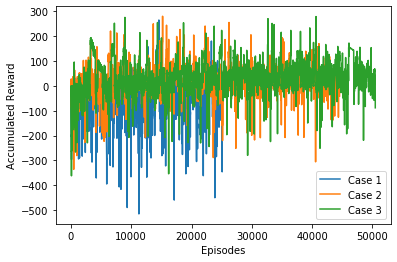

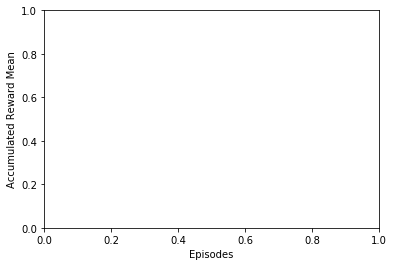

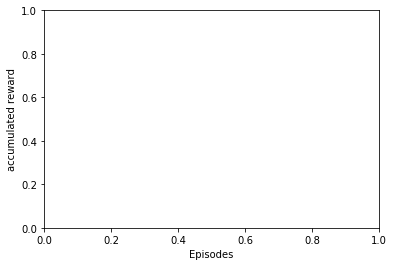

In [9]:
#------ CONFIG 01 ------
    #epsilon = 1.0
    #decay_rate = 0.001
    #alpha = 1.0
    #gamma = 0.99
#rewards = [1.812537988739025, 2.299984051011706, 1.2603677529089927, 1.3319515449963282, -0.07412179416699849, -1.866029454562336, -4.188853760759867, -5.100497222669873, -7.322635265569742, -9.439082732987984, -11.792126535704467, -14.760105776628858, -16.1294838787351, -16.984972735814978, -17.592217919029963, -20.706941134944685, -22.794285803267258, -25.967975383148968, -29.623819040674476, -31.394009615884983, -33.9565128380799, -35.81548818885861, -39.41407347831711, -41.2226890240762, -43.79844514933987, -45.51283400782481, -44.94303508213993, -45.21760976991746, -44.60884049040739, -45.88116519777702, -48.148298570893644, -51.568000759783814, -55.01418250652344, -56.71606611705499, -58.33817560210389, -60.62609714965299, -61.303964004940994, -64.73737769056079, -65.76182351763265, -65.89377557061555, -67.03778251215968, -69.57264143430112, -71.05499540971465, -72.44487958609412, -75.7110090706073, -78.03677776932011, -81.29035936575409, -84.82026352245083, -86.72806632778352, -89.19772635542694, -91.63972008457498, -94.05227288456678, -96.43386863927381, -98.78313542729487, -100.59802801427442, -102.88186019438935, -104.85812352797933, -107.09490258266555, -108.44205974747015, -110.1009329477592, -112.85440687215339, -115.9043625613347, -119.29126078209049, -123.58241302517597, -127.08792357435392, -128.66055798272188, -129.7640929780473, -132.96238098980305, -135.2709930333141, -136.3777666869894, -138.40499472998766, -141.960133670272, -144.07067458043423, -147.02483175608486, -149.350027105838, -151.6953456187138, -154.0669189375224, -157.51376194131848, -160.20377670291913, -162.08093582703745, -164.66399079062208, -168.49128547655295, -171.51788707759346, -174.6501880197489, -176.98005553875143, -179.0378563369199, -181.38558464304887, -187.3264835537075, -190.55275732109564, -193.99719689569352, -197.67639570246357, -203.81020283476605, -202.12912966103514, -205.3911299991846, -196.04651200451517, -296.0465120045152, -1.6274519924452011, -2.585852539628177, -3.5925156347526856, -4.646043743763754, -4.566205372176112, -4.577664232779452, -4.24087728423747, -6.061227482885427, -6.25959669599713, -5.656692488640005, -5.16307504826948, -5.149904062306706, -4.814463487752777, -5.502719976884963, -6.2315735406212855, -5.639913194465849, -7.206609510858172, -7.966596113221371, -9.64414569436981, -11.749654919256255, -14.104310013788828, -14.41252859302049, -15.603377079028782, -17.94474806922961, -20.47489380892268, -21.38011220858314, -23.83414038640188, -24.527144647576492, -24.549343645818343, -26.201650888323147, -26.706240816832267, -28.147872116050483, -28.395100503423325, -29.60466094953654, -29.460177240120224, -31.65743416377523, -33.02146752516318, -33.60330361172279, -34.796534690262966, -37.09203126963558, -37.641556694693996, -38.02261522685853, -39.03953134155872, -38.90027639294885, -38.75566875231055, -38.43011092514703, -38.77688247221422, -38.983466721453915, -38.4227735614762, -38.49950953725696, -39.516829913821546, -38.685874666518295, -37.80525791365714, -36.68796087794468, -37.061846650785874, -36.80644423984189, -35.61060429670514, -34.440966294075686, -34.60996453945237, -33.48466621070407, -32.238412264384614, -29.67378747924087, -28.25747640264552, -28.23273999331226, -28.42839480245527, -27.362893560487972, -26.398557117566636, -26.75832971711966, -27.451763074344793, -27.63215706006559, -24.684206143078356, -24.435866317250102, -24.850925191953095, -24.81250070143234, -26.07614553669454, -26.475131245220936, -8.24705761229508, -108.24705761229508, -1.0386444002460564, -2.220649968474021, -2.340750622614762, -4.1933962340936235, -5.315306622385319, -6.427544204508249, -8.581677748546266, -7.2716817745867806, -7.634040875827539, -8.243747627016432, -8.45411554484905, -8.74244317353403, -9.661319629012512, -10.43561612067254, -10.146050956562963, -10.73833450294882, -10.435138721552052, -7.84652050529336, -5.090780827650612, -4.92858775031308, -4.423905181503864, -4.640276709054996, -4.841197571584411, -6.061582640923171, -5.5004987145597894, -6.557644443876391, -5.98697055258082, -3.6492427940045014, -1.4226406525382593, -2.452115453125084, -3.891345591643381, -2.340782473580316, -2.8328406510654647, 1.2346182853086702, 0.5999075647753216, 0.8751958518757601, 0.4429870652662953, 0.9111521827425997, 2.515401409951621, 2.213366194283494, 0.9320422807324891, 0.42102037816964377, -1.1040639521071243, 1.044651406693133, 2.9307063517844467, 5.073099006523357, 4.774525020285091, 5.757855387703392, 3.94601867786779, 1.9385169389890184, 2.087212439763666, 0.5648172623655134, -1.9699226588951513, -4.998942629732433, -7.216250707149079, -9.539356403383387, -12.841774264870997, -12.852307467723415, -16.59701832430283, -18.858053495137693, -21.24070942588882, -23.8106183208922, -28.308440189990232, -28.964904838962042, -32.971119005394144, -37.1628367473391, -42.38365265275249, -27.9555237669004, -24.60962793406272, -124.60962793406271, -2.2676364026918803, -1.7080611768722223, -1.6229467709816423, -0.030610771217097765, 0.42965435977747357, 1.601283799931041, 2.254904174171986, 1.5349889965507826, 0.3946697503472363, -1.8428350960890998, -4.388138882237067, -4.876545277158809, -3.402818215614431, -4.981925850440419, -6.722819288201904, -7.860400282694044, -9.64281331999915, -10.640118903455045, -12.268700755327428, -14.383473592487956, -16.785624807078573, -18.057191157258313, -19.69555827225498, -20.678480439595017, -22.10136144488565, -18.223766168621637, -19.192286151469915, -20.053388500372023, -16.013923157953133, -18.290712142671186, -20.333165968412818, -22.146177275199125, -24.093177534619702, -25.977251288011406, -27.62824340731071, -29.075569439238098, -30.627536194444207, -32.05385425595061, -27.714470499983637, -25.932710834201366, -22.555566684197867, -17.561441742694626, -13.31838857364328, -15.05006422372141, -16.837817723701892, -18.84618076359992, -18.466493030808984, -17.58919875201195, -19.530176446017688, -15.560066085988396, -11.823446318965328, -14.167690524183088, -16.362978048879825, -18.22057920783999, -20.11757788735713, -21.735459567832834, -19.525948858893475, -16.463461770846074, -17.68265799632909, -14.483736327486152, -16.15972558879886, -11.423669099042783, -7.901389994324691, -9.837492842650194, -11.460702331637835, -10.512444842711536, -7.997914270384038, -5.75678266273027, -7.599972239631025, -9.385809278494488, -9.118949227779055, -11.251057651193134, -12.677966433641654, -14.72606170000112, -16.408206642266585, -17.703032160331453, -19.121227842286665, -20.481141675529166, -22.347468391351534, -24.246904699490507, -22.4951300001548, -23.430828685150285, -25.09437373657317, -26.4435523496094, -28.381429393440865, -30.364212370589822, -30.066072544746376, -26.701320962880008, -23.91855000187595, -24.90084682786766, -26.295854918850033, -24.5110511594235, -20.953318002830258, -20.73657915723742, -21.666051446378265, -19.629044273502082, -20.84579837165743, -21.159278210575174, -19.339115330843637, -19.65024729935268, -20.403542560556016, -18.554204919052907, -17.530706132643278, -17.62814047143323, -19.18856525603781, 2.021379765463145, 3.0042324451071707, 13.774389572489875, -86.22561042751012, 0.022902763001184212, -1.6288146158602104, -5.8713003982098595, -5.8740344046613355, -5.8843863439055095, -5.905571062710981, -5.078722105864505, -4.952329910780581, -3.7490336703336915, -3.4512257051303017, -3.1901129287986727, -1.6894140925315948, -3.40118475640684, -5.145983745180623, -3.357734855747374, -1.7281969036801346, -0.925126723863207, 0.7192920974058787, 2.595943956492814, 3.565308989376117, 4.651808982755633, 3.8737892180454505, 3.4576119242508616, 4.054220551376338, 5.481074038711249, 6.380354071307726, 6.508440699236365, 5.171081107122279, 3.87517410266749, 3.9719428569832096, 2.2223772034990565, 0.24838896930319598, -1.49395084230144, -1.1608150814211002, -1.0074954338799218, -1.7763777621771455, -3.4450618904236414, -2.94172624984074, -3.5730071019971765, -3.4499052184936807, -4.471794881901046, -6.466149502956395, -6.709749098828226, -6.991602627121934, -7.583279691218623, -8.731948516370155, -9.125792410271174, -10.662024039977126, -12.253068298621258, -13.372550714180788, -15.238363471043469, -14.722989467477264, -13.017349083919504, -15.340557034799392, -12.65340113884863, -13.84870943036619, -15.233603902873899, -16.99334445993266, -19.216972478340683, -21.961326450533495, -24.991809225849682, -27.548588334739623, -29.946120331825302, -32.45846028589078, -35.44117088995297, -34.64491368655075, -37.85036228459913, -40.79399116466729, -43.411203495390424, -45.98899647878625, -46.23605086243849, -49.136203392283235, -52.160659854016345, -48.993134819802265, -52.17057118260041, -55.628854943882004, -54.03551494208442, -57.25449707948168, -56.66383324632369, -55.661068867156686, -58.610915422671056, -61.347220051276324, -64.15097523368341, -62.88566876548211, -65.11982858702157, -68.09606876881125, -70.30976864087074, -72.1127328706103, -74.20076170814426, -74.27565640115735, -75.67763222389208, -76.70410157027557, -77.51686305268105, -79.15766023691317, -77.78281261738772, -78.46487970094549, -74.52868036755116, -74.77575893099292, -71.38942478832476, -70.09094179127023, -70.85971433016228, -71.01593590628481, -71.53182340138987, -72.93806266003755, -72.5271981259167, -72.60673536169546, -73.80702173424828, -73.83260342006699, -74.28827004189392, -75.65680934370926, -72.15836908165811, -72.33920699035369, -72.79656235057412, -74.46939095406451, -74.28083272596356, -76.43267308074212, -77.88535066078833, -79.42835732267451, -81.84838090429562, -83.83755513146858, -86.81216159018737, -80.2249561598554, -80.40987633000537, -180.40987633000537, -1.1159078239441442, -1.9912069237894798, -1.9148728147821021, -2.6940224165815767, -3.5088200084701544, -5.797650358217979, -7.833684399847028, -10.004182425848654, -11.185816597846951, -13.452386402853703, -15.730525012306387, -15.838189733205253, -16.989551794149506, -19.43134668485803, -19.155289786835457, -19.148702025474073, -19.16076396905543, -20.8843960219619, -21.62065285456158, -21.351375991231986, -20.588614819713808, -19.483095769319277, -21.1799530041822, -22.939323485555043, -24.125875443583432, -25.566666411147857, -26.134467183212543, -28.09785458258315, -27.447589984325813, -27.76704368262784, -29.029474592884057, -27.96747787397193, -28.00261798885016, -27.21799692282589, -25.7919960448519, -24.244505311973555, -23.714081396544245, -22.754190467003728, -23.08789618115225, -22.70632869458473, -21.209176016808787, -19.862965521067625, -17.812723850940806, -13.645346366808422, -11.92552484907882, -11.098842517930061, -11.064383041631551, -9.993550489519603, -8.806925558756172, -10.12290243241599, -12.359795676790064, -10.843923087667815, -9.870957457121165, -12.064015771931878, -14.26124458468945, -14.530372377408913, -14.372861622052945, -16.66457159698877, -16.406860791675822, -18.81249667411927, -20.83777847364939, -23.466943461509654, -25.84248750178909, -24.333555455768547, -27.151304137838352, -26.034400538015692, -28.57645954520999, -32.06283819880733, -28.877734553966594, -25.770653086284234, -26.707904070689946, -29.879707034725296, -32.59983890306753, -35.785749605132246, -36.60341699797707, -39.6375422621008, -42.8325322296056, -45.725771783970465, -48.50199828102553, -51.571519252843565, -47.5457345937589, -44.94454172506406, -48.132778205733, -51.628539202509735, -55.40263567383594, -59.313749389099065, -56.96283204907373, -61.37803831360082, -59.95519676232315, -64.11838972250024, -63.66117373074171, -67.81628863441996, -66.31041598286583, -66.21814879636234, -71.11291159004794, -76.41241930011181, -75.08720053632632, -80.31495729452033, -75.6452639771039, -65.89475774140408, -86.5645032787416, -102.19015914524941, -78.69942926621725, -178.69942926621724, -1.7832370718867878, -1.1049605973000098, -3.449022477976415, -5.422410593427758, -1.7398602167526223, -3.775124218814118, -1.7245291175590793, 1.1389170702168672, -1.5594360271029557, 1.0060573614548818, -0.8945716492329681, -2.5017758833033614, -1.2124426411591689, -2.7910990463360683, -4.184765078574098, -2.246186230115965, 0.8282792309925489, 1.405875167878374, 3.6371735571737327, 5.485935153272228, 4.450131150090633, 2.6545829433487924, 6.330624680799166, 4.1523359518498975, 2.376584884084627, 5.793193882183789, 4.555563405522708, 3.5635046842881666, 4.943105079949307, 7.787381540255054, 6.84802429300116, 10.265656849091865, 8.748263632422463, 7.5734401490151395, 6.450213886962159, 5.828600107596798, 4.603164906663067, 2.718876863803245, 0.8432633383445707, -0.6960866582786591, 2.5831710344918806, 6.218835409076201, 4.622237487552178, 3.0705360634509544, 1.7315624678529355, 4.280302146807267, 2.7404185268067156, 1.3096479286394171, -0.1468625805498962, -1.766465619127546, -3.5833260828804194, -5.129292554538509, -0.8092729095380404, -2.349801322990717, 1.831311845370701, 4.09892676599437, 2.306034969049101, 0.7928304704498086, -0.9098063887843515, -2.2519913909053777, -3.5778615977452297, -4.844969701014239, -1.565299663681194, 2.6728585053914937, 1.261266310799888, 4.746908272231539, 3.358756970420532, 6.149088188852559, 7.778182524057198, 6.536602035763108, 9.823899919447012, 8.593033496103981, 7.133582847267957, 5.576707467483812, 8.432754805842333, 7.037102029190489, 5.2382911341960865, 3.7341570826847574, 1.850183510620296, 2.3424552778257164, 2.8707667643089607, 4.6985830699922575, 7.863247691121289, 6.176628893674989, 7.72470783748605, 6.044046871292692, 7.664347518920106, 6.373190860549596, 4.074702524055949, 1.5164641382935566, 8.500670309267761, 13.544045673578253, -86.45595432642175, -1.2810811584083694, -1.8447701060217117, -0.6120896971761329, 2.949165977110165, 2.450616276263812, 2.1260804863427802, 0.2180745792983123, -0.3470015005246876, -1.353813375981606, -2.337002602421155, -0.9322930594019068, -1.8554821535722181, -0.585309333971618, 0.8892825787224454, -0.9395842808323893, 2.177559453795112, 4.202234653536732, 4.936550302877231, 7.232227698995735, 8.726061702763776, 9.408934345351952, 11.588621568065616, 9.613462808290206, 9.242734579377569, 7.46640725464981, 7.639901727367713, 6.505944584702005, 8.610601464759394, 7.490611304610933, 8.498187095151785, 8.18173706180877, 8.008829957480549, 7.863731303892002, 8.779161824714908, 11.743361674467138, 15.034645200773024, 13.44473497032986, 13.301256797638544, 12.604649796717197, 14.380837707229144, 18.354123131295502, 18.288576295901812, 20.648097099377612, 25.41413832613054, 27.60350259596468, 27.716811789144042, 27.163877500240527, 28.449303316987418, 29.787355894978223, 29.282451200263242, 29.397844491499658, 29.080036493775342, 29.423103610853136, 30.012119420291132, 30.369440361480716, 28.400351888502403, 26.453318893388232, 24.72340584544742, 22.5787574653034, 26.613240374227175, 24.276438274020663, 22.36994160556351, 22.794959083602716, 20.735170001882064, 21.991737222396246, 19.661759452182885, 19.00720053708118, 16.65026550586369, 18.810484348378964, 20.897615466651143, 17.99815628712049, 14.826382615143, 15.144862999155883, 11.805213832866848, 12.531384631269052, 9.100499879450217, 5.874160664880442, 2.4570567995122103, -1.054204833369559, -4.606844987548858, -8.086691848227463, -11.621365390401923, -15.330781661174758, -3.3418784595209345, 3.9740208653950093, 6.839887372375562, -93.16011262762444, 1.3949344902851248, 3.6333430295737257, 5.628783460361038, 7.169808401006012, 8.161370318186021, 8.649893500696983, 8.405708956474266, 9.839093459447252, 8.194692230406382, 7.354666163647573, 8.365920359042883, 6.498537859261712, 4.545805540447994, 4.87890308793417, 4.939258457795072, 2.4814620516896855, 1.2390184407314109, -1.975607477137588, -4.383036853985674, -6.18387693655852, -5.4321264019928925, -5.981601593562025, -4.125026622677476, -5.946101938173806, -7.264659069805057, -9.267497649671846, -7.607124282588781, -7.04971505389558, -6.418066134678527, -7.536236458558108, -7.074306116156111, -6.488698231742751, -8.11491512408889, -8.50458056064839, -9.373916762557156, -9.725749728216567, -12.181731503012628, -12.309737113921498, -14.527409886884751, -15.140135332030832, -16.556914409624362, -16.96997806824333, -19.358655466086866, -21.850840653564255, -24.464990335158227, -25.669441604778278, -27.40725972959853, -29.905002780341384, -31.77935962738598, -34.38709488472045, -36.38792952639715, -38.985210960847546, -38.479721359894064, -38.35873334732326, -41.351300887177096, -42.84844772306345, -44.90469542772481, -46.91910451509056, -48.88975353708607, -48.12552047418263, -49.36344985145244, -51.02869880315203, -48.54202669105663, -49.42753074049255, -51.483377998544675, -53.01317245456297, -53.7409671505417, -54.967961654811226, -56.748201112463896, -58.045992281693366, -59.29432244203985, -59.330087558425, -59.69455854844535, -60.535059710218185, -59.618505620636675, -60.931234464262495, -59.78676254350686, -57.72628610004974, -54.59031573994117, -56.249053894225575, -53.84126793688326, -54.106433691961904, -54.99261347658756, -55.838931957182176, -55.79756574418811, -55.58787537333438, -55.0462299514414, -54.38975323961477, -54.81559006265589, -55.405375821779664, -53.55939097639769, -53.62383455638642, -50.47701102039027, -47.8308630197405, -47.922554478151746, -43.86744265216955, -42.476528095720006, -41.86922703461037, -41.20270917829138, -40.42779481125141, -40.15227848372135, -39.19990578144428, -37.9415735729657, -37.38662498400027, -36.92040970327373, -35.72064814636213, -35.26867385355062, -34.99779708072209, -31.266501169573782, -31.444923650002575, -31.905173038998125, -27.225638473789886, -25.324346058578303, -26.76360746354496, -4.2773094774212765, -104.27730947742128, -0.8154128958968443, 0.8296196881854143, 2.4597986499120283, -1.0303247588444204, 0.6014760617135213, 2.1952955290736558, 2.9639632773874736, 3.2697738364320763, 3.1723741395020375, 1.8090047012386583, 1.2688965275039368, 0.033378498913049226, -0.5444573808500366, -0.10161673510019575, -1.1643686810098064, -4.38109312853786, -4.037130372962427, -5.084644527490557, -6.443879839105623, -7.1731314253689815, -8.881389109340963, -9.419866831866603, -10.928720884597045, -10.37820042897659, -8.825104266963987, -9.267891886277184, -11.886944258630434, -11.853667607074643, -12.26795248652192, -12.880296252840365, -13.321213359912402, -13.614910140119761, -16.014239763136132, -18.368074659833425, -20.032359920868245, -21.5298719742726, -23.086601857024167, -24.667101272649067, -26.258165172309223, -27.113366200347603, -29.33498485816091, -30.90901039328546, -29.591987305883116, -28.072897332481926, -28.811517210210024, -26.702337846728454, -25.698569590344352, -26.100434588363886, -28.075225046192816, -30.00440499299238, -31.354488350515215, -29.469019961129085, -31.876961899265645, -34.15045462047389, -34.98915927403889, -35.682317386942835, -36.363517816037536, -36.67337285690767, -37.4881743785887, -37.65223199612172, -38.19364748479018, -38.68897707930493, -38.41310846312749, -37.96746800434983, -37.312252616066026, -34.134440008425024, -29.267822355870845, -29.676419178732242, -29.27410226810444, -29.067258161057577, -26.459266941752333, -23.68634357258843, -18.029919358580322, -17.289744897836393, -12.223578581560044, -7.151276288599077, -9.308058859959784, -7.00487413710306, -9.491624484277793, -11.909261329007988, -14.591782669123798, -17.093403060634696, -19.252902905853656, -21.139136474626522, -23.04284709435367, -24.694524126256677, -20.6946365748597, -20.278223330543373, -21.88204569364618, -23.549898930597866, -19.637847934829033, -17.386904838445712, -16.393728756775232, -14.36891452565003, -10.433653038777614, -6.813032755190274, -2.210147260457502, -4.351213745968106, -6.6858123223181085, -9.27660544730859, -11.685405315508696, -13.763370296044064, -16.237992960815266, -14.702059379278346, -13.107436068476073, -11.083523559859117, -10.066391572792543, -12.401595219052284, -14.919899621437638, -14.242412546161495, -10.845527420838657, -13.55215730302708, -15.769444525972338, -16.71516322179776, -20.09614681689545, -23.215480257686416, -13.677140722976443, -7.8905817020644475, -5.155547608308235, -105.15554760830824, -2.813700085784478, -3.900676741175504, -3.9901168849051363, -5.14705618842119, -6.6030893816773215, -8.711174661048956, -8.744977455455267, -10.643894872079784, -10.404779927570926, -10.009295776166251, -11.835540149033756, -11.65725582247989, -14.064788763623445, -14.136806486634175, -16.461911164828212, -18.089215960347026, -19.319890232769247, -19.558005489932192, -20.763320143848723, -22.03394003285596, -22.3471063995327, -22.606114934355, -22.93650395159946, -23.03346631967764, -23.01783509769859, -24.795321390708036, -26.52517896101767, -27.60765467762226, -29.79684404081925, -30.393811410413402, -31.545952880144622, -30.427195161457192, -30.00535566025488, -31.03512037801031, -30.11293632862739, -30.361293824291987, -31.32671544793443, -31.48354464317879, -30.796253834312143, -28.988390327174535, -29.99072333004265, -28.519316091367212, -29.52228851125042, -31.052512200451545, -30.462745941498444, -32.71879610037141, -32.195661634459455, -34.63734419920546, -33.61471439109758, -36.288629499134686, -36.686708493361024, -37.77264238367363, -39.43060648621676, -41.992712633248004, -42.75154001432887, -43.13727155297329, -45.783332077829954, -48.44345380664012, -49.087721394196734, -51.91686479439386, -53.71927624476143, -56.35794906034903, -59.19909147847443, -62.43481482679465, -64.73272634226973, -67.2449511827932, -68.41537962611379, -69.52249210712195, -72.58102129938662, -73.85829856884065, -75.7338006787149, -77.60075331185344, -78.37171734368665, -79.99175130043538, -80.63743509750971, -82.0388003598322, -83.44098545136701, -85.63244814593723, -88.12472902387624, -88.97427626173082, -91.70963988818535, -92.55579701300842, -95.3606333408036, -96.38123497497257, -97.07008084010546, -99.87446353270666, -102.84689228781407, -104.30212588566557, -107.20948954023238, -109.58207578130737, -111.30289659975713, -114.81508834552858, -118.599709968685, -112.73450275811922, -83.54525195187267, -86.80594858989812, -186.80594858989812, -1.1178172226350103, -3.4353821630581907, -1.0193866155955646, 1.5346291197435535, 0.5730659016363104, 3.9351391783035394, 1.4542096873412445, -0.2629936651447511, -2.7964498050038618, -5.596839878711577, -3.731776229730829, -3.101217570802353, -6.100303644006193, -4.462151121455668, -5.693257493561083, -7.049392990369914, -6.602770055617832, -5.490589588552591, -7.24459229316157, -8.158659167884545, -9.702418490994981, -10.137806979462196, -9.24678340815551, -6.571960326621995, -4.015005881260855, -1.0429466424436198, 0.3263396094716897, 1.5348200011089674, 3.2388214726650757, 4.180722899087677, 3.355851059208967, 4.931070744585915, 2.4395300883441773, -0.17798494187665082, -3.120573495470102, -5.204199529489847, -8.217063041114589, -9.705743577134713, -11.776680985330218, -14.67000291024695, -14.208268703898131, -16.414862632317483, -14.504907329739673, -13.862133447487476, -16.21554330166961, -19.45693825385106, -21.194158249570417, -22.69550399477063, -24.75449816942128, -27.667293918815712, -29.14132458733351, -30.287543958687248, -32.6131236538612, -31.429875036139446, -34.093673237147364, -35.38611933840469, -38.004762572429264, -39.94681880359273, -40.87149760142082, -42.692873384058906, -40.51453237828236, -39.531677101974275, -41.37131117654683, -43.17222892482686, -45.93215596357023, -47.891969078429064, -47.54200838914523, -48.879222941648585, -49.76125270016991, -51.24401853844689, -50.81318650792769, -52.331268659841605, -53.815359956669646, -55.26682670939274, -54.450243886027415, -55.874566775251004, -56.376683797022885, -57.53608344615373, -58.67914400988548, -60.499910937536164, -61.202966076313864, -63.05594416845293, -62.38308176374226, -62.2529012767617, -62.60261227502654, -62.949368594428115, -64.98276649389362, -65.62761163767843, -66.95736329516026, -69.35654980918267, -69.5368497935162, -71.48582724851224, -74.64869164554761, -77.44627950973131, -80.55055042300262, -82.38063249780636, -75.14234524449684, -68.21824122462534, -168.21824122462533, -0.8693016237948541, -0.7515240328877895, -2.9600132287749137, -3.100774077968865, -5.494801247479457, -7.029396621507944, -7.144966715774303, -9.412196628707392, -11.593656907819478, -14.29180978295079, -15.980906903093565, -19.038730694252617, -19.255518131046856, -20.89222799876382, -22.721795566252982, -23.658841035189685, -26.64598540993592, -29.448406194556956, -32.432656251763774, -34.67852923862924, -36.510662516990024, -39.966688304635014, -43.50483656093472, -46.08108147725382, -48.67530581392485, -50.75029504309023, -53.314515495589745, -54.62821877281806, -56.71353437831395, -58.22242556744749, -61.582349004927494, -64.10500866604178, -66.6258258907319, -69.1017942658646, -71.64814264730698, -74.7740307214078, -76.02707071076748, -78.35045707863736, -81.79284887486925, -84.14851058545882, -85.2126640516159, -86.38233562593437, -88.30880986938125, -89.30058962986273, -91.97378494181218, -95.16239380909612, -98.66291656303245, -101.08423237833112, -102.3531914024821, -103.39330972413545, -105.59048396918459, -106.70059479748232, -109.8419931692886, -112.82603707590584, -114.15661029689713, -116.25464539666595, -117.57877726685768, -120.48278242394449, -121.44740299754301, -124.36378026084739, -125.59108292370081, -128.75157728387316, -130.22036061955225, -133.35820082823997, -136.91605107001124, -142.00319085609317, -146.08343325087802, -149.32917723644798, -151.67153873008402, -154.09374479139657, -158.1839238317369, -161.49363139169012, -166.01711346825334, -168.79427823910848, -172.54191352640086, -176.46417005773216, -179.51159255418338, -186.66616541884804, -190.0751405636711, -194.25600212498162, -198.63990426262964, -193.9677648056374, -293.9677648056374, 0.12664025499961554, 0.9475644295478685, 0.9218173119902269, 1.4097754570478025, -1.558073602336052, -2.0676804830707303, -1.9100533519023903, -0.7610358689921506, 0.3305216355906171, 0.5038551625402365, 0.4763810538321027, 0.23121002896353415, -0.24020749861783175, -2.1632248761676847, -3.257266247873342, -5.0576941712422165, -5.877233608699428, -5.689428191366645, -7.640270560158782, -7.684889139526247, -7.996253288711029, -10.201853875357084, -10.535406894710263, -11.966349608244627, -12.306318742867061, -13.761092288182537, -14.285513560015826, -16.937603901175716, -16.361206401751772, -17.212167424390188, -18.71357973941933, -19.1735327917731, -20.510148124256162, -21.849051520812125, -23.982124635639494, -25.4631157743935, -25.426217154742407, -27.737564409246577, -29.969073444054832, -31.636950118608784, -28.979934547621802, -27.167380074615448, -28.905294924785647, -31.562896436905742, -33.45954161095919, -32.22331587756784, -34.0405375067661, -34.9498232264105, -32.63062439883139, -35.37219602060246, -34.975505585410616, -36.18445431372902, -35.20715225842615, -36.389101263430376, -36.551284059137956, -36.08127828169532, -38.519422476160116, -40.26323678624851, -39.409910547541344, -39.56035246952226, -40.234475779252875, -39.53578768975244, -40.02198558998769, -42.559241569321145, -45.175938617645656, -45.31288357584012, -47.882634459049115, -49.74786934689874, -51.596506633000644, -53.42660058841096, -56.304972235767536, -57.52455207386495, -60.24414201709689, -60.48752622167741, -61.42940735717782, -62.503206880181125, -63.2745996275757, -64.76315407814579, -64.6461387080055, -66.47429865309161, -69.11969033954833, -69.8815640194635, -72.29557697161442, -73.00125723973038, -73.73318670145203, -76.35855709824422, -78.60335718512835, -79.2452315907984, -80.68798922082502, -81.2347175180974, -81.66484965174953, -81.58685451207762, -83.67374680322146, -84.63735829740217, -86.79096275927384, -86.74914192639034, -88.95369398178343, -90.09320189694976, -91.49651390251846, -92.98574281250858, -93.50218680156196, -94.96398308432312, -97.73977760379533, -98.95160434862159, -99.76731401124145, -101.61884889448292, -102.91772200268299, -104.95630378558214, -106.19875224169532, -107.51462975399694, -110.93968934990464, -113.4608832680652, -115.60092088120484, -117.32034516972263, -120.09081216639215, -122.30511560115609, -124.5369250087523, -116.68959909066426, 6.2492936472127525, 20.79327383684101, 6.190633328310579, -0.41502324257286016, -21.120649046747864, -17.959649329326815, -30.9520694747584, -39.37909939521567, -47.08993798533252, -63.11894024217711, -69.18084895726977, -75.98337088508652, -82.73845428556629, -94.49119053443918, -101.80395846062358, -109.7504160570562, -117.79772694259331, -125.66231440545154, -137.4156604477348, -145.4316345359728, -157.2380146633623, -165.61072462097673, -174.3734720839855, -190.1095600459786, -290.1095600459786, 0.973367976709369, 1.9654411728669174, 3.740074473661907, 3.6470306164925455, 2.210131162819734, 2.978428616934237, 2.7629332847756563, 1.8696302509706173, 0.3728382103047623, -0.7196725420021439, -2.3863521822223666, -1.9854862649685836, -2.6623322458054854, -3.4933815560346355, -3.173423744995901, -3.968085330480008, -5.990366421940027, -8.534121519793919, -8.05723325948141, -10.147329951704636, -9.904090514638185, -10.953183559870226, -12.15388393078085, -13.489834443966842, -14.023034219950928, -15.426681384327237, -14.927350887073063, -15.101819030726489, -13.775252716763635, -13.665588615165023, -14.759030272741386, -15.929907157859775, -14.752977600884156, -15.018511617442702, -16.191345937218475, -18.321271427003214, -17.56498970444573, -18.323032360251357, -18.499248447084778, -17.44276067581194, -18.27741428829418, -19.22943982478468, -18.084090096531362, -19.96523802522251, -19.286018949873917, -19.344298233462748, -19.96229745979123, -20.579775059062868, -20.116104289616672, -21.88165868500751, -21.43815633268916, -21.964382632431253, -21.789636707243417, -23.017101497054014, -22.929265450798923, -20.4642973516705, -17.969548903108738, -18.239135361424268, -17.542348654816912, -16.68275681892151, -15.570398805321465, -15.214794048052928, -13.295726988910511, -10.282852096294274, -9.222262248312257, -8.836796398925564, -11.6032126991879, -14.142011746315708, -17.364551621912415, -16.186829014599972, -14.099360790452376, -16.725418565123984, -15.97308405408485, -15.060277586848944, -17.70928363725392, -20.138679408857005, -23.160929272663513, -20.629442114796596, -23.47582543248219, -22.04485623257825, -20.099698813665697, -22.79702214287832, -21.041550788402834, -17.926094547020405, -20.40233685553762, -22.911519066200448, -25.093148782424727, -27.242728601886633, -29.359758592643267, -31.44402167067333, -29.843376028479977, -28.12667109499064, -23.921386988582217, -25.89777761540663, -22.853269707807605, -20.895286551332003, -20.827906247944554, -22.940980271831506, -25.338893068108774, -27.608448418120332, -29.519375641187196, -29.010956114686156, -25.683687612982034, -25.577961864323097, -23.987160909486292, -26.47489652666725, -26.233027591708552, -27.966809284181384, -29.994953749701725, -32.53970092322132, -32.693784111313974, -34.893482060328196, -36.6584378793206, -36.188653547893324, -37.76780857533035, -40.365069492601634, -39.084705624034925, -40.702789671838374, -42.75866206070394, -44.14039839868177, -45.33499228470744, -47.797281339050826, -39.346561764834306, -34.290620549980176, -134.2906205499802, -0.7234192054754089, 0.15056070202079463, -2.372442160506443, -1.8604178072610338, -1.6124247576191837, -0.9148128435760177, -2.7427449059130433, -2.5086260730294607, -1.7120049225418354, -1.2628322477728178, -0.580191694942126, -1.8392813369885581, -2.1976615437083304, -2.5804829855033184, -0.8414470648263099, 0.8370209767381018, 0.38850492898347877, -1.3080968328571598, -0.6561316339791459, 1.6241089226610317, 3.792443894352977, 5.300272213880323, 4.49433503531725, 5.015363144049617, 5.6138942601663215, 5.419885028197231, 6.250875258381345, 7.109903850628744, 6.133004926526388, 3.9204820506481393, 3.052715570027268, 1.3734605062201206, -0.3093467334211004, -2.6152974756068565, 0.46980256762235895, -0.4099852755272442, 2.3524408131109036, 5.390964529283137, 7.338549629208425, 9.37718078238759, 9.9138587459986, 7.9281280871608475, 7.052654447514817, 9.244424356931393, 7.2235877066624905, 9.481949993336034, 8.645131559867457, 11.298179518902902, 12.453750167118756, 11.137160585569065, 9.282668228536439, 9.416644525020713, 11.164001249968857, 9.233625209201557, 7.288146886743215, 10.358787262121986, 15.204090089266987, 13.556562769695566, 11.614716993685498, 15.62497016303988, 17.556177062666862, 18.75214759586049, 15.883582299941649, 16.77968976432528, 18.253128443676097, 15.675752271792271, 16.771762344908048, 14.773659043211161, 16.112097766226345, 14.062302530947694, 12.069910296193305, 13.030289049506367, 13.40173789106761, 11.067755403343611, 8.519289913698389, 6.229120536076568, 7.09985927394476, 5.027432217402124, 3.1283855934062235, 1.110529043596617, 2.7381170792191227, 0.38260497216659095, -1.663133955899764, -3.9862206708931853, -3.575124774462209, -0.5819278274533857, 1.6032742576909373, -0.8412455997257706, 1.9960213258607173, -0.5517138377259623, 1.0710908401510058, 0.4713668017078039, -2.0146827019612186, -4.464994319894542, -6.413439832299443, -8.605705206369574, -10.769841940645247, -12.909044409043982, -15.02691792819871, -13.792016422618005, -16.485852297972073, -19.41736346276481, -21.40609696486503, -24.37412462379534, -27.43674126939159, -29.504810360573927, -31.438051062408917, -31.47684905018031, -30.478786772795438, -28.991521351765936, -32.21784367182111, -34.885259391089086, -38.60774663539693, -41.00061392973698, -23.638923024648598, -24.1374130626183, -124.1374130626183, -1.0951005516741816, 1.4056665141978455, 3.597739122725713, 5.579530907282945, 7.394372631264006, 9.316922863785537, 11.071803715197479, 12.664749043807197, 14.17946778939116, 11.403209367135013, 6.929989050182479, 3.5683586324156473, -0.746253634145408, -4.326030850862398, -8.400587434490832, -11.929019067318592, -15.936458721134358, -19.429147819922804, -23.33210774227942, -26.546570827710582, -29.539909006624868, -28.620579684846707, -26.361237977632534, -29.342795245036378, -32.47754953378277, -33.13316440462361, -36.53155230951389, -40.16045438492201, -43.11514027524199, -45.8539679062058, -49.15086128595788, -46.82085689101894, -49.829005803867666, -52.26544791272463, -55.40905638457108, -55.8025845556221, -58.13857247870711, -58.95431825035269, -61.5438084152886, -64.07519830337677, -66.01080248640537, -68.24351936064664, -69.99786105067466, -71.24680163747385, -72.88858017558113, -73.87485412456749, -75.16703460225443, -75.99129019490422, -77.71968788662116, -78.5497834591985, -78.89783645535186, -78.92117166309717, -79.7603830117859, -80.2177476376051, -75.5587653238009, -71.33795138108584, -67.43946224082741, -66.17238550582022, -65.96270130334179, -66.23353636370317, -67.16390913221565, -64.1864334124647, -64.56212681471139, -65.67530961910008, -65.41652854805862, -64.52294150627588, -65.48441317960578, -65.0094113972606, -64.5410691328093, -64.34470862436763, -63.40038242307679, -62.27493142143325, -61.01909844871187, -58.14687157381336, -56.42785956716476, -55.68236871198978, -54.02861398554943, -51.95704892625143, -50.272293968767755, -48.539287104285435, -46.76075983456663, -45.64732362110779, -44.01001896625773, -38.97343767510381, -36.78914591313631, -34.449808441200844, -32.471317236716544, -30.618968557545003, -29.04028321216984, -27.42325961290669, -16.698215449854644, -10.18598561401717, -110.18598561401717, 1.588076895525462, 3.073547703415502, 4.40459919294344, 5.863380959926308, 7.538537030514993, 9.26358708775502, 10.809834068002525, 12.23137130911034, 10.909886503678273, 12.402638963034086, 13.954596048919534, 12.229383074672857, 7.565768970546018, 8.963086256479713, 10.361006626956469, 11.990377634879126, 13.495073026366146, 14.82599639619382, 17.03390142254772, 18.09867125277969, 17.844680774611412, 16.04013391491727, 17.4140265053417, 18.138348854384432, 18.184404765846367, 15.445516931603679, 12.938136334468812, 16.484780975762874, 17.68911700012087, 17.634504122219607, 18.07516861834187, 16.23641526390613, 17.00522811046631, 13.319740092775689, 15.847955835629437, 17.399966104932123, 17.42922562788984, 19.239128467628575, 19.924666240698656, 19.423161434141775, 17.996338457362043, 17.210092208993103, 16.630371948924164, 14.612686697379191, 10.789427722284561, 6.848191742057372, 6.94838608955975, 3.027959022476085, -0.5848211654524778, -4.160267420121169, -7.6761378106864235, -11.132451574339807, -14.529110413056582, -18.1829255317959, -21.904134257329996, -25.44695221540773, -29.432188041727596, -30.046304663339384, -33.548624844950865, -37.437768998530146, -41.06572793540633, -44.19877200813292, -47.92815174804386, -50.849302591269804, -53.99154241602503, -57.52654454019475, -60.31346830188971, -58.84434074432188, -57.65003811662595, -60.6615712962427, -59.30983265205033, -57.96703188961766, -60.36427801943887, -59.97088664766342, -59.83307913855532, -62.6638966051533, -64.27095038049858, -67.890134867285, -70.17287394760295, -73.79859938423714, -75.83577071661959, -76.76553978455982, -80.51700533112825, -83.32372653071423, -85.97569686568168, -89.50748167367438, -92.28681146917405, -94.61941235020811, -97.33928273602805, -100.88882254849798, -103.71628587935018, -107.50679243273709, -111.25937272677359, -114.35676878756576, -117.41224353033485, -121.33865411627119, -123.49091012488415, -125.67057740898827, -129.18395946310793, -133.01057138282522, -135.2151298258734, -138.88351484218327, -140.99457474801065, -144.5608000675477, -146.66983858774816, -148.4954058999063, -150.09193756591637, -151.34395486969362, -153.25207332344507, -156.1691195042943, -162.1380374273401, -164.26838884384833, -165.7305623775964, -167.81439483973315, -169.04990622230738, -170.1686810471702, -175.26825291811906, -180.09635175694348, -182.18329063468187, -179.84645206382297, -182.56456393722004, -282.56456393722004, -0.9164562381392898, -3.0494128483989287, -3.139065451774454, -3.0363228378210425, -2.7812693278210023, -2.2221054467563244, -2.7479278299209335, -2.289983157403462, -1.3080347232638403, -2.506612226729628, -1.959766746123181, -1.5804209781884468, -0.7186752467759947, 0.16839539664671976, 0.0024967033962366436, -0.9592490864504544, -2.1368426002384684, -1.1209392346185088, -1.6893590585977099, -0.6350020894973547, 0.5540640806168344, 2.225423282351737, 2.7579448168591894, 3.9265310549986836, 4.043381030842174, 4.365867931805029, 3.694253756440662, 2.288520647244172, 0.8610346742412842, -0.07290668330174888, 0.7628291908555136, 3.0373801263792313, 2.1808280389600574, 2.3590848290635584, 0.6045373652212014, -1.1717315947678095, -2.9674299941141022, -4.7802385263747205, -5.3835924981094285, -7.280229424064053, -8.49818518240888, -7.552791208555484, -7.164360840955535, -8.860261055229751, -11.766769905612868, -14.686881511799234, -11.966990586069961, -9.310051104676514, -6.23228017906662, -4.367476648110541, -2.7607483324607545, -4.482598279356399, -4.481411198587728, -3.7964442228069633, -5.967210525943095, -9.335384101993318, -7.664754382827405, -7.258210193789093, -10.092258497507853, -7.997903074121452, -4.535047057102078, -5.277136905598913, -4.189427907779624, -7.566714548397618, -3.4829396094108853, -2.534632714587513, -0.3647990440820754, -0.7446456035192333, -3.6346570562161427, -6.3694234120713284, -9.00588852321296, -11.30223945351578, -13.761676630019263, -16.428788572161448, -19.07427215105447, -21.696910014538968, -24.060572397335886, -26.810065674990295, -29.063741724699593, -31.846464614025972, -34.39795309823528, -37.33601954032751, -40.01721451397346, -43.2603275454383, -46.158890390193775, -49.6960954993079, -52.81382092031562, -56.353583446007164, -59.62352875286557, -63.416725049785796, -66.36923713559626, -69.62863321305933, -73.46341589083848, -76.25331577390436, -78.83562647553602, -80.11169138822339, -79.99974101251114, -83.87535677211243, -84.69063034635764, -86.14082405828479, -89.15346215394007, -91.89962710519808, -96.22867945438944, -99.86572285147847, -104.32858854529553, -109.44495988010297, -113.19134165068097, -117.70946203927305, -123.33917787354481, -129.25414517216151, -124.35377171889743, -130.22978369747625, -114.12862316393674, -214.12862316393674, -1.8489268044594656, -4.050475941176187, -6.189245100641072, -8.597782914341362, -10.481393809726109, -12.48934682419357, -14.094511387459782, -16.252419405407686, -17.919332890353694, -19.565125311525627, -18.79023324731362, -18.459317503675265, -16.938054051886002, -18.335180969017717, -13.266165364445591, -12.514766224465287, -14.063916570258524, -10.267190292255563, -11.744892500508243, -9.344740813486741, -11.142154636053194, -12.69713198202308, -8.099006551238734, -4.596920177213327, -6.293112025223315, -1.456805242380904, 0.05849954636950616, -2.146900451451227, 1.3493857345358728, 1.6668130463016106, 4.974426808845233, 5.993643593045853, 4.0528569589301995, 4.09341704425312, 1.7297378941825827, 0.07757209723134628, 0.7328962461264195, 4.108107749576151, 7.686006899014415, 11.12049673612837, 9.089235826396344, 7.450135191945503, 9.890000336796925, 7.591321795048994, 9.063780375596828, 12.341702762309797, 10.28367004673574, 13.657085441833942, 14.459968646402768, 15.235115681468805, 18.21706252327397, 16.414148898250748, 17.988613355489363, 18.805108183541673, 21.07333087181832, 18.41626003013446, 16.997851189680922, 15.133909383499635, 12.487579286069073, 10.46456088540567, 9.210908643731482, 8.07020668169251, 6.054508264178011, 3.6893593314114113, 2.4289089342909618, 0.8590893222395435, -0.6636517756232481, -1.5890606302655603, -3.299421167909325, -4.102858778890387, -5.657134251626708, -6.855035926659816, -8.559711550290762, -9.431454894468832, -7.657165380772958, -6.788612557664786, -5.250182533664341, -1.9945214679765542, 1.1179950543483388, 5.114821309980764, 6.041933228970485, 9.902990028388874, 8.209342008798647, 9.931726000255182, 12.632416629182554, 10.406560982867772, 11.398642347217143, 12.116287947547667, 15.601071587465814, 17.090476423551777, 18.033893904005676, 20.29876146651737, 18.245045101295553, 19.97314108538014, 17.843424790135902, 18.466687989164342, 19.361427554544502, 20.711798308305, 19.875730549991776, 19.97339880920636, 18.878249628880212, 16.151568317138995, 14.195912397397976, 12.253254587453554, 11.705292710735332, 10.462371860642376, 7.97973354515085, 8.14155678320854, 5.397009431768209, 6.83601166196362, 4.665559742815186, 5.320110777103942, 3.9525793291693185, 2.8094529654507685, 0.8907705283440155, -0.2107911848017252, -2.033491677076417, -3.024068462183596, -4.786964846148624, -6.657731478878691, -9.648181110264732, -9.737777568122402, -12.276716825291038, -12.682348946489691, -1.8292601113739817, 3.5232074319331614, 5.492997373377893, -94.50700262662211, 0.12765453841609656, -2.5758065611334344, -4.738495765902005, -3.338996907863108, -1.5923231234935729, 0.49256701535753655, 2.753984453514563, 3.5572669292234043, -1.2062836647289297, 1.0657781755811162, 3.761994220789079, 0.7569718951023949, 1.4096164679156973, 1.9366808452678312, 3.6045556322610564, 5.200867959393438, 6.6112271538334015, 6.310295870285573, 7.634192739301301, 8.318872503980163, 8.910664160020719, 9.375813377925159, 9.67548966098143, 9.767829882908348, 9.623529447279783, 9.173865545311589, 8.424068981196957, 7.374801177900611, 6.659764019567395, 4.456658677152946, 2.64622531650477, 1.3134521403447394, -1.7401922390694964, -3.7910965185496597, -6.472508788633229, -4.963085297821704, -8.178310188505986, -5.617099052019966, -8.143000794736963, -7.946705814892726, -5.013683871115324, -7.703150350689702, -10.453090239761826, -7.853459083205217, -10.688718940313912, -10.19896938695815, -13.280958051121567, -10.013219513342786, -13.085536724206941, -16.341532336912103, -19.39827833807069, -22.711549652444283, -25.87900135047706, -28.7676120331894, -31.310934419346147, -33.87021231389192, -36.77633477871574, -39.18790415100778, -35.84013084079832, -38.903582753001054, -41.26805944849452, -38.504521645590835, -37.42518774172573, -39.390282276780574, -37.32024938572908, -35.443266705045154, -33.621763823748374, -32.35575094678055, -34.33653474559066, -35.56712843757065, -35.57087427087817, -37.7218831595983, -39.53630579534117, -41.90901708063934, -44.940622225012966, -45.86834319427306, -46.6313536907711, -47.706963072056546, -49.523868889062136, -50.20836120935048, -50.95033432738966, -51.69800978177641, -52.27775702089479, -54.68586813090314, -55.15449345357364, -57.23071334782484, -57.271572481193324, -58.15230675606771, -58.27086767013737, -58.957673906735955, -58.74252045789333, -60.44864674840205, -61.810294787105654, -61.66656475134673, -61.37799619644395, -60.486080432766876, -59.43343165041441, -59.19740946161023, -57.787989893355764, -56.515461581344404, -54.869076929156456, -53.892369613579156, -53.86434578602931, -53.01602897097852, -51.1926228791686, -49.284651292086814, -47.09838409173526, -44.73384646275478, -42.90335670981646, -41.9387762197942, -40.23101845261221, -37.73381305208327, -36.61819084636529, -35.62533734529715, -33.13348013601357, -30.431593682163374, -28.2436770544276, -26.015440116630522, -23.11118450081657, -20.151141038449374, -16.82824459241275, -13.264679285993173, -10.653979202886152, -8.263245435238874, -2.2475079654986603, 3.9472569203467955, 12.17430146477432, 16.313273768581027, 17.00076122014644, 17.783070856693065, 14.599416720487236, 11.66923724093389, 8.478391719119468, 5.119518822408152, 1.5865801579614196, -2.4366721908865134, 2.9789364837473453, 3.0747045667520876, -96.92529543324791, 0.7597919452588655, 3.1754200516617974, 3.5934016806245728, 5.706409427090211, 7.699935616852032, 7.130122444909064, 9.542549247333952, 9.231554769763521, 8.31262886884649, 10.679635527026704, 11.830253303580502, 11.60973913853597, 13.812406448558104, 12.335968857019308, 10.406580314435528, 8.833669148607214, 12.13677681407243, 11.86168325312024, 11.227797608741813, 13.798988691918098, 11.4868311007654, 13.01415259220084, 16.005187364381875, 14.690219193334958, 17.206195837199203, 14.44724332726861, 12.481890518078306, 13.005984371797169, 13.959418232061008, 11.600525064807327, 11.108774796379047, 10.711903074477894, 7.685371343500854, 5.227116616988633, 2.3378131501827926, 3.3075335396923506, 3.0379212394167228, 5.780093783113758, 6.6581967400180835, 8.246935600353336, 5.636397727875702, 3.2784420317270526, 0.9466504482103355, 0.6749385344223933, 4.001343641746611, 1.6913862599477594, 5.791508862435601, 9.129358292057127, 8.851124699650487, 6.274560958045418, 3.762217301394349, 0.9795091410087831, 3.5037786490388396, 6.6134656642387615, 3.8674229791033117, 6.789769597666562, 6.414717797249178, 3.7412858109061027, 5.50104953558293, 5.342799206409515, 2.0679313902405947, -0.6493184965950509, -1.2420228533540543, -3.746589686363645, -2.8241761897359785, -4.2379488396183955, -4.985443578701621, -7.085975274741572, -9.16965861887968, -11.231524975675939, -14.24783036452345, -15.708156603135617, -18.606359092558872, -20.532803546114607, -22.55777972045718, -25.330320863402907, -26.658851865919353, -28.702127107934807, -29.606030613099886, -31.667009736448374, -33.7046568768594, -35.159682105596715, -37.18640247689157, -39.18977139560147, -40.01976653215769, -40.67530270438618, -42.98512096780837, -45.519624239895364, -46.561167602470135, -47.26595162901876, -48.60252820044869, -50.718851142924564, -51.27816547888847, -52.47490540902132, -53.634212295553, -55.613252434755594, -56.016783182451746, -55.9220836132433, -55.74433623535728, -55.39306881186397, -54.54048699885652, -54.526997314848444, -54.514615254993686, -54.52797108631475, -53.72210490236222, -52.82162146187733, -42.05009332704665, 40.94304541540133, 36.558481549646004, 27.43220111986112, 21.45410881925376, 9.804036662230228, -7.8954927304737375, -25.978907751029816, -33.290721099568366, -40.838631378491975, -48.13359517803297, -65.19941815556471, -72.73342172527772, -80.19666717791235, -87.49973425813708, -94.89055791725919, -102.41513184265726, -109.82614241893985, -117.37356492499624, -130.42097676637286, -138.10446465266185, -145.5580775294618, -152.7721369121706, -160.0910822422332, -167.692891039923, -267.692891039923, 0.3583414111607237, 0.6644724399530468, 1.0616136954272155, 0.57562096994204, 1.4162373432232913, 2.7906912960963712, 1.8789736930592926, 2.698997906139805, 4.662405722896345, 5.39353003154647, 6.2795788113960445, 7.127346122277653, 6.589368020109131, 5.801911035975675, 4.732906898925334, 1.9682723891079372, 2.3110262251592357, 1.9373255327304773, 0.57778053406633, -1.5038100425196652, -3.608957577712976, -5.73161638349203, -8.352598596933152, -9.808771778777983, -12.451051098906788, -14.494549871518018, -16.935635651926788, -18.750598364978458, -20.852628535009814, -22.123895997337996, -23.71230666423753, -23.876839616016486, -26.217757396641804, -28.46765077521683, -27.33588776056005, -28.909516958548103, -27.532487817814822, -24.588784047184376, -21.054212708006876, -22.80888469272114, -18.089384996206512, -15.376415676881503, -16.847566877736494, -12.498503635142924, -8.460126429549536, -7.550844410597398, -2.759631323298658, 1.120829462317647, -0.9833488670330839, 0.6118144763638325, 1.4225865411474783, -0.6941154990048108, 1.3970357751887788, -0.3275828860097396, -1.9967901750590078, 0.9859457876212414, 3.9198651989942075, 2.4227030974517936, 3.146404270846123, 1.9952763319070972, 7.145713948837072, 9.837921377961095, 9.040873551048977, 8.431045302012198, 8.174059682547698, 13.466412731681249, 12.934758300420715, 12.452076742802962, 17.103818184521003, 16.665864189285656, 20.26920630283872, 22.43115110109286, 28.070429572742317, 31.21624267711654, 32.51709526517672, 33.926209504808966, 33.85048111976418, 35.118823202541364, 40.03384062248584, 44.28369515409133, 45.985337728855185, 49.96167192150574, 50.628722935659795, 50.77334674050124, 52.71993496314367, 52.35032622518075, 56.41248601747847, 55.77305558768822, 55.22350906100712, 54.445668676337846, 53.460803012828535, 52.28681749632588, 51.70515436793235, 51.87435402561306, 51.52035132732513, 50.55212515547569, 49.49168166621672, 49.54243578868346, 53.06430472324341, 56.35287899027509, 59.460875064455976, 57.82479340523015, 58.84136188365565, 61.65052481151882, 64.61778720830895, 66.40504001828172, 68.6813431100528, 93.43313467319729, 94.87186892437248, 99.16336684521441, -0.8366331547855879, 0.3015016418898995, 0.5890963961408318, -0.4010270543669481, -0.43283207124767276, -1.7973408457496567, -1.0330758255520858, 0.017884934130937502, -1.0400981779270013, -0.26919160061941527, 0.7926901782350135, -2.1202014143386894, -0.6269078365064409, -3.6077185873426423, -2.332758338727696, -0.8945496016277106, 0.8466776831000185, 1.5275879966977253, 2.1121328415628464, 2.600037127783174, 2.9926246770116403, 4.207481676889423, 5.850248542629666, 7.403587157731162, 6.910869385605093, 6.370264043855781, 4.5158635305709085, 3.21206982663311, 1.0407023905379003, -1.7758684376538985, -3.432980943433349, -5.0666748965154635, -8.192633121219057, -10.006639385299971, -12.077206025788634, -14.738624930863644, -17.802488695283877, -19.83248626736259, -22.445334218013677, -24.854975620759326, -27.429673199136637, -27.53356574175211, -30.869334114261644, -31.200596068725062, -34.07082853040926, -37.06373762111464, -34.845468885732544, -31.83309840079234, -29.205786895995637, -32.16006522924298, -34.81565648579812, -33.10005097263137, -35.441725870026396, -34.51959878794978, -30.85427006591058, -33.20911481433438, -35.307401963792266, -37.42257961965827, -36.696772713280076, -32.0862275711029, -27.898171147387767, -29.810644081467654, -32.207184751930875, -34.05857292028191, -35.955239006423405, -31.532969134157238, -33.533657376895604, -35.480956857106406, -37.83100381257347, -40.487189463671115, -42.04103748319881, -44.41798825962047, -47.07622473016116, -49.29750887185128, -51.014504064784006, -53.415070236346594, -54.953527286049905, -57.41411903543465, -58.949376130048904, -60.249201881496504, -62.382678402322455, -64.07193795973146, -66.50634986287503, -67.79486280520157, -69.43242372316305, -71.57283792631529, -72.67481849785636, -74.20617042581895, -75.73476193409394, -74.40700736855281, -72.65889692890374, -72.7094257542286, -72.8715691166091, -71.82943554812876, -71.21917520992008, -72.43772394846107, -72.87231500529874, -73.36700592074703, -75.43991508740976, -77.71717768937083, -79.40124561145436, -72.90593828379718, -59.43617522184579, -81.83416860051531, -181.8341686005153, 2.3095668855407623, -2.0738376383546764, -4.843239367222569, -3.6751568508704535, -2.8106210644584753, -2.6186551199787975, -2.5420696650338632, -1.095817256844297, -5.197295342041955, -3.582939203592943, -1.8067398589308385, 0.010670060181455998, 1.6541453987913888, 3.074707770360779, 4.565198661691786, 5.700263193458873, 4.200407627622404, 3.44148554647034, 1.5928310867133126, -1.5802114784376935, -3.6578711755763065, -6.324778276242486, -9.287242392444258, -11.590853296499972, -14.3844693264451, -11.788551249722918, -9.942054863734036, -12.699493543025177, -15.43094778171443, -18.128758792999328, -20.825918063906308, -23.709239163370633, -26.633482062809556, -29.462860882099314, -32.23185460024374, -32.30976296359366, -30.7495187345864, -30.041152692005312, -32.578266369456344, -34.85427440569086, -31.20527721093102, -33.50272798184004, -35.74396230546965, -37.779850289344964, -34.66579049896936, -36.48971563205038, -38.499572204565794, -40.43804274632504, -42.605661498109384, -44.915631096767214, -47.10250941979834, -48.87180020041038, -50.41930674379179, -46.85940135254653, -43.79947404613813, -41.2043601209712, -40.55356088882348, -42.69915374775769, -39.29272812037301, -36.717164942537636, -38.715293457874395, -36.40767147405883, -33.39817574773895, -33.652949149512764, -33.476447274534536, -32.441878749276626, -32.17014590509541, -30.389851839844017, -32.07887914440023, -33.378009381279114, -34.39586104611554, -31.178953328760546, -31.298745881041434, -30.591921929567103, -30.343617853477184, -31.059392140432227, -31.44437654970057, -32.81519550105177, -34.44086363287615, -35.648261600872154, -37.95172157848142, -40.08654199886512, -42.66356325742705, -43.4273761302935, -44.87364577127831, -45.50661173226788, -46.69741085063358, -48.62221650813387, -49.100251342722565, -49.48316922272806, -49.35663390582973, -50.70551386151342, -50.72620299516259, -50.497998961602455, -51.56066651000847, -51.94998129868414, -53.00313067852078, -52.75357940996863, -53.7411053538791, -53.381017206849116, -53.51659969136846, -52.77171494941248, -51.91599440157457, -50.9318627315896, -49.802979685537785, -49.042515969688445, -48.28408653216419, -47.554207243462706, -46.896847698452085, -45.80184116231744, -45.53180176714762, -45.08615077233788, -35.18317210682071, -27.831984514508896, -127.83198451450889, -0.1448339577949855, -0.24916965957683374, 1.1818813364181187, 0.847534259963429, 0.13205607608023784, 0.21186009119771243, 0.965075889814393, -0.06701253156824483, -0.2547569477860556, 0.5596924192532899, -0.5352877465343411, -0.9952435655704235, -0.4211011275059664, 0.006756786143297111, -2.7635762150666254, -1.7054514056262098, -0.9319099585255537, -2.2649327361336313, -1.9739913534711488, -1.1389198017247382, -1.6181136474509672, -1.3081214662753073, -2.933169650760558, -4.6900476318797315, -4.938171915852246, -5.9041548611158365, -3.3814227623341653, -3.4551656595140616, -3.325443442289819, -4.067191474932978, -2.5277023572048707, 0.45484717038964106, 0.7428673794299965, 1.437914961911984, 1.0192439939526519, 0.4825244226556815, -1.091861226192112, -1.8544041093272945, -2.6266217467075883, -4.301906920378758, -5.253109861261623, -3.2934130462967115, 0.20545773543245271, 1.928009384854551, 3.0491591911452933, 1.8128681833673288, -0.4265775843524562, -1.8525919959548087, -3.920176902908818, -5.458032053976947, -7.743341079437096, -9.406225242786485, -11.039431863058946, -13.35606314110921, -12.407179168814377, -10.257928846364791, -12.105035640881226, -10.762660886226843, -10.795969430012782, -8.841423168920894, -10.693595130482858, -9.356382950079151, -11.107036027127279, -10.886384889134323, -10.716000569997185, -10.54207591404035, -8.079828900269518, -8.265691506996479, -10.03328608054581, -10.943104700125973, -9.74656699566882, -9.402275456409166, -8.691874724566686, -7.729687703956274, -6.128308167042963, -4.740171100375426, -5.448821022860903, -5.994026779720849, -8.863448968723695, -8.27472862054925, -9.282950221692326, -10.05709626398437, -12.64281331049765, -13.89015660891837, -14.394555629516042, -15.906171563515453, -18.543264699357632, -19.191229214600735, -20.743987769010374, -21.15901980453293, -23.672338807110606, -24.022343751710366, -23.047139868255545, -22.59000391767467, -23.976813646870006, -25.37123689520204, -25.788793672355787, -27.002126901911033, -28.22064540387442, -29.444385525831485, -30.225029595835874, -30.39673872509911, -30.174174165405926, -29.020336489525093, -28.264479807662074, -29.150453339509912, -30.05779182246076, -30.988245335244333, -31.944014371401526, -33.944173758803345, -36.35864742376535, -37.397350415218696, -39.943586964689544, -40.91503928798973, -43.65223675768827, -45.560110278172985, -48.39357975201672, -50.60273128246165, -51.8088404154057, -52.95455702695621, -55.758553163105475, -57.27901174319432, -57.61416491272766, -57.66585744005913, -60.172650328614324, -62.79201880181601, -66.73612407060479, -66.68946425460973, -68.00803730186321, -70.45700088630835, -74.03686380244866, -67.73537681169356, -64.95823658704667, -62.98717671795947, -162.98717671795947, -3.0126395259536194, -4.635916506176146, -7.212231176157876, -10.722751692057862, -12.627419879675198, -16.472344808418597, -15.813542772149132, -14.834266714589088, -13.875928547864754, -12.836078238881832, -11.274720746642876, -9.409899513285996, -7.776554684151011, -5.6998906688281625, -5.285362945332115, -5.326538279187108, -5.888081495094101, -6.4366122528400656, -5.702183193799319, -5.455617449657997, -4.207276423651969, -4.047172505337137, -2.854505507710491, -3.010132315904263, -3.259399208604922, -2.6557110329345255, -1.7843870811004854, -2.5494721489930305, -2.6859388450642676, -3.2143801967959815, -4.768240784707042, -5.823683477384771, -8.540157543465533, -9.597708599214249, -11.45468691419318, -14.092990726114142, -16.467153567054442, -17.94740527335647, -16.075839128058966, -17.12848794750594, -18.30864618529754, -20.270086231210975, -19.648404650608054, -17.97617709886312, -18.451560017183684, -20.87089028263924, -22.366599282581664, -24.426818342040495, -26.936777609448374, -28.35583241212186, -30.19131169052864, -32.20461638695804, -35.05069999437657, -37.23049483107397, -39.96500259503779, -42.18033167730482, -38.62669525841436, -41.185549437574096, -44.02324205871484, -46.59569182169231, -49.4311605156327, -52.05633806840508, -49.5582676268769, -47.61495204145281, -45.00821670099887, -47.96683591580393, -43.67756143616457, -46.2194518356679, -48.58452769625579, -48.60651833167125, -48.2672409458754, -44.211777954798436, -47.14436689903553, -49.27200357283897, -51.126516535758554, -53.67443278055498, -55.8896706163149, -58.61876529370036, -61.00462923728659, -64.07296915165614, -63.685357715666996, -64.68425711637397, -66.67927448313509, -69.01592333607357, -70.82294345177795, -72.9287010961306, -74.54823196630201, -76.44899092008944, -78.97516076819417, -79.49902210076228, -78.65241848265407, -78.6802431920368, -78.81372505713475, -81.8754872094645, -81.17843519787259, -83.43458913031347, -86.2220839688518, -87.53065156477992, -88.4866225222839, -89.34985124568458, -90.34373901882113, -90.1803810218401, -91.0475808310276, -82.42000462390213, -83.04947471100924, -183.04947471100922, -2.1458041944293584, -2.3124430672667673, -2.1064281915704686, -1.7890416467511676, -1.7344074801199776, -3.375798183098304, -3.3840735606279595, -3.3143376884818183, -3.8714861531117224, -3.409464176342812, -2.8334919953340885, -3.0279105255549608, -3.2184295243420875, -4.392737488178527, -4.757090635020477, -5.823739414079101, -5.631108786787266, -4.967076010219286, -2.6568410331275647, -0.7041339660616661, 0.12223711153924155, 1.5430975783494356, 0.3448677137774363, 2.126650166037977, 5.195185715241847, 8.007549719135408, 7.6195881524142175, 10.26564881836203, 11.276947173299975, 12.93780728117619, 13.24891583360529, 12.307812913827217, 11.048804094617351, 10.961473574708686, 13.797927667431289, 14.948102424716655, 15.794028600965731, 15.802061469903304, 17.979849090751195, 19.298969980527662, 19.129813485222186, 21.272467129490135, 23.58315755402885, 21.54888460429664, 19.470705163159273, 17.919413445376854, 15.042710435912577, 12.377911913564173, 10.3604805105041, 13.148968150643633, 11.42563624244317, 13.274352673910533, 11.361051423156233, 8.58574875561528, 12.750636943225082, 11.984567568020655, 13.353612494874838, 10.943855758254173, 13.159298343059074, 14.44452279703436, 17.47611414408785, 21.5724192147795, 24.319522152890823, 21.676156379673795, 19.287243059242865, 17.068861544639457, 21.74259257429147, 23.427789942770662, 24.729513835719487, 26.865090168894053, 27.351540062616188, 28.81142075495625, 29.29344166154729, 30.84271574289745, 29.968661009330553, 29.348198558447766, 28.080330831245337, 26.991516103667298, 25.39688029493792, 26.538444027737953, 25.048060976836197, 26.108453601036555, 26.386977370036966, 27.012456254900957, 26.535041201079043, 24.290027472516574, 23.234346710209394, 21.21205282816186, 20.79734541949989, 20.637231036948833, 20.86635039314413, 19.43222971303649, 18.625287908151506, 17.83675282522961, 17.914636058493414, 18.213752632808422, 17.871437949557333, 18.293084092397663, 18.758214160745638, 19.373183757045297, 20.410132040927806, 20.874781871513562, 21.36730451244412, 23.540992745507094, 25.48910016989364, 28.996082411372445, 29.681728616688535, 32.249784801814755, 35.88946614546697, 36.49613007478675, 37.10669664988126, 38.29951301479824, 39.8231808171268, 41.354437915175, 42.41590924478584, 43.4286728313422, 45.15404601226942, 46.728909131774515, 48.35794541637722, 50.105591284471046, 51.61739232519102, 53.143965271804745, 74.54410234672656, -25.45589765327344, -1.8669310480416061, -2.4186394038256913, -2.466560116082203, -2.5011531522470656, -2.5141072642822673, -2.2004690891013396, -2.6208404016007236, -1.9351716477148304, -1.3080462425749508, -0.23711971436840806, 1.4270188812845892, 0.9466152972683746, 4.508836625740208, 6.139659630960683, 9.00833343488631, 7.718424348091475, 7.567715771899147, 9.783887092647873, 10.140728594830957, 9.538236589114147, 12.056146324436707, 11.31791394234527, 13.440986171855482, 12.4969974439673, 13.583732996000359, 13.685436411219419, 17.711812077657616, 16.445101316252337, 14.77979619474019, 12.813690206206507, 16.155253031909144, 20.215314244661585, 21.443484282008153, 22.358597698880452, 24.078757256587668, 27.2822977115123, 25.935548011739954, 28.929647825672927, 27.34163293609171, 28.243753171392264, 32.0929776339193, 30.10588813759582, 27.743783707261166, 25.588697006311598, 28.4333642447414, 32.17308363705256, 29.994862896273403, 27.583066374417896, 25.435487691003274, 23.30313776618506, 27.499268418078966, 29.20807495827416, 31.69285241464262, 29.50706676227613, 27.21091967597663, 32.36075845855498, 35.771746523320715, 36.02670857975269, 38.27852996127119, 35.98752402882819, 33.706043290517, 31.775304539118352, 35.71156231020612, 33.97095725283992, 32.165306076855586, 30.344840210062557, 28.872965912765693, 26.85247407893553, 24.942490781345725, 22.567532816413205, 24.301778951212224, 21.353958762521028, 18.03536459869441, 24.903662051754974, 27.598920261711907, -72.40107973828809, 2.282802177690951, 4.8289201590569295, 2.736301849911054, 6.3043367035146005, 3.7554989603782842, 2.4641790667993844, 1.585059620710734, 5.459365383922624, 8.31290114132239, 8.057207094534265, 10.923395287889605, 10.31337973598835, 9.845261288060389, 9.394007119713484, 9.11383462233713, 9.0653884505957, 7.895340356657708, 7.911147829164928, 6.977719610926937, 6.994364425422459, 5.667325286050653, 4.021898386775787, 7.565517867921723, 7.786175521334378, 6.04607025858946, 8.467209395170519, 12.983271345870524, 13.836107910246525, 15.029111812830191, 13.259156882354487, 16.625162165499358, 19.00230159028552, 21.977010710566905, 19.683298173760395, 17.314095055389433, 21.09684116701915, 20.947882111351984, 24.10989714007301, 26.73088262144704, 30.257511975227402, 33.74773466481106, 35.99297357143095, 39.58357360556808, 36.95702366177845, 37.99982824670832, 41.12744089622275, 44.516693066626345, 41.35633393088949, 40.67341437579303, 37.362424402985695, 38.53072724396111, 35.862713306687766, 32.49387857863991, 33.12650137445267, 33.38864302966215, 30.90272218556737, 28.834302549623544, 26.385338078295547, 24.53156769463203, 25.9715998711341, 29.28258470007784, 29.3066128309809, 30.904050994378693, 28.703092757401308, 29.872363704750622, 27.62750572392167, 25.421108082674376, 25.160145594356614, 24.564745418615065, 24.28214527419877, 23.106397724799944, 24.117690178930637, 21.969239230032535, 20.02970200796773, 18.991853658485187, 18.343722499563913, 18.452157362922563, 16.414708350789194, 15.126851569546883, 14.976534983996627, 14.909311261495787, 15.109049353327181, 15.411211210993432, 16.014306010254874, 16.714193896709308, 16.80766277887594, 17.716003484979357, 18.886266140334218, 19.46737786284692, 20.090549217453916, 22.235139746357547, 25.42198511297445, 28.33985550036659, 30.359950413172772, 31.758108174066052, 33.98674532910523, 35.95339189892108, 37.96624604498696, 40.217292925055474, 42.33450325077767, 43.94817716055313, 46.35188424225663, 51.33285614233985, 51.72508100695187, 53.77505627971476, 55.7223208884259, 57.32788458833039, 58.90733360934121, 59.944172440813446, 86.56225791169854, 89.78292505789999, -10.217074942100012, 1.1312635424352777, 2.279155601441772, 4.452492623179014, 4.775683112017478, 6.62235776916032, 8.964287720942115, 11.150068719432547, 13.046243405360693, 13.797261401146226, 13.553155125156074, 14.222286799302646, 14.45021079112109, 14.160013659375805, 13.129493178743425, 12.018170383491357, 11.91167351268962, 9.580079216418468, 10.381040366050046, 9.205564996748647, 8.492125682860205, 9.050914830650841, 7.0063945939488725, 5.5432382565304055, 5.32571351437649, 2.038287622110278, -1.3151129587788644, -4.135806199067171, -4.6041374588133674, -7.596122993499787, -6.767311759483291, -4.208058546234954, -7.700099216341757, -11.192676318230868, -14.658666436653506, -18.084955929324195, -21.46448552300916, -24.79315776794749, -28.068419909242948, -31.651703165493046, -35.05187943943554, -38.393724543409974, -41.365390514614944, -44.144040650327696, -46.93735421354478, -45.805043957279466, -48.937629745880756, -48.03425363917003, -46.87559866828177, -50.45588768723174, -50.079591647139836, -53.044726281380264, -54.694568300788674, -57.52329119313852, -57.40140205390415, -59.31483006771042, -62.99102409841875, -64.42491763997052, -65.49829839297773, -67.24673540014928, -71.24463070405207, -74.36923691889876, -77.4691289445604, -80.5406784223822, -82.82466903197692, -85.85708140827474, -88.12390684532124, -89.98816227189323, -91.30612190469765, -92.58821873180241, -94.55674862342298, -96.48986962319307, -99.32831497202608, -100.52918532671404, -102.35019687281871, -104.12926288323743, -105.29021727626646, -107.19422102109127, -108.91152937454729, -111.69094356842827, -114.85164292404053, -118.54852927161598, -120.71291466562029, -121.39314271266643, -123.56911754703752, -123.86345693181853, -127.3341783756697, -129.62500079888244, -129.94052096589286, -130.98825838735053, -132.98330108618708, -134.98047503158398, -135.26149400453076, -138.45847682986758, -141.9300543977748, -146.81305624939003, -151.56098648043073, -156.07948447863194, -158.66440431239303, -161.80831868331788, -165.99509869930128, -165.78458642465728, -165.4843736185318, -171.3956190091026, -175.17001515126177, -174.95174415966602, -174.77857632383515, -174.50629809428858, -175.21750346621297, -176.212643753088, -167.515719149677, -145.18016042604702, -169.63915858135618, -269.6391585813562, -1.2495320333440805, -3.3821645572502037, -5.553842422900711, -7.398074214898141, -8.819846219686463, -9.993863006938305, -11.316173126459425, -13.069807549284056, -14.050900283339775, -12.492430696789633, -10.747677054503097, -6.545034258724583, -5.0511206993567175, -6.617856351907819, -2.6039952969889164, 1.2746597626490308, 3.6418864134899476, 1.6674170031240643, 5.235730299315538, 8.48984540692959, 11.438652059236983, 14.709207772194041, 16.253907835918998, 19.547436942464415, 19.40612870685234, 17.354359837657167, 15.451815408987128, 14.03226138205599, 12.677071205701225, 11.122447910465498, 9.42883089470192, 7.751411451014891, 5.967508139803189, 4.239214483655078, 2.495934169050262, 2.76172817074253, 3.927996254606539, 8.566425016533042, 6.548507539925778, 7.145472970861785, 4.944987670432109, 9.076566340757559, 10.284800431863705, 12.017498431874031, 9.310100196989369, 12.00396394313016, 9.167556312783846, 6.103524051177221, 3.261102809301537, 0.8084206916947969, -1.9998455255109855, -5.002229886686941, -5.240163187438664, -4.7851165077200175, -4.5795929208293, -2.223600969598369, 0.432283343455361, -2.0565281028668543, -5.352851750195956, -7.6156033832078, -9.726907634086956, -7.898060304023789, -7.941034767416772, -11.1261539573286, -10.765524500277955, -10.164295157241337, -7.911788375346645, -9.723649564928637, -12.91370712944051, -16.243730642121463, -18.13483010609751, -18.08802699745451, -20.551516489328694, -22.625388293740365, -25.97758192886706, -27.00302308752263, -28.7196262048579, -30.13830438067991, -33.34786965831774, -34.228231242289034, -35.84927908636764, -37.090824489458534, -38.15871277691058, -39.41342499228599, -41.26983431096044, -43.100333000675356, -44.9083894930473, -45.58683932329716, -47.11140681509951, -48.638638174256634, -50.02571653031243, -51.65585388220541, -54.20974797866962, -55.61705999932483, -48.81662201620487, 12.952136624837003, 5.4296571377461404, -5.053065746401366, -12.781335189686764, -28.23789621405461, -46.12099500290478, -54.331088871889534, -62.44500142403217, -71.06019307279254, -79.70220127014773, -88.35095893861862, -97.21295578311194, -106.25643529428388, -115.40897759167234, -124.45702434676755, -138.37473820764612, -155.1084854049574, -172.40529274305888, -186.30095816770395, -196.00185207397936, -206.47208196634128, -306.4720819663413, 0.6528006323367788, 1.5787134567738712, 2.5233725110198044, 2.6772969062066387, 3.92746944918395, 5.5828008553022865, 7.514130923046145, 9.63458652665674, 6.896096802038746, 6.024599673461799, 6.639279507094435, 6.799336453884557, 7.009488862043605, 6.721677500578972, 4.425180567098756, 3.376549122425849, 2.289810341633916, 1.1625865399027253, 0.31579075514851573, -2.743664265338423, -3.9308597999394683, -5.162996187017597, -7.1929511042083885, -7.422310323453471, -9.63932704145412, -10.123431575183412, -12.508543852193348, -13.331327385619792, -14.937809343379731, -16.397772188958875, -18.790470080791586, -21.17044493110175, -23.36010385416632, -22.851786635676003, -21.86667402070968, -23.78168459606134, -25.48948307137907, -26.27925079287415, -27.70857181161439, -28.358876124623137, -28.63879247430053, -28.955178277036353, -30.696333920828735, -31.261232186437056, -31.77577628213338, -30.661316124612686, -32.07658311988578, -30.646387965098786, -28.12648153499709, -26.144994219969416, -23.10225047265193, -19.153481619521674, -14.764208615705137, -14.328188826295712, -11.367491231338931, -10.401695908475507, -7.737542696004659, -3.1429157640637815, 0.8897794645607631, -1.0729976534117442, 0.13586623430239775, 5.165556359958299, 2.9815481921907407, 0.8893533901325399, -1.6076189228365236, -4.1150861640932295, -6.713638519589935, -9.397022191370652, -12.065106780793585, -14.712737532498792, -17.335640716603663, -19.930288747461574, -22.49380318780952, -25.023762968927215, -27.518215258032555, -23.78312515984388, -22.358305915286017, -21.696392556099237, -21.158343281550344, -19.29241573681286, -21.922883859804973, -20.150310874184107, -21.14088977057892, -23.01883497766357, -25.329345678857177, -26.394782821753452, -29.35935237204457, -32.56113817583359, -35.037937360190696, -38.496273917100055, -41.13675436150079, -43.728398900496884, -46.27130672051335, -48.765754605656596, -51.212083018461115, -53.61072780331632, -54.01410166348637, -55.982868866560395, -57.57306237312402, -58.517923273997084, -58.80780857319465, -60.82651159773327, -62.3328090594469, -65.6583448405476, -69.37289706062259, -70.5080759935698, -71.61219147978196, -71.52190000821793, -72.28773455313723, -72.08841104028991, -72.56811474590077, -73.01786978034048, -73.43883486631896, -72.77186264302111, -71.8989765695213, -70.8308230096527, -69.39399829898562, -67.97175666591795, -66.40344017229845, -64.52547280573253, -62.21553043547047, -60.53221987120931, -59.083983696626106, -57.677521874851905, -55.561821576014765, -53.218348122058686, -50.608190344518604, -47.94487551293419, -45.32370482483019, -32.79061524948311, -29.973834608231087, -129.97383460823107, 0.5548847319293202, 1.7888200850510156, 2.8587346998822647, 3.9816291744284094, 2.6656049399899233, 1.1259508002915821, -0.9625756250439326, -3.580104539880714, -6.275747312506999, -9.219948095197015, -11.394440516855202, -14.816557532804255, -17.30708545878342, -16.970815305627927, -18.35269569397082, -17.757672865126487, -21.26626381770057, -24.82918282026605, -25.41840572865514, -25.518391255141836, -27.498898188166454, -27.649882694238734, -29.35618271822276, -29.31816158358836, -30.57634806669324, -32.03205716468636, -35.14976867046578, -36.51122262281418, -39.451640105044525, -41.73849476174379, -44.01639953176939, -45.62261297372691, -46.76715246455526, -48.62991987643556, -49.69934270801814, -52.0066294221188, -53.07321796913329, -53.523229697461794, -54.01081057971029, -54.09445211845506, -52.737041796304105, -51.16726532529652, -50.13724360012457, -50.66402728365839, -49.60701274268501, -50.73932162426197, -51.86225019792189, -50.47927032412557, -49.92792592015652, -51.21935593669591, -50.02566915762312, -51.19946037187244, -51.00919124951006, -52.521230600885524, -53.5171080218414, -54.69743254762117, -55.617816846441066, -55.18524137277878, -55.56423170194274, -57.08131659796171, -58.02610677997546, -59.309878170680896, -60.21538186044484, -60.905146338112864, -61.8224748825371, -62.30586652517088, -64.77942386933728, -64.61797015974858, -64.12968013782694, -63.62258959729752, -62.771916738718005, -61.664211570978665, -61.250435252745675, -60.193640099023455, -58.822026438673404, -57.34718220888162, -56.64433304154413, -55.94329199191871, -55.24431869464074, -53.83257224228892, -51.946978611077654, -51.95232813696596, -48.21881316454744, -46.74741735399276, -43.06578730703623, -40.72659103204957, -39.21683103232539, -36.317924265690394, -32.26118787606637, -32.679019720099234, -30.377071751124067, -31.35957382755534, -32.34152951830855, -32.338905540074876, -31.93129432885654, -31.882134660375563, -31.268350963116866, -30.34082897507185, -29.20885894658972, -29.900116669501138, -33.16780507501765, -36.72391750261327, -40.44839825196255, -44.55473145829689, -49.23121155784043, -54.012008945580114, -58.903823385823934, -63.67310333877209, -63.413519174418376, -69.00446517017302, -64.46563718414502, -164.465637184145, 1.2729135314760651, 2.5370843195353268, 2.7173175557742333, 1.936216969148153, 0.20069864575660756, -1.3267516264985146, -4.060938255558874, -5.993262398922432, -8.509652965143879, -11.327222217963358, -13.681452371945701, -16.032453600112937, -18.368754192604193, -20.68160572892338, -22.96430355481686, -25.211654918523827, -27.41953588910797, -29.584743747231123, -31.704640108351832, -33.777152560607355, -35.80053252403899, -37.77399828639016, -39.53088261578039, -36.81269178313662, -36.33616638683866, -35.1677054106483, -37.088392101710305, -38.89849756697226, -37.73403339365219, -35.36924271323915, -34.631532367073866, -30.13685495226805, -31.95032211684305, -33.758722391668485, -35.38626062427291, -36.761494821426155, -37.95696288200138, -39.283425623342865, -36.947607477773744, -35.393486508571996, -33.8803986871462, -35.14770559874512, -33.10382050010388, -27.94522653170006, -26.57398924743648, -23.831947396614293, -18.938079259182302, -14.610773977238654, -14.354542386578181, -15.613803922277476, -12.547453031934563, -9.815685072551545, -8.520054056136932, -9.173928978288616, -6.904947594436199, -2.3393919909004595, -2.8990823676533983, -3.3232716872343584, -4.344323274644386, -4.689711271515879, -5.173155814720648, -5.248269142205092, -5.106459777277964, -4.710967329321222, -4.024163537631807, -3.45047410247588, -2.8179283725768585, -2.1264527027555005, -1.3760132944540828, -0.5666089069798375, 0.3018119287153809, 1.2292481212908228, 2.2157036227613105, 2.43628207369062, 0.6585079871161952, -1.2695815973399351, -3.0157324100273946, -4.560972750518342, -0.8711240527064339, 3.7791772361235285, 7.003633989273292, 9.168450913374606, 7.505882784821403, 6.223901301757644, 9.880944471184286, 8.625266353366477, 7.425938893192132, 6.281459931894894, 5.189067651594833, 4.143328299456449, 3.1317603662447837, 2.11870146678519, 0.9563217826778683, 8.666873470695755, -91.33312652930425, -1.0685879823249411, -2.478563711046943, -4.355442814771973, -5.190783377243658, -4.957224284036893, -4.681700778684865, -5.240814894419737, -6.820802597768215, -6.6447990642322665, -6.463579710232003, -5.919722202830391, -6.3729032968725985, -5.487293949708961, -4.407149484766354, -3.176993550992097, -2.1142202277064417, -0.7577351029801924, 0.6193602269463416, 2.0369553127341806, 2.095204726724659, 3.5770179704135785, 5.712311515561578, 6.915298243930204, 9.533836418422403, 11.275591875056467, 13.042216516425242, 15.18509203574332, 17.356817592138007, 15.474832368179301, 16.67929625161853, 16.637138815869992, 16.777323035096163, 16.414177114698674, 15.459971398950529, 15.190476927069797, 15.985927883916288, 16.245847683185442, 15.805420115140093, 13.71050395566067, 12.83125897871375, 13.101043564494786, 12.298228957273887, 11.19697564458684, 9.31448658377786, 8.529640375520508, 5.85370810778887, 3.486562498946238, 2.2322101285819658, 0.26826745040027067, -1.1427404496688085, -3.4868832358933606, -5.865050439929194, -8.268305652139235, -10.455698099176473, -9.078267317235973, -8.501066675914295, -6.251943617905918, -3.303837418716851, -1.8086542773504715, -1.6177531788227708, 0.9227582927103204, 5.121923233865791, 2.0366371364315436, 3.3515032511418816, 0.45788013207692657, 4.3866537713418134, 1.2039102294047148, 1.3446691694642248, -1.940185358455296, 0.3481928489612296, 2.789010669027925, -0.2588484485576763, 1.2777870840022054, -1.512275600814369, -5.287602086052422, -8.512035125199153, -9.733449856989845, -9.949945187631299, -12.899667575065903, -16.543098436288258, -17.48268522834995, -20.52002424960671, -22.13583030788822, -24.815817704727827, -26.569155464712985, -29.940409439903412, -31.605983542982976, -34.90504742366418, -38.30451418029002, -39.390252974072574, -42.10790403389736, -45.15767808852723, -46.557082370234916, -50.47091794429705, -53.18315136161046, -54.065194448132296, -54.336438608520005, -54.49154450467224, -54.72867176830422, -54.52491813824587, -54.29569973257866, -53.74332161446096, -55.35408962436018, -54.348069049138196, -53.140733889002526, -51.45617922372103, -50.69664703149915, -48.906651879203515, -47.86737104886428, -47.81596625440569, -47.71272253564741, -46.935227986845696, -45.22642961689434, -45.35682739396896, -44.50878246010118, -42.5561957493859, -40.39118269650498, -38.45313607988036, -35.47539145848517, -32.89407668053526, -30.69195158489979, -28.027001904567836, -24.914183062575248, -23.705968085038084, -23.183402609179982, -21.093575662088345, -18.797441001451084, -16.179301946427607, -13.20109305423903, -10.358209106893998, -6.954625808920968, -3.2825863213133606, 1.1030795006438692, 5.124469807787628, 9.044808842938345, 11.030363110759618, 13.845937777050489, 16.678902375975774, 22.256274032093078, 26.790766673730573, 33.22301015220498, 34.85866501162593, 36.347783678918574, 37.57535617429579, 38.10363575497951, 38.73837264699932, 38.531476512650016, 57.83724504592017, 47.444501047177724, -52.555498952822276, 1.8703579078657924, 1.934856576605989, 4.268251317258466, 5.949402857541901, 9.180840130547296, 12.546313199967397, 12.066672894450981, 13.155099259222826, 12.974219004316652, 14.61849531230018, 16.33733189232803, 16.517932961267167, 19.368282061002418, 22.059165406048162, 19.625437618376008, 17.78265239046713, 15.153326509789464, 13.137457687260179, 11.782484055702199, 10.542726776328196, 9.413830594122306, 7.902319584349119, 5.61026813548809, 4.627442526240791, 3.1356010541168677, 1.238739385352311, 0.3639392484683639, -0.8627264032918789, -2.5308860408308975, -3.808319855567537, -4.654299881966953, -5.690166830202035, -3.512210996459138, -0.9173189977648324, 0.4587249220026901, 3.41533454799837, 8.202622714114849, 6.446168817491892, 7.713899283860636, 8.530755537264346, 9.640120340167643, 12.990346227550688, 15.231348390218695, 14.309419759111476, 16.95290473392968, 20.68610116361699, 20.783618208869402, 18.570713819019492, 17.5417158919571, 16.646292772199704, 18.51137799923937, 21.813255833615724, 19.836705267569524, 20.730038141504117, 21.497135161597345, 20.165777437409094, 21.789522668844114, 25.42121335829425, 24.047459150193884, 22.711565585898153, 21.414827844054525, 21.405762320069975, 20.25387115677085, 23.66891282457357, 24.452239816509874, 25.640901031109447, 28.678705973208885, 30.013826056777663, 32.20754409385614, 31.896731081061688, 35.12670692746998, 36.760765128450885, 36.750781519814, 36.52530172574704, 38.36621779856631, 41.79225098308406, 44.29905498379259, 46.43774864455325, 46.864753301951396, 46.211508032617616, 48.30041975219457, 51.75661108009727, 53.31936822989289, 55.12084892618334, 55.192513711497014, 55.34082008712572, 54.791502130889626, 56.3375044296197, 56.82160258388521, 55.71498313305014, 55.965644710651134, 54.81366478584549, 54.68178987456666, 54.64841782106801, 54.586216123507384, 54.59276496989163, 54.95782958833341, 55.91885111800916, 56.85008549547665, 56.465754293783576, 56.99755909975964, 55.87754533381727, 56.17058394783061, 52.76274674487044, 51.8430851358052, 53.90123755742577, 56.42170866756953, 58.56571703121331, 57.95077038043743, 59.05986014658471, 58.953466387222306, 60.06495770436716, 61.358876081759064, 63.440032970880736, 64.62915332421187, 65.61508412423838, 66.78981935228364, 68.13887760408612, 79.32689221807489, 81.9355816101166, 86.32253876647276, 98.2634691500283, 92.8484680025588, -7.151531997441197, -0.18668789697612737, 2.0975430290677766, 4.340875917137635, 6.351626121608075, 7.39153992165127, 7.093859738454126, 4.975734326377745, 2.9975597886893715, 0.2989261647693544, -2.5476716085097304, -5.366331105745289, -8.446399636907996, -11.383606095751714, -14.513347904603688, -17.489530556502483, -20.84485814982754, -24.360400490142847, -27.59530706583207, -31.22824103277723, -34.57321902316191, -38.26358807477432, -42.06450911373615, -41.593280360355635, -42.071797778685394, -41.08337570982329, -40.14121080562306, -39.72342370764929, -42.59689139791456, -45.90174191750464, -49.172289865335074, -50.02039287690111, -49.419124754465, -50.05753800294117, -51.54269802116204, -55.598967535274966, -57.06454827546408, -60.289976610847546, -63.51193820902368, -67.93173309359456, -72.42608602488762, -76.86573974250037, -81.61529713836494, -85.2001895613077, -90.00649419822716, -93.15116964489044, -95.40004665918842, -98.01752866073652, -101.54365822847423, -105.87170519069757, -110.14681537236723, -113.68183936378492, -117.19038026962951, -120.67017491866343, -124.11925106141635, -127.53581213717317, -130.91829774977364, -134.26531120250988, -138.57892033267416, -142.07421340735135, -145.53116992777632, -150.19051010866073, -153.85030584929936, -158.3970917525453, -163.96939135743736, -167.65135395958492, -170.20541345860747, -174.3013899072157, -178.57793848365785, -181.52898797156416, -183.83737761573585, -187.72392519021946, -190.309834426795, -194.48276553255727, -198.596612082267, -203.2141137664255, -211.06503749344137, -214.79620373586994, -219.344353874598, -223.34947885411813, -231.91360425076587, -235.96786472298467, -239.31633504898463, -243.33839518181094, -246.94548324738068, -257.35901945641035, -261.25726600650967, -265.9211348439585, -270.46640115338033, -370.46640115338033, -1.2920857443072282, -3.4499692533706225, -6.027001676531083, -8.661694920870385, -11.376087333056315, -14.215304753895674, -17.14870293656076, -20.31779882461452, -20.297387610471997, -21.23261626178376, -21.336802426040084, -18.088097747579845, -21.58505445500618, -25.36135889033401, -22.932580205267467, -26.96162333462163, -26.955898284781554, -31.177404605201176, -33.45324396925821, -35.81147051928836, -37.11356302516708, -41.23924546951173, -44.10089552385077, -46.660016534530655, -44.84124507058026, -44.14527215512061, -45.401367270675635, -49.4433773409087, -51.820272019580614, -54.58612204933367, -56.627053519009294, -58.399608103103176, -60.960253610276865, -63.522681900768546, -66.07809070001993, -68.61910723578536, -72.25917969442337, -74.21057102589832, -77.8198390012049, -79.77453949291397, -80.00074459948038, -81.82278760169999, -85.26000181968985, -87.01735203307385, -90.29812330435385, -92.80527903681457, -94.40683334375873, -97.42679049490624, -99.76695746935025, -102.05922908918944, -103.5969582024907, -106.30956233742072, -108.43282308183342, -110.50522133481354, -112.52630044851259, -114.4956812332091, -116.41306721497432, -118.27824607726973, -120.09109020067666, -120.89891058284948, -123.05105871451326, -124.04294504183181, -125.40528356533846, -126.71538468029561, -126.64781453346087, -126.8470375248026, -128.09488015780624, -130.20229706743848, -130.8497668063536, -131.34042973627442, -133.25246727712081, -133.8536758701943, -134.66130311733406, -135.77649091318494, -137.5809234032297, -137.70140424334843, -138.5195511829676, -138.21194966313556, -138.06673132472864, -138.5468852541466, -139.11723334558465, -138.94722957023743, -140.4404835205428, -142.63549244871012, -143.8089906992305, -146.19077219048813, -139.67307333054134, -142.15070218800736, -126.68844972253298, -139.43909237311436, -167.6470497046335, -267.6470497046335, 1.210085995226234, -1.3927491123499054, -4.0939863859351675, -2.088995502465198, -3.0237521294323546, -2.73556131971326, -0.7783601772443733, -0.360495214846789, 0.03806247334112933, 2.442665754878077, 1.4181533739454821, 1.0232812543793668, -0.07165368029473629, -0.3180725164592437, -0.698049975813323, -2.664330486271555, -2.0883155102219657, -1.5374981065233808, -2.0799744240330793, -2.6082298817401437, -2.5797424165422584, -2.3561896116897403, -2.253681552274496, -1.8264978270630172, -3.444386952184467, -1.8211237235827265, -1.5769506417771164, -0.3816414203068941, 3.2347294786292, 4.669473145911232, 4.697390546614802, 6.7206299975622, 6.592335176096951, 7.496787724924739, 8.36840948246272, 9.566472263752685, 10.888980411196442, 12.38021651782377, 13.618872007052818, 13.019871529886435, 12.46934206456077, 11.448895048834993, 10.633101830882222, 9.448563188420279, 12.477376639825234, 10.895663041729547, 11.965174460002851, 14.275919764710302, 17.26184842927943, 18.984826690633128, 19.651328618596107, 23.40834306032047, 23.044014693009693, 21.346828988533836, 21.863194173555062, 23.38623388691458, 25.566970482824185, 24.16854699699857, 25.568658267546205, 25.21526406513785, 25.03281531658131, 25.849671985073883, 27.284310399807975, 28.353601173941477, 30.802024369891942, 32.7332059280826, 34.902564132891484, 36.97693261423346, 35.9450937945288, 37.962397859903575, 36.879191924094954, 36.71295975888886, 35.63060301744191, 35.72843071384466, 34.70276029091292, 37.06320004121265, 35.96778120512177, 38.37338250130156, 37.21016774309098, 35.990923420995074, 35.64023097418399, 34.288253292810296, 34.506049245025494, 34.77970018631278, 35.143947532596414, 35.44996635869511, 36.03910469055212, 36.2845387447514, 33.3241867508459, 31.23536992839867, 33.229978166317125, 30.682112265932886, 33.69240546856052, 34.85569478825636, 35.631681027219045, 37.082772468565, 38.19271714964388, 41.159944894449495, 40.6969705474291, 37.65276874717647, 35.25653158386767, 32.371684009313114, 30.15687563537894, 27.63991447193048, 25.56567893912704, 23.475992800731987, 20.975199074842678, 19.11259571348647, 17.0400063519662, 15.312150857761978, 13.232223337246483, 11.730883284524184, 10.212325656757075, 8.37745038209157, 7.075369164804886, 5.589070235169989, 4.157819150824158, 2.957053358360233, 1.7817420115284153, 1.178490046190086, 0.3119473578313954, -0.883255084368475, -2.6029304984440413, -0.5319782514998703, 2.759364798693432, 4.0906314808147535, 4.685072801057786, 7.029852098991396, 9.985791409476132, 11.352558357136694, 15.203195624387522, 12.955041955785138, 17.098959624355118, 19.77345862236967, 21.11969062546826, 22.090365848045185, 22.546173556424918, 24.588168466450906, 21.996432580686996, 25.53554376316074, 26.198944721714017, 28.688813208642088, 31.55304430559539, 34.512063865239845, 35.97119059236322, 47.71255245701104, 52.72975128537682, 61.69637695182932, 61.409871959033026, 65.69895649432718, -34.30104350567282, -1.1298994787656795, -2.386610805912426, -3.6369717612055865, -4.879052674219622, -6.922684956839332, -7.209378967787413, -7.587796515220216, -7.794082055928011, -7.201057120769049, -3.8845022824020825, -3.4854035331536757, -3.4208948853845293, -4.664931153435149, -4.562103972678713, -4.320854643221778, -3.7675120657641923, -4.56081650808552, -4.744394327574935, -4.895028981966374, -5.679552032652918, -5.918809674905656, -5.493902479694792, -0.9391722280126356, -1.652427479413771, -1.9300693746924338, 0.06589200164297893, 4.279305582227377, 7.485014523796346, 9.784082240269662, 13.26589994208084, 14.933599785287797, 17.241490383139077, 19.644185325210408, 23.977494031477438, 25.901241626939992, 26.469147758247857, 30.044229377892417, 33.51371767338238, 33.96869911933123, 33.82741750637776, 32.64966638149249, 34.7873500528732, 37.015631282214905, 40.12844846945402, 38.77753660374797, 37.2332617855999, 35.56490276902276, 36.565045540996714, 34.01884755338039, 32.153320905403255, 29.958785041559246, 27.76447409953402, 25.566030157734524, 23.358162626698196, 21.134576552686745, 18.88780235794612, 16.60903421258177, 14.287996867111382, 18.252003853100494, 20.070021795621855, 17.33465696369602, 14.52177161753086, 14.44163847321104, 13.630988010343806, 13.356568469106595, 12.64133967566923, 15.18965556742786, 16.24221010848185, 16.448888693567515, 18.472366364836503, 28.756493750403674, 41.45930413298697, -58.54069586701303, 1.0924533880685772, 2.293616933606529, 3.5335960754861446, 4.802732964043457, 1.2394362163660846, 2.5272450911476882, 3.8351564697290543, 0.48397828975810775, 1.7906063296843175, 2.3725455891477294, -1.8849726086378311, -0.7737878614378175, -0.5166177326060424, 0.35006798515861104, 1.1851935518311987, 2.964222830642408, 4.90459440289656, 2.658111758280648, 4.600269307898708, 6.78658080648702, 9.195462222791887, 11.857691113500778, 14.801809628132704, 14.900071521463628, 17.699102583243175, 20.381489653503692, 18.46237008756104, 18.152682286088393, 15.71843510812896, 14.3712277656327, 12.664754654813853, 12.298139208214282, 13.635680010360359, 13.638264455523563, 15.878719418137628, 14.114987305446542, 13.41274751996689, 14.492334696744253, 14.619407760349942, 14.739997435085877, 12.838833785509987, 9.901856120276191, 9.567042222525496, 9.696657919581062, 6.724463253116362, 2.5838722481173244, -0.8314571497446415, -4.4018653541796535, -7.913777566949312, -11.066859369767176, -14.65889307295541, -18.009518401113382, -20.874720468397697, -24.401320072711314, -27.25536669972385, -29.86871117866383, -32.106836465932275, -34.21185221121985, -36.04406371090718, -37.962296681976, -39.52592224326372, -41.143863975643, -42.304471517637154, -43.56678097901104, -44.436842546734965, -45.390618497569534, -46.057678631839224, -41.227148844291165, -37.01326994062484, -32.64051521635845, -34.053174434201495, -30.643450766376848, -28.34730704633153, -26.281266176834873, -22.472561666069396, -18.616863544340493, -15.605006325457175, -16.838752356458578, -14.785955109158376, -15.915879792580963, -17.017918592333782, -18.910199054104705, -20.125411754588125, -22.032866657276397, -18.80400458315127, -17.384875507506624, -18.154173785690407, -18.769355215461193, -16.194910777196377, -16.321058686510263, -16.498217848097333, -15.004590395876061, -13.906745682727745, -12.398043457460421, -12.510057728342689, -12.192554950338845, -11.842894276495128, -9.348561167578367, -8.452028011059666, -7.624357589689478, -6.5741537609937915, -1.345164252324806, -1.2474947310454192, -1.5468562728377262, -1.9217502374487012, -1.6693340450606897, -0.5538265519888714, -0.7015780558848028, -0.992715424216335, -0.7210340948966869, -0.40101649749261226, -0.031980346698567086, 0.3866731744783114, 0.3080757087599808, 0.09664251825861483, 0.3189417983588454, 0.5916490524619702, 0.9149278049281646, 1.74869368274943, 2.8317337226199277, 4.1235557254707365, 4.725735291957761, 5.313661527931857, 5.060472874729301, 4.726059124310612, 4.0723580481691535, 3.831622576894295, 3.365032843440111, 2.6288460816539967, 2.1156818569138602, 1.4772566264787292, 0.9923405619555399, 0.40051536211479966, -0.10286193884401662, -0.7062813045467795, -1.401449063009112, -2.3520161497546193, -3.731722021702084, -5.807513066003153, -8.976784613602815, -3.5543468023965206, -103.55434680239652, -2.3264854847286913, -3.4560025589453263, -5.817942107373565, -7.689182993392844, -8.844997686577324, -11.20846733090223, -12.538755388564303, -10.546760882271608, -9.787722967682013, -8.76148020470204, -5.182687245226821, -1.5607674241544132, -1.2736614547616043, -1.3393430518351566, 2.8355180548386287, 3.3899028044313253, 5.213730587615181, 2.8113214469432903, 0.4244655185139363, 0.9028075876085422, 3.358515176387077, 0.7573519012754333, -0.8777389102149982, 0.846085241411572, -1.7212036757979932, -4.640513408933143, -2.5936472295775985, -0.8839981342539744, -2.261346899081295, -4.294531497100982, -5.702573272924618, -8.94754942764903, -10.418174056923274, -13.511330437869924, -14.508505752855582, -17.047487781409984, -18.13768285655259, -20.233803699768078, -22.376182088516533, -24.555228994434703, -25.52567819668392, -25.985903312306103, -27.38818432680881, -28.31454043827298, -27.476599709272037, -28.2975749405593, -29.580625243428248, -31.240899443094467, -32.8817961520238, -35.781710033527894, -36.827440805793394, -38.545060483738915, -40.265095735702054, -41.2363966579858, -40.58866777636681, -41.30326647611563, -42.141594242602785, -44.45997985250985, -45.98358581409493, -46.3738412651123, -44.53276462944903, -43.612224203061025, -44.56311183738027, -45.198613722535775, -46.704496728087754, -47.07941307425455, -49.47675046466221, -49.46042813073796, -48.92369734279335, -48.26213341460373, -47.4228306458651, -47.52223169189468, -47.74478024503697, -47.7631628640789, -48.582751760622365, -49.16212340375912, -49.04861462722375, -47.43758796452942, -48.138820674927196, -47.936426699625976, -47.75046680934336, -46.27990649578991, -45.00448023926007, -45.583692044280106, -45.253250824300274, -44.936327348362376, -44.63313358703102, -43.4839316015559, -43.87572626973043, -42.738484480588006, -43.281129974724486, -43.91903800925761, -44.916608990865434, -46.25954478651216, -47.85037153792377, -49.350018508760805, -50.9868785758863, -53.12114944223132, -55.32605862278471, -53.80836527689495, -52.231371373456774, -52.268548616154355, -53.48221598900273, -54.0508094019851, -53.43669915431057, -53.38539212769151, -56.11906113857086, -59.6193204805947, -61.34423235782965, -64.82706371805642, -66.86342612416132, -68.7441816578851, -71.44812168108552, -72.81722617217586, -76.83823862846565, -78.15780280612003, -80.88026573286152, -84.26665148110183, -85.96933387127014, -90.5764411255184, -94.17143382116797, -97.07021857904246, -90.98280596565291, -86.11810938550582, -186.11810938550582, -0.931183069284117, -3.164088097368021, -4.4737237908944945, -5.198881726674487, -6.424269677066335, -6.82842183121106, -6.769337987034233, -6.49635420500273, -7.263395905251896, -7.109178845321776, -6.640517811713561, -7.068633694579699, -8.658711564514485, -8.469188586884378, -8.164014629474428, -7.551506188696668, -6.776678352981438, -5.846653485618364, -4.8183795761942765, -3.7392648497773573, -5.7910321723264255, -8.269820366136173, -9.606457217118132, -11.590459638136592, -10.225296830394443, -9.139727497831307, -6.590007281138349, -8.603663847135572, -6.846772975798426, -8.620519967235518, -6.259595889007923, -5.540168525131591, -2.6862956084163754, -1.8428938595518984, -1.651831051825249, 1.1123163672530754, 1.215069177632799, 4.037158568747995, 1.4922686235551041, -1.2807133895720995, -4.380316852975566, -7.1138945163375205, -10.084718186565334, -12.754362763351361, -9.548022527922097, -12.269202022440576, -15.048048563002519, -13.604510467648138, -10.777398039002762, -9.80644066490797, -13.047410152767272, -16.45980088423468, -20.208288466703664, -19.313222365614184, -17.589929474749148, -15.735226056905471, -14.090659360282118, -14.141615907687257, -18.597325704168075, -23.12464540173713, -27.71156535046214, -32.65175026004957, -36.30536172257271, -39.43752038632934, -44.024199507189564, -46.98299645556352, -51.39581585180616, -54.54409168577894, -57.13892615140412, -61.26760070706294, -63.92786043706812, -68.04486548716045, -70.50769712999139, -72.79082767973239, -76.7301570138014, -78.96165643535687, -81.00217106294943, -83.94752367320442, -87.06555945930123, -79.49021861027921, -82.66430618585136, -182.66430618585136, -0.3493851817311793, -0.80158980756255, -0.2798686129801513, -2.076724740397507, -1.562189203089272, -0.8654875224275385, 0.17385321148603894, 0.9478302415114466, 2.1348919835896334, 3.565792093338766, 4.9514018935679855, 6.593851104591192, 7.984347019123374, 9.552919305414617, 8.892412304731536, 6.1641607632911235, 4.516322251692218, 5.37490695151834, 5.786427724479193, 5.795639711390629, 4.190808445317537, 4.2208578649530235, 1.752426014496201, 2.9117707590984203, 1.533939364856952, 2.873585774938136, 0.7803279599535551, 2.2585515254502146, 1.6037015521665838, 3.0226703988345465, 2.0801460286290574, 0.8541181627157635, 2.983746550924206, 1.6997910915921015, -0.5532943504944849, -2.842982527592329, -2.2002018949872646, -3.5317171906990206, -6.4433500307346705, -9.017041115173404, -6.880720831993707, -4.0638576339728125, -2.478586498378049, 0.25050051451930067, -1.4465380808398443, -2.732845763491401, 0.8347911689346512, -1.3397006649456151, -4.612210818723529, -5.340388164556251, -5.7118425061668265, -8.57094313486841, -4.449707670451571, -5.160761399289115, -4.200992147936549, -4.200140026883863, -7.458636411729591, -10.82679809852495, -13.915020950956249, -12.862906958158055, -15.791436516959383, -10.858497043561123, -9.660722742628206, -6.635212857545354, -10.15554030022909, -13.070153859209025, -12.770351346942235, -11.811541195812485, -13.699144155200734, -15.88845943983868, -15.949338144897695, -19.187584309096128, -22.750370028294373, -25.881605084386315, -29.822467187191133, -33.35058505647548, -35.55999429550745, -37.77186521526305, -40.70567102086591, -42.80453952341344, -43.682453007476454, -44.699538364068786, -45.355833320375865, -45.72154783028995, -46.064319378276906, -47.838360202671, -47.842784837876906, -49.84297324348162, -49.811753442698716, -49.47426628977459, -48.99532447396086, -48.15263681051343, -47.07140745608629, -45.622961389011635, -44.096681384973934, -42.86340673271576, -42.024174910989856, -42.60658545807959, -40.87884679904522, -38.83677055187627, -38.26776697131774, -38.13123897301668, -37.8647774741755, -36.00141608554705, -35.79546793649229, -35.68565186563268, -35.84413537069639, -35.473182069765286, -34.65203074813792, -33.27898621009929, -32.56262936579924, -32.057531500989185, -30.869826141287163, -29.648489144239434, -28.392280209743646, -27.100046999033495, -25.770701288438218, -24.403191135990525, -22.996562031241737, -21.259286262185558, -18.69533181443301, -18.3744616360783, -18.208456142974704, -18.244006676346793, -18.49232747896513, -18.95470725432113, -19.279661052460447, -20.059159413017618, 0.5244372941127509, 2.1517098004539514, -97.84829019954604, -2.1769928694131964, -2.2337691479566657, -1.4141953874955717, -2.3000142954073155, -0.3804866386337935, 0.2451376640440528, 1.0529798366423917, -0.535932197440063, -2.38230174651341, -1.2066530927989947, -2.8212118961720236, -4.475284564902772, -6.187158920401809, -7.745316576965858, -7.664477538992257, -9.522109614619369, -11.119375532209135, -11.10783494897783, -12.794495022915447, -15.898194202979077, -17.47463493224378, -20.316927398169053, -21.815119612844324, -24.597454354681275, -27.894474444538123, -30.242773239911692, -33.002665569733985, -35.656289012857094, -37.69432254708115, -38.294315827997615, -39.88436054351039, -41.520568907152615, -44.59356632137392, -48.58944765572729, -51.71656949602248, -54.823092530739736, -58.14380286208769, -59.08348618039478, -61.16138370922827, -62.24053429491716, -65.3495978710686, -66.64015829093046, -68.63012712457078, -69.81510310294195, -71.38793783695503, -73.32109473566034, -74.1593094505735, -77.12292898732649, -78.09222537856748, -79.00352213772113, -81.9882357116151, -82.92242213542148, -85.74896880998146, -86.45697169771275, -89.42234298746506, -90.51220516882985, -91.04368594740366, -92.5396995968844, -95.01496105229013, -95.87463922685855, -96.26263105688834, -98.85235290259162, -99.22202072379862, -101.55184769773346, -102.09509403205278, -102.40512070282624, -102.46201358765354, -102.41898722924587, -102.2382394051349, -101.9334862638883, -102.24413715818886, -103.64577887977403, -106.07560225588446, -105.46216165510245, -104.59921787414305, -103.5667288209049, -102.40663008421421, -103.42276760487157, -103.65145497058799, -104.70173677250608, -103.77378204160524, -104.6133302913512, -105.5297356754939, -104.89636760291988, -106.6389791060056, -107.63022627801497, -108.76946234606159, -110.06226608925853, -111.51344387624307, -113.12698013854585, -115.7641249821629, -119.01762016150884, -112.61728192069005, -113.88002030123087, -213.88002030123087, -1.903666252944248, -3.905017917282919, -6.637436265175408, -4.35792642555002, -7.281029879986576, -9.107006650167461, -11.915620306419054, -9.152802509072018, -6.663543302000323, -6.390935449197832, -9.382614704394772, -11.27870887694377, -14.182703056727945, -12.683625978507695, -12.906368705604343, -12.687053342283289, -14.43519695605442, -11.405633818396023, -8.941893414292764, -12.222239261823516, -10.680668715131718, -14.037475946114839, -14.037743333110999, -15.45639042567975, -17.593168374722175, -20.886840527972247, -21.10635585447137, -22.30133007318463, -23.8622792010504, -23.57952882044923, -25.522382180958637, -27.64132041781739, -30.582095436549118, -33.704772174387166, -35.75352345628942, -36.29593267605231, -37.70947813978133, -38.24762268013948, -38.56443456638393, -40.70294104171652, -43.40983059791858, -44.47069722420478, -46.65573091169812, -48.03435029029237, -51.423144519500475, -51.880968488475936, -53.21739032578048, -57.10606827213844, -58.772436695601094, -59.03667614969893, -60.67938192716708, -60.81822663002411, -60.842225113514736, -61.870562606972506, -61.93273560791102, -61.840618650133685, -61.74707283002784, -61.542598499989516, -60.71954759321219, -59.728151967483036, -58.67792206034998, -57.36541751716698, -56.903899904232, -56.42743206784724, -55.9332965714545, -55.41918790817528, -53.89820467522393, -52.4235519377414, -50.72606896001077, -48.88323083766213, -46.876695421236754, -43.06637452342476, -41.00917138959088, -38.51343989947075, -35.71022348085439, -32.95731077534365, -29.92411284661683, -26.738431092706584, -24.73092951101976, -26.35033683322505, -30.157321197846848, -33.789640273015074, -37.00397212054282, -37.48187918990552, -36.776679838403005, -36.027501541181344, -36.818084588404936, -35.677616100224434, -39.30078926338819, -42.70221165268398, -45.98765339993391, -49.052097548100356, -52.03337120492568, -51.28974828933307, -50.876379560162086, -51.72036286809391, -51.74877970808341, -49.541350156090154, -48.73716533793736, -52.28282611093231, -56.24620547166213, -60.608569084905746, -64.96353907257387, -69.47721451943164, -74.16841762909911, -72.90616455174664, -64.88651920920896, -27.891765954250985, -34.10374377782284, -37.43325641198004, -28.987859872708384, -23.448318422528274, -29.477998065532233, -24.953729157854355, -10.294626813951538, -16.275977565948523, -11.601920782059608, -7.018746692524047, 8.237845055537038, -91.76215494446296, 0.7292396414980089, 1.8367834004486325, 2.8827232507126777, 2.861414344500008, 4.088783254452949, 2.9698500932723677, 0.4002668137852212, 1.7259156434779996, -0.8915473044494633, -2.6675099869859222, -3.2615819336760037, -6.282647342140297, -9.541996159937542, -10.922253765471496, -13.894050978930592, -15.141688210357284, -16.549491385643137, -18.557121598802354, -19.366859950264786, -20.45838830410877, -21.161149088292138, -22.40437205432108, -23.95034949792933, -24.466741036618266, -24.329604762892213, -23.539413887996105, -24.903952858433403, -25.796993578404788, -28.193853131031965, -28.55545766390241, -30.42124956549439, -30.791548401658883, -30.775272077047173, -30.80505998671755, -30.751341196379467, -30.260982209151774, -29.882302496948892, -29.270428041551906, -28.156199116412534, -27.117477200732292, -26.06828870146661, -24.368924774032575, -23.603809546844882, -22.82073213281465, -21.2251211459869, -21.157119036011817, -19.55947313911011, -17.913702042807916, -17.93104714419535, -13.067326489840845, -10.569852999377414, -8.287512718108232, -8.51273476094691, -6.517591756139098, -4.484874707697617, -0.8167725908898325, 3.0959510222401487, 4.5161664191228175, 6.693714776933195, 6.545801452590628, 6.196848602154679, 7.2580636299667765, 11.673872843623943, 13.130595878889926, 14.384712949312204, 13.109560312699555, 13.178270334901763, 16.062731118053954, 15.358775708677346, 12.835786061754536, 14.980930918692351, 16.9149713996764, 16.164637758694603, 15.017265606407864, 15.113230662352777, 17.496119006203212, 18.595019790327562, 19.695607404649113, 21.792607027918066, 23.07774299457125, 22.211698666618283, 22.359588415358008, 19.028378104087512, 15.734424679813335, 12.737844803043764, 9.754014901535237, 7.042552294049894, 4.564268516093618, 2.8575892640980944, 0.6565224117081532, -1.7726161888797076, -1.3040444856075493, -1.5470559972306472, 0.4486555952515874, 4.377300472262182, 5.464293852211002, 9.31115646244335, 7.981990842200614, 11.78989483993781, 11.147146095306274, 11.422050675837001, 13.039565953672293, 16.739808826262983, 15.753075773492874, 18.009597118442162, 17.232376042549816, 20.33459373138889, 20.74850115395602, 17.18910668096128, 16.70178144703485, 13.008171127948604, 14.038697569310031, 14.372375812674047, 14.275876112673735, 12.796278464740698, 10.716453799330964, 7.023705519670614, 6.519794992571502, 7.799783079995018, 6.515931624735436, 6.140323384373875, 2.580195823440153, 9.823136577281435, 46.50494933301252, 45.74982191129067, 43.22600542645736, 31.36854069848667, 29.951272263289667, 29.125202722698845, 27.700766257238143, 26.865518886280285, 26.33624319842042, 26.49922527294052, 27.506355225921197, 28.452813077416693, 29.45704350080939, 30.54872110630805, 31.680170775861995, 32.83295498351603, 34.10655283837042, 35.55165510263987, 37.1885459571358, 39.04292219445472, 41.12775498089073, 43.43928429456014, 46.37075391736195, 49.52486398641793, 51.868301916764835, 54.31853061809228, 56.86463987013332, 62.31029080346582, 62.34101527915213, 57.670210185544704, 49.48943670568838, 40.61331773839271, 32.72210169707796, 23.85528125540563, 15.592167747775676, 16.147384478785426, 11.947395968514542, 2.398237623634488, 2.9211205304757772, 4.668654739244603, 28.551337951622543, 35.55996997454238, 41.997850591729474, 47.74152024451459, 52.749651065534636, 57.08923757214308, -42.91076242785692, -1.5466430835258211, -3.4046597884209, -5.3471522922680474, -7.25379729840739, -9.26645793513941, -11.215924206280217, -13.362550080634543, -9.878820725867211, -7.887227324916608, -9.732126222805332, -5.1189599602370075, -1.0226966191896487, 2.85095571826404, 4.498585293251514, 5.668793001829786, 9.682570107826663, 10.383028206516567, 11.13339916411568, 9.393819801214656, 10.907928408472108, 12.640180526027622, 15.11875856071704, 15.093367907139136, 13.491633139908085, 12.404186852982006, 10.459026630935654, 14.133943389410955, 15.739348675331932, 20.134603984455257, 24.26692977624016, 26.04418040711064, 24.938859909439767, 27.623160576016325, 29.41233286435305, 27.246426227704934, 30.76663852061273, 29.51174800287768, 32.73777507151955, 31.54556945890981, 36.29489569976431, 35.205775635576316, 33.42354173251812, 38.490670313725005, 36.43499306114707, 34.212612454957295, 36.08267065295823, 38.487335593659324, 35.94070905643132, 38.58621326100837, 35.78144413007436, 35.76397401631819, 37.379549576040915, 34.63779825815453, 32.61037280732947, 30.383369752981054, 27.778704465801553, 25.905322246772954, 23.80516749224674, 25.037185252728005, 25.617498884871388, 29.09049741448641, 32.35019182369375, 34.95960520057537, 34.95957186745083, 36.0211022490862, 38.87994829450403, 35.87074792712285, 36.4965668596914, 33.46743436283788, 30.03685880530321, 27.90589145154027, 25.36424739339543, 25.236775439892238, 23.51199811125404, 21.85859686508776, 19.274624534148597, 16.529681786684943, 17.72349089554384, 18.473591844051587, 20.33841985202612, 21.0485026374603, 20.778579126054304, 21.147767715764463, 19.82611729259787, 21.255303621986013, 19.903065135201977, 19.06066175797722, 18.322096089684297, 17.529798357847486, 16.889039608304675, 16.32282492881024, 16.106480377777846, 15.983813751831297, 16.087893346261247, 16.954906492592205, 15.426760278547496, 14.682348709602413, 13.962301300845061, 12.330891945268114, 11.446364050027476, 10.593475172552552, 8.811445653761036, 7.797081073786666, 7.6212102579890155, 7.644658055647422, 7.16993847522755, 7.3533361550612115, 7.835521549482818, 8.433925930951261, 9.182533809950003, 14.574033408969328, 18.03549294369523, 22.66674392039659, 28.245388168610607, 33.20161108793063, 33.92958973650771, 34.70772776017354, 35.71168244243505, 42.1218238437727, 43.169836185484414, 42.460999043845064, 43.88881730102145, 44.61652862871756, 41.144533022364385, 37.51151468789854, 34.03010611456479, 30.64731762329204, 27.50982169913901, 24.48795607458321, 27.169893601662974, 26.349145279442816, 28.288714457571263, 26.84207881681587, 28.672636378003983, 31.55475120470296, 37.69244435209534, 46.71682004794715, 59.34066118639802, 64.4500236122563, -35.5499763877437, 0.783262500936247, 1.353225518332723, 2.0808911365043663, 3.104094859209856, 4.214090447728472, 5.561549197863093, 7.221702176146756, 8.042413656828481, 7.758421274978455, 7.138129281007917, 5.122613149326974, 6.1824298129086, 5.570909342479825, 6.219155905809004, 4.762520215853272, 5.246070706716648, 4.505894543430214, 1.8397997643766315, 0.11652195529964171, -1.696251022984545, -4.422176387943413, -5.724642447216602, -7.48168842212015, -8.132823198298079, -8.245434719494737, -8.44174331349514, -10.914774117274689, -12.614834949423894, -14.391898426415267, -16.239176149998812, -18.852137018459715, -16.689038285828875, -13.682038036023009, -12.205469751657983, -11.4827395312671, -12.155136255613133, -10.962089249681675, -9.737876841914836, -6.936319760641751, -6.210706924858728, -4.528481516557851, -6.0868065124529, -7.843548851893691, -9.775199454501024, -11.855696825574729, -13.792019149820776, -16.322044963635292, -18.924225368299957, -21.57865790022312, -24.493730507660374, -20.01809910112269, -22.595675521602264, -20.015168728132913, -17.162020623251788, -20.03931739059301, -16.30643984907016, -19.292789567599556, -17.623403152734756, -17.56012638594951, -20.618122202533563, -20.95003212747184, -23.97520513145707, -26.399873953173138, -28.306757041943015, -30.936906070071117, -30.637883169451246, -30.798360431425742, -32.877382134701556, -34.325794952390176, -35.36574021304178, -36.533992034135046, -38.437143142890896, -41.64870098746389, -44.306605043537836, -47.144613924808915, -52.04294939928493, -55.99824200171319, -57.08851156383924, -61.486895196266566, -62.475491784374746, -63.49126109968076, -63.3829137816742, -63.163309093532085, -62.648245135757854, -62.04282641890756, -61.37158280743687, -60.39517181237755, -58.9580974261926, -58.52906743466918, -60.07869733326722, -59.56206258408812, -59.04350691450244, -58.5195957871102, -57.987074001220115, -57.4428411182603, -56.88407836281609, -56.30809219853344, -55.71238098694533, -55.09466613525313, -55.79694778904017, -55.03070397239711, -54.23928311998754, -54.652534488335, -54.9166836344592, -55.43831459019163, -55.97009507588408, -56.57570807527356, -57.39727502280682, -58.452372522928535, -59.55927250849221, -60.92939709464114, -60.65720955596375, -62.009540154874905, -62.696369299385076, -63.355584600655924, -64.9722718212161, -65.78016636870477, -66.56632431166945, -68.30299655714437, -68.50680616950119, -69.28681352154511, -71.31473593442247, -71.35921397563656, -72.21717642025963, -74.23838684670444, -76.55077430675725, -79.22771299443691, -82.35117546857104, -85.67030904080873, -87.57518063950361, -90.89399712542347, -83.88154434332797, -97.02830994577813, -197.02830994577812, 0.9249620967875967, 1.9246851918199774, 3.3597269344600456, 4.911339686255421, 5.748561141693676, 5.379372727897084, 4.827355660522393, 3.790925970215093, 2.416122568959489, 4.083132076060017, 2.7693767713710358, 3.6118558951340036, 3.030232618791972, 3.0593306473774637, 3.239483325101684, 0.59779946083408, -1.2197569147040945, -3.206815557597212, -5.3375180120870755, -7.58597519023313, -10.360030564938583, -12.252741669409643, -15.01492996991838, -13.08048433262013, -15.459466493680793, -17.78151073807166, -20.12010394971057, -22.463957928912237, -24.803697378935283, -27.131503907530316, -29.44088656753928, -31.72640896592165, -33.98351545210164, -33.090552094040746, -33.14064993467582, -28.461196640692965, -25.32053165374939, -27.895876892277705, -30.606826514562677, -33.60445158089403, -36.514137747264904, -39.370668245360385, -42.17328122843717, -44.92140323999107, -47.614545252084675, -45.01619780137036, -44.98021333998603, -43.92342208169921, -42.968390970198335, -45.75517992969362, -47.821456447613436, -50.70736111239359, -52.630486849528076, -55.571571746174875, -57.28607867955683, -58.73496001938526, -59.907817540028226, -60.82813001438485, -61.53786019647655, -62.07078169408798, -62.21617423622033, -61.97583895749933, -61.60377708586169, -60.96609426013004, -60.20396771082299, -59.136144007911675, -52.5006219300605, -49.613111076973986, -48.45813942640837, -46.903155631348234, -45.11094465330229, -43.11964837295253, -40.856390579773354, -38.28831888553152, -35.67110999136768, -32.75105206916928, -29.592994947585062, -26.27270403657932, -22.693666199255325, -18.86314039324416, -10.171158493574719, -1.4005725104760955, 8.800498809881642, 15.136137220855694, 22.673157155805217, 28.06694451677012, 26.03272865655519, 27.276286112705968, 22.830748296790766, 18.68368355866189, 14.350957824294333, 9.914779207070005, 5.30942739661679, 0.4414317059377524, -4.813172916361744, -0.5948454207072658, 7.154091786025536, -92.84590821397447, -1.3608723757731684, -2.8952336255688613, -4.858039759329412, -7.145434020999028, -9.564504629353644, -12.059151707443611, -14.624075093115856, -17.315248160498548, -19.96086940619042, -22.547947876954673, -25.229176360778688, -27.715201817416975, -30.217322264457202, -32.43921756612493, -34.76776286706734, -36.808513751536246, -39.06482264568978, -35.22807685533716, -33.22579521485991, -32.87299001243827, -32.320964664476655, -31.967827919198765, -31.34722649512625, -30.210844527169815, -29.83054671996849, -30.059400389254844, -32.64947633904992, -30.051392165069398, -29.64202085032298, -28.994484927960304, -29.555783612102296, -30.959300981480972, -31.68238345638434, -33.41013145780218, -30.247409331604093, -31.973214863646223, -30.8796336259957, -31.779336512993275, -29.365439802600573, -30.32444963018329, -30.981877061833497, -31.26496032398057, -32.86655730496309, -34.67190621798925, -36.55396729190132, -38.596808232801855, -39.21684587330471, -39.80826284548075, -40.732182174423734, -41.603485339134146, -42.422004740911596, -43.18776490672712, -43.30194342085496, -43.1751116989138, -44.08284632131011, -43.939351440668865, -44.93624772204094, -44.565690887159825, -44.64667488330968, -44.67982361399188, -44.667382000615156, -45.362640442434206, -44.70814091884551, -45.30516140253331, -44.83121814441727, -44.69712721756715, -45.10233870443718, -41.142760159613296, -36.28739078352017, -34.34331417579751, -31.47292850325297, -19.977131139749687, -12.852770355528932, -11.110696646189565, -111.11069664618957, -0.20775727374137773, -0.24503761396553386, -0.764326186541606, -1.6383186674844934, -2.7099077443866637, -3.9248425658915034, -5.525314913607524, -7.510089146605444, -9.750721433066436, -12.369520630192216, -14.115013276712961, -16.733834210358783, -18.78839411158167, -22.062026644297323, -26.966101604923956, -33.59801902968578, -38.57772048510703, -47.30629536219894, -54.604051218977204, -61.97314635619813, -70.35336409556332, -72.71289270733818, -79.5129959562378, -83.05964940873668, -92.89675399440925, -101.63854052440544, -104.39113943543086, -106.06402976917519, -107.54888110454803, -109.8249566656078, -112.13305082072904, -118.64619156880907, -121.0266982051814, -124.55429906859779, -132.3758821007119, -134.3773781287823, -135.9852728114885, -138.27980357655989, -141.70311704745296, -143.35307460049998, -145.74464443191616, -147.52324689370369, -150.8451924312578, -161.49331597808109, -163.02934708909333, -164.4469393012087, -165.6173772979963, -168.43320746084444, -170.52061598567414, -173.5971875562505, -176.72988877919218, -180.226659735184, -183.80709605888998, -187.6855907899881, -191.62201312043945, -195.1261550861059, -197.96248733178408, -201.24657804849903, -205.34962124347285, -208.89450620042956, -211.70096448263462, -214.3087706809553, -217.35023108712758, -221.05241907265525, -224.86346953288026, -232.74618714300104, -240.6695946109826, -252.38200539592972, -262.99068882079837, -265.4119529938901, -274.87075859241884, -277.20044057619623, -279.3616474110746, -281.4090290705441, -283.1008280204397, -284.6583687189111, -285.8992839596538, -287.374792690827, -288.4971136894348, -289.4890544713888, -290.222245730111, -290.7726481054233, -291.00703749607874, -291.0048531605199, -290.6803765694514, -290.3522054780722, -289.7354455032049, -288.89862857935293, -288.30397063402586, -291.7122555822871, -291.2322018775013, -290.8188239606296, -290.47826945548087, -290.2170161931376, -290.0418279019808, -289.95967439789655, -289.97781746921413, -290.10364865819434, -289.7737001123361, -289.90653606765096, -290.7855774749772, -290.78731681241385, -295.0053822218677, -294.9764127689134, -294.8632175790721, -294.7002409508494, -394.7002409508494, -0.8562518114152897, -0.7889426602143306, 0.20949422984864663, 1.6564952776497284, 2.0234469082981583, 2.314018673111523, 2.5199273649387557, 2.633697533496221, 2.648961262782823, 2.560736657613976, 2.365760388485743, 2.062595405262787, 1.6517818511639213, 1.1357912638505674, 0.5188102007745137, -0.19339069525639374, -0.9937947619312943, -1.874454462244099, -2.8268144137906255, -3.842035393596003, -5.380065125293938, -7.408598475997236, -9.900341419387882, -10.073034023785178, -10.305833473756088, -10.567509286551887, -10.59666602219571, -10.317993548476297, -10.125159529780603, -9.581469509023803, -8.954951663655091, -8.212695391611271, -7.069937550662979, -3.0709080548488252, -0.219595280243424, -0.5351863283901528, -3.2794250258805824, -5.068773734680629, -7.611975762669568, -9.558234147525546, -11.860167920174824, -14.330845199065882, -16.53659592908848, -18.359237588030698, -20.02328087932567, -21.83484767482891, -24.073002357414385, -25.77875225368759, -27.862003780284073, -29.756931616694192, -28.259965317859333, -24.370051585439736, -19.65876455318859, -17.633650578189705, -13.6110912334401, -11.149099717183173, -8.472582477474191, -8.315174293548171, -5.942045120705422, -2.1393555399524136, -4.236306651392676, -6.288396784902369, -8.411643505421573, -10.431861614846346, -12.55072183447287, -14.383576808148478, -16.140582983538607, -12.185887146373378, -9.232212185806922, -7.947124550073606, -7.602659350231901, -7.399889585956445, -4.348061694246159, -1.7889684400003807, 0.1314856702920133, 0.8564534009962039, 0.9186668902361668, 2.712486104751658, 4.302794043361197, 5.611080183064891, 8.710110552228091, 9.778828809514536, 10.465752615654278, 10.178732369851112, 7.262136054137821, 5.046017967030062, 2.859919377575901, -0.19606046118444853, -1.604911561656411, -3.686183875858222, -5.746143100167489, -6.930287467423641, -8.739352078916186, -8.825246404937507, -11.639851514961212, -14.320534870124279, -15.645376783386268, -18.464605997858087, -19.73435136814146, -22.647024397974718, -25.962144994906765, -29.802610721175682, 9.948775677546337, 8.395727612631788, 13.129958355135443, -86.87004164486456, -0.2245961814678867, -0.17884796997534863, -0.2418548800543158, 0.055107558100251, -0.4075614418155692, 0.16167170472824066, 0.8074837657741011, 1.4681854299366046, 2.508947176660067, 1.5672458312787498, 0.6195116328631909, 3.2525551506320425, 1.9341847046881593, -0.25383063783690196, 3.5350290163209843, 2.2357372032080693, 0.18345616380188856, 1.409650421198869, 6.11164281571664, 4.68478684315088, 2.5663573604449037, 3.1557501786145856, 4.677641828929212, 2.58045999085252, 5.231024260381858, 6.628263330479027, 8.498698750916683, 9.744820327381651, 13.935816445097888, 12.677554327341772, 15.006160891037087, 17.887891884461396, 20.193283380826454, 18.563016884584822, 17.191384414226842, 15.853870570121654, 14.550760459351675, 13.282083866030785, 12.047707678724617, 10.84714915687719, 9.670794503003021, 8.781319723212006, 7.960860297313373, 7.376931494067449, 6.970305217597641, 6.585999954618487, 6.127818188911463, 5.543265703233162, 4.7450647242037745, 3.6922837085202396, 2.362912735694171, 0.8188447960894989, -0.9636332416605815, 2.822661516519308, 0.817903981373723, -1.5272290199600822, -4.150672705099843, -7.166334224266157, -10.610353595443957, -7.59897946212073, -6.467550330683645, -7.352214535028037, -5.508489627074596, 2.1787064573434636, 6.841452371374726, -93.15854762862527, -0.978649979336808, -3.4499667988795566, -3.6169529068125685, -3.5301339516623176, -3.5602171519828065, -3.3412317077029106, -3.1513006274844804, -2.449996941374499, 1.1916249427326226, 1.8731920548134473, 3.325262498542472, 6.396830713660789, 8.098629636211834, 9.511185705319653, 10.243965238961097, 11.55450881906411, 11.270736610610767, 11.505811867599812, 13.340923995813318, 13.075769635047925, 14.078051316630656, 15.183963913341396, 16.165609517977753, 16.27900331583599, 15.276589675792946, 14.065428074406029, 11.283450343179839, 10.15002223054437, 7.422331357789082, 6.200003949007473, 3.6384232830741827, 1.2692575947005995, 0.13373145250303797, -1.40951699878639, -3.9121723723086195, -6.126067113334898, -7.38584065561099, -9.59006994981999, -10.737166144297955, -12.799827631363224, -14.574183446798422, -16.072732494311786, -17.558469847397724, -18.76709788547719, -19.636817837084855, -20.23556343237356, -20.62873303586732, -20.69224121417158, -20.557186600485913, -20.186784110607043, -19.58108026095092, -18.207216320463026, -17.580771870178943, -16.332846698252517, -15.08698919020349, -13.847688107393303, -12.620122855768294, -11.410368132444198, -10.225538826033635, -9.073772111712678, -7.964462180427766, -7.8969198593098815, -10.090476118200506, -13.029514791435778, -15.590569587658782, -18.8682076405308, -21.20825429291249, -24.806108836642625, -27.27725409874974, -31.14427492215957, -32.046734213577885, -35.88662789198927, -40.724684530843184, -44.1016852235852, -47.93290251800308, -43.4258884765702, -37.458217453039104, -137.4582174530391, -0.7106331108005861, -1.7994550607861584, -3.155940061617059, -5.775556887183056, -7.613748311179249, -5.7653670327115245, -6.587038953804839, -6.294153744273465, -6.873621556188633, -8.525654112999147, -9.716429239414762, -11.57439674305416, -10.795587295069351, -12.458202945679803, -13.23084718758753, -14.089558015933838, -14.777486664969151, -16.999536009032585, -19.307561998011273, -20.46628416759075, -21.801490038746472, -23.291752464648972, -24.91383096007275, -26.644529246458184, -28.507807903000618, -30.393247168783866, -32.327510858737135, -33.35509415463955, -34.276662004240855, -35.13644696865817, -37.47308154302019, -36.339613065134834, -38.5873135491663, -39.531568853074866, -40.050738420766116, -40.67085623252907, -39.091226869033115, -38.214071426001645, -38.42902540757992, -39.206479211275415, -39.158629399330344, -36.23806629944759, -33.17699716798614, -32.868649868817776, -32.48858832689259, -27.458552217907037, -26.969832096213718, -26.859453949989796, -26.712300191465726, -26.525992248997692, -26.298507362409634, -28.062044017084826, -30.463816622626705, -32.81999938314691, -35.12955749435305, -37.55310951871222, -39.53597187526252, -41.496015755058224, -38.958390030091834, -38.38729082415061, -37.32667699893423, -36.54726701169126, -38.81709752993849, -40.8313305201891, -36.18618666072223, -38.33214561991457, -35.26800854293184, -34.53057180214975, -32.495231759790485, -34.668819479918156, -36.73869325122281, -33.265901908671964, -29.914218604653218, -32.40843348364474, -35.048188967547944, -37.6458217142724, -40.4475309536581, -43.12698207679797, -46.11430490462631, -48.9060302679904, -52.12565803751785, -55.07022200553557, -58.281840546069574, -61.316462746198894, -64.80813218119683, -67.98558501967567, -71.75453490868925, -75.11630144111597, -76.45368079512974, -74.7119373087205, -72.63728139523371, -73.28505372064068, -74.63748273698414, -74.5571691643547, -77.03009905753058, -80.51409612634268, -84.01977794231198, -87.56873252302444, -91.19035338403677, -94.92449559163, -98.8247250177302, -92.96065555870425, -30.159711786782992, -39.84436798568939, -53.522994945853185, -66.85674783200608, -80.28493234622474, -108.16954103428692, -121.39366143462881, -134.44705525729302, -147.38798186919135, -160.31469565797372, -173.33871546780813, -273.33871546780813, 1.808162026763797, 2.278537919641425, -1.6428535321981177, -1.4902787375360298, -1.4807886275048485, -1.523163529437494, -1.907586929961734, -2.56139617694914, -3.560558841445279, -4.9283320850468115, -6.601794548650367, -6.704126676457269, -6.313513260092809, -5.904877957003212, -5.280138918947077, -4.529175992866387, -3.6187228586458113, -2.5037610516640996, -1.6163293078119796, -0.667326062293538, 0.019012434119762167, 0.9257763910983146, 1.509755269202435, 2.4166720237594244, 3.1826273941657712, 3.9050240511700256, 4.3532574215785, 6.256193042065512, 8.418522308982833, 10.452980621306565, 11.059855412330673, 13.618218930973462, 13.491754153447449, 15.58141763666228, 16.006844301616223, 17.70348881342175, 17.174951961705066, 15.751987922766276, 15.05169484809144, 13.4559543551458, 10.506717787459639, 8.250394308855448, 7.271115809292792, 7.990474369708734, 4.938899046502622, 1.4098401402769767, -2.0950979521981408, -5.82292910586767, -10.051674300821233, -9.962657357144378, -8.804433778425373, -11.117923597293299, -10.374301744308523, -9.653296439427717, -9.120838073534339, -11.944976559769469, -12.72341528023595, -13.423626563189409, -14.355565553993562, -15.853504091186185, -17.498844279633293, -19.39441466022581, -20.521617344651183, -19.467039722217418, -17.108342284998912, -14.532440395383379, -14.648433088088105, -16.90944902520334, -15.269526456243563, -14.129624184336983, -14.88081408370194, -16.860921909888436, -18.793604542066152, -20.664337097421328, -22.342479593365585, -17.048501307053478, -14.945891733491205, -14.09252313546024, -14.261281587143433, -12.236699336613718, -13.318281159834793, -15.131068955078547, -18.128330759431908, -18.164742290577472, -18.411288615754128, -20.74452997853966, -21.554836867685882, -23.800004779184484, -25.186428474463934, -29.415718844871378, -32.90612345729188, -33.42148817516713, -31.020739231341622, -28.222677345594548, -25.59088160105739, -25.36679025289328, -22.92022804022693, -21.70079650108309, -20.68170278868871, -19.848305430326263, -19.18112212862667, -18.657857383382634, -18.255398862590113, -17.95127764742338, -17.724638461343915, -17.556747022211823, -16.640358341576217, -15.449114420306811, -15.906808970505946, -10.707225984403252, -14.03921084189865, -10.749533364026234, -13.786256721047634, -14.528189839326801, -16.63776108384083, -18.971363644151737, -21.485248128738746, -20.67008396956152, -24.09525697854409, -22.562373111346112, -22.830265982112262, -22.70512800715798, -23.06001358815009, -22.531228194637556, -20.561252421104083, -19.512177243557844, -19.359169522102807, -19.055199796422492, -18.3639656350641, -21.59395061069578, -21.934601020592453, -24.8898746116501, -25.135814732862702, -28.05759796971056, -24.690070685608482, -22.456497077482478, -20.198224606660162, -19.568079608377705, -17.50942460304028, -21.507763816363727, -24.31963280536447, -28.162377309048985, -30.87046964647444, -34.58598783092557, -37.04666625082927, -36.34494382314825, -36.919963808162315, -37.32460851679287, -38.150390042178536, -38.44466506609195, -39.943193557567604, -43.83861397793256, -47.87658076427697, -52.24414031853873, -56.71420302802118, -61.39819796969905, -66.3628998068419, -71.37821577049313, -75.534581145406, -80.42644479808172, -83.24354139011646, -86.9589468663086, -91.9020304482097, -95.82562474962907, -101.53876428490518, -106.41223165641942, -110.34199709434337, -114.36522458352141, -119.32835253781306, -123.44018382859613, -128.78171799829002, -132.80246042806195, -136.0573485847034, -139.03492700644577, -141.6077732463325, -143.79632622298075, -146.01350962559252, -148.02858891294287, -149.57902307832967, -150.78512567084718, -151.6783973041683, -152.23525274874922, -154.42805946975363, -157.08563603960087, -158.8316560532676, -160.54600572375844, -162.23035152371514, -163.88679928345644, -165.51809712971854, -167.12755872700305, -168.71934228056583, -171.0777963608801, -173.893118953874, -175.94245423731408, -178.00437913441434, -180.09151539469602, -183.32298185337947, -185.8057895367195, -189.0763490560188, -191.96083469222484, -195.00386442638242, -198.25307484923113, -206.49857649235148, -210.286421304764, -214.48079726469857, -219.81227351354153, -319.8122735135415, 1.4957680464156737, 4.204329105815583, 1.5579374322628001, 1.800213922924094, 4.207733499727074, 7.179085392363648, 4.168909392212303, 1.168883582626909, 2.2991991707038597, 2.127652069943479, 2.812188837207639, -0.49121309033116, 2.314597168534585, -0.7626465331102614, 0.9618881788357563, -2.8695521847384304, -5.676847206526295, -4.321045562376107, -3.1543297309626404, -6.0640167019126014, -6.285026026104913, -4.280849449163071, -7.481825322277729, -10.644596163857159, -10.272626822448718, -10.673558419505106, -13.074680752385495, -15.99175607184137, -15.450211810031215, -13.677042127578245, -12.664451003785958, -13.137340780935906, -13.344079605748997, -14.79732008624944, -16.328837690380098, -18.749143827670295, -20.491022949796346, -22.451087958491886, -23.741375791878685, -25.93660688979094, -29.362553516509568, -30.800122507121152, -34.03555675626421, -36.543676157225356, -37.87847234720039, -39.22102634994352, -41.08776257599924, -42.0686735105371, -41.89101533993571, -42.823523338684716, -44.6807527217891, -45.17381752282861, -45.47412919271152, -47.34266449995514, -47.46648518364078, -47.422923617009424, -47.04461660565705, -46.57971380561995, -46.038153544955215, -45.227183633348695, -44.066242092943675, -42.99002531400695, -41.48133886264049, -39.722853527251864, -35.96460763020567, -31.95042917919623, -30.304040210340116, -25.646331397915844, -24.43504101000886, -23.180652890540813, -21.882156382342743, -20.538709255961493, -19.149667545708922, -18.350424200377063, -17.63318030842808, -17.198756307761755, -16.865597064354205, -15.51526040970853, -14.024572600880983, -12.228334590452159, -12.574140501179748, -15.134107822128092, -17.87054936268682, -20.865592993942233, -23.70645724287313, -26.557078101139656, -29.331717380343537, -32.08430294224645, -34.83670335491617, -37.472810375008734, -40.19303874705555, -42.651221396500475, -42.41183408216969, -44.65757749265859, -46.68876429788659, -44.5976318227559, -46.46386539702961, -48.25734783518128, -50.04371335548119, -52.268059735915514, -54.33790143544242, -56.70418393340388, -49.84425516631761, -39.87991699418859, -139.8799169941886, 0.10264435916084835, 0.18851195834318446, 0.25998837589955315, 0.3087417303135567, 0.32945267262536504, 0.3167068953372336, 0.2649655286697339, 1.3408094603215102, 2.5726817495456964, 3.702156427570859, 4.932732813064665, 6.408508898339511, 8.144582570703882, 10.164903299834046, 12.374668434330527, 14.249417990509938, 16.63354864352071, 14.799017175801582, 14.35927141003221, 12.01705122469635, 11.061240583780851, 8.236874999909611, 7.186195066704495, 4.492487364803022, 3.240492270592253, 0.38164808539272466, -0.8228420652440323, -2.6101421497369577, -4.442849370852853, -6.6528262778865574, -9.23738976585832, -12.788103633380409, -16.14337925574261, -19.218920087711545, -21.97977566544943, -18.76709836175969, -15.348837707061932, -13.143977029134806, -10.86910171968163, -8.332618224339736, -4.141461547899879, -3.7701046772388356, -2.240828584141373, -5.1347526807341985, -7.628692734915562, -10.539109428491784, -13.098561704154248, -15.85295746253244, -18.444699151487253, -21.082676841458902, -23.484704452792823, -25.82040433327249, -27.878863640068584, -29.902977544225006, -32.1774612797797, -34.412549767701, -29.77384548839191, -32.00548127277065, -34.18874335167945, -36.32307490056755, -38.40807806152827, -40.44348947972105, -42.429118697580776, -44.36490424250215, -46.250859344713604, -48.08715112036916, -49.87396471300312, -51.61164855836623, -53.30064953991521, -54.94150351947084, -56.534904464255675, -58.58833262508841, -59.791239853340215, -61.2256579171769, -63.238400958964235, -64.30475922482898, -65.63652312015475, -66.52471086257941, -66.9874454614783, -67.32487385509353, -67.42320767390774, -67.11698542260228, -66.54788980001635, -65.87572841462907, -64.99920609461228, -63.742526346598936, -62.3722726586291, -60.88563038842511, -60.21690187594177, -59.2855103985959, -58.446809382488055, -57.730335673210305, -57.17133513939851, -57.41369102320067, -58.14698298958464, -59.45277072418088, -60.31594127507074, -61.33017841954194, -49.24577725014687, 29.891958503269052, 22.56269344656849, 30.93250452331435, 34.63167323736431, 38.653356696175194, 43.59844687619545, 48.612954113749566, 53.47211318858152, 48.16970358855539, 52.81451550308401, 57.36801891250738, 72.33029933087207, 78.29197572217822, -21.708024277821778, -0.1835295426925245, -0.24040078783465674, -0.00446341694387456, 0.1660672013741521, 0.44962680029019564, 1.180568815100663, 1.3347005148720903, 0.5245846426003968, -0.6257031809137927, -1.9940004715527837, -4.0280125417943555, -5.245401811494944, -6.580278172374918, -8.636613283777775, -10.00721159972441, -11.93860649351664, -13.125270180426675, -14.868694215606672, -16.06770701102329, -17.664012491876097, -18.820757189681164, -20.403443875902045, -21.752021669005163, -22.63733671144357, -23.940894739837947, -24.797057394976807, -25.892858382257092, -27.218302445560827, -28.208082156670546, -29.011091279492096, -29.913857305057494, -30.612378145763362, -31.116322110179514, -31.30601772083671, -31.363906727167805, -31.405628142307226, -31.437782708958284, -31.468619465743135, -31.50854953441254, -31.570796211435923, -31.6722209517572, -31.83454277991132, -32.22978638569461, -32.782241415682876, -33.7636181644186, -29.312015645483104, -27.269217657648916, -22.998730189997556, -21.917058568569857, -20.386760303820754, -9.900652171224316, -2.6587208818504093, -102.65872088185041, -1.084523368803218, -1.584577968474149, 1.2331712863304871, 0.9553656631955745, 2.620613110315624, 5.393492663297157, 8.639976288213377, 10.762530007777897, 10.560944141907807, 12.468785345346, 12.974685580184332, 12.907472009835743, 13.683937118716283, 14.07664389479526, 14.544644000004698, 14.671719570046392, 14.79968194596073, 13.678712052035051, 13.878887133399218, 14.723618720984756, 15.620553546734227, 15.156310040696946, 15.924014475292378, 16.98507461281981, 17.907347195085187, 17.80626238742052, 19.120472781028298, 20.658328444345585, 21.875815279241948, 25.068011274839716, 26.49786255404437, 28.16338986877974, 28.031357730963013, 27.060887722891753, 24.221619155860484, 25.22811815103536, 24.402257311652633, 23.008009913752502, 21.634034481725152, 18.550764122716387, 15.56734345131058, 13.07185980223834, 10.551946717282354, 8.157837668824321, 6.151489604301412, 4.414984131096129, 2.8609861821147966, 1.485768599491107, 0.3687093399627188, -0.5908003151950825, -1.3611870279642337, -1.6478126767129007, -1.9018705546258698, -1.7930194500438816, -1.565031495429361, -0.34454084805539575, -0.24875833423822466, 5.187226649890041, 9.059768548689934, 10.084835967905354, 10.15821680611041, 15.032152486688165, 17.84256622086525, 16.76326321485854, 15.711114670706197, 14.777950914017683, 14.198487379253384, 13.712425366494053, 13.394318226623549, 13.325685286433878, 13.282671311992955, 13.534423543660793, 13.748053306149517, 14.356829517546078, 14.894451282571358, 13.591683307705345, 11.610467013428968, 14.3703046721349, 15.997558176381222, 15.259182281630501, 16.856743000485448, 19.782699704581795, 20.58244124291284, 21.236407981157654, 21.672826332617202, 24.384099644406753, 26.33139542715144, 26.281007941089342, 29.542993161144533, 26.02448476310955, 22.51773944885947, 18.689569781520486, 14.838706478522552, 10.705757636132645, 6.2570172248174325, 1.418176007539289, -3.6289462725076023, -8.983617107956103, -14.759524926113027, 1.5858471066770967, 0.9208471044953701, -99.07915289550463, 0.8738150949333783, 0.9271655163587718, 0.18725093477639, -1.5652488421986517, -3.89150021249838, -5.625062739967558, -7.907709359966532, -9.60106415020066, -8.8662769677659, -8.382538672391163, -8.384147084197918, -8.695279486182482, -9.516904953759203, -10.308335495279046, -11.271672053601383, -12.186968665517472, -13.157693504408032, -13.936569257133755, -14.62638243566809, -15.165096142702108, -17.155263024894904, -20.38041081532796, -23.56397076734515, -26.786365110537186, -29.978358815203162, -32.75776258224621, -35.67363356065828, -38.46001015982906, -41.314250745389096, -43.907143410027906, -46.582860428310816, -49.114881143522034, -51.82265928756066, -54.73852506700043, -57.78267850725086, -60.26448732504158, -62.814282097600845, -61.784810785345975, -60.96030315900406, -63.931209516997534, -66.66942270902734, -66.32315192971446, -63.22132933825009, -65.89565503597044, -64.96479239652315, -67.6356881231814, -66.96244058298035, -65.78004384036258, -68.60208568666236, -68.8383379099131, -67.93659526431587, -71.3614352435447, -74.89423136846493, -78.8028433084847, -82.6806298228921, -82.57083973470023, -84.54219749639729, -86.70264639235205, -90.69666366933504, -94.94545850714226, -99.505427881298, -104.11699868243164, -108.8632782505741, -113.83614194721383, -116.93353215582106, -120.60192830209641, -125.89392580148434, -129.946719096994, -133.95793498051586, -139.78178542379652, -143.64815850976242, -147.4793195166646, -151.6902239511976, -155.521707368311, -160.41939128710914, -164.21519841430796, -169.7448246884873, -173.5811546005345, -177.42188361150522, -184.69799409365925, -189.40658402663146, -192.89350587221952, -203.2303062236213, -207.38609593991373, -216.4667721422553, -221.28667277944407, -226.5784892128404, -236.95290750693556, -233.42738362177334, -226.1128218003614, -326.1128218003614, 1.3419895346091846, 2.9952252708488367, 4.6630472965668766, 6.661573036689423, 8.712684097340547, 9.974617088484713, 10.692093897241287, 11.528646518155607, 11.982211050815023, 12.123148654847924, 12.032948459158932, 11.629476985394565, 10.627828906765435, 9.494973628600967, 7.786227841789974, 5.8131052904037634, 3.0576888595058693, -0.09029721534801904, -3.639245102490038, -8.602495195949047, -13.47910365350458, -18.039283416190784, -22.24906363410895, -18.46666771833687, -22.752119959124105, -26.610473039589397, -27.11472760787317, -30.69189758759044, -30.59231888777384, -28.193684714358866, -32.14989037859577, -32.891440714699144, -30.860772944034654, -34.64711648839811, -38.87665590652692, -38.58830999687609, -38.251130724449595, -39.80969517730529, -43.562925065205306, -48.46743647751258, -51.3900944366344, -55.357485082543405, -59.32118955533505, -63.27129822231538, -67.19993011201518, -71.1008202966363, -74.96894117621036, -78.80023868410046, -82.59136696553799, -86.33960446990693, -90.04272092170265, -93.69878771369775, -97.30624949318758, -100.86375098735812, -104.37012853038402, -107.82444611109332, -111.22581698931668, -114.57352048586444, -117.86692745558662, -121.10549478440714, -123.71876045748608, -127.38369523250495, -129.64159141616528, -132.538717411096, -136.20532135659806, -137.9395827372476, -139.56713069540035, -140.915057473858, -141.7750269802276, -142.4052938287526, -143.68778857536947, -144.91972712208533, -146.10056359222048, -147.22983927914962, -148.30711921559933, -149.3320817192495, -150.3044116339619, -152.20011566088266, -152.4732820091165, -152.33001212263082, -152.0100526867386, -151.22468677352686, -150.37221471960586, -149.28145165059158, -147.62151428425526, -145.79801785740096, -143.80258363758483, -141.30426011072979, -140.5131343009819, -140.88871692677918, -138.2824870308801, -137.89922333197276, -138.51047800762123, -136.9890159338768, -136.14087008738224, -133.3923718422824, -130.35554608061003, -127.28255880631167, -124.46691050140336, -112.02474455851404, -111.58133540955808, -94.5516047980696, -110.93069808858152, -210.93069808858152, 0.3188522642655027, -1.658915601921675, -2.757780113475915, -3.875542085744397, -5.999941240116012, -5.016135251509282, -3.482267281331305, -3.5540794321798517, -4.4457591227487185, -4.62775147065799, -5.802660843393915, -8.320355228294664, -8.605262987660888, -10.664022249513277, -12.896352271909024, -12.998891409787175, -14.60648358665499, -14.70330593846974, -14.655139653398676, -15.773317447403175, -17.83542530483199, -17.553200405030157, -17.455904744873273, -16.889163887128554, -17.46200410822038, -18.337597629803284, -17.27675026561424, -18.449763787218618, -17.899241208810956, -17.021500749022515, -17.991763111902923, -17.883056917731505, -16.811062480903313, -15.713148697079143, -13.99919910357054, -12.047201637368351, -12.483090564545282, -10.674856055624732, -11.100326324588593, -9.484101287995655, -6.6938534951626005, -4.8367075110653985, -4.8696192986078435, -1.8845828939230405, 2.5136725140406595, 4.082220709229272, 5.358092297777625, 5.471688201721042, 3.486914020868687, 4.347304968743958, 6.529205389919866, 8.062413920759763, 8.208457086858452, 8.602239252795247, 7.419164596729449, 7.7210081924584575, 7.979557718263464, 6.793828849666635, 5.415770188927149, 6.063446577834588, 6.418616505125857, 8.19197096325641, 5.354112430313082, 7.613015947930378, 4.78072012342038, 6.941677680170099, 4.560725433302904, 3.9785114429292987, 2.277656044274731, 2.3648096436550006, 3.420005709700722, 6.299537270032902, 3.8733421645734327, 2.320736770363982, 3.353210108955352, 6.272103308590784, 7.2761661394595425, 9.991444953448912, 8.387482826491443, 9.70960650867578, 11.966666512542872, 15.42398881679544, 13.790054867124365, 15.407341498503932, 19.9578022366176, 18.244367979318955, 16.46256550442826, 21.771134246640187, 19.9252471417622, 22.740193520756204, 20.775302189078356, 20.615716408131654, 23.382311058681854, 24.93313692423908, 25.81800047301395, 27.665797330775995, 25.27477308424036, 26.09536640000596, 28.29675998310428, 31.79047733755743, 31.736981987244867, 33.2975718976605, 32.135467206046464, 30.6398736147783, 30.859942876904114, 29.60966199298134, 28.144151004864533, 24.896572713433986, 21.045291279171423, 16.210684083641606, 15.150787982285234, 13.953357268496742, 12.635500365159597, 12.006273039254067, 11.444505019385758, 10.153633984652629, 8.802537109891716, 7.40394466222881, 5.968883110843819, 4.506792073737699, 3.0257146555372856, 1.5324451394624248, 0.03259464123968314, -1.4691583342337253, -2.9690250745912294, -4.463981451290806, -5.951709578526163, -7.430467422558138, -8.899133275727763, -10.357041627985836, -11.80409107479727, -13.240601853718886, -14.667375417150424, -16.085676594676443, -17.497232626612572, -18.904252060085525, -20.309438083830116, -19.439309755033253, -18.335206195150484, -18.595561060937197, -20.283756001670966, -19.372630679520856, -20.49764388080229, -21.705797998028736, -22.063613039043883, -22.21635590867758, -21.86694187195918, -23.33318547743202, -24.155883465449943, -24.08818273953305, -23.980676543956047, -23.77664910483325, -23.354144325793424, 2.6373720225179405, 6.037208808843588, 17.9286079050184, 25.78724277338675, -74.21275722661325, 2.074434520597579, 3.978633185557359, 2.3543402746192754, -1.4252094394500174, 0.3348203288913949, -0.979878443229599, -1.8348649133051043, -3.4688135560926656, -7.715525802535678, -6.206293333638638, -4.788253845156401, -7.583795304472004, -8.899613952580568, -13.231901661802315, -12.014904570750447, -14.863913909825545, -17.46115940195714, -16.52750099183465, -15.883539149078223, -14.60701116603585, -13.84709274305695, -12.415197017675098, -11.859335297820648, -10.504184694245364, -10.662046116057008, -11.072989274601321, -11.715754814483283, -15.534671403832439, -18.70788670884405, -21.169938681976042, -23.9677470706523, -26.687132487590354, -29.23156097632681, -31.654113021650424, -33.85177727093488, -35.71938378548281, -37.40626341512705, -36.68737154348924, -35.37135880219301, -31.96831779838821, -33.320233804272995, -32.33612597708056, -33.95046504916652, -32.42592705805908, -28.47376582957514, -29.778513009959507, -31.707398788777763, -33.78219540164067, -35.9299528508483, -38.1327815975776, -40.68894616864991, -43.3877243014796, -40.99724362594592, -38.39080955324791, -41.44279575005725, -40.8822559953525, -38.69805668309768, -40.35123678247306, -40.3941581002777, -40.39118841895078, -41.05972873084928, -42.320172300230915, -43.406545341456614, -46.23317270338415, -48.92558047844101, -50.08158175323543, -51.359139903215485, -53.08039113832938, -54.140077967829676, -55.64800223127141, -57.117356814371924, -58.545757279135834, -59.93114646633912, -61.27173947171692, -62.56605864931719, -63.812781642305474, -65.01083738820628, -63.99331547091798, -64.12316994745998, -65.88799109279609, -66.28892302157192, -67.23734636700814, -68.13610855965203, -68.98457857878006, -69.78220225156159, -70.52857749843602, -71.22330558018206, -69.39352180298538, -68.8753726883397, -67.5846106462863, -65.77985115551357, -63.0535177520248, -60.41067148856217, -59.460075794811914, -57.29074708705096, -58.061264897083745, -56.98359734494949, -55.90145515047929, -55.099031643069594, -55.69713144311865, -56.37807798124736, -56.855358531467076, -57.3205078780659, -57.77353773138971, -58.214841830110046, -58.64518752506946, -59.06584397892446, -58.623903327482125, -57.93287667848405, -56.89459753159154, -55.75173019879897, -54.32446948444989, -53.015350690891594, -51.54139299551663, -51.580470535260034, -50.095357643561854, -50.098183422695584, -48.60729780264661, -48.76198372465474, -47.695271806501054, -48.13058896823715, -44.3151993068262, -42.61972775561735, -38.95370930655335, -35.94161098875021, -33.01473553488839, -32.75953710364355, -24.643458506038215, -13.213900896632751, -113.21390089663275, -2.684027970089022, -3.5143307252369365, -5.7456883357587225, -8.50341174757791, -12.157754203395001, -14.515474266855353, -15.402923748071494, -18.148182876704194, -16.987290692479373, -15.678290077804542, -16.94530720497151, -19.912143957949098, -18.11859202372611, -20.454549394856674, -18.420259396751266, -19.430062904317943, -17.597836574890415, -19.516466482994897, -21.605310700832987, -24.289364697194944, -22.0134528170988, -21.547107201583792, -23.732595063339925, -23.161995513339956, -22.53430030103517, -23.99856636945117, -26.028288896619404, -25.569729834836, -27.871107738519306, -30.926666138018415, -30.59568530882842, -31.5047870693279, -33.4172724913786, -38.522307081765746, -37.93187188115985, -38.89090166625485, -40.82444924931873, -43.77647390933339, -44.19060234797033, -44.671652139707504, -45.23196968979579, -45.88397986668366, -47.62122473763645, -47.00532753032458, -48.29028538696093, -49.3819579062189, -50.39426781399766, -51.49646111003156, -50.35094380454605, -48.56509435926165, -48.44504075709209, -47.26141710761098, -46.417130477648, -45.67492863388178, -45.09128399400011, -44.69764839698031, -44.522841878715, -44.58916349876061, -44.9087461660652, -45.481263743204195, -46.293997493017386, -47.32426221256536, -48.543053124538815, -49.91893289698977, -51.42106316798454, -53.02110327182665, -54.69413414886175, -56.69622320680618, -55.01671570426751, -56.881160954983756, -51.86571699648856, -53.491161356191654, -52.65203199156457, -47.74506044899526, -49.343226356481, -50.73672769208282, -47.99206529242491, -49.23565596445624, -47.52611094928044, -43.342008851677406, -44.50252194266909, -45.43541324787563, -41.327208561142086, -36.01193594230344, -36.57021136244714, -37.12951766812563, -37.905936415973656, -38.79329508758832, -39.9767702596568, -41.36762168071289, -42.94677818066157, -44.780222708261164, -46.70526640518298, -48.77900878947608, -50.966947146996716, -53.33220381906551, -55.55226551172336, -57.71450987681027, -60.12696951448055, -56.71468925414196, -54.57599748816622, -52.24772656440835, -50.81298807998479, -50.3499855387396, -49.261973862212926, -50.8303316175045, -52.79754928200714, -53.98048586149005, -55.155663664705685, -56.56460601685541, -57.38813023543972, -57.96728744636198, -58.79831898139943, -59.00870986853664, -60.092072922799844, -61.13626522193343, -61.86503365848304, -62.53785254696152, -63.782784928518055, -64.58609656950568, -65.33412172818345, -66.72510925639526, -67.60725410658554, -68.43503855854428, -69.73993106596947, -70.65592784650534, -66.63886786848268, -65.4899983902454, -61.80295800022837, -59.935239510049996, -58.20995942977184, -55.09618278625979, -53.145588063167835, -53.60289317156109, -55.127115214440735, -56.97917618423766, -58.73923876351007, -60.804964012979966, -61.45998309212139, -63.52601736869066, -64.31415120830546, -66.24192541082273, -66.73913863335967, -68.66150238104005, -69.13829302871609, -69.3962168406827, -69.53066492439233, -69.26520924028533, -68.70665595738681, -68.2413315779841, -67.42805847594495, -64.41361416040974, -61.13515559493318, -58.90812403545769, -55.38119674621602, -52.64571864827221, -52.37829920090975, -41.89967298307624, -16.787426085102357, -116.78742608510235, 1.7518972250360036, 3.6218993837270546, 5.969713508532182, 8.598902651046448, 10.583611936919203, 12.427306295766535, 14.204527347051462, 15.772738621552701, 17.14945075447623, 17.552339908485447, 18.12505139660406, 14.879994503652012, 11.895130175396801, 8.097913658936806, 4.571557177132878, 0.9337177157653307, -2.5216685246874513, -5.793149497094711, -5.509619717429157, -5.844603747604949, -4.591760456146746, -2.524959166250217, -1.8540557290261932, -2.818027730855785, -2.027090599105221, -2.818787898640837, -2.9510487971080197, -5.528076516205836, -8.805928305003984, -10.118823875221207, -11.963448528324559, -14.208977956272715, -17.786462617572194, -20.610039813590728, -23.538067180045143, -27.534237214223648, -29.910807378136123, -33.88763759226617, -36.351667610189274, -39.37608587298015, -43.152657301534695, -43.042179164873126, -44.727202461222895, -46.10255647199529, -48.14017196629435, -49.388877896346976, -52.21316172373637, -54.28148163698123, -56.95900878333227, -59.568692427317124, -61.05999057531769, -62.58613549178988, -63.88899136822436, -67.06357248415121, -69.27921387593501, -71.46810831840149, -74.69660724868335, -76.03665449319463, -78.12060115034562, -79.16932286913335, -80.93672177692382, -83.59852169052492, -84.53627792132893, -85.4529552671762, -86.84283428409616, -86.39943598962915, -86.91446403839993, -88.70289905475559, -89.87115482320544, -92.0137661148679, -93.3187546195561, -94.57556928574525, -96.46664709336514, -97.78245876270259, -99.95399169452577, -101.38694959599025, -102.77034155116428, -105.03932079552519, -105.0746812365668, -105.86046976457395, -106.90450344831353, -109.04112389273087, -110.42206483539269, -110.96344011930213, -112.95486064927479, -113.51902856552871, -115.62986966146946, -115.9626349820355, -117.82267233620962, -118.26125541080236, -119.20830616803678, -120.12914513812163, -121.02925685263372, -121.91568675432555, -122.79755849915105, -123.68678667522627, -124.59912034778884, -125.55561131730045, -126.5845371133203, -127.72417167829215, -128.21901573445908, -128.8741559866463, -131.48666351630206, -135.48339222001678, -129.49013252235505, -132.57204599362848, -110.52655758366686, -210.52655758366686, 0.8249224523383429, 2.2004414979913656, 3.7065023804248405, 5.132177923837564, 6.868967848697059, 8.741420228910933, 9.072424786663456, 9.128930294358053, 8.839094942626344, 8.5773185049634, 6.041112227783275, 5.285239313293476, 4.155684887973042, 3.0660391254474364, 1.519482027781143, -1.8714485149998625, -3.6767975368576407, -5.805509259499706, -6.259384162968979, -8.732705649477502, -7.7396289884648395, -10.639587827570901, -14.760307697204816, -18.616315010275606, -21.83103055769812, -24.687940810568115, -28.355093489680492, -31.346311151554666, -34.744435645204796, -37.99141154682983, -41.589682112927285, -45.28303592779853, -42.184116882691875, -43.12938013366918, -39.40162231420975, -38.70079307692382, -42.171038065865, -45.45746084420612, -48.40234260053581, -44.03576931324894, -46.81906435384024, -49.29631946169942, -46.796436203584314, -45.02174995201616, -44.393808191570606, -45.331806806939845, -43.691755822865936, -43.56882250856912, -45.556181621213334, -47.31674713945619, -48.54914891695346, -49.692177902973775, -50.530386031510425, -50.90339392235608, -51.02370950010168, -51.07944354365335, -50.871690718323, -50.45695615673326, -46.32975139580669, -43.63159578529558, -40.85976264500366, -40.22958068199946, -39.314183831083604, -39.78223945683013, -40.71057842170013, -39.97876419571006, -37.46577766306884, -36.20013281494453, -35.03246601517247, -31.711995135502786, -30.30057004471352, -29.7704573139209, -28.017421627224127, -26.192759778199992, -23.886727394203827, -21.670333360960527, -20.830366289577714, -19.37564174671163, -17.80463513264551, -16.254032545997404, -13.625566815183985, -12.028891680706026, -9.022819390900654, -6.2134283363880645, -2.7828510266505946, 1.5779625788501832, 4.666363622379061, 7.979635839460027, 10.403111590769921, 12.847716316856886, 15.314006623668913, 16.96986261063685, 18.30674437597329, 19.338904151545247, 20.221885278227315, 20.894183401787952, 22.410253271544317, 23.928760881202376, 25.4397678565231, 25.988731433987137, 27.21777856219114, 28.367317064460874, 29.385097998839367, 30.19079942808929, 30.082537886629634, 27.61757720534612, 24.489300040645926, 30.59286935487489, 39.750518430829686, -60.249481569170314, -1.9370649694725433, 2.3637076051244446, 6.6737846923128314, 7.054747215198525, 8.55070615622687, 10.811966712896464, 14.569446934871376, 17.985813429060663, 18.182923975274097, 17.851940226116668, 19.627365496118866, 21.35426420704892, 19.77378889846438, 19.60157875369355, 21.53933846644773, 19.95083866787158, 21.328624482990175, 23.131217053820784, 21.39232998956077, 22.20501591547688, 22.712839977135772, 20.893389617537693, 21.51130983107515, 22.324037677003652, 20.50213489326942, 21.80695332691572, 21.83747739464559, 23.13085005737859, 21.318159382240122, 19.465100111255293, 20.52226361463743, 20.944531768240328, 20.69931580440867, 19.48846176137638, 20.446023449469102, 19.81017007023532, 18.488136607445, 19.1371987616681, 16.877922017804984, 14.550176274486123, 12.42861567335099, 9.429775063188568, 7.561413940854888, 5.354359563854926, 4.2251194276567485, 3.0078222806718298, 2.771759065072842, 2.8090149887579807, 2.6438276911752916, 2.867271113172311, 3.250200416002973, 4.989035922601021, 5.641882998461813, 5.132926714295536, 5.685979439614756, 6.628869005263352, 8.734425011702992, 9.405469155226568, 11.464349828838902, 11.39284012474311, 12.060332622955366, 15.137656262447457, 16.328603467221292, 18.070129022626407, 19.2100906283401, 20.12791495220037, 21.724107049793655, 24.988610221344793, 25.497016579628625, 29.27694342134383, 32.38035696878646, 33.67262554915595, 30.889502027906513, 31.011276915545743, 30.746421515230626, 28.4637775578865, 27.81703580918477, 26.51720770674323, 24.60042911847055, 22.570186180008655, 20.43459556924399, 18.202995280601336, 15.885455312996307, 13.492467102844792, 11.034396039573075, 8.521350054450018, 5.372244685761396, 2.523256304357328, 0.7368223517958483, -1.2559778927674916, -3.796321723920686, -3.6203348957248567, -0.32289887123729244, -1.496154118706879, 0.050528650182628976, 0.34306151240583765, 3.9925685624835654, 5.99235966730263, 2.9974762506236714, 2.2802384776293447, 5.599216834502587, 8.170446078239294, 10.030830006690959, 14.495709324522956, 11.531295770519003, 11.686188873834501, 14.196476521059143, 11.591092754275882, 13.315104314326577, 11.907120636820876, 9.72293930302439, 6.646170402324801, 4.565450488588031, 1.6451808559649286, -0.32563789051251857, 1.1673432262169174, 2.9332768274782097, 4.652435552330883, 4.021809097702851, 2.760419632536105, 0.9380132530193526, -0.7076966604718502, -2.3723353392455344, -4.045715354428932, -5.719343967635933, -7.386045923082445, -9.039874309125718, -10.675855576358952, -12.28981729473919, -13.878362298768206, -15.43864319196474, -16.9683675837973, -18.465690331216575, -19.929210072308717, -21.357854500675085, -22.750924483903088, -24.1080542982486, -25.429199094483987, -26.714668784311453, -26.350199810226854, -26.148270677528775, -25.928388231968633, -26.05287852974939, -25.055293712960733, -26.430089232630124, -28.640029435342612, -28.48539539333493, -28.772053344005165, -30.40694827779107, -30.32570142990204, -31.8141625162359, -32.665457720569016, -35.55036280018407, -38.50626264032332, -38.50355971455071, -38.130013402002966, -37.71846022625588, -37.07281102145158, -36.480774667193266, -35.519471234134734, -34.411192214017554, -33.055685044838306, -31.735876073541682, -20.416876852435628, 17.983662429354574, 15.558196785121883, 25.113785340212708, 33.04049709623886, 42.639396037256866, 53.28781358000138, -46.71218641999862, 0.4528043613052273, 1.403949512185536, 2.448344136421529, 3.4494821695069264, 4.705984566025938, 5.973980263632149, 7.639904044274353, 9.293345343405841, 9.179197748653234, 8.896324891227279, 8.27010385433725, 6.543819289310207, 4.759359966179133, 2.920764935985815, 1.0324643023799212, -0.9008804668571457, -2.8743651250371016, -4.149467077198508, -5.807990273142094, -8.02521458228146, -10.266681485258752, -12.688970422469943, -15.74588738984682, -19.234171048252257, -22.71398187046868, -21.699643786696694, -22.5620761499968, -24.064260319248522, -24.63187270513196, -23.44164469031251, -24.007181610737945, -22.487297462359766, -22.978582547346527, -23.01774115066092, -19.938969225076804, -17.04052612342574, -15.435019761303003, -16.501219620342777, -16.719042558904647, -17.729374093009273, -19.627562760038536, -20.004075890854974, -25.517420610969904, -31.27935875528149, -37.11521347366794, -41.643736413130846, -44.567703217697876, -49.44101494362773, -53.39940270969783, -57.38796339672472, -62.73242442700481, -67.35355299397739, -71.07779874680762, -75.12116901435097, -80.20823579558284, -84.62651317060961, -89.85908439015826, -94.39246558888111, -98.8803702918875, -104.22722375851676, -109.75781489075318, -115.91908770674135, -124.24327261965415, -133.18874846875718, -140.681113781887, -148.6245337650068, -153.45671883794043, -157.58478526420092, -160.7559054241686, -165.41623233278645, -172.83039569346207, -177.3947542855035, -181.50970684912585, -185.57886200057015, -193.48683519724642, -198.14163196239926, -202.2887895398878, -207.05987096181252, -211.37161356144685, -221.2565444969497, -228.37965264190348, -232.3425692249824, -236.25939677662643, -247.75638262151995, -251.4572201617006, -255.1217876192856, -259.00487609842804, -263.0240331104021, -272.52533388946733, -283.85828591181706, -293.5411213959707, -297.90093215671055, -306.4375020754879, -406.4375020754879, -1.4283412837545484, -3.198638505255019, -5.992036135958299, -8.783839946746237, -11.99819274110231, -15.133767067624028, -18.51289491030854, -22.090223490027817, -23.69158696373314, -25.86759944378478, -29.36723608595143, -31.64291233778037, -34.901006327887366, -37.00978316743571, -39.024296428173166, -42.046993758429814, -45.16532549898452, -48.55040851134843, -48.06718119818975, -47.7173838100986, -47.525166642165225, -47.37576465386409, -50.06778847326277, -53.36797838008602, -55.275125140657316, -57.11626954609182, -57.64596968996306, -59.9243345011296, -62.90692313201338, -64.53183204913294, -67.54811617381948, -69.20411543167485, -72.03543231465416, -73.53958693755273, -76.17878286729415, -77.50948207394417, -78.49809186633003, -79.22087914541571, -79.71793161925105, -80.06474722035118, -80.2840945539236, -80.23710819766647, -79.77056139809106, -79.1668080238641, -78.21440056727256, -77.0827685120028, -76.85685695536536, -75.70395850518695, -74.36619713785736, -70.47952406992107, -68.98597923146016, -62.81430491251622, -58.048054846783145, -52.12978337103259, -47.18438717645222, -44.8943960942422, -43.86172415366296, -42.78122393279652, -41.65393549732879, -41.053073218631354, -39.67827937310774, -38.456264249595776, -37.19578222259095, -35.900525589963465, -34.57536782872218, -33.22667676373008, -31.862967076800217, -30.495790881516186, -28.72571948414371, -26.888327844031167, -25.606104934616056, -24.66242113291166, -24.013946520523845, -21.500485562414926, -18.81532454805849, -15.731908900542248, -12.619071158012503, -0.5235584339188115, 9.790087968647226, -90.20991203135277, 0.00446891494193552, 0.647711440879982, -0.3597197783584194, -0.25596777650135794, 0.5171851643898331, 0.9614653592536238, 1.03722240071855, 1.441103181516016, 1.9384585496012934, 2.4149717617003588, 4.060030389174015, 5.455707134403137, 6.230681334917346, 7.681270958911903, 8.357928444181686, 9.247780761804798, 9.937758004088824, 9.298880680785194, 8.292552220787051, 9.131851671594266, 9.2840388095576, 8.784129179443877, 7.6597231257544225, 8.513241300104065, 6.583333012629149, 6.726183836646604, 4.808644303411589, 4.996438551719226, 4.866633332335327, 5.942419130009567, 7.681355522029587, 5.824328391127743, 3.118093221957133, 5.837391454485475, 6.1902017589871035, 7.739339298712707, 11.345878578314323, 9.891644939195054, 10.462043644778337, 9.211099936314483, 8.239943265109243, 6.540995957153708, 4.739312651427721, 2.847958797780077, 0.8800625373952151, -1.645154743483348, -3.4836698131973685, -2.542365655280909, 2.1219654130132346, 0.18490400044770805, -0.645752388557977, 1.032093536078364, 2.552683832075073, 0.4488996575115296, -1.6747779369543734, -3.807229921088523, -6.0679644992161474, -7.865413923127847, -9.963993873097223, -12.042646023532143, -14.065287035024935, -13.235648839772738, -14.976254337327319, -16.47238702553439, -17.848357738656645, -19.048223304064308, -20.13496406404444, -21.17125110453493, -22.068425015656985, -20.273167355957927, -20.788293981246685, -20.991329591414914, -18.275367768767318, -18.133134161020358, -17.747270614768972, -17.30161857040914, -16.814287156180704, -16.28568884699262, -15.716406299270709, -15.107250168400405, -14.459225249290334, -11.421748713185718, -4.868019970370113, -4.291101857418226, -3.678523524427674, -3.032358625719552, -2.3549397629576267, -1.6491163569724554, -0.9181889725080898, -0.16608138000057604, 0.6026344070373577, 1.3825278494983033, 2.1672271629852853, 2.949163605561325, 3.7194002677892692, 4.46739119342172, 5.180587884960631, 5.844237313136063, 6.440890703411015, 6.9502093970090195, 7.348518978080137, 4.753386755226872, 2.2926223850593064, -0.21714696967986935, -2.886813077912842, -5.529624733033295, -8.249750636648647, -11.405859400783262, 5.5347871454456, -94.4652128545544, 0.8809977230970116, 1.7507089025400853, 2.8763637359088854, 4.216053890500466, 5.522493937776408, 7.282847969520112, 8.323935757385847, 8.438727676223673, 7.890366094604455, 8.510703606205588, 8.116660179196177, 5.565417590277051, 4.447233966477925, 2.2657559087825114, 2.01795968562492, 1.2023983620143686, 0.24683794280459503, -1.0040325300819364, -4.048809049073646, -3.7260727310209862, -3.5085068279879126, -4.788004730278573, -4.226054904789112, -3.2204720344745166, -2.764856498836928, -2.413701356131252, -2.4747196391526236, -4.927523741005016, -6.460005298619675, -8.135882126253646, -9.94337631279083, -11.868771089376962, -13.897207984920298, -16.013592676137677, -18.2031308841415, -20.451818954734307, -22.405637470781926, -22.27700105466069, -19.28245811140645, -15.678374062672699, -18.337086633861897, -21.3791532338854, -24.704445933827795, -28.303458515890323, -32.213612241692566, -36.38598473170733, -40.67589157261869, -45.33252412568387, -50.24735898023339, -55.393789258074655, -60.746972704862166, -66.20684742227571, -71.42118709193507, -76.5830198114855, -81.69177337555858, -86.74699270778616, -91.7483393959807, -96.69551981367796, -102.24142385926773, -106.25320724039753, -108.52436065842745, -111.09368975012234, -115.98960811535743, -120.16137431506556, -125.79441784379686, -131.94979408564393, -138.6900328348019, -144.71006135218687, -152.32814816134209, -159.64044135104933, -167.99422715088218, -177.37987232957136, -186.8296568707289, -191.15590204862744, -199.45952550005788, -203.9910104120056, -207.47382897565078, -210.58991050210722, -217.48857046837065, -225.2340910749815, -235.10417984403028, -245.4604593422697, -248.52816053968024, -251.56719481061936, -254.5790353834666, -257.5657358262107, -260.530242376433, -272.04927160001677, -274.81362526236563, -277.5799566647248, -280.361828660503, -283.1789921961214, -286.06073240847104, -289.05131061082585, -292.21899745215507, -295.66978181669873, -299.5643386820584, -304.1256234806421, -309.6018121450815, -316.1564823097679, -416.1564823097679, 1.669224893156138, 2.451005428483336, 1.3202730041839685, 0.18116233457052422, -0.9645757063032705, -2.1141992203323867, -3.2651811404554736, -4.415065759888682, -5.561508492446967, -6.702262600307796, -7.835197427940875, -9.995513951292654, -11.294543933723308, -12.580220605455398, -15.011109407375814, -16.477924160839706, -17.927180882236655, -17.763233363676637, -19.118126578726635, -19.696781972258357, -20.96401567622275, -19.856916068856886, -20.892308182352778, -22.179039510636002, -23.86144055435273, -25.37222452467929, -23.9910505418331, -24.213070686643334, -24.60253677366589, -24.07694441091626, -26.41902451588918, -27.795622429498952, -29.16938273298341, -30.540721570450433, -31.91025592594581, -33.27888600813547, -34.64783622933986, -36.01857709429963, -37.39298105741027, -38.77333468123474, -40.16229400233509, -40.36295739048025, -40.75686369705652, -41.7869651702258, -42.00756298968362, -41.929155170870374, -41.47666292388864, -41.14745068722844, -40.51764751520814, -39.80706982398924, -38.762929682538996, -37.94912068284644, -36.87323040041362, -35.88161302306308, -35.55997286803215, -35.36665483799753, -35.31762733366223, -35.429357640417535, -35.718409290173255, -35.45005885147738, -35.28651417491743, -35.19912388875851, -35.03708013080761, -25.06821564727825, -19.21764637459144, -119.21764637459144, -0.5637803323633352, -1.5912616311514092, -3.257160453185289, -5.0951334564884645, -7.258152666292171, -8.531828109578607, -9.923784195069397, -11.43321216878885, -13.057019770402627, -14.790012072727444, -16.625274925481555, -18.554464030710726, -20.568307456037125, -22.65693332887107, -24.810312345933077, -27.018430252370983, -28.19660975981278, -30.36597699886563, -30.12370096258283, -33.225830222558756, -34.29269661569472, -36.32924442973359, -38.391479705831784, -40.472031863332546, -42.59500188680664, -44.69072672128851, -46.786107134368876, -48.876027280879214, -50.955905789330586, -53.021592516620785, -55.069367929540135, -54.94272007282119, -55.19798679641568, -55.395465702712514, -56.491553520560856, -57.6771996266219, -58.66603264029614, -60.67382196159002, -63.07926072621699, -64.75762868207958, -66.43460906592874, -68.10707058328585, -69.77214307074702, -71.4271454622784, -73.06963832149175, -74.6974513875936, -76.3085896325636, -77.90130998224426, -79.47405655572906, -81.02553987459883, -83.58726257857144, -86.41501621997683, -89.33730408631585, -92.45467853070254, -93.8694439043767, -95.13776288905437, -96.25088025371925, -96.89259054888826, -97.33295475204672, -97.60791164684905, -97.45242723720487, -97.42616541587442, -97.1615640846011, -97.4695429444284, -97.76463086087348, -98.05043661442456, -98.3313078203865, -98.61235592536043, -98.89960808535177, -99.20019214978227, -99.5224987602016, -99.87638578842389, -100.27339585810633, -100.72702823077124, -101.25297607404697, -101.86939675563515, -102.597082952804, -103.45957456022656, -104.48307428866975, -105.69609307695858, -95.58664310304533, -64.62572869511665, -73.6760096322804, -173.6760096322804, 0.02267641056357661, 0.010302246509411361, -0.024486826422133845, -0.08925500844722478, -0.1890103430171166, -3.2785647030791436, -4.137319725524071, -4.268492432369703, -3.264383229247504, -2.199383339833421, -1.0287928395445671, -0.7215923849809396, -0.4778430489120946, -0.30121024622144676, -0.19458251328069553, -0.16006673111809522, -0.19889861951492338, -0.3113052981910893, -0.49662549679996704, -0.7532497778239271, -1.0786806938501197, -1.4696994752239927, -1.9223628296863093, -2.4321875653765543, -3.0241275403367665, -3.6705521625618216, -4.322683510055955, -5.010861458589036, -5.729647937465304, -6.4736888176449865, -7.237818259264375, -8.017064262611715, -8.806685409653998, -9.602227076366834, -10.399507800909024, -11.194616977220281, -11.983926124732935, -12.76411844129166, -13.532130580401574, -14.285165399186784, -13.514575314014046, -10.043487753997663, -9.260178267047621, -6.240182730275666, -4.6587504345714645, -4.4392345439827965, -4.176591854115433, -3.69861471163492, -3.2430870956848725, -2.6840917603383057, -1.6856242548966234, -0.714160536456744, 0.6107148534688089, 0.7573692447810778, -0.08091253416449251, -1.869783280062644, -3.6298155095148514, -5.3604894882979535, -7.061526181050989, -8.73278716622644, -10.374410706867277, -11.98669027094439, -13.570196582090599, -15.125719793467223, -16.654283654200096, -18.157256625327303, -19.636223420899537, -21.093183170786343, -22.530471092320337, -23.95090517362078, -25.357760078669312, -26.754853024294928, -28.146696916868446, -29.538482997315324, -30.936270598065672, -32.347121648209765, -33.77916229138725, -29.666062110254916, -25.812835469393555, -23.031129487413434, -18.6655857063554, -18.182529488261427, -17.205153052765745, -12.565731260242853, -10.27755361265585, -6.33905826014568, -4.724539741853254, -3.9443158286977047, -1.706966823814792, 1.9057682459441319, -1.4040837265507071, -2.740732055233239, -0.41307486962722706, 1.2151293903490987, 0.04845699885861654, 2.655167014105475, 2.147756060574479, 1.630070610781839, 12.655909616739486, 18.107768624332927, 13.529251195675108, -86.4707488043249, 0.8036958827126182, 1.3597126031840525, 2.1935057034182854, 2.9506246504823297, 3.8487552748631284, 4.857296073238053, 6.497860465513732, 8.196890898555646, 8.720044298562282, 8.451151746608401, 7.619143992866994, 5.003540172503946, 4.021101801339811, 1.6131851447741945, 0.7493921129781886, -1.9660180065026605, -0.010767583502710565, -0.9701990196194259, -3.5076911491601903, -5.875349788486284, -5.280175321807758, -3.886935932317357, -0.4295841338421722, -1.6020742622470026, -0.7771445546406186, -1.472477494520824, -2.788522933660754, -5.388717321069928, -4.12871841687024, -4.620846899496158, -6.5149389671745865, -9.126272251140348, -10.824500758046538, -13.115980733576816, -14.605989547620691, -15.709684287691354, -17.442580274566104, -19.4897745490263, -20.725806542221513, -22.498766303220528, -24.1354362114922, -26.300829273952736, -28.01020942405254, -29.602500938197274, -28.82815907044562, -28.56197033443955, -25.54364088071313, -24.901201952825794, -19.63098488493544, -16.69954626726505, -13.917506718561771, -9.932393098260754, -7.951069219321506, -5.074455777968479, -7.552565760301899, -9.7018932002867, -11.613357368571947, -8.564738045045598, -10.165978712017614, -11.588828743506944, -12.70068147588224, -13.67293531242824, -14.394388137902142, -12.148431747565215, -12.609255814447552, -12.871923697601403, -12.862665675773398, -9.790640094024369, -9.58409558394372, -9.292264355483224, -8.962483466109417, -8.595181848119251, -8.191009302773336, -7.750942085710973, -1.0292881033463752, 5.39769578418473, 11.937499473913526, 15.80777966357073, 20.084109871025547, 20.480053653136295, 26.271180067286362, 26.83952580106526, 30.404549811961836, 33.17419784703281, 36.76820449967068, 36.95930648684442, 37.09066779411666, 37.03436472555192, 37.503030256387014, 37.49115354119218, 37.31025646772719, 37.55662089007374, 37.99085517938409, 38.021820298836026, 38.41040496399166, 38.430196217978114, 38.736848880320174, 38.6664796561461, 38.86800600283761, 42.3304672146508, 48.32011634546152, 47.9555455868426, 47.482595720952965, 56.88010810375864, -43.11989189624136, -0.6887542695571927, -1.9852452732681036, -4.226453106823552, -5.69810798304908, -7.739481716169361, -9.76227587975617, -11.75792375461739, -13.720066007908908, -15.64386496694328, -17.525521718320274, -19.362106677438558, -21.15128525180489, -22.89117680975789, -24.580259075441884, -26.217294953307512, -27.801239373389787, -29.33126279149226, -30.80664042263191, -32.22680111519426, -33.59119128397114, -34.8994160938322, -36.15109327539133, -37.34591922099335, -38.40257971764811, -39.328258536792845, -39.97049655450098, -40.402365150533456, -40.53161397235141, -40.38510054534626, -39.951865254946995, -39.27832815980909, -39.72399138615023, -41.371440425050736, -38.6690996828783, -36.81356106259892, -34.55744917288034, -31.286229793980997, -27.969594507485617, -24.940024089664302, -23.900859803950908, -20.852416108246633, -18.687252748369936, -21.300796057316923, -24.10014691599097, -25.792023392141267, -28.3469061919293, -29.827742927473373, -31.052415506077672, -28.84976460415643, -28.471705017546796, -29.976876095285334, -31.436843556080632, -32.852251682599686, -34.22403432568255, -35.553470513446555, -36.84227804986092, -38.09268317111143, -39.307678791859885, -40.491138158033166, -41.648198775569355, -42.785684038798266, -43.912810115503405, -45.04213057712069, -46.19108342464638, -47.38414905201826, -48.03202323963502, -48.56849204290863, -49.00177030664331, -49.42178197709778, -50.39551503375766, -41.7588257612709, -41.724409673577824, 17.152711850624385, -82.84728814937561, -0.46714699847669294, -1.0686191202428859, -1.7326847121948958, -2.459253546267945, -3.2473574691836973, -4.095283110359844, -5.000739103899946, -5.960843186035589, -6.972182444318406, -8.03100517272432, -9.133183938061109, -10.274386981284408, -10.378064167389821, -10.533080299679565, -10.574072477342549, -10.22243922086539, -9.775901571328708, -9.185425208778032, -8.425036964501247, -7.670242955684317, -6.824143695958966, -5.725896262358687, -4.496955357727797, 0.394753018984658, 2.6700034324335427, 3.861705473283018, 5.455861013460924, 6.587869126947157, 8.775949506106826, 11.372437286915368, 13.517466999749466, 11.938577449680674, 13.427483521069723, 11.379935905508809, 12.771514277758957, 14.832197565999081, 13.342263480512667, 13.133948625803264, 15.518792716994316, 16.047101128492514, 18.851401184962295, 20.635102799860597, 19.37850003134331, 20.68206850584417, 21.55120006051028, 20.725678165715458, 20.247782039821264, 17.46502723416322, 14.566170124112322, 11.57534855184915, 8.514197252891453, 5.401504419906136, 8.507330002085794, 5.278647515935077, 1.8563035129204066, -1.1450698011864917, -4.010136105639514, -6.600444042156434, -8.953541918847158, -11.02006009837874, -12.86169439689022, -14.682889348472207, -16.47950526648382, -18.24815736958761, -19.985997160673413, -21.690690661634797, -23.360292958343884, -24.99329884320654, -26.588469351315247, -28.144881365872187, -29.66181844197181, -31.138862411953376, -32.575765313173186, -33.81822223072712, -34.68482507120829, -36.03984062588621, -36.88631341491473, -37.48167841814453, -38.43984357686882, -38.933029326112326, -39.144250253992745, -39.074919137453925, -38.84547892742021, -38.36785559085991, -37.639524126918396, -36.704921276391765, -35.62627835506593, -34.3613050574636, -32.87352892527634, -31.160309241403162, -29.278265703862907, -27.185995747865753, -25.036464897232925, -22.663968890282327, -20.236868435588754, -17.732291023811378, -15.150807234137153, -12.50824429130268, -10.021130395430395, -7.715523938541372, -5.61833375340027, -3.7562886297234908, -5.795819480841237, -12.061485673149923, -18.624932449312617, -118.62493244931261, 2.137846749255897, 6.664962957403754, 7.217149598840684, 8.993756382623463, 10.100549254319503, 12.313684256186672, 13.606764613518372, 14.891795005725758, 15.694163266230888, 18.836848855545977, 16.97852355643496, 19.237843862977492, 17.652621285015847, 20.433417309344055, 18.874896345875772, 22.966057316977015, 21.72582164221663, 20.67759665448409, 25.071446257161295, 23.91242210994231, 24.953263063786174, 24.30525116983711, 23.46422405151516, 24.61855382560884, 21.65752384527539, 23.105839040263227, 19.982550911002143, 16.709783979543893, 13.196629416115323, 9.3284790217571, 5.30233272424594, 1.0062064888743247, -3.3695006424087675, -8.037333345797649, -12.880015980791384, -17.827857627269466, -22.908557572085115, -28.257994410656167, -29.379532680333202, -29.876442233538107, -31.920096102533545, -34.25524999321743, -37.37206522368932, -40.48833775790928, -44.67053148306519, -49.0522984535841, -52.87572847957635, -56.428640639838406, -59.77089289034778, -62.88020242369775, -65.01957088053123, -67.73034494302222, -71.15778871027464, -74.7802382332796, -80.62482886444533, -84.11178749210617, -87.57618404392903, -92.10691009106432, -95.75369335499312, -98.58288650378287, -102.79339224767136, -105.16050588966928, -107.3901830794594, -109.38957984627851, -110.97315925144812, -112.32171750754921, -113.58979556811619, -114.72328249331585, -115.64023080667653, -116.22954508987632, -116.52225067658395, -116.58353547212911, -116.36871218408999, -115.89713017611516, -115.08049605471064, -113.92408303854145, -112.34826583470385, -110.45698540321067, -108.48528983680109, -106.14122817959932, -103.44119625998053, -100.78676887425334, -99.61936733393954, -98.72650566670154, -97.70836980715448, -96.50444845762578, -96.31596267006178, -95.83947891665338, -95.8412159450409, -95.01272501487462, -94.53053453514899, -94.77337991585405, -95.62280202578846, -87.12736047170746, -87.51586849782605, -187.51586849782603, 2.405150610771075, 4.702106461645914, 6.52758738992674, 7.804026116765759, 8.962670592720633, 9.54138723932062, 9.251779927185575, 7.083546315412244, 4.379796724445791, 1.3400137047874328, -1.8901669476641043, -5.219696695107009, -8.593654728838422, -11.978575829851414, -15.353410074154786, -18.70444416720695, -22.056976841645557, -18.675833110589206, -21.828989675680685, -25.037066395983384, -21.584273506991565, -22.263053652222045, -25.121063183056368, -27.69509429045279, -24.37907593158787, -24.420393005544266, -22.229394914904375, -24.672614990434667, -24.2884296473211, -21.58673847690178, -23.434228369818918, -23.727442547914517, -21.765773399832398, -23.1674653696262, -21.431364677794324, -22.845819179899667, -21.97191145683565, -20.086940111745005, -21.291920239822698, -18.84119008096154, -19.650280592439813, -16.31040060956983, -17.11215692149546, -18.855326249394157, -15.197685157101851, -13.580901999634602, -14.141175887185577, -14.642797177074193, -14.984845594640722, -15.199087212243573, -13.925252207042483, -11.337094068702111, -10.295885930291178, -8.378008867777357, -5.8996551175647545, -4.066936796289037, -1.731574067661069, 0.7676313478673649, 1.8704618407765963, 4.921157727568351, 4.271401776052779, 7.823101101596883, 7.0542818353533585, 7.693574994051668, 10.665374300278692, 13.98778854283373, 10.86073289387682, 8.678846628122479, 10.30850657386232, 9.909361452153348, 6.743439135422678, 4.5790619539205615, 6.2872430069815985, 8.899574385460225, 6.274673118354514, 5.863621976868825, 5.602244746490607, 6.702326606256526, 3.196102923812568, 5.9916332113953015, 2.626542234251836, -0.5148719441942609, -3.100532108256663, -2.801216652370521, -1.2962166602259904, -1.5147472641673962, 0.5277651821561573, -2.7931427931169854, -1.6332243371332174, -5.429214464233015, -4.013590362734324, -8.331841905311297, -9.317368805743861, -10.796593119203887, -12.583112173227121, -11.692892042247852, -16.60511189095161, -21.49012480800204, -22.851890678837286, -25.963208255835706, -30.92034501813988, -33.23877341063954, -38.548011166983855, -42.132058012919416, -47.62465075075538, -51.131111439927295, -54.51862128264183, -57.606570926372385, -60.64701904696936, -63.433099888318466, -65.94576320854493, -68.33902243356557, -70.61371215878974, -72.737769229374, -74.30435598764042, -76.63479084216318, -78.9210899648367, -81.16131599806992, -82.40269736072106, -83.55821051743457, -85.22559909930429, -86.20504714193284, -86.74914000573914, -87.18844213347235, -88.08241891513718, -88.1342439626328, -87.89849474135336, -87.46757354836619, -86.85458619875565, -85.66580925182136, -84.46442760881145, -83.70913016645555, -82.89608098088898, -82.02518389113983, -81.09635381706748, -80.10956068208874, -79.06476426450662, -77.9620015385825, -76.80132053701611, -75.5828677040101, -74.30683184046781, -72.97354925108526, -71.58356586030168, -69.48876412679219, -67.78586739342497, -66.0307574501649, -64.2280552907756, -62.38783062659651, -60.53642733296503, -48.767987812940916, -21.846888162667526, -121.84688816266753, 0.9769209513486612, 2.0979564194951217, 3.727811611740183, 5.333461736116537, 5.793429300735697, 2.7377944142839956, 4.420590348221424, 2.058369827529231, 3.7314946320290243, 2.844556091760462, 3.936601355073659, 3.016904899468792, 3.0186114097358736, 0.12961826093533357, -4.058161116844687, -3.718482804468195, -3.4179803258751775, -3.165216483186171, -3.734028565337737, -4.144996825164425, -4.5206491730950065, -4.755492728315044, -5.049448454150034, -5.336574810167216, -5.372088111009824, -5.134686877067658, -4.927462270320496, -3.0585662528741917, -4.923636088038852, -5.312118694500928, -8.060597729924725, -8.371567732227959, -11.152092272197534, -11.926116460434084, -14.974024493941409, -15.79489566422577, -17.60131462309368, -19.44589294902729, -21.32204486378148, -22.073617869284185, -23.78872380527516, -24.491691693508095, -25.091857390494788, -26.45937903069875, -26.988504120335982, -27.145291849701003, -27.214256583008982, -27.13739047615163, -26.751354496575708, -26.335624803622004, -25.673095273090233, -24.857206127910352, -23.853513577081365, -22.50308512133386, -20.980666727699337, -19.190182279226455, -17.416789473956975, -15.383899776590615, -17.691428303822665, -20.89553884720549, -24.39222494680074, -28.0395920443156, -31.90011751785666, -35.897309171695085, -40.04904058200982, -38.73322841131943, -43.0000884325529, -47.41587573654792, -45.09635631004808, -43.89513866511999, -45.30040120833927, -44.40370885513974, -45.47823410726717, -45.27540464673291, -47.933902186562406, -51.90455351266628, -52.87399289217021, -54.8044475873932, -55.05640519537425, -60.191765465339415, -63.89461291746696, -69.05538844777669, -72.50153777030798, -75.84927996956759, -78.74433168049657, -81.51494950135293, -83.80762906346715, -85.81407276359101, -87.841660540216, -89.4678236444679, -90.987254551331, -92.11051885283905, -92.88416806546198, -93.07419622507088, -93.0514174003759, -93.80762177691983, -95.07630659189246, -96.34735118380942, -97.63329790287341, -98.95025028058089, -100.31886763193106, -100.8087836393189, -101.24535802441895, -101.36274129303575, -101.63044228977932, -102.7991658012248, -94.30579836074511, -76.48375886415346, -101.83104996823265, -201.83104996823266, -0.6497339663485093, -1.120253757249634, -0.33493296547558216, -0.5499068564985636, 1.1786374114606415, 3.998863437746519, 5.111088495878187, 5.482792837594395, 7.1785573535923, 6.889383013140606, 9.215291258478205, 9.205823363845557, 9.471499668389086, 12.813863551965195, 13.138562671115777, 13.44922610526757, 15.43781671063591, 17.82933145869773, 19.016911472346894, 18.961430925242993, 17.837451023106652, 19.17619816828329, 18.05627145540512, 16.528521014664246, 17.89641271200484, 16.030091209203086, 17.318363928586184, 14.221411915615013, 13.948396060960961, 12.230281542571479, 11.608476065644695, 11.812029273713474, 8.683961752246345, 8.717458792900354, 8.400990565693396, 11.44021652080227, 9.395727191798818, 6.771675343688804, 4.478059459879269, 1.7413337477454518, -1.4082713171227312, -0.03743243719106615, 3.256795276968833, 3.726292441555941, 4.718789013905789, 7.469520968880298, 8.14285840603184, 4.720758926291516, 8.089208902558685, 4.817651357291714, 7.71732834329872, 3.9693572977864062, 2.8613689288584405, 1.39116951279105, -0.5451131008826215, -1.1608156318676712, -3.63673185643946, -3.5380980024280095, -7.257499083919335, -8.154491860151293, -9.30235684453838, -11.363131831867475, -12.804568337941676, -14.38542264610308, -17.629518618281924, -19.52232199638201, -22.987067538985094, -25.415382213010567, -27.866132838688237, -30.32853194325228, -32.7933840336568, -35.252752312072296, -37.69987681917002, -40.12893680140855, -42.5349799832475, -44.91369834146142, -47.26146018576751, -49.575041726461485, -51.851718094638365, -54.08909212886497, -55.33233212576581, -56.52488813465356, -57.21238981200387, -59.17839423843699, -60.48504841318829, -63.02422234018268, -64.86093597331288, -66.67386973730146, -68.46042605030263, -70.41489682474484, -72.57676865844488, -73.35335467891571, -76.71013749635783, -80.46443031979206, -84.55179675988508, -87.31203289519021, -87.52637140770824, -87.34188934370695, -87.3440455017006, -86.93769665976714, -88.50908086374929, -89.92439347696671, -91.91918409665121, -94.14194136086587, -96.2850198331424, -98.54935656261995, -99.41313079078085, -99.64568469768801, -101.75793538344604, -102.0474690701555, -104.07501816020041, -106.58980854834647, -109.23380719604373, -110.36268683093414, -111.10339152574167, -113.37847566617218, -118.03370166031658, -122.09332265785166, -127.61732219671708, -134.17805897100695, -132.1483387870588, -117.67278710266456, -141.7172714584145, -169.40208230563533, -203.73912412960266, -221.88366592765675, -240.10796556763063, -258.4177907902706, -276.8186152296367, -295.3126565374199, -313.89393854230735, -332.57933550498115, -351.3723471387934, -370.2745016015023, -389.28601390391674, -489.28601390391674, -1.0944886366930007, -2.429873362437064, -2.9776543699729237, -3.4013748613049, -4.045082476976373, -5.4918626124918966, -7.665684317583949, -10.047098746996904, -12.326611952351463, -14.3192716434606, -16.063103882183714, -17.63903308162732, -18.9189769985709, -20.48876979075745, -23.053969422763135, -25.992374260914563, -28.95930740843703, -30.84977906659508, -33.63291267578249, -35.530326784103764, -38.406069206767555, -40.13590304808373, -42.81322524542553, -44.59756478323642, -47.388659311696344, -48.911707429346635, -49.463317096871634, -47.30684494613543, -44.486490127439765, -46.336145344519394, -48.96885739973027, -50.392862714959364, -49.06027484296938, -46.96312458564188, -46.43012702157982, -48.877571465622296, -48.114270369458836, -46.79401903577018, -49.610408973419865, -51.00452272804738, -52.21792954174471, -50.83591476847636, -49.87675361877454, -49.10576964221622, -49.90055702121924, -48.55692136538026, -49.24725720066537, -47.74487066862025, -48.27388275885377, -49.52594187437178, -50.50269946892887, -51.4556503330288, -52.38456409065431, -53.28951098051, -54.170914377733155, -55.02951696343463, -55.86657154408074, -56.68372712551293, -57.48323208374781, -58.26797617058868, -59.0416057710229, -59.80868112403884, -60.5748060565041, -61.34700603968675, -62.133832482749185, -62.94585760573578, -63.796033785075096, -64.70024289391596, -65.67781404999239, -65.88738805410652, -66.25516561989612, -63.80232096192981, -64.89378603023322, -63.9865733090206, -63.00743963558689, -63.780337543872776, -54.46537085680056, -38.65029968422667, -36.754122394359214, -136.75412239435923, 1.2391923110973277, 2.5408958084541404, 4.343118604936084, 6.495024468511593, 8.748621195138561, 9.653341719536266, 10.368938783987584, 11.219914420021452, 11.519683294384365, 11.673216481612558, 10.577237297009436, 9.478397848137567, 9.791243881391033, 8.256406764078571, 8.486478138850654, 8.270428505951655, 6.5354174382774195, 4.788967814093098, 4.388720653887618, 2.3359499007337114, 1.7927731200568962, -0.8129074593263919, -1.7451532956030973, -4.378277919094579, -6.179972690591079, -8.006865956613176, -9.508178190638537, -6.99879759597338, -4.902700181388152, -4.817559018297728, -4.9899333326573885, -2.564084778915931, 1.4855298166638065, -0.3615303040303448, -3.322461695292792, -5.417774783310055, -7.8334139235026345, -11.011218528919073, -13.736666878762946, -11.748152253164097, -8.956719839586505, -11.949041766084468, -14.696894254305594, -17.092587138989362, -19.325747796992207, -21.291168850050102, -22.985197215611354, -24.388183724078292, -25.588452495654227, -26.938028084110332, -28.287045680345788, -29.52585810761116, -30.71608825603474, -32.003601009722615, -33.172937376047145, -34.3541851239776, -35.3158094719831, -36.09390539651736, -37.00451439190496, -37.65699812169464, -38.016659902165, -38.17659626703619, -33.74875158339272, -33.863435623734304, -28.651126375021196, -22.37846774080071, -22.223740228118253, -21.74748343332896, -15.037759939605149, -14.736973282623136, -7.83177590695655, -7.428084754000762, -6.943349869094758, -2.237850807338348, -1.8088319415774814, 0.7999564585210486, 3.7718928309146884, 3.8773970686709824, 4.267036387128183, 4.523448932540714, 5.065847707109226, 5.341679394052973, 5.869338216986662, 6.736744449942408, 7.514616489010949, 8.028449834180623, 8.802857697725747, 13.730673510103689, 18.692623443862956, 22.337055506944207, 25.800837210315258, 32.760457148437546, 37.83697047282272, 42.88610651695762, 46.002402697391325, 49.84165712943797, 55.488311576920246, 56.052053676611614, 58.65185926867313, 60.162949716090075, 61.68977909502755, 64.07514129287513, 66.64638766122886, 67.14814600354278, 67.13343816579149, 70.09412048623854, 70.32103454464831, 71.60270284659485, 72.72631046214306, 74.93026820321113, 75.34839571067559, 75.75623817234259, 76.17182682900042, 77.24452206401016, 73.67892610401036, 70.956133504735, 68.61945035625463, 70.65650574865516, 72.06795362327104, 68.98953149690531, 66.32674443030463, 67.55440097842644, 67.86334516614373, 76.61031384637394, 83.8610793779688, 87.99976979092433, 92.79816049642447, 95.23119484706669, -4.768805152933311, 0.7087700016398639, 1.0432259463647449, 1.3699644235777304, 1.8062021980837288, 2.515237785081842, 2.0113496968397504, 0.9633925420504357, 2.5527954821835026, 0.846432302946984, -0.1762312680495468, -0.6843796866692045, -2.460277516178665, -3.3058305327182085, -5.1489810681820005, -4.071518713984709, -2.7261090608603054, -4.556121233458792, -4.127648415641373, -6.007578266476228, -5.626047027303302, -7.565829839029832, -8.164646239234632, -6.6910879022219865, -8.693586517227025, -8.578051971606225, -10.658494406859415, -8.811872801755953, -7.700808283741838, -9.834869119695202, -9.313125693251784, -11.837787545776086, -14.37419470448484, -16.6203480984145, -18.61051715850508, -20.401084453904563, -21.947722172265205, -23.352452109728265, -24.4719119078072, -25.37654838155635, -26.069166482296826, -26.543354272733186, -26.72511310274061, -26.690177599914595, -25.98910858925638, -21.198324941107522, -16.28874028747968, -13.705252885426376, -12.443650061210565, -9.524265971342182, -5.536867022685011, -3.36461408840354, 2.6467480534112147, 6.6928500557059, 10.828987020920742, 14.86424768273324, 19.842217126914235, 24.922363235769463, 30.480491837266023, 30.76946401878596, 31.320176817409607, 35.72373497185441, 37.503965094139645, 41.409423555844995, 39.60603626368291, 37.95240304948234, 36.47012508623368, 35.166118452249805, 34.0450490050101, 33.075746786284384, 32.2567657726575, 31.153158960214142, 30.091244331608834, 29.07216025118325, 28.096702967078187, 27.165474088108766, 26.278762060053708, 25.436714314302833, 24.226275684244, 27.08004327060011, 30.72099457001857, 31.14784895307898, 32.73059567709457, 33.59742805486863, 36.66731256830282, 38.562339055540804, 42.59406317895109, 45.63893200905807, 48.98929051470398, 51.55935655720532, 51.939225956682805, 55.00271850613707, 57.52118578917084, 61.57256667127557, 63.798076545221406, 67.76196476427673, 71.58685498219096, 71.40178606992252, 74.04075885736233, 74.38821283090556, 75.09782254213897, 76.22560467090135, 76.67247864849473, 80.21347537818217, 80.3622020258054, 80.76115299878586, 82.21278814611794, 83.61908853668737, 86.03492539515415, 89.80120905584388, 93.52727922190772, 96.66815517602413, 99.87582247429813, 102.45962945996247, 101.65715748430729, 100.34219356580526, 100.54729871662931, 95.88411191246712, 93.2366526409071, 90.84952176307375, 88.58315539872875, 87.3858883444328, 82.75504013333514, 81.84436962091775, 80.2129389982626, 75.42988948320671, 72.65081961608543, 70.3054656813612, 72.45603161642488, 73.99721012760277, 75.24086269343725, 75.94653534583718, 76.08247267551293, 75.88822728322091, 75.0319981106638, 73.74053284766298, 71.7419169226444, 70.40499070702776, 70.1425881230217, 67.42464313029838, 63.93086095188113, 61.80922351213209, 58.845483232787004, 55.50648806605969, 53.08620542813206, 51.32795784672737, 48.236425972154336, 45.825143613197866, 44.57890775634104, 42.94961167415444, 41.396600673988004, 40.76507505443155, 37.69521741198908, 34.486881991203234, 32.946162647425666, 31.64258521902074, 28.386402526397827, 24.88905109658125, 22.99176435780853, 19.619540645925152, 17.762843940638728, 14.272405199032077, 12.296264809006829, 10.42391949148825, 7.258996548928369, 5.492484141191061, 2.199147448340233, 0.33491529360041006, -3.0498313364821206, -4.694614106109773, -7.946223104411718, -9.76239701092051, -9.62172674342583, -11.885678868206503, -11.386345045046022, -13.157188284559949, -16.551145255880026, -18.337114133535408, -21.171833017622436, -23.87731703684822, -26.23142398583864, -18.123883263197396, 7.289807266210406, 6.294996605114169, 13.366336135072975, 19.104223398223144, 32.999825046237035, 43.448394856546145, 53.31235750147734, -46.68764249852266, 3.1626427454086867, 5.937127315244988, 8.332334376641349, 9.439804193382276, 10.029369803340416, 12.691399978427551, 15.904555027278882, 16.78232183918212, 17.441516857565503, 18.05766369030024, 21.673141112253923, 22.575280994463373, 23.240713682479196, 27.52220444766122, 30.02031106629024, 33.14005049842809, 33.489615173403244, 35.11061122703686, 33.10423937801426, 31.07528453169497, 29.104542548012212, 27.192572665125944, 30.96944175176255, 33.73500217933497, 37.76608075979293, 36.28869288598379, 38.53161607347258, 41.08588190245733, 39.55807452754475, 43.005375552261796, 40.605323662942, 43.792001225435754, 40.77072161642995, 40.07962203639812, 42.024989236974605, 38.67172413933129, 38.264671804209684, 40.285303780868745, 36.54069984019277, 38.06851972663466, 38.10732744531303, 39.85190749551964, 39.83011982104087, 39.71670060014034, 39.78318438100182, 37.09465725867227, 35.212329565731935, 32.27325439287944, 29.44616665529558, 26.58925353733317, 22.690940329221977, 22.2118848892018, 21.571179194089698, 21.026161856248823, 20.156557838528446, 19.17346572571464, 18.453384047991737, 17.480819794109184, 16.65052134124517, 16.169434499384128, 15.710341325334303, 15.49376597294674, 15.295309897480317, 19.248513278563784, 22.874868712732113, 22.286433433883534, 24.90038640085733, 26.02672603427146, 25.780673745632352, 25.530627255639782, 25.287193849389833, 25.058851098144796, 24.85248409472069, 24.673695617263913, 24.526992478178553, 24.416144673607786, 24.344219375568112, 24.313791204021637, 24.326944980576567, 24.385499319882964, 24.490946599683465, 24.644534969985184, 23.125191780054845, 20.83458372583561, 18.594835380992603, 16.4065361177889, 14.270191221938855, 12.157566408396091, 9.825067638872099, 9.579015149864556, 12.249749785521736, 11.52659456483676, 11.741628821284209, 15.95980807582637, 16.01436973257956, 17.689234852499897, 15.317262657218057, 18.857863475140395, 16.682553059171855, 18.867637024900873, 16.994595209907274, 14.803190619219707, 12.392949524512876, 10.393893272068558, 8.122463948797666, 6.269299231481164, 4.62001472312283, 2.5521528499083064, 0.9814046642517524, -0.9939540777571398, -2.4768272524233916, -4.500478423041841, -6.000091207782247, -7.893312563617853, -9.252615946173446, -11.223722008260518, -12.66364582545102, -14.910139274541867, -14.940287766301603, -12.702537792099744, -11.590034267276778, -0.651192109147761, 5.890803520921989, -94.10919647907801, 0.56449226356611, 1.1976243402825753, 1.8483010449125776, 2.6876010429983, 3.5595667173283854, 4.547437632541551, 5.945259231205291, 7.338738288440546, 7.299921709643607, 6.556171044659673, 5.506962184664797, 5.933072532917429, 7.685992968520116, 6.559619859744578, 5.395682563285948, 4.451313240740945, 3.419465655226686, 4.414942847330361, 5.360343231148569, 6.532905606546639, 7.168344154708395, 5.8348368217510105, 7.548666083010115, 7.146827961121297, 7.9744452991271455, 9.68119188289697, 7.179914010453363, 4.692253102953947, 7.3302739569583535, 7.595427587500353, 8.096549012130861, 9.86699259532039, 13.198698211235186, 13.713104272565417, 13.767725287667187, 14.634313238821456, 14.021395933481063, 12.038360191995869, 13.241391847032078, 12.7628430591959, 14.285266972815487, 14.360961225654531, 14.44994405194516, 14.1419298578739, 13.480348575202537, 12.559022795047907, 10.866342665776003, 8.635038771906624, 5.75040582768445, 2.2794099722662415, -1.737777401704315, -6.2997277811851475, -11.233797796237418, -16.149491538475708, -21.037931016065478, -26.0225844495368, -31.0011863963662, -35.96462170141283, -40.90570210072537, -45.81876623148904, -50.69934238099726, -55.54382489720067, -60.34936494631447, -61.83990108689115, -63.37641417407679, -68.0875598850858, -71.00735174122035, -75.42513433583727, -79.9183897483438, -84.50231724729788, -88.88738557953793, -94.2721378863049, -98.5110723953959, -102.7072312452305, -106.85905144310249, -110.96523461490938, -115.02463437274719, -119.03625181784315, -124.12830557194891, -129.41652723595774, -133.85702932758045, -141.19218487061153, -146.51441108299466, -151.04873346437418, -154.59695474527194, -159.36102823637114, -164.54897765330998, -173.86756728640813, -178.90205099653835, -182.8795334870632, -187.8717008567523, -191.55031358958422, -195.11876928273549, -199.7271875731672, -203.2653512146076, -207.6470068948742, -211.05452422257164, -214.40631087316467, -218.29067483417427, -221.60632536920002, -225.53781775001514, -228.8039184529453, -232.57465489172003, -235.79438788509674, -238.79172675552704, -248.272671634033, -250.9489786048921, -253.48018141672068, -256.09130817451444, -262.39006299217164, -265.6144420052072, -365.6144420052072, 1.4033419288731181, 2.8664119102820678, 3.27425916589985, 3.6255072259330365, 3.628441202555908, 3.2634773441269873, 2.104805371273164, 0.8955575776884424, 1.0355545711590328, -0.7936617180930254, -1.0984693268686287, -3.522049552806681, -3.8405469347767838, -6.963285339180587, -7.826469179112379, -10.938431454529036, -12.15964247904638, -15.595138836813144, -17.23477789839783, -20.656997124786905, -22.385575527328065, -23.603233249575222, -24.6857721513026, -24.04884262151629, -25.4346732432059, -28.58837313535087, -32.02346764704341, -33.80591644675413, -35.48562631487376, -36.77316778451915, -38.02070549141211, -39.982779628203495, -41.928769219349526, -43.852945974910675, -45.75051812972895, -47.617434946528896, -49.45027013438652, -51.24611129497875, -53.00247333924491, -54.71725390333585, -56.388661876153, -58.01511131161504, -59.595281744859015, -61.12803503050676, -62.61235733672108, -64.04744800822797, -62.16998159685501, -62.920295079391494, -63.52853085916978, -61.20867953205891, -61.44948117366968, -61.60769185506629, -61.581732917805766, -62.719571182082575, -62.43728596707237, -62.05430608123373, -61.49100802601495, -60.498449281620594, -58.40476791238338, -57.05541574609576, -55.4945594665201, -52.26598469635434, -45.56563673983821, -39.55162813170682, -34.18599088134361, -32.75902389904009, -29.726463564660722, -25.009156013094547, -20.52665170711141, -17.398449682358972, -13.845977825483278, -11.360445923970651, -8.870232597570602, -5.342184375965515, 0.7168476587273442, 2.913407234908145, 6.677145805965175, 11.024189530334613, 11.831026394509028, 12.641936200633612, 15.42921218109656, 18.70606523429151, 19.496454361712235, 25.714280424685036, 24.965666032614628, 22.033030175682292, 19.24781452406078, 16.66440601297166, 17.065895549052517, 18.178372093444892, 19.581384871033105, 21.989321991997024, 22.079977712623847, 25.500966953122614, 25.34616402678156, 25.56746894071484, 26.4504786368196, 27.666589085450113, 27.663026551303158, 27.76262661670784, 30.579769778565637, 33.2842011858436, 35.222460097636144, 37.387934925945885, 38.24136048162242, 38.35759694647324, 38.88522283015368, 42.04807400284099, 42.42771051633646, 44.48677974780006, 46.734458507440465, 45.682523132637485, 42.28429363617607, 38.402804335936665, 34.83004866189752, 30.9348560971422, 27.118361942462926, 38.22846062986663, 38.852320443500545, 40.415668903262045, 41.805241200097896, 44.23063990002453, 53.258045928139296, 63.150342340368866, 69.98808827293541, 74.04101645324144, 56.96013629076347, 47.569776576809204, 37.09709402266455, 29.679866654677664, 20.771321623389824, 25.39928465444639, 21.38502337179639, 18.270488146529853, 16.973148862044095, 16.12093397589899, 17.680806833619563, 19.593920438490592, 28.717562521670022, 27.152232078783886, 24.75956790594525, 21.10359759158165, 18.45898364414859, 17.379363381979886, 16.750920744275675, 6.010704599283857, 4.450020742488961, 2.940158988285221, 1.4518419211179054, -0.06775343255861621, -11.728480724159537, -12.725096247334104, -13.71482772944463, -15.931686046444337, -16.81283043140969, -18.697768318696983, -19.39238498370626, -20.418680009524774, -23.701437272643574, -24.242624714420344, -25.987085731842967, -29.028399289785426, -31.38375471111768, -32.27167137009694, -32.97786242045986, -34.08129301266705, -36.23156018986627, -37.29039625277984, -40.556306605021334, -42.50178476774822, -44.63546742467106, -46.78773387261377, -48.95375111540834, -40.94504278108296, -53.06065485657892, -55.19034916699205, -58.48978744700928, -61.206904938312164, -47.794863308350415, -56.465981278822255, -54.892753786616396, -50.664738535669386, -37.852501723741256, -35.489959750536656, -33.36698117050878, -29.65132686290778, -26.51632619293602, -23.836708622147995, -21.589207211879824, -20.51491867006834, -8.996642472356172, -7.127283174529015, -16.439718430775663, -18.657845132788232, -23.278708793980776, -24.992974096538656, -15.124840656254374, -14.97464940747869, -24.167277252061663, -21.77815573219001, -18.717272261836793, -22.393907150689383, -27.691354138139953, -43.97260351610322, -49.57228407503416, -149.57228407503416, 0.8857164617500644, 1.8615012305738787, 2.8670687550521166, 3.8922804333133456, 4.931407293489627, 5.977711156828633, 7.023269303265238, 8.058663138145363, 9.07288536017137, 10.05310321915951, 9.971744080318844, 9.68271862584027, 9.077300611378893, 7.782157767236902, 6.506261732207555, 4.388544502070241, 3.294732568895407, 2.052560349673721, 0.6559454830047375, -0.8971498977474734, -2.604632725539224, -4.460415398040757, -6.454984400284863, -8.57618408767049, -10.821925950849467, -13.154300150661262, -15.569673992414797, -17.116881171343085, -18.50331946326465, -18.75205018600486, -22.03548871806246, -23.646362970635444, -24.396723984254148, -26.95004033096042, -28.220950881729355, -30.37639776554889, -33.85487752884964, -35.09496751954205, -37.50419618021159, -41.01251595057833, -42.3181826636319, -44.54140828741548, -46.57627714586806, -48.738876377565674, -51.228455429089124, -54.20696781359301, -55.33128229352813, -58.39158211751156, -59.40693207876312, -61.352910485930394, -62.3819451609876, -62.00068942525769, -62.917844237336666, -65.68147263949831, -66.18523845259483, -66.57119002022253, -66.68167915082387, -66.64259177137203, -66.22785000771103, -65.57028337215789, -65.01573077686163, -63.973379724187765, -62.616195221721625, -61.31011750532943, -58.91155268032698, -57.45372036734042, -56.80657736022306, -56.136488958392334, -54.51459051685549, -52.762984219146546, -50.931262365966774, -48.63398807966112, -46.14163430409715, -43.289491283083265, -40.305191858542685, -37.037165084872896, -33.6972393485066, -30.25489416344672, -23.342514989559096, -16.684527389195132, -10.935108442300216, -5.8990809728417295, 0.13489956998063057, 5.467772766475615, 12.51364458219873, 15.268266901908877, 16.143576407276967, 17.62427559069064, 15.872884709155421, 14.950556803847622, 14.640834334534674, 15.754554075055506, 11.443536421064618, 6.825836918161667, 2.0504007312742214, -2.9825145075653143, -8.020859323813754, -13.06803702965742, -18.12810874909796, -23.205760330703654, -28.30643454816392, -33.436350721494236, -38.60255128180755, -43.81287372016216, -49.07611001990823, -54.40190007573874, -59.800796015935916, -65.2841389388635, -70.40859275597354, -76.39186591257082, -81.78533553900066, -77.96323361401407, -55.763619692593196, -56.21571779165849, -156.2157177916585, -0.5346304490791443, -1.1001620375985204, -1.4648418669130445, -1.9944026474433043, -3.3392291531443963, -4.906182594505986, -6.764645102111153, -8.796016299945697, -11.305943105689256, -13.32733291139404, -15.716720089466136, -17.700108754688372, -20.062338734397187, -22.113520812418912, -23.943850299815708, -25.482357204767666, -26.721720143555828, -27.643164067035755, -28.287788372280133, -28.71502937792492, -28.960078933342587, -28.935955941907494, -28.721724096110663, -28.200081486103116, -27.53579468136961, -26.56126280878037, -25.29557437775388, -23.875829120285985, -22.235705794608364, -20.33032774318123, -19.917830790654577, -22.362529577694332, -25.08831985329634, -28.035509868748974, -31.207357539742205, -34.40979376542906, -33.98504981919746, -32.34402111035949, -31.679007954083236, -32.07930949497398, -34.36237047486704, -36.38471443719717, -38.18733107605498, -39.96362821188276, -41.403813553766376, -44.25232533733185, -45.589259203549936, -46.86215511639298, -48.121798044541656, -49.40532017507234, -50.02118359947935, -48.47886136421709, -49.57315019939194, -49.57433446044933, -52.32986055947085, -43.04580323594881, -37.57484274404449, -137.57484274404447, -0.9555724278285993, -2.06218660795534, -2.211397359704135, -1.9512698537998834, -1.780335426098869, -1.177187912907608, -0.6267359798187839, 0.1868192098328405, 1.262244520890797, 2.33646877384127, 3.056782710259351, 1.884567593664212, 0.460532006982715, -1.2176996905509025, -3.1398325711401327, -5.566751545696986, -8.082117726150965, -10.756634241806788, -13.644023034503881, -16.910091277221063, -20.232005760974864, -23.76160091466071, -25.42221258381863, -29.24455742269492, -33.59189032547024, -37.437882473641274, -37.44390041715594, -33.947168803405525, -32.343229361644525, -33.18645830596298, -33.63323889239573, -31.65221431396878, -32.03943207803415, -33.83734273326698, -33.072250703885416, -34.989169800460274, -39.36938497758888, -38.528807995730304, -42.654872791081644, -46.72504842492954, -50.73966920340423, -54.69910550981383, -58.60374289438353, -62.4540952092204, -65.5709150688014, -68.45998342047422, -70.87126193488523, -73.16662330466819, -74.95574358354752, -76.79641237217812, -77.49495936663072, -77.10816388053841, -78.49642336543346, -80.03385103242637, -81.33216862198918, -82.53829235324932, -83.41395755409087, -84.27537655931062, -84.83166109811805, -86.49782282150157, -87.7841639008461, -91.2155495498791, -93.57359234907415, -98.3229855293337, -100.10446033842864, -104.13027091118727, -107.93162272614829, -107.70352119286527, -110.08680915317802, -103.05824407752395, -105.06622384900415, -97.5664558081297, -197.56645580812972, -1.9520686526765871, 0.538905489364919, -1.4003372500948101, 1.4301583476169757, -0.5005328632796644, 4.040699675284805, 1.9734233880859682, -0.05542580905471883, 0.28236356201442786, 4.442202587095694, 2.206432042960359, 3.849535806596874, 1.7528850306567971, 4.2741076240560245, 2.107352811471709, 3.9901640883134704, 7.760020664182169, 5.550047117347835, 3.384429845953055, 5.58221428018078, 3.3378946427048977, 3.045593937576071, 3.238474653265225, 5.301954652441119, 7.248931553782901, 4.89297602274697, 6.827610246216071, 4.385980082226527, 4.029837803811361, 5.279161660164417, 7.560279793007206, 5.084458611612044, 4.672550330522646, 6.350648447683486, 3.976289438880375, 6.258443577458466, 3.9876793036775817, 4.337435529195401, 5.746075893730004, 8.331107833893803, 6.012451855961409, 3.7287080225957467, 4.521925984439439, 5.7405600275189546, 3.516798608456371, 6.738766374593438, 4.498081834162234, 4.815920133606692, 4.8653764910813715, 5.014187408176786, 5.418147643943018, 3.0612274069065846, 4.6757343769949955, 5.657974738821577, 3.2179322106288852, 3.38844983087173, 5.769700312772335, 3.222353239392283, 5.690682034144988, 3.2086860713693177, 0.7377030440270183, 1.8403799077639469, 3.719530242910833, 1.0926992058845548, 1.7510861315336064, -0.738525182772525, -0.44948470946464963, -3.0038093493539515, -4.107265429651999, -4.128176639061592, -5.9131700904005005, -7.947307204823436, -7.391345759526864, -7.923313403121635, -7.977746589386866, -7.025950506284134, -8.906379764089994, -9.741572813404192, -10.646078496330281, -11.299009307813595, -11.986632113882381, -11.90047403583569, -12.210687238171037, -12.1678135884002, -12.593852893886256, -12.59758649045644, -12.535247719830481, -12.424068225337413, -12.084564752916695, -13.787037830925927, -15.800883254943386, -17.751824495836672, -20.057016308407526, -22.276030996447247, -24.92725379832163, -27.68870405914035, -30.452960810314096, -33.41418817558687, -36.71175500182545, -39.13472964195688, -41.531979331857485, -43.90117589077835, -46.24039420517806, -48.54798223074252, -49.79206744371433, -51.79302185180856, -53.75839415385272, -54.828009491829505, -55.82962768262425, -56.605471421632615, -57.24821784464399, -57.59946034771593, -57.50510393731312, -57.45985453246465, -57.224521282183815, -56.73704705099465, -56.066220267839356, -54.965979870229575, -53.827361472554486, -52.42202377491398, -51.46526843693326, -50.49957116514341, -49.534177621399465, -48.580638176669, -47.65364734765396, -46.77183047261312, -45.95892278386401, -45.24494941721565, -44.66757936594877, -44.273233014994304, -44.11703478466748, -44.26085386250412, -44.76822213663564, -45.6956720635587, -29.759325960347212, -129.7593259603472, -1.025536544276946, -2.188258167927387, -3.3390212290353247, -4.477458328527007, -5.601537784166169, -6.70929746929599, -7.798808061208945, -8.868293361556937, -9.91606288860936, -10.200064708182053, -10.205050909028895, -10.0903890684207, -9.88740802355749, -9.263677886407796, -8.477192411544355, -7.3770876375865155, -6.3284457649052275, -5.042077165945799, -3.4190618989542116, -1.7809497758680226, -0.5049039602954071, 0.8063322164957054, 2.1524403074949285, 2.8823960108992006, 1.7948539400230894, 0.8161382148936858, -0.39319506819951555, -1.5714150484540832, -2.7202933944993912, -3.842018231303241, -4.939291338787127, -0.7170037661172737, 4.031098849696701, 6.188562385796495, 7.202189507856536, 9.713473331760913, 13.472123415607228, 15.767791942883814, 18.614835369205473, 22.357323694502956, 25.60802113875046, 23.55442572945806, 21.281799896892565, 18.627493799988642, 15.833030037832218, 12.752811401084205, 9.288777249598487, 5.653810529053109, 6.134536540787425, 4.509264950471319, 4.582410254104272, 5.464365668022376, 7.674023840590471, 7.5383466340690894, 19.31085924573371, 22.239050112808926, 22.65362120051371, -77.34637879948629, -1.2283771260601384, -2.5676669779489316, -3.891673644905609, -5.198469655550639, -6.484792870220502, -7.747682566713337, -8.984349123684183, -10.192281393268331, -11.369210316689532, -12.513114046612372, -13.62214691579726, -13.930699547774195, -14.002852438640726, -14.056912613351551, -13.674463293630446, -13.189499779302045, -12.407688894276806, -11.567992318897284, -10.531174327330675, -9.163193766097391, -6.215482565827302, -3.2434821797918296, -4.691265294649429, -2.8239433799467175, 0.570922877524743, 2.5137414883129914, 4.569032931680824, 6.007848789308964, 8.891160147143463, 10.448553498230332, 11.8596317872743, 14.58689709912258, 14.502184716708069, 16.61765095174433, 18.891412616835144, 19.9519692855814, 17.820203066843717, 15.94143286289277, 14.398408687070106, 13.062712786667124, 11.772221692966003, 10.526218969376192, 12.84594658825236, 18.249888330397948, 21.461806926962986, 24.917087775053066, 27.86778964354143, 32.52467906858584, 33.226909006741224, 36.75933761189887, 38.54147553427232, 42.29984822895045, 45.11942740434823, 43.669273624945234, 44.03891105107749, 46.73510988312144, 45.52654155800148, 49.019258450384086, 48.076398030704894, 51.24639723033114, 50.584516220281856, 55.02607906735105, 54.485961441677944, 52.983783397791655, 51.479818717941015, 49.68710599290617, 47.74455750790861, 45.42447977109785, 42.83533236503058, 39.94851328194633, 36.69297013809518, 33.72233003342728, 40.51112163605984, 48.05112781878957, 52.64873953801617, -47.35126046198383, -1.0675962137131296, -2.3176363700736125, -3.793875993166207, -5.312471000016582, -4.939884639685994, -6.737269297331175, -6.617245926151746, -8.23831333739968, -8.272240202918443, -8.127157310733638, -7.779343533101426, -7.005440199957761, -6.050675419338645, -5.100752066612115, -4.064225724715965, -2.476671522208772, -1.2369191224531544, 0.536665416289813, 2.1140841527287577, 3.794148073015884, 5.633625334602721, 7.9652772390419635, 7.898834591209661, 9.686932610201465, 9.600058773948774, 10.037608815069813, 10.607590794479073, 10.056774936012284, 11.102763631006871, 13.029283497075612, 13.287233638468022, 12.386205219795764, 11.614534221715095, 11.188963539881742, 11.064209015268018, 10.364915525010156, 8.054450499006897, 6.869410277345669, 7.528318373916649, 5.30499388017371, 2.4767400756087135, 2.2646939029380326, 0.21077575782155034, 0.08938170178697671, -1.975207490620589, -2.618290556914887, -1.8813786569191435, -1.527766229007959, -0.8426738087340866, -1.027974359848257, -1.19440267570606, -1.5584006397167558, -2.349529056645615, -3.1555521795516297, -5.296815420920806, -4.806339124852966, -4.951941240422567, -5.102526119042063, -5.7541971407601356, -6.950282212422217, -8.25854826308855, -10.316995893121307, -12.571754171196023, -15.454807941485642, -18.709603577754976, -22.646019916269537, -21.666455922016556, -20.974317615394362, -22.147878287431165, -20.472268151709756, -21.65529023560315, -24.723500299932205, -28.19265565807981, -33.24792844011022, -37.84251331237059, -42.281240806831256, -47.32515267569904, -50.98082056332088, -54.93279553328343, -59.68151186474747, -63.512258561452434, -67.07698809834048, -71.48541814493917, -75.71327490504883, -78.87606693911736, -81.73123828956365, -84.6381042396179, -87.27658342001509, -89.5363862436631, -91.54205528002372, -95.3660607545512, -100.1960274810878, -103.15534234925335, -104.39478652996291, -105.65601097161496, -106.36352580444128, -106.93852590794208, -107.37118491553332, -107.59092839334127, -107.63742626568472, -107.39254936685492, -106.91081072404313, -109.7832633138372, -108.54221360446293, -108.05192691415597, -107.52285245696471, -106.25531266844244, -104.44549558439509, -102.4522862752625, -101.10194436609275, -99.7060685650266, -98.26366640569869, -96.77389237608729, -95.23595259570884, -93.64920202951264, -92.49562351497715, -89.89072819650859, -88.43476801892223, -86.93800414421615, -86.00050818150329, -85.41039022664147, -85.1621170853643, -83.8917779331074, -82.57735561170001, -81.21804685893154, -79.8130881436028, -78.36181273807286, -76.86358524702798, -75.78703632417614, -74.58002737267263, -73.98108892728779, -73.53581658053905, -73.32799995496852, -73.12355151963872, -72.86107964418632, -73.09983697984772, -73.14853919069016, -73.35671736925626, -73.70534740783678, -74.36360452598312, -74.94039008315941, -76.00062402834867, -76.91156540762923, -78.01832824031958, -77.49802317719436, -76.6242335639959, -77.5302596124837, -76.66345569131316, -67.38097754325658, -67.12678438250684, -167.12678438250686, -0.9118970417170829, -0.8459962782321202, -0.5278215640268207, -0.35989821376605513, 0.5505787169380345, 0.9458263958197664, 2.4274044516058084, 3.1708308288086755, 2.871485045942734, 2.5480742786350845, 2.2036286385599624, 1.840970571181856, 1.462964035887012, 1.0724558264785458, 0.6722850540415664, 0.26522684012513764, -0.146046989672044, -0.5589238559140881, -0.9708859203388442, -1.3795662046458972, -1.782715167547849, -2.17822570706673, -2.5641142710996974, -2.938554900133596, -3.3522258362155526, -3.7466845218390574, -4.076375201143264, -3.4622118410507587, -2.4861281089577556, -1.6042223983983745, -0.6138971506142599, 0.5740253249332221, 0.6347528165586658, -0.5114840349928824, -2.175268054537831, -3.8153846269951472, -5.432254795781311, -7.026551300574873, -8.599205423741203, -10.151456919648375, -11.684912352333008, -13.20146382617488, -14.7034838125223, -16.193810192533896, -17.675823138612394, -15.038417958921752, -11.28538219986217, -7.921924876509411, -4.601100809531777, -3.082534687934065, 1.7348628104124835, 4.629766850175089, 2.7239254065082728, 0.8009997597949914, -1.1464712174964395, -3.1270383364281136, 0.1739348732990731, 4.985274154462895, 8.055312612076712, 10.971477779974169, 14.896101234566032, 16.686181323280845, 17.82195893591804, 21.017611516325875, 24.550587227348146, 21.56013806877057, 18.49469168475939, 35.56179644528517, 39.177082263936214, -60.822917736063786, 0.28920929653659866, -1.3239173705395877, -3.174171702495695, -5.609247751304929, -8.086858311282548, -9.62026811927884, -11.190249999784065, -12.794840004532567, -14.43183566087449, -16.098782061161977, -17.79307678183303, -17.8698498457597, -19.629288109937203, -21.825117505621023, -23.547196083875406, -26.654850136817277, -28.284551841523, -30.93475169081906, -34.032078535701814, -34.81181783887537, -35.62606753280936, -36.37195518339881, -39.328789440904515, -39.87884430441288, -42.16030960844847, -42.55397356507103, -42.68221101679731, -42.601608903955906, -42.36923867756536, -41.77239531759483, -41.20752208954465, -40.38744882141074, -39.24615510083413, -37.954684462850224, -38.48087812812429, -39.366166063507876, -40.52729500544302, -41.71797125037432, -40.6018604050558, -42.06510903830444, -41.61977531607745, -40.86963355248763, -39.841827140443215, -38.52096091601271, -37.354650232111254, -36.306831637307596, -35.0227884458437, -33.047706498514586, -31.53447547673936, -30.630331595670825, -29.721577617905766, -28.809593871590934, -27.896152212616002, -26.983375689348165, -26.073806079617313, -25.170456150085542, -24.276845142553597, -23.397016534444973, -22.535658833322927, -21.69815257794805, -20.89057177271637, -20.119799313387077, -19.39362511056872, -18.720727177805585, -18.110823356795166, -17.574672926528862, -17.124050260607717, -17.490358855920945, -19.90175466233454, -22.440069391673987, -25.120748417079298, -27.753627259446333, -30.940757590248367, -34.579458108722534, -38.137711630675156, -41.774097560112565, -45.39331232772177, -39.019331482882066, -139.01933148288208, -0.20366150472304298, -0.57121136252155, -1.2202299546285327, -2.1073440297195942, -3.1021984232941637, -4.484788554375592, -5.978333777521094, -7.722701907447422, -8.832316407564797, -10.001780998978056, -11.240201480302055, -12.556429403670897, -13.958878246378752, -15.455051850677869, -17.05137417406214, -18.752740258437193, -19.610219963679207, -20.360984051555697, -20.691549844996608, -21.242078285663858, -21.334166694213103, -21.68345021606202, -21.943764829721168, -21.989298585115897, -21.785154920401077, -23.930509314295612, -24.211281164184918, -24.517422821614666, -24.44566485899127, -24.21845115803267, -24.082262387106788, -23.89763759043776, -23.273061960655717, -22.385408763627446, -23.01802042287408, -22.18794500563427, -22.846275190315986, -22.22738862283773, -22.917501422922918, -20.709204692961503, -18.62362110636286, -17.144687481475632, -13.884102493886168, -11.274602659103518, -11.728434228003886, -9.944696189825931, -8.307732472066762, -5.138887943602772, -3.597559684750003, -1.2827287500699027, 2.8429613335145394, 4.784304093718048, 7.045499867036636, 10.265185200670992, 12.703029169268635, 15.061828572299802, 15.807885119050805, 18.092944005982226, 20.399239354258402, 21.303941339580206, 22.725159751136612, 21.42777083965647, 23.784819354458357, 22.494000631525658, 19.639492164113953, 17.439300135130587, 15.20569326942384, 12.94626846207256, 10.668067689686488, 8.377477896460299, 6.080293538721342, 3.781764191284303, 1.486553916403885, -0.8012244323246946, -3.0778869758187923, -2.744548872701439, 0.1682110371197485, 1.8718901669852517, 4.53491314081354, 7.580747011568342, 8.19640058000005, 9.716290111780568, 10.25460195021921, 14.071573767561073, 18.49998994607801, 19.287192873847463, 20.287123432489736, 21.15376391189417, 21.589196987384163, 18.568049654357402, 21.526040479454583, 23.989829197316254, 21.086717555482068, 24.833701857399046, 24.583429780637964, 25.815095504774096, 24.589888754554934, 26.558672668241766, 28.28192516738526, 27.717786646320707, 27.08601300792745, 24.286278674905088, 20.600074948100808, 17.331217877814616, 13.829388704048629, 12.203035351345207, 8.56183413080549, 7.108497852277648, 2.9863007575280367, 0.20025343893433156, -3.7938914154528582, -8.636606509579124, -14.719379226965774, -19.16295542061132, -25.181159124698592, -30.629114061159328, -38.57793803530514, -44.609665795456664, -47.651616461555236, -55.475669466935784, -56.357281793088106, -56.27990072233251, -56.9968970726583, -57.75049394728654, -58.539485976841036, -59.362407201390624, -59.18230887631577, -59.04749125492853, -58.607726605510635, -58.159957320517094, -57.53812522303488, -62.34475762142226, -67.10943892875434, -69.83370387682798, -69.67492132814762, -75.0185125086008, -73.58440641983015, -77.82114024741894, -82.97872283555645, -85.95760231550112, -88.5410463933552, -90.89636927597796, -93.99396868269699, -98.97902310222311, -100.23428520857993, -102.40244730653886, -107.00320062885262, -111.44743828637009, -116.618765867033, -116.68442820341053, -117.81723418447821, -120.04091481530344, -123.04094292373377, -125.03946823187877, -127.30225373896054, -131.23423260172336, -134.1793770769035, -134.14978912192055, -138.51546710696732, -143.5227451837352, -142.93943146173083, -148.6519661321211, -147.5498109107043, -146.28096346009298, -145.1684936336991, -143.93720817114271, -142.55071272815172, -141.06388391702077, -139.16034280702416, -137.0481708231297, -134.64608507924783, -132.16587926963567, -129.70576809208046, -126.97373611397788, -124.2521095641809, -121.08734631618435, -117.99207302106822, -114.93614926509551, -111.7098311886325, -109.34529693434439, -107.0572761787189, -104.84790262675722, -102.71920010085967, -100.67314174717296, -99.79701723553015, -98.98585611802129, -104.70476172454443, -107.8723393236235, -111.74476581838687, -118.26620608587359, -121.35976562673652, -127.25913135227073, -132.16832230482007, -137.24261461458727, -138.8033275844687, -145.0073531974392, -149.67671083427328, -156.04684780799212, -155.75406357820074, -157.89762983052222, -164.81479111025368, -166.21917167883254, -172.13222056168414, -272.1322205616841, -1.2695114846923718, -3.099223961847142, -5.203662832959306, -7.542672718302436, -9.911249376232057, -12.48032471543211, -15.387438141268508, -18.438211207885377, -21.898470083385707, -25.223288234263453, -26.998884808240877, -28.214477773635725, -31.79784537519591, -35.485600805371675, -39.41796148355617, -43.46907500251085, -48.013896627171746, -52.83253221153687, -57.494182881148745, -61.48170707611378, -64.16019655334513, -69.26068466306164, -75.88536564696108, -80.94579150453015, -85.12737658659168, -90.6106656176126, -95.15728601951861, -98.95031537198005, -104.31651397258531, -108.94256468506842, -114.42929446615202, -119.2786295499325, -130.58594247227782, -135.35143935462642, -140.12506181429987, -152.12816223029986, -156.89908167324862, -161.6748537824682, -166.4545196385446, -178.19879565094826, -182.97800441846627, -187.75915099588215, -201.21328914142126, -205.92615445780714, -210.64022444150388, -215.35536612679599, -228.2783912819974, -232.95562814641912, -237.6353051517834, -241.91942569488793, -246.0937937200542, -250.01500076453846, -254.32224970128456, -258.60519068704116, -262.71127612472804, -267.01874096326645, -271.35156353884815, -275.52870501644065, -279.7852373855145, -284.10085196340043, -288.40168862130486, -292.5740908313637, -296.9299542291826, -301.32560265126597, -305.4482044021871, -315.92404419619726, -320.4000748363765, -324.98583175620985, -329.2134345700495, -333.90612262434837, -338.821062456799, -343.44838021012293, -348.1489889347444, -352.92955674341016, -363.9721884029792, -368.9841576570436, -374.10477961966467, -379.3420961305103, -388.92338172076137, -394.43878897916505, -400.10159048135455, -409.1443938198663, -415.0928275824008, -515.0928275824008, -0.35330350470100597, 0.39007612526463614, 2.7347926430601945, 4.960905846860914, 3.1868413826729984, 1.3834042951048566, 2.5796714471307505, 3.8468650288677804, 1.9864362679220573, 5.05874659406481, 4.01351889281673, 5.112404209444585, 4.076292511973927, 6.900914455139108, 6.007436445549182, 5.937448451825792, 6.962811657061922, 6.315544994077356, 6.082647202173103, 10.014950294833675, 9.853801122203373, 9.492608484172646, 10.728675841315727, 13.747830785690912, 12.418029284109187, 13.66994566924575, 11.577557736867622, 14.792769127016683, 12.292832026838157, 9.066780386980884, 9.638747227653766, 9.083856031789207, 10.907008902808705, 8.056588665658914, 8.809926617140466, 5.9453468245667445, 7.057368179773548, 4.305573670829192, 1.0774224015389566, 2.7004740937683493, 3.007558809032969, -0.23605318463562375, 2.0648776641625903, 4.568507973234894, 1.698081741005646, 2.418424554113008, -0.7799263872111131, 1.53564638587125, -1.5336664806754032, 0.626431302599046, -2.5080688867958956, -2.0849878531271897, -1.6602962036680722, 1.1304483545869959, -2.132738648595513, -5.336833924754764, -6.499698865526564, -4.024289639123351, -7.293201080797685, -6.078425889972096, -9.194935653474715, -11.503189115904764, -11.814497797535843, -14.75655861171041, -16.27347902766436, -16.670373649498984, -19.47193162590783, -22.595074069818967, -24.45640169177809, -25.951934619435143, -27.11656837205241, -28.2535212303013, -31.03343144539852, -32.36135822939603, -33.217777365262364, -34.93794310962872, -37.78655380862678, -41.03750637287834, -41.10154388642556, -41.44138737698378, -45.03021545409972, -49.31854819767847, -49.17970780078093, -49.78861837604471, -51.68712444873802, -51.16721430760876, -54.25249658645883, -54.76288183782896, -59.049500720228465, -63.10322592658591, -61.90011393095486, -64.02958779987061, -62.536737030599724, -60.85095955242873, -62.20592504555009, -61.627559055517565, -60.10887743889887, -62.90869198761179, -60.990304767148686, -58.76485680283365, -56.5625917177383, -53.8152904630298, -51.127514666661696, -49.3404023620498, -47.56781848099972, -45.80763717363841, -44.05782888008322, -42.316580739940505, -39.54157671872129, -36.83374852502742, -33.92211108100231, -32.5216029046105, -31.535241210845314, -30.520209621433665, -30.01638649885537, -27.817180626510876, -25.075046798927573, -20.02361367427901, -17.06424285810467, -14.32705889632401, -9.818976219197346, -9.092368011967945, -11.894507784039343, -15.143633505324736, -15.73769519067282, -19.399464827269366, -20.42629674431916, -24.35641631969085, -24.90050370147718, -23.95377283854527, -29.166375937200833, -34.03915482200103, -32.8219985813547, -37.567284036843425, -37.238243943319794, -35.431156299430704, -40.167668312628955, -44.602920123124754, -43.92424496261737, -48.693454875052915, -46.39916934126517, -50.864400009683685, -50.77849988634788, -51.14900369008935, -48.073298048038744, -46.20365244072547, -50.45087713111243, -49.426147103230655, -53.883479599115965, -58.41510263672303, -43.743199563027765, -48.36284568399933, -36.477236852879294, -136.4772368528793, -1.80904169721225, -3.630497903192859, -5.909272996764226, -8.605799482869111, -11.464943596865645, -14.542519331529794, -17.683589921928917, -21.383952299660383, -25.18363204071311, -28.06312566958427, -30.145682407543422, -31.694106259864487, -33.138390179047136, -34.55502171428937, -35.637548886338394, -36.848206273699944, -39.54318429108376, -42.45607215545964, -43.45549511530804, -46.292815130678136, -47.394333870804715, -50.42960435881547, -51.396495694925036, -52.129726219063556, -52.989808650531145, -55.528418794853835, -56.11928224384265, -56.69584263463382, -56.81378407602908, -56.67774354011864, -56.28590176896394, -55.67127772896758, -54.95705049468468, -53.92843720192859, -52.77155656604488, -51.402949127931365, -51.146588243105114, -49.65256023488489, -49.312003570695836, -47.74176963235034, -47.225657055583795, -46.95027099414118, -45.56500975294357, -43.93505750232491, -42.1368363755205, -39.97864859936875, -37.59024143080735, -34.945736162611425, -30.035186408656504, -24.52949997311557, -18.459247759580148, -13.888599833782337, -6.253236913445721, -0.3750554026260371, 3.70532098028682, 5.29936976540073, 5.008346067710847, 6.96551562435617, 9.984027549735199, 11.375040655740953, 13.008792450052216, 14.545715069417497, 14.28080045967813, 17.1406892341246, 19.623975553747332, 20.225240928899083, 16.347613522050054, 12.463275874454567, 8.302674432601535, 4.101258271617084, 4.7579663848052265, 4.767330276092546, 4.652669554144999, 4.458458592043403, 1.9862957455287509, 2.668920249788412, 1.5410840113145905, 9.240973459608703, 14.299576310147476, -85.70042368985253, 0.2237043221354054, -0.009177827432720276, -0.5829915028965582, -1.278342113993257, -2.264127695331007, -2.539134090649947, -2.8489399950053613, -3.204679969301191, -3.6184134250048263, -4.102994459118458, -4.6717880345119855, -5.33821626652678, -5.100546590325586, -7.162222167118635, -8.245042224208895, -9.466805197091553, -10.831815585396548, -12.340978401057804, -13.991632738800739, -15.777919973868926, -16.686319044402886, -17.506895795436087, -18.098078336149932, -18.719366939626376, -19.484330504092235, -19.873410273257882, -20.482554667839302, -20.83128820536313, -21.158803746173213, -21.23083198753684, -21.243459513571985, -21.238331744455614, -20.254623228667366, -19.743154437104305, -19.00772518531299, -18.985403395682493, -18.935866454207183, -18.85519898405202, -18.740086765434153, -18.58771361597756, -18.39572685165346, -18.162104264410072, -17.88509223996412, -17.563221718555194, -17.195250380401188, -16.78009214618744, -16.316830435707896, -15.804690298688325, -11.033374988265024, -9.829153885024565, -6.069824696255766, -3.179176448219696, 0.43684964685619665, -2.0508456561609214, -4.766745177096897, -5.184878949173686, -4.469603759235037, -1.9226522772688783, -4.819457880829231, -3.63167463651817, -6.531137774237635, -6.747201512906474, -6.420740244213794, -4.014228893315129, -6.871536093201422, -9.888975369846456, -13.032442976301288, -16.443080505053548, -20.009293608738904, -23.726247715446238, -27.648174402095766, -31.751609329056397, -36.07434615528858, -40.55929211301522, -45.151401173070596, -49.43740690948157, -53.674927728477016, -57.865221168525935, -62.00977607867456, -66.11051039200747, -70.16958854479934, -73.52712188640335, -76.67901683388946, -79.57646448935522, -82.20194426742749, -84.46340728634415, -86.384990321166, -88.24542680620006, -89.93779612031959, -91.29022142128021, -92.57061616676116, -93.50719129383465, -94.44364359972853, -96.03444460089717, -97.85324528268113, -99.975444718334, -102.48674206895673, -95.47369694857814, -93.82394570126134, -103.55036426988636, -203.55036426988636, -2.4907583965029105, -5.093110308106586, -8.027915424872642, -10.859388269078062, -13.860401644145291, -16.246777400316624, -18.6187164664694, -20.971789718774765, -23.302205603667225, -25.606533137309263, -27.88174200770154, -30.125173599835158, -32.334436035878234, -34.507438393182206, -36.64231347282227, -38.73741852441136, -40.79129240513358, -39.015894028544274, -41.78735103324093, -42.241964261721215, -43.8025831484395, -45.13534379592229, -47.73342878819323, -48.8280984210755, -51.498242082826145, -52.717255289357034, -53.7619104071048, -56.15547796430811, -57.20065379900546, -58.62564622325453, -60.87190809983715, -61.740315979685924, -63.05581679472373, -64.32506832781985, -66.4027973810299, -67.03080852971746, -68.17565534382129, -69.9367972108843, -68.42946112337954, -66.89348274214183, -67.12504744501562, -65.41588193504927, -64.62628241365287, -65.03163417529137, -65.14151852126086, -64.82829497913693, -65.13054582681865, -66.2739439797653, -67.21678863908983, -69.97302544178827, -70.65729942693646, -73.31097829901697, -74.9297127836331, -75.95444333655826, -79.09436696200008, -79.88126972268596, -80.50618975516788, -80.99643461104797, -81.7647091488327, -82.20517586281234, -82.62389573335496, -73.3611835659561, 18.42765629047625, 10.093506420624134, -5.573561563890543, -18.337298050185122, -36.42762651964074, -44.61490648546021, -52.88945573809568, -61.25487093600677, -69.71305207815362, -77.88634522902265, -86.24345947677915, -94.47959485757869, -102.7167526149619, -110.99786195810191, -119.15340032722173, -127.4097746829091, -135.52489539899923, -143.8074226332057, -151.90750486782474, -160.09846387725423, -168.37821679723749, -176.74498972624417, -185.47094522219308, -194.18939095950577, -202.77428634187632, -211.27747942003538, -219.18587523276148, -227.63577815055734, -327.63577815055737, -1.3255897947925621, -2.9566549789398073, -4.671888096166466, -7.030308489638026, -9.84863913034054, -10.207377003401357, -12.663910326392688, -12.961254401466652, -12.845279995104793, -15.442231194434216, -18.506803503320715, -21.292472691576155, -21.826563836587173, -22.178489476269267, -24.83320997451627, -25.292559527318833, -28.237053819785945, -29.643997867328302, -30.208702008105895, -32.996221359764384, -33.720098428815454, -34.01085575849431, -34.46449332650173, -34.553167720215306, -34.49274402636315, -34.49482195242755, -34.43057677299064, -34.02823986644248, -33.539044097612596, -32.667524800181816, -31.567898340679967, -30.269576496347447, -29.020616048536688, -27.547177837858108, -25.84464541782257, -24.05025790245768, -21.88279896644992, -19.75385515975379, -17.228618574780064, -14.630551025430554, -12.517637319174503, -10.371008540996604, -8.336749285776426, -11.764216660660258, -15.155463062772332, -11.787328848789251, -11.45716970559182, -9.560017599262977, -8.54999173334311, -8.27188385227371, -11.91197292687014, -10.686638987636906, -14.523448834217128, -18.65592764423024, -23.066871341065415, -27.74607967902059, -32.457162541249055, -37.39328490645024, -42.2924891749173, -47.39808221411152, -52.21026836310866, -56.99078740218783, -61.740195669025034, -66.46043498988055, -71.1538568721613, -75.31221138022846, -79.22131423920942, -82.8227880216827, -86.72584907877729, -90.12873092274586, -93.8087379347414, -96.98383740849624, -100.4869888959737, -103.57275265595425, -106.96942054077729, -109.57186505223643, -112.79922064668602, -115.6044873361104, -119.76083699838125, -123.4225630977827, -127.2483325124706, -131.2680077240804, -135.51278687084067, -140.0138250413699, -144.80048668138278, -149.89804269132742, -145.325771927976, -150.99155387910537, -250.99155387910537, -1.55145438866478, -3.159957913808512, -4.714061010467788, -6.2150290497824585, -7.66211130938467, -9.05469011143424, -10.39206783623041, -11.673720587688365, -12.899171129996773, -14.068052807140504, -15.17999122808203, -16.702752240694707, -15.196911914489835, -14.103704529205011, -13.431309749777082, -9.03813707014136, -10.842011365848021, -8.048152251156864, -10.031938771547173, -7.904917030123117, -10.126195737354848, -6.432987816427359, -8.710078756482405, -6.57240817164534, -9.037398429390908, -11.028063630449726, -12.968150155150017, -14.857035756809768, -16.694188010701072, -18.47912867708722, -20.211477817916336, -21.890927828778462, -23.517195383231314, -25.090115073320607, -26.60955780467187, -28.0754394767085, -29.48779956097123, -28.737246899507177, -30.757359208466518, -33.05921792892094, -35.57583492337921, -38.227548348909984, -41.121160686244174, -44.12302525154238, -47.062458179348376, -50.40160974837381, -53.70801193771866, -57.32348577079757, -61.01388897876448, -64.9142940631715, -67.4621785735309, -71.37815160764674, -73.80674575318196, -77.69341270312509, -81.82372805761432, -84.76409554359105, -86.10661839115538, -89.76012913764865, -94.84721458034126, -89.86761312791481, -93.4077899848767, -193.4077899848767, -0.46829169371915214, -1.0584942375113542, -1.6979755009600694, -2.388013541029096, -3.1289750457768832, -3.920683859975327, -4.762509595294574, -5.653268638125155, -6.591320560689979, -7.574594428181342, -8.60066675562291, -9.666715849824982, -10.769692385954272, -11.906297693226122, -14.270139445934422, -16.107145594817133, -15.806683503745514, -16.82518104034926, -17.546042903587605, -18.53106855545103, -19.54449283481945, -18.810376791545483, -20.785576377239003, -23.03537199950328, -24.955993798045693, -27.275583428960072, -29.847485174967698, -32.32102848479904, -32.77378542146432, -35.65766722500337, -36.480550352467056, -38.05567340972774, -41.02467716294044, -42.614638427640294, -46.09518514380557, -46.5327727823362, -46.83644179056581, -46.84283160517541, -46.57198915507821, -46.4415744752119, -45.98399334695063, -45.01503285493133, -43.907229355411125, -42.94039598403575, -41.45502257401606, -39.93313729001503, -38.199738675698036, -37.332207322480095, -36.461484247798815, -34.71585744365313, -33.2766471181997, -30.289128693600983, -29.544204964693265, -26.732986044266514, -24.005983485459232, -22.488434080949258, -18.495716009456288, -15.739020197568824, -13.675162169321375, -12.51254857293264, -11.036253139173638, -8.616548226427884, -5.199356311013239, -2.002966011229896, -0.4173847909643744, 1.8088375420607148, 2.3225163384832084, 0.9440826438963918, 0.0472547520957769, -2.3637413548113178, -4.659622034353216, -6.270783833508683, -5.15623294949877, -7.584226638637444, -7.25660579364805, -9.686286175025003, -10.523980906998265, -13.014055610237865, -13.044793721125707, -12.023940284600908, -14.456102278148304, -16.213356610250443, -15.124699816773191, -15.706436579116847, -18.970150012849437, -21.276867961443422, -19.352687316423253, -19.85069926932303, -18.239157556719608, -18.24416196809282, -18.016944549999433, -19.48493370917332, -19.44442099500137, -17.774068822517613, -19.632943183148306, -18.740764835803713, -19.993620969448074, -23.376896680350313, -22.61570465270707, -18.721258015886015, -16.624006553608663, -14.345353943460353, -12.560362683448691, -11.61393792480532, -10.469944258488521, -8.012514414144789, -8.14946761065092, -10.357315153610603, -12.347386174623681, -12.781124501287598, -16.32266502278154, -13.110743949431587, -16.319571288871593, -19.727394923008227, -23.28335215491233, -26.94689862235918, -30.686747050938543, -34.47928593801296, -38.306782996578384, -37.87620330153212, -37.681586479336055, -38.89045461173695, -39.89519362748114, -43.22723997007163, -48.640861984984774, -54.51521875704146, -60.76157288298378, -62.85525475262633, -64.62306174911195, -66.36473305036715, -68.03866382996402, -69.45816088195075, -70.68487752833259, -71.71306782422478, -72.35858847162523, -72.7205812577645, -73.21174880970015, -73.39849208944754, -74.77885699781615, -74.5081395548859, -73.84167894767194, -72.93787240650525, -72.88804825366199, -72.83940019507051, -72.79195745761083, -72.74634840445313, -72.70356463288405, -72.66503146232381, -72.63265435889755, -72.60874272369162, -73.10339159414862, -73.84934748032555, -72.88921838948191, -72.9748726633483, -72.51982445511814, -72.09671419341785, -71.70872189005732, -70.2974952102685, -69.03573977853816, -67.4108581175422, -65.87928367082779, -64.74823740413662, -64.84266893067581, -64.03062387268436, -62.823961721787555, -62.659499969144306, -60.50137683673509, -49.78674556483655, -47.51874315555723, -47.089998798032, -147.089998798032, -0.3762152894829274, -0.8217503295689119, -2.7513167173616146, -5.096966070420331, -7.760646413564523, -10.178629750165461, -12.850392198239621, -15.730465954562776, -18.921717946032132, -19.010768046155366, -19.240669111307277, -16.94959178170394, -16.69870772653107, -16.753688761683794, -16.740569869920684, -19.020715317851536, -20.159930639146168, -20.4193706380608, -23.609278449169658, -24.955312634240027, -27.393873691515665, -28.97322007254424, -30.257447680752353, -33.501352470947964, -36.74432703100477, -40.53047370876065, -44.464265695777854, -46.4402306773256, -49.202632218510885, -50.83031273352405, -52.302277014321575, -54.64916879637617, -55.819262441992336, -57.03651823173966, -57.99208573045256, -58.64330490176117, -59.36653798332786, -59.96154343538409, -59.97082072441002, -59.71291010956365, -59.47848174191181, -59.116818725733495, -59.275257133758615, -59.39764077336277, -59.48314382593945, -59.53115923332645, -59.541298775343975, -59.51325270629384, -59.447005345838065, -59.34271475318188, -59.2006797990028, -59.02148408706138, -58.80593893331748, -58.55510157097471, -58.2703212090254, -57.38827135950906, -55.99074276119866, -54.415533482468035, -52.525705848086076, -51.22495379718815, -49.90573230194583, -48.57335309587636, -47.23421990835807, -45.89615745674591, -44.56866091976191, -43.26335880523958, -41.99448289182972, -38.64180089366039, -35.18893307180129, -31.155218649642624, -27.888878754579785, -24.040653520213095, -23.749608505508018, -23.655861467858767, -23.798196866591024, -24.216413667723952, -24.94838218109909, -26.02644378339205, -27.473796560315957, -29.301889431170405, -20.01484193879538, -120.01484193879539, 2.2682229957611924, 4.6448632470082885, 6.964873232574689, 8.896029810912864, 9.064075161266686, 7.259461388460153, 4.967107905024989, 2.5969711720891553, 0.2360942168479312, -2.0885885803590156, -4.366271006083508, -6.5917959320688055, -8.762423820044546, -10.876552580553096, -13.270281104802732, -15.8079232235423, -18.59370256006738, -21.511457018887338, -24.534869265733985, -27.69676130344234, -30.127031330321326, -33.08940640079327, -36.28704302061393, -38.83491105342238, -41.22866791911584, -44.048413082802504, -46.157130486773745, -48.82491883925558, -51.577837205939964, -53.553998884832076, -56.2769891729076, -58.2369619587165, -60.91521834383675, -62.81146715031837, -64.44126522012262, -65.8143270598758, -66.92244212451136, -67.84228013853543, -68.46232253961513, -68.8108138191573, -68.89444376367642, -68.68817311639846, -68.14415542034958, -67.3784583456824, -66.44471345634064, -65.30716122816573, -64.44728985050513, -63.197741251754294, -62.184733797198916, -60.74873017395997, -59.52921472512527, -58.00260187753274, -53.25045069887878, -48.61382891264317, -43.55043656818651, -36.97560351886092, -32.72568993115496, -27.4398058889545, -19.464048466344913, -15.703435353179142, -13.834837237085239, -9.707944079083834, -5.230556304493994, -0.9589175092759863, 1.1222724809723017, 4.7111166585930135, 6.015478985419546, 6.064846542495994, 6.452435766858762, 10.55192245654985, 13.933248303055862, 16.892773820078727, 20.347839657954417, 18.157370439749748, 16.203072887149126, 14.423777485555954, 17.883939095935837, 15.674591474592257, 14.042160825238508, 11.858856560057914, 10.21059191855457, 7.988480558667847, 16.35479934165227, 22.84402901303287, 24.298700677224762, -75.70129932277524, -1.555268635890144, -3.2606788682792, -5.004514743349489, -4.223518525769566, -2.073214096868872, -3.7481797393813334, -5.4553738446217945, -6.34622289020981, -4.859996306930764, -6.292094837541907, -3.731073093134028, -5.136639376913592, -3.0154755439903216, -4.558801750904779, -2.924766787766207, -4.466905980650357, -1.5337169961306856, -3.19274493309711, -3.6029584289846737, -0.7860199014843925, -2.4131155784552316, -1.0360900371258748, -2.6731262250254852, -0.5251202715725505, -2.0834762041408545, 0.35104360375758237, -1.0593009962450628, -2.5117760947564056, -1.7787920697657376, -0.31074743277170347, -1.7397556781696983, -1.1334686081766143, -1.0359831498161078, -0.948024019491917, -0.4515588905917504, 2.1459308058736632, 1.0489908268758505, 1.0072316886267139, 2.5678457989003016, 4.012492706260067, 4.738721750934391, 4.947085966715704, 5.395943120591082, 6.422054506341519, 4.880053132150485, 6.369808824227594, 6.206872104495958, 6.907010344148771, 6.184390847812021, 6.7170585895343535, 5.177639383847269, 3.8413145505321484, 3.36580270405696, 1.3369701573436537, 0.09152261918000515, -2.5129830100484813, -5.447933727229651, -8.40885425127712, -10.488111815749182, -12.753915202798204, -13.029927574434145, -13.470633508308598, -14.488587433978212, -19.659942445215467, -21.020600073557222, -22.31822846730582, -24.129460009069494, -29.372771298524363, -30.857774647575038, -35.48599093703395, -39.68122381955675, -45.99726576885625, -49.530457006976945, -54.070749121104214, -55.70484333630303, -59.725622737367075, -59.78952580366686, -61.53833198389793, -61.64296612216512, -63.70792828565948, -64.0442222409925, -66.30755156713983, -66.72562505113487, -66.82558057095642, -68.97567525085475, -70.38798378126415, -71.8821253101685, -73.45534081629677, -75.1039389638184, -76.82340185582368, -78.60857676368201, -80.45381493606277, -82.35316429899382, -84.30048779761702, -87.65788610207747, -89.91896159504188, -91.30395720794596, -92.5362859483599, -95.54533677843432, -97.7313133560016, -99.92637003488, -100.95418919205011, -103.95335415516251, -107.3496036648227, -108.75331943513635, -110.93302731415434, -112.23486766733501, -115.43173400543378, -117.6325891361214, -119.0753671701244, -121.89924136133988, -124.04735191032222, -126.17442807549372, -128.27974677248318, -130.36287508214338, -131.59640994145784, -132.5981993492706, -133.5327691389045, -133.94102672475083, -134.21236833896452, -134.44977493264366, -134.19994886497662, -133.77081060358012, -133.1662892381543, -132.4918583096993, -131.3473386474407, -130.14498420516105, -129.5415417887055, -127.89568882650971, -127.75406692631395, -128.08781021342108, -126.90406499375098, -125.62322329136711, -125.94369368450202, -124.61845577710895, -124.78079898840093, -123.4157126105442, -123.62874232574836, -122.42856255954192, -123.02497519183618, -122.24052294074701, -123.0814928367256, -122.56429022753375, -110.30149088065646, -109.46503650568827, -209.46503650568826, 2.812906644791224, 4.426386156597028, 6.59016261699444, 7.652063513884844, 7.7805944340255175, 7.011948909671629, 6.918503281618139, 8.363625318409795, 10.189457348516886, 10.347971713894196, 12.382246389179794, 9.95769527522627, 7.525714992988483, 4.7171399437819606, 1.6211789911938754, -1.7294167525991027, -3.192096792641573, -4.6981276063200506, -7.829742651842004, -9.354703007790226, -12.396350299414994, -13.818002867253826, -16.5798422883517, -17.87054665245239, -20.70294061796099, -21.919502042102607, -24.667128782815013, -27.554361206822875, -28.936366221443222, -31.65087201023755, -30.56014231049294, -31.935513934414434, -31.149831501684112, -32.234930356055436, -33.041486710375985, -33.56731949811755, -33.860522380407936, -33.95731737347197, -33.827309627034516, -33.658470354078226, -33.20348699123273, -32.3540179196472, -31.225878305259023, -29.97642625581674, -28.561244030957347, -28.32193228844367, -26.77983477955025, -26.313365473270245, -24.73308572041487, -19.943204452770257, -15.656981735395064, -9.460471667986528, -4.924974521915053, 0.37765899611593134, 3.2703058835246877, 6.758521729495143, 10.957065419691784, 15.147440664422483, 19.40447872810582, 22.89281599579442, 27.207565915982382, 30.905407321683775, 35.60361397037938, 37.68996641103654, 40.67820730009792, 44.6929683671926, 46.28160479969225, 46.36145291238716, 47.447738927270855, 48.4983200265841, 47.885048202423356, 44.35085283604088, 41.376493588442834, 38.32730257207144, 35.19279779136014, 31.96162967383541, 28.621839627702037, 25.161146121166105, 21.56726286175644, 17.828421645522333, 13.933816476379072, 9.874068283024606, 20.67968017903886, 35.030158753190776, -64.96984124680922, -1.8608045483513524, -4.016879257687802, -6.675902143976227, -9.543619761837215, -10.247836708345226, -13.010976432719891, -13.87111130071192, -16.884455154253107, -17.72724085106727, -18.633616608449053, -21.53563709052802, -22.354486007195682, -23.957477960040645, -24.47868238788898, -24.515194423301356, -25.04020900811829, -26.01223288719921, -27.040987720698972, -27.58525955315809, -27.9474822955899, -28.531173579275297, -28.87498679528914, -29.037600631582755, -29.222815196242827, -29.116106936029546, -28.919089719464317, -28.073471836539323, -25.995162369340676, -24.798366197135795, -23.784641265213402, -21.838685295957898, -19.857942882392123, -19.502221108767717, -20.132046699895817, -20.145198544659632, -20.43537917024048, -21.42909019700976, -20.626436373231833, -21.036749901209472, -21.448035801132093, -22.442523267579848, -23.59038488778446, -24.3740231467851, -25.212076979583166, -26.46189342512822, -27.48968485454526, -26.38901513232804, -25.030920078789723, -23.75773468976276, -22.05264237257909, -20.195813256574702, -19.10942689981456, -17.19989294411368, -16.43958504967948, -14.347250109690107, -13.485199884505848, -13.019548939514996, -14.234553582362034, -13.949930642737938, -15.279334029437447, -17.038654355581368, -17.758774865546528, -20.796745949662952, -21.92341729281238, -24.139635503177168, -26.39297626411652, -28.79195165877506, -32.692034722408785, -33.6247259972348, -34.9216017607441, -35.84835530850679, -38.032945353603345, -39.09940045268734, -42.92044361354862, -43.29089105396242, -46.97499703715605, -47.51828755550067, -51.22766965812496, -52.83273280405542, -52.20125335971456, -50.42249032921462, -53.79075405804142, -55.271109958034934, -53.57963099898439, -52.808220084144914, -48.490504248484605, -51.825570906660495, -47.01671364273772, -50.04118356084768, -48.94528938218037, -45.81687565195008, -40.9648834840792, -43.91465386733325, -46.775036396315876, -41.64545685305992, -44.34234145993752, -46.90568252115329, -45.37243447279568, -47.65339161105778, -49.801225921649724, -51.73629942278979, -53.604732786737095, -55.227662372824945, -56.83835799314401, -58.18109078244684, -60.040617181623624, -62.16383551702322, -64.57904089960599, -67.25802800889736, -70.26513597308602, -73.55291524518682, -73.67632600705919, -71.37300553748989, -70.8737513945202, -69.9914567843752, -71.14243839457886, -71.98998953585206, -73.79952183251665, -75.80050442621302, -77.61792887060035, -79.60527492657037, -81.09062694773108, -84.5617838593319, -86.30687108001835, -88.54666834110063, -91.10133949975314, -93.4995459272788, -96.34096844073831, -100.41915131810876, -103.33305401376346, -105.2591698321689, -107.20049113625909, -109.15984739615193, -111.14076302482222, -113.1474524102518, -115.18491687814186, -117.25901486288952, -119.37648559804497, -121.54502166877417, -123.77335329397313, -126.07118851028737, -128.44930001911905, -130.9194728801417, -133.49438058539477, -136.18752986539027, -130.6158677560573, -116.92534145387262, -137.1317807412013, -148.78368992724126, -156.98244561874546, -170.98475573866503, -193.43549675410085, -210.16773258506507, -227.88996112888745, -235.99884874769853, -244.17295795228048, -258.9886899401894, -267.27463580704153, -367.27463580704153, -2.3267403814532472, -5.122734864390563, -8.104113478387003, -11.196707938409839, -14.530836642458318, -17.17876083691521, -19.803091235392024, -22.398929762732443, -24.962266892859326, -27.489682433971403, -29.9782944225476, -32.425689790971, -34.8297751010632, -37.18875765012563, -39.501134864610286, -41.76559025169319, -43.98099809633569, -46.14634991852608, -48.26080574089877, -49.58191230341699, -48.80007650811786, -48.03260911940435, -47.531913781113566, -46.92072959138735, -44.30183317289494, -46.12663707276585, -44.03120305756109, -45.77439828534789, -47.47463466342776, -45.7184921508854, -47.47777533092228, -46.11512058363433, -46.73503777313275, -47.56224851188244, -47.596661172548956, -46.83535784489904, -48.554311916269306, -48.681229130847136, -49.65837152387552, -48.23871317436707, -49.89600779288467, -51.52689818853438, -52.02333348261504, -51.3071018050751, -53.02308301239885, -54.75033532501268, -55.932769365647324, -57.45905818477794, -58.979371600801336, -60.307521989727, -61.831878092002476, -64.08611964750797, -66.53125667855481, -69.14338162602728, -69.97124738027055, -72.90062562302408, -73.60628538369629, -76.39281223710613, -77.24189443360679, -79.94871979907968, -80.99530463357287, -81.82494103441253, -82.5090690025864, -83.19153871379565, -83.51555657776198, -83.91264538384699, -83.89912764425635, -85.90491186823714, -86.03898786014857, -88.16409630325786, -88.78948820473967, -88.87217038539939, -89.69835308821396, -90.71235481114877, 0.6488759931719414, 25.167901303459303, 24.285819633590734, 17.69639752956482, 21.634769363559315, 6.360053455952947, -8.474783842935311, -14.551799778664147, -21.03364241696862, -27.91759343067251, -35.262006844628004, -43.104207566608395, -51.176077385075914, -59.764539422461084, -68.72074216231253, -78.14688207158567, -87.88438723073013, -97.8485165221165, -106.99820215708273, -115.88205187251135, -215.88205187251134, -1.4951779773993792, -3.0931398395561303, -4.6802140905640215, -6.251038569183862, -7.8004092112695105, -9.323748546844485, -10.817057182737443, -12.276967236574478, -13.700537540621639, -15.085284775600371, -16.429050169266446, -17.72994192315673, -18.986331417227632, -20.19682356574029, -21.360180618172734, -22.47534604291647, -24.204257039413875, -25.86598616870117, -27.720966502371823, -29.66173213497865, -31.86355726184857, -34.24689320939328, -36.12993035576915, -37.962623496167396, -39.82609279096346, -41.553740787438244, -43.23033878264317, -44.855673665932045, -46.42967413774818, -47.95233048946045, -49.423686538835966, -50.8438698688646, -48.08300911461045, -44.08732530926625, -41.743546437853055, -40.58483559739517, -42.228650803639596, -43.828633497795124, -45.3855632505269, -46.900430622114754, -48.37460069565873, -49.80981501080916, -51.2082954161944, -52.57288743325094, -53.907191632085016, -55.21584807252381, -56.504889832308635, -57.78208914637037, -59.05771059098166, -60.3453526611674, -61.66341430462262, -63.036823416604875, -64.49988922454054, -66.099930504654, -67.90195722072735, -69.99338644107141, -72.48569712640295, -65.50707288766546, 53.13925567257846, 45.929318124524116, 64.6295657454199, 67.98213932221898, 71.84290722201965, 80.7603455031626, 90.24107444598806, 97.03920363108395, 106.02820396609472, 100.85017706915762, 104.79997996766554, 110.42368831103282, 115.07372410558712, 118.85109119813255, 122.55017628402598, 123.99449528647996, 126.24430912310265, 128.4704335848403, 131.62642868315274, 134.91096468906395, 136.68933662797846, 136.4934748566795, 133.9874541372258, 126.66035049168464, 121.26594247452323, 115.14340747735012, 111.33841644282259, 104.52003918382742, 103.13464319136635, 101.74241073083286, 100.34330931231636, 98.93285258741514, 97.50097728529504, 96.02669103110499, 94.46608305605625, 92.72177907460421, 90.5673910207597, 87.54469130453698, 83.23681926165436, 77.89759235358703, 71.73857124330173, 69.08460131609795, 62.93373434741589, 56.911275569306056, 50.67477245803106, 67.48622518970078, 69.2288099495888, 68.97948781497128, 71.58927737486617, 73.818131106318, 74.89416836468565, 65.81922082502984, 67.55499569819223, 69.4109398922293, 71.28682995513348, 73.22818463507127, 75.26141281070812, 77.38652078840613, 79.59888602383555, 81.89490427949032, 84.27265734546408, 86.73170327128648, 89.27253208998437, 91.89737309842855, 94.60872478602352, 97.40870818994185, 102.57996500078903, 105.8044192901849, 114.17094407810563, 117.58124893206441, 138.64243038566627, 141.24285339639417, 141.16685144350313, 153.33598702513783, 155.2795105875174, 157.0500485568341, 57.0500485568341, 1.8666273150304857, 3.528706652752222, 5.434780269541964, 6.26962569212336, 6.743919217062858, 6.712580600013985, 6.2221233241583676, 5.343729995811494, 3.1934261161962434, 0.8440866568650245, -1.6641465551946544, -4.294287835220493, -7.014094002601744, -9.796560742782894, -12.61962704628143, -13.54625710609896, -11.551447483142056, -14.460406560046437, -17.40038384341551, -17.75518431178033, -17.62437377654698, -17.512685319450096, -18.15880703935359, -21.541962059635054, -19.089427364220544, -22.287426536991152, -22.734137277831955, -21.590451725790285, -24.410404377007307, -22.59323852763083, -21.284128259914713, -24.47389119234892, -25.164797783667787, -21.94980550767323, -25.53457597421365, -26.25834867745418, -26.356225316254044, -29.5872543125561, -28.942052863957507, -30.748458202216295, -30.726055894098977, -33.5306240760558, -34.68965978147692, -34.11168092185204, -36.53409990471198, -37.081072080889285, -37.839597532787764, -41.91095624104068, -44.51750166394244, -46.05599326850111, -47.962015524469805, -51.625229337404676, -53.2686896635887, -55.6244303291211, -59.874589990885084, -65.75597009250826, -70.84996498512771, -75.62450979037804, -76.43718949595625, -79.30425141253234, -79.94135910166592, -82.8322316816119, -83.8405909078174, -85.62364885543538, -87.43285997247595, -89.262280235382, -91.10622911720235, -92.95937311256593, -94.81672335640435, -96.67365301846998, -98.52587922833415, -100.36941459063645, -102.20069137686905, -104.01640873927944, -105.81352040254161, -107.58933356854375, -109.34139422609651, -111.06748412430933, -112.76559230556502, -114.43399709165483, -118.00471962762094, -119.5391610342462, -122.95918601131886, -125.427032204717, -128.50422950721142, -134.2466185464422, -135.57607750336044, -136.89250742837865, -138.19567858216166, -139.48564735020264, -139.89842531607695, -139.89243508621692, -139.57559931382684, -139.27658101910433, -138.49467286747222, -137.47743861372183, -136.1051433556047, -134.47194674087999, -132.87599660782155, -131.20589356197874, -129.1510835123339, -126.98474083910182, -124.73616819392316, -122.08782600101895, -120.25388667948616, -118.48352478941851, -116.79353615139453, -115.2037054959388, -113.73698828170356, -112.41957511960189, -111.28072580811394, -110.35199804014493, -99.66611051947112, -11.068433771129435, -12.698589586980402, -28.90206047073454, -54.99775503038225, -72.5251121382413, -90.26244002741751, -108.09769665376544, -208.09769665376544, -1.4060315497484908, -2.9048034680619423, -4.378414105338351, -5.824707574439259, -7.2404743741212485, -8.622753157178153, -9.96891131598116, -11.276662629348664, -12.543986783881252, -13.769146229025125, -14.950592604258532, -16.086978369187904, -17.177112823433816, -17.75397294322846, -18.061074794340982, -18.186577650689742, -18.054171660324045, -17.759520309587685, -17.158321893575163, -11.420312947750222, -5.635901810175489, 0.1361752706537569, 5.586104839412331, 6.897238334670675, 9.434305256430644, 13.463453969795403, 17.013805690749027, 18.325065908394564, 19.333019066796137, 22.552360231470807, 27.273986181175236, 27.710112685930312, 30.869251755639322, 31.729599160779877, 34.09054437455337, 35.739191755893835, 37.57579430699901, 41.81394933975613, 44.98658450263566, 46.425114455137354, 50.58822572698117, 54.186261449320845, 56.58482858045739, 58.09302255226823, 58.277598130879376, 58.98804866345605, 60.857203314283616, 63.27192323934705, 62.955789259272116, 66.9711912521797, 64.09918859328455, 64.36709968973358, 64.75689948571976, 68.1936463697509, 64.92923303671496, 61.43750137950876, 60.821858666941836, 57.09395562861219, 53.16603940345048, 49.1133458191522, 44.777309641819684, 45.65566805041908, 44.67475123845391, 43.104092875525765, 41.217726503031216, 36.85882360661164, 33.480231675723246, 31.019683539060594, 28.518236100485467, 26.195434791052435, 24.92758227583739, 23.93252255592568, 21.86718375122728, 20.09016633865084, 18.333728224295974, 15.964546288708924, 13.62239072764708, 11.311301225057996, 9.034707520387336, 6.795522946479643, 4.596252059865087, 2.4390544915082657, -0.768066933147685, -2.1281021047978514, -4.168525387079858, -6.160895470697999, -8.104153391420628, -9.99734060131917, -11.153035373231122, -12.06451239920736, -12.823520777113883, -12.999732227678376, -13.237958219920921, -13.102981988174541, -14.259922687819701, -15.505569033272526, -16.825258496668386, -16.616179453702944, -16.15882271768739, -15.522011820962819, -16.430043102161207, -7.53972413109828, 30.34724700030874, 19.968165020623374, 70.43338840839553, 71.79299786034893, 82.40592394641847, -17.59407605358153, -0.9339649731938937, -2.1690552347028507, -3.84214455616225, -6.101783260609716, -8.62576373357873, -8.745047075079944, -11.368881278294925, -13.07544028790689, -13.686973815385317, -16.712438006964547, -17.771950165519243, -21.009670372999906, -23.197630124312795, -25.439011913101083, -26.474214561026642, -27.71133839463691, -28.559823134837174, -29.405971957473255, -30.25039737393284, -30.931083235921207, -31.367601597043077, -31.600437775642902, -31.752460589382295, -31.62885848678677, -31.584850846794566, -31.142007651046285, -30.5014126137752, -29.605146632616524, -26.550830617001314, -21.794127883457826, -17.513804911222802, -14.075588462362987, -10.88674425288956, -7.4973189004894385, -5.459461314753577, -2.0387620712070715, 1.8626003495951409, 5.028300075228242, 9.712620704437962, 11.942356133277691, 13.43920210603348, 15.434700418347944, 15.76022211016085, 13.68972125587784, 13.067024464888044, 13.688077300259755, 11.610647682970086, 11.527050135974463, 9.316480304965014, 11.185945824847847, 8.44941409721143, 5.399515898333577, 4.418648992513652, 0.7465866077395722, -2.9452391251053607, -6.6462773731993545, -10.347555016416209, -14.041625554837623, -17.722167455149787, -21.38395913687495, -25.022552620760877, -28.63424362548045, -32.21594900216448, -35.76509087182217, -39.27950795502463, -42.757415533083616, -46.19741086713444, -49.598305670655094, -52.95925136673148, -56.27952998933662, -59.558758715050516, -62.4738386951, -65.91631700760976, -68.7352378491646, -72.08983151221145, -70.16353731532497, -73.0261618496218, -73.7220230565494, -74.62518574947045, -75.93233547244563, -74.23328521991554, -75.4802729629364, -75.67958870167463, -77.19510071856564, -78.46953127434044, -79.51435178089389, -80.6086985738339, -84.34265758855882, -88.6376551056858, -91.10613782098311, -93.32411490054388, -95.43883033986025, -97.19088541791565, -98.8481761598873, -99.97980668626043, -101.12321676806629, -103.05146497462502, -106.17861110340085, -109.75918801478895, -112.66465249884634, -115.97119355365678, -118.85785298289746, -122.38452913965517, -126.76401865958336, -130.9974419275667, -127.10256067427913, -119.08441284533619, -135.0702200130425, -151.1040973148638, -167.7910312322596, -267.79103123225957, -0.6988751987384194, -1.7001673938878503, -3.22788216812614, -5.028934801317713, -6.984017993571479, -6.995758792614674, -9.165152200388711, -9.295512030619866, -11.47126731992255, -14.256913698072156, -14.917236603351014, -18.030824492601184, -18.978690646269072, -19.56614106720177, -22.667150706715105, -23.813652694607825, -24.51203381999848, -25.30346037341421, -25.808158968428202, -26.14223500764855, -26.50492403409477, -26.683580527537472, -26.733020838067446, -26.578524363979668, -26.485830140659246, -26.03302033367207, -25.43017855084686, -24.600681104006796, -21.62427227237774, -18.433633222569135, -17.620210588286362, -13.854199693491505, -11.779949318341068, -7.673719952153777, -4.829292626951974, -2.1286543832758236, 0.8783444437615238, 3.8447658939745404, 5.066174792542382, 9.511596504272315, 12.644870866726372, 12.368715309849211, 15.49913154763371, 13.518540259462215, 14.297549329434288, 14.524460231207991, 16.38945997724526, 17.980118926714756, 18.952974488530515, 19.33175313206358, 18.845124430945525, 17.929123155421937, 16.380456477161474, 18.051170302089698, 15.618363871526297, 16.369597858280525, 13.040673581233206, 15.90746617381981, 12.727529702429818, 15.626252839041012, 13.145405147553715, 10.415626337134555, 7.356977772493467, 4.0971288149139475, 0.49924627227320206, -3.3579771506129896, -7.470314673168112, -11.869392755513935, -16.372745784209606, -21.17789266334814, -26.196788912611773, -31.462415174843535, -37.025550431486984, -42.76271770565857, -48.14480946962494, -53.474356386054104, -59.49071424304544, -64.36583978715268, -69.0033464655844, -73.33778148054486, -77.3115587947679, -81.15011673939861, -84.63661041239499, -87.85053057340983, -90.79578378098523, -93.3450585348626, -95.81219733056827, -98.07008905887798, -99.73797082023361, -101.26910009474025, -102.64901319908785, -103.62750373949606, -104.44820849637318, -105.10883328845532, -105.33140450595658, -105.40212848231695, -105.32631974193532, -104.87979414286147, -104.13670938232855, -103.33394410433945, -102.25271110101994, -101.03020668977095, -100.40841102108291, -96.25602437894658, -95.06541152733325, -93.65686299757424, -93.61600192594464, -83.80516104153212, 15.748368198759621, 25.536750879155804, 13.183863252190488, 3.3505527878109334, -20.047717978307826, -26.324895357014707, -32.87377742239532, -39.45206176618301, -46.61713510176121, -54.09224215958015, -69.27862100280976, -77.0265441969099, -84.94202649419205, -102.33576384325154, -110.26470821966315, -118.28660045400342, -126.46400996936306, -134.99458561598885, -143.8607916934141, -152.98312856107745, -162.16489270680185, -171.4070206823462, -180.71250459245934, -189.95088722828262, -289.9508872282826, 0.7159578409936784, 0.03399369746997527, -0.3207064744499292, -3.1062114286740266, -4.448689504614151, -3.8706948694963783, -5.588585074661557, -7.857933415944353, -9.936879218670565, -11.471987312305117, -12.728242207053984, -16.0299680812278, -19.93813962109851, -22.7565085314193, -24.40923956790738, -25.407098681581765, -27.413309276973745, -26.278203525168873, -29.694922929223452, -28.26453362436814, -30.833219767567204, -29.029898627053274, -31.90013577414036, -35.720139183842285, -33.691130168877116, -34.69001385238415, -37.61855386987454, -35.306021649920176, -37.69919917689945, -37.87523125972785, -38.540240010639174, -36.035859996199896, -40.146456274157394, -37.66120440246765, -38.344304484155124, -35.24886431381584, -38.128765999375524, -34.850890579300845, -32.89271216328327, -32.99485430669531, -33.28739613709714, -33.819630536848614, -34.60078438602678, -35.44114416185371, -36.737566613673856, -38.078475396795106, -39.90554600684458, -42.42137004404281, -46.849471377061114, -49.718856703714515, -51.15816820566938, -52.43230685513267, -54.006209698260115, -57.50963849279409, -60.4192990553832, -60.89047132740702, -63.11693883180187, -63.091902262177875, -63.3717908377586, -64.41034403904203, -65.14418828601434, -67.09352371872578, -77.73038787724933, -84.72860506141748, -88.08652497944746, -92.01162739669331, -96.41408310110603, -101.16580710411745, -106.14968684645851, -111.27758837800513, -116.48852732503559, -121.74136556572995, -127.0083558873896, -132.79625463637035, -137.93232405861824, -142.3015030978407, -146.2219988099132, -150.12617287580738, -153.7905190361028, -156.99445891316972, -160.08796663599338, -162.668458964012, -165.17444425018152, -167.35889154774972, -169.27558758432383, -171.77704977973542, -174.22564119358242, -176.62040261494388, -178.9605660679515, -181.24549951366157, -183.47465882140835, -185.6476211490417, -187.76398227481462, -189.82341764454458, -191.82567088793382, -194.80512589243526, -196.0945580600325, -197.07719523494083, -197.95445340675724, -198.33828401547404, -198.47227738713985, -198.20609385353706, -197.61499572969035, -196.90411518589676, -195.64853204766905, -194.2122408861462, -192.58984958879796, -190.4254585782646, -188.26741756759526, -185.5312032377876, -182.8160250818051, -179.71111192417155, -176.4770698649761, -172.88289361506637, -168.8420046212339, -164.76564495141068, -160.3163268049904, -156.39643653202836, -152.42048577604072, -148.38873981926605, -144.3016203093269, -140.159512116472, -135.9629243769191, -131.71246880897326, -127.4088999966541, -123.0531459675152, -118.6463780254773, -114.19009070622775, -109.68623579646504, -105.13740334098821, -100.54712235926951, -95.92027464380578, -91.2639150203083, -86.58852503772582, -81.91029962045803, -77.25544093346369, -72.6687121542034, -68.23106651438741, -64.09699086083211, -60.564151004455596, -48.13176742792527, -24.066816318006932, -124.06681631800693, -0.9747968568353815, -2.740611372833994, -4.645215334558312, -7.234997779593664, -10.08730379813678, -13.26718906818805, -14.71714298401027, -15.955562695539003, -19.386015238974878, -20.834148634744608, -24.285314282413154, -25.907571860589584, -29.168754151678016, -32.53780489493808, -33.449477721674526, -32.6467780346256, -34.53551154938381, -36.745919558557304, -36.93217402530729, -37.41683573567285, -39.74001639407875, -42.11801598380528, -43.531013835740836, -45.041103973155785, -46.095873488574895, -47.309568508593046, -48.04615930308576, -48.59121822233881, -49.14252017157291, -49.32277406124008, -47.29578236229685, -47.44345153465733, -47.404304072648486, -47.35652349048034, -46.8997772153847, -46.198391066463486, -45.556420249830055, -44.52053842258532, -43.34032839619984, -41.84348797116196, -40.20197158022815, -38.33499858681641, -36.37532671754549, -34.04910362138166, -31.58456277460759, -24.721979451756514, -24.51728184179745, -28.585922676575414, -27.568794604562253, -31.955938434864702, -32.66705300586446, -32.25830524778486, -37.04431494350011, -36.51273920749168, -41.62421711653002, -47.05216240641536, -52.2164067492503, -57.7101017580282, -62.96120294311402, -68.15684456479585, -73.85175308428154, -79.16380332237341, -84.42091145142857, -89.62338287119516, -94.77160352816568, -99.15113429871016, -103.21069200913095, -106.93188727050182, -110.40368045084054, -113.59059604217981, -116.6215926449971, -119.39772394491627, -121.97484126544336, -124.2216834421958, -126.09792078003883, -127.63728590305516, -128.83720271584409, -129.70718729635115, -130.30179551710913, -130.95451171686955, -131.26121012122385, -131.81483658648406, -131.18064977309174, -130.7879238910783, -131.21309950179136, -131.49859438334286, -122.28192761672113, -124.86274428646092, -99.08817911060737, -199.08817911060737, -1.9484227251781465, -4.240778363050393, -4.977621711402431, -5.7025737973311506, -6.195642887429239, -6.588061810133888, -6.601803958103567, -6.841652296349671, -6.934345105477055, -6.822335164934164, -6.424569074072213, -6.366545121374389, -8.159569702696148, -10.152326980177051, -12.91537281500946, -14.90999064138823, -17.23515615815246, -19.520098431934297, -21.76309764282659, -24.093069217821533, -25.97885834778189, -28.04964968067308, -30.07416007844189, -32.051414131430775, -34.07518100486716, -35.955129276166005, -37.786210506859746, -39.56801650690802, -41.30026539601475, -42.98274825835897, -44.61531919457134, -46.172516243311534, -44.94130823849113, -43.35695352122259, -42.21834556968531, -37.52449902789401, -33.65616522897781, -29.966531360184224, -26.17349471399374, -21.691571880653353, -20.767301729201947, -21.907243181244056, -22.864254884898557, -23.619119215907247, -24.142887693168305, -24.30731511919622, -24.24065132332582, -23.896998331657258, -23.34102590718355, -22.50465496592834, -21.44138612202714, -20.09294959760105, -18.557579331114923, -16.805560583279927, -14.896200132482234, -12.81185623993839, -10.543444535674448, -8.264009839293019, -6.022149786754804, -3.846134949539655, -1.8675961110184367, -0.30894615139997184, 0.9046618332413858, 1.5619862761091907, 1.5999714510321577, 0.856318428239573, 9.32969957484022, 15.549721077420894, -84.4502789225791, 0.0684834912048018, 0.12064571627138321, 0.16050610463918247, 0.1800308723811952, 0.17412879166653283, 0.13760993432450164, 0.06523247701466062, -1.0088785182838922, -2.265048934226852, -4.150899744750372, -6.066114375263761, -7.166284402177321, -8.32363840575513, -9.540484042860239, -10.818586413047992, -12.158967093404808, -13.561897747884924, -15.027018831612136, -16.55315326106864, -18.138555864054805, -19.780767706063042, -21.476818196801442, -23.22328919601642, -23.964977458120725, -25.619150131348047, -27.313024165708068, -27.821174716437152, -28.04365101381944, -28.54687356210169, -28.431472988307174, -28.294961802907775, -28.23277442914576, -27.915852404918606, -27.621771000041488, -26.783763261874125, -25.875783708853728, -24.68683855759934, -23.435728210172638, -21.810337619519455, -21.98759165036284, -22.385691979837443, -21.002680278193107, -21.262619101558922, -19.9511939528717, -20.05506780061722, -14.873979454953755, -10.858400453397142, -8.953617810968034, -6.549179776966308, -3.76197731696851, 1.82492203933215, 5.477992007540163, 6.680937637029879, 10.446666772848337, 13.534811731565359, 15.007897666608486, 16.805028647309793, 22.091786821941703, 24.22602530132831, 25.197586515839163, 28.662837662837443, 31.39349712932954, 32.81973252341593, 32.156143566854944, 35.16543569258145, 36.906047668693695, 37.52241422389549, 38.38658789032541, 40.65223375709446, 43.01209641301974, 45.10756011848461, 43.475419762888414, 45.94746287307142, 46.73733546851896, 45.1446413498826, 44.89863191681703, 43.23002513825269, 41.99988217611645, 43.46211899511018, 41.72169428406183, 41.339803520799315, 41.05983943680646, 39.21562346573659, 37.81321020800625, 39.479207709453725, 37.55477462183958, 36.704842540645735, 36.0756505431847, 35.28397262186261, 37.16111566108952, 35.07924639954671, 38.37068100867862, 36.27953847468206, 40.05771455824182, 38.282036305733406, 42.35565971555889, 40.30579659217856, 40.76353127650355, 40.984456113212225, 40.51805777462726, 42.406476852375654, 46.09712427162247, 46.07149951781219, 50.42023609400277, 53.90122011086792, 56.17041814810943, 57.92638292057271, 60.671828533716784, 60.29590867094979, 57.6407090050219, 52.850182963625805, 47.02766014767763, 43.58323607793569, 39.26330238884841, 35.285981927158595, 30.88580527128092, 29.165930014967092, 26.908536793045887, 24.26425683306876, 21.402338026118702, 17.243445589739196, 13.961772218495243, 10.170090074689117, 3.977367667949026, 0.1741225882441193, -4.858286690823604, -8.566405982599006, -10.353379478435809, -14.397619024462639, -20.136186191169756, -22.164033913991815, -23.84579812215479, -25.71803836948156, -27.296223378561862, -28.795975621963933, -29.85519808447772, -30.753374640369387, -31.50393438961659, -31.94958122374625, -32.152481209862444, -32.329960318483174, -32.27168946608215, -31.88466846104116, -31.104129013071585, -30.32815341331316, -29.286015617509108, -27.806713102222645, -27.237756518392146, -26.648749038828, -26.03845432195324, -25.406076324506316, -24.751284632657857, -24.074167380914602, -23.37531329765345, -21.9639305351033, -20.18334256618705, -18.020496648649768, -15.748620570172717, -13.30248724956105, -10.754209711082078, -8.175038842464097, -5.328321352657587, -2.124547944712678, 0.9579602521209241, 3.0129465599428316, 4.55612781785095, 5.818947243602936, 6.9249468626121615, 7.591992039569166, 7.998039488592273, 8.165386521876604, 7.703117510850297, 16.908100357441164, 37.57374879565664, 30.498660814892546, -69.50133918510745, -0.7449393789221677, -1.4347607672032132, -2.609794358130184, -4.172319784722272, -4.78564695051207, -5.4174520751261594, -6.073582430123987, -6.760185417747091, -7.483585547537525, -8.25018460416538, -8.073316828923192, -8.732732986496268, -9.455296070392984, -10.246835985186204, -11.112502589836248, -12.056726759713479, -13.082986952667477, -14.193622321758818, -15.38982662068039, -16.67151722207759, -18.037345061146418, -22.561303144404928, -24.38621986298375, -27.17584045226626, -32.13116458308409, -36.62981432685796, -38.68289383766655, -42.88183659204105, -45.563763140924586, -50.37750452465141, -55.00383891365039, -59.07172021038246, -64.00182345596868, -70.83932878058042, -70.8950429509814, -70.77545234661463, -70.37240788611518, -69.68071476364051, -68.89114109291137, -71.78155104138209, -70.81794256930188, -69.5103181365835, -74.3291928626156, -72.90702996855134, -71.44819251489255, -69.56368668221586, -67.42496600477645, -65.23649362181828, -66.75984211944784, -64.46665984313991, -61.91125871965265, -59.468131579188835, -56.53784186605661, -56.457923458574754, -53.51977728898095, -52.593147865557086, -51.729913197262704, -51.55852706344004, -51.13359587201191, -51.09167615072623, -50.93092660280395, -48.64641705652875, -48.63032358720369, -48.95147498966351, -49.00761111335616, -46.94188154602452, -45.19589782940905, -45.65099991298672, -44.481657976950586, -44.242360507885024, -44.50186389849458, -45.07383320347817, -46.511630793725345, -47.45234352010273, -49.622078933611874, -49.70736000579329, -51.13735121187935, -51.75486487588732, -54.39004353593589, -56.289589375998375, -58.67291053280276, -58.892814346457385, -59.02279179572149, -60.845098396564566, -61.429312081632716, -63.45295718331414, -65.49770609884693, -65.43485239143965, -66.02163603316383, -65.56318292393308, -67.35350396677295, -66.99737249316863, -69.33568394568813, -70.89071263616921, -72.86980886733463, -74.91802740958019, -76.73493352204466, -78.169824036688, -78.68021666043973, -80.16118314702956, -80.50506279944895, -80.09390492349735, -79.99337191696284, -80.0542733568862, -80.65926061487127, -81.43222407322924, -82.26182131537499, -83.5037943513309, -85.54107009457346, -87.61559520514362, -89.72565269216636, -91.86945391746173, -94.04507268502664, -96.25049407793944, -98.483656586645, -100.74250415249003, -103.02494624154917, -105.3289690090333, -107.65260436936217, -109.99393812209797, -112.35119000304746, -114.72263666938613, -117.10671720356623, -119.50199910102066, -122.16859456319091, -119.54035598034797, -117.15236319832565, -111.76305547206151, -109.00361263196399, -106.87685220188781, -104.81284925935063, -104.7551373573185, -102.28513231235488, -101.80697029468037, -99.38991046234548, -199.38991046234548, -0.2950233396216504, -0.6244839109398868, -0.9587126638082282, -1.304078332922984, -1.663905219547928, -2.0414293108676134, -2.4399890520956546, -2.8628468991404645, -3.313178198071512, -3.7940639646814702, -4.308382992504676, -4.858837156296374, -5.447817043049497, -6.077427197532245, -6.749429635060949, -7.465210822300321, -8.225716520536139, -9.031522995813816, -9.882707562459018, -11.812804922777074, -12.921103812440718, -14.071412000207031, -16.62575894149003, -18.07702993011588, -19.577616881934684, -22.240507792688756, -23.970604679394082, -24.814037988914915, -25.47856372929689, -25.578335678301865, -25.899071299373897, -25.75775347610499, -25.374568158323225, -25.03714430826903, -24.38854200357778, -23.69832665972856, -22.922404670703084, -21.830067941653592, -20.654534115161535, -19.242291984903314, -15.831540840745319, -14.7709795301021, -14.191315146277752, -11.166542670025716, -8.35002842034595, -6.635191700575024, -4.868064210135634, -1.8588843640637203, 1.2628142091928005, 2.451411322772004, 4.493368710900894, 5.963174567811531, 7.772220213409419, 10.903968971523955, 11.220497889108344, 13.495338331358493, 14.006150640215662, 15.802470251973538, 16.31639126262612, 18.64290085293644, 19.05885229300853, 18.94762386228676, 17.335486411998815, 17.28223553631801, 15.656553974351763, 14.770392117909388, 13.099192466996307, 13.149343288925554, 13.041770374265667, 11.36300122411103, 9.649000199285382, 10.265496891263876, 12.843308638164494, 11.220497692377414, 13.923426494381008, 12.349076975923143, 10.733540087707016, 12.455968868591427, 10.837666414272874, 13.344165437412155, 11.736730022541533, 14.378098889470728, 12.783509968578763, 14.451513744145576, 12.836807007193574, 15.68005797786924, 14.054646945907706, 17.02874849237436, 15.400604726793926, 13.717540858152386, 17.016529118431343, 18.44503466110149, 16.784093059953282, 18.775946492851162, 19.872161804806606, 18.138230443902724, 18.935627530324105, 19.50001547098397, 22.522445542185494, 20.658400122760128, 18.726571593350855, 18.86902145403469, 19.650399926866662, 20.17942295496545, 21.327528584828528, 19.16716962430722, 21.3836702808899, 24.802433021810067, 22.524746083085894, 24.58527252585991, 24.243134749461774, 27.26985017234254, 31.40888583935955, 34.96080755138227, 35.769267777064975, 37.85254197355997, 37.31004050662241, 39.53663605597732, 38.686476129163985, 39.1577608361821, 37.80007842786659, 34.47152296521518, 32.767628667330534, 30.332411211292428, 26.505397836566218, 22.07058894396729, 15.625368792891358, 15.900471092231564, 16.331657312044324, 16.761934956746483, 17.380987461052722, 15.26183053465791, 16.07608791448387, 16.528948447895367, 13.40071304684665, 13.25794831676615, 12.964708610994794, 12.539845760555156, 12.002451317832826, 10.554062617629555, 11.233488426702609, 12.103570052106125, 13.096798922234475, 11.475896591837826, 12.999881205398399, 14.67142226763537, 16.34118501621203, 18.183899678761186, 20.09322205487127, 21.981370401540893, 23.989557418933238, 26.30347840874311, 28.49372500752566, 31.04782919735991, 36.08192371260042, 37.336333907879286, 38.533261996563105, 39.42665286008067, 40.202706387928195, 41.04060341883285, 41.439982114372434, 41.61473739419909, 41.84091774030369, 41.88655661760878, 41.4876862064473, 39.02488908085072, 40.08191885189317, 42.35569477666868, 44.23822404881398, 43.543584429619266, 44.37801332909988, 44.56849011955244, 42.00690616890176, 45.263061941507154, 49.447049004871864, 51.59307041771431, 53.08472030185708, 56.422029811480606, 59.86773320345687, 63.21895789164558, 65.24262727813421, 67.67818371105767, 70.13920464158745, 73.14925981347196, 75.36015656989325, 79.1357010136938, 76.86670612171066, 74.23763059373667, 71.31987426193393, 68.02463804907208, 64.53472316693262, 64.49476071767715, 65.71634783691158, 62.07149700494182, 58.564915822543696, 55.26973126338095, 52.05285324816862, 54.698010316111734, 53.72129863142848, 53.94189706571008, 55.029402222894305, 53.46122369206479, 54.47227347614154, 56.156912847335676, 55.32692637569383, 65.77550300551128, 87.57545799640188, 91.26036810305015, 95.65989286196705, 100.54790356188596, 105.0981773817263, 115.02962900017124, 121.28984070073744, 116.68027755460244, 119.49420952472572, 126.46645928283434, 131.2171254953536, 133.29938083317066, 135.8016586997172, 132.83241246440048, 125.82882160002605, 118.59600405466765, 112.45991719265106, 105.24138116154859, 97.88333606143215, 95.27697687768494, 92.71848102940275, 90.1812065867556, 87.40965628161955, 84.23575997597959, 80.48976465753087, 75.99854973496555, 70.83946958531001, 65.5914244831039, 60.298565003820315, 55.00430230456671, 49.93099611092758, 61.33035819345524, 63.78290034444946, 67.33114379112065, 70.88632132227913, 74.56841304593134, 66.53768801268423, 68.2405535562367, 69.77701570233624, 71.20522547783062, 72.5605064657902, 73.86453059813581, 88.89931712441948, 92.21993294010527, 95.61831407222408, 110.98771084017595, 117.58220777598933, 123.62271586302221, 131.0408929757253, 137.24464251665242, 144.3317790002828, 145.6596659160575, 146.22480450605286, 145.96932049484957, 144.98341851330488, 143.67868840400536, 142.48473797410375, 141.5941118690942, 140.98540543628923, 130.19539185876494, 138.91785222148565, 138.57719442043094, 138.21887769430973, 137.82303401870695, 137.3460201125632, 136.76502309860223, 136.0997930737892, 135.3989714820513, 134.7116511129919, 134.06775508638378, 135.5387928123899, 135.3893567710818, 124.4868628749015, 133.96069083871282, 134.10209995481728, 134.2391656478764, 134.33459328697342, 134.36447518628364, 134.33069574788504, 134.25692960985538, 134.1736252532616, 134.10424756886624, 134.05989774477547, 134.04089479079926, 134.04100709600556, 134.0512098587009, 134.06219858824235, 134.06655055894362, 134.0602842020211, 134.04327678180195, 134.0183933152623, 133.98993167825114, 133.96196711592648, 133.93707101751704, 133.9160512707583, 133.89843041336408, 133.88274208329472, 133.86732556100162, 133.8507561706778, 133.83223508210375, 133.81168727628895, 133.78948079687308, 133.76604836737647, 134.09393724137618, 134.39449240011567, 134.69855535511124, 134.9996123909482, 135.29905462093654, 135.5969640987365, 135.89334520750998, 136.1882021194382, 136.48156011346782, 136.7734292854925, 137.0638173784107, 137.35274818266538, 137.64023022712308, 137.926285657722, 138.21091951200788, 138.49415072845642, 137.3284444453043, 137.62994055550706, 137.93712551175463, 138.2408903578765, 138.54319078338725, 138.84413486329709, 139.14371760893687, 139.44196783879173, 137.9608893814111, 138.21835171957116, 138.54619909794724, 138.87578038988383, 139.20244476473255, 139.5277523895835, 139.85175410178067, 140.17445287824995, 140.49586893262892, 140.81602522436756, 140.60819343156842, 120.99964623265151, 119.82154916401588, 129.67626558770266, 140.4209937277465, 140.79800772735302, 141.14948756126262, 141.50074761511814, 141.8510865590921, 142.20022848807142, 142.54821709299762, 142.89505430700785, 143.24075704341612, 143.58535389260712, 143.92885887088158, 144.27128246402668, 144.6126382723673, 144.95294646380475, 145.29223175820118, 145.630494401499, 145.96775763078315, 146.30403451565235, 146.63934447916802, 146.97370487792472, 147.30712656619622, 147.63962847290088, 147.97121933627682, 148.3019294236678, 148.63176044923185, 148.96072877434057, 149.28885489697205, 149.61614724770064, 149.94262743079412, 150.26830744728395, 150.59319856304853, 150.9173282619369, 151.24070143514646, 151.56333963120522, 151.88524770884328, 152.20645262061691, 152.5269569795041, 152.84678638765357, 153.16594467493957, 153.48445697234436, 153.8023349118028, 154.11958763182662, 154.436233525317, 154.7522883566533, 155.06776146929002, 155.38267912491744, 155.69704322267484, 156.01087206432518, 156.32417781982667, 156.6369787615181, 156.94928708290217, 157.26111605435554, 157.57248174281648, 157.8833944525652, 158.19387910128995, 158.86102605864227, 149.35228535109275, 149.8349183459904, 150.3150721292892, 150.79173331320322, 151.26490816588392, 151.73455600746007, 152.2006816607642, 152.66328705052194, 153.1223714675273, 153.57793388923295, 154.02997097786564, 154.47848605021514, 154.92348054939634, 155.3649532890721, 155.80290601258116, 156.23733656405943, 156.668242514134, 157.0956274290391, 157.519492676421, 157.9398376030834, 158.35666175920625, 158.76996573509467, 159.17974448427628, 159.58600355201065, 159.9887424835539, 160.3879622401098, 160.78366213474692, 161.1758420589909, 161.5645025972986, 161.9496382755713, 162.33125502781522, 162.7093516088734, 163.08392834946886, 163.46931158795357, 163.86271088685098, 154.3557729150283, 153.9523506729351, 153.52574969402488, 153.03597928331868, 152.47240806591412, 152.07462784026916, 150.49112503745368, 149.69335885840533, 159.69615297709765, 160.24232980112308, 160.7749124087824, 161.30222933770233, 161.82332618173143, 162.33814577137235, 162.84669171628647, 163.34895695272294, 163.84495173088163, 164.33467519990742, 164.81812704488135, 165.29531306411636, 165.42710825330903, 165.38807854331475, 165.45916860506313, 165.50581700480834, 165.49085376467502, 165.5000590928637, 165.51081364579505, 165.50830260727514, 165.50923418714174, 165.51110399535153, 165.51109469107496, 165.51110873255155, 165.51140943419426, 165.51149434132827, 165.51146906811016, 165.51151498362265, 165.51154325498717, 165.51153234774625, 165.51153735697176, 165.51154257321633, 165.5115465223847, 165.5115440056124, 165.51154251163288, 165.14378762261998, 165.3627441009, 165.29494286520915, 165.39953258837744, 165.4738243915618, 165.45030297389573, 165.4638917093032, 165.480234694595, 165.47673027482537, 165.4779913739226, 165.07836609336394, 165.3399714400653, 165.25795156641988, 165.36093806627252, 165.44364830746323, 165.4173271556557, 165.43026233405402, 165.4470905726147, 165.44414226782052, 165.44522420717834, 165.4480892490737, 165.11889133413686, 165.3137007649722, 165.25336605817614, 165.3461180109282, 165.4121190947377, 165.39121826498166, 165.40326091263108, 165.41776619432983, 165.41465974790094, 165.09187460807127, 165.2820591565419, 165.2232629010003, 165.31658056480467, 165.38178408203422, 165.36115272217268, 165.37332327068017, 165.387823374442, 165.38464032070686, 165.38578635869536, 164.90212734867444, 165.26972125795902, 165.15240716044013, 165.25099395592164, 165.35236566849306, 165.32127736737658, 165.3325316491833, 165.35049713329715, 165.34897126675514, 165.34959302592014, 165.35257173327955, 165.35308802384674, 165.35294489402543, 165.35340536243368, 165.35363736339423, 165.00618352909493, 165.21123846157883, 165.14777549359013, 165.24651726110048, 165.31630667623483, 165.2942121707398, 165.30706058049105, 165.32246259523137, 165.31913683136463, 165.32033552857433, 165.32298751376607, 165.00876276293556, 165.19373310554187, 165.13644303282774, 165.22452808543002, 165.287207635765, 165.267355726775, 165.2787998044748, 165.2925732947481, 165.2896304808687, 165.29069042938943, 165.29305973069413, 164.87702811199003, 165.15289679226117, 165.0662712480932, 165.16976549083716, 165.2555175357521, 165.22819873475441, 165.24107432470885, 165.25818260286815, 165.2553642039044, 165.25640594254887, 165.25931083564288, 165.25954062234456, 165.2594947031697, 165.25995477691131, 165.26012790879946, 164.89886999377094, 165.11286762010215, 165.04663028472697, 165.1496716317008, 165.22249145427747, 165.1994400900569, 165.2128455175595, 165.22891680133455, 165.22544614928387, 165.22669589014606, 165.2294664301846, 165.22952412817563, 165.22953434176853, 165.229984247118, 164.94407980202433, 165.10943779208645, 165.05825718010826, 165.1379493644651, 165.1942375563117, 165.17641923759805, 165.18678636605551, 165.1992139672359, 165.19652956493246, 165.19749867552486, 165.19963849921595, 165.19968241354132, 165.19968997737453, 164.90033152862594, 165.07471723063895, 165.02073515776215, 165.1046254764205, 165.16394357871604, 165.14516674121967, 165.15607533069846, 165.16916332918066, 165.16633911543465, 165.1673565578619, 165.16960944247847, 165.1696569784216, 165.16966404060463, 164.62101193743442, 165.07220375678622, 164.92729106117994, 165.01936741031238, 165.1254278286289, 165.09985205721264, 165.10933046528692, 165.12780509394568, 165.12755724165157, 165.12775858000626, 165.13075854643745, 165.13154352956022, 165.13131134806372, 165.13176221170727, 165.13204782508362, 165.131954372935, 165.1320119174687, 165.13207705022194, 165.1320654439528, 165.1320696276149, 165.13207939873712, 165.132085234319, 165.13208166458966, 165.13207922033575, 165.1320786964062, 164.6656501821643, 165.01053149355755, 164.90105681896765, 164.99910186922807, 165.0975316812938, 165.0659713057175, 165.0773698890704, 165.09489237514313, 165.093134665378, 165.09382691889567, 165.0967454659434, 165.09719750333988, 165.09707488050816, 165.09752739521358, 165.0977449871391, 165.09767384737154, 165.0977352712136, 165.097797375681, 165.09777921631184, 165.097785180075, 165.0977944287153, 165.0977994422717, 165.09779593944438, 165.09779362712646, 165.0977930327801, 164.56648481403556, 164.99314349624342, 164.85635787728768, 164.95045172503785, 165.05520390721847, 165.0279554171916, 165.03797254365134, 165.05631110348813, 165.05567961106476, 165.05600656301078, 165.05900361784074, 165.059708148528, 165.05950316573967, 165.05995719011293, 165.0602266773205, 165.0601377954656, 165.06019668681742, 165.06026079272482, 165.06024908119429, 165.06025358920857, 165.06026321115044, 165.06026935593206, 165.0602662069338, 165.0602635858789, 165.06026345914404, 165.06026362083935, 165.06026379346446, 265.06026379346446, -0.2684279399156526, -0.5596694425193482, -0.7510895221396903, -0.862550994166436, -1.552648201502359, -2.779099767845985, -4.278297886357243, -6.070771720877721, -8.143040639627305, -5.614721046516315, -5.000989671753809, -3.021330386565933, -2.3899377455514923, -2.9081300962688656, -3.644944535481903, -3.206001433825116, -2.224632380913004, -0.9225845749889168, 1.078010876081107, 1.5775107377449396, 2.0397205703779444, 1.7060550904154363, 3.9336951613511824, 7.091579207145868, 8.577806868815737, 10.038148434248575, 11.063981278010134, 12.399629983572906, 14.678912876561196, 17.85356990778046, 16.789800903357506, 18.10073791978654, 16.977180399546935, 14.895081562506881, 11.651166135731794, 8.840743112892817, 6.433614856000382, 2.3024037593014777, -0.8804502364674196, -2.796303226576293, -5.784937056822536, -7.707359890603662, -10.071728862743972, -12.650060315641703, -16.70002050520825, -19.8898312499172, -21.96240590410475, -25.274101603582633, -28.043845325649723, -30.838636622439363, -32.55298859191969, -34.448418648171405, -35.9791125205684, -37.50933106172132, -38.53517425797289, -39.24759401993693, -39.855188599351855, -40.36661119954015, -40.68794301820886, -40.84987439234663, -40.60207870617315, -40.12116451582013, -39.466267319573085, -38.539279442958154, -37.37489425128904, -36.10816779154725, -34.46390815310345, -32.56667510142807, -30.498554758094507, -28.269970372635036, -25.66556302311775, -22.852969146470393, -19.764656520523395, -16.567884339988716, -13.441865600652527, -10.012172221185343, -6.2994344519593035, -2.9561457157584123, 0.272013958566915, 3.3793576517344808, 6.315522713432147, 5.0641698321671695, 1.6813809489312246, -1.4230090938486146, -4.279974443736457, -6.935032156039574, -9.326361810564297, -11.419395661765437, -13.202016522607977, -14.771519266537835, -16.101627927639665, -17.25944391509665, -18.04369863071656, -19.133119084639898, -19.83440506261209, -20.89754373884818, -21.432995613269693, -22.441829134053986, -23.19005656703666, -23.882935489123067, -24.524823321707256, -25.129506990126597, -15.77305145662319, -4.84565276112717, -104.84565276112717, -0.5951971670240823, -1.3199830796971526, -2.0870051284040017, -2.8967397820240706, -3.749029806065579, -4.643279319137207, -5.578531503355833, -6.553459173793385, -7.5663968778965796, -8.61540214876888, -9.698233857656845, -10.81242414053068, -11.955339021878927, -13.124170628305706, -14.31602963442731, -15.527956675558784, -16.756937707211506, -18.000007666109155, -19.254185015864493, -20.516550705480796, -21.784291487095118, -23.054683930432333, -24.32509452761596, -25.593006084710424, -26.89350617788753, -28.18652778820345, -29.431477556488517, -30.665419098501587, -31.886585108138405, -33.093378419923255, -34.28435363232629, -34.54501623772151, -34.765858260385556, -34.45330197570553, -34.080478344877434, -34.42048783879224, -34.73798168527824, -35.0326814191595, -35.30444789980922, -35.55338311155549, -35.77983235953283, -35.98432652732893, -36.167680158388265, -36.331009475670015, -36.475679246158734, -36.603463874775485, -36.716472733406704, -36.8172449867246, -36.908826748384655, -36.99481159263365, -36.20569343809615, -35.166729363806354, -34.04899120931478, -32.88231566017021, -32.196922521092915, -31.54162058342584, -30.92667917753127, -30.36404270564131, -29.867457561261602, -29.4526998029979, -29.13772182451217, -28.94278799920258, -28.890503554009086, -29.005601894958744, -29.31463621900474, -29.84530102084264, -31.213851980154402, -32.91987165085331, -35.16421961669744, -36.64403175745426, -39.45793373853064, -31.750395887269605, -131.7503958872696, -2.5278338278553165, -1.83256264900986, 0.9645458995825564, -1.8535090680991886, 0.5793803861423699, -2.5532307348761565, -2.6742787317606727, -5.89765648273235, -5.23728886878174, -3.9404943256488814, -7.51067526715074, -8.789304667556477, -9.458687954211642, -7.96211361213074, -11.587740018647143, -15.381133354367764, -14.139164127097521, -18.206093663528765, -17.188703075504044, -21.515491134132766, -20.99060700348053, -25.609301712978148, -28.552611087093677, -31.36879580230521, -34.20029383378607, -36.77868192033514, -39.27796158182627, -41.606148616341635, -44.35221219862171, -46.385345411863135, -48.86865293273973, -50.47203326643034, -52.6242774547104, -54.260729751688665, -56.15911770299956, -57.46105740471119, -59.08423524144518, -60.24135008430837, -61.06403120033229, -62.19502151257927, -62.772088856839126, -63.60643795905127, -65.12121706914984, -66.85974337264425, -68.67469552350279, -66.58606806363329, -65.15264933122491, -62.303449878983685, -60.579813243388045, -62.547658413108266, -64.69552706236804, -67.10790334605822, -69.68405735805719, -70.84637029131356, -73.17644039136756, -74.27238355573054, -76.57906028705371, -77.40750451628766, -79.75097829060012, -80.5230016616999, -82.80074540481958, -83.46790867828402, -85.73804608147084, -86.4304074250591, -88.37021163617017, -88.88059179183365, -91.00378062303174, -91.58214532335164, -93.55991129663757, -94.03841635291634, -96.03369194610555, -96.43886594489872, -96.84176279691751, -94.88319294973576, -93.52087504029954, -93.39961565315468, -93.7155381263089, -93.94451902626665, -94.41592618177953, -95.02969639964999, -95.71042465450944, -86.50158640808539, -58.391671131147376, -67.14890467833388, -82.60906841862774, -182.60906841862774, 0.1906801124086428, 0.3096003509338914, 0.36378745013595903, 0.3443939584579425, 0.24485954616503136, 0.059348319801017624, -0.21690823072998455, -0.5874050694224593, -1.0541733417281307, -1.6177411354922526, -2.277018922221714, -3.029431369716434, -3.871006453708077, -4.79658139291584, -5.800022845815846, -6.874401985677878, -8.012390743140969, -9.206312116413102, -10.448475962023934, -10.873473293262405, -10.939961178512103, -11.007705099730709, -10.925546386927259, -10.76273725910868, -10.552387391139565, -9.857845739215849, -8.967316450282809, -8.14494652134128, -8.651418815079904, -7.773705824951416, -8.208489747886526, -7.176771656109033, -7.521233903276148, -9.241548545862349, -11.676943949401167, -13.401898674932086, -15.187502811981801, -17.52983234668241, -19.268485003844262, -17.80628799620921, -15.422926388541818, -13.229984891335985, -15.558922713947448, -17.377780857808055, -13.782625388340772, -13.603622689913493, -11.068304950578653, -13.457725380248563, -15.437082505561008, -15.237221069499217, -11.089397458848985, -10.789686880221307, -13.136866458851253, -11.938842795664355, -8.64961819755969, -11.257820804759417, -11.398268863720405, -13.712626795639778, -15.752580753316549, -14.86559093182946, -17.009030515332867, -18.920381999583824, -20.97323192460685, -23.182587551575196, -25.63430550679918, -22.242687890445016, -21.893841030781253, -22.259900085551873, -20.979624411970292, -18.852387960929224, -18.58498508725544, -19.149779325219495, -19.577491420757, -18.14838400522493, -18.26530832224352, -18.972356444481402, -18.873160755089373, -17.93207691380481, -17.528622981573626, -19.16498592495037, -20.578454658201363, -21.889026864195923, -24.527025276511207, -25.704134550887968, -28.36753192127625, -29.63624575966298, -32.36809592740797, -34.41073638004152, -36.48673688973832, -38.61733660464963, -40.83000561275377, -43.159899463336295, -45.651278600321994, -38.35802489907231, 42.47304069915355, 43.642204302101696, 43.84021582961906, 60.70047869903501, 66.36808960714185, 71.53926140757244, 74.17602783909774, 75.77883911747212, 77.0914602877526, 79.53284108541986, 82.83360562230502, 87.26810640405915, 81.69415838184388, 85.8714131280779, 90.01415877505896, 94.24914193461912, 98.6016992323138, 112.20093707307832, 114.67399899604146, 115.91081359473198, 15.910813594731977, -0.14786897217211845, -0.8479233294015933, -1.9544662136945272, -3.0560009202070786, -4.330623887803364, -3.681474878795677, -4.110846627587699, -4.6184812760486915, -5.2138451518654785, -5.905506088647024, -6.70107089976795, -7.606571327900206, -8.626162110027359, -9.761934091899256, -11.013694314006834, -12.379023001300133, -13.853509362055028, -15.430805951752795, -17.103228673984823, -18.861942279803422, -20.697492495741578, -22.600072178694283, -24.559885758157684, -25.350280872152233, -25.988799083774175, -26.638486462476656, -27.34450986999061, -27.91270252585911, -28.078669690529487, -28.285689559572397, -28.21169667858242, -27.813768136131436, -27.57735603288807, -27.025375858180034, -26.189140767596278, -25.27048159923188, -24.058405098465634, -22.709369632458326, -21.19564723691851, -19.59538357156844, -15.706696023175578, -13.686986793643635, -8.805733359294575, -3.8079844311126143, 0.03836006574590378, 3.6386848807562826, 3.258928965245694, 2.3851354796096063, 3.428969453949877, 4.110761806665464, 5.495898114018313, 5.63303631930247, 7.941649627302047, 7.429091079406521, 7.104378196176128, 6.371497816137134, 2.3232751285532185, -1.4648798199311703, -4.98819218492936, -8.215095639773677, -11.173378754392399, -10.348031059546429, -6.13362673992886, -3.7115388626494106, -3.926145908106002, -1.2580855491737672, 1.001088105262057, -0.2641014897572964, -0.7885377835575915, -0.12936352345126845, -0.713522444273547, 0.4516618804515822, -0.16005949196902458, 0.06396367830063304, -0.6711251774272506, -2.278305647491276, -5.518782826119803, -6.9856793883501656, -8.73070874856021, -12.898275575965293, -15.119859132839357, -17.49453194679869, -19.577456704887926, -21.29894051950068, -22.703770370811686, -23.820228950263505, -27.025026062611637, -30.37834018826107, -34.023597377899826, -37.68448107942218, -41.6313569696163, -45.81817074582367, -50.190353576719566, -54.78244267587676, -59.431451092605364, -64.48426562499915, -69.7131291636423, -75.20295667600155, -78.61235258250906, -83.98158183012359, -87.47304127962337, -92.58076785433931, -96.08439795804804, -101.12784375918741, -104.33664111559864, -109.13579932432137, -112.4131326815268, -117.26551840791066, -120.40067574335347, -125.26524766045546, -128.31667548171094, -132.9934788191401, -136.02899558286606, -142.5239584440044, -150.7677704762786, -158.64000178589276, -166.81238235643258, -173.24440311759514, -179.68527086381903, -180.5904604899423, -280.5904604899423, 3.876410576300782, 8.40930163240767, 11.484169292308344, 14.746884708985608, 17.37275801943059, 18.769043942095987, 21.036924661763656, 21.064719899175945, 22.423849985235833, 25.78503845752925, 25.986398224933573, 30.383564677532593, 31.76855462634731, 31.337057226549927, 35.39776312681911, 33.427826908422894, 36.39853312320725, 34.67645923051234, 38.82970388689974, 37.35099405718221, 39.68747042193747, 38.27167460959044, 42.718174294567994, 41.52253960834545, 45.624798959901206, 43.80908036814376, 40.51439106787971, 43.567758556588124, 40.00002123988423, 36.68858114594695, 33.677424880938155, 35.08343033111226, 35.398868657428146, 34.91091970473608, 36.331529702216834, 38.856373645076225, 35.32321229167807, 35.303567313616576, 31.496958611447234, 28.67518090571172, 28.13382789215942, 29.083739678977494, 27.761158327941697, 28.688816327946945, 24.899247749240267, 22.530642005619292, 22.01527898703971, 23.135245499582112, 20.461888621282952, 18.408063402402405, 16.663515407779187, 14.970441555114833, 13.564808236060745, 12.157345740779709, 11.018034130814563, 10.197569579243615, 9.675131199380882, 9.130474676010222, 8.720668134670504, 8.512164746863123, 8.61894273177386, 10.736050199710206, 13.678331861707175, 19.717717405510392, 23.49553705765243, 28.50582008129176, 33.30606661590667, 38.00256713412939, 41.26969775794839, 44.890190096160936, 46.65936339423999, 50.37521136641992, 49.36016714207953, 50.757534742637034, 51.830475153703745, 53.17010926185026, 53.74438915048215, 56.877476235366444, 57.667921917867744, 57.7659788856799, 57.84709546881193, 56.80753729868627, 53.982819802420906, 51.16856824224881, 48.37105837117166, 45.59557137402659, 42.8465398624286, 44.66388299152618, 42.00726366254452, 39.17852246571218, 36.1788671842248, 32.94286160452174, 29.504469536009083, 25.98141846662662, 22.256859989962038, 18.329292107238103, 20.167882705396135, 19.786275885028566, 21.68687913016689, 21.516295775279886, 19.657429109415627, 19.76819568543946, 17.70897944930063, 16.98594013299379, 16.191076376773548, 15.18609975232632, 12.965015359379922, 12.555966403139266, 8.631340257152768, 5.199417239684245, 1.308847218207509, -2.5184725940548818, -5.59677286322777, -9.14993558074153, -13.982387673545638, -19.442215561910512, -24.836702141346166, -31.289011970447934, -37.52478598837195, -44.40087521092024, -52.820841363460076, -58.87501428913967, -67.969994000716, -70.5257433538227, -72.89074376302689, -75.10608470211186, -76.85251489767076, -78.36041836760474, -79.92851531406605, -81.01626078292763, -81.81036918235954, -89.20956324696488, -93.41073980154918, -94.28520935337123, -100.01376843897731, -107.77660419769039, -114.92446373787217, -121.6585769899851, -123.86417647506092, -126.38052410748777, -119.2359930547453, -125.13201562254638, -141.62440702804236, -158.34461156955618, -173.99862798247415, -273.99862798247415, -0.858470624707478, -1.433061505684234, -2.045859104017321, -3.1998490925879493, -4.699574565209156, -6.311683532957795, -8.18139294360315, -10.228322016995113, -12.614636960744168, -14.664348270213923, -16.98288585947965, -19.029675595788476, -21.1414563288282, -23.090103523664496, -25.07867137087716, -26.941114843070878, -28.856273367546848, -30.695179510855226, -32.41313745686476, -34.095956067826435, -35.7158638467353, -37.35783582410831, -38.85317679680632, -40.46968262089099, -41.92469091369104, -40.44083765126683, -36.54317195141495, -35.27727039209503, -34.31605788588256, -29.643544167010877, -26.23550428031711, -27.370522976712486, -22.685112310239997, -17.937884210076703, -17.553432936784038, -17.096816718449823, -13.37368343224281, -8.943504670505362, -6.041265483347277, -4.207649783697198, -1.2343304133916115, 0.9174083885440076, 2.55433767298915, 5.4602285916205044, 3.8731300442856007, 2.3365808299147073, 0.8513349502656791, -0.581967412064559, -1.9627094542119625, -3.2903609637768643, -4.5644543872208505, -5.784546145006717, -6.950227222792565, -8.06116664896672, -9.117052860753036, -10.117604516626644, -11.0625870094365, -12.72521469776035, -14.501885232671581, -13.136288970607824, -13.126428908752677, -12.707741941434813, -11.82024647293464, -1.550216709452629, 25.522325054101117, 25.52506635672478, -74.47493364327522, 1.8929398858966533, 2.548748373818372, 2.7984355632713154, 2.6609070901396925, 1.934913643553222, 1.0555330109340062, -0.3561396360777198, -2.4062840470249585, -2.4210932513411367, -4.9976342030233685, -5.605981654745407, -6.343056501164668, -8.989871015711413, -12.378673779856069, -13.673335677237768, -15.232734831636641, -18.524723998735375, -20.29241028393313, -23.694722915460353, -26.349888156767925, -29.02958379335525, -29.21395883353119, -28.648313453987626, -31.15944199062055, -32.85634059646823, -34.25596384639779, -35.43791040627032, -36.547865447005606, -37.45295624465568, -38.15183890327741, -38.82862493449305, -39.4647765944198, -39.86570636934262, -40.1282357863782, -40.248239475965946, -39.91668165649061, -39.59454100550441, -39.00800998695327, -38.32707797390982, -37.47498682610576, -36.22379753311468, -34.77292533408665, -33.22605883886739, -31.368915393671543, -30.084990560238865, -28.97440227611652, -27.89538157545492, -27.015676527615895, -26.216575199624728, -25.46320597941117, -27.258046324895744, -29.041412471447714, -27.943025538744624, -23.94197311072815, -20.78618505587819, -18.143352195193273, -14.626244270984234, -13.432855307559187, -11.084003282083867, -7.037487784267269, -2.1437863236530195, -0.9227843302350796, 1.857245257394588, 2.258477647417696, 4.783595953484353, 7.441986930073397, 7.746605034470445, 5.819442303980804, 7.660293477181335, 8.374528405511745, 12.654325278112783, 13.059153355681275, 15.370794200115295, 18.484230953835542, 19.86916096196072, 20.475194596170255, 22.826810348119036, 24.656870089254262, 22.602325797254316, 20.90671655332097, 19.379734172924493, 18.084673183763307, 17.104213576972207, 16.35804522735382, 15.746869260549298, 15.400709610322206, 14.644086304703434, 13.696664331578106, 12.687347411367584, 11.59863645876327, 10.308459783646688, 8.827508256006062, 7.2492445044414575, 5.461554998601736, 3.4482910717101976, 4.581027612086338, 7.072300279456717, 7.982600533683611, 10.221055038221479, 13.809147515649581, 11.92232887221911, 12.31638180256372, 12.618372330622568, 14.140700810345153, 34.510462759719914, 35.76018435217445, 41.74290264385358, -58.25709735614642, -1.3261310294154203, -2.8668393907755934, -4.881562077272715, -5.015639418838556, -7.029143046969461, -6.7986035267634515, -9.002062935970393, -8.979783029376241, -11.403593628014153, -11.780457057103563, -14.167276846555879, -15.581139249021916, -17.033359549470205, -18.523307537039827, -20.05004202429238, -21.61228640202019, -23.208439887257086, -24.836725119977174, -26.495046996268755, -28.181215389974668, -30.958807051189083, -34.15041476893957, -37.457171603647865, -40.979497301461365, -44.84675822790838, -49.08562311842364, -53.39602348536705, -55.77621594613531, -59.983286335361655, -61.91897776544566, -64.02994857261645, -68.08765166237247, -70.29003655539096, -72.26989069460164, -73.67907548218848, -74.95663946302294, -76.02781773919561, -76.76225418760883, -77.54571649564294, -77.79257515915451, -79.03062388100243, -80.25298114595886, -81.45899108745344, -82.64822044543261, -83.82040541743696, -84.97547235117246, -86.11357481608455, -87.23504274328387, -88.34050007205552, -89.430787021216, -90.5070194515552, -91.57058747909467, -92.62322591555998, -93.6669974280645, -94.70440049574664, -95.73832169410484, -96.77212125296374, -97.8097481980132, -98.85568617258501, -100.9203674300535, -103.37774024792036, -104.0445318191906, -105.44691126745927, -106.89282859598644, -108.39231657253409, -109.95658587877809, -111.59817677079839, -113.33103449910341, -115.17048927064128, -117.13330248759861, -119.23745017111783, -121.50201261884781, -123.94677796816184, -126.59176240878561, -130.3619138775666, -133.67972090281384, -137.25420921931405, -141.09958836837725, -145.2267877441179, -149.64298321736587, -145.41227196059958, -149.36016671516018, -249.36016671516018, -2.0029586740724583, -1.2304287700256837, -1.5059217078175537, -2.8448278525643715, -5.269321920523946, -7.779996957089063, -10.435446605954475, -12.085740959162514, -13.76065185421647, -14.123110060291713, -15.608120399979265, -17.873614260020172, -20.644734016679593, -23.287380995334473, -25.86246181784236, -26.55976361666825, -29.306310349540343, -31.785472969920995, -34.35443558812421, -34.99064513864506, -36.582691701251825, -40.214136613345865, -42.819548417328, -43.18201444515184, -43.09002782944648, -46.5563382294179, -46.40268737355451, -48.2198797937919, -47.902916769434135, -49.91530958687782, -49.352864696534404, -48.35544860305908, -47.49601783940037, -46.118975896082425, -44.477130845325156, -43.0135624088876, -41.168080722561264, -41.41701920762984, -39.76972623650608, -40.13285065095079, -40.84160566222955, -41.33635007423889, -42.30712479741539, -43.30532895808688, -44.36183133797443, -45.965052048828404, -47.621244880855194, -49.55354991635375, -51.53752137053281, -51.78892347290344, -51.51297516401085, -51.04143235022941, -50.440513110953, -49.817818156294386, -49.07625653000603, -47.99513081845863, -46.73591522817723, -45.47460275168556, -44.18789962087576, -41.274210587466165, -38.20736151113548, -35.20852675994427, -34.553097510253544, -32.27385557672536, -31.28599298975048, -28.057488243419527, -27.420693302252534, -23.96860070999336, -21.57597857887259, -19.57917307582376, -18.03152868162312, -16.146183461055493, -13.200056608416514, -10.118775603430805, -9.01207560382311, -11.127367409002098, -12.625843771314546, -12.186475790811116, -14.424646732853274, -13.229911933726443, -15.981273350034172, -19.43241906449856, -22.94119511900223, -26.50989629433431, -30.1408609596362, -33.83660049951513, -37.59968069252366, -41.432734037348496, -45.33846128050331, -44.302056115382825, -42.00127767539806, -42.43922893724793, -44.8419234453996, -45.08216613687041, -44.11459119013716, -42.38957910977142, -40.47333219581168, -41.744509848389455, -39.9085707604043, -44.29017224633256, -45.10801248939724, -39.547641259766735, -45.058160179428185, -41.933007242882354, -42.583575507756336, -142.58357550775634, 1.509273955921061, 2.8410165301464496, 4.039068230868512, 5.037329960426921, 5.838227054428165, 6.530324898410561, 7.457649076568436, 8.408944869755551, 9.368031123349603, 10.308251976545627, 11.183120625598015, 11.908507294460783, 12.330797676272432, 12.197873457165265, 11.233152063981699, 9.381554890826187, 6.875487125023689, 3.9932910373260952, 0.9200045835346558, -2.2412617053433834, -5.4341415984882175, -8.626662816385043, -7.805948222605973, -8.595165823369909, -10.798626516303287, -13.381173599550735, -16.049844100819357, -18.77001443279856, -21.51612418637079, -25.2472554345578, -27.116908623676213, -29.534820660513297, -31.666374762052254, -32.729499286386364, -34.83151279791188, -35.77322076327166, -36.109440895287925, -38.406475685866404, -40.3033913435978, -41.25763716697595, -41.83469355031311, -42.99528519646288, -46.460923557899484, -47.68364415041271, -50.76604786348573, -52.52791978632961, -56.35187562950802, -57.97087827529956, -59.539490131888094, -62.60096647721833, -63.067391802874916, -65.60184033540506, -67.26414562871574, -68.95451443103161, -72.15827352254671, -74.72486997179134, -76.52982033711025, -79.59034481168838, -80.63165238273187, -83.54954981000743, -84.73031624443665, -87.52159552742854, -88.44231219677123, -91.58024235472307, -92.4940458434546, -95.59361315676684, -96.45790384816563, -99.09654361447066, -100.12714123373631, -102.66745539987058, -103.47163675411461, -106.12499827691984, -107.16754169199838, -108.77146198330284, -110.34775352022955, -111.89579191808473, -113.41510123109133, -114.90542667761814, -116.36670791922164, -117.79912315227902, -120.4087784007262, -121.15065580934338, -123.7563634440453, -124.43629771659475, -126.7375604888323, -127.24113586389733, -129.46548570211309, -131.81352249146235, -134.41197642044875, -137.4568885979871, -140.39858715448634, -143.49191972522212, -147.06458968855532, -150.74431056860848, -154.85852573515353, -158.98444250098524, -162.56180741459903, -165.41126931544954, -168.957405677483, -173.51843381854948, -176.85875036797518, -180.8922593488747, -184.41393744528037, -188.71317114800198, -193.29668931601762, -198.19876281013435, -202.69548032936228, -208.09570439887125, -213.0326336037165, -212.2890197009821, -221.97352618271404, -321.97352618271407, 1.9787247859563422, 2.5176637248209146, 3.4503263213658837, 3.761449464533899, 4.888302709511464, 6.5364762967726735, 6.344984022200544, 6.638702411802007, 5.626305701517698, 5.142137613559613, 5.968865999329905, 5.182309912442316, 5.088872684382984, 5.572284638885312, 4.804966300743816, 1.2832491048225299, -0.3181108362231877, -2.019356108018648, -3.2670299371870426, -5.669697529016245, -10.916651708328445, -12.530118484086476, -14.814948746105834, -12.702836083459678, -13.867088808645017, -17.722344366069645, -15.723920960513135, -20.423828411682063, -18.787431217104324, -22.6968281868061, -21.259887283111055, -23.795178997952565, -29.552400580749556, -28.356591252574994, -27.318606154483184, -26.868773741058085, -30.384695093340437, -29.873068273989897, -31.14828194472274, -35.38300017389133, -40.43928691211151, -39.3012918187879, -38.56835042176904, -40.48375054440453, -45.89479915201993, -47.190525195789775, -51.25265887098941, -50.26284718216884, -54.313159937197554, -53.57094046555238, -57.05859047490732, -56.7727849661634, -55.759091818768624, -55.59577316023818, -54.37932954463993, -54.35089427152617, -53.2796520234583, -53.94281207258881, -53.469911655085454, -55.69279528875829, -56.124993651859896, -59.515521668205466, -61.343627042552, -64.96166992139594, -67.16773046794022, -71.29026488056623, -73.8466431139628, -77.9179798226702, -80.5539374516879, -84.2709313730024, -85.00208502074187, -87.19657100918533, -87.60115286043894, -91.13434365153866, -93.83714715981523, -97.31701741482199, -99.78392392016941, -101.18865856588049, -102.70061557714003, -103.84131799957545, -104.79054943051527, -105.43913446593719, -106.84124656478221, -107.35147437520769, -107.80461608568726, -107.94161406171278, -107.89410648579714, -107.61677812601413, -107.40985263783604, -106.59215714146647, -105.70948391468382, -104.5729528539046, -103.07133540709084, -103.16411864928072, -101.64919253710492, -101.65753125272461, -100.31800108678941, -100.25636182952944, -98.80589165811644, -98.49906182362277, -96.96554239274035, -96.69770761771058, -95.20001986986775, -93.33969498676502, -92.70484154061616, -90.75070568680285, -89.76273567840418, -88.98924205521188, -87.07422312683083, -86.20415135281262, -84.82211387717511, -83.3863289619723, -81.89671412810638, -80.35326165913516, -78.75599385193759, -77.10501363072113, -75.400452247113, -73.64258947560926, -71.83169318336316, -69.96817775709648, -68.05252232207714, -66.08541884722867, -64.52631854657186, -63.10981864534459, -57.81434201030399, -55.51784440252557, -51.19075857513141, -47.452620977346285, -48.475626504794505, -46.93746545041563, -42.65142109612093, -37.99821502803323, -34.41427964371361, -31.652760393563543, -29.289950139608827, -24.856923357417468, -23.634203956025374, -22.15327761129409, -23.624013604406503, -25.196916094824264, -27.063583327278412, -29.297088589800314, -31.9560538436531, -35.016229519898886, -38.62229989636465, -42.4136263881406, -36.555345024242044, -34.10577242462914, -134.10577242462915, -0.39947924464607354, -0.8937252358878709, -1.4220018935968142, -1.9878321781547186, -2.5932682366816096, -3.2400478121507206, -3.9295814622454373, -4.662887543701828, -5.440558580966524, -6.26275491603198, -7.129246757956054, -8.039357080123665, -8.991992345540297, -9.9857502717783, -11.018769045393952, -12.088971022051823, -13.193946466300105, -14.331074582634045, -15.497574674638173, -15.768107086167076, -15.614928755841245, -15.534167723521245, -15.176792115872466, -14.80161712053273, -14.083717908011312, -13.251178020178559, -12.47514516536809, -11.54362188056369, -10.23659048337812, -9.012204024590156, -5.723602108165065, -3.194153743350867, -0.2170185895081742, 4.65521897779457, 5.578105800914265, 8.146506647840258, 8.676715021203407, 9.46231576999946, 12.342360267447937, 11.52552327528618, 9.905581683392, 7.89210741768589, 8.640712056665558, 9.276661274386873, 6.394740863675771, 7.007516931385102, 4.334136468044468, 3.316243015586653, 2.2181250998358877, 2.5157026244760887, 0.30856435696862583, 1.0473493437592285, -0.10525563750932321, 1.8920191475538715, -0.7804237995147163, -0.13989839290028971, -1.2346134494508012, -1.6967336987148363, -1.0210702090795556, 0.14669980676384364, 2.179989119218852, 4.100468625650269, 5.479809795614387, 8.159301712494608, 8.544294082621628, 8.354919428549328, 9.424175767221714, 12.5641197247391, 14.999633436357765, 18.926512176702424, 19.701198494963368, 22.072137874742666, 24.071850402487538, 22.24582056958405, 23.60994677564333, 21.770889054860255, 20.059935102194807, 22.576316326081542, 21.086487884329376, 19.61166606510459, 18.226334014841445, 18.646931728148417, 17.354550845583105, 22.016797538082567, 20.885012657072576, 20.10443530783861, 19.36534707530374, 24.545043367162968, 24.070242074881087, 23.642750722088856, 24.251144278138916, 23.80661626228379, 23.558790157098706, 30.182237285309046, 29.970845139911976, 30.09873309937638, 30.934324096676196, 31.443281943265053, 31.74460866242001, 31.79559684245496, 31.75073446412168, 31.414634069210226, 30.833682233833205, 30.281236271995002, 29.75900255774747, 29.26821786675544, 28.809693883357884, 28.38392080739354, 27.991037399208725, 27.630969976472446, 27.303309759332425, 27.00746547051236, 26.742559769939763, 26.507477452877342, 26.226668115612174, 26.041417954216005, 28.3481644126869, 30.75619837487633, 34.54829062237432, 31.697559621362082, 31.99464238129868, 28.81820799815593, 26.474223892724968, 28.472748713999493, 28.177559496135284, 28.796863115104593, 26.55871542883505, 26.45768649760902, 24.39508355591528, 25.880600624992454, 28.11872557069901, 26.181330043330487, 28.49249820000029, 26.73301679445732, 29.591608230971634, 27.33665965900484, 25.699581573136744, 24.1985786970635, 25.395482083119248, 24.074215335469205, 23.03981925044073, 22.06983337377389, 23.663028529448678, 24.578784417141996, 22.57485625556992, 20.305524673475468, 17.890834173652557, 15.192783286960202, 29.542763328925755, 30.218239068651226, -69.78176093134877, 0.8337577718249076, 1.9982936481493447, 3.2490938420049, 4.779506430814085, 6.622962993204942, 8.324822789057812, 10.654623363643575, 10.98548526266394, 11.349056573265967, 10.61314899134281, 9.834241779662575, 9.008397551289859, 8.132072134251798, 7.2019788401533855, 6.215395755095711, 5.170153324399548, 4.064693340095159, 2.898138117541505, 1.6703135607039439, 0.38168124178009855, -0.9665410066354685, -2.3725323549874293, -3.8338982868368863, -5.3476878870852875, -6.8752640227895245, -8.535754861332537, -10.189120182379058, -11.23603563457111, -11.497827691825709, -11.696943848995225, -10.793254459094566, -9.150911042366829, -9.25151831054875, -10.730647207768827, -10.58732608126113, -8.662421431099654, -7.564764548213174, -6.13521829297278, -5.498528479215639, -6.4477725866354145, -4.910660365109856, -4.010013991312729, -1.9604849266793272, -5.139764289390312, -8.037542361486626, -5.127790502802397, -7.748004568468742, -4.401406914943579, -4.174684770285598, -6.716818436367491, -3.332901896126576, -5.879063545184213, -8.110537072206201, -10.088314601070351, -11.877529065822982, -6.9078179456289925, -8.616253227982881, -9.94444289631785, -11.07589705084997, -11.896820820528385, -12.453399287703753, -12.785630194183687, -12.915013081062801, -13.026374330167817, -13.11497705795279, -13.176799414531933, -13.208520974081983, -13.207314165001355, -13.170813663060988, -13.097070124182954, -12.98445549849942, -12.831603352258247, -12.637433287631302, -12.401069404651315, -12.121787636445623, -11.799102525720519, -11.585064319458557, -11.544139175634003, -11.687196914520797, -12.042312409785977, -12.651762251979417, -13.39451304615036, -14.310477905086394, -15.457743935203487, -16.76722915951483, -18.14539598134586, -19.74918218335002, -21.56370532997845, -23.469206201177617, -25.685108331296124, -28.120031771565227, -30.61900474008606, -30.81554411603637, -28.29287150203893, -26.51218374975555, -25.07301950808247, -23.812761388072936, -22.696362874755646, -19.901674355267204, -18.88548032680895, -20.615519616197748, -21.231046126511224, -21.817396511588836, -23.37831482519149, -24.738032703862157, -25.839879013018074, -26.873253712137167, -27.55881974942991, -28.32261843455137, -28.854883549077865, -29.01678464806079, -29.936019094932103, -30.97874618232478, -32.177492606361284, -33.56898123573529, -35.193273084271084, -37.09189120032045, -29.304709925223477, 44.09229771506196, 29.61773025649988, 11.851329709670203, -3.7541205866600897, -12.608867051931512, -112.60886705193151, 0.9338607708848212, 1.8825320306312983, 3.0125078760779083, 4.588531927544413, 6.063089539193703, 8.069518046119988, 8.1323287116552, 7.56877959152241, 7.136744442949617, 6.137131488190033, 4.996320212597238, 3.4875012177695757, 1.7625513275430509, -0.42732111242572857, -2.609101436793549, -2.5131578557941157, -4.8864923747485225, -7.328300773050479, -7.84778341508042, -10.377219121505993, -10.958870298677287, -13.636393235802844, -14.52040634560251, -17.559938936936874, -18.40093743345335, -19.015105198841212, -19.711579193275355, -20.200223950554232, -20.292755546998592, -20.428992615905003, -20.37968130464506, -19.990740389545294, -19.474168800516793, -19.077304309372437, -18.53906233543873, -17.54513881420243, -16.669797337909017, -15.623954905200518, -14.230118727133455, -13.539578307254029, -12.828182865475977, -9.965006038130738, -6.919456942933809, -2.4285197445005533, -0.12723333457598418, 4.703693305900348, 8.548075046330112, 12.567675762906358, 16.59496882937794, 21.296403579973305, 21.868551412711042, 23.068707236268732, 24.07786193754088, 25.609888530555256, 26.89447367446256, 26.736741216533627, 26.79234660626475, 26.542759547704595, 26.183844922051037, 25.629363680440388, 24.650330607126556, 23.677713542081623, 21.89882714120374, 19.66192954050464, 20.37196184715271, 20.3024119127566, 20.904803625120138, 20.304922196556088, 18.354807007085263, 21.064454708643783, 21.449728466351488, 22.15611914862512, 23.344915831691857, 23.956280212511206, 24.49398751790571, 25.396878209246818, 26.586330425998845, 24.40934419660237, 24.91586517108735, 22.878172658040942, 21.60773917406519, 20.106621264395162, 18.38841068509348, 16.47378165091249, 14.387780366416113, 12.157059158803666, 9.807714401505965, 7.363857006634365, 4.846970305188737, 2.275646568802646, 2.494556851650729, 2.4709870956830837, 7.302972869238185, 8.681605292849973, 5.754084782111299, 5.6180770711283445, 5.057725715026082, 5.16997563060795, 5.073638950626144, 4.855527892116407, 2.0199205934220226, 0.13279563395426464, -2.251601672125486, -5.079198130144391, -7.588582971948955, -9.615412912211372, -12.653898532720392, -16.01761803141882, -19.479911122559187, -21.244523470770602, -24.78792956164598, -26.6198902214433, -28.30837466111545, -29.476683654084425, -30.389571143283533, -31.34783686120629, -32.632139222568696, -32.98770971064914, -33.1130562168251, -33.229281666114446, -33.03548436320136, -32.78144871657966, -32.34290621267368, -31.740978762009235, -30.828735651816515, -29.734147958848865, -28.443851653507323, -27.645715034556417, -26.81134872082447, -25.94162862220969, -25.037691962562405, -24.101048047667433, -23.133556025573625, -22.137455277371657, -21.115467501045714, -20.070845360479325, -19.00746542607348, -17.929995122742298, -16.843934834639725, -15.755866724645898, -14.673639751111892, -13.606613299981632, -12.565941225370324, -11.564873571843492, -10.619233730086478, -9.747652879715957, -8.972055666817539, -8.317845596785673, -7.8139639872125315, -7.492605502760625, -7.388267116001458, -7.536261342352589, -7.970352867748886, 1.2800439755212096, 15.295950169690203, 18.08221341112497, -81.91778658887503, -0.04687591029883606, 0.12297319196688022, 0.38994865723390487, 0.8721572847270567, 1.41119758351835, 2.2007908183809444, 2.9025605216626014, 3.764046175903994, 3.0530358484232734, 1.915742376721152, 0.6669540564619019, -1.2566002286527174, -3.1594001838127377, -1.9320800344489777, 1.2819107807712904, 4.58169326301017, 5.60934235613226, 8.510835855612454, 9.663771951948656, 11.779142188627823, 11.63143327967676, 14.515832572803589, 12.877491290689223, 13.761417569448907, 17.574352010132113, 19.871610958115276, 21.523447319719867, 25.993420239127204, 28.744238452353596, 30.37579010431326, 32.12250860325879, 35.51710756025749, 38.952267302096466, 42.70951425499765, 43.62791958767799, 44.20933907411659, 41.27325440216588, 38.35459894540258, 35.460472252777684, 38.232200320402576, 39.274923922574736, 39.455266272947235, 40.48886295234677, 39.90288306236841, 38.3136889837996, 36.45309787414468, 36.615632696288735, 36.272496905684285, 36.312577298881614, 33.94742621596746, 31.658680569576706, 28.80910494559123, 26.794081782760315, 24.760554611593335, 22.718835958344187, 20.677717916906488, 18.64474780909333, 16.626332988682293, 14.627928633255976, 12.65425272110599, 10.709272960948056, 8.796472363455194, 6.918792551609215, 5.078809595262953, 4.198920108125351, 3.294544026145788, 2.7582534149285918, 2.438368903816812, 2.5311174632351245, 2.930258359971396, 3.3074723481847528, 5.217680867091748, 6.056856841412886, 7.05109535805058, 9.967335284354764, 11.158149400017896, 11.921753166728342, 12.733346784177547, 13.593662200205932, 14.503267476568032, 15.462695682288631, 16.472295633704682, 17.532332163764444, 18.642913439635983, 19.8040048134553, 21.015355359776642, 22.276489367589654, 23.586472807404114, 24.943927652725172, 26.3466166152758, 32.34171870083588, 35.768886970616485, 41.568081389452566, 46.697487031213946, 50.29067792483294, 55.33900857459873, 59.162789849542, 63.69401289496884, 79.50367894742224, 86.84151169489185, 90.08398480432265, -9.916015195677346, 0.788724541228629, -0.04311210950991162, 3.2100027354429757, 6.215465978065101, 6.6118658327496584, 7.777510525386971, 9.112475783651258, 9.764760871416888, 7.821393999686523, 4.277063843262994, -0.15315847357671242, -1.6017764121236893, -5.2019581433237585, -9.275444171815007, -13.237951536485213, -15.007752375691684, -20.1708406550516, -18.87910445488408, -23.109996966863346, -22.283903758510203, -25.74649440699504, -25.27138000574344, -31.383886531686645, -31.067834073093426, -34.95941832187841, -35.15491835773937, -34.10471503967931, -38.52029513371523, -41.59028689757974, -45.36677347953637, -45.629910824006664, -44.69733256447652, -48.83141241787896, -54.83573732158735, -60.33707190987021, -60.77269284046732, -60.71673928769513, -59.869745499603816, -63.42650454144641, -66.07418604859839, -65.15971865728602, -69.78765786457969, -68.64077875132595, -67.17902261144168, -65.49928425236415, -67.83823637969581, -71.69719484097904, -70.25064992768408, -68.5171121654496, -66.48528141859371, -71.18596083945582, -68.98153792462404, -66.87182928155858, -64.53289446788804, -62.412218137679275, -60.21412606992146, -60.20507320580607, -57.54728369158234, -58.456401499761256, -55.659464181676185, -52.725288930209985, -51.04382546951318, -48.15090033341998, -45.38463679938272, -45.49377815957591, -42.2716471130354, -39.094017513372805, -36.15676616451063, -37.647448124069754, -40.972608227296774, -45.81875639680386, -51.18568793491832, -53.02485462332619, -57.665959448163846, -61.1432731848232, -64.49273077400031, -66.78442887760976, -68.38112076071076, -70.53861856570342, -72.80036060295654, -75.09435929480082, -77.3172983088109, -79.30832505306435, -81.60701813870745, -83.5423960038068, -85.57388725957361, -87.41229617454442, -89.34368573475226, -91.10164770888497, -92.80644739004748, -94.32327407633585, -95.64492626490284, -96.74721644209893, -97.79374679041672, -98.4587852983718, -98.88543259780357, -99.05107190302886, -96.99810369205075, -90.60154860398583, -85.214415585113, -84.75942957773431, -85.23632885961116, -85.67067806973411, -79.82799865556939, -74.57267930699827, -68.95452511258631, -68.49745563889729, -64.61600474385135, -64.58033161448749, -60.235999907443045, -55.961074269215246, -53.46997542496135, -50.8951761226442, -51.463151123054544, -49.16820440236947, -45.26305598093997, -39.83852365174101, -38.31709487478052, -33.53686118535447, -29.484996402465345, -25.95047027594527, -24.047823781579464, -20.507312382443175, -19.841047262833516, -16.244214228522587, -14.188348444092195, -13.845429833210972, -15.436545149538336, -17.79788246476216, -20.273207341492476, -22.795052551312537, -23.839902571687904, -27.232631454213866, -33.17274903302212, -35.20803664176122, -38.04941956976996, -39.850884832583596, -44.658264971552235, -47.76577276962086, -50.18822640335578, -53.92053613936144, -52.97054759922377, -52.033161490496575, -51.14386488212221, -50.36214542818245, -49.78892047276897, -49.58808256208584, -49.98039295078191, -51.14085397185266, -53.04602122477393, -55.49775690221772, -57.30691034639974, -59.37229673495232, -61.40324487349368, -63.386833708650094, -65.34682578559973, -67.00555604653566, -68.52727964287551, -70.22939405796775, -71.87327335573384, -73.45875149404345, -74.98578545265495, -76.45431246326292, -77.86432317825238, -79.21579621069476, -80.50877949527289, -82.11237839455735, -83.96764216047727, -85.98834522335876, -88.26793411875111, -90.11554976895185, -92.33710936058775, -94.23795731230315, -93.75751303557908, -93.66045490248037, -91.7921109871267, -90.93157961529879, -89.9936605567631, -87.49561436529503, -85.70219154247394, -84.95084357722341, -86.05920529340406, -85.4534194355527, -86.36967683677103, -87.29624726616704, -87.69804349278662, -86.80911176102325, -87.17855707196861, -87.31231764047877, -85.08766869517503, -85.05977449187726, -83.0856767466727, -82.83136876140338, -82.18713793492512, -81.32398287799614, -81.72072219878444, -76.90518215802139, -72.17882406078951, -68.14527868804656, -64.6361274424068, -62.8707466945085, -58.37808921159808, -56.29633297643146, -54.15914623247974, -52.860978443675734, -51.35806056643048, -50.71538239422226, -47.494512920325036, -45.427830122246306, -40.307129129673285, -38.516338378404825, -35.88602923567515, -35.40727575737658, -31.298810883255843, -28.208036080007638, -26.755325730193913, -24.971114517029775, -21.430197087410438, -18.431856691942706, -16.085806465195557, -13.072719141970353, -10.684374355289183, -11.152796641999679, -13.027985977595328, -11.394183270781422, -13.244030290259797, -14.209041005218694, -16.129803960189463, -13.967627466500563, -15.849870282632128, -17.799254480219748, -19.03251602272116, -20.73544106209175, -21.414187301461297, -23.522127445336267, -24.441215547561885, -22.454526031222024, -24.583377381302704, -22.792198202220657, -24.93855503786268, -24.322502508446235, -26.5273480014761, -28.803259546335823, -28.862297337939186, -29.366091263017104, -30.028638849205034, -27.428290428922466, -29.798950599943865, -27.248373497275825, -30.17507357261005, -33.03903278347329, -30.829718128746, -33.50310640928966, -28.578116104308126, -30.780309137805634, -32.971312136254255, -29.433046032762537, -31.3765299282682, -27.474639099451373, -29.33516247149121, -27.962881547052287, -24.257511418059025, -25.98750268420504, -23.492151508593313, -25.00828737018438, -22.8538683892211, -19.90395464506464, -20.789974595614307, -21.750544404659063, -17.62566430329028, -18.643216372479003, -20.09950288543814, -17.993054810121482, -13.727149204723737, -14.62637390108467, -15.973259210601816, -12.849212624974022, -13.946341918958401, -14.576582595003421, -15.252666224399539, -15.96712570662506, -16.714108230080207, -17.489161907044867, -18.289049453595048, -19.11154760950904, -19.955345101727623, -20.81989939350705, -21.70537558862619, -25.090991828128175, -26.229590964745437, -26.71101396596538, -24.453992360318285, -25.31247686035784, -25.300549487802638, -27.13033322818957, -26.89470528234384, -25.25554462722061, -26.18153001208459, -24.613731118366672, -24.45373668851325, -26.131681091078867, -27.044331228295984, -28.329728378502054, -30.00397925223871, -32.80139980936553, -35.46306722176323, -38.50554127612481, -41.9871189494045, -43.852776886295906, -47.31306160438309, -48.66204440973579, -49.968382787802504, -51.61211527518855, -53.09901176335551, -54.95092258649678, -55.857768566045216, -57.32724041814125, -59.12627402214506, -60.10229202452894, -60.827226015162786, -61.60215324896618, -40.710277216052795, -34.33190931943671, -32.521191265829266, -26.22437947924126, -19.058518398273858, -11.309554050057852, -8.299493137646971, -18.73197806861767, -29.360241047584985, -44.470128172847254, -44.39541308476866, -47.2729856559377, -51.375479064139654, -48.68008740758971, -48.61098181860571, -148.6109818186057, -1.8312414876276069, -3.607331510958543, -5.683606865513664, -8.222948333618541, -9.786024585727654, -11.422621270366387, -13.127868220423261, -14.896423015196314, -16.722334945450363, -18.599359437426237, -20.5211135971304, -21.66984559913282, -22.61527607806493, -23.55389801856733, -24.23906563889468, -24.449663717421934, -24.586194300756397, -24.476586287898577, -24.291914068091636, -24.22806376301778, -23.72246677954103, -23.26922932821207, -22.67061203723636, -21.733763478803347, -20.54805401109322, -16.34312134033497, -10.840310883941328, -9.402308212620927, -4.883457403861121, -2.834539293711652, 2.343523854141739, 5.846140300345297, 9.441773987418212, 10.167475511645954, 10.615670998098498, 12.792775898187116, 12.469887755420526, 12.713102543023759, 13.003070896832089, 13.91637503090277, 15.229515102121223, 17.48888526357586, 18.241854696841674, 19.2194218222089, 20.288723877521758, 18.15130870678072, 17.19296744535908, 17.11805433964439, 20.3582904347941, 17.25572435287424, 14.969554512242413, 11.81125653047511, 9.407599529275506, 9.732820918971429, 14.20689233675759, 15.411391958700914, 16.858975079851852, 18.85584968300589, 17.941462759810534, 19.97570450212319, 16.45898591531886, 18.885823841269918, 15.612094832770234, 14.903860909231858, 15.028233254249843, 17.593277821227744, 14.429534871711569, 11.474347040305549, 15.331756237356302, 12.647813789755448, 14.066334136486416, 11.547620947132017, 13.962107213149348, 11.828751555096543, 9.437942281323698, 7.103817255121639, 4.826384973504615, 2.605608942052241, 0.44137350465336844, -1.6664555858130843, -3.718022101499516, -5.7135713596643445, -7.6533199601503, -9.537527876827655, -11.366518831736729, -12.56278750703649, -13.685353941361624, -14.49016337614324, -15.07486594716678, -15.386351016055976, -15.48244091845597, -15.269993202926447, -14.92756000135664, -14.680792690144544, -14.387558575482801, -14.049200514624333, -13.66727952591687, -13.243678486736728, -12.78058038880265, -12.280592692661786, -11.746814846195052, -7.946093060689695, -2.8377108414032293, 2.85138383303259, 5.41709487106411, 9.862221728813935, 13.478275593511224, 19.424964591889115, 21.306926142363853, 24.983115347870665, 28.97052227191436, 33.81977574795257, 37.31157604588535, 36.639082197630536, 35.64889387211054, 34.42933870044104, 33.14081963056072, 31.628976682399617, 29.799398666700405, 27.65531192198572, 25.27763902978598, 22.438874634112985, 19.113806208585977, 25.413081596854063, 30.01675288024058, -69.98324711975943, 2.2139879485696112, 3.57411725185469, 4.874268293921748, 5.615022692685334, 6.078342921816477, 5.832290735612509, 5.36124472895731, 3.9610478803914555, 2.269821288789691, -2.392024301864777, -5.167006069983572, -8.867568973170425, -13.388670070550226, -15.724769842863747, -20.487948880995106, -24.79869470306149, -28.942210284863997, -34.715248637741404, -34.00049179341561, -34.69011147239595, -38.86904952759472, -38.049054948137446, -38.783980418620736, -38.11513001157196, -37.44189876761036, -36.52013252577644, -35.68458957306431, -34.608927624886725, -33.566762876114815, -32.46469748138308, -31.429158051464135, -30.47061947529307, -29.93813119294837, -29.57940536102658, -29.215642401941444, -28.772811041680065, -29.95368601706506, -31.313139038551192, -33.13896214492221, -35.05175663101395, -36.9259611348841, -38.98137859493415, -41.128395186236624, -43.41364046609534, -45.882892315268414, -48.33448387061558, -51.063935796617876, -53.91624499900667, -56.981671597805, -58.82007009565181, -61.02231448224763, -63.18271976389301, -65.29944116960792, -67.37091143472628, -69.3957925054496, -71.37293145860787, -73.30133678871147, -75.18013681067913, -76.51311632768594, -77.58249547588957, -78.19374537592546, -78.81948759639184, -79.30318468624975, -79.46769397399129, -79.33272546374425, -78.888161945854, -78.12993136532728, -77.36175679566065, -76.18528440993248, -74.76108209508055, -70.52096538612695, -66.47672265199245, -61.68445594815968, -58.59738661440622, -54.1675055693418, -53.526891169706246, -47.43683701612758, -43.926819556923064, -37.829453362601896, -31.319540426374108, -26.451192714084307, -23.78970928552371, -22.52802716287155, -16.250309275657585, -13.747908173392151, -8.5070500582841, -5.060277999559598, 0.06995755742994625, 4.4920728490092605, 8.08038467308003, 11.11753538604183, 17.20434928984692, 19.593779512404666, 22.45184851056673, 21.058700120990828, 22.30963371083317, 23.02315851080256, 25.906390069667932, 27.238383443236934, 26.50558229718438, 27.20002999474667, 26.978752677841793, 27.574913309091833, 28.253234954221828, 25.33251263455458, 22.202342524922305, 18.83158101047093, 17.04134715898978, 16.91097527052801, 17.059338883290884, 17.77689000218429, 20.92603171424861, 20.95096905739707, 22.772116983398256, 22.342473514733914, 22.827329680177954, 22.450607154195833, 20.5994939543339, 19.02819746164899, 14.476500940875912, 9.942075257803726, 5.421636370128841, 0.9112108982709408, -3.593848389410862, -8.098866530296373, -12.609998944489188, -17.134160651987298, -21.679173423864352, -21.938137893341406, -22.645343749739784, -6.545782795164605, -3.8400047322893798, -4.243971452325901, 2.12772759428551, 7.255900582824488, 13.449008274397634, 20.56527803487608, 38.083041865344704, 36.0873299573495, -63.9126700426505, 1.9130911602255776, 3.6576332329405, 5.295135180583404, 6.7487899362004145, 8.090431427179544, 9.492880647728986, 10.953833935793943, 12.47249567911249, 14.047404969554554, 15.67534663274248, 17.34834743412535, 19.039396466676983, 20.57969470429638, 20.079302862001676, 17.0746038800472, 13.836781815205775, 10.608238806038806, 7.422581475415235, 4.289204568214508, 1.21168061298102, -1.8083169749561918, -4.769902133172046, -7.672568593035287, -5.494729454173505, -8.439129484141471, -7.056130861272748, -9.817337666354717, -10.074011850067524, -10.533522575602724, -11.176383292833545, -9.932250575656141, -12.599160804849376, -12.403392165554923, -14.923495274189097, -16.425650331279506, -16.332011285719528, -15.695156091422689, -15.170967733309585, -16.488964731405737, -17.247838759279258, -19.681875572624406, -19.66680207534961, -20.411831900350027, -21.05760676268503, -21.264089577996792, -21.41753326704164, -21.614442946373792, -19.99765840952706, -19.943200806039425, -19.43961920894222, -19.475963772115392, -19.105140289965192, -19.3116864599037, -19.07318078734453, -19.062326682592534, -18.215147764448325, -15.801612686169104, -13.687452007413484, -14.874214699942184, -16.318992922277726, -16.238701554056917, -15.881508026856853, -17.06159364778883, -16.47820806604748, -14.799809732834117, -16.511517105941632, -16.3639687361581, -14.83481650584142, -16.683537507043415, -17.595471822426354, -19.691773153966004, -19.329383956081966, -19.44304448629157, -21.251689581505843, -21.489920703511945, -23.734882215154688, -23.410072750779683, -25.858310833019324, -27.893105774687168, -30.387975715395438, -32.41402509764352, -33.60267860930415, -36.42230654968219, -39.26860533445529, -42.387654729270565, -45.54685670475328, -48.882862448210176, -52.665309388381445, -56.84873465957449, -61.081376993038816, -65.67310739198675, -70.08146521088446, -74.57608991782095, -79.58842367686816, -84.71091135603098, -89.81889556264218, -94.19017569013022, -99.78031113519447, -104.37164265761592, -110.21139299484668, -115.78926068064912, -119.79052776646178, -125.70433079527713, -131.50695482495433, -137.83457763928143, -144.31633201640557, -150.81564253675143, -157.68018893610787, -164.6457521035464, -171.66002470202238, -177.20875117310968, -182.56483040560778, -187.72643460931735, -192.46755987023352, -197.12895020692642, -201.50602363148454, -205.92201739639464, -209.93806020539733, -213.8967715981028, -217.62435761993908, -225.8474227282902, -236.84312605384144, -246.35756973412657, -257.09436584383707, -265.33464845215906, -274.285922282337, -287.63950043576335, -299.18223936236404, -305.10589199785903, -311.47404002026633, -318.23601557647754, -325.5897870000052, -333.35058176412184, -341.50182754026173, -350.16273681894046, -359.3073154415268, -459.3073154415268, 0.42783505709235214, 0.7711919535757374, 1.016439091381045, 1.1503714325097576, 1.1626127681180947, 1.0447209077351545, 0.7907580250661113, 0.39781507298704355, -0.13377987818572024, -0.800486988586556, -1.5958381717927352, -2.5109166153717126, -3.534972137946994, -4.656058773654479, -5.861632882955064, -7.1391318638571875, -8.476250149268083, -8.824956516954158, -9.332320153487867, -9.659146586604487, -9.971907592778727, -9.837031353798144, -9.515629326510226, -9.21576334225678, -8.709009418882474, -8.2012439755061, -7.547935879237554, -8.974530177332252, -11.65750298362756, -10.262374197485427, -7.606775912271119, -4.8263632021242735, -2.7257519320605956, -1.5260348759440012, -2.4950174779665395, -1.20211674719964, -1.3429093693105791, 0.5558741675279257, 1.4540732961465515, 2.9598999562273054, 3.6117872953309265, 4.804062192957925, 4.814953548781042, 5.989527721918554, 2.2749322342895577, 0.691226730511975, 2.527527500733883, -1.1594175928764918, 1.0351677000069794, -2.3657053236966865, 0.09223024078941755, -3.0034789952442655, -5.75487850990386, -8.675495544460901, -11.538588646609568, -14.34374894249818, -17.09071657596043, -19.779297492010997, -22.409374929675764, -24.98085375907921, -27.493663953061414, -29.947788066900657, -32.34320432250341, -34.679947226296875, -36.95799354123197, -39.177416902334684, -41.338259958685924, -43.44056754279582, -45.484398389125474, -47.46990311579158, -49.39711796192559, -51.26623375390078, -50.88330683507289, -47.2401785541319, -49.157534963564004, -48.432167314013896, -47.30374690348292, -49.15896574613639, -47.07671196525814, -48.08566780866475, -49.1261147872447, -49.901266948484775, -50.38302506447734, -50.38125297662786, -50.19886964338134, -49.93452107181885, -49.16288577584818, -48.49725856358073, -47.32403141773146, -45.88701635720808, -44.128896709420886, -42.22467384985741, -39.982148371702166, -37.60558993504027, -35.03426037778742, -32.314762409308585, -29.363961970825912, -26.088018861284397, -22.500514205677362, -18.68387383604538, -14.688042431822295, -10.451534915106475, -6.981574065969548, -3.201883178859342, 0.5555224342560248, 3.8610792346078635, 6.85716861807881, 9.413084076564866, 11.183393871959279, 21.765107576453715, 37.47083022959646, -62.52916977040354, 0.7540163800224502, 1.2437807113194617, 1.5688896606922105, 1.0556420467808652, -0.019067204115055025, -1.3206865957583251, -1.0033331311558051, -2.9779445336030133, -3.3279221413725013, -6.070675063589693, -6.753004748158292, -9.782547577570641, -11.24293069679463, -14.831200972978378, -16.541481246231637, -20.199501942125874, -22.262733503155186, -25.686762905272, -25.442399431011523, -27.298092146103244, -30.857700730587425, -31.775322424267262, -32.97500107618729, -34.92265345415567, -33.52864364867957, -35.36348585914083, -35.95324755677135, -35.98203619065625, -37.33400525064402, -38.48120042954161, -39.484333462774465, -40.4753784415448, -41.26008714266552, -41.622343318398485, -41.39636216142893, -41.42922539837435, -41.602917818982824, -41.74831281713656, -41.34641392830837, -42.6832538994203, -41.804897105874836, -41.26919799496948, -40.35699538682328, -39.254781622601946, -38.914909169493505, -37.904156952022895, -37.91955883920094, -37.29429283156204, -35.862809280502766, -35.44293809507216, -36.273055976651655, -36.0368054983014, -35.830062291645824, -35.645601971784664, -35.47679543036137, -35.31748614610425, -35.16203066358509, -35.00534050777569, -34.8427930823294, -34.670221300347954, -34.48390284333241, -34.28049157941613, -34.057081304675684, -33.81099173662174, -33.53993129375156, -33.24189855403072, -32.9151110107257, -32.55810146528743, -32.16958244075267, -27.992588796816246, -27.608129177600144, -23.321462323845722, -25.108735711950217, -25.932461792028167, -22.258333582177094, -24.135230396324907, -21.36147631232596, -23.337461475109915, -20.635491405949182, -18.96880431545829, -15.581972214706475, -13.921593047636915, -10.870147554335901, -11.389346597021078, -7.632250342571175, -3.045860461644006, -3.4256704899007078, -0.5873926357529768, -3.3305444226429715, -0.13799153482440962, -0.6411991061864242, 2.950072033215342, 5.124755999071543, 4.1639395829492845, 5.046354383178623, 4.6438800410320304, 8.218051673905016, 10.85924092626971, 8.136670385925246, 5.419698710844958, 2.7126614007179093, 0.01888729733545702, -2.6591587429164427, -5.319755961924184, -7.961842872655492, -10.584975257605318, -13.189275862708737, -15.77539814342489, -18.34452426624207, -20.898362032231287, -23.43917756302525, -26.21863381007213, -28.782601821001233, -31.11990374515133, -33.275237562038676, -31.922645925680637, -33.921598621988615, -35.76463948910288, -37.49524523219845, -39.11829245392128, -38.237999518792826, -39.7150329553097, -40.99068997389099, -42.15338923829096, -43.84401913219576, -45.24586674482287, -47.19052692630475, -48.85550415344709, -50.38901584038776, -42.511619635348005, -33.885545235938665, -133.88554523593865, -0.16008962985000608, -0.42250920976994166, -0.7467138325619089, -1.1369117051916078, -1.5957143828233598, -2.1248678064694673, -2.7253236287859295, -3.3971215178587784, -4.139415594654878, -4.950441506145808, -5.827671184457358, -6.767834233482972, -7.767041198419008, -8.820904792771472, -9.92458871358457, -11.073056575343827, -12.261071149495422, -13.483344617537824, -14.734573626680401, -16.009598005510867, -17.303380537467575, -18.611064772729605, -19.928040710638328, -21.24996561792335, -22.617104339736272, -23.935649718895547, -25.247666477454146, -26.54986423524042, -27.83925708452361, -29.113041191439493, -30.36872235178822, -31.604002538185398, -32.81681984779078, -34.005322944150066, -35.1678533819545, -35.89408708505708, -36.11341505667767, -33.22531126016709, -34.29761703921436, -35.34798328704353, -36.261863929976215, -35.99581040078344, -34.068834526289976, -33.788887541432715, -33.6243744620147, -33.29260525433658, -32.08196559687184, -31.25674908473839, -30.99271811529424, -28.186938131262487, -27.581629283175268, -26.640425911008187, -26.0515722727668, -23.037358720382443, -23.047562744393858, -22.085613528246554, -20.769858223391182, -19.241217679233856, -15.42823120885507, -13.413323255729914, -13.578698143906555, -14.306010093628618, -14.986070323198833, -16.069799715534757, -15.668979479811993, -14.844729609035038, -15.776362851682885, -14.913444308363275, -15.832384898332242, -14.99861827891846, -15.669600884933915, -16.776519087959798, -16.62138781915678, -16.145574855691166, -17.181974030911704, -18.24960955992603, -18.216201888049824, -19.540034599560016, -19.68090020543761, -21.378338813968327, -21.994870805969697, -23.84429638102435, -24.76068264847089, -26.94445104649796, -28.294326458420386, -30.974251151573412, -32.78578052791505, -132.78578052791505, -0.8281066907177319, -1.8218581561594362, -2.8901259398002708, -4.024525821200001, -5.216823164973874, -6.458611377590955, -6.832862265629898, -6.983309761618157, -7.154435439695303, -7.081701583554317, -6.815272191713087, -6.649606524735725, -6.219220604333651, -5.492435670273373, -6.234602765732169, -8.558944630554457, -10.858390706834562, -13.129650196829651, -15.369882733844058, -17.57664135790744, -19.747706363733265, -21.88119784920311, -23.97539814772565, -26.028818723724008, -28.131767728192777, -28.042550332878147, -27.19679073061411, -22.80927330998684, -24.881514432750595, -25.248160332850638, -22.08573897716556, -24.310609870233034, -23.30147839468323, -25.54348582921098, -27.741589496852285, -29.89503965451452, -32.003259966179755, -34.0657872391828, -36.08232583615184, -38.052695299747725, -39.97680452922528, -41.85474397350772, -43.686766756469936, -45.473202127498, -47.21460802098598, -48.91171984048843, -46.579457138347664, -42.51446797194227, -41.81453062440178, -37.60293819590869, -36.1767402020742, -34.66104229170104, -32.50673171885029, -32.1889604810104, -31.042511245972523, -28.135884402061713, -27.330252333688986, -26.37700180799075, -26.05015988647658, -25.482917612374315, -25.242192717789575, -24.493217247993996, -24.202911971062495, -26.332084305149742, -26.360323092641277, -27.515719259890915, -29.289751609496978, -29.52596268842499, -31.91377591375007, -32.340387023520854, -32.75535915772894, -32.90815036468512, -32.81394668841843, -32.75171683783534, -32.38496599224688, -32.0410394029277, -31.26425702852375, -20.68941213316031, 48.453993144395106, 46.1935763264734, 43.644067899314116, 43.26833501203617, 46.95813553815653, 51.156108605411326, 55.47036982352963, 59.32412402687799, 62.98123810463142, 56.40058875917173, 70.80755898818553, 61.059984810973205, 63.479243905047426, 78.45078220803862, 80.96109648616357, 82.20864096222935, 83.18829810665397, 73.94451233370383, 76.94309632450246, 79.88155111863445, 82.1791380992973, 84.6943082203004, 88.0536358110424, 100.47789134918045, 113.07055422488504, 13.070554224885043, -0.8217496295404203, -1.8003991650639932, -2.8386397575334854, -3.93064086635178, -5.0706908648507465, -5.352285841399492, -5.4878387487341325, -5.285897942151192, -5.214919543360391, -4.831490463754416, -4.376128072244478, -3.6191240403305693, -2.7838273794823394, -1.9707292641728233, -3.455238489471403, -6.257953063814188, -7.976574547752096, -10.603505594160781, -12.293828029641404, -14.801055393319656, -16.506693538397922, -18.79865782837295, -20.34087972599472, -21.97567390071141, -21.496097017031445, -20.86915280142866, -17.064486303623575, -19.437829212105648, -21.201031019579922, -18.404061278825704, -20.737668739917833, -22.752809233645618, -24.48012799791996, -26.0480280678764, -27.266298766723533, -28.276491703478737, -29.01778479358421, -29.52939734821302, -29.688365745653496, -24.555274517530833, -21.903024875268475, -16.935628153329013, -12.259181438199573, -9.12295258378154, -7.2576071404870275, -4.818231241770439, -5.1008354173913855, -5.347362096829647, -5.558674644374326, -5.736005524433272, -5.880879212559625, -5.9952725347716065, -6.081658409157489, -6.143024370582998, -6.183087574231399, -6.206380651286144, -6.218402174599424, -6.225885620840279, -6.237085145782265, -6.262111177354489, -6.313344304418996, -6.406006258147363, -6.5588381706564345, -6.794738509017526, -7.141570432817593, -7.6328240292391225, -8.307925207793977, -9.211879236035463, -10.393723319449128, -11.903340492325844, -3.7866252081757974, 6.5527568953098925, -93.4472431046901, -0.916354467414634, -2.180490222282541, -3.419607745201997, -4.852336769800298, -4.881537599822588, -6.831993314960493, -6.902863779754902, -6.898310996624011, -8.550030718655412, -8.206270318104988, -10.053325206356037, -9.927603519809807, -11.710254559456912, -11.746853977806534, -13.846081707792857, -14.112980521944202, -16.294522863131796, -16.184282895346833, -18.297456107485324, -20.581086593049044, -21.153423079521055, -23.62814389389286, -24.386300844066376, -27.09067073367155, -27.948156404594876, -28.287732844109406, -31.041042474429197, -33.762383493378884, -34.75221681168939, -36.13591473901814, -36.994633255975934, -40.14663166849525, -42.6339975316458, -44.809888866445654, -47.31256369285284, -50.17272297735072, -50.85778791836804, -53.31577610117379, -56.35775032198713, -59.427926922645504, -61.016613765774316, -61.63618606368042, -62.02382059175205, -62.460722238015116, -65.13405040148857, -65.40414003673465, -65.36500613859712, -65.02675915116481, -64.56558600559438, -66.75863822408088, -65.99340050573345, -65.02714640071953, -63.77176689628986, -62.460762110299086, -60.9694719441287, -59.36990241310424, -58.533301582288246, -57.695641975055324, -56.855290269683465, -56.01079425123915, -55.160840071028375, -54.30432311842186, -53.440275701411295, -52.56796432620395, -50.37520529387956, -49.53700421842524, -48.69173079710811, -47.839226934377734, -46.979533358713184, -46.11296318960706, -45.240048788210174, -44.36154342130459, -43.478499050588255, -42.5922302569285, -41.704360477012415, -40.81684944824673, -39.93194179205841, -39.05230294217904, -38.18102874377897, -37.321574063088065, -36.477926763759456, -35.65453562285529, -31.739464321609876, -25.615674004290362, -24.545451819568235, -19.00725011608068, -17.09941015287326, -12.633539359889543, -9.244125062862075, -4.686801361886306, -3.775220603261099, -2.648440579371109, -3.321983652659142, -3.6651634792070267, -2.629645037107016, -1.4809726932631204, -1.9780181958968481, -2.676180491423864, -1.3460556160831658, -0.47205371925041684, 0.6124002580675294, 1.807829316599995, 2.945371215139218, 1.7112077682474733, 3.359373005984972, 1.3409121167997768, -3.054867492098204, -6.700335509752569, -10.525085782576275, -14.73620000300031, -19.14760105848035, -23.83706124449026, -18.8491494469742, -19.265259289735642, -119.26525928973564, -0.10271922469629999, -0.3061472007443035, -0.29302763494490247, -0.32184654425932535, -0.3897590610733005, -1.5109427260870736, -2.6737763674720645, -4.160288672949937, -5.907953885044624, -8.208145104327787, -9.891155935681086, -12.252826562675907, -13.872900994138787, -15.66250451710452, -12.402561432331225, -14.765727926611985, -14.490099720684201, -14.477129056702756, -10.656071798493137, -12.979972491662798, -15.066136129434756, -16.948286768000276, -18.676128652301276, -20.174313518298266, -21.51226065810359, -22.555445648893414, -23.323862993177972, -23.82434021311325, -24.030617794638562, -24.040607201293643, -23.830897372152055, -23.24859931216763, -22.47124194639004, -21.436048832509233, -20.061305326538292, -19.092463292004755, -17.5975866351195, -16.421754447034903, -14.950978789423278, -13.44846631518023, -11.916824249281223, -10.35934454734694, -8.78005683031542, -7.1840683752424646, -5.577674682433514, -3.9688716607577312, -2.3677256649125873, -3.3377759810743335, -4.502479106622946, -5.724933043155534, -7.032203389721406, -8.459038683793398, -10.049915927871712, -11.232607607411198, -12.662751013722115, -14.280037476682777, 8.74065725698735, -91.25934274301265, -0.2721006744824013, -0.48324859662443265, -0.5526122998308234, -0.7950072795553309, -2.0710870270387662, -3.6104034477571014, -5.278152571516493, -7.051984741784046, -9.041247227122929, -11.663308885404536, -13.663593614335598, -15.94611008813486, -18.324869563376595, -20.250892406941134, -19.464821886041708, -19.50176348266705, -18.41822548805653, -20.590807496120544, -19.039002019615168, -17.125100441123653, -19.675451242632068, -18.01260657434188, -20.723193461799987, -23.158290659184566, -25.43478564143181, -27.34830627294526, -28.96316339868222, -30.33743395187208, -31.47493552095103, -32.252114198847046, -32.79477275518284, -33.160306773103635, -33.33284564211042, -33.2537522865701, -32.975539490218445, -32.36538522361372, -31.533983851370245, -30.44065784801962, -24.168629664177583, -23.011918489820058, -15.190666408430232, -14.000046196466469, -12.927226807326786, -12.121283111861013, -11.526727104085616, -11.089864829070256, -10.857630721764426, -10.747505769832516, -10.836656365406526, -11.078507350883084, -11.566918844080927, -12.191293616765273, -13.004561447008534, -13.99528625240716, -10.836825658718602, -12.187558226962217, -13.692804381580125, -15.423836474936316, -17.47409499533655, -19.957692801630806, -22.996155631408307, -16.689993567518236, -116.68999356751823, 0.07437511152249954, 0.07231729117330588, 0.011172514118669596, -0.11642757094691092, -0.3157457983862173, -0.5913688033487006, -0.9470012273849022, -1.3853255404229685, -1.9078809363058724, -2.5150061591565134, -3.205807428644647, -3.978211658777468, -4.82904766737866, -5.754206552787593, -6.748735118768252, -7.807047629051709, -8.923100610478144, -10.09055247553917, -11.302916734965322, -11.36243108874663, -11.605864946641102, -11.320359362202788, -11.098616058748028, -10.723517134821824, -10.479072041679917, -9.875617948714039, -8.99101508043033, -7.914001541854119, -7.568023758221201, -7.203643523792819, -6.8175294875839105, -6.4067482669955345, -5.968634020084081, -7.131457033194336, -9.229612423077853, -11.294245915341364, -13.323747351763402, -15.31676252407793, -11.930810390008592, -13.984303870958488, -10.959106623326896, -13.048342178262907, -9.892491979331748, -11.969923081855722, -11.133045891892948, -13.266430658967636, -12.38970640274771, -10.276027100578439, -12.523461352124322, -12.239329685110103, -10.710268855850686, -13.05545747353058, -9.409983021970223, -5.40413437756765, -5.25688029221295, -3.313993830863777, -0.4010823389377407, 0.63386474954481, -2.1702107471784604, -5.1633488854286895, -8.369064243722873, -11.747747210273669, -15.038792899664283, -18.28729152890298, -15.723858808303348, -16.46583627858306, -13.351843846740472, -12.39320253400508, -15.698532026354297, -13.485848476638239, -16.818543628793577, -16.532395528941482, -16.8437755614003, -20.13353343403137, -19.870382298979134, -23.17757771759778, -23.110312139665453, -26.426165488629763, -30.538636927126745, -34.86618253981662, -39.50904509866503, -44.16046461630758, -49.130541934603414, -54.40787401407137, -57.892464226617975, -62.897306139698415, -67.98530053327111, -73.25498981374905, -78.75025234964231, -83.46717151325512, -89.55400601289227, -95.63977150342444, -102.30242430717294, -109.35149293937471, -116.59998084848274, -124.33559868995914, -132.59660838380802, -131.27656706450054, -117.26002915366236, -217.26002915366234, -0.0808761049329405, -0.35766637994831285, -0.8036376109442642, -1.4152489363878544, -2.184187439538448, -3.098402877163551, -4.143206103657462, -5.302288442643317, -6.55884806336914, -7.896389559041694, -9.299198879374359, -10.752848613444911, -9.640853559910102, -10.059558656683699, -7.728014686359326, -10.235872380337748, -13.172187465018418, -14.650144390870746, -12.82911703470782, -15.740395138910399, -18.80411896988107, -19.66380813430628, -22.739952200121095, -25.19632671831042, -26.091984452132856, -28.224817470674378, -28.182210541159407, -29.242138778436072, -31.93996401029357, -33.75934145246124, -36.78239234207982, -39.268938416908995, -40.82566803787218, -41.45105717522681, -42.09158024340557, -42.449851392064815, -42.602674509491706, -42.812180298085465, -42.594845820884316, -42.176712515681075, -41.77718219804514, -41.31144992704377, -40.759692323536925, -38.01218181649068, -35.78764445751703, -33.47874537844339, -31.902536675635577, -29.02066335066764, -29.327362477385574, -28.01294610540377, -25.36525821739591, -23.908080290862692, -23.11977954130857, -23.39308550861449, -23.26889217590882, -23.881983355648835, -23.50070612097705, -21.156604357353924, -20.89012258225392, -18.300350815339172, -19.136847140318864, -17.800822199660477, -18.93620903391272, -18.995795002803327, -19.232930232802328, -20.5170126767061, -19.132535300660038, -20.52247351174762, -19.04113782871754, -19.79490208280206, -21.56044906821331, -21.089532092416245, -20.531072697812718, -21.16277285963395, -20.402117282646394, -22.560328328145566, -23.839645544327094, -26.020098312776394, -26.45510597825964, -29.046114655877204, -29.011243530131924, -29.715000123828084, -30.96939107296097, -33.56048028490533, -35.64833466708857, -37.38211234543301, -39.15240833684644, -39.58603978852398, -40.016888017260946, -43.44157652105722, -44.970419892626616, -45.37368948548761, -45.931158279211196, -46.30639787583002, -46.53421339497701, -48.65901841856006, -48.67404549774198, -48.63447850835703, -48.17463520817113, -47.82438507305371, -46.68996004043192, -46.98248544824127, -46.47232192954677, -45.77564703722049, -45.77276734632313, -44.95633429857552, -43.83354321225941, -44.74167366807445, -43.88062790367574, -44.80351079589855, -43.82714174395537, -44.81114815603576, -44.00486781280461, -45.150971225929375, -44.500680515086636, -42.21878829305458, -40.725172991655235, -36.967129974144704, -37.16063159988506, -36.035756404524555, -33.356867416616986, -34.22571972251267, -33.32786818496172, -35.321908359728944, -34.583837133611105, -37.05330374839729, -37.07873568308484, -38.07783308515814, -35.97469450036494, -36.89930514963779, -37.42162044108964, -37.016156661748475, -39.5327522806358, -42.787290467242364, -45.546172131976924, -49.12219187415416, -52.21386032393638, -56.54797121523281, -60.728447512108566, -64.89058948130436, -68.75461108568938, -71.67176584710008, -75.7290161652583, -78.90596718431014, -76.39902573076182, -76.62535677399278, -74.55858284282894, -74.7198213621676, -75.8557726202431, -75.84612797025547, -73.17499903378487, -69.76453369408527, -67.13292952727008, -67.75959659162903, -67.75495752358918, -66.35015599769135, -62.94694175892877, -63.18734562306646, -64.59458157742418, -64.04486453245106, -61.663929156235014, -58.733977179881535, -56.91760388982061, -55.233537802844225, -55.27396679440244, -55.024379315571835, -57.470131904149554, -59.53370616178502, -59.90857340348293, -62.34918325950899, -64.16114196984117, -66.53579952388668, -68.3987868820669, -70.529360260739, -74.50530391011615, -75.92600483186804, -77.39035024286285, -78.9252335485118, -80.25320077286055, -81.40512413236264, -72.14768063198602, -38.38279649943814, -32.52973022535497, -25.57357350561975, -18.603597149872996, -11.664262360038748, -6.108029623205765, -1.4327104076748167, -6.741057465935566, -2.8378490177354907, 0.9841366744519773, 4.741831330431583, 8.446019597704723, 15.60169303855021, 15.180697913780492, 16.322169942122017, 11.756517125486923, 8.929100940056587, 17.694892440139668, 18.91766085584392, -81.08233914415608, 1.6560708226919132, 3.109411377773364, 3.5841652507315644, 5.060089044393197, 7.8528614013556535, 8.32970759650139, 6.827129731823231, 8.567743276925704, 9.829878040244555, 8.157412143028754, 7.765322334668711, 9.903114090528986, 8.14664247158552, 6.862074344137976, 6.794138128386884, 6.816817987103808, 5.275420728940195, 3.874347062854314, 3.048629209470163, 1.7009039093902052, 3.6211390807703303, 2.17369040616445, 2.0841211425141006, 1.6735068916540337, 0.3987005171542586, 0.06817108137501521, 1.0367253235037872, -0.32176394714167666, 0.5831033631998075, 0.0058405123565641315, -1.2849626702181134, -2.6265196404586737, -1.1404960911289896, -2.5521310490614386, -1.865931415120753, -3.297905077881336, -2.151459040819674, -3.609787944618631, -3.1354975834881484, -4.721318356737714, -5.553509323064196, -7.491848346163544, -8.835215981866263, -10.873549987302095, -12.011325396565667, -13.202632242353502, -14.44066385723346, -15.995173440143777, -17.854886801153732, -19.81727945231412, -19.900444559939157, -19.755347608803074, -19.817729132082874, -20.306506624092638, -20.05244969314953, -20.550567362538395, -22.487900444865044, -21.904553078742936, -21.59577266919692, -20.79816435596941, -20.23418402700212, -21.962808461791855, -23.829153460240452, -25.548435265979027, -27.816882679183397, -30.159930612523215, -32.795870065431515, -35.8256905878268, -38.87476022831886, -40.98700345983268, -43.10532563098538, -45.22756378454112, -47.35172896430568, -48.48458723997031, -51.30484688224281, -52.61797359215173, -55.830903952769106, -58.80363365119099, -59.94348398544547, -61.15871696818512, -63.05357402623095, -64.94352762762618, -66.82922087069018, -68.71173831970823, -69.51063862804203, -70.36323471293885, -71.01150354594209, -71.58415770395645, -71.94730112639029, -71.98723613114039, -71.76334741307811, -71.40253290324448, -70.77164273384277, -70.09802157492156, -69.21029087461413, -68.15467425725832, -66.7071132353899, -65.24790534023815, -64.43852644705166, -62.013005768938214, -61.274702912125605, -60.045013085764694, -59.21782344240779, -58.37369069996981, -57.73348655999715, -57.8157639658494, -54.942844888738364, -52.88305406328119, -51.06760308889491, -49.43292174010374, -47.30902648942663, -47.20884747794946, -47.07953921881415, -46.74358639948824, -46.68933024274821, -26.60831115190271, -20.362249137470002, -120.36224913747, -1.4286289394026312, -3.1617014975334587, -5.464035883598574, -7.670355670837385, -8.841380756903195, -10.037923147246634, -11.2623549909807, -12.51651129023853, -13.80199980076603, -15.120246332908355, -16.472343420151393, -17.85913782962152, -19.281162893568055, -20.73866645955062, -22.231538119486547, -23.75939648858932, -25.321562273843174, -26.91709196161276, -29.581524825799878, -32.410262452419374, -35.890863069185684, -39.41987276737339, -42.881291339067104, -48.50637046481039, -52.301347150989585, -56.11797827585491, -61.40745637725574, -68.10209961733037, -72.20227674291863, -79.08054533372642, -82.90813693683965, -84.79309576362498, -86.64683716134512, -88.3474031913493, -89.5484004859032, -90.98497706314372, -92.27521451443256, -93.02875295808438, -93.84388312722525, -94.34133195938743, -94.5305644788772, -94.49080934788832, -94.12574640785597, -93.58100017599627, -93.15479539492334, -92.55804959651776, -91.43351089934522, -89.95387878192041, -88.2842237137814, -86.57068111450921, -88.58351706834131, -90.75844235554491, -92.3570377266825, -93.4650329677364, -92.53756225875551, -92.99898336031602, -95.08525898479206, -96.79054492193431, -96.00517224469607, -98.06804749094302, -98.44832822068383, -98.8129072925879, -98.24559208691286, -100.13470546508275, -99.53835574541324, -101.98195586894052, -101.14731807614177, -103.30685557041649, -104.2507570735217, -104.72711483092517, -105.33211546249518, -106.40484956156071, -108.5799731248452, -109.01902750994728, -109.91320282055062, -110.95915834671743, -112.02289763493724, -113.63320068720586, -115.50248231015036, -117.29386654289684, -119.47100555639128, -121.71781653092435, -124.24190291937214, -127.12876809315676, -128.74919889321777, -131.65214906556108, -231.65214906556108, 1.5462516721361521, 2.876656341509547, 4.124564513358454, 5.196434049305002, 6.134298443073112, 6.9630373549164295, 7.694086588932471, 8.136613617315513, 8.95947135021704, 9.95618865275746, 11.100725550720384, 12.463575943866163, 14.100212785292388, 15.837392081121655, 17.632305871819135, 19.433928573545067, 21.072433188730564, 21.893585238663995, 22.094509110688186, 21.71875333364519, 21.353381088193707, 20.81630794775858, 20.73786695374377, 20.459787853998925, 19.981740879273296, 19.51318500334255, 17.07178958279396, 13.877503997719451, 10.692293931676765, 6.97661965433104, 2.994073075529879, -0.9687750526685504, -5.311736815929949, -9.805916766632947, -14.353850999094476, -19.220820309895373, -24.30382787171726, -29.41826198284059, -31.427103737734445, -34.35032903191033, -35.304304308007055, -39.0308237432722, -41.133057283901714, -43.10915175465686, -46.74291582215189, -50.001187385468306, -53.07471333873411, -56.094954923632294, -58.736815672678695, -61.34401278503527, -62.85292194069634, -64.89828427586896, -66.73829366532415, -68.61126876849254, -70.25149569012821, -69.79139442939152, -71.61652513808427, -73.67134328174379, -75.46355323727609, -78.93643935580383, -81.81791333042302, -84.94645569139263, -85.54408434479723, -86.07740878042429, -86.49418551817541, -86.38851937183435, -86.43218860688518, -85.8600017833252, -85.18359798006139, -84.52334172240128, -83.47219126242209, -84.4871940245831, -84.66785026172423, -85.22282784780992, -86.02613425105332, -87.03916740406788, -88.32029808452475, -89.7669000104234, -91.48162968869141, -93.12124078750696, -95.0770831829802, -96.00388656718845, -96.8006944416718, -99.26157544699183, -100.75722806045829, -101.35546811256933, -102.77652636796022, -105.50448934122088, -107.0068336642765, -107.37617292305877, -111.60700025023525, -116.54369204910121, -120.19046249161556, -122.07433599711571, -127.25469511870173, -130.1292923322401, -134.54934660101273, -140.56845084861672, -145.33890680286183, -151.1561257486164, -157.86095530145073, -164.83771846223547, -172.3665388171165, -180.44625237649151, -183.5507213134372, -186.79703980374464, -190.18697415749838, -183.72161227641047, -186.3574982124922, -175.92592656082877, -275.92592656082877, -1.0055299729810645, -2.241391640382458, -3.5775332353967677, -5.072301708995435, -4.767414095444474, -6.219473206786312, -6.1318431713771915, -7.932249301435795, -7.862350847180172, -8.627277915816071, -9.437341888225282, -10.295941535629614, -11.206042887841894, -12.170195095401672, -13.190449273052499, -14.268204848043117, -15.404306410818597, -16.598917006542614, -17.851532353412317, -19.161069563264725, -20.525771345704776, -21.943408838406633, -22.291525006617114, -22.251449275777894, -22.391930795757553, -22.23321956832094, -21.99733653782075, -21.873078948214907, -21.17290335249164, -22.191901660868382, -21.33138057539105, -20.17788416485945, -20.9274746540322, -19.71312055256819, -18.904018031949313, -17.81230783938458, -16.63745256021573, -16.294964527784654, -16.546287642469693, -16.144438230781034, -14.819134166299689, -15.704677328219201, -16.327437554653397, -17.245505707871597, -18.31763504012339, -19.69159429702962, -21.48561162251546, -23.417960086159507, -25.494410796412307, -27.45622787747892, -29.578304814404856, -31.976014834627517, -34.39732415590726, -37.221552292149404, -37.33936087444851, -39.27772148122647, -40.076447451460204, -40.86846638662717, -41.34284686830963, -41.72600287236957, -42.11034438352436, -43.071620474641485, -44.020370107305574, -44.95613303493732, -45.87868510400252, -46.78799045042657, -47.68424928073161, -48.56790473999839, -49.43961804927354, -50.30034518725184, -51.15129525657502, -51.99398832275019, -52.83024759035478, -53.66224699956873, -54.49257252737461, -55.32420289984517, -56.160588246784435, -57.00562305680304, -57.863817285527624, -57.78991713470503, -57.475267030749386, -57.14529041322066, -56.52031458862327, -55.82163270970158, -54.85175323218751, -53.843089790698734, -52.82432876488857, -49.218157150310965, -48.366985620513496, -44.750604611578275, -43.95154849375833, -41.6842678374805, -38.19185365618903, -37.95503741970301, -36.105371799605656, -33.09254971265107, -33.222877230101936, -33.29568763564901, -33.340834973361204, -29.771730127727988, -29.78862761448836, -16.184218560511027, -116.18421856051103, 0.3945510488205855, 3.0423718621637708, 4.622052669678374, 7.791540817804435, 10.72126574187675, 12.079685057060981, 15.526423208991638, 18.008224562427163, 20.88889162658684, 22.544207923709134, 25.166349746017126, 28.431867553901856, 30.88513423639921, 28.553552310946486, 26.76630085259586, 24.9863281944763, 26.04641013974246, 27.73870943257966, 30.169584292038113, 27.653039616218482, 30.591842100237685, 28.126862697403638, 30.419577888524113, 27.726638655063535, 26.619353556144667, 27.538066529642595, 24.57934465134038, 22.361816931462887, 20.134557849217163, 17.90859674598973, 15.692954802380928, 13.494995871943804, 11.320790442610406, 9.175342580519459, 7.062765820968583, 4.986521059310565, 2.949479542761811, 0.9540672264190171, -0.9976870517632044, -2.9040711393689485, -4.763592052386922, -6.57502906851472, -8.33732679401312, -10.049543400648826, -11.710956130856157, -13.320873480894488, -14.878780512273305, -16.38420325397062, -17.836784747405044, -19.236215965573944, -20.582289789218873, -21.87483084124933, -23.113767732770565, -24.29905478252446, -25.430777271716988, -25.12452050630344, -21.822326107265315, -19.709760837455043, -21.429475993399485, -23.23468957998856, -25.38549082568182, -26.482293982469663, -28.455805570287545, -29.360336103105915, -31.13821778958249, -31.848568985054875, -33.54870366999166, -34.00713044908111, -35.70002291432463, -36.368333448870295, -37.8582144517219, -39.55125812348118, -40.1032200558382, -41.79349508950711, -42.413699661250696, -44.29623611768347, -46.499452122952086, -49.18997080568864, -52.259457662035324, -55.80882237186089, -60.11848085544742, -55.58713374044439, -155.5871337404444, 0.7651889617670247, 1.920009481803762, 3.347216074208635, 4.795073270507349, 6.461389016289422, 8.294118532889037, 9.735594129099107, 9.912047886691663, 9.645150127709782, 6.581797438492482, 4.248000233701198, 1.584095831775433, 0.40271402470654194, -2.520458962098318, -3.8075321114442637, -4.33363073044358, -5.061694838034024, -6.041324824208968, -6.510880239318354, -7.837108604968253, -7.77243130693566, -9.409044418398556, -10.479176737403927, -11.09576830451192, -11.120744513223586, -14.64253589631969, -15.856310596849768, -16.6178714616092, -18.269158453419358, -19.579340971977384, -19.678098219314133, -19.659573559994268, -19.660353250135298, -20.765480437494475, -22.816848356062028, -26.314023531413987, -30.016464753609664, -28.52328250695872, -27.20438239753481, -25.994698802536714, -24.98201695792771, -26.446295106984337, -31.343570086136612, -31.176260801208446, -33.43946071659935, -37.42541225449673, -38.78930952332016, -44.904861141485064, -49.632703033988754, -49.00104514527346, -48.09824697394274, -47.02915975864321, -45.705544914488264, -44.12833352379389, -42.31565806363836, -40.313157716785334, -38.03192893962612, -35.64376793336553, -33.10622303441122, -30.52890712061427, -27.788999330393075, -24.698998450928265, -22.110496888824123, -20.432131482419926, -19.84517716092288, -20.04221339503625, -20.638578311600817, -21.411536992549493, -22.253346536615318, -23.110901828368362, -23.956156410925452, -24.773245360737413, -25.552622104282626, -26.288269430749757, -20.424824759765155, -21.032247051252877, -16.427904008610554, -17.04483654364465, -15.469744013311047, -12.526375829699923, -10.716745981136267, -5.199264224264822, -4.328480544674919, 0.8332509904790824, 3.764923424695162, 5.349242993620654, 5.929351602727992, 8.435353876700717, 8.843079402929984, 10.44072677520348, 15.34820386530949, 15.936722270919205, 17.490578450883316, 14.153809252715313, 12.415018367954705, 10.082861609064295, 6.70588989192876, 4.9721578952634875, 2.642492223143697, 0.2744611613455312, -0.13059266267215647, -2.7866629626190065, -5.954819753668478, -7.758038329727363, -9.585915689832031, -13.077665050540745, -13.772416405042618, -14.71801210919956, -15.846495210423209, -16.94754808926215, -18.25586200967465, -19.920201693972707, -21.695497152340586, -23.34659006920038, -24.73156626361098, -26.200970192016946, -27.589947240330908, -28.606571681751014, -29.655261190394818, -30.36492448272279, -30.924866823865337, -30.87954793738175, -30.8727874408981, -30.890034516047685, -30.799723193495574, -31.172223251511618, -31.045555241515707, -31.459199137259112, -31.373688583287112, -31.810246364545442, -31.643547161750043, -31.863802002081236, -31.60283290993315, -31.73068901084148, -31.502539905815333, -31.56346853326489, -31.21307517909535, -31.043856145145078, -30.51642795526815, -30.334192959331837, -23.045786376035803, -22.464754516905966, -22.24041796452448, -22.884026816204905, -25.323155031587216, -24.715909507097663, -21.868800595751598, -20.59127226364864, -22.19830814158319, -24.809922871088467, -24.533574187550368, -25.953997238412324, -28.25362982352517, -29.551489183717973, -31.87895480902007, -33.198373326928596, -35.212874337470176, -36.3761091981059, -38.414270384531854, -39.43700140009893, -41.41532920300035, -42.431969599165804, -44.35142874432538, -46.25237614816778, -48.45599418403726, -50.711645973281044, -53.01286368517538, -55.707015001133705, -58.562995958915, -61.579231765395015, -63.224224072559146, -64.64076082707791, -65.90279663578235, -66.90036669205116, -67.75930560133426, -68.36270456557207, -68.66513261565387, -68.55793273635626, -68.1604479276985, -68.24570998420273, -68.27601905023565, -68.25266773976824, -68.17763177053013, -68.05412203779821, -67.88768663754041, -66.7383740255472, -65.78724577007263, -64.83458790323537, -63.69309033230424, -31.565568794562182, -131.56556879456218, 1.1513109081682285, 2.205770994247191, 2.168387426456807, 1.1213499554190822, -0.478039469697245, -2.679646803271673, -5.492381072840876, -8.667395080200965, -12.345692739255798, -15.629599767812081, -19.067085273130388, -18.19916626597629, -21.430153163904553, -20.29047511947592, -23.645324198927106, -21.307919623980364, -24.58565884809097, -22.81468674055131, -26.067901929905133, -26.40505474584568, -27.04622369540335, -27.884129929108635, -27.414878943175452, -31.038404235297705, -34.02630745818995, -37.07001588319427, -40.05398303513779, -42.97815818363979, -45.84254118064983, -48.64714900712595, -51.391926412944386, -54.0769004424741, -56.7020816047898, -59.267433077804114, -61.77296178090951, -64.21865810410206, -66.60454133467944, -68.93058362217154, -71.1968126382936, -73.40322827015082, -75.54981941459211, -77.63656426231502, -79.06708117782686, -80.42568439340705, -81.5869582879598, -82.50858302267922, -83.0042606818706, -83.32023823913535, -83.24441141612992, -82.90165535240062, -82.25903277666511, -81.38754468142163, -80.36758337435559, -79.17755592552861, -78.4396383401933, -77.16232224196689, -76.38740306336477, -74.93819058167135, -70.94146555434924, -64.98765380128093, -58.878154269506155, -54.31683669223425, -48.13943054264587, -44.086259832671644, -36.9573031346529, -30.945327320367557, -24.960405371853604, -24.259698869764385, -23.654526618976384, -22.257401653961445, -21.61598442549343, -20.147819423614557, -19.342895795494606, -17.859086769861854, -17.037020527955498, -15.494989883788895, -14.469407804421625, -12.914701580404683, -11.724116761680222, -10.728288759548375, -9.818405674334738, -9.049039552058668, -8.428716037790615, -7.879806896829584, -7.543877174541214, 1.9874984099205726, 11.428283721447867, -88.57171627855213, -0.2952803820138456, 0.18468096913951515, 0.04697352363823487, 1.5022603735351823, -0.9745636432554463, 0.8329334488440465, -1.7359710288552295, -1.3072355386359649, -3.3426039472919085, -3.863199923384874, -6.203264211655313, -8.801716214078157, -9.142221555921514, -11.143030203239157, -12.256593893806478, -14.89942802212037, -15.580316103405321, -18.600667500819664, -21.422762719571878, -22.23587978351623, -22.938293741200702, -23.8071508560404, -25.684301353258387, -28.288530768830753, -30.91066207209377, -31.34245043386909, -32.03695537813854, -33.53594979449488, -35.06548111232624, -36.62077698191612, -38.19717387193472, -39.79013236535107, -41.395295668489695, -43.008563903563726, -44.62599068088639, -46.24395342181043, -47.85902883688769, -49.46803607606978, -51.068086573784, -52.65652050767122, -54.230915918926684, -55.789089935344094, -57.3291056142273, -58.84923851757932, -60.34799052325522, -62.613135251378935, -65.19888042415417, -67.07957607578741, -67.11090137839835, -68.99001254754153, -69.45027254487096, -71.17146186960392, -73.8361426979925, -76.54131857040457, -79.44410250180209, -80.44331484625778, -83.1900245744078, -84.28067350585215, -87.19199383555548, -88.07010978294844, -91.15562065546885, -93.22705367131721, -95.30058850712322, -97.37969797392333, -99.46845846769656, -101.57164037232155, -103.69480658584337, -105.39880229479296, -107.93398246989435, -110.1687730222388, -113.19627184709515, -117.27004483446238, -123.92692482503801, -129.1246701626744, -134.64271505125342, -140.98426737998093, -147.749392911361, -154.83363684499395, -161.55458646803325, -167.66883590760116, -178.34146344548347, -184.72884493063233, -195.36000902235347, -199.50117559975072, -203.77419849324903, -208.18016460577726, -215.22096959715557, -219.90368244494388, -224.71819188173637, -232.12060201373905, -237.23295453512347, -242.47170053547646, -252.16138213751887, -253.9062190821306, -253.71303792643144, -353.7130379264314, 0.49897393257979844, 1.4791380428914862, 0.9414427279082018, 3.7343760245496354, 5.87339931510121, 6.859592305231968, 7.236718291555826, 9.607170649506578, 11.695182880866628, 12.37211659543155, 13.029519853077272, 12.601117447775088, 13.78263294892523, 15.184645417455826, 13.869251669100308, 12.507163509672168, 13.506988089997147, 12.17162099856142, 12.918428261855446, 11.502087883516943, 10.601878279459061, 11.80357007581776, 10.37123153567174, 12.017275548616094, 10.494075958475644, 8.947951162098473, 8.71881854150228, 7.746000601389572, 6.2380960462641655, 4.675123121056133, 3.192007937183603, 1.8061867127474605, 0.9868823470067516, -0.3941575931268242, 0.1554981754453526, -1.2741749287375295, -2.102762105824236, -3.544053246116415, -5.027447191824446, -5.590855245025489, -5.843547271873313, -6.176943454250612, -6.0689287708906, -5.722306542859846, -5.29448588219383, -4.912256363809963, -4.227269843176987, -3.380248953715993, -2.4804491731303573, -0.4650408792902496, 2.1929556440851075, 4.060167215678179, 4.456072006449559, 7.286964364901674, 9.50767935913246, 11.770637542606739, 11.139972190854678, 12.560857348067923, 13.500890444518625, 16.01515716519666, 17.536379442645952, 18.769946595926196, 19.188583985138372, 19.87783043300242, 20.18942692331518, 21.711042859217866, 21.8066097955928, 21.601736676131768, 22.238580485243588, 21.39391289111165, 20.41030855171787, 19.75235256593975, 18.721002888247966, 18.585470371041236, 18.36853680884473, 16.51601086136083, 15.907360395735694, 15.077372322529154, 12.620314587670244, 14.116632359908303, 14.266219023245394, 12.707828841369569, 8.919074594810755, 9.047512185346227, 6.079925316800273, 2.1757309837200296, 1.8164989314688296, -0.6505214183192594, -1.6157243780467796, -3.270609600507986, -3.2969947446132752, -6.787257626785069, -10.777603128977212, -11.265587607836926, -14.76580095789162, -15.459838791845604, -16.345800669861735, -19.44416105332352, -23.049189373896578, -25.42236723745773, -27.87235381266981, -28.638633225251695, -30.285841262044787, -32.502922771652266, -32.689736773976975, -34.13247476188616, -35.782306078438694, -37.217317495024986, -36.04996118684714, -37.82244235289701, -37.694766009423645, -39.63865765147315, -40.33742285222549, -40.87106406388759, -41.56165979910365, -41.6944840065092, -42.198312913166774, -41.03098684120417, -40.25920924234836, -40.32945020407671, -40.54162499614185, -43.902122477250984, -42.8910309865709, -45.678715193884585, -47.56351139337029, -48.811261803578816, -53.964487515983635, -60.29856256158445, -60.081609579248635, -66.03295800704642, -71.94989597425578, -77.72506713956331, -78.63164289813521, -78.82417643866474, -78.8432560327842, -78.54866529746177, -78.29011691440478, -77.9130076983276, -77.36801978632731, -82.11667157208856, -81.42393229242072, -80.61449533945225, -79.83951190624379, -78.97096923135385, -77.88147896535162, -76.56283707719328, -82.3629194489588, -80.98468270449148, -79.43995183943544, -77.87869546656457, -76.25091093687116, -75.42477095741243, -74.72486305374646, -74.13208026045915, -73.62789593250663, -73.19494260836875, -72.81747144081818, -71.52467980278074, -70.00978175457489, -68.36097148069898, -66.62138232468972, -64.68217948135411, -62.44885179628652, -59.619496833073214, -57.15850301353652, -54.463052255266206, -51.75906575688731, -48.88845392667537, -45.839395047568274, -40.96980450190408, -38.31874372990701, -35.64593116865025, -32.94798959059197, -29.614099123277114, -25.955838319731342, -22.07591683737401, -18.118348405127747, -14.509640440094742, -18.66896261565462, -24.138389541836474, -26.526340565589326, -32.23535851946053, -37.71543501134997, -42.945373170205414, -47.8855182985825, -52.971352298018104, -52.91488871542175, -57.92549123280121, -62.85881150827451, -68.06205107187533, -72.85242864271505, -77.66580415961333, -82.94408458361393, -87.61885580531695, -92.40068758563847, -96.57402501762694, -101.01445854203537, -105.42126009640334, -109.7967415619038, -114.14358316563495, -117.85493721272546, -121.92539165991882, -126.71798759005516, -130.48320431773433, -131.15604651733716, -134.80903882372138, -138.00959986641377, -140.24490809886905, -144.178913757468, -147.72891577421055, -152.57574538186344, -156.28255469848025, -160.5600755761225, -163.99855912513362, -168.3050676161883, -171.73417258140043, -176.94333547101064, -181.86076607132816, -175.9859383055514, -275.9859383055514, -2.314666707494541, -4.681828993467695, -6.8483878507096785, -8.275285258232554, -10.492978866713685, -12.221322178741321, -14.850952917589701, -13.692811299091664, -15.202169895368963, -16.52480952734221, -15.333271666214452, -13.668960936271482, -16.589350278192367, -18.776037538181797, -21.984514500250473, -20.063061835612988, -21.920427320650298, -24.479364385195492, -22.2549618260618, -22.618003768209945, -20.13291909686569, -20.41435725343901, -20.6050331930928, -22.12261320454652, -22.38976652824691, -25.703620454968902, -24.990508534844114, -27.253247204877333, -26.748918639131425, -29.281495707753248, -32.11969531511971, -31.528822776217055, -31.177454099485317, -31.568511854063615, -32.030749160874024, -32.57815329731625, -33.22497449959093, -33.985096745759165, -34.871331324604114, -35.89464476489496, -37.063348071246, -38.38241497747393, -39.85303894945443, -41.472553956695805, -43.23467197120604, -45.13002949763191, -47.14689172710848, -49.27199262134212, -51.49132347273607, -53.790746016787324, -56.15656109207194, -58.57579797029402, -61.46662592944941, -61.31104141673059, -56.85255504840666, -52.97011291498923, -50.322487123759885, -53.07558302433884, -55.65519201354866, -57.956241203393404, -53.40613196926118, -55.53474703314184, -57.350192093250385, -58.98786283030266, -60.365864537803546, -59.03617459475532, -60.253100248444156, -56.15586572007008, -57.22796790471885, -57.94723262767458, -51.95849541572639, -52.54615562008749, -52.84721544637881, -53.36124092506478, -54.182950107776435, -55.19830994649598, -56.38746788386379, -57.74419726189379, -59.40946678476001, -61.22133368737113, -63.162760494849834, -65.23194120738512, -67.46386858810854, -69.9213103076454, -69.17868140918638, -71.74284414959571, -68.1658620270799, -68.44375190777755, -68.8863052149751, -67.84984940177456, -67.25229443865109, -66.25695257014011, -64.8634883320201, -65.2223982474453, -64.23434005570473, -65.12699387562226, -66.50323044841372, -66.88392764994468, -67.21423818302864, -69.4700708240482, -70.81470042860974, -72.94747755172041, -74.67577723995345, -76.39270669541868, -78.39586609943464, -81.15649586182754, -83.19743440283796, -87.29756504384086, -90.37611801847089, -93.61487921824104, -96.76091805838507, -100.41292772236855, -104.30125230737377, -107.98191627629771, -112.2840231877903, -116.4438728005039, -121.01244259012748, -123.52115765797535, -126.0640612351894, -128.32012126066323, -130.25172181610856, -136.397740776894, -139.66249076893692, -143.07067487135612, -147.03432644979043, -151.08191696631042, -155.1041682811116, -159.5449593533628, -162.29854145577096, -166.33679122608726, -169.01606103382747, -172.95437727025524, -175.6435379276658, -179.70466116323257, -182.26342290943475, -186.20005663361002, -188.7958080542031, -192.57739108902706, -195.0903667496597, -198.98351895077582, -201.62141437356033, -204.7086575902093, -207.86878620007835, -211.18109567238943, -214.79632380479197, -218.99675806218048, -224.2183188315839, -324.21831883158393, -0.3806166630571681, -0.9033420411436452, -1.5075862191781937, -2.192558240071236, -2.9563908543620983, -3.796094935176882, -4.707764955654085, -5.6867838388675125, -6.727839812207463, -7.8252370032580245, -7.7505138079660005, -7.747845860358863, -8.098831621695227, -8.464994733985469, -8.034447525049789, -7.277823054774276, -5.186609104345527, -4.243833704409998, -2.633228250777684, -1.7507011609456018, -0.6790433422766231, -0.8460600593935059, -0.5967139289840593, -0.7249424035310204, 0.8640419077882138, 1.9921289296480091, 1.0958882751343202, 1.4262630067200808, 1.5630344590647955, 0.613408137104672, -2.2173588619846187, -1.7175284231687586, 0.3556980315432241, 0.7611295278263781, -0.32011298466075755, 0.5443403827933291, 2.531503529279238, 1.0758870032594292, 1.2907518544112566, 2.977502939729219, 3.8509439628071327, 2.352111635208172, -0.5500699823919191, -1.203920837895599, -0.26757921931305617, 2.2282162919197974, 2.580810607014145, 6.271446148157806, 6.470829648183123, 9.27170314942385, 6.473831584678473, 3.9644493664777474, 1.4875597965683598, -0.06922289383787628, -2.342490744312144, -3.987321403595174, -6.184913872307886, -3.5268975101360818, -2.156592074371094, -0.6962177952349073, 1.7923839957401293, 4.96598802196745, 9.346540686216997, 10.283911237110981, 13.484451948147004, 11.148669334930297, 11.531796607068603, 15.850205948662264, 13.405786809518233, 13.888552808686907, 17.03768271036237, 14.604636396754138, 12.225119833369298, 13.900254592016797, 11.703214074019247, 11.182824332213414, 10.82427496152972, 11.7880839481167, 9.743564526358021, 11.397248768779694, 9.335612489751131, 8.590204539892895, 8.578474630935997, 7.137146063035865, 5.4321326364359175, 4.586435657793155, 3.8133167875933607, 3.3881976466661676, 3.142282356505047, 2.753093700849276, 2.8196888496208463, 2.954799587275078, 3.3369732274104704, 7.313494794223345, 10.125002816209996, 10.500244176077429, 14.540984251834711, 17.328565518771406, 19.704992275662097, 20.414390552959418, 20.684713277796618, 24.275949547078294, 26.177424872204675, 29.342063525578798, 30.089598956323513, 33.607207678739286, 34.987889988070194, 39.09867697903073, 39.69096254548043, 42.64354103450533, 43.9559232891898, 46.19238924484857, 47.43496225083621, 50.3118692037106, 51.500354254033056, 54.40940207733159, 55.7214249388492, 54.57395870848289, 54.93642642681357, 52.57994336713993, 52.504881640218684, 52.01123290991025, 51.680265031521, 50.52228376660584, 50.74708966931465, 49.3614899841253, 48.819474015839205, 48.81065975854379, 48.06841619816031, 47.16745310295691, 46.10107582387427, 44.86715489727702, 43.46827972960418, 41.911572565380865, 40.207951588585686, 38.371191722792204, 36.41678962752631, 34.36108332286061, 32.55671116865189, 29.580514863608656, 30.96090738401662, 34.39886068767678, 35.608850698274004, 33.305981588128695, 30.9455601728776, 34.855377581408625, 38.42808595768579, 40.62928415818296, 41.105489759586966, 42.21560041793992, 45.53903679634788, 47.37441291584501, 49.11298110909359, 48.45584894374928, 49.813767063604836, 45.69435253063984, 41.531247066248646, 35.7834259843083, 29.098727462927304, 24.58611898067082, 19.430292142998137, 15.32473092909364, 12.189154544166659, 6.586217138913427, -1.8909455395636625, -6.718290399463362, -13.196338368109856, -18.513433515293567, -25.53417453008963, -30.354036165343278, -33.783321434394246, -39.63000174988216, -44.66203091484493, -50.92553722957931, -59.40034761118582, -60.96453348569014, -62.94773204462217, -65.0877541504982, -65.84393577570526, -68.34243471217155, -69.17494568976193, -69.56093478952147, -72.02914463929301, -72.7399520315002, -79.53960795883673, -80.04274063481732, -80.51236044277961, -80.73810585159582, -80.92052046862453, -80.55842452118007, -81.08720676721954, -82.83373930054113, -86.57438802035696, -86.17359115646423, -86.78634985895042, -92.8358814206904, -93.51356424982627, -94.22240657379977, -94.96236322789865, -95.73347110577065, -96.53575620166212, -97.36940091210253, -98.23467225473148, -99.13199646557796, -100.06197949214702, -101.02537550063532, -108.02368308407128, -108.95726280140238, -109.92955593632095, -110.9422987855547, -111.99745430375734, -113.0972357818712, -114.2440906817067, -115.44073856458371, -116.69018569446504, -117.99567044716704, -121.09692241774947, -122.58588934103183, -123.2175962168581, -113.39769381808135, -115.48685198573399, -100.76904300070535, -115.75600829729365, -144.52684673386713, -156.91307369865453, -256.91307369865456, -0.2311027269422243, -0.8335143544368839, -0.640800249000322, 1.824884668932466, 1.4170849806122852, 0.28328040398795795, 1.5671497334414357, 0.39258349451121144, -0.6512074187080601, -2.270268540103534, -1.681919492895638, -3.6863521519188316, -6.850460304298698, -3.063230437227312, -3.8209490275590916, -5.84712356758285, -2.5565937001006604, -5.542411234417852, -5.270790373890008, -8.127432102391621, -8.212817584319895, -7.750283561043891, -9.632076644320708, -7.442166042586186, -5.288876482734148, -7.953552798999091, -5.962375882680528, -8.573796848019123, -6.828935005119871, -4.888975952895038, -4.902518495327729, -4.8430092646384875, -2.936731933923192, -5.253793785644113, -4.881478936677449, -3.409353672959126, -0.9818994694212941, -2.9578086058689763, -1.9445428102662021, -1.480485058805462, 0.03322901386945021, 4.66960511468142, 2.8829087940513354, 1.2696600521387087, 2.128779037315711, 3.465898522189746, 6.826786814161988, 5.261586517957778, 9.719961503756332, 8.255178992014546, 10.714574705985122, 9.562369889660383, 14.048447038956674, 13.065310789046828, 15.468841742116417, 18.902675709612073, 18.18292924079812, 21.512021685319837, 20.94957248214044, 25.278727896377443, 24.758329061302685, 27.30838611562566, 29.61497820178727, 32.21251594242945, 31.497250917264594, 32.51156008030543, 28.293469226596557, 26.628594951002395, 27.64576142238655, 23.379329934504334, 22.60566272153756, 17.98200667984381, 18.18756174495165, 13.4106519824699, 11.336192387815995, 10.072439932373221, 4.864524262227868, 2.0185338589345374, 0.194941003255084, -4.033463868484714, -7.11338861699447, -10.466100793755206, -15.351181637193779, -18.5133586994445, -21.53524133434505, -24.62990005812154, -27.385499936417425, -29.867691006279323, -32.14003979613249, -34.262494205949956, -36.43135977794309, -38.246225919725894, -40.06576648969024, -41.68415776337624, -43.022488363518754, -44.28501420658181, -45.2576916680594, -46.05965553439, -46.738484256263455, -47.080241917270534, -47.10582207240426, -45.842014983738274, -44.75027614686777, -43.49084157148386, -44.20065169716408, -43.06704492573889, -43.59717525399204, -44.31110342337508, -45.70943423160343, -47.3862932118187, -48.205357667115, -47.80034812312943, -48.8876151551592, -50.01648678828938, -49.919997685658224, -49.84403627662952, -49.788210127250416, -49.752460686861646, -49.73710969689578, -49.74286714942318, -49.77093526204255, -49.822974709047976, -49.901199620579725, -50.008447036416534, -50.14814078011779, -51.42572955526979, -52.90916140875928, -54.51298813584257, -56.67815370439062, -58.816840276637926, -61.43735341601846, -64.39718852201466, -67.30531515596414, -70.91232527865856, -72.14508770059832, -74.84037262179731, -76.58834150508547, -78.57277282435308, -82.33452086446364, -85.98503611918923, -88.72773749030928, -91.4691939055027, -95.04298677966736, -99.05054696456959, -103.05849868977509, -105.9256703140122, -111.4051542751014, -105.88200737417407, -106.12996774729348, -105.59431669939187, -114.99618090712413, -105.20285466428244, -205.20285466428243, 1.7353088570071133, 3.9482988567967565, 6.237897633489272, 7.719530027822036, 9.032196921865767, 10.057436525325308, 10.058697967792577, 10.052640124998913, 10.034044098280601, 10.046817063584697, 9.94475706242544, 11.422343932235481, 10.689249663699647, 11.847970796962436, 10.949469573285876, 9.799565372631772, 10.29341518885178, 8.838965524410753, 8.709103037175199, 7.1520528717976815, 6.651103323459953, 4.634815594952306, 3.9684775882272794, 3.1445239486088, 0.8680545166141171, -1.121285259734852, 0.34109694259429757, 1.2415378744813703, -0.4635252349974288, 1.4069649489644738, 0.037958960338062564, 4.373751964487553, 3.150343311456937, 4.584109768670556, 8.220482665586669, 7.344036313013899, 7.036245876751886, 9.644428043620017, 8.008802339486923, 8.78578108699331, 8.342396161576655, 8.696272805058761, 7.270755947120684, 6.791325555440485, 5.619792788651401, 5.9873229543392235, 5.594765436741743, 6.728106220935148, 6.626494453818725, 6.621377479272713, 7.568001684595061, 7.70695578981679, 10.314934223063503, 10.581691347719657, 10.98085107861189, 11.538323656473608, 12.923012451518854, 16.559354611123773, 17.283843669183987, 19.014042559245414, 19.728394977461594, 16.77870676352376, 18.855325612738895, 19.711282692620042, 17.997530713098907, 14.969177575110903, 16.50705872361409, 14.891567050511746, 15.237421386313375, 16.37812786317089, 14.5476455772032, 11.366585931581444, 8.354768913779301, 10.953056188780042, 10.713902806472404, 11.492438387132832, 12.352569084799264, 9.624198242180578, 7.012466320116612, 10.35248332949623, 8.016176151677508, 5.979182730045746, 4.0030870663831, 6.193563033271497, 4.554660158937888, 6.895849105252431, 5.564077372848936, 7.255801401076814, 6.035581474378751, 5.214957334240587, 7.9646875551470275, 12.944378939484269, 11.958673399717615, 11.262227966431515, 11.166969810383568, 11.091653385133219, 11.040171203859108, 11.015801306788097, 11.021318259274869, 11.058928177288498, 11.130517379070715, 11.237606066691745, 11.381352911993735, 11.562661081994383, 10.898577428605881, 8.655603933643823, 6.4514285448911775, 7.9203537676703375, 8.57635261449525, 10.612638433161589, 8.27729848748869, 8.583922862233997, 6.282948317385454, 5.398139766827005, 3.9036460537008164, 2.415227429725781, 1.241133257327313, 0.15740204895903664, 1.6761609270596607, 0.9577287055532149, 0.5198565555566226, 5.325301755275666, 9.948521371018462, 9.50095778197788, 9.16960959336813, 11.068102866202398, 15.233879651111735, 17.752246633618736, 17.438497736196606, 17.25034153067315, 20.55537296946114, 24.036393853656325, 23.940283159359172, 23.987251113322277, 28.762728685003623, 28.917416656582247, 31.714705866511206, 36.27855962283555, 40.545889336261475, 46.03074044761524, 49.56382499070137, 50.84600781887536, 51.32664805535496, 50.6473266634518, 50.49408517176166, 52.02912096541652, 51.798353463206276, 50.352403843112846, 50.74172806713211, 51.90951287840226, 47.729687573190255, 43.33217855472251, 38.56003140175172, 33.539390315750204, 28.10500135663215, 22.52029890951956, 26.858069039649244, 28.365591485896907, 27.856578826190564, 34.54775505017171, 40.98379620702135, 54.933294548760855, 75.31476488178008, 82.58833950302805, -17.411660496971948, -0.039151055276562374, -0.1368523852067085, -0.26993191597827604, -0.4451376415436812, -0.6670360797727426, -0.9399601575013037, -1.267854736569376, -1.6542356395451634, -2.1020543718504143, -2.6135816457632473, -3.1903762269765252, -3.8332631318608605, -4.542238626876383, -5.316520483010521, -6.154574036322771, -7.054111131497194, -8.012237879645255, -9.025497826704765, -10.089941120189025, -11.201273160691073, -12.354949787435942, -12.62293673542526, -13.812401896254205, -15.230714013036028, -16.35459213160278, -16.175890448468348, -17.353032611685872, -18.428008909179923, -19.554222546266814, -19.47295029077623, -20.686426768437688, -23.212745046275664, -23.431338439900752, -24.946056694358646, -24.961569836660107, -27.352056513169636, -28.492905502791196, -30.34771921796104, -30.253776262876155, -30.194198107926663, -29.69384622521812, -29.45606059369211, -29.010351562207827, -28.460415093680663, -27.74605335299844, -26.473046567165593, -24.951745773935116, -23.05270967102331, -22.65612061465412, -21.85551370348632, -21.42196386349778, -21.231432764892435, -20.63517788107692, -22.06997600864244, -20.6411524145534, -18.679019269656138, -19.388558268297462, -20.55749917031931, -20.951826651019495, -21.49919637111048, -22.653833169887967, -21.639400487623952, -20.57197959989721, -19.05033265713984, -17.202030986449778, -16.497358912565254, -15.810173064748675, -15.13860929227527, -14.48092419016816, -13.83545099755198, -13.200622238242936, -14.988035089689525, -17.014619781904365, -19.047994451928467, -21.087239980333713, -23.131558130274037, -25.180391671527126, -27.233355469150887, -29.290298883537353, -31.92625420593253, -31.231308219417496, -29.209617558425037, -30.625246122645308, -29.862646355252412, -32.1222921769165, -30.74024203563295, -30.986898138647085, -28.98250755547441, -30.85330137290209, -33.85640650858938, -36.52377695358519, -34.33814454860657, -32.22221175805465, -29.49969341514605, -27.59018929920414, -23.769159670337647, -22.373562793091217, -19.767491517737607, -15.718446067086546, -13.43197623079276, -11.38561776215355, -10.970413747734337, -8.496146020157582, -4.837685811545415, -1.2161345369183234, -0.5212292319707583, 3.588277980574478, 3.9987267413444707, 1.3683428985653898, 5.826018952604414, 3.2665328290713673, 0.9998059829806634, -1.0201616110612366, 1.5338240020833083, -0.28945805878380537, -1.83396825884385, 2.0499843672296842, 0.7365316646751146, -0.4106718852702582, -1.315042829722951, 1.3267747243793495, 5.245685497286444, 8.554016714734114, 13.882853352645007, 18.32066259140328, 20.33828096337514, 22.019698113909183, 21.476156006658297, 23.38474152662517, 24.5912142836216, 25.992479247921295, 24.889772517353066, 23.689187646149406, 22.13113360763637, 20.811143967443314, 19.467529834128754, 18.096091609524024, 19.588058941102883, 24.83800696166542, 23.364725485423513, 21.856572356263676, 24.94218286835636, 25.60493880874894, 26.187188429733023, 30.482539199950402, 28.59777410203268, 26.670798596438324, 27.285671048632043, 29.08782994753787, 27.08326106804256, 48.464094610295305, 49.46397326955115, 44.81148314528336, 37.242903571271725, 37.729865713626324, 35.11154212414273, 28.808804892804417, -71.19119510719558, 1.090895098957618, 1.7951223590826282, 1.3293125899647895, 0.4104283767240746, -1.236568476041805, -3.6135656630054527, -6.323264214957382, -9.770867554465543, -12.789632849238915, -16.13476612136988, -19.210210528067236, -22.519410641033957, -23.427010439426542, -21.87506845320373, -21.617349853640416, -24.79148410022101, -22.556236486951178, -23.56231307348789, -23.15384609877362, -26.319827922794566, -29.60466435422061, -29.538773334967797, -29.62917565753419, -26.600519502241642, -30.07964613484933, -27.966275451269233, -29.203240703574476, -32.019538631231946, -34.584098342507026, -36.94788811591153, -39.16818054654593, -41.05238250873098, -42.814519184581435, -44.165163571688915, -45.33121807413435, -46.18335832343866, -46.84766323924206, -47.264426264171995, -47.425019278551055, -41.491120134495866, -41.497830012223766, -41.62624132597269, -41.89286305034306, -38.946149786684494, -36.3870367514834, -34.38462207361378, -29.574525815722094, -25.665185940623573, -21.174576027955144, -18.27142552155197, -14.386325021814809, -10.942630334670781, -7.472790586717639, -3.1286413514116074, 0.34633291289242774, 4.770285449942737, 9.679635496846828, 12.270622703628401, 17.361356350108558, 20.820016120017744, 19.095732267709284, 21.73846659032482, 20.069713421675388, 22.443175608287557, 22.756213683940793, 26.075722743925954, 24.085391282093315, 27.080099784328183, 25.115316781928456, 22.874200325484694, 22.32938278533906, 25.064465324180283, 23.018275003931883, 25.99146531265919, 23.597366221152473, 23.511228781513466, 26.318364457798932, 23.59423422563466, 20.802719747217193, 21.803185312740545, 19.124564395311786, 20.287434922679243, 17.39716119781794, 15.203745395851104, 12.99040228340586, 10.768345196691218, 8.54707392993446, 6.334543112310531, 4.1374449921579135, 1.9614488926128395, -0.18869288923896121, -2.3089622932506977, -3.793542083306572, -2.0262104369838294, -3.1699834457413063, -4.033875834455554, -2.2046810664157723, -2.9080223745636555, -3.4577266801464193, -2.138956212378446, -2.3578538883698728, -2.26202780370181, -2.1031084482250395, 0.9137646221470148, 1.3675335714748538, 1.923100985593937, 2.725218518785785, 2.6929204040060513, 3.4476019118112546, 8.021085182571884, 8.613512025150133, 8.74878027915688, 8.558059388855618, 8.273820505553156, 7.4640881628724385, 6.059148714467607, 4.936883317147971, 4.099352717671634, 3.5268860396933936, 3.1046089995970902, 1.7315688466653552, 0.09477684642694095, -1.6198589033099433, -3.7129420016026797, -6.070080235796192, -8.154779000462307, -10.421504790969559, -12.955479247082232, -15.86347239897797, -19.259574976554752, -13.233588584607027, 3.9996647893688966, -96.0003352106311, -1.6583390286808697, -3.856472663438862, -6.387930373064076, -8.780219597463168, -9.38210988497925, -11.942973813599243, -12.462825366239986, -14.977999080233944, -15.688810336780747, -18.24821586887576, -21.493166270591715, -20.987977914048148, -22.122107636602326, -25.031007622301807, -25.642920339667022, -28.663223217574647, -30.756214530908675, -33.84398375195983, -33.54365036336676, -34.28750416065456, -35.59361451817038, -36.654029371578424, -37.76947551058161, -38.42049105124213, -38.82684735229268, -39.44657418464332, -39.492602159766285, -39.42985111755008, -39.26942626510084, -39.006230104466574, -38.37876552454336, -37.738296857206656, -36.91085023065629, -35.940112090959765, -35.55793998135784, -35.146425975900236, -35.737645356173324, -36.42552646039412, -37.08065472078338, -36.49495242760165, -35.64279650778301, -34.65362978483211, -33.221638528340925, -28.705426783497128, -24.09311167870483, -19.008802313645536, -16.225010720732477, -11.577582668025638, -10.9718930062222, -6.750632877956575, -6.1264829284331475, -1.9353076727349947, -1.2985907407712762, 3.6839003552438454, 7.5693669683331635, 12.266447394087027, 13.901490397328843, 17.165110527406494, 18.909172406195005, 19.820868655125796, 20.712506768073197, 18.258271987264962, 15.811832859711288, 13.374989317253622, 10.949079561500852, 8.535021682785398, 6.133335815828005, 3.7441150721160597, 1.367057534496368, 2.431763577812629, 4.270914336151018, 1.8327177466374938, 5.250069548461787, 2.7739187910500425, 3.8120842491493114, 4.043184918854011, 6.416396680098101, 3.91522953106363, 4.650661497633944, 4.04485891912281, 7.412086103891147, 10.339907511111466, 9.77595841405892, 12.198805981935305, 13.290737542944662, 16.323680624326844, 17.38055691382992, 18.701767119817358, 20.365565283624683, 18.81905668207502, 19.97853610475005, 20.181846559423786, 20.066167794110235, 19.50048559566409, 17.681834373590405, 17.88472956478287, 15.354386782203882, 13.485231118506182, 10.556832564341693, 7.608498304294773, 4.6370984085483435, 1.6384391505981633, -1.3927839565158813, -3.7739455088691707, -5.714983480858373, -9.39550657115118, -3.1017235103871093, 8.369313317366668, 11.950941646322836, 15.320705051566767, -84.67929494843324, 0.4285075414621542, 1.1019255776376462, 1.8215489105674327, 2.9994389992929813, 4.221893704002673, 5.960563766111284, 7.630297647279299, 9.603301858678671, 11.79513140879406, 12.070663850227062, 11.99099079912547, 11.780373815065717, 11.515410222637502, 10.839858695177744, 9.982637280972732, 8.738136970190022, 7.563885342411591, 5.820240445314365, 3.7962472823053566, 1.789827683781822, -0.7159384207376429, -5.119760793273882, -9.157765800521812, -13.047081221940426, -16.508279618964643, -19.95728157643574, -23.191175704760973, -26.126236585403852, -29.057157815483485, -31.668814678960324, -34.034491312337984, -32.32550376564465, -28.42019623534375, -24.727440768846023, -23.16384799001708, -20.272977551061523, -17.813752556813466, -20.19283608474562, -18.69007808683301, -13.728514764382556, -16.027703220374367, -18.109316012187367, -12.449831254350023, -6.068016760961508, -2.9919660640548624, -4.790409774668843, -6.582554767659997, -8.667826993417162, -10.568449220099051, -12.38530997651507, -14.0165808926729, -15.534754957927198, -16.902132771283853, -18.06613186542186, -19.12542575036023, -19.95911453804198, -20.607975817780762, -18.20458158933121, -18.579996243338282, -18.723262709323844, -18.61547504231177, -15.319188324068122, -9.732639666991762, -3.513351772721186, 1.0499865529542856, 7.135067277403723, 9.575565108883936, 14.123425917354293, 14.222893253664493, 16.821107012757704, 20.137998828160896, 23.203432922247234, 28.105531657047536, 27.952038799361404, 29.881629475678803, 34.73799221368595, 34.650929650800755, 39.55582068007367, 43.20158136931992, 46.535519964107515, 50.91316730050426, 53.1361557049212, 54.08078904319439, 53.17905887708182, 52.751088797569544, 52.36277012492233, 52.016891970986485, 51.71569334659268, 51.46091536265974, 51.25398508573512, 51.09600983002344, 50.987877402444845, 50.93028103043597, 50.923759601363095, 50.96872674377273, 51.065490049698504, 51.214202042771525, 51.41497576166376, 51.66778180544538, 52.28269906723873, 52.81297546733541, 53.394878360770385, 52.11572741734722, 50.31558412680298, 48.738835164159504, 47.42999146510346, 46.38139572518856, 45.638655786156086, 45.14649839944742, 44.928775787771066, 44.95946389400772, 45.03093222910139, 45.14065580503377, 45.28561406233096, 45.46194797660568, 45.66482589107412, 45.88816408760855, 46.12422406187179, 46.194475314012415, 45.754977342905825, 45.28809376578602, 44.771237463423496, 43.8901687623781, 42.614761982933636, 40.81696048522836, 38.6433259228912, 35.86378142062063, 32.96095536610182, 39.536237389919314, 41.47322231757759, -58.52677768242241, -2.206379237391842, -2.382940997582567, 1.2345443120534543, -1.3123280282320904, -4.023182642938169, -0.4403659762441139, -3.424230262082165, -0.7606641212770797, -3.9243577794325164, -7.144628474396175, -5.501469478291418, -8.959806380051836, -7.681100720974407, -11.151352723396379, -13.655140338032629, -13.116869928216767, -10.691048864366348, -14.451572651856461, -17.01203012220649, -19.43387669851854, -18.01770747067894, -17.198627598715248, -15.568823947567328, -19.278714536640624, -21.447454757513672, -21.39400137661405, -23.115647364399603, -26.583925586490448, -29.471999806132914, -30.97855232450786, -32.190277058353345, -33.44003129584276, -34.03633985016799, -35.271913444097834, -36.39739872975616, -37.06410408372888, -38.02975000821978, -38.78964820987092, -36.9864626438233, -37.34882409912706, -34.18752250154104, -34.45621649755667, -34.50649921392203, -32.16565186015734, -30.979401572120384, -30.95298482468748, -27.728310584990687, -27.435648937636934, -26.892775452307884, -26.226626391820954, -25.445225661613502, -22.94028409742792, -22.015669520296118, -18.020537786211513, -14.823658394464967, -12.205612224312006, -8.86038100004355, -6.540037641967479, -4.717650157705686, -3.4524068835737696, 0.12639178235500026, -0.30872987694397014, 1.7948254279301195, 4.161859300009975, 3.7786819103663127, 5.217596341078601, 5.813842333071685, 6.640060624224211, 6.328706087887841, 3.223639241960887, 0.44768092378260516, -2.1787696881058234, -4.4315326534895885, -6.582469131149157, -8.547110627425967, -10.194518421087068, -11.868375072565653, -12.978739607037323, -14.105444133484733, -14.795791725908238, -15.507235363553752, -15.958563224080141, -16.116390997843386, -12.551123789235668, -9.59911742097226, -10.964709401211024, -8.895652105640256, -10.306682226076463, -9.653007586831313, -9.963931316147745, -9.25302671158745, -9.470004953297577, -7.536970526854437, -6.851047840212324, -8.084084459854472, -7.820130438178574, -8.486909820869169, -7.537240054698684, -7.0399355377053485, -7.567720673093366, -8.978518229635686, -10.620634202748441, -10.725364439801478, -12.144248352513557, -13.362414835416178, -15.42872883386666, -16.329486191260475, -17.412529738342915, -18.09070750239032, -18.758373744631843, -18.99289976113518, -19.167514828520343, -19.31842319061396, -19.233120715232747, -18.87405963507833, -18.513014585032057, -18.22190927981696, -17.457161767504648, -14.833312612219494, -13.892109726883884, -13.088691548659042, -12.895151443901856, -11.277468890071354, -8.93556421164244, -6.364215779028483, -5.9186969210818905, -4.68010104589968, -3.2157504397832426, -2.066839715025405, 0.24146026764739936, 2.200127590611415, 2.2809384527265273, 1.9975049974289127, 2.757059114175879, 4.86454597072782, 7.70334922304174, 7.000812216534964, 5.327363773282909, 5.253538698724222, 6.087029844534377, 4.858083817096375, 3.218135327251347, 1.511430744636231, 2.582141794803163, 0.17532903574187841, 0.559849626715043, 0.30959576715125575, 0.1092182976773749, -2.1426439225093366, -3.5758455531953066, -6.789758503490406, -8.694375889096122, -10.602554164970298, -13.001807902611613, -16.494917417982304, -19.42622178780236, -23.372089406105328, -27.41652118482251, -31.55375652171649, -32.981856312418955, -34.40479822474684, -36.361026883827634, -24.067205074592568, -23.657432716662345, -21.885588953492533, -18.37540443640076, -3.451281917920328, 4.301627701510895, 11.407222386118562, 18.238080570389016, 24.65506086340322, -75.34493913659678, 0.8877784830388293, 1.8592896575185307, 2.8555987310291755, 3.866096998516241, 4.884310967322563, 5.902565260104325, 6.911870805770064, 7.9017247390990235, 8.859855126124813, 9.772150354348014, 10.622486008873096, 11.39284912656106, 12.063491443774211, 12.613586866950072, 13.022202884607992, 13.269628950160694, 13.339097728553867, 13.218535364621687, 12.901945276375784, 12.39030124612637, 11.691321154612893, 10.818504559978976, 9.78958303986937, 8.624738367429586, 7.305257748152059, 5.92851040034563, 4.47727869705065, 2.968986594268358, 3.3463699247288163, 1.88206631229603, 2.6307133576871653, 1.1973184180790444, 2.011705941779673, 4.435616956258645, 2.824912566996904, 1.6166216970042633, 2.508005967091987, 1.1448637152470673, -0.272136270915484, -1.0936221560354846, -1.3516827127360722, -1.5167943297480913, -2.22128661635142, -3.346347281991654, -2.5544337746809616, -3.8025644261394005, -3.994557886451622, -4.955407354388847, -4.286093298260294, -5.497069851397793, -6.098169349844794, -6.749191741396787, -7.151311080131028, -8.234594111262759, -9.232750960781168, -9.111650738414209, -7.299620932115061, -8.387937977256883, -7.816727892337968, -8.894994057800307, -10.023758651025009, -11.809749534199405, -13.210158732556007, -15.399739056371217, -16.262738245555912, -16.967957129039153, -17.71634379986134, -19.426770027360497, -20.393224100560598, -20.96919257949038, -22.48452757524359, -22.042173186917257, -21.494585416866546, -20.772024076505154, -19.810977337183807, -21.270202062587824, -19.882692838108724, -19.223759311431465, -18.29459916782662, -17.22058136020053, -16.054208971610556, -14.953759725486028, -15.165878230213773, -14.131227346996921, -12.683958229566652, -11.084271748773872, -11.234018634939194, -9.304797556252625, -7.439421268386753, -5.326962742174203, -3.212982917582393, -1.147122860308909, -2.559222275093642, -5.2993264587476805, -8.06176045708792, -11.251701650100491, -14.64962897398458, -18.42472083256708, -22.48811170670341, -26.736943369238777, -31.23787248655292, -29.768146267912734, -31.702262416710024, -32.59474102076196, -32.37828058488515, -30.362553914420847, -29.1147505623834, -31.348204589441504, -33.451269574679586, -34.305002374573576, -39.66669918268727, -44.93195691784757, -50.169507523321556, -55.042462921522684, -53.38904226947578, -53.37378649978115, -53.68803159332883, -57.16683372609202, -59.360105598494485, -63.19484461762505, -67.98291816498578, -72.2036944947331, -78.5673484150763, -82.40274738723743, -88.14855514293093, -92.11877640106498, -97.6015086653528, -101.5485612021118, -105.00431718880951, -109.96012647587783, -113.57146866081824, -117.02648712644744, -120.9445515825832, -124.83184985253224, -127.62150139209761, -132.35422098507493, -135.8259162344423, -138.31859454246097, -140.7627893038791, -142.766674552064, -145.4099221938876, -147.20269303860422, -148.62186324550845, -149.94772831313324, -155.75043515789142, -161.02626208031583, -166.64221634761125, -170.8357473651532, -178.35451698576233, -184.40546018807183, -186.3114481986642, -188.58090417828876, -191.15253732681037, -194.24101782104125, -197.83802564543169, -200.4558820498876, -204.3227681545328, -304.3227681545328, 1.7035257642508566, 3.888771180376099, 5.95370938392097, 7.684940813132617, 9.157684820203832, 10.150809940621464, 9.631202093949847, 10.64619877447775, 9.681109413467267, 10.33603907623332, 8.842967837466164, 9.15376145081213, 7.36468506739205, 6.88113287454083, 4.559339375071453, 3.734674344823042, 1.1351398340837258, -0.05528109533355896, -2.6741830104527393, -4.185252050565056, -6.830226923467222, -9.373926034143265, -11.728164097097757, -13.993778425007259, -15.984704151909618, -17.600038314997185, -18.941738579432887, -20.113406845327965, -21.04127701294569, -21.679703801404052, -22.126492962909985, -22.33600818537706, -16.40658282000312, -12.518822664186587, -8.458180536914018, -3.1859749851215673, 0.4550987249324461, 4.4499675611458995, 8.737933002886223, 10.259899942895299, 9.316618007349568, 10.110626534699069, 10.799230170915777, 9.64134970124927, 6.590877547698046, 3.4948338961140357, 2.707871379496938, 2.4363435740412305, 1.399663191188491, 0.838323987466119, -0.5410974722936628, -3.6641177923213393, -4.846542980877736, -7.1638666448909545, -8.042194975215432, -10.854037486601804, -14.221537830636455, -16.594524410700792, -16.592478019614955, -18.999387944710904, -19.82621548810222, -20.52903677439427, -21.237718359663475, -21.83349874448247, -22.14625226973523, -22.33188933403217, -22.366260106121914, -22.24743268210254, -21.867261016594696, -21.38699981281009, -20.5634487721844, -19.924661403505624, -18.91710528989408, -18.607551251841826, -15.747073034815262, -13.333840865177926, -10.004694419430034, -8.802492060170835, -5.817538375532837, -1.9451436763251362, 0.116450499741382, 1.6828722068546147, 2.8904903669698574, 4.351113702887159, 5.674827056185075, 6.951000216666052, 7.5375867086680906, 11.006503064144908, 15.283257131192652, 18.73412691505262, 18.50464249839118, 15.769872376997128, 14.501618877131929, 11.756291944317077, 10.474906247777984, 7.429817154658111, 5.421024970731947, 4.151004370014017, 4.8372036059516645, 2.679146439922751, -0.2889688111721096, -2.8047718632601724, -5.740585631388715, -6.639847817860548, -8.227371969952847, -10.029306030182074, -12.371532649338677, -14.968099446755488, -17.949796203551713, -21.424940475132914, -25.199068059623485, -29.175540912864093, -29.627078051123764, -28.334843885205366, -32.71653603061878, -33.042218395914695, -34.75785858818727, -32.770315758393885, -34.551434432401855, -40.01390071685423, -45.60142962144007, -50.944287017146046, -56.03164185003029, -60.88406445096512, -65.4903661556129, -69.82457047646476, -73.7535172893303, -77.54531685925552, -81.05312254400452, -84.31135611307123, -87.18433793635005, -89.89264071296161, -92.34533591119158, -95.00699201763412, -93.05601540326364, -96.55689188055786, -99.55636410970502, -102.54293684687767, -105.51781355816021, -108.48259593344974, -111.4392853125236, -114.39028475222025, -116.56417565287495, -119.98397011541121, -118.7809583375301, -119.58486924928809, -120.98277657922641, -122.22980446961841, -125.54000355699709, -128.0041304293551, -132.04977480476532, -134.9523758393259, -137.87860951260393, -139.9131127008977, -143.5747194599727, -148.1105724994399, -151.05819315687302, -154.07127849504332, -157.16046548748085, -160.3371071102751, -163.61310266901364, -167.000885806981, -170.51298044830332, -164.16193223428036, -167.8810307593817, -152.6623519492993, -252.6623519492993, 0.9505436966090326, 2.214126471383198, 3.652398195880611, 4.834398365649723, 6.193560697861903, 7.712966057036318, 9.313929646975858, 9.746740399701574, 9.972668913620804, 9.617651508303437, 9.289004926151492, 7.211842015262549, 6.42556131390059, 4.0289049546371025, 3.3779639364580207, 0.7467101837941272, -0.1083568279497984, -2.844116881109591, -3.9305897478057314, -6.398309383398587, -8.1028091002396, -9.841709296489174, -11.609844394803137, -13.402139511168574, -15.193154906812456, -17.07642347342639, -18.913936768503735, -20.75675604683636, -22.600839625498512, -19.44728215301742, -18.087476829470557, -15.880517273737468, -14.367647913590037, -13.610852170586135, -10.203506958598208, -9.433791122995714, -7.90393639504197, -4.324338873988685, -4.160328152530647, -0.13526088691287086, 0.4300844908498369, 3.507967853131275, 3.1918553038458226, 4.1463295040983255, 1.6234068402119077, -0.7242640931788502, 2.870806432976913, 0.7502816050949632, -1.0962116879361095, -2.6799170098825194, 3.208383328271503, 1.8133352359091879, 0.6810377988626288, -0.2164478120557789, -0.8302118111701038, -1.2154678298340122, -1.3104441933832613, -1.1115497574988065, -0.8775169995676033, -0.6064886686708912, -0.29689387375501, 0.05253724646758018, 0.44285071889521577, 0.8748329463088003, 1.349076460282277, 1.8659717674366054, 6.405011548814583, 11.877848238606386, 12.34974916043657, 17.12657844236748, 17.605957031446998, 23.00427667681838, 29.384671881206202, 29.728606692852367, 30.116488529779303, 34.49441871752781, 34.82959467675353, 38.17637825105575, 43.2167095310604, 49.261069306821554, 54.12846451956689, 57.74694973215398, 60.91664804115588, 65.25746591965373, 67.95468656265358, 69.2407661279453, 70.76815945839995, 70.00277780476546, 70.84917217275394, 73.64496582498666, 75.36421653872398, 77.80171599677655, 77.7345560346843, 76.73001288050727, 76.50395230683763, 74.27762034677356, 71.9646023365684, 73.09484652086937, 71.15575191432262, 70.3301454728164, 70.22867304130548, 69.85511803586691, 70.44371637945471, 68.52319087210935, 66.92750487510895, 65.42572836952118, 64.18045036406917, 63.103024636177935, 62.24617802728477, 62.78452049889934, 62.08716835507481, 61.532470430281094, 61.26612947254078, 61.62904256345911, 61.30078043951991, 64.4556210897782, 67.1384495094074, 67.0029336610104, 67.82190880418065, 68.4586332232784, 72.00515099393866, 73.56666356183577, 73.92087572400101, 76.59791207619486, 77.75377496089516, 78.79866419321989, 79.5820485963217, 79.56586929986524, 80.33958353100519, 79.62642846111792, 80.95133517476967, 79.96085277141073, 80.70373456775536, 81.15058743925577, 79.8319432586893, 82.8224563687915, 83.28013457926494, 80.06586861537666, 79.18832709414667, 75.75785674655909, 75.42949360460936, 73.50556745719528, 72.63614973922904, 71.70666803680116, 71.70298592119505, 68.12047617065335, 69.7286406928079, 69.08513035005609, 67.92985049799714, 70.35877738095157, 70.43859959364191, 72.5074281141456, 72.49149995952932, 73.40305162592446, 71.96910861254412, 71.42968748339652, 69.65962504162827, 70.31810227972778, 69.82157715227963, 69.25342764324911, 66.86778882890012, 67.5500628638756, 66.83392576303962, 67.71011293180325, 68.17841154833911, 66.4392533715782, 64.7530872922766, 66.28158174870943, 64.75830314258054, 63.25367058387313, 66.54108785772632, 65.45220613108563, 64.18967166505863, 63.08175337917484, 61.84889654978295, 65.61001406415161, 64.7851654059214, 63.83846640991062, 62.975319491223246, 62.90855868283104, 62.6580070339722, 62.24665284130647, 61.69577973398107, 61.02433378984257, 60.248625354161234, 64.39847897450326, 63.88560833054191, 62.74542942414902, 61.5278041297437, 60.242387733557536, 58.89669166556334, 57.49647851326215, 56.04601940441816, 54.54834296614028, 53.005427274644575, 51.41839163699274, 49.78770093200785, 48.11317464001445, 46.394133868545794, 44.62947769210865, 42.81776449499813, 40.95728677546765, 49.04607794896009, 50.59690902857574, 48.01233265542234, 58.274111127639415, -41.725888872360585, -3.2071448916286327, -3.1178600967696806, -5.174891805433867, -9.073171569575532, -11.208161467174676, -14.257757653235803, -17.7289275712181, -20.275214203272665, -23.930707352420725, -21.70738784150693, -22.954648043550808, -25.652778780226406, -23.228096061851993, -25.590371663036034, -22.891232049836855, -24.574832169566463, -26.35197721590335, -30.52758793516265, -28.87331149774662, -27.381159823089384, -31.561567071455837, -30.273795828033766, -31.92347260944591, -36.696945973672314, -35.45645321163289, -39.00233407387289, -44.83780472010304, -43.98733956082137, -43.189340169964424, -42.36848544496152, -47.85559733233721, -52.61947109702612, -51.83179902662829, -51.02262541209038, -54.50321378374694, -58.19571520149512, -63.336364718435576, -62.65299646155445, -65.00943052824917, -63.98631541948262, -69.03266910675383, -71.70677725406179, -75.28371040337855, -74.15466391345846, -77.72841645034106, -81.50820790138074, -80.12841817640854, -85.3367903752077, -83.84541801992748, -89.68844072447574, -88.05136598535394, -86.28122199472405, -90.96908423589579, -89.04204347569475, -92.63128589127594, -95.89467422576365, -93.88316395241316, -96.64799574711951, -94.43834232595556, -99.01099270107585, -96.75423258364876, -99.34552397142117, -101.21995970838648, -98.60182806940134, -99.76381681703076, -97.05567164681078, -98.45003333394322, -95.58931540161046, -92.3128044291052, -89.15957654675586, -85.69448987834343, -85.98852420349728, -87.67375308409842, -90.0833777688237, -91.24040642877188, -93.51480895043663, -94.40222939539606, -96.05799987265512, -95.28138314974137, -96.43173789420955, -93.5230324534438, -90.66331847193182, -91.69475129163246, -90.54657036062173, -94.26584752246235, -95.43123857939676, -97.77447700339944, -101.08535150233749, -105.53568350409058, -106.39769493545894, -107.30953006050284, -111.09881349525938, -111.90960384301451, -114.97121234464383, -115.80373730840738, -118.24316957890878, -120.46462668565927, -122.04701486525839, -123.72286172353098, -125.13926616576781, -126.65479181053321, -127.34936177345872, -129.6532838200418, -129.50613544571723, -130.70110007662424, -131.2535844741626, -131.389921096218, -131.4997072008847, -131.6487735239888, -131.87183485456677, -133.00916236104695, -134.26035455639328, -133.63326466975911, -133.51673761200564, -133.61915092718203, -133.4758710960663, -130.24293040791193, -129.898043363495, -129.60505847887654, -129.59434321886783, -129.3810209789756, -129.0707953031769, -125.7130603852272, -125.44329055773734, -123.75169370082439, -123.87796636547118, -122.75077549080162, -121.91033174703871, -122.31428509082242, -122.76755310795859, -122.24594642935891, -122.00333284854288, -117.40049530699892, -112.87184974362644, -109.2096237917774, -104.99101847630875, -101.89817505484592, -99.88581690219819, -97.18528539082305, -94.78838915620408, -91.89069180167587, -89.6583890110209, -88.35533624944512, -86.56890133512299, -86.28661422540887, -86.37386708491725, -87.86220884099018, -90.53667490863226, -90.64610449734536, -92.70608549586306, -95.12997132312961, -98.47530736253181, -101.16878862518882, -98.08948441584451, -99.64725648831076, -98.45428802186008, -100.57534017791451, -103.90317203977015, -106.00425148136111, -110.36679505211971, -109.55076065548353, -108.39271779132189, -113.3297960998105, -115.93201468106649, -114.85413097865124, -121.01195230033704, -120.1690728970994, -119.07434513349946, -124.52908919403397, -127.9845645717424, -127.25014049320797, -126.40664538718363, -125.39957786843988, -128.95045377854348, -133.71069236192693, -135.40644949274022, -139.86939940005473, -145.8554535797434, -144.76980442825777, -150.40684072219858, -149.2120191920113, -147.73283448931284, -152.1500118819598, -155.41766283236484, -153.77061224065145, -156.42278794935706, -154.5675168877131, -157.51653689512852, -161.65144649457068, -159.67667887134192, -165.3385594483294, -163.6385539573383, -166.33783105179234, -170.42981096415835, -169.4749485195515, -174.1821270773621, -178.01669384474144, -177.7304947988076, -176.88331320498068, -176.1020910248744, -175.40437741016822, -174.8090219698009, -174.33549076047146, -174.00299236564106, -173.8290533997338, -173.8282046888278, -174.01031623249017, -174.37959435412577, -174.93407166581815, -175.66576299959186, -176.56167371764585, -177.60527496365862, -178.77776728192467, -180.059777678791, -181.4321094050558, -182.87688602167853, -184.37769973499033, -187.07359634930407, -189.40192400552684, -192.3288774478693, -194.912926676414, -195.76371080483182, -196.26594421942397, -196.8046661596341, -197.07560828776596, -197.13684320509105, -197.05966968670444, -196.86897141415778, -196.30230337597928, -195.84344921915363, -194.95459760499804, -194.20686436401596, -192.4264907618663, -190.0622661041535, -188.64544012480226, -187.445312277559, -186.0572994745568, -184.27332738183637, -182.90239308456583, -180.41365122233904, -178.7816301394258, -179.08396413372202, -178.3709975640918, -178.782223267435, -177.03654942020378, -175.78806943811853, -174.67845713072902, -171.8092767496693, -169.78243752575358, -169.08941096756806, -167.92440969250967, -167.26153545001594, -167.95493027496246, -165.4148654411369, -164.50002250714317, -162.42281095913904, -161.53768991096814, -160.05495934655283, -159.7164359060642, -158.7433297270735, -158.2014990147623, -158.7227687579741, -160.64648408570838, -162.59762313463727, -163.3021814308887, -165.2885473572582, -165.389014629833, -167.38154883366224, -166.20074664813205, -166.93612153526567, -168.1539510612281, -167.7928543456906, -168.7660828556929, -167.6608161563085, -166.2134690178957, -164.75629753692328, -162.44284820178012, -161.6873336927864, -163.22678905893605, -164.83099531320602, -164.94956953040122, -162.79595104081852, -162.32291795084183, -162.34235479634054, -162.09371108077534, -161.65665520057746, -159.83361707813555, -157.90490957399004, -158.50697392221417, -159.03069250060787, -156.9686693947288, -156.99630827246028, -156.2984301029012, -155.467140949083, -156.08163128062043, -155.5045596397044, -157.46767688511468, -160.08935370706024, -162.0680958547432, -164.99609231223263, -169.67313258285117, -168.70062369040892, -167.67495667685682, -171.78084281715587, -170.850654836186, -172.96145287153908, -175.0822821972192, -180.02543173934097, -178.97538725389174, -177.92250709890672, -176.88587625965036, -175.89417291110007, -174.9911468153924, -174.24405702362796, -173.75351174063135, -173.65622820826215, -174.0993193310811, -175.171077138737, -176.83949145090438, -178.97620779359468, -181.43321625769406, -184.091131278635, -186.8672755221663, -189.7073575808699, -193.03940921468953, -195.58851846832917, -200.61031107969703, -202.6952251770418, -207.66278081975545, -209.49807880151857, -211.3913670147679, -212.5352037725272, -213.16570215953848, -213.66402544296182, -213.96548753012237, -214.06798396390388, -213.80019818622944, -213.3045915821246, -212.9878159362447, -212.11442590694867, -212.65729527196038, -212.36606226771562, -212.0524947315365, -211.71289256322882, -211.34411061433423, -210.94341400544158, -210.50848376974267, -210.0373331127247, -209.52822133350287, -208.97966257127393, -208.39041236458684, -207.7593865597517, -207.08567471109598, -203.73428654158556, -202.9570075448127, -200.67267453521737, -197.4321498959502, -194.08878929564435, -193.2817836038642, -190.45293675170012, -189.658155181645, -186.82570825772171, -184.50050994225757, -182.9758851163767, -179.77979201731316, -177.0698114226013, -176.05712594407495, -173.05184334365967, -171.9948043075, -167.15146404078988, -166.15043511950924, -164.34410647028082, -160.29699415238233, -159.29136013585875, -157.76116990866487, -155.93391313189562, -153.10548819657092, -151.8545692022826, -149.58288059747647, -146.19904383537758, -141.93089264674785, -140.64020603530605, -137.43242979364518, -136.0248623511958, -131.48131160945064, -130.07200715310896, -128.64253214369904, -123.86382922992586, -122.46591173036298, -117.60388233053004, -113.46447014974562, -112.15041806096916, -110.49827479707764, -109.07062303677425, -110.58022278436324, -108.43631774628025, -109.90115474256868, -106.07728447978586, -107.95016026146381, -109.21592592805548, -109.9934585134338, -111.79217536389437, -113.45865046622517, -114.14192402485305, -115.70733401726243, -116.53317437678056, -118.03656884836379, -118.56690937726513, -119.90922199535053, -120.58005633642144, -121.82640275078198, -122.42046921680101, -123.2570635028702, -124.35844213028354, -125.43975383036478, -126.50534891978084, -122.82121984013651, -119.5398541877346, -114.31287132101235, -112.24990936524877, -113.82447186325969, -115.13467757389905, -116.77058744354413, -118.29662449011168, -120.17003254767839, -122.05764730906488, -114.11034591026929, -111.5854544450393, -211.58545444503932, 0.9382320002176538, 2.4689213594467128, 4.057444273530937, 5.62981239668827, 7.763323676613174, 9.751100737814546, 10.625422748733948, 11.22984364875536, 11.439025212287175, 11.442427999472287, 9.841974296919675, 9.946986929872072, 8.027050996851463, 7.822630078231149, 6.060980744236041, 5.688118883384072, 3.7292083178354805, 3.12624295789612, 0.863972835800578, 0.22180513812565805, -2.3179774158330995, -3.1266415154595393, -5.536531155175394, -6.798138544845981, -9.433026442631157, -10.858448845461675, -10.38962068327332, -12.994852742056036, -8.957233452197386, -11.51210773515953, -10.695438386518463, -9.378062571590709, -11.810082363916539, -11.519081729060552, -9.637348629230598, -7.228407661511965, -9.304906836252995, -8.376984079408844, -7.454638359810592, -5.881569430057333, -1.8171647418155414, 3.101846867687671, 4.581921525079891, 8.572608227117538, 9.521209809395181, 14.185976571485146, 14.446604558185697, 18.39261877653278, 19.4483076551788, 19.3791164281806, 20.227498799556898, 19.964948682056043, 18.906037987725746, 16.286970139185105, 14.278352305954314, 10.731288739488928, 5.614660284463377, 2.265920727452885, 1.2593988731050725, -1.984508813886919, -0.550310680273383, 0.9836260820628147, -3.5173351093743443, -1.7927641861216583, -0.2642620511207512, 1.6443754576719012, 3.2388199037232432, 2.0855060437080803, 4.082523248617635, 5.955558338303038, 7.941979117810096, 9.86252707594017, 11.580242745229704, 13.487382022911087, 15.864780038426197, 17.266946235212263, 19.0850134511913, 21.867292972832242, 22.78908044037926, 25.286518749906396, 27.116954094339604, 27.77555199541491, 30.94171425905835, 34.132905588481016, 34.294375028310974, 30.356213371716596, 28.871400127451793, 25.287834606453625, 22.434360434671255, 21.47662843453698, 18.896332501372143, 17.286613784141206, 15.59662509589176, 14.967452450101664, 13.307017503545339, 12.132845993162984, 9.712995729902907, 4.575083722955402, -0.5099939541920531, -4.157840797042142, -6.973487433021152, -11.216851649931066, -11.977248068765723, -14.849582172320858, -14.973777820200047, -20.97538772596547, -20.927327848323067, -20.74699925194863, -23.700991787694743, -28.800838407386834, -27.95142720865391, -27.03148169623239, -25.909407287644513, -24.58041103228598, -22.985051926156473, -21.198136512425833, -19.262676901147557, -17.14636670659101, -14.829369822558474, -12.665558822833642, -11.603713671991153, -11.536176997579837, -12.18041395489279, -12.923966849617347, -13.357429578465247, -13.953099159230181, -14.615084615847667, -15.293667220369333, -15.961529201339989, -16.602754342611792, -17.207549463329816, -17.57048627109369, -17.723703502835566, -17.60335271307945, -17.22443757713383, -16.52635352616669, -15.543258747631272, -14.409497713451813, -12.987435868470312, -11.36825667609899, -9.579568939256385, -7.53803519115511, -5.285799497583531, -2.6904163080017196, -2.3750807558581384, -6.9854031932818845, -12.178764298126282, -16.653531132798292, -21.80482158919267, -26.006873862537446, -31.1641669374265, -35.34995247203494, -39.223649879484014, -42.91383882226171, -46.473234879931454, -49.72071050572646, -52.58877248672877, -55.27037276774797, -57.86334272513287, -60.087958842151664, -62.1574487652756, -63.79379751831735, -65.22201538186448, -66.34395838240383, -67.23023875185922, -67.83668040484017, -68.19926310063352, -68.34055782079048, -68.1934652819489, -67.74509575172272, -66.9955010837825, -65.96843761879697, -64.72630650114434, -63.36528435434886, -61.64816662016375, -59.750823675237285, -57.49988794562918, -51.57463880493985, -47.5598164819078, -41.419464193965624, -37.361438914886065, -30.6818254094831, -24.850056366092993, -18.23495806850283, -11.800017773940638, -7.221210573370345, -6.141402326693113, -5.163223560898758, -3.1489881965643742, -2.2252881855539197, -0.03972164786119636, 0.9554165526082599, 2.8881253436895005, 14.759724229991953, 23.959652396917598, -76.04034760308241, 1.6555348824862517, 3.3267418253070695, 4.706221105194377, 6.000573686963269, 7.236778259555825, 8.234654623637233, 9.106245399271765, 9.75855695459445, 10.399097574315658, 11.097679763153405, 11.853537262879383, 12.753391222634107, 13.74092052370152, 14.779756129426762, 15.819981387139753, 16.6302352742696, 17.23098605398237, 17.189248549102523, 16.727955755244544, 16.199681145235864, 15.317567970090488, 14.35279238941865, 13.611433841180142, 13.568523946872999, 13.305128553269297, 13.013881814854924, 12.658815111520196, 12.267207699585866, 11.85967973601606, 11.712867081035114, 13.45816202488167, 15.78810126741137, 12.281460377582357, 12.410769212228763, 9.4313521913974, 7.207594481169174, 7.430314826874697, 8.90657717930023, 10.601663607391613, 7.247121696286754, 3.58425412430917, 1.422544111991118, 0.9621837648719802, 1.3374992799070182, 0.6536026453377926, -2.8246991907766743, -4.520667492317106, -5.363685665314782, -4.795122652761885, -5.1750197725156655, -5.4779825244420834, -6.243313482054961, -9.023257554927843, -11.8220222676152, -15.290158450933108, -16.412955842542672, -19.82067009213334, -23.328925399183632, -26.89844756932517, -30.88088371330649, -34.80471655216594, -39.1549349450362, -43.45328907709212, -48.16715136666873, -53.024613659416744, -57.98603248417085, -63.2954722554057, -68.7139615124374, -74.0358316171302, -77.79513962499784, -83.41114257098609, -87.34345821369921, -93.0619641684762, -97.75695098861347, -101.49138704691656, -107.32135302613011, -111.60554911808111, -115.85642686313548, -120.0729282587622, -124.25420624586769, -128.3995471778524, -134.33930973954483, -138.36174984611233, -142.35128213750977, -149.69462194205562, -153.51974787808587, -157.31713622085186, -161.08739187472196, -167.8266133295072, -171.51142071286927, -175.17639448465195, -178.82344215119258, -187.95083665792595, -190.85092295179666, -193.21363865915725, -195.27285352125259, -197.11968832168753, -198.9775260276289, -200.3307294197915, -201.7751425058244, -203.04172262391552, -204.08535824602936, -204.8655958922924, -205.50205631180629, -206.08328723337684, -206.49130299816576, -206.86735368498483, -207.25048907665942, -207.6404217431721, -209.459816333646, -211.65922187834025, -214.4691290666527, -217.74225020848945, -221.4791249591074, -225.77427362675678, -230.5903571829637, -235.99368267700942, -230.7499969081829, -233.685458795166, -261.374917546136, -361.374917546136, 0.9669697525341701, 1.962232092697095, 2.9922039198768893, 3.9878361072947586, 5.638409736377957, 6.936533446947187, 8.399689634869596, 8.758126799387165, 8.492407237593095, 8.054921197592206, 7.579322805332125, 6.432857761497356, 6.32154678380443, 5.576245362971795, 3.9233258319390556, 2.9470253809804916, 2.448551222342016, -0.27111048732029097, -2.4357652518927546, -3.414572980529467, -5.338178457882193, -5.77756531841513, -5.502783030684317, -7.597969432128998, -7.885509021856957, -9.820430012638452, -11.62778324665258, -13.1313989343332, -12.449606340456937, -13.749446130494151, -16.12045399939203, -17.129946789774714, -18.114553583300005, -19.75612852127992, -21.841303292510464, -22.514295337546105, -22.989297701535623, -22.33261534108312, -25.08218157561367, -24.44503527382116, -24.38252244136913, -24.576313374047597, -23.9429254082133, -23.510975816611605, -23.276448011866236, -22.758609320502458, -20.43349220964655, -19.76723023810297, -19.251175084917154, -18.72112929851585, -18.144414415992774, -16.117949877054876, -15.115497082932583, -13.411886979874017, -11.938457550753915, -10.701197369560694, -9.695440326309457, -8.906778666019383, -8.313316292135275, -7.888754269930862, -7.605277638981837, -6.944878542467639, -7.574643407762483, -7.254455860053429, -7.925464219590497, -4.982158848985795, -3.156849035917496, -3.2810153079068627, -2.5343549808332098, -2.3847971762686, 2.3057099196409214, 6.954192774328064, 6.463199120316503, 5.936121543651765, 8.904155338345756, 12.676049342069781, 12.11803248638794, 12.450518752131945, 17.549629535962964, 16.9692680059446, 16.36042797219193, 20.63498632895242, 20.02642136328954, 22.010120821915216, 22.89720125035902, 20.353739311432694, 21.845492728628656, 19.349353494333158, 16.823975887380655, 18.046252633940693, 20.141719448110656, 17.591106049334634, 15.005801234620073, 14.952922544749715, 12.476768634706321, 14.535664275216504, 12.049072479611283, 13.05514138155878, 10.58193219531746, 8.07172224556042, 6.286950058741234, 4.8419773611925105, 3.1924843898684854, 2.0869667576580646, 0.6932405384061628, 2.450844825896498, 1.5429302189557206, 2.3822299080024862, 1.4747787469372764, 0.6869913354568546, 0.12067619215112635, 1.7531193424273686, 1.544095671196233, 1.8772070757277803, 1.9236038116014098, 2.234782588823422, 3.6829221734606943, 4.038531340412788, 4.674513807458169, 6.3692351146670605, 9.539892185367416, 11.342830306602371, 15.950136396781051, 18.581168373616435, 22.289835646529507, 24.860191617657158, 27.513025190995652, 31.466525158529024, 32.836566118268024, 32.333682566472746, 33.78243777291004, 34.35345691191377, 35.40384070400643, 35.54700142031025, 37.38606627878707, 35.26437012855415, 35.287445426083764, 33.85578114111911, 31.939136694897314, 29.291875288245222, 26.37019484292057, 23.12927279457392, 19.44220197479592, 15.284017111552373, 10.650982277881894, 6.338619462477738, 2.32237274528754, -1.5140214135963928, -5.142066497295839, -8.470875771044115, -11.578039374590354, -14.47729970736386, -17.120821237889192, -13.667223503644813, -16.201811312224386, -18.439537906038773, -20.467140366762898, -17.64650101170849, -19.617378835668713, -21.26168100263865, -22.675732713786854, -21.105582674211334, -22.211777399370348, -23.200184037778214, -18.824689265181323, -19.678699851819264, -20.28718478561584, -20.649382732529038, -20.732913983191086, -16.37843551533637, -16.376382977669316, -11.606244548478724, -6.272603765543123, 0.5537580451007056, 7.072710575512839, 9.214258677626994, 12.558901964126324, 16.615976722356976, 20.488428014858453, 23.715325474596334, 26.58703020481929, 30.55070426321977, 35.307957151552074, 38.7581088930644, 43.0631776396273, 45.89151086600812, 48.351502935443534, 51.102059019829326, 53.47143909084667, 58.67973301167957, 62.52674008108555, 65.42754968494933, 69.6105861027882, 70.21484354537849, 68.83988163189716, 67.51105242764561, 67.76198993128423, 70.61319669018833, 71.17100217841609, 72.46008574815745, 74.91359237563819, 74.24818776585677, 73.17112036291581, 74.3950147499989, 74.39934319535405, 72.53811886759932, 70.58815371999773, 72.25045476183551, 71.96184306513415, 71.65488906403199, 68.62911892485266, 65.51489788966752, 65.89312088318331, 64.89442065079392, 61.899745924817154, 60.24223756703741, 59.26041183111438, 57.56744851116122, 56.40984043701759, 52.586875975011054, 51.004556953732944, 48.07466215876504, 46.29159359773581, 41.626640434138, 36.200876970616136, 31.56524653080498, 30.03267218286737, 28.312575350577074, 26.412248049361434, 21.515668674306234, 19.60242024736545, 17.53847067786314, 15.333525131601341, 11.326508793465013, 9.141376731378688, 6.162013629434029, 3.8086827725765042, 2.3869265421656696, 1.0143973410091036, -1.2615775766109862, -2.718148839143875, -5.787233244144842, -7.1685873881308, -13.141661784834781, -1.595388710544226, -1.6403746008758986, -1.4381386776198286, -1.3015042290820265, -1.633503850306484, -1.2237279940405774, -11.95958182673532, 0.032729045894638986, -0.3708188012297217, -11.215840337629965, -8.974131705241795, -6.501065132607371, -4.07721695790109, -1.6704356792846107, 10.677755464672273, 12.623566969642038, 14.320961883872492, 20.985045535373565, 20.148952321633182, 19.335337297387504, 17.2504308712384, 2.887002059468907, 1.338112077686711, 2.6221142420772123, 1.1450196849705316, 0.7737705288123045, 0.31783413025188056, -0.25053803719639234, -3.352036771571234, -5.960421285422969, -7.369068560414093, -8.350456795167844, -9.643583683102149, -12.900486943054702, -14.40494046167889, -16.968628992477207, -27.654097065346534, -28.042329212690035, -18.706917133931896, -20.82903658750375, -24.049308711489275, -27.879940859802762, -30.19172484968181, -32.50271559000626, -34.85874524002921, -38.1740183148942, -42.20701068154203, -42.94470954495468, -44.000651579996614, -44.95104337073464, -56.814827198967166, -57.46925160708783, -59.26144647265501, -61.268542123941316, -63.42102957411363, -66.26459217886826, -69.70180494532435, -73.5174677923754, -78.58662573463342, -83.57118286271219, -86.86068491218151, -186.8606849121815, 0.791619208877621, 1.7400380517352994, 2.9043163865616783, 4.197863392690384, 5.6898718496486875, 6.906690913609373, 7.066125034177311, 6.769895528690179, 6.357357763208634, 5.341242266433748, 4.68698862399355, 3.509483212037087, 1.8570232789751786, -0.930671405943259, -3.201146730056184, -4.789612851705107, -5.218539872204611, -4.878689892765789, -5.429024471455506, -8.365598908302747, -10.973349269764533, -14.006628792749748, -14.345919880043894, -15.066042649455657, -17.79074039381384, -19.12857887030284, -20.698757308409448, -22.112402729633565, -23.295474999656584, -24.567133561936025, -25.573059539449837, -26.549026223362368, -27.467456274219636, -28.47103756084109, -29.294318887556834, -29.751579377476837, -30.10961192968073, -30.590400332038193, -30.880750952602817, -30.740076609578175, -29.36344604453327, -29.39031815648567, -28.221238401899505, -25.102766356817323, -24.130100699994937, -21.43176815580236, -18.704103184909417, -15.327403628085257, -14.630475257124749, -11.32008352080367, -11.109754130010392, -10.605484842809128, -10.753841096740594, -9.99057506578691, -7.630936925733308, -8.0456137009766, -6.086918016907817, -3.321336488354792, -3.8749105391374483, -4.606593463230768, -0.7186488802927089, -1.8452624935362711, -1.44252969708318, -0.4604736262317408, -0.544152437182388, -0.44977870167908013, 1.6246257637773989, -0.05541747547786935, -0.5750619104289194, 0.5116858402370701, -1.582384728254119, -0.8682652583736068, 3.156055155234542, 0.4063510841428286, -2.363910111037411, -5.23505326029969, -7.909093335637815, -10.332049641937296, -12.596226504466335, -14.586969804438073, -16.378175062674476, -17.973982759736973, -19.171102955666388, -20.25101053060519, -20.927605974847186, -21.572437499230862, -22.183163434702468, -22.757811721166664, -23.29474651996313, -23.792656944704877, -24.250485997371445, -24.667420784158683, -18.59867790929558, -14.005967835078717, -10.39522144120076, -7.048075502995192, -1.0300070908139727, 0.8002369975523667, 4.5302164833959075, 8.489872418893668, 12.978939542670684, 18.051825839823742, 21.76165793507622, 27.43739382194839, 30.646647094755846, 35.9743804650064, 37.46672308711944, 40.7146615571181, 46.16410903080463, 49.44830155113414, 52.067529550631725, 55.45510836235923, 57.26262598129279, 62.181405906407626, 60.431697111055335, 58.5207110435916, 62.42873921922975, 60.275580305072104, 61.69251149934454, 59.47757832338754, 62.01428702686932, 59.57860603471527, 62.032354827615755, 64.86922057371227, 62.09137919677012, 62.81036485849788, 60.47383141534394, 62.24667385224065, 59.89557767895465, 60.93080234922998, 60.452196380777806, 60.84530282820482, 63.12500303478035, 60.685280024719034, 57.65907016428207, 58.18372743835067, 58.92426868944334, 55.77646513051296, 57.32046075919894, 54.12335885550647, 54.380223996479515, 51.10152842868372, 51.69897966947164, 48.128126848284765, 44.663912809149295, 44.33829286546154, 42.08366065858188, 42.971931225686035, 42.54292583657492, 41.19036686360427, 40.649704281024896, 37.62772823118651, 34.428048546280124, 32.61362837243331, 31.151659279392987, 27.852801241323277, 25.459351636855, 24.314174615970693, 22.267220712752337, 18.953041353845933, 16.493436998268347, 15.842264734224385, 13.095673494716465, 9.698893296025698, 7.103564321969764, 5.124816674433651, 3.6263643413817475, -0.006131774965353998, -2.5243256711303443, -8.940663768348633, -13.002553067768552, -16.953263555332438, -23.6454973391167, -29.433339498664754, -30.54208339933412, -31.68518071158572, -35.45799098072511, -36.627816479767525, -39.00345879305002, -40.45547220301095, -41.932635438370944, -43.433005671578776, -44.95460919588428, -46.49543272292889, -48.053491496714436, -49.626828505472595, -52.317122725937914, -55.303098505236825, -58.27205414696537, -61.51667447706041, -64.90214449801783, -68.38713629103748, -72.03905014241309, -76.1178049145897, -80.32395624299792, -84.92111836848557, -89.65901630823151, -99.12247884994754, -107.11962106300501, -110.03786035936318, -113.7605426203107, -117.56338310313893, -121.4715717355185, -125.51788188958196, -129.74364422922534, -134.19848300705027, -138.93735142029593, -144.01363149358846, -139.4689922660116, -155.19679380287366, -173.19415586539577, -273.19415586539577, 0.8912167936320088, 0.5242500622524289, 1.909593601529741, 2.4243287212583935, 2.6594156707056413, 2.8834818211976883, 1.5958366514384694, 0.10614896576573196, 0.34069555676414903, -0.3635873878652091, 0.0773017835342501, -0.3298139946670971, -0.20948483412081934, 0.37861672458896245, 0.6381651696850463, 1.0760564821180856, 0.8008544351299269, 1.6656084124216226, 2.2915058875851786, 0.9633996602281398, 2.458705839120955, 3.2002368497284586, 4.569998434564952, 4.8766750879299945, 5.687453650282534, 7.959687440576854, 8.998802096734918, 9.380175102589883, 10.404685465662947, 11.920448198117121, 11.676912171695367, 12.945100730881938, 15.86970828702498, 17.082091810473106, 18.766399634484713, 20.176490544963457, 19.980886839353058, 19.119427285840953, 16.72911561695178, 16.864366696573658, 16.535260793263475, 14.074677944516704, 11.655895136664078, 10.75845216776587, 9.342458717192187, 8.159343342786439, 6.931965053731084, 6.573958551154226, 5.63904656262797, 3.6039455807870695, 3.550576234400876, 2.8901218377013667, 3.9319894333805, 2.052286191964118, 1.9125466461100025, 2.7502895569356105, 3.674881833424502, 2.3193134193411487, 3.0600321307228064, 3.8836051669665617, 3.876588998676324, 3.3906273987174655, 4.878103963089593, 3.4652661015406823, 2.9542940897890464, 1.1023973896921706, -0.9517056182642458, -1.8712653305669487, -3.8640972591055727, -6.878180777499379, -8.843574674550426, -8.775705939896042, -11.002618028420077, -12.618971574357367, -15.541926951222433, -18.11331875699429, -23.97895618017596, -28.57493498606852, -27.773231980674133, -31.76925924299223, -36.06581843731392, -40.64482624929218, -39.918779099389724, -39.042878566891375, -37.82102443475907, -36.508885214879626, -35.09158862569461, -39.938950813683235, -38.29136694847402, -36.7332416112054, -34.6984439759443, -32.49232675641507, -30.469219121798133, -28.18485187899431, -27.77828954991905, -26.08061919375801, -26.056305718984433, -24.31015376352518, -24.868765927049694, -23.297090828397202, -23.912909398177206, -23.78303453008779, -23.717889076969627, -23.699551601663572, -23.712703389760165, -23.744338265881694, -23.78349606632422, -23.82098610704155, -23.849106110539296, -23.861355598243037, -23.852299321393545, -23.817341637604116, -23.752593576866943, -23.654747897488946, -23.521045989017395, -23.349068947281282, -23.13679339095863, -22.88246771493992, -22.58463013228281, -22.24199616587798, -21.853476694477294, -21.418143606083376, -20.935230145090756, -20.404068211828545, -19.824140541299826, -19.195012150935142, -18.516355855961578, -17.78793675750218, -17.009609216159035, -16.181347617986873, -15.303180847536439, -14.375274063424357, -13.39787624043133, -12.371357418524596, -11.296254784345066, -5.35360779577218, 0.008622195493027007, 5.213480809733304, 10.562288652763076, 16.78258445027548, 22.06898863314677, 25.06193751718761, 30.803590744487497, 35.15183051564418, 40.603403475882956, 44.81392797603732, 50.48147352324078, 51.40844791076822, 54.86721797606329, 52.72965321927505, 55.784613505612725, 53.63993859106753, 53.98183764904046, 53.65415543519123, 56.458076410635826, 54.12664140041569, 58.25013861617205, 55.87371455453595, 53.521545276299975, 56.382655204022726, 53.946976262936985, 51.45177196174133, 49.18517118810108, 47.268068122056874, 45.442345997673485, 43.87748107343431, 42.505625888705154, 41.18670944689059, 40.0530790460857, 39.05403570031807, 37.94388703594875, 46.79996853278381, 51.06434432878952, 57.34301757406547, -42.65698242593453, 1.5508207464990573, 3.294756820991213, 4.898453141917063, 6.814472467669167, 7.656898526903694, 8.277758683551788, 8.552188735815614, 8.351695068537833, 7.666985659552279, 5.953725898081228, 4.093399786367439, 2.0973899788333314, -0.02063734526753347, -2.245811307295628, -4.5627352965113515, -6.956246364351915, -9.411894157152876, -8.126784183445388, -10.631393785899498, -13.19114113075856, -11.355407283951703, -13.966948757726524, -10.73520551897677, -13.398090041942467, -16.55177011837607, -19.03895974833985, -21.540341991350274, -24.0463294815208, -26.548721406793206, -29.040507008602916, -31.515755835153456, -33.969394495408395, -36.39707421919208, -38.79508398024244, -41.16027528796549, -43.48989170059737, -45.781627959989706, -48.0334705954359, -50.24371302758756, -52.41083919892522, -54.53355865219096, -56.610822660116796, -58.64168199524836, -54.79409605979134, -56.766095856475914, -58.35166319260128, -55.10598003515251, -56.430873823094984, -57.448103608877815, -58.16574020725109, -58.72439399632502, -59.03870051329882, -59.0256517925519, -55.33233974381358, -55.00286931370675, -54.490434707636695, -53.71875233856906, -52.679288682832066, -51.948120991603446, -50.87860010657161, -50.1696242952375, -48.99316230694754, -43.363324499121305, -36.73038206885167, -32.20465788191471, -26.980212300917632, -19.822062928155212, -14.666056082369021, -10.456825696933095, -4.473456864398076, -0.6263914835835234, 0.3530740430905681, 5.062599681759316, 10.87590138089077, 15.61423365044098, 22.04718381857766, 27.128878448317884, 29.961795521643754, 35.65595071681453, 39.80770431943256, 43.286711236799576, 49.629818379678454, 52.68471502741032, 58.07252005465301, 58.15070690680466, 63.25335135652604, 63.092002013709006, 66.54873745012188, 71.34220806512246, 73.40422865312708, 79.11255238066305, 81.33374328212165, 83.50571177941036, 84.68992433384396, 87.09015904606116, 90.59742604123576, 91.0380580389367, 93.37852656729235, 95.46501029987941, 98.68970523715211, 102.38675623162752, 102.89510057737434, 112.80383874232173, 120.26983638594457, 126.63939954903692, 140.8873133315708, 138.7925505005383, 135.71389653106192, 35.71389653106192, 0.4038473684374651, 0.35946234108191677, 4.057472559462076, 5.607881938002141, 7.990531740281484, 6.043355038299297, 8.148124886559271, 6.127029377144238, 8.484697018694302, 6.42344942278498, 8.111074983480286, 6.061792435664991, 8.634838926285642, 6.540503171445767, 6.248350045685698, 7.911269649866041, 5.954601511052415, 3.969558414658094, 3.748694714811104, 4.091558049459287, 6.540270416088068, 4.621572954747809, 2.6706875116701, 4.286766244247561, 2.1966726450061476, 1.389327833658071, 1.7953235067780002, 1.8313428389834103, -0.023884787024677, -0.3824930105267396, -0.6176265564724287, -1.6712603629011342, -1.168836403656954, -1.8277528343786704, -2.415604979277857, -2.8552719492619305, -1.2175561823380578, 2.6112229387935715, 6.060727683272683, 4.8002642381645675, 7.538678323302441, 6.292679384544335, 7.397487356032389, 6.164895211168631, 5.6739425381314, 5.525373108344043, 6.217448668764447, 6.0738560123673295, 8.673742220292748, 10.218770419820437, 10.065959946230814, 11.32722903164525, 11.49434005650658, 14.588596513263443, 15.1218630181827, 15.741751378939783, 18.92281022016178, 24.347846229234886, 25.302490709552426, 25.975379767974566, 27.29905150820429, 25.348305683327894, 22.56529101027975, 19.728103750289804, 17.75533943792942, 20.87666322514597, 19.865100699183262, 19.83010811652565, 18.21691558553537, 15.748816874854718, 12.834951899380535, 9.846746722136139, 6.802864653741061, 7.245614206345725, 7.968325386414152, 4.560448647843618, 1.2877096399457932, -1.686189472380172, -4.3698954153500225, -6.590140590655757, -8.8045974126128, -11.006562580122825, -13.190505169479913, -15.351768549587355, -17.486513560642358, -19.59150253862186, -21.664082124604285, -23.702037352314257, -25.703591066220703, -27.667290837607432, -29.592014169845363, -31.476870571645357, -33.32129756457963, -35.12491981103796, -36.887620865666754, -36.268539944646186, -37.75616928362509, -39.05081854376976, -40.01668923751975, -36.36550292457435, -37.121675022842375, -37.72070801388953, -34.60079628935312, -35.003378634151055, -35.08370467402852, -35.48364463126142, -36.11469878749613, -36.90969925364342, -38.00763479407342, -39.338002907491465, -40.827669441256056, -42.640231013295896, -44.658557324425026, -46.85509057715077, -46.47295634398436, -46.75277802562578, -44.180236260906135, -46.558979247999396, -49.034161624277694, -51.63477670632526, -54.39415465825849, -57.3495214176156, -60.540469772162005, -64.00642092657998, -57.78308223992303, -60.661860111911096, -65.44592946449924, -165.44592946449924, 1.0151411331369047, 0.23833980046775416, 3.0057712173807785, 2.2829780348410758, 4.547434811242234, 3.033200190189186, 2.4596745586482234, 6.147911167475943, 4.619778856416592, 2.7205328482728586, 2.537882053932054, 4.2442390760643605, 1.9274856777620086, 5.573838876506285, 3.0147274300064875, 6.006127099327639, 3.176484077095521, 0.12325314197258219, 2.426782138819572, -0.99126109944716, 1.872044175273937, -1.893191814764581, -0.3433739883485807, -4.547237160528331, -5.025228807898551, -9.50741370797406, -13.368525005791104, -16.941414894983442, -20.186257875180733, -23.13271087110815, -25.932639285069943, -28.51674567059462, -30.7765458084495, -32.89874961596243, -34.740266884482935, -36.34205213008957, -37.698412880413855, -38.842418180961346, -39.74039628862448, -40.37995379175581, -40.765895814558775, -40.920668526363926, -40.81076360489948, -40.45696646821065, -39.90075487994568, -39.07951672241384, -38.037279652339095, -36.65614664222133, -29.87039329039722, -21.791728182211507, -14.34920249553522, -13.238725095334951, -12.2072876520782, -10.928467984629114, -9.398212490591835, -7.684237321844608, -5.689289024031938, -3.5040455042466623, -6.603608170323112, -10.614819627022554, -14.881676486533234, -12.83507005718738, -12.294414066315046, -11.207127377977493, -10.759347355537013, -10.514573420189421, -11.478429447883688, -11.396683070541904, -11.5057216445697, -12.942088618685744, -14.293990918294316, -17.593169482635638, -20.19739845151383, -26.030710616704678, -30.68965998274679, -36.64173608444774, -41.86369176866607, -47.05383367599991, -51.415721116858165, -55.6804734097701, -59.39548083096274, -62.811056822261364, -66.25796204019774, -69.27656145775266, -72.1184455219285, -74.75235410934785, -77.12429381600633, -79.09887047986219, -81.01007185891991, -82.79869840499875, -84.18109688143157, -85.51595842758825, -86.73023426071127, -88.13662187452805, -79.7303061187511, -80.96885995630969, -64.32616647566083, -73.19472399862504, -96.96994431539265, -196.96994431539264, -0.39770954679028026, -0.7371715503299163, -0.9075794748912325, -0.8998625857459457, -0.6729551107135536, -1.660961388032597, -3.0851497274419364, -4.740903715336392, -6.5103845902001085, -9.07913872686807, -10.710503893474469, -12.586873522956964, -15.122646676293483, -17.33597963933938, -18.968533633969525, -16.875604199747727, -18.640118101924287, -14.233294429244456, -16.431796219430186, -13.707499177019209, -15.658859732254575, -14.023166764381864, -16.264695735050246, -15.354717139727494, -13.985246965475937, -13.615149236856826, -13.078471485863624, -10.48242462921527, -12.417150587817071, -8.159148683611061, -9.95356494509202, -5.967010550539553, -7.743447287164795, -9.242949816682279, -4.441329328510915, -5.683015629113708, -0.2297507506136176, -1.3193198459036048, 3.497295588299365, 2.778149178105835, 5.547632891952074, 5.031512815760207, 10.958923796465978, 16.281757887694788, 20.125901491325184, 22.938692518428056, 24.839040548867953, 29.542914953267207, 32.96113881250596, 37.63152753901225, 40.043255714890584, 41.655335354183485, 43.92061694853299, 47.77064753421448, 49.059321616791514, 51.14519340805209, 53.00173470508067, 56.897516169053695, 58.00676711592842, 58.927565567136035, 60.17328094813765, 61.4415039075294, 61.392373777541955, 61.20723100448438, 61.79741881637859, 63.35992123176357, 65.30902282947982, 64.649016862764, 65.70489922678009, 66.92381306505612, 65.80886712283235, 66.3487423705913, 65.29874213298123, 66.16854614877482, 66.90450169293685, 67.40719258203893, 67.77336719798755, 68.63897678773, 70.51220365514743, 71.63699063821221, 71.54507609118545, 72.98332216299804, 74.3871847698019, 74.89555477496857, 76.69105593476382, 78.49001991100434, 80.19441835171475, 80.17339720789971, 79.67124366784464, 82.41377978950548, 86.37101076497308, 87.92103204354315, 90.4677507534988, 91.72686916969445, 91.25521768495203, 93.1190977737969, 92.50382720764254, 92.4995342157688, 93.5627826772305, 92.39646598492115, 90.67314021020978, 87.85325326705902, 89.23395252884423, 87.90256907365571, 84.90688418398715, 84.35406125839056, 86.42694537129225, 88.22418793831561, 85.59263148569714, 86.64487744842145, 84.0901635335711, 84.53699439497625, 82.32199985957058, 85.48060037856783, 83.52747085055448, 82.7647928369908, 83.12538184278151, 85.52935421478607, 83.559115573726, 86.75063011556686, 84.92770982349892, 84.66692086920169, 87.54246093193689, 85.82233487105984, 84.23202178409012, 85.46508434676136, 83.99931832500836, 84.29114086142387, 85.96974873198369, 89.72044563006554, 88.24324931878331, 91.19215776934122, 90.13107358270983, 91.66657633331889, 90.42881304400291, 92.68980991568387, 93.05919162272563, 94.11037119971972, 92.8902476608431, 91.30768012401664, 90.8646933654027, 88.48554265726057, 86.1428285940936, 84.03518078365295, 81.8052409463915, 79.6604231313109, 77.61318290135293, 85.89696545824827, 84.75970392051784, 83.79683372758765, 78.48527736374142, 73.08930886378519, 65.75508008864033, 61.07133880412049, 58.97560539661406, 67.10747050246839, 54.87212954596302, 64.99873983714777, 65.29759804310326, 65.75920006797291, 66.17312069078899, 66.07486551125979, 55.1166505437707, 53.84911238066367, 52.40678244209184, 51.29413984245309, 50.280366736749116, 49.36827588180161, 48.518593617803944, 47.81688200325125, 47.22934298324064, 46.73228903323256, 46.283030663819474, 45.43526629938496, 44.47273662498257, 43.46126416443501, 42.429780238991086, 41.79203738287397, 41.15117406503829, 40.53955638299196, 40.148489038740266, 39.70844525688459, 38.59565042425571, 37.4261562857272, 36.19622892313912, 35.127035816009155, 34.28149929231036, 33.11172777274378, 32.18880971426542, 31.199671057674962, 30.040204666351357, 28.82982333359719, 27.745851791763542, 26.502174018981165, 25.250017872163212, 24.32939068168635, 23.406843371516445, 12.817970390464739, 11.633450223754766, 19.508293151443027, 18.687775692999722, 17.72577849093547, 16.732496142768568, 25.583090056913463, 32.98166086818755, 30.35307805519487, 37.20072381278622, 50.63742860548719, 54.00222752398824, 56.670528286721535, 59.156348274605975, 61.439555392832276, 63.99665618455052, 66.08026804912453, 68.08099139963032, 68.39649573097805, 68.61001117256852, 56.01346866357383, 56.27793941119725, 56.08864977025091, 55.29492148238167, 68.7820130391193, 72.0209517639237, 75.21731817938957, 88.48975818370623, 90.71883504233634, 91.55829078557608, 83.39981359234207, 94.10375935671776, 74.12340314643342, 75.83572765355116, 74.76477438677523, 82.69495592389264, 89.64972843332558, 87.75924252735597, 65.01842800846411, 62.31018767450968, 59.919287921390406, 57.31989820243935, 65.96589818408341, 63.455994216011845, 71.27273844214598, 70.06304950553121, 70.08252367201489, 71.43468667191216, 60.463069825908434, 47.863495880141755, 46.31475226184992, 44.21938694881521, 53.021084421597095, 64.86295088229829, 64.44716954703996, 65.70501914961838, 59.37432803379576, 62.24411144936599, 64.31733414246268, 64.17105667372222, 65.77550661983881, 68.56579707381783, 70.72542785636416, 69.25673048974745, 80.0240879477344, 78.27598819530407, 76.85018300307715, 75.2191026658353, 73.58170852119079, 72.16416272188543, 70.81963163460787, 69.4419684322127, 75.02082415440292, 67.56702182249204, 69.53332117584137, 71.37332145486359, 72.01983234919823, 71.80919493548146, 71.64463711342324, 71.43609318015949, 71.21466201509172, 70.97955791073275, 70.73040811293906, 70.46678875111387, 70.18826871102117, 69.89438225103422, 69.58458137474025, 69.25838852037036, 80.63514333813953, 80.93918943852948, 80.82405852887896, 80.9486744834279, 81.10983706322318, 81.00034425916756, 81.02106245664179, 81.00023114948716, 80.97610081093983, 80.89307389157946, 80.88773925851503, 80.90212183119975, 80.84847423555092, 80.83130258301989, 80.80340951751647, 80.75905272695762, 80.72196497113465, 80.71730802415182, 80.69245804848592, 80.64105418039955, 80.60860679416459, 80.5516308120616, 80.54957501884678, 80.52917333176758, 80.50704657961585, 80.46382291374097, 80.41969607166264, 180.41969607166266, 0.847684875614658, 2.908416400691687, 3.592853308658966, 4.95063425699222, 5.832381849578355, 5.133338193165782, 6.703017174897378, 7.957899109849599, 7.810874931951539, 8.900323893146938, 9.006462142293934, 9.007282556612944, 9.00210544436178, 9.205625800705384, 11.265375565672048, 11.596740203954644, 11.932899149096245, 12.196528209451328, 12.77654678020339, 12.014241347136416, 15.300946132627082, 16.300343432632083, 18.190215398089283, 19.83309829749922, 20.34660428943148, 21.128126052272187, 21.178875417967838, 22.191051939781776, 21.296768296166395, 22.129719849954952, 20.71008548987065, 17.888850039468892, 16.421531115354806, 17.384218160084153, 18.772444240722468, 17.344562964483902, 19.31100421018428, 20.654601806907504, 19.037938261118438, 16.157636771441172, 18.150455576304374, 21.914402729260022, 20.31362814735576, 18.43126373721231, 15.400437910114595, 17.60765154529121, 16.80473122943775, 19.925807621102773, 18.016432844806143, 14.764051378474518, 16.549960794102756, 15.576111034096563, 16.247054611633917, 13.39842556787706, 15.345459671315014, 12.651750341280891, 14.624545371539128, 12.05603293341723, 9.785917034679375, 11.796908948899016, 9.767738169654594, 7.961974220024959, 11.390355249858615, 9.789335863225704, 12.684686231395744, 11.245549970479233, 12.530090774433587, 11.294297621369608, 14.232496362813489, 13.040126712881372, 15.997948746554197, 15.13159053691045, 14.49000397276761, 20.88481892427046, 20.365785251615844, 27.54481084193828, 31.544824006284035, 34.06063372514774, 36.509273139248634, 38.08332815707422, 42.99355808626852, 45.0581382271331, 50.37381176258789, 54.76371786805518, 56.95947090340671, 59.80818445349004, 63.671527834439715, 65.80048457495901, 68.87010509692077, 71.04947847302924, 72.97149970758923, 75.31133523594977, 81.21842581002083, 82.65008044451672, 84.48090523475778, 86.63291839756079, 86.64751873027676, 88.15695063816143, 88.76469893423706, 88.81411667545653, 85.49785929418317, 84.37840541954047, 82.5297692935408, 77.17996682437042, 72.1829735537787, 66.12190464144106, 63.26886370876451, 62.52694282856143, 61.37883876388588, 59.29483880413807, 58.74817622044817, 57.737734328380256, 53.87698646355982, 53.566461071638116, 52.73545993900302, 51.67429916250288, 49.00994940149067, 46.06576741356588, 42.96889274758817, 39.79526344317085, 36.58982249424909, 33.37985274855154, 31.02922384978413, 29.669188160618017, 25.902706849822703, 25.823505057818913, 22.079164524248306, 19.95496300168744, 17.184496294062345, 15.36588547542452, 13.307247166571553, 10.259757329919445, 5.2199127051222165, 0.8070030791049607, -0.9815849612656091, -2.857046103356735, -6.538589814356059, -8.428558724482357, -10.393788024048249, -14.955376389025364, -16.90859966838119, -18.924994452050075, -20.999110275777216, -22.27619915684443, -23.108542529534024, -23.719344240810276, -24.33124548578181, -24.527916050576696, -24.627109371805208, -24.799566990034155, -24.911967643462308, -24.841506463991212, -24.30428397179114, -23.908724302172917, -23.373484036842942, -23.446734598285875, -23.528791250649054, -23.619267474355386, -23.718324863163307, -23.826661458710564, -23.945578830288046, -24.076879486032883, -24.22295707121552, -25.440174905017162, -25.095575128776122, -26.094379975994972, -25.477881860996778, -26.492134672197015, -25.908336885155908, -26.99048226809038, -26.60807953804053, -27.713277251880275, -29.14641366405164, -30.02667355980424, -30.996462631864464, -32.06501750055739, -33.24158782315402, -34.535336432088684, -35.95511470060248, -37.509304535617844, -39.20555201068771, -31.050666789083323, -24.391838962619744, -124.39183896261974, 0.7051409290631068, 0.5499186016321311, -0.5505619170926617, -2.024018918463322, -4.229565876764463, -6.9044974894958315, -9.864856376729923, -13.154617960165712, -16.74189667850293, -20.358820939183676, -23.72588531042094, -26.842811275717924, -29.800203086519435, -32.70513134181978, -35.55626030208465, -38.35246467287199, -41.092930608687865, -43.77699023877484, -46.40411449003348, -48.97385924343952, -51.48589831176223, -53.939934101014515, -56.335730014481314, -58.673098776879854, -60.85566910214398, -62.745996691228655, -64.30775647109753, -65.56633739276795, -67.0230743534123, -68.71742565313379, -70.49549927134656, -72.52973994386726, -74.72165498826341, -70.45253214200469, -69.58199322956735, -66.24186508932334, -64.36084612669178, -61.9158439625314, -61.20856141586667, -58.8187930840858, -57.22123482584571, -55.90831081428411, -55.0323734745332, -54.33058819493732, -53.93507117958383, -55.603763359445836, -56.92647369379161, -59.58452198397681, -62.41392151485029, -63.7879200420157, -65.03956273481968, -65.87873678048585, -66.7329869480074, -67.95429080190367, -69.1226478243792, -70.23763527351706, -71.29888517423485, -72.30614822529627, -73.2591633327307, -74.15777979009032, -75.0019200095932, -75.79155846200364, -76.52676843290963, -77.20772029934783, -77.83466856569142, -78.40805712975246, -78.92854983845335, -79.39704788425901, -79.8148293137866, -80.18377620501057, -80.50655919144727, -80.78717158664894, -81.03170573346101, -79.08193767505202, -78.48215740604178, -77.80138068916264, -76.83241199029021, -76.04132530454771, -65.1974242326346, -29.28528381561317, -25.09383753718055, -125.09383753718055, -3.880020417506148, -7.764811480106152, -8.543816769602666, -11.934235332465601, -10.963098434976654, -11.234667608088301, -13.368135295286937, -12.44270463422301, -17.44748616353997, -16.478173042894532, -19.25373362396743, -18.29547813994034, -20.55873045272888, -19.61840615514889, -22.62693071469852, -21.69150059174382, -25.991647468610715, -25.037992104048094, -24.131730564158424, -26.579576548130955, -27.058704446035506, -26.195204932058772, -29.729232119632076, -28.861744261434314, -31.976561506169965, -31.121308003795015, -35.51451112120068, -34.64576810017601, -34.664537428875725, -37.07183621306461, -36.27309128851393, -41.09133921093369, -40.28243840141932, -39.51918495334855, -43.77059290996606, -43.00791595954029, -46.430708554547415, -45.68246387865654, -49.52054076489261, -48.78143296237035, -51.718985172733746, -51.00538202602787, -53.62476200368871, -55.14809475641898, -58.68981532097754, -57.973301811584626, -63.07751478398243, -62.33178339858552, -64.01509033792527, -63.32114527049259, -67.54570238919187, -66.84428860410908, -70.46821085016924, -68.69026231768368, -71.74821638839019, -69.91103921114937, -70.37432204100713, -72.931369552715, -70.85821993961888, -68.32634178652818, -70.0196927479985, -67.53327813083888, -68.5069268374693, -65.94336941728939, -62.94305155387015, -63.06380187142352, -62.666705549160454, -65.71551518933438, -65.4116397514841, -65.21789810052127, -66.65974791448062, -69.03100012925215, -71.83694797975534, -71.31225614732077, -72.17504756950115, -75.06091926537805, -77.79250494660155, -77.05910366789331, -78.07537047024292, -80.25381591857989, -84.2598069339455, -83.53797619823209, -84.49407133817417, -88.19057234386342, -87.44397353914816, -88.46049173040025, -91.45259059348155, -92.07012445410632, -92.04251134224035, -92.10820696844115, -92.28926565387431, -92.60857421829951, -93.08863825200496, -93.74962339672683, -94.60746275939061, -95.67170319821292, -96.9443989599967, -98.41963644101332, -100.08457203891385, -101.9208969344752, -103.90711913328812, -106.0204498413907, -108.23835543550007, -110.53968196897239, -112.90535706952733, -115.31843391229802, -110.8601974531832, -113.40986778421016, -116.13090817210555, -118.5832672462045, -120.726031304328, -122.68693325808447, -120.67645655424829, -122.39978803588241, -123.78714543976898, -124.95703769188071, -119.21366228998441, -120.12983257615976, -120.69279357264746, -121.05975735517292, -121.09630220127143, -121.01805723029968, -120.90222337457423, -120.7467041277453, -120.54970521985318, -120.30972946304591, -120.02551254067781, -119.69598802516263, -119.32029660827008, -118.89768989920218, -118.42755172696859, -117.8500105736231, -116.95861217645584, -115.94189891247312, -109.55304805725416, -103.14543328314168, -97.12943734687633, -91.33101191589317, -86.63614839481204, -83.6260225535542, -77.56699661897804, -73.85049420791945, -67.92162583979001, -62.38856584186901, -59.33655514261241, -54.721052850910624, -49.74689448063717, -49.67997922681165, -46.89104088560552, -47.58655044463639, -46.24780480864706, -45.759375120525235, -43.908674146826485, -44.526194147255, -46.309599212570845, -44.30872919230005, -44.068989511868466, -44.63290601726324, -45.745692995979084, -44.75813589383431, -46.22309689698409, -48.81478610465666, -50.91487174337229, -52.878834144181326, -54.75957172993574, -56.37297661864724, -57.87652425318575, -59.097318727130954, -60.332792300300866, -61.42197221303991, -62.04746680086103, -62.654275691032325, -62.8725101650347, -62.842541744670484, -62.58144003744292, -62.14977354829284, -62.028719188154724, -61.86375584786933, -61.655458454872814, -56.64987603547216, -56.96365259321506, -57.49386825810474, -58.26466053972108, -59.07045417209174, -60.15560033873193, -61.24304889396937, -62.58591128458552, -64.02268336899205, -65.76041582430513, -67.7969177439562, -69.9848323274744, -71.71065844810546, -73.42267516050818, -75.1248183319354, -76.82155482617055, -76.99352704230358, -78.05040322409005, -78.87526700825228, -74.59153166970724, -72.98919586360762, -73.8065816651777, -74.57871378789059, -75.0737365129653, -71.44251149045921, -72.1756849749945, -72.5148008474588, -68.44981883502729, -68.90851019097852, -69.15960691021911, -69.88394593842443, -71.45575579574796, -73.27242017415523, -75.44941833901609, -78.06889475029539, -81.02260265645052, -84.2762249913799, -87.85357346883075, -91.88365890205475, -96.14950562505771, -101.10325962020832, -85.76355517697289, -82.72696671458343, -182.72696671458343, -2.0231696718766714, -4.321202754550282, -6.937791841333077, -9.701525955616086, -7.350153028971346, -7.062415252335455, -5.0211890267247155, -6.654163472706392, -6.0024440149441824, -6.416091209368329, -8.826781165718643, -9.8589849591022, -12.611497327229554, -14.505626195268533, -17.280142953199604, -19.6808800663835, -20.113022236081996, -22.613177867732496, -25.349348337963328, -27.51494852653128, -28.165209228652127, -30.788307527315425, -33.14209895852555, -35.47325979362412, -37.99972627108821, -38.71856358507321, -41.68093874656333, -42.27202534841848, -44.91690053884665, -45.38789640348705, -48.28530312661562, -48.90687089102218, -51.5139269952777, -52.21052975376233, -54.790300126128784, -55.401407012174104, -58.20853334282046, -58.985987603191575, -60.53769463985657, -62.08050048408012, -63.61336601305777, -65.13539988931831, -67.51410858874303, -67.82713362718916, -69.32722297435407, -71.45192075865945, -74.11608932260778, -76.52172811834333, -77.48357345255832, -78.33983870858543, -80.95014747789614, -84.16695295062824, -87.62528082679404, -90.59646275090668, -95.70410589831239, -98.8744807112174, -102.26336085529984, -108.52319596392118, -111.86309224367588, -115.68582581529535, -119.86489209183136, -124.01168006240215, -128.58218332636997, -133.38663191645736, -138.53125563086255, -144.0475186968356, -147.8389197399064, -153.17988855196222, -157.1858580172428, -162.67112159663526, -166.895951001918, -172.71348760952736, -184.40110467907687, -190.81455927855316, -195.48601048415645, -201.8934342683905, -206.98957976637928, -213.64727897139508, -223.89579599240287, -236.38458825373712, -246.84761444914633, -261.42336924343726, -264.15619817504063, -281.9340721323984, -311.56011948156555, -349.9397419158188, -449.9397419158188, 3.3789506860262124, 7.997637711879742, 9.182658490616921, 9.175706630915771, 11.4997763505975, 15.250663570204221, 19.353021807620927, 22.242002705017686, 22.8115861319056, 23.824832676999048, 25.606679084733834, 29.50991811938356, 31.603468292488998, 29.14949794577163, 29.871310710141795, 31.550783197719873, 28.945583944936253, 30.79947596574414, 27.801459540475694, 28.38405372734364, 30.424025472785555, 27.097167831976318, 26.897117896935477, 27.625234401241745, 23.845712821319626, 23.385503347857764, 19.788711529522118, 17.81293112483318, 18.004313059760328, 14.029414134561387, 12.522011555203369, 11.03141479970323, 8.800930011781606, 8.121073745316664, 5.9782817354328035, 4.32792976064849, 2.755021658822514, 1.2886733890097315, -0.1311835346565835, -1.0939314311937671, -2.3423153149850573, -3.410824283386459, -4.4144815421153085, -2.6920200962270115, -3.5363051788060735, -4.234168538269115, -4.739884709715011, -3.1860563262528387, -1.192290897164969, -1.6622748116025026, -1.99114751375673, -0.46792982656248583, -0.7009932548780877, -0.6762191587136512, 3.0929011415015384, 3.419943316023546, 3.813924237625953, 6.500286534044984, 7.182639411477279, 9.282542606657024, 13.190153959015891, 15.665240696528969, 19.79750120073042, 18.92916322130021, 17.7791818282637, 16.404781578998733, 15.228968325984892, 13.750374381000697, 12.13555963160191, 10.540968240819712, 8.517448736451021, 6.426001708451757, 4.072917763587407, 1.8689827509396042, -0.8570861750148735, -2.1465203931859964, -3.193568761836759, -3.8732914542426897, -4.403960051422444, -4.807849397553182, -4.993705310050669, -4.814813046709954, -4.579054557062899, -3.926524815212554, -3.0965698943140234, -2.195304403123963, -1.1891661595763228, 4.95464923741155, 10.351047973611376, 11.39579351332427, 15.887434615659675, 20.475078278850447, 25.452620122894114, 28.083998497025753, 31.301211382925576, 32.309093572526145, 33.374527950779346, 34.690068728296986, 35.85791218187368, 32.05496377028775, 28.420739653419254, 24.89913744790355, 21.398465572135542, 18.011282019090807, 17.265278185239925, 23.5444440646986, 23.038578651985592, -76.96142134801441, -0.21872741256285508, -0.11409218344959754, 0.0569640053854846, 0.5097506832762281, 0.9892215016875866, 1.6421091603965645, 3.8544524056326464, 6.652733818600639, 8.694443104552093, 9.608569063568853, 12.021526127944611, 12.26309772529309, 11.857183497535528, 13.111704032582418, 16.949385856182325, 19.441912939643476, 21.508327908761487, 23.335729329182197, 22.544591470759336, 22.956035514531695, 24.877351078870433, 26.090064168952946, 25.122482966336328, 25.409349862052995, 25.744916513351484, 27.008437538974913, 29.06389016817584, 31.101224778949476, 34.24329526775175, 35.91251785073629, 34.91677869983607, 34.72517623666336, 34.981459391072235, 33.88858749839801, 32.96844207600397, 32.523086501096685, 31.25801975664613, 29.980452463837178, 32.02737198384548, 33.23416796896104, 31.97966149904034, 31.979041621047333, 33.50284141111541, 34.66227332025444, 33.35031009131414, 36.06673258640575, 34.767910494521686, 36.992065455409104, 39.38654328485191, 38.10042613508935, 39.98547098017467, 41.609395374607175, 42.66952721682169, 44.97708086547462, 43.66693665571066, 45.06924034903513, 43.67040474194094, 46.8125735087761, 50.96342730990126, 51.66213402516402, 51.77847213666523, 52.974518536005604, 55.628767245429756, 59.74111109589259, 63.34322683289041, 62.093658401066975, 60.68443989157804, 59.14409033723602, 57.49913724381078, 55.77322983720275, 53.98679444466312, 51.88492510857385, 50.01259819279197, 52.58216715962595, 50.89434733014093, 49.47374105457396, 48.35117859586498, 53.5673328594154, 52.652850046342806, 51.90413295611317, 51.32227315167653, 56.26466077253636, 61.69884242160548, 63.75873294352209, 66.822310358183, 71.89238084339621, 73.66509990479447, 78.16294874268698, 83.40653298233529, 85.5804983063646, 84.8419062018078, 84.41938968763642, 84.28216967155868, 84.30564988975857, 84.65883922694218, 82.85882076270676, 77.71146678840682, 72.37384406469184, 66.81923358691893, 61.84990711188436, 62.95934626333259, 62.66742826613972, 62.012980071297235, 60.64089739299459, 56.123785724246375, 51.08291842101946, 46.04419379429882, 41.01072224996278, 35.98472526784283, 30.96776194003354, 25.960693614319553, 20.963791681665185, 15.976887646183258, 10.99921276059851, 6.029541516535517, 1.066178812488971, -3.8930208149429006, -8.850704283345664, -12.828608311227383, -17.54294208876155, -22.265694684610736, -27.001526438736192, -31.75561793659972, -36.533721565443784, -41.34217688479407, -46.18794436047028, -51.0785821721405, -56.022178475631335, -60.229790444030726, -63.99329085022407, -67.82477037837603, -73.17782757691083, -77.13165096246675, -82.84174309575235, -86.83534703516304, -90.87744652909475, -96.43239043214979, -100.71006407990797, -106.72442157936624, -111.2913403029184, -105.80423991850975, -70.53229044314776, -87.31730116557173, -103.44655556407577, -119.65062672811729, -145.90600510690155, -168.00608103393876, -184.5150087278465, -284.5150087278465, 1.2375203286552232, 2.6888384834163923, 4.248432171634679, 6.008322359036559, 7.0654744781013274, 7.3062376072322825, 7.366265735305554, 6.976709468681215, 6.260342997096879, 4.205271183124248, 2.004212305241973, -0.3232080980823664, -2.757048532067776, -5.277925514711702, -7.867807556787161, -10.510325791226668, -13.190933991315339, -15.896966196270219, -18.617365685026606, -21.34264271155029, -24.06468615807585, -26.77651913830291, -29.47215238495351, -32.14650512104935, -34.8919847649399, -37.510864474128645, -40.0970719293206, -42.64787580888676, -45.16086998098876, -47.63404911597316, -50.06562475605855, -52.45407237797959, -54.79805724236876, -57.096426332878075, -59.34820818712134, -56.390044874823396, -58.730091953026154, -56.03061902341289, -55.3143402354389, -54.14257756737788, -53.83363527302439, -53.931798711507035, -52.64938339209002, -55.30038582837603, -54.69452862115076, -53.13343139248955, -53.71286544115946, -53.303500357562434, -52.447906305006875, -53.91453652535797, -54.31421058375391, -54.815299173460126, -54.73150845211472, -56.38384277600543, -59.4429204363828, -61.077211585120246, -62.38642557246866, -62.58797156510604, -64.03868817721234, -64.62577301158112, -65.37914124645312, -67.73989873043354, -70.26066740068535, -71.19600354750892, -73.53365300593879, -74.1476898598435, -76.32210529497223, -76.98380772499283, -79.25072444182987, -79.67231360800506, -81.72122270586397, -82.06930856755972, -84.13858494383624, -84.59602025801152, -86.53530441061878, -86.97308555044984, -88.7723058308755, -88.72222582475555, -90.45844571637781, -90.43731728565902, -92.16431595308433, -92.2510053141929, -92.83681591481687, -93.36824520605862, -93.84659253487771, -84.27599327860682, -17.451536328251592, -27.32374401502051, -42.07188686940793, -56.51850704955112, -80.99385145652514, -96.07657285077883, -111.54824631134096, -127.32384225952254, -143.5403900578646, -243.5403900578646, 1.2810375927878408, 2.813490737412567, 4.489033123408635, 6.745984257016067, 9.115647701904358, 10.189415351157075, 10.935975077335438, 11.56164978343797, 12.018050172679509, 11.301104429984306, 10.436078853625176, 9.410143635017889, 8.21436815723898, 6.844573832430669, 5.30186764148273, 3.592486060155025, 2.2854782162610983, 0.08566885694482185, -1.6812165252409395, -4.890530773379009, -7.004760875625786, -9.847213150696698, -12.345459692326507, -15.546159506714766, -18.86552286766605, -22.10869610048656, -25.35627317413128, -28.6000420311103, -31.832986957935795, -35.04916477915231, -38.243477460240435, -41.41162171578052, -44.54985363136746, -47.65502818826119, -50.724418305239375, -53.75568677998357, -56.74680394509327, -59.69603937908554, -62.601880648074975, -65.4630651180569, -68.27846401891705, -71.04711608451564, -73.76820210846458, -76.11383155716464, -75.78672302755841, -75.62971495101291, -78.54664152677952, -78.15708142744874, -75.31957805912808, -72.781120525406, -74.77717171034185, -76.63672797469447, -78.04571165614855, -79.89453776910169, -81.68624296471386, -83.42103611162496, -85.09911352189009, -86.72074155148788, -88.2862014363436, -89.7958345706633, -91.2500896294208, -92.64938162853808, -93.99430753707064, -95.28551607494408, -95.97297102578655, -96.36747539330092, -96.41300892342083, -96.02072838003083, -95.56074455154796, -94.77082653546431, -93.84761545282562, -92.58804119493122, -90.91983709245842, -89.28751370618367, -87.33579330601044, -86.38199812766764, -84.41570833757142, -83.49135685790024, -81.6711200078068, -80.94278472446227, -79.3092503312521, -77.48407324135654, -75.61348765024856, -74.05767631189882, -72.70379502736365, -61.83660558609391, 36.60382933645586, 39.718559808547425, 35.02803241244338, 42.37928067351926, 47.4247082945317, 52.91557332528261, 57.990185145811736, 62.31568338385701, 71.70792055623787, 71.01009634325749, 84.42242945615536, 100.8658393025085, 95.15836681541205, -4.841633184587948, -0.09042263822857308, -0.24686019287000022, 0.08180807833478754, 2.882496547317484, 3.7179934428894876, 4.039225160929979, 3.1751929207138314, 2.2992529237090222, 1.5222508696910806, 1.954493267897348, 1.1234648111041705, 1.9646149282455068, 3.213366612284468, 2.2478620178287736, 1.3738710425638112, 0.5373894174280929, -0.4615540307989341, 0.15476212864972116, -0.6788194156136889, -2.0267860169856284, -2.871712222932806, -3.5943051042440777, -4.467648606921481, -5.133043595621965, -4.177708061307695, -5.3565904954021875, -6.064113724830534, -7.400047392636853, -8.36709709798287, -8.94425213933612, -9.01157383764028, -9.172447771338652, -9.77374656735216, -8.676752996801996, -9.355775700592249, -9.16467391671822, -9.852809366316881, -10.868211850655138, -11.288055011889055, -12.653105569130902, -13.235545743735118, -13.847052841456277, -13.397638648413363, -12.50183344567793, -11.79283361121784, -12.034944829628657, -11.203177738092633, -9.912587922731557, -8.543746736001603, -5.5782249328893245, -4.366958032236411, -4.904546632130379, -3.2659918741699716, -0.9267226868890832, 0.6676962419827073, 1.5971887308974653, 2.3169703195806104, 3.745530120332279, 3.073147112705044, 2.2122387714970104, 1.9848337297967704, 2.1086235727755196, -0.6449962749848268, -1.723663636168985, -2.639844153870948, -1.2809993797493153, -4.02015456674712, -4.359919366953519, -6.916557579290169, -5.6025147128620185, -5.587019479637025, -4.516665912184727, -3.601276908846012, -2.6674085036490682, -0.2159012047552551, 2.536604363306691, 2.8399899170729785, 3.771262006863231, 3.927503662072514, 5.059437369691694, 5.0199070755354125, 6.363108075795533, 7.438170691706297, 7.03530363891331, 7.634509327169441, 7.315284313039469, 6.200414885629808, 5.874042210031697, 3.58780868223163, 1.7096394876585375, 0.18536739652573386, -0.13337427505766514, -3.461743915536252, -3.744525679961318, -3.906794421923468, -5.55757219632813, -5.424499268458481, -6.294349120218748, -5.925828939533851, -6.392893603576179, -5.368096602126551, -7.457533392639758, -6.193810120076559, -6.144956398104184, -6.310364585458105, -7.1597597926433325, -6.651032808964267, -6.218233003037279, -7.245171750703049, -5.118205139062706, -7.4548500398153115, -4.964682409006711, -8.31002157873634, -5.550575854263782, -6.099322435535414, -7.809728262874888, -4.60991915354923, -8.171104194334962, -4.8244632244628765, -6.684189631802487, -3.3347074456479975, 0.011857349409392093, 3.335872380883056, 6.608016877280657, 9.78390317824174, 12.796362766491182, 15.546796656235767, 13.94463249553916, 13.977085695950567, 13.123543919418907, 12.86253760836578, 12.43659079628501, 13.11885114121937, 12.197935692912893, 11.802811761182749, 9.842127918570633, 7.838133773835158, 9.549862549136526, 11.172305960312634, 12.282541564755556, 12.893856848239391, 12.849338648228196, 12.286086073868645, 11.46231208372153, 10.34967957162947, 8.709818672940647, 6.436588999259605, 4.306768873981349, 2.831454856852867, -0.015079408644457448, -0.36554211791470664, -0.7382860705650199, -2.57739769850924, -5.564900600055163, -8.35548396006936, -9.114507022863245, -11.419672689898459, -13.190540188049066, -13.859424775586954, -14.63056887075357, -16.225456450364728, -16.42246693399795, -16.55061150028879, -19.058882013442624, -20.502145614355012, -21.978039438347448, -24.638057248525794, -26.350583633839843, -28.071433898027575, -30.595065347727253, -32.4573220710613, -34.31118736448013, -36.946536678117184, -38.92324584618291, -41.96958961304213, -42.149032182304566, -44.13464048268679, -46.30135370246903, -49.40753092826817, -50.599320401473676, -52.97074187457021, -53.639255199254734, -56.00677591573141, -58.7022588593278, -60.606947645414905, -64.17488433471524, -65.60569712226541, -68.30705117882258, -70.51193309142245, -71.10778862405296, -71.58542278554988, -72.01032705744377, -71.84623902988379, -71.76902682997947, -71.27810045797092, -73.0282891963745, -73.66853402297734, -74.28943588034242, -74.88909814070196, -74.47877551360868, -75.66742296614545, -75.31468557847363, -76.46414019456081, -77.88647763993588, -77.63542955198191, -77.08769361608095, -78.2115510080145, -77.54216276510878, -78.73474146304189, -80.33917845562877, -80.87723258658959, -82.60603853081537, -83.57900996943103, -85.08228234399331, -86.99121218720192, -88.31114485605164, -88.52990338742042, -88.05699554751794, -90.14965190474406, -91.21912234690663, -93.6745079953571, -91.60023871878717, -89.20756734967803, -86.93335231867364, -84.08283014016585, -80.93337038576449, -77.66190850647088, -77.48110390591128, -67.89716555267849, -64.66889299119225, -66.08898333791207, -166.08898333791205, 0.4494224632059922, 1.0850893684463778, 1.7620120284021572, 2.4396028825812595, 3.4993927017646396, 4.395024829180534, 4.972289581708488, 4.299127759367516, 2.763993499786701, 1.193618769531306, -0.40608884643702137, -2.0293241319873436, -3.670633726418621, -5.324770005380308, -6.98675711613108, -8.651980121649324, -10.31609563907383, -11.975108754163863, -13.6252871542953, -15.263250019111062, -16.885862975980125, -18.4902939477495, -20.07396526650225, -21.634533833741635, -23.257237634894032, -24.76535035786275, -26.244665840384293, -27.693674826513494, -29.111121839669032, -30.49584742175076, -31.846910641994747, -33.163534089887655, -34.44506005969358, -35.69103780569409, -36.901181456191175, -38.0753344710408, -39.213528871381946, -40.315994605796014, -37.11312451296593, -34.083086724636864, -30.647501170242588, -25.270549155282794, -22.03310585327758, -17.041407007088175, -14.655197466096748, -12.49563016434091, -11.51230321713388, -13.281086533973737, -15.185958107085696, -12.565310961600307, -11.029027422314819, -10.293175289908614, -7.272373611661506, -9.176146720581341, -11.442032480537602, -13.207094046805745, -15.33876052475916, -17.098361678831743, -19.193073841121766, -20.81874834576619, -22.864726365308123, -24.45607244145419, -26.52427707986312, -23.758347628090657, -22.632587611632474, -22.191020737944033, -21.579711754655925, -23.399004104202128, -26.07947024194504, -28.558447002073727, -31.17451506665426, -33.95922094250212, -26.946626486814885, -22.443908364682805, -122.44390836468281, 0.1549418458549792, 0.6461494243538106, 0.8989499589711192, 1.5795139140349237, 2.125267672990537, 1.8457691026214658, 1.302874514403646, 0.1850816999946172, -0.953493874187183, -2.1070831948398965, -3.270252029154756, -4.437869975449525, -5.605249983132092, -6.767995555753879, -7.922117300984434, -9.06390564611632, -10.19001047127079, -11.297365933912312, -12.38319286736259, -13.444993680119973, -14.48049980227085, -15.48764681806187, -16.46463343859005, -17.40980564967014, -13.716387126732155, -9.837913247853265, -10.805285798552887, -11.740228870407776, -8.296860433288447, -9.317609670837118, -6.549299486473905, -7.627854989985344, -5.103344120412141, -2.493489547961457, -3.573747083212692, -2.160044674083707, -1.8481034106902883, -1.457021548524898, 2.2142919617555834, 1.001156720379646, 6.303380671968586, 5.0840878542221795, 8.071953935139021, 6.8238830667304455, 9.687587217834942, 8.357104069937588, 11.747066480334574, 10.389739187605919, 8.848686685225255, 7.585872175615289, 6.515154892250191, 5.822978940736701, 5.376743009050669, 4.950982308003062, 4.853112451509929, 4.943439536398359, 5.194214116837488, 5.800709933046934, 6.534161329537287, 7.447432924951362, 8.498451934136204, 9.717001289243406, 11.077274073192152, 10.543379190536665, 6.685448891650891, 2.4912956103352846, -1.8380384650994444, -6.757997932060348, -11.874189384065245, -17.460293282036883, -22.08864013997454, -23.35875767412358, -29.536845236306533, -34.74758426862593, -41.70658541214155, -47.28817482211838, -44.65485069335759, -38.508292418513136, -138.50829241851312, 0.005644629211162738, 0.2718922611805987, 0.5429631129631252, 1.1162631622013395, 1.8058475175767568, 2.82659188466248, 4.8702167584025915, 5.911985317688402, 8.529093093308598, 11.633995513603942, 13.973234745822868, 14.793799088849795, 15.437554950131245, 16.684152778066547, 18.0141442006377, 16.879773082402785, 16.68465116192204, 16.53411549402846, 15.963488999755887, 18.43431552949855, 21.872451771298856, 24.005579151725723, 26.405155049638076, 27.122644109387824, 29.62156789884176, 32.05692545084786, 31.682787550153844, 30.681967557655977, 30.209884200942863, 29.446893633067017, 28.52448560845522, 27.50298042160227, 26.130613501511984, 27.43119004842547, 28.124923606789867, 28.538918518088337, 30.3079987139359, 31.067085422726073, 31.0672115323317, 28.345959248104098, 28.920019904330914, 30.20741486270705, 31.70214404094802, 32.644078662655, 33.68947342898233, 33.83878513366411, 34.08780648103602, 34.98702043180986, 36.165184105406674, 36.35515876556132, 37.27632020555394, 39.15398356698761, 40.39285381366796, 42.260525514155965, 45.07145674049935, 42.678390805017905, 46.1728602949214, 46.46132364846631, 47.922721958596945, 49.088410374150904, 49.91578244742424, 54.33244788131439, 58.14404790356297, 53.60959794569738, 49.512681287149256, 42.636148390355835, 35.26699918459254, 27.860713925877352, 23.82677709105492, 19.592087924086055, 20.43334859784971, 21.31640058823501, 22.29746683791515, 18.400503916859158, 19.326876711537842, 20.39616422212945, 21.738465504607582, 23.14496934818485, 20.490076377669784, 22.10682504621916, 23.611819760252832, 25.2001435086318, 25.871980936214925, 27.27281875815359, 28.027711166826503, 26.60519536768964, 25.49206778332007, 25.02320532096165, 23.583051607760606, 21.50399362580294, 21.152943586484287, 17.72547926942454, 16.821289290376978, 14.260693242531055, 11.26584518506397, 8.621128819300694, 6.851785388275457, 8.70551373361712, 10.505317715853717, 12.25111185799005, 13.943289599419128, 15.582822114579098, 17.17109061965021, 20.133013117396725, 22.895076566966477, 25.991946101809784, 29.426956746476176, 32.95511966554949, 36.63143826662156, 38.15899201970373, 39.62038082531109, 40.624392011391905, 41.73947444279804, 38.97198181857041, 35.854222645105494, 33.04981999068238, 30.543478009489604, 28.22044465099421, 25.907251746840473, 24.489574211210424, 23.078365103070325, 21.67629400834352, 20.285932414488087, 18.9096616218051, 17.549753661418833, 16.208246646395708, 14.887110531499985, 19.029135251991914, 21.70200070148052, 23.81254357650747, 27.199222236386888, 29.80410226454182, 34.215371922099344, 38.099420985362734, 36.62431429210721, 34.38347475670442, 32.898170058961846, 30.66146135133024, 29.225565560398785, 26.975620410958804, 25.59092586410457, 24.000343866189034, 21.877301624552068, 20.269134756437744, 18.465129716664613, 16.6838861534604, 14.924954093487933, 13.187375243061346, 11.469502907885122, 9.768917527362639, 8.08216596324825, 6.404515947065356, 4.729528741842806, 3.048556286507555, 1.349922910159016, -0.3820811444621839, -2.0283632689020754, -3.7073619332470917, -5.508806297912634, -7.483779711876486, -9.697756631397517, -12.229423919705205, -5.163464035244978, 1.4001471481172914, 3.5035457830621155, -96.49645421693788, -5.123135156708844, -6.697542857650154, -4.785257051770776, -7.005070653092752, -7.91901773789915, -12.060554945218314, -10.177590283610613, -13.886848127983502, -11.99993526073796, -16.776145170019994, -14.910160489360585, -13.013870505270525, -13.878025268908086, -17.621886805510755, -15.762429634371685, -20.0296744150607, -18.201176108811755, -16.33565645587746, -17.605026379014213, -18.545052188411017, -22.240938164335915, -20.403130915011673, -24.776493560037483, -22.93899552414091, -24.816636041546396, -28.723594664401983, -26.88954829908931, -30.59193726920016, -28.79568108122477, -30.78007974432626, -28.96578990619523, -31.665487440903853, -33.762033941084134, -31.98113969364008, -34.46328834507755, -36.14017981911861, -40.416940216542194, -38.64782576866272, -42.477726376933624, -40.723349184480135, -45.706405132304035, -43.955046179771465, -42.20274693467592, -43.26033681542595, -46.155461793372034, -49.752246074682155, -48.01295809884858, -49.50453180855296, -47.79781997489757, -47.88503386774381, -51.1666932290785, -49.50683030719721, -54.41621631584551, -52.7767323963644, -51.142540080506684, -55.02109615264529, -53.41319672939584, -58.660988192087935, -57.07036125394831, -55.48864275899928, -58.45833763139398, -56.903492850984485, -61.18305697091831, -59.645394562918945, -64.46082343328104, -62.9406858933703, -65.25875663149337, -65.55907118430824, -66.58454046551849, -65.12797045432056, -68.72238601966572, -67.29187185983031, -68.98607379834839, -74.33967387720466, -72.93078721771235, -74.54750843929479, -80.31086297801471, -78.91674267964876, -77.55468510330925, -82.46582524737069, -80.24373533818839, -82.5421654127428, -80.98271069560835, -86.0193964695704, -83.71664505238327, -81.023398479682, -81.72563373765416, -83.36298396207569, -81.41444760820711, -79.52579626214326, -77.71711446443705, -76.01105148593392, -74.43221880115517, -73.006009294415, -71.75702107764879, -70.7065592636623, -70.7537254985004, -71.42619398679766, -72.31869688454707, -73.42076349264924, -74.71455769571416, -76.17739978138722, -77.78421355688657, -79.50972488526226, -81.32997644599409, -83.22319910091612, -85.17026361324189, -87.15463678291626, -89.16222775319095, -91.18111292104028, -93.20130751686953, -95.21443067586465, -97.21342871164181, -99.1923859136982, -101.1462603332357, -103.07096443025283, -104.96282647418617, -106.81889355459042, -108.63656179938583, -110.41363478892235, -112.14825858509356, -113.83879508720456, -115.48383924273718, -117.0822139092566, -118.63289402103514, -120.13495101179983, -121.65386101835766, -123.35019925856612, -125.22627497141066, -127.25749496440862, -129.30167099724991, -125.18797385728378, -125.25372823825435, -124.07283554915763, -124.00909447271965, -119.99583250520082, -119.98227200032963, -117.17664338991757, -114.4047185733545, -114.13837131449917, -114.59261082987584, -113.07877599092997, -110.48634958938737, -112.4993275367257, -112.08067527322824, -111.49292407715438, -110.13866921725382, -110.42114151779421, -109.28533477695841, -109.60856506424966, -108.06122760363591, -106.77059899177218, -106.84131538632944, -106.0714731789979, -107.38392109095338, -107.86427163335357, -108.97408892960158, -110.31169605176466, -112.21096470643155, -112.67270248074304, -114.80637879819056, -115.84768065659402, -117.23860040808202, -120.65779652924012, -122.90199919973166, -123.35001810346218, -125.66960994664167, -128.2331321875052, -129.1407112554668, -129.66788415059847, -131.96474825994935, -132.38445527001744, -134.55010606643938, -137.23533829747572, -140.06507149939287, -143.16967939590643, -146.500541088122, -149.70597033519186, -151.23043252647224, -154.59418789707712, -156.25288502146273, -157.63995780495566, -160.21088601153082, -163.00760740717018, -166.18739129788923, -169.35593399907916, -172.91519406865126, -176.73915474354894, -180.538377440523, -184.8343060491563, -187.36280742003044, -191.51680955264723, -193.84854809912292, -197.78606114917173, -200.30357472588355, -204.3048113845775, -206.7915502404711, -210.79942533246688, -213.40648402855987, -217.5535666654729, -221.95004444106274, -227.0350934770349, -232.77786013672943, -239.202601197164, -246.76184515911774, -245.71267649388986, -345.71267649388983, -1.2896226979643757, -2.659284043108414, -3.988083187899747, -5.276734737272989, -6.523601373169072, -7.727170659311895, -8.885976367117337, -9.998784522234473, -9.330993079123704, -6.898019247099575, -7.842974009709031, -3.8189567210242163, -4.820954239672085, -0.5673434781021003, -1.5531366566775775, -2.4936273223895116, 1.9320329242609944, 0.9390045318859279, 5.1317528328654705, 4.131023043590756, 5.892085687125325, 4.861488197234843, 8.419508702669965, 7.469499676806755, 8.431180789126007, 11.421510960529815, 10.453814785073064, 12.270981879645955, 12.797313423338288, 16.826242391791627, 15.784774807457755, 17.380287142807887, 21.896748501987357, 20.850145367122533, 19.84035308913425, 21.855820098950495, 25.319872740107673, 24.153896341511103, 26.88459169405246, 25.715545753480768, 25.20352123986578, 24.984492346279353, 24.794495371585413, 24.85332153822671, 25.188290958150674, 25.680393292844002, 26.474420342907194, 27.31394533120121, 28.330481206621357, 29.135391816875142, 29.974238405503343, 30.844143219617962, 31.741481310953077, 32.66174984384381, 31.86091963373326, 30.26083058598425, 28.661872398582688, 27.052535959649617, 25.41820229810969, 23.739980580441284, 21.99365608418873, 24.143573567220624, 22.191754786973984, 20.067987907462065, 17.716638162883196, 15.07348519259595, 12.07027825444926, 8.643432722508077, 24.745620120288816, -75.25437987971118]
#meanRewards = [-92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -92.56375941722483, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -62.15498257676655, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -46.922319740215464, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.48859796655462, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -37.17518561887287, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -36.336934602282746, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -31.07024275690765, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.304613226090673, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -26.772988091509102, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -25.671303480854192, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -27.813932052502054, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -28.10755608687888, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -32.12062312743398, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -34.50517714820728, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -33.33098569198931, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.07214032727203, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -31.760936650360417, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -33.14553837724411, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -32.92429276913199, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.800854726579068, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -30.29233328572373, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -29.883141076429037, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -27.833787910378387, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.077023024319065, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -28.224067994677718, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -27.787951007105317, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -28.185050588195978, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -26.33028045456658, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -25.2610312415851, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -23.553597467653855, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.140668961404515, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.19395185091478, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.315541125007847, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.828257019770696, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -25.536218798810182, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -24.921053926321502, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -23.21240886061752, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -24.991259161367676, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -26.327915236794077, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.808453678739003, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -24.20414201716056, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -23.67009013976821, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.040397605476862, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -24.041367052883672, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -23.86100985565164, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.657593825796788, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -24.934167941621936, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -23.873535006316803, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -22.716432265727722, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.040801765163796, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.039360437569616, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -23.167516387673864, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.997477829013814, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.672018939182653, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.36315057536613, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.168444849509882, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -25.558762364598326, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.266633798175974, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.25440732625193, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.122333632956472, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -26.074677043160758, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -25.518423608847282, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -26.30712964759574, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -27.104800866633024, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.510575622859047, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -26.753331537319568, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.17497516253067, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.66726957190531, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -27.501598660594954, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -26.82063294486103, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.59721040011052, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.779944312879262, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -27.438349424793202, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.379385883999188, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.366154649352616, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.72568666522128, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.481757773299012, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.09836153368802, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -28.125956008487613, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -27.909239196960968, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.144511889769497, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.16559016082545, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.301080608622375, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.75126337057659, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.886166294843328, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -28.300844314837814, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -27.18873578356536, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -26.60442187916601, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -27.137602747981916, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.804109973204955, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.82776177112012, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -26.845006208532585, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -27.00347527074301, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.85556178183682, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.697980157854982, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.38495671407944, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.643787829151762, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.471671576645395, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.497873307202024, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -26.884254119365995, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.118108933626736, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.043178578395462, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.00967884102177, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.048281314570463, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.407987854106263, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.573768751863017, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.60839879212103, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.683552679740856, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.756321385377355, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -28.72174790491824, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -29.043331631214325, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -28.83999651231803, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.25625685541738, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -29.422818707749748, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -28.707630418242957, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -29.078648308142196, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.6844591737935, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.8308010367607, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -28.977765821294362, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.69105165397457, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.913595081333774, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.86017174092253, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.40014700876958, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -29.718754336689937, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -23.039268007891817, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.96489963660849, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -22.987970734252453, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -23.181642897365116, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -22.99036765417037, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -23.10445164780162, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.86095849631045, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.826492053614313, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.71818990614145, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -22.99945577313587, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.07892110310997, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.486602262043828, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.776343360820952, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.432116319162613, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.33948427523824, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -23.14410195162566, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -22.864853982097898, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.335837968124967, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.13940696544057, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.116261143974928, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.55609576637957, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.516967443774078, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.527560604958577, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.51774421013544, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.3899958907517, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.34389081891456, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.39514279263526, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.362086753707157, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.347143752243532, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.365696116500906, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.50779331741085, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.54102042009377, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -23.795991194988208, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.03377136602187, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.074598669293128, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.003681544797843, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.019554101852624, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.09134697150852, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.408997628843757, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.56153843544882, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.963457488447567, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.804291251103113, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.806990795717635, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.475115263237708, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.337415824617832, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.22049799758408, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -24.131862402567908, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.87406720529883, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.77825806147605, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -23.92228088063176, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -24.031094984391952, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -23.389932015317996, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.606281976309766, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.466000467175217, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.75619453234118, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.326316760680857, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -25.15748788831981, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.945235155895023, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.795552685661026, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.714593138460216, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -24.736110979976203, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.640332246399506, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.333435792989864, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.44936902532725, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -23.887866650112297, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -24.153748767404284, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.993060901064894, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.75608836144476, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.87580320376152, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.92748212808601, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.89881249396693, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.884482942570656, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.82847171461931, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -23.520079708002488, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -24.098756424738962, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726, -23.996205479827726]
#Epsilon = [500.0, 499.50074966677084, 499.0019983343329, 498.50374550393485, 498.0059906773238, 497.5087333567448, 497.01197304494065, 496.5157092451509, 496.0199414611118, 495.5246691970554, 495.0298919577095, 494.5356092482967, 494.04182057453426, 493.54852544263366, 493.0557233592995, 492.5634138317298, 492.0715963676149, 491.58027047513735, 491.08943566297125, 490.5990914402816, 490.10923731672426, 489.61987280244506, 489.1309974080794, 488.64261064475187, 488.15471202407565, 487.66730105815213, 487.1803772595703, 486.6939401414062, 486.2079892172228, 485.7225240010691, 485.2375440074798, 484.753048751475, 484.2690377485592, 483.78551051472147, 483.30246656643453, 482.81990542065444, 482.33782659482, 481.8562296068522, 481.37511397515414, 480.8944792186102, 480.41432485658544, 479.9346504089255, 479.455455395956, 478.97673933848176, 478.4985017577868, 478.0207421756335, 477.54346011426196, 477.0666550963903, 476.5903266452136, 476.1144742844032, 475.6390975381066, 475.1641959309473, 474.68976898802333, 474.21581623490795, 473.7423371976482, 473.26933140276515, 472.79679837725297, 472.32473764857843, 471.8531487446809, 471.38203119397133, 470.9113845253322, 470.44120826811684, 469.97150195214886, 469.50226510772205, 469.03349726559935, 468.565197957013, 468.0973667136636, 467.6300030677199, 467.16310655181815, 466.69667669906187, 466.2307130430212, 465.7652151177323, 465.3001824576973, 464.8356145978835, 464.371511073723, 463.9078714211122, 463.4446951764114, 462.9819818764444, 462.5197310584979, 462.05794226032083, 461.59661502012455, 461.1357488765817, 460.67534336882613, 460.21539803645226, 459.75591241951474, 459.296886058528, 458.8383184944654, 458.38020926875953, 457.92255792330116, 457.46536400043874, 457.00862704297845, 456.55234659418323, 456.09652219777263, 455.6411533979222, 455.1862397392631, 454.73178076688157, 454.27777602631875, 453.8242250635697, 453.3711274250835, 452.91848265776247, 452.4662903089618, 452.01454992648917, 451.5632610586039, 451.11242325401753, 450.66203606189174, 450.21209903183967, 449.76261171392406, 449.3135736586576, 448.86498441700223, 448.4168435403686, 447.96915058061586, 447.521905090051, 447.0751066214284, 446.6287547279498, 446.1828489632629, 445.73738888146227, 445.2923740370876, 444.84780398512396, 444.40367828100136, 443.9599964805941, 443.5167581402202, 443.07396281664137, 442.63161006706224, 442.18969944913005, 441.7482305209341, 441.30720284100545, 440.86661596831635, 440.4264694622799, 439.9867628827496, 439.5474957900188, 439.10866774482037, 438.6702783083262, 438.23232704214695, 437.7948135083312, 437.3577372693653, 436.92109788817316, 436.48489492811524, 436.04912795298867, 435.61379652702624, 435.17890021489666, 434.74443858170355, 434.3104111929851, 433.87681761471407, 433.4436574132967, 433.0109301555729, 432.57863540881533, 432.1467727407291, 431.71534171945154, 431.28434191355177, 430.85377289202967, 430.4236342243164, 429.99392548027316, 429.56464623019116, 429.13579604479116, 428.707374495223, 428.27938115306495, 427.8518155903237, 427.42467737943366, 426.99796609325665, 426.57168130508114, 426.14582258862254, 425.720389518022, 425.29538166784636, 424.87079861308786, 424.44663992916327, 424.022905191914, 423.5995939776051, 423.17670586292553, 422.7542404249871, 422.33219724132414, 421.91057588989366, 421.48937594907414, 421.0685969976657, 420.6482386148893, 420.2283003803865, 419.80878187421905, 419.3896826768685, 418.9710023692354, 418.5527405326397, 418.1348967488192, 417.7174705999304, 417.3004616685469, 416.8838695376598, 416.46769379067695, 416.05193401142253, 415.63658978413673, 415.22166069347537, 414.8071463245093, 414.39304626272394, 413.97936009401946, 413.56608740470944, 413.1532277815213, 412.7407808115953, 412.32874608248454, 411.91712318215417, 411.5059116989812, 411.09511122175417, 410.68472133967265, 410.2747416423466, 409.86517171979636, 409.4560111624519, 409.04725956115277, 408.6389165071472, 408.2309815920921, 407.82345440805267, 407.41633454750155, 407.00962160331886, 406.6033151687917, 406.1974148376135, 405.791920203884, 405.38683086210847, 404.9821464071975, 404.5778664344666, 404.17399053963595, 403.7705183188294, 403.3674493685748, 402.9647832858031, 402.5625196678482, 402.1606581124466, 401.7591982177364, 401.35813958225805, 400.9574818049526, 400.55722448516224, 400.1573672226298, 399.75790961749783, 399.35885127030883, 398.9601917820043, 398.56193075392474, 398.1640677878092, 397.7666024857944, 397.36953445041536, 396.97286328460376, 396.5765885916885, 396.18070997539485, 395.78522703984413, 395.39013938955344, 394.995446629435, 394.601148364796, 394.2072442013383, 393.8137337451576, 393.42061660274345, 393.0278923809786, 392.6355606871388, 392.2436211288924, 391.85207331429984, 391.4609168518131, 391.0701513502759, 390.67977641892253, 390.2897916673781, 389.90019670565783, 389.5109911441668, 389.1221745936991, 388.73374666543856, 388.34570697095705, 387.9580551222148, 387.5707907315599, 387.1839134117281, 386.79742277584177, 386.41131843741056, 386.02560001032987, 385.64026710888135, 385.25531934773204, 384.8707563419341, 384.48657770692455, 384.10278305852466, 383.7193720129399, 383.33634418675905, 382.9536991969543, 382.5714366608806, 382.18955619627536, 381.8080574212582, 381.4269399543301, 381.04620341437385, 380.66584742065265, 380.2858715928106, 379.9062755508717, 379.5270589152401, 379.1482213066989, 378.7697623464106, 378.3916816559162, 378.0139788571349, 377.63665357236385, 377.25970542427797, 376.8831340359287, 376.506939030745, 376.1311200325316, 375.75567666546954, 375.38060855411544, 375.0059153234011, 374.63159659863334, 374.25765200549336, 373.88408117003644, 373.5108837186919, 373.1380592782622, 372.7656074759227, 372.39352793922177, 372.02182029607974, 371.65048417478897, 371.2795192040133, 370.9089250127878, 370.5387012305181, 370.16884748698044, 369.79936341232116, 369.430248637056, 369.06150279207026, 368.6931255086181, 368.325116418322, 367.957475153173, 367.5902013455298, 367.22329462811854, 366.8567546340325, 366.4905809967315, 366.1247733500422, 365.7593313281566, 365.39425456563276, 365.0295426973938, 364.66519535872806, 364.30121218528797, 363.9375928130905, 363.5743368785159, 363.2114440183086, 362.84891386957554, 362.4867460697865, 362.12494025677364, 361.7634960687313, 361.4024131442151, 361.0416911221421, 360.6813296417902, 360.321328342798, 359.96168686516415, 359.6024048492471, 359.24348193576486, 358.8849177657944, 358.5267119807716, 358.16886422249064, 357.81137413310364, 357.4542413551206, 357.09746553140866, 356.741046305192, 356.38498332005133, 356.02927621992353, 355.67392464910165, 355.31892825223406, 354.9642866743242, 354.60999956073056, 354.2560665571661, 353.90248730969756, 353.5492614647459, 353.19638866908497, 352.8438685698422, 352.4917008144974, 352.13988505088264, 351.7884209271823, 351.43730809193215, 351.0865461940193, 350.73613488268194, 350.3860738075086, 350.03636261843826, 349.68700096575964, 349.337988500111, 348.98932487248004, 348.6410097342029, 348.2930427369646, 347.94542353279803, 347.5981517740839, 347.25122711355044, 346.904649204273, 346.55841769967367, 346.2125322535208, 345.86699251992906, 345.52179815335865, 345.1769488086151, 344.8324441408491, 344.4882838055559, 344.14446745857526, 343.80099475609063, 343.45786535462935, 343.1150789110621, 342.7726350826023, 342.43053352680596, 342.0887739015717, 341.74735586513987, 341.40627907609235, 341.06554319335226, 340.7251478761838, 340.38509278419156, 340.0453775773203, 339.7060019158551, 339.3669654604199, 339.0282678719786, 338.6899088118333, 338.3518879416249, 338.01420492333267, 337.6768594192735, 337.3398510921019, 337.0031796048094, 336.6668446207245, 336.3308458035123, 335.9951828171739, 335.65985532604617, 335.32486299480183, 334.99020548844834, 334.6558824723282, 334.32189361211834, 333.98823857382996, 333.65491702380797, 333.32192862873075, 332.98927305560983, 332.65694997178974, 332.32495904494726, 331.99329994309153, 331.66197233456336, 331.330975888035, 331.00031027251026, 330.6699751573233, 330.33997021213895, 330.01029510695236, 329.6809495120883, 329.35193309820113, 329.0232455362746, 328.69488649762087, 328.36685565388103, 328.03915267702416, 327.71177723934727, 327.3847290134749, 327.0580076723587, 326.7316128892774, 326.40554433783626, 326.0798016919666, 325.7543846259257, 325.4292928142966, 325.1045259319874, 324.7800836542312, 324.4559656565856, 324.13217161493264, 323.8087012054783, 323.4855541047521, 323.16272998960693, 322.84022853721865, 322.5180494250858, 322.1961923310291, 321.8746569331916, 321.55344291003786, 321.2325499403537, 320.91197770324624, 320.5917258781432, 320.27179414479275, 319.95218218326306, 319.63288967394215, 319.3139162975375, 318.99526173507576, 318.6769256679023, 318.358907777681, 318.0412077463939, 317.72382525634106, 317.40675999014, 317.0900116307252, 316.77357986134854, 316.45746436557806, 316.1416648272982, 315.82618093070954, 315.5110123603281, 315.1961588009852, 314.8816199378274, 314.5673954563157, 314.2534850422256, 313.93988838164665, 313.62660516098236, 313.3136350669492, 313.0009777865772, 312.68863300720903, 312.3766004164999, 312.06487970241716, 311.7534705532401, 311.4423726575595, 311.13158570427754, 310.8211093826071, 310.51094338207196, 310.20108739250594, 309.8915411040532, 309.5823042071674, 309.27337639261145, 308.96475735145765, 308.6564467750869, 308.3484443551887, 308.0407497837605, 307.7333627531076, 307.4262829558431, 307.1195100848871, 306.81304383346674, 306.50688389511583, 306.2010299636743, 305.89548173328814, 305.59023889840915, 305.28530115379453, 304.98066819450645, 304.676339715912, 304.3723154136826, 304.06859498379384, 303.76517812252547, 303.4620645264604, 303.15925389248514, 302.85674591778906, 302.554540299864, 302.2526367365044, 301.95103492580677, 301.6497345661691, 301.3487353562911, 301.0480369951736, 300.7476391821182, 300.4475416167268, 300.1477439989022, 299.8482460288464, 299.5490474070617, 299.25014783434926, 298.95154701180957, 298.6532446408418, 298.3552404231435, 298.05753406071045, 297.7601252558363, 297.4630137111121, 297.16619912942633, 296.86968121396444, 296.5734596682085, 296.2775341959369, 295.9819045012241, 295.6865702884405, 295.3915312622517, 295.09678712761877, 294.8023375897975, 294.5081823543384, 294.2143211270862, 293.9207536141795, 293.62747952205086, 293.33449855742623, 293.0418104273245, 292.7494148390576, 292.45731150022993, 292.16550011873807, 291.8739804027706, 291.5827520608078, 291.2918148016214, 291.001168334274, 290.71081236811915, 290.4207466128008, 290.1309707782533, 289.8414845747006, 289.55228771265666, 289.26337990292456, 288.9747608565964, 288.68643028505306, 288.3983878999641, 288.110633413287, 287.8231665372673, 287.5359869844381, 287.2490944676198, 286.9624886999198, 286.6761693947324, 286.3901362657383, 286.10438902690424, 285.81892739248303, 285.53375107701294, 285.24885979531774, 284.964253262506, 284.67993119397136, 284.39589330539144, 284.1121393127286, 283.82866893222865, 283.5454818804212, 283.26257787411924, 282.97995663041877, 282.69761786669847, 282.41556130061946, 282.13378665012533, 281.8522936334413, 281.5710819690744, 281.2901513758128, 281.0095015727261, 280.72913227916416, 280.449043214758, 280.1692340994183, 279.8897046533361, 279.61045459698175, 279.33148365110526, 279.05279153673575, 278.7743779751809, 278.4962426880272, 278.2183853971394, 277.9408058246601, 277.6635036930098, 277.38647872488633, 277.10973064326447, 276.8332591713965, 276.5570640328107, 276.28114495131183, 276.005501650981, 275.7301338561747, 275.4550412915253, 275.18022368194, 274.9056807526013, 274.63141222896627, 274.3574178367662, 274.0836973020069, 273.81025035096764, 273.5370767102015, 273.2641761065349, 272.991548267067, 272.7191929191702, 272.447109790489, 272.1752986089402, 271.9037591027126, 271.63249100026684, 271.3614940303346, 271.090767921919, 270.8203124042938, 270.5501272070036, 270.2802120598631, 270.0105666929571, 269.7411908366403, 269.4720842215368, 269.2032465785399, 268.934677638812, 268.66637713378407, 268.3983447951556, 268.1305803548943, 267.8630835452356, 267.59585409868276, 267.32889174800636, 267.0621962262438, 266.7957672666997, 266.52960460294514, 266.2637079688173, 265.9980770984196, 265.7327117261211, 265.4676115865565, 265.2027764146255, 264.93820594549294, 264.6738999145884, 264.4098580576058, 264.14608011050325, 263.88256580950275, 263.61931489109, 263.3563270920141, 263.0936021492872, 262.83113980018436, 262.56893978224315, 262.30700183326354, 262.0453256913076, 261.78391109469914, 261.5227577820236, 261.26186549212747, 261.0012339641187, 260.74086293736553, 260.480752151497, 260.2209013464023, 259.9613102622306, 259.7019786393907, 259.4429062185511, 259.1840927406393, 258.9255379468418, 258.6672415786037, 258.40920337762884, 258.1514230858787, 257.89390044557325, 257.63663519918964, 257.37962708946264, 257.1228758593841, 256.866381252203, 256.6101430114243, 256.35416088081, 256.0984346043779, 255.84296392640178, 255.58774859141087, 255.3327883441897, 255.0780829297782, 254.82363209347082, 254.56943558081667, 254.31549313761937, 254.0618045099363, 253.80836944407886, 253.55518768661202, 253.30225898435393, 253.0495830843759, 252.79715973400195, 252.5449886808088, 252.29306967262534, 252.04140245753254, 251.7899867838631, 251.5388224002014, 251.28790905538312, 251.03724649849468, 250.78683447887374, 250.53667274610802, 250.2867610500359, 250.03709914074568, 249.7876867685754, 249.53852368411265, 249.28960963819432, 249.04094438190637, 248.7925276665835, 248.54435924380903, 248.29643886541447, 248.04876628347938, 247.80134125033123, 247.55416351854498, 247.3072328409428, 247.060548970594, 246.81411166081475, 246.56792066516766, 246.32197573746177, 246.07627663175208, 245.8308231023395, 245.58561490377045, 245.34065179083672, 245.09593351857524, 244.85145984226762, 244.6072305174402, 244.36324529986365, 244.11950394555274, 243.87600621076604, 243.63275185200587, 243.38974062601775, 243.14697228979057, 242.90444660055584, 242.66216331578798, 242.42012219320355, 242.1783229907615, 241.9367654666626, 241.69544937934924, 241.4543744875054, 241.2135405500561, 240.97294732616746, 240.7325945752461, 240.4924820569394, 240.25260953113477, 240.0129767579596, 239.7735834977812, 239.53442951120618, 239.2955145590806, 239.05683840248952, 238.81840080275668, 238.5802015214445, 238.34224032035374, 238.10451696152307, 237.86703120722916, 237.62978281998622, 237.39277156254593, 237.1559971978969, 236.9194594892648, 236.68315820011188, 236.44709309413685, 236.2112639352746, 235.97567048769588, 235.7403125158073, 235.5051897842508, 235.2703020579037, 235.03564910187822, 234.8012306815214, 234.5670465624148, 234.33309651037422, 234.09938029144968, 233.86589767192487, 233.6326484183172, 233.39963229737734, 233.1668490760892, 232.93429852166955, 232.70198040156777, 232.46989448346574, 232.23804053527755, 232.00641832514916, 231.77502762145843, 231.54386819281456, 231.31293980805816, 231.0822422362608, 230.85177524672488, 230.62153860898343, 230.39153209279974, 230.1617554681673, 229.9322085053095, 229.70289097467926, 229.47380264695914, 229.24494329306074, 229.0163126841247, 228.7879105915204, 228.55973678684572, 228.33179104192678, 228.1040731288179, 227.87658281980111, 227.64931988738613, 227.4222841043099, 227.19547524353672, 226.96889307825768, 226.74253738189057, 226.5164079280797, 226.29050449069564, 226.0648268438348, 225.83937476181964, 225.61414801919804, 225.38914639074324, 225.1643696514535, 224.93981757655217, 224.71548994148714, 224.4913865219307, 224.26750709377947, 224.04385143315397, 223.82041931639853, 223.59721052008106, 223.37422482099265, 223.15146199614765, 222.92892182278317, 222.70660407835908, 222.48450854055758, 222.26263498728312, 222.04098319666215, 221.8195529470428, 221.59834401699487, 221.37735618530937, 221.15658923099846, 220.93604293329517, 220.7157170716532, 220.4956114257466, 220.2757257754698, 220.0560599009371, 219.8366135824826, 219.61738660065993, 219.39837873624214, 219.1795897702213, 218.9610194838085, 218.74266765843333, 218.52453407574407, 218.30661851760703, 218.0889207661066, 217.87144060354515, 217.6541778124424, 217.43713217553557, 217.22030347577893, 217.0036914963439, 216.78729602061838, 216.57111683220688, 216.35515371493028, 216.1394064528253, 215.92387483014477, 215.70855863135705, 215.49345764114588, 215.27857164441028, 215.06390042626418, 214.84944377203647, 214.63520146727032, 214.4211732977235, 214.2073590493678, 213.993758508389, 213.78037146118643, 213.56719769437316, 213.3542369947753, 213.14148914943218, 212.92895394559594, 212.71663117073132, 212.5045206125156, 212.2926220588381, 212.08093529780035, 211.86946011771553, 211.65819630710845, 211.44714365471526, 211.23630194948328, 211.02567098057088, 210.8152505373469, 210.60504040939108, 210.39504038649312, 210.18525025865307, 209.97566981608074, 209.76629884919566, 209.5571371486269, 209.34818450521269, 209.1394407100004, 208.93090555424624, 208.72257882941494, 208.51446032717985, 208.30654983942242, 208.09884715823216, 207.89135207590635, 207.68406438494992, 207.4769838780751, 207.27011034820143, 207.06344358845533, 206.85698339217, 206.65072955288534, 206.44468186434733, 206.2388401205084, 206.0332041155267, 205.82777364376625, 205.62254849979658, 205.41752847839248, 205.21271337453393, 205.00810298340582, 204.80369710039776, 204.5994955211038, 204.3954980413224, 204.19170445705598, 203.98811456451102, 203.7847281600976, 203.58154504042923, 203.3785650023229, 203.1757878427984, 202.97321335907867, 202.7708413485892, 202.56867160895789, 202.36670393801504, 202.16493813379296, 201.9633739945258, 201.76201131864943, 201.56084990480116, 201.35988955181955, 201.1591300587442, 200.9585712248157, 200.75821284947506, 200.55805473236398, 200.35809667332433, 200.158338472398, 199.95877992982673, 199.75942084605205, 199.5602610217148, 199.3613002576552, 199.1625383549124, 198.96397511472452, 198.7656103385283, 198.56744382795893, 198.3694753848499, 198.17170481123276, 197.97413190933685, 197.77675648158933, 197.57957833061474, 197.38259725923493, 197.18581307046875, 196.98922556753203, 196.79283455383725, 196.59663983299342, 196.40064120880572, 196.20483848527556, 196.00923146660023, 195.81381995717263, 195.61860376158128, 195.42358268460993, 195.22875653123754, 195.03412510663787, 194.83968821617952, 194.6454456654256, 194.45139726013352, 194.2575428062549, 194.06388210993518, 193.8704149775137, 193.67714121552333, 193.4840606306903, 193.29117302993393, 193.0984782203667, 192.9059760092937, 192.71366620421276, 192.52154861281406, 192.32962304297996, 192.13788930278486, 191.94634720049507, 191.75499654456848, 191.5638371436543, 191.3728688065932, 191.1820913424168, 190.9915045603477, 190.80110826979896, 190.61090228037438, 190.4208864018679, 190.23106044426365, 190.04142421773568, 189.8519775326477, 189.66272019955304, 189.47365202919437, 189.28477283250345, 189.0960824206011, 188.9075806047969, 188.71926719658896, 188.53114200766393, 188.34320484989658, 188.15545553534977, 187.96789387627408, 187.7805196851079, 187.59333277447703, 187.4063329571945, 187.21952004626053, 187.03289385486212, 186.84645419637317, 186.66020088435388, 186.47413373255102, 186.2882525548974, 186.10255716551183, 185.91704737869884, 185.7317230089487, 185.54658387093704, 185.36162977952466, 185.17686054975746, 184.9922759968662, 184.80787593626633, 184.6236601835577, 184.4396285545246, 184.25578086513545, 184.0721169315424, 183.88863657008167, 183.7053395972727, 183.52222582981867, 183.33929508460568, 183.156547178703, 182.97398192936274, 182.79159915401962, 182.6093986702908, 182.42738029597592, 182.2455438490564, 182.06388914769593, 181.88241601023972, 181.70112425521464, 181.52001370132888, 181.33908416747198, 181.15833547271427, 180.9777674363071, 180.79737987768237, 180.6171726164526, 180.4371454724104, 180.25729826552876, 180.07763081596025, 179.89814294403757, 179.71883447027284, 179.53970521535746, 179.36075500016224, 179.18198364573686, 179.00339097331008, 178.8249768042891, 178.64674096025985, 178.46868326298633, 178.29080353441097, 178.1131015966539, 177.9355772720133, 177.75823038296468, 177.58106075216128, 177.40406820243334, 177.2272525567884, 177.05061363841068, 176.87415127066137, 176.69786527707797, 176.52175548137456, 176.34582170744127, 176.17006377934445, 175.9944815213259, 175.81907475780358, 175.64384331337064, 175.4687870127956, 175.2939056810221, 175.11919914316888, 174.94466722452933, 174.7703097505716, 174.59612654693814, 174.42211743944569, 174.24828225408515, 174.0746208170214, 173.90113295459292, 173.72781849331187, 173.55467725986367, 173.38170908110723, 173.20891378407424, 173.03629119596945, 172.86384114417018, 172.69156345622648, 172.51945795986055, 172.34752448296695, 172.1757628536121, 172.00417290003446, 171.83275445064396, 171.66150733402225, 171.4904313789221, 171.31952641426759, 171.1487922691537, 170.97822877284636, 170.80783575478193, 170.6376130445675, 170.46756047198025, 170.2976778669677, 170.1279650596471, 169.95842188030574, 169.78904815940035, 169.61984372755725, 169.4508084155719, 169.28194205440917, 169.1132444752025, 168.94471550925437, 168.7763549880357, 168.60816274318614, 168.4401386065133, 168.2722824099931, 168.1045939857692, 167.93707316615334, 167.76971978362454, 167.6025336708295, 167.43551466058202, 167.26866258586318, 167.10197727982077, 166.93545857576953, 166.76910630719075, 166.60292030773212, 166.4369004112076, 166.2710464515974, 166.1053582630474, 165.9398356798695, 165.77447853654104, 165.6092866677049, 165.44425990816922, 165.27939809290717, 165.11470105705695, 164.9501686359215, 164.78580066496838, 164.6215969798296, 164.45755741630148, 164.29368181034448, 164.1299699980829, 163.96642181580498, 163.80303709996247, 163.63981568717074, 163.47675741420824, 163.31386211801671, 163.1511296357009, 162.98855980452825, 162.82615246192896, 162.66390744549568, 162.50182459298333, 162.3399037423091, 162.17814473155207, 162.0165473989533, 161.85511158291533, 161.69383712200244, 161.53272385494003, 161.37177162061496, 161.21098025807487, 161.05034960652847, 160.88987950534502, 160.72956979405447, 160.56942031234706, 160.40943090007332, 160.24960139724377, 160.08993164402898, 159.9304214807591, 159.771070747924, 159.61187928617287, 159.45284693631433, 159.29397353931597, 159.13525893630438, 158.97670296856492, 158.81830547754166, 158.66006630483707, 158.50198529221197, 158.34406228158528, 158.1862971150341, 158.02868963479318, 157.87123968325494, 157.71394710296957, 157.55681173664436, 157.39983342714402, 157.24301201749014, 157.08634735086136, 156.92983927059296, 156.77348762017687, 156.61729224326143, 156.46125298365126, 156.30536968530703, 156.14964219234554, 155.99407034903913, 155.83865399981607, 155.68339298925994, 155.5282871621098, 155.37333636325963, 155.21854043775878, 155.06389923081127, 154.90941258777588, 154.7550803541659, 154.60090237564918, 154.44687849804765, 154.29300856733744, 154.13929242964863, 153.98572993126504, 153.83232091862416, 153.67906523831704, 153.52596273708787, 153.3730132618342, 153.22021665960654, 153.06757277760826, 152.91508146319543, 152.76274256387683, 152.61055592731344, 152.45852140131868, 152.306638833858, 152.15490807304874, 152.0033289671602, 151.85190136461333, 151.70062511398035, 151.54950006398516, 151.39852606350257, 151.24770296155862, 151.09703060733017, 150.94650885014497, 150.79613753948107, 150.64591652496728, 150.4958456563825, 150.34592478365587, 150.19615375686655, 150.04653242624343, 149.8970606421652, 149.74773825516007, 149.59856511590564, 149.44954107522875, 149.30066598410536, 149.1519396936603, 149.00336205516734, 148.85493292004884, 148.70665213987562, 148.5585195663669, 148.41053505139004, 148.26269844696057, 148.11500960524188, 147.9674683785451, 147.82007461932895, 147.67282818019976, 147.52572891391094, 147.37877667336335, 147.2319713116046, 147.08531268182946, 146.9388006373792, 146.7924350317418, 146.64621571855156, 146.50014255158928, 146.35421538478167, 146.20843407220164, 146.0627984680678, 145.91730842674454, 145.77196380274185, 145.6267644507151, 145.48171022546484, 145.3368009819369, 145.192036575222, 145.04741686055578, 144.90294169331844, 144.75861092903486, 144.61442442337417, 144.47038203214996, 144.32648361131973, 144.18272901698515, 144.0391181053915, 143.89565073292798, 143.75232675612713, 143.60914603166495, 143.46610841636073, 143.32321376717687, 143.18046194121865, 143.03785279573427, 142.89538618811454, 142.7530619758929, 142.61088001674509, 142.46884016848912, 142.32694228908517, 142.1851862366353, 142.04357186938347, 141.90209904571535, 141.760767624158, 141.6195774633801, 141.47852842219137, 141.33762035954285, 141.19685313452644, 141.05622660637485, 140.9157406344616, 140.7753950783007, 140.63518979754656, 140.49512465199388, 140.35519950157752, 140.21541420637232, 140.07576862659295, 139.93626262259386, 139.796896054869, 139.65766878405185, 139.518580670915, 139.37963157637049, 139.2408213614691, 139.10214988740057, 138.96361701549355, 138.82522260721507, 138.68696652417074, 138.5488486281044, 138.41086878089823, 138.2730268445723, 138.13532268128472, 137.9977561533313, 137.86032712314548, 137.72303545329822, 137.58588100649789, 137.4488636455899, 137.31198323355707, 137.17523963351883, 137.03863270873163, 136.90216232258848, 136.76582833861906, 136.6296306204893, 136.49356903200152, 136.35764343709408, 136.22185369984146, 136.08619968445382, 135.95068125527715, 135.81529827679302, 135.68005061361845, 135.54493813050576, 135.40996069234245, 135.27511816415105, 135.14041041108914, 135.00583729844877, 134.87139869165694, 134.737094456275, 134.60292445799868, 134.46888856265798, 134.33498663621708, 134.2012185447739, 134.06758415456048, 133.93408333194225, 133.80071594341854, 133.66748185562182, 133.53438093531813, 133.40141304940641, 133.26857806491884, 133.13587584902038, 133.00330626900882, 132.8708691923146, 132.7385644865006, 132.60639201926207, 132.4743516584266, 132.34244327195375, 132.2106667279352, 132.07902189459435, 131.94750864028634, 131.81612683349792, 131.6848763428473, 131.55375703708393, 131.42276878508855, 131.29191145587282, 131.1611849185795, 131.03058904248195, 130.9001236969843, 130.76978875162126, 130.63958407605782, 130.50950954008928, 130.37956501364116, 130.24975036676878, 130.12006546965767, 129.99051019262282, 129.86108440610892, 129.7317879806902, 129.60262078707026, 129.47358269608185, 129.34467357868692, 129.21589330597624, 129.08724174916966, 128.9587187796155, 128.83032426879086, 128.70205808830116, 128.57392010988025, 128.44591020539008, 128.3180282468208, 128.19027410629042, 128.06264765604482, 127.93514876845747, 127.80777731602952, 127.68053317138947, 127.55341620729321, 127.42642629662373, 127.29956331239114, 127.17282712773242, 127.04621761591142, 126.91973465031853, 126.79337810447086, 126.66714785201181, 126.54104376671113, 126.41506572246469, 126.2892135932945, 126.16348725334836, 126.0378865769, 125.91241143834858, 125.78706171221916, 125.66183727316182, 125.53673799595222, 125.41176375549098, 125.28691442680395, 125.16218988504174, 125.03759000547981, 124.91311466351824, 124.78876373468172, 124.66453709461929, 124.54043461910432, 124.41645618403427, 124.29260166543077, 124.1688709394392, 124.04526388232894, 123.92178037049278, 123.79842028044735, 123.67518348883242, 123.55206987241128, 123.42907930807023, 123.30621167281878, 123.18346684378919, 123.0608446982367, 122.9383451135391, 122.81596796719684, 122.69371313683276, 122.57158050019193, 122.44956993514184, 122.3276813196718, 122.20591453189327, 122.08426945003937, 121.96274595246507, 121.84134391764685, 121.72006322418268, 121.59890375079179, 121.47786537631481, 121.35694797971321, 121.2361514400697, 121.11547563658769, 120.99492044859137, 120.87448575552553, 120.7541714369555, 120.6339773725669, 120.5139034421657, 120.39394952567793, 120.27411550314969, 120.15440125474693, 120.03480666075541, 119.91533160158046, 119.79597595774713, 119.67673960989966, 119.55762243880174, 119.43862432533616, 119.31974515050486, 119.20098479542857, 119.08234314134701, 118.96382006961844, 118.84541546171982, 118.72712919924652, 118.60896116391228, 118.49091123754904, 118.37297930210688, 118.25516523965383, 118.13746893237584, 118.01989026257657, 117.9024291126774, 117.78508536521709, 117.66785890285193, 117.55074960835543, 117.4337573646183, 117.31688205464826, 117.20012356157004, 117.08348176862508, 116.96695655917162, 116.85054781668441, 116.73425542475475, 116.61807926709015, 116.50201922751454, 116.38607518996778, 116.2702470385059, 116.15453465730069, 116.03893793063979, 115.92345674292642, 115.80809097867945, 115.69284052253303, 115.57770525923678, 115.46268507365532, 115.34777985076856, 115.23298947567119, 115.11831383357288, 115.00375280979794, 114.88930628978535, 114.7749741590886, 114.66075630337554, 114.54665260842826, 114.43266296014312, 114.31878724453041, 114.20502534771445, 114.09137715593332, 113.97784255553879, 113.86442143299628, 113.75111367488468, 113.63791916789613, 113.52483779883623, 113.41186945462351, 113.29901402228968, 113.18627138897926, 113.07364144194965, 112.96112406857083, 112.84871915632547, 112.7364265928086, 112.62424626572769, 112.5121780629024, 112.40022187226451, 112.28837758185777, 112.17664507983798, 112.06502425447256, 111.95351499414069, 111.8421171873331, 111.730830722652, 111.61965548881085, 111.50859137463448, 111.39763826905872, 111.28679606113049, 111.17606464000751, 111.06544389495843, 110.95493371536246, 110.84453399070941, 110.73424461059952, 110.62406546474347, 110.51399644296201, 110.4040374351862, 110.29418833145697, 110.18444902192522, 110.07481939685162, 109.96529934660659, 109.85588876166997, 109.74658753263127, 109.63739555018918, 109.52831270515176, 109.4193388884361, 109.31047399106843, 109.2017179041838, 109.09307051902617, 108.98453172694806, 108.87610141941076, 108.76777948798387, 108.65956582434553, 108.551460320282, 108.4434628676878, 108.33557335856545, 108.22779168502548, 108.12011773928614, 108.01255141367352, 107.9050926006213, 107.79774119267059, 107.69049708247005, 107.58336016277548, 107.47633032645004, 107.36940746646381, 107.26259147589398, 107.15588224792448, 107.04927967584615, 106.94278365305637, 106.83639407305911, 106.73011082946478, 106.62393381599016, 106.51786292645815, 106.41189805479793, 106.30603909504458, 106.20028594133917, 106.09463848792848, 105.9890966291651, 105.88366025950711, 105.7783292735182, 105.67310356586731, 105.56798303132875, 105.46296756478198, 105.35805706121153, 105.25325141570687, 105.14855052346236, 105.0439542797771, 104.93946258005482, 104.83507531980382, 104.73079239463686, 104.62661370027095, 104.52253913252744, 104.41856858733173, 104.31470196071326, 104.21093914880538, 104.10728004784534, 104.00372455417393, 103.90027256423575, 103.79692397457869, 103.69367868185427, 103.5905365828171, 103.48749757432513, 103.38456155333928, 103.28172841692358, 103.17899806224486, 103.07637038657278, 102.97384528727959, 102.87142266184026, 102.76910240783211, 102.66688442293488, 102.5647686049306, 102.46275485170345, 102.3608430612396, 102.25903313162735, 102.15732496105667, 102.05571844781946, 101.95421349030913, 101.85280998702076, 101.7515078365508, 101.65030693759715, 101.54920718895885, 101.44820848953616, 101.34731073833036, 101.24651383444373, 101.14581767707931, 101.04522216554098, 100.94472719923316, 100.84433267766092, 100.74403850042972, 100.64384456724538, 100.54375077791394, 100.44375703234164, 100.34386323053468, 100.24406927259928, 100.14437505874145, 100.044780489267, 99.94528546458132, 99.84588988518941, 99.74659365169565, 99.64739666480382, 99.5482988253169, 99.44930003413708, 99.35040019226551, 99.25159920080242, 99.15289696094672, 99.05429337399623, 98.95578834134729, 98.85738176449493, 98.7590735450325, 98.66086358465184, 98.5627517851429, 98.46473804839397, 98.36682227639122, 98.26900437121891, 98.1712842350591, 98.07366177019169, 97.97613687899415, 97.87870946394166, 97.78137942760671, 97.68414667265931, 97.58701110186666, 97.48997261809323, 97.39303112430049, 97.29618652354696, 97.199438718988, 97.10278761387583, 97.00623311155931, 96.90977511548398, 96.81341352919176, 96.71714825632112, 96.62097920060674, 96.52490626587958, 96.42892935606666, 96.33304837519113, 96.23726322737193, 96.14157381682396, 96.04598004785777, 95.95048182487959, 95.85507905239118, 95.75977163498978, 95.66455947736793, 95.56944248431353, 95.47442056070949, 95.37949361153396, 95.2846615418599, 95.18992425685535, 95.09528166178289, 95.00073366200003, 94.90628016295867, 94.81192107020534, 94.71765628938095, 94.6234857262207, 94.52940928655403, 94.43542687630445, 94.34153840148961, 94.24774376822096, 94.1540428827039, 94.06043565123754, 93.96692198021462, 93.87350177612146, 93.78017494553787, 93.68694139513698, 93.59380103168529, 93.50075376204235, 93.40779949316094, 93.31493813208675, 93.22216958595845, 93.12949376200746, 93.03691056755794, 92.9444199100267, 92.85202169692309, 92.75971583584884, 92.66750223449814, 92.57538080065734, 92.48335144220503, 92.39141406711181, 92.29956858344033, 92.20781489934507, 92.11615292307238, 92.02458256296022, 91.93310372743827, 91.84171632502763, 91.75042026434096, 91.65921545408214, 91.56810180304639, 91.47707922012, 91.38614761428046, 91.29530689459607, 91.20455697022615, 91.11389775042075, 91.02332914452069, 90.93285106195728, 90.8424634122525, 90.75216610501862, 90.6619590499584, 90.57184215686472, 90.48181533562071, 90.39187849619954, 90.30203154866435, 90.2122744031682, 90.12260696995394, 90.03302915935407, 89.94354088179087, 89.85414204777598, 89.7648325679106, 89.67561235288521, 89.58648131347962, 89.49743936056277, 89.40848640509269, 89.3196223581164, 89.23084713076992, 89.14216063427791, 89.05356277995396, 88.96505347920015, 88.87663264350721, 88.78830018445426, 88.70005601370887, 88.61190004302682, 88.52383218425219, 88.43585234931705, 88.3479604502416, 88.2601563991339, 88.17244010818993, 88.08481148969337, 87.99727045601561, 87.90981691961558, 87.82245079303976, 87.73517198892203, 87.64798041998354, 87.56087599903273, 87.47385863896517, 87.3869282527635, 87.30008475349734, 87.21332805432316, 87.12665806848426, 87.04007470931062, 86.95357789021894, 86.86716752471233, 86.78084352638047, 86.69460580889927, 86.60845428603112, 86.5223888716244, 86.43640947961374, 86.35051602401971, 86.26470841894886, 86.17898657859358, 86.09335041723202, 86.00779984922798, 85.92233478903096, 85.8369551511758, 85.75166085028295, 85.66645180105802, 85.581327918292, 85.49628911686099, 85.41133531172619, 85.32646641793376, 85.24168235061482, 85.1569830249853, 85.07236835634586, 84.98783826008182, 84.9033926516631, 84.81903144664402, 84.73475456066346, 84.65056190944445, 84.56645340879439, 84.4824289746047, 84.39848852285103, 84.31463196959284, 84.23085923097362, 84.1471702232206, 84.06356486264478, 83.98004306564079, 83.89660474868683, 83.81324982834455, 83.72997822125905, 83.64678984415873, 83.56368461385514, 83.48066244724312, 83.39772326130041, 83.31486697308793, 83.23209349974931, 83.14940275851107, 83.06679466668247, 82.98426914165545, 82.9018261009044, 82.81946546198635, 82.7371871425406, 82.65499106028886, 82.57287713303504, 82.49084527866516, 82.40889541514741, 82.32702746053191, 82.24524133295068, 82.1635369506176, 82.08191423182825, 82.00037309495997, 81.91891345847155, 81.83753524090338, 81.75623836087722, 81.67502273709621, 81.59388828834469, 81.51283493348824, 81.43186259147343, 81.35097118132799, 81.27016062216046, 81.18943083316029, 81.10878173359767, 81.0282132428235, 80.94772528026928, 80.86731776544704, 80.78699061794926, 80.70674375744882, 80.62657710369878, 80.54649057653256, 80.46648409586356, 80.38655758168534, 80.30671095407133, 80.22694413317495, 80.14725703922933, 80.06764959254741, 79.98812171352168, 79.90867332262432, 79.82930434040688, 79.75001468750041, 79.6708042846152, 79.5916730525409, 79.51262091214625, 79.43364778437908, 79.35475359026626, 79.27593825091363, 79.19720168750578, 79.1185438213062, 79.03996457365699, 78.9614638659789, 78.8830416197712, 78.80469775661169, 78.7264321981564, 78.64824486613989, 78.57013568237473, 78.49210456875176, 78.41415144723985, 78.33627623988589, 78.25847886881465, 78.18075925622878, 78.1031173244086, 78.02555299571225, 77.94806619257531, 77.87065683751108, 77.7933248531101, 77.71607016204041, 77.63889268704732, 77.56179235095334, 77.48476907665814, 77.40782278713844, 77.33095340544791, 77.25416085471723, 77.17744505815375, 77.10080593904176, 77.02424342074208, 76.9477574266922, 76.8713478804061, 76.79501470547427, 76.71875782556349, 76.64257716441689, 76.56647264585378, 76.49044419376969, 76.4144917321361, 76.33861518500058, 76.26281447648655, 76.18708953079334, 76.11144027219595, 76.03586662504513, 75.96036851376724, 75.88494586286416, 75.80959859691318, 75.73432664056712, 75.65912991855394, 75.58400835567697, 75.50896187681458, 75.43399040692034, 75.35909387102274, 75.28427219422528, 75.20952530170621, 75.1348531187187, 75.06025557059047, 74.98573258272408, 74.91128408059646, 74.83690998975912, 74.76261023583795, 74.68838474453324, 74.61423344161943, 74.54015625294525, 74.46615310443349, 74.392223922081, 74.31836863195858, 74.24458716021095, 74.17087943305663, 74.09724537678788, 74.02368491777064, 73.95019798244445, 73.87678449732235, 73.80344438899088, 73.73017758410991, 73.65698400941261, 73.58386359170541, 73.5108162578679, 73.43784193485273, 73.36494054968557, 73.29211202946504, 73.2193563013626, 73.14667329262254, 73.07406293056181, 73.00152514257005, 72.92905985610948, 72.85666699871481, 72.78434649799316, 72.71209828162405, 72.63992227735922, 72.56781841302269, 72.49578661651057, 72.42382681579107, 72.35193893890438, 72.28012291396261, 72.20837866914974, 72.13670613272151, 72.06510523300538, 71.99357589840047, 71.9221180573774, 71.85073163847834, 71.77941657031687, 71.7081727815779, 71.63700020101764, 71.56589875746354, 71.49486837981408, 71.42390899703895, 71.3530205381787, 71.28220293234492, 71.21145610871994, 71.14077999655699, 71.07017452517991, 70.99963962398323, 70.92917522243205, 70.85878125006198, 70.78845763647901, 70.71820431135954, 70.64802120445022, 70.57790824556795, 70.50786536459977, 70.4378924915028, 70.36798955630414, 70.29815648910086, 70.22839322005989, 70.15869967941795, 70.08907579748147, 70.01952150462662, 69.95003673129904, 69.88062140801402, 69.81127546535613, 69.74199883397954, 69.67279144460751, 69.60365322803271, 69.5345841151169, 69.46558403679097, 69.39665292405479, 69.3277907079773, 69.25899731969625, 69.19027269041824, 69.12161675141864, 69.05302943404153, 68.98451066969955, 68.91606038987395, 68.84767852611445, 68.77936501003916, 68.71111977333457, 68.64294274775547, 68.57483386512475, 68.5067930573336, 68.43882025634116, 68.37091539417465, 68.30307840292916, 68.23530921476775, 68.16760776192119, 68.09997397668805, 68.03240779143451, 67.96490913859436, 67.897477950669, 67.8301141602272, 67.76281769990518, 67.69558850240644, 67.62842650050183, 67.5613316270293, 67.49430381489401, 67.42734299706807, 67.36044910659074, 67.29362207656807, 67.22686184017307, 67.16016833064543, 67.09354148129171, 67.02698122548502, 66.96048749666508, 66.89406022833818, 66.82769935407705, 66.76140480752079, 66.6951765223749, 66.62901443241097, 66.56291847146704, 66.49688857344707, 66.4309246723212, 66.36502670212545, 66.29919459696191, 66.23342829099848, 66.1677277184688, 66.10209281367227, 66.03652351097406, 65.97101974480483, 65.9055814496608, 65.84020856010365, 65.7749010107605, 65.70965873632383, 65.64448167155133, 65.57936975126589, 65.51432291035565, 65.44934108377375, 65.38442420653834, 65.31957221373251, 65.25478504050433, 65.19006262206659, 65.12540489369685, 65.06081179073738, 64.99628324859509, 64.93181920274144, 64.86741958871235, 64.8030843421082, 64.73881339859376, 64.67460669389807, 64.61046416381444, 64.54638574420031, 64.48237137097723, 64.41842098013089, 64.35453450771085, 64.29071188983063, 64.22695306266759, 64.16325796246296, 64.09962652552159, 64.03605868821207, 63.97255438696646, 63.909113558280595, 63.845736138713555, 63.78242206488793, 63.719171273489614, 63.65598370126788, 63.5928592850351, 63.52979796166687, 63.466799668101814, 63.40386434134171, 63.3409919184512, 63.278182336557826, 63.215435532852, 63.152751444586954, 63.09013000907859, 63.027571163705446, 62.96507484590863, 62.902640993191916, 62.84026954312139, 62.77796043332559, 62.7157136014954, 62.653528985384014, 62.5914065228068, 62.529346151641285, 62.467347809827054, 62.405411435365835, 62.3435369663212, 62.28172434081869, 62.21997349704564, 62.158284373251256, 62.096656907746386, 62.03509103890356, 61.973586705156876, 61.912143845002035, 61.85076239699616, 61.7894422997578, 61.72818349196682, 61.66698591236446, 61.60584949975311, 61.54477419299635, 61.483759931018845, 61.42280665280637, 61.36191429740564, 61.301082803924274, 61.24031211153075, 61.179602159454426, 61.118952886985326, 61.058364233474144, 60.99783613833223, 60.937368541031525, 60.876961381104394, 60.81661459814367, 60.756328131802555, 60.696101921794614, 60.63593590789361, 60.57583002993353, 60.515784227808446, 60.45579844147264, 60.39587261094025, 60.33600667628548, 60.276200577642335, 60.21645425520477, 60.15676764922645, 60.097140700020745, 60.03757334796069, 59.978065533478954, 59.91861719706772, 59.859228279278625, 59.79989872072273, 59.74062846207053, 59.681417444051725, 59.622265607455304, 59.563172893129384, 59.5041392419813, 59.445164594977385, 59.38624889314297, 59.32739207756234, 59.2685940893787, 59.20985486979406, 59.15117436006918, 59.092552501523514, 59.03398923553526, 58.97548450354112, 58.91703824703636, 58.858650407574686, 58.800320926768315, 58.74204974628773, 58.68383680786173, 58.62568205327738, 58.56758542437994, 58.50954686307277, 58.45156631131729, 58.39364371113293, 58.335779004597136, 58.277972133845154, 58.22022304107013, 58.16253166852293, 58.104897958512225, 58.047321853404284, 57.98980329562299, 57.932342227649755, 57.87493859202356, 57.817592331340734, 57.760303388255025, 57.70307170547745, 57.645897225776366, 57.588779891977275, 57.531719646962834, 57.47471643367276, 57.4177701951039, 57.36088087430998, 57.30404841440166, 57.24727275854648, 57.19055384996879, 57.133891631949695, 57.077286047826945, 57.02073704099496, 56.964244554904695, 56.90780853306372, 56.85142891903598, 56.79510565644185, 56.73883868895804, 56.682627960317646, 56.626473414309885, 56.57037499478021, 56.51433264563018, 56.4583463108175, 56.40241593435578, 56.346541460314654, 56.29072283281961, 56.2349599960521, 56.17925289424921, 56.12360147170385, 56.068005672764585, 56.012465441835644, 55.95698072337677, 55.90155146190324, 55.84617760198577, 55.79085908825053, 55.73559586537899, 55.680387878107915, 55.6252350712293, 55.570137389590364, 55.51509477809342, 55.460107181695825, 55.40517454540997, 55.35029681430326, 55.29547393349795, 55.240705848171125, 55.185992503554694, 55.131333844935334, 55.07672981765438, 55.0221803671078, 54.967685438746095, 54.9132449780744, 54.85885893065221, 54.804527242093485, 54.7502498580665, 54.696026724293915, 54.64185778655259, 54.58774299067355, 54.533682282541974, 54.47967560809722, 54.425722913332564, 54.37182414429532, 54.3179792470867, 54.2641881678618, 54.21045085282958, 54.156767248252685, 54.10313730044747, 54.04956095578406, 53.99603816068606, 53.94256886163069, 53.8891530051486, 53.83579053782399, 53.78248140629436, 53.72922555725059, 53.67602293743678, 53.62287349365036, 53.56977717274185, 53.516733921614964, 53.463743687226376, 53.41080641658591, 53.35792205675627, 53.3050905548531, 53.252311858044855, 53.199585913552895, 53.14691266865124, 53.09429207066663, 53.04172406697846, 52.98920860501876, 52.93674563227203, 52.884335096275315, 52.83197694461802, 52.77967112494206, 52.727417584941584, 52.67521627236305, 52.623067135005115, 52.57097012071868, 52.51892517740669, 52.46693225302423, 52.414991295578325, 52.36310225312806, 52.311265073784384, 52.259479705710085, 52.20774609711978, 52.15606419627992, 52.104433951508554, 52.052855311175435, 52.001328223701904, 51.9498526375609, 51.89842850127684, 51.84705576342556, 51.79573437263429, 51.7444642775817, 51.69324542699765, 51.6420777696633, 51.59096125441095, 51.53989583012414, 51.48888144573741, 51.437918050236384, 51.38700559265762, 51.336144022088725, 51.285333287668074, 51.23457333858495, 51.18386412407937, 51.133205593442156, 51.08259769601476, 51.032040381189276, 50.98153359840836, 50.93107729716526, 50.880671427003676, 50.83031593751772, 50.78001077835186, 50.729755899200995, 50.67955124981021, 50.62939677997487, 50.57929243954045, 50.52923817840267, 50.47923394650724, 50.42927969384993, 50.37937537047644, 50.3295209264825, 50.27971631201364, 50.22996147726524, 50.18025637248247, 50.13060094796019, 50.080995154043, 50.0314389411251, 49.981932259650286, 49.93247506011182, 49.883067293052555, 49.833708909064704, 49.784399858789875, 49.735140092918975, 49.68592956219231, 49.6367682173993, 49.58765600937859, 49.53859288901797, 49.48957880725435, 49.44061371507361, 49.391697563510675, 49.34283030364934, 49.29401188662242, 49.24524226361144, 49.19652138584679, 49.14784920460757, 49.09922567122162, 49.05065073706538, 49.00212435356395, 48.953646472190876, 48.90521704446834, 48.85683602196687, 48.808503356305465, 48.76021899915141, 48.71198290222041, 48.66379501727632, 48.61565529613127, 48.5675636906455, 48.519520152727445, 48.47152463433355, 48.42357708746829, 48.37567746418407, 48.327825716581344, 48.28002179680831, 48.23226565706106, 48.18455724958343, 48.13689652666704, 48.08928344065113, 48.04171794392264, 47.99419998891604, 47.9467295281134, 47.89930651404425, 47.851930899285556, 47.80460263646168, 47.757321678244416, 47.710087977352764, 47.66290148655302, 47.61576215865868, 47.56866994653044, 47.52162480307608, 47.47462668125042, 47.42767553405535, 47.38077131453974, 47.33391397579936, 47.28710347097685, 47.240339753261686, 47.193622775890205, 47.14695249214538, 47.100328855356935, 47.05375181890122, 47.007221336201205, 46.96073736072642, 46.91429984599285, 46.867908745562985, 46.821564013045744, 46.775265602096376, 46.729013466416475, 46.68280755975386, 46.636647835902686, 46.590534248703186, 46.54446675204178, 46.498445299850935, 46.452469846109246, 46.40654034484123, 46.3606567501174, 46.3148190160541, 46.269027096813666, 46.22328094660415, 46.177580519679374, 46.13192577033892, 46.08631665292805, 46.040753121837625, 45.99523513150413, 45.94976263640953, 45.90433559108138, 45.8589539500926, 45.81361766806155, 45.76832669965192, 45.7230809995728, 45.67788052257843, 45.632725223468356, 45.58761505708724, 45.54254997832496, 45.49752994211642, 45.45255490344156, 45.407624817325335, 45.36273963883769, 45.31789932309342, 45.27310382525221, 45.22835310051855, 45.18364710414172, 45.13898579141572, 45.09436911767923, 45.04979703831556, 45.005269508752654, 44.96078648446297, 44.91634792096348, 44.871953773815584, 44.827603998625186, 44.78329855104248, 44.739037386762014, 44.694820461522596, 44.65064773110734, 44.60651915134351, 44.5624346781025, 44.51839426729981, 44.47439787489508, 44.430445456891896, 44.38653696933783, 44.342672368324386, 44.29885160998695, 44.25507465050479, 44.211341446100924, 44.167651953042146, 44.12400612763894, 44.08040392624552, 44.036845305259654, 43.993330221122726, 43.949858630319625, 43.90643048937879, 43.86304575487206, 43.8197043834147, 43.77640633166533, 43.7331515563259, 43.68994001414163, 43.64677166190098, 43.60364645643556, 43.56056435462022, 43.51752531337281, 43.4745292896543, 43.431576240468644, 43.38866612286283, 43.345798893926705, 43.30297451079306, 43.26019293063745, 43.21745411067837, 43.17475800817695, 43.13210458043711, 43.08949378480537, 43.04692557867099, 43.004399919465726, 42.96191676466393, 42.91947607178241, 42.877077798380526, 42.834721902059975, 42.79240834046484, 42.750137071281564, 42.70790805223889, 42.66572124110779, 42.623576595701444, 42.581474073875185, 42.53941363352653, 42.497395232595004, 42.45541882906221, 42.41348438095173, 42.37159184632914, 42.329741183301884, 42.2879323500193, 42.246165304672516, 42.204440005494554, 42.16275641076007, 42.12111447878546, 42.07951416792877, 42.037955436589755, 41.996438243209624, 41.95496254627119, 41.913528304298744, 41.87213547585807, 41.83078401955633, 41.78947389404204, 41.74820505800508, 41.70697747017662, 41.66579108932907, 41.62464587427604, 41.58354178387229, 41.54247877701378, 41.50145681263745, 41.460475849721355, 41.41953584728451, 41.37863676438693, 41.33777856012953, 41.296961193654084, 41.256184624143216, 41.2154488108204, 41.17475371294977, 41.13409928983625, 41.093485500825395, 41.05291230530343, 41.01237966269716, 40.971887532473914, 40.93143587414157, 40.89102464724848, 40.8506538113834, 40.8103233261755, 40.770033151294264, 40.729783246449564, 40.689573571391456, 40.64940408591026, 40.60927474983649, 40.56918552304082, 40.52913636543402, 40.48912723696691, 40.44915809763037, 40.40922890745526, 40.36933962651238, 40.32949021491247, 40.28968063280606, 40.24991084038361, 40.210180797875324, 40.17049046555114, 40.13083980372072, 40.09122877273341, 40.05165733297818, 40.01212544488359, 39.9726330689177, 39.93318016558819, 39.89376669544214, 39.854392619066054, 39.815057897085865, 39.775762490166855, 39.73650635901362, 39.69728946437, 39.6581117670191, 39.61897322778325, 39.57987380752388, 39.54081346714159, 39.501792167575985, 39.462809869805824, 39.423866534848784, 39.38496212376152, 39.3460965976396, 39.30726991761753, 39.26848204486861, 39.229732940604976, 39.191022566077486, 39.1523508825758, 39.11371785142822, 39.07512343400171, 39.03656759170185, 38.998050285972774, 38.959571478297214, 38.921131130196336, 38.882729203229786, 38.84436565899562, 38.80604045913033, 38.76775356530869, 38.729504939243796, 38.69129454268702, 38.65312233742799, 38.614988285294466, 38.576892348152406, 38.53883448790585, 38.50081466649698, 38.46283284590593, 38.4248889881509, 38.386983055288, 38.349115009411314, 38.31128481265281, 38.273492427182255, 38.235737815207266, 38.19802093897325, 38.16034176076332, 38.12270024289829, 38.08509634773662, 38.04753003767444, 38.01000127514543, 37.972510022620824, 37.93505624260934, 37.89763989765724, 37.860260950348156, 37.822919363303136, 37.78561509918057, 37.748348120676226, 37.71111839052311, 37.67392587149148, 37.63677052638881, 37.59965231805977, 37.56257120938614, 37.52552716328681, 37.48852014271772, 37.45155011067186, 37.414617030179194, 37.377720864306646, 37.340861576158, 37.30403912887403, 37.26725348563225, 37.23050460964702, 37.19379246416944, 37.15711701248741, 37.12047821792544, 37.08387604384473, 37.047310453643114, 37.010781410755015, 36.97428887865136, 36.93783282083962, 36.90141320086372, 36.86502998230408, 36.82868312877745, 36.79237260393697, 36.756098371472106, 36.71986039510865, 36.683658638608605, 36.64749306577022, 36.61136364042789, 36.57527032645223, 36.53921308774991, 36.50319188826367, 36.46720669197231, 36.43125746289064, 36.395344165069446, 36.3594667625954, 36.32362521959109, 36.28781950021501, 36.25204956866139, 36.216315389160336, 36.180616925977624, 36.144954143414836, 36.109327005809156, 36.07373547753345, 36.03817952299617, 36.00265910664138, 35.967174192948676, 35.9317247464331, 35.89631073164522, 35.86093211317103, 35.825588855631906, 35.790280923684584, 35.7550082820211, 35.71977089536886, 35.684568728490454, 35.6494017461837, 35.61426991328161, 35.57917319465238, 35.54411155519925, 35.5090849598606, 35.474093373609826, 35.43913676145535, 35.404215088440544, 35.36932831964374, 35.33447642017814, 35.29965935519188, 35.26487708986787, 35.23012958942385, 35.1954168191123, 35.16073874422049, 35.12609533007029, 35.09148654201832, 35.05691234545576, 35.022372705808436, 34.98786758853669, 34.95339695913541, 34.91896078313395, 34.88455902609614, 34.85019165362024, 34.81585863133885, 34.78155992491894, 34.74729550006182, 34.71306532250305, 34.67886935801246, 34.64470757239406, 34.6105799314861, 34.576486401160906, 34.542426947324955, 34.50840153591877, 34.47441013291697, 34.44045270432814, 34.40652921619484, 34.37263963459358, 34.338783925634765, 34.3049620554627, 34.27117399025553, 34.237419696225146, 34.20369913961726, 34.17001228671134, 34.1363591038205, 34.10273955729158, 34.069153613505, 34.03560123887485, 34.002082399848724, 33.96859706290779, 33.9351451945667, 33.9017267613736, 33.86834172991005, 33.834990066791015, 33.8016717386648, 33.76838671221312, 33.735134954150915, 33.701916431226444, 33.66873111022115, 33.635578957949754, 33.602459941260065, 33.569374027033085, 33.53632118218287, 33.503301373656605, 33.47031456843446, 33.43736073352964, 33.40443983598827, 33.37155184288951, 33.338696721345315, 33.30587443850059, 33.273084961533016, 33.240328257653154, 33.20760429410427, 33.17491303816241, 33.1422544571363, 33.10962851836739, 33.0770351892297, 33.04447443712992, 33.01194622950727, 32.979450533833585, 32.94698731761313, 32.9145565483827, 32.882158193711504, 32.84979222120121, 32.81745859848584, 32.78515729323177, 32.75288827313765, 32.72065150593452, 32.68844695938557, 32.65627460128627, 32.62413439946424, 32.59202632177929, 32.55995033612334, 32.5279064104204, 32.49589451262652, 32.463914610729844, 32.431966672750434, 32.400050666740356, 32.36816656078359, 32.33631432299606, 32.304493921525506, 32.27270532455152, 32.24094850028549, 32.20922341697062, 32.17753004288182, 32.145868346325685, 32.11423829564053, 32.08263985919632, 32.0510730053946, 32.019537702668515, 31.988033919482746, 31.95656162433353, 31.925120785748557, 31.893711372286997, 31.862333352539412, 31.83098669512781, 31.7996713687055, 31.768387341957173, 31.73713458359878, 31.70591306237759, 31.67472274707206, 31.643563606491877, 31.612435609477878, 31.581338724902096, 31.550272921667634, 31.519238168708682, 31.488234434990463, 31.457261689509284, 31.42631990129237, 31.39540903939793, 31.364529072915094, 31.333679970963917, 31.302861702695278, 31.272074237290912, 31.241317543963333, 31.210591591955872, 31.179896350542563, 31.14923178902816, 31.11859787674809, 31.087994583068458, 31.05742187738596, 31.026879729127888, 30.996368107752073, 30.965886982746916, 30.93543632363129, 30.905016099954516, 30.87462628129637, 30.844266837267043, 30.813937737507082, 30.783638951687387, 30.753370449509156, 30.723132200703905, 30.692924175033376, 30.662746342289534, 30.63259867229454, 30.602481134900742, 30.572393699990585, 30.542336337476634, 30.512309017301508, 30.48231170943792, 30.452344383888533, 30.422407010686033, 30.39249955989304, 30.362622001602077, 30.332774305935615, 30.302956443045954, 30.273168383115216, 30.243410096355326, 30.213681553008023, 30.183982723344755, 30.154313577666684, 30.12467408630464, 30.095064219619175, 30.065483948000388, 30.035933241868015, 30.006412071671335, 29.9769204078892, 29.947458221029922, 29.91802548163132, 29.888622160260645, 29.859248227514588, 29.829903654019205, 29.80058841042992, 29.771302467431475, 29.74204579573795, 29.712818366092655, 29.683620149268165, 29.65445111606624, 29.625311237317874, 29.596200483883173, 29.56711882665138, 29.538066236540825, 29.509042684498937, 29.480048141502152, 29.451082578555923, 29.422145966694668, 29.39323827698181, 29.364359480509634, 29.335509548399347, 29.30668845180099, 29.277896161893505, 29.24913264988458, 29.220397887010698, 29.191691844537086, 29.16301449375772, 29.134365805995238, 29.105745752600946, 29.07715430495478, 29.048591434465312, 29.020057112569656, 28.99155131073349, 28.963074000451, 28.93462515324489, 28.906204740666308, 28.877812734294828, 28.84944910573844, 28.82111382663353, 28.792806868644806, 28.76452820346531, 28.73627780281636, 28.70805563844758, 28.679861682136785, 28.651695905690023, 28.623558280941502, 28.595448779753614, 28.567367374016847, 28.539314035649795, 28.511288736599106, 28.483291448839495, 28.455322144373667, 28.427380795232317, 28.399467373474067, 28.37158185118554, 28.343724200481173, 28.31589439350334, 28.2880924024222, 28.260318199435787, 28.232571756769893, 28.204853046678068, 28.177162041441576, 28.149498713369457, 28.121863034798345, 28.094254978092575, 28.066674515644074, 28.03912161987239, 28.01159626322462, 27.984098418175414, 27.9566280572269, 27.929185152908744, 27.901769677778027, 27.874381604419273, 27.84702090544439, 27.819687553492702, 27.792381521230844, 27.765102781352784, 27.737851306579767, 27.710627069660333, 27.68343004337024, 27.656260200512456, 27.629117513917123, 27.602001956441576, 27.574913500970244, 27.54785212041467, 27.520817787713458, 27.493810475832298, 27.466830157763862, 27.43987680652783, 27.412950395170842, 27.3860508967665, 27.359178284415297, 27.332332531244614, 27.30551361040869, 27.27872149508862, 27.251956158492277, 27.225217573854323, 27.19850571443616, 27.171820553525944, 27.145162064438505, 27.11853022051535, 27.09192499512462, 27.065346361661117, 27.038794293546193, 27.012268764227766, 26.985769747180306, 26.959297215904808, 26.932851143928733, 26.906431504806008, 26.880038272116977, 26.853671419468423, 26.827330920493488, 26.801016748851662, 26.774728878228782, 26.748467282336957, 26.722231934914614, 26.69602280972639, 26.669839880563156, 26.643683121241978, 26.61755250560611, 26.591448007524917, 26.565369600893913, 26.539317259634668, 26.513290957694863, 26.487290669048186, 26.46131636769434, 26.43536802765902, 26.409445622993896, 26.383549127776554, 26.357678516110497, 26.3318337621251, 26.30601483997563, 26.280221723843148, 26.25445438793454, 26.228712806482456, 26.20299695374533, 26.177306804007305, 26.151642331578223, 26.126003510793595, 26.10039031601463, 26.07480272162811, 26.049240702046443, 26.023704231707598, 25.998193285075118, 25.97270783663805, 25.947247860910945, 25.921813332433807, 25.896404225772134, 25.8710205155168, 25.8456621762841, 25.820329182715675, 25.795021509478552, 25.76973913126505, 25.74448202279278, 25.719250158804627, 25.69404351406875, 25.668862063378484, 25.643705781552377, 25.618574643434137, 25.593468623892644, 25.56838769782187, 25.543331840140876, 25.5183010257938, 25.493295229749847, 25.46831442700321, 25.443358592573077, 25.418427701503607, 25.39352172886392, 25.36864064974804, 25.343784439274884, 25.318953072588222, 25.294146524856718, 25.269364771273796, 25.24460778705772, 25.219875547451476, 25.19516802772285, 25.17048520316431, 25.145827049093032, 25.121193540850843, 25.09658465380426, 25.072000363344376, 25.04744064488691, 25.022905473872118, 24.998394825764855, 24.97390867605446, 24.949447000254782, 24.925009773904133, 24.9005969725653, 24.876208571825476, 24.851844547296253, 24.827504874613595, 24.80318952943785, 24.77889848745366, 24.754631724369982, 24.730389215920038, 24.706170937861337, 24.681976865975596, 24.657806976068734, 24.633661243970852, 24.60953964553623, 24.58544215664327, 24.561368753194472, 24.53731941111642, 24.51329410635979, 24.489292814899272, 24.465315512733564, 24.44136217588536, 24.417432780401334, 24.393527302352087, 24.369645717832125, 24.345788002959868, 24.321954133877608, 24.298144086751464, 24.274357837771394, 24.25059536315113, 24.226856639128222, 24.203141641963928, 24.179450347943252, 24.15578273337488, 24.132138774591233, 24.108518447948327, 24.084921729825833, 24.061348596627028, 24.037799024778792, 24.01427299073154, 23.990770470959244, 23.967291441959365, 23.943835880252887, 23.92040376238425, 23.896995064921324, 23.873609764455402, 23.850247837601202, 23.826909260996786, 23.803594011303577, 23.780302065206314, 23.75703339941306, 23.73378799065515, 23.71056581568716, 23.68736685128691, 23.664191074255456, 23.641038461417004, 23.61790898961895, 23.594802635731806, 23.57171937664921, 23.548659189287925, 23.525622050587753, 23.50260793751155, 23.479616827045188, 23.45664869619758, 23.43370352200058, 23.410781281509017, 23.387881951800633, 23.36500550997612, 23.342151933159016, 23.31932119849575, 23.296513283155576, 23.2737281643306, 23.25096581923568, 23.228226225108475, 23.20550935920938, 23.182815198821547, 23.160143721250805, 23.137494903825672, 23.114868723897317, 23.09226515883958, 23.06968418604889, 23.04712578294426, 23.024589926967284, 23.00207659558212, 22.97958576627543, 22.957117416556382, 22.934671523956606, 22.912248066030237, 22.889847020353802, 22.867468364526253, 22.845112076168924, 22.82277813292554, 22.800466512462148, 22.77817719246713, 22.755910150651147, 22.73366536474719, 22.711442812510438, 22.689242471718355, 22.66706432017058, 22.644908335688985, 22.622774496117575, 22.600662779322498, 22.578573163192036, 22.556505625636586, 22.534460144588596, 22.512436698002592, 22.490435263855108, 22.468455820144733, 22.446498344892007, 22.424562816139453, 22.402649211951534, 22.38075751041466, 22.358887689637122, 22.337039727749097, 22.315213602902606, 22.293409293271548, 22.271626777051598, 22.249866032460243, 22.228127037736716, 22.206409771142052, 22.184714210958965, 22.163040335491903, 22.141388123066964, 22.119757552031967, 22.098148600756318, 22.076561247631073, 22.054995471068864, 22.033451249503933, 22.011928561392043, 21.99042738521051, 21.968947699458145, 21.94748948265527, 21.92605271334367, 21.904637370086572, 21.883243431468618, 21.86187087609588, 21.840519682595804, 21.81918982961719, 21.797881295830166, 21.776594059926232, 21.755328100618122, 21.73408339663989, 21.71285992674681, 21.69165766971544, 21.6704766043435, 21.649316709449927, 21.628177963874823, 21.607060346479447, 21.58596383614618, 21.5648884117785, 21.543834052300987, 21.52280073665929, 21.50178844382007, 21.480797152771054, 21.459826842520926, 21.438877492099397, 21.417949080557104, 21.397041586965642, 21.37615499041749, 21.35528927002608, 21.33444440492568, 21.313620374271423, 21.29281715723926, 21.272034733025993, 21.251273080849195, 21.23053217994721, 21.20981200957912, 21.189112549024777, 21.168433777584706, 21.147775674580135, 21.12713821935295, 21.106521391265712, 21.08592516970158, 21.065349534064335, 21.04479446377833, 21.02425993828851, 21.003745937060337, 20.98325243957981, 20.96277942535342, 20.942326873908172, 20.9218947647915, 20.901483077571296, 20.881091791835857, 20.86072088719392, 20.840370343274568, 20.82004013972725, 20.79973025622177, 20.779440672448228, 20.75917136811706, 20.738922322958942, 20.718693516724834, 20.698484929185923, 20.67829654013363, 20.658128329379558, 20.637980276755496, 20.617852362113382, 20.597744565325314, 20.57765686628349, 20.557589244900203, 20.537541681107818, 20.5175141548588, 20.497506646125604, 20.477519134900717, 20.45755160119662, 20.437604025045804, 20.417676386500666, 20.39776866563358, 20.377880842536804, 20.358012897322542, 20.33816481012283, 20.318336561089577, 20.29852813039453, 20.278739498229275, 20.25897064480516, 20.239221550353346, 20.21949219512471, 20.199782559389927, 20.18009262343934, 20.16042236758302, 20.1407717721507, 20.12114081749179, 20.101529483975334, 20.08193775199, 20.062365601944038, 20.04281301426532, 20.02327996940124, 20.003766447818762, 19.984272430004346, 19.96479789646399, 19.945342827723156, 19.925907204326766, 19.906491006839193, 19.887094215844254, 19.867716811945144, 19.84835877576446, 19.82902008794416, 19.80970072914556, 19.790400680049306, 19.771119921355332, 19.751858433782882, 19.732616198070474, 19.713393194975875, 19.694189405276067, 19.675004809767252, 19.65583938926486, 19.63669312460345, 19.617565996636756, 19.598457986237648, 19.57936907429812, 19.560299241729265, 19.541248469461234, 19.52221673844325, 19.503204029643605, 19.48421032404957, 19.46523560266744, 19.446279846522486, 19.427343036658964, 19.40842515414006, 19.38952618004788, 19.370646095483448, 19.35178488156669, 19.332942519436394, 19.31411899025018, 19.295314275184513, 19.2765283554347, 19.257761212214806, 19.239012826757687, 19.220283180314947, 19.20157225415696, 19.182880029572782, 19.16420648787019, 19.145551610375634, 19.12691537843425, 19.1082977734098, 19.089698776684667, 19.071118369659857, 19.05255653375497, 19.03401325040816, 19.015488501076153, 18.996982267234177, 18.978494530376018, 18.96002527201393, 18.941574473678653, 18.923142116919376, 18.904728183303764, 18.886332654417867, 18.867955511866153, 18.849596737271476, 18.831256312275073, 18.812934218536512, 18.794630437733694, 18.77634495156283, 18.75807774173845, 18.739828789993332, 18.721598078078525, 18.703385587763304, 18.685191300835196, 18.667015199099904, 18.648857264381327, 18.630717478521518, 18.61259582338071, 18.594492280837233, 18.576406832787537, 18.558339461146183, 18.5402901478458, 18.522258874837064, 18.504245624088707, 18.486250377587467, 18.46827311733811, 18.45031382536337, 18.43237248370395, 18.4144490744185, 18.396543579583625, 18.37865598129382, 18.360786261661488, 18.342934402816905, 18.325100386908208, 18.307284196101385, 18.289485812580242, 18.271705218546398, 18.253942396219248, 18.236197327835978, 18.21846999565151, 18.200760381938522, 18.18306846898738, 18.165394239106188, 18.147737674620704, 18.130098757874368, 18.112477471228253, 18.094873797061084, 18.077287717769174, 18.059719215766453, 18.0421682734844, 18.02463487337209, 18.007118997896114, 17.989620629540596, 17.97213975080716, 17.954676344214928, 17.937230392300503, 17.91980187761792, 17.90239078273866, 17.88499709025164, 17.867620782763165, 17.850261842896913, 17.832920253293942, 17.815595996612682, 17.79828905552886, 17.780999412735532, 17.76372705094305, 17.746471952879062, 17.72923410128847, 17.71201347893341, 17.694810068593267, 17.67762385306462, 17.66045481516126, 17.64330293771415, 17.626168203571396, 17.60905059559828, 17.59195009667718, 17.574866689707612, 17.55780035760614, 17.540751083306464, 17.523718849759284, 17.506703639932372, 17.489705436810517, 17.472724223395517, 17.455759982706155, 17.438812697778182, 17.421882351664323, 17.404968927434222, 17.388072408174462, 17.37119277698852, 17.354330016996755, 17.337484111336412, 17.320655043161587, 17.30384279564321, 17.287047351969015, 17.27026869534358, 17.25350680898824, 17.236761676141107, 17.220033280057038, 17.203321604007648, 17.186626631281253, 17.169948345182878, 17.15328672903423, 17.136641766173714, 17.12001343995634, 17.1034017337538, 17.086806630954364, 17.070228114962948, 17.05366616920103, 17.037120777106658, 17.02059192213444, 17.004079587755523, 16.98758375745757, 16.97110441474475, 16.954641543137708, 16.93819512617359, 16.921765147405967, 16.905351590404862, 16.888954438756702, 16.87257367606436, 16.856209285947056, 16.8398612520404, 16.823529557996352, 16.80721418748323, 16.79091512418565, 16.774632351804552, 16.758365854057157, 16.74211561467698, 16.725881617413766, 16.70966384603353, 16.693462284318475, 16.67727691606707, 16.661107725093917, 16.644954695229842, 16.628817810321802, 16.612697054232925, 16.596592410842444, 16.58050386404571, 16.56443139775418, 16.548374995895387, 16.532334642412934, 16.516310321266452, 16.50030201643163, 16.484309711900153, 16.468333391679725, 16.452373039794022, 16.436428640282678, 16.42050017720131, 16.404587634621443, 16.38869099663054, 16.372810247331948, 16.356945370844937, 16.341096351304614, 16.325263172861963, 16.3094458196838, 16.293644275952776, 16.277858525867348, 16.262088553641757, 16.24633434350604, 16.230595879705966, 16.21487314650309, 16.199166128174674, 16.18347480901369, 16.167799173328817, 16.152139205444428, 16.13649488970055, 16.120866210452863, 16.105253152072684, 16.089655698946963, 16.07407383547824, 16.058507546084652, 16.042956815199897, 16.027421627273263, 16.01190196676955, 15.996397818169093, 15.980909165967741, 15.96543599467685, 15.949978288823246, 15.934536032949216, 15.919109211612499, 15.903697809386282, 15.888301810859161, 15.872921200635135, 15.857555963333581, 15.842206083589279, 15.826871546052338, 15.811552335388221, 15.796248436277708, 15.78095983341691, 15.765686511517222, 15.750428455305318, 15.735185649523132, 15.71995807892787, 15.704745728291961, 15.689548582403043, 15.674366626063966, 15.659199844092791, 15.644048221322718, 15.628911742602131, 15.61379039279454, 15.598684156778607, 15.583593019448092, 15.568516965711853, 15.553455980493826, 15.538410048733041, 15.523379155383559, 15.508363285414484, 15.49336242380994, 15.478376555569074, 15.463405665706011, 15.448449739249861, 15.43350876124469, 15.418582716749533, 15.403671590838334, 15.388775368599969, 15.373894035138205, 15.359027575571723, 15.344175975034057, 15.3293392186736, 15.314517291653592, 15.299710179152118, 15.284917866362054, 15.27014033849109, 15.255377580761689, 15.240629578411104, 15.225896316691324, 15.211177780869091, 15.196473956225857, 15.181784828057811, 15.167110381675817, 15.152450602405427, 15.137805475586854, 15.12317498657498, 15.108559120739315, 15.093957863463986, 15.079371200147731, 15.064799116203897, 15.050241597060392, 15.035698628159698, 15.021170194958836, 15.006656282929386, 14.992156877557429, 14.977671964343557, 14.963201528802848, 14.94874555646488, 14.934304032873673, 14.9198769435877, 14.905464274179868, 14.891066010237518, 14.876682137362373, 14.862312641170567, 14.847957507292591, 14.833616721373325, 14.819290269071976, 14.804978136062088, 14.790680308031522, 14.776396770682462, 14.76212750973136, 14.747872510908959, 14.73363175996025, 14.719405242644491, 14.70519294473516, 14.690994852019958, 14.676810950300785, 14.662641225393749, 14.64848566312912, 14.634344249351333, 14.620216969918966, 14.606103810704752, 14.592004757595527, 14.57791979649223, 14.563848913309899, 14.549792093977658, 14.535749324438681, 14.5217205906502, 14.50770587858347, 14.493705174223795, 14.479718463570457, 14.465745732636748, 14.451786967449932, 14.43784215405125, 14.423911278495886, 14.409994326852956, 14.39609128520551, 14.382202139650513, 14.368326876298813, 14.354465481275144, 14.34061794071811, 14.326784240780164, 14.312964367627618, 14.299158307440589, 14.28536604641302, 14.27158757075264, 14.257822866680982, 14.24407192043334, 14.230334718258762, 14.21661124642004, 14.202901491193712, 14.18920543887002, 14.175523075752908, 14.161854388160005, 14.148199362422634, 14.134557984885761, 14.120930241908011, 14.107316119861633, 14.093715605132513, 14.080128684120133, 14.066555343237567, 14.052995568911468, 14.039449347582075, 14.025916665703159, 14.012397509742033, 13.998891866179537, 13.98539972151004, 13.971921062241387, 13.95845587489492, 13.945004146005443, 13.931565862121237, 13.918141009804012, 13.904729575628918, 13.891331546184508, 13.877946908072769, 13.864575647909051, 13.851217752322095, 13.837873207953999, 13.824542001460225, 13.811224119509566, 13.797919548784135, 13.784628275979355, 13.771350287803964, 13.758085570979967, 13.744834112242643, 13.731595898340533, 13.718370916035427, 13.705159152102341, 13.691960593329505, 13.678775226518358, 13.66560303848354, 13.65244401605286, 13.63929814606729, 13.626165415380957, 13.613045810861138, 13.599939319388222, 13.586845927855716, 13.573765623170223, 13.560698392251451, 13.547644222032158, 13.534603099458176, 13.521575011488371, 13.508559945094671, 13.495557887261999, 13.482568824988297, 13.469592745284494, 13.456629635174528, 13.443679481695272, 13.430742271896579, 13.41781799284123, 13.404906631604952, 13.392008175276386, 13.379122610957069, 13.366249925761428, 13.353390106816791, 13.340543141263332, 13.327709016254087, 13.31488771895492, 13.302079236544545, 13.289283556214473, 13.276500665169024, 13.263730550625299, 13.250973199813194, 13.23822859997535, 13.225496738367168, 13.212777602256779, 13.200071178925059, 13.187377455665574, 13.174696419784604, 13.162028058601104, 13.149372359446724, 13.136729309665755, 13.12409889661515, 13.11148110766449, 13.098875930195993, 13.086283351604475, 13.073703359297358, 13.061135940694642, 13.048581083228921, 13.036038774345327, 13.023509001501553, 13.010991752167818, 12.998487013826884, 12.985994773974005, 12.973515020116938, 12.96104773977593, 12.948592920483701, 12.936150549785435, 12.92372061523875, 12.911303104413713, 12.89889800489282, 12.886505304270964, 12.874124990155444, 12.86175705016594, 12.849401471934524, 12.837058243105608, 12.824727351335962, 12.812408784294691, 12.800102529663235, 12.787808575135333, 12.775526908417032, 12.763257517226654, 12.75100038929482, 12.7387555123644, 12.72652287419051, 12.714302462540507, 12.702094265193992, 12.689898269942757, 12.67771446459081, 12.66554283695434, 12.653383374861715, 12.641236066153485, 12.629100898682333, 12.61697786031309, 12.604866938922711, 12.592768122400287, 12.58068139864699, 12.568606755576102, 12.556544181112967, 12.544493663195025, 12.532455189771749, 12.520428748804663, 12.508414328267325, 12.496411916145322, 12.484421500436234, 12.472443069149644, 12.460476610307117, 12.448522111942202, 12.436579562100393, 12.424648948839144, 12.41273026022783, 12.400823484347775, 12.388928609292195, 12.377045623166216, 12.365174514086846, 12.353315270182982, 12.341467879595378, 12.329632330476638, 12.317808610991209, 12.305996709315382, 12.294196613637249, 12.282408312156713, 12.270631793085462, 12.258867044646994, 12.24711405507655, 12.23537281262114, 12.223643305539515, 12.211925522102176, 12.200219450591337, 12.188525079300923, 12.176842396536557, 12.165171390615567, 12.153512049866938, 12.141864362631331, 12.130228317261052, 12.118603902120062, 12.106991105583946, 12.095389916039903, 12.083800321886732, 12.072222311534857, 12.060655873406258, 12.049100995934495, 12.037557667564686, 12.02602587675351, 12.014505611969174, 12.002996861691406, 11.991499614411454, 11.98001385863208, 11.968539582867521, 11.957076775643502, 11.945625425497207, 11.934185520977296, 11.922757050643858, 11.911340003068425, 11.89993436683394, 11.888540130534775, 11.877157282776691, 11.865785812176838, 11.85442570736374, 11.843076956977301, 11.831739549668763, 11.820413474100718, 11.809098718947087, 11.797795272893122, 11.786503124635372, 11.775222262881687, 11.763952676351197, 11.752694353774329, 11.741447283892754, 11.730211455459399, 11.718986857238429, 11.707773478005254, 11.696571306546495, 11.685380331659974, 11.674200542154713, 11.66303192685093, 11.651874474580001, 11.64072817418448, 11.629593014518054, 11.618468984445578, 11.607356072843011, 11.596254268597441, 11.585163560607059, 11.57408393778117, 11.56301538904014, 11.551957903315419, 11.54091146954952, 11.529876076696015, 11.518851713719505, 11.507838369595627, 11.49683603331103, 11.485844693863388, 11.474864340261357, 11.46389496152458, 11.452936546683674, 11.441989084780232, 11.431052564866786, 11.420126976006816, 11.409212307274728, 11.39830854775586, 11.387415686546449, 11.376533712753632, 11.36566261549543, 11.35480238390075, 11.343953007109363, 11.333114474271882, 11.322286774549776, 11.311469897115352, 11.300663831151725, 11.28986856585283, 11.279084090423394, 11.268310394078952, 11.257547466045802, 11.246795295561014, 11.236053871872418, 11.225323184238581, 11.214603221928828, 11.203893974223192, 11.19319543041242, 11.182507579797965, 11.171830411691985, 11.161163915417308, 11.150508080307432, 11.13986289570652, 11.129228350969395, 11.118604435461508, 11.10799113855894, 11.09738844964839, 11.086796358127177, 11.076214853403206, 11.06564392489497, 11.055083562031532, 11.044533754252543, 11.033994491008183, 11.023465761759198, 11.012947555976842, 11.002439863142925, 10.991942672749746, 10.981455974300113, 10.970979757307322, 10.96051401129517, 10.950058725797897, 10.939613890360222, 10.929179494537305, 10.918755527894753, 10.908341980008597, 10.897938840465288, 10.887546098861684, 10.877163744805047, 10.866791767913021, 10.856430157813627, 10.846078904145248, 10.835737996556642, 10.825407424706892, 10.815087178265427, 10.804777246911996, 10.794477620336675, 10.78418828823983, 10.773909240332134, 10.763640466334529, 10.75338195597825, 10.743133699004781, 10.732895685165863, 10.722667904223481, 10.712450345949858, 10.702243000127433, 10.692045856548857, 10.681858905016984, 10.671682135344868, 10.661515537355736, 10.651359100882988, 10.641212815770182, 10.63107667187104, 10.620950659049416, 10.610834767179293, 10.600728986144775, 10.590633305840091, 10.580547716169553, 10.570472207047573, 10.56040676839863, 10.550351390157303, 10.540306062268202, 10.530270774686, 10.520245517375404, 10.510230280311166, 10.50022505347804, 10.490229826870802, 10.48024459049422, 10.470269334363064, 10.460304048502074, 10.45034872294596, 10.440403347739396, 10.430467912937011, 10.420542408603366, 10.410626824812958, 10.400721151650197, 10.390825379209417, 10.38093949759484, 10.37106349692058, 10.361197367310641, 10.351341098898892, 10.341494681829063, 10.331658106254737, 10.321831362339333, 10.312014440256114, 10.302207330188152, 10.292410022328337, 10.282622506879356, 10.2728447740537, 10.263076814073637, 10.253318617171198, 10.243570173588186, 10.233831473576162, 10.224102507396424, 10.214383265320002, 10.204673737627655, 10.194973914609854, 10.185283786566778, 10.175603343808294, 10.165932576653958, 10.156271475433007, 10.146620030484335, 10.1369782321565, 10.127346070807695, 10.117723536805768, 10.108110620528178, 10.09850731236201, 10.088913602703949, 10.079329481960293, 10.06975494054692, 10.060189968889285, 10.05063455742241, 10.041088696590892, 10.031552376848866, 10.022025588660014, 10.012508322497537, 10.003000568844179, 9.993502318192183, 9.984013561043296, 9.974534287908757, 9.965064489309297, 9.955604155775116, 9.94615327784588, 9.936711846070711, 9.927279851008167, 9.917857283226265, 9.90844413330243, 9.899040391823513, 9.889646049385767, 9.88026109659486, 9.870885524065827, 9.8615193224231, 9.852162482300471, 9.84281499434111, 9.83347684919752, 9.824148037531558, 9.814828550014404, 9.805518377326583, 9.796217510157915, 9.786925939207531, 9.777643655183855, 9.768370648804613, 9.75910691079679, 9.749852431896652, 9.740607202849711, 9.731371214410748, 9.722144457343767, 9.712926922422014, 9.703718600427946, 9.694519482153249, 9.685329558398802, 9.676148819974678, 9.666977257700134, 9.657814862403617, 9.648661624922722, 9.639517536104213, 9.630382586804009, 9.621256767887148, 9.612140070227811, 9.603032484709313, 9.593934002224051, 9.584844613673557, 9.575764309968424, 9.566693082028358, 9.557630920782138, 9.548577817167585, 9.539533762131605, 9.530498746630144, 9.521472761628178, 9.512455798099733, 9.50344784702783, 9.494448899404524, 9.485458946230874, 9.47647797851691, 9.467505987281674, 9.458542963553178, 9.449588898368388, 9.440643782773247, 9.43170760782263, 9.422780364580362, 9.41386204411921, 9.404952637520838, 9.396052135875843, 9.387160530283737, 9.378277811852891, 9.369403971700606, 9.360539000953025, 9.351682890745183, 9.342835632220975, 9.333997216533128, 9.325167634843236, 9.316346878321722, 9.307534938147814, 9.298731805509584, 9.289937471603885, 9.28115192763639, 9.272375164821563, 9.263607174382624, 9.254847947551589, 9.24609747556924, 9.237355749685088, 9.228622761157421, 9.219898501253233, 9.211182961248275, 9.20247613242701, 9.193778006082596, 9.185088573516914, 9.176407826040533, 9.167735754972698, 9.159072351641347, 9.150417607383062, 9.141771513543102, 9.133134061475385, 9.12450524254244, 9.11588504811546, 9.10727346957425, 9.09867049830722, 9.090076125711414, 9.08149034319244, 9.072913142164527, 9.064344514050477, 9.055784450281646, 9.04723294229798, 9.038689981547973, 9.030155559488655, 9.021629667585612, 9.013112297312944, 9.004603440153279, 8.996103087597769, 8.98761123114605, 8.979127862306267, 8.970652972595065, 8.96218655353753, 8.953728596667261, 8.945279093526288, 8.936838035665108, 8.928405414642679, 8.919981222026358, 8.91156544939196, 8.90315808832372, 8.894759130414261, 8.88636856726464, 8.877986390484276, 8.869612591691004, 8.861247162511026, 8.852890094578902, 8.844541379537567, 8.836201009038314, 8.827868974740758, 8.81954526831288, 8.81122988143095, 8.8029228057796, 8.794624033051754, 8.786333554948623, 8.778051363179747, 8.769777449462916, 8.761511805524224, 8.753254423098031, 8.745005293926944, 8.736764409761836, 8.728531762361833, 8.720307343494271, 8.712091144934742, 8.70388315846704, 8.695683375883176, 8.68749178898338, 8.679308389576049, 8.671133169477788, 8.662966120513383, 8.654807234515772, 8.646656503326085, 8.638513918793569, 8.630379472775653, 8.622253157137893, 8.614134963753962, 8.606024884505668, 8.597922911282945, 8.589829035983797, 8.581743250514368, 8.573665546788854, 8.565595916729563, 8.557534352266865, 8.549480845339184, 8.54143538789302, 8.533397971882923, 8.525368589271459, 8.517347232029259, 8.509333892134952, 8.501328561575205, 8.493331232344694, 8.485341896446075, 8.477360545890015, 8.469387172695175, 8.461421768888163, 8.453464326503594, 8.445514837584003, 8.437573294179915, 8.429639688349788, 8.421714012160002, 8.41379625768489, 8.405886417006704, 8.397984482215582, 8.390090445409614, 8.382204298694736, 8.374326034184817, 8.366455644001594, 8.358593120274662, 8.350738455141508, 8.342891640747467, 8.335052669245718, 8.327221532797294, 8.31939822357105, 8.31158273374368, 8.303775055499703, 8.295975181031423, 8.288183102538975, 8.280398812230287, 8.27262230232105, 8.264853565034771, 8.257092592602698, 8.249339377263864, 8.241593911265058, 8.233856186860804, 8.226126196313379, 8.218403931892803, 8.210689385876794, 8.202982550550821, 8.195283418208033, 8.187591981149305, 8.179908231683205, 8.172232162125972, 8.164563764801537, 8.156903032041516, 8.149249956185155, 8.141604529579396, 8.133966744578798, 8.12633659354558, 8.118714068849595, 8.111099162868308, 8.10349186798682, 8.09589217659784, 8.08830008110166, 8.080715573906204, 8.073138647426946, 8.065569294086966, 8.058007506316915, 8.050453276554999, 8.042906597246985, 8.035367460846203, 8.027835859813504, 8.020311786617299, 8.0127952337335, 8.005286193645562, 7.997784658844449, 7.990290621828613, 7.982804075104023, 7.975325011184139, 7.967853422589882, 7.960389301849675, 7.9529326414993875, 7.94548343408236, 7.938041672149397, 7.930607348258716, 7.923180454976005, 7.915760984874372, 7.908348930534338, 7.900944284543855, 7.89354703949827, 7.886157188000339, 7.878774722660218, 7.871399636095427, 7.8640319209308895, 7.856671569798891, 7.849318575339067, 7.841972930198442, 7.834634627031349, 7.8273036584994955, 7.819980017271916, 7.812663696024959, 7.805354687442313, 7.798052984214958, 7.790758579041194, 7.783471464626624, 7.776191633684119, 7.768919078933854, 7.76165379310328, 7.754395768927096, 7.747144999147295, 7.739901476513088, 7.732665193780964, 7.7254361437146395, 7.718214319085056, 7.710999712670393, 7.703792317256051, 7.696592125634619, 7.68939913060592, 7.682213324976941, 7.67503470156189, 7.667863253182141, 7.66069897266624, 7.653541852849905, 7.646391886576027, 7.6392490666946244, 7.63211338606289, 7.624984837545128, 7.617863414012799, 7.610749108344483, 7.603641913425861, 7.596541822149746, 7.589448827416049, 7.582362922131765, 7.575284099211, 7.568212351574917, 7.561147672151774, 7.554090053876899, 7.547039489692658, 7.539995972548495, 7.532959495400898, 7.5259300512133755, 7.518907632956497, 7.511892233607829, 7.504883846151977, 7.497882463580564, 7.4908880788921905, 7.483900685092479, 7.476920275194041, 7.4699468422164506, 7.462980379186293, 7.456020879137086, 7.449068335109341, 7.442122740150515, 7.435184087315, 7.428252369664151, 7.421327580266255, 7.414409712196511, 7.407498758537061, 7.400594712376939, 7.393697566812103, 7.386807314945417, 7.379923949886612, 7.373047464752331, 7.366177852666094, 7.359315106758274, 7.352459220166139, 7.34561018603379, 7.338767997512197, 7.331932647759177, 7.325104129939369, 7.318282437224259, 7.311467562792161, 7.304659499828188, 7.297858241524287, 7.291063781079188, 7.2842761116984365, 7.277495226594366, 7.270721118986084, 7.263953782099483, 7.257193209167234, 7.250439393428752, 7.243692328130231, 7.236952006524595, 7.230218421871528, 7.223491567437448, 7.216771436495489, 7.210058022325529, 7.203351318214153, 7.196651317454651, 7.18995801334703, 7.183271399197971, 7.176591468320871, 7.169918214035802, 7.163251629669494, 7.156591708555374, 7.149938444033522, 7.143291829450662, 7.136651858160191, 7.130018523522125, 7.123391818903136, 7.116771737676523, 7.1101582732221935, 7.103551418926688, 7.096951168183157, 7.09035751439134, 7.083770450957591, 7.077189971294835, 7.0706160688226, 7.0640487369669875, 7.0574879691606505, 7.050933758842831, 7.044386099459323, 7.037844984462453, 7.031310407311118, 7.024782361470729, 7.0182608404132445, 7.011745837617149, 7.005237346567428, 6.998735360755598, 6.992239873679675, 6.98575087884416, 6.97926836976007, 6.972792339944885, 6.966322782922578, 6.9598596922236, 6.953403061384845, 6.946952883949691, 6.940509153467963, 6.93407186349592, 6.927641007596281, 6.921216579338182, 6.914798572297196, 6.908386980055322, 6.901981796200958, 6.895583014328928, 6.889190628040441, 6.882804630943113, 6.876425016650954, 6.870051778784338, 6.86368491097003, 6.85732440684117, 6.850970260037242, 6.844622464204107, 6.83828101299396, 6.831945900065355, 6.825617119083182, 6.819294663718649, 6.8129785276493084, 6.8066687045590255, 6.800365188137968, 6.7940679720826305, 6.787777050095782, 6.7814924158865075, 6.775214063170179, 6.768941985668431, 6.76267617710919, 6.756416631226656, 6.750163341761267, 6.743916302459746, 6.737675507075044, 6.731440949366367, 6.725212623099164, 6.718990522045099, 6.712774639982074, 6.706564970694212, 6.700361507971832, 6.694164245611481, 6.6879731774158895, 6.681788297193988, 6.6756095987609045, 6.669437075937932, 6.6632707225525465, 6.657110532438403, 6.6509564994353, 6.644808617389215, 6.638666880152253, 6.632531281582683, 6.626401815544913, 6.620278475909461, 6.614161256552998, 6.608050151358303, 6.601945154214264, 6.595846259015895, 6.589753459664286, 6.583666750066643, 6.577586124136265, 6.57151157579251, 6.565443098960839, 6.559380687572775, 6.5533243355658986, 6.54727403688387, 6.541229785476376, 6.53519157529917, 6.529159400314048, 6.5231332544888225, 6.517113131797355, 6.511099026219526, 6.505090931741217, 6.499088842354346, 6.493092752056813, 6.4871026548525315, 6.48111854475141, 6.475140415769324, 6.469168261928152, 6.463202077255747, 6.457241855785908, 6.451287591558429, 6.44533927861903, 6.439396911019406, 6.433460482817194, 6.427529988075952, 6.421605420865194, 6.415686775260356, 6.40977404534278, 6.403867225199747, 6.397966308924426, 6.392071290615905, 6.3861821643791705, 6.3802989243250865, 6.374421564570416, 6.3685500792378065, 6.36268446245576, 6.356824708358667, 6.350970811086768, 6.345122764786167, 6.339280563608822, 6.333444201712524, 6.327613673260913, 6.321788972423465, 6.315970093375469, 6.310157030298059, 6.304349777378158, 6.298548328808516, 6.292752678787691, 6.286962821520024, 6.281178751215659, 6.275400462090533, 6.269627948366347, 6.263861204270593, 6.258100224036519, 6.252345001903149, 6.246595532115266, 6.240851808923389, 6.235113826583798, 6.229381579358517, 6.223655061515288, 6.217934267327602, 6.212219191074656, 6.206509827041375, 6.200806169518404, 6.195108212802072, 6.189415951194428, 6.183729379003213, 6.178048490541845, 6.172373280129447, 6.166703742090798, 6.161039870756359, 6.155381660462272, 6.14972910555031, 6.144082200367929, 6.1384409392682135, 6.132805316609908, 6.127175326757394, 6.12155096408067, 6.115932222955379, 6.110319097762783, 6.104711582889747, 6.099109672728767, 6.093513361677922, 6.087922644140903, 6.0823375145269996, 6.076757967251071, 6.071183996733575, 6.0656155974005435, 6.0600527636835695, 6.054495490019827, 6.048943770852032, 6.043397600628471, 6.037856973802977, 6.032321884834914, 6.026792328189196, 6.021268298336272, 6.0157497897521015, 6.0102367969181865, 6.00472931432152, 5.999227336454629, 5.993730857815536, 5.988239872907756, 5.982754376240305, 5.977274362327692, 5.971799825689893, 5.96633076085238, 5.960867162346077, 5.955409024707394, 5.9499563424781945, 5.944509110205788, 5.939067322442943, 5.93363097374788, 5.928200058684237, 5.922774571821112, 5.917354507733006, 5.911939860999858, 5.906530626207028, 5.901126797945269, 5.895728370810758, 5.8903353394050715, 5.8849476983351705, 5.87956544221342, 5.8741885656575565, 5.868817063290704, 5.8634509297413695, 5.858090159643406, 5.852734747636049, 5.847384688363891, 5.842039976476862, 5.8367006066302585, 5.8313665734847016, 5.826037871706163, 5.8207144959659445, 5.81539644094066, 5.81008370131226, 5.8047762717680085, 5.799474147000466, 5.794177321707518, 5.788885790592326, 5.783599548363367, 5.778318589734401, 5.77304290942446, 5.767772502157868, 5.762507362664222, 5.757247485678371, 5.7519928659404505, 5.746743498195827, 5.74149937719514, 5.736260497694271, 5.731026854454332, 5.725798442241683, 5.720575255827916, 5.715357289989837, 5.710144539509486, 5.7049369991741035, 5.699734663776155, 5.694537528113308, 5.689345586988416, 5.684158835209545, 5.678977267589946, 5.6738008789480405, 5.668629664107451, 5.6634636178969515, 5.6583027351504995, 5.653147010707217, 5.64799643941137, 5.642851016112392, 5.637710735664863, 5.632575592928492, 5.627445582768148, 5.622320700053808, 5.617200939660597, 5.612086296468756, 5.6069767653636315, 5.6018723412356985, 5.596773018980537, 5.591678793498814, 5.5865896596963145, 5.581505612483892, 5.576426646777507, 5.571352757498196, 5.5662839395720605, 5.561220187930288, 5.5561614975091285, 5.551107863249884, 5.546059280098928, 5.541015743007668, 5.535977246932571, 5.530943786835144, 5.52591535768192, 5.520891954444472, 5.515873572099402, 5.510860205628316, 5.505851850017858, 5.5008485002596625, 5.495850151350387, 5.49085679829168, 5.485868436090184, 5.480885059757541, 5.475906664310375, 5.470933244770286, 5.465964796163859, 5.461001313522637, 5.456042791883144, 5.451089226286856, 5.446140611780207, 5.441196943414585, 5.436258216246314, 5.43132442533667, 5.426395565751866, 5.421471632563035, 5.416552620846246, 5.411638525682492, 5.40672934215767, 5.401825065362601, 5.396925690393004, 5.392031212349504, 5.387141626337628, 5.382256927467782, 5.37737711085527, 5.37250217162028, 5.367632104887863, 5.362766905787962, 5.357906569455365, 5.353051091029745, 5.348200465655625, 5.343354688482368, 5.338513754664204, 5.333677659360202, 5.328846397734258, 5.32401996495512, 5.319198356196342, 5.3143815666363245, 5.309569591458279, 5.304762425850219, 5.299960065004987, 5.295162504120222, 5.2903697383983594, 5.285581763046637, 5.280798573277073, 5.276020164306481, 5.271246531356454, 5.266477669653352, 5.2617135744283186, 5.25695424091726, 5.252199664360833, 5.247449840004472, 5.2427047630983425, 5.23796442889737, 5.233228832661226, 5.228497969654307, 5.22377183514575, 5.219050424409425, 5.214333732723914, 5.209621755372533, 5.204914487643297, 5.200211924828939, 5.195514062226902, 5.190820895139316, 5.186132418873014, 5.181448628739526, 5.1767695200550525, 5.172095088140493, 5.167425328321408, 5.1627602359280385, 5.158099806295299, 5.153444034762749, 5.148792916674623, 5.1441464473798035, 5.139504622231814, 5.13486743658884, 5.130234885813682, 5.125606965273796, 5.120983670341266, 5.116364996392788, 5.111750938809689, 5.107141492977919, 5.102536654288021, 5.0979364181351645, 5.093340779919105, 5.0887497350442095, 5.084163278919435, 5.079581406958318, 5.075004114578988, 5.070431397204159, 5.065863250261104, 5.0612996691816825, 5.056740649402308, 5.052186186363962, 5.047636275512185, 5.0430909122970595, 5.038550092173225, 5.0340138105998635, 5.029482063040689, 5.024954844963957, 5.020432151842443, 5.015913979153458, 5.011400322378833, 5.006891177004902, 5.002386538522523, 4.997886402427062, 4.993390764218375, 4.988899619400829, 4.984412963483273, 4.979930791979054, 4.975453100406006, 4.970979884286426, 4.966511139147103, 4.962046860519294, 4.957587043938717, 4.953131684945556, 4.948680779084448, 4.944234321904491, 4.9397923089592295, 4.9353547358066425, 4.930921598009161, 4.926492891133651, 4.922068610751397, 4.917648752438126, 4.913233311773973, 4.908822284343499, 4.904415665735679, 4.900013451543889, 4.895615637365918, 4.891222218803953, 4.88683319146457, 4.882448550958746, 4.878068292901838, 4.873692412913584, 4.869320906618112, 4.864953769643909, 4.860590997623841, 4.856232586195131, 4.85187853099937, 4.847528827682506, 4.84318347189483, 4.838842459290986, 4.834505785529968, 4.830173446275094, 4.825845437194028, 4.821521753958757, 4.8172023922456, 4.812887347735199, 4.808576616112502, 4.804270193066779, 4.799968074291611, 4.795670255484873, 4.791376732348753, 4.787087500589718, 4.782802555918542, 4.7785218940502805, 4.774245510704267, 4.769973401604122, 4.765705562477735, 4.761441989057265, 4.757182677079141, 4.752927622284046, 4.748676820416927, 4.744430267226988, 4.740187958467664, 4.735949889896653, 4.731716057275889, 4.727486456371531, 4.723261082953985, 4.71903993279787, 4.71482300168204, 4.710610285389567, 4.706401779707725, 4.702197480428013, 4.697997383346137, 4.693801484261989, 4.68960977897968, 4.685422263307496, 4.681238933057922, 4.677059784047633, 4.672884812097473, 4.668714013032473, 4.664547382681837, 4.660384916878929, 4.656226611461285, 4.652072462270597, 4.647922465152718, 4.643776615957652, 4.639634910539545, 4.6354973447566925, 4.631363914471533, 4.627234615550629, 4.6231094438646885, 4.618988395288531, 4.6148714657011105, 4.610758650985504, 4.606649947028888, 4.602545349722561, 4.5984448549619295, 4.594348458646491, 4.590256156679854, 4.586167944969712, 4.582083819427856, 4.578003775970162, 4.573927810516581, 4.569855918991152, 4.565788097321981, 4.561724341441245, 4.557664647285192, 4.553609010794121, 4.549557427912397, 4.545509894588444, 4.541466406774719, 4.537426960427736, 4.533391551508056, 4.5293601759802575, 4.525332829812975, 4.521309508978855, 4.517290209454579, 4.513274927220849, 4.5092636582623795, 4.5052563985679015, 4.5012531441301595, 4.497253890945891, 4.493258635015849, 4.489267372344773, 4.485280098941401, 4.481296810818465, 4.4773175039926665, 4.473342174484705, 4.469370818319251, 4.465403431524942, 4.4614400101344005, 4.4574805501841945, 4.4535250477148685, 4.449573498770924, 4.445625899400803, 4.441682245656912, 4.437742533595596, 4.4338067592771395, 4.4298749187657736, 4.425947008129651, 4.422023023440863, 4.41810296077543, 4.414186816213278, 4.410274585838271, 4.406366265738178, 4.402461852004674, 4.398561340733349, 4.394664728023687, 4.390772009979078, 4.386883182706805, 4.3829982423180365, 4.379117184927834, 4.375240006655142, 4.371366703622778, 4.3674972719574425, 4.363631707789698, 4.3597700072539824, 4.355912166488601, 4.3520581816357025, 4.34820804884131, 4.344361764255285, 4.3405193240313436, 4.33668072432705, 4.332845961303797, 4.329015031126825, 4.325187929965205, 4.321364653991832, 4.317545199383434, 4.3137295623205505, 4.309917738987547, 4.306109725572604, 4.3023055182676995, 4.2985051132686305, 4.294708506774994, 4.290915694990179, 4.287126674121377, 4.283341440379561, 4.279559989979502, 4.27578231913975, 4.272008424082628, 4.268238301034246, 4.264471946224481, 4.260709355886974, 4.256950526259138, 4.25319545358214, 4.249444134100907, 4.245696564064124, 4.241952739724214, 4.238212657337354, 4.234476313163468, 4.230743703466203, 4.227014824512955, 4.22328967257484, 4.219568243926707, 4.215850534847132, 4.2121365416183965, 4.2084262605265135, 4.2047196878612025, 4.201016819915885, 4.197317652987699, 4.19362218337747, 4.189930407389735, 4.186242321332715, 4.182557921518321, 4.1788772042621565, 4.175200165883505, 4.1715268027053245, 4.1678571110542535, 4.164191087260598, 4.160528727658333, 4.156870028585105, 4.153214986382207, 4.149563597394599, 4.1459158579708975, 4.142271764463353, 4.13863131322788, 4.134994500624021, 4.131361323014966, 4.127731776767538, 4.124105858252188, 4.120483563842996, 4.116864889917674, 4.113249832857539, 4.109638389047543, 4.106030554876233, 4.102426326735778, 4.098825701021953, 4.095228674134126, 4.091635242475272, 4.088045402451964, 4.084459150474354, 4.080876482956197, 4.077297396314817, 4.073721886971133, 4.070149951349634, 4.066581585878383, 4.063016786989015, 4.059455551116734, 4.055897874700298, 4.052343754182035, 4.048793186007819, 4.045246166627086, 4.041702692492818, 4.0381627600615335, 4.034626365793304, 4.031093506151739, 4.027564177603971, 4.024038376620676, 4.02051609967605, 4.016997343247817, 4.013482103817223, 4.009970377869022, 4.006462161891492, 4.002957452376419, 3.9994562458190877, 3.9959585387182965, 3.9924643275763327, 3.9889736088989864, 3.9854863791955437, 3.9820026349787674, 3.978522372764916, 3.975045589073731, 3.9715722804284215, 3.968102443355684, 3.964636074385677, 3.9611731700520316, 3.9577137268918485, 3.9542577414456774, 3.9508052102575353, 3.9473561298748945, 3.9439104968486682, 3.940468307733228, 3.9370295590863793, 3.933594247469377, 3.9301623694469097, 3.9267339215870956, 3.9233089004614885, 3.919887302645071, 3.916469124716236, 3.913054363256816, 3.9096430148520387, 3.9062350760905615, 3.902830543564447, 3.8994294138691563, 3.896031683603563, 3.8926373493699393, 3.889246407773945, 3.8858588554246434, 3.882474688934477, 3.8790939049192805, 3.875716499998274, 3.872342470794046, 3.8689718139325726, 3.8656045260431906, 3.862240603758616, 3.8588800437149273, 3.8555228425515597, 3.852168996911314, 3.8488185034403486, 3.8454713587881617, 3.842127559607616, 3.8387871025549045, 3.8354499842895744, 3.8321162014745096, 3.8287857507759204, 3.82545862886336, 3.822134832409708, 3.8188143580911627, 3.815497202587255, 3.8121833625808232, 3.8088728347580303, 3.80556561580835, 3.802261702424559, 3.798961091302745, 3.7956637791423007, 3.7923697626459063, 3.7890790385195525, 3.7857916034725085, 3.782507454217342, 3.779226587469905, 3.775948999949327, 3.7726746883780216, 3.76940364948168, 3.7661358799892573, 3.76287137663299, 3.759610136148368, 3.7563521552741546, 3.75309743075237, 3.7498459593282845, 3.746597737750429, 3.743352762770585, 3.7401110311437713, 3.736872539628261, 3.7336372849855577, 3.730405263980409, 3.727176473380796, 3.7239509099579227, 3.7207285704862274, 3.7175094517433744, 3.714293550510238, 3.7110808635709236, 3.7078713877127365, 3.7046651197262053, 3.7014620564050635, 3.698262194546242, 3.6950655309498814, 3.691872062419321, 3.688681785761086, 3.6854946977849052, 3.6823107953036853, 3.6791300751335254, 3.675952534093709, 3.6727781690066883, 3.6696069766981005, 3.6664389539967566, 3.6632740977346283, 3.6601124047468634, 3.6569538718717642, 3.6537984959507996, 3.6506462738285967, 3.6474972023529277, 3.6443512783747236, 3.6412084987480617, 3.6380688603301583, 3.6349323599813794, 3.6317989945652185, 3.628668760948314, 3.625541656000433, 3.6224176765944662, 3.619296819606436, 3.616179081915488, 3.6130644604038795, 3.6099529519569935, 3.6068445534633153, 3.6037392618144493, 3.6006370739051072, 3.5975379866330943, 3.5944419968993264, 3.5913491016078156, 3.5882592976656618, 3.5851725819830653, 3.582088951473305, 3.5790084030527534, 3.575930933640864, 3.5728565401601617, 3.5697852195362563, 3.566716968697828, 3.5636517845766216, 3.560589664107458, 3.557530604228211, 3.5544746018798232, 3.551421654006294, 3.548371757554671, 3.5453249094750583, 3.542281106720613, 3.539240346247524, 3.5362026250150382, 3.5331679399854274, 3.5301362881240093, 3.5271076663991345, 3.5240820717821757, 3.5210595012475405, 3.5180399517726615, 3.515023420337983, 3.5120099039269785, 3.508999399526126, 3.505991904124924, 3.5029874147158795, 3.499985928294497, 3.496987441859293, 3.493991952411783, 3.490999456956473, 3.4880099525008714, 3.4850234360554686, 3.4820399046337505, 3.479059355252188, 3.476081784930227, 3.473107190690301, 3.470135569557811, 3.4671669185611385, 3.4642012347316338, 3.4612385151036085, 3.4582787567143454, 3.4553219566040876, 3.45236811181603, 3.4494172193963335, 3.4464692763940987, 3.443524279861387, 3.4405822268532016, 3.4376431144274866, 3.434706939645131, 3.4317736995699613, 3.4288433912687335, 3.4259160118111436, 3.4229915582698065, 3.4200700277202714, 3.41715141724101, 3.4142357239134067, 3.411322944821769, 3.408413077053322, 3.4055061176981924, 3.4026020638494248, 3.39970091260296, 3.3968026610576496, 3.393907306315244, 3.391014845480384, 3.38812527566061, 3.385238593966355, 3.382354797510932, 3.3794738834105487, 3.3765958487842864, 3.373720690754113, 3.3708484064448716, 3.367978992984274, 3.3651124475029084, 3.3622487671342314, 3.359387949014557, 3.3565299902830734, 3.3536748880818155, 3.350822639555683, 3.34797324185243, 3.3451266921226543, 3.3422829875198077, 3.3394421252001876, 3.336604102322927, 3.3337689160500075, 3.330936563546238, 3.3281070419792678, 3.3252803485195774, 3.322456480340469, 3.319635434618076, 3.316817208531355, 3.314001799262075, 3.3111892039948305, 3.308379419917023, 3.3055724442188685, 3.302768274093395, 3.299966906736426, 3.2971683393465976, 3.294372569125344, 3.2915795932768894, 3.288789409008264, 3.2860020135292776, 3.2832174040525364, 3.280435577793434, 3.2776565319701385, 3.274880263803606, 3.2721067705175715, 3.269336049338536, 3.266568097495783, 3.2638029122213554, 3.2610404907500707, 3.258280830319509, 3.2555239281700055, 3.2527697815446595, 3.2500183876893267, 3.2472697438526086, 3.2445238472858655, 3.241780695243196, 3.23904028498145, 3.23630261376022, 3.2335676788418293, 3.2308354774913455, 3.228106006976569, 3.225379264568024, 3.2226552475389734, 3.219933953165395, 3.2172153787259963, 3.214499521502205, 3.2117863787781595, 3.2090759478407183, 3.2063682259794533, 3.203663210486637, 3.2009608986572595, 3.198261287789003, 3.195564375182259, 3.192870158140117, 3.190178633968356, 3.187489799975453, 3.184803653472576, 3.1821201917735733, 3.179439412194989, 3.1767613120560374, 3.1740858886786216, 3.171413139387319, 3.168743061509376, 3.166075652374717, 3.1634109093159353, 3.160748829668282, 3.158089410769683, 3.155432649960714, 3.1527785445846157, 3.1501270919872857, 3.147478289517266, 3.1448321345257564, 3.142188624366604, 3.139547756396294, 3.1369095279739625, 3.134273936461377, 3.131640979222947, 3.129010653625718, 3.1263829570393593, 3.1237578868361786, 3.1211354403911016, 3.1185156150816833, 3.1158984082881003, 3.113283817393141, 3.1106718397822175, 3.1080624728433532, 3.105455713967177, 3.102851560546934, 3.100250009978467, 3.0976510596602256, 3.095054706993263, 3.092460949381221, 3.089869784230345, 3.087281208949471, 3.0846952209500196, 3.0821118176460067, 3.0795309964540243, 3.076952754793253, 3.074377090085454, 3.071803999754957, 3.0692334812286743, 3.0666655319360894, 3.0641001493092475, 3.061537330782771, 3.0589770737938364, 3.0564193757821894, 3.053864234190133, 3.051311646462522, 3.0487616100467694, 3.046214122392841, 3.0436691809532457, 3.0411267831830453, 3.038586926539838, 3.0360496084837685, 3.0335148264775214, 3.030982577986309, 3.028452860477886, 3.025925671422536, 3.023401008293066, 3.020878868564817, 3.018359249715644, 3.0158421492259304, 3.013327564578579, 3.0108154932589986, 3.0083059327551203, 3.005798880557386, 3.0032943341587397, 3.0007922910546383, 2.998292748743034, 2.995795704724386, 2.9933011565016536, 2.990809101580283, 2.9883195374682217, 2.985832461675907, 2.9833478717162594, 2.980865765104692, 2.978386139359095, 2.975908991999844, 2.973434320549793, 2.970962122534267, 2.968492395481069, 2.966025136920474, 2.96356034438522, 2.9610980154105175, 2.958638147534033, 2.956180738295902, 2.9537257852387153, 2.9512732859075164, 2.9488232378498074, 2.9463756386155424, 2.943930485757118, 2.9414877768293857, 2.939047509389631, 2.936609680997589, 2.9341742892154326, 2.9317413316077667, 2.929310805741635, 2.926882709186514, 2.9244570395143015, 2.9220337942993333, 2.919612971118359, 2.917194567550557, 2.914778581177527, 2.912365009583277, 2.909953850354237, 2.9075451010792506, 2.905138759349564, 2.902734822758839, 2.900333288903135, 2.89793415538092, 2.8955374197930626, 2.8931430797428215, 2.890751132835861, 2.888361576680234, 2.8859744088863803, 2.883589627067136, 2.881207228837716, 2.878827211815724, 2.8764495736211435, 2.874074311876332, 2.871701424206031, 2.8693309082373535, 2.8669627615997797, 2.8645969819251667, 2.862233566847731, 2.8598725140040586, 2.8575138210330993, 2.855157485576155, 2.8528035052768925, 2.8504518777813335, 2.8481026007378465, 2.8457556717971575, 2.843411088612334, 2.8410688488387943, 2.8387289501343007, 2.83639139015895, 2.8340561665751838, 2.8317232770477814, 2.8293927192438475, 2.82706449083283, 2.8247385894864943, 2.8224150128789423, 2.820093758686599, 2.817774824588205, 2.8154582082648294, 2.8131439073998563, 2.810831919678982, 2.8085222427902217, 2.806214874423895, 2.803909812272634, 2.8016070540313796, 2.7993065973973694, 2.7970084400701496, 2.7947125797515597, 2.792419014145741, 2.790127740959129, 2.787838757900447, 2.785552062680714, 2.783267653013236, 2.7809855266135983, 2.7787056811996806, 2.776428114491631, 2.774152824211886, 2.771879808085157, 2.7696090638384234, 2.7673405892009426, 2.7650743819042414, 2.7628104396821094, 2.7605487602706074, 2.7582893414080525, 2.7560321808350263, 2.753777276294372, 2.751524625531179, 2.7492742262928, 2.7470260763288366, 2.7447801733911343, 2.742536515233794, 2.740295099613155, 2.7380559242878015, 2.735818987018561, 2.733584285568492, 2.7313518177028944, 2.7291215811893026, 2.7268935737974758, 2.7246677932994103, 2.722444237469322, 2.720222904083655, 2.71800379092108, 2.715786895762479, 2.713572216390958, 2.71135975059184, 2.7091494961526545, 2.706941450863152, 2.7047356125152824, 2.7025319789032083, 2.700330547823299, 2.6981313170741186, 2.6959342844564387, 2.6937394477732277, 2.691546804829646, 2.6893563534330536, 2.6871680913929947, 2.68498201652121, 2.682798126631626, 2.6806164195403475, 2.6784368930656717, 2.676259545028071, 2.6740843732501958, 2.671911375556877, 2.669740549775112, 2.6675718937340775, 2.66540540526512, 2.6632410822017465, 2.661078922379635, 2.6589189236366284, 2.6567610838127225, 2.6546054007500826, 2.6524518722930215, 2.6503004962880112, 2.6481512705836785, 2.6460041930307936, 2.6438592614822807, 2.64171647379321, 2.6395758278207895, 2.6374373214243767, 2.6353009524654616, 2.6331667188076775, 2.631034618316791, 2.6289046488606993, 2.6267768083094336, 2.6246510945351553, 2.6225275054121466, 2.6204060388168227, 2.6182866926277115, 2.6161694647254703, 2.6140543529928713, 2.6119413553147997, 2.6098304695782595, 2.6077216936723673, 2.6056150254883415, 2.603510462919519, 2.6014080038613328, 2.5993076462113254, 2.597209387869141, 2.595113226736518, 2.5930191607172954, 2.5909271877174103, 2.5888373056448857, 2.5867495124098423, 2.5846638059244835, 2.5825801841031035, 2.580498644862084, 2.5784191861198806, 2.576341805797036, 2.574266501816173, 2.572193272101982, 2.5701221145812383, 2.56805302718278, 2.56598600783752, 2.5639210544784428, 2.5618581650405905, 2.5597973374610743, 2.5577385696790693, 2.5556818596358037, 2.5536272052745708, 2.5515746045407126, 2.54952405538163, 2.547475555746775, 2.5454291035876446, 2.5433846968577885, 2.5413423335128016, 2.539302011510316, 2.537263728810014, 2.5352274833736086, 2.5331932731648563, 2.531161096149548, 2.5291309502955035, 2.5271028335725805, 2.525076743952658, 2.5230526794096484, 2.5210306379194884, 2.519010617460133, 2.5169926160115628, 2.5149766315557796, 2.5129626620767933, 2.5109507055606386, 2.508940759995355, 2.5069328233709993, 2.5049268936796363, 2.5029229689153314, 2.500921047074163, 2.4989211261542104, 2.496923204155548, 2.494927279080258, 2.492933348932412, 2.4909414117180813, 2.4889514654453295, 2.486963508124207, 2.4849775377667584, 2.482993552387015, 2.481011550000987, 2.4790315286266758, 2.4770534862840567, 2.4750774209950888, 2.473103330783708, 2.471131213675821, 2.469161067699311, 2.467192890884035, 2.465226681261812, 2.4632624368664366, 2.4613001557336593, 2.459339835901201, 2.4573814754087437, 2.4554250722979236, 2.453470624612338, 2.451518130397542, 2.4495675877010377, 2.4476189945722853, 2.445672349062687, 2.443727649225601, 2.4417848931163273, 2.4398440787921065, 2.437905204312127, 2.4359682677375147, 2.4340332671313294, 2.4321002005585743, 2.4301690660861794, 2.4282398617830108, 2.426312585719867, 2.4243872359694674, 2.4224638106064647, 2.4205423077074335, 2.418622725350869, 2.4167050616171912, 2.414789314588733, 2.4128754823497496, 2.4109635629864097, 2.409053554586789, 2.407145455240883, 2.4052392630405928, 2.4033349760797225, 2.4014325924539888, 2.3995321102610045, 2.397633527600288, 2.3957368425732595, 2.3938420532832296, 2.391949157835411, 2.3900581543369097, 2.388169040896718, 2.386281815625727, 2.3843964766367063, 2.3825130220443196, 2.380631449965114, 2.3787517585175126, 2.376873945821827, 2.3749980100002452, 2.373123949176828, 2.371251761477517, 2.3693814450301223, 2.3675129979643286, 2.3656464184116897, 2.363781704505623, 2.3619188543814165, 2.3600578661762217, 2.3581987380290452, 2.356341468080764, 2.3544860544741035, 2.3526324953536526, 2.350780788865852, 2.348930933158994, 2.347082926383223, 2.3452367666905336, 2.343392452234763, 2.3415499811716005, 2.3397093516585703, 2.3378705618550457, 2.336033609922237, 2.3341984940231906, 2.33236521232279, 2.330533762987757, 2.328704144186637, 2.326876354089816, 2.325050390869499, 2.323226252699725, 2.321403937756358, 2.319583444217078, 2.3177647702613946, 2.3159479140706343, 2.314132873827938, 2.312319647718268, 2.310508233928395, 2.3086986306469073, 2.306890836064202, 2.3050848483724824, 2.3032806657657607, 2.301478286439857, 2.2996777085923887, 2.29787893042278, 2.2960819501322507, 2.2942867659238204, 2.292493376002308, 2.2907017785743187, 2.2889119718482593, 2.287123954034319, 2.2853377233444814, 2.2835532779925174, 2.2817706161939784, 2.279989736166205, 2.2782106361283168, 2.276433314301211, 2.2746577689075704, 2.272883998171844, 2.2711120003202643, 2.2693417735808334, 2.267573316183322, 2.265806626359274, 2.264041702342002, 2.2622785423665768, 2.260517144669843, 2.2587575074903983, 2.256999629068608, 2.255243507646595, 2.253489141468234, 2.251736528779161, 2.249985667826764, 2.248236556860179, 2.2464891941302985, 2.244743577889756, 2.2429997063929368, 2.2412575778959707, 2.2395171906567257, 2.237778542934817, 2.236041632991597, 2.234306459090153, 2.232573019495315, 2.230841312473639, 2.2291113362934194, 2.227383089224682, 2.2256565695391757, 2.2239317755103833, 2.222208705413512, 2.2204873575254873, 2.218767730124965, 2.2170498214923153, 2.2153336299096296, 2.213619153660719, 2.211906391031102, 2.2101953403080197, 2.208485999780421, 2.2067783677389636, 2.2050724424760175, 2.2033682222856545, 2.2016657054636557, 2.1999648903075055, 2.198265775116386, 2.1965683581911826, 2.194872637834481, 2.193178612350557, 2.191486280045387, 2.189795639226638, 2.188106688203668, 2.1864194252875286, 2.184733848790953, 2.1830499570283672, 2.18136774831588, 2.17968722097128, 2.1780083733140425, 2.1763312036653164, 2.1746557103479334, 2.1729818916864017, 2.1713097460069, 2.169639271637284, 2.1679704669070796, 2.16630333014748, 2.164637859691351, 2.162974053873218, 2.1613119110292787, 2.1596514294973894, 2.157992607617067, 2.1563354437294904, 2.154679936177496, 2.1530260833055754, 2.1513738834598772, 2.149723334988198, 2.148074436239992, 2.14642718556636, 2.1447815813200504, 2.1431376218554585, 2.1414953055286268, 2.139854630697237, 2.138215595720615, 2.136578198959724, 2.134942438777168, 2.1333083135371886, 2.131675821605658, 2.1300449613500847, 2.1284157311396097, 2.126788129345, 2.1251621543386574, 2.1235378044946027, 2.121915078188488, 2.1202939737975877, 2.118674489700795, 2.117056624278627, 2.1154403759132197, 2.113825742988321, 2.112212723889301, 2.1106013170031384, 2.1089915207184267, 2.107383333425371, 2.1057767535157814, 2.1041717793830794, 2.102568409422292, 2.1009666420300457, 2.0993664756045765, 2.097767908545715, 2.096170939254895, 2.0945755661351484, 2.0929817875911, 2.091389602028971, 2.089799007856579, 2.0882100034833257, 2.0866225873202087, 2.085036757779811, 2.083452513276303, 2.0818698522254415, 2.080288773044562, 2.078709274152588, 2.077131353970021, 2.0755550109189382, 2.0739802434229984, 2.0724070499074325, 2.0708354287990467, 2.0692653785262225, 2.0676968975189065, 2.0661299842086196, 2.0645646370284463, 2.06300085441304, 2.0614386347986198, 2.059877976622964, 2.0583188783254136, 2.056761338346873, 2.0552053551297997, 2.053650927118212, 2.05209805275768, 2.0505467304953293, 2.0489969587798407, 2.047448736061438, 2.0459020607919007, 2.0443569314245535, 2.0428133464142664, 2.0412713042174544, 2.0397308032920742, 2.038191842097626, 2.0366544190951488, 2.0351185327472177, 2.033584181517947, 2.0320513638729873, 2.0305200782795176, 2.028990323206256, 2.027462097123442, 2.0259353985028534, 2.0244102258177916, 2.022886577543081, 2.0213644521550758, 2.01984384813165, 2.0183247639521977, 2.0168071980976374, 2.015291149050401, 2.013776615294439, 2.0122635953152197, 2.0107520875997205, 2.0092420906364357, 2.0077336029153674, 2.006226622928027, 2.004721149167436, 2.003217180128119, 2.0017147143061065, 2.000213750198935, 1.9987142863056375, 1.9972163211267515, 1.9957198531643126, 1.99422488092185, 1.992731402904394, 1.9912394176184642, 1.989748923572076, 1.9882599192747374, 1.9867724032374403, 1.9852863739726707, 1.9838018299944, 1.9823187698180815, 1.980837191960658, 1.9793570949405481, 1.9778784772776563, 1.976401337493367, 1.9749256741105368, 1.9734514856535028, 1.9719787706480794, 1.9705075276215478, 1.9690377551026674, 1.9675694516216635, 1.9661026157102333, 1.9646372459015422, 1.9631733407302179, 1.9617108987323562, 1.9602499184455164, 1.9587903984087158, 1.957332337162436, 1.9558757332486139, 1.9544205852106458, 1.9529668915933858, 1.951514650943137, 1.9500638618076602, 1.9486145227361675, 1.9471666322793169, 1.9457201889892204, 1.944275191419432, 1.9428316381249553, 1.9413895276622386, 1.939948858589168, 1.938509629465076, 1.937071838850735, 1.935635485308351, 1.9342005674015732, 1.9327670836954813, 1.9313350327565926, 1.9299044131528567, 1.9284752234536522, 1.9270474622297902, 1.9256211280535103, 1.9241962194984763, 1.9227727351397816, 1.9213506735539394, 1.9199300333188891, 1.9185108130139918, 1.9170930112200246, 1.9156766265191867, 1.9142616574950941, 1.912848102732776, 1.9114359608186795, 1.9100252303406604, 1.908615909887989, 1.9072079980513459, 1.9058014934228173, 1.904396394595899, 1.9029927001654936, 1.901590408727904, 1.900189518880841, 1.8987900292234128, 1.8973919383561302, 1.8959952448809034, 1.8945999474010369, 1.8932060445212338, 1.8918135348475926, 1.890422416987601, 1.8890326895501437, 1.8876443511454903, 1.8862574003853037, 1.884871835882634, 1.8834876562519147, 1.882104860108968, 1.8807234460709954, 1.8793434127565838, 1.8779647587857011, 1.8765874827796911, 1.8752115833612786, 1.873837059154565, 1.8724639087850241, 1.871092130879507, 1.8697217240662345, 1.8683526869748, 1.8669850182361676, 1.8656187164826663, 1.8642537803479953, 1.8628902084672192, 1.8615279994767644, 1.8601671520144232, 1.8588076647193468, 1.8574495362320478, 1.8560927651943995, 1.8547373502496283, 1.8533832900423204, 1.8520305832184163, 1.8506792284252067, 1.8493292243113397, 1.8479805695268081, 1.8466332627229582, 1.8452873025524847, 1.8439426876694245, 1.8425994167291642, 1.8412574883884334, 1.8399169013053016, 1.838577654139184, 1.837239745550831, 1.8359031742023348, 1.8345679387571254, 1.8332340378799648, 1.8319014702369532, 1.830570234495524, 1.8292403293244393, 1.8279117533937952, 1.8265845053750147, 1.8252585839408495, 1.8239339877653802, 1.8226107155240079, 1.8212887658934611, 1.8199681375517915, 1.8186488291783682, 1.8173308394538856, 1.8160141670603507, 1.8146988106810926, 1.8133847690007558, 1.8120720407052961, 1.810760624481987, 1.8094505190194126, 1.8081417230074648, 1.8068342351373503, 1.805528054101579, 1.8042231785939704, 1.8029196073096503, 1.801617338945045, 1.8003163721978868, 1.7990167057672106, 1.797718338353347, 1.7964212686579313, 1.795125495383891, 1.7938310172354541, 1.7925378329181434, 1.791245941138772, 1.7899553406054498, 1.7886660300275763, 1.7873780081158395, 1.786091273582219, 1.7848058251399783, 1.7835216615036695, 1.7822387813891305, 1.7809571835134788, 1.779676866595117, 1.7783978293537297, 1.7771200705102772, 1.7758435887870028, 1.7745683829074221, 1.7732944515963307, 1.7720217935797984, 1.7707504075851643, 1.7694802923410438, 1.7682114465773224, 1.7669438690251522, 1.7656775584169577, 1.7644125134864261, 1.7631487329685132, 1.7618862155994397, 1.7606249601166857, 1.759364965258997, 1.7581062297663796, 1.7568487523800957, 1.7555925318426702, 1.7543375668978798, 1.7530838562907611, 1.7518313987676042, 1.750580193075949, 1.749330237964591, 1.7480815321835765, 1.7468340744841973, 1.7455878636189972, 1.7443428983417633, 1.743099177407532, 1.7418566995725822, 1.7406154635944346, 1.739375468231854, 1.7381367122448461, 1.7368991943946523, 1.7356629134437573, 1.7344278681558774, 1.7331940572959688, 1.7319614796302212, 1.7307301339260546, 1.7295000189521248, 1.7282711334783174, 1.7270434762757445, 1.7258170461167517, 1.7245918417749058, 1.7233678620250037, 1.7221451056430668, 1.7209235714063362, 1.7197032580932787, 1.718484164483582, 1.7172662893581503, 1.7160496314991107, 1.7148341896898027, 1.7136199627147852, 1.7124069493598333, 1.7111951484119303, 1.709984558659278, 1.7087751788912837, 1.7075670078985694, 1.7063600444729647, 1.7051542874075036, 1.7039497354964306, 1.7027463875351945, 1.7015442423204452, 1.7003432986500389, 1.6991435553230307, 1.6979450111396777, 1.6967476649014368, 1.695551515410959, 1.6943565614720968, 1.6931628018898963, 1.6919702354705963, 1.690778861021632, 1.6895886773516269, 1.6883996832703985, 1.6872118775889533, 1.6860252591194835, 1.6848398266753717, 1.6836555790711862, 1.6824725151226776, 1.6812906336467837, 1.6801099334616207, 1.6789304133864897, 1.6777520722418713, 1.676574908849422, 1.6753989220319798, 1.6742241106135587, 1.6730504734193452, 1.6718780092757035, 1.670706717010168, 1.669536595451447, 1.66836764342942, 1.6671998597751323, 1.666033243320802, 1.6648677928998132, 1.6637035073467135, 1.662540385497219, 1.6613784261882059, 1.6602176282577155, 1.6590579905449514, 1.6578995118902733, 1.6567421911352034, 1.6555860271224223, 1.6544310186957636, 1.6532771647002207, 1.6521244639819375, 1.6509729153882147, 1.6498225177675037, 1.6486732699694056, 1.647525170844673, 1.6463782192452079, 1.6452324140240568, 1.6440877540354162, 1.6429442381346235, 1.6418018651781643, 1.6406606340236671, 1.6395205435298974, 1.638381592556766, 1.6372437799653234, 1.6361071046177544, 1.6349715653773857, 1.6338371611086764, 1.632703890677222, 1.6315717529497538, 1.6304407467941322, 1.6293108710793511, 1.6281821246755368, 1.6270545064539397, 1.6259280152869442, 1.6248026500480566, 1.623678409611913, 1.6225552928542737, 1.6214332986520197, 1.6203124258831578, 1.619192673426816, 1.61807404016324, 1.6169565249737985, 1.6158401267409739, 1.614724844348369, 1.6136106766807026, 1.6124976226238044, 1.6113856810646214, 1.6102748508912135, 1.6091651309927477, 1.6080565202595065, 1.6069490175828767, 1.605842621855357, 1.604737331970552, 1.6036331468231704, 1.602530065309027, 1.6014280863250425, 1.6003272087692346, 1.5992274315407284, 1.5981287535397444, 1.5970311736676053, 1.5959346908267322, 1.5948393039206403, 1.5937450118539438, 1.592651813532351, 1.591559707862662, 1.5904686937527728, 1.589378770111667, 1.5882899358494225, 1.587202189877205, 1.5861155311072674, 1.5850299584529512, 1.583945470828685, 1.5828620671499791, 1.5817797463334313, 1.5806985072967192, 1.5796183489586044, 1.5785392702389294, 1.5774612700586137, 1.5763843473396577, 1.5753085010051397, 1.5742337299792115, 1.5731600331871036, 1.5720874095551174, 1.5710158580106302, 1.5699453774820913, 1.5688759668990178, 1.5678076251920015, 1.566740351292698, 1.5656741441338353, 1.5646090026492059, 1.563544925773667, 1.562481912443143, 1.5614199615946205, 1.5603590721661473, 1.5592992430968353, 1.558240473326854, 1.5571827617974343, 1.5561261074508652, 1.5550705092304906, 1.5540159660807131, 1.5529624769469907, 1.551910040775832, 1.5508586565148026, 1.5498083231125166, 1.548759039518641, 1.547710804683893, 1.5466636175600363, 1.5456174770998843, 1.5445723822572976, 1.5435283319871793, 1.5424853252454807, 1.5414433609891933, 1.5404024381763537, 1.53936255576604, 1.5383237127183678, 1.5372859079944947, 1.5362491405566168, 1.5352134093679652, 1.53417871339281, 1.5331450515964538, 1.5321124229452348, 1.5310808264065259, 1.5300502609487283, 1.5290207255412778, 1.5279922191546391, 1.5269647407603046, 1.5259382893307971, 1.5249128638396636, 1.5238884632614795, 1.5228650865718447, 1.5218427327473811, 1.5208214007657352, 1.5198010896055758, 1.5187817982465905, 1.517763525669489, 1.5167462708559971, 1.515730032788861, 1.514714810451843, 1.513700602829719, 1.5126874089082827, 1.5116752276743404, 1.5106640581157091, 1.5096538992212212, 1.5086447499807156, 1.5076366093850442, 1.5066294764260668, 1.505623350096649, 1.504618229390665, 1.5036141133029952, 1.5026110008295213, 1.5016088909671326, 1.5006077827137176, 1.4996076750681684, 1.4986085670303788, 1.4976104576012386, 1.4966133457826387, 1.4956172305774689, 1.4946221109896118, 1.4936279860239492, 1.4926348546863548, 1.4916427159836976, 1.4906515689238398, 1.4896614125156327, 1.488672245768921, 1.487684067694538, 1.4866968773043039, 1.4857106736110304, 1.4847254556285119, 1.483741222371531, 1.4827579728558553, 1.4817757060982335, 1.4807944211163997, 1.4798141169290693, 1.4788347925559369, 1.4778564470176794, 1.4768790793359496, 1.4759026885333806, 1.474927273633582, 1.4739528336611376, 1.4729793676416083, 1.4720068746015285, 1.471035353568403, 1.4700648035707131, 1.469095223637907, 1.468126612800405, 1.4671589700895973, 1.4661922945378396, 1.465226585178457, 1.4642618410457409, 1.463298061174945, 1.4623352446022917, 1.4613733903649624, 1.4604124975011032, 1.459452565049823, 1.4584935920511863, 1.457535577546222, 1.4565785205769155, 1.455622420186209, 1.4546672754180023, 1.4537130853171507, 1.4527598489294633, 1.451807565301705, 1.4508562334815909, 1.4499058525177893, 1.4489564214599202, 1.4480079393585508, 1.4470604052652007, 1.4461138182323336, 1.445168177313364, 1.4442234815626511, 1.4432797300354978, 1.4423369217881539, 1.4413950558778095, 1.4404541313625991, 1.4395141473015995, 1.4385751027548248, 1.437636996783231, 1.436699828448713, 1.4357635968141003, 1.4348283009431635, 1.4338939399006048, 1.432960512752064, 1.4320280185641139, 1.4310964564042596, 1.4301658253409395, 1.4292361244435228, 1.4283073527823071, 1.4273795094285227, 1.4264525934543237, 1.4255266039327958, 1.4246015399379495, 1.4236774005447197, 1.422754184828967, 1.421831891867477, 1.4209105207379549, 1.4199900705190311, 1.4190705402902537, 1.4181519291320932, 1.417234236125939, 1.4163174603540967, 1.415401600899791, 1.4144866568471635, 1.4135726272812683, 1.412659511288077, 1.4117473079544722, 1.4108360163682516, 1.409925635618124, 1.4090161647937067, 1.4081076029855304, 1.4071999492850336, 1.4062932027845607, 1.405387362577367, 1.4044824277576105, 1.403578397420357, 1.402675270661577, 1.4017730465781422, 1.400871724267829, 1.3999713028293161, 1.3990717813621802, 1.3981731589669015, 1.3972754347448555, 1.3963786077983193, 1.395482677230466, 1.3945876421453642, 1.393693501647979, 1.3928002548441707, 1.3919079008406907, 1.391016438745187, 1.390125867666195, 1.3892361867131453, 1.3883473949963572, 1.387459491627037, 1.3865724757172824, 1.3856863463800784, 1.3848011027292935, 1.3839167438796864, 1.3830332689468956, 1.3821506770474477, 1.3812689672987506, 1.3803881388190937, 1.3795081907276492, 1.378629122144469, 1.377750932190484, 1.3768736199875047, 1.375997184658218, 1.3751216253261889, 1.3742469411158587, 1.3733731311525414, 1.3725001945624287, 1.3716281304725835, 1.3707569380109408, 1.3698866163063095, 1.3690171644883662, 1.36814858168766, 1.367280867035608, 1.3664140196644952, 1.3655480387074737, 1.3646829232985642, 1.363818672572649, 1.3629552856654794, 1.3620927617136667, 1.3612310998546875, 1.3603702992268802, 1.3595103589694437, 1.3586512782224376, 1.357793056126782, 1.3569356918242534, 1.3560791844574884, 1.3552235331699787, 1.3543687371060733, 1.3535147954109772, 1.3526617072307465, 1.3518094717122944, 1.3509580880033856, 1.3501075552526351, 1.3492578726095115, 1.3484090392243304, 1.3475610542482592, 1.3467139168333135, 1.345867626132355, 1.3450221812990926, 1.3441775814880828, 1.343333825854724, 1.3424909135552623, 1.3416488437467833, 1.3408076155872184, 1.33996722823534, 1.3391276808507588, 1.3382889725939286, 1.3374511026261415, 1.3366140701095262, 1.3357778742070512, 1.3349425140825195, 1.3341079889005714, 1.3332742978266825, 1.33244144002716, 1.3316094146691473, 1.330778220920619, 1.32994785795038, 1.3291183249280691, 1.3282896210241513, 1.3274617454099238, 1.326634697257511, 1.3258084757398636, 1.324983080030762, 1.324158509304808, 1.3233347627374323, 1.3225118395048885, 1.321689738784252, 1.3208684597534228, 1.3200480015911225, 1.3192283634768913, 1.3184095445910926, 1.3175915441149062, 1.3167743612303318, 1.3159579951201876, 1.3151424449681057, 1.3143277099585366, 1.3135137892767461, 1.312700682108812, 1.3118883876416287, 1.3110769050628996, 1.310266233561143, 1.3094563723256887, 1.3086473205466733, 1.3078390774150457, 1.3070316421225636, 1.3062250138617901, 1.3054191918260984, 1.3046141752096652, 1.3038099632074738, 1.3030065550153136, 1.3022039498297746, 1.3014021468482522, 1.300601145268944, 1.2998009442908474, 1.2990015431137625, 1.298202940938286, 1.2974051369658175, 1.296608130398553, 1.2958119204394847, 1.2950165062924028, 1.2942218871618945, 1.2934280622533385, 1.292635030772912, 1.2918427919275812, 1.2910513449251084, 1.2902606889740473, 1.2894708232837404, 1.2886817470643226, 1.287893459526718, 1.287105959882638, 1.2863192473445841, 1.2855333211258426, 1.2847481804404877, 1.283963824503379, 1.2831802525301597, 1.282397463737258, 1.2816154573418863, 1.2808342325620363, 1.2800537886164844, 1.2792741247247854, 1.2784952401072762, 1.2777171339850724, 1.276939805580067, 1.2761632541149321, 1.275387478813116, 1.2746124788988433, 1.2738382535971144, 1.2730648021337032, 1.2722921237351583, 1.2715202176288023, 1.2707490830427275, 1.2699787192058, 1.2692091253476565, 1.2684403006987017, 1.2676722444901125, 1.266904955953831, 1.2661384343225692, 1.2653726788298065, 1.2646076887097857, 1.2638434631975173, 1.2630800015287762, 1.2623173029400998, 1.2615553666687904, 1.2607941919529106, 1.260033778031286, 1.2592741241435035, 1.2585152295299078, 1.257757093431605, 1.256999715090459, 1.2562430937490907, 1.25548722865088, 1.25473211903996, 1.2539777641612222, 1.253224163260312, 1.2524713155836271, 1.2517192203783203, 1.2509678768922974, 1.2502172843742132, 1.2494674420734768, 1.248718349240244, 1.2479700051254228, 1.2472224089806703, 1.2464755600583877, 1.2457294576117275, 1.244984100894588, 1.2442394891616104, 1.2434956216681852, 1.2427524976704423, 1.2420101164252595, 1.2412684771902553, 1.2405275792237895, 1.2397874217849647, 1.239048004133624, 1.2383093255303483, 1.2375713852364603, 1.2368341825140183, 1.2360977166258205, 1.235361986835401, 1.234626992407029, 1.2338927326057108, 1.2331592066971868, 1.2324264139479302, 1.2316943536251488, 1.2309630249967818, 1.2302324273315006, 1.2295025598987082, 1.228773421968536, 1.2280450128118467, 1.2273173317002306, 1.2265903779060068, 1.225864150702222, 1.2251386493626475, 1.2244138731617833, 1.223689821374853, 1.222966493277804, 1.2222438881473088, 1.2215220052607616, 1.2208008438962794, 1.220080403332702, 1.2193606828495873, 1.2186416817272154, 1.2179233992465857, 1.2172058346894146, 1.2164889873381386, 1.2157728564759087, 1.2150574413865953, 1.2143427413547834, 1.2136287556657717, 1.212915483605575, 1.2122029244609223, 1.2114910775192524, 1.21077994206872, 1.2100695173981884, 1.2093598027972334, 1.208650797556141, 1.2079425009659042, 1.2072349123182275, 1.206528030905523, 1.2058218560209075, 1.2051163869582073, 1.2044116230119521, 1.2037075634773788, 1.2030042076504286, 1.2023015548277434, 1.201599604306672, 1.200898355385264, 1.200197807362269, 1.1994979595371402, 1.198798811210029, 1.198100361681787, 1.1974026102539652, 1.1967055562288114, 1.1960091989092718, 1.19531353759899, 1.194618571602303, 1.193924300224246, 1.1932307227705465, 1.1925378385476275, 1.1918456468626053, 1.191154147023287, 1.1904633383381735, 1.1897732201164566, 1.1890837916680164, 1.188395052303426, 1.1877070013339448, 1.1870196380715219, 1.1863329618287954, 1.185646971919087, 1.1849616676564076, 1.1842770483554539, 1.1835931133316047, 1.1829098619009262, 1.182227293380166, 1.1815454070867561, 1.180864202338811, 1.180183678455124, 1.1795038347551725, 1.1788246705591128, 1.1781461851877792, 1.1774683779626887, 1.1767912482060314, 1.1761147952406792, 1.1754390183901786, 1.1747639169787523, 1.174089490331299, 1.1734157377733934, 1.1727426586312806, 1.1720702522318833, 1.1713985179027937, 1.170727454972278, 1.1700570627692735, 1.1693873406233872, 1.1687182878648972, 1.1680499038247512, 1.1673821878345645, 1.1667151392266215, 1.166048757333873, 1.1653830414899373, 1.164717991029099, 1.1640536052863062, 1.1633898835971745, 1.1627268252979823, 1.16206442972567, 1.161402696217843, 1.1607416241127668, 1.1600812127493696, 1.1594214614672411, 1.158762369606628, 1.15810393650844, 1.1574461615142435, 1.1567890439662627, 1.1561325832073814, 1.1554767785811373, 1.1548216294317262, 1.154167135104, 1.1535132949434628, 1.152860108296275, 1.1522075745092504, 1.1515556929298543, 1.1509044629062057, 1.1502538837870737, 1.1496039549218797, 1.1489546756606954, 1.1483060453542404, 1.1476580633538844, 1.1470107290116465, 1.146364041680191, 1.1457180007128318, 1.145072605463526, 1.1444278552868798, 1.143783749538143, 1.143140287573209, 1.1424974687486165, 1.1418552924215464, 1.1412137579498216, 1.1405728646919089, 1.1399326120069135, 1.1392929992545837, 1.1386540257953068, 1.1380156909901085, 1.1373779942006548, 1.1367409347892479, 1.136104512118829, 1.1354687255529756, 1.1348335744559004, 1.1341990581924524, 1.1335651761281158, 1.1329319276290077, 1.1322993120618807, 1.1316673287941177, 1.1310359771937362, 1.130405256629385, 1.1297751664703424, 1.1291457060865189, 1.1285168748484542, 1.1278886721273165, 1.1272610972949035, 1.1266341497236398, 1.1260078287865778, 1.1253821338573973, 1.1247570643104023, 1.1241326195205237, 1.1235087988633174, 1.1228856017149609, 1.122263027452259, 1.1216410754526356, 1.1210197450941397, 1.120399035755441, 1.119778946815829, 1.1191594776552158, 1.1185406276541323, 1.1179223961937275, 1.117304782655771, 1.1166877864226479, 1.1160714068773627, 1.115455643403536, 1.1148404953854039, 1.114225962207818, 1.1136120432562462, 1.1129987379167683, 1.11238604557608, 1.1117739656214876, 1.111162497440912, 1.1105516404228852, 1.109941393956549, 1.1093317574316577, 1.1087227302385751, 1.1081143117682732, 1.107506501412334, 1.1068992985629464, 1.106292702612908, 1.1056867129556232, 1.1050813289851014, 1.1044765500959588, 1.1038723756834172, 1.1032688051433013, 1.102665837872041, 1.1020634732666688, 1.1014617107248197, 1.1008605496447321, 1.1002599894252434, 1.0996600294657946, 1.099060669166425, 1.0984619079277749, 1.0978637451510824, 1.097266180238185, 1.0966692125915172, 1.0960728416141121, 1.095477066709598, 1.0948818872822002, 1.0942873027367397, 1.093693312478631, 1.0930999159138848, 1.0925071124491033, 1.091914901491484, 1.0913232824488155, 1.0907322547294784, 1.0901418177424456, 1.0895519708972798, 1.0889627136041338, 1.088374045273751, 1.0877859653174617, 1.0871984731471869, 1.0866115681754345, 1.086025249815299, 1.0854395174804619, 1.0848543705851916, 1.08426980854434, 1.0836858307733463, 1.0831024366882316, 1.082519625705602, 1.0819373972426474, 1.0813557507171379, 1.0807746855474274, 1.0801942011524515, 1.0796142969517244, 1.0790349723653434, 1.0784562268139823, 1.0778780597188962, 1.0773004705019187, 1.076723458585459, 1.0761470233925061, 1.0755711643466253, 1.074995880871956, 1.0744211723932162, 1.073847038335696, 1.073273478125262, 1.0727004911883544, 1.0721280769519852, 1.0715562348437409, 1.070984964291779, 1.070414264724829, 1.0698441355721915, 1.0692745762637366, 1.0687055862299055, 1.0681371649017084, 1.0675693117107232, 1.0670020260890967, 1.0664353074695443, 1.0658691552853459, 1.0653035689703507, 1.0647385479589708, 1.0641740916861862, 1.0636101995875404, 1.0630468710991412, 1.0624841056576602, 1.0619219027003313, 1.0613602616649518, 1.0607991819898814, 1.0602386631140392, 1.0596787044769065, 1.0591193055185257, 1.0585604656794967, 1.0580021844009802, 1.0574444611246943, 1.0568872952929154, 1.0563306863484792, 1.055774633734775, 1.0552191368957513, 1.0546641952759108, 1.0541098083203113, 1.053555975474567, 1.0530026961848435, 1.0524499698978627, 1.0518977960608982, 1.0513461741217751, 1.050795103528872, 1.0502445837311192, 1.0496946141779953, 1.0491451943195316, 1.0485963236063076, 1.0480480014894533, 1.0475002274206464, 1.046953000852112, 1.0464063212366241, 1.0458601880275034, 1.0453146006786156, 1.0447695586443748, 1.0442250613797373, 1.0436811083402064, 1.04313769898183, 1.042594832761197, 1.042052509135442, 1.0415107275622422, 1.040969487499814, 1.0404287884069194, 1.0398886297428576, 1.0393490109674703, 1.0388099315411397, 1.0382713909247852, 1.037733388579866, 1.0371959239683808, 1.0366589965528639, 1.036122605796389, 1.0355867511625638, 1.0350514321155344, 1.0345166481199823, 1.0339823986411225, 1.0334486831447054, 1.0329155010970168, 1.0323828519648732, 1.031850735215626, 1.0313191503171586, 1.0307880967378855, 1.0302575739467534, 1.0297275814132394, 1.0291981186073507, 1.0286691849996252, 1.0281407800611284, 1.0276129032634562, 1.027085554078731, 1.0265587319796035, 1.026032436439252, 1.0255066669313806, 1.02498142293022, 1.0244567039105266, 1.0239325093475802, 1.0234088387171874, 1.0228856914956763, 1.0223630671599007, 1.0218409651872358, 1.021319385055579, 1.0207983262433509, 1.0202777882294929, 1.0197577704934662, 1.0192382725152536, 1.0187192937753564, 1.018200833754796, 1.0176828919351133, 1.0171654677983653, 1.0166485608271276, 1.0161321705044948, 1.015616296314075, 1.0151009377399947, 1.0145860942668947, 1.0140717653799318, 1.0135579505647776, 1.0130446493076162, 1.012531861095147, 1.0120195854145821, 1.0115078217536448, 1.0109965696005723, 1.0104858284441116, 1.0099755977735219, 1.0094658770785727, 1.0089566658495428, 1.008447963577221, 1.0079397697529058, 1.007432083868402, 1.0069249054160252, 1.0064182338885954, 1.0059120687794416, 1.0054064095823991, 1.004901255791808, 1.0043966069025145, 1.003892462409871, 1.0033888218097309, 1.0028856845984553, 1.0023830502729056, 1.001880918330448, 1.0013792882689512, 1.000878159586784, 1.0003775317828179, 0.9998774043564259, 0.9993777768074793, 0.9988786486363516, 0.9983800193439137, 0.9978818884315368, 0.9973842554010903, 0.99688711975494, 0.9963904809959514, 0.9958943386274848, 0.9953986921533979, 0.9949035410780451, 0.9944088849062741, 0.9939147231434293, 0.993421055295349, 0.992927880868365, 0.9924351993693032, 0.9919430103054814, 0.9914513131847108, 0.990960107515295, 0.9904693928060272, 0.989979168566193, 0.9894894343055683, 0.9890001895344186, 0.9885114337634996, 0.9880231665040546, 0.9875353872678166, 0.9870480955670073, 0.9865612909143334, 0.9860749728229912, 0.9855891408066626, 0.9851037943795148, 0.9846189330562024, 0.9841345563518628, 0.9836506637821202, 0.9831672548630819, 0.9826843291113384, 0.9822018860439642, 0.9817199251785165, 0.9812384460330338, 0.9807574481260376, 0.9802769309765293, 0.9797968941039921, 0.9793173370283891, 0.978838259270163, 0.9783596603502359, 0.9778815397900095, 0.9774038971113621, 0.9769267318366521, 0.9764500434887133, 0.9759738315908576, 0.9754980956668737, 0.9750228352410246, 0.9745480498380503, 0.9740737389831658, 0.9735999022020595, 0.9731265390208953, 0.972653648966309, 0.9721812315654111, 0.9717092863457846, 0.9712378128354832, 0.970766810563034, 0.970296279057435, 0.9698262178481538, 0.96935662646513, 0.9688875044387715, 0.9684188512999563, 0.967950666580032, 0.9674829498108128, 0.9670157005245824, 0.9665489182540918, 0.966082602532558, 0.9656167528936659, 0.9651513688715652, 0.964686450000872, 0.9642219958166681, 0.9637580058544982, 0.9632944796503727, 0.962831416740766, 0.9623688166626142, 0.9619066789533179, 0.9614450031507387, 0.9609837887932012, 0.9605230354194911, 0.9600627425688545, 0.9596029097809989, 0.9591435365960918, 0.958684622554759, 0.9582261671980874, 0.9577681700676208, 0.9573106307053625, 0.9568535486537733, 0.9563969234557704, 0.955940754654729, 0.9554850417944809, 0.9550297844193119, 0.9545749820739657, 0.954120634303639, 0.9536667406539846, 0.953213300671109, 0.9527603139015713, 0.9523077798923854, 0.9518556981910175, 0.9514040683453849, 0.9509528899038587, 0.9505021624152596, 0.9500518854288605, 0.9496020584943847, 0.9491526811620044, 0.9487037529823429, 0.948255273506472, 0.9478072422859115, 0.9473596588726312, 0.9469125228190466, 0.9464658336780218, 0.9460195910028686, 0.945573794347343, 0.9451284432656489, 0.9446835373124356, 0.9442390760427964, 0.9437950590122705, 0.9433514857768402, 0.9429083558929326, 0.9424656689174183, 0.9420234244076093, 0.9415816219212617, 0.9411402610165731, 0.9406993412521819, 0.9402588621871691, 0.9398188233810547, 0.9393792243938004, 0.9389400647858075, 0.9385013441179155, 0.9380630619514041, 0.9376252178479917, 0.9371878113698332, 0.936750842079523, 0.9363143095400907, 0.9358782133150043, 0.935442552968168, 0.9350073280639205, 0.9345725381670378, 0.9341381828427291, 0.9337042616566393, 0.9332707741748477, 0.9328377199638661, 0.9324050985906405, 0.9319729096225499, 0.9315411526274046, 0.931109827173448, 0.9306789328293544, 0.9302484691642294, 0.9298184357476099, 0.9293888321494614, 0.9289596579401811, 0.9285309126905946, 0.9281025959719563, 0.92767470735595, 0.9272472464146864, 0.9268202127207046, 0.9263936058469715, 0.9259674253668795, 0.9255416708542484, 0.9251163418833239, 0.9246914380287764, 0.9242669588657026, 0.9238429039696227, 0.9234192729164822, 0.9229960652826501, 0.9225732806449182, 0.9221509185805022, 0.9217289786670403, 0.9213074604825918, 0.9208863636056394, 0.9204656876150852, 0.9200454320902538, 0.9196255966108897, 0.9192061807571569, 0.9187871841096397, 0.9183686062493419, 0.9179504467576849, 0.9175327052165098, 0.9171153812080745, 0.916698474315055, 0.916281984120545, 0.9158659102080532, 0.9154502521615064, 0.9150350095652469, 0.9146201820040311, 0.9142057690630322, 0.9137917703278365, 0.9133781853844457, 0.9129650138192749, 0.9125522552191522, 0.9121399091713189, 0.9117279752634296, 0.9113164530835496, 0.9109053422201572, 0.9104946422621408, 0.9100843527988011, 0.9096744734198485, 0.9092650037154032, 0.9088559432759958, 0.9084472916925661, 0.9080390485564616, 0.9076312134594401, 0.9072237859936657, 0.9068167657517113, 0.9064101523265569, 0.9060039453115882, 0.9055981443005987, 0.9051927488877877, 0.9047877586677591, 0.9043831732355231, 0.9039789921864937, 0.9035752151164902, 0.9031718416217358, 0.9027688712988562, 0.9023663037448814, 0.9019641385572443, 0.9015623753337789, 0.9011610136727228, 0.9007600531727132, 0.9003594934327904, 0.8999593340523946, 0.8995595746313658, 0.8991602147699451, 0.8987612540687726, 0.8983626921288872, 0.8979645285517274, 0.897566762939129, 0.8971693948933266, 0.8967724240169527, 0.8963758499130354, 0.8959796721850009, 0.8955838904366721, 0.8951885042722664, 0.8947935132963982, 0.8943989171140759, 0.8940047153307036, 0.8936109075520797, 0.8932174933843958, 0.892824472434238, 0.8924318443085859, 0.8920396086148104, 0.8916477649606764, 0.8912563129543398, 0.8908652522043488, 0.8904745823196428, 0.8900843029095513, 0.8896944135837954, 0.8893049139524857, 0.8889158036261221, 0.888527082215595, 0.888138749332182, 0.8877508045875507, 0.8873632475937566, 0.8869760779632423, 0.8865892953088379, 0.8862028992437615, 0.8858168893816161, 0.8854312653363927, 0.8850460267224664, 0.8846611731545989, 0.8842767042479369, 0.8838926196180108, 0.8835089188807368, 0.8831256016524132, 0.8827426675497231, 0.8823601161897329, 0.8819779471898904, 0.8815961601680269, 0.8812147547423556, 0.8808337305314706, 0.8804530871543482, 0.8800728242303443, 0.8796929413791963, 0.8793134382210216, 0.8789343143763165, 0.8785555694659573, 0.8781772031111995, 0.877799214933676, 0.8774216045553992, 0.877044371598758, 0.87666751568652, 0.8762910364418293, 0.875914933488206, 0.8755392064495476, 0.8751638549501273, 0.8747888786145928, 0.8744142770679685, 0.8740400499356522, 0.873666196843417, 0.8732927174174101, 0.8729196112841513, 0.872546878070535, 0.872174517403828, 0.8718025289116691, 0.8714309122220705, 0.8710596669634149, 0.8706887927644569, 0.8703182892543231, 0.869948156062509, 0.8695783928188817, 0.8692089991536784, 0.8688399746975047, 0.8684713190813369, 0.8681030319365184, 0.8677351128947625, 0.8673675615881505, 0.8670003776491304, 0.8666335607105186, 0.8662671104054983, 0.8659010263676187, 0.865535308230796, 0.8651699556293121, 0.8648049681978139, 0.8644403455713148, 0.8640760873851913, 0.8637121932751854, 0.8633486628774035, 0.8629854958283145, 0.8626226917647519, 0.862260250323911, 0.8618981711433504, 0.8615364538609915, 0.8611750981151164, 0.8608141035443694, 0.8604534697877563, 0.8600931964846427, 0.859733283274756, 0.8593737297981823, 0.8590145356953682, 0.85865570060712, 0.8582972241746021, 0.8579391060393382, 0.8575813458432104, 0.8572239432284581, 0.856866897837679, 0.8565102093138272, 0.8561538773002144, 0.8557979014405087, 0.855442281378734, 0.8550870167592705, 0.8547321072268532, 0.8543775524265728, 0.8540233520038744, 0.8536695056045572, 0.8533160128747751, 0.8529628734610358, 0.8526100870101989, 0.8522576531694784, 0.8519055715864408, 0.8515538419090037, 0.8512024637854382, 0.8508514368643655, 0.8505007607947587, 0.8501504352259424, 0.8498004598075902, 0.8494508341897268, 0.8491015580227271, 0.8487526309573143, 0.8484040526445618, 0.8480558227358906, 0.8477079408830712, 0.8473604067382218, 0.847013219953808, 0.8466663801826428, 0.8463198870778872, 0.8459737402930472, 0.8456279394819767, 0.8452824842988741, 0.8449373743982845, 0.8445926094350984, 0.8442481890645501, 0.8439041129422198, 0.8435603807240311, 0.8432169920662516, 0.842873946625493, 0.8425312440587093, 0.8421888840231981, 0.8418468661766, 0.8415051901768962, 0.841163855682411, 0.8408228623518101, 0.8404822098440998, 0.8401418978186279, 0.839801925935082, 0.8394622938534901, 0.8391230012342209, 0.8387840477379809, 0.838445433025817, 0.8381071567591141, 0.8377692185995963, 0.8374316182093253, 0.8370943552507004, 0.8367574293864588, 0.8364208402796751, 0.8360845875937593, 0.8357486709924594, 0.8354130901398582, 0.835077844700375, 0.8347429343387649, 0.8344083587201166, 0.8340741175098549, 0.8337402103737389, 0.8334066369778609, 0.8330733969886478, 0.8327404900728591, 0.8324079158975883, 0.8320756741302614, 0.831743764438636, 0.8314121864908026, 0.8310809399551837, 0.8307500245005321, 0.8304194397959327, 0.8300891855108005, 0.8297592613148812, 0.829429666878251, 0.8291004018713148, 0.828771465964808, 0.8284428588297948, 0.8281145801376675, 0.827786629560148, 0.827459006769285, 0.8271317114374563, 0.8268047432373664, 0.8264781018420466, 0.826151786924856, 0.8258257981594798, 0.8255001352199285, 0.8251747977805399, 0.824849785515976, 0.8245250981012244, 0.8242007352115985, 0.8238766965227343, 0.8235529817105939, 0.8232295904514624, 0.8229065224219478, 0.822583777298983, 0.8222613547598219, 0.8219392544820426, 0.8216174761435449, 0.8212960194225497, 0.820974883997601, 0.8206540695475631, 0.8203335757516212, 0.820013402289282, 0.8196935488403715, 0.8193740150850365, 0.8190548007037435, 0.8187359053772774, 0.8184173287867433, 0.818099070613565, 0.8177811305394833, 0.817463508246559, 0.8171462034171691, 0.816829215734009, 0.8165125448800915, 0.8161961905387448, 0.815880152393615, 0.8155644301286642, 0.8152490234281696, 0.8149339319767248, 0.8146191554592384, 0.8143046935609332, 0.8139905459673482, 0.813676712364335, 0.8133631924380604, 0.8130499858750047, 0.8127370923619606, 0.812424511586035, 0.8121122432346468, 0.8118002869955282, 0.8114886425567225, 0.8111773096065851, 0.8108662878337835, 0.8105555769272955, 0.8102451765764104, 0.8099350864707279, 0.8096253063001573, 0.8093158357549187, 0.8090066745255421, 0.8086978223028656, 0.808389278778037, 0.8080810436425131, 0.8077731165880584, 0.8074654973067461, 0.8071581854909563, 0.8068511808333778, 0.806544483027006, 0.8062380917651424, 0.8059320067413962, 0.8056262276496824, 0.8053207541842213, 0.8050155860395403, 0.8047107229104705, 0.804406164492149, 0.8041019104800176, 0.8037979605698217, 0.8034943144576118, 0.8031909718397418, 0.8028879324128687, 0.8025851958739534, 0.802282761920259, 0.8019806302493518, 0.8016788005591002, 0.8013772725476741, 0.8010760459135456, 0.8007751203554884, 0.8004744955725762, 0.8001741712641851, 0.7998741471299899, 0.7995744228699668, 0.7992749981843918, 0.7989758727738397, 0.7986770463391853, 0.7983785185816025, 0.7980802892025628, 0.7977823579038373, 0.7974847243874944, 0.7971873883559006, 0.7968903495117201, 0.7965936075579136, 0.7962971621977399, 0.7960010131347526, 0.7957051600728031, 0.7954096027160387, 0.7951143407689012, 0.7948193739361292, 0.7945247019227558, 0.7942303244341089, 0.793936241175811, 0.7936424518537786, 0.7933489561742224, 0.7930557538436472, 0.79276284456885, 0.7924702280569217, 0.792177904015246, 0.7918858721514985, 0.7915941321736478, 0.7913026837899533, 0.7910115267089669, 0.7907206606395315, 0.7904300852907808, 0.7901398003721398, 0.7898498055933234, 0.7895601006643366, 0.7892706852954747, 0.7889815591973222, 0.7886927220807527, 0.7884041736569298, 0.7881159136373043, 0.7878279417336164, 0.7875402576578944, 0.7872528611224539, 0.7869657518398987, 0.7866789295231189, 0.7863923938852926, 0.7861061446398843, 0.7858201815006441, 0.7855345041816093, 0.7852491123971028, 0.7849640058617321, 0.7846791842903914, 0.7843946473982584, 0.7841103949007965, 0.7838264265137534, 0.7835427419531602, 0.7832593409353326, 0.7829762231768698, 0.7826933883946535, 0.7824108363058495, 0.782128566627905, 0.7818465790785506, 0.7815648733757989, 0.781283449237944, 0.7810023063835618, 0.7807214445315095, 0.7804408634009251, 0.7801605627112275, 0.7798805421821158, 0.7796008015335695, 0.7793213404858484, 0.7790421587594908, 0.7787632560753153, 0.7784846321544192, 0.7782062867181782, 0.7779282194882474, 0.7776504301865591, 0.777372918535324, 0.7770956842570308, 0.7768187270744448, 0.7765420467106088, 0.7762656428888429, 0.7759895153327425, 0.7757136637661809, 0.7754380879133058, 0.7751627874985414, 0.7748877622465878, 0.774613011882419, 0.774338536131285, 0.7740643347187104, 0.7737904073704929, 0.773516753812706, 0.7732433737716954, 0.7729702669740813, 0.7726974331467571, 0.7724248720168887, 0.7721525833119149, 0.7718805667595473, 0.7716088220877689, 0.7713373490248358, 0.7710661472992736, 0.7707952166398815, 0.770524556775729, 0.7702541674361552, 0.7699840483507715, 0.769714199249459, 0.769444619862368, 0.7691753099199196, 0.7689062691528031, 0.7686374972919783, 0.7683689940686734, 0.7681007592143847, 0.7678327924608775, 0.7675650935401853, 0.7672976621846089, 0.767030498126717, 0.7667636010993454, 0.766496970835597, 0.7662306070688419, 0.7659645095327158, 0.7656986779611213, 0.7654331120882274, 0.7651678116484673, 0.7649027763765412, 0.7646380060074133, 0.7643735002763135, 0.7641092589187363, 0.7638452816704396, 0.7635815682674467, 0.7633181184460444, 0.7630549319427821, 0.7627920084944739, 0.7625293478381958, 0.7622669497112874, 0.762004813851351, 0.7617429399962499, 0.7614813278841108, 0.7612199772533212, 0.7609588878425307, 0.7606980593906499, 0.7604374916368501, 0.7601771843205636, 0.7599171371814833, 0.7596573499595616, 0.7593978223950119, 0.7591385542283058, 0.7588795452001754, 0.7586207950516122, 0.7583623035238654, 0.7581040703584436, 0.7578460952971139, 0.7575883780819006, 0.7573309184550874, 0.7570737161592136, 0.7568167709370776, 0.7565600825317339, 0.7563036506864941, 0.7560474751449262, 0.7557915556508551, 0.7555358919483607, 0.7552804837817797, 0.7550253308957038, 0.7547704330349797, 0.7545157899447104, 0.7542614013702517, 0.7540072670572159, 0.7537533867514683, 0.7534997601991285, 0.7532463871465702, 0.7529932673404199, 0.7527404005275581, 0.752487786455118, 0.7522354248704853, 0.7519833155212985, 0.7517314581554483, 0.7514798525210772, 0.7512284983665796, 0.7509773954406012, 0.750726543492039, 0.7504759422700417, 0.750225591524007, 0.749975491003585, 0.7497256404586747, 0.7494760396394258, 0.7492266882962374, 0.7489775861797577, 0.748728733040885, 0.7484801286307664, 0.7482317727007969, 0.7479836650026207, 0.7477358052881304, 0.747488193309466, 0.7472408288190155, 0.7469937115694143, 0.7467468413135453, 0.7465002178045383, 0.7462538407957695, 0.7460077100408621, 0.7457618252936853, 0.745516186308354, 0.7452707928392299, 0.7450256446409188, 0.7447807414682727, 0.7445360830763887, 0.744291669220608, 0.7440474996565167, 0.7438035741399458, 0.7435598924269691, 0.7433164542739054, 0.7430732594373158, 0.742830307674006, 0.7425875987410245, 0.7423451323956616, 0.7421029083954512, 0.7418609264981697, 0.7416191864618347, 0.7413776880447064, 0.741136431005286, 0.7408954151023167, 0.740654640094783, 0.740414105741909, 0.7401738118031609, 0.7399337580382449, 0.7396939442071067, 0.7394543700699326, 0.7392150353871487, 0.7389759399194199, 0.7387370834276512, 0.7384984656729856, 0.7382600864168056, 0.7380219454207321, 0.7377840424466234, 0.7375463772565775, 0.7373089496129284, 0.7370717592782485, 0.7368348060153479, 0.7365980895872729, 0.7363616097573072, 0.7361253662889712, 0.7358893589460209, 0.7356535874924494, 0.7354180516924848, 0.7351827513105915, 0.7349476861114694, 0.7347128558600527, 0.7344782603215115, 0.7342438992612504, 0.7340097724449078, 0.7337758796383573, 0.7335422206077058, 0.7333087951192944, 0.7330756029396976, 0.7328426438357232, 0.7326099175744119, 0.7323774239230377, 0.7321451626491067, 0.7319131335203578, 0.7316813363047617, 0.7314497707705211, 0.7312184366860707, 0.7309873338200762, 0.7307564619414348, 0.7305258208192745, 0.7302954102229542, 0.7300652299220635, 0.7298352796864217, 0.7296055592860787, 0.7293760684913144, 0.7291468070726375, 0.7289177748007869, 0.7286889714467301, 0.7284603967816636, 0.7282320505770132, 0.7280039326044323, 0.727776042635803, 0.7275483804432353, 0.727320945799067, 0.7270937384758637, 0.7268667582464176, 0.7266400048837485, 0.7264134781611034, 0.7261871778519551, 0.7259611037300036, 0.7257352555691748, 0.7255096331436202, 0.7252842362277176, 0.7250590645960701, 0.7248341180235057, 0.7246093962850784, 0.7243848991560659, 0.7241606264119711, 0.7239365778285217, 0.7237127531816686, 0.7234891522475875, 0.7232657748026771, 0.7230426206235601, 0.7228196894870824, 0.7225969811703127, 0.7223744954505427, 0.7221522321052868, 0.7219301909122814, 0.7217083716494856, 0.7214867740950798, 0.7212653980274664, 0.7210442432252697, 0.7208233094673344, 0.7206025965327271, 0.7203821042007348, 0.7201618322508649, 0.7199417804628458, 0.7197219486166253, 0.7195023364923718, 0.7192829438704732, 0.7190637705315366, 0.7188448162563887, 0.7186260808260756, 0.7184075640218612, 0.7181892656252294, 0.7179711854178811, 0.7177533231817363, 0.7175356786989333, 0.7173182517518267, 0.7171010421229901, 0.7168840495952138, 0.716667273951505, 0.7164507149750884, 0.7162343724494046, 0.7160182461581113, 0.7158023358850824, 0.7155866414144071, 0.7153711625303912, 0.7151558990175559, 0.7149408506606375, 0.7147260172445877, 0.7145113985545729, 0.7142969943759747, 0.7140828044943888, 0.7138688286956251, 0.7136550667657078, 0.7134415184908752, 0.7132281836575788, 0.713015062052484, 0.7128021534624689, 0.712589457674625, 0.7123769744762566, 0.7121647036548802, 0.7119526449982251, 0.7117407982942329, 0.7115291633310564, 0.711317739897061, 0.7111065277808231, 0.7108955267711304, 0.7106847366569823, 0.7104741572275882, 0.710263788272369, 0.7100536295809557, 0.7098436809431893, 0.7096339421491215, 0.709424412989013, 0.7092150932533351, 0.709005982732768, 0.708797081218201, 0.7085883885007325, 0.7083799043716701, 0.7081716286225292, 0.7079635610450344, 0.7077557014311181, 0.7075480495729202, 0.7073406052627895, 0.7071333682932811, 0.7069263384571584, 0.7067195155473914, 0.7065128993571572, 0.7063064896798396, 0.7061002863090287, 0.7058942890385212, 0.7056884976623202, 0.7054829119746339, 0.7052775317698765, 0.7050723568426682, 0.7048673869878338, 0.7046626220004035, 0.7044580616756121, 0.7042537058088995, 0.7040495541959098, 0.7038456066324912, 0.7036418629146961, 0.7034383228387813, 0.7032349862012058, 0.7030318527986338, 0.7028289224279313, 0.7026261948861682, 0.7024236699706169, 0.7022213474787524, 0.7020192272082524, 0.7018173089569962, 0.7016155925230658, 0.701414077704745, 0.7012127643005184, 0.7010116521090729, 0.7008107409292964, 0.7006100305602774, 0.7004095208013059, 0.7002092114518716, 0.7000091023116656, 0.6998091931805787, 0.6996094838587014, 0.6994099741463246, 0.6992106638439388, 0.6990115527522333, 0.6988126406720973, 0.6986139274046183, 0.6984154127510832, 0.6982170965129776, 0.6980189784919848, 0.6978210584899871, 0.6976233363090646, 0.6974258117514945, 0.697228484619753, 0.6970313547165123, 0.6968344218446428, 0.6966376858072116, 0.6964411464074824, 0.696244803448916, 0.6960486567351697, 0.6958527060700962, 0.6956569512577453, 0.6954613921023618, 0.6952660284083867, 0.6950708599804564, 0.6948758866234023, 0.6946811081422508, 0.694486524342224, 0.6942921350287377, 0.6940979400074025, 0.6939039390840235, 0.6937101320645997, 0.6935165187553243, 0.6933230989625836, 0.693129872492958, 0.6929368391532211, 0.6927439987503393, 0.6925513510914726, 0.6923588959839727, 0.6921666332353849, 0.6919745626534464, 0.6917826840460864, 0.6915909972214265, 0.6913995019877799, 0.6912081981536512, 0.6910170855277367, 0.6908261639189233, 0.6906354331362898, 0.6904448929891056, 0.6902545432868301, 0.6900643838391137, 0.6898744144557971, 0.6896846349469107, 0.6894950451226751, 0.6893056447935003, 0.6891164337699861, 0.6889274118629216, 0.6887385788832845, 0.688549934642242, 0.6883614789511501, 0.6881732116215525, 0.6879851324651826, 0.6877972412939606, 0.6876095379199955, 0.687422022155584, 0.6872346938132103, 0.687047552705546, 0.6868605986454501, 0.6866738314459683, 0.6864872509203336, 0.6863008568819652, 0.6861146491444692, 0.6859286275216381, 0.6857427918274498, 0.6855571418760688, 0.6853716774818454, 0.6851863984593145, 0.685001304623198, 0.6848163957884011, 0.6846316717700155, 0.6844471323833172, 0.6842627774437665, 0.6840786067670087, 0.683894620168873, 0.6837108174653728, 0.6835271984727054, 0.6833437630072516, 0.6831605108855762, 0.682977441924427, 0.6827945559407349, 0.682611852751614, 0.6824293321743611, 0.6822469940264554, 0.6820648381255592, 0.6818828642895162, 0.6817010723363525, 0.6815194620842765, 0.6813380333516774, 0.6811567859571269, 0.6809757197193776, 0.680794834457363, 0.680614129990198, 0.6804336061371778, 0.680253262717779, 0.680073099551658, 0.6798931164586514, 0.6797133132587762, 0.6795336897722293, 0.6793542458193872, 0.6791749812208059, 0.6789958957972206, 0.6788169893695459, 0.678638261758876, 0.6784597127864821, 0.6782813422738163, 0.6781031500425075, 0.6779251359143635, 0.6777472997113705, 0.6775696412556917, 0.677392160369669, 0.6772148568758217, 0.6770377305968457, 0.6768607813556154, 0.676684008975181, 0.6765074132787703, 0.6763309940897878, 0.6761547512318137, 0.6759786845286058, 0.675802793804097, 0.6756270788823966, 0.6754515395877899, 0.6752761757447373, 0.6751009871778749, 0.6749259737120145, 0.6747511351721422, 0.6745764713834198, 0.6744019821711833, 0.6742276673609434, 0.6740535267783856, 0.6738795602493689, 0.673705767599927, 0.6735321486562671, 0.6733587032447703, 0.6731854311919911, 0.6730123323246578, 0.6728394064696711, 0.6726666534541055, 0.6724940731052075, 0.6723216652503969, 0.6721494297172661, 0.6719773663335792, 0.671805474927273, 0.6716337553264563, 0.6714622073594089, 0.6712908308545834, 0.6711196256406029, 0.6709485915462622, 0.6707777284005275, 0.6706070360325352, 0.6704365142715933, 0.6702661629471799, 0.6700959818889435, 0.6699259709267035, 0.6697561298904482, 0.669586458610337, 0.6694169569166988, 0.6692476246400313, 0.6690784616110027, 0.6689094676604499, 0.6687406426193786, 0.6685719863189643, 0.66840349859055, 0.6682351792656486, 0.6680670281759404, 0.6678990451532744, 0.6677312300296675, 0.6675635826373046, 0.6673961028085384, 0.6672287903758888, 0.6670616451720437, 0.6668946670298577, 0.6667278557823523, 0.666561211262717, 0.6663947333043067, 0.6662284217406432, 0.6660622764054157, 0.6658962971324786, 0.6657304837558519, 0.6655648361097233, 0.6653993540284444, 0.6652340373465334, 0.6650688858986732, 0.664903899519713, 0.6647390780446659, 0.6645744213087105, 0.6644099291471903, 0.664245601395613, 0.6640814378896505, 0.6639174384651397, 0.6637536029580813, 0.6635899312046389, 0.6634264230411417, 0.6632630783040814, 0.6630998968301125, 0.6629368784560543, 0.6627740230188883, 0.6626113303557588, 0.6624488003039729, 0.6622864327010011, 0.6621242273844755, 0.6619621841921907, 0.6618003029621037, 0.6616385835323332, 0.6614770257411594, 0.661315629427025, 0.6611543944285336, 0.6609933205844497, 0.6608324077337002, 0.6606716557153717, 0.6605110643687121, 0.6603506335331305, 0.6601903630481959, 0.6600302527536375, 0.659870302489345, 0.6597105120953686, 0.6595508814119175, 0.6593914102793611, 0.6592320985382283, 0.6590729460292074, 0.6589139525931456, 0.6587551180710497, 0.6585964423040852, 0.6584379251335759, 0.6582795664010053, 0.6581213659480143, 0.657963323616402, 0.6578054392481268, 0.6576477126853041, 0.6574901437702072, 0.6573327323452669, 0.6571754782530723, 0.657018381336369, 0.65686144143806, 0.6567046584012056, 0.6565480320690229, 0.6563915622848848, 0.6562352488923224, 0.656079091735022, 0.6559230906568259, 0.6557672455017339, 0.6556115561139002, 0.6554560223376358, 0.6553006440174062, 0.6551454209978339, 0.6549903531236956, 0.6548354402399229, 0.6546806821916038, 0.6545260788239797, 0.654371629982447, 0.6542173355125576, 0.6540631952600163, 0.653909209070683, 0.6537553767905717, 0.6536016982658501, 0.6534481733428393, 0.653294801868015, 0.6531415836880052, 0.652988518649592, 0.6528356065997097, 0.6526828473854474, 0.6525302408540449, 0.6523777868528956, 0.6522254852295463, 0.6520733358316949, 0.6519213385071918, 0.65176949310404, 0.6516177994703939, 0.6514662574545598, 0.651314866904996, 0.6511636276703118, 0.6510125395992674, 0.6508616025407755, 0.6507108163438988, 0.650560180857851, 0.6504096959319963, 0.6502593614158503, 0.6501091771590782, 0.6499591430114956, 0.6498092588230687, 0.6496595244439133, 0.6495099397242944, 0.6493605045146279, 0.6492112186654784, 0.6490620820275598, 0.6489130944517358, 0.6487642557890188, 0.6486155658905696, 0.648467024607699, 0.6483186317918654, 0.6481703872946759, 0.6480222909678858, 0.6478743426633993, 0.6477265422332678, 0.6475788895296904, 0.6474313844050152, 0.6472840267117368, 0.6471368163024971, 0.6469897530300861, 0.6468428367474405, 0.6466960673076435, 0.6465494445639264, 0.646402968369666, 0.6462566385783859, 0.6461104550437569, 0.6459644176195951, 0.6458185261598631, 0.6456727805186692, 0.645527180550268, 0.6453817261090596, 0.6452364170495893, 0.6450912532265483, 0.6449462344947725, 0.6448013607092431, 0.6446566317250868, 0.6445120473975742, 0.6443676075821209, 0.6442233121342874, 0.644079160909778, 0.6439351537644414, 0.6437912905542706, 0.6436475711354025, 0.6435039953641175, 0.6433605630968395, 0.643217274190137, 0.6430741285007203, 0.642931125885444, 0.6427882662013056, 0.6426455493054454, 0.6425029750551461, 0.6423605433078341, 0.6422182539210771, 0.6420761067525858, 0.6419341016602131, 0.6417922385019541, 0.6416505171359451, 0.6415089374204652, 0.6413674992139347, 0.641226202374915, 0.6410850467621094, 0.6409440322343624, 0.6408031586506594, 0.6406624258701266, 0.6405218337520316, 0.640381382155782, 0.6402410709409262, 0.6401008999671531, 0.6399608690942917, 0.6398209781823108, 0.6396812270913199, 0.6395416156815679, 0.6394021438134428, 0.6392628113474735, 0.639123618144327, 0.6389845640648105, 0.6388456489698693, 0.6387068727205888, 0.6385682351781925, 0.6384297362040429, 0.6382913756596411, 0.6381531534066266, 0.6380150693067766, 0.637877123222008, 0.6377393150143739, 0.637601644546066, 0.6374641116794144, 0.6373267162768859, 0.6371894582010852, 0.6370523373147539, 0.6369153534807716, 0.636778506562154, 0.6366417964220542, 0.6365052229237625, 0.6363687859307052, 0.6362324853064448, 0.6360963209146813, 0.6359602926192501, 0.6358244002841226, 0.6356886437734071, 0.6355530229513464, 0.6354175376823199, 0.6352821878308424, 0.6351469732615643, 0.6350118938392705, 0.6348769494288817, 0.6347421398954537, 0.6346074651041769, 0.634472924920376, 0.6343385192095117, 0.6342042478371778, 0.6340701106691025, 0.6339361075711494, 0.633802238409315, 0.6336685030497299, 0.6335349013586592, 0.6334014332025011, 0.633268098447787, 0.6331348969611826, 0.6330018286094865, 0.63286889325963, 0.6327360907786775, 0.6326034210338272, 0.6324708838924089, 0.6323384792218854, 0.6322062068898522, 0.632074066764037, 0.6319420587122992, 0.6318101826026316, 0.6316784383031575, 0.6315468256821325, 0.6314153446079441, 0.6312839949491116, 0.6311527765742846, 0.6310216893522452, 0.6308907331519064, 0.6307599078423114, 0.630629213292635, 0.6304986493721829, 0.630368215950391, 0.6302379128968261, 0.6301077400811848, 0.6299776973732946, 0.6298477846431122, 0.6297180017607256, 0.6295883485963516, 0.6294588250203367, 0.6293294309031578, 0.6292001661154208, 0.6290710305278602, 0.6289420240113412, 0.6288131464368569, 0.6286843976755299, 0.628555777598611, 0.6284272860774807, 0.6282989229836472, 0.628170688188747, 0.628042581564546, 0.6279146029829372, 0.6277867523159418, 0.6276590294357096, 0.6275314342145175, 0.62740396652477, 0.6272766262389999, 0.6271494132298667, 0.627022327370157, 0.6268953685327855, 0.626768536590793, 0.6266418314173477, 0.6265152528857444, 0.6263888008694045, 0.6262624752418761, 0.6261362758768332, 0.6260102026480769, 0.6258842554295339, 0.6257584340952563, 0.6256327385194237, 0.62550716857634, 0.6253817241404352, 0.6252564050862651, 0.6251312112885107, 0.6250061426219777, 0.6248811989615979, 0.6247563801824276, 0.6246316861596478, 0.6245071167685643, 0.6243826718846082, 0.6242583513833343, 0.6241341551404219, 0.6240100830316754, 0.623886134933022, 0.6237623107205138, 0.6236386102703269, 0.6235150334587605, 0.6233915801622375, 0.6232682502573053, 0.6231450436206336, 0.6230219601290157, 0.6228989996593682, 0.6227761620887307, 0.6226534472942655, 0.6225308551532576, 0.6224083855431153, 0.6222860383413688, 0.6221638134256705, 0.622041710673796, 0.6219197299636424, 0.6217978711732287, 0.6216761341806966, 0.6215545188643088, 0.6214330251024498, 0.6213116527736261, 0.6211904017564654, 0.6210692719297165, 0.6209482631722495, 0.6208273753630559, 0.6207066083812477, 0.6205859621060577, 0.6204654364168402, 0.620345031193069, 0.620224746314339, 0.6201045816603654, 0.6199845371109834, 0.6198646125461484, 0.6197448078459362, 0.6196251228905417, 0.6195055575602799, 0.6193861117355859, 0.6192667852970136, 0.6191475781252365, 0.6190284901010472, 0.6189095211053581, 0.6187906710192, 0.6186719397237228, 0.6185533271001952, 0.6184348330300048, 0.6183164573946569, 0.6181982000757765, 0.618080060955106, 0.6179620399145062, 0.6178441368359563, 0.6177263516015531, 0.617608684093511, 0.617491134194163, 0.6173737017859591, 0.6172563867514667, 0.6171391889733706, 0.6170221083344735, 0.6169051447176944, 0.6167882980060696, 0.6166715680827528, 0.6165549548310136, 0.6164384581342389, 0.6163220778759324, 0.6162058139397133, 0.6160896662093175, 0.615973634568598, 0.6158577189015225, 0.6157419190921756, 0.6156262350247576, 0.6155106665835841, 0.6153952136530869, 0.6152798761178128, 0.6151646538624246, 0.6150495467716999, 0.6149345547305313, 0.6148196776239272, 0.6147049153370104, 0.6145902677550181, 0.6144757347633034, 0.6143613162473331, 0.6142470120926883, 0.6141328221850653, 0.614018746410274, 0.6139047846542384, 0.6137909368029971, 0.6136772027427022, 0.6135635823596195, 0.6134500755401284, 0.6133366821707225, 0.6132234021380082, 0.6131102353287052, 0.6129971816296473, 0.6128842409277803, 0.6127714131101635, 0.6126586980639694, 0.6125460956764829, 0.6124336058351011, 0.6123212284273346, 0.6122089633408061, 0.61209681046325, 0.6119847696825139, 0.6118728408865568, 0.61176102396345, 0.6116493188013762, 0.6115377252886307, 0.6114262433136198, 0.6113148727648613, 0.6112036135309851, 0.6110924655007316, 0.6109814285629527, 0.6108705026066118, 0.6107596875207827, 0.6106489831946502, 0.6105383895175104, 0.6104279063787692, 0.6103175336679435, 0.6102072712746607, 0.6100971190886585, 0.6099870769997846, 0.6098771448979965, 0.6097673226733628, 0.6096576102160608, 0.6095480074163779, 0.6094385141647121, 0.6093291303515692, 0.6092198558675657, 0.6091106906034274, 0.6090016344499887, 0.6088926872981935, 0.6087838490390947, 0.6086751195638541, 0.6085664987637419, 0.6084579865301377, 0.6083495827545291, 0.6082412873285122, 0.6081331001437915, 0.6080250210921802, 0.6079170500655989, 0.6078091869560766, 0.6077014316557503, 0.6075937840568647, 0.6074862440517719, 0.6073788115329323, 0.6072714863929133, 0.6071642685243892, 0.6070571578201429, 0.6069501541730634, 0.6068432574761469, 0.6067364676224966, 0.606629784505323, 0.6065232080179428, 0.6064167380537794, 0.6063103745063629, 0.6062041172693299, 0.6060979662364228, 0.605991921301491, 0.6058859823584893, 0.6057801493014786, 0.6056744220246263, 0.6055688004222047, 0.6054632843885922, 0.605357873818273, 0.6052525686058365, 0.6051473686459773, 0.6050422738334953, 0.6049372840632962, 0.6048323992303898, 0.6047276192298912, 0.6046229439570207, 0.6045183733071029, 0.6044139071755669, 0.604309545457947, 0.6042052880498813, 0.6041011348471121, 0.6039970857454867, 0.6038931406409556, 0.6037892994295736, 0.6036855620074999, 0.6035819282709969, 0.6034783981164308, 0.6033749714402712, 0.6032716481390918, 0.6031684281095693, 0.6030653112484831, 0.602962297452717, 0.602859386619257, 0.6027565786451919, 0.6026538734277144, 0.6025512708641186, 0.6024487708518023, 0.6023463732882655, 0.6022440780711104, 0.6021418850980418, 0.6020397942668669, 0.6019378054754949, 0.6018359186219369, 0.6017341336043057, 0.6016324503208168, 0.6015308686697867, 0.6014293885496336, 0.6013280098588776, 0.6012267324961399, 0.601125556360143, 0.601024481349711, 0.6009235073637688, 0.6008226343013422, 0.6007218620615584, 0.6006211905436453, 0.6005206196469308, 0.6004201492708444, 0.6003197793149158, 0.6002195096787748, 0.6001193402621516, 0.6000192709648773, 0.5999193016868822, 0.599819432328197, 0.5997196627889527, 0.5996199929693794, 0.5995204227698072, 0.5994209520906663, 0.5993215808324857, 0.5992223088958939, 0.5991231361816196, 0.5990240625904898, 0.5989250880234306, 0.5988262123814679, 0.5987274355657257, 0.5986287574774274, 0.5985301780178944, 0.598431697088548, 0.598333314590907, 0.5982350304265884, 0.5981368444973088, 0.5980387567048816, 0.5979407669512192, 0.5978428751383322, 0.5977450811683285, 0.5976473849434139, 0.5975497863658924, 0.5974522853381655, 0.597354881762732, 0.5972575755421884, 0.5971603665792284, 0.5970632547766432, 0.5969662400373208, 0.5968693222642464, 0.5967725013605025, 0.5966757772292679, 0.5965791497738187, 0.5964826188975273, 0.5963861845038627, 0.5962898464963908, 0.5961936047787734, 0.5960974592547686, 0.5960014098282314, 0.5959054564031118, 0.5958095988834566, 0.5957138371734083, 0.5956181711772053, 0.5955226007991813, 0.5954271259437659, 0.5953317465154846, 0.5952364624189578, 0.5951412735589012, 0.5950461798401262, 0.5949511811675389, 0.5948562774461407, 0.5947614685810277, 0.5946667544773916, 0.5945721350405174, 0.5944776101757864, 0.5943831797886734, 0.5942888437847479, 0.5941946020696742, 0.5941004545492105, 0.5940064011292091, 0.5939124417156165, 0.5938185762144736, 0.5937248045319148, 0.593631126574168, 0.593537542247556, 0.593444051458494, 0.593350654113491, 0.59325735011915, 0.593164139382167, 0.5930710218093309, 0.5929779973075247, 0.5928850657837234, 0.5927922271449956, 0.5926994812985025, 0.5926068281514987, 0.5925142676113307, 0.5924217995854378, 0.5923294239813525, 0.5922371407066988, 0.5921449496691933, 0.5920528507766454, 0.5919608439369558, 0.5918689290581177, 0.5917771060482165, 0.591685374815429, 0.5915937352680238, 0.5915021873143617, 0.5914107308628945, 0.5913193658221657, 0.5912280921008103, 0.5911369096075547, 0.5910458182512164, 0.5909548179407036, 0.5908639085850166, 0.5907730900932457, 0.5906823623745723, 0.5905917253382691, 0.5905011788936987, 0.5904107229503145, 0.5903203574176611, 0.5902300822053724, 0.5901398972231735, 0.5900498023808795, 0.5899597975883953, 0.5898698827557162, 0.5897800577929272, 0.5896903226102036, 0.5896006771178101, 0.589511121226101, 0.5894216548455208, 0.5893322778866029, 0.5892429902599701, 0.5891537918763351, 0.5890646826464996, 0.5889756624813539, 0.5888867312918782, 0.5887978889891412, 0.5887091354843006, 0.588620470688603, 0.5885318945133834, 0.5884434068700657, 0.588355007670162, 0.5882666968252735, 0.5881784742470894, 0.5880903398473866, 0.588002293538031, 0.5879143352309765, 0.5878264648382643, 0.5877386822720243, 0.5876509874444741, 0.5875633802679184, 0.5874758606547504, 0.5873884285174503, 0.5873010837685859, 0.5872138263208128, 0.5871266560868732, 0.5870395729795969, 0.5869525769119007, 0.5868656677967888, 0.586778845547352, 0.5866921100767678, 0.586605461298301, 0.5865188991253029, 0.5864324234712107, 0.5863460342495496, 0.5862597313739297, 0.5861735147580484, 0.5860873843156891, 0.5860013399607213, 0.5859153816071004, 0.5858295091688686, 0.585743722560153, 0.5856580216951671, 0.5855724064882099, 0.5854868768536665, 0.585401432706007, 0.5853160739597874, 0.5852308005296487, 0.5851456123303178, 0.5850605092766061, 0.5849754912834111, 0.5848905582657142, 0.5848057101385827, 0.5847209468171685, 0.5846362682167081, 0.584551674252523, 0.5844671648400191, 0.5843827398946873, 0.5842983993321023, 0.5842141430679235, 0.584129971017895, 0.5840458830978444, 0.5839618792236839, 0.5838779593114097, 0.5837941232771019, 0.5837103710369241, 0.5836267025071246, 0.5835431176040344, 0.5834596162440687, 0.5833761983437263, 0.5832928638195892, 0.5832096125883228, 0.5831264445666761, 0.5830433596714808, 0.582960357819652, 0.5828774389281879, 0.5827946029141697, 0.5827118496947614, 0.5826291791872097, 0.5825465913088439, 0.5824640859770764, 0.5823816631094016, 0.582299322623397, 0.5822170644367219, 0.5821348884671179, 0.5820527946324093, 0.5819707828505022, 0.5818888530393849, 0.5818070051171271, 0.5817252390018814, 0.5816435546118817, 0.5815619518654431, 0.5814804306809634, 0.5813989909769212, 0.5813176326718765, 0.5812363556844714, 0.5811551599334289, 0.5810740453375528, 0.580993011815729, 0.5809120592869238, 0.5808311876701845, 0.5807503968846396, 0.5806696868494984, 0.5805890574840509, 0.5805085087076673, 0.5804280404397993, 0.5803476525999784, 0.5802673451078167, 0.580187117883007, 0.5801069708453217, 0.580026903914614, 0.5799469170108168, 0.5798670100539435, 0.5797871829640866, 0.5797074356614195, 0.5796277680661946, 0.5795481800987444, 0.579468671679481, 0.579389242728896, 0.5793098931675603, 0.5792306229161241, 0.5791514318953178, 0.5790723200259498, 0.5789932872289084, 0.5789143334251609, 0.5788354585357534, 0.5787566624818108, 0.5786779451845375, 0.5785993065652159, 0.5785207465452071, 0.5784422650459518, 0.5783638619889679, 0.5782855372958525, 0.5782072908882809, 0.5781291226880069, 0.5780510326168621, 0.5779730205967561, 0.5778950865496775, 0.5778172303976918, 0.577739452062943, 0.5776617514676528, 0.5775841285341206, 0.5775065831847231, 0.5774291153419154, 0.5773517249282297, 0.577274411866275, 0.5771971760787389, 0.5771200174883853, 0.5770429360180555, 0.5769659315906681, 0.5768890041292188, 0.5768121535567802, 0.5767353797965012, 0.5766586827716086, 0.5765820624054051, 0.5765055186212703, 0.5764290513426608, 0.5763526604931088, 0.5762763459962236, 0.5762001077756909, 0.5761239457552723, 0.5760478598588056, 0.5759718500102052, 0.5758959161334612, 0.5758200581526397, 0.5757442759918827, 0.5756685695754079, 0.575592938827509, 0.5755173836725552, 0.5754419040349914, 0.575366499839338, 0.5752911710101906, 0.5752159174722205, 0.5751407391501742, 0.5750656359688732, 0.5749906078532145, 0.57491565472817, 0.5748407765187862, 0.5747659731501854, 0.5746912445475639, 0.5746165906361932, 0.5745420113414192, 0.5744675065886631, 0.5743930763034196, 0.5743187204112585, 0.5742444388378241, 0.5741702315088347, 0.5740960983500829, 0.5740220392874358, 0.5739480542468341, 0.5738741431542927, 0.5738003059359008, 0.573726542517821, 0.5736528528262896, 0.5735792367876174, 0.573505694328188, 0.573432225374459, 0.5733588298529617, 0.5732855076903003, 0.5732122588131526, 0.5731390831482698, 0.5730659806224764, 0.5729929511626696, 0.5729199946958199, 0.5728471111489712, 0.5727743004492398, 0.5727015625238147, 0.5726288972999583, 0.5725563047050052, 0.5724837846663627, 0.5724113371115112, 0.5723389619680027, 0.5722666591634622, 0.5721944286255868, 0.5721222702821461, 0.5720501840609817, 0.5719781698900075, 0.571906227697209, 0.5718343574106444, 0.571762558958443, 0.5716908322688066, 0.5716191772700084, 0.5715475938903934, 0.5714760820583784, 0.5714046417024514, 0.571333272751172, 0.5712619751331712, 0.5711907487771517, 0.5711195936118868, 0.5710485095662212, 0.5709774965690714, 0.5709065545494241, 0.5708356834363371, 0.5707648831589395, 0.570694153646431, 0.5706234948280818, 0.5705529066332335, 0.5704823889912978, 0.5704119418317567, 0.5703415650841637, 0.5702712586781413, 0.5702010225433835, 0.5701308566096541, 0.5700607608067874, 0.5699907350646871, 0.5699207793133276, 0.5698508934827535, 0.5697810775030786, 0.5697113313044868, 0.5696416548172325, 0.5695720479716386, 0.5695025106980984, 0.569433042927075, 0.5693636445891, 0.5692943156147754, 0.5692250559347724, 0.5691558654798309, 0.5690867441807607, 0.5690176919684404, 0.568948708773818, 0.56887979452791, 0.5688109491618022, 0.5687421726066494, 0.5686734647936749, 0.5686048256541708, 0.5685362551194982, 0.5684677531210864, 0.5683993195904333, 0.5683309544591058, 0.5682626576587383, 0.568194429121034, 0.5681262687777647, 0.5680581765607698, 0.567990152401957, 0.5679221962333025, 0.5678543079868498, 0.5677864875947107, 0.5677187349890649, 0.5676510501021597, 0.5675834328663103, 0.5675158832138991, 0.567448401077377, 0.5673809863892616, 0.5673136390821382, 0.5672463590886595, 0.5671791463415455, 0.5671120007735833, 0.5670449223176276, 0.5669779109065998, 0.5669109664734884, 0.5668440889513492, 0.5667772782733045, 0.5667105343725435, 0.5666438571823225, 0.5665772466359642, 0.5665107026668582, 0.5664442252084602, 0.5663778141942931, 0.5663114695579458, 0.5662451912330734, 0.5661789791533979, 0.566112833252707, 0.5660467534648548, 0.5659807397237616, 0.5659147919634138, 0.5658489101178632, 0.5657830941212283, 0.5657173439076931, 0.5656516594115072, 0.5655860405669861, 0.5655204873085111, 0.565454999570529, 0.5653895772875518, 0.5653242203941573, 0.5652589288249888, 0.5651937025147543, 0.565128541398228, 0.5650634454102484, 0.5649984144857196, 0.5649334485596108, 0.564868547566956, 0.564803711442854, 0.564738940122469, 0.5646742335410295, 0.564609591633829, 0.5645450143362253, 0.5644805015836415, 0.5644160533115645, 0.5643516694555463, 0.5642873499512029, 0.5642230947342148, 0.5641589037403267, 0.5640947769053478, 0.5640307141651512, 0.5639667154556739, 0.5639027807129176, 0.5638389098729472, 0.563775102871892, 0.563711359645945, 0.563647680131363, 0.5635840642644665, 0.5635205119816393, 0.5634570232193297, 0.5633935979140484, 0.5633302360023703, 0.5632669374209336, 0.5632037021064396, 0.5631405299956528, 0.5630774210254014, 0.5630143751325761, 0.5629513922541313, 0.5628884723270842, 0.5628256152885145, 0.5627628210755653, 0.5627000896254424, 0.5626374208754144, 0.5625748147628123, 0.5625122712250303, 0.5624497901995249, 0.5623873716238148, 0.5623250154354814, 0.5622627215721687, 0.5622004899715829, 0.562138320571492, 0.5620762133097271, 0.5620141681241806, 0.5619521849528073, 0.5618902637336243, 0.56182840440471, 0.5617666069042054, 0.5617048711703128, 0.5616431971412965, 0.5615815847554825, 0.5615200339512583, 0.5614585446670732, 0.5613971168414379, 0.5613357504129246, 0.5612744453201669, 0.5612132015018595, 0.5611520188967587, 0.561090897443682, 0.5610298370815078, 0.5609688377491756, 0.5609078993856864, 0.5608470219301017, 0.5607862053215439, 0.5607254494991966, 0.5606647544023037, 0.5606041199701703, 0.560543546142162, 0.5604830328577048, 0.5604225800562855, 0.5603621876774513, 0.5603018556608099, 0.5602415839460292, 0.5601813724728373, 0.5601212211810229, 0.5600611300104349, 0.5600010989009817, 0.5599411277926325, 0.5598812166254161, 0.5598213653394213, 0.5597615738747967, 0.5597018421717512, 0.5596421701705527, 0.5595825578115292, 0.5595230050350688, 0.5594635117816182, 0.5594040779916843, 0.5593447036058334, 0.5592853885646911, 0.5592261328089423, 0.5591669362793312, 0.5591077989166613, 0.5590487206617952, 0.5589897014556549, 0.5589307412392207, 0.5588718399535328, 0.5588129975396897, 0.5587542139388492, 0.5586954890922273, 0.5586368229410994, 0.5585782154267994, 0.5585196664907198, 0.5584611760743114, 0.5584027441190841, 0.5583443705666057, 0.5582860553585027, 0.5582277984364601, 0.5581695997422206, 0.5581114592175856, 0.5580533768044149, 0.5579953524446258, 0.5579373860801939, 0.5578794776531528, 0.5578216271055945, 0.5577638343796678, 0.5577060994175804, 0.5576484221615974, 0.5575908025540411, 0.5575332405372923, 0.5574757360537888, 0.5574182890460262, 0.5573608994565573, 0.5573035672279928, 0.5572462923030002, 0.5571890746243046, 0.5571319141346885, 0.5570748107769913, 0.5570177644941097, 0.5569607752289971, 0.5569038429246648, 0.5568469675241798, 0.5567901489706674, 0.5567333872073085, 0.5566766821773416, 0.5566200338240616, 0.5565634420908201, 0.5565069069210254, 0.5564504282581424, 0.5563940060456923, 0.556337640227253, 0.5562813307464587, 0.5562250775469997, 0.5561688805726229, 0.5561127397671316, 0.5560566550743844, 0.5560006264382972, 0.555944653802841, 0.5558887371120432, 0.5558328763099872, 0.5557770713408123, 0.5557213221487133, 0.5556656286779411, 0.5556099908728022, 0.5555544086776587, 0.5554988820369288, 0.5554434108950854, 0.5553879951966575, 0.5553326348862294, 0.5552773299084408, 0.5552220802079868, 0.5551668857296175, 0.5551117464181385, 0.5550566622184105, 0.5550016330753494, 0.554946658933926, 0.5548917397391662, 0.5548368754361503, 0.5547820659700148, 0.5547273112859498, 0.5546726113292004, 0.5546179660450671, 0.5545633753789044, 0.5545088392761216, 0.5544543576821825, 0.5543999305426056, 0.554345557802964, 0.5542912394088846, 0.5542369753060491, 0.5541827654401935, 0.5541286097571078, 0.5540745082026365, 0.5540204607226776, 0.5539664672631842, 0.5539125277701624, 0.5538586421896731, 0.5538048104678301, 0.5537510325508025, 0.5536973083848117, 0.5536436379161338, 0.5535900210910981, 0.5535364578560882, 0.5534829481575405, 0.5534294919419455, 0.5533760891558468, 0.5533227397458418, 0.5532694436585808, 0.5532162008407681, 0.5531630112391606, 0.5531098748005687, 0.5530567914718562, 0.5530037611999395, 0.5529507839317883, 0.5528978596144256, 0.5528449881949269, 0.5527921696204208, 0.5527394038380886, 0.5526866907951649, 0.5526340304389362, 0.5525814227167422, 0.5525288675759755, 0.5524763649640806, 0.5524239148285551, 0.552371517116949, 0.5523191717768641, 0.5522668787559554, 0.5522146380019299, 0.5521624494625468, 0.5521103130856173, 0.5520582288190053, 0.5520061966106267, 0.5519542164084488, 0.5519022881604916, 0.5518504118148271, 0.5517985873195785, 0.5517468146229216, 0.5516950936730837, 0.5516434244183438, 0.5515918068070325, 0.5515402407875324, 0.5514887263082775, 0.5514372633177529, 0.5513858517644961, 0.5513344915970954, 0.5512831827641903, 0.5512319252144725, 0.5511807188966842, 0.551129563759619, 0.5510784597521218, 0.5510274068230886, 0.5509764049214665, 0.5509254539962534, 0.5508745539964988, 0.5508237048713024, 0.5507729065698149, 0.5507221590412384, 0.5506714622348251, 0.5506208160998782, 0.5505702205857517, 0.55051967564185, 0.5504691812176281, 0.5504187372625917, 0.5503683437262967, 0.5503180005583497, 0.5502677077084073, 0.550217465126177, 0.5501672727614159, 0.5501171305639316, 0.5500670384835822, 0.5500169964702755, 0.5499670044739693, 0.5499170624446719, 0.5498671703324409, 0.5498173280873846, 0.5497675356596604, 0.5497177929994761, 0.5496681000570888, 0.5496184567828059, 0.5495688631269838, 0.549519319040029, 0.5494698244723972, 0.5494203793745942, 0.5493709836971747, 0.5493216373907429, 0.5492723404059526, 0.5492230926935069, 0.5491738942041579, 0.5491247448887072, 0.5490756446980056, 0.5490265935829526, 0.5489775914944974, 0.5489286383836378, 0.5488797342014208, 0.5488308788989418, 0.5487820724273459, 0.5487333147378264, 0.5486846057816257, 0.5486359455100349, 0.5485873338743937, 0.5485387708260904, 0.5484902563165619, 0.5484417902972939, 0.5483933727198199, 0.548345003535723, 0.5482966826966336, 0.5482484101542309, 0.5482001858602423, 0.5481520097664437, 0.5481038818246589, 0.5480558019867596, 0.5480077702046666, 0.5479597864303478, 0.5479118506158193, 0.5478639627131455, 0.5478161226744385, 0.5477683304518579, 0.5477205859976119, 0.5476728892639559, 0.547625240203193, 0.5475776387676744, 0.5475300849097985, 0.5474825785820113, 0.5474351197368069, 0.5473877083267261, 0.5473403443043576, 0.5472930276223372, 0.5472457582333485, 0.547198536090122, 0.5471513611454355, 0.547104233352114, 0.5470571526630299, 0.5470101190311022, 0.5469631324092975, 0.5469161927506293, 0.5468693000081576, 0.5468224541349898, 0.5467756550842802, 0.5467289028092294, 0.5466821972630853, 0.5466355383991425, 0.546588926170742, 0.5465423605312713, 0.5464958414341652, 0.5464493688329045, 0.5464029426810162, 0.5463565629320748, 0.5463102295397, 0.5462639424575586, 0.5462177016393636, 0.5461715070388741, 0.5461253586098952, 0.5460792563062791, 0.5460332000819229, 0.5459871898907708, 0.5459412256868124, 0.5458953074240835, 0.5458494350566657, 0.5458036085386869, 0.5457578278243205, 0.5457120928677858, 0.5456664036233475, 0.5456207600453169, 0.5455751620880501, 0.545529609705949, 0.5454841028534616, 0.5454386414850807, 0.5453932255553452, 0.545347855018839, 0.5453025298301916, 0.5452572499440778, 0.5452120153152176, 0.5451668258983766, 0.5451216816483653, 0.5450765825200394, 0.5450315284682997, 0.5449865194480923, 0.544941555414408, 0.5448966363222829, 0.544851762126798, 0.5448069327830788, 0.5447621482462961, 0.5447174084716655, 0.5446727134144469, 0.5446280630299456, 0.5445834572735111, 0.5445388961005374, 0.5444943794664636, 0.5444499073267731, 0.5444054796369935, 0.5443610963526972, 0.544316757429501, 0.5442724628230661, 0.5442282124890974, 0.5441840063833451, 0.5441398444616028, 0.5440957266797085, 0.5440516529935449, 0.5440076233590376, 0.5439636377321574, 0.5439196960689188, 0.5438757983253797, 0.5438319444576427, 0.5437881344218538, 0.543744368174203, 0.543700645670924, 0.5436569668682942, 0.543613331722635, 0.5435697401903112, 0.5435261922277311, 0.543482687791347, 0.5434392268376543, 0.5433958093231919, 0.5433524352045426, 0.543309104438332, 0.5432658169812296, 0.5432225727899477, 0.5431793718212422, 0.543136214031912, 0.5430930993787996, 0.5430500278187901, 0.543006999308812, 0.5429640138058367, 0.5429210712668789, 0.542878171648996, 0.5428353149092882, 0.542792501004899, 0.5427497298930143, 0.542707001530863, 0.5426643158757168, 0.5426216728848903, 0.5425790725157399, 0.5425365147256657, 0.5424939994721096, 0.5424515267125568, 0.542409096404534, 0.5423667085056113, 0.5423243629734006, 0.5422820597655563, 0.5422397988397755, 0.5421975801537969, 0.542155403665402, 0.5421132693324143, 0.5420711771126995, 0.5420291269641652, 0.5419871188447615, 0.54194515271248, 0.5419032285253547, 0.5418613462414615, 0.541819505818918, 0.5417777072158838, 0.5417359503905603, 0.5416942353011908, 0.5416525619060599, 0.5416109301634944, 0.5415693400318625, 0.5415277914695743, 0.5414862844350808, 0.5414448188868753, 0.5414033947834922, 0.5413620120835072, 0.5413206707455378, 0.5412793707282426, 0.5412381119903216, 0.5411968944905159, 0.5411557181876082, 0.5411145830404221, 0.5410734890078225, 0.5410324360487153, 0.5409914241220476, 0.5409504531868075, 0.5409095232020238, 0.5408686341267669, 0.5408277859201474, 0.5407869785413173, 0.5407462119494691, 0.5407054861038363, 0.540664800963693, 0.540624156488354, 0.5405835526371748, 0.5405429893695518, 0.5405024666449215, 0.540461984422761, 0.5404215426625886, 0.5403811413239621, 0.5403407803664803, 0.5403004597497821, 0.5402601794335472, 0.540219939377495, 0.5401797395413857, 0.540139579885019, 0.5400994603682356, 0.5400593809509161, 0.5400193415929807, 0.5399793422543903, 0.5399393828951454, 0.5398994634752868, 0.5398595839548951, 0.5398197442940906, 0.5397799444530337, 0.5397401843919245, 0.5397004640710031, 0.539660783450549, 0.5396211424908818, 0.5395815411523602, 0.5395419793953831, 0.5395024571803888, 0.539462974467855, 0.5394235312182988, 0.5393841273922771, 0.5393447629503862, 0.5393054378532613, 0.5392661520615778, 0.5392269055360496, 0.5391876982374301, 0.5391485301265121, 0.5391094011641276, 0.5390703113111475, 0.5390312605284817, 0.5389922487770801, 0.5389532760179303, 0.5389143422120597, 0.5388754473205346, 0.5388365913044602, 0.5387977741249802, 0.5387589957432776, 0.538720256120574, 0.5386815552181297, 0.5386428929972439, 0.5386042694192543, 0.5385656844455373, 0.538527138037508, 0.5384886301566199, 0.5384501607643652, 0.5384117298222744, 0.5383733372919167, 0.5383349831348996, 0.5382966673128685, 0.5382583897875082, 0.5382201505205407, 0.5381819494737271, 0.538143786608866, 0.5381056618877947, 0.5380675752723886, 0.5380295267245607, 0.5379915162062628, 0.5379535436794844, 0.5379156091062528, 0.5378777124486334, 0.5378398536687296, 0.5378020327286825, 0.5377642495906715, 0.5377265042169133, 0.5376887965696622, 0.537651126611211, 0.5376134943038894, 0.5375758996100652, 0.5375383424921439, 0.5375008229125683, 0.5374633408338186, 0.5374258962184129, 0.5373884890289065, 0.5373511192278922, 0.5373137867780002, 0.5372764916418983, 0.5372392337822911, 0.5372020131619206, 0.5371648297435665, 0.5371276834900452, 0.5370905743642105, 0.5370535023289533, 0.5370164673472015, 0.53697946938192, 0.5369425083961111, 0.5369055843528135, 0.5368686972151036, 0.5368318469460939, 0.5367950335089342, 0.536758256866811, 0.5367215169829478, 0.5366848138206046, 0.5366481473430783, 0.5366115175137024, 0.5365749242958471, 0.5365383676529191, 0.5365018475483617, 0.536465363945655, 0.5364289168083153, 0.5363925060998954, 0.5363561317839847, 0.5363197938242088, 0.5362834921842297, 0.5362472268277458, 0.5362109977184918, 0.5361748048202385, 0.536138648096793, 0.5361025275119987, 0.5360664430297348, 0.536030394613917, 0.5359943822284968, 0.5359584058374619, 0.5359224654048358, 0.5358865608946781, 0.5358506922710843, 0.5358148594981856, 0.5357790625401496, 0.5357433013611791, 0.5357075759255129, 0.5356718861974255, 0.5356362321412274, 0.5356006137212643, 0.535565030901918, 0.5355294836476054, 0.5354939719227796, 0.5354584956919285, 0.5354230549195762, 0.5353876495702817, 0.5353522796086397, 0.5353169449992803, 0.5352816457068689, 0.535246381696106, 0.5352111529317279, 0.5351759593785056, 0.5351408010012456, 0.5351056777647895, 0.535070589634014, 0.5350355365738313, 0.5350005185491878, 0.534965535525066, 0.5349305874664827, 0.5348956743384895, 0.5348607961061737, 0.5348259527346569, 0.5347911441890957, 0.5347563704346817, 0.534721631436641, 0.5346869271602345, 0.5346522575707582, 0.5346176226335423, 0.5345830223139519, 0.5345484565773866, 0.534513925389281, 0.5344794287151035, 0.5344449665203576, 0.5344105387705811, 0.5343761454313463, 0.5343417864682597, 0.5343074618469625, 0.5342731715331299, 0.5342389154924718, 0.5342046936907321, 0.5341705060936888, 0.5341363526671544, 0.5341022333769757, 0.5340681481890331, 0.5340340970692417, 0.5340000799835499, 0.5339660968979412, 0.533932147778432, 0.5338982325910736, 0.5338643513019504, 0.5338305038771816, 0.5337966902829193, 0.5337629104853501, 0.5337291644506943, 0.5336954521452056, 0.5336617735351721, 0.5336281285869148, 0.5335945172667889, 0.533560939541183, 0.5335273953765195, 0.5334938847392542, 0.5334604075958763, 0.533426963912909, 0.5333935536569082, 0.5333601767944639, 0.5333268332921992, 0.5332935231167706, 0.5332602462348678, 0.5332270026132141, 0.5331937922185658, 0.5331606150177123, 0.5331274709774767, 0.5330943600647149, 0.5330612822463159, 0.5330282374892019, 0.5329952257603281, 0.5329622470266828, 0.5329293012552873, 0.5328963884131958, 0.5328635084674955, 0.5328306613853063, 0.5327978471337813, 0.5327650656801062, 0.5327323169914993, 0.5326996010352123, 0.532666917778529, 0.5326342671887663, 0.5326016492332735, 0.5325690638794326, 0.5325365110946583, 0.5325039908463977, 0.5324715031021308, 0.5324390478293696, 0.5324066249956589, 0.5323742345685761, 0.5323418765157304, 0.532309550804764, 0.5322772574033511, 0.5322449962791982, 0.5322127674000443, 0.5321805707336605, 0.5321484062478502, 0.5321162739104487, 0.5320841736893238, 0.5320521055523753, 0.532020069467535, 0.5319880654027669, 0.5319560933260669, 0.5319241532054628, 0.5318922450090146, 0.531860368704814, 0.5318285242609848, 0.5317967116456824, 0.5317649308270945, 0.53173318177344, 0.5317014644529698, 0.5316697788339668, 0.5316381248847454, 0.5316065025736513, 0.5315749118690625, 0.5315433527393882, 0.5315118251530694, 0.5314803290785781, 0.5314488644844187, 0.5314174313391263, 0.531386029611268, 0.5313546592694418, 0.5313233202822776, 0.5312920126184362, 0.53126073624661, 0.5312294911355226, 0.5311982772539291, 0.5311670945706154, 0.5311359430543988, 0.531104822674128, 0.5310737333986824, 0.5310426751969727, 0.5310116480379409, 0.5309806518905595, 0.5309496867238328, 0.5309187525067954, 0.5308878492085131, 0.5308569767980824, 0.5308261352446312, 0.5307953245173178, 0.5307645445853314, 0.5307337954178922, 0.530703076984251, 0.5306723892536894, 0.5306417321955196, 0.5306111057790844, 0.5305805099737577, 0.5305499447489435, 0.5305194100740765, 0.5304889059186221, 0.5304584322520763, 0.5304279890439652, 0.5303975762638456, 0.5303671938813049, 0.5303368418659606, 0.5303065201874607, 0.5302762288154836, 0.5302459677197378, 0.530215736869962, 0.5301855362359259, 0.5301553657874284, 0.5301252254942992, 0.530095115326398, 0.5300650352536147, 0.5300349852458691, 0.5300049652731113, 0.5299749753053213, 0.529945015312509, 0.5299150852647146, 0.5298851851320079, 0.5298553148844888, 0.5298254744922871, 0.5297956639255624, 0.5297658831545041, 0.5297361321493315, 0.5297064108802935, 0.5296767193176688, 0.5296470574317659, 0.5296174251929229, 0.5295878225715075, 0.5295582495379173, 0.5295287060625788, 0.5294991921159491, 0.5294697076685141, 0.5294402526907889, 0.529410827153319, 0.5293814310266787, 0.5293520642814719, 0.5293227268883317, 0.5292934188179209, 0.5292641400409314, 0.5292348905280843, 0.5292056702501303, 0.5291764791778489, 0.529147317282049, 0.529118184533569, 0.5290890809032759, 0.5290600063620661, 0.5290309608808651, 0.5290019444306273, 0.5289729569823364, 0.528943998507005, 0.5289150689756745, 0.5288861683594153, 0.5288572966293269, 0.5288284537565376, 0.5287996397122043, 0.5287708544675133, 0.528742097993679, 0.5287133702619452, 0.528684671243584, 0.5286560009098965, 0.5286273592322123, 0.5285987461818896, 0.5285701617303156, 0.5285416058489056, 0.5285130785091038, 0.528484579682383, 0.5284561093402442, 0.5284276674542172, 0.5283992539958599, 0.528370868936759, 0.5283425122485295, 0.5283141839028144, 0.5282858838712857, 0.5282576121256434, 0.5282293686376153, 0.5282011533789582, 0.528172966321457, 0.5281448074369243, 0.5281166766972015, 0.5280885740741577, 0.5280604995396904, 0.5280324530657248, 0.5280044346242148, 0.5279764441871416, 0.527948481726515, 0.5279205472143724, 0.5278926406227793, 0.5278647619238294, 0.5278369110896435, 0.527809088092371, 0.5277812929041891, 0.5277535254973021, 0.5277257858439433, 0.5276980739163725, 0.5276703896868777, 0.5276427331277752, 0.527615104211408, 0.5275875029101473, 0.5275599291963918, 0.5275323830425679, 0.5275048644211292, 0.5274773733045574, 0.527449909665361, 0.5274224734760766, 0.527395064709268, 0.5273676833375265, 0.5273403293334704, 0.5273130026697461, 0.5272857033190267, 0.5272584312540127, 0.5272311864474324, 0.5272039688720408, 0.5271767785006204, 0.5271496153059806, 0.5271224792609586, 0.5270953703384179, 0.52706828851125, 0.5270412337523728, 0.5270142060347314, 0.5269872053312984, 0.5269602316150731, 0.5269332848590815, 0.5269063650363771, 0.52687947212004, 0.5268526060831773, 0.5268257668989228, 0.5267989545404375, 0.5267721689809091, 0.5267454101935516, 0.5267186781516067, 0.5266919728283422, 0.5266652941970528, 0.5266386422310596, 0.5266120169037111, 0.5265854181883814, 0.5265588460584724, 0.5265323004874116, 0.5265057814486536, 0.5264792889156791, 0.5264528228619957, 0.5264263832611376, 0.5263999700866646, 0.5263735833121642, 0.5263472229112491, 0.5263208888575592, 0.5262945811247604, 0.5262682996865449, 0.5262420445166311, 0.5262158155887643, 0.5261896128767152, 0.526163436354281, 0.5261372859952854, 0.526111161773578, 0.5260850636630345, 0.5260589916375569, 0.5260329456710731, 0.526006925737537, 0.525980931810929, 0.5259549638652549, 0.5259290218745468, 0.5259031058128628, 0.5258772156542868, 0.5258513513729285, 0.5258255129429238, 0.5257997003384342, 0.5257739135336471, 0.5257481525027755, 0.5257224172200587, 0.5256967076597613, 0.5256710237961737, 0.5256453656036119, 0.525619733056418, 0.5255941261289592, 0.5255685447956286, 0.5255429890308451, 0.5255174588090527, 0.5254919541047212, 0.5254664748923459, 0.5254410211464476, 0.5254155928415726, 0.5253901899522927, 0.5253648124532047, 0.5253394603189313, 0.5253141335241203, 0.525288832043445, 0.5252635558516039, 0.5252383049233206, 0.5252130792333445, 0.5251878787564496, 0.5251627034674355, 0.5251375533411271, 0.525112428352374, 0.5250873284760516, 0.5250622536870596, 0.5250372039603234, 0.5250121792707931, 0.5249871795934443, 0.5249622049032772, 0.5249372551753171, 0.5249123303846142, 0.5248874305062438, 0.5248625555153059, 0.5248377053869256, 0.5248128800962527, 0.5247880796184622, 0.5247633039287531, 0.5247385530023503, 0.5247138268145023, 0.5246891253404833, 0.5246644485555917, 0.5246397964351506, 0.524615168954508, 0.5245905660890365, 0.5245659878141332, 0.5245414341052197, 0.5245169049377422, 0.5244924002871718, 0.5244679201290038, 0.5244434644387578, 0.5244190331919784, 0.5243946263642342, 0.5243702439311184, 0.5243458858682485, 0.5243215521512665, 0.5242972427558388, 0.5242729576576559, 0.5242486968324325, 0.5242244602559081, 0.5242002479038458, 0.5241760597520336, 0.5241518957762832, 0.5241277559524304, 0.5241036402563357, 0.5240795486638832, 0.5240554811509814, 0.5240314376935628, 0.5240074182675838, 0.5239834228490251, 0.5239594514138912, 0.5239355039382109, 0.5239115803980363, 0.5238876807694441, 0.5238638050285349, 0.5238399531514326, 0.5238161251142853, 0.5237923208932653, 0.5237685404645681, 0.5237447838044134, 0.5237210508890443, 0.5236973416947283, 0.5236736561977557, 0.5236499943744415, 0.5236263562011235, 0.5236027416541638, 0.5235791507099476, 0.5235555833448842, 0.523532039535406, 0.5235085192579693, 0.5234850224890539, 0.5234615492051629, 0.523438099382823, 0.5234146729985846, 0.523391270029021, 0.5233678904507294, 0.5233445342403302, 0.5233212013744672, 0.5232978918298076, 0.5232746055830416, 0.5232513426108834, 0.5232281028900695, 0.5232048863973604, 0.5231816931095398, 0.5231585230034141, 0.5231353760558134, 0.5231122522435908, 0.5230891515436222, 0.523066073932807, 0.5230430193880679, 0.52301998788635, 0.5229969794046219, 0.5229739939198751, 0.5229510314091241, 0.5229280918494065, 0.5229051752177826, 0.5228822814913358, 0.5228594106471725, 0.5228365626624217, 0.5228137375142354, 0.5227909351797886, 0.5227681556362789, 0.5227453988609267, 0.5227226648309752, 0.5226999535236905]
#---- FIM ----#

#------ CONFIG 02 ------
    #epsilon = 1.0
    #decay_rate = 0.001
    #alpha = 0.7
    #gamma = 0.7
#rewards2 = [-1.1790708638644662, -2.647054957625982, -3.8352929044246746, 0.736629118323477, -0.9793443052355, -2.949553048404154, -4.532056776596063, -6.0603805080229005, -2.4136088672207174, -3.9504263998125575, -5.492846304641688, -0.7363049365465484, -1.9888569091952375, -3.184160159144983, -4.424367302148584, -2.951427346638103, -1.6145271246063475, 2.6631336373724155, 1.1246694260784038, -0.4606013006287897, -2.0918515320882496, 0.9961868780629897, -0.5822089284037253, -2.0059676068695413, 0.3127105762788913, 5.365277993663057, 3.97690407936446, 8.62162553200538, 7.165464773162468, 11.89779333098431, 10.349287506024494, 8.876994452030686, 7.5423651205916835, 8.567565279589173, 13.819860177902594, 12.53416506683524, 11.408043043651046, 10.325489430750366, 9.036768644767763, 7.8385508205989565, 6.901104093067804, 6.137649040844086, 5.658069314835592, 7.740234810735319, 9.50340805808537, 9.156771089747965, 8.9995480073884, 11.300519862949145, 11.252429665758498, 14.918114906601257, 14.97049180735854, 15.276993968284302, 15.779535885944824, 16.351482015459, 21.667179095721036, 22.433705484107445, 28.04315510295384, 26.11420539206815, 23.990179680571167, 21.772933090517903, 19.78003711850851, 17.83421555241201, 15.575307720606725, 13.114793809443622, 15.363652087928962, 17.075459198047316, 14.303695224794032, 15.864804104853166, 13.248205909695345, 9.950180949958824, 6.300894329337728, 2.8213507721785955, 2.346459339399405, 8.328357690215501, 12.655568415644343, -87.34443158435566, 0.1496921957287327, -0.04666611211376903, -1.4910438322317237, -3.622186274087726, -3.121006001102942, -3.975617877951394, -3.041787191266028, -4.358263790950239, -3.1824568617103726, -2.838036049949104, -2.63096119927372, -2.31395685759262, -4.484121897517614, -6.894821710094449, -7.746090409981453, -6.8650298322006975, -9.04934956393655, -10.914073333418006, -12.762420804818563, -14.41694827667908, -17.03039430282101, -19.160848926645855, -20.511067491435313, -22.43079104745982, -23.761968662990995, -24.816734923017634, -27.032295708127208, -29.22009531285778, -30.495442878427212, -31.510380231031633, -33.321094212029806, -32.082522677561954, -30.84535173045609, -31.58996731943137, -30.01145378571865, -30.521379531847735, -31.759826809008324, -30.34521594536643, -28.727835664647813, -29.225988585334022, -25.491301028539016, -26.930119215065748, -27.62863253882104, -28.457957227431866, -22.836187221820445, -24.117317640619127, -22.802746017358086, -23.501048203339504, -18.263524915992477, -14.192034587057694, -15.16811281649385, -15.693858634650555, -16.82820383018978, -17.660738579525827, -18.840524180505383, -19.767092611818953, -16.02791334054307, -16.685063759842127, -17.08607376665198, -17.58887594367228, -18.03575094486043, -18.749324944694383, -19.62439730672533, -18.341081100886335, -19.260370598939808, -20.336087255852, -15.911048750847751, -17.31016389145179, -18.35019890872257, -19.341019940582807, -20.283756845106492, -16.209771559909186, -16.81817440371286, -17.59257300617783, -17.921214340183766, -18.047486363879003, -18.6880306046762, -19.12366756609005, -20.09177521459567, -21.258939784747, -22.604170861553442, -23.391257096226795, -24.93591505239614, -26.230474452231064, -27.198188846632817, -28.198546766931784, -25.509472712387012, -27.859116671690945, -30.045932277765136, -23.139403346225013, -123.13940334622501, 1.5153355567211235, 0.3793580193090633, 0.14564851085962796, 1.5084200926699463, -0.906095331685808, 0.4373394055251447, -1.5318603001651445, -1.8923457109031654, -1.4952808846782057, -1.8696304601963858, -3.0587242130933943, -1.208520947804841, -2.4949472195994087, -2.935472408607393, -4.09579564930051, -5.264440709574228, -4.596845431365551, -3.0326558758978193, -2.7306962138644675, -1.770397657931903, -2.752848996469475, -1.4079863664787633, 0.03357139977367796, 0.5724878839218495, -1.3682124728381821, -0.7276520781145208, -0.8082547130030409, -3.038530204776949, -3.13643269285446, -4.290284806834269, -4.704984249552314, -5.004978631150823, -5.911249745348431, -5.927657583188379, -7.5523700940189125, -7.168166313257391, -4.231213066995813, -4.206747560396147, -5.11524802531944, -2.8153039523037338, -4.745540180086689, -5.855987976053566, -6.961250828025467, -5.641586894812931, -3.975947205885463, -5.840304681452637, -7.907178616026329, -8.229920210475397, -8.489378388873336, -9.600539770487119, -11.618827281169146, -13.70786951425937, -15.11766852356554, -16.51515394571875, -15.924164821670505, -15.090858147008639, -16.179365396000417, -16.744840614110853, -16.5271010430273, -16.917046599368092, -17.977036532449205, -18.359550216307355, -20.308700725478843, -19.45381929091373, -19.893531032717142, -20.96423498633866, -22.97984260836592, -23.254459621142367, -24.304022865946884, -24.40358468008865, -26.20619790014809, -26.542578053592287, -28.200776829182537, -28.423918666748115, -30.376825876278993, -31.5408838596205, -28.727374331895415, -29.353574234688605, -28.627667849661876, -26.86273686149457, -28.349492947845793, -29.02003156580429, -29.637433977286353, -31.680524594248514, -32.54190044356283, -30.684424399399955, -33.44465004739141, -36.43443180344611, -38.86667137060048, -42.53087623107283, -43.64186987178734, -44.217856007492806, -46.19042985546337, -48.46705074888083, -51.67926127718919, -55.83663687323274, -59.52493375183871, -54.39996149836116, -47.80974443801859, -47.28545210074639, -147.2854521007464, 0.19492963808790023, 0.11554907199857439, 2.233012390144736, 4.857650866481574, 3.9885065555525294, 3.129872214107447, 3.0626293843287704, 3.2071373175871534, 3.5624445009915178, 3.264929822911597, 1.9056243486302276, 0.44170146624390094, -0.21055766504372064, 0.1615606916843466, 0.7041497086533512, 1.520808684122619, 2.2397720914464467, 3.5039504967846904, 5.860880308196348, 5.639219040724064, 5.357295313908473, 5.640777736665278, 7.906195097609417, 9.100215181261836, 14.119165271844498, 18.990597907052177, 18.482331257275547, 21.285503572997566, 22.23907469575037, 21.895080814299927, 22.016704613555316, 20.92546470859021, 24.587308921148967, 23.697340313019616, 23.753054538865335, 23.21954506116736, 22.688851619313503, 22.40194607878359, 21.701975089355493, 20.98982819112026, 19.97554139333851, 25.852835383279288, 30.952186309141595, 30.263120413283858, 29.188917650834966, 30.607692982720376, 29.83881541579535, 33.14486639088731, 31.925057744986, 31.272974624859735, 32.12439032568533, 30.94340315569098, 29.27528509935933, 27.162064833128504, 24.461084017266863, 21.240505546220696, 18.100907593841207, 15.159728803689598, 11.500672254112711, 11.296876081609334, 34.13606864352768, 36.7990699300576, -63.2009300699424, 2.1014131516797376, 1.7480059014439588, 2.9396895420468776, 4.598748579755025, 5.589942015894381, 7.484133565883399, 9.049725811982727, 9.466664505189318, 6.728774729252081, 8.740317140045393, 10.141327366213888, 10.32239194293567, 11.997521027612555, 13.773869167667904, 13.88318489565166, 12.183014287059004, 9.959860256050444, 6.8462828856867315, 5.071916241153526, 3.1966869452289997, 2.1844629655141965, -0.8595012753729372, -2.3061790310298713, -3.684883744355261, -5.829838593248638, -3.536919769211056, -5.582849704090893, -7.6298264955671184, -9.053828258521223, -5.021206368821031, -6.940000752248214, -8.83715320928528, -11.191347174077295, -9.57214596106447, -12.175242907805927, -9.127605765862803, -11.45572676056981, -14.470392768316009, -14.046855750172933, -17.13435389028424, -15.71679116648745, -18.95954992982065, -18.82976787403399, -19.611150967950653, -23.13719871067919, -23.715486000521942, -24.857156405400527, -23.97429384425037, -25.776087521894667, -28.979663086735727, -29.35513668152206, -30.83379555241868, -32.141758296533084, -35.33365006618624, -38.63693560395373, -40.083258382015885, -43.06947834427427, -46.384378662449876, -49.72207486235757, -50.33291488892657, -51.971986187533034, -51.767434222483274, -54.10227792880883, -56.10040079998659, -57.82469985351227, -61.08782358443315, -62.69547602964077, -65.80669190779848, -67.13117177995032, -69.30531879708583, -70.29846623364492, -73.25646302988063, -74.4545914415903, -75.01273956718181, -75.55323923208861, -78.20266312946852, -78.95854848189965, -81.31283867874437, -83.75167579682542, -84.08923470027719, -84.48752617718485, -84.52162012367764, -84.43720033217708, -84.08815325597278, -85.37219811896514, -85.3921529091483, -86.92579607496957, -88.82351687372575, -90.62981056404148, -91.4966886503733, -93.83821414522563, -94.13523463114745, -94.0687742614829, -95.74092426369907, -97.98911124843042, -99.2758637079555, -100.57734292301794, -101.89967432196917, -102.6181527185902, -103.0934146813485, -103.40978145348176, -104.54797650653423, -104.94867832794306, -106.0504441436767, -106.84854313965266, -109.24187042429048, -110.96083555875424, -112.82473315529569, -115.90038460444057, -119.23401966833296, -120.91945652201892, -123.80273321861746, -127.12227476017057, -129.3650379996926, -132.658051778594, -25.464846940882836, -26.891921979716727, -42.3234787478257, -68.14410878124764, -84.20547454803909, -99.80721422261263, -115.36907153805387, -130.95685279801103, -146.83569264019357, -171.125952836673, -187.3881298163767, -203.262154045369, -219.95598978481587, -235.92706937601687, -335.9270693760169, -0.9746690440222494, -2.465233959728141, -2.2966661209718082, -3.167249831833844, -3.0401087737060237, -3.7709123614235835, -3.406255276527687, -2.9948426968829107, -0.4868929082433633, -0.9426577632548865, -2.632058921693556, -4.18214244072331, -2.3875244310911388, -4.137749930648213, -4.698245853003559, -5.727234661278519, -3.836386352739189, -5.839200401862618, -4.526620029565813, -6.763475099798605, -6.937077261875511, -7.489727485396282, -7.9902421629945986, -8.36890452069374, -9.386304983735634, -8.009192941659148, -6.072527182351791, -8.243993879569386, -8.199378494242255, -10.446100223900018, -11.770678849251553, -11.464978449771596, -11.86610138807413, -14.062136327046204, -16.606358654561063, -18.127056081809087, -20.637586130216505, -22.324877959620494, -22.03114395959553, -21.496529671363795, -24.467692225055977, -27.65984815299823, -29.193841059065814, -30.25735724795228, -31.861128162687763, -33.83408610456148, -36.06753080498825, -38.90466579867038, -40.99713735004005, -43.097876427204625, -44.176845222221374, -46.096273741020156, -46.840990424721184, -48.553824638424004, -49.05036170742579, -49.41014354859945, -49.59284619275434, -51.61032876608343, -53.20964029517275, -53.46076596209018, -55.75733916223375, -56.23130896384622, -58.48015812225766, -59.189481436707226, -61.86964239559582, -64.7928335306032, -66.13203558237667, -67.36744619486818, -69.02907283359767, -71.702429909515, -63.9669227223181, -54.39833086106351, -55.55945625715084, -155.55945625715083, 2.1390275850188063, 0.7733270539595312, 1.6486189521962957, 1.1750111058499852, 3.4631593909841527, 1.5979704749125372, 0.34740152500629873, -1.8082151862198732, -0.4032591721562899, -2.690658547779811, -2.584166681143353, -3.3121062345617185, -5.545463052825674, -7.64476937471388, -9.251787534766342, -10.051831632928657, -6.907261827583887, -4.386370039767906, -5.938372277660472, -5.968084688829504, -4.986916497436283, -6.374817748247295, -8.446017999722924, -9.185085409458392, -8.506915400428184, -5.456023270126226, -7.488926729470565, -4.771876134425686, -7.22778453262497, -7.921805660775237, -6.309772423683489, -5.615330156821096, -8.10850842395029, -9.755861761445878, -9.74061891560903, -11.32994627147421, -12.897575261886299, -13.57406869089352, -14.181924824702698, -14.37171335385185, -16.34349117778331, -15.22690372735783, -17.48224681642062, -18.075789013388565, -20.183788823591776, -19.330933917481, -19.669439941574307, -18.751432803422716, -19.268425053595223, -20.307376072941878, -22.33050782704953, -24.695140138632127, -26.92282499866755, -29.555292808496034, -31.45994582444544, -32.547040737289166, -33.46903917019051, -35.870211071326025, -35.66450579236947, -36.79786554095979, -39.772970678273325, -41.15297834465231, -42.55823493230167, -45.73479206124051, -47.62872567472522, -51.27312244032154, -54.439791356061136, -56.660589217645125, -58.79890329613039, -61.70848731674582, -56.6652246658968, 35.68454259358853, 35.443965989321825, 32.661743442261525, 47.882892199459036, 57.02704250089076, 63.57087510178613, -36.42912489821387, 0.8443854963236959, 2.370096194659596, 2.794076529783526, 4.298021362840049, 6.3222459761259735, 8.329840462313063, 10.482791688702072, 13.010037016957634, 14.67604319340803, 15.896423292032734, 16.917337593042348, 16.31911226119739, 15.848789491711488, 16.104241235551697, 16.20564728233539, 15.285068723446098, 15.400939141905294, 15.910707040608882, 16.239982147419994, 16.103582624757053, 14.680110230330087, 13.368199461450654, 10.898155523535292, 9.742663343757826, 9.91929921399014, 7.244938942584353, 5.632618338494267, 2.560516075359516, -0.4465797684885029, -2.2653681870405338, 0.024984019900117005, -3.1651228326700918, -5.887670179348885, -8.466662427713299, -10.839254885953673, -5.8201082630270635, -7.586049497871638, -9.924720784264276, -11.777311029727537, -8.215256523957816, -4.98975299970641, -7.077495410141351, -2.599555222167184, -4.586153156573616, -3.1855496171100723, -0.9505550308944546, -3.450356591013094, -5.933242034674141, -2.66692330041102, 1.3446852364997195, -1.115144708668304, -3.6114982545324428, -6.051764853633664, -8.057191446603204, -6.745155909829813, -3.010730436110716, -2.4379949066215962, -3.2283340401856737, -4.763661845104225, -7.186276456961679, -9.130592277396886, -11.019458126704734, -12.852039855711013, -14.627700579329229, -17.049769814397848, -18.312545517536847, -15.036783374998482, -16.19168027095704, -17.59557275084133, -16.420268679418975, -18.260037239093386, -16.440227330891926, -18.526367707301713, -19.301792260132967, -21.213385269763588, -20.331017052543316, -22.550625675820342, -23.285778093242996, -25.249044012117608, -27.48182370842399, -26.128185988880748, -24.838249088655054, -24.67301419796281, -22.087068701342588, -21.017127617620833, -20.379882452934517, -22.126610197189827, -23.834982133215938, -24.80409316696142, -24.180942435626932, -24.815392446948838, -25.411803847753184, -27.903062738663827, -29.31028458565306, -29.89811658980984, -32.036119958760175, -33.52537172673863, -33.909897792258455, -33.333846444246085, -33.67564580840442, -33.84023716743706, -33.95810165863478, -32.60260950348182, -31.38705157290276, -31.013397511273677, -30.5435054179389, -29.934440428385454, -27.909651526779584, -26.940324821076416, -25.48352060655377, -23.909318661801116, -23.81992076221749, -22.57176252858937, -21.40782986845124, -19.832387664611613, -18.120124207466315, -17.809951682013118, -17.982480810829596, -15.744815841097775, -14.01769402990878, -13.090238585635104, -9.861811537232683, -7.222764814592142, -7.490711424722365, -5.382939362316482, -5.967763549790707, -4.754899549727063, -3.9814483334751944, -4.77314539948106, -5.94085520378659, -7.459325641625219, -9.237264730662366, -10.60652406717839, -10.20188527514855, -9.898376799299696, -9.665617187500233, -11.154218578368642, -12.606319621320313, -16.412648985394856, -8.047516813541371, 2.9568211450639907, -97.043178854936, -1.4072671324976682, -0.5373122050353789, 0.5368114801645014, 1.7227510261502492, 0.5672679667511475, 0.8552923736096703, 1.7320073247904302, 2.998842907323934, 1.5919539199533708, 1.3675018353304742, 1.9538535449735863, 2.610747255951627, 1.45110998910676, 2.0926871818645405, 0.6041084032241109, 1.2717697034756643, 1.8260413673493574, 2.7184788922553023, 2.15183333674488, 3.0439005816447153, 3.7042721063808477, 3.1661783926883977, 4.969755408292941, 3.048678749649442, 2.4741290692581144, 1.024173079781721, 0.21702169940897797, -1.0137168968323018, -2.921538630177475, -4.340177951825091, -7.194114656276575, -8.678156007504944, -10.750988075865214, -13.175692109993168, -14.645079417324625, -17.168652223538274, -18.598007257535144, -16.245618103040787, -18.74393123491797, -20.661588225471096, -20.201397830828533, -22.08635867250748, -23.748823131228555, -23.271668337136003, -21.311488992369647, -17.637911121176348, -19.538101512659455, -16.393538322332837, -18.853028906161235, -20.94265603278192, -23.153337490993472, -21.068091367414834, -20.103006044181782, -22.637483147737626, -20.360251432725196, -22.72882250664205, -24.81775895094933, -26.782141598578935, -26.389414980236403, -28.270163339978033, -25.998855671600193, -27.675179332126287, -23.468827929014765, -22.188757993569755, -23.86366721839035, -21.345684824557857, -17.72464600291698, -19.734957706585273, -21.579369829698035, -23.08611522893983, -25.22795489991918, -22.602136978165518, -24.47150226852459, -25.790283967363322, -26.970848834349695, -25.01178741086648, -26.325092496372637, -22.440870161514844, -18.738017251636546, -15.25887980741399, -12.5171388944424, -14.635424955153, -13.36110894598196, -13.859525170974985, -15.296944055255603, -17.330306307394032, -16.53725896366309, -15.435614143956656, -15.64014194163325, -18.170936351267006, -19.108119682184924, -18.537107753607422, -18.831089852512573, -21.251900861068716, -21.680173592529812, -23.483249791879572, -25.512799331559567, -26.213790123434794, -26.815704820812805, -27.633034607345728, -18.11691724340195, -8.754211244360487, -12.29705923563939, -0.5160308480497022, -100.5160308480497, 0.40954448515523834, 1.1810064646095406, -0.16559933485552514, -1.5946702922016653, -1.3296806409898865, -3.066702938059756, -2.7798412039680818, -4.554903879028464, -4.3990033020239325, -4.221775612237611, -3.5704599497065486, -4.9291078841740035, -4.396355701812539, -6.024819902993958, -5.338840431897867, -5.576706913720389, -7.056570084301674, -5.824623025255268, -5.825673506583191, -5.864203754024733, -6.921774869895746, -6.070477128956429, -6.179748726049229, -7.406827888962981, -7.7753882906106515, -7.105449110315775, -6.942463096741509, -8.06869939604701, -7.5584174502917, -6.257207802927173, -5.719945710182549, -4.612753139845955, -5.908018474254395, -6.074478488555705, -5.354466633629861, -5.190425839724648, -6.484361281435818, -7.717761614200306, -8.110647455387529, -7.733519745722709, -6.69968695647106, -5.9397147322200725, -4.667897260524118, -3.265649058532662, -2.7602797856442036, -1.480119355849942, -0.9785403207937877, -2.3644544304149413, -3.7783991750217067, -2.8780379283059343, -2.15892737583797, -5.046848422001197, -7.128474451983941, -8.848898967751458, -7.751723364773377, -9.97396595897795, -6.670694350746312, -6.401693107834303, -6.540974688452395, -8.40798823953861, -10.97930047263452, -13.547670543041676, -10.177300404566399, -12.772425839913513, -15.363958788743492, -18.29326621144033, -17.16746717892034, -13.034512878610368, -9.33185136349941, -9.112498480988481, -11.499606485063284, -9.369103792310728, -8.211130911004837, -11.05567029225279, -13.625239382092023, -9.82902734802368, -7.441060090484522, -10.344006602032474, -9.751756136267572, -7.303816939796335, -6.7809706870033075, -9.896523760165083, -8.020751524344055, -11.461965991412672, -14.826888048832917, -15.733506832478987, -15.498741121361629, -18.366145971332056, -21.445570838366987, -24.934506386785497, -28.647761230578194, -32.10394631350701, -36.1766149402217, -39.87196575808869, -44.08902040346811, -43.50394116394442, -46.771410457084144, -49.71642194416954, -49.76370874458732, -54.16904210607834, -55.71761707899917, -57.775323850278, -61.05757842355639, -63.259324114039316, -66.01593549660389, -70.10137144724243, -72.8027000510271, -66.3741209937312, -31.080339654430162, -38.046964246391354, -55.8649591506949, -72.15807258494075, -77.0385996803068, -84.8457161563765, -92.96745235299069, -100.72328308230514, -108.59823128648775, -123.09270327392099, -130.9461272822713, -138.8341998014777, -156.79796818875826, -165.15639803422985, -180.44112846204015, -280.4411284620402, -0.12824466403460974, 0.14949518670253611, 0.6825688477199446, 2.1320394242936582, 2.907309969481606, 2.5808847443587704, 2.746875407246679, 3.16125017561723, 4.139122578377127, 4.388628700102002, 3.879898180647329, 5.007363721999364, 6.791967445286012, 6.260424359985653, 6.412642122428371, 6.944591576143956, 5.4038615011735445, 5.751087892156286, 4.318774131923428, 6.682205865560937, 7.0088546406380985, 7.1543768821552804, 6.833291665991259, 8.634156895670275, 8.183442445564525, 8.56214878820963, 10.00547168980512, 10.94173551020049, 13.891384389100708, 17.34962049598118, 18.226647171218623, 16.87518591286571, 15.680732643005067, 16.034749464988163, 15.723372982533089, 16.496930562766135, 17.60138159172403, 16.555278467117557, 17.32410376515774, 18.13352999759392, 19.43862333698318, 22.61548230934431, 25.243754922198892, 25.887195104555687, 24.772552123401326, 23.323282750588273, 21.406997542149778, 23.850840145237335, 22.488685017869393, 23.52714221555779, 25.57539981844559, 25.174884629143815, 26.33453867712344, 23.945336660606493, 21.077232592207046, 23.019713431719484, 24.6708828976913, 25.902331515607298, 23.532314772493546, 21.147503193334128, 18.74707512132272, 20.80003746623934, 18.673329528138318, 22.447494799913773, 19.499167709277163, 16.968010092971458, 14.414924726468076, 11.636685464141456, 16.00318364851714, 18.08151600216702, 15.7564948870225, 13.058203628817484, 12.490320871652017, 13.10825728910866, 9.95125760697236, 10.678907252900553, 7.0482996815164505, 7.475154368535535, 3.993907882193023, 7.650555109791746, 8.27035588014505, 10.94690989884488, 13.172969921668507, 15.31237244434093, 12.01475816232256, 8.267186966767678, 25.774074786459884, 28.756716260883444, 37.25226710596692, -62.74773289403308, 0.6579342985849348, 1.8218318062316439, -2.680881044060458, -0.7310105805713512, 1.3492326673595734, 3.6599700548236616, 4.66530692891634, 6.271364785032222, 7.83966655650305, 9.346541826231988, 10.762188379759653, 12.049945807255074, 13.166491214564633, 12.73534411123588, 12.128968601863583, 12.021491289456087, 11.622846413105314, 9.712401463524793, 8.579444742898625, 7.218118667359784, 6.669087897739355, 8.005773045859861, 6.398458894902383, 5.802717618198735, 8.680641593733517, 7.031020141338322, 7.3047482463368025, 5.609844980162907, 6.472216688756262, 3.539806888448497, 1.4175885363106473, 2.4210438732993946, -0.8082462897157545, 0.7393784018817195, 1.0927318353288848, -1.386489877915614, -0.935394180109592, -2.808848370138656, -5.287654237569506, -6.066154883840067, -9.134111897290078, -11.635665258231407, -13.112465381154236, -14.85297722612722, -15.811583396056122, -16.653328033207405, -18.062467934981786, -19.418617296590103, -19.242183961546793, -18.49998948776847, -20.929946924903543, -21.074481161421204, -21.594558575027083, -21.429174230077827, -22.445918010041886, -25.334373038854217, -26.652213538636712, -27.576472798682996, -28.60447535560257, -28.304664838374705, -27.102464146136956, -28.46668227403777, -28.68433866411235, -26.634255465649794, -26.974200611533483, -29.016461035462264, -29.17090313824331, -29.42683389512133, -30.34326487358241, -32.18111791202333, -33.25349805094496, -34.30522407956605, -32.735060940627726, -32.730516205705776, -31.564413567579418, -30.868960605173527, -29.735306627917016, -31.46608056148556, -31.561727230944104, -31.171216724600875, -31.0208990075976, -29.556922237084986, -29.269355636628685, -27.98785215336396, -26.806852312997623, -23.634414564045294, -21.238320102040415, -20.640792859233272, -20.030528425978076, -19.16413362921232, -19.11260046371283, -16.581412864292187, -17.9520298791069, -15.821523509584395, -15.88528851409922, -14.070166917729345, -12.327566209891113, -12.678519929656584, -13.056000323826236, -13.272033979022638, -13.291570365794843, -12.523038133437966, -13.814102347011683, -14.16077467818674, -13.361454747923634, -13.768560386544724, -14.196043894082297, -12.358507283282897, -12.833688538046339, -12.461155218611491, -11.1886687407669, -9.603660121933633, -9.277577905861854, -7.592891845339149, -7.318762765097501, -9.248076905751088, -10.066101362020401, -10.916514438987871, -10.9457112388046, -11.704687230124913, -11.377307750763215, -12.52389396270075, -12.273765768370334, -12.701232456752246, -12.321453420868629, -11.616737542588643, -11.772660163456939, -11.164395225984538, -6.737898314647146, -4.3463996831910325, -5.307912630465119, -4.379258626723736, -3.895259414995347, -5.399992456894152, -7.491733474757009, -6.698432220915165, -8.926887508988882, -11.485200826782073, -14.789403927629348, -13.307598465657861, -14.645160732636601, -13.706510947657087, -11.103601845657149, -11.878778388874494, -12.00349834450046, -10.517508684647389, -11.725508679135014, -14.937689308327672, -15.858231002302032, -16.73731825432081, -21.22714786817444, -25.00822492558295, -28.53262615932475, -32.38022381496789, -34.40172262898881, -33.8367128885635, -22.921046688158444, -22.81759713904714, -20.752269130330834, -7.249646775076458, -107.24964677507646, -1.0878397395113666, -3.6074972398485543, -1.6856256560224823, -3.325565396083464, -5.925473356351418, -8.796912517063886, -8.851730425041724, -9.299063010266613, -8.012772514917296, -9.588223499779046, -11.33164077603041, -12.129322719356042, -12.929070422407662, -13.644511053044628, -15.26336407428079, -16.721943415883054, -18.275000800293007, -20.919543219396097, -23.688135024052052, -25.727526265671365, -25.669659043101984, -28.64208141737542, -30.04480508116684, -32.13671479522925, -33.50068879309113, -33.47779177642187, -34.81217294164556, -35.46922057157995, -36.147330840084194, -36.842996289630705, -39.03705531796295, -37.39848254543625, -37.30030686624154, -37.947146113068655, -40.28130754309244, -41.1608638941138, -40.31410445687311, -42.63476019389324, -45.0585191977932, -43.94210893958321, -44.8419571395594, -45.60171734465763, -44.79476669662036, -45.70565203050009, -46.99500064103566, -46.92770701350351, -48.09794124742274, -48.43741271812523, -48.79003230459139, -49.53283346082158, -49.55604038139414, -50.392748954959345, -51.23738109490027, -52.57336779525508, -53.34850912089459, -53.3006000470796, -52.81807129577723, -52.40360519346149, -51.51763573503919, -51.54853691432962, -50.717344918310914, -49.357485458959246, -48.9527343131102, -48.53540454328453, -48.97641764456128, -48.70458920447584, -48.41892745551499, -48.11949484943358, -45.18921732406052, -44.259312937973974, -44.60342374427175, -44.35738448430884, -40.83179560439166, -37.58329288010752, -36.59892809390817, -34.10395563602144, -35.14160851200337, -32.28192121824071, -31.06623789562177, -30.65552596996533, -30.153224906627493, -29.30152814759456, -26.86458725038943, -24.087203103045525, -24.082253706618545, -23.439313473559153, -22.565193581071085, -21.416010993550785, -21.042464829736602, -19.832324864589598, -18.679738930764675, -18.274794345390028, -21.756277019549024, -21.291139291482136, -18.84051590062157, -22.895091996942597, -22.361254022512686, -24.37456349159644, -22.581939037828985, -23.93914499132741, -8.156604402393851, -3.2544504479001555, -103.25445044790015, 3.587186330632318, 1.9683208933814003, 3.789988068333736, 6.445201715449833, 8.358886392718308, 12.890260421994242, 15.774962567909807, 16.120395304882344, 14.336876702958442, 16.866198785386732, 14.635119998478904, 13.113001839705625, 16.144146151709936, 14.46913681850815, 12.844080152692374, 14.623785323602107, 15.922730948176604, 17.01730942415511, 19.95823956951313, 21.477187396838858, 25.031860589471247, 23.333289141994978, 26.62275206980241, 25.00420699938295, 28.603063932097104, 29.639222065078457, 30.00441666873716, 30.179401139070414, 28.019706300383397, 26.383452968354014, 25.329451754036874, 26.905952601223365, 29.095362942076704, 26.837166632727744, 26.76083618824566, 25.76226725206808, 23.58203867469896, 24.09618672347751, 28.45430567088575, 26.23651967566612, 27.69441724635857, 31.140107079846995, 29.86844582334508, 27.396751030633748, 30.28166312995821, 29.65931873569861, 33.13265423750265, 31.17722620974122, 30.063395063886773, 29.928513960888576, 28.298677966838365, 26.701115737038858, 27.404504338758194, 28.180775550091386, 27.587849605845708, 28.106775433571244, 29.711793444597202, 28.656664236145286, 27.627155422656795, 30.486278710821118, 33.332307955497164, 35.57799726597997, 37.15060698964118, 36.88618711188963, 36.7049916636627, 40.84216423279488, 42.88374847948109, 43.01951141411332, 43.79799410491591, 47.18898711425579, 45.78125648090646, 46.10563911635213, 46.198845098414985, 44.83084805414749, 46.7691723814984, 50.86579866957752, 52.685654972554936, 52.78722683574086, 51.09052009085588, 49.09857117303259, 48.962208454289446, 46.89309041104544, 48.13478942082012, 46.787781273562565, 46.20847169340494, 46.3869898416303, 48.23872263560043, 48.17747474218708, 48.65541446399022, 49.317177299293796, 50.214101692641385, 52.49807572811101, 50.00324859755471, 50.43549183779019, 50.686660159657016, 48.91996115873598, 49.66851621186877, 48.6376071571784, 48.972530589534706, 50.24169895069304, 48.505184569965884, 46.733885282116724, 47.202928748989756, 45.337358527159914, 45.46790198962692, 45.389652667031235, 44.48052916907114, 41.58481222262194, 40.02602666931653, 38.625288653169285, 37.43444185555406, 36.448242424337714, 35.45311342788589, 33.62565738785944, 30.889158706145402, 28.749913490232593, 27.556262363121085, 25.48588589271842, 26.100843335507523, 27.593857435348895, 24.49612676088165, 22.694179531551697, 23.08766128467921, 22.853452494157686, 21.505533907962505, 17.889062302745035, 14.972861851935594, 21.185393464507317, 37.544056326082426, 41.01992879086214, 43.32645481521041, -56.67354518478959, -1.4165514267447452, -1.9947556628765983, -1.240050128394015, -0.4180868405516345, -2.058603517898372, -1.5115789155558106, -1.8845949699595737, -1.8249495675399148, -4.307401933302685, -8.5634754129287, -11.58806149595626, -11.811481307998015, -13.520272288339106, -14.075727114689021, -14.67459780232719, -14.290860865491599, -14.797862150373053, -14.257762804745882, -15.61423794640595, -15.333163782329533, -14.700978169319935, -15.054965748665577, -14.157895212369448, -13.238599543166877, -12.40997906453102, -12.39706824384057, -13.770141143803887, -12.905243713255958, -13.983667292491944, -14.815320860741739, -15.96830448098453, -17.229621535843847, -17.75502905766143, -18.293894466575466, -17.04140193206432, -18.66146707701539, -17.840854626811684, -17.743442897674523, -18.394601813719074, -18.082063240749946, -19.35111293118951, -18.666393795451743, -18.967472282858232, -18.00236879381773, -19.399974991235972, -18.794718521710216, -17.770119124704415, -14.58971431994031, -12.235775169949392, -10.042671948706431, -9.143963526717288, -6.6260252084732985, -6.502725111058929, -5.300947754970234, -4.144250645750427, -2.821900152699336, -1.3380970880090286, 1.1507381984115217, 0.8604015505828659, -1.760338581828091, -3.6421429354657957, -6.115138857066493, -8.411034486462635, -10.399486384213965, -6.326032757413141, -8.157049603162955, -9.76275894510075, -11.281972818290503, -12.667427401264138, -9.08205221701548, -6.7123948104209274, -2.7834340792731904, -0.4902746833412843, -0.29964647470413275, 3.294814714178284, 5.01226199104479, 9.195295375053043, 10.208790797269632, 14.134147158982188, 15.184601032107178, 15.084154016917791, 14.107462838366741, 15.230852150266367, 14.24991691738648, 16.676507443632808, 15.679460508742643, 17.093567706434147, 16.41598256470458, 17.384280215659885, 15.611171069000422, 16.403989931660718, 15.579453842677355, 15.756858977295165, 14.36206968897528, 16.61294981916468, 14.582984200468543, 13.782457782857549, 12.427456502248035, 10.458650975330999, 13.169407589421269, 16.88932250235818, 18.50393838031558, 17.39200594240497, 21.49711820258904, 24.571843859549077, 23.840394224335867, 23.064118012283288, 25.314396725927477, 24.020089469357597, 25.09103389284889, 23.28908977651114, 21.457343485422605, 19.594706078921583, 17.699713074583862, 17.63481018741344, 15.90280481251846, 13.707963689399767, 11.192591805347824, 15.024062627913057, 12.49508964752872, 10.549164720798194, 13.2058402010769, 16.210661517676158, 15.63970837485557, 15.121509516570448, 15.595508624629733, 14.291840431502763, 15.244535213780917, 18.684608828596232, 16.330754744874532, 19.201000290444274, 22.708142617059337, 23.31231060105254, 23.89234243426693, 24.81871703883451, 26.147491097735994, 42.027056320644235, 36.8704775487282, 37.80728235480582, 32.38202592028789, 20.155944616806206, -79.84405538319379, -2.73942765435969, -2.2927591902794004, -1.9718432595170041, -1.7915073002592576, -3.0366004033981984, -2.2367094322639653, -1.4765021595784018, -1.773194169819831, -0.855394680210209, -0.4269954674686691, 0.4548854968037297, 1.3923306845525663, -0.1529355711296403, 0.052323278148115354, -2.2731495123031267, -3.9759233902107156, -6.316265792777988, -7.401387307508177, -6.23087686023512, -7.571626406026999, -8.434557667025311, -10.764102042560872, -12.525287302513256, -10.543318022776074, -10.49841472786953, -9.075197887642961, -11.24321311294989, -10.213048007817028, -8.457277660056699, -6.427265626278111, -8.368643815453677, -9.50513056097625, -7.553380693832833, -6.388058038413732, -8.019731486877504, -9.63533804296057, -10.949135034444536, -10.047533401804872, -12.126970339649333, -9.677166549347962, -6.22522578620532, -8.035740701672685, -9.682782243159, -5.922324860419969, -7.0342950982683075, -8.550953821796444, -9.780888988907721, -4.676206779116957, -0.38291903440063635, 4.877538475289076, 7.099976910845145, 8.543156826524095, 7.1668029369992885, 10.017839283293892, 13.963199487912156, 18.823826938433232, 18.109168269688272, 21.148669166776088, 22.698810145526206, 21.922423968443578, 26.638751798422568, 25.07861651389039, 23.743699244628438, 29.426293910055865, 32.927749574542105, 32.00406841229879, 31.825152844679618, 33.255774622699995, 30.983379648389594, 27.706620750092277, 24.481139687095215, 21.0126432493224, 20.404416467107627, 19.0075532773254, 20.580578763945976, 21.093994955553903, 18.649574009492646, 18.620142767139985, 16.920662709153063, 14.516057909901619, 11.148829999291836, 10.328611786257907, 8.534236844949959, 6.9738151664535915, 4.672469814789992, 6.184737167384169, 5.395527930711576, 4.002374434877023, 2.9514723957935276, 1.7083486690322316, -0.1049414065310843, -0.914017256329942, 0.24737977947348733, 1.1506086625697316, -0.11610325197377791, 0.24108481556870004, -1.0842734543793546, -1.4990352419963353, -1.6910228309252586, -1.7526925058757088, -3.2474877996815015, -4.146151623410795, -4.012067779157156, -3.7221924302143687, -4.120158402894367, -2.6419506246559132, -2.03436686784638, 2.1526221780981603, 2.755736765726189, 5.102915719502962, 5.115530177441459, 8.803491438481231, 12.050953431307217, 16.54014381359361, 18.46727752693379, 21.91585461364241, 24.57135613593969, 27.91261820367938, 29.00696951972785, 32.392474635971396, 33.978663827452436, 34.03884391903071, 37.234704615802215, 37.692213239274736, 36.80029795433775, 38.80225092258934, 42.77743152712081, 41.50201685707991, 38.82005220537859, 37.458733204538674, 34.71739080057773, 35.359832421550976, 32.89054610088334, 32.59403883918466, 29.268706485597505, 28.413241678984985, 25.152021026964984, 25.149071630917653, 28.398545527812846, 25.565725962726592, 22.69657630607566, 19.7886436923192, 17.018184753553786, 13.922769343834466, 10.630113785591853, 7.028737595153368, 9.023403102577467, 5.050077855998886, 5.709020177392834, 3.6858899877568536, 2.4874140890002527, 3.102024982715374, 1.7852869253463204, 0.10897261460670427, -4.406784466404185, -4.519039141999696, -2.831758422338396, -7.349468503219356, -7.706569531114087, -6.268820473494349, -11.24204448958162, -5.5838382711242245, -7.087139241022841, -3.0139408739805464, 12.417525062393404, 20.423488581196573, 29.628887122437934, 37.46907924004408, 42.07973160080017, 47.05220793896983, 41.620336561629514, 45.732627154386975, 48.677263047441485, 47.79120934279321, 42.816691423562375, 40.462612667079014, -59.537387332920986, 1.6873548272493804, -0.257768609223449, -0.27927835401861567, -0.30724231660779777, -0.6599715403347501, -0.4198745703688316, -0.29968562303311175, -0.3194236452053316, 0.7124459866169444, 1.9459795029083191, 0.37994221938230544, 1.2668136222443056, 1.901992516167347, 0.23915097312248546, 0.5726444466669087, -0.06931422989136915, -0.7396006305943323, -0.4065078584204609, -0.007479558407643916, 0.49300280164350463, -0.11415735578027286, 1.1696264788296589, -0.6218207195399503, -1.5241077743273723, -2.5579452738379262, -3.5940149566211193, -3.712183293633439, -3.9425169699111042, -5.5960800592308635, -2.70823403901222, 0.9332907480819328, 3.970597127497925, 3.1562137463856885, 4.6067744841569125, 2.9149197983221002, 0.7342137121031542, -0.3872402654132261, 1.1476776647011602, 2.878110964905397, 6.084867597410925, 4.641140392819358, 3.1854121761156087, 1.5846378900981126, 2.8277503011717346, 4.602778584925757, 2.3277218047915786, 1.3895090627781561, 1.2908369290168555, -0.7979084931793263, -3.6496097640859557, -1.854129097685053, -2.4736349097475125, -2.14131633622584, -1.794644265260531, -4.1736454085167916, -6.30263759325581, -6.578141514023929, -6.566606616680451, -4.663847893075194, -3.594870005656542, -3.0442627153150843, -0.02366586549284655, 0.08494173765472618, -2.8119955887996513, -5.681155678376659, -4.367165665424032, -0.5151097514821386, 0.43779943124184384, -2.4934833130930354, -5.688904967589675, -6.5971864757628245, -4.345135953870342, -5.579424345964147, -6.431655146019729, -4.030885237126337, -7.826644800177826, -6.796284233758269, -10.164913237911986, -14.384061252551913, -17.378877911939252, -18.687567936115983, -21.899048908298823, -22.018918723911458, -23.27693482082777, -25.83763075360005, -28.704594026381343, -30.320418305213483, -31.80525791025659, -34.077493123739025, -37.245067057298634, -38.26681405310442, -40.2643541362115, -41.405277439365996, -42.02340430256847, -43.04698257796604, -44.15951374941259, -44.771748854420714, -45.31438801648125, -47.71913633642033, -50.40820833345095, -51.11504046385834, -51.932702964018766, -52.594835246707014, -52.872654887930985, -53.94181104692412, -53.970320370735315, -53.25580415100308, -55.27967511017034, -55.53460225794641, -56.82265362702278, -57.53656461593811, -58.21579891392184, -57.751789974004446, -57.19592993035118, -56.386993536165214, -56.25352339913959, -55.22840347631972, -54.81020296473181, -53.4866037834821, -52.14159518051704, -50.0886687982752, -48.02502528676792, -45.56827753355784, -42.14699279082726, -39.18390025448735, -35.886457644851596, -32.292431266827855, -32.375391841502385, -30.63008030542158, -28.62612535102499, -26.41372128097631, -23.604454134823055, -19.20678713397632, -16.102122940588703, -13.659145721881522, -11.184399594162524, -9.41338219385922, -9.215248225354328, -8.083298104603115, -8.151132352757212, -6.5745849420633915, -5.138357894921976, -3.576904876939957, -1.879129434853237, -2.3541542590838516, -2.6667753020242015, 9.952311451497323, 19.116533229669002, 37.060551374398386, -62.939448625601614, -0.41466068067765605, 0.1821832228407072, -3.1979987394002354, -4.027313213293927, -2.9972965003867706, -4.277075854317647, -3.2287346803604198, -2.398143467430459, -1.304437366078531, -0.18262622042038723, -0.8183073240511167, 0.4502327106694146, 1.8574879272604268, 3.3220998617159183, 3.8312755997410535, 5.240643952129751, 4.428482329814053, 5.616056446853301, 4.975157494296477, 4.594628912715147, 3.5583657252196232, 2.995040711537194, 0.6780838196312637, -0.3064153349017469, -1.754979811215001, -2.252785116110156, -3.2632841786167415, -4.239555553977355, -6.700658496323044, -8.440129951101952, -9.688654546162168, -9.040309114212137, -8.547381616992217, -10.568305047509218, -12.31088977544608, -15.143154625411007, -17.04638164310021, -18.333621534311142, -15.467674238198864, -14.12858466711019, -14.063674530139796, -12.60303653623108, -15.42122542137823, -14.238564397934264, -13.08949950315778, -13.76971087266408, -11.690215517539801, -9.712380675290625, -11.598838242662415, -13.765888470448562, -12.15037418898087, -12.74315849013919, -15.974285129277996, -18.520634267592435, -21.221652727065553, -24.354599490189962, -21.501799083416227, -20.91808490984721, -19.050152755930316, -19.446333435823966, -22.86549646169943, -26.26632754633625, -29.64394596654214, -32.702268977607936, -35.7516875520735, -36.190815745633664, -34.14221382985151, -32.947870398652604, -32.94256527720308, -31.730508702613772, -33.87116050482242, -34.86591882788182, -35.05404488746333, -36.651331367532755, -37.23923502868649, -38.622437506633595, -40.24625383400116, -42.20662191965982, -43.71459152915906, -46.833611940588575, -49.255200097393875, -52.70340554685149, -54.10144702772758, -56.2830079441915, -57.40310369299153, -58.27816054843115, -59.02514548733172, -59.50360428432575, -59.6374214505288, -61.350122541705154, -60.867280646578614, -60.46225226304869, -59.786134654186036, -59.97669251604351, -59.761627035948045, -59.504576714742946, -59.20538473284302, -58.86412783561878, -58.48102985180163, -58.05659804452245, -58.46426140779662, -59.06032292934925, -58.92759037852051, -59.707513766221986, -59.72424786861152, -60.58804551225001, -60.40536398018832, -60.48286406486033, -60.54118607793992, -61.41745688507475, -60.90563927438034, -61.67563061890112, -60.870252061121555, -59.870918246514655, -58.71349825490733, -57.77870631289701, -56.49116446524231, -55.4580781180505, -44.19150757093413, 51.96087655672277, 53.79815884018607, 56.12051913915359, 55.35177334814261, 62.91059943291864, 77.82154781300764, 87.51191365716655, 96.47483958718352, 102.57953780545886, 98.33675707082865, -1.6632429291713464, 0.1440103067981238, 0.13121903578817978, -0.6668868954920959, -0.5558883770735157, -0.8131534949331787, -1.5541428477652097, 0.2227714395794258, 0.7900134476029073, 0.32498991177667086, 0.734902631046626, -0.32507342218083557, 0.252049353872978, 1.0583166915406703, 2.8936693967254423, 4.319902757336688, 4.00077301793774, 4.474057708924965, 5.615461912040536, 6.6262758878890295, 8.417561706318157, 8.606212237405988, 8.576957100745858, 9.710382080732787, 11.385228193531649, 12.644647645623209, 11.094260552932226, 10.21008464826703, 7.917364985156514, 6.886337973368588, 4.305818320734394, 3.440112439494576, 0.8668862888285038, -0.1753437338517243, 0.7692495504316583, 0.8019119342193222, -1.2492949424148205, -2.722814405434252, -0.34768053348367367, 0.5374108160375559, 1.3388387790867742, 2.231293939624493, 2.6128864301697776, -0.10593583919258398, 2.079808247040457, 5.462105588438909, 8.210460387193041, 11.348149716702437, 14.352500566380211, 12.520129526553387, 10.644021733238002, 8.729256742064404, 7.248493829250504, 4.6272793478158984, 5.585345556669206, 3.5372540790770257, 4.513866484125039, 6.9834306338534775, 10.295296811124986, 12.444578833066757, 12.824948926552988, 10.493051144333261, 8.344536072247648, 11.611274022012093, 13.106700072825923, 12.607489183714055, 15.158820370303758, 12.28542265533359, 13.029170896458364, 17.134753589955274, 18.873473866108572, 19.196041580253308, 16.32970419129407, 13.697169513308411, 10.757939054432686, 7.916537966279069, 5.490539726224318, 2.667378438990944, 3.7362239379879902, 0.6127532885581863, -2.7495357690490687, -0.7483996944180511, 0.010237904691891897, -2.499428271448478, -4.687531696542674, -7.271320400629019, -6.959159000732114, -9.433738174192001, -12.572548792836242, -15.150545753464511, -16.961551375472478, -19.25245465191909, -20.787955771792152, -21.9688161776624, -23.689278525157757, -24.604557409061467, -23.302308764754414, -22.932293203884857, -22.806571956659717, -23.288214686282934, -23.655384804642402, -25.467506803419262, -25.565060163087303, -24.11014809813606, -22.342435624259792, -22.46523243409439, -22.1490061020356, -23.52117758592439, -23.294186818810175, -22.785113840038605, -22.003422841170476, -21.280891103907226, -20.19425239354543, -18.12262871929949, -18.827926521233657, -17.808454236024126, -15.384043289408222, -14.063356981132827, -12.50107469022689, -12.168757734115296, -11.112862700281218, -10.015622579113955, 24.90178518765421, 29.205811458075296, 42.13011053687573, 51.42549804707386, -48.57450195292614, -2.308664005331052, -3.2324444761601088, -4.0420224262244595, -6.298524097251397, -4.516802174888011, -6.253128498151978, -8.902227691202636, -9.867901616714883, -9.568211903371546, -12.0748969944494, -9.607096706219451, -11.486338745115702, -14.12591973547991, -15.14814175343574, -15.835986121259955, -14.906944071489201, -17.436055987181597, -19.335030928002176, -18.861029684410564, -16.792538786149677, -19.342505375166795, -19.521545443474285, -21.517877887000115, -20.996887417407827, -18.154988336747703, -18.305465701955825, -18.30968261963925, -18.18870225796352, -17.514343878002048, -18.434171763381666, -20.18837227540737, -19.419175181261622, -21.979204615758462, -22.690508652975243, -24.21927353440696, -24.84052822002382, -25.56242910365156, -26.138368335714965, -27.041119197879066, -28.136915664183373, -30.336368714180804, -30.427537909803203, -30.3979139626047, -31.37360639912407, -31.139997299686144, -30.87312783246034, -30.150090588970897, -30.33284474060116, -29.735566992619965, -28.881610866601903, -27.812121937324775, -27.38756006601244, -24.283710628551763, -18.89182555587363, -15.475968187146886, -15.092338505992668, -12.618213197595153, -11.202186462405804, -11.338401813600807, -10.199107743769483, -6.765830112713556, -1.957172786502909, 1.4724290847905168, 1.9605887439927843, 3.436921432274316, 5.846998702922273, 3.6010486523759764, 2.7497955940678134, 3.805631571670693, 6.115423606476685, 6.566344810565539, 7.067482833476345, 6.9648610485323506, 8.032897874273806, 5.104123562806372, 5.885067720592038, 2.5222225503475117, 1.9226240714350256, 2.635501720587355, 1.0914438303375917, 2.843351254581968, 5.847761901679367, 7.810715585093904, 7.003935242802114, 3.199908262484499, 4.615864151212915, 0.4211487272050345, -1.627952716958153, -6.084640433887063, -10.329901911613337, -14.802965207437769, -19.22537849742459, -23.391125616214186, -23.548819152982027, -28.30991487572033, -27.898980602591788, -29.117646540903976, -31.001725270010215, -30.79705597127468, -32.63950234132563, -35.504776985474216, -37.691350993074174, -42.143447141904325, -45.57799836736965, -48.698224398106255, -51.87080082749815, -55.770988086843566, -60.77772453506923, -65.69174679760626, -69.83193694356811, -73.08358289636635, -78.3350420498349, -82.61802584803324, -87.23976195525884, -95.07420882706238, -99.97734337516705, -103.63614283815976, -107.94063569087719, -112.34640399499138, -118.24328874231452, -123.55957022369265, -127.72351680635438, -127.20255984518808, -227.2025598451881, 0.7920300647621275, 2.9782392041800794, 2.6137480424078445, 3.949252107879893, 3.9779705840367483, 5.45241902135867, 7.263815183141307, 7.249094157407487, 5.250921948737134, 4.249671287403946, 4.126191444234371, 5.97842829646537, 3.739592106838718, 4.537800458039244, 4.130084393407346, 5.733492640952547, 5.351897427743538, 3.4797089461598754, 6.412584475384362, 7.283875723682807, 8.495345531613985, 7.764548813435742, 7.2386044074452, 7.022388447144272, 6.7610907393017, 5.920971411798469, 6.45440972281988, 7.869411328323027, 9.844398464078735, 10.597249158091325, 10.397466380347486, 10.688304667978786, 10.043403120946396, 11.202006248780064, 9.586051644646005, 7.59544655500497, 9.0915712680286, 9.20992201631949, 11.859060519514152, 11.65958404853138, 13.79219929239536, 14.421464496445257, 16.77927735043444, 18.12634796385188, 18.428788703664686, 19.575625977162094, 21.429824602199034, 21.18688382768131, 21.37579217467168, 21.807351918076982, 22.67131080786873, 23.28115403612002, 25.36945666583873, 26.440608010141293, 26.47605624538136, 28.34040871844668, 27.8196227682061, 28.882463611958407, 26.72937960318854, 27.9784965819773, 27.106661420758105, 28.386977023710187, 27.76123389674738, 26.726927135619455, 25.524867142191077, 24.10055670729073, 24.04817052113643, 24.283418940408396, 22.101549916973042, 22.307448212074288, 23.444759418508916, 22.83757908447983, 20.644442327037797, 17.779951748482933, 16.34677677339487, 13.293068917482392, 14.289556026493814, 12.121405127258898, 10.954450884040893, 8.68998992244745, 10.201058263962773, 11.16819856037714, 14.69607532294312, 14.444394660344159, 14.792975599655374, 11.841686928805911, 12.671836053154545, 10.376220338906274, 11.564447774215585, 13.286232085182137, 10.904951717732432, 8.289383449073899, 11.742688186728316, 15.852184352114858, 18.880256951920238, 21.19294952858039, 22.792264963766527, 20.256748156967845, 17.898794978715685, 22.685883249988304, 20.381035513797084, 22.756349136390845, 20.549274238272723, 23.143208883605457, 25.60769180061257, 26.52748186854502, 28.243849906833468, 29.24023644413393, 29.89106709326525, 28.103448509435534, 27.623994388459433, 26.037266105244722, 25.59463053100388, 24.34971869328159, 23.02493777366513, 22.25088201542955, 21.22403641222358, 21.087492910943535, 20.990431826840755, 20.05441077296623, 19.060646712687944, 17.56062336573261, 15.542907455961954, 14.515066641133517, 13.430881618734292, 12.50576349265654, 11.47388047705084, 11.114897841961701, 11.051771560653588, 11.505548810896682, 11.893978335195769, 12.310739593831496, 12.939323095363816, 12.666413810953228, 13.584939717094983, 14.639364453662553, 15.68281231560849, 15.989926349095587, 16.3023469564553, 16.624069531895262, 16.958436080911984, 19.666794071656355, 20.939364832682227, 22.540585818180723, 23.90371017445945, 24.72217739601095, 27.893697450658276, 28.660014755724756, 32.34700334547272, 33.02030338340847, 35.13120291330814, 37.30956944435186, 38.26368290172277, 40.279385498883634, 40.28204643571677, 40.329734623028706, 43.32089785121824, 43.09399602836613, 45.89083953514585, 49.06934085686175, 51.81104969475765, 51.57846027663647, 53.41651744815754, 54.49860069723706, 57.33196080340381, 60.84134333155462, 63.77730878431691, 65.07181070769725, 67.8410742225582, 67.2086790051821, 65.07076187149764, 64.32735472471758, 62.472529332309875, 64.07404959391214, 62.467797124401145, 65.20570332774686, 67.50999788654327, 68.45575511272884, 70.8012125605281, 72.27744409141715, 74.09625558496812, 72.97681752266914, 81.04912150504441, 86.09509449331642, 99.86317006907517, 103.72702900644464, 102.89750787685782, 2.8975078768578157, 1.3621861089931542, 3.0347106351004753, 3.147701551001552, 3.7742793128257857, 6.161918107600258, 6.138210728287686, 6.7912131693880955, 6.529959813201436, 7.081692395763259, 7.37404351837887, 6.237890624817153, 4.549161883110755, 4.468085489465519, 4.812174285787617, 4.078989163873129, 3.9586369670947748, 1.5953506021388932, -0.9826784799663515, -3.695947905793557, -4.26644016049643, -3.310298882673865, -2.1892661855168765, -4.112086421846604, -4.584728982494348, -5.0678369513239225, -6.688436229069693, -8.520513545356394, -8.280276952353947, -9.805533471403741, -10.028458884627488, -12.644535161619547, -15.480203506809788, -16.317851746846955, -17.369570542250145, -17.138001541672484, -16.38215142978506, -17.290921018841725, -17.498600419798503, -17.812638874873112, -17.96743827310554, -16.735561828666164, -17.94841276923833, -19.22021848004174, -19.605968669736814, -19.73241211517622, -20.610812309532395, -18.810932774333175, -18.778037727248268, -18.53180138622836, -15.830796301251379, -15.304439203418292, -13.674567281474436, -12.804249131163612, -12.700136497727993, -12.583772404529338, -9.069976615002929, -5.642296759883595, -1.791691574065828, 1.182351481250044, 0.9681470078324201, -1.68164933630461, 1.1063975474971421, 1.267677633215613, 1.526056001458341, -1.2224495045869213, -3.8243136625285823, -4.508944639867057, -2.059668167984049, -4.943828653887769, -4.425968578830301, -5.129424775897117, -1.9439340118895378, -3.3379833029169976, -4.079742563632711, -0.9197583268461429, 1.4292683133356308, -2.268928244901754, -5.922509719241072, -9.363733286839441, -12.503417897761487, -13.492426607538203, -16.666679417233905, -14.101658365135648, -14.873713120339364, -17.86909623884849, -17.43008792695793, -20.195426020458207, -22.568379353969142, -24.650436971996477, -26.620427691678522, -28.513707229763533, -24.324141756430347, -20.80201743197709, -17.17123898038324, -17.68988961836785, -16.26202378225177, -13.72670906290179, -13.730485606356996, -15.085270253421912, -16.90771512679335, -16.25555395296192, -17.268572571610598, -19.611468658836706, -19.280669424952986, -20.919003706141023, -22.5276790889646, -21.727516098705735, -20.346476286956904, -21.505244040636775, -21.762256645923237, -22.182166185853482, -23.35540258980131, -23.344606634023616, -22.90771583567567, -21.45611051278665, -21.011599886434524, -22.079974631887282, -20.602928481934416, -19.305603668790262, -18.696534807020765, -18.87019035040846, -18.162940109517905, -16.85559240952465, -15.985724231025488, -15.520626956242927, -14.398915163402368, -13.264283298972716, -11.751386241457368, -10.136692436984587, -8.423545486669322, -6.333442346771017, -4.239618431167052, 1.3325115330705346, 5.31080759159383, 5.853072115183099, 9.602374029272212, 12.92820222898504, 16.232670802834896, 17.48970277403854, 22.08712057297649, 22.323229219047665, 24.506652326467957, 26.947563290479106, 30.032477667078673, 32.80364329521952, 32.8937912199703, 36.161429282833375, 37.19834330844376, 35.17418826906336, 32.92859532646073, 30.035637502497828, 28.58518206648389, 26.599237556897855, 23.561591880601206, 20.775110667800043, 18.930211066908676, 16.002868651156284, 16.704635338921538, 17.13365205886774, 19.86354225006171, 16.856369343902042, 14.054539975425708, 17.64975286617642, 21.134891167843907, 29.14622959893282, 35.21578292843509, 41.54391065926188, 49.60900299042352, 59.33710557632615, -40.66289442367385, 2.047349333009305, 3.6359260529503334, 6.845897222531085, 7.864539435713272, 11.741272034265506, 10.162600554242601, 13.839648545483282, 17.385623318876007, 15.735550383305984, 14.295243809052659, 19.405852462461844, 20.570417862240465, 23.71917057607706, 25.751889973541477, 27.035413890064824, 27.66569978856285, 26.032403805277657, 27.39073963838068, 29.23859440569259, 27.54951888930412, 26.13039527812077, 24.78113704695394, 26.129103446417425, 30.015981099599077, 28.32779511191855, 30.70916797245937, 29.10757076700881, 27.564808743723887, 31.306796327968026, 32.39340059791024, 34.62685086325585, 33.232103909668645, 37.67724479137777, 38.196583320976465, 41.04734041539424, 42.85410428548099, 40.846256208514525, 45.19329463758074, 45.501383157016285, 48.822271875587084, 52.57780531706093, 54.29537798030682, 54.50373173971159, 58.55306351476586, 56.45943973664264, 60.416453411891375, 63.068372972727126, 66.6294021989457, 69.79155235729291, 69.64638962474481, 73.94767689601154, 75.06616160772442, 76.57173887125896, 73.69358035964433, 75.62779956916265, 75.72234911763319, 72.60906661318083, 72.63149180742496, 75.3570891065909, 74.50075081113384, 71.68269821522608, 71.67071300334402, 68.87114301614312, 69.46649229502012, 70.81652529144861, 71.59228979534225, 71.53659299804366, 70.14985897900823, 67.65173173857745, 66.08590880077953, 63.782031962171516, 64.33746170490201, 64.64271358006374, 64.5442612922296, 64.0577184352286, 63.385924533555766, 62.60539027632454, 62.07577119585949, 61.03351793300308, 60.43403286071518, 58.95332640062996, 62.7285831097268, 60.96191125764277, 63.503743052293444, 61.67490708598318, 62.54159955968272, 65.65367548696958, 63.61853920207217, 62.040528339237994, 61.070784998535345, 66.21251409258372, 66.57095990944825, 67.1839083952247, 67.8316942431288, 65.48428230771594, 63.1898946387783, 65.84876362738608, 63.211119334972, 64.20459600196038, 61.8311909627177, 64.48788461568076, 66.8475148696204, 64.40370002737404, 65.19626406066446, 69.7494977202891, 71.69308085599592, 72.8364064988079, 70.3824604567728, 67.95861922360675, 69.89699549091834, 67.44407967631038, 70.65133966521323, 72.47777955810919, 69.59697506779813, 69.72235317117409, 69.34632466304699, 73.19817218741319, 70.00509339010664, 66.63465084823972, 68.36035837605088, 65.49087393689935, 67.70092137128279, 68.47785748517593, 70.56133111524866, 72.86361381941363, 70.24262113114382, 71.02826517313282, 71.7349545769992, 72.75573766184593, 69.99587976220022, 69.16336436483213, 68.08674919749559, 65.12818770290745, 63.640251975456025, 64.2583191248939, 62.190691891841766, 60.02675540753333, 60.14465041076686, 59.937755957775806, 59.1481639924465, 56.4035540221295, 56.19568240030662, 55.738287689600895, 55.48754816698529, 54.937088533956214, 54.53518585414612, 53.38952358394455, 52.85325813534571, 53.80819897001112, 53.65489663708132, 52.77501186009458, 52.60328680501992, 52.820406433017865, 52.33339534242785, 55.41510868636037, 59.0633433519928, 59.92490814042149, 59.549395730167475, 58.319801709075634, 59.4416075005804, 59.53719811364758, 59.938431725225996, 59.738705903332686, 60.37247560806392, 63.965653466462044, 65.89608882227255, 70.04164092267945, 69.10858906718065, 68.01236152386522, 67.61216639252879, 70.43850521002993, 73.92225244079827, 75.44054970552803, 79.45821806555922, 83.53708572442046, 84.9196350051237, 87.87317335037328, 87.68636195137407, 89.79805147443928, 91.35105103913479, 95.09323717681237, 93.769292431769, 91.78783981666795, 90.16021308665451, 91.96866355404914, 89.7184252397613, 91.4121789106938, 93.99650499687033, 91.7686284050711, 89.77646977035526, 88.97174051285724, 90.98410138160169, 92.87422628648275, 90.35526918486723, 87.22382610029173, 90.8914641021754, 88.57421722305806, 89.71269354557808, 86.93306529962386, 88.31410650043782, 86.51904120521583, 87.17873088181038, 84.76939850945091, 84.34934925552567, 86.5198984173258, 86.22394161666135, 88.35077242727026, 89.91533083091743, 92.04387258906858, 89.1087306610554, 85.64357643576348, 82.10005778491247, 78.70632398728911, 79.6860609109552, 76.62593020639036, 79.3467891242682, 76.40871569270941, 77.10953950980188, 74.19622315898557, 73.62597205433397, 70.96589027762722, 72.5673445907767, 73.84630720516438, 80.59303529610766, 84.0728038342005, 92.23792211039901, 100.28418147226952, 106.45356017802261, 111.55444792611965, 115.61229014054831, 108.53339526034283, 109.03140460670963, 104.0701646245615, 100.79712555231453, 109.28940285063254, 9.289402850632541, 1.1500966706972064, 2.9174683370283616, 2.8897391482564445, 2.038501207250124, 1.2251300549560822, -3.4217550688820664, -0.68194551551055, 0.9403415583674499, -0.7770139869542012, -3.069518256375672, -6.666594993647335, -9.70513899997941, -12.304804949302717, -15.606209688747251, -18.23463036714916, -21.01932721319944, -17.926768414663425, -18.560729719365682, -17.85544824259785, -18.487291643770355, -21.216930188716923, -18.249346983747, -21.550401273571804, -24.513534304749992, -22.869990239531006, -23.629039734310187, -23.023855886631914, -26.60041695640718, -27.633386213948224, -30.546172977187066, -29.38218826322695, -30.47983917768028, -33.13768044546288, -35.57546986854277, -37.807372164044295, -40.168271068734526, -42.05173261649304, -39.54659199123189, -38.45482518067183, -34.79920494117728, -33.53921658421106, -33.16047175737556, -34.566999470159416, -33.6455670314308, -30.831529539934582, -28.94958270169429, -27.15228106583609, -29.78494420642755, -29.356260449407884, -29.953195452909487, -29.810334074673413, -28.657366158595078, -29.341242664272595, -30.03492272734755, -30.2830143373201, -31.012060748582588, -31.32677413589102, -31.92248406509111, -33.95567281254562, -35.619257007973836, -35.55800658790364, -35.47352022730167, -35.309606925371874, -34.96238856262787, -34.778278863591346, -34.18833241455571, -30.506933954541633, -27.93032023702635, -27.437298952479537, -25.5710691588904, -21.351748446244578, -22.48519837071185, -21.10311720598973, -20.383220911679427, -21.49091770941011, -21.79149651277184, -20.782932120302092, -18.645769820156705, -18.687602056519456, -16.713621416547575, -15.721379881606193, -13.277815635570036, -16.47877141288113, -16.754951808094123, -19.157629527052794, -21.190022187361453, -23.896275436260684, -26.602923020400315, -26.610662583355797, -26.061431328912715, -24.966260257935858, -21.17990593067056, -19.296241058755705, -17.12317773907949, -19.765293548916897, -19.21308624680914, -22.587466990582286, -22.620044224614023, -22.90241392677384, -20.488036580556308, -23.773286472841203, -26.639359324381, -27.25421018693916, -30.230530223328458, -29.976746139044867, -26.051838313474413, -23.12572817546342, -22.41454609373055, -21.017186235041383, -21.320781225741705, -21.297355953474362, -20.510341524166563, -23.358932374452337, -25.380955416099585, -25.386841603414673, -25.344109661208105, -25.950655437163377, -29.101339057151026, -32.495497965671035, -34.90412131380998, -36.42992741110342, -38.20747593215579, -40.4804967694288, -42.007647028080484, -43.32671387616175, -45.2672705236005, -47.20527405633456, -47.86466054308316, -49.03741134059257, -49.843610062729084, -51.81488620597277, -53.36236190689873, -54.14205149483773, -55.5700321965917, -55.97520219805172, -57.196172743280826, -58.3250294769511, -58.15017596302806, -59.739634892098024, -59.867550224279626, -59.54478566373598, -60.040041030410265, -59.5193598296533, -58.877029203853056, -59.981555800097226, -59.184093228638005, -58.39481822466678, -57.1789317237663, -55.86426689833935, -54.46716779621242, -53.001100924293766, -51.08459328512343, -45.47544379056714, -45.09588240512488, -41.587962769302564, -38.937671184974164, -37.931689420019126, -37.50457422665585, -36.01666638514908, -34.06670967915255, -29.03988251041604, -25.497894977940213, -24.614378787589892, -23.26971989656392, -19.82812960842193, -15.225193232350549, -9.648141854732021, -7.712859141586793, -1.0406688924222092, 3.811663967822091, 11.106603640599179, 16.284079258098487, 19.723724198510492, 21.552980527843324, 22.983527187610225, 23.463486406912608, 22.217144515988803, 22.872733363745233, 24.837616611570272, 25.393557820382952, 26.58483361612411, 22.918397485945828, 22.656980000634555, 19.237479850601098, 17.197113135044138, 19.14204605721379, 24.918455374261796, 25.784011749667087, 27.598548927959285, 30.514553911982077, 34.93835320411583, 58.06881479036714, 58.62939446994301, -41.37060553005699, -0.3746589516061647, 0.10516856115015227, 0.9166282679931066, 2.1737637171986854, 3.1779640506706857, 2.032023409627021, 2.860206519410702, 4.123008238764676, 5.8072681600993485, 7.428190593751035, 9.210966229464287, 8.672120650943226, 10.157130921139569, 10.797633143704916, 8.793989170031768, 8.724771783220538, 8.378361114065193, 7.639951014762283, 6.767302367622785, 4.90693149117339, 3.0047543888702197, 2.0057024713324614, 0.04484507579588293, -0.4024533011972659, 0.08429525087953549, -1.9492305647986252, -3.973820912100251, -6.492049039750155, -3.3819916978743416, -5.797937825315458, -3.989781498767914, -3.1356400098370525, -4.7364596457658275, -7.128935696845538, -4.523761390058435, -3.454190193574261, -5.107550935426287, -2.179007059261523, -3.8423261344778163, -1.3779890825729133, -3.5986791256158193, -2.2667176601916648, -3.3924989119591986, -1.476660752589247, 3.1499538615270426, 4.325261531446502, 5.882925504744903, 3.912441223094574, 5.0184500861110415, 6.478847517997544, 4.402842029365083, 2.4751245757429476, -0.14924397536505696, 3.9988196286284325, 5.169181980728898, 2.7774039900846845, 7.703245426784765, 12.388479419299188, 10.017408646236023, 14.487025238240918, 15.511917245457933, 18.24213395552932, 17.326215345929842, 17.3227035087412, 18.64354750646036, 16.69446731768229, 14.75523051775752, 12.964332461137905, 11.619533052530336, 12.432456664881546, 9.973248525096693, 9.152193268582817, 7.514908746546717, 7.351040387643588, 5.892849160474049, 5.88358565443972, 5.671937784375964, 5.815241758128403, 3.696948311945572, 2.6237665564245947, 2.7424274067916885, 2.802135012685126, 1.6068358114731283, 0.34005430740549203, -0.2463007837861002, 0.0005519855311868771, 0.4994796042838905, 1.1687081874976288, 2.2070637498397914, 2.422759843380278, 2.665012885059697, 3.427000523009424, 4.694326888338181, 6.170068538506754, 6.998673433582397, 8.683370371950774, 10.54526783318271, 11.887031450673721, 13.848039496997407, 15.432300668729388, 17.654637609205075, 19.496108341585305, 21.385827647382506, 23.324406311156245, 28.47918423951211, 32.07657269931171, 34.65435362965856, 36.87244265675558, 39.14012039681241, 40.74911096644949, 37.636026250567895, 37.83136898681033, 40.65997784641884, 42.50408061531971, 39.255407760287966, 39.021555634918386, 35.735484048662315, 38.73855495941268, 41.73512937343047, 41.87920156443889, 41.6281084984589, 42.079668110617035, 44.278428618896825, 40.59641620651068, 36.96065965260176, 36.29078296492625, 34.725853069226574, 31.701987294982544, 33.99832806622365, 31.081411389837285, 28.43779667006558, 30.22411559998663, 27.269049868928885, 28.312336553077664, 28.25624393352121, 25.061362903546186, 22.4692666848828, 22.03666926797341, 20.3988430693484, 17.91518746101948, 15.540333682210841, 25.102194625513967, 46.561029063099205, 82.41482674055274, 87.31910152232749, 89.3092990997396, 91.61383167081084, 94.0624115022704, 96.12614725972851, 98.05094778648123, 99.96736283195207, 102.23730566472842, 104.75642215697626, 108.19097566189944, 111.7271734367946, 120.28254096766084, 127.33540297510157, 134.61314308586566, 141.89162314429382, 145.40468949808178, 148.74653238936875, 161.94374908845387, 166.01216370734124, 168.15170171233203, 167.2974962533881, 175.11679318893457, 75.11679318893457, 0.34538353782883857, 0.9356956413895272, 1.2418405138630384, 1.6346137097354618, 2.204790463679034, 2.8052729641910217, 2.4727655233053722, 3.1647394479508826, 2.9603087784978093, 1.712995659957804, -0.7759732057540487, -2.4200714701555697, -3.6302236704189914, -5.517649739370916, -6.910434485784156, -8.76936398490108, -9.53611479320616, -12.33208481464077, -14.21930570774062, -16.488451330214748, -15.326326231074837, -11.892957103589932, -14.556066107119443, -16.65720513746961, -18.826376175416577, -20.687306493934067, -16.52493041107895, -18.668823714715852, -16.46996219827031, -16.950372995984527, -14.054497757416648, -12.911315261077416, -9.079951171223897, -9.003768561756576, -11.845681478469773, -14.386373316764605, -10.99058776702812, -13.869613598678216, -11.109505737707199, -9.60142267345747, -10.345380067627882, -9.889920107270001, -8.23922765956208, -7.085896570954339, -7.50298252550237, -8.199283611240658, -8.312779140380004, -10.070399132384543, -13.14244401405431, -17.069081102928, -19.44669711789668, -20.211844389823234, -21.2557742682832, -21.080836252905627, -23.850135198307655, -26.591190669674077, -28.53363235583545, -31.035054300786626, -32.63255049589692, -34.646049030297746, -35.74574188200512, -36.903400067467686, -38.00364865095152, -38.62319291039732, -38.92338923063021, -39.03098344812848, -39.15107180877757, -39.06186795615241, -39.27827612950328, -38.731544512367705, -37.87281112865877, -36.59449562542454, -35.49081508135231, -33.86427656540057, -32.732843537504564, -30.19169742482615, -29.615717788477472, -27.28070828173724, -25.703204265778332, -23.6133705070966, -21.95519376357845, -20.38271883813175, -18.809725088638988, -17.798144607231695, -15.928032333760955, -14.690254538007553, -12.477452085095692, -10.203348731832348, -6.773158701290101, -4.269943735699503, -2.6147666191239587, 0.20587731170947965, 2.5719734664813014, 6.96970937919649, 7.662779239775819, 7.937646590030757, 10.612006722518204, 13.177154516655222, 15.494964425213848, 15.153715160345994, 15.407939809664837, 15.410020248465484, 15.085972913364513, 13.227373487578234, 22.94069936859023, 24.959246515639176, 79.28248297945109, 81.41198905880586, 109.59154800750775, 9.591548007507754, 1.0609048785629807, 2.1765090487710403, 3.5844457212098497, 4.879094932743503, 6.718157992651532, 8.537767083190893, 5.842881498591244, 5.046146579121588, 5.118330554373264, 5.145236075472772, 5.1224264378055775, 5.0462204299807265, 4.913398523538907, 4.721297837138584, 4.467870145229417, 4.1517531483460655, 3.772271350915977, 3.3295111243462454, 2.8242768945850596, 1.3569685425161062, 0.9630956377465545, 0.5150636624315645, 0.8571110825089865, 0.6304494851934181, 0.48906872156410497, -0.20924927029719576, -1.7915424531816233, -1.310014539605013, 1.3903433510165453, 0.5894306648903502, -0.7929877978489297, -2.821457834085954, -2.7195688808931444, -4.17522116997908, -6.282203846186986, -7.217111583987561, -6.148869920301895, -8.330257337332757, -5.157211670212326, -4.6583214319781465, -4.832912385086911, -3.553136396190922, -2.541355289048272, -4.38640893311346, -1.4022170490734753, 2.780384299091118, 4.48652662256804, 4.656361850271113, 6.543459137446049, 8.192120774792695, 5.067318063120522, 2.295534276247991, -0.47024256330374126, 4.52833610562122, 2.058680352764824, 0.07922287765300906, -2.066492522232564, -3.8085335871026142, -5.947394518698143, -8.35267864296504, -10.985676278186654, -13.596040973769343, -16.028596615368834, -15.223193743693084, -13.824546884031477, -16.272872149856298, -12.652998464334363, -9.007961303354868, -11.141074254457711, -8.563955925425695, -6.052295364320197, -5.055140921422362, -6.122047727135311, -9.385688042374426, -12.001125622572545, -10.846288274569265, -11.669134222678743, -13.446226955156794, -15.118231188141374, -18.1114527431155, -19.61032859463625, -20.208977564715934, -22.325926666935686, -24.18647581306928, -26.959925332383506, -28.254011303676123, -28.98870065875687, -30.339520416187344, -31.881969285045308, -33.6658718965142, -35.0744034531267, -35.6515121579232, -35.89068175432853, -36.01051169271141, -35.7336889613829, -35.1458388439517, -34.407520408039055, -33.62691503219951, -32.469463311119846, -31.338202795572208, -30.75950359407305, -29.72831851120253, -28.10014432535444, -26.635694611260625, -24.9925248242626, -23.341780737249504, -21.486750950709162, -19.108018364112795, -17.92640673578775, -16.7158190821509, -15.47424093421374, -15.178208948786859, -12.987244019822167, -10.548983479406596, -8.045030247964384, -5.384038720649704, -2.3949658810891816, 1.0034871344547271, 4.341275115764146, 7.860567333591575, 10.90918433987622, 16.722572341809677, 23.090775148468843, 25.434270991353337, 27.55123067815716, 29.72878955822278, 31.829214182604055, 33.70108178867135, 35.345310154463355, 36.87712833836752, 39.49819776422361, 45.51759582815331, 47.244467056586394, 45.86619325485652, 44.12770970085672, 47.22550554659937, 48.9494131419302, 52.058877602238674, 50.25582392286358, 61.05105873560794, 68.0873415229535, -31.912658477046506, 1.581147993574292, 3.7192009501906993, 5.951828200278559, 7.774698772543478, 7.968749439295442, 9.624486597976194, 10.830132394258166, 11.260177601692115, 11.557197211846026, 11.694425380544638, 9.26567904164974, 9.923927654171957, 9.5118125168355, 8.881420103696877, 8.890654645601924, 7.555571169371657, 6.66745242122644, 7.663202428813955, 8.51868093989136, 7.090136600796503, 5.947725531750897, 4.9478084638003885, 6.831233456850172, 5.722771971700199, 2.5707661673758255, 0.7432830730816036, 0.7815800065615419, 2.1152882694618267, -1.098640492175392, -3.9342036037064507, -7.330087401411631, -10.362616890281187, -13.195715898522774, -10.093113683152552, -9.477269291123566, -6.176345961344089, -3.435675786364124, -0.1104485376447828, -0.8653680566676771, -3.8805529381264137, -7.211275735668833, -5.399705364580329, -7.195092111614404, -10.836234991743474, -12.37380414953169, -15.609571803042371, -16.831142096112615, -19.320531137652182, -21.201545705134237, -23.25065644304067, -24.21356434757641, -27.182748696060447, -28.19142154620936, -29.160048291809165, -29.831355396295766, -30.58377163244238, -30.497539282808766, -30.021585357333944, -29.300639202485158, -29.988425085236017, -32.3862069399669, -31.0035298003769, -29.99998037333696, -31.332187765045482, -31.52343466135087, -31.76597892206444, -32.79031278336691, -33.029914668511275, -31.122142740063833, -30.79923545161044, -30.380367612185704, -29.399423359420013, -28.67046833713573, -25.53737323866908, -25.045579857450498, -24.176480809401593, -22.948717902085402, -21.434392299867138, -19.663152796648486, -17.90260258871285, -15.807813588537465, -10.977674325354894, -10.908467038272855, -7.262296199993611, -3.6276387287627614, -2.049993741177686, 3.297862475711069, 8.261524577319062, 11.990717963935872, 13.356338427940589, 15.356324096020534, 15.509970185201928, 12.406375475364719, 10.867934362827857, 7.516992986252509, 8.506677203486449, 8.43542335138609, 10.125449755313094, 6.327914642031711, 6.729504721863386, 6.460814205893561, 5.7829439656947015, 1.2251303865048193, -2.883029931879147, -3.201678930602255, -0.40122175703354124, -1.5974114813542049, -3.6162689885130206, -1.6116961529606568, -0.9510170182868889, 0.0867146191620507, -4.373933538402186, -9.47773546121175, -13.223482571169823, -13.601723913973972, -14.698135448856481, -18.594471505425183, -21.475222393198646, -25.346166747890788, -30.501821287609044, -33.923598173590655, -37.916062724225846, -40.72258756937516, -43.75131731693239, -46.26675214843443, -48.79599677639555, -51.0481099407776, -54.13331108895631, -56.16089506261981, -57.628501427842686, -60.912570670050776, -65.04935259359192, -66.42937960849264, -69.51078417018607, -74.3082895639473, -75.51800294138847, -77.39959362826717, -79.25739378996438, -80.24376359879581, -81.06598313138157, -81.58842041555808, -81.7884361381076, -81.78593569507679, -83.268233138085, -83.05198657462024, -82.70433876835763, -82.00745598483611, -81.0233070240982, -79.6217646787314, -78.13355400618268, -77.26949645553945, -76.36022274591782, -74.6379973875021, -73.44932437458623, -71.27631538974951, -68.67754691385663, -65.78790865077728, -63.661561391023056, -60.569232526158444, -58.13392515452669, -55.66416139807926, -53.16584565753554, -51.3649921998816, -47.67427477010662, -45.355567228918744, -43.95162179963444, -41.132773888628066, -38.543524729285565, -34.77657539130486, -22.828315420979592, 2.5161072786561505, -97.48389272134385, -1.4779863544982845, 1.2170673969652173, -0.46148253595096644, 2.970117304545335, 5.335697741272532, 3.219606370328741, 6.885390206792001, 5.747802756330535, 8.717987166601066, 12.037984047641785, 11.150940450542793, 13.131943058058367, 17.833542831563857, 21.179600852694385, 24.239826499057845, 27.530946644962867, 27.469232275202554, 28.98735003377812, 27.836766486532646, 26.63217042371725, 28.895985171671516, 27.714898704890988, 28.655081565369017, 29.724485431244045, 32.96716328141226, 31.585508382017075, 32.81166765254779, 35.13160729463666, 35.81525078324828, 36.716848672481255, 38.92239546215843, 39.98527884363474, 39.95282513266962, 42.616002350856725, 42.78201451847351, 43.14335980253802, 44.411502087729524, 46.29918907829242, 47.428701907775626, 45.83485321632825, 45.12360620477559, 45.97632171765826, 46.51106304038881, 46.68050459077681, 45.84603719732656, 47.06579240545796, 47.847974828872545, 48.21854734677965, 47.14373425909117, 45.45375871504459, 44.739758747630496, 44.988993513536094, 45.12017601129369, 42.59133230144658, 40.14836130082613, 39.08030842158718, 35.61351434318099, 33.838431956164236, 31.18575968880102, 27.817356020863194, 30.338275925256486, 27.350187139394595, 28.685644953881692, 28.235458732633216, 30.038678066819735, 26.922937035065623, 28.77083441182676, 25.549893954927445, 22.16415453772594, 19.025315945983596, 19.199292947231243, 19.81259998016743, 18.862595809325903, 22.721562623334027, 25.875008959350495, 25.80745660699483, 25.223008953406868, 22.333899112834963, 18.8544387005444, 19.77723687070743, 18.502970262152104, 18.41735160029584, 15.384150988333793, 12.535334496646247, 10.90309227764968, 7.974028554151351, 5.699270459914947, 3.263376174547039, -0.4018906921560803, -3.21713303807146, -6.087489592412588, -8.991198010022678, -10.885187864496924, -13.645969210579988, -15.486911382899772, -16.42486006547207, -18.94898097019512, -20.21548082434977, -21.840405254502755, -24.00770848235405, -25.077276602442456, -25.909616477171173, -26.653653555139577, -28.891938057388426, -29.528754289242197, -32.504749492629315, -32.9542113009806, -33.15971232354323, -33.311536186406215, -33.029812035936146, -32.476872468357726, -32.87300249728986, -34.29488082759181, -33.67142547607432, -32.905456820481476, -31.931670088645035, -30.812703188868653, -29.66058968530467, -27.91939760544118, -27.42722627227034, -25.808608777266393, -23.791416815140686, -21.66444720762457, -19.367476901203226, -18.58893814663373, -17.04846920199578, -16.14411538006997, -12.469862266499344, -9.506373435616027, -5.953015534432498, -5.3756564728900305, -3.3429255935974997, -0.023179220366177145, 4.178077539611616, 6.5339288098407415, 9.563014370283248, 12.003284152723873, 16.280017869302064, 20.3756287571473, 26.37838097399019, 31.666937949547357, 35.80556177833561, 37.08961712876498, 36.87606855534941, 33.7457673752644, 34.070499698538576, 34.55408252390976, 30.82756765272962, 31.00788831744693, 33.00471383399204, 32.829163634640835, 28.723492519689117, 25.076045635653415, 25.94671524576432, 21.932120879164696, 21.858736404126326, 23.06560796965393, 20.788810453522643, 19.599733537443438, 18.486782235960128, 18.53254531002779, 20.08659746171368, 15.518350554673319, 11.03692303779998, 6.59841168552076, 11.996951491008545, 17.112719723393994, 18.992120918347254, 19.794928269698246, 24.044321303246235, -75.95567869675376, 0.1339678502563129, 0.04773287686942013, 0.5235991842574526, 1.1760687832876373, 2.0654574454951895, 2.4134214863776604, 1.0545833513972023, 1.6895028910245649, 2.7747918529126627, 5.277081660572808, 6.320281580042949, 5.235706060315538, 4.4860006982174125, 2.414453615644011, 1.3160054567794828, 0.6377139636821221, 3.1695720775103977, 4.994343439424668, 6.395197688753709, 9.185867893632784, 7.112512317544098, 9.890117721422051, 11.488424872713981, 10.317801843623418, 12.147716331428498, 13.173183042559426, 14.834327806132599, 15.835151768396589, 16.13028897253193, 17.189376315373533, 18.99806216959677, 21.292182775229723, 21.103712669337042, 19.108542072240553, 19.375770770192442, 22.11426313051738, 23.814232812072863, 24.952026871751144, 26.370261933079075, 27.62356071622755, 30.170086377959112, 30.284905080946814, 30.460271197828458, 29.44366393305688, 31.93928601398921, 31.30699337072061, 30.97946100361125, 33.93545814020949, 33.956213217208955, 36.707770119698964, 35.03965316186459, 39.252543145502074, 38.756339333583114, 37.01795119496062, 40.81666817827977, 39.04403644475215, 40.03614922547807, 42.340128660514466, 40.46196027393313, 38.89710672234554, 41.6519168760061, 42.096670116000524, 43.75288145520146, 41.332459823691735, 45.178241277598374, 48.62264043102731, 53.368582081617404, 56.06569685787518, 55.68793999573572, 60.35784102729211, 63.268037060297644, 65.46744026724967, 61.838406651219586, 61.18913996181027, 59.47158106807636, 56.40657042138339, 53.98270220876745, 52.37533372718394, 49.77647601613896, 47.62252676467541, 46.25996010701782, 44.610472838761964, 40.961510285382175, 38.26026980516288, 36.41938549888437, 34.005724523298355, 32.319725291450354, 30.715254854198193, 28.49886284025287, 27.738978589540917, 24.649227194807203, 21.52149701341465, 21.14023480672738, 20.63021813813565, 20.37542901853512, 20.289131962471163, 20.41571158956187, 18.830567470959227, 18.83020891612502, 18.145793812095764, 18.38246456053854, 18.67469952405408, 19.060737023324112, 19.77823748407501, 20.954334812231924, 22.036622262723302, 23.815243015697348, 25.149590793328883, 26.687046801579157, 26.876095912782972, 27.771124988344383, 29.341558137395396, 31.246434746633412, 33.16281433145403, 33.83789439951718, 35.85891387797119, 38.0335948748384, 40.57799331447919, 43.111992507802654, 45.78880990168298, 48.61383512307086, 51.70848305501394, 54.812639589685546, 57.73340918279811, 60.630744568410876, 62.89694027695663, 57.87737800936006, 52.86970103484896, 48.0531919979486, 43.199882650992606, 43.045968665370864, 44.1943735892288, 44.42685242513879, 43.63530858170412, 41.23444789906982, 34.77668059199412, 28.266927488071488, 31.9094305256054, -68.0905694743946, 1.0701458743957073, 0.4456561832407737, 1.7224260757537626, 3.123061005413722, 4.638419994030221, 6.2257568397245455, 8.364803383323512, 8.570972302718198, 10.455640395342083, 10.226062767619181, 11.018982921444247, 12.650043723791399, 13.567578046837797, 14.217042233504419, 13.719057797720087, 12.36282721146832, 12.614456522875251, 10.880271650358134, 10.82985342879675, 10.483822009531734, 9.32935711151748, 8.78049154578244, 7.853184750147137, 5.260684511444255, 3.5540390299810856, 4.489405942909186, 3.500544237502762, 4.415245370303446, 5.938507913997816, 6.629916207437591, 7.1144280002889815, 7.625937601496301, 8.254995620746579, 9.49514533803053, 8.408759781155569, 7.232806674287118, 7.921549440783675, 6.642664168181946, 6.440801334577989, 4.351886465839179, 5.0446685852307995, 6.500474715948075, 6.362428619581254, 5.860888932859144, 4.800973137888083, 2.0869029611049172, 0.7750927171561199, 2.0227950213803223, 4.1451774525831855, 4.539123073403743, 1.5719957889018876, -0.4460707326849995, -3.4248162579469548, -5.767102558968015, -4.886736381324125, -7.86092832165529, -4.346382687114498, -2.3071067209508715, -5.626562624590761, -9.439871198755851, -9.623749055350006, -12.821873539661766, -16.61665042579952, -17.641715259924798, -18.24872532990714, -18.33451594469602, -22.012645622079603, -24.516482670464544, -27.194112633456022, -31.074465315210226, -35.31684338111658, -37.32443532401843, -42.19951276038167, -43.65065346900533, -48.564742919894805, -49.586833651790364, -51.497308513596074, -54.73145072825958, -56.0702569542888, -56.89726895288323, -57.866607985649615, -58.2702105067109, -58.49741110589148, -58.83751557013995, -59.01485301038745, -58.975615513628505, -58.736476836448595, -58.019466772048425, -58.41355432356902, -57.38899861345387, -56.30474360304708, -55.75687004370973, -55.171913089596835, -53.46359234576769, -51.470412945397804, -49.60696204335115, -47.637743533523015, -45.43606291515702, -42.757739355207526, -39.799587739064386, -37.54258096014522, -34.27135399885288, -30.94578215939007, -27.39492609658891, -23.64318217436813, -19.834838437905326, -16.295464248386345, -12.04896508891219, -8.715521058353323, -2.6727491198891977, 4.735832632644492, 10.644345501699974, 17.901382835223313, 24.575357045324942, 22.224012902932035, 23.440832998770205, 19.011979806295912, 20.662115735185036, 21.530966372885906, 16.668998359722146, 14.531938341013461, 9.685870500666613, 9.069372660886813, 9.617728215886, 10.578732116376123, 7.762352675103192, 6.980159545431592, 4.374248992898912, 3.5893650417386986, -0.9313599189613511, -3.280794138338143, -8.043921917318931, -12.749643530673103, -16.755380939646248, -20.410088655607584, -22.199708309042755, -24.027859706099644, -26.06513753153942, -29.19034455130104, -32.4647568997796, -35.998031456027974, -39.128115072669715, -41.92509295425347, -46.28434455939515, -50.06208364625644, -54.79591633533616, -49.87483632050669, -30.112859381302883, -47.84462762585463, -67.28983814245458, -87.09796470035272, -187.09796470035272, 2.1812394358388305, 2.8031624380457973, 2.379568644477337, 1.1571975309054954, 1.3750281761759782, 1.4987026802146401, 0.6941420328997792, 1.0557166068463497, 2.664247199455745, 4.5791731376910985, 3.854871146628663, 4.682334250411525, 5.137076776474225, 4.943651383829143, 5.634149244078367, 5.586098589888457, 6.888633813666679, 8.567553814651593, 8.77162314942878, 8.956115176085934, 9.123054183178585, 7.998738055982064, 7.922548643808843, 7.836901418808499, 7.701221439215932, 8.643302337923009, 8.94453263650609, 10.396970535328084, 9.646928541146371, 10.810796849764744, 10.775063346313798, 13.254838538975445, 12.721527049298082, 11.258881958793772, 12.933903140268317, 11.85619448197338, 13.194351072477945, 12.054003221438922, 14.066304237049224, 16.522237660433017, 17.009906609753635, 16.357664010496936, 17.910841787437207, 19.521761984844996, 17.959532160525978, 18.36530957733695, 19.32630406659702, 17.87787316458767, 16.85252940708771, 18.79604737612211, 19.210315978049298, 20.297180650299808, 19.313131022329625, 16.129900344717267, 13.737804121011234, 13.483349148911664, 10.99301562441682, 10.512861940279084, 14.614396242889711, 18.056955472230083, 21.160464234838734, 21.990590300198708, 23.862149423074115, 27.301273046757384, 28.32502481785253, 25.410053731087977, 25.918084754387554, 26.323966033822785, 28.235718766777364, 32.26560509370875, 29.082088130557928, 26.09292519719815, 23.3984113783035, 20.993137152204262, 18.65314755644325, 21.285807283164846, 22.51913559070347, 25.362828873337744, 23.096804041598485, 21.236656385846995, 18.50722636582662, 21.714120162868603, 22.535793301500593, 22.815565844611626, 22.71223394516819, 20.522161287163804, 19.52296395274283, 17.436351267662488, 16.653298279765025, 15.192940349433442, 12.591745732753383, 12.046975326020618, 11.39329218059776, 10.077154499556448, 9.566193501784731, 9.357064670936774, 9.363735128328752, 9.410483097996204, 9.74858868956963, 10.285109187454397, 10.90454500846872, 12.162957223408242, 13.202185233501881, 14.100001514786156, 14.769162471423156, 16.22036058329516, 17.97429391975018, 19.82832633096362, 21.755796755018707, 23.98485563775958, 26.429356062988802, 30.7780010342431, 34.26949483921782, 38.12271262822504, 41.8820751305846, 45.02155009685176, 50.749105555197396, 55.4297848941733, 60.75907838699508, 62.240928602229566, 66.58846598204674, 70.53061871049832, 75.23441216463722, 79.23727566537048, 81.99791942093144, 84.84403592718645, 85.32393228164739, 85.75759044788089, 82.203120569442, 82.63056350760333, 83.38006755233134, 84.9771878025595, 84.45939840656153, 81.46585366210978, 83.36855896087297, 83.53921973197248, 85.48266313011506, 84.37436953410365, 83.50729570198581, 82.94243228632502, 85.40395901237949, 83.27257707616015, 79.2191979544433, 78.40634136295176, 73.72501728913481, 79.30272848569837, 80.64041711467269, 82.9033744614827, 86.55705076666862, 91.56142383782485, 101.99053704018571, 115.05786731469777, 120.23488469478333, 124.96282791408876, 119.94423012477068, 140.75512731752025, 151.43902066623954, 155.29602259960217, 157.56138305687398, 57.56138305687398, 1.547150073214226, -0.334584967727227, -4.362332380796039, -1.839866235431462, -4.610536204296459, -2.4380488523779236, -2.925896522382439, -3.6389723836172125, -4.88388852293123, -8.315320270145666, -13.141224560912995, -11.544736658425355, -10.033248500915096, -14.570283286773737, -13.804689799265708, -12.124674886567224, -10.698525676933459, -9.292221822435181, -8.203947160689863, -8.274084674054844, -7.203433982492466, -6.957521879726381, -6.4293630118761715, -8.06441737198778, -9.464008872223438, -10.849640621774276, -14.2021239440564, -16.90331885602213, -19.65694595180243, -23.116520396100885, -26.116760444516036, -26.643720145436227, -26.568019715903258, -25.494414443897384, -28.581765233895524, -26.582893584790387, -27.33441266066969, -25.792499477023465, -25.20572411437982, -28.33277550799474, -27.279447106752986, -28.685726297672012, -31.805809074499287, -34.42918957808531, -34.51605824979557, -36.776471449793824, -35.78491712071449, -33.539257976438044, -33.46172982373833, -35.629654578804484, -36.583399338259206, -38.618074389386045, -39.765925363578084, -41.05001913091869, -41.940433359814456, -42.72990556869022, -40.49044282692275, -41.21135993799668, -42.432640842047384, -41.35023155354612, -39.923083683714815, -39.92289945656233, -39.90227255716311, -38.80482560252347, -36.03952172918394, -35.816556644048966, -34.040339901431686, -32.10880656609759, -31.36091564668981, -31.552037743281907, -30.794251167500185, -29.963639416878827, -26.866911647027376, -23.25900341231454, -22.65477944486513, -19.80404444468025, -18.606169991049292, -18.805110727482948, -16.96545098660911, -15.770414569027162, -10.503311184810922, -7.917536187814675, -2.9580443924363227, -2.9188462546810614, -1.4061832670717467, -3.109575828849397, -6.533507051387243, -9.967854446498801, -9.931027998721277, -9.446011556777268, -8.260215843362666, -12.212697598806818, -15.168565755443897, -18.990154393263058, -18.24022800813284, -15.54065380802528, -13.165475177998246, -16.936106222661692, -20.37061430350377, -23.713658134934064, -20.653542067933063, -18.954115873077605, -14.892514107228092, -18.26353335287561, -21.482006848505986, -24.38965820687059, -27.048547821615184, -29.57930564221044, -27.483532111144044, -25.360711920821903, -24.882379077071953, -22.3974858074673, -21.119532553568092, -19.41155362245617, -21.58890247106807, -20.00070161289623, -22.197112130921195, -23.229710648120616, -25.810150601367727, -27.69412224595894, -28.513466235774704, -29.497637033379537, -30.26988377263908, -31.71156337625475, -33.77299867797564, -34.7025906585127, -34.98131547094396, -36.94697801769204, -39.183072469761264, -39.71694748826791, -39.11260461537946, -38.49924292729562, -37.78592486888481, -36.73550384441065, -35.579046542018595, -35.27719882551738, -35.14410681709851, -35.849309375286516, -34.71929789864925, -34.323431119975034, -32.54665929117558, -29.829774105006987, -28.85347830862989, -29.45973486835649, -27.972496304463164, -26.02663323443527, -25.332038455134626, -23.598480903229603, -22.90310806309521, -21.91001526123427, -17.191111929049494, -17.134233459770453, -16.372082665506436, -13.539289053531817, -12.764477116348914, -8.459775302924246, -5.627846627529315, -2.8923938641928917, -0.9463412430431195, 1.612073441501124, 3.663878810207959, 6.153313701395584, 6.929814745627519, 6.026526174076046, 3.125134597522042, 1.7333955334291649, -0.5370221503324284, -0.30837181795864227, 0.4180367467296254, -1.0652935652799056, -3.49508246075526, -1.1283580428746016, -3.565100159884913, -1.9221559381055282, -0.9430555730706782, -1.8079520906589164, -3.336333498883296, -6.512074940996103, -8.555522165837361, -4.236919585079851, -2.225259931147427, -4.464504256069196, -2.424049415584201, -0.07422126304217258, 1.9844698222062371, 1.6452773016409858, 2.171387862183631, 5.077983879066913, 5.053318264610572, 6.312705136487084, 8.080823863474874, 6.737887426572381, 9.264667864202316, 5.5103732797939475, 2.7607661511550776, -1.041142376252398, 2.196246833781382, 4.531971576968025, 8.767692457076354, 8.224208639797624, 7.504944136212512, 6.71481334274794, 4.107207346026448, 0.8320744116975085, -4.692390683374284, -6.933346635136457, -12.272869283343539, -16.171745774220113, -18.41187182387017, -20.73426103962379, -22.69235172253832, -25.570129716296435, -29.426774800439745, -31.524599245846048, -34.78845072931118, -38.61034076580876, -40.167833437813385, -43.3977753270606, -46.938600833382026, -48.93294356036162, -51.55156798953374, -53.286672896545326, -55.70234689934756, -57.23332594867449, -59.438357405023254, -62.417888310257254, -64.49289566470891, -65.56285896605549, -68.52037384107527, -70.22591438134069, -71.15506362988526, -71.62534886332222, -72.19114893297393, -73.36213266590522, -73.73397978812764, -63.83088071044773, -57.7548729432107, -52.56224103125345, -20.231437537641995, -21.89698213445165, -17.295660166985318, -12.268891186206805, -7.182924361913012, -3.1135134774590254, 0.6111442426822977, 4.010925743309639, 7.454214781878545, 11.887347574437639, 16.541669763973232, 21.062407373091148, 36.603754482596344, 40.561829126247474, 44.929676988191076, 49.9828606502699, 55.57050431619625, 58.92810732081806, 72.88234375935096, 76.66761826683963, 81.93029172386223, 86.97970341017749, 92.25787878242438, 97.24193735553338, 101.59736929825026, 105.34034105034607, 105.18844740949524, 5.1884474094952395, -0.8971591669191525, -0.9373726917951319, -0.898574093376451, -0.8556745152930854, -0.6500720038412693, 2.2528984253021225, 4.400441895963012, 4.800085948326426, 5.470162898067003, 5.487589181772206, 4.712748464356777, 7.202123558629207, 5.862203767036161, 5.974116010061133, 4.472266052134368, 3.3825176634449505, 4.213743260197991, 2.39619844363928, 0.8649706839512123, 3.215028128070667, 3.31401466126112, 1.7722508320626054, 1.8287727891127536, 0.10970835468741647, 0.8165754911066192, -2.3647050628154584, -1.2661716351025671, 1.6466581433342318, 1.869590988605673, 2.5380105764546856, 1.1867766624494804, -1.8913585284105994, -0.6958393464555246, -3.5546452497681518, -3.4206057438437485, -1.4071366454351164, -3.285126684478711, -6.234911534218126, -3.1066383589859905, 1.522047727500702, 2.4290119283952345, 5.702022377381288, 8.944719500096657, 10.796156555635363, 8.684152073751985, 1.9027585419826858, -2.022565559550978, -3.2592726541656214, -5.339243526058716, -6.038859935793659, -9.81552550424359, -15.351640697282829, -17.715645352504804, -18.481398897427862, -20.349020455649434, -22.462560397542244, -23.579900842312764, -24.88572013380131, -27.08713085780421, -29.36344202323009, -31.68555889218747, -34.82189704955628, -37.32225016599305, -37.99593640999327, -39.506744861297214, -41.54299867554156, -42.82895608920109, -43.97357754094242, -44.68989023786376, -45.54211455513994, -46.10337763268959, -46.37716405720756, -46.65974232071037, -46.58710816057624, -46.325389454675765, -45.76759281088645, -43.27728826170195, -42.41572981002732, -41.35757686114166, -40.2611282233891, -38.66449200236888, -36.979253613565554, -35.26390463167137, -33.330151717264776, -29.032326552022152, -23.07052783072581, -17.68725257846656, -14.946994952920228, -14.371726516989048, -13.047384898241836, -11.679275014293301, -9.638687966522955, -4.042919589752862, -1.2160904962215202, 4.812813345815587, 11.836969255114369, 17.222714144305368, 19.266626821242507, 23.867322410280373, 26.445430931244495, 28.99774279662848, 26.318967157739657, 22.519433975247217, 23.811392960851027, 23.745306917640676, 19.84247155810516, 20.70124550207147, 19.760863837864143, 20.94360456337427, 18.908449613363288, 18.01320882177998, 16.90575266423324, 17.330908322577887, 19.570026059827995, 21.638411177421045, 23.586274745168076, 24.382918532409978, 25.275868212278326, 20.282997425919703, 15.672287533216078, 15.314152800108783, 14.362269024323389, 13.377204230306791, 7.9144204179095725, 5.38632487312063, 0.6330963562351446, -2.402419295595636, -6.14369304279127, -10.467857791560906, -13.75710008035722, -18.076490457811094, -21.12882794877989, -23.80030522643857, -26.207092850869106, -28.49084130585833, -32.462151566919324, -34.11128941241024, -35.883537486335634, -38.13727740962634, -41.12226730512592, -42.537233479442996, -45.52078842482363, -46.77856608832679, -47.850101831873566, -48.408842743433304, -48.9056625124313, -49.24805241461156, -49.4085989101088, -50.37009245084919, -50.16354798916776, -52.0503830325084, -52.56502088890847, -42.13451658885726, -41.5333505060979, -42.517225071384935, -31.65351145624465, -42.05345186346489, -61.9084979005468, -161.9084979005468, 1.4815282669400756, 3.2752920465362103, 5.346088825243815, 7.557093231638111, 8.963213180650662, 10.298343598695974, 7.358554956489221, 4.3561321346853425, 5.489543408605049, 1.7713119727860818, 2.6401319761416913, 2.385090923512383, 2.629815115777678, 2.7947573026539665, 2.8527298950845257, 2.7728784482194335, -0.5637669789477391, -0.7252300600525521, -1.058092237951569, -1.5938043309234606, -2.360616241416408, -3.378605530120125, -4.656093492397473, -5.595102101872781, -8.227292575779924, -9.717075648667896, -12.698340585145665, -15.476887334614323, -13.400232862901852, -11.886252725555888, -11.203440445624707, -9.58714689837274, -11.385087024076968, -8.492013722110034, -11.666636509156051, -7.186762542469016, -7.3659266961486125, -7.031842157807982, -5.381169664816353, -5.301345939447217, -7.788287954235248, -11.250430814460394, -13.903337885899173, -16.009675568518116, -20.470057645615583, -20.930065976864284, -21.29647003885478, -22.175526244677485, -22.732732918948358, -23.627253516680327, -25.30830049592842, -26.21403044787806, -27.127547843412486, -27.921762212329753, -28.45233183850459, -28.438650635340128, -28.60863287946758, -27.518470677305608, -25.28998946991896, -23.91676467073397, -22.8569529521688, -22.04490608518083, -21.195190106792943, -19.71057033996065, -20.684086774987758, -18.972985307317344, -18.2045277540997, -16.023219759293443, -15.96660329421697, -14.758873886788116, -14.084186257199573, -13.181745727707195, -11.526088112703892, -9.314905271120828, -8.63161961892802, -8.207453995450702, -7.6778818650917335, -5.204392051721571, -3.139329469817544, -3.3314319754813013, -3.0636433078857044, -3.4398395906132837, -1.7177635944601068, -0.022668691965194387, 2.6324726914181693, 0.21967376658381843, -1.0793059634023991, -0.8609375076324826, -3.6462857543831575, -4.995780764949032, -7.316027127311839, -9.955281699196206, -11.313286933137306, -12.130087261278502, -13.850831124069655, -16.538053677372286, -18.167761849654337, -19.190543175649903, -19.168812405476373, -20.23015216396252, -21.556630673125884, -24.689739699874313, -26.812886588847935, -25.340821922896644, -23.27807202262586, -26.04038026414356, -26.22475547288124, -23.32795812878128, -20.110260727039424, -18.714581339211176, -18.89193426031578, -17.695225750595487, -15.700010498474533, -14.551497821147404, -17.14405208359754, -19.51513507351076, -15.901056770793048, -18.11634946326143, -20.240164090150557, -22.230079707921874, -23.5977712980837, -23.01997863995577, -21.39187568414537, -17.037804023158255, -18.778649652671074, -13.369787132369012, -14.964441843118676, -14.263593161587382, -11.924169070727903, -13.349251205159833, -11.391619778354174, -8.938318613019014, -4.722155129419131, -5.971434347100464, -1.0433822538598436, -2.032296479263092, 2.9864916772276198, 2.1244898702156707, 1.605081567081345, 0.7119717537269321, 4.242055195494801, 7.585025063084216, 9.375515368383017, 11.067802089727401, 13.68418367521095, 12.42147864440661, 12.937726400341406, 14.790616099312173, 16.71017817958332, 18.671350192799174, 20.40746307280752, 19.031132411176532, 23.030433784898776, 21.561896953544647, 24.94226472899693, 23.186056518062923, 23.0478781098491, 21.394823567395996, 22.46485466124017, 24.60826734778699, 22.490614062792147, 25.3653197228607, 24.032000754364017, 26.650029118551522, 24.220728434881757, 24.307556272456782, 25.764015201478855, 23.413214520576787, 23.216013785615512, 23.94645627631197, 21.208904776701864, 22.796083825231225, 22.129191502646993, 23.77216819288195, 22.955822388376006, 23.925698717492306, 24.803098937973495, 24.281908363305725, 25.968923515307882, 23.658086873193316, 24.344555475548958, 23.774614131812825, 23.391054567951272, 24.58106541841961, 26.142724249424752, 27.63742167441993, 27.615367874459768, 26.620020390914082, 28.113278723658354, 29.730871418654882, 32.30928627547103, 30.293774381953348, 29.82459358502702, 29.615205942010807, 30.893058858036255, 32.94084318257843, 35.39971843885505, 36.233269981890274, 36.44720838766396, 36.75698837294472, 37.13075257130747, 37.47293563296729, 37.953382773523316, 40.135986124703194, 40.92687891886766, 43.262139833151764, 45.19488533808064, 47.550088924290606, 51.09675575162137, 51.97023954788456, 50.78164290222284, 47.92566771940922, 45.957937648703904, 44.57048352024778, 45.665463613870315, 47.01661866872696, 44.46322232186766, 41.33190509368504, 41.48496391189363, 43.34503920798602, 43.9737928403987, 44.153014462851914, 43.53710177643299, 41.619519716303955, 41.70715561167074, 38.34881887926804, 35.08808844420135, 37.14108834249767, 33.41422969044895, 29.584245099200473, 29.077428422155716, 30.356921478341285, 31.740166714289092, 32.70878662025213, 32.3293257420889, 30.534732181070293, 26.18613949234469, 24.909168343564822, 23.245089802083772, 21.77059151632602, 19.00455814723217, 14.8112617579824, 11.816856951372152, 7.676994103642351, 5.32355001439347, 2.918576112900076, -1.4057352406825991, -7.056089363425996, -8.831153322448499, -10.21660426093663, -13.911338792870618, -15.67612860320289, -17.11196985639642, -20.556026449414325, -24.365623648944034, -25.703790650575012, -26.911853237989288, -28.031846750691795, -28.91938189840847, -29.420315175960877, -29.81068818388938, -29.73732065073322, -29.723387031922595, -29.322969810769916, -28.787880971431644, -27.855696691441278, -27.806437197845895, -27.534869312733974, -28.337064899019055, -27.404120043041416, -27.11749818547389, -27.756018359053684, -27.173475345948038, -25.054190743914837, -24.894149854937833, -24.619660411518723, -26.127794348132827, -27.02052417804537, -28.847966624531875, -28.180842865686923, -29.496297664727233, -29.317079649824603, -19.479800633952294, -13.924063904244832, -12.95347963884754, -6.758073696765763, 0.5086034302341611, 9.90395406701484, 29.955600474872714, -70.04439952512729, 0.12325275975129557, -0.890837796253378, -1.011175053309471, -1.144676391713573, -2.118794268706521, -1.5210833000836852, -1.6918322529450018, -0.8742178807704546, 0.29380626458743664, 0.4562990974716057, 0.5661150434087061, -0.7962826462371813, -1.0629489695556846, -1.3949096047777734, -2.914773515815333, -3.5792565999072883, -4.315108794566689, -6.4866919018554565, -8.288714766444864, -9.352082157628027, -9.164256904212927, -9.060124415283672, -8.49073887339313, -7.888448350902226, -7.139696976022181, -6.614427936571929, -5.67043556785157, -5.5143895490910095, -6.857488769258071, -5.7861931465538285, -4.706047711129131, -3.663319938463771, -2.200432137996712, -0.9640316107179216, 1.7067698678000058, 3.1377290137669163, 6.828735056338969, 7.101964147441488, 10.145872298380091, 12.63875393517056, 15.912023052024523, 18.387804205705702, 17.15330654703423, 16.912529477553555, 18.015283692872973, 16.78458664262395, 16.7182780045658, 15.537132528760118, 15.990470831944055, 14.655885148613123, 14.98999005936589, 12.928912436706263, 10.633587057148194, 9.307183955114743, 10.893157536513984, 12.609569966438242, 12.873866296254713, 13.595071970373075, 14.794772830480811, 13.901869875938619, 12.587756312130452, 11.656366278500936, 11.37751583806159, 9.329709998728852, 8.699318409149857, 5.880651730913021, 3.6760380646627393, 1.3193765888627151, 4.128515099776936, 1.6414534907634417, -1.4328954166579666, -4.130257106985107, -6.665057904569345, -2.6254971341179596, -0.38247480070162787, -2.5285390503592535, -5.245306704851823, -4.602255133525643, 0.32677146507674504, 4.196525815334649, 7.327622996642952, 9.413517103698416, 7.311352914231423, 5.297798517543043, 3.319371822394288, 0.10176452287366278, -2.574853123794645, -4.105123299977526, -5.77179646781102, -6.937731871954434, -8.548837859441186, -10.25616124352944, -12.033258940339088, -14.710129312972025, -14.998473411402026, -15.437537828069317, -15.823769548103717, -15.580161798065001, -15.348789744379808, -15.009005103921671, -16.556389692572697, -16.62473600424868, -17.95282804683692, -17.673075378872234, -16.921896968114318, -16.274726344018298, -14.13568270963955, -13.426770434920707, -12.529121670448625, -11.516693976244815, -10.267626047011778, -8.68181664671137, -7.096975601753585, -5.253142290644448, -3.0396166913294125, -0.6574442930401121, 1.9284525419093552, 6.502063308628324, 9.358544632313514, 16.190871298652112, 17.960106916267037, 20.20963096289752, 22.506913749023497, 23.519402283923327, 19.73122843105078, 17.991035940678525, 18.963564819037977, 14.840951128588337, 14.463659466445382, 15.728945049720323, 11.84830064444131, 7.938660934065384, 9.438971088298201, 8.809402270435436, 7.051285039216942, 3.0211706127654523, 1.457357639229248, 2.8121066921020215, 2.1874008433319556, 1.5768373748250848, 0.004923205294523836, 0.4513898535424697, -4.04902233572859, -5.523252709118138, -7.865122417005538, -12.067140354247826, -13.703991741411077, -16.08969548952455, -21.044999015933307, -24.74000159550973, -28.51355349278118, -31.710933375999854, -36.36631442798396, -40.35692530000697, -43.37503003513013, -46.45882531036886, -51.288675078088, -56.0616064794446, -60.74144929982197, -64.96222973545142, -69.2261146074434, -75.17055958386676, -78.4564727291543, -82.6634299224388, -87.00414725319682, -90.59552902500413, -95.0430293441412, -89.71063667844221, -189.7106366784422, 0.5477041335770718, 0.6056116949047827, 0.590256069826953, -0.3795105796621341, -1.7007609486610364, -3.3079629747087655, -5.471948285576324, -8.17583423498612, -6.696068003998856, -9.417015303821398, -10.132141682133181, -9.93757354725351, -7.792560280520525, -10.574792474107547, -13.133639113951892, -16.38451176785401, -16.580655150193472, -16.39832514443874, -15.06898836337973, -15.319186922524512, -15.316692837827397, -18.250724124514882, -18.493856258795883, -16.100050450205103, -14.430508689848526, -15.39178087625563, -14.030801415564365, -16.936244944825017, -15.302301096248954, -12.930327808882385, -12.110003087379006, -11.52629536575932, -10.325850708435482, -9.651775642248712, -11.068217520544998, -13.375942617705288, -16.969980957206587, -20.172225665707305, -21.438471325401952, -22.940023502445644, -24.642394792825247, -26.508846311615077, -27.685281574152544, -28.836774476296558, -31.869797266772043, -33.24241640680613, -34.1572052567857, -34.34897533470141, -34.74192499794866, -35.0262145604614, -35.29653974138067, -35.87369920669336, -35.96633574482931, -38.61521810285362, -39.06336453503505, -39.36320166062717, -39.932097260895716, -40.29533387311119, -40.167402515817315, -39.77444065107814, -39.43262954824637, -38.08468822460836, -37.84129632282455, -37.44585958722598, -38.41641746534049, -37.82001903972963, -35.37349410194169, -34.51452037706976, -34.34012366233911, -31.54505491262103, -29.07142679335856, -28.863336500797026, -25.416784622769494, -24.68565472853578, -23.41903363879635, -21.995509035064174, -20.369155932084226, -18.439520791877726, -16.362865688372295, -14.1484766246798, -12.395608578680251, -9.979362727263915, -7.454744483997354, -6.984847182919247, -11.078163168163307, -15.51281487136108, -16.477477441440623, -17.987849871170965, -22.280075590949963, -26.328431803080775, -30.625791909090594, -29.603722023245286, -32.11594837129969, -32.07101787579648, -31.09258566527738, -33.28589005843753, -34.495072708298565, -34.43200826275785, -37.0391940661941, -39.05290647835017, -43.74400342468573, -45.0908685693157, -48.20593617125425, -52.016279163058186, -52.506400029800986, -56.13862574453266, -59.62198497590451, -62.92654843209799, -65.71064681930368, -68.45012218613776, -70.77325311790555, -72.9938601957419, -74.92497733721318, -76.63969555567415, -78.15608871922315, -79.39185894394275, -81.10534313507524, -83.81853273233564, -86.72188854910233, -89.7919748171676, -92.44994020274557, -96.34061344842145, -89.01987736835703, -91.19788071710309, -71.75530655976, -77.8838873926107, -101.8756391056613, -201.87563910566132, -0.2859559381849681, -0.7305028874423818, 1.5723599109100372, 0.2785732610902154, 1.440078829092695, 2.2277810913288727, 0.7448442480051165, 2.141883936365323, 4.407445183320905, 3.356451768136825, 2.0717280349660188, 1.9286575829959405, 2.6883802622329527, 3.3277092065497227, 1.3120026154683258, 3.618732464654606, 1.2555774961052122, -0.23236091018768446, 0.04506699164966893, 1.8974183496223314, 4.355155608895758, 2.2482578233909587, 2.0771850496009403, 4.459743203205359, 2.2304776685653236, 5.902772984596318, 3.7294786394843484, 6.053695223761555, 3.8593896417020135, 3.360120767465334, 6.752441249406998, 4.510196682231125, 7.984280979939566, 5.71955774217383, 8.297678166953354, 5.968548434103845, 8.478379961780707, 6.0801208637582445, 7.100514584758176, 4.352107163228315, 4.560184417239342, 6.0642317975472775, 2.99651069771113, 4.244439749263432, 4.141105083512735, 0.6996214784115815, 0.9931639424486669, 3.4238739015212225, 0.5420576566470365, 1.3664416022246562, 0.9269351489005677, -2.678389223442266, -2.5641695128824744, -1.9383484043479393, -2.303557330020433, -4.630022458265849, -4.886630284554111, -6.262669137981431, -9.08375088922486, -11.401820560982362, -13.701019889812034, -15.887833627591284, -18.212104400590114, -19.66962102800654, -21.19313445525558, -22.420399770547796, -23.4206050429707, -22.014779617374128, -23.726274634795928, -23.978179728688904, -24.19814145788026, -24.784399655152804, -26.811596568306793, -26.683059325298057, -26.622896602143367, -26.289408591177743, -26.10537390026725, -27.836813332673852, -29.777601444118186, -29.926804751406944, -29.78104307331436, -29.316695522349544, -28.598126653693225, -27.66824574859653, -26.610821329929546, -25.61117485705311, -24.315066550291572, -19.363365372380343, -17.97854466455368, -16.207745478424812, -14.223908140762545, -9.733086350857192, -3.642685434277129, -2.3041109658754833, -0.92602790194056, 0.49332203191542323, 5.6605488101987, 7.056934589341305, 13.204567094467698, 18.175647327877872, 18.915718570989927, 23.63942068600754, 24.004582898828854, 24.562187942877365, 26.120667512158054, 22.49272185772661, 23.626176958093254, 23.98908624926734, 25.964339394697355, 24.535304682497813, 22.779221575060248, 19.2431941482959, 15.846948856533759, 14.869190477223553, 18.18601173550918, 19.375376751906565, 21.95830868388396, 23.608329573070122, 24.880799797494117, 24.66084711879794, 26.865841953422848, 27.840516185768337, 24.899193584593103, 21.152450650527538, 17.154706846779685, 16.783280576383838, 15.985182881758792, 13.125422182053185, 9.63622068656792, 5.9683459526711395, 3.105514029946844, -0.11878010050823695, -2.3048188626739154, -4.30380880580937, -6.0870308598389204, -7.896369680212772, -9.497580390184268, -10.929871672632926, -10.903663968512975, -11.45779873259382, -13.347268978613519, -14.725933539590338, -16.47725204374337, -17.185053684752685, -19.363227824606255, -21.81782488626246, -26.08931497695888, -28.901231285507816, -30.958723383505173, -34.41359823673271, -39.48945893181704, -40.560867412511044, -45.696573125752835, -46.66509314721124, -48.95141779504333, -49.3501851394994, -52.5782812402453, -52.64605746988204, -52.59994582141218, -42.44874227663459, -43.243277463824484, -43.894025636017545, -52.04750375630873, -53.90913602261237, -68.56474582215971, -85.33966568833667, -104.22474385429997, -122.91416544273405, -222.91416544273403, 0.5798184556170451, 1.4136971398439209, 2.4028752569105087, 3.7822592091437217, 5.264587874401405, 7.077890323609188, 8.711223343624603, 10.971691171702512, 11.479693792080763, 10.408818818291387, 10.532953940984465, 10.234925109372593, 7.031783000097314, 5.721928913020227, 3.2011688575961186, 2.7501530992822865, 0.03202158309363501, -0.17580333431260595, -0.9178027208538144, -1.923845032814966, -4.370890938161919, -5.296850318182689, -6.451986142141092, -8.015567901608103, -8.913504976274238, -8.931641005232196, -10.938741911264135, -12.373187969517836, -11.163282103173369, -12.043687964964178, -14.897945376666952, -15.567248218387933, -17.117848875575437, -19.51437194027388, -20.271240790823402, -21.432882959847024, -22.774998400918737, -24.61094122445211, -24.750016142144126, -25.87438094112761, -29.26682697610641, -31.609133514109512, -35.413724948593334, -38.45734297637414, -42.67229153627667, -46.81109581473981, -50.54419749366121, -45.88293183893163, -49.9307121962383, -53.8606724701576, -57.37393276077467, -60.6371853074509, -63.59392425976166, -66.3129442275247, -68.78599041637324, -64.1749936179862, -61.64987665588782, -65.43714072702272, -66.13309291630826, -68.39175097762707, -70.96703715343324, -75.6821217322934, -77.06600014113083, -78.39944750879242, -79.36932686994534, -81.04572687989152, -82.69411518299695, -83.25574011997337, -83.51303973039656, -83.43867412341102, -83.11854824667456, -82.50351383041838, -81.92443293344213, -80.93878571109171, -79.69867572056343, -78.0270500079021, -76.21582554776803, -74.28321434458529, -72.02467980235697, -69.70313157313983, -68.61889585057357, -65.88254243260256, -62.84144097494875, -60.42998361758329, -55.4723567566902, -51.26301721058108, -48.24250636964787, -44.533181797554164, -42.5419484257707, -37.44723636914701, -32.709712411859925, -26.446177134890196, -21.870593610218215, -16.552464241027646, -13.995948526362966, -10.562310904631605, -6.909451579735438, -4.213525083352559, 0.15819039716652394, 6.647052275226983, 11.386854673086187, 17.92349920295309, 22.323895163511043, 27.653650740934864, 33.10196013307957, 38.271961231284195, 42.78060787027137, 44.41707683651228, 42.794928525802206, 40.578609588813435, 39.86652040438692, 36.268099675388115, 32.67262149697093, 29.544761556057423, 25.74804626093227, 22.230244518243197, 19.921131126348396, 15.908620057746443, 14.88497229173175, 14.639845058740963, 10.737292111891028, 14.103473231851925, 11.97708447691248, 12.838609393653737, 8.329044844451712, 10.43626270652738, 11.727209976867176, 11.05968290799862, 10.748117514933721, 5.796454773560311, 0.939108543854684, -4.301216285107261, -6.836385158793893, -11.388355867486954, -13.25849914255621, -13.999689779713218, -15.413843317370464, -17.0098902779195, -20.267327146228276, -23.72562663860955, -27.46632538352044, -33.624497485232126, -39.220977978079176, -45.02861332995623, -48.92932755554959, -53.54878764486115, -58.938527051874686, -66.67435168508635, -72.02890618272983, -77.80502652250809, -85.60027298233696, -90.48735346895832, -95.9853689259122, -101.81740977338531, -107.96950588855553, -107.73203947283108, -207.73203947283108, 0.26451874719936197, 0.4291925773835339, 1.2969926485214238, 1.5664197681922336, 2.8895219986827074, 4.362605674398347, 4.226280638105371, 5.634374305545638, 4.5339524978748935, 5.073308391093461, 5.770773055461613, 5.070777247000045, 4.6984816469147335, 5.204934548935972, 6.03202633831686, 7.245727136188641, 8.635278268608895, 10.03228914416216, 11.23150673534205, 11.656580467728157, 10.649647066968807, 9.551924149894715, 8.11362926261927, 5.052280851848311, 3.4173846804973804, 4.133051248681696, 4.190232788593559, 1.9800835577583173, 3.395220440260383, 4.195354242678483, 4.592815723696621, 3.6322488726178372, 5.425342751635894, 8.124632846101672, 7.342875936557271, 9.05240635113521, 10.594242525386749, 11.026303989317823, 10.745279518446077, 8.091458432015724, 6.602991007380649, 4.636860028431142, 2.329597696112628, -0.26422250275764636, 0.8675220605539644, -2.2615148721432385, -5.630734616288493, -5.861236108217883, -7.018543639665557, -7.550717338645989, -8.935603705140931, -6.020597169248986, -10.379426596479105, -14.510515597893228, -11.298276839510024, -15.302283014713126, -16.075590839785722, -14.99621403099379, -16.76571539964949, -17.727105640393546, -20.316073849593, -22.291187562702852, -25.525505154152775, -30.287963595244772, -32.79680404661212, -35.03419621355146, -37.095642976383935, -38.86213664335457, -40.51840612743805, -42.803083783083046, -44.204620527307945, -45.3353495446675, -46.150092810961745, -46.8263567638304, -46.33801748327395, -45.227151318104056, -45.46982168748381, -47.67577668726509, -48.04215969834221, -49.13663853336781, -49.926228131759466, -51.75962745759022, -52.10954547072185, -52.282742234236416, -51.89698637144311, -51.22129138034614, -50.38155843572954, -49.51456505288092, -49.13643781126705, -49.56682206131588, -49.28750585239512, -49.675632448324954, -49.46339590092608, -49.201317066854976, -47.014343508206515, -46.064786496061565, -45.09799667864875, -44.823469724981855, -42.886490826131144, -42.83809843126965, -41.46670309014764, -41.87608833932148, -39.98015079515525, -39.86961174920156, -38.105997668401095, -36.279595954553564, -34.98711891957523, -33.657508614179356, -32.289525498647116, -31.85406361693574, -29.892904333731074, -28.44544287736212, -26.95536805059404, -25.421818080655747, -23.843917951475156, -23.231414316748605, -20.76408809010379, -19.034165067667765, -14.85110657080089, -10.006608581858217, -6.181770566470038, -2.6861943527539776, 0.3175342153351499, 2.918832485857582, 5.864324838536192, 18.229004532446776, 30.15190554188265, 34.8027720348339, -65.19722796516609, 0.3380281938104588, 0.6537715759911293, 0.9367729378773788, 1.1767376215068737, 0.038321975544591824, -0.09515381637024123, -0.2934202841108504, -0.563417649736947, -0.9116159230058816, -0.15062000091233818, 0.41746996434068584, 1.2359387912444548, 2.3876656388164914, 3.669706251663434, 4.796870539021576, 5.884506060817281, 7.093413317176024, 8.444183177613336, 10.096784320129286, 11.758203576523968, 13.574501421864195, 12.094161791994658, 12.781604344366617, 11.502755997002444, 12.400308609539225, 12.710928352277035, 11.117772895193056, 8.519355702060093, 6.61519429300611, 7.6171793426797, 5.656376213198192, 5.645354953851612, 5.115964990377777, 5.234360680284906, 2.047915615401194, 1.9219444345209065, -1.1229065579590432, -1.7210095352301997, -4.539895530457645, -5.959632626168488, -8.28248197536701, -11.245593597414627, -14.08435507591517, -16.20149100040095, -18.07122609838663, -18.438542499315464, -21.2334617620967, -23.481086501624606, -26.404846858126223, -28.884338820241812, -28.489959001326362, -30.974544934144895, -26.684113953646968, -22.844111715473375, -22.573650243996784, -18.719145732720413, -18.61115899643097, -17.26253379196612, -20.25976545664716, -21.051360389242024, -19.956954217407038, -19.33994616638159, -21.802987105581106, -23.204913060455638, -24.024561486981785, -25.295223804916297, -26.812772146676387, -29.927692354576685, -31.608662616214467, -33.88176275786727, -34.85645981388661, -36.20770962357428, -37.418722518152684, -40.09739642852589, -40.71599878518274, -41.33370912709906, -41.74707189741584, -41.90222635008299, -43.874610952823666, -44.23988977579986, -44.41913792743659, -44.28169106424277, -43.888304712610385, -44.95466763356941, -44.72373228641526, -44.165695841344636, -43.07437225055069, -41.99857657342364, -40.59480923038354, -39.118793805701365, -37.46490268337636, -35.52318055898818, -34.90657115356152, -32.75711317698998, -28.589439767221076, -26.212000653059444, -23.644555625133275, -18.077932502033107, -15.331232764174656, -11.12571247146289, -5.419192031162498, -2.283255123804183, 1.3276773365444927, 7.541021059275444, 12.85909074998499, 16.17486848926514, 23.46423594865209, 29.98361177395132, 33.583505266835395, 31.69884388181777, 32.41099267502592, 31.723165836695298, 31.325070880546782, 30.9334424631454, 30.77463538165418, 32.55523833888408, 31.65574841263449, 30.492314789357444, 30.550019707788795, 31.727157621102606, 33.56493758988849, 31.550311437761675, 29.27818400307286, 24.04495475608247, 24.4305336448751, 25.224444406530125, 24.56415559027833, 25.0273305092389, 23.30428697734104, 20.07983925144923, 14.795747980000883, 9.16517615652235, 2.9238692500998846, -1.9867647068369205, -6.441003646130764, -10.57215193963999, -14.300975661780399, -17.993346462217858, -21.336072789522717, -24.73130956993461, -27.854974060393744, -30.903852088637638, -33.73791947667631, -37.2951475111544, -39.68248998899011, -42.79156709072562, -44.774766044099366, -46.38207879413012, -47.63974241062344, -51.36478171382592, -53.27640800605522, -55.15375975770772, -56.997865387253086, -58.810903480397116, -60.59677123566368, -62.36198902039919, -64.11733189346208, -65.88111050067724, -67.68522475868278, -70.6328953618668, -62.753881980933315, -59.15376954191383, -75.97510397974985, -84.78272755047676, -184.78272755047675, 2.4613565237898856, 4.155351473632686, 3.9982603885073678, 2.9282218333643364, 2.605271344932249, 2.6368633777306183, 4.42336172031258, 5.407781188414056, 3.8608489121455323, 3.7615265993224245, 5.576614042354193, 6.402457982247224, 4.739102491031908, 5.4489860391418485, 3.577732640871548, 1.1955001421177514, 1.6111224014354235, 1.7495282280515738, 1.5889879607543236, 1.125415493492497, 0.37432882591478744, 0.5351361180229202, 0.38845537991018597, 0.2936379336507462, -0.013522552502972296, -0.10437316791249326, -0.27352047179872624, -0.3549101326018792, -1.9660200381795558, -0.289541620640841, 1.7487868293349782, -1.3362783016685948, -1.898807998205596, -2.895314664487601, -2.4960661307461898, -3.616673535576971, -4.60780181602909, -5.019330384118885, -6.10502169714259, -4.702041206927137, -8.581205594337037, -6.8861906796296255, -6.579365126654814, -6.72082091148422, -7.769620721709897, -9.824057754763402, -12.599325263557544, -15.436093766127183, -14.027179681406935, -13.819162205537001, -13.5579701349209, -15.062777594951305, -16.580494056569286, -19.97073699240269, -21.039159564860128, -24.853533852840858, -25.73602185213068, -26.875092113366296, -27.65895516928018, -28.48925541930669, -31.065890344333585, -32.14666007120326, -32.9860288785668, -33.43275851208135, -34.06167715719211, -34.269977104929964, -34.459394004984674, -34.36768656676925, -34.17428192065516, -33.516194289897356, -31.595057701699194, -30.05155356784693, -30.9796191529853, -30.363548248400043, -29.269782371097172, -26.38549378456349, -23.04392267885804, -21.779798740852115, -19.343375249049732, -16.759503626615633, -15.304187263309625, -12.436723167857878, -10.060647223885997, -6.65879207241523, -2.295048677559146, 0.7248218102354143, 2.529146163154479, 2.0205963072268114, 6.580662909346485, 5.902398285049698, 4.711623115822035, 4.052119839107771, 3.509893532901807, 5.399232555051887, 5.652517218875263, 6.339680236534193, 7.797609990916979, 9.424139530746126, 7.3849084510459395, 10.33888508347075, 10.38443996872471, 7.798169523857501, 11.089220147374466, 8.748536109177442, 6.489286515641247, 9.392583461376464, 7.541211472280513, 5.712660442384765, 9.007773391198658, 8.275715525837219, 6.388264874008789, 4.596122539060694, 3.945587771566289, 4.246595983444768, 3.3484719209300584, 4.008900912987162, 5.746981287128819, 7.552924889830605, 9.541131238765866, 8.32088507251029, 12.201544635102216, 10.69729215778086, 13.629986522950638, 11.675398791535395, 12.879765905196598, 10.550614968892496, 11.76586003491862, 13.36276337361943, 10.456824211884511, 10.557486544789397, 9.963418843525142, 9.122486694418546, 8.208510526312738, 9.284149525797117, 6.239387048989386, 6.414574306293884, 10.005304743698895, 7.1185034665856755, 4.317070640134769, 5.517306400069097, 4.852820125129872, 2.1182338140647996, 2.0976518565384508, 4.017400443112265, 4.515588660816289, 1.842820336220936, 4.010721880188109, 2.042702378264333, -1.3535059874035826, -4.010334723482334, -2.8872959886705365, -2.853694753442392, -3.8464821121999764, -5.402585641941084, -7.190205203901569, -9.288616114660357, -10.695717965113543, -10.999169141107034, -12.377137492654304, -12.957137502115675, -13.319708003411735, -13.535842934299524, -13.003018034892978, -12.772822334648753, -12.40053098851935, -11.959781869922933, -10.184142523308, -9.777257402671069, -8.837949956511435, -7.983153595668338, -8.462510545076835, -7.372281395435688, -6.027229836994673, -4.6293951547956675, -3.1829319330515418, -1.493789411019512, -0.14510048458662683, 1.252967671761618, 4.864161750087041, 8.976476721863538, 13.158317146560762, 18.7340390975781, 25.141337704297065, 31.280363432481966, 35.951154214175816, 39.44074956138755, 43.27938124944876, 42.64627636272401, 43.11534019284723, 42.51234745376142, 43.216107779559806, 45.128753683672315, 44.70260795667363, 47.277810457166495, 48.92825983050761, 45.09414153404424, 46.5584528865886, 42.1512528152428, 37.58512304727249, 33.34441318352711, 29.200742774325036, 25.32356824507066, 21.66520123415488, 18.03607463632092, 14.455416513505186, 11.227790460333114, 8.118391096897984, 4.812371112013755, 1.7555860236001233, 1.1457075137437054, 1.7225938207513574, 4.308073324897661, 6.878023355842568, 8.223516283179585, 9.808344795653571, 20.753219142460452, 32.42042189462987, 36.51356539877861, 41.80743789884946, 50.41110980286648, 58.06852834442904, 64.32329732340865, 67.93482339906058, 64.35825181182909, 70.80921639978088, 76.82758381668579, 81.87241988632422, 86.65780251892846, 90.06621425568261, 94.95629041247953, 94.26238460796533, 96.48392571573893, 96.81310741047554, 101.4212338684189, 115.73936488167548, 117.19342579889361, 106.052443710113, 116.2706361974147, 117.67066163876378, 118.77886432654279, 119.48418386580389, 119.85646610939523, 120.08985495452448, 120.35956650734815, 120.74771748495566, 121.24569829465665, 121.79356919078087, 122.32469305093787, 122.79815321254978, 123.21100552371264, 123.58969919789226, 123.9687364440052, 124.37039112595524, 122.78454199198269, 123.46251535049535, 124.1074819285939, 124.64388346671892, 123.9454862156668, 124.33086172555483, 124.7751529809152, 125.24519532148828, 125.70709067279553, 126.13375357836861, 116.53869575298654, 115.876804199321, 115.76151742355289, 114.94145509225906, 114.16742397500049, 113.75742653101352, 113.18981283999702, 101.63767091065071, 101.65455108379575, 100.34535936974885, 98.6169363335688, 95.98992191420851, 106.45124305565817, 107.68131969285321, 116.62888907603329, 116.34214405920281, 116.50498285581206, 116.58429805161315, 119.54568273522221, 109.69296551777956, 111.79196921710704, 111.98454935718846, 112.46895328609872, 113.51692182714211, 113.93441433710089, 103.33377668880024, 102.13581856640383, 111.85463670891117, 112.7704479108084, 124.79719663015351, 127.24657721682432, 128.93363359511923, 130.82725481178102, 130.8575180496238, 130.27567166787242, 129.51320826595375, 128.7951950020606, 128.44675307985568, 127.85027931021936, 127.43213725943959, 126.80902122480012, 126.96062988389285, 118.5121409803853, 116.13669992279772, 126.52916878447233, 126.53017034664808, 123.31966697193408, 104.89020547909504, 106.99531321043155, 107.46295011530766, 104.26745784316306, 115.3250719099965, 113.97083881392699, 122.49120670456767, 122.18815520865827, 123.60208587668964, 124.32336805725066, 125.06808179497231, 125.47238616853915, 124.79590466356754, 125.09005277552623, 125.77412688797386, 126.48528753793195, 127.68314632347713, 128.19821870357174, 128.7842210777471, 129.36502679464007, 128.96013483007667, 129.5277126547592, 130.10180777221876, 130.66557211336325, 130.32662252449688, 129.81504782143352, 129.28292642451913, 128.9194079109438, 120.52857753388105, 120.06922026092661, 120.23765484831476, 119.61374978497007, 120.26894142839569, 119.70985089275061, 120.19498693031842, 119.76559901928994, 118.90659577852102, 119.85302764829463, 119.74689844897009, 119.38497743836265, 119.62887066478154, 119.16882852145265, 119.35531722127695, 118.90460527017562, 118.46153499327535, 119.55112159991913, 119.0044241325705, 118.64744883724843, 119.16312498818382, 116.98090969171365, 106.95379640429744, 116.62525409252055, 117.91940303098501, 118.80616953976974, 118.3935366126622, 118.16567625963484, 116.72482712971828, 127.64662485869808, 127.68200233537489, 127.05630596498101, 126.81030699827659, 116.31653613248433, 115.03626688231022, 103.01428721632651, 105.38328257119565, 106.67079970776638, 103.87969285740039, 100.71283813778452, 124.381732792082, 123.86213319859668, 123.6070466023979, 109.4294612011287, 100.80352004002926, 103.23310666873705, 98.98605875018158, 101.47583858790705, 103.00932124783789, 101.64776292680017, 99.91647053712022, 97.84821037673639, 104.7327037674963, 106.04584491322328, 108.05784418147016, 119.60930729898925, 111.46287386606458, 110.51981251467394, 109.79508257881739, 109.13690603609605, 109.00386145414632, 109.20779170961744, 110.47551410232508, 111.63554883073417, 112.60543956785081, 113.41713612209361, 113.98018164200025, 114.56266216158451, 115.14325243751703, 113.36567748198625, 113.9430207990194, 114.5297155028422, 115.10707632215743, 115.67863242993492, 116.24454609238833, 116.0874115174599, 116.13880962798135, 116.23816294306238, 116.23529140494222, 116.23771149444904, 116.25433722925348, 116.25821276638764, 116.256916383602, 116.25935785586879, 116.26089170081386, 116.26042138994268, 116.26075741394195, 116.2611304578856, 116.26103460607763, 116.26106594100692, 116.26113167462908, 115.9317037073432, 116.13654995270784, 116.0679495417855, 115.96390460824105, 116.09777313736473, 116.05287552507863, 116.13781678322385, 116.19108512308516, 116.17472763169418, 116.18655557480876, 115.66767136517053, 116.1519298177458, 115.9907093307325, 116.0586202673551, 116.15487563205613, 116.14075280205783, 116.14684776076176, 116.16343054147372, 116.16493142593143, 116.16442729629688, 116.16699327972225, 116.16807216521127, 116.16775310375695, 116.16813007218066, 116.16845991520339, 116.16835091286721, 116.16839443020676, 112.53103491273974, 114.65429846555409, 113.5899661548297, 125.12503196273774, 125.6078763312884, 125.45729121997378, 125.5434525440716, 125.64945996163074, 125.62858829949997, 125.63517759322545, 125.65342542509504, 125.65474388499415, 125.65454274764446, 125.65754240110687, 125.65867853522084, 125.65829313136241, 125.65871453805427, 125.28765879833746, 125.55406345737013, 125.0461653140016, 125.60818800702242, 125.18742605337437, 125.51656103495255, 125.40523993841369, 125.48357691677272, 125.57119491295846, 125.54779968993212, 125.55667217419196, 125.57238956509647, 125.57184215726957, 125.57197214732554, 125.57453442833506, 125.57521845786123, 125.26627163480666, 125.45165568233239, 125.38829945658965, 125.47352549969106, 125.53960692380704, 125.51880467380978, 125.53010160620839, 125.54429602555848, 125.54165886264843, 125.54249226564473, 125.54492514408292, 125.54513738569736, 125.545104730736, 125.11997893590024, 124.5376346346621, 124.14129014067852, 123.77131100039199, 123.1884863226127, 122.87104703228455, 122.41418468278958, 122.22545704467755, 121.6537228463011, 121.40575879297823, 122.00656235776253, 122.60169609915201, 121.15433728901924, 111.32600522038516, 121.73721371595653, 119.47094958070032, 101.56915739652656, 101.73811731891682, 111.90139822891214, 109.1681519806675, 120.14441733868264, 120.21193164904972, 116.21781110624266, 117.75110516980375, 108.98791606108853, 109.04189760838553, 108.0654677089172, 106.86293754360905, 118.41987508749494, 118.24622454974221, 117.4881780327667, 115.6063746384327, 93.98362570791355, 95.3357965548793, 96.7146436717439, 96.88289011069735, 95.7234165790166, 106.03939596256903, 103.94851167256004, 116.34016265689932, 117.83432827750883, 119.02219216585446, 119.52582323155796, 119.47303794803936, 120.92877447657813, 121.53517624247846, 122.11826238426487, 122.69841529699544, 123.27087488165682, 123.83763372243257, 122.51817493213179, 102.11427926697434, 123.6167870604322, 123.28445865349697, 118.80059461449649, 100.27791066438695, 100.34229407409417, 98.42085368315512, 107.79486572257929, 119.54135581403062, 110.66390919143609, 105.64571747489255, 107.88370618080106, 110.07488440313273, 109.91690326131967, 108.1721958281724, 119.67954894187055, 121.97371510745918, 121.7362694165499, 119.5740299813985, 109.16167499245975, 119.93933081186881, 118.04459624316972, 97.18889451122601, 107.14713574694373, 119.77575885957346, 120.70359637985976, 117.31249409562979, 107.3558012770251, 99.85569180465106, 99.33085600660877, 96.72782723922094, 104.04307472679929, 115.87532410995215, 117.73550318301423, 118.27934689793173, 117.21753194808936, 116.91542421631252, 119.47834168576404, 120.64769602141914, 120.68489129935182, 120.67239935172759, 120.70284755331575, 120.72073421106417, 120.71516205960435, 120.71944754650376, 120.72409298311317, 120.72283180284626, 120.72322960723352, 120.72405423920387, 120.7240486877751, 120.72405628417886, 120.7241947137407, 120.72423645091412, 120.7242208459424, 120.72424153713497, 120.72425553658896, 120.72425137396272, 120.72425451775845, 120.7242577991821, 120.72426107716097, 120.72426234978944, 120.72426083904345, 220.72426083904344, 0.166952979929506, 0.4404403898835221, -1.399530377060355, -0.48491581665022876, -0.3007250708959101, 0.012100971862877119, 0.536174605078571, -0.5189041636640925, 0.9830692811634887, 1.8106369023211024, 3.4705206047775965, 2.0712597923608556, 3.392990058450711, 3.9774569000500346, 4.9061423403385644, 6.841095028517728, 7.128697566621342, 6.3933600301660345, 6.87049533181684, 7.5870417882401, 8.711865942494912, 9.78485787014026, 10.839994904756798, 12.023192937024596, 12.845579272518316, 13.207993518136922, 15.113888712684487, 17.11341050114099, 16.710405888207102, 15.315383184881718, 13.785287516660967, 11.473212660286359, 9.72067423092069, 11.334830096949041, 11.295274987505682, 8.740938026319473, 5.789222511480608, 7.045931529553189, 9.176855969474246, 11.253123913236305, 12.46853492519903, 12.839681132294178, 14.366029563400744, 13.845930115924343, 14.636505933486639, 17.170794801325304, 17.60722047106077, 14.367855534897759, 11.099862795979849, 11.211383660831743, 11.365929422084772, 9.819268348209313, 13.281554002827836, 12.900731188432076, 12.30232628706106, 14.194356413456113, 14.01209122174399, 14.290649870977191, 11.030609168278362, 8.148413308049458, 10.732589564192466, 7.600761617657442, 8.74755835631545, 11.637445658803525, 8.635228904423455, 5.871253908633918, 3.310002246313219, 0.8570298904405447, -1.7634063639930249, 2.078033218576522, 1.2553330449582887, 3.71505753697995, 4.392973605868767, 3.4663946072968237, 3.1362057610434, 1.8100647929902018, -0.4279773850228328, -2.1660073220808904, -3.805398014253302, -6.055736887045117, -7.604235680783136, -8.831645698324209, -9.853612277637707, -10.700295653477536, -11.262681542705403, -11.75406661448347, -11.994726734473153, -11.837758227323892, -11.628626312219838, -11.210676895639722, -10.533516157247465, -11.349260823646533, -10.738091762076536, -10.552569791734626, -10.320890233627878, -10.043294906661473, -8.798999794137277, -6.04429661107786, -3.078281010681545, -1.6819427496614672, -0.0915017915270151, 1.5739798748457419, 4.130048478593728, 8.041408481028913, 10.381407140363754, 15.175421564478686, 16.72411477223125, 20.367036334338948, 22.905642634660396, 27.53254766048516, 30.073594518080935, 34.47511382217818, 39.85272485741731, 42.78995735748483, 45.00124856766737, 50.75838206557942, 53.071991414359196, 58.240854317981864, 60.58502535811362, 62.936916418966455, 65.29280762684289, 68.27308093157856, 66.69329242422953, 66.19648709910429, 68.25473793870268, 68.08322646489937, 66.73970826058482, 68.55032154002437, 69.93882657044992, 65.23844050840475, 60.39621268900606, 55.71508622999363, 50.67975155043854, 55.17826907858566, 54.79322761358492, -45.20677238641508, 3.6231615482756014, 6.2354784815150825, 9.74856390763913, 13.125521731377024, 15.886562414288875, 14.013733277534273, 18.50304378267809, 21.678453950910065, 20.163121394031176, 20.523138923347183, 22.347742732482846, 24.38525051747692, 27.590750742705364, 30.21863267657806, 28.160417665672036, 29.074698361484426, 31.981329602602287, 29.59073581563355, 30.81795856149196, 32.432880861751734, 34.44868339353294, 34.48891966886547, 37.87092256172749, 38.289474801110664, 35.379009146665716, 35.56218483916509, 37.972345526113294, 34.9761053525684, 33.659287035268285, 35.12568339339412, 34.381734096174235, 33.499032069945976, 34.962234730458896, 37.079768814929515, 36.21845651768215, 38.48155477668728, 38.20633462521976, 38.01159467730519, 39.42984429946214, 38.66194399066925, 42.971938881582865, 43.12257539816539, 46.786861821640066, 46.1825048818065, 47.69558330998492, 45.352902538131836, 43.5643499212483, 43.715975122854154, 42.73671824320787, 44.90242718347391, 41.52784635703488, 39.05870337894998, 39.666268695666396, 41.43314975529875, 38.526960422983414, 38.72506423968918, 39.279272697775745, 42.347559196081, 39.12632541585038, 35.975418180721654, 32.75438203951726, 33.41978014073788, 35.5836746084537, 37.4586276961769, 34.571051546863394, 31.883850662838704, 29.468224074438943, 27.32441244838804, 31.399896160130258, 31.917574312248362, 34.56550889684425, 34.729770234141384, 32.943071039419905, 33.78836433054673, 37.23242763277317, 35.699013160397854, 34.83319589279927, 37.49934903490406, 36.826415677306684, 36.162150341063395, 37.87247172223476, 37.51264158501198, 38.75133227032204, 41.0088694695778, 39.182899582862746, 41.422617609686355, 39.55887150376056, 41.85671311046488, 39.69201579565981, 40.32179899794319, 41.091341787735075, 38.83683855834758, 39.48337296506578, 39.00653644753196, 38.60159782249052, 38.409584412553315, 36.439899626028776, 36.92183598565046, 37.705961875933994, 39.74971768478599, 38.36762366047297, 38.91523361585506, 39.595464849207005, 39.990917073939144, 40.90599918034435, 43.88848913567281, 45.454993469384235, 47.744531301950715, 48.72058555832024, 49.128218536090046, 51.43136670508062, 52.569440372005445, 54.49974418720794, 53.72388273415572, 54.70748038365605, 56.996258665366994, 62.39881949338012, 62.3247191932455, 61.26933029953463, 61.35776931890594, 62.303977642788354, 60.99644655923272, 61.35232059769595, 61.12519754351497, 58.167499818812985, 56.59686134291502, 54.13696694690141, 55.84751409531529, 57.561672520656046, 59.63483644425179, 56.51508914885687, 54.70453811548495, 54.114130551883775, 53.19151398572848, 54.753271813218376, 51.64620569431116, 53.25054066124895, 55.141724299613315, 53.01619861710513, 52.635550450162754, 54.63401779156682, 51.59627748082973, 48.234948109539104, 45.05292343128441, 49.07186302497644, 46.1263138785319, 48.015188916166224, 48.03844918756056, 45.35961587947631, 47.96885493040362, 51.852266335381344, 48.995802095587436, 51.7124228535685, 49.0155053773984, 50.9587944259862, 48.62374967749781, 50.31114172699836, 51.22291164047104, 49.58061065754845, 48.14011221526624, 46.71679326248244, 47.54943076612652, 49.6848634861925, 49.00867579005997, 49.99031021832491, 49.63448239576779, 48.80921003467759, 49.60412528391568, 49.928731970626785, 50.23112650402756, 50.651843371333385, 50.9920105398114, 52.63618107591117, 54.245502712120754, 55.0377984549084, 55.90935847466751, 58.06598082465777, 58.94019438835413, 61.26249361788487, 61.998205103923056, 64.89375328549143, 65.62991185940419, 65.92149095780835, 66.842729157586, 66.72860742881329, 68.29261993964869, 69.83366857291908, 71.55238880285307, 73.4813770934885, 75.5910482534915, 77.75711007056151, 80.22807084061508, 82.82596070410348, 85.6251050663138, 84.35098960586897, 80.21626827388012, 75.71616446117697, 70.89098245915154, 66.15901255732055, 61.188344518463325, 65.94467958030275, 65.78869857427362, 71.16107058250753, -28.838929417492466, -2.0856407059548574, -0.20304251493722503, 2.8158311637621933, 4.112725994176408, 6.9734269250405605, 6.766218880932827, 6.794506028506034, 9.660329173524442, 12.663294272131147, 13.542812807563411, 10.962618915211797, 10.245445344746601, 13.572945687437922, 17.020508166283545, 18.835585320293497, 19.073225463841982, 21.098006509655022, 21.104224111334172, 20.819291515915744, 21.593549979009, 20.387876973215455, 20.64453057060805, 21.588014639444346, 20.19251587808592, 19.904613085806478, 18.046481162961527, 16.470885839765742, 16.67561793757174, 15.874126273800748, 16.47641447890607, 14.230124245233142, 13.5349820511214, 11.471050459644893, 10.284261377935573, 8.389136087701086, 8.50338966943478, 8.42432309000408, 8.684280818782485, 8.841878725742436, 8.572717962236956, 8.362087135152386, 8.26621252210179, 8.110538525084106, 7.774620025633053, 7.5089783360783695, 6.113086122848158, 8.33990461329675, 10.479757574138823, 12.560855753345297, 12.102274806790808, 17.372900876168206, 16.59128610353385, 17.38684988834288, 14.097178451056381, 16.049579021259845, 13.311754588199294, 15.820286188938695, 12.798919456663613, 11.476846947843809, 8.152842047647212, 8.747371934819025, 8.692071701742613, 10.627825016718436, 7.4879234308259495, 10.346509120962597, 7.509063487380223, 10.547020287506445, 7.712085268258836, 7.740210673508359, 8.843961740397914, 6.242013495807569, 7.185056679694751, 6.5844337158918425, 7.89752295238707, 5.366071048863595, 8.393603967266362, 6.482308831910108, 6.977018507966692, 5.218351857601465, 5.826285064019061, 9.376126636462327, 7.585350570837147, 8.032602785665796, 10.196633852453694, 8.860881230539869, 8.962440053141071, 12.534607692641575, 11.583782300297065, 14.848210903649278, 14.035510356858472, 13.459967962795837, 17.156266130674855, 16.597380708823327, 20.9261224225004, 20.791204740481064, 25.51172044097748, 25.586145972566182, 25.999533631576124, 28.942657414372782, 34.188956763252285, 34.67638818647209, 40.08293537928163, 35.904397223362885, 31.53940677715091, 31.312396926081764, 33.183783092126035, 28.372406038418433, 23.386541340242758, 21.424906956022408, 21.37817559386223, 15.963526033850052, 10.98032254636015, 8.705114136587216, 7.086269915253085, 5.774225774764828, 1.0911770186447702, -0.5663829591035674, -2.7707942987753205, -4.863165154167371, -8.972565955416222, -13.60220129997716, -18.912082913593416, -20.624075037428423, -23.461794105585795, -28.956299848066994, -33.53420793609398, -37.00625308630943, -40.25149243156635, -43.19488233456913, -45.96837634372467, -48.7429583791628, -51.24754322647932, -53.402760686826596, -55.502414769266736, -56.645802784083514, -59.30802339680544, -60.769328455912756, -62.37965684712702, -65.73822801611688, -66.87015493764828, -67.96750720637321, -68.91468559071738, -69.28105715296006, -69.67667086617733, -69.55442096868477, -69.35704394566658, -68.93393479046001, -68.12536480592296, -66.90444776232839, -65.50022132015438, -64.82775870486057, -62.94129095882727, -63.044433585960405, -63.036637886594605, -62.34475601329578, -62.6075265455018, -60.98893632278222, -59.30899177221278, -57.204817723767604, -55.896514985694324, -54.58785599100324, -53.289362580327236, -52.79573391774085, -51.75308776938158, -50.77500634971139, -49.89017925395606, -49.134755904422974, -48.55320867997523, -48.19807524689591, -48.12748279419225, -44.49187188567886, -41.43400234462979, -30.934529783223656, -27.775864045159683, -127.77586404515968, 1.9927240111044966, 5.731914964836841, 6.279989754097278, 8.744784236181903, 8.714794936909783, 9.160666609697113, 7.521669690130374, 5.8945781008124865, 3.7546168066191, 1.7448305126582113, -1.1491079922599168, -2.306828813296937, -5.070052554364929, -3.943997579516143, -3.5725453192281043, -3.9429117777796616, -5.040996078602395, -6.838513503379989, -6.756436756939553, -9.362481978763542, -10.08397857744832, -13.623503962738921, -15.24669241047614, -19.069388349865118, -21.129828490162833, -24.021240082464242, -22.1259711217142, -21.350082575105166, -23.384749403448655, -23.586330338619184, -25.461538743399156, -26.952480227244664, -29.09045935982252, -30.056118461492535, -30.879728281386722, -31.919114182137267, -32.77789386401844, -33.58132680181865, -34.65476458149189, -37.43649666103653, -38.64509786462574, -36.810837261107494, -37.91849471667213, -40.21548449892073, -42.71249578250736, -42.85419690210301, -43.45189427489929, -43.27338477399374, -43.405093412026716, -44.088902577797924, -43.43572393332076, -43.830463833101135, -43.9473067349486, -44.00736246128797, -44.137553548211585, -43.77187395994075, -40.89581169128434, -40.54463471403611, -39.89618206928972, -39.02338172549587, -34.78933936122763, -32.903952297200036, -30.298169935768673, -29.404281676378382, -30.353964250388593, -29.18815553823843, -28.893829959725934, -27.205344841532156, -24.33914063677981, -23.58620550189377, -22.125785158473914, -22.599846410101573, -19.163124318623673, -17.825236800194247, -15.547524472516361, -13.073444669610716, -13.716992592743642, -11.011145179263515, -9.767968619290945, -9.218247967784373, -12.25891343082511, -12.542854215424352, -14.050209467544628, -13.051924301330983, -15.963290641818158, -15.14851398727906, -12.553370654080116, -14.130060856959831, -13.432258951233385, -16.39242562345827, -16.227732409515177, -16.989744281577398, -19.970086606170806, -18.632215809235348, -16.7574100170192, -18.398103453100706, -18.516067733226855, -21.55915128625815, -23.39166569881524, -21.381768544517353, -19.501247888802027, -19.820169759074123, -21.198908979574107, -19.471540724252403, -22.68370862247252, -19.875710856716935, -22.063376196716646, -24.794871898544088, -25.7361611572932, -22.70185641109159, -26.23945311221282, -25.952884117976577, -29.215737636687532, -26.17933591898972, -29.337848704214764, -25.481870106221766, -28.468491340133927, -28.662509631383053, -26.20240904508, -28.958339330184852, -29.062785903271347, -30.035889746977833, -29.184772574465732, -31.14809565080042, -32.80258272863144, -31.90791797284295, -32.7556179134464, -33.74262248097993, -34.739718520525415, -35.67903310633112, -36.39134533042069, -37.05170844403578, -37.53100580585185, -37.550234165175866, -37.36840577035245, -37.18788074636602, -33.48916637417955, -30.58938694699511, -27.369735220467284, -26.329444765995444, -24.680828667749537, -23.85884385848506, -22.932458166858808, -21.178930472613278, -19.77078734743515, -18.491108041680693, -14.95285016417241, -13.158075894840058, -11.497666087834649, -7.357337794025887, -5.315629046788137, 0.03632693363491679, 0.6933567435580203, 1.028808452267762, 1.2973242262795661, 1.532126404816477, 1.5995779768307845, 1.3376443620865488, 1.1945558306231445, 0.8958134589668854, 5.2130568202105945, 8.045641868828536, 11.312594271875405, 15.994455235403297, 19.623767101931563, 23.276338545029656, 25.914653871536423, 25.60557348200722, 28.649855093281374, 30.341284658712336, 31.228426271261633, 32.003399312491716, 34.86382602189476, 35.761989318579815, 36.23545677253902, 36.60815815726328, 35.34086301677505, 38.143103166076834, 36.2629033607953, 36.57236521172114, 40.33883510207446, 39.832083639753186, 40.23700870281218, 41.25733963540163, 41.45885769151834, 42.44757515067395, 39.513964450075854, 43.33108806017393, 40.54756297777444, 38.05890815945363, 35.79241893928752, 39.601820822595364, 37.533499233035435, 35.477632422639196, 36.399276164855245, 40.58116331264082, 38.83598467253578, 42.671916789897416, 40.99204819816344, 39.869379148228525, 38.74722260486232, 43.642866248402534, 46.00738433409645, 44.648874230781395, 43.4139388254823, 42.48909948910859, 41.85658856115648, 40.99794592562433, 45.963939643547484, 50.678722096769484, 52.006160032891025, 54.23047795109387, 58.903823023814816, 62.21354586034951, 64.15570400425695, 68.28154570368976, 70.45687412803575, 69.0396427390502, 70.73938944837077, 69.37428206723732, 74.12396879972768, 75.05914576760428, 77.34012517478311, 79.4044125088936, 80.54917286482377, 80.51247158962049, 79.48097391781647, 82.90503095312381, 84.28129369505172, 86.83611683522057, 85.7273815183272, 87.64529787473666, 86.67278618178236, 90.46891023487223, 90.07857071267134, 89.31293569766493, 88.03416447751992, 85.40161293551085, 84.7692918697092, 82.44390182471942, 80.83134042937388, 81.05050075843519, 79.34687006701498, 77.04089634773922, 78.83594012136298, 76.29153625032313, 88.31277651831002, 88.68190326328943, 89.18475055010101, 92.5924000454605, 96.86000361536477, 88.61464158993466, 91.85180162110201, 94.63559176920364, 92.75984003302639, 93.35951837352282, 89.86507262779793, 84.97849338735985, 86.20654826908826, 87.72151144542747, 84.7619712229402, 85.78402154496236, 86.51058702338898, 86.55363078270568, 85.3314801600512, 84.15911643981076, 81.69996301756231, 79.25877861708203, 78.34932312561183, 77.57150415545658, 75.32505718233134, 73.8651415418883, 85.75561340898724, 85.28507119652137, 84.67544556969574, 86.05471323242823, 77.92403495655681, 78.81277187958776, 78.9414489272484, 78.00700661991843, 76.93784241398475, 88.61892062127657, 91.14920179237464, 95.86345042586129, 90.5611114925281, 95.65979206088137, 93.52735982952929, 107.73015518368811, 111.74148586879076, 112.64923513572872, 110.26464438428687, 110.89338531306927, 111.71300826453134, 113.2028213949648, 114.77006105251199, 116.36161971339702, 116.94227137595519, 117.16591274479156, 117.0712148393605, 117.02556254230731, 117.06121008134681, 117.03442765706238, 117.00804873402598, 117.0123854248171, 116.10273305098869, 116.96752865518708, 117.02415953180727, 117.03328147523146, 116.89013513453365, 116.95278809930768, 115.9577707805848, 115.90389647688862, 116.68183195491308, 116.99683440137294, 116.93870629018853, 116.87122883123027, 116.10477307205495, 116.04473413206449, 116.85517261454336, 116.92810049414615, 116.95776477575102, 116.83489733459885, 115.76927169566498, 116.55001107943501, 116.89759136138623, 116.77157924061096, 116.95410133653252, 115.798503639861, 115.74276835054553, 116.30478610526723, 116.98672771775284, 116.71720469246382, 116.70823123826648, 116.6287488438188, 112.36874363437047, 94.01682913452711, 93.02163988758299, 102.29855899058896, 100.8697544150613, 112.71276060829801, 115.1399997431954, 114.74501334139207, 115.83372545270156, 115.9947570610228, 115.96200027084829, 115.99763176104688, 116.02008713759065, 115.41775442237126, 115.16018301977468, 113.58228240985305, 114.59778955545872, 114.63726182094938, 100.51941109112693, 92.90007290049671, 93.05337260539675, 90.33051026651198, 99.09398338659338, 113.01027928697061, 113.61021774144437, 114.18386922206531, 104.75105354919926, 104.82206195201317, 104.80293425179072, 104.89187348036502, 114.93190161723302, 114.91898077723557, 104.93134553045748, 104.9431392273402, 104.93923054886022, 104.94064426206242, 104.9428052486037, 104.94256126591353, 104.94262793362847, 101.05487112980343, 93.7216497073619, 92.45004253237602, 101.27795216034778, 113.37503813637926, 113.53429290782061, 114.44251040537567, 114.49338718421136, 114.48086527920309, 114.52572489234643, 114.54471068031226, 114.53976337191473, 114.54622634918475, 114.55089412654968, 114.54945284432105, 114.55024089576942, 114.09775860326184, 114.43975920938878, 114.34638932760345, 114.43976076935665, 114.5199531310599, 114.49508023339632, 114.50598544318711, 114.5202161453201, 114.51766966516841, 114.51887810756861, 113.98340318619726, 113.79388284644894, 113.90316702958167, 114.01527293193017, 114.0408381274318, 114.30488970821587, 114.31014882667199, 114.26700903640311, 114.2065655183738, 114.17133580080176, 113.30779375532451, 114.12836533964641, 113.88261065890721, 112.58237203249725, 103.23770399624571, 103.71082113830423, 103.49092753178685, 103.6167745822915, 103.5827656812948, 103.67667220764875, 103.72989795933802, 103.45902312540042, 103.16755780859953, 103.65916615952442, 103.52089702137667, 103.57314256653672, 103.12618639673042, 103.62527914120038, 103.46706263714941, 103.39358287036946, 102.84482373819574, 102.27212213648772, 112.3574338786785, 113.31563663445252, 113.2734206715437, 113.31595099914722, 113.46101389877722, 113.4909108856533, 113.48241035374761, 113.50347075842788, 113.5140396256459, 113.51109704764151, 113.5141095070394, 113.51674892862124, 113.51591295893337, 113.51625391434335, 113.51672640609746, 113.51665144395463, 113.51668498481322, 113.51676269790877, 113.51676620174317, 113.51676478115299, 113.51677636526962, 113.51678126707348, 113.51677918149954, 113.5167799786646, 112.6898336129298, 113.16598055124095, 113.43329505013689, 112.96720179735439, 113.37458743851741, 113.25827961440964, 113.35364475170297, 113.44869074780176, 113.12774792600369, 112.90777031595836, 112.45894605542384, 102.11451509212006, 103.16772975243953, 102.75284776490855, 102.24565499777255, 101.82827790112219, 111.86049166139233, 112.88657306708203, 112.94548020806246, 112.95802482363224, 113.08475153828735, 113.17600253994732, 113.14720431226239, 113.16267219216508, 113.18122233454959, 113.17714607056764, 113.1789142757012, 112.29122378765896, 112.75813891858574, 113.12493838724151, 112.73158624616278, 113.0945003575425, 112.9863576896543, 113.04116810484652, 113.10860070943393, 113.09568016307266, 113.10056105281573, 113.11152751700813, 113.11160493471526, 113.11185013626789, 112.83443847898276, 112.98776621286834, 112.95076429678535, 113.03147974125295, 113.07697249202602, 113.06288129499642, 113.07329599797914, 113.08410784929164, 113.08091687245953, 113.08221181889546, 113.08403861746015, 113.0837946498352, 113.08389411690732, 113.0841872754338, 113.08420802887339, 113.08420697400523, 113.08425246041068, 113.08426523342833, 113.08426091710574, 113.08426695547143, 113.08427056376892, 113.08426930898325, 113.08426834168742, 113.08426878583641, 113.08426892135742, 213.08426892135742, 0.5466173576406004, 1.6426709245596975, 0.6908692510114951, 1.8836345156158858, 3.141995313777022, 4.548291316105071, 6.140402990578117, 7.904417802735517, 9.997455081901231, 12.335375759986857, 13.24538079067831, 13.080653414190053, 9.426708697393988, 7.473194331791714, 7.471708259170326, 5.427574558385686, 4.37884582564925, 4.352653669280625, 4.01802012383409, 1.783647638514665, 2.217024518586609, 1.501916143477538, 2.3577359731239564, 0.9744772703820697, -1.2256570955128583, -2.0671929322859484, -2.9541450820762947, -2.9764420730192698, -4.260107360289068, -6.285690743304354, -6.938791997748591, -8.462878538212646, -8.250767619843316, -7.964564662497383, -8.901351100676356, -10.06059368470556, -10.33161104124231, -11.512781009021127, -13.135527801640412, -14.648032901839477, -15.87014456917772, -14.821030550822284, -14.662207529921249, -15.216111705450663, -15.403759326631809, -16.75493424507796, -18.020760444088637, -19.99739527745645, -19.188545413255902, -20.168136852852292, -20.70845193648773, -21.23591115222305, -22.160211599621785, -23.283572798936458, -25.21279887144959, -27.78513680854692, -31.74060847013106, -35.152029113695505, -38.6155904302872, -42.787917881225496, -46.863653314387506, -50.78352109632044, -54.84905675645658, -58.74940511252342, -62.919003720376054, -66.86845558324237, -70.53991900857596, -73.97786739954094, -70.91574711007623, -69.63783036360087, -69.95273732446553, -72.83147565982947, -75.28558724227135, -79.88747621976295, -84.89574374652781, -89.77225560787383, -95.51741897860192, -98.3050109204295, -100.97703010326812, -103.19044957875259, -105.12708293824117, -107.82304532838815, -113.64791523538074, -115.0700031439552, -116.25066781100051, -117.17553982357788, -117.62171835973496, -118.17423432474817, -118.38691310255828, -118.2118845470518, -117.98422429428305, -117.18994205660124, -116.21793709571264, -115.02513860859142, -113.56630622328171, -111.62892276915625, -109.43169312939162, -107.02124294414995, -104.53864426314394, -101.53894141633066, -98.1492569320313, -94.7504177006773, -90.77379504303238, -86.56884109457582, -83.06150703254559, -79.50293575549438, -75.89293183402856, -72.23134234753894, -67.81109926371894, -63.86252967112935, -59.86236128142579, -54.037121058488665, -49.18360222316436, -44.15492059526794, -38.76582666088258, -33.356194934682165, -28.9762779918335, -24.814061271288963, -20.64348342556768, -16.71296876506223, -12.922545365630766, -9.325565957344804, -3.2093510198173467, 4.470704751674658, 13.343875722302181, 22.635802957538523, 28.525068428982042, 34.55920716285121, 39.519091853781745, 35.99157549925171, 36.4574826722548, 39.69699329713423, 42.40470437822847, 44.859659705794414, 41.02475009948519, 41.405181842006414, 42.353849959852155, 40.759749977178274, 40.617635417685776, 42.53559248622946, 54.00233517459786, 57.372807773984476, -42.627192226015524, -2.0516787025480014, -2.74788275960253, -3.240991802397385, -3.6990839532056965, -4.084614610069304, -4.219118452346771, -4.171320917797821, -5.2960472305625705, -2.504498453874456, -1.966525781397164, 0.6818455667142442, 2.5660586284918137, 5.3725066647111905, 7.118383693469915, 7.8627200073264625, 11.37367901152011, 12.412454366724486, 15.240123406619553, 18.312544865783014, 23.186160974214715, 24.980414050374844, 26.988090848216977, 27.32730370715294, 29.39495982626859, 29.709443524747794, 33.1133284466161, 32.449118935992594, 35.45470666719573, 37.65660568511819, 40.70379577971645, 37.93450708899616, 39.997841048894024, 42.962261327364764, 44.478822439085484, 44.86951543959254, 42.44123640345763, 40.08428381426197, 37.408456873759356, 40.2942168812884, 40.411408240876405, 41.14042652120096, 43.861480362478666, 44.671111365354896, 48.30581580533917, 45.888682283342355, 46.41387652123648, 44.18669462501958, 47.64412846606138, 45.69005405077653, 47.62764010209701, 45.793835814112434, 44.09000193610171, 48.280022502985965, 49.57948387744366, 52.18831218293705, 50.84843517391864, 53.682406054524186, 52.10538195750393, 50.9701161330673, 52.70379548952952, 55.57376444599469, 54.387054713472445, 57.40555944226006, 58.98964877941227, 57.695633364762436, 60.27357728134525, 59.03271320257043, 61.83016326165741, 65.63802417897035, 64.32376249637895, 63.02157600202668, 62.5248131127091, 64.22422286473201, 65.3119979380655, 67.8446648502591, 68.23555008646441, 70.87626222453896, 70.14004100558489, 72.06818107909217, 75.11189679667447, 78.09698997070501, 81.02180823308977, 81.4328325916316, 84.12241364570347, 88.04319983943144, 88.7129084555786, 90.56861793847804, 92.6186884457635, 93.87824562597679, 92.59490160305138, 90.44839277671119, 90.44300348931988, 90.04861548558304, 87.59584021965057, 85.94152898539141, 83.9708606782907, 82.02801379375289, 79.78943261560451, 78.37419206493614, 77.31947822072954, 74.55290311378634, 72.43063006980955, 69.50200900330532, 67.81344230089758, 68.42173482528277, 67.95226066803713, 67.22834056724632, 65.57555203659257, 68.87384480727691, 69.09838556613568, 69.66248828912813, 70.34734843772753, 67.83543743455539, 65.14533305897439, 62.53644449557598, 59.22746125333103, 56.208300292366914, 53.495227526855956, 50.78479850573942, 53.51826026828144, 50.70300064647758, 50.99416059255145, 51.1004342984688, 53.66098794035398, 50.72762168315735, 53.16742915963151, 50.274883419162535, 52.918498313567255, 49.96937028199052, 49.369193341389916, 46.490939067769105, 45.60789732966998, 46.22464291252659, 42.5979275552359, 41.67195198845917, 38.92547296126031, 37.20371091307533, 35.64719227438127, 33.91865946124223, 32.777219543894645, 30.901794382387706, 29.98125796794399, 29.37788786417279, 28.83449917450214, 28.650154355655744, 28.368166396653308, 28.590029383133682, 29.003484475036103, 29.813039147360282, 32.19068415415706, 34.71385976490472, 37.65368766556046, 40.493165984599294, 41.45032661131963, 42.6118403794409, 43.844678688410845, 46.2961479139853, 46.28734457975302, 46.987166888303655, 47.71336318347361, 49.51393242408832, 50.343741561309834, 51.194876653299325, 52.66925499251146, 54.46869811428393, 56.40561022058812, 58.51183623082121, 60.787608270734275, 63.188341393069855, 65.74483900421028, 71.88002604219118, 71.2925341819952, 69.36941729960304, 69.91570311708941, 70.92595098651059, 67.4936559175544, 74.9380662396796, 74.46480981159114, 74.80493335521355, -25.19506664478645, 1.1628310721523303, 0.31360685292864554, 1.1743569670012766, 2.2539250761930463, 3.4972354543160744, 4.884970071071314, 6.243189541457305, 7.719879306698837, 9.76828335866234, 10.956178538855806, 10.68137160622227, 10.304811354684901, 8.753081552604513, 7.1034420769594675, 5.361619137321341, 4.471818789139744, 4.688765058924597, 2.4821580592296675, 3.2912634841119974, 2.359087063863261, 1.0124548871390162, 0.3744958948673216, -0.5496799244030981, -1.2550466634494981, -3.8562084590288306, -4.961613252368062, -6.599633848363589, -8.549446379998425, -11.977867724352032, -11.510138561506464, -9.06140425101249, -6.654012113485325, -6.445192655594772, -8.49141514589548, -9.051061758222428, -11.708765225975975, -14.219897950207944, -16.749648662240325, -15.39701974623345, -17.80673790192831, -20.186395596579853, -22.43579154261219, -20.250529569283998, -22.391110765802438, -24.293629132163375, -26.095480645645665, -27.287478151243505, -29.07055448134784, -24.786812912030474, -26.509381310934078, -26.068198649096537, -23.007205318428756, -24.607807091892933, -22.04889580647621, -17.694692917671492, -19.306362553692228, -17.419376774247915, -12.78025710488664, -14.289896989617327, -11.872027129463131, -13.451395189628268, -12.490357317244403, -11.58494329873935, -8.69463885595325, -10.1006342094364, -8.758059174088839, -7.664884204702388, -8.941665122745007, -8.74150859541935, -9.836430448457197, -9.108800282607582, -10.053201514260003, -10.51247726591114, -11.495338388217405, -11.053529404148106, -10.672922402362769, -10.936884562060822, -10.511839734659597, -8.601412273966671, -7.73602707916734, -6.493771192622798, -5.130752354155869, -3.687228428608046, -2.3041938585071984, 3.3378623016979994, 6.822208697609711, 10.538818951789763, 14.584361801228138, 19.78247772996557, 24.202558432308184, 26.50823209676753, 29.188202710720997, 33.52452696115386, 33.26495704500359, 32.68958140336439, 37.32333220880424, 36.46654426802824, 38.13705692137929, 38.54512456907518, 37.41649022661941, 39.25699699653827, 37.6304226646671, 36.302843572627644, 33.41744355175829, 35.703703946359916, 34.34589498323265, 34.17107508823347, 36.68670039262954, 34.85547552250966, 36.547563956856415, 33.53661260404926, 31.653736451154266, 31.74919630596317, 31.70081730689219, 33.654372267653386, 36.0264601354925, 33.64613888150629, 33.5609523338464, 35.580008630042215, 35.849645933323174, 32.51940159950745, 29.364533871538057, 26.366458610907287, 30.959343086190867, 28.326334288155945, 30.49804241644322, 27.956456029063766, 29.543351572746406, 27.346893208551723, 27.673574865739965, 31.089762052058358, 34.87699647055572, 32.63542321643239, 34.64704165455911, 32.59499922979959, 35.05373180966313, 33.14400867545415, 35.54953451325907, 33.94970269557195, 36.29082974530075, 37.18194597412896, 38.583948444746845, 37.732951683403904, 41.288169507233256, 40.54037811023557, 43.40417665451712, 43.15211980327492, 44.879376775437784, 44.64631917661206, 47.7350584724368, 47.87826089860413, 50.235849482541745, 54.55189756145368, 54.22418282974697, 53.893554983737054, 56.112740109048026, 57.74888162074068, 56.87896159142178, 58.0954710632794, 61.523725994270926, 60.44985624591674, 62.51282880684662, 65.04208652995628, 66.69849639975217, 67.94346397319589, 69.80596400130587, 73.31795766825161, 74.8394655585983, 74.15656484594919, 72.05635773149018, 70.8140167581642, 69.72642474601844, 67.6384006712472, 64.39399588769311, 60.43592438558535, 59.052252009096875, 58.38527828480275, 57.64169285738174, 54.46178964463374, 50.656426683533766, 48.0048336807444, 44.31630630240353, 42.77151504036384, 44.30626742228313, 40.790278027130825, 44.86974021147252, 41.60463735914233, 42.554633573950724, 44.734995862238435, 41.87501879101109, 45.843540623544925, 42.86974188763293, 43.977737662628485, 45.12365475155809, 42.09334398298702, 39.11453732806149, 40.492867077412825, 42.05148561841773, 41.533485910338996, 39.89676784909139, 39.06345334044387, 37.883018945970775, 38.34306885031519, 35.53829477590402, 32.73278613587159, 32.173385430394006, 31.306520742991307, 28.516515153621423, 26.120820404894395, 23.54139600096888, 20.170067088452132, 17.759361359019127, 16.18678151769564, 15.007783271614732, 13.18555442760952, 10.120132563354389, 9.307576806510953, 8.764246040579113, 8.6071647195428, 8.457981363920204, 7.584257889851592, 7.581156548173319, 7.877361823328991, 8.191402149539595, 8.844762434144071, 9.499165228203267, 10.515948867106419, 11.571819416759912, 13.063414195668136, 14.539754598066445, 18.779593551878268, 20.826993782362596, 23.117406660653533, 25.599278352146317, 28.119049478032824, 34.398641449257056, 37.13668271298803, 39.932627479190145, 42.941253247963076, 49.135291344956016, 52.494100573743836, 59.16004586756257, 62.78287739324229, 65.25250516120701, 76.55556784877436, 93.6408571200444, -6.3591428799555985, 0.7467037534846963, 1.6747968210991098, 2.856475266141164, 4.299883746495714, 5.7526797686559, 7.4233528160875215, 9.680323547794423, 11.379951897646245, 11.595639250555603, 11.13067573761499, 9.964426262182839, 8.780516934041472, 8.485568969509117, 8.12968057718625, 7.709180356160161, 7.221011214346689, 6.663040619201993, 6.0339275329642845, 5.333221720346884, 3.658270963507843, 3.738551133145164, 3.4357349350750326, 2.052566062704585, 1.3582819411649336, -0.7947309444395658, -2.6266666443758186, -3.2829298935974167, -3.3677876364567325, -2.446951597467044, -1.0631520110439097, -1.6175898695281758, 0.5045359995857228, -1.8246295124667453, -4.05997934319902, -2.011612171022411, -2.304223996205714, -3.452867505524746, -0.8179791296892187, 1.3389420904273939, 3.997400264117811, 5.942217068025365, 5.7356837190577945, 7.150827537730367, 5.563619076163423, 9.072984358319758, 7.932103244826181, 6.883718271418873, 6.366600921481707, 4.953574925458812, 3.629659034330107, 7.924918120175634, 6.942757223875292, 6.046529838483752, 5.277178118754467, 4.717280361883373, 4.273264013475474, 3.9470112162231237, 5.757568103532211, 11.895308697086236, 16.33151198974468, 16.8158931551099, 17.040725856750466, 20.322829389604898, 23.04363687577443, 25.229777448178254, 27.709502163826425, 32.45564739123696, 38.05385630367784, 42.340151524080305, 46.55738679109542, 49.495337951446565, 51.21364603193545, 54.774783984024644, 57.90553582068541, 58.69468935065701, 60.401141497550604, 61.594354244551035, 61.4105400849518, 61.25212477292295, 62.23108043403305, 57.29942609665199, 58.33847187507275, 59.76122716916556, 59.81672214760042, 57.952006630768274, 54.52467368521716, 50.75928615150443, 51.54820506858547, 51.684560821628374, 50.92781012015052, 47.13976616555572, 44.233940111750535, 41.865412184383565, 39.235416789450404, 36.0173496846727, 38.44173468489108, 38.67015139845373, 37.75448631247445, 37.594480735195965, 36.857421991115125, 35.331712480334154, 32.27094225153083, 32.49357340854396, 28.06296899389344, 28.096956408814638, 27.73974123079603, 26.49195762584677, 24.84769873574243, 23.21069018195391, 21.32162990516841, 19.64363748750748, 17.71425834648537, 15.204319846225365, 16.168658051923064, 15.625018274335105, 13.151612163798804, 12.532744310208086, 11.031081945622612, 12.74882671810949, 13.74087505901217, 13.384208581874018, 13.045191716640838, 13.611185666683289, 13.58787180156685, 12.305306926616039, 10.957518428234772, 10.115010254104726, 9.119529544044633, 7.995083562107419, 6.765093969055124, 5.4513550108364885, 5.265124912432863, 6.202316087947487, 7.170443765531236, 6.949629723015979, 5.612153150740542, 5.715584936809083, 5.758021594381806, 6.128375804978111, 6.693645094163435, 8.296314902768803, 8.405466427498737, 9.186947900714701, 11.377451567679245, 14.281223486539144, 14.666152124687137, 17.368913844403966, 19.120516105917403, 21.126307179696692, 25.02425144782341, 27.404789488813666, 30.411186878151014, 30.5917697274925, 32.862287270686615, 34.18591553463383, 33.96222697479448, 35.86213520408162, 35.58986973987124, 35.55482444992105, 33.39414169507891, 31.950228518398752, 31.07178563254198, 29.131268137852295, 27.60542782692381, 28.28069583531705, 27.3288192898097, 25.89092654371215, 25.84013909915526, 26.6624009688548, 24.439295825494188, 24.464423134521965, 22.55907820677372, 22.587201159388282, 21.419698129236885, 20.186740552713264, 19.423815494562962, 18.389634571780608, 17.067871371355086, 15.458513068099581, 13.577762367188416, 11.454553549843343, 9.1249458563146, 6.62680046389325, 3.9960212469549568, 1.2643928233967365, -1.5410760624303457, -4.188662632815559, -7.375476353595312, -10.622096738316067, -14.027472609135494, -17.45598150535546, -20.958052868363986, -24.279437103619934, -27.874416913332688, -31.16132479723621, -28.144533691146787, -29.340551375613344, -29.46622371719781, -32.45335696421097, -32.11159367949209, -32.98708701804807, -33.601503034472714, -31.901084841937294, -32.08980586551356, -33.36463571313755, -35.39323117380146, -37.983041805873405, -39.74174743341543, -42.969685626824834, -44.74454747000477, -46.25675005178602, -47.822892209716464, -49.221041202913604, -50.13512038893602, -51.95079599194914, -52.820075043516304, -53.435977709805194, -54.741271739860984, -55.21369349920051, -55.60211581651132, -55.78957478869811, -55.90580489550363, -55.622198765856844, -55.1742490152913, -54.56047095174156, -53.68631261829693, -52.64410544936239, -52.18893043374043, -51.92815581636126, -51.26498700070179, -49.3161622106449, -47.50736533963106, -46.61955507388826, -44.36888354620215, -42.25799033046909, -39.774611117807446, -37.31011086321909, -34.23258237208345, -31.337803856761532, -27.928528996154377, -24.282679810011082, -20.670589720667387, -16.997289827541984, -13.781011819689532, -10.584511468661056, -7.418040472763586, -4.293933822053482, 2.9455100448046823, 11.774911759536408, 18.026518936341315, 23.272031125384196, 28.783638858995932, 36.90166771271902, 39.78730525587572, 37.2043935122563, 33.59372402536876, 32.68366686115283, 29.257437037537226, 23.407853068796936, 17.64497891606926, 29.430669942141712, 31.61415202729676, -68.38584797270323, 0.8583829881664371, 1.9983234395274052, 2.7195388656096835, 2.294128654142173, 2.719866604715719, 2.4890292934978904, 0.06847775364146891, -0.33801634470132136, -1.384790434871172, -1.8327637834478534, -2.4732751059955485, -3.2984519618666974, -3.9422218536645453, -4.92081043774047, -5.625918503064098, -6.5023980033328135, -6.799043142526601, -8.780585120744325, -9.454089433799316, -10.283412184202012, -11.256129748841778, -12.357322326301249, -13.570583460224901, -12.4698895433909, -12.626401514757516, -13.297462812390394, -13.67965281787763, -14.808274571680935, -16.050010739695434, -16.753877317489284, -20.077319996664418, -19.45227661604986, -18.815722415387373, -17.892106239265647, -18.127272517712587, -17.44709789940254, -16.672636423365166, -15.629489651223993, -14.466280818614734, -13.66206854874565, -12.871303299640513, -13.611597604919746, -12.672056748334363, -10.360214812298278, -9.658008560947735, -5.682197617763154, -6.380352599572079, -6.325667367365029, -8.333497370776886, -8.356350528009777, -11.565279663848534, -13.603461659257011, -13.388677051374323, -13.567058687026016, -12.333583140812536, -14.072410854290244, -17.26281001308067, -13.836686412760763, -16.8293380389264, -18.88164004456501, -19.36744892187259, -22.05391170253044, -21.202201026500717, -20.587877015847813, -18.884906737126506, -22.095514803478046, -23.127978023664863, -23.46698956105577, -20.023729096187058, -23.056612181016508, -22.01081365078698, -21.008018326739442, -17.8277807001825, -20.60382701818841, -19.982411002635946, -17.68284527529932, -20.589893773583817, -20.37403850035002, -20.91413445679258, -18.975269290391825, -22.063746374473087, -21.94494869126489, -21.993001747458276, -25.710148561778947, -28.519231893748707, -26.823027882520392, -27.700437487592996, -27.6790432805741, -28.343287258328754, -31.15582685535446, -31.529152243737187, -34.28427457387632, -36.09345570947633, -38.22530431992821, -40.7449376447545, -42.08302025397141, -44.42498928137151, -45.9408809160516, -48.60233235531501, -49.5549182636241, -51.48234752162854, -52.26302025318783, -54.21497639405962, -54.681212430101596, -54.69287421853926, -54.43837048989198, -54.365411479456554, -54.1350454836882, -53.58597075742156, -53.65021865932832, -53.67745161799735, -53.66528465918904, -53.6115958501714, -53.51464722602307, -53.37283607078351, -53.18482352898545, -53.99546064399124, -52.29031469452444, -49.21180647223136, -48.46345696461253, -47.34823054200845, -45.94472800057221, -44.10197666152503, -41.97699146298436, -40.26646546133141, -36.211400844801204, -34.514854042206565, -32.57431407967158, -30.282721293782476, -26.853725027029476, -23.994573295273536, -22.426442438050426, -21.884473724495532, -19.547960145788338, -18.950933922006797, -15.562025934443827, -13.237410321868929, -8.281089095300256, -4.283963661207507, -0.17588833007558158, 4.342194088157153, 8.36621037531473, 11.016628326194922, 14.809870229179268, 17.960719322779124, 23.00140830753454, 27.261475769050097, 29.643908072975492, 32.68486370158922, 35.2285579315206, 38.53566799788213, 39.27398741566951, 39.66373881130281, 39.341155693262195, 41.012134662232185, 41.80396244344293, 42.381002723910385, 42.19903321495785, 40.91502229055054, 42.61255952469426, 42.76155013051641, 42.24660975940266, 42.9690922266832, 42.974202559255545, 40.334276810152275, 38.71432303868524, 36.50424250686241, 38.562782488945686, 37.38233781209664, 37.303779778052856, 37.80952707680055, 34.59486153056562, 32.732656772798904, 32.622207628046596, 34.195738036995635, 46.997305161290114, 46.48916392930302, 48.51808686100365, 52.11791036885087, 61.091527073243284, 68.47485983261586, 75.88022643361421, 74.08375960857218, 78.67374020106618, 88.27033120923164, 87.47833203542675, 86.9726494769922, 87.18240736094103, 90.27722618531931, 92.53299815555165, 94.42682833369666, 95.99002116337861, 94.23906792988477, 91.41529775033729, 98.3049227327509, 97.01116837571094, 96.74292579397921, 97.62246406517315, 100.05598578314073, 100.45825518803841, 100.64554134868614, 101.21689697724139, 101.46525725463259, 101.64751523650722, 100.90828186056056, 100.75185656130131, 100.55923408202723, 90.45375057867537, 91.58528296515024, 103.28246170413539, 102.81956105373072, 102.59479476719402, 93.30625262585298, 93.22094006816427, 93.16244135286952, 93.08513684666924, 92.86052312021843, 92.41537447836919, 92.26685374816519, 91.9661232510345, 91.76097691755632, 91.58329906751862, 91.07038072435537, 91.00295875984219, 90.59575472473064, 90.40495810967117, 90.22973547947433, 89.98314038940335, 79.14845513404812, 90.80918736785715, 91.3438011566036, 91.86569011211182, 92.38996932583107, 92.91439957347691, 93.43884969146282, 93.96332851961654, 94.48785096579239, 95.0124150699292, 94.57839366672518, 95.10219598102148, 95.62641985294648, 96.15065299954469, 96.67496362474836, 97.19936492064537, 97.72388676612653, 98.24853641752951, 98.7733122235851, 99.29823690186404, 99.82334618661648, 100.3486211394779, 100.87406820256564, 101.39972443493298, 101.92557853349115, 101.55055975582421, 101.20794838661423, 100.83824164927825, 100.18358792167838, 99.43910604074681, 98.69532545693829, 98.01492404250816, 97.68989321226366, 97.16959938571493, 96.58746118799351, 95.84705308141864, 95.15998564944132, 94.72267259817576, 94.45231155810345, 93.86688707082065, 93.21049619568456, 92.73729732683685, 92.12339081150202, 91.77018858724779, 93.33065642260638, 94.76395082657953, 96.4209413383465, 97.82699438515104, 99.509642110731, 100.94405170347868, 102.23978968299687, 103.6910609515549, 105.12500281209617, 106.5340273357536, 106.32181041325757, 106.004613731764, 105.55571560701165, 105.19587703526601, 104.75007663153113, 104.26892248221527, 103.64068668994727, 102.96800334236269, 102.68675013995356, 102.29751695820325, 101.62119751506833, 101.23410775593021, 100.73464231705769, 100.22930961220048, 99.71913740111609, 99.45405661436456, 99.13094393389116, 98.4145436074264, 97.7659377885541, 98.3087128978197, 98.85117682869048, 99.39310042321188, 99.93451734799694, 100.47542408575981, 101.01585671052871, 101.55582431906171, 102.09533134908503, 102.63439838768593, 103.17302654652667, 103.7112370107252, 103.29114758285648, 103.82924016719477, 104.36677423023156, 104.90395482169549, 105.44075918501356, 105.04775253655438, 104.3843007847981, 103.90291435339894, 103.62218503583306, 103.29927889579832, 102.64564769277382, 103.18359651126401, 103.72096775595149, 104.25796750586844, 104.79458686003628, 105.60766127514789, 105.49798185214621, 105.33943103930693, 104.84298666197923, 104.51748257910432, 104.02464064361371, 104.56095548237586, 105.09700099103642, 105.63261580586101, 105.55212323649585, 105.57643561690426, 105.67294502036683, 105.69065007066027, 105.6838890921417, 105.6990729640194, 105.70913102111824, 105.70568455875508, 105.7076785308519, 105.71021788011424, 105.70974481813309, 105.70988356868386, 105.71033940503693, 105.71040771083548, 105.7103828533634, 105.71045868393223, 105.71050255081678, 105.71048604999369, 105.71049518794786, 105.7105051966208, 105.71050914851375, 105.71050605013755, 105.71050750983456, 205.71050750983454, 1.3460390959160975, 2.777946653426312, 4.2194020520854, 6.532889895159913, 7.466567373451713, 7.836508307551529, 7.911144460864311, 7.801010326340053, 7.141241400203206, 6.171284172709001, 4.52431478140165, 4.67120537565564, 2.2903849345519904, 1.748185492239014, -1.151117243119687, -4.931012359259147, -5.563139337242067, -8.340961002264855, -9.736826172877208, -12.381116374751988, -13.14569566604597, -15.035224950008615, -16.236175607511388, -19.357913004025637, -20.670705073399592, -21.698033790405237, -22.793756168563977, -21.730972082820138, -24.76015548253853, -26.109211024282708, -27.0368756951869, -26.250524695267213, -26.112601589958516, -25.48699109739616, -25.575501210695187, -24.902952886771526, -25.84424677976936, -25.116895935242724, -26.286546974247898, -27.360503494533464, -28.126324253320394, -28.76164329090731, -31.408932404800147, -32.88595237745417, -33.720667786504514, -35.19238556846491, -35.81486023468465, -36.32055020420747, -36.40447976722111, -36.48995201715481, -36.433054573395786, -35.94997769481747, -32.65948830054101, -31.868022100562634, -31.814338712483796, -30.071931658125234, -26.616277725503053, -23.73300543040222, -20.618603340163183, -18.815965096119935, -17.812634712976745, -14.20645372204233, -10.999860626835051, -10.307934953698773, -7.39762978587872, -5.468091064128972, -3.9592098812907652, -3.485667190142654, -1.8657230153761548, -1.2948766350977297, 0.33832736994367396, 0.9098703872435903, 4.176412054586153, 4.720643560176727, 7.391071354008061, 7.977371883568707, 6.745393796570936, 7.8276365906738015, 5.784910255157438, 4.381476369995323, 5.405079650555303, 6.093551437044375, 6.1595830176301725, 7.121777812635259, 9.231220800505282, 8.352617413746708, 9.313850354757028, 9.965039077542757, 9.267004113846438, 8.500361700922364, 7.150986764188864, 7.737067222249326, 9.375977802490851, 9.894001848791586, 9.050007254519384, 10.22766128277622, 7.639068426893271, 10.811367871692163, 8.40190599154476, 6.061134256107149, 5.228026835301173, 2.7499628293554204, 1.6934401781694068, 0.20130146139326843, 2.8002865870116924, 4.81401884341745, 6.4976213816775505, 7.884798398544633, 7.358417819979151, 10.623552544060484, 7.868440888741729, 4.421171884865913, 6.541335789047236, 7.082623166221248, 5.9161241463544405, 4.478165663045974, 1.6899046194121192, -1.655417209456191, -7.232229878312215, -7.288280156659912, -7.274280114986484, -7.64866556829668, -8.194713985810012, -9.15786677218898, -10.077602934033958, -10.701931636836742, -11.459862522515259, -12.22972877428372, -12.617039040588981, -12.905484350542013, -13.031753881996636, -9.921411747296165, -11.322526175634666, -11.222294856217246, -10.784147314761544, -11.003750153864036, -9.273481926732536, -6.986641874545053, -6.119199728959854, -5.83699208010715, -5.575658992222015, -4.5195092829872126, -3.4091674917289474, -2.1408853516759434, -0.7507817405076567, 0.825831057508132, 1.3019750534653773, 1.6646992542873082, 6.99573776744544, 13.496772094049351, 17.755551919356805, 18.62038874807982, 19.498619839833765, 20.39557004046125, 23.8456206375874, 24.049534198956717, 27.152960924047782, 29.202616411186032, 29.110065939919323, 29.870815281808685, 30.747456930241732, 27.799457093088485, 24.505409956153734, 25.858664149165623, 25.315965123584647, 24.448805378107306, 23.865425484956027, 23.709067222169214, 25.594657300192253, 26.90898699478765, 26.561663163197075, 22.992240686491677, 22.29021313649564, 21.758401427349213, 24.08778462881555, 22.51875206041293, 21.680067053678986, 22.90816032342319, 23.810539318840537, 24.173036676170177, 21.78666686678419, 20.30543844901942, 17.141857628842825, 13.784277017901097, 9.522726384488372, 6.981405088337202, 4.275905989428809, 1.6122215298302538, -0.9004327479346825, -3.188241653794685, -7.040298689687571, -8.86335696960881, -10.426304490637811, -11.880586127859422, -13.342028583963174, -14.243011182998645, -15.024386812827245, -15.490474320007179, -16.073357517047697, -16.539574871902005, -16.850006485880073, -16.928036762961824, -16.792060731666737, -14.91790994213456, -14.526363691044269, -14.907141520401114, -15.30912755897218, -14.728312241990622, -13.927813800131714, -13.019891123137267, -12.213089700458065, -11.095466114376855, -11.588457493461851, -11.443348844556203, -0.7091239126176028, 14.336160382827355, 17.286197233825614, 16.317669750893597, 25.556326011922575, -74.44367398807742, 0.14128306488280032, 0.1977338156656026, 0.41927896820320487, 0.9374203393504149, 1.5651576143035073, 2.517392461768914, 3.36896209169769, 4.347957965283237, 3.8071049258707417, 7.737453864983415, 8.859499349699266, 8.618010225050318, 9.237257340821815, 8.733141367123057, 12.267179001424694, 11.418878881584876, 15.21498124938769, 14.117835071756604, 15.925632644295318, 14.773861469581988, 16.650355500325002, 15.120344862652258, 18.690326583682886, 16.797826758161076, 17.753892202096786, 15.612700181913377, 13.37386690327794, 13.485098293183192, 10.386837786900282, 7.880389363015235, 5.531067852584666, 7.942257946957775, 11.65183266259094, 8.85133453657496, 9.628179832737064, 12.592941399876835, 14.421200894117472, 16.53543571456172, 16.632952103562236, 19.69316769418967, 23.294973101475858, 24.73370984613492, 24.339757467262306, 21.766061494101653, 25.667639877812903, 26.29731971555884, 24.042838402450425, 25.363399355480688, 28.413416453275847, 26.237548383899554, 24.32829893535511, 22.551277582893494, 20.62626984792637, 23.732610882955896, 24.22398358782929, 24.905248172212843, 24.555655067880114, 23.385793541695083, 23.912656977414102, 23.128413558145578, 25.069237984177427, 24.97916083133369, 25.414218578572132, 26.31527759078868, 25.61733380379163, 25.13323025635464, 24.491231663326918, 23.92609043147934, 22.0749580307965, 20.044542760455588, 19.20673597695549, 16.870219094568345, 15.125594631728152, 13.999202597834687, 22.167251377775536, 99.77361152553354, 107.8746572198429, 93.46256273625833, 87.64287420176119, 83.15756526095093, 78.76947247584503, 63.87093551531443, 58.9760633270114, 53.91841131821009, 48.74680044416657, 43.333415504405835, 38.00562686060648, 32.608888027290064, 27.209884544492255, 22.076668036507513, 17.10205125417251, 4.860504081566429, -0.2660728790424436, -4.68764794713218, -10.504098482884844, -15.321536424648883, -19.698889444778843, -14.611617992505103, -25.420651132277715, -34.617956099584354, -134.61795609958435, 1.4443305037727623, 3.4018624857753275, 5.423500389861861, 7.698223016141958, 9.180256572401028, 10.36317988373174, 11.237804904220507, 11.8292463274647, 8.435686267134624, 4.338725525319043, 4.56808249633813, 4.606308255845344, 4.4858064164747695, 3.1510077173530924, 1.6197879486099787, -0.1275065665377504, -2.1028947984321924, -4.915487517834906, -6.417691213627067, -9.867501837541184, -7.920574232284738, -11.030728194944261, -14.171853664770282, -16.99771337069032, -19.963004443827998, -21.827236171232585, -24.68429854374267, -21.78898643526343, -24.408174917502652, -26.75997754527204, -24.056616614498587, -26.35163413869308, -27.904268086871674, -24.867142735019936, -26.828378578807868, -24.31497439002119, -22.019673390214397, -24.719032513594758, -20.91134292263404, -24.02464164721811, -23.40789601508494, -22.060137236740474, -25.69713783655186, -26.593366671464413, -27.61681171698269, -29.19569396225327, -30.166353173768456, -30.991285407221117, -33.548775777355814, -35.35179063369144, -37.045733466009295, -40.88142109390971, -44.77043137288781, -47.54706081091777, -50.371617703191916, -52.02483405663956, -53.583533578117354, -57.45441732560698, -58.31775021069174, -59.35889383600863, -62.225449293247465, -63.06082964851049, -64.72471252404227, -65.65471663184763, -66.20942752503964, -66.47126310097283, -66.34771374626806, -66.05983557919396, -65.65620691247042, -64.28518168380951, -63.55540358472088, -62.44392920896054, -61.278345950183464, -59.893850779537885, -58.37383490014234, -57.33421797587603, -56.245497553362966, -55.106771194279716, -53.238039492972845, -51.82319603683233, -49.47476179071147, -47.70904068931948, -45.373091000611836, -42.63510738476565, -39.82187258601958, -36.815217127055874, -33.59090727108831, -31.126137607552593, -27.88883573892643, -24.44670451336883, -19.218170935773575, -15.928160973204658, -12.58276939087239, -9.18197333812768, -5.725750316691208, -2.214146409218504, -2.099289303751906, -5.363056084999588, -8.571215073094212, -11.724028315729871, -11.969260295247913, -10.701839815482725, -8.213659965500284, -7.350595385490965, -10.652654762813444, -14.315786032613135, -17.36546345472017, -20.51501433447409, -23.344012898204184, -26.230089923240357, -29.08926099395167, -31.94246011937166, -34.83339920453999, -37.86681000245811, -31.334576878216595, -34.09793568251651, -134.0979356825165, 0.528305937622606, 1.6046637047875572, 2.6998704970645555, 3.7977375227333754, 4.895751335431333, 6.256501743300482, 7.593478342020923, 6.796210085955928, 7.035064894470091, 6.900769763624889, 6.589884470097854, 5.809121936836658, 4.830254878129194, 3.7020101107724335, 2.3877553528699167, 0.6893512671037041, -2.7428514179320134, -2.6143744872588286, -1.852295661156819, -2.827286424091659, -3.9958506602601975, -4.825795795248394, -6.929026109161594, -9.657618175514369, -13.082225371418682, -14.213152490064997, -15.443904043684869, -14.037828606397857, -14.432905972683807, -14.008857366833736, -14.321696379051902, -11.238819043792308, -9.486727878337838, -10.114207656589198, -6.77135118039284, -9.55235739778878, -10.154437628571005, -8.419073305489482, -12.072196173399949, -15.186976478907967, -18.839116397377765, -19.41601948535254, -18.732270025715273, -18.005427257321582, -15.936268282004676, -16.055259310576634, -16.68808342990335, -18.225765703375455, -19.72670243872976, -19.9888146463064, -23.306749800579386, -26.0965158728433, -28.90415380293455, -31.2890255855637, -33.45282753572581, -35.55927336486999, -37.275322923707044, -38.63430535774804, -39.85769326517589, -40.96392072165931, -41.60140439552861, -42.25231840117899, -42.35597469994911, -42.3689221965952, -41.95747347073398, -41.46372702890746, -40.702554850638926, -36.37004528562543, -34.10162008057005, -30.904366613776045, -28.912339310595485, -26.64445330023735, -25.09115011860039, -22.81126346412648, -22.22555950544499, -19.348763693541375, -17.500458150971035, -17.283571370318565, -16.719069811321816, -16.637560464734424, -16.070889725712625, -15.862075098143801, -14.696354130184446, -13.923625878170387, -15.008139846583468, -13.404578497392741, -11.810519473950926, -10.22295495368737, -8.638935466068425, -7.055623086800971, -5.470255919119516, -3.880272297499367, -2.2832023343500722, -0.6767268864745901, 0.9413383526867634, 1.7015265873339527, 2.287597214903466, 2.5038964811370015, 4.936322330530026, 9.224521279942996, 10.315562159688403, 12.458958488870941, 16.152521181490687, 19.05745114593148, 23.62450919796323, 25.539957451776438, 26.653478746507123, 28.721216364401656, 31.753757001343043, 33.890569737296495, 37.47888228291887, 38.38547193741639, 39.54116910690015, 40.10584846815403, 42.20645199322575, 40.328349082440276, 39.51994763684518, 40.46903815205332, 40.19255955010677, 40.17874595275996, 38.56433048343521, 38.39618936335774, 36.60964443459704, 37.87977142052575, 39.899571551045476, 42.11082727358812, 38.834775866008194, 38.14145216161554, 35.590848608519615, 32.968720145095936, 30.270569433408916, 27.491297458378106, 24.625299185182392, 27.828921153371514, 26.98407271513075, 28.126602443801172, 25.24290220381945, 24.52553839196151, 22.951047806345304, 25.745657179040364, 50.7524519454001, 52.685169176834975, 52.0511095066433, -47.9488904933567, -0.5897952428195765, 0.04732766378182984, 0.8885022373320361, 1.8491244040065202, 2.7162966615510458, 3.656199371312516, 4.997095270754193, 5.2290029963777505, 6.539499776785398, 6.439269795295509, 5.3544513903066004, 4.231907787562854, 2.2002667107553378, 3.433266296038388, 3.299655029459806, 5.310525621069818, 4.830755835054451, 4.308515284361691, 3.499284115829556, 3.219099424014985, 3.9737889265490596, 2.444534752418247, 2.243287283014803, 2.9830905328671866, 2.225793365461705, 0.9245203796634283, -1.21961139565058, -3.3948337754921942, -4.970377553197713, -7.452230443575493, -9.950632690591837, -12.460997227520883, -14.566405984012267, -14.691281601260677, -16.32611982530076, -16.584738778125583, -14.332985742895975, -10.977576049987583, -11.143101029840135, -9.634272868167585, -6.244267117979478, -5.735312213011445, -3.050075131967554, 0.08605344328471531, 3.611278379960795, -0.10014638911618823, 2.578187934461098, 4.331761525409998, 0.9223763087895498, -2.2981610915813073, 0.9104325640383983, 4.4504093487438405, 1.1635287416970308, 3.3228393064847306, 0.27887557161279464, 0.5669113315019467, -1.450826774423459, -1.3657753235424228, -3.74552998560081, -4.891984555968266, -7.549547062763425, -10.536388738834052, -12.16493437101967, -14.683147398405826, -15.921130086642565, -18.670235884919038, -19.77206866993953, -20.892032686101714, -21.617026953226997, -21.9625763343831, -22.17413602807025, -22.195248175282018, -23.20625659917106, -23.454691550160966, -22.969443871974228, -22.44426270031773, -21.388897858334822, -21.27881560337033, -19.43215578280946, -19.92258632709343, -18.551164343277144, -19.749685546804965, -18.99750232874707, -18.239041081309505, -17.470220818156616, -16.687295221893674, -15.886857779958785, -15.065749671718589, -14.221099750418357, -13.350250124598897, -12.450790397692327, -10.84054776560806, -8.927556756063531, -7.6131854645778745, -6.262128157157726, -4.872838219751465, -3.4438851615720196, 0.664763342809441, 3.534285696095809, 5.870859918042725, 10.611891956093142, 15.59037891261206, 19.157759545621136, 21.480454408634532, 25.473421544446566, 28.17289518733763, 30.835848481892114, 31.7899844685205, 32.82826546192179, 33.761873770000406, 34.43588082816298, 34.86928833825924, 38.60015474524306, 38.92637263536619, 42.76291354010938, 48.08943100946746, 51.50540445507154, 53.96328182015077, 54.13620568917261, 55.96823178993222, 56.13786817144617, 57.8708884522994, 58.07579039699479, 59.67051300533896, 58.067587181275684, 55.86256819893663, 54.277266761031, 50.93728109963902, 57.51195439634216, 71.18958750166793, -28.81041249833207, 0.8247550449429195, 1.9142141601908826, 2.666499181291247, 3.8396559661216587, 4.274483525960539, 3.896923987875147, 3.157405415916891, 1.7383020737804398, 0.09417930801479679, -1.939806563646858, -4.150921183064854, -2.7866851268035235, -5.465177361192108, -8.397361130467063, -9.532213717836461, -11.16830551163387, -14.779957156855469, -13.968240792149173, -13.472570857333368, -14.250157823419277, -18.02736242691666, -22.002401247538337, -23.641610024842688, -24.84281338736757, -21.805335795826043, -18.457100117519694, -22.39272999557928, -21.28027631698917, -25.309037148407366, -29.166301154215983, -29.80317553580295, -30.863396587291493, -31.786112704269193, -31.17593275588396, -32.67557447233061, -36.54064605391564, -37.967635581533955, -39.75738658782292, -42.88274558829633, -45.04024748199849, -49.4809547962939, -51.9003874992475, -56.293874229144365, -58.97066583786423, -61.48355282165136, -63.533234200877445, -65.48442259363111, -67.4135016912405, -68.75822627009586, -70.14943816347935, -71.00704736643871, -71.74959612972307, -72.32420732694501, -72.62294117702157, -72.48975464282859, -72.26794112723394, -71.71726427831203, -71.68977190028764, -70.84037524112918, -69.60053046702788, -68.17549333144206, -66.6524790003852, -64.84909208935332, -62.66283540004605, -60.31487759040451, -57.58120439464133, -54.60093611703613, -51.345212779077656, -47.90290083236505, -42.0414756889423, -35.838378355929564, -27.889588688556547, -20.835006155051936, -14.1193427329878, -10.863675670695013, -7.554819968871239, -4.19243538437382, -0.7762632579582451, 2.6939805970264423, 6.218541685381727, 9.379340219359538, 5.0758746899828715, 0.828112120351225, -3.3638090385187205, -7.499790831899386, -11.579736338087312, -9.454692173758772, -7.35332826051621, -11.236746178305141, -15.105661708351592, -19.21527865371843, -18.507961483733897, -19.152723662646004, -20.82295041353211, -20.42101746008784, -19.70190714834715, -23.150097061567212, -27.508483279640817, -31.436903188253158, -35.30659750224831, -39.11787131968197, -42.10528994803067, -34.76132659133225, 50.485851542584, 75.88175891185737, 76.01115243840042, 75.65013549410615, 75.39938304570555, 75.60415359001546, 76.94418689945287, 78.76901176124635, 80.90223086193508, 83.30990356888678, 85.92950166419475, 82.09130615071768, 85.29003732758575, 86.88954403836624, 87.23276226608186, 89.34579799588991, 89.49354459628394, 94.30774164623212, 98.76758586746382, 103.1018702293719, 107.30573119815875, 111.45992806329039, 115.46741286286937, 118.3331660392957, 120.95605450186932, 133.3812339610641, 135.65769603891724, 135.37244834621384, 133.68010433801513, 33.68010433801513, -0.6811968595012547, -1.3779905981120613, -1.7834335263813978, -2.082199692424747, -3.3271583210936573, -4.722981132455623, -0.9705477778283971, 2.4560451905021816, 3.3398128066549884, 6.3939308614230255, 7.089062327079638, 8.659875843430644, 12.673227393054958, 16.185183375693054, 19.032523963146325, 20.677835974289085, 24.264842335100028, 26.07349222499786, 28.288623872500104, 28.70263092025748, 29.811493336446915, 34.0767168121278, 34.29603490317433, 38.208257387483044, 38.282332421479595, 37.58556707171324, 40.895009370589435, 38.40119067041317, 39.039436957209446, 39.0475279014897, 36.16494056528069, 33.24383802626758, 36.993273399675374, 37.84007082738427, 39.72224366703567, 42.36059417569203, 39.59772430299623, 37.02943077145579, 37.32753473901995, 34.948885723284135, 38.0010551750122, 35.9555193969816, 37.06500820436584, 34.97423912399849, 35.782397443772936, 36.90416562289924, 38.55251496237716, 41.565879779965044, 39.52350679263738, 41.99677905468596, 40.33189479365228, 44.17236702921214, 42.963462727373425, 41.822171767881585, 43.39652654034566, 44.725682555313355, 47.3404761322052, 50.18965846569354, 51.50107341188382, 52.86720246837628, 53.70984627845479, 52.82585694337668, 55.240321857645114, 56.39131993536863, 56.01990812463325, 55.32162671351399, 53.96760094125784, 55.69382194529089, 55.27825594593034, 56.42269726754418, 57.95622535307632, 57.35986676585901, 58.17977928794156, 57.10791864095043, 57.98325578655212, 56.79502990345051, 59.577227534569346, 60.07993949519978, 62.03027603726184, 61.24624160771799, 66.34642294330088, 65.66647317199079, 63.811346701634875, 63.8675320960693, 61.58008022150979, 63.03581002510788, 63.994392468615516, 60.78130439030683, 57.83283282719836, 58.03697900509357, 57.66849584628163, 60.44645491831312, 58.982065476453286, 60.39394818679587, 61.41516922382418, 60.80270890260557, 61.44160641008244, 64.68667333711298, 65.52584066490839, 63.45418358082736, 60.23929555794582, 57.644527788806, 54.374199888269686, 51.33398831067039, 52.767449664269094, 56.86104451078553, 54.0071611929701, 51.133161819898916, 54.68423877832345, 52.10764498448751, 51.97169849844788, 53.35967735295651, 53.74252866434101, 51.337788209720756, 54.86446903095913, 52.895538458204086, 55.420907884357334, 53.852396144258634, 56.166848789867004, 56.78129311922115, 54.62341262319573, 54.44287031299912, 54.63944896245977, 57.74364999298808, 56.85606145938452, 58.1030640479712, 57.51014977654633, 59.03814513835076, 58.73909894733248, 57.85115511846594, 59.32702736776638, 60.90751576374005, 61.851011694269005, 63.45339008412839, 63.61580062468326, 66.18530725069472, 65.6205820278057, 67.4986191992329, 67.02874454716682, 68.96321649538355, 68.40419980783089, 69.09803984453923, 71.21621900604215, 70.75130175517602, 72.59379828495446, 72.16273337858728, 72.52243942153962, 73.11760382141995, 76.13502445472841, 76.04067159306852, 75.93793288737773, 75.8359246863907, 75.74225171246651, 76.38398950378736, 75.95436528453763, 75.97260849031098, 76.01921154862593, 76.09706018710777, 74.2511247513943, 71.78018838031889, 69.14517366962205, 67.0359681985841, 64.55756081565269, 62.635853544770114, 60.41620752167695, 61.15042298690116, 63.22223692512058, 60.85499388509315, 63.100948082142196, 63.51303638557502, 67.10256441232714, 68.7921541804354, 70.886911458561, 71.20784564831267, 71.87434456543565, 74.42337037866376, 77.96650207777645, 81.86753914174707, 81.93453242264907, 82.77374576325487, 84.15326040738637, 83.27219671631154, 89.87590155011209, 92.52130992973902, 95.90682780934175, 100.90490181122375, 103.94018451198477, 119.42101109143336, 125.85670043059909, 25.85670043059909, -0.013965904745845137, -0.15628441543404392, -0.40109569325412053, 0.34336554703009026, 1.3668526547554927, 2.1872155791361685, 2.9294781702003876, 3.8883886441721867, 5.196131207286476, 6.283300307379427, 5.206958350936568, 3.8685009346934667, 2.2879717767365646, 3.7299901623199716, 2.5784749802338114, 0.6042087145999504, -1.0223285322197855, -0.7799531999468174, 0.08107796193418126, -1.0498279989855692, -0.5539343424033181, -2.807973283150358, -3.5133046349231734, -3.94807002724379, -4.433998992191084, -3.7960139105587922, -6.186335323593134, -8.614153443476189, -11.151580026429844, -13.012498832317181, -12.487708983263055, -15.036742862916958, -17.640331777494655, -19.42978801830748, -18.146120825175835, -20.611637393720734, -22.934413968186014, -24.549021801216377, -19.877193915532626, -22.03838078625638, -23.873173519302878, -25.522957756720086, -27.024558789611444, -26.55262385672097, -24.154093068477597, -19.789569019766283, -21.151308744529736, -16.75966833109234, -17.925135173016397, -13.263079549853572, -14.131471871596672, -12.822055926475516, -7.476042226896415, -5.791745051881726, -4.1290790494896, -0.08913220919704479, -0.7607760579155183, 1.5062900578104463, 6.335245398408273, 5.732798196843345, 8.008608424308443, 12.143835147828646, 11.534070871568765, 16.960305010950538, 16.409755245040703, 22.04376582981041, 21.436152947788514, 20.885508983145257, 26.13718520598469, 25.599808241593973, 25.438726144543818, 27.44830432370707, 32.89150423957077, 32.68788235028948, 34.5833693668419, 30.747414839333253, 29.796554893051596, 29.635161322089388, 25.805958045427545, 21.90540213852556, 24.29852815411456, 25.652651679283515, 21.606431711790357, 20.383315379419333, 21.49906150592946, 17.40476391520562, 13.369172871896325, 14.344350862854053, 10.91784795047566, 11.74863917285503, 8.619268402560547, 8.611169166878888, 5.713151610514823, 4.911770045322917, 3.544410468199775, 2.6484306433519444, 1.047601327266589, -0.9142266694078396, -0.7472766608370487, -2.5592985796341905, -4.3544122173800925, -5.084039668797083, -6.182088278363771, -7.232196050311624, -7.778006122194794, -10.68812231082148, -12.026615095456714, -13.016305331419964, -13.493907819926488, -14.235356981314405, -14.86479254620415, -14.440453919153438, -14.466687817194199, -14.81997228104743, -16.018761707751302, -17.261723730761894, -17.381245041348244, -17.215461587432678, -17.194491662008623, -17.09160662395572, -16.710976937546825, -15.987268954431235, -15.466459838202713, -14.776218130217147, -14.665674835289098, -14.538925918839327, -14.392312021823544, -14.222793946587233, -14.027862396528763, -13.805536801080494, -12.645392785310108, -11.207005538851616, -9.645452527351448, -7.844771467447951, -5.84815868632314, -2.788548435416371, 3.8236967068981045, 9.605571116192063, 13.616630732319813, 19.230626272246912, 23.074910860858438, 27.73001844995316, 32.24162194285855, 37.82833608291276, 39.061158155428494, 39.51348490814372, 37.11889824158197, 35.53769947708111, 33.473523793683164, 33.6456419786222, 35.33013121824856, 36.31548126309389, 37.65796592960006, 37.289829110698925, 32.6199300750304, 35.11931411386663, 35.29277147417056, 38.15354231081175, 33.85821240229395, 32.90218042286639, 34.537629763239586, 34.09553927822599, 29.61730188995569, 27.9160578469364, 23.006836728021074, 20.20759706420759, 18.78399764319506, 18.80834344623559, 16.607381734060798, 14.16850050658472, 9.638914784853327, 6.306624810118703, 2.841733153948836, -0.3440954182357996, -4.770082962713907, -7.39702348508971, -9.840591407829354, -13.287809138704255, -15.50905506210494, -17.48532960424787, -19.16347298453808, -20.721378014354418, -22.059175451865702, -23.347180060298445, -24.632878597585847, -25.746103125919195, -27.225712829290423, -27.771055836070424, -28.07870757331353, -28.5016665058505, -29.44314726899702, -29.43519679119694, -29.416181770384465, -28.85861948739034, -28.2495545643236, -28.401859391048443, -28.5969078137478, -29.032052609063626, -19.205085235024725, 4.924715319802246, 5.736787281251466, 13.883464804245094, 21.719246703667167, 30.82661732744326, 31.060393472469784, 42.62234895005362, 51.95947704724888, 69.81031886520813, 77.051181640101, -22.948818359898993, -0.7824370405254968, -0.8964166594785525, -0.2846190236722579, -0.19861502345052612, -0.6832164770573855, -1.4631277966577332, -3.400172819957482, -2.5653089435944647, -1.5698927505914397, -0.7451709622421308, 0.10524746729029544, 0.874869271764708, 1.6580164230597065, 2.4328470270304208, 3.192747385674781, 4.012642553883811, 5.18371848432074, 5.914850179742336, 5.269539047206297, 4.224472684874399, 3.8745172552679152, 2.9739765846727497, 1.777215734772773, 1.8073728891312046, 0.8930885705502478, -1.6559624820430823, -3.754343428595069, -3.1738628251901213, -3.696292589356613, -3.6448324567446084, -3.5155006773024287, -2.3571162376960944, -3.1111655478077047, -4.747012665841001, -6.814370820974178, -10.423435700202987, -13.76713962858639, -17.0543816293935, -20.174877325124864, -23.11174548914772, -25.892221906436728, -28.356921477196774, -27.200243861472458, -21.994848062411595, -24.393230164382405, -23.3148145643027, -25.49737300262418, -22.23555837557579, -19.625602994011984, -21.748156414400142, -17.888557878372087, -19.729482888279893, -18.708322632221815, -14.7912683375128, -16.36543035588795, -15.027610079179496, -11.393906208278228, -12.77801348733283, -9.257864626096069, -10.243373500858796, -6.702149614450126, -7.526619619463364, -3.4403770896879484, -4.137307203982791, -2.661056705390629, 2.2505464816752045, 4.851319691772759, 4.288109002951801, 3.6267896287747465, 3.439274060100519, 7.310975685182115, 11.628045883855759, 11.21349358640894, 13.720592253261735, 18.07730761884989, 17.671451730792118, 21.69289878535149, 21.25409068216196, 25.22882581540676, 24.734850636625648, 29.840765605648052, 29.84435904430692, 31.541257305653165, 34.84158800329104, 31.033147377529644, 27.2308018819746, 29.198375064131067, 25.12150165778753, 26.935588991129002, 22.684644433894327, 21.539746355302615, 23.839454546184655, 19.238098463715588, 14.729996887594226, 15.509102483147412, 11.269745343382166, 9.852184643464064, 7.724565041166007, 5.664047399636788, 3.110951324769913, 3.3449059379980177, -0.4671621973170397, -1.672223073797303, -5.073816067165797, -7.5156797618712465, -11.340355182688718, -11.738450934201634, -13.854282929160505, -15.656318216043278, -17.779872485959366, -20.907852745177443, -22.658253226439864, -25.731702950967644, -28.299443230732123, -30.8345341669783, -33.113391067438386, -35.11749143137206, -36.53748212776425, -38.36324675447362, -41.80318554836536, -44.81156431114832, -46.51127351374748, -48.016307853747406, -49.35360124782895, -50.48758606375722, -51.423528611455765, -52.26881612002205, -52.90514958098757, -53.308909868396285, -53.45696103296851, -53.30178409978899, -53.129190486889726, -52.47541377312581, -51.96119043829103, -50.897105600721375, -49.60095935495903, -48.17151601056639, -46.36087235038522, -44.48841732616307, -42.183433336085926, -39.7519808631629, -36.69479250093303, -34.37470520079913, -33.51493978908945, -29.010341460882234, -27.476248822221727, -24.22182391582751, -20.91119476412787, -16.48002945104918, -12.775153987705885, -10.490885152746833, -8.042339423701026, -5.55430524209625, -3.5833017613782534, 0.6363668693564035, 6.840866525261966, 12.960069640729774, 16.526735071280683, 17.22064899256418, 19.684523352943256, 22.927342905497703, 26.490060177074387, 25.24989453742883, 20.578765108540907, 21.535180608532155, 16.69185318498432, 11.763047572298856, 9.501644709737157, 7.986352389085984, 6.85232032622824, -93.14767967377176, 1.3051164374371649, 1.1856692177024695, 0.22768995308195028, -0.7192839013879087, -2.506085749845848, -5.041464646569235, -7.526346902250902, -10.388464639253266, -13.212581420870087, -16.226408012842192, -14.126278215621863, -12.790690716950792, -13.65539613230563, -11.105652622732698, -7.990383087907271, -5.930748795130183, -4.6295191626983305, -7.230507663954058, -7.44688243338307, -8.533682445011756, -10.30807794194973, -11.881120918968932, -14.256502971191484, -14.533078025153916, -15.409317408184169, -16.847695247773974, -18.701562558502506, -19.33601179336039, -20.10738832266743, -19.746734941218108, -21.366314318965255, -24.61206086271512, -25.12106203317746, -26.063635322767404, -27.4157973151329, -29.11610165208888, -31.08755154581622, -34.491924771023044, -35.52150935386188, -36.48041621866846, -37.39184358387154, -38.64931423900398, -39.842350157816036, -41.021185324357184, -42.04700079582431, -43.01058146667386, -41.564969060063454, -41.82920996257844, -40.62632752624733, -39.395068914277296, -39.0266600402175, -37.79381972887072, -36.33264154535117, -36.62474083694706, -37.00418055177479, -37.45002499332835, -37.943993140014264, -37.088360465878914, -37.429951466939805, -36.20674196229623, -36.399499846328034, -33.524691263223396, -33.7840218314718, -33.79019756618319, -31.06648636396194, -31.250866496173625, -28.127480216148513, -28.32849980638926, -28.580920160404617, -27.69440181311963, -27.291426206411877, -23.519983894862317, -20.23072755501407, -17.84008034904463, -18.01792107846322, -18.27398538479844, -17.098782966109063, -15.043515851586744, -12.060213639131774, -11.592166831308578, -10.780553684573086, -11.475078554427451, -10.555885138478871, -12.837862649931342, -13.848780943768507, -14.300629448502711, -15.404880691591977, -14.594631594021177, -16.162261644708735, -16.099954811687542, -15.470126264446272, -14.551606093989275, -16.265334421370667, -16.728467541461672, -16.97446075690522, -17.420213923144562, -18.942155364397085, -18.808454076721738, -18.75817813438105, -20.381874593448174, -20.299851321856806, -20.42123900228043, -20.75965201765098, -21.320270474959557, -22.099209335039234, -23.083983866317737, -21.175407380950322, -21.41384021360387, -21.71900646765375, -21.283187490982808, -21.358751816272516, -19.500437695013066, -19.30068621500677, -20.36490913766742, -20.12507811638656, -19.3554921408544, -19.03358476504051, -18.989839541314975, -20.12511129218511, -20.524192778314788, -18.795630689709757, -17.234343345172707, -15.550215099926904, -16.475971404374576, -18.523188789320812, -20.670089094611143, -22.770155593667965, -24.527691148840802, -26.58648980634399, -28.30073490967436, -30.037838210618986, -31.874509198010344, -33.86383106793829, -35.97919648830879, -34.449224640396594, -32.89471021784394, -35.08460168919311, -34.95671811370768, -34.84063790846059, -32.14925756415367, -30.4485139477892, -32.78069161415746, -29.737712019686928, -32.01818297111667, -30.511701696571155, -32.687937984773754, -30.738245437318387, -32.90588654534726, -30.882067700841592, -32.920996495232146, -32.91584827804884, -31.586556899210454, -33.35639030975287, -35.143160990434154, -35.44611683533843, -34.55704807773927, -36.104957476914734, -35.65933065442927, -37.229278639594824, -37.75171122682855, -38.07335074672059, -37.54923514158567, -37.69011948871385, -37.68399580351, -37.22267715142118, -36.92958413822882, -36.64776099905714, -36.2599170048712, -35.544226643188324, -32.73107925042477, -29.365444902944663, -26.573656705562705, -25.462158325386962, -24.173302846165882, -23.800465763808944, -22.905861305766894, -20.57353355809372, -20.066878592045477, -18.260820723812397, -16.434540381292308, -15.702787062319558, -15.02676179746031, -13.623085919047188, -10.612887447772515, -9.930538793541665, -5.450467707208712, -7.599013339791166, -7.7191948681215745, -9.894308260516167, -12.12217110374817, -11.354294096116705, -10.271162440653205, -12.480364977794414, -9.848992556639523, -12.047843549505636, -14.298269678091394, -11.639244803093714, -13.906339564368505, -12.675860165710418, -14.993644972939222, -16.317437909519885, -12.968488934425558, -15.365319409753148, -18.236492296765626, -20.776690747523794, -18.512684233296508, -15.357698395340137, -12.632721327802361, -14.856593594173635, -11.827000786955487, -14.156139842036133, -16.929628108418306, -14.759873805227226, -17.236573486751222, -19.482856631106596, -21.522262805349623, -22.899493402123436, -24.922828944529424, -20.9089027027766, -22.68699767709296, -24.380578471052957, -22.737330640918334, -24.01268227092071, -25.059068110044922, -21.201780344847812, -22.129649804427608, -17.989352025052934, -18.628246436435713, -18.96857867156123, -19.287677870234827, -19.82454921590354, -20.11520924929061, -20.217670545919557, -19.954309168847484, -19.467462840205084, -18.938128813985454, -18.36517071813753, -17.747687919738066, -17.085037081772636, -16.376841398481925, -15.63353763319824, -8.788267696203118, -3.83396149645361, -3.456149928583171, 0.8081473757229807, 0.9104503917709226, 1.2779010328871165, 7.470613513090482, 13.214126404512822, 16.273394637285527, 21.250406528627952, 26.708976779637936, 28.797151807006284, 30.861923347070338, 31.431430195684545, 33.09738558571513, 36.099656073353614, 38.34554039730527, 37.97071320372696, 37.89469832269211, 38.899164439926494, 37.908639226518915, 44.64451619493951, 51.434500118624854, 67.99780403965345, 71.7571269077876, 75.2191694042007, 74.3133635058264, -25.686636494173598, -1.9062304800472123, -0.8772885316699206, -0.6739940015624246, 0.7890080680250047, 3.4344054457556763, 7.762720941839236, 8.60913848936927, 12.669701122735969, 15.753771656363433, 18.27621329563208, 21.960755695490178, 22.32393068246149, 23.81535939114857, 26.69179265984602, 23.99453552830784, 24.58404039502362, 26.673538120413152, 28.881755979502152, 30.20264596494427, 31.655263870921488, 31.989654987947954, 31.29737578451789, 31.411178210437644, 29.74616432432269, 30.615937512744832, 31.811228190936983, 30.331673746811198, 32.3756663452507, 33.719037508971304, 33.63145482472232, 32.39520978107047, 30.33237227482767, 32.60017605294686, 31.09113514622962, 32.06517815520944, 32.389519248856374, 32.132895011905205, 29.95532759621781, 30.738073024515725, 29.98021134845464, 28.051354569341807, 26.631513985075426, 28.888658477071466, 28.50259013059274, 25.339787817151034, 27.456767483808107, 29.216774558514714, 25.793404858311817, 21.985761633559065, 18.82283985209756, 20.693652772729973, 20.576002948581326, 19.883931587704385, 20.224167334673595, 16.129981725486996, 15.289772012052033, 8.819509823746376, 8.073463748885208, 6.394250383378611, 6.067101403494114, 4.831999806310869, 3.0627981073344817, 1.1226287460206905, -0.7671941457510942, -2.7216331860871907, -4.632644985421735, -2.3675255587986506, -1.0312275978906549, -1.8980324256165155, -1.8812130035792742, -0.4326255560094987, -1.7755897722090774, -3.9107014411450285, -3.750209983198056, -4.298993108360873, -5.245541217836433, -7.8697041566508, -8.516992491094987, -12.396744779936505, -12.496511083794012, -12.826061655995169, -13.372808159151838, -14.116370919370603, -15.031456884240406, -16.090743533221165, -17.26725209248533, -18.53585369142342, -19.874083352993317, -21.26244567764362, -21.07930889408986, -21.244160588677527, -21.140766278995567, -20.965456909887205, -19.992673506243364, -19.777205112180525, -19.37774953408305, -18.689494307559272, -17.116610737264967, -16.436949991265443, -13.397417495036844, -12.059998119429068, -9.956559687602468, -9.701860589334078, -8.597367738325453, -8.18899163342828, -5.2961104939005095, -4.879314227730428, -1.7087764090448427, -0.5430937809246899, 1.4727604017150073, 2.0535229255260816, 4.0867167203300285, 5.069256484641338, 5.836052201221898, 6.3124708635660145, 7.658068880409551, 5.2720220333683505, 4.37782073847271, 6.768185582479064, 4.759890039196362, 2.389315028841649, 1.9075440186665371, 4.167346246766009, 4.135745648564158, 3.2896913690649843, 3.1210808424862355, 4.927906158095208, 5.139625165837395, 5.503030200087556, 6.5240466838968585, 9.189406192693639, 6.492355855249629, 4.866054084557535, 2.734058964458829, -0.08158838694219694, -2.960793185240614, -6.165040527875954, -4.700491842474645, -7.7842610067259095, -6.754128013378675, -2.569663887877356, -5.435182829427177, -3.9869795626449074, -6.6824450002084195, -4.716199974974548, -3.078490674163028, -5.675625732557682, -5.143896369176695, -4.1674781530693785, -3.6696841249253387, -2.7733321804061166, -2.0184459563771258, -0.7903426359949821, -2.4078798958406287, -0.1603028562841562, -1.4553646600965713, -1.0392965523261886, -2.1555061923925747, -0.5029039070548562, -1.241757428640267, -0.7860741553911625, -1.0160856287701838, -0.5328624547913299, 1.1978494691136867, 1.3197029326417142, 2.768620891294099, 3.3113863114100273, 3.9259468495844017, 5.410881344069388, 5.570184274113863, 6.438160329321954, 7.434079105248822, 10.144169530280443, 10.453695454792388, 10.759587871747677, 11.070837808359279, 12.696506204007324, 17.357125168802554, 19.680902338975624, 20.908328410248792, 23.670529124032814, 26.86711943239662, 28.710224883204244, 31.000158829778677, 36.034706153767694, 37.63086213678152, 41.68452385352138, 40.32045834398307, 36.54641697968258, 36.29207965496408, 33.99777189524266, 35.44235678681856, 32.83802235556039, 31.365769092082434, 28.474387421258502, 28.68425892574487, 25.372039252010154, 24.32903120590593, 25.09882481725284, 20.8436679997667, 20.736139753292267, 20.236507153004894, 20.8003459544643, 16.58970988346132, 19.696753470518907, 15.553063107405002, 11.80484601653374, 12.102678623767693, 15.690860172221509, 12.136684652473184, 8.435805173072715, 7.985883060583224, 8.752464967801389, 8.18671686042016, 8.789007372485623, 5.440419856663194, 3.4479575973183296, 1.4649221130915657, -1.0939603810227616, -2.4301551244294295, -4.6235908717795215, -6.511996315138014, -8.377388956455995, -10.068295355351372, -11.622222257022646, -12.923910693609757, -12.854834208724816, -12.569904496227275, -13.144126688104945, -15.486292841842186, -15.96693920920748, -16.238572591932463, -16.58711513117063, -16.483024945395837, -16.13559406422581, -15.867265904084059, -15.42551021103332, -15.652000587789313, -14.647451675186204, -15.55461182797892, -14.179497934967417, -12.880718965164093, -11.219998197226188, -9.650707628099479, -8.72162170775935, -7.809837948347177, -6.918905121571196, -6.054365336366413, -5.22402095107277, -4.438274929424363, -4.704922653440472, -4.271141469062665, -3.9350697827733923, -2.7476440771595865, -1.8494058794105193, -0.8436664850494888, 0.0916124575033963, 10.888439905800421, 18.165560482226848, 21.997373228597862, 40.159015852667295, -59.840984147332705, 3.0410325183862996, 5.631184513302054, 6.108372572750347, 5.254536838555357, 4.263228916824432, 4.175820942163684, 3.247468958539857, 3.6789250303391006, 2.8524773874109677, 3.1556509066452607, 1.9249653506298132, 0.062177435873745246, -0.7058587559920868, -1.4994542641033108, -0.2444164141911147, 0.4246720951125025, 1.1092253336772882, 0.24173194755236804, 1.440123056811954, 0.1067552899473394, 0.8916024195660195, 1.6393079413192349, 0.8835800778403646, 1.7359070527573672, 2.0807807882848683, 0.49076709687561126, 1.7583300737357708, 2.4542143817865227, 3.1245469544320725, 3.958453026876761, 3.6568798053280505, 3.565754771965392, 4.6319228193334165, 4.833198586173498, 6.210125093723477, 7.332569553243915, 8.47347409685675, 10.01997723966564, 10.530660595888794, 11.945371597145671, 12.015168232894895, 12.118786055317498, 10.536076859189265, 11.171986064518077, 12.06430292438143, 12.436963160258035, 12.102485901124766, 11.964947182839193, 11.984391455129177, 14.157138199584669, 15.099191582303447, 13.198437909671465, 12.610554271439959, 14.6549607561136, 12.165068915119264, 13.746717543396482, 14.330355252574883, 13.352717176281349, 15.137364476249147, 16.876534407980724, 16.837235768708105, 16.24995228168736, 14.876679497418962, 14.99698187236974, 14.224069450376497, 12.161023365945193, 12.793763220306749, 11.356912008644066, 9.66589839730012, 8.139962071460513, 6.80288514924676, 5.300239930413069, 7.899770943921932, 6.811459478347043, 5.728129118106804, 4.432412563835269, 3.2245794420263953, 8.397474670941573, 7.514875654367256, 6.762626407273229, 6.085392492822208, 5.502582649693025, 5.017107840412749, 11.982598852490097, 11.831566948583657, 11.816533473413132, 11.855947470843294, 12.248566786290587, 12.830479108214043, 17.704871104630673, 18.351804682392515, 19.107128512594517, 20.174360727451546, 25.263976303744812, 27.075216324190933, 28.53978609491935, 29.81730644570348, 30.827147469924, 31.514564119736207, 32.001504094912946, 32.205356161656425, 32.229060916473514, 32.05094179879234, 36.72085648086811, 40.42439443863779, 39.377685280204744, 42.61115356165655, 45.319377582003725, 47.780958625443986, 47.250765230214895, 49.68688902723741, 51.635112679034634, 50.65008431290545, 52.613811050787504, 49.09665882724347, 48.222280240578584, 48.94185443377346, 45.280479300886256, 43.29176838367438, 43.32625508752395, 44.11240271506979, 42.45091572693248, 41.37237477832059, 40.028774418628984, 38.648576064124754, 37.309773906957034, 36.127537321711074, 34.23826769357454, 33.26746139324443, 33.47147658980546, 32.89406028978692, 32.131897573692584, 31.83922363410221, 31.42447803604324, 34.98638536679046, 34.76839839955777, 35.95160891959512, 36.017114099364335, 36.327275589450494, 41.02961051064305, 42.583126618716506, 44.34584155878973, 46.617896164852596, 49.41981225723818, 50.344051041256165, 53.9635474410978, 54.267436748540675, 56.94511528791182, 60.901280163033206, 63.65872165371974, 66.20378675757499, 65.35480370767479, 63.888233454508224, 60.24135596297528, 57.86770394832777, 57.68201759000597, 56.27610323101209, 55.655338081074404, 55.765439910172475, 57.68030838029216, 54.03866916309481, 55.33734047650849, 52.603803548836225, 54.5209774183802, 51.00431319210668, 51.99372868555919, 52.03474340209185, 48.98731881252618, 48.2362569401224, 47.62216023133584, 47.33817822974612, 49.14108848428273, 45.57937103879482, 42.218842318744805, 39.182289692820774, 36.3949164144137, 33.73486283616663, 31.359285900960998, 33.58353037680065, 37.707631364034825, 39.46852928581053, 40.89267002461855, 43.164390953455055, 46.83126904991886, 44.32345643155932, 46.68058989310269, 49.82623188285538, 47.50267171054138, 45.192399161175416, 44.149902017194535, 44.53968565447414, 47.44532868619709, 45.168379788088245, 46.664318531662815, 44.52410582243182, 45.79179380061582, 43.724710165813704, 40.8529797144099, 37.803262285259606, 34.65893424418557, 31.071726593670135, 29.098588492458774, 25.70685706567174, 23.552140579688697, 20.873395612946794, 21.312515029158956, 21.87741418116051, 20.29390746929787, 18.83189721267673, 19.169336086173008, 17.809592452780567, 16.267520068889183, 15.387893696726737, 13.758477547954273, 12.95383037054319, 12.425748837839313, 12.811579952733682, 12.164270470978227, 13.54505884427391, 13.388395542230628, 12.491470262416756, 11.536173834487785, 10.518661738802026, 19.434746320863894, 29.77983623036232, 31.856719544168556, 41.37611981119477, 48.98887772064273, 57.27543183444243, -42.72456816555757, 0.5615328288462547, -1.1678835913653791, -1.1445957104322668, -0.6947845327337872, -0.2520945054488608, 0.2129649002004963, -0.12764506717835972, 0.8027612621520368, 2.734497290404393, 2.95343210812318, 3.3675098820917952, 3.573302071440449, 3.8533545346191804, 3.251828369773203, 4.027704433496403, 5.266210362506546, 4.415925744459434, 4.394538660095651, 3.6543199660648895, 2.580316004514146, 0.49512934711124323, -2.0907510574031822, -3.0092665521753794, -2.1484170017910946, 1.274622070237191, 0.08442831406835372, 2.051586231271134, 0.6199712599726912, -2.2185222743953767, -2.3810550479121098, -3.547027430698818, -1.4209983723445578, -0.5351852369314873, -3.1256348590466168, -2.1448375299938425, -2.845821498347826, -1.5041086189693236, 0.5424786355301163, 3.0848243175864214, 4.805736019131766, 4.868529014361363, 7.959760696330793, 7.643141925723271, 8.408228583889693, 6.51227036618735, 9.767345631656763, 7.2355018166334855, 4.601722500569153, 2.3968658826124893, 0.32202214073992064, -1.785511891193163, -0.6955539189744673, -2.506755226305726, -4.233091898741318, -3.3442668441699217, -4.8172507292160685, -2.6674851112642566, 2.500705345427132, 1.1587464288908909, 6.3621014208655655, 5.212909751240114, 6.762466062129512, 11.646174135730423, 10.660445508740242, 12.737653543589545, 16.684150398916, 15.60137339721153, 20.735689335243816, 19.878558472535328, 21.60940388688025, 26.784266127717462, 26.307065341518683, 25.434480409652128, 26.481985151936072, 30.895043927048174, 29.955527432182617, 34.44126878876917, 33.10890266374292, 33.49591759054608, 37.97473055392302, 37.285416903953, 41.01647798887709, 40.26419146876163, 40.2535629689773, 39.24656981463688, 44.32170742686778, 45.49752185130581, 49.286224476262156, 48.67282939564003, 52.036348703142984, 51.328760070834086, 53.87109101562839, 56.361345056468885, 55.550323550490056, 57.17180159175019, 61.46778020164658, 60.42430707746136, 60.23086722042604, 63.58841578413672, 60.85133224352091, 60.76912566396552, 58.05270829191236, 58.81338897136997, 59.8983716709915, 57.17135745844376, 57.97924605367212, 58.89920441214874, 56.13961349088408, 55.25252318469612, 54.517206105618236, 51.72691821177488, 51.04891607800787, 50.70849168961933, 50.40394167241329, 53.82417839671589, 57.106620595647264, 54.0086422051534, 50.668411889684656, 52.86387388709189, 49.76179872153323, 52.43877611615901, 48.80077877714391, 45.76700581660254, 44.725213838829795, 44.19300042112125, 44.56148022979692, 45.544510548778, 42.959952443528785, 44.07953407221091, 44.46717747748739, 42.36724016887525, 40.85588759860442, 41.2098902279372, 39.35363817047958, 40.74492026543586, 39.128233704918124, 41.035332652865726, 39.587355355793825, 39.06727551906422, 37.70395383943056, 37.44603222912753, 36.29463560646591, 33.72274733230021, 35.21223843374778, 34.64397077488528, 34.40941172137183, 32.517633443274015, 32.04504212702529, 31.185201555578704, 31.003256578589305, 31.028384916688527, 31.235408225792685, 32.248860905097644, 32.96713429875945, 33.4416836387978, 34.23615989928004, 35.3295720171852, 36.45404132319314, 37.419352240961544, 41.651424262350645, 43.34789089281783, 45.557222816379664, 48.488835513890066, 50.63298328514371, 51.94247272949666, 55.33342679209599, 58.657538398129375, 61.60580991366855, 65.37876988746966, 64.8078717123944, 62.503218170839716, 61.542895608579826, 57.07765944686899, 53.829270451634244, 50.35403772652943, 50.43860657901655, 50.330738590254114, 49.78108800814016, 44.94392423157484, 46.78060464302631, 42.801352405918934, 44.116753753491196, 40.07101710032164, 38.17798203528342, 40.88034934526135, 36.67576051246863, 34.00453055510512, 35.06839873390322, 30.436988653667356, 30.76474754232866, 32.36933574142784, 27.89657734372374, 30.080452349349205, 25.95531822959379, 24.451949963231, 26.079503547042545, 22.432869486136635, 21.843797766486865, 19.404948746991938, 17.095184489399372, 14.514190410627844, 12.057743919561359, 8.479381065727377, 4.538365013196576, 2.960582291316209, -2.091162080590217, -3.4360937684209674, -4.425610419096933, -5.289950010069566, -5.9683052014935685, -6.5497198855764545, -6.836486129538772, -7.166608268373922, -7.272816025580739, -7.391679190317092, -7.428609570798868, -7.344473022979484, -6.7655982649677044, -6.011158842129518, -6.306232191898803, -7.60466604471941, -7.104624614739067, 3.7434710887817753, 52.19528590831341, 59.18425512071896, 62.97258983642686, 64.34063813854175, 66.6975185205561, 68.71203027312, 71.12597803076062, 73.1185754078204, 74.92929447599194, 77.03012790256238, 79.33949186165637, 82.22700106487461, 84.72876147968508, 87.35826968429615, 89.77301857697047, 92.89281584823044, 85.85321139149819, 101.6484029964298, 104.93629678237113, 98.24734187860822, 79.01804203991223, 70.78492356973705, 77.49028921315096, 74.0339115384888, 84.08334812560223, 83.28932164409467, 82.92362904998753, 82.61407805786115, -17.38592194213885, 0.5063077453612095, 2.717594653752963, 5.00117432025744, 7.506120932003046, 7.78137422990011, 9.16003518126787, 11.086292292806798, 12.844425297200052, 15.049612064221936, 16.36408142236337, 19.481239525281932, 22.308403648981333, 22.89859005400149, 23.809470905345094, 22.892834171372495, 23.50231282754917, 22.881168147773316, 23.67874681901019, 23.504181576880132, 24.555095161644516, 24.402131660715327, 28.026165109167902, 26.121867852362282, 28.081264286062854, 27.815721872797575, 29.28715250043692, 28.972027004252485, 30.885962715610972, 30.98073529729608, 31.660062819618528, 31.786359324071466, 35.960635535065656, 36.449234745042084, 38.97854663253079, 37.4265594439071, 37.42083724109549, 35.483123734881225, 33.14164221596199, 34.06262169362551, 31.56366113436666, 33.66763680704339, 32.53137989907139, 34.30201728308996, 37.10739931978096, 38.287912450172264, 38.98554373447163, 40.466542358730926, 42.61628335160977, 42.210134865259086, 41.53368511534031, 41.24255550044976, 38.096518258004046, 34.25327152303547, 29.826836886742946, 25.546871895867163, 21.347543999014285, 16.829853473620837, 12.79370611190783, 9.046262777669378, 5.532028644449678, 2.255400914109726, -0.7902331041555763, -1.7614887438451243, 0.09611413488361409, -0.17359195930644472, -3.0047527250834003, -1.8123574490322734, -0.06769050727471848, -0.7639928239276539, -1.7896719722966647, -3.6933296684418417, -5.396934488836969, -7.279488791271684, -8.722961779193804, -10.92410489744878, -11.421466030678443, -12.043033991885496, -13.205610636284774, -14.803760149074595, -15.664879080249891, -16.397572341858265, -16.857739855120926, -17.288391675273417, -17.379188514654075, -17.25449247731041, -16.753031731895707, -15.976604236852099, -15.296902947535983, -14.389529329636217, -13.151401590706453, -11.797477923395713, -10.365387742257717, -7.532920388365663, -5.79544693283888, -5.6677277807461985, -3.9652025830083986, -2.0285698431440613, -0.5967802617242688, 0.8825765142380471, 2.4105839822498405, 3.988189459863002, 8.686392310201802, 14.189082405930595, 16.335758274650647, 20.935012057175413, 24.726346673146946, 28.29982502263544, 34.476784942359, 41.66102076741958, 46.82669892758748, 50.992244698228085, 57.0002184919912, 62.539506951604515, 63.183535301435704, 68.45402658697502, 69.49983260817741, 73.0235843314717, 71.55414736915425, 73.49821467652166, 74.43563489320901, 76.98944118788405, 78.80682195266219, 81.82261931397858, 78.23099241129509, 75.1352836731971, 72.20603484957833, 68.77759701165564, 68.52282894555776, 71.6183520275173, 72.94230423823572, 74.63423599477117, 74.85668910738103, 78.36996450392479, 79.24941598240616, 75.66297200709299, 72.4905691790848, 69.51698464129727, 71.92927169241794, 72.07587856239705, 74.472702355742, 77.22745129705045, 74.49017982516504, 74.3148285576807, 76.64898096962982, 76.1255544082149, 77.20879841787526, 76.38124875906135, 74.21556624142224, 73.34824480533017, 71.74787682867066, 71.696516581656, 70.18203000518906, 69.49359949330601, 67.75851274078869, 65.98072129758017, 65.22005976395073, 64.5520211577426, 64.07912737746939, 63.614746789294614, 63.26931230918807, 63.19073648433614, 73.43615923305215, 81.39148203675282, 88.93415940348885, 96.10520893920004, 89.19432135594386, 105.41444834437401, 112.98709843025591, 120.2484115243282, 127.4197904998153, 144.55251285027452, 127.68926705143049, 123.3763941228066, 23.3763941228066, -0.27207938199637627, -0.6711026075730309, -0.8307609832821721, -1.00015204558954, -0.8664695110714093, -1.5009923539585874, -2.729073319344244, -4.2707505594990405, -6.142513683512466, -3.622195796095788, -2.7131445789701685, -3.2787934508393572, -1.050806350968089, -1.674799544560319, 0.1450445783877048, 1.0351476487167635, 0.9020657520368207, 4.781117239788357, 6.365917247628044, 7.326055235911661, 10.82540484165492, 13.515583934672453, 10.422788931056678, 11.191026696826954, 11.72368833122455, 15.16579852645324, 17.433528596414256, 14.419792984200152, 16.77325020924419, 13.837772325452784, 11.11720634138484, 14.44834527495383, 16.416485088060757, 13.872033033357345, 15.76920162172337, 17.91208056628561, 15.607510621238747, 19.29034947749767, 17.2416426368643, 18.98476624452557, 17.18247757428811, 22.02164396701925, 20.525711339137523, 22.996804539701063, 21.773219763311804, 25.554277533889675, 24.5672401665298, 28.477264440537734, 27.652665070218855, 30.68734146209207, 30.158727639314698, 33.80258487630106, 33.27826811898327, 32.91553830992452, 34.45023384227, 36.649811093989534, 40.20855401658137, 44.476321150867356, 43.22165713390989, 47.22056710756963, 51.17719777249376, 52.455797823693196, 53.32259747786505, 55.221519258911094, 56.00060617189808, 58.157519895727255, 60.26682488784149, 61.27654693916816, 63.391557782071594, 65.82807128652004, 66.92186992301562, 66.7195838908893, 67.83012291568146, 68.59835420074204, 68.55348842707001, 68.2881712563054, 65.42027803023886, 63.683877289999, 64.07637275142439, 63.74584266010747, 61.1555004588881, 60.73658592711884, 59.983965621997115, 58.8876534044003, 57.46421402304554, 57.57334239913348, 57.14336852492124, 56.61980448033374, 55.3085858239113, 55.207208657901816, 54.74791239753537, 52.34948112637311, 52.46917937586517, 52.191003267461824, 51.43459568191314, 50.17579955927425, 48.45983190930224, 45.77439821109621, 47.09273172221087, 50.083909598589756, 51.947096523875615, 52.11188005171526, 54.35214470500104, 52.05333427198417, 53.0764144401238, 52.05270555681483, 50.064524011876046, 47.9587841230166, 45.89359998518253, 44.1014088941364, 42.52544531756834, 46.659355691081814, 51.21102547305318, 55.61871398540438, 58.597742852112745, 59.03918461129837, 60.477424462463446, 60.55600329576467, 58.920074532266156, 59.38510735386038, 59.677551433806556, 58.11745965678202, 57.989632982945125, 57.16674061344992, 56.54034768676851, 56.7282294961108, 55.38292676470647, 54.26080906297008, 54.025254168125784, 52.47414142258704, 51.448238732583846, 51.163027784606186, 50.50655887482016, 51.3012384451969, 49.63052384497483, 49.48488637657039, 49.08413103891428, 48.47166373184862, 47.69168298523503, 47.94443502743644, 47.91932539552484, 49.190218591832945, 48.561567976500086, 49.50666712411936, 50.98855313631131, 52.391864740062275, 53.748196822498855, 53.26587906974615, 53.27918032702995, 52.305171759864606, 51.12606878848574, 51.092057892994816, 51.25535880648192, 50.73905783706488, 48.36574191006697, 48.66335341917609, 48.13934262179757, 47.351278570560666, 45.90793754404872, 46.849092988093915, 46.35976727146493, 45.652476120941216, 44.74491492830616, 43.6603009491087, 43.3702328334671, 43.54446351286276, 44.87305573427727, 44.67913696345947, 43.930418048373056, 43.90750330544343, 44.22364991191482, 45.23441264112242, 44.85316910379379, 45.461004643772725, 46.985751986568005, 48.37312182024684, 48.24723107848243, 47.90413190981849, 45.9915226885569, 46.243172952423166, 46.26828525705028, 46.07645025398051, 44.61619401397945, 44.7906283430363, 44.05953545117384, 43.203939307592094, 42.24840620917834, 40.02383785062217, 39.58650289043247, 39.1915884404163, 38.78904944238161, 40.67457046026415, 40.84611121868072, 41.29019555889617, 41.130337974119556, 40.65592318066521, 38.584684341324134, 36.01562590586515, 34.43517439484988, 32.661747603573076, 32.241191470845706, 34.98538398227787, 32.589867897802165, 35.32821742139373, 36.46817623160298, 37.04768595030265, 37.73514590520989, 40.37003431131873, 37.55282502290834, 35.36270379074119, 35.921946468729615, 38.73398847918395, 37.88105765317039, 37.764223273575155, 37.91153648606458, 41.7830738869617, 39.382613079603544, 36.97702737872598, 38.963213226672636, 40.91369203393202, 38.38841943675466, 38.517427322363986, 39.76307936218616, 40.064914558191646, 37.414130164916, 39.87075022388436, 37.22611892101693, 40.992425346006996, 38.36574068844092, 35.9932897990728, 39.18590132686958, 37.087609863960694, 38.38234867441976, 42.81365989221291, 40.866070358455445, 42.743935788695396, 40.89204650969263, 39.269937617752774, 40.9293643801352, 44.299443868860195, 45.50294254220205, 48.2207954791558, 46.715722680137006, 48.834080904559016, 47.59958661577522, 51.98147024864443, 51.02475508925703, 56.239706360374356, 55.41452998324621, 54.23232083012809, 58.940983012654655, 58.02562767824365, 59.842254879136604, 58.61110493686006, 60.82007739889896, 63.906830898444326, 68.16254864359226, 67.58866584225375, 66.36954300575047, 70.99080201021613, 75.508154851491, 74.51041978094337, 72.98728571634909, 69.70848664933578, 72.52911222498338, 71.8458824617641, 74.93681792781541, 71.46130243945278, 68.24636464669513, 67.2104062851766, 68.15288150423311, 67.60595207984251, 69.77421240245576, 66.45952425523248, 62.99383722496802, 59.725368752039245, 61.27548152152205, 58.082964530102416, 58.41975143089488, 57.87320046203956, 56.764251584383715, 57.77357406572281, 59.29769003427184, 55.59466459921913, 54.13855471928717, 52.949883325714296, 50.77454381886325, 47.96408578877592, 45.763026831116406, 43.091645635613006, 39.799360880783155, 37.5005916864601, 34.82419865491215, 32.927913977713516, 29.942738250293246, 28.07852254161054, 25.702556490365367, 23.931906849323724, 22.403205570688357, 21.094107456503394, 18.728113200764156, 17.046265305093954, 15.597705267484672, 14.149044014598136, 11.803517165171376, 10.25367593015708, 11.98503437326524, 10.518469743819159, 13.69888914105005, 22.11736395409182, 20.420923417000957, 26.749469776973264, -73.25053022302674, 0.5311837777125856, 0.8612753994583522, 0.6112345100854417, 1.9329487745181142, 1.6322045789890807, 2.933262048625046, -1.0797947349180492, 0.21699836326853528, -2.1001147807324942, -7.045373794339852, -7.0539452672079355, -5.798076635967062, -9.163653816922505, -7.785881097828848, -6.25714822953074, -7.706375204092169, -8.05459456865572, -8.921816609814208, -13.281223167241972, -11.279298672419836, -12.2237780505435, -10.303361132476791, -13.378009020807568, -11.390501217986055, -9.082044497537492, -11.026102740790833, -13.034003264796201, -10.262634199800646, -11.269083657089288, -15.579648842619342, -12.598527440063881, -14.430583547885712, -11.09020176888533, -12.878390252192414, -13.954400774669708, -16.021427837901403, -15.36352115604234, -18.29130133692384, -17.945078393171475, -18.808057855074555, -19.747593029183964, -20.90584040645543, -20.281849246202217, -21.823102259233128, -21.685756145782495, -23.357237269516464, -23.680929712160424, -25.95570162428989, -26.79196706757138, -29.277639315620792, -30.58278050444581, -32.36486134764591, -31.754514792806592, -30.09602225007003, -30.621261758446376, -33.58473975766632, -36.29116185432836, -39.15349766053982, -41.65147391400999, -44.018217957099644, -46.294712876347354, -42.2417961793713, -44.32973669840265, -46.21203234332054, -47.688627510582414, -45.49393262429664, -46.92259801737328, -42.88182488714005, -38.64690625562154, -39.91713449821862, -36.92970169411475, -38.034972343464595, -35.832954572707884, -34.11712369846085, -30.147667164820586, -27.71872266294872, -24.82264691680486, -22.618185644468873, -18.361871611175896, -17.302833073714893, -15.74066567036201, -12.95318208605459, -11.647646310252679, -9.110040578437378, -7.011340970757618, -8.36688894099244, -7.414176626039226, -2.9649499041342366, 0.7104388964872799, 3.1208567413682164, 6.300779147098452, 7.532346567293583, 4.74325538296234, 3.9198944234946307, 3.987074524462318, -0.5982323301528396, 1.0519304001538938, 1.5942813955407353, 1.139996775686331, -0.543826365517968, -3.087685359517374, -2.4933839595610694, -5.718960379673277, -7.813689088473877, -9.43846409086652, -11.749888006891911, -13.297924943801592, -15.768518569348444, -17.24146137737313, -20.60050152399787, -22.097324174424966, -22.016807305148927, -25.72398116064278, -25.745688898852308, -25.972421784155642, -26.12001142943771, -26.87570016549364, -27.306419349165083, -28.024138123661658, -28.470006025791122, -29.225640792731184, -29.857133582483385, -30.19186158519662, -30.619960026429993, -27.54087650109985, -26.360720495510073, -23.844522508460866, -21.5625503589866, -17.604249065954978, -15.39569129910921, -13.801860615955842, -13.397596165265782, -12.067706199831111, -12.284927970132323, -12.115919199732215, -10.712004484336106, -11.184233110819523, -8.964931905151703, -8.874546135697727, -9.231076212090697, -7.2383375827094065, -5.672773463796901, -4.0308927125395, -1.3249734977889513, -1.7888231134914545, -3.123835446741705, -5.288156967334075, -7.074490948814442, -7.734227606816701, -9.977477943970808, -8.287578891066318, -10.452439318466643, -12.309894225099523, -12.544751095136789, -12.220838515910348, -13.826987570064718, -14.760171880201531, -15.098083150428796, -17.13554706479046, -18.089912042531644, -18.855145210316955, -19.020464758543223, -21.46506899462963, -22.517598248491705, -24.921527449912784, -22.479507433324173, -24.88076394174449, -23.00658434598026, -25.051534956061037, -24.04537796769801, -22.129006302412005, -24.01012799881077, -24.33835002597715, -20.697487794381164, -22.34793709830082, -23.870165104173783, -22.774350144557822, -19.555749399255514, -16.37506723993728, -13.227619238432911, -11.029573110539722, -9.193056632574052, -7.954562170274698, -4.377064425792996, -1.8660282199543916, -0.5876339425623132, 1.3565849665582914, 2.3763763556884223, 3.0604304875896684, 3.2499341240419666, 2.6981403681887812, 1.2741598994365588, -1.0577044403998441, -4.706266493634517, -7.472243764112793, -4.399571612048051, -1.0967461362134832, 2.3733356697878785, 5.985147341514336, 9.447655818219264, 12.760435809463962, 16.705849711388204, 17.464198710403487, 15.426197475325646, 12.26877952830689, 8.342950639831129, 4.944250284157718, 1.2061270221333174, -2.043315370268556, -5.617041265354583, -4.400007972656339, -8.317123639268713, -7.641922435265074, -8.707010823587925, -6.158864740377559, -7.606479166083668, -7.598324767287605, -9.486748676359, -8.401152768677154, -13.287215804952215, -14.417362059311692, -17.264881377208916, -20.234818779941058, -23.467153107738703, -26.45809895668281, -29.443190174383282, -32.06100403465202, -34.54415329822469, -36.784177825775224, -34.58067309819467, -36.67816588821231, -35.752714700477746, -34.36626770245301, -35.97085425359402, -35.516716738783025, -32.60837670069572, -33.677749858323814, -34.875481423773216, -32.864447739928146, -33.42267559900409, -32.51952531855233, -29.84617301968967, -30.37272914882328, -29.245682154223985, -26.668463242443384, -26.916959443949967, -27.015148219298883, -24.94805680502295, -24.87247464551509, -23.062163439349472, -22.247941820220614, -20.95781335255063, -18.119782718951758, -18.94966246310206, -16.582883564594148, -17.64322269256042, -15.657973451079211, -14.035919259787065, -12.24468081208818, -10.181406350882433, -10.381845183740477, -10.564081111458961, -9.294100407922816, -9.220681048219895, -6.914954192013961, -4.824883538170509, -3.018177220197459, -1.3242142738072753, -1.4991300637772222, -2.6184673823006177, -1.8705853692772918, -2.977389601522647, -3.4845528538305546, -3.201739387907004, -4.812385807060731, -8.366838191120406, -8.192453209065018, -10.101026339901845, -10.192669051633807, -12.457960513193262, -13.152318262742686, -15.678912303129865, -16.37034975937081, -18.947816048150628, -19.882232504207963, -22.609570465356683, -25.214091311744852, -24.368800657049253, -23.659041892766062, -22.605157109496755, -23.830199090648264, -24.09266323146898, -26.52534751773405, -26.90608506854192, -27.717674083832815, -26.23859310330647, -26.259218562709197, -26.62641651866759, -29.005278724972932, -27.805481148283373, -28.742015445421444, -30.128915128600923, -31.688555296029378, -33.997793310521345, -35.630677442938875, -35.59869370987636, -32.986319349609985, -31.9638126483479, -34.30966375041581, -33.90828191061554, -36.24700989656388, -34.57416188078278, -36.784642967461195, -38.81495085829485, -36.54046603549445, -38.140249844806235, -39.6686809745632, -40.970826771312474, -37.15309650705848, -38.27881013488931, -39.15957137765463, -33.150176994073504, -34.00993649993403, -32.214784915573006, -28.904288772538724, -29.583693021328447, -22.98225058694775, -23.432597298255082, -19.038230245342245, -15.321595310093969, -15.921244222157426, -16.54707610814789, -10.624220413503142, -11.053972107050642, -7.206479069592366, -7.972013750990062, -5.1523231698763885, 0.45069200240587826, -0.34905582732660245, 4.048903604999044, 3.2840317836307706, 4.871838871864044, 8.882630761747151, 8.040261017040637, 11.911519642798595, 10.991944147859813, 14.372235825206687, 13.572048789207047, 15.794692497407453, 17.056225420760807, 19.37210506048168, 16.946526654959847, 19.367825137764076, 16.350936304332, 17.28209916461624, 14.365345756909036, 14.348010192832842, 14.614668714351161, 11.856447954856371, 13.494050692871344, 10.678010668893041, 13.741676964124196, 10.899652638735105, 10.62722581536131, 7.85652377446652, 9.837330908725015, 7.1254900252442255, 7.533217738953231, 5.000260200535199, 4.6659969925540725, 2.3103174405103903, 2.9366838182930044, 2.602568685520321, 0.19391629448605485, 1.5707188785191952, -0.9088411443073661, 0.08924702404832408, -2.377157700615394, -1.1889950479354192, -3.6568859201587127, -3.3550089791664996, -5.835496551982573, -7.347376712606234, -8.924381036203298, -10.19677054035554, -11.303326271570024, -14.014667426137628, -12.585661830433661, -12.649692583372342, -11.489811397988536, -12.445253714379435, -13.101787373889962, -13.741528083947385, -13.485828117347411, -13.72395925782942, -13.851923726248854, -13.945454224673991, -12.919755801924438, -12.364563363116677, -11.167182792210319, -8.598398199478549, -5.998538151129551, -5.901157990900531, -2.3465093603544505, -1.6923728548990982, -0.6481201641191592, 0.16906547090380397, -0.10085983804796855, 1.2218913688329376, 3.596971113973545, 3.91684813178144, 4.357744729627969, 4.2494712085867565, 7.827046656266858, 7.639946690408023, 7.369224745925947, 7.196772019269158, 8.982101824882882, 9.062457143130022, 8.27604814356383, 8.064383965692727, 5.468429219440651, 4.268041686084371, 1.0384647104344382, -1.0182554618258735, -0.9957124678624354, -3.353752069161688, -4.887131753911821, -7.9740661249931195, -6.473629286010613, -8.845721365536459, -7.853808528342781, -9.404765801784423, -10.625994367935396, -8.572245975086396, -11.216948741419435, -10.012130980310141, -7.778103115974017, -8.590498055291647, -7.719677129809258, -7.818112952722634, -9.18493332963339, -8.424905281877356, -12.029996530724343, -8.987461571805682, -7.726841410365341, 1.2862336243273793, 2.667152950541592, 5.846205271592311, 8.157868041617022, 10.442965082872774, 12.561106171326855, 4.537544259168072, 18.408885324440813, 20.678893601136746, 12.783316038801157, 25.980118279363303, 19.68754691622653, 13.121324810270956, 6.295754354155768, -0.7754381667397965, -8.080100783511561, -25.5360147205842, -13.932378690681153, -26.673107073839823, -19.10510643190961, -21.485440760997, -26.509030071513873, -126.50903007151388, -1.2478540481494236, -2.1919730077089694, -2.852374243146988, -2.3397607088619674, -3.690725433794835, -4.667314291981125, -5.193614140325365, -4.930720453668998, -4.404520003262751, -4.926740364622411, -7.204712269459189, -8.274426137514933, -9.386471241268776, -9.793334187692125, -12.36419899078413, -15.148376492465982, -16.877624093353145, -18.64338401069946, -20.443800679745973, -22.276831863478602, -24.140156827356062, -26.031276760666994, -26.84554900889057, -27.283525598589986, -27.68418588736858, -27.87858395874954, -27.894813200131008, -27.899247240929494, -27.852425335529173, -27.287882013030153, -26.80705786022119, -26.00897926319899, -24.984633371394974, -23.787768681213347, -22.682228623047504, -21.103175815427416, -18.181831903583443, -15.611795311920563, -14.186693358150471, -12.117155424582943, -11.98421110038558, -9.112808291672042, -5.58159707628571, -2.336563772491724, -0.21528209919021624, 0.14566855120349925, 2.14310074243333, 5.605722920965315, 6.500415725574903, 8.998999185862562, 11.76791454720859, 13.409912208671312, 15.079479992819806, 14.958568678504117, 14.20642096218614, 13.249705003675395, 12.334162161021784, 12.899955263177162, 13.062466276021507, 11.679297184667341, 11.127054642036828, 10.662519318969075, 9.49041640921595, 10.361373859615902, 10.5218546863827, 10.312541708077617, 9.799519817388, 10.697176963222965, 7.909284205861008, 6.229612608141162, 4.498787362172573, 3.414980592551241, 2.6329119222484465, 1.96165942781396, 3.1235368036120987, 3.252409018379707, 4.198352428203147, 5.355936149813694, 7.662070791825291, 5.939725575669856, 9.197345876497607, 11.033067367590743, 10.125199514320919, 10.181919025157232, 10.185471185878384, 7.9549678650150515, 10.295129411885952, 11.51255031738506, 12.900697819069912, 14.599370846835019, 14.63149012954915, 13.042775239584133, 11.523231695112745, 15.40538001922964, 14.026963683717087, 12.818111470340217, 11.512451091011561, 10.196029984005996, 9.003371384633107, 7.933544352313159, 6.7829757812610545, 11.52407602709716, 10.567069460047216, 9.577084817172487, 8.967126262636425, 8.44650596213988, 8.589627350116489, 7.968772589672528, 7.554001385588965, 7.24477234743738, 7.257056457133805, 7.584272833807112, 7.950714634833069, 8.646864173115683, 9.503016633586608, 10.615134026294468, 11.894939835522678, 13.655265472110756, 15.413758649654795, 17.17281093673003, 18.934248588967904, 24.254383938352856, 28.876498402628492, 32.687617762411925, 29.62037290687177, 24.549983396356158, 23.256311728816655, 20.9532289531037, 17.958268253184563, 16.122115464278327, 14.51827596279405, 10.377472408713814, 6.347357230814041, 2.5453076511658304, -0.3639249398338227, -3.8409981540117704, -6.463111309189019, -8.233731948773658, -12.316094725098473, -16.378763745316512, -19.259263628432556, -22.286785291507208, -26.011721693760414, -28.96894519698204, -32.69402381347545, -37.12306818379208, -39.94287058130883, -43.51726552943044, -45.836563733367676, -50.777852082230616, -54.672720896005394, -57.60441459369677, -61.418373935675994, -64.29399592113418, -67.9743888394105, -71.69803547656204, -74.62069106406548, -78.79381581689638, -83.55449013803819, -87.5036062762582, -90.71618227288106, -96.53134792118306, -91.43062599861989, -73.91929376911125, -90.16515428207222, -107.04349426843146, -207.04349426843146, 0.12916449331158902, 0.9379520107639734, -1.6258176811550742, 0.1968835632216679, -2.391269108511259, -0.5790693375350691, -3.133701468560255, -2.427974536011188, -2.9219555065279925, -1.4974423375838646, -4.23646339647317, -6.387104628658478, -7.671224517479136, -6.627289814117325, -5.758391338325504, -7.865444095464278, -7.600343358368161, -9.683209357904996, -11.16200882790028, -9.948366523114618, -11.061417023228346, -9.367804112702094, -10.08370251874192, -10.322549980828278, -10.647043437349529, -8.486362807481477, -8.784110509050043, -6.777012970477835, -7.119342579792907, -7.04669090350844, -6.194378754010197, -4.791138519219968, -4.5008434490423745, -1.2305221358494256, -0.8025981096327948, 0.8956836801827697, 2.5173699868136445, 5.65471371384043, 6.688177403934025, 10.579152842840575, 11.644365585830883, 12.322414780390604, 14.400881461940159, 17.717959009059964, 17.541642197426462, 16.07454888196137, 13.95393120037455, 10.633338964088306, 9.08198749326592, 6.055570544047322, 4.956887384345129, 1.9512021049401729, 1.9703480002925648, 1.8350306224884054, -0.2111264237172148, -0.5523940877418025, -1.9625978168557223, -4.1504638330986285, -1.0196673270307217, -4.265732335056118, -3.0799303414613695, -6.294454449188896, -5.2668248006124765, -8.29480619712023, -4.2545870486927795, -6.9528882737940965, -6.903257273171019, -4.841745573570805, -7.4644173094076915, -7.235700882035304, -4.251932827807696, -6.638991584050318, -5.738425315250429, -4.8950912688927914, -3.649376810068172, -1.7902919765864722, -4.050812475259588, -0.8948073804100858, -2.9803917135156, -1.9884106994941833, 0.43182052138068205, -1.4944686164535201, -0.3507770997180504, 3.7420206961065556, 1.943979361382737, 6.426924622804126, 4.649331255891629, 3.162320447029421, 4.163762015147742, 8.417730655222996, 7.35153418939477, 10.866405470295915, 10.033383989989403, 13.611260882300495, 13.243337511743205, 12.020124981200397, 15.090714494137782, 19.717336853781298, 21.23711929467321, 23.215619714959644, 23.770665175319802, 25.06317706815812, 28.1106418474906, 29.019700495834968, 31.516953819410016, 33.07143911481558, 32.1356080879005, 32.11587178297841, 33.943144249630414, 33.36615133896439, 34.56265827746015, 35.89030321648507, 36.73389820631906, 36.75349575776945, 37.42731778306061, 36.80491928854173, 38.49536415143182, 37.62007966313757, 36.11705060779624, 35.24628416481739, 35.27351434938304, 35.07826512379416, 34.678668126181115, 34.09869338217732, 33.84634686837712, 33.42492954723654, 32.8533319592047, 32.15543576397834, 31.35459457669557, 30.472541849926223, 29.52875574599603, 28.235958653578173, 29.791578098823198, 30.330827929751052, 31.84048388328149, 30.391209877335893, 28.890463426804498, 28.387335682618165, 30.945401833725843, 29.43873774372918, 32.45386588831573, 30.467574385436336, 32.722661173730614, 33.06914602184865, 35.265797250528706, 33.52403286173552, 36.19458457636141, 35.145594375529, 37.008320131195745, 38.61969706395725, 41.38911012939133, 39.827868472950826, 39.55031115258893, 36.86782326817617, 36.76474117674681, 39.81886602188092, 37.83957368668972, 34.78214245461784, 34.55936777699128, 35.56402056220752, 34.170108893637305, 35.200897661080916, 35.895443164101394, 32.567380145534955, 31.8439891785717, 32.229700558355155, 31.984173239593748, 30.304227622422548, 31.842036479540326, 30.539066100095695, 27.174708149148728, 26.86409096696786, 25.336048376280086, 23.152106839423976, 24.058946506674197, 23.3704980579999, 22.459262578416133, 20.84160880604044, 18.175745621979146, 17.429956371458573, 15.698971069669525, 14.73971196013193, 14.259105998898091, 13.726108410390367, 13.578771732087477, 13.55553198557769, 15.367829241011535, 17.21669700878976, 20.114442847470535, 18.08065395731112, 17.05822478794187, 16.153320213859047, 17.65627936384045, 19.979848596952472, 19.526365780527417, 20.518243416260773, 19.504140908463707, 19.953090999428564, 18.412565054163476, 18.940226228767607, 19.158923551387137, 18.591299676530298, 18.96081080958203, 18.23982720768232, 19.04693045951772, 19.94502022527285, 20.46450668515393, 20.934876526888036, 19.96622347783243, 20.717377732468677, 19.990551091851696, 21.286739229989134, 20.53078919348962, 21.74123653100036, 21.44808450820516, 21.276565913661088, 22.41216096445703, 23.06918965776411, 23.89288077702836, 25.278330910014738, 25.55029152123669, 27.18749886707761, 29.57787391658738, 30.50496595708037, 32.940865348933976, 33.95390277207283, 33.941933322808104, 33.836242263815315, 31.140914142991935, 30.184142409330846, 28.747131322215424, 26.9162403738066, 25.331361492178967, 25.224937860892176, 23.077887502621127, 21.37075976794394, 18.540690131993873, 14.68304064169009, 12.639767585493551, 12.95723776629018, 13.17829641568413, 13.359238139422299, 14.726255264718851, 13.492150981032314, 11.858391876949185, 9.021908276490915, 9.484838112359363, 7.923554296809503, 7.773406032293794, 6.093401571898339, 6.766150966708064, 3.910874849113282, 4.263907886938407, 1.6558927800069614, -0.8820192762528363, -3.347800586057262, -5.746009662646173, -7.658473072099724, -6.520345765189194, -9.198541630191118, -11.762769764811154, -14.089601876440794, -16.353789511388566, -11.98539779583382, -14.204030278111416, -16.37544733064726, -18.243860816203576, -19.84150342483866, -21.336505436032976, -22.61404325628399, -17.919417400267477, -19.147190858649324, -17.381806525726635, -12.298824463691822, -7.854439364266436, -4.247241862349339, -5.206383504701702, -5.930758472828526, -3.294765971887542, -2.1197569273408323, -0.8124552426391791, 1.156803330335229, 5.62496106515086, 4.737443192281351, 7.5543953474753645, 6.7637640156705325, 7.37774586004535, 7.742995771689077, 8.460504417185085, 9.880334970837911, 10.71262595328956, 11.54225645824678, 11.58370985791657, 11.520408006418844, 14.133169306772594, 15.325951988735492, 16.98801206943761, 18.575744216734282, 19.952215523454598, 23.25813453968885, 26.04065753247081, 26.20187951500677, 29.47997062529751, 49.524013340743906, 53.42210954246906, 46.29362653052266, 58.033256553264366, 54.746652796318344, 49.64808335923769, 44.442302842178776, 42.67723435861994, 28.277395997286586, 22.34299503104773, 15.723353011709431, 23.016153520435132, 23.50712893800794, 22.639428001343834, 24.404599249732275, 37.664335765249426, 43.66397758866463, 48.874107407506294, 53.65546391368323, 57.506729273119966, 60.894743512398996, 63.865302617503, 65.63677622820018, 65.14535057292792, 64.01002619328733, 62.52966750706426, 60.66274694178463, 59.60631522971073, 59.264524562426175, 58.46917405808415, 57.146455453533065, 57.70422681104756, 58.2429350713072, 59.089334449941404, 59.65628233902609, 60.08592823868733, 60.2455050182642, 60.771510819896164, 61.28151038112209, 61.422999716184634, 61.21424839021462, 60.342154496256455, 58.905820399094665, 58.376342384197656, 58.11187877806009, 53.33172921222992, 44.16895647609813, 44.11431411266905, 42.74656645265709, 50.88217996397465, 40.167504309366635, 38.22960262704474, 36.190827337008514, 34.17344298712848, 29.899128261432136, 27.92344681709913, 26.152941460841074, 24.42856588312257, 23.469784424449156, 22.50462947671893, 21.5327699798578, 20.554237166481453, 19.568965720003217, 18.576937733287078, 17.578152165778757, 15.827882728081958, 14.80893766374754, 13.783216948811996, 12.75073366288427, 11.711436206060624, 9.892640664394776, 8.832809904646211, 7.766176653703226, 6.692719404510058, 6.58049756778435, 6.4975344132682284, 6.320706585864403, 6.236859935358755, 6.01510496398537, 6.025257738338473, 5.944086797069025, 5.635937358420399, 5.434567734012782, 5.254640524284307, 4.975843828469318, 4.946763596115215, 4.661967898271979, 4.460756064967127, 4.26456887857472, 4.007230379782399, 3.695056095722024, 3.6154568729801206, 3.6663274809108835, 3.7682613355522014, 3.5210140158704837, 3.508119825558133, 3.38313016225346, 3.2832222880422495, 3.370728778564822, 3.4612341405465075, 3.5592341059264925, -6.557253337824418, -6.699273348051659, -6.856467331110917, -7.102217393305405, -7.249859276666152, -7.194871857884572, -7.156120134134561, -7.203386888032319, -7.316131393921827, -7.400390751834725, -7.300529975960121, -7.29873492312696, -5.470521463130469, -4.5504722749792, -3.5622162061453366, -2.604316817519531, -1.5290795788585834, -0.3705108874527636, 0.4047414838647867, 1.4336974040586963, 2.447666066513853, 3.2078490208960986, 4.274682880635873, 5.0493061800755985, 5.828362598882417, 6.527276324285889, 7.4553506559613085, 8.528504765202653, 9.369314992211557, 10.1030753872399, 10.78063413960864, 11.674297028584197, 12.567688763957158, 13.213745271351522, 13.940739081998256, 14.63969366128711, 15.452317940614776, 16.263242734021645, 15.322716426879994, 16.185079128127303, 16.995943577254042, 17.92399901601546, 18.70336522645845, 19.4742697223914, 20.357599217738642, 21.17299807802259, 22.077499460990385, 22.712720362310424, 23.63716181171228, 23.8232946611157, 23.669067136576405, 23.774349681981324, 22.93736777393561, 23.676770559189283, 23.56478665439842, 23.625631512561387, 23.718828165609796, 23.68431144636786, 23.61796473463018, 23.607224668139015, 23.507375416604848, 23.55051907609634, 23.480567449836986, 23.490535765073123, 23.425772807632303, 23.44939870205751, 23.351670456969448, 23.339528406627085, 23.31403951328416, 23.285025880976196, 23.21889407945604, 23.22254266126409, 23.188739494599435, 23.20835030002657, 23.05977193994946, 23.144680179429205, 23.055748246146766, 23.08898434952302, 23.003900237390713, 123.00390023739071, 2.1866749031245947, 5.130946756664878, 7.693677006236107, 10.472444245947617, 11.008396914383013, 12.666092209027124, 14.735518216482795, 19.27140620770732, 21.962045256821384, 23.606176675543363, 25.114625345565436, 24.94600653651553, 28.819204499303936, 30.649270455619085, 27.76567629077469, 30.15037453041443, 27.156749982961138, 27.663394825503875, 24.44588502702152, 24.959072328699804, 27.148598450226554, 23.830018668523618, 21.638669935455365, 21.14522316465628, 19.64998989761462, 20.901253612821677, 21.704232472136322, 18.410336940559585, 17.21115603797667, 16.728069435808468, 17.35370669715944, 13.83377032408511, 12.133203125533715, 12.723000258043243, 9.030200566953598, 6.567580288799959, 4.86759367666248, 3.9987675855075766, 2.729749511543927, 1.2602654330902958, 1.570786094175599, 0.36880037697728807, -0.7252632338838096, -1.190129798050809, -1.8116805552562911, -2.336753946819444, -2.6335080390219057, -1.0044203311926092, -0.8746868348119845, -0.844392073357328, -0.5353741370271767, 3.6429577762976604, 4.024181068898256, 4.494943212047217, 6.178642121862691, 10.346107145396438, 12.397936046797728, 12.959546577543028, 17.698452807968653, 19.67704405162266, 20.873764219901386, 25.380549539616503, 29.665022332241282, 31.96738647319232, 33.00527130930823, 35.21319835413617, 39.72891922814429, 39.0614088278586, 40.07408611041953, 43.66411060709886, 45.5190810416571, 44.62816292723819, 41.631422986703754, 43.81820783635712, 40.81342055144532, 39.424742036137815, 40.297419170005455, 38.39025680243064, 36.82284822812977, 38.07956194405047, 38.615963214282004, 38.534601827541124, 38.020722553999065, 38.659817815015955, 39.88511278158012, 36.82984957096619, 34.71444095607865, 36.91529929645681, 37.39278287348358, 34.22415528642037, 33.85093261190325, 35.93645248110883, 32.93560662058053, 35.08555312053839, 32.10860160839728, 34.05592565145557, 31.156828914092387, 33.41072387948016, 37.034105695916594, 34.539238106081655, 38.686185797674185, 36.43304880787484, 34.491972173736215, 36.10380385308832, 37.73163275072234, 42.354356209267394, 40.66778405179389, 41.149129413711975, 45.08621477123489, 43.35961723951476, 41.94016612484131, 46.81546261993729, 48.036405352113476, 46.74368053924809, 50.0457377172952, 48.844021883387924, 50.76453543941517, 53.26528324202182, 52.49629341126878, 54.539725492498334, 55.124682393122725, 57.86491183848656, 56.54082578132889, 61.02075493230349, 63.52637895939391, 66.0234071302576, 68.43136576022887, 70.47943992240141, 73.73167782137395, 73.75697217311846, 75.15061898411781, 74.98325421905592, 75.41595427402723, 75.8312158346529, 78.0566616086179, 77.00095420259233, 76.83623725541507, 76.92280062764469, 77.68298742680388, 77.4865741982257, 77.26110678164406, 74.81023830809791, 71.85909853518645, 70.73367411141663, 70.55922222552532, 70.20745099020688, 69.66063310218536, 68.90659251883956, 67.94029552715486, 66.76466829538201, 65.3901734941201, 63.83345070880486, 62.115255906413694, 60.25842973903342, 61.16632916634761, 63.47714255104681, 63.75417713310982, 63.15402846868365, 61.43457608580559, 63.66039494032917, 64.48650945069818, 66.35444990171473, 67.76016535976636, 67.53139231448883, 68.03631809867575, 67.51429979539748, 68.4551409250923, 67.98385261247165, 67.11065885251364, 65.75338836096573, 64.08047948776516, 62.16247079472781, 60.50528571945662, 58.800147063639415, 57.32679155272518, 56.08540176896179, 60.12726380250487, 64.77132983569146, 67.52950742692211, 72.42168859628828, 76.39038693683774, 80.45252727173477, 82.67422701469233, 80.88242542007504, 79.77929673887856, 77.63624935138543, 74.28745993310625, 73.5061825421672, 71.25127106550839, 68.7578501983929, 72.19445957219875, 74.8967786097303, 77.25764306531175, 79.1032813031691, 79.89444831872684, 79.80701740719041, 78.97123501085969, 77.08228832444047, 76.74561705529597, 73.96849176476852, 72.90102168017958, 71.58503249936915, 70.21182542578272, 67.68903085413143, 66.32506697609367, 65.044423768125, 63.88202437307699, 65.85163564011133, 66.83423814928828, 67.3170434171312, 69.62523118883263, 69.11013980087463, 72.46608014174275, 72.0038157350602, 76.87593395748992, 76.5815261777831, 75.77783903157845, 74.86321867177946, 74.09079733980491, 76.10573266251087, 72.62048090393235, 75.90120459255509, 72.88002834258745, 69.6748826096389, 70.66750403942564, 73.69856491759792, 70.46147959459353, 67.05709419974833, 68.85773216270427, 65.38911528599377, 67.6957765136475, 64.51635658315435, 64.59535400640485, 66.7316852270924, 62.997576274362615, 63.8023698590236, 60.74279567203928, 61.555567401996726, 58.569304008832304, 61.15481317038214, 58.43141896384422, 57.78460497351767, 56.35417343329446, 54.18853079354584, 55.943754241233876, 53.85828393309676, 53.78313886146218, 52.85034194689122, 51.831408503609694, 50.73864632316442, 49.7325094227822, 48.083226885080805, 49.31884480826787, 48.93360280048945, 48.056451087464595, 48.46150114594242, 48.03138096031029, 48.645519561090154, 46.340913140314925, 43.82731448658616, 41.17182883963882, 38.48794745134221, 35.594793913318455, 32.55815625042905, 29.135691266600404, 27.588950522575672, 24.22073033028839, 22.59542615884817, 20.231422036697907, 19.247350568367875, 19.625028261178223, 17.93029690236022, 16.251909812958264, 24.378838014057578, 30.7601005691058, 35.34895085663066, 40.16867831759844, 38.719170603784015, 46.85407660859507, 54.61972875227928, 61.550960704752946, 78.18201825655441, 83.75604547282566, 84.77984981150416, 93.98653219206234, -6.0134678079376584, -1.9779074859255548, -4.367080451475371, -6.8379649018909525, -9.736146259985754, -11.485118857396907, -13.275371381704241, -15.105430791909038, -16.74113999593855, -18.614567723395748, -20.863009762580674, -22.7460632404227, -25.650604653749554, -27.764636843035817, -30.19882486071764, -32.34784496941499, -33.42154838461012, -34.080304740658775, -34.73440763117624, -35.05888169494291, -35.148116006343244, -35.42724351131686, -35.59390342820991, -35.31206791197202, -34.708625171082375, -34.1806641623064, -33.70372471506501, -32.64211209246797, -31.329021168017945, -30.104132995437666, -28.676636044319096, -27.192373374745543, -25.27480912262088, -21.816460444437215, -19.436724169200822, -15.828423800522796, -12.087679076612034, -8.232070854888054, -3.2991671319107416, -0.4915179366658382, 1.0978553997848788, 1.6714062334754938, 3.841473792875416, 6.659534356949104, 9.510629490155118, 11.9201574862138, 13.138157463866861, 17.62274869922852, 18.174450329167023, 18.52849704977456, 17.196436327532442, 16.050808361311553, 15.35014223080736, 16.744988891480695, 18.055098678344837, 17.57202623820976, 17.01739958253732, 16.302089951683364, 15.145097876183232, 12.508193564456533, 10.83576977535897, 12.194809517861044, 11.294112450100451, 9.157580357310177, 10.049214842501776, 8.423063321062049, 8.822000617756132, 7.3225131585263314, 5.145706176149245, 5.308638328554461, 8.97738678456269, 12.25570769716197, 16.44888726740426, 15.585541719023805, 17.504328130901207, 15.107567365894065, 11.334314120668676, 7.572978277020452, 4.61064128578785, 1.2218817736613956, -2.789097174207695, -6.491632703452307, -10.451119910719322, -9.607713948810185, -9.741048978037258, -9.527624618048526, -13.457162910830991, -17.103064108598975, -21.315321749701813, -24.977075061224046, -28.274929690463157, -31.34216220664894, -34.16135743149661, -36.684919173003834, -39.0263643404694, -41.08947852295137, -43.31656439396295, -45.135585444138485, -47.12084183516089, -48.45962665776631, -49.64749306465913, -50.51702202741373, -49.10432461358975, -48.56001304046825, -48.11652445123407, -48.32166479574238, -44.848337774774095, -43.4404905571113, -41.80309007608811, -41.268936430623654, -40.72919080318063, -41.93689742810662, -41.899626091357675, -41.660140660890164, -41.2189007590905, -40.24845351879301, -39.23866911189049, -38.03298374174511, -37.08909701912775, -37.00555640583116, -36.369615748908515, -34.41998082948, -32.22307766981278, -29.65648766315492, -27.131526897392817, -22.855991372296646, -20.150612536101054, -17.310301491842413, -14.111090495810176, -11.00739672540496, -6.02021987994006, -1.6757064724959374, 2.6918321348887053, 7.112481681959242, 10.957468192273012, 15.821004410728772, 21.779551047335467, 26.799308381140325, 30.538611784353847, 34.52474682840685, 36.336926810019065, 40.988183469637406, 48.302471479324765, 48.98624915288177, 49.89852614165352, 58.73074610739151, 58.682402957377334, 51.05044244308941, 56.12971977232421, 50.775127550756295, -49.224872449243705, 0.25095469458079833, 0.4379270860358133, 0.562358365256955, 0.6145881698684832, 0.5872058694382645, 0.4734921738474043, 0.26770316242848935, -0.03461975754990476, -0.4365073195234288, -0.9393299307618008, -1.5427430273180676, -2.2447669686816596, -3.0418243813603, -3.928925849471028, -4.899947111716159, -5.947854558093752, -5.7804899179873805, -5.670186616405969, -5.481644105737243, -5.1594202674498, -4.719702560230014, -4.417088637950821, -3.596291071281308, -2.8788880782827775, -2.018778865649117, 1.998955177731622, 4.931350786814138, 7.5335874633611155, 6.153114140248701, 4.040999955703635, 5.013054926882794, 5.22569397612239, 2.125095576077063, 1.038398988224474, -0.5503365162798852, -2.8857693642129627, -0.7122868748094682, -0.5433232313125196, 0.06202005401434496, 1.4429500531243085, -1.5498100883822128, -3.0974116113935777, -4.613939301343349, -1.3036271030284334, -4.329045184387738, -6.0438631637330635, -6.1718658967737685, -4.701507401510516, -1.1378506533453177, 0.23085134672451058, -2.750954326214435, -2.57605462755937, -1.1724182329128328, -4.02193164329796, -1.4027149536940033, -4.220905041914634, -3.4442632915161964, -2.444951410759634, 1.750822211935506, -0.8549823374517369, -3.1566806735861004, -1.2132316519763944, 2.969596034594719, 0.8093271658160766, -1.2092666916427186, 1.3363384375804266, 2.9215276749790897, 5.431525318616194, 3.764019564978212, 5.815350930043206, 10.289626339258966, 8.778602224271703, 7.464072139529004, 12.447360273947943, 11.440733319507737, 14.876988471943825, 13.98058393127547, 16.45998305665183, 15.778056873518645, 17.64205659133335, 19.726065256917, 21.321116197998165, 24.98777259628258, 24.70838645599707, 27.29719004936795, 26.124845433611803, 30.296758485335875, 34.53727337116919, 36.10682852151204, 38.664418569518915, 41.952036751623396, 43.68526209276581, 46.41904283825046, 48.823527756753464, 47.78613474982079, 48.76377292302112, 47.3671702271689, 46.09816472194751, 46.2221263360522, 44.983743896350745, 45.68004598432363, 44.03768133354632, 41.82682836689706, 39.85587516467581, 38.30468635738187, 35.78207418805218, 38.179748656165316, 40.518017921315135, 42.77312222886704, 44.91709988887007, 46.71850546504231, 46.77349347594594, 46.61668159228863, 46.21785724750262, 45.5557847701464, 44.62222289805041, 43.42363571924062, 41.979937405278065, 40.320555646350414, 38.479668825812354, 36.492013477202164, 34.39007661560933, 32.202531764434354, 30.308110424248667, 32.75399796613492, 34.01657977381117, 34.87452670097973, 35.28201354681431, 38.038828335206475, 40.706886402942956, 43.42056546938453, 44.59309343708679, 45.574654458404154, 47.925167588179775, 47.626415327895685, 45.68584980546537, 43.81212658128109, 40.56221904097171, 42.305234038062736, 43.564942597649946, 41.180722996362704, 38.629144908365475, 36.36675987962758, 34.27065614066501, 32.415212682168146, 30.87955321468516, 29.588626237702158, 33.07851770232044, 34.44773805198065, 37.676402753563266, 39.23852630297057, 42.707066855786024, 44.979007339658, 49.45539683820681, 51.82614112993605, 51.633663798657196, 50.17971154645214, 47.68489034603148, 44.60979403645305, 43.223688601849844, 41.6361994071585, 41.11850418971257, 37.93628085805017, 40.85590054476518, 43.76903128642091, 46.644491070723504, 49.430789940856684, 52.041203918250446, 54.33334752355189, 56.10284098603576, 57.151224243491754, 56.99588790932836, 54.906338935182774, 52.426321718087635, 49.723486447937546, 46.90331848095144, 44.0285363539805, 41.198606735400574, 37.93583702926644, 40.456684084643044, 40.703820194726404, 41.79592939439031, 40.90666084966554, 43.41273488116285, 43.38638610962724, 41.814429237210106, 40.30675510884514, 40.4601040826128, 40.5351833425803, 40.69934785153721, 41.089607528691786, 43.782932592802766, 44.01670119015914, 39.91615690484173, 35.29815202338713, 30.993763189489368, 31.5020640391303, 32.567788217447315, 32.86097072610269, 32.625501167541756, 31.42047477819223, 29.74144813411273, 27.8582248588735, 26.132896013128956, 24.492665928469492, 22.84348062686759, 21.58382040313738, 20.260316866496268, 18.99460210391068, 20.177903796678432, 22.423360708506813, 24.57481236966517, 23.247484964976127, 26.577842323746722, 25.21436146648361, 28.271662144288836, 26.87961248678941, 30.444268479270598, 28.977017869350213, 30.295579538969594, 32.13746172877772, 34.12593691182414, 32.76981869909275, 37.255088133062586, 35.91013277500595, 39.9452145849103, 38.612161571944256, 37.31115903154563, 39.26243252605333, 40.67722170788585, 42.828394275356416, 41.46895333174976, 45.76533069043933, 44.433814466495846, 42.44061683956447, 40.340550743103336, 38.065475393753346, 42.175129800791424, 45.823762861289964, 48.99020958939393, 46.985740005464834, 44.98945770897514, 46.69128241425177, 47.143787733865395, 45.13783274492327, 46.128059381781966, 46.92372310036559, 45.12655169464938, 48.06555131589374, 46.23410239129916, 48.326558562878276, 46.567154565274066, 48.418684530370456, 46.60502795538177, 46.692432147231784, 48.359592543302654, 46.680586060674045, 48.377592025986985, 46.65051906288478, 47.732980695604596, 46.05167816549388, 46.35998056609493, 44.830868958433925, 46.50198879384922, 45.12919742604774, 47.73180966810776, 46.40129480160111, 44.19999992722215, 43.37237805626647, 44.50332196185522, 47.05099995843979, 47.033490295201375, 45.66632167324556, 43.15892362767103, 42.392211397498755, 41.61329351251257, 41.14397947653566, 44.57029842895673, 44.41744169654497, 46.520760296328746, 49.54927945085899, 51.18097179278355, 51.10916338263277, 51.34248036134963, 52.20691157294182, 52.60470858976787, 53.48868826494959, 54.105476729287375, 53.33545803280617, 54.00422856793881, 53.54280412627436, 54.058077812557286, 51.443859083547466, 49.32968036028318, 46.62827010553518, 44.163727405708386, 48.061565177144146, 50.96008849187493, 52.00015062909395, 56.275533056755165, 59.21682550841541, 59.29306017417241, 59.95874904568237, 62.437341159672584, 66.83644826522313, 68.04237263287669, 70.53528308596545, 73.68577259996805, 76.6233131577855, 79.67272332665091, 82.51676468800291, 79.57742264641355, 78.78746532292716, 80.84714678833953, 77.65681253117488, 77.67949982418756, 80.9674566238244, 77.24594666252825, 74.2832192852743, 75.83390379508539, 76.04166423637508, 73.27367514371468, 72.08834554044631, 70.49217450239013, 67.7349381009787, 69.26439976248226, 70.05429374644625, 69.33250757702868, 68.07310420290767, 66.3904605942707, 66.25449125753055, 67.31436554075188, 65.51716621999883, 73.7835596792947, 80.64426441152916, 86.24548931651772, 91.8790464437763, 98.28238561392922, 107.19411597334152, 113.42569118990876, 107.33791108338158, 114.89653943142613, 111.1564413220531, 118.31737104959683, 115.12122447079221, 116.06789756600111, 117.4913290226112, 119.60694181531338, 122.5516507005985, 124.71040098114086, 125.56492191611211, 126.4567095426361, 134.68446978314242, 137.61486822314396, 138.8067449134051, 140.19379120631393, 141.50144864707443, 142.4839495428205, 142.90547108719196, 143.07315155421975, 143.55218845919214, 144.8286000132318, 146.03221748451566, 147.10739788400045, 148.11701204604142, 148.6663423976252, 149.2291582552765, 149.79484573608687, 149.62234904811763, 149.68723622015182, 149.7892761729542, 149.7809179646681, 149.78347764114778, 149.800308046585, 149.80372013933868, 149.80282762993562, 149.80548534115522, 149.80694374437672, 149.80645392532887, 149.80680134433396, 149.80718455000448, 149.80707833366276, 149.80711580701217, 149.8071836701888, 149.80718162650314, 149.8071813229127, 149.80718908999125, 149.80719336629699, 149.8071898517163, 149.80718991365703, 149.80719055496579, 249.80719055496579, 0.6871354120498563, 1.5007790362343791, 2.6121148918404096, 3.7651740512845935, 5.223709889849522, 7.0818044653769965, 8.965115350163337, 11.127026618586351, 11.776494218239076, 11.895091891277572, 10.032473378237839, 9.882876902843309, 8.108431497461385, 7.754672303074689, 5.779729493498271, 5.622000648970604, 3.556314162806921, 2.8992963379421273, 0.4864666724157263, -0.0751047245688341, -2.6286047873264256, -3.254924133781004, -5.474921538386525, -6.240618609647156, -8.827574838583187, -10.468515879155829, -9.151918060458614, -10.793845397805727, -6.840797827805834, -6.859370575996415, -3.0703508415808, -0.5365431090175701, 1.533616317551732, 1.2322246106236283, 1.787811803708458, 2.95504968639806, 6.828437573260603, 8.046257949996102, 9.94390112400472, 11.346075417583085, 10.229973929305322, 11.569778254939012, 14.141907565731913, 15.810882365692759, 14.278325653179975, 12.938607875227902, 15.231265397947677, 14.181389379580365, 13.056214101637437, 11.932828373264245, 10.608935128729204, 16.02919797669138, 15.019651480400158, 14.081071202927252, 13.230282026481964, 12.591215760908618, 12.122193039576752, 11.888356239246772, 18.152929902360377, 17.854186820204923, 17.681666606364708, 17.81164884917255, 18.041290823116874, 19.216391885648115, 23.429705674279422, 30.235682244519097, 32.32620844895972, 33.10632717687891, 36.525762303876974, 40.87570006642527, 41.3540899508986, 41.26970052668382, 47.126025958365034, 49.86712744434966, 53.54517251959001, 53.600437091500055, 60.07839912241813, 59.752747953481546, 60.76720294338651, 57.670302102395425, 60.167899396472265, 56.30056050629911, 56.674239313318225, 53.95759526178409, 53.9531227994424, 55.72066613281103, 51.99249414092904, 49.34935297022858, 48.266741097719816, 46.401767944368515, 46.41656036468284, 42.96988303700367, 44.03279021476163, 42.094389535063186, 41.5833724086563, 40.18801715852861, 38.66230392829915, 35.92653959515876, 36.04608189401253, 37.67417338630891, 37.01348408526175, 35.96732293967058, 34.8257570144049, 33.982194249618345, 33.25731093181983, 32.663160057704374, 32.32102269350483, 33.642560322475006, 34.10161501035168, 35.121645804359545, 34.17753189365874, 34.30756104449118, 34.45157602317069, 35.90441950728123, 36.17862715766586, 35.03633160592803, 36.550620798509726, 37.06894099059414, 37.36664827315927, 38.59042402386682, 40.44258296603124, 42.7516082242753, 43.63345496134768, 45.909753737230545, 47.78018699263386, 48.822684932868825, 51.39241479000913, 53.326777653097494, 53.650151779659055, 53.91379672640555, 57.49346880564073, 58.155402570322835, 58.851852330529965, 56.34519621006234, 57.63174325502523, 55.14573495928035, 52.598951109136166, 53.015690358324804, 53.99061672620026, 51.46463819973211, 48.87580678713205, 48.024949600155225, 48.301751128798756, 45.64168435424979, 45.4700331048158, 42.7358454047625, 44.4673526644758, 41.22820196202922, 38.572668368800024, 41.30889856040682, 38.61829097529716, 35.471310565291276, 37.44036390611656, 39.75285482232985, 39.48111287693585, 38.3441251322042, 38.91182369666522, 35.82779867291633, 33.2593947023568, 33.94221748387213, 31.25871691706533, 28.38834065723441, 25.7660996807615, 23.564987773807957, 23.60350073693159, 21.034917767504805, 21.308644349122595, 22.603946350340156, 27.05028885741477, 28.235363287089736, 28.24028933059825, 25.31945710640958, 28.266938596952674, 30.443282375378544, 32.34271227767751, 34.35495246725091, 32.858387986115716, 32.25942954686181, 32.55992781919811, 30.224595688900617, 27.940618543908705, 26.970984954780228, 23.9486614890424, 21.807373244225154, 18.476703271185393, 17.254232939554363, 13.932552439844423, 12.522702034437497, 12.234543706914074, 10.063974434478773, 7.6878904111300175, 5.756879122959735, 4.641286316257753, 3.7654719939270143, 3.0544324682123047, 2.777750163017779, 2.349221605815936, 2.2908370093644623, 2.8427121538408855, 3.1315185717777796, 3.3472912831754105, 4.015172664180567, 4.527509864327083, 4.894520272063084, 4.247399136767205, 3.2460513591032223, 2.63938393208619, 1.368956604237593, -1.13240687488082, 0.11028843916823927, 1.147409293233178, 2.3911777342386222, 3.664764306406055, 5.555084436864888, 6.380498447918228, 7.182038936184426, 7.9594703003452025, 8.711878929841987, 10.671271973205736, 12.60218465075204, 14.636620647972313, 16.967895716344835, 19.259764914217165, 21.128410579376624, 21.90933927135301, 24.34037520854564, 26.916284052879906, 29.332968467732076, 31.985406821514278, 36.72189182861811, 41.08747076429269, 45.22077732091293, 59.51240312766028, 76.75115593560268, 82.53569221965779, 84.76046901690466, 68.5639551093353, -31.436044890664704, -2.3723199525057326, -5.16305760849468, -6.247174886536239, -3.7553127811439557, -4.687583125548242, -2.96366837939138, -3.983576308746354, -3.6162686906932384, -4.4965636626464, -1.8322687548215635, 0.35468385112419654, -0.5186898107047948, 2.9246924593992407, 1.936950304129087, 3.456310777015503, 2.624995771576878, 6.080996828200652, 5.348734358661829, 6.7505986336629284, 7.549510987144424, 5.38029545436188, 8.17631164645585, 5.81448511102, 5.38682698641903, 5.6954948379057875, 3.0746190747237327, 4.1370427254141635, 6.681190976879775, 3.76457272710789, 0.46512593829007365, -1.0166081618675815, 1.7751934804269316, -1.891286825326804, -0.9700776404684941, -5.077491454603309, -2.949533776253652, -7.40012371170156, -11.970436366942357, -12.664276038749131, -12.340294430291705, -16.055487263749495, -18.081540236253744, -21.388025057216623, -25.66761968480992, -29.524145101218352, -30.16102768724379, -30.970009138788164, -31.933848677105996, -33.932016972848274, -36.66722350158888, -39.86500373605878, -43.08300733882808, -47.481838817086356, -50.87771852624944, -52.97293316282507, -55.25571624316915, -57.44073607479184, -59.197760188520206, -60.81110019737913, -62.30602697842876, -63.52026164248741, -64.90349452116286, -67.57602145603549, -68.24845930314176, -69.72804332684693, -70.21506685739935, -70.48035786259014, -71.45889491710584, -72.40297171987167, -73.31008395254803, -73.21845236338527, -74.94646572487407, -76.40876696246143, -77.22029897539024, -77.99697789931564, -78.73701764759362, -79.43883696951313, -79.24029315599414, -79.00879323724229, -79.36938433745149, -78.72402484650414, -78.79327522648825, -77.94815828472099, -76.9080702212552, -75.58443432192885, -74.1218382768424, -71.58143633704726, -69.12176937985632, -67.29587416035616, -65.42812206775723, -62.78862470012939, -62.07925019466798, -60.355216219729556, -59.63685340379199, -57.18027394721129, -55.65061310942275, -54.48272182188849, -51.94648710241576, -49.45745145721067, -46.42011016639883, -43.49589791853741, -40.20972755988838, -37.02185849948073, -33.45920126128773, -29.888506340232894, -24.04492638472104, -22.416435292666765, -21.079229682640378, -20.10212553358574, -19.616685284082823, -9.497933220787873, 4.602808674796137, 6.576544978266952, -93.42345502173305, 1.8637515453957871, 4.071911387552208, 4.497931007598712, 6.440332183788432, 8.901166607621382, 9.852523968871003, 10.6010531390501, 11.201992092993384, 11.627162513428408, 11.850457679092505, 11.851036780795033, 11.616427810775582, 11.14450249966655, 10.443934803945245, 9.53271021823557, 8.435245014931928, 7.179302571807858, 5.793163859702167, 4.303634926494942, 2.734961148141883, 1.1083221429305237, -0.5581806044477791, 1.0468967324875276, 1.8554722481042343, 0.09057407965394715, 1.529433791666616, 2.1511279394459786, 3.152664405633578, 4.384542305779706, 6.945683903012792, 5.239319542826763, 7.50364609752408, 10.548433313396112, 8.816791515121702, 9.486209040646719, 7.7255584350927275, 9.631965918256315, 10.436203813791193, 11.560000539264687, 9.766128903607873, 12.618533703172766, 15.419135774262347, 13.596009559644276, 14.64755970560573, 18.266826516363633, 16.441940326732944, 19.182708472348203, 17.307958497068633, 15.4643802040979, 17.863482226576668, 15.98201835862027, 18.44806517157022, 16.529024191157475, 20.269753263407278, 18.32318449633048, 21.5755221313563, 19.60356088000122, 19.780953997667442, 20.945201118087468, 24.808905734102748, 22.746799165011762, 20.709205382281024, 23.9392686537199, 21.87655443786631, 19.848670682096134, 20.773432586923935, 23.685842433265293, 27.83545109970684, 25.713496948607467, 23.634649419034314, 25.17278943819712, 28.86906461346914, 26.74979777520011, 27.594478791820634, 25.541849183427686, 29.593380381188236, 27.51950853200898, 30.684945704446314, 28.561389262820803, 26.590149063041345, 30.823258196305904, 28.941897574583994, 32.573413489663835, 30.67178000843805, 35.089777464865435, 33.081361988655274, 35.452006369995274, 33.45110595246419, 34.957282788950906, 32.9723678317484, 33.11355735233548, 34.34850821538454, 38.008840276035215, 35.978342905622696, 37.329454290123024, 35.27539281280774, 36.48663077407531, 40.74403361262033, 38.61608686223384, 42.807077074312744, 40.623423614870035, 38.498127328510606, 36.43147409858864, 40.45461612536782, 43.416425869049405, 41.298227270378305, 41.3347255797041, 41.54218907948079, 41.96174719773619, 45.82601531715508, 43.75750159618016, 41.74408348931658, 42.44895051083084, 43.40209300418667, 45.91633507946919, 43.935125513308705, 48.063075042406666, 46.025200316456335, 44.03717820538611, 45.50992270295529, 49.49207027209988, 47.4492557294638, 45.453954026373694, 46.26922255513445, 48.337907832397974, 52.26128780416657, 50.067754866376205, 47.92463809464384, 50.39201546416169, 48.22084401400255, 47.986057236357354, 51.249721162878586, 49.0889429927947, 53.08295388409812, 50.819997745851694, 53.49393952904448, 51.23795891859166, 51.51388063710303, 49.375189887458575, 50.439338110517554, 51.51869823855081, 51.85781347031636, 49.70680101438626, 53.28766822615766, 53.53635544720541, 54.88249856932528, 54.7874834784715, 55.24226902426503, 56.04041672902147, 55.92948932891615, 58.8985304607846, 59.090614365481784, 57.701889726557965, 59.483326030881116, 58.80442289532425, 59.078166589671994, 59.25740260054312, 59.67315372596353, 57.65994485966746, 56.211522984630804, 56.06102383636433, 55.58152404617117, 54.790030136623855, 53.72249999986788, 53.938663074128726, 53.73760533738947, 52.45392508290834, 51.49070370356007, 50.87229722671616, 49.97586746327741, 49.364859442786724, 48.9547275810546, 46.67690510582749, 45.93627110964556, 45.31996469857636, 42.9847114206226, 42.18366574814465, 41.170704392733384, 39.96910562178107, 38.60589130702817, 37.10896166179167, 36.219430586761874, 35.70293683326284, 34.65358100414991, 34.15624792523165, 32.450005698072786, 32.359134534015126, 32.36097336816515, 32.596899584332945, 34.129995974580766, 34.84845111403942, 34.865728880322635, 37.35695168544757, 39.400042814011854, 39.91974335720916, 41.63303270010826, 42.75765651165055, 43.25453205823324, 45.56779939344709, 46.638860577155526, 49.573208107504556, 50.632409809385976, 51.957883014852555, 54.82150661036454, 59.41300208650155, 59.72241520596815, 63.76205315172322, 61.743265507346166, 61.63740070628283, 58.60988935400157, 58.26505689084233, 58.6052066563433, 55.04733910260366, 52.646832121543454, 51.953313307475526, 51.368219366476595, 48.1482339027787, 49.24049978047019, 45.65584918223992, 47.91955846589842, 44.7831449333227, 44.85282879048734, 41.4153867302704, 38.09959964342298, 34.85083906433789, 36.17561250282593, 33.17854510050999, 33.58530933941064, 32.91280578258545, 35.49998221477952, 36.57077608542484, 38.96780209729516, 41.16998739265978, 38.07484841435934, 40.548211810512186, 37.708017135195064, 39.3203249546557, 36.57185207806823, 38.20908095695414, 37.7786923837816, 39.97025094067067, 37.41615373537084, 38.57211546099582, 41.36525848191191, 39.07969887442616, 40.31628304043376, 38.64273317378587, 38.78357444713353, 37.76296416691909, 39.407781073995736, 38.32318840546414, 38.66554454133639, 38.0539218528658, 37.54842839657131, 37.173041176854255, 37.07133210580679, 37.016728219246005, 37.10754802727834, 39.82728511916932, 41.18211900530625, 41.223212381152976, 41.66326178078366, 42.271431102794224, 45.50404893254661, 45.67940042627711, 45.85023792690062, 46.023792554352795, 46.20576152258707, 46.40037008047277, 46.6103092609447, 46.836427139291615, 47.83208379669321, 49.07083113834274, 53.28404964457458, 56.3669777007933, 57.33989447421894, 62.2303574460297, 63.129011393435334, 83.46829671758363, 95.05188225470653, 102.97982131973875, 104.6903880747319, 107.6647437854635, 7.6647437854635, 1.7060095317337425, 3.4782091088869174, 5.076661828881871, 6.288501849468195, 6.741718400969296, 7.165434060745077, 6.930139077333202, 6.303087139031143, 5.392686880427201, 2.589106411357743, 1.414994064781905, -0.09770428450032576, -3.1178210442569854, -5.059510124012816, -8.261071657589708, -11.058283412814443, -9.774077114485607, -5.78963800542748, -8.350640284455396, -10.854150445879682, -10.040036448649662, -7.174594721096859, -9.331520151168254, -8.678959444102995, -10.900791286832977, -9.16347449069212, -8.985736572323006, -7.7391993709890725, -9.555397087358218, -5.032080537665611, -6.728358009200054, -5.028087144199282, -1.8619853671532045, -3.499232182140184, 1.3557018389003197, -0.13035111437143132, -1.1268106748667974, 3.422173429913872, 2.425950804431328, 6.159721453122346, 9.798858131774324, 9.041615456725767, 11.271133892579158, 15.480616057142523, 15.708148104093395, 18.810998364682586, 18.67186802119964, 21.498468364754807, 23.27711539932432, 19.615311381191933, 21.11198047594779, 18.63305030422977, 20.40132728727266, 16.71694812640271, 14.296509850853054, 15.913611593216766, 13.692108762856673, 14.704897031019946, 11.148140440994036, 8.271623950037105, 8.033125543219745, 7.023620136658439, 6.667913410411046, 3.034084698215055, 2.119642593931003, 2.3360269410433387, 0.3028776431721636, -0.24982131727491352, -2.020113692195442, -3.542616105896891, -4.810637173461068, -6.0316585408563475, -6.823508079960925, -7.869567199852292, -8.870164015320636, -9.777967681196353, -12.269572085886871, -13.208060907167555, -13.9776431242141, -14.691964242083346, -14.971614180853607, -15.354938180305593, -12.825601936898138, -13.62081042136488, -13.51486432696346, -13.134794943375834, -12.647780463592207, -10.999937602018376, -9.195254782672366, -4.620429289061922, -3.522249017026887, -1.2391089943119296, 0.7047654737755538, 2.6927648258277785, 4.520091423833118, 6.195617285666181, 10.486584893935987, 13.000011403657396, 14.756176069204212, 16.597661258364546, 18.102650254129745, 19.463998816623317, 20.75974898634898, 21.275170066684833, 22.538738315426606, 25.471752574489376, 27.25766715726532, 28.942202510917667, 28.622275018540176, 30.32332884816551, 28.52379127509598, 27.991658842059056, 27.942821352239108, 28.015785736556094, 28.931244145350696, 28.570483564890186, 28.7979686562077, 29.196405785979817, 29.08259459398885, 29.20002883728694, 30.046169720366365, 28.56127671255481, 28.972345786366027, 26.1005683865694, 27.702954050934057, 25.245744529139774, 22.89343737449936, 20.4064170492335, 21.722753622979184, 19.599015592622607, 17.467742970689187, 18.964138881983455, 16.964838629444028, 15.250126213802998, 13.651693161809916, 15.570435403119514, 14.05196707952413, 16.842290470945056, 15.578757291271883, 14.63744507382269, 20.366407539118565, 19.51352989600161, 18.84059818469566, 24.16400114032661, 24.17078561182604, 28.004275229617125, 27.59183371632999, 29.50140765218721, 31.773830062841963, 34.81388015550275, 36.873473502458516, 40.18265215446656, 39.37477056679062, 41.92886943913444, 43.08927666952189, 48.04589305974044, 46.74514715159258, 45.23624700655443, 47.953294381401314, 46.2423319352848, 49.02164974857353, 50.85849983546479, 48.796497130781496, 52.87142546269465, 50.575849075279784, 50.7737262255096, 52.802673675956804, 50.160891063655335, 50.44404667107084, 53.175444712876704, 50.221149382971866, 51.3811850415563, 48.26528101545713, 50.154441216697485, 46.69737844126963, 47.873352329386954, 44.174355116751094, 42.61952940489547, 41.03548239290006, 40.82825308102863, 39.85256078888073, 41.05062830306289, 37.23588574805587, 35.13386986649862, 34.75385323799291, 34.308293163182135, 31.840024709209636, 32.85508371717514, 30.472756430039475, 31.490717390715762, 29.312639064607044, 27.181963773391747, 26.485324147130314, 24.821300301217207, 25.242482225650814, 24.143171900253275, 23.107206602605878, 23.77159637462967, 22.920549985025193, 23.341872240056418, 22.660466899204707, 20.913710768311358, 20.571430303253376, 20.50687505580603, 20.251742094125373, 20.967532719712516, 21.102364651896995, 21.158471777616132, 21.364201788270908, 21.905976710491817, 24.900092787421585, 25.346906259872043, 24.314631814053598, 24.98332635798313, 23.98752488247591, 24.5458316288653, 23.652069221899865, 26.55802345053878, 25.733540837371674, 28.69465760053796, 30.458224106412818, 33.6730938571052, 37.55647064357066, 38.954576531011725, 39.87149406665438, 41.16668352026022, 41.57741829527981, 42.19951009769565, 43.885336977067425, 44.69279617759507, 46.881106530483066, 50.58954557838982, 53.03517465183505, 52.537414411938414, 55.15859134424987, 56.83613207963708, 60.487032816160536, 61.160860677613485, 72.53187616515115, 71.30727327074348, 77.10450784581963, 74.64981597616544, 72.88057728818441, 72.03209051126825, 71.02723117878882, 70.53210053213434, 71.77183281206128, 71.20467327891396, 71.33490807293835, 71.6413407969501, 61.19867030832333, 53.50644445247259, 55.677020089602436, 57.71133741468621, 59.60812624527172, 61.36676266847208, 71.67430821094555, 71.37569681208403, 70.88541498874152, 60.06853823859102, 61.62351313792007, 62.95882720370358, 64.33239481628561, 85.01169376280352, 74.60924224830511, 74.49467397070697, 74.9516215615465, 78.94090510373763, 68.33316747829683, 69.38779236815854, 80.5269611828549, 80.14484772422969, 80.24201994130718, 80.52602740106676, 80.941459581054, 81.55638317413249, 82.32980010796398, 83.25674903664961, 83.88870253348846, 84.4788995247123, 84.68222119634211, 84.99812419221898, 85.39197799718829, 85.3590779922104, 85.62411544857424, 85.8706093631315, 85.53173243635048, 85.08590092709454, 84.34331639617828, 83.58202190651004, 83.21084015836172, 82.92898251835173, 82.61606682922093, 81.67643066313386, 80.6331702698588, 79.43639092035593, 79.71258079562044, 78.6871072718283, 78.72179430823297, 77.00587329263381, 65.6347647412037, 65.42013829258794, 76.15672105561188, 75.2373327359143, 74.31789658092966, 74.8340788753942, 65.75160105264584, 66.48370445240495, 66.90729156003526, 66.87113312566116, 64.90105787174626, 75.85017454119865, 73.16201871183995, 70.24602578510915, 59.63903152758047, 59.376619822272346, 58.95776932498762, 56.00141447488572, 55.246093453491454, 66.3098817035531, 77.62758339814343, 75.95196012777599, 74.08815655535652, 61.73283433280409, 50.48928921816169, 50.8068552540812, 51.134182888772884, 51.78907079417486, 52.39434944774118, 53.0968782389926, 62.830346218565936, 58.787625063102126, 66.74564645832791, 64.60157079697733, 62.627940377224775, 40.0976373508598, 41.26041879187407, 42.257058484775996, 43.27889564303456, 44.20522700189396, 54.301775372036616, 53.402084669345086, 52.54998035538958, 49.11078764309423, 44.8347840405216, 51.97485788960418, 51.383716485369575, 41.308178607771154, 40.153998339641475, 38.88911426123542, 37.29622492081597, 35.694769675194976, 33.84763598067646, 25.008300815899318, 27.971182814764518, 31.057428249724737, 32.76279339222586, 34.426067625033554, 36.266966774583125, 38.27726428541351, 40.04783774443578, 41.66475514612351, 43.361103894414214, 45.27329361656598, 47.015432142871035, 48.91678825303333, 50.73926048830785, 52.55629698383959, 54.33418370211801, 56.09592820662698, 57.72481899360132, 59.179098663814415, 60.850053266880906, 62.34226423219034, 63.75102265734276, 65.14754109097423, 66.8063695983836, 68.33330298252224, 70.0508015920888, 71.50507311888164, 72.9729801418735, 74.30648145888597, 75.53018452773483, 76.89900682086923, 78.08163275513817, 79.4558141387936, 80.70456885795049, 82.00689947397787, 81.6927127646579, 81.78112480432898, 81.51720187639883, 81.24078809067741, 81.05053945208518, 80.85157120660683, 81.63000708424775, 81.44779243794366, 81.35122318330123, 81.34572346393085, 81.42564297969807, 81.32313769578872, 80.99020112118713, 80.69741716557955, 80.615302535314, 80.64828360940759, 80.55328258858472, 80.30560880413238, 81.09941109115914, 81.86958812784864, 81.89257999466702, 81.90735166575529, 82.02138691498251, 82.04162599963121, 82.03800256609756, 82.05433416602921, 82.06018911691629, 82.05878785952413, 82.06107504398037, 82.06239199399963, 82.06202753909902, 82.06232634012378, 82.0625932484217, 82.06251660389418, 82.06255592124202, 82.06259982338561, 82.06259218922355, 82.06259138494205, 82.06259468410667, 82.0625978331476, 82.06260058090368, 82.0626000408202, 82.062596898173, 82.06259489863558, 182.06259489863558, 2.4042801633572255, 4.13535685512843, 6.902339295664041, 7.097787974966042, 8.71905822114556, 8.042565760643821, 7.731398144725142, 6.903103536820515, 5.073624879915928, 3.1664528516145083, 2.652448467711065, 1.3124560421681453, -0.751353241238456, -2.2795040813100624, -5.581717797142261, -7.851063268722657, -12.635145800008535, -10.055337636060248, -7.188756963271546, -4.237840256198865, -0.8785697521220741, 2.2888332693262354, 3.717299720775035, 3.945621417128057, 2.092655795721372, -0.1746320608512244, -3.5436914757418942, -2.6877345505097194, -6.591767840501182, -8.655996559443672, -12.452977963675078, -12.28452777597108, -13.942841662263, -17.195487487351848, -20.732731533786513, -23.96417131976009, -27.57834485903107, -30.966071663915308, -34.43638488683201, -37.515681302236125, -40.42401768985034, -43.080601580625036, -45.465922330095715, -47.54847923295939, -49.436670931752936, -51.0477891232722, -52.44157051290595, -53.609631112523836, -54.73308503115147, -55.77916766614923, -56.6237854864545, -57.41894868317707, -58.16317881743607, -58.855282675139144, -59.49430830531674, -60.07937771765126, -60.60984472917068, -61.0850908579522, -61.50467698494885, -61.86815535985489, -62.1751796218423, -62.425476612381836, -57.206111675098775, -57.46804949438944, -55.520046512516025, -53.29567020662855, -47.58474014237897, -48.000045897106, -48.35796136396255, -42.76633584470519, -43.2339459647199, -39.87364413320447, -40.25331728152219, -38.276689940289224, -34.25164813777992, -30.067268693223777, -30.497502356559348, -24.56608830788487, -25.03746620219276, -25.450408407416646, -23.321322613721666, -20.724004247755822, -16.08699674466227, -16.45145945207288, -10.18241173225664, -10.556357574225245, -10.871275732296453, -7.031954798561162, -4.904180046888859, -2.554015204131553, 2.6272561090817312, 7.327390021697796, 11.389666335577159, 12.374554865609634, 14.863093197927533, 16.514118854505572, 18.27513589692974, 20.706531978433244, 21.48221318927444, 23.98389122955661, 27.373282110876985, 30.727110250064325, 31.741087409240173, 31.922131886374917, 33.390011389485835, 33.07773092471457, 37.21937305785299, 34.92858450138539, 35.25929463754251, 36.62159048498826, 39.66721585900862, 42.96347873386355, 45.57243256656517, 47.18439946688167, 47.85976755797253, 44.94001506654867, 44.58238933881982, 44.94381329980605, 43.79054222120587, 40.83725609890868, 39.41032275294613, 37.33624316694758, 35.24941483040348, 36.11633491226348, 36.87697625175727, 37.89620815757462, 36.157595742703194, 36.42822580716205, 35.700166824623764, 34.02817840367959, 33.08887644498883, 32.096187062107916, 31.50180949455141, 31.262701109295662, 29.944797203180585, 28.58059585315702, 27.178397929402806, 25.745071215483804, 24.2860927770095, 22.805547903830487, 21.306174689325232, 19.789315422260074, 17.414145102531194, 14.54874842648009, 14.242032277699463, 16.28823613326706, 16.296779395283686, 16.026505813590905, 15.342441083531853, 13.955753659204898, 13.578918817103379, 12.566426117316414, 9.050713854115463, 7.210781432577295, 3.6266998511455455, -0.25021575669241125, -2.3491299508920362, -5.181892610577025, -8.55918912550418, -12.704122790363602, -4.774577073123839, 1.1427952950609725, 5.568397114295926, 9.876092430855653, 17.263671695796592, 25.550184147020637, 33.42640170399837, 38.57826184517594, 38.9263741838132, 32.743288949127155, 28.786468645444465, 26.798202166182215, -73.20179783381778, -0.45069695303033086, -1.0447422962902806, -1.7143275923385772, -2.4582024280701944, -3.2741441661204362, -4.158985294811458, -5.108873902719125, -6.119301826281003, -7.185263797808318, -8.301385474258353, -9.462089451119283, -8.88994070230034, -10.029723992961397, -9.112025784200064, -10.312126410822351, -10.698958730011352, -11.942621642178434, -13.580927560884632, -14.760933915973865, -15.972910170393945, -17.25522638956466, -17.101734547635406, -17.0389855492451, -16.694431623668752, -16.138087393701827, -15.444870120360266, -14.468794780785402, -13.647521872597109, -12.777171517148215, -12.45086767557535, -11.383028808168001, -8.358843627980843, -4.640231432224566, -2.5137704280136735, 2.272534100874135, 6.02676047265053, 8.573600978959139, 7.02651698396888, 8.277602440444669, 8.157995349920794, 10.687181064187936, 10.592943399328256, 10.807152882771152, 12.094878013697297, 12.905097814607483, 15.829414285590893, 13.973542263441653, 16.845645046414553, 14.967346194584298, 12.439122651091669, 9.89008955236206, 7.327721429650683, 8.365024328741384, 8.125470163947806, 10.84349929210105, 11.043021986067604, 12.979694715321486, 12.456564475043532, 13.534788766294703, 15.904477763607321, 15.670048892923006, 18.211780685246776, 14.894066639399297, 11.774452794579858, 14.011852489918763, 10.863929979536975, 11.249560838066438, 12.594368915746221, 13.988992726756267, 11.202046503871061, 11.092263882765435, 14.89216592017041, 11.86804898539955, 13.637991290320976, 10.537505811832581, 9.992250577104972, 10.365706807647456, 11.285541785779923, 11.51742768880333, 8.48429821014178, 8.402107089368688, 5.552577713221925, 4.714224525103718, 0.8717920530228747, -1.9722753688958226, -4.907903018220821, -7.3178733189886485, -10.997625274966486, -12.332141508948357, -13.70861621404879, -16.34136531360848, -19.222930352230566, -20.582379985313867, -22.532092678153266, -23.5556198473539, -24.275453097828194, -24.97890039755784, -25.587340501312827, -26.5551840016255, -26.694071002581275, -26.450329699501374, -25.966533940778113, -25.279155588467923, -24.30091407422689, -23.81441661476094, -21.466827697619337, -19.58572748806512, -18.441023380448915, -17.067524781144787, -15.405940765344498, -13.487815267850607, -11.16549495938659, -8.713028438119832, -6.020278632524247, -2.5758514216668518, 0.12594729136026217, 4.045228772026133, 7.434423031734861, 13.098431356874677, 16.06292363246238, 20.872283172533333, 24.172677248756617, 30.369886990629766, 34.60426992842609, 40.13438385832475, 46.82615023362452, 49.98922697436784, 55.102690142127216, 60.96661244274887, 64.96666834939539, 66.5527466408192, 66.76842237344881, 67.16628339193954, 68.98139490533762, 69.34887723338962, 71.50480163279391, 70.14510231349146, 70.20407744753379, 70.81085954917762, 72.59036586434966, 72.58767885136277, 73.58778469521683, 75.77358846720102, 75.36566674705936, 74.0195229534664, 74.22564490260613, 75.62794035457236, 74.51826393825759, 91.42789559996109, 93.44746858908886, 97.36200723479317, 105.3981336439651, 115.6459023932572, 119.11390634523262, 121.94251429631352, 114.77182157919584, 117.92172709441894, 123.34697400362462, 129.21982815882077, 136.45526817251846, 140.15286842801189, 145.45687049065444, 147.58305751709463, 145.80516316328365, 145.6836039965773, 146.95406807601702, 149.9986437308641, 152.82880747701765, 165.25384153827582, 168.86319217254092, 169.35817473933253, 169.52203835310496, 169.43438505394244, 169.1315995581714, 168.75693522882656, 168.6780217373435, 170.50577007568998, 172.2089139005506, 173.65992385344532, 174.67489405788257, 175.36057024820306, 175.97341003737245, 176.64523020383263, 177.2382676872836, 177.33261001067103, 177.23337108390118, 177.3352138667486, 177.58105509253184, 179.3002613222063, 179.79024161220485, 180.0514211461932, 179.96390954446886, 180.02744257975607, 180.09721606702672, 180.07793994496913, 180.0853043270917, 180.09777408539549, 180.09712429257263, 180.09731606460826, 180.09935011527458, 180.0998314725638, 180.09970567370073, 180.1000207846104, 180.1002131425504, 180.10014844630052, 180.10018791944754, 180.10023298980698, 180.10022483491232, 177.384244778982, 175.77122505836982, 153.07345525441193, 155.07118924433277, 155.8730662228779, 153.65235290251954, 164.18612056942905, 165.93637887799522, 165.68387184829393, 154.8171692626669, 155.91665912071053, 153.5908276544751, 162.40053926368168, 161.65311039708897, 174.02209335409415, 176.6942658406669, 175.95891331594552, 174.6418396092389, 175.63956645961923, 175.23587457933343, 174.83405079868496, 174.4790286416471, 174.09178242459996, 173.89153280453212, 173.6247963384307, 173.28101009533054, 173.02645740784124, 172.54066612286763, 172.1398919715808, 171.58187233429786, 171.4210703246276, 171.10885273466366, 170.74842735842822, 170.33561039372455, 170.10755780017593, 169.73766107657426, 169.36560809748303, 168.94148904309895, 168.78869768263402, 168.25542091167858, 167.75827851307315, 167.37827192612158, 167.17145762098366, 166.75583992762793, 166.35646945729053, 167.0421290137955, 167.722129013486, 168.39642640754505, 169.06505023178346, 169.72801763056486, 170.3853318402248, 171.03698983195335, 171.68299053617886, 172.3233277592807, 172.95801005476346, 173.58703751443775, 174.2104107859555, 174.82813126819525, 175.4401980641862, 176.0466028658854, 176.64735485158857, 177.2424535995052, 177.83190162688965, 178.4156959144018, 178.99383875155831, 179.56631973274477, 180.13314898129136, 180.10128098197387, 180.11577309218544, 180.21047597118795, 180.23135796969197, 180.22478112034707, 180.23915766835833, 180.24785477304664, 180.2450785216211, 180.24701893844946, 180.24918873035182, 180.24863834045914, 180.2488258014551, 180.24920687315708, 180.24920598900337, 180.24920968642027, 180.2492728552614, 180.24929116096135, 180.24928468248024, 180.24929266099338, 180.2493003477975, 180.24929714443397, 180.2492967774095, 180.2492980262522, 280.2492980262522, -0.2950975596241381, -1.5304966041549324, -1.8868396384185053, -1.9699450491656274, -2.169818686419684, -3.585545813486016, -5.153604803094418, -7.257481956915449, -9.060812022110888, -11.23275849443535, -13.673348519118028, -11.827290225013693, -11.501991868473253, -9.812719246355856, -8.819826439465976, -11.600595460725803, -11.936703802799109, -11.153239616674096, -11.23953576735363, -11.597200002458738, -8.690189671289211, -6.1452168748431815, -5.534087886336904, -2.068639214971456, -1.6919504418872757, -1.6399600770292362, -0.6674186325530183, 0.7769311851539147, 2.1679583026381115, 5.743888251597877, 8.238238135018825, 8.359779328424825, 5.0515578399568195, 4.8311856850177035, 4.312697801276073, 5.047903539756004, 7.0039107817885, 4.068846918791646, 1.4683044370790674, -1.9004868595611422, -2.127384002848391, -3.866263972541197, -5.689982311412274, -6.459656286128916, -5.783111295718697, -6.558997243154454, -8.101189325229727, -9.46404935963794, -10.407488641120441, -10.97939753352724, -11.902744259665232, -13.878709703258446, -14.30536592240663, -14.635756764258394, -14.826638620901125, -16.104322507300417, -16.254795878467654, -15.849005653798619, -15.534268371543892, -15.068113872760124, -12.68209312772166, -11.666311031279067, -10.499774426607587, -9.103257728854059, -7.862170005198235, -3.8088486246927715, -2.2676709460729247, 2.8114752539134695, 4.54646605550377, 9.003474240451975, 14.02694788383959, 18.131730959625603, 23.019422659986915, 25.896209679417208, 30.11084901725753, 33.3780045665596, 35.615862172930555, 39.807987859944, 43.93146350080183, 43.898788993597485, 43.786481682196076, 44.7956364695309, 46.42733764704314, 43.27875597161201, 42.203393933245685, 40.15883453818311, 38.87054520478129, 36.638700810044874, 34.11889467438758, 33.30014941328621, 32.18223147999587, 32.42114458686225, 30.417030425301224, 31.18135339514116, 28.268504895692544, 30.822150843090892, 29.03106802839293, 28.223308755145258, 24.683265296330763, 20.370702663174814, 16.272665376274734, 12.335608469670168, 14.843086817101355, 11.1243567659289, 7.625845515957941, 4.356599191777358, 1.328291338153217, 5.5116729176695785, 2.687103529042781, 0.21890558958926487, -2.102633998443824, -4.096853793638447, -6.141236261777749, -8.207142284227416, -5.19299532424755, -1.9318696684941923, -2.1151437796960346, -1.918555071273982, 1.8890031198558581, 2.3869942913742483, 2.143597698523275, 3.804272120337152, 4.759965741611683, 5.024629139132345, 3.857741285812706, 3.809991182661345, 0.7355080382106749, -0.2954958301058557, -1.1220655218411841, -1.5827287937755339, -1.8416005916577545, -2.2147584708948376, -2.7806814572705933, -2.712988158714953, -2.413041489005481, -1.9958542511037372, -1.4152939152679376, -0.35027961717056955, 1.2705840355754803, 2.617228605867112, 2.3596623423705276, 2.0465690713960942, 1.3977885980016709, 0.7404007407163431, -0.35001174997376894, 1.4949774974039678, 3.6125418790187633, 2.3281227542624245, 2.2462479060433207, 2.60204265152377, 3.4118596481077006, 12.415559831259367, 23.62108034936821, 28.956938796930707, 36.60414702557609, 40.95286388682252, -59.04713611317748, 2.5322831671530537, 2.287838674208558, -0.28268704142368506, -0.1684853852827814, 1.9383837098665653, -0.6954344480629342, 1.4849199902712147, 0.5673302719374422, -1.8799297030762088, -1.0720991239741804, -0.771027623501652, -0.8693624171844929, 0.3231984240769863, -4.333451877007854, -2.0204841646796803, -0.718032272984396, -2.3764614417563275, -4.806455566151777, -4.562062690844851, -3.6243156192453787, -3.532575589372657, -0.8408644251797215, -4.852859085626953, -8.01861439634244, -9.874852161406665, -12.065395448140197, -9.701605265540355, -7.5958332842916025, -6.241478470514566, -6.243256996526995, -8.086328617319152, -11.371171146516087, -14.071562662858309, -16.956136698546953, -20.43062991820538, -23.525859507613415, -22.591302067991222, -23.35233474354043, -21.893250283494503, -23.38111108205629, -21.84139083792421, -24.636991290153052, -25.800570808366608, -27.85961095792099, -30.652669306020623, -33.50640144118242, -35.26805906252237, -37.30048187688652, -39.834426403242645, -40.856202049589484, -44.1081424614097, -45.25589254978368, -49.00080317709944, -50.72316190385985, -52.54809577331142, -54.475154769972505, -56.18777954896336, -57.54727800920632, -59.043355382235106, -59.666325504681936, -58.14297956328649, -58.93719832526405, -59.86222011979548, -60.557175726618794, -59.28503727469085, -59.1058400047759, -60.62988620305677, -61.49899208527064, -61.758798294080904, -61.81580627739082, -60.39244788203092, -60.3458604532573, -59.18409905822462, -58.8180041486486, -58.55170005628533, -58.038907004747514, -56.24350091714558, -57.1160392954055, -56.567975995767554, -53.76369513789251, -53.00082091804204, -51.20248076552218, -49.10096883567762, -48.62925878447973, -46.23386608358375, -45.425079928574036, -44.01353183077049, -40.7818821088034, -41.719953917744064, -41.610562527392176, -39.09467218732108, -37.96227997709137, -35.707323847052265, -36.43254251588593, -34.932908270802486, -33.50062816300387, -32.49890955431874, -33.15406434486444, -34.31225791034683, -34.398571063912485, -37.37708394282224, -34.840655455027104, -36.12504157604701, -35.86040781827283, -38.86828323669691, -39.34615576407441, -40.740488504697055, -39.59979379926533, -42.41474505642934, -45.17703874974801, -45.71486155302145, -44.83017999983038, -42.1322558458383, -43.555790515666615, -41.976503090786494, -41.91714227843133, -41.18985675768643, -43.097938014473456, -41.80423252965119, -39.67419288234031, -38.66347561435509, -38.790061805245145, -42.09976135377765, -41.6224961813534, -44.233479182708265, -43.88220317014479, -46.59864587240433, -45.35530638110751, -43.268915356434164, -46.13843406177237, -44.56552837219755, -42.38609754754991, -45.47523356827553, -43.535201418451464, -46.568058328561875, -43.59243650304602, -46.72117254702526, -45.55803938076363, -44.13438477401807, -47.305792199749774, -46.33695341334072, -48.76755196117185, -49.054222660124296, -51.14261424306498, -54.68857220502518, -56.15722713519551, -58.00814284328128, -60.29947631429607, -63.64691020727878, -67.19226495703747, -68.31564853235552, -69.9975298184275, -71.1855232439606, -72.15275538987089, -72.96285966414368, -73.04326660561027, -73.84711196027548, -73.8148338294001, -74.38284707663547, -74.72121610129287, -74.8678623402019, -74.59601755965679, -74.3743970744824, -73.69828080328716, -72.3904361541717, -71.52585740506977, -70.23915772366043, -68.98017875303024, -67.24913647738607, -65.44347456085124, -63.38538194759879, -60.999266181391405, -55.79191527145585, -53.316143218719844, -50.77568147157507, -47.947824793291886, -44.72648017178304, -38.38893741513736, -35.11519308991633, -28.346632648171468, -25.39227498272351, -18.61937358711335, -10.597249115332172, -7.69748641816788, -4.7653146150923185, -2.1651055406012736, -6.641480643753424, -6.876390074555461, -11.38693011246619, -11.10864651691785, -15.673617137764499, -15.727455368861449, -18.13979374179284, -17.18690020726379, -16.10471797819206, -21.155989719862863, -26.078990558285472, -28.279204869098926, -29.7139722044065, -28.190868854567313, -33.18869491639869, -23.08634432486173, -19.8291415501476, -17.440334113593966, -14.164208619951781, -8.856703770054441, -108.85670377005444, 0.5209365736650511, 2.7499052662874366, 3.023013401429842, 3.1633098966326436, 4.658052830057444, 5.746696469088318, 5.07830341616275, 6.090748291771867, 6.674034786848428, 8.239454990308959, 8.123491232271688, 9.990742523451468, 12.664219723497332, 12.597752284633723, 12.737330383815268, 12.947788277740038, 13.473310008216348, 15.505435925002033, 15.856974444109044, 16.044860073605435, 16.646764717770367, 17.812249588135625, 18.714815275545373, 21.248757676338265, 22.084571336327052, 24.808066662173562, 26.119719032276723, 26.667622617796255, 25.20830539713627, 25.76209577484394, 24.20798879087624, 22.818799459637354, 23.125703869747912, 23.42689340153217, 21.10438090686378, 18.729369938288784, 19.217013153850854, 20.881938924175635, 18.509909459832294, 19.158666099090002, 16.72678607912059, 16.935991982030615, 14.828529190136063, 14.023901438987004, 11.417529904174962, 12.01372725493697, 12.68276235137057, 13.697847955566186, 16.53079455959766, 16.81703482738354, 16.84873862532696, 13.648205770377773, 16.415097740089493, 13.34722403769405, 10.792820070002564, 13.825169305252857, 11.150796264294641, 13.826672165638765, 11.045962127849744, 14.694545447516624, 11.732484396818371, 11.148813388089156, 12.901106673212382, 9.806645385419358, 11.389461936060552, 12.387380943470895, 9.253464948720357, 10.1050155889011, 6.966255115683911, 7.272704505636953, 7.018123809062386, 4.167938587814033, 1.7577456110261478, -1.7567903743807736, -3.945071475700006, -5.939443360214146, -8.892202696854604, -10.410231518490766, -12.655369723950846, -13.734182753282756, -14.621428399264163, -14.855495060176372, -15.317145349197748, -17.410330840190674, -17.44886188663613, -17.2573260871577, -17.120767299936198, -16.701440300322126, -16.07773955846229, -13.5801811953507, -12.73105585040569, -11.466110147707617, -10.101234556305348, -8.718394050497071, -7.469504767625884, -7.264084718981044, -7.293302216480261, -7.423508732978025, -7.6047939704998155, -6.189204391326728, -6.167545671857156, -5.555022416975093, -3.393752652605375, -1.2940408251906979, 0.47174736367735703, 3.3936079926719485, 6.20495702243214, 7.274209991640899, 11.620465490485637, 12.437847624558524, 13.28968665061016, 17.20279200771676, 18.962427505651924, 21.894967020314628, 27.450555829034684, 28.38697810125906, 34.03544228079821, 35.54340460464776, 39.924372437935375, 44.31735394948548, 45.68426641757145, 48.404957716248035, 51.849743519106624, 55.97959831195155, 59.84678985328034, 64.62556963564116, 67.86275149637649, 70.0852444194713, 73.92745948759057, 75.22833269925346, 77.13607208639127, 78.79978984390252, 83.17682482989136, 85.24886799471622, 86.38107210313996, 86.47465264564389, 87.87043147993496, 87.86936296823644, 87.81719417574962, 89.4859649475938, 88.74465053193931, 88.74043385629854, 89.56185353591641, 88.30488280054524, 87.50616336757308, 86.58739183337771, 84.83864889151045, 85.88253591905384, 86.903703775278, 83.95346020277387, 83.04218125161168, 79.8374064734903, 80.7114369156973, 77.86944087959031, 78.16156415503188, 88.57102482460235, 97.14921178587132, 101.95073437425859, 105.11491362908718, 108.05117131072042, 90.64199550521926, 83.7821561509793, 76.80365449789191, 83.18999835610485, 80.67172313223206, 80.01449431062294, 81.10532277270629, 92.24736696684924, 90.43026275336955, 87.96086883480143, 84.79521433505417, 81.89471011212153, 79.79552175238106, 67.99689226260469, 58.21323240206948, 55.89650507217057, 65.2080079821426, 63.68452509172148, 62.077845530782696, 60.06179592295548, 68.58349800928482, 62.69975434193104, 60.28370165291871, 57.38544229226859, 44.30385164678087, 41.319970339214834, 38.769331004369704, 36.35464068706436, 34.134038475304735, 47.922837545757446, 52.28983503562333, 55.52066264096571, 58.41081575047605, 60.353977634559655, 61.677641085740504, 62.755964581300546, 64.32297037157745, 66.56626808184116, 70.0124082075824, 73.63712929469936, 76.6829061965445, 79.88549020379703, 83.28584728883197, 86.87755331716222, 90.61282828049868, 94.40972290906213, 98.154652616468, 102.6101944866924, 106.18077120523876, 108.23398886556005, 112.04121021239317, 118.21106189984192, 120.57357308333965, 116.6019145368217, 125.18528947335619, 121.61312895017782, 120.21972437197736, 119.50085174369717, 120.0410519798145, 120.81301417157083, 135.1575820770026, 138.79507699849714, 142.75407497023005, 142.39268462364382, 139.82149754670758, 138.39388111280792, 139.30610830943695, 130.13250510989383, 131.1563416837936, 130.06551270947855, 142.90032330392742, 142.02250930055587, 142.73369875936535, 142.60571143139757, 142.4446543071373, 142.60445567714623, 142.516728305327, 142.53747990660372, 142.53942304678836, 143.88878773353088, 142.99902301034476, 143.3248698965779, 143.22697152103575, 143.08489222317883, 143.14168625029632, 143.067870098845, 143.06790508380342, 143.13256622699177, 143.19463961460954, 143.2274125213311, 143.2820166582667, 143.3805012025801, 143.561299792731, 143.75336511483582, 143.75999037620724, 143.8951942739508, 144.13692606709114, 144.2119885225425, 144.48436986469085, 144.64597047001746, 144.62188134594925, 144.60238572204162, 144.6811360659142, 144.8576264585147, 144.8321936583603, 144.79592390925876, 144.76278465597363, 144.742418011166, 144.66048614915857, 144.6712210205441, 144.59617757772358, 144.59518759918626, 144.57655837277838, 144.55878884286318, 144.5340287280843, 144.500723758328, 144.45564637065067, 144.44035162959486, 144.3851854748142, 144.36079495438366, 144.3040952637168, 144.3145159668576, 144.29675452942988, 144.26830038390128, 144.20286658844537, 144.19474854610735, 144.14521303399974, 244.14521303399974, 0.08348592829074278, -0.030912275600881, 0.24152074401937168, 0.5051914220225955, 0.9881343304358892, 3.2948786889605115, 4.411838807491591, 4.857951781538543, 4.687681234746288, 7.685066428985272, 9.051670983049224, 9.93861692706804, 9.902326628170169, 10.507917299739331, 11.955858216814102, 12.984499435718103, 14.711135606351242, 17.731927233866134, 18.69192229914944, 17.697159527426845, 16.586723425838237, 15.646322555350359, 15.513152810419877, 14.782012444530633, 14.653479182828569, 13.955501079286202, 12.316951381628249, 10.534972376060997, 9.389513428957564, 10.064252664696884, 8.209035164346474, 7.695102577185108, 8.612791853504442, 7.118469229589656, 8.410259886168436, 6.266372464291496, 4.8381039177624965, 2.598177443124329, 3.004081978350511, 5.586762481639009, 4.519813171075093, 5.363139553226209, 7.501225983998369, 10.43707729884244, 11.171558540966128, 12.521730212454393, 14.47018456345771, 17.04165452335839, 15.943849172601968, 17.669884377546147, 17.94530252270521, 18.327955610798767, 21.606480901757674, 22.54504497478637, 20.53141476254023, 21.868281690981778, 20.00175263145886, 18.025976422186606, 17.00858280669704, 14.60623760576181, 13.302723373633889, 10.625746698961743, 8.636208105336163, 6.369201909409055, 3.3576403009843854, 0.525671846305003, -2.0182659315450855, -1.2891145726854638, 1.3034003846763478, -1.7025254594545223, -4.4426984382793515, -6.99327364391776, -9.196878593371919, -11.159460126577994, -13.090200052038096, -14.703789599531044, -16.055419295604345, -17.434321615212475, -18.7872075869847, -20.11117764223966, -21.40393780588949, -16.475342132377417, -13.41210579650128, -9.401320235038074, -7.109430708837684, -6.829269629761805, -5.188898760319145, -5.452691323253035, -5.664892010636268, -5.7943707823755535, -6.857781296805332, -6.799982096252723, -6.188798725220965, -5.355024515093833, -4.559028873439886, -4.341261102436435, -3.440183365924643, -2.9759196540666473, -2.487207145050238, -1.971765606128347, -1.427647674034862, -0.8532831294953702, -0.24742890957378805, 0.39084203040451015, 1.0621944077885495, 3.647686678060304, 4.46214017290263, 8.08676881292799, 8.859804807681789, 10.19321954170704, 11.274018139300791, 12.663724192126404, 14.425469963376292, 17.130119902805934, 18.482523926978377, 21.15746856769266, 22.64203961805231, 25.531620327578775, 27.07369840249272, 30.12107447995796, 32.42861344353205, 36.01335147795714, 40.282450941694215, 44.55529822865946, 48.52088504090293, 51.61754251330037, 55.755138533862045, 57.17898179167231, 58.60125968545436, 60.021405262495826, 61.74733689371157, 64.03228638848765, 67.8040836412272, 71.69570301264207, 77.52410496603368, 80.58319355592059, 85.47829446048567, 86.43894457009125, 88.4177831616871, 91.07487489968622, 94.59550292770678, 97.15973932759054, 97.98534029805239, 99.25958999233895, 99.83256590511806, 100.85193254311476, 102.78279397309565, 112.97876753655919, 114.95947500706805, 117.45862795261935, 125.11082081146841, 142.66277664319443, 148.86948787304343, 148.0066372212817, 145.6083100226374, 45.6083100226374, -0.06792798731109315, -0.3087084942172828, -0.17658407775575938, 2.171911523480291, 2.7639094111265923, 5.074280736862987, 7.091076529526145, 7.45944782865642, 9.895273737297822, 13.61946814104062, 15.114203249694544, 17.062740067888626, 20.598574961481614, 20.792969931422128, 22.89311518315063, 24.358731414486883, 26.4060890546998, 26.84137305761073, 27.03088067660231, 28.71798940106541, 30.19616261771331, 30.34793497695943, 31.75951918248987, 32.879756059228626, 32.247372646929094, 33.96165785379921, 34.259449113041214, 33.605314467155026, 32.13957074157321, 31.553993540167028, 30.604137396104317, 31.094269469597446, 31.516743970374204, 32.22469012527044, 32.98986284095572, 34.28010122438438, 35.33663000966179, 36.48886753040249, 35.52721998647807, 36.55087474206326, 36.281607265649015, 37.10059289885854, 38.92865203326967, 39.82564367759554, 42.33292976765064, 42.344879506522915, 40.964671026725114, 41.942796737568685, 43.17009453085518, 43.552546469585266, 44.71416005554531, 43.47236798116033, 44.59978729066779, 46.253409765311986, 47.57419214683003, 48.03352899549047, 50.7757677120336, 51.10028333632597, 52.719319956105466, 53.69807100246341, 53.846276090799336, 56.7691624417247, 55.66986258781692, 56.685222095334495, 58.67213960098725, 55.79380570306559, 54.22792127526115, 51.1073782945647, 49.14427079310086, 46.06087096261005, 42.99941602471269, 47.420778438368274, 44.581270267451174, 41.92533952226506, 39.777936414028915, 41.215686753737444, 43.99178189636177, 48.59245399310079, 46.11110365912397, 46.885977754991615, 48.62048058995781, 46.04235108053415, 48.951291790086884, 46.3892830809707, 47.04694853757057, 47.525770886071626, 45.04203497313071, 45.50516092448724, 44.54444247989835, 42.31346565284127, 40.33592780273436, 38.415209583533624, 36.58474341106964, 36.34162455056985, 33.9591248733995, 33.482054971131106, 33.052125504965375, 33.279751837573585, 33.32334920779424, 33.193920454649756, 33.19007531452435, 33.31160339916262, 33.447427452265714, 34.10369756026381, 34.9016238994941, 34.99114549733784, 35.095645968177166, 35.218693925032994, 35.36316956286802, 35.53143073978268, 35.72526784686116, 37.34013909436224, 38.77850680688607, 40.84683436612609, 43.83186089674146, 45.08372285588716, 48.65350174060629, 51.16059828271496, 51.336117871215805, 54.586800066921384, 56.73583375005501, 56.681580285986385, 59.47503769939888, 61.43324767957621, 63.37671839737436, 64.51678635762458, 65.33288888324196, 66.19882141580202, 69.03067453291084, 71.2798987598885, 73.31057583373145, 75.50612787835956, 76.73849742564947, 79.44944028159492, 79.79368630185719, 80.4155271526055, 82.17206727705468, 83.94560989844618, 85.69103370069016, 87.40605183209615, 86.36159504037417, 84.51984159109894, 82.65815454067459, 80.77988719171606, 78.88826882041053, 76.98638569049089, 75.60243433286482, 72.91557073430491, 75.57428746780793, 74.97309703008881, 78.34353225213965, 80.33119522995644, 82.09025313837411, 81.98909338469437, 84.421404184153, 86.78998734588686, 87.25928668098136, 86.9631518986882, 88.46719300009434, 89.0679987444675, 91.73285908561198, 94.95443048446779, 96.98431515463066, 97.50696899291762, 99.6351934818526, 98.88334408359529, 100.77167964985826, 103.12774083541912, 103.0743263893519, 103.4856607103989, 106.95091019959777, 103.75714984660317, 100.83118356162613, 101.2920077555198, 98.31769978802062, 95.64162581126772, 100.7553800433938, 98.18343581064364, 105.2701170092172, 108.54166624150511, 111.42882240168034, 115.17225501177097, 118.76222780030861, 122.678555624219, 126.52436584359852, 131.12059213677412, 125.70560974190386, 133.1515123852489, 139.95528540931002, 146.44711078015908, 149.58764469384946, 152.78613343075457, 156.16522420836841, 159.63597505496472, 159.55542614584726, 169.10366973549418, 165.46425624660674, 163.94894027082174, 163.110059816393, 173.90745875733126, 176.3800137089932, 178.6937849009339, 181.37262782110062, 184.3124417771028, 187.06989992956554, 87.06989992956554, 0.5561887698366956, 0.217965963776096, -0.14811021180875517, -0.5459433964391269, -0.9777965770661854, -1.4456735220049086, -1.9513426729899652, -2.4962186676418687, -3.0813941847175377, -3.7076112565689234, -5.3745272217527305, -6.014633406644025, -6.69567649191727, -7.417250141450625, -8.179005554259406, -8.980061417480856, -9.819234034425294, -10.695007928364804, -11.605625165638019, -12.54899991541568, -13.522880646753764, -14.524847732706194, -14.336959269462326, -14.034806469793734, -13.51040092050864, -12.738875141258754, -12.108170764493089, -11.187178612488998, -10.287914687798466, -8.877593481024293, -7.477206094795833, -5.9946875069397265, -1.6137882256811507, 2.577777216455809, 5.91121703089562, 9.983031258249799, 11.20021111509584, 12.467490871331261, 14.772300030648516, 16.514897599853814, 17.320953833006214, 18.007667147453216, 18.834393578647827, 17.9359456479773, 16.567717422164765, 16.410065400022432, 17.56648700440031, 17.340580350504744, 17.22445072085299, 16.1276770074508, 15.830106283159179, 16.310692855571695, 16.18625998794018, 16.215350415058225, 14.784363951063664, 12.950574560948791, 13.797552284583894, 12.360483412868465, 9.745889145062057, 11.79786264247004, 14.857367301436597, 15.266286952413264, 14.794095402357435, 13.73992214855804, 14.659404728785361, 16.294746567898752, 14.316423784832956, 15.02225656539692, 15.8866631647345, 18.035893919457816, 20.39647495597722, 18.9326867967498, 17.218642052152397, 15.431468998099115, 19.306953242458157, 18.093401530321053, 16.6461743797882, 15.462912661684365, 14.089311123153305, 12.97337568444017, 20.02502375588247, 19.077194391713814, 18.275637155255165, 17.71727060596015, 17.534588668220092, 17.484661540680744, 21.727687221434827, 21.769199957809953, 22.09045250193467, 23.246259295479724, 23.977474972020254, 24.411748091931294, 24.588051660086286, 24.549278473869244, 24.315191181628173, 25.731507753290902, 28.647186350276, 31.292064662019765, 35.70755305199963, 37.0031482448946, 38.868219318219495, 42.336406435401905, 46.09271589966823, 49.32109479948506, 52.54886341966996, 55.20869337064867, 60.298574558196826, 60.915140995423805, 62.87502724982087, 62.03985257248089, 64.37831783944847, 63.037843229690566, 63.620601107986985, 64.61227607389344, 62.05938118715076, 59.47402744811754, 60.852625676112794, 63.469613099707885, 60.6765784105294, 57.86098621483825, 57.77041760353261, 56.394465997882264, 56.774146456911225, 54.101769555765756, 54.7354590344915, 52.095182110947746, 53.87226532924991, 51.15105950712167, 52.4256635726901, 49.73209379816063, 46.996745180734735, 46.614779047264236, 44.70296996737048, 42.20352065907505, 38.511914894923166, 38.36413598704148, 38.54086692036137, 34.72039249607286, 32.847926708674464, 30.950620796212093, 29.182109701480698, 27.561592252430728, 24.2061174509098, 23.684953892742197, 21.571153735239612, 19.242913317571002, 17.855028481769743, 16.70749224586944, 15.56103244935809, 14.75065243619957, 13.18204766988907, 12.241713332465336, 11.783466641440043, 11.323988333176745, 11.528737180936373, 12.061469396117952, 12.949347154120863, 14.750313993461093, 14.759342603956012, 17.768414587737777, 17.21826757649182, 19.00633188197634, 18.86032864179147, 19.23076481865706, 19.02932382286631, 19.524939943702954, 20.18522594263184, 22.333559090019026, 23.696598426796356, 23.18951933060846, 23.264296517668832, 24.846580320362566, 25.71981928303181, 28.02289999997333, 29.665072319134943, 30.89353102547947, 30.997212392637767, 30.626906790926853, 33.15349706507671, 34.30903133206415, 35.9424458401963, 36.97416620193853, 34.05711385595522, 32.154311107360655, 28.789978226133996, 26.346786269673384, 22.16591246611811, 17.19704036510147, 15.801427485101861, 12.290283846622595, 11.962488639474719, 9.143745032243363, 4.739353860960467, 0.6765833891794459, -4.050440162461807, -8.515850170316336, -13.160098455560195, -18.499896988798334, -23.728790989659622, -29.357783132647462, -35.00138276235351, -35.720842062668304, -39.2995527238044, -45.37052793169472, -51.647457369203075, -57.92780912196063, -64.00695774840256, -70.13075359736217, -76.12207766539458, -78.32775893607239, -84.77586911672505, -86.63199905590912, -89.61451398275905, -96.11337896955213, -102.05561846667284, -93.26066169708284, -40.03836113919667, -43.508923713801835, -46.05110251754576, -33.33876520807195, -30.309581240592564, -27.16142628393132, -24.636124445479453, -23.374441950814088, -22.746201649929304, -22.01345052947744, -20.782629331288035, -18.38368813754269, -15.130735643223034, -11.410189294175126, -19.292712148560696, -6.746724118131652, -3.3537426771568435, -10.089136333491266, -7.238730013923513, 6.0122964624489175, 9.675581899006803, 2.9286520249994243, 16.6439869393933, -83.3560130606067, 2.225920109706249, 6.768199506081681, 8.667364684794029, 11.792796894011179, 12.84161829138364, 15.915282880694559, 19.306989192482796, 22.252990406242592, 23.3848915373119, 26.077452349215488, 27.55873735412809, 25.070547145010273, 26.07173910981324, 28.95679942763931, 25.973177047357694, 26.621540304834735, 23.47726989794914, 22.771930824351408, 21.466463437283544, 18.464050677901888, 16.97120626448727, 18.240472550704542, 15.225311942742769, 13.789463653072248, 12.443758623613991, 14.665392571856103, 15.535632301914841, 14.469599005143998, 15.149775700941266, 14.882446185622555, 14.518443062106368, 11.56988041631564, 11.663572476473044, 10.79907549973827, 9.82033579529206, 9.017917210141997, 8.493370130982893, 8.094870461354104, 7.670316979766937, 7.542233973916012, 7.556496975182086, 7.728891597556329, 7.983563079060818, 9.667638889006312, 10.318556043627739, 14.406351106540342, 18.0746111891343, 20.29488290276614, 22.152332608142135, 24.74393199524583, 26.715981282029244, 31.342248329738858, 32.0404891233157, 34.79440984166964, 38.336586075455195, 42.45585732562744, 45.935964570186066, 46.52109891305738, 45.11069856903678, 42.93475091066551, 44.86080017069933, 42.864689915665515, 43.20917397412105, 40.99207292648898, 38.24274387739745, 36.49700273916668, 37.83018694484189, 34.79880959314075, 34.10021687567846, 34.345337391129185, 30.296495365148836, 28.245546529796062, 31.371746731449534, 27.44804252584761, 25.83861482903654, 25.923882152627677, 22.17689549342419, 24.22846957106812, 20.666520241761265, 21.601423169204566, 25.567645990106836, 22.2000398980128, 19.11245604328776, 21.06306284285815, 21.12918334673657, 21.18252453467538, 24.190308487802493, 21.618083276814698, 21.70689278571701, 19.725591651163832, 20.798844839490602, 19.076140390480578, 20.229906986312812, 18.624702155642865, 19.69341602281288, 18.356333878790217, 15.427618465197293, 15.434667214928288, 14.226052294751826, 11.26178885231231, 9.978194198738407, 8.921664468223613, 8.389268185432545, 7.855148967792137, 7.5328096718784305, 5.915773312735939, 6.159099643607835, 6.225700815630309, 6.4930101382250225, 6.926161702645678, 7.405168306934733, 8.323663364312745, 9.832090729857162, 10.117377497541332, 10.42559472785229, 10.7606926865052, 11.126054788870311, 11.524604033504692, 11.95883656929576, 12.430890081183668, 12.942599424350993, 13.495538657432155, 14.0910056542397, 14.730093281351975, 15.413689451448027, 16.811181631924264, 18.27838037942906, 20.215340749837175, 22.363822049111498, 25.34378933600313, 26.628281582530196, 27.6602080314474, 28.73204483851173, 29.48023406937857, 30.137030142557553, 35.803773568904774, 39.65748512766196, 43.293146685153545, 48.497101420429075, 49.649130291964966, 55.43868672211288, 62.290076897481924, 65.12716932024567, 70.16445973225834, 69.5601814665788, 68.92816831541043, 79.26025652963759, 96.41830893498701, 99.65138890648213, -0.34861109351787434, -0.23656129296267522, -0.6944737411594963, -1.0197885656786776, -1.9435663524715734, -3.2456218529003653, -4.861586644652385, -7.023238135168747, -8.89929548590532, -6.9186313699363025, -3.558339159399109, -0.606903615532489, 3.4348135912648807, 3.555967330693229, 3.2051583175831038, 6.172748057776633, 8.434385890431699, 11.489075496062096, 8.864600578394597, 11.530531452770028, 8.857463594291552, 10.098781265892644, 9.110609510846984, 9.226969437567714, 6.459407606679502, 8.675188541071286, 11.90596988402439, 9.025218324757336, 6.174596964074627, 6.160284547295746, 7.223096631778786, 8.643468104592538, 5.923846666633562, 9.019731174616844, 6.407442277575621, 7.9262282657572944, 5.717375356837358, 8.07921196968589, 6.224685219847676, 8.12988721990317, 6.923309262557015, 9.75894927038216, 8.719989347760746, 8.83680913070455, 12.447217442921168, 12.004145704260209, 11.468136501375497, 14.528319926773971, 13.632993526540243, 15.342299880097023, 18.912865052226483, 18.106174825560903, 17.29392529200631, 18.97327176717755, 19.57658758679987, 22.154475997268428, 21.50662760607147, 23.9779404523747, 23.454364623293802, 26.150670738738185, 25.6123841300449, 27.3068215533855, 26.738096872859895, 28.37102695830925, 29.036218383759138, 28.69816697595569, 31.290842081977416, 30.967469920113842, 32.466419677326954, 32.55178150943874, 35.47807223512221, 36.28160242485406, 36.570946817566266, 35.42511981079913, 32.25356105865744, 31.40247817412816, 28.306597700119195, 29.865716557424584, 28.163845077762694, 28.35114414028975, 28.031626325254962, 26.161426834196106, 23.89968910080927, 26.318754323911048, 27.842265897838637, 24.826900340352573, 24.655181233617842, 23.56615837857528, 25.64397666514628, 22.493018187638366, 22.299972083112102, 25.98434014715578, 22.493340716744132, 19.290241722472917, 16.302636179300908, 13.58171781773486, 11.143825094951346, 15.647892083982871, 16.263009838166354, 17.164730040586985, 19.84569097886166, 22.436533181160076, 23.51904351573438, 26.01508082467235, 23.42591701790739, 26.013765963533324, 23.378854180551762, 25.268005450979988, 23.126575833179746, 22.733853055517997, 24.907940024758684, 23.233287545696125, 21.640732979432155, 22.606630062708497, 21.525479477922552, 21.916181457394845, 23.31055333135876, 22.73450688689408, 21.953061505942753, 23.73096837399131, 23.757941965574553, 24.001599613657866, 26.01373350828243, 26.420690661119014, 27.426702940301155, 28.0957754626897, 29.905527464904477, 30.777466922743965, 31.675096470244025, 32.97567043420001, 34.292318219268296, 35.55645119631659, 39.82708469242398, 43.452415022190905, 45.3589090585608, 47.49076047545108, 50.124902102678405, 54.7841157599386, 56.88025160249114, 60.19488302915289, 62.57591080935224, 67.16982200086146, 63.96208677205813, 63.227907575110734, 59.45439538308315, 54.49855068971105, 54.16787574955603, 50.49646161957867, 49.06699359556664, 49.58244006193935, 44.73331131693908, 44.977690194851945, 40.51438204752834, 42.56996887668835, 38.18186264453648, 41.48986817069718, 37.384910588224145, 37.75062984773072, 33.95099524439635, 36.8341117078793, 33.227575129060426, 34.896576412410965, 31.617666728798966, 31.010098266420595, 29.62820285118992, 29.93334543521296, 31.636567610495106, 28.808870988455155, 26.290365754929738, 23.971953736860414, 21.789022405220166, 19.924851775442292, 18.43866691252323, 17.091240177436745, 16.053119806653527, 15.185480888709224, 14.521125168194335, 14.078620125683463, 13.933225663962524, 14.107528166454808, 20.16243153796865, 22.790476000943404, 23.020301687196184, 27.914924609537465, 30.968765566936593, 34.369429917888546, 37.21966302036905, 40.575258004011296, 43.51944698035418, 44.16350992662243, 45.43385915767097, 47.15602813324005, 50.12809808495317, 52.79838138444202, 54.59142889967432, 55.85213947787263, 55.8966604381308, 57.9183052998407, 57.302527881403286, 58.77791878529447, 59.9164018615079, 60.652357112750146, 61.10369937548962, 61.49922501483872, 61.83793553525717, 62.11342116240305, 62.3106421669606, 62.40063079784711, 62.33303384953921, 62.03068528019909, 61.4011910068534, 76.16161086390608, 91.24994553289888, 97.48373131132578, 94.21111739831882, -5.7888826016811805, -0.39710807236801204, -0.7946831754798018, -0.9686851223962345, -0.9504603225246298, -0.6718054302039265, -0.38457597082912587, -1.0992604141946096, -2.227054143436183, -3.5620441810967423, -5.176096970730715, -2.7166468192057556, 1.5066457388789214, 5.1667574309744735, 6.267192325146368, 9.888518567011754, 10.124842339289692, 13.370528652074857, 16.439631112717493, 18.311429168106198, 16.110004654987076, 16.52618381819105, 20.848859436678755, 24.81482093360654, 27.039604957981435, 26.859523889750925, 29.813166635310612, 30.126572547989625, 32.55280488554513, 34.40745918535218, 33.89350264252761, 36.07569055948635, 37.38509612678325, 38.22523670240243, 40.5043322655992, 43.00011579691012, 39.53947132563876, 39.26370887041455, 36.03723074098943, 37.051204521805815, 36.23021659699404, 33.41543613043581, 34.46844822253071, 35.8539958863183, 33.15071110975998, 30.49503598983739, 30.51557947844294, 31.564429509489422, 29.756328021097453, 28.175516649805466, 27.726684053367197, 27.364048956960048, 26.8691528468436, 24.36270356266909, 23.593326133045373, 22.96235531745257, 22.569943558100057, 22.383565598949907, 22.394044139901844, 22.521120026856643, 22.66080558501688, 23.201478492742105, 26.068203249872386, 28.708797797292675, 31.441755986598405, 31.659221713735228, 32.64998611118285, 32.8791029677111, 35.28112157160772, 35.38915379169773, 36.80456769876293, 36.01860223684579, 36.930720644666046, 39.09706952533153, 41.16265040724195, 43.44039245844419, 45.59069006469448, 47.76169658960553, 52.16507438742632, 55.62747492369045, 59.38171621883097, 61.10518820455811, 63.55366717220469, 65.37072484063893, 69.05788116524049, 70.88827827241242, 73.63698707426241, 70.63772869212832, 67.5912196918733, 68.87417411429, 65.86523879350587, 65.0730178073552, 62.01274826959707, 63.208812370174556, 60.14743734877389, 58.446950042164815, 55.285887539450925, 54.93075616034757, 54.04128415721186, 52.91937550342182, 53.31840706047538, 55.51861737168129, 54.968876708119694, 54.43522248670227, 54.89906130725299, 54.27558744646241, 58.29539415804925, 54.346088951170884, 58.59726534102508, 54.7964749500763, 51.83121785429715, 48.133358717370655, 44.59928719139988, 41.340413272465256, 38.345068229487694, 39.148639468169335, 39.888778705574296, 41.25902008913829, 37.99170936013223, 40.45690797439785, 37.55986376979921, 37.84904371040608, 35.350588019477186, 33.09110440143593, 31.071239848775377, 29.16174532806528, 27.553445573523334, 26.12307555580992, 24.974024180225257, 23.97939915167086, 23.167628726042437, 22.84628837659818, 22.724678393138248, 25.35735065683569, 27.748745577332123, 30.11430828136665, 31.226653466544704, 31.79459392938568, 32.444863095443885, 32.43934156130421, 33.274347173875974, 34.58681236576319, 35.06557805334369, 35.572176074781304, 36.10890676384559, 37.4846260796572, 39.55097618356579, 43.15513967290189, 45.6687665091815, 48.150945726052804, 49.04302881894646, 51.44192044957321, 53.75655699889308, 53.83065130557238, 57.00623941809071, 59.78692529669343, 59.97294798298618, 61.21636384457701, 60.99865585686475, 61.47506262781483, 63.79303953467218, 66.23124296445818, 67.14356747273808, 68.58900854184685, 68.13692581839751, 69.35275703595285, 69.41164375411087, 68.6009450804879, 82.76011150269026, 86.78574670890426, 94.06211088415063, 109.95941607170046, 103.60339105165444, 99.04746091976, 88.88847407966577, 97.58969568551234, 96.71627407802413, 95.14686069896325, -4.853139301036748, 1.2343586091388101, 2.766698632570185, 4.444559481411634, 6.219271190182757, 8.29544431484843, 9.941546633453079, 10.589519949594555, 10.988084972376196, 11.188770065457716, 11.252722625165248, 10.784951481290095, 10.281042406565394, 9.493068831929198, 8.49193425520837, 7.129498551378213, 5.584913448591431, 3.584252299144335, 0.5198162006752187, -1.879477385753975, -3.509259991517771, -7.076558248977127, -11.473194336181837, -9.578384713576334, -8.111087320448515, -7.908073362726539, -9.648534910197727, -13.60155637625411, -17.401259674155938, -18.212461210628607, -22.073344233722782, -24.771904287632072, -28.613083923822945, -32.430110996301764, -35.65945719352219, -35.07394831556533, -38.6346997752965, -41.973306742110225, -45.389704026352916, -48.75620696501602, -52.19443781983338, -55.25148119013221, -58.54181588682266, -61.52417402753946, -64.52389124425042, -61.49163003227805, -64.31660959822268, -66.76364768556645, -68.91130740714375, -70.74828917134083, -72.3029389566283, -73.54377721650376, -74.52533194448854, -75.14134973310591, -71.71235432399627, -72.12121760417091, -72.31844316313536, -72.04796568529599, -71.53299327338195, -70.833641080316, -69.85698729392843, -68.65387584434097, -67.02085538886078, -65.17191663626687, -62.954834703157786, -60.96357760872664, -58.924566448407546, -56.83747906747712, -54.7020644327379, -52.518232259631276, -50.28596577569337, -48.00534615796673, -45.67652824065951, -43.29978537706111, -40.875492053110094, -38.4041520624576, -35.88642952534087, -33.323042620064626, -30.714995466880765, -28.06338398587087, -25.369577489123145, -22.635180791740993, -19.86213267836777, -17.05274908505507, -14.209791644886621, -11.336564089242842, -8.437066816185705, -5.516166112309321, -2.5797563625231135, 0.3649129637282442, 3.3088673453680144, 6.241022201522867, 4.015807173741706, 1.322021641507689, -1.4365078256234654, -4.725927323994965, -7.6030131734683515, -10.775913906121868, -14.172711627385038, -15.313236005622642, -18.750029663312247, -18.209370798350424, -13.419557103124763, -113.41955710312476, 1.1329073055511583, 2.249904898797498, 3.8360524267089637, 4.3643445351626475, 4.84171072464105, 5.262918401403912, 5.623238929906453, 5.918353137237322, 3.6253380642067023, 3.9405074522823194, 4.188261735874748, 4.366730740178256, 4.474559097995368, 4.511338316466962, 4.477577751936864, 4.374609886969965, 4.20462896131285, 3.970601452902671, 3.6760883496280465, 3.3252818266366697, 2.922772349826702, 2.473418083177749, 1.9823671148989357, 1.4548279547238545, 0.8537494512073218, 0.1693878195516314, -0.5907887591645666, -1.366927740398224, -2.15438110650551, -2.3264632012286035, -2.9403247255520846, -3.8154336583282413, -4.883844880910582, -3.660401394403803, -2.5252481628674133, -0.832694453718321, 0.6372504751583761, -0.26270817762267895, 3.5114843002694753, 2.733604440237329, 3.8684353836001693, 5.4708845037262765, 6.819569107195, 7.83894570572679, 5.761099758213907, 8.610352214727943, 7.560206213656433, 6.229125074698052, 4.584038744811486, 2.451662980082566, 3.325467148264952, 4.78075187468069, 2.134647996768836, 5.949857897798893, 5.7379408865535995, 8.598054743547943, 10.011191665882029, 11.034394242310741, 15.002080718807235, 16.03285288019124, 17.42053447119286, 18.228851543563426, 18.939976133846656, 21.12314876154124, 23.553956893173684, 24.076754024466272, 27.90484660958799, 28.771537363027146, 30.257536129770862, 33.12982189833219, 30.437868790651414, 27.815637104134773, 28.83883153968485, 30.51074074628758, 33.81378502622836, 31.375518600913594, 32.05496348038713, 30.03914767555895, 33.64651566599507, 31.754882383222977, 32.62301135955963, 35.06083993824241, 33.768017118428375, 32.63253319021818, 35.12951092645983, 34.18470452604495, 36.602546534731275, 39.094331630975205, 38.03141279086066, 37.766236569966026, 40.36502936431371, 40.37824827540082, 42.6441029649736, 43.81327912780161, 45.44861161592905, 45.81383552165289, 47.00942320721306, 45.85265393632359, 49.02062081345514, 48.71349932988079, 48.779896032817746, 51.49424618975152, 53.48832989426761, 53.2615626075649, 56.3068869465302, 56.547842290780935, 56.500250794495884, 55.48002249934589, 56.035868004067254, 55.12579277193913, 55.789030524180646, 56.57078921823057, 55.85855405692661, 58.93559422860078, 62.94578910531972, 66.85188474840314, 69.6643483683466, 72.15011462905454, 72.99282742065797, 74.61501765069598, 76.14219046065483, 78.58386854805053, 76.18668275019422, 76.17199885083433, 76.38170695710632, 74.30272108835238, 77.80523942152092, 75.35871869412843, 72.12467943563126, 75.48606015729827, 72.93201585654448, 73.89974626476632, 76.96042421828227, 73.71066777160134, 70.94551413012039, 71.02673955934203, 72.39441865610576, 69.17959453711698, 71.54010184033493, 68.45019104455717, 65.2116498320423, 62.26834312980718, 64.13387754972001, 67.93462750404711, 68.97388913093941, 68.40445155560568, 65.7497759392507, 67.98637079012947, 65.61254401135805, 66.67089628897496, 67.4609732301158, 65.45429931702567, 65.69328934410332, 66.0784751541283, 66.52445612967657, 68.93610459710918, 67.3961094113874, 65.84645627862663, 65.80324622487043, 65.48628361309785, 66.08934422134828, 64.51123233573388, 63.34288362041056, 62.4525325142489, 62.067837826309784, 61.89505056757241, 60.77169213447519, 59.94988595750563, 60.11162233695946, 60.759008873787806, 61.20604573777803, 61.78607525115132, 62.58955362938049, 63.44411408615662, 64.9536230023127, 65.65320783159831, 66.92508056620169, 69.5535256151882, 70.79095408582582, 73.09124335296664, 73.4856741593721, 75.37590549071993, 74.991950137018, 78.68619391648674, 82.3500209402529, 81.9538668147027, 80.87797757651263, 82.59734876463007, 79.20058106666934, 77.24846533722764, 75.51035372857118, 73.24948357087449, 72.57287163294119, 68.90727447793657, 68.32773605528865, 64.94732379657597, 65.31807840199008, 63.49971028820295, 65.26726979223675, 63.658932220384315, 62.94689214522391, 63.52776289237562, 61.42913756769896, 57.97137743094656, 59.729445441017475, 59.1296736385159, 56.87207591564078, 53.058870911901664, 53.646198493505224, 50.12230218486873, 51.07417109833955, 52.66383845746394, 53.30975490434935, 56.087970801333356, 58.78458284408593, 61.802018736003646, 58.65465863833029, 55.92926907450867, 52.68962371198393, 49.99394778214979, 50.174267931899635, 47.325623625094465, 48.331395799233874, 48.05036001692221, 50.9302196165866, 47.83120899654887, 48.088853054268014, 51.36785215265009, 48.073927310563576, 49.931548628743215, 46.58906121963173, 47.85113494665757, 44.39119728300237, 46.589905623619615, 43.236187010272374, 42.98186554744083, 42.89355309348781, 39.57229236980136, 38.441252915886594, 36.185317370455024, 34.22060281368664, 32.173671547049096, 30.502991808884858, 28.96195836322478, 27.450106938262476, 36.2156199972118, 64.42389169163854, 66.20034146982266, 64.34885356083609, 64.78844591857246, 64.25797532775067, 63.66497971393491, 62.62268773415616, 61.952322286653896, 61.36082787547575, 60.85509454417469, 60.493209793149276, 60.25358825570922, 60.182365515960086, 60.64032007853923, 61.63036508867897, 62.76923544615033, 74.14819669338482, 78.41676015694566, 83.56618328993395, 88.5077227853286, 83.35086682208592, 87.28416188150992, 91.52801469020106, 95.47713842899462, 98.85713087197992, 97.01744371216685, 91.95273584358759, 91.18543480102495, 79.9575352279658, 81.53280103603616, 82.81001112633628, 84.4778645992353, 85.3593261355856, 84.48469338888806, 94.62515915051536, 92.87557487170868, 91.58473059148649, 91.25492753297424, 100.4855407746528, 102.93788796815322, 106.02443654182558, 108.46107114850278, 110.22084491806486, 111.00842798485075, 110.62031305715927, 109.26410134459185, 107.58990130762994, 106.1216076089779, 105.03875234687906, 104.27893526147615, 103.67989948431646, 103.10771771779223, 102.50871406376298, 101.87673090912229, 101.2051543176402, 104.77206230986404, 95.95044315323283, 92.5195054992589, 88.34653396394447, 76.79978352084126, 76.78066521779596, 75.98022228680233, 75.45613774395638, 88.62269357438488, 91.15990190725756, 93.46294368165667, 95.30906219666915, 96.02817587878224, 96.7087193052657, 108.17039854885957, 110.92469290253399, 110.87322925164648, 108.73488917590319, 107.0418190805139, 105.97087993510064, 105.37616427309878, 105.1270743929426, 105.34931704797374, 105.57148233525115, 105.87326676678265, 106.98006106310658, 107.21433177018204, 106.62486389240426, 105.62324575045778, 104.51246588626304, 103.32392654966148, 102.15147404296584, 100.935827461911, 99.70059447300268, 100.26857477459139, 99.28224681431779, 98.433252712294, 97.60317348844737, 98.3084703577019, 99.0741024193433, 99.65633914260954, 101.46473826756991, 101.73821973587263, 101.58507396250602, 101.73489475979554, 101.76107670377598, 101.32589950918415, 101.61066431949388, 101.45223006778812, 101.66720243386628, 101.16396940035071, 100.9537320871855, 101.1985718395696, 101.17354461776377, 101.23769697306231, 100.85026197401187, 101.05990659725835, 101.05413761726051, 101.16270263717438, 101.10510919952905, 101.0769868943308, 101.03813109476796, 100.99685296076973, 100.5860888753355, 100.76222942834671, 100.82128218734486, 100.92042942678361, 100.85482292691358, 100.81382132171704, 100.82996111617088, 100.80347177721215, 100.7370964140476, 100.72887705301859, 100.71791067410636, 100.68906420396375, 100.62124302935347, 100.61946196832892, 100.59564575665884, 100.55381106478666, 100.53722779812455, 100.48365409582286, 100.45427998875515, 100.41149131864859, 100.395238328238, 100.37350598934866, 99.8730193941474, 100.09801950031826, 100.14180185946292, 100.23419111044143, 100.21444471940019, 100.18560920176502, 100.1194470269474, 100.14882919667492, 100.08847369940382, 100.05533511659398, 100.03149208129754, 99.99931985615451, 99.96029176084254, 99.946949171314, 99.93038654119931, 99.85937328341673, 99.8827806837087, 99.85069622298836, 99.7994036376615, 99.74057587269796, 99.73607313201133, 99.69018183397326, 99.68912132259734, 99.59508048122383, 99.2097137255878, 99.4185910822624, 99.3602566440653, 99.54903565642216, 99.50710210598736, 99.44568565989768, 99.4350108972378, 99.42993938969597, 99.3652697695956, 99.355212051994, 99.30615516511268, 99.24031258618929, 99.22478734536018, 99.25452203230124, 99.18518333245306, 99.15045375154465, 99.15397546639234, 99.04981768787722, 99.0937618594079, 99.00663120616342, 99.00337157757664, 99.00070578037936, 98.95760976583075, 98.91883354070553, 98.8909440937103, 98.8820959296666, 98.86432461318377, 198.86432461318378, 0.5983189425165392, 2.331209894941702, 3.553328740868812, 5.176040537097594, 8.116277794412667, 10.983265668553894, 11.001153493732055, 14.376937207092883, 19.093592715433786, 22.004091412888467, 20.082380352139293, 21.014494311607997, 23.490747980935755, 21.407300272506394, 21.515050707309484, 22.016589041646665, 23.184676347952596, 21.188332542510345, 25.00168360255208, 23.032347139747802, 23.189285781267515, 25.76784645164545, 23.931381887464592, 28.34042254243301, 26.272572041159073, 28.894647941443896, 26.872244769597263, 24.885158920895083, 29.4624192842862, 27.474919959538482, 27.02559329688263, 29.911082753202855, 27.892400625165912, 31.223970436676897, 29.225565119968852, 31.716539223366382, 29.707652075134646, 31.9303604263639, 29.89420314269901, 31.427299517704377, 29.41161203413575, 29.63771775749969, 31.444083831941782, 32.24446723121518, 33.664035396889176, 31.674277634833402, 35.00911901756193, 32.977217324878225, 32.955278133283855, 32.32640038886045, 35.52093469940135, 33.430173544612074, 34.68821456820943, 32.608021075255394, 35.3164832876233, 33.20205283986692, 36.21782011955911, 34.07548678553381, 31.944173804128454, 33.618054935653674, 34.262225313135886, 32.10341141178681, 33.881114740183534, 34.54222968104544, 32.34794255305137, 34.029954200255304, 36.300361233156835, 34.059791243514795, 34.513775486108244, 32.25696624371855, 31.887478771128865, 35.232013608120546, 32.8975110828214, 35.43445613478128, 33.067210677193096, 30.70926502002272, 30.69460647274615, 30.07695561745132, 33.968311349716046, 31.519461054630355, 30.843702391615604, 31.134131188117358, 31.95715664006669, 32.33563629495799, 29.782239251249592, 30.81542418688853, 31.773398839025667, 34.643732533546775, 32.040759914810174, 34.38794486688956, 31.732983791595835, 32.4737697608355, 29.92580969271939, 29.91592878251736, 31.682988050603797, 29.110839899455698, 29.10362789067521, 31.830159230796276, 29.34379741436765, 31.199433868297408, 28.750929029124254, 29.54674342744947, 29.85060026416215, 28.047392845776752, 28.13897142538773, 30.57652314131251, 29.298618898505953, 27.88365865196751, 30.190787514340116, 29.200351495743575, 30.119792581009346, 29.399865381448034, 29.514272556788562, 29.678451233955773, 30.406354402942398, 32.84750324178695, 32.22456657184125, 34.01710701532768, 34.55238149335993, 34.698086057893974, 36.02625745609511, 35.009076373429124, 35.39740588312219, 35.80792960287744, 36.41738093524745, 38.22956293638612, 39.03425199972328, 39.93322471544464, 38.816570983279476, 40.15817846486098, 40.992831812656064, 41.75409802348358, 42.78595014885914, 43.897590215145925, 47.14769046935325, 48.448347406492104, 50.00644300344358, 55.488726433708734, 54.547617927477404, 53.36021511168529, 52.60286843533352, 51.48325905244553, 49.40358174602194, 49.3048885026044, 45.06188620435731, 41.80789371002713, 38.28012360878964, 37.10323681347354, 36.38557316429245, 31.947379852537225, 32.094392478340964, 28.005880252114835, 24.10468390691001, 20.44396182314732, 22.193984585829607, 18.622472980066558, 15.348462459310865, 12.326130954895888, 11.648689006870494, 13.935987341434007, 11.007604530260489, 8.343341272176954, 11.628723730259289, 11.711860471323309, 12.547766232025083, 14.995809849956782, 15.767978793086193, 16.228494883914127, 15.50617912472184, 17.131294985366676, 16.165674264791598, 16.32921875282945, 14.747550210724171, 12.288305168153993, 10.564891743054794, 8.525763609878048, 6.498949949941725, 4.49062930757426, 2.506060034188856, 0.5496850735540804, -1.3747014414510161, -2.2408981512411748, -2.143671977214831, -3.7840331175054818, -5.387822560306882, -6.952584311048065, -8.476187515179356, -9.95678720808507, -11.392742501521036, -12.782631286481228, -14.125204848088709, -15.419356336581211, -17.756318281924443, -9.320400229936507, 23.965793411395982, 24.06944326471164, 31.070938170524215, 38.51524566112296, 48.515431502217524, 56.799657891828346, 64.47605969003473, 71.55262746535355, 66.3951928133438, 82.2114951653253, 88.25796002925769, 94.51985539304594, 97.32832401301138, 97.4464706336406, 96.53171194760894, 93.17549641137553, 90.05654694284335, 76.14219340499359, -23.85780659500641, -2.1748306710939573, -4.414582996977771, -6.611097374314397, -8.758510614723463, -10.853697945190135, -7.742267934276003, -9.766838343893529, -6.26391392442651, -8.230553229834989, -10.151467050674093, -6.283759537753066, -8.35656006501733, -5.921258754263746, -7.970170513569584, -6.62921766571205, -3.577773502554227, -5.575901874843216, -4.22266546932358, -6.359513415038641, -5.809590020919894, -4.236553119396275, -0.9464953846835451, -3.054396753940666, -2.3247469002761996, -4.458134237607101, -2.9029147545432528, 1.189812388304949, -0.9098462740249662, -2.956975336748707, 0.7688089520836625, -1.2218070966401742, -0.7749310214571212, 0.1942719314679775, 3.842138283463919, 1.6936746495045383, -0.4316378591050296, 2.628496141658394, 0.4959475756824703, 0.5751242520696167, 1.8885074054763606, -0.24301434678835676, 0.29119185531437775, 1.4883293758318756, -0.6690309450077394, 3.5027274783070994, 1.3313744736857758, 3.259983974403684, 1.067063099967572, 1.930824058399082, 4.141223425232011, 1.9215536590386195, -0.2764713477725591, 1.5677572399764814, 3.829919208712375, 1.603592425713095, 1.867680846916034, 2.8563835021463437, 4.4186524334659625, 2.220001234319324, 6.202918906011115, 3.961090329523211, 4.026954522309331, 7.585326369928328, 5.265525607192007, 2.9893140813654107, 6.613629330936846, 4.353233466637648, 5.922619215791469, 9.450954355686061, 7.24933734756922, 5.107651058494522, 5.45884887315436, 6.813821311103444, 8.413191273750558, 6.3631845801916445, 7.434463290121484, 9.555325461608955, 7.617932079584474, 10.343064385624764, 8.489261421021048, 10.482131322625339, 8.71027521804523, 9.68730592491653, 11.229633129194365, 13.748558264480245, 11.72734532647734, 15.890255466845264, 13.79957825423934, 11.748893129103667, 12.420608173658678, 13.754131750063262, 15.078825699041737, 13.087999939666197, 15.974907145344364, 14.135635006729036, 17.295145002261194, 15.500695634074958, 13.712015137538927, 14.678906761405482, 16.92074621499207, 15.276385811441365, 13.629641110164677, 14.984108522133187, 17.199431346967074, 15.793562475229862, 14.367680333966732, 17.203672325724153, 15.772983714819357, 17.391165979291337, 18.10883592174716, 16.633859984859203, 19.179293480922766, 22.41820587750537, 20.80360107683894, 19.170450657171425, 21.30798356674878, 24.101863327048907, 22.39400914866413, 20.66865861186385, 20.100424749356947, 22.305343558601646, 24.09703190198588, 22.251942210936512, 20.404566571016154, 23.83850149626949, 26.109264984644938, 24.18628712643232, 26.371676587536182, 24.384608240263088, 27.281757936514673, 25.215424690814537, 23.137871501294292, 22.76724490086784, 24.638617379637495, 22.664225272020573, 21.79888799953552, 23.721677828436107, 21.918099209771505, 24.0139497080519, 22.2806520075323, 20.50656061600988, 21.367307551534637, 19.578460607693074, 20.017823049697068, 22.38915829951575, 20.565549041428532, 22.535104421447702, 20.646731882276246, 18.720181640995325, 18.86856389948359, 18.88185780723563, 17.144767894915542, 16.268550542886143, 15.458550710091599, 16.765588726363017, 16.341634929869553, 15.815973257383389, 15.471918566791587, 17.667861658035033, 19.003243827531357, 21.359479399241796, 23.117693203777918, 23.006563208390205, 23.14299385001982, 25.906803204543888, 26.145216272858914, 26.70893392711859, 28.929392280148555, 31.640538868580055, 34.31010778002819, 36.98689150714449, 41.192685872035796, 41.99275449969397, 41.60441921724437, 45.811258669330996, 45.399197990543655, 48.950081502218325, 48.53807010689704, 48.07677438774451, 49.83373098209472, 47.3514253630256, 47.439842007453535, 44.92229554410798, 42.83905943992664, 43.8428754332554, 42.00964146359482, 43.432225656097884, 42.38878790471627, 39.01189350280535, 36.68271923612164, 39.44157748548895, 36.07913700749418, 34.38439724926019, 34.67838711810849, 35.39307512034668, 32.14788597776767, 33.77655964463359, 31.058141693501582, 28.281905978698703, 30.286500512779153, 32.95310193442611, 29.884327747655824, 27.396611431252204, 28.207473078239662, 28.999694650889026, 30.460931590166307, 27.1816805559105, 23.794205846084434, 20.64777935546007, 17.389762477161423, 19.968338962233865, 20.088936640328175, 22.665173613804157, 24.679133727578343, 24.26778664901672, 24.463116128532125, 22.045668191978724, 23.673746418539295, 21.41177205763134, 20.18318386958043, 20.076986290194533, 18.578871994515815, 18.2625726418939, 17.098540135003265, 16.092492308192675, 16.90744003912867, 15.902803396135438, 16.38158219208267, 15.790498062956642, 15.268948811519635, 15.270818767210596, 14.190794413176771, 14.544012111796725, 14.432749172835665, 13.868088466647881, 12.102515592282403, 11.664296473704796, 26.091818507493088, 33.266224883223245, 40.54788402643884, 47.766613807594084, 43.61500394620086, 50.837622954546916, 56.959062457629194, 58.49572928276278, 63.43019783081954, 57.893125896165145, 54.453791332801416, 53.46078394972764, 53.97821694760336, 55.47340300467961, 47.934771647535854, 50.79300227112125, 53.68444479539376, 56.12768428270166, 58.493927008244086, 60.696826243403, 79.47540700273998, 80.45131979915362, 71.50116799482217, 72.28385292142644, 73.29078926225912, 65.5921734292965, 77.07472740049192, 80.07289016941458, 82.27188714976843, 84.41690464167698, 86.08409987585587, 88.65319265421671, 89.89127206143601, 90.32831314380734, 80.33134841353423, 82.00607765612342, 82.64044110223045, 83.04757624071758, 81.49034621878069, 81.14903941860764, 91.10619700824701, 90.9431029487491, 90.71553406133309, 92.06302709734736, 92.12561221082144, 103.21482971717896, 102.36623242490944, 93.23089194850718, 104.28192166156376, 105.45339410476554, 106.61275309241238, 107.9741148923408, 109.35887153908561, 109.81569783060932, 110.33646951168498, 111.07945768943426, 111.80566025991348, 112.42000515418084, 112.85897971178461, 113.27305658325103, 113.68776772600053, 114.10651287115607, 114.5301963633314, 114.95916500237871, 115.39356505905839, 115.83347696313677, 116.2789466120316, 116.73000167608504, 117.18666088336242, 117.64894599229156, 118.11685545824135, 118.59039556807878, 119.06957156143726, 119.55438686728729, 120.04484316426337, 120.540953817201, 121.0427101503437, 121.55011297322733, 122.0631635149366, 122.58186368422692, 123.10621286456495, 123.63622169737353, 124.17188036200325, 124.71319086354086, 125.26015088325067, 125.81276154350724, 126.3710236774981, 126.93494705619828, 126.9843841880498, 126.97025031939738, 127.06022256480883, 127.09721968502163, 127.08562308470049, 127.09859643070035, 127.11014197866436, 127.10636848712802, 127.10789469106297, 127.1101090130591, 127.10982631286632, 127.10993155087911, 127.11031086271045, 127.11036038186253, 127.11034241088078, 127.1104003565904, 127.11042963377312, 127.11042009516756, 127.11042782794571, 127.11043537702572, 127.11043337675112, 127.11043082553041, 127.1104303659272, 227.1104303659272, -1.0977221938306911, -2.412749166789041, -3.8453913975315572, -5.368064036115527, -6.957016971189773, -8.59199580884004, -7.431315274014753, -9.044458640538284, -7.7128475945359645, -9.187785032592025, -8.940660444143415, -10.350404361498871, -7.40175114422071, -5.84823469379751, -4.507915417902741, -5.942744977300539, -7.432754047557798, -4.602123585380248, -6.230260537361836, -6.005741478722821, -7.604801882328753, -5.159575407619242, -6.763540515967078, -3.6898913616115587, -6.527965153711733, -4.934081813657502, -6.855115656971878, -7.542351543970659, -7.6815034867986975, -7.320692201893291, -8.082532830973463, -9.569201112545631, -11.344292321232395, -11.736374023819646, -13.627299396784352, -14.327027994298518, -15.130509891293698, -16.02744091714156, -17.006868760972637, -18.057580926682974, -17.497396248545787, -17.578970711161183, -16.51413289133144, -18.2213223895821, -19.65903785536891, -20.228685772913487, -22.263298313392678, -22.810881910550133, -23.43906770589626, -24.141191724350417, -24.910030109137576, -25.738044334232793, -26.61757917240973, -27.27177301194895, -27.05005642085749, -27.866292179679395, -28.36006926690896, -29.074164885990847, -28.538157525236567, -29.26496898396702, -30.053805439350015, -31.609512569623053, -32.22148067981526, -30.75756518358705, -31.187532724525077, -32.15442010029168, -32.796401084037775, -32.214287717025464, -30.01984565355536, -30.17962125699556, -29.754475107122474, -29.849363238315167, -28.602380498317608, -28.961883716102857, -28.1634983460854, -29.08885145452254, -30.18291951693691, -30.424012156932697, -29.177490689252643, -29.63580776740633, -28.981580209227545, -27.50385657614858, -25.822557341749146, -22.79903017857615, -21.30658223644192, -19.8327265261541, -19.87195409662212, -19.590827142749266, -19.033805317535872, -20.203456541392832, -19.7358927872645, -18.593451254887768, -20.519888889487422, -22.076873432268563, -23.728452331381686, -25.82071395024468, -24.505576794014974, -26.738414015910713, -29.02080825948465, -29.790921682808957, -30.142997841216246, -29.659845790208344, -29.740627665851104, -31.31984777207927, -31.002832581913044, -31.43219866573532, -33.40182997834858, -34.78829447153658, -34.48608400050063, -35.80744799051694, -37.66997231251191, -38.66618245662682, -39.643658923415366, -41.043185063192105, -41.9562216532675, -41.91080596259844, -42.34775003857829, -42.549180725927705, -42.79331707916547, -42.99117556346108, -43.1875269621001, -42.092727940601456, -42.03382101402328, -41.69583469214191, -41.46875307782138, -41.06531065306779, -41.0058627238728, -37.07885767060623, -36.75723879832487, -36.47729947240635, -36.00926487685343, -33.83038992089012, -30.32897399782173, -29.562752560532697, -28.899712419918313, -28.34286829459749, -21.188272774113756, -20.206336589230744, -19.186645533440696, -18.016065781188985, -16.84516217962286, -14.678994192367297, -13.713493753370667, -11.733616118301052, -9.881144003056583, -11.42754080312874, -14.918620682142592, -18.33615545700683, -21.4431170136419, -22.66423734557103, -23.07035043489702, -25.789996023951275, -25.53459078277007, -28.57551176045117, -29.715119685633606, -31.694636089040756, -31.82484892794672, -33.939637604920975, -35.69781972925057, -36.85006935663476, -39.38313022046623, -41.30898465360653, -42.70055434994481, -44.073207259274085, -45.59060138079411, -46.59873437120115, -47.78370916002686, -48.75680628427526, -50.49768696772418, -51.32696962501899, -51.835464973832785, -52.214383127821606, -52.73467934555919, -52.7846432375936, -52.972366205517176, -52.871153822237034, -51.79550974725042, -51.33169584040864, -49.081453522158, -48.54280463889876, -44.69443886299801, -40.595074323257194, -37.318796880440956, -33.60182866547291, -31.152152512333334, -27.740869010449593, -23.523618898331815, -19.71436299568434, -18.429370970075016, -14.68242957154785, -12.593855293516452, -10.58365136351486, -7.170774013472129, -4.294762096557752, -4.994901892906431, -7.547761065373269, -9.524857704337622, -8.365081722669961, -8.281962397461408, -11.911272037403798, -14.089706967404942, -14.427764591053881, -15.850109753564693, -15.640990551148152, -19.09331928812793, -21.16399060837219, -18.452752316910495, -18.330294775834098, -17.58025451118146, -14.293886595409319, -17.574738251196393, -15.693952427225586, -14.59954368985347, -13.627771733264506, -15.768692720650316, -16.232075852827332, -19.55736221500646, -22.696001613828965, -25.700724884223657, -25.10692906345723, -21.997941567554253, -24.931547449850402, -27.25917567449378, -25.900970162787978, -26.561777604048114, -22.925752960149055, -25.81638141094396, -29.07453563545593, -32.5858013170556, -36.23449290945919, -37.196148579040354, -41.074777564319575, -44.856270227373, -43.77766465009921, -31.41404688374813, -29.605808852066662, -26.200753692715967, -21.17470888785913, -14.870227510350293, -8.551817234539659, -3.0697931971326007, 1.4967927310951668, -4.091932687396012, -104.09193268739601, -1.0519302864287283, -2.7859163271625107, -4.818373039531053, -6.971795758707287, -6.1919648827188665, -5.213321979534845, -3.559910847044926, -3.136832097071771, -2.4480207607817013, -1.8861218639680593, -2.340152824303521, -4.248237279894789, -5.198400014485667, -7.349190937527765, -9.267249302929814, -12.788946239904906, -10.665631644483344, -8.565337643847275, -6.566944526252346, -4.872866107264574, -3.969924526387448, -4.441780771840147, -6.039484982375317, -8.137181311215247, -10.497421137994227, -12.82759100301033, -15.157143881561527, -17.461815529605705, -19.42447099503841, -15.500253309362442, -12.533839657929644, -9.43040969923311, -5.755946898084761, -4.065331538583484, -3.7223932919240434, -2.3985905092862474, -2.413748816371082, -4.618436757990837, -6.870688258556162, -7.319740131922252, -11.450636675391916, -9.219892025540172, -7.101840044607098, -5.516628079216968, -5.680931609354655, -7.522300331114462, -9.851840081689271, -12.283520379992051, -14.719166051796986, -17.125833383093617, -19.489806638340365, -21.480091227760294, -23.341092343879705, -19.24041603088611, -16.689568044741737, -18.579057957867736, -15.611775564909955, -12.908841426702306, -10.03846501550187, -9.261835926788908, -5.281739526266015, -1.0700655983236604, -1.6647243146146284, -1.7985615871263154, -5.083669866686908, -6.675012221721906, -9.424356885797247, -10.821602097007512, -14.434755358733483, -12.745662433271049, -11.1994640996143, -11.02057716708678, -11.852680642634063, -13.543456023280447, -15.854103499269346, -18.828440707903784, -20.139773771573434, -18.992904519580314, -20.531058812577566, -22.926525259061748, -25.92550054599808, -28.523132163095557, -28.906381351790078, -31.961698410127173, -32.65908449771147, -33.854568171220855, -36.85726462455067, -38.35893695095607, -40.43310730268657, -40.74717973407673, -43.108827838902265, -45.132187294762765, -47.83935553997099, -49.369394883761906, -51.117926939292765, -52.03432583910634, -52.65480215132637, -53.32359015967369, -54.292958520388986, -55.195018292342574, -55.94148252995972, -56.411559390281916, -54.46166241569208, -54.986833069988144, -51.99593395932646, -54.16511542490519, -54.25423309982677, -54.530244170954724, -53.26978033567831, -54.036778897765736, -53.55394485422767, -53.00845870957179, -52.63912666879276, -50.62661107646104, -49.372849556244866, -47.74529304450461, -47.025090390151, -45.57543061677374, -44.11625141211689, -41.62896079044783, -40.981382286927165, -36.926541329737084, -36.25611461320869, -34.26009128867455, -35.04532484931577, -34.294356617616536, -32.116172415994036, -29.506196710026767, -30.206944375841868, -28.654784410639053, -27.626030821042423, -26.141104910701138, -27.98740896815071, -27.041954794379247, -30.23485995051814, -28.61848882008148, -30.45135451187447, -30.950968543710164, -34.1897750502213, -32.917573513317265, -34.85070021003226, -32.90216990455241, -35.31869448045927, -32.728733951553764, -35.41587275854026, -32.783831160229, -35.86506449479336, -35.01250001100577, -33.208708395637984, -36.81620195097338, -36.65557994708767, -40.0119814308989, -38.922456068314915, -39.76781732256494, -40.21736293384987, -38.585129169486734, -41.87978127450985, -44.79577583785728, -47.48807685711658, -49.82903384402927, -51.86279530330138, -53.60457933095036, -55.188344251906, -56.54172119193389, -57.592406203677356, -58.44906705333078, -59.06485982368265, -59.49731606512354, -59.589875980219276, -53.84406427180372, -51.700928407088625, -48.88001432631651, -48.90675516660215, -42.30206330183911, -42.570792038664095, -42.64519458424586, -39.9258435055969, -37.45002580357051, -35.30611314233985, -31.069536913321787, -25.93662322431158, -21.797151800127917, -18.517720777026327, -13.00086520336146, -9.055939313189548, -4.489439353884545, -1.768843052393036, 2.443570228253761, 5.280181011297966, 10.384590037518912, 15.733636982521904, 18.48561293533507, 17.570039013823205, 22.903767410630262, 22.054934098064546, 26.28612267821253, 24.01584110745754, 23.4506043172688, 25.706810876912556, 22.464554041460445, 24.80965555346229, 21.591317149537044, 18.42926409436208, 20.793020551978692, 17.54455075496366, 20.241548525183493, 17.00644859625631, 17.415068196534918, 14.531237065236782, 11.546934517841096, 15.005225129367275, 18.216145304725725, 15.050031891690292, 12.348476734666006, 11.453927778388712, 12.917416590772296, 10.524342613733118, 9.98461818305032, 12.241809637569219, 10.299470051444972, 10.83574133953155, 9.349278583495163, 9.76175419794978, 11.220613991681184, 9.820673231008366, 10.904401670215071, 9.698298040723678, 9.745368863830553, 10.748950487915579, 10.16066493294406, 12.35953791537331, 11.96125595974698, 14.216871532749238, 13.999306119741734, 15.944002470104307, 15.775624637001357, 17.095066969730336, 19.110141305827135, 19.349077015187156, 20.830472990384482, 22.169080809126683, 25.51269098362631, 24.22990456641973, 25.58470374594679, 27.323236483137496, 30.29737415518379, 30.658924075883704, 29.38530875526483, 30.378293962731387, 30.77361545242369, 28.450394031232612, 30.463060987730973, 26.954050692602454, 24.592807813373117, 22.85893406494992, 25.26149424471239, 22.38806569305275, 21.559051404178966, 24.074999883465654, 20.924121861156383, 17.058665501701544, 13.633915832601224, 9.764464307923369, 6.1793141772874165, 2.6156055821366606, 4.539295027549107, 6.314213735072346, 6.058501905257032, 4.871708175259525, 6.888868476884008, 9.006274538399019, 9.24434300659492, 5.239347084891396, 4.705482029975713, 0.9079497874537887, 0.10383854491641187, -2.3241236600082162, -5.452743333058528, -7.463891350180925, -10.837151680586029, -13.09889031705616, -15.343057550087767, -18.08088503112824, -21.097928239914474, -23.154481025932633, -24.969350305884426, -26.62521708576669, -29.705728604469385, -12.829909563677617, -13.3819458161083, -6.876246618899614, 0.46508344235398624, 7.602898198839626, 1.2876372329796357, 4.584268098923676, 18.250442052455824, 11.341477804682981, 25.140206135426492, 29.533690124013013, 31.373717327618042, 42.431913760642146, 44.95042804745955, 47.32355385692695, 49.60628510616122, 51.776631672834995, 53.650223893639826, 55.227255029595895, 56.69813441388624, 58.369651933911285, 60.310915709961336, 62.39065667190165, 63.873595909164166, 65.7523219656616, 67.29675554168509, 67.84266690927558, 68.46357267253101, 69.19273953843494, 69.98699462734112, 70.79205472142895, 70.93852581350919, 71.26430069930686, 71.64224597388625, 72.07282540363266, 72.5438573256288, 73.23316871155166, 73.95222055738463, 74.6706389253886, 75.38461287547713, 76.09518658828217, 76.8024276111279, 77.50643293152069, 78.20727264542496, 78.90498163601507, 79.59967021369913, 79.9369785892914, 81.18049369141843, 72.52767829223899, 74.1790183242389, 75.71376641957937, 77.33338740880062, 78.81908296136798, 80.54414115219252, 82.41578755086559, 84.24959337575032, 85.72408605684467, 87.27063900219534, 88.98808796884279, 90.71241518627318, 92.47196109994903, 93.78651738337602, 95.11616381578972, 94.4655875501408, 94.16636752759622, 93.68208066997055, 93.31111959225474, 92.73367567901461, 92.3976291178691, 91.83850230944981, 91.21711820531883, 90.70740131878499, 90.29516730237158, 89.97659930403606, 89.4270507947788, 88.95738570390378, 87.67212349081016, 87.43173084966574, 76.04677219197613, 86.92644355434119, 88.58253213582317, 90.01612825575604, 91.43611179413733, 92.70897661919342, 93.03980330973882, 92.53646562368107, 91.9406508836981, 91.3198651504058, 90.75878783737708, 90.56283584671611, 90.07989412921317, 89.5338428926438, 89.28379004178981, 89.13028192553743, 88.95413570780703, 88.42348886867997, 88.16902503808305, 87.5949610651174, 87.22879107371048, 86.83182647765322, 86.553409519938, 86.12618449623746, 85.70956580288299, 85.44041248618933, 84.98306265715775, 84.54047972650119, 84.15669511998684, 83.63654596285839, 83.51811471266758, 83.00450268430275, 82.64513260013312, 84.32127668715916, 73.13460143775286, 84.12910977728419, 85.17503618563774, 84.16186296008509, 72.15655983153415, 73.14861021554466, 73.5131206398568, 73.20588216370244, 72.29700944647442, 81.85273506372467, 92.2859237518104, 93.58910219754868, 94.88428303869892, 95.98540702592328, 96.8596511067035, 97.82224443186789, 99.31056225319205, 99.86788204030242, 100.47690315056096, 101.08455338358323, 101.68403478838533, 102.27779542100345, 102.8659063187399, 103.44836539612807, 104.025170979814, 104.59632149283718, 105.1360413307815, 104.95363542774905, 105.01582097321813, 105.11674445359255, 105.1077000581082, 105.11184435566443, 105.12924605518668, 105.13239773828751, 105.13126121986832, 105.13388717221493, 105.13542054415686, 105.13494164030138, 105.13530909546807, 105.13571131579371, 105.13560309265951, 105.13563770424426, 105.13571037571346, 105.13571126134104, 105.135712359311, 105.13572402124672, 105.13572961074668, 105.13572619983174, 105.13572668198302, 105.13572789050124, 205.13572789050124, -1.657381385382024, -3.5118385068034854, -5.433462391490821, -7.3872299385678275, -9.349377192335396, -11.303214047713936, -7.498474578218736, -9.5677622783296, -6.893965691340532, -8.841190724956824, -10.776317379198794, -10.401099045563225, -7.729110326816438, -9.60182002959688, -6.618013403112829, -8.51286976821493, -8.879885709819114, -6.051092565810232, -7.711068045922512, -9.378229604621861, -8.35574395205893, -8.070460965369836, -4.964479490720982, -6.431604268571596, -7.995903817633695, -5.671859226975522, -7.128625571364745, -6.101989358958986, -5.524308929523045, -4.496447675703155, -4.07812310735776, -3.6285738580183358, -0.0845090899802976, -1.699720877888307, -3.3288443057090085, -1.1264391456224692, -2.601969475279616, -2.8800539211576837, -1.1989008640459293, -0.3882916394709288, -1.7907057164478535, -1.3380585466795016, -0.4409445372784253, 2.8973821204166494, 1.3234358661132841, 2.128440269383442, 2.5099370344948184, 4.628689863236294, 2.978715217500839, 5.299146513013968, 3.646958177121549, 5.211863696357212, 5.289986493755887, 7.258271222608934, 5.605770406126404, 4.7492689452513925, 4.770498774464815, 8.150313242440618, 6.492448823694005, 8.24906588469187, 6.5851256399820635, 9.723913623792221, 8.06495250670691, 10.91150047331617, 9.250185849048354, 10.506534803855203, 10.804987846052608, 9.123857141095709, 11.76499008652359, 15.890440656588797, 14.240677063580026, 12.580680785408791, 16.1439735345909, 14.492772946452916, 18.205089216949528, 16.35869476803718, 17.862031000383602, 15.897707382858506, 15.945796184153043, 15.968137878264088, 17.00992921609699, 18.15616810389455, 16.310379056782757, 18.648109508661864, 16.83454819376114, 18.72012032237889, 16.79392813687285, 20.501535039487973, 18.558586410031705, 21.86768105044795, 19.822762563292464, 19.93157643430293, 18.03116988842287, 19.543573492064766, 21.94502731931618, 20.189103511490327, 18.421116611071053, 17.75280259845608, 18.21289548616156, 18.463263656562944, 19.402482778920795, 22.812443049922045, 21.129959301650963, 22.508220876703565, 20.827268879737364, 22.58101641322584, 23.753378789252846, 22.011374840289886, 25.12731152485879, 23.280129117279124, 26.40260444906578, 24.61212495093469, 22.80173041918008, 23.82525055250788, 27.221332083783633, 25.28603064156948, 27.808996986473623, 25.79315601714574, 27.076180721811884, 24.916781668212156, 24.967146267866738, 25.078915338222412, 25.290837811199218, 23.348888894786946, 24.5465296512477, 24.667461514948243, 28.18367504549155, 26.070927525813996, 23.946123674879995, 24.664515077705126, 27.97219943015755, 25.71888304628202, 23.46054144070151, 26.23828905510105, 23.879386556701263, 24.850192336726945, 22.542109007949175, 23.870095899062257, 24.058189691068296, 25.49111401759143, 23.074603959067815, 24.522171843864324, 22.031865849564493, 22.054182009723043, 21.44427916184674, 18.914919773779562, 16.385611155039033, 15.728365041305736, 16.4227198752866, 17.903097388558443, 15.680597103042082, 13.41637659495148, 13.382159838248956, 11.229062328647192, 11.406237901184966, 11.217520158365428, 9.88295797652003, 9.051561106805432, 8.06147774149326, 7.067579133024876, 6.1727566187911815, 8.547850243635008, 7.708210602853339, 8.659961831880233, 9.26396079462828, 9.722951492716875, 8.939636285081281, 11.026016691585696, 10.258525848670887, 11.052901341652356, 12.720709733519422, 12.201571401311536, 11.90251341776816, 12.027936251137982, 11.95496100886508, 12.178606109036913, 12.086765636125302, 15.18412099665236, 15.137854524934363, 15.275205243890124, 13.807504820379874, 13.976878515224797, 12.802259720672483, 12.705573345907258, 11.437525310490164, 11.487756863448915, 11.57825334399484, 11.955435294562971, 12.51212679208187, 13.132252106545977, 19.242487003847867, 21.395068080068945, 20.20759183901099, 19.164156504932464, 17.903781072478193, 19.4514312097458, 20.764352889342707, 23.047345623478506, 24.127362444786794, 25.671173558051358, 23.831312983773916, 24.380815573560426, 23.37589986724367, 22.043810638952415, 22.487417714668116, 24.322317920366828, 25.537088878430094, 23.9542124821511, 23.791298337700557, 23.10035067914626, 28.789657163505268, 34.50467903767455, 38.297691493449065, 44.052112628298104, 51.834414368686254, 55.63116693022559, 61.35553473846353, 57.54882704316938, 61.62476446984478, 66.18153014980628, 63.160634605541645, 68.24955295455023, 68.02945575431106, 68.87690904474627, 72.4360987642259, 76.56017419081873, 79.06942675314092, 79.97807324818345, 80.02691820193562, 69.90502896639657, 69.69923205475048, 66.01111665494437, 62.0091706085795, 68.18905260285996, 81.10512856028238, 81.74874936122185, 82.14631340105463, 82.26349827771583, 81.94559635381623, 81.40836392389149, 81.74387001716892, 82.10914390971828, 82.47190566472274, 82.7990320131047, 83.06505359695419, 83.26128281826342, 83.41695430398437, 83.64961418634431, 84.04613317205309, 84.59421018527175, 85.20631727940523, 85.77667449004682, 86.23558834777874, 86.57351657512146, 86.82634940740603, 87.04180525687289, 87.25473952193008, 87.4822755071244, 87.73131014563933, 88.00636370810444, 88.31113510448218, 88.64546907564068, 89.0025870373074, 89.37003678947596, 89.73388084885663, 90.08352774206969, 90.41453420332708, 90.7284396094247, 90.39492995135296, 89.71919617209419, 89.03031251181164, 88.32687144063183, 87.60951210254456, 86.88062741396831, 86.14347635311552, 85.401164184143, 84.65593031325912, 83.90885769534552, 83.1598496741897, 82.40809578363064, 81.65217977401423, 80.89062645200292, 80.36858759130078, 79.84678175384681, 79.32954531084775, 78.80387754508789, 78.27179996919935, 77.73376762799748, 77.18971647625304, 76.63950874313366, 76.08310535176551, 75.52043552549256, 74.95143052072386, 74.3759960702775, 73.7940913772983, 73.2056275939522, 72.61052053813876, 72.0086866769462, 71.40006518781217, 70.78457944087029, 70.16213179650723, 69.53265225486994, 68.8960601272926, 68.25225955073232, 67.60115377582055, 66.17029009178742, 55.79071452801418, 43.420919682118836, 53.531282272579176, 62.41592803655338, 61.945273612031784, 61.12384002575338, 59.98006008970788, 59.158748444525955, 58.35148329818503, 57.56445769772699, 56.7666474928827, 55.95927246397406, 54.0767050815235, 30.22748997801555, 31.32555623224867, 32.52496445547459, 33.55270311691831, 34.36925487338007, 34.951774091866426, 44.83225216861156, 42.147621185995675, 48.05524571182501, 45.25725194365798, 45.47634160753954, 45.9017587003481, 46.48026232525288, 46.79553743718856, 46.97180562478506, 47.42774167286946, 47.68931447029094, 47.75777718330937, 48.296575194125495, 49.14410145237282, 50.47868871146433, 51.92952205720667, 53.14640239435518, 54.28887737338685, 55.422055884866694, 56.044072704461385, 56.775872145159866, 57.42022169360948, 57.681402572317765, 57.66066057269062, 57.658410039636195, 59.7920358250411, 59.78479989357281, 59.78469147500566, 59.73863938346307, 59.765483218442924, 59.6259795999526, 59.66277057197932, 59.64350160606462, 59.68301034736031, 57.428729981830855, 55.55598147809867, 43.93860700248189, 44.66701799479836, 43.996707998580376, 55.50299812845549, 55.084572194330676, 40.00652215264944, 29.39157419433144, 28.724368514604762, 27.18425626534929, 36.46088579648142, 46.19396779006061, 44.4151440893703, 40.04308528243156, 40.912047581491706, 26.531114552496216, 15.489713851914372, 14.682862123876928, 23.710353081684147, 21.874245258325672, 21.794666442115812, 22.05433016865335, 22.371260220452314, 32.448848353555604, 32.21344942925609, 29.33767603004325, 24.77337393669587, 24.244744055102522, 23.972363434142743, 21.05631955891602, 5.293221092522927, -4.394071267975347, -5.405620831703528, -6.700611897697241, -8.264851041415438, -10.077840039184776, 9.309327528578551, 6.008074564224926, -6.833627407293354, -5.595830171647211, -14.685796277830208, -13.912121933511699, -12.71543650237649, -11.717724761764597, -3.0057460521790293, -6.501567773191164, -10.918220055886373, -3.675033581743242, -7.961632254368618, -11.90168758161381, -14.482669914999718, -14.968292555879513, -26.617751191050885, -36.573099676967914, -35.6313153550182, -34.577427166779145, -25.124515363399027, -26.71238979843106, -16.845629169830275, -20.798782074296444, -31.951559339767464, -31.246453080621272, -30.395791061682637, -29.138362542720294, -18.730201165126566, -21.43545774529316, -34.65210780408563, -43.3884929888429, -41.80020984332589, -40.09566474886185, -32.71793029454079, -34.39726617067669, -24.81075007922047, -25.28385600163232, -25.322919256522415, -27.0182680044529, -27.98616728881245, -37.895003531739974, -37.26616003221227, -49.341906781139585, -39.70993848162101, -40.173232425942416, -39.68174424494873, -39.24319714199538, -47.232907480613676, -45.414098964710234, -43.211864534955566, -43.93977780561957, -42.90715471406148, -41.53692615117404, -40.30284970430796, -39.08706461634338, -38.07010292476997, -36.7227428114704, -35.42690309947531, -34.04721748128665, -33.10046708719406, -31.937853337504038, -30.622590882361692, -29.50149962779139, -28.26675819251642, -27.257261850477818, -26.10668147947814, -25.153624356459346, -23.981863984469555, -22.63243620491056, -21.615617616386174, -20.50722238797043, -19.2813519840262, -18.002102738987773, -16.661950460091646, -15.295748372754316, -13.957159515967131, -12.779848196888347, -11.66616624480573, -10.964044069463949, -12.137223225797811, -11.708887433504575, -13.771836641676934, -14.073446502111064, -16.024387751707266, -18.773544909048443, -16.47072676243153, -17.62651929444103, -15.236353025877198, -15.811965702104908, -18.853294583491458, -22.162256306163158, -22.363085319357552, -21.054511028373057, -21.52714355803151, -20.635412673583573, -21.73186180902836, -21.346317384355885, -23.00832129596293, -23.073639633987867, -25.330602024891803, -26.68460964388757, -27.512171940341275, -30.17618896201016, -32.23923460302281, -34.03696383231913, -37.26355198512543, -40.30353411084043, -42.6382126688158, -28.824120209894946, -26.52319557064425, -23.958830437384936, -30.658519813039963, -36.01861122831382, -52.62898941759004, -60.337295494823444, -160.33729549482345, -0.14570247247138354, -0.30166150422558985, -0.27472277306375414, 0.10932231662250047, 0.5612155838035221, 1.336642332544279, 2.1166343503252927, 2.902239396472206, 2.0103661173173277, 0.8539461480718666, 4.142410193003308, 2.8999549433442215, 5.28932153299096, 4.4764053468652385, 7.6294244771128215, 10.116475428711722, 10.860049660493042, 12.397711637425692, 15.088781187602638, 16.263549083160314, 16.650944379197608, 14.894971877796406, 17.254715912968773, 19.92615205219986, 22.355455260139554, 21.811769490329738, 24.805993623890554, 24.1584898402105, 26.887211362341365, 30.282338618811295, 32.04944746604096, 31.807328634792878, 33.68830956913896, 36.23774801962967, 36.25037673186031, 38.44786296220065, 39.155125659782065, 41.03530033296176, 44.675212171566436, 47.63034213515923, 48.530013642461874, 49.83526431869087, 49.65783344024941, 46.31773232908028, 45.844938453972254, 44.5847044281605, 43.67099641430725, 41.035875686084104, 38.5721591536818, 37.54953582668902, 36.119496354073696, 33.642091374420836, 30.242236905474915, 26.200191366612717, 22.737842089254002, 19.843897467402485, 16.943905890457756, 14.875952763115674, 12.792543594018737, 10.873653509427768, 9.264327714299911, 6.081412612242757, 4.693449418685674, 3.6890305954228504, 3.145202303455479, 2.5386831622411163, 2.0315659192168916, 2.051791517639065, 2.2981394691680412, 2.5819362664095777, 3.0630699366469196, 3.6831836250799572, 4.494596294859757, 5.556915969877718, 7.925140766733898, 9.25455053487388, 9.982724970885323, 11.635948847549027, 13.310043331828522, 15.552926971436364, 18.97251601304161, 21.518299047338797, 25.695215372375763, 28.2783024264209, 31.19410601697567, 34.736770697652915, 39.302611311985885, 42.52658200198212, 45.76955529677484, 51.97498663157981, 55.39387356436518, 59.41280999649315, 62.74264861289443, 70.16790420496795, 73.79940567262494, 79.84156940586716, 81.78075908348764, 83.59888895440126, 85.54705285316098, 87.19754741868816, 88.73137301701206, 89.97154150995742, 89.80308384332182, 87.40778767881207, 85.22640027228628, 83.85515749897573, 81.21789108087219, 100.1098642302273, 104.6136929118977, 4.613692911897701, 0.200474681609536, 0.03763730032997842, -0.0109379277137657, 0.14684495752130033, 0.7823747754245914, 1.294638512135101, 1.9036442943707435, 2.6831840996444303, 3.818452710924059, 3.1788525866948127, 2.2618283001986415, 1.0580873325703364, -0.6999357265631703, -1.150908023914103, 0.5850408128108382, 1.7102280899926723, -0.15811710451695715, 1.479214087040334, 4.085488504978839, 5.4263263138644175, 5.294390185825826, 9.668838407564483, 11.066351190216324, 11.754931737653191, 11.458682868324836, 10.89083811739221, 14.263211365041471, 17.32404272095948, 19.9605102303373, 20.87161160219863, 23.596749913254655, 25.425937910732568, 27.493581931898596, 29.348903554107782, 28.25104471617722, 29.622387535629226, 31.008465754281055, 32.88537159742503, 35.870637224412384, 37.47225289194548, 40.56536928695238, 44.64486783652068, 44.60896505956314, 43.584683696303266, 46.266214232181945, 47.84049298436289, 49.358576609836696, 45.920929528218956, 46.69413935030874, 43.730231291347074, 44.06501091363567, 41.358072301429935, 40.99763737477735, 38.6712311797373, 38.054691465968666, 34.527388231022705, 32.7883014224682, 29.543641318281292, 26.351817585390226, 25.160118982200775, 23.957542346041524, 22.879588181721008, 22.328901026677702, 21.950516409355462, 21.60088569464722, 21.271439709766273, 21.374636808986228, 21.86620835500671, 22.47525375507286, 23.369712978070428, 23.570986115940205, 23.815480361901084, 24.104575375937433, 24.43934813984635, 24.82063425442499, 25.249055231830486, 25.72503776506557, 26.248816198913605, 26.82043635524207, 28.1227510971802, 30.767204427439136, 35.20530450892375, 36.4777256206935, 38.231894093370904, 42.1199207515672, 44.08253630068247, 46.03015116692139, 48.29733750217081, 50.76004178438401, 57.145048633688795, 59.799295220062454, 62.79841235770622, 65.95912932822542, 71.03824406018674, 74.17669411649501, 77.59017516341552, 82.60475046830892, 91.48094751299823, 93.80907107176743, 93.48592218854304, 88.77205854446053, 83.70986525095122, 78.66056154370736, 73.21127998714769, 77.40957644937697, 65.94654366441733, -34.053456335582666, -0.964182121985715, -1.520220494057287, -2.6015790538669874, -0.8027751482747247, -1.9557714197652898, -3.536790826719789, -4.611211767596808, -4.28257556047198, -5.368653449306305, -6.482969586780013, -7.596009354121065, -8.634798277219573, -8.416957530303817, -8.41057054594199, -8.138720167458468, -7.864912618019724, -7.126630157744465, -6.5665499142488875, -5.570291735685364, -4.559603379126533, -4.305740998887235, -2.8695652040869, -1.454723201459603, 1.6202055516408456, 3.145348538451795, 7.309592732287747, 9.348748599600714, 11.47741578300915, 13.714964089875036, 13.352319529699962, 13.803096717426858, 15.77658337430104, 14.40862557086142, 14.438705115774352, 16.046770295179396, 17.418523539233085, 18.142310709958, 19.243098714888603, 22.027890212277125, 23.0542253452926, 21.889495515824326, 21.612349075085604, 25.210925774151303, 25.22822124692555, 28.369865644786618, 28.519317642250158, 28.953567068849875, 27.495032988423596, 31.726746938963363, 31.772437701884883, 32.36239705565238, 34.00560492211483, 34.41789170440869, 35.24000407430222, 35.7701987481923, 32.71359531931249, 29.847326399125123, 30.522883546890906, 27.83020994939579, 32.62389896703363, 30.29220224015132, 28.02386041759744, 25.89387791946573, 23.913672620856637, 21.949952449188864, 27.63666811266133, 29.18443293531675, 32.978104150390905, 33.64219494015347, 39.27439803470837, 42.020975563108294, 45.145098354460586, 46.11102756147281, 43.12095620482033, 41.822668841258746, 40.557694132771374, 36.746743696366224, 34.30186480789983, 28.9440081261618, 30.351110653221493, 32.02879343454899, 33.22663485604741, 34.35582911138525, 35.91082989912664, 37.138783938777294, 38.316098433085216, 39.56284581253874, 41.05584284370332, 42.523423273876034, 43.93046447669323, 45.37430078754613, 47.4000600480265, 50.09281012519452, 50.69633955864978, 55.340884771503355, 58.51537997795049, 61.966177375322516, 62.305335515839616, 62.45495555059851, 65.89586298909188, 68.73598699167174, 72.52973958152198, 70.19012532974267, 66.37493430795317, 62.955992018730456, 60.54470960025006, 60.956056168081815, 61.89960526029307, 64.79681078800182, 61.69932068958069, 61.712560933759335, 63.58381146065027, 63.72670186536797, 64.88275035292635, 61.32595932582218, 57.990615845750895, 59.475277662604896, 59.06485527602045, 55.97322367041842, 53.08988055264483, 50.46909723502209, 48.05514055729448, 45.92051455817246, 48.24244455583104, 49.06869189322508, 53.02901676357442, 53.087119963445375, 57.899071749596686, 60.36387554683712, 62.17835979796976, 63.59828947630159, 61.26427064996078, 64.78664500998657, 62.34763176999172, 62.00019000742216, 62.36640337040579, 63.13538507875022, 66.33971074097227, 63.76977845255094, 64.01645326884278, 61.544691105544246, 63.63693801970939, 61.16739294351942, 62.713078469753924, 60.28589281911094, 60.09931523683527, 60.08310300679797, 57.90092226997426, 55.69760872017487, 55.10784679417284, 55.686527072457594, 53.55579123996547, 52.01241222651683, 50.08998973937642, 48.932149154203785, 47.270175988529544, 46.43197878030354, 45.97998228834673, 45.46778413452638, 45.284356910919726, 46.17730780322378, 46.726472073531355, 46.61331911960575, 46.60983252927825, 45.90151135414119, 47.53299974465159, 48.7723964010071, 48.692964718172774, 48.92749498657513, 49.31145446969295, 49.75807405331635, 50.520897517853186, 51.46840173170371, 52.624654291336654, 53.690693783966665, 58.61947159107076, 62.783123987240145, 68.70712222288161, 72.49178742878449, 75.86887949921666, 81.69764750310436, 86.4019031352066, 89.05964492239947, 94.50914424788105, 95.72671033578648, 95.22582607901154, 95.05532815216107, 93.22153636145654, 91.25360999298086, 88.99368737045373, 89.37758887275653, 86.47143670288874, 86.9406407263183, 85.52238260626743, 83.88982282008779, 84.00528576194804, 79.67864227530879, 75.25596405189037, 76.43189102128483, 71.91630381602441, 70.73628232435178, 70.10651598382765, 65.42210674956863, 67.00926641380956, 62.22639079663253, 61.78774548609876, 62.9176719180482, 74.40704901905947, 78.36920937214506, 82.85233576506089, 88.49589257068918, 93.96230336598052, 98.47265877524742, 91.13648377935938, 94.26662464848323, 106.82980615905797, 110.93094697536839, 123.2919532073251, 126.37928986699143, 130.71288172684478, 135.21331106672096, 140.01422998063373, 40.01422998063373, 0.607077116975945, 1.4854439728209479, 2.635613621131913, 3.6450318360044536, 5.154440817695365, 6.866791240133586, 8.752109530398407, 10.21043689579279, 9.975995027255816, 9.444815571709524, 8.970551069119091, 8.320363014355845, 7.1861013130617915, 5.144033928313226, 5.5938706532906535, 3.7410242735744106, 3.2330669611656306, 3.6320440699684955, 2.973799537047902, 1.0791148243844224, 0.9744114197041971, 0.9509593078861245, -0.5821020633304967, -2.8112078534736793, -3.4793296137961605, -6.533923464085826, -7.800490012920632, -8.780852319205708, -9.25022514544415, -9.529555208410093, -9.313559545085713, -10.947663182334317, -14.272741464410043, -15.221166432075188, -18.159501109391282, -17.631694103154597, -18.67023723066677, -20.437024886180826, -20.92733760218589, -21.43913709572151, -21.82874898913882, -22.1929334039579, -22.61843396705068, -22.91273620744504, -23.12479437946347, -23.379157439634742, -23.736029642991287, -21.083379813663107, -21.16730799625396, -21.02160040665448, -20.782303381411175, -20.55916655682916, -20.53732579867134, -15.184782137601356, -14.86581294576555, -10.12803477636795, -7.050005582408089, -2.644677724049318, 0.539726883033917, 3.8837757498492707, 7.291483912795049, 6.839673577288382, 4.98379731889507, 4.937916830224051, 1.7708204873333182, 2.1808991654403567, 0.028865498801851963, 3.066221530675794, 5.650761627031477, 5.539139680884449, 3.016857951545319, 2.841611045590793, 2.1448362094931444, -0.799920639735995, -2.839059221002639, -3.630749474149467, -3.4468243112659582, -6.143836079518199, -4.169508200539244, -4.651462384561333, -5.938130979997661, -4.299302703477687, -4.812438132722573, -7.825611154333486, -6.353381608564844, -3.53877457751484, -6.135223904103611, -2.776367277633368, -4.507717953325811, -5.708198090787993, -9.097098420254234, -9.49956516208359, -8.516093034791982, -11.600440065087987, -10.855343362571011, -11.521399565365616, -10.88222141748827, -11.910284049555685, -13.098266503966356, -12.842791311732807, -14.39026746498646, -14.482163115784026, -16.54044068500405, -17.241596460600412, -19.769320939416666, -21.040677309364746, -23.71934175590851, -25.278960237116785, -28.168573650020015, -27.590325000180496, -26.322731238860797, -29.28648333009744, -31.906256949878667, -34.41639776131473, -36.80085511883186, -36.71736840141297, -36.27734711838903, -33.51890230576548, -35.68076503810964, -34.4114463728545, -36.40346730626547, -33.50826400597053, -35.48540581659593, -30.26564454778998, -32.083535789603104, -30.504960725333735, -32.26595013035028, -28.272587073536616, -29.709597696081236, -26.163837153898918, -27.63146399191958, -21.73164726993529, -23.01896013581482, -23.960708431860933, -21.91092772959854, -20.353163374512622, -18.54429873863456, -16.28248664122162, -13.13387663025459, -8.293918353340448, -3.5968948822260165, 1.6539894981118746, 5.9460791028060695, 9.94715373084351, 12.207694588823411, 14.423505174031455, 18.55831560812395, 19.839644407686137, 21.354021419213762, 22.921754623453914, 22.78267001303411, 19.986216769250646, 18.885794540949174, 15.498062300620354, 15.034479317800209, 12.20770834293927, 8.965691583905123, 7.006160430035771, 4.677240770265973, 5.186930515928526, 4.698702030543245, 3.8469678149164794, 1.0710074583095608, 2.362745294001509, 0.6176719098146533, -2.45912470038878, -7.102634504773219, -6.098654064018743, -5.338023684997861, -8.526031335371144, -7.35962939042038, -6.372432791904556, -5.7120624209265545, -4.442291812449223, -3.8722508129182627, -3.4786964729159795, -2.195374635424181, -3.3130656690002596, -3.925535873574126, -7.206709310884696, -9.891067906171035, -13.462579026625777, -16.76951366732999, -20.25142818490687, -23.483844058156535, -26.463247982795565, -29.17788147573134, -31.566745155346837, -31.341926151853517, -33.51008858561629, -30.80542912830754, -28.00090428063995, -29.83025243767687, -26.853109390602963, -28.386918980061562, -27.113115672464147, -26.204209266467206, -24.766660525818175, -25.780180688917007, -24.498936937162252, -20.401157557010194, -22.396267117514796, -18.701862718739935, -20.880837235922147, -23.278306488411832, -22.15684548988832, -24.515915659290606, -21.64649806282129, -24.133125813741525, -23.256768946126897, -22.70372791516876, -22.284060674484614, -23.570457096241746, -23.741209095436, -23.049897996723175, -23.95904252557061, -21.87567947969504, -22.458354018649207, -22.747375819274673, -23.124756281462787, -21.26735681074491, -21.49233368993144, -20.741871905309807, -21.774605972169525, -20.244446360484904, -21.13542440785887, -21.04077823010838, -20.831198696050816, -20.43944311842628, -20.050653438800932, -17.280437024207444, -16.562816005358272, -14.92925769318106, -11.900719559144157, -9.007737915559527, -7.8841716305724665, -4.743537347071099, -2.771727887228683, -0.35345074790486564, 1.160157352428446, 2.7803151626042975, 3.565074935194941, 6.020010218017627, 4.739630304954666, 3.50987507311432, 0.7088740545689252, -1.681632275972519, -3.3394366691623283, -5.903416027181115, -7.432932976335772, -8.226018556226192, -8.70436891898028, -10.563265878643682, -13.840143831629113, -17.60560908358114, -19.295318134008493, -20.840844958337623, -20.53755012600858, -22.39174998929091, -22.380615658473754, -21.68862283914288, -21.8425572723002, -22.14647171025519, -22.711284874718498, -24.13759084119748, -25.816988725588956, -24.665506810002658, -25.763090533464524, -26.92916513263967, -27.86668949507254, -28.95404482772361, -27.248145610633905, -28.322849388783247, -29.202431768318938, -30.03491692233805, -25.4091554005045, -26.119804874210597, -27.032534983444304, -27.663162028122695, -28.06103635078055, -28.41636951853435, -24.466556566814006, -24.724385584146347, -24.07116744145435, -23.551520452648873, -24.349626197724604, -24.103712057631384, -19.316805852330777, -19.942810303031866, -20.07932886402985, -18.740413505813088, -15.692804767628527, -11.763268787995955, -12.435932227798203, -9.350523155951663, -6.4110961700017866, -6.265579641047298, -2.1240912375119807, -2.9717911663347003, 3.612018531949766, 3.6747326188886213, 8.546490267005161, 8.313160136068257, 10.909774901969719, 9.919360888564492, 13.284084405576202, 16.817217889401068, 14.291826525849734, 17.517690388420352, 13.961809679557652, 11.324472962825517, 12.68790307199669, 9.143813846887076, 10.262716911745303, 7.688593116679034, 7.3945955871744795, 9.214764065557615, 5.439504723994034, 4.80163990516044, 5.259666919938164, 2.302567044545252, 3.693949385283979, 1.253165161151594, 1.1386064114061638, -2.4830070488403564, -5.5634203387906425, -6.036256265309173, -7.161809537914904, -7.03869669931531, -7.636442506458, -9.654100975493835, -9.306896690240839, -10.99621568066205, -9.696763998312584, -11.38257246152296, -12.628597767863136, -14.13506876321257, -14.90190882330552, -16.19543969603771, -15.448316687916208, -16.51244430089766, -18.533264608371645, -19.484090940368073, -20.521918644550592, -22.652572198270335, -23.19073779540433, -23.525306518572577, -23.692549948961883, -22.340263540968724, -22.663901777897, -21.11887162650796, -21.19287042886878, -20.86291212660887, -21.180667732438092, -20.823562583267357, -20.12429595830714, -19.402997529720817, -17.27165169665213, -16.062946061328745, -14.905530768118949, -11.674948822528037, -9.591388023005127, -6.530059509220869, -4.765772465935251, -2.0420747291917936, 0.35794027382395655, 4.3606202598261605, 8.77743606682561, 13.450148452487149, 15.75134249667224, 20.06599950557974, 23.18160002526383, 23.138554373664057, 22.66816608656187, 23.998791893956877, 25.153288527921955, 26.294566949717783, 23.031337584448416, 23.87806983567059, 24.907686885313936, 21.630782819494556, 22.458369664669274, 23.033243750901512, 22.80970964131949, 23.451133734009318, 19.55254593678771, 16.118398353985782, 12.770279335458044, 14.804138525953803, 11.53290894491734, 8.5325424547399, 11.857953537183391, 8.953260616878994, 6.453138007275019, 5.751801754033964, 5.969055989279779, 8.557114608357363, 5.943812805528195, 9.87972183246637, 14.176477833225654, 11.943095363512308, 13.91425634032486, 11.892317991694163, 12.519656102172522, 13.799190813779191, 13.937832508731528, 17.821502726538405, 15.828757854851895, 20.532509242878227, 18.82287857650845, 17.321024882081637, 21.784487191786486, 20.661771438624445, 25.233100200846067, 24.31413088052959, 25.092479399507678, 25.901483430861937, 26.818560696053442, 29.24202774750441, 28.49708604222748, 29.85052648891887, 34.208012351880136, 32.69312536726934, 34.621200320654374, 37.95474933396624, 40.27313200097672, 41.938518853454546, 43.26898732404714, 45.277442044732815, 44.69545643170802, 45.197644076025846, 45.95784609831859, 48.17506654707561, 49.090129270610824, 50.47807694031945, 50.02225193315213, 52.2258096226797, 54.21460564900459, 53.62120922705636, 53.67280487261878, 56.605739659602115, 56.988711234373035, 59.48000891660224, 58.58742866731159, 57.38625640794711, 54.397789227638036, 52.774600541796026, 49.65214159817946, 50.29087932301055, 49.26060996811041, 47.754296728308695, 44.7533946254618, 42.35043524646154, 44.847536034757674, 44.81985311670757, 43.103405741673946, 44.58063360596419, 41.671299431344416, 43.026880090054014, 42.09554194331654, 41.50176453414935, 40.97075672979019, 38.219269911681046, 40.715122857370865, 41.42664558605686, 38.81085963197996, 36.22091897545938, 33.798241719378346, 31.650488313936826, 29.7477545591261, 33.79452903559798, 32.114456945017416, 34.04722831629093, 32.55786183544186, 34.71069772996852, 38.13609464273345, 40.687042378537335, 39.56476192636523, 42.732257757652015, 43.66498888167566, 46.390757849577135, 45.108500412086606, 46.52241067379169, 49.15642673112243, 51.19939316537559, 49.338958641185236, 52.44280277791824, 50.19792938821244, 51.49403919478505, 52.85650079146479, 56.22493309834841, 53.46749342715727, 50.346155373972, 51.23129133547054, 53.72492849808267, 50.21648652043307, 46.576784825049366, 46.7675936228466, 45.428940958211676, 45.00159896718875, 41.97010612245169, 43.45927572110397, 40.362983016752885, 39.783981758728295, 36.75678048979797, 35.773217136686334, 32.8485135335907, 42.48185962745099, 45.42947673400744, 49.38389929189894, 54.405071198272964, 60.428029052411446, 68.23381043295943, 74.75538389841381, 80.16852796502397, 61.962931161353524, 61.758918085349436, 62.0066958271249, 58.36328240761404, 56.46594549818899, 56.32255758669751, 72.46294267024405, 75.05283194991338, 77.64825413426483, 80.18515731872756, 82.66036339938448, 85.04780379543377, 87.25801261890551, 88.97602284852404, 89.38886421938821, 88.26079077347245, 86.95818149128718, 85.98281649309325, 85.51235938277756, 85.565102624744, 86.05377929329254, 86.83677807195276, 87.75455731997842, 88.65242683356607, 89.39550591562076, 89.88255884107863, 90.066019032724, 89.96598632337846, 89.64691287347331, 89.18414980167589, 88.65492452643613, 88.13468216442973, 88.94644679782198, 89.59591677731991, 90.4569283115845, 91.3532487503159, 92.1238029359676, 92.76584687269659, 93.26751825474494, 93.52244889531502, 93.58084637239983, 93.56901750368442, 93.61488236180558, 93.73453171933004, 93.94502371257519, 94.27754219149065, 94.71690559008641, 95.21010580655667, 95.69508800494927, 96.12626973999015, 96.48563177970428, 96.77987356224432, 97.0309300485637, 97.26602459378267, 97.50944832972662, 97.77725845428213, 98.07556815145256, 98.40171232453193, 98.7472006402204, 99.10116080299022, 99.45336676864056, 99.7963935220392, 100.12662610989997, 100.44420265732842, 100.752155722772, 101.05509501669924, 101.35779300865678, 101.66403221480304, 101.97595605756078, 102.29387368658817, 103.0590427942117, 103.46443301391278, 103.87051226249227, 104.26794413321358, 104.65883752230316, 104.70935900096757, 104.69906863555111, 104.75877248673342, 104.78219354768873, 104.7752792137196, 104.78370068996168, 104.79020854130835, 104.78821391225968, 104.78929271602692, 104.79059302244227, 104.79032197839183, 104.79042777273906, 104.79064356710919, 104.79064331550043, 104.79064653236883, 104.79068133764555, 104.79068929253464, 104.79068423835875, 104.7906872221809, 104.79069016550665, 104.79069299200495, 104.7906912093382, 104.79069023118171, 204.7906902311817, -0.42251438781079176, -1.0107068991280506, -1.3661885447846738, -2.0747501021981476, -3.3555915240017047, -4.874003134088832, -6.65212369088254, -8.697449846214674, -8.07521826489825, -4.023196392287928, -2.0112526557736192, -0.26272632440313726, 1.2102873474310694, 4.419166487907564, 5.018939310061371, 6.976929579624949, 9.071890107040584, 12.414677583019575, 12.880488105567242, 15.862789351069381, 15.56909135477984, 15.767880247050122, 17.88991463817101, 18.352160859750526, 19.472136364733924, 19.24085345545695, 20.347051367772185, 22.110950101875886, 24.73371478970976, 26.698175245405587, 27.916961004003472, 30.03602520846168, 27.364354108462933, 31.23446816958761, 28.69742876682042, 26.492639639632213, 29.471811403396238, 27.537259750726044, 28.97055174102552, 30.335988004441873, 28.63520520291641, 31.412166857892043, 30.070543951373434, 32.25879402861431, 31.379591313833338, 33.16375899337854, 32.65091047136466, 35.54051966722897, 35.77275667459552, 38.15113151014986, 37.30801797957198, 41.520282094110264, 40.68223224456518, 39.84050781061806, 42.63454558132775, 41.985655580650636, 45.598599151245715, 44.92277556976095, 48.12423802556088, 47.51772269448127, 46.88182473381652, 51.3256898456358, 50.629807439516135, 50.83229399004693, 51.17663604616326, 50.750478325964345, 51.29784217330273, 53.48132359880011, 57.843937963594676, 57.32144613526119, 59.31423459790768, 63.33495224262608, 61.76115941828319, 60.984251794100324, 61.53170517101672, 61.792450686593476, 63.15257645526129, 61.139351841527095, 62.86833288923213, 60.84732462692849, 62.79161249913033, 60.75999110227185, 62.41159184601248, 60.36135164801399, 60.74762791950446, 62.83112866402663, 60.757782045736256, 60.67060219336606, 60.70541915765816, 61.22459378993384, 63.78233060584565, 61.99381070401176, 63.59160314633343, 61.31679691636375, 61.17566527813161, 60.5108770674312, 63.04748723264591, 60.33293912614851, 62.43492204624028, 59.308467476844974, 59.364879892348306, 59.6079899946887, 56.05806702301242, 56.09112169132131, 58.45335355515318, 55.18334773864748, 56.344240096234266, 53.339449898247004, 55.05146672923244, 52.35887220387969, 53.65745111551271, 51.36240015701032, 53.518440979986984, 51.33730084716195, 48.843676384529694, 48.496561306067285, 51.227496356185576, 48.820984449385925, 49.433029860913145, 47.140140878006996, 47.17649923904822, 46.55494997581577, 44.31197120160116, 45.55028005947293, 44.03586675630894, 43.23575116260114, 42.48027550919844, 41.09209873784214, 39.90206941623193, 38.866924660888905, 39.267392977074486, 39.94268709999465, 39.769200432296564, 39.30623888265887, 38.93864435978559, 38.68702876450303, 38.942602719768, 39.46441980719977, 39.818643211593816, 40.616897806416354, 42.13055954765199, 42.90583463402249, 43.93499445253763, 45.19660594573627, 46.563005186380586, 48.17042635758373, 52.88576336339229, 56.872124220785714, 60.983356194311064, 62.76996843817778, 66.03282221888678, 70.86631838216807, 73.18173354927814, 74.84435121215296, 78.0979141293509, 80.00160172723892, 83.88548801636745, 86.7775609666593, 85.1026211427979, 81.09874495008731, 79.93318294139294, 79.15789962051723, 75.27444342158054, 75.05860091788473, 76.3026280508663, 72.88511049784226, 73.24958807546072, 69.81074077225863, 68.15649684844806, 64.89954422769024, 61.858478859806795, 59.06410990109612, 56.39852491198778, 54.726255390812526, 52.78954257903102, 50.5565766584115, 48.12162142658795, 50.75059203896366, 50.56551570924418, 53.149413111102774, 55.827176123509474, 56.98259014385748, 53.62095218160351, 50.569485661745844, 47.20008680826464, 43.924624840040934, 40.364380026823966, 40.48364179513261, 43.186313345470936, 55.10412007462952, 57.493284104241596, 61.56606772652583, 69.01227136693701, 75.51477290524453, 83.30816713513794, 78.83211849105906, 94.69695287420703, 101.50644839974551, 1.5064483997455085, -0.4040885862663106, -0.893755441987222, -1.1081400240294352, -1.1369116685230507, -1.3107388226035768, -2.6063968006760594, -4.066301516814767, -5.890488771983305, -7.8401334616947524, -4.792792172791287, -1.4969966246773039, -1.5916840317823768, -0.14171839657368102, -0.4396761246809617, -0.2192225101238775, 2.709277764133337, 3.371777285990918, 5.4902641246617625, 2.9745820057184464, 2.485411311679156, 4.271692759708538, 5.457068293055875, 5.912290842277219, 2.9081398590955025, -0.15319325775022818, -3.073406955630798, -5.949105434815049, -8.778551664725267, -5.734779615302471, -5.643156015903502, -3.794995135783613, -1.6616433122893497, 0.3761542132071911, 0.2152072084844024, -0.040338227943878535, 1.7233637469151364, 1.3380863278174575, 0.5003959585217119, -0.062445609425451076, -1.485248455161853, -3.2328767388729363, -4.756041665314175, -6.060592377386004, -6.658323045908864, -7.8004649207134, -8.851264976671207, -9.64835786348239, -10.68971614549884, -10.873276255134247, -10.872882554397451, -10.771352920059883, -10.261439707943053, -9.77573459335667, -8.941631566278994, -6.555588203290097, -5.258755697716719, -3.9154753448215827, -3.124964615856366, -1.576152621912948, 0.2574847962708229, 2.198351940234226, 4.554926392543445, 7.088553185305212, 12.901972073541891, 15.487781797828555, 21.40977560668494, 24.349479692060747, 30.29360882633802, 36.82364249412852, 41.35823788866131, 47.55598920318003, 55.12502107604155, 63.305491350612016, 68.21102540936835, 67.14836843683021, 67.5387896607206, 68.79832367501936, 69.3358476350191, 68.1599429060468, 69.91118009710172, 69.95162810209465, 70.73914980380638, 70.26377301901074, 68.75685697487931, 67.47424162803851, 69.66271130480172, 70.2681842771999, 71.51375218662473, 66.61426788514828, 64.88351557468145, 64.6470621973616, 63.1060193498062, 61.76253436048242, 57.251131325938815, 54.926400034398384, 53.98989279289643, 49.97187758409231, 46.41631011313045, 42.84023953147559, 39.49091109575966, 36.14509429110254, 33.1376916535354, 30.491549246699094, 27.91888009436917, 25.571120923989156, 23.634698213884633, 22.07650553213793, 20.570304813401577, 19.212646951666045, 18.305043266887424, 17.41662224654297, 16.883238744817476, 16.60623052633619, 16.507238565356715, 16.91685506841978, 17.40293194085669, 18.167519462001252, 19.00047587295387, 20.224738783527613, 21.439230125600034, 54.55459693270981, 59.70969516386519, 59.71000499853969, 69.13335995262193, 79.0472098747825, 85.34361416708309, 102.53316649119508, 120.17428488897377, 20.174284888973773, 0.2505833301940765, 0.45325549351332706, 0.6660883419862704, -0.2892185278517412, -1.6604116930486692, -3.118736649967925, -4.642340707705923, -6.212394672894728, -4.9530767642987845, -6.539858693956076, -5.042543134208872, -6.2035534430714, -4.851663393881086, -2.258970418270798, -4.071286878084783, -0.682366775431257, -2.488411360663969, -4.325631147980397, -1.8921623462262689, 1.189199448800224, -0.6405987362919916, -2.497254839125077, -0.19713545748520556, 2.4688405760317043, 0.5172553908208446, 3.270169076422923, 1.383074476490953, 1.983483750672139, 2.7566405163052825, 0.8399886746576049, 1.4695963841095765, 3.245341112205887, 5.939186658600966, 3.9736943244469733, 7.082579787597485, 5.0691604959078695, 3.0614824612821003, 3.263681104929277, 5.60285746911215, 10.373734709181345, 8.319970814529821, 6.29992136070484, 9.605799387486975, 7.6088326795327035, 11.242591205930456, 9.261638171957276, 11.524284282232458, 13.52627185995716, 11.595792282706906, 14.627353339387206, 12.728061676378836, 17.311103518739802, 15.304446019649962, 13.357613640721045, 14.630621096281672, 16.910226453159023, 15.027988689712625, 16.96397553195775, 17.9447976871483, 18.300690348254676, 19.496791465003962, 17.548359013375244, 18.034072731464015, 19.158391205277102, 23.09217100853961, 21.265004497414154, 19.481090987003498, 22.05959307559004, 20.311440269411033, 22.226062780120778, 26.798940371083365, 24.988956795559876, 23.21523589011362, 27.868926405441954, 25.97835724601333, 25.804895049698967, 27.160237818410188, 25.35425486576255, 28.514363288757213, 26.66053919537868, 29.217870142396066, 30.248377941598587, 28.408272541491467, 30.306095654200213, 28.52504156937396, 30.12903544226518, 32.21029405101686, 30.3801782935834, 33.45455466983297, 31.625727602611875, 31.981913215280397, 35.95479042082474, 33.96738665110605, 36.25434158793403, 34.29815974568674, 35.865179006750644, 36.80605724841937, 34.79519532432743, 37.75791225044063, 35.677313251671116, 38.44265045718466, 36.29244538001593, 37.96908138846121, 41.625241031001046, 39.37105358343161, 37.16743678179086, 38.35764458267338, 38.25396100261484, 39.25739179912585, 39.829028606718104, 41.05765447356986, 39.07594208239596, 42.469382863191136, 40.45713017276423, 42.78108427528924, 40.72195827517006, 43.00555365144171, 40.9777948840072, 43.75618777316836, 42.170386821322545, 44.261500339159234, 43.0752976573964, 43.97790933259987, 44.51211882984895, 45.306736120424624, 46.19206322886185, 45.08157758091607, 48.07252600439606, 47.155794556058886, 51.94436304422805, 50.921356495841046, 53.48151233553323, 51.99358232987624, 53.139356593528795, 50.07000564545161, 49.511621879833164, 51.09830384313474, 47.78633929681498, 47.97016050151712, 48.04227726300497, 49.01709804708357, 48.77118593541318, 50.227194694159316, 52.39016973881906, 54.570775167691785, 55.112855197719774, 53.914646347376724, 53.15100601674124, 49.7408617381351, 48.1936936537904, 45.02718911472753, 44.76805849453766, 41.751052648458945, 38.238703918623905, 34.17640052301832, 30.086808696765594, 25.609305964578915, 20.92946500114821, 15.823482641175083, 11.688017215639043, 8.429493133126877, 5.134053646777101, 1.9617449515284995, -0.89455822735765, -3.7453849882429178, -6.226246759499061, -8.379392403873862, -9.415012641056109, -11.094399552837235, -12.730861400451353, -13.692607941981802, -15.034936981960778, -16.428735245927662, -17.54643370720273, -18.283656664049992, -18.872787000211495, -19.49172998595059, -17.90276350523912, -18.32239589443027, -18.509803834713903, -18.342099612213087, -17.84246843796343, -17.290119182400428, -14.700755921741063, -14.042855605528585, -13.093375958149092, -11.782883890576096, -10.518626171948988, -8.913024392163797, -6.523620164041895, -4.662455302099296, -2.736755410677211, 3.0357965196674908, 4.943218733869037, 7.018744715491728, 9.08834064557241, 13.07553104338836, 14.098794394339075, 14.68905980352893, 15.095204413765343, 15.07499466477897, 14.467621325357245, 13.457207636853841, 22.07152911763368, 38.724308940153854, -61.275691059846146, 1.651808686186855, 3.2108442939716917, 4.582451683368877, 5.535463797635917, 6.129886304987968, 6.182248695670018, 5.737532739342363, 6.616719295438437, 4.74060007744678, 4.320169330832509, 1.2936851818520378, -0.6312855276460019, -4.289777382391507, -6.75615283848758, -10.493014234112406, -14.54050760618058, -17.472039623992952, -20.01673634285036, -23.80291763095907, -21.38922572122459, -24.051397682191748, -25.548328726259985, -25.096228228443984, -27.249438820294678, -29.311726447853978, -31.225963449660277, -33.096537822303965, -34.65991319915373, -36.125271789012864, -37.35783262458208, -38.222302354458385, -38.818565772851635, -39.27856418476774, -39.56925657143811, -35.32425830359161, -31.967562151649144, -27.98966650964354, -23.812866367077692, -19.395342282576657, -15.657790152465704, -12.259297654252734, -9.268758272581383, -6.654915995233515, -5.023959988130153, -1.1644973826397491, -2.823776416817335, -0.8437292452202165, -2.7351551789117945, -0.0013165439879410101, -2.027330856039242, 0.7387487960589119, -1.2231300479826512, -1.3905486131617164, -3.296260443559194, -3.872681550948558, -1.9796124291792883, -2.2681301014177286, -2.4120138409753786, -0.18942611934150966, 0.6338719171568592, 0.7851754959808166, 0.9132268134045576, 3.9303891771792427, 4.451430350985241, 7.004653481923531, 10.547387301626843, 13.905907994926167, 11.653343510186772, 9.09113110896132, 9.226033266873355, 8.590694450737566, 7.996247582970402, 10.00832555289317, 7.453048206417707, 5.381437555442573, 7.123288251897332, 4.508591217822737, 5.821713371892224, 2.8143573141911937, 1.9093324177930022, 4.904667768412725, 1.8314543480559755, -0.9436177126159828, -2.6827228889774304, 1.7254146724116923, 1.208603945625997, 1.9444386204638975, 1.9978575970815584, 4.348204170548279, 1.5382891102132077, -1.0111514694781407, -3.2263856751409636, -5.260611514437757, -7.151618117301099, -8.771420157333324, -10.184871160837984, -11.32240751672185, -6.892906652766228, -2.7972085061368848, 2.3705801890164464, 6.246444288195697, 11.476941931968074, 16.654851066780523, 15.258120471339895, 17.402203833661588, 20.639588824049422, 19.32669390144606, 23.70684780950517, 22.631532940583988, 27.097905549996913, 26.208216803117924, 31.20129690704256, 30.680715502630022, 31.850927009172604, 34.05442243422855, 33.02823581881844, 36.23192059341903, 39.394139261438376, 38.49372166112523, 42.348129744842815, 41.60212918761071, 41.97432256527251, 40.211983170368875, 40.95441158325611, 36.9566364686849, 36.97181200416325, 32.781513545327904, 31.282125624384424, 32.24749652548989, 27.93052169430503, 28.824847127566184, 23.97468119843361, 22.876819131950462, 17.932759302762854, 15.64726502638145, 11.70066368748407, 7.707597378604323, 6.5470850078367, 3.4227438352324975, 0.5434802304294841, -2.7276702214470694, -5.286400302106854, -7.825334378362566, -10.17690381659572, -12.496529546021954, -14.325716331365049, -17.00988601270999, -18.879970145592093, -20.62266391742872, -21.86099389575514, -23.270492860814837, -24.208023360479043, -24.96019733956953, -25.645259358142933, -26.162179312625707, -24.78500474380745, -25.091124296746287, -25.30076328468114, -25.212375305583137, -25.080808214623218, -24.52708206528696, -23.852781940320554, -23.12408693567228, -22.18328925760254, -21.091441162761683, -19.75786373707716, -18.086997940662357, -16.45214024075598, -14.702097740855477, -12.749832293222664, -10.743376912386774, -6.782406552840567, -1.1375954715910979, 2.924641938693779, 8.56002040222567, 12.447124947382456, 18.47203141041682, 22.38304581853258, 25.204471313545408, 27.676282198792343, 25.59560730699558, 33.151421840080616, 40.714190278107225, 39.511530734458134, 37.22195131773026, -62.77804868226974, 0.13825550310207405, 0.4090625089066031, 0.9446270159732284, 1.6092466280435405, 2.5770486601488525, 3.1553223006281774, 2.942989430453516, 2.378826909070729, 2.075012520733681, 1.2334175086112424, 0.02841613688204747, 0.03378863554162709, 0.3787378906355895, -0.9654383882490839, -3.751309551632658, -0.7671747725696481, -0.9619650921068843, -1.0630186525223668, -2.8812224239919537, -2.808076972347691, -4.138894074425762, -7.063821868069649, -9.883664331184145, -11.369975230703425, -8.426371383335901, -6.973220384190227, -7.373925369682427, -10.220247076736925, -9.061937852966995, -5.060861039157024, -3.8361466147268946, -1.5260173552482543, 1.618938185160701, 3.5080867228855057, 1.0586307926574237, 4.904353174513158, 2.559913044660829, 0.44087991300857166, -1.6022227984002337, -0.5620018323245144, 0.6956151643050053, 5.5010450452314705, 3.6747718185889298, 5.277492782781342, 9.539574624670722, 7.936918505721979, 11.668953368615547, 10.318679148646398, 11.820739894175103, 15.938197248840904, 14.71382352987146, 19.30968481600031, 18.29087171451867, 21.08697719011544, 20.19125617668714, 18.982571552376292, 17.653845151834695, 16.07732668421351, 19.687071287420512, 20.859121047220484, 21.683029579714283, 25.87074581790734, 30.162135389626958, 30.69841236653943, 33.04725188755951, 33.38981812797775, 34.344974852564505, 32.60257690766484, 33.656985622783765, 35.750069120774, 34.20214998744238, 37.90055481965871, 36.3281285309846, 37.645322823175306, 36.25030194202999, 38.09815001097297, 36.889802710085036, 37.806848534302915, 36.60156098661959, 39.82987856726518, 38.64737912679365, 41.06446650837249, 39.94500229839845, 40.312024160191044, 39.327241928320774, 42.143909994421975, 41.09791254795378, 40.6659009409253, 41.971670557894456, 44.771881773042196, 43.94696487038141, 43.08081234924447, 44.518942180074774, 47.274823651221624, 46.28033635606471, 48.8441890040783, 47.77143454983734, 51.039559965000706, 49.957050103875446, 51.73075509673352, 51.7420799602897, 52.201917375413984, 52.17521769530188, 56.14702655650818, 55.56549531977558, 55.90130590811225, 56.52231709217283, 58.35726343577737, 58.701659970704156, 60.212204908252644, 61.05149006157254, 59.25546535889029, 59.85883545983883, 57.79428739869839, 58.66256181915688, 55.46765509526951, 56.68690387932243, 54.35176603254561, 53.99967633935475, 56.35048364138534, 54.31185476330896, 54.34135466742822, 51.320269149538845, 52.92275561619529, 50.82021891580676, 53.96749869533497, 50.77849967912232, 51.885967906339644, 49.60920335154195, 51.867118233737756, 48.74923883882117, 48.35720707197625, 51.43019219387709, 48.47399536719601, 45.85847241117784, 49.16494200643139, 46.64811801473503, 48.74597822308412, 53.05789021199094, 50.64425960161519, 48.44544027042305, 50.80848237616604, 48.88509957821623, 53.61987633786785, 51.82725973862527, 55.329625260020606, 53.78643961404369, 59.06705558476541, 57.62485547913215, 60.6903593452771, 59.44260838362807, 64.72715973839203, 63.70832963777946, 62.91830040064073, 62.16826682774693, 65.18784008692171, 68.68705257444968, 72.7686482091878, 71.4667748208228, 76.43875003744694, 74.80714375671211, 79.59801591893321, 77.63456388596362, 75.40588514247727, 75.49659309549804, 78.88566710860148, 76.57431662691158, 76.72814041216252, 79.43768639532901, 76.86109577635686, 78.19049961451029, 75.44948100919976, 76.53156797943521, 75.20516449096215, 77.6861417178463, 74.63766144646246, 76.60904598686729, 73.22117568444831, 69.73447982255173, 67.95868890512881, 67.6560754952893, 64.0142260056595, 64.01652357154914, 62.12863421919967, 60.17446010858397, 58.367702123152156, 58.060061371090725, 56.88879313987127, 55.3059113928457, 53.85083998020278, 52.18736643637979, 49.6670781057, 48.50432968127612, 47.412087546122436, 46.452297992319316, 45.6872433636254, 48.12442581152493, 47.79578060748291, 47.559904971488336, 50.20486719018484, 50.128349798550204, 50.11594435659498, 50.39200063002825, 53.3949949248817, 53.90533961889568, 52.70100328036736, 53.065209027512864, 52.13077533868889, 52.233075418458185, 51.13613895462849, 49.67402593170719, 47.974396669036636, 45.996505786481094, 43.60093496484954, 40.73859575822614, 48.807710696003184, 54.241325709899954, 45.23569991317085, -54.76430008682915, -0.7247864751009274, -1.6242732965702658, -2.6169747729361745, -3.6936958517237883, -4.844810176822449, -6.060409968752339, -7.330671361869463, -5.561889390238508, -6.816533159751361, -8.120852317376478, -5.841873877634874, -7.228029147036131, -5.844823485151233, -7.222045278669464, -8.089374609040062, -7.8696574842810785, -6.4708504539565475, -7.9526340518409775, -8.711919843761883, -10.0983867742084, -9.366515255360977, -10.721629442898031, -12.125895106607853, -11.090871515662613, -12.563831697908697, -13.666188152461107, -13.629783233958499, -13.973122770731816, -15.359607893191747, -15.615860724448424, -16.975769418728675, -17.772442999249268, -19.725568121241174, -19.968578631964046, -21.2239074090626, -22.524235775869894, -21.914573900528794, -23.270177388283386, -25.190941967567458, -26.443378907983547, -27.44667722815972, -28.663861216848765, -29.330060837043856, -29.67087714605928, -29.923532138248174, -29.984989500205085, -29.96005942050844, -29.824664300298803, -29.176506797400418, -28.413517378844954, -28.44843527983889, -28.458979636760677, -28.3656089367172, -28.94415040280938, -29.029358497896325, -29.61966785002895, -28.426600283261415, -28.56259266289045, -27.165393889776094, -27.44762036397114, -25.669868155550148, -23.817012955906694, -21.894822957244408, -21.949090212383204, -20.04666876057292, -17.7494284353248, -16.678096121972388, -17.007617285729694, -15.479886643998993, -13.908770505511258, -14.486533418384681, -14.777402021287228, -13.528381489934832, -16.297033778703863, -18.05436994382505, -19.559362677837616, -20.770149910459143, -22.007121501893742, -22.390622519123507, -21.85766501231791, -20.84135673906785, -23.462825787701338, -24.756560038822318, -25.744137292751, -24.634698879124382, -26.86652799250588, -25.10854056293397, -24.01322692178396, -26.81579809459307, -28.08879625305189, -26.748651475478862, -27.411210987744624, -26.251859504225354, -25.803828236046634, -24.516365814602718, -23.692762957115164, -23.796460009576524, -21.05033156685996, -17.619021920231045, -15.678258497597284, -14.441599057042584, -15.263141657231337, -15.479753298488358, -13.95656744605948, -13.13447454732125, -14.158914156947382, -13.645369440519044, -13.804007937797309, -16.442232206496413, -13.626818129574605, -15.969956925354426, -18.238333592636522, -20.292301820767975, -22.381418074593697, -19.617035978062123, -21.314347797797925, -23.022683066434556, -24.600370130785794, -25.991599685488698, -21.78870393627934, -23.173845095794995, -24.309736345829002, -25.297840369038987, -26.307103818759877, -24.440742434918672, -25.33285693287392, -22.738047406183256, -23.37937719051868, -23.90912293365662, -17.59685426382764, -13.619652644015709, -13.974786602309628, -9.758977904581993, -4.879343088452841, -5.411854787831472, -1.4303223682476602, -2.0852550937845553, 0.48962215859374236, 2.0627091909220994, 5.315778410921671, 7.09855149964436, 9.838119299824854, 11.970537878352484, 14.101106249042452, 13.399471190520494, 16.807415978221318, 18.169736472631186, 19.672123395240416, 24.03856063935678, 23.352433889796863, 24.770259686657727, 27.390685570207182, 26.810354200465326, 31.812125219079075, 31.13479678047811, 34.13333129919739, 33.49073095517158, 34.82195431480188, 37.78716305186409, 37.21689007620386, 41.66711124072139, 38.15082224499981, 40.255382107106605, 36.720952146135566, 35.09134680670517, 37.339478904235, 33.760722524085274, 30.172714423910087, 31.939228425252697, 28.30530914244679, 30.572139881079153, 26.8770979349663, 23.189355006204337, 25.434088057643958, 21.685364730153733, 21.379155237725833, 22.601540461933656, 19.059927397148318, 19.58686097384495, 21.77495013009384, 18.64907836268038, 15.775092000335105, 18.705339449417348, 15.53256735380614, 14.685601320895195, 16.294267626526125, 13.156946274520482, 10.465912661898122, 12.266720022513256, 10.219280081605891, 10.537149289624992, 8.715342083073624, 8.198439965512902, 8.244646451241502, 7.830302015058769, 6.209096216919328, 4.991098091403875, 4.699701710866821, 3.8688973793077137, 4.236675892278981, 3.3610692763480197, 2.5958110299836346, 2.6859779949106963, 2.0473101156472886, 2.1631643097191864, 1.3565973778491036, 0.9134967528306595, 0.657906367330604, -0.037735714658789554, 0.2251948707624989, 0.5206776786879241, 0.7930530422896787, 1.3673359771121145, 3.656783837530262, 5.926758153654621, 4.537568625540648, 2.9354455807713347, 1.400847976944511, 2.9118118113378166, 3.9846236447094734, 3.3873664254148945, 2.8653389652377212, 1.001294552870544, 3.7345668339331235, 7.3328532959492545, 8.334856568456049, 11.089567371607572, 11.535111151905593, 14.320769307453112, 15.12403622020712, 16.272847329393898, 17.4472656555654, 16.673821347731472, 20.027471169846017, 19.196665838085814, 17.997358186766427, 17.66957689753858, 14.912733178464922, 12.265677797093545, 11.844058572240609, 11.039242349427475, 8.246355519668732, 6.4061212998926935, 2.8977839330707895, 3.95533596656401, 4.429097860545866, 1.8217126070505714, -0.8983349346576261, -2.2488177122464803, -1.0601438197422992, 0.48448477373104604, -2.129801029022499, -1.5509046446506003, -3.157014880635418, -3.596968248305066, -4.654465149049806, -5.763796384262289, -8.28871368058341, -8.81820361346307, -7.834599373118524, -8.570860723999393, -5.763246582427265, -3.884735905164657, -6.073557525490909, -8.482865731113773, -11.087733479924363, -13.86400236214686, -16.438776783509862, -20.036549804157314, -23.00437632977116, -26.35513758088589, -26.750210551560926, -24.83309464522171, -23.86979826585118, -25.774306135966793, -24.337295571274183, -28.231145733453474, -32.21482101423058, -31.458595992501234, -28.66157408472919, -33.20494553574546, -33.77809757251878, -35.5493881058942, -20.09214390992616, -16.58056128141754, -11.656635739164582, -5.7420424249737, -13.6591493489052, -0.9328935615296494, 2.3436767282167956, 6.021672675609555, -1.0785908691809105, 16.314349159771822, 8.89977945254249, 22.036137854555175, 18.497944111416327, 26.84528272728322, 17.286163173048777, 17.96226786619664, 18.425292302948137, -81.57470769705186, 1.9318113152823286, 2.6637059444922158, 6.237293471843065, 6.8888932409550305, 8.734153049837943, 11.305913442270803, 13.45698013426587, 12.558902759952876, 11.951262088363691, 12.437198311536289, 11.93142364379515, 12.381429942328698, 13.115875950373379, 12.890833348901511, 13.848201752629292, 16.238389909405353, 15.927894612241856, 17.294956714806386, 16.9877708603269, 16.77831098921457, 18.31160107659101, 18.28810237528085, 17.91933832112497, 20.490168707506953, 20.785259703022277, 19.962558613642894, 21.92161576937034, 25.13072395720774, 25.61812773636628, 28.78091112465532, 29.14327148827067, 33.362153417514136, 33.70097078807815, 33.51662221600199, 31.789549253669662, 30.883182585417227, 32.183811915581906, 30.295912174260444, 29.222433337097304, 31.9211411544146, 28.795795004774064, 30.13279921764501, 27.974076199586502, 24.904753736632156, 25.600915564478647, 24.983462774362085, 24.8429499271555, 24.50315058968506, 26.673855651719258, 23.721219638147765, 24.388634321850933, 21.49905161286367, 24.347831710203465, 21.74913554432952, 25.674961498809463, 23.168567319999905, 25.56485780787998, 23.36271784457825, 25.89282839029791, 23.684360769508334, 24.02297484301306, 28.998347671951404, 26.921782782327835, 25.24914788700151, 27.14915399563923, 30.921536589658107, 29.215427157056897, 30.86238538300954, 35.962397364201905, 34.639399896416734, 36.33234906691588, 35.09080859468669, 36.02077928758544, 40.34658341540809, 39.30257452172192, 43.37951101414171, 42.45268217544512, 47.722854758271794, 46.99965471029624, 50.09024131661724, 54.014553554001395, 53.183782467517105, 54.50824618604386, 57.12502158912987, 60.795276454660225, 60.00699871010353, 64.3914309446362, 63.5168980804786, 69.1025393677563, 66.11675281468769, 62.34037922557644, 63.68445477860156, 60.542809055526504, 59.34373113301828, 59.74896748172846, 60.873179964035074, 58.01661373808429, 61.02357026374686, 57.236654560265094, 54.33067169172442, 55.22470454472899, 51.38362652088375, 53.9391595723835, 50.9316068939421, 50.509532486980135, 49.075168135487004, 50.028154873724574, 46.30615734899101, 43.855150626053984, 43.95220387296372, 43.008118380199505, 43.325936254703876, 41.23113981733378, 38.929848529251245, 39.7176958393962, 37.94521413699114, 36.32335072650049, 36.620386787688574, 35.45814602218704, 35.251753956727256, 35.04363053375178, 34.06775179121209, 33.260707653738095, 31.752339223032234, 31.631069550901465, 31.03441394095524, 30.46455069137216, 29.983062880472495, 29.616112633092435, 29.385549567674765, 29.369892461577713, 29.532049065183607, 29.896517654915733, 32.1537414501794, 35.63432804651436, 36.698416183006024, 38.32271881366342, 40.5561934620301, 44.99557722927468, 47.17526175478664, 47.685720178663324, 50.737762078913555, 52.001549106406465, 53.1813052861343, 54.662263648052026, 56.02899789365153, 58.25915139819899, 59.62964296580413, 61.93386382338864, 65.49897008073015, 68.36732821657556, 69.85792875281497, 68.6527726378713, 67.19721402456703, 64.21481109849627, 63.039198868259206, 59.7038477404127, 55.37564805626134, 55.117215064213624, 57.765484211260954, 54.264856698552464, 55.74466487984965, 51.714303759338975, 52.18896244692313, 47.78593015081805, 43.57470875281555, 39.589105940139774, 35.81352504155518, 38.9676125494057, 35.42106823655469, 32.04420905635054, 33.63858197414535, 33.30651594886622, 36.94865460226018, 39.72801400954941, 43.3003375704769, 39.98725125252743, 40.0888838647535, 40.228437082091475, 39.53273710426754, 38.93656891328327, 38.35391402093792, 40.08448867278942, 37.767984435074, 35.568702159397816, 35.1128840174691, 35.65970196858834, 33.79396544784433, 32.33700456192068, 31.00763054369645, 29.90521869656442, 28.844452955413203, 28.098786275566937, 27.468664151899276, 26.967213540444277, 28.708192399271763, 31.310201168682646, 32.090793866093215, 33.15249205202718, 33.80792451916316, 34.95339279426384, 36.24025556004121, 38.664130873119625, 37.81795167569964, 36.77250476718094, 37.20962314721397, 35.740720501082485, 35.90524905487474, 34.639228990828364, 34.68743528391142, 33.31721109122295, 33.27142664490324, 31.79574535541763, 41.66852479038189, 51.30923617888662, 62.66959388742991, 75.18545448074795, 88.65451815927109, 86.20856265419748, 78.68576523495888, 71.40101405600431, 66.18577206923383, -33.814227930766165, 0.23106391070248833, 0.44198965509218624, 0.6285845318108443, 0.7816284636740534, 0.8946270250528983, 1.8103464457845757, 3.3193709623128904, 4.748377559884236, 6.27769484306197, 8.228199855101968, 10.223244782752182, 12.141485689120268, 14.326480538043693, 15.638163981847823, 13.379556376390283, 12.84230551355485, 11.913549657927707, 9.297756712049525, 8.490605444152258, 5.784581259401671, 4.641010419267952, 2.039600214693135, 0.5444297716085182, -2.3439582272782795, -3.8915877326002715, -2.4128958157482883, -2.0246810973862406, -1.8267807774560023, -4.725357358555037, -6.413541188642703, -4.590728293222648, -2.8485975594124087, -5.857360906269573, -4.917104110824524, -4.712950388447441, -3.2695928912811683, -1.0970553988217446, -0.4029318576300469, -0.2831615909821736, -0.215462879273845, 1.0676636051294777, -1.762604605682998, -4.379586739706001, -7.119767251909096, -3.61915866099591, -6.110595767487782, -8.401553809809286, -10.401246167293719, -12.27319784543408, -14.027772419738477, -10.876811680911441, -12.438425091133562, -7.892201622801562, -9.20335552429773, -6.525050398324466, -3.554917051787415, 1.6879634689691825, 0.4145798262432374, 1.897736104665051, 5.573055605825379, 4.597064369770783, 6.285244654816115, 7.471511884837498, 10.783638607405846, 12.525109467516012, 15.93711055171267, 15.33738808470421, 17.023972062314435, 22.26321788016904, 21.824633942370017, 20.744387874932787, 21.934700475983348, 23.44341512761906, 25.069681872789126, 26.82592898157596, 28.178584022997654, 31.361325725631513, 35.534160198428445, 38.17687525231867, 39.57860348325746, 42.47325443990349, 44.85719527962967, 45.46135053711263, 46.47038650135527, 47.31648877458921, 48.72645683823969, 51.350106970029664, 50.994301794678556, 47.60213806454585, 45.875430919634276, 43.58046971547726, 41.31037781070548, 39.91745222613827, 37.98732906192148, 34.237057226407394, 30.52760704762453, 29.67636867021942, 28.907622843310055, 27.84553495001153, 26.852202596740813, 25.848253387217188, 24.923898477648596, 23.821283995541553, 22.740498658478504, 21.84573090316424, 21.058455450153804, 20.319247316506978, 19.796767036310985, 19.254680770803265, 18.886905905714247, 18.51203434923379, 18.99453050829978, 19.42032090370863, 20.22661553767644, 20.356886922933104, 20.465663260656516, 20.5621320872787, 20.65444832710786, 20.749785351350216, 20.854407905985244, 20.34695448416061, 18.094727078605377, 15.86633617022726, 13.665497056981497, 11.495396149551187, 9.358916322746854, 10.37044748760411, 8.784832754302302, 10.2361861817849, 11.524823405835372, 12.514299455624956, 13.97597516334689, 14.137308392045894, 13.442641546841154, 16.374523508878376, 18.305314969355894, 19.232166945748546, 19.779787993116283, 19.321806856658448, 18.86712175602965, 18.800597142941996, 18.257993679895502, 16.672840444957636, 15.18159434543205, 14.447300472567752, 13.788210158702448, 13.54403954596871, 13.628751195753988, 13.523834322659082, 13.824735434214617, 14.242750057736076, 14.869149416763765, 15.483187856227195, 16.309062520179417, 18.62684864080001, 19.67091325975987, 21.76808658245508, 23.406537058260746, 25.707767372589718, 26.32215640880372, 29.808592693514424, 30.63354427759193, 31.291092787811554, 31.64727859158144, 34.08398582487388, 36.553049392762674, 39.144462486273255, 39.90828419332972, 40.98672601496213, 42.02026938025362, 43.374712578279286, 43.79486251710854, 45.13270163044547, 45.14306657738588, 45.4606537419082, 46.1562035539732, 46.801482783897626, 45.4483805159517, 43.713702138384775, 42.047058606333806, 40.22475191944305, 40.6304555006773, 38.793806028245996, 36.91159264807732, 36.63904400475052, 34.07893160262056, 33.75560986309753, 31.914873517789346, 30.707720435659013, 32.06281847927487, 34.025103592852474, 33.11698944423706, 31.785049960226146, 30.033143399766416, 30.524717389297646, 28.60154890509639, 28.22403031201126, 28.45758495878336, 29.187045032441574, 30.076788828266427, 29.94494978172434, 29.02799546110123, 31.63788937620801, 34.52773347713065, 35.45512877049727, 37.84314536679656, 36.95015790456979, 37.33824852494823, 39.822640540547795, 36.50337158253815, 33.38435328125989, 30.302662122146884, 34.303904513432514, 31.879997510217066, 29.2972479616179, 26.58834029054131, 23.65572483168077, 20.964299816201702, 18.0375209540625, 17.168599049167295, 19.20630299863887, 23.14812847373901, 19.838971869053868, 20.182084598372697, 20.595077880635042, 20.72009312624258, 17.32447557570837, 16.02621496295156, 13.718210256376068, 10.609824758344104, 8.207343486076583, 6.144910740879144, 4.050528146302616, 2.2812624829144346, 0.6008651203512516, -0.5979184797553132, -1.698331199966096, -2.441742873965314, -3.0210213881622563, -3.463375267637689, -1.8562768865375336, -1.8181251805684657, -1.5030175095328493, -0.8648411530022022, 0.7555606320931483, 1.8408435304060853, 1.990799605183408, 2.3153472349886757, 1.7506484297259222, 0.6998869614085295, -0.3954524591032935, -1.047448313779384, -1.2598431630989666, -1.605037997718485, -1.5583568023069365, -2.7457350650436827, -3.2597740056327273, -1.9431308630798634, 45.43439503575643, 46.73378365862539, 59.84112997140248, 64.65889872992297, 69.1627995650245, 73.7063876052866, 69.34494835885229, 72.7628636727233, 78.24062913372708, 80.63324531514158, 85.09378881885932, 80.85272283146385, 76.0931495351391, 71.18848020395012, 66.13657002645792, 61.98613968351795, 57.70817759962594, 52.88127873300796, 47.5792879101208, 45.57744422607756, 52.9604856398156, 56.50531492613035, 59.027374100203474, 61.787464373335666, 65.20398204259307, 69.37677366828056, 72.83501658505718, 75.96583940234756, 79.05799216275027, 81.86856468032788, 84.98408475577108, 88.40101395741749, 91.97986663775943, 95.58572392078071, 100.86273472743204, 104.58461194427214, 100.84343510134981, 109.32414176088594, 115.59229954254059, 121.14902422241276, 123.76837574452456, 134.2753193326857, 133.31592531965825, 132.17262961720766, 132.66921475120932, 134.40568796850567, 135.73751078017372, 133.43693332793472, 119.01836333423768, 117.56824343118383, 115.69295735190373, 113.40435837819209, 110.70141019267113, 107.70402318418579, 118.65979187050495, 120.17544107816175, 121.85616968265612, 112.54996211641523, 134.02704873394447, 138.58917336180522, 142.55980062335686, 143.0529494624917, 143.7668473400697, 144.88060643505725, 147.14369177276828, 149.83472086611633, 152.5701304165895, 151.92759375941185, 150.23363195760496, 149.14947629815703, 148.2933314491929, 148.2126635981371, 147.87931708442486, 147.51375010549557, 147.19000166333254, 146.51833371496647, 145.64703011995007, 144.99338961297724, 143.4477012826388, 141.66331300210467, 139.86035219158464, 137.91996834902656, 136.15480291937428, 134.1365226266524, 132.1554719082787, 132.4156911144579, 132.71501023803202, 133.14162453839654, 133.69838656301528, 133.9267417898115, 134.3129543679349, 134.70249453397045, 135.1765829522205, 135.40406266085432, 135.7460889505473, 135.88382441907433, 136.328994943857, 136.6918671978295, 137.02791669223404, 137.7599311065929, 138.38223193047858, 139.61085116201306, 140.6452792106273, 141.35076343401897, 142.3411319665732, 142.2985387110546, 142.28967428313265, 142.3168791426311, 142.4371199758897, 142.3466484895446, 142.34183080442907, 142.29957586656946, 142.1254620622277, 142.04770365480996, 142.18267718618654, 142.05616281628204, 141.90638124723486, 142.14100943969592, 141.98694748442128, 142.08500202977973, 141.97009800966373, 141.82653206672558, 141.67302748394746, 141.8442188270788, 141.78724684099228, 141.63286147227979, 141.51038769356808, 141.51270380044468, 141.64637472263058, 141.53925103681087, 141.37258590379747, 141.43460652967127, 141.49338585006248, 141.35784322604087, 141.38977060413424, 141.33017711670266, 141.47586307454654, 141.2834827311822, 141.2864825813412, 141.22723692793554, 141.35803658155066, 141.38555400445702, 141.25763503442823, 141.2957110683982, 141.32114265569228, 141.6061463101293, 141.56677812495107, 141.5769473391587, 141.4482935318957, 141.48552074720104, 141.47211523913015, 141.38707390534847, 141.34840956767388, 141.3636339424062, 141.33196541702026, 141.31405909633764, 141.24170680723594, 141.26725077594554, 141.248458251, 141.1427986029824, 141.1982195331599, 141.0771491657261, 141.12097172594267, 141.04987856680916, 141.02883326430361, 141.0321595733968, 140.9509134866558, 140.90059572270349, 140.93373217868287, 240.93373217868287, 1.2952911632532118, 2.516094593223729, 3.5829072940192113, 4.385543171561101, 5.057450897592366, 5.589012337953171, 5.998788910188672, 6.995769755287207, 7.416989912189999, 8.460592216705617, 9.405706227444636, 10.370347500875948, 11.334275013265863, 12.26241308170567, 13.09047416873413, 13.695827925295657, 13.851925488981845, 13.233040421036929, 11.64391005550642, 9.258495750388402, 6.404090711938505, 3.315517297055191, -0.5576233539874971, -3.354775661305511, -6.091421475139995, -8.46870918763362, -10.77723104189418, -12.861540541507148, -11.43132018549039, -13.501155346122456, -12.452507705918535, -12.645625729342616, -12.059279052174098, -13.93164108117559, -14.160278455101784, -11.148228338369446, -12.542842840472952, -12.4099394824223, -11.270048794445474, -12.581079510525342, -10.221673450944696, -10.96139940498246, -9.174180417511797, -9.803188236809294, -7.242953327835969, -7.471907040145217, -6.079114826373634, -5.86655350235484, -1.7854811218272415, -3.1877626269189765, -4.717117202184277, -2.4915772522430295, -4.215970305781478, -5.2101617648599, -3.1820061148402186, -0.385385963355632, -2.0536839987045568, 0.26873340794938105, 0.30406864889107355, 0.32580416967070347, 1.2879079855585582, 1.672053882882762, 2.2848856929888886, 2.7596481995471107, 5.292851525214225, 6.007656724229187, 8.166405467610465, 8.271249600210203, 11.306146029428138, 11.466026766784243, 15.222269897116874, 16.275016360439125, 18.90547616544765, 22.740911683871452, 22.673962785931543, 21.842352791468546, 23.503306783184513, 20.960072616364414, 19.06803920262119, 19.718437383837077, 17.128894357051244, 17.274216673533434, 19.639551625498925, 16.57668652191198, 17.559277317871217, 14.718944051086195, 16.55953006131956, 13.820261733081436, 16.4196919966391, 13.967436351832047, 12.514446507396372, 15.847881800274433, 13.366515419430284, 15.402825722835697, 16.456942220551106, 18.674098278575872, 16.387613520421343, 14.408334810070661, 16.395424975677034, 16.184718203605982, 17.935211535195716, 16.206692252793882, 18.677937635672357, 16.898699339801773, 19.52223051789476, 18.085182312671822, 21.555478849108937, 20.281171898902585, 20.794174994105656, 23.596661033695447, 22.4480695665712, 26.02429499394754, 24.88417757072813, 27.868824587930888, 29.894334190875835, 28.906357488429304, 33.83565746104524, 34.034751641659206, 36.09653396509997, 39.09040304071974, 38.28999970711832, 38.49643722779431, 38.79306765342351, 38.336587467198264, 37.014312808081506, 35.11511830033499, 33.274437136770665, 34.07678297372727, 32.86692471071573, 32.512527973356804, 34.51495848525423, 33.701942507703485, 32.692677637927865, 34.23402393079174, 34.88018878740059, 34.00712860475179, 34.150465206694825, 36.656624149500665, 35.009709188682, 34.92334740650315, 33.71262444739228, 35.96192675137558, 35.08716262094216, 36.93041315030346, 36.210175418864004, 35.762107871498024, 35.39614146061094, 35.231808937954135, 38.187944208042516, 37.9240579787816, 37.254951782799374, 37.59737976711596, 37.894765989187356, 39.60186916643311, 42.15896807456951, 42.61560372253039, 45.24547964041111, 45.53796477151912, 48.30315672765385, 49.086307056668865, 51.92536897441813, 49.230747683745754, 46.48051097211479, 45.250599148138114, 47.22246674999321, 44.742672486873495, 45.382230009757045, 46.801816197714395, 43.84146399978126, 45.71958146376132, 42.720101890643726, 39.68461329227679, 43.22222498914528, 40.15025718119018, 40.92631899438285, 42.99704427819436, 39.887248481604395, 41.853045245045045, 38.45021404336659, 41.359831913, 37.84473399193647, 34.65084432171586, 34.854791194577594, 38.374928684383455, 35.46579464931977, 32.78197531852869, 33.496242048924735, 36.1889229095545, 33.80560519481062, 36.445733875125136, 34.311594147196224, 35.46218038026087, 33.72604410356873, 36.22173002014372, 34.65293676040704, 35.05091946589484, 35.785052183731715, 39.13812728872475, 37.952251220411505, 38.77884472851793, 37.62720651793085, 39.87944355516475, 40.76647998579484, 39.92251500983358, 40.35959323279901, 42.39751204835884, 44.366676143412384, 44.307602311570896, 44.243479784111905, 48.80317849006865, 47.26300960827083, 50.8107548340384, 49.41851474905008, 47.65785418104563, 49.72288095371929, 52.66381240211509, 50.954236546889284, 48.85772920961774, 50.258777213364915, 48.129410506406906, 49.56318895705049, 50.05074221446858, 50.31279056420649, 48.522910350212406, 48.644040755971396, 48.16077348614473, 48.95241531785238, 48.90510317180553, 49.42174275236557, 49.89653835119827, 47.09561951214328, 45.32814148416326, 45.219591564008844, 44.985217023024084, 44.63170714297427, 44.16725829124325, 43.601144408608825, 42.943289302692314, 42.203908968766534, 41.39314605875753, 41.010414589757595, 40.237751289609896, 40.59643917258483, 40.85219788073082, 41.114427733891354, 41.819233989030614, 42.67631185711523, 43.635850499682455, 44.563895442213884, 45.47666399167908, 48.67995426526357, 50.80361365964466, 53.15089987413503, 54.55402930072881, 56.97887450499815, 58.74865185287555, 61.39704325257697, 63.17228548706445, 65.69217099051055, 68.27852442373067, 71.05220698611323, 72.30337444690615, 71.96031811518995, 72.43787070547806, 70.38447337382148, 69.29343697534283, 69.42559920515666, 67.89355839895484, 68.47318529999004, 66.6491069553453, 65.10913323212183, 65.92036168810675, 63.406468044213085, 62.11627565281324, 62.88391959207635, 63.716948812138554, 64.68132537882832, 62.41379221235901, 64.09452136008427, 63.90133795242724, 76.955082887996, 76.25960092360641, 77.9890280393741, 81.08074978745337, 86.638831716424, 91.9778145414864, 97.41713546827451, 90.93873702586913, 94.80281373300815, 101.5689380416751, 106.85816134781066, 110.8161438681736, 113.0050686353894, 108.17460488450405, 101.90599706642573, 94.1382420103277, 88.85981256682817, 83.78057048989292, 76.4096902345118, 72.7535009731363, 65.26584124037, 61.39114626212296, 59.26123117492773, 55.07656667249162, 52.399076377939394, 45.43685569199128, 41.92110761445011, 39.00261664408899, 33.976125633186044, 43.28577814376379, 43.52416910110745, 43.04932701503573, 42.42633970266742, 42.173037416028876, 41.53431201569278, 41.73092324173092, 41.30598977694403, 41.866874993237474, 42.65237787505967, 43.69283698116804, 44.985586149584734, 42.87386136677836, 44.33023762288792, 46.124725305349074, 47.32721656522733, 48.62993702364949, 50.0962633231574, 51.66337966898831, 53.719374353564035, 55.74409677169838, 57.97221283433839, 60.35974521610083, 62.661649336496026, 65.16307118095256, 56.432278033949686, 70.54303362531336, 75.14919540943262, 78.56184836228852, 82.40340367783654, 77.28760584072933, 80.91146032966304, 84.35423310476497, 86.28577984537853, 89.40788417535728, 85.36574495940559, 87.14306699014514, 90.90101955554064, 105.83364171132047, 106.4498667852075, 108.06702283340034, 109.33013848537625, 106.31094758260873, 94.25352519346322, 85.76647533902769, 86.93510251979099, 87.65493569017173, 87.79654101943596, 85.89259376979706, 96.17263854624294, 96.38360345927575, 97.37049459576004, 98.85262458414402, 100.52096659057852, 112.17960692506023, 114.69731780455693, 115.59262575616141, 113.36334534356642, 112.8706157166643, 110.49186362239952, 108.27476637261157, 88.4689012308282, 89.05521916823716, 89.44034003849424, 89.50897467213265, 89.63675221673392, 89.67223840309762, 90.96092545047573, 90.23062129487113, 89.47994520483428, 87.0066555857431, 86.27741905249711, 98.2113057475412, 97.56101558896195, 94.18217955760099, 100.91836145539287, 101.43194706715282, 104.29181379625552, 104.63393640542287, 105.12970651774373, 105.56533452804645, 105.92588043408053, 106.13119183483198, 106.15178855263035, 105.68569605139133, 104.83750468959447, 104.49066380753062, 103.88517699001777, 103.41537417879809, 102.92349743203997, 102.38281072092936, 101.71578016217791, 101.14285682435977, 100.70071324734906, 100.19383870682472, 99.57975961035781, 98.97127933913137, 98.58474635937041, 97.98544110821963, 97.68382542340733, 97.22362122714651, 96.94878735130389, 96.42317955515406, 95.79382035225282, 95.28712761812268, 94.98322640424108, 94.51903453223795, 93.83231216555679, 93.26988766958485, 92.64737781322336, 91.99815950107413, 91.71282630030939, 91.17296384753226, 90.57603421980855, 90.16422324068824, 89.58109082159321, 89.11932464029792, 88.58274032188035, 88.19069153339561, 87.41123331287305, 87.0727361750616, 86.50704624760735, 86.05053952126994, 85.46970836551002, 84.96410011312624, 84.34367080310075, 83.55335683403156, 73.83530705881067, 74.68608412014619, 75.53794536425669, 76.40269556490296, 77.27820045384496, 78.16442572094593, 79.06131766631088, 79.96888825047611, 80.88714706757608, 81.81609548082602, 82.75573592698169, 83.7060707953626, 84.66710201090433, 85.63883192644302, 86.62126155122235, 87.61440245630757, 88.61824364974849, 89.63278964940775, 90.6580389442475, 91.69399392916891, 92.74065418112782, 93.79801995152022, 94.25350396257238, 94.10615916085021, 94.1647053068713, 94.22033303752302, 94.27541771416853, 94.3299524938912, 94.38394719076348, 94.39861303131373, 94.39411025735558, 94.40222676798734, 94.4077082744368, 94.40592629800312, 94.40696477413218, 94.40822593520687, 94.40795883126792, 94.40805974975834, 94.40828242827551, 94.40829001568798, 94.4082872751481, 94.40832249340463, 94.40833769023085, 94.40833128814867, 94.40833655115054, 94.40834028020289, 94.40834315126668, 94.40834510350467, 94.40834374722382, 194.40834374722382, -0.3534835316943361, -0.5222389576139483, -0.7172915835850484, -0.40242383218491806, -0.029517281075379875, 0.39976133092580524, 1.104689488666147, 2.956563683077396, 2.674897126186979, 1.9179327824556685, 0.14740089456953331, -1.0534097473626458, -1.0400400235126723, 0.17742778069040677, 3.937187752150844, 5.770617622338726, 7.62319274536208, 6.628647754456784, 10.167122176231363, 8.92899661956138, 12.889649972155755, 11.338952414133479, 12.770734195645518, 17.799662855730617, 18.00479723752012, 20.197045608239925, 22.651666674392775, 20.78431927029951, 21.6478556187145, 25.216990491799205, 25.276124855302562, 25.384330425650052, 26.912906814011222, 27.586499611502557, 30.89808255119373, 31.28561811929757, 35.06914551668656, 36.76726291400129, 37.02913540158981, 37.800668676638594, 37.42478775654895, 37.15372256284374, 40.67587324373689, 40.08849078937567, 43.58488309117401, 42.604393289509034, 44.86814350938651, 43.48826279632206, 43.88464637781176, 42.61298423061922, 42.26121355211676, 40.750385795971084, 37.15268073603529, 34.82566543584298, 32.97161755822711, 31.567832948227004, 29.711447224865065, 28.253317599989156, 26.805159123302342, 25.505332107286375, 24.527261749462223, 23.391733351699735, 22.911120275772866, 22.560616273333487, 22.400399402686922, 22.22049713568972, 22.351707780956552, 22.938086274539152, 23.34667870771779, 24.34330822414572, 25.707078439054502, 26.836512360626088, 27.082912059899538, 27.101522873590092, 29.212349406394317, 29.988542700916117, 31.468122764725734, 31.95265920767319, 32.788939116279316, 34.51956177835434, 37.31592828993919, 38.057950814794005, 39.88954110957689, 43.02231222355754, 43.60007906687671, 47.0645160009666, 50.540029195227255, 54.29623537421461, 58.15942181062625, 62.130447991748504, 64.80659343077225, 68.81315082368363, 72.39350217479158, 77.1776388108088, 81.66578954280321, 86.98902963327411, 93.16916755084111, 93.03534731814698, 93.41666732521034, 91.94965501968755, 88.8041040348712, 87.03345813517238, 87.37643897639244, 86.4509551770202, 85.58416127357866, 95.78591287222673, 96.59941655072166, 98.64009226188192, 102.45467467191939, 108.05725550523238, 112.15302268180146, 133.08728394081086, 138.97157654340964, 138.8592260513484, 38.8592260513484, -0.28618047730174, -0.49022508836230605, -0.4771637779961646, -0.41762270842073246, 0.027305521475858407, 0.47818267239518475, -0.3624563862416246, -1.573407544293465, 2.6765242593434015, 1.2941831014711271, -0.2890878898969107, -0.659128585835498, -0.8309778944835786, -0.3770008865144236, 1.7034165131062877, 4.790031191162479, 7.254870775551701, 8.04703163556265, 6.183525781824575, 9.377184458513002, 10.625838776408399, 14.279113543536024, 16.24651334388296, 19.23090092009993, 21.018440940766794, 24.42346665176306, 24.54246136897472, 26.610550259025732, 30.45137144844314, 30.720965818683222, 32.64480503208717, 34.77148738891918, 38.16343802557606, 40.81571127354473, 41.98120771599714, 43.45514405440186, 44.57917851161867, 43.74637077373642, 44.216044658598896, 43.21646212126492, 41.017963285982866, 39.77099439063648, 37.586664069099534, 35.178295180055095, 33.94038231862839, 32.62463883449278, 31.711215475748453, 30.887248540173296, 32.128481948649004, 31.404151931023357, 30.755817471356004, 30.364142232941298, 30.203265564174067, 30.28127893157441, 30.44314303373398, 30.775416138214926, 31.33415208115628, 31.870149671410108, 32.823180337594906, 32.01185981299592, 32.982650976759814, 32.239653833394655, 33.25464004581316, 32.71145244502402, 33.602434379525036, 33.38208409058787, 34.48878149520574, 34.13087640113936, 39.71793942213213, 40.78453925773144, 45.44473108992783, 46.70031017547866, 46.491002429246564, 49.898901346426385, 52.6871462394147, 53.80082718579935, 56.07071007993383, 59.67440087645615, 65.47785243818112, 66.1144202830651, 66.78998711242528, 71.69488813616012, 72.45046291832786, 77.40359271335711, 78.10816379047472, 82.64041403776768, 83.32354518802173, 83.16623321116921, 84.30959607882717, 84.41535552208789, 85.46615909656002, 85.63127793067623, 85.71473399075938, 83.4278748088029, 81.65992415097905, 79.19317387579048, 76.8185776582613, 73.34656301365472, 79.71859746264893, 89.40791978702306, -10.592080212976938, -0.1198771959437579, -0.33187944183910645, -0.6001028247239049, -0.9295380884828717, -1.323510194489785, -1.7846202393336341, -2.314732674444315, -2.9148407189351815, -3.5851352160008787, -4.324892182166337, -5.132538574501751, -6.005673231623888, -6.941236351953336, -7.9355070237243694, -7.411271568362014, -8.44864896493329, -10.536855324769299, -12.441557128505888, -13.259577452048386, -14.13524083870804, -15.065555882835195, -16.047223934497804, -17.0764038343119, -18.149009229637937, -19.286580970151686, -19.45745671228344, -19.55025879526941, -19.205560604044745, -19.01914253506565, -18.34319063780971, -17.606859461377763, -16.722099203928803, -15.773911078504634, -14.782396917111022, -13.527380415188508, -10.871788533598753, -10.04551055462009, -6.678283100892371, -5.854526867044102, -1.9849630458701926, -0.39792203557703254, 2.170946168653775, 4.961077661066158, 5.418281672081561, 4.573182383637995, 5.113537418938315, 4.984189910480088, 6.752017935008072, 7.936339188815296, 7.893870179680644, 9.010195722450996, 8.82241057623377, 10.781039800548287, 11.532354148851125, 11.576477984644493, 11.153881658843295, 9.63673156005644, 8.840935198213192, 8.793481343140826, 8.533004665975408, 10.322633076107017, 10.231984695007302, 9.500291208747896, 9.293204354146749, 10.186142787833127, 11.025341304007004, 13.67585139087305, 15.890055284781237, 12.872458486363895, 10.230458790796334, 7.668708426705495, 9.017467210851718, 6.451284197448814, 4.029177805683959, 6.441845763150936, 4.3191983880441995, 2.551977341624295, 0.9981503357384602, 5.774383710597134, 4.375979628583735, 6.010299279158699, 10.639595420990611, 9.440607194321839, 12.446771431086695, 15.616227739560731, 14.541510101461816, 19.740203884203314, 18.761082670187168, 20.45128010189144, 19.756750731165354, 22.155040095228937, 27.87317526721501, 27.196281236855278, 32.78713583774785, 32.04916605367705, 36.06329083628476, 34.91228928322824, 39.964468628870996, 38.918159903178456, 40.132809919651244, 42.68139781995813, 41.5352645116182, 42.94119496697426, 44.6826528924046, 48.78362087731572, 47.67691363874517, 49.996513872223936, 48.94516105950412, 50.54133976080602, 52.62855279373209, 55.56443454001414, 54.67693625492738, 57.05383241282477, 61.81164524476505, 60.9326679451865, 60.07566646248856, 63.78452914564044, 62.8409195240008, 67.57194576995924, 65.10210567590356, 66.61757793988895, 63.62066293219989, 62.35603412234261, 64.5194326296434, 61.51532257962842, 61.60862460278477, 60.81283267117824, 63.85754703458882, 60.77985704025588, 62.30449807956346, 64.48360006041634, 64.86137545617416, 64.96802863273462, 67.9808238949607, 71.01210194913156, 71.54562147437, 72.25960583014728, 70.16742113175238, 69.41203306271566, 65.47074663901483, 63.50021046330937, 62.22869327567925, 59.03438201590798, 55.62475926977142, 55.751644999125645, 55.43698593258006, 54.54852863056047, 53.035498441407256, 50.96505095462577, 48.474914853121675, 45.703244757804, 43.66210849505656, 41.64636153316188, 39.434577358583354, 36.77719857392374, 34.80611649593537, 32.941716485319816, 33.26566785535809, 31.533188250104274, 32.177155804228775, 33.93667537478686, 32.625151348583415, 31.472487213862745, 32.98322574869558, 31.91675982089702, 32.5291012512073, 31.98800579379091, 32.31024761626178, 31.8681477086721, 31.302266066766848, 32.638088381013375, 32.52942083078739, 31.325199386728467, 31.65457545814716, 32.39058483681864, 32.89013367634629, 33.556469769146865, 34.56803317433596, 37.458818057746306, 38.041837037893224, 38.696351205393604, 40.714175899486, 42.87577106237271, 42.1626074719479, 42.53252559335508, 43.49113232884881, 44.657295461816524, 46.91536634097235, 49.169293124771436, 49.392210087022114, 51.59614115154131, 49.995980873301214, 50.27335834690212, 49.42075462271455, 45.86278364520427, 43.89724295845583, 42.75342432301165, 42.31114872993937, 41.73542628554552, 38.320714536086975, 36.49155065662017, 38.38733256394571, 34.983901260596106, 33.18235103266358, 33.60760268535011, 32.840527956047886, 33.57108635102133, 30.086677284907857, 27.83601777119872, 27.308787013093625, 28.848104591044645, 28.03296767191352, 31.724337824077345, 31.221601996082928, 32.279288343406364, 32.86901840125442, 31.053274739599882, 31.657434720670103, 28.253991029694056, 28.862382070782775, 25.80020085926704, 26.3344111349613, 30.93812447877023, 34.14418257614374, 36.12037827318631, 37.694663600303706, 38.201333047133126, 39.7080056994894, 38.676474400517, 36.11578610696855, 37.4852829939878, 32.82364085865343, 28.3370749157851, 22.5220309421926, 23.109180255272975, 23.844827579286147, 24.42729305431726, 24.44922619462318, 24.01285063765752, 23.221156820987375, 22.40090171613616, 21.418187481436746, 20.463286547458665, 19.687478264913096, 18.884396142312255, 18.173037272170887, 17.690764523328625, 20.066581309346855, 20.126212923886907, 24.115726244926826, 24.37784622531108, 25.81202055095682, 26.452767509045376, 28.511737966392303, 31.30886450410767, 31.88723278464897, 33.305981619254, 34.728177149596334, 40.705299041111104, 44.35867380059611, 45.34482289703172, 47.07104897151514, 51.19239843311965, 52.42474649986272, 57.743708389978906, 58.95909509194877, 61.51645353732533, 60.204085578066454, 55.858209018450026, 55.13549958214969, 50.743628648159245, 49.29187556388543, 47.87281254442742, 43.376959637003665, 43.50930142844469, 43.32739079788986, 38.68215561352234, 37.60417450737357, 35.547393483560384, 34.213629800921964, 29.304755130566065, 29.181806079101644, 31.064824973212616, 25.85267645895329, 20.62393531624671, 17.40796662128422, 17.449217365344396, 12.072834321410483, 9.678499603791362, 6.3720847591119645, 1.2247030739709936, -4.122758071220369, -8.206369478386812, -13.021625750344292, -17.56044009748761, -24.22616447959291, -27.699612087852756, -31.08841476707545, -34.584856937478094, -37.92099612298816, -44.04369494694568, -36.69093913550178, -18.514801863840162, -15.72471885210878, -14.073203888485594, -12.690369087209334, -11.061634845567042, -9.58274927978691, -8.405173778468182, -7.147688769811552, -5.488826060041603, -4.279732964376777, -12.907559278217931, -11.39214694354986, -9.614254008905803, -7.515497452376465, -5.114948890792718, -3.316255871153956, -1.3047243808508853, 2.392319101488127, 5.3210143742131635, 7.7903454561852215, 20.34813301803071, 12.976391520367244, 25.721363429592643, 18.501218434408756, 31.95033781298801, 34.21902600114932, 51.872859939817644, 57.36769320560215, -42.63230679439785, -0.05771190601282569, -0.013649258201409109, -1.080255635030526, -0.5894928109301283, -0.27934272900984314, 0.5267302791621362, 2.914525573890056, 3.450776390609076, 5.635269992431114, 5.5691053269888995, 5.292095418244465, 5.380614539924058, 4.881730858333858, 4.39421816725991, 5.691939937297818, 4.788463368127013, 3.1991886364572206, 1.6041787192335828, 2.81907236852961, 1.6647083924485677, 0.7524696515932638, 2.9098200142276647, 0.06770322371319892, 0.5178182561754177, -1.0196135856170638, 2.528579978113682, -0.26353960101822294, -0.6331446944682024, 0.9200830315927337, -0.6795960751989767, -3.546862396752391, -3.1389229772141274, -0.9794396550654136, -3.0923670832724435, -3.2862175178208126, -3.377287283958565, -2.344703875119949, -1.247209601688444, -1.108120206549295, 1.8411613876119373, 3.2582194942671387, 4.264634126589597, 1.4008275990603205, -0.8951732326269028, 1.8069387785886275, -1.0104336972945323, -3.707623062707143, -6.26185872762241, -1.763712762443662, -4.173525878878323, -6.2833115345092505, -7.945217714583959, -5.547818668585194, -7.271476393470265, -4.412267954842962, -6.00705723316726, -3.9031900650014144, 1.5419163585263584, 0.07723514341391025, 3.1014955425009623, 1.908896634662476, 3.917583675199272, 10.079618784965492, 8.944796005890698, 8.061607309838527, 13.493322268655138, 12.762783141551955, 17.547740293311808, 16.952079083085938, 19.282333258657587, 24.746510693711468, 23.976019205427843, 25.691673834720028, 27.224246467207454, 31.76877901331285, 31.074126488214105, 36.4518878693857, 35.35849395566484, 34.749953755188784, 39.921834606728325, 38.82013093819599, 41.56360124098114, 40.1977512713386, 43.49880008230498, 45.410365455598566, 43.782547343761706, 46.40513236839588, 44.53762008906371, 48.16543544193709, 46.15738583301237, 46.25717480556803, 49.882028584622105, 47.55500307870554, 49.948145961832765, 47.348973954364325, 46.73501663470253, 48.62682949147522, 45.94857285993105, 45.88974370477112, 47.99382732743676, 45.32771056197903, 44.56666908860814, 45.8252830564759, 42.91955613483985, 40.80688862176693, 40.19687105186952, 41.6735357889461, 39.50500883673966, 40.46234846587359, 38.22009527476749, 37.71366347408069, 36.36620723724808, 36.27575572448555, 35.20298665916002, 34.38282045572342, 33.65819357327081, 33.88548366405463, 33.25841986150293, 34.177153102773104, 33.189902069646635, 32.2853980873236, 32.15504792965932, 32.37971011959105, 32.60752131403545, 33.17024576630426, 33.80578434957947, 34.55513705519617, 37.81349576640426, 40.13012941713542, 43.720386126409835, 45.75668158104254, 47.677373252649886, 52.239935442079954, 54.85728979893314, 59.79983794507011, 63.973674871924715, 65.04316906151978, 68.39008996766896, 70.38405804493136, 71.33403545465782, 68.23514156256601, 67.95587183927846, 67.85655264265714, 65.12603805211461, 63.61914886193054, 64.32990321031683, 61.50223677407189, 59.91868661679608, 62.957783244081554, 66.06863545783897, 63.36835732908138, 61.639369162504295, 62.88309773068573, 59.84576855255557, 58.139548091501496, 60.42811629475321, 62.81116282449483, 59.813241047182146, 57.89019373488752, 60.62613964175931, 60.54896048960825, 62.117392200261705, 59.35088547690391, 62.07410843917232, 59.19351722233637, 63.54247670026119, 60.5284171468669, 63.724674407857265, 60.54280782561828, 57.35274234200901, 59.700919136731315, 56.35280214641284, 60.05458518929066, 56.53240667800844, 55.27870443668269, 56.68594361566262, 53.016281976968685, 52.0856866833915, 50.531237166835155, 51.39779479086023, 47.642990766668674, 47.037914347750444, 43.308504092227935, 42.78215617350641, 39.153071146820864, 37.72182772285407, 34.165976843938296, 29.97492187648164, 25.32821765538872, 23.41456384441181, 21.448386921236157, 19.57461699172682, 18.130260423171045, 16.839934186428756, 15.745368686239454, 14.944609068801494, 14.411802187110338, 13.87462801313086, 13.519211150799409, 13.35734499737379, 13.341461174341765, 13.635912744717935, 14.188375243701595, 13.782501904175765, 13.776140113949586, 13.766038319259811, 13.737056155132128, 13.666519862738928, 13.52083748859956, 23.251408495113473, 39.5876687677142, 41.38055992585816, 51.26637797884903, 60.81965219668146, 70.97820298073495, 81.22538328418614, 101.89728933424426, 1.8972893342442632, -0.2475643221569885, -0.6576892390935405, -0.7217817554700299, -0.22689268571822602, -0.4331747434199952, 1.4634036935655943, 1.0168346099103005, 3.3427783072891017, 2.353681610560664, 1.5203261812194222, 2.464713100461909, 3.7357900726857727, 2.539869503251083, 4.137713037755657, 2.5503436567557696, 3.302614118337824, 1.3571251734192027, 0.329631339099401, 0.16198300676730587, -0.7078690205701981, -1.0379373988975125, -4.159715584212093, -3.362807342730294, -5.53472497878073, -5.026166525318263, -2.899695186579981, -5.956102140685321, -2.5781682079816823, -4.893685339341763, -8.090368658204785, -8.395395107253911, -11.188743330710516, -13.985858028867263, -16.776219745954087, -19.55131966845628, -22.304343995183594, -25.029728340201054, -27.722977271711052, -30.38038413948798, -32.998870652918676, -35.575933098883475, -38.10945809214375, -40.597703038108996, -43.039169660738686, -45.43263093838974, -47.77707086348881, -50.071596731253216, -52.315517530552576, -54.50820560500325, -56.64917879890056, -58.738053503623526, -60.77451598522047, -63.06792225520156, -65.19891954783176, -61.40556475429371, -59.115018740216954, -55.57825369690748, -56.08900561503668, -53.7970632086293, -55.089691911579195, -55.368996569508184, -54.17669181373262, -55.37481845409785, -54.675238948706834, -55.65856612277564, -56.678625687941675, -59.11415776878455, -60.199954562325374, -62.499402851591654, -64.19311939721958, -65.83343973768991, -67.42007209605218, -68.95276812930659, -70.4313493464684, -71.85572858733265, -73.22586849548357, -74.5418252736889, -75.80377530652207, -77.01199717662978, -78.16700568752277, -79.269478608889, -80.32047452818323, -81.32154843498175, -82.27493829324122, -83.18409920542895, -84.05443701534172, -84.15664719199042, -83.94597285442495, -83.8645141753162, -83.32974149033933, -72.85443584075358, 7.08356015689148, -4.862314194846096, -23.978346716663914, -44.96261677352561, -75.19347714969977, -88.02230560263557, -100.78215515551135, -113.68956893762059, -134.3284606674491, -147.53651469945873, -160.9027356877423, -174.52324375993283, -188.41550587435947, -288.4155058743595, 0.7998654287287934, 1.638165333520817, 2.4677243805378453, 3.2753527630218855, 4.050425331901295, 4.781055334188721, 6.651897142066873, 8.61492031372862, 10.525261429228383, 12.512753091094686, 14.676543697501366, 16.97469840206785, 18.488404136319623, 18.410751549443127, 17.353039209889268, 16.06748612668975, 14.560908160218624, 12.848819716551453, 10.953052677356688, 8.899038769990462, 6.713284944165402, 4.421373285605945, 2.0468333501289138, -0.3894896043336402, -2.950166352200334, -4.359419716701335, -1.027730213928093, -3.5800978970337933, -4.180089967278648, -3.1445987644361004, -5.788472156072547, -4.2960103093151, -0.11442094398246105, -2.865348577107662, 0.05196036414043004, -2.9464801553373223, -5.510858014888436, -5.494798039321052, -2.0601897193159004, -5.193135397687255, -2.827039789395358, -6.181030676291997, -5.7104504378803576, -9.138105826683844, -9.34203265939643, -7.258883929579109, -10.682447951812645, -9.182279850059928, -12.548372989045589, -12.123581065221988, -15.505395616652738, -16.07108719068456, -17.472834730598972, -20.635866902655717, -22.098059457127974, -25.05069240729874, -27.100688412149143, -28.231616674765768, -31.068774731091587, -32.89925910372799, -34.75366247410722, -38.81608339845271, -40.059837940985254, -41.451916106207925, -42.72507432580425, -43.80696522050129, -44.55143276298997, -45.318173695543884, -45.86543019567599, -46.27956292385135, -47.784213672967844, -47.64009359771993, -47.205541675594596, -46.39054097905194, -45.536800932624125, -45.366668751923335, -44.72044160416652, -43.51379077169471, -42.221834495160174, -40.44852632557308, -38.73001517429142, -36.698446875169445, -34.279842709062926, -31.693853058963207, -29.03957076315617, -23.1047919913161, -20.02948598466075, -16.85469477606888, -13.37438913108978, -6.599694992005877, -2.8731424762485704, -0.19850666931585614, 2.2738539248464984, 7.448808853206021, 14.863205555984393, 21.889296281683936, 21.87979515128182, 22.3780819284429, 21.980805693499846, 21.87985092852332, 20.06934060799896, 18.056987019556278, 15.94591599244643, 11.243859005588973, 12.325230726387229, 7.463902037552384, 8.813356787825592, 4.016912002842299, 3.6705754945348374, 3.452983918080027, 4.21201330667529, 4.901864781825551, 3.469945702995485, 4.063226875039995, 3.2921303393535677, 1.0287596236706547, -2.523609561236597, -6.450091373722541, -10.302943136366206, -14.010282341216092, -17.33019023287296, -20.13751612043587, -22.898532401694872, -25.22329861689662, -27.50894171674984, -29.226415162791604, -30.7503386234337, -32.15475081877347, -32.97569088575535, -33.5916913122639, -34.00625322845725, -33.96704378143776, -33.62469270100673, -33.1076811612046, -31.49461115966417, -30.455095156310122, -30.636528010580182, -29.77610570845309, -28.49758614417164, -26.8960826411753, -26.720471904678508, -14.991977399436196, 45.75286053418772, 39.92126587195985, 24.450135209327513, 29.654137791386646, 24.941237151471412, 10.332622244751477, 4.833660775365943, -0.981396146517211, -7.315461433445603, -14.142585128008289, -21.046164343253974, -28.494671592677303, -36.343040999284206, -44.420768221425284, -51.88681863871748, -59.13698516380757, -66.31502534015388, -73.34761014511119, -80.24779904498143, -87.11614258136373, -187.11614258136373, -1.720027791118041, -3.905314682692617, -6.4034021779851535, -9.348644810861822, -11.316509961136171, -12.340435739014843, -13.0939248008166, -14.107614658766426, -14.733280882369785, -15.302549501706537, -15.78957888727801, -16.336137246066794, -16.47311457944839, -15.071860814096283, -14.970248097656109, -14.625420842255917, -11.63566942206377, -8.530266035952767, -6.925194253840508, -5.7073681186237, -4.01218765148715, -3.7719929448248166, -4.020798639517468, -1.0735833907959798, 1.6581603378574732, 3.6124441903063804, 7.083392550687891, 9.114800598042505, 6.857956043354051, 10.298283558440698, 7.805382037957271, 4.983756483735206, 6.967040706033001, 3.6157463534798056, 4.942074053231219, 1.9279347178490522, 2.2760762096233065, 1.436634219577121, 2.6236971201482104, -0.5271750221111051, 1.1672935258826567, 2.5676421939531178, -0.8446262121644712, -1.1259957100225255, -1.3679650264781946, -4.18864587730828, -3.0260040714956427, -5.5622994742933045, -2.3481924720725216, -4.6824090859998595, -4.00014844797654, -5.998153009716997, -5.0684342901786, -5.739484176108748, -6.245851260751469, -4.658489626805782, -5.938957907159923, -7.076042823724995, -6.045169152336123, -6.714949207281229, -3.9733235666139946, -4.565733088674046, -3.458378643794913, -3.7994528134911256, -1.481810310723687, -1.3895315026454378, -1.0102131621585082, -0.757798131071908, 1.6694805822670251, 2.1613599754935806, 2.7681447417305662, 3.6275004313953625, 7.046418828004574, 9.27808366241467, 11.9072430099609, 11.592679504944906, 15.571603484624568, 17.34778696279736, 17.659730962834008, 21.639719408947045, 21.047838772612508, 22.88998235974392, 23.12951558030414, 25.311300680036375, 25.78879399275964, 27.925908786230963, 31.239826841378697, 28.763598750105995, 29.437432511132066, 26.826715548590293, 27.289464457265215, 24.657303676196538, 24.65310264662169, 21.98066277352693, 22.368176415190387, 22.0907700953396, 22.45887878216472, 19.72828187749592, 20.859736947976785, 18.067883839264596, 17.009937540150514, 17.035685184614316, 14.11671041025999, 14.207733375211806, 13.96576452939938, 10.686351136747719, 7.580303423912955, 10.624338109702194, 13.65286016274585, 10.82174381714928, 9.941420455634976, 10.06136887163635, 13.835314895893575, 10.723884096966472, 10.686501943152532, 12.803960663162236, 9.507648870715919, 11.866823229952349, 8.493870791366579, 9.48711590641841, 6.108690794230114, 6.621190687659731, 7.578318324789018, 4.1786024423568, 4.7649252394554145, 1.434052482618461, -0.38709034190848635, -3.4360278648895353, -6.695751906339409, -9.454634435674649, -13.376192790835734, -15.00826262794091, -16.322785282836364, -17.362112647807923, -18.449694661271938, -19.616390290935275, -22.666188864341443, -23.370419977332226, -24.035543068890313, -24.085008293502618, -24.068987453282396, -24.078900092135562, -23.634709524886652, -23.216889012907266, -22.938081272721472, -22.281143588868968, -21.03658467990968, -20.340039356275458, -18.923224621948897, -18.418347177445664, -16.964055396375343, -15.690063870119543, -14.710009833630666, -14.635721224672855, -14.339649632195895, -15.389693355280057, -13.766952083720067, -11.614060885289371, -9.238685145736376, -6.637080317796423, -4.023907363258946, -1.1929843654782126, 1.4953419886373487, 4.340369577898755, 7.710649844020923, 10.903477622002175, 15.506498977256996, 18.846482546731522, 22.199394336627194, 25.923550822907444, 29.655125051125893, 30.108654523483978, 24.346420444381664, 18.473048746013873, 12.242906863303972, 6.2367815183289395, 0.024707652641410505, -6.425601482548302, 2.7156269138268208, 1.3536590843738843, 4.991888586578477, -95.00811141342152, -0.01664968934443209, 0.12408097862572959, 0.4812936868092697, 1.1617206230126316, 3.0355772165170993, 4.162883481164754, 5.815479202295489, 6.477823322117968, 8.973555734173084, 9.782436141886512, 11.041140197695642, 12.968552621070328, 14.034140160591372, 15.96151497952467, 15.933936110940722, 18.307551645930218, 19.313277715709958, 20.231612644320577, 20.603054607994917, 21.675742142982592, 21.07558600295126, 20.81772609517235, 19.95654705975383, 19.48763847257638, 18.762597245203267, 18.4567809966327, 17.30424613072152, 15.656809000159846, 15.28789792685686, 15.716666907476352, 17.611865663563687, 16.649697525799844, 14.094962124740457, 12.904284797648852, 10.910901606416353, 10.90876939014058, 10.046599833107464, 10.86642169180055, 9.438005500111329, 8.752755807458138, 9.772612877275568, 10.334444751860731, 11.906605610253747, 13.556785450426952, 14.591690229638862, 15.899979113679438, 15.463865120964583, 16.792567576475204, 16.381771478076637, 18.187679609477758, 18.71090508215046, 18.315691898606584, 20.253611561600316, 23.039880273681167, 26.252425745619206, 23.46634835816741, 21.02120694881691, 20.968656888385947, 19.30899054596905, 16.40908741664931, 14.195871153338471, 11.172774140437653, 8.653151883799739, 5.737378381028083, 3.0429074728902967, 5.317152285326815, 10.345417406989, 7.757785510792035, 9.655267634493468, 7.366330633396927, 10.38547405284201, 8.269105860269446, 9.65500593362915, 12.454815012462753, 10.59232205787155, 12.279967531528078, 11.24325876481828, 10.28549449695183, 8.866576594635674, 8.734002034043032, 7.263811794910622, 7.426982382686418, 6.829281617017398, 7.450767048773271, 8.072150178280921, 7.186244254450114, 8.304966894503819, 9.323719725435865, 10.88352136493265, 12.67124224122296, 14.31666069183496, 16.663303304159218, 18.55167069410233, 20.948559308778773, 23.56433009671925, 26.34301928877871, 29.081717626917612, 32.21056929945296, 35.16441504130527, 38.49713329329487, 44.637385325981505, 49.04651129099668, 54.287048902452504, 56.51629164658191, 58.74628589914871, 60.59190924125107, 58.658502419752686, 54.3892954732164, 55.924811660931404, 55.662971931754264, 54.9505542468634, 53.16456790094332, 54.70511292456079, 56.562709478708136, 56.07138047418014, 57.440238705039, 60.18606010564503, 60.67029609804231, 62.95987242322267, 63.61756235438849, 62.75260603912373, 60.648713019224594, 60.89222697313185, 60.588517187652165, 58.08868317164704, 56.70799544088597, 55.57659196101529, 54.27924026979104, 50.54947660624959, 46.59857959278204, 42.70039438822722, 36.35024143805793, 32.92724281535296, 29.6263174388722, 26.594090883487603, 23.652829088012986, 20.988954161204838, 18.5429281570081, 16.268626286770363, 14.0411887411698, 12.020663095880504, 10.488553022570214, 9.146391662675398, 7.820235409870805, 7.003955866912408, 6.12032412363408, 5.656614308285217, 5.345901617516664, 5.270087443584918, 5.546284337716492, 7.744828742378974, 7.90675375424009, 8.898141656343002, 9.382913662474392, 8.637570396621692, 7.420046621958682, 6.929476816519372, 7.256100447878414, 7.619696790232458, 8.483125666752322, 8.33903616158289, 8.104441350779204, 7.77257017651629, 8.421433231634973, 8.9158977949817, 9.435144239989027, 10.333121050281079, 20.954299008365126, 22.697745803989818, 23.75273678408348, 48.44759247418992, -51.55240752581008, -0.17394991529354684, 0.6817269663836054, 0.7243381874098269, 1.8119502510676533, 1.3923321326243443, 2.1252491019092563, 1.3175663482254933, 3.749754113610173, 2.5332295738578177, 2.137070636548378, 3.2115562149307264, 1.8962005496037657, 2.339376021528211, 0.6534472596247289, -0.4323277234325511, -2.548996219387092, -3.9126098205446196, -4.416042353554408, -6.220389345970696, -5.175901292733069, -7.730705204646165, -6.3311412568588255, -6.830350864745867, -10.481915147481656, -7.452903138633489, -10.769444685900126, -7.636285844776952, -10.701682441183978, -8.937757144460582, -12.020237089045299, -9.544267906373484, -12.366843556398385, -10.478212766050598, -13.066054453112905, -10.367251623468132, -9.973420204955232, -6.707247791447133, -9.22734239739363, -5.190001118419052, -7.395449613154572, -9.402627469143285, -7.866289490546667, -6.526711431266627, -5.723806135298811, -3.964459685225263, -5.646441503017809, -5.130458599548746, -4.483218865801905, -5.586117018746977, -3.3778060958173386, -4.055265332461548, -3.2641592608174994, -0.7233484025906964, -1.1618987010785495, -0.966830097850842, 0.864160577245557, 1.0455956336715406, 2.4295907112822865, 3.210494527410191, 4.231604523279413, 5.559274815059291, 4.662925508412992, 6.668478236372472, 6.70185991710273, 5.874472027285159, 7.553302442529363, 8.481453558005628, 10.964436584228267, 13.43249400372775, 16.316189218307223, 17.014540586109355, 17.82314190889131, 19.34571659989938, 19.886784633570244, 20.225698354068726, 22.43086819762662, 22.87658382090829, 25.23189181910282, 26.197679051949823, 30.02648789076757, 28.363676947862203, 27.803764612431817, 27.677694164735534, 25.20683632347815, 24.15043639609654, 24.394139807955014, 21.88853756296197, 19.330914624577503, 18.43901822568422, 19.476682345374705, 16.86084591805413, 17.15102953912447, 14.472412823764362, 11.262591156900617, 10.691513369574936, 11.317431823608414, 13.982392675158177, 17.771901948832344, 15.44131574734845, 19.692115265527327, 16.938237823698337, 13.975499146571943, 14.355612305741309, 17.772101720244084, 14.206867929440085, 17.233917441187874, 13.088663282896636, 8.658846509199225, 9.050077310390463, 8.848444238934501, 3.7018182984060504, 0.859291737511791, -2.3083622087311193, -4.614146109864105, -6.826790907819741, -11.263742565358399, -14.638940068341013, -17.98669955066492, -21.288064933146867, -24.337417869379063, -27.065384774604237, -29.582439581842518, -31.946553888914817, -33.956853552804766, -35.76298290652124, -37.40069772412536, -38.55710189863671, -39.393277602049174, -40.069189820001945, -40.38484832917961, -40.61512952188033, -40.356957264441654, -41.498315167514384, -41.392498443890894, -41.00250373669058, -40.156607694946864, -39.09377722962716, -34.14118301629035, -29.742200549338317, -26.969737825585767, -25.107194493326237, -22.101495195403253, -19.279450846982723, -18.248187731559455, -16.044094824408308, -16.074812317592894, -15.526762949500263, -15.380108314513663, -14.03126831767631, -12.417307627530725, -12.857524367812584, -12.192577949274863, -11.568990124091489, -12.073674634737337, -12.169596041137657, -10.136829918729664, -7.766338373443832, -7.629089936585559, -5.573437794358313, -5.371838528826657, -3.409436970935131, -3.3898507109742835, -1.4665741117230155, 0.17141435016015372, 1.7579545758437185, 3.1589957694418236, 2.8688072266054494, 11.945266442186504, 22.249640509203104, 29.536652259816762, 44.50236139695237, -55.49763860304763, -0.042104462836050516, -0.2305825488573987, -0.5383497834984041, -0.9680092195927443, -1.519210391604048, -2.1892064480605313, -2.973012098353024, -3.86364606721736, -4.852648074969949, -5.930423290986283, -7.08675328428771, -8.311133142031252, -9.593121706105507, -9.628069629639487, -9.357974391557981, -8.268922659324513, -9.60546590993297, -10.993274999768996, -8.915088502167649, -10.377052150501143, -10.134652358727667, -11.563229625769456, -10.584252145877024, -12.012397408041402, -14.14336668114073, -13.797067437283005, -15.185460711862447, -14.699803833387552, -15.551009617727608, -16.856620045253784, -16.449171338804714, -16.723822480974135, -18.190284501922438, -19.522824220526818, -22.220305916874057, -21.504173592087447, -22.45146033125611, -25.175706725768038, -26.743002822047316, -28.347656619350886, -30.63601210609973, -33.057919007860804, -34.75896218484222, -35.45632925486457, -35.9988915074707, -36.49186340771355, -36.7501649068666, -36.97100002739718, -36.905538841093446, -36.88859198808315, -36.50061686852028, -35.74741510073922, -34.73126487641433, -34.56943286678039, -34.38353629770829, -34.17161250918922, -33.931975120266756, -33.6632196012652, -31.09356284236131, -29.046008807177593, -25.2802608882872, -22.935634944763763, -20.07715263298009, -18.406392697278513, -13.34858416051011, -8.56919167176683, -5.396279174838642, -1.5946468856499134, 1.7051504763255911, 3.6202070835582596, 5.815131178876315, 8.689959043327063, 9.721327546908677, 12.20514069207217, 15.274613419545435, 15.317043984834655, 14.885157181183555, 13.586759215576258, 14.733056419130907, 14.055290720019258, 12.775749119028017, 10.256381811463477, 9.53799802128805, 7.986879295671689, 7.961419551492769, 4.966352076203368, 4.2717733882469995, 1.3179082567722866, 2.0231524922189257, 3.459557240400354, 2.1367896142077685, 4.320319984575983, 1.3291277838643043, 1.4598710903516905, -0.0033274719719202928, 1.754158052108471, 0.5676188675475826, 2.721143749648604, 2.535968161190465, 4.209636089029653, 6.187664164258087, 6.910681128395641, 5.104725562165812, 6.772340219583681, 8.07391332737725, 9.478672358427707, 11.6545591457613, 11.848597684368485, 13.811845392077469, 11.789944690693558, 9.85511859413397, 7.754291337453013, 5.672442673357541, 5.451754600660679, 3.584377649634094, 8.263364273059565, 6.381920438811236, 4.730943996271167, 3.2290479338085616, 1.741555812782526, 0.5359018950520258, -0.64988195938171, 2.7308347885772584, 1.758051582454134, 0.9452088789164237, 0.2354367380525344, 3.183806064867089, 6.432076050512537, 9.819988564468062, 11.81275403031125, 18.294274598857136, 17.834064778697275, 23.692975422084675, 23.2446294252638, 23.066354051067908, 28.353651590536288, 28.42999721262811, 34.270317002387884, 34.27649271115094, 36.915864601281555, 41.565667071551545, 41.47186351187203, 46.98339811162194, 46.88667995411976, 46.4985048256996, 51.415507038935445, 50.98618735565363, 54.329878756980605, 51.6933436809164, 52.35778912636377, 48.48564520349588, 50.309952258398894, 46.45838627348894, 47.561380790893864, 44.476168456544215, 40.86838925145615, 38.96335120595927, 38.83256836388709, 35.48287071327239, 34.73822829014529, 32.59388193212003, 33.25745589065386, 30.826241318953606, 26.73960425586202, 25.112746038177743, 23.298508964771166, 21.882706310573244, 19.8994460017602, 18.990539531472322, 16.744215513438135, 14.459637527973452, 14.774157113212404, 12.974034384599983, 11.241320335954631, 9.767498230758257, 8.468638829006014, 6.953707620805607, 5.521274913275596, 4.133749996430004, 2.9491814600456294, 1.7442191223301873, 0.49028699346017923, -0.2346660807154215, -1.0373295783345564, -1.4218841007509637, -1.5927349575088714, -0.5624599930021008, 0.12235287620582769, -0.02233802960055639, 2.0504638216555433, 4.308863473282045, 2.81238496187244, 0.8069596048469685, 0.13132241569124337, 0.7059237775235196, 2.993310108091941, 6.187023806221992, 7.007237084281502, 19.947798959643023, 27.481437164132018, 33.742119372598495, 40.854041502788434, 23.2581430533492, 14.258329209370489, 19.143264825822346, 29.414491441690544, 25.833659888980762, -74.16634011101924, 2.635820388210573, 6.887030372093728, 7.7112617648280155, 9.110215925309195, 10.892072180643822, 11.106417611703431, 12.806117357253349, 13.391054993919969, 13.740297032730197, 14.64615405874724, 16.977971022172262, 18.756200274829627, 17.56947351127107, 18.38473576795347, 18.395857032973293, 18.40182549668227, 18.242966319608563, 19.97300671351059, 20.244796910997653, 22.759253960584303, 23.134150591714857, 23.61847730644776, 26.148977917721705, 26.869308457850533, 27.11864293213109, 29.461017139847588, 30.397596281506726, 31.880648938780126, 32.92812450922264, 35.356490588319005, 36.48242594179965, 39.65878909785751, 38.39278014749091, 36.95289536712569, 37.64261465567077, 37.078624946178806, 37.13212172595789, 37.14973329727859, 35.3960133313759, 34.30152941688394, 33.15389808453456, 33.17695110917401, 35.288810598007856, 32.95603863494905, 34.613386254248155, 31.992882858364965, 33.10316791868762, 29.63143292124245, 27.90298635430346, 24.452132328574177, 28.02304130625962, 24.905901289707323, 23.961713040976054, 25.21757816765171, 28.073050232253973, 28.759445401622934, 25.726123088400804, 28.332049959600713, 25.48170014465717, 27.56115671922261, 30.208049585605632, 27.56575709461742, 28.920284697444323, 26.447159558788663, 26.368098376179052, 30.59277366345762, 28.35930279045641, 31.487996228847276, 29.512656538949, 30.10568879928595, 30.515749581434083, 28.656546159770844, 29.24942644293303, 32.06524062783075, 30.779299420856375, 31.4058024360434, 32.75761775852771, 35.24920661371642, 34.75745318354948, 34.21837936215014, 34.426479224929516, 35.13031991389713, 35.63225306300213, 36.795755049327916, 37.37364846036747, 39.96928852445418, 40.835878023481776, 41.86990999291178, 42.96798998417852, 43.210309333976845, 45.75713533335608, 46.17918579015207, 47.82124907017403, 49.04393937054882, 49.46281343729131, 53.766592238577694, 54.143191192441414, 56.336394731873405, 56.781643469717004, 60.23630592893608, 60.648392818549475, 62.920100280814076, 63.4021344291483, 66.02009146892422, 66.43900544847875, 71.68560946019574, 72.00131177402555, 73.02691904985404, 73.39315955645256, 73.06270998001642, 73.41260828345584, 71.5357285039307, 71.81109468410406, 69.51141934367621, 70.08532279789203, 71.49171988195114, 69.09081404643014, 66.31018729232221, 68.76896640724003, 65.48204402128086, 65.10008251147772, 66.39072095423997, 62.620422456108145, 61.13745952896245, 63.103215365851185, 58.83559732927627, 58.619258852001835, 54.64382977379276, 57.35512509395954, 53.693281939414604, 52.27072799265167, 51.029451242871616, 50.25393453924232, 50.1625824703663, 46.955624410214156, 46.711911089828504, 43.75324976705605, 43.90439711691964, 41.36418227750404, 40.55434923162133, 37.666502923733646, 36.59647482300595, 33.92048753657956, 32.07990168151801, 29.322534703024342, 27.663980757513535, 23.904016870455767, 21.588832301452104, 20.50096192922064, 19.611824736936573, 18.678189979703294, 17.957936992898315, 17.49605567944562, 17.361216568110283, 17.113163318404933, 17.36878312754334, 16.73451499402414, 17.02872785845254, 17.679850479892465, 17.786278588506743, 19.50467040139791, 20.29394153562678, 20.03776648363412, 20.198879536477477, 21.591345352794303, 21.762248083323264, 20.118475786362897, 21.04699870954859, 19.191442434293773, 18.192465963584574, 17.159302102831067, 18.73956921399149, 20.407930315859193, 22.250927545470223, 23.997320047996784, 25.98483219357404, 28.184038563558335, 30.563890077758987, 33.648176576287455, 36.37037860367788, 36.31460777743392, 36.176817071740075, 35.80109911784932, 34.99037144887215, 34.19429288313539, 32.965422371121534, 31.73307781827434, 30.15497630394212, 41.490123919189244, 49.37517552304254, 51.015079124732466, 56.083233197058945, -43.916766802941055, 1.6028402946854612, 2.743287259881521, 6.280840056136901, 8.981689127262133, 9.200831895236547, 12.700412283069777, 14.331881854516404, 16.485250408853748, 18.771021957214415, 18.509387542564465, 18.117085678376476, 20.478937643275447, 20.680204239977513, 19.96076776349082, 19.265998969606102, 18.575393757334307, 18.366044001099787, 18.24653000711583, 19.53902172291905, 19.537923609196586, 19.564558969083848, 20.64300987288541, 20.867987523367784, 21.39342752861671, 22.16270857997427, 23.151364650773917, 23.956192036765344, 23.609172221426615, 24.387097495271483, 25.243753711887084, 26.159036966363473, 28.23873403189668, 29.081499650937328, 29.555556184979004, 28.17847681180354, 27.02546490705139, 25.571247807412675, 24.252468088049437, 22.59823215388867, 24.339076523006376, 22.27764638124355, 23.108462185669854, 20.891093702721637, 21.83369239928946, 19.089649353949525, 18.496811402017126, 20.713537871689404, 17.593974505090536, 13.759927333922983, 15.095441328470192, 11.420582962721959, 7.993008888014851, 6.898885201566578, 6.5574563709393665, 3.2159737757055686, 0.07677824441727576, 1.207982405545838, -1.6982252553391344, -0.3752248322434024, 0.6750099676999344, 2.4759235847465493, 3.589941067190516, 4.38385184131818, 6.6029714297908, 7.820898574558185, 7.2354236719510645, 9.155067528700918, 9.823577987588951, 10.218815400169078, 8.255753584786804, 6.271923166616118, 4.131070925839577, 3.2365825996111655, 0.8716465649368903, 0.46249431963644416, -0.10254664998683749, -1.016496570412065, -1.3217183557820724, -1.4597492645312864, -1.4685622998442396, -1.2883476079437217, -0.703395383986916, 0.6335899820907651, 1.4294035375400802, 2.722637598881514, 3.463524436412267, 5.892515413816874, 6.895701736711367, 7.958625822283745, 9.257159047779222, 10.643332259213222, 12.30864204679321, 15.184903599049061, 17.11333092473789, 20.673599591205623, 22.618712689914013, 28.65461061644996, 32.49942935444109, 35.83382429727004, 42.235196839994, 45.99734166373284, 48.91162917334454, 54.03358603707619, 57.32454540298774, 61.26487158052669, 63.23326151555375, 62.11322734742592, 62.11687684150165, 60.842258653604006, 59.815394022603584, 57.16715958438567, 56.11112407046792, 55.54919154697396, 56.470622914131795, 53.08790928726803, 52.79883350146994, 51.597739169093785, 50.13745263107684, 47.145187025592534, 46.174724377006186, 43.21727920206173, 42.74121390406765, 37.92332639627293, 33.27601736822598, 36.24795243155502, 31.89662793218649, 32.176001384123, 27.908260775782225, 29.128642591725377, 30.66506434301339, 26.71153557172672, 26.282468897529473, 22.664223882644226, 19.273552201574038, 16.294428819767322, 13.492003808755078, 13.89510715332152, 11.172921760231436, 8.951973478127334, 7.955193712260498, 7.691482909081643, 5.842575607892539, 3.8996997848844703, 2.658613678788167, 1.5507503589903247, 0.5155178604946236, -0.2424266054698745, -0.4763675806802752, -0.5244770718822298, -0.2890939583465246, 0.06736831421428113, 0.5142330744243582, 1.249674685130904, 2.18348051927483, 4.574440287830701, 5.872506347034446, 7.514938665789048, 8.524115127480085, 10.89100711359917, 11.636894783589149, 13.224497994600657, 14.268243249227439, 14.42813667267134, 13.209523959008983, 12.243266177777958, 10.717391315374726, 10.260283180119824, 8.355542142182593, 17.459084267570113, 25.675643237624932, 32.7386790997649, 42.758634296602686, 56.18015741993988, 66.51761520279373, 77.74694389730145, 87.691783470467, 88.10750222360268, 67.25289184504457, 63.50118249603673, 60.6696462124322, 61.95167407760641, 61.307498410304476, -38.692501589695524, 0.8107310555048752, 1.5014576462576792, 2.5636046860993567, 3.977538098665808, 5.763626282705223, 7.596486848646783, 8.44311613814211, 10.417392084831201, 10.824838780756675, 10.98622543967083, 10.795725234705642, 10.459820549517547, 9.783455679523076, 8.975905486364175, 7.985049475592112, 6.842333437233542, 5.442914657644303, 3.654516991856463, 1.448326785210067, -1.0404280562882802, -3.9852059435383764, -6.991331266996667, -7.527750664455982, -7.0132684072900755, -8.667694657577835, -11.259934884282256, -10.440389882635259, -9.941420565640914, -8.608270788441423, -8.453734933502087, -6.793119826822006, -10.975790519490928, -15.608416467959373, -19.768444455147275, -24.419229428303183, -29.222089532887694, -33.763387085202154, -38.432260113321135, -42.82462614227826, -46.97752444477048, -50.77299550271205, -54.26398720274959, -50.339046601424144, -53.646311009616, -56.64451361385457, -59.41259405403042, -61.963417037879395, -64.17373584099681, -66.19074799043128, -67.72955586151801, -69.08109669127421, -70.18881979946019, -71.06813189247859, -71.69675356663066, -72.01903094620596, -71.96004250535424, -71.62101108242408, -70.9189330146504, -70.54472063850346, -70.12593985426156, -69.6617872235409, -69.15156531829376, -68.59475592286196, -67.99099452093776, -67.33997946240135, -66.64160703416411, -65.89583031210799, -65.10271375448372, -64.26243908610138, -63.37535121010137, -62.44189756613014, -61.46262051544238, -60.43827556629765, -59.369747305774695, -58.258094542130095, -57.104651377366565, -55.91089035255874, -54.67868469618247, -53.410161232952646, -52.665754929257304, -48.017312931255915, -42.82175634312313, -38.980281322209905, -33.38670951733076, -29.537980148845538, -25.717806219774623, -21.757392433799165, -17.87442119447168, -14.845745732636235, -9.42434420646574, -5.240471006256949, -1.8714594413407024, 1.456160887386445, 6.04992284554535, 10.30205969533612, 11.492693217819104, 12.64848578230787, 14.005460209472188, 16.617393038862442, 21.911017857325568, 24.88616042363579, 29.11156487798351, 30.136189263629433, 33.182497674162406, 35.54170312442287, 49.01243413813789, 58.05755429984448, 61.44602495959562, -38.55397504040438, 0.8025110670429012, 1.527352919214851, 2.2683419301910455, 3.3146944726597143, 4.824152884866498, 6.477983521014159, 8.391964943122709, 10.501140778956719, 10.62170800220316, 10.29291866748319, 9.975273705202156, 7.625729151742147, 5.6210277217547375, 3.925927597101796, 1.8586696502252131, 1.032969258635618, -0.5118043557646978, -0.5939176841078131, -2.130478406836496, -3.3719125177020395, -4.963184551258208, -5.000070340939347, -7.764244931219641, -8.806923325095717, -11.3750229819677, -12.571065133088794, -15.587960398885176, -19.301050968398208, -20.064072920126755, -20.866738454017415, -21.717345524902264, -22.883740607069125, -25.203710838240312, -25.33206502099651, -26.38563186418863, -26.63784983421728, -26.912159926004712, -27.12288967036147, -29.054155485938068, -28.847061737581285, -30.199924904765012, -31.4877362270024, -30.53606400444406, -31.525319481032458, -32.57548140660805, -33.432834189541126, -34.57895049298773, -35.42515313482616, -36.312928900720294, -32.50784835884538, -33.209080813690676, -33.95215723455691, -34.39364125426802, -34.73789535798811, -35.27487917280804, -31.01893509862686, -31.21212482799749, -31.475592245766112, -31.758642661462208, -31.736571909416288, -23.70899005512205, -23.515575405680686, -23.22633696020383, -22.858702920971943, -22.294870765924763, -21.55463012543853, -20.618517597649507, -19.449609103766214, -11.727161308589768, -10.393841133270437, -5.794460189805872, 0.6108450904385307, 1.8009105097543892, 3.3044206234386473, 9.547411563808225, 17.430799361384413, 19.092892756509894, 20.868165514559006, 16.574861588343804, 10.947919075326023, 6.0561906227279225, -0.258294737573026, -5.881261558691323, -8.282866861381994, -13.007370603161522, -14.81541152906302, -21.161518188438627, -24.47080922195421, -29.975832443088763, -34.54048373551899, -39.77523969583061, -46.08705901836606, -50.43025135936358, -54.432306758981824, -59.55214118431745, -63.65095785369773, -67.8012878077419, -71.65838091746288, -77.09524435684857, -80.87805742942437, -85.3572494398532, -89.7305999016204, -93.30913238321804, -98.63205489988474, -102.99961681636216, -109.21084370983401, -112.63664145763813, -115.59857612842892, -120.4558649951551, -123.6595774213017, -129.20360642643098, -132.87971336625694, -135.83803650323716, -138.53742654913847, -141.762991913408, -146.00670532943963, -148.36083023044026, -150.79755265687368, -153.04039000857082, -154.65315175731712, -156.1053032998191, -157.3733812658673, -158.23108597701204, -159.0070442012734, -159.4563426936489, -159.6146925741961, -159.35596322113574, -159.1846817268156, -158.7692646952681, -157.90236553708388, -156.9634631530835, -155.59746375204338, -153.9395138121474, -152.017722620599, -150.10817488476047, -148.13197966074597, -146.01670575865367, -143.6772150699752, -141.01357161569737, -138.296026089932, -135.21865816520906, -132.12096332949477, -128.89356655667362, -126.58134819431271, -67.8903311112829, -88.45031692429554, -119.96524922210891, -219.96524922210892, 2.266457276631172, 4.68437084046198, 7.156751610082523, 9.666945289650187, 12.13534056681317, 13.079591457523065, 10.861159141852738, 8.385454663046488, 5.929850733935837, 3.5219371789955574, 1.168671363807107, -1.1273959576283232, -3.3651268010933677, -5.543906291554379, -7.663406217465706, -9.72340591107232, -6.606300500996428, -8.660607922980365, -5.693849052848953, -7.808433588779656, -3.5946508920565297, -5.7491223204069914, -1.5213260383014076, -3.786146234024426, -6.083693945646087, -3.413072503728813, -5.552338978053797, -5.49994704724877, -1.758940724167621, -3.9678027088110692, -3.7659935667600104, -1.8987097885479438, -4.02130502246764, -2.1710588479598973, -0.0821943627099575, -2.0911206393650605, -0.3688894379476484, -2.3099185615842304, 1.1500860869255476, -0.7784121038072769, -0.3183958499176455, 1.8262527587285164, 5.92947201199071, 3.819307064133837, 1.76561052910857, 4.485315534530596, 2.3694105194215034, 4.8066000029354905, 2.6641494571259523, 4.289987600626196, 6.562394397533413, 4.392373388060295, 5.169900864572767, 6.405790250553761, 4.275091912167025, 5.610351800472509, 8.026007160943458, 6.07158147644855, 6.790725287205253, 11.053339691906404, 9.142392924621662, 7.273690876098174, 7.44799831509664, 8.350738719262107, 9.197910556049202, 10.753041517653859, 14.979582738904682, 12.910703490048533, 10.892139485235944, 11.688963723724722, 14.038685377758505, 12.081385259369576, 16.19858813604917, 14.125085938380511, 15.318046833988234, 12.860950910353298, 16.931752817082312, 14.6671119959651, 17.395018222300276, 15.196741614278462, 17.365910692327212, 15.097624310137128, 15.182186030199308, 15.164930485075416, 16.076085374871564, 13.936389579580219, 13.960683693332378, 17.089384391761573, 14.927736817656669, 18.476161883467284, 16.21434861631043, 18.39252239306371, 16.092515143817504, 19.68123736774104, 17.329389721535, 18.73488918565994, 16.328842940819715, 19.970326734934474, 17.616730154601527, 19.077208873002203, 16.7486607077287, 18.729883143288156, 16.490481703286484, 18.767730110059805, 16.443204334067563, 17.7823214847525, 17.92627743693937, 15.756223050264236, 15.491148808414927, 16.37464919497295, 19.159098740804637, 17.26766499509847, 15.370815941579309, 17.726552672816577, 15.733587567823374, 19.045509984079267, 17.05687389564664, 18.86685808165679, 16.846681346291394, 19.119332247912112, 17.16812428755925, 17.89098356305504, 16.09682002175121, 17.69390955721783, 15.863749803967416, 17.58320598655496, 15.833129474212843, 15.428839310442456, 13.772505456157631, 15.31891633801801, 13.690707353852371, 14.904724248761134, 13.337879176195564, 14.993195412023216, 13.492936056386217, 12.54820846973719, 12.024597195800242, 12.8170945718672, 14.035513269920097, 14.070711699030237, 14.106216278640245, 14.090929041279418, 15.573621373795111, 16.198203835527615, 17.43747155433535, 18.196391324443216, 20.184463370770914, 20.946361980363747, 23.3001843201481, 24.271319490409592, 27.22715013402115, 29.420080977741183, 32.253142379241496, 33.16090872824569, 33.76661729229674, 33.30566660210903, 32.089142344731385, 30.35497076270698, 31.01970312388672, 29.839672990861164, 27.468879017448415, 26.816825036482793, 24.205332263046962, 24.46779750534839, 23.69311039002487, 23.712605287320596, 21.600233125323125, 20.750707359583796, 17.96218017124286, 16.73760743289753, 13.86169719204858, 12.261946596129604, 9.810833593644404, 7.249962525975164, 4.602351690167552, 1.8882947054848387, -0.8747380809982985, -3.9804489001000705, -3.037141091318505, -1.8831902985569446, -0.5813655126900632, 0.4882876970747996, 1.819638801700422, -1.3009218971567384, -0.12155783517332064, 0.18079819555174131, 3.229778140633635, 0.44043953406279934, 2.4005574538739642, -0.12834717949929297, 0.09794147753361432, 2.1715255178516792, 0.0503216979054919, 0.7995469175162107, 2.3219506499659395, 0.7062776622594089, 2.757830711285063, 1.6970783955433693, 1.565091624335233, 1.7048929748047275, 1.1521225705501692, 2.121421194927767, 2.7387019315425096, 2.61022434307738, 2.5628672968752015, 3.7663578972226066, 4.533226168841863, 5.8416036800248, 6.519690372836391, 8.855469139561658, 9.361323312621504, 10.045906836278176, 10.40613806191754, 11.786387238709946, 13.122862293463838, 14.784281579169686, 18.04323180846455, 19.725107248698787, 19.844946592616633, 23.579876444400107, 26.24385711647145, 29.143341750411523, 32.68857306319124, 34.567523413377415, 37.50063180170834, 39.734568860802824, 43.54590792205025, 45.64048385161114, 49.115033638741124, 45.93299252831311, 42.89920841986576, 43.55172533892345, 40.228823274094694, 35.64715169186783, 31.102119317837122, 27.03900365352247, 23.054984244744432, 19.419204804069366, 16.090484798270452, 16.56878625931949, 20.46977898381602, 23.43966048186599, 26.462655711421462, 29.24834631470166, 28.6009519670531, 28.315857466946145, 29.851599633273125, 29.19550159917041, 30.373723656891507, 29.56525391188538, 30.016017706596955, 32.105138207670265, 28.55024847826293, 28.505313259218322, 25.259700733495432, 21.40082986660644, 21.227859351944595, 20.28325798596291, 17.949965625994665, 26.110507398449794, 31.182551631258274, 36.09326572787233, 39.09999515809641, 39.2304272906315, 42.68820107022406, 34.360548999680034, 35.5418869388582, 37.822595994196476, 37.95421787674849, 37.34817100793241, 42.31723784494011, 47.7050613020593, 52.72943340222532, 58.27093146925316, 60.17547927488969, 54.75744753943047, 49.275752778662834, 43.02257641595128, 36.3530788257617, 42.85685803158158, 44.74272657366153, 45.28732478004517, 47.422682052619066, 51.136084082440945, 54.475362716327226, 62.927469591395166, 68.23138809778035, 62.2796263294339, 65.10696075463034, 67.32211256573153, 70.11898047100338, 70.0966515344797, 70.5440368018002, 70.88916813667072, 72.57341584211476, 74.2625526221115, 85.20210378012028, 82.9200011439073, 82.171079259346, 85.4604117323067, 84.1848555236578, 81.32406620241923, 81.04108101433252, 81.52549218090574, 61.85094678354203, 63.01517129409828, 63.9121684754857, 64.65472674250238, 63.62992566989978, 61.45846852968829, 59.957552806127055, 58.122628050404266, 55.968064354298264, 67.20455059351457, 68.80891871967307, 70.66438081814461, 79.06939500458446, 79.9282185324211, 79.71189043367714, 78.6673484681682, 76.99931877655094, 62.62250825758569, 51.06209815930764, 49.08033251356137, 49.15476085988006, 58.09015253587323, 56.874318876691284, 57.930654218415725, 58.32552287831898, 58.90943041201862, 59.67538219207485, 71.18178163225738, 72.43199186354914, 72.55664641610699, 71.87246704535144, 71.62898907287322, 71.35679565624919, 71.3109125005153, 71.37441829726899, 71.29166779234997, 71.52418195666958, 71.3741316312722, 70.39779205565969, 69.12921516341706, 67.20842920699933, 56.532703725719244, 47.44609864529058, 47.99148046455327, 58.356957694926834, 69.88295195013926, 69.68699733742493, 69.20457954783681, 68.15737291187692, 67.07804678992767, 66.17686228430935, 65.06224191743912, 67.52593548529516, 58.3889551472906, 60.69011195651465, 62.92139255542361, 65.32732095058137, 67.78891044429372, 70.10080221155293, 72.16380519509755, 74.21049985130504, 76.28505564562778, 78.34340338237024, 79.21397955080018, 78.34743293577299, 77.7061475594262, 76.84014503258678, 75.9438607481156, 75.04583077659491, 73.91610917577266, 72.85040075365974, 71.8330585616705, 70.89267525912909, 70.0560190408363, 69.22790207756158, 68.1522551650218, 68.69504742250186, 69.25180454935905, 69.86132254879352, 70.71675649656446, 71.6640913257058, 72.66805788259097, 73.36172018922986, 74.22334469094845, 75.05208570558098, 76.10445385166335, 86.95938355341575, 87.2509706957837, 87.22052163116983, 87.26580915911217, 87.25281832705801, 87.1884614401167, 87.17241648018866, 87.17335366305083, 87.10432736296126, 87.06619285368438, 87.07471222804647, 87.04000710954494, 87.01098409292254, 86.97562088737848, 86.97048602051042, 86.92077624480552, 76.86726591646644, 76.8109770730073, 76.76042943531365, 76.81488019848364, 76.75896886342551, 76.75244981467213, 76.69016365933015, 76.6776109321188, 86.57834489366498, 186.57834489366496, 4.5316863216339245, 2.3818394707662494, 2.5198342289047506, 5.888432876512673, 3.7312797671187417, 5.120526941135228, 5.860914113525895, 3.933987562577273, 6.740022306732056, 4.7890482009996855, 4.487446707724156, 7.723537034798063, 5.8397358117066815, 7.7644448479637065, 8.916305623790238, 7.101979304484077, 10.157615063516616, 8.429252837100407, 9.248881789935151, 12.672584444854358, 10.664293372106307, 8.675731166673906, 8.670545545227913, 9.543800249862727, 9.005086525790414, 9.609466862230668, 12.305976751838475, 10.274680675854231, 13.643247775515206, 11.599599506340908, 9.558475111986397, 12.089480264799871, 10.056587842696839, 11.099481389241056, 11.502532463508846, 15.861020096628607, 13.82032217133434, 16.410809787888336, 14.394098212084753, 18.11867733866591, 16.121428843330357, 19.024343498961205, 17.003170522860476, 20.798079280566114, 18.77550961907717, 16.802847503998194, 17.730527104929674, 22.184883558332764, 20.187884767402814, 22.375073832209, 20.330590016825813, 23.879896751525365, 21.861506164711898, 24.599649108763867, 22.59830842862719, 24.45551728176269, 22.424766286254474, 24.985042959165927, 23.026100935111433, 23.714578465011797, 27.389144688262004, 25.451076249375344, 29.007817940903642, 27.048400232425287, 31.18805031774203, 29.17881233955531, 27.228800963325586, 28.291691821103143, 31.812036156419577, 29.755900922397426, 32.40025144786187, 30.333829366239733, 31.238424047281843, 29.15943209807313, 30.77479269520886, 34.42790253352334, 32.2773428805762, 30.176585175289603, 33.705816317411504, 31.63296319729055, 36.165478486820476, 34.0707045533951, 36.19319838495822, 34.11718232420968, 36.11917744902627, 34.00714094599, 34.59724354030372, 36.69937798264742, 34.68025916779297, 36.82637383290218, 37.7250150243993, 39.36297039252416, 37.40840250975235, 37.81744402666901, 40.41310702079278, 38.44488435809755, 38.80315868192223, 40.561758848108866, 41.741956041971974, 39.697446500883075, 42.31166052176606, 43.19025304908027, 41.11626249528322, 42.16460823626804, 45.704982319704285, 43.63870545524932, 46.46696773990166, 44.444959153430645, 46.8113340497157, 44.79321806144084, 46.906324591785975, 44.88131009192918, 46.836818181464324, 50.186265646076876, 48.09800558647167, 52.354656373645085, 50.21044559448954, 48.12568077732929, 51.06643877155129, 48.96362612688061, 52.9670987052625, 50.81989708874116, 54.91113451442682, 52.76878635545667, 50.68606692866868, 53.48121882593787, 51.43844620857665, 54.91327646981418, 52.860776917435444, 53.587846284163874, 57.914670567463716, 55.80182225350296, 53.748702999174085, 58.22511099279538, 56.130811690934294, 58.142100307357666, 56.07841631837189, 56.46215623386692, 57.000635957405194, 59.66858000852203, 57.522634688992014, 60.61895298337954, 58.509322567290965, 59.73446801394661, 57.68933813467332, 61.48434481970391, 59.45438837844904, 60.75239773375874, 61.43472458408169, 65.72540823085905, 63.79889262404953, 61.923897975191835, 62.41728116321953, 66.1586434203751, 63.96816880041035, 64.41600773919616, 64.31375092429845, 67.70509606267616, 65.49622798812166, 63.34194367282686, 63.202568246909934, 63.243388038901955, 63.43357864466935, 65.4050840941237, 65.9079496522658, 66.04595796175792, 63.780731404807, 64.74150649124908, 69.26542373397899, 67.02939217081709, 71.12043904833386, 68.8631279124604, 66.66189300807298, 70.73533982205389, 68.47335953393457, 68.93076116128807, 66.68945175706679, 68.71422738160678, 68.66323788491692, 68.32613052781879, 68.53104345441963, 70.53175200573013, 68.17305956402676, 71.07537766072826, 68.68600511984457, 71.6025840634348, 69.19761569082038, 70.71086633987377, 68.32648727438887, 69.9846104215719, 67.64559544981044, 69.05680370790874, 70.94543152765287, 68.72954829206026, 70.22065866375911, 72.07524549069979, 69.73576720527106, 72.9244841496127, 70.50054116157757, 72.73134369178001, 70.33444591210483, 73.04215488245787, 70.64705020302061, 70.75540364204883, 70.83273355639497, 72.2867022655347, 69.41657657413757, 69.70599598123441, 70.07295128138936, 66.91213093886424, 69.61051885661443, 66.25777369523392, 66.06149131716477, 66.58465380124102, 62.97731226064771, 64.83273634609957, 62.97859778911335, 59.04538893872311, 57.949888498742084, 54.91465496508961, 51.85655814512049, 48.78720602314311, 45.71484445195209, 42.64478282106394, 39.57970263489331, 36.51962137793822, 33.46170162729183, 30.399670205667547, 27.322893871577563, 24.214900610992686, 21.051371512170974, 17.79783533040073, 24.408033136367663, 28.39470261523661, 32.74457584001405, 37.17445670012539, 47.24988735230822, 57.80606836218276, -42.19393163781724, 1.5098485146943972, 3.1602698552412676, 4.868140868041479, 6.626498898318943, 8.433131674277064, 10.284947132412611, 12.17770153578411, 14.105308415897497, 16.058882122415042, 18.02508843868543, 19.983044167328018, 21.89891652507424, 23.715808858717764, 25.336378688623256, 26.599842813464136, 27.28218721217209, 27.193268543367168, 26.34137378967756, 24.924573661394106, 23.164117618072225, 21.215831015159523, 19.173538574544438, 17.092075132159295, 15.00411890327453, 12.84321525774206, 10.79696750557386, 13.065487557079432, 11.046753924923376, 12.93380953782951, 11.059403500282876, 13.334741275899209, 11.380685120171794, 12.87598423234381, 14.399920772781481, 12.389512513648608, 14.822236045787555, 12.950648925182527, 10.430538097984831, 13.442259918300543, 15.906461895331095, 13.738145524931273, 13.891124336921948, 16.86481395052746, 14.832777028855386, 12.803080052294657, 16.677538430648617, 14.59021173769603, 17.111578022627743, 15.078678559838341, 13.046137689468697, 13.538121824354306, 16.685749252769153, 14.71988417944247, 12.749021629417921, 15.752898828490707, 13.698302809712679, 16.119565765053554, 13.97768692684139, 14.022694927982585, 14.87861267556627, 15.319451635265672, 13.200109846944208, 15.77024467687416, 13.701282054136744, 15.584789196184175, 13.396723730655793, 14.250196207673621, 15.670094090975446, 13.384355314188973, 15.243631891310574, 12.872631449802558, 15.283443229916188, 12.86907012188719, 14.411177759611743, 11.911057350713914, 11.868454598178808, 11.156746480087225, 13.491164210705989, 10.801460405068923, 8.110267301122292, 7.2446000614664685, 6.1312268621251125, 7.862653619385646, 6.321846184074396, 6.082523141824301, 4.622356469961735, 4.7036969823724375, 3.448145044535412, 3.027847273964327, 4.417433384345541, 3.2866184558328078, 4.098228757593898, 3.334366734471627, 3.554600499720573, 3.252196620160329, 4.736805508251997, 4.380072618915258, 3.7960522673931987, 5.514223778360022, 5.4003118063641615, 7.595117005881932, 7.77526693787256, 9.233804284079694, 9.705796605278417, 9.077346844416988, 9.316874338979707, 8.906375417626455, 10.467151632367292, 9.978647664871433, 9.411157230104875, 11.015894585087006, 10.69143615801496, 12.252569099149104, 11.945915789379187, 11.707055364808427, 12.285699763357256, 12.182562290875664, 12.025997007750588, 12.621042033102421, 15.388327880127171, 15.26924969195175, 15.097156102313555, 16.653384557215023, 16.491097462252398, 17.383526473682277, 17.388937859345415, 18.69222188131824, 18.789551995304898, 18.831917669131577, 19.105293824928072, 19.25471519695977, 21.964401121109404, 22.100248819555873, 23.25341638402382, 24.24225206043145, 26.729665527540185, 25.660931557045807, 27.451226061263217, 26.14455425604098, 24.23858482818895, 21.674091126227054, 19.334989073855095, 17.82934475015174, 14.881649833789044, 12.069386732048589, 14.020500604508328, 11.616568648865043, 12.84664881074424, 10.233152930191167, 10.354310754733941, 13.157084404743337, 15.865276654516851, 15.372800526433338, 16.396361046179646, 15.861440466123689, 12.236024650590247, 12.0760552182384, 8.5295648749264, 5.169392475908106, 6.549204875773646, 3.293298246377866, 5.552793097066319, 2.6108320723745986, 5.460684779938635, 2.6106213775101046, 3.731818815250451, 5.918725057714837, 10.27379556476313, 7.556427411072546, 5.086744777351697, 6.776338208636997, 4.468451117377965, 5.403971268358101, 5.41751728732735, 7.596188505292152, 5.639406478894861, 6.877432545102979, 7.339642092138391, 7.616668285395602, 9.22463749265797, 7.871573174777676, 6.8289272802350744, 7.483967722433669, 6.664116488367535, 7.73253485336486, 8.803428930726671, 8.49192753195222, 7.977071192971041, 8.226035179193108, 8.427880965520544, 8.931993087189186, 9.373283108243355, 10.279368410272696, 9.553294660042223, 9.628268939636762, 11.107530083717302, 11.206621300666205, 11.341577038665223, 12.851346480300121, 14.932257835228654, 16.901635181925922, 19.269844437250025, 21.587023489984244, 24.871222565903416, 27.11403785045936, 29.565619601989827, 30.2391952508184, 32.34833186390294, 33.914638380434596, 35.7437914602902, 37.451598824470466, 41.63693977102331, 43.28316083375219, 47.51553107285852, 49.04901631626545, 51.19907578554826, 52.498986517702875, 49.94794552575115, 48.35216512873387, 47.69707538491387, 45.56003369026601, 46.42912013164894, 44.0531328787163, 44.26721921401541, 44.64751082281272, 42.140298513380884, 42.64352248774843, 39.92073613297107, 36.817825363322655, 38.201664121931586, 39.820452219357264, 42.6182506037559, 41.90918995102382, 37.99163381044703, 33.99154578128673, 29.92892529328722, 25.72870125126208, 25.814758566785525, 21.730367303626746, 17.821416099848914, 14.241877971231203, 13.264846797383848, 9.91637839928364, 6.71501217120257, 3.51700349762498, 0.32687761046366504, -2.8521629734941634, -6.018172039490484, -9.17051032558064, -12.05533678360709, -14.626178935995, -17.67267488447183, -20.16086926820992, -17.401934609972773, -19.909579142529726, -22.33933130336273, -21.843091123569714, 23.067806750643747, 24.708807442546465, 33.64875097844501, 34.18917304762476, 35.31999743356995, 36.596507071035845, 37.899046037492184, 39.17195856767266, 40.74419341760968, 42.6249021286642, 44.83312178356216, 47.36140322499217, 50.759445515015, 58.76602987629528, 67.71728658649697, 60.834292597299935, 63.89454049212553, 66.03647368537027, 67.64815651662218, 80.36756696229422, 84.14363946740507, 93.46544348058072, 100.80804140828596, 100.04193923870913, 106.34497394840015, 108.51910902709749, 110.84023778181815, 113.27654775695487, 115.87726898486736, 114.04373797477878, 105.48961237043791, 106.6019389259266, 107.1443936280336, 110.06497343801477, 111.3255422586415, 113.02961149437189, 115.81056385671732, 118.75205804496679, 121.88337828731542, 124.12144950451497, 131.54636750273062, 132.86697763267233, 133.31204682173535, 134.72282654193623, 136.37956139785533, 137.4133286120633, 137.25431323638742, 136.5794103396747, 135.4413920111747, 134.44806915153532, 133.7881693729831, 133.6210790269023, 133.58966658526953, 133.58112334325008, 133.6431226664412, 133.37847693364674, 133.1552491143697, 132.77104743582953, 132.3436256356412, 132.09538131569212, 131.7434812251161, 131.50544502345477, 131.3940023680154, 131.2538858281129, 130.82771059316454, 130.3013221360728, 130.20758750141303, 130.05683944924573, 129.8474638076813, 130.02387810249812, 129.94495458702553, 130.00432530945733, 129.93239484827743, 129.76703342361847, 129.83964732690424, 129.8282940307941, 129.558327548354, 129.26037834480672, 129.04304711063938, 129.023116589365, 128.78093552497376, 128.47082124272657, 128.3341612864118, 128.17180514170565, 127.87918386647881, 127.71189398622255, 127.54004969311656, 127.50166286171194, 127.18837284521072, 126.81783119593557, 126.58794025786634, 126.38931986270696, 126.2548444472149, 126.11079371550868, 125.86893607813474, 125.68668202393836, 125.7091355179434, 114.71821182347556, 114.39475884326659, 113.79368871115625, 112.91171346329301, 123.97655924509806, 135.17599696366156, 135.85623570670666, 136.73947006280082, 137.7560998980743, 138.8018454803711, 138.8877976484912, 139.06646564037655, 139.44404809583997, 139.829642279784, 140.21911024530513, 140.61418583848786, 141.01489015943602, 141.42125060774012, 141.83326211849578, 142.2509284532982, 142.67425426409355, 143.1032312826429, 143.53786058444555, 143.9781414880433, 144.42407327852771, 144.87565716877884, 145.33290521460304, 145.79580449770717, 146.26435955482182, 146.73856795717845, 147.21842902298954, 147.70394470361754, 148.19512390389485, 148.69195819637835, 149.19444459116912, 149.70258647543307, 150.2163824342802, 150.73583333929489, 151.26094798245404, 151.7917158380905, 152.3281380415916, 152.87021474881988, 153.41794530184478, 153.97133077177918, 154.53038084233805, 155.09508484099578, 155.04503477771985, 155.06937628628907, 155.16561581879515, 155.18157117222268, 155.1761030769062, 155.1906422356632, 155.19843354785888, 155.1960558762533, 155.19813502183453, 155.2002619205942, 155.19961496488364, 155.19982774139086, 155.20020436876598, 155.20018518556572, 155.20019560627634, 155.20025968732304, 155.20027411806802, 155.20026955107247, 155.20027815436148, 155.2002861752421, 155.2002829391849, 155.2002832132303, 155.20028493361295, 255.20028493361295, 4.674176608290151, 6.772745942154495, 9.047374127036683, 9.929114373962893, 10.704046131104406, 14.852292525596862, 19.230882408405073, 21.98154223831853, 22.396023553116763, 24.857524649502547, 22.734850055070435, 26.215196588020838, 24.077184512854394, 23.8821610863606, 27.01101526219051, 24.953041458238744, 28.595927264926228, 26.55894053139816, 24.548686901778705, 27.678381538671623, 25.550404416691116, 26.090037273907146, 27.77117013720398, 25.656204490816307, 27.728790779834863, 29.15434304407828, 27.14430046679113, 27.137308130781538, 27.593218446998435, 27.183780015186993, 27.60500499594007, 27.59159066966058, 27.81074402422591, 28.471401973022463, 26.51373557573751, 29.585298313163356, 27.532520061136246, 29.838027416190744, 27.824300378723922, 28.074000113092268, 28.063672369166095, 28.69105740894812, 31.136062460744572, 29.352528427192116, 27.563607759757108, 29.203177271889487, 27.553813522157967, 28.02968762586138, 28.80795967436351, 31.25531118776944, 29.742716662173866, 28.206412853524274, 32.28365012739394, 30.644856113189434, 33.13169871403498, 31.508897024636994, 33.36904076664908, 31.789184884779644, 33.285237076899946, 31.784124876953328, 34.075628144601296, 32.543347966907874, 32.93966129192496, 33.53452992569939, 31.93640794751971, 35.1775554462189, 33.52074358531557, 34.4527711919842, 32.756136923879865, 33.624950027116924, 34.54239994523786, 32.85510378571297, 33.569563123362414, 33.797506311664876, 34.020441824159505, 32.56821432492974, 33.96542808385891, 32.682084211792386, 31.351509665118584, 29.988540273043355, 28.605886320615383, 27.214300058706698, 25.8228724610654, 24.439265465463166, 23.06989690238092, 21.720215076112964, 20.39473607642566, 19.09731288042613, 17.83115292376678, 16.598969429763287, 15.40298569062395, 14.24511301281288, 13.12688439732122, 12.049569952064843, 11.014142355165689, 10.021408171262408, 12.750948953738554, 16.8417700250346, 18.970462746072204, 20.207536992285966, 23.654791696199734, 25.365892248186334, 25.863502683031744, 27.70225672694349, 29.326823595361173, 31.64645943684709, 32.06675169384054, 32.51637429927603, 33.63494733750148, 36.78334272731717, 37.79832445602347, 41.34527072179767, 43.40188963569664, 45.67271487532661, 45.325422153913046, 47.584984740636024, 47.62493987825042, 50.79808203723632, 53.47451922427812, 53.38113550242776, 53.76781046249962, 55.297470096039866, 55.94204175751731, 57.26974155581734, 57.96338888684682, 57.39515854488071, 55.23502156778219, 54.16981236559021, 52.902393563777714, 52.864272964819826, 50.5843174919493, 50.684151944475566, 48.372175341570546, 45.99167960266153, 46.029241968062756, 46.12703756331994, 43.70960273122028, 44.680881258480376, 42.87551787689815, 44.78809786256772, 42.07496052239029, 41.85342511721199, 41.60051184751479, 42.855928997368814, 40.070231326368024, 41.92601118002617, 42.00930566977342, 44.240985263087005, 46.3995271479618, 46.414845438460254, 49.08759859270014, 45.775844066873525, 42.77074737721002, 39.886054715038036, 37.14342330384789, 39.7441013062765, 37.08061556073515, 39.02180372994359, 36.61987803141661, 34.43924315313139, 35.597393736547964, 40.08205882522281, 37.894175944514096, 35.942900874664, 39.98761634859763, 38.13136141728895, 42.16578787380946, 40.64412407840677, 46.8794797597456, 45.61286760765383, 50.76485616141917, 49.646293858514646, 53.178560797616235, 52.35181766507461, 54.23473886443228, 56.96281162582, 55.64473826471046, 54.013325545031485, 52.15527147504216, 49.95579652339256, 47.528714136119284, 44.91451556408564, 42.100197293463005, 39.0236962098241, 35.73985324113789, 32.22318472091656, 28.88077863716169, 30.971950139955883, 30.97289799157315, 30.321102888538075, 39.574278688619664, 44.36482355736944, 48.57013079347653, 54.43112711036266, 71.6873299084858, 81.42228146085523, -18.57771853914477, 1.7913493197409025, 3.7338085770091993, 5.740294567370995, 7.805932642262775, 9.930618646713555, 12.114035740317206, 14.35563650727292, 16.654450106655162, 19.008714090734685, 21.41475696285559, 23.863646317220514, 26.326583186913325, 28.646000699251374, 29.273441379136813, 27.223376892742863, 24.80290484627247, 22.37045899829141, 19.97451922895101, 17.628122279932768, 15.336168321060228, 13.100927143026126, 10.923578110322296, 8.804773119936726, 6.950277286764277, 9.753644583227112, 12.763166675953325, 10.129560511944929, 7.37166874913342, 6.965397683497952, 9.471652185738174, 6.474970157448322, 5.698431076813315, 6.461521405414791, 7.0130453622915665, 3.717169981653204, 4.987651487550338, 6.717699577164153, 3.07372803831646, -0.6056232704381435, 0.7464597608941241, -1.80342017631746, 0.07370351180781753, -3.728983117389705, -2.158802126273164, -4.674593601218437, -5.054355729827967, -6.2249237794980505, -8.004658510520484, -7.642020877118228, -11.275622302823592, -13.477363822080518, -14.974118177399236, -16.065615260232537, -16.664792009889503, -18.509594079368803, -18.105938053534896, -19.552429878034673, -20.942667840972092, -22.04845769574527, -23.379200238289076, -24.28774567702563, -24.229125436089, -24.994254734699133, -25.303759684205012, -25.559528117921964, -25.86992429479057, -25.291083920042322, -25.162110260196297, -24.989375486158817, -24.50670392702005, -24.407581277498892, -23.599629492274985, -23.501980974581684, -23.37936694381669, -23.227722263169042, -23.043579472554896, -20.457860160568263, -17.64845472163062, -13.586518796970989, -9.169944929584261, -7.431358595389116, -3.8097263970209436, -1.5385504666375533, 1.2815249122780195, 3.4561961326855064, 5.187042283288674, 6.8047044795557055, 8.55894166652002, 12.445463744731274, 14.243967166996299, 16.25459369211104, 15.762921165960377, 17.290709833971302, 15.484235246342136, 13.014312403337566, 11.716593224914469, 11.332698683556831, 11.442762671894442, 11.326637157248879, 9.362669909033311, 10.226811631450154, 8.249766263215243, 7.874072999961716, 8.684949170986643, 6.6639601609709604, 4.589219837931752, 7.738913161000325, 5.679478680137449, 7.427475686197393, 5.350068309519113, 5.548701729385251, 3.3856617597464345, 4.732118015622083, 2.5071606072951536, 3.9302054426211184, 6.400545172482467, 4.401965843319986, 6.782717430032674, 9.907108922979614, 6.807812904122768, 10.444308836885849, 11.493121772244457, 8.653063142007122, 6.063373628748746, 6.541124908748508, 4.212305215282038, 6.184017266312003, 3.970888987294963, 8.283347688414542, 6.17924322329079, 4.4100451844024855, 5.633079355969647, 10.254664031259257, 8.619302162706182, 12.024256278628489, 10.455568934020055, 13.054258232344996, 16.6483097098035, 15.269676483710215, 20.015123936295268, 18.995948926327046, 22.54537081988971, 26.886555456428745, 25.938339779868933, 30.862666557171128, 30.136825679347897, 34.47516501964019, 36.82682494643372, 35.72175801659702, 34.814134873822255, 33.95985976359252, 33.15865305852884, 32.41015631911442, 31.713994800848795, 31.06967623072886, 30.47669996846976, 29.934472964246808, 29.44232130371141, 28.999487759723777, 28.605113299369307, 28.258220569711455, 27.957674394622344, 27.702219484911737, 27.490387598826956, 27.320496612990496, 27.19061594064199, 27.098522564250985, 27.04163830811534, 26.28404401800647, 26.596558315499234, 24.121636075361007, 21.388866187065016, 18.74720626392013, 15.824398594142535, 12.948120442234965, 13.856546596609954, 14.661779196003058, 14.87483532490228, 17.5153838557883, 19.16579846297554, 17.633877999468133, 19.6162447156422, 32.2733294349153, 47.88025564790742, 54.73692757482402, 57.439648012642934, 56.386433471581924, 78.27375770852983, 90.28004582196529, 95.09089065106006, 78.46116937035615, 69.49334853455291, 60.630118550618164, 52.040510658585504, 53.54885789413484, 49.5363691525109, 47.29302454193267, -52.70697545806733, 3.4660084118388115, 5.162211185716496, 4.878370776957786, 5.186456960643643, 4.9189999917376115, 5.656901744830806, 5.881877830122877, 5.868865646789178, 7.730268545410142, 8.045224213472595, 9.194204333160739, 9.621716971571468, 11.408990677980247, 15.097608349101225, 15.339961400433145, 14.898984034013985, 16.658619785938317, 15.516070253057554, 14.076893362547814, 16.830146713307958, 15.433116976594624, 16.6301677646987, 17.258151503342418, 15.508530344058672, 15.823032543363338, 12.841139167292184, 14.952697010016688, 13.025041420865788, 13.997096254093046, 10.822394124000066, 8.707125729515708, 9.134692469221102, 10.582822325907477, 7.425160609064996, 9.852733322631554, 6.724237137527032, 6.228589411724616, 6.175384107480667, 3.3039174891942067, 4.271661375071174, 5.923343663729223, 7.805486012427416, 5.100537108984492, 9.14606490102927, 6.783803000290542, 9.224616338004402, 7.0765093988220205, 12.1743762012539, 10.13465998753106, 13.597247561834983, 11.6926497061938, 13.786539974181387, 12.269496403269509, 15.647278808206003, 14.167366308725343, 17.592279779114854, 16.274169396674672, 17.150195101032512, 21.662790900141033, 20.56559843543633, 22.25609611281622, 27.142226362487342, 26.152563408763363, 31.736400258274447, 30.645636718269547, 34.30265390258255, 33.16654414302353, 36.416655306947916, 35.35358476511732, 37.22876113945746, 38.949483683999034, 41.44396169753152, 40.64954065242485, 45.51559416373237, 44.69703172809909, 47.88029967302192, 47.01819553610251, 51.43830311806312, 50.4629548862375, 51.69928425895344, 54.10175111334951, 53.141528010058565, 57.3824707753318, 56.358296398024734, 57.36846889770496, 54.301959884197956, 55.25417867900744, 57.032769944849036, 53.943822648886794, 55.04742840912709, 52.02020181138708, 51.64532880302008, 51.09859142097268, 52.56731296020689, 49.540913306645905, 52.59802249274263, 49.59751211593786, 50.928047233325216, 47.9790504597604, 49.03896310919852, 48.955606125994805, 45.97312374467904, 47.14152600141922, 46.80325319100122, 43.83676889536295, 45.596728968515706, 42.74964234866512, 42.689554275924024, 43.56842263085066, 40.73489775852131, 40.47369361779366, 38.4509537099253, 37.85598088869081, 38.761743785300496, 37.07052880268523, 35.70376162995076, 35.53198639785734, 34.51849214878433, 35.543098335856754, 34.9496925935055, 34.32152086115771, 33.48865786797174, 35.767581824691334, 35.40118975648478, 35.890539305271886, 35.85518082206818, 37.30534125714162, 38.9224729728796, 38.98818663617229, 41.33620776940121, 41.39429207278043, 42.295069653900356, 43.626346531009915, 44.015169342184706, 44.61572086224062, 47.0577714089076, 46.79315413637934, 48.59738021974201, 49.61718927276952, 50.29189861054526, 51.34829429632906, 55.29017427613846, 56.158897394435485, 57.804547888475796, 59.22009476033709, 62.196272174217086, 63.27211289029381, 67.59775161475959, 68.96739230382535, 68.48405630041596, 65.74629090505903, 65.67604362563821, 62.09859422013143, 61.43262662168796, 57.808438553880904, 57.876847319623835, 54.19436559457628, 53.23762052053378, 49.470253181025214, 49.43215770593167, 48.977959605327825, 44.82394275406382, 40.8950743456045, 37.19393080135366, 33.7666501152966, 30.490635513010957, 32.034664793949474, 34.48084013322112, 31.381818301712755, 35.750177081505186, 36.6941905494929, 40.49344146879602, 40.093048588513, 42.84905634365295, 45.58381278935778, 43.11128042137335, 43.08633806141992, 45.3130197233281, 43.09796633606871, 40.98855526386254, 43.928331304912675, 42.2672676838597, 42.14194274884865, 41.04822662078432, 43.26481846125179, 42.3738634358846, 43.86294374674307, 43.327059730965075, 42.305269449501424, 40.94496144402167, 40.84071397997643, 41.951287358358755, 42.24247823922954, 42.69372537433975, 43.40780582203324, 43.20346575078409, 44.54462108249116, 46.03571774802333, 46.823972541223654, 48.205937512401434, 49.85480710967987, 51.9415838926835, 53.60264717456862, 54.76740067728615, 56.519907765957356, 57.4250117971183, 58.28052278056472, 59.09442260174315, 59.87322211536936, 60.621907708222025, 61.3439593668611, 62.04130133273817, 62.714245284542216, 63.36137915667027, 63.97942123274349, 64.56294751423138, 64.81250059316977, 61.42299612173538, 57.96727897156077, 54.428525318011566, 50.78650049858345, 47.01781264372144, 43.09677102493734, 41.35394551111817, 62.820148304682405, -37.179851695317595, 0.7783061328304086, 1.1682105578036044, 1.0761728503082395, 0.4987794978930822, -0.5045012815408825, -1.8405211173172518, -3.4148966256579456, -5.149203015202602, -6.984482726399563, -8.878274645951109, -10.800455420057233, -12.72962552361497, -12.613676398021273, -14.405628977580268, -15.466447512782866, -17.486278637764613, -18.58337516967042, -16.50267978202658, -15.012865588625509, -12.458566807070081, -10.80096177822631, -7.7577180253959055, -5.757301348378126, -7.299634078546438, -5.107893341923977, -7.072073204341728, -4.832108783952531, -6.806042255170421, -2.8411470209614142, -4.812727226011844, -1.5892338275690907, -3.5686666734620918, -5.550341993984221, -2.0393192048745776, -4.026848757597894, -3.2151780798053764, -2.1854087224495897, -4.1688092481196675, -1.658012319233391, -3.646828832438329, -3.1694999445070247, -0.14991902414451275, -2.1783802518009487, -1.7799869962724337, 0.23916980905686613, -1.8006303283706109, 1.8760544749822, -0.16027107716626898, 3.1107590206354274, 1.0687817670942223, 1.4644173352500303, 2.34086219134779, 0.3251081208583839, 3.116288918244429, 5.039818429342408, 2.717808595123988, 3.282289235264942, 6.048506671729739, 3.626055966003917, 1.242768526824789, 5.507559671320632, 3.127545052896874, 6.954041271677647, 4.493745231339198, 2.0825209702610374, 4.892070804086478, 2.4428897861531933, 6.413812363269602, 3.9641071133720684, 7.973898864754517, 5.558266645702162, 3.2023805100493803, 5.281835810676211, 2.9142612285780958, 4.023506323444872, 4.2735409815522365, 6.0432418529763545, 3.643597802357238, 7.019153590094249, 4.5796983218068315, 7.340250361143843, 5.000790989693696, 2.7057695695016104, 3.6705400660731256, 7.250525269115634, 4.916057793333643, 2.617236564633096, 3.1824255020378773, 6.297316931691599, 4.076747762352484, 1.875382976759143, 2.211155610722627, 3.2717913261174907, 1.2770958731718984, 3.3249347596125256, 1.3153151230828337, 3.510543201231931, 1.463104626067567, 1.8567802169429537, 2.3959897681443603, 0.5219018393849946, -1.3788661301659748, 0.5556989836251172, -1.287767291336454, -0.25723571471987494, -2.017197546566414, -0.4636430912556, -2.2806027678231917, -3.275278659731904, -5.189891046167897, -3.648807378474472, -4.369644785329497, -4.6342080294509005, -3.708401319542645, -3.5903941533855446, -3.4734001467056403, -3.5626149247269296, -0.7312804105341142, 0.8274645722641851, 1.2690931912163905, 1.3126884946994182, 1.041439581822047, 1.8770927430389162, 1.7309210888579099, 3.6844515651706997, 4.804091831208421, 7.71305131049973, 8.99891259711057, 11.763020469640715, 12.502871462066441, 14.450854163995686, 15.45817008916968, 15.202310915786747, 15.560980116487872, 15.514324082519764, 18.17865170810246, 18.881705805129975, 22.280730453664763, 22.895812125978324, 21.806306873540006, 20.027866547374423, 17.63272266872737, 14.951693859379489, 13.32832839946293, 13.454359333385732, 10.783489163555021, 10.502241135802933, 10.463995592560945, 8.765192252586893, 8.04040300790027, 5.111293632185778, 3.0390973592194523, 0.7692094618858603, -2.1647701995706896, -5.938637100192632, -6.138667416109963, -8.897021395220419, -9.007415974457087, -11.815418129550153, -12.354927636493043, -12.157038070745385, -12.639056315875532, -13.307131095368414, -12.686200952421855, -12.99514882676193, -13.253365486554296, -13.799911474761556, -13.631648091712858, -13.630312832292555, -12.874407710965654, -12.453453231742724, -12.055786134831047, -11.953693483507813, -8.99755486757422, -8.216634260253949, -7.537256729965031, -6.9535051152968705, -5.04049973229501, -5.171230661779495, -3.839554464411397, -3.3742899578353063, -3.0749952136323673, -2.914753766894866, -2.8674876658261796, -2.9091359592997224, -3.0183677307816383, -3.1768041211370717, -2.09294605068596, 2.9459112403818226, 2.721531573946341, 6.277291250977685, 6.017521321331417, 10.680009409131657, 10.398176600227117, 11.387687915766218, 11.046223138061276, 12.222420291864005, 14.086684558925757, 16.976133853139558, 14.972504418337351, 16.014826640197295, 13.365538061886038, 14.609684846710941, 11.913898874843035, 13.275660910893368, 10.511307550856191, 8.841616102184446, 9.067309742803143, 7.2510415708850475, 8.437819798063567, 6.016160911955504, 6.933702589628317, 5.344603295443058, 3.0450327086908047, 1.8900816224577326, 0.22224417157053855, -0.226165357432835, -1.6888777326027524, -2.537039818822027, -2.6238222370041546, -3.3161906887433386, -2.8532864672826372, -3.568739128647742, -5.4835689651382, -3.79801542866535, -3.8382902106616936, -4.04133244969763, -1.9266924452360694, -2.03293018152149, -1.1133596287001664, -0.6905209182789052, 0.6639236525293184, 0.9426096774422201, 2.8699322281781967, 3.3934267475413096, 4.061691084641561, 4.672724205393371, 5.576001572601591, 7.423378629002333, 7.396148982151378, 10.997810484672657, 10.909316553038169, 13.640849066472825, 16.948526012243942, 17.75387485913475, 17.62304536952706, 19.246356742313203, 16.406120076814865, 16.31284199113428, 13.44438229148857, 14.74427445173626, 11.876371200517795, 10.627922755453223, 9.907762153244299, 10.758406181367295, 7.852680945944972, 4.865937201102799, 3.712049085139129, 4.76375878378485, 1.7076180610564773, -1.4285638198275326, -0.37993250352021346, -3.5871853528915283, -2.1976184826634793, -0.10745780779695746, -3.809820570110753, -3.0787494388873116, -6.541482673558999, -9.878471342744954, -8.076385446228612, -6.562231161166012, -9.4593030154751, -5.4814168257867975, -8.299521516422447, -3.577558359516236, -6.118954190540908, -1.1475795322436602, -3.573162873168078, -0.6798467279361593, -0.9075612708416363, -0.6530850991123591, 1.248971451248449, 3.7006571529159897, 4.662263210885179, 6.761225003001717, 6.963276685016185, 8.717717754917329, 9.16802210861898, 8.13334549488703, 6.001159310272729, 3.8767056266413817, 0.819546677838713, 2.0251271301896008, 3.032630685844537, 3.8561967729558972, 4.46439299580024, 4.765596390659285, 5.324450715614421, 5.778472146191522, 4.400715724406955, 4.49023287892455, 3.915511874125732, 6.241802948148961, 5.785009093834804, 4.43825265309653, 3.087075881085828, 2.8517883892815576, 1.2559537927277444, 1.103576404979969, -0.2468546070118458, -0.5333437597263964, -2.0125870123184653, -2.5006476248192673, -3.797894753821084, -4.250969912798226, -5.6757893971313385, -6.184235883938625, -7.59816793083466, -8.426462071812747, -9.906660260850169, -11.67383676753267, -12.689218640798222, -14.499415138684729, -7.739401696722044, -2.5121065997529026, 3.4637279026345693, 2.011466027048453, -2.1422770077310416, -102.14227700773104, 1.5462625508465464, 3.7963530540803507, 4.993577807399482, 5.565583863713062, 5.110111969176672, 4.6916916346502955, 4.605215959389024, 5.880112381201151, 4.966770233975258, 4.2013987509885755, 3.371436449215664, 2.763467514891911, 1.236811886243722, 1.591952401847502, 2.6991015086091386, 1.7587214710001466, 2.227889110639784, 2.06606109861106, 2.3305586052296396, 2.9242238577550665, 3.5573177324289142, 2.891771778052755, 3.6814766187986114, 5.004828644815447, 6.8877815352379885, 7.832271182846634, 9.277240153280976, 10.877735013036416, 13.466636403515409, 14.020246082207361, 15.1725960701827, 16.603618898002118, 19.02637561334662, 20.48787435940635, 22.07468930348338, 22.65143460896087, 22.01909326930173, 21.05561479445127, 20.083145838749726, 18.461624140923412, 16.792164452196452, 14.96486364387815, 13.060826285128746, 14.28286658289379, 12.33904145201915, 13.003369514031505, 10.857075552163908, 12.421714575441298, 10.202515387455989, 8.828927494386843, 9.369633076922504, 8.871470978752786, 9.522704450471394, 7.858859522906113, 5.618237743718845, 4.484268528897508, 5.578680425457282, 3.1613543958816033, 4.029466109806647, 3.621263239763631, 5.603705838504062, 6.58157884935692, 7.017813577978076, 10.899346152303096, 6.946886831855169, 3.1192889240073387, -0.5739858136354412, -4.0027927473827365, -7.178300407566191, -6.230751063401182, -9.322313777787594, -12.255414705122568, -14.885111152648212, -17.22558533665593, -11.44876445298295, -13.515615478198134, -15.42242974964805, -17.097261761768525, -18.402465294168284, -19.46482401131539, -20.16876939021103, -20.72612244001454, -20.946521850288608, -16.37617969852979, -11.784166028896305, -7.406500505512212, -6.315496273942715, -4.576414099473344, -2.5472371674111898, 0.6735164097039972, 3.0377889125079793, 3.820709302275062, 5.258574751874672, 4.357345728873988, 5.305224464367692, 6.364163207795978, 7.7012234043589665, 9.935406810116085, 11.724425457960587, 13.353521106919285, 15.43149130816502, 17.556730111199045, 20.654552568068777, 23.70883296611077, 27.53827018679147, 29.37488105039604, 31.726524188613805, 33.38502403638106, 35.75410977640433, 38.12474236349065, 41.73615422819656, 45.876839647130915, 49.85474976457672, 52.78818915017147, 55.05813848123304, 59.2232663843965, 63.317001638287, 65.75948153274551, 62.98174969275604, 60.03839489892229, 58.686365883505474, 55.393169875870015, 55.134019253723494, 51.704354410425196, 47.41415536795134, 43.60037821392163, 38.46386787315751, 34.369322689747605, 29.759273090772894, 25.389873775168695, 24.46861307069987, 21.563004675933904, 19.84521952044526, 21.841079406870918, 20.54588991057008, 19.709541882671722, 19.163193566472348, 13.660189807788715, 7.867397654226967, 7.521833490437816, 2.136914111606731, -3.0574788551024845, -7.904852148529524, -12.399533806303987, -16.6290297909542, -20.64166410570848, -24.30439005885662, -27.676219257618037, -30.719322706801528, -33.602316698350926, -36.74164436262304, -39.02443527863476, -41.21049335429233, -43.1738805802438, -44.811963431365704, -43.99916299278849, -44.65736414169137, -44.87883691844747, -45.26954990570348, -47.09745197264434, -49.25816580688197, -52.62826908934313, -57.71180942586846, -62.29175883579618, -68.12344076386714, -65.50115194540582, -65.03510147308627, -85.54000203070049, -108.79381478019003, -131.95301313603767, -151.4590541962989, -251.4590541962989, -1.0122575287027473, -2.2470535093733304, -3.609172200177227, -5.071395200352498, -6.609725469941594, -8.203243928722742, -8.005857370078349, -9.570731053288785, -8.97053933797796, -5.935798293009266, -7.5088612967952555, -9.122526262593222, -8.179552569527985, -5.833084040513515, -7.6596574817702985, -7.340649323555899, -6.401894505454103, -8.201264559413211, -7.528517338339408, -4.55245212927842, -6.49367625195036, -5.874295937788276, -7.825771526692848, -6.692592562621844, -8.582309204591628, -9.5089540884209, -10.35746244169261, -11.23127216402761, -11.854477016395997, -12.474705168044002, -10.699483722421443, -11.024691468296488, -8.491023124283, -6.356217133941086, -6.3889444673114735, -6.206445841666903, -5.9372060912446045, -5.590282201822645, -5.105315405323948, -2.590012452088488, 1.6788461604664882, 2.183561095744758, -0.09202673472794665, 0.45920595214505755, 2.6950653799668345, 3.141838104622477, 0.836023833079024, 2.1320499469898477, -0.4374607977014935, 0.14864875947065426, -3.4634885141022425, -0.6273880064724935, -4.114014178162185, -1.0918571544948543, -4.271086361296092, -3.6859440123742173, -6.431618982731801, -4.5575785036144065, -7.396181558399418, -4.085511158586201, -7.097510766748314, -5.708024479554228, -3.8124371792159533, -6.738440608107712, -9.411982021678456, -9.857123309714174, -9.86938626566275, -6.1290472213277924, -8.63421038987212, -7.0116186040875865, -5.849925155402191, -8.113392815881554, -5.781995528497663, -4.973773596623181, -3.430253614266399, -5.262856658025463, -5.135575030913524, -4.76673133533316, -4.250081389214402, -2.43500772244602, -3.7420958592092886, -2.1065349924183945, -0.7493358820480378, -1.7700167522420784, 1.5945737725829803, 0.9387261259198054, 3.3203556833766923, 2.9870777434881752, 2.76380943450305, 3.437266976474975, 5.664803573301824, 7.4708224690227745, 8.554355520311937, 8.564053792452578, 10.80074673772571, 9.503949268598598, 11.259235795630792, 14.51921941574135, 14.171411626245362, 13.789445028746872, 15.17599232626955, 15.782761406119771, 17.343330288140343, 17.180791846214866, 17.639567405597482, 20.066629026284435, 21.5360930580798, 22.14754331959557, 24.38635843937956, 25.82570912680479, 28.69291582286154, 32.07493034583766, 34.83676227673048, 34.84700748718072, 34.99255944530938, 34.96495621308476, 33.519778505433905, 33.9916859744977, 33.4797460185418, 33.884962727891775, 32.16248157554804, 30.06047601021862, 27.88899906374558, 27.218498216903203, 26.931679310594788, 24.737949121418154, 23.519222987604177, 21.488279291678946, 21.280018009564156, 18.82553812048013, 17.662213020131922, 16.23669098337262, 19.106296471342976, 17.695265427681722, 16.028182868937055, 14.132766077655422, 12.043122023514261, 9.795098583141229, 7.422751462274736, 4.956568835098299, 2.422667739946295, -0.15718712158070147, -0.04891200357376063, 2.986780491184275, 0.19264321742610768, -0.040568703141493134, 4.014234149444455, 0.979308318445753, 0.6979186859020146, 2.8201250097333617, -0.31574086009633895, 2.645414096447097, -0.601353626982644, 0.8751022653273244, -2.2836286729145634, -5.396785790915164, -7.488680513479358, -9.093685296136437, -10.12342250268456, -12.449792167640624, -14.883899576763696, -17.30726122850108, -19.599220752150803, -21.144948519872987, -22.34807758781385, -23.3794272713583, -25.0050659247811, -25.746563896849786, -26.12286920256009, -27.60554613759916, -27.950230625040515, -27.950999869714163, -28.02076600470596, -27.473375227808045, -26.99858168957112, -26.26210714907202, -25.441429893849854, -24.34942526079112, -23.172297504238852, -21.603742930186396, -19.677326516215086, -17.773136230934934, -15.454170678195107, -12.876573379556412, -10.094715798351578, -7.266144198051155, -4.271050756207972, -2.058182345264257, -0.1562927770185205, 6.923684558797104, 14.905956855859511, 20.30760994223349, 22.44801750054149, 28.340758430583964, 30.452857637794327, 35.50837835564468, 40.10247202607701, 35.42648248884393, 36.66357609760462, 31.749016585256655, 32.980633313002315, 27.7106663946538, 22.227887935409754, 34.66375346143286, 35.00558559208743, 34.37138266776185, -65.62861733223815, -0.14179495549305443, -0.37804653204648275, -0.6705118535030579, -1.0239726299294034, -1.44149223527873, -1.9254543840525002, -2.4775062204349467, -3.0984823864152418, -3.788336119671442, -4.546184871447906, -5.37033783190418, -6.258340736990306, -7.2070384055151635, -8.212733734158093, -9.271190760020176, -10.377859373497756, -11.527857405276222, -11.260446352214036, -12.507114773925867, -13.715470418808572, -14.83964848196485, -15.739701916741833, -17.452513016071194, -18.478613394609667, -18.431839652321415, -17.99361349471873, -17.727137900184786, -17.135043409222376, -16.527710521578157, -15.577282692179507, -14.564029732136714, -13.411283513967627, -12.299694087891602, -10.038065871137345, -5.740358713125047, -2.3984923274303203, -0.7658296684095667, 2.2654744080910625, 5.438077448133066, 8.212703078571797, 8.714055601340435, 7.23051780275378, 7.899648447345879, 10.097985471888357, 10.431035441401267, 10.384406962729273, 9.881652208618188, 9.499423717027703, 8.433592649072995, 6.806612805841884, 8.476659314915027, 6.732584914013702, 7.841689131468897, 9.785843774860634, 7.533597959175323, 5.061836058515638, 7.020676331334369, 8.482726179301006, 8.931521388697893, 9.429566193012862, 8.873366809477913, 10.464493438279627, 6.810885270083315, 7.620694792212327, 4.033832493260599, 0.7190473708622522, 0.1915957030536577, 1.9507587026927995, -1.0803551364605624, -0.7437114265246663, 2.153822323161947, 1.735968564697228, 3.119215374957784, 0.21751707518272223, 0.2394903079970659, 1.9362398770336466, 2.2183520580762646, -0.23658278315185743, 0.961440263273033, -0.9485849608402921, 0.8424410414898327, -0.8768999221763787, -1.5427042966845799, -3.4940966526038646, -5.71439292744021, -8.052114107780536, -10.649217526445042, -10.917954989209774, -11.109874095786335, -11.070312806378107, -10.63677840671793, -10.107089556584011, -9.657499411455001, -8.81867927532462, -7.828487439071231, -6.4756486604219585, -5.106167883828268, -3.384910472596818, 0.49743515474579514, 2.1462691741257007, 3.974995178123801, 8.493265799700318, 10.464811051919733, 12.55168913789397, 18.154147614760426, 20.603377743348453, 23.063404490602032, 28.727361512488788, 32.90430021317344, 37.95847452791486, 42.50079401039072, 48.175516228310926, 51.6772456975268, 57.27955859197269, 60.33162237055237, 57.09883249755126, 57.43909917303384, 55.60816226393021, 54.439207035165666, 49.73593205644811, 45.16496180996539, 40.84485661119173, 43.23945857560881, 42.17322777891745, 43.04209319928103, 45.93810187427776, 41.858689156086214, 37.96658596972806, 40.14025590834035, 36.52551742700874, 33.067262521850694, 29.85281894620033, 26.94763505008666, 24.389331626367294, 25.626236829348453, 26.421510992508352, 26.35513720479469, 30.20128263992693, 31.735121868230916, 35.27888057638169, 36.43423881253286, 37.8552445231631, 38.415511533313655, 35.88076254705012, 35.82371529804423, 34.77162773880345, 32.27366752151625, 31.45879546419876, 30.2237893684362, 27.641908306116374, 26.302208345029765, 24.89732430504868, 23.757025497439894, 22.11477346283271, 20.978988844408313, 20.36187461030098, 19.753846313418215, 19.31630751731291, 18.633310405186567, 18.381433507107122, 18.231069432450884, 19.295715921947803, 19.28573836938962, 19.391856731570314, 19.66004089057803, 18.213465309291408, 16.651307324692013, 16.603217088424074, 16.92990716405494, 17.31180408711181, 17.626181181019078, 18.34967447954388, 19.147196853958505, 20.853001603661763, 31.76195326697112, 68.93186249753252, 74.52229764817767, 80.65217411807865, 90.5307889199093, 103.36704806710729, 114.57948186103576, 122.98902183400514, 109.67823855941917, 108.42350566613294, 108.37350585636318, 103.69779987306676, 101.18536772900809, 103.80863640986128, 3.808636409861279, 0.38654931750863963, 0.9925966276208862, 1.9533320721974154, 2.848627169458841, 4.104817502506426, 5.514688731360514, 6.920302697832632, 8.756720616452194, 10.66050911314461, 12.027145559425561, 11.41209210758275, 10.760609141792555, 10.06984116499798, 9.337128197356078, 8.560084599664163, 7.73676051384855, 6.865614834959684, 5.94554568443864, 4.975971998451099, 3.9567945310840695, 2.88840168102932, 1.771694161333171, 0.6079944914834368, -0.6008730754270619, -1.809986460914205, -3.1489822455687477, -4.4826893453686285, -5.850984623931298, -6.676745674614339, -7.749711364758738, -8.21075596541684, -6.206371107531843, -5.425066344035665, -4.70601237340247, -4.727365044517782, -7.256835741314616, -6.2280104070494255, -4.024045755364302, -3.838959625679059, 0.027446537794991954, 1.0014319444865005, 3.2756092973368993, 3.8361347402980757, 6.633505189103966, 7.385498029470404, 9.811075526268201, 11.741372726074644, 13.872048596969375, 16.23533198559476, 17.98028670770606, 15.76507154915942, 20.061641594618198, 18.099643234455346, 16.183043630869026, 14.325785633878686, 12.610841375156689, 11.258719900848968, 15.087053252848001, 13.746095163083234, 12.473799617665986, 11.606918584504582, 14.934508302464902, 14.145843337146259, 19.577439767012958, 18.93712494078353, 24.32874187261492, 24.22659550869391, 30.8995365331071, 30.360837413449733, 36.12001478600489, 35.26817609966123, 34.597096712751735, 36.22079268233952, 40.312074903901376, 42.639128605695674, 47.620656253312276, 46.910510380942625, 46.254069971507775, 51.000609763475126, 50.26510499515365, 51.476443995069175, 55.59887424974218, 55.150209228384824, 56.6297503411209, 59.79816083428227, 59.51331931214264, 62.98980722883566, 64.87329968526313, 64.56360212634203, 68.52530288875569, 68.23027110450015, 69.25592726377033, 69.28213255602888, 65.95936309978897, 67.62258871458098, 64.26958651785276, 64.61419385155214, 61.227840440482495, 60.70502012177465, 61.9388097684983, 58.50803414775977, 59.58591258801175, 56.116781078662086, 57.43260763485246, 57.76864704566373, 54.24771785241785, 55.719787306782294, 52.121725897354466, 48.379589106672384, 44.9923967723105, 41.80872183384302, 38.917218016786066, 38.8916752362783, 42.03612361729121, 42.66134541001827, 44.93980159491876, 47.08354692847769, 45.42621730673174, 43.80159701407777, 41.92941516183387, 41.8421469638334, 40.27954967780916, 40.79980809417398, 39.275180317606186, 38.77995527445357, 38.65300653576483, 37.2469066493358, 36.80301715348111, 35.68611649215359, 33.77688607423086, 33.554292188714044, 31.89379043261846, 31.0569653434612, 30.300197612233944, 29.632051336215625, 28.418350382087123, 28.232783148245016, 28.268111338774514, 28.551844279871982, 28.827643770035433, 31.31966843237148, 31.739461993416192, 31.581469686077632, 31.437785300278698, 31.311982445273053, 31.206984485319218, 31.125070869020497, 31.06801872027571, 31.03712717953308, 31.033265364608575, 31.59799461703809, 32.46337298127906, 38.24277754030286, 41.61567940632684, 44.034942226120855, 48.76912841032597, 52.19198556020289, 54.35336019550788, 58.013634578381335, 62.21767246897104, 65.1701733657404, 67.63831776345545, 70.74374041781874, 74.77830227344326, 78.08202382315329, 80.00429050417303, 84.07175191747592, 88.16103471967328, 86.78117708439572, 86.04717998845192, 84.98393592148823, 82.5780187368356, 82.68640701820462, 82.03742321285519, 82.85644867518363, 82.2500471047724, 83.3721089268316, 80.90207690807468, 82.1332434249121, 79.41741134666266, 79.9712659833287, 76.89264358694386, 78.6766456774639, 74.40334972567747, 74.5902600824206, 76.65098643251623, 72.63496980045547, 68.88929120013016, 68.97006517581968, 65.41739089451772, 66.99456346038743, 63.610398081290654, 63.843889171529725, 68.02043290829228, 64.93214951333665, 68.76823974034787, 65.9435518406265, 67.7203912910065, 65.04912781494887, 68.8582402346463, 66.33684307226963, 67.49676295843416, 65.20580380145553, 67.1926038399537, 67.23691091507102, 69.44075732835347, 67.72350469080484, 68.02754648775452, 70.84634756679986, 69.29960542917934, 69.86424688474195, 68.88600689775687, 68.2465656404759, 69.79947570215289, 69.3489032297655, 70.127765637052, 69.82941136642984, 70.6790189832091, 70.11463052123614, 68.59331826909948, 66.7858978021745, 64.95586926750698, 62.82458053870292, 60.44200340053743, 57.92644412637006, 59.73009380067121, 59.21072272676594, 59.65170000840244, 59.55744190463204, 58.55488543414914, 56.76540741677741, 56.706526253608715, 54.5545018668025, 52.17361309209285, 52.739224980380456, 51.15026656481362, 51.416783231096574, 52.19902901299862, 50.86994471535618, 50.71123334622705, 52.019824847354485, 52.14187852356676, 53.383980830545994, 52.98050870391329, 52.65091497396648, 54.57289610634024, 54.71440523559177, 56.81877418335519, 56.02100630996085, 55.896742424911196, 55.64248417190882, 56.76837556415394, 57.12836271821217, 56.503417195803365, 67.01178183364814, 73.43452227782475, 79.90217548265298, 89.44109670538705, 95.6110552495465, 98.35471522555878, 93.38791003235755, 80.03930135790199, 87.32510575928403, -12.674894240715972, 2.164163374296476, 4.118759727815297, 8.325808418384135, 8.536598100225536, 10.01768050213093, 12.180489554862913, 14.443775744865256, 17.34184459051747, 18.06179179364885, 19.44278991300052, 21.27329273459248, 25.086756731262415, 26.173564227984116, 29.95686826394883, 29.170446447172548, 31.57544562287051, 30.57121802545091, 32.6380779159608, 31.074454110989457, 33.093059518222724, 31.255932010468193, 28.946580520605174, 29.367546036223903, 26.9231125254498, 26.18118858571499, 27.523957602359527, 25.855451160139616, 26.4734219489108, 28.074542373860083, 25.006446042361233, 26.72605118878202, 23.594175410038627, 24.827288748421743, 21.640168019096187, 25.08143875487733, 21.834292784184473, 23.592765747304625, 20.30635185216805, 17.138863085854368, 17.02148745233222, 17.449926595898553, 17.09540962627985, 19.58580740427675, 17.02560091954507, 18.36292031546311, 16.405306107374155, 17.67016879820803, 17.30999642449203, 19.258351053578636, 17.40934425803762, 15.561357312112493, 16.235283865785334, 17.526297837754623, 15.916238707022485, 16.342507807983278, 17.036577734812546, 15.947629950129263, 15.815319801054832, 15.964203207085434, 16.817529599204917, 16.121246292858373, 17.90540571078193, 17.75710296806019, 16.857413714115445, 17.42296434473828, 19.410734140498448, 19.35485892947807, 21.734633549104455, 22.175748437233448, 24.902473799427177, 25.629956696320953, 28.068882709227868, 26.80237788169993, 27.72602149367505, 29.061629000809855, 29.87774444429136, 30.559515611038286, 33.3597389735772, 33.95629971723482, 34.458874527287755, 35.97341431188692, 36.79271613237531, 38.12652373492282, 37.45523058077283, 39.653159505472324, 38.83514118716197, 40.05271936731791, 41.22392545355543, 42.60616897628713, 46.275744916996, 45.861793470108076, 48.748500055218805, 48.33769754677804, 49.89772739951459, 48.24021556549766, 48.65200953823794, 45.565474126428036, 47.90445479924019, 46.34479688977981, 43.44145382181082, 44.99524334448234, 44.96618079312855, 43.267580945499496, 43.26899306933763, 40.137681506315495, 40.976500739325466, 40.036858989491385, 41.50064301760869, 39.61270352449588, 41.121269099486774, 42.33032160064234, 44.12293864393828, 45.48649865335883, 42.31942128958732, 39.477173037418844, 37.51934526152481, 34.521570212350774, 32.12823264357478, 35.56758105751519, 32.35812297371735, 34.40232927200827, 35.28571087453364, 32.48500475319967, 34.834802784408986, 37.35775921938018, 33.95420492191534, 36.021963091661, 32.99170045648855, 32.752724416656896, 34.5367352153853, 30.74099557161008, 29.25655904394873, 30.824711750046745, 28.372869337240147, 27.95562076681153, 24.071892900744242, 22.641579697116477, 20.541970276590867, 18.08973425249376, 15.530519241138904, 13.498463056382104, 11.220666318530515, 9.758532031836564, 8.359721413630453, 7.334995800760354, 5.122131074439919, 4.502934631620376, 3.7733093987612563, 3.427329045114562, 3.4270682697801385, 3.4546122327608693, 3.251030044294212, 3.7493971258112015, 4.233795605055337, 4.934474628636082, 5.775111507020797, 6.604301019772864, 7.76552781828008, 8.325741397199184, 8.927645795081961, 9.573090247668919, 10.263707129072603, 11.000880616788496, 11.785813989415207, 12.619549814213517, 13.502975590280816, 13.885442725713267, 16.9962746138791, 19.691959118522703, 22.574842008878942, 25.183168606502782, 27.385646970770868, 30.482151191997914, 35.35961415764439, 37.05897409627633, 41.1936730437708, 43.071682982400546, 46.41436166476474, 47.787924113328486, 52.826784736441056, 58.385552746236726, 69.16987326231495, 78.90227145340354, 94.5475470037052, 99.79940287782836, -0.2005971221716436, 0.6621770979311645, 1.6087827058077573, 2.3466843182909862, 3.4620177174310856, 4.947537912713676, 6.719326573368341, 8.72200271221022, 10.887058939519202, 11.554472101330088, 11.515244314803125, 11.333668461365775, 9.375116991957173, 9.063252067586678, 7.138505346312162, 6.820667101228727, 6.601868407846772, 4.2868058120219175, 2.199472095426836, 1.8703745946132482, -0.37749857584592283, -0.9836017852286454, -3.4809164840532114, -3.925902237426328, -6.357150810304118, -6.977982161741008, -9.633123188760631, -10.634818259031698, -9.198404624555605, -11.488647341230614, -10.07819715099518, -8.88738956011672, -7.930699167769894, -6.667128096378855, -4.7424381220684895, -3.704963661077784, -1.7642345715816987, -0.9821984101148247, 1.3034550441439081, 0.6037319374612651, 3.781955183449327, 4.200477578113362, 7.1662025893510535, 8.675400178115103, 8.604245703838886, 9.33139885270745, 11.7758209077716, 10.384445811510103, 8.7587998361724, 12.71528200097148, 11.528072178074636, 10.449839882941262, 9.23492498794056, 7.916702052569806, 6.838318553765507, 5.881108646721576, 10.532290532072624, 9.48932426585954, 8.726410621321028, 8.15507977936263, 7.689295774511941, 14.815673866856008, 15.338418942292982, 14.745719613208175, 14.94632803322305, 14.429047068172236, 20.813297170671714, 20.768959052009333, 20.406998453805354, 24.564488014821713, 29.835763304652478, 28.82222172856716, 28.013652406843438, 31.443871342577353, 31.132123623708395, 34.21308533819321, 39.10502972798213, 38.29776319402754, 41.244188774605945, 44.10692791242724, 42.931718505967126, 48.18291040131585, 46.61581049504686, 47.27204258966597, 50.107961283986285, 48.311746371486024, 51.85697156442336, 49.77617472429665, 53.52977352757368, 51.373630375626945, 54.588650642179715, 52.1944412075475, 49.486756534752715, 48.545271018072626, 50.28064702683591, 50.14527464197364, 47.787861031509706, 49.62958893465438, 46.92310908407876, 49.191108544588715, 46.2308350205919, 43.28420835733495, 42.652609739166934, 44.018436515374376, 43.028902560268094, 41.82335022753331, 43.04170857462421, 42.00220957400481, 42.0730870100207, 41.461985482105135, 42.057108690474905, 41.79093609944823, 40.89896160646212, 41.65914063576713, 41.565504394636974, 41.64458670743649, 41.858222411078785, 42.04404626329085, 42.799680167539705, 43.339877852989574, 43.400612743518366, 44.14758238419657, 45.38710848342312, 46.48338595732092, 48.325821248279254, 49.45182262209795, 49.52853677039546, 51.292627482384376, 52.33887644772089, 56.295970182849544, 58.06164464105751, 59.343346077870294, 61.184159382236615, 63.17978595403042, 61.20818330999032, 60.110824326382854, 57.79572441399601, 55.270833786524335, 52.29289112964369, 51.27124296737257, 48.41171158865497, 50.193191338694646, 46.866807927774346, 45.92810230379713, 44.44277939716122, 42.486174036732976, 42.337191616691996, 41.65088589192483, 39.69240859157338, 35.10605761201833, 34.8060092441374, 30.38550297741436, 26.096662804041117, 25.119698392738055, 21.182681963444846, 17.552098380693902, 19.409264517022713, 15.883893412161266, 12.633227523005484, 9.678345369042843, 13.03683871248634, 10.23402500460284, 7.72417908949285, 9.468216257191255, 12.900405042233693, 14.01832246895987, 14.999728132218095, 12.85817483415916, 11.116617965471665, 9.632166559992887, 8.352681871089821, 7.287801755486947, 6.566411212772431, 6.034862005445912, 5.759583341399544, 8.628116246312352, 9.443051099763114, 12.816522433599971, 13.724064642234861, 14.267144299627738, 16.02174688692273, 15.303503900977816, 15.94255840978427, 16.615746398941514, 15.789531690590215, 16.77555395088762, 16.157530108961048, 17.276467575053537, 16.78335918017853, 17.59357653381266, 17.058874786405646, 18.150365910506075, 17.670893193350473, 19.432891456648438, 22.411739621538587, 23.98428018953882, 24.888471217852846, 26.7046299897079, 29.130275166465196, 29.913314928571054, 30.875810361463902, 32.269670619762586, 33.41984822300362, 36.89045693260709, 37.84608737667417, 38.863429009784205, 38.2355470283022, 39.16186869476625, 40.18863726001121, 41.14930786724893, 42.20773046990235, 43.31128379689748, 44.6563152109242, 45.183853571345544, 45.54162270016639, 46.48019527206262, 47.28378477382012, 58.00311117298413, 74.4333956171011, 77.41122992180883, -22.588770078191175, 0.10221741444263444, 0.07369139836396243, -0.07104367299879755, -0.33796020976120644, -0.729920245679466, -1.2472362292550088, -1.8876497859746735, -2.6464205713804176, -3.516659016132678, -4.489769701725777, -5.555915147881706, -6.704544014001357, -7.92474150712161, -9.205646893445675, -10.536745775466699, -11.004795452430328, -11.353012104429151, -11.635002008466211, -11.904666872985608, -11.814110091450706, -11.640629565173288, -11.519149348195599, -10.94026196193333, -10.111591454050865, -6.348227418009686, -3.571091756631507, -2.492863144134197, -1.2750123124105193, 0.1229029189520241, -0.5811345676274022, -0.4383227857027982, 1.7559878548230126, 1.8199996543821777, 1.3075009335370162, 0.2155479713804873, 1.9432370464547652, 2.282568732490966, 3.396816580672157, 0.15781482995993867, 2.893955035034072, -0.26148036809130737, -2.6755166677275017, -4.774032545299811, -1.8434231748261949, 0.4230310235974901, 4.041821150642305, 0.8801365643211061, -2.0812332528768973, 0.8529834533122331, 1.2966238772253538, 2.7601794343611705, 0.1391784835138683, 4.1938802233145145, 1.8811285774801196, 3.5732649469885347, 7.612876908915995, 5.4185463113931185, 3.521337004364786, 7.975788726148211, 6.2465265475542, 8.359882802166467, 6.852920950401413, 8.820411191906713, 12.82326912212481, 11.592255647046455, 15.055775950055104, 14.15183924038345, 13.339372041841415, 18.112721549067583, 17.39863235953207, 19.972109927819837, 24.06774658380542, 22.48570059278271, 25.251390770696716, 23.396050585368826, 27.147640988873942, 24.92705271646454, 27.674128039515274, 25.48186332906173, 25.42931689524129, 23.18932968149382, 22.390816323499763, 23.10782232972262, 24.190238077269292, 25.75112145775049, 23.47551712270965, 24.172897675696234, 21.4956872190197, 20.2513702074649, 21.26053547976324, 18.503939285210556, 17.699660028340947, 16.92712877306255, 17.295005735291067, 16.409281137728282, 15.494835193359718, 14.80772652369923, 14.301271426684155, 13.845647327897456, 13.669206851384132, 14.689505748515682, 15.573172352536595, 16.651987663239144, 18.433531465383865, 21.34811528267448, 22.218370903197986, 22.584748963329464, 22.958282996403284, 22.737136712746405, 23.08088966952634, 22.986707426416068, 23.11471542041767, 23.15246690822011, 21.909062233001336, 23.30924665239206, 23.44968129832987, 23.79676548377757, 25.127742473416635, 25.726962701221527, 27.8077355631537, 28.80824802334928, 29.323360065569954, 30.623089746738554, 32.24447016030296, 33.42421768221622, 35.65782997973381, 37.43653701561093, 38.20830567977314, 40.214123900850346, 43.63565193724228, 45.887090592449304, 48.912887657315814, 50.50063314741259, 50.18987565372736, 47.67513016324916, 46.14379803205566, 43.10096172502106, 41.114745259430556, 41.803428573296365, 38.63660260648293, 37.13722075843888, 37.13642652053071, 33.57108092481703, 35.144002727184265, 35.30568364985664, 34.08507168324795, 29.67266370452925, 25.21467601648653, 20.543361508542354, 16.070039012346264, 11.937209002437278, 13.516589838197905, 9.569945654298115, 5.941984239133198, 2.561782379652692, -0.5324508295111388, 0.24612617059498354, -2.5358255357418704, -5.033910763992216, -1.43651713261145, -0.008481628789038576, 3.9219494743502006, 4.740127226603645, 5.624242421607714, 6.63584248504764, 6.154776210089726, 4.7744405964110275, 3.901782776217458, 0.992326930401628, -0.6308428330837497, -1.8966795282481868, -2.955733369914057, -3.897468152220184, -4.817884590403009, -5.297536063172754, -5.514673481553398, -5.674857105250122, -5.403537910373425, -5.156844085201052, -4.0046915074422, -2.3704151124118047, -3.5674614987489814, -4.675542899607746, -6.141810001737792, -7.484828451548775, -8.966297112755294, -10.671338994147966, -11.992245716459731, -11.61436966202588, -11.22764859623334, -11.70522943857241, -11.971876314967272, -3.7674311295329233, 27.6176214212619, 28.127437257316757, 32.87288823463433, 35.93887088451294, 45.0096886551554, 54.486184137504296, 63.763157988725965, 72.13533080495611, 79.71412676653935, 86.90376629813304, -13.096233701866964, 1.659425863497671, 2.762658243884198, 4.8312918723615095, 8.856979191180233, 13.283112279499704, 11.280390413773148, 9.322912633940689, 10.764466203745751, 14.507598533452772, 12.477881494347535, 13.279924240167734, 14.00151789629031, 12.000365203344458, 14.815151111086973, 12.866213034321444, 14.845693711728053, 16.060523272102945, 14.104823834632544, 15.128043334563301, 17.537711864874876, 15.475568854479246, 17.143351134331873, 15.058041924350071, 18.08812007165523, 15.889036150124813, 17.69844477862337, 15.616195441070559, 17.398590973929426, 15.31188052918878, 18.755370582626718, 16.646039758014417, 18.268527677391962, 16.171232352499818, 18.028943843793996, 21.007442245966057, 18.88434657217159, 22.468828783897884, 20.303939939486376, 18.161605778178163, 21.74731539377075, 19.576107046011007, 19.57866687842717, 20.31078191488825, 18.11212517879815, 22.225534786089675, 19.995793471600486, 21.93837192058267, 19.733814394798532, 22.261336893002436, 20.06483150246632, 24.19254492457632, 21.99648706382551, 25.433349276094013, 23.211981100965254, 25.93788793895337, 23.717477907038788, 23.618909799499235, 24.439095707368065, 22.163555183198493, 26.140895079473275, 23.89108045780916, 24.100417018553475, 28.047377486696547, 25.794763836112764, 23.602033369379512, 27.22307247298549, 24.931898928217645, 28.332900995382253, 25.98607376252459, 25.63995078083727, 27.71441731228562, 25.245660283587043, 24.90006132842009, 26.76272164675121, 24.339162882823736, 26.292823164139566, 26.737598767250603, 24.289645801229767, 27.889892441984085, 25.523101973499376, 29.22155530277208, 26.88416869065704, 24.594166777333548, 26.828018842942473, 24.637321706231862, 25.889182945704093, 28.50409105601221, 26.37885781527603, 24.274722250978467, 26.943057774643457, 24.810227129109315, 24.983532561946664, 24.568307787080897, 25.406079750635723, 23.49978154441366, 24.51133596156574, 26.765752000554617, 24.863464965498626, 22.945179520771323, 22.41118835274405, 23.703344341833084, 24.565430745992593, 22.536745058811086, 24.32988926603706, 22.31622025508533, 22.385673415806252, 24.03642294186157, 22.025531162192078, 22.334068078097822, 20.407292565816668, 21.062741210246518, 20.292085470552085, 21.11482428642391, 20.35744841257143, 22.069566932440946, 21.402017231354957, 19.997243326635324, 20.78975015570419, 20.705072715249436, 19.975235205388277, 19.976128080477753, 20.35718472671857, 20.168603839369222, 21.056088695986453, 21.632260084168443, 22.594881485503002, 23.47762334109817, 23.643719564880186, 25.41056545668135, 26.36982702174816, 27.482609402627283, 28.642228221750237, 29.711051144881967, 33.25081066418413, 34.80481021063707, 37.59641463701992, 39.487021239858805, 41.351318490717546, 45.28269288661727, 45.40404017560243, 46.83352809073439, 44.13723400142807, 43.284201882006045, 40.411233610750855, 40.58636515482165, 37.178789973844744, 35.50751184085192, 34.920896292255165, 31.174828132787255, 32.10425164300446, 27.5728449339433, 22.99442553865265, 18.10338348969799, 19.82040872015288, 15.19043778549975, 10.914110989998289, 6.964713765411728, 3.265257789077068, -0.22312114237912706, 0.006764616939788415, -3.118160932133066, -5.963730411352059, -8.630850487000542, -4.5724345524557615, -3.137413153636235, 0.5979612305223521, 3.4968760348035826, 5.155809589806469, 6.4267860601167826, 6.221663472156931, 5.0531227852429, 2.7126284327645953, 0.6707324898302751, -2.72397339130704, -3.8104578215153833, -4.793631201863758, -5.581717993084833, -6.110268163549914, -6.527535679842723, -6.542593676624485, -6.352813109595282, -5.875423670006291, -5.143385217821924, -4.437965115045864, -3.4399439266429894, -4.245030722477245, -3.2349124032979173, -3.9498999280941307, -1.116700100904616, 0.5279140844569994, 0.5203072148047041, 1.253180734807499, 1.3941327313080292, 2.8516640265667874, 2.1841685709610816, 3.089869799062642, 3.4025280764865604, 2.689481875199572, 3.7423909307469154, 2.3515280658778632, 1.7833058617018647, 1.5968206894887653, 2.565295816453158, 3.5003447179127813, 4.394053433644615, 5.22662984692235, 15.948332163954916, 23.545653417079308, 30.323430553484286, 38.48216889655821, 47.88609683512554, 54.12957727881793, 60.65975238485565, 67.89221965943062, -32.10778034056938, 0.6081731348693904, 1.6056120253061033, 3.0479350605031676, 4.6711576988724675, 6.129725448467928, 8.164455397390931, 10.163755870570194, 10.814057409097568, 10.744298909096115, 10.455102464717513, 9.263508975175782, 8.000263427896485, 6.664956366089186, 5.258036764136747, 3.780779547253431, 2.235372266739617, 0.6247281517923255, -1.0475489941614313, -2.7772706790711794, -4.559803914009237, -6.390216280399741, -8.263294404142854, -9.918391551501916, -9.086464967363547, -11.059674716447908, -8.275443598992336, -10.271993537912277, -9.6232482345562, -11.128874033743896, -7.994187478648983, -6.509227793382397, -8.24470982107127, -7.197634082629681, -9.386904452189402, -9.248331157948606, -6.410173502257403, -9.187930662748863, -7.472249896901713, -10.700404519742033, -12.433355140172637, -12.86166775875525, -13.545313240092163, -12.406229309230067, -10.513046331541787, -14.721066722733283, -14.578008255208207, -12.63297426197493, -16.563228533819192, -14.295804200047922, -18.06106275431055, -21.578337383702756, -24.87078124289125, -28.009981830317326, -30.89048204058245, -33.345217622549434, -35.536389248502225, -37.53145279377245, -39.143700122429244, -40.490936793207716, -41.607883275066406, -42.50531992759068, -43.138121051101656, -43.35507174681755, -43.40210861348866, -43.22097726402507, -39.943591373972076, -37.762341436876035, -37.33161206926989, -33.56862493684982, -30.717918951582686, -27.24391443645166, -24.183982888953654, -21.87391097826714, -19.385414934829267, -18.19267150310466, -16.855176106913344, -14.433313859365498, -12.58008704243663, -10.695973178256661, -8.381637498898792, -6.05530939773346, -3.2582450370759717, -0.4700324838704022, 3.2278766168500184, 6.507256015906458, 9.808530098018633, 13.303567530667022, 16.40633140636369, 21.370804602417902, 23.792197077047344, 29.2233760215994, 35.08479178200084, 44.26867036128456, 53.017778193098295, 59.28529890277227, 58.707390922533605, 59.352622999684144, 58.68483824878926, 56.686684858969016, 55.116741674368754, 55.6459522587684, 53.6235248357746, 54.19386417704263, 49.66160475291514, 45.471544164287565, 41.59399266028677, 37.954044616385886, 37.505592445782824, 38.77782152650826, 38.81266580345941, 38.38838728753274, 37.990729681171004, 39.9222328125546, 41.11894521978881, 42.889130596503264, 43.379636075690726, 42.45169441389862, 40.850119595527914, 37.81182834665913, 33.64125098648283, 30.750111828070217, 28.313615450345097, 26.03191325980758, 24.152146236740563, 22.15790749319352, 20.49454117981098, 19.235471873520012, 17.841342656390154, 16.8236682452915, 15.65092948071705, 15.006192218330396, 14.242046939501535, 14.001445184481812, 13.772423319278662, 14.082999260845199, 14.18093387509474, 12.512004049657111, 10.239913672225773, 17.717688730828307, 45.87276111660358, 32.76369249649516, 12.060336889554883, -7.804285880517206, -16.264218653619345, -35.16045216835551, -135.1604521683555, 1.580974339729296, 0.1866873324988898, -0.046448100357751015, -0.7135344292804713, -1.7982450292603984, -3.3410748205695997, -5.019947042459744, -4.533731042292213, -8.488494673427793, -10.149292190973025, -12.00173457873077, -12.12627483053162, -14.387973896380478, -14.451010298280881, -17.003898764252984, -17.396603979236335, -20.090062103306497, -20.5425852045551, -23.501230665287284, -24.06658906306014, -24.240265830297012, -25.05829555161875, -28.55016591762721, -31.296825804841276, -32.057175849286736, -32.65302469522295, -33.454231799767555, -33.77427032223987, -34.29620852791841, -34.491377064142725, -34.82268929320942, -34.856701335866276, -34.93325500592182, -34.67967624635581, -34.23315368225654, -33.739139919658854, -33.10793291337562, -32.214828018012284, -31.40833423063896, -30.021227200657812, -27.306787980619713, -26.02558393125142, -23.71501587249053, -20.511225040118696, -18.750559770265223, -17.419125062164923, -14.277329386129995, -9.945132500724633, -6.998337975471467, -3.9375522891543806, 0.8400946624911816, 2.662327665702687, 4.606862567352501, 8.47034383831913, 9.899869870180313, 6.813816621524925, 5.260775273116427, 6.196125771716554, 5.318733784856675, 5.581865050367053, 2.798150084849977, 1.5012551382402382, 1.069599641698399, 0.8684748926033949, 0.16609200714616623, 0.062466318542421295, -1.6215861022565976, -1.8042298225297062, -2.017169408952984, -4.313692724427002, -6.679581960541043, -7.847064751235922, -8.673618706485177, -7.367760700952027, -6.107583019321833, -6.723799243974439, -6.158054418395283, -4.38473321825217, -4.936757577695737, -8.755935227383665, -12.494838467152324, -10.980544646194666, -14.449760396275797, -17.804983455278293, -18.36658075759501, -21.45991719573123, -17.676947243706802, -20.691035486970275, -23.541473611121983, -21.913059138174162, -24.419925246727985, -23.620998431629705, -20.124371105007477, -18.033086811087255, -17.867336321954625, -15.951482231341206, -18.26089171904761, -18.97150032422072, -16.959056513763652, -18.38325901739817, -19.85680036014487, -19.673944051713505, -20.194810244548012, -21.043399064380345, -21.524187793831352, -23.45208256116666, -23.52363996231696, -23.434019820465064, -24.3493376422651, -24.100253824445147, -23.62261336199198, -22.929893299978332, -22.536844049932146, -21.598595421136597, -20.53177754937244, -19.304444932073384, -17.806699910864925, -16.183883201231087, -15.170500835144786, -13.252860344641581, -11.090720934399673, -8.648539754876696, -6.048710219300986, -0.006724176535587212, 5.508115274565236, 9.29943667768071, 14.004635819808275, 18.370029856595963, 24.09720278678071, 26.8394008235716, 32.21489891526644, 36.86239478028791, 38.71912420179388, 41.60145863929426, 38.451995129054175, 35.47673964484731, 32.88921469660661, 32.144064414497656, 28.641037938467868, 28.660029035715997, 25.02420113398505, 21.306838007458964, 18.73836993319541, 17.707608746772216, 19.001499059341743, 16.194828399747408, 14.80961870046809, 15.755047369151022, 15.449150874622735, 16.136241549751645, 15.737969190006691, 17.037443113056547, 15.510118703621803, 15.429842557850165, 9.77887659526007, 2.851618151301804, -2.013000300951804, -9.67318831346002, -14.104031352450125, -19.471687972130827, -23.82717698346777, -28.220730452421595, -32.5138308151776, -36.33572124246227, -39.98204280093047, -43.4920715996919, -46.57208970876924, -49.65190177764727, -52.26760851690865, -54.681829898598, -56.79783009012651, -58.90004847631853, -60.60396193595723, -61.939237069158125, -63.13622709498274, -63.93599596790362, -64.27060500651307, -64.34333340437443, -64.4645402051713, -64.08768641929309, -63.40563291924708, -62.56054904048462, -61.47309998465148, -60.041967103735274, -58.35802685687371, -56.28467981297909, -54.12864787730631, -51.560188307021875, -48.83567212734194, -45.77262750507798, -42.56008808567874, -39.30778258510408, -35.783700927397874, -32.08436133752734, -28.052583927477016, -22.098337840686984, -15.836906274984635, 1.9433404808958024, 49.90087094735729, 51.74008541750014, 50.059769736607635, 46.0313604400754, 38.327592973965395, 30.55636201133406, 22.74517029344365, 14.908677066340559, 11.351542632426131, 7.019575025756623, -2.163224589912417, -11.352622835978863, -20.516657987949444, -29.62969293829501, -38.677407994005094, -47.62878367469152, -55.791797656953264, -66.27542358947362, -77.31183880126565, -89.01466490552532, -189.0146649055253, -0.5632747424664888, -1.2620354236020126, -1.6153889805038626, 1.4619680783178672, 1.4156872069503925, 0.06250203307166546, 1.746808324633871, 1.9676088391709572, 3.564711104460291, 4.88050236157183, 7.685511775453874, 5.382727816744108, 5.182292062721598, 7.532046077518851, 10.329712168147218, 8.29376331373579, 11.876945309338417, 10.11099008074728, 8.487020601048581, 11.00794054041976, 9.65234772239638, 11.864741767957774, 10.74894407009827, 10.212275011984044, 9.4551468661951, 8.468872261292498, 11.22217404041944, 10.734933576987093, 10.010958243409226, 12.23976264796271, 13.873782399354496, 13.405551152979202, 13.040492133383882, 17.07760697542942, 19.005091156217613, 16.82233803537977, 18.028033227580075, 19.82532853963504, 17.730419914175304, 16.351286997622072, 15.434635288544674, 15.201683009800634, 13.846527085939872, 12.27166325795253, 11.771243604188657, 9.75078932038615, 11.172743559251956, 10.801543118116808, 12.797777840471973, 10.592041249720944, 10.889960843886518, 11.890360888860629, 14.834998802880278, 11.67073892920351, 14.183044199170425, 11.27979009594988, 13.349901993847709, 10.45126449978227, 10.322163352425305, 9.852010046848983, 11.281646656328524, 8.614062414846991, 12.140795510011646, 9.638047920170683, 12.011742875692594, 9.819123215925663, 12.052857610873179, 10.07665989977365, 14.930439780170051, 12.988500228215718, 16.954183538628417, 15.239768488718417, 18.454947322866563, 16.904435122093222, 15.648230343301355, 18.95981992498348, 23.02910372344735, 21.96769916658505, 25.181756455659393, 24.259304500576814, 28.13725175569177, 27.83021446824764, 32.450560242700256, 34.63914002646509, 40.264322253191075, 39.38551582892719, 38.999596734379715, 41.924908072172535, 41.12421625887064, 45.43092763934755, 45.05342244800682, 47.17648172199775, 48.8691168073938, 45.28526956523309, 43.51234471250009, 44.82804891606998, 42.323937838648966, 43.194062551722844, 39.41937006711634, 41.160073283283545, 38.61172715601926, 38.52614212212642, 39.51126966196771, 35.93078073346357, 35.524054757389244, 33.108287187087235, 32.36768169688376, 31.976905857635234, 28.479559120950245, 26.765907611357164, 25.760862117242066, 25.536607415039576, 23.47818020653451, 23.379159655362063, 21.762906310208084, 20.780600856895333, 18.892669414514696, 17.21388840008283, 16.12482260031485, 14.842516025583487, 14.030019834509329, 14.756872201134392, 14.82411264538749, 14.762177051829283, 14.014810176902317, 13.593189659868461, 12.877296768160639, 13.053409692845579, 12.848313091153361, 12.78350987655819, 14.34609099326268, 14.601077673383987, 14.770585233395925, 15.338590843280734, 14.33735186295018, 16.249891839763883, 19.35186060329271, 19.774391733532212, 20.68007802181914, 21.591831359079826, 23.23197139179769, 26.95078001738767, 30.862936704515842, 32.560123215463015, 36.23990654643931, 37.72341802415135, 37.36410542173831, 39.07579325252477, 40.242827525751146, 43.99704076845537, 44.12441599618932, 44.17960144268262, 47.244895401579775, 48.09802914658379, 50.063783070407105, 47.36333909699396, 46.16302454021909, 45.543416885567915, 42.785452150617765, 43.13633253840505, 43.86582377078175, 41.1227014197538, 44.027318455295195, 41.7993769777003, 42.01873990626927, 39.01575741533525, 40.10633241424987, 37.052538084581506, 33.92246891763798, 35.851681698502354, 32.668552166572375, 31.0995457771962, 33.240271989832934, 29.549339281870388, 28.96721346292666, 31.112669570821986, 27.60095811897464, 27.104427454547423, 23.689241503624874, 25.978781138762656, 22.729451388611437, 23.821446896176592, 20.740847496826046, 23.149737625201702, 20.179682247081153, 22.025993439250914, 19.118070308576097, 19.006056581055745, 19.5435620061731, 23.50029096008806, 20.836618423119326, 22.791068293038254, 27.23563216269308, 24.646470053649338, 32.240785200032064, 37.300675930428625, 33.80891254343386, 42.48515174900082, 41.54254267110163, 40.465995042243534, 39.244775132325444, 38.01493633634368, 39.73705819388499, 37.77695529976363, 25.37619861299106, 25.128323645513134, 25.020191058453406, 24.73997448281054, 24.499276238258247, 24.566854853758485, 24.975350292378934, 25.851697352883548, 26.596609766224887, 27.212094419158007, 27.70479075296484, 28.05008930866275, 28.082344945815038, 28.33161266562267, 28.38509903395517, 28.54564050610864, 28.765482975406883, 29.281511948645985, 29.79517016230389, 30.259281553931757, 30.740002955512963, 31.045149551371665, 31.63119532321666, 31.817665392559476, 32.27142962828964, 32.541654210606254, 32.88084398692865, 33.20655547192581, 33.51962232749254, 33.926870910251054, 34.52154025433214, 35.11739445359055, 35.744506364650476, 36.04749116500527, 36.69013128174829, 37.1202945665044, 37.74912930277934, 38.353015355491564, 38.778990673568885, 39.077884716758916, 39.428549033856214, 39.728877392133455, 40.11250063135802, 40.631692423257945, 39.360479613342804, 38.271470432821346, 36.97317772636124, 35.682141241903466, 34.613425783402576, 34.31455496073292, 31.979197583365288, 21.879799029074903, 23.573644751793537, 25.125314995864173, 35.3920712360741, 33.12351360796717, 31.617465747694453, 29.38943284024913, 28.05697065782749, 38.3658445570439, 37.031333271250276, 35.69740366913517, 24.30482482378021, 23.090519354891157, 21.964292482809398, 20.502314606235885, 19.425961442334525, 19.920243750205188, 20.677217251291566, 15.069077135243447, 18.097593982543245, 21.925004866807427, 24.941227994948164, 28.01164924643622, 31.026739117242656, 33.42224340406625, 35.211711644408965, 36.55681259684307, 49.196574568206316, 50.74599403957512, 52.117108222931236, 53.371037353285544, 54.80175105550484, 56.39801930160779, 58.00914548271527, 59.30871168898115, 60.95017987490996, 62.56197765591378, 63.923776982170494, 65.37315847625717, 66.68847635280731, 68.05851450917281, 75.9319446624123, 65.21857206550258, 65.28240147951894, 66.3286439906195, 57.64035965739309, 59.21412245858998, 61.048681829888125, 63.01336702618951, 64.98046287950304, 66.85376323267437, 68.565838458395, 70.09279011685845, 71.46270312077861, 72.74230249918234, 74.00678120614481, 75.30923043676762, 76.63044402003828, 77.3563545663677, 77.72727236903746, 78.10579666684811, 78.48407654696271, 78.09428519401328, 78.08458905803155, 78.08960034676832, 78.09753343662886, 78.11100384905929, 78.13001194216167, 78.15469468755148, 78.1850303859627, 78.22101694767093, 78.26265379512932, 78.3099433607018, 78.36288555439847, 88.4196978773258, 77.4726382848328, 77.52838125626823, 77.60029224255811, 77.67460705311197, 77.75449023385178, 77.52845443664233, 87.31717107609282, 86.07734780027576, 84.46099061002427, 83.20429927788844, 81.99671355135217, 80.75535835011347, 79.43155231957024, 77.96976286424663, 76.39390158875796, 74.78015820040272, 73.10151652803077, 71.52561943889512, 70.05718770129685, 68.5592110667585, 66.96174316485236, 65.39736566566478, 63.67926577696005, 62.200624431725075, 60.677297222408555, 59.09764220846401, 57.63660663696098, 56.30222954113806, 54.901940146193624, 53.49796685598152, 53.80196289233747, 53.985591938769105, 54.58387467176607, 55.266821586344605, 55.75144257568802, 56.342564182187644, 56.96062052903554, 57.58834837668421, 58.09492270064638, 58.56888196967611, 59.144227192235135, 59.92699442650654, 60.51039195267316, 51.43476472681655, 51.24791250247965, 51.06142310179726, 50.87703477815174, 50.69485320879029, 50.51480888073765, 50.336877321318454, 50.16108194856048, 49.98741756385482, 49.81588077676439, 49.64647120607114, 49.479203922542, 49.31407767054614, 49.15107192470035, 48.990209835026235, 48.83148069024017, 48.67488635417628, 48.520425378568504, 48.36810114563798, 48.21792345015777, 48.06986885300843, 47.92396446521303, 47.78019820923814, 47.638572819225715, 47.49908529489568, 47.36173680923207, 47.22654371751153, 47.093477551361346, 46.96256573466745, 46.8337960176805, 46.707174145889184, 46.582691382665956, 46.46036395083223, 46.34017087477268, 46.22213374718808, 46.10624176458842, 45.992484776235244, 45.880889739720004, 45.771446920651684, 45.66414232601383, 45.55899272408183, 45.45597968670279, 45.35512932546514, 55.268169520323994, 43.15875776402402, 42.66366442228211, 41.655069254966634, 51.909876288190304, 52.997281045196644, 54.03464279635321, 59.322087603240234, 53.93513906526785, 58.00082844000241, 60.56369194443364, 62.08147897547107, 64.6600160724262, 67.1866285250075, 69.68944342130229, 71.99689379016421, 74.30436465821455, 76.66003298120444, 78.97793148606108, 81.13484288516167, 80.28150144637469, 79.15963670645787, 78.12553633952979, 77.19857752206487, 76.08634711596352, 75.18776257290875, 74.34415513292804, 73.34031420691967, 72.08358026020613, 70.78636245746472, 69.55595584691943, 68.53422979055509, 67.40453346775078, 66.30858139369387, 65.04876813949289, 63.86825190062385, 62.74228790778518, 61.63409026823963, 60.47127923193074, 59.19409969429665, 70.01396989702675, 62.349539600397264, 62.52438004582834, 62.511617366732594, 62.61756193528744, 62.499835798717186, 62.734254245578484, 62.889394290664384, 62.709965834495364, 62.95118408761036, 63.003047370435084, 62.97096407562066, 62.941320024553605, 63.037402809093464, 63.073858051501304, 63.1030278985686, 63.188505112693946, 63.04288214876247, 63.05744048256679, 63.108965305991035, 63.114268977291715, 63.08066133124717, 63.07674959649981, 63.12501251297104, 63.000609465274664, 62.92923893764058, 63.13022697125699, 63.01307538531685, 62.96437489078656, 63.18373810195202, 63.1135203627709, 63.229660092801026, 63.32600066068508, 63.4819167479811, 63.32853481574827, 63.45937249069952, 63.33639761139288, 63.462449464682976, 63.47236571324454, 63.75465709482852, 63.692197028495556, 63.79012615339859, 63.706005703002276, 63.557286438448585, 63.84994973370732, 64.11751146078936, 64.12197479545745, 64.36813969389371, 64.44946539901338, 64.37494263965324, 64.56649671071708, 64.81876342044549, 65.07038807677372, 65.18040469794873, 65.26285297959662, 65.47585252169968, 65.67964717047735, 65.68583110665077, 65.82416361235425, 65.94343399538872, 66.23741144011596, 66.43457479893227, 66.34402803170744, 66.18480534534709, 66.4811231019678, 66.73800836597471, 66.60707876828614, 66.59346872324923, 66.86038345126246, 66.805084254179, 67.01575172243433, 66.86339322076775, 66.92934759802043, 66.81792305073706, 66.80909436022645, 66.89135192480504, 67.13203603864827, 67.0939439669177, 67.15006163907435, 67.38134368839304, 67.42677990396558, 67.502892564186, 67.49925183290749, 67.56965928308958, 67.55086498725997, 67.51837628906789, 67.38894125295276, 67.49047759353499, 67.79512386480023, 67.95482921943623, 67.93686711462891, 68.095506931073, 68.36615244541683, 68.57294981958105, 68.86859061382589, 69.0512730927653, 69.21064533956509, 69.20020468220194, 69.38428178632697, 69.71188277920851, 69.92969453880389, 69.8185351003152, 69.77196917112157, 69.97523543579798, 70.13246601151339, 70.37240172900275, 70.30736550330305, 70.29298472522962, 70.62199044470387, 70.64992648631784, 80.62589977239455, 72.68290617544704, 72.82332744008887, 72.87309962758619, 73.19900007320828, 73.33458215344145, 73.31381248643623, 73.1914566982723, 73.08986167839986, 72.97878986864397, 73.3264219099152, 73.63808538795264, 73.54670668509053, 73.73381462046592, 73.94922219671464, 73.82669515085226, 73.87520093054695, 73.7927094184197, 73.82569484815842, 73.82606415132778, 74.02355912710024, 74.03242896802278, 74.14184566460409, 74.30916825399402, 74.48932588046335, 74.38769311748021, 74.21501385084554, 74.47225675236277, 74.57494879021772, 74.72806271754202, 74.9190829318551, 74.92012863351523, 75.12639069872375, 75.42496592169955, 76.50708714787669, 77.57796184074417, 78.63770323337123, 79.68641876063978, 80.72407426609762, 81.75069870866145, 82.76627785560646, 83.77083126828242, 84.76436481373187, 85.74688206918547, 86.71839121638179, 87.67890851795728, 88.62842274024851, 89.56696340719554, 90.4945103690739, 91.41108166741088, 92.31668291552305, 93.2113172458767, 94.09500372917408, 94.96772334279788, 95.8295120786473, 96.68034496902962, 97.5202506892222, 98.34921903309927, 99.16726357071865, 99.97439408322983, 100.77061585513202, 101.5559192995751, 102.33031236790097, 103.09382170895736, 103.8464291364912, 104.58814865476397, 105.31898753733876, 105.57414983017442, 105.48091214278519, 105.5854624288443, 105.68162423103826, 105.65016761191795, 105.66315212573068, 105.68245911839482, 105.68046645523933, 105.68092644292896, 105.68422676196768, 105.68498925369695, 105.68475652495238, 105.68527777464003, 105.68562853619036, 105.68550620569494, 105.68556864122047, 105.6856508714788, 105.68563882449777, 105.68564295391326, 105.6856559585056, 105.68566141853057, 105.68565569699336, 105.6856545723929, 105.68565452580819, 105.68565448730527, 105.68565482720638, 205.68565482720638, 0.7934210676129407, 1.370593091217645, 2.068451838108448, 2.760033239714379, 3.9557652091366204, 5.204374727661992, 6.279159816162128, 6.244013111600034, 5.789655395633028, 4.726867478394193, 2.175001594966386, 2.8997577762157443, 1.9787241326549128, 2.682219978356108, 0.013191500430572933, -1.1094762712394781, -1.0533812583245008, -3.63377183365737, -4.35431298655089, -5.567179930999254, -5.662442297093503, -8.254534192506025, -9.588352171282992, -8.673241492497926, -11.209193378546972, -8.647372790285036, -9.936675832423221, -8.755867038667807, -8.478549791890325, -8.537863106120737, -6.374537583323119, -6.9934817152841084, -8.32679158697758, -10.157448311063746, -9.62893454127563, -7.999203942104891, -10.365153279349277, -7.0681000760786725, -9.619807129289562, -9.651448352542086, -12.909772459267893, -12.633373453406447, -12.04646724776943, -15.791057242403994, -12.916624567928555, -11.387049917945426, -15.749536897572789, -14.035466003503341, -18.23060025275093, -19.70395854277666, -18.082263568956666, -21.859180687883157, -24.051978311055542, -27.405512047797977, -30.423735225670136, -33.22920348497471, -35.77592403416197, -37.99197537300456, -40.048617596502716, -41.85929423681268, -42.17554762157106, -43.41157020213111, -44.56399987719387, -45.2475483579347, -45.92850638916422, -46.243831076722124, -46.19472496874578, -45.94874769478948, -41.175292852503766, -40.81574366689876, -39.491530846834586, -35.142038141507165, -32.68686091793062, -31.748148594507693, -30.583137151318113, -29.393231398068423, -27.771641044737635, -26.080966007005458, -23.905603254395118, -21.550234590851147, -18.91981525348055, -15.44003990122788, -12.880248701385783, -9.82823707299805, -6.355255775203633, -3.1833789308791167, 0.12764280570470987, 3.0637666699883255, 6.046417865170611, 9.076210344443638, 12.153608937358626, 18.405836273924688, 24.54476056836534, 28.5275916858429, 32.69761475170565, 36.90728968491694, 34.250759184498, 29.291209339725235, 24.059341162178832, 18.69084359717143, 17.277673082569752, 16.74517511314808, 13.159061900955091, 10.533094571846767, 8.016501241434117, 7.20638107990746, 7.13215963733934, 4.344427407656663, 0.914162839378271, 0.36879376122302143, -2.3293818887902358, -7.0523487063477015, -10.538270926569059, -16.114832076709654, -22.005762939071513, -28.45822526813103, -35.05975777191627, -43.05374844499687, -51.51017215018679, -61.35763807944622, -62.51204826607524, -66.25784268497013, -83.04077306624178, -98.84912344048594, -198.84912344048593, 0.15867983445548475, 0.36704177706153246, 0.7474727053227672, 1.3387599614147279, 1.9927384866103977, 3.015612396254063, 4.015054393367117, 5.306294998031101, 4.655173656439284, 3.8521287218073432, 5.926155473877707, 9.159480606923301, 9.281345555506578, 11.398238109486584, 14.356085125663679, 14.338740726061125, 13.296191099862202, 13.467275211404868, 13.980887233010119, 16.15803605871688, 19.096714952102605, 21.90026466429373, 26.166976732786775, 27.777573848493624, 26.17197363454067, 28.244118083431832, 28.36729989135985, 29.068694496229423, 30.84557925623725, 33.82100134240323, 36.2373557743984, 38.886387269301984, 40.270501973379034, 40.2413577159113, 39.52139720923851, 40.2825243121357, 43.99011127158739, 44.39085848173061, 47.276056890794344, 48.33747113681067, 50.602633332668326, 51.87737658672, 53.610082203224586, 52.56100402798736, 56.24405510143766, 53.035137909012924, 52.36632604968255, 51.81566919018409, 52.4626548467734, 54.471092583396604, 51.751246205399475, 53.800086893849645, 51.45706375832682, 51.99114223318703, 50.15623448725109, 50.539519378199564, 48.791207655151645, 48.34277207516704, 47.374741562152046, 46.181597999283376, 44.95778566522977, 43.839835891554735, 43.15142802284574, 42.774221425283535, 42.622321560950205, 42.70417806510388, 43.01595763671565, 43.87807703272703, 46.136629392148244, 48.08429885934397, 49.543559278471, 49.41657745861895, 50.31484700029706, 51.72559450250714, 55.60568866030794, 57.25143002699189, 58.75636315538622, 60.523637027872745, 65.56450659508499, 67.70750683735562, 69.86564727883416, 72.80057600787337, 75.22249648454887, 79.7592497488215, 85.28238767765517, 90.40541507673619, 93.53897339525723, 98.51538569097497, 104.8480331629797, 107.62025969214655, 113.24844800329186, 111.57251054467933, 111.47840188042221, 109.86735747497788, 109.9162826261659, 105.75209217467292, 103.9026959170968, 101.43623844742709, 96.92873104065885, 91.94976663999239, 87.30700610701794, 82.61823177088513, 82.60930731455393, 78.16458149114474, 73.89956333335995, 75.7547245901284, 71.84835301288595, 68.18034269484522, 64.77945131262325, 61.72339907944044, 63.68843874620545, 60.87459187023832, 58.41721067097113, 56.161860694968894, 54.22735376730766, 52.515124750356236, 50.551179897692535, 48.99612999075249, 47.02809079697893, 45.65697905626841, 49.32816783193459, 47.90613298074018, 46.71485071542057, 45.679359364665515, 54.76388495769183, 70.49502619341528, 74.2328469315732, 80.36352196058412, 101.12957883639855, 1.1295788363985508, 1.178871271672848, 2.4127710838017173, 4.140734270517331, 6.018506490500106, 8.088490731649648, 9.16942328388263, 9.655849588417945, 9.688358942957603, 9.579232265551338, 9.194013098680628, 8.549592156191993, 7.396086465000155, 5.804241532361363, 3.801939538850282, 1.4834025644380722, -1.2982782205419094, -5.128051055363137, -9.569886599564661, -8.369446612933128, -8.510828530454276, -7.34935591923585, -11.458720923949274, -15.56305037543504, -17.448442421509544, -15.104616145433745, -18.960605376717815, -22.680174171217836, -26.136419677853645, -22.572618225706574, -25.9579463279785, -29.08774807005113, -27.211049429014523, -27.170760024494204, -25.90224329120084, -23.70242102709879, -26.585177444369133, -23.416207998629858, -25.920990088899174, -24.84888498238313, -27.25512543918426, -27.957390816911534, -27.317964438511208, -26.561234498291086, -28.22392989878064, -29.703157476703623, -29.01646699617257, -29.325454757270897, -31.080741453733435, -31.857134755085394, -32.749304508828324, -33.51296081378613, -33.703697638208844, -33.742448429442284, -33.660314486724054, -33.27903004114348, -33.48469597441237, -31.844945294108395, -29.464292056561163, -28.19208109053007, -27.5472090726352, -25.939282312275914, -24.21008008822778, -23.03496932711607, -21.641639170704988, -20.340096243089445, -19.681331022579982, -17.751521781297, -15.91363763349129, -13.659571613057391, -9.720260325339098, -7.40665981662414, -5.051847889876907, 0.015254545503879946, 3.7085511589563946, 10.314355235597514, 16.923006810295355, 22.210117163492672, 27.575249996916753, 33.586173024016745, 38.18955662850361, 40.4262756544274, 39.857854609058435, 36.895005151623536, 36.32956147854138, 36.83926518232508, 36.9753463543601, 36.20760118472879, 31.493551718504563, 28.12048983657716, 29.670947191302353, 26.07571959061425, 21.931382953217643, 22.61302379078504, 17.564818765838428, 17.6904031300664, 12.910245993522622, 13.865824280434904, 9.195499272035217, 7.860229595904266, 6.81034844680328, 9.21636743331732, 4.665754668087151, 4.439909520931893, 0.2628673504480785, 1.1398453033906717, 1.8130304739585026, -1.9934481514897175, -5.719959383698168, -9.199753793516079, -12.250682453516685, -15.014764590409536, -17.638559499071, -20.018627993683687, -21.937639984499818, -23.562709534971766, -24.87496332234037, -26.129266187391217, -26.99469124347292, -27.55505020227921, -27.696078562141174, -27.76673771753611, -27.412837170272702, -26.922342946398693, -26.09662639214384, -24.867645990523393, -23.46013942706859, -20.52144979171055, -17.03228846946824, -11.865932597866848, -6.881643448215121, -1.423390746375114, 0.6132421787965283, 3.12922359587445, 5.7091383565207225, 10.73909806990188, 12.146400766258077, 13.593904854595545, 15.083444233686786, 16.616609755863358, 18.194772985081137, 19.819115637634987, 21.49065952078673, 23.210262848337983, 24.97866074259324, 26.796434151694974, 28.66403018385831, 30.581701789201567, 35.335443869152805, 36.55052158412277, 37.545052959971706, 38.49877200772152, 39.158001178255965, 39.6051025494776, 40.13646953447755, 41.50864523199922, 41.924246961356964, 43.02987491019436, 52.30362060438619, 65.52562588655869, -34.474374113441314, -0.7189998550800851, -1.5797810064195232, -2.4799038373659243, -3.418538357425888, -4.394512611852747, -5.406292026828794, -6.452033330478741, -7.529703655555977, -8.637014460790425, -9.771532503139497, -10.945424461078392, -12.798389354517816, -12.443665909917575, -12.283282149387166, -13.15467924428085, -12.81004998476694, -12.221760475947082, -10.675007526089253, -11.309514970500796, -10.574043826176274, -9.759049472282918, -9.618684559700522, -8.620649812895445, -7.017146447212391, -6.193791358566298, -4.427799685519797, -3.777486677027083, -1.667538088902131, 0.5034230900219727, 2.9577136299375497, 2.6722939912805472, 0.6072006566853871, -1.5817484923796643, -3.169139428137349, -2.382744116385264, -4.332854803563519, -3.7530226819193766, -2.9462340254630455, -4.216735978874701, -3.319272376628314, -1.8134547186346002, -1.3582737439103743, 0.18362203497306617, 1.448264501996996, 1.2433572008425722, 0.0729649282084801, 0.030762262476101754, -0.24396633143172497, 2.7214899668513874, 4.8571853200082185, 6.48128059867071, 8.14268577753991, 7.3467121139930756, 10.090760572582534, 11.466461912721817, 7.572881057868152, 3.8746111394584886, 0.4014532186667976, -2.6890399244959187, -2.76206786812306, -5.689948849992949, -8.49914648478607, -7.819439225816075, -10.367518534316451, -12.728683399815058, -11.792599717866345, -6.345566618909468, -8.58563511249677, -5.083578567787325, -2.7825742859768496, -4.90025273123784, -4.756168904319879, -6.694147920742267, -8.437547343775433, -9.754953480394587, -6.93629948063399, -5.938006589944253, -5.915958637564377, -7.460125151924764, -9.629767960753323, -9.639119197544256, -12.09310078439783, -11.698694049030232, -10.813280710206449, -9.950678937894542, -8.707823552916924, -7.248338274175668, -5.781919847067941, -4.088604008470413, -2.362951151671183, -0.5009091847371099, 1.720640086235252, 6.2069159245721295, 8.544544549447766, 11.069734237844802, 13.806897567993976, 16.94773672850325, 21.55910984967605, 24.72558882390607, 27.392597107684768, 30.655531412372827, 34.12345171111716, 42.00842029559319, 45.66612834904702, 54.446078400274246, 62.59522101706223, 67.03831461929227, 64.86477794222559, 65.6067723890832, 62.40032359710388, 62.4583567020824, 61.733332056709614, 59.75187944538371, 60.89777371035821, 59.84615349597195, 57.3810002914429, 53.69955259134281, 50.26495210367959, 49.60792505355417, 49.48957127370393, 45.7647413641034, 43.36783559944804, 40.103861632935036, 33.74562413262785, 27.195724423763163, 22.153787060628087, 17.01982160756314, 12.454386268450985, 7.715915043863174, 3.467500948426972, -0.5761319530495408, -4.2956182454492335, -7.917701475259703, -11.122681978299294, -14.283396903558222, -16.919087784860388, -19.201112016156323, -21.410103781407237, -23.249202387847852, -24.821911669805026, -26.21214302398699, -27.25782391312095, -28.070778111693308, -28.51114245666242, -28.82282924474371, -28.90541840759966, -28.531368417002177, -27.59004226866733, -26.68064154842783, -26.56556271184577, -27.288362040921218, -28.113868626374106, -29.624315468681765, -30.380361635817575, -30.760997800232218, -32.42498524923987, -34.305194902281244, -35.93822386681656, 9.801097850642975, 12.22317027240925, 10.946190117228557, 8.176673594107205, 5.795300056959668, 3.7665066973469634, 0.842683905703761, -2.3309136582573333, -5.9255975498711155, -10.213758695589334, -15.46792960144846, -26.308244962310116, -45.831866929171206, -51.53448632371788, -57.559029595679554, -64.0996450449541, -70.71902326842407, -77.89369302896891, -75.5522028232228, -93.67592427010526, -101.56845966075677, -109.54758465814335, -117.61223141741571, -217.61223141741573, 0.4476874843494454, 0.9490124493300436, 1.4925345996015016, 2.6225313098497667, 2.571284630270701, 2.4811164995947808, 2.351772201940496, 2.183417312565017, 1.9764990528150337, 1.7318193615199435, 1.450462719983368, 1.1338929088276517, 0.7838067032417131, 0.4021361859656212, -0.008944869590460591, -0.447115652092573, 0.15279226516020672, 0.6901824427708969, 1.8320819918469986, 2.941685221627788, 4.040367173178917, 5.545173961889656, 5.762433309789697, 4.353635711082569, 4.279194819120682, 3.738875614968908, 5.014461264581684, 5.412034030902346, 5.91201888427167, 6.825955981795325, 9.278071325226126, 9.32530513689639, 6.640235431724081, 5.786178081919476, 3.80847476080136, 3.5872476532221613, 4.88479327829098, 3.4616583689930485, 4.459242896527318, 6.02655127423519, 4.062957796021338, 5.062626935698175, 5.244546285939985, 8.023312020568248, 8.706763471172028, 8.184273891304215, 10.556233806168361, 10.822271435525984, 13.602248341723016, 14.34184905608447, 14.90672475227289, 16.36847201340202, 19.059749374705408, 19.52737146635799, 20.396943531230615, 19.59761153298229, 18.800057657504272, 16.370181417895186, 19.537598065490727, 17.574514671657454, 15.654356561437938, 13.556386770338012, 11.661468398989944, 9.817102913053027, 11.816549561219052, 10.135051086183998, 8.797200168175799, 7.659793778987528, 11.603072088882021, 10.450446508541923, 9.456391524970295, 8.695760543519594, 8.04577834082316, 12.329954798191945, 15.459595799467458, 19.221146600869748, 23.460603853080727, 29.833877307426956, 31.674128933703905, 36.23169670561311, 39.012246905900035, 43.1574930820751, 44.338106996698876, 45.428666268787005, 48.18077323908289, 50.1507192810953, 50.90058899639367, 52.096572202213714, 52.66852153830805, 51.88833118803462, 53.30336169984373, 54.55045032657927, 55.73223853037545, 57.065252824072424, 58.01936257826362, 59.07939763678423, 60.14727118617251, 61.43289713969646, 65.75936193612314, 67.02663511515725, 69.24618103123416, 64.09027652794131, 65.40277109929333, 59.92335383414992, 54.254384167376045, 53.997790584752096, 48.052717210704515, 48.61826538905164, 43.10701129693565, 40.57024850637879, 35.48124669592448, 35.31294759423109, 30.352664512344617, 27.286585890863986, 23.04430073209182, 20.529194354446066, 16.145265075864064, 13.088428874231397, 8.65823421767804, 5.0230892950731185, 1.7950869493618553, -2.4503440258749194, -5.69792321119751, -10.745117429621349, -14.218770207145228, -17.493310316039654, -20.507927184245702, -23.15970069975522, -25.583023989826827, -27.794009332745887, -29.770103906980395, -31.39478523102035, -33.035076377989995, -34.39396585362577, -35.3590048868614, -35.98135248548935, -36.31600336910789, -36.65020507662244, -36.663904399579636, -36.43834626911443, -36.033335440910875, -35.52822276343743, -34.63246061575576, -33.375412749507475, -32.01912839474444, -30.485811367465985, -26.56699565448682, -24.75678825440949, -22.817635004541817, -20.51520235956443, -18.20633934262796, -15.534416072900003, -12.86411944432868, -9.832152601642376, -7.236737704274018, -4.639513206780377, -2.0463329380376347, 0.5362870841775322, 3.1009983642532593, 5.639562010275855, 8.142757647501982, 10.600296550337875, 18.039092311842197, 24.484568245134508, 29.284860226797612, 33.157130152643155, 39.741786196651084, 43.42151461537588, 42.81313069891181, 38.914061799659116, 37.05574445974987, 32.97811273505388, 32.36129625229095, 29.867387706540672, 38.95367635608409, 37.30321817456428, 35.25465948049339, 60.9900835475425, -39.0099164524575, 0.34037323827513544, 0.839407328699965, 1.576117249540548, 2.6218017860238136, 3.5887339691932194, 5.075825926656967, 6.328023668424102, 7.626306273687541, 9.35797545075861, 10.01739448974119, 9.581986220218637, 8.782581878156307, 7.118745472715673, 5.414630258107209, 3.6730381298641106, 1.896990157561973, 2.229415861885852, 0.436691131848872, -1.3876647211343167, -1.725724066168729, -3.6212031301362426, -3.378773851242621, -3.174624281741554, -5.102407100961752, -3.339702251627542, -5.31666115194126, -5.876136370117338, -4.797502901207754, -1.8009653918428015, -1.2602619578517775, -2.6298675947248413, 0.2870144292371877, 0.3920574374145461, 0.43299374208128694, -0.2830963328815371, 1.0532295963024452, 3.778331952441333, 4.854405290044023, 5.292581144469629, 4.435274280464971, 6.556461019065255, 5.997174663141947, 7.036616211427013, 9.195596814609807, 12.599213380317597, 9.875252728540465, 7.380312771251091, 4.921848331828281, 2.7193484506789605, 7.317076910986593, 5.226255460004831, 3.626635238439458, 1.4295539628956218, -0.3070820039166071, 0.7294720621433535, 4.414453250675159, 2.150416509030316, 5.740246496313068, 3.706387061690385, 7.663700903886355, 5.859618593472551, 10.4129802369541, 8.900213723518167, 11.32399567681587, 10.073804514247103, 12.64290808684882, 11.909746303552824, 12.448153939114645, 13.159714443489941, 15.034539545685595, 14.971871111713092, 15.569298722169567, 15.970645867529575, 17.1912960363201, 16.06486305060415, 15.453599080479691, 16.45181536882903, 18.82695774079141, 18.962333998558076, 20.16085371770293, 21.261845808350895, 22.574452903639493, 24.39615857528873, 25.910324619590433, 27.895380647175053, 30.067257303996065, 32.03392998993237, 34.45376616392202, 38.66418679374802, 44.15367984210801, 48.49098908224928, 49.880178935753015, 52.897635393823286, 55.889105118043695, 57.94059384257445, 60.912783263660266, 56.64776253648237, 57.02993493824692, 52.891529180704445, 53.54503568043848, 49.75115621999735, 48.96526188005358, 48.45521560672149, 48.12254110276995, 47.81017397703932, 44.146471760300734, 45.399142695025084, 42.915063981941834, 43.32930761194408, 40.5387402674991, 37.53320644096201, 40.928766591404376, 43.51814000938334, 39.36407064301407, 35.4956125215866, 34.74287998726651, 36.2156437578571, 32.55096202764441, 33.38512255858574, 33.5659975023265, 34.16418141518448, 30.527697238959426, 33.119886487624804, 29.681561018715236, 30.665283764686922, 31.79019209452315, 28.67160365237487, 27.116032351844336, 27.285310655243926, 24.516360261019422, 21.546750962516516, 19.04315033145504, 16.099778126572588, 12.947220381075848, 10.214703420887528, 8.285701237712798, 6.64743116358511, 5.383023155511125, 4.250070616417788, 3.3742967542615094, 2.763361933850038, 2.473016372215458, 2.1438397177602484, 2.25765884037981, 2.73566642211663, 3.429121703818688, 5.105490765298802, 7.749698474998158, 8.99979050878143, 11.286604658943414, 12.916476184334563, 13.112667834757254, 13.33370982498861, 13.58084026818262, 13.85475166481718, 14.155707423906229, 14.483429351958684, 14.837159215945356, 15.215570235204531, 14.900197143722503, 17.392514036672956, 16.79450406558899, 19.553180576804042, 21.899889792275914, 22.715739720441988, 24.552857975223926, 25.420638366585788, 24.910418451143553, 24.224054974413658, 24.92822287375865, 27.06907234286182, 28.614316301606976, 29.61842828958218, 30.458920604951906, 33.16049628228098, 33.74784445010683, 35.04626838005894, 35.758481212246686, 36.075945346897704, 34.29035770673433, 34.021209066924065, 34.07424624429546, 32.46963558339079, 32.81611462547209, 33.03575679119172, 31.44220323779357, 28.48338131855403, 28.949427329118425, 27.597607750984384, 26.611602654484347, 45.772516593109955, 50.129088256515814, 50.14947615367103, 49.99249757209748, -50.00750242790252, -2.293145237320003, -4.94722406993341, -7.775161997642041, -10.634528717075023, -11.673806672022108, -10.885866579568956, -13.828472797907807, -11.651519842329197, -14.855554133717975, -15.254152040780474, -15.281812454924415, -17.013268743835646, -15.740776589677363, -19.123234963826558, -20.319681848369214, -19.41716453172838, -21.23888596457373, -23.3085476496236, -24.791882631885024, -25.515282736811113, -26.864328817453977, -27.95279723812899, -29.08371523880845, -27.37327675665246, -28.263172712881513, -28.69956949457604, -26.7333437935705, -27.029993605414237, -25.936375832420957, -24.96837726479715, -24.0274161777634, -21.112635971540886, -21.487743761971746, -21.634801213142186, -19.450746930658717, -17.07902509885579, -16.920237339592088, -13.731447239206702, -10.981824457079686, -8.649238614923682, -8.964257102513965, -9.006917662673155, -8.131040213522821, -7.984501864236106, -7.606786664118513, -3.8576486818667055, -3.284755237536201, 1.563442691129409, 5.467850563885559, 4.240016084810418, 6.621590006894673, 9.301654185151712, 7.949347690828412, 9.496077395240453, 9.947500349667216, 10.219924178386515, 12.783924032500984, 13.835025775215332, 10.915298590821854, 8.90358113229302, 7.781640651013082, 5.538452709143462, 5.737221805244235, 7.339421060290874, 7.405033832121558, 10.685037290057119, 7.3868096400980185, 9.618015326804176, 6.578308398830908, 7.914888323159935, 5.095063382054853, 5.7540510839953685, 2.969979414274269, 6.692543740655669, 4.287761473767366, 4.921850250313017, 9.002540486141143, 6.702809022121743, 4.658522204639798, 6.611438801717015, 9.951672201674326, 8.193057969781208, 12.052706303441308, 10.378625802887141, 12.59921638194076, 16.737181935046657, 15.300600605713436, 19.187694738949837, 17.85054381756303, 16.808094111008195, 17.499500607427496, 22.858818621157525, 21.903027258838705, 24.136940139602967, 27.03146987722645, 30.19052724048777, 29.67400161749929, 34.557061944348106, 33.51966759191035, 38.69063800026899, 38.03326281739582, 37.12002462610289, 37.186954319843906, 36.67796101950067, 37.493199753325484, 34.89378899704063, 33.70397967321388, 33.65768241145838, 30.124163935901052, 26.344963834051597, 26.44044094710443, 28.17956436662744, 25.96342662323712, 22.325113717854045, 24.770818953673786, 22.399064785920434, 18.682373366241865, 17.996652851202512, 16.453663633943943, 15.010670661828776, 13.467820261450408, 10.12272219942599, 6.701624677111594, 4.834596648826788, 1.2369781167364242, -0.8881051040490302, -0.7486015242267154, -2.6635461373448237, -4.350276536170965, -5.723565280070643, -5.884141977671647, -7.019286924819966, -7.929258408218231, -7.961433376569817, -8.81333044526589, -9.632938562488262, -9.499581615745656, -9.750861699333484, -9.722073429538822, -9.665378426682079, -8.120344039872052, -7.793632913918102, -4.95391044292194, -4.565241221564947, -5.480961260544035, -5.191429598043839, -3.4405201862470154, -2.21844308434314, 2.958372330207972, 7.987571701087849, 11.848140521766355, 14.647069402973543, 16.324105725160816, 17.10180385735412, 20.482335581667858, 23.3608652889816, 25.474337769075685, 27.726925296944636, 27.860804912789227, 30.47906867997708, 32.68099811736393, 33.566211210279434, 34.88838001790863, 35.43366018487339, 36.77619790283339, 36.03272413426066, 36.13327589819397, 34.484408764563426, 33.12426643386537, 32.618185273824196, 32.88734145871527, 30.311044965494542, 29.80491275526503, 29.1089597374572, 30.799917632517435, 38.28257043956141, 37.54614309200895, 33.51594069904374, 33.06043484448357, 43.21410393835197, 41.03842514269135, 39.79145498262706, 38.78297947885139, 39.34425862478339, 40.62906378644959, 42.209335572026234, 43.848380733246316, 46.26382167106664, 47.775297155010065, -52.224702844989935, -2.1853662971774654, -4.96340191559963, -7.675991473654388, -9.000941058660056, -12.15794827482275, -13.640122260015024, -15.055168270913658, -12.79719322754611, -10.987682476748372, -14.045405080766864, -15.22289495139156, -16.23897980415571, -15.79276602826722, -16.827800252562394, -16.699883397386458, -17.273534047584945, -16.55100840689342, -16.989825533054006, -17.14722238274756, -13.865496975787131, -13.893481104324911, -11.418973421297146, -9.810980880241754, -6.284694673545828, -4.721520741012357, -4.653359386433878, -0.45406881674864863, 1.597431801821167, 5.159039470442499, 3.593475855724015, 6.600202636142345, 4.23700021805198, 4.6423355849412244, 2.5078080632202284, 1.5275934406346232, 1.4642855287246186, 1.4033366514402268, 0.04194570567175093, 3.0141227819761105, 3.5934731017400825, 4.360571062531299, 7.199970074154468, 4.775479894328731, 2.4246947508364154, 1.2981786797089476, 2.456602467466231, 4.64906584720214, 5.019870560070884, 7.841326769065997, 5.624241469239307, 3.7196520857887654, 6.143606174900224, 4.29065568904677, 3.513650772253653, 6.386794823416603, 7.350340112635401, 5.5021276245649995, 4.7550625982382915, 7.5439559244325585, 9.382923934265339, 7.4157903149224795, 6.456588203982454, 7.32386179463852, 7.800588754301884, 6.652476007675262, 9.640779511475342, 9.31105037230065, 12.637497777962757, 10.347188798612999, 10.181253940476116, 12.685135570863398, 10.69332806172182, 14.013861406342915, 12.227410986372993, 14.194803929194679, 12.501539104748023, 16.390623406199992, 15.009844027486041, 15.494019845557629, 18.93384070592803, 21.69853663171886, 20.371846928800913, 23.579312239111804, 24.732254262435518, 27.088953772056424, 26.011794996744324, 27.48105010106233, 30.20098599775618, 27.99653341182324, 24.331624996668143, 24.94696145666063, 22.57521459012787, 24.558733427689912, 20.693196729018023, 20.49272697212529, 18.24774727079855, 18.14233834938111, 14.508077308671693, 13.339110210296655, 12.666049644957921, 10.90828968215746, 11.535869444281342, 8.002980700584642, 6.193379356944361, 4.169847333284618, 2.3554580609525972, 0.7339298386124626, -0.5702966367020865, -2.113663724461521, -3.035516382082739, -4.003303671263046, -4.997682324105715, -3.12305238751798, -2.6280534539864773, -3.6499078717437303, -4.5034470809979235, -4.197609587672925, -4.680144929525876, -4.8236682974472505, -3.4318316385866696, -3.532001694422472, -3.4926432253198616, -2.837457159082672, -2.451314212425544, -0.5649869445786095, 0.7623733014945429, 1.4395338385479788, 3.5764084194507033, 5.029039415125865, 7.343384947421382, 9.040877453088692, 10.66853967037405, 13.007300840544591, 14.641609125764106, 15.138574255287963, 15.946091102784631, 16.447825484636464, 18.113603980367763, 18.632219379446447, 22.88443062126594, 20.67103991238689, 19.818927457532936, 17.324450742889326, 17.155770679596724, 14.637941204958661, 16.840226686579022, 14.37367370390455, 12.331066575094201, 11.983549365120851, 12.828267296392067, 10.312435075773802, 12.747357942047636, 10.255113048685992, 7.688880895578002, 7.813432310481422, 6.9764184673627785, 5.649734964359694, 5.070347294941538, 2.3318075869331345, 2.075065055545118, 3.0965147223285125, 3.3099560468006954, 1.9364532468778035, 2.7684560069989144, 5.773960241447989, 4.043584112398398, 7.683061079593134, 4.79846169052303, 4.065418709923663, 7.072422483150403, 3.6196820302509987, 0.382413357625496, -2.747127079566267, -5.783061543887921, -3.7848702794182563, -6.6175877560876994, -9.312396165606838, -6.579519494130806, -9.050660838358764, -8.71622057792523, -3.81251395475923, -6.169181147362142, -1.0704811258269649, -3.13973464803964, -2.6380426094032225, 0.9692087228143613, -0.5572511327565575, 3.5708134285441577, 2.3674459025796635, 5.400511020060122, 4.57908481352908, 6.0842294287669585, 6.764993423131609, 7.2561492963710705, 10.060707758653823, 9.439010128550839, 12.124992143834422, 15.373968329377945, 15.077250858562623, 16.550460479785727, 18.251439512513894, 21.04955222369481, 20.819653734779145, 22.960357991708978, 22.755126450609552, 25.34634480001304, 24.46991946608932, 23.09431878400697, 23.62606603086368, 22.39233228479321, 23.91149758159876, 26.713699805357738, 26.796761141036573, 28.86059516496681, 27.403367970768045, 29.277520785192063, 27.93867029002733, 29.02821413756819, 29.532770973883974, 28.124682014468807, 28.315322107753516, 31.090101358794012, 29.53766338682564, 30.744735480361932, 29.08970235272904, 29.348679440651797, 27.62014220341327, 29.29865891207386, 29.588468591748903, 27.52669331863181, 30.054548711769804, 27.899512693448692, 25.3173088516645, 27.129209808966156, 24.67610149939492, 24.96359561768797, 22.327813125969456, 20.42726318502461, 22.14998217663271, 18.94734285090525, 16.724192894097502, 13.543747706864982, 36.01618853595011, 42.37265722434444, 42.42784491838157, 49.56718161449953, 57.91584230093838, 61.13205198847605, 55.595849963040195, 50.68965273126524, 35.641662218167696, 29.624223712127016, 23.386388724679616, 15.85267683256495, 8.517008042852648, 14.559178192677546, 12.222598469976033, 13.70898103797783, 17.95066579716937, 23.556465747804925, 27.46315668646155, 30.267119144254796, 31.869903684236267, 42.45809623111305, 44.38605168313102, 46.57539593463604, 49.87203121881566, 52.40648344735127, 55.75523256962045, 54.337529089456915, 42.09117127868124, 38.737161380313886, 46.281737881510416, 45.75165348921785, 45.84519294312991, 46.672500133862506, 47.85471102692453, 48.91321410019244, 50.34822948880571, 51.50629134674417, 52.53725935888911, 53.265102632385016, 53.47166790958533, 53.293624726341754, 52.96993868907921, 42.289598503090296, 50.18155806027706, 49.55351117269901, 49.30840658467621, 48.99111876342358, 48.78899306157445, 51.14397947110981, 43.810157237486514, 45.029784771285954, 45.403464050550205, 45.33405545348486, 45.346597115254404, 45.2916081427015, 45.206953350360486, 45.08155388756074, 45.02293667821365, 44.94966603641655, 44.852405581389455, 44.83234632195592, 44.77369960442757, 44.667760487227916, 54.868792369326265, 54.475224498354315, 54.70591564568941, 44.610026531563925, 53.92132588637691, 54.696364645734995, 54.54003300031278, 54.719941776299656, 54.70584984900287, 54.71035457483027, 54.616514157410386, 54.654447070658826, 54.63024385583862, 54.599255966375146, 50.62944694054608, 31.878171154222635, 43.51933040436678, 51.58580528131549, 42.698661129526414, 40.073382625750625, 38.09920896826391, 33.93999412331155, 19.050546731679827, 20.73796204085964, 22.401495939567905, 23.326397337469142, 37.99076642548721, 35.3603299084088, 31.510635810838007, 26.517485945389318, 12.177974171350801, 13.8661460957396, 15.589582931943404, 17.25608976214142, 18.82051268156615, 34.30304729995387, 31.641615389939762, 29.80583684021485, 27.814172188129117, 25.46235896965171, 22.378582366182204, 19.366117412006858, 18.72554375321533, 13.541694262271555, 14.639825221743346, 16.22577096291307, 11.975992100815027, 12.285095872740891, 6.646349904077247, -4.530285781399065, -4.232911483200402, 8.409562302319951, 3.1388611120445455, 2.81018233308418, 3.8781055730981064, 0.8812536258809374, -5.387455919325784, -5.266274178101023, -4.595140620526373, -3.9796405633430325, -7.967805002010247, -7.742686298335011, -7.4834881871817425, -7.497679990064675, -7.088160350849427, -6.634020200692808, -6.104622187780696, -14.525853449103671, -29.65003949123661, -18.892139602804768, -23.3755869998274, -23.924976309797653, -25.209392055945226, -26.772841240225556, -28.680064393703457, -41.52745552691165, -33.7290272477761, -43.68993557957518, -47.04390313969611, -50.770876903366855, -54.93719209946218, -69.00972523517854, -63.3693025676983, -67.4020418091911, -82.3045381191038, -76.34851473971139, -81.28512532363357, -86.29271606519069, -101.54117693318616, -96.46571941524576, -101.73735136706674, -107.37406881023111, -108.52432366449429, -208.5243236644943, 1.41625828132925, 2.8947733901354717, 4.752043723821064, 6.647932398769318, 8.595655700730537, 9.73384608936724, 10.648707063676747, 11.534898149263068, 12.082910888628147, 12.343092333200715, 11.045147902251431, 11.433560341413756, 9.991919865384281, 8.410110936102875, 8.505526434859684, 6.494571871484364, 6.017086303924796, 3.9126306531284727, 3.2013054544318607, 0.7893572598492553, -0.3196820754008034, -3.0421630356301783, -4.449076779695527, -7.556899514275495, -9.563272372872454, -12.44278583523745, -9.951214665839025, -8.64405027690287, -7.87743379028474, -6.6532471965664985, -5.213090353666577, -8.194968154835795, -4.43997443145276, -7.050210503561351, -9.762450339031975, -12.144550618932529, -14.232746844799095, -12.289838042932832, -14.264700217696445, -16.040653140417575, -17.63856050633332, -18.89194292221346, -17.55493412230783, -18.75058933604703, -12.344331143374596, -13.363844005215375, -14.208537630897712, -14.859891900902271, -15.154019756864571, -9.702575377094494, -3.504483898859653, 2.990510650201818, 4.7871322522894415, 9.116785512460623, 11.974039422680075, 17.90028716820553, 21.62097757835831, 21.008605276027215, 26.43611968176259, 25.462317395198284, 30.23722427824502, 29.213340982881117, 34.677323151353015, 33.56179344434974, 32.50204744647285, 36.260658886396904, 35.12848813192347, 38.32562605119346, 37.2271144288677, 39.945215066926444, 40.743374093536964, 45.542298070292965, 44.29963348229885, 43.11206471229597, 44.76403219434851, 46.67145224057246, 50.177254205624955, 47.11228294331607, 50.1421065458967, 47.05533637842803, 48.62020707070729, 45.54802486237471, 47.03934045395821, 43.893508611155916, 44.565311708909825, 41.400420192594474, 42.30172755823589, 41.60558486293001, 41.49531021741502, 38.24849162067111, 37.75394209485105, 38.78430187653297, 35.50302677301787, 36.46492645746755, 37.73244488632134, 34.51681925907355, 34.782376610329685, 31.587631238091113, 31.37433069523181, 30.316576304728258, 31.257926748185664, 28.623777194622104, 28.49414585361911, 26.586628292756178, 27.438008246874205, 24.542603577736344, 23.834799034612967, 21.19508046996891, 19.08135123999684, 16.654541544634434, 15.743679715942935, 15.92091238372329, 13.585325364587604, 10.85556211242638, 9.76769098059364, 8.632784063605413, 7.696694665356405, 7.085923366603682, 7.182406950429523, 6.6594592425658306, 6.462459482384632, 6.101360436549969, 6.481698257272199, 6.652678469947972, 6.948541551363264, 7.473624041238454, 8.02264465488523, 8.782320311473006, 11.275887944156398, 12.567625314657013, 13.957519620075338, 15.596169249033688, 17.380327855350597, 22.539762470719957, 27.215233422857143, 32.94544434184249, 36.91212604695413, 39.16766509501312, 43.265532445057474, 47.3178799514437, 51.60994651636197, 55.129849179374375, 56.82021551361083, 56.337093922824124, 55.72767333196843, 55.89647826819886, 56.5912855727739, 58.100634544493744, 56.86573548385242, 55.301372646573626, 56.38527347211931, 52.5815313606186, 51.15568998078305, 52.477231332118336, 48.36876187031059, 47.53754126596402, 49.49090804927262, 45.55938684047793, 45.4394133786698, 48.10116102496805, 44.47332895745559, 47.78291066498332, 44.397226856981945, 41.28981019106183, 40.393251564810654, 43.77073506728212, 41.08208300698598, 41.81586289877818, 41.050566726476006, 41.6845318941579, 39.34549210908277, 38.118628885293276, 37.560372733523494, 37.455844063255284, 35.76870108009825, 35.63534011765863, 35.58310813803453, 34.45748069198601, 33.81411170289583, 31.620712887193942, 31.11491625413043, 29.917412872871047, 29.25314165488034, 29.149391392578412, 29.42871240270428, 29.839013504769543, 30.435587560958215, 30.480717696470833, 31.0946590109983, 31.924302542772523, 31.690894748443423, 31.914886638585294, 31.468030969699814, 32.9552231473521, 33.75384372973784, 34.38542152033391, 34.14647840392428, 34.37876848680136, 34.35647993919332, 36.339551800331066, 36.03002276545146, 37.784886495295126, 37.504357565301405, 38.9782385853097, 38.92710845358229, 40.69292570661281, 43.59713168567363, 44.25508591393883, 46.294084992907145, 48.61429758092763, 51.05793081840636, 53.469511712492135, 55.916163387912576, 58.65461405079887, 61.437790239174774, 64.25140196714557, 62.997826789593404, 59.22682651791476, 55.142489503519926, 50.46926499543028, 45.6946392773433, 40.76771464564851, 45.61847285444338, 51.024856694031925, 51.2654269258536, -48.7345730741464, 0.8069795925936785, 1.2019478516718345, 1.6840227992920551, 2.0765505156524613, 2.444603950517296, 1.65623549888847, 0.6700018767088882, -0.6198121862652697, -2.4189428339419026, -2.3295001286808557, -1.1973995396098716, -3.224518398678521, -3.3102365552237645, -6.396250454099185, -4.271554998843441, -7.316850882537464, -9.241199879588034, -7.348939364397423, -10.384697244890374, -12.304601198126345, -10.356596080642873, -8.162982267020727, -11.296014271634236, -13.527730241988579, -14.153789565253849, -12.29647298006261, -12.396709949176891, -15.639315006831803, -15.036086359235865, -11.395101669521878, -14.486045495909918, -17.356798008605704, -19.989964078074973, -17.301551013742625, -19.702814217845173, -15.196833996697297, -17.47832719249182, -15.082135829367765, -17.210632450437465, -15.366200920242559, -10.859400892727749, -12.728979650039447, -8.040776961771456, -9.76732431665499, -5.675963118516351, -7.090573362435677, -3.6397428171582957, -4.677198090738047, -2.430838492257, 0.7622993975586141, -0.06356565883735388, 2.6805176624649842, 2.167726321717743, 4.197961148551872, 7.219830850313515, 9.246093696042477, 7.910062858284575, 9.061391225689274, 9.858458570354408, 12.197272219763523, 14.192454592182202, 18.312156890914377, 17.642700679164147, 16.984925885046078, 20.02983955301692, 22.238725429592396, 21.51034744562583, 24.230504330014256, 25.234855059840665, 29.401532543509838, 28.706915930929803, 28.01150658386596, 29.38807154012544, 32.35706999383919, 31.722234354507435, 33.04368922906134, 36.16596319756252, 35.750743723579546, 35.888012872774866, 37.47540831148484, 34.724892570345844, 35.30859507315584, 32.54456591971582, 34.55975464552466, 31.782796742593973, 31.823047617154838, 34.63560404995362, 31.811253498572306, 28.98421477407569, 29.039247082702364, 28.88731588008629, 28.100502872325787, 29.99350023410259, 27.045863169518846, 30.18095259570173, 27.19534483060433, 29.097689796273983, 26.074631111761164, 28.192541018291518, 25.146591907889484, 25.978625193138633, 23.236196315794807, 20.822004726604, 18.624723568913474, 16.617554207835717, 14.865539138236324, 13.41045596549699, 12.16467054451263, 11.29436162349208, 10.606992382094605, 12.313323836508443, 15.720196054262484, 18.653951173792656, 18.10353087173889, 17.609670905497985, 17.172804518844323, 16.793294034381695, 16.471487340777664, 16.207595784364777, 16.001849841750932, 15.854420278651425, 15.765465544153592, 15.735080018352114, 15.763406016647998, 15.944685286738784, 16.362733517025656, 20.809747898175623, 26.259040430066026, 30.038893206536088, 34.92364986032494, 40.23474610605349, 44.56310267064488, 46.876888987281006, 49.95887408001053, 53.15194601678836, 56.115503663112676, 57.3701409738476, 59.952697327125094, 60.952977397848116, 62.55814478074541, 62.011326292215415, 60.61156744512968, 62.22401233500116, 64.7707246266315, 64.42151928846305, 66.20137861804805, 64.47327421108322, 61.77348457242189, 59.259045155008565, 57.01810233858738, 53.594791268469166, 51.361821822973326, 48.23621814811797, 50.37924233445062, 47.61499163265431, 44.900784694938366, 42.23795780376942, 39.627602995052726, 37.07056753811389, 34.56757282065111, 32.119139485419936, 29.72566888036161, 27.387333549044996, 25.104071936493682, 22.87535114436625, 20.6996063724242, 33.5817059340789, 41.78876942860563, 50.601786885770736, 53.59888399209795, 62.11224098694463, 68.55348711143954, -31.446512888560463, 1.5347943985883148, 2.571873869044589, 3.5483014080466884, 6.001680156460043, 8.76995049227861, 8.09085391993881, 11.414259186479498, 14.77815617436175, 19.521188894343034, 24.09843217389538, 26.101010247357806, 28.094464833040558, 28.342590919338583, 32.044582429575776, 31.102757613552036, 30.260699762554403, 31.618691271696594, 31.081133076631335, 32.46684854337815, 34.20978858436105, 33.91288319384678, 36.35903222421615, 34.28656004691814, 33.13746917202916, 34.50142992354969, 32.16699482685911, 33.744992740740756, 31.065734908479286, 30.192197324791234, 32.037978318225875, 28.753255262169468, 30.497446967552992, 27.619390328998225, 29.622949582829904, 26.179241109341632, 27.194151491414583, 24.18013311391827, 23.932386694432317, 25.19964794885482, 21.702141586846327, 22.03096785159819, 22.562695814512804, 19.32342996883835, 19.736251092188645, 19.174711825871004, 19.380486187698807, 21.45611037495676, 18.625697752226937, 15.985726286190795, 19.675056625502318, 17.241430793796777, 18.203538618734463, 15.946670428722152, 15.516505099711557, 16.52041229832611, 17.038933680478394, 17.009009404090303, 18.100164757733133, 16.555968573795532, 18.409402463800934, 17.13850629001978, 16.113856453220013, 17.827324468881898, 17.412318772846334, 19.737446118238392, 19.617002818666304, 21.08943512459114, 21.229570397793474, 22.915621785474574, 23.15361428155686, 25.622712601799023, 26.225781268173463, 27.687880452241327, 27.672956048700055, 29.53154085088898, 28.886173298310275, 30.420698609772234, 33.568936176340145, 34.91661001643001, 36.28775192883106, 38.64244863936371, 43.11433213178739, 44.64509639487261, 44.4660450810201, 45.21940430330456, 48.66415618347634, 50.090862882350166, 53.50692955942226, 52.52654360820053, 50.9787476778495, 49.069610044457235, 45.955106851186585, 45.260822206778215, 41.85077458684896, 39.12353124667622, 41.268998617670974, 36.88295755809028, 37.16578766883059, 32.759116849828544, 33.091605022124355, 29.04888370204901, 30.415715560791437, 26.535153270639437, 27.281449893995465, 23.550177388873685, 26.386509257699093, 22.68700844750993, 22.173258007423655, 18.695711769420555, 18.59176732670147, 18.58961574311079, 21.380508474378605, 21.594749454051566, 21.25407537041006, 18.16158775859004, 20.677979413654008, 17.873340578510458, 15.369550065003887, 13.160453455639551, 11.200049587669154, 9.350658330267777, 7.861718539083513, 6.586364329600913, 5.5122759922229845, 4.841312688885072, 4.304219559826241, 3.996150590749897, 3.997368351898309, 6.847149198549989, 11.122601839567096, 12.82034146338712, 14.814272023105126, 17.22017214484251, 20.869556642990077, 24.55715808302673, 26.494582082531657, 27.20692001968813, 30.935378589187934, 32.27191511147956, 33.8112220561878, 38.31369986591385, 40.1120873292639, 42.097644464101236, 46.42789763550121, 48.80018995570843, 54.152992562230835, 58.15842823915193, 62.98278813547377, 68.19397606697495, 71.64988502193685, 76.02233271933105, 80.08375201388402, 83.69054618007567, 87.78329048945773, 88.26542034139447, 86.32712020668787, 85.65105400627783, 85.81532731190863, 83.33674214366624, 81.66501775015554, 82.12317788537241, 77.84042960619928, 76.90222037214497, 76.14131541504584, 74.6721135704094, 71.04372495974353, 70.10688827706011, 66.13164015775894, 62.33947309023313, 63.84363166043414, 60.50459475544524, 57.155957431817185, 53.805673820490995, 50.45981713849993, 47.12281618082217, 43.797546719291276, 40.48535697183328, 37.18602266096704, 33.8975675193159, 30.6158865165623, 27.33416966938431, 24.04209662123519, 20.724515786880673, 17.359683568513717, 13.665129850735683, 9.916532319665025, 27.15703662010661, 29.893843265472807, 38.14576962902397, 43.16509778201735, 53.52325963734074, 66.81926139900722, -33.18073860099278, 0.8557251075398937, 2.9183293796381182, 4.281135338318427, 6.176429020010307, 8.110960671163355, 11.259341142185132, 15.43669208312027, 17.317682937630597, 17.835100106611534, 20.823693157521685, 22.048306550223778, 19.806852963525053, 22.790976769994774, 20.474699116001165, 20.67572467324152, 21.315450809780014, 23.21125582119148, 20.90113467743091, 22.996653932865886, 23.319343032582694, 21.000322735249696, 24.844520979467685, 22.433624625840448, 23.200372794139163, 23.124699859334175, 25.18237633299799, 22.77303959569153, 23.016049527444817, 24.315173571513576, 21.90358971440397, 23.888428821343698, 21.514167592632138, 24.818927238831506, 22.4800922761318, 25.661865966683504, 23.42201900672472, 24.789875466972667, 22.478968995710325, 24.467534864024334, 22.240908375598128, 25.037837164129428, 22.759629831215904, 24.22077737461309, 25.916568941890084, 23.614030026019826, 24.121534110020495, 23.879126036370124, 25.84166551294484, 23.42538330847142, 22.97506985790924, 24.9777224204518, 22.539391005460534, 23.63784516261694, 23.59199303319799, 24.499941764202553, 22.0270520582606, 21.80188905119329, 20.81982119042273, 22.692034927827986, 20.60063263604715, 22.043858503593107, 20.1111078313158, 18.162108245531734, 18.751029254215855, 19.419512240467725, 22.25356708693884, 20.154780608639026, 18.03483745914208, 18.514713241279672, 18.151853613544493, 16.323307156565548, 17.36610405486763, 15.446502105441422, 13.492714158383304, 13.490010042885366, 12.623521362361505, 11.680604105650778, 12.179432793773602, 10.879910346846072, 10.096577308645564, 9.65159155678906, 10.802854499114686, 10.187591432749372, 11.24354144539755, 10.952148433781373, 10.857744786598815, 10.718341907915901, 10.804146756555884, 12.650960907462746, 14.650991436966404, 14.911343891118845, 15.2626942483394, 16.107012809177476, 18.016251155329595, 20.689859027598295, 25.308759244576056, 27.32144322011945, 28.82735402924366, 32.679675898299415, 35.988498038777514, 37.78681419997411, 39.663929902883815, 44.10140466380337, 45.713866582768624, 47.768432907267574, 45.58421460278604, 46.59736867303125, 43.98336069527114, 44.57594470615927, 41.53381836881848, 41.54260142409965, 38.484618586920526, 34.79837048667138, 34.7955451605113, 30.875714626959486, 32.08041685883642, 27.30205712888354, 28.407827285356493, 23.812695846224788, 24.161773099526116, 19.70492111193458, 15.620971702876332, 14.837843327651452, 14.388051258602594, 13.610927764362305, 13.07119201469601, 14.591804705054823, 10.60172065665695, 11.76054621664519, 7.929924172264744, 9.331973173694998, 9.60640730753143, 6.4025844846549, 3.45064081665793, 3.998088665502454, 1.175258069289304, -1.055816808138855, -3.3678985846588994, -5.442263952354617, -7.269772687001173, -8.887890635902131, -10.256074495192655, -11.193775535081986, -12.04669050380315, -12.766108956915104, -13.16849295109307, -13.16241572749254, -13.0862975346545, -12.778648662062942, -10.671455776451335, -8.66374458709538, -6.43622915021952, -5.692500527850148, -3.4076902676243828, -2.459068393210412, -1.1193020709499233, 0.4994899544252491, 2.404113690771588, 4.594410781873814, 6.763018067470963, 9.207170798945809, 11.753267836441353, 15.930539966676928, 18.691962430158565, 22.5789020163948, 25.698402676158672, 29.004508841959215, 32.3204833067955, 40.66274289471029, 42.66016921240758, 45.68638995583437, 47.83168239877128, 52.67526420680929, 60.1828163128243, 56.3972506620872, 54.44439992651067, 49.060863337071595, 48.48283517421372, 58.62955532440789, 57.61225059282033, 57.66973718771099, -42.33026281228901, 3.2940105329444522, 1.6604894315187393, 5.5431491324513855, 3.3880844993840893, 6.256706960147179, 3.853644321802857, 1.2437329676387607, 4.378942564284182, 1.5068847474018656, 1.9028290183431482, 4.048008357770347, 0.8973656189584092, 1.5378272131500552, -1.8455438742878087, 0.7757838238801342, -2.2325985182156787, -0.26736684508046005, -3.8691423839331938, -3.131594779396851, -5.978961277273939, -4.316719683841344, -7.954041622490054, -9.105378889634514, -7.004219860728861, -10.238684319400711, -9.517472678705442, -12.671339715357615, -14.288926307874348, -14.841895638023036, -17.159274996860862, -16.985985865464237, -18.88630213800098, -19.9769236104032, -17.90498769204916, -19.46414756970637, -20.101912700451, -21.085288842605923, -19.52523666609796, -20.18549450432753, -21.057219483825527, -18.61402481798697, -19.36798887459747, -17.174294961497125, -18.47953982558097, -18.88737692259609, -18.74269094024223, -17.921191023363882, -18.062258185465673, -17.81793566396767, -17.559589530327838, -17.145354095630392, -14.732612968980646, -13.82230511322992, -13.135315526708398, -12.619545638064244, -11.771365454273738, -10.906778660464845, -8.833595614304993, -4.628719987193619, -2.3392229328428176, -3.3393746221515963, -2.5892315529499257, -1.6787140601118569, 1.0403273390966759, 4.7437535192095295, 6.371461715584125, 9.69113011530948, 8.694048218584049, 9.609692387914329, 11.123554988903596, 14.332912245101568, 18.76514983860032, 16.78099365868375, 14.901949639666766, 16.26404083646724, 12.995002947500323, 11.066751053261186, 11.394859776739946, 13.333966360948374, 10.272475303371175, 8.041111152033718, 9.69538055458387, 12.059121227441029, 8.769414027305649, 6.552921211765003, 8.142901929236135, 11.171433316190999, 7.996066372922501, 5.071867960160848, 8.175670683526363, 5.4612462921315075, 7.201591112349447, 4.6046036261519845, 8.782015244898414, 6.4417268538046795, 7.67950527741696, 11.843980827995601, 9.58908763407768, 7.605516816546152, 9.823452725696093, 7.915953917193641, 11.882845379570076, 14.570797161729221, 12.8776485964647, 15.295760027922473, 17.39603541234885, 15.874557015568003, 20.70595758293358, 19.383408918605895, 23.697782332127257, 22.527649608941854, 25.1706461808812, 24.0566031562337, 29.064804039547813, 28.262830258245106, 31.59027821071436, 30.373223841603576, 31.979025788198594, 34.44541749888847, 32.92462983702105, 34.74823846313081, 38.02833015613691, 36.14865088786453, 40.243802016642256, 38.09944363072598, 35.780818518401894, 39.50011533297674, 36.80355608969928, 37.547079115678336, 37.928987678579894, 35.185776958447754, 35.62448768485151, 37.52812709337923, 37.20159301629737, 34.10113941985036, 37.09675488550325, 33.537192668279054, 34.68115373888629, 30.932100474294664, 31.6819423071447, 29.288040431939, 28.895980758735334, 27.61738280446711, 25.30409658588736, 23.313466356574832, 21.425995891201506, 19.62565118481218, 18.248687253226674, 16.9453631378401, 15.769054823457948, 14.743998896391176, 14.137072941262845, 13.665527056951436, 13.462409828302915, 19.397002275244024, 22.54348275098333, 24.495856822843262, 28.089397354398365, 30.22192935417515, 33.66123553790683, 37.38713538068377, 41.61781313546467, 43.64368582992654, 48.014253368092795, 48.49743893419854, 49.307172379206946, 52.85061819059955, 55.568094058054086, 57.49101273455291, 56.591103886490444, 60.39482382405001, 61.56760052110617, 63.61921687952898, 65.14030143096636, 66.76129763107645, 66.22644990649168, 64.78355779450106, 62.89987393063683, 59.76751559584699, 60.49697518110732, 58.62070874811471, 55.53678193849454, 52.598306446710396, 52.70737551329283, 53.77977172547236, 55.175443894095935, 54.396127123124714, 51.978494081150174, 49.85598107098453, 47.4583706503053, 44.62078205807225, 41.185236917510466, 38.028743441035274, 39.290889574573086, 36.42527008375794, 33.577864678135086, 30.752815400469203, 27.95320700042869, 25.18108842696438, 22.43741489892082, 19.721772196676966, 17.03190360859179, 14.362788410840068, 11.704694017118328, 9.039309547233856, 6.331357028593402, 13.510014053897493, 22.843560274196204, 29.51130717399179, 33.689653125609645, -66.31034687439035, -0.8683079050717595, -1.888709156521145, -2.951718111311095, -4.053197434865467, -3.941548523123514, -4.001216703008791, -3.9462517748683257, -3.5344340130339678, -3.076924534856084, -2.6318412535746845, -1.7634371861893985, -0.8696318336888758, 0.1560641402923968, 0.6141867221303814, -0.8707609207423148, -1.6478215782556207, 0.6937858416282907, 4.035739541636322, 5.560989613258728, 7.835054556565509, 9.87214542252644, 13.147372409774285, 11.436784936738642, 12.902767053322682, 12.780545758342386, 12.579871422829866, 15.93538931505051, 15.846879531493848, 16.616712993462375, 17.62584155249931, 18.638649202631864, 22.162497460501122, 24.57924155404905, 21.634560913496987, 21.269450360747598, 24.40950733910128, 21.636667177388656, 18.936499659297905, 20.75179259443781, 18.30055265720447, 21.741377025598002, 19.305324569989114, 20.84253556944111, 25.592422786358707, 23.570916093060514, 24.81913237526924, 25.36497225740661, 30.431685336355017, 28.61300697243466, 32.12983686394111, 30.427292486184456, 28.960793686097418, 34.22187091821128, 32.813289837531855, 38.541897670869304, 37.400267442456, 36.51285348915283, 38.83192901461844, 41.213254442880555, 43.99840124252181, 49.68006556702642, 48.597900474481605, 47.652789823905294, 49.835667178709755, 52.80797568580576, 51.91712044269218, 53.52783554704634, 55.066931435006154, 57.12319249814816, 58.59812440051115, 62.85522077413863, 61.88982271457688, 66.1431275842977, 65.26727996048274, 64.43261994482143, 67.10023417035633, 71.81300442383996, 71.10964298771692, 70.4321953293151, 73.14786298457803, 77.75675117780662, 74.64396653856576, 71.56780413698573, 71.12131406596045, 71.61777001731487, 72.21381804802962, 69.09392536193623, 69.77360147603132, 66.6378425947686, 66.67353437095504, 66.93260037056069, 65.8439729047913, 64.96732521499612, 64.27164177086632, 65.94914492817514, 62.78737370296257, 63.35249032130368, 62.69330732208728, 63.438535091714, 60.29112106814064, 58.950915461019676, 58.68277932921943, 60.34909985854486, 58.10635559648621, 54.816326273800826, 51.23193807246443, 47.606914681227494, 45.0738280281619, 41.53977408138718, 38.90918085008295, 35.24411098835225, 32.656768976442436, 30.236327394405578, 26.805368744368707, 24.717740288906043, 21.624885033050077, 19.54111766025261, 16.62841178935824, 14.63868517370915, 11.693567523085225, 9.844009264048543, 6.8910892153958585, 5.228654854867394, 7.392971875807907, 4.742880606267498, 7.235092923278306, 4.0328887569349146, 3.6370910211932594, 3.698811057266056, 1.9214785472192102, -0.39154659842620165, -1.7318070000380579, -2.8535689702747185, -3.9129793707669434, -3.191908860693287, -4.32563812416974, -5.139503982676484, -5.919813121729002, -5.614247617574987, -4.3017861278624006, -2.9382619010655766, -2.1747566141649974, -2.48629353804416, -3.9152029954699374, 4.50012818288853, 4.276185247556683, 2.9280649390576494, 21.42868057776907, 16.07889319308201, -2.965296181729329, -26.28371928607352, -126.28371928607352, 0.10810409856430853, 2.9203510844517613, 6.825445064585273, 7.337913351931224, 9.011818750009269, 12.458888629260098, 10.584816362798914, 8.71603433987421, 9.602396039114574, 11.248952302560728, 9.627076369776521, 10.641588997054455, 11.260753338568318, 9.73839180601541, 13.76640080534171, 12.181185896373826, 14.801891485484209, 13.26814511956967, 11.719031731810777, 13.045693480615398, 16.177364953501506, 14.56157965605929, 16.867801027215982, 15.371648963293858, 16.142174778377385, 14.675158419338178, 16.965254500241727, 15.262478108568914, 16.366438508888816, 14.649627563486032, 18.16447458130032, 16.46595852757671, 14.73829654589165, 17.1385968493198, 15.406546858069124, 16.445062826677372, 16.234466622996035, 18.349391158675665, 16.617269179461026, 14.848400991188974, 17.882627065832484, 16.112596909516615, 18.910748772973946, 17.13436029362883, 18.46075695112884, 16.657449605723027, 17.175343567042468, 15.335916952697353, 18.404729485895974, 16.55306211197537, 19.8444152555592, 17.985008563795503, 18.63137814017038, 20.416067710715076, 18.508391406176337, 20.145087319138785, 18.20379310504936, 21.566065062753452, 19.599753536906988, 17.61064697389064, 21.06312074802673, 19.047517746304745, 21.419822647395115, 19.362798653209957, 19.97578506818063, 20.54963466405755, 22.457843806204135, 20.343249473661057, 20.767003567948812, 21.046430066037548, 25.65545424467301, 23.483078920739487, 27.629069660873707, 25.434226599095663, 29.642781025680485, 27.432104806958428, 25.274922365914968, 28.04198457969291, 25.923994273819023, 28.13335301233994, 32.17719933428266, 29.975717097251632, 27.833037257457235, 30.970191500334774, 28.93831295997529, 32.06303674670861, 30.00870464390261, 29.843605119552695, 33.023866784901, 31.10829915329009, 29.225436878634497, 30.33212558395301, 30.95191046615772, 31.973197790625083, 30.35825061408386, 30.467045925928474, 31.59458202945046, 30.24600997540386, 33.24640382467508, 31.869988694412747, 34.26160319354279, 32.76067816624835, 35.0715498490678, 33.688988812921174, 36.158758301944566, 34.89539952325354, 33.59867115446598, 34.85195995769241, 36.64193929217458, 35.264640278985546, 34.49316553933517, 35.25480637807315, 35.859420354706806, 34.726282522195554, 36.659569113370374, 40.05077175633219, 38.01212047582127, 35.49124898116386, 36.50545297585585, 38.490460662848086, 35.89835063794636, 37.571623547801984, 35.721114082269914, 33.82566370990579, 35.231295721186235, 33.30938916349243, 33.95892168295429, 35.28206574867253, 33.38142092196933, 31.429489633314326, 31.06178776255179, 30.52762788227035, 28.837044260144097, 27.09054674814567, 26.234359770412606, 24.639946166299506, 23.19366883156487, 21.613797872266364, 20.290145498532755, 18.91306314719481, 18.700333172836256, 18.23565005293904, 17.98827483882525, 17.903708975034792, 17.870574593435695, 18.097493026875274, 20.431511292609358, 21.01950856260009, 22.216588080258425, 24.38126762191816, 23.656890797979827, 23.725557047742154, 24.75199865683995, 26.443286367887286, 26.512471305835035, 26.04962788263823, 26.067320880966488, 27.15311098507997, 27.10639863152506, 28.34448148968284, 28.222711869721696, 27.507788112158636, 27.50044945936085, 28.157105508198352, 28.187918599420822, 30.141020061043044, 29.830430638116813, 29.779400301604046, 29.270463385550457, 28.707816227894565, 28.77722711892795, 30.35177466720473, 32.54689588034392, 32.46509037010622, 35.12944427003254, 34.94350312288366, 35.050524156470196, 34.899163739537066, 36.35442956731297, 37.74772601341541, 37.3782283772693, 37.8112951280547, 37.46037872165942, 38.374015070229426, 37.8670833532647, 37.53783274580692, 37.247473816947384, 36.58581279100519, 34.969718463384204, 33.80233630753548, 33.14333820993634, 33.76599458283393, 32.54518747592112, 32.677420795452015, 31.352556138259324, 30.922335471445326, 30.37480116184588, 29.575249589722414, 26.532999759448426, 23.771492123946697, 21.123889072022063, 18.397738602854584, 15.979575253934028, 13.633652759153009, 11.402152628872544, 9.250864286229149, 7.160408355587171, 5.295040906713431, 3.552003429649737, 1.8631566421473107, 0.30784015603631554, -1.079172237076339, 4.002818788408356, 7.523029102698493, 8.594540425025487, 10.62146026144923, 11.794529203847983, 11.661558147652336, 9.210236815232225, 10.12164077380811, 8.297193211616342, 4.77938083074664, 3.011467494891468, 2.5957772371153736, 1.027553807836284, -0.1428929287653662, -2.67932094789021, -6.964156075873143, -9.474886346016557, -3.8328122936064046, 1.0536547537602434, -9.463606725824345, -11.873345216114922, -3.1248266912901315, -2.307931859892385, -1.4221258313660983, 2.1779260270233483, 16.426015719474336, 8.603055844349083, 6.599660014760444, 15.033510978257793, 13.379648532130828, -86.62035146786917, -0.7268641635315873, -1.6243344411863063, -2.6094570907443426, -3.6739291165643806, -4.809066561323704, -6.005885375537559, -7.255371100186181, -7.355087638671676, -7.3889753245823595, -7.326907272486918, -7.033388567603989, -6.915136358515265, -6.65646420905963, -6.2026148623275725, -5.563190049519328, -7.383084147505563, -8.137367990144307, -8.24315651399442, -7.519037919343291, -6.298580876439392, -4.845820629794978, -5.63715753972293, -2.536050226806819, -3.749963075768008, -1.652915671233532, -1.6399088178903496, 0.5315051663419215, 3.068681750889798, 5.143526038382604, 1.8337117372500296, -0.4046085909872197, 3.2476444084114755, 3.8917363290725984, 0.6330322472876015, 3.1874039941438608, 0.22020046648841962, 3.8558855811778114, 0.9529408866114975, -1.736841937333013, 1.1366495337595337, -1.4251368701407645, 0.37462613836763947, 1.7062424990506226, -0.6615883438370891, 2.5344670651107077, 0.319374343004716, 4.6165965622812335, 2.5413615742653417, 7.052061936667288, 5.002580227894615, 8.050482382254913, 6.109010052159236, 4.506624754777578, 9.817761439094255, 8.349127301510409, 12.357311625083938, 11.005157255275536, 12.207751164208473, 16.086101894640375, 15.035616674977986, 16.60307778863324, 18.38392762252284, 22.582455332824868, 21.991988081098317, 21.519329026423083, 23.9963070046405, 27.530895102604358, 26.262260566338977, 29.62297829834184, 28.865924938551153, 32.185059108519205, 34.11592824700622, 33.273810940303854, 37.03869204687897, 36.322627310321515, 39.4908792544912, 38.69407781352253, 40.73748247658194, 44.24638813552355, 43.38316968644886, 45.6388329009981, 49.57891028789427, 48.77028583386453, 52.01436693770669, 51.34404275583669, 50.67868842284302, 53.23182258591094, 57.19530607499534, 54.66812677495641, 51.79819414702626, 52.97970735020406, 49.70597850479816, 50.70205800283177, 51.151462056967226, 48.504930358323584, 50.38589500459174, 47.724920258329924, 49.18592673050076, 50.426521880618445, 47.702951479713995, 50.18931913129145, 47.42441491268158, 49.562571548163014, 46.76757020663411, 49.341840380265985, 46.498189558331994, 47.40127407244612, 44.571339240357624, 47.59462711921649, 45.09222906436242, 45.92393648782981, 49.05107542224848, 46.68644338531251, 47.70000678766646, 45.62663330934249, 47.54612252337565, 50.63838868380932, 48.984769773028766, 51.23781651856327, 49.733300201128195, 52.81597391591456, 51.58607054115924, 54.25344981556689, 53.04779255336593, 57.052440805698645, 55.967305166958575, 59.03024574055939, 58.06779622820087, 63.357785386976, 62.83593543947588, 66.58080718521258, 68.8840630994912, 72.47709891831592, 71.7322028703293, 76.20119231677012, 81.2910075883773, 86.72875887574781, 92.3624703205177, 96.124996116986, 98.38562803056078, 97.08356224383793, 94.73270461567998, 89.90821433980818, 83.6826879616895, 79.15901093215419, 80.08470400210963, 80.9966354669448, 81.7371559083386, 81.48044029876124, 78.85375848756308, 75.20631339664706, 71.38273943298645, 67.9807349499426, 64.33933632664608, 63.62564805063887, 59.610341166088475, 59.46324481693735, 56.7891259373699, 53.56609974259999, 50.34370163607129, 47.14030378598052, 43.96744307617706, 41.45558262214483, 39.0829567469556, 36.97872659542875, 34.95458225501126, 33.26676785002307, 31.746305046430678, 30.499268851593627, 29.49043624531558, 28.742508011816085, 28.327763522250166, 28.145260535099, 28.2431887010016, 33.86167446744945, 39.20485319425626, 41.48855044907636, 46.041252686396916, 48.83264876593775, 52.97531649901478, 58.411382118236645, 62.637819887966955, 64.89044944162178, 66.77316739373634, 69.51725301374275, 72.4177046177924, 75.40027518731154, 80.72192461202003, 82.73648379600884, 81.9851024747672, 84.60869882044899, 83.7706837467649, 86.33971225140104, 89.37884827036291, 88.36492947205544, 90.18884555653764, 92.97205334848304, 90.1940345928776, 92.10468448351686, 89.57666852378168, 88.27546034381537, 89.44919777623068, 90.02105283611711, 91.125883502549, 89.63773425706853, 90.00511407755783, 91.63554345494764, 89.80568138603113, 91.2181172635347, 88.93279745398644, 86.3885255528293, 83.17887845568099, 80.14612016202682, 79.2838012469475, 82.93194545082805, 83.79671582575011, 82.65798561259443, 84.58757460414144, 87.2504110921543, 84.48511406486288, 87.37012157319498, 84.17469898512195, 80.97998671795412, 77.95123175570271, 74.85873174615487, 71.81159389924575, 68.81258135431796, 65.86377322856931, 62.96677820412462, 60.122812123600696, 57.33280759212471, 64.59727621957221, 71.5199424847874, 75.51168168228145, 80.7313339425987, 85.72902947998433, 98.00198893028285, 117.06427119825594, 123.91036108725787, 23.91036108725787, -0.4570246558266888, 0.39859760573835384, -0.28274113443322796, 0.399649665301332, -0.22135170687057454, 1.4136427440622876, 1.422289088122371, 3.6198375645961525, 3.2272913934625507, 2.874922721057996, 2.2346928943838495, 3.080372151061076, 1.9058872086981966, 2.596540750918426, 4.209146984168784, 2.546911543461465, 4.764392745297272, 3.009353159243063, 0.5922080872406079, 0.417122066769492, 3.5310397555870976, 1.0923693084004027, 1.5969561664725587, 3.6790323566838667, 1.1097003451818823, 4.154272927916056, 1.6171761843212114, -0.9419978161572242, -2.010646007460182, 0.645354888116028, -2.0247601260084345, 1.7584888615034027, -0.9766960086948222, -2.119403592354539, 0.22291616124499836, -2.6464637772168915, 1.0104927589848245, -2.0443835890819586, -4.818589434594981, -4.051751923123021, -1.1795203200247952, -3.630413870570679, 0.9616134577850306, -1.2879957739066894, -0.14791576407198748, 0.8312228625275027, -1.0367994723883458, 1.9184584576895005, 0.2894119530839756, 2.2885140801136457, 3.664114353023507, 2.2096975493881823, 5.568462652142427, 4.44969161049893, 8.275592090139892, 7.395626004683547, 8.36349143049848, 12.18741594587808, 11.05621258248106, 11.995898219451764, 16.52061642968401, 15.482538054328685, 14.470585369962336, 15.53385043715559, 18.637154851297687, 17.539414190502022, 21.16488087505589, 20.066431469637212, 22.894734566068365, 21.893612674199062, 25.491383135535738, 24.581289940346362, 25.785848443380864, 26.739304537837942, 25.954938930639035, 28.43813685708058, 27.831546113903087, 29.166653201868993, 28.719001047077167, 31.768439649329345, 31.438884196170513, 36.26279667105424, 35.851015890447336, 37.26777334365534, 36.85070167433884, 40.31996873619615, 37.91068742224521, 38.7422617507002, 36.320797493632064, 36.74224247987191, 37.71387915210058, 40.63467214540449, 38.21440736595948, 35.767203146662176, 35.75548118652197, 37.32321536672523, 34.83044049276129, 37.77006233319276, 35.252225586546736, 36.6298751532596, 34.07428022623542, 33.82717395430334, 34.392873800044434, 35.79903037710901, 33.12236031570118, 33.07254132486501, 37.21176354708698, 34.430242818372385, 31.669587440688424, 33.10040623790014, 32.52814206187923, 32.52005606112791, 34.86718860464962, 32.07400354738876, 34.75015640821885, 32.38568796122427, 34.02839357504326, 31.419125980245973, 33.2951409016161, 30.70849991936293, 30.187265807276322, 31.571392923494685, 29.00145145631423, 27.741455873673825, 30.615954004077715, 28.151798678351987, 28.013431725648662, 26.60110633486596, 26.26119460956623, 24.157348053174598, 23.994682255393705, 22.000198000672547, 21.537027220438038, 21.390709935760768, 20.842859878580352, 19.329533687896323, 17.14640023603336, 16.39378122339473, 15.652610858457527, 15.096354483511924, 14.969996698232729, 14.992037231378927, 15.529339327220107, 15.418119472639015, 15.554126370347273, 15.962472549425875, 16.55086068236141, 19.326122987452155, 21.364672957882945, 21.82539256382016, 22.641855367255758, 25.48027751191344, 26.6694498383639, 31.26490705919641, 33.824154391888634, 37.75286641536909, 39.837939364854584, 43.1927921108558, 44.96117248238408, 45.392985901586805, 47.39930031910878, 49.35830090040657, 51.4480484763775, 53.458930461674946, 54.435253085124465, 55.754156002491776, 56.975364630911095, 54.11930924792103, 53.04648201672641, 50.14892857039873, 49.53615448175493, 48.20708286401662, 45.254971356046006, 42.23945967339011, 41.76325531076217, 43.82363580710467, 40.79968053768159, 37.70765619480333, 35.89877508978814, 37.810265828724646, 36.95179858709631, 36.945843570016955, 36.507801821584685, 37.544952065790106, 38.66559312546202, 39.26534856501004, 41.3038977861571, 38.077899834508536, 34.69265591263741, 31.176999657898996, 27.556603745664255, 23.85340372704605, 20.085531459761036, 16.165755907258507, 12.48769673002793, 9.150283905435014, 11.932299570298134, 8.606240431612598, 5.256522118036365, 1.8875139675960426, -1.4982537183652838, -4.8999057677629665, -8.318029473393786, -7.522013228576664, -6.203268463396297, -5.217119061064381, -3.073788924133016, -4.745139192661788, -7.851851917683296, -10.655656990881912, -13.256540309279503, -15.624685868288594, -17.703892305934176, -19.72919883475788, 4.676019498693222, 9.391424975217102, 18.05080932211682, 25.212990050500892, 22.822681976490458, 31.81937016184942, 40.93184726342447, 49.021883382652206, 55.17239317393076, 61.199569173187214, 78.37928385475301, 83.6900066498507, 87.16030762269114, -12.839692377308864, 1.4631110741658517, 3.072919217501635, 4.7465177842058495, 6.4777178048317126, 8.266076522894252, 10.110971793736098, 12.011546748261452, 13.966592459528414, 15.974395711361126, 18.032450040974112, 20.137001147905607, 22.282089838465083, 24.457726404995924, 26.646118230663205, 28.812419872518603, 30.881268831059288, 32.672362628875874, 33.76527651643602, 33.59702816436874, 32.260847398085275, 30.340532634242805, 28.19484382080813, 25.973093003078134, 23.738751590606597, 21.432388947735006, 19.250178594999284, 17.110250976534246, 15.017862122717872, 17.822462528624254, 15.774810675921241, 17.20785407360909, 15.110428526980193, 16.980620626448374, 20.986930243620165, 18.777279076140033, 16.620640097996315, 17.02284723540941, 19.24635274168501, 17.11205152376926, 20.98548888555563, 18.79231646760643, 21.029824901209736, 18.75165629230304, 21.49927478502418, 19.21450775622382, 19.48744748490136, 21.88543655456235, 19.578370467279544, 20.725288982630005, 23.75972822246032, 21.44550323258667, 19.185586604461175, 22.735867926034423, 20.436963862977997, 20.583515504499662, 22.67218976141615, 20.305263616417534, 21.537092414488978, 25.133555662957455, 22.602541187187704, 20.12971234559128, 22.82725010280203, 20.341418699247757, 20.177100711239532, 21.929084578774162, 19.54218872081253, 21.337064121527057, 22.344828803585035, 19.875621321199095, 21.768050275853653, 19.363572655085846, 22.35623633132114, 20.007798678727635, 22.5482192535735, 20.201074122909766, 21.16242335366721, 18.82504138749451, 21.346783867321633, 18.93318752274466, 19.189720484062317, 21.332500931987887, 18.946290645776237, 18.70141710458343, 20.861102048299898, 18.5835541764215, 16.302323712971088, 14.813572597111044, 14.892193166252547, 12.948054058156991, 13.935603723002973, 13.668029914561643, 11.74714793724435, 12.744974863573756, 10.928000024294654, 10.410113392709764, 10.016256955249636, 10.872614286272723, 10.244847385826436, 11.891459918829966, 11.736139437623295, 11.6188228428387, 11.40393725845766, 12.709386595189596, 15.156445015556606, 15.319124723119467, 15.685860516085565, 18.71656401542652, 19.231427785353084, 20.709269689348293, 21.240198189381402, 21.58363485876879, 22.166295286063825, 24.39660143996567, 25.429590577902154, 26.418142375325093, 25.41989686027293, 28.169536492724674, 29.184738259742076, 30.365879281563107, 33.095639434684735, 32.331208428390774, 34.264215684266496, 33.39121147971073, 35.80862289063976, 34.54766882867987, 32.53079068726452, 33.4960455622358, 30.738104034377933, 33.898507776790204, 32.43111392149259, 33.399354654447144, 30.599814738537397, 29.048092658928915, 30.39211233265171, 27.29619821625828, 26.281012879332337, 24.436440610946903, 24.560768981344705, 21.44667737053329, 23.78622395075495, 24.540801696005847, 22.606098706706977, 23.609745149330777, 20.343592473116317, 20.885867097189983, 22.90529540394477, 23.517997604626874, 23.320595450525417, 22.915442853813328, 19.840908442687816, 20.457009972835856, 17.58962207547244, 14.874878776390938, 18.21815649220745, 15.551672864827717, 16.19488864685149, 17.347182496149234, 21.077564367382664, 18.496752217116367, 16.16638073005059, 18.0058828121013, 20.981656577480557, 25.616463539326578, 23.464012083711015, 21.546715327151976, 25.517751328830315, 23.83981136833276, 27.48914311413459, 25.9844308324417, 28.015105084775563, 26.701703346688355, 31.52222753129536, 30.340392199944265, 35.08920260855625, 34.14799176489204, 35.57390472058725, 40.01897801441767, 39.531135289459954, 39.29114966484478, 42.83743948572737, 46.635732026383366, 46.645627780830054, 45.810019959430335, 44.85096530997792, 43.81578605055576, 47.005054779728596, 49.67114072706276, 53.9368769871634, 56.59592261770119, 59.735042403907954, 59.737183723979896, 58.58184491186222, 62.39391068935403, 64.90275730216312, 64.76127773797262, 63.746130403885985, 62.447777649069565, 61.106067520728885, 59.67612145877919, 57.92271592738297, 56.14148182611544, 54.24293134159416, 52.82051478549727, 50.810523596719975, 49.27349087654471, 51.24235177475077, 54.165229560359876, 56.60907181463199, 57.175825594596844, 57.44079202413819, 59.263782427878255, 62.168993079515204, 63.89630736077174, 65.72421640744268, 66.40567875167412, 66.38223662150882, 66.6211660638246, 66.2925497531702, 67.39307155720506, 68.52959950479371, 69.15507262413198, 71.39757811876346, 71.3743717116553, 71.81387228769577, 72.9281765034116, 73.65047213538442, 72.74967691365245, 74.98018160410476, 74.22480035059976, 73.74515046498843, 72.89043034308698, 75.41532758354909, 73.09622704922297, 72.08912486871665, 71.67289384392903, 69.41700348779995, 70.26921878525626, 68.1982100516373, 69.35789085342888, 66.81064500475561, 67.19938912543027, 66.90894318100814, 64.37803922639026, 63.1301170994728, 60.2079456208708, 58.85988416068081, 56.171822799451576, 54.57759685510824, 52.745984692245344, 52.164312776773855, 50.185559568106186, 48.5281663913062, 46.01694919859541, 43.48501176389597, 41.94268877338379, 40.32861867942238, 39.16157785136623, 37.966442921386175, 35.74592255410542, 34.61742378820293, 31.12895503980553, 29.438271748562393, 28.428570480166066, 25.241585593035783, 20.915818709294925, 35.715618691479534, 35.36677248265592, 40.133371674135674, 47.1475829215578, 52.57423250038656, 58.53137291490404, 62.79952727408673, 66.9007846885274, 59.92580891137719, 64.54897667963233, 64.69739746600382, 66.77557600424656, 80.7519964894821, 82.82154062066641, 84.31057927671098, 85.57762514886974, 76.33603420142002, 76.68496312294884, 74.54925466409229, 72.85401748791479, 60.46458424689396, 60.06717976111149, 59.6656326322514, 59.23186961589266, 58.84798076224902, 58.60963964902595, 58.170439296035326, 54.92235717148321, 50.87394018709766, 47.45676652263268, 45.194081074807514, 43.30346221823902, 38.96560274676476, 36.10182532201672, 34.08677475973552, 31.980183091362477, 29.781659679409728, 28.76518920310221, 27.932637364230402, 24.789597486608812, 23.87787074149547, 20.518048444629372, 16.714255919590414, 15.138128357596374, 13.769803907104052, 20.034038985671078, 18.790316093690507, 19.67011399567059, 9.695262052986049, 12.874993543644065, 15.955320196083875, 28.913987706845433, 29.45144699920762, 28.260333450247543, 25.149069703973225, 30.33111931254136, 26.833617406826814, 25.031154154330274, 23.743848642869246, 23.963930450409272, 24.095917422057944, 24.16103332034519, 21.586925205403652, 18.302860749339192, 15.82048648199636, 13.852097680484086, 1.051838258281581, -2.74557392999857, -12.663454270513409, -12.297309515909385, -12.01733619045718, -11.42536672363446, -11.01820891602171, -10.2390612030232, -9.190213301204892, 0.15676646063721655, -3.203673619250507, 6.5086105104270775, 6.105872810985632, 6.016897873159566, 6.240674792410518, 6.780153431022571, 7.628929130560552, 8.638007258664716, 10.711054644922715, 12.585481782903718, 14.412354270907862, 15.742277173127528, 16.874682220121695, 16.12366355922479, 15.323334891940233, 14.797942617428546, 14.409202826501131, 14.075241807075674, 13.844729699855284, 13.25623859590339, 2.412111025056044, 0.8296585022981404, 6.142973935580127, -0.12213670327506332, 2.7162431842715735, 3.555104297527376, 3.9955807021225924, 3.6987184160137447, 2.6795864124860573, 0.4320657877274514, -2.250261144090757, -4.901035264052437, -7.292362885691713, -9.35697585039818, -12.18872017417052, -1.9427765933053447, -2.174840635545328, -3.184186344313294, -4.107446152593873, -4.729961500671272, -6.380636977568861, -6.670011219401408, -6.199240854539856, -5.692435641372388, -4.7501453328454515, -5.7236933504086975, 5.840905981171203, 5.363283667261413, 4.784758501380964, 4.123349486357002, 3.3641025900086303, 2.9000424422410767, 2.4946082661714444, 1.9154821285430954, 1.2233215220862586, 3.943164720705462, -3.120049224924733, -2.0658426876287495, -0.6321846947048362, 0.6183327180986686, 1.6897291997398856, 3.052626043633964, 4.341830361061924, 5.517815084458862, 6.947221205113283, 8.28990040771821, 9.43312675533709, 10.791668475151134, 10.220390227240324, 9.799422465258626, 9.128682871990774, 8.6722616833014, 8.398958714413455, 7.86362829977958, 6.527365563964454, 6.094386373975258, 5.748799003874983, 5.383187710876262, 5.07237118675605, 4.551383248642516, 3.2457462208233565, 2.9306419763805787, 2.3207903483421237, 2.0607445818157926, 1.4286284956366269, 1.0241408886258916, 0.5928027109345482, 12.80069177790007, 3.843327393208897, 5.032320305485331, 6.204606533288587, 7.1321573349258545, 8.230661355076554, 9.33363001456032, 10.206009559979572, 11.040144529406884, 11.922842641926193, 12.584305494884717, 13.328563123074192, 13.458383243976503, 13.357834272372378, 13.43258349069729, 13.377377630449766, 13.378752649325389, 13.324456063722904, 13.326389552456547, 13.290154385061713, 13.232086175665803, 13.22175257019426, 13.174042748964176, 13.185064841734652, 13.096178959224712, 13.123285180467859, 13.09651999303955, 13.064121250461314, 13.009460824550676, 12.99336630747033, 12.967815458901164, 12.883307641930466, 12.902823514293583, 12.854757572617798, 12.818212017512977, 12.776344399222113, 112.77634439922211, -0.38129194623206675, 1.2489546537587852, 0.8006407410407086, 1.626468970485913, 1.0988199036268973, 3.6377733941095496, 3.328919012896498, 5.783438850082778, 4.18031576791137, 7.247413777682582, 5.658087614060251, 6.687379326844534, 7.364796143435721, 5.761691421282403, 6.993930015132513, 5.372338224057351, 6.280340769410917, 4.634099809332672, 5.431403716649259, 5.7244836974998625, 9.168031351370825, 7.538720350353383, 10.198362429529134, 8.56404393443173, 6.820900664853944, 7.063739525079261, 7.565137154738624, 5.847657262507299, 6.150776109252177, 5.683528232329262, 8.000339715166795, 6.757734094600999, 4.693740119176931, 6.614477649274795, 4.524949446994702, 4.681024361820238, 2.81840720916124, 2.030333211224673, 3.8749014427015833, 1.4808145844985585, 4.090181735402122, 1.653825728183814, 4.266541757622157, 1.7736508344380084, 2.634424832514971, 0.09090270882801565, 3.3409307707607088, 0.7264152423478567, 0.17549319732439872, 4.20167668528256, 1.4526063584422921, 5.080375821204208, 2.127384321674024, -0.4911073038892546, -1.0191650925777431, 1.128675583099527, 4.922433405561054, 2.2586066455142384, -0.13247157721074565, 2.047323108811983, -0.06503015471892182, 0.533932645478431, 2.803507813964215, 5.406493990148742, 3.4595835997792896, 5.23025058580867, 3.4367390808809777, 6.345734520970303, 10.26574150173754, 8.963987830385966, 7.899048785174123, 12.45501276027554, 11.56331498250845, 16.051431405423177, 15.400521437128353, 14.54507154920116, 17.80648141702628, 21.765479849658888, 20.944147951600073, 23.37637518897156, 22.10904256306193, 24.739358774501206, 23.981263694834702, 25.02385476684204, 27.37997693283819, 26.87979363435889, 31.58148230064891, 31.08536738667966, 32.576519667985615, 34.64189339774179, 33.70545704420122, 36.93188690965865, 36.51668330485767, 38.59751239010232, 43.01258755776082, 42.52559188522374, 40.905565471472634, 42.76848931435622, 40.1651363595004, 40.80835478412265, 38.18726639282932, 40.176818968919115, 37.54251316502573, 41.22264789616107, 38.57450537031645, 40.5977975815131, 37.91481089033592, 35.21453293202787, 35.359584003071795, 35.21244597882082, 36.430840367947205, 33.65072740766407, 35.543808348715906, 32.69441354581773, 32.14965620425004, 32.38937160812768, 31.70402358546156, 33.804130838060956, 30.781754920143086, 30.212713076822876, 31.003104739914995, 27.713461179977593, 24.661680717564074, 21.877549657593725, 19.388416483664905, 17.156827564519823, 15.173040365100485, 13.511031950376175, 12.139356819335516, 11.007449729430277, 10.102419710499051, 9.420623412941612, 9.006908084789705, 8.817268889653498, 8.857470439054035, 15.023384558845486, 17.97927690125167, 24.589307028307033, 27.011025334853084, 31.441793037537856, 36.751754857404045, 41.470106509408716, 43.64089191482406, 46.52785965896883, 50.336954313159445, 56.03774250269365, 61.84312356371938, 64.50409115685702, 67.25662648805378, 72.83017915123912, 77.88078068620904, 76.9942048692222, 80.54048089839988, 83.0525938971996, 81.83187250039994, 82.44216760762535, 82.56441580687799, 82.32566176175285, 79.39840745008084, 80.37480853613935, 80.31149303201147, 83.45718528546308, 80.78249499515464, 78.14424045315747, 81.30872999892118, 78.61983063794115, 81.56542664801913, 78.86573351215972, 82.30980238442345, 79.56499103319737, 77.07530793197022, 78.6127064915842, 76.43102368521794, 78.69297711517797, 76.78852593025042, 77.83049271674838, 77.76099554279689, 81.22161065648308, 79.63753644601353, 82.39946115655242, 81.00995446871457, 83.6997525818998, 82.53371215442777, 85.39371293609334, 84.00589585358551, 82.66477238378474, 81.3734357682359, 80.13402697727395, 78.94809702133679, 77.81673463167539, 76.7407412318621, 75.72068308664312, 74.75692196312345, 73.84967333114139, 72.99895537409738, 72.20458759779228, 71.46612272816486, 70.78264524848419, 70.15252149522752, 69.57259627435234, 68.77446681459037, 67.04387044361542, 65.29987368461099, 63.378692590837545, 75.94322415895724, 86.8567436831726, 88.82021070462001, -11.17978929537999, -0.5233211729321283, -1.5874013328107992, -3.0343858824926144, -4.7335765135128725, -6.587249508405563, -8.52870819692771, -10.513766710496554, -12.513180959517825, -14.50718944634471, -16.482268312688092, -12.462040996889801, -14.479142064087785, -10.864995814866184, -12.93908298440045, -14.98762955097866, -13.770488042929369, -10.204466018180128, -12.327358462707437, -10.628846009797318, -12.785842223458221, -8.904951254801652, -11.091647577460172, -13.248038377638544, -10.485122000167262, -12.593466122854021, -10.905159374023356, -12.769762957894613, -12.973778381758724, -9.774087036455207, -11.50254335479719, -10.241101337890367, -11.983817652837896, -11.294241132737866, -8.619152725577354, -10.227597316389424, -11.851307832382222, -11.761447692542383, -10.792458299658716, -11.138509962117524, -7.4989610994668565, -8.84784581801431, -10.231780311444272, -10.821159946779922, -10.201102693323659, -8.732451381872309, -9.961228374282811, -7.659547029370148, -8.766741601552756, -9.118294468930195, -9.44215823434458, -9.26606698902996, -9.313627367108303, -5.565675558610304, -5.7893691261431695, -2.464039998773587, -4.510091824901935, -1.1504255710952869, -3.182600656201874, -2.533057018389832, 0.5981344661848649, -1.4289282440864444, -0.6430719304259302, -2.69253341244372, 1.4287559934509773, -0.6238798649111743, 2.88280224115685, 0.818101548492348, 3.0716145275848934, 1.0062002992232468, 0.4538402019548531, 0.05713415229344637, 1.4289524945402265, 3.9628873037549797, 1.8095485109696314, 3.7856417967950566, 1.5971101510634984, 4.673923081605415, 2.4331108240338954, 0.19573186376590623, 3.0925706873785153, 0.8045964063152446, 0.22725097499642355, 3.108442392366653, 0.7492321412495482, 1.3628483889697474, -1.0331693418299939, -1.5486150316472096, -0.09444183732908207, -2.593519243873356, 0.25839061783952477, -2.3250820684334306, -2.8394329937050475, -0.8480333244352825, -3.521233317701932, -1.9661674763715313, -4.6754739783408965, -5.232493899622493, -5.605109024516677, -2.5866129432370863, -5.407213052617139, -3.0630793176438864, -5.77760318289282, -2.1608370509356023, -4.678350403806963, -0.8662611015630324, -3.04789465859074, -2.397230261091459, -4.382142506327931, -1.533468956502257, -3.1682888174701223, 0.3858611866516837, -1.0513152496917504, 2.333971914417405, 1.3132531716717486, 5.502588506403582, 4.724527010214587, 4.095731173854831, 8.207183419300817, 7.398342017478496, 9.11898064280822, 8.463816893396876, 12.78704670163767, 12.836939361434426, 16.16551698046515, 14.953818082133603, 19.25142228773256, 19.482260535462338, 24.52483904478024, 23.34406469169058, 23.619265396415347, 27.62181092827423, 26.566837598364287, 28.822307163465393, 27.856993681618984, 29.11733926356397, 33.47256779139388, 31.530156880784098, 32.57713404718313, 29.25552723819566, 29.649731620964207, 27.237188646544286, 28.23883594636527, 27.70966706595325, 24.346979924102197, 24.871910989055344, 27.585000025273036, 24.94082096362624, 21.559872385209406, 20.489271142898772, 23.3678236694583, 20.496886659695004, 22.15395401588946, 18.797703570453358, 22.37037654953315, 19.180712162484472, 20.020889070311256, 16.604625823386968, 17.51197321946108, 14.062453652974664, 16.629705925104396, 13.062109365982117, 13.891986011228912, 10.298615066776524, 11.56243417243914, 7.9374874973292435, 10.206357936737287, 6.539720873765372, 8.265231043673616, 4.575751782178564, 0.9237428724988703, 0.8159968709590586, -2.296090549453167, -4.210903358252325, -7.464138162481022, -10.67425786822405, -13.742269971580999, -16.18964150950186, -20.507788191297006, -22.109552760035452, -23.76735090185343, -26.228180941139183, -28.716861857794154, -31.223964911319566, -33.741598968670786, -36.2632080869198, -37.68730451702868, -38.86417645679751, -39.887477384094325, -40.66771611882038, -41.16849686139267, -40.938936949709316, -41.202430919846776, -41.182970582730675, -41.10440295367978, -40.8226169909497, -40.455963221332425, -40.08486804146088, -40.649694978519264, -39.713131338051156, -38.591586346706364, -37.56032752932889, -36.41947837085361, -35.20665852522855, -33.60345533210979, -32.17951116513491, -29.27616056443185, -27.71735044554183, 7.310637906264727, 12.921822266335106, 23.942012673353936, 33.77891791086876, 50.121914502606046, 58.912853209473056, 53.878753126430155, 45.70607448802326, 39.65098482456497, -60.34901517543503, -0.8084658296545786, -1.535872238271478, 1.8541874177560511, 0.88688488218692, 3.3116993079060517, 3.805153696520658, 2.3543509851396713, 4.970796076794465, 5.618309007930867, 9.954165962096642, 9.595527895579664, 9.994933310769806, 10.378090853726484, 10.012429832833195, 11.070545858230261, 13.777554166667326, 17.129466763135817, 21.411509462317714, 21.52443561186169, 23.612437808707835, 26.85740375017587, 24.68163472163095, 25.40350716698629, 24.44460505501452, 24.35179909351623, 26.122025628347934, 23.83246096153801, 21.531480231880302, 21.234660254055104, 24.9709407585639, 22.58344424533857, 24.400160020510167, 21.977935118922954, 22.780298894395507, 26.306311541148066, 23.79164610350904, 25.093663442891554, 22.51992834552577, 24.837626155295336, 22.227602849469516, 25.19449322498628, 22.578622899465167, 23.393801312093377, 23.44659481402175, 23.893945254192698, 21.266780305154423, 22.426901036799528, 23.5366646840472, 21.304641800449563, 24.019438985609796, 22.006952067529156, 22.31073565625729, 23.439115572277423, 21.497362696829505, 22.161533500204246, 24.06142351547922, 22.515467582200046, 25.77643783653748, 24.536597698893, 28.194307865052956, 27.243025144313485, 29.589388305201997, 28.787021989040174, 32.97037725325329, 31.65306956568118, 30.372705368386065, 32.22724080109782, 33.62474880826419, 32.55810757077067, 33.27701874088177, 36.935726174886, 35.928594762366274, 39.307254156032855, 38.347934613016406, 37.37953422660573, 39.893973317996554, 39.02452233851703, 41.157956170255886, 42.68896988162801, 42.04934384833943, 41.37866255656901, 43.79716135891641, 43.22096364075256, 47.34480818990376, 46.669973655313484, 46.435770990098746, 48.389587211632715, 49.457387558714345, 48.96583947770617, 50.926231964127155, 50.51531405344383, 52.51008197985617, 55.391704378358284, 54.98073430439287, 58.73360933603661, 57.24597370527785, 58.00717827277215, 55.94443150419396, 53.83290747298069, 55.460850535563225, 53.346891971419296, 54.92418576734889, 52.79708620157389, 54.27729678298033, 52.5775527742008, 55.16010636146298, 52.742960138096905, 50.28097681630291, 52.797154328393674, 50.30498808446323, 53.449196701711216, 50.922657574502495, 51.474709873048624, 55.36866971287999, 52.75254506874603, 50.11521357939462, 53.49656188085059, 50.77262698913235, 48.04136527144671, 48.184623389090945, 50.78164896875853, 51.996773862407125, 49.12432826763795, 48.7547952620894, 48.89680938526813, 48.409406611971846, 48.66615772655072, 45.60160403051104, 48.58196096591061, 45.457449406872456, 47.75597701946121, 44.59677260598332, 43.671183968709386, 42.3745568952741, 42.16154256565946, 41.62451152892292, 38.9323124653198, 39.3593305581542, 36.63274121819558, 36.93888935880092, 34.26673056301014, 31.52485976009981, 30.253534921336133, 28.011658148770017, 25.390547152936353, 24.16274761862066, 23.129918075883626, 22.325341900795923, 21.656296055299794, 20.26152974226727, 19.877989673102803, 19.935148223115306, 19.796153850682202, 19.830513503283328, 20.296379905236705, 20.318229377611924, 20.96077171645454, 22.1052815772973, 23.499967553403916, 25.101053375348766, 27.901014895608476, 29.81520843506896, 31.672616875568217, 33.88494553785005, 36.30391799033412, 39.89883957009784, 42.57877920607903, 47.3678334976586, 52.82057569175766, 58.54324171239437, 61.26760076314064, 64.05134088652756, 68.87261618838562, 69.10086091059433, 69.32181454525656, 69.73083420955548, 69.55349266333835, 68.54856105196227, 65.29010770286597, 64.79587089227708, 65.91947428867904, 60.5395020992725, 55.09493866970004, 49.54432054428828, 53.83120446412252, 61.770588810143735, 56.00286422140651, 57.656190952480586, 67.70835159254615, 77.30576679450652, -22.694233205493475, -0.4392511839205884, -0.8816801461803982, -1.136213379420408, -1.352688317573917, -1.9912136270704879, -3.1279337763222306, -4.49630352037996, -5.991870019484727, -1.621537796613219, -3.342654767964781, -1.4464291533970723, -3.419856737866491, -2.053962915387996, 0.08137157431022501, 3.0363009080248107, 4.913308042301361, 7.27166906353711, 9.807056708993645, 9.350600723030055, 9.304457063545993, 13.7663452473846, 14.092076897197988, 18.092833787222062, 19.896092876439464, 20.34571546608894, 23.263375703572297, 24.04194959361132, 24.786057363645323, 27.78319127456964, 27.778985135869338, 27.4512734573634, 29.261658467463885, 31.37285248538891, 30.962985076928607, 29.62144217117165, 30.120623520103873, 29.61891815900625, 28.44322218874223, 26.75168110747053, 26.263359176108136, 23.941470020243436, 22.20083566676133, 20.745254516633487, 19.58892853351863, 18.204042184170408, 17.273077096960083, 16.194683195681893, 14.448270202055966, 12.848834361604446, 12.068604417660227, 11.541639624907479, 11.085853753445496, 11.06168414516572, 11.313270030155346, 13.03067800250948, 13.34744051994479, 13.620656365324345, 14.610843427880814, 15.392241463355795, 16.531787822633426, 16.920812215767093, 17.352681702079998, 17.829044443192153, 18.351307585212943, 18.920649560123458, 19.538101491299308, 20.20454092855892, 25.204537816695666, 25.102759993384655, 24.930652879401226, 25.34702990478228, 25.809977340413514, 26.319928005427375, 26.877129825888222, 27.481672880442535, 28.133409556657586, 28.831954143358917, 32.29910540776922, 35.168269466098465, 40.060710094047465, 45.538876273787665, 48.654723261304156, 54.187900847478105, 58.519032187284125, 62.538983277627025, 63.49752597943821, 64.45436177745033, 65.01644624706204, 65.55646511524012, 66.05157308390683, 66.46866636376961, 66.75992011917454, 66.85781469441375, 66.67243048098634, 66.09796330637225, 65.0368859883893, 83.43694627965981, 85.76776019274003, -14.232239807259973, 1.4608346380512967, 3.3155720824358093, 5.000946667586877, 6.021164089850888, 6.970104520819294, 7.835855570957481, 8.606751970895463, 9.037830229706206, 9.311018507769464, 9.46033956173611, 9.480026229766882, 9.36695615113516, 9.120956951774023, 8.744825158986746, 8.244045816090225, 7.626504293816257, 6.901876926027601, 6.081077678709708, 5.175756804150158, 4.197762465623246, 3.158730673099317, 2.689438031675995, 1.8345914332420021, 0.7717455079684679, -0.8426985886238392, -2.5761257281964642, -4.564848698721524, -3.122430308040556, -1.1643578201645781, -3.27112836471016, -1.4480009469379074, 0.5621704602920372, -0.8715842378564278, 2.5163343850528235, 2.9233406913852833, 5.896540257454621, 9.847708860847263, 6.92803716268736, 6.840480230673177, 7.487801459446922, 4.220747010020229, 5.7640996375426505, 5.1488372242531195, 7.579067719882803, 4.665856099239509, 5.954582575593819, 3.2053160491361603, 5.508310921840263, 5.530958000922408, 5.790553311039753, 3.273043483818664, 4.068072345099331, 7.7339080345572215, 5.20437003153909, 2.976226050534215, 4.47988366867634, 6.219084520979906, 4.219338116183183, 4.206713113786832, 4.540097655948852, 4.7872043649759854, 8.711794007718714, 6.912969531354213, 6.453261901282094, 6.787873860744953, 5.807756243927118, 6.533675460290097, 6.741803110748403, 6.455953044434531, 6.765712679083341, 6.612085755471727, 6.9897232539365035, 8.015369226636576, 9.663494638684234, 9.536555578279016, 9.513174373420224, 10.36457874278809, 9.804543895405832, 9.60637113026759, 11.373139024377618, 11.744929375495273, 12.156937592297178, 12.901433376733518, 13.851834681981684, 16.499713670241132, 18.19531292292738, 17.72590533877966, 19.580976874386824, 19.116502361323672, 20.213029569380343, 22.188143393213977, 21.736279885049868, 22.936108823697197, 25.47636522991463, 27.0405889023751, 30.53297651880951, 34.00253252005653, 33.580256031431375, 34.90296968833191, 37.70568278627337, 37.323296599324664, 37.261127631950615, 37.03013992702326, 38.224270842448306, 39.328163588251854, 36.23153544362724, 34.770285031913474, 36.960842543484034, 33.994245454193305, 32.2684042890981, 30.49247693901118, 33.33356518083425, 30.320065086597246, 28.363314405592426, 27.02209501594618, 25.560800128850204, 24.634265154130812, 25.87493640264035, 27.34982440179208, 28.714920226200718, 28.408159725293654, 30.31544305625021, 32.64189628289751, 29.411890811856956, 26.309024022453293, 23.682756602670146, 21.191106410964757, 21.090341962610797, 25.222079027557953, 22.793859809319486, 27.257915323182242, 25.001359861335583, 30.352839511839868, 28.228080920976957, 26.401795334133276, 31.012761608920872, 29.28302314288101, 32.9738770221381, 36.805718873608726, 35.35573274639026, 37.114813582011706, 35.84943369440494, 38.6561926289217, 42.01541256013358, 40.91144470109796, 43.96689466575296, 45.39312484221618, 48.357924073488235, 47.55747949690746, 52.019065978841994, 51.60741932021595, 51.01724837795207, 53.640688991511496, 58.181173304413534, 57.02604666878513, 59.30392126539731, 58.13882354415216, 62.50071389600686, 62.26498174949286, 66.78359195171191, 66.77413577258488, 68.82085610234371, 71.29889776333158, 74.05449943189521, 72.9099231703251, 77.06920615101491, 77.06209173643937, 81.51527145416287, 80.28640517810905, 85.37248996532034, 84.10588802525754, 80.79332084426753, 79.64742525166552, 80.30071044161002, 79.02179694514722, 80.15928511549788, 76.81030417039656, 74.18255287374554, 73.95930924674819, 75.38409341802347, 72.0845667031694, 72.48281280135149, 69.72139643132516, 71.63920977248443, 68.3566101471603, 71.7300737634804, 68.95056736016927, 68.58187610303547, 65.27124785920577, 68.99760823571837, 65.90474830738124, 64.58587582025939, 67.09608135130286, 63.96929790411434, 63.703424062961076, 64.70769991977538, 61.70984780794737, 62.80337700340465, 64.81665990789013, 61.71504584377632, 61.00086489561137, 62.37804868252853, 59.24374427360114, 59.81427718522086, 56.874057688278924, 57.461353293053406, 54.512574675776364, 55.332162633481204, 52.39283784138988, 50.5621487591054, 47.90686027933833, 46.61916272563673, 44.09701752611912, 41.19104938104451, 39.68610258811894, 38.233334362613746, 36.66717354178037, 35.547014815430416, 34.94117876666759, 34.141613502222086, 33.56601288514857, 33.246238003080336, 33.09430560552994, 33.03246128359291, 33.40715985668399, 34.037758020266736, 33.91900091737665, 33.82175274798347, 33.742115728052454, 33.67373093913352, 33.60680134891474, 33.526657761493155, 33.411464823667, 33.22898513639099, 32.93231877864123, 32.45613605823577, 42.38697918402511, 50.52823229060661, 56.50142004545795, 64.41405733524726, -35.585942664752736, 1.383660148994154, 3.022702813191986, 4.892533580964912, 6.94093766730362, 8.906267837495825, 9.81333518390114, 10.536725377237513, 11.179730517047188, 11.530562956141452, 10.90286949132728, 10.195112602561593, 9.395881050550642, 8.494292658829934, 7.480472339864249, 6.346140972632085, 5.085237833185616, 3.694127976928044, 2.1720424878432567, 0.5210559965317856, -1.2540671305088296, -3.146208608325722, -5.146355415475526, -7.244158883564879, -9.428414346463242, -6.028837187833349, -4.290367014479434, -3.7802157125147255, -1.8201965292987519, 1.2036433571435488, -1.423808700373838, -3.8902199369260124, -6.451330021193323, -3.212484526521817, -5.44808463176258, -7.581188565680089, -9.42477774196464, -5.798625402519501, -7.544734856866663, -9.254223615261829, -7.059003523126047, -8.540898778387424, -9.58818212718915, -4.715021975095747, -5.851621154770365, -3.4956369206735163, 1.9561215835613979, 1.1435539344779369, 3.7120580257833335, 8.630036840545937, 7.9731703468274135, 10.233225647691421, 15.540096617860918, 15.222031991088224, 19.674971856796496, 19.021779212956567, 22.526306240722963, 21.670890613014652, 25.042935313096805, 29.449145884131095, 28.48914302154952, 31.0199541266984, 30.097836739674655, 33.95107711439024, 33.01671999200234, 38.535447555714036, 37.59903057045728, 40.720544167085414, 39.772059199688094, 42.371764003577034, 44.11944710942219, 46.51066825324447, 45.58788109679083, 49.96695548671672, 47.16449516137509, 50.36253506036628, 47.146526703872844, 49.4984782439871, 46.34774601084711, 43.25306100211241, 43.62783209144266, 46.725993582486915, 43.456316939399436, 40.24486880365105, 42.99184991288755, 39.722153660444896, 42.06200245825999, 38.88646874194961, 41.09177971713914, 37.84448413581797, 34.646334409022934, 33.958223834554325, 36.51298935099738, 33.37601623407932, 32.43281523760816, 29.477566273246957, 28.1758928898785, 28.675352792402876, 26.603696722505944, 26.118624510758647, 26.876074680730376, 26.265070624273864, 24.347355196232986, 24.886285163932087, 23.115359909287577, 24.898646880471556, 23.468544463624436, 22.20708242731515, 20.2115465801725, 21.67200422362889, 20.471735689795267, 19.803560002618397, 18.913922477113882, 20.055578728421672, 19.431555870100745, 20.833341522034363, 20.266810005641236, 21.356481807434562, 21.16276303633512, 19.81479319778232, 20.00714013764401, 21.991181148528476, 22.231160963853874, 22.423518562435298, 23.888792161454237, 23.04673532392617, 23.59431668119437, 24.433227776815855, 25.18319934785869, 27.60813402892313, 29.798655074208064, 32.36019491359854, 34.75029582112652, 36.803065808467515, 37.72262825856496, 39.28734554052877, 40.74996605962888, 44.430636806363744, 46.133525367354515, 48.25740602394463, 50.25247887237746, 52.402129042554826, 54.47053070038526, 52.96889519957683, 52.47076104669667, 49.539199333581614, 48.77193929472987, 45.56581337931423, 43.37016052409137, 42.36139351856435, 39.02563835205792, 38.040772611512345, 34.33732083100545, 36.138936543198334, 34.56354367427689, 36.162241721194, 31.13501831273681, 26.70886828397105, 22.235248062012694, 17.729237666074148, 13.203145485852282, 8.66709122391692, 4.1292915305451245, -0.403650009154795, -4.926375439257747, -9.261102219622948, -13.756069670895407, -18.23947860944937, -22.386574230711766, -26.313835162694254, -29.93836122299222, -31.28720581322271, -34.561841840827306, -37.499218737488185, -40.286798149924216, -42.76635205587028, -45.09021795645567, -45.26404780705135, -47.36546613983301, -49.00017069573908, -50.553344467219596, -51.83516409384671, -52.99013487929184, -54.382097683568155, -56.338978454745096, -57.28831128052354, -52.68563346288574, -53.72850105939907, -54.491030910193, -55.22159803803854, -55.513007007097634, -55.799599516769014, -56.00937032116935, -56.18075319382391, -53.1447881319751, -51.52328248208895, -49.02660297256269, -46.160979946405384, -44.63556890338372, -44.350370919386116, -42.501982151546905, -39.61304179382973, -38.288797651431615, -37.11786037340239, -26.03128070220887, -25.80120283725716, -26.68565541901037, -0.2095773734326336, -1.457137135889169, -7.439093958703138, -22.040766009956684, -41.288359316850645, -56.88194106823704, -156.88194106823704, -0.44123953005759975, -0.8976173168568926, -1.0407865991327834, -0.8273962829117307, -0.6985519830104978, -0.4016913021323991, -0.9258626396083038, -1.8919244611292836, -3.157418600422308, -1.5589659158532145, -3.129378782073707, -1.17372774757248, 3.520003805719102, 1.7363348338918352, 3.058814860192599, 5.794182799524135, 7.7342627415405, 9.85068091117919, 12.302417076970887, 13.58075574559328, 15.694546642648827, 13.595518903106052, 17.147712663739295, 17.65159674253764, 18.06752719893159, 19.672282946766302, 22.998184428320382, 23.5851431235537, 23.798514672901863, 25.02623266557562, 27.412379660628144, 28.995869857290423, 32.21197678555168, 32.37544610207042, 33.06145230702236, 32.15238158175723, 32.7860823033024, 34.25988956591957, 32.874890084263704, 31.835707166375304, 32.71792190111147, 31.49659954648993, 30.59531478618488, 29.298673847093244, 27.77056033448797, 26.473377657717794, 25.58033625179944, 24.36740402722117, 23.86956950886122, 23.52397502982319, 23.574238130205742, 23.494955766213565, 23.644591429059602, 23.99367239173864, 24.75765002623052, 27.22863451154755, 28.221302812839195, 29.24243359134483, 30.58570557433016, 32.009764324618814, 33.87408443554118, 37.187512627498194, 39.36325655793834, 41.773280437207575, 44.4090379990478, 48.41921895507387, 51.07945898582268, 57.42482756617699, 60.38173992033481, 63.376622752992915, 69.35162446147056, 72.77158874822815, 78.47745461078998, 75.43089557760437, 70.60454194519157, 70.8827426051966, 66.44713018589314, 68.10381990618488, 63.31571161375386, 58.74467074272032, 60.62970657995382, 55.952732137546434, 51.3192548282191, 49.87754368836384, 51.50871138084352, 47.007582445951556, 42.2832675514922, 37.66019010361629, 33.0827386943119, 28.547672022581196, 24.049358261130834, 19.57737291398604, 15.111261890587173, 21.06579605999346, 66.40860416791494, 53.87835570597869, 52.152866126165804, 65.47830274881103, 69.93650284454061, 74.8816701096546, 80.18677186573352, 90.83346428280105, 102.70646429310004, 115.41302703793588, 122.57862455521436, 129.69257056669701, 139.067659340449, 148.24316710545537, 156.94033808547724, 161.48148664540506, 165.36788062782946, 168.62468882039204, 181.60205804515428, 179.84588692919988, 177.79610496807254, 184.1769862206354, 185.60774832683268, 191.6807097655226, 192.3407054161296, 190.49214507303557, 177.4390626758124, 174.84835817532002, 169.44130990706532, 163.80163978080654, 171.83343199418778, 172.33190927801374, 176.9016930788773, 178.2545179119259, 189.9030167969867, 191.3994311035018, 194.31029093841778, 187.29564192337503, 182.38707197124742, 179.9188680393772, 176.83832078542093, 155.70128957054663, 158.70117542264592, 161.86307771211207, 165.18107268793906, 168.6838023728614, 172.23653040736062, 175.07340079579376, 176.60467862515884, 176.02123085653017, 174.8973775818214, 183.636024787127, 188.0398318636811, 186.446083561594, 183.8646418623708, 184.2092985782803, 184.31821048546965, 179.6625171416233, 179.89014234671103, 179.0026869826858, 178.66045479612876, 180.11661890919083, 178.86280231892133, 168.53289177440953, 170.86521153917528, 172.10666212203023, 171.96060507542003, 181.94312046071016, 184.08836837235089, 183.61467020133372, 181.9022118320073, 192.21693259809481, 191.41494244864052, 190.8686754503892, 187.8591380452671, 185.02769703707148, 165.55216728831493, 168.09737036510424, 170.32602137111252, 171.9326472722732, 170.693737992533, 168.92169613800868, 180.10932505568374, 180.07747756748736, 179.62680011355806, 186.57004204452824, 185.89654341611282, 189.51736955784642, 187.5394382675898, 187.69306832207783, 184.3758029278459, 160.8703074763433, 161.37770033032234, 162.228513451445, 162.8324462376545, 162.98495145816278, 162.35959488209923, 160.69856747193856, 171.88202374615793, 171.83779280792788, 171.69415100434682, 171.6049372281871, 172.8945439271343, 174.5632233753934, 175.64812304595168, 167.88290864166623, 164.47853252676936, 174.56316642795474, 190.1957737229099, 188.21900765324006, 184.8356689812613, 185.8055505041665, 173.35225025922233, 174.18965930462497, 174.76788845773297, 175.03489619122604, 174.95446668894533, 174.68667412598512, 184.04608226759927, 183.15474527055923, 187.3838126976535, 185.41694372324613, 182.34060992497558, 180.38109889228872, 158.79387789997554, 159.90837374220496, 161.07290672360105, 161.8973349177554, 172.38676098166843, 172.63192909544614, 171.7423255064715, 170.82451504655342, 170.15436958519615, 170.49111685945257, 174.08806025833726, 164.6756814390385, 175.05394334504845, 175.57224273273613, 172.2664523636383, 160.47503330330537, 160.7643574965264, 159.636097611465, 169.19662505882195, 169.28725833642665, 169.20789911061942, 169.08851666439685, 180.8126299072488, 183.30063948337317, 184.72298002036428, 183.53183660512946, 170.92433433882098, 158.02417945649682, 159.73543584303331, 160.68989158365582, 159.7071536004159, 156.9240582316829, 153.4703008313688, 167.36059534308006, 159.4421186730571, 160.14149605382354, 179.89757661730934, 171.13740172712355, 167.46043967506773, 179.2469301897329, 165.07449966648514, 156.6544373547205, 156.86235782781972, 166.25418868457706, 166.67702709149546, 166.65513497403364, 155.39652531359218, 152.79183125535005, 161.5271680159833, 170.111573017265, 172.16665736511465, 175.67856001280379, 174.85762270532635, 171.5077434547232, 168.81345286129942, 154.23560339809984, 144.12567858277401, 143.2707514281194, 142.81415118810253, 141.83232347246667, 140.275695212171, 149.32212574280626, 147.37717660929974, 145.62517797466995, 144.1266907292833, 142.5122190152827, 140.95823634149232, 149.634013845334, 149.94685921828375, 152.84429689506854, 152.8643607735738, 150.29300293091848, 146.67293588715745, 143.93418851729956, 140.9827046415254, 138.4923635857017, 135.99677178498675, 133.55905826979716, 131.02450657419536, 128.25452348816012, 125.62242263107696, 122.81435184108987, 119.73925827640029, 116.7531429470226, 114.21951009823573, 111.6339983434026, 108.5619014289153, 105.51619884402977, 102.3319246687279, 99.40737535307132, 96.22759422978181, 92.98031210712348, 89.86173651049721, 86.40130905335819, 83.00734431708557, 80.61715109191003, 76.28986055546004, 52.86798836933916, 51.61168829363922, 50.49036524010326, 58.87691119978133, 66.99568173152782, 65.27001504959247, 64.09981867329365, 62.82874702509396, 51.71731981629419, 60.796918237196124, 47.525131915219575, 46.527145957247924, 46.08121627579645, 45.73703257111494, 45.83036427248099, 46.122023918946255, 46.60567652777449, 56.09470930922991, 43.57862125333217, 41.622038165348314, 39.44726001025815, 37.32277611731455, 35.50191996341242, 35.121152012839886, 34.67614584352937, 34.225909095680336, 33.607491839277955, 32.41736229315477, 30.792906085228864, 39.29929084871746, 37.10725688304758, 35.00026010644392, 32.52554846402997, 30.318218239670344, 27.937269084153613, 25.67037376530844, 24.95490512358502, 24.30145876076672, 23.555090947595616, 22.91210848489486, 22.303628577885704, 11.628787462793769, 10.292517763127552, 9.801338948140986, 8.828586970472792, 24.409587899342533, 31.123898503999975, 37.89790219592026, 43.310677404256005, 47.73326545498677, 51.29833087418752, 55.63074735423972, 59.74587959645876, 63.931585035036356, 68.43025906021042, 81.50602164382798, 89.95669965085574, 91.95142839930199, 96.17233694690825, 99.69714300154827, 97.34984189446365, 95.65316914762067, 71.65317227779722, 70.26767736622445, 68.53927285688371, 66.44422099319482, 74.24004624679719, 73.58688243225639, 74.31115106726658, 62.46911836400969, 62.12207024665604, 59.863467647296005, 57.25059675890451, 54.7950923400479, 52.0656105048116, 49.85531155641513, 47.335115998213396, 56.895666145157264, 57.38016547145192, 57.390259653652876, 71.10536434277098, 74.07062287426002, 76.1248925116149, 77.29498911301924, 77.47341855401166, 76.65647481217438, 75.41244315212943, 73.70405757938093, 71.98280325706658, 70.40974716788327, 69.11926119295538, 68.1306559187408, 67.32695199842807, 66.53503349679232, 69.44614519765697, 73.17413261843524, 65.15802073944319, 64.2590792396008, 66.2271489062741, 66.93842495304503, 67.23348863686644, 67.00005035677498, 66.97568114029801, 67.01041516266494, 66.97321653515345, 66.77286657709922, 66.53559322081234, 66.54463319340091, 66.25490761096623, 66.14636871301026, 66.18677394451215, 65.86864101125434, 65.59293896128615, 65.30995569001179, 65.16640617319851, 64.9895921645963, 64.77707644499561, 76.2249698079345, 76.86479304852227, 76.88109750872377, 76.92152937501717, 76.97129423610627, 76.96457219473935, 76.9698130755421, 76.97316949649365, 76.97269099106218, 76.97323399987997, 76.97340726498132, 76.973401050032, 76.9734503066376, 76.9734549771959, 76.97345460639326, 76.973459772464, 76.97346371493825, 76.97346108366993, 76.97346081689966, 76.97346079842842, 76.97346095615984, 76.9734611903222, 76.97346150300764, 76.97346189499096, 76.9734621631317, 176.9734621631317, 1.0937798566966432, 2.55823443223048, 3.0295692747124314, 3.441987135633982, 3.7888620536435007, 4.0640207041551, 4.261764063751231, 4.377338856957524, 4.406954519916043, 4.348104620287474, 4.199498614080172, 3.9612355024403616, 3.6347598426388306, 3.2228496820499988, 2.729356321265046, 2.159212386394019, 1.5181003668701312, 0.8123909659869657, 0.04877765145417534, -0.7657754026930927, -0.391906317275297, -0.010749575871809025, 0.5982576617807689, 1.1093012213262687, 1.8144550249727234, 2.5566487014201384, 1.5487674905761633, 1.6620580999285646, 3.1248273403340114, 5.237722995410977, 5.535792548200588, 6.381394694872323, 6.545476256503427, 4.857398204781309, 3.409452589718244, 2.601998997240144, 2.3110067611493257, 2.6841951444039234, 3.1659421340099865, 1.2775923260444764, 1.1645159909277147, 0.45159912792834755, -1.9706022287275553, -1.4719647900933959, -0.344326480170029, 1.5441888746263221, 1.079934267577092, -0.3611931530723762, -0.9959261155717496, -0.3840154098778368, -4.142459652507742, -7.799063598310427, -11.275950016326476, -7.705960161668105, -10.956858569018253, -13.968833481309858, -12.667947829558248, -15.486412032989735, -13.221854310536674, -12.473151511076743, -8.903407477916854, -11.611533077829302, -9.019968779894167, -11.374494180792377, -11.806757740936886, -10.883734046174242, -9.327298400179478, -11.221712388624159, -11.667174827179245, -11.800897689009144, -12.928891512618444, -13.714605095632747, -13.456449088848716, -14.100276733876214, -14.562212977244043, -14.354962294321554, -15.27783032780592, -15.249591840421733, -16.373415247931725, -15.9306741836478, -17.460201746828623, -17.046614138783433, -16.354136395421214, -15.723018520199949, -14.728366338242143, -13.597397075495827, -12.400843981735965, -11.020695721333173, -9.462613966204033, -7.796352996300045, -4.895918067865228, -3.054108814427269, -0.8250504180110609, 1.68039220245997, 4.563543387695117, 7.249817294590256, 11.004380850977167, 18.053985977539348, 23.142957851939233, 26.699413018464597, 30.690010758071022, 35.76261827036377, 41.71474192856979, 43.34806983273277, 41.09946693358008, 40.64749821600021, 39.15554898261828, 37.83491693268005, 37.948095869687954, 36.73734605896255, 32.494061085661805, 28.060756619219184, 27.55984182105853, 29.990534964270694, 25.039574962427565, 20.117541780659053, 15.228483028693944, 10.375825713040541, 5.562440987414192, 0.49547587443004293, -4.299975204049188, -6.329855322886446, -6.982285864306309, -8.987009689738663, -10.909345220211048, -12.5978662998414, -17.01989919770938, -20.979825535639293, -24.900311664200842, -28.270116524238233, -31.397333494669965, -34.16539887009142, -36.5664306332485, -38.64159338735445, -40.547580999194, -42.16081736360823, -40.75024806664253, -40.12879318756936, -41.730301582729666, -42.66499087659082, -44.54282588822731, -46.093316968792266, -48.899013818560306, -49.60119324117046, -49.959268426519756, -52.254082543050814, -54.66430038727627, -57.104383610806636, -59.93750844344554, -61.19856337801143, -64.50229343789884, -66.05766725280891, -59.46215792475108, -39.34978054064972, -60.701441594184246, -83.03597261047132, -107.60178816316485, -207.60178816316485, 0.2150996988995928, 0.2932709277034462, 0.2378474922730618, 0.040842554843976586, -0.3017370959790071, -0.7903624824845679, -1.4219523697632042, -2.190030697718413, -3.0853696114035642, -4.09654752366086, -5.210845270066244, -6.414796567515253, -7.694905768624608, -9.038009729168294, -10.43169109038567, -10.797476691211896, -11.210878253435904, -11.287145532704693, -11.581235154275468, -11.54183033757379, -11.417419303347021, -10.932789657411535, -10.292985096590954, -5.178972092839447, -3.449740758161246, -3.4451931351296503, -2.3277309421477774, -1.2784379905730383, -0.5368902835892038, -0.7766547718134313, -0.24188296645346785, 3.522365844538715, 4.698315908325967, 5.793033392366992, 2.714725052317618, 6.365664888265723, 3.458302815349169, 5.821789507230301, 3.114176135346493, 2.032880923368829, 3.741275444726928, 1.0775240061500058, 1.7559410168454719, 4.437765062897611, 2.0406182711371215, 3.779885583946337, 6.5802257504010795, 4.274616321106361, 2.29587760016791, 3.7083304515532465, 4.069666038587889, 5.12885042078732, 8.389102395066459, 12.531635154804643, 10.617199562074473, 15.307909526079666, 13.617861296772189, 12.271363232784608, 17.329454024585726, 16.06971019893596, 20.524871887276497, 19.3557259874432, 18.44505058620839, 19.734445842841158, 25.233527817812316, 24.70106133362181, 29.01718915751638, 28.154454934049593, 31.879706562820964, 31.291817005810863, 32.88976466546034, 38.323433611516386, 37.46826057125572, 40.42139573310276, 39.030692934276566, 39.35792559784284, 38.241023881260695, 39.615161859753904, 35.93390964637317, 34.4877407842018, 35.75340944682487, 33.03318492853803, 31.852180413973674, 31.09438217113066, 32.92947304592569, 29.55483878608341, 25.883423696671585, 24.527758369694393, 23.323541301566202, 24.513868055307842, 22.526282719468828, 18.89171544013796, 16.557374448985712, 14.885840180145163, 13.303509322829392, 10.892691066619442, 9.52113644554691, 8.13944683550491, 6.755580900325552, 5.645138077020855, 4.679685696484749, 3.7072012344440672, 2.928566904752114, 3.55129350111738, 3.1086998191089164, 3.030220425783878, 3.068983299058088, 4.597698471471129, 4.56374743728615, 6.669276168558889, 8.540490458066392, 9.389917597601327, 11.416530597721305, 13.533095238885249, 15.237001936945937, 17.45036720795935, 19.591158643733493, 19.430158107612808, 20.624478503591185, 21.75431443902166, 24.18779355622047, 26.213297759401126, 25.407651937766524, 26.08082612360149, 28.39221775088186, 29.248711534922652, 29.986695483072168, 30.2419503308371, 33.148723747900476, 34.2731408292251, 37.02815411474802, 37.42704255885489, 38.8718226266588, 37.955546254690134, 35.84612749858802, 37.26272520495883, 34.82312605061138, 32.320527732895115, 32.900615348395334, 30.381424389122913, 31.644890899398572, 29.123044509757445, 30.378756223702432, 31.340712933842983, 28.841831894385383, 28.95919873693802, 26.383908708551843, 28.338218432279714, 25.73628618119525, 26.474967186892393, 23.801421706986496, 24.165200552258003, 25.175212766013388, 26.131337951067902, 29.118680267732735, 31.64493846887365, 28.51102071685226, 25.5668814448175, 22.703692287352442, 26.197068889291344, 23.693327188395926, 21.189869559472953, 24.01805264187784, 21.721798362786796, 24.85205575725555, 22.792579509417088, 25.732015711719004, 23.759867436798974, 28.210562675154932, 26.436186518017763, 30.77168235983046, 29.045790385785818, 32.89856814887684, 31.550234041985412, 35.079200754731254, 38.93905025973459, 37.91143763769336, 42.668650541321846, 41.78703558209863, 47.69487364833852, 46.722706758652826, 50.871069051310975, 49.62133535916255, 53.85801459994443, 52.38193124094622, 50.69862233863402, 53.400839024577515, 57.21883625887083, 55.378821847977584, 57.10432813929031, 54.8971459425936, 57.67481928653138, 55.53039931096516, 57.01311755554074, 54.59300164837348, 53.53743845434821, 52.531092026850864, 51.54126085987209, 50.75483967329486, 50.07231902009871, 49.59789216982713, 48.55867309822337, 47.142022593523755, 46.48719305533317, 45.857343038903615, 43.0421652033693, 39.66133936336194, 36.33099046432476, 32.93332503849532, 29.522167970350758, 26.069526195072648, 22.548591655797928, 19.01605519771936, 15.314603516251362, 16.777286030603143, 12.729850495805444, 23.73108559414293, 20.716223496859033, -79.28377650314097, 1.0284138992899738, 2.3393165410776384, 3.740954081472271, 5.219210167926524, 6.971312938068058, 8.880620805495177, 10.5254482491115, 10.98483987331748, 10.783186535082745, 10.525949459757197, 10.206239932500534, 9.817534435376967, 9.353776778069328, 8.809629132956484, 8.180771651740468, 7.464001349695007, 6.65733547219163, 5.760212616991435, 4.773394000174772, 3.699002630313867, 4.237943120024561, 3.3123065109032606, 1.776150254198131, 0.6522164470355445, 1.7695620331559492, 0.09749348126255719, -0.46736840780776046, -0.4801755083259939, -0.49575965572181013, -0.4200464205938493, -1.439253272279547, -0.5815984638860874, 0.6849899352220399, 1.596400830242532, 0.16391136889941937, -0.22927634758100973, -2.224919466468953, -2.4569628612233263, -2.777756340127337, -4.923500731546369, -5.09099878773826, -5.820756904511244, -7.3350332429887475, -7.734910728440415, -8.234638987823503, -8.911329790233813, -9.16952033790388, -9.607308902926668, -9.652585882853066, -7.815635408826602, -7.468377211088885, -7.088166259330072, -6.897631481109917, -6.913578842503957, -5.059417910700041, -4.705269333361776, -1.0011852433848052, -0.6122533512253419, 1.0723196744606374, 0.7510574246445374, 1.9947759878777545, 2.5764949173360883, 2.8393097165895655, 2.570563700256015, 1.8029866661824052, 0.8099898468525599, -0.5458044311132098, -2.6289363098151286, -1.6996363440823077, -0.9418520581179624, 3.4582933576476704, 1.8112878653652398, 5.128717906312438, 3.133499836978509, 4.080658783820544, 6.504705554089301, 4.05904745109078, 7.053990825322601, 4.180032426812874, 3.256672501612143, 5.1118327221086695, 2.2600601497835675, 5.517856990859679, 2.899807355263927, 6.4408559288232325, 4.204848058598921, 2.1879772104214896, 6.138063587741918, 4.602972233865949, 7.173356924295666, 5.81083482023002, 9.220027473256142, 7.948665318258539, 8.551673769557711, 12.267116864062885, 11.66249770516818, 11.215994246392075, 13.803313632617915, 12.47042488662615, 16.56724131388019, 14.828412882053373, 16.663086753492166, 19.215245982427927, 17.66003350781953, 15.895777274782189, 16.62267347355751, 19.765905275089814, 17.544596382812394, 17.724129973608786, 19.54886669751062, 17.32646984207844, 18.853975673255075, 16.639501607769244, 16.330969881527515, 15.468195228416395, 15.010473816776061, 15.095792566534344, 14.988026845557375, 15.03309811041611, 17.61468803890472, 18.218406577763986, 18.268479709018195, 18.75651791624675, 19.376487964568682, 22.241904455524885, 22.73209325617017, 26.179462878432055, 29.521235525283505, 32.096488231752204, 35.141917201931264, 34.455731983002764, 35.2670386256854, 37.5270830462585, 42.665430248276195, 40.551394015156106, 38.8811453538063, 41.667329744056644, 39.64286201248302, 40.86510790971728, 37.61760877741703, 35.659666830909245, 37.54072719911946, 37.51664417132473, 34.51219139510913, 32.570773146076974, 33.88443498320868, 34.120293835149866, 34.008897912760375, 34.835093857724004, 31.690464315310365, 28.67096866547577, 26.57472595448509, 24.267083683784946, 25.224217500803885, 25.15143322886795, 27.863434994049516, 29.50511794011635, 32.21845974174168, 28.99032014715972, 30.404986589562153, 27.456121901291308, 30.478879333968173, 27.641735005094695, 30.469729160609337, 27.842721152508222, 31.501438161000834, 29.13729273515645, 32.39891976471016, 30.245327743585946, 31.390629613423467, 32.92544763192692, 31.33851976672583, 31.388858104276654, 34.20003457668054, 32.942980619478845, 33.34134725176635, 32.54279667403604, 32.98013089588082, 36.20337679088273, 35.872374563587144, 35.67879451519188, 37.83227319878918, 37.80701904929484, 39.22788937475194, 40.22151266227408, 42.10034344119403, 42.449182471053675, 44.74592953907862, 44.62357889001768, 44.465793683713855, 47.61963116392458, 46.64495120850118, 48.819118414059716, 52.01642114806002, 52.76217006954333, 53.54851500961773, 55.68191496218864, 54.85008421409016, 55.98895963007283, 57.13366322865116, 57.31609076886066, 58.47384553713094, 60.88349417179393, 61.36441557169921, 61.7866634848028, 64.73349093547002, 65.18781383165411, 66.30625583134068, 65.55150384368588, 65.16276794321803, 65.91968356112706, 63.308084095303016, 60.63790520430332, 61.51991301147757, 58.825965579868424, 60.40324792047106, 57.68326677433792, 57.7835538399093, 61.549919545917774, 58.265812141700536, 60.604297841181165, 58.5977436316639, 55.39348447643471, 55.43061266332974, 57.00688585259786, 54.40954293223896, 54.39041075572675, 57.120239592825726, 53.77596700311142, 53.654599323845304, 50.56024212934055, 51.28186554523083, 51.46172506764583, 56.000897605890316, 53.13615280233779, 53.18800751376655, 54.05502236854207, 56.25396252513467, 53.840650227309126, 55.70741069159038, 53.56043137515502, 56.78141316507181, 54.9118661724233, 56.54904337789662, 59.61977787779148, 58.10293704758455, 56.96402473994118, 59.230494988123695, 61.3473486356085, 60.88692210329819, 62.80018744579061, 62.62302801873689, 63.85288100941797, 64.23311126387686, 67.0627996382842, 67.74310999919919, 68.81141296454992, 71.69062886643546, 73.43883958164736, 74.55259014662042, 76.9205874764051, 76.85734062704178, 76.43661005868567, 75.67081808735455, 75.82481792308626, 75.93867569051777, 76.02416616071831, 76.09135046344561, 76.14875540021445, 76.20356813010723, 76.26171236028479, 76.32803927827091, 76.40644503941688, 75.96667607862169, 73.53354089147203, 71.11885355795162, 68.72299217529358, 66.45509995925771, 64.03204618347381, 61.39306115158344, 58.36082595295372, 59.0545898017366, 61.13654970149334, 60.2950596478658, 63.11101227914489, 63.77425262945991, 66.28143050233693, 68.37121752290193, 64.53050394891268, 60.641014521798354, 56.68277553379741, 52.63188895533614, 58.46107975852598, 60.475622939298134, 68.87287415201345, 77.73408684527037, -22.26591315472963, -0.22585149203612673, -0.17083170740283776, 0.1739511197075137, 0.5516435714866974, 0.9507093031771261, 1.8007082946210242, 2.635900545706229, 2.3944696476892866, 1.5860831762558794, 0.4754322754940974, 1.297368265165426, 2.154069727632509, 2.1619199190040947, 3.689197218161638, 6.234072760168954, 8.797938731813042, 9.38206645490809, 9.801041111972198, 12.082915321081117, 14.309680625743464, 14.309770347703214, 13.467644740883745, 14.43305778564023, 15.542006458976115, 15.45022610153746, 17.317021328771393, 18.274863015675123, 22.01025393274396, 23.98130590780226, 26.791277552594327, 29.07913882560139, 29.72193696130844, 30.007023994646524, 31.64097532584295, 33.03212325050768, 30.02389815937866, 27.132271737072756, 24.56052928017661, 27.485387424934697, 24.991407696504734, 28.95724220831547, 26.709066184411647, 28.15874456943067, 33.037986896419326, 30.99906293936165, 34.784145471128994, 32.94361234504592, 37.35922254050071, 35.56247314579265, 38.63198236921684, 37.04255883150174, 38.73906945341248, 42.308657069378114, 41.26571159359867, 40.45425778146662, 42.94732414302176, 42.40551085572751, 45.514383459273716, 46.970491473430386, 46.95575894395533, 50.43423649545005, 49.1152876668844, 51.20802920675892, 51.519461449656816, 53.31145990199724, 51.968431431862655, 54.56994285688886, 55.19396845787621, 58.599963609906496, 59.18302747572574, 58.36530636577669, 61.07407257514738, 61.78380389169294, 61.639464665957604, 65.55818100320751, 65.40410213643135, 68.00459526716074, 67.87940363387375, 69.32023804802064, 70.89016013577123, 72.14267793586785, 71.5668221648551, 72.37619838856148, 73.87032750890144, 76.85973368192583, 81.14818458501584, 85.15137854024283, 84.37748932657533, 84.95476981190139, 87.24543106818656, 87.84241109664715, 88.72273784412332, 90.03170679547289, 89.56543161269946, 89.83345400118101, 89.70013869377982, 89.70340579258213, 91.07982163567983, 92.11638443747617, 89.9779543687733, 90.85153830774944, 93.40257539143619, 92.69342533813257, 93.37601851306911, 94.25108214513482, 95.73802851447543, 97.13238403334299, 95.05113315913545, 92.63909301507745, 90.45891438784766, 88.05008848127474, 85.91265090269991, 83.8688850060329, 82.15247803999029, 80.50496058488132, 79.19994189649196, 78.04402466771158, 77.16165880752403, 80.06402606458678, 79.34174684228825, 81.22917819716557, 84.60958848358361, 86.04764062854629, 91.19809434186378, 90.52426162455417, 90.75311078983907, 94.20108494428415, 97.99976965921229, 97.18731853870318, 100.9210527307427, 101.02241897771763, 103.84183923719043, 103.18073074092706, 105.89605564035868, 108.55130619640718, 106.1072037841742, 106.19872719209624, 102.70930117556865, 104.77323084483432, 102.5834544200899, 98.995893080108, 98.21269454805962, 98.1237970735468, 96.128255389078, 95.31158558475515, 96.96911687094261, 93.53098854784722, 92.19282391128935, 88.5621609999154, 87.51158668413856, 85.71793961362968, 82.3191895972779, 80.37855204192003, 78.71057439998937, 77.35452647006562, 75.8600074190783, 74.57000086293726, 73.53513319892343, 72.58809047907734, 71.81091117685506, 71.0705280004675, 72.52358097914531, 72.1366570755394, 72.05298129441373, 75.32262295738008, 75.26609871656794, 77.84725928869318, 77.93222424868834, 78.32012252050824, 78.91069894197588, 79.49612918686505, 83.63089115179746, 83.74421067288134, 83.88522487518244, 84.05570106573852, 84.25663877101985, 85.02239342320539, 90.34303397144097, 91.31431937332516, 94.08757961986446, 95.27531517915907, 99.40783601533337, 100.62490643978371, 102.16618269388954, 105.12535113723816, 106.79477986817635, 109.40825110189058, 111.08076430048169, 108.64873383522502, 106.07005667638187, 107.07236968630652, 105.99223547607134, 114.3675388831855, 114.49924184001873, 115.71059808112904, 118.72492818941595, 123.43729202176198, 130.75587493315217, 133.20522092977748, 33.20522092977748, -0.22972059194157055, -0.5632950929265781, -0.6262138820194674, -2.1759196444698388, -2.0241591240760726, -2.0456008080163244, -1.9273270766642756, -1.594122070418583, -1.0319976680229, -2.126690441669882, -3.4162615943835863, -4.832831534949592, -2.081401096192028, -1.599590598180206, 0.7697267176327693, 0.7675897032382033, 3.4834772365194193, 5.32177315003835, 5.102235704540143, 4.830912647446715, 5.566303647284687, 6.1498466494577, 7.9442736333655235, 7.391602290059675, 7.624450800663104, 10.174198379646871, 10.953632957397119, 12.948249069762621, 16.67744846150044, 17.330109993824994, 20.450208794959707, 21.0263225961075, 19.803547160620205, 20.379435362522603, 20.55435513673585, 23.014378413357402, 23.945792716823952, 24.71893251011004, 27.230078899794165, 28.877796019269066, 31.824582962202093, 31.753802715085076, 31.295396416626957, 28.37771073417578, 28.50950959552696, 25.721523179188093, 23.249818049619655, 21.85230250147929, 21.189129903222522, 19.776406141222832, 17.843096148872274, 16.15795503603055, 12.76786421022712, 8.88854332819956, 8.080297022328851, 7.058217687808013, 6.539556367940936, 6.022802929223407, 5.621156184416881, 5.263214897273818, 5.049262645754645, 5.341137171928318, 5.5337551729450976, 6.023884648191205, 6.779735890973178, 7.886996156198742, 8.152511263500095, 8.4523810010297, 8.789531184649952, 9.166463961970415, 9.585293080148297, 10.047874345984845, 10.555818330810276, 11.110528990254899, 11.71321075410183, 12.364930555336748, 13.066637052935512, 17.946256039458593, 17.748955619100276, 19.95125254109837, 24.287124418640683, 25.804193449978822, 25.773401094941345, 28.542435787101702, 28.49383909061074, 31.93906422890061, 35.449552932094875, 38.6436787874691, 39.75440979849145, 42.56867898315865, 44.05728768702021, 44.19474334836285, 48.49683335803397, 53.165240753371094, 56.82971021159335, 60.28477311137904, 63.56146347791204, 67.2163040291288, 71.38495304777595, 73.89817991340097, 75.52964138762225, 77.2525827352316, 81.41220280686541, 84.58960422991689, 86.13044158971142, 89.22314355547574, 91.77971578014767, 94.35945182424912, 96.77650663182148, 97.74806760428, 99.69601811141922, 101.74708423559962, 102.47792468525977, 103.1368245929061, 104.02604984567668, 103.61048415216432, 103.26057284006104, 103.7660962741749, 100.48673288346748, 99.53039695962923, 96.57760621759851, 110.52204542419528, 116.61714519431507, 118.46429537048265, 118.79228742947646, 119.12276060198725, 119.37913049978506, 119.58405539230174, 119.74932354358775, 120.5348596335083, 121.1398112096826, 121.33819003191714, 121.39199893331521, 121.59953390941183, 122.13470220849098, 22.134702208490978, 1.957679382726866, 4.0664865810202855, 6.236850869437916, 8.463676875202623, 10.745461513199615, 13.079084238801101, 15.458195905480551, 17.867553481574163, 20.260616957713495, 22.421091750660423, 23.04125332897965, 21.27406421087386, 18.94521099977476, 16.548329700488978, 14.168260883501432, 11.828773809922467, 9.538954604961845, 7.303010105363171, 5.123139153889014, 3.0006002033329082, 0.9361548544069933, 1.316374585789515, 3.1106958444243786, 5.150496573100417, 3.038860687562396, 4.780471124470767, 7.675367738439917, 5.519541232053086, 8.650730820592866, 6.510192500278844, 10.578073225108277, 8.417021021660325, 6.314183671591643, 10.049876453234564, 7.931970145384586, 8.01522997377397, 8.565672086601719, 9.221826716799207, 7.198394057279565, 10.367782273452224, 8.444802646316152, 10.293565487697975, 11.40120626030922, 9.551657665810193, 13.882937943990122, 12.001594648533903, 12.758939497985754, 10.604210659324341, 14.249072854758296, 12.106355479766947, 14.15916528423136, 15.672638924900674, 13.5472714303908, 17.06031022578971, 14.905697090223942, 17.505574963716413, 15.378888063011829, 18.547654769294223, 16.36714933108497, 18.162028181380087, 15.998346896911862, 17.421946540645767, 15.226086377250628, 18.491827298002093, 16.254752969753284, 19.26094841916554, 17.006518462955736, 21.163855934871584, 18.901460766218413, 16.68104928857958, 17.751552899291784, 19.64373261142177, 17.404913414385618, 20.698828891547702, 18.422705159428016, 22.295937807101232, 20.016376915943702, 17.788342889223507, 21.630969936891777, 19.322290380500338, 20.225396586810163, 17.92197543897187, 18.77325228597709, 19.337182062341107, 20.77214636829179, 22.29050202981591, 20.037802803137026, 20.99916127122354, 25.107458612979734, 22.77564963958053, 20.503748270155647, 24.586122664997678, 22.30965594057665, 26.378401856832866, 24.054682487643007, 21.78937166088288, 22.809116199543862, 22.549153431514505, 25.861013029452398, 23.698696366987253, 21.58411087961871, 24.669735995991374, 22.475092542800212, 22.08834717630297, 24.655749498777872, 22.674470121168035, 25.866832201735154, 23.929812101668976, 26.57150180712786, 24.629126541574195, 26.2054423810259, 24.426665409510232, 25.219218143441232, 28.694975537206236, 26.755996202893318, 24.82398364101822, 26.71548043593704, 29.22997046134517, 27.324938204516226, 25.416238646494048, 27.754449090579563, 25.842102420265142, 27.10804244954473, 25.38428961945792, 24.98461201980659, 23.434956861407798, 24.3989549069376, 26.83726483825776, 25.197931326335727, 25.527942333389593, 26.773299057667558, 29.695154747279215, 27.87690451729493, 26.03103353795066, 26.69996312780099, 25.011398708881664, 26.008246360940834, 24.428739779736905, 23.385372606839894, 23.502360713974777, 23.396400162133553, 21.112447116517025, 22.551372125787484, 20.075459351180047, 18.841391151926558, 18.365427229337524, 17.06559416023915, 14.53093518741502, 15.608583892874384, 12.698032101261255, 10.814187761711839, 9.90743925404098, 7.262074236057346, 5.43691765800527, 2.3992259892139565, 2.0015229576071905, 1.5861890851691653, 1.350128660555867, 1.1688365693565295, 0.9170168150573677, 1.2540239953780514, 1.3236827955793484, 1.8200392598730042, 2.3824264165234927, 4.483884598420008, 6.399331339044836, 8.871965237015827, 10.892361084115063, 11.116820014605402, 12.722545704359948, 13.721120174138207, 14.475496784807557, 16.400806194402257, 17.485233084706056, 19.10465325480287, 19.57058154812223, 21.20273630984716, 20.75421958408899, 22.675834126356136, 21.550605823384387, 22.89478021550782, 23.852276309564793, 23.22149681310066, 21.6299075184525, 19.829735506624022, 19.467642522015822, 18.431653162609447, 17.409282923827227, 15.401742824575829, 13.977685266843642, 12.706100107746552, 12.874795376247281, 13.390995884237844, 13.795270231980489, 14.608169194841063, 15.221808671589411, 16.03608159339451, 16.878189074366016, 15.963545477607665, 16.921568737224987, 16.222598337547012, 15.234113914917446, 13.746665967837448, 10.292256312511077, 8.192851014399558, 4.895365785356086, 2.5836958718031684, -0.43612197180809575, -3.527765378095101, -6.697313921829167, -10.263110552932064, -9.415771864559721, -8.643632896808024, -11.733963994108969, -15.630457096030147, -13.311395093613605, -10.832565052118337, -0.021536062657768085, 2.064906519166234, -97.93509348083377, 1.5823024319574597, 2.370829942851601, 2.9975152000408523, 3.4366131641715194, 3.6680401036783232, 3.6785005276702245, 3.4635158900565566, 3.028218580110093, 2.3864545199577956, 1.5587771184574715, 0.5697631663151705, -0.5545622881455463, -1.7887281103830324, -3.109091306119182, -4.494525151339302, -5.9266579911850945, -4.049046814136021, -4.728308904543682, -5.211887682037101, -3.5981858635292694, -0.7369380829493561, -1.7811712538291058, -0.4900937976760045, -0.36378978664675543, -1.4177233602122843, -0.8360711779937109, -1.3414069137002518, -3.0226492669062957, -2.879995598780794, -0.08600045257328937, -2.5364845800117894, -3.3808917999732033, -2.1032012704787277, -1.4304913784845426, -3.92703120623339, -2.9214182787160308, -3.3777397803486773, -0.8786276722592028, -3.444371902555222, -6.032254934962484, -4.004278714872746, -6.658911307908077, -4.481094204762551, -7.186991693577747, -5.528265803879745, -8.311870770025106, -6.568484952272072, -9.409048764855996, -9.958170927320143, -6.153661600201409, -9.179213723396222, -5.016929069671286, -7.839588032790807, -10.373288699214788, -8.51603727713765, -5.888745224826789, -8.400998876269494, -4.516664648821261, -6.887108088576722, -9.027499651636699, -4.478966297979169, -6.259021854092664, -3.355495566736665, -4.9455516166711675, -2.830800779181419, -4.091777498155851, -3.263843682804297, 0.32987668515901447, -0.42268037844052375, 4.435622526087277, 3.750932609215872, 4.8588904262707935, 6.523100959392068, 10.111889337102353, 9.286863881747307, 12.167578490835421, 10.856126321839822, 12.910614350514233, 14.408555045325336, 13.60725081635244, 17.454289257759616, 16.671561215963056, 19.715127286360172, 18.83501728072062, 22.06052581090965, 25.129874016804983, 24.18132355541257, 25.18566570230914, 29.216265491825695, 28.407583876706568, 27.59767960928785, 31.094149232058466, 30.151765836093002, 32.864137533155976, 34.48499834931251, 33.4905403677134, 32.840364183561555, 34.481650656609595, 31.811869044069432, 32.07648348568245, 29.395153822293658, 31.63763402128392, 28.94319513837033, 32.48860534642293, 29.768999478339424, 31.98242048106057, 29.239921536999116, 31.378125121090015, 28.605585388246602, 30.57515929611657, 27.764741357376042, 29.6369664755384, 26.771277089484855, 28.34667759838811, 25.448030160670722, 25.251898928270982, 26.3602220587689, 27.064376331180057, 24.081124388588023, 24.13036513238661, 24.08480185016429, 25.78541219518981, 23.070838326354565, 22.636126309370056, 22.33818887133813, 21.62536049486443, 22.715951256679364, 20.768902111857603, 20.057615917716987, 20.21829054009545, 18.606306953565348, 18.31258464461512, 20.989930937836963, 19.800195752066745, 23.06124450500235, 21.786346238544795, 20.795089083037922, 21.75619590553333, 22.91408972912047, 23.201865077306127, 22.447653610183654, 21.962509327371805, 23.04408467764865, 25.21008889576502, 24.945706761674636, 25.08987439794905, 24.95527753033733, 26.22668659568096, 27.333198535008304, 25.56284519330684, 26.485007943197637, 24.91203858288545, 25.50851099506453, 25.81850304223113, 24.198707184473278, 22.36709552732259, 24.226240062488596, 22.29244439462637, 23.944791448547427, 21.910378336525376, 21.055870386011865, 18.64704029734178, 17.954570242087968, 17.21573843928409, 17.04748285403057, 14.507256771913413, 12.392393030576237, 9.543532995268714, 8.981698346892554, 8.27132839450857, 7.565707396897948, 7.178170507353315, 6.8563642336605435, 6.77988346745059, 6.751079090111889, 7.016237288271075, 7.476591472847393, 10.390572849340275, 11.79657856575531, 13.327892233156073, 16.3608031199501, 18.671315349614876, 18.658589152418315, 19.546826627448635, 18.378620616528373, 19.43756454674575, 18.683555666685166, 18.532196015989996, 20.108464738022416, 19.486132335177352, 19.40261514710246, 19.25379113337248, 21.07304678718211, 20.86116910216312, 20.86190707722882, 21.90034586435473, 21.670034013366344, 21.371412716141247, 23.74260695618964, 23.377404062013518, 24.47356422387772, 23.995326781676898, 26.17311390411342, 25.62266924502127, 26.1514024911348, 25.564700340684336, 26.414840666547725, 25.76906257397976, 26.091331506791878, 27.226310855641245, 26.615362238603566, 25.92674368090347, 26.510382438687994, 24.632422475355053, 22.894267371333974, 21.605997256880446, 19.6064719479208, 19.508678752013353, 17.476640473230844, 17.792020975080174, 18.167650809450144, 16.175239712229107, 15.024836065154108, 12.935783924918969, 12.405959991607006, 12.839159873134943, 12.95525975477316, 13.992855164484414, 12.004819674873136, 9.924221223996216, 10.268234546322631, 9.806441812470506, 7.697004753898607, 8.709858567308508, 6.586661332183063, 5.095367539071565, 19.180701849719483, 30.234218765825855, 29.53345793844742, 31.114645981453396, 31.34606958721, 32.281867842466234, 33.55621264820653, 34.26241034217377, 37.12739776497899, 39.30107893543714, 39.7659892128548, 41.97983326709622, 34.895674070053055, 27.605435313375473, 30.008351995916236, 41.722910145234586, 42.69369593621625, 42.942131186209714, 42.38397811146856, 40.983545729233235, 48.776801406057565, 48.8444946645213, 55.0680818243901, 53.12091217237221, 51.38923392520365, 47.39531904767757, 24.362560530747334, 27.573752477113747, 30.62273738368832, 33.40269443178143, 35.73838624966835, 37.397960034838505, 39.58720072906783, 40.82035854226403, 40.45268320917096, 49.31607130711582, 45.9177030807063, 41.73848572072933, 47.076503715690905, 47.6218066147336, 48.46022677009894, 50.232079894548846, 50.228769148621154, 48.01436230038861, 49.784945906891366, 46.88609084883552, 26.396541167178196, 29.622839944013688, 31.705862419162653, 33.39222821931614, 34.66843743637138, 44.0853690845196, 41.98122319900179, 39.502666203114885, 36.563260354217846, 33.10360506792638, 42.046052394857014, 41.312592591252155, 39.73667052245969, 38.4568834759108, 39.97747090400834, 29.625450750978114, 22.893121699630182, 23.927561555457142, 24.173508192362416, 24.124467331790495, 23.658434025205946, 22.932555878622008, 21.740469245014605, 28.989451849338604, 16.681742718225788, 14.658714719743598, 24.170351149175495, 22.730078177860058, 21.779975339729383, 21.194208571484715, 20.660287486513674, 10.39367471801223, 10.417733364508816, 10.683698201009262, 10.668180277408155, 11.01274089167224, 10.940578669916054, 10.249066117069992, 9.905788226761011, 9.641403733018914, 9.217019933975035, 8.740400040305145, 8.444081462276685, 8.290995992327412, 8.147357351249159, 7.939883499691594, 7.502702163380738, 7.171423628562329, 6.788068691422758, 6.688490552928294, 6.311838305667999, 5.935963497566926, 5.686208505722785, 5.663125597288681, 5.271314752299473, 5.236119983129725, 5.035206722565533, 4.916206627081793, 5.040051087276455, 14.784300726975605, 6.28188082685819, 6.2449515841239025, 6.150429100461359, 8.325863683575797, 9.609950812900033, 10.267049706131314, 12.014000695163471, 14.529828483967803, 15.226902414725373, 16.07738527157146, 18.826451005451347, 19.605278790994035, 20.15100503191077, 22.78950655366897, 23.482538362813685, 24.22450154235304, 27.026780809356183, 28.002940791758206, 28.559681030571127, 31.018328957833134, 31.694668282550296, 32.40989217018175, 34.888411059522696, 35.50687272958089, 37.42108180425856, 38.13906606572917, 38.99521894544084, 40.04641935007204, 39.959349886373744, 39.92203019720908, 42.1248771127303, 42.298594790612626, 42.75105549242865, 43.17555243509594, 43.67676282360698, 46.003234264211144, 46.128921391679015, 46.48558167213977, 46.62472342046594, 46.74314581092915, 47.539871245161976, 46.40840594103207, 45.38316420639241, 44.25393135524675, 42.93340709386044, 43.72462976690967, 42.492241805925644, 41.33133218279072, 40.20563915555141, 39.18000622264864, 39.954446769671165, 38.96713074096381, 37.67155677330999, 36.50467265180049, 35.254117262695345, 49.43738394934637, 38.23457739758665, 36.21048184508507, 34.29148624086221, 32.770872337767884, 31.849745078182906, 30.899579950856292, 27.680602221430718, 24.87373491818066, 21.644024506571697, 18.000360643523237, 13.952444551502282, 9.510405949003939, 3.8290376277500693, -1.4096577266523402, -7.011947423427471, -2.844443288435456, 2.513297735083314, -2.2431077781674835, -7.985004355441729, -13.454680219296389, -18.58106385431, -23.87497175433108, -27.943654534017465, -31.838977713632143, -35.56465611328312, -39.12339335540028, -51.61493600798974, -52.04306822870578, -51.52343594310369, -56.162842180816284, -50.01651470070121, -32.77781177499904, -27.43377854437108, -22.881283750288958, -19.27327825182556, -16.539249396684824, -15.283611561868012, -14.124158654637991, -10.708768203797002, -7.112160614668419, -3.708380728152369, -0.6464449815182336, 2.473098764299675, 3.4108289042873263, 6.329809578505589, 4.347497830605961, 1.5094369859936188, 9.19834441119595, -0.64748491739679, 4.522403920203592, -5.316614168140868, -3.1635170085845603, -0.20405782151432295, -100.20405782151433, 0.11678472067595294, 0.010140523630783493, -0.033974897001282894, 0.10322940785986134, 0.3363800586634852, 0.7430880376125583, 1.578085423512115, 2.455367551799137, 2.7490028626421674, 5.649999727666646, 4.654116305293592, 3.533510413428468, 7.291471496633966, 6.064956430433973, 7.634649810876302, 7.755534476298239, 10.49853156633317, 11.12129377068052, 11.713028775983084, 15.204717106362256, 17.617883984617208, 18.26299145921099, 18.605825622215853, 20.114189723301113, 21.651387983908975, 22.683525828126132, 26.80187211899932, 30.644276252166282, 31.56698661650765, 33.013411683143275, 35.18359126341227, 36.40006799367801, 36.02714223994522, 37.905180245500716, 39.944608455802296, 42.83158943306559, 44.495788272856544, 45.78231940781363, 48.15889278334271, 50.132030879612174, 50.37644659290535, 53.1865152433662, 53.84646531578829, 53.201354057514905, 53.80300144572459, 50.904239113675885, 48.6873770399791, 48.635996343422676, 47.13973086841513, 45.32602475473324, 42.43395866907534, 39.77505254597874, 36.81351532382007, 35.797408961589866, 34.774159652023684, 34.26619037648487, 33.94981096542621, 33.186470247452675, 32.82683991400374, 31.57510540894756, 30.622402977988397, 29.66351595128449, 28.706303604413332, 27.757558479113182, 26.823170768399503, 25.908204924641947, 25.01708467923015, 24.15364103783747, 23.3211709886379, 22.522568428721907, 21.760358006752593, 21.036699320886665, 20.35354291437559, 19.71253682003046, 19.115125705239134, 18.562607222579114, 18.056038764480004, 17.596388610278918, 17.184471770667496, 16.82093223481777, 16.506336008510825, 16.24105977033832, 16.0253757188955, 15.859406728685226, 15.74305852100721, 15.676020939009813, 15.657707414487984, 15.687098401797467, 15.76262195578516, 15.881826488377126, 15.267711848902392, 14.638927670653914, 13.534581163239297, 12.381128365086571, 10.848063773313788, 9.279935996217752, 16.9954758415762, 32.08469588837307, 32.00238057779274, -67.99761942220726, 0.9593875828752527, 0.88842157811422, 0.5883060958358339, 0.0681887436058457, -0.6544005522177929, -1.556041277469119, -2.6103736576398253, -3.7905537537976377, -5.0710272579926245, -6.428676359995705, -7.843128605024531, -6.955230491320622, -8.454208854796223, -6.92926690195731, -6.722130438109666, -4.429497257351765, -5.894684282443715, -7.40195743143867, -7.698247007545573, -5.299397430276188, -4.231033909900024, -5.8211534274051395, -5.982091389337305, -5.913509759719128, -6.348621157251281, -5.823736195003303, -5.865855906599008, -4.5739116021602815, -4.505111957872431, -4.1654357460178915, -4.215675015110338, -2.0080308322593563, -0.5072981069744114, -1.8517634508675869, -1.5004113930774665, -3.2445409623054875, -2.771176833969858, -4.927899755468669, -5.7957473737680365, -4.004909795892987, -7.23183099250798, -9.445019734344752, -7.975141667941743, -8.184905474286328, -5.438915842893542, -8.650340158629566, -4.402291080614227, -7.115384871992384, -9.849047937376987, -6.432785421058322, -9.231730840551446, -7.184405890908905, -10.012959738796908, -9.972128724226398, -6.097041353098368, -9.039171062909011, -5.648444416264803, -8.466127954835578, -11.043578170282649, -6.975887715122405, -9.355921383809225, -7.70646290239038, -9.693747092903076, -6.046327014732779, -7.612330178404644, -6.563874730414525, -5.890672065553106, -2.8171234665449463, -3.8869480216024677, -2.1094122475702255, -2.992351384717841, 0.7152800860769508, 0.2614048228958057, 2.2964838624763404, 1.3991952672808639, 1.7353271883148709, 3.4846264499360147, 4.830731376770383, 7.163949138181472, 6.651759512308907, 9.810914982255742, 9.218069652665935, 10.51899266781271, 12.36867057197598, 12.025103289868252, 15.760145680103328, 15.42179010740994, 17.250933811910418, 16.95089848376296, 19.542510302532307, 22.116938864486, 22.02981689576708, 23.60558939006254, 22.79426372697683, 22.303053728430065, 23.63802132354633, 24.375565147588276, 27.706108750870168, 25.051731161423387, 22.371473336433393, 22.664237861138012, 25.15351443900636, 22.44265231869976, 19.708201962591577, 17.996168407688245, 18.717242428599857, 20.8399965655801, 17.726213010326042, 21.498555537724986, 18.864147781310823, 20.396311220610187, 17.692445547074783, 16.891204716562054, 18.20931427330978, 15.390786422982806, 18.081511759249626, 15.197309291253422, 14.34176146202121, 17.026454821478037, 13.969760993620666, 13.409378376533974, 14.907828112770451, 12.057267624700863, 16.36536679461057, 13.682735784598696, 11.37760147131818, 12.231533064447792, 13.552530558375338, 13.849893769718403, 15.304714076529102, 13.355768071781904, 14.69847241093388, 17.646627027387783, 16.004010774887707, 14.521081958778145, 16.224844754013407, 15.289641298854354, 16.116513283266887, 18.340624440874194, 17.948858496368842, 20.04017979076846, 19.805715525707424, 22.557095371716777, 22.74481169699913, 25.25566360534967, 25.601181734116313, 24.417960621972245, 27.608306871735905, 29.55449601259326, 29.325818490029572, 29.055152923074655, 30.106012274539957, 33.48718143783466, 33.13214021709114, 35.38707151147663, 35.11419005189631, 36.346144959694975, 39.189284835094135, 38.03800114039918, 36.89101808878352, 38.46196831535243, 37.30543636687104, 38.90713285436153, 37.35369461522357, 40.16740263266865, 38.72395170750358, 40.68866349672093, 39.05639268635054, 37.29299150952034, 37.82291563490478, 38.10173353402036, 35.88935295906621, 36.47819086061697, 34.565627160968866, 35.575560370249754, 33.05442248365765, 33.79297277593174, 32.82000559059028, 30.317610570359527, 27.386902211346133, 28.085989041064995, 24.829050751501303, 23.60196670524603, 21.418754701018173, 20.91231496724097, 20.828105654553887, 17.83821213656298, 16.920483236402866, 14.896323264209531, 15.014720173874736, 11.963926132251105, 10.624009182804603, 10.21529338303003, 8.534275879175492, 7.080453900460761, 4.58170502284708, 1.0238603389698993, -1.0781190580616853, -2.085111513229702, -3.0449477585760674, -3.7423364295462225, -4.2898153968447525, -4.761291958838235, -5.248865744759377, -5.335898348460807, -5.526956402360757, -5.294667373547558, -6.984309087569161, -9.081226526618908, -11.26883912801378, -13.686659818946422, -16.64076031157151, -19.53554745082064, -12.911695483733123, 10.832098865287278, 11.185672664373183, 20.069372509193556, 28.94957103724485, 40.1952908671817, 52.941216462390415, 53.15912816352893, -46.84087183647107, 0.23447308805649072, 0.7614263119731981, 1.4196746021081912, 1.8228232125068233, 2.0243841829613576, 2.5606427543744124, 2.575575889172722, 3.6442480508646726, 3.0484873610800722, 2.991892558873622, 1.7925056327704174, 1.506522597277173, 2.483548317000869, 1.5627131587293508, 0.8281868995192809, -0.8673185425286107, -0.1080637570487597, 1.2042934823485807, 0.5092869181651944, -0.09763978167566356, 0.1905246716063554, -0.9357504093864415, 0.13357482225362016, -1.1943808882676306, -2.1524564743701147, -1.64093244430436, -3.386842960482629, -2.6110657347367905, -4.782848657867893, -1.6844691271693444, -3.28310382926497, -2.936393202610346, -1.0049374290144917, -1.266084785073152, -1.3629389606738946, 0.24396191884330065, 3.3122058934983594, 4.302053532892527, 0.7572365236578373, -2.66875538763881, -5.893036139714807, -5.5010304551464495, -8.493126615966148, -11.201240963553841, -6.9476834789242625, -9.534606052780589, -6.794213210678509, -4.182554584796554, -6.582604980003314, -4.315298605462508, -6.451188727334019, -5.78114956579578, -5.4724710409506905, -1.6721477458709009, -0.3613272677358188, -2.003694590801275, -1.232557233213573, -2.3887045548624597, -2.769466390996973, -3.607861707202084, -4.08490173998781, -4.190977210334522, -4.304045960167995, -3.9251103648438432, -4.06121773189831, -3.339996244126765, -4.415808272196559, -3.167225043552606, -2.1811182035057186, -0.8329043049220946, 0.7720735690714684, 2.2605737401817727, 5.330079637051186, 7.026144450860032, 10.528582668530362, 12.65775202418351, 14.573548331255186, 16.82117331525851, 22.417944942854845, 27.285468326580766, 31.822760400432266, 35.86664869757609, 40.205579017324204, 42.94126565176017, 46.04898551157735, 48.34310057180678, 54.622054506493704, 57.533683576674456, 56.428502392991426, 54.9605180793558, 52.75572746930849, 48.938309720073086, 49.17374395565593, 50.96032278401248, 47.13732085871266, 45.63387946951027, 44.90326439686712, 40.724611689469164, 43.147773456422634, 39.001620855974856, 38.67415518859992, 38.533496415160606, 40.76677162428539, 36.7944147373695, 39.74257656604714, 36.100740630790504, 32.76365993372729, 33.85123718438482, 34.93798701272325, 31.83694762756607, 32.42170954948438, 35.09630170075774, 32.27918096845925, 34.392437083326776, 31.847499520594717, 29.51881701802612, 30.67735078594568, 31.873977818925198, 29.697740023861712, 30.463791959168457, 28.601823160619755, 28.198117761769588, 26.872967442351403, 27.980153816442797, 26.97108172519083, 26.11145228990044, 25.71558288072022, 24.681891440282808, 24.470193044811108, 22.369828499821985, 19.745910850371462, 17.86067644743315, 18.853652658625435, 19.793434028400156, 18.25571548581929, 15.90771283529741, 15.833265452326376, 17.372822397547, 17.908341880557035, 18.40265742777419, 18.86239436604129, 19.293698840308398, 19.702165451781045, 20.092817018322737, 20.47008930836586, 20.83782825688289, 21.199252129949347, 21.556995559651316, 21.913101716305764, 22.26897751767905, 22.62542456059467, 22.982599339310955, 23.339979139738777, 23.696312061822884, 24.04957842703215, 25.204425815397062, 26.362849372627753, 28.568997242480677, 33.35739153151184, 34.984939767354916, 38.099111458037314, 39.87628479071657, 42.900772048081976, 47.39749003549471, 46.929511286884065, 46.41559046978901, 45.381114792810536, 44.307027148711455, 45.71984468586028, 46.78644277657631, 45.80669717218804, 46.82712675593214, 45.33342183054198, 44.86036140942193, 46.77216787173303, 47.79171463988601, 57.632551665480705, 57.72509345192235, 70.0646584688319, -29.935341531168106, 0.9497257579111544, 1.8607516030264741, 2.936337301531413, 4.174925152654656, 5.5431447502267925, 7.1969651505701, 9.285770769319733, 10.407111782622914, 10.609593398320083, 10.292314688533521, 9.674796329209343, 9.040143500306856, 8.081735434097556, 6.61097656470658, 4.925158021315459, 3.160926215163605, 0.8744682457248918, -1.5050551519783593, -4.2483099867794785, -7.482263001609569, -10.504066600460664, -14.00111581482149, -16.572715805492837, -20.83412579426218, -25.567089004213106, -22.926000140907142, -21.746973316481654, -20.48293349155452, -18.29861512819669, -19.54323347883068, -20.441645745144623, -25.19141927494581, -26.055031815927933, -30.633136290997314, -31.66492858188565, -29.03638088403175, -33.3594007319954, -37.42204553336813, -41.20866527827018, -44.75909552377109, -47.90137374578955, -50.86082375575804, -53.47248295998093, -50.274196804290206, -50.37599787653752, -50.47431762235983, -51.84928043600626, -54.7711678683036, -57.691795223790756, -59.05149946792596, -60.115190289985, -61.22238436116151, -62.18156169351638, -62.70096080127097, -63.07699146336247, -63.136141416151695, -63.01519275109322, -62.679906663557965, -62.037233293892335, -61.12853407115875, -59.19204788604279, -58.78277707253519, -56.8838942886697, -55.49807244704446, -54.017119964917306, -52.25520840731728, -50.36785627763141, -49.311127976929235, -46.887366531964766, -44.22556670525142, -40.509384683129475, -36.44798607787103, -33.45603571997818, -30.094246539647582, -26.954231381580456, -25.16154772455629, -21.853472067563935, -18.263947523095688, -14.042820047556344, -9.424524709282096, -5.577635085673917, 0.07329611041600881, 4.031972891206106, 8.720740525236458, 13.866339866133163, 19.713097835582076, 22.59360430748451, 25.488371605250208, 28.3993534314762, 31.328305921099783, 34.27681257998445, 40.561128232724485, 43.560062603592115, 45.71525289632878, 42.1311985469665, 38.56127274117232, 37.91172573931178, 37.423012804507024, 33.78965252243832, 35.36442248614233, 31.677258177154982, 28.30992919273035, 24.521782615389498, 20.691066336134725, 20.332848429590268, 22.162952432416056, 21.650356714506646, 19.925991994230444, 18.66370184768118, 18.016372548174367, 18.890412887377938, 20.13263241941209, 17.485838747793746, 19.490911810390536, 14.612608955623578, 9.925239259872619, 5.023774062139459, -0.38817267838371716, -5.195157484343502, -10.428375748270048, 36.51257702965733, 32.863291024286745, 27.479309537288962, 21.233329734259478, 4.123633758669904, -2.9625528727633323, -10.194824021522614, -17.575061131983382, -15.098159411112825, -9.200034529985835, -10.206340725883457, -16.264673828643517, -22.217056825404548, -28.391024948275494, -34.81753123855592, -41.461968365097825, -58.29995259430229, -64.30326813358454, -70.04778236917261, -75.88127042488941, -81.39970782124354, -87.02969536955578, -92.31081582526642, -97.63831809584269, -102.69042991910723, -98.17399519756785, -198.17399519756785, 1.0790828994140054, 2.529662535829831, 4.313949695690102, 6.13300164711561, 7.2630197200429105, 7.565787167663507, 7.40929151601177, 6.862390570169802, 6.125074677816807, 4.877841532994192, 3.1904757847083083, 1.190920904203222, -1.1364821247562855, -3.882499705676949, -8.094730333334084, -11.070462082608783, -11.668742442832299, -9.966630813305065, -13.986928708343715, -12.188468581286266, -16.079997337366372, -18.04543172241625, -17.839527121874667, -16.496754663075453, -20.229643182950102, -16.796201164374473, -20.246240058979048, -20.087555356291926, -17.253754038885887, -20.39794634613898, -18.437103903807884, -21.348610689662213, -20.43440094269102, -23.176462366274826, -22.315582424629124, -23.02845774947862, -21.75561239280393, -23.87383958132671, -25.766647871446768, -27.223221839589108, -27.384864585963992, -27.08089770611454, -28.00199805070605, -29.745645103677294, -29.883593043570848, -30.430451148122962, -32.00074543745094, -32.98918558993358, -32.79947348637548, -32.82769791761742, -32.41122216234671, -32.260733275070585, -31.413237852689385, -30.714764251960567, -29.488768385284068, -28.499354799989966, -27.18120805738753, -25.67434273072416, -24.161629284782062, -22.14516951096314, -19.892469469142153, -17.471958632248114, -11.466561753033332, -6.497593424273677, -1.959550112198107, 1.2166733711563245, 5.630017487846462, 10.715883856383684, 16.25819838125278, 20.102468539376083, 22.102809756702573, 18.908280461761194, 16.527530383067738, 12.446631181504, 11.633576082390356, 7.527904924961739, 3.3674998660803155, 0.18647274601648167, 1.759410191549209, 0.3059104887487636, -2.1327199414056577, 0.14711284812761294, 2.0634722073625698, 1.1117261643885443, 2.138224769962646, -2.6145748437206753, -7.105906891031992, -11.502752827972131, -15.706315692412744, -12.31095619543105, -16.2641725431608, -19.887997329791023, -23.248193862613608, -20.768469016821975, -24.07931316267156, -21.390545298124035, -18.53302213356598, -21.596735131227703, -21.54994718895114, -24.378693649732643, -26.851640359689842, -29.202760401176253, -31.183305444948676, -32.95794348605875, -34.30058917951243, -35.38315254317189, -36.1816754335847, -36.718339648330215, -36.99392015862239, -37.03940783715262, -32.06556266038628, -30.369557818002622, -28.799749337495477, -27.216996202345722, -25.87520424464995, -22.36995651109247, -20.31318127833618, -18.210452774615472, -18.283966837140607, -18.33289372380096, -18.352953632355987, -18.340459413910505, -18.292263939507958, -18.20568311055302, -18.078385990610254, -17.908379636243605, -17.693910351957125, -17.43347220463613, -17.125715298221845, -16.76947934916438, -16.363750031861397, -16.51816986563389, -17.051636032094418, -17.61590383126875, -18.19372266341261, -18.997410736941784, -20.137566119389017, -21.21071354312613, -22.56313316381664, -24.15704733309678, -25.924733122101483, -27.757083029190394, -29.900686516269243, -28.193794869609505, -26.754207307529075, -26.072216087033205, -25.51942458880391, -24.484509651433882, -24.49402128947843, -25.222757688438215, -25.117084858427088, -1.6312747532380314, -2.211569702444436, 5.830841366982664, 26.86878798848381, -73.1312120115162, -0.1815604897870162, -0.5089615601590913, -0.4749806877672109, -0.5258379128433672, -0.4130906053116179, 0.048758195152721395, 0.15590173489301476, -0.8377663915171549, -2.0712084611163464, -3.57666773815804, -0.1525028531841377, -0.2578176197528938, 0.322127763653628, 3.074171956101622, 3.4250588179057044, 4.222807264563721, 5.093950605731953, 5.713561560049629, 6.127717050350043, 8.855590553545266, 10.142812973047192, 12.474309696506399, 14.782550825541634, 17.340609414068663, 21.31863610813304, 22.55409843209789, 21.762303667237887, 25.823358397660098, 29.91446404747534, 33.66664997462869, 36.059420921879244, 36.64952438259201, 39.567300456867365, 40.040812690575144, 39.58207316634664, 39.18710495362726, 40.9663984494073, 39.99179487631364, 39.72814113412337, 37.03962791722852, 37.69324806585224, 34.61617211077323, 35.06596367732197, 33.8845464727161, 31.75417982969629, 30.094976083169332, 28.1033851992091, 26.746649393752204, 24.42902820670336, 23.028481770917175, 19.915933052711214, 18.859150533587954, 17.817305454526494, 17.169182527736556, 16.810271734640285, 14.97319486931569, 14.890688931658405, 15.079304785363735, 15.189196534225678, 15.59286850910106, 16.395557731789317, 17.043042408552303, 17.995472012805486, 19.008272247394096, 20.52440846879795, 22.88652345949342, 25.71908481472981, 29.150418532999705, 31.38053846747514, 32.8801683833478, 36.07859527906033, 37.38798985757574, 38.25596638038596, 40.05217970510159, 42.295596919206965, 44.206990463075776, 45.4696159653278, 46.5399922818789, 48.49806764300235, 50.201811988268595, 51.40031315363256, 53.153181107532156, 56.729535207988455, 58.372930402767714, 60.32496186575923, 62.2684236079669, 65.47703522459598, 67.25890013297041, 64.77474074552373, 63.27096479073457, 60.74408604875423, 62.32641163008961, 59.84197862841833, 59.44480605578086, 56.920106814336364, 57.48471769103074, 54.960125782217034, 56.11446606564827, 56.75611750314607, 54.228493566646364, 56.25691514407232, 57.72632568616967, 57.479708560113735, 58.83607441626103, 58.596481329082295, 59.497530448686206, 58.78346003915617, 62.12955728842908, 63.250535719237504, 64.4946284802199, 65.36115973680317, 66.68549890026381, 63.91229469285591, 65.11936674187784, 62.34824001711448, 59.767474571994526, 57.888882236910504, 55.82357692582313, 53.59697112875513, 51.23517580265779, 48.7632243966077, 45.97594946687765, 49.76266088597137, 47.058545220271185, 44.6461032289902, 42.470771644289954, 47.459069051877705, 45.369671129468585, 49.73561712357224, 47.987691652549955, 51.81359222794218, 50.05062580567271, 53.12843632252651, 55.17674806267006, 53.67495443430825, 55.21712207968275, 56.798076929887046, 59.30046175845389, 58.31070721507248, 57.40891794183216, 59.08372880402628, 60.2579951131287, 59.89950323495279, 59.42113817153371, 59.63608907219104, 60.5155861282566, 61.25561121547946, 62.258330826159906, 62.69288830223793, 63.75867049596155, 63.21749593473103, 62.57294058870889, 62.767737369543354, 62.92910359446675, 63.0669461340825, 63.18966595773189, 63.304309681705135, 63.41663538640829, 64.20104421601754, 65.31101626445812, 66.60803790496696, 67.90410329810939, 69.41544489395812, 70.91500815771708, 72.89188892113451, 76.17586003295806, 77.57204108951916, 78.95519864182062, 80.31243900248154, 81.62581094402002, 82.87078454091953, 84.01446617579221, 88.13640576179193, 88.3512054726035, 89.29549793236973, 104.34020486073247, 108.51585578134716, 8.515855781347156, 0.7625265272359638, 1.3519014128926892, 1.9257373636380668, 2.472179747203488, 2.3756961029592447, 1.6155676308160947, 0.5171727984261247, -0.9854775003446627, -2.7292363374283366, -4.700257742291472, -5.4638419079365175, -5.2397163508904265, -5.943755527901953, -5.216292009657876, -7.6076369303109725, -5.668604005583846, -8.9771192718717, -6.292225643452784, -9.313391464532659, -7.878238159203268, -5.764398547337358, -8.772669083129733, -7.220612628420803, -9.789205141461927, -6.28552462584481, -8.867095717308084, -9.648993276739217, -5.653015664889481, -8.133050392410198, -10.274417592549993, -7.931111545623197, -5.7663472327041525, -7.652299272925222, -3.4245372012235062, -5.252471345651974, 0.35386336285410636, -1.2035748949315266, -2.550437832399742, -0.7673122754415906, 0.187955521692178, 2.6141062987677666, 7.409171152964971, 6.338611467731567, 11.964268949340873, 11.026484978143982, 10.198663084735799, 14.275180861093869, 13.330324877972485, 17.955087756226458, 17.15134816444448, 19.44288013859076, 22.242236841916284, 21.510322749047905, 25.645926117866665, 29.23531684971692, 28.28047288672897, 31.677488414610544, 30.842304651112592, 31.768811548063315, 28.063351514715, 28.302094298098012, 27.93616084854413, 29.551314694457055, 26.536021564633863, 22.795066591289235, 25.181882939422, 22.082379175516966, 22.715718057873076, 18.92553714526541, 18.831101358953244, 18.253429024918724, 15.466068489802618, 16.34303105274764, 12.62835452723328, 13.312851205831754, 11.259518656505954, 13.150627576121327, 11.354141416201193, 9.623657047435493, 10.92416323675565, 9.128551219031896, 7.599585264455402, 8.643544666889966, 7.7176856015718736, 6.873756839173412, 6.921383283885532, 7.502886994083237, 7.80435450912939, 7.119494256306913, 8.02194154780375, 6.976990421013173, 6.5156800352499005, 5.655574299037537, 7.013273856495269, 5.680659582812959, 4.300508778775347, 3.693271189839929, 2.6722002558635367, 2.2711309149495316, 2.1152120338652147, 2.0117761435701946, 2.3298688845799598, 2.6726063221924594, 3.3113859796132585, 6.238799866212922, 7.8310282442333845, 9.836613510610094, 10.569898578239131, 13.23108182743412, 14.954394869246151, 16.349776285927963, 19.97659657949022, 20.77506908735181, 23.84561537602084, 28.256125048664792, 28.71579858131658, 32.21909762465262, 33.55043196036519, 34.778288305179444, 38.49513718097687, 39.91256213977023, 40.87612806684439, 38.274821126256356, 35.61509363909748, 35.11507571161762, 36.108352776041116, 33.294385923235524, 31.85066810043062, 33.552439222754664, 30.225153012440835, 29.683680983921892, 30.4000301459416, 26.43804939010792, 22.029803016397267, 23.21085507135832, 23.74654202286373, 19.68614210294401, 22.321351213320444, 18.274838674307293, 14.61129597206446, 18.065720657616726, 14.511963592852359, 13.521667238724634, 13.286250266139872, 17.254597068891226, 13.883800875406846, 10.908333117133651, 13.852869616484934, 11.260425051345392, 14.681634890273326, 12.187720357139709, 12.645692137072027, 10.393354968805209, 11.985125774972225, 12.73548867953895, 10.94939421195088, 11.889384402991213, 10.52534821709644, 10.4573490934998, 9.611508712421976, 10.247760696455451, 9.516880748138101, 9.418501046418504, 8.655305194535986, 7.062674055107833, 7.040148108050772, 7.170280713939133, 5.911458480584708, 6.168336940563388, 6.7421893574754925, 7.304865951058301, 8.28675266112185, 10.16677366466818, 11.294285333178427, 11.491098704190241, 11.669477687104509, 11.837295926801565, 12.001250088133835, 12.166922758072152, 12.33895292888507, 12.52105163776624, 12.716112555638281, 12.92623415897764, 13.1527112381166, 13.396068039273407, 13.656000559894968, 13.931254978507829, 14.219544908938493, 15.103217348167327, 15.566174018581613, 16.02676037934122, 19.842585515803354, 21.487843833322586, 27.110839790165326, 27.43681951303365, 27.71061029931698, 32.1344288489963, 32.23870235668965, 36.48601948648136, 36.39112374463664, 38.90631622752314, 52.678391959615865, 67.23256313760861, 69.07689091180934, -30.923109088190657, 0.9167360837803653, 2.126208826633731, 3.56248782259701, 4.874029451711356, 6.6545932684439375, 8.582391886319904, 10.420723493093968, 10.966172870190643, 11.322122049481875, 11.471808377568706, 11.328259681150131, 10.742047732905082, 10.140299940519972, 9.215403586539729, 7.772162973462849, 6.134361715285275, 4.215846541574218, 2.0332282421723815, -0.2972086135841341, -2.4002018938928034, -2.9230812915664117, -4.098947982476285, -5.362547178905414, -6.8295423838149825, -9.79612230088087, -12.479145041529883, -14.496281214891095, -15.289187549150782, -17.238775845770405, -19.814423553500163, -21.762416887312586, -24.329437150734087, -26.85461664196792, -30.898745989542316, -35.168826494816734, -39.16063985893539, -43.302816542331904, -47.31552935452448, -51.01905178837084, -54.4838906430764, -57.783456908276186, -60.88094306090648, -63.729814428408, -66.39597826623248, -68.83238776459424, -70.89475023480054, -72.72587227857426, -74.38084548990633, -75.77919992768702, -69.61895757044688, -71.05009562605771, -72.21881676474602, -73.16242430520457, -73.7792629951464, -74.15170722241525, -74.25962042414132, -74.22422199142805, -69.49844912214573, -66.57374203478243, -64.31516634838431, -64.03081599497355, -62.46236738161686, -60.767590694228204, -59.59829332926715, -60.691172112085226, -60.02613209914243, -59.455888541027235, -58.21883886737693, -58.77062151626524, -57.22761433962606, -55.48319073203572, -53.746296356129875, -51.670985139791355, -49.50187376389468, -46.80086870431154, -43.79785372546476, -40.6129699866018, -35.96609063233602, -32.801263644081146, -29.343236943692645, -25.679002603121333, -19.30453017624149, -15.293715268661565, -10.058672293289572, -5.084982134654722, -0.2641822600437127, 5.7403536691234605, 11.56787538381247, 17.84483015942543, 24.774142690634477, 30.038381509319276, 34.90108621289908, 41.68354265226481, 47.23994340519965, 50.4761965813261, 48.3174944019195, 47.822114005829896, 44.75552252563974, 45.31050287110501, 45.4252588357053, 44.54784457333276, 43.9211568137085, 43.782851177459925, 44.37008561888546, 42.2383242169774, 42.73269911581294, 40.981657947190804, 40.2436044697394, 39.2824483239059, 41.60040317057834, 41.06634492418463, 36.05991266480866, 35.93150301201174, 30.99806423025725, 29.92670706913899, 29.668916087672542, 25.125349898542808, 21.057733812057577, 20.115466680295807, 16.219282810626403, 12.071056160533534, 8.749206828886903, 5.439314392854293, 0.4682003870221978, -4.210542948890845, -9.311759933586671, -11.470158197343038, -13.813532684971587, -16.025125090438987, -17.689556555926682, -19.23398133590251, -20.739645150197102, -21.91906062762484, -22.812978809361535, -23.263318315502996, -23.752048710541256, -23.72048758292365, -23.707732580834342, -23.06481937064802, -22.107428353210306, -21.16334679832823, -19.70833641545246, -18.265178427871913, -16.304639582070134, -14.084522365018154, -11.742493948892779, -9.074895205553636, -6.344848979762578, -3.430138302072225, -0.14466769182372818, 3.5119336210427012, 5.538695558605797, 9.16776521100843, 14.452189289535635, 16.415006232539678, 18.39402993041112, 20.169275595213417, 21.76365280745493, 25.40976235321991, 30.691596366101212, 35.18750860411551, 38.906698888202186, 42.31540440270673, 46.23052801939926, 49.89978400644405, 52.04720817318292, 56.64103592229007, 59.479692197239416, 70.48050163129265, 82.35655303105393, 97.42677636291458, -2.5732236370854196, 0.18703903929861213, 0.5040893811773253, 0.8625884645662472, 1.4507560708768255, 2.3137912124246665, 6.050274882234464, 7.229301318101079, 7.353930468351945, 10.3569299607316, 10.909503602224168, 11.865511395954321, 12.876065288767126, 16.085676328949006, 16.91911678884308, 18.96695982246714, 19.58086244059786, 18.382542123038164, 17.900932095009736, 17.444644808771173, 17.658950391900813, 18.50986113263648, 20.919156940892453, 21.459224526901806, 20.610492329752457, 21.555285738706083, 21.458621049363703, 22.191277216018662, 22.679387292623797, 21.677737518295938, 20.80268419629386, 20.84394794260327, 20.752638081000384, 18.989610210896217, 18.281484361876732, 16.454214400550153, 19.06837825011288, 22.714193005201967, 21.57789906627153, 20.295584954708445, 24.005206850264667, 25.724226191674212, 29.336973786416298, 29.659264249694786, 32.514596382649685, 34.83953046610225, 36.05127956385745, 39.1120691176221, 38.84976917156483, 38.56420352260912, 39.94237913160528, 40.244637586303185, 43.80145718311623, 41.50406025918822, 39.5612983528715, 43.39352336333471, 41.405725414975194, 39.663166045386475, 37.9186373894502, 36.400025641629355, 35.066801994570085, 37.27961174135537, 36.16566065461858, 35.239007324274, 37.23494114213051, 36.283967883878404, 38.00790980892445, 40.814324102526626, 44.250153233156155, 43.502354196672044, 49.51024899731286, 48.89078603868151, 51.319227771130485, 53.29962865322946, 59.819405406131224, 61.88275134773525, 64.74202594075201, 67.39778754669558, 66.75450352487798, 66.11609880069534, 70.3910881707536, 69.67633307687346, 72.71664175139287, 72.01005764982878, 76.84255922909541, 76.04393448206493, 77.4667624008132, 80.3981990020283, 79.51753728162068, 81.60076406101038, 86.62008558732019, 85.67792073028752, 84.77042777158157, 87.83783013085213, 91.07842648502982, 90.06456398777054, 92.53836212140713, 91.56989256920548, 96.39333921474595, 93.15883901165547, 94.96408235477266, 91.62551406551104, 92.10849583394054, 94.71938185535234, 91.26457629453199, 87.85569908637663, 87.50520471556058, 86.89781321015113, 88.09480024069545, 84.70369774729117, 85.41223114506568, 82.43464734364059, 84.276809508741, 80.91999881304345, 79.72686688806039, 80.64215000415471, 77.34922996072167, 77.54863118107025, 74.38702810500334, 76.13605970167772, 73.71435168475215, 71.45714359362337, 70.60468615966431, 69.5756668211104, 70.28353358916578, 68.24487587504538, 69.93358992985556, 68.09851984458912, 67.88111096037474, 66.63767535470106, 65.56236514071392, 64.3939051521382, 64.55137033318985, 64.3694053881902, 63.99407698982965, 63.57550444687047, 63.619858797182914, 63.56852752199073, 63.398919757974724, 64.22278587227021, 65.24922331400232, 65.15412393995625, 65.45936037196397, 65.5422148777247, 66.46406065292075, 67.03581178559239, 69.72411890019843, 71.71720836546115, 73.43959953305124, 74.70741756746165, 77.04397070861704, 75.85597673171496, 76.55477564004748, 79.74261029411187, 82.79302367999142, 81.75040426278154, 82.4495366540332, 83.09246264565418, 84.91048949599356, 87.02148533095627, 87.90128846953564, 86.89985975435937, 89.3466138794094, 86.87248729204765, 84.85221461553655, 82.47374266408431, 81.485347411451, 79.62094375633112, 81.67708240583768, 79.48491524379781, 80.94379243956713, 77.34965999749356, 75.05915925090729, 74.66442363873698, 75.7630534444071, 72.29956956996887, 73.09489804464565, 69.70368608305247, 67.36742844039404, 64.64062295406953, 64.62719317443039, 68.49809327188515, 68.17115923884292, 69.80788098419842, 66.27149301606411, 66.54795240387246, 66.10180760090367, 68.83091371646822, 65.30716903178005, 62.097037612515194, 63.284565756749345, 60.10377690195671, 60.592301844503126, 63.103350215767364, 60.399914798681266, 57.245564216468864, 54.051131209224906, 50.824711584324035, 47.572064303325334, 44.297167837440696, 41.00247979460826, 37.68942539884816, 34.35840600755708, 31.009114301356817, 27.640578690583112, 24.25125992777558, 20.839149415456575, 17.401850980820825, 13.936573429325819, 10.440168649819526, 6.909300164401401, 3.34030293577527, -0.2706324160483007, -3.9275105305404168, -4.252965016858542, -3.2114010650976805, -6.863454721026306, -4.997929358283664, -8.730590142589925, -8.081285476881828, -9.197237060395906, -9.158293585687307, -12.879608107083943, -3.6954020373756364, 28.690042308259088, 25.33019720261496, 16.58055313093076, 8.253231164699239, -0.04588393179715311, -8.09069577762621, -15.959323031120519, -23.593259482791225, -30.938195201501756, -39.054093252947055, -47.67539032779224, -56.56333404035128, -65.90864881632466, -75.6858470556631, -85.65714971194659, -96.1856365089454, -107.09432044505608, -207.0943204450561, 1.9588432989270756, 3.086374266630338, 4.598957349061413, 6.173046697392169, 5.099353857116739, 6.993824648431695, 8.251350682894122, 10.945025157001147, 10.204905905358325, 11.34229002040603, 11.111614063939463, 12.445175205895115, 12.307139564892799, 14.170397265016975, 13.61782100033403, 13.008360853601213, 15.028363324818564, 14.049962243445544, 14.564000842642349, 13.46347095911169, 11.814354587999578, 14.417734752038115, 12.617575965547077, 13.368290669356368, 11.368702373368862, 13.521485392263795, 10.388950035037054, 12.358730699423953, 9.795170794901972, 7.188313737656083, 9.720077196916485, 6.728356880436133, 8.650419875168216, 6.1365393838224005, 3.581556351846279, 6.048306530147658, 3.4280969440786633, 6.102184502242409, 3.4067147615656097, 3.737869885415347, 5.655721355444735, 2.674970582504979, 6.355577787941435, 3.589829882998808, 5.564933599519113, 2.926720095329322, 2.6241325668205246, 5.892709484610252, 3.409736583095071, 7.747408006439883, 5.59618559950883, 9.68015210070935, 7.834236515343563, 6.285333177689681, 7.321839268216364, 9.229787976477223, 12.787288173438576, 11.65328971812641, 12.06347230195667, 15.171543339278589, 14.710160924638265, 17.80826847801328, 17.464613409783656, 21.174317451309363, 20.409402250744918, 23.18061518381887, 25.3649925314488, 24.631200897689588, 28.4999801473155, 27.764181228864107, 31.281549933054748, 30.481244669561306, 34.715946808259176, 33.81396972902782, 36.17664613597441, 37.58886126205577, 38.98927231472814, 40.078980501527056, 41.68149950039631, 40.9995603296812, 41.458490209660326, 46.16933979277509, 45.689815166904964, 49.76338400084924, 48.95363461570416, 46.09004797122154, 48.75329403901071, 45.88991802247381, 45.817183967198176, 47.83869422264128, 44.94544391580331, 42.04214447810895, 42.77949286401952, 43.2577796847325, 40.31503877943183, 41.119335790131515, 40.726201449907705, 40.22547484952632, 40.65022064474661, 37.63820610588368, 40.33411749475884, 37.23245338091725, 39.53790486814053, 36.43156660401735, 36.02193088007026, 36.75162480798954, 36.59223460670201, 33.84578251837844, 36.16017967367321, 33.69024303372808, 33.97755976545629, 34.20801379368035, 34.92908274745797, 32.59366696787872, 35.7071736328858, 33.46112924315469, 31.382463499361194, 29.68514804243739, 28.25868071357317, 27.03567962013193, 25.959675034186517, 25.1005004051313, 24.5601494616908, 24.332093255771156, 28.515743476594377, 34.462784575011675, 37.159999853578235, 40.05274520253548, 43.696995452297394, 42.68509832984616, 41.444884088075135, 40.2297270130673, 38.79458372418828, 37.2529584237299, 35.486044327866374, 33.606027955883015, 31.67389120099103, 29.54965983968939, 27.257555261154785, 24.71125566145796, 22.062342057661404, 19.357994632061953, 21.303523887100074, 20.665281186321977, 22.89220185218768, 24.843958226398023, 24.822694213577112, 26.550485710220514, 27.5555324597814, 25.939738692225344, 26.447085142640255, 25.56424416144664, 24.75040991827754, 22.77570940092964, 23.25414276183738, 24.08261486809025, 23.028690972314294, 20.446160943167254, 18.62723931407212, 17.61244748781566, 16.48195229839367, 15.601564915391597, 14.88409944467218, 13.992290714675812, 13.397369284093113, 12.913119337016353, 12.722023212632166, 12.722055745760516, 12.6797142693344, 12.530175152865473, 12.478580111917445, 22.403021571854033, 76.16640054348227, 75.18002450816803, 73.15735192176247, 80.16137902643142, 81.06610245680334, 82.8933998266912, 84.72618476835353, 91.00266452320177, 83.0006440507917, 85.21820469655316, 93.2569908410756, 97.76387052989891, 102.68863605439314, 105.96135595885717, 108.2737706134336, 113.91434177223276, 109.3671276384917, 105.95982301255842, 101.95551357410115, 97.68658461348386, 92.86724979173748, 86.65441024014285, 81.86875641250225, 92.20104814869562, 92.97464122814493, 95.04605912203778, 97.83185718139711, 101.4264961362088, 90.73212507463508, 92.67225285558956, 92.59747016337562, 91.951140130338, 92.07542711733768, 92.37792576444112, 91.77432259737766, 92.8333913195828, 94.40698140098937, 93.43347301758763, 93.94110368837985, 94.35229096724362, 91.28266038635616, 90.10655231078483, 88.251601769106, 86.8640088300426, 83.26118031364085, 80.68047522835448, 79.65083735471976, 76.93784259042381, 75.36213714255274, 73.48825737796294, 69.93607107067137, 70.08263923584916, 67.74558695989485, 67.74328741630389, 63.60062619865576, 63.41939750189789, 62.31799101057244, 60.718093099073045, 58.56271467090377, 57.15753979273569, 55.8553127747837, 54.773501810258196, 53.42049379264704, 52.313881229819216, 50.68849529402462, 49.652597728051575, 50.26412653159511, 48.865447272600846, 48.8737664496891, 48.58773673994074, 46.588142312995274, 45.74369582307938, 43.30762710386773, 42.21119646422761, 39.678644514425486, 37.815755645799314, 34.978239760897026, 32.94974962879729, 30.16246264724235, 27.61083245696416, 24.784130325579525, 24.861097823219136, 24.95230353422867, 27.581755988218593, 30.805188624501525, 29.81708289671479, 29.55537532614114, 30.721654081330218, 26.717176581467175, 22.426066552140373, 19.663222314591554, 17.164504513005728, 15.554931871307474, 12.830282018049328, 8.710500434643727, 17.417286091962545, 36.81552946986434, 32.00560707770341, 35.1706697044692, 38.156129019914935, 41.38071603201592, 44.55153464739714, 47.26670703221509, 50.113347318278194, 63.611272394936115, 67.56364223953591, 71.59293410709975, 63.02952133451099, 64.48358920466892, 67.57762769624316, 70.70258957909667, 72.08108594934033, 73.33154096921206, 75.9092489005506, 91.69443397325524, 100.02721156308222, 103.20116276468858, 96.30035650653492, 102.78334996208339, 108.29815552533891, 107.25538670530865, 114.95222649377918, 113.85192915541023, 113.85178826631095, 114.61746306874612, 130.59010935604297, 133.82111762547595, 136.52918396934453, 138.64145448277455, 139.59128836505568, 136.75667027138377, 134.23632153001557, 131.83814236813222, 108.10047663380294, 109.94307161786374, 111.51483209947402, 112.7063978071865, 113.5160173804569, 113.96018328737648, 113.43512309115913, 123.37846443498677, 122.9472344901571, 123.54088608872645, 126.26412085432358, 117.10273462640392, 117.82855992058514, 118.07191599727234, 116.81263417795668, 111.86763161902827, 116.75994787829737, 117.96803128028684, 118.93029192068741, 119.90989258892314, 121.25702315701504, 121.04262686150912, 109.77702940375465, 109.79638457162922, 109.0526854728218, 117.65400464580347, 117.0862884901134, 118.3328164988713, 119.09725263192243, 121.15032506563983, 123.67969064514196, 113.13630944044891, 109.69368003831298, 119.0333205252046, 118.15301805933346, 117.12844955793084, 108.20620974674902, 110.63289111918506, 112.79199038826842, 112.10915486607489, 110.03711145332421, 117.15506257113746, 106.23699956597201, 107.27398033307897, 109.7754266229507, 123.44627800161365, 124.98794280750415, 118.92764188362419, 115.05499512841492, 114.16767177642927, 103.88648945708528, 105.99294950872299, 108.00518303313748, 109.90446792866507, 111.55320800583263, 112.96183704192565, 112.84516445918607, 108.36965143509391, 103.55056129243698, 108.59290134337395, 108.90996972989531, 111.59159901328977, 116.9896331756247, 120.30610537408693, 124.33841414506303, 112.93274055852376, 110.07170030024574, 119.01682503664556, 119.28229333980674, 119.12478559302326, 119.86622006532771, 109.18932478186599, 113.6632181768999, 116.77940210739645, 112.04936126751413, 106.91268186766413, 116.71868355703809, 117.97455980640972, 117.10291998712306, 118.14566372538309, 120.25743088098727, 134.88386417294478, 131.8470996324746, 118.99964394632714, 105.64398190870595, 107.45546909448453, 108.84825933545008, 108.78764755636091, 106.14740562343509, 117.5345912808863, 118.05962375333719, 107.64085367243207, 116.82828217036261, 120.30753654537094, 124.19254061423227, 121.59464222904286, 118.13356825640997, 105.77359537731806, 108.10889011139999, 109.98316098952459, 110.12824426287773, 107.2018761149527, 103.3820796469642, 115.77108121575462, 118.6935127917135, 120.08401753630662, 118.55310252826592, 116.62382306003806, 116.69348695943866, 115.11917976478271, 115.0619734896055, 114.19946966743225, 104.06247467393499, 106.87470680154436, 108.46097856634817, 106.43761539731872, 101.96501691011817, 112.35555848570019, 112.27830419647869, 111.42547037112, 112.39228755455541, 116.44736452608164, 117.53850590643866, 116.33173517279727, 112.715044298004, 100.48413900854143, 102.6193378304376, 104.1571657411118, 103.61114418947115, 101.41278055300663, 98.37020952306595, 104.64230318923566, 94.92096044256908, 95.86754098394763, 107.7538818414815, 109.28735319465831, 110.07078816099819, 107.56093200415724, 104.73854632480382, 103.14322436678424, 90.06580693331107, 91.87537601826737, 92.08996964238578, 91.63611969096735, 90.31737909559843, 88.3489539837095, 85.55026367126054, 82.46972167282763, 92.50598013408602, 95.5866557526314, 95.30814717337337, 96.88006647753609, 87.17687021036492, 89.6517837458348, 91.92674334187842, 92.12307397858915, 89.33024415855783, 99.64043312098957, 103.94961790933363, 106.6523660995731, 115.23820152602431, 105.20987958479252, 106.59797098365934, 107.79571921737326, 108.13759044142782, 120.23590613835377, 120.21653833532217, 118.24459185347082, 117.58133197300707, 105.23725485292213, 106.6589110606838, 108.04617288706069, 109.38179474233118, 110.12528060269176, 110.20442203919656, 123.18469380336128, 123.79676877659884, 122.29628264186934, 123.17819446399442, 122.54486979967957, 121.40279233062178, 99.65303147747346, 101.04137733916491, 100.82231073646984, 99.28032932864122, 96.76399003505438, 107.53200506764557, 108.0193582536724, 120.16369314164521, 122.78238672686551, 117.84054089346242, 119.85623256066184, 106.7509802789926, 108.82140397678954, 111.15456204051524, 112.01737363119436, 110.11147526161626, 108.58961915108054, 107.37575031859458, 122.32913412330838, 123.1366847089533, 122.34844801230687, 108.54663411499254, 95.15204337850352, 97.62691532659973, 99.77346555904789, 100.10719968907382, 98.62571534986846, 95.60877636109701, 92.18546119866616, 103.21761859941803, 106.38113545660107, 120.61215413134371, 121.21763092674706, 118.90168866433028, 107.14947549667286, 94.89830660274094, 97.77965900403625, 99.35831174329053, 99.05910849676228, 95.96789074203335, 92.11003701497957, 102.74810594124345, 103.32394570557965, 103.17718388107083, 120.41953319510999, 118.82147089557358, 115.37462715149279, 91.10130271148131, 93.16447445840019, 94.93999179100011, 95.80896681653269, 95.49628783261956, 94.3068888238041, 91.06803069692131, 87.50735957472278, 98.27045870621946, 99.50354258085733, 114.13125833876184, 114.56997662392436, 110.15569234018048, 111.98102786179527, 97.55222331962108, 89.55378526736459, 89.65433205963134, 88.40654531794976, 97.93942525593614, 99.3328183300473, 100.08504093617044, 100.54433704092544, 100.84776857508379, 117.30621299265758, 115.84538921582552, 106.44998745187411, 106.45158282592456, 105.58070345288237, 94.4495390858763, 95.6392784027641, 95.36122350214943, 93.16070286941127, 90.06338670783572, 101.29286022808736, 113.59196150368615, 114.8497980232427, 113.36827807356903, 89.11134201455579, 89.69411406014268, 89.17423578919554, 87.43360151885899, 84.74442638258273, 94.92187309035943, 95.9539175134731, 97.24498578867086, 111.16705971243712, 110.91984584869678, 108.71723226447305, 99.20295164913276, 91.85995985643277, 92.58388871145726, 91.72775447435944, 89.92375336094676, 87.7551169849805, 96.59972606461324, 108.44647594505761, 109.98635891394802, 107.01988095883782, 103.42056997183491, 79.59852723674214, 80.203871499445, 80.31960886726593, 79.5626392194813, 77.7194245869797, 74.64204649730485, 84.43810301766386, 85.7836675730953, 86.92784794368585, 87.76759498869971, 88.33100513044121, 92.11158628213654, 93.25676471931666, 85.94908542678725, 84.26401912774907, 94.5191544970241, 96.82789309146477, 107.42503884834494, 106.16685817852263, 107.06113324222778, 87.43678557415424, 88.97331772328457, 87.22771212801595, 96.94141906481596, 94.99017564229827, 106.69349403576322, 106.41200960201765, 102.05799905973147, 98.82810851674365, 74.34446903286826, 74.81892706139513, 74.77693554966604, 73.85569300565774, 71.95730435160228, 81.6320708177946, 82.93716403171612, 84.01530343096216, 84.55748140132643, 84.94912300821971, 86.78453764644536, 88.33945533193709, 81.27858647790258, 92.04411989626422, 89.88345311478876, 102.36542903551607, 102.04946623058598, 91.6246660491193, 92.75153824346918, 105.08168295178999, 104.75985251249904, 102.0923047353764, 89.296021384007, 82.05370254839842, 84.48873111927064, 81.56280043580504, 78.3679421497414, 89.08112577860636, 101.48603789691755, 103.551261922663, 101.03210875714971, 99.26032900887523, 88.1374988876512, 75.0599753006099, 77.23019079170598, 78.89381553186051, 78.10073515615345, 75.68016122348685, 72.2430920593412, 78.36840374154404, 78.5510047079364, 80.37617734418856, 96.37157280788593, 96.93002954749171, 90.50189803154714, 87.32650057404538, 65.67716612879084, 67.64760024522434, 69.17341063778886, 70.28122476890937, 70.51679012836887, 69.45114854567056, 67.4284246714173, 64.48429294502537, 60.40873510003234, 66.3274944408788, 66.59165061080915, 69.98137232360443, 75.40352964264876, 77.7336946504672, 78.86007432116014, 79.91001323253045, 78.05279521285667, 76.86854149253416, 65.1110973687862, 65.17314199310809, 64.85841613400788, 63.869484763879086, 62.494652748167866, 61.00962818906906, 59.47494559426487, 80.7533062545019, 82.3224359995346, 83.37357503360687, 81.90225122067434, 80.72671157907928, 59.242304911990345, 59.15743377966372, 58.78708534757918, 57.97031365382927, 56.50670522307658, 55.15212637698632, 53.51103476662816, 63.54907436773437, 63.56202884417259, 63.24124122047132, 63.24946542081654, 64.52009510893231, 76.13881542906256, 74.71517886479677, 72.28497276816383, 61.0528670234995, 52.08455666815978, 50.62298983763693, 48.40538194282902, 58.39801476064701, 59.68808157981776, 72.21667839468412, 73.55545910596268, 61.937662315521116, 52.62805994029016, 52.14118460097328, 63.30277512647836, 63.55752313104318, 72.77992783906629, 73.42623207592186, 75.90726840404064, 75.08762766623042, 73.27483709657004, 51.63203752054325, 54.86313251211795, 57.829048029763335, 59.50850905386759, 57.939515417611524, 55.240096305373164, 69.04956337784388, 71.56427526503747, 71.85912061732543, 71.35040539578674, 59.549068400013795, 55.467076203529935, 51.01754457329705, 56.05029697723027, 57.065629453782776, 58.61439761749946, 61.34439232399886, 74.17055520197056, 72.68622298792263, 70.15041055875999, 69.60364561085436, 47.93545407686857, 50.72224783473733, 53.55704022498758, 56.386523567332816, 57.12578820003836, 56.21345882482574, 53.9908635161807, 50.624873014706054, 61.232405462785415, 62.913697741331575, 69.59980392844251, 79.99024115266673, 66.94405641430939, 69.86806887823788, 61.524591590140304, 60.72416806615839, 69.72583110131592, 81.42814895300624, 80.09920397504982, 77.69897255069831, 63.898675987863435, 54.7464711743718, 56.60643077913563, 57.68075993233572, 57.27697104093084, 54.997043174080225, 65.65424644337266, 76.57304997476707, 78.16110702253556, 75.07028961276417, 61.2040129832329, 52.816100867004586, 55.06378496906887, 56.89548148341957, 57.42412283779362, 54.458404442660225, 65.42519977517374, 63.98672437863584, 62.92344205228348, 63.930669461646204, 73.47753871953572, 72.63002466836653, 75.76578803268741, 75.21342126367101, 73.75482062144958, 73.03972520654979, 68.79264409391062, 43.973936830589246, 45.36346150857133, 46.35501228978487, 46.678620926017715, 46.002086343083676, 44.07227326466339, 53.59448221534932, 54.889651931931326, 55.359086330973206, 55.326199190381736, 54.983763085716156, 58.44880675363565, 50.08155374970857, 50.2157196054119, 49.70906160330404, 45.04130237669488, 55.082971337476984, 66.76437530587413, 71.06530641704443, 74.10915184561705, 67.52578725190504, 64.60581614086978, 51.98995525843013, 44.859834301926796, 46.99024319823632, 49.04634392544172, 50.78525253866396, 51.5589447003741, 50.88453860295109, 49.15950418885759, 45.95252352537605, 42.366103282588284, 38.339837645096914, 52.32897379269204, 46.659779062500796, 56.94367649080257, 57.180410209999394, 54.17337093931261, 56.71636972148241, 59.6075003242627, 50.46355252280593, 61.78496770109229, 59.66288986002526, 66.33444706928427, 67.93114251218688, 68.72674211807033, 65.88932185256716, 53.9851277007593, 46.74900115498614, 49.838058135051874, 51.743081526293075, 51.17856929805917, 47.443105510754954, 58.38917013426814, 57.26912450258582, 56.26937595391181, 70.94848782117839, 72.24601179284704, 66.11088071766162, 61.36242151053901, 39.873953182829624, 41.067110858091915, 41.61401065174608, 41.28247112560615, 50.56344811440641, 52.07138063729342, 52.48229048449383, 51.826832448396935, 50.93909079495682, 54.9950898930237, 47.72051888376114, 47.885053732396145, 44.81039874053639, 55.068628648729835, 55.586684628808754, 62.551873208599275, 62.45484805482221, 67.24449008955415, 66.15840571503065, 63.1545975833818, 63.166702241692406, 62.3889940910089, 48.44632637404743, 40.01352539123156, 41.26734872080946, 41.42375064602914, 39.907648460443866, 48.89511793441747, 48.45213151832657, 48.09427643542653, 51.80086643776308, 41.94848100670753, 55.474435616468874, 53.751677666305135, 64.62449144852998, 65.22116292370727, 64.44560565241487, 43.33641413222635, 45.26067902662175, 56.436038831226064, 44.3598212342121, 42.002608523888284, 64.53721367660532, 62.90760728823302, 51.258704650194886, 43.25070582023418, 43.864018766185865, 53.29687976326083, 54.209661356598225, 42.240621804207336, 54.44456169680235, 54.83763641821363, 54.51105415345337, 65.17233397999027, 53.76435133143657, 56.01099010033638, 54.52682854406925, 66.26874567399875, 63.118809189122324, 41.52825450281496, 44.0973343245518, 44.09878296501536, 53.71482665390318, 51.25636826298179, 62.57158130395281, 61.993645202927816, 57.85094759627523, 33.48030414086173, 35.58516177457537, 37.43797908926089, 38.92847824585224, 38.85403678651475, 35.28214984365379, 45.391547880315116, 45.40062177505586, 44.560400209910576, 43.72351115298359, 47.18534495244996, 52.030968070547864, 41.9565185959459, 51.78865492036515, 50.33564867384728, 49.06208414797129, 57.13313663133954, 48.574311013017656, 59.78213591066762, 58.40489744708342, 56.3656216278853, 42.88272826031904, 44.498566803595764, 35.89687067763751, 47.55842321633319, 48.157277505193306, 47.37046039150289, 46.40727316224524, 45.666580638314755, 52.84813245391703, 52.68373112571408, 53.9662636392578, 58.59184309860106, 53.79323380769218, 53.48601834660784, 51.86270542477733, 30.68993089919553, 32.638422286967824, 34.7451047118904, 36.36899303598423, 35.56862078160543, 33.344550763218706, 31.045869399260184, 28.662437267266323, 38.79691628065694, 54.71048632502307, 57.41256773190292, 53.67725558429945, 49.81272236022204, 25.467488654814197, 27.253520161949474, 28.96745266430466, 30.152839325063788, 30.552861491663336, 29.495810464500067, 27.999200795695874, 26.21307509781736, 24.414779788014165, 32.619026945683565, 34.7535952106979, 50.28708631377696, 55.47495892036595, 49.958472450031174, 46.58447349444024, 43.404581897296254, 21.62148586320073, 24.12239673684501, 26.228138439361928, 28.019730915849056, 29.422403990139426, 29.957598704064093, 27.480558239209966, 23.440163128613293, 18.58719884805809, 32.147739030286175, 2.5990842437575283, 5.801749032637554, 8.866116300622714, 11.796257867500874, 9.027835639387396, 6.203019374332335, 7.3009434386032455, 9.066501592523979, 6.109935866228501, 2.8761840770096305, 3.677378376701258, 3.869032855817138, 4.36965230620083, 1.0721695139031886, 2.1921087802260875, -1.528198676015354, -2.502870268619297, -4.497340426901679, -5.274598784704546, -5.840895602869478, -9.62721561439714, -11.408806424719538, -13.06451437896669, -12.676287039696392, -14.568191304736033, -14.51941201771405, -15.390512427879905, -16.85481350741346, -18.277887721294142, -19.32990384452099, -20.420861505280804, -19.318817320809938, -20.22474609195252, -20.95859403130326, -20.476009110682355, -21.038054804904334, -21.453501171082507, -19.418589467280345, -19.376307502079147, -19.206679646085252, -18.778598671561713, -17.574020398445278, -16.68986894675644, -13.141668147396782, -12.21029332839531, -11.282916537629834, -7.097143144935408, -5.618443401186974, -2.4728819238724187, -0.013436295803913367, 0.9814604972570435, 5.059171370133507, 8.278629978767178, 10.976579573836919, 12.62632160003956, 12.781518844946415, 14.352363407430268, 14.906665068150438, 17.80100719223434, 19.841140434524988, 17.555681962352736, 18.72613078096965, 16.448884844174795, 16.974689012760983, 14.67768633997013, 14.826215809086253, 12.48845618799567, 11.411176115791491, 9.54509781820391, 9.569315669703094, 7.108559993022773, 9.039336831403023, 6.555905340166948, 4.016101076054884, 5.144929609214189, 7.2641797279318165, 4.701061991316335, 6.367371679826415, 7.4696449030343, 9.402369232322588, 11.924501156323686, 8.713783335987388, 8.868980525650626, 5.9506512015351944, 7.384141826011782, 4.54542909346574, 1.9277266526436558, -0.4934271546065352, 3.177815319670584, 0.8850122253152644, 2.9761497920750313, 5.081901117204476, 3.032625410670629, 6.421656939744928, 4.528782432709357, 9.158189295670985, 7.444595630621854, 10.02839567138135, 8.450856159356439, 12.372377979102996, 17.384855653572387, 16.070948287061142, 18.41628915995545, 17.3063383437435, 20.19550776842687, 23.93536704931545, 22.978387942688517, 24.214554911129966, 26.36881908130503, 25.656803536231717, 24.652223158085217, 28.81416705466028, 30.36456248585029, 32.635496823687774, 33.7638461116057, 35.09763725939827, 39.08183164789216, 38.69329442328541, 43.66435054438128, 42.319976791615204, 41.849321030630605, 45.38371217656838, 43.980830891114806, 46.224601874616596, 49.445281796333106, 49.20054938720068, 52.178751575982275, 51.00284562751678, 54.523368176484496, 54.303684110196826, 56.590575647510164, 59.41201627914111, 62.43715981191876, 60.268417375451904, 59.57650175314862, 60.42821075522356, 56.82675760512555, 56.609961066799855, 55.87895447457579, 58.358202804693306, 55.103628708090426, 56.48846274967751, 52.99228136054552, 53.779366110831006, 50.411377842023086, 47.28138047845076, 46.346980561214295, 46.9781821594413, 46.01021343818067, 47.16733830980397, 43.66830759051952, 46.430075758017296, 43.24773085513441, 42.44059661230787, 41.19389403616847, 41.54105014886915, 41.839711040857, 39.34232526588853, 38.67952604314152, 39.1765389867296, 37.16733192760144, 39.47647833796236, 37.84406747323354, 37.68477798833379, 36.73522391013981, 36.76008010482701, 35.46368354036582, 34.965547062463344, 34.998717108472775, 34.33855843858498, 33.66670986417199, 33.09617858627476, 32.967457818346986, 32.970252017967084, 34.01978306760148, 34.032844671639, 34.26995620826372, 34.43563803563738, 34.77269972664878, 35.760505930366534, 35.21553269037135, 37.82416039144941, 36.57466945169858, 37.135726384894056, 39.413685033797336, 39.37094364918153, 38.27625190422772, 39.26335013457293, 40.67415143259028, 42.12073984495616, 44.795580055860555, 45.95274316079406, 45.9392904172653, 47.51483819577564, 48.741059840222434, 49.082078767861816, 51.0509820446717, 52.14113638155864, 53.397950597887174, 51.09515521234124, 48.86917975289337, 47.253363230574024, 45.52957943456555, 43.684465066168556, 40.12706200943224, 37.00693028534309, 34.78599789129599, 33.288761674868454, 32.32538838514793, 30.093326130429954, 28.977101118391907, 26.434366120357726, 24.643073181830445, 23.378949054265856, 23.716890454012198, 22.391105706689782, 21.2992338758884, 20.119017780680903, 19.236240147982638, 18.361312835431455, 17.08348067899566, 15.56637619452043, 14.343160563969416, 14.426330025236716, 14.850395780362991, 15.002365125226595, 14.947771170396827, 12.731172541633317, 13.140337631663192, 11.342976564417457, 11.863292965001651, 11.028870944692628, 11.791194964987698, 12.611461275777675, 10.783913656833562, 11.759340029789842, 12.8293484053813, 11.186958196255901, 12.322490169958458, 12.08999884781508, 13.698529916818117, 15.306500837415642, 18.234094975402318, 19.552577516937564, 22.391834387545746, 23.375592081246968, 25.91349078956033, 26.247348908147547, 28.13031976617825, 28.194191512015554, 29.63744255872216, 29.272013687692297, 30.321230133120228, 29.69350647546779, 30.311125464587935, 29.25028300763694, 29.32683503448587, 28.111435213292584, 31.60710245383656, 29.288590677290514, 30.632147268292538, 28.082169012882783, 26.984733722749503, 25.0217003399889, 24.253309064890857, 20.33517767873937, 20.352505249686384, 18.04014974629909, 17.829452735309225, 13.81453435963089, 12.629256013214732, 10.806211801061385, 8.751907999726264, 6.825598107791358, 4.999741547385364, 7.33724262705342, 6.2958578507864935, 4.542721604945204, 6.875941060269556, 7.952130040563815, 6.29589577563587, 5.369400307492708, 3.9198049141034925, 2.5962056969211877, 2.6057932105712176, 1.9796122104309652, 2.272011397257534, 0.8734931597267936, 9.45066580929063, 23.365642128173597, 31.789319456256326, 39.371050249597964, 48.48939332023507, 56.340086282985354, 51.647403366832066, 36.52932989315643, 27.273189234796163, 17.660625958775356, 18.407607307043662, 15.747846736915024, 11.998966802637757, 10.163867707981415, 10.590522182050924, 12.494801352515926, 14.21165014903844, 28.994740647113964, 32.88764734241486, 36.11691825867759, 39.025901924401914, 41.48392160698997, 42.49499852275989, 41.22442545730764, 39.30416834497108, 38.16749293348396, 37.977756706154175, 38.58622802245177, 39.67510830699698, 40.87979826329876, 41.87375063895605, 42.4209318381836, 42.47480255427836, 42.177302110390706, 41.64924168954759, 40.99992501047563, 40.360489291120494, 39.84616330865369, 39.523046003290055, 39.397691805211686, 40.933921633821576, 41.984632095151845, 43.10677942561467, 44.02383649820859, 44.598860958102, 44.863569611156244, 45.687718852821185, 46.198777092132225, 46.18684547936285, 46.22565993311144, 46.26573052139444, 46.25894256446991, 46.26347952965023, 46.265677910158125, 46.26545166373139, 46.26588502420264, 46.26597497909538, 46.26598202264841, 46.26601827526981, 46.266019413314545, 46.266019749049086, 46.266021809617136, 46.26602386074463, 46.266025469715835, 46.26602661299639, 46.26602681643265, 46.26602624809215, 46.26602564464006, 46.26602592014597, 46.26602610795849, 46.26602651115349, 146.26602651115348, 0.5137297028891794, 0.8540582461198767, 0.9907036890059544, 0.907184567606663, 0.5964953748037942, 0.06128099686205246, -0.6864956254178765, -1.6274317003238252, -2.7373532188905756, -3.989997265044508, -5.359252191751949, -6.820666995179579, -8.352216682887786, -9.934699521264179, -8.645725643391973, -9.145274006901802, -7.78506914361012, -6.873736623557242, -8.239186301530587, -5.913231126854252, -7.3139100821448535, -5.896530069341223, -7.251668327742065, -5.147464144349088, -5.476872489626189, -3.637907113768878, -3.714679335840573, -4.6149850742710345, -2.2530778418979667, -3.1832988262299766, 0.6308594356111357, -0.33679236250336686, 2.1642431974606824, 1.1526528865717625, 2.1295071916779467, 2.2238372854984223, 4.8754436885532755, 2.8557924777034884, 5.02076165922129, 3.0058570491357672, 5.193649400702748, 3.18308095731407, 2.241150137123788, 0.1754162010576925, 2.285112769714278, 2.025613663089673, -0.05827400964656615, 1.0818366346273203, 3.8247393639582254, 1.726829977117343, 0.742617953594056, 0.016104265498360082, 0.15190626793199274, -2.0494577985689646, 0.45360066460527415, -1.7774921070926424, -1.4035186485382993, 0.7124546549118593, 1.527094160653026, -0.7768721706037907, 3.1647490230792545, 0.799808958231127, 5.2372320930511895, 2.8172548901381296, 0.40715879789443843, 4.369070185388235, 1.914424627154741, 6.3371750214126985, 3.848621783488576, 6.799916026883656, 4.247331245155541, 5.497118096035282, 2.9057622130517897, 5.235918609159725, 2.5730929249856587, 3.318848363130056, 3.1648106595082, 6.1007714097714745, 3.8627452417859662, 1.8621954209291065, 4.828473171475003, 3.046243037936854, 4.226549695454442, 6.843810562209571, 5.20507750206531, 6.653650549063585, 5.195583742066234, 8.564338028338822, 7.395752926135372, 9.498960248106851, 7.978870805606089, 10.847587126445312, 14.797463357396172, 13.270874647751814, 11.784481475191544, 11.614617629468498, 14.008187018877774, 12.764178417594106, 15.244478065431885, 14.072141629789975, 13.808864005686775, 16.50433720350742, 16.82169626882286, 17.492794168909448, 16.61980617660705, 17.652769954866873, 20.838460066267615, 20.10009527070376, 22.706872771609763, 22.05693672554764, 21.371194807989294, 22.862884835113427, 25.696531985396636, 25.119167856847515, 27.560641071515477, 26.88902647717815, 29.067855312382132, 32.8636494881297, 32.04841263646157, 31.195506305320002, 33.20130555831414, 32.45403298549497, 33.62176276876195, 35.875125723622666, 35.17691735238176, 36.88892839240638, 38.66522604229218, 38.02979060345674, 37.96909691150176, 36.397143382296655, 34.62149244040102, 35.40130739741381, 35.41658091200545, 33.36675140591941, 35.774239815740835, 36.074115776137496, 32.84495342606014, 30.604580158342507, 32.53094700061684, 34.62261316850488, 31.87887495347254, 32.94300742925022, 29.769343371029088, 32.83254716924963, 30.248599725177904, 30.937480749835064, 32.97916584473677, 30.26934161592699, 27.541905835392555, 29.58731991306605, 30.650082253179313, 27.639466586726876, 28.93552521374855, 30.340820949026323, 27.709850124247424, 29.35008696829274, 31.71862172358714, 29.269246464995796, 30.30548253450583, 33.83966182398092, 31.55888375359902, 29.436598169416854, 33.32657682363072, 31.449269650665684, 35.88840386983513, 34.30574788174995, 32.96311524996547, 34.85800270541043, 37.791118091189674, 36.48485856673753, 40.127499422146286, 38.98470239721374, 42.598472406840926, 41.830878748496545, 41.27794061304982, 45.143806998393416, 43.92383716404015, 47.86035749647243, 47.110313247180486, 48.16934954210967, 52.36529259701196, 51.60616450272563, 54.279327917429924, 57.06487412194933, 56.2044759963468, 60.432348739672136, 59.49449388016514, 60.39314093154954, 61.12723290119857, 63.522558970541766, 62.915061678197546, 66.19689992071734, 65.62727197677458, 66.71888446916849, 69.97885972100241, 69.57541574351369, 71.2650112585482, 72.31878846442545, 69.43531585350962, 67.78779001996884, 68.23080696786052, 65.03405251832412, 67.61349766547433, 64.85869032511465, 67.40255413420815, 64.62479665474737, 65.59125975525781, 62.77502888044269, 65.76542224864443, 62.892767098522796, 60.01281302079141, 58.99244640712375, 59.791472034181936, 62.64797610570312, 59.602636391864365, 56.43522816191188, 53.620036979312076, 50.81979486866767, 48.04004626599257, 45.284365869277394, 48.52686609938675, 51.8743645485869, 51.97265193248438, 53.99885085432126, 55.91407716645389, 58.81227911495462, 55.23067680264707, 55.32954689141276, 51.41745635030753, 47.95755583459781, 44.537837541665056, 41.15629676184227, 37.80984584627956, 34.49408403103604, 31.202997478746383, 27.928375235984504, 24.659088565345826, 21.380041896828544, 18.07082486268598, 24.704162682960288, 29.16586292285585, 33.55323510848258, 34.913459873265865, 41.932772461867245, 48.241323063170285, 45.78110666198128, -54.21889333801872, 0.7674174172469292, 0.8274258248126727, 2.380886655206103, 3.7481607960090626, 4.017210345982733, 3.7564824824860468, 5.099244087640836, 5.953999963512024, 4.9323600802477365, 4.706488041199976, 4.82119952311635, 5.832354837106791, 6.0452190946908075, 7.055558359178318, 7.3261109680061605, 7.435689893208244, 7.842909104624976, 8.328098218027675, 7.775977880086454, 7.809307481216798, 8.756372326572157, 9.215239070351933, 10.286885720251881, 12.346712304315364, 13.353039068815098, 14.311413216126555, 14.514894374827376, 15.889875390243219, 16.854508487505722, 17.939127057777238, 18.557131691040773, 18.646726728052702, 17.626526364783487, 18.60964393729429, 18.205585524909033, 17.013463690587834, 18.291093469310642, 16.423799093929222, 14.514571062966173, 15.334206616932931, 13.896535435192023, 12.796166653138256, 15.516039167211513, 13.908151512376376, 14.78964458869556, 13.024905574620487, 13.459969345309354, 11.392000510994245, 13.580030178037113, 15.20173322862998, 17.372738010304033, 19.151007388906617, 20.054915820497108, 18.214629758516597, 19.39714562887191, 18.486695442794566, 21.846070471056642, 18.83599190722962, 15.794981939759774, 16.415194432379927, 13.445212671438663, 10.672736368537667, 8.027480569874085, 12.47629773393599, 9.944536018093812, 7.403141705974505, 5.2788645701563315, 3.211113182918513, 1.5119755132532944, -0.017144392108017215, 6.2012425752217295, 11.765530090645441, 10.31186032191856, 12.331335822432635, 11.118646762922454, 16.132191584269847, 14.960933005041811, 20.49505150603315, 19.393069403077163, 23.91556045757751, 23.219971073172655, 26.547041950736393, 25.19936350594096, 26.299787845910462, 28.524025295777548, 28.43116559161099, 29.403405788618894, 31.04316282573803, 33.47333042403155, 32.36082887318144, 34.95208397852637, 35.485866306982366, 35.51761433688093, 37.81701946154477, 36.844507477474004, 37.51909314269671, 38.22033363024192, 39.238137577516106, 40.300303373367306, 43.17471427568689, 46.33069568533198, 45.643667155916255, 47.15902391838183, 49.281438869088355, 53.14731928822355, 54.61206987954237, 56.042759425968335, 58.0237360684411, 61.63654523538336, 63.18605126131886, 66.96568834252223, 70.05967317747033, 72.01867238664649, 69.32193943891956, 70.26027969409249, 67.56500654913444, 68.25168239895429, 64.27896281315698, 63.369318716667834, 60.35801917125377, 59.21449826421782, 60.05075463154384, 56.04985503404956, 55.888172805461, 52.033935722571684, 48.41102199994084, 44.941162403600984, 41.77918938431948, 46.10160849767229, 43.11668247451104, 43.617112293993884, 46.09103909814391, 49.36942078388391, 49.029617412591676, 51.15563115895928, 53.8582452821847, 52.774720004225244, 54.66620297241158, 52.141142033355834, 53.87925412015882, 51.554829909275455, 49.42267825910078, 49.43560134320106, 50.39989628038212, 50.55629152659296, 48.62823454317373, 48.129730990494565, 46.65813013593976, 44.04911145325737, 43.486213521323066, 43.55617018064045, 42.42515802216461, 40.5608994330162, 39.822824272690355, 37.962548728510384, 37.92715380010536, 37.81781827751199, 37.890468819810806, 37.87870320075889, 38.402341877427276, 38.70694697525441, 38.46925128921343, 38.236834810096454, 38.01294079071745, 37.79984257677499, 37.59899115114793, 37.41101761947259, 37.23584528317299, 37.07268814368298, 36.92008560643008, 36.775869157742434, 36.63715031233359, 36.500288360822296, 36.360785981168775, 36.213295297077664, 38.52271459183589, 40.84000600232757, 44.26037519611219, 46.43754579850007, 48.70629937995588, 50.89319979176834, 56.30447115041312, 58.94208033129745, 62.254877716708265, 62.29598840974879, 66.23374604864661, 67.82273408363025, 71.92471056713478, 74.9701529864282, 76.49686945923783, 81.21079948004301, 82.28812821905372, 84.46189519301471, 83.25857964322607, 79.76424870123968, 79.14575644895135, 78.33159103469866, 76.5399351114414, 75.6233206937277, 76.71465537882023, 79.06074181186241, 80.45943150426822, 81.78295233734974, 80.32180382484087, 91.41505808969096, 94.28133608257653, 94.8351751564502, 98.26450654412093, 101.82352771708545, 105.85801542002474, 103.91322877920359, 87.1307676998255, 80.73050373019937, 74.22503084298454, 65.84023550461434, 68.16726619504153, 60.94754251590581, 68.25872617705626, 65.65046173815188, 63.275632441379244, 59.85366788409141, 56.2499882707159, 52.83933059185321, 49.35968082348484, 46.570759318941924, 42.473332613562334, 38.49824038075269, 34.598377593580565, 25.00408371321818, 13.794090736818662, 23.727743894321026, 23.559449021171634, 12.93511823973221, 12.260818182099307, 20.915122415207428, 17.81233295133361, 8.690405326733321, 11.623356368192727, 14.535156884956818, 17.477238341708357, 20.324873388563987, 23.56441253274636, 27.54844901995577, 39.7216583905639, 41.84665254768271, 43.96933476760168, 45.59456671759631, 47.547124221336105, 49.23569839593887, 50.82663199785995, 52.3814513638909, 53.95300098072943, 53.03379778798397, 51.11898638077787, 52.08443112341682, 41.455400036896236, 41.483091663139234, 42.37578554509801, 43.67653170330685, 43.42556975504273, 43.31368008355584, 43.83367979955642, 43.90270831675706, 41.8237188435632, 37.00716825834964, 33.228931072106235, 31.014153426597385, 29.551024130868125, 25.427513176818188, 21.625472662690758, 20.788728701519037, 19.55286374590995, 15.634380206749157, 11.687744582092986, 9.138879531325394, 7.892879024902165, 6.326936728435745, 4.2218047143694175, 1.3317589963386096, -0.9063098368906566, -2.0959404902340024, -4.864310674490442, -5.370368684949502, -8.003905886523121, -8.579943066293685, -10.364469533186133, -11.63575450048321, -12.501532135530105, -13.50051012958117, -15.563338667609324, -16.824095511793566, -18.231427922612006, -20.594311572117, -22.129964318455656, -23.40786970087644, -25.646196657363596, -27.594324274128788, -28.96069039773837, -32.63693426039239, -29.82794543105039, -25.312179365419667, -26.32389829612278, -37.18147467088796, -40.96957005422704, -44.762727779588836, -48.0496353774056, -53.2961104488214, -58.01775716738539, -61.8795883112301, -70.1054574650733, -73.76753867848234, -78.0542422915203, -83.51477274033152, -87.51563019559913, -92.89870828127212, -97.03726110910898, -101.79394445414565, -111.31316716978479, -115.80934417373045, -120.3688483338437, -124.29361880880849, -121.09620221670943, -124.37475711571003, -133.14066539015235, -142.01561270895007, -170.52045883868357, -179.50235251264047, -188.2778164771099, -196.94005224653256, -205.52263388276688, -305.52263388276685, 0.4784705726118841, 1.0950967645655987, 2.259569094660467, 3.690360588415392, 5.052908070590183, 6.548416574560185, 8.465726549148066, 10.767588740881374, 11.738773104000398, 11.79824168495942, 11.782548325687955, 10.651909756397217, 9.474568822610095, 8.24799225302614, 6.970149483217554, 5.639425691780602, 4.254777646857335, 2.8157307432768874, 1.3223177080734416, -0.22476763621618545, -1.8243410811139285, -3.4746851689975102, -5.1735753841694105, -6.9184376625160695, -8.67234439317933, -10.553547108871484, -12.421677050868553, -9.548562469335682, -6.988792914210925, -5.9235728131171275, -3.6926923653837465, -4.317718323910739, -1.8232614427126377, -0.8573544205661021, -0.6566246127092454, -0.45844446303780434, 0.5484582022404965, 2.9162394181377893, 4.598862936973044, 5.398621082323863, 8.682992268219014, 9.41633280543816, 10.665049338346275, 8.401553858072104, 12.11232344592197, 9.928793378546983, 7.9290938494268195, 5.825065297326162, 4.065757617577661, 2.4747279102042103, 5.537119617749965, 4.235433841392478, 3.151429592903953, 2.3747465360552003, 7.692823237963622, 6.940570922515732, 11.434539884307949, 17.642408558125062, 17.158344555522184, 22.851697720897352, 22.245437000741777, 28.429764891529516, 27.773694406892815, 27.170852554197296, 31.802569480628488, 31.15486371690609, 34.510949871238886, 36.57726599336528, 38.74866692821589, 38.0582014818417, 40.87980768803849, 43.600121657065465, 42.279092820431025, 45.542077143053326, 47.43971939134487, 46.66166184404522, 47.39462331768184, 48.56924620969411, 51.54314375811769, 50.43399057028913, 51.27518501752004, 52.79092905751873, 56.57203974780867, 56.221913716835694, 59.50166797416228, 59.26979955343314, 59.00354709141863, 62.746605731065266, 62.390628796344906, 64.74450915402034, 64.79533663403525, 61.75809205933298, 64.23300467527773, 61.814707468401224, 59.35236285554444, 59.2978925110463, 58.33719816286839, 60.83333500357516, 58.33782810261751, 61.26318877456873, 58.74147847707158, 56.18783863009523, 56.7496118303563, 58.131806810631645, 55.508017770418434, 57.3885202959206, 54.717202794189134, 56.91001047443501, 58.384942183298634, 55.63824850147789, 56.09526522334244, 55.83100572085495, 57.08296984470903, 54.174718499510135, 56.4860480529954, 53.58926369829304, 54.637568664950464, 51.94600156126353, 52.69107322654584, 54.20140117491641, 55.56282833801963, 53.173222833972645, 56.039164324168866, 53.942830543642344, 53.620853090417185, 56.00255897961793, 54.50034657622828, 57.201946471080376, 56.094494554636114, 58.8722920403286, 57.95282540132382, 57.431842151163636, 57.482610684057434, 59.337846330039554, 60.56443300638976, 63.02222139379603, 62.78993240972491, 62.02454600481744, 63.96747058644631, 66.11617270658866, 65.6304095135807, 65.11710480151146, 67.66198891314481, 69.45949435335231, 68.95975059687899, 71.81160125190824, 71.33740113052359, 72.21142513536319, 75.66520595393773, 75.26482281357438, 74.82175361645686, 77.56983398057577, 77.2167343108471, 79.5501068268955, 80.1352799894057, 82.328140262203, 85.67960990746839, 85.540651291451, 88.90856987875719, 86.29430454189242, 87.44040366656947, 84.80188970116204, 82.99061103262903, 84.28421361381321, 81.60636022230005, 81.01080749695845, 81.94618257544421, 79.22507931321051, 80.56772418304888, 83.7504565931597, 81.01735601255868, 78.24964786146579, 79.53155064117692, 80.10171325675229, 82.44337596495322, 79.57738126550204, 76.70224241188531, 76.05674295587922, 76.71027612673468, 79.57040149530118, 76.5636605225972, 79.74638318970469, 76.74802339004998, 74.0552598773253, 77.06114204738422, 74.38629845120273, 77.80956770801856, 75.25251073015525, 76.24889197364952, 73.93740486678888, 77.23819894561609, 75.04482122275925, 79.23200218494999, 77.17861461718, 79.01883042854324, 77.13324677866625, 81.91013151811131, 80.32355365695472, 78.91182787473589, 81.10956257388312, 85.0647170691011, 83.77608321896449, 87.80066707458454, 86.50707164406069, 87.89903862404798, 88.58630921138293, 92.92814030803225, 91.60287564457242, 90.32236131149511, 94.09718163399539, 92.83927654059642, 94.32018647828387, 94.66806130313282, 97.36326966702312, 96.21486726950528, 98.57710097145761, 100.42780811779845, 102.39635903899828, 101.06972263372295, 102.00830661124746, 103.44143500314473, 106.03534430002686, 104.90814910197659, 105.47863807907959, 108.36592244808567, 107.34436930996976, 112.20810609627347, 111.1528750813892, 115.83323950008284, 114.71373773425027, 113.5897224733841, 116.51892924044506, 115.34117885036943, 117.49256430954807, 114.85864433446228, 115.0429759544127, 117.61752439660447, 114.97595112035229, 116.73790831894551, 114.07047058513712, 116.19519019011103, 113.5191608947601, 113.47648915706698, 113.31038521010464, 115.05391382380147, 112.33937285174437, 113.44021015406494, 114.2373654015123, 111.46881287666488, 114.50192669790975, 111.704146134414, 111.33122131049521, 114.48271517202372, 111.61163019481214, 114.43876927451693, 111.56716413476458, 108.96399920879384, 110.46670947311043, 107.9881956302935, 108.56287032866268, 112.63636736608679, 110.45121935807187, 113.73298288363111, 111.80884388646847, 115.34496868510588, 113.78239463011744, 114.78947255250034, 113.41404627806833, 114.14249845710393, 115.90727652790524, 120.01645298056305, 118.72827484176156, 123.46913553059203, 122.20674581065416, 121.09658907540913, 124.6855788005144, 123.43806340597475, 124.06260664565032, 124.97704232165047, 127.59300114935708, 127.45915002053057, 127.83814886686467, 124.03894790008657, 122.35088211405944, 123.12907928877779, 119.15620540041404, 120.73772248356146, 117.83657610312835, 118.39966278555622, 120.5007382973048, 116.28190138122439, 113.07427708699575, 111.08725510449962, 110.7020469038455, 111.92578974495729, 118.06994240266373, 120.59607744089222, 123.9913994089887, 129.14796250001612, 135.95529056758303, 141.5905898433934, 139.6894935668799, 127.3512218353799, 134.94163310310137, 131.3266055276383, 130.1385119636342, 130.78016084044637, 132.53096203973405, 144.85783944171592, 148.90719030093226, 152.1226752829857, 154.99607578709288, 157.70797807150188, 153.56049443053274, 147.71383442866144, 145.29165989688536, 143.015554415201, 125.14198702448286, 127.72937541941074, 130.5263091117297, 133.50504929269874, 136.7613308247124, 140.05513308391832, 140.1720728930994, 138.6107423420763, 137.17344836690725, 136.245974811912, 145.92684956598407, 143.72835908681455, 139.38824481671094, 153.4995303849565, 144.22982792730846, 156.99585907821756, 156.44788400831578, 154.44099416644764, 154.08074048053962, 154.59300264210157, 153.48349191576276, 152.642989247745, 151.83542677114647, 150.6149744508296, 149.5583157719135, 148.74672015798342, 147.90177551304262, 146.61817633113583, 145.30419432552708, 144.2700469445302, 142.9611530360918, 141.62460415414793, 140.63757885847318, 139.66616305854768, 138.3574088044818, 137.05960364440782, 136.00370181805445, 134.94779743180874, 133.7775363682762, 132.28664530189383, 131.2159953287669, 129.81558255947405, 128.30190329318617, 127.1527167080283, 125.57430261331496, 125.24605545720786, 124.92038602023905, 124.5972321618852, 114.18900238515594, 112.31992420122194, 100.193401389259, 98.74123245445666, 96.42382140030828, 105.48633133257673, 114.53794132955306, 114.01128787790658, 113.5305172075842, 112.99221602992523, 105.12525927794108, 102.83841302378424, 102.53445718574885, 92.90913324746009, 92.53244918362384, 92.85129496581916, 93.27369142394336, 93.92155319574911, 96.48354806317258, 109.39687644635676, 111.62445773497986, 110.02359010378949, 108.5224619159707, 95.62406351938164, 94.59580169961944, 92.74203791395688, 90.44326291357184, 101.18733418575788, 100.62084211000614, 98.46255080966036, 86.15898748108941, 85.55650629585469, 84.40485686623131, 82.78136531447055, 80.96757130246495, 92.97437863604387, 93.2133939665785, 92.8540813544468, 91.50193097244683, 82.44652307279529, 82.1282210361382, 81.74869031533436, 80.97758563105909, 79.39613182757151, 87.45128371048804, 88.72666528611278, 90.80047247042722, 87.47803378892655, 83.94315858577541, 80.31157385831743, 76.41013585020431, 72.06729556376445, 77.29644962017768, 70.06590736470882, 81.71482211418962, 81.88454488807334, 82.69999468216872, 74.92144088150103, 86.77591865382654, 87.9655592895889, 89.11649002830794, 90.19040809779501, 91.16168460847615, 92.0324021991485, 92.83188004657738, 93.60269360683283, 94.38340179631948, 95.19762509756667, 96.05247535300954, 96.94313132741196, 96.74573736808229, 97.70090489040489, 98.64141886874192, 99.55837472591422, 100.44747258878799, 100.35038044243717, 101.21231094382513, 102.05115722844275, 102.87824488082495, 103.70380684225702, 103.47157500502931, 104.33304932771081, 105.1924928834646, 106.0498945687243, 106.90476730453612, 104.94719420492801, 103.97855836187121, 103.27357933635513, 102.59536296922327, 101.91491341454436, 101.23700076776188, 100.56263688528851, 98.6972248622127, 97.99046605516126, 97.28678261006854, 96.58589762428915, 95.8877069313731, 95.19214230757949, 93.31396832572614, 92.58432441212658, 91.85756392839836, 91.13261537356512, 90.40958373934966, 89.68833338703813, 88.96879321700143, 88.25082351374219, 86.21335595537788, 85.45519392308255, 84.69791349138531, 83.94159654246046, 83.18610590556067, 82.43128770396311, 81.6770593125043, 80.92321760401478, 80.16972139350575, 79.41642301868136, 77.84253797802994, 77.06300912637779, 76.28277205506247, 75.50220337574532, 74.72110204253612, 73.93926585949602, 73.15658511752542, 72.37291585846044, 70.31616617549203, 67.55503024991594, 65.43315178697898, 43.2833340548449, 43.331430059977265, 43.59764151118554, 43.91304591076293, 44.354279345973, 54.07754855884346, 52.764256371188765, 63.25239006114337, 63.530543540997016, 63.93109272315327, 64.68053863943929, 55.81109744548522, 66.06131072554933, 56.98014421328725, 47.18064447258075, 46.62849322922814, 56.85390379560461, 56.931247506606454, 56.618510949963664, 56.75915353415438, 56.78970385147048, 56.7351388756186, 56.924590947253094, 56.74931425076147, 56.97193111457953, 56.82203444874743, 56.89439443613887, 57.02489546253294, 57.18843632639546, 57.34948448852444, 65.31331512604037, 69.32773707678064, 61.042570499694534, 60.2014080212947, 59.22063670879996, 57.95782230728284, 69.70294142449201, 70.3879662046554, 70.68662378411753, 70.58508703182284, 70.66968835729276, 70.59780495938654, 70.5895912298207, 70.54778143035236, 70.55018281611518, 70.52931866989981, 70.49804549527161, 70.44781150088382, 70.40676148971298, 70.37774449757475, 70.37870591275916, 70.33231905987542, 70.286763177966, 70.23757030660694, 70.25319530001748, 70.16908707986119, 70.17052986362414, 70.16980779551554, 70.0756187645112, 70.0747992717393, 70.0273723980106, 69.99313360449037, 169.99313360449037, 0.6862143347951541, 0.8546018762217238, 0.40780921525319846, -0.8895799080258326, -3.0886599295508232, -5.780103178491309, -9.163655719707, -10.762302194671538, -12.367527963879086, -15.96506211556705, -18.007603868834835, -21.590313304393916, -23.766571061857903, -27.384469630448578, -27.725267922235137, -29.96891951523836, -29.448750953970908, -29.988333795981855, -33.54484255907068, -32.24800652922061, -34.2088653224371, -34.51709948066614, -34.3745055446171, -36.34143645418663, -38.21239336641465, -40.044541226856346, -41.82231638118778, -43.359892985105, -44.766263716010876, -45.953905815235196, -46.99332133829807, -47.69836978179341, -48.370234778742905, -48.78213018812516, -49.06405344478534, -48.930978910932474, -46.02173152549421, -40.591136342141105, -36.54647090600486, -31.577260175536193, -27.859902972294023, -24.326871741022874, -20.030420178503327, -17.36587700476299, -13.703963389392243, -12.295651071916797, -9.18064486474723, -7.732894044416038, -4.954183091882198, -3.1744572369968305, -0.33801508008646763, 2.7947946719724195, 4.631475116529378, 6.998055637996049, 8.170537036064747, 7.531753948713505, 8.642564854929107, 5.5792593016540515, 3.7572681150508673, 2.678224735232577, 3.3420784405056727, 0.24037714390812015, -0.6577978107978193, 0.5333615286271769, -2.4029311129229467, -0.6975338604871337, -2.6311424252098647, -1.297774877990159, -4.3384469509954116, -3.8056364445228565, -0.3759397432631726, -3.0870985183524735, -1.9166750514019666, -4.399841494868012, -1.1124383804274354, -3.3396873407684917, -1.8455009538472236, -3.8652855802120607, -2.114145979880778, 0.012824420308100493, 2.631723018106504, 0.8015020240295094, 4.665862194939155, 2.903520962096782, 6.820545158133628, 5.28447604079162, 6.514916158435128, 8.078462395599754, 9.973618241703925, 13.471703047407022, 12.040792003851285, 13.317831628190193, 12.169656089452591, 17.402316912717666, 16.356917209141145, 19.797540616253126, 19.512127569564438, 21.026320097868044, 23.867310570658066, 22.912841106513003, 24.51624868195654, 25.02240991203595, 26.91173078819643, 23.38845196484636, 22.05974688457336, 21.229057942700067, 17.577224831935794, 18.611862074735907, 16.724590638157007, 17.442025282292782, 17.66624954396625, 15.691532688449305, 15.419834595736633, 15.776663083827044, 13.663178178988431, 13.66626181818344, 13.16990776377218, 11.210618679759344, 12.078756038696971, 10.329082068377097, 10.071967047818593, 9.895728225883829, 8.20901236359509, 6.6729154431577, 6.636338342551616, 5.404702523067264, 5.443440036566361, 6.115688860996742, 4.742684294396712, 4.7630065555414935, 3.7878032905239536, 3.9006416181989154, 2.641828725207029, 1.612448110157682, 0.16353855754781677, -0.6036676310114533, -1.1647960790243892, -0.2693105403601599, -0.39353108148359395, -0.6018528849747666, 2.0165945477432166, 2.62622076574549, 2.9486862160123346, 4.086035655738483, 6.151311588806091, 6.754667919984861, 7.9233813493751954, 8.23431479148538, 9.673545550723135, 10.548048176308672, 11.22902077458592, 12.456333338647484, 12.560510148141647, 13.597544029152031, 13.765444151684532, 14.388416167617502, 15.809079607269913, 17.260950573534007, 17.640912133695625, 17.95126229727015, 19.983702556658514, 20.285342691091856, 22.094979560071405, 19.74854262547532, 19.096941714925585, 16.370193179849743, 17.61772660592918, 14.928191728190246, 12.163488050507826, 11.900456739273437, 11.789710851314506, 9.000271574004298, 10.833879610149047, 8.046128054044253, 10.349374400166571, 7.561957985402959, 10.764460281221915, 7.979757347290374, 7.145262021243679, 9.193457544440301, 10.232332230474517, 9.057014998785634, 11.956112751635857, 8.544008003415714, 8.58465107757871, 5.5468599227515085, 7.916642177481305, 4.998606504267753, 2.138382469022033, -0.2081410328232356, -2.920006811702563, -0.41869775282026644, -2.9525839198732347, -2.840377147493672, -1.3625085639111407, -3.7484046176555283, -3.9655922328959363, -2.674851615949687, -1.537079840409872, -4.025577778828517, -1.010233859474127, 1.2517332031557205, -0.9365401227906758, 1.0331039186640496, -1.555732770170738, 2.563845761143364, -0.516319556460449, 1.6279424396563162, -1.828142226519864, 0.6701452690598506, -3.0765964888986512, -3.5770261742929206, -1.894152520671396, -5.973044529495408, -8.864764474836164, -10.34210440156578, -10.457932832948593, -12.916324157978499, -17.165722541027353, -19.93959853734315, -23.728512985354353, -26.483086187302348, -28.188376234074894, -29.885120309028764, -31.480388275207503, -34.70538672672983, -35.75943758969093, -36.6326067191017, -37.32903152986809, -27.807913129826588, -19.266290716321194, -13.84455150232931, -7.026273037342449, 1.5664498225511458, 10.87355787963119, 7.302484917629027, 14.671126968501593, 22.062094305227898, 29.547180402079842, 25.34346322954978, 14.530775255052914, 17.60490712734037, -82.39509287265963, 0.8848569177600325, 0.542382704029053, 0.19968338827925658, -0.5442220715148915, -1.6670625605240117, -3.2787343389164167, -3.071829119457185, -4.921808948934163, -4.8790319132027005, -7.347169986941783, -7.49388762255366, -10.174334764464804, -10.705988940293352, -13.788131241806253, -14.62023484259468, -17.946288529378887, -19.21520913106958, -22.41702224679771, -23.866054316807418, -26.145061529581067, -27.45073701843314, -28.78997450596186, -30.1534197047727, -31.292369287695987, -32.35372377067734, -33.336522280086974, -33.91887001018058, -34.544232170113965, -34.77788036503987, -34.81110134206913, -32.11004660658059, -32.040745958635874, -31.541424782598817, -28.308045963011164, -27.68422949081572, -25.365975913764913, -22.1317171528642, -17.72962407317585, -16.874231806613075, -15.205311326313304, -9.797245683283123, -6.858434943547766, -4.178189142608224, -0.1015050016313035, 4.994063839918002, 8.862822082594377, 11.167486380950375, 13.336050617889846, 17.364565312454165, 18.48406469058358, 18.51707645065444, 16.93926809254159, 14.366158604015332, 13.855408851148983, 13.918795953368814, 11.311315607886982, 12.922973111433091, 10.299001842204031, 9.761766349490593, 7.070024805466723, 6.055966842511329, 6.399663340435554, 3.6069282535591487, 2.1567435715652286, 4.522762931933439, 1.6337425927738387, 1.4589306581742185, 4.429939155884787, 1.772818069558404, 4.810684382969132, 1.4953293234712581, 2.9361449979912937, -0.7127504291530156, 0.5366666896970858, -0.4380233900218, -4.748590056709917, -4.5186155256105325, -4.690393963753415, -9.727916576299599, -9.198445299198351, -14.714035844601863, -17.891960120902723, -20.867162286435548, -23.924622946126824, -27.35161422654249, -30.738586799346805, -36.2472263528786, -40.11712360472994, -43.9726204335159, -47.37605612360174, -50.81754419331783, -53.883950817928636, -56.714494328502056, -59.12570752932588, -61.58168075873793, -63.498230983120166, -65.49331437962582, -68.56417603997919, -70.33662273474722, -71.50913527955181, -75.18455620918468, -76.07831553516337, -76.86917936723759, -77.33493161060468, -77.70112790886577, -77.68003718599758, -77.17066604731261, -76.32888645475461, -75.16837834055974, -73.73765606254395, -72.17344572461525, -70.29985931477762, -68.20805418052123, -66.73065914663556, -65.20411153039637, -63.62816104343591, -62.002725842263004, -60.32783901966087, -58.60371097002843, -56.83075208571432, -55.009578250986465, -53.95834751424931, -53.000808029033436, -52.16391235177619, -51.40685996820099, -49.53768783698055, -48.70019257116647, -46.55915111706037, -45.57178793285368, -41.384510990610906, -35.89172593205873, -31.894339001787092, -27.800490582103983, -23.42730901306174, -19.77625006933765, -17.224704955591765, -5.42400233733607, 6.5972838395639215, 12.24826215077261, -87.7517378492274, 1.5619847714476702, 2.9980754884465477, 4.210574079688602, 5.408437934134786, 6.364120369930026, 7.162880632274102, 7.662800056246262, 8.691248687136843, 9.121783146704114, 10.224804339183079, 11.63533335928507, 12.336375638686592, 13.93919181705532, 14.358671026231226, 13.634781539072911, 13.615570591574846, 12.78881151406804, 8.928235973155777, 4.611897635490322, 1.7982815682417486, -1.1292829781777112, -5.176666612429753, -8.059582048390578, -11.931770993980587, -14.822744652422664, -17.534574769355764, -19.984069657979028, -22.202124600710867, -24.226126213312504, -26.010583266885554, -27.573170001381094, -28.89921756130584, -29.932490596933285, -30.69647035384269, -31.15466807420224, -31.321662916868938, -28.97860790068763, -23.925176681056797, -24.191676586259632, -24.39933584980119, -24.54803316212866, -24.637677637989952, -24.66814668448137, -24.639370696201297, -24.551296575552385, -24.403881521304072, -24.19705696964087, -23.930784892786733, -20.89270320759049, -20.629351698280306, -17.042050999088254, -13.514866785820484, -9.605220282796111, -4.062423916501504, -1.029746053319334, 3.411595818347073, 3.1667799487654156, 0.9784087951029425, -1.1502805666666598, 3.1477090782865425, 0.95726362016811, 1.1862657442048181, 1.8221197081338665, 2.4874607452061728, 3.893151430651691, 8.052056384691955, 7.761303006308354, 10.081858039897297, 9.605058382226085, 11.270296280683928, 13.794873227542272, 16.150894943471982, 16.42074604536276, 13.96706179956308, 11.568355755059226, 9.225191673581659, 6.9379769958957205, 8.040667373488027, 9.581372737058604, 10.477356237091783, 9.809008650950357, 10.620794655161198, 11.854392122405446, 10.512947545869741, 9.245712445747081, 8.19578123466088, 7.418895780808962, 10.070370638471267, 9.614393324403688, 9.110808618675915, 9.91308422219047, 9.745196758780603, 9.90775930140914, 9.592212633339113, 9.325005168579235, 9.106216023573506, 8.935674445698378, 8.812997059400555, 8.73748641831953, 8.708128131426616, 8.723402814399133, 8.781169307086014, 8.878471780574, 9.01113355430071, 9.173215084979045, 9.356173752153165, 11.325388450586836, 16.894855950841137, 20.721425155266118, 23.174058954693518, 27.082534544299143, 28.27493421813323, 29.25668567957851, 32.454800818086156, 34.88022078696417, 54.44601015709584, 58.47493775732785, 61.39154685969697, -38.60845314030303, -0.5264406123609433, -1.1810679422277701, -1.8846443379815412, -2.6377298920168073, -3.440147690818975, -4.291150734433984, -5.189622251610444, -6.133937979134259, -7.122048496409349, -8.15156727670822, -9.219812114142258, -10.32376497512837, -11.46026805008313, -11.595018032557844, -11.786856953555112, -11.426416781778324, -10.962049453567765, -10.246655107306472, -9.77592011482368, -8.896768632361914, -7.999963474724397, -6.750264069519815, -5.618031474944572, -4.377942001140822, -0.03373930767719546, 3.9237059386220032, 8.783878148088114, 10.051134636208241, 13.21314883001265, 14.24491633015602, 14.845197118294578, 13.205357991292745, 14.50701363026259, 15.287406667500926, 15.945600294572278, 15.497550160226398, 16.52894410509674, 15.759052869452756, 15.774022678407015, 17.06521361378518, 17.873329099708556, 19.448434032790427, 19.340156763114727, 22.106003417607514, 19.359120809200125, 21.93328281292588, 20.13330012635936, 23.325402138345606, 22.838273054158428, 21.912778361046552, 21.491930003898077, 21.78752546869222, 23.55114392973224, 27.817395018087144, 24.801863715423725, 22.01324695549774, 19.28854046930316, 20.840838361516177, 18.378049011935076, 21.144907222843937, 24.38891718686383, 22.24146252232054, 22.23868569867901, 26.805830780574595, 24.68018419497831, 28.06903272215217, 26.21107822139177, 30.151306655542818, 28.407283612438597, 30.65683445186612, 34.01570492891213, 32.44792543807844, 34.0037295789907, 32.634500982123015, 34.18801495870849, 35.61263171510977, 38.24305065627303, 37.150238593919084, 39.9995783902112, 41.04177516059872, 41.43587863394178, 44.4559115183832, 44.33562509764633, 44.52203345781146, 49.014282525654224, 48.50845777570932, 52.490639186200525, 52.09474961371839, 50.79642038544628, 52.28744179765296, 53.28528179351585, 52.32368923616525, 54.20831278907367, 54.065688119685134, 55.172196958339526, 55.15998094584663, 55.49614076070519, 57.79868053816327, 59.72306607768131, 63.25204546055036, 63.31147930259672, 63.32045316488248, 65.40439761312122, 69.1871118022931, 69.35497196816365, 69.46438502781436, 72.36086193023434, 73.76649329635127, 74.89342474700221, 73.36276692163877, 71.33630401264885, 69.0761840963971, 66.09357469279013, 63.086216757463816, 60.06465136765472, 57.038016971980525, 54.01410731046626, 50.99960767996917, 48.00021540516612, 45.020801374189105, 42.065554819146726, 39.13805060894835, 36.24134807935356, 33.378006890690884, 30.550272665427954, 30.282483210017883, 33.012042918581564, 33.95280677550385, 36.147357619038225, 36.89994085241175, 37.84453137393459, 38.132100721991456, 38.24323275123971, 37.419237743333234, 40.26356959669915, 40.43142617466966, 41.90240316327681, 41.4915133205541, 38.715316362098385, 36.33939410115274, 35.91245932512445, 33.850137818997716, 30.60589449943689, 28.144148970974058, 26.154297182032124, 24.320697064361084, 22.624052507404272, 20.23561417439694, 18.93538028229224, 17.89163047020443, 16.81694141881044, 16.030796495126733, 15.617219877741205, 15.398467182218468, 14.924463776533667, 13.962394327295936, 12.972716404782158, 11.946273173717298, 10.872204435748852, 11.105362494439639, 9.93782297875304, 9.558560251127634, 8.422482940813879, 8.799647726478067, 8.497151422589674, 8.00790639512643, 6.546948123756324, 6.43343458682507, 15.826487003226442, 19.56004730500039, 21.807713106551184, 26.55521911997426, 32.97688805574075, 50.8785212657453, 51.95068011084064, -48.04931988915936, 1.2177510027670462, 2.6675551591355053, 4.380868660791865, 6.45647957540948, 7.542172872103242, 8.566517063980916, 9.139489921614233, 9.448489743403831, 9.668441095891245, 9.79135702413709, 9.810412031096552, 9.720418121709178, 9.518029789863993, 9.20199023173979, 8.7731927575089, 8.234552375494081, 7.590983218968523, 6.849003774343236, 6.016367461167738, 5.101826236746296, 4.114644860891678, 3.0643466670603114, 1.9603585525139007, 4.798584535702605, 3.660316786578522, 4.086489283920116, 5.730567624929347, 4.627666617950081, 6.537204293116156, 8.084394648278453, 9.886308728207228, 10.828631871464436, 9.764152899133022, 13.708026523665762, 12.66970353992873, 15.344170627714242, 14.296293012990837, 17.12160477466259, 16.064742683756865, 19.67846532904774, 18.630242270809234, 19.57957332302686, 18.488924747975656, 22.04600056695819, 20.96676991494207, 19.838193536910786, 20.686794578986696, 22.740793652346838, 21.589414285186677, 23.705025594610145, 22.535753941652427, 26.20808510700339, 25.05760942112078, 23.85796999382108, 25.206230386997337, 25.593151527143803, 26.366937519107548, 25.129669604668745, 26.805015023895443, 29.464515015071147, 28.239138935107736, 30.840374189891378, 29.60601667338227, 32.7003470099972, 31.04792411566838, 32.447700381958384, 31.366801025577388, 33.736728453355525, 32.643773019410375, 35.52931911689842, 34.43977923231134, 35.68493277205208, 34.56436365462632, 35.56695109658742, 38.231296044781246, 37.6118451386064, 41.777387194765424, 40.955002607906266, 39.73013506263641, 40.75921124338042, 42.37951087868109, 40.90938265929401, 44.07350861705548, 42.272485600168224, 40.15840746616003, 43.934457710741924, 41.34539946679595, 41.25266544454247, 40.41342392459276, 41.76375325476572, 38.893823695480634, 41.09713845753976, 37.9402449194377, 39.19959392362132, 35.619208918308615, 36.41890314353651, 36.95440251764846, 32.99536411675963, 34.40707632889564, 30.084242961043373, 31.15109497211837, 27.85152543678758, 24.51715325269235, 23.07976089519422, 23.527075502219166, 20.917578476433253, 20.521514832488677, 20.18014283785075, 17.76198907714163, 18.869494632977997, 16.859367654603183, 16.769234365856097, 14.796197700090337, 13.319489614322665, 11.894755292832034, 11.997849831238042, 11.110905646543147, 10.42582219292285, 8.473892627856495, 7.099319511939362, 6.496234210038857, 5.907916057673213, 5.48654918370911, 4.5704924142699275, 4.747631191856705, 4.953269332515824, 5.255194551281713, 5.5890868166456, 6.191242238963564, 7.013727465276003, 10.031211898906799, 10.156330933032445, 10.306946176810238, 10.486954047045936, 10.699661197816562, 10.94787421702585, 10.369730600833545, 11.028546968673991, 10.605409712121542, 11.459539957482777, 11.125435976214991, 12.134960744374672, 13.152778445913533, 18.427505478845195, 19.66072037050647, 21.2958727687214, 23.08350953434037, 26.873265661393702, 28.812503086590823, 33.317142191773016, 36.934293082886995, 41.73255056657588, 48.620838023646854, 51.137886453547296, 51.65562633673028, 48.50052423468318, 45.64441583051226, 47.26860780028865, 49.3740455125571, 46.24979451789639, 48.20802946059847, 45.26997548100992, 48.27100384260069, 45.45394958769447, 46.34299363533803, 46.500496266591796, 43.8264746909158, 41.17679840625786, 38.54443236617274, 35.91946454206803, 33.287794231592585, 30.62913769365838, 27.91406507112626, 25.0996624596942, 22.12398897873689, 28.90145006312079, 31.697080749914363, 34.20043390873872, -65.79956609126128, 2.2076844242911706, 1.7168141901000469, 2.958291687316779, 3.6310729990171806, 3.9698585386662444, 4.95477060780861, 4.969419877910065, 5.3803942606440165, 3.589125917900379, 3.6560126074768013, 1.5561719870790136, 1.806754184824914, 2.2798950819732555, 3.8493296219090656, 5.217009323667951, 6.896840700349326, 5.923205918588104, 6.6398215329063195, 6.719050369753183, 7.697600239468365, 8.765165604298724, 10.062069039173727, 11.19544373281545, 10.972611943407754, 12.014189311210842, 13.219170158106794, 15.362312825513555, 18.10614477552083, 19.89161431473655, 20.529184281200205, 23.09371365914673, 25.800028598351016, 27.585090564969853, 28.823460694588768, 30.408551654656254, 30.352400044557005, 31.568410605310504, 30.75068592643248, 31.330927945163108, 32.28632740424566, 32.42095700449509, 31.54628330409256, 28.7623121795912, 28.48066655985598, 27.347457166745944, 27.332116778184826, 26.53918214062291, 27.93055999703457, 26.919675939551034, 25.990965673848823, 22.98991174308353, 23.465032811099476, 20.77434856872715, 19.436868984181043, 23.055938679608126, 21.842619621388515, 22.63825389804298, 23.47596545046349, 25.954662047785614, 26.436590395778545, 26.900268176296496, 30.085118013347326, 33.37062169279295, 35.067328430603865, 35.94896294124169, 36.652861989902746, 40.13475518745528, 41.89933940928732, 43.13162102683404, 44.5340975968747, 42.4505253141122, 40.50907499994052, 44.51433765594717, 42.87408489196571, 41.43443295711094, 40.008154385184355, 38.7059167631308, 37.49347950845592, 38.65227721592488, 37.53650570806521, 42.357046601399986, 41.312903460241245, 40.345493594138475, 39.446693360447114, 44.943608717950084, 44.35752220464393, 44.35155857777862, 44.287429239941716, 48.26745248331551, 48.1147074640748, 49.97581807753683, 53.63988520747645, 54.477658882391964, 58.16744764542966, 58.07105862942464, 64.49846210034, 63.78119535503372, 66.35867690358245, 65.57192404990602, 69.53796344540312, 68.68471451936684, 70.42618032697058, 71.98792649626408, 71.06731331258932, 75.70370664122783, 74.7391750641338, 75.68546759635196, 75.97880764482463, 76.7879235306796, 78.48305455727422, 77.38737036927418, 81.60800056742531, 80.51382566486926, 85.27801139689565, 84.18282617197792, 85.28520340344063, 84.16424676598315, 84.49854993515483, 83.43335333277983, 81.8118628450762, 84.32093875187995, 81.66403288098945, 84.43900344460684, 81.74677074232656, 82.8755215907676, 80.15065212005052, 81.32659330663876, 78.70251884438713, 76.04822527251744, 76.47541623657786, 77.15633817973567, 74.4558209634381, 75.62511160141456, 72.98976794508467, 74.7471469999177, 72.12027292751222, 72.88545888764891, 70.36078916538331, 67.7796616320032, 68.0232113697781, 65.54130777217955, 64.24290210628858, 64.47902790881338, 61.226966392319355, 57.679118355029374, 55.96289060846945, 54.475414050341556, 52.8115385169412, 53.182698394523, 53.25485594693626, 51.83352246670455, 53.00880261919282, 51.80229472349164, 51.00251021799747, 49.75565820708155, 48.67184577076986, 50.1494360226592, 49.23915851794406, 48.6192732168014, 50.82320484617932, 51.09883435931185, 50.832743212126914, 50.404002548778905, 50.07662060208504, 51.144842325917836, 50.94221954826432, 52.097353345927175, 54.08768569041533, 57.21009261160508, 57.64978058068249, 59.0055513132573, 61.072393202693576, 64.48746795472157, 64.30257147791207, 64.78938168786904, 66.7669134774012, 68.88757806533884, 72.18336292172167, 75.52963715127139, 72.4635036148331, 70.66326566883573, 67.52330902705111, 68.12171892945747, 64.98471076172221, 63.54285467637362, 61.38549762364342, 59.39424719736641, 59.16219319345039, 56.47876480697751, 56.16968538612957, 55.46304468093244, 52.322169972695306, 48.00699357451798, 43.82605810950567, 39.79040150261163, 40.91105380661634, 43.605348474245275, 45.043479978688566, 45.22895717302178, 46.128339283543454, 47.60279870499981, 44.06937126552826, 45.90008929575782, 42.64576016592096, 46.49394666606558, 43.290125107834754, 44.566304230988294, 41.69193646869914, 45.50439743326832, 42.81835444848467, 42.579426373512376, 57.15464567434451, 59.87212965239327, 64.13953971890824, 81.61636992940358, 86.73416517392756, 92.89967232951427, 97.9245214199248, 102.20369397766086, 106.07266620336405, 109.54584959106539, 112.70567230449339, 12.70567230449339, 0.38084049753652605, 0.735218414932151, 1.0597061395863283, 1.083315521996103, 0.7078664394779592, -0.005678493868679357, 0.6713816370060293, 0.03519700367020029, 0.7342386989704253, 1.838833391759732, -1.9080683095994346, -4.386566367353192, -4.943180058786788, -4.0741080044920395, -8.658467018307856, -13.291727238013948, -13.74133934435221, -12.800999354141222, -17.2470596707074, -19.29223153413898, -23.440194912473906, -22.397128505512192, -25.59338251248779, -24.399449545658523, -22.77013278127036, -21.2075816611797, -19.651363143984934, -17.707332446674297, -15.955865123708785, -14.053669137796483, -12.026551385678266, -9.85703794641083, -10.26231027633469, -10.696711818678684, -11.574869103232922, -13.404037790861336, -14.446251520116265, -14.302303100610237, -15.593683967402706, -16.836677957882625, -18.551613963753198, -19.363438325920516, -19.621620266992757, -19.308362787724374, -23.62456735310225, -26.92073215990604, -25.506810100496725, -24.19819100351572, -23.00804048264246, -21.94810676664307, -21.02788985685149, -20.253912544108605, -19.629279632188886, -19.15322099019801, -18.82135062790849, -18.62594735715334, -18.55658291953546, -18.600944110557098, -18.745546057030086, -18.97649180891108, -19.280019865709168, -19.642925919843155, -20.052847617235106, -20.49845234298755, -20.96945454665951, -21.45666500778535, -21.95189271166871, -22.447938116183057, -22.938411992818803, -24.28801488645127, -26.054319317027964, -27.80032166228853, -29.522265653815825, -31.216901219899714, -32.881373365204865, -34.513193137925526, -36.110169647747284, -37.67041607644714, -39.19228199820657, -40.6743446131168, -42.115348550769, -39.31334606672901, -37.44903117789656, -38.814917466961646, -37.00413540790764, -33.3945602345471, -34.80479086582736, -32.607158101744275, -30.58165611694952, -31.966434294985195, -30.47949393250388, -27.403734032311984, -29.171634468154092, -28.730252000378982, -30.727107708695, -26.049181060259418, -23.351574681499848, -19.836940674335434, -17.617302828383217, -14.278893480886328, -14.324112363596974, -10.18557126398802, -7.442811705882348, -4.758269998650677, -0.7893109171232924, 1.6026302294791108, 1.8703385717550887, 1.6174102704463578, 4.175730775981533, 3.5536097142690677, 2.833361638704993, 4.289386833524181, 4.930346719148789, 4.112230845102132, 3.822027059847695, 2.5634875439123705, 2.5629307109571844, 1.5977815181850972, 0.8174224601073203, 0.21841055875090176, 0.12500419602587926, -0.3533107189938713, -0.549893361859321, -0.44092257476202834, 0.1851348307267059, 0.40345550431852606, 0.9543932789060939, 2.8360684205252604, 4.068243379137448, 4.558002217354421, 5.269233016560329, 10.1755016929334, 9.386981260871572, 10.069767394213438, 10.892756082627013, 10.512552972125404, 11.559313161615904, 11.323866382519329, 14.983548457327473, 19.22885465532158, 23.310039036888362, 27.725540201220117, 28.98928535160897, 30.887483059925597, 34.46194845459973, 39.1708163116949, 42.24279502556342, 44.05744888686741, 47.23952325946103, 48.2172517235714, 49.7544420432039, 54.25682477026971, 56.79924029171536, 58.782993384865655, 60.81391298190845, 65.31702517767593, 67.89429663724378, 71.09829487322631, 73.16417119818558, 74.64493585196342, 77.24695231724081, 79.20251068738321, 80.3139049393179, 80.72115222061993, 78.3427493422924, 80.16102320155697, 78.06751415433924, 76.32775853091037, 79.80605171087575, 78.11656517964633, 79.47637960756617, 80.66786584449555, 79.37870001302448, 82.06974725302335, 80.94451862526793, 83.7585341611168, 82.748073362064, 86.04760876894574, 88.22603342530752, 87.25831575988857, 84.54737499832159, 84.24459817013931, 85.48285272726719, 84.46595085528871, 81.33773808197164, 79.50565095730661, 78.68189642940129, 79.1966356174042, 76.41219261614067, 73.05991181276164, 69.7045284727422, 66.04512318384343, 62.296957292320045, 58.115616123552954, 54.07351712422769, 49.902353570400535, 46.40242656948841, 42.876191406818236, 39.318306419217095, 35.71946526875347, 32.06455131690778, 28.330055099887502, 24.48057013048306, 20.465096327666075, 26.21574248861232, 32.38867245298816, 36.63407349411088, 39.50629818753511, 40.42938107772298, -59.57061892227702, 2.292428300014565, 4.427011634246756, 6.243282561365337, 7.456534241382461, 8.438506061736183, 8.364698570896856, 7.583679691296916, 5.662632289385138, 2.0005886081530195, -0.7582591609459994, -4.371197179353134, -7.319289489773169, -10.814147911804453, -13.955500832150772, -17.238549110382746, -20.263118860375055, -19.609089399893833, -20.945578495150915, -21.194043585160735, -19.69082408310194, -22.95114389333912, -23.773067233190474, -23.46510951490379, -21.90214727792766, -25.55989214397203, -28.44582715826359, -31.005568098516783, -33.43445843987717, -35.63285332372697, -37.52012646162546, -39.231395601405346, -40.71252834210869, -41.933412465982336, -42.906078419966484, -43.66599868199861, -44.10786833869707, -44.417217554779704, -44.375117589982175, -44.5229203709745, -41.10680487294105, -38.57268195478863, -35.6862327462724, -32.057561769934175, -27.555934947690854, -25.402370411978268, -21.97238049246396, -22.422806765213995, -18.146398198910823, -15.660892805801975, -11.663440898739836, -6.8335778640281175, -1.7331461967796624, 2.2373758727114454, 5.550083292288779, 8.745506750104951, 10.86879450160114, 10.06227563769596, 13.142634942657576, 14.905656227278477, 19.588979049438198, 20.119663799377165, 22.658976807791472, 23.1860102380137, 23.094088303758486, 26.13458815519445, 26.78171477290031, 23.725963570874097, 26.9027585885516, 24.04861411566474, 23.613065348283474, 23.52572522976709, 23.955637664565497, 24.49363811140436, 21.818618262221925, 22.632793072090852, 26.226374791016923, 23.655249343898703, 21.431074475734704, 25.30148503610179, 23.263585192495537, 26.138235387983833, 24.348780023740197, 25.28753790656251, 28.983585011359466, 27.279676397640415, 28.43034469957055, 29.67156847309409, 33.206699473920814, 31.694711173082602, 30.3796409919187, 34.34764658850134, 33.09738547961742, 38.129087722588004, 37.08376626355234, 40.89260894801806, 39.970894682742276, 43.559379061525696, 42.63398658095348, 40.55232110385737, 42.04106815114637, 45.48427915750525, 43.11074856410405, 40.991242960726275, 41.170894674495564, 43.05971996671139, 41.53447043771384, 39.88779726944461, 43.62893378872776, 42.17370884400636, 42.51668429871068, 41.570386220302105, 44.4403778849972, 43.760092745408805, 44.916540302778394, 48.02039085740686, 47.37509062223142, 51.97161098901798, 51.269522361016804, 50.80379048135695, 51.50942268142018, 52.31701986951409, 55.692591564396544, 52.69067288426664, 49.45683579888405, 48.744096653611855, 49.56721684285848, 46.312442633135454, 48.2690340633738, 44.95695775035059, 45.8808761771997, 46.88481091210439, 43.52006306114516, 44.04860503061803, 40.70357347877111, 43.20009046555935, 39.66298329222901, 38.790679208164285, 38.3750394640576, 40.00832742000109, 36.11294871802313, 33.34658371288804, 33.30089755603982, 30.885535610911028, 32.03694343398511, 30.133173624152995, 28.523801646470194, 27.497556268903168, 26.140577948049295, 25.214320941789946, 24.900571675009367, 24.19329096342347, 23.344916128528073, 23.413502548054026, 23.172541076063126, 21.904788498445424, 21.82994916344715, 21.163793815483736, 20.533178602201822, 21.840968466636856, 22.087465011084593, 22.563251019511046, 22.178725833996424, 21.508512158107333, 21.066787356710712, 22.052151820108655, 21.3980214949479, 22.080131138729286, 23.307857585584557, 23.18091127324021, 22.460598700401103, 24.067821071806527, 22.967160035467565, 23.253931950467663, 22.006615209229626, 21.006064833275758, 19.566087209745035, 19.71097551777653, 20.582589846766346, 19.330358379478504, 18.59370818286253, 17.015820648910623, 15.504846774219644, 13.635061086385706, 12.046955026792885, 10.334498326895513, 8.775750202092308, 6.8295997223412686, 7.096929266063322, 6.266031580542708, 3.8706111211437606, 1.0990019097855654, -0.29111285354933014, -1.7788209808926152, -3.690466319919605, -5.67130559913431, -7.723148109293415, -9.848042490684943, -12.04841370381217, -14.327006691024248, -16.686910366914557, -19.131591989790817, -21.66481107478884, -24.290614468148956, -27.912155161997358, -20.915268578228236, -4.238329001484047, -5.19447897956434, 0.7255753132453808, 6.578405950904066, 13.540371372559157, 22.510941595742302, 31.502556284532123, 27.627534971928995, 22.67121904621618, 13.496789258680439, 14.036433904599523, 6.8137909347989885, -93.18620906520101, 1.0718697131698331, 2.3777569930537674, 4.008492061932916, 5.631768867695972, 7.295665443280631, 8.210985345861877, 9.07557805781318, 9.213593896195539, 9.239859020201868, 9.200180307214913, 9.090597150955324, 8.907848038713956, 8.649591272466472, 8.314464124011954, 7.902136292429253, 7.413264234322503, 6.849575723168192, 6.2136963743871885, 5.509075818922161, 4.739948840843089, 3.911107199459428, 3.0277792314162237, 2.095526928885368, 1.1200684240008396, 3.6985250122068747, 2.859779389575124, 1.8658593340302616, 5.394839484752265, 4.447896706318898, 6.544058111199655, 5.596368716823969, 6.519203970107305, 5.525999860897776, 6.8496162196147345, 5.833135293563505, 6.374691952334303, 7.769504403410236, 6.717836154718226, 9.14903863981112, 8.102405621908499, 11.72234483685913, 10.701153519429347, 12.51179838304289, 15.824001240478367, 14.831897889078675, 13.78757144404284, 16.904862690247977, 15.85157796559572, 18.74210590871703, 17.675170173700785, 17.109315330121596, 16.111182172659788, 14.777730876701634, 13.192841306072491, 11.52130057955159, 9.591408271009243, 7.315663484756671, 6.9748218319542294, 8.4879404798811, 9.197825034234235, 9.762427667532666, 13.450328275209301, 16.111113537065403, 16.80754573358862, 17.855991919752913, 21.177536942093028, 23.852031516097522, 24.136448589386823, 20.759477106752605, 23.836814051762833, 20.77121414348237, 22.78830017708674, 19.898239472686214, 20.844443450776122, 21.020005635892936, 18.27080612545469, 21.61871483214546, 19.101706558827633, 22.989338733467193, 20.54332956435674, 18.358918360525152, 18.331345347425806, 21.83512128257818, 19.938143628028293, 22.17521121314805, 25.38851474402361, 23.927255146447067, 22.83271656884412, 25.47431181879436, 24.849153866255346, 24.378475908226243, 25.751053876814073, 25.82698661932074, 28.455357596559637, 28.622649986045033, 31.94657032082986, 32.43166591253504, 31.17264804130056, 32.89906177677874, 33.62241055054069, 34.43919820408058, 34.456620679205784, 36.85135656637604, 38.31758115975238, 39.65120850093619, 41.100515932095036, 44.53492647215572, 46.15104173144826, 48.68818019263075, 53.13899382574192, 54.98293167484121, 55.83109298686938, 56.656539631018774, 57.471201389041596, 58.28499902310028, 59.10618199515483, 56.44077902228415, 55.758386994815694, 57.005642141574555, 57.947181745263364, 56.3511820769495, 59.33726463101091, 59.725284019104464, 58.867383783954025, 60.2621771230738, 62.23476588132117, 58.25092928309634, 54.52119014724401, 53.279217067093015, 55.1514551910207, 51.5318395631506, 51.23244595038912, 54.43886980780643, 51.2159650491091, 47.98090671551593, 50.326286822184244, 51.25696057084376, 53.87821516284379, 50.90399132703794, 52.928413844342046, 50.320210251561306, 51.186282787641545, 48.70414003495989, 49.2142008785175, 50.898990536045375, 48.76304046889848, 49.287174832078406, 49.505451172680665, 47.596257787075075, 48.05050743868652, 48.92686642685166, 47.56403069300714, 49.49261867367905, 48.40417988994527, 48.869944911123724, 48.080368114788655, 47.14270795659273, 47.55244893285908, 47.50539361573736, 48.201291736860014, 47.87298578025113, 47.63654762082504, 49.188897816416684, 49.44813128636936, 49.79959941771503, 50.17814880072157, 51.846320772523725, 52.6036721738232, 51.2782741919187, 51.83613294842381, 50.539048081963315, 50.8252801399981, 51.27402314162639, 51.12846192035555, 50.99029113968815, 50.86297075888258, 50.749025406715774, 55.57058562922097, 57.45162152581186, 59.25120421938753, 60.6080445298597, 61.90491451643875, 63.20299796724676, 65.2320951098715, 67.62831277741931, 68.20687888681192, 71.11609831174322, 73.52381734057346, 75.44143229070667, 77.8619246229539, 81.27014424226594, 83.96640353946066, 87.02773653447998, 90.42499104686095, 88.24965526070989, 87.20698411591323, 87.66143985766746, 84.84949240881505, 81.95504307257838, 82.93830218072547, 80.02859182497738, 80.75254500195285, 77.80835455119248, 78.10263709597992, 75.10017543022975, 73.67966959895494, 75.25749656424294, 72.18451434338618, 74.27027239038608, 71.59070865262495, 72.6110961911716, 69.47023530618075, 70.10715509824247, 66.06403987681179, 67.48392833525902, 63.62812475284575, 65.94362093976095, 66.79927185935206, 65.9386792735408, 62.43964011595344, 64.78553418799471, 64.0591773786289, 65.70957847488133, 62.57508335624078, 66.25551509847418, 63.34797464047746, 60.58984065673363, 60.493231809108195, 60.46307260018227, 61.419264202486815, 62.76277461007808, 60.82359808692263, 62.27440228494025, 60.96361334024574, 59.54620154520265, 60.17723073092486, 62.325766438286095, 61.60980721937683, 61.125219981701164, 61.7541910143254, 61.742274857588654, 63.91847024026531, 64.11160354690487, 64.62656970374523, 67.01850060466036, 67.41457432061914, 68.64605389983488, 69.37913242528836, 70.36294980118791, 73.20871526843895, 73.3826640894394, 76.65485458997072, 76.86900193326527, 76.96938962722814, 79.46091985618811, 81.96979629327262, 82.24420208129587, 85.28767864899154, 85.47443785582213, 105.61874689327819, 117.79141859143166, 117.8107503785167, 113.66038562144082, 98.78391602551848, 93.30727200780514, 89.41118305107537, 81.79199502712919, 74.20049138330491, 66.69961507743385, 59.37661438336933, 52.14556994693669, 55.216396734578396, 53.61810971161917, 54.132096116672656, 62.11671262982922, 66.0481200086017, 70.33133866672195, 87.44039403905808, 90.4455676752529, 93.00312128089588, 95.50055981470574, 98.09472780355088, 100.61259136277118, 102.79374499903635, 103.96850086474926, 104.43620397992882, 104.1052673681922, 103.0677777654886, 101.61205606373478, 100.49591574034632, 99.6210766264811, 99.28062278998941, 99.00725345222777, 99.20852907285702, 99.42135908856203, 99.49127157148325, 99.4523640772428, 99.0917907397701, 98.72868074960587, 98.14296180163137, 97.85656575375143, 97.35015318712517, 96.57028397055122, 95.93324858149373, 95.28989388995898, 94.51041930704677, 93.97804309489186, 93.52523310319158, 94.834040243291, 85.5524345736313, 84.37906119604638, 83.31584720656083, 82.15397819491535, 81.17401480537751, 80.53189568618626, 79.7419050567779, 78.87652550331369, 78.3326042419869, 77.4910517642543, 76.72261250297593, 76.00071918804424, 75.482450358583, 74.61373501401825, 73.73963775428292, 73.58702617947081, 73.16268588119188, 74.29032953530329, 74.73831445856928, 75.17931101057975, 75.88951103843243, 76.52251263128947, 77.12150967550322, 77.7094810563378, 78.28714804689197, 78.85437048945147, 80.15258997072486, 80.67957261097905, 81.19958357225315, 81.71044459055925, 82.2129534583837, 82.70743790992715, 83.19422273264841, 83.67360478876375, 83.48515386129363, 83.23421925648199, 82.82341486807783, 82.47736452127683, 82.22191424184906, 81.87474464948696, 81.47699668430757, 81.22588300336564, 80.95353054018656, 80.70114414928746, 80.49574673701301, 80.07640242012444, 79.79644370980294, 81.26054500658121, 82.7228680390151, 81.3930653884905, 91.73355420728439, 93.12466886112166, 93.87053931481417, 92.84030574636613, 93.70419297261114, 83.97743808067294, 84.24942337256276, 83.51322447013493, 82.48288049335484, 81.54266101651407, 83.31973839894866, 71.94727040612015, 70.50603418512402, 69.39427418259037, 67.1528633245925, 64.7914333845336, 64.44732341513706, 65.04434434140126, 64.7884448589975, 62.96394575396451, 62.23213991391272, 60.750738035310576, 59.996517908525476, 57.458097706784145, 53.702863907745524, 55.46764089568809, 52.63639726643697, 54.24977972561885, 55.79302032653166, 55.09387518052954, 52.869518821032614, 51.11651072481861, 52.42607522226352, 51.48555149785143, 47.89060824368606, 49.10936462143317, 49.06519421186525, 47.05244479506311, 48.28631278293973, 49.35079280829885, 50.02403715722359, 50.468692739918026, 50.753460986113794, 50.51847624930252, 48.54589076932926, 46.13814123085086, 43.94211847724222, 41.27992522715985, 38.56286062484308, 36.03591908490202, 33.29560132262519, 30.60014953776593, 28.042593193252415, 25.52251310078499, 27.917015216502985, 25.49255230479005, 23.399081180207073, 24.189158799964083, 22.05978023678137, 20.096166100013626, 24.173828857435968, 22.40251048459992, 20.63439308213977, 23.52873748596224, 22.050333856263222, 28.14624693549433, 26.825397829050683, 25.482353828904063, 28.018628309870387, 33.1630801940396, 32.14873900843096, 35.618905523803924, 34.6308006852177, 40.535977516635135, 39.92735611770049, 39.41119237903647, 55.144342133476684, 47.13713375552862, 62.491602740955116, 46.1243786577907, 44.54807158725818, 39.62151596352828, 34.20195554952855, 42.368605813676055, 42.806749256837094, 55.19621863806263, 58.96100792684912, 61.6082735329243, 61.077206246705245, 59.67128544097602, 57.96043410116178, 56.568933249435304, 55.37460994936055, 54.17732488202702, 54.4166085867046, 54.15195634670016, 31.88255664597234, 32.10371119366388, 28.514635397909817, 24.758260856255262, 23.075351744316475, 20.090970800111286, 18.359789335411694, 14.233106592139876, 12.495264670750839, 9.37938209609765, 8.260129370144913, 4.415916121844661, 6.628360966378795, 5.012392545651493, 4.664644124215737, 6.73587903314329, 5.271171615642795, 1.904831535473285, 4.620558171689035, 5.042243271666698, 2.931633091100455, 5.805604046385929, 7.190054579934656, 5.149432891275069, 2.481558914547702, 5.635880946424363, 6.412863739938941, 5.737480037930933, 5.565726848898131, 8.679814008951562, 8.366547456523184, 5.612001727310431, 6.247045690480494, 4.990312909066408, 2.24001733283062, -0.14771323883837884, 0.41254831314162765, -0.7045863219373119, -2.1382627703697183, -3.764231077554868, -6.355414566174292, -6.284947684155176, -8.26906394516545, -7.350580752246921, -8.395133372313179, -9.149453778488933, -8.19547405823131, -9.075432895747934, -10.986894852616246, -11.414919197156411, -11.809835645370107, -14.907772132902007, -16.881683546115468, -16.50469285626032, -15.747722817079433, -16.427298186102036, -16.954648430217986, -17.601277973397316, -16.848240692962094, -17.929003495361457, -17.442269115125356, -18.709558727615388, -18.565096334878945, -20.60341071325803, -21.160532331069504, -23.391452910213104, -23.83033651935408, -26.28161154054219, -27.266375241219908, -29.975474751531625, -32.42013554991756, -34.376873560811575, -32.42057063948994, -34.926383179069745, -31.595144435873056, -33.95802110002607, -36.07586614931067, -37.94670062407003, -33.42723442240418, -35.169531055647184, -36.69767177326699, -136.697671773267, -1.4155567865455783, -3.438930387203155, -1.3244849486029153, -3.6167276445823533, -0.97233010441346, -3.6010712207871904, -2.7115113389671874, -5.525606429964158, -2.1702296648146318, -5.333264071779983, -4.902342491083735, -8.306424159363692, -11.400485486893064, -8.3277585171272, -7.614824754625086, -11.046231855743338, -8.518200741627549, -12.319815157757072, -15.375189459262437, -15.198570498750794, -12.729182736532309, -16.465048152261446, -19.176303959708534, -17.562524628845498, -21.478783466888874, -24.16999113340805, -23.574368388169596, -23.411114321131844, -25.496149243437497, -25.747707906130273, -24.806296261634476, -26.273383990518216, -27.88868062158254, -29.74445795449754, -28.51277954977095, -29.75874780966876, -29.640699752864137, -30.6696915415789, -29.218679300794665, -30.01760350144588, -28.70337627861084, -29.335398638492045, -29.59307605479787, -30.04849613983988, -29.17400292826005, -28.96395440318514, -28.594944059701476, -28.66720068367859, -28.193604532836265, -27.53212501633873, -25.97968766701323, -25.50091882148019, -25.108610168608347, -25.034215990229907, -24.957649346201205, -21.200481356778326, -18.8312704366349, -16.42774016880255, -14.872045757998375, -11.181082486660813, -10.924935706406018, -10.386869209617391, -8.125165358968822, -7.963704937318194, -5.3815409166864026, -4.912664685928702, -1.7179628717575506, -1.3250228593685174, 1.9147766213705886, 2.2671839676072914, 2.566293326971117, 4.821223150687609, 5.760286008558898, 5.494261268472559, 4.774052973244579, 2.552264993718211, 4.81724986770696, 2.6404421985406374, 0.40740263209538075, 1.0477533812278013, -1.2097400989676486, 0.2449274566370776, -2.0218308666176426, -4.344290866020822, -1.8488262793447463, -4.181394894918907, -4.701437707050104, -7.120442958679007, -6.380504690332759, -6.612548857547244, -6.9283253757004895, -7.2501195322910625, -3.7396246110020845, 0.0018804121910260818, -3.056218295937257, 0.1828157084357227, -2.5612202733533156, -5.047864760908055, -7.28228811154065, -6.387531497840272, -8.54305825287905, -6.9130662897561335, -8.890022099650652, -8.10600414451857, -5.80164844509654, -7.571613632395959, -9.054739407231216, -3.663374104195861, -4.9866148829339565, -6.203454648026045, -7.068132324730575, -7.727663316885146, -4.181396380876556, -4.761652469208662, 1.0365277302698868, 1.0538075127082671, 4.445367316101613, 7.659181181558211, 10.472498612153158, 14.761762222253818, 18.175747641652656, 17.653702717861087, 22.12819658055594, 28.00611270987021, 30.758406118488733, 34.390841912269714, 33.492500211998596, 35.308856592201444, 37.05980935074793, 36.071878983227585, 41.251636703012956, 40.22885360083914, 44.233317855498704, 43.17415575594426, 46.955950534730825, 45.87130067325315, 44.792731328325495, 48.319950225318884, 50.87673585056596, 47.853874518604336, 44.8511893481591, 44.09272394887545, 45.02661714855041, 42.0554843213307, 42.06484974559849, 44.61560641453824, 41.59337695323328, 43.43233215039219, 40.55139750786844, 37.66736662563499, 38.31052199211086, 35.439348148645784, 36.37752161503223, 33.5975706160908, 33.37720284240199, 34.73176666365787, 31.872739349770534, 32.36957250362324, 29.43946406186597, 30.511676106964348, 27.589149962984056, 27.683803372957, 28.286961955567232, 26.26042529036405, 24.151652043875654, 24.067727078464266, 22.543914657454767, 20.688404408512273, 19.00166951407661, 17.9136796227735, 18.053530403263576, 17.227687763878603, 15.185091770606569, 14.576559938421164, 14.134593204193674, 13.544268625079381, 15.660524610608089, 15.325451851392158, 15.065254214030611, 14.849731012872478, 15.090434900601606, 15.323765164934073, 18.313322967486425, 21.66071682413918, 24.02958144837614, 24.34965408690997, 26.666370008678115, 28.415275624309142, 30.289570664503138, 31.769762620273912, 33.42248417940304, 35.64989564913273, 35.155032951248685, 35.269381081480674, 38.24355968417673, 39.0981826863522, 42.81290792998685, 43.68213961482785, 45.45612887455977, 42.27546505187692, 41.623891416692345, 40.59975270553137, 37.167872528425036, 38.13803801001394, 33.5963635908937, 29.742236166770212, 25.817383656941843, 21.830819293283994, 17.789464154138642, 13.698356182143812, 9.560992429749021, 5.379495700050086, 1.0736725563088934, -0.5112702340358786, -4.671957200724436, -8.62315981698076, -12.339941606790388, -16.37086333118908, -13.804814759689322, -17.635752200337663, -21.232450580377048, -24.707981959970738, -25.522808101184285, -28.904069857801876, -32.14067026708862, -29.13279875375176, -32.22503681963701, -35.17059582511453, -38.11185758369959, -30.92471643295994, -22.325617645325185, -23.124484705595837, -22.21973986316296, -20.029033116333455, -16.514461787844926, -7.188575324479878, 1.721362976754282, -0.7284649714665923, 3.1315868157145994, 5.666349812209362, -2.197114871691851, -10.166206544950072, -18.236711524062898, -26.404742268744926, -34.66667274020112, -43.01930438811358, -50.5537082916553, -48.45565936591646, -51.30854548705648, -54.312297649863325, -54.743254267881724, -44.058619286507565, -42.05249241213343, -40.10112494440148, -37.943184829561034, -137.94318482956103, -0.1379904610138567, -0.3914738426185522, -0.721900926683162, -1.1329050205096678, -1.6263453621129997, -2.202922236945909, -2.862217479661126, -3.6026039275148776, -4.421369754796899, -5.314816915086027, -6.278404485135127, -7.306905111501493, -8.394551235489274, -9.535233712933007, -10.722644991689577, -9.92284264665081, -11.113407236598693, -9.940774273109817, -11.187621770814964, -12.478237323180174, -14.276969207536208, -13.700681874214538, -14.91591361207368, -14.937250453274405, -15.352462070193432, -16.559034042834632, -15.920745588390542, -17.167015730046767, -18.45675156605243, -19.90167613371176, -19.82343919198225, -21.12281734496999, -23.23157436590666, -24.441617324856004, -24.067881787648044, -25.370001055085194, -25.38645765337141, -26.366883924650015, -27.764908539452737, -28.364914674359003, -28.679329188493032, -28.49757808525357, -28.28950242938649, -28.104866864462, -27.923131481726475, -27.283090498585725, -26.74925669152896, -25.834721914615418, -25.592650422915845, -24.1086491842433, -21.568699124642052, -18.937808152700956, -18.45630739843603, -17.990891519797454, -17.229362339499644, -16.704018687160872, -17.332893786198973, -16.015796226892586, -16.32244891847904, -15.719452609516669, -14.502400720083166, -12.642359303909535, -9.678860793431163, -10.086328777482114, -8.290181256483047, -8.074514958103348, -6.077997995668452, -4.22599801729497, -4.325973015044595, -3.104964898592529, -5.783824632841856, -5.1922707819282605, -5.962017967245048, -8.678816024606462, -9.414510388828862, -10.42708399072719, -11.431658261698848, -10.828797361587116, -10.667890627597926, -13.507411371535053, -13.422231532741918, -13.870949201299087, -15.096741917372983, -13.767189222157517, -13.54782043225388, -14.755265251699718, -13.719257264239953, -12.821270360087325, -12.191769198191682, -13.076471971961006, -14.68793233314391, -15.49428390893622, -15.500287325698336, -12.070658252400662, -8.543470651459447, -7.678991145668639, -6.704229159560052, -6.883513703192617, -6.833453882932773, -3.570546434742371, -3.6915689478396896, -0.7724079949980842, -1.6780364823468654, -2.173535950333004, 1.039147912463219, 2.0665665903216652, -0.32263934959660334, -2.479093129345233, -2.944450500612879, -5.186211712512208, -4.170070081298966, -6.476918638110979, -8.528619678094987, -5.1019422015445235, -6.902553294935478, -8.74652240142024, -10.391402628069303, -11.81305310673622, -8.683262061682587, -9.965993055759627, -11.18821299396852, -9.08397896757052, -9.988056154560214, -10.700108446529384, -11.330791755458021, -8.378731632128805, -3.7795213941207093, 0.9640831838333188, 0.5398579059062829, 3.338110006773511, 2.81364887127011, 9.556294273045271, 8.94858260177688, 8.344767839517605, 7.752300452195048, 7.1764726120703735, 6.663415462736059, 6.235853713018889, 5.61225282897579, 8.53149530656221, 14.354273489063615, 18.352817174672804, 19.454219843355638, 24.234085358916676, 25.306689361262627, 28.569448116068596, 32.37902039526259, 34.3663229609354, 38.73207821534181, 37.41570181086437, 40.46309337551383, 39.22639292435678, 42.193727824013145, 45.29339812720796, 44.05721314247912, 47.485593368924604, 46.313132255851905, 51.468613030763414, 50.23293648637111, 49.029778698082374, 52.72657368748795, 51.55293124723426, 55.00656659502645, 51.728149683662245, 54.55889662477143, 51.28782589500303, 52.81054510547485, 49.484002802181074, 52.48851573129867, 49.16325625644715, 45.87037428596681, 47.77039176551859, 44.43965988444807, 44.362770045296124, 43.797497491855076, 45.54827726832786, 42.18732821101407, 38.856534997622056, 39.49446042286828, 41.72617952000996, 38.43739020694793, 35.16572330531435, 34.14458737649968, 32.9532558090663, 31.930663731097884, 28.602998519271143, 30.61104054351648, 30.243279308362798, 27.722446778913802, 28.395072863618275, 29.77098268034624, 27.633480116145765, 25.300317348547257, 26.693041728401752, 24.797249223495285, 25.4290310096122, 23.996941049407578, 22.704727561313828, 22.859472973343067, 23.918453672185468, 22.674399605816223, 23.675116753035013, 22.786582333344, 23.2487924876262, 22.87366270419393, 23.963022340534472, 23.79704198101762, 24.064430419492002, 25.287913967109304, 24.276081933245123, 23.73214689095968, 24.443136219732857, 24.308673641743418, 26.54887872026656, 24.79431649328085, 24.713611216285802, 24.555229806431942, 26.213586260481406, 28.085665894087764, 29.064349389266077, 27.563687502218265, 27.60838858593735, 31.2975489790813, 32.75570958207808, 33.40679403463827, 33.86599552432679, 32.51435539661763, 30.846852714680594, 31.77858149956924, 32.327288949938755, 33.221647948038076, 32.11955429975908, 29.629787131854535, 29.335637800732872, 26.535897064085038, 22.678877103578646, 18.781752416543032, 17.66962767290994, 17.808253002112348, 18.163776809131626, 20.321342377981924, 23.01383288216674, 23.88735641760891, 22.427069574461065, 22.853862563174307, 24.25923251001535, 24.904912069728635, 23.48166351646652, 24.50036805041218, 24.98835102973615, 23.94150936693566, 21.892046041947943, 19.193814110566798, 16.42942775870737, 13.71386942975594, 10.988729949950265, 8.464634887761134, 5.747905155965171, 4.136298377910564, 2.0913774226367985, -0.8749246346797115, 2.023569739449756, -0.7927326242844948, 2.9994938674022786, 0.4052712485256089, -2.1318991898459223, 2.9818117681398912, 0.6578604112427522, 2.3323017637142254, 0.17069889753936662, 0.4098795368388973, 15.875153891007393, 17.33445344092778, 19.76516008663345, 26.902846887843868, 32.46275856347856, 39.02345362485036, 34.07465156705493, 31.35542406266398, 24.283912394255463, 19.07937345094674, 12.68718373170892, 5.000939408049878, 8.543750547573243, 5.876186791990168, 5.468037401782998, 6.997560690225248, 10.349738138725009, 13.012069866580607, 12.250680825124135, 3.089127974913122, 6.6928699609677675, 10.289761573446626, 14.069883447420567, 17.620710096403133, 30.999520068279928, 32.52329990611101, 32.299373400377625, 31.1385501786936, 27.356915445360123, 22.117289447704927, 17.107840970663094, 1.63554149881152, -4.768079507864981, -10.446645434025399, -15.430810027170295, -21.293863925972246, -121.29386392597225, 1.4310893633427508, 3.3773238777771177, 5.543312153464289, 7.522830904545349, 8.895229475878471, 10.042887097836491, 10.596312458659334, 11.08443462112357, 11.486689578687283, 11.78020708427534, 11.94048213620011, 11.942567708348413, 11.76305576758751, 11.382427040043872, 10.78744133569814, 9.973109301686783, 8.943370769387293, 7.710533420019665, 6.293500185587284, 4.715331298125683, 3.000849699651873, 1.1746817988518572, -0.7400556177931819, -2.722516382374799, -4.834940613203337, -6.460785402811601, -5.355407748558784, -2.2660195693177316, -5.123961618150272, -4.233894761820706, -6.795976573247215, -4.413726797788315, -2.4382459643351417, -4.8311064680639095, -3.0478711917858776, 0.8581634024828375, -1.3735816664235956, -3.325864588838148, -1.7775185332511756, 1.956643497053794, 0.21144042736509583, 2.205240678011637, 0.5967078289001402, 5.615636064792057, 4.101839113794485, 9.494936539066018, 8.147569693950503, 9.771154119663718, 15.082925513860356, 14.114607960392233, 13.359913442505373, 12.984411618147975, 18.43204656174447, 23.65336311200623, 22.706983917576093, 22.232798608013393, 24.98435570681351, 29.245680439493132, 28.17610140154645, 27.348080720212668, 27.089637819876803, 29.16642264564264, 34.831473818872865, 31.19913650878948, 28.494099213957952, 26.01499423058047, 28.107039753061866, 27.56487198243493, 28.84918411956909, 28.792828767170576, 28.154055923945034, 24.839501086464875, 25.63983798398059, 27.097120125296602, 24.902946403293544, 26.144463408342887, 22.60946582164189, 24.121277568377604, 21.925440345576572, 21.825882067913476, 18.13249060246749, 15.700088548930063, 17.853702532546187, 17.61624588107397, 13.89581292448357, 13.877715327754062, 12.036404122682345, 10.324959305455238, 8.930233143657306, 7.8887856881194685, 6.641499430961858, 5.580229058857271, 3.8187770165721258, 3.0701684944564667, 2.29138287125663, 1.8377301289993266, 1.6292798857250426, 2.487394058937894, 2.488707205289899, 2.519709453652043, 2.5917680218329084, 5.831598979982445, 7.755264164275613, 8.25962532449759, 8.890704204747294, 10.912673083184796, 13.427557156685872, 17.511855365259752, 20.68552918642392, 22.05516191192211, 23.174112598114654, 24.507891441396584, 23.999292431432014, 25.21641062024321, 24.622227967844196, 25.795634624942522, 27.01082520513368, 28.690482864678124, 28.222553301366467, 30.47769133481035, 31.97338541656612, 35.999159532017, 32.895998078867606, 32.35395103267123, 31.080428397851705, 30.7476096296112, 30.7261176883247, 30.85732922328879, 28.06628950875228, 27.711705191158003, 26.09191048588319, 25.850067785491373, 22.770677542042076, 21.603717567476885, 23.44114309369498, 20.43079123573266, 18.98048074132335, 20.68980345442168, 17.842220733299882, 18.17068294318862, 16.56206264604064, 17.86034256983779, 17.085216171498562, 17.061017272150607, 17.739037065259307, 17.483630614268016, 19.160293569624816, 20.371475466035463, 21.521745763336963, 23.160463206562888, 22.4949979683384, 19.74307062616572, 16.893264693711107, 13.96657677470694, 10.981117844175802, 7.720329962699145, 8.025511472050043, 5.054281475134491, 2.4009088785313586, -0.043974793832128434, 1.976784955700598, -0.3208384008148877, -2.299824977663314, -4.047796670109612, -1.8501390166015694, -3.3640455149052375, -4.567729928380467, -5.527174883793613, -6.250439886940035, -3.4304354545872915, -3.8848909670168945, -4.24588060099, -4.595420968001286, -4.934102586129591, -5.263035161679448, -5.583865681814609, -5.898757179025233, -6.210375517958988, -6.521939263538507, -4.348061326231157, -2.471558202020872, -0.029253825376274634, 3.852487365804275, 3.367315725071758, 8.519129761050529, 7.983465801947325, 10.405277691309568, 13.724064587474714, 18.874945083295966, 18.20688948266449, 17.51370893579151, 18.909733008379014, 22.315248134336972, 27.482502293827125, 26.65218905927297, 31.307474383919352, 30.386030184211474, 29.41884546905973, 32.90569238023935, 33.97221152164894, 38.99545662457678, 37.81712983574827, 36.5803094675212, 39.03755818929354, 37.77365744987552, 36.73805398072087, 32.404457165684214, 30.93870874281072, 31.717364553082817, 27.19050427305622, 24.752787349937275, 36.01299938056051, 47.07827965359227, -52.92172034640773, 1.6791930338035297, 3.4679094656889924, 5.5476689750250365, 7.5445639381058, 8.672824010373153, 9.884615637858339, 10.72146180260098, 10.869108069389549, 10.948403187434602, 10.942826565764088, 10.835007599307042, 10.607180750202767, 10.242273022295374, 9.725007616818667, 9.043119321018034, 8.188551715784834, 7.158395564619562, 5.9550459099632835, 4.586051820204753, 3.0632863578581837, 1.4017477863720078, -0.38160422962669394, -2.269100496001803, -4.243281337634889, -6.364650289206784, -8.466268322496111, -10.232490101100712, -12.297907503582296, -9.950241514829006, -8.669024850282504, -8.877686273717483, -5.233230778417378, -8.51739864269379, -11.58090992951983, -14.315784983104175, -14.148924052247578, -16.795629412503313, -19.07443278577598, -14.587541290170293, -16.703804345239377, -18.516817707792967, -20.184152843205624, -17.139858335037577, -18.52196520914946, -19.684293987662176, -20.62230060097743, -21.311422557924164, -18.58195872821498, -19.18741526747406, -19.49136555980747, -15.0311266346373, -8.800179519478846, -4.691249156118263, -1.4352003761630012, -1.530360214658846, -1.7931149278875753, 1.4534866527625012, 5.372260844122769, 9.130402320113394, 12.238013657920646, 17.138318644433507, 20.77547936350293, 20.01406593925966, 21.66295976699084, 23.9343983168538, 28.691156146209007, 30.19496000438847, 31.578801733135055, 35.34477791986859, 39.12063885662927, 41.566355550113656, 46.8354451253431, 48.07690243300013, 49.64037209261663, 51.1045239484676, 55.37817389100438, 57.78565432202467, 60.58539477696766, 57.43850187781278, 53.98359251602396, 55.77575635070963, 52.573907174431525, 49.29027246198919, 50.19718772964991, 50.07718480740729, 47.00743614176304, 48.46907041808235, 49.1679680808478, 48.6541738343433, 49.80712712745512, 46.363593043414, 48.99407692083629, 45.94179915303907, 47.87888363295008, 44.069673233518444, 41.422978419764775, 41.2965378575213, 43.07623998007119, 40.419680200654454, 39.98930382462608, 40.573443397768415, 38.575415232875855, 39.40356336697481, 37.390499591058, 37.537202033745075, 38.726342900435796, 37.30064792425311, 35.7466564322698, 38.097439108922345, 36.758909038210646, 37.415738103329446, 39.51269992705383, 38.447845309919984, 37.44767116040828, 39.09295753654088, 38.55168315405113, 40.698999895849994, 40.33151728086216, 41.84933617092953, 41.69866347611587, 41.794933519478434, 43.58594204098988, 44.240015071334184, 44.64924430926111, 45.330513616097846, 47.29894325692568, 46.31931254010972, 44.939005386025585, 45.27965448120506, 48.777221131281024, 51.41753487623231, 49.915238131959, 50.927770856465344, 49.58147711255337, 52.26534845954245, 50.43813955508148, 50.715633306092926, 53.1570408555112, 51.375748332541235, 51.8837461241762, 49.47575846571414, 48.95631450567001, 50.794842526720956, 48.11364347098426, 45.30358687635915, 44.42535957540501, 43.641370718709695, 42.846476546887644, 42.29323145277566, 41.69369902507218, 41.27518208171567, 41.21869816728925, 41.22560217804819, 41.46148436834481, 41.778915662457436, 42.294830619285776, 46.10883734363367, 49.05913763329326, 53.47536066468804, 55.78576041580496, 57.370571340298596, 61.53952211720839, 66.1983595556872, 65.99852929405772, 67.88320456773934, 67.8155519303371, 68.42125583626785, 66.71978256845487, 66.89877869465953, 63.94060843111558, 64.26119878760348, 61.26414042657807, 62.560571353236725, 59.53914522489198, 59.11428556757504, 56.00607701378404, 54.11655702689433, 55.34112227477539, 52.12923336443451, 52.079676890524325, 52.35402999147422, 56.50972044690599, 53.20438137155911, 49.83277893107359, 46.17330190221891, 42.64297400964463, 39.405429950534824, 41.945914862657204, 38.866097777806985, 36.06697035920213, 33.41767475309642, 35.662277421624395, 33.08326238653706, 30.77903106820645, 33.462086190837866, 31.325107226886175, 29.50846555435764, 27.92304042531218, 32.617379674885456, 31.178133971984067, 29.931281116493125, 28.808361099510705, 27.87965173414935, 26.76378877420578, 25.68162324186528, 24.470240499917367, 23.357028111179943, 22.078753439992397, 20.84749734895246, 19.471093222278768, 18.155374580944283, 22.99904115471362, 21.431124772575668, 29.792492762732262, 33.99392394319763, 36.264362045276854, 47.99079085963882, 54.677789327821685, -45.322210672178315, 1.2917885128773048, 2.648726184639545, 4.198236142897063, 6.125784345174741, 8.069132259910168, 9.670284603147316, 10.586655779584172, 11.029170444952921, 11.514219341125154, 11.004729877049227, 10.428244339924005, 9.775077551478558, 9.035991567141833, 8.202205164571366, 7.266156698508821, 6.221654117339979, 5.0643218263481184, 3.7918433683856687, 2.4040858980221014, 0.9030711399658866, -0.7070518462069959, -2.420373684949441, -4.229436899008663, -6.1257422359478415, -8.167921533249073, -10.214930876887268, -6.825434984516993, -4.8183875941682786, -3.3610774202891305, -4.234879696503212, -5.868666044209491, -7.600413667862515, -5.468159038843672, -2.703826785049708, -3.289050246209226, -3.306715539363367, -4.653985201374328, -7.343122411282339, -5.291320948877787, -7.926184997288022, -10.510185491563577, -12.788504992807404, -15.078550227430027, -15.291425910696974, -14.432639492821258, -16.674341568483175, -18.817079704478903, -20.639521136329638, -22.344496805864754, -18.451407476089123, -20.061150366733422, -18.74341715332221, -20.18909822734147, -15.718548109615469, -17.00516714051342, -15.076052325456377, -10.423676224676932, -11.635961089314568, -7.391977395680848, -8.445960026389805, -6.777886954858583, -4.54903497420541, -1.850267764001729, 2.71791120477398, 6.735449665367121, 6.397257017581632, 6.080388919704144, 9.29943497914568, 12.134852641499027, 12.341081474121713, 15.430598924493442, 15.770349624846295, 19.09275752123465, 23.03433461040072, 22.337783285010005, 26.340887239812258, 25.401846316920864, 28.29762364398595, 27.43187713243244, 30.69895250169603, 29.63186902968508, 31.033079322725158, 35.21281613011345, 35.73974208467837, 34.58855613877347, 37.34725512604662, 37.82423810517973, 41.628875473239816, 40.513464997488626, 41.09974796044787, 43.933015664368455, 46.22834259520556, 45.095555376502105, 42.03692581698574, 43.51976985564005, 41.432917910064816, 42.060277306469075, 38.900979114105425, 40.96064606725375, 42.403757443639236, 40.244800156862524, 36.966449756445215, 38.11094698048365, 41.06466383514545, 38.53406159886232, 35.27932555343857, 36.34866697505862, 37.29100727568276, 34.08351768891795, 31.721886541698055, 34.051237871606645, 35.143730874984996, 32.02368241533462, 29.04290461587202, 26.401782281518805, 23.931801830324943, 21.818265865450016, 20.002315841812774, 18.444210880270518, 17.138348286122934, 15.978208848105497, 15.11118269806305, 14.525780729232244, 14.126309731385952, 15.777178875465214, 15.711648864849911, 18.24399411238416, 23.89527727082867, 29.044398233784204, 32.33055764379966, 36.381168503993514, 38.2968129014313, 41.26881361249077, 44.128252342427054, 48.328984362441226, 52.25111498716819, 56.492144462482464, 59.11786688653816, 64.23755491124248, 65.76790358199104, 70.81827821714745, 72.53513609223437, 75.23443716565768, 78.86460674792899, 77.60673697241911, 78.50516569731712, 77.06930133036047, 75.834819162045, 74.85788019370008, 74.15103768608071, 73.6616442907893, 73.41597937693334, 72.55018627709663, 69.64000326933939, 66.78257081313765, 63.55704686286843, 60.626034450684074, 57.25094842654477, 54.228188580991514, 50.84571622281399, 47.762381699644294, 44.734249342604954, 41.26211393079839, 38.14065766845374, 34.4331799570742, 37.052681696255846, 33.110905162160705, 28.871923633566027, 24.601067601497746, 20.028453637005484, 15.540002615397569, 10.706463223727226, 5.826349818410436, 6.186684107959193, 2.6205250833673115, -0.008645660889090134, -1.6192107925316523, -4.020615142433735, -8.134845857314541, -10.987060259685885, -14.627597397036547, -17.270860525714944, -19.772860606634858, -22.123071770790666, -23.995058622440418, -25.877350735049227, -27.363632234670696, -18.73554170682531, -21.142655961630307, -26.04880581041708, -126.04880581041708, 0.8885107059154234, 1.6137951547998761, 2.0829422283592045, 2.398884831736898, 2.3907191498450175, 2.2672326660939532, 2.571073733372323, 2.8905327947608797, 3.2159657017646524, 3.5351888519386776, 4.583923361305872, 5.975302824356996, 7.567395833401927, 9.43277271612531, 11.360773783970428, 13.318583121024133, 15.446322681325954, 17.8671020153531, 19.632521300941608, 21.022599522934843, 21.73030650883776, 21.75944165332628, 21.404513085709244, 20.85181250584795, 19.256155665460728, 18.57331651910683, 17.22805381709681, 16.666741018188777, 15.370362019219973, 17.529065601003143, 21.711791856075493, 19.6506208605566, 16.386288660823155, 18.473999681791067, 14.981580705359333, 17.910371019667576, 14.47555342853782, 13.546231988139079, 12.675075800090303, 14.100713504674319, 10.963011659501763, 12.986647135581677, 9.629943929955262, 8.046022765378764, 7.790563401614771, 4.17342170019759, 3.6896517233000248, 2.5430871505428936, 2.88179596292517, 0.20703114911373577, 1.1268997581414208, -2.7323937577361734, -4.059897981265948, -2.5524827778116217, -4.84337322335408, -7.166141677142562, -9.031112758979004, -11.548809717152592, -13.221782666181763, -14.76211180550707, -16.760749352454987, -18.239234298509224, -19.493312930940057, -20.36376492526916, -21.016407560043014, -21.431272406917664, -21.696476560465875, -21.669866855809808, -21.412534356307198, -18.440326239081198, -14.95690440186344, -11.501009148638932, -11.873578610962655, -12.371682553006849, -9.683224315691053, -4.502022682960365, -0.2547664250783672, 1.9965676394869432, 6.7397365869254315, 10.22532029172977, 14.375145099742035, 19.688012360630157, 20.01643796494976, 22.645798934518208, 27.010595451879034, 29.324346557141315, 30.91954340940319, 34.7117713453798, 36.13536754219501, 39.464689351077524, 42.43277237026544, 46.258058506747275, 45.90730278648515, 48.103083856772656, 47.90763448531138, 48.07500065893025, 45.8553769234597, 47.411401924076756, 45.18978142947145, 46.7417153969116, 44.51000686482787, 45.369882415401634, 43.110032114005094, 44.83695915259959, 42.562383301156714, 40.238864078437885, 43.32375220261943, 40.988976465163404, 41.88974318854876, 44.814666077394236, 41.97208824240596, 39.28225819806457, 42.46499674873708, 40.07410310997811, 44.51619199206036, 42.4724468118811, 42.93711418639798, 42.993748014610105, 43.00328767617934, 40.96313039030956, 41.17933226789063, 45.44771111556726, 43.64456576699597, 45.748710562451436, 44.170167883395976, 47.156062972763195, 45.64028384989116, 49.205970382463306, 47.93556112481275, 50.895389013520216, 49.711279952401796, 55.221044224390866, 54.223244707771826, 54.255872208930924, 53.78356933045855, 53.193305102084565, 52.2495545137065, 51.00635838295349, 49.54576712924525, 47.839719548698085, 45.80883558378795, 43.57465213500927, 41.02446162599486, 38.36265860175925, 35.70071322350938, 33.08967196461822, 30.529531157138138, 28.020171843650473, 25.561302387426622, 23.152494356497016, 20.793165029147076, 18.482502467313623, 21.71904910238076, 24.341817347699298, 24.167820228632284, 23.80260469550619, 25.628228252971237, 26.723046945735156, 26.496120041498205, 27.589686104608518, 29.97428415306508, 31.48590391799953, 34.65360059606929, 36.334733620591315, 34.29860019065857, 34.861084896663776, 35.18636722070574, 35.071941724911106, 35.26313106537825, 33.276674244105216, 31.489404481932105, 28.089823146053114, 26.45464085621206, 23.176367014566047, 20.64604322413917, 18.137209633972937, 15.647343954701803, 13.17232499937652, 10.70597872290066, 8.23937088521604, 5.759707214085559, 3.2488165052103355, 0.6809381290017953, -1.9801590491405179, 5.215575975722949, 28.497205277577514, 28.4742524867958, 36.430832793207294, 59.22324407025383, -40.77675592974617]
#meanRewards2 = [6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, 6.371918918652462, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -7.981161703189352, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -11.698487342152852, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -6.624747571771515, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -21.380053922820018, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -22.363347626070606, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -21.22429752673687, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -19.22807715537491, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -18.657476074346597, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -19.824615374941256, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -17.049865019073973, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -16.54410899849278, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -17.79067569497961, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -13.317255353356133, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -11.928869362471014, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -9.78923393074581, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.310203648044915, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.965072402600828, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -10.391006407621875, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -11.29539771173584, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.5562950382887, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -8.224090829240977, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -2.332244536698793, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -3.6144456060851193, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -1.9787374987621373, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.233357916208453, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -2.230867514794894, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -3.2524956551109336, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -2.5254939699256904, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.4121840270410826, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -1.9218178912988064, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -0.5220304095997234, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.3679897423209955, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.747127751628148, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.5519283439033702, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -1.7335317497430704, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.5182302552446996, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -2.715942611847077, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.3946356136462383, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -3.707020479662609, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, -4.010924066730047, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.457412666069842, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 3.6749646416291384, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.906460400819019, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 4.589906498912431, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 8.338241100343085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 7.569995289191085, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.516643377606023, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.925591792482008, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 8.856184372889917, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.317444887722402, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.005790995313022, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 10.106738337268746, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.617180105789517, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.467329188121159, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.39904589809714, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 9.239668671869177, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 10.101923047787437, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.94308566411527, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 9.636481705740731, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.948785629865128, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 8.874782619048293, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.241996229221423, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 9.748470999618394, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 10.164868257852005, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 11.006176514402597, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 10.100771473317101, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 9.839152342910122, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.114818995249168, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.923061587369654, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 10.688888044490907, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 11.817086888158396, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 12.060592751466695, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 11.680035557652403, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 12.185616711930551, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 13.053351804549079, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 12.877172920772649, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.390148188272653, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 14.29349532558784, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 13.600464847179486, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.540647736893902, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 14.631213680510651, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.27020141060026, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.198079050292653, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.276950129755484, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.44382613057497, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.710136511953268, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 15.438886543699834, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.709952674262986, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 16.861731446344173, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 17.363263719925147, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.798464466542356, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.89088002586516, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 16.986754022243957, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.064891188786092, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.144390278556006, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.493435223705966, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.48724877776793, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.7654466871403, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.79890744080452, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.802858888008434, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.646500638193597, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.866950700015938, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.549692057677653, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 17.758725053261568, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 18.570857241183656, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.316175041040545, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.42092709118503, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.50112386778144, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.5669579474004, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.66621939251102, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.366339510824687, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.138429732967612, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.000422001893917, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 19.015407534599852, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.86198176996759, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.735747875221232, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.866314285124883, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.8854760378608, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.696100601327522, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.252082679036853, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.507042823538008, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 18.726660975687043, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.36903214610078, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.482750709613235, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.422370138316072, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.570659874811245, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.3445516202231, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.224940280972397, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.095454794875792, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.085959078252117, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.322995085276006, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.37505378665078, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.42676673712201, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.380018895772974, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.370040194332095, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.29184332102645, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.033949790298376, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.744908868874223, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.601634944775657, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.738381157574388, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.626077934193283, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.485857475809997, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.445406395718674, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.44318590687802, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.374257695254812, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.276223214584775, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.32599871812191, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.326879121213903, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408926324112187, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.408097124239287, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.389589558175658, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.426489088664447, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.440085239398368, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.63378945897839, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.645323538098403, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.740738817777288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.8315869151288, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.693728985126466, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.78574081751138, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.80066462777861, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.88411824210632, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 19.807819675341047, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.87445123194912, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.740285031446614, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.74291425373445, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 20.83356833531086, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.0871915891484, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.159018963798196, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.119244510537307, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.06815523541046, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.07390339708582, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 21.010144238877164, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.99984730178987, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.84872150695494, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.697738008157362, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.806000759548112, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.764744831238726, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.63905489179861, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 20.78757151150828, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.02143776203788, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.04407854893961, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.062890809888785, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.051088913165966, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.852115887201055, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.706046537824676, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.542017641714896, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.48340446118728, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.503189165013243, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.504326137359847, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.64100620073248, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.583135052689563, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.535532595805382, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.808414745900485, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.68318856941098, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.58349182385457, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.541844114104755, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.580090315311388, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.56272250460776, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558, 22.557849662837558]
#Epsilon = [500.0, 499.50074966677084, 499.0019983343329, 498.50374550393485, 498.0059906773238, 497.5087333567448, 497.01197304494065, 496.5157092451509, 496.0199414611118, 495.5246691970554, 495.0298919577095, 494.5356092482967, 494.04182057453426, 493.54852544263366, 493.0557233592995, 492.5634138317298, 492.0715963676149, 491.58027047513735, 491.08943566297125, 490.5990914402816, 490.10923731672426, 489.61987280244506, 489.1309974080794, 488.64261064475187, 488.15471202407565, 487.66730105815213, 487.1803772595703, 486.6939401414062, 486.2079892172228, 485.7225240010691, 485.2375440074798, 484.753048751475, 484.2690377485592, 483.78551051472147, 483.30246656643453, 482.81990542065444, 482.33782659482, 481.8562296068522, 481.37511397515414, 480.8944792186102, 480.41432485658544, 479.9346504089255, 479.455455395956, 478.97673933848176, 478.4985017577868, 478.0207421756335, 477.54346011426196, 477.0666550963903, 476.5903266452136, 476.1144742844032, 475.6390975381066, 475.1641959309473, 474.68976898802333, 474.21581623490795, 473.7423371976482, 473.26933140276515, 472.79679837725297, 472.32473764857843, 471.8531487446809, 471.38203119397133, 470.9113845253322, 470.44120826811684, 469.97150195214886, 469.50226510772205, 469.03349726559935, 468.565197957013, 468.0973667136636, 467.6300030677199, 467.16310655181815, 466.69667669906187, 466.2307130430212, 465.7652151177323, 465.3001824576973, 464.8356145978835, 464.371511073723, 463.9078714211122, 463.4446951764114, 462.9819818764444, 462.5197310584979, 462.05794226032083, 461.59661502012455, 461.1357488765817, 460.67534336882613, 460.21539803645226, 459.75591241951474, 459.296886058528, 458.8383184944654, 458.38020926875953, 457.92255792330116, 457.46536400043874, 457.00862704297845, 456.55234659418323, 456.09652219777263, 455.6411533979222, 455.1862397392631, 454.73178076688157, 454.27777602631875, 453.8242250635697, 453.3711274250835, 452.91848265776247, 452.4662903089618, 452.01454992648917, 451.5632610586039, 451.11242325401753, 450.66203606189174, 450.21209903183967, 449.76261171392406, 449.3135736586576, 448.86498441700223, 448.4168435403686, 447.96915058061586, 447.521905090051, 447.0751066214284, 446.6287547279498, 446.1828489632629, 445.73738888146227, 445.2923740370876, 444.84780398512396, 444.40367828100136, 443.9599964805941, 443.5167581402202, 443.07396281664137, 442.63161006706224, 442.18969944913005, 441.7482305209341, 441.30720284100545, 440.86661596831635, 440.4264694622799, 439.9867628827496, 439.5474957900188, 439.10866774482037, 438.6702783083262, 438.23232704214695, 437.7948135083312, 437.3577372693653, 436.92109788817316, 436.48489492811524, 436.04912795298867, 435.61379652702624, 435.17890021489666, 434.74443858170355, 434.3104111929851, 433.87681761471407, 433.4436574132967, 433.0109301555729, 432.57863540881533, 432.1467727407291, 431.71534171945154, 431.28434191355177, 430.85377289202967, 430.4236342243164, 429.99392548027316, 429.56464623019116, 429.13579604479116, 428.707374495223, 428.27938115306495, 427.8518155903237, 427.42467737943366, 426.99796609325665, 426.57168130508114, 426.14582258862254, 425.720389518022, 425.29538166784636, 424.87079861308786, 424.44663992916327, 424.022905191914, 423.5995939776051, 423.17670586292553, 422.7542404249871, 422.33219724132414, 421.91057588989366, 421.48937594907414, 421.0685969976657, 420.6482386148893, 420.2283003803865, 419.80878187421905, 419.3896826768685, 418.9710023692354, 418.5527405326397, 418.1348967488192, 417.7174705999304, 417.3004616685469, 416.8838695376598, 416.46769379067695, 416.05193401142253, 415.63658978413673, 415.22166069347537, 414.8071463245093, 414.39304626272394, 413.97936009401946, 413.56608740470944, 413.1532277815213, 412.7407808115953, 412.32874608248454, 411.91712318215417, 411.5059116989812, 411.09511122175417, 410.68472133967265, 410.2747416423466, 409.86517171979636, 409.4560111624519, 409.04725956115277, 408.6389165071472, 408.2309815920921, 407.82345440805267, 407.41633454750155, 407.00962160331886, 406.6033151687917, 406.1974148376135, 405.791920203884, 405.38683086210847, 404.9821464071975, 404.5778664344666, 404.17399053963595, 403.7705183188294, 403.3674493685748, 402.9647832858031, 402.5625196678482, 402.1606581124466, 401.7591982177364, 401.35813958225805, 400.9574818049526, 400.55722448516224, 400.1573672226298, 399.75790961749783, 399.35885127030883, 398.9601917820043, 398.56193075392474, 398.1640677878092, 397.7666024857944, 397.36953445041536, 396.97286328460376, 396.5765885916885, 396.18070997539485, 395.78522703984413, 395.39013938955344, 394.995446629435, 394.601148364796, 394.2072442013383, 393.8137337451576, 393.42061660274345, 393.0278923809786, 392.6355606871388, 392.2436211288924, 391.85207331429984, 391.4609168518131, 391.0701513502759, 390.67977641892253, 390.2897916673781, 389.90019670565783, 389.5109911441668, 389.1221745936991, 388.73374666543856, 388.34570697095705, 387.9580551222148, 387.5707907315599, 387.1839134117281, 386.79742277584177, 386.41131843741056, 386.02560001032987, 385.64026710888135, 385.25531934773204, 384.8707563419341, 384.48657770692455, 384.10278305852466, 383.7193720129399, 383.33634418675905, 382.9536991969543, 382.5714366608806, 382.18955619627536, 381.8080574212582, 381.4269399543301, 381.04620341437385, 380.66584742065265, 380.2858715928106, 379.9062755508717, 379.5270589152401, 379.1482213066989, 378.7697623464106, 378.3916816559162, 378.0139788571349, 377.63665357236385, 377.25970542427797, 376.8831340359287, 376.506939030745, 376.1311200325316, 375.75567666546954, 375.38060855411544, 375.0059153234011, 374.63159659863334, 374.25765200549336, 373.88408117003644, 373.5108837186919, 373.1380592782622, 372.7656074759227, 372.39352793922177, 372.02182029607974, 371.65048417478897, 371.2795192040133, 370.9089250127878, 370.5387012305181, 370.16884748698044, 369.79936341232116, 369.430248637056, 369.06150279207026, 368.6931255086181, 368.325116418322, 367.957475153173, 367.5902013455298, 367.22329462811854, 366.8567546340325, 366.4905809967315, 366.1247733500422, 365.7593313281566, 365.39425456563276, 365.0295426973938, 364.66519535872806, 364.30121218528797, 363.9375928130905, 363.5743368785159, 363.2114440183086, 362.84891386957554, 362.4867460697865, 362.12494025677364, 361.7634960687313, 361.4024131442151, 361.0416911221421, 360.6813296417902, 360.321328342798, 359.96168686516415, 359.6024048492471, 359.24348193576486, 358.8849177657944, 358.5267119807716, 358.16886422249064, 357.81137413310364, 357.4542413551206, 357.09746553140866, 356.741046305192, 356.38498332005133, 356.02927621992353, 355.67392464910165, 355.31892825223406, 354.9642866743242, 354.60999956073056, 354.2560665571661, 353.90248730969756, 353.5492614647459, 353.19638866908497, 352.8438685698422, 352.4917008144974, 352.13988505088264, 351.7884209271823, 351.43730809193215, 351.0865461940193, 350.73613488268194, 350.3860738075086, 350.03636261843826, 349.68700096575964, 349.337988500111, 348.98932487248004, 348.6410097342029, 348.2930427369646, 347.94542353279803, 347.5981517740839, 347.25122711355044, 346.904649204273, 346.55841769967367, 346.2125322535208, 345.86699251992906, 345.52179815335865, 345.1769488086151, 344.8324441408491, 344.4882838055559, 344.14446745857526, 343.80099475609063, 343.45786535462935, 343.1150789110621, 342.7726350826023, 342.43053352680596, 342.0887739015717, 341.74735586513987, 341.40627907609235, 341.06554319335226, 340.7251478761838, 340.38509278419156, 340.0453775773203, 339.7060019158551, 339.3669654604199, 339.0282678719786, 338.6899088118333, 338.3518879416249, 338.01420492333267, 337.6768594192735, 337.3398510921019, 337.0031796048094, 336.6668446207245, 336.3308458035123, 335.9951828171739, 335.65985532604617, 335.32486299480183, 334.99020548844834, 334.6558824723282, 334.32189361211834, 333.98823857382996, 333.65491702380797, 333.32192862873075, 332.98927305560983, 332.65694997178974, 332.32495904494726, 331.99329994309153, 331.66197233456336, 331.330975888035, 331.00031027251026, 330.6699751573233, 330.33997021213895, 330.01029510695236, 329.6809495120883, 329.35193309820113, 329.0232455362746, 328.69488649762087, 328.36685565388103, 328.03915267702416, 327.71177723934727, 327.3847290134749, 327.0580076723587, 326.7316128892774, 326.40554433783626, 326.0798016919666, 325.7543846259257, 325.4292928142966, 325.1045259319874, 324.7800836542312, 324.4559656565856, 324.13217161493264, 323.8087012054783, 323.4855541047521, 323.16272998960693, 322.84022853721865, 322.5180494250858, 322.1961923310291, 321.8746569331916, 321.55344291003786, 321.2325499403537, 320.91197770324624, 320.5917258781432, 320.27179414479275, 319.95218218326306, 319.63288967394215, 319.3139162975375, 318.99526173507576, 318.6769256679023, 318.358907777681, 318.0412077463939, 317.72382525634106, 317.40675999014, 317.0900116307252, 316.77357986134854, 316.45746436557806, 316.1416648272982, 315.82618093070954, 315.5110123603281, 315.1961588009852, 314.8816199378274, 314.5673954563157, 314.2534850422256, 313.93988838164665, 313.62660516098236, 313.3136350669492, 313.0009777865772, 312.68863300720903, 312.3766004164999, 312.06487970241716, 311.7534705532401, 311.4423726575595, 311.13158570427754, 310.8211093826071, 310.51094338207196, 310.20108739250594, 309.8915411040532, 309.5823042071674, 309.27337639261145, 308.96475735145765, 308.6564467750869, 308.3484443551887, 308.0407497837605, 307.7333627531076, 307.4262829558431, 307.1195100848871, 306.81304383346674, 306.50688389511583, 306.2010299636743, 305.89548173328814, 305.59023889840915, 305.28530115379453, 304.98066819450645, 304.676339715912, 304.3723154136826, 304.06859498379384, 303.76517812252547, 303.4620645264604, 303.15925389248514, 302.85674591778906, 302.554540299864, 302.2526367365044, 301.95103492580677, 301.6497345661691, 301.3487353562911, 301.0480369951736, 300.7476391821182, 300.4475416167268, 300.1477439989022, 299.8482460288464, 299.5490474070617, 299.25014783434926, 298.95154701180957, 298.6532446408418, 298.3552404231435, 298.05753406071045, 297.7601252558363, 297.4630137111121, 297.16619912942633, 296.86968121396444, 296.5734596682085, 296.2775341959369, 295.9819045012241, 295.6865702884405, 295.3915312622517, 295.09678712761877, 294.8023375897975, 294.5081823543384, 294.2143211270862, 293.9207536141795, 293.62747952205086, 293.33449855742623, 293.0418104273245, 292.7494148390576, 292.45731150022993, 292.16550011873807, 291.8739804027706, 291.5827520608078, 291.2918148016214, 291.001168334274, 290.71081236811915, 290.4207466128008, 290.1309707782533, 289.8414845747006, 289.55228771265666, 289.26337990292456, 288.9747608565964, 288.68643028505306, 288.3983878999641, 288.110633413287, 287.8231665372673, 287.5359869844381, 287.2490944676198, 286.9624886999198, 286.6761693947324, 286.3901362657383, 286.10438902690424, 285.81892739248303, 285.53375107701294, 285.24885979531774, 284.964253262506, 284.67993119397136, 284.39589330539144, 284.1121393127286, 283.82866893222865, 283.5454818804212, 283.26257787411924, 282.97995663041877, 282.69761786669847, 282.41556130061946, 282.13378665012533, 281.8522936334413, 281.5710819690744, 281.2901513758128, 281.0095015727261, 280.72913227916416, 280.449043214758, 280.1692340994183, 279.8897046533361, 279.61045459698175, 279.33148365110526, 279.05279153673575, 278.7743779751809, 278.4962426880272, 278.2183853971394, 277.9408058246601, 277.6635036930098, 277.38647872488633, 277.10973064326447, 276.8332591713965, 276.5570640328107, 276.28114495131183, 276.005501650981, 275.7301338561747, 275.4550412915253, 275.18022368194, 274.9056807526013, 274.63141222896627, 274.3574178367662, 274.0836973020069, 273.81025035096764, 273.5370767102015, 273.2641761065349, 272.991548267067, 272.7191929191702, 272.447109790489, 272.1752986089402, 271.9037591027126, 271.63249100026684, 271.3614940303346, 271.090767921919, 270.8203124042938, 270.5501272070036, 270.2802120598631, 270.0105666929571, 269.7411908366403, 269.4720842215368, 269.2032465785399, 268.934677638812, 268.66637713378407, 268.3983447951556, 268.1305803548943, 267.8630835452356, 267.59585409868276, 267.32889174800636, 267.0621962262438, 266.7957672666997, 266.52960460294514, 266.2637079688173, 265.9980770984196, 265.7327117261211, 265.4676115865565, 265.2027764146255, 264.93820594549294, 264.6738999145884, 264.4098580576058, 264.14608011050325, 263.88256580950275, 263.61931489109, 263.3563270920141, 263.0936021492872, 262.83113980018436, 262.56893978224315, 262.30700183326354, 262.0453256913076, 261.78391109469914, 261.5227577820236, 261.26186549212747, 261.0012339641187, 260.74086293736553, 260.480752151497, 260.2209013464023, 259.9613102622306, 259.7019786393907, 259.4429062185511, 259.1840927406393, 258.9255379468418, 258.6672415786037, 258.40920337762884, 258.1514230858787, 257.89390044557325, 257.63663519918964, 257.37962708946264, 257.1228758593841, 256.866381252203, 256.6101430114243, 256.35416088081, 256.0984346043779, 255.84296392640178, 255.58774859141087, 255.3327883441897, 255.0780829297782, 254.82363209347082, 254.56943558081667, 254.31549313761937, 254.0618045099363, 253.80836944407886, 253.55518768661202, 253.30225898435393, 253.0495830843759, 252.79715973400195, 252.5449886808088, 252.29306967262534, 252.04140245753254, 251.7899867838631, 251.5388224002014, 251.28790905538312, 251.03724649849468, 250.78683447887374, 250.53667274610802, 250.2867610500359, 250.03709914074568, 249.7876867685754, 249.53852368411265, 249.28960963819432, 249.04094438190637, 248.7925276665835, 248.54435924380903, 248.29643886541447, 248.04876628347938, 247.80134125033123, 247.55416351854498, 247.3072328409428, 247.060548970594, 246.81411166081475, 246.56792066516766, 246.32197573746177, 246.07627663175208, 245.8308231023395, 245.58561490377045, 245.34065179083672, 245.09593351857524, 244.85145984226762, 244.6072305174402, 244.36324529986365, 244.11950394555274, 243.87600621076604, 243.63275185200587, 243.38974062601775, 243.14697228979057, 242.90444660055584, 242.66216331578798, 242.42012219320355, 242.1783229907615, 241.9367654666626, 241.69544937934924, 241.4543744875054, 241.2135405500561, 240.97294732616746, 240.7325945752461, 240.4924820569394, 240.25260953113477, 240.0129767579596, 239.7735834977812, 239.53442951120618, 239.2955145590806, 239.05683840248952, 238.81840080275668, 238.5802015214445, 238.34224032035374, 238.10451696152307, 237.86703120722916, 237.62978281998622, 237.39277156254593, 237.1559971978969, 236.9194594892648, 236.68315820011188, 236.44709309413685, 236.2112639352746, 235.97567048769588, 235.7403125158073, 235.5051897842508, 235.2703020579037, 235.03564910187822, 234.8012306815214, 234.5670465624148, 234.33309651037422, 234.09938029144968, 233.86589767192487, 233.6326484183172, 233.39963229737734, 233.1668490760892, 232.93429852166955, 232.70198040156777, 232.46989448346574, 232.23804053527755, 232.00641832514916, 231.77502762145843, 231.54386819281456, 231.31293980805816, 231.0822422362608, 230.85177524672488, 230.62153860898343, 230.39153209279974, 230.1617554681673, 229.9322085053095, 229.70289097467926, 229.47380264695914, 229.24494329306074, 229.0163126841247, 228.7879105915204, 228.55973678684572, 228.33179104192678, 228.1040731288179, 227.87658281980111, 227.64931988738613, 227.4222841043099, 227.19547524353672, 226.96889307825768, 226.74253738189057, 226.5164079280797, 226.29050449069564, 226.0648268438348, 225.83937476181964, 225.61414801919804, 225.38914639074324, 225.1643696514535, 224.93981757655217, 224.71548994148714, 224.4913865219307, 224.26750709377947, 224.04385143315397, 223.82041931639853, 223.59721052008106, 223.37422482099265, 223.15146199614765, 222.92892182278317, 222.70660407835908, 222.48450854055758, 222.26263498728312, 222.04098319666215, 221.8195529470428, 221.59834401699487, 221.37735618530937, 221.15658923099846, 220.93604293329517, 220.7157170716532, 220.4956114257466, 220.2757257754698, 220.0560599009371, 219.8366135824826, 219.61738660065993, 219.39837873624214, 219.1795897702213, 218.9610194838085, 218.74266765843333, 218.52453407574407, 218.30661851760703, 218.0889207661066, 217.87144060354515, 217.6541778124424, 217.43713217553557, 217.22030347577893, 217.0036914963439, 216.78729602061838, 216.57111683220688, 216.35515371493028, 216.1394064528253, 215.92387483014477, 215.70855863135705, 215.49345764114588, 215.27857164441028, 215.06390042626418, 214.84944377203647, 214.63520146727032, 214.4211732977235, 214.2073590493678, 213.993758508389, 213.78037146118643, 213.56719769437316, 213.3542369947753, 213.14148914943218, 212.92895394559594, 212.71663117073132, 212.5045206125156, 212.2926220588381, 212.08093529780035, 211.86946011771553, 211.65819630710845, 211.44714365471526, 211.23630194948328, 211.02567098057088, 210.8152505373469, 210.60504040939108, 210.39504038649312, 210.18525025865307, 209.97566981608074, 209.76629884919566, 209.5571371486269, 209.34818450521269, 209.1394407100004, 208.93090555424624, 208.72257882941494, 208.51446032717985, 208.30654983942242, 208.09884715823216, 207.89135207590635, 207.68406438494992, 207.4769838780751, 207.27011034820143, 207.06344358845533, 206.85698339217, 206.65072955288534, 206.44468186434733, 206.2388401205084, 206.0332041155267, 205.82777364376625, 205.62254849979658, 205.41752847839248, 205.21271337453393, 205.00810298340582, 204.80369710039776, 204.5994955211038, 204.3954980413224, 204.19170445705598, 203.98811456451102, 203.7847281600976, 203.58154504042923, 203.3785650023229, 203.1757878427984, 202.97321335907867, 202.7708413485892, 202.56867160895789, 202.36670393801504, 202.16493813379296, 201.9633739945258, 201.76201131864943, 201.56084990480116, 201.35988955181955, 201.1591300587442, 200.9585712248157, 200.75821284947506, 200.55805473236398, 200.35809667332433, 200.158338472398, 199.95877992982673, 199.75942084605205, 199.5602610217148, 199.3613002576552, 199.1625383549124, 198.96397511472452, 198.7656103385283, 198.56744382795893, 198.3694753848499, 198.17170481123276, 197.97413190933685, 197.77675648158933, 197.57957833061474, 197.38259725923493, 197.18581307046875, 196.98922556753203, 196.79283455383725, 196.59663983299342, 196.40064120880572, 196.20483848527556, 196.00923146660023, 195.81381995717263, 195.61860376158128, 195.42358268460993, 195.22875653123754, 195.03412510663787, 194.83968821617952, 194.6454456654256, 194.45139726013352, 194.2575428062549, 194.06388210993518, 193.8704149775137, 193.67714121552333, 193.4840606306903, 193.29117302993393, 193.0984782203667, 192.9059760092937, 192.71366620421276, 192.52154861281406, 192.32962304297996, 192.13788930278486, 191.94634720049507, 191.75499654456848, 191.5638371436543, 191.3728688065932, 191.1820913424168, 190.9915045603477, 190.80110826979896, 190.61090228037438, 190.4208864018679, 190.23106044426365, 190.04142421773568, 189.8519775326477, 189.66272019955304, 189.47365202919437, 189.28477283250345, 189.0960824206011, 188.9075806047969, 188.71926719658896, 188.53114200766393, 188.34320484989658, 188.15545553534977, 187.96789387627408, 187.7805196851079, 187.59333277447703, 187.4063329571945, 187.21952004626053, 187.03289385486212, 186.84645419637317, 186.66020088435388, 186.47413373255102, 186.2882525548974, 186.10255716551183, 185.91704737869884, 185.7317230089487, 185.54658387093704, 185.36162977952466, 185.17686054975746, 184.9922759968662, 184.80787593626633, 184.6236601835577, 184.4396285545246, 184.25578086513545, 184.0721169315424, 183.88863657008167, 183.7053395972727, 183.52222582981867, 183.33929508460568, 183.156547178703, 182.97398192936274, 182.79159915401962, 182.6093986702908, 182.42738029597592, 182.2455438490564, 182.06388914769593, 181.88241601023972, 181.70112425521464, 181.52001370132888, 181.33908416747198, 181.15833547271427, 180.9777674363071, 180.79737987768237, 180.6171726164526, 180.4371454724104, 180.25729826552876, 180.07763081596025, 179.89814294403757, 179.71883447027284, 179.53970521535746, 179.36075500016224, 179.18198364573686, 179.00339097331008, 178.8249768042891, 178.64674096025985, 178.46868326298633, 178.29080353441097, 178.1131015966539, 177.9355772720133, 177.75823038296468, 177.58106075216128, 177.40406820243334, 177.2272525567884, 177.05061363841068, 176.87415127066137, 176.69786527707797, 176.52175548137456, 176.34582170744127, 176.17006377934445, 175.9944815213259, 175.81907475780358, 175.64384331337064, 175.4687870127956, 175.2939056810221, 175.11919914316888, 174.94466722452933, 174.7703097505716, 174.59612654693814, 174.42211743944569, 174.24828225408515, 174.0746208170214, 173.90113295459292, 173.72781849331187, 173.55467725986367, 173.38170908110723, 173.20891378407424, 173.03629119596945, 172.86384114417018, 172.69156345622648, 172.51945795986055, 172.34752448296695, 172.1757628536121, 172.00417290003446, 171.83275445064396, 171.66150733402225, 171.4904313789221, 171.31952641426759, 171.1487922691537, 170.97822877284636, 170.80783575478193, 170.6376130445675, 170.46756047198025, 170.2976778669677, 170.1279650596471, 169.95842188030574, 169.78904815940035, 169.61984372755725, 169.4508084155719, 169.28194205440917, 169.1132444752025, 168.94471550925437, 168.7763549880357, 168.60816274318614, 168.4401386065133, 168.2722824099931, 168.1045939857692, 167.93707316615334, 167.76971978362454, 167.6025336708295, 167.43551466058202, 167.26866258586318, 167.10197727982077, 166.93545857576953, 166.76910630719075, 166.60292030773212, 166.4369004112076, 166.2710464515974, 166.1053582630474, 165.9398356798695, 165.77447853654104, 165.6092866677049, 165.44425990816922, 165.27939809290717, 165.11470105705695, 164.9501686359215, 164.78580066496838, 164.6215969798296, 164.45755741630148, 164.29368181034448, 164.1299699980829, 163.96642181580498, 163.80303709996247, 163.63981568717074, 163.47675741420824, 163.31386211801671, 163.1511296357009, 162.98855980452825, 162.82615246192896, 162.66390744549568, 162.50182459298333, 162.3399037423091, 162.17814473155207, 162.0165473989533, 161.85511158291533, 161.69383712200244, 161.53272385494003, 161.37177162061496, 161.21098025807487, 161.05034960652847, 160.88987950534502, 160.72956979405447, 160.56942031234706, 160.40943090007332, 160.24960139724377, 160.08993164402898, 159.9304214807591, 159.771070747924, 159.61187928617287, 159.45284693631433, 159.29397353931597, 159.13525893630438, 158.97670296856492, 158.81830547754166, 158.66006630483707, 158.50198529221197, 158.34406228158528, 158.1862971150341, 158.02868963479318, 157.87123968325494, 157.71394710296957, 157.55681173664436, 157.39983342714402, 157.24301201749014, 157.08634735086136, 156.92983927059296, 156.77348762017687, 156.61729224326143, 156.46125298365126, 156.30536968530703, 156.14964219234554, 155.99407034903913, 155.83865399981607, 155.68339298925994, 155.5282871621098, 155.37333636325963, 155.21854043775878, 155.06389923081127, 154.90941258777588, 154.7550803541659, 154.60090237564918, 154.44687849804765, 154.29300856733744, 154.13929242964863, 153.98572993126504, 153.83232091862416, 153.67906523831704, 153.52596273708787, 153.3730132618342, 153.22021665960654, 153.06757277760826, 152.91508146319543, 152.76274256387683, 152.61055592731344, 152.45852140131868, 152.306638833858, 152.15490807304874, 152.0033289671602, 151.85190136461333, 151.70062511398035, 151.54950006398516, 151.39852606350257, 151.24770296155862, 151.09703060733017, 150.94650885014497, 150.79613753948107, 150.64591652496728, 150.4958456563825, 150.34592478365587, 150.19615375686655, 150.04653242624343, 149.8970606421652, 149.74773825516007, 149.59856511590564, 149.44954107522875, 149.30066598410536, 149.1519396936603, 149.00336205516734, 148.85493292004884, 148.70665213987562, 148.5585195663669, 148.41053505139004, 148.26269844696057, 148.11500960524188, 147.9674683785451, 147.82007461932895, 147.67282818019976, 147.52572891391094, 147.37877667336335, 147.2319713116046, 147.08531268182946, 146.9388006373792, 146.7924350317418, 146.64621571855156, 146.50014255158928, 146.35421538478167, 146.20843407220164, 146.0627984680678, 145.91730842674454, 145.77196380274185, 145.6267644507151, 145.48171022546484, 145.3368009819369, 145.192036575222, 145.04741686055578, 144.90294169331844, 144.75861092903486, 144.61442442337417, 144.47038203214996, 144.32648361131973, 144.18272901698515, 144.0391181053915, 143.89565073292798, 143.75232675612713, 143.60914603166495, 143.46610841636073, 143.32321376717687, 143.18046194121865, 143.03785279573427, 142.89538618811454, 142.7530619758929, 142.61088001674509, 142.46884016848912, 142.32694228908517, 142.1851862366353, 142.04357186938347, 141.90209904571535, 141.760767624158, 141.6195774633801, 141.47852842219137, 141.33762035954285, 141.19685313452644, 141.05622660637485, 140.9157406344616, 140.7753950783007, 140.63518979754656, 140.49512465199388, 140.35519950157752, 140.21541420637232, 140.07576862659295, 139.93626262259386, 139.796896054869, 139.65766878405185, 139.518580670915, 139.37963157637049, 139.2408213614691, 139.10214988740057, 138.96361701549355, 138.82522260721507, 138.68696652417074, 138.5488486281044, 138.41086878089823, 138.2730268445723, 138.13532268128472, 137.9977561533313, 137.86032712314548, 137.72303545329822, 137.58588100649789, 137.4488636455899, 137.31198323355707, 137.17523963351883, 137.03863270873163, 136.90216232258848, 136.76582833861906, 136.6296306204893, 136.49356903200152, 136.35764343709408, 136.22185369984146, 136.08619968445382, 135.95068125527715, 135.81529827679302, 135.68005061361845, 135.54493813050576, 135.40996069234245, 135.27511816415105, 135.14041041108914, 135.00583729844877, 134.87139869165694, 134.737094456275, 134.60292445799868, 134.46888856265798, 134.33498663621708, 134.2012185447739, 134.06758415456048, 133.93408333194225, 133.80071594341854, 133.66748185562182, 133.53438093531813, 133.40141304940641, 133.26857806491884, 133.13587584902038, 133.00330626900882, 132.8708691923146, 132.7385644865006, 132.60639201926207, 132.4743516584266, 132.34244327195375, 132.2106667279352, 132.07902189459435, 131.94750864028634, 131.81612683349792, 131.6848763428473, 131.55375703708393, 131.42276878508855, 131.29191145587282, 131.1611849185795, 131.03058904248195, 130.9001236969843, 130.76978875162126, 130.63958407605782, 130.50950954008928, 130.37956501364116, 130.24975036676878, 130.12006546965767, 129.99051019262282, 129.86108440610892, 129.7317879806902, 129.60262078707026, 129.47358269608185, 129.34467357868692, 129.21589330597624, 129.08724174916966, 128.9587187796155, 128.83032426879086, 128.70205808830116, 128.57392010988025, 128.44591020539008, 128.3180282468208, 128.19027410629042, 128.06264765604482, 127.93514876845747, 127.80777731602952, 127.68053317138947, 127.55341620729321, 127.42642629662373, 127.29956331239114, 127.17282712773242, 127.04621761591142, 126.91973465031853, 126.79337810447086, 126.66714785201181, 126.54104376671113, 126.41506572246469, 126.2892135932945, 126.16348725334836, 126.0378865769, 125.91241143834858, 125.78706171221916, 125.66183727316182, 125.53673799595222, 125.41176375549098, 125.28691442680395, 125.16218988504174, 125.03759000547981, 124.91311466351824, 124.78876373468172, 124.66453709461929, 124.54043461910432, 124.41645618403427, 124.29260166543077, 124.1688709394392, 124.04526388232894, 123.92178037049278, 123.79842028044735, 123.67518348883242, 123.55206987241128, 123.42907930807023, 123.30621167281878, 123.18346684378919, 123.0608446982367, 122.9383451135391, 122.81596796719684, 122.69371313683276, 122.57158050019193, 122.44956993514184, 122.3276813196718, 122.20591453189327, 122.08426945003937, 121.96274595246507, 121.84134391764685, 121.72006322418268, 121.59890375079179, 121.47786537631481, 121.35694797971321, 121.2361514400697, 121.11547563658769, 120.99492044859137, 120.87448575552553, 120.7541714369555, 120.6339773725669, 120.5139034421657, 120.39394952567793, 120.27411550314969, 120.15440125474693, 120.03480666075541, 119.91533160158046, 119.79597595774713, 119.67673960989966, 119.55762243880174, 119.43862432533616, 119.31974515050486, 119.20098479542857, 119.08234314134701, 118.96382006961844, 118.84541546171982, 118.72712919924652, 118.60896116391228, 118.49091123754904, 118.37297930210688, 118.25516523965383, 118.13746893237584, 118.01989026257657, 117.9024291126774, 117.78508536521709, 117.66785890285193, 117.55074960835543, 117.4337573646183, 117.31688205464826, 117.20012356157004, 117.08348176862508, 116.96695655917162, 116.85054781668441, 116.73425542475475, 116.61807926709015, 116.50201922751454, 116.38607518996778, 116.2702470385059, 116.15453465730069, 116.03893793063979, 115.92345674292642, 115.80809097867945, 115.69284052253303, 115.57770525923678, 115.46268507365532, 115.34777985076856, 115.23298947567119, 115.11831383357288, 115.00375280979794, 114.88930628978535, 114.7749741590886, 114.66075630337554, 114.54665260842826, 114.43266296014312, 114.31878724453041, 114.20502534771445, 114.09137715593332, 113.97784255553879, 113.86442143299628, 113.75111367488468, 113.63791916789613, 113.52483779883623, 113.41186945462351, 113.29901402228968, 113.18627138897926, 113.07364144194965, 112.96112406857083, 112.84871915632547, 112.7364265928086, 112.62424626572769, 112.5121780629024, 112.40022187226451, 112.28837758185777, 112.17664507983798, 112.06502425447256, 111.95351499414069, 111.8421171873331, 111.730830722652, 111.61965548881085, 111.50859137463448, 111.39763826905872, 111.28679606113049, 111.17606464000751, 111.06544389495843, 110.95493371536246, 110.84453399070941, 110.73424461059952, 110.62406546474347, 110.51399644296201, 110.4040374351862, 110.29418833145697, 110.18444902192522, 110.07481939685162, 109.96529934660659, 109.85588876166997, 109.74658753263127, 109.63739555018918, 109.52831270515176, 109.4193388884361, 109.31047399106843, 109.2017179041838, 109.09307051902617, 108.98453172694806, 108.87610141941076, 108.76777948798387, 108.65956582434553, 108.551460320282, 108.4434628676878, 108.33557335856545, 108.22779168502548, 108.12011773928614, 108.01255141367352, 107.9050926006213, 107.79774119267059, 107.69049708247005, 107.58336016277548, 107.47633032645004, 107.36940746646381, 107.26259147589398, 107.15588224792448, 107.04927967584615, 106.94278365305637, 106.83639407305911, 106.73011082946478, 106.62393381599016, 106.51786292645815, 106.41189805479793, 106.30603909504458, 106.20028594133917, 106.09463848792848, 105.9890966291651, 105.88366025950711, 105.7783292735182, 105.67310356586731, 105.56798303132875, 105.46296756478198, 105.35805706121153, 105.25325141570687, 105.14855052346236, 105.0439542797771, 104.93946258005482, 104.83507531980382, 104.73079239463686, 104.62661370027095, 104.52253913252744, 104.41856858733173, 104.31470196071326, 104.21093914880538, 104.10728004784534, 104.00372455417393, 103.90027256423575, 103.79692397457869, 103.69367868185427, 103.5905365828171, 103.48749757432513, 103.38456155333928, 103.28172841692358, 103.17899806224486, 103.07637038657278, 102.97384528727959, 102.87142266184026, 102.76910240783211, 102.66688442293488, 102.5647686049306, 102.46275485170345, 102.3608430612396, 102.25903313162735, 102.15732496105667, 102.05571844781946, 101.95421349030913, 101.85280998702076, 101.7515078365508, 101.65030693759715, 101.54920718895885, 101.44820848953616, 101.34731073833036, 101.24651383444373, 101.14581767707931, 101.04522216554098, 100.94472719923316, 100.84433267766092, 100.74403850042972, 100.64384456724538, 100.54375077791394, 100.44375703234164, 100.34386323053468, 100.24406927259928, 100.14437505874145, 100.044780489267, 99.94528546458132, 99.84588988518941, 99.74659365169565, 99.64739666480382, 99.5482988253169, 99.44930003413708, 99.35040019226551, 99.25159920080242, 99.15289696094672, 99.05429337399623, 98.95578834134729, 98.85738176449493, 98.7590735450325, 98.66086358465184, 98.5627517851429, 98.46473804839397, 98.36682227639122, 98.26900437121891, 98.1712842350591, 98.07366177019169, 97.97613687899415, 97.87870946394166, 97.78137942760671, 97.68414667265931, 97.58701110186666, 97.48997261809323, 97.39303112430049, 97.29618652354696, 97.199438718988, 97.10278761387583, 97.00623311155931, 96.90977511548398, 96.81341352919176, 96.71714825632112, 96.62097920060674, 96.52490626587958, 96.42892935606666, 96.33304837519113, 96.23726322737193, 96.14157381682396, 96.04598004785777, 95.95048182487959, 95.85507905239118, 95.75977163498978, 95.66455947736793, 95.56944248431353, 95.47442056070949, 95.37949361153396, 95.2846615418599, 95.18992425685535, 95.09528166178289, 95.00073366200003, 94.90628016295867, 94.81192107020534, 94.71765628938095, 94.6234857262207, 94.52940928655403, 94.43542687630445, 94.34153840148961, 94.24774376822096, 94.1540428827039, 94.06043565123754, 93.96692198021462, 93.87350177612146, 93.78017494553787, 93.68694139513698, 93.59380103168529, 93.50075376204235, 93.40779949316094, 93.31493813208675, 93.22216958595845, 93.12949376200746, 93.03691056755794, 92.9444199100267, 92.85202169692309, 92.75971583584884, 92.66750223449814, 92.57538080065734, 92.48335144220503, 92.39141406711181, 92.29956858344033, 92.20781489934507, 92.11615292307238, 92.02458256296022, 91.93310372743827, 91.84171632502763, 91.75042026434096, 91.65921545408214, 91.56810180304639, 91.47707922012, 91.38614761428046, 91.29530689459607, 91.20455697022615, 91.11389775042075, 91.02332914452069, 90.93285106195728, 90.8424634122525, 90.75216610501862, 90.6619590499584, 90.57184215686472, 90.48181533562071, 90.39187849619954, 90.30203154866435, 90.2122744031682, 90.12260696995394, 90.03302915935407, 89.94354088179087, 89.85414204777598, 89.7648325679106, 89.67561235288521, 89.58648131347962, 89.49743936056277, 89.40848640509269, 89.3196223581164, 89.23084713076992, 89.14216063427791, 89.05356277995396, 88.96505347920015, 88.87663264350721, 88.78830018445426, 88.70005601370887, 88.61190004302682, 88.52383218425219, 88.43585234931705, 88.3479604502416, 88.2601563991339, 88.17244010818993, 88.08481148969337, 87.99727045601561, 87.90981691961558, 87.82245079303976, 87.73517198892203, 87.64798041998354, 87.56087599903273, 87.47385863896517, 87.3869282527635, 87.30008475349734, 87.21332805432316, 87.12665806848426, 87.04007470931062, 86.95357789021894, 86.86716752471233, 86.78084352638047, 86.69460580889927, 86.60845428603112, 86.5223888716244, 86.43640947961374, 86.35051602401971, 86.26470841894886, 86.17898657859358, 86.09335041723202, 86.00779984922798, 85.92233478903096, 85.8369551511758, 85.75166085028295, 85.66645180105802, 85.581327918292, 85.49628911686099, 85.41133531172619, 85.32646641793376, 85.24168235061482, 85.1569830249853, 85.07236835634586, 84.98783826008182, 84.9033926516631, 84.81903144664402, 84.73475456066346, 84.65056190944445, 84.56645340879439, 84.4824289746047, 84.39848852285103, 84.31463196959284, 84.23085923097362, 84.1471702232206, 84.06356486264478, 83.98004306564079, 83.89660474868683, 83.81324982834455, 83.72997822125905, 83.64678984415873, 83.56368461385514, 83.48066244724312, 83.39772326130041, 83.31486697308793, 83.23209349974931, 83.14940275851107, 83.06679466668247, 82.98426914165545, 82.9018261009044, 82.81946546198635, 82.7371871425406, 82.65499106028886, 82.57287713303504, 82.49084527866516, 82.40889541514741, 82.32702746053191, 82.24524133295068, 82.1635369506176, 82.08191423182825, 82.00037309495997, 81.91891345847155, 81.83753524090338, 81.75623836087722, 81.67502273709621, 81.59388828834469, 81.51283493348824, 81.43186259147343, 81.35097118132799, 81.27016062216046, 81.18943083316029, 81.10878173359767, 81.0282132428235, 80.94772528026928, 80.86731776544704, 80.78699061794926, 80.70674375744882, 80.62657710369878, 80.54649057653256, 80.46648409586356, 80.38655758168534, 80.30671095407133, 80.22694413317495, 80.14725703922933, 80.06764959254741, 79.98812171352168, 79.90867332262432, 79.82930434040688, 79.75001468750041, 79.6708042846152, 79.5916730525409, 79.51262091214625, 79.43364778437908, 79.35475359026626, 79.27593825091363, 79.19720168750578, 79.1185438213062, 79.03996457365699, 78.9614638659789, 78.8830416197712, 78.80469775661169, 78.7264321981564, 78.64824486613989, 78.57013568237473, 78.49210456875176, 78.41415144723985, 78.33627623988589, 78.25847886881465, 78.18075925622878, 78.1031173244086, 78.02555299571225, 77.94806619257531, 77.87065683751108, 77.7933248531101, 77.71607016204041, 77.63889268704732, 77.56179235095334, 77.48476907665814, 77.40782278713844, 77.33095340544791, 77.25416085471723, 77.17744505815375, 77.10080593904176, 77.02424342074208, 76.9477574266922, 76.8713478804061, 76.79501470547427, 76.71875782556349, 76.64257716441689, 76.56647264585378, 76.49044419376969, 76.4144917321361, 76.33861518500058, 76.26281447648655, 76.18708953079334, 76.11144027219595, 76.03586662504513, 75.96036851376724, 75.88494586286416, 75.80959859691318, 75.73432664056712, 75.65912991855394, 75.58400835567697, 75.50896187681458, 75.43399040692034, 75.35909387102274, 75.28427219422528, 75.20952530170621, 75.1348531187187, 75.06025557059047, 74.98573258272408, 74.91128408059646, 74.83690998975912, 74.76261023583795, 74.68838474453324, 74.61423344161943, 74.54015625294525, 74.46615310443349, 74.392223922081, 74.31836863195858, 74.24458716021095, 74.17087943305663, 74.09724537678788, 74.02368491777064, 73.95019798244445, 73.87678449732235, 73.80344438899088, 73.73017758410991, 73.65698400941261, 73.58386359170541, 73.5108162578679, 73.43784193485273, 73.36494054968557, 73.29211202946504, 73.2193563013626, 73.14667329262254, 73.07406293056181, 73.00152514257005, 72.92905985610948, 72.85666699871481, 72.78434649799316, 72.71209828162405, 72.63992227735922, 72.56781841302269, 72.49578661651057, 72.42382681579107, 72.35193893890438, 72.28012291396261, 72.20837866914974, 72.13670613272151, 72.06510523300538, 71.99357589840047, 71.9221180573774, 71.85073163847834, 71.77941657031687, 71.7081727815779, 71.63700020101764, 71.56589875746354, 71.49486837981408, 71.42390899703895, 71.3530205381787, 71.28220293234492, 71.21145610871994, 71.14077999655699, 71.07017452517991, 70.99963962398323, 70.92917522243205, 70.85878125006198, 70.78845763647901, 70.71820431135954, 70.64802120445022, 70.57790824556795, 70.50786536459977, 70.4378924915028, 70.36798955630414, 70.29815648910086, 70.22839322005989, 70.15869967941795, 70.08907579748147, 70.01952150462662, 69.95003673129904, 69.88062140801402, 69.81127546535613, 69.74199883397954, 69.67279144460751, 69.60365322803271, 69.5345841151169, 69.46558403679097, 69.39665292405479, 69.3277907079773, 69.25899731969625, 69.19027269041824, 69.12161675141864, 69.05302943404153, 68.98451066969955, 68.91606038987395, 68.84767852611445, 68.77936501003916, 68.71111977333457, 68.64294274775547, 68.57483386512475, 68.5067930573336, 68.43882025634116, 68.37091539417465, 68.30307840292916, 68.23530921476775, 68.16760776192119, 68.09997397668805, 68.03240779143451, 67.96490913859436, 67.897477950669, 67.8301141602272, 67.76281769990518, 67.69558850240644, 67.62842650050183, 67.5613316270293, 67.49430381489401, 67.42734299706807, 67.36044910659074, 67.29362207656807, 67.22686184017307, 67.16016833064543, 67.09354148129171, 67.02698122548502, 66.96048749666508, 66.89406022833818, 66.82769935407705, 66.76140480752079, 66.6951765223749, 66.62901443241097, 66.56291847146704, 66.49688857344707, 66.4309246723212, 66.36502670212545, 66.29919459696191, 66.23342829099848, 66.1677277184688, 66.10209281367227, 66.03652351097406, 65.97101974480483, 65.9055814496608, 65.84020856010365, 65.7749010107605, 65.70965873632383, 65.64448167155133, 65.57936975126589, 65.51432291035565, 65.44934108377375, 65.38442420653834, 65.31957221373251, 65.25478504050433, 65.19006262206659, 65.12540489369685, 65.06081179073738, 64.99628324859509, 64.93181920274144, 64.86741958871235, 64.8030843421082, 64.73881339859376, 64.67460669389807, 64.61046416381444, 64.54638574420031, 64.48237137097723, 64.41842098013089, 64.35453450771085, 64.29071188983063, 64.22695306266759, 64.16325796246296, 64.09962652552159, 64.03605868821207, 63.97255438696646, 63.909113558280595, 63.845736138713555, 63.78242206488793, 63.719171273489614, 63.65598370126788, 63.5928592850351, 63.52979796166687, 63.466799668101814, 63.40386434134171, 63.3409919184512, 63.278182336557826, 63.215435532852, 63.152751444586954, 63.09013000907859, 63.027571163705446, 62.96507484590863, 62.902640993191916, 62.84026954312139, 62.77796043332559, 62.7157136014954, 62.653528985384014, 62.5914065228068, 62.529346151641285, 62.467347809827054, 62.405411435365835, 62.3435369663212, 62.28172434081869, 62.21997349704564, 62.158284373251256, 62.096656907746386, 62.03509103890356, 61.973586705156876, 61.912143845002035, 61.85076239699616, 61.7894422997578, 61.72818349196682, 61.66698591236446, 61.60584949975311, 61.54477419299635, 61.483759931018845, 61.42280665280637, 61.36191429740564, 61.301082803924274, 61.24031211153075, 61.179602159454426, 61.118952886985326, 61.058364233474144, 60.99783613833223, 60.937368541031525, 60.876961381104394, 60.81661459814367, 60.756328131802555, 60.696101921794614, 60.63593590789361, 60.57583002993353, 60.515784227808446, 60.45579844147264, 60.39587261094025, 60.33600667628548, 60.276200577642335, 60.21645425520477, 60.15676764922645, 60.097140700020745, 60.03757334796069, 59.978065533478954, 59.91861719706772, 59.859228279278625, 59.79989872072273, 59.74062846207053, 59.681417444051725, 59.622265607455304, 59.563172893129384, 59.5041392419813, 59.445164594977385, 59.38624889314297, 59.32739207756234, 59.2685940893787, 59.20985486979406, 59.15117436006918, 59.092552501523514, 59.03398923553526, 58.97548450354112, 58.91703824703636, 58.858650407574686, 58.800320926768315, 58.74204974628773, 58.68383680786173, 58.62568205327738, 58.56758542437994, 58.50954686307277, 58.45156631131729, 58.39364371113293, 58.335779004597136, 58.277972133845154, 58.22022304107013, 58.16253166852293, 58.104897958512225, 58.047321853404284, 57.98980329562299, 57.932342227649755, 57.87493859202356, 57.817592331340734, 57.760303388255025, 57.70307170547745, 57.645897225776366, 57.588779891977275, 57.531719646962834, 57.47471643367276, 57.4177701951039, 57.36088087430998, 57.30404841440166, 57.24727275854648, 57.19055384996879, 57.133891631949695, 57.077286047826945, 57.02073704099496, 56.964244554904695, 56.90780853306372, 56.85142891903598, 56.79510565644185, 56.73883868895804, 56.682627960317646, 56.626473414309885, 56.57037499478021, 56.51433264563018, 56.4583463108175, 56.40241593435578, 56.346541460314654, 56.29072283281961, 56.2349599960521, 56.17925289424921, 56.12360147170385, 56.068005672764585, 56.012465441835644, 55.95698072337677, 55.90155146190324, 55.84617760198577, 55.79085908825053, 55.73559586537899, 55.680387878107915, 55.6252350712293, 55.570137389590364, 55.51509477809342, 55.460107181695825, 55.40517454540997, 55.35029681430326, 55.29547393349795, 55.240705848171125, 55.185992503554694, 55.131333844935334, 55.07672981765438, 55.0221803671078, 54.967685438746095, 54.9132449780744, 54.85885893065221, 54.804527242093485, 54.7502498580665, 54.696026724293915, 54.64185778655259, 54.58774299067355, 54.533682282541974, 54.47967560809722, 54.425722913332564, 54.37182414429532, 54.3179792470867, 54.2641881678618, 54.21045085282958, 54.156767248252685, 54.10313730044747, 54.04956095578406, 53.99603816068606, 53.94256886163069, 53.8891530051486, 53.83579053782399, 53.78248140629436, 53.72922555725059, 53.67602293743678, 53.62287349365036, 53.56977717274185, 53.516733921614964, 53.463743687226376, 53.41080641658591, 53.35792205675627, 53.3050905548531, 53.252311858044855, 53.199585913552895, 53.14691266865124, 53.09429207066663, 53.04172406697846, 52.98920860501876, 52.93674563227203, 52.884335096275315, 52.83197694461802, 52.77967112494206, 52.727417584941584, 52.67521627236305, 52.623067135005115, 52.57097012071868, 52.51892517740669, 52.46693225302423, 52.414991295578325, 52.36310225312806, 52.311265073784384, 52.259479705710085, 52.20774609711978, 52.15606419627992, 52.104433951508554, 52.052855311175435, 52.001328223701904, 51.9498526375609, 51.89842850127684, 51.84705576342556, 51.79573437263429, 51.7444642775817, 51.69324542699765, 51.6420777696633, 51.59096125441095, 51.53989583012414, 51.48888144573741, 51.437918050236384, 51.38700559265762, 51.336144022088725, 51.285333287668074, 51.23457333858495, 51.18386412407937, 51.133205593442156, 51.08259769601476, 51.032040381189276, 50.98153359840836, 50.93107729716526, 50.880671427003676, 50.83031593751772, 50.78001077835186, 50.729755899200995, 50.67955124981021, 50.62939677997487, 50.57929243954045, 50.52923817840267, 50.47923394650724, 50.42927969384993, 50.37937537047644, 50.3295209264825, 50.27971631201364, 50.22996147726524, 50.18025637248247, 50.13060094796019, 50.080995154043, 50.0314389411251, 49.981932259650286, 49.93247506011182, 49.883067293052555, 49.833708909064704, 49.784399858789875, 49.735140092918975, 49.68592956219231, 49.6367682173993, 49.58765600937859, 49.53859288901797, 49.48957880725435, 49.44061371507361, 49.391697563510675, 49.34283030364934, 49.29401188662242, 49.24524226361144, 49.19652138584679, 49.14784920460757, 49.09922567122162, 49.05065073706538, 49.00212435356395, 48.953646472190876, 48.90521704446834, 48.85683602196687, 48.808503356305465, 48.76021899915141, 48.71198290222041, 48.66379501727632, 48.61565529613127, 48.5675636906455, 48.519520152727445, 48.47152463433355, 48.42357708746829, 48.37567746418407, 48.327825716581344, 48.28002179680831, 48.23226565706106, 48.18455724958343, 48.13689652666704, 48.08928344065113, 48.04171794392264, 47.99419998891604, 47.9467295281134, 47.89930651404425, 47.851930899285556, 47.80460263646168, 47.757321678244416, 47.710087977352764, 47.66290148655302, 47.61576215865868, 47.56866994653044, 47.52162480307608, 47.47462668125042, 47.42767553405535, 47.38077131453974, 47.33391397579936, 47.28710347097685, 47.240339753261686, 47.193622775890205, 47.14695249214538, 47.100328855356935, 47.05375181890122, 47.007221336201205, 46.96073736072642, 46.91429984599285, 46.867908745562985, 46.821564013045744, 46.775265602096376, 46.729013466416475, 46.68280755975386, 46.636647835902686, 46.590534248703186, 46.54446675204178, 46.498445299850935, 46.452469846109246, 46.40654034484123, 46.3606567501174, 46.3148190160541, 46.269027096813666, 46.22328094660415, 46.177580519679374, 46.13192577033892, 46.08631665292805, 46.040753121837625, 45.99523513150413, 45.94976263640953, 45.90433559108138, 45.8589539500926, 45.81361766806155, 45.76832669965192, 45.7230809995728, 45.67788052257843, 45.632725223468356, 45.58761505708724, 45.54254997832496, 45.49752994211642, 45.45255490344156, 45.407624817325335, 45.36273963883769, 45.31789932309342, 45.27310382525221, 45.22835310051855, 45.18364710414172, 45.13898579141572, 45.09436911767923, 45.04979703831556, 45.005269508752654, 44.96078648446297, 44.91634792096348, 44.871953773815584, 44.827603998625186, 44.78329855104248, 44.739037386762014, 44.694820461522596, 44.65064773110734, 44.60651915134351, 44.5624346781025, 44.51839426729981, 44.47439787489508, 44.430445456891896, 44.38653696933783, 44.342672368324386, 44.29885160998695, 44.25507465050479, 44.211341446100924, 44.167651953042146, 44.12400612763894, 44.08040392624552, 44.036845305259654, 43.993330221122726, 43.949858630319625, 43.90643048937879, 43.86304575487206, 43.8197043834147, 43.77640633166533, 43.7331515563259, 43.68994001414163, 43.64677166190098, 43.60364645643556, 43.56056435462022, 43.51752531337281, 43.4745292896543, 43.431576240468644, 43.38866612286283, 43.345798893926705, 43.30297451079306, 43.26019293063745, 43.21745411067837, 43.17475800817695, 43.13210458043711, 43.08949378480537, 43.04692557867099, 43.004399919465726, 42.96191676466393, 42.91947607178241, 42.877077798380526, 42.834721902059975, 42.79240834046484, 42.750137071281564, 42.70790805223889, 42.66572124110779, 42.623576595701444, 42.581474073875185, 42.53941363352653, 42.497395232595004, 42.45541882906221, 42.41348438095173, 42.37159184632914, 42.329741183301884, 42.2879323500193, 42.246165304672516, 42.204440005494554, 42.16275641076007, 42.12111447878546, 42.07951416792877, 42.037955436589755, 41.996438243209624, 41.95496254627119, 41.913528304298744, 41.87213547585807, 41.83078401955633, 41.78947389404204, 41.74820505800508, 41.70697747017662, 41.66579108932907, 41.62464587427604, 41.58354178387229, 41.54247877701378, 41.50145681263745, 41.460475849721355, 41.41953584728451, 41.37863676438693, 41.33777856012953, 41.296961193654084, 41.256184624143216, 41.2154488108204, 41.17475371294977, 41.13409928983625, 41.093485500825395, 41.05291230530343, 41.01237966269716, 40.971887532473914, 40.93143587414157, 40.89102464724848, 40.8506538113834, 40.8103233261755, 40.770033151294264, 40.729783246449564, 40.689573571391456, 40.64940408591026, 40.60927474983649, 40.56918552304082, 40.52913636543402, 40.48912723696691, 40.44915809763037, 40.40922890745526, 40.36933962651238, 40.32949021491247, 40.28968063280606, 40.24991084038361, 40.210180797875324, 40.17049046555114, 40.13083980372072, 40.09122877273341, 40.05165733297818, 40.01212544488359, 39.9726330689177, 39.93318016558819, 39.89376669544214, 39.854392619066054, 39.815057897085865, 39.775762490166855, 39.73650635901362, 39.69728946437, 39.6581117670191, 39.61897322778325, 39.57987380752388, 39.54081346714159, 39.501792167575985, 39.462809869805824, 39.423866534848784, 39.38496212376152, 39.3460965976396, 39.30726991761753, 39.26848204486861, 39.229732940604976, 39.191022566077486, 39.1523508825758, 39.11371785142822, 39.07512343400171, 39.03656759170185, 38.998050285972774, 38.959571478297214, 38.921131130196336, 38.882729203229786, 38.84436565899562, 38.80604045913033, 38.76775356530869, 38.729504939243796, 38.69129454268702, 38.65312233742799, 38.614988285294466, 38.576892348152406, 38.53883448790585, 38.50081466649698, 38.46283284590593, 38.4248889881509, 38.386983055288, 38.349115009411314, 38.31128481265281, 38.273492427182255, 38.235737815207266, 38.19802093897325, 38.16034176076332, 38.12270024289829, 38.08509634773662, 38.04753003767444, 38.01000127514543, 37.972510022620824, 37.93505624260934, 37.89763989765724, 37.860260950348156, 37.822919363303136, 37.78561509918057, 37.748348120676226, 37.71111839052311, 37.67392587149148, 37.63677052638881, 37.59965231805977, 37.56257120938614, 37.52552716328681, 37.48852014271772, 37.45155011067186, 37.414617030179194, 37.377720864306646, 37.340861576158, 37.30403912887403, 37.26725348563225, 37.23050460964702, 37.19379246416944, 37.15711701248741, 37.12047821792544, 37.08387604384473, 37.047310453643114, 37.010781410755015, 36.97428887865136, 36.93783282083962, 36.90141320086372, 36.86502998230408, 36.82868312877745, 36.79237260393697, 36.756098371472106, 36.71986039510865, 36.683658638608605, 36.64749306577022, 36.61136364042789, 36.57527032645223, 36.53921308774991, 36.50319188826367, 36.46720669197231, 36.43125746289064, 36.395344165069446, 36.3594667625954, 36.32362521959109, 36.28781950021501, 36.25204956866139, 36.216315389160336, 36.180616925977624, 36.144954143414836, 36.109327005809156, 36.07373547753345, 36.03817952299617, 36.00265910664138, 35.967174192948676, 35.9317247464331, 35.89631073164522, 35.86093211317103, 35.825588855631906, 35.790280923684584, 35.7550082820211, 35.71977089536886, 35.684568728490454, 35.6494017461837, 35.61426991328161, 35.57917319465238, 35.54411155519925, 35.5090849598606, 35.474093373609826, 35.43913676145535, 35.404215088440544, 35.36932831964374, 35.33447642017814, 35.29965935519188, 35.26487708986787, 35.23012958942385, 35.1954168191123, 35.16073874422049, 35.12609533007029, 35.09148654201832, 35.05691234545576, 35.022372705808436, 34.98786758853669, 34.95339695913541, 34.91896078313395, 34.88455902609614, 34.85019165362024, 34.81585863133885, 34.78155992491894, 34.74729550006182, 34.71306532250305, 34.67886935801246, 34.64470757239406, 34.6105799314861, 34.576486401160906, 34.542426947324955, 34.50840153591877, 34.47441013291697, 34.44045270432814, 34.40652921619484, 34.37263963459358, 34.338783925634765, 34.3049620554627, 34.27117399025553, 34.237419696225146, 34.20369913961726, 34.17001228671134, 34.1363591038205, 34.10273955729158, 34.069153613505, 34.03560123887485, 34.002082399848724, 33.96859706290779, 33.9351451945667, 33.9017267613736, 33.86834172991005, 33.834990066791015, 33.8016717386648, 33.76838671221312, 33.735134954150915, 33.701916431226444, 33.66873111022115, 33.635578957949754, 33.602459941260065, 33.569374027033085, 33.53632118218287, 33.503301373656605, 33.47031456843446, 33.43736073352964, 33.40443983598827, 33.37155184288951, 33.338696721345315, 33.30587443850059, 33.273084961533016, 33.240328257653154, 33.20760429410427, 33.17491303816241, 33.1422544571363, 33.10962851836739, 33.0770351892297, 33.04447443712992, 33.01194622950727, 32.979450533833585, 32.94698731761313, 32.9145565483827, 32.882158193711504, 32.84979222120121, 32.81745859848584, 32.78515729323177, 32.75288827313765, 32.72065150593452, 32.68844695938557, 32.65627460128627, 32.62413439946424, 32.59202632177929, 32.55995033612334, 32.5279064104204, 32.49589451262652, 32.463914610729844, 32.431966672750434, 32.400050666740356, 32.36816656078359, 32.33631432299606, 32.304493921525506, 32.27270532455152, 32.24094850028549, 32.20922341697062, 32.17753004288182, 32.145868346325685, 32.11423829564053, 32.08263985919632, 32.0510730053946, 32.019537702668515, 31.988033919482746, 31.95656162433353, 31.925120785748557, 31.893711372286997, 31.862333352539412, 31.83098669512781, 31.7996713687055, 31.768387341957173, 31.73713458359878, 31.70591306237759, 31.67472274707206, 31.643563606491877, 31.612435609477878, 31.581338724902096, 31.550272921667634, 31.519238168708682, 31.488234434990463, 31.457261689509284, 31.42631990129237, 31.39540903939793, 31.364529072915094, 31.333679970963917, 31.302861702695278, 31.272074237290912, 31.241317543963333, 31.210591591955872, 31.179896350542563, 31.14923178902816, 31.11859787674809, 31.087994583068458, 31.05742187738596, 31.026879729127888, 30.996368107752073, 30.965886982746916, 30.93543632363129, 30.905016099954516, 30.87462628129637, 30.844266837267043, 30.813937737507082, 30.783638951687387, 30.753370449509156, 30.723132200703905, 30.692924175033376, 30.662746342289534, 30.63259867229454, 30.602481134900742, 30.572393699990585, 30.542336337476634, 30.512309017301508, 30.48231170943792, 30.452344383888533, 30.422407010686033, 30.39249955989304, 30.362622001602077, 30.332774305935615, 30.302956443045954, 30.273168383115216, 30.243410096355326, 30.213681553008023, 30.183982723344755, 30.154313577666684, 30.12467408630464, 30.095064219619175, 30.065483948000388, 30.035933241868015, 30.006412071671335, 29.9769204078892, 29.947458221029922, 29.91802548163132, 29.888622160260645, 29.859248227514588, 29.829903654019205, 29.80058841042992, 29.771302467431475, 29.74204579573795, 29.712818366092655, 29.683620149268165, 29.65445111606624, 29.625311237317874, 29.596200483883173, 29.56711882665138, 29.538066236540825, 29.509042684498937, 29.480048141502152, 29.451082578555923, 29.422145966694668, 29.39323827698181, 29.364359480509634, 29.335509548399347, 29.30668845180099, 29.277896161893505, 29.24913264988458, 29.220397887010698, 29.191691844537086, 29.16301449375772, 29.134365805995238, 29.105745752600946, 29.07715430495478, 29.048591434465312, 29.020057112569656, 28.99155131073349, 28.963074000451, 28.93462515324489, 28.906204740666308, 28.877812734294828, 28.84944910573844, 28.82111382663353, 28.792806868644806, 28.76452820346531, 28.73627780281636, 28.70805563844758, 28.679861682136785, 28.651695905690023, 28.623558280941502, 28.595448779753614, 28.567367374016847, 28.539314035649795, 28.511288736599106, 28.483291448839495, 28.455322144373667, 28.427380795232317, 28.399467373474067, 28.37158185118554, 28.343724200481173, 28.31589439350334, 28.2880924024222, 28.260318199435787, 28.232571756769893, 28.204853046678068, 28.177162041441576, 28.149498713369457, 28.121863034798345, 28.094254978092575, 28.066674515644074, 28.03912161987239, 28.01159626322462, 27.984098418175414, 27.9566280572269, 27.929185152908744, 27.901769677778027, 27.874381604419273, 27.84702090544439, 27.819687553492702, 27.792381521230844, 27.765102781352784, 27.737851306579767, 27.710627069660333, 27.68343004337024, 27.656260200512456, 27.629117513917123, 27.602001956441576, 27.574913500970244, 27.54785212041467, 27.520817787713458, 27.493810475832298, 27.466830157763862, 27.43987680652783, 27.412950395170842, 27.3860508967665, 27.359178284415297, 27.332332531244614, 27.30551361040869, 27.27872149508862, 27.251956158492277, 27.225217573854323, 27.19850571443616, 27.171820553525944, 27.145162064438505, 27.11853022051535, 27.09192499512462, 27.065346361661117, 27.038794293546193, 27.012268764227766, 26.985769747180306, 26.959297215904808, 26.932851143928733, 26.906431504806008, 26.880038272116977, 26.853671419468423, 26.827330920493488, 26.801016748851662, 26.774728878228782, 26.748467282336957, 26.722231934914614, 26.69602280972639, 26.669839880563156, 26.643683121241978, 26.61755250560611, 26.591448007524917, 26.565369600893913, 26.539317259634668, 26.513290957694863, 26.487290669048186, 26.46131636769434, 26.43536802765902, 26.409445622993896, 26.383549127776554, 26.357678516110497, 26.3318337621251, 26.30601483997563, 26.280221723843148, 26.25445438793454, 26.228712806482456, 26.20299695374533, 26.177306804007305, 26.151642331578223, 26.126003510793595, 26.10039031601463, 26.07480272162811, 26.049240702046443, 26.023704231707598, 25.998193285075118, 25.97270783663805, 25.947247860910945, 25.921813332433807, 25.896404225772134, 25.8710205155168, 25.8456621762841, 25.820329182715675, 25.795021509478552, 25.76973913126505, 25.74448202279278, 25.719250158804627, 25.69404351406875, 25.668862063378484, 25.643705781552377, 25.618574643434137, 25.593468623892644, 25.56838769782187, 25.543331840140876, 25.5183010257938, 25.493295229749847, 25.46831442700321, 25.443358592573077, 25.418427701503607, 25.39352172886392, 25.36864064974804, 25.343784439274884, 25.318953072588222, 25.294146524856718, 25.269364771273796, 25.24460778705772, 25.219875547451476, 25.19516802772285, 25.17048520316431, 25.145827049093032, 25.121193540850843, 25.09658465380426, 25.072000363344376, 25.04744064488691, 25.022905473872118, 24.998394825764855, 24.97390867605446, 24.949447000254782, 24.925009773904133, 24.9005969725653, 24.876208571825476, 24.851844547296253, 24.827504874613595, 24.80318952943785, 24.77889848745366, 24.754631724369982, 24.730389215920038, 24.706170937861337, 24.681976865975596, 24.657806976068734, 24.633661243970852, 24.60953964553623, 24.58544215664327, 24.561368753194472, 24.53731941111642, 24.51329410635979, 24.489292814899272, 24.465315512733564, 24.44136217588536, 24.417432780401334, 24.393527302352087, 24.369645717832125, 24.345788002959868, 24.321954133877608, 24.298144086751464, 24.274357837771394, 24.25059536315113, 24.226856639128222, 24.203141641963928, 24.179450347943252, 24.15578273337488, 24.132138774591233, 24.108518447948327, 24.084921729825833, 24.061348596627028, 24.037799024778792, 24.01427299073154, 23.990770470959244, 23.967291441959365, 23.943835880252887, 23.92040376238425, 23.896995064921324, 23.873609764455402, 23.850247837601202, 23.826909260996786, 23.803594011303577, 23.780302065206314, 23.75703339941306, 23.73378799065515, 23.71056581568716, 23.68736685128691, 23.664191074255456, 23.641038461417004, 23.61790898961895, 23.594802635731806, 23.57171937664921, 23.548659189287925, 23.525622050587753, 23.50260793751155, 23.479616827045188, 23.45664869619758, 23.43370352200058, 23.410781281509017, 23.387881951800633, 23.36500550997612, 23.342151933159016, 23.31932119849575, 23.296513283155576, 23.2737281643306, 23.25096581923568, 23.228226225108475, 23.20550935920938, 23.182815198821547, 23.160143721250805, 23.137494903825672, 23.114868723897317, 23.09226515883958, 23.06968418604889, 23.04712578294426, 23.024589926967284, 23.00207659558212, 22.97958576627543, 22.957117416556382, 22.934671523956606, 22.912248066030237, 22.889847020353802, 22.867468364526253, 22.845112076168924, 22.82277813292554, 22.800466512462148, 22.77817719246713, 22.755910150651147, 22.73366536474719, 22.711442812510438, 22.689242471718355, 22.66706432017058, 22.644908335688985, 22.622774496117575, 22.600662779322498, 22.578573163192036, 22.556505625636586, 22.534460144588596, 22.512436698002592, 22.490435263855108, 22.468455820144733, 22.446498344892007, 22.424562816139453, 22.402649211951534, 22.38075751041466, 22.358887689637122, 22.337039727749097, 22.315213602902606, 22.293409293271548, 22.271626777051598, 22.249866032460243, 22.228127037736716, 22.206409771142052, 22.184714210958965, 22.163040335491903, 22.141388123066964, 22.119757552031967, 22.098148600756318, 22.076561247631073, 22.054995471068864, 22.033451249503933, 22.011928561392043, 21.99042738521051, 21.968947699458145, 21.94748948265527, 21.92605271334367, 21.904637370086572, 21.883243431468618, 21.86187087609588, 21.840519682595804, 21.81918982961719, 21.797881295830166, 21.776594059926232, 21.755328100618122, 21.73408339663989, 21.71285992674681, 21.69165766971544, 21.6704766043435, 21.649316709449927, 21.628177963874823, 21.607060346479447, 21.58596383614618, 21.5648884117785, 21.543834052300987, 21.52280073665929, 21.50178844382007, 21.480797152771054, 21.459826842520926, 21.438877492099397, 21.417949080557104, 21.397041586965642, 21.37615499041749, 21.35528927002608, 21.33444440492568, 21.313620374271423, 21.29281715723926, 21.272034733025993, 21.251273080849195, 21.23053217994721, 21.20981200957912, 21.189112549024777, 21.168433777584706, 21.147775674580135, 21.12713821935295, 21.106521391265712, 21.08592516970158, 21.065349534064335, 21.04479446377833, 21.02425993828851, 21.003745937060337, 20.98325243957981, 20.96277942535342, 20.942326873908172, 20.9218947647915, 20.901483077571296, 20.881091791835857, 20.86072088719392, 20.840370343274568, 20.82004013972725, 20.79973025622177, 20.779440672448228, 20.75917136811706, 20.738922322958942, 20.718693516724834, 20.698484929185923, 20.67829654013363, 20.658128329379558, 20.637980276755496, 20.617852362113382, 20.597744565325314, 20.57765686628349, 20.557589244900203, 20.537541681107818, 20.5175141548588, 20.497506646125604, 20.477519134900717, 20.45755160119662, 20.437604025045804, 20.417676386500666, 20.39776866563358, 20.377880842536804, 20.358012897322542, 20.33816481012283, 20.318336561089577, 20.29852813039453, 20.278739498229275, 20.25897064480516, 20.239221550353346, 20.21949219512471, 20.199782559389927, 20.18009262343934, 20.16042236758302, 20.1407717721507, 20.12114081749179, 20.101529483975334, 20.08193775199, 20.062365601944038, 20.04281301426532, 20.02327996940124, 20.003766447818762, 19.984272430004346, 19.96479789646399, 19.945342827723156, 19.925907204326766, 19.906491006839193, 19.887094215844254, 19.867716811945144, 19.84835877576446, 19.82902008794416, 19.80970072914556, 19.790400680049306, 19.771119921355332, 19.751858433782882, 19.732616198070474, 19.713393194975875, 19.694189405276067, 19.675004809767252, 19.65583938926486, 19.63669312460345, 19.617565996636756, 19.598457986237648, 19.57936907429812, 19.560299241729265, 19.541248469461234, 19.52221673844325, 19.503204029643605, 19.48421032404957, 19.46523560266744, 19.446279846522486, 19.427343036658964, 19.40842515414006, 19.38952618004788, 19.370646095483448, 19.35178488156669, 19.332942519436394, 19.31411899025018, 19.295314275184513, 19.2765283554347, 19.257761212214806, 19.239012826757687, 19.220283180314947, 19.20157225415696, 19.182880029572782, 19.16420648787019, 19.145551610375634, 19.12691537843425, 19.1082977734098, 19.089698776684667, 19.071118369659857, 19.05255653375497, 19.03401325040816, 19.015488501076153, 18.996982267234177, 18.978494530376018, 18.96002527201393, 18.941574473678653, 18.923142116919376, 18.904728183303764, 18.886332654417867, 18.867955511866153, 18.849596737271476, 18.831256312275073, 18.812934218536512, 18.794630437733694, 18.77634495156283, 18.75807774173845, 18.739828789993332, 18.721598078078525, 18.703385587763304, 18.685191300835196, 18.667015199099904, 18.648857264381327, 18.630717478521518, 18.61259582338071, 18.594492280837233, 18.576406832787537, 18.558339461146183, 18.5402901478458, 18.522258874837064, 18.504245624088707, 18.486250377587467, 18.46827311733811, 18.45031382536337, 18.43237248370395, 18.4144490744185, 18.396543579583625, 18.37865598129382, 18.360786261661488, 18.342934402816905, 18.325100386908208, 18.307284196101385, 18.289485812580242, 18.271705218546398, 18.253942396219248, 18.236197327835978, 18.21846999565151, 18.200760381938522, 18.18306846898738, 18.165394239106188, 18.147737674620704, 18.130098757874368, 18.112477471228253, 18.094873797061084, 18.077287717769174, 18.059719215766453, 18.0421682734844, 18.02463487337209, 18.007118997896114, 17.989620629540596, 17.97213975080716, 17.954676344214928, 17.937230392300503, 17.91980187761792, 17.90239078273866, 17.88499709025164, 17.867620782763165, 17.850261842896913, 17.832920253293942, 17.815595996612682, 17.79828905552886, 17.780999412735532, 17.76372705094305, 17.746471952879062, 17.72923410128847, 17.71201347893341, 17.694810068593267, 17.67762385306462, 17.66045481516126, 17.64330293771415, 17.626168203571396, 17.60905059559828, 17.59195009667718, 17.574866689707612, 17.55780035760614, 17.540751083306464, 17.523718849759284, 17.506703639932372, 17.489705436810517, 17.472724223395517, 17.455759982706155, 17.438812697778182, 17.421882351664323, 17.404968927434222, 17.388072408174462, 17.37119277698852, 17.354330016996755, 17.337484111336412, 17.320655043161587, 17.30384279564321, 17.287047351969015, 17.27026869534358, 17.25350680898824, 17.236761676141107, 17.220033280057038, 17.203321604007648, 17.186626631281253, 17.169948345182878, 17.15328672903423, 17.136641766173714, 17.12001343995634, 17.1034017337538, 17.086806630954364, 17.070228114962948, 17.05366616920103, 17.037120777106658, 17.02059192213444, 17.004079587755523, 16.98758375745757, 16.97110441474475, 16.954641543137708, 16.93819512617359, 16.921765147405967, 16.905351590404862, 16.888954438756702, 16.87257367606436, 16.856209285947056, 16.8398612520404, 16.823529557996352, 16.80721418748323, 16.79091512418565, 16.774632351804552, 16.758365854057157, 16.74211561467698, 16.725881617413766, 16.70966384603353, 16.693462284318475, 16.67727691606707, 16.661107725093917, 16.644954695229842, 16.628817810321802, 16.612697054232925, 16.596592410842444, 16.58050386404571, 16.56443139775418, 16.548374995895387, 16.532334642412934, 16.516310321266452, 16.50030201643163, 16.484309711900153, 16.468333391679725, 16.452373039794022, 16.436428640282678, 16.42050017720131, 16.404587634621443, 16.38869099663054, 16.372810247331948, 16.356945370844937, 16.341096351304614, 16.325263172861963, 16.3094458196838, 16.293644275952776, 16.277858525867348, 16.262088553641757, 16.24633434350604, 16.230595879705966, 16.21487314650309, 16.199166128174674, 16.18347480901369, 16.167799173328817, 16.152139205444428, 16.13649488970055, 16.120866210452863, 16.105253152072684, 16.089655698946963, 16.07407383547824, 16.058507546084652, 16.042956815199897, 16.027421627273263, 16.01190196676955, 15.996397818169093, 15.980909165967741, 15.96543599467685, 15.949978288823246, 15.934536032949216, 15.919109211612499, 15.903697809386282, 15.888301810859161, 15.872921200635135, 15.857555963333581, 15.842206083589279, 15.826871546052338, 15.811552335388221, 15.796248436277708, 15.78095983341691, 15.765686511517222, 15.750428455305318, 15.735185649523132, 15.71995807892787, 15.704745728291961, 15.689548582403043, 15.674366626063966, 15.659199844092791, 15.644048221322718, 15.628911742602131, 15.61379039279454, 15.598684156778607, 15.583593019448092, 15.568516965711853, 15.553455980493826, 15.538410048733041, 15.523379155383559, 15.508363285414484, 15.49336242380994, 15.478376555569074, 15.463405665706011, 15.448449739249861, 15.43350876124469, 15.418582716749533, 15.403671590838334, 15.388775368599969, 15.373894035138205, 15.359027575571723, 15.344175975034057, 15.3293392186736, 15.314517291653592, 15.299710179152118, 15.284917866362054, 15.27014033849109, 15.255377580761689, 15.240629578411104, 15.225896316691324, 15.211177780869091, 15.196473956225857, 15.181784828057811, 15.167110381675817, 15.152450602405427, 15.137805475586854, 15.12317498657498, 15.108559120739315, 15.093957863463986, 15.079371200147731, 15.064799116203897, 15.050241597060392, 15.035698628159698, 15.021170194958836, 15.006656282929386, 14.992156877557429, 14.977671964343557, 14.963201528802848, 14.94874555646488, 14.934304032873673, 14.9198769435877, 14.905464274179868, 14.891066010237518, 14.876682137362373, 14.862312641170567, 14.847957507292591, 14.833616721373325, 14.819290269071976, 14.804978136062088, 14.790680308031522, 14.776396770682462, 14.76212750973136, 14.747872510908959, 14.73363175996025, 14.719405242644491, 14.70519294473516, 14.690994852019958, 14.676810950300785, 14.662641225393749, 14.64848566312912, 14.634344249351333, 14.620216969918966, 14.606103810704752, 14.592004757595527, 14.57791979649223, 14.563848913309899, 14.549792093977658, 14.535749324438681, 14.5217205906502, 14.50770587858347, 14.493705174223795, 14.479718463570457, 14.465745732636748, 14.451786967449932, 14.43784215405125, 14.423911278495886, 14.409994326852956, 14.39609128520551, 14.382202139650513, 14.368326876298813, 14.354465481275144, 14.34061794071811, 14.326784240780164, 14.312964367627618, 14.299158307440589, 14.28536604641302, 14.27158757075264, 14.257822866680982, 14.24407192043334, 14.230334718258762, 14.21661124642004, 14.202901491193712, 14.18920543887002, 14.175523075752908, 14.161854388160005, 14.148199362422634, 14.134557984885761, 14.120930241908011, 14.107316119861633, 14.093715605132513, 14.080128684120133, 14.066555343237567, 14.052995568911468, 14.039449347582075, 14.025916665703159, 14.012397509742033, 13.998891866179537, 13.98539972151004, 13.971921062241387, 13.95845587489492, 13.945004146005443, 13.931565862121237, 13.918141009804012, 13.904729575628918, 13.891331546184508, 13.877946908072769, 13.864575647909051, 13.851217752322095, 13.837873207953999, 13.824542001460225, 13.811224119509566, 13.797919548784135, 13.784628275979355, 13.771350287803964, 13.758085570979967, 13.744834112242643, 13.731595898340533, 13.718370916035427, 13.705159152102341, 13.691960593329505, 13.678775226518358, 13.66560303848354, 13.65244401605286, 13.63929814606729, 13.626165415380957, 13.613045810861138, 13.599939319388222, 13.586845927855716, 13.573765623170223, 13.560698392251451, 13.547644222032158, 13.534603099458176, 13.521575011488371, 13.508559945094671, 13.495557887261999, 13.482568824988297, 13.469592745284494, 13.456629635174528, 13.443679481695272, 13.430742271896579, 13.41781799284123, 13.404906631604952, 13.392008175276386, 13.379122610957069, 13.366249925761428, 13.353390106816791, 13.340543141263332, 13.327709016254087, 13.31488771895492, 13.302079236544545, 13.289283556214473, 13.276500665169024, 13.263730550625299, 13.250973199813194, 13.23822859997535, 13.225496738367168, 13.212777602256779, 13.200071178925059, 13.187377455665574, 13.174696419784604, 13.162028058601104, 13.149372359446724, 13.136729309665755, 13.12409889661515, 13.11148110766449, 13.098875930195993, 13.086283351604475, 13.073703359297358, 13.061135940694642, 13.048581083228921, 13.036038774345327, 13.023509001501553, 13.010991752167818, 12.998487013826884, 12.985994773974005, 12.973515020116938, 12.96104773977593, 12.948592920483701, 12.936150549785435, 12.92372061523875, 12.911303104413713, 12.89889800489282, 12.886505304270964, 12.874124990155444, 12.86175705016594, 12.849401471934524, 12.837058243105608, 12.824727351335962, 12.812408784294691, 12.800102529663235, 12.787808575135333, 12.775526908417032, 12.763257517226654, 12.75100038929482, 12.7387555123644, 12.72652287419051, 12.714302462540507, 12.702094265193992, 12.689898269942757, 12.67771446459081, 12.66554283695434, 12.653383374861715, 12.641236066153485, 12.629100898682333, 12.61697786031309, 12.604866938922711, 12.592768122400287, 12.58068139864699, 12.568606755576102, 12.556544181112967, 12.544493663195025, 12.532455189771749, 12.520428748804663, 12.508414328267325, 12.496411916145322, 12.484421500436234, 12.472443069149644, 12.460476610307117, 12.448522111942202, 12.436579562100393, 12.424648948839144, 12.41273026022783, 12.400823484347775, 12.388928609292195, 12.377045623166216, 12.365174514086846, 12.353315270182982, 12.341467879595378, 12.329632330476638, 12.317808610991209, 12.305996709315382, 12.294196613637249, 12.282408312156713, 12.270631793085462, 12.258867044646994, 12.24711405507655, 12.23537281262114, 12.223643305539515, 12.211925522102176, 12.200219450591337, 12.188525079300923, 12.176842396536557, 12.165171390615567, 12.153512049866938, 12.141864362631331, 12.130228317261052, 12.118603902120062, 12.106991105583946, 12.095389916039903, 12.083800321886732, 12.072222311534857, 12.060655873406258, 12.049100995934495, 12.037557667564686, 12.02602587675351, 12.014505611969174, 12.002996861691406, 11.991499614411454, 11.98001385863208, 11.968539582867521, 11.957076775643502, 11.945625425497207, 11.934185520977296, 11.922757050643858, 11.911340003068425, 11.89993436683394, 11.888540130534775, 11.877157282776691, 11.865785812176838, 11.85442570736374, 11.843076956977301, 11.831739549668763, 11.820413474100718, 11.809098718947087, 11.797795272893122, 11.786503124635372, 11.775222262881687, 11.763952676351197, 11.752694353774329, 11.741447283892754, 11.730211455459399, 11.718986857238429, 11.707773478005254, 11.696571306546495, 11.685380331659974, 11.674200542154713, 11.66303192685093, 11.651874474580001, 11.64072817418448, 11.629593014518054, 11.618468984445578, 11.607356072843011, 11.596254268597441, 11.585163560607059, 11.57408393778117, 11.56301538904014, 11.551957903315419, 11.54091146954952, 11.529876076696015, 11.518851713719505, 11.507838369595627, 11.49683603331103, 11.485844693863388, 11.474864340261357, 11.46389496152458, 11.452936546683674, 11.441989084780232, 11.431052564866786, 11.420126976006816, 11.409212307274728, 11.39830854775586, 11.387415686546449, 11.376533712753632, 11.36566261549543, 11.35480238390075, 11.343953007109363, 11.333114474271882, 11.322286774549776, 11.311469897115352, 11.300663831151725, 11.28986856585283, 11.279084090423394, 11.268310394078952, 11.257547466045802, 11.246795295561014, 11.236053871872418, 11.225323184238581, 11.214603221928828, 11.203893974223192, 11.19319543041242, 11.182507579797965, 11.171830411691985, 11.161163915417308, 11.150508080307432, 11.13986289570652, 11.129228350969395, 11.118604435461508, 11.10799113855894, 11.09738844964839, 11.086796358127177, 11.076214853403206, 11.06564392489497, 11.055083562031532, 11.044533754252543, 11.033994491008183, 11.023465761759198, 11.012947555976842, 11.002439863142925, 10.991942672749746, 10.981455974300113, 10.970979757307322, 10.96051401129517, 10.950058725797897, 10.939613890360222, 10.929179494537305, 10.918755527894753, 10.908341980008597, 10.897938840465288, 10.887546098861684, 10.877163744805047, 10.866791767913021, 10.856430157813627, 10.846078904145248, 10.835737996556642, 10.825407424706892, 10.815087178265427, 10.804777246911996, 10.794477620336675, 10.78418828823983, 10.773909240332134, 10.763640466334529, 10.75338195597825, 10.743133699004781, 10.732895685165863, 10.722667904223481, 10.712450345949858, 10.702243000127433, 10.692045856548857, 10.681858905016984, 10.671682135344868, 10.661515537355736, 10.651359100882988, 10.641212815770182, 10.63107667187104, 10.620950659049416, 10.610834767179293, 10.600728986144775, 10.590633305840091, 10.580547716169553, 10.570472207047573, 10.56040676839863, 10.550351390157303, 10.540306062268202, 10.530270774686, 10.520245517375404, 10.510230280311166, 10.50022505347804, 10.490229826870802, 10.48024459049422, 10.470269334363064, 10.460304048502074, 10.45034872294596, 10.440403347739396, 10.430467912937011, 10.420542408603366, 10.410626824812958, 10.400721151650197, 10.390825379209417, 10.38093949759484, 10.37106349692058, 10.361197367310641, 10.351341098898892, 10.341494681829063, 10.331658106254737, 10.321831362339333, 10.312014440256114, 10.302207330188152, 10.292410022328337, 10.282622506879356, 10.2728447740537, 10.263076814073637, 10.253318617171198, 10.243570173588186, 10.233831473576162, 10.224102507396424, 10.214383265320002, 10.204673737627655, 10.194973914609854, 10.185283786566778, 10.175603343808294, 10.165932576653958, 10.156271475433007, 10.146620030484335, 10.1369782321565, 10.127346070807695, 10.117723536805768, 10.108110620528178, 10.09850731236201, 10.088913602703949, 10.079329481960293, 10.06975494054692, 10.060189968889285, 10.05063455742241, 10.041088696590892, 10.031552376848866, 10.022025588660014, 10.012508322497537, 10.003000568844179, 9.993502318192183, 9.984013561043296, 9.974534287908757, 9.965064489309297, 9.955604155775116, 9.94615327784588, 9.936711846070711, 9.927279851008167, 9.917857283226265, 9.90844413330243, 9.899040391823513, 9.889646049385767, 9.88026109659486, 9.870885524065827, 9.8615193224231, 9.852162482300471, 9.84281499434111, 9.83347684919752, 9.824148037531558, 9.814828550014404, 9.805518377326583, 9.796217510157915, 9.786925939207531, 9.777643655183855, 9.768370648804613, 9.75910691079679, 9.749852431896652, 9.740607202849711, 9.731371214410748, 9.722144457343767, 9.712926922422014, 9.703718600427946, 9.694519482153249, 9.685329558398802, 9.676148819974678, 9.666977257700134, 9.657814862403617, 9.648661624922722, 9.639517536104213, 9.630382586804009, 9.621256767887148, 9.612140070227811, 9.603032484709313, 9.593934002224051, 9.584844613673557, 9.575764309968424, 9.566693082028358, 9.557630920782138, 9.548577817167585, 9.539533762131605, 9.530498746630144, 9.521472761628178, 9.512455798099733, 9.50344784702783, 9.494448899404524, 9.485458946230874, 9.47647797851691, 9.467505987281674, 9.458542963553178, 9.449588898368388, 9.440643782773247, 9.43170760782263, 9.422780364580362, 9.41386204411921, 9.404952637520838, 9.396052135875843, 9.387160530283737, 9.378277811852891, 9.369403971700606, 9.360539000953025, 9.351682890745183, 9.342835632220975, 9.333997216533128, 9.325167634843236, 9.316346878321722, 9.307534938147814, 9.298731805509584, 9.289937471603885, 9.28115192763639, 9.272375164821563, 9.263607174382624, 9.254847947551589, 9.24609747556924, 9.237355749685088, 9.228622761157421, 9.219898501253233, 9.211182961248275, 9.20247613242701, 9.193778006082596, 9.185088573516914, 9.176407826040533, 9.167735754972698, 9.159072351641347, 9.150417607383062, 9.141771513543102, 9.133134061475385, 9.12450524254244, 9.11588504811546, 9.10727346957425, 9.09867049830722, 9.090076125711414, 9.08149034319244, 9.072913142164527, 9.064344514050477, 9.055784450281646, 9.04723294229798, 9.038689981547973, 9.030155559488655, 9.021629667585612, 9.013112297312944, 9.004603440153279, 8.996103087597769, 8.98761123114605, 8.979127862306267, 8.970652972595065, 8.96218655353753, 8.953728596667261, 8.945279093526288, 8.936838035665108, 8.928405414642679, 8.919981222026358, 8.91156544939196, 8.90315808832372, 8.894759130414261, 8.88636856726464, 8.877986390484276, 8.869612591691004, 8.861247162511026, 8.852890094578902, 8.844541379537567, 8.836201009038314, 8.827868974740758, 8.81954526831288, 8.81122988143095, 8.8029228057796, 8.794624033051754, 8.786333554948623, 8.778051363179747, 8.769777449462916, 8.761511805524224, 8.753254423098031, 8.745005293926944, 8.736764409761836, 8.728531762361833, 8.720307343494271, 8.712091144934742, 8.70388315846704, 8.695683375883176, 8.68749178898338, 8.679308389576049, 8.671133169477788, 8.662966120513383, 8.654807234515772, 8.646656503326085, 8.638513918793569, 8.630379472775653, 8.622253157137893, 8.614134963753962, 8.606024884505668, 8.597922911282945, 8.589829035983797, 8.581743250514368, 8.573665546788854, 8.565595916729563, 8.557534352266865, 8.549480845339184, 8.54143538789302, 8.533397971882923, 8.525368589271459, 8.517347232029259, 8.509333892134952, 8.501328561575205, 8.493331232344694, 8.485341896446075, 8.477360545890015, 8.469387172695175, 8.461421768888163, 8.453464326503594, 8.445514837584003, 8.437573294179915, 8.429639688349788, 8.421714012160002, 8.41379625768489, 8.405886417006704, 8.397984482215582, 8.390090445409614, 8.382204298694736, 8.374326034184817, 8.366455644001594, 8.358593120274662, 8.350738455141508, 8.342891640747467, 8.335052669245718, 8.327221532797294, 8.31939822357105, 8.31158273374368, 8.303775055499703, 8.295975181031423, 8.288183102538975, 8.280398812230287, 8.27262230232105, 8.264853565034771, 8.257092592602698, 8.249339377263864, 8.241593911265058, 8.233856186860804, 8.226126196313379, 8.218403931892803, 8.210689385876794, 8.202982550550821, 8.195283418208033, 8.187591981149305, 8.179908231683205, 8.172232162125972, 8.164563764801537, 8.156903032041516, 8.149249956185155, 8.141604529579396, 8.133966744578798, 8.12633659354558, 8.118714068849595, 8.111099162868308, 8.10349186798682, 8.09589217659784, 8.08830008110166, 8.080715573906204, 8.073138647426946, 8.065569294086966, 8.058007506316915, 8.050453276554999, 8.042906597246985, 8.035367460846203, 8.027835859813504, 8.020311786617299, 8.0127952337335, 8.005286193645562, 7.997784658844449, 7.990290621828613, 7.982804075104023, 7.975325011184139, 7.967853422589882, 7.960389301849675, 7.9529326414993875, 7.94548343408236, 7.938041672149397, 7.930607348258716, 7.923180454976005, 7.915760984874372, 7.908348930534338, 7.900944284543855, 7.89354703949827, 7.886157188000339, 7.878774722660218, 7.871399636095427, 7.8640319209308895, 7.856671569798891, 7.849318575339067, 7.841972930198442, 7.834634627031349, 7.8273036584994955, 7.819980017271916, 7.812663696024959, 7.805354687442313, 7.798052984214958, 7.790758579041194, 7.783471464626624, 7.776191633684119, 7.768919078933854, 7.76165379310328, 7.754395768927096, 7.747144999147295, 7.739901476513088, 7.732665193780964, 7.7254361437146395, 7.718214319085056, 7.710999712670393, 7.703792317256051, 7.696592125634619, 7.68939913060592, 7.682213324976941, 7.67503470156189, 7.667863253182141, 7.66069897266624, 7.653541852849905, 7.646391886576027, 7.6392490666946244, 7.63211338606289, 7.624984837545128, 7.617863414012799, 7.610749108344483, 7.603641913425861, 7.596541822149746, 7.589448827416049, 7.582362922131765, 7.575284099211, 7.568212351574917, 7.561147672151774, 7.554090053876899, 7.547039489692658, 7.539995972548495, 7.532959495400898, 7.5259300512133755, 7.518907632956497, 7.511892233607829, 7.504883846151977, 7.497882463580564, 7.4908880788921905, 7.483900685092479, 7.476920275194041, 7.4699468422164506, 7.462980379186293, 7.456020879137086, 7.449068335109341, 7.442122740150515, 7.435184087315, 7.428252369664151, 7.421327580266255, 7.414409712196511, 7.407498758537061, 7.400594712376939, 7.393697566812103, 7.386807314945417, 7.379923949886612, 7.373047464752331, 7.366177852666094, 7.359315106758274, 7.352459220166139, 7.34561018603379, 7.338767997512197, 7.331932647759177, 7.325104129939369, 7.318282437224259, 7.311467562792161, 7.304659499828188, 7.297858241524287, 7.291063781079188, 7.2842761116984365, 7.277495226594366, 7.270721118986084, 7.263953782099483, 7.257193209167234, 7.250439393428752, 7.243692328130231, 7.236952006524595, 7.230218421871528, 7.223491567437448, 7.216771436495489, 7.210058022325529, 7.203351318214153, 7.196651317454651, 7.18995801334703, 7.183271399197971, 7.176591468320871, 7.169918214035802, 7.163251629669494, 7.156591708555374, 7.149938444033522, 7.143291829450662, 7.136651858160191, 7.130018523522125, 7.123391818903136, 7.116771737676523, 7.1101582732221935, 7.103551418926688, 7.096951168183157, 7.09035751439134, 7.083770450957591, 7.077189971294835, 7.0706160688226, 7.0640487369669875, 7.0574879691606505, 7.050933758842831, 7.044386099459323, 7.037844984462453, 7.031310407311118, 7.024782361470729, 7.0182608404132445, 7.011745837617149, 7.005237346567428, 6.998735360755598, 6.992239873679675, 6.98575087884416, 6.97926836976007, 6.972792339944885, 6.966322782922578, 6.9598596922236, 6.953403061384845, 6.946952883949691, 6.940509153467963, 6.93407186349592, 6.927641007596281, 6.921216579338182, 6.914798572297196, 6.908386980055322, 6.901981796200958, 6.895583014328928, 6.889190628040441, 6.882804630943113, 6.876425016650954, 6.870051778784338, 6.86368491097003, 6.85732440684117, 6.850970260037242, 6.844622464204107, 6.83828101299396, 6.831945900065355, 6.825617119083182, 6.819294663718649, 6.8129785276493084, 6.8066687045590255, 6.800365188137968, 6.7940679720826305, 6.787777050095782, 6.7814924158865075, 6.775214063170179, 6.768941985668431, 6.76267617710919, 6.756416631226656, 6.750163341761267, 6.743916302459746, 6.737675507075044, 6.731440949366367, 6.725212623099164, 6.718990522045099, 6.712774639982074, 6.706564970694212, 6.700361507971832, 6.694164245611481, 6.6879731774158895, 6.681788297193988, 6.6756095987609045, 6.669437075937932, 6.6632707225525465, 6.657110532438403, 6.6509564994353, 6.644808617389215, 6.638666880152253, 6.632531281582683, 6.626401815544913, 6.620278475909461, 6.614161256552998, 6.608050151358303, 6.601945154214264, 6.595846259015895, 6.589753459664286, 6.583666750066643, 6.577586124136265, 6.57151157579251, 6.565443098960839, 6.559380687572775, 6.5533243355658986, 6.54727403688387, 6.541229785476376, 6.53519157529917, 6.529159400314048, 6.5231332544888225, 6.517113131797355, 6.511099026219526, 6.505090931741217, 6.499088842354346, 6.493092752056813, 6.4871026548525315, 6.48111854475141, 6.475140415769324, 6.469168261928152, 6.463202077255747, 6.457241855785908, 6.451287591558429, 6.44533927861903, 6.439396911019406, 6.433460482817194, 6.427529988075952, 6.421605420865194, 6.415686775260356, 6.40977404534278, 6.403867225199747, 6.397966308924426, 6.392071290615905, 6.3861821643791705, 6.3802989243250865, 6.374421564570416, 6.3685500792378065, 6.36268446245576, 6.356824708358667, 6.350970811086768, 6.345122764786167, 6.339280563608822, 6.333444201712524, 6.327613673260913, 6.321788972423465, 6.315970093375469, 6.310157030298059, 6.304349777378158, 6.298548328808516, 6.292752678787691, 6.286962821520024, 6.281178751215659, 6.275400462090533, 6.269627948366347, 6.263861204270593, 6.258100224036519, 6.252345001903149, 6.246595532115266, 6.240851808923389, 6.235113826583798, 6.229381579358517, 6.223655061515288, 6.217934267327602, 6.212219191074656, 6.206509827041375, 6.200806169518404, 6.195108212802072, 6.189415951194428, 6.183729379003213, 6.178048490541845, 6.172373280129447, 6.166703742090798, 6.161039870756359, 6.155381660462272, 6.14972910555031, 6.144082200367929, 6.1384409392682135, 6.132805316609908, 6.127175326757394, 6.12155096408067, 6.115932222955379, 6.110319097762783, 6.104711582889747, 6.099109672728767, 6.093513361677922, 6.087922644140903, 6.0823375145269996, 6.076757967251071, 6.071183996733575, 6.0656155974005435, 6.0600527636835695, 6.054495490019827, 6.048943770852032, 6.043397600628471, 6.037856973802977, 6.032321884834914, 6.026792328189196, 6.021268298336272, 6.0157497897521015, 6.0102367969181865, 6.00472931432152, 5.999227336454629, 5.993730857815536, 5.988239872907756, 5.982754376240305, 5.977274362327692, 5.971799825689893, 5.96633076085238, 5.960867162346077, 5.955409024707394, 5.9499563424781945, 5.944509110205788, 5.939067322442943, 5.93363097374788, 5.928200058684237, 5.922774571821112, 5.917354507733006, 5.911939860999858, 5.906530626207028, 5.901126797945269, 5.895728370810758, 5.8903353394050715, 5.8849476983351705, 5.87956544221342, 5.8741885656575565, 5.868817063290704, 5.8634509297413695, 5.858090159643406, 5.852734747636049, 5.847384688363891, 5.842039976476862, 5.8367006066302585, 5.8313665734847016, 5.826037871706163, 5.8207144959659445, 5.81539644094066, 5.81008370131226, 5.8047762717680085, 5.799474147000466, 5.794177321707518, 5.788885790592326, 5.783599548363367, 5.778318589734401, 5.77304290942446, 5.767772502157868, 5.762507362664222, 5.757247485678371, 5.7519928659404505, 5.746743498195827, 5.74149937719514, 5.736260497694271, 5.731026854454332, 5.725798442241683, 5.720575255827916, 5.715357289989837, 5.710144539509486, 5.7049369991741035, 5.699734663776155, 5.694537528113308, 5.689345586988416, 5.684158835209545, 5.678977267589946, 5.6738008789480405, 5.668629664107451, 5.6634636178969515, 5.6583027351504995, 5.653147010707217, 5.64799643941137, 5.642851016112392, 5.637710735664863, 5.632575592928492, 5.627445582768148, 5.622320700053808, 5.617200939660597, 5.612086296468756, 5.6069767653636315, 5.6018723412356985, 5.596773018980537, 5.591678793498814, 5.5865896596963145, 5.581505612483892, 5.576426646777507, 5.571352757498196, 5.5662839395720605, 5.561220187930288, 5.5561614975091285, 5.551107863249884, 5.546059280098928, 5.541015743007668, 5.535977246932571, 5.530943786835144, 5.52591535768192, 5.520891954444472, 5.515873572099402, 5.510860205628316, 5.505851850017858, 5.5008485002596625, 5.495850151350387, 5.49085679829168, 5.485868436090184, 5.480885059757541, 5.475906664310375, 5.470933244770286, 5.465964796163859, 5.461001313522637, 5.456042791883144, 5.451089226286856, 5.446140611780207, 5.441196943414585, 5.436258216246314, 5.43132442533667, 5.426395565751866, 5.421471632563035, 5.416552620846246, 5.411638525682492, 5.40672934215767, 5.401825065362601, 5.396925690393004, 5.392031212349504, 5.387141626337628, 5.382256927467782, 5.37737711085527, 5.37250217162028, 5.367632104887863, 5.362766905787962, 5.357906569455365, 5.353051091029745, 5.348200465655625, 5.343354688482368, 5.338513754664204, 5.333677659360202, 5.328846397734258, 5.32401996495512, 5.319198356196342, 5.3143815666363245, 5.309569591458279, 5.304762425850219, 5.299960065004987, 5.295162504120222, 5.2903697383983594, 5.285581763046637, 5.280798573277073, 5.276020164306481, 5.271246531356454, 5.266477669653352, 5.2617135744283186, 5.25695424091726, 5.252199664360833, 5.247449840004472, 5.2427047630983425, 5.23796442889737, 5.233228832661226, 5.228497969654307, 5.22377183514575, 5.219050424409425, 5.214333732723914, 5.209621755372533, 5.204914487643297, 5.200211924828939, 5.195514062226902, 5.190820895139316, 5.186132418873014, 5.181448628739526, 5.1767695200550525, 5.172095088140493, 5.167425328321408, 5.1627602359280385, 5.158099806295299, 5.153444034762749, 5.148792916674623, 5.1441464473798035, 5.139504622231814, 5.13486743658884, 5.130234885813682, 5.125606965273796, 5.120983670341266, 5.116364996392788, 5.111750938809689, 5.107141492977919, 5.102536654288021, 5.0979364181351645, 5.093340779919105, 5.0887497350442095, 5.084163278919435, 5.079581406958318, 5.075004114578988, 5.070431397204159, 5.065863250261104, 5.0612996691816825, 5.056740649402308, 5.052186186363962, 5.047636275512185, 5.0430909122970595, 5.038550092173225, 5.0340138105998635, 5.029482063040689, 5.024954844963957, 5.020432151842443, 5.015913979153458, 5.011400322378833, 5.006891177004902, 5.002386538522523, 4.997886402427062, 4.993390764218375, 4.988899619400829, 4.984412963483273, 4.979930791979054, 4.975453100406006, 4.970979884286426, 4.966511139147103, 4.962046860519294, 4.957587043938717, 4.953131684945556, 4.948680779084448, 4.944234321904491, 4.9397923089592295, 4.9353547358066425, 4.930921598009161, 4.926492891133651, 4.922068610751397, 4.917648752438126, 4.913233311773973, 4.908822284343499, 4.904415665735679, 4.900013451543889, 4.895615637365918, 4.891222218803953, 4.88683319146457, 4.882448550958746, 4.878068292901838, 4.873692412913584, 4.869320906618112, 4.864953769643909, 4.860590997623841, 4.856232586195131, 4.85187853099937, 4.847528827682506, 4.84318347189483, 4.838842459290986, 4.834505785529968, 4.830173446275094, 4.825845437194028, 4.821521753958757, 4.8172023922456, 4.812887347735199, 4.808576616112502, 4.804270193066779, 4.799968074291611, 4.795670255484873, 4.791376732348753, 4.787087500589718, 4.782802555918542, 4.7785218940502805, 4.774245510704267, 4.769973401604122, 4.765705562477735, 4.761441989057265, 4.757182677079141, 4.752927622284046, 4.748676820416927, 4.744430267226988, 4.740187958467664, 4.735949889896653, 4.731716057275889, 4.727486456371531, 4.723261082953985, 4.71903993279787, 4.71482300168204, 4.710610285389567, 4.706401779707725, 4.702197480428013, 4.697997383346137, 4.693801484261989, 4.68960977897968, 4.685422263307496, 4.681238933057922, 4.677059784047633, 4.672884812097473, 4.668714013032473, 4.664547382681837, 4.660384916878929, 4.656226611461285, 4.652072462270597, 4.647922465152718, 4.643776615957652, 4.639634910539545, 4.6354973447566925, 4.631363914471533, 4.627234615550629, 4.6231094438646885, 4.618988395288531, 4.6148714657011105, 4.610758650985504, 4.606649947028888, 4.602545349722561, 4.5984448549619295, 4.594348458646491, 4.590256156679854, 4.586167944969712, 4.582083819427856, 4.578003775970162, 4.573927810516581, 4.569855918991152, 4.565788097321981, 4.561724341441245, 4.557664647285192, 4.553609010794121, 4.549557427912397, 4.545509894588444, 4.541466406774719, 4.537426960427736, 4.533391551508056, 4.5293601759802575, 4.525332829812975, 4.521309508978855, 4.517290209454579, 4.513274927220849, 4.5092636582623795, 4.5052563985679015, 4.5012531441301595, 4.497253890945891, 4.493258635015849, 4.489267372344773, 4.485280098941401, 4.481296810818465, 4.4773175039926665, 4.473342174484705, 4.469370818319251, 4.465403431524942, 4.4614400101344005, 4.4574805501841945, 4.4535250477148685, 4.449573498770924, 4.445625899400803, 4.441682245656912, 4.437742533595596, 4.4338067592771395, 4.4298749187657736, 4.425947008129651, 4.422023023440863, 4.41810296077543, 4.414186816213278, 4.410274585838271, 4.406366265738178, 4.402461852004674, 4.398561340733349, 4.394664728023687, 4.390772009979078, 4.386883182706805, 4.3829982423180365, 4.379117184927834, 4.375240006655142, 4.371366703622778, 4.3674972719574425, 4.363631707789698, 4.3597700072539824, 4.355912166488601, 4.3520581816357025, 4.34820804884131, 4.344361764255285, 4.3405193240313436, 4.33668072432705, 4.332845961303797, 4.329015031126825, 4.325187929965205, 4.321364653991832, 4.317545199383434, 4.3137295623205505, 4.309917738987547, 4.306109725572604, 4.3023055182676995, 4.2985051132686305, 4.294708506774994, 4.290915694990179, 4.287126674121377, 4.283341440379561, 4.279559989979502, 4.27578231913975, 4.272008424082628, 4.268238301034246, 4.264471946224481, 4.260709355886974, 4.256950526259138, 4.25319545358214, 4.249444134100907, 4.245696564064124, 4.241952739724214, 4.238212657337354, 4.234476313163468, 4.230743703466203, 4.227014824512955, 4.22328967257484, 4.219568243926707, 4.215850534847132, 4.2121365416183965, 4.2084262605265135, 4.2047196878612025, 4.201016819915885, 4.197317652987699, 4.19362218337747, 4.189930407389735, 4.186242321332715, 4.182557921518321, 4.1788772042621565, 4.175200165883505, 4.1715268027053245, 4.1678571110542535, 4.164191087260598, 4.160528727658333, 4.156870028585105, 4.153214986382207, 4.149563597394599, 4.1459158579708975, 4.142271764463353, 4.13863131322788, 4.134994500624021, 4.131361323014966, 4.127731776767538, 4.124105858252188, 4.120483563842996, 4.116864889917674, 4.113249832857539, 4.109638389047543, 4.106030554876233, 4.102426326735778, 4.098825701021953, 4.095228674134126, 4.091635242475272, 4.088045402451964, 4.084459150474354, 4.080876482956197, 4.077297396314817, 4.073721886971133, 4.070149951349634, 4.066581585878383, 4.063016786989015, 4.059455551116734, 4.055897874700298, 4.052343754182035, 4.048793186007819, 4.045246166627086, 4.041702692492818, 4.0381627600615335, 4.034626365793304, 4.031093506151739, 4.027564177603971, 4.024038376620676, 4.02051609967605, 4.016997343247817, 4.013482103817223, 4.009970377869022, 4.006462161891492, 4.002957452376419, 3.9994562458190877, 3.9959585387182965, 3.9924643275763327, 3.9889736088989864, 3.9854863791955437, 3.9820026349787674, 3.978522372764916, 3.975045589073731, 3.9715722804284215, 3.968102443355684, 3.964636074385677, 3.9611731700520316, 3.9577137268918485, 3.9542577414456774, 3.9508052102575353, 3.9473561298748945, 3.9439104968486682, 3.940468307733228, 3.9370295590863793, 3.933594247469377, 3.9301623694469097, 3.9267339215870956, 3.9233089004614885, 3.919887302645071, 3.916469124716236, 3.913054363256816, 3.9096430148520387, 3.9062350760905615, 3.902830543564447, 3.8994294138691563, 3.896031683603563, 3.8926373493699393, 3.889246407773945, 3.8858588554246434, 3.882474688934477, 3.8790939049192805, 3.875716499998274, 3.872342470794046, 3.8689718139325726, 3.8656045260431906, 3.862240603758616, 3.8588800437149273, 3.8555228425515597, 3.852168996911314, 3.8488185034403486, 3.8454713587881617, 3.842127559607616, 3.8387871025549045, 3.8354499842895744, 3.8321162014745096, 3.8287857507759204, 3.82545862886336, 3.822134832409708, 3.8188143580911627, 3.815497202587255, 3.8121833625808232, 3.8088728347580303, 3.80556561580835, 3.802261702424559, 3.798961091302745, 3.7956637791423007, 3.7923697626459063, 3.7890790385195525, 3.7857916034725085, 3.782507454217342, 3.779226587469905, 3.775948999949327, 3.7726746883780216, 3.76940364948168, 3.7661358799892573, 3.76287137663299, 3.759610136148368, 3.7563521552741546, 3.75309743075237, 3.7498459593282845, 3.746597737750429, 3.743352762770585, 3.7401110311437713, 3.736872539628261, 3.7336372849855577, 3.730405263980409, 3.727176473380796, 3.7239509099579227, 3.7207285704862274, 3.7175094517433744, 3.714293550510238, 3.7110808635709236, 3.7078713877127365, 3.7046651197262053, 3.7014620564050635, 3.698262194546242, 3.6950655309498814, 3.691872062419321, 3.688681785761086, 3.6854946977849052, 3.6823107953036853, 3.6791300751335254, 3.675952534093709, 3.6727781690066883, 3.6696069766981005, 3.6664389539967566, 3.6632740977346283, 3.6601124047468634, 3.6569538718717642, 3.6537984959507996, 3.6506462738285967, 3.6474972023529277, 3.6443512783747236, 3.6412084987480617, 3.6380688603301583, 3.6349323599813794, 3.6317989945652185, 3.628668760948314, 3.625541656000433, 3.6224176765944662, 3.619296819606436, 3.616179081915488, 3.6130644604038795, 3.6099529519569935, 3.6068445534633153, 3.6037392618144493, 3.6006370739051072, 3.5975379866330943, 3.5944419968993264, 3.5913491016078156, 3.5882592976656618, 3.5851725819830653, 3.582088951473305, 3.5790084030527534, 3.575930933640864, 3.5728565401601617, 3.5697852195362563, 3.566716968697828, 3.5636517845766216, 3.560589664107458, 3.557530604228211, 3.5544746018798232, 3.551421654006294, 3.548371757554671, 3.5453249094750583, 3.542281106720613, 3.539240346247524, 3.5362026250150382, 3.5331679399854274, 3.5301362881240093, 3.5271076663991345, 3.5240820717821757, 3.5210595012475405, 3.5180399517726615, 3.515023420337983, 3.5120099039269785, 3.508999399526126, 3.505991904124924, 3.5029874147158795, 3.499985928294497, 3.496987441859293, 3.493991952411783, 3.490999456956473, 3.4880099525008714, 3.4850234360554686, 3.4820399046337505, 3.479059355252188, 3.476081784930227, 3.473107190690301, 3.470135569557811, 3.4671669185611385, 3.4642012347316338, 3.4612385151036085, 3.4582787567143454, 3.4553219566040876, 3.45236811181603, 3.4494172193963335, 3.4464692763940987, 3.443524279861387, 3.4405822268532016, 3.4376431144274866, 3.434706939645131, 3.4317736995699613, 3.4288433912687335, 3.4259160118111436, 3.4229915582698065, 3.4200700277202714, 3.41715141724101, 3.4142357239134067, 3.411322944821769, 3.408413077053322, 3.4055061176981924, 3.4026020638494248, 3.39970091260296, 3.3968026610576496, 3.393907306315244, 3.391014845480384, 3.38812527566061, 3.385238593966355, 3.382354797510932, 3.3794738834105487, 3.3765958487842864, 3.373720690754113, 3.3708484064448716, 3.367978992984274, 3.3651124475029084, 3.3622487671342314, 3.359387949014557, 3.3565299902830734, 3.3536748880818155, 3.350822639555683, 3.34797324185243, 3.3451266921226543, 3.3422829875198077, 3.3394421252001876, 3.336604102322927, 3.3337689160500075, 3.330936563546238, 3.3281070419792678, 3.3252803485195774, 3.322456480340469, 3.319635434618076, 3.316817208531355, 3.314001799262075, 3.3111892039948305, 3.308379419917023, 3.3055724442188685, 3.302768274093395, 3.299966906736426, 3.2971683393465976, 3.294372569125344, 3.2915795932768894, 3.288789409008264, 3.2860020135292776, 3.2832174040525364, 3.280435577793434, 3.2776565319701385, 3.274880263803606, 3.2721067705175715, 3.269336049338536, 3.266568097495783, 3.2638029122213554, 3.2610404907500707, 3.258280830319509, 3.2555239281700055, 3.2527697815446595, 3.2500183876893267, 3.2472697438526086, 3.2445238472858655, 3.241780695243196, 3.23904028498145, 3.23630261376022, 3.2335676788418293, 3.2308354774913455, 3.228106006976569, 3.225379264568024, 3.2226552475389734, 3.219933953165395, 3.2172153787259963, 3.214499521502205, 3.2117863787781595, 3.2090759478407183, 3.2063682259794533, 3.203663210486637, 3.2009608986572595, 3.198261287789003, 3.195564375182259, 3.192870158140117, 3.190178633968356, 3.187489799975453, 3.184803653472576, 3.1821201917735733, 3.179439412194989, 3.1767613120560374, 3.1740858886786216, 3.171413139387319, 3.168743061509376, 3.166075652374717, 3.1634109093159353, 3.160748829668282, 3.158089410769683, 3.155432649960714, 3.1527785445846157, 3.1501270919872857, 3.147478289517266, 3.1448321345257564, 3.142188624366604, 3.139547756396294, 3.1369095279739625, 3.134273936461377, 3.131640979222947, 3.129010653625718, 3.1263829570393593, 3.1237578868361786, 3.1211354403911016, 3.1185156150816833, 3.1158984082881003, 3.113283817393141, 3.1106718397822175, 3.1080624728433532, 3.105455713967177, 3.102851560546934, 3.100250009978467, 3.0976510596602256, 3.095054706993263, 3.092460949381221, 3.089869784230345, 3.087281208949471, 3.0846952209500196, 3.0821118176460067, 3.0795309964540243, 3.076952754793253, 3.074377090085454, 3.071803999754957, 3.0692334812286743, 3.0666655319360894, 3.0641001493092475, 3.061537330782771, 3.0589770737938364, 3.0564193757821894, 3.053864234190133, 3.051311646462522, 3.0487616100467694, 3.046214122392841, 3.0436691809532457, 3.0411267831830453, 3.038586926539838, 3.0360496084837685, 3.0335148264775214, 3.030982577986309, 3.028452860477886, 3.025925671422536, 3.023401008293066, 3.020878868564817, 3.018359249715644, 3.0158421492259304, 3.013327564578579, 3.0108154932589986, 3.0083059327551203, 3.005798880557386, 3.0032943341587397, 3.0007922910546383, 2.998292748743034, 2.995795704724386, 2.9933011565016536, 2.990809101580283, 2.9883195374682217, 2.985832461675907, 2.9833478717162594, 2.980865765104692, 2.978386139359095, 2.975908991999844, 2.973434320549793, 2.970962122534267, 2.968492395481069, 2.966025136920474, 2.96356034438522, 2.9610980154105175, 2.958638147534033, 2.956180738295902, 2.9537257852387153, 2.9512732859075164, 2.9488232378498074, 2.9463756386155424, 2.943930485757118, 2.9414877768293857, 2.939047509389631, 2.936609680997589, 2.9341742892154326, 2.9317413316077667, 2.929310805741635, 2.926882709186514, 2.9244570395143015, 2.9220337942993333, 2.919612971118359, 2.917194567550557, 2.914778581177527, 2.912365009583277, 2.909953850354237, 2.9075451010792506, 2.905138759349564, 2.902734822758839, 2.900333288903135, 2.89793415538092, 2.8955374197930626, 2.8931430797428215, 2.890751132835861, 2.888361576680234, 2.8859744088863803, 2.883589627067136, 2.881207228837716, 2.878827211815724, 2.8764495736211435, 2.874074311876332, 2.871701424206031, 2.8693309082373535, 2.8669627615997797, 2.8645969819251667, 2.862233566847731, 2.8598725140040586, 2.8575138210330993, 2.855157485576155, 2.8528035052768925, 2.8504518777813335, 2.8481026007378465, 2.8457556717971575, 2.843411088612334, 2.8410688488387943, 2.8387289501343007, 2.83639139015895, 2.8340561665751838, 2.8317232770477814, 2.8293927192438475, 2.82706449083283, 2.8247385894864943, 2.8224150128789423, 2.820093758686599, 2.817774824588205, 2.8154582082648294, 2.8131439073998563, 2.810831919678982, 2.8085222427902217, 2.806214874423895, 2.803909812272634, 2.8016070540313796, 2.7993065973973694, 2.7970084400701496, 2.7947125797515597, 2.792419014145741, 2.790127740959129, 2.787838757900447, 2.785552062680714, 2.783267653013236, 2.7809855266135983, 2.7787056811996806, 2.776428114491631, 2.774152824211886, 2.771879808085157, 2.7696090638384234, 2.7673405892009426, 2.7650743819042414, 2.7628104396821094, 2.7605487602706074, 2.7582893414080525, 2.7560321808350263, 2.753777276294372, 2.751524625531179, 2.7492742262928, 2.7470260763288366, 2.7447801733911343, 2.742536515233794, 2.740295099613155, 2.7380559242878015, 2.735818987018561, 2.733584285568492, 2.7313518177028944, 2.7291215811893026, 2.7268935737974758, 2.7246677932994103, 2.722444237469322, 2.720222904083655, 2.71800379092108, 2.715786895762479, 2.713572216390958, 2.71135975059184, 2.7091494961526545, 2.706941450863152, 2.7047356125152824, 2.7025319789032083, 2.700330547823299, 2.6981313170741186, 2.6959342844564387, 2.6937394477732277, 2.691546804829646, 2.6893563534330536, 2.6871680913929947, 2.68498201652121, 2.682798126631626, 2.6806164195403475, 2.6784368930656717, 2.676259545028071, 2.6740843732501958, 2.671911375556877, 2.669740549775112, 2.6675718937340775, 2.66540540526512, 2.6632410822017465, 2.661078922379635, 2.6589189236366284, 2.6567610838127225, 2.6546054007500826, 2.6524518722930215, 2.6503004962880112, 2.6481512705836785, 2.6460041930307936, 2.6438592614822807, 2.64171647379321, 2.6395758278207895, 2.6374373214243767, 2.6353009524654616, 2.6331667188076775, 2.631034618316791, 2.6289046488606993, 2.6267768083094336, 2.6246510945351553, 2.6225275054121466, 2.6204060388168227, 2.6182866926277115, 2.6161694647254703, 2.6140543529928713, 2.6119413553147997, 2.6098304695782595, 2.6077216936723673, 2.6056150254883415, 2.603510462919519, 2.6014080038613328, 2.5993076462113254, 2.597209387869141, 2.595113226736518, 2.5930191607172954, 2.5909271877174103, 2.5888373056448857, 2.5867495124098423, 2.5846638059244835, 2.5825801841031035, 2.580498644862084, 2.5784191861198806, 2.576341805797036, 2.574266501816173, 2.572193272101982, 2.5701221145812383, 2.56805302718278, 2.56598600783752, 2.5639210544784428, 2.5618581650405905, 2.5597973374610743, 2.5577385696790693, 2.5556818596358037, 2.5536272052745708, 2.5515746045407126, 2.54952405538163, 2.547475555746775, 2.5454291035876446, 2.5433846968577885, 2.5413423335128016, 2.539302011510316, 2.537263728810014, 2.5352274833736086, 2.5331932731648563, 2.531161096149548, 2.5291309502955035, 2.5271028335725805, 2.525076743952658, 2.5230526794096484, 2.5210306379194884, 2.519010617460133, 2.5169926160115628, 2.5149766315557796, 2.5129626620767933, 2.5109507055606386, 2.508940759995355, 2.5069328233709993, 2.5049268936796363, 2.5029229689153314, 2.500921047074163, 2.4989211261542104, 2.496923204155548, 2.494927279080258, 2.492933348932412, 2.4909414117180813, 2.4889514654453295, 2.486963508124207, 2.4849775377667584, 2.482993552387015, 2.481011550000987, 2.4790315286266758, 2.4770534862840567, 2.4750774209950888, 2.473103330783708, 2.471131213675821, 2.469161067699311, 2.467192890884035, 2.465226681261812, 2.4632624368664366, 2.4613001557336593, 2.459339835901201, 2.4573814754087437, 2.4554250722979236, 2.453470624612338, 2.451518130397542, 2.4495675877010377, 2.4476189945722853, 2.445672349062687, 2.443727649225601, 2.4417848931163273, 2.4398440787921065, 2.437905204312127, 2.4359682677375147, 2.4340332671313294, 2.4321002005585743, 2.4301690660861794, 2.4282398617830108, 2.426312585719867, 2.4243872359694674, 2.4224638106064647, 2.4205423077074335, 2.418622725350869, 2.4167050616171912, 2.414789314588733, 2.4128754823497496, 2.4109635629864097, 2.409053554586789, 2.407145455240883, 2.4052392630405928, 2.4033349760797225, 2.4014325924539888, 2.3995321102610045, 2.397633527600288, 2.3957368425732595, 2.3938420532832296, 2.391949157835411, 2.3900581543369097, 2.388169040896718, 2.386281815625727, 2.3843964766367063, 2.3825130220443196, 2.380631449965114, 2.3787517585175126, 2.376873945821827, 2.3749980100002452, 2.373123949176828, 2.371251761477517, 2.3693814450301223, 2.3675129979643286, 2.3656464184116897, 2.363781704505623, 2.3619188543814165, 2.3600578661762217, 2.3581987380290452, 2.356341468080764, 2.3544860544741035, 2.3526324953536526, 2.350780788865852, 2.348930933158994, 2.347082926383223, 2.3452367666905336, 2.343392452234763, 2.3415499811716005, 2.3397093516585703, 2.3378705618550457, 2.336033609922237, 2.3341984940231906, 2.33236521232279, 2.330533762987757, 2.328704144186637, 2.326876354089816, 2.325050390869499, 2.323226252699725, 2.321403937756358, 2.319583444217078, 2.3177647702613946, 2.3159479140706343, 2.314132873827938, 2.312319647718268, 2.310508233928395, 2.3086986306469073, 2.306890836064202, 2.3050848483724824, 2.3032806657657607, 2.301478286439857, 2.2996777085923887, 2.29787893042278, 2.2960819501322507, 2.2942867659238204, 2.292493376002308, 2.2907017785743187, 2.2889119718482593, 2.287123954034319, 2.2853377233444814, 2.2835532779925174, 2.2817706161939784, 2.279989736166205, 2.2782106361283168, 2.276433314301211, 2.2746577689075704, 2.272883998171844, 2.2711120003202643, 2.2693417735808334, 2.267573316183322, 2.265806626359274, 2.264041702342002, 2.2622785423665768, 2.260517144669843, 2.2587575074903983, 2.256999629068608, 2.255243507646595, 2.253489141468234, 2.251736528779161, 2.249985667826764, 2.248236556860179, 2.2464891941302985, 2.244743577889756, 2.2429997063929368, 2.2412575778959707, 2.2395171906567257, 2.237778542934817, 2.236041632991597, 2.234306459090153, 2.232573019495315, 2.230841312473639, 2.2291113362934194, 2.227383089224682, 2.2256565695391757, 2.2239317755103833, 2.222208705413512, 2.2204873575254873, 2.218767730124965, 2.2170498214923153, 2.2153336299096296, 2.213619153660719, 2.211906391031102, 2.2101953403080197, 2.208485999780421, 2.2067783677389636, 2.2050724424760175, 2.2033682222856545, 2.2016657054636557, 2.1999648903075055, 2.198265775116386, 2.1965683581911826, 2.194872637834481, 2.193178612350557, 2.191486280045387, 2.189795639226638, 2.188106688203668, 2.1864194252875286, 2.184733848790953, 2.1830499570283672, 2.18136774831588, 2.17968722097128, 2.1780083733140425, 2.1763312036653164, 2.1746557103479334, 2.1729818916864017, 2.1713097460069, 2.169639271637284, 2.1679704669070796, 2.16630333014748, 2.164637859691351, 2.162974053873218, 2.1613119110292787, 2.1596514294973894, 2.157992607617067, 2.1563354437294904, 2.154679936177496, 2.1530260833055754, 2.1513738834598772, 2.149723334988198, 2.148074436239992, 2.14642718556636, 2.1447815813200504, 2.1431376218554585, 2.1414953055286268, 2.139854630697237, 2.138215595720615, 2.136578198959724, 2.134942438777168, 2.1333083135371886, 2.131675821605658, 2.1300449613500847, 2.1284157311396097, 2.126788129345, 2.1251621543386574, 2.1235378044946027, 2.121915078188488, 2.1202939737975877, 2.118674489700795, 2.117056624278627, 2.1154403759132197, 2.113825742988321, 2.112212723889301, 2.1106013170031384, 2.1089915207184267, 2.107383333425371, 2.1057767535157814, 2.1041717793830794, 2.102568409422292, 2.1009666420300457, 2.0993664756045765, 2.097767908545715, 2.096170939254895, 2.0945755661351484, 2.0929817875911, 2.091389602028971, 2.089799007856579, 2.0882100034833257, 2.0866225873202087, 2.085036757779811, 2.083452513276303, 2.0818698522254415, 2.080288773044562, 2.078709274152588, 2.077131353970021, 2.0755550109189382, 2.0739802434229984, 2.0724070499074325, 2.0708354287990467, 2.0692653785262225, 2.0676968975189065, 2.0661299842086196, 2.0645646370284463, 2.06300085441304, 2.0614386347986198, 2.059877976622964, 2.0583188783254136, 2.056761338346873, 2.0552053551297997, 2.053650927118212, 2.05209805275768, 2.0505467304953293, 2.0489969587798407, 2.047448736061438, 2.0459020607919007, 2.0443569314245535, 2.0428133464142664, 2.0412713042174544, 2.0397308032920742, 2.038191842097626, 2.0366544190951488, 2.0351185327472177, 2.033584181517947, 2.0320513638729873, 2.0305200782795176, 2.028990323206256, 2.027462097123442, 2.0259353985028534, 2.0244102258177916, 2.022886577543081, 2.0213644521550758, 2.01984384813165, 2.0183247639521977, 2.0168071980976374, 2.015291149050401, 2.013776615294439, 2.0122635953152197, 2.0107520875997205, 2.0092420906364357, 2.0077336029153674, 2.006226622928027, 2.004721149167436, 2.003217180128119, 2.0017147143061065, 2.000213750198935, 1.9987142863056375, 1.9972163211267515, 1.9957198531643126, 1.99422488092185, 1.992731402904394, 1.9912394176184642, 1.989748923572076, 1.9882599192747374, 1.9867724032374403, 1.9852863739726707, 1.9838018299944, 1.9823187698180815, 1.980837191960658, 1.9793570949405481, 1.9778784772776563, 1.976401337493367, 1.9749256741105368, 1.9734514856535028, 1.9719787706480794, 1.9705075276215478, 1.9690377551026674, 1.9675694516216635, 1.9661026157102333, 1.9646372459015422, 1.9631733407302179, 1.9617108987323562, 1.9602499184455164, 1.9587903984087158, 1.957332337162436, 1.9558757332486139, 1.9544205852106458, 1.9529668915933858, 1.951514650943137, 1.9500638618076602, 1.9486145227361675, 1.9471666322793169, 1.9457201889892204, 1.944275191419432, 1.9428316381249553, 1.9413895276622386, 1.939948858589168, 1.938509629465076, 1.937071838850735, 1.935635485308351, 1.9342005674015732, 1.9327670836954813, 1.9313350327565926, 1.9299044131528567, 1.9284752234536522, 1.9270474622297902, 1.9256211280535103, 1.9241962194984763, 1.9227727351397816, 1.9213506735539394, 1.9199300333188891, 1.9185108130139918, 1.9170930112200246, 1.9156766265191867, 1.9142616574950941, 1.912848102732776, 1.9114359608186795, 1.9100252303406604, 1.908615909887989, 1.9072079980513459, 1.9058014934228173, 1.904396394595899, 1.9029927001654936, 1.901590408727904, 1.900189518880841, 1.8987900292234128, 1.8973919383561302, 1.8959952448809034, 1.8945999474010369, 1.8932060445212338, 1.8918135348475926, 1.890422416987601, 1.8890326895501437, 1.8876443511454903, 1.8862574003853037, 1.884871835882634, 1.8834876562519147, 1.882104860108968, 1.8807234460709954, 1.8793434127565838, 1.8779647587857011, 1.8765874827796911, 1.8752115833612786, 1.873837059154565, 1.8724639087850241, 1.871092130879507, 1.8697217240662345, 1.8683526869748, 1.8669850182361676, 1.8656187164826663, 1.8642537803479953, 1.8628902084672192, 1.8615279994767644, 1.8601671520144232, 1.8588076647193468, 1.8574495362320478, 1.8560927651943995, 1.8547373502496283, 1.8533832900423204, 1.8520305832184163, 1.8506792284252067, 1.8493292243113397, 1.8479805695268081, 1.8466332627229582, 1.8452873025524847, 1.8439426876694245, 1.8425994167291642, 1.8412574883884334, 1.8399169013053016, 1.838577654139184, 1.837239745550831, 1.8359031742023348, 1.8345679387571254, 1.8332340378799648, 1.8319014702369532, 1.830570234495524, 1.8292403293244393, 1.8279117533937952, 1.8265845053750147, 1.8252585839408495, 1.8239339877653802, 1.8226107155240079, 1.8212887658934611, 1.8199681375517915, 1.8186488291783682, 1.8173308394538856, 1.8160141670603507, 1.8146988106810926, 1.8133847690007558, 1.8120720407052961, 1.810760624481987, 1.8094505190194126, 1.8081417230074648, 1.8068342351373503, 1.805528054101579, 1.8042231785939704, 1.8029196073096503, 1.801617338945045, 1.8003163721978868, 1.7990167057672106, 1.797718338353347, 1.7964212686579313, 1.795125495383891, 1.7938310172354541, 1.7925378329181434, 1.791245941138772, 1.7899553406054498, 1.7886660300275763, 1.7873780081158395, 1.786091273582219, 1.7848058251399783, 1.7835216615036695, 1.7822387813891305, 1.7809571835134788, 1.779676866595117, 1.7783978293537297, 1.7771200705102772, 1.7758435887870028, 1.7745683829074221, 1.7732944515963307, 1.7720217935797984, 1.7707504075851643, 1.7694802923410438, 1.7682114465773224, 1.7669438690251522, 1.7656775584169577, 1.7644125134864261, 1.7631487329685132, 1.7618862155994397, 1.7606249601166857, 1.759364965258997, 1.7581062297663796, 1.7568487523800957, 1.7555925318426702, 1.7543375668978798, 1.7530838562907611, 1.7518313987676042, 1.750580193075949, 1.749330237964591, 1.7480815321835765, 1.7468340744841973, 1.7455878636189972, 1.7443428983417633, 1.743099177407532, 1.7418566995725822, 1.7406154635944346, 1.739375468231854, 1.7381367122448461, 1.7368991943946523, 1.7356629134437573, 1.7344278681558774, 1.7331940572959688, 1.7319614796302212, 1.7307301339260546, 1.7295000189521248, 1.7282711334783174, 1.7270434762757445, 1.7258170461167517, 1.7245918417749058, 1.7233678620250037, 1.7221451056430668, 1.7209235714063362, 1.7197032580932787, 1.718484164483582, 1.7172662893581503, 1.7160496314991107, 1.7148341896898027, 1.7136199627147852, 1.7124069493598333, 1.7111951484119303, 1.709984558659278, 1.7087751788912837, 1.7075670078985694, 1.7063600444729647, 1.7051542874075036, 1.7039497354964306, 1.7027463875351945, 1.7015442423204452, 1.7003432986500389, 1.6991435553230307, 1.6979450111396777, 1.6967476649014368, 1.695551515410959, 1.6943565614720968, 1.6931628018898963, 1.6919702354705963, 1.690778861021632, 1.6895886773516269, 1.6883996832703985, 1.6872118775889533, 1.6860252591194835, 1.6848398266753717, 1.6836555790711862, 1.6824725151226776, 1.6812906336467837, 1.6801099334616207, 1.6789304133864897, 1.6777520722418713, 1.676574908849422, 1.6753989220319798, 1.6742241106135587, 1.6730504734193452, 1.6718780092757035, 1.670706717010168, 1.669536595451447, 1.66836764342942, 1.6671998597751323, 1.666033243320802, 1.6648677928998132, 1.6637035073467135, 1.662540385497219, 1.6613784261882059, 1.6602176282577155, 1.6590579905449514, 1.6578995118902733, 1.6567421911352034, 1.6555860271224223, 1.6544310186957636, 1.6532771647002207, 1.6521244639819375, 1.6509729153882147, 1.6498225177675037, 1.6486732699694056, 1.647525170844673, 1.6463782192452079, 1.6452324140240568, 1.6440877540354162, 1.6429442381346235, 1.6418018651781643, 1.6406606340236671, 1.6395205435298974, 1.638381592556766, 1.6372437799653234, 1.6361071046177544, 1.6349715653773857, 1.6338371611086764, 1.632703890677222, 1.6315717529497538, 1.6304407467941322, 1.6293108710793511, 1.6281821246755368, 1.6270545064539397, 1.6259280152869442, 1.6248026500480566, 1.623678409611913, 1.6225552928542737, 1.6214332986520197, 1.6203124258831578, 1.619192673426816, 1.61807404016324, 1.6169565249737985, 1.6158401267409739, 1.614724844348369, 1.6136106766807026, 1.6124976226238044, 1.6113856810646214, 1.6102748508912135, 1.6091651309927477, 1.6080565202595065, 1.6069490175828767, 1.605842621855357, 1.604737331970552, 1.6036331468231704, 1.602530065309027, 1.6014280863250425, 1.6003272087692346, 1.5992274315407284, 1.5981287535397444, 1.5970311736676053, 1.5959346908267322, 1.5948393039206403, 1.5937450118539438, 1.592651813532351, 1.591559707862662, 1.5904686937527728, 1.589378770111667, 1.5882899358494225, 1.587202189877205, 1.5861155311072674, 1.5850299584529512, 1.583945470828685, 1.5828620671499791, 1.5817797463334313, 1.5806985072967192, 1.5796183489586044, 1.5785392702389294, 1.5774612700586137, 1.5763843473396577, 1.5753085010051397, 1.5742337299792115, 1.5731600331871036, 1.5720874095551174, 1.5710158580106302, 1.5699453774820913, 1.5688759668990178, 1.5678076251920015, 1.566740351292698, 1.5656741441338353, 1.5646090026492059, 1.563544925773667, 1.562481912443143, 1.5614199615946205, 1.5603590721661473, 1.5592992430968353, 1.558240473326854, 1.5571827617974343, 1.5561261074508652, 1.5550705092304906, 1.5540159660807131, 1.5529624769469907, 1.551910040775832, 1.5508586565148026, 1.5498083231125166, 1.548759039518641, 1.547710804683893, 1.5466636175600363, 1.5456174770998843, 1.5445723822572976, 1.5435283319871793, 1.5424853252454807, 1.5414433609891933, 1.5404024381763537, 1.53936255576604, 1.5383237127183678, 1.5372859079944947, 1.5362491405566168, 1.5352134093679652, 1.53417871339281, 1.5331450515964538, 1.5321124229452348, 1.5310808264065259, 1.5300502609487283, 1.5290207255412778, 1.5279922191546391, 1.5269647407603046, 1.5259382893307971, 1.5249128638396636, 1.5238884632614795, 1.5228650865718447, 1.5218427327473811, 1.5208214007657352, 1.5198010896055758, 1.5187817982465905, 1.517763525669489, 1.5167462708559971, 1.515730032788861, 1.514714810451843, 1.513700602829719, 1.5126874089082827, 1.5116752276743404, 1.5106640581157091, 1.5096538992212212, 1.5086447499807156, 1.5076366093850442, 1.5066294764260668, 1.505623350096649, 1.504618229390665, 1.5036141133029952, 1.5026110008295213, 1.5016088909671326, 1.5006077827137176, 1.4996076750681684, 1.4986085670303788, 1.4976104576012386, 1.4966133457826387, 1.4956172305774689, 1.4946221109896118, 1.4936279860239492, 1.4926348546863548, 1.4916427159836976, 1.4906515689238398, 1.4896614125156327, 1.488672245768921, 1.487684067694538, 1.4866968773043039, 1.4857106736110304, 1.4847254556285119, 1.483741222371531, 1.4827579728558553, 1.4817757060982335, 1.4807944211163997, 1.4798141169290693, 1.4788347925559369, 1.4778564470176794, 1.4768790793359496, 1.4759026885333806, 1.474927273633582, 1.4739528336611376, 1.4729793676416083, 1.4720068746015285, 1.471035353568403, 1.4700648035707131, 1.469095223637907, 1.468126612800405, 1.4671589700895973, 1.4661922945378396, 1.465226585178457, 1.4642618410457409, 1.463298061174945, 1.4623352446022917, 1.4613733903649624, 1.4604124975011032, 1.459452565049823, 1.4584935920511863, 1.457535577546222, 1.4565785205769155, 1.455622420186209, 1.4546672754180023, 1.4537130853171507, 1.4527598489294633, 1.451807565301705, 1.4508562334815909, 1.4499058525177893, 1.4489564214599202, 1.4480079393585508, 1.4470604052652007, 1.4461138182323336, 1.445168177313364, 1.4442234815626511, 1.4432797300354978, 1.4423369217881539, 1.4413950558778095, 1.4404541313625991, 1.4395141473015995, 1.4385751027548248, 1.437636996783231, 1.436699828448713, 1.4357635968141003, 1.4348283009431635, 1.4338939399006048, 1.432960512752064, 1.4320280185641139, 1.4310964564042596, 1.4301658253409395, 1.4292361244435228, 1.4283073527823071, 1.4273795094285227, 1.4264525934543237, 1.4255266039327958, 1.4246015399379495, 1.4236774005447197, 1.422754184828967, 1.421831891867477, 1.4209105207379549, 1.4199900705190311, 1.4190705402902537, 1.4181519291320932, 1.417234236125939, 1.4163174603540967, 1.415401600899791, 1.4144866568471635, 1.4135726272812683, 1.412659511288077, 1.4117473079544722, 1.4108360163682516, 1.409925635618124, 1.4090161647937067, 1.4081076029855304, 1.4071999492850336, 1.4062932027845607, 1.405387362577367, 1.4044824277576105, 1.403578397420357, 1.402675270661577, 1.4017730465781422, 1.400871724267829, 1.3999713028293161, 1.3990717813621802, 1.3981731589669015, 1.3972754347448555, 1.3963786077983193, 1.395482677230466, 1.3945876421453642, 1.393693501647979, 1.3928002548441707, 1.3919079008406907, 1.391016438745187, 1.390125867666195, 1.3892361867131453, 1.3883473949963572, 1.387459491627037, 1.3865724757172824, 1.3856863463800784, 1.3848011027292935, 1.3839167438796864, 1.3830332689468956, 1.3821506770474477, 1.3812689672987506, 1.3803881388190937, 1.3795081907276492, 1.378629122144469, 1.377750932190484, 1.3768736199875047, 1.375997184658218, 1.3751216253261889, 1.3742469411158587, 1.3733731311525414, 1.3725001945624287, 1.3716281304725835, 1.3707569380109408, 1.3698866163063095, 1.3690171644883662, 1.36814858168766, 1.367280867035608, 1.3664140196644952, 1.3655480387074737, 1.3646829232985642, 1.363818672572649, 1.3629552856654794, 1.3620927617136667, 1.3612310998546875, 1.3603702992268802, 1.3595103589694437, 1.3586512782224376, 1.357793056126782, 1.3569356918242534, 1.3560791844574884, 1.3552235331699787, 1.3543687371060733, 1.3535147954109772, 1.3526617072307465, 1.3518094717122944, 1.3509580880033856, 1.3501075552526351, 1.3492578726095115, 1.3484090392243304, 1.3475610542482592, 1.3467139168333135, 1.345867626132355, 1.3450221812990926, 1.3441775814880828, 1.343333825854724, 1.3424909135552623, 1.3416488437467833, 1.3408076155872184, 1.33996722823534, 1.3391276808507588, 1.3382889725939286, 1.3374511026261415, 1.3366140701095262, 1.3357778742070512, 1.3349425140825195, 1.3341079889005714, 1.3332742978266825, 1.33244144002716, 1.3316094146691473, 1.330778220920619, 1.32994785795038, 1.3291183249280691, 1.3282896210241513, 1.3274617454099238, 1.326634697257511, 1.3258084757398636, 1.324983080030762, 1.324158509304808, 1.3233347627374323, 1.3225118395048885, 1.321689738784252, 1.3208684597534228, 1.3200480015911225, 1.3192283634768913, 1.3184095445910926, 1.3175915441149062, 1.3167743612303318, 1.3159579951201876, 1.3151424449681057, 1.3143277099585366, 1.3135137892767461, 1.312700682108812, 1.3118883876416287, 1.3110769050628996, 1.310266233561143, 1.3094563723256887, 1.3086473205466733, 1.3078390774150457, 1.3070316421225636, 1.3062250138617901, 1.3054191918260984, 1.3046141752096652, 1.3038099632074738, 1.3030065550153136, 1.3022039498297746, 1.3014021468482522, 1.300601145268944, 1.2998009442908474, 1.2990015431137625, 1.298202940938286, 1.2974051369658175, 1.296608130398553, 1.2958119204394847, 1.2950165062924028, 1.2942218871618945, 1.2934280622533385, 1.292635030772912, 1.2918427919275812, 1.2910513449251084, 1.2902606889740473, 1.2894708232837404, 1.2886817470643226, 1.287893459526718, 1.287105959882638, 1.2863192473445841, 1.2855333211258426, 1.2847481804404877, 1.283963824503379, 1.2831802525301597, 1.282397463737258, 1.2816154573418863, 1.2808342325620363, 1.2800537886164844, 1.2792741247247854, 1.2784952401072762, 1.2777171339850724, 1.276939805580067, 1.2761632541149321, 1.275387478813116, 1.2746124788988433, 1.2738382535971144, 1.2730648021337032, 1.2722921237351583, 1.2715202176288023, 1.2707490830427275, 1.2699787192058, 1.2692091253476565, 1.2684403006987017, 1.2676722444901125, 1.266904955953831, 1.2661384343225692, 1.2653726788298065, 1.2646076887097857, 1.2638434631975173, 1.2630800015287762, 1.2623173029400998, 1.2615553666687904, 1.2607941919529106, 1.260033778031286, 1.2592741241435035, 1.2585152295299078, 1.257757093431605, 1.256999715090459, 1.2562430937490907, 1.25548722865088, 1.25473211903996, 1.2539777641612222, 1.253224163260312, 1.2524713155836271, 1.2517192203783203, 1.2509678768922974, 1.2502172843742132, 1.2494674420734768, 1.248718349240244, 1.2479700051254228, 1.2472224089806703, 1.2464755600583877, 1.2457294576117275, 1.244984100894588, 1.2442394891616104, 1.2434956216681852, 1.2427524976704423, 1.2420101164252595, 1.2412684771902553, 1.2405275792237895, 1.2397874217849647, 1.239048004133624, 1.2383093255303483, 1.2375713852364603, 1.2368341825140183, 1.2360977166258205, 1.235361986835401, 1.234626992407029, 1.2338927326057108, 1.2331592066971868, 1.2324264139479302, 1.2316943536251488, 1.2309630249967818, 1.2302324273315006, 1.2295025598987082, 1.228773421968536, 1.2280450128118467, 1.2273173317002306, 1.2265903779060068, 1.225864150702222, 1.2251386493626475, 1.2244138731617833, 1.223689821374853, 1.222966493277804, 1.2222438881473088, 1.2215220052607616, 1.2208008438962794, 1.220080403332702, 1.2193606828495873, 1.2186416817272154, 1.2179233992465857, 1.2172058346894146, 1.2164889873381386, 1.2157728564759087, 1.2150574413865953, 1.2143427413547834, 1.2136287556657717, 1.212915483605575, 1.2122029244609223, 1.2114910775192524, 1.21077994206872, 1.2100695173981884, 1.2093598027972334, 1.208650797556141, 1.2079425009659042, 1.2072349123182275, 1.206528030905523, 1.2058218560209075, 1.2051163869582073, 1.2044116230119521, 1.2037075634773788, 1.2030042076504286, 1.2023015548277434, 1.201599604306672, 1.200898355385264, 1.200197807362269, 1.1994979595371402, 1.198798811210029, 1.198100361681787, 1.1974026102539652, 1.1967055562288114, 1.1960091989092718, 1.19531353759899, 1.194618571602303, 1.193924300224246, 1.1932307227705465, 1.1925378385476275, 1.1918456468626053, 1.191154147023287, 1.1904633383381735, 1.1897732201164566, 1.1890837916680164, 1.188395052303426, 1.1877070013339448, 1.1870196380715219, 1.1863329618287954, 1.185646971919087, 1.1849616676564076, 1.1842770483554539, 1.1835931133316047, 1.1829098619009262, 1.182227293380166, 1.1815454070867561, 1.180864202338811, 1.180183678455124, 1.1795038347551725, 1.1788246705591128, 1.1781461851877792, 1.1774683779626887, 1.1767912482060314, 1.1761147952406792, 1.1754390183901786, 1.1747639169787523, 1.174089490331299, 1.1734157377733934, 1.1727426586312806, 1.1720702522318833, 1.1713985179027937, 1.170727454972278, 1.1700570627692735, 1.1693873406233872, 1.1687182878648972, 1.1680499038247512, 1.1673821878345645, 1.1667151392266215, 1.166048757333873, 1.1653830414899373, 1.164717991029099, 1.1640536052863062, 1.1633898835971745, 1.1627268252979823, 1.16206442972567, 1.161402696217843, 1.1607416241127668, 1.1600812127493696, 1.1594214614672411, 1.158762369606628, 1.15810393650844, 1.1574461615142435, 1.1567890439662627, 1.1561325832073814, 1.1554767785811373, 1.1548216294317262, 1.154167135104, 1.1535132949434628, 1.152860108296275, 1.1522075745092504, 1.1515556929298543, 1.1509044629062057, 1.1502538837870737, 1.1496039549218797, 1.1489546756606954, 1.1483060453542404, 1.1476580633538844, 1.1470107290116465, 1.146364041680191, 1.1457180007128318, 1.145072605463526, 1.1444278552868798, 1.143783749538143, 1.143140287573209, 1.1424974687486165, 1.1418552924215464, 1.1412137579498216, 1.1405728646919089, 1.1399326120069135, 1.1392929992545837, 1.1386540257953068, 1.1380156909901085, 1.1373779942006548, 1.1367409347892479, 1.136104512118829, 1.1354687255529756, 1.1348335744559004, 1.1341990581924524, 1.1335651761281158, 1.1329319276290077, 1.1322993120618807, 1.1316673287941177, 1.1310359771937362, 1.130405256629385, 1.1297751664703424, 1.1291457060865189, 1.1285168748484542, 1.1278886721273165, 1.1272610972949035, 1.1266341497236398, 1.1260078287865778, 1.1253821338573973, 1.1247570643104023, 1.1241326195205237, 1.1235087988633174, 1.1228856017149609, 1.122263027452259, 1.1216410754526356, 1.1210197450941397, 1.120399035755441, 1.119778946815829, 1.1191594776552158, 1.1185406276541323, 1.1179223961937275, 1.117304782655771, 1.1166877864226479, 1.1160714068773627, 1.115455643403536, 1.1148404953854039, 1.114225962207818, 1.1136120432562462, 1.1129987379167683, 1.11238604557608, 1.1117739656214876, 1.111162497440912, 1.1105516404228852, 1.109941393956549, 1.1093317574316577, 1.1087227302385751, 1.1081143117682732, 1.107506501412334, 1.1068992985629464, 1.106292702612908, 1.1056867129556232, 1.1050813289851014, 1.1044765500959588, 1.1038723756834172, 1.1032688051433013, 1.102665837872041, 1.1020634732666688, 1.1014617107248197, 1.1008605496447321, 1.1002599894252434, 1.0996600294657946, 1.099060669166425, 1.0984619079277749, 1.0978637451510824, 1.097266180238185, 1.0966692125915172, 1.0960728416141121, 1.095477066709598, 1.0948818872822002, 1.0942873027367397, 1.093693312478631, 1.0930999159138848, 1.0925071124491033, 1.091914901491484, 1.0913232824488155, 1.0907322547294784, 1.0901418177424456, 1.0895519708972798, 1.0889627136041338, 1.088374045273751, 1.0877859653174617, 1.0871984731471869, 1.0866115681754345, 1.086025249815299, 1.0854395174804619, 1.0848543705851916, 1.08426980854434, 1.0836858307733463, 1.0831024366882316, 1.082519625705602, 1.0819373972426474, 1.0813557507171379, 1.0807746855474274, 1.0801942011524515, 1.0796142969517244, 1.0790349723653434, 1.0784562268139823, 1.0778780597188962, 1.0773004705019187, 1.076723458585459, 1.0761470233925061, 1.0755711643466253, 1.074995880871956, 1.0744211723932162, 1.073847038335696, 1.073273478125262, 1.0727004911883544, 1.0721280769519852, 1.0715562348437409, 1.070984964291779, 1.070414264724829, 1.0698441355721915, 1.0692745762637366, 1.0687055862299055, 1.0681371649017084, 1.0675693117107232, 1.0670020260890967, 1.0664353074695443, 1.0658691552853459, 1.0653035689703507, 1.0647385479589708, 1.0641740916861862, 1.0636101995875404, 1.0630468710991412, 1.0624841056576602, 1.0619219027003313, 1.0613602616649518, 1.0607991819898814, 1.0602386631140392, 1.0596787044769065, 1.0591193055185257, 1.0585604656794967, 1.0580021844009802, 1.0574444611246943, 1.0568872952929154, 1.0563306863484792, 1.055774633734775, 1.0552191368957513, 1.0546641952759108, 1.0541098083203113, 1.053555975474567, 1.0530026961848435, 1.0524499698978627, 1.0518977960608982, 1.0513461741217751, 1.050795103528872, 1.0502445837311192, 1.0496946141779953, 1.0491451943195316, 1.0485963236063076, 1.0480480014894533, 1.0475002274206464, 1.046953000852112, 1.0464063212366241, 1.0458601880275034, 1.0453146006786156, 1.0447695586443748, 1.0442250613797373, 1.0436811083402064, 1.04313769898183, 1.042594832761197, 1.042052509135442, 1.0415107275622422, 1.040969487499814, 1.0404287884069194, 1.0398886297428576, 1.0393490109674703, 1.0388099315411397, 1.0382713909247852, 1.037733388579866, 1.0371959239683808, 1.0366589965528639, 1.036122605796389, 1.0355867511625638, 1.0350514321155344, 1.0345166481199823, 1.0339823986411225, 1.0334486831447054, 1.0329155010970168, 1.0323828519648732, 1.031850735215626, 1.0313191503171586, 1.0307880967378855, 1.0302575739467534, 1.0297275814132394, 1.0291981186073507, 1.0286691849996252, 1.0281407800611284, 1.0276129032634562, 1.027085554078731, 1.0265587319796035, 1.026032436439252, 1.0255066669313806, 1.02498142293022, 1.0244567039105266, 1.0239325093475802, 1.0234088387171874, 1.0228856914956763, 1.0223630671599007, 1.0218409651872358, 1.021319385055579, 1.0207983262433509, 1.0202777882294929, 1.0197577704934662, 1.0192382725152536, 1.0187192937753564, 1.018200833754796, 1.0176828919351133, 1.0171654677983653, 1.0166485608271276, 1.0161321705044948, 1.015616296314075, 1.0151009377399947, 1.0145860942668947, 1.0140717653799318, 1.0135579505647776, 1.0130446493076162, 1.012531861095147, 1.0120195854145821, 1.0115078217536448, 1.0109965696005723, 1.0104858284441116, 1.0099755977735219, 1.0094658770785727, 1.0089566658495428, 1.008447963577221, 1.0079397697529058, 1.007432083868402, 1.0069249054160252, 1.0064182338885954, 1.0059120687794416, 1.0054064095823991, 1.004901255791808, 1.0043966069025145, 1.003892462409871, 1.0033888218097309, 1.0028856845984553, 1.0023830502729056, 1.001880918330448, 1.0013792882689512, 1.000878159586784, 1.0003775317828179, 0.9998774043564259, 0.9993777768074793, 0.9988786486363516, 0.9983800193439137, 0.9978818884315368, 0.9973842554010903, 0.99688711975494, 0.9963904809959514, 0.9958943386274848, 0.9953986921533979, 0.9949035410780451, 0.9944088849062741, 0.9939147231434293, 0.993421055295349, 0.992927880868365, 0.9924351993693032, 0.9919430103054814, 0.9914513131847108, 0.990960107515295, 0.9904693928060272, 0.989979168566193, 0.9894894343055683, 0.9890001895344186, 0.9885114337634996, 0.9880231665040546, 0.9875353872678166, 0.9870480955670073, 0.9865612909143334, 0.9860749728229912, 0.9855891408066626, 0.9851037943795148, 0.9846189330562024, 0.9841345563518628, 0.9836506637821202, 0.9831672548630819, 0.9826843291113384, 0.9822018860439642, 0.9817199251785165, 0.9812384460330338, 0.9807574481260376, 0.9802769309765293, 0.9797968941039921, 0.9793173370283891, 0.978838259270163, 0.9783596603502359, 0.9778815397900095, 0.9774038971113621, 0.9769267318366521, 0.9764500434887133, 0.9759738315908576, 0.9754980956668737, 0.9750228352410246, 0.9745480498380503, 0.9740737389831658, 0.9735999022020595, 0.9731265390208953, 0.972653648966309, 0.9721812315654111, 0.9717092863457846, 0.9712378128354832, 0.970766810563034, 0.970296279057435, 0.9698262178481538, 0.96935662646513, 0.9688875044387715, 0.9684188512999563, 0.967950666580032, 0.9674829498108128, 0.9670157005245824, 0.9665489182540918, 0.966082602532558, 0.9656167528936659, 0.9651513688715652, 0.964686450000872, 0.9642219958166681, 0.9637580058544982, 0.9632944796503727, 0.962831416740766, 0.9623688166626142, 0.9619066789533179, 0.9614450031507387, 0.9609837887932012, 0.9605230354194911, 0.9600627425688545, 0.9596029097809989, 0.9591435365960918, 0.958684622554759, 0.9582261671980874, 0.9577681700676208, 0.9573106307053625, 0.9568535486537733, 0.9563969234557704, 0.955940754654729, 0.9554850417944809, 0.9550297844193119, 0.9545749820739657, 0.954120634303639, 0.9536667406539846, 0.953213300671109, 0.9527603139015713, 0.9523077798923854, 0.9518556981910175, 0.9514040683453849, 0.9509528899038587, 0.9505021624152596, 0.9500518854288605, 0.9496020584943847, 0.9491526811620044, 0.9487037529823429, 0.948255273506472, 0.9478072422859115, 0.9473596588726312, 0.9469125228190466, 0.9464658336780218, 0.9460195910028686, 0.945573794347343, 0.9451284432656489, 0.9446835373124356, 0.9442390760427964, 0.9437950590122705, 0.9433514857768402, 0.9429083558929326, 0.9424656689174183, 0.9420234244076093, 0.9415816219212617, 0.9411402610165731, 0.9406993412521819, 0.9402588621871691, 0.9398188233810547, 0.9393792243938004, 0.9389400647858075, 0.9385013441179155, 0.9380630619514041, 0.9376252178479917, 0.9371878113698332, 0.936750842079523, 0.9363143095400907, 0.9358782133150043, 0.935442552968168, 0.9350073280639205, 0.9345725381670378, 0.9341381828427291, 0.9337042616566393, 0.9332707741748477, 0.9328377199638661, 0.9324050985906405, 0.9319729096225499, 0.9315411526274046, 0.931109827173448, 0.9306789328293544, 0.9302484691642294, 0.9298184357476099, 0.9293888321494614, 0.9289596579401811, 0.9285309126905946, 0.9281025959719563, 0.92767470735595, 0.9272472464146864, 0.9268202127207046, 0.9263936058469715, 0.9259674253668795, 0.9255416708542484, 0.9251163418833239, 0.9246914380287764, 0.9242669588657026, 0.9238429039696227, 0.9234192729164822, 0.9229960652826501, 0.9225732806449182, 0.9221509185805022, 0.9217289786670403, 0.9213074604825918, 0.9208863636056394, 0.9204656876150852, 0.9200454320902538, 0.9196255966108897, 0.9192061807571569, 0.9187871841096397, 0.9183686062493419, 0.9179504467576849, 0.9175327052165098, 0.9171153812080745, 0.916698474315055, 0.916281984120545, 0.9158659102080532, 0.9154502521615064, 0.9150350095652469, 0.9146201820040311, 0.9142057690630322, 0.9137917703278365, 0.9133781853844457, 0.9129650138192749, 0.9125522552191522, 0.9121399091713189, 0.9117279752634296, 0.9113164530835496, 0.9109053422201572, 0.9104946422621408, 0.9100843527988011, 0.9096744734198485, 0.9092650037154032, 0.9088559432759958, 0.9084472916925661, 0.9080390485564616, 0.9076312134594401, 0.9072237859936657, 0.9068167657517113, 0.9064101523265569, 0.9060039453115882, 0.9055981443005987, 0.9051927488877877, 0.9047877586677591, 0.9043831732355231, 0.9039789921864937, 0.9035752151164902, 0.9031718416217358, 0.9027688712988562, 0.9023663037448814, 0.9019641385572443, 0.9015623753337789, 0.9011610136727228, 0.9007600531727132, 0.9003594934327904, 0.8999593340523946, 0.8995595746313658, 0.8991602147699451, 0.8987612540687726, 0.8983626921288872, 0.8979645285517274, 0.897566762939129, 0.8971693948933266, 0.8967724240169527, 0.8963758499130354, 0.8959796721850009, 0.8955838904366721, 0.8951885042722664, 0.8947935132963982, 0.8943989171140759, 0.8940047153307036, 0.8936109075520797, 0.8932174933843958, 0.892824472434238, 0.8924318443085859, 0.8920396086148104, 0.8916477649606764, 0.8912563129543398, 0.8908652522043488, 0.8904745823196428, 0.8900843029095513, 0.8896944135837954, 0.8893049139524857, 0.8889158036261221, 0.888527082215595, 0.888138749332182, 0.8877508045875507, 0.8873632475937566, 0.8869760779632423, 0.8865892953088379, 0.8862028992437615, 0.8858168893816161, 0.8854312653363927, 0.8850460267224664, 0.8846611731545989, 0.8842767042479369, 0.8838926196180108, 0.8835089188807368, 0.8831256016524132, 0.8827426675497231, 0.8823601161897329, 0.8819779471898904, 0.8815961601680269, 0.8812147547423556, 0.8808337305314706, 0.8804530871543482, 0.8800728242303443, 0.8796929413791963, 0.8793134382210216, 0.8789343143763165, 0.8785555694659573, 0.8781772031111995, 0.877799214933676, 0.8774216045553992, 0.877044371598758, 0.87666751568652, 0.8762910364418293, 0.875914933488206, 0.8755392064495476, 0.8751638549501273, 0.8747888786145928, 0.8744142770679685, 0.8740400499356522, 0.873666196843417, 0.8732927174174101, 0.8729196112841513, 0.872546878070535, 0.872174517403828, 0.8718025289116691, 0.8714309122220705, 0.8710596669634149, 0.8706887927644569, 0.8703182892543231, 0.869948156062509, 0.8695783928188817, 0.8692089991536784, 0.8688399746975047, 0.8684713190813369, 0.8681030319365184, 0.8677351128947625, 0.8673675615881505, 0.8670003776491304, 0.8666335607105186, 0.8662671104054983, 0.8659010263676187, 0.865535308230796, 0.8651699556293121, 0.8648049681978139, 0.8644403455713148, 0.8640760873851913, 0.8637121932751854, 0.8633486628774035, 0.8629854958283145, 0.8626226917647519, 0.862260250323911, 0.8618981711433504, 0.8615364538609915, 0.8611750981151164, 0.8608141035443694, 0.8604534697877563, 0.8600931964846427, 0.859733283274756, 0.8593737297981823, 0.8590145356953682, 0.85865570060712, 0.8582972241746021, 0.8579391060393382, 0.8575813458432104, 0.8572239432284581, 0.856866897837679, 0.8565102093138272, 0.8561538773002144, 0.8557979014405087, 0.855442281378734, 0.8550870167592705, 0.8547321072268532, 0.8543775524265728, 0.8540233520038744, 0.8536695056045572, 0.8533160128747751, 0.8529628734610358, 0.8526100870101989, 0.8522576531694784, 0.8519055715864408, 0.8515538419090037, 0.8512024637854382, 0.8508514368643655, 0.8505007607947587, 0.8501504352259424, 0.8498004598075902, 0.8494508341897268, 0.8491015580227271, 0.8487526309573143, 0.8484040526445618, 0.8480558227358906, 0.8477079408830712, 0.8473604067382218, 0.847013219953808, 0.8466663801826428, 0.8463198870778872, 0.8459737402930472, 0.8456279394819767, 0.8452824842988741, 0.8449373743982845, 0.8445926094350984, 0.8442481890645501, 0.8439041129422198, 0.8435603807240311, 0.8432169920662516, 0.842873946625493, 0.8425312440587093, 0.8421888840231981, 0.8418468661766, 0.8415051901768962, 0.841163855682411, 0.8408228623518101, 0.8404822098440998, 0.8401418978186279, 0.839801925935082, 0.8394622938534901, 0.8391230012342209, 0.8387840477379809, 0.838445433025817, 0.8381071567591141, 0.8377692185995963, 0.8374316182093253, 0.8370943552507004, 0.8367574293864588, 0.8364208402796751, 0.8360845875937593, 0.8357486709924594, 0.8354130901398582, 0.835077844700375, 0.8347429343387649, 0.8344083587201166, 0.8340741175098549, 0.8337402103737389, 0.8334066369778609, 0.8330733969886478, 0.8327404900728591, 0.8324079158975883, 0.8320756741302614, 0.831743764438636, 0.8314121864908026, 0.8310809399551837, 0.8307500245005321, 0.8304194397959327, 0.8300891855108005, 0.8297592613148812, 0.829429666878251, 0.8291004018713148, 0.828771465964808, 0.8284428588297948, 0.8281145801376675, 0.827786629560148, 0.827459006769285, 0.8271317114374563, 0.8268047432373664, 0.8264781018420466, 0.826151786924856, 0.8258257981594798, 0.8255001352199285, 0.8251747977805399, 0.824849785515976, 0.8245250981012244, 0.8242007352115985, 0.8238766965227343, 0.8235529817105939, 0.8232295904514624, 0.8229065224219478, 0.822583777298983, 0.8222613547598219, 0.8219392544820426, 0.8216174761435449, 0.8212960194225497, 0.820974883997601, 0.8206540695475631, 0.8203335757516212, 0.820013402289282, 0.8196935488403715, 0.8193740150850365, 0.8190548007037435, 0.8187359053772774, 0.8184173287867433, 0.818099070613565, 0.8177811305394833, 0.817463508246559, 0.8171462034171691, 0.816829215734009, 0.8165125448800915, 0.8161961905387448, 0.815880152393615, 0.8155644301286642, 0.8152490234281696, 0.8149339319767248, 0.8146191554592384, 0.8143046935609332, 0.8139905459673482, 0.813676712364335, 0.8133631924380604, 0.8130499858750047, 0.8127370923619606, 0.812424511586035, 0.8121122432346468, 0.8118002869955282, 0.8114886425567225, 0.8111773096065851, 0.8108662878337835, 0.8105555769272955, 0.8102451765764104, 0.8099350864707279, 0.8096253063001573, 0.8093158357549187, 0.8090066745255421, 0.8086978223028656, 0.808389278778037, 0.8080810436425131, 0.8077731165880584, 0.8074654973067461, 0.8071581854909563, 0.8068511808333778, 0.806544483027006, 0.8062380917651424, 0.8059320067413962, 0.8056262276496824, 0.8053207541842213, 0.8050155860395403, 0.8047107229104705, 0.804406164492149, 0.8041019104800176, 0.8037979605698217, 0.8034943144576118, 0.8031909718397418, 0.8028879324128687, 0.8025851958739534, 0.802282761920259, 0.8019806302493518, 0.8016788005591002, 0.8013772725476741, 0.8010760459135456, 0.8007751203554884, 0.8004744955725762, 0.8001741712641851, 0.7998741471299899, 0.7995744228699668, 0.7992749981843918, 0.7989758727738397, 0.7986770463391853, 0.7983785185816025, 0.7980802892025628, 0.7977823579038373, 0.7974847243874944, 0.7971873883559006, 0.7968903495117201, 0.7965936075579136, 0.7962971621977399, 0.7960010131347526, 0.7957051600728031, 0.7954096027160387, 0.7951143407689012, 0.7948193739361292, 0.7945247019227558, 0.7942303244341089, 0.793936241175811, 0.7936424518537786, 0.7933489561742224, 0.7930557538436472, 0.79276284456885, 0.7924702280569217, 0.792177904015246, 0.7918858721514985, 0.7915941321736478, 0.7913026837899533, 0.7910115267089669, 0.7907206606395315, 0.7904300852907808, 0.7901398003721398, 0.7898498055933234, 0.7895601006643366, 0.7892706852954747, 0.7889815591973222, 0.7886927220807527, 0.7884041736569298, 0.7881159136373043, 0.7878279417336164, 0.7875402576578944, 0.7872528611224539, 0.7869657518398987, 0.7866789295231189, 0.7863923938852926, 0.7861061446398843, 0.7858201815006441, 0.7855345041816093, 0.7852491123971028, 0.7849640058617321, 0.7846791842903914, 0.7843946473982584, 0.7841103949007965, 0.7838264265137534, 0.7835427419531602, 0.7832593409353326, 0.7829762231768698, 0.7826933883946535, 0.7824108363058495, 0.782128566627905, 0.7818465790785506, 0.7815648733757989, 0.781283449237944, 0.7810023063835618, 0.7807214445315095, 0.7804408634009251, 0.7801605627112275, 0.7798805421821158, 0.7796008015335695, 0.7793213404858484, 0.7790421587594908, 0.7787632560753153, 0.7784846321544192, 0.7782062867181782, 0.7779282194882474, 0.7776504301865591, 0.777372918535324, 0.7770956842570308, 0.7768187270744448, 0.7765420467106088, 0.7762656428888429, 0.7759895153327425, 0.7757136637661809, 0.7754380879133058, 0.7751627874985414, 0.7748877622465878, 0.774613011882419, 0.774338536131285, 0.7740643347187104, 0.7737904073704929, 0.773516753812706, 0.7732433737716954, 0.7729702669740813, 0.7726974331467571, 0.7724248720168887, 0.7721525833119149, 0.7718805667595473, 0.7716088220877689, 0.7713373490248358, 0.7710661472992736, 0.7707952166398815, 0.770524556775729, 0.7702541674361552, 0.7699840483507715, 0.769714199249459, 0.769444619862368, 0.7691753099199196, 0.7689062691528031, 0.7686374972919783, 0.7683689940686734, 0.7681007592143847, 0.7678327924608775, 0.7675650935401853, 0.7672976621846089, 0.767030498126717, 0.7667636010993454, 0.766496970835597, 0.7662306070688419, 0.7659645095327158, 0.7656986779611213, 0.7654331120882274, 0.7651678116484673, 0.7649027763765412, 0.7646380060074133, 0.7643735002763135, 0.7641092589187363, 0.7638452816704396, 0.7635815682674467, 0.7633181184460444, 0.7630549319427821, 0.7627920084944739, 0.7625293478381958, 0.7622669497112874, 0.762004813851351, 0.7617429399962499, 0.7614813278841108, 0.7612199772533212, 0.7609588878425307, 0.7606980593906499, 0.7604374916368501, 0.7601771843205636, 0.7599171371814833, 0.7596573499595616, 0.7593978223950119, 0.7591385542283058, 0.7588795452001754, 0.7586207950516122, 0.7583623035238654, 0.7581040703584436, 0.7578460952971139, 0.7575883780819006, 0.7573309184550874, 0.7570737161592136, 0.7568167709370776, 0.7565600825317339, 0.7563036506864941, 0.7560474751449262, 0.7557915556508551, 0.7555358919483607, 0.7552804837817797, 0.7550253308957038, 0.7547704330349797, 0.7545157899447104, 0.7542614013702517, 0.7540072670572159, 0.7537533867514683, 0.7534997601991285, 0.7532463871465702, 0.7529932673404199, 0.7527404005275581, 0.752487786455118, 0.7522354248704853, 0.7519833155212985, 0.7517314581554483, 0.7514798525210772, 0.7512284983665796, 0.7509773954406012, 0.750726543492039, 0.7504759422700417, 0.750225591524007, 0.749975491003585, 0.7497256404586747, 0.7494760396394258, 0.7492266882962374, 0.7489775861797577, 0.748728733040885, 0.7484801286307664, 0.7482317727007969, 0.7479836650026207, 0.7477358052881304, 0.747488193309466, 0.7472408288190155, 0.7469937115694143, 0.7467468413135453, 0.7465002178045383, 0.7462538407957695, 0.7460077100408621, 0.7457618252936853, 0.745516186308354, 0.7452707928392299, 0.7450256446409188, 0.7447807414682727, 0.7445360830763887, 0.744291669220608, 0.7440474996565167, 0.7438035741399458, 0.7435598924269691, 0.7433164542739054, 0.7430732594373158, 0.742830307674006, 0.7425875987410245, 0.7423451323956616, 0.7421029083954512, 0.7418609264981697, 0.7416191864618347, 0.7413776880447064, 0.741136431005286, 0.7408954151023167, 0.740654640094783, 0.740414105741909, 0.7401738118031609, 0.7399337580382449, 0.7396939442071067, 0.7394543700699326, 0.7392150353871487, 0.7389759399194199, 0.7387370834276512, 0.7384984656729856, 0.7382600864168056, 0.7380219454207321, 0.7377840424466234, 0.7375463772565775, 0.7373089496129284, 0.7370717592782485, 0.7368348060153479, 0.7365980895872729, 0.7363616097573072, 0.7361253662889712, 0.7358893589460209, 0.7356535874924494, 0.7354180516924848, 0.7351827513105915, 0.7349476861114694, 0.7347128558600527, 0.7344782603215115, 0.7342438992612504, 0.7340097724449078, 0.7337758796383573, 0.7335422206077058, 0.7333087951192944, 0.7330756029396976, 0.7328426438357232, 0.7326099175744119, 0.7323774239230377, 0.7321451626491067, 0.7319131335203578, 0.7316813363047617, 0.7314497707705211, 0.7312184366860707, 0.7309873338200762, 0.7307564619414348, 0.7305258208192745, 0.7302954102229542, 0.7300652299220635, 0.7298352796864217, 0.7296055592860787, 0.7293760684913144, 0.7291468070726375, 0.7289177748007869, 0.7286889714467301, 0.7284603967816636, 0.7282320505770132, 0.7280039326044323, 0.727776042635803, 0.7275483804432353, 0.727320945799067, 0.7270937384758637, 0.7268667582464176, 0.7266400048837485, 0.7264134781611034, 0.7261871778519551, 0.7259611037300036, 0.7257352555691748, 0.7255096331436202, 0.7252842362277176, 0.7250590645960701, 0.7248341180235057, 0.7246093962850784, 0.7243848991560659, 0.7241606264119711, 0.7239365778285217, 0.7237127531816686, 0.7234891522475875, 0.7232657748026771, 0.7230426206235601, 0.7228196894870824, 0.7225969811703127, 0.7223744954505427, 0.7221522321052868, 0.7219301909122814, 0.7217083716494856, 0.7214867740950798, 0.7212653980274664, 0.7210442432252697, 0.7208233094673344, 0.7206025965327271, 0.7203821042007348, 0.7201618322508649, 0.7199417804628458, 0.7197219486166253, 0.7195023364923718, 0.7192829438704732, 0.7190637705315366, 0.7188448162563887, 0.7186260808260756, 0.7184075640218612, 0.7181892656252294, 0.7179711854178811, 0.7177533231817363, 0.7175356786989333, 0.7173182517518267, 0.7171010421229901, 0.7168840495952138, 0.716667273951505, 0.7164507149750884, 0.7162343724494046, 0.7160182461581113, 0.7158023358850824, 0.7155866414144071, 0.7153711625303912, 0.7151558990175559, 0.7149408506606375, 0.7147260172445877, 0.7145113985545729, 0.7142969943759747, 0.7140828044943888, 0.7138688286956251, 0.7136550667657078, 0.7134415184908752, 0.7132281836575788, 0.713015062052484, 0.7128021534624689, 0.712589457674625, 0.7123769744762566, 0.7121647036548802, 0.7119526449982251, 0.7117407982942329, 0.7115291633310564, 0.711317739897061, 0.7111065277808231, 0.7108955267711304, 0.7106847366569823, 0.7104741572275882, 0.710263788272369, 0.7100536295809557, 0.7098436809431893, 0.7096339421491215, 0.709424412989013, 0.7092150932533351, 0.709005982732768, 0.708797081218201, 0.7085883885007325, 0.7083799043716701, 0.7081716286225292, 0.7079635610450344, 0.7077557014311181, 0.7075480495729202, 0.7073406052627895, 0.7071333682932811, 0.7069263384571584, 0.7067195155473914, 0.7065128993571572, 0.7063064896798396, 0.7061002863090287, 0.7058942890385212, 0.7056884976623202, 0.7054829119746339, 0.7052775317698765, 0.7050723568426682, 0.7048673869878338, 0.7046626220004035, 0.7044580616756121, 0.7042537058088995, 0.7040495541959098, 0.7038456066324912, 0.7036418629146961, 0.7034383228387813, 0.7032349862012058, 0.7030318527986338, 0.7028289224279313, 0.7026261948861682, 0.7024236699706169, 0.7022213474787524, 0.7020192272082524, 0.7018173089569962, 0.7016155925230658, 0.701414077704745, 0.7012127643005184, 0.7010116521090729, 0.7008107409292964, 0.7006100305602774, 0.7004095208013059, 0.7002092114518716, 0.7000091023116656, 0.6998091931805787, 0.6996094838587014, 0.6994099741463246, 0.6992106638439388, 0.6990115527522333, 0.6988126406720973, 0.6986139274046183, 0.6984154127510832, 0.6982170965129776, 0.6980189784919848, 0.6978210584899871, 0.6976233363090646, 0.6974258117514945, 0.697228484619753, 0.6970313547165123, 0.6968344218446428, 0.6966376858072116, 0.6964411464074824, 0.696244803448916, 0.6960486567351697, 0.6958527060700962, 0.6956569512577453, 0.6954613921023618, 0.6952660284083867, 0.6950708599804564, 0.6948758866234023, 0.6946811081422508, 0.694486524342224, 0.6942921350287377, 0.6940979400074025, 0.6939039390840235, 0.6937101320645997, 0.6935165187553243, 0.6933230989625836, 0.693129872492958, 0.6929368391532211, 0.6927439987503393, 0.6925513510914726, 0.6923588959839727, 0.6921666332353849, 0.6919745626534464, 0.6917826840460864, 0.6915909972214265, 0.6913995019877799, 0.6912081981536512, 0.6910170855277367, 0.6908261639189233, 0.6906354331362898, 0.6904448929891056, 0.6902545432868301, 0.6900643838391137, 0.6898744144557971, 0.6896846349469107, 0.6894950451226751, 0.6893056447935003, 0.6891164337699861, 0.6889274118629216, 0.6887385788832845, 0.688549934642242, 0.6883614789511501, 0.6881732116215525, 0.6879851324651826, 0.6877972412939606, 0.6876095379199955, 0.687422022155584, 0.6872346938132103, 0.687047552705546, 0.6868605986454501, 0.6866738314459683, 0.6864872509203336, 0.6863008568819652, 0.6861146491444692, 0.6859286275216381, 0.6857427918274498, 0.6855571418760688, 0.6853716774818454, 0.6851863984593145, 0.685001304623198, 0.6848163957884011, 0.6846316717700155, 0.6844471323833172, 0.6842627774437665, 0.6840786067670087, 0.683894620168873, 0.6837108174653728, 0.6835271984727054, 0.6833437630072516, 0.6831605108855762, 0.682977441924427, 0.6827945559407349, 0.682611852751614, 0.6824293321743611, 0.6822469940264554, 0.6820648381255592, 0.6818828642895162, 0.6817010723363525, 0.6815194620842765, 0.6813380333516774, 0.6811567859571269, 0.6809757197193776, 0.680794834457363, 0.680614129990198, 0.6804336061371778, 0.680253262717779, 0.680073099551658, 0.6798931164586514, 0.6797133132587762, 0.6795336897722293, 0.6793542458193872, 0.6791749812208059, 0.6789958957972206, 0.6788169893695459, 0.678638261758876, 0.6784597127864821, 0.6782813422738163, 0.6781031500425075, 0.6779251359143635, 0.6777472997113705, 0.6775696412556917, 0.677392160369669, 0.6772148568758217, 0.6770377305968457, 0.6768607813556154, 0.676684008975181, 0.6765074132787703, 0.6763309940897878, 0.6761547512318137, 0.6759786845286058, 0.675802793804097, 0.6756270788823966, 0.6754515395877899, 0.6752761757447373, 0.6751009871778749, 0.6749259737120145, 0.6747511351721422, 0.6745764713834198, 0.6744019821711833, 0.6742276673609434, 0.6740535267783856, 0.6738795602493689, 0.673705767599927, 0.6735321486562671, 0.6733587032447703, 0.6731854311919911, 0.6730123323246578, 0.6728394064696711, 0.6726666534541055, 0.6724940731052075, 0.6723216652503969, 0.6721494297172661, 0.6719773663335792, 0.671805474927273, 0.6716337553264563, 0.6714622073594089, 0.6712908308545834, 0.6711196256406029, 0.6709485915462622, 0.6707777284005275, 0.6706070360325352, 0.6704365142715933, 0.6702661629471799, 0.6700959818889435, 0.6699259709267035, 0.6697561298904482, 0.669586458610337, 0.6694169569166988, 0.6692476246400313, 0.6690784616110027, 0.6689094676604499, 0.6687406426193786, 0.6685719863189643, 0.66840349859055, 0.6682351792656486, 0.6680670281759404, 0.6678990451532744, 0.6677312300296675, 0.6675635826373046, 0.6673961028085384, 0.6672287903758888, 0.6670616451720437, 0.6668946670298577, 0.6667278557823523, 0.666561211262717, 0.6663947333043067, 0.6662284217406432, 0.6660622764054157, 0.6658962971324786, 0.6657304837558519, 0.6655648361097233, 0.6653993540284444, 0.6652340373465334, 0.6650688858986732, 0.664903899519713, 0.6647390780446659, 0.6645744213087105, 0.6644099291471903, 0.664245601395613, 0.6640814378896505, 0.6639174384651397, 0.6637536029580813, 0.6635899312046389, 0.6634264230411417, 0.6632630783040814, 0.6630998968301125, 0.6629368784560543, 0.6627740230188883, 0.6626113303557588, 0.6624488003039729, 0.6622864327010011, 0.6621242273844755, 0.6619621841921907, 0.6618003029621037, 0.6616385835323332, 0.6614770257411594, 0.661315629427025, 0.6611543944285336, 0.6609933205844497, 0.6608324077337002, 0.6606716557153717, 0.6605110643687121, 0.6603506335331305, 0.6601903630481959, 0.6600302527536375, 0.659870302489345, 0.6597105120953686, 0.6595508814119175, 0.6593914102793611, 0.6592320985382283, 0.6590729460292074, 0.6589139525931456, 0.6587551180710497, 0.6585964423040852, 0.6584379251335759, 0.6582795664010053, 0.6581213659480143, 0.657963323616402, 0.6578054392481268, 0.6576477126853041, 0.6574901437702072, 0.6573327323452669, 0.6571754782530723, 0.657018381336369, 0.65686144143806, 0.6567046584012056, 0.6565480320690229, 0.6563915622848848, 0.6562352488923224, 0.656079091735022, 0.6559230906568259, 0.6557672455017339, 0.6556115561139002, 0.6554560223376358, 0.6553006440174062, 0.6551454209978339, 0.6549903531236956, 0.6548354402399229, 0.6546806821916038, 0.6545260788239797, 0.654371629982447, 0.6542173355125576, 0.6540631952600163, 0.653909209070683, 0.6537553767905717, 0.6536016982658501, 0.6534481733428393, 0.653294801868015, 0.6531415836880052, 0.652988518649592, 0.6528356065997097, 0.6526828473854474, 0.6525302408540449, 0.6523777868528956, 0.6522254852295463, 0.6520733358316949, 0.6519213385071918, 0.65176949310404, 0.6516177994703939, 0.6514662574545598, 0.651314866904996, 0.6511636276703118, 0.6510125395992674, 0.6508616025407755, 0.6507108163438988, 0.650560180857851, 0.6504096959319963, 0.6502593614158503, 0.6501091771590782, 0.6499591430114956, 0.6498092588230687, 0.6496595244439133, 0.6495099397242944, 0.6493605045146279, 0.6492112186654784, 0.6490620820275598, 0.6489130944517358, 0.6487642557890188, 0.6486155658905696, 0.648467024607699, 0.6483186317918654, 0.6481703872946759, 0.6480222909678858, 0.6478743426633993, 0.6477265422332678, 0.6475788895296904, 0.6474313844050152, 0.6472840267117368, 0.6471368163024971, 0.6469897530300861, 0.6468428367474405, 0.6466960673076435, 0.6465494445639264, 0.646402968369666, 0.6462566385783859, 0.6461104550437569, 0.6459644176195951, 0.6458185261598631, 0.6456727805186692, 0.645527180550268, 0.6453817261090596, 0.6452364170495893, 0.6450912532265483, 0.6449462344947725, 0.6448013607092431, 0.6446566317250868, 0.6445120473975742, 0.6443676075821209, 0.6442233121342874, 0.644079160909778, 0.6439351537644414, 0.6437912905542706, 0.6436475711354025, 0.6435039953641175, 0.6433605630968395, 0.643217274190137, 0.6430741285007203, 0.642931125885444, 0.6427882662013056, 0.6426455493054454, 0.6425029750551461, 0.6423605433078341, 0.6422182539210771, 0.6420761067525858, 0.6419341016602131, 0.6417922385019541, 0.6416505171359451, 0.6415089374204652, 0.6413674992139347, 0.641226202374915, 0.6410850467621094, 0.6409440322343624, 0.6408031586506594, 0.6406624258701266, 0.6405218337520316, 0.640381382155782, 0.6402410709409262, 0.6401008999671531, 0.6399608690942917, 0.6398209781823108, 0.6396812270913199, 0.6395416156815679, 0.6394021438134428, 0.6392628113474735, 0.639123618144327, 0.6389845640648105, 0.6388456489698693, 0.6387068727205888, 0.6385682351781925, 0.6384297362040429, 0.6382913756596411, 0.6381531534066266, 0.6380150693067766, 0.637877123222008, 0.6377393150143739, 0.637601644546066, 0.6374641116794144, 0.6373267162768859, 0.6371894582010852, 0.6370523373147539, 0.6369153534807716, 0.636778506562154, 0.6366417964220542, 0.6365052229237625, 0.6363687859307052, 0.6362324853064448, 0.6360963209146813, 0.6359602926192501, 0.6358244002841226, 0.6356886437734071, 0.6355530229513464, 0.6354175376823199, 0.6352821878308424, 0.6351469732615643, 0.6350118938392705, 0.6348769494288817, 0.6347421398954537, 0.6346074651041769, 0.634472924920376, 0.6343385192095117, 0.6342042478371778, 0.6340701106691025, 0.6339361075711494, 0.633802238409315, 0.6336685030497299, 0.6335349013586592, 0.6334014332025011, 0.633268098447787, 0.6331348969611826, 0.6330018286094865, 0.63286889325963, 0.6327360907786775, 0.6326034210338272, 0.6324708838924089, 0.6323384792218854, 0.6322062068898522, 0.632074066764037, 0.6319420587122992, 0.6318101826026316, 0.6316784383031575, 0.6315468256821325, 0.6314153446079441, 0.6312839949491116, 0.6311527765742846, 0.6310216893522452, 0.6308907331519064, 0.6307599078423114, 0.630629213292635, 0.6304986493721829, 0.630368215950391, 0.6302379128968261, 0.6301077400811848, 0.6299776973732946, 0.6298477846431122, 0.6297180017607256, 0.6295883485963516, 0.6294588250203367, 0.6293294309031578, 0.6292001661154208, 0.6290710305278602, 0.6289420240113412, 0.6288131464368569, 0.6286843976755299, 0.628555777598611, 0.6284272860774807, 0.6282989229836472, 0.628170688188747, 0.628042581564546, 0.6279146029829372, 0.6277867523159418, 0.6276590294357096, 0.6275314342145175, 0.62740396652477, 0.6272766262389999, 0.6271494132298667, 0.627022327370157, 0.6268953685327855, 0.626768536590793, 0.6266418314173477, 0.6265152528857444, 0.6263888008694045, 0.6262624752418761, 0.6261362758768332, 0.6260102026480769, 0.6258842554295339, 0.6257584340952563, 0.6256327385194237, 0.62550716857634, 0.6253817241404352, 0.6252564050862651, 0.6251312112885107, 0.6250061426219777, 0.6248811989615979, 0.6247563801824276, 0.6246316861596478, 0.6245071167685643, 0.6243826718846082, 0.6242583513833343, 0.6241341551404219, 0.6240100830316754, 0.623886134933022, 0.6237623107205138, 0.6236386102703269, 0.6235150334587605, 0.6233915801622375, 0.6232682502573053, 0.6231450436206336, 0.6230219601290157, 0.6228989996593682, 0.6227761620887307, 0.6226534472942655, 0.6225308551532576, 0.6224083855431153, 0.6222860383413688, 0.6221638134256705, 0.622041710673796, 0.6219197299636424, 0.6217978711732287, 0.6216761341806966, 0.6215545188643088, 0.6214330251024498, 0.6213116527736261, 0.6211904017564654, 0.6210692719297165, 0.6209482631722495, 0.6208273753630559, 0.6207066083812477, 0.6205859621060577, 0.6204654364168402, 0.620345031193069, 0.620224746314339, 0.6201045816603654, 0.6199845371109834, 0.6198646125461484, 0.6197448078459362, 0.6196251228905417, 0.6195055575602799, 0.6193861117355859, 0.6192667852970136, 0.6191475781252365, 0.6190284901010472, 0.6189095211053581, 0.6187906710192, 0.6186719397237228, 0.6185533271001952, 0.6184348330300048, 0.6183164573946569, 0.6181982000757765, 0.618080060955106, 0.6179620399145062, 0.6178441368359563, 0.6177263516015531, 0.617608684093511, 0.617491134194163, 0.6173737017859591, 0.6172563867514667, 0.6171391889733706, 0.6170221083344735, 0.6169051447176944, 0.6167882980060696, 0.6166715680827528, 0.6165549548310136, 0.6164384581342389, 0.6163220778759324, 0.6162058139397133, 0.6160896662093175, 0.615973634568598, 0.6158577189015225, 0.6157419190921756, 0.6156262350247576, 0.6155106665835841, 0.6153952136530869, 0.6152798761178128, 0.6151646538624246, 0.6150495467716999, 0.6149345547305313, 0.6148196776239272, 0.6147049153370104, 0.6145902677550181, 0.6144757347633034, 0.6143613162473331, 0.6142470120926883, 0.6141328221850653, 0.614018746410274, 0.6139047846542384, 0.6137909368029971, 0.6136772027427022, 0.6135635823596195, 0.6134500755401284, 0.6133366821707225, 0.6132234021380082, 0.6131102353287052, 0.6129971816296473, 0.6128842409277803, 0.6127714131101635, 0.6126586980639694, 0.6125460956764829, 0.6124336058351011, 0.6123212284273346, 0.6122089633408061, 0.61209681046325, 0.6119847696825139, 0.6118728408865568, 0.61176102396345, 0.6116493188013762, 0.6115377252886307, 0.6114262433136198, 0.6113148727648613, 0.6112036135309851, 0.6110924655007316, 0.6109814285629527, 0.6108705026066118, 0.6107596875207827, 0.6106489831946502, 0.6105383895175104, 0.6104279063787692, 0.6103175336679435, 0.6102072712746607, 0.6100971190886585, 0.6099870769997846, 0.6098771448979965, 0.6097673226733628, 0.6096576102160608, 0.6095480074163779, 0.6094385141647121, 0.6093291303515692, 0.6092198558675657, 0.6091106906034274, 0.6090016344499887, 0.6088926872981935, 0.6087838490390947, 0.6086751195638541, 0.6085664987637419, 0.6084579865301377, 0.6083495827545291, 0.6082412873285122, 0.6081331001437915, 0.6080250210921802, 0.6079170500655989, 0.6078091869560766, 0.6077014316557503, 0.6075937840568647, 0.6074862440517719, 0.6073788115329323, 0.6072714863929133, 0.6071642685243892, 0.6070571578201429, 0.6069501541730634, 0.6068432574761469, 0.6067364676224966, 0.606629784505323, 0.6065232080179428, 0.6064167380537794, 0.6063103745063629, 0.6062041172693299, 0.6060979662364228, 0.605991921301491, 0.6058859823584893, 0.6057801493014786, 0.6056744220246263, 0.6055688004222047, 0.6054632843885922, 0.605357873818273, 0.6052525686058365, 0.6051473686459773, 0.6050422738334953, 0.6049372840632962, 0.6048323992303898, 0.6047276192298912, 0.6046229439570207, 0.6045183733071029, 0.6044139071755669, 0.604309545457947, 0.6042052880498813, 0.6041011348471121, 0.6039970857454867, 0.6038931406409556, 0.6037892994295736, 0.6036855620074999, 0.6035819282709969, 0.6034783981164308, 0.6033749714402712, 0.6032716481390918, 0.6031684281095693, 0.6030653112484831, 0.602962297452717, 0.602859386619257, 0.6027565786451919, 0.6026538734277144, 0.6025512708641186, 0.6024487708518023, 0.6023463732882655, 0.6022440780711104, 0.6021418850980418, 0.6020397942668669, 0.6019378054754949, 0.6018359186219369, 0.6017341336043057, 0.6016324503208168, 0.6015308686697867, 0.6014293885496336, 0.6013280098588776, 0.6012267324961399, 0.601125556360143, 0.601024481349711, 0.6009235073637688, 0.6008226343013422, 0.6007218620615584, 0.6006211905436453, 0.6005206196469308, 0.6004201492708444, 0.6003197793149158, 0.6002195096787748, 0.6001193402621516, 0.6000192709648773, 0.5999193016868822, 0.599819432328197, 0.5997196627889527, 0.5996199929693794, 0.5995204227698072, 0.5994209520906663, 0.5993215808324857, 0.5992223088958939, 0.5991231361816196, 0.5990240625904898, 0.5989250880234306, 0.5988262123814679, 0.5987274355657257, 0.5986287574774274, 0.5985301780178944, 0.598431697088548, 0.598333314590907, 0.5982350304265884, 0.5981368444973088, 0.5980387567048816, 0.5979407669512192, 0.5978428751383322, 0.5977450811683285, 0.5976473849434139, 0.5975497863658924, 0.5974522853381655, 0.597354881762732, 0.5972575755421884, 0.5971603665792284, 0.5970632547766432, 0.5969662400373208, 0.5968693222642464, 0.5967725013605025, 0.5966757772292679, 0.5965791497738187, 0.5964826188975273, 0.5963861845038627, 0.5962898464963908, 0.5961936047787734, 0.5960974592547686, 0.5960014098282314, 0.5959054564031118, 0.5958095988834566, 0.5957138371734083, 0.5956181711772053, 0.5955226007991813, 0.5954271259437659, 0.5953317465154846, 0.5952364624189578, 0.5951412735589012, 0.5950461798401262, 0.5949511811675389, 0.5948562774461407, 0.5947614685810277, 0.5946667544773916, 0.5945721350405174, 0.5944776101757864, 0.5943831797886734, 0.5942888437847479, 0.5941946020696742, 0.5941004545492105, 0.5940064011292091, 0.5939124417156165, 0.5938185762144736, 0.5937248045319148, 0.593631126574168, 0.593537542247556, 0.593444051458494, 0.593350654113491, 0.59325735011915, 0.593164139382167, 0.5930710218093309, 0.5929779973075247, 0.5928850657837234, 0.5927922271449956, 0.5926994812985025, 0.5926068281514987, 0.5925142676113307, 0.5924217995854378, 0.5923294239813525, 0.5922371407066988, 0.5921449496691933, 0.5920528507766454, 0.5919608439369558, 0.5918689290581177, 0.5917771060482165, 0.591685374815429, 0.5915937352680238, 0.5915021873143617, 0.5914107308628945, 0.5913193658221657, 0.5912280921008103, 0.5911369096075547, 0.5910458182512164, 0.5909548179407036, 0.5908639085850166, 0.5907730900932457, 0.5906823623745723, 0.5905917253382691, 0.5905011788936987, 0.5904107229503145, 0.5903203574176611, 0.5902300822053724, 0.5901398972231735, 0.5900498023808795, 0.5899597975883953, 0.5898698827557162, 0.5897800577929272, 0.5896903226102036, 0.5896006771178101, 0.589511121226101, 0.5894216548455208, 0.5893322778866029, 0.5892429902599701, 0.5891537918763351, 0.5890646826464996, 0.5889756624813539, 0.5888867312918782, 0.5887978889891412, 0.5887091354843006, 0.588620470688603, 0.5885318945133834, 0.5884434068700657, 0.588355007670162, 0.5882666968252735, 0.5881784742470894, 0.5880903398473866, 0.588002293538031, 0.5879143352309765, 0.5878264648382643, 0.5877386822720243, 0.5876509874444741, 0.5875633802679184, 0.5874758606547504, 0.5873884285174503, 0.5873010837685859, 0.5872138263208128, 0.5871266560868732, 0.5870395729795969, 0.5869525769119007, 0.5868656677967888, 0.586778845547352, 0.5866921100767678, 0.586605461298301, 0.5865188991253029, 0.5864324234712107, 0.5863460342495496, 0.5862597313739297, 0.5861735147580484, 0.5860873843156891, 0.5860013399607213, 0.5859153816071004, 0.5858295091688686, 0.585743722560153, 0.5856580216951671, 0.5855724064882099, 0.5854868768536665, 0.585401432706007, 0.5853160739597874, 0.5852308005296487, 0.5851456123303178, 0.5850605092766061, 0.5849754912834111, 0.5848905582657142, 0.5848057101385827, 0.5847209468171685, 0.5846362682167081, 0.584551674252523, 0.5844671648400191, 0.5843827398946873, 0.5842983993321023, 0.5842141430679235, 0.584129971017895, 0.5840458830978444, 0.5839618792236839, 0.5838779593114097, 0.5837941232771019, 0.5837103710369241, 0.5836267025071246, 0.5835431176040344, 0.5834596162440687, 0.5833761983437263, 0.5832928638195892, 0.5832096125883228, 0.5831264445666761, 0.5830433596714808, 0.582960357819652, 0.5828774389281879, 0.5827946029141697, 0.5827118496947614, 0.5826291791872097, 0.5825465913088439, 0.5824640859770764, 0.5823816631094016, 0.582299322623397, 0.5822170644367219, 0.5821348884671179, 0.5820527946324093, 0.5819707828505022, 0.5818888530393849, 0.5818070051171271, 0.5817252390018814, 0.5816435546118817, 0.5815619518654431, 0.5814804306809634, 0.5813989909769212, 0.5813176326718765, 0.5812363556844714, 0.5811551599334289, 0.5810740453375528, 0.580993011815729, 0.5809120592869238, 0.5808311876701845, 0.5807503968846396, 0.5806696868494984, 0.5805890574840509, 0.5805085087076673, 0.5804280404397993, 0.5803476525999784, 0.5802673451078167, 0.580187117883007, 0.5801069708453217, 0.580026903914614, 0.5799469170108168, 0.5798670100539435, 0.5797871829640866, 0.5797074356614195, 0.5796277680661946, 0.5795481800987444, 0.579468671679481, 0.579389242728896, 0.5793098931675603, 0.5792306229161241, 0.5791514318953178, 0.5790723200259498, 0.5789932872289084, 0.5789143334251609, 0.5788354585357534, 0.5787566624818108, 0.5786779451845375, 0.5785993065652159, 0.5785207465452071, 0.5784422650459518, 0.5783638619889679, 0.5782855372958525, 0.5782072908882809, 0.5781291226880069, 0.5780510326168621, 0.5779730205967561, 0.5778950865496775, 0.5778172303976918, 0.577739452062943, 0.5776617514676528, 0.5775841285341206, 0.5775065831847231, 0.5774291153419154, 0.5773517249282297, 0.577274411866275, 0.5771971760787389, 0.5771200174883853, 0.5770429360180555, 0.5769659315906681, 0.5768890041292188, 0.5768121535567802, 0.5767353797965012, 0.5766586827716086, 0.5765820624054051, 0.5765055186212703, 0.5764290513426608, 0.5763526604931088, 0.5762763459962236, 0.5762001077756909, 0.5761239457552723, 0.5760478598588056, 0.5759718500102052, 0.5758959161334612, 0.5758200581526397, 0.5757442759918827, 0.5756685695754079, 0.575592938827509, 0.5755173836725552, 0.5754419040349914, 0.575366499839338, 0.5752911710101906, 0.5752159174722205, 0.5751407391501742, 0.5750656359688732, 0.5749906078532145, 0.57491565472817, 0.5748407765187862, 0.5747659731501854, 0.5746912445475639, 0.5746165906361932, 0.5745420113414192, 0.5744675065886631, 0.5743930763034196, 0.5743187204112585, 0.5742444388378241, 0.5741702315088347, 0.5740960983500829, 0.5740220392874358, 0.5739480542468341, 0.5738741431542927, 0.5738003059359008, 0.573726542517821, 0.5736528528262896, 0.5735792367876174, 0.573505694328188, 0.573432225374459, 0.5733588298529617, 0.5732855076903003, 0.5732122588131526, 0.5731390831482698, 0.5730659806224764, 0.5729929511626696, 0.5729199946958199, 0.5728471111489712, 0.5727743004492398, 0.5727015625238147, 0.5726288972999583, 0.5725563047050052, 0.5724837846663627, 0.5724113371115112, 0.5723389619680027, 0.5722666591634622, 0.5721944286255868, 0.5721222702821461, 0.5720501840609817, 0.5719781698900075, 0.571906227697209, 0.5718343574106444, 0.571762558958443, 0.5716908322688066, 0.5716191772700084, 0.5715475938903934, 0.5714760820583784, 0.5714046417024514, 0.571333272751172, 0.5712619751331712, 0.5711907487771517, 0.5711195936118868, 0.5710485095662212, 0.5709774965690714, 0.5709065545494241, 0.5708356834363371, 0.5707648831589395, 0.570694153646431, 0.5706234948280818, 0.5705529066332335, 0.5704823889912978, 0.5704119418317567, 0.5703415650841637, 0.5702712586781413, 0.5702010225433835, 0.5701308566096541, 0.5700607608067874, 0.5699907350646871, 0.5699207793133276, 0.5698508934827535, 0.5697810775030786, 0.5697113313044868, 0.5696416548172325, 0.5695720479716386, 0.5695025106980984, 0.569433042927075, 0.5693636445891, 0.5692943156147754, 0.5692250559347724, 0.5691558654798309, 0.5690867441807607, 0.5690176919684404, 0.568948708773818, 0.56887979452791, 0.5688109491618022, 0.5687421726066494, 0.5686734647936749, 0.5686048256541708, 0.5685362551194982, 0.5684677531210864, 0.5683993195904333, 0.5683309544591058, 0.5682626576587383, 0.568194429121034, 0.5681262687777647, 0.5680581765607698, 0.567990152401957, 0.5679221962333025, 0.5678543079868498, 0.5677864875947107, 0.5677187349890649, 0.5676510501021597, 0.5675834328663103, 0.5675158832138991, 0.567448401077377, 0.5673809863892616, 0.5673136390821382, 0.5672463590886595, 0.5671791463415455, 0.5671120007735833, 0.5670449223176276, 0.5669779109065998, 0.5669109664734884, 0.5668440889513492, 0.5667772782733045, 0.5667105343725435, 0.5666438571823225, 0.5665772466359642, 0.5665107026668582, 0.5664442252084602, 0.5663778141942931, 0.5663114695579458, 0.5662451912330734, 0.5661789791533979, 0.566112833252707, 0.5660467534648548, 0.5659807397237616, 0.5659147919634138, 0.5658489101178632, 0.5657830941212283, 0.5657173439076931, 0.5656516594115072, 0.5655860405669861, 0.5655204873085111, 0.565454999570529, 0.5653895772875518, 0.5653242203941573, 0.5652589288249888, 0.5651937025147543, 0.565128541398228, 0.5650634454102484, 0.5649984144857196, 0.5649334485596108, 0.564868547566956, 0.564803711442854, 0.564738940122469, 0.5646742335410295, 0.564609591633829, 0.5645450143362253, 0.5644805015836415, 0.5644160533115645, 0.5643516694555463, 0.5642873499512029, 0.5642230947342148, 0.5641589037403267, 0.5640947769053478, 0.5640307141651512, 0.5639667154556739, 0.5639027807129176, 0.5638389098729472, 0.563775102871892, 0.563711359645945, 0.563647680131363, 0.5635840642644665, 0.5635205119816393, 0.5634570232193297, 0.5633935979140484, 0.5633302360023703, 0.5632669374209336, 0.5632037021064396, 0.5631405299956528, 0.5630774210254014, 0.5630143751325761, 0.5629513922541313, 0.5628884723270842, 0.5628256152885145, 0.5627628210755653, 0.5627000896254424, 0.5626374208754144, 0.5625748147628123, 0.5625122712250303, 0.5624497901995249, 0.5623873716238148, 0.5623250154354814, 0.5622627215721687, 0.5622004899715829, 0.562138320571492, 0.5620762133097271, 0.5620141681241806, 0.5619521849528073, 0.5618902637336243, 0.56182840440471, 0.5617666069042054, 0.5617048711703128, 0.5616431971412965, 0.5615815847554825, 0.5615200339512583, 0.5614585446670732, 0.5613971168414379, 0.5613357504129246, 0.5612744453201669, 0.5612132015018595, 0.5611520188967587, 0.561090897443682, 0.5610298370815078, 0.5609688377491756, 0.5609078993856864, 0.5608470219301017, 0.5607862053215439, 0.5607254494991966, 0.5606647544023037, 0.5606041199701703, 0.560543546142162, 0.5604830328577048, 0.5604225800562855, 0.5603621876774513, 0.5603018556608099, 0.5602415839460292, 0.5601813724728373, 0.5601212211810229, 0.5600611300104349, 0.5600010989009817, 0.5599411277926325, 0.5598812166254161, 0.5598213653394213, 0.5597615738747967, 0.5597018421717512, 0.5596421701705527, 0.5595825578115292, 0.5595230050350688, 0.5594635117816182, 0.5594040779916843, 0.5593447036058334, 0.5592853885646911, 0.5592261328089423, 0.5591669362793312, 0.5591077989166613, 0.5590487206617952, 0.5589897014556549, 0.5589307412392207, 0.5588718399535328, 0.5588129975396897, 0.5587542139388492, 0.5586954890922273, 0.5586368229410994, 0.5585782154267994, 0.5585196664907198, 0.5584611760743114, 0.5584027441190841, 0.5583443705666057, 0.5582860553585027, 0.5582277984364601, 0.5581695997422206, 0.5581114592175856, 0.5580533768044149, 0.5579953524446258, 0.5579373860801939, 0.5578794776531528, 0.5578216271055945, 0.5577638343796678, 0.5577060994175804, 0.5576484221615974, 0.5575908025540411, 0.5575332405372923, 0.5574757360537888, 0.5574182890460262, 0.5573608994565573, 0.5573035672279928, 0.5572462923030002, 0.5571890746243046, 0.5571319141346885, 0.5570748107769913, 0.5570177644941097, 0.5569607752289971, 0.5569038429246648, 0.5568469675241798, 0.5567901489706674, 0.5567333872073085, 0.5566766821773416, 0.5566200338240616, 0.5565634420908201, 0.5565069069210254, 0.5564504282581424, 0.5563940060456923, 0.556337640227253, 0.5562813307464587, 0.5562250775469997, 0.5561688805726229, 0.5561127397671316, 0.5560566550743844, 0.5560006264382972, 0.555944653802841, 0.5558887371120432, 0.5558328763099872, 0.5557770713408123, 0.5557213221487133, 0.5556656286779411, 0.5556099908728022, 0.5555544086776587, 0.5554988820369288, 0.5554434108950854, 0.5553879951966575, 0.5553326348862294, 0.5552773299084408, 0.5552220802079868, 0.5551668857296175, 0.5551117464181385, 0.5550566622184105, 0.5550016330753494, 0.554946658933926, 0.5548917397391662, 0.5548368754361503, 0.5547820659700148, 0.5547273112859498, 0.5546726113292004, 0.5546179660450671, 0.5545633753789044, 0.5545088392761216, 0.5544543576821825, 0.5543999305426056, 0.554345557802964, 0.5542912394088846, 0.5542369753060491, 0.5541827654401935, 0.5541286097571078, 0.5540745082026365, 0.5540204607226776, 0.5539664672631842, 0.5539125277701624, 0.5538586421896731, 0.5538048104678301, 0.5537510325508025, 0.5536973083848117, 0.5536436379161338, 0.5535900210910981, 0.5535364578560882, 0.5534829481575405, 0.5534294919419455, 0.5533760891558468, 0.5533227397458418, 0.5532694436585808, 0.5532162008407681, 0.5531630112391606, 0.5531098748005687, 0.5530567914718562, 0.5530037611999395, 0.5529507839317883, 0.5528978596144256, 0.5528449881949269, 0.5527921696204208, 0.5527394038380886, 0.5526866907951649, 0.5526340304389362, 0.5525814227167422, 0.5525288675759755, 0.5524763649640806, 0.5524239148285551, 0.552371517116949, 0.5523191717768641, 0.5522668787559554, 0.5522146380019299, 0.5521624494625468, 0.5521103130856173, 0.5520582288190053, 0.5520061966106267, 0.5519542164084488, 0.5519022881604916, 0.5518504118148271, 0.5517985873195785, 0.5517468146229216, 0.5516950936730837, 0.5516434244183438, 0.5515918068070325, 0.5515402407875324, 0.5514887263082775, 0.5514372633177529, 0.5513858517644961, 0.5513344915970954, 0.5512831827641903, 0.5512319252144725, 0.5511807188966842, 0.551129563759619, 0.5510784597521218, 0.5510274068230886, 0.5509764049214665, 0.5509254539962534, 0.5508745539964988, 0.5508237048713024, 0.5507729065698149, 0.5507221590412384, 0.5506714622348251, 0.5506208160998782, 0.5505702205857517, 0.55051967564185, 0.5504691812176281, 0.5504187372625917, 0.5503683437262967, 0.5503180005583497, 0.5502677077084073, 0.550217465126177, 0.5501672727614159, 0.5501171305639316, 0.5500670384835822, 0.5500169964702755, 0.5499670044739693, 0.5499170624446719, 0.5498671703324409, 0.5498173280873846, 0.5497675356596604, 0.5497177929994761, 0.5496681000570888, 0.5496184567828059, 0.5495688631269838, 0.549519319040029, 0.5494698244723972, 0.5494203793745942, 0.5493709836971747, 0.5493216373907429, 0.5492723404059526, 0.5492230926935069, 0.5491738942041579, 0.5491247448887072, 0.5490756446980056, 0.5490265935829526, 0.5489775914944974, 0.5489286383836378, 0.5488797342014208, 0.5488308788989418, 0.5487820724273459, 0.5487333147378264, 0.5486846057816257, 0.5486359455100349, 0.5485873338743937, 0.5485387708260904, 0.5484902563165619, 0.5484417902972939, 0.5483933727198199, 0.548345003535723, 0.5482966826966336, 0.5482484101542309, 0.5482001858602423, 0.5481520097664437, 0.5481038818246589, 0.5480558019867596, 0.5480077702046666, 0.5479597864303478, 0.5479118506158193, 0.5478639627131455, 0.5478161226744385, 0.5477683304518579, 0.5477205859976119, 0.5476728892639559, 0.547625240203193, 0.5475776387676744, 0.5475300849097985, 0.5474825785820113, 0.5474351197368069, 0.5473877083267261, 0.5473403443043576, 0.5472930276223372, 0.5472457582333485, 0.547198536090122, 0.5471513611454355, 0.547104233352114, 0.5470571526630299, 0.5470101190311022, 0.5469631324092975, 0.5469161927506293, 0.5468693000081576, 0.5468224541349898, 0.5467756550842802, 0.5467289028092294, 0.5466821972630853, 0.5466355383991425, 0.546588926170742, 0.5465423605312713, 0.5464958414341652, 0.5464493688329045, 0.5464029426810162, 0.5463565629320748, 0.5463102295397, 0.5462639424575586, 0.5462177016393636, 0.5461715070388741, 0.5461253586098952, 0.5460792563062791, 0.5460332000819229, 0.5459871898907708, 0.5459412256868124, 0.5458953074240835, 0.5458494350566657, 0.5458036085386869, 0.5457578278243205, 0.5457120928677858, 0.5456664036233475, 0.5456207600453169, 0.5455751620880501, 0.545529609705949, 0.5454841028534616, 0.5454386414850807, 0.5453932255553452, 0.545347855018839, 0.5453025298301916, 0.5452572499440778, 0.5452120153152176, 0.5451668258983766, 0.5451216816483653, 0.5450765825200394, 0.5450315284682997, 0.5449865194480923, 0.544941555414408, 0.5448966363222829, 0.544851762126798, 0.5448069327830788, 0.5447621482462961, 0.5447174084716655, 0.5446727134144469, 0.5446280630299456, 0.5445834572735111, 0.5445388961005374, 0.5444943794664636, 0.5444499073267731, 0.5444054796369935, 0.5443610963526972, 0.544316757429501, 0.5442724628230661, 0.5442282124890974, 0.5441840063833451, 0.5441398444616028, 0.5440957266797085, 0.5440516529935449, 0.5440076233590376, 0.5439636377321574, 0.5439196960689188, 0.5438757983253797, 0.5438319444576427, 0.5437881344218538, 0.543744368174203, 0.543700645670924, 0.5436569668682942, 0.543613331722635, 0.5435697401903112, 0.5435261922277311, 0.543482687791347, 0.5434392268376543, 0.5433958093231919, 0.5433524352045426, 0.543309104438332, 0.5432658169812296, 0.5432225727899477, 0.5431793718212422, 0.543136214031912, 0.5430930993787996, 0.5430500278187901, 0.543006999308812, 0.5429640138058367, 0.5429210712668789, 0.542878171648996, 0.5428353149092882, 0.542792501004899, 0.5427497298930143, 0.542707001530863, 0.5426643158757168, 0.5426216728848903, 0.5425790725157399, 0.5425365147256657, 0.5424939994721096, 0.5424515267125568, 0.542409096404534, 0.5423667085056113, 0.5423243629734006, 0.5422820597655563, 0.5422397988397755, 0.5421975801537969, 0.542155403665402, 0.5421132693324143, 0.5420711771126995, 0.5420291269641652, 0.5419871188447615, 0.54194515271248, 0.5419032285253547, 0.5418613462414615, 0.541819505818918, 0.5417777072158838, 0.5417359503905603, 0.5416942353011908, 0.5416525619060599, 0.5416109301634944, 0.5415693400318625, 0.5415277914695743, 0.5414862844350808, 0.5414448188868753, 0.5414033947834922, 0.5413620120835072, 0.5413206707455378, 0.5412793707282426, 0.5412381119903216, 0.5411968944905159, 0.5411557181876082, 0.5411145830404221, 0.5410734890078225, 0.5410324360487153, 0.5409914241220476, 0.5409504531868075, 0.5409095232020238, 0.5408686341267669, 0.5408277859201474, 0.5407869785413173, 0.5407462119494691, 0.5407054861038363, 0.540664800963693, 0.540624156488354, 0.5405835526371748, 0.5405429893695518, 0.5405024666449215, 0.540461984422761, 0.5404215426625886, 0.5403811413239621, 0.5403407803664803, 0.5403004597497821, 0.5402601794335472, 0.540219939377495, 0.5401797395413857, 0.540139579885019, 0.5400994603682356, 0.5400593809509161, 0.5400193415929807, 0.5399793422543903, 0.5399393828951454, 0.5398994634752868, 0.5398595839548951, 0.5398197442940906, 0.5397799444530337, 0.5397401843919245, 0.5397004640710031, 0.539660783450549, 0.5396211424908818, 0.5395815411523602, 0.5395419793953831, 0.5395024571803888, 0.539462974467855, 0.5394235312182988, 0.5393841273922771, 0.5393447629503862, 0.5393054378532613, 0.5392661520615778, 0.5392269055360496, 0.5391876982374301, 0.5391485301265121, 0.5391094011641276, 0.5390703113111475, 0.5390312605284817, 0.5389922487770801, 0.5389532760179303, 0.5389143422120597, 0.5388754473205346, 0.5388365913044602, 0.5387977741249802, 0.5387589957432776, 0.538720256120574, 0.5386815552181297, 0.5386428929972439, 0.5386042694192543, 0.5385656844455373, 0.538527138037508, 0.5384886301566199, 0.5384501607643652, 0.5384117298222744, 0.5383733372919167, 0.5383349831348996, 0.5382966673128685, 0.5382583897875082, 0.5382201505205407, 0.5381819494737271, 0.538143786608866, 0.5381056618877947, 0.5380675752723886, 0.5380295267245607, 0.5379915162062628, 0.5379535436794844, 0.5379156091062528, 0.5378777124486334, 0.5378398536687296, 0.5378020327286825, 0.5377642495906715, 0.5377265042169133, 0.5376887965696622, 0.537651126611211, 0.5376134943038894, 0.5375758996100652, 0.5375383424921439, 0.5375008229125683, 0.5374633408338186, 0.5374258962184129, 0.5373884890289065, 0.5373511192278922, 0.5373137867780002, 0.5372764916418983, 0.5372392337822911, 0.5372020131619206, 0.5371648297435665, 0.5371276834900452, 0.5370905743642105, 0.5370535023289533, 0.5370164673472015, 0.53697946938192, 0.5369425083961111, 0.5369055843528135, 0.5368686972151036, 0.5368318469460939, 0.5367950335089342, 0.536758256866811, 0.5367215169829478, 0.5366848138206046, 0.5366481473430783, 0.5366115175137024, 0.5365749242958471, 0.5365383676529191, 0.5365018475483617, 0.536465363945655, 0.5364289168083153, 0.5363925060998954, 0.5363561317839847, 0.5363197938242088, 0.5362834921842297, 0.5362472268277458, 0.5362109977184918, 0.5361748048202385, 0.536138648096793, 0.5361025275119987, 0.5360664430297348, 0.536030394613917, 0.5359943822284968, 0.5359584058374619, 0.5359224654048358, 0.5358865608946781, 0.5358506922710843, 0.5358148594981856, 0.5357790625401496, 0.5357433013611791, 0.5357075759255129, 0.5356718861974255, 0.5356362321412274, 0.5356006137212643, 0.535565030901918, 0.5355294836476054, 0.5354939719227796, 0.5354584956919285, 0.5354230549195762, 0.5353876495702817, 0.5353522796086397, 0.5353169449992803, 0.5352816457068689, 0.535246381696106, 0.5352111529317279, 0.5351759593785056, 0.5351408010012456, 0.5351056777647895, 0.535070589634014, 0.5350355365738313, 0.5350005185491878, 0.534965535525066, 0.5349305874664827, 0.5348956743384895, 0.5348607961061737, 0.5348259527346569, 0.5347911441890957, 0.5347563704346817, 0.534721631436641, 0.5346869271602345, 0.5346522575707582, 0.5346176226335423, 0.5345830223139519, 0.5345484565773866, 0.534513925389281, 0.5344794287151035, 0.5344449665203576, 0.5344105387705811, 0.5343761454313463, 0.5343417864682597, 0.5343074618469625, 0.5342731715331299, 0.5342389154924718, 0.5342046936907321, 0.5341705060936888, 0.5341363526671544, 0.5341022333769757, 0.5340681481890331, 0.5340340970692417, 0.5340000799835499, 0.5339660968979412, 0.533932147778432, 0.5338982325910736, 0.5338643513019504, 0.5338305038771816, 0.5337966902829193, 0.5337629104853501, 0.5337291644506943, 0.5336954521452056, 0.5336617735351721, 0.5336281285869148, 0.5335945172667889, 0.533560939541183, 0.5335273953765195, 0.5334938847392542, 0.5334604075958763, 0.533426963912909, 0.5333935536569082, 0.5333601767944639, 0.5333268332921992, 0.5332935231167706, 0.5332602462348678, 0.5332270026132141, 0.5331937922185658, 0.5331606150177123, 0.5331274709774767, 0.5330943600647149, 0.5330612822463159, 0.5330282374892019, 0.5329952257603281, 0.5329622470266828, 0.5329293012552873, 0.5328963884131958, 0.5328635084674955, 0.5328306613853063, 0.5327978471337813, 0.5327650656801062, 0.5327323169914993, 0.5326996010352123, 0.532666917778529, 0.5326342671887663, 0.5326016492332735, 0.5325690638794326, 0.5325365110946583, 0.5325039908463977, 0.5324715031021308, 0.5324390478293696, 0.5324066249956589, 0.5323742345685761, 0.5323418765157304, 0.532309550804764, 0.5322772574033511, 0.5322449962791982, 0.5322127674000443, 0.5321805707336605, 0.5321484062478502, 0.5321162739104487, 0.5320841736893238, 0.5320521055523753, 0.532020069467535, 0.5319880654027669, 0.5319560933260669, 0.5319241532054628, 0.5318922450090146, 0.531860368704814, 0.5318285242609848, 0.5317967116456824, 0.5317649308270945, 0.53173318177344, 0.5317014644529698, 0.5316697788339668, 0.5316381248847454, 0.5316065025736513, 0.5315749118690625, 0.5315433527393882, 0.5315118251530694, 0.5314803290785781, 0.5314488644844187, 0.5314174313391263, 0.531386029611268, 0.5313546592694418, 0.5313233202822776, 0.5312920126184362, 0.53126073624661, 0.5312294911355226, 0.5311982772539291, 0.5311670945706154, 0.5311359430543988, 0.531104822674128, 0.5310737333986824, 0.5310426751969727, 0.5310116480379409, 0.5309806518905595, 0.5309496867238328, 0.5309187525067954, 0.5308878492085131, 0.5308569767980824, 0.5308261352446312, 0.5307953245173178, 0.5307645445853314, 0.5307337954178922, 0.530703076984251, 0.5306723892536894, 0.5306417321955196, 0.5306111057790844, 0.5305805099737577, 0.5305499447489435, 0.5305194100740765, 0.5304889059186221, 0.5304584322520763, 0.5304279890439652, 0.5303975762638456, 0.5303671938813049, 0.5303368418659606, 0.5303065201874607, 0.5302762288154836, 0.5302459677197378, 0.530215736869962, 0.5301855362359259, 0.5301553657874284, 0.5301252254942992, 0.530095115326398, 0.5300650352536147, 0.5300349852458691, 0.5300049652731113, 0.5299749753053213, 0.529945015312509, 0.5299150852647146, 0.5298851851320079, 0.5298553148844888, 0.5298254744922871, 0.5297956639255624, 0.5297658831545041, 0.5297361321493315, 0.5297064108802935, 0.5296767193176688, 0.5296470574317659, 0.5296174251929229, 0.5295878225715075, 0.5295582495379173, 0.5295287060625788, 0.5294991921159491, 0.5294697076685141, 0.5294402526907889, 0.529410827153319, 0.5293814310266787, 0.5293520642814719, 0.5293227268883317, 0.5292934188179209, 0.5292641400409314, 0.5292348905280843, 0.5292056702501303, 0.5291764791778489, 0.529147317282049, 0.529118184533569, 0.5290890809032759, 0.5290600063620661, 0.5290309608808651, 0.5290019444306273, 0.5289729569823364, 0.528943998507005, 0.5289150689756745, 0.5288861683594153, 0.5288572966293269, 0.5288284537565376, 0.5287996397122043, 0.5287708544675133, 0.528742097993679, 0.5287133702619452, 0.528684671243584, 0.5286560009098965, 0.5286273592322123, 0.5285987461818896, 0.5285701617303156, 0.5285416058489056, 0.5285130785091038, 0.528484579682383, 0.5284561093402442, 0.5284276674542172, 0.5283992539958599, 0.528370868936759, 0.5283425122485295, 0.5283141839028144, 0.5282858838712857, 0.5282576121256434, 0.5282293686376153, 0.5282011533789582, 0.528172966321457, 0.5281448074369243, 0.5281166766972015, 0.5280885740741577, 0.5280604995396904, 0.5280324530657248, 0.5280044346242148, 0.5279764441871416, 0.527948481726515, 0.5279205472143724, 0.5278926406227793, 0.5278647619238294, 0.5278369110896435, 0.527809088092371, 0.5277812929041891, 0.5277535254973021, 0.5277257858439433, 0.5276980739163725, 0.5276703896868777, 0.5276427331277752, 0.527615104211408, 0.5275875029101473, 0.5275599291963918, 0.5275323830425679, 0.5275048644211292, 0.5274773733045574, 0.527449909665361, 0.5274224734760766, 0.527395064709268, 0.5273676833375265, 0.5273403293334704, 0.5273130026697461, 0.5272857033190267, 0.5272584312540127, 0.5272311864474324, 0.5272039688720408, 0.5271767785006204, 0.5271496153059806, 0.5271224792609586, 0.5270953703384179, 0.52706828851125, 0.5270412337523728, 0.5270142060347314, 0.5269872053312984, 0.5269602316150731, 0.5269332848590815, 0.5269063650363771, 0.52687947212004, 0.5268526060831773, 0.5268257668989228, 0.5267989545404375, 0.5267721689809091, 0.5267454101935516, 0.5267186781516067, 0.5266919728283422, 0.5266652941970528, 0.5266386422310596, 0.5266120169037111, 0.5265854181883814, 0.5265588460584724, 0.5265323004874116, 0.5265057814486536, 0.5264792889156791, 0.5264528228619957, 0.5264263832611376, 0.5263999700866646, 0.5263735833121642, 0.5263472229112491, 0.5263208888575592, 0.5262945811247604, 0.5262682996865449, 0.5262420445166311, 0.5262158155887643, 0.5261896128767152, 0.526163436354281, 0.5261372859952854, 0.526111161773578, 0.5260850636630345, 0.5260589916375569, 0.5260329456710731, 0.526006925737537, 0.525980931810929, 0.5259549638652549, 0.5259290218745468, 0.5259031058128628, 0.5258772156542868, 0.5258513513729285, 0.5258255129429238, 0.5257997003384342, 0.5257739135336471, 0.5257481525027755, 0.5257224172200587, 0.5256967076597613, 0.5256710237961737, 0.5256453656036119, 0.525619733056418, 0.5255941261289592, 0.5255685447956286, 0.5255429890308451, 0.5255174588090527, 0.5254919541047212, 0.5254664748923459, 0.5254410211464476, 0.5254155928415726, 0.5253901899522927, 0.5253648124532047, 0.5253394603189313, 0.5253141335241203, 0.525288832043445, 0.5252635558516039, 0.5252383049233206, 0.5252130792333445, 0.5251878787564496, 0.5251627034674355, 0.5251375533411271, 0.525112428352374, 0.5250873284760516, 0.5250622536870596, 0.5250372039603234, 0.5250121792707931, 0.5249871795934443, 0.5249622049032772, 0.5249372551753171, 0.5249123303846142, 0.5248874305062438, 0.5248625555153059, 0.5248377053869256, 0.5248128800962527, 0.5247880796184622, 0.5247633039287531, 0.5247385530023503, 0.5247138268145023, 0.5246891253404833, 0.5246644485555917, 0.5246397964351506, 0.524615168954508, 0.5245905660890365, 0.5245659878141332, 0.5245414341052197, 0.5245169049377422, 0.5244924002871718, 0.5244679201290038, 0.5244434644387578, 0.5244190331919784, 0.5243946263642342, 0.5243702439311184, 0.5243458858682485, 0.5243215521512665, 0.5242972427558388, 0.5242729576576559, 0.5242486968324325, 0.5242244602559081, 0.5242002479038458, 0.5241760597520336, 0.5241518957762832, 0.5241277559524304, 0.5241036402563357, 0.5240795486638832, 0.5240554811509814, 0.5240314376935628, 0.5240074182675838, 0.5239834228490251, 0.5239594514138912, 0.5239355039382109, 0.5239115803980363, 0.5238876807694441, 0.5238638050285349, 0.5238399531514326, 0.5238161251142853, 0.5237923208932653, 0.5237685404645681, 0.5237447838044134, 0.5237210508890443, 0.5236973416947283, 0.5236736561977557, 0.5236499943744415, 0.5236263562011235, 0.5236027416541638, 0.5235791507099476, 0.5235555833448842, 0.523532039535406, 0.5235085192579693, 0.5234850224890539, 0.5234615492051629, 0.523438099382823, 0.5234146729985846, 0.523391270029021, 0.5233678904507294, 0.5233445342403302, 0.5233212013744672, 0.5232978918298076, 0.5232746055830416, 0.5232513426108834, 0.5232281028900695, 0.5232048863973604, 0.5231816931095398, 0.5231585230034141, 0.5231353760558134, 0.5231122522435908, 0.5230891515436222, 0.523066073932807, 0.5230430193880679, 0.52301998788635, 0.5229969794046219, 0.5229739939198751, 0.5229510314091241, 0.5229280918494065, 0.5229051752177826, 0.5228822814913358, 0.5228594106471725, 0.5228365626624217, 0.5228137375142354, 0.5227909351797886, 0.5227681556362789, 0.5227453988609267, 0.5227226648309752, 0.5226999535236905]

#---- FIM ----#

#------ CONFIG 03 ------
    #epsilon = 1.0
    #decay_rate = 0.001
    #alpha = 0.4
    #gamma = 0.6
rewards3 = [-1.2322092565850926, -1.5198800208119383, -1.859802760176733, -3.216471112646699, -3.8453937449946785, -4.540052304477596, -6.633761084083684, -7.694047372951015, -7.8612582137787355, -8.895958616001248, -9.536580780814646, -12.215424638599448, -12.01670508533181, -12.897206938755575, -13.85203748859624, -14.88024020550421, -17.147298857638674, -19.643824053858566, -23.446119777767354, -25.976333754636517, -27.655767575982924, -28.4790080431295, -30.10049093847606, -32.79957572979835, -35.76254515134637, -37.84642296029297, -40.92414319412519, -43.221788566841795, -46.550977725097695, -49.054072303348946, -52.5688925828138, -54.09305132025774, -55.83631675583908, -58.351877316396184, -59.89117762967885, -62.22978565995163, -65.74155157528853, -69.8494606611829, -71.28732402453481, -72.29434430380986, -73.01660058649036, -73.59781954808575, -76.14316338469676, -79.06003856868303, -81.8585665730278, -85.06456264308817, -87.31522521518333, -89.54619078179032, -91.75661321323419, -94.92831303087051, -96.09792617333228, -99.01725715892745, -101.25027368403435, -104.56334984914089, -108.51449391652756, -110.8483934538088, -113.16695597289038, -115.4712451649109, -117.76272832005048, -119.17313903437955, -123.02279965645904, -126.31179977834272, -129.697308587966, -133.5016553268866, -135.6241529909081, -138.30424798003116, -141.9853095742005, -145.9634422806111, -150.1762356128671, -154.8506209974177, -158.66868550675645, -163.52982333487702, -166.72159408655585, -170.7419580777535, -173.97661288935282, -177.9786270793957, -185.58659023666647, -191.348623418002, -195.92306074545573, -203.3349242648791, -208.3736235160957, -212.8250527941995, -219.0004012627813, -223.97789487236724, -230.6266417407177, -237.70062662686445, -244.5080509247394, -251.58516327768996, -263.37192464204674, -261.76375921144745, -361.76375921144745, -1.3694468332275267, -2.852905792630222, -2.5186451377329284, -4.536286027018419, -5.165767650944203, -4.957923330563785, -5.493725750016678, -6.067847983113422, -6.6824342763508024, -6.434258278408476, -6.97251868542939, -8.81469973260742, -10.726936297977185, -10.867116670984139, -10.413525150595211, -13.386758887845808, -14.031285012594417, -15.811602295448514, -16.72192060284899, -16.635276212345836, -17.447933914767866, -19.401177643275695, -22.46459088604122, -22.31554220830405, -24.05001689531083, -25.03688519367172, -26.028536093978243, -25.898703302543634, -27.823786849479585, -27.752596843303706, -28.398912452547865, -31.116103870852022, -31.043583686826402, -32.941785772741916, -34.69778745832054, -36.756127074062086, -37.74844212548499, -37.35029938072589, -38.135222305364984, -37.80248689428212, -37.46218532614207, -38.14061280218845, -40.112908455348894, -39.667696236421754, -41.75514275256037, -43.789171689563425, -46.12735491967711, -46.488965062024086, -49.13392994018793, -51.48578566869153, -52.087110280487245, -52.24063723272044, -53.41107395685096, -53.59291768457444, -54.585380580323424, -55.57897844758519, -56.572891393797015, -56.50580073148645, -56.22921136304142, -58.092161551887465, -57.555204951520984, -59.75971737056401, -59.72112523226384, -58.992390330813, -61.3161840675996, -61.77346394737645, -61.60354771171436, -61.44252496216247, -63.56698709889623, -64.80843237082206, -65.80877561092113, -67.98411018156357, -68.58004232218677, -69.53520183142493, -69.80725686848484, -71.00527053602127, -72.22683632357405, -73.47412871432232, -75.93842161354164, -78.51097324433601, -81.42205519583976, -82.56710097664985, -86.01354417891547, -88.44716230575425, -92.18298968217836, -93.73983843247139, -96.32955121266438, -98.04378317237543, -102.02292811011807, -103.37459723136286, -104.76822649513264, -107.01825365056726, -109.95684752428501, -112.92130227235558, -114.41713310678159, -116.84909181351088, -119.38286246846343, -122.02289163349849, -124.77354342624125, -127.78280121200429, -130.1856961980794, -133.3779959730313, -137.90586576314524, -141.5829253724272, -146.89137338117695, -149.95708227452585, -153.77879841347627, -159.03250924529632, -259.0325092452963, -2.740542265877383, -1.8462762966028263, -0.06053894011286487, 0.156816466817602, -2.36421936866947, -2.4994515002654527, -3.032523165254873, -7.938943405401819, -11.093898069680826, -11.691110371574217, -12.33178488047341, -13.213318814425692, -13.519402039935814, -12.819852441075511, -11.844082110536446, -12.918780446060307, -13.243668329635934, -13.67398895731267, -12.87433458449811, -13.289587396779774, -12.471812095074306, -13.952188654633565, -15.713458893530163, -18.034623930142505, -19.407539674059297, -20.893748066548728, -21.485609901194284, -24.392699355907087, -27.273747112336583, -28.23475221427167, -30.15722961675313, -32.99407744713544, -36.24575557581797, -36.271456312427944, -39.551948013446946, -42.08567939690002, -44.64302119921311, -47.21681174837218, -50.33968149734174, -51.7692887563487, -54.83420415377071, -56.00564814578246, -59.28804810595227, -61.466345816471915, -62.66196308250764, -63.74208860219346, -65.538551053334, -67.32098867013309, -68.26806331521638, -70.67039791025093, -72.43618146189492, -73.95647597119577, -75.50692746188801, -75.85232038284596, -78.02721621846436, -80.58456456811342, -81.4394665746506, -82.87267511746663, -83.40732652903336, -84.59913920731344, -85.76130807470594, -85.49105788763278, -87.80551303164624, -89.19844973573602, -91.20754815052828, -91.32448450251846, -93.35755809901713, -93.604018670606, -95.6758605240604, -95.87578842800374, -95.79419475813023, -97.49544589658669, -97.34941852010309, -96.92192253804392, -97.56316177528656, -97.32111717745961, -97.59346482562648, -97.22188245437806, -96.72387215770573, -96.08053762615558, -95.20956358960416, -94.9371083168769, -95.79925538918317, -95.8123410617541, -94.76025601616175, -93.71740696094187, -94.14317370965091, -95.08090368418047, -96.05988075191448, -96.54761581330376, -96.28413787783629, -93.80682531943661, -92.05872928123921, -92.1163819059511, -92.03426261782829, -94.07237803732963, -93.53959264747864, -94.42127507374373, -85.19964321663157, -77.55974668629761, -177.55974668629761, 0.7280377458941711, 0.5741509879323143, 0.4193613519392738, -0.6852055791698013, -0.2759904475342092, -1.6249859106040345, -1.1075957885893162, -0.37371506763127416, 0.3630695784024247, -0.7593612430503551, -2.1781268854698412, -1.753564084344095, -0.9797129598699876, -4.345809429478981, -6.9808098080139525, -6.116792189490461, -6.035438875442388, -4.721339882501915, -4.4808484627985115, -5.4841635695502955, -6.628610498127036, -6.89715352125008, -8.093320200895626, -11.241189417545595, -11.45231897448306, -13.079027632011213, -14.911541423317537, -14.337688013465643, -14.90723500172526, -15.51415434729599, -16.136341949149575, -16.79360578781806, -16.060757619213526, -16.54967828686805, -18.34414752033033, -17.938970835587305, -19.441959609030654, -20.211107571071302, -19.702188233803295, -19.41140210761665, -21.407407615738204, -21.69464702892843, -21.715753280649526, -21.733659829538627, -23.697689160155566, -25.83383654192372, -28.12382324079886, -29.545609069953404, -29.950713958585855, -29.970355289143587, -31.02386663007797, -31.154209737452202, -31.561388973046604, -33.36650833728966, -35.362654072926645, -35.31415604466612, -36.0909018770908, -36.867106532052546, -36.64616611257033, -37.44885513181511, -39.068819055969925, -41.131181779514264, -42.740378062269784, -44.83595598490898, -44.857140304910914, -46.445060935033496, -46.36760228069156, -45.9235940239239, -46.52198622599991, -46.092935496866204, -45.171050434127324, -45.37041716197774, -45.57793136457178, -44.63159263326983, -44.83876124009818, -43.775706471066755, -42.44496305892126, -40.99908220675813, -40.39977967653566, -40.846461750042195, -40.44375247620839, -41.18533770482797, -39.97062618736108, -36.752389636140606, -37.476913436567116, -38.6817560090563, -40.02173356424501, -40.42825483175042, -37.818383073504506, -38.321078357377885, -38.041766845573974, -38.50610000242156, -38.826135542036326, -39.16676348987889, -38.731371411335886, -37.26699513896885, -37.37140268116386, -35.84587397811846, -36.25054296784691, -36.39182899293638, -35.75360674535514, -34.64633193368684, -34.48514869460263, -31.767707710204792, -32.76308192549676, -33.92760545556864, -32.050642851168305, -34.65688200488819, -37.87597752545844, -39.99167898219375, -39.801095038406984, -42.64398417834464, -45.24255948754306, -48.398489496994486, -51.63002465228139, -55.385754883687596, -155.38575488368758, -0.7265492140075753, 0.2111798798365805, 0.2960893293235949, 1.225988547216989, 1.4612769512195347, 2.694508261505722, 1.1148466513983395, 0.3658568446885111, 1.6587657231189505, 0.6496994998359091, 0.676321642750016, -0.8679537023143646, 0.48613449214284143, -0.380198949679307, -1.647348257484646, -1.973568292765231, -1.324992015002089, -1.6002313972937934, -2.446084176761331, -1.4996626118755196, -3.3505913659020488, -3.9406396069831864, -2.9744903842803607, -2.9778510144201418, -1.6993749461817644, -0.6771758904940275, -1.908497280358261, -0.870545603370088, -1.3133189564125456, -1.2847434087744187, -1.2911917864919116, -1.2830317271235043, -1.3526586217503547, -0.29281473407487346, -1.1624819544469274, -0.358277852517469, -0.40422226261498806, -1.4888122314220285, -0.5425252800301299, -1.344884793819768, -1.4202331284182557, 0.5523452601307659, 1.7043708463676515, 0.310514472545673, 1.173551194977347, -0.08442110197130304, 2.118390155736644, 0.5322301987927995, 1.131083268639569, 1.9449517505889264, 3.0191478405555756, 4.131319290589489, 4.2340074159007495, 5.819365466940708, 3.5571102230398846, 2.576964536012408, 0.3236116611598425, -0.45898051606357737, 1.9405946780575325, 0.39345467446367954, -0.6666035954006757, -3.1689356593998226, -2.489371509361125, -4.107810220756368, -5.7411926222079375, -7.938146187131284, -9.375687799135054, -11.268558744805178, -7.482765088768493, -9.08853939298665, -7.039158893033295, -8.121302079860335, -4.842900623287245, -5.916493599055793, -7.358023016107717, -3.5738100092137133, 1.4090203259046632, -0.0646536743118975, -1.139123127998173, -1.8993168122839814, 1.2754886825207314, 1.4760699732297429, 5.2027290400424695, 4.679183322727822, 3.633515172992304, 3.3702606153043178, 3.5629335845555956, 7.237272198143883, 10.975610835535687, 13.305054925602214, 12.764655110747675, 12.23398398686431, 11.226266388703332, 10.975407822385828, 10.570967459852437, 9.69631513332122, 7.7533137090282045, 6.245615975565797, 4.755048346194584, 6.2205926137187895, 3.9112962312809976, 1.3048451722374343, -0.6202281939096688, -0.33723661350977724, -2.9376197882044317, -4.9743636243248535, -7.637592814581737, -6.731224697087273, -8.96301243441096, -10.385856441967464, -9.582593688914406, -12.384304343887283, -13.853578281702973, -16.09972845774181, -19.239625863423534, -20.913791028322358, -20.380297332114733, -18.58500201155111, -22.0631784839414, -25.790667940468822, -28.24371377087958, -32.15435900617824, -34.68180907239095, -27.801030383057693, 35.96560941478158, 37.74187367324069, 39.00540879894743, 60.55305970207982, 70.4822783796103, 85.20113508885127, 96.01821800791124, -3.981781992088756, 0.6789592256976675, 2.2135231779841726, 2.850733003300747, 4.154130862350884, 5.877665552673707, 6.70558621751546, 8.417254764412336, 7.119052613383917, 6.870248582736252, 6.6349054498398345, 5.476578770392792, 6.03653268972691, 5.721739022263575, 6.173866973973811, 5.004670082743651, 4.5224811021926214, 5.30182151615971, 6.669946411725819, 6.627694904297257, 7.3073869410217895, 7.665020621424092, 7.55078251785112, 6.931146710421774, 4.577888638926783, 3.3026045155844956, 0.7846032971670724, -0.6928012038212403, -3.2123665582714755, -4.863449819273745, -7.351961582400751, -9.096274952211845, -11.338753927878914, -10.432353705590904, -12.838452440810688, -14.69893993335545, -16.990421706001925, -19.14351057905067, -21.55362518317655, -20.915401197940188, -17.9960433253189, -18.139514695475224, -20.805164067041584, -23.119891233833822, -25.674431910090686, -27.91868059197962, -30.38154982943264, -32.520390254637256, -32.389382331567866, -34.420706923169455, -36.520794389414725, -38.71829952820891, -41.094830562563764, -39.392848659462096, -41.72826073255121, -43.86467518321138, -45.82721943605461, -44.550083125921354, -46.7233328123697, -45.440882385841896, -47.49812540532677, -49.84097761633169, -52.28550190209376, -51.02062397712344, -53.31172731126875, -53.117065983711605, -55.127232514901586, -53.316460623815225, -50.23807999627815, -49.969430904395544, -52.196817305360206, -54.3667485119152, -52.98749562487192, -55.74606378467377, -57.51865308158367, -60.2258987751753, -61.85979235879049, -61.30606188245982, -63.17145434589374, -60.308002255062156, -62.808575815367, -64.25624399329686, -66.750924494878, -64.30520175025812, -65.61340095868367, -67.37782544583682, -68.40491773187473, -67.136191978456, -65.5407262066566, -67.66586312764663, -70.10716444531947, -71.81912699455391, -72.87642106410219, -75.03635709815917, -75.94927473142879, -76.66836863732945, -77.11960314001288, -75.58567991165764, -76.01039793024772, -76.47560900570925, -75.47488936460499, -66.05898893258845, -65.63024134930447, -165.63024134930447, 1.065205426334104, 1.1804878530057703, 0.5204030736503806, 1.5046058254019634, 1.509889082727593, 0.25682192740203713, 1.4775180390703415, 2.9733465723946138, 4.624128513249769, 6.411591307390165, 8.462771444731983, 9.402204297142072, 11.234034337813736, 11.529645512256932, 9.69667946589999, 8.022340896713418, 7.692450409685509, 7.159437811442732, 5.554359902440016, 4.542633672961192, 4.026687531349028, 2.6261723445888547, 3.208450218752546, 1.751969798859119, -0.38431465950661736, -2.5849481922584685, -5.6195182422726635, -3.820296444840186, -5.875733070419362, -6.247518831353823, -5.756743512411883, -6.258138510101075, -8.35928904294755, -9.294378291741895, -10.895667066428288, -14.09054725991639, -13.003519969868195, -11.695468150955483, -9.592922745365492, -12.575379564066116, -14.917053429705254, -17.89957510513992, -20.154910965655663, -22.484977409198965, -18.636803321290664, -20.848212697829773, -19.533044046509882, -20.130076693665956, -23.26233523262954, -23.771062507217795, -26.660713153063586, -29.579969081355745, -32.51461949442755, -35.55888659399294, -38.80928609187329, -42.31330282179506, -42.74266457180704, -46.129760201405816, -49.28329425827167, -52.357199466193435, -51.32232060036618, -49.703251542452364, -49.18235524277078, -53.08190100096111, -57.107746056835154, -61.38610827695861, -64.55282412798881, -64.69935090689432, -66.74651603706376, -69.607312423441, -72.84050138013352, -76.90526362045033, -80.26354045229355, -84.50785517213224, -88.81511338275418, -91.76298280383163, -93.80365058511973, -96.44635792374092, -100.41506992202375, -104.3927758804949, -107.76567579428641, -111.08364402743788, -115.43573697623282, -117.91352451004266, -120.40128009438867, -125.41336887906118, -128.3763144256124, -131.2888762124723, -134.37976207838898, -136.33076119927998, -138.91058084068626, -142.17010601221762, -143.9178720449237, -150.06996230640303, -155.3408408753293, -157.4520670580453, -158.8767304334503, -159.83892798247277, -162.22454571066487, -163.16550247718615, -163.7497265845961, -165.6586865196638, -170.95839609470764, -171.4577353997663, -171.81432353658116, -171.84752281735837, -172.27969993987745, -171.96611701546308, -172.95739609478875, -172.45868949469846, -171.71371826116837, -172.4487845712637, -171.6781184831164, -176.57552149234505, -166.18684093240228, -266.1868409324023, -1.7140675828577219, -2.4608476100666214, -1.9800649454062105, -3.4264950374028698, -5.195017933960339, -7.19616159937271, -7.3772147421058145, -9.28056684793605, -9.384028485505032, -12.70654085043882, -12.57844058540707, -11.97741164615238, -15.650202024687154, -15.16292047420301, -14.539833557340518, -14.743744656749204, -16.44391234618674, -18.300230599418416, -19.078903682668585, -18.943320137016958, -19.62041288278174, -19.15713504889563, -18.76645864586759, -18.186891769201555, -19.931443831028265, -19.590680421629617, -18.76176359999049, -18.984507783473067, -19.230242755382353, -19.496506617002854, -17.98433879196717, -18.33027583876575, -18.695112106400167, -20.41541645661551, -20.770879856721304, -21.346771128911936, -21.059019563432084, -19.475936258931327, -18.97479583300928, -20.498656350378113, -21.14248119641218, -22.8149696750985, -23.509515299113023, -25.246436727779546, -25.03908334851979, -24.33842964665947, -23.428323085553437, -22.6077248446312, -23.67520074994905, -23.774775855871546, -22.357395118409595, -19.326933468246665, -19.669225534768845, -19.186891257089123, -18.27169244812438, -18.40825801966346, -19.317885755116933, -18.142341593617434, -18.185007150520764, -19.087000198321395, -18.233517088949814, -19.466109891937723, -18.647543023869506, -17.74509963576846, -14.74131080123696, -12.054738209686718, -11.738032882078631, -11.942885890814171, -10.865631486667455, -8.609562111271376, -6.053500882532851, -5.319891095236946, -5.275090151555466, -2.900515811860438, 0.5160071256568166, 2.3144838386537723, 4.021419265790113, 5.14564406922032, 5.624301291680233, 4.356004395719019, 3.8792555287059303, 2.563404117121939, 5.292279920783659, 3.9424441425956793, 4.226439654216819, 5.8503103757551695, 5.018164805802821, 6.029368658325303, 6.789161423777007, 5.017041711547554, 2.5140031349959227, -0.021492138867538202, -3.2881312193366417, -5.654491868008542, -8.052727145088433, -11.136671740123125, -13.994182194110667, -11.372014821616595, -13.401014187854138, -10.07148431559106, -8.607726802887726, -10.663553440950551, -12.755804310773811, -13.412122473841197, -12.6706762444174, -14.55512850742594, -17.08879799743793, -18.26867011925128, -21.38082271415902, -23.49276792963016, -22.242621262443308, -25.006337190005056, -27.814227572347008, -31.07745134225935, -34.04273856835168, -33.518432871764674, -30.407216137939447, -33.51850546050174, -36.06336480934122, -38.45006265075416, -138.45006265075415, 0.29968419762269716, -1.792402282454643, -2.5229647774369504, -4.824831965842231, -6.5652241505835836, -7.476609878766504, -8.57566725845549, -10.236571782641837, -12.820690153437557, -12.505205360871322, -14.511247912487967, -12.787998940937793, -10.492890539729856, -12.788866793384228, -8.940608723079293, -10.582143763216349, -12.642912726906614, -9.655070109165862, -9.289372047658166, -11.20699937355525, -9.212556685109027, -11.376116557835577, -13.859001416807489, -11.70543189444206, -10.169446102450017, -13.113839569379444, -15.924070458733345, -16.92767084479727, -20.16498884128564, -17.699849014199796, -18.039409437109512, -19.03751181679448, -22.18227537796969, -22.137292761677962, -23.058140918563264, -23.440380716478728, -26.597598018880547, -29.564822637753934, -32.7344792207802, -35.98152158299811, -33.484444931180846, -31.43397028650651, -29.915489776842428, -33.36238710010169, -33.91081729064269, -37.84172075553824, -39.17057748972584, -42.39599592446117, -41.084784562559925, -44.966763430396874, -47.90729201614469, -51.80664473202658, -55.95552805534235, -58.950190619258855, -61.696218695483374, -59.88833852879005, -63.01855075064869, -66.77843912853514, -66.81451028479569, -68.79181652570612, -72.8306098113696, -74.73643476312711, -75.5435751764587, -78.83906983893367, -81.39893981111946, -83.51682558122995, -86.75203837561071, -88.55094158171931, -91.98098059073428, -93.82078596634895, -96.40197504880938, -97.9106618924006, -98.81750660035812, -100.0694966383071, -102.98656836314285, -104.99940754270995, -106.09275433070687, -107.81251241274259, -109.44681225277081, -111.08521029884186, -111.76221669049822, -112.10761174892947, -114.29262231182143, -114.63315636329936, -115.6393425216311, -115.71143875797058, -116.41403107276078, -117.073160936831, -117.89588485187582, -117.64052430013112, -118.1833946171232, -119.44969257109842, -119.142753608995, -118.47071901451484, -118.51454162074641, -119.30943166808213, -118.39625667928131, -119.52211880221944, -119.36316929560518, -121.4429876458561, -123.91899812948078, -125.21853028763165, -127.23286037475694, -131.98769934819873, -125.05145492817576, -128.07788314980323, -228.07788314980323, 1.8314829454879213, 3.723669398516025, 5.9889244898455765, 4.777996203914129, 6.259125143751662, 6.279032011825353, 4.7490530246006415, 5.434133598175379, 6.696984520150324, 7.859680358594803, 8.69888919446564, 8.279700367589246, 8.601954048515841, 6.883395640105369, 6.534171490183219, 4.994393421718378, 4.818580376955556, 2.6992599812094142, 1.998088785445819, 0.581273021400122, 0.2847935514016211, 0.34038219663818664, 0.7952233787737651, -0.41523557631175156, -1.987379403323128, -2.897773688354359, -4.956895939283806, -2.9573024212381656, -1.3965910668128745, -1.7281397202701956, -0.9589139272479363, -1.6819662767189292, -1.695806266191817, -1.3621421114620027, -1.3041923304695142, -1.8856766820156092, -1.1382671212483313, -5.548715744485194, -4.640968860371444, -6.445419057719177, -12.258523882126669, -17.100650158518693, -18.64899244282306, -19.227898107472743, -22.304066351660328, -23.82345703933429, -25.582925398363432, -27.74235908052886, -29.935369281618353, -31.91473285329173, -34.263781326776844, -35.716076570883565, -36.80142588442833, -37.88698692490657, -40.94199471533337, -44.26481176688505, -45.67602541768546, -46.84508372590998, -48.1078406625546, -48.9936366611178, -49.925168829274874, -50.055996452696114, -51.60403858099885, -54.1950580449054, -55.53537940326155, -58.044853176570236, -58.40568012599902, -60.022880102157295, -60.505100131236894, -61.11609891477382, -61.22678086191345, -62.52726693765167, -62.2643170850156, -61.659926288243845, -61.10457932434759, -60.44201709565363, -58.573143395954155, -58.261787068075314, -58.70056685620373, -57.42255755402122, -53.34781752278237, -52.9036168321316, -52.43087731260609, -50.945284846339284, -46.40974324828421, -42.73140062723933, -41.251719040535896, -40.416208735319394, -36.2294859692016, -34.40222006799117, -33.45106560028423, -30.434740086493786, -29.44717820482661, -27.29802523614788, -24.002099198043926, -24.00394834302664, -24.004800006599556, -22.43754091869012, -17.50753411681206, -15.567230063965757, -15.239227350330228, -14.274492574937145, -11.66771370842607, -8.705081250899678, -7.638757718385744, -7.4416311278690825, -6.5202405199357925, -3.9686022622130945, -3.803925890377027, -6.354196682785665, -4.974315668294748, -1.4529688039122286, -0.16808163616646632, -2.506575041736812, 0.5643130071150839, 1.8013164257280667, 0.8729109047174748, 1.1245415583113074, -0.7140358507887172, -2.5816774079551097, -0.6503887837624662, 3.436143173644237, 1.1461439866713463, 3.0730480418997486, 2.987169622973248, 0.19430828931373156, -2.748871156619009, -1.3432057266865003, -4.000546774794822, -3.853107248848784, -2.585982404566465, -2.565314256450068, -5.365277863856551, -1.3795812489295312, -4.319683346914138, -7.383464179025825, -10.677223263606892, -7.67608848789708, -11.17014408403664, -11.832798685122306, -15.737665820194144, -13.697988667518636, -11.583149079995973, -13.534938809629267, -13.66157209748916, -15.430114108768443, -14.831224812955153, -19.173893929960283, -19.020085511149333, -19.289384500708852, -23.90233576186265, -24.51621932359344, -28.34026394117202, -32.85573367115784, -38.45491894805482, -42.296654308528, -45.09600376786829, -49.446809400118234, -44.42059302994908, -48.006511684806505, -36.813830780192525, -39.42197254650201, -139.42197254650202, 0.25879890350270895, 0.5605343039410808, 1.1039386520402126, -0.5901333805121705, -2.394220110593137, -3.4328608340389177, -3.201738380349138, -3.046663265211417, -2.876597451092928, -2.5829642063610336, -4.38353977435657, -5.087368097833752, -4.907108550489847, -6.89505671629231, -6.471077861824607, -8.730355486404969, -9.836541201370332, -8.753485380523896, -9.964403488288808, -11.317725147468296, -12.755986429199885, -15.101351996161831, -14.702627651543613, -15.441917143473196, -15.21063279069249, -16.81502715781217, -16.350746045732297, -15.742247744635408, -14.897962637431084, -15.410395581430231, -14.395796671621177, -15.548455635577474, -14.476575214159755, -13.282746094124478, -11.92774921648244, -11.578085966021959, -12.51356919749979, -10.954364682193786, -10.89313930269657, -10.834894061164137, -12.008904310589458, -9.207159502564611, -9.479420866182114, -7.262329583218963, -7.574959695610608, -5.995652558874065, -5.387607611014386, -5.659934319598517, -6.754163531151146, -3.8737561477012425, -2.7534742895491195, -3.574210693463958, -3.3257247103175334, -3.7053471668377003, -2.6333530657001267, -2.035900088524775, -0.7392171369354028, 1.2430569590471836, 2.296900800019259, 2.440111476639541, 2.28487245802381, 2.1120583973405163, 2.8491887473067816, 3.9373156227327106, 4.1128255873584285, 3.5269089044251984, 2.5309207383324415, 5.254018102144995, 3.8148108572903956, 3.7261358444843573, 4.262582533714842, 2.1219595258393804, 0.7437245084177471, 1.3757319326701087, -0.9177040540961605, 1.7885999685583864, -0.09643895516778334, 1.9840044648941821, -1.039333724630297, -2.9423143771676616, -5.560317572684681, -7.816882045793845, -11.129212628131452, -6.849512605002544, -4.3364053287824635, -2.730564810163334, -0.5860321038211751, -3.4821734225768424, -0.32729349921353457, -3.3392632541643605, -6.811093060168384, -6.817380445401779, -4.862085425396145, 5.43530898340391, 6.369041080402792, -93.6309589195972, -1.3301300445550623, 0.901487432552881, 5.817993731861401, 10.461114682821638, 11.56553728093947, 13.47599732021422, 14.55700763807111, 17.816156887235188, 19.16636765930406, 21.32835790627287, 19.44420129209054, 23.11899302520359, 20.831801858691104, 24.7476764852207, 27.51030772617587, 30.096538901174767, 31.924227036553912, 29.436912289385855, 26.934564917454946, 29.559416421351266, 30.7134526376031, 31.101981026244786, 29.514649383055755, 27.509118826637703, 25.974070049378483, 27.272877696058455, 27.882659485589222, 30.894318170290052, 34.787758835735644, 34.92184181500086, 32.98984614474956, 30.355289881875663, 28.296783668307867, 29.27451763944853, 30.702777872882656, 28.03623831427698, 29.786954145293198, 30.31391700241238, 28.852927883578076, 31.133847026247008, 29.043202305054717, 26.36030962303739, 24.17960320673161, 26.482382172199998, 27.026591741424088, 28.140058943739078, 26.644845182859157, 28.571331095141314, 28.97002324766209, 28.776392477827205, 28.473235576683436, 28.921116037354476, 27.307512690251194, 25.58189419989926, 24.99050226561832, 24.500142502940637, 21.981378932346107, 21.506828396877413, 23.267387946828208, 21.828434108225267, 22.758556702267693, 22.5222607700045, 20.357648990188558, 20.21491469548284, 20.379863023659016, 20.195743214788923, 19.191965924281067, 19.30604090276721, 17.480813888982926, 17.726903302087862, 17.503262597979045, 19.0950227151947, 17.171376375359227, 18.508877474445306, 18.717146036533197, 18.999089596469904, 17.336599156297243, 15.236039984480845, 15.796265124857472, 16.2017530959844, 15.945885565051272, 14.999062461116752, 14.957963118106148, 13.778011213614173, 13.662384028421888, 12.863036899419745, 12.87848589880361, 13.202563258030787, 12.753288115831348, 15.811051530986724, 16.005464291112467, 16.05840120691045, 14.760914661105408, 13.460302395530483, 13.862773887770354, 14.256163460531138, 13.302730862929293, 12.901029772196678, 13.510786907491209, 17.637342732186678, 17.34779713154239, 19.8203483984716, 20.500988315295054, 19.732852648021414, 21.371233050367284, 21.019075767342333, 22.458699397071115, 22.028200864862782, 20.580661850127967, 23.91408266710995, 25.235593499116668, 24.219678712411245, 25.21520734402367, 29.10973699741062, 29.573891618461797, 31.30450657849355, 31.847310365566347, 31.35800075155071, 35.23983521964925, 34.6842962265184, 33.38475280947, 30.012954451365914, 31.474891155904924, 32.47239328697943, 31.367064958422677, 28.160907744647492, 24.003993813516903, 22.033129923004864, 22.395895464277597, 31.133415932394172, 32.01360333451308, 45.65743070937813, -54.34256929062187, -0.49632672380845405, -1.1725822767571459, -1.5168334843135143, -2.524795552005026, -2.9571871449129166, -3.5010020139929967, -4.15538868846266, -4.470210932273727, -4.450738960190506, -5.128593309344069, -6.562499528261514, -7.2225516553722455, -7.860755313765713, -7.683960723652977, -7.157745688097609, -6.842472601467821, -6.519928174675643, -5.915623212407014, -5.4280304747025525, -4.802092052236218, -5.081427315766915, -5.4257637866321025, -4.753371635372956, -3.8794093182520024, -4.199430903181807, -2.482222579762979, -1.344315178367473, 1.2969841583246102, 4.482772709289523, 3.186332066067891, 2.1741239694255947, 2.424262194194709, 4.613641237551785, 5.373044470405482, 4.557822124259251, 2.871015202063579, 5.0275855922411825, 3.402796647654684, 0.8385928521555175, -0.7594205653490858, -3.143017746510007, -5.28102130391242, -7.239910359156775, -5.862827878497594, -3.423628206346094, -5.103601315355389, -2.933134328947319, -1.2653352137025318, 0.7377832172167238, 0.32321332418112014, 0.6455074965713326, -0.5086616393387484, 0.1602530646672906, -1.575333119863653, -2.672665952909493, -1.0615315568530816, -1.788223011560203, 0.8733018354826214, 2.732360197273235, 4.020129746444789, 5.346300552244791, 3.5362326520994642, 5.832382912259139, 8.26738709594814, 9.959728337305704, 9.058693947479211, 9.728109152930765, 8.734542233049334, 8.22228829334325, 7.1648626225726675, 5.216626935875309, 8.668480808631836, 7.145890728507989, 7.665780601865784, 9.088725972170227, 6.316840324933471, 4.0464781098978815, 1.7381026459213924, 2.2439619548468412, 2.245990965655963, 4.367563510285973, 3.8371063044761886, 5.431114095011529, 7.0727537879568025, 4.277314731715029, 5.707343281987465, 7.137321598715118, 4.536331285306774, 4.7592712987593435, 4.848677317590894, 8.252763793920316, 4.713681084204902, 1.462860752369048, 1.8424410711185917, -2.0082118528305344, -0.8256429721275211, -4.930958953284653, -5.508372159987641, -7.912458000965, -8.134827957280407, -11.008657842651065, -13.660783482926526, -15.46718217410052, -18.170054682836643, -21.64646927690037, -23.384268291972198, -26.84666828579494, -28.61315374153292, -30.01112199759343, -32.89855522131279, -34.10329828018757, -37.055920041851934, -38.44394031433799, -38.83588429299448, -40.318220917655964, -42.85984914126145, -43.371867269014516, -45.465340483580675, -47.78179327616154, -50.02427897768234, -51.45188066799503, -51.93172927229742, -51.94578377225122, -51.981391566605, -51.93860356886927, -51.515628153581275, -50.91602569682533, -51.06485822901385, -50.193971757479375, -50.865027504113186, -49.07967950835477, -49.908919337418936, -49.10410388401961, -48.01994611289089, -48.84140844958236, -48.133816374087075, -47.315337800895264, -47.91300066157578, -46.79426939981613, -47.27997301204363, -47.83898086012789, -45.44454124657001, -44.62656258192901, -43.332006682341, -43.60468333307939, -42.127571728670645, -42.30338013230012, -40.754001516724955, -39.89673969545065, -38.12702481007399, -36.152292733518706, -33.763610373859365, -32.26136345167171, -29.47170487343745, -25.228167131484902, -20.92781879485474, -19.335998225284523, -15.411796097152731, -14.525901492367167, -13.006576508570744, -11.446905324443248, -9.848660164262084, -8.215893160456558, -2.702819710390316, 0.5762971363697424, 4.858121153942812, 6.997368062092482, 15.494573199418944, 33.24848281255642, -66.75151718744358, -2.853678509233151, -2.77584148872309, -6.348482549751882, -4.872196139045061, -4.78093169540921, -3.155027706553825, -7.333160575595702, -6.433683790471282, -4.84455750327719, -3.1405770499562937, -3.037013060722004, -1.1753459078162074, 0.7729876211945896, 3.082984893820583, 4.5101140185368145, 7.1057539602902775, 9.679155472935143, 12.340114872686565, 15.309061776438565, 12.810983206814605, 11.610364073650183, 7.971931079345487, 6.896183300561283, 7.207457096593566, 5.859271950499936, 4.451382450571976, 3.785071507196995, 2.8948231721235578, 1.7807370523445973, -0.3225595490006792, -0.8454832097491674, -2.575497389866788, -4.45503737818486, -5.86143018907983, -8.783577063202888, -10.445471905548503, -12.991337757940572, -13.879515372602702, -10.77626371102479, -13.41053831295877, -16.073684616009295, -16.29610284515014, -17.072672510298844, -15.26493568414843, -17.941853101075214, -17.330714810648978, -15.866925447817717, -19.024829971965826, -21.87839482144309, -24.75331889492878, -27.731272216962363, -30.91007762180703, -29.76218738853801, -27.164780872143613, -28.025081978889396, -26.02520510334396, -26.876291052983447, -24.675858193517218, -26.13599089408681, -28.186199126812905, -31.893423664987292, -33.132940841784986, -37.23971407829232, -39.03818791300321, -43.07878240074842, -46.17302432939822, -48.51891045389971, -51.678639574584054, -54.05885238500986, -56.04403473342174, -57.902673836092845, -59.45260065400376, -61.04902504199987, -62.41315199167579, -63.587985680650576, -64.78090578864531, -67.45627347654998, -68.1148225214651, -71.10944673016787, -73.21544840301956, -74.98374403184296, -76.56602983663744, -79.05984989482265, -79.780834307143, -82.34074187896601, -85.86496860727367, -85.91211885981689, -88.0432783185614, -89.25980410149008, -91.38482337777323, -91.61607444491118, -91.81496018294872, -91.65440662787084, -91.28571066548251, -93.26892742054906, -96.7906590289736, -95.88334178482917, -97.50819399275315, -97.38220118905718, -96.26594453823779, -94.77509940329111, -95.10579706214915, -94.64355852782379, -94.16021600106527, -92.6082227980342, -94.2799348313457, -92.63037607241036, -90.33601780741877, -89.01237619211774, -88.58849923303576, -86.45210479920586, -84.08872181849758, -81.30981081549321, -78.59985973868625, -75.39710715686276, -71.97736725948182, -68.5943969001003, -64.80834538002087, -61.130057921647975, -56.9889647024187, -51.26288661072451, -49.15057896735888, -45.43089124917526, -42.450463821189544, -39.565807034231284, -34.471794028131725, -32.80000523626914, -29.104998798544447, -28.11732846726952, -22.90369609791761, -20.67415032886523, -17.3029737775402, -14.847726321524817, -12.140525049029993, 0.6033741905974566, -99.39662580940254, -1.7868148652270281, 1.150305783665898, -1.047465356055355, -3.2004806658877243, -1.3851978437520842, 1.9673016130101446, -0.19602862485807848, 2.839534643351576, 0.7459000620053975, -1.0251550929928952, -2.8296204167761854, -4.575009180422034, -1.2176302704538324, -0.13534822443604022, -2.154748294525585, 0.14878770622041948, -1.8166581605490517, -0.6881592835898556, -2.693819995257158, -4.971529418486041, -7.340111820904195, -9.562926647010963, -9.120315559071484, -11.412700552273488, -13.953245171516551, -10.931477322434471, -7.222753837662309, -3.464671696562492, -6.271371160832572, -4.943299115761024, -1.739116093802485, -4.202867128680413, -1.867592541874763, -4.045789011427166, -2.839429205726611, -1.6679519642794498, -1.1610092491509643, 0.9127949617255644, 1.8523641551053862, 2.5197749168186823, 5.2065277227892075, 2.762420080573566, 0.3581843188983562, 3.5746430988975826, 6.312306346259687, 3.8045881472008727, 1.8080709911170765, 4.903179558212539, 1.780863570764493, -1.3113489449502547, -3.215431006473466, -5.614406841341747, -3.783023777131933, -3.7478553143914777, -6.6324800582977765, -5.708515460267214, -4.239047436893182, -4.546091450228713, -6.140838044394396, -3.9500846094688162, -5.33321201742959, -8.625270274345922, -10.31948662386935, -10.112989369989082, -9.911371422883638, -12.055309924195404, -13.377646677931157, -16.33310270348503, -18.50108365814575, -21.588543005514257, -23.19803440794215, -24.54675145772234, -27.546573880200814, -26.899240610976044, -27.621964060816293, -29.637541764639405, -30.929443418927605, -31.75774954774687, -33.241531577921975, -33.68672743546965, -34.85783919041782, -35.125956121372354, -36.12775534419123, -36.01385159031082, -35.6665423463575, -34.80589888562824, -35.43047729235873, -36.86801982211732, -36.431687919396126, -37.22476300626286, -36.50078493971127, -36.32285764077048, -37.32032016653322, -38.47704561349781, -38.025207482160795, -37.48897168643512, -36.862911184108896, -36.49846523113645, -35.78184160165618, -34.63994431201242, -33.236270583664506, -31.882980862074593, -32.49163812130834, -32.14626726971284, -32.72890424495881, -31.6505606422663, -29.583722822877878, -28.34432485987374, -29.040050825436868, -29.77432877946835, -28.8428352636593, -28.759764973049716, -28.743576359333805, -27.901505767685713, -28.872522823072906, -30.114038608299616, -31.856810276353748, -33.99044668262872, -32.174065767952946, -32.82310477335803, -34.02245915473265, -31.344363040724627, -33.24461310196628, -32.80356673376032, -20.610530134373167, -17.321607583195377, -117.32160758319537, 2.1750780994359618, 2.254407220199761, 2.767276301541979, 0.8816864185270357, -0.040818714858992244, 1.1563707287635248, 0.15435735825400565, 0.8843275257033303, 2.3877410807522357, 3.432558135388885, 1.6210013779308652, 1.0997155303339055, 0.45345571554360453, -0.35326383577874076, -1.4656762008386823, -2.7527607129282066, -1.7933792165518148, -2.3786091336868953, -4.367952322778792, -6.118721296166786, -5.926573245361214, -5.999901213163115, -5.669960598774524, -7.6108380384829815, -5.832097253179714, -5.975790462042928, -6.5621625217103, -5.857727890831736, -5.036923837194492, -5.444774445423237, -4.42725005276471, -6.402431926364205, -7.877035175290138, -7.7988340777210166, -8.727518753899682, -8.088893912898937, -6.585682653661849, -7.712607622622375, -8.533460223564237, -10.834906998470034, -10.547025206251112, -11.678027295530347, -11.267416087324955, -12.54410714537749, -11.223536840464034, -12.491596752820994, -12.852539821030074, -14.293364358231088, -14.079906015452014, -14.923029521656254, -14.981173870228679, -14.757065783624999, -14.525045587414327, -12.851989875484426, -11.541521337493501, -13.641043917110814, -14.65055825103985, -15.970160642693273, -14.19436394829157, -15.404434652547785, -17.186909958227652, -17.22774941464572, -17.130763656927126, -16.837711090971293, -16.756926977963825, -16.192680079615553, -15.89189596541224, -15.277400296832276, -16.371653159840726, -15.918893743474973, -13.092739443921026, -12.669307587424461, -11.525360056616572, -8.997262559803229, -6.154087504935844, -4.572454398096257, -5.994526618099191, -9.219430660821775, -8.950097431250391, -11.404570929708548, -14.487332670005406, -17.180580556794045, -16.905696868243204, -19.012449038289297, -16.82215743418315, -15.489054651506848, -15.458752181962513, -13.413573909238586, -15.16557466561182, -17.56265049762525, -19.977749767528714, -22.13813771909168, -20.998189445507588, -23.416248796321153, -26.668130017798656, -29.15634914441514, -28.869518341971528, -32.02873898344255, -29.230427870127986, -25.66000879261096, -25.66286888704651, -28.5328953473858, -31.701603118634534, -35.00483384549226, -32.44585832926714, -33.4782985736944, -33.04473113777132, -32.34024148477191, -30.432092058342054, -34.417229020918825, -36.15494157624222, -35.734508036891015, -39.26922977618196, -42.216970965928084, -46.16236445814994, -49.578774038342374, -51.601384938674684, -52.87081311819264, -52.5275286895439, -53.51465611965435, -54.53834961213521, -56.643621382520394, -58.56150276490855, -61.642287728343305, -65.3040209011562, -67.24283721527877, -70.80382326921058, -72.47788526570365, -73.9838530844237, -76.22070492451873, -79.48942854124532, -81.11070407025996, -85.37670437437373, -86.45153443843915, -87.43701188832131, -88.11888495988907, -88.5314251658462, -88.57895357197802, -88.28366757602925, -87.85628493439853, -88.16358104715414, -89.65260204029143, -89.02005789215538, -87.79940282110705, -86.44722832255646, -84.6878721932156, -84.7562437613798, -82.66635607122979, -80.43917286313464, -77.96741859407447, -76.17026923197187, -73.49726026138563, -70.5629783543479, -67.14390551950942, -63.212288751154844, -60.66885545479748, -58.86520572467093, -56.777908565821235, -53.18846696002724, -48.89213353237872, -45.94158425650677, -44.40867988910249, -43.37686476508706, -30.37447574461635, -18.350864760407916, -20.70436475051098, -120.70436475051098, -1.3993695821964025, -3.7932300807189048, -2.2151470901396575, -0.9630596897330062, -0.25410561047104885, -0.298341936962748, -2.0682218484121266, -3.5775841780636926, -5.460765196389791, -8.297233732573066, -10.623082730439737, -13.018577004262998, -14.848764787833234, -16.718519264576088, -18.837162162033763, -21.36279554189943, -23.54604660816986, -24.105045635802544, -20.322175587696087, -19.282391182839714, -18.074939274838513, -20.39039399593345, -22.666600951519015, -20.731699571533515, -18.155824004195544, -20.415068362473498, -20.116433481007487, -20.170629798374762, -18.45714547799567, -20.576724677323586, -18.722717135172594, -21.42467194258331, -20.04752197091943, -23.105085513779155, -24.712927094101612, -27.478143928362183, -27.329504162286938, -28.705926036976095, -26.413654530229795, -26.853807189220355, -25.881580734800718, -23.960816006100146, -24.86927840279091, -22.66750807282587, -23.617885153983725, -25.25284265814499, -23.78278368669249, -24.541440794866983, -23.687057879811263, -21.33858383073019, -21.920655368108957, -20.278545870539595, -20.516260002046998, -19.49362403749414, -21.384873352410988, -21.490774139399303, -19.978885684439888, -19.7807089991787, -21.17187367605777, -21.97211093009281, -23.484743798263537, -22.077849665641214, -22.77191349143778, -21.35429506588741, -18.286696040582953, -18.07826622575631, -17.777382906387405, -17.768327129502943, -17.9382592543084, -15.322124496813625, -14.974124662087291, -12.430858688675716, -11.872279261443213, -9.80811475936392, -8.667266246745102, -8.653831587608513, -8.33082296434018, -10.582547897320817, -13.411563624783135, -15.147740616488255, -17.5181143454193, -17.3960708253239, -19.3753905146207, -22.536291625445667, -22.21618913355367, -24.991208103866754, -23.73025819767017, -22.411982637037333, -18.975472736989598, -16.900319449724805, -16.569695742687276, -13.45413954311855, -11.698960135516185, -9.87079119275272, -8.586673623661174, -8.402155969041807, -10.738378960620018, -13.094521843811116, -15.264182260091664, -17.99067766606179, -17.947674955655238, -17.176541458262616, -19.53300316268206, -22.195552874397347, -22.294439121018954, -20.174638118823086, -23.25119717069521, -19.021910763578596, -16.299060797838262, -19.32935840406672, -18.320735200417488, -18.479696281465312, -18.03494442286985, -20.850465285971104, -20.439154027815302, -20.28264249063092, -23.663930690687792, -23.109447545641846, -23.766263075677948, -22.472597328572572, -26.39949818276629, -26.795349310162237, -26.50681821906581, -30.531814474757727, -33.12681813189555, -34.60594635072914, -35.993232215453006, -38.57825923861003, -40.616843518676816, -43.53314271970565, -45.65749513417667, -47.91412544781633, -50.91371223164451, -54.40916494349416, -56.12217021154571, -59.01858116234365, -61.34817628281132, -63.67682213861582, -64.89787401476792, -66.9777444069955, -67.91842555894803, -68.62788372725868, -69.2364638842877, -70.55477775210866, -72.80238653161152, -73.40903284222841, -73.80318798436178, -75.26669517823997, -76.41959965791887, -76.27321333816417, -75.82773891051608, -77.09383770477547, -78.34336994756549, -77.95247841622603, -78.30014972425289, -79.74212671583481, -80.39452517858514, -80.61781287089212, -80.23332654919483, -79.7323003394967, -78.96107567103033, -77.77713386683871, -76.34677215894774, -75.70823107252198, -75.0883751178217, -75.39329740356368, -65.9639296824204, 1.0516428071862265, 0.5977954772533292, 0.40840093555974244, 6.815898280734531, -2.8946006133229663, 1.7705242369073337, 6.627584327639539, 9.500224713503203, 12.99861454836112, 13.194086113132327, 17.498684928527155, 22.152564122351436, 24.767040270024637, 28.038674204222147, 42.963775607741425, 45.163515384365795, 49.692848244530396, 52.47651208704313, 57.331459806745286, 62.09628214946842, 75.71828498390563, -24.281715016094367, 1.5486042481661115, 0.3274333157636533, 2.3349137375419335, 3.1339374791194023, 0.7817000651180668, -1.6408857066313285, -2.5068225142978138, -4.8942344510695825, -3.0403809669813375, -3.7112582064971154, -4.155313316434865, -3.965461682317038, -3.9833906142479796, -4.295042265261104, -4.102205360987317, -4.795597080705328, -4.626590814013148, -6.5915748646675265, -7.576998471309357, -9.364224139148053, -9.59746121795469, -9.554665351238398, -9.558092101884155, -7.71758162725891, -7.232528498815487, -5.704005054663901, -2.738456802333099, -4.61876193872842, -4.652519521784267, -3.1956836730956573, -3.3369678768150925, -1.007776528931672, -0.6685455105582354, -0.5802526628158398, -0.4816258276247731, -0.15332444017532904, -1.5090964982607489, -3.0364834712850826, -3.8022074412492817, -3.664334047505705, -2.8151681606329113, -2.485412346000774, -2.1168814168209753, -1.5124637772728142, -0.8900872409429605, 2.614443202394097, 2.544687786385919, 5.2202705384631205, 5.3461539200868975, 4.316917650189488, 4.567837396423262, 7.275982816002172, 9.903336834573068, 10.290425586441005, 11.129138095710278, 11.08941673578774, 10.176918975478989, 11.954632660008714, 13.832660550882123, 15.693918554308079, 16.772066068647725, 17.25182040839697, 18.16359008240724, 19.859855695414165, 20.25579108337046, 21.403336426277665, 22.045192790726176, 22.784358429944817, 24.511447948415675, 27.353474510489583, 25.73251682836389, 27.57952706532767, 27.456269408699, 28.693324882013354, 25.732096957180357, 25.51772959768291, 25.222232484990773, 25.306134322547152, 23.54210900786866, 22.612900281233973, 20.09063748444478, 18.14538009134429, 15.856673172533199, 17.1199607803854, 13.417979510076796, 11.935956677289427, 12.500720759815676, 10.906253193136275, 9.143374869611227, 6.885190712859419, 7.789603873235895, 4.547247434782908, 3.2908710084960564, 3.9073216260976116, 4.266034179631472, 1.4643772668654242, -1.5825229796075186, 5.028689845766479, 11.8746541260642, 5.791681433134016, 5.081111535260419, -1.8138452667067497, -101.81384526670675, 0.9119853916233864, -0.4425457322768853, 1.9461506398729922, 3.1003193252868257, 5.263960556420916, 5.943232241485164, 7.106929716732664, 9.941302626873007, 10.168362179230577, 14.269279975927436, 17.88537112335507, 21.349529476517414, 18.878665645789635, 20.0371144807116, 21.102963080890138, 19.61406243341415, 18.244044832758338, 20.856145204050037, 19.56939259620391, 22.67970811509704, 24.930030488642736, 29.39374934096229, 32.393417871298, 31.458529848609288, 32.707786175686195, 30.94583744028806, 28.58217018295157, 30.213514900357406, 32.80885964092764, 30.87077249306612, 28.69325069152476, 27.180264192741966, 30.454848612838777, 28.59128658795861, 30.99885452323494, 35.04690975923744, 36.49371561969875, 37.824635039288424, 39.38902479890416, 41.55060604174922, 39.59158884416594, 37.50760577147595, 39.42907552643001, 41.39866082144583, 45.25203954228829, 43.128920608172365, 41.57869400274481, 42.73572118742551, 40.80167286389879, 42.55998521223384, 46.646976928016656, 45.327373788841854, 46.94692619892723, 49.07965107124065, 46.77068380689563, 47.011633329209644, 44.837281153747426, 43.36177013076116, 45.90318577503648, 43.17829358228765, 45.46590949512887, 45.18137438306947, 45.59344612551919, 46.207973265107924, 43.58047199091796, 43.37984185539128, 44.12506024041549, 42.242587354339875, 45.520650268736205, 43.58374366225229, 41.618156097422315, 38.87475145001119, 39.425950668281374, 38.12639852401496, 40.778349452254844, 42.13078768976102, 44.26069081817758, 45.091018161703005, 45.94007941934308, 46.5032751047317, 47.501618932952425, 46.69745373027153, 46.21989660294456, 43.15733528523535, 41.69760135770002, 40.6465148625485, 39.84225874756693, 39.53212311349827, 39.443845359219736, 37.88741750094208, 37.001223633339876, 37.40482959138345, 35.09708173311512, 34.442576596615424, 32.07205834824313, 31.39745302853288, 30.75710770471744, 32.225870765300286, 31.729191763831054, 31.797987061251117, 30.645610902803806, 30.386001516599347, 32.38669371839058, 34.95722128252296, 35.39236876345317, 36.508805919417306, 35.8833143198627, 37.26184259072762, 37.7811207199691, 39.798349066105764, 40.467616444019036, 39.74921734452408, 40.133422214124145, 40.83981451117406, 39.289381486502286, 38.8151270975444, 37.16655917665823, 37.22348760257629, 36.46543509946486, 35.867481363291965, 35.15716327765407, 34.603729446501525, 35.081834645194355, 34.74396460776283, 35.263107506832036, 34.758984370600935, 37.14112819900334, 36.64879870251183, 37.52654007969388, 37.080593046289216, 37.985036331706844, 37.66485310139027, 39.50709266615811, 40.38951099096219, 41.80960572173088, 42.78176694118984, 43.763012591335006, 42.44504805884076, 42.212413705221, 44.541566352115545, 46.40907703556831, 46.22132877649964, 46.66782488100363, 45.63188564924422, 46.895660637092455, 45.3890314911364, 45.00357146917853, 44.13226992257899, 41.21990356162123, 42.132734421939595, 40.3095800874898, 42.48624741039985, 43.07805327029728, 44.06916615897902, 45.62183070300821, 45.35626755307661, 44.64226672875544, 44.32459826516679, 43.99118329922086, 42.895212483935474, 41.37655422301747, 43.39057575549342, 44.455064443815736, 45.31700505958127, 42.586658650730506, 41.08286550131603, 39.5192549968199, 37.408270536214026, 34.52181230894764, 31.76984905994525, 33.65892468666005, 34.9614970069542, 32.46367320770265, 36.38149656739886, 34.497145724951416, 32.05237941360533, 30.241318585336366, 33.80963439385399, 32.14269612701761, 34.38170722975338, 31.857986250614424, 29.834181266973836, 34.570459996256766, 35.64039975223546, 32.92567563708679, 34.20226532030366, 31.737366359942122, 29.447129706758936, 32.16887471862531, 30.09885754176012, 30.319105086876565, 34.9581018957423, 32.53050809221955, 29.794336011538405, 32.355174282333934, 30.03785999889105, 31.4443484618547, 28.478967147913703, 29.433828415658247, 30.890985383847298, 32.41711045808617, 32.77054056053008, 32.59922213529947, 31.17338877027512, 31.50190111707858, 30.515854924832816, 30.13129420295741, 28.360401181907324, 27.315530180607855, 27.63451563768548, 27.49651610368495, 27.053655675744263, 25.064321733682842, 22.711565179334652, 20.31201688400804, 17.601377891761157, 17.468404081707497, 15.536040499347855, 12.708684374202258, 12.119486978572004, 10.240436494429078, 7.7179306386369, 6.07098354832631, 5.561899595359037, 4.015769675895186, 4.572901734381728, 2.6099610370393496, 2.47558772717927, 2.384435467104038, 2.238197472097467, 2.4285721924129717, 1.6496441127586223, 1.7308430918403854, 2.1245287854408894, 2.3406130910739655, 0.7447813630553146, 0.786671490582981, 0.9653313256266285, 11.1793072038547, 25.95836477010007, 32.15728298686886, 39.86596527166392, 46.64861393800816, 55.49629979299676, -44.50370020700324, 1.255116278342457, 2.6695358637053936, 4.364219460810123, 5.934220868212724, 6.78096847125028, 6.560120151545197, 7.091154452251407, 7.551356737480182, 5.955244703848211, 3.9709792950838505, 4.479403881612683, 3.938559368774407, 2.81202155029243, 2.7029485975363077, 1.089793074549546, 1.034305527160554, -0.09027239447546265, -0.45681502169018984, -0.8965945735956353, -2.4520291686881555, -3.1997148056122873, -4.013097716893596, -4.888773697946518, -4.799193519420312, -5.646452701341145, -5.62309892667052, -5.521633220945812, -6.338624840356629, -5.46900028310951, -5.188501432760135, -4.430999658610066, -3.574453676831328, -2.875330782520754, -0.9457393024067724, 0.04466213677945774, 1.2476766513755464, 1.1312615971680813, 1.8133362077757962, 3.1067299651609117, 3.564479817736725, 2.69006340821245, 2.7784321005019823, 3.347800400007549, 2.6010490020483203, 1.2099353757387317, -0.1364143286184194, 1.7140327564139206, 3.6769131215882602, 3.999702079869949, 4.681772110871007, 5.549166898518744, 5.297118169135722, 5.5897626988465605, 2.9368823108441178, 4.508163265695361, 4.230755569901902, 1.7239215755360933, 1.0608494275793363, 0.9384753820499783, 1.4543519976080745, 0.501445355420401, -2.2819882766093813, -3.108527733223797, -2.0325476966625944, 0.17779325559357773, -0.8728520795723884, -0.22341063614173073, -2.7388688926552125, -1.7837565606469885, -4.385509673673818, -6.167828067193819, -2.094907368349408, -3.6369394663715404, -1.5473478033652261, -0.3760956098774264, -0.30453235018379615, 1.5370926359696349, 1.6012206842890073, 1.802432997843966, 5.6279281398745535, 4.912277842620251, 3.3882834342487698, -0.07040890587222037, -2.8691704887327973, -5.579449615031156, -7.059236354391238, -10.424356233961282, -11.325140517200731, -13.082942190357493, -12.572158782709135, -15.188507640883614, -17.394828232169942, -20.50712331864503, -21.27957182542288, -22.682131913256843, -24.698952254683906, -26.720668239486162, -27.6323388191358, -27.789723054892967, -29.80614631213265, -29.860917655987393, -30.15154998200653, -30.45962964840878, -30.681870905577668, -32.27280454293469, -32.95582317134628, -32.72608409281065, -32.23502360327504, -31.60718024694151, -30.731979179538484, -31.464929952737464, -30.543185004340586, -30.302057912970525, -29.090127734382264, -27.104510493378218, -22.939372244977598, -20.808217733144087, -19.19084345392883, -15.00782116209676, -11.825012632233925, -10.61069418644319, -7.839083971344006, -7.56882573093017, -5.74718707387244, -3.7606808722547136, -2.7932334318628342, -0.8920579060099023, 1.640826917714653, 4.3730756044302295, 7.422161871911797, 9.407866990806484, 13.168902147969504, 16.71016716809954, 19.216922715216207, 20.370616609769023, 22.451381083524033, 26.38908977930703, 29.43413350106097, 33.23445922716812, 34.47505289677426, 36.84677009227394, 38.27313613030725, 38.27357788872676, 38.265868656072, 36.60167996382579, 34.50095838002319, 31.57517401166784, 28.651960823708137, 27.132215157485827, 24.52312810838674, 23.005316277119, 19.526195403460157, 20.221224186468465, 17.563889325155618, 19.06400295552092, 20.542611514395485, 20.803041754813698, 21.789693888681658, 18.33607479055596, 14.901494487758928, 17.20280518092285, 18.288406064357527, 17.17100653947424, 13.533035532268238, 10.112491834547352, 10.881526446487463, 13.580820265681698, 13.603543129672246, 16.31788925625366, 12.408515894393329, 11.95164866781392, 10.25025974260176, 11.313336163408508, 11.449244593030055, 7.929235113862587, 4.053867439554308, 2.444261030825312, -0.5091743534017539, -2.4957212672739884, -5.744581340350889, -8.557273244530275, -11.22607022254311, -13.434370985892137, -17.486696985799732, -20.616976426021516, -22.708265371505995, -24.392197916403084, -26.42823631806571, -30.207623401256967, -31.819563747729404, -34.11189336414316, -35.41896849271933, -38.62124016460271, -30.292859953265435, -0.09819967930388884, -8.313850907587238, -18.388952626756662, -28.328109887539824, -54.198115759916945, -64.04676349475257, -73.88656457862596, -83.50650268152744, -100.06340120111003, -109.69735075562429, -119.40868957858834, -128.995574314405, -228.995574314405, 1.166393282953959, 0.782710123263024, 1.2266432371376708, 0.10119993650361025, 1.3410795981674424, -0.9908618051455096, -2.186923489332428, -2.180285637557913, -2.094103345557439, -1.7844965542437443, -3.113143292600969, -2.217443312697233, -2.217564680846824, -2.943096991522584, -3.6974153915119996, -4.1123348979680046, -5.436511664760583, -5.087845417420164, -4.674240814324855, -5.299834351021627, -4.447299762082433, -3.6849748695161484, -2.578542222844683, -1.274154290064821, 0.3388946772992596, 1.6808024273847433, 3.2424976584808927, 7.881142442274314, 10.00629212295999, 10.049918411442075, 10.885560984299637, 12.235331780738111, 14.192010572141768, 16.39113529442383, 14.949834436405693, 16.29203422153621, 16.818449439726457, 14.15557716975436, 14.751885652110508, 12.3288595155853, 9.868574241355512, 10.914417970531181, 11.277465652100405, 13.695357413865295, 16.27020630856236, 14.805564095979204, 17.664414057444993, 19.26946390131987, 22.536364719355788, 24.950494301032034, 25.530360015248043, 24.49540168332333, 27.567476607666666, 26.171501445833034, 29.209859025313804, 29.997969418447436, 32.03179127222078, 36.9762860112259, 36.80483810547714, 34.31632543221463, 37.0732137409511, 39.750818664124814, 37.53487449447636, 39.518278977167306, 37.390586873981924, 35.45667590339442, 36.59923006817764, 40.730297678291656, 44.42925449183074, 45.034072243307, 46.4922194104282, 49.177918409464034, 54.06774371207019, 52.22262264454731, 55.584653547667294, 56.745870101409544, 55.04428499158903, 53.62622583656242, 55.13522376325337, 55.490700618980874, 58.99826260619954, 60.83373750266981, 63.04435575186775, 60.7918090793928, 64.59132044208383, 66.31688362072485, 64.23146424075624, 65.89022462714136, 67.18775313443605, 65.10745989096351, 63.67635594629725, 64.90492628510907, 62.47772285821412, 60.733620423788125, 59.31648963383941, 58.058722578264565, 59.03479981048973, 57.3255120643265, 58.53242540796694, 61.871618589646275, 62.61174711665939, 66.30551527667544, 67.40379404545308, 65.25935583547545, 63.51223993344422, 65.24234437591753, 62.892714426882065, 60.439791239013616, 61.2849967994062, 62.56009684760927, 65.10849409530451, 65.98630073083544, 64.92155995123409, 66.93068575093524, 64.45202626716068, 66.3052403528768, 63.8171224865236, 64.45025896270694, 61.61171418133385, 60.75609473969797, 59.03194065293772, 56.107748354617755, 54.1363686115602, 53.1000500048376, 50.40777117064677, 49.290983988832764, 49.41489524943279, 50.48915405693735, 49.665940215568256, 48.090754218983065, 47.21200428530766, 46.762150982174646, 49.09908979122562, 50.78601834469997, 49.469877614082534, 47.314090602929596, 50.067478457391786, 47.762372292511344, 49.268509070908365, 48.72939917913756, 50.815692085335485, 52.36738503791433, 53.705489771840064, 53.976620875370244, 53.81486399872654, 54.48585455163668, 55.54284638722615, 55.5156641754301, 52.80996525303796, 51.93040706019967, 52.33136982307707, 52.762936389112596, 52.41332253886172, 51.058273398224586, 50.073507104436686, 47.88672329632057, 47.61659778550039, 47.65564187736446, 47.597758802321366, 48.0503062834366, 48.76330789536341, 47.46596597213723, 47.9736676790037, 49.18418976278008, 50.03457843313535, 50.101479172314924, 50.16988546929278, 50.24131345922254, 51.017083035159885, 51.24130493379181, 51.46642350166621, 51.68830592650397, 50.869795402362314, 55.570284325468165, 56.20844255200461, 59.59119631608863, 60.24630086949654, 60.85401237733363, 63.42849347456789, 65.4861301589239, 77.7921717710774, 85.19800892776394, 103.68315668464368, 101.33619499472053, 1.336194994720529, 0.6813585242640567, 1.2797335063699813, 2.3237003043437916, 3.1155152057787108, 3.082821913123529, 3.004651847390197, 4.0365454258921485, 5.060526874550908, 5.2135050068797915, 5.323951377183483, 6.861347446532296, 8.632877182988523, 9.27646726340143, 8.564336149475766, 8.545565120051666, 8.313290183710626, 6.46309524864376, 6.667785691176864, 9.223528803527898, 8.861655832071374, 9.799095237433981, 10.785952691159114, 9.997373342059532, 10.186266996672256, 10.088774307993843, 8.818312025436283, 6.72069924757119, 7.089858443231532, 6.233061816741463, 5.942852185425319, 5.161711708295407, 4.471206722109664, 2.73276739748571, 1.5444969838548082, 2.0987801783840814, 1.067245482638018, 1.1176600144122664, -0.9894052286837929, -1.2987726793846857, -3.479433003518497, -0.9179609448794022, -0.7691456488786994, -2.9697064251126983, -4.7686006604902005, -6.741141619527958, -6.290484284700392, -4.079897889741074, -2.5949701683252613, -5.736052156429762, -6.427701729073207, -9.150026754119878, -5.5514116880197575, -8.342294259645914, -5.243676448562119, -4.194880006994973, -7.335911508980338, -2.8148733773706693, -1.2078021116990512, 2.2353153694853054, 4.983806094559053, 1.541248993839003, 2.5791577203702847, 3.2027925271745863, 0.05178547547164003, 0.8329669501636563, -0.666813604808139, -4.743743703665953, -5.261035446856127, -8.695593956949452, -12.846590520654829, -14.814260431354658, -19.438320349254074, -22.544809529346114, -26.09781609929195, -28.820658956538953, -31.324453773814017, -33.74306033220054, -35.6971856600797, -37.365833274571116, -37.42044162459696, -39.99017872394313, -42.87548560325672, -44.12506707507248, -46.02065266683371, -47.394713806645726, -48.11713870192213, -49.0245973967977, -49.54483932331465, -49.8022183255643, -50.027411034110514, -50.78878437760926, -51.93567838836945, -51.77598844305636, -51.35743525015981, -50.54863515143769, -49.431250771288276, -48.01744725305828, -46.58380817838706, -45.008331368283976, -42.959219918043004, -41.08347649041875, -40.280848074668555, -37.83480692910159, -37.100442773316516, -34.86322428071645, -32.231112558456104, -29.352880817545625, -26.20591817604263, -23.14195232001075, -19.900149522836163, -16.565332542521706, -13.723646379770091, -10.847239053244866, -6.995956513533544, -2.917585411267937, 1.2043953770532596, 5.66047478723121, 9.501307358400624, 13.358755594100842, 16.59346746718009, 21.041698428338577, 24.329625036798348, 28.652458171114915, 31.63045780130571, 35.65205462055661, 39.049774877102465, 37.78814852819005, 47.77566900679919, 55.38550468477668, -44.61449531522332, -0.9410558658442187, 0.02513905609046896, -5.145484210971787, -4.022010195985771, -2.595255098470643, -1.1236299384388075, 0.7081964555225864, 0.3063168647274688, 1.9818801039336824, 2.7880217854014893, 3.540195355483994, 4.23191153240841, 4.857119963069201, 5.410171070462886, 5.88621363837975, 6.281228515384604, 6.592305922177807, 6.817627908847007, 6.9566763266974965, 5.652233074226846, 5.8247626257641265, 5.502150728144901, 5.8391459535987495, 5.651502760078506, 4.640126735351748, 3.4672431293396695, 3.0237545931989933, 2.276340418418279, 1.2593680887225187, -0.385812373331182, -2.334333215496323, -0.1769255354400876, -2.4892943332631567, -4.44645067609252, -4.29098456114748, -2.8514736121843223, -2.595833964736574, -4.6107177066106875, -3.633626824123785, -6.497406749685472, -5.741475860549308, -7.031896889902593, -7.35747343713774, -7.742939149142743, -10.799200792160306, -8.438327597474032, -9.183898718087157, -10.333215055663924, -8.83371801608709, -12.488632454612768, -15.438635159009745, -13.218137581901331, -16.91856587412768, -20.150860692344438, -19.356273453037378, -18.344418539390738, -18.82016475913066, -19.11155277080067, -20.615002848781405, -21.527206322775676, -21.27085912637602, -20.85804607299748, -25.424885081308204, -29.442907009151796, -31.55900561574936, -32.245358683196706, -34.90346868557203, -39.062529683082396, -41.63436713276939, -44.115237210799414, -46.40717971750515, -48.51430527835293, -50.42919407658109, -52.23853441830942, -53.43301150144239, -54.47392037673654, -56.20333806536086, -57.17320167980889, -57.643372262495454, -58.16768207505387, -58.184171555130995, -57.823776815324685, -57.56124639501683, -56.797141096160196, -56.60469856360543, -56.35629778204892, -56.05176859290537, -55.69099287130478, -55.273896742589066, -54.21353383265299, -51.72461088031945, -48.876210336541796, -47.3022369764093, -45.546571914199355, -43.63325669868335, -40.99809047743002, -38.77424375858099, -36.16237504555587, -32.70420345576, -28.54058364980818, -27.60027289459506, -25.066857551333115, -22.358319233927094, -19.767867944968916, -14.737425782742342, -11.752823248539064, -9.57341056081025, -4.118792984634987, -1.2057156580234003, 1.1100540972043906, 5.359803013073991, 8.602044647345885, 10.36137643334761, 12.745362473108921, 18.223399817795944, 22.81293504398838, 27.689387874835873, 32.95423448680705, 38.1697730243754, 43.65553603181172, 49.159734836748086, 54.871875289604304, 55.323432947444914, 55.27052120125464, 55.68831355356069, 56.02760647230403, 55.56009568835536, 56.76304369714987, 53.43509765490552, 55.02408241624808, 55.762995908558395, 57.98207540000162, 57.33869263754394, 57.66200824994958, 59.13910686868152, 56.122447620816416, 58.73032451777304, 61.77610592366635, 61.84892344719269, 63.48075746854532, 63.34199179537963, 65.66967868936068, 69.12591593597905, 70.13848095442539, 66.40820740876468, 67.68277361863771, 68.3341948423771, 64.22501532383593, 59.85130600823442, 57.81679137510798, 57.634787786697885, 57.442596530165275, 58.236805854470774, 57.681000440175794, 65.26567122257407, 88.50710535390098, 91.79822434826207, 99.29655997644895, 95.61352167279372, 98.13705409562489, 100.67985536325112, 103.00120761466397, 103.07052186097434, 104.63333977411871, 106.9105253674231, 110.34852207705018, 112.99650388262327, 115.63258950748154, 119.60696320211709, 120.91492134589082, 124.16810562648085, 127.69054837298876, 119.53765330181655, 122.61746605255834, 124.74575423135315, 129.40621614514342, 133.79720990586262, 138.09642790166276, 140.80710910507847, 144.41339526887413, 147.17226173441486, 145.3433839357406, 143.92662855657466, 140.39061360663015, 146.7914120375436, 145.42621975825907, 146.26866345292635, 148.60529019684336, 151.45760380677876, 154.73226507516955, 158.23936748952482, 160.4796260090459, 172.37022639919834, 174.56691369638295, 176.4157416989213, 179.04596733996874, 180.82707772510318, 182.27348567554824, 184.65129863186567, 185.09523605125605, 184.72482197342995, 180.88716975294858, 176.1059877528548, 179.11358099857554, 171.86858472594693, 165.04372060151795, 168.26816058633884, 166.73294517406256, 169.0926053887242, 168.86554320041395, 168.10493515818723, 166.73487853130487, 178.51837867802163, 190.90337967261613, 192.21729266486832, 192.8173377086046, 192.24154367181265, 191.82709079108878, 191.5147499861482, 191.0064109747962, 190.5782279345459, 190.15391666675518, 189.5623222154678, 190.10231542474398, 190.64823988656914, 192.19442319835235, 192.5783740710407, 192.45070354647936, 192.50727576835055, 192.58675823568348, 192.57534583593022, 192.5794828389297, 192.59328228079204, 192.2732091881532, 192.48405400529808, 192.41414127200065, 192.49271156138676, 192.56365336794187, 192.54040185485155, 189.95221088864298, 170.06456300652906, 179.03578094557827, 190.73638616084182, 191.32384475932017, 191.8939241104598, 192.2856365795558, 192.52334800992284, 192.23263890983827, 192.52861558341652, 192.43245885035483, 192.48932789205028, 192.55844604751786, 192.54384552719972, 192.22577618247485, 192.44073463861628, 191.83736104038888, 191.26532735378115, 192.38411753782884, 191.99959829060592, 191.58298164338774, 191.19015669683878, 191.54610048931892, 188.06273192642112, 178.5811197607781, 178.08016895181868, 176.15664284272734, 185.96693656626942, 176.15260591092465, 185.90576237974088, 187.28342582830237, 188.95644586599394, 189.79891925665248, 189.22507870067, 188.77768925679152, 188.35081008366012, 187.912106625065, 187.4531750390761, 186.9641246941115, 188.29089529492194, 187.73834727202347, 187.5584133664735, 186.93815098534773, 186.35874790187577, 187.67917046510823, 189.40090680289248, 189.57460468673457, 189.7838376239262, 189.44841006525382, 189.12789183368315, 188.5220949678803, 187.86739730349504, 187.26887508965024, 186.5560826545308, 186.20151632461122, 185.71996233429763, 185.46392251124564, 186.8649691593341, 188.41617869622024, 189.05719288294765, 188.77484444621166, 187.11073832068234, 177.19757081830127, 188.22534535405367, 188.66537236238864, 188.44214546386058, 188.16723749351468, 187.55911246282466, 187.00834404013546, 186.65840337422907, 186.39735176888416, 186.0725415113178, 185.8066582602498, 185.3100643903956, 185.06919197337803, 184.661231072661, 183.41246318033467, 164.21266195808983, 164.77467705573704, 185.81576329103044, 185.2647721674409, 185.04555410106883, 184.47782337643392, 184.28968558869883, 184.1319299742466, 183.73339126990828, 185.39165471436755, 184.78354210743308, 184.40035215650178, 183.9437391483881, 183.61153908322612, 171.99927648958368, 182.62535768101887, 184.2680530340684, 185.63671842069073, 185.32141935004782, 186.62176833932642, 187.8776433489482, 187.45801040394548, 187.07017066824062, 186.84829321586417, 186.22515265715813, 185.9495662642562, 185.4027210689664, 184.8471257998056, 184.24314990903778, 183.55007218823718, 182.96761854571096, 182.30383649250172, 181.92250679429546, 181.54875605887818, 181.13690803308643, 180.85760486229057, 182.48587669739857, 183.9149303985127, 185.4665022645268, 183.0796399132213, 165.55686601946968, 164.61791537129918, 175.95370521126188, 164.0371685594183, 185.8702251543091, 186.03279518265927, 186.23095456867588, 185.6676758956996, 185.27570143870835, 185.0430545892537, 184.7096042232987, 184.40728760085554, 183.88793731615945, 183.46789094983203, 183.21185773523501, 184.7627608825733, 186.21111908358486, 185.73268195794475, 185.0421797129454, 184.46257183367126, 184.19115561582583, 183.83634598528727, 183.21684768827154, 182.90950831909095, 182.28956800756552, 181.82712357628847, 181.16775047784563, 182.74114523008015, 184.25365717587675, 185.58397324718632, 185.10499721153698, 184.6273484717396, 185.306764427055, 183.32954610524064, 182.8452421997788, 184.16754553499206, 184.73181635388738, 184.49215992893943, 183.835641311331, 183.38412220210262, 182.72181457560592, 182.30707100237305, 182.08408990312282, 183.56812374690486, 184.4713167209084, 184.1626452557123, 183.9502369226645, 183.63040183240994, 180.28857713858815, 160.92124326096607, 160.599087188282, 160.80746305863062, 158.42652123275118, 170.0994024136494, 168.5559476610768, 169.86756184678515, 159.24994794024752, 171.22426613830552, 169.90592096280147, 160.97901305210965, 160.208470438495, 159.16586957289348, 170.28904761883896, 168.21385015213377, 169.48023812362902, 168.74421974207678, 167.508533269736, 179.24575698415885, 180.58608809466836, 180.67847562855263, 179.5489481915324, 179.94015587639046, 180.47595008625242, 180.23053734527352, 179.94895020620626, 179.71918140762605, 180.26876097029088, 177.67527485842533, 158.36281597590747, 159.38427520992053, 168.57138626804166, 169.49712510249256, 168.11584943115378, 168.4184755071772, 168.14078388455755, 163.75710198162196, 153.7870986864582, 153.51911855357625, 163.22450716648945, 162.22149930801334, 160.8015020320387, 172.93637055510206, 174.19469064664491, 173.33406615619066, 164.51500007561953, 152.40214840478657, 149.3721514782614, 151.05654081586724, 152.0867010663708, 151.1211021210661, 160.7482889315457, 161.13988516971446, 160.44546394878347, 172.07801461336112, 172.3330547053236, 174.59772004625643, 176.17030205253624, 175.74960111294382, 176.3185199846759, 175.86606696232008, 176.3144462662995, 175.83847598897643, 175.99431920956107, 176.02752292835834, 175.5616567829843, 174.9270107006825, 176.08189158822276, 175.91924645371435, 175.63075964562108, 176.11639465597892, 175.95829157743356, 176.0296994722163, 176.1283275361055, 176.11381315044076, 176.11888624651456, 174.4342215581371, 164.80421324377906, 175.74074720256442, 175.56951498044748, 175.94750102291445, 175.71924901242082, 175.51281639889507, 174.88330079355305, 175.57929482153526, 175.58508844026386, 175.74615799278922, 175.35869020364598, 174.83148677011005, 174.24613805422445, 173.64313315521605, 173.28666244034912, 172.87592931626094, 172.54222632605732, 172.01312792011365, 171.65136455150468, 171.46020959472938, 170.864499814352, 170.3524183005226, 170.96725083525408, 171.57637631119172, 172.17984012190354, 173.93708951568863, 174.51720691850352, 175.09168831377804, 175.66050359481528, 175.32269614613375, 175.8888117500423, 175.78596656382558, 175.823201196843, 175.92198637453328, 175.92975242838406, 175.92740230507803, 175.94318973882164, 175.9497166871586, 175.58507414691925, 175.48909757636136, 175.5694672029038, 175.60918216882385, 172.63212291151265, 153.28655464170328, 151.3579330275742, 173.59352309514526, 173.75740570814202, 173.17161799262362, 172.8425436233108, 174.56688639622354, 174.38655159931605, 173.96519243497485, 173.64387333284773, 173.11709376563132, 172.49620763299723, 168.76588421662112, 149.11752357010906, 150.1243003165685, 149.75275630072323, 172.39825792302975, 173.0271050842569, 174.45696690894425, 173.8636273914733, 173.37305298090564, 172.96495644385692, 172.5623786315963, 171.92509507424677, 171.46858265101122, 170.89120126780713, 170.18680507788173, 171.88439690096723, 172.96798548993067, 172.62685915793207, 172.29240078620498, 171.7852025478876, 171.23980483723994, 171.74384203788972, 171.3353418083205, 170.98187154290238, 170.47937970607265, 170.13059589536002, 170.67181080172887, 170.2350239056649, 169.54549100119436, 169.10194845982318, 168.78204014274513, 170.24121070003795, 171.6132666561326, 172.17326722844226, 172.7389262456905, 172.4847418013051, 172.2943674482445, 171.92735915685472, 170.1589448149053, 151.21437081965874, 148.83634598773375, 171.2052353595519, 171.0027508901121, 171.79238018058123, 171.95109033996425, 172.11222887013312, 171.49881690299273, 171.01514691199836, 170.6406055286883, 170.31615513328975, 170.66817921454216, 168.05827860199446, 156.4437485218909, 148.80478270968072, 150.0214770108714, 147.2316716535302, 149.55264782610612, 147.57015832571486, 159.1906902796039, 157.80844964783432, 156.5010165595906, 168.2181172216271, 167.65759587599987, 167.26449566320213, 167.8084191680942, 167.51657264999642, 167.18756600077492, 166.80762302618683, 166.2494777949938, 165.72034316329206, 166.2494268927171, 165.86935304705082, 165.38321095129584, 165.9135809345041, 166.44970307111384, 166.99144520395976, 167.53883778219182, 165.2532020378524, 147.9009506694101, 143.6807183384232, 145.62631156365828, 145.54261982491315, 144.77117612378478, 146.88277026858017, 145.81501259448353, 146.30258886792694, 143.81548581367863, 152.67383839128877, 167.04545114203611, 165.8075043576143, 165.32275986674102, 167.22768526257389, 164.3860033948613, 156.78882975638206, 155.93663092627543, 167.38752569337709, 162.91046174161443, 145.10924866823237, 144.30691209972528, 141.93712802132785, 154.667496112206, 154.7908036992634, 164.28029006198153, 165.7596811679944, 165.41167413643723, 165.34508111145206, 165.38091027847005, 165.14107602286404, 164.745170921149, 164.39470461548157, 163.92312146653347, 163.48815148307216, 163.10136858813738, 164.43552578384646, 164.15346617974893, 163.92253963032607, 164.499560075714, 165.07081353848568, 164.53755213792044, 165.49042488311503, 165.24822594100968, 164.8481590916398, 165.13568705509093, 165.26968773711224, 164.92634923788034, 165.07273349076212, 162.77829996124797, 143.85238863897004, 151.46771506873085, 152.38261158747284, 151.6855715126628, 149.21752067130583, 160.28840536455792, 160.78073994354517, 161.4307591018726, 160.537075692213, 160.87995420283153, 160.22176962782453, 159.75841618584423, 159.4099706956066, 157.850925886505, 147.73651244572562, 144.76727219345653, 135.82604935316348, 132.85200439955622, 131.74530587716725, 130.34250772120635, 125.6206393991909, 128.2295932162003, 128.96837382995344, 130.12746837365748, 132.09624300929067, 132.1299578613873, 131.2395498120394, 130.3899522000339, 127.49350938316128, 125.97653437528237, 123.71165053795187, 120.81082391762976, 143.08264067260893, 148.0746915025206, 151.92567019963712, 152.09538510279108, 153.28944978767342, 153.62741162021246, 154.27775349462715, 154.46780184975458, 155.1233007438919, 156.0429607575798, 156.98649792104115, 157.75578999090675, 158.98847116831283, 159.78103628449423, 160.0009357573522, 159.97073275573987, 159.9842242838136, 160.02222464528032, 159.56851994239162, 159.6369249152665, 159.91285400790153, 159.2918640518806, 159.8563312311377, 159.78117026024228, 159.814274314861, 159.91126849579604, 159.92164837910707, 159.91811374189197, 159.93305305296792, 159.93969048354222, 159.93771380803028, 156.99368846812695, 158.27685086486468, 158.03302402387715, 157.60958057939976, 156.6780617880296, 136.35053222446157, 145.51788381734363, 157.87710099400653, 157.91807026255128, 158.66660007328534, 158.85520158991127, 159.06494029041414, 158.511570385726, 158.1378923599285, 158.70682082477717, 158.97426878026621, 158.88393974195407, 158.96118650403204, 159.0410193079127, 155.7346280133046, 147.68114325639422, 137.99566529311167, 135.97418273284558, 157.091890703501, 146.9491429784991, 156.61505403451824, 157.16908939461587, 157.73439217445815, 157.14932328153557, 157.77318145026143, 157.18416817833844, 157.75104028640783, 157.83075813529032, 157.8029056477645, 157.89004975901435, 157.9337514426022, 157.92047580758427, 157.9330908283321, 157.94563255953827, 157.94160292313362, 157.94290792684103, 157.94515099604692, 157.94499915991005, 157.94508730745792, 157.9454658275506, 157.94554001222033, 157.94551442745697, 157.6326142352591, 157.82379384227386, 157.75889724573597, 156.1525757461968, 157.26581948729282, 157.56773981115518, 157.49044378963768, 157.51581558761896, 157.56953172937745, 157.09686174058038, 157.52031718817267, 157.37723873257994, 154.82078140158347, 133.41113859145952, 131.6998317366046, 129.7640227803743, 132.3476078085739, 134.78729909221582, 134.49364023659075, 131.93560826009912, 133.41064482997737, 132.24589732267728, 131.8607651099903, 132.84882964223112, 130.85238849613702, 130.60516585904023, 140.54345194746364, 138.80387894486182, 136.12478878617765, 146.48161934715426, 147.96154847588778, 149.55663366228612, 149.7958911294038, 149.79442406279637, 149.52256879493726, 149.92433210266927, 151.69846004022367, 150.28396973244278, 132.6287665408273, 131.34490482266122, 140.79403045118244, 141.8819308207315, 142.18244419807564, 142.51657849236327, 149.61149683381322, 132.3818966598962, 129.94384790874722, 139.47079736869694, 150.87984247022786, 140.15275654283224, 150.599306865572, 150.37511272332773, 150.217784574085, 150.02480519939158, 149.49782534525272, 149.0006373100542, 148.51659987454275, 148.39384580805336, 138.12086004949188, 136.8719035196009, 123.24891491184192, 125.44691819421095, 127.35937774863925, 127.91731584325194, 126.19992482095867, 125.63828241574046, 122.90687613200289, 134.13025496176704, 133.4309873876906, 141.12525638865617, 140.87568127844523, 146.613613790503, 144.62229616020437, 142.15267563041536, 141.20566471522463, 132.64871529111883, 134.51515836318774, 136.97205623210542, 137.0266049650747, 135.81856709980735, 138.72928313921963, 127.01216369923014, 124.86057474678957, 121.56455640688816, 144.27360268996065, 144.41687634279702, 144.79052949233272, 141.14388400892577, 137.6716880262903, 119.13084579538827, 119.5978302206896, 130.1430786515327, 132.094138477541, 132.81754332969433, 131.72935237252847, 130.79783327265267, 130.20071132073318, 138.48465563454135, 142.3535291019454, 145.5152807051069, 143.63106067381813, 140.67912884787154, 141.93314368356482, 132.57084271640016, 134.993282921941, 134.24319360758298, 133.58599497167958, 132.1819028131319, 144.13734589811068, 146.2514989721198, 131.77816971764773, 127.0829613326171, 119.29099306287365, 121.7335206649408, 123.69040243598431, 122.62208315417797, 120.39596079337633, 118.60100164469523, 116.67646894275516, 135.03940214608605, 134.53862251769104, 137.8107930611375, 140.32664271967062, 142.7277778328906, 141.2018442393463, 140.05941407133628, 139.69951782144952, 137.88174261716753, 139.02404242311442, 139.38652143385403, 131.02848430087136, 129.835216034672, 140.496300778827, 140.45811867270902, 137.86995076621676, 118.09415931901349, 118.76484169256042, 128.52441277660904, 140.0636066023196, 138.57750599824607, 137.0402411808568, 113.66884258266764, 115.96391692620865, 118.3106547390868, 120.07152023609615, 119.44929779670161, 116.78533756560574, 114.28875840450782, 124.85119356319372, 133.01007998326347, 136.64357040618228, 137.39293893668346, 138.21503325507962, 138.64206983699478, 139.20606475475037, 138.39867575606755, 138.13679958588753, 138.3635746537309, 139.0635596654223, 140.38383312652223, 139.7798996216704, 137.56901944659666, 127.29859635198285, 116.8104871053749, 138.29678709156093, 137.84858986391802, 135.99997921103449, 116.03657873108435, 117.61912417898279, 118.13095209592105, 117.28048671351098, 115.52252706966723, 124.6963277162852, 136.18078859422153, 138.48851958241704, 140.92809874124026, 138.629291924748, 138.7242226742083, 138.9413828350207, 139.93952728030476, 139.43066922251836, 138.95664462616074, 138.33102448063235, 137.71195246088496, 137.08839661237565, 136.26395095642536, 135.49534015048977, 135.20933074452674, 134.60329241142816, 134.19345919235406, 133.90781386376443, 133.56611624906074, 132.88622673163863, 132.1433594708767, 131.63946927870757, 132.95273932137073, 133.4420172303831, 134.6563251935553, 136.18614873742237, 137.65554554263082, 139.04691071226497, 140.51891098022952, 140.29181789820552, 140.72610004021672, 140.5934501690282, 140.25611031977704, 137.22784591474633, 118.82687444137223, 115.909229689519, 118.4073304224757, 116.44493369415295, 113.51433584832311, 123.50043305155988, 135.12458646985274, 136.888019302611, 137.95533959061527, 132.93607411020523, 134.70386228054704, 126.43963204250252, 125.97925458717296, 126.35163664013277, 125.42430929664705, 123.70119238919149, 135.70240200687704, 137.5590029162428, 134.5280273789707, 1.3925788819753961, 2.7537672692033084, 0.8546295769372818, 0.9615071405385276, 1.8052359667401685, 2.439034676305182, -0.15680542061605696, -3.1359502650500346, -3.4727644747185797, -3.0921126028522883, -2.9505995482635035, -3.0904077760746054, -3.5409885470091274, -5.362917803403738, -7.568804872701083, -9.202172806860563, -9.515372681052675, -11.199536258231753, -13.099125192371766, -16.323075987766607, -17.79703581120021, -20.137567678206246, -21.5465869499698, -20.786751291765224, -21.642233145479636, -20.611147693288135, -22.25208220074341, -23.736813848702933, -26.65413046081204, -26.74581156724875, -26.607566315595733, -26.44571602249357, -26.69737401798082, -27.686020330800364, -27.517143744836137, -29.430559185704357, -28.664455262719578, -28.669912127110628, -28.680975021923253, -28.51070432506901, -28.61523264493583, -29.211936683721447, -28.455809083686663, -28.17854747332924, -28.986046183158788, -28.000136673407212, -27.6528056491094, -29.04190937213581, -30.028808156680675, -29.231733276794554, -29.220744672315803, -29.1613109683525, -29.487838919452678, -31.717901965696665, -33.83111754331446, -32.250892092644534, -31.594158140904625, -29.953840490735075, -28.397341189797288, -26.363772992310686, -25.791426226895044, -23.589767952438013, -22.527345637764245, -20.23918302242949, -20.830947264000617, -23.083280534608566, -25.520940292024836, -26.02769757094945, -25.318000584429623, -26.05534285860692, -29.168853791624983, -29.152196484815565, -28.365862712553387, -30.35225403941409, -32.94545036280517, -31.144011594096437, -33.99409491226651, -33.9443858358346, -35.5078235137204, -36.62545749347834, -40.320085883869446, -43.7446271208867, -47.9276634213498, -52.40454943055122, -56.48282523173368, -56.120012451214414, -60.32975293104703, -57.81612004986744, -55.173311940995625, -56.53107328222638, -57.500195077503626, -58.75970208738645, -60.65336442338994, -65.77766401719303, -69.65469425090531, -73.20052839706473, -76.14558628905607, -80.04916933006277, -85.19155344166357, -87.58745581518902, -89.9035830838008, -91.84805432937993, -93.8941095304332, -98.95412155234001, -100.2098910847231, -101.56874098826418, -105.12999696816398, -105.99509046126347, -106.76874829722665, -107.30051055591854, -108.47342407682775, -108.44735096222054, -108.55700693910971, -108.2583994424531, -108.65170888915527, -107.90816838105381, -108.88085460877257, -108.36328641533275, -107.5465115963603, -106.63942408660306, -105.49942917440082, -103.89015524269028, -103.20487937863419, -101.23730795583694, -99.8712306827832, -97.64695902992808, -95.14158225431486, -93.21730200163431, -91.4426297938843, -88.46067088211845, -85.06382341161587, -82.7067122675327, -79.44085842928881, -77.006726951274, -73.38893340414032, -69.53134017047373, -65.41129468758598, -61.009396363842995, -58.33722791075266, -53.946914768427035, -48.26390413859771, -44.46787450040067, -40.62712449514852, -35.69489126303259, -31.71256401676851, -22.857296038995106, -13.558260244745021, -6.454321680602699, -0.36763212380425436, -1.037694750254219, -4.7273969794559605, -8.99310921501808, -6.789800360842167, -5.734559342593547, -6.195274534127344, -7.653616649273129, -7.155841929968289, -4.52978670830011, -4.526045957568958, -3.6905234306195993, -4.79839527489015, -5.04809074766902, 6.301076938296928, 7.659611401108021, 9.741753917887634, -90.25824608211236, 0.9826434318351402, -1.074356127460294, -3.069522763948714, 0.7840044178566874, -1.1958094936656536, -3.6115244485078817, -0.20345134999785408, 0.46146382036004385, 2.703022263502195, 4.697281162746251, 4.980779055371242, 2.2635305026981594, 4.008965002891625, 6.057393501933086, 3.640649849079659, 4.00867686425986, 5.073521649296413, 2.090043512222952, 2.1576088222094554, -1.1290511146569004, -1.6718413867298383, -2.237719144776324, -0.6320825886583268, -1.3939479815407285, -0.6335317675650434, -1.3607647830431095, -1.385034858468831, -2.001767283417016, -1.4581668946660022, -1.1367716012416031, -0.3176531433541221, -2.4883102129480257, -4.638913726258088, -6.451227223962824, -6.093781531677459, -8.908160350217965, -9.168818261030447, -9.609882435283843, -9.997926105959683, -10.616954367019265, -11.563542868128202, -11.915718096770723, -12.21824130517351, -14.467043995459735, -14.770308876749738, -16.823612869945578, -18.908173913854426, -18.08898818413299, -18.59508210259157, -17.609428736904984, -17.30617752117412, -17.183191835957704, -14.753259640388158, -16.97260799319468, -17.57424794205982, -17.761464063338433, -17.891316752037124, -17.501347468753977, -18.507031251345694, -18.302173620644698, -16.146959978682567, -16.005700484377748, -17.742763215180055, -15.156398602418957, -16.23845890989548, -16.522454960599518, -15.905834141977014, -14.383263815640639, -15.31548874501842, -16.30289158990444, -15.087590667325099, -15.704467703030105, -17.64922274124916, -18.791493244660586, -19.974292913882692, -19.80722427233427, -19.488208169390056, -20.418274893111768, -20.221353081713882, -20.65201700481775, -20.171269909311665, -20.125174340538823, -20.81688458027745, -20.508457080927432, -20.11003247877318, -21.630080982737983, -22.272823272368246, -21.967841989651024, -21.993476573194265, -21.546880326618627, -20.974891633653748, -20.14588750920904, -21.093467884541546, -20.40598831243144, -19.45376316378121, -17.0661371480174, -13.796461583526565, -12.255588659706621, -10.457715821069804, -9.186718541725304, -5.916955991879058, -4.424902339974572, -2.4493994789516575, 0.5895132102456859, 2.470814026196094, 2.7607511791690875, 1.1938784600038523, 3.7139260860974925, 6.385349940751698, 6.361735479832376, 8.766667805791851, 10.147624569373455, 7.874493105133259, 7.331700436519016, 8.23943876995544, 6.504372213711998, 3.0099998268482833, 6.3234525632242455, 7.039203547697716, 6.224089834032814, 7.729064616680561, 9.337805275756066, 11.656347244800923, 8.232102883454315, 5.063081844329204, 4.167222161713849, 1.0086397088043086, 3.9603621667516324, 1.4730646491091295, -1.3760554848129116, 2.2518049166135032, 4.863385208810519, 2.223919607776856, 2.098843411457967, -0.8234654496384999, 2.2004812623486054, -0.4525934974159007, 1.5208662646438007, -1.0267642427477164, -1.0164312091878878, 0.9282846802706592, 4.01306970599554, 1.7219871925308259, -0.2556731085158843, 0.11045922493466392, -0.9933113278055259, 0.34801502567512443, -1.140326969956276, -2.245480683449697, -1.59498298866798, -3.086731196449123, -3.973602589515295, -4.413259049649908, -4.885534022449191, -5.1045996184565015, -5.0595651245047115, -2.0995810516138524, -2.514017247558228, -1.506055380192935, 1.7179198195311993, 0.558961881679064, 0.8732275749785263, 4.396667275691451, 4.764785324981186, 6.535433954087772, 9.008008926675803, 13.21556094953631, 15.419195329357787, 16.71009538206337, 18.16893457846265, 20.868857091087627, 22.47937840427965, 25.66216550493292, 30.00146299751968, 33.85449842915155, 37.98466701603434, 40.49841180932434, 41.78870052470309, 44.84300403301499, 48.40425654978897, 44.85409960312013, 43.07559929475843, 40.36506556051293, 37.243199151638166, 33.968303973901385, 32.93431886330491, 34.46806918112023, 33.54352215751264, 33.274601760545295, 29.316571578820458, 28.628770927696745, 27.14194899325296, 22.773669915847627, 23.795214762491586, 23.95323582932906, 24.33694773787357, 19.032750231407075, 16.788853168315747, 14.411381003617624, 13.886078777517199, 13.91291464787454, 10.458748262435073, 4.447095849001407, -0.8725985066171011, -6.66985122603976, -9.977845097220206, -6.612457754619577, 14.95425442592559, 17.598754681035338, 16.09199831921574, 14.975104278560261, 15.596596240667745, 17.623813670381274, 19.991772713648764, 21.38639265536478, 22.443936392473084, 23.935463623086697, 25.887936103098916, 28.106871632208147, 30.742796173194357, 32.8621838856242, 33.887847880146644, 35.29619342417498, 37.246949214093355, 41.09295720266565, 45.52170989000731, 48.205527493748114, 40.56197786521043, 42.68589117314753, 45.58760575109125, 48.6174026799981, 50.39942622545285, 53.761280760488184, 55.832663905851184, 61.182449012114795, 66.2789639771073, 71.4126445404314, 70.96730828626029, 65.61372158324107, 69.23178123417544, 67.45677575486972, 66.9344266922014, 68.33397231971942, 71.7837788285072, 74.01532073398532, 75.99230510395299, 76.73505104821312, 69.74851619233581, 68.18925462035193, 57.910117565320036, 72.2303090395563, 74.15201941618224, 75.78970265879595, 77.5640438845659, 79.25557274293541, 80.86985967433472, 82.19338934908531, 81.62641969423507, 79.19287945082027, 71.76753185471549, 72.1698154251608, 73.44943014552653, 74.29621977314518, 74.79410739885671, 74.69311008937228, 73.87895122777432, 73.59510811241053, 74.37287407298341, 73.2204080286994, 73.30694730023674, 74.73958758917546, 74.5587864493221, 74.65124972875532, 72.41678895087819, 71.17323879794235, 73.21804892318272, 96.74023475034484, 98.71138636554987, 101.23016050968523, 102.95660239618904, 101.67152939610216, 100.015535550891, 98.56267914670177, 97.37398034280726, 98.18831367447423, 96.09833147064148, 86.14584123970494, 85.46689820768783, 85.02306918672645, 95.87565559507074, 86.79589682532125, 84.9813388088238, 97.31641905444009, 97.68082791849747, 98.03020033953749, 98.37576872477293, 99.43016984094677, 99.74748817683036, 100.05882523273928, 100.3644806908606, 100.60734894846988, 102.24487007135684, 102.11092579958819, 101.89512019820842, 102.1494343389914, 102.15495306632009, 102.13477046400179, 102.11473805224776, 98.4130236684464, 80.13964967329125, 79.6515816744982, 100.27242246732038, 101.1987989691487, 101.26940846945516, 101.26181822687496, 100.4433766568985, 100.71441355045133, 101.23188724761775, 101.42834476797425, 101.36922100287217, 100.67663294165875, 100.9417080026207, 101.20157899528323, 101.45428226672044, 99.6283197879004, 79.77680213119115, 87.9003498151943, 80.94275927172642, 77.64732750706216, 73.92036275040138, 72.00403007075207, 70.27932820110092, 72.66830243525379, 75.83802375719125, 78.76117008933912, 80.79217613806506, 76.30122370158628, 78.06781465015416, 75.72370791138454, 72.25888692387454, 68.49939429130237, 74.74074579986316, 76.4888490291472, 79.24831482962139, 82.00621657374728, 76.53176612263698, 79.67322276414009, 80.91786879794418, 94.15946248762758, 97.2052506127836, 98.92733507022487, 99.72965736195076, 98.73327481584991, 97.47679140665878, 96.8090036519805, 98.58375907907472, 99.86612253194764, 99.72465269144733, 99.57180506849461, 99.71429675404832, 99.26270546589369, 99.57856063470388, 99.46711023381347, 99.60847539122209, 99.65281515275146, 99.60155532360801, 99.55984930101828, 99.3871895027011, 99.2704650605271, 99.49666173660857, 98.79518348221309, 98.0958792537862, 97.26684362804347, 97.15811780340559, 97.44888932261917, 96.87173177366479, 96.08073567622897, 95.65744702689794, 94.85824779074353, 94.14948951957827, 93.44543631063195, 92.90404645141824, 94.09428632642681, 95.49658219910083, 96.86877358424623, 98.26654635850758, 99.6089368913787, 99.68959861332874, 99.69290848094137, 99.65810590120456, 99.33205289509829, 99.66718240347812, 99.40108248537994, 99.23862945807416, 99.15359397073905, 99.0949083641657, 98.96036860793505, 98.94933043741386, 99.42942546956428, 99.44559401906558, 99.49121360190614, 98.68213438440074, 99.32102831629825, 99.18862069600812, 96.7125352430805, 78.54682279199679, 87.28578466473047, 98.95129987106719, 98.92774568187961, 98.04786143615542, 98.30937000788033, 98.56735753888933, 98.81976583885981, 98.92747981060076, 98.89766242600781, 98.93275135297256, 98.95935240855282, 98.95133966542024, 98.34055464851248, 98.59728092827845, 98.84896010340343, 98.91104169065893, 98.89611512862993, 98.31363048394606, 98.5708175802625, 98.82290523828667, 98.91327186582248, 98.88911749982998, 98.9248019710061, 98.94832908322986, 98.94133207959413, 95.69278738994578, 78.10343668142463, 75.88269530629367, 98.4302111841335, 98.54261147230315, 98.02251071378443, 97.39028522500185, 96.87745859808389, 96.1572660194975, 95.7145805326689, 95.15477277715844, 94.70096075129635, 94.04715930302808, 93.1107676333771, 72.86607919522437, 72.27891959566625, 82.05666123951698, 94.23187507157141, 94.58017204936621, 93.33802210318413, 79.96157218063118, 72.03383399590385, 72.77306330774243, 72.29895970147706, 69.97576720660504, 68.2298635665685, 79.42106424381785, 78.31245307204378, 88.16507545145639, 87.34817685435353, 86.59060130247704, 87.57768334148516, 88.98120694620522, 90.40291290665087, 90.13024538779281, 81.88646620299642, 83.56447676529882, 82.97980784842368, 71.13545744346028, 66.59167496225031, 69.14348578493868, 70.34567907610753, 71.13198357881625, 70.48279311849222, 68.75066303754556, 66.22559001286987, 64.15892198970066, 87.61774192035966, 89.8482664641005, 90.69609453629153, 92.80447217588527, 95.11173811879229, 94.28158528925898, 93.18865222499144, 93.41368651384789, 92.91255008872777, 91.80545587577988, 91.55372180240683, 90.88222101641624, 90.35558544783157, 89.8525891659185, 89.49920186492017, 89.12377911609492, 90.57326306650165, 89.98025771348541, 89.25278024393405, 88.96054565130775, 89.83864875559244, 89.86175522154441, 89.80639414473052, 80.03914339024546, 79.89346835779324, 80.05378478536684, 80.04229168040949, 81.69056627271505, 83.60660771785861, 85.28954634006998, 84.85452166036015, 83.95180241363515, 83.03934226394178, 82.11461597034612, 83.48658630234199, 84.66284582672372, 85.19646001159667, 84.99277818988138, 84.86062082943465, 85.0153593937604, 85.10566930446653, 83.98537748626721, 73.87282402512385, 84.78360879983754, 84.62052892392501, 84.4140917224057, 84.5665218028918, 84.07299906635241, 84.31396530181658, 84.39568902691299, 84.3142375257862, 84.48067050227444, 83.86541867469704, 84.4047052065742, 84.12871373163534, 84.0647218221913, 84.24118486694138, 84.41629907781619, 84.32457791618529, 84.1621468892179, 84.00177647246682, 83.91824117509103, 83.05152680936574, 83.29288803503482, 83.53506240702907, 83.77758847322474, 84.15490240741718, 84.30628551416099, 84.26545009981317, 84.06734378568808, 82.08711214613952, 80.45570578081986, 92.69496951061592, 93.09666242617533, 92.56175134366491, 91.65959877520683, 90.99403333628669, 90.42322103913037, 91.28144552593983, 92.31359366608703, 92.55678455169384, 92.79829565047643, 93.04025673974334, 93.1729248461817, 93.13230400319154, 93.16442959726663, 93.19567726859215, 93.18640651550092, 93.19053574953963, 93.19589274271485, 93.19500086217161, 93.19535430375356, 93.19620733831286, 93.19622367820554, 93.19623748325665, 93.19637104448503, 93.19640172535824, 93.1963938971162, 93.19641118104153, 92.52490760655363, 92.76610357826723, 93.00807480728947, 93.13688118337876, 89.83306516022081, 72.01151418043219, 71.60301265583566, 69.15296861389112, 66.50260023091955, 68.74285926162362, 69.50197615496845, 68.70664808056972, 69.72529452625906, 67.56004859033756, 68.43503340441178, 66.59248321936525, 65.22285698623357, 75.99222546004401, 75.26271979162567, 72.60861150032838, 83.7001694310555, 84.23080969404053, 86.09285949901647, 86.74255732948295, 86.18730340393172, 74.90658125055833, 73.45704343962205, 75.16428356172065, 67.0894150866456, 67.27011511903356, 77.9849996324115, 78.68127988176161, 76.97552626315102, 88.49956375921033, 90.24518326153826, 91.14986567485008, 90.6657215267796, 89.96601693245303, 89.57976816198945, 89.02359940771457, 88.37157963864412, 88.07065830712588, 88.5736735682456, 87.9210512087092, 87.46890009078683, 87.12981340250619, 86.63651324868272, 86.10894256752013, 87.34544199742096, 86.70462246898455, 88.02671939354279, 87.36575810196332, 86.71368309816452, 87.21003723046216, 86.75699535286294, 86.37297214848273, 85.66351624847009, 86.39162537166267, 88.11144039871894, 89.55242786706167, 89.96185487372748, 89.96753196309942, 89.9758051098498, 89.47130344608583, 89.78560022756348, 90.03805626159013, 89.96288328532577, 89.6165060451126, 87.8109779514421, 88.73456729520585, 89.7062461923673, 89.45602040037, 89.56372053077735, 88.78232585061147, 89.16841355296577, 89.56743460520076, 89.6692585767714, 89.64104228675826, 89.69791949646518, 89.1288229836043, 89.57628897149748, 89.6157373961172, 85.52185274838403, 67.90586412089753, 65.87608337170332, 66.52085305710582, 65.11196610923697, 74.02191297172925, 83.7658271205865, 73.76008040732398, 73.39625977397262, 82.65764792777004, 74.62214059749236, 73.72763476559354, 64.97025695938045, 63.007415403498406, 61.82681402720718, 63.72107163789283, 64.2253458138248, 62.69282732998614, 63.34327380456433, 62.022198771550684, 59.94761763485642, 62.25485429862793, 63.70268664724534, 61.70902521158391, 58.423526731620726, 69.82623201639035, 82.53137201826154, 84.51453982061881, 83.59926524020159, 81.42182557916138, 81.58818089551363, 72.82016254200542, 83.40565930580887, 83.70733090064277, 82.4645201224391, 81.91143599178027, 81.46583489015357, 82.48372743381866, 82.80172333009811, 82.01590301867867, 81.09642994519278, 80.15813067344294, 79.23736070777399, 80.25356235197619, 81.30730766384727, 82.50778029579077, 83.67355480797244, 83.29164982906246, 74.91998696118627, 75.52723703565644, 75.74366187013909, 75.62497335655934, 75.26923485972333, 75.73436516353777, 75.63083008854487, 75.25047546557049, 72.5565029066738, 75.11336169754671, 73.60785000682864, 72.78912551495795, 63.35797544092763, 72.20846592053317, 83.41378399237887, 84.02238756765004, 84.6305492054444, 84.61065034902269, 84.61464977120953, 84.71436816004933, 84.74216074681794, 84.73415452770953, 84.74963053352023, 84.76009452805226, 84.47278063528222, 84.64009828262296, 84.58223214400392, 84.66327659068759, 84.72499116309814, 84.70551440275219, 84.71631881208053, 84.38259351696612, 84.60096315929059, 84.52564982724545, 84.6178886392055, 84.69419929719281, 84.23478951294634, 81.7642165248485, 63.76032730334345, 71.6069903343678, 82.32359107134306, 82.94676159585592, 82.5443343339288, 82.15881969417045, 81.87110944850595, 81.5794583692867, 83.10001620303466, 83.70262426748424, 82.99869169916246, 83.68543475279758, 83.75416393139488, 83.5426681688875, 83.30637259317638, 83.08660724414975, 82.55336894521695, 82.23014342484215, 81.8162885839845, 81.47059838172854, 81.27514641348864, 80.86077261796996, 80.69595793209885, 80.29236644298169, 80.01397984799328, 79.61774366618414, 79.45282921929211, 79.27299060569874, 78.76679040800803, 78.34903657839295, 77.90909281358087, 77.75111912295765, 77.4232839273099, 76.87464941102252, 77.54344410319473, 77.05074412200662, 78.41663356785672, 80.09365034745387, 81.42650757365438, 82.94763936981666, 83.9852673680618, 83.51281962811844, 82.9336497419775, 82.21927513681973, 81.55547557059054, 81.17235043043839, 80.82502761851936, 80.41588855311736, 79.75255446083494, 79.104818310302, 78.72733542615616, 80.28889327317265, 81.92942794364866, 83.27956553676238, 82.71755392311677, 82.5236197951618, 81.95560392408217, 83.13561372644075, 82.88099557535631, 82.80433489155065, 83.1080811393571, 82.64087133113472, 82.84755950575011, 82.57743064972557, 82.68655467185046, 82.763965131107, 82.55267985327366, 82.97854585331824, 82.42793593210614, 79.21409813308672, 61.722541355146774, 60.1797510966138, 58.02976841652039, 80.69086573128939, 82.72783932126906, 77.63441387543281, 79.04620729299607, 69.4752997353162, 69.27284992742533, 79.94044152607395, 79.52726893643356, 81.20030042991883, 80.98700811879235, 81.06756992032652, 81.1036985066959, 80.74965543432737, 80.93665919769236, 80.28397312775743, 79.93099526660806, 79.68305755628266, 76.57663333921066, 59.53892580693689, 59.88311780707826, 68.34329915469043, 80.04429306708809, 80.44331548244257, 80.19880478646976, 79.80708921190683, 79.20318001998089, 78.5971044430284, 77.88342258334016, 77.61564484301276, 77.24425363715413, 75.600994928827, 55.897816771143944, 56.58143496953123, 67.15818595864143, 65.28987433854066, 55.6110247153967, 53.54752698497478, 54.67586260504912, 64.82155896011209, 67.00013784852152, 56.77334356539109, 57.20988292907745, 54.65281867435329, 64.50901029309239, 61.59467457069997, 72.94761137493857, 74.89315314735009, 75.90203665838035, 74.70060536696617, 74.57661347100681, 77.40969768000679, 78.20035291131526, 78.390922890772, 78.32628469131555, 78.10594165360564, 78.32152863863853, 77.87995619643132, 78.37292230878178, 78.21605307938434, 78.28232188959, 76.5054911406308, 76.14377620515718, 76.65907598374122, 77.17818159519896, 74.17084892312775, 56.6711730394813, 56.032742620215544, 64.16715048350807, 76.19934259632737, 76.241099285794, 75.96817993899306, 75.74299904346368, 75.27704315960649, 75.04117215758886, 75.33830437145099, 75.64460212167795, 75.35557760760254, 74.93114115089101, 74.5915601677068, 74.12477322041855, 73.86707434750741, 75.37914394494207, 74.918188690631, 74.7154507366022, 74.14037981879618, 73.53335780423625, 74.16077384529868, 73.96300029595425, 73.41063020622141, 74.87975959854691, 74.4977724187855, 75.9060985402691, 75.38454307114962, 76.23013591605367, 75.83948576136615, 75.43933181954314, 74.82899361120141, 73.82857262649549, 73.42938793782493, 73.12126535005285, 72.64631999266585, 72.27764171565039, 73.51557987931575, 74.02629369236563, 75.63724582904305, 75.22153592445649, 75.20744329261237, 75.24630387830275, 74.68458029622109, 74.19994241846074, 73.76254104059032, 73.60936978207943, 73.17640692050246, 72.6834790209335, 72.37295987188314, 71.93796928344463, 71.72764687147037, 71.31907999291136, 71.95913653418714, 71.69075188937637, 72.32758853037566, 72.14463666106971, 71.57907662952104, 71.07493370899388, 70.66617448994309, 70.28809443150044, 70.05090602429915, 69.53400805281176, 69.42169281525335, 68.99768690438363, 68.7578603456084, 68.37788713209108, 68.25510979254094, 69.6985158993172, 71.38727389141476, 72.73464586500073, 72.3873944998553, 73.70628762243688, 73.19479996722836, 74.57137551435521, 75.8450262100327, 72.97658873290547, 54.930354990943215, 63.7671193769029, 75.40879504125373, 74.9682435896508, 75.17028000635906, 75.17716345847077, 74.6162588510843, 74.32788407942293, 73.66007463043451, 73.01643805167001, 72.3833988377483, 72.88751314075239, 73.39691643605184, 73.91158843867663, 74.43153021462614, 74.95674453468857, 74.74821557558498, 75.11782985049038, 75.03862371171795, 75.06308633748226, 75.1274984579869, 75.13152997099864, 75.13091705924435, 75.14157816873434, 74.71618738577615, 75.06455856695146, 74.95463611369672, 75.02851990461428, 75.11333846372602, 75.09333773040505, 75.09955127139509, 74.81136279368859, 74.99231614118241, 74.9381688421855, 74.6213074975036, 74.64718038122155, 74.67441576059679, 74.94186024859276, 74.85042670138739, 74.91826692583862, 1.1122556570416304, -0.35034375506235627, -1.6802347240535631, -1.0452701128583182, -0.25844829222141485, 0.746560613674677, 2.5502312771475317, 3.3486681816463895, 4.1270044693581855, 4.261768192756565, 2.016213896716043, 1.3242737846639494, -0.21224365941940904, -2.504888978004538, -3.5325897076312103, -4.794786569013829, -5.376800606451448, -5.366856734434944, -6.2894030991595145, -8.318197714454996, -7.878797479105546, -5.601880682831895, -7.281375459112145, -4.43719646203423, -3.6400310051002647, -2.5493050157037214, -0.3760160087075244, 0.5335710237900277, -1.6783402921514219, -0.9209157937390056, 1.1395963540954077, 0.1305544949446349, 2.5855893242895425, 4.559447519714308, 6.727574548533334, 5.07241777621581, 8.268759748574702, 7.905774571200472, 8.441353657876535, 8.935972390361753, 7.291394106162256, 4.243334551545487, 1.1940364024227548, -1.6256687623926895, -1.9166183915089336, -1.930272639340831, -2.0585043169794006, 0.3765012916557908, 0.4163005150077937, -2.5144554287830485, -4.941496057131455, -7.5143294255138455, -10.028949624369073, -6.985645186669728, -6.850053550555559, -6.877184744313472, -6.505132738706742, -7.4282413441961905, -9.72777932880487, -12.969085667632683, -16.164283140983773, -18.54295341658331, -18.677257988077393, -19.047760011556726, -19.639354017309806, -19.494145155724134, -20.3070855689377, -22.62800965111068, -23.90912389775189, -24.26584625251015, -24.545970199033313, -24.904287677588904, -25.128818463164304, -24.535417462282908, -24.72283339147927, -25.116877527136683, -24.826622624022594, -24.33589089822586, -22.110315631460374, -21.656139278135505, -20.018981363349436, -19.149136209239426, -17.032198001176866, -13.352927817504426, -10.976729313197687, -9.898044945556071, -8.854564359239427, -6.448742118221017, -4.726950208482005, -0.8954233071108169, 0.8839713637804769, 2.557732675204267, 3.5309408167474774, 6.630122377410203, 11.11836965123545, 13.267780868175969, 10.621662219080145, 11.85433760101589, 8.793331439750439, 5.428427601241092, 1.849978788611803, -1.0794504947388712, -2.993174230842409, -1.6416082821409772, -5.774126254731482, -8.03940126698268, -9.328256633896064, -14.351976060711753, -14.002256633202258, -18.517669051020057, -19.238178269066307, -20.153633454405664, -22.29150771333588, -24.712261169572024, -25.905404467688737, -30.78455266225323, -33.729468528245576, -38.207350525901006, -40.14281675899001, -41.93196601999503, -46.234249339406915, -51.54563238613747, -56.281496695726105, -60.240804104924564, -63.780058898471225, -67.12584399178624, -70.16508504400514, -71.41566919772414, -74.02282471671332, -76.46983401029085, -78.74748341187986, -80.69780293822772, -82.28251375659092, -83.59148647990436, -86.26405318947853, -86.55122071634642, -88.54645834396888, -89.76234313543478, -90.6790167546043, -91.12840286086583, -91.2637997165981, -91.31858146807389, -91.06872692490225, -89.38732940848622, -86.94324256348088, -86.27214635857051, -87.21228256803478, -86.46931183278465, -86.83275499405602, -87.14481838065171, -86.42483092234738, -85.32582385388608, -84.30544333367445, -82.64331403520487, -80.91444811904178, -79.22832232819947, -78.03003752393313, -75.99170760121164, -75.58747742350165, -73.50686612951354, -71.3357589238485, -69.58005292345779, -66.75324072343896, -63.95571362914977, -60.836380618334616, -56.238693033969184, -50.90904448190754, -46.74799344337572, -42.848382023325016, -39.828222565374034, -12.209605168515072, -7.52143322862513, 3.489391259108811, -96.51060874089119, 0.1356254080507722, 0.3305231773964033, 0.8241670411994017, 0.4715395187898503, -1.2847083710590277, -2.1668815934702956, -2.678507832932601, -0.44880292288508716, 1.6378551010934395, 1.4996395898446668, 1.5850440602899085, 1.2347888486163925, 1.253845129397149, 1.8147385892439456, 3.811824651124409, 2.037786701469158, 0.9584572560884472, 0.38644534050437374, 0.7510053336594724, 1.2688003457723966, 1.9770448774116784, 3.015283788719011, 4.128801542827484, 5.099291628358254, 6.528231513535442, 7.8236689539347966, 8.496771960544104, 10.141788811051063, 9.92789726503412, 9.479525227344721, 6.777432163467481, 5.350260852690114, 8.513670211202536, 5.797820105381959, 4.508899983604324, 5.294641898225377, 3.306198879528365, 6.55972131417911, 8.498328290749164, 10.607220374202786, 8.86874764539607, 11.52912698378982, 9.47685107537286, 9.271388413593563, 7.168277233230121, 9.899633691619332, 9.985594966151481, 10.335636091074914, 12.792643980957571, 12.982025465972914, 15.352518334432858, 16.087752541126132, 13.14343449503461, 16.33661565533799, 15.944801035222277, 17.33760441868721, 15.14293250704809, 16.828226628187736, 18.019591496075275, 19.392231194457302, 16.637167567435988, 14.04586662609787, 16.93475050026189, 14.63056928448888, 12.696121074603449, 15.312159100354727, 19.103811356979268, 16.95104914366752, 20.441484105753418, 18.019693327566713, 20.22313038823793, 23.819117252413157, 21.276878880390093, 24.12201827447301, 22.066269331052116, 19.75055486188454, 22.489818523653582, 20.24081010251382, 20.111269426715534, 22.178005845124424, 20.019762132147513, 19.97896236400229, 18.061619879203622, 17.2261524956797, 15.517808107992991, 13.785663658943704, 14.665740722420278, 11.91775307149883, 9.657762560174698, 7.158766682878348, 6.27696423951947, 4.919821783738081, 4.61573246893911, 4.42453504934306, 4.21369739739603, 4.438772249570926, 3.4946188713060824, 3.350873397956501, 4.97682876634979, 5.233664675209359, 4.692670486777262, 4.99039521022313, 3.292315918941018, 3.7447495878754653, 4.433815810877169, 5.003120670944347, 6.044396930770965, 6.272150169838078, 6.527311962290689, 5.865303001341311, 7.0340565650913955, 9.931909376046338, 10.162483361024186, 12.589362303372024, 11.765055326772098, 13.003968271925425, 13.483707989260784, 15.389127890631316, 16.472837122832203, 17.309645439400168, 18.504511418423856, 21.656901642480754, 21.81501520787089, 23.923071421268887, 26.038734907773286, 26.31959104317358, 26.055528648231167, 28.59700817674322, 30.07001243031513, 31.403770103682643, 30.610335059492837, 29.591802945463467, 30.586346333499005, 29.904557973315143, 31.539034149483335, 33.03762600388742, 34.71912747725241, 36.89822381078394, 40.027002051811145, 42.12396514494066, 45.63810432574069, 47.72305305344347, 47.806806358086426, 48.85553949378332, 49.896473356473315, 50.928458148887394, 51.9489488517412, 52.95339535736324, 52.80075965465938, 52.693852401253345, 53.213727828717005, 54.852049775311535, 57.28724799039009, 57.45712390158335, 59.43880366773009, 61.42546953434884, 61.28769591552497, 58.31608591884996, 59.87787405001453, 79.30302507429843, 82.82540051155904, -17.17459948844096, 0.21492000011423443, -0.06896584768129968, 0.1374326362683428, 0.5495509450613986, -0.7693789253294506, -0.20229977453937076, 0.38572887393650024, 1.1378318945981798, 2.093883973210014, 3.356777439186092, 4.901477824892854, 5.58569160591171, 3.9319788782177953, 2.9093742387398205, 2.0963912838824, 3.5618485067948598, 1.6480036853357092, 0.3245815591351413, -0.2243525151672987, -3.144846173659133, -2.606341521963376, -4.113349562000027, -3.1418634999276858, -2.7862145306232913, -5.260822597648634, -6.75650711006461, -8.423980924225225, -8.78186058457518, -9.260647780058248, -10.487644564623567, -8.887531964855489, -7.361988938078675, -7.590288403601075, -7.013845548749102, -5.99086818424138, -5.735134313459402, -4.124126270466128, -1.4274505808645257, 1.1187014462001503, 1.8840182964912617, 1.3257426253395965, 0.8093377732982605, 1.2092131483657953, 4.170901179869462, 6.207457685562729, 4.893280892644196, 3.9989654857431782, 6.963894957275988, 5.860256596521896, 5.067084471145591, 1.3288330406439854, 2.229127139680128, -1.0349734777003206, -1.7809887185744102, -3.1237811144593692, -4.774001079798249, -6.821888794314047, -8.67573905165712, -11.277541889083395, -14.032387141569675, -16.663600471794403, -20.44697086549395, -25.305049558853653, -26.695163145604027, -28.27421987677613, -29.689611811283385, -30.508747194979776, -31.22328681624228, -31.613790428696177, -32.01995978916128, -32.275796773091315, -31.948208191892405, -31.699393692132162, -31.210011128176177, -30.38088958701394, -29.103204853245984, -28.602894332412035, -29.012099945258257, -27.84553934151677, -26.33412188476248, -23.196431590040834, -22.33974977360977, -20.398192750393793, -18.224272451197738, -17.033372320452777, -14.60853242296776, -12.264716526485067, -10.311362506196268, -7.404768627723277, -4.386233653736401, -0.8880659880661192, 1.865997353010568, 5.28745050054023, 9.12278048102796, 12.89336412927871, 16.874786611952903, 21.099435170842316, 26.633597491854886, 34.11564391552123, 38.68865041951953, 41.87424895573052, 46.15637923092474, 55.098263836948405, 61.662386057537034, 67.90894672480695, 71.51701783562486, 71.47919160864225, 67.95467503137262, 76.31983638914772, 78.62743070429177, -21.37256929570823, 1.5379224956438122, 3.0895165832701252, 4.551485759157373, 5.870562301311708, 8.254401573948856, 9.413675029631863, 9.092677417429526, 6.300119609061762, 7.538748322166579, 8.428204087651093, 8.893499235092062, 8.688761190262394, 7.989935290883235, 6.914740253338831, 5.548961020976005, 4.547821915598601, 2.5022647660872765, 0.6096274507895585, -1.7676974699808186, -3.9909910517106653, -0.689966093731516, 0.7545243703938185, 0.8848226647941204, -1.6509681087066141, -4.611213724624113, -5.091097436092505, -5.589925583011475, -8.771670329030366, -9.407943783828285, -7.462445075323843, -4.583760495784691, -3.242760897329595, -2.8215480766779937, -2.2631089093361085, -2.4374235548207537, -4.539044932131132, -5.06434557683106, -5.093445938602546, -4.795333905776196, -4.52782846211978, -5.188954872619754, -4.67630593767549, -5.818513305398098, -9.257666552895815, -13.31778400165091, -13.430175602288092, -13.905144523309293, -14.753743548709128, -14.788134404896924, -15.127024517504125, -15.570275569617548, -16.302115326455105, -16.776738691744054, -17.292448792137673, -17.869461452602064, -18.423322202980597, -18.8057313042852, -15.56830756376587, -15.583905603953665, -12.95198160305985, -14.176265475364472, -14.789886147354038, -10.931608452312645, -6.3065706626368465, -6.371400543176309, -3.680404295880952, -3.7893897416315983, -2.4334392009555676, -0.5318428529681773, 2.06715191047829, 0.9618064114182838, 6.1732970516072365, 9.33153731506067, 8.191714321718734, 5.878897635839822, 6.832368270485957, 3.5534151184013614, 3.8119572636604153, 5.582017061812062, 3.054953604831933, 0.13824225942844937, 1.4468253608874535, 4.504584857848449, 1.128319732982995, 2.551287266102226, -0.5836209509570351, 0.680924678272308, -2.64612345395346, -3.19169362687016, -1.241314034172093, 2.0877281691264606, 2.154326876067267, 2.1821984232817666, 1.6001281787540218, -1.5152791978190796, -0.7164136472568989, -4.24287290479384, -7.542579491119879, -10.536761075247508, -7.587639652391501, -10.467653980008448, -10.776437798032648, -13.355599562873522, -11.712360241086845, -14.013909716449222, -13.010969849577753, -15.523233529634359, -15.313694567915514, -13.135114451582137, -14.945071349288591, -14.002961114111057, -15.191112236995817, -13.434536265556503, -14.723808766331457, -14.990843685502513, -13.889059861978884, -14.564908490187253, -15.436635993211995, -15.839497295207343, -17.039558674145475, -17.856793233453313, -17.18779614790607, -16.396554360100087, -16.07673898507625, -14.361656459920958, -13.991723387529694, -12.591084201935084, -11.984676670113721, -11.192136364464664, -10.488819371585715, -10.171569405904576, -8.729479174432793, -7.279825896615601, -5.908058488938318, -5.864235973842889, -3.6582958479326884, -1.9915705073835805, -0.12442594239041105, 0.4817802172083885, 5.945154460684155, 12.032198467858082, 16.876436682690795, 16.201903901038705, 14.436394332687282, 15.556680259045557, 13.00926388580125, 13.132729238599552, 9.365541193534597, 5.185715693542762, 8.040293797537755, 9.661236371186869, 9.782269531640202, 6.992701370104089, 6.0045339842324665, 8.346888914161621, 8.95523732244174, 8.547121272512218, 11.296760913552575, 10.59449050027214, 12.812593254860907, 12.45519755677623, 8.190342082726364, 10.829764030100534, 8.819907991474349, 9.812637890248048, 7.989017983074267, 3.9493249327227193, -1.5343238320016903, -8.60089654219114, -13.866477099630863, -16.321647552328876, -17.9150279980936, -21.728820048784407, -26.487999650627923, -29.175879177937073, -30.842482198105213, -32.49438996203255, -34.08241655713967, -36.48946564357367, -40.13138034130869, -41.811700413629005, -43.377622347188826, -44.48436011721903, -45.69886766521156, -46.53790996134881, -47.432165357521306, -48.10203324928698, -49.362842614886794, -49.485083328813765, -49.624127322115605, -49.36396651355371, -49.012540468852045, -48.56174562231961, -47.870590386218105, -47.890712121935316, -46.10603213622087, -45.56292021233728, -44.476800126111065, -45.09031979520805, -43.64701940698223, -42.07938471287611, -40.236971816785235, -37.8839887823086, -35.93187241128694, -33.603422319128235, -31.030842161379432, -28.301852725716422, -25.35627750321367, -22.305697705476472, -19.88340600753753, -18.41638695247994, -16.23592561962701, -12.974985215179911, -9.721006206444908, -6.354007204565017, -3.06420343235498, 0.17886660472789462, 3.731537302549574, 8.154109205791787, 13.71853725757363, 27.02656007639241, 46.83575738526644, 35.535324463217236, -64.46467553678276, 1.199529993298114, 2.346075077774003, -0.04338617163795089, 1.102946279760812, 2.1082993172569617, 2.9302506646863664, 3.5219397443050413, 3.8395136989007996, 3.8498537857184205, 2.5204408158762543, 1.7482329362090478, 0.3594105281662461, -0.8704693215705039, -1.2106227520528354, -1.8189650689073962, -2.6785958251749027, -3.761768356992967, -6.2632883476837184, -6.305502257228747, -6.255758657468417, -7.067259969824406, -8.373449199552741, -9.26831861654583, -10.365195888820015, -11.767371283710098, -11.55535531735139, -13.785850299808619, -14.848336477450495, -15.24743231661842, -16.48433832555046, -16.87821535401582, -17.21812363178628, -17.159448595509613, -17.13027374188695, -15.535174295313013, -16.10420758233099, -14.774212667044416, -12.152943112943898, -9.78717214496666, -9.285699097446628, -9.347580897838561, -7.997780417032852, -8.161050617192156, -8.956851071371844, -8.955288009946585, -7.527654150636695, -8.742305043894534, -9.212782613020979, -9.046966238989901, -8.870253617876793, -8.94627927005382, -9.874843083501036, -10.559795373170322, -10.91702737210739, -11.432762307424616, -12.09186421250269, -11.528158845751244, -10.934098695877152, -10.128791781036513, -9.185504525026621, -9.019956215399029, -9.475911055211922, -10.63281758974082, -11.282523706006813, -12.368180483441254, -12.6366560390174, -13.091625617315689, -13.69866934320384, -14.968117164199565, -15.501858191208367, -14.861350109050884, -14.678073234786275, -14.349621999572895, -13.918541983042392, -13.637387886300418, -11.858849518390505, -11.309540033873768, -11.823326091495781, -12.205146083137377, -11.741643592848217, -11.056125687128139, -11.323522998926416, -10.885275310198516, -8.80551890299689, -6.319951863714151, -5.870247986014464, -6.086314833013948, -9.025623451299484, -8.018390428419558, -9.060163513358287, -10.85043969060093, -13.940725771929358, -13.809583811468936, -16.180491378627433, -18.585491101511476, -17.13091189098803, -18.469643112679595, -16.899232463374823, -19.818513674638545, -17.122401827795453, -19.378102743350876, -18.933153650148483, -21.24692479354158, -23.369301587401424, -21.620658679319423, -19.140306786725127, -18.989237286766834, -19.82337262992506, -20.748995552767642, -23.498556417744883, -26.270703639011348, -26.668822112766513, -26.038978971326554, -24.485700113821025, -21.559380101505855, -24.64207798610538, -23.4463870548741, -26.26022993134962, -26.83674064829341, -25.307744559652562, -22.539067942698527, -25.105472555275302, -24.70911561974372, -23.808155522603766, -26.167567891652123, -24.808368393481715, -22.8759111029964, -24.870212893892575, -26.65706131921043, -28.242933244533408, -25.334884403047973, -27.037837440380294, -28.372587548359327, -26.828088864108647, -26.334528568509384, -26.418692749100163, -24.110371586413486, -23.223885272990326, -24.235656143453564, -22.316902690761395, -19.00698371306125, -17.796885074124823, -17.2433536633913, -15.82545480799483, -16.930736578485924, -16.279801186184077, -15.505346506142077, -14.006325700593143, -12.901282611452576, -12.766980405372937, -11.887906042803154, -10.737792014669656, -7.870455735421211, -6.618955598370427, -3.8360475451769203, -1.5470736757772254, 1.1648771486185714, 2.1822267823912362, 4.23568065018899, 7.036241283534869, 9.791197045849831, 13.155470840829494, 13.25870595550256, 13.559376812453642, 15.795015828302343, 17.815212716595624, 18.080158872017005, 17.458663274493965, 16.756385728105307, 16.439620072745473, 14.97583963095299, 13.064024345407859, 13.189252886690962, 11.218045093058844, 11.248785437283907, 9.237861837817267, 9.954274787820097, 9.315290058876538, 6.68554231325656, 5.803612542820413, 4.3370768037234155, 5.736251962584454, 4.7979750954722435, 5.242789216193758, 3.609874629410526, 4.2762877257999286, 1.9859877599200297, 0.7718245867871667, 0.4669244269440776, -1.4652577177036654, -2.770665357150566, -5.252988227910399, -6.706789863319253, -11.438549969196085, -11.116253800889035, -10.592571754171125, -9.581555419557922, -8.675998464754763, -8.051668685909952, -8.095965598057397, -9.319121137649937, -12.120103657994397, -14.626344660510417, -17.463509496283557, -20.36668492820072, -23.157866152153012, -20.60506745160843, -18.567485221694938, -20.49515348877073, -22.34228937286253, -24.369025800273615, -27.351222771474895, -30.016253740482345, -33.761190409359386, -36.703240132878165, -40.25742496284899, -41.85268961244246, -43.47761079529367, -44.7732419348592, -46.03619979353935, -45.695121744485704, -46.59362028493362, -47.10156695260402, -48.92822128773449, -49.602573501941066, -50.120982128510974, -51.30690177305445, -51.339337029864794, -50.6017701545929, -51.98242888168994, -53.83658397479306, -53.64036587988903, -53.16144105103592, -52.72977077287402, -51.44312193761634, -50.961529647001726, -51.366667705970784, -50.38048396702304, -49.026280893601, -47.86483724014984, -46.44273154160028, -44.82239033520055, -43.084854030345966, -41.28878377409596, -39.02606566187721, -36.55060199997915, -33.97775885741568, -32.026006214464715, -29.187974899006335, -26.08909827517381, -24.293027559633757, -22.811852899394907, -21.489070309598006, -19.080960674324885, -13.733565222275192, -8.348024797790792, -6.405261260031914, -5.392428324296098, -3.482501928576748, -7.945750211669699, -12.170907760170374, -16.41660743501155, -20.699579016933093, -25.320844582963055, -25.616502922490607, -26.737856662287342, -26.399254851411715, -26.04539363444072, -30.734803051233875, -29.522184799718286, -28.16922018765308, -18.82766470101375, -22.778308313357645, -14.579567973440636, -114.57956797344063, 1.0804065649483914, 2.4678865199695132, 3.717452741982047, 5.402202080171127, 7.022634129066409, 9.115012927014, 10.367604823599615, 10.240525624104274, 10.064730902435466, 9.834461746445308, 9.544268463617678, 9.189103382435187, 8.764478769212909, 8.266653985192656, 8.420829901643042, 7.581048337972145, 6.659811991991784, 6.535753608688748, 5.907919227717668, 5.0603187837174195, 5.049134609733496, 6.617928352057853, 5.493167514843853, 3.4089725632500203, 2.763413965693829, 1.6731590122589892, 1.116557208319287, -0.6569323553635316, -3.2631932535433323, -5.016060003401717, -5.619817306127331, -6.800109350008657, -5.348856125088949, -7.767603475086966, -7.370184657032862, -6.151947644234226, -5.0381721090006995, -5.287444129118968, -7.434408095964926, -8.63707429526163, -9.301295549500837, -11.945514263793527, -14.627549887124372, -16.165518660568534, -17.934837977401383, -20.454198251097477, -23.33873672562593, -21.261294025269024, -18.43880195401751, -18.323611678395544, -18.20285239850457, -19.601517179890877, -24.26550011577911, -27.814049947289554, -33.131530500446026, -35.76071993068167, -38.41332245577821, -40.989712145526234, -43.46940493755799, -47.66605032513899, -49.73821443896173, -51.44153308248101, -52.87625023177451, -54.31571168832769, -55.66931580100111, -56.80624863287456, -57.48339859146966, -57.91193320626078, -58.36791401543871, -58.647971927641, -58.62204767948469, -58.22623467497103, -57.52891067096515, -56.71203990243779, -55.65220660719944, -55.0525956213803, -53.856930533277726, -52.15298015291348, -48.00940357216387, -47.90549438195182, -44.77721222357952, -42.61793972297914, -40.36020987572437, -37.87233069213061, -37.246324519881234, -36.997057533813056, -34.19419244763501, -33.445400126386765, -33.175279496062025, -30.685338311864918, -27.7654840002943, -24.730679827505874, -21.586467119255765, -20.354244579743217, -17.313842094692156, -13.875749930000302, -10.58857894266129, -7.06681307693353, -2.388213418490655, 3.070909767587203, 8.77703405016877, 17.092288062095335, 22.44883918850118, 28.229089832519726, 27.789639783684084, 25.88507103515883, 24.2450509294202, 19.923432826171915, 21.816800517434807, 22.62917423345036, 22.92115772378945, 25.30468817138725, 23.854046555776684, 22.515947923264225, 21.05738898328258, 22.82983507172194, 20.518466977451503, 15.789741546309266, 17.200853841318978, 19.06710791960559, 16.79248446673787, 18.71016775312774, 13.173618456048764, 10.01948044921689, 7.437983427665217, 2.018539896772837, -2.8797843054448986, -3.855404821243199, -6.882423753364439, -11.189963816651389, -14.53709966653414, -18.36003768527807, -23.065631646847645, -26.957642569940912, -31.83900419990053, -36.879256128467674, -40.971002188760124, -46.12445225207662, -54.05923854324787, -56.81349550936521, -59.49708343317987, -62.052073812972154, -64.253319900754, -67.05294646699424, -69.17472018168279, -71.73301724400515, -73.42138802424564, -74.65528264331822, -75.85325237854461, -77.56826378854869, -78.47917521736643, -79.90885570660122, -82.55882099614703, -83.1631640277746, -83.40659113823287, -83.5180159888726, -84.1710112077501, -83.74659452267466, -85.0801483584849, -85.03470969916575, -84.64393646502015, -89.21070453992256, -88.51552939988183, -88.00288968987569, -88.17577030710082, -87.91238537262281, -77.7261067028998, -73.64773101392673, -92.15835348681377, -103.22659510143991, -203.2265951014399, 1.8802309972961677, 4.074897432597882, 5.782743972258178, 7.438871756815648, 8.862028237114606, 10.127513174331433, 10.714470613105798, 9.848173049160627, 11.036624692834542, 12.204767156030803, 10.037559223790115, 11.298454958303953, 12.506696370365663, 12.957885559210785, 14.015076767252827, 11.46863997231829, 12.282854974258118, 12.115589616080845, 12.292091955380064, 11.994495345124923, 11.220788389875386, 9.21958704824086, 8.031358361943028, 6.60486009474004, 4.519354829216178, 3.043147776864851, 1.8309786999734243, 6.154975059585219, 4.2773294418626975, 5.11192538787633, 3.367567400938688, 7.656762879030654, 5.579394365473636, 7.151368480394255, 7.690271806148585, 5.096658259204302, 4.486426482243057, 3.7662005683242157, 6.120224326379717, 8.74432301330903, 10.650267052069294, 13.257717555364234, 12.406417697384676, 13.546890373312639, 16.79115686858414, 14.916945119274114, 11.7762888241418, 12.193268378728115, 11.84902051388203, 10.82202227648756, 7.450700101713706, 2.703499636861917, 4.111779773172484, 5.2283293501616, 5.265829868605805, 4.328791215211652, 2.7740175422258355, 0.9551188032832576, -0.7371196774621436, -2.329748272212977, -3.673934179790928, -5.384411263561042, -6.889793675071069, -8.103314866243174, -3.5864314153930463, -4.580593061730562, -5.312570034493299, -3.965596777367832, -0.9343479522168101, 1.2363284846092863, 6.7082680497028475, 5.99514117598461, 10.402822956367395, 9.741692146554236, 14.486951512403838, 17.976591455867023, 20.66298702830053, 23.547611217220584, 25.69051834867823, 28.021954900810243, 31.685996841484904, 30.647442541459576, 26.771394249421682, 27.441517981702365, 29.703672682104596, 27.069677189736264, 28.64930706974659, 26.045179124358317, 24.59571723430909, 22.486948419545296, 18.4396390546357, 19.37094674409365, 14.036158794449708, 15.163007057358417, 16.34127960633754, 17.51754048580165, 15.828701310687482, 11.91850520716952, 8.026072378642997, 9.4901029936551, 7.046186280869105, 3.9679000075462145, 0.7518389406913388, -3.5695214819030414, -6.624986850122928, -11.010913908857383, -18.434491999350893, -21.317684677667085, -24.40838787322924, -26.134630262595135, -32.73002520967816, -33.90920864130072, -35.197850638942185, -36.24538433838066, -37.728352699894856, -38.877783947919426, -40.078064344504355, -41.46220481025648, -43.725995793593356, -44.520385648817225, -45.42259585514397, -47.95308031970215, -50.54123409176543, -51.287477783976755, -52.515600742639734, -55.09006750587355, -55.252214231823075, -57.54350337086501, -58.04912533277994, -58.13645942757674, -58.16958532769323, -58.076270151966725, -57.50139914254106, -57.83105695667288, -57.205433013784386, -56.3761894381862, -55.350133035588954, -54.112138351476574, -54.16003886562163, -52.77946843068514, -51.375470274888954, -50.40029997796199, -48.763198883593304, -47.533584207916334, -45.520737552804775, -43.28717646901015, -42.028443188942646, -40.91526974460032, -39.93637594105593, -34.292926605039796, -29.08406573966929, -24.798994219020635, -20.967152703073605, -18.398518732359463, -14.13574401918574, -8.298987084511857, -7.11938665640043, -5.417029625429655, 1.1818893586143755, 7.888771104043417, 12.773278911839668, 15.39814310073687, 12.109230073504715, 13.206829052244096, 12.876025936637834, 9.56614174651165, 6.303877792545483, 9.268257864275842, 8.943494403997192, 10.292785478100352, 12.0525781425195, 13.96289374845924, 13.196594692609452, 13.4685535139167, 14.191089483830616, 16.717932453806146, 15.923951051630695, 14.621135167829532, 10.806900930780369, 7.345182141233051, 8.549788679726129, 8.846054643571682, 4.635855621781366, 2.9676682851643257, 1.4894305246599806, 0.968676074510268, -2.0056019241800747, -3.420692394170737, -5.43955720481922, -7.686658566175746, -9.509676521774743, -11.284831126968959, -13.001137479545012, -14.34389971862399, -16.81040828297815, -18.628119169599934, -19.715454819779804, -20.625116898827482, -21.37555824018278, -23.6384204089052, -24.065517377347614, -24.523411735885585, -25.569691357975326, -27.456210486164817, -27.94623415628878, -29.340060227536387, -31.047939974675693, -31.811508152814223, -32.59373238248287, -34.75730903840841, -24.921533836606756, 17.555380085156784, 13.206909113555437, 6.113736251669175, 7.768613532076566, 11.196069719770843, 14.261500566318189, 17.521244955596288, 20.77652303683486, 24.067897424321714, 28.32466149507455, 32.79826736405859, 37.478789704521446, 31.731885266660186, 45.069369588071154, 50.05164036405752, 55.53265623557904, 49.16605675345458, 63.058867522601005, 68.54069130109653, 73.97215356556752, 79.01686819267148, 92.81950089382411, 85.85686638752881, 98.0147899879343, -1.985210012065707, 0.6628187535528138, 1.3900857940159335, 2.1628862455202444, 2.8507556524129187, 3.869640290630093, 4.162418518793237, 2.941963918568695, 2.3794431003205787, 1.4255048547777645, -0.3981921119479839, -2.8804400413248077, 0.20421979899946763, 2.278378757900076, 2.4345755464428738, 3.655677243517231, 2.5457832824918114, 0.8142093471977887, -0.46626441522474127, -0.20583442133689006, 1.9088208649792433, 2.4171492109060253, 0.5078229628860143, -1.5499615628489594, 0.5476334824198845, 1.3010522925495551, -0.7700693476095224, -2.866639409555391, -1.9595637901406675, -1.4518070740969833, -0.24482863206365413, -0.21735094731852062, 2.1227766101914214, 5.549307536991616, 3.5320629603399403, 0.592578638169015, 2.0428497986663494, 5.832619896229283, 3.0224112361800004, 5.766031104037474, 9.487033348038285, 6.829216302446886, 8.707812770830119, 6.431048789143265, 4.595144532225423, 6.71684983865096, 4.5659426597216175, 7.203784821609447, 11.3906364786353, 11.83189184835049, 15.386073586172621, 18.473214903758038, 21.454396149979658, 21.225597291644885, 22.25732224355226, 20.650281238996847, 21.68129925279155, 20.076612359294856, 17.612300388268093, 15.18994514196607, 14.566497418776255, 12.831903963554794, 8.833037177311109, 9.906522612743727, 10.824339819888408, 12.011760428976475, 10.958143577403744, 12.154926486807597, 13.392476231837295, 13.064880185584697, 12.408712338767955, 13.797455308684635, 14.949084206819453, 16.40360915836583, 17.884937083688488, 20.649099435131774, 22.424406418651557, 25.5717559688732, 26.538391470047923, 28.140171434974075, 31.048449375113158, 32.825260158288295, 35.64280875730683, 39.652716545892325, 46.14591870835745, 41.994744283167684, 40.154947629840784, 38.75272918197013, 36.73487478640924, 33.70488604703447, 30.381953917187467, 29.707264155001443, 29.931735204352393, 27.94165651748045, 30.119011482282538, 25.907890619277545, 26.392551152407936, 22.136478633097017, 20.56056232668635, 22.70366940090913, 18.716588266913742, 21.468140658964494, 17.73566926985105, 13.75731233867935, 15.515410615723772, 11.33829296003885, 10.89700011837191, 9.893791162058221, 7.946152891576031, 3.2119376498934695, 1.3817267182160389, -3.7797517530548, -4.796664800741119, -7.066953180570247, -12.312225984568023, -15.555151591605348, -19.220707451153938, -22.707336592572144, -25.833394132019546, -30.398770257254224, -33.33793060427319, -36.33288597244225, -38.97327600627374, -41.406764978184604, -43.69426593796137, -45.496792571956284, -48.05253242669483, -49.96379315581566, -52.20001056809283, -55.062117537742246, -58.18482319264667, -59.27517368833001, -60.15101781075419, -60.81044501423768, -61.05575165954037, -61.43121831233392, -64.06115826298974, -64.15496279957985, -63.91896620600944, -63.340881935949156, -62.59763033860459, -61.38519338579535, -60.126134688645934, -58.658630644954584, -57.00090857437796, -56.96038269536898, -54.972478867401364, -52.84026881954371, -51.17893743890906, -48.77059594958038, -46.076638817055226, -43.2752483249744, -40.42886580315539, -37.86697380107249, -34.93297897952387, -31.925340940765707, -28.891632398773837, -25.704913578652636, -24.281002110213635, -9.844151211684025, 76.43829871856306, 74.92909043257907, 76.90191398409259, 80.86498955888986, 89.59858679085848, 94.5109228564309, 99.62338118485344, 105.5018355542817, 103.33051703361012, 105.90711183555463, 108.60609419800508, 116.51939369142255, 123.34450192288757, 130.36710145288941, 134.89356227595837, 146.43721734951043, 141.9488914894316, 140.4105524740378, 140.25320681078531, 142.4292038776592, 145.08507577579738, 145.22465524676036, 135.99492495545684, 136.05340709192043, 135.51057426318104, 132.61603392762032, 130.8799555238852, 127.11682310140733, 125.7766974253175, 123.05044414302822, 121.96839280465274, 117.50462186791614, 123.48211193634748, 121.68906827221555, 121.54675646519746, 123.90173579174727, 126.31503005049093, 142.22467949790922, 148.20612237717015, 148.75094022277202, 149.7555882736966, 150.2680532027269, 148.70606253986566, 147.74797332116083, 147.6248474390904, 148.17809186921536, 148.9874854972781, 150.63705972953346, 151.30423601374082, 152.36262678156172, 153.07971557592805, 152.76850675055235, 153.40544378130483, 153.83539898819384, 154.1033377528235, 156.06098612782787, 156.3377440317773, 148.42430188114827, 149.16975918994672, 149.82811967719903, 150.38361639751062, 150.8192019359389, 150.58446124308458, 150.39481018853226, 150.3527513591301, 150.5045447026847, 150.8420781225871, 151.31672742761756, 151.8592904442775, 152.4004310059046, 152.88657164674188, 151.4650636360993, 152.59319340739995, 153.51943846486563, 154.1336104247843, 154.54726860764382, 154.78345284759436, 154.85779015342186, 154.87680062483275, 154.91348228147513, 155.0326322391457, 155.266701557908, 155.61120596658134, 156.03398322057768, 156.49005953266163, 156.93658005065862, 157.62397639029263, 157.89340977460483, 158.1173871775571, 157.92698376826687, 157.8403060129136, 157.6790601232078, 157.52299345396705, 157.18835179160226, 157.8834224745447, 158.57312235738212, 159.15465832413926, 159.62830259205947, 159.6832130783386, 160.74971926108617, 161.30261161996552, 159.14108196981212, 145.8379398566794, 148.35347471785752, 148.63404042148778, 146.5122107326785, 146.15732176685523, 144.4600789178794, 155.4193296790317, 156.47794285094335, 155.60151093677956, 154.55589524755698, 151.3272925667516, 161.23924004708627, 162.91350078642978, 164.30251794732357, 166.0134610169671, 164.85418663824981, 163.76135387386526, 164.00816909695536, 164.68045701335953, 165.57099259996102, 166.42610309143728, 167.3734590275198, 168.56522722091293, 169.82733107511834, 169.73744821894363, 169.83738177136092, 169.956437533937, 169.25720119397457, 169.80792044969067, 169.8753742578186, 169.88951729498305, 169.94800405731408, 169.9501514431237, 169.9532908408867, 169.95946901610444, 169.9591666597122, 169.95962133306028, 168.7586156627908, 159.45436795317704, 159.56840566313545, 159.5316821794814, 159.58442293118443, 159.62501286167043, 159.61183766589022, 159.61850530340976, 159.6272002479676, 159.6256846903258, 159.62620841089205, 159.17915569045772, 159.5421802204661, 159.42288956387463, 159.35419883490422, 159.0803774886557, 159.09605760193105, 159.2455631214506, 158.8062164710049, 158.34831003910224, 168.40399498979107, 168.65105514583587, 159.14807735783594, 159.19493377744627, 159.14576774217932, 159.0977444794947, 158.17315760732038, 168.46051410483707, 168.00900074424882, 157.65170063658786, 158.22670367905764, 158.79622339328878, 159.1177261228923, 159.01405769448036, 159.0911391120096, 159.17569248380073, 159.15296814851237, 158.83250280926922, 158.40456946331622, 157.77578749047848, 157.2227607746935, 167.3959963898363, 166.6855961662669, 156.74648915822388, 156.40775048008382, 167.29561375701203, 168.37658865012887, 168.2111425120229, 168.2289124014746, 168.24688666723114, 168.15059489134973, 168.1767431821325, 168.23554841592878, 167.77154903847526, 168.32518601711587, 168.21680241227068, 168.2806788937679, 165.22595349138246, 146.719408655861, 144.94164232538475, 167.57062363194873, 167.65331187390183, 167.75078342483008, 167.945816417192, 167.9598757374073, 167.8845393960434, 167.87701314448353, 167.84326958114613, 167.80778123432296, 167.75283844752371, 167.66622753814977, 167.69398692740262, 167.05106633493608, 167.50473196479936, 167.4896206388335, 164.9220082396879, 142.99818718496834, 145.65722346309028, 145.82173914070194, 146.22031067582225, 143.69676092490482, 141.04774689382486, 164.38752818981047, 165.88885633818805, 165.2652250114503, 165.08909843882054, 165.0134276577421, 162.20149904853022, 142.80793354032653, 152.78073406639143, 164.76094119099267, 165.96737881003128, 165.30404678466545, 164.9526573883086, 164.56431724745732, 163.97835283779102, 164.22869826047128, 165.6457924128241, 165.8383898643803, 165.80096351168754, 165.7892804642115, 165.74208610157808, 165.68247977379954, 165.70199051754636, 165.6364754839668, 165.65802684392622, 165.46581376125604, 165.54304435638784, 165.48430297688762, 165.49442768862, 165.5151504044582, 165.45588294141285, 165.44129229625517, 165.39930649410275, 165.35171225902388, 165.37014388014344, 165.31566273938617, 165.32417638827795, 164.59740339919702, 165.11795971815704, 165.05402141563877, 165.1996988548733, 165.1480138152314, 165.12948224146982, 165.1109211987463, 165.06962489290535, 164.9745260009803, 165.01611604016944, 164.37439013788514, 164.85577606409828, 163.66742620700785, 143.512095088565, 154.4634792711083, 154.1161062306965, 154.61011874122343, 154.4481336592588, 154.4463936980721, 153.92731213167488, 153.65688486545895, 163.43604150596013, 164.1734927507814, 163.88341156940572, 163.4182840449406, 152.79564995996435, 150.595312650477, 141.1685571276482, 140.85722953446077, 149.9242052436487, 163.3833808026283, 158.72854502931327, 160.72896198994727, 149.97877148365671, 151.1254345364216, 149.88651348064604, 161.4015653541656, 162.2304098062555, 162.48889097817133, 162.4045152263978, 162.50134027402896, 162.58649678076182, 162.25039963152037, 161.81984207660932, 162.2248100612597, 162.23841991928924, 162.23975115082177, 162.24047955645227, 162.24150532968991, 162.24136265745142, 162.2414085753965, 162.24158272260308, 162.24160842894895, 162.241601682497, 162.24163091856227, 158.12648470400208, 140.17726362197723, 139.36559875154214, 148.4465302615736, 161.64059335139876, 161.51379533726015, 160.89605189588661, 160.56496840936106, 159.97804056312268, 159.3420831285012, 149.14686109313757, 150.86760431482145, 151.66256997238972, 149.44416673819856, 139.04567920423563, 149.7928580795683, 149.3373614242275, 147.0826616767538, 138.95313787984625, 138.5398340470972, 147.65767263444783, 145.4933948549198, 158.80901378290778, 158.87073741396364, 159.04711888265723, 158.571806402552, 158.1640607130805, 148.0436947462649, 148.36691457505313, 149.78894769677558, 150.01626740347032, 150.06263867725983, 150.04872088649168, 149.6203335777765, 150.03731327886257, 149.90229810259862, 149.6135865593536, 149.99945588951923, 145.8278292475295, 138.44106030854408, 138.5007216080224, 136.08333693350534, 158.75423258677552, 160.09064771732974, 159.68537001848767, 159.36474931352552, 159.06490557474675, 158.50355455157938, 157.92851348297776, 147.59482699600505, 149.12287222784207, 149.98762955269223, 149.5260950578323, 149.18819870739998, 148.79033012504684, 148.19918136190728, 147.73019021292924, 158.828405516617, 157.6810753065027, 134.7321087969708, 137.28553360567315, 137.29224953998576, 146.42417872008681, 148.22328850020688, 135.48163926623397, 137.9368103750483, 135.98475381879186, 133.21092269923804, 157.99119480549678, 157.79751437902712, 157.7617717120385, 155.58516686922226, 145.3120266890594, 156.51407389741888, 157.59842482570895, 156.99538192804025, 155.0842748436444, 136.05984230055932, 132.92972678830787, 131.4112968938185, 134.1889288386269, 134.490659109328, 134.722417228109, 133.65597992467926, 130.7382140322916, 142.08405119484996, 154.05396042942104, 155.0654369693412, 155.4865497989198, 155.00287636922144, 154.54429272723766, 154.09632711729847, 153.80846565316133, 153.4146641212873, 154.8256790293382, 153.45702891126118, 152.98384889083144, 153.46972392719582, 154.19973168241535, 154.65816761250994, 155.1325052666133, 155.06828895271323, 150.6987932837983, 133.46690551119084, 130.042651741916, 127.41783884728284, 123.61506639698486, 125.98957303608665, 128.0628523523547, 129.6364951286235, 130.60602464366258, 126.9794549758765, 123.76380120699504, 119.89641628180219, 132.83786421685988, 124.94449036254838, 138.2674922099285, 147.03142797167996, 137.25358316187263, 149.01928279661044, 146.84182548187533, 143.55654750347585, 125.38299321042113, 126.86646549457467, 127.74698825392132, 138.18107356429078, 138.26033370264335, 137.69801386955513, 136.73496113573228, 133.85743339714253, 145.86752336004892, 147.7295731010043, 149.7484152121294, 149.8276140225404, 148.83064899417786, 148.56539163203212, 151.1181433005393, 152.25808160939238, 151.71648508406184, 152.28452423518087, 152.2345966910414, 152.25314196970658, 152.35032884006534, 152.3703493282915, 152.0587806886184, 151.89804652610644, 152.29577895225796, 151.75395614972638, 152.29099884182534, 152.1141106240511, 152.18147590236742, 152.2847170827728, 152.2744541104737, 152.27782860842814, 152.2954398799225, 152.29893405860022, 152.2978300439774, 152.30058105524625, 152.30222140007882, 152.30167478149846, 152.3020341360494, 152.30245620949614, 152.3023545297757, 152.3023915523801, 152.30246742814612, 152.3024703157564, 152.30246904530688, 152.30248035238236, 152.3024843265123, 152.3024824951185, 152.30248336463555, 152.30248738564276, 252.30248738564276, 4.6827721698552525, 5.677877657692926, 7.5163023652369025, 4.854216624123815, 2.027040148406152, 4.840943018346641, 4.631679716623952, 1.7795016126763454, 3.669609470421123, 0.5825317395209759, 2.039601482000278, -1.0234800709232554, 0.7670336338773158, 3.3809310595936726, 2.3705460679958383, 4.191603696121138, 1.6856933593313848, 1.7848458088531636, 1.9055475049037631, 1.1748884339115426, -1.0323448329334546, -2.8140203733737614, -5.427190731393579, -7.7435928474324935, -8.225539812430892, -10.633600590199132, -13.481010189109519, -14.230445669005794, -15.379448361863314, -17.163880609935866, -18.837454119518902, -19.719277279009738, -20.30732325527226, -21.091797799494124, -21.732681649277687, -23.30165157417866, -23.598956979478114, -24.70691177087718, -25.83384291608942, -26.006720403656086, -27.751114801982023, -26.16607620174962, -24.193781426522637, -23.550994834691657, -22.476177762365165, -21.31763354763089, -21.561140264706996, -23.484859588435814, -23.517257161763645, -23.16812768250639, -22.81045026819862, -21.633774635560556, -21.162849750517594, -21.758724288258193, -22.245559745094855, -22.38988284199791, -20.958357466971773, -22.094465761597547, -21.06725432680713, -18.78828117528231, -18.86882656101894, -17.468825531847962, -16.581591525140375, -14.812992046896309, -13.92213537778809, -13.425349584987613, -12.265501643249404, -10.800119859797784, -10.255436509137335, -5.903623162716085, -4.33926407144207, -0.4104135299218248, 1.324724852917216, 1.2477736081674382, 1.8200608427694536, 1.3773022834666804, 2.3214033979083992, 4.011602740258509, 5.973893273531327, 6.838640920702211, 4.821117554434787, 4.2557626030870415, 1.8363305823497957, -1.3455388833989512, -1.0680403449019547, 2.155754793717806, 3.9844459234043077, 1.1269867540188447, -1.8988238762675547, -1.1037102232131002, -5.131855782745575, -2.0757748777043643, -5.984134763061066, -3.5201834311736393, -7.1881757286960415, -8.675755701182005, -8.867490633472155, -6.139787370911832, -9.593303982355579, -8.13450293089591, -11.647655978634422, -11.945450307182448, -10.521862593157646, -14.130740476626482, -15.403274519908166, -19.48260794760722, -21.72316917921454, -21.471426374999204, -24.04077638630559, -26.561478902404374, -29.085325500495887, -31.960109059945584, -34.365176724574944, -37.26375404191858, -41.25812388618994, -43.07546913437191, -44.79790086881315, -46.37201288251118, -47.54537002726219, -48.41570110061341, -49.17606117379939, -49.86783329340137, -50.396832895829455, -52.43241382479396, -52.40685212157725, -52.3366960104702, -51.995034363548534, -52.11423031469443, -51.09236983050756, -49.8192367295001, -49.37942742697377, -47.99612790879306, -46.5150815697339, -44.53525444063752, -42.358535517577515, -40.097422255466775, -37.46595713529562, -35.47987609837353, -33.45116221109405, -29.35867274823377, -26.082556284188954, -23.8727021998492, -20.264719722266594, -17.20843277352369, -11.981189668974377, -5.054892367182673, 1.5836448164188095, 4.404803898082335, 9.761222538914293, 14.375142683242053, 19.217167377559736, 26.30973699842579, 33.54225305130248, 37.65979679170354, 41.74601469620272, 42.1710275079307, 38.878684999943744, 38.56563781313136, 37.47880113693756, 39.141716333152004, 38.89349055926513, 38.039979395721986, 38.11649781613478, 37.07730308187351, 32.86195566663942, 28.618780768571156, 28.28797456852457, 41.086172405211265, 43.94019499127079, 52.160504862244466, 61.75182155296642, 65.71819543081118, 72.01026456386695, 79.10210544723886, 79.3945271537647, 94.30296491416617, 101.2262251357506, 105.89279489361712, 117.09960602285057, 122.98457300052168, 22.984573000521678, 0.05125141218999943, 0.05711159891038392, -0.7125900033419703, -0.6869445436238346, -0.32899164468434616, 0.003818836081967314, 1.0129677176626215, 1.1561761919317528, -0.11851298027471469, 0.6681309517006875, -0.8590606298827246, -0.8161995928909043, -1.6354938765880642, 0.6284324178360428, -0.6459262385396098, 1.9072081101551281, 0.6715159690012671, 0.8249612958389478, 0.082501995923137, 2.1091613736473493, 2.7175432459588578, 2.3900824329854276, 3.139754254384302, 1.7954438835392625, 2.0383387027045035, 0.33393228072102255, 2.313595252095415, 0.622275346326238, 1.6946918279539476, 1.2974610171523566, 2.562518801654856, 1.122190908466517, -0.5674380903226863, -2.4883834852551177, -4.614251206531709, -6.914239218410207, -9.356679745807487, -11.911610427890299, -14.552157466244086, -17.255059333535673, -20.194118973688308, -16.72644656600003, -19.441543534602694, -16.02076403404376, -18.60744469659519, -20.905057572735185, -17.8190387799567, -16.730445471548766, -14.492911624312022, -17.24620763832271, -19.574313410273355, -16.834237148321204, -16.513106366475512, -19.062673974482408, -19.150023982220706, -17.241349747871602, -19.24769746298515, -17.92558805879437, -19.46965577209721, -20.115161156987867, -19.769087799025787, -20.489359138808304, -22.011655207137107, -22.838192301816434, -23.22477848624348, -23.669555347610487, -24.12226970453553, -26.205701996786548, -28.69428410059412, -29.076718619475646, -28.936852026352177, -29.27207490011407, -29.435679215566502, -29.41166494481454, -29.119310748261878, -29.039038208679923, -29.193658777221813, -28.869498250428776, -27.669955964732882, -26.002240736771334, -26.595667632478875, -25.609639279282817, -27.45048441180028, -26.197569180212685, -24.38085341452366, -22.593281378195616, -20.59700786335863, -18.282597496926844, -15.901072418225924, -15.556943987471769, -13.496188340497055, -12.097733600523414, -9.737527763594102, -7.240970633977524, -2.9610545672634183, 2.465633593071882, 6.6992174640096005, 11.082712881589108, 15.580836608720862, 17.500514142968527, 22.948139622498015, 24.914175130514135, 27.179504356362123, 25.70752810509696, 21.781263560878603, 22.138467612061362, 19.18754128089185, 19.443507741701563, 19.743083912680667, 19.071928037229643, 19.54138461678987, 22.93053964125033, 22.716513810612675, 25.520814157870053, 27.468328536503748, 24.416393499891626, 26.34138497058505, 25.8246088351247, 28.695643692598626, 30.85952273615787, 29.70028804428463, 31.19999964370593, 27.597665320299946, 24.13702711316808, 21.335935233749844, 21.246022662743247, 23.07995808862114, 26.96282950603212, 26.327565642427793, 22.442424198010507, 24.048028388304832, 23.419325500476376, 23.27737257483869, 19.77163166451934, 17.918136681383675, 13.926011821088764, 9.616324570142222, 5.84289767557052, 1.2140171642616284, -2.413839225686365, -5.194028186128069, -8.639845609183332, -11.130816204289905, -13.481301970974517, -18.087524044813343, -19.893876264220786, -21.44624043094283, -22.852852353785387, -25.053263340503896, -26.28579637641787, -27.231461116148445, -28.191623704937662, -28.589124720897935, -29.09195934483902, -29.385038471684943, -29.2465633295619, -28.87301991258176, -28.33530609867811, -27.48911934704268, -27.715910646349695, -26.511073573595635, -25.100565253344737, -23.093061275609838, -23.025357544764088, -21.329662366099395, -19.04927461344749, -16.446388908004607, -14.92012689443142, -12.289693178030161, -9.702741065653083, -6.896745943043337, -5.652474034654468, -3.5285000667055693, -2.256086637247712, -0.9389281928322422, 11.699129820746176, 25.506093019174614, 35.309180742460754, 43.42971461297084, -56.57028538702916, 1.8313746178260715, 3.80146617704105, 5.820862474993987, 7.879904118324646, 9.970158309783073, 12.077545067656416, 14.177544337563546, 16.224434781459962, 18.127050696225666, 19.696353217557032, 20.582267712626532, 19.045680993446297, 17.8296377421226, 16.037352079084712, 13.930686522759629, 11.669578765524363, 9.34106452537631, 6.278937091833059, 3.7728077412346313, 1.2816858725377376, -1.7556586924488298, -1.6075540945564766, -4.719520423683617, -4.333316666737489, -3.6411231623159104, -1.4876008823389162, -1.036914411242572, -0.5171130411826943, -0.46232814576444586, -1.1331631255779264, -1.3240621602243785, -1.5327319554948198, -1.6151406710980731, -2.745642561529338, -4.91046016656664, -7.4644481012109685, -8.920763593056757, -10.020466379695518, -12.774117428001517, -13.968930182598285, -15.384927655537439, -16.998351135503782, -19.796848039778155, -20.770655370613696, -22.77864834818712, -23.804548552916202, -24.87966877758913, -25.79242250787746, -25.44730937618299, -26.969854163340063, -26.822167000008058, -25.948652931925633, -26.499976073885446, -24.93445494491162, -25.454207560725123, -26.73279669643948, -25.64052268404743, -26.18065880784238, -28.46783102144315, -28.89397820162421, -27.959808301855524, -28.113491123402433, -28.18613021270314, -28.123283540875995, -27.531271480754366, -27.065161546053883, -28.347218320484284, -28.032515835803974, -27.298322469170966, -26.444653615549754, -22.49971468030107, -21.71898241430218, -19.549899950743743, -15.394085798190897, -12.163775129224504, -10.391976462151465, -9.227021557580658, -8.563951355111984, -4.920933447673055, -3.4518174927455405, 0.2678123136765054, -3.1454727112384204, -0.8501867038633404, 1.0874319314050072, -1.2796871611510297, -1.2622269803622017, -0.10763906288398029, -0.8233549192284713, -0.312991684580463, 2.281786475837409, 3.4508535464923815, 4.030454149598224, 5.1841660027086585, 1.6496467187712462, -1.7110622254522987, -0.1559543144525215, 2.733173269902357, 0.10761895579899017, -0.13891035472179752, -3.249168776624268, -3.6225439180607824, -1.9455562558925836, -3.088888485624554, -6.826874492700684, -8.471804544345721, -6.421757932130512, -10.807971466091978, -11.36151260156802, -13.558006727609651, -15.69338928535868, -15.838119002765715, -21.09340662009665, -23.97754445135835, -28.068620064439227, -29.758279638479735, -32.78034163403494, -37.45283163702135, -42.51097663829614, -47.14141475229947, -50.19161648888591, -52.90310486080291, -55.42659872931755, -57.692273480516135, -59.680026314855795, -61.516496236567136, -63.260995275540964, -66.26977022642231, -67.65870845037855, -68.7138735254411, -71.46473612366256, -72.33020169723017, -73.05060078568653, -73.39412708362235, -73.50331194846916, -73.30942668444024, -73.09329134326703, -72.32443807385047, -72.3546027125354, -71.10104069489351, -69.60421767064587, -68.03910578069276, -66.2916945918948, -64.11786805281263, -62.72449072647146, -60.375763604543636, -58.33332321017933, -56.33768640287131, -53.8585182045278, -49.993038503122435, -47.412077066779915, -45.12405431244517, -42.798869326879014, -40.43560118346295, -36.961320375513225, -34.27896131462509, -30.13292699088551, -26.624176409681674, -23.06715669926917, -20.814727399919498, -19.009683755412915, -17.00458763294842, -15.15483973974691, -13.610897090675255, -12.30502026173298, -10.9954657911928, -8.687368612115874, 4.997334891155999, 14.350068743613107, -85.64993125638689, -2.5838687826824467, -4.927372916462707, -3.9931728696753677, -3.0765673093687607, -2.1888547280568726, -2.1741466730589463, -1.5967130853290468, -4.496311875059909, -7.741186129178781, -8.152217618134566, -6.873216767839275, -5.137145125657106, -3.416506018367449, -1.7358136337124728, 0.34110257934659294, 2.5881988980945865, 3.4864980238405368, 4.150147186805438, 4.575710224536349, 3.404549323220605, 2.1275047141349424, 2.8985150772018358, 2.3954750063105337, 1.760120595968118, 0.963882333664543, 0.13557781785644352, -0.7540342452550419, -1.6869226017950325, -3.499428621920912, -4.651247348615753, -4.006344552657638, -5.329713447887727, -4.534963684216652, -3.164693636415697, -3.7495601626822372, -5.5179964143480404, -2.767661590832428, -5.047035869012457, -2.7256419427586263, -1.7130715680748392, -0.9880221595815795, 1.0497290984578105, -1.2601304579262727, -0.3200422631680293, -2.6754540283057464, -1.4529256806220714, -3.850493901651829, -3.1293277486164763, -0.08511115112897372, -2.547193928758663, -2.5178055315138925, -4.812744370144037, -3.9688995173802875, -6.857000434795531, -7.988266927488734, -4.265075675929892, -7.369094275321769, -10.349241823706247, -9.82737357097595, -12.362800013727608, -8.437389664698404, -4.6690729830786415, -7.504681006633652, -6.818432699447137, -9.40462096271333, -7.180137194354098, -4.471868489354035, -6.805392200849962, -6.239201056818387, -8.574158965990733, -5.24449845627966, -7.591563917747481, -10.217926087473602, -9.677536638708835, -9.641701568086313, -8.802501211986892, -6.47510283171792, -8.099748875921136, -7.0955232319253865, -8.265168116686697, -9.512380412977938, -11.088209825003565, -9.433914028192385, -11.96729516499547, -10.86531298452233, -10.587955958004642, -13.314536060395396, -13.383263329081716, -14.087763421983459, -14.987465341470145, -15.479195395524785, -15.881342656379047, -15.389308713703816, -15.937767071886741, -16.08274332784181, -14.949862856941142, -15.034363662926488, -14.904602107299857, -14.681353777667528, -14.309244904249526, -13.712692199127488, -12.475952913250925, -10.363727203054502, -7.5689046565970655, -6.013097131849291, -4.793964427662858, -3.5342103635968414, -1.6657659930211566, 1.4184298977722365, 4.837174254018598, 7.652727373860788, 9.86650741420631, 12.236956712193429, 13.744777743442263, 15.851476347253755, 17.44572497092007, 18.094927938362446, 19.890686462101296, 19.815698405884795, 20.65977923745709, 20.601094834999074, 21.809551335834666, 21.590632790386316, 21.89442827103182, 22.993187294043526, 23.062547569720095, 22.46866183140824, 22.28725099923967, 21.59706041017315, 20.05759956062386, 18.44295462370026, 15.461738830161291, 13.335737727992948, 11.948346164519458, 11.914510114282413, 11.503374953947876, 10.297589988418313, 10.86238313146309, 8.425218674722768, 7.810367057374575, 8.687143345801028, 8.77854438473357, 6.5773669992574, 5.957482994767507, 6.011598394984491, 5.908019799211075, 4.005875191140387, 4.822027677610856, 4.58389806403145, 3.4024380541615136, 2.495529407122877, 0.8010715907063577, 0.419758601728633, 0.08284147411481801, -0.02777565154968495, -0.4775578269641818, -0.48345734408776536, -0.4786391854087918, -0.6086588946483954, -0.5249798307179191, -0.5717164679146908, 0.9579053894767008, 0.5299725860602341, 0.9962040613088964, 1.2572925147084053, 1.331435441381979, 1.241270252904508, 1.011369699889764, 0.6662975031596208, -0.2219718204420118, -0.15083560464177334, -0.4020714721673093, -1.2454009935372616, 3.1892899302827216, 4.140723591624742, 8.874702384656732, 7.498377620389509, 6.269599009046379, 5.34221435062313, 11.312366450114144, 15.217225193022102, 14.811814175084805, 19.936960888703606, 21.002356816001587, 26.198754474433006, 31.080289793268108, 30.496416609167326, 29.89175966547691, 29.284771597217443, 33.17689262043409, 32.54004958248079, 37.152129053061756, 36.47734725719447, 37.34870882459633, 40.57970488725857, 39.85016313758288, 39.222825568764364, 40.93710594402313, 42.80949480419967, 44.1698895975189, 41.49351053465013, 44.25158470656065, 40.874421716705385, 42.9268689281576, 43.204842779840234, 39.61213819295152, 42.109242967001805, 38.34051567717488, 39.73209109049536, 36.29399505431036, 37.3095973583209, 33.12046170399066, 29.60915760421031, 28.597538199573773, 27.717029062603295, 24.29341358059066, 22.66456866092236, 18.520756908654167, 15.991063618804708, 13.32083837048382, 11.10607434012375, 11.85769823057358, 10.884757816159807, 8.093486047713641, 7.366554702473407, 5.541443235998358, 3.44623293127614, 1.9488954006782804, -0.3805534211909689, -1.9578760880806958, -2.9852336649196793, -4.010287593005915, -4.972430558103115, -4.979260393504977, -5.815366965638848, -7.880295018932459, -8.373506020497814, -8.945480846982035, -9.23123056872367, -9.512285796098604, -9.610041077956673, -9.511351830775899, -9.09644511496602, -8.530015066924209, -7.832237080757282, -7.0393604420657, -5.929801442076168, -5.290685724683626, -4.660770041209431, -4.048127663605455, 1.9382608561701868, 4.901270435495387, 8.308213560559004, 14.063969267866074, 14.18850757844098, 15.75913515535666, 15.176343631371696, 14.310524904118171, 23.12901414165656, 31.20508937032671, 21.094043392012317, -78.90595660798769, 3.717010273414826, 1.9972223674706528, 2.9038548858485687, 0.4439617071797346, -0.8225112924205036, 1.1286571437255275, 2.5429647024469, 0.858498231110266, 1.7066094794748519, 4.482607973226564, 3.4769915905450413, 3.907750504488858, 6.403212739371393, 7.114152843875978, 8.448285698498129, 11.570573423110588, 12.223452575472262, 15.185468992512831, 17.161295813124884, 20.15482844511064, 21.634875717614175, 22.67308748906793, 22.573540305571786, 23.34421394176276, 22.002031175848956, 21.435606551338125, 20.21941965154342, 21.72262054918428, 22.08575031829958, 23.81453352272381, 25.42765454640633, 25.253415553537764, 24.943020500910688, 26.189660042481783, 26.565836359614046, 26.953211239966127, 29.461899005665586, 29.990334189054167, 30.83981070437342, 32.447011457393074, 33.452904496422164, 31.690309099932577, 32.373440660718614, 33.5194559235628, 31.499417038202623, 30.858849319083216, 32.67882903044822, 33.403650248793205, 34.98549494897777, 35.139242150744444, 35.4907431947124, 37.68447674494609, 38.52361278459973, 38.85390174572026, 40.22108750769406, 41.607042002760885, 40.46588916678271, 38.63229498016663, 37.23332919752112, 34.245424605249376, 34.017679944755805, 32.228654676141225, 28.79756910346081, 25.452167060091263, 27.82929106413538, 30.420783525709595, 29.416928561654668, 29.56078435895693, 28.846154726152893, 24.67335847629603, 19.19943003475603, 13.996841858876827, 14.813857053785208, 15.67466321706517, 15.026655308537794, 15.107878647159977, 15.014377278880644, 13.598345902963743, 12.7642051869707, 11.958485221298663, 11.02305154776183, 10.340861374015269, 9.713921266305073, 9.244369688317843, 9.09143277945739, 10.239856990545755, 12.851387667098088, 11.75970745018608, 12.879815980293051, 15.21060673505291, 18.586029696707357, 18.968470286916244, 19.48035351547452, 21.036586524828135, 22.793608293230157, 23.844870172112028, 22.97933636899285, 23.6699780117399, 26.595768059731565, 28.319236551202017, 29.99600705049706, 33.684201198575096, 32.66507331557264, 34.255491862134605, 34.198108399956155, 35.418553222407354, 38.989597447796385, 39.00295745159862, 38.96850360257794, 40.19751088207346, 42.73387946907596, 45.79432042144278, 45.92537528005201, 46.003091650312655, 48.65518344606586, 46.40256117427241, 47.53157126370422, 45.27182186561595, 48.1670821245783, 45.928587927208014, 44.10133742197891, 43.30444321731835, 40.701527766946555, 42.762277222548775, 46.06275355997771, 43.11898701203063, 45.67630155062078, 42.75688817164415, 40.57222917395153, 40.3233072318686, 43.177555541881844, 40.91273674487863, 42.35658767854426, 46.92391409453842, 44.78834484368244, 42.10053756720886, 45.92543969487545, 43.153114742318635, 42.8769450212821, 40.02895143342944, 37.33787177448454, 34.92724292281507, 32.780186397733374, 30.971114810006995, 36.04170228320615, 39.240499716588374, 40.089850254051484, 40.07940307990337, 42.42326478639413, 45.47983582824557, 46.01754080153856, 47.39545366890502, 48.693312781226254, 47.01648112044799, 47.995054577161056, 48.71754826169274, 47.237632012268705, 47.18841340886729, 48.267512812784545, 49.8957070094357, 48.712277700478424, 51.99819683061119, 50.99067138428866, 49.58109002311771, 49.96036042518314, 52.613780990815414, 52.33811325647298, 54.62579493569095, 54.41603525816144, 55.63584726099013, 55.5375285116767, 54.78064343444956, 53.98270375153237, 55.648256003036806, 53.95199146594213, 53.92024357224136, 53.69048270076486, 56.339629008607574, 59.570208609208706, 61.411509516926344, 61.68396620503094, 63.601733333759185, 64.42361703792605, 65.35065050200733, 64.53975007838244, 66.68416782175188, 69.4997216729123, 68.86082698731899, 70.46532936507683, 71.63153432157947, 73.16635857956315, 74.3353797638385, 78.03129411681482, 76.78358655025441, 78.26893913691264, 75.7664651978533, 75.18648797397168, 71.22024129324393, 68.60230601268391, 67.39983231479087, 64.64145345375663, 60.71407934909425, 62.2062960394115, 64.91536435239388, 61.9017563829571, 64.40382760049762, 66.24373170503625, 62.38479317752447, 58.84728185139102, 61.50822775409283, 58.04174860785632, 54.93182717466718, 54.46564523623594, 56.79227149252468, 53.937060950552905, 53.752912513146555, 57.17874194064518, 59.71113724369279, 58.98351974864882, 59.472308227777006, 56.78560915255042, 58.99811555669673, 56.489766397601656, 53.71701423992921, 53.564176154411655, 52.28497588947384, 53.60414459848502, 52.1329693460884, 50.91449356594464, 49.95411091957689, 48.78278138792365, 47.68710312528077, 46.08844273693302, 45.75393141647439, 43.496488092308596, 42.86657388756214, 42.26382352561349, 41.680725230457824, 41.55079717480055, 41.33508962706516, 41.59144864646869, 53.13815023567595, 61.73381980110091, 67.49587040126427, 77.23158464927035, 85.19206572765987, 91.73798682088112, 97.24455507901982, 103.71035803865198, 98.42391006563457, 92.89476432029001, 89.07673753511096, -10.923262464889035, 0.7535502119512614, 2.2929675683287996, 2.237188039948104, 1.8567361892639622, 3.868556155303243, 3.868331761079324, 4.2962508007458595, 6.917244494379905, 7.2391394873577095, 7.560748648702588, 8.779287315112782, 9.686647747760485, 10.449678151733805, 11.149994551277373, 13.325110242675802, 14.125430548534267, 16.468032389767654, 15.526696053838418, 15.889046224680719, 15.183057406636374, 13.402199057577144, 15.256208170803324, 15.879480005169158, 14.716399283937637, 15.49218233226864, 15.368424630083194, 13.718166767694008, 12.282845667271795, 11.094629491089654, 8.78756335333876, 10.749656516122188, 9.933819089487768, 6.8082549132814165, 5.292443742884445, 2.8442882196041817, 3.1075868835740845, 4.628341665547363, 5.797262826280878, 6.176114003829345, 9.334540923495185, 6.2742904011497025, 9.04633400110042, 9.253367098735222, 11.013723342605182, 14.508955238597185, 11.653158792782213, 9.007435442898576, 12.259719161555044, 14.867469234899048, 17.033346240727152, 18.96438593640452, 16.6239750895245, 20.463187885068965, 19.84331716980489, 21.95847324368206, 22.350196446366333, 22.677396009559065, 25.01927561024236, 26.726815978957628, 25.966131021892387, 24.98279766200419, 20.771110138580582, 17.2136691316859, 12.14139667652028, 12.69937871121669, 13.163727177768603, 13.050566485773457, 12.835682935253061, 12.756837088810075, 12.310882513332135, 11.754751857505752, 11.704915772723114, 11.452390938250563, 11.362497430936932, 11.484050944559321, 11.489018085465284, 11.837162649819813, 13.521616799980258, 15.88978010100185, 15.905142976085262, 18.78216686119319, 19.950625244390864, 22.52485727586234, 23.786848971836417, 25.30697357976097, 27.396913330205056, 30.31915136366588, 32.664620292573375, 33.70603309439245, 35.591654811494664, 36.26299477775096, 39.299290430300715, 43.183981102290986, 43.387514971484094, 43.922378246902355, 45.56066167547955, 46.56015948622564, 45.28991811931881, 43.109289057274424, 40.52206913734581, 37.94796053277324, 36.604172110021665, 33.08746853229843, 32.97151448935385, 29.529462702034433, 26.26161027557566, 27.985035611246225, 28.11368482114064, 26.29714622838307, 27.081268929061633, 26.98709306330985, 25.19161013880174, 24.046442821754837, 22.133686108550748, 22.385415430219776, 20.73788830305119, 19.026975905458297, 18.845846351567612, 16.808775417039467, 16.255338952916812, 13.767068088092854, 12.573549921879135, 9.799120303383747, 7.030523996478511, 9.34859762377512, 7.434624265801362, 8.270231809211309, 11.611832446585577, 14.109930299325264, 16.3962576184712, 18.762237017497696, 17.419201731957852, 14.669443220035795, 10.418870755232934, 8.54124159530328, 5.944713101606937, 2.362828953517761, -0.7996270508167855, -2.629820846246706, -3.6057397345182416, -8.466358950514397, -11.059724564904846, -12.02448969975369, -14.043553028939744, -15.214763319517617, -16.19504436572562, -17.280243764744128, -17.90647949723389, -18.675520679311333, -19.336035931008254, -20.922214970850835, -22.638361761456416, -22.439218094907737, -22.014496630480004, -21.739127765000312, -21.105917376058947, -20.17875627219157, -19.823162515084856, -19.867874767359154, -19.64993179846843, -18.520656956939035, -17.281865682048846, -17.120458972213175, -15.317052468589951, -13.578711491631353, -11.64939872736228, -9.463715215227023, -7.22905453642438, -6.455691294435504, -4.1574967953938895, -1.5094945270005895, 1.0767730781026001, 3.9627750709798844, 7.163777834137674, 9.152388316636404, 15.321985653626012, 17.894324913724358, 19.94996019266848, 21.731776295799317, 23.48809323651464, 25.021899480996307, 24.979322469326558, 23.12273206351619, 19.59750539463024, 16.540275111693852, 18.667912024754404, 21.708220814545925, 20.41034355710141, 20.2148421247309, 19.070688415499365, 18.750142954718, 14.965275813679995, 15.139863036641952, 14.897639928995623, 13.988205580264069, 9.663673413926919, 5.327433046385185, 7.337962230317445, 7.691149440787823, 9.243322666064282, 9.783249965236271, 8.09578532660777, 5.619630162713476, 3.2348160013010805, 1.296887555769964, 8.960877728745137, 18.59127501142293, 20.55210801626057, 20.335333928301075, 26.16655535814035, -73.83344464185964, 0.4961453007117893, -0.0019131105323981767, 0.5474914164341862, 1.5018815704830535, 2.586189803190085, 1.7145403162006276, -0.4521364868380726, 1.0259844791227977, 1.1706003965070522, 1.4569537711665077, -0.2629410561217811, 1.0386238437719963, 2.1396080252101295, 1.5510272903553821, 0.9838851276429077, -1.5360101871431073, -0.22080115115768773, -0.7675725131407354, -1.3522574009623873, -1.9757538252755331, -4.375810636186404, -4.396004103481178, -5.336507029645307, -6.316713044505351, -5.614404024828493, -6.150685468389505, -5.49889375521175, -6.018409547542105, -6.7567740452818175, -5.9374365215825735, -5.75621119459209, -5.10399881034041, -4.609533356534326, -4.026585887605262, -4.088398573152244, -4.984701573578615, -4.990289626508665, -5.465480144485932, -4.964683290453732, -6.661631749668899, -7.1669585961536795, -8.550041280933774, -10.695538266565013, -11.431444497576694, -11.772611570829417, -12.683484069807864, -12.90205669538252, -12.448177377564445, -15.189823834753875, -16.184033508991174, -17.968070284796184, -19.108185392329304, -18.655237333113266, -18.57259946839948, -20.163359982238585, -21.09066260966128, -22.417626371989257, -20.69198478706325, -22.504963850045705, -23.698565458929632, -22.001623753615675, -21.593009271611326, -23.091458376426775, -20.928693833727316, -23.82031767130308, -26.285070070067796, -29.303150862811997, -32.4892545336028, -35.372978808292395, -38.238252478711836, -40.527985984818734, -43.13171106067286, -37.800878402165644, -40.27239965440928, -42.544820307802844, -44.7949126322416, -46.814122642044374, -48.48632027061317, -49.99125271994888, -51.68263314430701, -53.1091088250509, -49.94439065525284, -47.09829284435265, -46.84770850158301, -42.50665745715026, -39.93270043900147, -41.16727759303898, -39.02080276017126, -40.22119687982475, -41.73518617276405, -42.461415411258336, -43.00347500237245, -43.41929628590372, -43.31050994017641, -43.14776612685909, -41.893159057462306, -40.26348038932823, -39.65153822320162, -40.46986618393087, -39.64207738628219, -37.77231419576383, -36.59772426954425, -35.249626692831505, -33.64001989740763, -30.268067906560244, -28.43960104208281, -26.702705347142622, -24.4654403552403, -22.122986383847998, -17.305359033590534, -12.528132907501206, -9.4800171007142, -7.512307609380694, -3.561747112813178, -0.1808992357516539, 0.6688924045817972, 3.1851118667619263, 6.990113197160648, 10.357035986136644, 14.593501323269866, 20.083415878246015, 23.899958606364432, 26.811194027446795, 31.75110405347353, 34.89321078014182, 36.757732205311164, 38.37479388538369, 36.89705089614373, 37.864856186170066, 38.34141341694286, 38.721167776655584, 36.93645473454368, 33.49404780573159, 30.488537197003303, 30.97031520073553, 29.07992425355303, 27.705931316692567, 24.152338860236352, 25.998717323966666, 24.92760360133602, 20.328948821171227, 22.690941491500283, 24.05344909438298, 22.782867952288008, 25.439739707554384, 21.101878209368312, 21.089634726631544, 21.91830176571396, 17.33789927211377, 18.45212329006764, 13.983366419428641, 9.0466085441873, 4.722723465001189, 0.8250717350202827, -2.8531492419259656, -7.191611806881727, -10.824004004090428, -13.992036328048783, -16.975499998128214, -19.606496063725103, -19.905199343397403, -18.852903785056448, -21.13741242607176, -23.22473212883982, -27.09923244215631, -29.886277557640515, -31.76583845822532, -35.86100312972683, -37.127992372769164, -38.317214690055316, -39.237821411440756, -39.677100953101494, -41.826464675435226, -42.3229558424112, -42.41056437664687, -43.29923984864981, -43.221504712139726, -43.00276919394246, -42.650755576181034, -41.8038291160885, -42.3493358750649, -43.24352952774954, -42.28766289043143, -42.60899986231902, -41.47533646757926, -41.13556441612749, -39.86802765933606, -38.31986926668835, -36.957629790549326, -35.404523914418625, -33.54705188505152, -31.590717628160654, -29.43281135755901, -27.44367753886447, -15.432590483229708, 68.9083990477919, 71.512075065542, 73.80547601540636, 77.34763905557809, 83.38807781787565, 91.85190901584033, 88.11982565391624, 90.58628592231884, 94.90477882851303, 96.66272529654944, 99.43233273099474, 103.73557924960443, 105.82473375291221, 106.54703859982106, 109.04764550968792, 111.05276708909678, 114.21171512539357, 117.32076688436845, 118.33782887554884, 110.76435254992032, 106.15457401268058, 100.17683093288791, 94.68360205430292, 89.76783916568219, 83.66307188779388, 90.68309708373776, 89.04040109502216, 91.380077819222, 92.22235851520601, 93.4359260954426, 94.95724385960116, 87.27862437042465, 88.78492303944225, 90.00274889151223, 90.93644171726353, 91.60026570751629, 92.01592044737288, 95.65005725106595, 96.08955345195385, 96.28272543970591, 98.80150618118387, 112.14687821391078, 112.60061777976105, 126.92404496242813, 132.5172455502437, 136.86602004205656, 140.89421903286183, 144.62204664676344, 147.1783284326887, 149.13181964990378, 150.64943946448233, 150.61581803275513, 148.97831379476412, 147.45022667169584, 146.51037768457408, 146.27696838749415, 146.35887376646264, 146.74536081816703, 145.68517914910842, 146.07906045670765, 146.58100530154513, 146.80879729225748, 142.35819636003725, 143.15433468438647, 144.18391728187692, 144.97831531996502, 145.48441027097138, 143.87322902656643, 143.80655588178632, 143.49246328764767, 142.9228297042905, 142.5231706560786, 142.0859119178512, 136.85874006346887, 137.70701165670022, 138.98991690860973, 139.1574132882834, 139.959430635938, 140.60749978741305, 141.15357730076292, 140.66777677320167, 139.72222718368897, 138.99525715576138, 138.15635705800761, 137.46748992057255, 137.14951997023556, 136.75065121763032, 136.42386262199565, 136.39796092634734, 136.291181575479, 136.05342150288868, 135.49889923413124, 134.29609013445483, 133.26285263589358, 132.4721490770592, 128.65760681255887, 128.7123717106702, 128.76025641563487, 128.65024084010008, 128.45628171031345, 128.2064025978123, 127.84628399416997, 127.34361055640682, 126.74098763554753, 125.28556770642905, 124.75190188469867, 124.30971358878449, 123.93802577301258, 123.60926706360388, 123.29958810484433, 122.99052093031509, 122.66991100177876, 122.77808586067695, 122.76039490607513, 122.75390033455686, 123.49785381802626, 123.48675387257575, 123.48480866796842, 123.49185180033481, 123.50793132439438, 123.53306877165917, 123.56723501124213, 123.61044632076667, 123.66270924750052, 123.7240353072389, 123.79441192731073, 123.87385396915495, 123.96236818166274, 124.71295023313067, 124.80030897243955, 125.54279713697534, 126.48370178621144, 127.55937920727007, 128.5605348359694, 129.55003566961423, 130.42277683394184, 131.1050668003744, 131.09274217590453, 131.9992752709224, 130.51258206195882, 112.19335480585745, 111.17051939127374, 119.25750245829067, 130.59315471734016, 130.69343273816042, 130.74490899209718, 130.8061099516466, 130.9968327423308, 131.0496398271112, 131.1401210156993, 128.78610827364292, 107.96174263762082, 107.00310867715127, 116.87253224923771, 116.56910862258886, 125.8193498062455, 126.15186764372368, 126.49871341954177, 126.85530597129929, 127.22153151801189, 127.59734119247088, 127.98275071524827, 128.37783023706095, 128.78260849622473, 129.19711076729823, 120.03861570607268, 119.2354115860485, 119.50939749843717, 119.87336915810042, 120.24166857429029, 120.6086322275368, 120.97495898443461, 121.34073432118205, 121.70596199934698, 112.96662421153974, 113.8796240833986, 114.77677872689577, 114.79700271099733, 115.69778624258167, 116.5912316864467, 117.47776688058562, 118.35738219316976, 118.94163565412596, 120.6690484174053, 120.68650801304103, 122.54760561454654, 124.43503723505579, 125.22666664576602, 126.89096912994896, 126.5699694031825, 126.50033105677818, 128.24369820565786, 129.86433547337083, 130.5985334674106, 130.5920088969139, 132.28841914423182, 133.67963441120506, 134.36895100825618, 134.20647112005153, 135.7672872577428, 137.153970139793, 138.91150130254928, 138.59075518316, 139.1131636983132, 140.80611564238473, 142.2480560180067, 143.5055114231336, 145.11011809364896, 145.63623506862206, 147.15463663290225, 148.34837579439684, 147.78691552317144, 149.07827520226004, 150.61654413290418, 151.7644021609373, 152.18375715764512, 153.6641877101011, 155.1447414252469, 156.25845870288487, 156.22776633879732, 156.48969036391728, 155.76985449254863, 155.15877900213158, 156.42153684119378, 156.11390993065527, 152.50424961637296, 154.52386852934507, 153.48378051635504, 162.04893256238236, 174.90775588252293, 175.73750557086788, 173.55964247202334, 175.1998211939129, 175.85846309511376, 175.93334125328096, 175.91839606217573, 176.01911481904338, 176.05619400643428, 176.04589021971398, 176.06042081159734, 176.07073679977478, 175.4016720497004, 175.74687318531, 176.05078768470608, 175.95700155137592, 175.62099852094877, 175.9621650329316, 175.95699574439703, 175.96442916364666, 176.01847050715998, 176.02946720844295, 176.0266342116185, 176.03467604200995, 176.03861666769333, 176.03747291800752, 176.03859352664486, 175.56380377865582, 175.90551408810956, 175.94989980053552, 175.61023216117403, 175.90560793827137, 175.8180783816, 175.90961269491675, 175.98705253220797, 175.96327494112626, 175.97472929337368, 175.9892893398718, 175.9866058822066, 175.98768100879835, 175.23303287412796, 175.64611341618289, 175.59374925024895, 175.62534674947477, 175.66319458929533, 175.6549843581466, 175.65829922064924, 175.6646272884818, 175.66446101249463, 175.664597932813, 175.66559666480686, 175.66579707648668, 175.66575063518093, 175.66590180995345, 175.66597518678623, 175.66595072465668, 175.66597059117666, 175.66598775610842, 175.66598280907323, 175.66598260045612, 175.66598362565082, 175.66598494503057, 175.66598616654522, 175.66598736554388, 175.66598721202325, 275.66598721202325, 0.8348807527074495, 1.7227180245549527, 2.413144434809116, 3.2743074539380403, 4.095580859706848, 5.178991938021972, 5.749903424004181, 5.236820018003962, 6.8156990839471145, 6.26526640455605, 5.697346282017911, 4.463746423161205, 2.5055256159470156, 0.49808269548329864, 1.4324964606750592, 1.7008041104221712, -0.30640210867856643, -1.560973650561835, 1.7379078059338833, 2.75408734909015, 2.325157675515987, 2.3470468252121632, -0.2167443638345321, -0.34819124227016, 0.28654619812358645, 0.08534025211420271, -0.27265694992399175, -1.7098994859890615, -3.312691131170956, -5.384688632466027, -8.210620548144153, -7.255330529457786, -7.083432609234444, -5.866351613159378, -5.405767188751383, -8.405660901292634, -4.669860856191167, -1.4303857615515252, 0.5188609562011155, -2.942523117800725, -0.11977488111518664, 2.348012009413681, -1.058430255340792, -4.161965358768948, -7.097192348674719, -9.817730438616929, -12.5253799070208, -8.836121088657062, -8.599746787138855, -8.073241848203867, -10.966627647193338, -11.620915548750652, -14.539572896996397, -13.863598602598213, -15.647571958857824, -15.805174436764961, -17.228119099003003, -19.591608699607768, -22.785613875952475, -24.00729395484272, -25.031032126324828, -25.754585628640182, -26.18499324030058, -26.50320366104533, -26.875805243092014, -27.05917558318235, -26.82047526696324, -26.422781803968444, -26.01478144326698, -23.14660220576033, -20.764167717174548, -21.490552233762788, -20.5780142811105, -18.31251638838817, -16.63439270118121, -15.259537125688178, -14.51002630702679, -13.023185110407422, -11.405157423624425, -9.536827980549141, -7.355363723439586, -4.918808346479867, -2.582343302447898, -0.725348538895306, 1.8997387420694158, 4.852361424032665, 11.42224033550296, 17.412521564968152, 18.94871532752787, 22.8458396194028, 26.31183331033604, 30.415009827746868, 34.70544969216264, 36.8932547865904, 37.986912686515076, 38.41612543395387, 37.697877942264235, 37.19509593409628, 35.418056332439456, 33.551575157533414, 29.002491563190624, 25.250795317951336, 25.433342236353898, 26.50415328309593, 25.40687572661056, 23.494683713717144, 25.550867883566116, 27.346942991788268, 29.57132606267255, 26.992442266109116, 27.509479689998447, 26.495462286032208, 26.13447888758682, 24.153514784996, 21.8112691549067, 18.78916203484556, 16.550019404523066, 12.014361853846662, 8.024550805875675, 4.175041396576958, 0.5688706143994735, -2.861217488405697, -5.792494589913485, -7.943454709936048, -11.806238960328516, -14.359499454086532, -16.436483673497534, -18.33359490135514, -20.035045072709508, -21.358686031371477, -22.42505147304142, -23.209655428259296, -23.963713343029028, -24.36753256978291, -24.294357500278934, -23.991995211812807, -23.602649270972606, -22.657628685185173, -22.147241013574334, -19.74229144860032, -19.37234342162405, -18.932886742689117, -17.235738904577175, -16.943149467262987, -15.659268927088123, -14.917478175972251, -13.298079154822844, -11.58439715984444, -9.606967512981111, 2.2325807148852927, 68.87955584102171, 70.18472450974609, 71.01605684351362, 74.59814398268799, 79.61096004493574, 82.97693556275033, 82.0777775020055, 78.81234729344153, 67.20849869498572, 71.85321517860089, 76.3786026235001, 80.85601744329398, 85.21264740115875, 89.89656551744424, 94.44197642803078, 97.86982830057647, 102.3850727122861, 106.80093447639699, 111.57229168654372, 117.01924541027998, 121.52549497616538, 136.23035605008354, 132.40742766735025, 130.21235299166298, 131.28208612823246, 132.7824485326516, 145.22989616537987, 45.22989616537987, 1.0351462968517648, -1.0244060956952283, -1.1111757651641356, -2.4271138859551944, -6.655923618687272, -5.874537613419224, -5.129951913770414, -4.003954805982461, -2.885595024947577, -1.7157359106360264, -0.21334924892357554, 1.519583317189589, 3.4563172731874703, 5.206762593749806, 4.999515804328275, 6.911581491067956, 7.196184388612672, 6.444122598026505, 7.052593840215727, 5.597205614216015, 4.762819826792342, 4.76442917525246, 4.290225018145678, 1.3878033379607748, 0.430603711190088, -0.6899863893652296, -2.189342402550861, -4.540183246139506, -7.926054295151955, -9.565991198872165, -11.699738824460164, -10.37555852985511, -14.180293460907304, -12.310667801123074, -11.504278744020073, -13.739473320194579, -13.09543599405554, -14.23333515496149, -12.38223342547701, -10.318048629456499, -11.258608191789708, -13.936271337653467, -17.9982315275509, -18.63021319210343, -22.397531994799596, -22.78994143260889, -26.54484978669553, -30.108952647848902, -26.023477625817204, -23.848003382295516, -22.848490729900394, -23.525503853829967, -22.27075161609407, -23.803771404581227, -24.859313328282145, -27.166291166381292, -30.24909613976059, -33.23254581596925, -36.00963945466305, -38.442171203747996, -40.870911091732076, -42.73712599256343, -44.3645494230072, -45.6577731755165, -46.93355862008446, -47.898226278417134, -48.71655280908531, -49.05624220647841, -49.16398499283748, -48.9140785946529, -46.5225426866105, -45.127486537213606, -42.05705555855831, -39.84615560003491, -40.695217274643504, -41.95916884235019, -40.92039585778419, -40.83353426508328, -39.614308846916465, -38.2734164646266, -36.519872797858575, -35.63471570760192, -33.800029232957264, -31.897630349307526, -31.810368820291707, -29.79869535802144, -29.225086601090062, -27.25096161741397, -25.851297866315413, -23.721077493310567, -22.727775324512272, -21.193941261162315, -18.776922197462206, -16.290911085464053, -15.13625351256693, -9.678572157486961, -5.5243782466017235, -1.126167875631749, 2.7126355220166394, 8.146170494176427, 13.764486963801325, 17.240780700529474, 19.89887832789164, 24.76144147101658, 31.476780138426744, 38.21329152093232, 43.67845847997288, 44.27251633957459, 43.53974995818462, 44.94195928084661, 41.478777716177994, 38.0311097297515, 38.97678785180046, 41.159769304543566, 41.55869575658682, 38.3199302619818, 39.70282378495411, 41.161332641601554, 40.51942444358718, 42.643477025902776, 41.8734914522127, 43.33072008051119, 43.99486311444081, 45.034375598226866, 47.100359352151905, 42.36412267496785, 44.73415206789441, 43.348069258877125, 42.82921059392874, 43.44422188080534, 38.76790402354137, 36.86633543495339, 33.01722387991605, 29.14528366808087, 25.341399413238825, 21.906153777644953, 17.90325400865077, 14.844413709227064, 12.088652628904807, 9.414548502691444, 6.305010868177531, 2.5475765484411563, 0.10007863491648639, -2.200119474375382, -4.2749748079141305, -5.815042605836648, -7.072015959809102, -8.241079876627047, -8.891462384344342, -9.265400387009482, -9.476532174570439, -10.12236438378004, -9.880373398465153, -10.88865992826497, -10.429120466080075, -9.635868296210086, -8.809206422379198, -6.72610677617052, -5.690064048967622, -1.9293673519145331, 1.0049788055021622, 2.8391322847387928, 4.247894696385652, 5.867547293322583, 6.825306024307731, 7.767726336360847, 9.459380040982605, 10.458387522741045, 21.97174311933466, 64.02937169783117, 66.01085767273209, 75.35886546377598, 83.261751081362, 92.5794727106475, 101.96988724666973, 1.9698872466697281, 0.8681403381200721, 1.8652511857581566, 3.0287721243646253, 4.190727525165333, 5.554692061630567, 6.834116046220635, 8.6672920657874, 8.900694206111277, 8.74184689443619, 8.387797789253723, 6.820424388536152, 4.545797713579783, 2.8882888637225745, 2.0171691553663287, 0.7379579280958215, -1.613776281773968, -3.281059683636785, -5.502820284481857, -3.6257566327694404, -6.134070785063544, -6.27778936133419, -4.346234170546005, -4.206947424657822, -5.151649358792097, -2.7020152634458308, -3.1952333077168795, -2.713800331486758, -3.7631335602136264, -4.920665474818915, -4.999843318813035, -8.565456519388716, -11.95590061958104, -15.239901733859435, -11.092693412250494, -12.482195779948498, -15.61471124104345, -10.759756846412984, -10.79556367175498, -13.90708112892874, -11.780938014597726, -10.330328214808155, -12.901801220027362, -15.691029916249903, -22.03531637229999, -26.96575626142519, -28.201058803662086, -29.61570842573918, -37.27648213946684, -44.39103405011998, -49.56907583688422, -50.00887348961876, -50.40815953397594, -51.70289115948096, -51.94243029634145, -52.39088483648148, -52.32869725490709, -52.19735393089203, -51.922867815929344, -51.46168951920054, -50.797928067089934, -50.24962693908113, -49.583112949916845, -48.781437044725486, -48.57142948700439, -47.54330499953024, -47.45237240074179, -47.274836768309164, -45.609009378123936, -43.96756600087107, -42.21321519062868, -40.15497593189573, -37.77383370957835, -35.05070940020985, -32.45888537215108, -28.730355657132872, -25.900731720434134, -22.727576574824536, -19.319847394531944, -15.836405875265067, -12.86033686393416, -9.8457356116436, -3.553257739215579, 1.1275196326129588, 7.891019026912002, 15.334906058692875, 20.576854690789865, 28.23454895370057, 30.992531864653515, 30.61129467473594, 31.184925519094413, 25.97159566195652, 20.916290689443834, 16.60144185990945, 16.139273498363185, 17.725511011805906, 13.033183409832361, 11.224606458936375, 10.454681950785464, 8.132651467603527, 8.861216828163705, 8.76183521818339, 8.551496230548373, 6.876771368486648, 5.298723266220238, 3.1790311774280573, 0.2517298347425161, -6.190395719630518, -12.808988582038497, -18.317723626019887, -23.32522504864993, -28.898899791700376, -33.74456120490039, -38.99852072456265, -43.0989922113865, -47.39708729348213, -52.857738395657066, -57.88915607371635, -62.17668905241898, -68.28222228719011, -74.05913183136417, -78.04221100931142, -81.80036480191544, -85.15631475729907, -91.31827619628096, -95.29655897200506, -99.2303114588834, -102.12879234874477, -104.89510538702318, -107.14391433336165, -109.3929415423642, -111.074896716313, -112.72115198278122, -114.06364469842113, -115.05976931762773, -115.94563226186212, -116.41950334554342, -116.83996243235886, -116.95091914954274, -118.5620597586991, -118.73130162191852, -118.5276785839812, -117.93555100566765, -117.35978941914591, -116.36194360770916, -115.23662385357916, -114.5281729360418, -103.92806896922072, -84.07285067731577, -184.07285067731578, 0.8021053213591369, 1.939237114996447, 3.2483917861265788, 4.564377604317035, 5.810352254573564, 5.663229421298531, 5.412026546342879, 4.589453074995739, 3.44937216726988, 2.014989978195767, 0.09934527387845216, -1.844752658429217, -5.241737043831294, -3.114353514516612, -5.885196782372251, -4.002283363775539, -6.803299971856823, -8.146445438786722, -8.979560578419266, -11.894288452056882, -15.31241020872272, -17.759683396350933, -15.710635463877978, -18.666756570953837, -16.394283550568932, -15.159258504746155, -13.126859623312367, -14.634744892660649, -16.02486999646091, -15.689600801394938, -19.302648235682774, -17.590658932434135, -20.99628424078139, -18.86662834673284, -17.348968830646644, -20.530882967915208, -23.439702426860837, -26.080274788125397, -28.54091040164963, -30.69914349609434, -28.550040590608454, -27.86331386820923, -26.135295689388357, -26.30040452583255, -22.842712944174828, -20.842779148726745, -23.991861563880345, -24.252484105943225, -22.286032133669696, -22.089571593534252, -23.363132160787426, -25.872865596976094, -28.032291787187745, -30.680230264278368, -31.849052397979808, -34.91613731679323, -37.50390708666399, -38.19212412826574, -38.75843804317325, -39.19873326482017, -39.43455973493989, -39.57739885780732, -39.568257458788885, -39.28798931459469, -38.926116464830166, -37.8218677764965, -37.39080671105446, -36.66774404136856, -34.6012187359726, -33.749865379437104, -32.696141932509455, -31.509834958771854, -29.97898627580245, -28.537110155321184, -26.730796867431987, -24.70921635342631, -22.581291606204726, -20.000008602583446, -15.703004491720478, -12.849952424226542, -9.998597198571257, -6.843951207946512, -1.5293788801564263, 5.184067938288322, 9.751054558592667, 17.786286143282332, 22.779277557920825, 27.806899402194034, 32.02683683483791, 33.58790659194682, 32.19570647469068, 32.46073221903052, 28.057581045733798, 23.516624158487332, 24.808011053436456, 22.9781386308779, 21.50045554551244, 22.574247471661934, 22.086748399658713, 22.56570838206975, 17.8059229797257, 19.240239639927314, 18.37516717793096, 19.214390679187414, 19.034433130850367, 16.86156603176102, 14.976984673838771, 11.503215282136775, 7.430127344351971, 2.488390900440587, -0.738260322360436, -3.7432887545943627, -6.503314358622463, -9.220514547953385, -11.834272828798147, -13.873781674885418, -15.84455901075149, -17.408787580427152, -20.438662662988413, -21.991032940160757, -22.581649032458724, -24.73628621864181, -26.104452268487293, -27.214802960021316, -27.978962461895705, -28.704703501713155, -28.895688569286776, -28.86831984293231, -28.65611590570107, -29.050777958508533, -29.421391058804957, -29.782109350062527, -30.158378444865306, -29.013226017353166, 41.64958570681236, 37.97806926074118, 23.172944754861785, 18.960409271825394, 3.8372869726537395, -1.469512343005622, -6.955385314455473, -12.623960344287472, -18.47302812273441, -24.496521142250092, -30.685533724049495, -37.02940102527103, -43.51684825648266, -50.13697673640894, -56.88018175918543, -63.73871083379075, -70.68232043797326, -77.79950892752876, -85.02306164927094, -92.35429218251633, -99.79621158629416, -107.35307438050208, -207.35307438050208, 0.60742596539808, 1.010721492191467, 1.7074622464294327, 2.4512223167355716, 2.671972132984257, 1.908606582593144, 0.8986222447949297, -0.5045721720687675, -2.2857809336431, -1.6505965772792661, -0.6348406507942128, -0.13178686259389694, 2.732879795628235, 3.190062507179146, 3.4281545008867846, 0.47862662709624226, -1.9167539782634768, -4.82900505460859, -0.9117765086498286, 0.7902730175433612, 0.9591405254422534, 3.399043113468266, 2.821453581408658, 2.9570263412383406, 7.177411924449435, 9.182484595460213, 9.21392303390779, 11.499850694893947, 10.287396727854095, 7.589922503452849, 4.847916709287386, 2.139536155308702, -0.2166094664312519, 2.446540123524553, 0.2535943702175394, 0.6597622378247172, 2.264517053978799, 4.527005785646171, 7.370335249454301, 8.078639972053336, 8.614321589463723, 7.042181283563443, 5.399106460581951, 0.022282312171783225, -6.302674103307057, -5.636954948106366, -5.3300514308386955, -5.457793893864762, -6.054074818356385, -7.0944779074149, -8.50829302647796, -9.244397172306691, -11.002726539157436, -12.098268888091097, -13.939875150206289, -15.820896336953266, -16.765066265812717, -17.589371115122443, -14.389607518002506, -15.161877393113526, -15.632081911530872, -14.649485718467133, -13.582868217727924, -15.333390887739954, -13.471581680155145, -13.66024884963068, -11.128774553296488, -11.122726160431787, -10.8650147860158, -10.07633376013524, -8.549151891671118, -6.0438964349647835, -4.7526340921828805, -3.8074130304947493, -4.448871225563503, -2.0579666216202925, -1.101416822651, 0.2019322975503477, 2.0538792470387808, 3.9631838848077328, 5.225552778064724, 7.611962947860786, 10.427863635030059, 13.259525063613701, 14.099893366297216, 18.58050028962099, 20.814012497579967, 17.58113540739825, 16.852629037184027, 14.341028802959482, 15.492366398738959, 14.009033624357503, 12.309588182700637, 12.807429246705535, 11.910685752402635, 10.230144710429224, 8.716200768292415, 7.443795420580957, 4.869161890163073, 2.691240374972925, -0.13543534350519204, -2.8704400781709696, -3.6346698837964766, -7.581377973256819, -11.48325459356101, -9.353083057881847, -12.847899993549232, -16.15107361001851, -19.284639683181023, -16.517718525596166, -14.974760070341791, -17.903209628940704, -16.143760557588685, -11.342643133762888, -14.123409279007372, -13.06333224810355, -15.531028707512304, -12.97488305901146, -15.640577483177509, -13.269715362692342, -16.011685311410833, -15.014791520808394, -12.862683678372715, -15.52778145818419, -17.595033814117695, -18.715244928522324, -17.604502128462403, -18.75044478845061, -19.331401724203424, -20.169723245810626, -21.225585397219458, -22.45224794425428, -23.191352086397018, -23.70414760648228, -23.388270027870664, -24.51882109213783, -24.336370923518224, -24.299645420471485, -25.328512686593964, -25.143464961547917, -25.65703313931797, -25.21951143746841, -24.717738196960905, -24.033263218744988, -23.14248054320869, -22.097507927682088, -21.046998413627605, -19.749726667820156, -18.15246633810098, -15.888192946828017, -14.865977262547805, -13.805866435496316, -12.705630065760946, -11.56339878199606, -7.408630875303422, -3.558287858451516, 0.8064297689986715, 6.819767657905928, 11.873383546693187, 15.952650217380189, 19.81660305424764, 24.316695146402395, 26.44107344034823, 28.739858663955438, 33.01738656578568, 39.432661699544205, 39.627594237617934, 36.80827224604402, 37.62611404873814, 36.169929812128736, 35.21841123669254, 35.56108596001567, 36.16278438200697, 32.26825135729816, 32.72556439511232, 29.78497504325596, 28.68549267062132, 29.250544067635417, 26.1991563522907, 23.088895414791338, 23.24092973691783, 22.580578749461516, 21.829633595987747, 20.57506924157572, 22.701325431048826, 19.306811425385757, 16.11274818144464, 19.930153129451718, 15.944463789506836, 18.511805976104178, 14.65191096923119, 16.615671192145378, 12.832505044520383, 14.433122306342403, 15.420720085185836, 17.792640117580135, 14.28984146349231, 15.85438941465439, 12.63702712313075, 9.865563909002775, 10.483144327498392, 7.926489639989882, 8.344136476922056, 6.4353404774422645, 3.537523152522761, 1.2888872037174286, 0.02424165924112054, -1.0515501220240453, -1.7941634278748115, -2.5948630675387854, -3.217398438531819, -3.5741006812127285, -5.603628858218727, -7.880180763920107, -8.400984247315062, -8.729049236845222, -7.054619072066825, -7.245338194451719, -8.07061987144488, -7.915180954702808, -7.639884562920857, -7.223978581895751, -6.387448888835166, -5.299485628098295, -3.985398417521962, -0.8209938963393748, 0.5034528990073712, 2.1105655058953956, 5.382769410958728, 7.23001469730363, 19.074238082140653, 30.324073419296155, 41.42347997247343, 46.46905369098542, 56.572422042513566, 70.12002059063438, 91.88759734982592, 94.27448362441396, -5.725516375586039, 2.1157295641876432, 2.401273536343803, 2.9500017348144985, 5.295594377493547, 7.953212701338203, 10.27238619680814, 11.480304905065788, 11.661644185766056, 12.540335786921576, 11.535304092428218, 11.918946558971536, 12.23791439709091, 11.989801503880464, 11.841840502888056, 12.049931322643294, 12.778690584247089, 13.01488569013397, 14.326928434888742, 14.94098651706736, 17.146153395877107, 17.852076042461718, 19.460612109498324, 20.330401652724273, 22.156785691037108, 23.598315884889463, 23.203821843787825, 22.77341607247688, 24.111315634740492, 26.634775275251553, 27.771595947682805, 28.263406500433852, 28.964906374080275, 29.353745360632914, 31.208337312533924, 31.521390592933525, 30.967183346908918, 30.055615844133264, 28.0499815030197, 27.182500974375916, 25.596532193483558, 22.662366344903564, 21.250437876790034, 20.145703497696815, 21.226049225516203, 20.81546733526502, 19.936657571142238, 22.576078881263996, 25.371317583675587, 24.823736954124037, 27.482530719648725, 27.953198249191075, 26.78050167658615, 25.679103021224556, 26.471785464056868, 24.08135829574474, 24.89881587770138, 24.944858265055895, 25.371203120424987, 26.73477288872262, 29.585428284554524, 27.219479351036767, 24.679307075960878, 21.99559720407231, 19.197532670385556, 16.31132414094941, 13.359821957674313, 10.510219960374004, 9.847759498766335, 10.680086977588838, 9.565520965120163, 13.013326525461014, 9.235788671233413, 7.795932868027822, 9.110676472305315, 7.4187334648510985, 6.972410875803414, 2.4303041002513153, 0.48447880365076634, -1.298306980124575, -3.729091623126904, -7.082285736558164, -10.065429273620225, -12.170670271371097, -15.845848217872106, -18.614671768768307, -21.320524505382867, -23.752949937115023, -25.9932177550041, -27.810794240335884, -29.601342474663074, -31.106635622334455, -32.36510755866392, -33.48068177750953, -34.229578716984165, -34.56740085890742, -35.5550067802683, -35.69053453855854, -35.74379272284865, -35.42294507890692, -34.86437081272932, -32.44391335594082, -30.92103567116094, -28.808004219809682, -27.20554625812832, -25.970014004734836, -24.55873038348959, -23.061537467000036, -21.105305635937484, -18.99463607647614, -17.364995179658766, -16.66942032290348, -13.334799091616013, -10.222706317434199, -8.918724726511016, -5.676678298070374, -4.781909770105051, -2.1900088027724047, -0.8507553054249224, 0.16468017379691036, 1.8245871583957982, 2.6592405911974724, 5.389753631432708, 6.839078373635183, 8.546564419572043, 10.262329314765005, 11.988849205358385, 13.728513430693347, 15.483594662459275, 17.256248067414056, 20.78757018579616, 22.581767347086743, 24.39463072381493, 25.334988838666693, 30.015958244530907, 34.30302096951904, 38.13539250288335, 40.722427684934345, 42.9222173084496, 44.63684632452055, 48.2544776158352, 51.04358023723242, 55.85562625155097, 57.842512770383124, 59.34074074726358, 61.62388442050376, 63.726344891673634, 66.25716799231137, 64.86927013547995, 63.71937538608678, 62.11634605311929, 73.50736116783574, 83.37383407486459, 85.143834867284, 86.12027587534484, -13.879724124655155, 1.749277895576115, 3.8603820652357426, 6.17600523602778, 7.780454195285761, 9.14612229018818, 7.87950262768486, 6.387233426303709, 7.279084214675294, 8.115980277114716, 8.87515448227586, 9.528358781200382, 10.04342397754516, 10.385165616343983, 10.518002447284374, 10.409990488402741, 9.636303945057687, 9.384380785849782, 8.854151627047639, 8.044154543131253, 6.968811332392033, 5.655295377047064, 4.138416398185949, 2.4553747877448977, 0.6418859141692614, 1.8268480916564946, 4.042296610446078, 5.077758665695558, 7.295345220795184, 8.544755673593368, 11.872223481653116, 12.144541005801361, 12.681888917627177, 13.099528333800631, 13.848318711673251, 11.946386355468992, 12.199725271532202, 11.912027554465606, 11.588499251950275, 8.47724786064575, 5.993065488649408, 5.3319171864793, 2.674115828620624, 4.71909178193341, 6.769587319266701, 8.724103607944993, 10.066417481125693, 9.203982985107682, 6.820362085083115, 4.147943479054856, 1.4389140632207322, -1.2484554847621503, -1.5934975203805444, -0.662359804035868, -2.909834840515652, -3.1137529223956455, -3.21711184230378, -3.169547341206783, -5.7262723047186235, -8.304440706573718, -10.37648779643972, -12.073066095064988, -14.228204776448749, -15.785971371632469, -17.129207049449644, -18.40884903500533, -19.38707376773537, -16.179665951868003, -12.435045034032743, -8.895406157450886, -4.556635202181691, -1.3834453009773267, 0.7932671864658678, 4.112828019434925, 3.8549299251686877, 5.972173141923401, 8.140483983325062, 7.4782851056130895, 6.641706305330253, 8.770033359297816, 10.038263517588575, 9.78483872146263, 11.548453673978479, 12.769267284078897, 13.333443895387722, 14.9400043955513, 13.915815326894942, 13.569578590419221, 14.381017868825458, 12.076939929469464, 14.7737560363932, 17.06169015598787, 19.18639873418355, 21.5003320937543, 20.65347712744162, 22.992599879133774, 23.08321622792685, 20.416042475697814, 16.914727607177614, 14.112917862763865, 13.429070214610663, 12.14006964385418, 10.131743070703115, 6.149920900454184, 6.868815800876409, 3.2666766535064142, 5.139316121081026, 4.450938375190589, 2.8192914088647685, 0.6496341237328185, -2.4412187221437063, -5.70509457792335, -8.665558718412742, -11.715738769110516, -14.764044571605153, -17.574887742852777, -19.896574669017834, -22.20473806121799, -19.039172017775613, -16.999164836821482, -17.08211992331669, -15.309524784315965, -18.448060955257528, -16.933237495478124, -15.797982560851228, -15.861897273382631, -14.81428755676998, -17.606405933765117, -20.863370274161188, -24.797327391375056, -31.083097473956894, -32.43530222778985, -34.06333494175179, -35.93144250083721, -36.94708072496512, -38.988542246651704, -40.13546671022213, -42.20523153049588, -43.50009582934878, -44.64320729794382, -45.76349553651134, -46.518778733721874, -47.26539637570856, -47.552719079725605, -47.80724205154523, -48.05232691203922, -47.915689354818184, -47.71748724519425, -45.01872619490095, -41.976365504719, -40.70272682291795, -39.58038308599171, -38.58978405449757, -36.78652298010765, -34.77970284139518, -32.801311161930485, -30.681423706416396, -28.308599283160916, -24.50120583888017, -22.168311571925305, -16.27908190677757, -12.431134201279388, -7.238127030349658, -3.380254014780421, 2.3264103250909285, 8.381687001540861, 11.258336556097692, 7.912897818408141, 5.650260986555635, 5.159236898317597, 3.9553925600629967, 2.5160716333605437, -1.3913422435587761, -2.2839115792037292, -6.405321990419107, -6.536111460147921, -11.552100746512977, -13.348969929128575, -12.625708273999543, -17.823393342589974, -18.878268218502892, -19.567466533876456, -25.094518254446484, -30.336270276229982, -29.023837518801844, -29.52110882373126, -29.661441096201226, -34.574984257318754, -39.22413736718763, -44.897379173360825, -49.409437164824446, -54.29427660398891, -56.949980638837935, -61.05717240849206, -66.61592630475013, -70.45967785152733, -74.34686596677686, -78.04154631828726, -83.19252482751446, -87.66439975705683, -92.44282327240974, -96.02422656117459, -101.26372378808954, -104.78158970865273, -107.82256694802852, -110.61186379942818, -113.38291131651097, -115.63490288562205, -117.83427199144633, -119.47650654964933, -120.7568061618269, -125.57275977682798, -127.39719353681016, -128.2679778649114, -129.00829220742497, -129.46333572157013, -129.38600710695403, -129.17982840115488, -128.87291426867654, -128.1645075711538, -127.35083794441624, -125.9772027715243, -124.42350813172084, -122.67695568896377, -120.45340803996066, -117.90926275032396, -115.30077928745169, -112.28067169582991, -108.90759227469005, -105.06905128032443, -101.28812601608234, -97.10685438579875, -92.8010589793256, -88.10681042441789, -85.1456279243341, -80.53556198934484, -67.55605802627139, -62.15738357820344, -162.15738357820345, 0.5051087048958152, -0.9378691370679122, -2.181772574797458, -1.3551718279439278, -0.44374444142734815, 0.4722468147919672, 1.6550532569992624, 3.0711698136057457, 4.624145775585942, 5.97642099989231, 7.811334389374863, 8.381469451417242, 8.757177692594892, 6.417976385453898, 5.645397071188882, 3.2347353572056385, 3.8719529936094395, 4.214380895398161, 3.399278889954556, 4.7871036580651865, 4.166128153561963, 3.702645380199531, 2.500159071225867, 1.3412104297922147, 0.1278932371949284, -1.5655643892134024, -4.880703071664906, -6.708956340866544, -9.077580489100775, -10.445725542799604, -8.966570720490935, -10.248913563040535, -8.321705912815183, -7.491064284829728, -7.26802244538254, -4.31303357725814, -2.9393343906245697, -6.599518093391568, -10.036700072019045, -8.265524284137218, -11.626699188460593, -14.784307796913723, -17.61481582305946, -14.042128093878322, -16.81939205878496, -19.214123767964484, -14.782430472623524, -16.912140976102926, -12.183651642575864, -14.228815576727763, -16.0517099461645, -14.66347929411415, -11.946823435194304, -10.517324491708312, -7.315576689207169, -8.934593279569802, -4.870701490325367, -6.188527862007966, -4.010254685310083, -4.925657208694441, -1.9269881765229515, -2.5337231340370288, -0.52228279471717, -0.5988915167906421, 0.3002428220629687, 0.347874323908197, 0.9876383024597688, 2.359743693728925, 4.064209716054868, 5.506068191893551, 6.498487443236415, 7.533895637264207, 9.033270547168286, 10.471507513001002, 11.761889190990855, 13.411912180932873, 15.431675225380433, 17.454093661710136, 20.953479447697163, 23.58625801705453, 26.117395624766424, 28.699206882690508, 29.853726557655662, 32.868535456072095, 35.872497714998886, 36.81543955834309, 39.42813028347298, 40.91741731275431, 39.02248159715781, 34.608031336768676, 32.34843755748058, 29.837154777515504, 28.03855205476524, 25.119420467055967, 23.823525705619364, 22.677575144362766, 21.212427563274748, 18.169868130112178, 15.767250619279139, 13.649377983537402, 12.26372493444702, 9.857258484210892, 8.435541002711409, 6.744375275558116, 5.097650349173012, 1.3400367532153061, -0.09184779746789018, -2.7016242606477743, -6.258295861604832, -9.737671751487477, -12.178162190471248, -14.959486608457771, -19.143869542762435, -22.499884276431477, -26.540834240950165, -30.659306825528393, -35.2438789766948, -39.5254662298983, -43.50923864959556, -47.28824995079093, -50.7759837611229, -54.43437995165125, -58.022973452196894, -54.866290892761725, -58.39659052014784, -61.695334792282296, -65.08568701716325, -68.00985187776197, -70.57143076362655, -72.7288590390479, -74.78850425642463, -76.47241400176765, -77.93497897353035, -79.11562646362503, -79.79972679426692, -80.20500751243421, -80.28330801372425, -80.0835514517502, -75.22804045662868, -74.76844985153251, -74.25014517207207, -72.14185096342672, -70.96933507920387, -67.29855069880497, -65.52778917292467, -63.42982527945696, -62.090953720799845, -60.74481930745992, -59.42134031059409, -57.83832741201451, -56.18071574277431, -54.230992588482195, -51.51058393270377, -49.607884022424585, -47.257096163162075, -44.84990574883376, -42.02458144803704, -39.19345598973935, -36.57565659978499, -31.84495624187075, -29.541807597884464, -25.50549715779314, -22.17944072397182, -19.090075918387114, -14.7168048029686, -11.17880927818873, -6.784054942895561, -2.7753439751161846, -0.2186463457998551, 3.4814522070401743, 8.96403314675036, 12.925412300072924, 16.25198818192345, 17.719391295501083, 20.828758639296836, 23.90066851043983, 27.11835416360381, 30.35071588609884, 33.65808902624113, 36.08505660207226, 34.25490089304097, 31.61329628033435, 26.8341370491845, 33.1357150930449, 29.755817256839727, -70.24418274316028, 0.8680998016870956, 1.939920329927363, 3.38949405718677, 5.061729599895533, 6.918772731928703, 8.515145523141435, 8.863039771981883, 8.851545596636822, 8.46306176976388, 7.7731066095191315, 6.513371852859919, 5.193730059842026, 3.2674371368936352, 1.1895688568634344, 0.9282266323675972, 0.216403311733683, -2.8131303515408375, -3.653786532406917, -5.817622591143697, -6.156376815907617, -6.2109666672799895, -7.221236504143336, -10.937631132041034, -9.67149847659542, -8.65643798917744, -9.449136014738183, -9.080098030987187, -12.598196965121671, -12.563990717457914, -15.99335673001211, -19.31718098247616, -22.30321595527876, -25.12262551041293, -25.38498250243524, -28.200246126351576, -28.13691056666965, -23.461979529868824, -26.13938267012163, -25.822005232180743, -23.389268620878187, -26.381294348360473, -25.784169899573193, -24.810793437605522, -27.426723530095583, -27.964124255609093, -28.660993784321168, -27.523652652623007, -31.366568417206018, -33.32298045012548, -36.089006656980324, -37.79247360643367, -39.40076564983101, -40.756193787386614, -42.84480121347834, -45.923213554161, -47.29066504615789, -48.5182584239242, -49.48739577631439, -50.19834491105427, -50.788706538524245, -51.14225534686684, -51.16341252920156, -51.07859339641478, -51.40969796909123, -51.68583248573761, -51.906470093441605, -52.071140316600825, -52.17947743158381, -52.23116004751855, -52.22590777302738, -52.163496885386984, -50.42723401468573, -50.927371249475506, -48.46871667212766, -47.17540805623674, -45.33928912636599, -44.20379358212633, -42.8477189567543, -41.498478870697475, -39.8067797127407, -37.96232641056002, -36.532000720914276, -34.20821878508064, -31.850713182280792, -27.92686978171663, -25.075281260109534, -22.471158503252923, -19.474056384249053, -16.49887278088866, -8.515925956876817, -5.186931861665771, -1.5761309739292675, 4.753624454197816, 11.642562281442004, 17.783688799899455, 23.313029129563432, 31.45848515268524, 39.401497236164, 47.94053835523292, 52.89169169557972, 58.3158959081309, 57.98189159589613, 59.19833506304627, 62.364611600265775, 62.27068965405947, 61.28413503017258, 59.706774309832326, 61.47993927778772, 57.6575768980379, 60.343415813240156, 60.557143235816156, 60.53879001988139, 63.160929567553254, 63.65778358779026, 61.89905781695215, 61.26128328917973, 63.462111376957026, 64.81029895023794, 65.07554632603173, 62.48284549453949, 59.359490984150696, 69.46197725208461, 78.29419081755607, 82.61508078456657, 88.5006117159712, 95.03728852333509, 96.63929597972748, 103.62187111200305, 110.25913635297583, 116.85865170854998, 119.85765437005989, 124.54323640537628, 24.543236405376277, 0.1109671702220976, 0.43252905661467134, 0.39071648792078345, 0.5346878362748987, 2.3110210998977414, 3.756236680527005, 4.198750554228204, 6.7738455743081865, 6.595037871006057, 7.69126322293627, 6.652292078619108, 6.726969153946406, 6.003720321433455, 6.129126318944178, 4.597080278556648, 4.473441158998326, 5.021489367476846, 5.637970165306599, 4.957912688609964, 4.760448674831862, 5.559942724894582, 6.586996020075954, 6.451547948828627, 7.53914603277199, 7.81832475457957, 9.096091962899088, 10.261095101802514, 11.856855149354152, 13.738771135092536, 14.231888048565896, 14.88727204814387, 15.00619346225174, 15.849331476444597, 14.939345469806563, 13.744989182905865, 14.402902184295648, 13.009173412490117, 11.392586442480669, 12.531836429866958, 11.460544644763372, 9.782845023333564, 10.800820475386157, 11.40410829835438, 12.15719438075816, 8.74248177377685, 9.858889496882343, 7.800962283192049, 8.027783322400122, 7.52166768992391, 8.128857028494926, 9.119746206152941, 12.250352023017129, 12.425931181698868, 11.258551997773289, 12.462190745385772, 13.378958010424583, 11.05012357206429, 11.65411059290431, 12.993249402099426, 13.009269630486486, 10.652863903898423, 8.181850741849605, 5.891780827986727, 3.499347614208055, 1.2228052018654916, -0.23297879111283293, -3.0701948881846626, 0.36773694827747594, -1.8991668091884923, -4.5584159867347775, -7.151589050910776, -9.518195450030378, -11.537697927287198, -14.031669790189838, -16.516852967391472, -18.81465289700155, -18.247252306841293, -14.235396017354809, -10.175537949797484, -12.501391485966005, -12.630328433444701, -13.181383805317823, -13.268746808210102, -16.77470643453569, -18.42954769185959, -21.584734777604904, -23.76395832222437, -26.689974838353027, -30.52875542568288, -31.52414271901049, -32.21932568406388, -32.84824168418536, -33.189430893613356, -33.43431387154889, -33.21616134128505, -32.67810313828773, -31.91239677634838, -32.728989396642056, -32.02904115131208, -33.11059726210562, -32.357940721917664, -33.279838744560074, -32.3551256133242, -32.930013607775955, -32.19037065360218, -32.9183403471931, -31.945410005686774, -30.182839372503476, -28.780542932183888, -27.141595224048118, -27.563539768520158, -27.95756551305574, -26.69685208567047, -25.258656724502842, -22.326761949304288, -19.217492384229324, -17.61236238668179, -15.097178895843427, -13.044043607338569, -12.958095826997594, -11.50815091223076, -8.904048527643997, -7.309170124174549, -5.285137890705718, -2.635764255660839, -0.7406395685218536, 0.5286433988237353, 3.1345484543487467, 5.510381384819214, 7.214689922679923, 9.944381682126988, 12.869463653781084, 15.961807422552827, 19.145812366066938, 24.53919525179454, 26.064661732288542, 29.14544159987852, 30.422656024325615, 34.551411439761274, 39.173836492978545, 44.275727461055034, 48.806445715839565, 53.09131071476927, 56.674995613536986, 71.2934150165118, 76.96850172866402, 89.33099518359494, -10.669004816405064, -2.5805009964925305, -2.4194101178354557, -0.8280383299832053, -1.140157818594183, -0.4022242263497262, 0.0783145213072785, -0.7656637220182902, -2.3329793001927475, -4.8047801537859165, -7.318531926019992, -10.836658284859348, -12.131453742395912, -14.069194979666127, -15.164241759990068, -16.533526420688794, -18.15867501134378, -20.01029853865078, -22.053033341276922, -25.283220985485407, -27.5095419874942, -29.78544780649852, -31.589283454332744, -32.35158684630038, -33.48085289022829, -34.967138141554415, -35.63154916295191, -36.35699417845427, -37.6921205060886, -39.36459766966631, -40.633098292988606, -41.075243228498366, -41.536223681395185, -41.930444188256914, -43.56960851133323, -43.20222232141498, -42.775927521186645, -42.45712305796005, -41.91927252982725, -41.4549643976104, -40.91868144750539, -40.628713437548356, -39.641023115384996, -39.449313756205896, -39.299913451988374, -39.181853858469, -36.7889007282226, -34.60517570268351, -32.24486117311584, -29.531445923574527, -28.626287634830422, -27.8519454678298, -24.64798176322081, -23.515314039804803, -21.210876626977125, -19.823837279821703, -17.66171916303775, -17.54105196299422, -18.29760443251832, -20.71196887249912, -23.410031794100014, -22.43965561990535, -22.971522047598896, -25.862669097454116, -29.026373406442573, -31.473970827032534, -32.99607177146006, -32.13400529812916, -32.28090020015397, -32.26697898440637, -32.858177143142704, -37.52462799961315, -39.39044321760833, -43.78404703193764, -47.74161001836129, -51.55488539452154, -56.022733583128804, -54.59799188748962, -59.039630394502915, -57.26268529888163, -61.44109602137673, -61.49256966611028, -59.948276350719404, -59.27823771048292, -63.268173425394075, -62.491754810490825, -66.04031098579875, -67.67209351445102, -70.68631387493488, -72.82036875574802, -75.3045170952654, -79.46766946269157, -82.05400091741886, -86.4660540346795, -88.65989672351014, -90.62095718181669, -92.51565775707687, -93.93775064636765, -95.47479073608176, -96.7461740535509, -97.51621963172371, -98.34663150973307, -98.80679212671166, -99.10226356160936, -99.24835546461597, -98.87172568780687, -98.50077494029281, -97.66287024093583, -97.5179558265553, -96.4386820684719, -94.95495794547338, -94.17485739195445, -93.34237564982863, -92.45698811414167, -92.53018040263012, -90.26123840901535, -88.36184105350034, -87.37371414725588, -87.17930453130255, -86.01831317081027, -84.78706598682847, -83.69285319151727, -81.99553616442279, -79.62033782791077, -76.69903067454015, -74.48160566080968, -73.15780168907776, -73.13120829329125, -72.19872222164986, -70.47834106271259, -70.39741471641531, -68.42265240192668, -66.10483308322375, -65.51081684791393, -63.09266464964455, -60.74181476575441, -58.0711808657108, -55.995308058008646, -52.87954058657999, -49.530823325981316, -46.15807072645481, -42.66397963243972, -38.79034215348827, -33.80405329829135, -27.673630104797557, -20.598431752904666, -15.875187951656766, -8.612764693315597, -0.10884836370609108, 5.882149112891249, 9.70211830002547, 18.6608069597905, 27.088557436269202, 33.576228170215636, -66.42377182978436, -1.0144514208264173, -3.7312382796961447, -5.019122862591574, -6.836789144033517, -7.558481208572076, -8.355948587745516, -7.893246806231402, -7.524129001957887, -7.068714308146196, -6.336917136964058, -5.595541982358564, -4.752487738451331, -3.9889071386311707, -3.0625828720707844, -1.793944447336776, -0.8638055633735511, 0.4526742821616627, 1.5133519641464064, 2.9540970593220077, 2.356643619777002, 3.3991835647576174, 5.2167367525634285, 6.699144556997203, 5.201812442275531, 3.7216282898945856, 4.0153968093328, 1.0027763674367258, -1.299923533953828, -2.1308821403208222, -1.6642616136507267, -1.5193098310961015, -1.2602933937967105, 0.289647419527741, -2.4935326811694805, -4.268047494755588, -6.771775532414263, -3.888612322263823, -2.1523927562933247, -1.0075170052124245, -3.20781487954996, -6.450232760614357, -6.01543348221728, -5.7002192857501015, -1.905158146034931, -4.9711007998365435, -1.851054133046543, -4.714519060374922, -1.7431511931628867, -4.2769610927860935, -0.012494982412108335, -2.3668000820422033, -1.791228900118045, -3.93520781257162, -5.846938323978478, -7.565875992485714, -6.168565348875008, -2.684260113050887, 0.46359448544065884, 3.2541289517704444, 5.615417991141259, 3.6040875710993308, 3.7474551865277594, 6.632216879490995, 7.9139071470906925, 6.302181667535191, 6.807332988826979, 9.335030327769479, 8.107044326692453, 5.948938869637283, 8.261376612554052, 7.792325646302875, 10.351939543750293, 8.89534023153121, 9.702321038598809, 9.318381907675374, 10.031015938728924, 9.868976822287832, 9.006268575374348, 7.322115535116551, 8.077443768139954, 11.313580954545806, 9.584563852664894, 10.07962159490632, 9.499354877741114, 11.854888541320861, 13.036010159258165, 12.965892934305357, 13.092401742225997, 13.995694061268443, 14.425148306538695, 13.210892471702644, 14.211124637903785, 15.878892655518685, 16.613334490477698, 18.684466540183163, 19.207757182874413, 18.83215161177497, 19.38372765426741, 20.405110456535045, 21.340313558291985, 23.492534923299047, 24.688013236705103, 24.8933761256545, 26.57412404007344, 28.740209914239976, 29.16447308343817, 30.956782803409155, 33.491185360252075, 34.8109096530751, 38.640348956443134, 41.90120665701298, 43.53951646960746, 44.07067757943109, 43.71530224713784, 44.054773625791356, 44.067422556438615, 44.122230948007996, 43.866407920363216, 44.46910831969038, 42.84313752789777, 40.355241975757195, 40.10282893265979, 38.06736269507539, 36.618325464477664, 33.5095057451078, 31.272590856923088, 27.605829454133314, 27.363508880797806, 27.820671148799768, 26.099795247467075, 25.477640443783457, 26.29040546575332, 23.266741636627682, 20.066013632923283, 16.720299838241356, 12.836132709195324, 9.59632131214063, 6.503264454269029, 2.905331369300498, 5.401637801817796, 1.6504149199998581, 1.9369614592924138, 3.6966339408293636, 0.006120663464308507, -3.478410590073912, -6.666188605705263, -9.414246122196065, -6.172189314580172, -6.6263285549367, -7.322006476808153, -8.294231118007914, -10.417017135550882, -12.105870203859972, -14.062265517860123, -15.617174822917272, -19.108280503785718, -21.960279573593013, -22.901388636519258, -23.67205412238188, -24.171518678345464, -24.578857096599492, -24.900797681060126, -24.823149913732905, -24.782872236166796, -24.22084259334862, -23.63359167068309, -22.640021864867535, -21.701948870289257, -19.903911295512845, -18.450033417860087, -16.83252426113467, -14.914201206789189, -12.961973888666478, -10.83168440255241, -8.271546321723914, -5.705580278955887, -1.231409797663372, 1.6178409130144655, 4.6496758477492985, 8.159410615368976, 11.849446140889421, 17.557581456624753, 20.736291229348815, 25.8564640609808, 33.29784600483251, 39.94822078084458, 46.17609127861965, 52.6753959199435, 59.12428942344695, 61.48078489334709, 61.706460665329956, 58.62003012446178, 58.36111041251414, 55.29891944852153, 52.514758863562506, 51.021355929853456, 45.387330722632626, 44.59354588078334, 44.57863400123405, 43.5302802134824, 43.61047719713129, 37.49663984445853, 34.02607370999232, 38.009117702204065, 42.09194047505254, 46.76298968351324, 48.99404979101092, 49.47573326306325, 53.63529609946812, 63.37925137961615, 70.27318726753931, 77.20473349231911, 83.54845600511078, 89.03894937562474, 84.18022228534763, -15.819777714652375, 1.3333926547093142, 2.659475548068457, 3.8902636392273564, 4.98368612850021, 5.89320831769092, 6.567504628505361, 6.956826192852475, 6.096151566776656, 5.674033616137593, 4.933798787558005, 3.904053355542289, 2.6271354576950623, 1.1505850166452385, -1.5441537629723405, -3.4466440106682206, -5.432435932496018, -8.364573904836842, -10.60008934680624, -10.08123478421335, -12.355262073548758, -11.47953929087706, -13.61413607000674, -14.813253370284592, -12.594081284638246, -14.729599899822869, -14.665336136204786, -15.461913723755002, -16.119225550516855, -14.454171913991999, -16.016067212199786, -12.806686209245303, -14.438034246937125, -13.06356838891903, -14.737908372822652, -13.975738830273468, -14.829894305292365, -14.28759192171779, -14.657110851538132, -13.488367612694233, -13.86866726727193, -14.685513761149226, -15.64424069796373, -15.40804550956479, -14.93190890931284, -14.282275427345738, -13.80948358994412, -13.00089325843727, -8.880287778166036, -5.316728187768393, -3.35872916185844, 1.8408069608320892, 5.9772266624025185, 7.242103461656684, 7.758072161348293, 5.488362606440418, 5.201563310206407, 6.706775965999109, 3.379422858990931, 5.418549346831917, 2.251117802278111, 0.34129644499966605, 0.21344051003544667, 0.31794989448632227, -2.8678434193433393, -5.181962365522828, -5.392224703134498, -2.330344231235001, -0.5913304020356815, -3.831681979185248, -0.9224272894487511, -3.600178843796317, -2.0386070427285343, -4.806462687743283, -7.889146799404475, -3.8026964685406517, -6.418108612880011, -9.13335219987629, -5.819815981542981, -5.365357378704115, -0.9205187444794793, -3.516678737968035, -6.047495719846621, -3.044854565454785, -5.404865903313407, -7.707281538684496, -7.512256443273899, -6.1677439637396425, -3.7198493570220057, -2.3173319518486526, -4.692843437653558, -1.6469562903743862, -3.8249888391796047, -3.1668177515368656, -5.482681772873275, -4.774949993264386, -4.6445958804481675, -4.326023295270664, -1.796758178053687, -3.5303050547030566, -4.085286162281316, -4.157859904527497, -4.835703077066584, -4.585831418090752, -4.648382516883337, -3.983303101423539, -4.938023458747957, -4.312406559985529, -5.1339547372354515, -7.400587689115861, -8.043141360155566, -7.416969031312742, -6.433453279739608, -7.5193891786647535, -7.243342883531298, -7.1123152780615575, -4.737046538502257, -4.054195400621297, -3.2228374067651657, -2.4586478439243136, -1.4325644375059754, 1.396071717717969, 2.223655449269128, 3.3663619709731147, 4.758977191201761, 9.86928972114756, 12.134556847990186, 14.171583266533915, 18.900458288644412, 23.013288013155268, 23.966112381549227, 26.98993160885827, 29.413014830583275, 28.92433581910768, 28.14398437765656, 29.976194436053014, 31.002904392019946, 32.30612586759177, 31.65285405169434, 32.35357905441155, 36.744526875434595, 37.53878396069846, 37.83924558199684, 36.27038947232615, 34.84047671492325, 36.45176360924119, 33.329039334459715, 35.31948399690898, 33.58702490810595, 30.72979392889345, 33.65532853119429, 32.08093707949458, 33.307109824331825, 30.32479950762913, 28.021578363391164, 28.7763316147109, 26.401968197012824, 23.442140960574395, 24.75804115168033, 22.932403783214383, 23.663271797776485, 24.58204310510319, 26.175656131126903, 26.66653577266709, 27.02100940352332, 24.043398959193137, 24.25183737596253, 25.16906632418497, 22.2784674191515, 23.884682465715898, 23.378901705318054, 20.582605487992705, 23.333395559613272, 23.490605266677168, 28.268560783158392, 31.043027724655158, 31.441809230817718, 31.170678473445296, 33.933227234997034, 34.50981256323341, 34.46631841446985, 32.766696887379595, 31.727747874853417, 28.473277026909592, 24.374908847658137, 23.991551393583325, 21.66460315559384, 20.769034304848294, 20.268612418874728, 19.44505025779721, 18.975813509407775, 18.37264127198988, 18.1377641410396, 19.096758189521253, 18.922682060617404, 19.11972999381284, 20.986624259609567, 21.62664303547184, 22.333698630320097, 23.99751461206342, 23.94958622189431, 25.0693886343135, 25.771556585525815, 27.355196332314748, 28.9208725802917, 30.408558055873044, 32.04299056000164, 34.056982080258436, 36.04203189534469, 36.52531917621562, 36.81368278147937, 36.84240746358708, 39.73698891156806, 45.399050828683514, 48.91176553459947, 53.14774862294824, 57.92968494633918, 62.08803053615618, 63.33736389417463, 66.73648714252494, 70.43552496609308, 69.93404026776906, 72.01001960014655, 73.39319562480044, 71.58343791727201, 70.30180410548707, 71.3943398581345, 69.25857418599277, 69.02250066811743, 69.4638211383792, 68.9770461134709, 67.66686462596185, 64.42783352064156, 62.537104778648754, 58.690535802894885, 54.84806960231042, 51.342304796030064, 47.83539951194136, 47.3390965501072, 43.87873243879453, 40.67206798190064, 43.0841268184283, 39.94964300066745, 37.102294130677535, 34.69091421659107, 32.43722678555818, 33.6762309670783, 33.87175057252284, 30.888724456180128, 32.73885112147009, 29.351656424557873, 31.000739675582846, 31.40749864354118, 34.79066552347279, 47.09630635789218, 50.124535127145414, 54.676279435451015, 46.527935131057454, 59.228838045784734, 63.00333372772317, 67.20921709164062, 71.39894236388157, 76.07799194629983, 90.017880451722, 86.06770518477053, 103.6592361616378, 107.07785943220571, 110.75831265190585, 113.03441898024532, 113.73330899710898, 114.32961345658161, 114.93448285672224, 115.80489485748905, 116.21922081535779, 116.63611871464681, 117.27324740976337, 118.17087860813275, 119.10637729241014, 119.74110904691074, 120.291859616644, 120.79837426805975, 121.24479626528425, 121.67514735454323, 121.96115813295654, 122.19906362950465, 122.44889344578506, 122.70698710970491, 122.97691007217942, 123.27899183212494, 123.6073675814183, 123.94546001670676, 124.10390969643642, 123.80032204440357, 123.49777070331947, 119.19940728276319, 119.7038921995716, 120.14713339928412, 120.31586882211549, 120.13985872683367, 120.30753963569254, 120.53250579347589, 120.45216223954984, 120.06012189971604, 119.17471303106653, 118.34402159364689, 117.69142128728785, 117.31569816216219, 117.15508220639143, 116.89999783151886, 116.73136066640241, 116.60255125713365, 116.65131219738304, 116.14540756314359, 115.68395134196854, 115.39380714443772, 115.01736618673249, 114.68903743884498, 114.26323511760542, 113.7602463373712, 113.48733985940741, 113.36291533020852, 113.05605189375109, 112.73423172746176, 113.22836424122123, 114.25054048353132, 114.19659295769304, 114.23777505789317, 114.38208277763422, 114.42069806573896, 114.4119482208132, 114.43254461646174, 112.01620653278506, 113.20244059210839, 113.38418100124866, 113.56567848993558, 113.74105090472705, 113.91224462345029, 114.07933561423226, 114.2423166054553, 114.21339813594204, 114.22673637898869, 114.2525743885517, 114.25184574799403, 114.25263522445374, 114.25657072969919, 114.25713649133402, 114.25705733820902, 114.25764596931126, 114.25784537363754, 114.25779021561416, 114.25787222584057, 114.25792440732624, 114.25790983928542, 114.25792252956461, 114.25793240517652, 114.25793047951599, 114.2579276195509, 114.25792700928676, 114.25792589434943, 114.25792554941265, 114.25792591720686, 214.25792591720688, -0.6530019756446837, -1.7067417161292417, -3.99936558771304, -5.594696759420539, -7.550532620212602, -9.969032090270469, -10.424795933139036, -9.521015993077443, -11.952023837499725, -10.759949328015002, -8.415867643007495, -10.893330631842225, -8.33103000688504, -10.815968770280588, -10.06064446700141, -11.160459590911248, -13.702073229991331, -13.400227494872773, -10.962350097259343, -13.517033976910238, -13.107427857127249, -13.769916049963275, -14.515688672328885, -13.805952797664414, -13.166530070337515, -15.813591557193249, -12.44134446429965, -15.16562395025136, -12.732413193460747, -15.265860972679535, -14.552577728757376, -16.857699184905222, -13.302523358334152, -15.6680239672911, -13.35324929829083, -15.580420846747822, -11.904683628364634, -13.919927767911327, -9.371090936962656, -11.228055769442287, -12.89443439520631, -8.155896442604554, -9.634277812539489, -6.378156993589767, -7.772533083013808, -5.938605396478805, -0.5064748676748412, -1.7049969297396366, -2.7234938111022724, -0.044907638405535355, 1.97579173028141, 1.09772918022416, 3.9952113616730793, 9.017144919922208, 11.494855240437165, 16.262336657787216, 15.265619417892767, 17.90062965977559, 17.529420586223804, 19.413232287053383, 19.9847271764358, 21.67762253327021, 19.206933577435176, 17.107383614110073, 13.005392859426433, 11.817024057138575, 11.833651348211564, 12.032443708400663, 8.858053106995722, 5.470966271075619, 4.2244312059574245, 2.3384173171401796, -1.5859919615097229, -3.965636050773684, -6.422060776404763, -8.858733023560303, -11.065911136561663, -13.0426929348129, -14.95889902137214, -13.074915190410277, -14.624559622989262, -14.095736531427702, -13.84655664659613, -15.10776207690489, -11.621424962420054, -12.52195386311364, -10.57941166527184, -11.414359128664788, -10.668516198974395, -11.241953881620807, -10.084911307050058, -8.449561569139403, -8.22991603342501, -8.829646925749412, -7.2179973333938525, -4.618188026764274, -1.597618055161452, -2.39721169437171, 0.6011054146499859, -0.28995281190479005, 1.851475856477724, 1.0425324535793026, 3.011426167023801, 2.26999912219266, 3.5314937816687566, 2.989766542163749, 5.30794250685987, 4.7360084143214, 7.6268456067866675, 7.046978610400822, 9.208845757018798, 9.870882560545233, 9.585568162857761, 10.159906545885272, 12.801751764916368, 14.650575251733475, 17.165619091473758, 16.126323480334108, 20.454588684611164, 19.043021333788342, 16.03032254875316, 14.610347510125372, 13.938246972319394, 10.857773814389466, 11.613650746753054, 11.285422485228066, 9.690490254419084, 13.28830215239794, 11.4929087043978, 9.343306899446713, 10.78320841219871, 8.022650765950878, 8.434772578568872, 5.172459750378243, 7.529737201774512, 10.102249831118584, 8.965924317513537, 5.9114934437601345, 4.566275866243781, 5.254712306745269, 3.842372725368894, 0.865044508817951, 0.9639254237932022, -1.7734085802582584, -4.39848576581465, -2.3713008081496243, -4.92131480403479, -3.230066882351678, -1.2082912783787823, -3.644092068080696, -1.47821921204434, -3.515947098818943, -1.9187808341553325, -3.8048113195344975, -2.5674991649100667, 0.2666500708463442, 1.7924777504631375, 2.6941753568900135, 6.358863942349682, 8.300405384218571, 10.008092097096512, 10.546652075935839, 12.535532763998216, 11.109238545069415, 15.377991172948139, 14.139159968310137, 15.406425079351374, 15.971761013749733, 19.402335770657675, 18.523895516483226, 20.38491032899445, 23.728833412283887, 25.72659674044551, 25.649379738375124, 28.193650418955517, 30.686206609225394, 32.79348417879808, 35.659122004880615, 39.64651933173538, 43.68013085185805, 45.20708414651983, 47.084197541723015, 48.20029641183376, 49.11631031929822, 49.43078574812924, 48.65554332676544, 47.37375149686865, 48.15331240757193, 49.66841572421396, 48.4984591521049, 44.678174166405626, 42.0929049959892, 39.97113124988523, 37.26748846050447, 34.338086587639935, 31.769285983533532, 28.593671563698628, 28.394203672090462, 26.404045294823536, 25.1911864187896, 22.964464584657446, 24.030483936988855, 25.200487983759327, 24.7725689019485, 25.777771270360272, 24.940974234964553, 25.441675278696334, 23.89341313648441, 23.961808360740758, 22.46688698246994, 19.751102045772367, 17.77112936444828, 15.502677071987502, 12.565020977990313, 10.206132962093035, 7.733934205562518, 4.938465889555445, 2.6927295164019696, 3.769723459393459, 5.847178899902214, 9.116396029582212, 12.200292513020944, 13.042512997971585, 13.176893269657935, 13.414394359014743, 11.75393006238949, 9.779393898607665, 6.083357998069656, 4.160938746204787, 0.00958293517204023, -5.293678484936162, -6.302891968820102, -7.5496618685552015, -9.019224677318928, -10.689292313738559, -12.533243747833534, -14.523091947252194, -16.631777125325836, -18.834621192883585, -22.11669532465228, -23.724594405778898, -26.155922361032353, -27.26570836294077, -28.09922368674306, -28.962232964725686, -29.78608046777522, -30.13347863876446, -31.028673227299496, -31.391294548498, -31.262719389468263, -31.2713966271146, -31.067843639320333, -30.75145897761684, -30.37426933202656, -27.930419140785908, -27.11876080189233, -25.23260760894696, -24.449817883666594, -23.366128145680232, -20.9164546332498, -17.55582053518744, -16.462031108144608, -13.651558314286145, -10.756639986370928, -9.66319779591311, -7.203148548718622, -4.272698603914174, -5.072584334716347, -6.022495386129158, -7.197261925945589, -4.643573425972415, -6.361750724191318, 6.742162042405044, 20.447022075659408, 25.349020584922005, 33.13211991922551, 33.827940339026036, 28.813545515356317, 21.53984513971553, 15.44227464727874, 4.07292813374136, 6.826048416989158, 9.07615583721908, 12.40318536519736, -87.59681463480264, 1.6650659916058441, 3.501634507877642, 5.343964003670866, 7.3083567232344295, 8.329879826526684, 9.17114008320437, 9.390890537670211, 9.431512698496913, 9.292232564941015, 6.489838418541036, 4.188326636696953, 3.595257386647714, 1.142274896172721, 0.32936674044950087, -2.490910691859624, -3.886755441222702, -6.167806338299895, -5.031033088952726, -3.7954259138126396, -1.667509560255005, -4.33774232380002, -5.989582239341321, -8.90422894292097, -10.768323304889963, -7.8504567707334205, -10.98524837090395, -13.95175363984322, -16.589493385915347, -19.052688070501887, -18.570751925301455, -13.853071055643575, -15.987679907609254, -11.893848493529184, -13.867097705791357, -8.19984472283219, -4.10743379208068, -0.6262230199230725, 0.8357160730562316, 1.2923164118722457, 3.3724915109557334, 3.5767727024062643, 4.752910346700178, 6.842200183595877, 7.454117057826789, 7.901442438894883, 7.174955555554112, 5.739912836357223, 1.9584511961251962, 3.276280309252713, 4.861639832873836, 6.075794354311401, 4.885886412972557, 4.447013639676332, 2.5640801865297975, 1.6306412614802968, 0.6064631216373515, 0.4306347341220713, 0.15031539257200377, 0.22146112984507552, 3.0433891007154923, 5.400845259965595, 5.187376551192191, 8.151728670763177, 8.238282296340616, 11.379436879439226, 16.01322917701084, 18.240623956476945, 21.35234402770735, 23.05418392538344, 26.79831980701604, 28.455929782174657, 29.31333912731016, 31.25416485589571, 31.832670825390704, 30.056394175738653, 26.9453834155608, 25.22474167573354, 21.36920656591857, 18.37592537896959, 16.769826197505843, 15.248312328301902, 15.179202872575313, 14.782969836430295, 12.225838096479904, 11.487974384941298, 8.569291064344231, 7.070264438148787, 3.984576947806508, 2.3322362507654972, -0.6904182754255772, -2.722204126842091, -0.5681455632666186, -3.7849749030433686, -6.48539187202339, -9.230021608662375, -12.310165355620132, -10.998917456379168, -11.428443189463078, -11.095431908003107, -7.370578675244107, -10.44766644922325, -13.168616270265943, -10.965039285858143, -6.61532446053696, -9.194448607059888, -6.9460162696819845, -9.348216192343578, -6.475746571668377, -8.65194585810415, -10.65277866394346, -6.001353464226637, -1.9398879324163687, -4.664782309756147, -7.464405100087287, -6.621078897577035, -7.586465569721627, -5.857586616408018, -7.663552207740967, -6.76076845052028, -8.289863485262904, -7.662393397104474, -7.0658675321922395, -7.945518365475119, -10.335489236277477, -11.788579773539409, -13.129206627365052, -14.655926000145476, -15.823167288949369, -16.038400616574865, -16.132635851812115, -16.154925128772323, -15.335613243945609, -15.20203328977451, -14.507201691267372, -13.8840291958864, -12.835328521223232, -11.926302758685399, -10.82970427022663, -9.614929596931077, -6.574729616402297, -5.229003176974972, -0.3002153290290339, 3.412503964422619, 8.232450516022201, 9.728505099734639, 13.367700747386568, 17.36546032184424, 17.417240272343463, 23.0630639382512, 26.10672365212894, 29.04114810148744, 32.52444227490206, 36.70038567084697, 38.194025655181036, 37.561508037167926, 37.60134197431374, 36.59749239371092, 35.69234848042716, 32.49933552947692, 32.47655538930799, 31.906970951011413, 30.910809195412078, 29.812090860426554, 28.07971196678875, 28.157777554747963, 27.801714651249874, 27.58514189446962, 27.30215655489563, 24.466656667996986, 21.48697133155183, 22.44994602616651, 19.612164550795992, 16.968000310612236, 14.541326035078127, 16.737686121563154, 14.487674272588704, 17.10829618212315, 18.891215150602996, 17.980039830879054, 20.69957859425392, 23.543828078313634, 27.124452092878236, 27.785616582920316, 28.05869796472568, 25.520655103893798, 18.31335404626487, 19.647141010362738, 20.572097079705806, 21.274856269010463, 20.920859521586415, 19.95685638402629, 18.79575041846764, 17.640368079176888, 16.537888177507547, 15.767941869943181, 15.04658249725976, 14.551043052970199, 14.348274355933015, 14.450052626543867, 20.448785154435086, 20.72288648630851, 21.316188506376477, 24.010083809192945, 27.103165942278302, 30.088611643369806, 33.51396664499228, 36.4824760020915, 38.89283000426289, 45.39923518446126, 45.169803705255816, 44.75344899645573, 46.54946486783449, 50.63634132181622, 54.16743927826626, 53.68903284330945, 57.44388988759847, 61.2020137353942, 60.413009078166496, 64.36173901632827, 60.79438476908186, 57.46044420537268, 59.55107947292571, 56.33383994272802, 58.75335220326966, 55.79423046605952, 59.09503946872135, 56.50295841624346, 58.93833957399157, 56.04272120057202, 58.57689983141415, 55.8530139449923, 53.15739320330347, 52.92067988142534, 56.428989219193255, 53.97844167571404, 54.69529832928902, 57.51592378014638, 55.262393720592655, 59.18253410100279, 56.94988857861105, 54.827941481114635, 55.93982184779752, 53.7642624283484, 55.69485711510285, 55.600511844643776, 57.74106361075039, 58.09194383343019, 59.152699551353805, 56.402029822408906, 59.5681883689348, 56.70104251489148, 54.10257014887735, 57.31436456125435, 57.616753999633744, 54.45886800398951, 54.09703628113199, 53.02429428613007, 52.591357763352576, 53.43424379723989, 51.42817515230273, 51.31982031879693, 48.06658820869362, 48.6004159008108, 46.22638826443212, 46.44012502262473, 44.20387267478978, 45.28242524051349, 44.203195053741965, 43.24357934183372, 44.84041008048001, 43.782355097495326, 44.90262653999457, 44.11772279928101, 43.29293331112896, 41.7659540084958, 41.406941072372874, 42.066708658538445, 41.759768741986576, 42.1466127577703, 42.118429177462886, 42.69213250934472, 43.93598483923989, 42.97017397915401, 42.500923835466935, 42.30088941879008, 42.25028339143786, 40.39146422168032, 40.18819363111315, 38.42797464950995, 38.14631970938102, 36.24035622025701, 35.7197416064477, 34.01982478330207, 33.61542673653999, 31.693795276711384, 29.658226977914026, 52.4108299330064, 53.732720217686904, 60.81902323784446, 68.29893121151518, 63.06480396117695, 63.79613066808413, 62.45060890556168, 59.62269439365619, -40.37730560634381, 4.060653310752298, 7.454559786887069, 5.440360066843278, 8.794764875223258, 6.771284630200888, 9.769176913348378, 7.7093577395022415, 10.728920078472925, 12.131933961951358, 11.983386728050725, 14.585412566793284, 17.226786860141132, 18.098015356393287, 20.127271456725488, 20.367610284379186, 21.061665011082198, 19.54496863696944, 20.15727858929098, 19.372986785323995, 17.523026012380033, 16.75538430651035, 14.186706243310905, 10.233707667416702, 12.023511853118018, 9.563266716660188, 11.034992063838184, 12.152618345477972, 12.917405912604691, 11.221670393386688, 8.473042983604332, 6.852405751816124, 3.832404188549961, 0.3284202101128284, -2.4391490648640346, -5.789711057178687, -4.334608411678386, -5.406592691549662, -4.002040152669582, -4.215149804643039, -4.152117813030025, -7.807711625690409, -8.705971856940419, -6.289769611639485, -6.205039107386215, -7.608752049087205, -10.475809650505788, -12.026031987298742, -13.055029532054286, -17.508004822668365, -17.92666187929049, -18.44317543545284, -19.5884369625534, -20.769686666548264, -21.8856302236164, -22.98112379466519, -24.342315437924068, -25.387702048791734, -26.23547105128213, -26.94131972383786, -27.545308185811987, -24.630976560302273, -20.235750697318483, -20.515400667512356, -21.165367059362215, -21.347001315572985, -21.72486362020155, -17.866231333166176, -14.678463286471196, -12.532237279963795, -9.191251750772427, -6.168289568450468, -7.350385089290915, -4.365712921033258, -5.647469619453027, -3.8709323883291047, -4.315617818223511, -0.8283087762061978, -1.352993819864194, 2.611478007497211, 5.892401064272573, 5.3023247701499905, 8.896466934458552, 10.210113026761764, 11.433623695566752, 12.566190863386264, 16.57535086087585, 16.998163939075248, 18.841336741372263, 16.09682756968545, 16.71310421160534, 14.866768027273269, 11.735341613305156, 12.998499690294267, 13.111239012001999, 11.036356147600735, 12.481831015225655, 14.113446453541528, 13.528416984697994, 16.446510604342883, 13.54722459930745, 14.350148519434546, 16.11396967923324, 16.448750111872855, 16.95138648714578, 17.001193396335402, 17.44736215308429, 18.95866394480865, 19.020962486794883, 18.231316152559252, 18.056090243942382, 14.87222802192288, 16.729028369285814, 18.38664584363063, 17.807324276972807, 14.954353206269772, 11.895285409479285, 13.83738636803437, 12.838713342099517, 8.081542205827379, 9.230046033820562, 10.038751743336597, 9.895688071533607, 8.682509404616862, 7.423852364803705, 6.11914227081405, 4.89572922123824, 3.8294418944618087, 2.965313383499109, 8.389097657444934, 12.400023167406854, 15.938574187482693, 15.075049432027848, 19.222420749534187, 23.77556749995158, 24.36256362013755, 27.61371910803828, 28.652467678739733, 28.49975085298637, 30.951971926817166, 31.83539239537586, 29.362597317430435, 27.570016315731156, 24.951713383665748, 20.677729511427568, 15.719242926491525, 15.607121188532014, 15.302595817988799, 14.835962209602469, 15.429120741586942, 15.509072617301102, 13.526405889579156, 12.681439982794606, 9.859017058518923, 7.92123067158044, 4.4507003138957035, 1.7318835156927395, 2.5618353075938742, 1.0582838178364866, 3.9544867074485825, 5.371548152511806, 4.148525659350181, 0.5002217693919682, -2.920221896469827, -6.050238210709239, -9.00638341335866, -5.566096646196272, -3.5303873146994285, -6.882228202456874, -5.6009457349134, -4.903737414977265, -7.592331957973239, -8.056132579389425, -10.568965721413889, -14.798614846876422, -20.622234569573074, -20.351612393856563, -20.0194958778414, -19.86376687205496, -19.393245747195103, -19.38744899740221, -19.097820991682774, -19.025262645492553, -19.16577752095626, -19.248723328019004, -19.24974095105197, -18.96316271410297, -19.373056432601693, -19.755601469132422, -18.51192936910689, -15.621794572893108, -14.452880359741247, -14.352469851538931, -12.342205950938727, -10.366188184329058, -11.020832999257587, -7.873342835749836, -7.24613152237778, -7.055332615726016, -4.777339149851687, -4.558072509636477, -1.5039399191668874, 1.5944196946536442, 1.64607234003872, 2.610059299726718, 6.719794821121455, 6.868447297891792, 9.227150618442634, 9.481217990564401, 10.795332017558204, 8.183546624063817, 5.519835253429372, 5.372456275098151, 6.318803746355773, 3.6546049008588035, 3.9339662976415903, 3.4838677063522976, 0.7749668093621818, 0.8859155160176992, 1.9663024461463219, -0.7977019818796767, -1.670330088557417, -3.7182650894252296, -6.608702240845573, -5.497015129027263, -2.02060733392337, -5.216972512739819, -3.0049896130595135, 0.06186263241884227, -3.0619360308242496, -5.676323334614288, -8.445174006044729, -5.4451955248050945, -3.5084102247555755, -0.5051870200323227, -3.1363415827381522, -1.4922113485266102, -3.9139363220029386, -2.1159850514557537, 0.3107021470001099, -1.8714297143197345, -4.421152170434, -1.8483511376870654, 0.7770272410723962, -1.7094260503051046, -1.3453705820255621, -3.142330644924522, -3.68880479761948, -2.0425207137798225, -3.253686962955583, -1.7310544470720848, -2.3573043407973424, -1.1493000496485346, -1.2749997334145955, 0.21285920205500486, -0.18215497755529375, 1.2472232871432454, 1.15733404651542, 2.369474848907843, 2.5662924003508345, 3.075364328390008, 3.9997251695917946, 6.001978858706871, 6.657664668926907, 7.073661310077177, 8.006256984720928, 9.859777793580168, 9.418635253711107, 12.13248206163232, 11.489965935014316, 12.791859767673806, 14.469308431550221, 13.74285579217146, 14.923422058798197, 17.824889192375025, 19.19046789138848, 18.36042647365302, 21.047143694616377, 20.23443069628308, 20.270674232576706, 20.22484242622385, 23.939947990987992, 26.556950396729505, 29.38518630871503, 31.517585915519554, 31.67010954359211, 33.66158593230108, 36.723066030598176, 37.72092674917782, 37.85286249463124, 35.40887206827064, 36.093517180371066, 36.80624600332115, 38.08879561867633, 36.33470430521204, 36.22942698302644, 35.263911311908004, 34.98230831865834, 32.59216106583692, 31.76555069413527, 31.11827070725057, 28.68815620162739, 27.148440334049905, 26.288306477072336, 23.567027765128795, 23.890890505248727, 25.92005173060804, 26.833744037503223, 26.602198795254065, 27.162114727133975, 24.674746639046795, 26.475444983889407, 27.763467871068812, 27.61153013487974, 27.86986484506854, 26.651698065099403, 24.390836255585207, 26.397612474339713, 24.407364011704406, 22.73677232936115, 21.071147491739428, 24.459312141218447, 22.80222796756331, 21.288037218134136, 20.012261305657873, 26.54081366908896, 25.62337338296599, 24.841171908632244, 24.76165053579305, 24.618314667499387, 24.42905644201755, 28.036015474754983, 31.46494140056996, 31.180644063805676, 36.782333517869816, 36.69441948803119, 42.38161930367532, 41.783038190074876, 45.8643577778176, 45.21250843922499, 44.54130644404127, 49.03479015080261, 48.34242254359796, 52.48765260771292, 51.76483597397893, 54.93545905622943, 56.56008789185708, 55.532785193307966, 55.55937900119896, 52.90215343416541, 51.89072541619767, 51.346191284020776, 51.12528243035452, 52.56060822370616, 49.95932061306317, 52.87306152440209, 48.992969995795306, 46.20806623513536, 45.50441894893528, 46.14735953767733, 48.300075112705784, 48.45287513026732, 44.290623372219564, 45.61819057967638, 44.577927708362054, 45.214776250812804, 43.379944676919685, 40.177978140217874, 38.56299188200411, 36.70973837341512, 34.9558547820085, 33.18226158981808, 31.27168022999635, 29.72106367364843, 28.82811667390018, 30.478901093213672, 29.04957961072629, 27.796614595396427, 28.627191396844427, 27.583407254255594, 27.631646585652646, 37.22698943086914, 53.56402517766432, 61.67691730548573, 70.16508573224789, 73.70943842832426, 75.86896907267393, 77.15281010431508, 78.78237993230867, 75.00883213750043, 69.69575934765709, 64.11496359406837, 67.80507150653803, 68.71484120771139, 71.6607596131744, 65.93857269374547, 67.58786945212725, 81.29980386025257, 80.85962934831353, 80.85738954594667, 81.24708997854697, 81.74964239274782, 82.31436963117469, 82.85511634972275, 83.18117358136082, 83.59339568425688, 84.11798530450251, 84.36975809925728, 84.43174217537471, 84.56339364860301, 84.71755668271508, 84.70932835175357, 84.3119582276271, 84.60003981233936, 84.70356852933962, 85.10277238423633, 85.8455710710372, 86.26115337578412, 86.77674686086911, 87.40273518747551, 87.1390324261286, 87.21107056524511, 87.24844443346365, 87.100120404558, 87.09109059696547, 87.1212219462455, 87.20181074016043, 86.90443152534039, 87.07296135370741, 86.9704959744309, 87.09351170956963, 87.02435699145373, 87.0037019985702, 86.81361882788258, 86.97812761201233, 86.90604368620568, 86.83115225295099, 86.94298507767179, 86.90597032882339, 86.88685543222918, 86.77329288495288, 86.79880938206007, 85.9163696530951, 86.65591723866379, 86.57358922622251, 86.69763154220539, 86.6586111733915, 85.68944968119351, 86.44106585620227, 86.57411335022091, 86.57995677247695, 86.57394479765561, 86.56479870185336, 86.56668356117146, 86.53652253847831, 86.4539292700588, 86.41736365274909, 86.42214136382948, 86.37167916564081, 86.36418791340346, 86.32996270115792, 86.28995769166748, 86.2802648478941, 86.15287764846568, 86.17222084745718, 86.1403045479864, 83.68092902044252, 85.13718186312677, 85.54125238754462, 85.6352075713079, 85.61997776852672, 85.61105042749611, 84.80951215479197, 85.31255869783365, 85.46221734901144, 85.51770352396174, 85.44471069004592, 85.51621038963079, 85.48863870109453, 85.34912618520045, 85.38077921556044, 85.39443825570162, 85.27388152281635, 85.31872751727387, 85.30803548403505, 85.26449026527784, 85.19123671827673, 85.14445034135053, 84.05263510156284, 84.58921247957777, 85.18773740476698, 84.97596923090003, 85.00211631491396, 85.07788803719251, 85.01715420029751, 85.09739382160171, 85.07100734258395, 85.0113360187892, 84.98990646795262, 84.91271881361891, 84.94024660138797, 84.82525214150982, 84.86637118867412, 84.7849183915931, 84.79811537852181, 84.76277928149835, 83.76505423661453, 84.2870712504478, 84.76432592414488, 84.46985830303699, 84.57040149435194, 84.61789124299038, 84.59919242545325, 84.61650832491952, 84.58103187054115, 84.53324467215931, 84.51253176056866, 84.45045139118554, 84.44951066354146, 84.41686560746939, 84.38852982811524, 84.3817177185042, 84.33814873230615, 84.30103697556152, 84.2705457853503, 84.25893605461825, 84.17274565641334, 84.155458663164, 84.07769371968094, 83.43230163995814, 84.13150747020471, 83.86867462439136, 83.92414310568428, 83.96864475728275, 83.99757263701763, 83.9648401071043, 83.94718259551517, 83.87617000564734, 83.8850572367099, 83.83499496547405, 83.81657293133736, 83.73310451364911, 83.77908832674314, 83.63519387207663, 83.66245247043982, 83.64948205390832, 83.5456910083799, 83.63243083576933, 83.58906293869686, 83.50812598453574, 83.53840364661424, 83.46150949718981, 83.47814961431983, 83.37196139865846, 83.42397187233668, 83.3801298360387, 183.3801298360387, -0.18131577432805443, -0.1468290444583124, 0.32096404520969146, 0.44266850390978674, -0.09986995372649521, -1.2298474555428927, -3.1871637255949397, -1.8430039756673866, -1.8125491374249978, -2.5466827829754726, -4.050638021314745, -2.770150577632557, -4.458747781853326, -4.376658223352801, -7.400243042675479, -4.955521964987381, -5.821180132065692, -7.707146632625423, -4.9240727533905915, -3.6744950071643716, -4.289421577947714, -4.023563834243983, -0.6285242481830675, -0.9311638983831483, -2.111562707341012, -0.4601995989424166, 0.893075038047475, 1.2446096420241746, 2.160992877858716, 1.191034396836112, -1.9678772919064216, -4.756634526881657, -7.589124919381322, -10.528142261318822, -10.016798020031933, -6.5673931597743485, -6.611786059769468, -5.071752809608994, -4.04849056235925, -3.3228088688001707, -0.9126640823516752, -1.8523408506110102, -3.9843819602751385, -2.9538026914028963, -2.4011944413599764, -4.104797500211478, -8.794910299760991, -12.8753768258103, -17.951182451855598, -17.224292019554266, -16.309910319377817, -15.360229449149722, -14.836030519110857, -14.443275720537136, -13.767415156274286, -13.235689221773827, -13.041577841704296, -12.564277073887082, -10.146914053911615, -9.078207857476645, -8.62800040483473, -6.833182887112993, -6.685527920740823, -7.169254968712637, -6.005513125342976, -5.609268667760182, -5.116925611171689, -7.515596061245742, -9.05023292202631, -6.741847043816845, -4.338873480410424, -1.5219176305274638, 0.9748203044879977, 3.7365433972271735, 6.172597665313427, 8.933103677238659, 9.397659485976261, 11.866427813238701, 9.824258959701597, 6.527555525366086, 6.586267944101167, 2.9141359602507486, 2.17662947666956, -2.7759799236334715, -6.421951691094291, -6.196024773057844, -5.780820109530982, -10.534005744459979, -11.161867479106213, -15.679610468570935, -16.72344447762671, -16.598500875562607, -16.47721281241144, -20.783038391197184, -18.127167096933356, -22.101752700942278, -22.669580653799226, -21.578510825519203, -25.419832272028543, -26.164290046382707, -30.436624056133372, -29.60920541583608, -29.251723773946733, -32.64990465624978, -34.663068564827604, -37.62231723401673, -40.53484800569256, -43.07390947003967, -45.321652156291385, -47.39945925376174, -51.70175901115871, -53.17159982268674, -55.50601658859798, -59.34065823630397, -60.48399610669305, -61.66827748461072, -62.41781964782343, -63.23866563578475, -63.5994960316277, -63.80263031561578, -63.69312618771509, -63.28558586130354, -62.63403222895179, -62.86653487445519, -63.589712510896895, -62.51207446207797, -61.25752643235739, -59.714457547593575, -58.140688710140886, -56.45368901456131, -54.70411932273664, -52.53632045505683, -50.95661187418168, -49.33314423916554, -47.664891947983996, -45.95102365643718, -40.305641749433356, -35.4886083639338, -33.91541977420449, -29.39164454030296, -27.880716578851317, -23.065690871880534, -21.513933591618397, -17.600679350790248, -15.934965083675397, -12.13900406111977, -7.90775923879185, -4.9753078295304345, -0.13426494856064242, 3.39484264008237, 8.162024501319628, 13.561874541540806, 19.260895733464963, 22.466806700445243, 26.660134544711887, 31.765777544994936, 34.02887991772285, 33.587105550284036, 30.516962971069415, 29.481892097349792, 29.971490561656285, 31.717445651570088, 31.61680586314952, 29.710792450868574, 29.898814685959426, 28.305082636451374, 27.664992676382422, 29.198637817627578, 29.41965968470844, 28.00206377120638, 25.673710160943482, 27.71206927963106, 28.852912428117893, 27.224061330225695, 29.889366494564594, 28.513370223717395, 27.03736968519053, 26.02159389388987, 24.424713094391716, 21.86580816425785, 20.93834068283984, 16.45556724828346, 11.893148419117768, 7.2089116038729815, 7.674147449010862, 3.2796676968203284, -1.013638790803352, -4.969838621008444, -8.793930261165876, -12.32284829472413, -8.533035749022481, -11.953152164506355, -11.232531805281576, -0.1621348823598634, 15.92905830757333, 16.191262663011248, 14.183626650979951, 11.650500151268595, 8.84716764056858, 5.627250789110999, 2.171004381273516, -1.5685474983833694, -5.940734419408104, -11.15634411113163, -16.714532227416527, -22.72136527452733, -29.134966840606893, -35.83781169867015, -42.79890562749799, -50.00680692836639, -54.973830398255714, -69.79082011459695, -75.98047128682272, -84.65617116914373, -84.69340758217619, -106.16561226589036, -102.41280078334647, -202.41280078334648, 1.8593856698334434, 3.814531933301936, 5.762170718670717, 7.664276684720761, 9.46303758746518, 11.059975905375467, 12.294861736016259, 12.949211841181466, 12.843051557581617, 11.988986466458044, 10.579371539183597, 8.828801677718843, 6.8899384466377285, 4.855723532605879, 2.780957257684122, 0.15968990337901934, -2.0406387251632894, -4.894413735280378, -2.998385141624354, -6.094341049341393, -4.702240328871455, -7.937407246774399, -8.14083634868199, -10.763045087243047, -9.900263694958632, -11.592660718796875, -8.52050102405262, -11.013349246835915, -14.160313680805968, -13.251053482638698, -12.777044876874177, -16.449340896432137, -16.08361491091012, -16.383262994963783, -18.668771255422737, -18.968969987010084, -20.344256444165726, -23.001895663766053, -25.679499494929278, -29.234676784199397, -29.36939096255255, -30.292876380450178, -30.764976653392097, -32.39337692422643, -32.83865230788244, -34.45930271586231, -35.67942902299863, -37.13069085697674, -38.12789004220804, -39.02046062014304, -39.97697419364397, -39.485586984812144, -39.86593726402485, -40.16339642294933, -38.83020625195266, -39.10673185482514, -38.38135707761798, -38.36898337348639, -38.18581418261435, -36.178477830649825, -35.94969833803867, -35.5007171690894, -31.5656228326631, -30.74920255469978, -29.72760611800685, -26.97525440435667, -25.050304911205384, -22.321064952183676, -19.695341030307905, -15.567925556557547, -11.271895001105872, -6.7505575172221475, -4.67309985930372, -1.3666934202732124, 1.8183601308479425, 4.724994954348792, 9.409247859703585, 12.41010888098198, 14.25351147265228, 12.571690464729858, 11.673768324732976, 9.026551803107198, 10.386782521188463, 7.674339393083912, 9.852412997206695, 6.90191021926381, 3.455496219276682, -0.3018647346315779, -1.3799002079479854, 0.5362588303815365, -1.4119728671051, -6.067358361453323, -5.948132357099932, -3.9377896293896963, -8.493301768922631, -6.118533521575485, -10.463267802026804, -10.49371952839485, -14.52771996319467, -11.261661789668825, -15.11356700161578, -18.852510267064204, -16.536840279288985, -18.28030378648031, -17.04681138889377, -20.68472853698692, -21.870215823477167, -22.253496427860956, -25.17030661424359, -25.70283679128719, -28.25541454635397, -30.795735675459277, -32.870958578313044, -34.81997471069986, -36.719408086367544, -38.438900256206104, -39.69693565973339, -40.90364536973605, -41.87510070108929, -42.57270521088453, -42.927899208952745, -42.998318402600354, -42.854072472283214, -40.10134914542029, -39.02792388742271, -38.69063605913572, -36.98805388063227, -34.31440312557054, -33.039118171272, -30.832326156792316, -29.276647555746234, -27.55914479738645, -24.031905188250704, -22.301737624095153, -20.117494139768326, -17.930900583230112, -15.562524255143158, -12.279342423591217, -9.419348771293853, -6.603975013363321, -3.2886830761787373, 0.2005370772434878, 3.147028538713946, 8.995686981639697, 14.291884330426782, 19.838631640167574, 25.849866564054686, 31.528149112522062, 37.19055293707689, 35.7491631475104, 36.35975514497116, 36.18568213109074, 33.74224474491018, 31.62727041187929, 26.74086464799471, 24.36673127196675, 24.461560363400668, 21.77475769769886, 19.693554175863976, 18.379707599074585, 15.227105193124675, 16.45973166275178, 13.83142406707712, 12.204247455949222, 10.927389210535583, 8.38743531377041, 4.579445514638334, 11.365675555026153, 25.077638997673798, 28.63670552991905, 27.43374900801337, 31.729033080927014, 37.69299699209687, 43.99912695551041, 52.1458047737851, 59.72529625347289, 65.76770953192793, 61.5206386590562, 65.98097323446886, 70.27385897915246, 74.42978235138591, 80.87301288207448, 85.84027039460841, 103.1097721522238, 109.7537886343553, 108.5621928123709, 108.00464255754329, 109.40097892056367, 112.0409492977858, 108.95450750883552, 105.2696966599898, 101.10593445426643, 96.62991587262482, -3.370084127375179, 0.4859697603249924, 1.2947292137584463, 2.0470465336779604, 3.0054604631374717, 4.215889103256734, 5.184561902325419, 6.685967909531605, 7.755664199522678, 7.089018799273768, 6.227326853022059, 5.396694141540433, 6.619043289042957, 4.77560356159534, 2.897532539198118, 2.213879216456382, 3.353910321810207, 1.4662799450831754, 1.5079838025892796, -0.43477880936154656, 0.3573538519101018, -1.6191784567704874, -0.10673651668390138, -2.1037070020004824, -1.5281004435520862, -0.021376843327869377, -1.551401779078571, -1.1979019048132211, 1.184190081524759, 2.5433637358991863, 3.776673294919795, 4.3825383977827705, 4.477721430047809, 6.087861947187021, 9.854452072969249, 9.676496276203387, 13.134053840879535, 15.99196350396619, 13.283178067927453, 10.667164807819919, 8.121803974036231, 8.420759001487356, 6.025674308768362, 3.8185616498338866, 6.354770118110709, 4.231136894344591, 2.3501444974388663, 5.191600831561162, 3.416261678751101, 5.474367195586069, 3.8701320530966834, 9.248064163880583, 7.706722406932285, 10.196126952008651, 8.880568540874433, 12.23927012398222, 11.181206828352556, 14.32671679776254, 19.093583798569917, 24.091926302456518, 23.087083186997507, 22.364357448627334, 24.853816646169406, 27.395217261475732, 30.983934596846602, 36.13706441838736, 37.6996028750469, 38.58000791109399, 40.193701675722046, 42.46621070093267, 43.441937791408755, 44.50945292129612, 46.826916944403955, 47.15139478069961, 48.34534440723311, 51.60215180681232, 52.028010162422014, 53.4454698744319, 56.656892625983396, 58.201740492485264, 59.268279492653086, 59.72937509118665, 60.3470128658442, 60.52600400001605, 58.797400664612105, 56.38465333869046, 54.231968512070814, 50.88684960869232, 50.03043376315116, 48.93678136823828, 47.67492416366411, 45.715026044922205, 42.54103009700231, 39.0669198045887, 36.1554678630905, 32.27579937080957, 29.827695298289147, 26.04732238494353, 22.962857486855913, 19.118486133120374, 19.36458858486766, 15.666271777201432, 12.082055342941647, 12.17710360098738, 8.74821408829189, 5.427470412022448, 2.350303925285919, 6.030780691053609, 3.0500098354636296, 0.5226050199269312, -2.048826632385254, -0.20486404027445793, 0.8577671588313196, 1.3578467784535577, 1.3962468900003047, 3.325059130242141, 0.186552503939299, 1.4084610857770483, 0.02685018404990247, -1.6748655194867073, -4.642976187166346, -6.87610734922796, -8.653306758785156, -11.005394848560353, -13.342058540175952, -14.756817850154855, -15.807583604748494, -16.608868199832905, -17.198619337092346, -17.847751082198677, -18.080095347279702, -18.234033975011478, -18.215258393774953, -17.716449173813665, -17.25852894432651, -14.909815048207847, -14.816661479313613, -13.814183997725396, -12.628228036945643, -11.422428811586085, -9.712108430443973, -7.075255439777364, -4.251167950906963, -2.15644764515065, -0.03653093765006954, 2.4913961502777817, 5.231961381466025, 7.957086126882734, 10.937194400844966, 14.270587323344367, 16.996802356795946, 19.757131703612465, 22.980165078933375, 30.58843543748249, 37.825374981365314, 40.70173813195058, 47.99905925981098, 50.22810711140308, 50.836437299390084, 48.73920665672222, 50.09148298824756, 45.312996328643536, 45.06757699524556, 40.660315292097124, 42.179197378494294, 43.94754310924793, 45.98391453843142, 46.58967842506513, 45.48312767422159, 46.45266981391376, 44.35411476078242, 45.36053494745073, 46.38082681316946, 46.760205470872904, 46.66390464886287, 47.66035908078237, 43.26165393602281, 39.20216795429039, 35.392664268520235, 31.632105358762516, 28.096272195749464, 24.65283501816654, 21.555844335252004, 18.46816204201832, 15.478790812392505, 14.776195436180656, 13.674955237963184, 23.80428470100535, 27.221847962193728, 29.924982735605603, 34.448325418109455, -65.55167458189055, 1.68707792219172, 3.427386002458095, 5.62420116020883, 7.470046533913977, 8.81619783912618, 10.0240209569725, 10.969789355516534, 11.996120076995805, 12.826514052547294, 12.151054023095483, 11.435639946169731, 12.186841829906673, 11.011587342552295, 11.321397708545014, 9.628962076905475, 9.512708106828367, 7.337785130281302, 6.75574832227204, 5.519378013401251, 2.619958804985431, 1.0750945972569947, -1.9813122199475932, -4.350775265565456, -7.199565237074205, -9.35189204985911, -11.668196734670081, -11.81268589636512, -9.300756770280255, -12.558576584918535, -15.582128945901381, -15.077581801399827, -14.444464706741542, -17.37631168080199, -16.318214488100057, -12.902851269828098, -15.847130559835767, -18.435551643303402, -14.895629186235645, -17.42511134298399, -14.951408317514574, -17.258359653329773, -15.283775507542572, -13.498410786766346, -12.952722435465553, -13.040991659100282, -11.810218043219876, -8.28928800533686, -9.92684895181256, -11.30694957758206, -11.139664586079892, -11.380096342520751, -10.054943271736075, -7.325416397555826, -8.2115529324479, -7.648498357878965, -8.112114156219576, -6.4861661760619596, -6.4461227017704505, -4.4387175766743825, -4.227698567129128, -3.762519935676628, -3.3642366998218254, -1.757940235454439, -1.2675406332832857, 0.2313055783700555, 1.9767964743207904, 4.651273220833767, 5.573670730426765, 7.783363485123424, 10.194488943394735, 9.847591622309167, 9.93786837398542, 12.549877335306356, 12.266040480063698, 12.223147999701183, 14.27579044035296, 15.237561772284202, 16.440668915237556, 16.23738248747655, 16.136921462665466, 16.60019547773681, 19.195786417889696, 19.53096149404095, 18.922783303791743, 15.969269574557863, 15.639805091169027, 13.947851350141846, 11.764728358887023, 9.663501870171196, 7.331225544311583, 6.909039074994896, 5.0756020900468135, 3.391528112000085, 3.887453254489796, 4.078827681872921, 3.9519030014627954, 3.5263977193761216, 2.9572581569265726, 2.383932052482847, 0.38709214674177894, -1.9590501565545095, -4.243973683951407, -6.4250708459950765, -8.00898851741374, -7.370187288824883, -9.69395986139891, -11.59946557276352, -13.57095665022801, -11.551709153795173, -13.436439769795696, -15.285605630773514, -17.189742317831072, -18.969263435911554, -14.865212583782906, -16.476489530302686, -17.784078817768304, -18.89911962326478, -16.627910243298462, -17.75317197177552, -18.55626635831391, -13.44914757292883, -14.171368899893244, -14.648391894703668, -14.540627170565433, -11.939104313209647, -5.758563726273475, -6.0733326718260745, -0.07233312197653863, -0.38045661860301627, 2.689430034854781, 8.383290854243269, 8.770293374286823, 10.12216699310309, 10.03932097815314, 12.81178712521044, 17.318118465321298, 17.07058122891373, 21.238296913482205, 22.185499799895084, 21.517816149688358, 27.260240517871832, 26.19150255002631, 27.837263993870557, 28.669369780548113, 30.999738459310322, 34.262952100181266, 33.07149641571719, 35.59699409465367, 34.379829581334036, 38.24823182265639, 37.061369777131475, 39.879933650741066, 38.75087503002641, 42.027135902797156, 41.6480007019305, 44.4994088351434, 41.577450648264985, 38.699744039189866, 40.2412691159567, 37.4314235328481, 37.399966024324996, 40.540881086137276, 37.63157185701658, 37.543229624736355, 34.59864798888039, 36.639060913808265, 33.647234814608765, 34.40115288366549, 35.738643626907844, 32.60939394528367, 33.2832047881776, 30.113833542262697, 32.03549224012818, 28.81225100879439, 30.750343676326718, 27.858267759392742, 29.897766630352912, 26.851947170187877, 25.81243790714493, 26.696332165839706, 24.22688320089965, 25.555651339745307, 23.443990900349657, 24.274208048768067, 22.49025228683079, 23.02091514796702, 21.557144756791036, 19.43522548706601, 21.872919298218534, 19.705079366161414, 21.37403982201179, 20.234142131919338, 21.160139566741144, 21.85436268849995, 20.9167017458544, 21.717243283773442, 21.384765065649148, 20.8461036832489, 23.226933091672972, 21.179733925926453, 19.848193559020327, 19.91150838987972, 19.76912658416045, 19.903328040610877, 19.91369827557806, 20.296042418664843, 20.868378260639776, 23.810293840586695, 24.61320411773505, 26.822890941889778, 29.325673878903324, 31.970626207742615, 32.19909799173401, 33.59379607717092, 32.93312332494017, 33.241666113529305, 33.473800514169, 33.64071082721752, 34.88467952217964, 37.27887484181552, 40.34169232918279, 41.72878183984426, 43.00645255459946, 46.3281203239835, 48.17392832476993, 47.14205801197346, 46.808061003404575, 44.287961200170784, 44.02477672860476, 42.212212877906424, 41.64208417351041, 38.66555840029581, 39.39516645043416, 36.0844153056121, 33.5533845811281, 34.09151348865498, 33.23657588116808, 28.601674901056953, 24.12196427185623, 22.094353088403107, 21.037197108782713, 19.919680289641892, 19.197201497035294, 22.24380863191055, 17.976874384270243, 17.56978618815598, 17.882375642039893, 13.902857559657823, 15.445203700749603, 11.789328005831013, 10.985552434990709, 9.862435363326451, 7.466544815455543, 8.602911332554404, 5.540167922884017, 3.865353382549391, 1.2927992600744518, -1.1514934077798031, -4.1694584585414916, -6.265285194077981, -8.339697622302271, -10.004976954135332, -11.539633461109233, -12.692533525618826, -13.676564563441456, -14.28751167074328, -14.829073593609685, -15.06737011664021, -15.311671177274977, -11.19384875655657, -11.127355048174499, -7.798153461665728, -5.775573074448371, -3.5516318837589287, -3.428117010363879, -2.9224967023297, -1.59269193569013, -0.3339350086879329, 1.062984029272214, 2.6157233555138504, 4.45598779651958, 6.275098500626699, 8.290196097505305, 10.486422548107859, 12.634522444442972, 15.042958965855002, 17.511738310055787, 19.50405274784455, 24.489027353331046, 30.06763933585326, 45.51875361555932, 57.691402653179324, 61.90188491723646, -38.09811508276354, 1.6921041831122465, 3.3855591021189126, 4.445760994023209, 5.5890121264336186, 3.4411908198562355, 5.01774886444261, 3.821605104359902, 4.408071273154628, 3.0688201479958437, 3.100927918240804, 3.426263655929917, 1.9047173946109541, 0.3447906454704781, -0.23624047261927617, -1.1368977032969991, -3.7037671851791485, -6.3955495499308785, -6.727129140758412, -6.781725764357965, -7.805959788921906, -9.203716266376757, -10.311533688727861, -11.800814862680967, -13.154330520457082, -14.766916484686165, -15.282312840526572, -16.576725335373272, -17.29756598498661, -17.854999969932056, -18.605099683607524, -19.447146903071587, -20.215703562118552, -20.674257947927277, -21.221586073031535, -19.539282327109483, -19.43108430085497, -18.995601346271453, -17.919989338087092, -14.173330712205033, -14.107913225666609, -11.940927014713669, -11.680748245539336, -7.613950001121627, -7.445834819735811, -3.8444931704254293, -4.9806688684690155, -3.2637524827789344, -2.8255370810497844, 1.4803542802133203, -0.6408110440326431, -1.07403655562996, -4.43489748290031, -2.2515333973160114, -5.422439637958647, -5.521934866242932, -5.698650434376352, -3.686486704937786, -6.200181485872754, -6.823017977846457, -7.391680082451485, -10.528532960982528, -10.26691667739567, -10.893142514096656, -9.483654444712108, -12.249532349604356, -12.980362773472558, -9.674483278432614, -13.024713872993837, -11.762476185045584, -14.813461049784333, -14.971749974917927, -18.36727342291151, -17.93837590413182, -16.74169360513624, -19.922448537610954, -16.718368137707397, -19.594255467005905, -19.706842422897267, -17.89650159788012, -20.625143073883937, -20.681634430291588, -18.295639729797497, -20.75543503837559, -19.499484411537807, -21.593227922242946, -20.35750751612432, -22.336213078783974, -19.34841225942946, -20.784577933810105, -20.42048766579033, -21.699162420851575, -18.77136438417088, -19.587895710014323, -18.94501121460836, -18.33994538510357, -15.870417070988704, -16.37400908595046, -18.548548461721506, -19.035616121867335, -19.082602333804576, -18.788334321240033, -16.863806593277808, -16.56198889967296, -15.676779722891165, -15.22618264052384, -13.707705742246956, -12.006981660850686, -11.75053010034731, -10.733769231129774, -9.626651687614983, -8.665468029423124, -6.528430235248169, -3.430572966149901, -1.4447763285787911, 0.04402650065953395, 3.262418773635649, 5.215954766907421, 7.7079557948854385, 9.960985911348022, 13.787995606853244, 15.957685604806445, 21.646042975073385, 20.71178926257842, 21.69552715518982, 18.29869565589932, 14.60104936233118, 14.540657194122668, 9.691648931023476, 10.18685132009498, 5.561669285618543, 4.812242848348339, 0.31687741349588006, -4.022206065856416, -8.005602771306519, -11.439661904820955, -15.393309919422565, -13.27059009436822, -13.151897520955266, -14.930122635944738, -12.107369963872529, -11.370177468079252, -13.133002989161263, -14.846150344129722, -12.59196603438707, -12.784859187142036, -14.959217881963305, -17.27552717789086, -20.084221172796802, -23.078448604077753, -28.209633309661875, -30.884570368149006, -33.625786389033344, -36.18358596274967, -38.60924669345339, -40.88461628565772, -43.804107890996725, -45.65613037537519, -47.36093468065598, -48.93341548291121, -50.31274961247447, -51.158585354935205, -52.03237149926834, -52.62858372860344, -52.93960984279763, -53.1457661072782, -53.081263574225424, -52.534951199134746, -53.48291794636625, -52.93425360411788, -51.97435540202266, -50.939807491398845, -49.68158292324852, -48.0506745992296, -46.32763740679916, -44.30745794530568, -39.780470519638534, -34.639757764346705, -32.41771881837871, -27.08198420513879, -24.52406142198735, -22.506632884180515, -18.424798072454195, -13.039915645407422, -11.007482397726523, -8.952031689568049, -7.608663565704535, -4.986334935238647, -3.7243626047334297, -1.3419878572504866, -0.09818200220207829, 4.735961785142279, 10.867566251898122, 14.357966329041354, 18.185513731288513, 31.93062773899024, 47.48143881934935, 49.56142057035112, -50.43857942964888, -0.7426742670273245, -2.029594061504722, -3.6026848834663063, -5.868913007528869, -8.482296731030821, -8.88300231942346, -10.657282081054413, -13.744120690133691, -14.491231899825271, -17.794180099861396, -19.12461473841609, -20.755907649953166, -21.776367666174217, -22.656954761605743, -24.440703291148292, -26.762585294253853, -27.285498313196484, -27.722750682604556, -28.437910043514677, -28.96543331651037, -28.169295196514543, -27.426453355849993, -27.769960355318638, -24.81668917416243, -25.29752775762861, -25.276037093530405, -24.880469336968005, -24.910300339483857, -23.531526157675636, -22.88008538353065, -22.23926405247617, -21.55592180832907, -19.60325789252684, -18.388955364817196, -15.75683145408565, -14.990788138484737, -11.889003874439759, -11.001788277956924, -7.540607806499232, -6.72670477376591, -2.849061486293887, -4.457765500659827, -3.132835851578119, -6.657881101253292, -7.318751304850223, -9.62998164544848, -9.615176143559085, -9.178685675205406, -11.601679396552132, -14.245719345175049, -12.986795862054683, -16.855149631512848, -16.403820536632857, -20.094421438711983, -23.35286496048409, -21.557111433512798, -22.234021956235566, -18.00403794495546, -14.277102142642228, -13.226482764085272, -12.263351650306504, -11.389897064554663, -7.78475627647905, -5.675196350368703, -6.5487435851084514, -5.937010234138313, -5.679269992939157, -8.312285180700632, -11.559380270398911, -15.22895372039319, -18.81229279139461, -23.031413139129018, -27.511685581902903, -35.06167261906696, -35.06625489600258, -35.07359930778264, -35.017647210603336, -35.34408373306649, -35.29751379692572, -35.60952333533884, -36.003466809066246, -36.54529563549709, -37.063196929928715, -37.31692176516764, -37.747169897370206, -38.17838539790534, -38.221153403741475, -38.167534471714184, -37.100902578907274, -35.38245152460845, -36.099394607655576, -35.93229985235549, -35.00452233763398, -34.94847684759812, -33.40932879648482, -31.86849522981168, -30.392935065340133, -27.078688782204562, -25.06787139193919, -23.094612476638684, -21.055151330255182, -18.14119922724595, -13.99975998434282, -9.23044975298712, -8.93245949197692, -7.058959787327688, -6.899942630514083, -5.922616787373538, -2.9537538402725527, 0.2923366965074896, 0.4062329578894295, 3.764648414929437, 4.520545862628845, 0.9761653359858076, -1.31068097498386, -1.6127781658524565, -3.754608633522663, -5.189861945244389, -8.63673538902458, -6.552128826880465, -9.68159687857086, -9.626694086898516, -9.61079889370759, -8.582140089892745, -8.450374617279921, -11.400822359565268, -11.615718424234064, -10.868880943829545, -13.773535781230668, -10.157253557667836, -9.564266671176949, -8.470069234727276, -7.587159062037915, -3.569168755117209, -6.207814779250217, -3.2718008284747873, -5.817143572494691, -8.038569082091772, -10.066491225512339, -10.127580174101132, -6.643679156887765, -8.530021582037328, -10.250457843590757, -6.653261697423468, -1.3045567383539058, -0.2297763395590231, 3.840817197679284, 5.469214025776362, 8.252556603170682, 12.249253235112679, 10.416725842078083, 13.19862217945547, 17.728192991061942, 15.589218157252246, 13.737187813185841, 12.080171310558969, 10.723549380394505, 9.627556436804003, 8.557217752307654, 7.522056258304165, 9.792323044913601, 12.057935513596288, 16.130826976571235, 15.048672251956482, 18.40632433277978, 16.793920554476717, 17.32862635108914, 19.462998619863026, 17.614210139919418, 17.887532927848902, 20.156709294409072, 21.665943103352603, 19.65445527930801, 19.404703595327714, 21.764646557737528, 23.448766098961617, 21.65835840050885, 23.47268069595401, 21.4005318870866, 21.77639058205521, 19.385858068719923, 20.612742256160622, 21.641283305127477, 18.995093317385912, 19.337962649340213, 18.709489485596237, 17.50593035955843, 18.188266615656737, 15.73513884702974, 16.27799824356756, 15.792670135859826, 15.434319041253403, 14.843178885642162, 15.753298041495581, 14.53883138375742, 14.115338457575756, 15.049957595630467, 15.106564947504868, 14.013948309245709, 12.423615030288815, 11.232212334758682, 11.477826183850636, 9.683398878890538, 10.159239764984203, 10.50080446853134, 11.303075928566201, 11.866056413448918, 12.604751263851018, 13.830022626334161, 15.215633532559927, 16.593644740971193, 17.929920134902424, 19.44894042612031, 21.09039503816242, 22.911168783329906, 22.550560313004716, 18.813322589802404, 14.926819914829133, 13.043794950286317, 14.55915395233511, 16.210078918543076, 17.97599550155223, 16.755529242628846, 16.610455768298582, 11.962775218786977, 10.803812365834844, 6.4087848540814045, 2.2248758516150264, -1.8275637216569693, -5.976249291975289, -10.262624089748964, -14.34738589844606, -13.365373173458153, -17.904061753313528, -22.176622073911233, -26.28505606071539, -21.04838916428568, -13.20227222425773, -7.8571472612469, -3.4721614601427238, 0.854087623338847, -99.14591237666116, 1.857032787972771, 3.676928918121748, 5.9380019371313075, 7.750042087969011, 9.015668135687042, 10.275469956651627, 11.169727261134009, 11.717712540148295, 11.013712225205792, 11.439917853322882, 11.887468631118695, 10.487284735547878, 8.720252155719939, 8.624612576769117, 6.469918010519615, 5.7977206186901595, 2.986930340902458, 1.8557936860483986, -1.1448852937921863, -2.6797529754267937, -5.781917692800617, -8.133394209618869, -10.269652429862244, -9.512179403100802, -6.45314670565813, -3.7713246631787083, -6.86118184849936, -9.559152033718236, -12.178329050691943, -8.708463988242276, -11.13499969337184, -7.599862200973111, -9.735851511736417, -6.7168310860533955, -8.66348726223058, -3.993157684497299, -5.777454855515451, -7.288141803362598, -5.357152808329667, -1.6420019942199504, -2.811434628897299, 1.19864701942332, 3.4317431979750648, 4.730662530396368, 6.834565761863182, 8.826947055909901, 13.173000884920654, 13.917298460951397, 15.40381140999444, 16.20629400157556, 20.168729748407316, 20.80363104850643, 21.405062192490156, 23.290154701222495, 24.844094276530186, 25.33976456439103, 27.422004933004082, 31.05279171106584, 31.104108648038277, 32.38870173175779, 32.45584364110431, 32.84279800842033, 32.17745663695604, 30.571477508581534, 29.236327790050517, 27.510875028087927, 26.742695466389605, 24.829689627606793, 21.02724210288921, 21.648983793546694, 18.69292106618113, 16.585889447895124, 17.146914160632388, 17.67103295633599, 18.163316933854826, 18.693435229948545, 18.999790674062336, 19.229459087109245, 19.659883430195958, 19.87322708026282, 18.03951553500816, 15.929187237405626, 15.73947403774325, 13.174698369319104, 10.16894268964423, 9.338528832172718, 6.105916566286588, 4.8327482922626865, 6.2109667172411545, 6.055326834017808, 3.496264291942822, 2.6609662237511893, 1.1723036213922862, 0.14844983867526107, 0.39940961814337667, -0.24998894852378534, -2.0248494613973302, -2.799663278866367, -1.796596976296834, -2.2702151875552343, -3.0876546530403886, -3.308816120177268, -3.808063613284202, -4.339776967737389, -3.511828697599184, -3.8842778989982474, -5.2023312264004895, -5.019288799025773, -5.192063924711433, -4.402578083294403, -4.030350195455953, -3.6508347267642485, -3.121271250570504, -1.1691355579177467, 1.3932894053562055, 2.145468625637058, 4.190531193438052, 6.911325035726266, 7.858666279483404, 6.829071833841542, 10.582176751587625, 11.414027808842734, 12.220301444486124, 14.808066293929823, 16.24240464081272, 16.185507728610894, 13.57281508925701, 12.594580298136137, 10.07613314236285, 10.898548850777443, 8.269259775354357, 9.434111817554264, 6.397785847669821, 5.682578187410736, 1.490045101285201, -2.483374131526292, -2.7002667335392707, -6.168162581843424, -3.1148452804653823, -0.3106052791248395, -1.8271245627864083, -5.493839066250031, -6.180296698682725, -6.081072546475486, -5.066210507448409, -9.43067964920869, -7.72468142548501, -12.625634640823812, -14.322299864457658, -17.579926996779022, -18.611632358264547, -20.314681077977504, -25.470326040998607, -27.663866297674783, -32.985996618168905, -37.447664283250255, -40.8884941866231, -45.916148588445985, -48.94869072864122, -51.953826936260405, -54.715924686158154, -57.131541276715744, -59.65602834358241, -61.97776455164327, -64.05658229942428, -65.6310041670683, -67.22138966921177, -68.63740729683157, -69.5982648108341, -70.41289267655709, -70.95123142340391, -71.10509123156363, -70.90606691535025, -70.60547440075622, -69.9618458816624, -69.0571150916161, -67.10507913459566, -65.75213972902252, -64.42552940185773, -62.694592118857386, -60.73068898793356, -58.744221920150196, -56.27808551538716, -52.501883182124686, -49.48730311144847, -47.65003935184832, -44.57410664924342, -40.04430244860019, -37.34155873377476, -33.63537732495138, -30.46057723140447, -26.821859769565965, -23.063933660722235, -20.067766571854147, -18.380220237665664, -14.961741423872255, -9.331173318328926, -6.046022797177843, -2.53881310699191, 1.701286022533179, 7.560496513395316, 13.060376316133336, 18.367574406380317, 23.89516220615397, 26.340773873804864, 31.250775721146294, 37.02245514941618, 43.92017020965172, 50.17285197894753, 50.46688037242203, 48.849300451221445, 50.414764337148405, 48.99027367054169, 48.463173479478606, 47.107683735702956, 44.48846416333215, 45.00351504600069, 43.73094884977687, 44.18854031510899, 43.21781568763708, 44.05616762865876, 46.41154569401959, 46.60298532527849, 46.08178876326614, 45.58065299431093, 45.76802739297484, 55.752193068244665, 60.53922363687049, 70.04323096835832, 73.42239134085612, 78.1051114873265, 83.68210188554795, 88.77554836953485, 93.25964767870197, 91.7756653225145, 109.27876903192366, 119.96645690033914, 125.98106651240212, 128.10616116880288, 131.39709753877509, 131.55215056675553, 138.13281005508105, 136.92678484569586, 138.0035156556097, 139.903048341475, 139.58265405250606, 138.2113996457274, 136.7687905959725, 135.6759589401546, 135.1616898881537, 135.13210841263907, 135.94055235087433, 136.5092217495235, 136.86016620653, 137.04328578937225, 137.212737349463, 137.7244470183827, 137.6711057783012, 137.02983690771373, 136.1508709837086, 135.27136369987358, 134.46261104639254, 133.91068129124594, 133.5593628934122, 133.47119785130977, 133.47685930718853, 133.69978270846434, 134.19501018074007, 134.63899824449112, 134.9662862509963, 133.65296407587243, 133.7272948399166, 133.0819601333217, 131.7770240974832, 117.88886829353514, 110.59071497882711, 111.56941055729314, 108.80029529791426, 105.40204228637474, 117.14247700192611, 128.3792880754297, 128.84964407430235, 125.84488077678462, 113.99059018545167, 100.64230221266867, 101.51644747100761, 101.23645916987685, 100.21076628221284, 98.22460728717368, 95.73240014717298, 106.92992078683113, 111.01472520720102, 112.92292374938813, 115.71755906321242, 116.63123445981074, 116.63209131424672, 114.96412322145794, 126.39054858387475, 125.21679886601414, 104.6030368654294, 104.1258916802279, 102.95834328715951, 100.5177357885442, 110.82373313653541, 111.51866995273915, 111.95893691409229, 112.5100588471037, 111.00206337533638, 102.74944699422907, 101.89087700120635, 100.5730507652272, 111.76186993316513, 112.37533737064702, 115.02337386125821, 125.60439940123561, 126.05878166771313, 126.51003367571926, 125.97644816179836, 126.46134565578309, 126.94662656422733, 127.45634615527368, 127.96391460139714, 128.4649523517065, 128.9647542887516, 129.46374711588246, 129.96189987007273, 130.45926825686448, 130.95591205855817, 132.2124866534882, 122.94661787123795, 121.70325348724744, 120.74575645451068, 112.60857544935773, 112.0702539551038, 110.85305870785662, 118.60261174830453, 129.1877266841897, 130.1249669772995, 131.24307206799506, 131.7964097183788, 132.52508272290714, 133.25404881432934, 133.9760374501532, 134.69232506838324, 137.64360352183024, 128.06251176539584, 127.69683263921505, 116.0729803910099, 115.99350783199306, 117.36161332180863, 116.20129358262534, 114.32668929068102, 111.66427796480232, 123.09816557969036, 135.46699121477928, 134.16584381909988, 122.7124231505158, 120.71132237934158, 109.02299538204024, 109.68091237627347, 109.95880776251107, 110.12041346826823, 109.84914138368624, 109.68968737340182, 109.2204284035121, 108.88425380688109, 106.52234448003328, 105.20884317234763, 116.11011487340488, 120.3433569617894, 130.33866985791744, 131.73748374688418, 132.93379132335184, 133.60229448018472, 134.44749545638416, 134.8131312555512, 135.24178113644322, 135.97498991692166, 136.70639110817208, 137.4297807340053, 138.14748297680308, 138.08230383067192, 138.7962917053071, 139.5045402657102, 141.19355697507643, 141.8801809362575, 142.56120097097997, 143.2365969549781, 143.90631271014072, 144.57036393453603, 146.15115732620106, 146.794386403969, 147.4318092578387, 148.06360241710132, 148.6897510112822, 149.31024639134188, 149.9250779913111, 150.53425520609917, 151.13777946630978, 151.73565125308426, 152.3278722811737, 152.9144434204738, 153.49535607425761, 154.07062167082248, 154.6402393642073, 154.97651293354824, 154.86260268279136, 154.93610873741744, 155.0215203967991, 155.0004896332954, 155.00854287145992, 155.0238072975584, 155.0236532153155, 155.02364573762432, 155.02611478485133, 155.0268598884932, 155.02664485947383, 155.0270212919998, 155.02729126312784, 155.02720109135817, 155.02724759290575, 155.02730573164268, 155.0272978100423, 155.02730155498693, 155.02731065464684, 155.02731511039826, 155.02731163188227, 155.0273117115003, 155.02731219471212, 255.02731219471212, -2.4177318685942053, 0.03956207173361026, 2.5341260115701916, 5.001658914527622, 6.6854957912920385, 5.042441473017488, 2.6253425618318547, 0.18173390272432943, -2.225322688634253, -4.581954545959223, -6.883424726203645, -5.81107480141913, -2.6416430151342007, 0.022260760133708146, 1.9027520209295978, 1.6087840874352088, 1.3113857053928888, 2.4511164896724784, 5.279569199763859, 5.707740277815106, 3.7006017035421643, 2.8563696765191784, 3.289885399854054, 3.559860411731827, -0.2585049411884004, -1.7060089635748714, -2.610333528419162, -5.790899463623791, -9.333027782358919, -7.259358493663306, -5.288733122799293, -2.863247026624711, -5.338328129615897, -3.519448641260576, -3.001711327576837, -4.297388306072984, -6.376520599845671, -8.658533475701867, -10.980579420647482, -12.92526257772176, -14.659894603694346, -16.504005223267804, -18.127452851446613, -19.70652087943305, -20.995479968953624, -19.43563983284363, -15.744131312679215, -18.788179576008517, -18.52574948418445, -16.9052124678393, -20.260996704612687, -20.671191581987596, -23.874616777102954, -24.780348836724414, -24.614385454123227, -24.1448678698358, -23.284213846059426, -26.828534162994767, -25.587653356326186, -29.411478637738, -30.63896007140119, -29.870897559346723, -32.6470483029162, -34.19334352296102, -32.29277888511802, -34.39109615630013, -38.091487258487426, -38.98685167154128, -41.21188765835699, -43.17319275326226, -43.98625405185789, -45.822737516582215, -47.4052732529178, -48.941410872959985, -50.95503379762909, -52.27090275050222, -49.38152304373303, -47.82223507696009, -46.66418555858825, -46.213930519860504, -47.35055768880124, -47.738108052303026, -48.02644924673785, -48.313381532234665, -49.09692685902534, -48.89577525875763, -48.60369179161092, -45.87664822041156, -45.50498774675824, -43.950907823650375, -42.952286681865054, -40.14475451927344, -39.242140992010555, -35.8301425666456, -32.413509332385196, -31.931633810138774, -29.963595726698813, -27.775546976271986, -27.30852608453491, -24.62872463127648, -24.980841832468013, -21.28020065432071, -21.798987239674773, -18.026425120979173, -15.587459472682646, -13.824472291371247, -12.322577669851867, -10.109306686420215, -10.10757909377977, -10.39839392866089, -11.063759272240986, -12.985504138447983, -14.056928826817746, -13.856243826666311, -15.89356545667765, -17.63307133671245, -18.342091154684105, -17.81422366609605, -17.723077613384447, -17.685890348152373, -18.073018085077884, -19.72298091113984, -19.073625732807116, -21.120697679069313, -24.093752655075228, -26.090057649519917, -25.952946877024754, -25.805161653565403, -27.790092929006402, -28.100229448424738, -30.11823559380026, -30.35943638488534, -32.59072171893178, -32.268734000535396, -31.3238941272139, -31.69161806363246, -31.30363358362955, -32.035753518495746, -33.81562754463585, -34.651412976800124, -35.707326019324576, -37.77278486549469, -35.00196599857653, -36.67495049023403, -38.321050922755454, -39.94324573537758, -38.78488424535099, -40.34547531271091, -37.99802865048729, -39.480766014534275, -40.83358822583147, -41.95612850082036, -42.92792634839474, -37.418058937751404, -38.28743062622818, -38.90170700556735, -39.491198268943045, -35.680049220220745, -35.92413149854095, -35.932907017376515, -29.797844426043735, -23.97214025056374, -23.51799007045554, -16.80862423761103, -16.575816224535107, -16.72504927895203, -13.673959863657025, -7.835011529464704, -8.287717162656913, -9.167960958601917, -2.8669964880947516, -3.2568419096207695, 2.9603060414580993, 2.1434846454814114, 1.277201635355316, 6.00627318360843, 5.120880230957584, 8.854266973713749, 6.048403963679094, 7.17577461708123, 4.11970469350436, 6.412980126842936, 2.8161333936165946, 5.353708545685091, 2.316122504785921, 5.088091524402495, 2.1751939990583042, -0.6025562366959774, -1.0796879991862964, -0.1681557097564279, -2.7821365662928415, -1.5662977504062028, 0.3461761859861965, -2.1972649527819046, -0.45702931004282754, -2.572503255560462, -0.4354092822430733, -2.4380722065804012, -2.313152862832371, -2.723617130487915, -0.6372864689676532, -2.347789223297873, -1.1279137431651478, -2.38094273377906, 0.8176110707814415, -0.3370361965282702, 1.0678086632583197, 4.3995441268518345, 3.5447176295676277, 5.046696941212428, 4.429544273530053, 7.572717830547484, 7.2936262202595925, 10.981813908185636, 9.702437109824382, 12.2105804499299, 16.37596572409939, 16.181101980719692, 14.96380373753613, 18.052865254142592, 19.249578894495812, 19.48542471258379, 15.952169004492772, 17.932401855328347, 15.244924693215507, 11.791687116233291, 12.67568421264897, 9.957418576875495, 9.001305884645072, 8.176375508126034, 10.17891935295717, 6.714120583959689, 9.902387426285191, 6.964698368031497, 6.635603623474512, 3.120091198492791, 3.4717778682276488, 7.051934859844023, 3.89758296455264, 2.60649007365215, -0.8777610789416905, 1.5504531897624738, -1.5620599989496107, -0.4491826136942827, 0.8686439283431802, -2.0773212778643506, -0.6688084796794806, -3.2824680084562585, 0.4548036502142896, -1.9270588541574907, -0.8388350295711573, -3.12892842869371, -2.703778720341803, 0.9122363541028129, -0.9337196141680717, -1.0656609309166551, 0.4211570243819043, -1.2788695823839973, 0.788255634885421, -0.4284510060404274, 2.9412153506974077, 1.875528074720908, 3.5230347255462684, 5.362008483872328, 4.607479855283642, 7.5508491920501335, 7.030544959820415, 9.662600356677979, 13.145927526970347, 12.986233563757787, 14.61369703078349, 19.43382557750478, 18.11308819738763, 17.77511717986822, 19.447087300135053, 20.47567774643242, 24.84282579627793, 23.903244003183623, 22.817772252045238, 24.75902905612347, 27.37284038467311, 30.25754425992029, 28.785398071532764, 29.55442568650856, 32.877741506584876, 29.871946612401096, 26.959966688755905, 28.100200947516928, 25.442383903905867, 26.545266010643616, 34.03324524732092, 34.03558522965349, 38.46985463751108, 33.111605940722484, 26.713687685981057, 19.783892747244437, 13.530587575516591, 6.410542154775968, -8.687101817740302, -13.649854985861474, -19.45985820459438, -25.548550377407945, -22.51595687506874, -25.44945328284206, -27.664961862780107, -29.171991002959093, -27.909047975621608, -25.21191455594462, -15.233869570505838, -13.985218124215997, -14.080515976825488, -13.799291376382987, -10.724807945372849, -18.412985906174416, -18.390903111006967, -17.183188623118742, -15.456734123437645, -13.258252297429909, -10.993219533114402, -8.8859776350825, -6.94435338226636, -5.081136123462986, -3.554582922063406, -10.943030372427774, 1.0967988346667816, 3.068814850715622, -4.075068975888119, 7.569790091827496, 8.774635978246975, 10.146521216041336, 11.6951122794369, 13.260283330222638, 15.2228829947419, 17.020773669199663, 19.02665695145054, 20.802437938609522, 22.262775282126633, 23.740606918246847, 25.416882966164984, 26.360681378485275, 27.11619939878147, 28.076523701832635, 32.85119291220595, 20.662688050423448, 27.08695771535158, 27.811109657631, 29.596959174508108, 29.749247640466756, 29.65593094526077, 29.50163799602847, 29.319490740964135, 29.239647525712478, 29.4916464460808, 30.418876533943, 31.33873833955945, 32.11000110431552, 32.17303290657511, 32.08629285578889, 31.517001904021065, 30.792793949401066, 29.94463500440515, 28.995797590370834, 28.059621943866894, 27.557311182934235, 27.076119332918203, 26.251377692269536, 25.459431961191648, 24.771763382269476, 23.913522004177374, 22.902759418089722, 22.042109739315627, 21.185522061520693, 30.263340123670353, 19.48590634470107, 18.71807992438118, 8.636716801178006, 10.867576732442739, 13.495262284624898, 16.024565955607926, 18.305186307500307, 20.513370161119767, 22.50715983589707, 24.37641865514729, 25.009087158959588, 25.563102390097583, 26.15649635369509, 27.087196396617202, 27.761361386776485, 28.63082263383579, 29.362897905453224, 30.101981992327282, 30.887902337588827, 31.68407545917367, 32.642937672448824, 33.39265070645823, 34.26471784725224, 35.24869982766562, 36.06121117114412, 36.73275642454679, 37.884080803798014, 39.44601267722241, 40.6171328888057, 42.055875325621564, 43.42933084349837, 44.80607699488181, 46.449202628853776, 47.7829361157267, 49.44563895573312, 51.109118608368846, 52.547424377630605, 54.046448522680535, 55.86342703035258, 57.46376779014951, 58.84698030873155, 58.405606469046, 57.71013111974714, 57.290947270834884, 56.86586206164578, 56.48734529845574, 55.97133929441121, 55.39975906822658, 55.07103620937289, 54.76172244357232, 54.36843579619722, 53.992392464980306, 53.37406444131322, 52.84663095778954, 52.48178648782395, 52.01819041727143, 51.60156971113554, 51.255679021316816, 50.61126023976131, 50.316493011680336, 49.95350505779528, 49.63720237076622, 49.40458017530689, 48.77692381975693, 48.24178928036437, 47.68082811589067, 47.51296380328251, 47.20687472452534, 46.78984515595765, 46.508028073222434, 46.060136496085576, 45.716021544399446, 45.651503825875025, 45.322283964247006, 45.223465546336186, 45.17497624241069, 45.1222508258106, 44.98644828694438, 44.6132406928654, 44.246539510796836, 44.235238943815695, 44.11518715006777, 44.10275505025908, 43.8581524502231, 43.558529502770256, 43.49552594457133, 43.12721120449174, 43.91304024570769, 43.6917535575321, 44.48265567842364, 45.26690843115144, 44.938371593231594, 46.65888645714208, 46.258300981178934, 47.0399325949071, 46.72522121924605, 47.51386548930796, 48.29615652038028, 48.19231465413844, 48.97758856393542, 49.75649304500841, 49.57600222642442, 50.35945487249951, 51.13641705741829, 50.890329514812635, 51.67285569277889, 52.44921428942112, 52.405241572484876, 53.18344899648747, 53.955407089972454, 53.6737683840174, 54.45201221648099, 55.22407450084076, 54.88443651314604, 55.59687891656062, 66.66568789246625, 56.69781688779989, 56.26212364916706, 57.07179813910788, 57.091915164621504, 57.00005170104068, 57.81030193941717, 57.675418487008706, 57.55190851599806, 58.363453236815424, 58.18329651630925, 67.77697051547324, 57.65039169948378, 58.28432603796546, 59.09878054242038, 58.882346671722324, 59.694425419020114, 59.51196904693863, 60.3224426727142, 60.05961103505847, 59.83587141638479, 60.650033489983656, 60.26490639020813, 61.07922023030696, 61.09280839945614, 61.90357203001374, 61.89344016335396, 61.73929480771432, 62.55063116048831, 62.2222936324879, 63.03342917212294, 62.932884426469705, 62.63451904775676, 63.44836259755591, 63.24660606881068, 64.0590782982799, 64.10699534524949, 64.03312097255795, 64.84437632362663, 64.69623955091402, 64.46608419246611, 65.27977122898561, 65.15199394176491, 65.96266683987955, 65.95261821080096, 65.69738365985707, 66.02247326863692, 65.57158365251647, 65.01063406049354, 64.17862893427278, 64.49514444690959, 63.6693017143385, 63.98601528631891, 63.25101491454011, 63.56878729924968, 62.90315114196178, 63.22297865091754, 62.6098385691087, 61.9797208702681, 62.298439326698, 62.622670851797466, 61.93821817895386, 61.22267759424577, 60.54255063003287, 61.95542028929353, 61.301728889607666, 60.46193245511461, 59.91875528442164, 57.93420187753065, 58.67241502752426, 57.5359139297094, 56.29470798481024, 56.989958060703394, 56.781346376614486, 66.37197256072024, 66.29883022907346, 77.79455645503415, 77.06060677345958, 76.17850300287353, 75.45800432540481, 75.41972344445702, 64.76299358843727, 66.14471171383134, 67.62653933285394, 68.92872819426847, 70.39874918668694, 71.58817772487444, 72.91581629855595, 74.16638809833312, 75.53696853659476, 77.0543561995257, 78.23231046117205, 79.59183600489212, 81.15226966715308, 82.5993395000283, 83.84849079036339, 86.20924296065336, 87.17934628961488, 86.69023763851862, 86.33143066885248, 76.13531016783827, 77.11235582984483, 76.66587168849244, 75.9811900030988, 86.10564122630437, 86.88881571943224, 86.55699863561824, 86.1549379153388, 75.59839627968238, 77.01944207984668, 76.59787858039171, 76.01961303525145, 75.65409820429593, 85.89270605985863, 86.65371850590758, 86.06334192562689, 85.83245247883445, 85.30381326945935, 75.12504479770821, 76.7318800359012, 76.24226914338689, 75.92030647364308, 75.67129255712237, 75.19844370232498, 85.59063853380252, 84.91063505128109, 76.1069318559406, 75.61874987163016, 74.96158193960439, 85.1474818359067, 84.01100976532071, 81.84345267507175, 70.07745186937511, 70.08912926880372, 68.74266842973957, 80.30882979527291, 78.74174431929472, 91.37946504383447, 92.41675897954939, 91.06421128781854, 92.91348720102977, 93.6705272888512, 93.74193711243666, 93.68820487817194, 93.68470303806318, 93.67848427052839, 93.64901086328169, 93.61468503284509, 93.55590523491817, 93.52024534331068, 93.51004532832447, 93.45448016255978, 93.46158758176132, 93.3615799182682, 93.40936135191221, 93.36218002622422, 93.34827602066474, 93.31095657566527, 93.26255820031682, 93.18393982128435, 93.17597314211177, 93.16968286342644, 93.12870077252819, 93.13940857614205, 93.08420061859992, 193.08420061859994, 1.600361367334284, 0.5829475990768969, 0.08754933216241617, 0.4962272018663497, 1.4399862637042986, 3.2210632075084336, 3.867941095754043, 4.912573523075316, 3.5869685026986424, 2.569996462549427, 2.5173049281570195, 2.2965578297191054, 1.6514681957616484, 2.694482028779256, 2.8456460939196213, 3.3074230184323703, 2.049143828430908, 2.874679161219257, 3.079200730711256, 4.099289087369733, 3.6817336740492594, 4.677235696871625, 6.063242790860758, 7.319744547517647, 6.631958593668387, 6.65800808005636, 8.132430350548532, 9.661650561999581, 11.200613674617228, 11.704512635575094, 13.89490902358855, 14.821989015083865, 15.328720445134298, 13.4174206325564, 11.050599501758551, 9.080418108473747, 9.021852457874182, 7.908969977143902, 6.249242746017403, 4.911790771949756, 4.458775348755381, 3.8477976825243845, 2.177747029318466, 2.3678587130349866, 0.3747416430824695, -0.50515249959627, -1.6190080178271364, -3.866313349232663, -2.3217018556212246, -3.3113567697139805, -3.7055084337216915, -3.1996144046751924, -4.800378588910441, -3.725817157357592, -2.4284849436483125, -1.5649142121501438, -1.0824169002497297, -4.142337660637299, -4.431886715347935, -1.392672416953582, 0.04856962510668228, 3.1671459053703757, 6.400580527244114, 3.088108238893382, -0.02836114317481986, -3.2064335441872758, -5.970087423416073, -9.164365727321904, -12.30223470514853, -15.194203179963104, -17.819818947171065, -12.533822717447858, -15.019103156143496, -17.387928562055514, -19.560703685876625, -21.64221241469695, -23.372845711202636, -24.8396483279381, -26.130461732270895, -27.134198484044354, -28.026525617654805, -28.534831976967432, -28.825537762190685, -25.332178052309796, -25.504088128143888, -25.54536430216542, -19.83921448964469, -16.35779998347356, -11.737613488634231, -8.811285569455261, -3.5747840143245773, -2.172543032622743, 0.840129152207008, 3.4475479055338596, 4.777223180390966, 6.308604282992592, 6.868922942616762, 7.033041003222035, 8.29505356625446, 7.625163825788126, 8.479399641517068, 9.470089727379822, 10.77698575939605, 12.496009591199984, 14.15647885173211, 16.040291610052172, 18.080826549935715, 19.939807045471262, 21.958967892285834, 24.867759516271693, 27.440752991770697, 30.032431492848563, 32.939581080201414, 35.83303887535315, 40.38817977669259, 45.4609001153996, 50.42276091263843, 54.21247940884721, 61.82725301495832, 66.11140954456812, 69.26294638672805, 69.76810184420435, 68.67825666269509, 68.04802664516663, 68.63409923776557, 66.41309030309435, 66.56518786480719, 68.13531508624052, 62.9986137748254, 58.248416235794195, 53.80001084492753, 49.55718861842027, 45.52399009549643, 41.4523193187772, 41.70473696132224, 41.62341703111693, 44.056511335039474, 41.71658622950278, 42.86905626808989, 40.25300912039657, 40.68287172092896, 37.6127782226221, 35.560177556219244, 34.00951842193646, 31.28765637967599, 25.816117429930408, 21.58235568134645, 17.906325756264543, 14.275214586800042, 11.011783477417506, 7.849616986316901, 5.049276065783033, 2.208965897975163, -0.48961922380885614, -2.934206579043145, -5.090433037930348, -6.961458011864772, -8.649145072973987, -10.325028621988329, -13.172505062350002, -14.934271404091739, -16.36964447503943, -19.443557087465315, -21.836858439690054, -24.21280570598284, -25.957774191993533, -9.21690428389634, -6.197808662167276, -0.9774969566805538, 2.954794437412646, 11.638102911023982, 20.89464391402054, 30.503026341916005, 39.58002841370847, -60.41997158629153, 0.04378580875118246, 0.13625033950890725, -0.06149651171456638, 0.3245784260964092, 2.626574677472346, 3.2449462630102435, 2.6545688194939236, 3.4598500082610357, 5.392618752332202, 7.664167517353109, 7.037897341547988, 7.586409211827146, 7.936082083820719, 9.110488126484194, 10.021160568911252, 11.526092327709598, 14.076894857727712, 15.15054254471257, 15.743129672376172, 15.924788410157971, 16.852537935990707, 18.464806237285565, 18.262873206526173, 18.527863731457746, 20.060303933939764, 19.627304814915732, 19.071762875389435, 19.170199356061964, 18.478677092596346, 17.787512056744934, 16.307799293363107, 15.280431053047357, 15.222631864943382, 15.385014594589647, 14.657822562440666, 13.671597613225696, 13.101465708904321, 11.601690536342113, 14.16600491571672, 12.895372227486337, 11.17231126987368, 9.26102698032485, 10.219197880496868, 8.013163389273876, 4.368892668853142, 1.6523837800489574, -0.6172938923748945, -3.599260203112968, 0.10500948171979596, -0.5399935277598302, 0.12307368466271384, -0.8602976107433478, -1.912778095879324, -3.745031853439267, -0.3398067884449718, 0.9831423995156141, 2.9244682385196623, 3.910222589599365, 5.681250581494302, 8.522238876650679, 7.8930024502783604, 11.051087777679326, 6.600518158158194, 5.447580096931869, 2.817043025151883, 1.2780842627647127, -2.6109148330788736, -5.924901971673528, -9.103769905076055, -12.100103128305609, -14.581951142731201, -16.884853021078797, -18.902306222727006, -20.69353201658565, -22.14913052490128, -23.329655884433848, -24.130917986941725, -24.763989985693044, -25.298496045433623, -25.52252621665228, -25.29761782843856, -24.800797276038324, -21.43370250819402, -17.653754617099302, -14.606743206957685, -11.33798066461054, -9.02363070448597, -7.1464143854065645, -6.518070802465525, -5.9380788936687, -4.648669428219659, -2.8655070972788037, -1.237053715569212, 0.9442380075865271, 3.3544812865878493, 5.684630906856222, 8.186714393580356, 12.35114426443176, 15.075601956462956, 19.432342417379708, 22.50086332173543, 25.929543910467594, 30.374712895242258, 36.6321000804365, 40.112005740633535, 43.788184475904686, 48.933425563426056, 54.745538599359136, 61.09284950661234, 68.946105248758, 72.77297815303059, 73.20799864100499, 67.99367062771171, 67.7631835676009, 62.31936862272575, 59.08624235163521, 57.897160943417205, 56.462726016409306, 53.07641265366264, 47.28006533671818, 44.34298519839223, 38.519136402440466, 34.98746364749131, 32.39546447768333, 28.593553933456644, 27.082026226833527, 26.555950267989065, 19.925996024657454, 13.636763419346384, 17.03389097431864, 23.98764936539786, 21.19106469178678, 25.698312486570657, 28.688057680354476, -71.31194231964552, 1.4107460323964756, 2.7031815476241, 4.588229537752145, 6.437618992032019, 8.42715028372499, 9.106737277356736, 9.467085227823398, 9.537386877383039, 9.340484613125836, 8.70970695454237, 7.769139467356738, 6.781529733796349, 5.213724845279546, 3.2564287396016205, 0.8425200928828267, -1.7714845682810187, -4.8701942159524165, -9.412498532107328, -8.811754064131716, -9.821926948343744, -14.113408877808226, -18.191963346251683, -15.634185090940836, -19.565427865411753, -20.531888172725154, -18.095433924037888, -21.84709740838296, -20.859587955504793, -20.908698998374025, -18.18800422842009, -21.699937599714197, -25.009622108386033, -25.662400847971124, -28.501756588523502, -31.04744433688219, -33.35737042518354, -35.44388943504173, -37.30493988748062, -38.884086260992994, -40.116772676479876, -41.09878896368513, -41.88722076823213, -42.38668243317601, -42.54722648458388, -42.48908101928904, -40.029417272614275, -34.81945419740975, -30.741249446399575, -27.659303966100367, -23.88211848949938, -20.051007255761228, -15.340465254426785, -11.464515341463468, -6.677632184279392, -3.0548801870070204, 0.1929652169318592, 1.534368481320431, 2.5607558980830594, 3.825149548318864, 5.012133822177236, 8.533489092630589, 10.07490646368865, 11.620283787195891, 13.710150886890986, 15.59981570222433, 20.41053660840752, 22.698012199633258, 26.99361317569668, 32.37552846399275, 35.40865379298526, 39.936812087645464, 43.67172835011303, 46.05697078969369, 43.43383769863925, 41.00052194648275, 38.56385546466359, 37.04233859190846, 36.461080000910044, 36.79912741857838, 37.40673673325119, 36.84196561335672, 35.631268252193536, 32.671424148837204, 31.805267721558774, 32.722224831769275, 29.68472066100501, 26.562282154583194, 23.53489114659113, 20.50513175577172, 23.14762738542898, 20.341438526949208, 17.550560848405286, 14.96590380777126, 12.664218034481188, 13.321922553972716, 11.042552179807535, 15.781969765262648, 13.900312834908325, 12.075486813308622, 10.726888898204317, 15.864824505591976, 14.5716662306345, 13.4125181651991, 16.686882525570944, 17.875018479479, 22.26389631852662, 21.179233628301844, 22.762690934784896, 28.719490448122237, 27.88409046804083, 33.86408548562715, 33.22383863572559, 35.14231264451747, 37.784096410938695, 42.67655672883965, 45.11996623273574, 49.6440608920086, 49.59365327565087, 49.71715186342292, 50.050076587222215, 56.414014452218744, 56.86575634774153, 57.38410037923877, 61.10928346324419, 64.30179448835693, 69.39784305702666, 69.86955813855234, 71.1545975144398, 71.39623410729317, 68.98217205309858, 66.85292907792501, 65.22118733138369, 64.12812218533156, 63.44148025859572, 62.818658110994065, 61.92753396487724, 61.5030432559831, 57.71377422936398, 53.91218569663093, 49.93077325803446, 46.62438786730104, 43.64613678877943, 40.7891234737769, 38.16593817738604, 33.2766880675121, 30.763917009459433, 28.468172054499902, 26.08365190551298, 23.878405026036305, 21.358544911144307, 19.097817200246013, 16.895132592772953, 15.147022509047064, 13.318032598112977, 11.14574908848989, 9.166983528666059, 8.213349934589838, 5.4020258494289015, 5.01334692874287, 4.556914617106011, 4.194507391430287, 4.135227764533805, 3.4034429627451956, 3.7079280050566803, 4.050503270358684, 4.584753673165717, 5.4408753163045525, 6.277641108470616, 7.611076381383809, 8.686492988200209, 10.392016301139062, 12.153871405943773, 14.066304524157673, 16.147592712006897, 18.39973145129916, 23.945362196631006, 26.249054897982514, 28.91588015967994, 32.85718344139915, 37.46354531908337, 41.64549404104293, 47.78232072270277, 53.543588814809844, 59.22805596425831, 63.85959906140099, 71.28702819155325, 71.7732577954905, 69.0275491783835, 68.20861184384566, 67.43481503163845, 67.73699893281409, 66.55461401983766, 67.00194638880359, 67.38418148907603, 62.18385319295302, 61.783153643132295, 56.81250374024118, 52.157342456463994, 47.72136936521632, 48.814873937252926, 48.158388457920736, 48.413833217075975, 47.13636798412848, 48.13135130976906, 47.96171499453558, 49.42994065120622, 49.727097187144764, 45.4206509278731, 43.264395171073446, 40.086851904335006, 37.754887919653015, 34.45835657896535, 32.45213616945445, 29.16004112499236, 26.666286604105746, 24.03541068685203, 20.529426502779753, 16.99048989733029, 13.425522309717191, 9.838521835368677, 6.230818489718697, 2.6013037076791328, -1.0535411591295123, -4.739637214626843, 36.61812788296345, 34.67643212992216, 21.50421980650793, 18.899451448341377, 5.112041826788639, 2.3560057197754243, -0.4700511129761358, -3.4452902305506234, -6.427020862092544, -9.224161323708723, -12.134263610600492, -4.125542591249987, -15.91767391691017, -19.599714460167156, -23.556680732250022, -27.823551649610103, -32.98821777854045, -48.84037277394041, -43.6905807274857, -60.1418245281343, -65.56291598414987, -61.47806726968372, -74.1735175187183, -98.27203743448618, -94.63154538961408, -108.33564079254391, -208.33564079254393, 1.1982303411094517, 2.4018565739174016, 3.5531414404821398, 4.651915142773139, 5.197022036878314, 5.299412499355475, 4.911228682187421, 4.173013463701587, 2.760243182397213, 0.5332507724813329, -1.7916664233653048, -4.630816210547824, -6.352598866407123, -8.517902803256122, -11.123604003008651, -14.257746920599075, -17.17363412010927, -13.862526458889821, -15.356802606017588, -12.166514917121287, -13.038312036401805, -16.48054798878644, -19.90075702689765, -23.292616127039025, -26.7489943661825, -30.068088362398385, -33.34599636221424, -36.5801070745739, -39.76829617512317, -42.90879226207309, -46.00013342457163, -49.04115762551797, -52.03079494670459, -54.96825110288427, -57.852780989711505, -60.683819618802886, -63.460863449363444, -66.18347692811597, -62.7791336183888, -65.52209061953742, -64.68756462845559, -67.39364913273582, -66.91767748774585, -65.43074847433172, -68.20954015050671, -68.81893756330003, -69.25818783951894, -71.35682474218625, -71.13165299933695, -72.24574016732053, -74.48590828879722, -75.91330170189184, -77.17731704263099, -78.0940885824053, -78.57826736888936, -79.14148289525, -79.48344873450614, -79.57653102302882, -79.43102348421925, -79.05702539987232, -78.37941836604705, -77.35623733350522, -76.27648850456339, -74.99324487369711, -73.16690515573714, -69.31767785682713, -66.93943026343703, -63.061836414059584, -61.72592672229416, -60.6203380632672, -57.506958676344, -54.49181914799108, -52.23699460484946, -49.328830711075014, -46.36185307095704, -45.09709846951711, -42.74184675744016, -40.23174309915507, -36.8984604088203, -35.25634955782161, -32.091523643367296, -28.914281854922454, -27.958808871687356, -23.591958879309708, -22.56062640083935, -20.29778132039588, -17.976974296377687, -16.046739907220637, -4.751649528055291, 5.229857149692579, 10.050829556882892, -89.94917044311711, -0.3555604000474091, -1.0274997648195097, -1.9586393534284525, -3.110697585936691, -4.442446830222536, -5.914182864873823, -7.490578121280265, -9.141689640874915, -10.842861673037874, -12.574161723767276, -10.107277604468027, -11.86086893990937, -11.014085377210627, -9.96581118954813, -12.5234485465192, -9.67519258211966, -11.534244068481893, -13.423889514400752, -12.462816303322398, -11.210370961231991, -13.053062563123763, -13.892251623357517, -12.548255315710602, -14.282745406876412, -13.417571191651476, -12.807249557622871, -12.953991363976023, -14.748950331252551, -14.329884139075215, -16.107497322365457, -16.95946310653281, -16.47909861383575, -16.394811198166003, -17.870142979862642, -18.391419893370916, -17.548480059465017, -18.00120592403078, -15.794188676448798, -15.75522773407114, -14.405313702058523, -11.807855338588855, -11.851233141550226, -12.0478246083416, -10.482227644751308, -10.249512339534848, -11.719739220824323, -11.2014430885278, -11.726335497511094, -8.540372414823107, -8.234016162254301, -5.822567666235028, -5.169660630328348, -1.4680517722664197, -0.42288698118704615, 2.348536747178584, 1.0287261776819465, 0.1503356248508938, 0.9508242544186858, 1.4299834218610301, 1.235666112579142, -1.8299336397516826, -0.3553112100974958, -2.239944385531925, -0.8900815844737056, -3.8925228688945586, -5.90566879562172, -9.043069201779158, -9.839349827599179, -8.29329738570863, -10.909958028746988, -7.141249628262066, -9.807771701064318, -7.943160015550016, -10.686588733837691, -7.506826937203299, -10.631153638719836, -11.71521129748463, -9.545045788482444, -12.354480898994952, -10.90225945126331, -13.611026873974726, -13.183952883769514, -11.486415384920175, -10.612162614823362, -13.052817339730337, -10.543252113627318, -12.85497660635093, -8.006599043244748, -10.183569797819343, -7.812983804076112, -9.787318749816905, -7.748466306919187, -9.563640458744901, -8.617224647906403, -4.989502669210645, -6.6472016479781, -4.908254065591801, -3.3312460182300736, -1.4772150536523025, -2.664910461587098, -0.4511314038761638, 2.0092370908232144, 1.3604355647143038, 1.6138018502261318, 4.959031495904786, 4.787737999989565, 4.7561664906435, 4.772562531361622, 5.071589085650893, 5.457723691659689, 6.056505510101611, 6.8693977866021605, 7.9093489097454155, 9.080943407876346, 10.570278581550454, 12.217380773010222, 9.331390258838855, 4.641297257494434, 4.788834221517563, 5.338160719083887, 2.5847948120434374, 2.4341160851668713, -0.706187303368873, -5.881863406772177, -10.1340709857974, -14.08897247613624, -17.796685053268735, -21.2752328409554, -24.532675904707762, -27.440707446815598, -30.137249985095256, -32.499196087305535, -34.75873159434116, -36.73550693174286, -36.49200856826995, -36.8153695956201, -35.57574868322173, -33.91223226572427, -33.72087276994772, -35.33711821627223, -34.03964682956794, -33.03007477885156, -33.07901426027851, -32.96393580977379, -34.61578828547995, -35.89692581698678, -35.96030217028604, -36.92327225403082, -37.941419530146646, -38.87882524754883, -37.70856175144546, -39.88411553904463, -41.61878648690792, -41.03480145366643, -41.11565829420492, -40.243540395198636, -41.67328863890815, -44.077716591359874, -45.59062500699274, -45.30068584295029, -45.99332608118222, -47.04692219960228, -38.8351144305237, -35.62079003590776, -31.203982996701786, -25.84604847835906, -20.014521505613722, -120.01452150561371, 0.16759213356769578, 0.2797883040074703, 0.30240902101329314, -0.4076407109448291, -0.7187405215700118, 2.2395494966229688, 4.495647611285686, 4.9957534874421405, 5.43768793407848, 4.637313272406056, 5.365869247675653, 4.884197286296121, 7.002598062991827, 6.342039779816096, 4.977183081895762, 3.2089744220230356, 4.06248704182714, 2.790777344367698, 2.695718580024616, 1.1606240164898332, 2.09961819215199, -0.12186390611127607, -0.30431606335623157, -2.5859693079026504, -1.9967627376701051, -4.3204756348244135, -6.008604642448785, -7.423075609443771, -7.320061695200667, -9.81584056591645, -7.841806662037505, -4.530743605285574, -1.35569295465113, -0.7625976964252745, 2.406400053233182, 4.214737330998441, 1.7545993118044922, -0.8418491448231347, -3.547306979619213, -6.337022170586755, -9.189242862438368, -6.049016420827052, -3.7736422125821427, -3.8132045926723768, -2.439530426972981, -2.0266832996370043, -0.3390906428369862, -0.30892157426530836, -0.8946619486397356, -0.02181722946359521, -2.2484400948848746, -5.609219031086416, -9.579872163488282, -12.420004367454094, -17.639407723391827, -21.33646581041585, -23.75831392090969, -26.341419675546053, -33.2216048329928, -34.69207879590389, -36.0633873950537, -37.33246885719115, -38.33497600109602, -39.00176802211556, -39.67719419563077, -41.207968082593375, -42.759695238155594, -45.26678804994729, -45.91258172246743, -46.458820146325515, -48.50864234969166, -48.76448444579737, -51.04563997774276, -51.592453488612456, -53.74189974060727, -54.09787306980858, -54.30331370939431, -56.19790877946813, -58.04916006374689, -59.19770208381636, -59.43589667216501, -60.279487336125335, -62.04845991201609, -62.17239748067508, -62.108976420128904, -60.887518472957076, -60.28604013706683, -59.73469898679814, -59.000895401689114, -57.99139942066284, -56.52420835591254, -54.19369201055299, -52.56893393006428, -50.522936466049494, -48.23872003729986, -45.73632682398222, -43.05704298974869, -40.15331267917566, -37.08588556872011, -33.653897066311295, -29.838807906657202, -26.014780253915355, -21.865747536101573, -15.351317026541064, -10.964470523832457, -4.527951379089088, 4.283762089416283, 7.568190947188269, 15.227734953335737, 24.06415596537078, 32.40978450457027, 38.58894226392276, 46.26469562323294, 50.15094342310566, 50.66175405413016, 50.24565075828778, 46.02480226865903, 47.351306065888, 50.009486628666664, 50.677487765131914, 52.18683192455549, 54.785350684426646, 53.91277521658769, 61.68007395956175, 63.272622696583895, 63.414476144321526, -36.585523855678474, 1.8291644794353488, 3.1442433369319938, 4.337186195522209, 4.944689966194093, 5.379731062872654, 5.3656145174374545, 4.5720129614513265, 5.387676762374105, 3.732742820948836, 3.7253706060091445, 1.1204709173284852, 0.4838651346428373, -2.8941791321803, -4.631190543014427, -8.309986952013091, -10.566406808548477, -12.6581638779199, -16.190271014616922, -18.501977435636444, -21.337265741039896, -20.625814141342545, -23.384736854070354, -22.652855064745598, -25.448086773705786, -25.078555230190183, -27.231829151296104, -26.704941353331545, -25.728286360972604, -27.59744017725579, -27.71478261289929, -29.169212930917215, -31.447184819769266, -29.4976465180139, -30.86703250523322, -29.898956201237365, -31.018933712328685, -31.910118905290744, -32.42164489332737, -32.91543903363744, -31.67276267163388, -31.830816186353875, -30.2499791880792, -30.30086635420013, -29.993242137530967, -29.849163812710156, -29.412853050533442, -29.057821464570385, -28.766335312832172, -28.479347928710343, -27.787036015458188, -26.899670157459997, -23.542616999936236, -20.980269640162472, -20.56062742417457, -18.93796115345305, -18.618432309411165, -18.310357133092445, -16.071055927614946, -15.58924468762812, -13.717070837582014, -11.85488159683202, -11.3493590006094, -8.804555791282674, -8.242972520648102, -8.066000468103393, -7.10031300511018, -2.935498419830255, -2.1694734975431818, -1.8690068085948912, -1.8042073107539143, -4.276365588599011, -4.860040642741218, -3.6870162050914486, -6.1369026391779995, -5.28562036215733, -7.748947062539385, -6.51386819545752, -8.99828958563532, -8.66496090558029, -10.683830858495087, -10.727466094860608, -12.296886347253428, -14.805377917912317, -16.22057808489988, -13.306279870916569, -11.779812996512579, -10.302300937334543, -13.900164846099278, -13.167927938336925, -16.489561749863576, -15.464078216282484, -14.498150590838577, -11.618788553324311, -14.770107294494283, -17.722537361784887, -14.042835184260358, -16.904784874300535, -17.69874423044083, -14.246167914928218, -16.980961150230808, -19.409158860783588, -15.117613451618524, -17.308364362488646, -14.397812692610348, -10.995831443869243, -12.666822327028433, -14.091737366144063, -11.074917139122668, -12.09899205695236, -11.153198221689317, -10.313562621189332, -8.905301276833812, -9.46582553194277, -7.7949888979752044, -7.520825490598073, -6.051358688873212, -4.5469238213821725, -4.155687258228773, -2.7189514743504564, -2.055566847346449, 0.3656759685469133, 2.2829996997839723, 4.7596288071910475, 5.5980919625777075, 5.515772839738368, 6.986451196952268, 8.220651672430288, 7.552004794529618, 11.26242708210173, 12.37620587405991, 14.331517100391594, 16.200012366012228, 17.498703380010376, 17.469542296739622, 20.570092262003087, 21.918705394709786, 24.466883227081574, 25.747466496829592, 28.433537466894336, 29.468052479681997, 32.063082103969386, 31.52873351298607, 31.026317769312683, 28.443732853198224, 26.46456456777006, 23.06819753350671, 21.106535624727726, 20.513592250137307, 19.921362670464447, 18.761254686941626, 17.29331387570393, 15.71045229543107, 13.37187406613242, 9.923203799789635, 8.038010557466695, 5.687055865074887, 4.739707921213141, 4.212729492078836, 5.674348782137526, 1.9891608642743521, 3.56381399183888, 0.00863948012374438, -3.503661375612525, -6.886571169058499, -9.876059688490896, -6.72441341760667, -9.675113186019374, -12.47237522544843, -15.055253959543744, -17.30757438985621, -19.41443219304419, -15.615436374496937, -17.59497539337346, -19.297877446384632, -20.656990812672007, -15.325431606366482, -11.590546059933168, -13.718120322035167, -12.823851790220681, -11.597104315453079, -8.871858356756292, -11.88573213347942, -9.121578357389765, -12.707675229382074, -15.097716710540311, -13.922449696644481, -17.64464284008311, -18.712416658656856, -21.506510944655272, -25.168713578658807, -29.552772477311677, -32.921037441035054, -36.722383758007695, -39.16061085334927, -41.62446846851965, -44.10460239619836, -46.592840034221396, -49.082098477653275, -51.5662518870155, -54.04007186983323, -56.49909431152379, -58.93954426402375, -61.358295566861884, -63.75277375702932, -66.12095248662966, -68.46126987687585, -70.77266163583862, -73.05454203673919, -75.30677804581616, -77.52980894563758, -79.7246079766003, -80.80318778191442, -81.97228354945635, -82.91234628128551, -84.39263133878772, -84.77971227973642, -85.12951193640201, -85.10983778784596, -84.77303408911327, -85.27117828988479, -85.817957521416, -86.43985974691942, -87.17108640270091, -88.05487480830983, -89.14386027824524, -80.49810766862662, -15.205071027329055, -21.68465089339243, -35.09314804557198, -53.22113750228563, -79.15521776755685, -78.81582128958294, -104.0337297753352, -114.03236095357393, -124.19734082793128, -134.77526429510723, -145.6523395745918, -156.82668998501643, -168.24707395961065, -179.97060132543726, -191.7878720953252, -203.53872110248565, -215.59710196724933, -228.04130509682906, -240.84082411118237, -253.70473397225535, -353.7047339722553, 0.7935773957046035, 1.8310874581100358, 2.675688836998919, 3.4760873715021363, 4.5668336616138046, 5.640300954661348, 6.168520391899115, 5.675582737727475, 4.970384706547813, 3.9886213331116194, 2.0944631937494576, 0.15433579577323098, 1.7979912152079789, 0.4882182702533209, 2.394042027597271, 0.2611328252782297, -0.18915419007488515, -2.3836480310560377, 0.007606460897079614, -1.6430065717362357, -0.10674337779558307, -2.5648282253742583, -3.113632008629854, -5.658206530530383, -2.6933983816080556, -2.2978477408949898, -1.1637401161962642, 0.657636871724931, 2.7128322718478404, 6.356233763626541, 3.1876623084721785, 3.7304407056391735, 0.924124749658112, -1.8096665485900365, -3.900674733822462, -6.333446134114501, -5.2469920323665855, -2.397324674164178, 0.508291111980328, -1.7733402393049267, 2.4943216966040462, 0.39622807251687764, 5.8807487017496936, 4.035527339260567, 2.3479245014326295, 7.06490839897823, 5.653474964474254, 6.845640624155545, 9.045523843323657, 12.585002209464637, 11.58815790533932, 14.701382433754052, 18.040859085835038, 17.49014527588217, 18.740973463716696, 18.559979144946364, 21.62497422523129, 25.940479524938343, 28.638949002517563, 31.59195622454102, 30.39204925691079, 30.041690724820807, 29.637048176860315, 29.201635908161034, 29.68111070725279, 33.83368749673708, 33.52051835809207, 33.17328827380636, 35.20024469851386, 34.87340056323381, 37.259302543719066, 37.95747481620821, 40.608987407890346, 40.417422095431085, 43.87511722424983, 43.60099441965027, 46.591959262137756, 46.27324391256648, 47.91626823683057, 50.21903694987112, 49.96189990324789, 53.6782540169986, 54.686137587184824, 52.27000432057296, 49.816742972489614, 50.041937779849, 53.1446792255361, 50.71348552939569, 48.24202469662709, 50.081619789479554, 47.5867473792565, 49.321621533145226, 46.79596390686195, 45.855314540800315, 45.767162837098915, 48.18230736866129, 45.567848021117804, 49.67772709492079, 47.01093046094321, 51.28632717057601, 48.55140317318739, 45.827478253364085, 46.92984338606124, 48.941675109592545, 46.17004728949387, 49.77226251460505, 46.894991652096, 47.73959026183646, 45.04932784382867, 45.7735188793229, 48.56622263971965, 46.051895700677896, 47.887142965418725, 45.7543466931733, 46.50589902731638, 44.7433559690248, 47.9784269725696, 46.44915139896339, 46.23518037983211, 48.999016246295646, 48.16018632157381, 49.62911889077068, 49.12554029244304, 50.36819518100152, 52.46220669142824, 51.54650627684233, 52.73258658913428, 51.233648132803644, 52.33462994832997, 54.49568005345112, 52.92485885133063, 50.88958999333702, 51.943502764972955, 50.87282088885308, 51.00487402991639, 50.37905724330977, 52.75671155789454, 51.83097235520132, 52.079649466211755, 51.1434470972166, 52.99219092175074, 52.03400275132761, 52.06696109691301, 52.7921942476443, 52.00459679423107, 51.76581145133013, 51.03885150698762, 52.87491343486611, 52.12009203879746, 52.36594165110542, 51.19429964890052, 51.79909930011484, 51.2659262902994, 50.67585720438421, 50.385705169740426, 49.91927089482213, 51.69949206368249, 50.96580790687852, 50.52318424938239, 51.142163672488515, 52.70191256721382, 53.072047554361596, 52.51496534408334, 52.376509414466064, 51.91553395005561, 53.71087059973156, 53.28917266775671, 53.093448183310734, 52.733845839503935, 52.31521500791198, 54.330462434611725, 54.86108205328774, 55.03322689368158, 56.026451425959344, 58.91454541189554, 59.633222648998675, 59.7113237616532, 60.80029771661487, 59.83262013373952, 59.99690041197112, 61.868989769048376, 60.4459711308638, 58.5663241345699, 58.27054031066677, 57.07133934637245, 54.92609454963442, 53.68602773713473, 51.271518941879286, 50.643001793381025, 47.76826599387076, 48.41459369358423, 45.240021794037965, 42.700409158080824, 41.03539092838772, 39.86330307983075, 40.32736305219782, 42.017204423456725, 44.17230173970591, 45.37284394631292, 44.450160845929695, 46.923799894294014, 42.622762369777384, 41.25129793334413, 41.44718865810915, 43.09348224103703, 41.0394765908619, 38.36665333322883, 32.69981670106143, 23.286155968966074, 19.91552627004886, 17.20630779006625, 14.490573228317023, 12.015916761270567, 9.28789390590054, 6.5982676028308695, 4.239565516390654, 1.6328945128607013, -0.5485348290784762, -2.5473347802836184, -4.2860374553608525, -5.940297983726875, -7.539795292445258, -8.983931832104497, -10.138383689754555, -11.097288277768504, -11.982913434019896, -11.402930030094957, -11.950203338462924, -12.365423199812923, -12.593769414691057, -13.385086010548825, -13.632233159940673, -13.556780407881934, -13.54746685501798, -13.12221831258808, -12.608127736287177, -12.173960080593249, -11.426613714539258, -10.46327272703047, -9.2363752889114, -7.835203144306088, -5.575032855927686, -3.876786273995447, -1.9819091654250476, 46.18050136827656, 47.9290537241505, 59.96851280728773, 69.06098267778012, 77.53731617249903, 85.66446996972566, 92.68194643841069, 88.79152478007349, 94.60326958026265, 90.14444247937568, 79.17992817087647, 78.53560564243021, 75.41400454076835, 71.63767039364353, -28.362329606356468, 3.0474951322817505, 5.3478620548837, 6.249953984828244, 9.259111876317707, 8.545848207529636, 8.068897079045875, 9.687260819158528, 13.469846806013194, 15.9928609874523, 18.573897071673947, 22.48325025284679, 23.740395403098717, 25.48978133061676, 28.460344702936844, 29.427397198290212, 32.11153921906798, 32.4379660014917, 33.110296249763294, 35.3058640756025, 35.057414790816736, 35.139633198078286, 36.86306622575846, 36.15810460980282, 36.22809644760365, 36.79242340251767, 38.62920303412814, 39.88280441199527, 39.58934987185937, 40.27869077399839, 39.14108643260748, 39.72226838665446, 39.0723258268677, 40.3571902278467, 40.332169474656226, 40.90084289215483, 41.72649703434816, 40.467539752217476, 40.527271651496804, 37.22118475805655, 36.2389692659831, 32.72602378348776, 34.80696811969662, 36.83059879176821, 38.7843823065555, 40.5147092622683, 41.97079073148632, 43.007656623704065, 39.01138227404921, 40.452554506420924, 38.96272509876697, 35.71414275871864, 35.88719591701209, 32.13405177654107, 29.428794286927257, 27.211026882451602, 26.238847160422658, 23.81686529849008, 21.22717420090654, 18.738142905074078, 16.395731723202395, 14.335858675205964, 12.447767643311007, 10.238362864448161, 8.425043331563387, 12.586041331666006, 11.087592288096415, 12.395382562452335, 11.036370776770635, 13.468392721455935, 16.76691326789599, 17.219456043292524, 20.54995519748233, 22.62546149163648, 26.029163534795803, 27.285189645107224, 28.754212942693666, 30.0218686942163, 32.057983617986075, 32.059351865846345, 31.392500969585985, 31.043676114657632, 32.974226965825096, 31.941685774367823, 32.754075775862184, 30.956617357170476, 28.29969124621435, 27.222809074185758, 26.754577720324967, 27.71924925252539, 25.786748991132782, 24.288492541365837, 26.73152434471582, 28.876769806146807, 31.07836815750157, 32.896116911834625, 34.8832470948705, 34.33135815897465, 35.60064179086878, 34.855764035316966, 35.48801578100911, 34.17552182326769, 34.29398705056012, 32.94998518927882, 33.0411994325019, 34.804660642168784, 35.96170594034008, 32.59204478780303, 33.592402334154116, 31.188916143645542, 34.57626332750242, 31.30584679865781, 28.796693810122903, 28.718510425450486, 25.31614555600296, 24.35044097652966, 25.7558703393341, 26.032185357102463, 27.158363251053526, 24.355461329608612, 24.973083588365107, 21.49778758715751, 20.82588394295576, 23.65557769684942, 20.42973993522871, 16.83383362012252, 18.91123425327015, 15.529484018676213, 15.797898621283972, 12.540160099069293, 13.593180294570963, 12.945024097457097, 16.53520325481516, 13.388185676452325, 10.473054331535497, 12.073541353036404, 9.249308578886373, 11.880849338970066, 9.4254175715693, 11.653590594995222, 10.998766069085843, 13.428479328657055, 11.611397302720968, 10.097554469789056, 9.78639823029338, 11.372854161552812, 13.598603581209545, 12.489913142119805, 11.523779482514446, 10.593028314691296, 11.07026218958563, 11.789746772777626, 11.814251551798757, 12.039734240994118, 13.54203333988385, 13.73075898103914, 14.93487455418009, 15.11660653972159, 16.61486215498266, 18.54701814209157, 19.265507652047557, 21.288416203446666, 23.008192370143778, 23.79270152832959, 26.31824884420108, 27.807321319921865, 29.33832921162753, 30.2902875710652, 31.60757357189259, 35.326217695705765, 37.97155206509133, 39.647126507941834, 40.87470292889289, 40.897977991308565, 43.158531242974746, 45.063447931796716, 46.3595157078137, 47.00025259600962, 49.12751022588503, 49.95754082909754, 50.21013252033356, 52.229503264619524, 53.8972686765256, 54.25014532754612, 50.78275291496719, 47.68811002152083, 46.05022025855733, 44.97625308471824, 43.76110062729205, 42.72124653272627, 41.159637961227375, 40.751835034665916, 39.592288824628525, 39.53116144394818, 36.60807639167223, 34.361362319955646, 31.10353082052319, 30.878116003298285, 30.688777552821996, 29.438271921958364, 31.050215594499463, 30.908001379953983, 29.663758034276178, 26.66770095664805, 24.104423698290915, 18.460697510282554, 13.975940351565391, 14.130170772904714, 14.530102698484608, 14.97119074439395, 15.484892555477373, 16.599064171061983, 17.552107275829783, 17.993755385998654, 17.159288092944863, 14.82354089192269, 11.754540705260254, 8.444044116422376, 5.309748719905388, 2.1439227454800847, -1.392027865707274, -0.23368926662109835, -1.3994654765037238, -5.082757644091322, -9.28556281257584, -10.571845244207699, -11.492408307677483, -12.47345091354653, -13.38205443139087, -14.079291172437179, -14.756724243959223, -15.189880522555208, -15.430469986486512, -17.712191841647435, -17.417745062994825, -17.969801461922433, -20.705129478570477, -20.449934155552477, -20.417312891309102, -20.152056831631562, -19.424940575325074, -18.767444448359225, -17.712010562953548, -16.799174047576013, -15.49900692988522, -14.997619134829572, -13.521701865996938, -11.69004948944775, -9.020152641858651, -7.067451494013475, -5.021909468373016, -2.5208938691233596, -0.013511745411864062, 4.410822024441183, 7.184629999199867, 10.018364794113948, 13.04864718873074, 19.607839979159007, 24.79867672831704, 30.016838325980093, 37.885471992844614, 42.74325465900836, 49.556652575827215, 53.58643932052739, 53.73334435758959, 53.73221290541488, 54.41478053593626, 53.156658985923855, 52.901711602635174, 51.96343496563327, 51.940720528587505, 47.402158586499965, 45.967412014582834, 43.705602353339216, 45.66180183081502, 40.49854502241608, 34.88076516062716, 34.3690975298329, 34.71153516477759, 28.890542443195926, 23.009001460110426, 19.488518212370348, 15.841964307114289, 13.23301771229416, 6.445911387722423, -0.2950170253337152, -3.3302071259155186, -8.894342597263641, -14.79508521349186, -21.470443466497887, -28.06905476918562, -33.96024561615874, -39.53305723400742, -45.103720101453455, -50.666577440546995, -56.21729040974375, -61.75287616942216, -67.2717805487543, -72.77412694210764, -78.26219794217181, -83.74132185980585, -89.22140380910994, -94.71983014654074, -100.26656029976894, -105.9130359165616, -101.74528977960719, -108.13034099503842, -123.27465871896203, -223.27465871896203, 0.6612136190509841, 0.9238221405130695, 1.545626432432133, 0.508793316270644, -0.8012919394468805, -2.2186908953456417, -3.719659999409256, -5.2832147258910105, -6.891151385673137, -3.0241415292268377, -4.60592819179682, -2.276386704127619, -3.8606597129189044, -2.7650330227688658, -4.374728024887266, -1.0473161458068674, -2.6493454315124225, -0.11615016129340017, -1.7265838402185478, 0.09079665978701867, -1.5353194878369847, 2.2807332221225627, 0.6582370203754513, -0.9933268119197303, 1.251230189993219, 0.8771218830289846, 2.787371184455201, 1.1180803856207482, 2.091569536167258, 3.243634087896253, 4.084899255833204, 6.942365946646157, 5.2451285705217225, 8.737512295552682, 7.028544730563004, 7.100882673947626, 11.085892197429189, 9.346056120115776, 7.601343282453314, 11.719741067342039, 9.95707487517829, 12.106308352095986, 10.31633023862414, 11.577522471764016, 9.428135215810334, 12.72630705751526, 11.130607538424346, 14.867811340107863, 13.252663179604895, 15.716441268446328, 14.094980083794109, 16.285251595829003, 14.66696228776231, 16.758248456281766, 15.10759602697252, 17.07162163029504, 18.687698676404775, 17.01748501243298, 19.01174537212254, 22.333172815374883, 20.636417392456043, 18.945349568224277, 20.394521575490046, 22.183609950245977, 20.489520168088927, 22.26849205780311, 24.932875693435964, 23.189396477063216, 21.44019667937835, 26.238431838961546, 24.495576745048695, 29.053005142505125, 27.30877618934093, 25.5770987529809, 26.735324505475127, 28.01410266124468, 31.678391153739454, 29.919737823221652, 28.175661114153883, 29.26671975479915, 33.476730245057475, 31.741084998045658, 35.35939881591208, 33.64341194802683, 38.05108213403944, 35.65325770671854, 33.296210961542805, 34.32842923822549, 32.068481843686904, 35.50814286929444, 33.25396142049052, 36.4593583975523, 34.1255669417862, 36.960984464964476, 34.56020568724502, 36.52984193780744, 34.11982732552162, 34.44368539592768, 36.46597039679576, 34.15924828241615, 37.239428939187626, 34.99578746822112, 32.776649190018965, 33.204679243771245, 34.016015537485636, 34.69124738915841, 32.40836081414316, 35.44881310618393, 33.2216685010825, 34.685239166903024, 32.51694140450389, 32.68244091618458, 32.02311667524675, 31.412368636707516, 31.9646015874321, 30.14267991640405, 31.729150356644563, 30.051101659281795, 33.05607652107317, 31.37784304795867, 30.04327854049419, 31.3472723881969, 29.180024262281492, 28.951151581911486, 28.19508073180797, 30.026209837622464, 29.513386781668107, 28.99458187104391, 30.663026648382825, 30.69378396781745, 30.36470749754731, 31.598726584440833, 35.14278218457094, 33.97712535940338, 36.44178761780001, 35.30540075441814, 36.46750893925613, 35.37009987604399, 37.73725374727285, 38.77078591459328, 37.49241256990005, 39.308311383384456, 40.86825720594167, 39.480983659151526, 39.140474510368286, 41.367628149352164, 40.04622837584848, 42.40580125760416, 40.98868192316228, 40.51867553135566, 42.754126089518515, 45.05426685839557, 43.839883032433455, 46.246927834350494, 48.127084205848284, 49.635763008865304, 49.44431149589966, 49.84654656198736, 50.47693305075165, 52.61405625646609, 53.51014003192997, 54.79825764534909, 54.97902856969227, 54.70389212194393, 54.240849937416606, 53.27763303838598, 53.342871238774, 51.83653889873687, 52.32077214123186, 50.078314767531005, 48.35913454540866, 48.87504212041811, 47.33939328342807, 44.25343572188208, 43.112201754328474, 40.84765900416145, 37.32749129094238, 37.91399017537568, 38.3867026620486, 38.71978698492409, 38.88640098508858, 38.86071706063719, 38.62047107699038, 38.149809258067584, 37.4415728715797, 36.498482036133645, 35.33258374140153, 33.96332364360001, 32.414801433346646, 30.713045044643287, 28.883740116168617, 26.950795053222997, 24.370544768186555, 26.604924529073887, 24.815846588849244, 22.474694245208955, 22.2347107407642, 20.910690511402876, 21.515956009541153, 24.062043185643695, 26.96525023664069, 30.11177327407458, 27.720663077716168, 25.92341495312246, 27.262922082686867, 29.54319092513814, 29.766795971688925, 27.869883800790095, 30.43942315712175, 30.278279479705187, 32.48486803061672, 30.48155842424763, 33.34375123724083, 31.273377915806172, 36.280531340638056, 34.17791311037514, 32.07678107144776, 35.42972503165844, 33.24109590266985, 37.82082195102995, 35.61681004036837, 40.14474217642603, 37.95440500626879, 35.794994678917526, 39.03531919392234, 36.85095731209925, 37.929708062977376, 38.96933589428914, 36.81983720618647, 40.732381761493706, 38.58674165402979, 38.50701276920892, 38.41002150906635, 37.940821204298835, 41.35257225803581, 39.31697407240862, 40.30604150192176, 40.660681436955734, 42.91821159626452, 40.95553770466501, 43.05390638089769, 41.025049658196984, 40.85524666509976, 42.297411962543855, 40.60689037736484, 41.129225647280514, 42.54944449177659, 40.68236533005102, 42.94618156792429, 40.53608809395529, 41.07552036957048, 40.59941931959029, 42.39349298755712, 40.92266053892944, 40.152294350728745, 41.41859034405889, 41.55396832551448, 43.424321613451376, 43.67128684915445, 44.47688625614942, 44.55272747906587, 45.061323856659506, 47.71652256072999, 48.655023672018196, 50.903457673613964, 52.691879119746694, 54.64901985666946, 56.87250038332268, 56.73776477488787, 58.011939683287814, 61.52855508163319, 63.00821714386857, 61.00266723924657, 59.01402184257774, 58.53352089765786, 56.78299190545376, 54.793577826846935, 52.591459326422374, 50.20399787277761, 47.65737975793177, 44.975165583736576, 42.177529448253345, 39.61848817385499, 42.88336350137275, 39.89370246464424, 38.656177191623804, 35.384662189686075, 37.75806399471771, 33.93334576208682, 36.027559946145324, 31.582778655063102, 31.336944995510937, 27.16700191736837, 27.400031871973027, 27.023935390586328, 26.26919456918285, 22.179425816211086, 23.193172973253713, 19.261112148724454, 30.760521402442492, 31.678134830800275, 34.61719058259344, 38.281594974751684, 42.94125922379, 57.18895830896889, 61.20665390163077, 67.15027254629705, 69.82733793864931, 72.44960517224992, -27.550394827750083, 1.0081573768062537, 2.356523340368002, 3.6973999064584895, 5.490065307231764, 7.348522050922247, 9.260295423583251, 9.994865640107102, 10.28626089072922, 10.366378517004433, 10.388021486929503, 9.19715177174804, 7.8877078022853055, 6.460067596950992, 4.916909376863444, 3.2629445340721617, 1.5047755678304071, -0.34955202892753334, -2.29093134936538, -4.30959457503856, -6.395527339365813, -8.538687962891757, -10.208306216119452, -12.658057975098712, -15.56797269165649, -14.207330355029399, -10.791781913692649, -10.56258669125561, -7.806812880804837, -7.645083586267601, -3.913930111917126, -4.086592014067026, -7.021540550294263, -3.992237403679302, -6.579533610391255, -2.869856769478978, -4.860871197209198, -0.5422436279741669, -3.1507376602292037, 0.5966480575284598, -1.887282405750505, -4.082006840930482, -2.565635309040668, -1.1968139475070798, 3.2227529296855684, 1.1734956510314167, 1.8253269505408103, 4.85332822449042, 2.9916501666251447, 3.972118332507243, 2.3656086044689397, 6.83293329188607, 5.5415188008069896, 8.966015982529786, 8.079794748992915, 10.446906785020051, 9.95383924863612, 13.19479363521366, 14.538004554257384, 17.083702922029044, 16.769734774476785, 16.05356937855326, 20.428615616596396, 22.02952509579126, 25.979645511459395, 25.769188509635924, 24.475623455153553, 28.32246462535954, 28.461648815368587, 30.73449749229261, 34.28493278103536, 33.2411321795152, 33.275963870100774, 35.85198575806093, 34.91673948233714, 38.09002140427841, 41.97802229677823, 42.22009404230611, 44.18525715555196, 48.36367184703489, 46.95504006960116, 50.27800976684585, 51.69981491815455, 51.58028324643508, 53.074434754088536, 53.568804841189184, 50.88919725213075, 47.5413602224046, 47.83546386054763, 49.22658260541173, 50.715489079931324, 53.76615775351454, 57.16374970547181, 60.81302803293831, 58.95904505840418, 58.63810962078741, 58.35974653595947, 61.188840683471575, 61.04923689646699, 58.90207530439377, 60.205270318851284, 60.540673477373666, 55.872712887994034, 57.10423848398562, 56.9100373209612, 55.38341446638484, 50.86399636850452, 47.52465527012978, 44.18979987305922, 41.04359155617626, 37.501425933271484, 34.17946969446469, 31.248643795343717, 30.729990670672553, 31.946784237575272, 33.69576774052268, 32.50422616264002, 30.223204754109613, 29.044351613699753, 26.5359025131164, 22.394798741387774, 22.152207901426806, 21.77103352603632, 21.320864393078153, 21.209959047599597, 20.72119452413918, 20.60737636624151, 20.42924500270027, 20.12471678846623, 20.003814203006442, 21.902127176323244, 22.36138673425246, 22.589647831823225, 23.046686983875286, 23.648768763985668, 24.570016119698817, 25.543212331242596, 30.933294897351423, 36.6350283625929, 37.90134709689287, 39.94308228697812, 45.689481237986094, 49.415931040910486, 53.89973107131113, 54.10616458534792, 58.24838921407521, 62.296905935531335, 58.72495445609329, 58.727311356449555, 54.65028076179342, 54.449677205363436, 53.12031809313377, 49.20067218899705, 50.33429484120688, 46.552156995015885, 43.03193335930903, 44.6407170411102, 41.309642537078894, 42.473459300445775, 44.27660982270708, 45.30104069862424, 45.821491748176776, 42.70277419838654, 40.141369476348096, 37.21405327902698, 38.18145014250255, 38.669900918020595, 43.598277221781906, 41.096428251084156, 43.635500215320654, 41.32421046557976, 44.68756666890116, 42.481461278114644, 43.97549879988946, 48.105941913400194, 46.10729233088285, 44.27201661361827, 46.680934787263475, 49.12289958843085, 47.02281888246129, 49.11031081417021, 51.70504092989055, 49.81771004055256, 50.12174881418013, 52.073191343177974, 50.54242027449572, 54.707681529333605, 53.18119259626784, 53.97509445076353, 52.818114232030815, 57.04641888243926, 56.14148895180349, 58.969984751148594, 57.72996280401828, 62.379206633318994, 61.115782309299384, 63.63724583174727, 62.45063051481571, 65.65645295974616, 64.51327658115981, 68.47113589876841, 67.29146675573348, 70.29683641888163, 69.29957247721367, 71.29544782799805, 70.4458754085784, 71.82802765279887, 74.94382952935909, 74.19123378207563, 73.42589010841172, 77.0029183191037, 76.38113753286318, 79.60800312781925, 79.01370874319537, 80.66648365507524, 80.655146370439, 85.86293346689342, 85.22443316010641, 87.84750400770059, 87.36958203102753, 89.12870124552563, 90.91557201249454, 88.24143202264763, 91.88566082424552, 89.20448995603566, 86.52704840315269, 88.16873505614178, 85.46939589584984, 86.99019612293071, 87.22775644413012, 84.49526140112954, 84.44641064450738, 85.84075523966388, 83.06378833757769, 84.1460535621925, 85.55282362678622, 82.6648751772062, 82.87293586713378, 83.97124076800158, 81.04869041239434, 81.06821761854358, 81.69101396215757, 83.76885558899974, 80.67341473187972, 80.89941587727532, 77.84314675224425, 74.52362031381342, 71.61875574529037, 68.95212061657644, 71.42999666602219, 72.17268136223218, 75.13959299613512, 76.74811317994305, 74.4416141034924, 72.84255426361875, 73.42509871092928, 72.61283791603445, 71.18115940562106, 71.41112818404166, 69.95384593855718, 68.02565360683982, 68.12163882066689, 66.40221146491275, 64.62363495191134, 64.80567402469123, 63.861023987357115, 63.33514827269542, 64.5476054770321, 64.272177993887, 63.97611463645734, 65.13469271938726, 65.93577176931926, 63.88578359494329, 73.19180351501169, 96.85472448599351, 103.30114877120336, 111.81583545486001, 120.27570930181558, 128.56582124462355, 124.57565173867808, 129.50370951426038, 122.83307483553162, 115.58552952277905, 108.84941239847775, 101.50108925027088, 92.69071908670202, 89.47208931638046, 86.96115666544205, 84.55493835359212, 76.80144574022174, 74.44968351041226, 71.69711633339692, 66.1810453366508, 62.11065055887626, 54.76589922450455, 51.02943915382937, 44.466379942252786, 39.703906728230294, 34.88133074875063, 30.02994346720702, 25.01325038916046, 30.477198140651836, 40.17434520225659, 38.65320746397221, 37.65595700650722, 38.97518170845089, 41.13990034601781, 43.349841369647066, 45.55792350824157, 47.76188726529355, 48.94046517163274, 51.088592027409916, 53.39418030607159, 55.03972949096034, 55.78249920624093, 56.97934927151985, 58.01879567987004, 58.615074798210514, 59.666792194555455, 60.8168547050099, 61.134868924543724, 62.55741564390672, 63.171874526509185, 64.07748938162689, 65.08936923905125, 66.43574014205998, 67.96133126111081, 69.71556353447363, 77.891793237415, 79.25049300633727, 70.78252103071773, 77.48549565806138, 80.96040694425902, 86.34046270227189, 89.70182425601807, 92.84274169928823, 95.72228680849497, 99.48780752549705, 111.55851487322435, 109.27735144167187, 105.82189336841722, 103.6227261265718, 101.62108148733313, 88.38787240615632, 86.31885879502603, 82.62864710640106, 93.22719918623872, 95.88063292620255, 100.70777131016406, 104.00040135646788, 96.76547933518295, 107.60993233961887, 106.26168403871178, 112.93367178840832, 111.99485601286214, 113.72451215138528, 115.10261341149189, 116.57145129860466, 116.77138433608754, 117.64616418495955, 99.76507539489957, 100.92406656254815, 101.80053136526176, 102.36451955970281, 104.99441758887286, 105.04613813060128, 102.62453557042808, 101.6034401620856, 98.5319197888475, 108.59663736978632, 112.06971920343459, 124.41088095501152, 116.66549939983335, 119.31762950151858, 119.60004467333478, 120.23620011757664, 120.90293192299421, 121.26731615474414, 120.94668454586942, 120.3748638648888, 119.96502791572438, 111.64389912590508, 111.54912390890922, 111.44856385984136, 111.4591290508696, 111.20776068360298, 113.04959469605674, 113.00415129156167, 113.00486362037203, 113.03496486051662, 112.85748101614685, 112.74743341074243, 112.32151553917328, 113.91947710226746, 113.81554873326665, 113.72630698503855, 113.38637166013508, 115.3332802767713, 115.08810582543049, 114.83191575465668, 114.68176997849733, 114.49603477856196, 116.17167569922671, 115.84752507975752, 115.7941280889561, 115.48707979694699, 117.19251602096381, 117.23564992503422, 117.26229207541066, 117.19508269321888, 116.86064987101989, 116.71626847181092, 118.33144856378003, 118.34069026143212, 118.29531566749759, 117.88310039870436, 117.51195721493274, 116.83746454543142, 118.08776385935026, 117.17932819053767, 116.3741902927254, 115.57743839702044, 116.73570650016649, 116.01836940868314, 115.21680896532237, 114.71827766852418, 115.91888142450415, 115.36617373072218, 114.72377226435515, 113.8206325493096, 112.89313334270818, 114.38311269250485, 113.6611885127002, 112.83153449877236, 112.08206486581815, 113.51589292946392, 112.63746945985527, 112.11379668827992, 111.54795316756453, 110.95351939603715, 112.21336820756886, 111.34923655161771, 110.8085650897754, 109.97467975613358, 109.44059096729097, 110.48762297912171, 109.94671898164343, 109.07906092307167, 108.37137602720487, 109.79356949824519, 109.28930723647454, 108.73701804650808, 107.84889981351462, 107.3668937807961, 106.90305587200618, 106.36989512160967, 107.83823049455016, 107.35702388292557, 106.821110765428, 106.02940556132751, 105.50585766805149, 104.97001921833952, 106.06570061343642, 104.91719025523003, 102.6896380471414, 113.0343860822529, 111.2294444188141, 111.40420687581985, 109.2938223781767, 109.27296089809434, 109.48697140316679, 107.63228124375577, 107.73003083147862, 105.51086689001437, 105.44194875304063, 105.52366989331328, 103.55822743388408, 103.91984325974404, 101.72990260792321, 102.03680564917721, 102.25670914473068, 100.51538518417838, 100.58143112651913, 98.76553107643909, 98.92775466291593, 96.89453106483214, 96.71182523240014, 96.96756390225165, 94.73489872951598, 94.84240152313477, 92.81899494930205, 92.93429475247538, 92.90332091081372, 90.74904503739975, 90.96933541543392, 88.96995064688487, 89.1956543746824, 89.34403726792632, 87.39014243013084, 87.69950726657176, 85.8411377508568, 86.07637571180044, 84.12690544478123, 83.9336982709388, 83.7465890277614, 81.8663434973756, 81.84863324354372, 79.90916475293972, 80.12754633708478, 80.24608609750479, 78.17942232332163, 78.18554209448665, 75.98346337920866, 76.19060385155476, 76.0828330291715, 76.37794022038659, 75.43398248704345, 74.48056985864605, 73.51765173421141, 73.29423010296763, 73.43416112075988, 73.66745857007741, 73.6598881203441, 73.5875853826295, 73.5014030814272, 73.79105463167035, 73.97740094834438, 74.25355160884203, 74.51392156163045, 74.62507994411006, 69.69764855323655, 60.171992254016516, 60.0313966600789, 59.68991053768032, 69.88749892689229, 69.080451866331, 68.26217278465649, 66.15803528140268, 65.2845871348243, 64.40074690297314, 63.506503782391476, 62.60172684020769, 61.686310608575056, 60.760151595792735, 59.82314479098096, 58.985385679758465, 58.29004251676777, 67.0702757953197, 66.72321193523217, 66.66214366492476, 66.54229751750802, 66.12480617880097, 65.7835099044953, 65.67538295218182, 64.55031822004929, 64.39184864492661, 64.10039124100098, 63.98919708878772, 63.82432990659575, 63.51136730794005, 63.476807926739355, 63.16441398981618, 52.747530431484094, 50.373981185995504, 48.87323679373647, 48.42920290742359, 47.883969930261685, 47.11505703462768, 46.277988364100906, 45.51107759378732, 44.96047973918863, 44.533631167696655, 43.97072766757944, 43.181137329602024, 42.45938582193173, 41.83727703527887, 41.21847136258533, 40.78083629575835, 40.26240045201452, 39.70208017359499, 39.130743713592906, 38.64774202135182, 37.962856767745905, 37.564735279865246, 36.738389906112744, 36.29860042792811, 35.713894074256345, 34.93266867894893, 34.080875529639314, 33.64315219871558, 32.84786858046459, 32.17040817137746, 31.33051645388349, 30.484924032585127, 29.82227422502845, 29.385478364388533, 28.954955348784992, 28.315223998571227, 27.491323349596783, 26.668228591939425, 25.87332174781922, 25.096063911914257, 24.56915106511451, 23.68077650222537, 22.92447385151783, 22.034422808168173, 21.217858964465933, 20.488312991097416, 19.659994727056073, 19.121644102872352, 18.42169776421784, 17.59995390599306, 17.012649128019405, 16.43102379424417, 15.913209156550296, 15.3624193463904, 14.626575344870536, 13.694388001700851, 13.10973303374855, 2.523916045895259, -2.336314645437489, -2.4926573007167625, -2.6558846478249656, -2.3201909772268747, 6.175055128295013, 14.17290362194177, 11.118576078411197, 8.656710268518768, 6.523369282359829, 23.392779691242403, 9.755114140294959, 11.672647398120557, 13.172691383266793, 15.362838149444585, 18.147458319039785, 21.191274968841427, 24.41486715804625, 27.593480464249495, 30.876539520097722, 30.18880526694141, 27.082127803077775, 24.50370241021199, 22.237078425685, 18.460610579946046, 21.79236388455767, 25.143751791715896, 28.282766645960077, 31.68398062168792, 34.85279253649493, 37.4435977658034, 37.386491395339206, 36.825174949166225, 36.18270527299566, 43.61323561544364, 59.79651469601957, 64.01826710376037, 67.35389320340474, 70.16630776316265, 71.16429384573826, 72.95627031047387, 75.42949525604405, 66.95005401921547, 66.26814164470004, 77.4955278132474, 77.47511562404652, 77.53236804785674, 77.43185900917832, 77.45452536963502, 77.42325577669016, 77.3634247162805, 77.3850178974645, 77.36186579310946, 77.3069227360203, 77.28390784825673, 77.26066743647013, 77.20280265854258, 77.20166277348362, 77.1643259573636, 77.13201717282759, 77.09991047478742, 77.08649232771528, 77.04609155582115, 76.98760839851145, 76.97779303224267, 76.94253036692865, 76.93807529119164, 76.86391278222074, 176.86391278222072, 0.6267986153288347, 1.8979010589217125, 3.838947189169181, 5.777325704784761, 6.4382972220319346, 5.69838722591764, 5.77280953979527, 4.330692541481762, 4.000819653707743, 4.754130070338579, 5.3960362746790915, 7.494947728979481, 6.1204844852012865, 8.825639153146906, 7.461275383733945, 11.161681357999505, 9.755623275126148, 8.316368986652016, 8.336548290015617, 12.153616965862142, 10.708801007423602, 11.513882172202454, 13.49269482808213, 12.063290975316157, 13.978987072210746, 12.404546876272693, 14.038529960245725, 14.148663232913062, 12.60487183938056, 15.066641913275795, 12.611014258975084, 12.600641488998795, 14.931721497041995, 13.375276263829338, 11.77937466960191, 11.982878411426682, 14.701954581932963, 13.209703826866498, 16.044126775760766, 14.559021747619916, 13.024676402758423, 15.912875733984254, 14.379426195206026, 12.80417424879737, 13.259760910511147, 13.679252118711059, 14.740463472773023, 15.917492737791608, 14.139179765788871, 15.343014690102123, 15.36131989083935, 13.692421606519698, 14.97056913133742, 15.563573028832327, 13.93817157361056, 14.267930333403722, 12.727255953881706, 11.822207185951198, 11.154236629927581, 9.115233638585055, 8.239306504560762, 7.543772569978803, 8.949974013203645, 8.425847611650315, 11.611125092904174, 14.752908072440245, 14.565926737346329, 14.519284455932478, 16.491262952176367, 16.923025937421993, 17.388241665254082, 20.681554318025853, 24.486607941646017, 26.255310276247613, 28.17604790566278, 30.897709594418764, 31.515068778258456, 32.27728319489009, 31.958298810173357, 33.99676434694148, 31.29398563130163, 28.564861151599978, 30.683038907381306, 27.919040576617252, 28.95974436176617, 26.288262487510124, 27.111661187949945, 30.886538908839277, 27.837309501885365, 29.557731489963476, 26.44678824876654, 27.585098601588186, 24.426668014490815, 27.34323203448444, 26.642243310027304, 23.33577075363504, 26.157745112199624, 27.05586497286164, 29.015676547887946, 28.485089155880935, 28.878652471155522, 28.6387013638097, 27.823848611607342, 25.271686903224484, 24.342066950121822, 23.958121685357455, 21.56225664376745, 18.95581067679837, 16.016138455447607, 13.055367808732427, 11.33527877923613, 5.884431794238389, 5.787818295832915, 5.890397021487781, 1.6620946726011496, 1.8138982676978028, 2.1039393304335285, 2.1711609517611627, -1.6292260839941326, -0.8916077293694167, -0.29414631923777224, 0.3633897292932857, 1.0954861144312513, 1.6894238543403042, 2.722926329365578, 3.50522237367443, 4.394354287186874, 6.391438712700719, 7.575682775789258, 7.892442245783482, 9.096322149880704, 10.531512050787228, 13.007046223088178, 14.599792905499, 17.741787511323334, 19.520384557845116, 21.62318576119102, 23.8315921072093, 24.285786645538533, 26.32484653088184, 26.96771366520336, 28.873863583212053, 33.21700424205074, 39.64097029140972, 41.93014364571243, 40.35612930740134, 42.23735783607412, 44.60816410165109, 46.10550869059964, 44.713914164935794, 43.71589954890795, 41.688648290230965, 42.96753757915207, 44.3036012342453, 45.15333310811709, 46.16784948412437, 41.907044425768866, 40.6766576237031, 39.24847867967399, 41.13060474108145, 36.64773247909316, 32.222980538418845, 32.04162425776985, 30.196211605128102, 25.95659478617228, 24.710709301285803, 20.50275357922831, 17.200410712398533, 13.63893563915969, 9.041185979013807, 6.386653081762035, 3.9435123640120104, -0.6226441333092088, -2.741056867262059, -5.746347843898675, -7.57001649759526, -9.146914792742006, -10.549060806291502, -13.144445305538024, -14.044998217318573, -14.981430172484998, -15.926004776830942, -16.697117736156645, -17.090094472523152, -17.12632225016326, -16.66104757830653, -16.833680890419267, -16.772713934333673, -17.72511125856732, -17.363036120804193, -16.508474308800825, -15.032740330619689, -15.66097385144582, -15.423809745438312, -17.490918441478964, -18.446347185422923, -19.450979918370013, -19.770511317215586, -21.01824053389334, -20.662521642465244, -21.992523556194136, -12.698089924667649, 29.465340960226747, 32.41371686992682, 25.757525140410102, 15.623196481042616, 7.877205523643316, -0.3384497326778382, -8.851690798787438, -17.675549571440136, -26.979598266300762, -46.6147474151846, -44.73395276176674, -64.5190353139632, -72.94702721419907, -82.08122799327009, -95.14335971680877, -195.1433597168088, 0.40066165068799364, 0.8003146948319397, 1.180431008521083, 2.3661622680191963, 3.784547639292983, 5.724254787150019, 7.726322962461982, 9.876665099954158, 11.924569391987752, 14.026969110642037, 14.56864055418988, 14.519799933255497, 14.2929974384963, 12.393311969410847, 11.796884840787715, 9.386811515710795, 8.867726503307175, 7.8514779552694955, 5.176959913328142, 2.5087456305185145, 1.266484376912669, -1.7881804486960406, -3.881990521509154, -5.484278322900509, -4.164220601799389, -6.599339777122243, -3.881524971901519, -6.363965773432773, -6.685275388088025, -5.785882057590254, -2.3589214268474734, -5.248498762920603, -8.03970316995736, -7.741478968276865, -5.232327071707546, -7.876237599486643, -4.323568443001466, -6.831311239245098, -9.305226641406207, -5.653274014075666, -7.808245208398832, -5.526177087302121, -7.5994877176873, -3.6656371005408124, -5.559128323100088, -4.195076489042429, 0.7097953601741445, -0.9764065495036316, 0.20706519006367508, 5.448388329371723, 3.912254316639306, 2.5656168489442033, 4.188799027257856, 8.883296836319015, 7.718918678111646, 12.605509582508228, 11.728132717085284, 13.19160151282248, 14.565789972105723, 14.172534718261167, 19.368959301329173, 23.689671766348354, 26.845341664756486, 28.85023108526415, 30.563902579301715, 34.41601885741156, 36.68024530803457, 39.34844778328025, 43.095352469128656, 45.83554447711032, 47.52656620243262, 51.50521969018354, 52.85355827141204, 56.616048799093306, 56.33372717833811, 59.19931217187242, 60.16314430977701, 57.717536148582866, 56.50124870849753, 57.9930600205189, 58.48746854157453, 58.35720055596832, 57.155857784768486, 58.23071371699319, 54.52368120263459, 49.052357333198614, 44.91538791759221, 46.02183673874349, 47.15264059405344, 48.04835348943131, 45.6813280092055, 41.83327254701443, 37.957588044854575, 36.5147530574711, 34.316668948627594, 32.04205369114409, 29.592437162864755, 26.992063263494956, 28.35325579756036, 24.49018909798988, 21.977183299994046, 21.428482215806657, 21.065855001220342, 19.07644774076989, 17.6805213125157, 16.23543377563194, 14.151339171602391, 12.457746343300874, 11.82485808382596, 9.896979464883428, 8.72074610692178, 7.353684010079406, 6.3708437851797175, 5.297934971660257, 4.199884031182965, 3.25344096854801, 2.450738845117689, 3.4583017193587464, 5.692447884447745, 5.261855944504817, 6.126029984832867, 5.691447718976419, 7.104073370058327, 7.712567244791054, 7.473908470695752, 10.084214479565222, 10.255986953997, 10.444311613058638, 11.803392130346385, 12.978949988257142, 15.596748638583971, 16.10920244401164, 16.679576461014157, 18.13505284824115, 18.21074006921663, 20.976449964443347, 21.100380017465042, 21.170342707850025, 23.255718820883313, 26.175803648590154, 26.18767498714289, 26.39338403079346, 26.521592159470135, 27.2687839652113, 28.96992035853715, 29.433691400676746, 33.14605150599845, 33.6053691323693, 34.00457639010249, 36.46996901121816, 38.273389824681225, 38.124033283387895, 37.95034460679056, 38.38170161658082, 37.59396162248958, 37.39417608370767, 36.411076050167644, 35.040318692826936, 35.11567223290623, 35.524379533178326, 33.843962563324105, 32.68349040064812, 31.878561634373586, 32.24944614550034, 30.60009590875661, 29.649244795355195, 27.79358298545008, 27.677842150287095, 27.467223554011927, 25.348668777678345, 23.207131219825587, 21.288297594170533, 23.25167207594062, 21.542682092259454, 19.60293790774564, 17.831996799512027, 19.75201884203221, 18.024913822074662, 16.596661621192364, 15.308352336877588, 17.30224074237044, 16.06043862353202, 15.157265513492929, 17.832377564462174, 21.15290742345403, 20.259848766063563, 19.442909762241904, 18.88765722314944, 22.382727635039362, 22.66682355331749, 23.755835339541278, 26.989093192835423, 29.750057064142304, 29.08257812859346, 31.532206042358272, 35.67967786198277, 35.625378268874, 39.196228196674326, 43.54765173287841, 43.311980720544554, 46.2298764273624, 49.60286836634285, 48.639645836073825, 49.627251146277715, 50.47240350913394, 51.104449429540594, 51.17886186611139, 48.65904438585018, 51.8274984724024, 49.30249889180844, 50.062283944464596, 47.857527081650446, 48.78981946816772, 46.858478040955035, 50.46190001834425, 48.84097784642303, 47.22910975674702, 48.744842593229194, 47.471990038263996, 48.333030301544994, 49.528997136591386, 48.35534439024937, 50.86596525726662, 49.967905458465424, 51.482370082574235, 51.07377510780219, 55.399388149836966, 54.972964311968724, 58.44918290068746, 57.96897531947285, 61.546244071976446, 58.235784306092285, 59.36647337104711, 56.028052706409596, 55.452849129913474, 52.078757948033896, 48.485204555059624, 48.036743042084, 47.22411603519926, 47.07493483854313, 48.15322504925116, 44.80617722688348, 47.13691659149677, 43.742395214817265, 44.89943588140595, 41.467460248697265, 41.738421650106446, 38.24215737802864, 34.6929093074467, 33.7465501618331, 33.18748609582079, 35.5926277423725, 35.178710201211075, 34.31133883093614, 37.23290443980029, 33.65441254663497, 35.990413589112606, 32.440520607115715, 28.92957223837415, 30.108725057744333, 26.558717100466136, 27.10509114470762, 23.773179986974533, 24.481374320868316, 23.435543066110398, 20.185448895495682, 19.766119834937836, 16.734337348956824, 13.666358758690034, 11.592867660461955, 8.83966975230441, 7.870833634581094, 6.2018765158930815, 4.473953766842505, 3.337438536466056, 1.3268169873269935, -1.0478483277477997, -2.702259682194464, -4.0318736801142885, -5.060534890983533, -6.237538958730911, -8.301541323143798, -9.346910733229636, -12.085011865745361, -12.648582542084045, -13.323929040601527, -13.697820829547863, -14.913114774609438, -14.965866722692237, -15.227868082641274, -15.253172770357459, -14.925182750374097, -14.356758553955334, -13.970631079967832, -13.358506084960055, -12.743758383282936, -11.670767820668626, -0.49673759961771147, 6.209335025199698, 22.315672025867208, 29.893234767543454, -70.10676523245655, 0.30143345022031665, 0.5714764321448365, 0.8031869284615458, 1.350665540093165, 1.9666755960981617, 2.9673200142957863, 3.3743007294513996, 2.627826358149756, 1.6311166461924629, 0.2850409259105331, 0.0447107141600836, -0.33282121056205394, 1.695154657849332, -0.07744047724369829, -0.11273789034654008, 0.9310740671529285, 1.911890719606367, 1.766295042931932, -1.252997006212819, -1.5084481042049722, -0.6515774346479921, -1.0153915053533402, -3.652452834183837, -4.96872768383574, -3.9720036023399725, -2.9169109870595173, -1.454518786932166, -2.6596100909248857, -2.735701039825616, -2.8272837945601075, -2.3282967908839756, -2.318528841393739, -0.8946615414746322, 2.4186292580561695, 5.317687706314312, 7.9509993831931, 11.678764485927307, 9.141181192385096, 6.77139511383556, 4.292551292617569, 2.592189948593708, 0.32958822719625, -1.4322741911176036, -3.711310660588043, -0.6423169258003778, -2.761494661136997, -4.526551386774517, -2.875910966279312, -4.59951761450201, -5.987590842202668, -3.195461474517834, -4.4919722569883955, -0.387956193799476, -1.5224939881987536, 2.218671014965186, 1.1573790118463505, 7.386202750974465, 6.506066160171944, 9.608797943615215, 12.80057312700583, 12.085543660702198, 14.71941559372932, 18.26852246550697, 24.58426544801768, 30.553893954714468, 34.5228270324109, 33.72979380094014, 35.15805578796834, 38.10722374161756, 40.8973632900897, 43.7705032861397, 46.58019721527016, 45.025339063389154, 44.13492070208561, 43.253043746758365, 42.395999456729115, 41.57374384919824, 40.7926754889172, 42.32949930150153, 46.25742569159219, 44.82946396276087, 47.726564846852455, 46.88847838165046, 50.41351969495052, 49.68764332412145, 52.75136030758989, 52.18508770760653, 53.83702159104321, 56.52196550729778, 56.07199586419935, 57.7464493023608, 60.21068559719632, 59.62762600708689, 60.989415288733, 62.61145169104617, 59.92835060880451, 63.00982532306692, 60.32719280815745, 57.63350866142058, 57.120008188086985, 57.81673657721721, 59.605640477431166, 56.86244576535219, 55.704723978877425, 56.89494058252565, 54.08775158819287, 53.777335553593005, 50.94669917205057, 50.44968709611024, 51.91608405705112, 54.01267138402662, 51.03626636459168, 52.60634881320608, 49.59329949683767, 52.17792233254315, 49.07700263022758, 52.43123580550615, 49.32682870357213, 52.09204910602827, 49.27641226604331, 46.716134955756644, 49.83399388416744, 47.387242809842135, 49.585918729544346, 47.43360159667773, 47.348998405400934, 48.4728234003714, 51.7710978642901, 49.996419659830664, 50.725490378143945, 51.05347456150808, 53.66611988326302, 52.001273404141955, 50.55479603674149, 53.218296053781316, 52.37672447877952, 54.68414483180999, 53.798017325339515, 58.020495527656365, 57.44074584598229, 60.67921870162655, 60.1342694143942, 61.813925616123115, 61.06662798860985, 64.39842961112555, 63.64211141300784, 66.01307334268213, 65.30134219676698, 65.86971465319905, 67.01139280040708, 68.12175578889705, 69.39884765345992, 71.30213152824375, 70.13555030914682, 71.17182472956993, 70.79724599457883, 71.50771735923468, 75.68068211122504, 76.16055370241052, 79.58633509199741, 78.47068337248575, 81.95431446418172, 81.49567182713817, 81.65114480748457, 79.15160557953273, 79.88303245218619, 77.76998500959907, 77.07481388334025, 74.29942019398734, 74.02331558327015, 75.57332956149494, 72.34487925420159, 73.55596888063413, 71.21361924987637, 73.3517443224504, 70.07791558040186, 71.34213644275728, 69.02901536388342, 69.19844107475657, 65.8293651159053, 67.50189245295509, 68.6597195675875, 65.93415965689799, 65.60417354242487, 62.442294751253925, 65.36299720999659, 61.91660908716152, 58.7390741658933, 55.8299014707076, 53.01820779077846, 50.51008654676684, 48.23518213797051, 49.3463050666751, 53.30483019705699, 54.172088501745094, 56.845306036286985, 60.655016764615056, 63.01523633823092, 63.00141941659555, 63.90764327510527, 67.36744263938728, 65.18933116342663, 65.66690118651859, 66.89017382168545, 67.52551123841678, 65.47892406387427, 67.389404210291, 65.63166486338395, 67.17555777461492, 66.03382261807647, 68.31624126085045, 67.16667426072259, 69.4917604239475, 71.84782679793324, 71.08108226665553, 70.75080246849751, 74.00984602615912, 73.74035172648945, 75.7718727681491, 76.08490897542164, 77.49686397480605, 76.30825607960853, 79.08386412452859, 78.54768580793561, 80.30838250539398, 81.01826976275144, 81.47223981381364, 84.23678563893614, 83.75264782183724, 86.26560615841433, 89.41198419175484, 88.8318067985563, 92.59836892074992, 91.90128168102453, 95.05827336844314, 94.31161189124474, 92.6472471960207, 93.38533372956783, 96.0793993472478, 99.43817682131214, 97.65269256517385, 95.49994563681533, 95.15055655081706, 97.41809231002196, 100.57549344226709, 98.27208525288064, 95.70037475130778, 93.76765279627813, 94.96625461445011, 97.78306667045102, 119.80017882786538, 127.4323755047327, 132.18446198306913, 135.16531217069877, 135.87453689430828, 134.47994581238586, 131.8449718353617, 119.47706215858226, 111.38549528730806, 112.3119153957658, 112.25741812494948, 111.70779461514229, 110.87585811665664, 109.65275717244863, 107.55195979823033, 107.70374176736627, 105.11943236110466, 104.41855716543363, 102.68208436810022, 113.77861460333476, 117.0652418909967, 118.66590973168748, 110.08621129211969, 120.40075240484288, 132.55831178111106, 132.93117699753924, 133.13691687258307, 132.58328547134218, 132.14290042736323, 131.99921413106586, 131.76928384675557, 132.53503860005915, 135.2967151716936, 135.57867659100899, 135.4407283477434, 136.93476449950424, 136.82425518712674, 136.84111639091535, 138.39565143969168, 138.30359042182815, 138.20136213779625, 138.2242848413631, 139.68158534399936, 139.13185423888805, 128.89937298778887, 130.48216558323955, 132.25838921036723, 133.77319727427837, 135.62012743674953, 137.15196712737412, 138.94472839281232, 140.51692958225468, 142.28201420541444, 143.6992696704881, 145.34344590727403, 146.88770068566498, 148.50986087823736, 150.02703622553938, 151.4526446685262, 152.7754842816435, 154.29175463131352, 155.08350441320516, 154.51961101869702, 154.08668481737698, 153.53836762915398, 153.0416197068306, 152.66651730707488, 151.99395198214853, 151.6091633746306, 151.31404267082675, 151.06446228898034, 150.71570147025898, 150.05742146535943, 149.40581486844331, 149.92533342903616, 150.45036960672167, 150.98106669476996, 151.51742516708472, 152.0594410424715, 152.6071203490601, 153.16045662827142, 153.719448692752, 154.284095760226, 154.23938296133008, 154.2604244346498, 154.35762282934493, 154.3768227510373, 154.36990888724037, 152.4797321542188, 153.04891051666905, 153.62331428762337, 154.1051305754399, 153.94149157887986, 154.00728837301355, 154.10462641087804, 154.09213456108674, 154.09736014797335, 154.11435567413403, 154.11668501455853, 154.11580914427185, 154.11841967215625, 154.1197824921991, 154.11935932124186, 154.1197326570664, 154.12012007984814, 154.12000458752, 154.12004111461923, 153.82129691277845, 153.9964437006549, 153.94411305180867, 154.02475713721554, 154.086905631123, 154.06579789787267, 154.07516263122005, 154.08829535355142, 154.08629270486114, 154.08710266853478, 154.0894128789747, 154.08965659699427, 154.08955575738153, 154.08991551330007, 154.09008909910884, 154.09003431473027, 154.09008677594184, 154.09013861290245, 154.09012638612882, 154.09013001339537, 154.09013708600412, 154.09014134428423, 154.09013883234508, 154.0901394147358, 154.0901408768374, 254.0901408768374, 0.11080428952442503, -0.02974780178194919, 0.3394348810554993, 0.7022924284491738, 1.277310092261365, 1.8779925951973904, 2.707026026259663, 2.6174326737828246, 1.6081803464068505, 5.831261408849707, 4.852800603611252, 6.619474213694111, 6.110910010858863, 4.789423496180395, 7.421308977848328, 9.06096870968342, 12.771279013421005, 11.298339412520901, 13.927264144261823, 15.335609063549178, 13.079051962209457, 11.511636887203988, 15.190592827055418, 15.351091970671224, 19.03227295449358, 18.931296905877513, 21.0466602055697, 23.288181804816336, 26.46641548470093, 28.994961611651203, 31.14084004178796, 33.05501631564746, 34.51876841135587, 38.68830011789208, 40.245163913766056, 43.42647093394674, 45.89873209897514, 49.75298876678931, 52.96590935622806, 53.58204494290026, 53.651626934370235, 56.44034477704792, 56.810667647607524, 58.20039507193879, 58.65621654551408, 58.72759322033499, 59.82843605355868, 59.89443276347054, 58.00401834566541, 55.29552203290384, 52.77949497415094, 51.729593380347445, 50.70151111204323, 49.94166194271944, 48.99274555767085, 47.56584765008582, 47.322921360224534, 47.27125878211677, 47.26606362579829, 47.42422102207606, 48.02168767342388, 48.660491674108265, 49.86480711716448, 51.03485822587033, 52.29557434242165, 53.56439725149037, 55.25289035974479, 57.213799733738036, 59.24882746404851, 62.840712745655246, 64.92895049814777, 70.00339425307497, 72.34483683041599, 76.48073300341812, 80.9495350270919, 86.48214815471232, 90.67128186381525, 96.66773495282371, 101.45250217550519, 108.52172815192651, 111.071156799703, 114.90533592386667, 114.840796906494, 113.64395299711641, 111.03533011561291, 110.47888846328341, 111.66401065263682, 108.56544032011509, 104.3796074092147, 104.84621621460751, 105.81682605083068, 105.62559328058677, 107.80149393874645, 108.37603428137557, 108.74478509147247, 110.27812530371108, 110.84266219299053, 105.73329540208938, 105.99405439790253, 101.08620066145613, 100.74240691405726, 96.34598840818065, 95.80961290292642, 91.80411341308685, 88.61972232926333, 85.01795995977773, 80.8597903843382, 76.71423840589377, 72.58810154706164, 68.48569593513928, 64.40919050616573, 60.35878791222281, 56.33247375000924, 52.32559796020534, 48.32981762077317, 54.331439198877874, 81.42352222781224, 75.60447176541982, 69.20354166143468, 62.22062072342143, 54.86633560281791, 46.87500775401725, 28.383022294183178, 21.183856198086687, 14.066025173650786, 6.977575252867298, -0.0028065611013783354, -6.832061312809739, -13.469813604439334, -23.757107403673487, -30.91799160334024, -38.187008507156136, -45.56865655991565, -43.06895112392375, -143.06895112392374, 0.7971466830678946, 1.860412361849543, 2.859163704892584, 4.041639614149578, 5.374907792111065, 7.202654621994845, 8.882945259182158, 10.237606101909742, 10.319294342218694, 10.083849249882588, 9.760994805805908, 7.570843139512748, 5.16495541914448, 4.398002611477485, 3.4806321451711053, 0.7997355675454041, -0.07848045212239829, -2.6112524091685483, -5.088720877460194, -6.2219524392890575, -6.502682236027928, -9.076584185298334, -9.282343051025443, -7.0107694696914065, -8.341368956509394, -9.089704734773234, -11.697978586059303, -9.612528506932165, -10.200101130002157, -9.520491510310912, -10.37063574868898, -11.61468751824016, -7.516461852190846, -7.0218291720743675, -8.459796451977875, -8.35111276087133, -5.005060128991873, -3.805450325817734, -5.0229129305507945, -3.5482083566042864, -1.8407074918654562, -4.684102941894334, -7.257617939662817, -4.209328051748241, -6.66871249583313, -8.965383586477921, -11.174463820277005, -13.060962508052006, -10.118296317460697, -11.922333032577646, -13.527488289402289, -14.873556164589006, -11.274484435075212, -12.571506061148371, -13.54817178969995, -10.522045249341165, -7.531235547732741, -8.38379699047693, -5.965722406213893, -4.296919675570319, 0.6138696234729659, 6.745238578523255, 5.869221252265802, 5.281213747388662, 10.535376611384802, 10.182281097275249, 12.846417071148931, 16.06352894974915, 22.281198268647106, 22.206071604773204, 22.399121396134976, 27.36173712131186, 27.605284336084324, 33.37719735139939, 33.27787196258316, 38.869034834236786, 38.441216770821725, 42.86443398697256, 42.23557858765059, 44.22111860221979, 48.366022157429825, 47.486470594390084, 51.14644064760198, 50.160796491686014, 51.86117755834684, 56.76131929015919, 55.65895518711925, 52.65008505059858, 55.73143838160428, 52.717572426035844, 52.41560911288805, 51.41373705002184, 51.843662875544325, 53.19544819768984, 50.166419380230025, 54.01408886001461, 50.97009441798345, 47.97306678950464, 48.05683238988206, 48.84584869149002, 50.66782133047232, 47.66685423316798, 48.48103093192567, 45.48514412884923, 47.057160802894515, 44.16140754985386, 45.8660949874935, 42.99441605821876, 46.12697438560133, 43.18484356983856, 44.87871159419517, 41.88390429441229, 43.90310250578912, 41.37647953458048, 39.205579026315945, 38.76407245719365, 39.64035532051483, 42.126484473747624, 40.250164946713696, 38.691629004131144, 38.64511196344006, 39.790196507975125, 39.00397676064388, 38.17748372870453, 40.026971078625195, 39.522296519473656, 39.48760615405048, 41.402465279635294, 41.31881141491456, 42.37012143132078, 44.39777009034208, 42.42488000555721, 41.97707856037964, 42.34615021692122, 41.53633245801578, 42.12289796604237, 41.49252519934636, 40.808744306164286, 43.13610714479228, 42.37393928840447, 42.44973473540604, 43.74304987693293, 46.54145876813739, 45.76787636043976, 44.93891780774176, 44.81269871995917, 45.386672581851016, 44.69525475157853, 46.238043544419156, 46.72803270777129, 46.67580158906425, 48.08908557723356, 49.42784232082495, 50.19088767344233, 50.67310378293797, 53.54754783463598, 54.4152227390167, 55.55872534432214, 56.8716921775126, 58.15523579824146, 59.52658528107089, 59.26690390292582, 56.30517199941639, 52.85249881967886, 52.29286340025878, 51.748128321291716, 48.062093574267976, 45.84001299234443, 41.29857454036325, 40.68649856580427, 41.06373231708734, 41.878758596255835, 44.356236917501704, 43.08378984410086, 42.92470436381673, 40.764033729976745, 41.077998530299695, 41.316963769389105, 39.36401717476819, 39.75122067906045, 39.47046445738495, 35.273613245929724, 35.55920004971969, 31.760018594495534, 31.570839646862094, 32.27916950773291, 28.876079449564564, 28.27315940152332, 25.248373358114723, 24.476900165032518, 21.771804370276172, 20.4680131682758, 18.341411319463585, 16.06012132399193, 13.792418779319394, 12.373872342410428, 9.542733608723982, 8.566979807221037, 7.568071553608241, 6.797562756398641, 3.9300159421945198, 3.7274344855830095, 3.5370744949261095, 3.3769895691125895, 3.707622815554653, 4.0632724211007165, 4.646149690936395, 5.382126208938397, 6.319876048316654, 7.1704229375087145, 8.49496546477546, 11.586432470243206, 13.140176925708912, 14.517189700259706, 16.28533271207084, 18.034112095709133, 20.18136802528832, 23.96605065388773, 26.237382508201232, 27.820256469738734, 29.392040440784154, 30.947662744763942, 32.480838059481115, 33.983995499948875, 35.44811338803136, 40.20695684732698, 43.23665675552944, 48.85250976463925, 54.704518904102386, 59.773962516704074, 62.952859101827414, 68.37383818302646, 68.4631618368324, 63.33660023692191, 70.39878472432473, 78.82634957368546, 82.24429316014879, -17.755706839851214, 0.45258886850659225, 1.757714611479679, 3.8767014827494735, 4.08334850645939, 3.471574074689414, 3.989722718282434, 4.455905665376571, 3.2980409242424633, 2.985600161196306, 3.14458440772657, 2.956024745520393, 2.657560622464202, 2.1441030589849923, 0.9764636284414472, 0.8990297976946315, 1.100285723284637, 0.5918047100953945, 0.8418639059249173, 1.6171697208465374, 1.817705033233585, 3.1392321420678284, 3.329000604060742, 3.492701761911094, 4.350314403091661, 5.409272241520487, 5.3289720009523345, 5.257360862910103, 6.436771106501793, 7.58129407197735, 8.573030624470725, 9.262113346281954, 10.71130073003946, 13.725610585315582, 15.017515942423037, 18.40941335367791, 19.757357352256836, 21.620329568800575, 24.361370955566557, 26.473356351480216, 26.928610006677452, 26.132388518433476, 24.193838723567286, 25.78810221314032, 24.559895907167004, 22.954503344819074, 21.14965254530523, 19.160369805432282, 17.209075025629073, 17.658943032436547, 15.229402886460827, 15.320127046924517, 12.837539951364796, 14.351059752717749, 13.767725366602974, 15.136286909854089, 15.614026547575513, 16.959390233634142, 17.310144046165007, 17.25188838466664, 18.726331900318463, 14.759320434868622, 10.976897218288553, 13.420893596306534, 9.890752150572917, 6.551913092672432, 3.431810593756919, 0.4538274617657967, -2.289336323382457, 2.1801372699117514, -0.36693937976174684, -2.578063176415426, 2.380365976376422, 4.305240733114269, 7.5024150518005035, 5.413333972312664, 8.59593285238876, 10.813712947077008, 8.95684750473548, 10.744265985029356, 9.35333920585623, 10.18615997969557, 8.914520085524565, 9.626530820394326, 8.797780055875512, 7.729125295144075, 7.7681658789284995, 6.4083005914767, 4.898380025661277, 5.134017217247215, 3.3349832533834807, 3.6631467114769096, 4.014948947852956, 4.697696768708965, 4.526431801021487, 4.370368779962319, 4.2348901367847125, 4.124470980545481, 4.042867810549807, 3.993209984857855, 3.9780776483346463, 3.999673886294146, 4.059796185212632, 4.1599147428908045, 4.301234484818962, 5.1081624966536765, 8.86383338509118, 9.985827043266694, 11.24913509544784, 12.675994263009118, 16.940965234888864, 18.727635722389152, 25.282069069756016, 27.14746819848379, 31.60056135028926, 35.26750965680194, 39.10397202882023, 45.916022320467086, 51.687294074814865, 55.206420741174135, 60.15393356581679, 63.87747891167201, 67.11461965309117, 71.17891096271563, 70.62217034767444, 72.19165471331736, 72.52633007925355, 74.07151227522957, 75.2637221228194, 75.95932631621969, 73.49049868786032, 71.12802406285917, 70.72909696099202, 72.14831018087432, 74.41255418849704, 76.21890983354218, 78.20547076645117, 73.9937818253623, 73.16802563063914, 73.09549085838107, 69.1195406372834, 69.90740546329394, 73.2233895027532, 69.35884744218113, 65.78938416139995, 66.67328574824825, 69.15747750743527, 65.72475366848454, 67.85927450224355, 64.64691295465744, 66.05314572387735, 64.71953607395616, 66.27498424219671, 63.31121607144635, 60.85657833426248, 59.73609279096351, 57.540890292143686, 56.62015919541598, 54.84452207580577, 53.34718447186829, 51.59422572223603, 48.646084702346826, 46.2277364705796, 44.711035905506364, 43.11091333879885, 39.62584030901178, 38.54265850738662, 37.446398118777864, 36.38344748787327, 35.68676030529775, 34.902648691851056, 34.652060761098085, 34.37989138067795, 33.82813066866588, 33.868599323155664, 33.837754593015106, 34.22355490793153, 34.41429897324858, 56.60428099534113, 59.33752366523086, 69.0180148970938, 79.75258839750222, 91.0113722431497, 101.65715512416071, 110.55072558421824, 114.11149683528961, 107.23615823771091, 7.23615823771091, -1.6110509941787712, -6.240908791095597, -4.451089609100682, -2.6453405532499854, -5.70848310149372, -7.590040701846117, -5.779862380436111, -9.632184956577504, -7.846297983845886, -8.088041416920124, -9.24487730698872, -11.17949508912994, -9.40201831786987, -12.777265677076329, -16.645770222617305, -14.908909048155696, -13.148135882753227, -14.132546831042127, -17.1799492742722, -16.158210158296054, -15.574261510211054, -15.458221449866194, -15.537069873595106, -16.192999680138687, -17.26438947757814, -16.711634814076493, -18.444026910820302, -18.258268252464124, -20.804280485848214, -21.26506186978205, -24.151626408821986, -25.323095628430085, -28.546194329283654, -30.299150663371623, -31.85436495218031, -33.57401206051338, -33.28161240737252, -34.35751938481678, -33.19197435420317, -31.83174244490883, -31.423282617851974, -34.06733709851503, -36.613077552885265, -37.20335330896594, -39.89709586524918, -40.695586299448074, -41.75739189630453, -42.58476728820394, -43.43957936888355, -42.68460622752455, -43.097790327841786, -43.23799174172513, -41.26574346819731, -41.29242567547016, -40.60628132491899, -40.36142066220547, -38.41987667900562, -36.943945934091836, -36.768585582855145, -35.492198595737584, -35.04166659690487, -34.54600337520058, -33.748976244545595, -33.177701299588115, -31.273337215344863, -30.617227707372333, -28.86791209561342, -27.94405018323188, -24.640651174495108, -23.439713813088222, -22.45424241468475, -17.66988593198756, -16.533831273138286, -13.69268992152709, -12.407069462168284, -15.276483826390562, -14.761906644315053, -18.06377127565918, -17.709977500677773, -16.075450392771256, -19.525054248372452, -20.57471505074659, -21.729725536313385, -22.81721141865109, -26.756795481685124, -24.8573689254851, -29.183259030885463, -27.515980173535993, -32.03054162254976, -32.82643110375545, -37.02609196369531, -34.98726778758207, -39.74497955822473, -41.60842492367556, -44.260525273086486, -44.10827743619066, -49.37284285249663, -52.05979009603978, -55.2343605607206, -58.579478765881035, -63.595964780571634, -69.57104668231167, -72.45431153375384, -74.9778052885512, -77.45564968361415, -80.06600497980392, -82.52304935321375, -84.6231838135307, -86.50390946618616, -88.41236011165033, -90.0871270031396, -91.33236304683236, -92.24601717817465, -92.98090096858691, -93.5620036570936, -94.1505091118975, -94.11894683989838, -93.82493603189259, -93.56944606746838, -92.84680963440037, -92.12296628693922, -91.15209907364762, -89.65612086340487, -87.44532394978125, -84.9069018558415, -82.59125102843049, -79.70902992750281, -77.97269489517116, -75.96739393443552, -73.70107110484415, -71.36787896044515, -69.1578502266479, -66.54251174638294, -63.74638699959924, -61.001751096650295, -58.00836971632275, -54.82060821404964, -48.607161276513835, -43.63956986464417, -37.56255184387638, -30.797017077849734, -26.430351116529017, -22.340598329716126, -17.485465996687125, -12.779030678254063, -5.8195128380049175, 1.5786115334480169, 9.425348018364023, 9.064584234827706, 6.538216740926285, 3.1135142738418526, 4.355324669030941, 3.155493605079105, 3.2691347538552558, 1.954253273087202, 0.4446674514799249, -3.880945171635933, -5.414512013316404, -3.994501849696827, -5.10323241823532, -5.262664818372827, -6.178562978056352, -4.8984040731678595, -6.919520417648011, -8.365800098682525, -7.239604367629142, -7.052183030617034, -9.566107778193278, -10.999418122076943, -14.83294819736831, -20.084504335488166, -24.946353267793647, -30.850611479696635, -35.05972349404036, -39.04813019046001, -42.77454364757413, -47.30497175936231, -51.805109852342845, -56.271253998311245, -60.70021112815616, -65.0892593860861, -69.43610319808352, -73.73874138480744, -77.9954498205503, -82.2047444821151, -86.36530683496153, -90.4760050764292, -94.53589056262862, -98.54410446815118, -93.6224918575981, -92.71881472674907, -108.19673683289048, -128.52954881405694, -228.52954881405694, 1.9242191767708448, 3.1250859597635325, 5.589032290046736, 6.896628798465588, 7.548980258147793, 9.504583440129533, 10.668040772281493, 10.585257374316289, 10.02890371623802, 11.606341119078305, 12.699089215416969, 12.818139042576272, 13.012496232396199, 12.557746378553752, 12.55757185493147, 13.259273911652548, 13.760083013632773, 14.403926867838909, 17.249451678339142, 18.06198300408306, 20.123892748004305, 21.993637699162285, 22.958296006779214, 24.6292929586231, 27.35438691822715, 28.006752926083138, 29.231752195970383, 31.740047928335947, 30.762015383069475, 32.329616363404334, 31.92841274987595, 30.81064247674306, 33.243429166544374, 32.06525918776096, 34.29722513911244, 32.65473319933972, 31.011897506571, 31.56022656866076, 28.746371516098883, 27.121964231613582, 27.09330783876982, 28.106636823949785, 25.010438483838826, 23.222710096790294, 24.081625064985186, 26.71057308020523, 23.763536095997956, 24.677028836323377, 22.763139561055926, 21.933826771591157, 22.798673702115206, 23.539516444876732, 24.000839335951103, 20.836076822209638, 22.478455429465626, 22.83817439442515, 26.060882428936743, 23.12765532731948, 20.340598732321162, 20.886395821654236, 24.188375507683816, 21.57891983684266, 19.221139107717306, 23.677130775757075, 26.852733708408657, 24.535154063626486, 26.130276631648005, 24.093078974436796, 25.778746953087293, 27.78472044678409, 26.012024837178725, 29.892749928193957, 28.472961795936364, 29.128879193484142, 30.998244360024785, 34.49319610278049, 33.6088097526556, 32.978647760558644, 34.29091087708082, 35.121956411234365, 35.328915025631716, 36.05779292807709, 35.96442231057698, 38.14646801508161, 38.69070466291453, 40.961629244185545, 42.47985095609263, 44.31442727237045, 46.70289202727483, 45.91023207285264, 45.78362044663663, 48.716222115658084, 48.70344434977717, 50.03385672431048, 51.04746302275244, 53.198706872324266, 55.84298578401767, 57.691596572820345, 59.31525547534423, 61.4200893082763, 64.14743872251891, 65.61362904775172, 68.40876376420024, 69.25337022656298, 71.87767196911061, 74.04294729741885, 76.03949382535683, 77.33754545219193, 76.77506438233557, 76.75064770402632, 74.41604009489257, 73.10654105946176, 71.59010078439063, 69.88749822808542, 68.02331035439552, 66.02358665030869, 63.9137242133303, 61.71732400823359, 59.45539367616185, 57.14628697842164, 56.41834313858415, 58.00342308175695, 55.61529496662797, 55.128898890342, 58.24820523706063, 56.04726336766615, 55.85057398851991, 56.02760852699157, 57.74825412763754, 55.05734712275314, 55.43437579844911, 56.81927933387345, 53.52835435306342, 52.92233277135858, 54.53827066518694, 51.349982585326174, 51.67148633351695, 55.41555574742145, 52.40181353467004, 49.61988418183047, 51.43508147929151, 51.688432637129054, 49.17354953629105, 49.75603212827545, 53.08718090810952, 50.804983866840544, 50.43672230654283, 53.0350678792239, 51.084920470382016, 48.83511567741961, 50.81132089206383, 49.297153184960564, 51.262007292927095, 49.876155529244485, 50.919481969745334, 50.101569903450724, 50.267365046265965, 50.70044268637622, 52.05834823681356, 51.57437393282804, 51.12749272978985, 53.553955544155855, 53.67405897893529, 53.90461405795506, 56.522397941793514, 56.611581732956225, 58.56829315753875, 59.285145673259606, 59.67851663698575, 60.16464689532863, 61.195208636234526, 62.66934156880096, 63.70137789683437, 66.96198211457389, 68.83337819169132, 70.15420948733522, 70.76358677369223, 72.16000136188796, 76.20526207360943, 77.82259366558303, 79.38796775162189, 83.07884739129184, 84.77823500900065, 90.32259856027572, 92.26487481094571, 90.42210387641752, 89.38426026856561, 86.76377023365298, 87.75802292010115, 83.31773540939574, 79.81397628929433, 75.2791329104256, 73.70917212179269, 74.33503326907267, 73.43652458144632, 72.13668295877655, 70.79050359298772, 72.3976492530617, 68.09235632228228, 69.5010237477765, 65.53708583135999, 66.701479488276, 65.65529441387513, 66.06910568395955, 62.43254822310034, 62.25320733586166, 61.44745727943945, 58.23878206914503, 60.51589093668416, 57.573101252357134, 56.540167455263315, 57.88154355673409, 55.376625884973336, 52.947920339099, 51.99878001607641, 51.57223923373151, 49.780026445271815, 49.06221256726212, 46.903989992812726, 45.49721235185622, 43.37194232361679, 40.555890776754595, 40.04588214554538, 39.52660650500967, 39.07651823874305, 39.24634838223923, 38.837839477990485, 39.35604437880646, 39.43725085471607, 39.37699353730051, 39.55096367144907, 39.90520202399985, 40.53684765517029, 40.35337599585051, 41.23972185606756, 42.25076351921254, 43.20729597283585, 54.34697365458021, 63.00099253198384, 71.37610074756375, 80.28846820816874, 100.45270783582906, 113.17024054216662, 125.22515220730381, 115.67879864794382, 111.27984244916118, 11.27984244916118, 1.0199479063678052, 1.902311567180734, 2.2633277663407547, 2.283498986199367, 1.8445212273368046, 1.0345714682138762, -0.741965998401233, -0.4690030170800319, -2.865831781537185, -3.284429348367996, -6.2792206817898535, -7.52843013730599, -11.181954078154675, -12.867081171885003, -14.759180898483475, -18.1831454179361, -20.124750729058302, -23.633575395937594, -25.590879716129574, -26.909777937337935, -26.926829483924895, -29.354601432364763, -29.357507103051127, -31.619884383238464, -33.05354934203793, -34.51731512613946, -34.84679245680389, -35.980654803915264, -36.86298846488268, -37.67609851774876, -38.426982177787814, -36.28350557228273, -36.741546988335806, -35.74033139655189, -35.942436387050755, -36.13803442339441, -36.21889166523713, -36.118265652246855, -35.85080956694417, -35.239131564950775, -30.82447878238015, -28.114660205461007, -24.51067549138371, -22.285352639498036, -20.48125650829891, -18.447208734817863, -19.053744031252425, -18.937049677172375, -16.461902969944997, -15.027820016607544, -14.65198851788089, -12.87596698479686, -12.366087304598919, -11.574942216219357, -10.943511746070543, -8.359921671611634, -7.7352802804959175, -4.942539214594055, -0.26235454067353636, -0.11616590210085498, -2.3438609778789417, -3.641733616082033, -3.5308772046433745, -5.789084509567871, -6.707144962778815, -9.022827954081382, -8.881553414941344, -11.234288790403092, -11.024937456336982, -13.416595312882873, -13.8434860792309, -14.276509654562762, -13.503645198436722, -15.98163838782407, -19.07380612759355, -16.692968120156333, -19.03158103033098, -19.601439421982818, -18.522837262296523, -20.9689278953467, -18.085280546314657, -20.590080909122626, -17.86161883944042, -20.43973554061314, -17.58184168091111, -16.633813509328366, -13.110394620960314, -16.18985670052536, -19.141121471123462, -21.843415246860395, -17.014958101777605, -19.559521549612835, -21.887751528377745, -17.445942135897624, -19.528097358189925, -18.568307916609488, -17.692613700503237, -14.58488979607851, -16.55520702183342, -13.391324550343313, -9.937310217219125, -11.716166591422182, -6.966765408273607, -8.662565295435034, -10.013853299297866, -6.137923419696837, -7.31954644880587, -3.2766648230547224, -4.169402303518529, -1.8662997809533346, 0.46117990542679266, 0.07652729860389695, 2.7307970647226245, 5.272523888502618, 5.266625766808417, 8.684684198070382, 8.747345384660205, 11.600357765764311, 12.043714511474247, 14.266808651385471, 19.81255696360146, 19.217044726813846, 21.805976257837077, 21.079194687530407, 21.796014748913993, 25.37123572329287, 29.381653993590927, 28.791370912482844, 32.68835980140093, 32.864780690378446, 33.01116078571669, 32.43285674640975, 31.426890609881774, 34.75165970452566, 36.04341223188475, 32.9705020581164, 30.861440371030646, 27.818075413669384, 25.054690726855362, 26.286266013562514, 24.438078539978168, 21.76583487946596, 24.232213160845234, 25.83769084678701, 28.9820268386215, 28.595312847856736, 26.173649146917956, 27.769892918607297, 25.481137329705106, 28.936794004748105, 26.789528511642953, 29.478235610254423, 27.491997157521133, 31.313514184067248, 35.59817278073585, 39.09938367020253, 42.20247726179012, 40.211915107165964, 42.85139637863486, 41.245574000391485, 43.12792127363949, 45.95085205863302, 44.53494913110009, 48.245563650886794, 48.944146598936015, 50.87330047465311, 49.68812206950609, 51.56366626893154, 55.362848348885564, 57.271588138469184, 58.19218186225902, 57.30538111645431, 60.94066729238541, 64.82361360840325, 62.76746599785518, 64.09795276786112, 60.52480721083518, 59.90578009753358, 56.23824994027805, 57.358803203345786, 55.29464026489754, 54.49149012967783, 54.73937000505761, 51.344911097104784, 51.57788956615805, 49.618214094771005, 46.32830099101422, 46.11255781994342, 42.377929186794915, 39.619455408576044, 36.83881743905543, 34.04691004215826, 34.19945510042537, 33.8796464963423, 31.89011001979148, 30.246760309742655, 28.562868459326722, 28.79954015371828, 27.546880367282792, 26.183431160331036, 25.067688105741478, 26.742795400342708, 26.01776231012044, 25.57837945792169, 25.121883108618896, 26.904816393224525, 26.908027449177215, 27.23568589851701, 27.5510913248978, 28.136700671717282, 31.487085207750525, 32.49099264718953, 33.5360999079854, 34.074521895559414, 34.629398214170195, 35.19440474307626, 35.75820097951707, 36.30095787724929, 36.78775914632233, 37.15660445218879, 37.29930612272328, 51.26436011080426, 66.69396039627114, 77.53367814860357, 80.53335068231605, -19.466649317683945, 1.9763414546976605, 4.104643997796359, 1.6864358981919851, 0.20025030877069994, 2.2492858106803295, 3.763871815291022, 5.06279073478805, 5.942469769885177, 6.332778896059323, 6.308056511372001, 5.329841894558428, 4.076609652408406, 2.5709734291053463, -0.728266053981848, 0.15571943693297752, 1.2184720636128739, 0.025613507843001093, 0.15449753754897436, -2.861344505204771, -4.425604863571422, -8.35473423886445, -10.972908344768495, -11.917230045430557, -14.344374571795203, -18.28333721782626, -20.525480480251264, -20.700897563595085, -21.763021304982313, -23.62275583737951, -25.469224973581756, -27.353137712545927, -29.034746771672527, -30.469122988546555, -30.335744072367973, -31.70723185172723, -30.045071486124275, -29.39856814717964, -30.350535927744566, -29.432971696475914, -30.174514074318676, -28.27389460281205, -26.87308632354139, -27.435491073704345, -26.184061004816336, -26.137936168122902, -24.14182686134923, -21.652017971655997, -20.93131303092303, -19.982481779137412, -17.96931432124933, -16.431604276658806, -15.178462338745398, -14.299701710336958, -14.489731053496584, -14.857535300776366, -15.708085214975306, -16.144856598620787, -18.18157030007663, -16.798820175847084, -18.704133534997244, -17.17786480398185, -15.859891290203324, -14.65329793554703, -15.393201404595377, -13.432542376925115, -11.543818315287183, -12.143414103431295, -10.967539337980408, -11.551563183189524, -10.454816083778262, -11.264979557520482, -8.397239865140257, -4.822954189093646, -1.5975305015326864, 1.1549758872425562, 3.185097759155621, 5.6685757858859285, 6.244047256834056, 5.353043005708417, 4.816793597912323, 2.8088707482833515, 0.44130650969364105, -1.4016265604188842, -2.069303875906695, -5.199753015250906, -9.09385956684044, -13.074211008567353, -12.781279461311591, -12.598960798612389, -12.560593828128255, -12.702436012342453, -13.060837306988624, -13.66789020559748, -14.54606939560049, -15.703833668544497, -17.133691935019023, -18.81386717825462, -20.712779766332183, -22.794210116417965, -25.02190586494803, -27.362404564686138, -29.786501619691144, -32.26952615041905, -30.14303093681269, -33.00880990221136, -35.68046450051988, -34.078816414957636, -31.760226936886365, -34.23935491384503, -30.584930427457476, -32.92333849384665, -30.272249910815784, -32.41291165923217, -30.1430388076222, -27.61526400520586, -29.342778463536604, -25.102858195103966, -26.68653856476728, -25.659112450408237, -21.611500859012093, -23.093437732698558, -21.480727744097763, -20.09144773587693, -15.100368754409764, -16.48892170873892, -14.897231728337271, -12.758591628409164, -11.27034111579643, -6.7193413397533055, -5.131356641160659, -1.3922542534067022, 1.1841329807928105, 4.321756170871947, 6.655315911777331, 7.633438691263399, 7.8035830209887145, 6.422080503288925, 6.5112401062642515, 3.3484810605257236, 0.4496551200101422, -3.398595234557642, -3.173522676602003, -7.216586613253711, -9.055287410221954, -10.74791684122794, -14.902623173133701, -12.080606672876124, -8.879491950337929, -5.49409707004259, -1.8157627552024604, 0.4111060807536804, 4.086258372849157, 5.459220932361148, 8.671405568877589, 9.506946843892708, 10.265767331132029, 7.461882141149664, 5.9477266784676095, 2.8290377831178053, 0.7946457972628966, -2.682489048812688, -6.048583437751051, -8.387622963876469, -11.648605921327302, -14.356094840978313, -14.800922642859321, -13.802037347888435, -16.980844419795364, -14.72997458865192, -17.58444259422391, -16.592804281548123, -14.27507657823027, -17.68485974590108, -16.26045547357592, -19.497864196610667, -16.823783852977577, -19.98550855481556, -22.895459327301317, -21.07860607439063, -23.767971320737598, -21.381515042099807, -23.927699527387716, -24.368660469300227, -22.088249529218736, -18.492581527891584, -20.758587187466755, -22.71433973774344, -20.024841925161994, -21.68706292779403, -21.39538486889717, -18.554162301938696, -19.666237531636675, -16.548376723556157, -17.60763444228554, -18.38559930056361, -15.559520100154003, -16.322826920708422, -14.66847035746098, -13.108217289528149, -10.068859146920229, -10.613961871721125, -9.263037595171012, -10.96818566746948, -8.515280084862042, -7.750756899679334, -9.542946589346416, -7.754373830600632, -9.308976764430017, -9.497105102804674, -11.491855545788686, -9.240024696613439, -9.046390051905552, -8.05122253112429, -7.403602475944592, -6.839845588170601, -6.536497706037134, -4.788898136756698, -4.214202347172258, -2.0359061175391417, -0.9484001322075273, 2.878104274934211, 3.733808729663859, 3.7082360647227786, 6.482504259864264, 8.60248533428248, 11.429663460081898, 11.461102986728818, 10.258891847121419, 9.70867166247194, 7.0914672585051015, 8.215566268644785, 5.59378491006327, 5.431067056853114, 5.8676220190200485, 3.215765480192717, 1.407097513306481, 1.0895090661574574, 0.04854909999554757, 1.5753172450507593, 3.370921514569689, 1.1801182311522243, 1.771782135695901, 3.8552019890663844, 5.1988171030852275, 5.253593218706519, 2.2778067882349324, -0.8514731928033905, -4.093930337824454, -7.41648752694281, -10.792790703813843, -14.202169038111016, -13.541650886881026, -17.058671629678482, -16.762924286369284, -14.071357271057881, -17.81986936470489, -14.54726491675202, -18.44109018485093, -22.30004105690724, -22.94944770742175, -22.66674916222985, -23.561204351885397, -27.320137762039952, -27.361163681778585, -31.116114298471082, -31.98713427530495, -35.580472852836664, -38.877839470927185, -41.40833857065445, -44.57788636012219, -49.502458733188334, -51.29647563074225, -53.11739861411688, -54.631341589537655, -56.156685218255845, -57.3483190133246, -58.24492560464658, -58.828977424244286, -59.16799329563416, -59.388236859484934, -59.22941020336371, -58.9314666043182, -57.35769408535566, -57.49584365370576, -56.85892092344541, -55.896021116091916, -55.66871719513151, -54.59845624587069, -53.40671072534434, -52.03176556499196, -50.4447018407501, -48.707246336300386, -45.55049710221492, -43.27135182992522, -40.759577041124786, -38.0020097949601, -35.12644054069277, -30.97929322815614, -27.904422545291116, -23.189419606044844, -19.934638164902758, -17.134022342548086, -14.34896625599665, -6.742539731507274, -3.556183521332693, 2.1056864138637255, 7.907774424199189, 13.443879632343236, 18.65124592012159, 14.761394808897467, 11.492641860860004, 19.248366089240914, 17.492086596122473, 19.953889675000646, -80.04611032499935, 4.838640108445998, 8.806870039899303, 11.158926099898743, 14.09689606661259, 17.494890200516352, 19.234993847072, 19.68229868043354, 20.297075282687846, 22.24772200799852, 22.72850885137549, 24.47670281510228, 23.59173332866937, 23.975671226171915, 24.928161424676517, 24.334209440687612, 26.587568826874524, 27.987895128759764, 29.02695887489908, 28.254843761208903, 27.859031651155103, 30.342125014614204, 31.131174986124808, 30.674189823390453, 30.392041750319255, 31.171490129432357, 32.37877362912589, 32.145881521595086, 33.488028237531836, 36.83270285133078, 38.33021071802844, 39.618137591123244, 41.54217228703723, 44.54583649661076, 47.32055094496951, 49.385326743233364, 50.98044537663199, 50.88571385863197, 51.007693016460564, 51.38480174362287, 50.43857016318174, 51.522687845100776, 50.40800733373257, 49.665688720195604, 49.59188945032963, 48.46375486932446, 47.46100178661683, 46.194212434497146, 46.81072988485107, 44.86058155887356, 41.798497699100665, 39.51367159621701, 41.00374947047088, 42.406464450480726, 43.687902641279564, 44.80828242600997, 45.72367143805663, 46.390178887032064, 46.77043922370028, 46.84136245454637, 46.59987257239469, 46.06368163979907, 45.266768560749725, 44.2518725569674, 43.0633883601751, 41.74247162673528, 40.32469569191933, 38.83959118753076, 37.31097872987475, 35.757863762558245, 39.35921209264458, 37.716649687103796, 40.309882744083765, 38.558296069484825, 39.36801599691367, 39.5905130839016, 41.71459611178156, 39.84703352055607, 42.406981225689904, 40.50094148380602, 40.160578518108565, 42.94969891171861, 41.13866456297798, 40.79974606020443, 41.75344239954107, 43.71131056853861, 41.83670074413382, 43.45574551189371, 41.00048671175797, 41.72590566713481, 39.95041132076656, 38.16001667608299, 40.46280809818229, 39.252529017288595, 39.8103197696784, 42.70015216806695, 40.90960283946657, 40.98153242926783, 44.11102346185879, 42.356778372754235, 40.56622644029477, 43.450025052305605, 41.63321642572241, 41.64016242258549, 39.88179871822325, 39.852602529937386, 41.52136711086686, 42.77880886682435, 41.08524864274047, 39.348997219265684, 40.3206283571231, 38.65276171550249, 40.10360667048393, 39.282676956847965, 40.12418319978502, 39.59135413659766, 40.507280138212124, 40.1164695770873, 41.1738599983822, 43.674060822007775, 43.39073955638419, 43.593784812441044, 47.09073544347113, 46.903594469981115, 44.96837604751106, 46.07158148076246, 49.16835770484879, 48.98065282285516, 51.91398137379639, 50.07083671203577, 52.29703727168027, 54.54224009822687, 57.29149466396969, 55.26228568075308, 54.73431201746983, 54.491946237297626, 52.36061433054893, 53.51833440095288, 53.17706960864487, 56.477459997818514, 54.42498694830829, 57.00785303678872, 54.659456019812566, 53.531641813825345, 55.14154692192572, 53.77864368145677, 56.5472716331207, 55.189297601267825, 58.67436866220942, 57.24237455076518, 55.7500507246383, 56.979666391402574, 55.626918984357744, 57.75898088481061, 56.376511944924346, 54.937597050491945, 55.545991452001246, 57.6513636109446, 57.56809788317291, 56.05346895544788, 55.71425864897242, 58.58923093490378, 57.223380962643844, 55.792488260790606, 57.77690408262576, 56.26776870919298, 58.63867273110138, 57.09181899447013, 58.237148053289104, 56.796913275113525, 55.15717093342161, 54.94383364756942, 57.71988851158467, 56.28052196968363, 57.29558662397619, 55.83114556135952, 58.026917026735575, 56.58806275903369, 55.08167014931645, 56.04412086395297, 57.60815388094498, 56.13429994302966, 54.59268266943761, 54.97989965819093, 53.732584889776334, 56.157831944874204, 54.699518983108646, 55.91242785645905, 54.38561876930328, 56.50875372215292, 54.947461140348196, 53.314567590267046, 54.29285839679916, 54.36554380500996, 52.763668522945295, 53.41976470396476, 51.78817910051228, 54.007035599432754, 52.324732297575096, 52.99385429621448, 54.43744390170353, 52.53714887374389, 53.10612418190965, 51.43753481858674, 50.75364176383003, 48.898964541717575, 50.01607168805273, 48.19189102728359, 49.87562120399777, 47.99710290012543, 46.03573948130018, 46.68305341399025, 46.45058150419105, 44.37470252989337, 44.56518465954454, 43.93509018208907, 41.88935628325909, 40.824686970622636, 37.68844960664654, 37.025429313254534, 35.6569319625567, 35.64728871572781, 33.91740140069547, 33.34978593009144, 32.1990281563927, 31.30017698142356, 31.38042567637795, 30.351021128805307, 30.80729040715855, 30.061897984906622, 27.030865085797146, 24.75836455061693, 24.87175014848504, 24.157386965340102, 22.24820937352634, 21.50029561010615, 21.02044324138289, 20.578364542616452, 19.040129130369728, 18.41421997497195, 18.029914345293484, 17.575010372427162, 15.596658222948847, 15.864270890436687, 15.850035835904084, 15.979232898190977, 16.44571384826792, 18.559256070410928, 19.00771097454052, 17.47768284686214, 26.872422385698954, 34.24550523255131, 41.19935716161946, 44.03308983995896, 40.738554871205835, 23.469609281941754, 14.103402343460315, 17.667095621160808, 15.78514560397587, 12.449183661878545, 10.527371513650163, 15.687831728642273, -84.31216827135773, 1.8161802114547936, 3.7924908663086705, 5.96695523406078, 7.589061919838234, 7.9500694233594285, 9.612530096421331, 10.387509989587365, 11.07709508888204, 11.657385983499331, 12.102460020853108, 12.385623377010809, 12.481562170028276, 12.368869873116957, 12.032993846228955, 11.468351685027905, 10.679249809750026, 9.679212889094124, 8.488883122533032, 7.133222310512032, 5.638861863714887, 4.031931269195759, 2.3366619729047002, 0.5747006642593888, -1.2351264726589406, 0.5139483792504123, 2.737614563008721, 0.9033820947823887, 3.8952760808993636, 2.0320212157350417, 3.998633050726337, 2.0864670172098805, 4.440367262698751, 2.4840479508656665, 3.152839807971324, 6.371243160930024, 4.337735455100076, 2.272215878157911, 3.770608950841577, 4.9827178638422795, 2.8581939024769527, 3.1446052265851083, 3.8510775951086123, 8.569470280731114, 6.341468410508899, 6.766309852679442, 8.051515267157468, 9.287531311620407, 6.994112942272162, 8.95589884887672, 6.6234328981314174, 7.441001938719583, 10.534155135905237, 8.071574004145091, 10.590920321869046, 8.054621988076033, 8.567999103605594, 9.481656944935754, 6.96463149543472, 8.970155303668946, 6.447747280334141, 9.46543138790231, 7.26584208359783, 7.551220294702172, 10.102309254238214, 8.582765598517037, 8.028197926371112, 7.6497180577686406, 8.949124787532853, 8.23124403970115, 10.596111377124778, 9.812496803406285, 8.431219878717636, 7.997570465687708, 10.364691305995425, 9.238019195956472, 8.652125585754234, 8.303898636625743, 8.183198067668094, 10.581363488074334, 10.886814537987211, 10.3252415873876, 8.58159291136328, 8.670398754820074, 10.063219038390415, 9.597535329826567, 11.43168935008081, 11.579812485004926, 12.970781627953954, 13.666740938707905, 14.493300057693387, 15.572096211227674, 16.890401890357865, 19.5334440659968, 18.6963814783692, 21.032606779051044, 22.36764605963672, 21.56425297294914, 23.45230310436266, 24.729883935697018, 24.87497698628884, 28.155257551349273, 28.61431832575183, 25.671593702910393, 26.767487300005175, 28.63694603481487, 27.332315135875277, 28.42973355079422, 26.912233390185886, 27.06169997415345, 28.19035688746381, 25.207817763312182, 25.18553110268519, 25.77686371887061, 24.08303715608967, 25.7205323964944, 23.124509867295068, 23.71502699924827, 20.556207022900825, 20.413773802371836, 22.57208409216761, 19.696989079464313, 23.878174792703312, 21.52091070191276, 23.70628744999171, 20.895686691501556, 23.350832219408716, 20.766504515112445, 22.25200113200226, 24.702167047517968, 22.37160989809086, 25.830979238025325, 23.819922553257985, 25.429356427330973, 27.24161821844194, 28.37584606561351, 26.454383061455026, 31.89704704210131, 30.19839247998961, 31.113597126076286, 33.61962803723027, 32.168037827760045, 33.42863169019736, 37.632618325378175, 36.22913827854889, 39.87129584460169, 38.65194288091165, 40.311596944973786, 42.503510864270766, 45.23941793711974, 43.71278148182702, 44.93230909728004, 46.016792870511836, 48.44732216314502, 49.57399651146689, 48.11459161018503, 49.19820936169394, 51.039338872918265, 55.39217892558753, 53.45997169672171, 57.57956191507877, 55.248314269389354, 52.81020342083016, 53.468685643825765, 55.05190014253367, 52.33549052215733, 53.80824997456892, 51.05209049842759, 51.659961591433515, 48.81888781128933, 50.149212268356564, 47.20992855429033, 48.88472024088013, 45.53692306770951, 44.790011605454794, 43.7758415946534, 42.52318753300929, 41.9394585909731, 41.32490304669405, 41.13065748484635, 39.4140008249846, 39.08630578656907, 39.800403533199, 39.525165235421554, 39.69008874705432, 40.325085652351945, 40.845040803901455, 41.10584372838899, 41.65071933726257, 42.593228653177235, 43.22051932239107, 44.19225630232641, 46.97543312581304, 48.00635618062377, 48.94035806282294, 50.71724465508743, 52.171654046539146, 53.42651811603548, 55.22267065213889, 55.67370668529401, 58.43794444427773, 60.04660076467722, 64.02625052621892, 66.14064529062176, 69.0936709882494, 70.53681424857928, 68.13134610845533, 65.31199212572693, 64.18911860504271, 61.060093735684276, 61.39075968187089, 57.82060240561856, 56.1685756117153, 54.85151386058311, 56.136550968845015, 56.46522477336029, 51.91429897371977, 47.37880507574562, 43.50289588212543, 46.53658430200919, 49.13293450704609, 44.79495816529597, 40.829967846664005, 39.67438881981934, 40.56909225298622, 36.74245639006422, 40.375393908933106, 36.86452991938212, 39.746901829650724, 36.37496593944141, 38.5789298343506, 35.335430120440506, 37.727401038376414, 34.91828867650244, 35.760978630534666, 32.66654143285622, 29.618842198498953, 26.618474620424266, 25.664684139726543, 25.301815303788622, 23.2270105301391, 19.89747805999403, 18.507251188949454, 17.138646854920296, 15.973442474405092, 15.048005109728567, 14.504708283328062, 13.881180517389517, 13.337575872573504, 13.276611500334706, 13.1902577435372, 13.296680781863344, 13.785800866845976, 15.739111762697659, 16.072717847271388, 15.72361447453357, 25.69378110990323, 39.41628791543888, 46.581163515263675, 55.39598801500996, 54.768850035644846, 62.693746244426904, 70.53188824278331, 76.17102226416546, 81.38239091651056, 96.30347232948628, 94.88722431084464, 91.58164414348128, -8.418355856518716, 1.345996919356662, 1.453721009637503, 0.799717680137088, 1.191395420949767, 0.1306777964785406, 1.2853045927208209, 1.3962614740572994, 1.8310884900978723, 1.9218213735554033, 2.4953054830410664, 4.976221654031262, 5.612752640939902, 7.13654310877136, 8.148146162710658, 10.183468263400496, 12.295358403065485, 13.102850141186005, 13.976132149590978, 14.900343195308999, 15.628564479231617, 17.114379322743137, 19.209413520677245, 18.500841955322542, 17.583472060755437, 15.411511751600706, 14.731765032986903, 13.39838966484723, 12.342362398093714, 13.706665966792668, 15.69507273411997, 15.9398872234076, 15.144745549276097, 16.233301047135342, 15.832069489261055, 16.835832276114694, 15.310894797611073, 13.69644908002023, 13.47102675723951, 13.379084320642654, 14.707976125061283, 15.499118314441546, 13.09461097233476, 13.267583637772184, 14.110871885074634, 12.751262263074224, 13.813385294222254, 13.158954658689971, 11.4378554220818, 12.584061441190869, 11.20946704254135, 13.124620318044647, 12.022206615902817, 11.187690279876522, 10.355032220379986, 9.252208587048036, 8.162411364679905, 11.431008677965853, 10.601717245899925, 10.031673673941647, 9.342822632823223, 8.56807920133188, 7.869428479829691, 12.961382208711024, 12.63142162617208, 12.238229139167542, 12.126390031765595, 12.03089577414872, 16.477052398807743, 16.407041132905007, 23.29134158197075, 23.434350925214968, 24.42714843635687, 25.32774134726503, 26.159241795884125, 26.941343462164834, 28.05929709364008, 28.698913368522962, 29.14728273056232, 29.42076329838306, 29.4390886343576, 29.226308808276965, 32.98418858873831, 34.4092184310073, 36.873310092428746, 40.500045999220696, 44.32156799922425, 46.001929596973206, 48.92156975582049, 48.44691200610449, 50.36169364447466, 51.763338284215614, 49.924828628332925, 50.113722148557464, 48.2167234590325, 50.23442817325388, 48.870790408752946, 50.8878134715138, 49.33115345034728, 50.50330664890421, 49.20352906985885, 50.57085458897058, 50.92918044496897, 50.56480791806823, 49.59019606028307, 52.40963622878055, 51.688302385846605, 52.13708889871112, 54.63875976576278, 55.43040192131793, 54.65959656853958, 59.07917294462313, 58.16754768456399, 58.427317839364754, 61.60584615471853, 61.12520656504426, 63.91026297544362, 62.4128568376828, 62.112145556030974, 62.3900404938452, 59.61253594506267, 56.252958282229606, 57.35184873674128, 59.510502565816445, 60.102177113728224, 57.157746142180564, 56.86989617706215, 56.132494412798984, 56.52499881691171, 55.41335521024231, 54.939761036301384, 51.46653262882942, 51.244308561969994, 52.61653378233391, 48.64076545334013, 48.48444943659677, 48.8061349375185, 45.18315946700444, 46.87601633303603, 43.559210752924876, 45.54880983355756, 42.58883400977246, 39.709192625914774, 41.48295996440907, 39.04626872139709, 38.66884739518998, 37.70761124393115, 35.727718556913565, 37.14699915933799, 35.42006539196894, 35.59183840739194, 35.558947462264776, 34.16019669764999, 33.03052929908991, 32.36577801274216, 33.830085392478516, 33.04013425807239, 31.66330550114596, 31.1573328543804, 31.143196892638713, 30.18748367802483, 30.456739166861563, 30.950599103890834, 31.64929398062419, 32.94607207334712, 34.22021423103242, 35.54925287061936, 36.98428460180582, 38.363377341582826, 40.000511907583125, 43.13115632854619, 47.85946472426135, 47.776151534898865, 51.474525255578506, 55.51539331396463, 60.49217143728948, 62.834084028997204, 65.14300688993472, 68.82576021562197, 72.44477091631765, 76.3848714037402, 77.34159660605692, 77.73220917927874, 77.0568013746016, 77.82963089380166, 75.79128984026107, 77.2553304272234, 75.18366082355972, 74.36932113838895, 74.5519252461386, 74.302631077075, 72.21439878245228, 72.4067015005908, 70.09679440079408, 66.17669460783561, 62.5947906987017, 63.769732862061986, 60.15028219877695, 57.00496355819128, 56.822992402980304, 53.72687571404332, 50.75200945127119, 50.47213019076973, 47.62042388687041, 45.52469410192096, 47.36584893001674, 47.18992817885557, 47.50108891174811, 50.707387198028655, 47.66452771384307, 47.88742140478554, 47.327569653441586, 50.1953046745808, 47.3574417751675, 49.007368235649366, 46.343313902282546, 45.471451267056835, 46.05537503155243, 47.02219197511246, 44.97048055347729, 45.07853965770805, 43.481288980229735, 41.69203613606109, 39.26726265160504, 38.4729283789451, 36.920724754099524, 35.46080180752479, 35.13927026639054, 34.885314273403466, 32.28100075080104, 32.40601488427035, 32.75002752263248, 33.1776150850132, 31.853535246928242, 32.94939181971599, 33.468621711003756, 31.659569403424303, 31.498590265949975, 32.462571229660625, 32.962025835622086, 31.97605153032249, 33.034812200130816, 34.09164761784341, 35.37467832222585, 70.93879724144101, 62.95471782888012, 79.60138391790812, 76.98177526394176, 85.46427316258544, 92.63713954786004, 89.99529647161432, 79.88284371860766, 69.42351005954316, 58.66376477768881, 57.604213214373374, 50.690286420868205, -49.309713579131795, 1.5526284677549256, 5.005343795335898, 6.467518300667087, 7.967004122043665, 11.056012737691447, 14.320598613769857, 16.353855650251113, 17.416110340616687, 19.377985290599398, 22.81060217988337, 25.384181982899243, 26.262989903361348, 26.512813915784818, 28.821140850407726, 27.819771825131436, 29.92941061674602, 29.06685519205157, 31.888609883820155, 29.87632366961066, 27.463687140058543, 24.40584658494001, 25.599410888441795, 27.122996118141682, 27.04620094167533, 24.476149075312215, 25.138774945582913, 23.93094987139824, 22.971487949271516, 24.075626891778846, 21.206241215042205, 22.09516102392161, 21.812760524218632, 18.511517238831786, 17.79939566502841, 21.264294043943558, 17.886167154290014, 21.159457965395706, 17.706748139132447, 14.3037442194826, 13.755168718215856, 14.223410128665488, 10.912141108138469, 13.677898215409012, 10.588028181597478, 7.741696551481596, 7.892878188973424, 8.184352341358442, 8.635430501579838, 11.104854095098563, 8.74503041863476, 9.003775114135665, 6.8553094410370115, 7.01872654032458, 6.371392247502341, 7.25556185465562, 5.701326302101858, 4.564812512464692, 6.605456983610827, 5.358511337769591, 4.2185830713922385, 5.444034427770323, 4.65977982838165, 3.7961191386031343, 4.188799255761822, 3.78029483734828, 4.220902540554645, 4.228137606221195, 4.396933628201577, 4.727814905664769, 5.2309029578015735, 6.230518772597743, 6.957741748613071, 7.740617797177717, 10.26221121444153, 11.323644764167806, 12.57318053921223, 15.328984754711254, 17.675534783050303, 18.559370070949132, 20.137878609355027, 24.279838670468546, 25.69284387438136, 28.376679295454213, 31.7543384321212, 32.76567740541397, 36.161671238794014, 40.69014116371379, 41.56964604580337, 43.19109123957503, 45.48513519864447, 42.686210133415116, 39.832902153510204, 38.234892636001945, 37.48041470526313, 34.57195756284578, 34.831026460123496, 32.33610300469098, 34.59351487441141, 31.422106140927085, 30.93810964901601, 31.54906249813653, 33.81531488638395, 30.08280707471868, 30.873979172419244, 27.48767741687198, 30.12967221074574, 26.905511871685988, 23.792220078721712, 27.269508190419284, 24.468363749650987, 26.84070076935206, 30.151331998602178, 27.51917452262113, 31.320633514553975, 28.8113090276899, 26.459942226523907, 27.987965449512597, 30.21194511518069, 33.23062764522556, 29.95921826671279, 30.997216454813657, 27.390510812786818, 25.996793629553196, 26.43888114566469, 26.78940901822744, 22.9579557130375, 19.972734614872, 19.093173421338477, 17.117575176265305, 15.844493199330596, 14.100156407085022, 12.167531350456736, 10.981917878468533, 9.593013843368494, 8.655971468438835, 6.041813923501069, 4.905193365122403, 3.9561746659620276, 3.3441601127071197, 3.0414210598756792, 2.7711871147429497, 2.622891688164025, 2.973994891898821, 3.5249030451119223, 7.188363715300376, 7.826534563864535, 10.006638488040258, 12.095588171693013, 13.303960120210439, 14.72509536679474, 17.995281618936776, 19.520372659355548, 21.199243675950402, 23.327443160312516, 25.603138738393728, 28.943578993603467, 31.6229978619306, 34.601006662866354, 37.53213789030997, 43.32060041918872, 50.57020994088609, 57.9882498254176, 62.974618006772644, 65.83564691102494, 68.88456196808578, 66.49724404876255, 61.63123569422787, 56.72146327594368, 52.156442743570025, 47.45589802786088, 42.77791253310873, 38.37923500932256, 40.39703391875412, 40.99063339903334, 41.03895966579864, 52.58253102477411, 54.64046555216842, 55.289600275594466, -44.710399724405534, 0.8448340442397761, 1.3328929154902505, 2.396422084647444, 3.319145661887039, 4.696328529136997, 6.122240245103689, 7.883443823429026, 9.722837472965873, 10.945744492281374, 10.573168661671998, 9.958964239656964, 9.357749752311365, 8.322481311549712, 7.151705947762385, 5.690059939458754, 4.004338304295223, 1.947705638954965, -0.1533771407984883, -2.70921655873406, -2.6955043290824032, -5.410792308116262, -7.508504985932924, -7.625454459949818, -9.038144349136516, -6.798503738144919, -7.020587503653152, -9.428793619690829, -10.405871848946273, -11.60326579071814, -7.462245639206631, -4.588134449238842, -6.587188663418581, -2.3352630300435315, -6.680073764273085, -10.680119862909999, -14.632838930286503, -18.01544632487252, -21.78907755969785, -25.6525199156035, -29.599510161647764, -33.38462384650338, -36.887741931473606, -40.1079522885528, -36.4452363148937, -39.56392293170419, -42.338618444608365, -44.89387509296885, -47.097764752499195, -49.07145583183749, -50.62727063976599, -52.03608782152558, -53.13948133393763, -53.92683549645697, -54.62154008253402, -52.649042610079384, -53.18361714742675, -53.23731401886226, -53.27572066401776, -52.82863803986043, -52.62882981296291, -52.38742715779369, -52.10345219358066, -51.77612740171866, -51.404838461785566, -51.458092238094956, -50.68320902320823, -50.65835550945169, -50.29557782406632, -49.88772315059574, -49.43515604111197, -48.93832902199593, -45.80475446023616, -39.57723959359969, -36.4126351392454, -32.50783426455941, -29.929958015975, -24.505149139164814, -22.159415948797108, -17.16357123143454, -14.877071365927886, -11.93300753933373, -9.136872374506371, -8.046680509764961, -6.705145817412453, -5.478221562319002, -4.076549922232041, -2.1830102896705696, 0.0859265776311462, 2.0287355149677406, 4.140543385975441, 6.593883388361613, 12.609566672800092, 15.462459367838557, 18.375541088109397, 21.382883970813477, 24.581037772644546, 28.15064201883794, 34.906293436613176, 42.82480553492689, 49.239576418583916, 55.06013322969567, 63.16710723921, 70.68062305230761, 76.59331917193907, 82.44475421391682, 86.8303496229394, 87.23810951313423, 87.36431865165301, 86.52427268100776, 84.47078364268658, 85.08732855383668, 82.55092188204124, 83.40544073260843, 93.52376672962791, 96.95971058209061, 113.01491014471912, 13.014910144719124, 0.8603497403594815, 1.557376552527728, 2.021748642880368, 2.2169994351558557, 2.119883564512861, 1.7243515490910397, 1.0431104952233454, 0.10450005125713346, -1.0534822291790533, -2.389718693152048, -3.8647482741860415, -5.443489953958135, -7.096220518012075, -8.798482611477652, -9.683741190755255, -10.266814562760645, -10.318929868339785, -9.026430769755814, -8.250359114407713, -5.269138458465592, -6.148024612549335, -2.8466752904011114, -3.4063427162750646, 0.16614782718681465, -0.37186743127506694, -0.8333029368295422, -1.9286320050784718, -3.1587228283909976, -0.5621272402563102, -0.6247761062945154, 2.4864490352656654, 0.16447342052008418, -1.2711812703412313, 1.9594797545256422, -0.6611244671735668, -3.5493558193947914, -6.86760033995769, -6.699043802763472, -4.574353250396447, -1.7178736442080629, -4.8677635581589485, -3.112809235168352, -6.558693463188456, -9.795473871880738, -8.946678964040057, -9.605069832079522, -6.958251983224431, -10.614251673378094, -13.701221292740527, -13.73141138077239, -16.32913590933953, -18.70189572057453, -16.523440308767952, -16.66639464279943, -14.311889183146747, -15.087328321164922, -16.133062647816026, -13.674728349761832, -14.874625953748899, -14.947724921500408, -15.852514945902936, -15.25823515526082, -15.85072407113307, -14.882455892736475, -12.271258427553253, -12.6820224790701, -12.942639871955578, -10.455974997976757, -10.490525167778332, -9.500748261886292, -8.986444640903153, -8.827768610463885, -8.05932657785321, -7.187470384942968, -6.760950223749363, -4.948444644789849, -4.298325680020842, -4.0362983177087335, -0.9367184984443018, 0.19555723814524772, 3.3528063702308692, 2.3950906981234583, 4.513199099299657, 5.36613963836935, 7.604957708739136, 9.07394830244699, 10.202750792647334, 11.968991352066974, 15.270804450933532, 16.339803180612343, 17.791431482125535, 17.083468559568956, 14.585391612573547, 14.891225320478538, 12.249831262766762, 12.008860914800263, 8.964010293471743, 8.122447654609866, 4.688823968621573, 2.5039136899109673, -1.1411778410888807, -0.618512633423159, -1.3753967276313794, -2.3730260972731108, -2.512060662751127, -2.778185670818691, -4.087418195539094, -2.9688331948858133, -1.148650667609273, -0.1635637772233891, -2.9483898450118926, -6.892252207120713, -12.100406405665563, -19.151603097903006, -27.48251742580216, -29.340010196553994, -35.25847196760805, -37.27927168479648, -38.90274616124564, -40.830212865642785, -42.47974953542144, -44.28567796034583, -45.78844011633823, -47.23853885568909, -48.336945231430185, -51.62143983083724, -55.67076351038747, -56.9896349539789, -57.75566407908973, -58.71694208853656, -59.08497043450935, -59.34555889960591, -59.52857493344799, -59.50902416941718, -59.128401011688844, -58.33891628366688, -57.33628270644103, -56.405595781730135, -54.4415664305486, -52.908109017223985, -51.90803062077452, -50.186259173361115, -48.16452137581182, -45.77609721814883, -43.4901058479011, -40.92844018673966, -38.005608525853255, -34.73793842217281, -29.388148454510894, -26.03639110201446, -22.47238556004599, -19.43840841620847, -13.577233895283115, -6.935218961501323, -1.5639170451978597, 4.720680599988476, 12.331353344059938, 18.957561127317447, 25.737488478449574, 30.267289234979366, 36.366292595316544, 34.956248100272525, 35.25461584031823, 34.343716526397365, 34.53576063344526, 33.672752679024704, 32.511613621646184, 32.445381728580266, 31.849797943185198, 29.481808671574854, 30.532955524802215, 31.981250874890485, 32.36614481421815, 30.67410895342046, 27.821723074653207, 24.847965043035256, 23.460137199838236, 22.00140605273224, 15.114532841417844, 11.603824500228882, 6.255852645030456, 0.7515027015336617, -4.774269860049747, -9.311375328071083, -13.584555913882102, -18.742453404564717, -23.909521393287523, -29.07984862166234, -34.249945302070074, -39.418778147630434, -44.58786783779934, -49.761552056555985, -54.94779968496553, -50.159027051311995, -49.96695309043902, -59.16329307785743, -69.2924489406631, -79.08617696516929, -88.79829580219611, -108.2734834089198, -118.63763482561286, -129.4429768397509, -229.4429768397509, -0.05509743467877001, 0.1877795847572395, 0.35295809799780276, -0.22323821542700217, 0.0038807139304299076, 1.0251069115787732, 1.6576979176243185, 1.2917622093535897, 2.2061427014692696, 1.7314433053735978, 2.6477167926975436, 2.1534094540700517, 3.3119811549143403, 3.4296682334438655, 2.6441826670720765, 2.178960332244558, 1.0683758860301273, 0.31826845649331315, 1.9779685919941234, 0.8771547912727842, 1.0090023487284954, 2.5417838550897103, 0.6402224965023209, 1.3482226145816298, 0.552349579093186, -0.498110394489379, 2.4272268754423068, 3.6111165020600025, 4.7623756026622175, 7.276762792114437, 5.705306492836224, 5.98068230659448, 8.349850657378813, 9.532934896958295, 9.170641907031165, 6.932079821034035, 7.137391225854311, 5.104964644858963, 5.925984155353668, 3.8435026097585117, 1.9830340674248637, 4.481520065801868, 2.9269163685505877, 1.2224955276809013, -0.26200523053427416, -1.722914741163523, 1.0416673207680087, -0.2498602008402493, -1.4928032026872013, -2.483985318942261, 1.6559560614594449, 0.7487025427456302, 0.0035953916381270545, 2.79614570049021, 2.2740373077693725, 4.055245682188279, 6.559209105443932, 6.060322133654785, 11.750340427207295, 11.391312386224874, 14.72241322193955, 15.125054091224746, 20.505999363525422, 20.79165689322277, 24.171545918938676, 23.969130018146444, 23.329173311480247, 22.698813935862717, 22.086654661658457, 24.53332115487377, 29.22395484691338, 29.913506052106417, 31.69994363117418, 34.35500971172152, 36.54312453904414, 39.737108059361276, 43.181774267544725, 42.60542695824891, 43.2159406376818, 45.16022144458678, 44.32240171302719, 46.25480885721649, 45.009195197433684, 45.85887526651614, 47.20330578512417, 45.8536318058207, 46.153370856820615, 48.39682369124307, 46.61383927161475, 47.416291972958234, 50.04094229913912, 47.97403988556184, 48.164672819250725, 49.9221668888116, 47.576113054917954, 46.90550406328843, 46.219401740786736, 46.98471204366835, 44.32067192480987, 47.549917248385185, 44.60926998228666, 45.08785203023051, 47.51719411283244, 44.15471590412838, 40.86525296596412, 40.71148448408009, 41.94080442751067, 43.25533547219236, 39.89578615699561, 39.73016405417005, 38.99959181436189, 35.41535600148872, 37.40402370823071, 34.542653926614065, 34.6911385392372, 33.604148751572865, 32.81141718077818, 29.946368868966985, 29.247710069191807, 28.538807195414513, 26.047526589769355, 26.294989077230174, 23.857706323460736, 23.78067821669265, 23.993306156614477, 21.62053513505391, 19.20735239055848, 18.837220717418738, 18.46434209679777, 15.944895635986686, 14.351799485166884, 13.464810809099548, 10.266544227453256, 8.548207103639802, 5.33660228176111, 3.533733948871224, 1.166716116752843, -0.2372441750476859, -2.225299503084835, -3.0691392467914724, -3.840628510479795, -4.503269813054848, -5.1423304089093635, -4.066646671928773, -4.399485796678852, -4.358824938309544, -4.20626847887164, -3.956032802202234, -3.1753599779142148, -2.197880986613116, 0.5534363422309907, 2.6050271432959207, 3.490484720351952, 6.542792458425344, 7.917333624269623, 9.358348189254151, 10.902757930524709, 12.914742763816218, 14.880079024879462, 17.094035225147778, 19.511068265307003, 22.297912370769907, 25.929863563158616, 32.91665723844341, 38.95583431065901, 45.516274337119775, 50.27552307901909, 56.67333060452439, 62.57131470708621, 65.66288881547442, 66.79175477654577, 68.21760959937549, 68.13945932423212, 65.52101575184517, 64.56853446331482, 66.01605053036613, 67.0512400653863, 62.503674938096594, 59.88369694898762, 59.71571882301298, 60.29092593076673, 57.862578157017765, 56.121322678379, 64.84965234533773, 65.29846723029114, 66.95452157062407, 73.56377475499966, 81.02862389719714, 89.28515602722669, 89.94963881339304, 93.60510006176283, 107.96768312617282, 123.03495737917525, 132.79714729331357, 142.73676825374204, 42.73676825374204, -0.24964151535078713, 2.796825796817315, 2.3813574825703796, 2.908461541387081, 3.630693637079398, 3.2354237796925913, 4.873061654619043, 3.899463548078381, 2.5205271961270004, 1.814345034537445, 2.5891922264293217, 0.9260608884408057, 0.8849870001043327, -1.0043021142377004, -1.1365830302604683, -2.8901249583587436, -5.408875751322402, -7.642852665540319, -3.6799876291471394, -1.5312372801768177, 0.5998059274656997, 2.46309897646414, 4.314397319003205, 2.8358587174282484, 3.507881361073708, 2.8342498906352827, 5.283672170708843, 5.578321019835471, 2.2744627101519668, -0.7689898472896433, -3.8269581781227617, -6.509199632708084, -9.050018247594373, -5.183438332398519, -2.9045691131420863, 1.4559395036428802, 5.844509797680413, 10.089606955512643, 10.57306265176054, 10.364020816558167, 10.371063704877354, 7.007815474376792, 2.9798493584480408, -2.427948489090693, -1.0876565842383845, 0.27834635522017015, 1.6118430702252258, 2.407986660976114, 3.2018870275124636, 3.980304894096685, 4.279531618126238, 4.727271089135538, 5.1909673627268065, 4.383300971412266, 3.2638562606397263, 2.183271348516456, 6.739776378128096, 5.310664937394632, 3.5995829414295164, 6.0687674595841905, 8.227375874822862, 6.706768344949588, 10.23137857692682, 8.530387645314867, 9.551457987863447, 7.527972301001517, 8.940911789032628, 10.342868267520883, 10.466448936232903, 8.135651431222652, 9.79461347973406, 7.433478443948411, 7.020150783886698, 6.918742590903992, 6.796595941958885, 6.127563177372226, 9.033999051398766, 8.50792123084459, 9.061076474358286, 9.174094574367729, 11.036358574206172, 13.642218527249035, 13.795099737056512, 13.763472428088047, 15.091586872091234, 15.903281441123813, 17.62552949360696, 17.95715941419013, 18.303711226278864, 19.209755973692477, 21.750430008060327, 22.57597201519473, 26.133949630942087, 28.65624690447318, 26.70066763686704, 27.76141092695593, 24.504441568764545, 25.235315549756884, 22.151001242449645, 22.612968412125003, 19.732679462209962, 19.5424644324477, 20.324801398604347, 20.557869251357907, 17.954217078837125, 19.497448218114446, 17.806290409108247, 19.258110765502195, 16.42197722910295, 20.249433366260032, 17.400724099180533, 15.031615449189784, 17.328068748429, 14.96748267190456, 18.162342670339196, 15.947720633076214, 16.96070253794745, 21.41066793922561, 19.537546366846748, 17.886563580870778, 18.944614491154145, 21.009893838732822, 25.48546895203182, 23.717003777855947, 22.26857695893923, 25.51245216993602, 26.749095534948214, 29.477698441818106, 28.28516074010585, 32.31358272990555, 31.34190360988562, 35.47180817836157, 34.66425820454202, 40.239819302078956, 39.45220296526635, 40.647037955394694, 45.034685045624826, 44.98053803317022, 49.34193151038775, 49.08817447588727, 51.62724179745527, 50.6012923241385, 50.58265672991291, 52.47454235602517, 48.83075451310894, 50.65237361530113, 48.323824715443266, 44.72345428308154, 44.1730981926941, 44.791859623954764, 42.495315618323644, 40.77492599580995, 40.133192555814446, 36.62140896995456, 35.57126755807185, 37.59050340741574, 35.39811651023541, 34.99124154549672, 31.528289776782046, 29.257682697314547, 27.565411774305097, 25.73181149885641, 24.516599613722452, 23.021295467831738, 21.492058440532038, 20.09622306290662, 19.069359105865278, 17.888692875417508, 17.11474063881524, 16.601311314088765, 16.247451058193878, 16.02006321610033, 15.850080295573141, 16.077137624865365, 15.011525320646706, 14.005314716047248, 12.830298935810388, 15.431622311452326, 17.38065993469501, 21.366355117027897, 21.739097783649257, 25.79320920211664, 25.899171715016173, 26.302506961593043, 30.333017973330072, 33.11529800897618, 35.80707645805336, 39.91658554933305, 39.8509534329699, 41.811778017092806, 42.00859361677789, 41.89798541027342, 41.91434558892833, 42.119047253308395, 44.990050051042914, 44.399931895165125, 44.71452526274756, 45.023117725743134, 45.505025523843784, 46.1250010986127, 46.818215303135986, 48.358418642347644, 50.79865911004562, 52.87112521368205, 55.425626019298164, 55.633774423824406, 55.90933093018762, 56.412953425014436, 55.96656597763997, 52.36285237092406, 50.029677990616165, 48.87443009747294, 48.26517161786663, 48.848350977988446, 45.341846933274, 42.89551500181237, 43.79295069384412, 45.47168806306716, 41.96999661910196, 39.5076961946893, 41.193176513738464, 39.555673798181104, 35.64352994724369, 37.10735173680911, 34.31597938577926, 34.6470528711274, 45.832308641825875, 59.06896644827755, 61.081198904236174, 63.30761415461622, 65.48143392599083, 68.18351366196643, 70.97428300494161, 74.01439691684398, 77.38354396835638, 77.54957426664382, 78.43871795352177, 80.2555647670116, 81.85200795007182, 80.02727352983943, 78.12259704726748, 76.5712807262639, 75.5538460581017, 75.11750072983301, 75.30397261368378, 76.01227176954924, 76.98606986158273, 78.14447754956365, 78.95602327985355, 79.6571106157509, 80.03677203132531, 80.12961338177564, 80.07023864746012, 79.61857579091588, 79.23106991105891, 78.6385933406847, 78.09622291250659, 77.70726370521848, 77.40710466950222, 77.37805053018232, 77.23929903111197, 77.27818120565087, 77.4224438637195, 77.84657347277144, 78.18815822955753, 79.57729725988577, 80.41334204440646, 80.95589813918095, 81.37171633962274, 81.9773346163418, 82.32360411547722, 82.90786002119586, 83.18503102175166, 83.4924383035157, 83.90688749468211, 84.19330817679088, 84.52488530283144, 84.90002094898057, 85.4145268219466, 85.94876467271936, 86.70244298904728, 87.02414721353358, 87.08840781142685, 87.3792449005353, 87.60448086812298, 87.61800445372916, 87.76317985613463, 87.89641998967079, 87.92266092047115, 87.85215757997125, 87.83238578307909, 87.7974452842415, 87.73523683486329, 87.73177760765022, 87.64681821364806, 87.61779705279105, 87.66652143778582, 87.52117013799122, 87.55179958362012, 87.54899082183421, 87.44697226633699, 87.45407506134461, 87.48164504966033, 87.42096777307046, 87.42654051554396, 82.43735290932102, 64.39602147094696, 73.53977693631403, 70.4604483133591, 80.05831203903041, 78.79763651975506, 77.6293012347917, 76.43174196674802, 75.42240349546911, 74.39272259569141, 73.15678719627027, 71.9196042636225, 70.94494095702674, 69.7290766767709, 68.8308280420542, 67.84966024854248, 67.02393703832131, 66.19982256699247, 67.00163632689544, 67.71649992344247, 66.67012302606615, 67.71523708847737, 68.63810900127659, 60.11390022202404, 71.07200717609969, 71.03129223563325, 71.02378553823819, 71.0303915097464, 70.9261965696828, 70.99959530545557, 71.04952613011163, 71.11354885376193, 71.1917418994105, 71.39605727364211, 61.11006313186543, 61.15575617443571, 61.191888874830326, 61.23299425062133, 61.276315636814005, 61.32232113566964, 61.37107837020463, 61.4225225312706, 63.12915326053243, 53.94479084586034, 54.87700170656427, 55.87059208748356, 56.86599001963131, 57.85173278452933, 58.82972496002135, 59.80015047699594, 60.76308041612354, 61.71856008585776, 62.66668216563224, 64.25693022773521, 66.16267900915723, 68.08486419767625, 69.94062990784337, 71.63493983302867, 72.42630641548016, 73.21124074385972, 73.98955402916116, 74.76133680963667, 75.52664580857166, 75.20105984530191, 75.97929385186794, 76.7510815663431, 77.516560687898, 77.30259321696956, 78.0784278011239, 78.84814155280068, 79.42430330472048, 79.97406991516479, 80.72362170340982, 80.52080342396845, 81.28380522469853, 82.0407148675293, 82.79167429949563, 83.53673073310968, 84.27592095792951, 85.00928612522645, 85.73686825525118, 86.4587388226118, 87.17491909343724, 87.88546091245857, 87.86518191779085, 88.58147912255566, 89.29221181112365, 89.99744695901097, 90.69720762368948, 91.39153705626913, 92.08047821662737, 92.76406600261717, 93.44234989087207, 94.1153677485296, 94.78316998341421, 95.44578452331375, 96.10323871221047, 96.75558695291163, 97.40284850429626, 98.04506816515953, 98.68226630111435, 99.31450043319323, 99.94180348225952, 100.56420096389004, 101.18172725172245, 100.97246140476413, 101.59942139715247, 102.71044705741004, 103.46742830224551, 104.2093681107037, 104.94784349548989, 105.6807446081796, 106.4080083714609, 107.12960477974923, 107.84554489037536, 108.55583094373641, 109.26046160457801, 109.95943716688726, 110.65274787669988, 111.34040143464694, 112.02240241648575, 112.69874562119121, 113.36943434138605, 114.03446807153918, 114.69384622995585, 126.79490815707403, 116.89195176263226, 127.95160499985141, 128.63810243672648, 129.14192910298647, 129.74719417783052, 130.35446648655468, 130.9542517726947, 131.5483020438952, 129.09222415496305, 120.96014582903027, 121.1289499924632, 119.44551798422438, 142.15619861287482, 141.05782159697452, 137.6665989515937, 114.21467739831229, 116.21243917664785, 117.66512818467413, 118.06434605719576, 117.16409433323173, 115.38270237190733, 113.17178211015755, 133.03081476682613, 135.31236790902355, 138.86211337339262, 136.16846320241936, 134.98852956460496, 131.69864095130944, 109.72367534096284, 111.31035549190211, 112.72672410959248, 113.71123420045296, 113.57584699630473, 111.78078207777823, 122.01328422538734, 122.00317595751724, 121.98682102439291, 126.40855694481941, 130.41346934121697, 120.15511734517852, 117.87930851892463, 128.25900125190378, 126.89287731984336, 125.3969071448111, 137.28201658643727, 137.9829974701387, 137.44831838218866, 126.27687222432853, 128.04060260392984, 128.5439548042967, 127.55351337650825, 124.86249710576944, 136.70002984142928, 136.15997520782602, 134.39265853174163, 132.14732736204996, 108.96688512365246, 110.7539789011277, 112.5094056349757, 114.03499226229339, 112.66031756952401, 122.67870360760134, 121.60648328201795, 120.75096115459145, 120.19786262991587, 128.8704674066488, 128.92757160126848, 130.2888002320772, 135.4839294447692, 132.2408267170059, 130.4559694465366, 131.07176079932216, 127.60747384287292, 112.12514216810442, 103.38602187836939, 104.88168085517664, 105.23292373187202, 106.41137000874502, 104.47166778870324, 113.71068826402042, 113.37389382594645, 112.95291427046081, 112.6735544731749, 112.03033304542856, 111.527551497429, 118.39025780539806, 118.46375141374745, 118.65357652288544, 119.0183175107891, 119.88906386266791, 121.86645316879319, 120.88889000966327, 120.81474670240911, 122.28616019471491, 111.3039272911703, 104.62659306035437, 108.55438879202647, 120.78064161257994, 122.09650606165476, 121.34070235155195, 118.98886985991544, 116.02149045671102, 125.4723794827659, 128.4701693210889, 125.49988755023715, 122.71044848404911, 110.85378478044441, 103.7008009238896, 106.57255954949888, 108.67202267037204, 110.50746154935248, 107.47080144333948, 103.32861311207508, 115.05549289805258, 114.34541344471127, 113.87863310005662, 112.24842162253317, 121.86663758859524, 123.7358026289624, 113.64103244136972, 114.23599547070094, 114.39608237306781, 114.77733490227602, 104.46860722987218, 104.03551560778676, 114.00511422050707, 125.65567370992514, 125.22911879049217, 124.00826992307246, 121.43276943424408, 99.39914582790989, 101.23166911401803, 102.51311785647884, 102.81454564899295, 102.09258139039486, 100.55504783777516, 98.5218115626229, 95.8505049915299, 118.71947201440963, 124.33481805020502, 120.15477737549102, 114.76356241499414, 113.73773990388666, 91.98397022290821, 94.42856616950357, 96.62082013457655, 98.60567693800832, 100.5893165675813, 102.01784457138412, 99.31818948981716, 95.43281252134639, 91.58999728559635, 102.63314517117259, 103.26079457158494, 102.79788070973805, 102.59599675444463, 110.41228533997106, 110.62064426856526, 111.17183358817778, 111.81197695012578, 112.90031654530358, 116.35097110458167, 113.91592022076986, 110.67283751028566, 109.11045999450342, 89.4532506159971, 93.62351687445111, 97.1103980594863, 99.56689845101872, 99.94703873155737, 109.36399200575096, 109.17959081616941, 108.34831286491206, 107.58287500049451, 104.39513307102078, 109.99579466316679, 89.30200774001207, 112.69181580749462, 108.29748761684618, 106.53741211283894, 106.62095724001051, 106.71240604597386, 117.45090777766498, 114.49814998369847, 111.60711881209083, 90.68178895003376, 92.90857386368315, 93.98275081378647, 95.71410086377217, 95.98512372206822, 96.27111314687097, 106.14464359618057, 105.10908156930645, 104.17377497943785, 103.52395246401326, 103.02281580348553, 109.38553318618628, 99.61465806806348, 111.17087641072764, 112.35530458328543, 114.16026450092363, 101.83183514870701, 104.05994995482014, 106.56785685240212, 108.63993491200044, 109.87566855666148, 110.32373143918088, 110.61725431680401, 110.79448914073315, 110.4071282601971, 109.99579345879746, 109.7442489103194, 109.74784049751732, 110.01780662969517, 112.34603763607373, 112.49175413958794, 112.52304853890371, 112.51992692312307, 112.52140906183963, 112.526287357335, 112.52694501891719, 112.52671727200382, 112.52746801721902, 112.52783915575183, 112.5277237779493, 112.52783143904405, 112.52793864105854, 112.52790877062071, 112.52791929112607, 112.52793668836418, 112.52793739004392, 112.52793672947017, 112.52793987168317, 112.52794291661276, 112.52794532854855, 112.52794375321352, 112.52794309700937, 112.5279430490265, 112.5279439481828, 212.52794394818278, 0.8578593221100175, 1.4797167436155712, 2.517975471141998, 3.3647650259188753, 4.367973149022026, 5.319844045733141, 6.620440841492446, 6.414786269677429, 5.91848002070976, 3.503273439443898, 2.628060504238829, 1.415683184958931, 0.2200236947487566, 1.3889181025741164, 2.6005732264556696, 1.3750198074002264, 2.8841086038453363, 1.4833275257381933, 1.1248172884515815, -0.6281857255758168, -2.6769616667951768, -1.7104754570541163, -4.412505605382961, -1.9234232754297862, -4.063283637971624, -3.5434494447595783, -3.487347418904214, -2.764952650955119, -2.2364357646453907, -3.2661061076568254, -2.895685557154483, -2.332970957732008, -3.8947149484486463, -4.247858577001463, -4.4581143577938604, -8.19440888712573, -9.387269867952172, -13.009972993634705, -16.553385741670837, -13.10958823156803, -16.418979605253885, -19.500010007084644, -22.34146681093471, -20.140667101088617, -18.604416870973093, -21.418066135156348, -20.223092124574137, -17.29619609905271, -20.04450771161942, -17.05053840414879, -19.55219582977076, -18.031867237968253, -18.7454164541291, -19.592667055539938, -20.779982943044963, -22.063854285939637, -22.805107043364742, -24.43599355635354, -26.089039790690126, -27.627837920013466, -28.955981045983012, -30.001475958266614, -30.77702787868063, -31.3735155932732, -31.621356777122234, -31.639631227992627, -30.502294720164706, -29.672250952688994, -29.692830847932072, -29.485650865582517, -28.906315685545383, -28.289291291550757, -27.11984804200019, -26.07616724060522, -24.731459359304115, -22.957762221292036, -21.36875738965623, -19.66732102995926, -17.46578576420496, -15.080194166635925, -9.958281670900384, -7.438295587175835, -4.888715709328427, -1.9748904649718946, 1.105379145542556, 6.47142298557463, 9.94858664012949, 13.546488971361441, 16.09510975418914, 18.501410970882034, 26.511027289778678, 34.206819669599575, 39.33384232821229, 45.33479839069758, 50.057051255298326, 49.40589915217915, 47.20904947670008, 48.706763367384205, 49.28629571159133, 50.78799251854078, 48.80360836531262, 47.89780544572994, 47.07178218101598, 48.762662252646, 46.73390895664674, 47.70481579834489, 47.47151052143446, 44.63368260485091, 41.854087910508476, 40.28733755778014, 38.785645681705724, 36.20681338176009, 32.68295625782162, 30.951034114494394, 28.88624766514394, 24.133368519987766, 19.673361529927416, 15.293725539671055, 11.192797074840978, 7.443838140912062, 4.02236493608531, 0.9577963042891766, -2.1704666606052117, -5.0077142102180225, -7.3840560258291905, -9.680973161667062, -11.636344771844739, -13.111064861500015, -14.553587009372793, -15.879632184722482, -16.72238812432022, -17.29927236081133, -17.723856753951083, -17.697813459488458, -17.591855496126584, -17.069712261492043, -17.136569129290706, -17.17765309733278, -17.203075355072457, -17.227130639547568, -17.270364846973195, -16.755355925414978, -16.282782769951332, -5.040224014356792, 55.526918972984916, 45.505107377745446, 34.58705406044713, 23.75654272459394, 13.829812109114023, -8.243351904241603, -12.960159166585964, -17.449367548163973, -21.704954579124387, -25.81089680490531, -29.930655816021396, -33.79867587409266, -37.52046322393918, -41.068142591834096, -44.45456124320658, -47.68532180866968, -50.8836698473879, -53.85724541546055, -56.59900404723815, -59.083006005523806, -61.400577356034894, -63.57831761525407, -55.51357568869657, -59.108867092535355, -65.4074121749365, -72.13352747930608, -172.13352747930608, 1.0144544466199943, 2.052460238616535, 2.8897639082482023, 3.8960729607918028, 5.365370679334097, 5.851711486995533, 5.457461482475004, 5.0390252456591975, 4.02394155704142, 2.945252631340291, 1.4142339366556025, -0.46596330469619085, -0.9624385911145106, -3.1353664042342224, -5.348792306476176, -7.68355590278127, -7.8167627076142105, -8.990488178619895, -10.614175076983983, -9.37224983396317, -12.050897712755644, -14.161647528074344, -13.63275432375594, -14.948908630772305, -14.168780610419518, -15.307693667579489, -15.657869399480852, -16.390027076606753, -17.886679063524895, -22.112851308448484, -20.99507643909634, -21.57906371086583, -25.80842838833582, -29.804780761724864, -28.50323204054322, -26.90908501148975, -27.830465206543924, -29.006934748474684, -30.53302981382036, -30.73886461555435, -31.772811164186624, -35.112344338056786, -38.29718781555043, -41.365627568548504, -44.14765257917411, -46.84838034818209, -49.03297051076983, -51.24295877019959, -52.90035515702557, -54.490530641540616, -55.88514520978107, -56.87728615608991, -57.544704095440764, -57.98674814804936, -58.1478332272941, -58.20687022004866, -57.84650116907436, -57.125907871059766, -56.829563284733425, -55.85643066508506, -50.83972477312045, -48.553575231346954, -43.94857962482786, -39.893434938573094, -37.88264015985024, -35.923503622716524, -33.2176447208756, -31.52516381925803, -30.011982131266212, -28.231460419119248, -25.291627970974282, -23.237965293305486, -21.152073889692453, -18.9889919452097, -16.60355321512233, -13.863648325417097, -10.82610935720708, -4.816348824658472, -1.9432775553451136, 4.750483254052856, 7.996781634242103, 15.057339439654033, 21.337530459517154, 26.01990104592691, 31.12740635545753, 36.284643964399585, 42.92523536469118, 47.440792538642576, 45.76393101635923, 43.259821339808816, 43.99471464897231, 44.08123290298682, 42.253049659321555, 41.95211071373473, 40.25543526673638, 40.060372759281485, 40.1515799450733, 39.938540225607035, 40.20540491923048, 39.40546362449985, 39.96479018676961, 38.657533577387774, 35.03357508505879, 32.332306596000855, 28.239287202668027, 26.057396882876503, 22.32232491051472, 17.42134245146567, 12.888025361372108, 8.640386884573353, 4.656223420509429, 0.7387592849531717, -2.7984357281760905, -6.045767123606881, -9.131623390689668, -13.100669486775917, -15.64285824888721, -17.966331259848104, -19.909540497230083, -21.685459194450672, -23.367108447688153, -24.489020984071246, -25.521499566923055, -26.423354251390364, -26.735739545134393, -27.061054330699378, -26.938119112454117, -26.415782551773262, -25.808616998203476, -24.857477020009284, -23.843492976227864, -22.57508353462235, -20.932393606448684, -19.12019154412711, -16.907531343295247, -14.380805162814154, -11.842805728399423, -9.089802720694374, -6.194062425558236, -0.27181321595011365, 2.9101780752210846, 8.398404907256605, 22.48038898807958, 37.615518072024614, 42.896078669294056, 55.489260017664634, 66.36421019647351, 89.01639726650956, -10.983602733490443, 1.762969115185656, 3.8714381280703405, 6.109283210908533, 7.643979144708088, 8.973630061270205, 9.465000575678323, 9.827432013971196, 10.033298341228493, 10.055654449031385, 9.870665036657163, 9.460777923916998, 8.81736448669256, 7.942158010965192, 6.846956881337894, 5.551678832319288, 4.081543335896759, 2.464011922249119, 0.7264028275682559, -1.1057576810715037, -3.009629664334648, -4.965297092155618, -3.443352201629364, -3.1828343845834866, -1.7907900078875685, -3.884601608468034, -0.5906209906040427, -2.632465066308418, 2.119394170151941, 0.035780665142289614, 0.9842984305755811, -1.1423769644159842, 1.5816596131948024, 5.920501445729441, 3.7073497926032086, 1.516932250609626, 2.3554254039779563, 3.347010723527724, 6.146597173467787, 3.9843792097924693, 8.156614393805627, 5.965874255255757, 5.870396001251023, 9.183606552982294, 6.979551057845324, 8.72028447159719, 6.517795404620223, 8.616373302924035, 6.346532965899161, 10.00777783369324, 7.774566163965261, 9.984197572799541, 7.893065127628272, 9.581675827939698, 7.543456566692292, 8.600542745509816, 6.59480026468589, 10.090613972264649, 8.086657599232169, 11.103888959179951, 9.139167085419555, 7.182026117083975, 6.874043980333689, 7.725995275032593, 8.773148426100478, 6.885469915183593, 6.992702748988719, 7.466910768762627, 5.7413485701701426, 6.172836165802615, 6.649985406988483, 5.179409158444875, 4.446642084292935, 2.125577625831856, 1.6353029660066778, 2.136863145948068, 1.5179517582426836, 1.24706766466117, 1.0183669539852762, 1.2096494537022924, 1.409304325467214, 2.1883228146948923, 3.7227716644329876, 4.061626145977376, 6.279227439942448, 6.749293898850372, 6.602575708386028, 7.530655786047975, 10.364373089788359, 11.114090635479416, 12.173315727349587, 13.273574598674585, 14.254448699037962, 15.74100667582479, 17.248669014137032, 21.817869483700257, 23.36838857987268, 26.071700851354652, 27.651567051670472, 30.925458417238175, 29.738063169732524, 27.229688209123506, 25.07484354206006, 25.13767242917793, 22.535838832620545, 22.26042497137891, 19.285712183840616, 17.703127067730104, 18.397047873466526, 14.91151425017909, 11.26550208921196, 11.831644502310077, 10.568658369844474, 9.695890964424166, 4.917688592984292, 5.3191812696696115, 3.0543677209596707, -1.4650860038163138, 0.9409834922474909, -3.376853186921201, -3.2665914823408366, -4.113207298306261, -4.373980909878141, -8.289440345646694, -9.490365167317522, -9.25235069963775, -12.608411433666607, -13.34546351962448, -14.740788115663374, -17.671625323211654, -21.17472076177792, -23.390297493008816, -25.494882499275192, -27.19252402136796, -28.85762890655984, -30.40994979781341, -31.48648747755557, -32.35917449440596, -32.96361447298749, -33.53067335945694, -33.925306546555916, -33.90850685454295, -33.78144553827222, -31.612768363968403, -29.776163140474345, -28.376199674350953, -27.645622519353708, -27.00299889694685, -26.206345263720095, -24.976602166810977, -23.642431348676467, -22.037927261973408, -20.097364383129616, -18.02340105575908, -14.575624100170774, -12.173418939748915, -9.784269788652423, -6.919581681097823, -3.8375840271376203, 2.3770420009196305, 5.62107048052289, 8.891777698366813, 12.62611547093079, 15.777325690289933, 23.23462254397315, 30.005412735272017, 35.83230071040698, 43.927744558040814, 52.80662970888058, 60.56897892845184, 63.72649922897985, 63.78796436700247, 59.0806373831612, 60.6611889875481, 60.077270981023915, 62.09433765867027, 59.795689362614795, 58.7686779572379, 55.89117274904844, 56.88374968355707, 56.94086193402987, 53.976084635180044, 52.06632737838274, 52.8531646163936, 53.076917092499855, 51.90162805782286, 49.42842620525366, 47.156270655732655, 42.77214665513988, 38.54076587835732, 34.58939590474188, 29.35970047057074, 24.48882944022386, 17.6855689379853, 14.638414386404099, 11.476636045046185, 8.754804043961181, 6.133197920896645, 3.8330356836218136, 1.5878869770806565, -0.3755241990600806, 7.868227231645948, 29.614859159559913, 24.795918100882616, 13.92905964696524, 5.8816785299754955, 1.882645010214624, -2.233217679961278, -6.479814579287584, -14.163970723062032, -22.885330804660043, -36.150808785538814, -48.2507042689507, -60.49160418764929, -70.36453898816325, -79.38783375449138, -94.98828883739179, -100.76457083086979, -116.78508584583608, -122.63317730285254, -118.5973754182474, -125.01101153026693, -131.52590270357496, -148.26882868271176, -143.91207774039782, -243.91207774039782, 1.3146481383209732, 6.170751176396601, 9.607098842408966, 13.842032285184406, 17.102090556650325, 19.241406605888283, 20.865229786981807, 24.276974918170854, 25.502993966378526, 23.428551328857324, 24.026080712396148, 27.972847408029885, 25.849877173721303, 23.72680208555, 26.095454986174577, 24.104089155902233, 23.353455468148553, 23.519990697079873, 23.297091685985542, 23.93414762112707, 25.984506492651505, 24.01962506560143, 27.195327675584846, 25.13854121940417, 22.99682886200372, 23.30228360955764, 24.557980022367463, 22.817374007581083, 21.0497193693317, 22.044651707910845, 22.87135727617463, 21.31221697562516, 21.371475645971792, 21.22414109760115, 19.81682939314658, 20.174024576729963, 19.72983454375897, 22.096658274144655, 21.900076542859065, 23.638592012808864, 23.683350349530123, 26.266767095149095, 26.26403931570731, 28.6239798639223, 29.0016717887963, 31.335912281533506, 31.778506921970614, 31.572714764711616, 34.97133966588452, 35.47302180127857, 36.65811470563168, 34.518822495398304, 30.951424408712064, 31.944292215623722, 33.588997927564975, 30.365157630621127, 29.06760687381161, 26.95985266836895, 26.60958664323058, 27.960063985773534, 24.836037451532523, 23.850150965904945, 24.668982518187047, 24.244925269103483, 21.1308000776964, 21.18178797966097, 21.351348120315322, 24.479641156976424, 21.84476365453379, 19.179874041959987, 19.452068935032138, 21.334501992340197, 18.396171686447875, 17.695163021452046, 21.09320669461837, 18.28393300455374, 19.25292744888987, 20.446897375373585, 21.87912693740836, 19.456540332122216, 21.451497875917067, 23.823629542050945, 21.465690194940485, 24.52561046587852, 22.442246358916154, 24.272460267374854, 22.51605931058573, 25.888247371209555, 29.21473445541205, 31.282911680789187, 30.539817358660855, 30.65356690337479, 30.499555765546027, 30.332140725210852, 29.876641895990687, 29.477386140194735, 26.407866732765463, 27.3877146615827, 27.063974561609474, 28.063573253604876, 29.15094378709556, 27.240458159376885, 28.544002704824578, 29.887426335311147, 30.220860803429787, 30.4550207074262, 31.638501292531032, 33.44062401292, 34.85711062419723, 36.111382498160694, 36.51865408612258, 38.14757308996967, 39.8051296724946, 41.51753719056458, 44.56256777640989, 49.43695560637573, 51.463253290584674, 52.742593859346584, 53.025356576593666, 49.76216324770455, 48.25333196130468, 46.22544360934131, 47.788341022613224, 44.215579937428316, 42.50343418690538, 38.30804470768432, 33.89543773993127, 32.727406868710574, 33.63875890376302, 32.911929443876915, 27.792539346226107, 25.222663204062524, 26.55463979750555, 21.66715816371643, 21.71188249377008, 21.521295963936197, 17.031948441972688, 15.880845497874642, 11.519322197189748, 12.348613925301756, 8.329145494998563, 6.232587089371141, 3.833792186290255, 0.46597520842230633, -3.2238832496167085, -6.556649372465957, -9.774071327731804, -12.453002987650647, -15.109318245479582, -17.262413682311628, -19.314610447938716, -21.176484379671958, -22.94615376561512, -24.51609628921855, -25.48872542622234, -26.511547453594996, -26.96935770001667, -27.230183479675613, -27.287895063261455, -26.87140849077957, -26.315499400458034, -25.141260492380567, -24.31139042582329, -23.05946086875504, -21.612157623112594, -19.902487015561903, -17.785924987538166, -15.594147184746573, -13.172231448061194, -8.767727438320946, -3.108354804816929, 1.352215379190591, 4.139559548526844, 9.502770342743709, 13.601037171576838, 19.172767445673315, 25.307627516757105, 30.75988821822005, 34.40542246478359, 39.05244808275554, 41.08620136519617, 44.405965777215464, 46.48582399202133, 50.521732288788364, 54.28898881329501, 59.70879276255898, 62.615331418270806, 64.27026564485529, 61.33026003808213, 58.47975836554107, 61.801092077685595, 60.67614001873201, 65.4430515835826, 66.70883785573753, 70.96159617884376, 76.4486303464684, -23.551369653531594, 1.6218058467989078, 3.5091105334947224, 5.632303449429319, 6.55119685115702, 7.169294268664947, 7.060270511229027, 6.700390802177061, 5.6569322845171905, 2.7885500403903714, 1.570708715844386, -1.5910901729904363, -3.251189561333932, -5.278022377736491, -8.639218010366461, -11.768637063400899, -14.291708892723545, -10.618686248255244, -13.178122796655089, -12.331137851930993, -14.943613860654484, -14.144951527833662, -11.443395317665615, -14.163482643573499, -11.277073898252112, -14.168085831799388, -13.730848546808293, -16.565938940266907, -17.095706359342863, -14.121092913929072, -17.12900116883314, -17.363695372968294, -16.17226770089282, -13.591616369924033, -15.997963508975209, -13.758813713028665, -15.96853775078113, -15.52003949015353, -13.294243020440543, -15.095225937878377, -13.966314605040635, -10.88116084137917, -12.17814798499961, -13.315229050495187, -9.34417063308301, -10.278156733395702, -11.238612623709951, -8.866317599244013, -5.61821454883169, -5.847305241301898, -5.994291521346569, -2.4241546744875997, -3.136276822132917, -1.8452761967515336, -0.6220877978062824, 0.7960074604762915, -0.45860620797037344, 0.18387347963495437, 2.340405176194733, 5.602759909983726, 5.188331068680961, 8.618449526487403, 8.215282011099553, 9.990504107666684, 9.699927416776408, 14.072685129157847, 13.68025306471263, 17.02086787982142, 16.516463352882422, 16.72404776545708, 18.328916677563246, 19.284212425815895, 19.007777325146805, 21.792270678988768, 22.67409310480857, 20.84398916030903, 17.568836687185573, 18.300886904386548, 16.237416915202008, 17.799452940970653, 14.566515144689605, 15.677754174806749, 17.898086443257977, 15.347343798604026, 19.19562664686196, 16.618026953664007, 17.365496042311126, 14.753682085084595, 15.996166173234556, 13.317835542364591, 13.350204484337606, 13.262567298443123, 13.374641664317796, 15.268362627346477, 12.392638736710893, 13.300688529494732, 10.374627322392438, 12.022976827191279, 8.928437236489367, 9.146039020749901, 11.148438550378263, 13.720002453666552, 10.882583425487896, 8.252928778805373, 11.651464375998458, 9.270555114537972, 10.106797205453061, 13.139251043815204, 11.088951840066825, 13.077278347851513, 11.37021823915654, 15.04544329480209, 13.646098632174963, 17.154259982564263, 16.177718553889115, 18.42682248402878, 17.63647422886712, 22.416381291416812, 21.850342488799058, 21.47065114297034, 25.017666028469844, 24.844210042307363, 29.29250193650831, 28.344484484304964, 28.985681749431112, 30.632333093303714, 32.74584398413377, 34.53649934655647, 33.521332277461, 37.04725479764731, 36.561963523253524, 39.24959499516589, 38.928474137332614, 40.87440892721304, 43.230328356240065, 43.044330152270106, 46.10606590874089, 45.97552228302757, 48.979862643015466, 48.35943249317792, 51.01637030842984, 48.263043218384624, 45.478605518828445, 46.34851146527099, 43.54148398284758, 43.08981492497044, 41.90516447671166, 39.03441101177623, 40.91009286954062, 38.00685025769985, 41.08283756496037, 38.13766501562367, 37.33122454849193, 36.39270563517891, 37.80249729644832, 34.74570879055992, 35.18018358262782, 34.22227121241208, 37.161368390425054, 33.81942152274735, 36.46111971520034, 33.34062603687839, 30.463152906727643, 34.56050817331575, 31.840133339039028, 35.87385647555335, 33.35456128663294, 30.993948151996946, 32.79775990826428, 36.281630616148306, 34.24142441723208, 37.41920168789696, 35.51332377898403, 36.49699210335659, 34.92711950564264, 37.280750175186014, 37.869984469871696, 39.86563920942807, 38.8141217930648, 42.03234139224422, 41.38371848014775, 45.95063919893752, 45.40366480963746, 44.978289935144716, 47.85087374215564, 47.62031992007357, 47.02784654269145, 48.2269447673887, 50.04592896316757, 53.15379945407835, 58.27979278429595, 58.54245244663413, 58.95520248852337, 60.56141147608585, 63.02124122169954, 65.71336807846599, 68.49545967977444, 71.63134604151897, 72.31225561575776, 77.15432969991382, 77.76056195771673, 80.06308886300367, 76.27982965115378, 75.92291074393444, 77.64610300781982, 73.51140924748422, 69.14131185013551, 67.41687531033651, 69.29630699896126, 64.5522236208082, 64.90453549554648, 59.869548899818525, 59.26425244428637, 55.14482074144419, 55.36181073982753, 51.45343681743432, 51.05120534486581, 47.404122862952406, 46.11201749067152, 42.85791663022938, 41.529055394624365, 38.78152256868245, 38.97726463690661, 36.4433685233964, 35.265894749603206, 32.152759877141136, 29.8195197698363, 27.633127373682978, 25.708075354666384, 24.055432616950874, 21.119325862581224, 19.87533179100463, 18.50744558332021, 17.263905805710966, 16.18834372173733, 15.17429564946129, 14.192865405073393, 13.510114007133385, 13.063732512523663, 12.55778218927319, 12.274717767073009, 12.336777263327274, 12.326242861118756, 11.824386881945893, 22.323254764475774, 31.131100096312174, 38.996791821606145, 42.15510536153074, 46.69194087603373, 50.652770301722065, 57.16089027177134, 62.22013855319273, 67.08610578793508, 71.79904255488312, 73.8648936795013, 80.43036081431447, 81.96692723160464, 82.32861702753117, -17.671382972468834, 1.5778740236664544, 3.370406887205123, 5.726843295941254, 7.821576309812633, 9.22419052449397, 9.39579886681262, 10.7393589683662, 10.711311924309895, 11.99837576494643, 11.650463003973885, 12.611422555776318, 11.744795243107765, 12.561169356680288, 12.906506571490832, 11.497302888121109, 11.444492372638903, 9.554676577640095, 7.5216533858037185, 7.182971088617509, 6.438670223847513, 3.9244890948436697, 2.8159675185170334, 0.29972085875488874, -1.0969905459820863, 0.40447589091615166, 2.360677019681108, -0.017681892121881315, 2.020414152239668, -0.22882936973767887, 0.6759263011559538, -1.2802447072718612, 1.2489848957759317, 0.1760579586660207, 0.5558555549724211, 1.5295885307038837, -0.5237140187867533, 3.552729012125204, 1.573799416432074, 5.7316602599828785, 3.9101629053716973, 2.482131667247706, 4.933535582694663, 3.6132364504011507, 7.462057392389257, 6.433662924415105, 10.971915093493365, 10.114381550058981, 11.861882347892019, 14.020705474341764, 15.48643979962906, 15.714251172418978, 18.589497607200038, 17.6076399433147, 20.397280875515992, 19.880150746902263, 18.582708063702313, 19.613774892041345, 18.782283331074904, 18.121200643915483, 20.516388892576735, 20.13615136682278, 23.780480469726715, 21.314404982400195, 20.783074391055695, 22.126431427128168, 21.802577787635997, 23.690714858010633, 23.821487563625507, 25.583467903221994, 27.520499929550187, 25.460333825061173, 28.580074443561443, 26.617202987865397, 26.701656097578034, 28.216440521116162, 26.106430984920955, 27.288851956977883, 27.996075821689956, 27.561935964823377, 29.4970764863028, 27.329930518032594, 28.35299945482388, 28.358140807411008, 29.798628904315905, 29.53058452606612, 32.52317581973996, 31.669115508055356, 30.397540827343605, 31.19803800572694, 29.727192491036558, 29.134970646271206, 30.382483095247256, 27.615615578530186, 29.831106577719595, 27.282872205423445, 29.779837963703113, 29.77687061121801, 27.58716945277228, 30.838228058124717, 28.617750046765483, 28.302502710080844, 27.231886456727878, 28.969143475479935, 30.503115582493713, 30.024392859472346, 32.735500858311696, 31.340595673960223, 33.18216251926371, 31.624385448169974, 33.150459066754706, 34.656264002568676, 32.52375946907121, 35.14893648860442, 32.78984841507287, 33.34707417179213, 35.02730152548736, 32.29195246162479, 33.52875444376336, 32.78106028821432, 29.639304564703167, 30.9907753707521, 33.239365445503005, 32.097146797307865, 32.83149584213887, 33.76495376498816, 30.54357720471871, 27.479021189520758, 24.674703794603552, 22.18537814468366, 22.8982422429324, 22.874500674288868, 25.259430458245998, 27.37376387179929, 25.1722003743319, 24.8246228170508, 26.249335260830108, 24.718755438708158, 24.42743134100652, 25.427733071131293, 24.130072539727884, 25.417568793733256, 27.08239612715809, 26.565548021307762, 28.650142070730492, 28.190072418101817, 29.429535242927493, 29.551249961055298, 29.740451332657038, 31.649110228386125, 32.63346050288534, 31.38149437467483, 32.82210387313401, 34.362136293471806, 35.17885945388487, 34.0685325792072, 36.94650996490947, 37.57558969355995, 38.2849312807607, 38.19221916444667, 38.507328661912155, 41.384696691943134, 44.44144789588262, 46.96842979961016, 50.136129639068415, 52.05701481523998, 52.371372496401406, 54.35316670738723, 57.20528757277614, 56.237854549637916, 53.96129668312257, 51.97039136695781, 49.00827606099024, 49.063623866028905, 48.37576499041896, 48.044838665583654, 46.21317723514174, 46.382784188345084, 44.28285536002339, 43.64395941832633, 42.857715819618434, 41.911251860088385, 40.795321224365736, 38.809641546263094, 37.51988171464376, 36.05709646382785, 36.45939342857356, 37.89255384328719, 37.66330714867179, 35.96622672565299, 34.04883209381377, 33.25045396621084, 32.749698462007856, 30.9980689406667, 32.250839159155845, 30.67390178010976, 29.16816217176661, 27.640330541637155, 25.98494682902586, 27.824446589797997, 26.428206175414214, 24.87264372864014, 28.230686652152833, 27.087665808833997, 25.984231834647197, 29.34840903774999, 28.32150783772102, 27.53829027545699, 26.7911620105528, 32.78274110620761, 32.10732453129967, 35.90797518851113, 35.45312931026251, 38.82601176715481, 42.63834759592318, 48.71742173433229, 48.876298003580885, 48.359003475350605, 47.81273189246808, 47.25841945945936, 49.82342765892099, 55.646047328917845, 55.0113794601228, 54.19199288968947, 56.380576539451, 61.32529972611965, 60.42431156533479, 63.754401128820675, 62.89584992764769, 64.71087656168562, 70.41486432945138, 69.5316513387144, 74.06378699955323, 73.15411382152625, 72.30253447581289, 75.74455759131004, 79.01142881735912, 75.64763487758854, 72.34259106575095, 74.38534161876923, 71.06549023535602, 72.95250554372616, 69.84539084742137, 71.63439181318189, 68.59070971893749, 70.21031734338764, 67.2789946066038, 69.3441050261406, 66.42853599357926, 65.32467076125268, 66.36845408873127, 63.57138048370922, 65.32008702429043, 62.510570661981816, 63.391253334165924, 65.03987050726289, 62.42654382958223, 59.81842948865308, 60.73968226312438, 58.13094096697364, 59.421214024072654, 56.825146955738674, 56.47101195900683, 56.2321867683504, 55.062642927654835, 53.89066034737745, 55.851196715098865, 55.023095489133595, 54.40469831835409, 54.11379042882126, 53.74812901961039, 53.24412461645717, 54.670969008949825, 56.39780922625644, 56.25630751846937, 57.28077923280655, 57.33292084277808, 58.38762717799101, 61.19466055653341, 61.262361726549585, 63.391051652079014, 63.91241587831087, 64.23687540513501, 65.8747660143898, 66.43216733460471, 68.77558264708142, 69.5125041146017, 72.64512130496149, 73.40321703320825, 75.80805618028462, 75.85244984851236, 77.51599732042301, 77.68850318009275, 79.09364690440043, 79.30381429282718, 82.26574567571087, 82.50938801745151, 87.48053069987778, 87.61281102263428, 89.01766110089424, 86.42184397882156, 86.67005280389407, 84.03817223567346, 81.32060504089178, 81.47983816719314, 78.67591121086949, 78.1080086786795, 80.96717570548498, 78.10102893920632, 75.12646272312216, 74.41641182094995, 74.77666723261765, 71.6134781760986, 68.32591718489051, 68.64194598432805, 68.15862267944338, 79.82084973862031, 80.30286739486637, 82.4246177515345, 85.60304898177884, 91.09218708577245, 96.7613695029194, 111.74429327507015, 114.31437320967589, 113.63779540409136, 115.17215060857582, 114.69831343870382, 119.08641387407252, 107.99371500497796, 116.30815822114182, 116.44167747676545, 117.1437148095925, 117.93772945350457, 118.5281167715451, 118.87782274080817, 119.99046266495195, 121.02909505953019, 121.97018323213055, 113.2768984649216, 120.72780045222957, 121.57361840108402, 121.84465381279557, 121.90133622665708, 122.08380180598897, 122.53353214041306, 123.2106755732259, 124.00717800812947, 124.8492440159094, 125.72252832400808, 126.63075073680139, 127.55400925569202, 128.44838856220932, 129.27524008582427, 130.0266541642741, 130.7266653949757, 131.41161953725543, 132.10856220998113, 132.82659546900192, 133.56207409932088, 134.3086830222898, 135.06326208873287, 135.8243294823536, 136.58718685278032, 137.33984446786403, 138.0172950093256, 139.0212180551746, 139.55942012766815, 140.11093314545025, 140.24585211941118, 140.2089388907468, 140.2944781134702, 140.34631108161625, 140.32902216585845, 140.33984246490616, 140.35248504116382, 140.3494320917361, 140.35062548344837, 140.3528677955148, 140.35282754679497, 140.35282983110173, 140.35319124695764, 140.35329364373226, 140.3532631791852, 140.35331735369937, 140.3533549859087, 140.3533420894548, 140.3533484659804, 140.35335479620767, 140.35335587800387, 140.35335355224453, 140.35335374935926, 140.3533545843976, 240.3533545843976, 1.8780795512480892, 3.3433923315889955, 2.5498625304595404, 4.04907082887762, 5.6694607161912245, 6.193084252390446, 8.154515374534123, 8.983159307332903, 10.348935115207938, 9.777769575911481, 9.223229278703826, 9.0890729027891, 10.614865108881714, 10.969275876041587, 10.989660462405023, 12.182511562996304, 12.73433864288403, 13.613956740304644, 13.557735924707119, 15.220927747089219, 15.663798949495757, 17.06828473915061, 17.58157553601674, 20.041681528859222, 20.457642714905496, 22.76674866244237, 25.6890377665774, 24.91227890377843, 24.443182316669446, 22.976086682279895, 21.66477804512555, 23.21781002015786, 20.346609481073305, 18.55614552525032, 20.57212449819029, 17.431934936434388, 16.738817996325448, 15.021123498340451, 12.117897190067263, 11.724188792965682, 14.858307700239582, 13.097729532432714, 10.076745168827308, 13.161951347238091, 11.415617717424587, 10.635455228130299, 12.707795336357847, 9.70555158318591, 10.958962471938092, 10.225438237275975, 12.580056627458156, 9.686592065307503, 11.101562935871106, 13.0627080218827, 10.333765724758724, 10.460605527565036, 15.359785289804574, 12.79569535777314, 10.575720450578743, 14.077123826090737, 12.082803511202028, 15.27464980200359, 15.978174301991395, 14.141777473043328, 15.584295976777133, 15.715462069790378, 16.5745576414148, 20.82889530110968, 18.978046737544684, 23.162395256181632, 21.61186837218218, 23.416177646651338, 22.00654953002891, 26.00156025654026, 27.903183406962395, 26.975449433873873, 29.473560312934445, 30.768672401634024, 35.455632772398815, 34.443718635758756, 37.687694802238084, 36.754713170258626, 41.74954400877721, 40.76127456910004, 39.81169097505423, 42.3440787781346, 41.489248892997054, 43.15538652876745, 45.9960151705, 47.9921929135821, 47.0909383466238, 50.51501494162446, 49.58083469854127, 54.295670303162666, 53.245299834703985, 55.2214243684172, 53.57905857025767, 56.19962544025451, 60.29519860390964, 59.310579476801024, 58.32123083526757, 60.57816498688257, 64.08901036186593, 63.1503470481705, 62.20525892637416, 64.25294378166379, 64.86813329882787, 64.9251474390312, 66.35885592599207, 63.92552362478119, 66.38703870611559, 63.93803460588606, 64.74704844436266, 62.52144060516113, 66.1201942765004, 63.479449485090655, 63.967175610652234, 63.77838032008103, 60.86265536431631, 61.97232812152798, 58.67233595882588, 58.06902427332672, 58.97108808347299, 55.86906421149557, 57.79420277383379, 56.9066711976499, 58.21444519993105, 54.7913612096111, 56.079499468559106, 52.49750420648827, 55.26981488224365, 52.06292930610607, 49.057192264638175, 48.375556253159246, 51.69741510673677, 48.864416642735904, 49.52061574595989, 46.83894312341964, 46.345731617120805, 45.78273318421152, 46.835960938678426, 44.4720819313107, 45.13730182624285, 44.43549953450891, 45.73344863052667, 43.98503311450946, 42.85411662991004, 42.70454343459494, 41.21222708849453, 42.68143407035572, 41.320424346598855, 40.26057482642999, 41.86367882938899, 41.08199654174085, 42.22170304294234, 41.27952128253743, 39.81581800639387, 40.606696505378025, 39.88718659444271, 38.607921499712944, 39.08924544174262, 38.912935879773485, 38.687796064139846, 38.832122172482414, 38.97222002775406, 39.81335022505465, 40.62027437870549, 40.419484480938905, 40.1996680092673, 39.967962159082646, 39.73009085166932, 39.49049032139601, 39.25245980241934, 41.17780276466344, 43.983702973536936, 46.492983141441314, 47.33665930058294, 50.740096315249744, 54.183412134591975, 53.86346582720084, 54.925248626908726, 56.10522625331318, 59.23478633512728, 59.92895671283418, 61.701837089604595, 63.00778044050594, 64.9303673372171, 65.89952889161925, 67.65320100770191, 68.8217448465484, 73.09417570853986, 72.49493068609787, 70.38443064501871, 68.25692833693051, 68.08027428730877, 68.15644332011821, 70.01848919328576, 66.78063157226822, 64.6985203653023, 66.19810353401407, 67.34794137528749, 64.49390204395017, 61.94677045047845, 61.48611046873103, 59.6136958860173, 59.526678827875145, 60.004950972316166, 56.116321243628164, 57.22858056242387, 53.69157839515533, 51.07643914037688, 48.26983377296618, 49.76782372794855, 50.52964548303403, 52.85848297034329, 49.30927503575609, 45.437535319224125, 47.00207563258833, 43.27836556918621, 43.46154171662337, 44.76447426367811, 44.20302350657437, 43.59477164490305, 44.757802477586424, 55.91721033347329, 59.14724203465707, 63.484685804696696, 56.002037337643785, 69.25729123590756, 73.45060704891672, 80.9190863847651, 87.44903140403119, 94.39060202636895, 85.03902740753482, 78.77339952375128, 69.90303737011331, 71.728720136652, 69.5248177680469, 69.13775908106399, 69.68410865298843, 71.06804628269072, 84.42698163057797, 86.17553818141401, 87.20571555675156, 87.91281177341831, -12.087188226581688, 1.4591216517291912, 2.9731985506068384, 4.456804339788505, 5.881093738040136, 7.212909614327572, 8.409604061788002, 9.418686192441896, 10.180096258409037, 10.63333690128087, 10.729992213309174, 10.447891202063431, 9.79881811345993, 8.824273743373851, 7.582499622419817, 6.134748304526028, 4.536321864987485, 2.8330089900005646, 1.0609526102071527, -0.7520656822902652, -2.584845869031483, -3.9329602431110393, -4.99417739792011, -5.799260059958752, -6.628826558694495, -7.222197321263901, -7.584992397273107, -8.8116801658418, -6.570181004414915, -3.293997143398199, -2.3420179673294834, 0.6517944136855327, 0.20186095038605673, 0.5456038633595505, 3.284825441395301, 2.8261245206071943, 2.9929805281506643, -0.3941956133972173, -0.0811366017921859, 0.21600802841461297, -3.160539580870597, -0.4025482792464974, -3.367075122869034, -2.7208724324502613, -5.691746362945833, -4.86743336857802, -1.7790445325028257, -4.823895571537338, -5.02409821127535, -8.044304281482061, -5.719183766037866, -8.504707993743942, -8.894122337995565, -8.471528201170315, -6.769308183323278, -9.249479194113876, -6.770672769729804, -8.648754584136018, -5.6844142831151805, -7.585769612909834, -9.337344738107806, -9.831793242296818, -8.135877510179622, -9.175689324837165, -7.885078816394187, -8.79589078383802, -9.263598531924478, -8.892814485679859, -9.388661821394784, -9.367210538076957, -8.873334716091492, -8.501295966413677, -7.187561154096785, -6.15893412612947, -5.912311254371235, -4.946724312398208, -4.2420671875644915, -3.1519631803103643, -1.6427617203895502, 0.19750128848484882, 2.645282630945021, 4.189544646687621, 5.164360463725526, 8.237295595286248, 9.818708580009352, 12.024674373553744, 12.926408017283624, 13.547612327343657, 14.223961977307393, 15.182624074995012, 17.958718163211007, 19.235257851900883, 18.42106629730763, 14.873496624563778, 10.922653261435133, 9.7361468162454, 6.8914970677726215, 5.471370314182611, 3.880273021283604, 2.004491665670903, 1.2190139526585166, -2.0793531657579223, -4.233429262501103, -6.69534221095169, -8.073449166198344, -8.03691868143888, -7.075256427496703, -9.062460758994343, -12.215575032970513, -15.441187893319741, -15.05865666922015, -18.154474190493268, -21.483782749734964, -24.64251531221789, -27.605156957892042, -22.75101289252623, -25.418597902777005, -28.133016402830062, -30.442263884148982, -32.679822583789864, -34.66125068368333, -36.38537381640699, -37.94349612536666, -39.387518553635225, -36.425798803726316, -37.72783717552384, -38.799341375813675, -33.76104728818634, -30.451356947554284, -31.49009434457768, -25.8176119844247, -26.645769837647236, -21.54962972244532, -22.249803025389145, -18.860397784940865, -14.161435139461016, -14.539551959834904, -11.66571273342974, -9.589625026153755, -6.570713234845374, -4.559952908565554, -4.048777234026994, -2.7086942093624593, -2.3763075723922205, -3.535647094563517, -1.7734405139601825, -1.2437084464969281, 1.001123701017773, 2.8255738051359165, 5.032608723001413, 6.868358664322693, 9.266709219659697, 11.126157559972318, 11.925820287519075, 12.841383917654438, 13.792394286660945, 14.500599888949969, 16.7865599436924, 17.541880550150026, 18.282213138857937, 19.058840266140926, 16.84889310754055, 12.357238083870243, 8.150611604905787, 4.99856443930542, 2.422049841357784, 0.42183244370969497, -2.234609209869115, -5.798798842052484, -7.137397325696251, -9.14123447756401, -8.924093621796162, -9.138791921420568, -10.155344985872796, -11.203922617641394, -13.086528612260397, -14.15158499813281, -15.576736006146328, -18.145023367407738, -20.65442692220862, -20.022018430395033, -22.296864440887244, -24.23718791624813, -26.268438526080896, -28.221527656261824, -26.599339251571976, -28.58430372340304, -30.563165014272343, -32.410814773863436, -34.099475215919725, -29.476914122124416, -31.1035812750107, -32.371434982702425, -33.59868726568271, -34.664488358124686, -35.51500579794552, -29.4620967418925, -30.17572424316298, -30.7023868489995, -24.95495389342475, -19.320924245922523, -15.589303831401182, -11.267622903875097, -7.657850410128041, -4.610253418118825, -3.142440735676158, -2.796775148852632, -0.9333808156377217, -0.35915612620914494, 1.909980439935235, 1.8352871036668075, 2.1940916199604357, 1.1988181986767057, -0.9655475847659447, 1.1047849571027937, 2.995347047121556, 5.087050766718052, 7.203810189129744, 9.156227389008711, 11.197033305242464, 11.437783350545027, 11.261626157843477, 11.07640393570682, 13.104721402312489, 15.135652037264244, 19.50919842493545, 21.141587514185176, 24.939222373658122, 29.339315694331425, 31.535221134675172, 32.61574072934006, 30.221048330553643, 29.745412396420175, 29.73599251963754, 27.69159981754648, 25.192792950714036, 24.71536198765558, 22.755875196851598, 23.131753329247747, 19.98508071978118, 16.72263198749918, 13.479782407441697, 11.167240598600424, 8.84308568489929, 6.463958737764569, 4.130480067985303, 1.5798973927201287, -1.108210296266532, -3.5275423304803826, -5.924959881500806, -8.14798899136455, -5.889779624045924, -7.797660537325607, -9.563998986409523, -11.175511554143403, -9.477050558523766, -11.137311987892737, -12.58806736866939, -13.391635037400624, -8.841776122583745, -10.044956728048865, -11.156956530810408, -7.731880451217655, -1.7199160817127623, -2.623963061734025, -3.291903635689941, 3.496090749188416, 7.407741884171644, 12.173506046502567, 13.565024928191203, 17.036627493710135, 22.396209798305268, 26.546111721444504, 25.68795791971101, 25.120829064335553, 24.750983717996746, 24.544559881972177, 24.629857353911433, 27.255403633019736, 30.79101862947325, 30.993303723461587, 36.29095899389713, 36.50191152440561, 41.572413642465456, 36.56040888720292, 34.4622238646698, 33.72483671125628, 28.531522989513043, 26.304163108703822, 21.151839176914397, 20.505796723614083, 15.119247109968441, 12.279476282868583, 8.491331047570363, 6.597233861073936, 2.526292674689719, -0.841981387125796, -2.8214486741326255, -6.311812467133462, -9.56702665233605, -13.022845680725226, -18.03359771865242, -20.755696026958436, -23.284262250484137, -25.637807510302697, -27.802218306316792, -30.200682177738873, -32.06613394992108, -34.74616033986345, -36.37275893944329, -37.674935562345524, -39.02365158576649, -40.1467799093453, -41.167601995034744, -41.49898287446602, -41.92759832095648, -42.30330272322665, -42.26162345849069, -42.00850444742629, -41.79723999896565, -41.16693674100715, -40.32852865248138, -39.40259803735471, -38.3016400822668, -36.83330306722898, -35.205491052333, -35.702710459014284, -34.57711256204527, -34.14548895944772, -33.43836229346812, -32.68739312398243, -31.396488980604236, -32.420979866123695, -33.62857436949489, -32.88359012336152, -32.2606263562029, -32.720217449825434, -33.30103271467173, -32.33068078433775, -30.765894361921138, -29.631268639927864, -29.20999270603228, -27.728523450241866, -16.504578113769142, -9.959501082455361, 11.337776479901802, 16.20490459031151, 21.353487656744218, -78.64651234325578, 0.5899003709316457, 1.5785101426345158, 2.689852843923095, 4.012798558650165, 5.7194404071322875, 7.262555278362703, 8.972376810898119, 10.865238094302137, 11.097571185632102, 11.191782551812066, 10.95515637496645, 10.322583745247922, 8.248746049650471, 4.646775358014556, 2.1480666494298095, -0.8920345720475362, -4.366199558132937, -5.593822573438249, -6.874403057786143, -8.211495823706574, -9.608320632215854, -11.067626133287948, -12.591379571280019, -14.180828712038224, -15.790762841567588, -17.691910202015542, -20.097589202074953, -18.923076828414196, -20.339634870676566, -20.956182721326293, -22.086357321439632, -20.08403340419811, -20.836227775083135, -20.09172612268494, -19.580714602695206, -18.533889203230558, -19.069607305260366, -18.222391988654188, -17.377188009393105, -18.48742885920137, -19.44207884509657, -20.354898781285154, -21.24572730218696, -19.292408306340903, -19.587224239953812, -19.719518799938854, -19.977457002294855, -20.25985147005808, -20.79335129611924, -21.21436189901955, -17.257825866515763, -17.270723381924828, -17.16949646641172, -17.162154249697156, -16.95246324807562, -12.244045388704187, -11.546102850330861, -11.049797600507496, -10.723798962724025, -10.536435368303977, -10.457967267366762, -10.461975044763783, -10.525697477230374, -10.63000499327628, -7.967482492731288, -4.560573474932907, 0.44284544061109354, 0.09617449541981582, 2.9191273863169123, 2.4948200294812146, 8.67116545582838, 7.962831515080247, 7.7304728567433845, 7.274318501532558, 11.290217054714496, 15.6365035899363, 16.75618511221539, 18.786925779979182, 20.995507977877573, 23.10759071404191, 22.1586926382157, 25.92389443120831, 27.175925921563827, 30.56002874246348, 29.55792259509942, 32.85060890243208, 31.874914324249325, 36.53999287552812, 35.586717197334984, 37.87086803391865, 42.88054388871347, 41.8865585155419, 40.95029961186784, 44.16686506189266, 44.90498332904979, 46.40961947179827, 43.162212091550835, 42.986350193457575, 39.83934925546122, 39.882462503435086, 41.81769287960574, 38.55218444202534, 38.66905856041377, 39.72868272172774, 36.519932321115384, 36.29923652323675, 37.87790769431566, 34.619633128076366, 36.57817161145204, 33.41908531296324, 30.29805023477082, 31.89910208681822, 28.931035852031602, 29.362286235605666, 26.350892544477205, 26.481673053269713, 23.56755703448918, 21.21479837549678, 22.300150413563777, 22.608727168536834, 23.030912439380486, 21.406748240517132, 22.679645045208158, 20.911581416889955, 19.315408829651513, 20.72939646812558, 19.352942637751177, 19.401687355065082, 18.771308207948653, 19.347040596256562, 18.49410826713023, 18.5828867875161, 18.24468210961201, 18.13165283826452, 17.33806145830025, 17.478908825098788, 17.413807165746878, 17.967303949995582, 18.231773593175333, 19.491224967769906, 20.098552216276342, 22.382127242587593, 24.507022955547388, 25.855702837997654, 28.17532152725529, 30.400306431047504, 30.962460192949145, 31.502798911753192, 33.34151594780424, 34.28510184396826, 34.057543295950495, 36.87480918916397, 38.273566370840044, 40.243720535551404, 42.92062923513306, 44.439107008623935, 46.98549199300126, 47.22802835838604, 46.075072440844465, 43.28149537262142, 40.27402090696178, 38.95019466620403, 37.62658697884258, 36.58608006863159, 33.18309717164837, 29.167122854062427, 28.814678301540777, 28.420766884198763, 25.816509157893424, 25.885356395815435, 20.84867530992726, 16.067989143838375, 14.814589483678983, 17.07085775332238, 12.47954855283556, 8.19636713169323, 7.956293305515989, 7.749930123307964, 9.41437090270402, 5.2742433832181765, 6.409421940934319, 8.351220390828054, 4.747980174543196, 1.426911730280135, 2.1034884299564496, -0.8797672970912687, -1.9462878731877369, -3.562699157944576, -5.081361079377871, -7.159536055840446, -8.965306999046444, -10.612635405752735, -11.96426294053628, -13.172203369386628, -14.182804149388392, -15.132206596411224, -15.77252678158088, -16.285699279739745, -16.6109752063209, -15.460280547025011, -13.849317577452574, -12.941179546763333, -12.109867065673939, -11.657552296702693, -11.301260739408535, -10.537417116833424, -9.773188529537476, -8.601206155858886, -8.805039874414575, -7.244977653714726, -5.471401085198435, -3.6430907570274345, -1.4959643036917742, 0.941792245897437, 2.6598125085836326, 4.401833979864852, 6.167338804724329, 7.955352430572566, 9.764454577556682, 11.592737597997546, 15.094656317793937, 18.960758961792834, 21.43874571170997, 26.71319509223839, 32.31168658710785, 37.551187100669644, 44.49844203080885, 49.53883539995159, 55.19694362673612, 60.38689310939066, 66.37974974401737, 66.28997870469917, 67.07865102818029, 68.15104951895607, 65.92124907589029, 67.1661967603873, 66.01286781750684, 65.08333941973812, 65.89886867179796, 66.25393317713545, 66.08397410762791, 65.98516661303717, 61.17798691502354, 55.9839617289516, 54.38551102469232, 54.28179082634648, 52.678720427517916, 50.07114313956245, 49.594393906154195, 48.353353799168275, 48.295979545441995, 55.040691861690874, 58.884175822453216, 61.559357986014334, 65.5613388355976, 72.0978362876218, 83.21791650599954, 93.72034556988865, 100.14359179338456, 95.62541705966278, 100.83889494205954, 105.74004969873124, 111.60105142375915, 119.41832235316701, 125.8474140896316, 133.4409784271851, 130.41871079994382, 128.50700170263073, 130.1864465451099, 133.13051512714728, 135.1591920700161, 136.67290585601842, 136.1753330597312, 131.93133107682252, 127.42678083027715, 122.65368368761067, 126.70343030776235, 128.12030820407134, 128.4955829360052, 130.47877484742176, 132.39102975324332, 134.1211832610714, 135.1191169822526, 136.5694518375681, 138.11232895710478, 140.08049234275433, 142.1684792913153, 144.11333876866038, 145.642998851314, 146.5304947270178, 146.42082443966092, 146.23843858710103, 145.9132236748085, 145.56451381941662, 145.22568361265039, 145.09586394947328, 145.45342819825967, 145.59566045788216, 145.73019463869923, 145.8620977500137, 145.8876663297961, 146.11315789685452, 146.294273573483, 146.24914739163694, 146.53597340178757, 146.67460818449896, 146.71083846935278, 146.9216594051423, 147.23984129284665, 147.46745421791306, 147.30155333399867, 146.92149309912955, 146.49427772746938, 146.36068036264618, 146.32217463659816, 145.99161732041688, 145.9003997609989, 145.74142608094144, 145.60466676164617, 145.61546909698723, 145.3829535130142, 145.09201994555698, 145.0737974998891, 145.1203149573274, 145.11865864444673, 144.94154183573195, 144.67341294587197, 144.32790019679928, 144.37023510268597, 144.11171552710556, 144.03887715921377, 143.86267961270704, 143.84429651825502, 143.89084152727168, 143.67267079787499, 143.64831332052398, 143.540042549606, 143.45738378275274, 143.43096262067695, 143.28316311017502, 142.91594052601826, 142.57918438041827, 142.3258739317759, 141.96944657553684, 142.01460408058333, 131.7468101791369, 131.7471435673294, 131.51895699902397, 131.1944198148034, 131.2073509125663, 131.04479034834335, 131.1876853518698, 131.17276450183516, 131.1442285189888, 131.28466563268356, 131.22100249579847, 130.9490272631433, 130.9683798183535, 130.8310086182362, 130.56313235788414, 130.44603809204276, 130.33967356802106, 132.25250511100325, 121.83103764387128, 122.37780781603502, 133.92954327155138, 133.7306592126877, 133.6377362809908, 133.28149201571404, 132.93134804300783, 132.57595435104537, 132.573920590524, 132.52803131954087, 132.15657567323734, 132.2564838383679, 132.13894344147303, 132.22607715035397, 132.19893684298674, 131.8443281025716, 131.73902354779923, 131.7780812028702, 131.71147414747435, 131.5596984702543, 131.47956333896678, 131.58679044739438, 133.28758596762523, 135.00743171080802, 136.78641865638065, 138.52257413600944, 140.33144580274265, 142.02726598610326, 143.7816278816206, 145.67564918954898, 147.1582273248764, 148.92861961432502, 150.51039472887933, 152.0020055983863, 152.86812590459385, 152.4417754581209, 151.67163072889298, 151.26779356916092, 150.85309145096446, 150.5204240477417, 149.72556526722207, 149.15843650094467, 148.7864353425118, 148.1972317623882, 147.5877336688969, 147.13806222353455, 146.33975892719906, 144.9504308146739, 134.57925421347815, 143.89021794932174, 142.5059619964341, 150.96298213340322, 152.4144886289848, 153.76344907184935, 154.88406451069613, 156.10012850698243, 157.48746813668234, 158.87549411038663, 160.16711408566198, 159.9493734126154, 159.76417527479808, 159.23474657754025, 158.87780561571887, 158.60688799966522, 158.17596757400068, 157.6848796841136, 157.4307934296047, 157.12604824170236, 156.96603280978408, 156.61842297006692, 156.51109422341682, 156.2184223655257, 155.68956809949856, 155.1863961780128, 154.82022714989776, 154.5566610055449, 154.32340652972826, 153.93105091458386, 153.85999483842747, 153.58518597468728, 153.3609011438044, 153.09203972830753, 152.67390383940705, 152.1847868738281, 151.8451174448315, 151.5229346056027, 151.2069591888092, 151.06513020899797, 150.90211830076382, 150.76106016073845, 150.33232292749153, 150.02981300072565, 149.90118287535114, 149.88942493432504, 149.90099646336265, 149.52468305473863, 149.42164039140613, 149.06848013029943, 148.99936378326473, 148.9401493488171, 148.55564367423315, 148.529957897927, 148.6024495086378, 148.64183207832045, 148.59397658599067, 148.58771910880304, 148.211808008355, 148.08449990617962, 148.1632681264572, 147.8728836686634, 147.68961849907953, 147.60126513407306, 147.24350219023046, 147.29120985833308, 147.30561394257091, 148.96960522965986, 150.5448228327301, 152.41975705897258, 154.2975441503704, 156.0655050962316, 157.75661141338813, 159.56553607376955, 161.4101333072767, 162.99346975700828, 164.420660140605, 166.12587908271536, 165.8149322574456, 165.25406707341213, 164.8713117897049, 164.3726823098677, 163.68684287911182, 163.05970338887906, 162.37980066150948, 161.5911519830565, 160.87020932748968, 160.03881123310026, 159.61213049340853, 158.77197040461033, 158.04680637369185, 157.54189373489467, 157.03241479544369, 156.41099632513308, 155.68632678344508, 155.08965315886473, 154.27270607711233, 153.83022464142147, 153.06406112564343, 152.34618810023449, 151.7769295145216, 151.19072152005995, 150.58186601130058, 149.80822547259132, 148.9558313505365, 148.31881847368885, 147.7625167184815, 147.24485248460675, 146.51773328052178, 145.96287802371714, 145.31175284893993, 144.7411849901937, 143.8181886669856, 143.04923713149452, 142.45660495783721, 141.84004595508338, 141.22855255441107, 140.38203425872484, 139.76717885682277, 138.86289196245792, 138.2447827889084, 137.46231922636983, 136.4062886865052, 135.59080566595043, 134.55754101415917, 133.60838477955232, 132.89771349215815, 131.93405016393345, 131.27812787825508, 131.43259863893581, 130.3689980966387, 130.51994081416868, 129.40802927029793, 129.55511140406776, 129.70812624052775, 128.81608087819845, 128.96780593686054, 127.87095080157397, 128.01912918871847, 128.1731562393121, 127.53252518053164, 126.83074035098994, 126.98247584842574, 125.91997416695078, 115.99612768668783, 116.13208278035569, 116.27205566126275, 116.41550319671299, 116.56272709748012, 116.71379151306881, 116.86869155785983, 117.02744235288968, 117.19002937830341, 117.35646238868775, 117.52674183740021, 117.7008577339559, 107.91293585749763, 108.12228253028147, 108.33356540914333, 108.54868237534973, 108.76763845990214, 108.99044937672905, 109.21708448006936, 109.44756758174016, 109.68189874934477, 109.92006502759673, 110.16207699894855, 110.40791389555957, 110.65759632309542, 110.91111731696952, 111.1684755730738, 111.42968123029506, 111.69471492232552, 111.96359653135286, 112.23631387149112, 112.51286850326196, 112.79326157113285, 113.07750194577164, 113.36558324737601, 113.65751082906394, 113.95327666716341, 114.25287930335261, 114.55633105834553, 114.86360769431406, 115.17473474535856, 115.48969739060522, 115.80849968323908, 116.13114015091284, 116.45762813497328, 116.78794270895473, 117.1221081724373, 117.46011273450466, 117.80196273375049, 118.14764398778479, 118.49717342978143, 118.85055128712216, 119.20776803406042, 119.56882298333812, 119.93372654078783, 120.30245812567135, 120.67503763026363, 121.05144725397193, 121.43171483728965, 121.81581174179354, 122.2037463941692, 122.59553145726379, 122.99114608347884, 123.39060774421853, 123.43963272382553, 123.42829490468384, 123.49277966223221, 123.52172322283437, 123.51189505749778, 123.52062717897684, 123.52953236644348, 123.5266910611571, 123.52775359877637, 123.52937434846484, 123.52922818624418, 123.52927566850295, 123.52954654934402, 123.52960080623669, 123.52958482488768, 123.52962809833161, 123.5296525725858, 123.52964326161067, 123.52964732066584, 123.52965205802286, 123.52965591747086, 123.52965633578464, 123.52965572170794, 223.52965572170794, 0.12659061624012338, 0.4683943969643871, 0.7147580443817707, 0.5524876728935952, -1.1022096688023124, -2.8315426775316963, -4.61588200581465, -2.9586794343203007, -4.240629121872172, -6.323494218201273, -5.4578327824688415, -4.486015659270055, -3.389270924324512, -5.473550212593187, -7.597576272204412, -7.142511099386717, -7.88753829190652, -7.522342773535825, -9.362159153641839, -7.90371137661525, -10.340073542687819, -8.934694677186261, -8.03707604095731, -10.534847938538, -13.15270465693009, -13.783255392276129, -12.64687227858738, -10.081151717005515, -12.729646909497138, -10.150541646781768, -12.848409500118898, -12.803332663955327, -12.610328628013676, -12.732928949511805, -8.760127739347404, -11.56100799057676, -8.932319458752865, -11.437284526507005, -9.384311928761399, -11.525379962668884, -8.046093835244342, -10.051132967671583, -6.3592186189479145, -8.072285876876116, -6.829417370001077, -8.217877267991165, -6.963824008555545, -6.175688980796238, -4.572760497027818, -3.486049630607871, -4.670179186070688, -2.8248153809198655, -0.9776884546824889, 1.952834272361217, 0.5030878479464478, -0.906168909907832, 2.4719058692558056, 1.0496483924177076, 2.3659262307817635, 4.485679114254361, 2.9579824656742852, 6.361909139423721, 4.925851481853391, 8.730612273678805, 7.213506530596238, 10.199699882210808, 8.70193495689358, 7.212657815858648, 9.64705442496027, 8.134632083383064, 10.462138103310245, 9.130476897019086, 11.457883964021992, 10.04242508592026, 10.539685676718321, 11.94924328917838, 10.686534602530596, 11.916886375295952, 12.226703751293702, 11.139080423385128, 11.240326876721639, 11.971303150262496, 12.395339859085523, 12.939622754142746, 14.145281719090317, 14.58369150354383, 15.07166018326896, 19.507743596453377, 21.031164909985613, 22.44222777028381, 23.53774924950251, 26.524997430001175, 28.973544376245435, 31.77012822045865, 31.656092657413367, 33.3603172498394, 30.97806481102455, 30.326041962600563, 31.310280457961188, 30.30900892189821, 30.904621645372014, 29.440833652193326, 28.514874997432432, 26.61694386226837, 26.680345125863706, 25.80911038110353, 23.879660704818992, 20.938356818042337, 21.026609341976904, 18.08181284372835, 15.697686029543437, 12.3540184860977, 11.956851975790686, 11.494806934281645, 10.819668181133741, 10.09813433432705, 9.35967764787659, 8.567358702868287, 7.421850639397346, 6.568233321144474, 5.669645103266929, 4.582332970521719, 7.555839858109306, 6.568212480677017, 5.709326830320875, 5.071431810063487, 6.9941348700235695, 7.009090991352221, 6.924012614256296, 6.761951916694611, 6.543141164169723, 8.18224617348134, 7.880428930200461, 10.175997498003788, 15.529196342070637, 15.155042752633651, 19.181633576421532, 18.756932193670465, 18.2984586118571, 20.80263563035629, 22.829038886437978, 26.579394473235826, 26.058396416637, 31.290689209211536, 30.758011434707655, 35.74979178243315, 35.20987649574458, 35.59753585542097, 39.96261545074107, 38.739330778019834, 35.97396208683003, 38.434325904093214, 35.651640504045375, 37.76548095347296, 34.94942732801043, 32.11975328376785, 33.183098510185246, 30.443860966905035, 29.7089751040567, 28.567413661636486, 29.99613455265305, 27.408556818799614, 24.78942701123791, 24.382313080907892, 24.837960940306797, 22.251606659301583, 22.386877150384244, 19.95534943916487, 17.982569124091516, 16.49771575787958, 15.704871204174793, 14.726093337233575, 13.346330768312107, 12.7391951669349, 11.804617584534068, 11.502854026233003, 10.683468020396399, 10.162912876234667, 9.898979665441017, 9.53784756681172, 10.591519143081054, 12.566204410861936, 13.612943904517753, 15.61771256640857, 15.815933848678323, 16.129818696815544, 15.540304109161092, 14.869775865202687, 16.02965908654828, 16.898799954513706, 17.96053408822023, 20.10216698555882, 21.065694635195666, 22.173376970682025, 23.36803151667041, 24.80485149137102, 26.174122140565256, 27.8329146735806, 29.56770017665971, 31.63252845587544, 33.467604195693006, 34.487495055988994, 32.571196598521105, 31.078614394362308, 30.39663360432786, 30.137598083703704, 30.710049111239094, 29.39643763294831, 29.282358965889614, 30.57040867038577, 25.88889094839524, 24.831901065745946, 25.329930759043695, 20.880449931649384, 22.581983270266278, 18.2642566003542, 17.361216039146893, 17.700844272087046, 20.544646110907497, 16.654794598836407, 12.952667089692204, 12.603143442875124, 12.985649525045046, 13.378838815118977, 10.178690928881036, 10.499774104730015, 7.798431573144422, 6.5698015332327975, 4.413752879048609, 4.454408816959746, 2.4330379312713917, 1.1689559581967643, 0.26167649376181146, -1.912989465697322, -3.041581408402382, -5.170861611958091, -7.172618382882765, -9.149149211203442, -10.347236256372629, -11.36847457655749, -12.14968945823928, -13.05263715182967, -13.752344195500239, -15.62302379231815, -15.918166328657348, -15.867080670793595, -15.711404440472757, -15.193466759487812, -14.840100020972036, -14.431774527463052, -12.306236279788187, -12.514537986493135, -12.276534777011577, -11.331917798148542, -10.247634834900843, -0.10574085952030643, 7.420337607199543, 14.175085480298703, 21.36716922025458, 29.860881367006357, 38.011339244098224, 47.2069187440172, 55.957473699335864, 40.746552797006416, 39.85197001094326, -60.14802998905674, 0.12269620973492693, 3.1941113629262774, 4.77405556812749, 4.934435379971696, 4.88948799428734, 5.2336788910510865, 6.980035816285336, 9.065202885572827, 8.192473821206853, 7.593624025826178, 7.472267094740564, 7.655476546356872, 8.07978683116568, 9.35902212973268, 8.862493816665133, 9.139045738631237, 10.08241967482517, 9.236224352720958, 9.875116623608925, 10.7889392561467, 10.898194395527815, 11.841146722935328, 13.184164593245336, 16.318414860358324, 17.381397723882348, 18.6955079378339, 18.684084914822435, 20.286928985026535, 21.71868469105726, 23.137588569764326, 25.145503501367575, 26.268035405169968, 24.14161389292398, 23.67943919105516, 24.23207801480328, 25.336593810205514, 25.907940622923572, 24.745925119107252, 25.719011037823925, 23.907540482598968, 24.6117089899867, 22.780384867359857, 24.88781048579828, 23.799409253110024, 23.43486640836442, 25.952803246493094, 23.930601377131755, 21.86748585760805, 21.883063445837635, 24.94011039292243, 24.906312731107228, 27.420831823484622, 28.451254721351887, 29.706629618295306, 32.56028833615908, 32.59570377172779, 31.58474747770133, 31.913330836323155, 34.2586185964836, 34.063235736636784, 35.169740137717085, 34.764419103287594, 36.37832298601667, 36.848602043541064, 37.61774864629827, 35.290480336950864, 38.547872666972836, 36.70320921158191, 34.831334260693325, 32.77852590834095, 30.91156023994452, 29.218772047523174, 27.663640014128475, 34.17251130101245, 32.674281641448616, 31.487760353752876, 30.61451041540049, 29.72555867749118, 29.076840081352273, 28.741472730694383, 34.89386184805517, 34.66415421150276, 34.69951334318068, 39.25930880062289, 43.499197973374436, 46.40155988497763, 49.34591760813953, 51.91027307239834, 57.25993359799466, 57.31356233114525, 63.214060625939865, 63.61745957217927, 68.71252376597604, 68.81456266187035, 74.27631043699331, 74.08667646435968, 77.25555425370996, 79.68742620597014, 79.19470514125116, 82.06887355374786, 84.66819666069382, 87.8797446948656, 87.19372058894959, 91.0669600741273, 87.39919955754208, 86.26196303550904, 87.26639152421343, 87.3391846007404, 84.11390118415022, 85.79620518013574, 82.77164504333969, 82.01770794292953, 84.2458437928584, 81.4254348619505, 80.54667909543596, 81.44003763020542, 80.84030521863015, 80.11720595899838, 79.43260167686608, 81.25633458845901, 78.00796269741754, 79.15550239725283, 75.78781192041808, 76.49933933710908, 76.22915979876956, 72.46161486455, 71.41385784477357, 69.88368051572607, 69.15819369857512, 69.66583322742278, 65.59371855468365, 62.94755278682412, 61.61408434231501, 59.41037561955048, 57.60159478630243, 55.92742858953926, 54.37095094046802, 52.64764533713978, 51.301871425232235, 50.159795431377574, 48.919423263445225, 48.12708180499425, 47.32534501439733, 46.795756268931314, 46.420209363279895, 46.243322212424744, 47.72013848316665, 52.58011457622038, 57.10614867452527, 59.13316653860193, 61.311001451929016, 63.847554470573016, 65.88372726046309, 69.47133676941326, 72.33361192624905, 74.34325412303502, 77.77354139750936, 79.79229151541242, 82.2098683747834, 86.17111656970923, 87.38781034313298, 87.99861512534903, 89.50829058130459, 89.57098189905899, 92.45223240665645, 94.89316744929668, 96.49649364516495, 95.9678835205779, 95.64579697297458, 97.12909689876001, 95.79658503837683, 94.04476702753134, 91.26357403035192, 90.64993854097447, 89.71454471759097, 89.74545564176468, 89.53248341729781, 87.0307774623999, 85.78134358876179, 82.51902202718891, 80.71134580626901, 77.24606820575659, 74.5450471433625, 72.06650923573034, 68.90887158858744, 65.33396240902908, 66.85244682690954, 63.29344681514381, 65.2255737850723, 61.91291269969116, 64.50681200649903, 61.76869455980331, 59.08786683217595, 62.0848149908976, 58.71392585122766, 58.46480691158264, 59.64226158970553, 66.40504171912315, 72.23667013870134, 78.96808821369339, 84.10268836397826, 94.91461016468593, 97.84777017683216, 100.60637258465529, 93.40553869620719, 96.17961493812645, 91.33092485249624, 84.76057111085206, 78.27012404235803, 72.01700746384428, 65.98727933046648, 60.02028232549854, 74.64706027014405, 71.85913326245897, -28.14086673754103, 0.4767752419520843, 1.083903450846551, 2.310116715571528, 3.5750205080524937, 5.005265210836063, 6.723386547906734, 8.373969193269353, 10.665874925815624, 11.90542865955332, 12.092489066688541, 11.921424941251033, 11.681952634805286, 11.165195965356748, 10.609443878755675, 9.779290269886069, 8.628642565945364, 7.086908142041291, 5.459058496066515, 3.461899850402628, 0.8750515520322595, -0.6090028924195579, -2.3390616184378317, -2.454785212602384, -5.257722037274915, -8.339990399230118, -9.431641746573394, -11.195489489011614, -11.255225837105453, -10.669927019305945, -10.051198754415058, -13.581462150136561, -13.230766940264052, -16.534112157489023, -19.899960921809868, -23.21838071938247, -26.2974345928471, -29.49406079496548, -27.919474900142326, -30.873744104188837, -33.64996187235227, -36.27333344649967, -38.761867785376474, -40.84056047217562, -35.922020134070486, -38.01022511851385, -39.8616722527644, -41.51965340302308, -42.89427335456147, -44.04494465589067, -44.89283610872135, -45.54738568316093, -46.02088822315428, -39.30453499246523, -39.51115049032908, -39.54440203958308, -39.217638327177816, -38.56197487771943, -31.637860478061068, -28.77040358025208, -23.58583366511829, -21.695482678074193, -17.447358120990867, -13.697515460726152, -10.908294803956512, -8.207418074588283, -7.062826007550593, -7.25478439445139, -5.037581646425718, -2.8788354953061437, -0.7098183465994419, 1.585643315033899, 5.004403006104161, 7.826604204130156, 10.52410296617962, 16.62495448278849, 19.65673088343572, 24.49578892725612, 28.24116075874899, 33.40914814839283, 40.57304654924779, 46.26347053317974, 52.336924090015614, 52.52870501246562, 50.920351160073025, 45.66555703270721, 43.52828379800627, 42.120003727211, 41.71862623243632, 36.82839010956593, 32.576329587634945, 30.707891031902488, 31.63926663878916, 27.478529351877135, 23.116510868477484, 20.6307394521582, 19.640670862924523, 19.131153575877644, 21.189456159534167, 15.93808384867743, 17.353025178271555, 12.360881039142772, 12.208845156412451, 7.499463621266643, 5.041801088660305, 3.7158865716807794, 0.9643850381516259, -3.2900720245889294, -7.346135466957, -11.091275656445323, -14.575878650895634, -17.69236001513967, -20.663385449014456, -23.484998169859196, -26.01281031289922, -28.22317691013633, -30.234332813230125, -32.00975606517402, -33.419108731684204, -34.479800728210606, -35.32606749633622, -35.68038174479888, -35.909030520279984, -35.81476087845873, -35.448126067263544, -34.76692654060447, -33.923843437467994, -32.699543636563035, -31.138167428755978, -29.38934107841031, -27.36222889566504, -22.334930466754574, -19.785775040531142, -16.418248820694043, -12.297671904457559, -8.37213853378164, -3.7656079389631776, -0.11250695498761765, 1.7870903243303982, 4.426345032916693, 7.407914203849183, 10.419867972949202, 13.748271233425767, 17.390531291184303, 21.690077254122, 26.717188852626187, 32.873994451739854, 40.02753567922148, 45.46817075742418, 47.84024392801137, 51.59225606984115, 57.11178616168683, 59.263074332404095, 65.12729921996583, 69.63188003289248, 74.59247351592558, 74.750084929241, 72.50325621895846, 71.85526715537166, 69.37492066397544, 70.20310399917751, 68.8709492027489, 70.3917351827471, 67.98858638008954, 66.63572374461465, 65.68865616072421, 64.79272866708864, 64.15271642227384, 65.01628175898192, 62.25294662552437, 63.00802799800364, 57.63147347476739, 52.48339139180969, 47.42071288312893, 52.51282338486244, 59.297202424966144, 63.97366858807767, 61.82802481717809, 67.09577862692791, 80.05883941133044, -19.94116058866956, 0.8760839044982447, 2.7142965564638084, 4.7739963174869064, 6.665574550269244, 8.663510791587019, 9.74010834110195, 10.269805994493204, 10.243690961761851, 9.821421404973716, 8.208267293308676, 6.304416583384391, 4.149143067609241, 1.7880946000610543, -0.7335559286887481, -3.3752266595930287, -6.102588907837731, -8.887677120450537, -11.708078548583291, -9.24048751360582, -12.11696919222394, -8.84638161062372, -11.794521838399927, -14.757857419406147, -11.975353807843575, -15.134854415603044, -18.20462494836697, -21.41233344671015, -21.911536503840185, -19.750598819105527, -17.63712852398579, -17.727055259454914, -17.02055426364247, -19.94050245940473, -19.630607304902306, -17.713941127659634, -20.358647125208872, -17.578432022972905, -20.227865536895266, -20.041041179086452, -17.06828546146513, -19.418617742557124, -19.251224916111067, -19.68103805223089, -19.799861169981757, -21.657885698644765, -20.80579124214527, -20.0390500357102, -21.456254925922106, -21.992692811276, -21.02298052887139, -19.527281585516953, -20.3553053602728, -21.101053552113505, -18.257649791191266, -18.67722562386346, -18.705231536333486, -18.63569470253849, -18.678233459389038, -17.328325675195835, -17.00410230471619, -16.45490528259864, -15.563470178157866, -14.764958945159362, -14.868115916533442, -14.798756196093821, -13.920046342338793, -12.742662423856585, -11.343875019121466, -8.29856997551839, -4.793142685080286, -0.6015945264504605, 4.269510069466427, 8.400384377614106, 9.937088084964477, 11.444996197034335, 13.093115091803458, 16.705548974076663, 18.734222419466533, 20.73158670699914, 23.49421350011026, 20.291061741693948, 20.185735324970203, 16.40908761575195, 18.05058375984979, 13.75041659661321, 12.723167475623981, 8.364575517685822, 5.686399348617525, 3.939788293020067, 1.788593429675152, 3.0019659220755877, -1.8831299309212808, -6.417563131593136, -4.021467176476119, -8.321712402529538, -9.49312033023051, -8.288270320698832, -12.400449946986488, -13.152334377532164, -13.737265895557183, -17.8070653029128, -14.992756855121726, -18.84418515557998, -18.402044427007812, -21.796812286359486, -20.94503768093491, -23.79304925675057, -24.859188374913355, -26.996591014297792, -29.599220827058833, -33.274162099180394, -36.60004492881773, -39.23504856723269, -40.69461544131703, -43.10916338926372, -44.492184190246824, -45.89152771394591, -46.77946840310289, -47.648408396386195, -48.333410260450556, -48.569194853756095, -48.7815004429824, -48.75853375478541, -48.21624001025261, -47.567816251741526, -45.46354308789905, -44.472731430189576, -43.51298507279373, -42.458911578220814, -41.017852589837425, -39.459745486391064, -37.59322078433687, -35.70743264508338, -33.67100365260348, -31.17723622350642, -28.69514178743541, -25.937025520411858, -22.763155322840227, -17.405578987384242, -14.283097389647532, -10.95780155126112, -4.139062161231048, -0.577606012636815, 6.987322259757978, 14.377848131771472, 20.75535495221038, 26.54333276861201, 33.33859096378219, 40.82125770231777, 45.26145255746244, 46.83632581142269, 47.13454825957012, 44.913486297318975, 44.97328342266089, 43.73641754882684, 41.563788371011704, 37.88926335074843, 37.2469029005128, 35.596565981258415, 35.60062450282151, 33.63363333581061, 31.557945033036763, 25.910235871356793, 20.506650415219372, 20.988934227963455, 20.68448383211877, 20.730416808586476, 20.056454367600853, 18.24260511489065, 14.541516063797783, 10.940190148517338, 8.94501855801592, 4.143366234680657, -1.243152525638111, -7.292796981650331, -12.847435926121413, -16.987286269852966, -21.06945530582174, -27.936067083452667, -31.28887651533317, -34.36620547494605, -37.61286332672092, -30.501336754542116, -26.628235012179893, -34.46413468866306, -43.457907704274426, -51.56316754359904, -59.786223472193065, -67.80253553803084, -75.93390941745815, -83.68887503797686, -91.28323829213136, -96.44449944061455, -196.44449944061455, -1.9526395341663079, -4.405792025299175, -7.160012476600027, -10.096748791545247, -13.301988513307371, -16.753627376886236, -17.217927553590908, -14.578289642383396, -18.284801446576978, -21.194408648842483, -19.517772766005795, -23.1789722641975, -22.400161323009833, -25.432304143405453, -23.053092648907178, -26.867200315264565, -26.424280679039597, -29.270005393963444, -27.121076021317638, -30.947759290178485, -29.32716728337575, -31.884549644764114, -35.911093253105655, -38.68943225184881, -41.417173144742996, -43.59642064865297, -45.548779611896116, -47.33883790141265, -48.88183588450678, -50.22002908168084, -51.23859665843221, -52.043202773720814, -52.61065972762133, -52.88622103426177, -52.94818968916541, -52.86319119556398, -46.85598068908269, -43.69801629896974, -41.72795486423275, -39.97240900989612, -35.980283093259864, -32.126502202383385, -29.922222164925, -26.981382862224365, -24.033472479554252, -21.959691593009616, -18.910001711787142, -13.074970382036597, -11.066436351355922, -5.569587870394392, -3.0525966836786527, -0.39760134586890405, 1.071539946689185, 3.6408097365176646, 7.971724636394251, 9.682470793677927, 13.317155161953995, 12.795225193254439, 12.268156189423248, 11.293293290230515, 10.026799901866344, 11.923648878315845, 11.156275959919622, 9.633511226604377, 10.522669167325919, 11.683791529950085, 10.606634102178074, 14.287854238920865, 10.952890989604448, 7.644116656959973, 11.29226876134604, 7.941898542016123, 8.287594843012926, 4.898507857413023, 5.290703121092787, 1.851369648760266, 1.9682511822345476, 2.802470211956353, -0.4170901760952219, -1.4310574543840844, -2.919167049044431, -2.0927232303558743, -1.5480229527411542, -4.0916105330543395, -4.7377054610330935, -4.702341382361491, -7.188311991195356, -6.859508057143098, -7.326885192020752, -9.266390879060491, -11.1324916288202, -12.69130003314033, -13.933495096980101, -15.241731390783801, -16.321465810277633, -17.05655506101994, -17.466335099459915, -17.749093900161544, -17.857388399425563, -17.682695694477818, -12.457897670066409, -8.157100452099723, -6.043766600280462, -3.821086241531832, -0.6266386950812874, 3.5253796778544952, 7.532323173094473, 10.401894677366046, 12.716151473443432, 14.22915365786446, 17.49205025965125, 20.555275472207978, 22.939086755078215, 25.99069621852792, 26.935032827146788, 29.462308198427948, 30.365224090116087, 32.48669639981182, 35.63746828648395, 36.38600054958685, 37.04519453628332, 34.03571127029302, 33.312512444175326, 34.981907477517595, 31.99200925714655, 32.03644624435826, 29.00607078881019, 25.921970538918472, 27.618920666523177, 24.496982266885023, 24.796976810770907, 21.59611649579498, 19.92791749591621, 21.746110745510208, 24.050840855406317, 20.313343020667286, 16.76904447302807, 17.764091108347408, 14.507212604905783, 17.01618231847892, 13.773160275001283, 13.533654148733623, 14.791894960048099, 11.72141681784547, 14.403468472208047, 15.589406945289294, 12.803353657290868, 12.53060115834584, 14.994123487900914, 16.61704791066349, 14.156415879160056, 17.096624471482276, 14.896815828837452, 16.72536114060401, 15.188134192998183, 16.80463905491759, 15.522515404701315, 15.32773254627604, 15.119200042984373, 16.452916024016556, 16.14664746148436, 16.02761553266928, 16.16156543150918, 15.660643325354688, 16.041378597381684, 16.89390613290385, 16.64048590472504, 16.36056043014804, 16.066372384820184, 15.768220212049812, 15.474728316017263, 15.193119198022103, 14.929432442803545, 14.688681200896738, 14.475041072153928, 14.291877249946623, 14.141874138198745, 14.026996034232639, 13.948347249457825, 13.905916609350598, 13.897817527204722, 13.918465430274097, 13.953351831849503, 13.961155186457432, 23.794708049565372, 31.427017447208325, 40.53576641364055, 56.85257313625255, -43.14742686374745, 0.5749164685528865, 1.2199812152555034, 2.3023441561763924, 3.0615959027163955, 4.232533246892222, 5.1060973820801, 5.266975508984537, 4.5879936011483915, 3.9319902697233236, 2.6829586414192574, 1.3066033638917924, 4.068629644652554, 1.9228421346751867, -0.27599140309769776, -1.3834223031433004, -0.42993686962524924, -2.6745373530561785, -3.2348957022758222, -5.550614631102577, -2.6550661738063646, -4.970395299054861, -4.955876932150324, -7.349558546485446, -7.802170743916713, -7.260152603976832, -4.915100088379859, -3.1328272385214744, -1.7475647428478907, 0.2555929578221938, 2.1580283187290266, -0.8024484922747019, 0.7939956524703591, -1.9328090236515407, -4.798702231534317, -7.178049698491288, -9.532388041325781, -5.89232813631592, -8.017074838298877, -10.11934157601224, -6.770329904583458, -8.623570230794849, -10.228489448117152, -7.433205626216885, -3.6686452181897646, -5.014145430739743, 0.8330618803590397, -0.26391772104950806, 4.588517364910045, 3.512221673709006, 4.773225018908857, 11.125115573690515, 10.175017724301904, 9.36008087387577, 12.630597438077793, 17.074689392145576, 18.45986536804068, 19.97240063695484, 21.66234839511585, 20.73170643363158, 23.854845125137135, 28.843974721049577, 27.51261312969565, 26.162123529575993, 30.761177439453544, 28.95039898685354, 32.65904829029211, 30.859665830572034, 31.93830609296656, 30.06465384076832, 31.608559952627218, 29.657385805952856, 31.62637693302555, 29.586897418997875, 31.916948669516806, 29.3992070318398, 28.8483243184013, 30.96436850466246, 30.45617290124072, 28.203579698962656, 27.508714875372235, 27.321688551700273, 27.20750847717377, 27.162626626876285, 27.18372318984712, 27.452381496920488, 30.077919351124496, 30.467087080328117, 31.147008972829145, 35.21052656555173, 38.76915048851923, 41.3940925303765, 44.944519064002336, 46.84433735055538, 49.47787277805243, 47.74279689135402, 49.24837886563199, 46.781928952024515, 49.38181814447948, 46.014122749358094, 43.630139525620606, 46.33810439480399, 42.8666749429548, 43.70397855900599, 40.367490760736715, 40.70124566966402, 42.50136004463103, 39.408708877376526, 41.26292695164133, 38.28419589073269, 35.632240914939274, 38.95232134792825, 42.18966636933834, 39.74486253343852, 37.4928567739677, 39.92578464611891, 38.07040734056581, 38.342394716233144, 42.07268860091044, 40.079243179354464, 44.51405324618548, 42.4420658296126, 43.75766804787874, 47.465501231925, 45.2494479862882, 46.07469504411226, 43.90149681544101, 44.619430036293124, 47.41260479849201, 51.597376874071614, 49.87873764517879, 48.4270447681854, 49.25515423692545, 51.861351541654, 50.690595723287046, 54.830051337778386, 53.787929070962434, 55.145661661807935, 58.29428541740977, 56.59602967372312, 59.41928860005228, 57.40603528550325, 59.72906407466101, 62.582021647431375, 60.18048530443352, 62.08611708867612, 59.60193756349514, 59.71519205227956, 57.23328623544607, 58.430655703887936, 59.42263526417463, 56.6261250817696, 56.48500109287329, 53.82841227178059, 52.80727714538958, 51.02184999310738, 52.29389533428615, 52.03882177841365, 50.35915112738513, 48.62683094216061, 47.78128736562937, 47.27638911686171, 46.82782392449079, 46.44493206115823, 47.14908526818287, 49.25570719350753, 50.55015150853265, 51.57940829421918, 53.25992109604148, 52.42877508480666, 54.35039364900672, 53.49309552262699, 54.191689583850135, 53.349439814136346, 52.54605251720103, 51.84185716224698, 51.99022023721206, 51.35547583899327, 50.661873855010285, 52.058315932645456, 51.336675103126794, 50.145805033139496, 49.51233324381134, 50.1294212110171, 51.17239818630692, 50.50468428040527, 51.81072389507767, 51.026140655658864, 51.022234684280946, 51.35621948444428, 50.58894242161837, 49.75731573580876, 49.019604446797544, 48.134248687772015, 47.39088824154186, 45.86856844300293, 45.00152658242666, 44.41103792414006, 43.75621256443513, 44.9223007337841, 44.17934836152712, 43.43418989001273, 43.61115405639649, 43.9813708129099, 44.315376457965385, 43.853355272577275, 45.782952372257355, 46.07816989397274, 46.58232770475256, 47.12207402189867, 47.56272716177567, 47.2400063478607, 47.69529539181045, 49.196355297220435, 50.84596098568076, 50.350806629931256, 50.841121559227176, 50.326948979518576, 50.91254472771482, 50.39399455371097, 52.161986894625585, 52.761726744068056, 54.23845265661865, 53.44987536687083, 54.07765746525382, 55.09901542243807, 53.16662233757894, 52.76194120138234, 52.205090965777586, 52.33798304142243, 50.42349264131451, 48.41592421131685, 47.19435164049504, 48.02091257447469, 45.99389309629646, 44.3464967064326, 44.3673722953984, 45.491808904724934, 43.50118582681161, 41.410405705728664, 41.12737755473381, 38.97316123455391, 39.59326493746444, 37.43084061852362, 37.02430804241715, 39.09576469385918, 37.00287386108924, 34.803714230073794, 34.91736333539552, 36.87866309466855, 34.72460743752144, 35.547774323962614, 36.99367187817528, 34.872534977669105, 33.698811819070826, 33.7544545634007, 31.534864924969, 30.686641651826587, 28.34959561867937, 28.87204080336486, 27.29618740363968, 24.84939298597587, 25.212497164617474, 22.70050644074246, 24.46326075039256, 21.203691764935126, 22.332504055800946, 20.482674471414064, 24.673319916197332, 22.678477303353677, 24.36937217247508, 21.95483179506094, 23.841021522468306, 21.32955374661901, 23.665623899451212, 22.615421865229496, 23.27923284009026, 20.31357439579574, 16.359193498844064, 12.59532700522371, 9.112814143861929, 5.6993835465521325, 7.110421234909569, 3.8602293227820224, 6.762202861693455, 3.707536934085684, 6.891096809346479, 8.6747102374305, 8.766836036371082, 11.85158706741787, 13.713738483164377, 17.426895452241308, 14.661894212187844, 16.6431584631905, 13.977304045338029, 16.35333669420275, 13.806579991130985, 25.442606480184036, 24.893585701613215, 26.69996693761585, 29.111221310331754, 31.25651924739071, 23.407232996972038, 25.976453855820104, 29.462103505324254, 33.303129542424045, 35.40341100503254, 31.961934061322467, 26.332181365140187, 19.374353936193586, 15.823609891887951, 10.914896507687907, 5.024710131154485, -1.868337939279221, 6.336623398907457, 5.622577224063243, 8.095689745587427, 10.774126740388786, 23.605603679845437, 42.17065631431426, 40.23242209982104, 41.17268902155239, 44.12671275728549, 37.22568391166239, 39.69579991855342, 42.38461051170037, 45.571561636630705, 56.37304172478876, 55.3797000472979, 54.29586978939932, 53.239024515418905, 52.16435001061525, 50.994765250099974, 49.68460923463971, 48.227439925242365, 62.10251814608465, 64.36758569860807, 64.59185871450958, 64.51268379024894, 64.70378979392378, 64.7370913717081, 64.71809084364592, 64.66724611288171, 64.6626426485025, 64.5991472785689, 64.59699603217639, 64.53267423245507, 64.52123774492986, 64.50990798581194, 64.43832702887198, 64.42366577687545, 64.423949307899, 64.40142086283291, 64.31940393196452, 64.3362515506482, 64.29448876961197, 64.22779559526036, 64.21656181925988, 64.15681180496553, 64.15570085799992, 64.06343687504958, 64.09152095265819, 53.455212432211965, 61.21407404220808, 52.40325980077711, 47.75395036945967, 36.705820676763295, 38.46227302301426, 40.84121309184603, 42.204371862734504, 40.282755499048804, 38.619379807899264, 37.16176853463213, 47.43364708638265, 47.767522428753054, 48.5316956906165, 46.07754220266423, 45.48641621550455, 43.61433431728817, 28.76865908456241, 30.842653332869016, 32.8909803672251, 34.91279619167403, 35.36216727888956, 32.00691414059793, 42.35871440764953, 41.06638584892988, 40.027978327596486, 39.76248909796928, 49.75908696186855, 53.379536555004435, 57.59556532497827, 60.64909830312021, 64.10149291387371, 62.72788193721735, 60.01180314657486, 57.672497507777905, 56.08567321058965, 55.41064058036916, 55.633339394135305, 56.34349795255599, 57.501889035038786, 58.824988086983765, 60.358136887163525, 60.06721208688259, 60.11265002718751, 60.29845096252782, 60.21012943210758, 60.19152245560164, 60.22338944119173, 60.107157159371326, 60.17978573416838, 60.148907528545806, 60.11566317171899, 60.063555728371654, 60.02770260965744, 59.98128027451786, 59.985302430353855, 59.94138731862735, 59.92064444075311, 59.90865775742628, 59.87614139207588, 59.82739406899374, 59.790692681652104, 59.77846085319459, 59.7125303197175, 59.673693182802296, 59.63171083267042, 59.64839690637554, 59.620435540435324, 159.62043554043532, -1.1634527431102686, -2.635317288566623, -4.673913546947997, -2.0063242249981235, -4.3597035825885495, -2.074719833739267, -4.756906416965904, -5.187795475707236, -4.424852028090532, -7.34081150740116, -7.7992670375337445, -6.945904453833672, -10.150826994325804, -8.785667636817802, -11.999958314677338, -12.837591919783746, -11.744778211770553, -11.649771170265458, -12.695164534434449, -9.398310051515008, -12.972756016715318, -16.740685507121718, -17.863005495741174, -16.255968112757785, -19.40248290821853, -18.610911028897778, -21.318742300523457, -19.775218353442888, -22.179849962206198, -21.718794480896516, -24.096375325309108, -22.318335192941746, -24.42229162976922, -25.19971867689677, -24.387285996046664, -25.879540786622663, -27.17442480250434, -27.014247461662432, -27.132958776958077, -27.80764427050508, -28.16645352169677, -26.435419414526855, -26.737405041255705, -27.02748017125995, -25.474338597889428, -25.56936430088213, -25.426283373632064, -25.218552202572145, -25.03165321387687, -26.31429696688247, -26.103108235525813, -23.180353845783962, -22.588529564199455, -21.4136105525843, -20.56212327715475, -18.560683149902957, -16.897849351159, -14.013281346763542, -12.47893018579273, -10.764684963269943, -10.071804757275746, -10.00251662351507, -7.735256358464464, -5.513062067138405, -5.6225988999031395, -5.820133937004304, -4.253893475233318, -2.770953841542914, -3.27869583532964, -2.049535261287147, -2.619167645371337, -4.110076912138046, -7.003625905832856, -11.331452289332159, -13.237214602040822, -14.008557875362701, -17.269636527358237, -20.05155853176718, -23.092631056704874, -23.47267932360333, -24.15018125123899, -25.00823730131259, -26.22584724496025, -28.005782110775073, -30.028163625165234, -31.465237693585767, -33.768827400288735, -34.52341971289683, -36.307263298378054, -36.36460199660922, -37.679823050736964, -40.44457771629302, -43.07081150959933, -45.52297727645318, -48.00721701459906, -50.788238364649224, -49.14716201622793, -51.46167632642608, -53.87851598164381, -56.291327443166445, -58.56306945462021, -60.143641240422774, -61.92774920141313, -63.89362254280983, -66.01613925722037, -68.26933322410414, -70.62817145430986, -73.0697036782527, -75.57358309562963, -78.1222124958961, -80.67544917604687, -75.59959455748721, -78.12902095789919, -80.3677956031119, -82.23799841367888, -83.82478309914454, -85.25145831920464, -86.35518550484893, -87.12736327194337, -87.69886225737697, -88.0356296797997, -82.82704762394508, -82.94043317262353, -76.9230355312467, -72.43449182170014, -71.20725469938289, -68.36270647493228, -66.09722777099738, -64.23639149251625, -62.346982744909795, -59.339815226836635, -56.625443701582824, -56.23443415258379, -55.471784375999306, -54.001384753658826, -52.885597528507716, -52.76694997639575, -51.5999996178127, -50.24662102137506, -48.58765637359889, -46.85978422394086, -44.994541122763565, -40.985180758706306, -38.82808754503303, -33.808482747062726, -29.56205121284329, -25.105064705019778, -20.999073769601008, -18.543168791674887, -14.317397835916243, -10.581038736791008, -9.343558575244554, -6.84696078083624, -2.557264504834892, -0.3580783090589863, 1.3421795593570847, 5.301702806953235, 9.005909809361414, 10.331255978283751, 8.732374988439814, 7.716311132055263, 4.567698117011385, 1.3708295844909015, 1.8923977913686725, -1.2993169050067694, -3.3836670306117282, -6.113161501949461, -6.985559898302328, -5.58130902796859, -5.484980411714495, -7.2380917470872905, -8.111667164458877, -8.526529509434726, -8.815226052538952, -6.236791078586628, -5.66363520585092, -5.39767963202388, -4.481204327547703, -2.7441111241321368, -6.73711730958215, -10.40752880172147, -14.168919859146342, -17.588932140979125, -21.07329421618246, -18.70568014208364, -21.936602589665586, -24.96249083690994, -27.6873523153988, -30.207990753889153, -32.503145878918744, -34.78482494839737, -36.87076317916335, -33.46480546250939, -35.27322817136323, -36.84219593839492, -38.14576998018353, -39.172663171814406, -39.90365255580744, -40.39128110816844, -40.62917489286119, -40.63791767641459, -37.007275206579536, -33.35542721345371, -28.504770304158132, -23.807194365255334, -19.744703207922722, -16.51987978789269, -15.410720814232494, -13.138885914224396, -11.019489560279123, -10.458917050125734, -10.413960801903073, -10.365704267671617, -10.307312367594534, -10.233169208175212, -10.13874025071675, -10.020427086369978, -9.87548659514681, -9.701998588003647, -9.498834505412418, -9.265769868046021, -9.003601708752683, -8.714377951958028, -8.401856842157827, -8.07229180430258, -7.735556748610264, -7.407283727688366, -5.0260759445542815, -1.4313093146002185, -1.4076065199845598, 1.9200599114134667, 1.5111167721791565, 19.005245159867137, 21.513541414580423, 33.53852281598074, 52.24550265696769, 64.40430091638751, -35.59569908361249, 2.2950141556479595, 4.8272100356416505, 8.485596993671102, 9.516414454626545, 9.723105345635076, 10.674410399036258, 12.451705706938291, 15.195372938265084, 17.810905710297632, 21.90681335040696, 23.69716878254878, 27.862286091904384, 25.352950043241396, 22.666265199727395, 22.96615241460995, 25.360209991500806, 22.449360513511163, 23.737234801164156, 20.598069057762466, 21.87487308776858, 23.079429822498057, 19.689948353487907, 22.836826940201572, 19.111128248054538, 16.130749415672053, 16.942038528587837, 15.892161343236456, 16.987941337969914, 13.232714208599022, 12.284653609891633, 9.610097109294017, 9.26369997915435, 8.012185325303626, 8.917933842543267, 5.1416188704707135, 4.7868460330404075, 2.5930461389083104, 3.268630179138669, 0.5459540065501054, -1.014533522088444, -3.6312730398368007, -4.2178358013905966, -6.161407129076828, -7.758554034712069, -10.300285565750977, -11.592555204364082, -12.523838199712875, -13.603912609697364, -14.427746143769882, -15.18694635622073, -14.303518707184995, -14.711108466070842, -15.075587391875757, -15.186021751122437, -15.130397682323203, -12.464267995447088, -12.006599976608056, -11.211418805777585, -10.495599116424216, -9.740278253174834, -7.084539781143335, -3.7091352663741226, -2.7428229650867335, -1.5631290922488021, 1.64742489956772, 3.986166034787651, 6.934475818659057, 11.52563461393372, 13.957049202107498, 18.756462691397513, 21.276448816818764, 25.310110929547196, 28.56622122259087, 29.625300071538017, 31.993161557709904, 35.901405786947656, 37.66533626979473, 36.88594042222791, 37.678723923381746, 38.434321603525824, 38.51097834541296, 40.67575912663481, 40.89060789879223, 41.34562142052291, 39.581046492278524, 39.898314673273624, 41.77447969055597, 43.00482078546468, 39.813757187799446, 42.308160656079544, 39.602583928522, 36.924362729984445, 34.228867982700514, 32.85107014239885, 30.121859418374818, 33.84342819188782, 31.29866042125561, 28.775163499116836, 26.978655418592005, 25.135761592658092, 24.766829216755443, 26.595108706517138, 31.21627930884568, 29.181586944739447, 34.46860428209386, 32.331845589957005, 30.187990337922578, 31.11452509811834, 31.13424856945295, 33.88900213488826, 31.47521956178663, 31.29208625631335, 33.604820857101664, 31.05780267058774, 33.691499865266756, 31.13329213842419, 32.24274158873249, 34.63697539871698, 32.18276428259713, 33.738567650724086, 31.302342607909175, 30.876762594675814, 30.483432767067484, 29.160515868804293, 29.37853454168188, 29.300163646105606, 27.542067113771257, 28.14938387401854, 26.519467543423602, 24.84733244795281, 23.235030861391007, 22.710487002669336, 22.415884225434862, 22.383213894157247, 22.501614960682794, 22.550697944004135, 23.070717498976485, 23.394087250366546, 23.835341317574922, 24.700525938988296, 25.81274529631698, 26.826877351540492, 28.151628402928214, 29.673648193889722, 33.59875980185436, 35.3411763510302, 37.62861419802361, 43.77425335357674, 48.04630311929317, 51.33108776363335, 55.34227579934331, 60.09578166897532, 64.11274900550997, 66.61151574771361, 71.93643111297273, 75.38428791570772, 75.56553771114444, 73.97834595836758, 70.02546215439101, 69.02582139396084, 65.32504265808525, 64.16158058231329, 66.46585542640358, 62.97726779121528, 63.10876955074308, 65.9818946936519, 65.30691036531823, 64.33061802308286, 63.80318404630572, 63.53145616395827, 62.68017180881111, 62.09450714669805, 61.91606828205431, 62.83676064077741, 63.44510306931214, 60.64734137277392, 61.72578931531403, 58.98847143688154, 56.30257468936503, 53.97137123613945, 55.69622646980437, 53.360510997649044, 51.17850688943648, 49.115094222510066, 53.24317481614641, 51.31663036619558, 49.68838509310211, 48.12057785600307, 46.787417566563846, 45.623813554207985, 49.057823116664366, 48.187065332222716, 47.42252790217347, 53.14628054754634, 52.49078777856741, 52.140019149892936, 53.96836565520772, 57.24268098153884, 56.78539652715406, 63.26527381332117, 66.5351379808779, 69.3543807422058, 72.62836842603083, 77.4458901782692, 81.103711694973, 85.05700665159205, 91.09544479433357, 95.2826300876717, 94.42604484308733, 93.27940482940028, 92.16174361071211, 91.08457952865021, 90.05416103502681, 89.0740852533498, 91.45505560300955, 90.45813700510087, 95.37210663766639, 94.3003451697858, 99.5714578124486, 98.4872209759533, 97.46030985410471, 101.37430655352767, 100.3575964595492, 105.37145101881664, 104.42842513119078, 108.13794256620639, 107.17485583951932, 111.2447941214496, 110.30371638172657, 114.64932797127533, 113.69430143638974, 114.34812490392595, 111.05770116027261, 112.53286210480594, 118.93131806594128, 124.16962258498185, 138.48178784577206, 141.9783622036738, 141.56524358231366, 140.98560449498532, 140.336534161745, 139.83829617779926, 139.87420110310921, 140.18480594865042, 141.78724445022087, 143.44973373474872, 143.1885198341876, 141.81579525650386, 140.36192289169006, 141.05158282907868, 141.5665871656023, 142.33459264836802, 142.9923101227005, 143.10010769744088, 142.84881926720564, 142.65342877938497, 142.51955964466362, 142.4306851564471, 142.02849605592593, 141.92659072713505, 142.0376510345892, 141.8912873530254, 142.0157842978056, 141.90914020663476, 141.63136041934314, 141.5577698334178, 141.2401051223844, 140.87413667326854, 140.74262220009987, 140.5379420960086, 140.194130218229, 139.82934960075585, 139.39017562785847, 140.13288117467692, 139.71226277846318, 139.64401963052026, 139.57666905364047, 139.26109064798584, 139.21012543044085, 138.7189606948785, 138.29325105504907, 137.88933209598702, 137.3837995170625, 136.8885646411766, 136.74630720242476, 136.2433595177762, 136.00107767347953, 135.78860853402804, 135.58998930204083, 135.24260528443173, 134.89656235675992, 134.1005026862678, 133.29649993953956, 132.69251157731455, 131.93089985568147, 131.35989131185215, 130.58942901849156, 130.1177664474538, 129.24869501431343, 128.5090868017808, 127.61566418836462, 127.1187966929452, 126.5033467388592, 126.82246680089973, 126.33901866629814, 125.76539546499934, 126.08543699350767, 125.18464650515921, 115.50600578118636, 115.68443329815499, 113.877467546221, 103.43325964968125, 103.92061324783761, 104.13228864595766, 104.02080417132287, 103.58224533483657, 102.85434848787636, 101.8509009219957, 100.59214072296089, 121.67515914549281, 121.1090550022821, 120.53571058867715, 119.55905842328174, 118.22644664132464, 116.53925259052184, 116.62223525836832, 116.40501079322667, 116.32572274951082, 116.09765641940366, 94.558657364842, 95.17270834558329, 94.68595167140606, 93.93646790971496, 92.91047337702287, 91.60206995270934, 102.06732773494312, 102.47643317072139, 103.08748631360275, 103.11184572695835, 101.89646478368134, 97.3123887427883, 105.50324670717147, 105.72552273170444, 106.38368864185642, 105.32830687053287, 104.46026320240057, 103.63434238025387, 102.79317419567032, 103.19786867278569, 102.41046589546688, 102.88152262490968, 103.32834303791365, 103.68266844587282, 102.83040696519723, 102.90234313972392, 102.91783125858359, 102.93122596774163, 101.71381723041644, 101.79236075694996, 101.9380376917931, 102.13559392738765, 100.87416877044168, 100.72121959864411, 100.58080206091513, 100.4425690301154, 99.25739945032988, 99.11069709384681, 98.96858520639636, 97.59818782770614, 97.44461809227644, 97.29564952643634, 97.1510677211885, 95.75968078565802, 95.60331550675247, 95.45148099767994, 95.3040220922508, 95.16093674470405, 93.31605295615877, 82.90762873881732, 82.7139907688818, 92.99408125940994, 92.88846534116286, 92.74215489636231, 89.60423179680511, 78.8527418001994, 78.4411985782324, 78.20911699966308, 88.35847589505745, 88.26010104195207, 88.10328615909526, 87.84026456826662, 77.64284021662766, 77.44727710836048, 77.25160658653333, 77.05640172591892, 76.86173545806953, 76.66760659090828, 76.47401550701835, 76.28096304115267, 76.08845016296006, 75.89647765963208, 75.70504632181515, 65.27027400794789, 66.00552015226954, 66.48194380774083, 67.19572897282443, 67.71836286540086, 68.5126108261225, 69.09686153122438, 69.71698790399964, 70.22920367105132, 71.03546758202478, 71.4837763560638, 72.00800244618517, 72.78315604972492, 73.40913294799537, 74.21422892822363, 74.90717897697222, 75.47424526399813, 76.10999849058526, 76.73656732616374, 77.4518396186776, 78.3075233697578, 79.27382051095194, 79.97001293159522, 80.76280093373623, 81.38903004452243, 82.20951514911484, 83.18957001099463, 83.80992127727436, 84.44929347143662, 84.49947032399277, 84.52339730420987, 84.6366928812254, 84.60679535756412, 84.55278194065015, 84.52885459706272, 84.49035262369728, 84.53129278457237, 84.43930879292958, 84.38450055317409, 84.41805725931599, 84.34821856252792, 84.28668137054102, 84.31809685020518, 84.2768420147898, 84.23666487084608, 84.18216149640428, 84.19125495446171, 84.1666327599908, 84.10045919049334, 84.06698402558098, 83.99501955027263, 83.97913241649657, 83.95417535185872, 83.9951886050006, 183.9951886050006, 0.45152511265101336, 1.0670626424530405, 1.7706758740490078, 2.691574526396157, 3.6438986262311968, 4.746978095056824, 5.873215246767366, 5.618477898038869, 5.046990393247009, 3.9318235548343052, 2.6870762325376276, 2.2701364273291675, 0.7956308845611544, 2.676247575486104, 1.2242739941314549, 1.180594728885695, -0.4166372080115346, 1.5734360739582334, -0.5307654088581581, 1.2727128632400853, -0.9361584289824816, -1.3549023322159326, -4.082947249986449, -1.76671602850198, -1.000413465573467, 0.4818762528380094, 0.7286840704115038, 1.185204008791641, 2.2966461159453733, -1.5952674394980062, -5.403608458609798, -5.117483204458599, -4.436009829818752, -3.129482235064554, -2.457874908339263, -2.3538715617550015, 0.8570532715554959, 1.3081418341128808, 0.8889949297504853, -3.6024483915237924, -6.6956490370295985, -11.233419358796244, -16.947765064097986, -23.852222328103178, -25.454997269914227, -26.67641071893348, -28.109072445335467, -29.54028106009977, -31.052722655350205, -32.2465094528874, -33.46380720877044, -34.63225861229218, -35.371989523048846, -36.13807576218601, -36.83306781741458, -37.10125216979264, -37.16345372114548, -37.22073396765585, -37.220259121394854, -36.683032896610335, -36.055642841148504, -35.50109452413398, -34.662205159535425, -34.07509117475656, -32.41868655555346, -30.77919938036555, -29.065166638654656, -26.83714741520853, -24.551908327102094, -21.915158746479076, -19.263933139287982, -16.358243316604725, -13.217208935226063, -7.442597180188625, -3.9296609048864286, 0.6277288502970761, 5.617183732458569, 10.303739738948732, 12.481446515385526, 14.449795480961342, 20.229535098354926, 25.60920355671231, 29.928430310054356, 35.018726742992285, 36.99825654382343, 36.07294345778824, 33.27605337773929, 30.641591129814184, 25.451103123899184, 23.022092594298407, 20.765461718552675, 20.089500366856143, 18.982565502002497, 19.715192351575247, 18.814148492953297, 16.67416677815578, 14.945585401733933, 12.414289506230794, 12.67817659808188, 13.616231419134138, 14.160631338983503, 14.574729338988398, 12.666916126964498, 10.574941718730457, 8.14873944680819, 5.323667164835791, 0.21901782991067797, -4.516405015575008, -9.165569446226332, -13.310107127059641, -17.13599716338027, -20.60926346159673, -23.74874120150793, -26.57123413548914, -29.27869865375607, -31.725897434361915, -33.908349287269914, -35.726852821873564, -37.0747389921126, -38.33738052429507, -39.40953123204744, -40.21828729394869, -40.67242059426076, -40.819762723527845, -40.69822249100349, -40.32178319997473, -39.52483646762414, -38.519662933516656, -37.112732685745726, -35.39320401915316, -33.36892345132043, -31.179834723204834, -28.70655263750612, -26.09239471227349, -23.24458882468909, -20.110115688734822, -16.839201953863068, -8.912165453140876, -3.8104009290944196, 0.7672963361964147, 5.987781005739595, 11.376633028311545, 16.72756455392361, 21.75042990471001, 28.082412463952014, 33.456775290006775, 38.85591306106804, 44.722111364620346, 51.91893216886018, 57.5357466964938, 61.965918893857776, 77.87297642223119, 86.3912752425528, 103.26111796706162, 117.05459731441609, 17.054597314416085, 1.5117516257944033, 3.1722955288572905, 4.897959210628358, 6.682869061160375, 8.526967659999087, 10.430107652547548, 12.392084254307207, 14.412539648060232, 16.490962248483868, 18.626628008077972, 20.818379033697653, 23.06435800149646, 25.36128582131704, 27.70283523264456, 30.075303832293372, 32.44244175681192, 34.67631672956483, 36.13724304157091, 35.33544605660583, 33.24189254236691, 30.90244552656884, 28.532100796658142, 26.18431365862955, 23.8777021925726, 21.52805405975056, 19.326189406055363, 17.179929654226214, 15.090610022291543, 19.153056026250123, 16.96220281313533, 21.23643648549818, 19.061240745886202, 16.94367029609281, 19.983327159645203, 17.80501129170634, 18.935261392805543, 16.875560521590714, 16.882854303700693, 21.13858514070484, 19.051563481106037, 19.91683457581998, 20.518825694323255, 22.36930574813091, 20.360358505950142, 22.182189515186217, 20.298972847034143, 21.570857811338588, 23.674098252864482, 21.861863288927267, 25.429205580099673, 23.59190810255131, 25.172752657922793, 29.511704323599833, 27.477013913679958, 25.490811349949116, 29.67614619014128, 27.752865041747867, 31.228567854688276, 29.217636564604742, 27.25512971987818, 31.003748613077214, 28.92697796008354, 32.54565771527084, 30.3548752507972, 32.18399421294455, 30.017978917256038, 31.064945212064888, 33.795733365414534, 31.67068074771349, 32.93647138130669, 30.78682911829395, 30.965124865369358, 34.06205116963269, 32.021094959857145, 34.64183029007334, 32.53814889322789, 34.098202479321365, 34.63918143336358, 35.72319751295148, 33.709438893402215, 37.52084167482088, 35.54509276679898, 36.9062388422985, 40.37917889136359, 38.50610072041133, 36.66740098513291, 38.44339217702073, 40.43258794267232, 38.78432865014225, 41.4755990877752, 39.71698831590597, 41.68267366689873, 39.59568920299484, 40.36982875144485, 44.19679974174401, 42.07285191195465, 39.973180537833606, 39.342312324867116, 42.562000600053615, 40.41733798106396, 44.16269589189883, 42.02047835033445, 43.98404949838815, 41.82961449353369, 45.84756007573093, 43.68585403579464, 41.55109654669982, 44.028866278289094, 41.86908495783786, 44.40192102346483, 42.27096061964394, 42.238132265081056, 43.422667997623385, 47.588990232209376, 45.393243900081764, 45.85799270504028, 43.67130842264262, 43.941277526108, 47.21360448624818, 45.05385036414216, 45.21857247561008, 47.73221180210469, 48.23690331080625, 46.069927061996886, 46.11837524254596, 50.59170811113783, 48.41012784478867, 50.89570079472501, 48.64826822896136, 52.53532909402687, 50.252978165888784, 48.028028693195274, 50.35145179746058, 48.06340320586987, 51.72957118096253, 49.422870858629885, 52.87909713256571, 50.487710446106796, 50.31691857954127, 50.078430196786734, 54.00068523274464, 51.528913215897866, 49.11504917607014, 51.03842073556982, 50.67075411598447, 53.0186001517723, 50.40472835166782, 51.621036148634936, 49.10286732847191, 52.06507061984984, 49.53828390607112, 53.09729284041902, 50.622709601800686, 48.202469290536634, 48.87263057453233, 49.64594160671617, 50.8919755741854, 48.48763294880032, 48.45094848989594, 48.02113762839115, 51.25586677067967, 48.92440343673764, 46.61748461258785, 45.777960905141605, 45.59370074651856, 47.573222064637754, 45.459246141778586, 45.666131468841876, 46.363541906185695, 44.48185690189623, 43.66537349111547, 41.13952756365763, 41.12291003997766, 40.22106082887701, 38.64742202312795, 37.853165346261825, 37.44724226473813, 36.833486688876214, 36.96139825112166, 38.23565658177663, 39.19242813194321, 38.78882065724101, 38.51889753012045, 38.4201876410097, 39.984505551026935, 40.19787574454197, 40.60274542240304, 41.32852387940731, 45.65028830607326, 50.2413622768232, 52.52253820641639, 53.44030157226515, 56.142210943566205, 60.30071134375654, 63.925451669080225, 65.0153103953726, 67.88554486493021, 67.46239816397303, 69.67237668889562, 69.27169360387235, 72.03648219114973, 69.11491688532158, 67.48860159893714, 68.04432850576444, 66.07312632948735, 68.75020105306834, 70.01249209997401, 68.99746690111193, 65.9974205182143, 64.13636687588115, 65.41261780152492, 67.29081111879407, 64.29870148150275, 62.36471712292595, 62.844084123840716, 65.34861601090213, 62.189447954666406, 59.94440545042016, 61.906586555695796, 64.61695947490381, 61.44528339651731, 61.88775500682567, 60.882422185691865, 57.84436950072944, 60.2612114633793, 63.3270896855162, 60.430507390118734, 64.21689618606294, 61.45124551850786, 58.96624390146107, 62.553952623483994, 60.08862232681274, 61.428685247150725, 59.265352220350564, 62.512050950803314, 64.63729221418457, 62.67443726613517, 67.280564326431, 65.482794481869, 63.932024587424564, 65.48378220417042, 68.98236950246475, 71.81868352523358, 70.37107985074114, 75.23360355867018, 73.79068673203253, 72.57021801431405, 77.16718433133738, 76.3015062073485, 80.29630184492278, 83.08758202897324, 81.86337524766705, 84.82085871661462, 83.36074824918549, 87.01076019586209, 85.28787634711826, 86.27496112060025, 89.14088096495695, 87.027932872587, 89.19775980142893, 86.80865048135404, 88.8657972889068, 91.80336510760227, 89.12008421908114, 91.00463162820094, 88.29622797153945, 86.109961997673, 88.27257554410923, 85.23898595510575, 85.75246458563753, 86.00468964484102, 82.95733466073824, 83.49008304127628, 80.97271633148121, 82.98979532531715, 79.44351083381544, 89.44180084047748, 92.7529898749909, 96.6998445069896, 103.46644686338365, 108.87144499414944, 113.75421525674383, 126.40380285728102, 113.92947403735626, 112.2750830572808, 112.08967402193787, 112.42032890776876, 112.74062119130342, 112.7356460203331, 12.735646020333107, -0.5870910842464525, -1.3097160135765478, -2.0820053903147766, -2.9036454275846495, -3.773678637904254, -4.69064503351251, -5.652714837655424, -6.65760793123593, -7.702719588547126, -8.78517841429911, -9.901849106983462, -10.011446813163378, -11.141763671365755, -11.616736238627972, -12.774573822556398, -14.531820946044459, -14.68943338695037, -15.840098057557228, -18.05247206780854, -17.933453606111446, -17.637521701040217, -17.15285606897712, -16.393675517265198, -15.5245220712267, -14.709273602539469, -13.474533055567205, -12.390686902933563, -10.922235842242879, -9.447153094083255, -8.532673390724408, -3.9626511419455985, -0.47148647747242656, 2.45023849080638, 4.938143997699406, 6.276711454289093, 10.274980408726455, 11.564807956762111, 10.500002796246589, 8.753102382664133, 8.731321911574957, 10.15614084886896, 11.41735212833933, 11.513189317026113, 12.472524652006902, 12.305275210787189, 10.824523471370965, 8.659840923590902, 7.941095828446358, 7.490943964588004, 9.389128015080873, 7.587841472279254, 7.3427835727104735, 8.55938421480786, 10.903757208912516, 9.01142150163891, 9.697383931319195, 10.38508680104847, 8.738298905498532, 8.92826636290869, 7.021589032654121, 6.355416421614562, 7.1343758951430045, 6.032474580452536, 7.0266006492695725, 6.122836907529193, 7.155469892438787, 8.978072108462225, 6.608100680783007, 4.01612205963367, 1.2219235722539672, -1.749671328820444, -4.871727503039512, -8.11754095825994, -11.462259778028073, -14.883586389685991, -18.362215039407847, -17.803700425907017, -15.63350117160834, -19.448659649848846, -23.03315443938777, -26.34766643672634, -29.509290117000997, -32.425882113360835, -34.938002087314736, -37.090695385725404, -39.05189557552443, -40.855704646482586, -42.255962944813824, -43.82466243378564, -44.998872713000615, -45.921419493478474, -46.58997787276453, -46.953756346291605, -47.066696305445554, -47.003782817799554, -47.0332706936945, -47.03445171116203, -47.00744340967281, -46.95261886876033, -46.87067421103449, -46.76264093941352, -46.62981403287997, -46.47382404169621, -46.29662402654292, -46.100549662249186, -45.88826953457771, -45.66293528396567, -45.42808409874788, -45.18780611169739, -44.94670284195495, -44.71000731398805, -44.48363211957473, -44.274169410681445, -44.08908215867182, -43.93666379891231, -43.82614909790254, -43.767779862294496, -43.772803434306574, -43.853502008843456, -44.02317068738619, -44.295996433428904, -45.07108738032323, -46.254286882097, -47.63615979590278, -49.503190510371546, -51.6506235429409, -54.21405370493968, -51.25421556404519, -29.9318937213483, -129.9318937213483, 1.8701827019264214, 3.103002821007544, 1.7250151809671534, 1.9271254058612497, 1.9287654125693232, 1.8381709306532819, 1.955168403567429, 2.2715721192647353, 1.337717549724957, 2.311090196082543, 2.7174524713082615, 3.1498388498327285, 3.7616819949393623, 5.552148194254152, 5.56550364093278, 6.412167336286735, 7.864354952919644, 9.046205483416932, 9.78231183913397, 11.056550214342767, 14.520436074327662, 15.852846309033128, 17.833506538667393, 17.774593458183773, 16.71409730992799, 15.804779164899669, 17.664634825720466, 15.699980415438088, 16.025900586990993, 14.045138712752653, 13.678839853586528, 12.899509577923624, 10.858357905635046, 11.624015658253892, 13.168540455803871, 11.166947846723325, 11.367289265173444, 9.831201907898574, 10.573662210280784, 8.456238433254494, 7.404260109573507, 7.452343180657797, 7.129869206995525, 7.453283849374557, 10.361917082574958, 13.299371699052024, 14.597783785371451, 17.487657016072774, 17.775434206488296, 18.220119786082215, 19.173370738520166, 21.097727697649916, 22.912926987300263, 20.099106412702834, 17.51886844753886, 14.985492306653525, 16.87960147678272, 14.457013756482139, 12.359501181777787, 13.542703453602027, 11.617233840313729, 9.892300059257735, 13.201900174437537, 11.609872394104043, 16.226753105076053, 14.725405315668722, 16.49877059698265, 21.800076298953933, 20.494217539883714, 22.795360848245085, 25.019221948648763, 23.81372710099002, 27.34685423158467, 29.940393632878006, 28.85621973183064, 33.56806475785563, 37.949052396062235, 37.20174938009479, 36.68823891369144, 39.96374153538522, 42.322477391013486, 46.31984061447482, 45.73125324344186, 49.561905451279024, 49.0986247184236, 54.69709076402773, 54.67910778568574, 54.796097860184254, 60.06377122426591, 60.311874690843105, 64.7571981060277, 65.03784700961718, 69.56074756438352, 74.91417546775027, 75.25698150424117, 70.82928608520638, 70.79857364575567, 65.69597230889954, 63.95395569125792, 64.01271537246186, 58.45616533650556, 58.50483211983233, 52.58044983283436, 50.060259009691464, 45.55383732541972, 41.62514023513957, 38.53726471630304, 35.83987301161933, 31.994824054878464, 29.176391070390363, 24.736189424195892, 20.09615238545573, 16.173256508274513, 12.77265335706149, 9.242963231338214, 3.857481026573473, 0.4993513468476216, -2.8997458391869153, -6.321141543744397, -9.30218102877415, -12.151719231753182, -14.742987123062267, -17.032830594036216, -19.083450704231797, -21.214554484049774, -22.826388864790705, -24.546483573265295, -25.68951963684116, -26.831103861240553, -27.80329897966023, -28.65467910660222, -28.975575020656482, -29.18928272933785, -29.340150239557648, -29.228569478609774, -28.91186000004068, -28.16211588048272, -27.36189537615535, -26.419545537668615, -25.236586367030515, -23.600050729031455, -21.72153972471084, -19.859403371536718, -17.64504488469949, -15.21199180922004, -12.687516019529525, -10.028224149093644, -7.757342502225454, -4.95521564179715, -2.559687626828758, -0.23053750814231577, 2.018413367206154, 4.172254591821588, 16.21510201919033, 27.929401219721534, 36.27648767005851, -63.72351232994149, 0.6009187760151076, 1.2461796192172323, 1.7632330993118648, 2.402823566255454, 3.568607061375081, 4.8402937270331625, 6.059718671686035, 7.190939345541843, 6.766775434405455, 6.063306703901598, 7.588647898026515, 6.701332618148677, 7.81981042246503, 6.597757586582595, 8.452542544675442, 6.808515835088817, 6.2880691239401205, 6.411341565160156, 4.460225193729926, 4.446627684511438, 2.2974456673066457, 2.823146871880293, 2.389372803466891, 2.0841447274276605, 0.41242552217464534, 0.0543886804970542, 0.7739802385384664, 3.0233122141383646, 4.956467420232149, 8.049334587913323, 10.1257480860574, 11.78766048336767, 8.181165136353156, 4.949092710405878, 1.8258147215839116, -1.12675623270452, 0.9328463723705056, -1.8373451637834806, -4.218200707238762, -6.44451611925302, -0.9969904684223101, -0.41668084423665364, -2.5509307368811855, 0.3441439546723295, 5.564759126087261, 3.455567444777865, 1.6178437542859532, 5.213679066627869, 7.141272874219558, 5.582926729660776, 7.258689405702658, 9.486703327556299, 8.047846555156655, 8.427627011845088, 10.552985271738162, 10.959793066949793, 12.816149081596851, 12.043075476945466, 14.201084890040665, 13.37935018647652, 12.508192590598783, 12.715278570994753, 13.555846860040441, 14.924636836086455, 14.963162830862395, 16.36886368370843, 16.60314735596204, 17.080761351779813, 16.930435743772772, 16.16277022808935, 17.20963060425617, 18.34512878429043, 19.80627212546093, 21.30273065612416, 22.89033655187251, 24.546872614525657, 26.372732171070883, 28.23508063610456, 30.518787368965665, 33.70490260634453, 37.414607128447585, 40.850838214223344, 44.04881646163895, 48.118720239772145, 52.3220326198564, 55.8515293160323, 57.051985810101726, 53.50327992136722, 50.925384898573185, 47.11083583138128, 41.93534669191678, 40.54628319643889, 39.18196515839276, 39.45605078311404, 40.23637705526224, 38.484345050088095, 36.591444296333606, 34.05922536790767, 35.63312574468955, 30.837581577799938, 25.965310816414956, 21.037329199201935, 20.067187336922796, 14.96010809362799, 13.870025844630725, 14.27753842400617, 8.835714014846904, 8.517480909442313, 3.4078454411937438, -1.4713102223153225, -6.109792022565711, -10.443392415982753, -14.463094712325624, -18.25150501983428, -21.644555008694976, -24.7992470200498, -27.73024128083635, -30.33006870200249, -32.75131016203668, -34.89805755322022, -36.683453550330746, -38.33919810071476, -39.68070283177594, -40.47525000606013, -40.976514170126826, -41.23649657929415, -41.27239644314478, -41.07191770851413, -40.48070318765705, -39.79397563478137, -38.72304354220828, -37.32852149735309, -35.85108045421919, -33.96800745456952, -31.715036449742406, -29.164916234089965, -26.314201567638158, -23.397860511134475, -20.079646518494805, -16.492732467355047, -13.122684425839715, -9.699360916750614, -6.222513016563916, -2.692019736641676, 0.8922112347510947, 4.530177115673943, 8.221710707246409, 11.96644290236133, 15.763541765245229, 19.61120841399326, 23.505280670707116, 27.434191548123913, 31.35145264601376, 44.82539394610375, 51.44891581477636, -48.55108418522364, -0.3820997652103404, -0.3119776975103128, -0.2967224740237919, -0.18062229635929847, 0.362882534694114, 0.7640010302396898, 1.3753460551317367, 1.212795579101547, 0.31613151574925813, -0.9734856221037549, 0.3605322290271087, 3.8511950144541682, 2.443757600563493, 3.015709862843824, 3.3935420711872277, 6.202128640463725, 8.3481022303373, 10.020743984034233, 10.993497700269746, 13.518551417894344, 14.688307239930918, 16.501058271712303, 17.479969268183, 19.984990899861927, 23.315363179914296, 24.606868881906514, 27.69464565743964, 27.13702501156257, 27.736912281342978, 28.830833092931975, 30.224028134482015, 32.92660588059006, 36.659792453517724, 38.51040614240604, 40.92542147330414, 42.990934799354605, 45.36353686805535, 46.20536873910508, 47.48578980212159, 49.66075992954974, 50.08968283231479, 46.769037894002565, 47.659971629259175, 47.908828395668166, 45.28543421556867, 44.86370851070622, 42.722710676887075, 42.81038705189087, 42.11255423277977, 40.533489806223585, 38.91903823182571, 37.915432135888295, 37.39507294331865, 36.336278040573845, 35.36642945666179, 34.98783782411536, 32.57068550803926, 32.67442668592166, 32.57826244408973, 32.91818521233874, 33.22597869808061, 33.640536658187955, 34.201976936433596, 34.744887112280566, 35.31145766803296, 36.44679522048661, 37.491483456876225, 38.77897082484863, 40.155932654805284, 42.365317648622295, 44.221003355628824, 46.054442035704284, 48.10044144293974, 52.512978041714135, 56.34000037248882, 58.729746691205236, 64.08089279252583, 70.92495569108263, 74.99287440860842, 78.42263254201437, 81.38415504466313, 86.20411478818565, 90.0732685787472, 94.39052992961768, 92.94989084007538, 91.8321397319122, 92.64746907586691, 93.35374549526952, 93.10549125006239, 91.64820600950235, 89.61629898579919, 90.2691202484074, 91.02551723488544, 91.88692773385262, 89.77479546299303, 89.86828488808393, 89.74167365069665, 87.96696879686304, 86.84174054603325, 82.27934808326383, 83.16251304624471, 83.92759596138592, 79.53596056738799, 80.4798570537088, 76.14952182242769, 76.06032374459555, 71.98371163258017, 73.29555590963665, 69.4330815202344, 68.55356576077484, 66.01619373758376, 64.13055196183568, 62.687817051895024, 59.71373999483265, 56.88807001132528, 54.31587210162874, 51.6996171460749, 49.23058381529253, 47.2752483977643, 45.464772420449464, 43.9576317419029, 42.7618551832974, 41.72896836821545, 41.06606777444878, 40.41061149390018, 40.2790031085064, 40.412992755934255, 40.89948376742231, 40.84321123342704, 40.843102873363364, 40.89802551460545, 41.00639715118007, 42.627708896532496, 44.60849639199728, 48.06585214002838, 49.93350397883037, 51.34450505748502, 62.583022032084045, 81.90761510267491, 87.99717650447344, 91.90864856289558, 102.76205025407211, 112.8405366089805, 123.20689215956274, 132.4819235112922, 154.16251866618873, 147.89561822876533, 47.89561822876533, 2.121957170863152, 1.3254746702955573, 1.4713300960407083, 4.693728990884541, 7.333475836274517, 7.154786767145607, 6.672120993178136, 7.895017719587408, 9.995269708917835, 11.299033913481026, 11.152084073098518, 11.810779760332899, 13.59964150485121, 15.335045145198805, 16.9314439816398, 15.409398589959586, 15.129073558316472, 16.31169630181048, 16.423435817471237, 16.725872806347272, 16.862851241233816, 17.047006777393907, 16.433218709687182, 16.916302450398078, 17.850406328591472, 18.52529827069287, 19.50948962989589, 20.332635272673635, 22.090129220834957, 23.00100682501723, 22.306005376712363, 23.773674669932234, 26.761523112182044, 28.410040386511735, 28.059076849984603, 29.257729716270795, 30.79969716410429, 32.60696451558906, 32.781431271135794, 31.143379125161548, 29.862208369220188, 29.83822424631559, 28.234244525668302, 26.93575001003813, 25.439833772935067, 24.142136708126674, 22.02324815390644, 23.785884273049447, 21.57944025975999, 24.401813138020724, 22.13813460557149, 19.46914046263252, 19.633401018095775, 17.738411566967617, 16.275263645652885, 14.580893823518831, 17.01157626602882, 16.148563083927332, 15.989732282287946, 14.881862473203068, 14.77247509100706, 14.304964698545351, 15.117862538465587, 10.65938823719317, 6.770459439575987, 2.511874507869252, -1.383824753806933, -5.5576220683368955, -3.4635743661973786, -7.486443307855097, -11.2762567693928, -14.70261326070732, -17.951833496946985, -20.906522336616145, -23.57755773177669, -21.622391148532543, -24.15554923055261, -26.47944567458616, -28.404741523481547, -30.09208848107575, -31.583165749527993, -32.791435704714914, -33.81042696388651, -28.87710231305724, -29.79023511155521, -30.528456226370484, -30.95921417993654, -31.008114355811674, -30.826844080407287, -26.365465382533152, -24.55914895423778, -21.9474387685531, -18.427301082925357, -15.058577875118182, -11.376529762542614, -9.632940634585239, -6.917167236189672, -5.738682163143713, -2.7287620567194404, -1.8222176480311385, -0.7008763618627212, 0.7061656673149115, 2.2200385564816894, 4.023545477340158, 6.022127021557234, 9.302913925867806, 11.524774505229653, 14.084245513098434, 17.0147730770968, 19.89924419550277, 23.051797710924486, 26.221001892983363, 29.027298574097042, 35.21894685034909, 38.40507396114791, 43.22334709222218, 49.79737120781869, 57.08420192588954, 62.82708393188174, 71.09924953302662, 73.22797345942642, 72.06551867245757, 67.13058979188965, 67.07525124634282, 66.23827542350186, 65.63415128167037, 64.48047379362775, 62.527727044199366, 61.68492752593404, 61.10371134611748, 60.17844537696861, 57.41931888535589, 58.9919437327044, 55.71274145933077, 53.26727038254866, 53.6892384775515, 52.27120177610267, 49.74099385362584, 47.36533552566031, 43.41668794150348, 38.8728508495342, 34.13913424987405, 29.674654088230966, 25.562924808832776, 21.699305276225118, 27.903644211918902, 34.86736553928185, 37.30956938871108, 40.73940960757881, 40.468245065885384, 35.67364326534829, 46.88403297671215, -53.11596702328785, 1.9777307080813398, 3.9214119108617944, 5.434494309718675, 6.925441852661978, 8.267765398067157, 9.458131510614807, 10.576289223793113, 11.600065483557247, 12.50492959141542, 13.264869648292917, 13.853980460071286, 14.248621290567828, 14.430217114139625, 14.387784075995429, 14.119606158474086, 13.633557665246032, 12.94585396005573, 12.078603690262357, 11.057243093373588, 9.907923743741806, 8.65580860010789, 7.32394785659409, 5.932713129496166, 4.499714560259635, 7.756992897657098, 6.3340226047726125, 9.342906692101561, 7.930821758945935, 9.541676655113186, 8.107013519011765, 11.000710049569296, 9.567460606917042, 12.599722869379463, 11.163506354576242, 13.239495260345574, 11.790738273587333, 13.354528951658686, 14.551824200060597, 16.64938746373751, 15.20541775976129, 16.162288992769046, 17.068803618175174, 16.727982881270936, 18.398316035773803, 16.933714569877424, 19.735328474548606, 18.267954333896977, 20.085079648032767, 22.249434780365394, 20.78625368508421, 22.36302584193426, 20.880603769693195, 24.78911597175974, 23.318068422627416, 26.775006580847027, 25.31383264146465, 23.828658548646196, 24.92153858334426, 23.35593649206398, 24.50054196793664, 26.965743440029893, 25.480100829856678, 28.1855541913309, 26.540027231291752, 28.387205210989553, 26.595976053376408, 26.709369504168976, 27.05895413870908, 30.173312019905588, 28.318426546920968, 28.43326359782323, 29.374355818536998, 30.79536833556129, 28.901763107831624, 30.29378991558371, 31.81738913336034, 30.13459676271265, 28.425985368678088, 28.93952719849868, 30.462657181755358, 30.451345799968756, 30.86340873199855, 30.962339571979783, 29.165177426318593, 29.72471591256051, 30.751729904054905, 29.17399416725305, 31.717244335676046, 30.202269618410444, 31.932724128594188, 30.490971444760348, 29.011490642743965, 31.39811993593028, 29.911997103852936, 30.328233947686222, 31.483301084861143, 30.09267329091843, 31.76991601952119, 33.22440681952837, 35.83005287033532, 34.07530880223612, 34.91193328515767, 33.27903245474296, 35.08197416759401, 33.3630942386919, 36.205136959608055, 34.51598873221893, 34.3235104207306, 32.66996795368925, 32.6821508140646, 32.6702710164399, 35.537472729403035, 33.96701839584192, 32.354665212173856, 33.78405617387324, 32.97396189536815, 32.60042947422447, 32.24632792655352, 34.142710127585104, 34.11890529011079, 35.638964293701605, 36.83164490492278, 36.96460555427325, 37.61165178439761, 35.529570745320584, 35.54588504718643, 38.65455027226976, 38.22965229960228, 41.10501060403563, 39.86711170895171, 41.632806211858934, 41.29145914758679, 43.20059232520225, 43.37672702870586, 42.61284597546722, 45.81690230303168, 44.95838490366016, 46.37872207060008, 48.56029442628463, 49.050950890991246, 48.66344457741579, 47.58493498232829, 46.841451435299334, 44.725405312528096, 45.04758232165911, 48.41046349005083, 46.315612881177955, 47.205095083563464, 45.08149272490817, 46.40751430991732, 49.32314603040575, 47.199794279017425, 50.69000205621418, 48.55871015864061, 48.84628110565929, 46.68156227842894, 47.79069770027898, 50.36390107066538, 48.14013396913789, 45.87991116552027, 47.585199683627735, 45.301653938411235, 48.377940705193154, 46.073292166540014, 47.814855684093715, 49.83680963036818, 47.467018154049114, 48.34978055194462, 51.93544738071226, 49.47895002124531, 47.02619135477852, 47.600824506720315, 47.73097317043474, 49.86164038927717, 47.34445108929022, 50.736929439674014, 48.183581673803914, 50.4081932869436, 47.81572500930211, 51.265536629452015, 48.5709402263099, 45.915184054443415, 45.726174758198624, 45.66921509008506, 48.088574839785124, 45.61138921058888, 48.82965924361943, 46.40941805605037, 46.072193377357465, 47.1171973589568, 44.83345178161788, 47.62533500581755, 45.294494312503616, 46.98481665476953, 44.725302247891506, 45.80036890987307, 44.356794419818684, 44.11384455999274, 44.562853930402255, 46.68159883130741, 45.934511207006466, 45.01729082780729, 44.48436682471748, 45.926830566806316, 44.858465007262055, 43.74610274576787, 44.934914623107076, 44.076285516042034, 45.53760528153481, 45.83508473773415, 45.806215707077214, 47.096769619245734, 47.97972481981097, 48.600024389206624, 51.50307870139319, 52.60493894640031, 54.4692913454043, 58.39580879073999, 59.4829698889388, 61.12084087475078, 63.693795646406784, 65.69823323026559, 67.09933593677472, 69.13463528207436, 70.91002550127091, 71.83242018738844, 73.31888650632614, 75.60180427721497, 73.95720825681464, 74.09145268429799, 74.07471511880799, 72.79432900261864, 71.97307969188587, 69.00232971996843, 66.15334409040653, 65.75395475036606, 63.77208211787418, 63.84813001520834, 63.888750566929076, 63.57013520745592, 62.85386328180864, 59.924583056595665, 58.571069040760776, 55.29734109292967, 54.868196255625534, 51.566443908624706, 48.50992273620807, 45.27331840219287, 45.523388728837475, 47.36721109422405, 44.44653431214746, 41.83586433053152, 39.28208497472055, 42.35021592568344, 39.80977360721167, 37.45597187966622, 35.53956334115675, 39.84243504768149, 37.93628379602015, 36.1540988385521, 34.56564535425298, 39.63804402556745, 38.25990054937502, 36.83783320382608, 35.29395328823115, 33.938346071355994, 32.783420465506524, 31.904428635443452, 31.21764381425595, 36.39196661946522, 35.90570197391324, 39.909280873969735, 42.935932946229755, 49.916577737021086, 51.592918133332745, 53.255081585575866, 52.68286113611016, 58.75486181597057, 61.19498085687286, 65.38409957428337, 69.08723205046014, 74.39998795702863, 77.19338589421604, 76.10384328422606, 80.42433010967795, 78.89125826679658, 79.49415614949642, 81.15298215520468, 83.3334067072357, 81.51057441214807, 85.68202228895409, 83.61689642125557, 86.71673913424262, 84.25734045982492, 85.91783185259678, 86.21108696291509, 88.42089939994634, 85.551580150738, 88.9917078875862, 95.93905249365676, 98.82352572748789, 114.98995512132261, 121.53028702432847, 125.78684305044658, 125.87255480334214, 125.09184181315221, 123.99111935324835, 122.28138462563334, 120.37625522275215, 118.61599848337053, 117.09113057444145, 115.86027071972657, 114.56465619238298, 113.09363457515212, 111.25722116039078, 109.57680955150671, 107.76053975195818, 106.12786166505575, 104.39724724395535, 102.5756653761366, 99.29062070261259, 97.3131966193387, 85.48318848225827, 75.58392614350191, 75.82283764244283, 75.95505264276322, 73.55310277620438, 73.1467263326, 82.08883801891609, 81.03155625849286, 80.2654286579242, 90.46638607529984, 90.53341369794056, 88.02913593156379, 86.35356108645732, 86.09720126471464, 73.53220275717328, 71.38017818573744, 69.43232192039126, 67.81369587757796, 66.52628549880713, 65.18422553098262, 75.47649362834034, 75.38775875544583, 74.89129661869634, 73.9952448721492, 72.79596048717382, 71.7799505609687, 70.95746195411998, 70.25433957662653, 69.55301397641038, 68.84984322588835, 68.1462886458586, 67.44241985699259, 66.73819186771726, 56.07962840388308, 55.64577760476905, 65.0265527182434, 64.35027582814104, 63.66879330992418, 62.984335643037795, 62.29650514770934, 61.60523238916936, 65.77348981142721, 59.31296713769335, 63.31409438739479, 67.11102607249794, 67.14579806127287, 60.49139961899819, 61.29646784776111, 61.40772949519908, 70.28312600256821, 71.05617727211427, 71.30530020033504, 85.33134981873555, 85.93896292052516, 74.56596723369313, 76.06657018387966, 87.7599910225864, 88.53945033072841, 77.50421867290662, 68.19883156956331, 68.8165572575145, 68.59352174550361, 66.97411426190769, 66.04566098080345, 64.65264831191034, 63.42064894131417, 62.822464130456495, 62.46724183529648, 61.06537050609188, 59.18660607211602, 60.012349241622644, 60.6637293305663, 61.108828692689684, 61.31265848202408, 61.240023006854514, 60.85993611643801, 60.150859886956326, 59.105090088809106, 57.730428566563546, 56.04846985163995, 54.09009753186298, 52.35624795055621, 49.28625922190456, 50.73933390233239, 52.032801270091085, 51.42222271962682, 53.49934502085388, 52.6022848805714, 50.91221271890048, 51.650015293831586, 49.65674870443448, 49.236838856323544, 47.43056127362014, 45.47123180348619, 44.03563322201151, 45.842823810586424, 47.617634112466604, 49.059582140939455, 48.752578091527354, 49.42182216227202, 47.30060922835226, 45.423305452519045, 42.817958537713096, 39.771186290623575, 36.471690942352254, 33.02284780458302, 29.45840023913729, 25.98381109748523, 29.259118675464148, 30.183800553627457, 39.67244049984372, 43.77073554200298, 48.01950332863663, 51.673472806346396, 54.06318690219568, 65.68009786379943, 58.23112671864526, 72.69825447900125, 76.01091965576582, 76.02359360535908, 68.52060574065838, 69.82863481448165, 63.94904983761231, 39.87409118107651, 40.35419084348379, 40.023506489920706, 34.265971939903594, 29.247478100706456, 24.59896220898036, 22.538159415828094, 19.887969181178278, 16.127514880750436, 16.639415202306463, 16.946561421767452, 17.021310109746903, 16.83746065285322, 16.373249953897012, 15.61459781754601, 14.557402991365944, 13.208294436979013, 11.583414774795582, 19.705727202622494, 25.926930493529934, 30.370023021719813, 36.924810036267615, 42.90445684557059, 47.531556981740295, 41.5477081474875, 42.93970646831281, 43.93186271974538, 44.6984373463884, 45.049155567685574, 45.06422245584088, 54.944082097533666, 72.98536823747958, 78.72866525648259, 77.50049308316989, 76.20864415110532, 74.9386208335307, 75.56764193340634, 76.67393136364728, 77.57737031868947, 78.21042662960714, 76.80962288519096, 75.53665915186217, 77.42596989670157, 66.41344766896285, 58.87602063683394, 60.713123577003536, 63.85845946372209, 74.541784179034, 73.91308896877521, 72.82822278471207, 71.10361443487227, 68.63472221320951, 66.4080071222538, 76.13979448584008, 77.54225649530633, 81.05933038734722, 79.85334715812358, 78.41415770061391, 76.6882809433814, 53.33703098542013, 57.122854951119606, 60.981628193566685, 64.98298208159784, 68.7796372253984, 72.3517857113436, 72.01798422909579, 81.96056484057263, 79.70606411068351, 77.15356128115246, 74.08519084317234, 69.79862330637343, 74.87848767899189, 75.36341282716383, 76.86577498219614, 78.56546727707166, 81.72141785511499, 76.53609974883705, 79.0463365705144, 76.93607844831104, 53.53932047376095, 57.326779299927274, 61.19729872196058, 64.81373281298809, 68.63602115506818, 70.86984001629266, 69.8321008561899, 79.84409232714626, 77.70011650990554, 75.12044584889, 70.86927989064273, 76.42188884902147, 76.53239491455193, 78.34983233714479, 84.25045045014716, 79.38781000049096, 73.89385243531531, 71.39089425263863, 59.78651885940941, 52.657892139548984, 55.900766756292974, 59.39167736543089, 63.00616289546651, 66.46246488705945, 67.18122650563802, 66.54745501702365, 65.03660718575246, 73.69247620068795, 74.43378813610144, 73.17669569192616, 78.60780605858317, 77.86823390611583, 78.92129665306905, 82.806421090971, 77.90758326921504, 79.8207937469041, 77.87342698405611, 56.685787925628674, 60.54242722194425, 64.50486738784872, 68.36863087865281, 71.53276873613444, 81.03393622175469, 79.39359856171177, 76.97009496304521, 74.15951324856567, 71.07963637033166, 80.51923870649615, 85.15380421682407, 82.01191198355686, 79.8149127726128, 73.19936092675826, 66.36225512816804, 69.59410164487127, 80.04783099892309, 78.67337541215822, 76.47783829507539, 73.79094048853742, 86.37495718397837, 87.30949853593042, 84.7696797310279, 83.90114662091374, 63.38239947622705, 64.88559077618338, 63.587484125922785, 61.53143859572822, 71.581008219401, 82.87097863356644, 83.70262682843733, 82.86654118086255, 79.93562141322975, 57.48410656752435, 59.67845312038615, 61.11007336903256, 60.83171292339623, 59.800224542466616, 58.50822237950449, 69.45816960252489, 67.57012376805727, 75.25092183713568, 73.29324949072988, 74.40002975811153, 75.93412113822501, 74.45833626448376, 75.133099115039, 73.25720502135307, 52.04246544775499, 55.66994770081547, 59.18603988725198, 63.20921105884482, 65.01485146103396, 77.17381139902649, 76.43664522423269, 74.18744100449427, 71.52946973271438, 68.48241303317596, 64.63901583357811, 50.029660566356064, 71.9319661174757, 73.29739244573655, 76.6369289578069, 73.4581872958193, 70.96858035178099, 60.85634468045534, 54.42164210109789, 57.64493731259495, 60.01252825142734, 62.56890356333303, 73.50453216252608, 72.04945290949784, 69.95430425644594, 67.35920737692351, 64.28497168213528, 60.905639120904, 66.90755796229625, 67.50082916309076, 68.75508773147129, 71.69076229005348, 68.12785386505219, 71.28935326057274, 70.469384799886, 61.052859417743576, 54.52353996409277, 57.45152809088333, 69.43853389249041, 68.73318072039939, 66.78059993903605, 64.38702044596462, 61.52720869343414, 58.3039850749081, 69.39033778060069, 73.50782388123969, 71.24308917793282, 70.60359660934071, 60.19163401043974, 52.74077557045773, 63.51026777523768, 63.60180176070608, 62.31941841618806, 60.380374088743366, 57.80863879459952, 54.86393445077111, 66.13647483321039, 68.66047839879461, 68.05217968580445, 57.413066376486796, 70.25152956199477, 58.309261636958, 51.86404011140528, 63.458215330268835, 63.90470547545242, 62.357445671523195, 60.02694910413568, 57.348618449819014, 54.31939389780689, 65.9120239707285, 67.52330785305958, 68.39038797039254, 56.563162949140036, 48.886985224416804, 48.140809965916034, 57.446379939727734, 55.03170531459111, 66.04434877223414, 67.51137862316584, 68.39225736337096, 63.67730294093808, 53.47031746071667, 45.45686677430253, 47.06314458019909, 45.42769845631217, 43.46403018885116, 66.84768512318786, 64.6775683717943, 62.34654665356645, 39.03298203047669, 40.821451198440506, 42.27159542083171, 42.119023004835434, 40.320433844858634, 37.919457734375364, 35.73818756014941, 45.216500023894156, 58.923572135047735, 60.96853235257929, 60.26353880318878, 56.013895675690314, 34.54776718199942, 35.50442136788061, 35.86837527525778, 35.378780278562374, 34.14437847349696, 32.28087572477602, 30.34576326325918, 28.593993205910174, 51.65913310725283, 57.17652717396389, 55.43407300512741, 43.03582395710686, 34.17557841228835, 34.51292804645543, 33.98002120654167, 32.68850931677066, 30.67924219458648, 28.63339793842114, 26.80350701539419, 49.541757539182136, 54.8811475393085, 52.89511821293583, 53.762316626114426, 44.08654785074009, 44.697076786875954, 44.56804190739183, 43.587853537878615, 42.82134163716903, 55.49839835323757, 54.60787082923408, 52.255015390395826, 39.98086029241867, 31.776154178966976, 32.648951828598605, 41.39608508489544, 40.426325178884575, 39.69834312942284, 39.27753833094521, 52.04276857287305, 52.28090606620862, 47.9320332917077, 25.573002588306036, 27.58616522289508, 29.766541590855827, 31.171369489364896, 29.57297035707663, 27.314851166704596, 25.163484325096885, 23.166848387094245, 43.773782399300046, 46.955836866548495, 50.817280801749106, 55.18608351490262, 52.06720536220469, 37.88870924658812, 38.764852745888966, 40.93615165638794, 32.77171324407354, 32.026545978692695, 43.03192773868967, 43.98591450852328, 42.61140318376997, 43.662343979198326, 43.65830864600244, 43.86706983617273, 43.82367093769247, 43.7528850978386, 43.81750555522062, 43.75578228837028, 43.658733639520236, 43.72753857827318, 43.65361857366253, 43.6007868348314, 43.61187418568533, 43.59946767303286, 43.5318702951574, 43.53473453829919, 43.41475973067964, 43.461464711827894, 43.398707331853245, 43.387924460761965, 43.393721428888014, 43.26271983646942, 43.31174294232073, 43.298396813904255, 43.28216802676976, 43.14535633327747, 43.185527879832705, 143.1855278798327, 0.7658390603338898, 1.444112800728052, 2.46421464051517, 3.041413736971582, 3.300394488427406, 2.741569913656213, 2.121629858912293, 0.9732474236224473, -0.40747016421518856, -1.984167788800996, -3.664623372091945, -6.9593293309337465, -7.346219837899263, -6.3846543232333595, -5.604838025322549, -7.598233704007837, -7.897327844503807, -6.673985022294406, -8.923630211994295, -11.521056178380178, -12.116844443409907, -13.933031458269632, -13.944193955134008, -13.737048090407583, -14.12288146756774, -18.046650755651118, -21.464225377725658, -21.24268223903257, -18.536865317996938, -22.287547162833345, -21.37574228222553, -25.007901593018715, -24.69187308438406, -25.676650828315935, -26.667896094470247, -25.678161611254794, -29.171002369331987, -26.749333768936655, -30.035467160590404, -30.692734387486006, -31.91637692173195, -32.236031111772434, -32.283311885725354, -34.89140605323601, -37.59617608764249, -38.65731540823239, -41.92209839659499, -43.90169441722546, -46.9811392467242, -48.45265051110432, -49.69600656921973, -50.946527260564764, -52.01467884835144, -55.88967699127252, -56.46244538463367, -56.64644629244492, -56.88173320242399, -56.59681219950042, -56.319176118393386, -55.5801924787813, -54.868837402294474, -53.78444300214903, -52.19993563825305, -50.799661855961446, -49.11373303323397, -47.12216849172184, -45.060617944459224, -42.676940455140326, -40.412492099703556, -37.604612441437865, -34.73422849173966, -31.64876473690967, -28.46507406849679, -25.089460807799497, -21.487062688658284, -18.342764210137034, -15.151243380640778, -9.294285399613944, -3.279417636759809, 3.279231455147089, 5.9036651121460935, 13.790535560571175, 19.738562385514655, 21.753143308344175, 18.862263483084284, 17.771932724175432, 15.34552879390084, 16.050403901980044, 17.98850394464447, 17.452729800752184, 17.648613087120083, 17.206244985527984, 17.868548631839722, 17.887955453958146, 16.839619264600245, 15.714977075002363, 14.513074118118176, 11.960927603726919, 8.734577892086577, 6.3444870454583056, 3.806032436918878, -0.2718972211487989, -3.540377308764061, -8.6513421599511, -14.484704252098926, -18.07311587978602, -21.57911319929993, -25.01805434103368, -28.14653137127998, -31.202461703475922, -33.776732518579436, -36.14955608468371, -38.1340184231387, -40.0182790196843, -41.83532870647532, -43.0500988319625, -44.09829829170225, -44.88982853174882, -45.29743838814416, -45.45931507472575, -45.488830415848966, -44.97861167596632, -44.5858978111918, -45.52217785375052, -45.222796239432554, -47.134449031208334, -47.53015520691879, -49.40365472243383, -52.15370624073138, -53.62323732040434, -56.44162552402271, -47.77321543185916, -24.07854757558853, -35.061608107207846, -44.65699892208586, -53.818430746488914, -72.93836961028215, -76.22059983701058, -95.35745906358403, -115.11369223971484, -132.5134949958339, -150.93673115277417, -160.564333564052, -170.07695000425318, -179.50187915521786, -279.50187915521786, 1.5853273517318882, 2.4356818482891582, 5.254914308724244, 4.258095733515762, 4.444296333422784, 4.939342915257879, 6.737554920018903, 8.010991046067778, 7.435429708284249, 8.244503968416296, 8.360070611821254, 7.377531077613349, 7.510117193922918, 8.532158282808188, 8.460402229679296, 6.951155589696573, 7.497332494949054, 7.934193650557861, 5.941009069929706, 6.544410267227577, 6.837550593140632, 7.884814970079058, 8.342500835676145, 6.9358322404982795, 7.359318193682901, 7.931101050588075, 6.378052349827886, 7.475523418458228, 8.854981706989681, 10.488239301769172, 12.77401842942426, 13.172440401754297, 13.240959905459654, 14.785443928017466, 16.544556996648474, 17.18392438832885, 20.113562225819507, 19.549234101514056, 20.614164014310298, 21.938172571230286, 23.783715438537513, 25.197839033980625, 26.904740256028724, 28.213186839514627, 26.18688702104794, 27.479740476794504, 26.65489232556179, 26.6894149317452, 25.547806456996394, 23.96313690452991, 22.701664177396403, 19.925850918190964, 19.156226881175314, 19.638848729632468, 18.147362385879983, 19.814554832751973, 18.81021171259221, 17.003172010625125, 15.035750760354162, 12.787988106766152, 12.571076720882585, 12.080748539294726, 12.244874716512177, 13.242048482370537, 13.261157187261643, 11.95521851427585, 11.20448069970397, 10.576192819240491, 10.87447186081934, 11.98707011973651, 13.503984220713013, 13.846049685869277, 14.050039684020886, 16.308536870289398, 17.75508608604907, 18.52840745202916, 14.873680049784289, 11.429619730529645, 15.755420244636728, 12.510527723963042, 9.433382453559098, 6.550108352160047, 4.013437177857735, 1.592240467806119, 6.786284922919032, 4.518277195748393, 9.936278927962242, 7.798981716974803, 9.073558347347207, 11.913691614226966, 9.97176203014846, 12.700531188319804, 11.076157117007389, 10.638964156330845, 12.16132797388134, 11.839600806019513, 11.483626968288316, 9.461285480279464, 9.6218590041726, 9.121150474629095, 6.993473733000147, 7.991339541718109, 8.694457241499924, 9.55494211831158, 10.62449310587895, 11.88636740527495, 13.147144905433372, 14.688667902912579, 16.16314216013279, 17.847693235679778, 19.733855670632018, 21.672150762289938, 23.861827293058816, 26.086443675013136, 30.391323042014637, 32.970636151392135, 35.84273038739922, 38.78131086886997, 43.86837853407611, 48.201257688435355, 53.341284579640934, 60.98556818248104, 66.30794219274588, 70.62368000377536, 77.76237741272429, 78.09583207792393, 76.96733906492388, 74.48971109880883, 74.61861970248526, 73.71442024275852, 72.97248998328246, 70.87255323271772, 69.7845511895564, 70.46388939690523, 69.90660930556018, 64.85828757914064, 61.600847844649124, 61.531425972435414, 56.25194596858222, 57.76526983978796, 52.28109020501368, 52.88017092911244, 47.17978252077759, 43.326895021141794, 41.242639295119716, 38.67050903799979, 33.54554706185593, 28.9874707326386, 24.288309182475814, 19.82425246687933, 15.540393077271801, 11.622314433649821, 8.103219665536958, 4.6472370412144866, 1.3603132831142726, -1.779645740525516, -4.422291319624284, -6.995875566173783, -9.050049696597528, -10.821497100756417, -12.434580040876922, -13.670005111302583, -14.884397954387063, -15.759864779331117, -16.294492914705252, -16.919413732148776, -17.184673455476123, -17.393219228154955, -16.182228506209096, -14.162882571837613, -13.56139585687973, -13.465077853148493, -13.352274008199554, -13.639556061146445, -13.710947909883778, -13.604460651348694, -4.017465004537536, 36.21697634841821, 36.79157122199616, 37.777389756470974, 40.02025320314045, 45.001144790720595, 49.99520861172957, 55.073857398791695, 50.206390538272906, 53.47623910097756, 56.41682826660804, 58.58763826433697, 60.58056101707769, 62.123363311425415, 63.58677552793035, 76.0849482193404, 91.69320884996358, 88.30823011147454, 104.66529526529881, 4.665295265298809, 0.963916859874854, 0.3900034571013804, 0.47333997620810453, 2.690315751290406, 2.531008306266594, 3.439878478137663, 4.465690487559786, 4.884678318782889, 4.956896321854644, 7.2067122341403245, 7.47977108038799, 9.973309021306488, 10.313068545412262, 12.685976309289654, 14.433025759491507, 14.435046980031595, 14.872033109983041, 14.958572518334053, 16.116783503331945, 16.595284054426415, 18.35864113708197, 17.39238392544385, 20.065071440435936, 18.831618762483664, 19.41816855649107, 20.077120584350354, 18.591062716523737, 19.630750282801397, 22.858024430115755, 21.035718857072474, 18.965889455317516, 18.844591662984957, 18.21016130121164, 19.094021529247268, 15.677984525535605, 18.658807221146287, 16.033759217516756, 13.367749539439824, 13.276372549789464, 16.047290050217672, 13.295891537094494, 16.095126339260432, 13.270654156008888, 15.693916722563326, 12.5941969823956, 13.912906540894719, 11.049463046415507, 13.251481697680838, 10.547461951331252, 13.874028827500247, 11.35236086644296, 11.378457531480754, 12.063365859824701, 15.906535030398985, 13.599912491531443, 11.548813494623335, 16.307932542534985, 14.332762908688098, 18.467161403908264, 16.50968070271871, 14.87025719553536, 18.93370179615283, 17.395640901013735, 20.97557651039612, 19.703641406945376, 22.806393285253954, 21.65050886975245, 24.097185371175616, 25.548346895281227, 26.682197338849274, 28.791935272126047, 30.05403418739964, 34.49107807033988, 33.16017315912438, 31.886066370138508, 35.03528571681558, 36.416845570388006, 35.136674598568305, 36.307729242440175, 39.708787464210644, 38.52711899635085, 39.31267352486505, 43.385116956555834, 42.31315435542919, 46.840194288920245, 45.76189045775969, 46.36172461093946, 49.40239348484731, 48.492307615394466, 53.38786160163971, 52.41614628042528, 51.45542776937674, 53.15705541510208, 56.50381536201911, 55.510074821010676, 58.889821457922466, 57.89129034621722, 61.398688073474744, 60.325912815411385, 61.86124162961042, 63.33325632106393, 65.66606154563235, 63.72380168551351, 64.78019703789396, 65.72371184818878, 63.119269035947596, 65.04751446459568, 62.42000611845455, 64.85733346195526, 62.214840924728136, 59.585771900475024, 61.993299785970464, 63.09133026653153, 60.40099515222835, 60.9535480612535, 58.231277216007456, 61.03679035635467, 58.281741082383235, 57.63675002039007, 58.35702991891242, 61.53754436036782, 58.25261733569678, 54.83019329648883, 54.51746660303742, 53.057957070740514, 52.275473781327435, 51.88821425191544, 50.54148518120947, 47.58524797015551, 47.31201611079999, 47.329123837430075, 47.267957359397485, 44.83708142473607, 44.253022726441756, 44.642950354566565, 42.73403608115538, 43.88137493831914, 42.191492793964684, 43.69207356138523, 42.26118635169425, 41.434688310466825, 40.34710371644847, 39.48136292971992, 41.255097357973426, 40.432524332642046, 40.85530245429675, 40.2767179790834, 40.48761172957809, 40.03345818600938, 39.822364033407894, 39.90143037299464, 39.662262600639636, 39.876788274972185, 40.33943457952712, 40.886299168852815, 41.55088307415059, 42.46413442893454, 43.282367456154546, 44.35276685686087, 46.8545088288038, 50.64962296565086, 52.65672381099715, 55.44357273871496, 57.2564253806253, 59.19564291932082, 61.033144303040544, 62.08022698935103, 66.46108535751078, 68.51800406139621, 70.53377894258513, 71.8125787569908, 68.62913712208405, 68.85313932938149, 65.36509701156595, 65.16349247092984, 61.326093363755305, 61.041295602524386, 56.99295294994364, 52.11992655455417, 52.23934528811574, 51.2873670228994, 45.98849354067447, 44.59955966363023, 44.16438103714471, 39.10490229874283, 40.47503443004392, 35.59794561777514, 34.95321737454793, 36.96008888782538, 32.225171196351454, 30.767851668788705, 26.352786679245877, 27.752840991459117, 23.660806305957145, 24.58415966458063, 20.638467201273702, 18.92133006690152, 18.814606885538293, 15.423773562833814, 12.174613654573164, 9.047880958258562, 7.269871068302407, 5.421300212500594, 3.06286935850384, 0.15081244807128336, -3.8833942426608674, -8.479070668100903, -12.143125242989823, -16.378227171952556, -20.802969575427152, -25.222906367930857, -29.713451332232808, -32.22684524838908, -34.44087294357706, -36.525428282267086, -38.52877849108634, -40.26325097214996, -42.08791549198611, -43.80194669289733, -45.33919430907423, -36.34803619010037, -22.40144953955371, -33.794389723067596, -44.998177141637186, -55.818189496656984, -66.36432195257693, -76.66370645254314, -82.86960674079104, -182.86960674079103, 4.2229079288944265, 5.415831979864487, 8.39378197147321, 6.4166466139429374, 8.247080689851618, 6.286332397261692, 7.1085388314449185, 10.139237152647082, 8.09036954735596, 11.65350446327906, 9.690053389654619, 7.741414323149936, 10.411657396650988, 8.33280199739199, 11.239876949054224, 9.192050594876878, 10.698044325549688, 8.763229348807045, 10.964715988734707, 11.055236914982792, 12.100605147300943, 10.164671173185727, 11.615403193164994, 9.702716551265766, 11.01773236950822, 12.644392209869274, 15.451128669286096, 13.30558171493563, 12.443620126023177, 12.213536229601896, 13.676479857004175, 11.763299060608993, 13.271417179028592, 11.354105336961002, 11.551501173724503, 11.00784783590353, 13.698660852208981, 12.158711493648049, 13.024981002852673, 16.112270464681274, 14.478723211904224, 12.827334363881135, 15.51477946138753, 13.802460856048736, 11.355829915986687, 11.597943693054072, 13.840791410630182, 12.20533949633802, 14.344319038215037, 14.56283115778993, 16.86272892803974, 15.158319025421417, 13.425999260030874, 11.681237688434333, 12.811975472793641, 14.171027064348497, 16.25641582032476, 14.624512097890332, 15.481450077606777, 16.326141786324122, 14.586792140382506, 16.632681624650406, 14.924003577711591, 15.532611207182072, 16.640232386022387, 14.988346642557058, 16.665339501481093, 14.898524779963445, 16.098742840558547, 14.379449325119086, 15.533766189875237, 13.815189552102211, 15.099846014057416, 17.329276920376124, 15.45255265028343, 13.539174722746715, 14.830743472221787, 17.322357379260893, 15.350894781113766, 13.336889607514252, 14.169244458743673, 12.300758332169988, 12.738823082073218, 12.012705102278654, 11.347225849165593, 12.921030940367196, 12.239109946727533, 13.909553123686598, 13.368005810125588, 13.031615908637182, 13.745889449955527, 13.748494376284002, 13.714092822703433, 13.874090139342997, 15.756930294099885, 16.116335726895937, 18.26189600303274, 18.69913346799978, 19.518103498163047, 20.353599620917183, 22.929018999249806, 26.34171297580738, 27.239960323747734, 26.536179681266216, 28.375008543196067, 29.94060844187516, 30.88304841367678, 33.08141863371537, 29.969369993338617, 29.900236456995113, 26.70265492009413, 26.093463508153256, 26.886905640096447, 25.08941338880692, 24.345650653005507, 21.258899434609916, 22.73603855091312, 22.145845393439664, 20.28170634940708, 22.47135185173774, 20.287539309452672, 21.198634708561627, 18.729740368934074, 20.342907339156124, 17.534151465706525, 18.407992702645053, 19.98058920277163, 16.173849148710392, 17.60355716842888, 14.19101191615495, 16.085385149149232, 12.869625288280647, 14.268073225167155, 11.275015735346003, 13.838604843469422, 16.957553616854575, 14.065298167827885, 11.49221328191852, 14.010339981254127, 18.062247779322778, 15.560488021279275, 13.287196508111641, 14.300402485130594, 18.92631444323993, 16.706837004214947, 14.736467598151792, 17.37497040238064, 20.436682103887616, 18.944785648913292, 22.810557602060904, 21.468757660306217, 20.338484014758812, 25.290972218738194, 24.277920478911827, 26.91028926428409, 26.248265819281897, 30.419571158353346, 30.109876223820347, 31.596058939009303, 34.72763481283314, 33.934383499174736, 35.643220945172466, 39.09250472044973, 38.1854296968581, 42.040007548268726, 41.129074736410196, 44.27776813376676, 43.51618343818263, 45.64163957733199, 45.08495038050088, 46.03011440431845, 47.436992032844564, 50.51858197485675, 50.519627184910554, 50.48309057046851, 53.734694323187874, 53.82097189874934, 55.585628027065304, 59.32571296260874, 59.366539412727484, 61.50574074447241, 61.086542613976896, 58.16614186127993, 57.8084332931596, 57.40338080254137, 54.453528898588154, 55.167142370439, 51.73040627445865, 52.234266814550686, 55.142705271027786, 52.04536876700286, 49.075752811867936, 50.632111946962304, 47.811194301304816, 51.12190226311248, 48.55060391128922, 49.781445137006266, 47.26984854696368, 50.67191199370392, 52.12601018531475, 49.887636894228685, 50.168578303098975, 50.826001425696795, 52.45025536015931, 50.427378652528894, 52.30247009209098, 54.87367838393374, 52.69602007616279, 54.78565293660737, 52.52568199536005, 56.10161783402311, 53.75173893504975, 57.95970374640873, 55.47574453377407, 55.13953231186631, 59.27818060198701, 56.64155728909211, 54.02863905221843, 53.816325792435, 54.0114312033894, 53.82560205815424, 55.41850061097171, 52.66358032198449, 55.556120911685476, 52.73529986860439, 53.48296597103512, 50.676086075565046, 50.2806520252469, 49.6952862477549, 49.773060643988465, 47.11286803533611, 47.96815744232685, 45.20843631149473, 43.674042567389826, 44.34787619789392, 41.70230457827966, 41.52517372901793, 38.97246265805985, 36.32492134199705, 33.704119698512976, 32.67633805940486, 31.0216517604134, 29.64841079437145, 28.078841624528884, 26.405829900009028, 25.286136808111483, 24.149790196493758, 23.194628562522542, 32.17896050035146, 33.7984769899632, 38.561214507680255, 54.51887757372834, 59.19733981688508, -40.80266018311492, 3.069377043832657, 3.873180468190208, 5.239694701379341, 6.316803875780909, 9.645379645665628, 12.010903013925866, 9.31103424996324, 10.175553578957329, 13.759251382930138, 10.653424054882132, 7.263687596773433, 8.171906598143458, 10.16330824228297, 6.499327061565401, 5.653779268960608, 4.725691096966159, 3.800299935809801, 0.5598349665593063, 0.8326930174963494, 0.254855844269521, 0.8745589969647554, -2.124035704467511, -3.8771077332230535, -4.4139854261800195, -2.011363920109349, -5.773661423765931, -5.769631775255125, -8.401182434911096, -6.190365402843361, -8.457623604645311, -10.486339174581875, -11.646913841235197, -10.87677468109457, -12.8344259835038, -11.077780509574096, -12.790798417383396, -13.468871722200717, -12.323264347352168, -13.504777501077003, -13.02653462329666, -14.058380169647922, -14.579402037504117, -15.107375226695103, -14.286169093999058, -14.308018769829935, -14.200063147824542, -13.304469401180379, -13.025891558826153, -11.259821790548497, -10.893131347063639, -10.178117349687817, -8.748352099577982, -8.111951075552733, -7.473272706690492, -7.162071048772461, -5.366374696072856, -5.580674819563503, -3.1732572976805296, -0.9867168000204991, -1.6312430937884368, -0.26820805825739846, 2.3815119821615545, 3.5378149902199993, 7.3141373928381315, 6.548434480076919, 7.718027386830001, 11.323932191115315, 13.882983999658997, 13.272409799107615, 14.519120475222149, 16.079496310747025, 15.044285572398056, 16.492507264504965, 13.374961486136401, 13.487225723950301, 10.520207934789227, 9.138871512234205, 8.34499267612763, 10.087607746972646, 7.315537106132293, 5.6648072823288915, 5.426958945330265, 7.015353626492689, 7.493156742796973, 4.59842071850702, 2.7269844713156948, 5.657671699931786, 6.450081057594816, 6.111394542611505, 9.516433897017176, 6.499516952358702, 7.830254864116209, 4.997504244050031, 5.695536313551252, 3.0232408075233885, 5.899665975159628, 3.438825548056181, 5.217059489124685, 6.848965595631998, 4.481259050994684, 6.284512224769615, 11.06268558127209, 8.880256274252474, 6.908624369693144, 8.243871832917263, 8.9828668194564, 11.038211408489794, 9.184809430599651, 10.694200936339021, 15.558780846118086, 13.912364465873969, 17.873412482112588, 16.46659830455302, 17.737253893772504, 21.96274816021447, 20.825259419456312, 22.29149775648252, 26.55295837229139, 25.626409275052243, 29.884775828775233, 28.72763047600806, 32.39341307964371, 30.996348983174073, 34.40155558288957, 32.634324142821484, 35.36095927593149, 39.59887803222789, 37.48320441229464, 35.11759616810207, 36.015863280218014, 36.257727633225244, 36.72199007192174, 37.60537632491226, 39.28348656341443, 36.57753372540817, 37.52366308492914, 37.36887978509175, 39.51553397023652, 36.41649206916398, 33.3714864744626, 31.935822209383996, 32.54990108053196, 31.31866444654455, 32.137982208026216, 29.128043710902432, 30.333729291571043, 28.673372440364698, 27.489794639053393, 27.293113519202368, 26.242049723144465, 25.311436542647616, 25.541120969426288, 25.10050208826449, 25.296721803440615, 24.230865810185186, 24.107371384771263, 24.13452578845935, 26.71606122215103, 26.56645941938385, 26.892264328072788, 28.68723768187479, 29.16835693349998, 29.96328213827492, 31.04268204830441, 32.81956642053324, 35.10594831138926, 35.84936724138422, 37.79644241250279, 39.07865440069764, 39.78773526809869, 42.20490049899879, 44.850896523566455, 45.46028838110552, 47.688824462821636, 50.53070937387579, 51.28506529612314, 51.219754468029286, 53.18210872480672, 55.18335671070465, 55.320936629781365, 58.45100850986483, 57.34026901306013, 57.62478871967259, 56.63847044281395, 54.60860511782122, 52.498893403558846, 52.285360827828974, 51.714804982299846, 51.76433540554758, 50.81969300048981, 51.014805707067744, 49.08507768717346, 47.846686067454705, 47.41124062286939, 46.12879537072896, 46.131566534242474, 44.419507872797006, 43.84493060023268, 43.29268931226981, 42.57911803217545, 43.420012193485384, 42.5618701461218, 43.04738394782661, 41.503423353234446, 42.75656165512647, 41.37930668438157, 39.86618437579903, 42.22018366060011, 41.25966826148599, 40.254291110426784, 39.127562491793036, 40.266144052474125, 39.29757346540146, 42.43996855254478, 41.73214887870062, 41.09391091192871, 41.64711921654027, 42.05928569293551, 40.95606152307192, 40.876358824105445, 39.88474925412876, 44.70658764680605, 43.885194669457285, 43.23435761424417, 45.53083555596104, 52.28382828590453, 52.52165929901823, 57.160845624794156, 56.38044884909312, 61.37213018885543, 61.45797050449115, 60.661858817979784, 62.625781552786584, 65.43525390752048, 65.54590047581948, 68.75604625200258, 67.91108954726664, 68.81903381730683, 71.57107816676782, 69.30563449496154, 71.17003483822997, 68.7375535828655, 65.25135970343565, 65.97128292836709, 67.35631143109693, 63.52509277768014, 62.623223937323615, 63.14415594459801, 58.82424137635735, 54.47232660924787, 53.449753135543375, 49.860034236959834, 48.4312999927873, 43.924790732692415, 40.949168500767314, 38.10565297284829, 35.307988972372854, 32.60082291562313, 30.203828942911244, 27.991991145957527, 28.040463269641048, 26.3139825820765, 24.635809674991982, 23.026111214861608, 21.425900256557775, 21.071802882296186, 19.7895431241103, 19.969128487303934, 18.856016635407983, 27.688014210582566, 31.656507748440063, 37.92291608814615, 45.01789573218153, 52.975693565017835, 62.95902223602529, 74.00843642896007, 75.07667161113076, -24.923328388869237, -0.48617429589614747, -0.817880062155266, -0.829164660906937, -0.8643899941407893, -0.7929721924443187, -0.5636260732249458, -1.6560920502842784, -3.131148651876904, -4.7318456411219545, -6.532472787467714, -5.5964137286640385, -6.090850859105297, -3.569014559613845, -3.5962196066603838, -1.8395507439523044, -2.027130920298197, -1.6343491842894993, -1.389050297171548, -2.159045115975289, 0.6989589762872415, 1.097739100703018, 3.899053261057367, 6.459831726000022, 9.261892356753322, 10.493379309045633, 12.481214526605179, 16.535674293170334, 19.14831326359736, 18.75952632012928, 22.033386098374514, 18.634752451866326, 15.254904248788485, 14.997388141794563, 16.488022085787208, 18.553050993742897, 15.02780662521597, 11.561952370433044, 12.908089106826644, 9.409276655317875, 8.10943470765034, 8.233387424578225, 7.272826497947816, 3.847943023251273, 3.973980602891155, 0.6211287328780006, -0.7686967953236004, -3.994527715612005, -7.096216704281797, -9.621636128817315, -13.818937033915152, -15.386810418613438, -17.011316673144336, -18.50204164989094, -19.831836868892907, -21.011332586186512, -22.934126641977162, -23.542387961529347, -24.265627790326096, -24.726390891882478, -24.91871966959066, -24.810675599625274, -24.56957329279918, -24.208252157321727, -23.54886152858261, -22.901590430543543, -22.045790719158255, -20.7516480583054, -19.523691316452535, -18.404898331017815, -16.778388141665484, -14.80001906576498, -12.568401950680844, -10.27553864639531, -6.461561633767141, -3.6297262407149797, -0.835124762830679, 2.3129832270967046, 5.609596617521643, 9.128394100930135, 13.992945689160774, 20.791833188982643, 26.248926966783646, 34.45815728302726, 40.24376523309172, 47.19319013942483, 52.11095849556449, 57.93506261111163, 58.19174834190326, 55.90397960712589, 55.71565406638908, 54.83984796733681, 54.665003009849556, 51.14870405883006, 47.48664349160373, 46.965140075058954, 43.714313129858795, 41.018895402210475, 42.56590773389857, 42.9683885250728, 40.686020995983824, 41.357943424944054, 38.085679874557684, 38.434498688993486, 36.55147209724433, 34.38502850245989, 29.50327719604891, 26.232976296869516, 21.697624845991744, 16.007687698922723, 9.579545773981874, 3.6883113187849625, -0.9621348651305137, -5.313748083796274, -9.586579971543816, -13.63987217402141, -17.28486315933711, -20.67293611941759, -23.878680624648783, -26.704725876417942, -31.993831928891687, -34.46051688462153, -36.84204979591964, -38.969522769552974, -40.727364431450404, -42.06314987536603, -43.45178320315815, -44.3377035673495, -44.95967169107646, -45.365276500312426, -35.435710078112685, -23.432618920435907, -33.43853635240091, -44.943769346494825, -56.08325291945575, -77.18970597766432, -93.77123412262323, -193.77123412262324, -0.0161890743622439, -0.21189318997374812, -0.06050077506526122, 0.50915899422498, 0.8743902853729025, 2.167268703559631, 2.8775951927346632, 3.882045888183133, 5.6561015782675685, 6.478865655779784, 6.778407003054312, 10.918288122519183, 11.706234406406914, 12.976894634577679, 13.973285163489493, 14.963732170111324, 16.150560324450048, 19.520211555375344, 21.203466253210237, 22.558732076724677, 24.86999650818914, 27.637303373543137, 29.235450547769858, 30.750218277438147, 32.442879438494224, 34.493068723393414, 37.951299808409594, 38.177095600127224, 40.3049980850653, 40.94567501146887, 42.685463911816264, 42.31445415783117, 44.145578374180865, 44.78700208812004, 47.175832632994904, 47.55508851088664, 48.91949544608516, 48.28481004994514, 49.07445210935672, 48.03729694439463, 49.05432309828745, 49.761303187459994, 50.63871101159841, 49.23856045590005, 49.690935381442706, 50.52395166185948, 50.60039265911184, 51.12923053678235, 53.56260269292614, 55.84401961127585, 56.000915046121584, 59.48593905668948, 60.24088828001113, 62.336972621039045, 59.508343327356094, 63.83582630295141, 61.30678773572888, 58.99895125096396, 56.84152242858969, 54.7266724252682, 52.94500582531118, 58.087518170432354, 56.50007669124698, 55.01258826870835, 53.86807354676966, 52.904689973763304, 58.206854222484175, 57.453040586040125, 61.11597882752792, 66.31163884845677, 65.73210873439282, 68.89361543533856, 74.75252348940268, 74.4869270805805, 78.93707066647924, 78.7457546189046, 83.97397854385025, 84.18061137525737, 87.43170469890829, 90.92988041708071, 90.73780285067338, 95.39537877741019, 94.90135064156397, 100.44180523584446, 99.72265466398784, 99.03807830601335, 103.43617377099889, 102.72034728295505, 105.24502256150953, 107.57977081330161, 113.36924004202311, 111.67738758866066, 108.07079888759404, 110.7739728719748, 107.2235765975774, 109.28565513034202, 105.83123690141375, 102.40836079627624, 102.4499424095251, 101.05972500671368, 99.23895013428611, 100.02175594971084, 96.58965521552264, 96.38915616990734, 96.8492051517047, 93.44082398661544, 95.19080031674142, 91.7344361889137, 88.28431628679864, 87.3652088683591, 84.84381509413802, 84.33828734177082, 83.21277623445738, 83.73771521156822, 81.47844991881199, 79.09189386413422, 76.3515768517429, 74.54317961099264, 73.14585161134298, 70.46642715139886, 69.27919482340364, 68.27702451913977, 68.48703441187365, 67.7076288799964, 67.80710411003137, 68.35641218626961, 67.58608763234915, 67.04626909530373, 66.53051545475577, 66.11553186560418, 66.11889507308437, 66.2311979293966, 69.14617839843797, 69.2253635067492, 69.42636107515659, 69.67971454192241, 70.86866450520559, 71.50968705065246, 76.27810923378067, 78.14769599300813, 81.05568788162867, 83.64882702410796, 86.3664159282724, 88.65910046270358, 91.40333373986752, 92.72788211778851, 94.96464440118629, 98.8363497493935, 101.79648987659536, 103.12135313487636, 105.74859723251475, 104.31730695053739, 102.22109800471866, 103.7953200792855, 100.91645559906532, 97.62224787390977, 95.81545215631267, 91.98638528543269, 89.72112121053567, 85.2282632220567, 80.66410838753876, 76.03809169904676, 73.3117872563311, 74.12337627907144, 74.82882007845494, 77.64761299930056, 72.67795562796019, 73.68881744069303, 68.95294986934998, 70.15531458053172, 65.65561374418715, 63.77574435837029, 66.16829204472714, 61.98732589266476, 63.89255313158991, 60.00560895539344, 60.13109129080081, 61.28884780415284, 57.83007693926952, 54.70635096637987, 51.722053212761196, 48.77885911096, 46.06962685393752, 53.6497302954797, 62.36133270890571, 67.79826450343646, 74.31582887553901, 80.90031425428432, 87.17946134640864, 92.81217960936904, 97.71977300064623, 92.56494636717207, 97.41977309047518, 112.25324998389841, 120.13014645422432, 20.130146454224317, 1.3243352987090589, 2.7616283250345077, 4.235247064022673, 5.734602064733252, 7.252377010816389, 8.779191482193283, 10.30283854587347, 11.807371745473148, 13.271886067527333, 14.668981815452497, 15.963111095610202, 17.109249523945493, 18.052915948686973, 18.733637645992644, 19.09339090422614, 19.089915851229904, 18.70978695505144, 17.973034110700183, 16.926301633790246, 15.6290080550894, 14.140980352353694, 12.514852664379902, 10.793672734512313, 9.011177973930842, 7.119748656416391, 5.286195405893864, 5.884890069174088, 5.3704928294254675, 6.994492380920355, 5.376888160839548, 8.37534278918837, 6.786663490875373, 5.17050840137053, 6.768317633460016, 5.308288172453133, 7.422947911320803, 6.0421803694340905, 5.374705842664009, 8.713960974880457, 7.319104015864532, 7.755164318142126, 6.40828396396346, 8.877456850264993, 7.461555561133453, 10.057048442775212, 8.599377281213648, 10.205481264773592, 8.726843396669718, 9.522721713676653, 12.031581943955093, 10.373285475541639, 12.152208175269067, 10.66376259240701, 13.019267170609378, 11.553267265233767, 10.045567031351464, 10.889116237904453, 10.67177330984794, 11.071098186261864, 10.687633827189119, 10.497302440001361, 10.344066672370454, 11.101523236722064, 12.93639312887325, 13.076646856896676, 16.84004131602707, 16.990010193533394, 16.943952430595417, 19.841868782625394, 19.14485962796004, 19.867955851605338, 21.787336168066407, 22.28094121203037, 25.083807438646783, 23.431464143046025, 25.438888223967574, 23.141733491667473, 24.259965868704345, 21.96325552412961, 19.615817751907347, 21.302603235163573, 19.379624526642075, 16.751224083486093, 16.07593836095924, 17.069430566363543, 13.83867442153261, 15.4165848035906, 12.969389510816361, 15.181367745419866, 12.686898944637736, 10.150415971750508, 14.350987435922619, 11.775459959669504, 13.675365782415266, 11.020429569126602, 13.090047356341877, 10.382708167281784, 13.052716218323372, 10.036616451934739, 11.92911898752155, 11.960995134948275, 12.524338200687732, 16.61191731793719, 13.992955221474128, 11.563390012106975, 14.361386559579238, 12.118274088632427, 12.126472195358593, 12.51982605814611, 14.506675032369484, 18.376100692175083, 16.439844005430484, 14.616566070648657, 18.620912232628424, 17.24794172496831, 20.530030647267132, 19.365143400569117, 21.098258638619104, 20.41878083388797, 23.664803844002222, 23.387088763896685, 24.216040859688274, 24.211318076104686, 28.754127326956358, 27.430922668786017, 32.014490099305085, 31.305086244192786, 35.78603412647171, 35.0252296555796, 34.25845675648079, 37.170352071499316, 36.59548696567973, 38.4753762876912, 38.07251503582793, 41.275504273205094, 40.91457988501276, 43.48980241759062, 43.235721910833966, 42.94715708867681, 46.089023348328176, 45.81065201084436, 48.52105703358358, 52.806334894346826, 52.557559008329214, 51.86024738690583, 52.48272519353883, 49.98404083259374, 52.53502194475957, 50.04263076265429, 51.70667874375723, 49.20231947991805, 49.13478027769529, 46.59150821506453, 46.195062279438424, 48.93373511933061, 46.3508222850509, 43.73407444385695, 43.52789504186611, 46.90958450171127, 44.21516188202333, 41.48913228443403, 41.62998999120445, 43.03962751918862, 43.413793780606404, 43.11258990482359, 42.04573258398431, 40.94820593110867, 42.982403495591264, 39.8438145927289, 42.46924786201992, 39.51334625218296, 43.211437408149045, 46.85931154679822, 47.2264421800246, 47.25793247579019, 47.38012977128884, 47.04277313773256, 46.7664481242609, 46.56565241768897, 44.52821145422666, 41.56330314868888, 38.55368823532908, 37.80352124111217, 37.18202028730676, 36.41897618147224, 35.526231346828844, 34.591792285608584, 34.00095830880462, 33.15260941713026, 32.57799309985648, 32.104897532903486, 35.23337111470841, 35.20438834314826, 36.800492541328815, 36.94884223308994, 38.860667956685866, 39.27194729581348, 39.44540400446024, 42.52504236389847, 43.45484739722368, 44.14709546152368, 46.5780482500199, 47.80328218855177, 48.87555343102452, 50.227870097564214, 50.67325880260639, 52.12961039575453, 54.31466871718629, 55.034811772858156, 55.69446107579943, 59.48709706854451, 60.13341312850108, 62.386996633479406, 65.78920397292218, 64.8413149529064, 65.00688402499843, 61.869846138539984, 58.67033312589136, 56.41661744857872, 57.44506064675711, 54.19877581543089, 53.11448852125358, 52.80603784701427, 49.47548921554065, 47.6649451126647, 45.90837478804973, 47.17969269821788, 43.69793284957976, 42.19977469132503, 44.82410552521503, 44.598169458356836, 40.47812373642786, 43.12256939594816, 39.300374732356076, 35.81909575896117, 32.43833371771666, 35.7958818946089, 32.87115851524952, 34.24026926329509, 31.05644101006439, 31.153163127670137, 31.132036256635608, 34.01196465674558, 30.905391617830027, 31.838753804884366, 33.96096012801695, 30.728231401696064, 32.41243711696879, 29.167393682761812, 29.245293815018012, 26.757953627433164, 24.603571917418915, 22.696629579372196, 20.9742009685589, 19.296984278617625, 17.935799932786235, 16.73843015833162, 15.644458633860436, 14.917970159315644, 14.37210947785056, 13.819032613459857, 16.466794901822297, 20.425885672965546, 22.905544640301436, 23.268748113790412, 26.21216856524279, 29.081848143507766, 30.296071057683527, 31.003449515053866, 31.707919043074003, 32.72603192261088, 33.7767060800986, 34.973806697152504, 63.04590637890988, 71.85670920023796, 77.37600597880417, 80.68316205442468, 83.54171005821398, 88.25579507389696, 91.45505452196375, -8.544945478036254, 1.2134966357876646, 2.182392492671911, 3.6476270400429804, 5.323505327198579, 7.048436805511335, 9.21220156742951, 10.129776354296562, 10.615178468534463, 10.54617577758121, 10.178377482503535, 8.061098509826808, 7.613862304892126, 5.382430807699837, 4.978713845395892, 2.7886336696918677, 2.32451530356672, -0.27973354419976326, -0.982906752389231, -3.51537330120647, -4.349226974572875, -4.20561723073711, -5.9403142404358755, -8.669024683671388, -9.86191980226622, -9.82414069892692, -10.057101263627784, -11.690881277056777, -10.784893347066363, -9.09816535082218, -6.892410728347326, -6.057745991747353, -4.158987357582734, -3.2457191589357617, -2.067468003885673, 0.8313364491271535, -0.20553376558684922, 1.69860292015832, -0.13526183993951912, -2.183350119249584, -4.420874657906696, -6.819614245740839, -9.021993505873127, -11.951183162338765, -14.956697588717986, -18.01684300956262, -21.190436556041277, -24.207075939408128, -26.908628878757753, -25.91901053776356, -24.180134617485358, -20.562084755221232, -17.662241735755757, -17.7928680402616, -16.07779999063586, -14.480300216946272, -16.72424454691973, -18.751431997357724, -18.27075223084219, -18.026264029757858, -19.886749201260177, -20.59565622732567, -21.964070799553873, -22.779323015118162, -23.7194864244837, -24.515255738747314, -25.18371980299959, -26.52455838936118, -26.718802297476916, -26.84915272602291, -26.97089570248696, -28.42691602239625, -28.068494339726946, -27.343308776301335, -26.65048105540381, -25.783857854963536, -24.46743870386313, -23.29844704610266, -20.937011915131063, -19.554500011179453, -17.925188246328855, -15.927195139868084, -14.045284901409453, -10.26734610487085, -8.101549798937407, -5.514197127418861, -1.6412693648417287, 1.0381974762431043, 4.045449305325484, 7.042950860820037, 10.503708745855729, 12.54759104907009, 18.659561402141616, 23.174826205649303, 30.756794871733607, 37.25249421210778, 43.6099281740191, 40.50377805535224, 35.47825404977796, 34.51136319290194, 33.28783471027366, 34.28297159595573, 32.65697307361562, 31.608245374958354, 30.381545700316316, 30.614576114872637, 28.19973739539509, 28.81658511439913, 27.900631275840418, 28.691739554051143, 29.139346772615752, 26.155961015804987, 27.345979706997248, 26.009442635599402, 25.443530438413973, 21.36974037266823, 17.75214019689775, 12.704752284675372, 6.995125959690164, 2.1392772085162557, -2.3018754258300813, -6.49605981281096, -10.692018590308638, -14.401091193127998, -17.699290528398365, -20.87409491427624, -23.88552310914278, -26.50528759562934, -28.919692801041606, -31.04970232762932, -33.04887346700741, -34.43494131989908, -35.793239334610774, -36.783953030704026, -37.4800568006647, -37.717176295313976, -37.700577420507074, -37.598683638585214, -37.31778938997974, -36.720554258569706, -35.64986746654813, -34.510262236708996, -33.12055558355354, -31.474784851624662, -29.335827324791325, -26.911531704785233, -24.22928778127283, -21.513974485803402, -18.49962654708534, -15.108112552045183, -11.625596905671582, -7.799056619327155, -0.6464998886374476, 2.2517787230205397, 4.836305831333268, 9.893407230613835, 17.029122294148223, 23.152538032802536, 29.939289364141338, 36.234654947672816, 40.098288498660004, 47.757838844758815, 63.85754926024319, 73.99753825969826, 81.6654197770977, 96.03621574535184, -3.9637842546481608, 0.08665917324651787, 0.26094898981432607, -0.4444026390220734, 0.23586960037435795, 1.2769849779175477, 1.0746569379815671, 1.6194737794624914, 1.4371180157370347, 2.511264864299812, 3.5671092427361035, 5.384999680535407, 6.737836620117243, 8.907287517914444, 8.449427946394982, 7.51970761341224, 6.8958660648583, 4.6292071576009315, 4.485986260805559, 4.3259337593087634, 3.345843428279135, 4.175302969246752, 1.8494273303724875, 1.0054302702777382, 0.029618891131783176, 1.1010971287383218, -1.6693392552564117, 0.25438583582499374, 1.228240868124985, 0.26711527225130416, -2.1643217414286484, -0.27918598253663185, -1.3020538456214288, -2.653755575393676, -2.71959137274428, -3.330108211314318, -1.6952021163944366, 0.478253505519463, 1.2246857190414304, 4.4717408837858805, 6.15953526795935, 6.426768970474333, 8.651598057476068, 9.300733066842824, 11.472453605646134, 13.02626449382641, 13.876838572600395, 16.972402249079693, 17.417215205850805, 15.363488661874, 16.338643534169503, 14.283451130766677, 12.360223974326942, 10.624794084969098, 8.893433768161461, 9.671496630152703, 7.930763219002999, 13.7104773668417, 12.293840755786846, 11.100821511620241, 9.912349079647274, 15.237494447681868, 20.662643119506665, 22.59967307937871, 27.89032320245703, 32.90927533694787, 36.40267014950386, 36.92273035808128, 36.001063648521054, 32.687959474169816, 29.171508046313033, 24.540169334465325, 23.43631612390684, 20.554680361358876, 22.521242740884944, 24.510588377139797, 26.662575596062723, 28.76437313971998, 30.72613176951826, 32.49495179285317, 34.038371182312986, 35.66292329929742, 37.115744462013296, 38.87763116592653, 39.22672073723059, 39.36262016557309, 39.21894626352106, 39.04943274467162, 38.75654865724384, 38.34492051237116, 37.67475874634853, 37.02831280571765, 39.98875907401745, 44.729700850307054, 49.72330899674952, 51.512915787808524, 54.7305673574094, 59.66318402999987, 61.49364849541658, 60.36041036080145, 59.18930614048088, 58.82089090214272, 59.921069240951226, 57.28826319925622, 55.803700473257024, 52.833744309408374, 53.79874120798851, 56.75488891096735, 54.23002650179727, 56.84916783924916, 54.2880768700407, 58.173359550606264, 55.56408496501915, 52.93946803765546, 56.323033512103706, 53.651863263782786, 55.06945507210487, 52.32835334733814, 54.73381971283948, 51.910266345696755, 51.64472879647447, 51.986332273855425, 52.265426632717364, 53.78495185067149, 50.98098564091816, 54.3441900694027, 51.637684050024646, 51.35433291164449, 53.78675071758066, 51.304109249282604, 54.5002007229256, 52.344401394648486, 56.17885127700153, 54.26010407467227, 52.438678908848814, 55.82518743734212, 54.507545345834615, 57.64436566724139, 56.38854900140002, 60.46454605593925, 59.44046300994356, 58.6272982668589, 62.915837597091965, 62.326414604022304, 64.90123776867955, 69.11223317079308, 68.21719334967638, 66.64406264508455, 69.88796534619856, 68.21741662629866, 69.39838897893775, 72.27144297801347, 70.39048651628812, 72.61331127748262, 75.60135212398446, 74.24075766682874, 72.8799036577819, 73.72812732280057, 75.90094581894888, 74.72652523301518, 76.9095400437705, 80.39637957915672, 79.033221320174, 77.65465467056521, 78.91502864080964, 77.69259056858154, 78.85570764902545, 80.90090921766051, 79.64379288776756, 81.0116317871074, 82.32525902353433, 81.29721179571816, 84.80786687409653, 83.68855059003641, 84.89143110951503, 83.78874595890449, 84.98452034804174, 83.99708691326828, 85.6043957733481, 88.57859182785785, 87.5512347777923, 88.9967892414174, 88.02989888675923, 92.31410154158871, 91.24135249199065, 90.05659139660348, 89.97594415670709, 92.44146225150348, 90.36844208984027, 88.24531256206919, 90.68556065607486, 88.56326191437427, 91.63303540894677, 89.52257959015972, 89.5829086142928, 87.4204663199197, 87.5394470466923, 86.56948430876817, 87.763624972986, 85.53413147051651, 86.52418052669037, 86.45745801060988, 84.16995474236288, 86.5452151038393, 88.86189219089077, 86.57018304619183, 84.22963592277932, 85.76506198623238, 83.37153387070678, 84.82787498070371, 87.47511838965829, 85.06621102174687, 85.70379815408718, 88.70658825122393, 86.24045935988912, 88.87728662198799, 86.39115514954791, 86.71709231856418, 90.47013586354836, 87.90719254389246, 85.35573337676944, 88.72155162629613, 86.13279458393518, 87.61575409287984, 87.87885208420495, 85.23197261382624, 86.44726418985695, 89.80813066090813, 87.070894410544, 84.36195185100043, 84.11100170229821, 87.00975000831458, 84.20798059576283, 85.00441556033664, 86.57988828209827, 83.81537568288054, 83.9415555849773, 86.32913882335227, 83.56817424003843, 80.82129151960683, 80.45665947983791, 82.97863786672094, 80.34946835334915, 80.49231340968011, 79.63352066311496, 81.55151921274549, 78.9957306892388, 76.4066284204721, 74.86062634383848, 74.74850385891011, 72.4475453375882, 72.2524463991751, 70.24013241829293, 71.31929697302797, 69.36230453093984, 69.37836625666554, 67.37397911542732, 67.42388993145381, 66.49342481734621, 65.6884058529435, 66.3946435129925, 65.56642674723089, 66.38539346879642, 66.01424209489524, 65.39865449900968, 64.72834197762626, 64.42450242805435, 64.99761714780556, 64.84260370541335, 64.78159560393937, 74.88798175466779, 80.57897895217731, 87.53164857635338, 99.60542636186385, 110.7323934141258, 125.80509106333304, 121.62076362551043, 118.69961915178965, 117.23389553604532, 105.78250067886333, 5.782500678863329, 1.8222402787068859, 3.7883562837486977, 5.809869045115192, 7.879350911702971, 9.992198892180198, 12.140770164358628, 14.312005151285007, 16.481884693765068, 18.60220747606766, 20.566097326505457, 22.121215389856303, 22.765239500321712, 22.119600256715415, 20.539366731849185, 18.53497379817182, 16.36761396945019, 14.147819835937241, 11.925300287798962, 9.72474273125664, 7.559490552688629, 5.437405472494078, 3.363357691653107, 4.57077335612247, 7.271546777406877, 5.168607001506809, 6.0223753698773015, 4.116966437829183, 7.386353932824182, 5.494232137712107, 5.9728490537320065, 6.428542405528658, 9.037120058919012, 7.221789872804887, 7.471382229617611, 7.795915463537758, 8.908896275651758, 6.840027173064444, 8.721063433939674, 9.047218754693796, 12.107356921578834, 10.020117969495068, 7.942145565042189, 8.605903495510763, 10.86559147762543, 12.70014833214908, 10.660818944537066, 13.012507367745194, 10.991101357494891, 14.160291331144922, 12.107838210209085, 12.936463759964838, 15.058174741183617, 13.088742442264415, 16.538568253473052, 14.573010399791833, 15.91997849710582, 18.74172684113637, 16.82790206353951, 19.206256956501147, 17.326421733279187, 18.373494558761443, 21.193621969105667, 19.179239754111368, 19.02448964846728, 20.733725763834567, 24.430801040651097, 22.424119030018808, 20.47408188406576, 24.002424478841665, 22.09097011184922, 25.859525834155477, 23.873777927109785, 27.663660442662415, 25.677350185272967, 29.46832957167191, 27.413656499939968, 25.41366986495128, 28.380859401222697, 26.407242640368313, 29.89026977537692, 27.843291242516486, 30.871957252576376, 28.852491873982128, 30.447615210847438, 31.792968300421382, 29.785868195209037, 31.260429385263592, 31.285324886272758, 35.11667412478172, 33.08540254284585, 31.11094593899056, 33.86058308004866, 37.65007406924487, 35.42143234962602, 33.25133715732334, 34.872982688849625, 37.48978526462121, 35.19664212644661, 35.29864227933849, 36.05531443514183, 33.82992978753999, 37.3262502356391, 35.05806661544408, 35.56998671572905, 38.75445177062688, 36.48648562466223, 36.73464789882963, 37.18879745778613, 41.054312879699715, 38.70671046548684, 36.41888703651758, 37.36745549915478, 38.609471665863815, 36.397819956378775, 38.11137140849943, 41.808552922241624, 39.5205874111818, 37.28998074284376, 40.67386038926829, 38.49774628126395, 40.906133609497, 38.777083714062904, 41.05407108021249, 39.0204422690121, 42.093774817432, 40.121848671510186, 42.47131392236384, 40.497428239659364, 41.34170280366245, 45.35901640147633, 43.18196574530419, 41.04944015037908, 41.59974994891481, 42.76673289735715, 43.103903601907, 46.543194782715396, 44.30784895729909, 42.11551259937364, 44.160281739881505, 47.103806897853296, 44.7365721220441, 42.418170879803604, 45.0239455807127, 42.154011932356546, 45.70978430397593, 42.6395778693609, 42.391046073866725, 45.08493923352386, 41.769820321483, 39.014064667984734, 38.57468715581782, 37.100792723542845, 35.92817330828054, 34.084727194379035, 34.234237836375634, 34.76638827134759, 32.744896683516934, 29.76228396693366, 32.243746591347, 32.95030066205535, 30.793891495185925, 30.225944554793546, 31.028979179436604, 28.943672061847835, 26.809282478911555, 26.08168199602674, 25.23619620919342, 24.55137464060689, 24.011122090910444, 24.72489201251401, 24.40174879678509, 25.58071793993288, 24.995323301809705, 25.787947256612778, 26.62787093465598, 26.318408580917865, 25.827397746977997, 25.633014543212017, 26.674800263130223, 26.59878922703315, 26.621628021133304, 26.969255867584693, 27.300961766001578, 30.277562907179142, 31.2219912138576, 33.448822720238304, 35.86213116025228, 37.34449109266111, 38.4478115222041, 41.54892172482237, 42.660011074443766, 43.05321118020567, 43.529839743243066, 43.952207183822715, 45.209659900713966, 45.73370499840197, 47.42195533080042, 47.50512058211525, 45.86521174647597, 46.004607721359584, 43.34848589786788, 44.200943751990444, 41.553287049616976, 38.835329994369964, 39.90365167052837, 37.172499066451984, 37.14988282689736, 39.37346166210239, 36.6516248226552, 37.31544853529575, 34.96356255486658, 33.88800911707224, 37.55539205108513, 34.915510797761975, 34.63104282576584, 37.786891443912644, 34.11593409004757, 34.969878884923155, 31.471568399998937, 28.100539333668685, 27.197253224681408, 26.860098546281336, 27.15584657445218, 26.73928862616618, 25.828913875788405, 29.605218233226267, 26.277232831237967, 25.71766307314274, 25.84385312563385, 29.158979478593952, 25.61828974872086, 25.90499519609017, 22.446810423082127, 23.0687492136263, 19.687817289785965, 19.262354807130528, 16.528616814391317, 14.923686484773697, 12.848973522907055, 10.30604702352829, 8.443262732992714, 6.8919722594096635, 5.832282663863802, 4.67680722347935, 3.462995500899801, 2.385423437982433, 1.562843698868216, -0.14800408632452733, -0.7429104001713467, -1.2070266811028518, -1.4054052976165867, -1.7478786387194312, -1.6713751772624785, 14.602556423142984, 20.30696566533571, 28.212398698136752, 29.826201811885937, 35.047352034428584, 63.29428433379559, 68.41616634474065, 73.49723799849878, 79.26493761715271, 84.77559351331782, -15.224406486682184, 0.2324992355302993, 0.2818516497909536, 0.559664564731438, 0.6771522960909668, 1.3186402609883292, 2.8232991363071367, 3.221111394075886, 5.364260010853904, 5.948819559773875, 5.97968980823166, 6.700780457934122, 7.754745267119592, 7.6811330703367, 8.711324560161332, 9.580829603514827, 10.076708913822117, 9.460170938070307, 7.432130597104474, 8.819154512356743, 8.170916927415185, 8.702578089620122, 7.728711185430687, 9.104229608782235, 8.194305446528904, 6.295197435185134, 7.510907885149806, 5.562734190514733, 3.65557894826547, 5.964314891798831, 3.9850191090623026, 5.287091206332583, 3.3058875011125295, 4.435344516814742, 2.3935091136019553, 4.6047555616023335, 2.560585885689905, 2.170790524500048, 4.256926970106061, 8.001381054850931, 8.201728926672178, 10.419705975120849, 9.722665949593686, 12.958073798830178, 13.90918037879101, 17.07423653235891, 18.753282163099126, 17.066875074283413, 14.151714413650977, 12.103175030073999, 9.017775595526219, 6.83033157717438, 3.893917131774463, 1.2045298986007316, 3.848994755483364, 1.3267353203731793, -1.0349567244739228, 4.369067326506244, 2.2892222536351645, 0.333286122039232, -1.3415044494724313, -2.73865424014675, -3.973625962011388, 1.335197251118891, 0.4963397072659108, -0.20130723577910326, -0.6793630206117645, -0.8376935567423835, 5.11142877115578, 9.08568154507636, 11.672201390662511, 16.633725538269502, 21.95652619391006, 24.78593916823133, 29.52719114610115, 32.13186875316819, 36.45599686055685, 38.089294727281356, 40.3526123464291, 41.931041805982034, 46.946023848287965, 49.21266296547972, 53.766167242189724, 52.606922984172186, 53.19715327917058, 55.59568602182243, 55.75856352968742, 57.00438759792455, 58.20068093783789, 61.64081210783114, 60.59203564767542, 64.87565726562084, 63.50355799211212, 66.02947685068402, 64.64504234864698, 66.87391838184527, 67.5081423878492, 67.68966166568647, 70.34827767176985, 69.1385688399841, 73.36724663094039, 71.79776649867567, 71.90713477217744, 74.26007381367172, 74.51599836513414, 75.85533943144905, 74.46130241539892, 72.83126319201223, 75.55695207248316, 72.68787005854843, 70.99977612485449, 69.85479420325137, 67.73844587879469, 66.8330813686601, 65.64056002434157, 67.89754119469269, 66.57197368221964, 68.80875831054134, 66.37909542755231, 68.30524463554815, 65.4909567847107, 66.29343298486047, 65.32589355535612, 62.08888913233531, 63.682236605254744, 64.43861000038429, 60.54707635721218, 61.517454509809866, 57.94107456720222, 59.880135172007556, 56.576289060557, 56.7358675281573, 56.90045944085162, 56.663859536800445, 58.382951884073435, 55.442057281718235, 57.286131472164826, 54.75245668120208, 52.38583435388507, 53.23209380840976, 53.84401839390101, 52.04068858076103, 50.88720418747246, 50.58256147320323, 49.34135981692485, 48.09220749145973, 46.83148656350379, 47.03044313825552, 46.18308051351883, 44.91030884273475, 43.582585979911784, 43.51901892311639, 43.52616436361441, 43.196102712093264, 43.58249984162181, 43.80301951550949, 44.15845234486555, 44.78224632844005, 45.76972267554022, 47.798190604278744, 48.894340557000675, 49.88649814676006, 51.19833547531904, 52.49414643455479, 53.79260597383957, 56.76806763175594, 58.2021604106543, 62.17996921654445, 65.23342368102787, 66.90473602424126, 71.62549170691554, 75.69165674043082, 79.18608801127502, 80.58779706230196, 84.44488513446137, 87.22829358884302, 85.1213824635355, 82.33303874380145, 81.38298420808377, 83.00068432265088, 79.50660255784615, 75.16248263779352, 70.74922996162798, 66.27354882574403, 61.740831603946404, 64.08349541800777, 63.09054674441465, 63.72432315103687, 60.74391010859682, 59.21254084591668, 57.02732905708896, 54.198154474973364, 55.825950475085506, 56.100902362098225, 51.04703746157675, 50.218857694035904, 52.49860086142738, 47.63534004558626, 47.825664891013375, 43.25496080179039, 42.44906149341186, 40.46366871288541, 36.66196519311893, 35.59710598184709, 42.39307595596357, 48.583495205320844, 53.24128960907805, 57.1372731309783, 61.35005555318391, 65.44118952606985, 68.67382855927976, 72.01060844929873, 75.1925728607214, 78.34849004915253, 81.95221361430102, 74.6891876110267, 88.63499422130207, 92.98900522524359, 98.28475793349887, 103.15441710460243, 113.06297874605856, 118.47885251919968, 134.8734051662639, 135.71654725481642, 35.71654725481642, 0.8062489943612559, 1.6545836497140294, 2.7212634088371637, 3.796689968987356, 5.354536219159774, 6.926454834802548, 8.745505708921378, 11.02499231264205, 11.360452344795402, 11.499127545844784, 11.482622533861942, 9.685479663816832, 7.440259569472752, 7.193176246566432, 6.991396013705024, 2.9618582945880334, 1.7338280370009371, 0.5544522474939853, 0.18403829172628394, -0.48441655398340844, -3.688524050756445, -5.923372847563632, -6.365078612229927, -8.93851180211859, -9.529110470348561, -12.191595232759234, -13.178336917924474, -16.45154699835961, -17.462619279451467, -21.256749760995728, -23.244462620463832, -25.295660409599304, -26.033612860621815, -26.343780362302187, -27.89311358909297, -27.88422550206982, -28.96896061244975, -31.57430694703425, -33.470494933061815, -35.54857129769897, -36.728245525409136, -38.03505890441022, -39.49458352683274, -41.13161361029478, -42.96778641769242, -42.072752209053576, -44.5691069724639, -47.0385245922286, -49.474877473460154, -51.87046215409201, -54.09228473132465, -56.046032259657395, -52.24225700785061, -54.36034441664697, -56.1625833403929, -57.78960428050215, -59.161772211325996, -60.352167401093936, -61.29636971264702, -61.93728850473866, -62.41707934686016, -59.15652715843352, -59.3474586220422, -52.64247625406941, -48.850404574525285, -49.070244803339946, -45.732987805215345, -41.81168535713995, -40.58668129072254, -38.320191381986476, -38.18940154528494, -37.708044099001555, -36.920822384421555, -35.89659918622752, -35.61084975447393, -35.702845587586296, -34.1230107202434, -32.28293445369928, -30.33487267687417, -28.17052133176793, -25.950625661381366, -23.734772225524466, -21.31477496254816, -18.712450701089484, -16.151275013929638, -13.253759716918795, -9.292869972099087, -6.089477096753429, -2.604856932884616, -0.6744238171970942, 4.546984191480858, 10.105312341382326, 14.749547540713486, 19.948991928752566, 24.491152287443697, 27.908743528195554, 26.348956676382436, 25.08684834205366, 21.32442934649397, 21.151349965496987, 17.91367746429885, 18.82977185280321, 18.435585218230898, 15.418768083162472, 13.823637247259079, 15.857546004863881, 13.941947938906694, 8.481224839448132, 9.862517526082083, 4.560154480118823, 6.0698925755485025, 0.8959072324602841, -0.6819048147319295, -5.591300786711833, -6.350156531036811, -7.408878451133103, -9.791005033132478, -14.078576836778069, -17.940926393220593, -21.56921741324166, -25.09936255427627, -28.270105881027774, -31.00069247755289, -33.64229198842992, -35.90091378048771, -38.05870815437973, -39.89433204099032, -41.35970260596858, -42.753657954686446, -43.92872012909575, -44.61684414043327, -45.03690320613052, -45.155732738458255, -45.1449599102057, -44.84323887513193, -44.24773240116045, -43.456263351422365, -42.40896156930725, -41.19659161123806, -39.591837226472904, -37.683928964287816, -32.19717497253417, -27.028389771415252, -24.005896217202995, -18.756783586192437, -15.553737864676691, -13.549817195789888, -9.48742489363267, -4.692304878997301, -0.4448764166607031, 1.8377898095362926, 4.33327756486931, 7.219427136682688, 13.404941677754952, 16.266337433339945, 19.502582096015235, 24.550138678641204, 31.521922764850952, 34.712189559797565, 39.606479598718565, 47.12349970633113, 54.68893612204603, 60.31621473821437, 66.48839259334942, 73.65893153322602, 79.9490365743277, 83.72413948903102, 82.95907119300587, 81.59165524650564, 78.96626460923143, 76.47213036045846, 74.92052025894547, 73.75277752496865, 70.43996212446733, 69.19718080654735, 69.25801440911862, 68.27274076298085, 67.52297038019354, 66.925800088534, 68.49411176882136, 68.47247846886057, 65.73713480091699, 64.56368419886905, 63.19493418457061, 59.94705746468725, 59.82775900632585, 57.434059901358694, 53.42128961536302, 48.9903685717216, 44.79102671135493, 40.48631572785507, 36.37852361082852, 32.684454102474064, 29.192040545835937, 25.83850109632371, 22.71413115855401, 19.861215445906907, 17.41713790025935, 15.078927281110426, 11.975671267365371, 10.116265479569787, 6.089779585224428, 4.21406703836673, 2.6622737642806937, 1.2484941504609532, 0.23968161844974878, -0.838567835784674, -1.3155118094411051, -1.8458600031782868, -4.0706994670941885, -4.034592966123712, -3.988503783280748, -3.593935392198601, 6.7517184632563705, 18.569291938948513, 4.562656845953205, -11.008314400861321, -23.13539979300766, -26.874778760158886, -41.707948687067756, -141.70794868706776, 1.1865080376783237, 2.046050881096962, 3.064874877130908, 2.8223949561333703, 1.506539877332647, 0.040909515576065925, -1.548536813774485, -3.237039931386898, -5.0021046539417515, -6.82383756939239, -7.319464475338646, -6.125202733291388, -7.983809651503748, -4.644132841907282, -6.502009762794802, -3.4910693515941826, -5.360722311466537, -2.861782315967809, -4.74943379360925, -6.672811483265883, -4.847687133678345, -5.968375119958124, -3.3005700515798697, -5.275920361555977, -2.2192188591274133, -4.227603577835912, -3.9354556657979387, -5.982841294665143, -6.3250063605847044, -6.393515130938736, -6.060275210487689, -2.752234994017787, -4.93777999279067, -7.155828078116574, -5.990763926877711, -8.261430853412541, -3.536339143272907, -5.8577097673686565, -2.946571694575594, -5.3135617558851305, -6.093436285202686, -3.814983354419386, -6.282477764740239, -5.608846249924162, -5.889848146324548, -4.071276204100255, -6.705376062398497, -7.212143177556513, -3.746189857778151, -6.461222281470102, -3.970524232625526, -6.457828139119858, -5.649504249945216, -7.913313896028745, -7.6268485536250745, -6.25720497385181, -3.4325292615775416, -5.369399849418526, -2.7360108066954902, -4.2270859801691785, -3.435404124729078, -2.8279747507161144, 0.16631533273717647, -1.0830565261947027, -0.31622487543162503, 3.314978494983949, 2.453171158870094, 5.2726907907541545, 4.006498790454572, 7.060418693683528, 5.825041348738194, 7.526347692548564, 7.629889578104474, 10.640974004780208, 9.601448132124961, 8.56104285159886, 11.158578789863697, 10.341408673576893, 9.82584012693793, 10.366471171919407, 9.900041071422685, 10.315676366681092, 12.363045440820784, 12.119590718616607, 12.714936196415026, 14.52116476998762, 16.58121326860312, 17.398195834005588, 21.866574235166745, 23.939783732462562, 26.2853484521127, 28.384189003158962, 26.777885823109525, 24.831830331831494, 24.883225477571678, 27.185259322433627, 24.097083656705042, 21.98946730908158, 21.27197512455777, 21.39075830607656, 24.207814880534833, 20.94885316454735, 19.13100725886571, 21.10333349005488, 17.928706527373137, 15.361690211249297, 17.331691975707823, 14.704043186293685, 17.62223852849963, 14.923333762747724, 15.279088249676722, 12.213830411017986, 14.735045444905158, 11.812062816553668, 12.216003913994102, 13.280644023030701, 16.08550517090624, 13.36123639319136, 15.291033202901525, 12.757406207581166, 15.937774741638641, 13.632966101507131, 15.831794170801594, 13.771331319595868, 16.346362180646032, 16.585637158983122, 20.68521934983454, 18.635216242787408, 16.86422856036745, 19.99155814852575, 22.764155005814494, 21.20517061729216, 25.87409197981589, 24.759469205868232, 23.840358643982302, 28.316057516714153, 27.483634844728556, 28.856226968324076, 32.966818673472254, 32.14971556766691, 33.15432333074434, 34.53088707177242, 37.19459927765468, 40.45517285191048, 39.76025967136517, 42.933958737123355, 44.27917193044147, 43.6228846938691, 44.6130923803401, 47.25817722832634, 50.0488906864801, 53.01294648296085, 52.27945278338462, 56.925555374105734, 56.218604152455434, 59.74286809717794, 59.195538248193465, 58.65636351075191, 59.33332836982665, 62.42054088484276, 59.34301202888691, 59.0173243767919, 59.951285670581676, 56.85624236729678, 55.69495906874051, 56.65225044515369, 53.5429985843328, 54.71991888487957, 51.57647129701849, 54.83740695350651, 51.663623529587134, 52.4503061539363, 49.27614235547275, 49.761221802366954, 52.231408187012526, 49.05595988194562, 51.19215907786067, 48.02119830355483, 48.986718593969094, 45.78178501373451, 42.99921650963889, 40.41788868710319, 38.16151353584399, 36.08647274493092, 38.900230285449204, 42.30601778141851, 45.85712290986759, 47.798631195719516, 45.96503294949398, 48.83532905568243, 47.375420679362044, 46.91960453660855, 48.60637110300295, 47.59059989184099, 50.309315995173996, 49.38086169748835, 50.00746148173291, 51.62765893485007, 52.824445695380696, 52.495969864974775, 52.51077664182855, 51.712637833207104, 53.85067861437134, 55.27181097670374, 54.77624826190503, 54.23780358482899, 54.330926904113475, 57.13368585084395, 57.56016261249422, 59.19101095169169, 59.43991696752402, 60.22441020658997, 61.15730498918541, 61.1193022639927, 62.87507219650667, 62.29503468287259, 62.76478934058739, 64.2816303993268, 63.07175213766493, 62.8950679349859, 62.41051968915902, 62.55027305131533, 64.04726995307445, 63.58047142613556, 64.12759449175951, 63.758374807301706, 64.23264050188656, 60.7317986777734, 57.35046114103983, 54.67344939612629, 53.2128816934636, 48.88309453902227, 47.57428972669314, 46.44308527807182, 45.42526552809669, 44.4827881702538, 43.75866372863564, 42.79376512499584, 42.234007128110974, 41.63276792555979, 41.043000202317174, 40.47529652914672, 39.96998729526351, 39.68450055016373, 41.302265872211976, 40.87000268402248, 41.54370831890414, 38.33313179674499, 37.32417318828692, 34.34959133850056, 32.906800701815484, 31.874047279690597, 30.075420976604242, 26.624342409644704, 25.08622662450208, 21.4949779598111, 21.06908936817254, 19.293726730708613, 16.366662257867272, 15.162572699760899, 13.970091384824338, 12.783744873641222, 12.614529004776877, 11.41884905251724, 10.957359543897118, 9.765741041005633, 8.110109714766171, 7.058057868277165, 4.856654166508877, 3.5834844674405266, 2.710087635630316, 1.8137139693115938, 0.4325579091724716, 0.15701066477002645, 0.007345686190543488, -1.9935393909553545, -2.148437146957638, -4.758136721337415, -6.550149948259214, -6.691318782524741, -6.696486481849189, -6.5125631701033875, -8.898685918852465, -8.759972736149647, -9.187401761960745, -10.126291115833515, -9.681020339749356, -8.890557575363083, -8.202750277070328, -9.750628415149823, -11.212147253391386, -10.40884575860776, -10.730380525868503, -11.145537551729523, -11.653085313151854, -12.25182537278062, -12.940599273084564, -13.71832887200444, -14.584020965239324, -15.536767973248066, -17.938712160848958, -21.793138194679564, -25.732482211437834, -29.756241916413224, -33.863988241683025, -38.05539393481994, -42.33020571367167, -36.68821266672459, -39.2991793941518, -32.76312097392002, -29.597842354418752, -32.5296763009519, -32.592739688159206, -36.242348601696044, -136.24234860169605, 1.4100658043551004, 3.382339073637612, 5.591596970948192, 7.855761530300475, 9.066152323000729, 10.23251009999087, 11.178682465178849, 11.961409738938086, 11.043531964772583, 11.456992197964825, 10.389215078264744, 10.847774155983805, 9.36612295446016, 9.472085577127894, 7.418326218857313, 7.03899493645653, 4.517863288081854, 3.3769897906394695, 0.5842387235366009, -0.7342081389762127, -3.6085973717266002, -5.380354538702644, -8.491943974466347, -10.318989199135494, -13.494683674117445, -11.50518352515713, -14.249269702440678, -9.9509220360741, -12.564458757848024, -9.716145668026808, -12.075041440830185, -8.613008162373372, -10.736547830929817, -7.828140178223134, -9.678407729454118, -7.90784180632184, -3.9641909126243196, -5.70375211110185, -2.51199173502366, -3.9549386398346114, -0.349274517307256, 4.373552475437314, 2.961675677713565, 1.8213563921076112, 3.78413522645136, 5.7502435182958775, 9.0655380584557, 8.098415796684522, 11.25328310316688, 9.973079083045677, 12.337483290112942, 14.162518860173645, 16.416569805765583, 14.719403671881759, 17.68710846131402, 15.806916978192513, 18.816948605802985, 16.6137166503079, 18.059317399001944, 21.715856087097265, 19.215907334777327, 19.291356626936132, 22.24918712130154, 19.372408613079592, 16.540486988129864, 17.160247710159343, 19.212801311607024, 15.818644938099682, 18.257012228426802, 14.658460623547699, 14.089894685982499, 13.815327836632926, 9.830913519939497, 7.193771816941898, 5.232599798058322, 3.281450074971736, 1.5888370797900284, 1.5520073265682588, 0.2669247491290052, -1.0476038548889877, -1.3296652978531116, -2.5398604984727475, -2.5580367719231294, -3.34769553169943, -3.815670780530553, -4.425893762322146, -4.992641837081122, -4.6111570790700265, -4.746061563689878, -3.708610445515265, -3.5518427970432085, -3.389095748493361, -3.322020701866353, -2.969616165253301, -2.1951920022924165, -1.8172624977977174, -0.9576587190262584, -0.027516461388729985, 1.2703843610408394, 3.259920554509801, 7.289059708427112, 8.476086312009874, 12.417436376816386, 16.999563484040863, 20.36604148381998, 24.79564217718214, 27.626976738645002, 33.08032407308407, 37.517939390693925, 39.566344726667765, 41.74575703123256, 39.73486871860659, 38.83019301330148, 37.713853384797986, 34.711413689904205, 34.206786878182186, 34.50086625088845, 31.486861025545878, 28.420192359895154, 29.165473513068374, 29.285938781693922, 26.170299616242126, 25.69396174335073, 27.589877533676855, 29.410195076641354, 31.05169487298246, 31.808376202524475, 30.28721424040397, 26.55222100053298, 27.181852141792202, 23.529032083166836, 19.953741313844485, 23.663111908942348, 20.324724578863858, 17.302236955686517, 14.573489963755017, 11.987812544038388, 9.653771888601893, 11.257393185770349, 13.01293929862391, 10.82063790105051, 11.89765716900563, 14.313332519411063, 19.073567519040136, 17.028439588175086, 17.67261804051298, 20.956035701247064, 19.220713220895878, 20.56166857245681, 22.499963362751654, 24.27803057171463, 23.153060498285107, 24.69199142235904, 23.86787111204926, 24.702709991820285, 25.927220730733193, 25.595290915182044, 26.634681312404744, 28.104920583787393, 27.890858277026584, 28.83258688571182, 29.798111536647607, 29.437690635094135, 29.613226994079703, 31.28139129683696, 31.947698894887925, 33.33038320502567, 34.370508633479474, 35.13676584916361, 35.139914958401775, 35.90284445274692, 37.13106154208327, 38.32954909781017, 39.50310293984603, 40.781880248636696, 42.13686461303598, 45.6606573008136, 49.08318838253447, 54.15429985420063, 55.16570903789113, 57.268069149839036, 58.395916127512805, 60.92743743956832, 64.93544922110641, 67.2146856415564, 69.4418587865032, 74.41346016554044, 72.65575997417208, 72.930209544007, 69.71184794759783, 69.98299821318015, 66.58395923482277, 62.79331442468482, 60.86379082753251, 61.742675135280464, 57.75299537954804, 57.712171477318066, 52.52393600166852, 54.27569367986716, 49.37776042661763, 44.620501969516496, 40.47596367825534, 39.825817295880825, 40.41140781866021, 42.82435749612108, 37.99459577234107, 38.42370532506604, 33.843715175168214, 33.03311254523875, 31.79625031158508, 29.65307333171156, 28.28659677236809, 24.310587257161277, 20.696197585077474, 17.192617222867515, 13.778308352674548, 10.789881986917045, 8.027760947686923, 5.459595748449782, 3.042836274446541, 1.131994784755263, -0.5018569133949455, -1.7754035637765486, -2.839260303542131, -3.698927318963694, -4.2454554462436915, -4.5977780774269466, -4.770395859389034, -4.574197795312678, -4.044181540065245, -1.1055203101371323, 2.5494414474715255, 4.970867376706906, 5.618105325428542, 6.279217452922206, 17.70893473504631, 55.00088127383886, 61.049353887916965, 69.21463400999058, 77.04042384238784, 84.2911873344409, 91.14991557042359, 86.72819757288943, 91.40534663343563, 95.9169115671392, 100.16357027972175, 107.79479342528502, 114.46884075383733, 133.35080764672307, 128.38530015802738, 124.98032449652051, 128.85928407676522, 140.39569675669637, 143.02934737802062, 145.59669210258653, 148.15390543399062, 150.7058435422954, 153.24064838634663, 155.73491337757568, 158.06652869350404, 160.05270899541503, 160.96855268647977, 161.18436822568913, 161.41424541183582, 161.54977839459326, 161.61462910828794, 161.73340329188105, 162.0141454502044, 162.46919149472225, 163.11414371387673, 163.8951978258419, 164.7386613930613, 165.5481484285381, 166.26484354852923, 166.82309494030827, 167.15136495539818, 167.23273442797063, 167.1169169666613, 166.8534687442494, 166.507716480037, 166.1557186995192, 165.86090460124169, 165.6646637284329, 165.58585689895068, 165.6236621457267, 165.76110288569203, 165.96936109412954, 166.21301500192197, 166.45596631108677, 166.6671329772541, 166.82444437957278, 166.91676538494988, 166.94361910510887, 166.91351534672685, 166.84152532589377, 166.74645479793978, 166.64787113172142, 166.56314517352115, 166.5050730490444, 166.48043936729476, 166.489727740358, 166.52785073393852, 166.5857439824826, 166.6523367237947, 166.71658606364065, 167.67281549602367, 169.15565717211655, 169.6715170883078, 170.2361308750965, 170.51781631521683, 170.4270742930556, 170.5056312682205, 170.5860768657141, 170.56104330890795, 170.5699663701503, 170.58435348096012, 170.58319268790953, 170.58364277238027, 170.58604363824475, 170.58649089837732, 170.5863582895739, 170.58673131091382, 170.58693128131796, 170.5868642570265, 170.58691322931557, 170.5869646076533, 170.58695313119264, 170.58695740123488, 170.58696386298988, 170.58696713509738, 170.58696312209744, 170.58696240024932, 170.5869619168284, 270.5869619168284, -1.4590767393330566, -3.0730800539788277, -4.732541266759313, -3.1471538142142945, -4.652236101380498, -6.194719468959039, -5.474507856406495, -4.584652901670943, -5.998812386373452, -4.568213402541954, -5.046447528776052, -5.492714463992835, -2.6873800490050685, -2.724590861849403, -0.32948853557119984, -2.2572158884506295, 0.3311731016793531, -1.5810970179667563, 0.5685542307952391, -1.341709204054173, 2.0502340180316527, 0.15991284881129575, -1.770603550746308, 1.0740920928978475, -0.9366634252016248, 1.0959423281282903, 4.832615915211932, 2.903792664201262, 0.9494215555944834, 1.9349892498525605, 4.784212658462758, 2.798057167493363, 5.1866598910095325, 3.1814940141921744, 4.4860038283489025, 8.298289966407111, 6.243826133792794, 4.187979391904605, 7.887145112185306, 5.816312844150542, 6.153383067952854, 9.106121155843717, 6.971202175504068, 9.587695502491034, 7.390899512237002, 8.049747405884403, 5.825054950921697, 7.405962444841646, 10.089748249949816, 7.840292728413454, 11.093213207029187, 8.816790193520923, 10.217997635683577, 7.997431251951202, 8.878394055185339, 11.79246085533536, 9.512338562394614, 11.364173541584556, 9.064273895378754, 10.719389554000376, 10.958600618197366, 11.399627401876696, 12.91611396253419, 10.609300002380685, 13.885369294201542, 11.58345006990827, 14.452399047908102, 12.266197413159801, 10.122528921307634, 11.83119913692762, 13.387163199783565, 11.44989971887835, 14.200827909236668, 12.320246997352232, 10.444498567429239, 11.502058412425512, 11.955681260105276, 10.263285800203274, 12.384991616173814, 10.646450408266936, 12.77906024556292, 11.043892535517347, 12.848281652283191, 11.266306201772608, 9.656407526181681, 12.405018798739473, 10.800904418033536, 10.39380461324128, 12.587915870422623, 11.011336910804236, 9.39885000143244, 11.848912991020299, 10.177740217689532, 12.020521289972375, 10.267667907720462, 11.201958914980288, 9.45098359047197, 8.371228945741269, 7.4411677347373955, 7.81121038499751, 8.54644908425483, 7.971769442531293, 7.259820654873092, 7.034479910899873, 6.960895428998667, 8.038708031861043, 9.290698510899622, 9.041468002790246, 11.151859758377928, 11.0193423708505, 13.217940564718862, 14.052067917784314, 14.340097988879792, 14.588553397752893, 15.17252744771722, 15.973488738200318, 18.391951236219654, 21.309100168430444, 22.00861761423506, 25.11434945327445, 27.554922864882048, 29.823106339723566, 34.59165408739024, 35.93326467105925, 40.31608484707441, 42.38070569865833, 46.38430666956177, 45.493074047824734, 43.1046071160319, 44.56464693588602, 41.884110568655714, 39.50012206143407, 39.2020295881629, 36.32077716400143, 33.22851524136901, 32.68870204377217, 32.6256129689897, 32.215798087435104, 28.38781197554235, 29.833364077982093, 25.581726409071774, 21.579893238902084, 22.140610479041946, 23.432606055442964, 19.6118840704163, 21.365583693775918, 17.730031565260276, 18.908954336969142, 18.22140195499805, 14.723344922250059, 16.344244022622938, 19.93302604118458, 16.509395071925287, 13.405108968111312, 15.135931778829077, 12.411132157721614, 13.621107655461344, 14.142354445359228, 11.708483803523064, 12.499030277379797, 10.617669351307992, 9.027510996781281, 7.520004191639903, 6.6145516016132735, 5.710581336320504, 4.203592955732304, 3.5385062673419414, 3.1681630336560413, 1.356646445637703, 1.1902655325813036, 1.317501290121226, 1.37470182128733, 1.7555748223977188, 2.3602416072463805, 3.5528316856850477, 4.419428139860201, 5.512447089965491, 5.902184343155381, 7.431107255914226, 8.96594064007381, 10.783886865053363, 12.659129558916408, 16.099632428559772, 18.565462544581123, 20.907613337340763, 23.71441322546015, 25.18447454521595, 26.21471523364258, 28.790001178560615, 31.331532934841547, 34.07070456446087, 37.238057376110845, 43.08193180447549, 46.35503629135614, 52.030844099498125, 47.37040438852699, 42.61501330319001, 37.49771667629311, 32.63857272028088, 31.83428853922973, 41.83771573971979, 40.81059652040485, 39.31709681344386, -60.68290318655614, 0.2256080164223431, 0.5825592799401726, 0.6452682197859223, 0.8295353783866846, -0.2527558959480076, -1.4416643212757596, -3.013711608984429, -4.863054650940617, -2.726387954480523, -2.4086367965263626, 0.5188577436678807, -1.6520014053268262, -1.711178835145376, -4.904934429871672, -2.8617868094893186, -5.197147217881209, -4.565438855560134, -7.806738912715106, -4.3711115139863255, -6.832454262535226, -3.9991490510308045, -6.810914421608237, -6.360172312964658, -9.790642548118136, -6.0594635332891285, -9.132697696330988, -8.200752520917488, -11.359691457785342, -11.861688066895923, -9.211668010802075, -12.314482789022295, -11.592960158400293, -14.533555928200702, -15.037351508506852, -15.864392944166521, -12.808786434972475, -15.657127182621236, -16.214764398039563, -15.105915098192344, -17.26665322171276, -16.70480896057962, -14.613492618075096, -16.549684663339885, -16.17719181181208, -17.821048235220488, -18.94201878286677, -18.50975084506262, -19.56730816803485, -20.469618932954784, -21.33179099153108, -21.394791162382234, -22.58543416791348, -22.21224605249485, -21.94951813868484, -21.32167198281751, -20.43876360353777, -19.561587319884104, -18.66947979396509, -17.452742522511507, -14.69820019603662, -13.385886987558758, -11.725161448737786, -7.402211408791724, -4.8322828896156675, -2.092768852115584, 1.03803815665378, 4.143981685022774, 8.581331962683427, 10.811438248141517, 12.929911663772756, 15.525300716142024, 19.9811105452711, 22.972744687856522, 21.97736070147846, 22.988082998633796, 19.782482144610082, 16.521075164446938, 16.779656855679768, 13.491311535614521, 11.725266172400868, 10.157383678647236, 10.176328503878889, 6.771344241267652, 3.3135839917314023, 4.343632951449146, 4.921781753085034, 4.852062250913522, 6.14084244459751, 2.19272914724816, -1.6697397168066006, -2.048234613924052, -5.645219290825763, -4.6640232751620525, -8.097584847815867, -4.978491507306162, -8.24904008474502, -8.132039606787592, -7.740301831010876, -4.8129032250352815, -1.5838047114903153, -4.501313294830124, -7.053277619468826, -6.765601995027253, -6.807527818454831, -7.49621691325476, -8.542242805474181, -9.407835656621739, -11.016688309815445, -11.79973799861173, -13.465254808497905, -14.527059032065253, -17.107518403979984, -17.339158157463803, -18.015122235794017, -18.424721776950456, -18.504462813781196, -18.622906455935315, -18.30571977570795, -19.788456880379055, -19.183388987392657, -18.471661600214997, -17.31312319101239, -16.12924632556921, -14.61777344854506, -13.071681653456785, -11.23566939679319, -9.253952325774438, -5.88361773108351, -3.6503381732160753, -1.0237664533246296, 1.6363987596173053, 4.666353962006311, 7.899183918150825, 12.746580565550428, 19.517762431435393, 26.901027862206195, 30.584256778741548, 37.64837234586808, 42.70162428711774, 49.49654882701533, 49.02668601813089, 48.694582365254334, 47.711181616968574, 46.72460161886437, 45.06938776612074, 43.41537990368802, 42.24023106524483, 41.7472499734655, 40.458557840991915, 35.24736549144737, 33.416153195098985, 32.563882994056456, 27.15325274072427, 28.0212593549851, 27.309890830086992, 21.820084087236346, 22.854012687489476, 17.722496307153452, 15.810946663121584, 11.159501797306618, 8.748163045811506, 4.398377623279512, 0.2461916771832744, -3.632558724544055, -7.260702423320196, -10.673938033103893, -13.597137242904804, -16.173407652483316, -18.684085638585767, -20.886093124533968, -22.69916978584933, -24.412291082516216, -24.918856940164133, -24.185168682133313, -25.31225240238495, -27.019942260187616, -30.2101079681955, -30.7926934674, -31.248425141621624, -31.617729017401217, -31.67138801536825, -31.307346395157424, -30.567108938052087, -29.541524634707912, -29.611212286470835, -18.166011500712372, 15.297707892942, 9.660093753746438, 5.784290087553458, 1.8502690801897614, -2.206047943149187, -6.500800109601315, -20.914923636700777, -24.761720242621564, -28.38567824658621, -32.02886639075619, -35.814603112428, -39.407695150279594, -43.380316240631274, -47.474910421362765, -51.56808355367137, -55.748627253044205, -60.17991559541936, -65.2441205392145, -70.6387599166976, -76.35492179732022, -82.39125961329422, -93.38970948759922, -106.6196858425664, -119.15076425842372, -124.02109816650723, -224.02109816650722, 2.172675796965963, 4.446998397940777, 5.856432178745539, 7.32211491236166, 8.273308832564686, 8.41088736907205, 8.310860130498677, 7.669054154989406, 6.525759548970353, 4.468389524991904, 4.226145352441889, 1.7679236392300344, 1.0767249603226092, -2.0236241472309304, -3.26968274743059, -6.540006687054936, -10.369056238331503, -12.289946393814523, -14.08994967286657, -17.793530369181614, -19.99923906843458, -19.84678704055235, -19.280349839461262, -19.72868841790293, -20.675706374332396, -22.18811495387775, -23.306868071235524, -24.305999627694344, -25.48123220169259, -26.56879033475644, -27.676831873730006, -27.264743785187093, -28.00641758397539, -28.489234799701748, -30.11926796520041, -30.86071141615883, -31.022649565057286, -31.176391162314353, -30.48258067452964, -30.589330609896546, -28.515500115005466, -28.094938545223698, -25.199965523612452, -23.922309176932437, -21.163342217808374, -20.855097996325597, -19.521284112157563, -18.919695087091643, -17.3348448496886, -16.397374869637183, -16.525010603883498, -13.693378313381231, -12.425455751422247, -10.95677209792048, -9.71509703572464, -7.310891546054708, -5.804531246742956, -2.2362283309625655, -0.5309308162218433, 4.5361943600244325, 1.9844083863945863, -0.11445898137213151, -0.7416037743720485, -3.4474775458195186, -6.432157356109492, -7.505580022449773, -10.855198241081519, -14.118247504804042, -14.901687377797401, -18.53578291195987, -18.639284315632256, -20.243581561796482, -21.33474545374855, -22.574075825751166, -25.453483343778434, -22.997069009593268, -27.567451764592583, -32.468319305380014, -36.973509484300415, -38.293063883398766, -42.95742551075586, -43.24261572656109, -43.019328718709865, -48.000728274419664, -50.46922994218692, -51.380529716067265, -56.27453435980352, -60.80127627520955, -64.94944989616533, -68.81667929013116, -72.50070431042286, -75.89541688268713, -78.81837992703774, -81.54159368400101, -84.10619595518929, -86.14980852160807, -88.01399583602026, -89.61222823737393, -90.85837357088215, -91.76322604572908, -92.4087124656725, -92.76920058570354, -92.81210375030017, -92.53148210262054, -91.90320942202257, -91.06316162059272, -89.87362117170127, -85.42245731062435, -82.14626365411414, -77.44442771631087, -73.09971512008411, -71.63114566341972, -70.09409908026993, -68.19818727389463, -64.65894075687514, -59.816813264423416, -54.34503435358651, -49.813572164012385, -47.7769861055837, -43.57725268903451, -39.8914829574321, -34.93922666039006, -32.356223785708295, -28.436873248633606, -25.646124357242986, -22.813463698819636, -18.2299077203048, -13.732753798026831, -9.61227079239272, -6.4012913803013145, -0.12491515941255305, 3.280228436260217, 7.551845751185693, 13.570613008020128, 18.946700599519524, 26.026494095325308, 32.869233487310396, 38.75250309208194, 40.921627086570396, 41.78441600122855, 40.5433396018484, 36.25550941971308, 31.822389260648265, 27.050826333808672, 22.022896700637858, 19.760156802490524, 17.412397281524782, 12.140889178043913, 11.143210611583275, 6.096439842037374, 6.490551607131879, 5.0447824821937095, 15.406479976579572, 35.722952042805545, 28.248812383938965, 33.98215225404342, 37.08263173116159, 46.25308662222179, 49.26355098967423, 52.59280639879299, 61.77285263336704, 71.57111658269912, 78.0768758091975, 83.47871120687225, 89.10112761613263, 96.3199856944861, 102.99630622572813, 106.45008897251925, 112.75115843362495, 115.67598726247451, 117.91971922356937, 118.97875677858798, 120.3638430460169, 119.95397842414687, 123.68166801629798, 122.61419428973599, 123.28968322969841, 125.83465157132495, 131.90642961995331, 130.517674937533, 124.50698819494367, 121.82020035997462, 124.04268340304817, 121.6479853963254, 122.599984528189, 124.63673407278345, 126.74570475307188, 129.49117131021, 139.5883952030158, 141.76630672874205, 141.69387667775294, 142.29466700119366, 143.28720184242397, 141.43772660652922, 139.57005014030332, 138.02889398049237, 136.9175563967729, 136.27708401978188, 138.1178497284724, 138.65798520248376, 139.72876166057995, 140.2253300133839, 140.3140172078702, 140.29976809250545, 140.32897840319507, 140.39876788279466, 140.48960493291906, 140.6293925648003, 140.85696585765365, 141.17290096579381, 141.53515444753873, 141.88800918363935, 142.1931244014326, 142.44194965692907, 142.6477506611898, 142.8305657753339, 143.00754074411668, 143.1907489942342, 143.38752846343453, 143.60036853931183, 143.8266644167678, 144.05998361246606, 144.85306866306087, 145.64878399447923, 146.43436409506157, 137.19182624605625, 138.50405200615887, 139.38126153474272, 139.30964873620906, 139.05876190358842, 138.90650729350773, 138.7975533162435, 138.54126732274142, 138.10427518993836, 137.4672558647175, 148.00330855392977, 149.35918471535868, 150.65511736555354, 151.203881919167, 151.01400692015883, 151.0291197375317, 151.10472331559413, 151.2157233753424, 151.33632917096006, 151.3573649946415, 151.35126928880092, 151.3692239622796, 151.37770767088, 151.37532914738014, 151.37792031672268, 151.38014276867008, 151.37942978511717, 151.37973282103886, 151.38014229980448, 151.38007761887107, 151.38010592510153, 151.3801747555032, 151.38017951673024, 151.38017824274735, 151.38018857594332, 151.38019462139363, 151.38019250928235, 151.38019346875097, 151.38019514767228, 151.38019679494582, 151.38019820947645, 251.38019820947645, 1.4923501886139945, 4.772587256681669, 8.290575425368907, 6.348029397975644, 9.190071071629962, 7.243312000441978, 9.248892559785759, 7.334533187452109, 8.354496949997365, 9.988651086637496, 14.212020284649729, 12.24351410631309, 10.281888082039533, 13.533512673739168, 11.55876455911887, 15.557636120539197, 13.589658378953114, 11.659797519743048, 14.574364777512251, 12.627787293294638, 15.189821364764402, 13.256264597721998, 16.40309388232356, 14.36529302047299, 15.607446015450517, 19.4088288837847, 17.52606030668621, 15.647254395823175, 16.389117166981638, 19.022713704139832, 17.063971577546468, 17.030648957054463, 21.044736998982593, 19.041870247042546, 21.269025979827052, 19.250783533975994, 17.246450209736555, 19.538157321918163, 17.523654155526998, 18.26460667524007, 17.62626274195315, 21.897837453436043, 19.89131601238856, 22.339635778705954, 20.329481235317402, 22.23241601603601, 20.20586237374962, 20.922213804224732, 23.134751814261097, 23.414477012747568, 24.25283462516425, 28.54491062411949, 26.51410844760027, 24.524576161628367, 26.16527342737547, 27.550709201728395, 25.515728399057892, 27.462739925897775, 25.390244909285197, 26.407239549208448, 27.046222796749152, 30.060724015083053, 28.02988138372575, 31.931077578959712, 29.8335013822887, 27.777791725299675, 29.511592476678423, 32.73416324578279, 30.68111452347879, 33.830241120864535, 31.773250593336506, 32.699878341048, 30.73476493647332, 32.206445608209854, 32.77974001301491, 33.50955390785624, 36.63107972780569, 34.65156220203584, 37.53383361142023, 35.51598895887434, 37.65392420331872, 35.68182743974298, 38.29118501220119, 36.3943379376631, 39.35563021525473, 37.5414989024355, 38.69471244825794, 41.90472565396059, 40.18574647462632, 42.483539359580554, 40.88717043246893, 43.575013249638324, 41.23043737226758, 44.992675675375956, 42.62486066684436, 45.544675804159944, 43.165012040410566, 46.5115383318708, 44.14882534137768, 47.5570080441429, 45.125898531936606, 42.74299356371039, 43.61710008351992, 47.21773697060204, 44.90231447842688, 48.632128098522934, 46.366839692890004, 44.16117942912914, 47.08268660748282, 44.89981754339555, 44.826149995580316, 45.593400380069546, 47.011398797200236, 44.90635872557598, 45.29679849597597, 48.29622308896483, 46.42647667270298, 48.7620847028933, 51.044071885067844, 49.45466614365761, 50.4630503327383, 53.62735440921485, 52.19911471000176, 54.1002804742104, 52.70059089267719, 55.21229507939194, 57.600018165184004, 56.18148962358109, 58.032276300075104, 54.91167427389123, 57.628822684880454, 54.34437843806918, 53.896158583563555, 55.01520154762604, 51.491104509170746, 52.40441958626827, 48.65054010152024, 46.9057936119786, 48.12966595238483, 44.97656538582867, 43.723857979339364, 42.73164031894826, 42.381295956324955, 39.352501514625395, 39.869154980425414, 36.93013143181883, 37.511089053425486, 34.60516459463788, 32.29495720951109, 31.748707445103864, 30.064299904883487, 29.999897820589908, 28.623750402068566, 26.796158027147083, 26.00152587823383, 25.381043731283537, 24.62481767369138, 25.19894684402059, 24.738541282183427, 24.213669466188527, 23.879437033133588, 23.714414604519636, 23.665779529921824, 23.982668956058152, 24.550498281653564, 26.12257881588863, 26.783986379420497, 27.60233123171068, 31.490405925977196, 33.84404425971339, 36.903697088877585, 38.24481895882932, 39.45168773686118, 40.903144950334415, 44.07420426510074, 45.45675306534908, 47.94233347165571, 49.83711663765285, 54.48809606442217, 57.69175988684899, 62.57571692744393, 66.78631438424675, 67.80023300340301, 70.28907441380355, 68.25259420920739, 69.91250387926759, 67.51320045226639, 64.84388809585488, 63.99665748143346, 63.99604084140971, 63.2027805890792, 65.0523282081504, 64.9906383583102, 65.69988705949115, 66.44706232446919, 67.54589739136334, 64.13434319863153, 60.53697671084042, 56.80187345125081, 52.96791684316074, 49.06526458434051, 45.11668375423011, 41.13899537437857, 37.098031997640405, 33.32814641511915, 29.75162039564806, 26.51931256567171, 23.428081897822523, 27.004598858145425, 29.214567288929295, 32.72296202240829, 32.5709861166003, 32.24695028214109, 34.46463788440963, 32.849339089445515, 31.581191368915828, 30.7627135538834, 27.831638373704916, 26.619272934595195, 24.412114789212414, 21.824355930321918, 18.755863799151044, 17.628317751527803, 26.45848469909329, 33.380679538352425, 39.24192477232489, 44.46089247754938, 51.785058697334776, 57.87397772955036, 62.9513030116331, 67.85477413267317, 72.55845050456449, 67.06753196153618, 81.9054361076915, 79.21192668829784, 83.61337696054738, 87.32432633789026, 91.34581520167288, 90.21202623532093, 94.01365986311959, 96.3733475106717, 109.13662003224141, 110.8298694845979, 112.41939048886266, 113.89600089147605, 115.2396669886467, 116.41636903297756, 117.37489343758928, 118.04629243380795, 118.44707259588286, 119.38882676039789, 119.50560681730784, 119.7324915238157, 120.12704639498831, 122.35899970039432, 124.09137048659193, 125.50140882474508, 126.44755158789829, 127.0899526839609, 127.69356495535354, 128.3919366564853, 129.12482944813772, 129.7300061144366, 130.03959952354705, 130.25421510779495, 130.58400914357384, 131.00879931931794, 131.4868432917978, 131.97116361986417, 132.42421212758245, 132.82610691329583, 133.17467634932996, 133.4799754840625, 133.7579664325114, 134.02604778695104, 134.30003220938312, 134.5914381592762, 134.90563737216158, 135.24144801496948, 135.59266736543742, 135.9506120304414, 136.30682803408033, 136.65515558208944, 136.992646292045, 137.31946202397864, 137.63806000814142, 137.95207110392343, 138.26523314653386, 138.58056466797004, 138.89976302930287, 139.22316520916303, 139.5499102341338, 139.87841657186695, 140.20694983831055, 140.53406258960453, 140.85886186067606, 141.18110256461011, 141.50110478457475, 141.81951809997437, 142.13711388079767, 142.45455283477673, 142.77228595990007, 143.09043435233974, 143.4089170256579, 143.72743928960034, 144.04566337608918, 144.36329359719429, 145.38359717973992, 145.95038775850287, 146.52010136400744, 146.52741580972935, 146.52350350233945, 146.6150285169688, 146.64488854191586, 146.63625460517173, 146.65022435706834, 146.6604409277154, 146.65702457282845, 146.6586852194156, 146.66088661212834, 146.66049586678767, 146.66066345241268, 146.66104524419322, 146.66107016310323, 146.6610609509935, 146.661121484176, 146.66114623317335, 146.66113878732293, 146.66114744942263, 146.6611554730643, 146.66115227119732, 146.66115078414987, 146.66115113795922, 246.66115113795922, 0.7135847513965257, -0.058994451108093315, 0.807730248114708, 1.961532671198015, 2.8983882715595133, 4.01797381953246, 5.336406518795759, 5.791860868329327, 5.191217006418375, 4.4049021924799865, 3.3724680308188155, 1.901428307841223, 1.7485890537594226, 1.3437255326863518, -0.5477867437099739, 1.8543944957912695, -0.21354976063613895, 2.0996335863897424, -0.11489371305499585, -2.558995974322341, -2.762787593963623, -5.573954477899718, -3.9119564125896478, -1.52230620586423, -2.774621075518546, -2.5099123170096886, -6.4153867362816275, -4.447939098363574, -8.340241878647586, -11.868749769355498, -15.253551712791726, -12.024883897870847, -15.179266284036581, -13.237579948016956, -12.559579065189256, -11.10784830639185, -14.080975518687072, -11.723821158570466, -14.444584481107787, -14.690423059992563, -13.622600500569972, -13.367926256827404, -11.782415179978079, -13.981140412322052, -13.849158611402679, -13.001609336332631, -14.680518666828513, -14.86517544747454, -16.049579710567965, -15.203798602730771, -16.07892064053398, -17.80294861414527, -18.47200604443281, -18.508637339326235, -19.587734445741187, -19.166186554888366, -18.669040014148987, -18.213934950824108, -17.317234614893447, -16.59958176973576, -15.468766823224692, -14.243956843436912, -12.73344999815834, -10.954943559185953, -8.99528501319182, -6.77132185116929, -4.5038636333298125, -2.0423452688133605, 0.4730779732727841, 3.36379068784064, 9.378742422160759, 17.218165015972744, 25.203840090703846, 29.991274975017028, 37.65815671513966, 45.33391378454515, 49.18497946707047, 47.79391243028356, 45.279157842398526, 41.558964362325774, 38.58270298894406, 38.43870020362569, 39.102754550416115, 39.99830206914944, 34.67126065947229, 29.628800403834155, 31.290381990014144, 32.81905023043949, 27.542564323214563, 26.4878088889439, 26.771384333942315, 21.405114672881986, 18.454463386522452, 13.09855003050841, 9.723912573322792, 7.26634268782895, 2.1677991885721157, -2.115990747204199, -8.45990174801198, -12.054291808697306, -15.686179460463922, -19.200671523490985, -22.319186123733477, -25.157583741151786, -27.91673388656746, -30.227330212187542, -32.43887969939151, -34.5681346574204, -36.49806306171509, -37.84145573762832, -39.08852988332309, -39.89430352537131, -40.46282339091702, -40.696146018815554, -40.75328559900454, -40.59683995251423, -40.222738321010766, -39.715067370314685, -38.73153371660469, -37.5257317438131, -36.233126022660585, -34.35031008295469, -32.324258200681626, -30.10099707342168, -27.612515828003367, -24.785688399505418, -21.87527065582661, -17.20897866437733, -15.490259322081785, -10.190193193242028, -3.7339234937840677, -0.31595103678585623, 4.343741644166573, 8.460711938807691, 12.413083795273376, 17.828428689793775, 20.919151076258064, 25.398652449520327, 26.26264921052713, 30.89255031284821, 34.541065128095205, 34.75831783256235, 37.11825919551992, 41.80814890850494, 43.23602876216621, 47.436416531973116, 48.93676066184971, 54.64809050303173, 55.703000588169736, 56.9002088284906, 58.219298780997455, 72.46803944875468, 80.74250818087766, -19.257491819122336, 0.5815524080414332, 1.0502139488068019, 1.3661379236611457, 0.8482673159009027, -0.07369915703233132, -1.478736451020176, -3.0244046631578305, -2.9451724036507105, -1.0041251685279609, -3.331690417199721, -1.8818289882717212, -4.230037437358206, -0.9282107734934497, -3.285623704050354, -2.3027623099323673, -4.69779871127516, -1.657115522747099, -4.085236438978122, -2.4278769785382757, -4.903308227387466, -5.149524675286428, -7.673731105905275, -5.423743465696051, -4.303177465483789, -7.004103850456194, -3.8907064158982294, -6.565417814976861, -4.442143165995357, -7.201462556583972, -3.8817100106958673, -6.7269163446845095, -9.550931620903595, -8.609872008774916, -7.949309360757174, -10.854174926892615, -8.414293026990528, -6.547014017677522, -9.356169830523976, -8.188362178343466, -10.78465879171311, -8.383489997161973, -10.727525834381934, -8.238352903581031, -10.252385310049005, -9.594972210554234, -5.822402193800419, -7.773767557028112, -6.611640556841116, -8.068115607098667, -7.560313673288129, -4.098030833246224, -5.246549096106331, -2.3289298946975787, -2.9311437413980714, -3.3767000750165117, -2.456797619362745, 1.3185449865501067, 0.7900662465000317, 2.500420449252754, 3.2277313633127784, 4.802845266090264, 4.1473689133764875, 8.13954135406279, 7.4712277495463475, 8.950948753577507, 8.469187941052581, 10.367213319451832, 13.623551893852799, 13.318281473206547, 12.981209611443568, 17.10942417417309, 16.706016849988973, 20.646086660142927, 20.143600251361462, 23.34973448893606, 22.75924005811657, 24.917287209491043, 24.43105106466738, 28.974392146054488, 28.46121944303083, 31.499293965486373, 30.82532282997616, 33.32568266025848, 32.682902964339675, 33.83100219885556, 35.34646580504476, 32.94591682399164, 32.26526850965131, 29.829878594043777, 30.09787984708954, 27.631252750954854, 25.6846547127765, 26.40373333529286, 26.030469800977485, 25.706233903413416, 23.144153693201925, 25.969672237781346, 23.379474739574626, 25.379000356314794, 22.753684202096185, 25.918324865614153, 23.25038094321232, 26.13098541802942, 23.419909620829866, 22.618521314806166, 25.569876059392048, 22.77500388345172, 23.943655967930354, 23.758534146528685, 24.98208973178874, 24.52028407315287, 27.325402705249104, 29.44362219819696, 29.91968264584758, 29.015768261172017, 30.510073865428467, 31.090287751826946, 29.659538259731953, 29.053105441764576, 27.83453575448418, 25.643387465771408, 22.54252156900329, 19.40820341385407, 15.320461859095829, 14.120129818527673, 12.661409741191889, 10.9681841346938, 9.072210714151439, 7.008250545822094, 4.018665533388227, 1.9956538867278342, 1.0958113575790078, 0.29255840124994803, -0.5757052252211843, -1.563048601143775, -4.260597324225781, -6.872231901866536, -9.748865256604397, -10.752723606938437, -11.804142593207661, -12.557228624078862, -13.191808635394167, -13.651758479528139, -13.884787230522317, -14.036912002378907, -13.906491427525062, -13.739844266845386, -13.03613041137925, -9.771556700083202, -5.89099689919406, -4.366654977236605, -0.5885394543785631, 0.23988836206037, 3.159601882467169, 4.606608034347156, 5.754448696161755, 7.065903061128449, 8.623407014319168, 10.261414308399239, 15.854727867877184, 20.947693914527328, 25.903454220256453, 30.1436056962975, 34.14910013832332, 37.80641343343888, 40.61056007826562, 45.099133179222505, 48.484983170470585, 52.75878988937774, 54.87865564353814, 56.968385833278916, 58.91880857910813, 56.57143035725696, 55.199087215193046, 54.26723620869683, 53.76672313854512, 53.577694268380554, 54.24476605516115, 52.8956880570167, 52.52779260870611, 53.2793707390546, 54.553969583110586, 51.302914654265166, 51.70370412092602, 47.59179703993989, 43.48287366534896, 39.75548959607846, 36.142924233215325, 38.4202557030501, 35.189472604362365, 32.102686575151424, 32.28797911210667, 35.715207508549426, 36.26707502035684, 35.67830825326347, 37.95629547397792, 41.67637391978111, 42.31919519754473, 42.63467938263126, 42.00822083227149, 43.161815749399125, 40.9131629669983, 41.0554364286299, 37.99125598232993, 36.07485013438412, 35.80972007142134, 32.96631894008625, 29.737392680868464, 28.56208147563978, 26.014222106827, 23.176886299348414, 21.52979567551191, 29.978733808089423, 36.72996745260635, 41.037206787935496, 46.87974552934832, 55.36513916959458, 64.23722163215899, 72.0582442176148, 68.58633427142207, 76.72263526211518, 81.64390766562316, 86.10812404410339, 96.06589311862523, 90.41021363320938, 87.17776283199596, 92.22111464049523, 102.79758444087753, 106.89007795651183, 110.63454097667271, 10.63454097667271, 0.14812263430613484, 0.16019173845600904, 0.5653110307339693, 1.115848229943457, 3.027751402142103, 3.039396377447662, 5.214372985202971, 6.276452765446817, 5.420420806561465, 7.111143093618433, 6.121758601504009, 6.728489077456836, 6.417820983267111, 5.3726447600022516, 8.049652989685004, 6.624626040419604, 9.363812160123716, 7.875921943574485, 9.417264824405095, 7.570897059629574, 8.435498984234568, 6.04581466017909, 2.819480888282372, 3.5675354670265715, 1.0571593337056977, 1.8362246313892394, 3.4256042360684313, -0.09947000673830564, 2.3791537643353773, -0.49035039984163875, 1.7169077948351412, -1.2399556076183944, -0.8164319151395592, 2.530893988646154, -0.6037382060123253, -3.7424954184643173, -2.672624693894737, 0.438946335648815, -2.9673162283053145, -6.356533950049332, -5.66494420729138, -4.179906792638915, -7.806566757127596, -7.897027459135374, -7.075826293475107, -10.763123659027574, -11.355448594056519, -13.295995308044194, -16.686899922412504, -17.703398288577972, -18.769510699658998, -21.860673420168144, -24.970361746107063, -28.899523899797522, -33.476693807276426, -35.08767658273725, -36.23880391353233, -37.51584756361665, -38.329719951683465, -38.891392916575164, -40.31100841360877, -40.9451343162607, -41.18908692811423, -41.417395252801875, -41.22144339150507, -40.74166963262042, -40.26886517434685, -39.40830200852802, -37.03359746347618, -36.23569900880826, -34.99510329337436, -33.79546246559158, -32.04251849926239, -28.73474571235725, -26.979710360684873, -24.883321478134672, -22.584836146363795, -19.560923600717558, -17.23752907376783, -12.614818650505772, -10.001326226402442, -7.1067923523292365, -1.2957388974170128, 1.8003180833196937, 5.109066038316257, 9.191754373831184, 17.30462956266029, 24.336637323908267, 31.183652863116507, 36.358992392287746, 42.16023797341536, 40.332533038773875, 40.69284281683052, 37.9675252896472, 37.94610550863716, 36.01135513126607, 35.755344745611, 36.131005553273326, 36.42488448389064, 33.6804563501569, 35.654982528932905, 37.39785916347893, 35.695674923239736, 33.53711221710799, 31.55738556057396, 29.75391772629171, 26.042678042550765, 24.505575918735488, 22.436023861111064, 20.46313722314938, 15.90757095420496, 11.05148920081345, 6.731055266079609, 2.743272484648289, -0.8337361127563803, -4.2230930527981005, -7.398376415652926, -10.21772815068032, -12.959455528063177, -15.237632877940841, -17.26418418828139, -18.96503631073115, -20.315934187932513, -21.77223567701411, -22.879971721461757, -23.78481980022785, -24.123242954096852, -24.46977924591981, -24.254675152597784, -23.985656293157533, -23.186258015607834, -22.354418658207933, -20.48929904350584, -17.877719851997846, -17.745240887738742, -17.069165671201745, -16.5189577168499, -16.093998460142547, -5.682911018191465, 48.96702361324553, 48.35333450323766, 42.74069073165465, 39.65884430998024, 37.774815057791145, 36.17549523087588, 34.31381750998453, 32.4513223770371, 30.566415814441953, 28.627961485222343, 26.76141929930698, 25.0356079182328, 23.402628894796308, 21.759810571526955, 20.016375789837085, 18.124470340928056, 16.078137753190603, 13.896247686368824, 11.602883711845621, 9.213202029198058, 6.754436515421574, 4.194778623151663, 1.475189926087026, -1.4367868891347797, -4.579522567195042, -7.9860315272164115, -11.683340933449543, -15.692098992276797, -20.02527520341509, -24.68789454564744, -29.67746795008908, -45.50358564562366, -51.18012898855257, -46.99617171394188, -53.90129124878355, -70.18738248936249, -84.04940209642143, -85.5643654734893, -92.40965892447441, -192.4096589244744, -0.13219004137752563, 0.038976744302035515, 0.3159043694452384, 0.7628797703285715, 1.7776853896035492, 3.4630220902902793, 2.715669265749625, 5.168750654863584, 4.257792273375101, 7.275955293206432, 5.971699380363727, 4.469512344949462, 3.4378939568498286, 5.244136551107736, 3.5092631038593467, 2.8803299346697075, 4.119601104334537, 1.5193898005125153, 1.3305874776092128, -1.3300936256121088, -0.013053077632907861, 1.1189200676498035, -2.125502696635982, -4.303135422750476, -0.5850903737421538, -3.637039482996291, -1.0157721796651136, -3.6683341838041845, -6.758169185957946, -3.90444484590895, -6.667816491450303, -5.554743441317792, -8.197465725915558, -3.7750897979209386, -6.20138086048291, -1.9194663649627008, -4.164080633684092, -6.261146106576444, -3.0428693971879843, -4.871321347502855, -2.372446524786697, 0.05539188466667255, -1.6435454678938608, 2.560819752514286, 1.1872788668902203, 5.993449519176089, 4.829218009104914, 7.67634965788219, 11.086560208433117, 10.047865097789915, 13.719530442042274, 12.902331526142863, 15.424694119002126, 20.906979106053537, 19.99485359813806, 25.501210692246026, 24.592576465717435, 23.742367026651955, 27.749164653921373, 26.902989449478827, 31.029228184011572, 30.097564186670013, 32.58704903901666, 37.11880823996856, 36.18045179534528, 41.702434140439536, 40.701093091027516, 39.758115555093795, 42.65239943107525, 46.185690244793946, 45.11866145623004, 46.12311651447443, 46.68953154645769, 43.573132725761795, 42.61756395432397, 43.28090310796888, 42.11579177578787, 44.81784530587463, 41.522309416318265, 38.43800445340794, 38.81913906601298, 39.42303111483521, 36.273411647202906, 36.28685618027555, 38.78876971390112, 35.55632156318994, 37.64318020181079, 34.44903771259837, 35.21657319156587, 32.025654208657684, 32.709198107876205, 29.58759168553496, 28.666877408994946, 28.812683809357672, 30.798270787314355, 28.27130173242779, 28.43985892614249, 26.23854851893354, 27.419246187280176, 25.336332152858144, 27.231222215341326, 25.66885994535037, 25.2397954564744, 24.93907581463398, 23.477757919825507, 24.378347555036452, 25.585370519835884, 24.554300142273483, 26.372598175380606, 25.38794522650105, 26.344637298466736, 25.688102314538142, 25.78138210570867, 26.570578706706506, 26.268339230152613, 27.47518216914843, 27.352414314782482, 28.5995101875248, 29.09720427819886, 31.22755325781098, 30.770002937004374, 33.44383739610685, 32.89447899296473, 35.170668521045805, 35.7763451942348, 35.284105346616705, 35.71378256837, 36.52221564715067, 37.14364305618003, 39.442230991745525, 41.17799154586465, 43.05350329562915, 44.55816091062638, 48.95674685409123, 50.50652849257202, 51.94873977490369, 53.38773866204908, 54.07917238820912, 53.89453826491114, 50.81349502955808, 51.37439787982763, 48.22148535964178, 44.66746012656615, 43.3861461466465, 44.38388770785469, 40.21690200591426, 39.51289688456861, 41.685928398722574, 37.18814643003413, 38.213647820168, 33.999770311296295, 35.49730882550339, 31.53748422704603, 33.35304631110845, 35.44582039344976, 31.911344435545807, 31.870238879681285, 28.410342963824537, 28.53184049098425, 27.673373256924418, 27.172350895794175, 24.30080926682549, 25.74560839404447, 23.33129505809939, 21.21021110294184, 20.952490701278602, 19.567789268197096, 18.18769332061897, 17.61059035402106, 17.126465173951118, 15.70890952593169, 14.801119379619577, 13.847908827701573, 12.77080810739329, 9.849570736847745, 9.543832309504731, 9.390412911095364, 9.21077864608476, 9.036126115615517, 9.347352689342488, 9.61799204180473, 10.052355402484977, 10.988054495398645, 12.08440125947428, 13.301360395543474, 14.771286661009817, 16.11123446476379, 17.550592321526388, 19.425928436656797, 21.508336311280665, 23.634005262295837, 25.99346215850938, 28.331567769898164, 29.553307894252917, 30.57605353798619, 36.51296831665075, 40.44575090053585, 45.39218424064878, 48.77837539512348, 55.37735449867019, 59.464939214692684, 65.18768908711412, 70.63138445520217, 75.88902204173611, 78.49760625776594, 76.35414591906668, 78.21985684848815, 77.25406729174301, 77.47491045567892, 75.63068622337146, 77.20974930184369, 76.6329927143327, 75.72644617311092, 86.05710712861263, 85.87825255820947, 86.83549403161534, 89.61908107331621, 94.94754343833297, 99.78725137802377, 104.68812001413991, 116.49602853309943, 102.97813583582209, 100.66148104523757, 110.9260424698003, 99.5496317264221, -0.4503682735778938, -0.34325045599663784, -0.38020577501384656, -0.6448290378569903, 1.7474546048421054, 0.9879977253844334, 0.5376427287580714, 4.110786499106421, 2.4945276215342282, 4.78606743196513, 3.1680266047008496, 4.45469709206049, 8.353253389571268, 6.767224057809887, 5.15342754291699, 8.251618024239036, 6.636997580363328, 8.905335835948659, 7.279430086247327, 10.446175367750492, 8.823415088613437, 7.17280409671627, 7.505711847839199, 10.642649808106812, 14.508948214472724, 12.79635793045233, 11.146726546552031, 12.070088502531558, 13.562285700501029, 16.24832535960471, 14.5812928634295, 15.046765916804375, 15.497011519316228, 17.960029648449144, 16.271315753145423, 19.27849299206999, 17.57650283522482, 15.85691588770759, 19.453302190771552, 17.726653307286142, 20.265179648380705, 18.54056004953544, 20.614440180330597, 18.878049072939454, 21.470882605728665, 19.71996324662874, 21.54650854943155, 23.086019307184554, 23.67365756245929, 25.252202916098515, 23.485263768253493, 26.289476458259372, 24.517527968260254, 24.407758151685908, 26.947278724776304, 25.13077850686627, 26.91234867300793, 25.10235633637041, 26.454251542234417, 26.280471259033558, 30.350184791874746, 28.499221870831242, 26.649893130615887, 30.611359678119772, 28.759908410114225, 31.412366906904424, 29.55884798781551, 29.748059536006007, 32.91463640840538, 31.037392754948762, 30.563406738364225, 32.06338258341084, 30.148600582182368, 33.60835257225301, 31.66875844447719, 33.570259783042346, 31.607741611355507, 32.32227496699127, 30.331680378231, 33.49301639766075, 31.49596784331554, 34.073997467439426, 32.06999862599329, 31.707734955046117, 31.334004963498835, 35.793623694987865, 33.740586893696566, 35.92677259758428, 33.879782551654806, 37.120533331906124, 35.03109902516113, 36.91070685754884, 34.83374479600868, 34.532730143547376, 37.20699830403691, 35.08990539230201, 38.35001428981543, 36.205049741999524, 37.82307798997635, 39.78225222649855, 37.69136890780289, 38.49290005847039, 38.738094612673656, 42.94186139350111, 40.86325994680869, 41.885819202104706, 39.86586389363129, 40.795833197525276, 43.774874359426285, 41.74337628301112, 43.68422540389873, 41.69272609333135, 45.359510909291096, 43.29224356656335, 46.325193948610526, 44.29711307657086, 46.67273377280336, 44.6307028684897, 48.506970227423885, 46.50927583406371, 49.3813330689761, 47.4342516665052, 49.401078156321155, 47.47664541037306, 47.359053825536684, 50.87201810849492, 49.15165959306105, 52.81825472246873, 51.027551314249486, 49.2642819223089, 52.233304337985196, 50.5452196775988, 51.25860897347396, 53.05510654702193, 51.51314128880016, 52.61967117756216, 55.38680792248859, 53.99405663174934, 56.53826967109763, 55.231926348811974, 53.91528958098183, 55.8701458314379, 57.515625871291554, 56.20738135835909, 60.18215284497213, 58.839304731698384, 61.50737921680609, 60.14710824397603, 61.32856650946163, 63.556505422656606, 62.21511879401553, 65.4638740156538, 64.16166100917471, 62.84555503455927, 65.07651158970775, 67.17009064620594, 65.27302658590115, 67.27400020173934, 65.36890489579855, 66.24082817279314, 67.22035622007007, 65.30788087227748, 68.36225677475218, 70.02622812605561, 68.11957636477885, 69.47722725454518, 67.55505329052203, 67.47794072352522, 68.56435301770571, 68.74868104566733, 71.0934541465763, 69.161980204589, 70.16169640876565, 74.68555789130265, 72.7496492208122, 73.74577374170094, 74.27986338390346, 76.41953975919088, 74.46543404170322, 76.58141327260925, 74.62993857065585, 75.86910166818623, 73.89812992905473, 77.83900998762958, 75.861032114981, 78.7565842320156, 76.73683782429025, 77.6935881090193, 80.20147446587353, 78.1982303834063, 78.17764875622517, 78.67581115709422, 82.58056688063093, 80.53690055440609, 78.53602361876125, 81.99244005054368, 79.987623291157, 81.75950812423746, 84.94459077172785, 82.99048957469037, 85.35091700049699, 83.46456207439958, 86.38437251185302, 84.50396840543603, 87.62699568255039, 85.7831054612425, 90.32162919619547, 88.37081234739006, 91.11723012904592, 89.09669613754315, 89.49498454848396, 89.70316232954279, 90.39662703697364, 90.60697975977489, 94.20175100490292, 92.22586301717598, 90.30528758251319, 93.51107325816119, 91.58348842094983, 93.56100695916376, 95.53661506168108, 93.57002646675528, 97.18300524622532, 95.1546486399263, 97.63217290937565, 95.67869980826129, 97.42997842226276, 98.75098958540556, 96.77341358731564, 100.33854200298319, 97.9943193264014, 101.73759981385292, 99.32020806742182, 96.93839407746415, 100.08496590293696, 97.68757450781459, 100.34752534257572, 97.85166268011109, 101.27483503152256, 98.73054011812056, 100.78950307251912, 98.25478825891935, 102.08239128076178, 99.45412740563982, 96.80918014605692, 100.62921957495807, 97.85016600888108, 100.96716024491539, 108.13857591107543, 113.671434971143, 126.77366926693595, 128.48925290135708, 131.94960208585042, 135.77520628333815, 136.00011378924447, 135.5542599214541, 134.72477493700302, 134.27220727048302, 134.42924834447533, 134.69489233476153, 135.0498719179915, 135.32323150134926, 135.38319812715113, 135.2592406366786, 134.94383956137915, 134.57661429195556, 134.62339597325118, 134.74931403405313, 134.791561994219, 134.71668860604643, 134.52952059553576, 134.74319751075126, 134.93316854953179, 134.96966739415527, 135.1017190850303, 135.25783860635235, 135.07946206708507, 135.04698372807442, 135.0890582619372, 135.02520576848679, 134.90746888672913, 134.4406027638543, 133.96880440154865, 133.49906957828304, 133.04545209088258, 132.84178306020894, 132.79540744057954, 132.4998349970639, 132.25069107824666, 132.00993458674705, 131.87538328976666, 131.5784709475195, 131.18090782576706, 131.01498073153408, 130.9892035907141, 130.71582090675963, 130.42748331737937, 130.21224874401616, 130.05104219636158, 129.78907125765903, 129.33544464333912, 128.87319505858832, 128.76067752147833, 128.57013551747102, 128.2633084163241, 128.1266444550656, 127.39809202885604, 126.71404811202814, 125.98673405408894, 125.29450248438098, 124.44545477810898, 121.94613329090832, 111.82311127476099, 100.65007938285662, 101.38003665846611, 101.67733754394817, 101.61016284808028, 100.34723991852046, 111.26619447345395, 109.82213791754575, 119.0777979285052, 118.25508621279931, 118.84874503938633, 118.80426238917188, 118.96546408230627, 119.0396255476969, 118.62290815499306, 117.33972133586624, 106.1425356167072, 105.05663891354267, 104.10429382012974, 103.30028299368554, 113.10489467224129, 111.98065748152989, 110.66116769543248, 99.78090710303019, 90.7834857659365, 91.38188355953265, 91.05166439242954, 102.51448385319698, 112.16718710828712, 103.10992181106428, 104.06973004100793, 104.91370132021041, 106.0668872339519, 107.50123998109059, 108.87633813774363, 110.71971635275158, 111.67165010645398, 113.02452270751414, 114.50069365314938, 116.12780737294675, 117.57017837107853, 118.79240773796485, 120.12324354363237, 121.49292208617284, 123.69408415352949, 125.63971610088237, 124.9776725387621, 124.70230447752095, 124.31070202816969, 113.94945149406931, 114.52616556275309, 115.0972699385617, 115.6278138632894, 115.45565036591817, 115.52231978353748, 115.6219346940422, 115.61081796833417, 115.61487245131073, 115.63168998491642, 115.6343594018267, 115.63359934202748, 115.63623448497806, 115.6375619189599, 115.63713354539388, 115.63749003042807, 115.63786579265965, 115.63775498190309, 115.63779543781486, 115.63786420754607, 115.63786194433753, 115.63786322552141, 115.63787308402517, 115.63787862204524, 115.63787524211477, 115.63787639225635, 115.63787818014941, 215.63787818014941, 0.7573403623354988, 1.7618399234716002, 2.909780554813498, 4.285698928173223, 5.871320084784321, 7.896736796594304, 9.843973795179474, 11.237072066178694, 11.291935837064456, 11.395953338131406, 9.693200134103181, 8.884263516346538, 8.034181567586204, 7.139789455948732, 6.198239016692996, 5.20720171403339, 4.164855114870578, 3.0697853063800427, 1.9211980899330445, 0.7188347060226636, -0.5370391798460457, -1.8455237178752508, -3.2052620085361934, -4.614368920923381, -6.031574592151896, -7.582122672602493, -9.127928933055939, -10.02913112242727, -12.37109742124367, -12.30223848263344, -13.023926716531223, -10.263263291761806, -7.843112392797528, -6.006018712781563, -5.373849832852753, -4.314604471764895, -3.160296479470847, -1.390862713351842, 0.9170729867151042, 3.6112521876723953, 5.254381302105927, 6.340815570784484, 8.93271897832771, 9.075431060090715, 7.590532375018449, 6.139727037968379, 9.192694396022013, 8.373283811232804, 7.471982701199106, 6.774732735130112, 5.847070289190509, 5.066623821012952, 4.203874314526941, 9.31328577167869, 8.601881075057149, 8.038673743378837, 7.644125877796939, 7.120928859727856, 6.818831293487025, 13.761378197381092, 13.575752515704083, 13.602810322881442, 14.004409912809214, 14.538573056858546, 15.345307674164497, 19.261819369113915, 23.868328974846737, 25.42932030237957, 26.631474374328565, 27.517018719563072, 28.094615485949152, 28.446443405899306, 28.592334911158833, 28.57512964261976, 28.441074509013834, 32.04335472009251, 37.35596392657568, 41.11910442716729, 46.4338864621469, 50.9953325931578, 55.040146779703676, 58.35610992867802, 61.98845750885884, 61.16555212327343, 62.514183803749575, 59.82427435541095, 59.65407946520834, 60.12505798752443, 57.402166727079106, 57.70261366549495, 58.11540742600519, 55.38032029652794, 55.36554585581838, 52.781939067863235, 53.22588909496531, 50.81051352272132, 52.37584418964751, 52.43489202444391, 50.140742156548754, 47.807370091095805, 49.81211445932537, 47.49313583898403, 49.085970351022866, 46.71554155944304, 44.3054427738974, 43.28997878010286, 43.56472598433754, 41.257449360440205, 41.91931311555008, 40.58147969954946, 41.026494861713644, 38.84101657532743, 37.8097206148536, 36.772450801373225, 35.93229049363384, 35.002808368707434, 36.488407770009545, 35.78061920700951, 35.35892637705224, 35.180643946917726, 38.36943967084471, 38.64789114445624, 40.485642388527936, 39.78303169832155, 40.15892304339452, 40.60928047797276, 41.1691241724028, 41.620020543493055, 42.549127867685556, 43.386607142930075, 44.634979267008475, 46.57904014404873, 48.00060845687268, 50.59316800031985, 52.23558592543523, 53.43705524008503, 56.96265961838614, 58.97855896396368, 60.96732708531158, 61.47178501799492, 59.05380998060505, 56.117443630356064, 58.03442958083515, 54.775239415407256, 51.26823777684339, 50.13836124437093, 49.96239884602713, 46.366633584314485, 47.799697827819145, 47.83795005073537, 43.25940831816152, 44.423797283986076, 40.004662703444, 40.07025574669501, 35.86785276929905, 35.45475274311998, 36.6207429572579, 38.46693646194767, 34.502898119176976, 35.46007588648777, 31.836805115230817, 34.774131849315566, 31.6295606941285, 32.6999724331601, 29.735465805868813, 27.939000481463477, 29.12020478048114, 26.816094007580254, 26.257379020045082, 24.593604753458127, 24.689854720998667, 23.277992870577506, 22.34403607712829, 20.184967432712263, 18.66381561941127, 17.78645119358372, 17.0681451721796, 16.560111544426196, 16.410669224139827, 16.177891138055475, 16.010033620680293, 16.023934025758127, 16.23958186011267, 16.9140078186576, 19.232854715717565, 21.904469942681555, 23.129819497487443, 24.238595708960666, 25.77683447609919, 27.358563372754013, 29.008348184194652, 30.891172546953264, 33.14720437745074, 37.414018096498644, 39.64790482464222, 42.277339947102156, 44.818757819923725, 46.299409966740576, 47.45185354077757, 48.62727195864097, 49.58611829940413, 50.4383147523013, 51.02796457034058, 55.135897436519706, 55.72997549113065, 61.098941119873366, 60.70518612806067, 64.36627333832472, 61.21016318653288, 61.82916478464833, 62.14196290175032, 59.18860202545581, 58.95474347294726, 62.109771620050495, 62.4382870827348, 65.33187903235417, 72.78091908434799, 73.5635988361988, 76.08869273515755, 78.20593007941186, 81.9231981546685, 87.86654555000285, -12.133454449997146, 0.7663531293571679, -0.3001842392662355, -0.4958478326339322, 0.6331521432554221, 0.5936779425739551, 3.480487647351131, 4.461190538484234, 5.010687435633187, 5.916446632417743, 7.06050943960245, 8.825610786543242, 7.195354844097156, 7.969402836276046, 8.952714001089443, 7.595191072499525, 6.761121341723301, 3.5838604794630298, 0.9124436529789222, -1.6070035963441027, -2.732707212648611, -4.617264256301788, -6.817086560113918, -9.904211814263832, -8.685172088154516, -7.472918455684081, -6.418195550457924, -5.488902873007973, -4.72042551637476, -4.150074716928273, -3.8134673076402095, -3.7394181004658122, -3.944568558337366, -4.429843123094642, -5.180227169362482, -6.1680342223571785, -7.358180337184436, -8.713325765147758, -10.197781237898326, -11.77967194946227, -13.431744909551483, -15.131343403346378, -14.9558641663231, -16.702977545295315, -13.724747363916855, -15.489731832836746, -13.596314426334555, -15.392274948142681, -11.671059137191918, -13.487789662465246, -10.326319892442616, -12.181734592797472, -11.341260114183434, -8.811295377501803, -10.702490579092593, -8.902389594503077, -10.836039007708663, -7.006683348222654, -8.988810101058878, -10.976400977593844, -11.342297784530068, -9.864683558086721, -6.464222628792839, -8.572995589519053, -10.694596139566244, -10.462507309677324, -9.96722274630958, -12.181215022462403, -11.81444666295803, -9.355736834277437, -11.681309327829567, -14.02456834431355, -11.296671228231052, -10.573563037309604, -13.008249692249414, -11.900863102985948, -10.490784608680059, -7.85292591384935, -10.443220580629788, -13.010873824256453, -12.54710730389241, -12.890367787729186, -11.56710820780323, -14.19132510978123, -16.47108236016633, -18.515104206968584, -20.232138583836768, -21.783409878902045, -23.074111747598078, -24.129617130608903, -20.864350615827306, -16.334505899153175, -13.510324038208786, -10.77947047338915, -8.070080379532001, -4.253601327098951, -0.9103416767641672, 3.8770784302327774, 8.919185388082415, 7.563515903762781, 8.88416627156441, 12.534397635794445, 11.167298172965982, 9.856952596722234, 10.478577311244415, 12.266093874396109, 16.037370241062575, 14.685514125500191, 16.205536014781767, 17.58690811057391, 19.131340517619694, 23.34949015464322, 21.87545314640657, 20.45198727410404, 24.47202892051926, 23.123326324218024, 25.33665948572655, 29.380837520481624, 27.923680983787538, 26.51097475359916, 27.67436870079058, 28.365211983186835, 30.68505973245967, 35.25516635035273, 33.5857988739593, 31.970785650534204, 32.46694451140191, 35.3088427548328, 32.777864890719464, 32.742446859833585, 32.84585572374622, 35.765670351534304, 33.21123800134274, 32.47115193593357, 34.90807045926022, 32.28938791208346, 34.7708097477337, 32.119244035148704, 34.11522475516332, 31.48822866515321, 32.853217392615186, 30.196169916232456, 29.721600822591473, 32.37971870095052, 29.72748686626059, 29.97437357146799, 32.83450109829149, 30.17541220210395, 33.768753579133296, 31.006050625818084, 28.299847220638462, 31.561084248486072, 28.90534504178385, 30.187699640779456, 27.587785719531652, 27.305299233896346, 28.67042321472828, 30.006309410387036, 27.38974768424092, 29.67034207197767, 27.083929115184006, 30.493551771031658, 27.839764769578448, 25.220680791701422, 25.39164771085371, 26.42430801472945, 23.92115415598862, 23.74978519630683, 24.85475920671571, 22.48178707453216, 22.62241315892674, 20.99715493861614, 20.754740497820098, 20.088746096472732, 20.336300105279914, 19.010330472043588, 19.783944955998145, 18.83381373831768, 17.79111427308705, 17.409931557930125, 18.53113454069552, 18.3823762808982, 20.074412981830914, 19.900222868658627, 19.962666456783346, 20.231312722402457, 20.714967609641455, 23.14741656135121, 25.118825100158872, 24.584393151697537, 24.981480272554716, 25.663918288464284, 28.37650365622344, 31.084570395669477, 33.44729575769988, 34.908702681024394, 37.567715948381874, 37.4149973875779, 39.2651424719798, 41.670649511124424, 41.493615049691726, 44.71199572554582, 45.23672991880473, 45.75437818060607, 46.89409378257689, 47.95937412612109, 49.075433949842804, 46.20524698283292, 43.272468511890864, 43.23329694111521, 45.627171217040726, 43.13543932376399, 44.93105385548711, 42.12116447767558, 40.86931565056139, 39.43948705919854, 40.5565347460287, 37.160293649597975, 36.49467503080194, 36.85231237350335, 33.080107666780705, 31.63085146643925, 32.15235157014829, 27.86907556738857, 30.78864549780919, 26.82417517240339, 26.28274269011672, 22.504741397333632, 25.651828309807225, 22.11837497522846, 23.236242283831693, 19.850794798516226, 20.368001689761687, 17.349884442503456, 19.569242578311943, 16.994788164944268, 16.53037540844684, 16.12326268571865, 15.612537941985142, 16.105969251270253, 13.89840521429524, 14.892147589008557, 13.27583598218554, 11.774886366496576, 12.262326242559935, 11.959484347869003, 9.94156067247524, 8.280488149818044, 6.176254375576321, 5.849490437623375, 3.831181022561224, 4.005192111391054, 4.170935752200166, 4.4587433024855745, 5.867489186480639, 6.15027762621969, 6.801441675123855, 7.644200143404321, 6.46462714094709, 5.132070433597054, 5.58849008412749, 4.158818136611691, 4.423226783904105, 2.9441196442497457, 3.162562617347683, 20.288827683433034, 27.069997374741966, 29.529723932565098, 37.354224197528104, 46.34043685141865, 56.109623484299696, 54.11871896957627, -45.88128103042373, 0.3230814327247924, 0.6507913001961776, 1.4993338979917643, 2.240501415211388, 3.170910601987492, 4.224832515984963, 5.012997580171721, 4.215579838330265, 5.489068752160639, 4.816962623904991, 4.0013088602762, 3.7046982368001844, 2.8404677561289002, 1.8006102033717177, 0.81747691158618, -2.082797720318086, -0.2504789658645501, -1.5982974785592075, -2.483249477083966, -2.603493075373886, -1.5742101942610687, -0.7788855701502242, -3.5087568041814308, -2.610351210821622, -4.169553681792225, -3.6193685375797218, -3.230792225367175, -2.957666085463809, -1.1633296052856805, 0.7900411908313445, 2.36242257567569, 2.8059316694616925, 0.8778708559149535, 4.269755245572343, 4.648393019565275, 4.054755031452867, 5.174560516421644, 2.264106534518755, -0.4228405777730906, -2.7734000033163704, -1.6642228656405587, -4.028061271233771, -6.20619835625776, -5.29580900468324, -7.475779697086754, -9.219362184981266, -6.602217024807364, -8.382299908233353, -9.839783979677195, -11.091087093122567, -8.667960159746944, -9.625773849645926, -10.372026699589469, -10.857423588054557, -8.794136101888867, -9.211649109322009, -3.2576371309807266, 0.2353337538836051, 4.813708199430516, 10.587190596377559, 13.157313888919095, 18.97854024551245, 22.96140113382354, 22.51012317996229, 27.58543807160836, 27.153785109460976, 32.47377326985558, 31.61205810805351, 36.77535303003679, 35.65567169723408, 39.70879524955095, 39.24056100955401, 41.514064263684496, 40.47834238225877, 43.756048708434925, 45.496651354732755, 45.11998838801318, 48.853813240639035, 51.56316104350045, 50.54486764709238, 52.6302406582795, 54.79163608296329, 59.134854059338544, 58.65924356465846, 55.66382957297825, 58.32358526457461, 55.18522504075704, 57.84809486310231, 54.371198286488415, 54.04215985930005, 50.68204356258172, 51.33204208410928, 51.93891678111677, 48.84500817402803, 48.48565187204006, 49.84205670850198, 46.620393072987945, 46.15300972489806, 45.914771123384206, 45.80413954439093, 47.35268694906281, 44.03484562695777, 44.783814075610884, 45.906988236375575, 42.11023778327958, 44.078661455093545, 41.36728716424404, 38.54827535037189, 38.001804718642965, 39.73804237773795, 37.292259404103596, 38.489081352312915, 36.6121948990644, 37.549040302083775, 35.542456635436004, 34.8471058661623, 34.90308947696057, 33.87567766685755, 35.50339025744528, 34.69106022848862, 33.991083358145765, 35.37452959284949, 37.255101046403745, 36.666440756854136, 36.418483174061755, 36.18973087672864, 36.815172694918864, 38.45864610621717, 38.033741623297594, 38.330827495234196, 38.27814791353533, 39.559435852060055, 39.81935167144834, 41.18573678384278, 41.68403826336185, 42.265166568482606, 43.204846908075275, 43.94052071393771, 45.06196784506181, 45.277150923104976, 48.69546679089829, 48.86618289836802, 48.97980916963085, 52.44307876194738, 55.027021745148325, 54.992835283173555, 56.29920303143842, 56.414850652833685, 59.622014280418774, 59.59731350235459, 60.635140622672246, 64.51710899057676, 64.57466340116764, 63.24392792921461, 62.86925075086154, 62.8337073987241, 60.24558072738381, 59.58607951460712, 61.8716128709506, 59.310227957694465, 56.685186783256114, 57.11886161546386, 59.825582089721394, 57.60460593854427, 57.9444426731084, 55.075697318089, 56.07326940859804, 52.66176215890303, 53.363378199423266, 50.64925001332976, 50.16580988098775, 51.16528351994323, 51.831328328252596, 48.96221872070282, 50.661272738807426, 47.44297914754323, 47.66872924585559, 50.1275836979742, 47.21254660781659, 49.84060911534395, 47.01816566839406, 47.6088504229984, 51.69120483289046, 49.00190704824405, 46.51679745139664, 47.23923318362587, 50.378060298217434, 53.49897878029728, 51.3141860574686, 54.50190106730541, 52.82047545591662, 55.8250186880102, 54.36757557669772, 55.07611479941727, 56.09262880664134, 57.542403609539335, 56.2462817039073, 59.3811154816039, 58.52655293261154, 59.22679109227377, 60.193651335990026, 62.69319125981619, 61.55756062487217, 64.46326979761677, 66.44266533237236, 65.17495832389807, 66.2525175161936, 67.60247332925785, 70.90378849632368, 69.60495434861701, 72.6136864978865, 71.42694379618358, 70.21886862176964, 73.38411221541439, 72.30651088280543, 75.13721147859164, 76.30924318594639, 78.66503881329137, 82.17909253746441, 84.91295294548696, 85.73664955816785, 87.38512872820228, 88.28033792038288, 89.03486144924123, 90.06990824434395, 91.10063280519165, 91.54490441780555, 90.46449052917036, 90.6441790087295, 92.07460060413669, 91.69620250578188, 90.4142141588853, 88.81456661348048, 86.68017371273636, 84.66134029270665, 87.57752949346465, 87.63042313676556, 84.71783243409104, 85.57461433928869, 86.16083664041552, 84.8704444080982, 85.10879320600989, 85.01042068960926, 82.87933611133583, 82.35689593105461, 79.98359382823223, 78.98130408136987, 77.093450652199, 74.34136772763293, 72.8137491650023, 70.5462832396786, 68.59880358611905, 65.41567343110505, 64.46424633144126, 66.04418385377838, 62.978688074286154, 62.51843605423255, 63.765320240226444, 64.50477537120096, 61.72979569759832, 59.44367775290927, 61.2434127810469, 65.08591259318992, 62.623603898461425, 60.096485325750194, 58.96569987112285, 58.42019826881052, 59.05453137553518, 56.09311371883449, 57.342708631554075, 57.56670915602119, 59.492581229300356, 56.502953605919146, 58.77148954078906, 55.95217995276322, 56.90941835792296, 56.85334226551397, 58.72365076955019, 56.126225811967004, 56.54626859298493, 58.08910588390556, 61.32599876705699, 59.0051996617927, 56.89168621401042, 58.50020879801728, 56.5287948935364, 56.73589575813172, 57.320100733119915, 60.185926783227444, 58.61072130346169, 67.03193394676458, 70.067484807598, 74.97424310351036, 79.95973664036835, 83.94974739366991, 97.15471556227979, 95.93580049711801, 97.84196864784077, -2.1580313521592274, -0.20742094850277112, -0.11494165371976578, 0.0874325110786208, 0.2325647511567911, -0.7335876677362251, -2.070911769005129, -3.7794680253936326, -5.650416240640814, -7.852872040674175, -8.264705145084612, -7.694768858229163, -6.2960521354555805, -7.0386988409677835, -5.3526511274156015, -3.572858578303175, -2.5040428877308845, -4.151983826332054, -1.8392146953590327, -5.256543012948667, -2.780269140415201, -5.878719209634667, -6.8551477882599015, -5.950888865877053, -8.90602354044707, -9.202901401667198, -5.73048228285307, -8.664421250940558, -7.155822503194867, -9.741146071892853, -9.360963257582483, -5.887142092369134, -8.260368149210125, -4.897478491656391, -7.232456283946082, -5.936340036642483, -8.165938330679571, -6.109903735215036, -0.7784190473521981, -2.788852345509975, -4.514852935307794, -1.1702038305659919, -0.5685221344473341, 0.5164990471554183, 4.918338709693126, 3.278570887848839, 1.9063809052580576, 7.028014226614638, 5.82545214370405, 7.23147995980809, 12.098400918911981, 11.022879428290144, 10.272139234706266, 14.445675183071717, 13.371250666220922, 15.828542031528432, 20.692807644212692, 19.719095400507015, 23.29044679097583, 22.348055299475586, 23.503280028802187, 28.547718276752864, 27.53163448681015, 26.564672603043295, 27.839743116228817, 29.788114056621747, 32.332131619537385, 31.677657982922845, 35.771564704245016, 35.157691865818585, 36.224537298454514, 40.07095912791079, 39.415571214514166, 42.20750300610742, 44.18087708898762, 42.03937259999014, 43.260347832963, 45.406956512873386, 42.38346826865287, 39.366921377968204, 38.34953215662906, 39.20499087506642, 41.691959044271776, 38.60513143297509, 35.53297962089254, 37.255994459164874, 34.1677215034348, 36.89867030340732, 33.739773267229076, 37.179509359049696, 33.958124321701185, 30.77756190386956, 32.31999460422292, 29.196120746272946, 29.38517560503107, 32.39823543073963, 29.272366572338612, 29.15510861000882, 26.07900122943087, 29.19758253526701, 26.368283147764664, 27.33916257714849, 30.654443988653583, 28.12215901040031, 25.902998278071948, 26.19463362903819, 27.443406061243813, 25.659548354201824, 27.18773009693965, 25.794692370965382, 27.32531865773514, 29.031461391069538, 27.95933272055211, 29.157908458704874, 28.570884623280627, 28.351650878860614, 28.643274302833106, 29.823319625717215, 29.548976801405484, 28.94317290596623, 30.743209346369103, 30.751524949565336, 33.87177619178985, 34.455386950327394, 34.020979935896534, 34.784101808291695, 34.54101167605003, 36.550292488341654, 36.42637915999302, 38.099509179778394, 39.20650886261237, 39.14677512939096, 41.554243589638006, 41.52334088128298, 43.05579162754057, 43.210638988213304, 44.77884220701975, 45.105484798929325, 45.37380416890598, 46.41104179708363, 46.80116792107788, 48.88050829185774, 50.596556876291785, 51.807547564866084, 49.38498686262693, 46.973008834359376, 46.556137782193545, 44.672858231099354, 42.13479881200783, 42.8484920316824, 40.2894266174511, 40.00360238004518, 38.90338965677854, 39.698517099372594, 37.08179920541474, 37.46996660955213, 34.785451676125206, 37.109661083839896, 34.39976578958726, 34.57102146024458, 34.37573443120877, 35.64324156231969, 38.4780458216552, 35.305474275236165, 38.466264583179, 35.466860652588736, 32.61706798776699, 35.09950261211709, 32.319926065032405, 36.16814221600286, 33.686236602871716, 38.10131864904004, 35.71909600282639, 33.53717953093059, 36.59267430949291, 41.77672427045718, 39.806867620215996, 38.175294895918555, 43.14233963422649, 41.56414369199064, 42.86357477325953, 44.57613219454221, 46.685789508682205, 45.311100366793056, 46.47564786789806, 48.13493764805162, 52.58750020109066, 51.39553649755213, 55.49167996844956, 54.562053575251994, 57.29014764571065, 56.5468063730531, 58.31749905999399, 61.16622996577961, 64.93683825373026, 63.9222428644737, 66.4848797675874, 65.70813563857995, 69.59412044857048, 69.02301858143575, 74.6603940608886, 77.19785593294372, 78.37624452855604, 81.62495947773495, 86.60794479030541, 87.81818137973399, 91.60903903935582, 95.63632281996298, 99.85012894204179, 101.21729910872843, 102.12836134438966, 100.54547264415717, 99.2441449113032, 99.04265932337873, 96.47182439936223, 95.58955025683863, 93.59692570314883, 90.40246848887867, 88.86180763781661, 84.80153139573576, 86.09189961157644, 84.00477866250596, 82.19633705165666, 77.9151937870797, 74.72718123653192, 70.24276309320125, 66.82553352330781, 63.67991806946665, 60.54283415770723, 57.67391751351106, 54.9870555084227, 52.54400009230788, 50.28122064032253, 48.31453899268928, 46.56025090272189, 45.05779774372782, 43.720417897135704, 42.58544804390385, 41.621742525096536, 47.276151361411365, 51.43487224417774, 56.76933349399495, 60.99661049649819, 63.53315860848315, 67.06877182975752, 72.00493444860282, 70.17561554415859, 73.59998352670195, 71.51246329666917, 69.36305785487998, 71.28452959075695, 71.81154110455678, 69.54764204129299, 69.04679387047227, 71.51726469106956, 84.73672529801408, 89.09734019239731, 77.6960241062869, 91.60535955317083, 88.6095398475025, 86.84966821092921, 89.60848095009173, 91.87133925841889, 93.45929567536972, -6.540704324630283, 0.5910888597318547, 1.235541613038066, 1.8924043606985776, 2.551315436070496, 3.2058951661892934, 3.849012160563518, 4.4727186424583465, 5.068204828327964, 5.6258804778528315, 6.135394240297643, 6.585703510949202, 6.965318215594181, 7.262559036978189, 7.465919118478041, 7.564575063343682, 7.5488889731522875, 7.410898430692839, 7.144957421180635, 6.747998946342705, 6.219849709566432, 5.563153460136988, 4.78328984096089, 3.887868458481904, 2.886351000930631, 1.765410972712857, 0.5823841139779802, -0.6727669489358732, -1.9885190418359286, -2.341783971923234, -2.7526718371047405, -2.9950332324374043, -2.8359381734108196, -2.885217138671487, -2.582308736197227, -2.0207767494938684, -1.3413864507130506, -0.6980034370734143, 4.005705763120737, 7.688925829356383, 11.608028055679897, 14.750364453027771, 18.57158217471986, 19.112855684780236, 20.961380245104838, 20.66048283119217, 21.955565983150617, 18.70955842009806, 16.65897160665119, 16.44967107450345, 18.506385883653213, 16.411826660192038, 17.01036191534274, 13.739715339077778, 14.697598816391787, 11.552409488697108, 9.206068553941167, 9.982585981839376, 7.396458648048963, 10.475502742380296, 6.859719871984153, 8.445399395945453, 5.069623001740236, 8.657258891059861, 5.491771092662029, 5.597383665081188, 2.5739826658756546, 4.756128182397054, 6.765773259859048, 3.9427147535057725, 8.376944206027533, 5.728632675928939, 8.996978789654136, 6.51276612926951, 10.699445476988302, 8.43580963372864, 11.528537862527955, 9.4570497052748, 7.565268231731568, 10.571150063786916, 14.381081157373682, 12.565629094185438, 10.992067546444147, 13.39142768173124, 17.188903149140664, 16.134531883953805, 15.300185139946743, 18.355144234601646, 17.776489600080048, 20.27165788391611, 21.766911834863933, 21.59346802556543, 23.450534783125445, 26.93843584772103, 27.081637055777556, 29.709717927853763, 28.87664739816343, 28.58246163553274, 28.947713909918633, 30.845944279332667, 30.249837592507316, 32.8750005133981, 34.87160683607872, 33.75771416441405, 33.55539787040818, 33.32932426602836, 33.09113151587707, 32.85068678042885, 32.61630963497178, 32.395022915051136, 32.192787486869186, 32.0146640041792, 31.86488470630656, 31.74713421006536, 31.664541927312662, 31.619760112007306, 31.61508477423076, 31.652522051480794, 31.73379729814088, 31.860406061850036, 31.594864192688938, 29.730630464558494, 27.915149144874768, 30.084252506188893, 32.797316870646426, 32.448504989390486, 35.488826244380675, 39.45308308433549, 41.56526921329623, 45.47507478838041, 45.738965905246545, 48.34109226495012, 52.791576789154476, 53.84027407920182, 55.48719159553855, 55.18969138476474, 54.85013490453349, 57.835534532569156, 58.16041439543585, 58.001404422105864, 58.189869329943576, 60.838579614134474, 62.62836719432386, 61.98571023058132, 63.26781303353857, 62.850756055481085, 66.49828271374889, 66.90704976809748, 66.42790454041352, 65.39043702286621, 67.4427352562145, 69.22352116210556, 68.30589441058265, 67.80473809836948, 65.87266694534058, 64.9244644664929, 64.80179868567107, 62.38185587487219, 59.76519761085383, 57.40659978851788, 55.30038885048434, 54.047418216105314, 52.76399822909286, 51.83959533939063, 50.03941499882281, 49.325502272257424, 48.59142718249059, 48.1765537162549, 48.078486295253256, 48.242291838553086, 48.36399818267142, 48.678141022391685, 48.896205366868344, 49.63662215559242, 50.17034928573236, 50.930708964890414, 52.701423190192386, 53.6586172844727, 57.098013183138534, 58.36286220896639, 58.02069160705766, 57.49269407916549, 56.769735844550425, 56.00200131468321, 54.71517046349314, 54.9750660284254, 53.943860928947885, 57.39014737640481, 57.95738875091685, 58.75809866739789, 61.199748561297184, 61.91470967211198, 61.9525232855903, 61.56812413181031, 61.254849304533025, 61.1340206092207, 61.00880194195058, 70.82818540915547, 69.30592036971683, -30.69407963028317, -0.6325027904124727, -1.470630228700569, 0.006226632618918204, 3.176676940886349, 4.446133638024954, 5.766868337060023, 8.7272275812708, 7.61284185173685, 8.669610892425327, 10.938046656849167, 11.731461221742517, 15.31723596641563, 17.600333958393325, 17.50576697134555, 19.764471812818723, 22.852097826782376, 25.018828063200534, 25.844819111360408, 26.654417293048407, 30.12952157524463, 30.069102929079722, 32.511039430251046, 35.86518004420881, 34.21444511950594, 32.47440723215479, 36.57609004828673, 34.90968131287458, 35.98644422799998, 38.92593607699452, 37.24734949006823, 35.555049754184736, 40.12667482234417, 38.43665165933257, 42.09017877723103, 40.40471940622366, 44.72331691157257, 43.03805393260214, 41.36768754028947, 42.78284606998973, 43.863183619525586, 42.15595787257493, 42.66205730363164, 45.655862605930224, 43.92396134429953, 42.18863879317783, 44.383887576843236, 46.4619324157421, 44.7515301425417, 48.48836694778116, 46.77088610731458, 48.68577772308066, 52.16513554818228, 50.444405618891054, 48.742316526795335, 53.186825599528134, 51.05842378137535, 53.655313602373624, 51.60623826457076, 54.91397008967593, 52.91008257204035, 50.91843586114388, 51.75338988248292, 53.320185000540846, 51.35125647785489, 53.23346675083285, 56.391609994507206, 54.22445599602578, 55.237549299801344, 53.16634360813174, 52.63371174002957, 54.23333092015217, 52.4019705042641, 55.594899834002234, 53.78985969261505, 53.97185756755405, 52.2614486840568, 53.10265770979653, 55.80443570732912, 54.120595167056294, 57.23309397916135, 55.620936877166315, 53.99340685730877, 56.68585142663632, 55.03170562051979, 54.94664770171656, 54.764549148607344, 58.791410582652574, 57.07957608299708, 59.99259281500207, 58.387448821726466, 58.85205368486146, 59.61342981203909, 57.94723255875047, 60.146742509695315, 63.89863662310151, 62.03145588706808, 60.15608015271894, 62.864405095463255, 61.064315792548925, 60.55376366699009, 61.75721950894311, 60.11057676283687, 62.29868243370346, 60.62761369022083, 60.93613369858883, 60.780464896784125, 61.56629702024253, 64.79218745851267, 63.193113005345, 65.83638641081896, 64.30944428218652, 62.74505932902369, 61.88303861365766, 62.1525889912519, 63.01517021426055, 61.74134258950399, 64.51375617533216, 63.22010615650305, 65.20217791024024, 63.87880890004459, 63.093923220837866, 64.64746831389344, 63.521222045896465, 63.376365640711356, 65.41096194294661, 67.58812489589248, 68.37259137285635, 69.99990030393397, 68.12016563707563, 69.06661293324116, 67.16959644430193, 65.71397569831726, 64.42090976163017, 62.60636049865401, 61.70345583206171, 61.051908039682445, 61.10708444563399, 58.96666829132147, 61.87485588668234, 62.47464638118359, 59.16220794056966, 60.73469294406068, 61.74573187555809, 59.06850060262293, 62.146423688986275, 59.416997431310136, 62.56179611097525, 59.77708482364224, 56.9639804745715, 58.812035603517984, 55.9076992413287, 58.01089942450923, 55.015416432399576, 56.258675044735966, 53.08773863734855, 55.61923640288471, 52.75202887733093, 56.82061539287646, 54.20292163487112, 57.8188214421632, 55.43451004618987, 56.47298812751869, 54.20485239377514, 56.76054481596074, 54.761530026042465, 55.932801448262765, 56.61465798031777, 58.76792316058901, 56.9217685798877, 61.11887734649966, 59.541267787837654, 64.5601546087327, 63.16931405175062, 62.108940629783504, 63.2116299869313, 66.70145147857762, 68.6898144130675, 67.71195771015557, 71.93380877101275, 70.90787965219386, 73.38895587509646, 77.53259611928056, 76.40850404907515, 75.31211988798408, 77.01960490118007, 78.81444134886685, 81.83073000345641, 80.59332709276613, 84.14492500044229, 82.84724981952884, 84.24524193454057, 87.83632772563395, 86.89094009508494, 89.97721497248708, 89.26306029129196, 88.35300229215994, 87.12153866528374, 89.81910872294452, 91.09185254821617, 92.3113191759874, 91.56502887196423, 94.66806322774967, 91.21597898988364, 87.76469667861508, 88.70514128439561, 91.8463209405506, 88.22944174483304, 84.83451849107597, 86.23713287666378, 85.12381868030181, 86.9466036528738, 83.21372158937267, 81.477856214962, 83.50947084748282, 79.49061041283765, 75.75452571420351, 74.51899427568881, 71.28573173186962, 71.54877708026147, 70.21915091696758, 68.7567302841953, 66.62745621934252, 64.46856776800018, 63.90123294537612, 61.58880649689459, 60.60588698772685, 58.52206081312906, 66.25249926460793, 71.72293223195247, 75.57283463893145, 79.89789762408496, 85.55096841720038, 90.6701063097359, 104.76196249202178, 106.0427454693009, 103.09186447812452, 104.99819769455685, 98.8391197193556, 98.49387032204972, 97.92496989678776, 97.42752204691762, 96.85840490041119, 97.25801237513849, 97.55704311324321, 98.42519268947359, 99.55228403382915, 100.73962784549057, 101.9605082680896, 103.11818426960751, 104.13218840302177, 105.00262863730181, 105.80131606600006, 106.611898801114, 107.47789314258011, 108.39239976822651, 109.32192342119173, 110.23713343628329, 111.12515595887857, 111.81811112643165, 112.38408997289633, 112.9030497927699, 113.35699800530054, 113.74947500930236, 114.0910363043755, 114.39844588592916, 114.69284339908371, 114.99452838596255, 115.3164824139291, 115.66094110635545, 116.02034113181001, 116.38122106697095, 116.72923133507174, 117.05360595720785, 117.34980260298119, 117.61969451167647, 117.88503675702842, 118.18552309850489, 118.5223867585926, 118.8748149741712, 119.22568778973195, 119.56998071899369, 119.91115430222334, 120.25487612765099, 120.60451465214365, 120.9595853495496, 121.31675491231029, 121.67223911562047, 122.0236813951237, 122.37087364033786, 122.7153098153899, 123.05917050672973, 123.40435413011028, 123.75195307226777, 124.10205834894461, 123.92001249205562, 123.60652804508027, 123.2931425346675, 122.97916695399579, 122.6642146102934, 122.34821283050076, 122.03130472412136, 121.71376188301558, 121.39590628568777, 122.24673608615025, 122.65037420891532, 123.05908851610943, 123.35424559490667, 123.26295586987419, 123.31426529560295, 123.37340421867133, 123.35939028450082, 123.36555738504384, 123.37527378876032, 123.37443303137336, 123.37482606456288, 123.3763415439538, 123.37649923529781, 123.37648498208395, 123.37671674985654, 123.37679014882502, 123.37676915729122, 123.37680162368926, 123.3768225153824, 123.37681560865204, 123.37681966574078, 123.37682412905613, 123.37682677139935, 123.37682988500707, 123.37682719624586, 123.37682513531209, 223.3768251353121, 0.36533140272815673, 2.4822792713320556, 5.134336932873004, 7.655264233782635, 11.236858950602794, 14.196614938042568, 13.71594425327688, 15.169719204771528, 17.161367810550118, 19.34421170767305, 17.472425255009764, 15.572630066992925, 18.394430477371124, 16.497633328566288, 19.85286597574994, 17.94960619260822, 20.731519191226766, 18.822384122318226, 19.897211302255453, 17.973437542061657, 17.56296220331148, 20.77174154143933, 18.833924848427845, 21.71554036059338, 21.35346785919378, 19.385399932484713, 20.774084165949013, 25.29257006741891, 23.286612792960643, 21.28570637401994, 24.786884142602645, 22.74805044361912, 27.294085867275964, 25.239015106009685, 23.204550432126847, 24.551578362895803, 27.769697986692623, 25.714922893776706, 28.76393013965354, 26.68922958826026, 27.20355351592647, 27.749012240664662, 29.555895673039647, 27.449708828715632, 30.077854263186623, 27.92340793917859, 32.08725248260457, 29.871363958375255, 34.10672260137517, 31.84666396694206, 29.633441546795183, 32.96426279251661, 30.762707836291796, 31.8107480165319, 33.359835614923476, 31.161502539406065, 33.606302264236085, 31.48953948117741, 35.03009366697439, 32.88884343435726, 34.50213539621583, 32.356994372735834, 32.931308940054784, 34.80194435150681, 37.446233524838625, 35.308556052853966, 38.658509036106146, 36.47373262442269, 34.34024810333053, 36.15531210223299, 34.15827906274516, 37.60471839427765, 35.62080087416509, 37.29660270719291, 35.3301990067223, 35.691831605340575, 37.72265322680534, 35.82273987577003, 36.064815783862564, 37.136901942533406, 38.16072555107052, 36.55739915811673, 38.31959582031704, 36.827131265965455, 38.78823862854994, 37.25299184596104, 38.188564886955284, 38.210674548450775, 40.11496196160264, 38.47296763272954, 38.579500310326544, 39.84368622641592, 38.48405135213756, 40.93518522414181, 39.59357092325126, 40.578050330005176, 39.339842305101776, 41.41278847859646, 40.05889244562132, 42.075905462460675, 40.72932114669606, 42.74249797816352, 41.50406531490051, 44.136663493470245, 42.81309890498519, 45.23119926250788, 43.86588563992546, 43.73711185236676, 43.8120061606325, 44.51507346938764, 43.10411338704743, 44.657440288632294, 43.35286040067762, 42.93658366380108, 42.45025675235204, 42.760559740848045, 42.57417483415944, 44.10351415238082, 44.140114374831164, 44.31439363658185, 47.147481774859536, 47.74067846324184, 50.11029226141495, 53.58748051619255, 55.81050770999958, 58.458216222118985, 57.92426522316706, 59.437716512642474, 59.91794697899564, 60.64609957354657, 59.49956136795776, 62.24969228483213, 59.663013159100736, 61.72826575923863, 61.53748779257865, 58.92294619934453, 59.98225898728165, 57.31520139955523, 59.755576262683356, 57.05748394528471, 56.58483302391654, 59.729394553460445, 56.94916756147922, 58.44634621434566, 55.62858463298033, 58.07901587234603, 55.17920552969493, 55.11276246150209, 58.11398397314958, 55.095020167707894, 55.20983946529102, 52.173414691258124, 51.6999635890492, 52.21650525511384, 52.19141305748014, 53.306251935284045, 52.99868269679882, 50.31189394396305, 51.00005141420247, 52.86166139857196, 50.46883577548754, 51.587479572797854, 52.89831749357726, 50.58190316798302, 52.30816645428238, 50.32080534995533, 50.823281859366354, 53.93544609489401, 52.028086872851866, 50.26517224078636, 53.454478092398936, 52.1209750429012, 53.652633343281856, 52.90616647119689, 54.76849860988711, 54.25655589647315, 56.3706203794133, 55.98527514620674, 58.28400669237892, 58.143534901808046, 59.61265685309585, 60.894027634766836, 61.34613338945497, 62.461662399380934, 65.04658758355001, 64.87869356372006, 67.2252861506933, 67.00794653011712, 68.43297277603706, 68.66315919752158, 70.3220214628567, 72.02786960670001, 74.83224035566379, 75.1452063416034, 76.32641090240347, 77.64111363964477, 78.89233891397745, 78.63815922887454, 79.82743061386722, 79.64912261782821, 77.48771860461196, 73.95161534706341, 71.07979428883411, 68.16701909778548, 64.5537207106801, 61.571372396608865, 58.22970773986886, 55.301767836878, 55.444898884268014, 56.816784480066815, 55.83510288552583, 55.0242455746688, 57.39001661475173, 63.858326108365446, 66.20413843107883, 68.96752244534734, 74.91997393180662, 78.90042252324335, -21.09957747675665, -0.04121718249774517, -0.24887813207578574, 0.01994946558230365, 0.3416553842688517, 0.63503186768026, 1.4817379072687298, 2.179750544310772, 2.41295222880593, 1.5232324303370708, 0.3105947344274229, 3.0032649908925126, 3.464788472086048, 4.013230387433897, 6.355818271923, 8.381949044209717, 8.737891670672264, 7.754891532605234, 9.758672013266153, 10.724616332715613, 13.230478763184703, 11.447570513195258, 13.327055825639087, 14.297878305942652, 15.594889755375236, 15.168796131072922, 14.337294274122522, 14.807102303242365, 17.866693761611092, 19.354101040705487, 21.23874131074356, 23.69271791013049, 25.120062645175427, 24.721388182734984, 23.507488504494443, 26.141109009616308, 22.907133332277446, 19.925248241229234, 19.42058772438421, 16.718289727544207, 21.0831665906466, 18.4252362917599, 16.134678555148085, 13.963494814663038, 11.980796059219632, 17.19623176322034, 15.41474996386569, 13.78680134841878, 18.15910699267029, 16.568797812047322, 17.97052474371591, 19.588782768521703, 21.635470628512213, 26.491295614376526, 25.047938270306645, 27.947988254323445, 26.639310278548447, 30.272898614708502, 29.3020444485551, 33.3338503334766, 32.746351162534616, 36.66505784573109, 35.91555524057059, 38.31148763735437, 40.200425003447, 43.33959066083899, 42.843951091594825, 42.36196555587342, 45.60197495767272, 47.16634758416979, 46.89362059005317, 49.74458281252631, 49.42510958945794, 51.519315424674694, 50.421851452364486, 51.97490477338203, 52.797177050234886, 55.983718651204846, 55.08277853551122, 57.2726996538125, 58.13382621313118, 59.832256266213655, 59.13746496604981, 60.09130472073739, 63.589755355453455, 66.01364616549341, 65.17683011457183, 66.18783370334643, 67.86692527205243, 70.68245377110576, 69.99103022503579, 71.07435772702237, 71.87633002505241, 74.04281502142717, 74.8420727730724, 71.90489374046132, 70.12568816412757, 70.48129700649298, 71.67548540364199, 68.49917902616934, 66.55184254268353, 68.60899739995754, 69.07215672103167, 66.39661792363553, 67.97360984815816, 64.79993218759222, 62.64937625915465, 61.91023261646161, 63.174785277123874, 63.16416408597128, 62.78514678511792, 63.883452853731384, 60.61202530256189, 60.82189692919249, 61.40529137561059, 58.30478789379025, 60.039184531220286, 57.05060656655331, 59.191506386038114, 56.4457780584069, 59.19273719655186, 63.4632858308574, 60.84841303542318, 61.679538763197684, 63.649526624098044, 61.3657031675295, 61.07128501842706, 63.493998085226764, 61.73262373057182, 64.14883773576759, 62.73593850347373, 63.01651860954739, 64.95064605488226, 64.32042380716008, 65.3295123891604, 67.26562492027261, 67.00530354573587, 67.49989342343689, 69.77074595436127, 70.02303690972141, 71.63985644689886, 71.74721548443173, 73.52456981748296, 73.781480321651, 75.31999091962429, 75.42551638449171, 76.18679797296262, 77.38658211891801, 78.88583748678849, 82.63635738641011, 84.11822117994886, 85.50598450377065, 88.79273834865273, 90.42200855293788, 94.80683554145236, 96.8554383902824, 98.6597597821674, 104.07191095002965, 101.93760272057168, 99.10473058592213, 99.51577863169531, 95.47587036372403, 94.2442428358024, 93.74205285581209, 89.64394451961071, 87.0803803816968, 86.28101552921437, 88.3337079885689, 84.0965479736442, 79.56500416134766, 75.43642072413955, 71.50875643228791, 67.76786893100665, 64.33015561009155, 61.11332243339571, 58.11512062865326, 59.5569767829182, 60.0080857353458, 64.0591773721535, 64.10138351577143, 64.56806843923661, 61.431150200011416, 60.82103639663053, 63.86452377605342, 60.792878549539026, 57.97114634630029, 55.334447756764774, 52.90654911792271, 50.6904683782397, 48.760608280550116, 47.084963442858424, 45.55722178592478, 44.32973576894253, 43.28861567582166, 42.42831911934289, 41.73715729002302, 41.022421880912106, 40.227747391015896, 39.3389013089448, 38.34103605505965, 47.21934877932043, 51.6314010570143, 57.25563600502451, 69.14926727209624, -30.85073272790376, 3.4512201457445544, 3.122418451373216, 5.6162222348874655, 6.691806514473729, 5.999430585519197, 7.189457932374696, 6.600070869821454, 8.282634508346504, 7.44059858984305, 5.769956721216618, 6.665162571684532, 4.9019138355228336, 5.565928708527804, 3.600807542764711, 2.4166911343662276, 4.610772773540283, 6.428091796703645, 9.213629799401277, 10.330151309541248, 7.257173009476972, 8.571427602110187, 6.087637627366998, 7.643273115294513, 5.108591772846446, 6.199163662473287, 3.6039403139328865, 6.831251233459201, 4.174234456582471, 7.750195227557086, 5.024030931420711, 2.2792847700807073, 4.082078883275014, 7.362747665219596, 4.217598992737191, 1.383960115479295, 3.912330395168079, 1.3240813936170888, 2.0646501915368924, 2.236251085152153, 2.4532847906737087, 3.3443450227085947, 0.7810224305901428, 3.104788288096016, 6.106166370700162, 3.950620199772954, 7.375943225269447, 5.42557966296746, 8.04030599152626, 6.22207109428414, 10.793795243536911, 9.175093605086765, 7.855970980845705, 10.783513954445601, 9.688131661644299, 11.630464492608912, 11.94921817367495, 13.043217161230427, 16.14292567480961, 15.4825473593614, 17.353449407980868, 20.6405933874474, 20.112384462600733, 22.183393646010074, 25.624979386224094, 24.728275501414213, 27.395048989741973, 26.46713360091072, 28.622126221032577, 27.795757714208722, 29.240428314207136, 32.373012465897915, 31.661355751492408, 34.79884614393207, 34.11420538597305, 37.85548631893832, 40.20119289150925, 39.461235717928574, 42.37045825581518, 41.561273783427964, 43.74931055400667, 45.661131537849585, 44.919121447586406, 47.503520486978275, 51.19843631763638, 50.420081572580415, 54.36459153267029, 51.812058206390944, 52.761614937992306, 50.0775020709019, 52.969156384780376, 50.27759709760923, 53.00522139766316, 50.30067652834698, 51.56461956974738, 48.841581465569135, 48.166258685146175, 50.234652211064486, 47.4834818399308, 50.669487532645334, 47.88712384580522, 49.89765578053492, 47.06454231833625, 50.999166371695495, 48.11744551052199, 45.27934775452904, 48.89226857168184, 45.9810664616042, 43.12101218557585, 44.15004453313412, 45.86948343405034, 42.910200711057044, 43.124807253073755, 46.47753152876466, 43.460558812785834, 40.50315120121611, 42.203934945249415, 39.69474019491976, 41.928814091507604, 39.551561692283, 40.348482631486576, 41.58561863602448, 39.41306197691955, 39.41553310936082, 40.117588161363685, 38.18692240007833, 38.47481424107764, 40.91730914220203, 39.24995696505084, 39.376171714429674, 39.781458454086746, 38.24844603550956, 40.9345710025858, 39.39884349940658, 39.165340134501335, 40.480242704340796, 39.838516360286235, 40.42035898136385, 40.01034988542574, 41.53700912736265, 41.47954410472299, 44.006827046460785, 44.07378360464645, 44.07734772995461, 46.63635146748118, 47.46113850798302, 47.0969638878679, 49.11052795938885, 49.06826827221879, 52.123038401025894, 51.91666130905401, 51.663144063109, 54.0047155977654, 55.34327700804407, 55.957108568544356, 58.22347286330543, 59.144202449965505, 62.66657406378326, 63.478589255334754, 66.1224785956013, 67.44656796941887, 69.20314871595241, 71.90742298556326, 72.92023574700903, 74.98707756875945, 71.8598639786576, 68.68443912309756, 68.97544512746467, 65.76747605826492, 64.52912218160684, 62.04299916645354, 61.42479127678058, 58.55265152410077, 59.398611132101735, 55.727876915055504, 57.24472265520549, 53.484881199122555, 49.40488632711133, 45.47708269383715, 41.83887963796134, 38.49270537551536, 42.06585975537669, 38.898000135808786, 42.23320698448988, 46.72408327844121, 49.002993348238704, 49.5821322039956, 49.400008683298154, 52.08121093797689, 49.212364168160946, 50.485396257433166, 47.810270442371646, 48.91379872497632, 46.67860037750734, 47.58982325123705, 47.89402425767197, 46.1425693977757, 48.24686883620451, 45.41568215630062, 43.84504794740599, 42.313563467669184, 41.10155831771468, 39.91000116533438, 38.94080758474341, 38.257619066476195, 37.61717779826749, 37.334814250744856, 37.20600168695857, 36.78258287337027, 36.36734462672932, 35.95091681025649, 35.521806082531484, 35.06601443433597, 34.566665784848354, 34.00367137365156, 33.3537286421257, 32.59071833581092, 41.6868266657318, 53.554891927405635, 58.501467110466535, 70.84534791099009, 95.52049861793316, -4.479501382066843, -1.176345502566021, -0.46161134683302185, -2.027974914064796, -1.6430216335746148, -3.838316302027885, -6.307065976536016, -7.070211323697683, -7.4548084271329085, -9.624017865415698, -12.229032285913393, -10.820571912784635, -13.563907812472682, -13.783072885586499, -12.331818356992397, -13.270334906911055, -14.190419801599298, -15.211967085918186, -13.484570091377336, -14.187055778825437, -13.243775249091955, -12.51668723882698, -12.587113437044895, -12.420273745633956, -12.683595310825217, -11.726320149459008, -9.205117061807794, -9.050403454521453, -8.86992083141724, -6.966254816869788, -5.416153616449618, -4.718199854236457, -2.018200349352071, -2.0614965450895384, -2.945583175733974, -3.595340993402833, -6.55442927858525, -7.8447716626300155, -7.5389521498061445, -9.373711653589602, -11.357080788409629, -12.946882006578377, -12.233225424186887, -15.436786261367617, -15.477294188332499, -12.990231329076472, -10.774949800436186, -13.825284397099688, -15.86286784723179, -15.236885706433537, -18.26339087350355, -18.16467634717182, -17.253390957949268, -15.818003398791468, -18.65204931753852, -16.83487872924979, -19.552924302524527, -17.002026896463676, -19.443287568041356, -16.843539746507904, -12.797596986331136, -15.083276199023507, -10.247343124117641, -12.300906722236624, -14.16586097154661, -12.850932135186234, -7.402067496237303, -9.06398114273055, -7.329943259852851, -8.795231911946214, -3.9429155367477753, -5.4162219013196715, -0.7026892915360756, -1.7461574753370994, 1.0337446341759577, 0.0867593363621908, 3.132537243381076, 7.846691866937995, 6.7342256109765595, 9.583734733121807, 8.848290592418685, 10.82130769340765, 13.480458357979174, 15.264903269122495, 14.198692556719008, 16.441220652237757, 21.47486875967126, 20.94566946491252, 26.19434558226016, 24.846889412553825, 24.326343217220415, 26.948486767942327, 32.34427637612963, 31.17563428636521, 30.00880686631973, 29.12969786452089, 31.26339134574072, 27.898318626616877, 29.18527562987288, 25.92444177548676, 26.95440542062478, 24.09067656897109, 27.373004037618895, 24.108744788837395, 22.867802898010503, 21.635807160938857, 21.063196672286836, 21.681775257737183, 18.36701955853557, 17.95929135979889, 17.166701072018643, 16.20507945336125, 18.53367987616924, 14.796421044928449, 16.349142316948, 13.040990915642068, 10.082684455986438, 11.50122682740837, 8.76302688057845, 11.878860652430358, 9.202197805898704, 9.898668855291442, 7.588572406962097, 10.039007207832334, 8.182905553227537, 7.612924763932219, 7.861935473504477, 8.804554278214468, 7.326105274125056, 7.047171475658585, 6.898434609441874, 6.0336716364203475, 5.227745912066433, 5.130811743654197, 5.947658571763912, 5.932846344753415, 5.458861100691281, 6.850374973355185, 6.909987783495679, 8.409256430933365, 8.334095414882453, 10.404277122101501, 10.804467585211638, 11.670474849028972, 12.426614344675297, 12.659665780243664, 13.602753389977957, 15.91057385885022, 17.209654057052322, 18.37331521884639, 20.482993180456234, 22.045907413421887, 23.95336163789743, 28.22646018850912, 30.109645085125134, 33.51296624382221, 35.52560056842034, 40.02361043341529, 42.46993665715835, 41.2276366135925, 37.721250238536435, 34.592760032954565, 34.092631966078436, 30.338963456513817, 26.689754295446964, 26.798824545920098, 22.305807959243182, 22.032752242515198, 20.32504005739873, 15.515290526032352, 14.84558593991412, 14.35047394524264, 9.630996431957115, 11.344403455168258, 6.847697086353844, 6.122898048373765, 8.474719040894819, 4.231714269896437, 4.333199066706433, 0.30105317733545345, 2.9962542910769265, -0.8640411792155427, -4.426227151690164, -4.968718535246818, -3.4918603656678604, -6.765636273558327, -5.590503182185857, -8.534899763190154, -9.64907859150836, -12.218669940873015, -14.736330524879111, -17.12953532853033, -19.792237410620483, -21.369348770602667, -22.91561147197839, -24.234321962232187, -26.41732182652007, -27.537465151368654, -28.34146251480212, -29.124093457421058, -29.817700454532602, -29.994924708969254, -30.37228365196592, -30.53847768262114, -30.17753789576219, -30.030333135306726, -29.546070079371496, -28.8967795816367, -28.27048435627678, -28.166784318560143, -28.071574246523777, -27.985488217034128, -27.91064896317688, -27.850805872342573, -27.811541731959448, -27.800543669216676, -27.827968133114478, -27.906798520770916, -28.053252060356282, -28.287093409821164, -17.171081013472133, -6.406791409706784, 0.3417954677611883, 10.44147893764146, 17.256697941706598, -82.74330205829341, 0.03369903184773307, 0.11995247017398697, 0.1043685660094161, 0.948077666163457, 1.1345398456516467, 1.481351193680058, 5.39408602140324, 8.818284255570955, 12.296093297895474, 13.286546968347185, 14.360687877696435, 15.091951934229415, 16.954289045183714, 19.033600840649864, 19.78920808131316, 22.88812995976229, 24.178020327152982, 26.021759459554758, 27.51285367680023, 28.786509105488797, 30.640877789762488, 30.43427901468408, 30.03877949235391, 29.36695037767086, 29.286916628900183, 28.264905011260264, 28.28766661615804, 29.40287598404092, 32.135932740349304, 32.24294948574382, 35.04734729258551, 34.53860901445796, 35.01964839922819, 34.30865060006627, 33.137435554904684, 34.38745034466103, 36.2989379498555, 35.31323479842568, 37.26162646460301, 36.053622883544705, 37.00425556032694, 35.407695243115484, 37.13481741737577, 37.30923389630618, 39.231617029368536, 42.09493431296886, 45.272033853197954, 47.76190485607813, 48.98340178367111, 50.73765225269727, 53.4960471876844, 55.79775133674073, 57.21839676519117, 59.397521547873396, 57.23597914585636, 55.072906276354274, 52.915303207517724, 56.08468814459077, 54.25524359491034, 52.62760264618889, 51.08738982834883, 49.475923771895665, 53.01681188848673, 51.68508272807148, 50.35422883420935, 49.37553640919688, 48.571889613503004, 51.13521178337713, 50.43452858125748, 55.1831778731663, 54.64321381042703, 57.04633050583901, 60.47450689480931, 59.88383938063333, 66.1673489529626, 65.73912695922435, 69.10500053765986, 73.15337683596302, 73.17469642051525, 72.94507755169845, 72.42139640914955, 74.83386157946862, 79.84161951887874, 83.4065963593396, 86.20941644759851, 85.2687294767626, 90.9662438231798, 90.01685549605483, 94.48762616135753, 93.58720978803588, 97.6305113893795, 96.70320730859794, 100.4757632714869, 99.51753436235437, 105.1526307593821, 104.14578393134198, 103.18900931508202, 105.27421134013164, 109.25909197652011, 106.37069495215214, 107.63516106835486, 104.27286926409344, 104.28605289089856, 104.5527906484772, 101.29291547512342, 101.01666397700268, 102.29309644685075, 99.03215759878319, 102.11188139152758, 98.81262777154497, 100.47464840544859, 97.27781248085097, 97.91571688313391, 94.75567503642043, 96.70805665002567, 93.5691927355356, 90.44310636364482, 88.8539529427463, 89.77064176867464, 86.81549362006788, 85.51386243517304, 87.38122811077285, 84.99425293676886, 83.14506155635331, 82.49496217771083, 80.99841171856984, 80.58373501649015, 78.85511820217334, 79.13268413361259, 78.73166188960107, 77.2426888068185, 77.80864004528085, 76.89447109993968, 75.48327873830388, 74.50245441159558, 72.67080042488085, 72.13220540421518, 72.08728918836951, 71.75228909260596, 71.42454265899198, 71.15166050374464, 74.56762359154841, 74.69053448754308, 75.71684808502891, 76.03197008151452, 77.55431633043115, 78.54458181490244, 79.81928730572697, 79.59374814814203, 80.78835495048254, 82.16471505731872, 85.45155636810203, 87.2916617945132, 87.96560482834258, 88.70497409512292, 89.07788032237708, 92.7463784152536, 94.11523102351104, 95.13168138562166, 97.89166482991203, 97.46049569940551, 95.72372349453742, 97.1275987165841, 94.2247159631691, 90.81286383607652, 89.32681032611544, 88.04605651958863, 84.11371569270162, 83.01046181754953, 78.76424068083223, 76.8336767436453, 76.22537043696974, 76.59458704523163, 71.33214332017394, 66.37332683525551, 61.785269636201065, 61.44344152287913, 56.57143471620138, 51.97116269952649, 47.53702062498574, 43.369231716441575, 39.53988410365103, 39.260233482998785, 35.67396683768516, 46.57834921905358, 48.643016943667405, 52.23020903453762, 62.87599421932691, 74.03344329580305, 67.61499674969154, 81.37979424261589, 89.13741757783721, 96.32245721824937, 95.44923922638415, 115.50714387445612, 122.39419209024496, 129.54271493306112, 129.00130830862307, 128.86637369474624, 139.65050851795473, 139.92587439397101, 140.35785712501962, 140.82725976301396, 141.0560678850326, 141.2713309374922, 141.5849334357254, 141.54693947317702, 141.10951781086558, 140.46773749676584, 139.62752585794894, 138.891084060678, 138.3143121288584, 137.73527512297076, 137.5267151068193, 137.08488276401275, 136.62141213859232, 136.12741262847985, 135.6708645297949, 135.2212762498315, 134.61646146247162, 134.0651090636394, 133.62487026667105, 132.8503828813384, 132.39471630430026, 131.62732433342083, 130.94251559528522, 130.44715299008737, 129.58800235596684, 129.05279331609017, 128.53714761106798, 127.9893234708463, 127.34789560025008, 126.81798178037224, 126.08873027253689, 125.50413744535294, 124.79564422467917, 124.06241724063733, 123.4772032002018, 122.83896156143433, 122.03063877654553, 121.2451440390947, 110.4655233352742, 111.12881286638182, 111.76889802728932, 112.35338487999893, 112.92457272440959, 113.51924979077565, 114.15751130076933, 114.84216391560278, 115.5647366085241, 116.312017906082, 118.72809260696881, 108.88823755928443, 110.0106025710146, 111.39263473903337, 111.83084358506925, 110.45271652400135, 119.6989779589671, 118.2009440791918, 116.6951111281482, 115.22064723785581, 113.81717759221274, 112.55872600500615, 111.8680263186082, 110.54385418866529, 108.97593574854962, 107.36805562461282, 105.73164759104515, 104.06102704531142, 102.35447240273288, 100.61199776179382, 98.83350604726475, 97.01891315897134, 95.16788971884998, 93.2802684146152, 91.35582216782947, 89.80861250001384, 89.04088489510698, 88.16042768211668, 86.2102216132359, 85.41565201354716, 84.50846018175586, 83.52171354662377, 81.55997023037334, -18.440029769626662, 0.642025421727169, 1.2747482106706798, 1.8657568841508407, 2.4008362688670957, 2.8679562186638634, 3.254612686561444, 3.5481649896435954, 3.736438232147634, 3.8082175120527495, 3.753939937633106, 3.5663108684547353, 3.240835559857601, 2.776175894650521, 2.17424365106109, 1.440053222179074, 0.581346752754115, -0.39200324447028834, -1.4685819528423565, -2.6361241986080017, -3.8820056606965636, -5.193766494381578, -6.559418191487936, -6.785974681380849, -7.0149705627428585, -7.453218123106436, -7.616837490980398, -7.696954598705214, -7.466597440339848, -7.1211768341740305, -6.568356889069825, -5.858279501219264, -2.913682117301571, 0.8987740335874745, 4.087674083946311, 2.5018372221309138, 1.9798965042967127, 4.454830991304042, 5.665895417968304, 7.379142729347749, 8.902694407871108, 11.308489804934634, 11.206586329135227, 14.659634149787482, 11.375593387681596, 11.411198713430638, 12.137282672780001, 14.694007781268066, 11.994045044108884, 14.55728455232471, 11.796345069635855, 14.68770175739019, 11.834913279654021, 8.969935633961061, 9.73439004991259, 9.956188533630208, 6.896683947217808, 10.82393093253209, 7.786059010297874, 10.63546305589514, 7.742580014847077, 5.0892673091117615, 5.01216852024221, 5.3107979044471225, 5.193122330018702, 8.187935800898476, 9.106455592407144, 6.72447870371653, 7.2130646175609305, 8.68495209472172, 12.34719710186824, 10.208730701965758, 8.286499917869616, 9.50690192897661, 10.696088161924994, 8.940247120958679, 12.171243964089076, 10.691804881391269, 12.28011959135239, 14.098802579753778, 12.792221617995367, 14.226273089500975, 13.17281247487915, 15.736422084802722, 17.39464352371055, 16.613499956766724, 17.3727288215286, 17.16758471215738, 19.049594084313995, 19.13723143361652, 21.536014729791614, 22.037212322888855, 21.92178791429135, 22.62272323104982, 23.558614853833433, 25.67864429756089, 24.783901050401123, 28.27279916923299, 29.262507048592617, 32.18901191094893, 31.144283573809595, 33.202487786414274, 34.01799367281816, 37.08070217911416, 38.07560355500667, 39.817490887177165, 42.718441918256424, 42.207885749926085, 46.838162260261406, 47.60225858469375, 52.019729860958655, 51.26416203347707, 49.398559244893114, 51.56262763408794, 48.33618142637388, 48.13941060784777, 48.308446733692215, 49.58483252217494, 47.237960454015784, 48.38234673170533, 46.0041413998505, 44.79374007009131, 44.49209608542157, 45.56641039857319, 43.10332510019027, 46.03359808830414, 43.532158081780146, 43.874059619821985, 41.30691032220398, 43.407326214027684, 40.77187339133237, 42.10514257613533, 43.81079846581, 41.06023861557966, 43.44445234793182, 40.5307650603333, 43.30362043649088, 40.56909188652772, 43.31572630422759, 40.82726123172568, 41.092802594926574, 43.64516898102307, 41.291888834320496, 41.50429086785889, 44.88137705525586, 42.725526167691136, 47.27306800832411, 45.45673999614372, 46.55728374529436, 48.526977849563245, 47.02388217702333, 47.98822995035287, 48.38930845285714, 49.46689366878925, 51.9819395170019, 51.35543096451834, 52.97642925669437, 56.51662127355153, 55.532366271283685, 56.903234840788606, 56.035330103662396, 56.78626893386467, 59.38935151041213, 58.532662223889496, 60.48263407578845, 61.609064174913705, 61.819057032814605, 63.166847903617075, 64.71587336498483, 63.97535430825657, 64.27648718748901, 65.88956314970237, 68.62560970373401, 68.06474762020707, 70.91350944458468, 70.44158229520778, 69.92501465741496, 73.55485156772141, 72.97067245626121, 73.15805187176092, 73.82609033907102, 74.3374701398401, 75.0578226932691, 79.53374590708337, 78.78925313956921, 79.30439492955928, 76.0724899995344, 77.66700206555694, 77.18939162707423, 74.53595106576778, 77.83098035210006, 75.17274032857287, 73.74313288350749, 73.08545992794825, 75.05197056133996, 72.29467986539915, 69.49994140315896, 73.15469938695178, 70.31764859846338, 70.89863777017091, 70.87567866457127, 67.96497316617406, 70.70005884577321, 67.68778806238058, 69.43709635950721, 66.38186967968683, 66.30999439548887, 67.98900297056447, 70.74498122826871, 67.88346289821938, 69.34292353990145, 66.72054182494333, 68.52491581662231, 65.94296370738344, 69.6474118541419, 67.17861631511062, 65.03839934081681, 63.08706718964322, 61.2774298076516, 59.74704582512035, 58.4734398523191, 57.39485984866549, 56.59049874253998, 55.97954651378849, 55.13970168206262, 54.60419133661233, 53.88424825502349, 57.458285911611924, 61.1712233943594, 64.31463945765519, 66.47366176447454, 69.58998559364436, 72.10264223936993, 77.06411005196436, 79.87782510933275, 81.60869582691319, 84.6894480561503, 86.36660456087769, 90.5330253391744, 94.61553640404118, 97.39365210182635, 95.37085008870211, 97.06003353640315, 98.69006198241112, 96.27141750859911, 116.1188608308964, 135.5403735285496, 142.79470834006426, 141.7003632491674, 139.72814495083944, 138.06128522911064, 137.08558622880423, 136.1758511556513, 135.84961071048144, 135.47566501481208, 134.90135037922173, 134.3826742770554, 134.00596280727908, 133.7046654421574, 133.48518023517244, 132.9665202997763, 132.7333274507975, 132.52323841803008, 132.25086028171725, 132.00739501921683, 131.7098075344281, 131.29934853451942, 131.02262793989757, 130.94535650190528, 130.76434712388283, 130.75266306248736, 130.09917019959948, 130.30541004212697, 120.09790215858077, 121.99174243264062, 122.84071888526476, 111.91920481435055, 111.9441840588667, 110.7828748112412, 111.60058950974454, 109.92608863653416, 122.45651384569426, 132.87764502726603, 135.72952062092557, 124.82596351023354, 134.14213040667966, 133.87329703239217, 133.67655329593325, 133.92456708933224, 134.16308867946725, 134.62481471924622, 134.28819675004362, 133.874242650246, 133.6480835890601, 134.45972733892071, 134.19354351233338, 135.0043903562709, 134.6944391734566, 135.50492160242413, 135.54590035401097, 135.43349724609445, 136.24356638241917, 136.14733045890688, 135.96983514604625, 136.7814083342006, 136.74807700578768, 136.79296885783458, 137.60292880428233, 137.40036095540924, 137.3967480800838, 138.20733279715654, 138.13960268082573, 138.11490557205352, 138.9250921757505, 138.49989134175487, 139.30976412929272, 139.32739493150035, 139.26983608534937, 139.94178821383315, 139.39872197489424, 138.57933212153225, 138.89949462404996, 138.22564935423415, 138.54620075428403, 137.7950246837182, 138.11627458068568, 137.5965666021748, 136.95903353554294, 137.2796013779509, 136.46260548046573, 136.7837028561423, 136.22212703098867, 135.6605098853056, 135.9815347007867, 135.48570694942774, 134.5971333570915, 134.91536139880807, 134.07406763036636, 134.39256048687577, 133.85686888937673, 133.03662243915127, 133.3529219677336, 132.87645712849877, 133.19639193642251, 132.72310211215384, 132.26603741103037, 131.7750708337796, 132.09475315132948, 131.630297782661, 130.72921917034515, 131.04641091944035, 130.26303909462112, 130.5811132802643, 130.00792526679425, 120.32691877428749, 118.60375033942051, 119.70561049643472, 118.08998541689951, 118.8841164171557, 129.4533744499367, 119.46199493998242, 129.09896489440558, 128.3817436005804, 127.79896988819824, 127.10891810080761, 118.2777927604089, 118.35555792497578, 117.97799992883209, 117.67769737603197, 117.63105119734041, 117.24586574933213, 117.00511017338087, 116.9459075479625, 116.84436513527262, 116.5290845570067, 116.53625046013065, 116.25534056902806, 116.23338633268148, 115.93674654161043, 115.85908582809948, 115.53219290311056, 115.5406658293622, 115.65172323328852, 115.67142122284352, 115.5092087134852, 115.2511493687457, 115.17861267342435, 115.35548545320766, 115.35713527399855, 115.17326967011016, 115.15854445708274, 115.07646734295716, 114.9618458520412, 114.92138586231867, 114.87465306283703, 115.06290081650702, 115.07743971558399, 115.29830777420617, 115.22969925493909, 115.19765863671043, 115.21627589733004, 115.12741142621847, 115.4195427899939, 115.3751438830867, 115.55609115213107, 115.85694758317084, 115.98900919880228, 116.08476232648965, 116.44277185584617, 116.6708868394742, 116.84578454209837, 116.90892205981463, 117.11214929788997, 117.35443232556578, 117.4732437740778, 117.67720445315187, 117.96588043043675, 118.11154760271981, 118.42550641946772, 118.6833764772822, 118.77471943057057, 118.93561673255579, 119.14532607831057, 119.24849384601275, 119.44124550427131, 119.5383125882491, 119.90557234059506, 120.04894710855088, 120.01025397784663, 119.90524006374537, 119.93392070828119, 119.9206347346763, 119.91149484693182, 119.87895978071299, 119.76634377386279, 119.82492907160406, 119.75960873391051, 119.76247027294134, 119.74035898694171, 119.67717862589397, 119.66456694220517, 119.62538915275918, 119.61188921017327, 119.55757224859082, 119.47154341109155, 119.53564965995145, 119.51011537267178, 119.48193411041133, 119.45125444775704, 119.41136312897541, 119.38443147123277, 219.38443147123277, -1.2870953482473624, -2.7308691458788132, -4.225592531564757, -4.936629234654872, -5.5533390451630265, -5.904046219706086, -6.423890602210289, -4.113414089330475, -5.148173057020712, -4.828249844565449, -6.582899950924542, -5.699885206916906, -5.8504746556997755, -4.970624832673303, -2.9111762309635587, -2.530448716869926, 0.08209546578693327, 1.3637135548315722, 2.351500749368007, 4.226315488348678, 6.798983251712031, 4.4615488251853614, 3.8254647791334673, 4.611438974743403, 5.128034500852046, 2.7049824543297305, 3.3750545614005505, 4.576662961692309, 2.066008637634555, 5.284599023090478, 2.7161780461144494, 6.031546168710317, 3.387840868349681, 0.73958953403422, 1.3185229145644335, 5.135908251743464, 2.352066404783633, -0.416020168176809, -0.3867555878065307, 1.0973035970092861, 0.374491234580969, 3.8880829088488804, 0.9150710599804861, -1.7948707284310679, -0.8457120350710234, 2.1792152909854163, -0.2110094733305563, 3.4233995060630673, 1.298961461886753, -0.5630932327407059, 0.03985483269341117, 3.1139256529631476, 1.5335541771814454, 4.385272197896625, 3.021175844098849, 4.995887750565129, 4.059538754173628, 7.27647377470242, 6.783764136401086, 9.771866259908542, 9.368449237935218, 12.703924681035168, 11.907033615741675, 13.3209306352332, 15.952309473336967, 15.272252206771142, 18.711552967204167, 18.168181866455026, 17.61465213825147, 18.951462000278134, 21.0756199204635, 22.988096362565784, 22.45108209254053, 24.83619048724533, 24.426675316089767, 26.265585930510234, 28.307753713062713, 27.3720600871192, 29.16367925145208, 29.099527850603565, 29.938719666880345, 32.26588917354596, 35.295667597812766, 35.82864971949118, 32.73272514388918, 32.93390818757278, 35.242363845165556, 32.80143742061139, 33.91202327085118, 31.44688725115394, 32.9249673726832, 30.43638645433407, 31.415595609467612, 34.294019186543004, 31.76790292123072, 30.937947546843464, 32.589041709481094, 29.985786159797172, 31.45139182517691, 28.803254384954382, 29.069181783702454, 32.12910785192914, 29.352873361668607, 26.56333274969011, 28.522368768567052, 25.676845385163578, 27.262067488524778, 26.335517400964303, 29.149112643349987, 26.064895248227863, 23.310596446346985, 23.926054914074303, 23.133762295704514, 24.3180793273395, 26.81992302273229, 24.051008823242107, 21.516618405010853, 21.834909824578748, 23.84409117242224, 21.39863046837833, 24.77355851785958, 22.388447843789034, 23.2783532893123, 26.085857028455354, 23.83880659572468, 25.99202675931572, 23.891652142389233, 26.710696108034977, 24.907422009839816, 28.871345207061687, 27.3489274772352, 28.38244914260743, 27.181327836495488, 29.778371822191545, 30.930656389058893, 34.38044525158066, 33.68679121809874, 33.14795358903823, 37.04070478447124, 36.885861620966246, 40.101166333252515, 40.15246487848223, 41.65737143050992, 46.462200268889255, 46.13034132655691, 46.852652301118134, 50.16443292650295, 50.18323736609819, 50.19379867950557, 55.36585082397544, 55.33962360721846, 59.09470309431166, 58.940531862980926, 61.243490516057214, 64.1625701153547, 67.73248318818999, 67.52338724312085, 72.4931570213365, 70.03965077733552, 72.028811955694, 68.82847465064806, 65.62903157026372, 67.42792150512464, 64.20197830615277, 65.93007838795414, 62.66895708662621, 64.16742029687717, 60.88282946514376, 60.78317237166385, 57.4495207920704, 60.475093533286255, 57.06449803183634, 57.947796114722266, 54.518969840708436, 56.98859772270691, 53.542401729513216, 53.04703926131572, 52.748547652160326, 54.63889561308572, 51.638882485422485, 53.336390449255646, 50.59671623054186, 48.03738145687011, 50.10787939835413, 47.73040044997478, 49.0944345075429, 47.345303609866065, 47.96117273105973, 46.29487868359938, 46.83903278352652, 47.04285823089775, 45.96772111789184, 46.1998215498179, 45.69233860629777, 47.944467570266866, 47.399398268991334, 47.637817408707704, 47.352478441878944, 48.32036417521661, 48.3202071299681, 49.96129589394067, 50.2807301380202, 49.9047790510288, 49.52515812644768, 50.4617968518139, 50.489301237426886, 50.501708001977704, 50.5079541895613, 51.54162354186134, 54.47364092147383, 55.49436803640627, 57.77448562970818, 58.89024881903029, 60.34962517427152, 62.94338938014178, 68.64453846720059, 71.74739885781777, 73.02798378877513, 74.61049692733904, 77.88764002657798, 79.60725973469047, 79.74527966765791, 76.72156446798627, 72.51849372913018, 69.93858128699024, 69.32305167853342, 79.01599507359091, 80.82243280242858, 84.84244631785319, 92.86237166133705, 99.54568773435594, 104.07572185679449, 118.23791431693121, 124.21530548931787, 127.69418980708015, 128.5340111677532, 130.8868138071666, 133.21943289441384, 135.12994628122425, 136.35609322891747, 136.2543311159062, 136.21036962466906, 136.13753065492557, 136.57832352341302, 137.1005156439289, 137.7895234274602, 138.39962488278124, 138.45270419731645, 138.43074937055556, 138.29535874566145, 138.0107434021357, 137.90945059748736, 138.03272238183433, 137.9188931536396, 137.80979272304126, 137.50167407714557, 137.13658953864703, 136.70298288765352, 136.55320722076857, 136.22074471566555, 135.9544493892582, 135.7336593326441, 135.50553510377955, 135.02229420413045, 134.62148922158636, 134.52466510839824, 134.28676534663646, 134.01321865972898, 133.92611908645273, 133.4275781636164, 133.0229733812112, 132.7848262949242, 132.7056853716657, 132.37982254458382, 132.2312050315407, 132.14370936107994, 131.94093629539483, 131.73666244159486, 131.4492353477768, 131.240241012966, 131.091006364315, 130.82089435695215, 130.5733629716122, 130.27542472560492, 130.0306680360919, 129.709577527616, 129.260681463301, 129.18157230629325, 128.80977539739766, 128.39627091944035, 128.00149788813528, 127.70730149736758, 127.6969307091057, 127.58863625715978, 127.50561652611633, 127.3959915368433, 127.28002778817071, 126.95350482936765, 126.89404693869254, 126.48761060798338, 126.39309368254214, 126.39495041253431, 126.2921435240887, 126.08757532675696, 125.69662866553584, 126.49656365225994, 126.0743500056586, 126.46601541374694, 125.62478014310686, 125.94895571699635, 125.02261426469283, 125.34360919776398, 124.83960948091459, 124.24515215493814, 124.56567901208243, 124.04871544451694, 123.40685654402644, 123.72687199932994, 122.89438337207245, 123.21456436592054, 122.60885143227361, 121.73037874401366, 122.04699632881551, 121.38660590969569, 121.70521058240229, 120.99282561535942, 121.31280730193679, 120.48069745036017, 120.80079523842579, 120.04329617850402, 120.3640873209967, 119.5568381295856, 119.87801425298525, 119.37400944510554, 118.78747390176162, 118.35561254807898, 118.67587390799855, 117.75257665552878, 118.07182243349214, 117.14194641632996, 117.46028045294346, 116.8817675051052, 117.20103212985498, 106.66209330686996, 104.92470080812564, 94.85842940767462, 95.29910639379086, 106.1044750838983, 105.46258569866103, 103.96334151504648, 93.22383981628167, 93.49792909528648, 93.48922720061668, 93.19055158332746, 92.60399138880135, 93.99811015556521, 93.2221826170621, 101.65360671562279, 97.94268907521422, 106.96490322078314, 104.68625633658368, 103.56414125710853, 102.43130225296107, 101.28743668168094, 100.13235226662056, 98.96595435051859, 97.78813362477501, 96.59878631877763, 95.39777094450349, 94.18499003321065, 92.96031069589759, 91.7236356001833, 90.4748112562773, 89.21375186360157, 87.94032406539131, 86.65435927729985, 85.35575099835312, 84.04432980493775, 82.71997558527762, 81.38250862151325, 80.03179854290264, 78.66768269222258, 77.29000605302167, 75.89861184934279, 74.49330786266003, 73.07393633735394, 71.64033507440459, 70.19234812490951, 68.72976761814272, 67.25239468112831, 65.76002354783931, 64.25249218991108, 61.57753033354888, 59.08297073870355, 56.433590756678555, 53.92229222043204, 51.27862126382824, 48.47647623591125, 44.45977901888139, 21.732562942286716, 21.195602978975256, 20.919212041990445, 20.515998076785504, 29.572878369524148, 25.530401471829123, 32.20994027273201, 30.138315261544474, 26.876233850521693, 11.846836508566515, 11.340703044081726, 0.5653190450956558, -0.008912301384674803, -0.16099942913431195, -0.4152733098271748, -0.5883309387253943, -0.7829932729200395, -0.9213087648020637, 8.95583615799555, 26.960473689947435, 26.918093304836116, 27.14563364338462, 25.633661055990334, 28.91021741429366, 32.75279594750628, 36.05156063069477, 28.799761571071762, 22.00054692890729, 33.39123434873196, 44.13860808478865, 45.33873991803366, 46.66356187235022, 48.779756355634, 50.685309129802256, 52.42464174157255, 54.35125702305728, 44.76683295703953, 46.21156227171915, 57.968698439289234, 46.133093665930126, 54.664058986965166, 51.6680738140467, 48.485471947063694, 45.16938259337497, 41.85414285018518, 38.25672351872834, 34.689449040286895, 31.224262705490197, 27.618020901032658, 26.872584265296872, 16.652548486518178, 18.161231244579433, 19.216013701691825, 21.682877982754263, 24.19245861151343, 16.65785052293677, 18.438903291513295, 19.549340391462742, 19.532900097808383, 21.011403885818652, 22.754165060240265, 24.454349175690773, 27.396847127161074, 30.28265278595645, 32.48301673432078, 34.3205986062116, 35.622226704420235, 36.38919535267603, 36.82684009217204, 36.34558840785392, 35.1521017354681, 33.44272897773384, 30.906876387048165, 27.820356403448805, 38.85650371926523, 41.288827690850745, 55.0321711453146, 61.597138269929225, 65.64936150719532, 69.25128084801044, 72.32384307237312, 73.6719382335603, 74.73361189270656, 75.56448668410057, 76.34493291812748, -23.655067081872517, -0.03759292685501123, 0.05694593426543065, 0.46922904038374097, 0.854013013297565, 1.532743440642639, 2.2433476216688812, 3.3863752885353415, 4.670752928032366, 5.26732114357399, 4.46192393497547, 3.3991687369142882, 4.686449991356563, 8.037018526251252, 8.904326721663171, 9.726432448490783, 9.2260934042997, 10.59680640263715, 13.359733305138722, 13.858935833997933, 15.222074873855856, 18.524469773725293, 19.807780015228833, 22.960808978128625, 22.09798120967916, 25.95322844685338, 26.1316216123536, 29.588288078622483, 33.23214257096649, 35.78532733720881, 36.57569861391295, 37.94729365139305, 39.6620295740899, 41.698967943955935, 41.96637680530284, 46.91327580084233, 49.30424033632394, 50.283673950424586, 52.87418766263281, 49.97443332126937, 51.09552846007729, 52.280077758678914, 54.35816595450568, 51.39976784779314, 53.47469460514171, 50.74082539769131, 50.3263369345366, 54.034630923281156, 51.4477873582409, 51.12301040958381, 51.731242757034096, 52.40392965877656, 54.82813088826083, 52.902481342975875, 54.160154687814824, 52.58005329559053, 53.36089024417433, 51.95870546549605, 51.546789740070224, 52.21270011102135, 54.170308123547855, 53.264905426107376, 52.36161041531743, 51.98984763843981, 52.35647661766798, 53.07551597073288, 52.65316694666143, 51.85486535941375, 50.708312149584174, 51.021753697586064, 50.860840670192076, 51.34849747501009, 52.27224185511274, 53.259063187806206, 54.3699095991072, 55.860930966290425, 57.067688001727106, 58.482224309959605, 59.982571354765184, 61.810467823051255, 64.07118704764277, 65.91538412827008, 68.15704227092509, 70.5121722189942, 74.22000125526455, 77.91852462041946, 82.07064555762341, 87.28756910720399, 90.52259775438985, 94.27401149311738, 99.22328111669643, 105.05966549180457, 106.09041534703096, 104.88372158168174, 105.95782627465013, 106.47701347960174, 105.95001543086696, 106.21903728529263, 104.51825857968103, 100.67848573871197, 99.4457171538158, 98.17166579752575, 96.4554867823058, 95.79950784124122, 96.82597239854881, 92.0881087431374, 91.90265378438569, 92.32428053440186, 88.0552983164136, 89.45842479806417, 85.44759105351224, 85.50695328986748, 82.03152757380285, 82.3813383890689, 79.53455500243194, 77.5333254209444, 74.8754746753416, 72.99166113008928, 69.92607835335942, 67.3886667171043, 63.35173913960591, 61.807683371169276, 60.733720986457854, 59.552965998586956, 58.61654187132078, 55.52476286319062, 55.209923798199426, 54.89510682102649, 54.89139824847628, 55.248789724645704, 55.72458680989713, 56.530370833850284, 57.3401049930451, 58.432254576118325, 59.776470788530375, 61.2659601979114, 62.682889434845805, 64.47439239098716, 65.50094417044374, 66.51246740711525, 67.5021749794837, 68.46145587767239, 69.37975120003509, 70.24438140918909, 71.04041033191584, 76.57470399118911, 77.10620042625466, 80.31981457065496, 81.33709374028791, 84.87931506716414, 85.96941748241755, 91.09331746423273, 92.03987968437505, 107.4475837114705, 108.4510137014996, 8.451013701499605, 0.7975360028255818, 1.8279773895330629, 2.0063295425317755, 2.1384310940461, 2.219828941978849, 2.2463898144802976, 2.2144123569766827, 2.120707493059458, 1.9627745947560151, 1.738778764865375, 1.4477423952604362, 1.0894173825798839, 0.6644299087446393, 0.17415637877775447, -0.3792346604816408, -0.9929372086372132, -1.663508062951562, -2.387059521171748, -3.159243181946008, -3.97547558788551, -4.830933200336913, -4.7302032290183975, -4.300387945528964, -3.831344542815681, -3.067294196399013, -2.3685310175551644, -1.4932266828316683, -0.516367666751981, 0.49931501915495846, 4.682235822454963, 8.235987247255938, 6.770129960863362, 8.759762300355833, 7.478561165657623, 7.217647219900169, 6.0733528409280035, 6.6226727037183135, 6.321683193270434, 5.751469581339592, 6.3997352872630815, 7.367364184522069, 5.553805406473976, 7.152020117392443, 10.044147980560126, 11.990722582982567, 12.013824216298183, 9.135841908841991, 8.279499289725527, 9.932014180010428, 10.320901970232027, 12.232844437801456, 12.991016931693698, 14.458083033043609, 17.592148968423245, 20.97945624042941, 18.867466373136946, 16.589110597792452, 14.171745230982648, 11.641933267464022, 9.02400616000386, 6.33950970069176, 3.6069994687836378, 3.6771946247422784, 4.248968902353473, 5.306252376899411, 8.067703071827012, 11.233094901196747, 8.240814267807847, 9.799206141957578, 7.216327701758228, 9.590520762504234, 7.352174084467459, 9.63652205434537, 7.659443112272052, 6.078309928939737, 7.564917607327007, 6.268242933876085, 5.277654116350235, 6.561031490549423, 5.658662989760699, 4.152853774785012, 3.7040396009283088, 2.463519609362118, 0.8188710277488329, 1.2671462045948445, 1.887866041254122, 2.7014065761070563, 3.7952562356535218, 4.577171519179665, 5.901710044507206, 7.3739001103018, 8.898762782490362, 10.787551398721034, 12.644962457710278, 16.614520331430708, 18.678509714991787, 20.754877017477423, 23.34121661255774, 24.53162364695636, 29.73267082615481, 34.17164853744513, 38.95080079217819, 42.548285437648964, 46.30538375958866, 51.58387628323508, 55.99345174681297, 55.06991140382511, 54.13049141279736, 53.573141148506075, 53.13143456461645, 54.41736420291651, 54.69999743814028, 52.585687642708145, 53.3433238025814, 50.258247332044284, 45.780349085312544, 41.41286026631696, 40.87406202813448, 39.82193367296416, 35.683539262958654, 31.76628217061012, 31.177449681721146, 27.586994100088294, 24.18021623992077, 25.60657105158748, 22.43485485845133, 19.57404684135801, 17.006433838037196, 18.072377002126114, 20.342085113138914, 21.78225438623949, 23.972985685409228, 25.010885240751943, 27.706740416910527, 29.58079876171583, 30.041393926029514, 27.65104847157586, 26.921100843022593, 23.912391589009363, 21.125494623060135, 19.61668606507574, 17.38997966137651, 16.19884358353269, 15.312505507828346, 14.739731365205046, 14.230314918122646, 14.146962720627958, 14.59098415594535, 14.582303453525912, 14.679834247690184, 16.388505062375486, 16.802255564287492, 17.577092519668327, 18.210757200898144, 19.309981889231125, 20.488908304977798, 21.650867020136445, 23.328461784549262, 24.889702409767438, 26.56106604461391, 28.50614277220751, 31.847347956447248, 37.63116153031503, 41.207849714004176, 44.84873051980312, 48.505852554534506, 52.91324811765096, 55.89188976015979, 61.13104193066976, 64.05724788926928, 69.23922346375653, 73.68345736949689, 76.46588221650931, 79.37279127798531, 81.72082015778696, 83.1783423052507, 83.42067931280846, 79.7468202124705, 76.75459760393422, 86.16670156073543, 86.25983888474515, 90.13085451586699, 94.3329421122478, 98.7758721076505, 99.66442263831074, 91.60490277771488, 93.06509315352808, 89.5445281770521, 86.4093324055791, 86.06416110421071, 85.93383283403377, 84.94138457314469, -15.058615426855312, 0.16385086952371467, -0.008692669909263484, 0.011353308111072241, 0.353763513875781, 0.8221304473605414, 1.5361876259322638, 2.2080206496885433, 1.980788347479754, 0.921826049492704, -0.28453001313578175, 0.02839482685461686, 0.2015577534496401, 2.4370749094948, 3.4413794299042593, 6.04502561452473, 4.39654799488663, 5.8560989033439865, 7.552207483612882, 10.129912111698065, 9.473855361237156, 10.424102992069816, 12.781317844139913, 14.16682928936888, 15.975184497270973, 15.187897844661475, 17.293689862316263, 18.240881752197016, 19.62997154190066, 22.391646252136194, 24.715196050459404, 26.57988763577075, 28.06738200824536, 24.912657221142283, 25.94732528198838, 22.91321758584274, 20.21799396883534, 17.64195969169884, 20.542704563573984, 18.294835627391116, 16.28073360787665, 14.615856363742873, 13.108456009279973, 16.184752238684375, 14.93568402960238, 14.029575868690156, 13.284538358226767, 12.891503026952904, 17.059500274153674, 16.812475138202824, 21.698677314620646, 28.262578009483324, 30.131195013038948, 34.910036298343556, 39.05845872789338, 45.56289681196884, 48.0086863664619, 54.04187114933893, 60.16899598696209, 59.387817932877695, 61.22536861930661, 66.1105737034435, 65.07105757638645, 69.48558727304476, 68.62513637060141, 70.24748966901775, 71.53529385576816, 75.41291002279833, 74.20508570890063, 75.25272567002959, 79.4280126376904, 78.74058559813538, 78.07134195517192, 80.89948822569019, 84.59246027674423, 83.89012073396385, 82.94854178108096, 84.43692895843505, 81.39572281637543, 82.74804582105386, 79.6886289645558, 80.90630715682614, 77.60233879388797, 76.90101128810517, 78.61970875380614, 75.77124006835946, 75.08627213406079, 78.11966773034786, 75.19102957286067, 72.26130699178111, 75.7529508173037, 72.74714051869198, 69.75464262830474, 69.2484288341649, 68.11818628486697, 67.41272240478682, 68.52367265364771, 69.75439415385947, 66.79784213131748, 69.72259287047402, 66.86124638846616, 70.00788852265491, 67.2089704422962, 68.42377369789696, 66.05461066821351, 65.96329236978262, 68.61784215879051, 66.37381624464469, 66.96336104456482, 67.9963372099558, 66.13770721411719, 66.34239863878962, 67.00337392306349, 69.84518029562281, 68.5434589289345, 67.35337769260622, 70.12292516994661, 69.2579799344995, 73.209929464584, 72.39360316330992, 71.76968485534435, 72.81797431559492, 74.78009763102891, 74.84645452052263, 75.72548877772624, 75.68317591435635, 77.87912132368905, 77.29435856491212, 79.97282113808632, 79.4195451207811, 82.53398204132253, 81.95843619444645, 84.76568594395924, 84.13969765772637, 84.65117259110913, 87.78877234284352, 87.24143901355973, 88.16753608753723, 91.21551245077613, 90.79894802374021, 92.69988986266429, 92.2070773027747, 93.93866218564257, 93.52872690315144, 96.12361367625721, 95.77394574357942, 96.14773998262082, 98.68648288415163, 99.78583553940268, 97.48957736489214, 98.53715882655887, 96.05818990760876, 96.69867102600297, 93.36681889751297, 89.97293905215224, 90.22425971502882, 87.21934234381696, 88.61326311065164, 84.86508831429887, 85.4727330895199, 81.6545010736492, 79.6417930157036, 78.85185862530136, 80.84706877476077, 76.67249313682642, 72.62181465504887, 75.49588117879195, 71.68946171129065, 70.88626098951443, 69.81223596486211, 69.25367090516586, 71.43367858548193, 67.92405017249853, 69.32716249701156, 66.06903277127269, 63.00527098351533, 60.13372272275049, 57.47735651501303, 55.045874685793706, 57.852836632991355, 59.28857928454774, 60.74838878013976, 61.939795169248654, 63.31274241945091, 65.21519832714145, 63.480473626338124, 62.425454010691695, 61.18131454677555, 61.06332711958582, 60.467428375094826, 60.81945242291573, 60.36397647148213, 58.20242219979521, 57.96178994440011, 56.43336156498319, 56.536296762836315, 56.55654238842595, 57.08159076127865, 57.34872209407018, 57.93454845820111, 59.46969553228409, 59.99060437175022, 60.71490422686328, 64.57453056498807, 63.58647532169947, 62.61876728781421, 61.40356582226424, 61.776222135540394, 78.1078605427021, 84.95490488665911, 106.90927653375012, 114.65334625394219, 122.4037965591173, 125.29332732799169, 25.29332732799169, -0.5253227562477605, -1.1755249631789297, -1.8715169373029994, -2.6142766143547647, -3.403928269646599, -4.240157246171947, -5.1221757240475085, -6.048804730213476, -7.018401373186066, -8.02900851505234, -9.078294300751736, -10.163666640796237, -11.282318477265989, -12.431186354276093, -12.54762735608463, -12.680564271852827, -12.262215715620949, -11.785977019088072, -11.04536313783071, -10.13522425680917, -9.060484171745445, -7.739815664084106, -6.209028925822068, -4.730965371445605, -3.7552516243513043, -1.0196749393962437, 1.7380338046016774, 5.2639836864261484, 9.816478035880651, 11.944746068955425, 10.457179931153387, 9.528491904371599, 8.38958470755313, 6.614024993148534, 5.848939995129369, 6.87974803912014, 5.901389340245082, 5.587741059654893, 3.865212107750869, 3.3015900708360446, 2.5616671149234946, 0.5107177589179357, -1.8884690935700776, -3.378840447938117, -5.606592707890317, -5.437146547217244, -3.9781449740968435, -4.996883119206668, -2.807936285415095, -2.502786602050522, -4.711975667757447, -3.75842210895798, -1.3472600755776751, 0.2401533075017015, 2.550700204696624, 3.923476191324408, 1.0838438816621299, -1.989442695895935, -5.281925293683816, -8.771791645259913, -12.432871104257533, -16.2375504655778, -20.158916523684486, -24.185081283881846, -28.011758672717708, -25.91337904340984, -29.525872265939746, -32.98588250046405, -36.09715441126432, -39.03198700517775, -41.59366320708643, -43.9347624249964, -45.94698145497538, -47.654514522769496, -43.85284802114338, -45.51381655850613, -46.814041606856726, -47.86790121929533, -48.653645776972716, -49.24247374283865, -49.53600052312907, -49.61023208644979, -49.364973266989715, -44.32640219231454, -39.23822781094511, -34.78679275756574, -33.399643419304134, -33.08306042628188, -29.45254908319175, -26.395353249992866, -25.253388838422484, -22.970926761972727, -21.775078884521687, -20.792702724528183, -18.793921831548463, -17.653445908259304, -15.983102096299833, -14.066234124829549, -12.185355841366627, -10.202836231842834, -7.6608283259551175, -5.272217379731579, -1.800893432988583, 1.0010192287793616, 3.9148499117887, 7.30188845987035, 10.725809175807935, 13.648948735940987, 16.60502176016899, 20.227487124587324, 23.42592458242026, 29.898982297411784, 37.81698947729759, 43.481391564464225, 49.74860122605522, 58.49295886475352, 61.93625736394246, 58.5939361054987, 56.43961367492285, 54.10719501502331, 54.15480374771086, 55.14758651383434, 52.85318290606101, 49.97923583797521, 44.88977851829509, 46.46196274760804, 46.013267508155565, 43.47768341690629, 42.50918019675399, 40.41422349215348, 35.39678233182808, 30.578107177245315, 25.920691233013926, 21.65687116329285, 27.583950999939574, 46.31187468678094, 46.89613133600744, 41.866541879628414, 35.85545853405853, 19.965911349218146, 13.48201582041105, 6.990523290546322, 9.23504154409211, 8.429923821105172, 7.970667679726353, 1.2272305852831735, -5.183667968426241, -11.477630705573992, -17.46924303224886, -22.97021182851198, -28.37876348369723, -33.59109733476207, -38.34141192570807, -44.62066388287654, -49.35596162777257, -149.35596162777256, -0.3026549214273473, -0.7848238247467805, -1.3990088365665088, -2.1401673821846714, -3.0007639351312605, -3.971300116643249, -5.040875450810745, -6.197830166833626, -7.430125931439534, -8.725894288124152, -10.073677000858368, -10.558781591883301, -10.699698834216658, -10.73143194278361, -10.724756151607117, -10.68405941658863, -10.457046008553522, -10.130353602405835, -9.556558065923227, -10.304826324924205, -9.027246828717184, -8.17629025645879, -8.870812164224029, -8.112520647687658, -5.670289242815827, -4.961348911217247, -3.187050038425233, -2.164086981775492, 0.0122618227943887, 0.7676604654814836, 3.1002912355569068, 1.7646667877993225, 0.7771954412931934, 4.645888682870382, 1.2883544218530623, 1.1840973771208942, 0.8857613700479581, 1.6524807985839336, -1.4593035444572304, 0.2996471131408729, 4.365072397656866, 1.4262485680503478, -1.2084846141355765, 2.7958466197135214, 0.2646457765779009, 1.1265960168748042, 2.3186603124751617, 0.12380279087649937, 1.4980546532447934, 1.5601547602002883, 6.064054592177962, 3.8845153420451157, 1.9176088003644025, 5.381112756944853, 3.641130340293709, 5.470587975422198, 8.622302689316772, 7.052374652436531, 7.411728288001102, 11.853469411141276, 10.512711630415739, 12.79061445456334, 11.858105541075973, 14.512004124753787, 13.906474993101655, 17.746532418282627, 17.121754348564096, 19.51705362894864, 21.97955144121648, 20.57688089994111, 24.586127728652873, 23.735151022095284, 25.44164008579571, 24.749071314889704, 28.35349188178999, 27.82179434377873, 30.980748068565298, 30.545135333297758, 31.242765672485096, 32.76231524594651, 35.12674236533917, 34.61273382399855, 35.84057535958483, 39.38754340767932, 40.79421901820932, 43.5932428718194, 43.143281057611944, 42.673924901062804, 45.278505372814564, 42.607883745958716, 42.11930507820101, 41.54169584330545, 43.349877289077554, 40.66343326022715, 41.5846490329634, 38.88299284391701, 40.57511829358464, 44.10698408926483, 41.358723568688035, 38.59885078921711, 40.01455544152488, 37.20823542775696, 37.63764639077091, 34.78765785904736, 35.53470605250489, 36.48726344540843, 33.33847518595506, 35.199685845935136, 32.36850788026965, 33.06272720822646, 33.26470961277933, 34.80773564525664, 31.872208378466766, 35.5842237311561, 32.877864866362, 30.3487770531421, 33.57171206714058, 31.238261867930646, 35.72494280514783, 33.488095412500996, 31.57564072132928, 34.79554548377459, 37.35734547888703, 35.71625113263022, 38.82700143199749, 37.436433813888, 40.356976950683105, 39.3379309636708, 41.137154628359994, 45.67717545750885, 44.46829046545173, 48.69008852133145, 47.5875120316267, 46.53018243064518, 51.16223935322991, 50.068358456462136, 51.94466115270319, 50.965430697872435, 53.48896357790848, 55.21143179486458, 54.527938056257824, 59.30158444363575, 58.533097083001806, 57.7626256897871, 60.02812523853666, 62.278333813767546, 61.72053853345395, 65.03955696822966, 64.47591194855855, 67.9610571767516, 67.3419592219185, 70.31256235466275, 69.86665858853789, 69.37681149231192, 71.11076282945513, 68.4188076289068, 69.1383878288393, 66.43129569026691, 68.28136356145959, 65.55722987126362, 67.19198390233987, 64.44952080936052, 66.60978643354085, 63.82571547025816, 66.55946200192555, 63.74035546007404, 60.904595948322154, 61.7601432139931, 58.85803408262535, 59.20280386746832, 61.72030560766042, 58.710937318619386, 58.21216963217941, 57.608348414980895, 59.07683385835101, 55.980616051716396, 57.80471827462364, 54.73789011073502, 56.86307602146552, 53.881070714632514, 56.48821402510184, 53.83203823549076, 57.074412389507486, 54.547612685367696, 56.26081588382756, 53.96029234752676, 57.627161237559974, 55.73331043604283, 56.02947876236615, 58.109372124008544, 56.47822145043341, 60.73101779352025, 59.29633146861576, 63.04972551800333, 61.81863438713468, 60.76012508730771, 64.19963698342234, 63.42262039065194, 65.72004754007256, 66.79396122754306, 70.22855758346451, 69.98254678454055, 69.85061465019876, 68.74745570372086, 72.13659326356725, 75.15244336859968, 79.66878175094965, 79.69131753744495, 79.78426458536376, 78.75326660224991, 77.66617510233795, 81.27073248249579, 82.97414752087222, 87.54926225252483, 90.7629314642247, 90.6677282760227, 89.55889788698269, 91.12571178386226, 93.902576277382, 97.77888007080735, 97.26354192601028, 93.83146993692121, 93.92119364709924, 93.53728987101434, 95.88184966716783, 98.84875995216345, 95.93545966286926, 92.73181599082058, 89.21921718179196, 88.27734629282907, 90.42372626264094, 93.70506835666215, 90.2817497761736, 86.50529571184322, 82.70928462361762, 89.11757634632428, 90.83886384052607, 93.87181242488876, 98.46073097024892, 114.4150036528855, 123.62628849595166, 124.75578526142834, 125.74424587366482, 127.42706452849228, 128.29959325523, 130.37214406338524, 132.40287571139245, 133.7634793091761, 134.03044217963142, 133.51849082839803, 133.0570380280785, 132.78693765796643, 132.85401160455314, 133.08017693635165, 133.39716504163098, 134.72706831890216, 134.98606400941577, 135.04404504017847, 134.79463330731937, 134.40543450107535, 134.11119603628958, 133.90196977833008, 133.83148498333102, 133.7752445546373, 133.5432814953269, 133.47726153106663, 133.41392552117364, 133.29455795508886, 133.259418900438, 133.12203081876942, 132.97952489768713, 132.56780849434884, 132.41688002677915, 132.3143993276158, 121.90198520095115, 122.74269156876132, 122.17205254096942, 121.63190220195565, 122.07518597893454, 111.86703019551274, 113.56831462820213, 112.5747129027895, 110.4700233342403, 119.84819201658274, 118.88871374455206, 116.61769672326713, 116.63857720755558, 106.53550747755969, 106.013393984354, 104.80342696040044, 103.11789654419896, 100.8250629872569, 114.47377771647965, 119.60196552130749, 110.76735117263749, 107.80775821710367, 104.42925226663137, 114.0589814915195, 125.4379897448716, 125.85390431716637, 126.05574805498951, 126.74679454926714, 127.04287086312355, 127.63829281513506, 128.22004183669014, 128.70681816920097, 129.2585233210615, 129.84334410509211, 130.62515704702943, 131.2547202767686, 132.0740093023991, 132.9591819774699, 133.8764996646689, 133.84415603268837, 134.06508693669727, 134.04584324566514, 134.01031874120142, 133.99788456045223, 133.95573747292954, 133.91968627071532, 133.86034082807663, 133.82050011200033, 133.81027284997123, 133.80462100984616, 133.74722632970835, 133.74719643631823, 133.63700274195688, 133.672432526189, 133.615613694588, 133.63307781868434, 133.52346161156487, 133.54797717421627, 133.47000965053022, 133.50973310989443, 133.44288214539822, 133.4186188195163, 133.4300161903237, 133.37987870755356, 233.37987870755356, -0.14787750439282263, -0.30405982113719915, -0.5617134171189344, -1.8867894944191006, -3.473106545482546, -3.752379000190712, -5.562333061810545, -4.066969174032379, -2.7741766064676074, 0.9027549272935245, 1.0747408477355191, 3.5116163693694675, 5.052765161282226, 5.977007118339272, 3.5741500486021627, 4.004027911189095, 7.726047998284437, 5.279744300458881, 7.181857568237396, 4.702247423118413, 7.07830225113145, 4.5544164100033155, 7.145052201984626, 4.555528575827637, 5.549234036709916, 5.80132065271196, 3.1799410089255193, 3.902025399829646, 3.89934766869931, 5.657386355749751, 2.9602713315602083, 4.252593263119278, 1.5426976983643765, 3.2628017396290074, 5.7116606306940625, 2.958819939841497, 3.1082936399885783, 0.3605001213750869, 3.632298076589949, 1.1646923088138013, 2.4544652598504513, 0.3036896691006077, 2.9451012003064094, 1.0863886103736176, 2.364297818884918, 0.6608836537344567, 3.7762023372873825, 2.3766882944552314, 3.8217816536156812, 6.3031773110894616, 5.334650779161627, 4.351163290084806, 7.035630419611484, 6.3835456473631975, 10.4071486747352, 9.175143531835321, 12.210250577856485, 11.129337020249736, 13.975034102704054, 13.005991932882235, 12.03585466188198, 13.945298568565427, 16.323807672761166, 15.35890202180271, 16.8612956810085, 16.027292164533037, 17.783209278680754, 20.51383680007634, 19.894764325313012, 19.23741549830674, 22.532421893878794, 21.793116795897394, 25.01064360194009, 24.317524840803102, 25.420136199065777, 24.827375423914926, 26.36941805464304, 25.804218608235693, 29.16012660970033, 28.608324591789728, 31.66191449438938, 30.969803944312304, 32.39319356381337, 36.75538436672831, 35.99943727719298, 37.476841986511815, 41.503011747187756, 40.5872140940601, 39.63667279354999, 40.272044298721255, 43.66621188557498, 41.70935681094568, 39.72205702255566, 40.25770044379378, 43.73134276543283, 41.75484752800162, 44.28726692903736, 42.302976219769036, 43.26512377847517, 41.26366456863552, 43.61352433418514, 46.94155185417068, 44.93949415217374, 46.7528389639465, 44.74170135116336, 44.623613812877096, 48.66753291214515, 46.62803333804196, 48.15540222383336, 46.11297390222094, 47.33465226121345, 48.49560078564579, 46.43368624446862, 50.16673012962441, 52.692680223042714, 53.539062826509195, 55.518594815575455, 56.35627254532113, 58.74848331325836, 60.343568659006465, 59.85059925645102, 61.33746738731807, 62.79725962808459, 63.81312756356799, 66.86571194642089, 69.02760318151049, 69.79320916413918, 70.93847939769547, 70.37723813195768, 69.58486123400407, 67.54389666954397, 65.34749338765377, 62.45215505260677, 61.63308290360423, 60.986151403294386, 57.446929110174935, 54.47357503881028, 53.671633247734775, 51.67510529228342, 51.24503943905596, 50.056785217443235, 46.872371523382796, 42.810746901621414, 45.47290624342645, 48.168525720374376, 50.60143286774134, 52.96725517240111, 55.19872058353111, 57.186956462922495, 58.76889777566164, 59.75151609152023, 60.013658719133346, 59.60766902617448, 58.71218785644564, 57.51025386843153, 56.133468666596585, 54.66484724717745, 53.651091213235745, 52.72486856968085, 51.18792855372821, 48.23849000575392, 49.57841219415083, 46.270319617437266, 46.223121602454384, 45.694963203532964, 42.14895693104708, 45.02933763823937, 45.14181089300327, 46.023119579864286, 45.25471485390567, 45.181566953776965, 45.70476179006015, 47.06735963305917, 46.199883976320905, 45.72955985451952, 45.09706432476503, 42.99281652461198, 41.20136549624162, 39.88140582315734, 37.967045063215295, 35.74365445281276, 33.726505843005896, 31.41292501163595, 29.274373770946283, 27.27096780994283, 25.451389928890848, 23.91336220938686, 25.872758408190546, 24.401389737364763, 26.79347142685986, 25.96943659745977, 29.898908512560627, 29.03897281099218, 28.367657752339188, 31.931208246192668, 31.66731339845694, 33.89776713662006, 35.79551017272699, 38.12882647794339, 36.423174999012346, 37.84619028056984, 39.97871097436877, 37.96649958264176, 39.65832824649476, 41.82411114115352, 39.941630374057965, 42.013179199463295, 39.80001144548878, 40.382205728448255, 37.980368019606615, 38.78568551351958, 36.43199278730323, 38.428351567116536, 35.726104104504415, 34.85112564158602, 34.725720731091684, 34.057898940193866, 35.37743820777074, 35.04077185448027, 34.64647363849768, 34.29239409869615, 33.815886074288144, 34.10837139129481, 34.42000577685326, 37.83768562370227, 39.445166601167415, 39.98844854111579, 40.57021617561239, 44.84108160440704, 45.43780025526729, 47.41078786830076, 51.98963615086252, 54.0372039444956, 54.43394741803098, 56.13164374058549, 57.446456080356114, 56.501707071970415, 57.35853403707165, 56.61640070957577, 55.901889731024625, 55.38152381982381, 54.87009390432597, 56.86937390418187, 59.55335253508484, 56.11787011836191, 53.0879386705235, 54.17621210758199, 52.00354466523464, 51.658048849113044, 53.01030347081304, 50.34282961014323, 46.869560904820005, 49.172596074617445, 52.23648370046725, 49.430212448635785, 46.04159951431305, 42.976952993819296, 39.89396276070134, 36.79616057547946, 33.68480919470481, 30.559182925191692, 27.416767181534837, 24.255499546805353, 21.239744388301645, 18.242292752082236, 15.20164497229793, 12.066276278623308, 9.008847207189024, 5.823204856647086, 12.758821277902761, 16.655942999121855, 27.782136165827744, 34.07478555467659, 39.122201280522454, -60.877798719477546, -0.6991046514843038, -1.3960647462969837, -2.017874398779494, -2.6376737330217237, -4.010562507768691, -2.964113100004977, -2.993235003171975, 1.1330327372082367, 4.322519285152419, 7.570875402068714, 7.743036220812588, 9.197444710999491, 11.572472460050374, 13.696696312508031, 11.679015286306502, 12.000493679060046, 13.516496691674078, 11.468369607131777, 11.937744200256812, 14.489285167484503, 12.401574311580397, 10.285057161300422, 10.037284921136052, 12.667586321225428, 10.407746873674995, 12.53771861119851, 10.316563218387198, 12.978531123170619, 10.715542363364328, 10.894622825092402, 11.23216053537503, 15.23782744215671, 12.865928755923843, 10.490272329846643, 14.30545468419195, 11.84880596311519, 15.609471704572588, 13.105612335887134, 14.02908845621883, 11.522378980352414, 11.639488623207637, 15.034915845322352, 12.440674656750438, 15.104888678666928, 12.436228031339372, 14.949211950939926, 12.438285997246725, 16.582044051859583, 14.184363777365038, 12.10054303997308, 16.047157833404512, 14.222865849190798, 16.679894586852328, 15.23419890276219, 19.616309542858417, 18.090056562863438, 22.57448059482706, 21.028527815321464, 19.53540290526257, 20.612243610208317, 24.6318924443783, 23.069580715345257, 25.779440723603642, 24.31196921966307, 26.332895068903678, 24.931276380553197, 26.241094593048267, 27.890338427143067, 26.644684151171734, 29.33119280857271, 28.133779552286896, 29.19149385735761, 28.156525255893424, 31.05192582523265, 30.084099902586907, 31.15392873456354, 33.27782581941304, 32.47159130245089, 31.631548734345216, 33.77416749012535, 32.918572633670735, 35.81201684103476, 39.022544788002776, 38.07465541656235, 37.09719448950251, 40.74219401855012, 39.64760538365505, 42.92306072450545, 41.81190781295048, 42.766948138163045, 46.29108110517164, 45.15759784342531, 43.997239412769076, 47.587554346303534, 46.339649698910534, 46.44686103462983, 48.6112575606069, 47.50710967983309, 47.057262788119644, 47.567191262187464, 48.11884895829503, 50.48363362135018, 50.48515903843949, 49.87965352193163, 52.59531076158649, 52.90107027655887, 50.8808807291624, 50.19519450394725, 52.957832219233055, 50.93923859884512, 50.94825083242792, 50.72754559928522, 48.26797400108839, 50.120387310551536, 50.60134433601104, 52.47270272811521, 50.23389886116365, 50.4304340064692, 51.67629039591692, 49.47697920511328, 51.75822657905573, 49.84036116110519, 50.734154190794825, 52.14491158312974, 56.566513408542974, 55.04321862080586, 53.55421678646263, 54.85496836464904, 56.21910557454764, 55.908768184942886, 55.401145120554844, 57.9476733241802, 59.154586502160925, 61.68208865048349, 60.14923731965621, 59.662054190961484, 60.4817248206095, 59.939689708719044, 60.62526190226916, 62.69454261231181, 65.22192780308045, 63.36190989748354, 62.67225352845368, 63.057323614548835, 65.42931500962312, 65.8510984723464, 67.01102482953432, 65.23084896011837, 64.5095006987436, 63.612412461551685, 63.28384210367304, 62.16949721275667, 63.027524576430594, 64.34564902428328, 64.2110410137568, 66.9666534481168, 66.41640546444656, 64.89850270497446, 63.38269494764222, 61.57930599306445, 59.50569536980956, 61.248601688402246, 63.376869356879936, 64.32969818061487, 65.06930790191426, 65.09202088583238, 65.85167527696095, 66.7550480288949, 63.53722899893049, 64.11298868572057, 61.12489196041372, 62.41066997457226, 63.650293739776714, 60.836198825238355, 62.980730186627184, 60.47076506290763, 64.26198832239032, 62.06815538046203, 65.71432535299655, 63.695693624254915, 65.30084655525037, 66.37687657992879, 70.49216516786876, 68.62752667592471, 70.33095360216726, 68.69575207551912, 69.5690375592662, 71.19042526013443, 73.4068182548709, 71.8107585158007, 75.09147919053612, 73.70004121071797, 79.23927427651351, 77.81460531154592, 80.58699229215121, 79.13105400123966, 81.79746123147211, 80.2762949788939, 82.71081975022064, 84.51559565180911, 82.87891090177644, 84.48868503493402, 89.2025706513824, 87.57727714309095, 85.97093495036444, 87.47716462462718, 88.82557485868772, 91.34794377420768, 89.65689573638203, 91.94034015878242, 90.23263322249699, 92.36246321346724, 96.11783505419278, 94.25397019770134, 92.38249869061949, 94.32928008244772, 97.88705754466706, 95.13350171209846, 92.36273491643703, 92.94639358271125, 96.05707161503138, 93.22822362112575, 90.37730630531848, 91.06986169296796, 93.05458633035701, 90.05008868790219, 89.83485271192113, 91.10803990705992, 88.03939592271382, 87.59162366382775, 86.52399146317859, 85.52709935985209, 85.42679642774183, 82.33625292607327, 80.92740249792983, 81.39558939856428, 78.42128806400413, 91.48356467279577, 91.88258233716573, 91.32015344901428, 88.66478154096792, 94.8324531014585, 91.55415503091446, 79.32374566385366, 75.64471685449537, 76.19548544221479, 74.39181212212515, 61.01313305892742, 62.57788578134907, 64.09075318336102, 65.82694073785441, 66.3545806554032, 66.58949478313531, 66.54128892624593, 76.64680909611592, 75.36911719786241, 72.54751202476082, 69.21376591384627, 65.39095291841801, 71.10204383928752, 69.31444385992917, 67.48981982850839, 65.74438622312923, 64.12845274030613, 62.63690534855132, 61.266062119613764, 60.91353348040607, 60.62231391240226, 60.52386142511479, 60.62667804244467, 61.072006698505064, 61.77836755771432, 62.360078597060365, 63.1260874547727, 64.04460749803349, 64.41588453146264, 65.12564940083817, 65.67055311885912, 65.93512180121836, 66.19102987608365, 56.65661121357965, 54.87499150846989, 53.10030669039287, 51.49284358801566, 49.50660299262299, 47.79217894092221, 46.914020625155786, 46.07629003411893, 45.26761965775384, 44.4689701679017, 43.659864163206976, 42.8243660071965, 41.9547218061615, 44.32811090842729, 36.74599287552111, 39.80878844678699, 42.69263743140067, 45.28184219136266, 47.48433740436647, 49.33142714908752, 49.893683323294795, 50.945124378680845, 51.98236188088458, 52.98946019740106, 53.97226164849721, 54.93173468429481, 55.86843559996741, 56.78294332314766, 58.575594467208546, 60.328628032207945, 61.73336337299742, 63.10776715613339, 64.42631536711976, 65.883625051845, 67.31082926822793, 68.5676196777707, 69.68792171896752, 71.0060044977043, 72.25434931388682, 73.54841677969104, 74.83952969831097, 75.57152255619417, 75.36833977396176, 75.4662935164283, 75.54823330126221, 75.52025643020828, 75.45862234525524, 75.45901812912177, 75.41333020991416, 75.3792830436243, 75.36326550621237, 75.28029075009236, 75.28277344386859, 75.197559923951, 75.21547621952695, 75.20126942026768, 75.14717736809854, 75.10184948044162, 75.10142578040619, 75.05780103788278, 75.00944815833253, 75.0083565591923, 74.99317286923755, 74.97063956444923, 74.93221295195134, 74.86864064596105, 74.86455437418788, 174.8645543741879, 0.18084752854653743, 0.546993743697842, 0.9007586679809696, 1.6674376498742776, 2.2366273027095698, 2.861652607384719, 3.5986302215308186, 3.2645542479746235, 2.370489843566313, 1.3488589996749838, 3.921126941036327, 2.610378386997433, 1.9636516437603058, 1.777786205020805, 1.1584947868699083, 3.1383579228231433, 2.7317853902489952, 3.6665250694308096, 1.7504789714420663, 0.5143416788937709, -0.6693876878859333, 0.17222030045140801, -1.0045019900405754, -1.398468547120371, -0.35219531858311437, 0.22941859633290207, 1.5895611153979636, 3.591820685104386, 7.650307460874518, 10.333396253847667, 13.179339534872195, 13.250618488386799, 15.366605770582542, 16.763073582189364, 13.633934035222397, 10.69672094994262, 7.940567479623885, 10.900490227163008, 8.261637251800982, 5.819872875074857, 3.6358068016318525, 5.297312082951029, 9.01933747407384, 6.9750446343860855, 8.710616195715504, 12.886802032246862, 11.098575708778556, 14.7190174077286, 18.151112612484066, 16.82921580283789, 17.510618810461956, 19.04732190935157, 18.78155989707963, 21.811016660658122, 21.01495969373273, 23.383417962569972, 22.84975245086789, 22.68697508623628, 23.990237112927847, 26.17816209237607, 26.40394950849536, 27.746091497217375, 28.71417580482464, 30.239361327348877, 31.551710125983135, 32.16145377686345, 32.36891975773277, 33.67269393184169, 34.97664975558408, 36.57509904546919, 37.869822514500484, 38.00030260313174, 39.56050458599847, 39.41666811934991, 43.35728928319675, 43.2448807732206, 46.407777431691045, 45.88918069118887, 47.59658381838558, 47.20580493922192, 48.466930667436216, 49.641133005425644, 50.32190796886245, 53.55430988830764, 53.2635771569573, 56.349580609558544, 55.72043912307534, 55.866321976455495, 54.685073484472525, 54.0094009988013, 53.369411660410265, 50.49621838193249, 49.05800925697818, 50.41426005419184, 51.570963025525714, 49.00232165501117, 47.51577796710782, 47.9590748650556, 48.20113937283347, 49.84736803986267, 47.12827147955305, 45.57747017899048, 43.9741012440595, 43.61896294571318, 43.41861915651488, 46.68003993468716, 49.10669841010109, 51.35976160141175, 48.83406006245218, 52.33893073742247, 49.35749408947048, 51.03681988839159, 48.40209090566427, 45.827099389116114, 49.54403107415975, 47.29575366275519, 45.2157153462402, 48.8319421441266, 47.101881356322565, 45.50852440004425, 44.25191633835354, 43.34831730470029, 48.96279910065401, 48.05891424677624, 47.41951336519479, 47.05986610156704, 46.93275676322558, 47.08559590930058, 47.48112449291857, 51.1460677339943, 56.750199447218776, 61.84794332900138, 65.94815170115068, 73.50414022305914, 80.62046285139498, 86.2909717912545, 92.79715568492568, 97.3607377114809, 101.0363381027207, 104.7628310646063, 111.22254573766257, 107.51557595117087, 105.87599404400224, 105.24685247822465, 101.2601946775788, 102.02217389080549, 98.13905943164062, 99.34816957237207, 95.37380485498151, 91.3997957302006, 91.01481452747349, 87.06556286469461, 85.37805549385013, 83.16492591198688, 81.26677376843831, 78.41668635666029, 77.15629779717645, 74.46940404086239, 72.63377329216081, 70.42321255225528, 68.1696583018317, 66.00146321603725, 63.879964607382774, 62.19887724351777, 60.71935085375178, 59.569841889518955, 58.51131161677877, 57.598202568941375, 56.86682492050454, 56.27579726550478, 55.97250593019079, 55.681354613342705, 55.80478649558722, 55.82479083259582, 57.75841650374335, 59.588472188548295, 61.87117741929295, 62.91624594656018, 63.29300046552254, 63.92322810314052, 65.06441939221546, 66.2859766898509, 68.47787546282478, 69.95017724316874, 70.645670894569, 73.59402866099218, 74.6504519209793, 75.46327397959513, 77.38191330618997, 76.30504371305533, 74.83380349989868, 75.96362196446121, 75.08326628119674, 75.45160451684994, 77.14506563915859, 75.63291545538205, 74.87746429670986, 83.7868044959273, 89.85936395576786, 97.65620052329102, 104.88853816603995, 97.66140550254993, 90.70641247356495, 83.1401491005322, 78.73691340885871, 78.5853879271734, 77.201775190952, 76.85237278189726, 77.16682890799134, 77.41684481714688, 68.06630033793542, 69.71567681983977, 72.67583886947877, 72.97749241922908, 73.36656438595752, 84.41616117020138, 86.74251723352188, 88.4674782141435, 80.46064726513852, 81.12255815041517, 83.68501056050256, 83.58435353213272, 85.31521280384705, 86.8844049039165, 88.24558830385689, 89.37540592961346, 90.25386664793211, 90.8669473875548, 101.73351991795374, 100.68685875567645, 99.08558660733769, 96.1660773571593, 107.13683747810532, 109.11045441007674, 112.16815217576334, 115.46249419535263, 118.95550041050501, 121.83512853332547, 123.118549484801, 123.80376324243102, 123.91626911253178, 123.88444714868999, 123.38580559215083, 122.46251142434997, 120.89956074412648, 119.59444607468892, 118.23045327714811, 117.01583592507127, 115.54239767054595, 114.1286262503013, 112.80814762055658, 111.53709678914663, 110.35133522637062, 109.22748085280136, 107.91569373642598, 106.70751448487214, 105.7754459119133, 104.67164510058984, 103.34020103058059, 102.15927045724757, 102.9450212302633, 103.57737702989948, 104.14994997266933, 104.77805536648503, 105.58103365866313, 96.40019108910715, 97.3894584132252, 98.27828564771389, 99.15351582592855, 99.88581959350816, 100.59299436882854, 99.65406868585585, 100.36008290859452, 100.92616971804433, 101.87507030343133, 100.68140803383919, 101.5555621878686, 93.75107950281426, 93.59954182893799, 93.63914471311989, 94.50632510111764, 95.36520637484408, 95.39310957777425, 96.25941794562554, 97.11707567324123, 97.9676185883846, 98.8108596864952, 99.6468516986083, 100.47568745957605, 101.29746898506046, 102.11227040027765, 102.92016800856096, 103.72125933823587, 104.51562015215048, 105.30331285088263, 106.08442133094425, 106.85903800283572, 107.62723223629344, 108.38907666778036, 109.14465422251794, 109.89402156114167, 110.63723915227281, 111.37440452377521, 112.10557242929495, 112.83081535504967, 113.55020765985446, 114.26381777295715, 114.97168720677072, 115.67389882782587, 116.37049875231469, 117.06158975944226, 117.74720118528418, 118.42739719337555, 119.10225235554762, 119.77181616970589, 120.43614441146947, 121.09530615693572, 121.74935770263158, 122.39834988973146, 123.04233930971489, 123.68139455709739, 124.31555771693971, 124.9449048223994, 125.5694647110184, 126.18931085245785, 126.8044886322516, 127.41505811500828, 128.02105961251726, 128.62254272396314, 129.21957892047186, 129.81220294316262, 130.40045263490052, 130.98440356859464, 131.56408975386526, 132.13956236273376, 132.71087687247967, 133.27806859792136, 133.84118409152893, 134.4002808157682, 134.95538782019864, 135.50656786518735, 136.05384757862845, 136.59728837099217, 137.13692235509583, 137.67280083548732, 138.20497231398954, 138.73345979133984, 139.2583254199552, 139.77959618515348, 140.29731396481105, 140.57256493531776, 151.6521565393931, 139.85833013559, 140.41966127245666, 141.14854466555607, 141.87163588980053, 142.5877818006714, 143.29824998248327, 144.00306532559352, 144.70222552580572, 145.39572566785534, 146.08357382838102, 146.76576660609703, 147.44230751967004, 148.1131942299137, 148.77843033026645, 149.43800271599932, 150.09192197436178, 150.74018681851157, 151.38279706966557, 152.0197530516523, 152.65105470606568, 153.27669269384918, 165.0231025023653, 163.51996072417728, 149.9868301368111, 151.8455318596824, 153.03432160147753, 153.06566313578068, 151.89318845042047, 149.98666588118837, 159.89701964101093, 175.13444688018524, 175.73089367366526, 176.3212680164089, 176.9060273433855, 177.48517381665707, 178.0586884933578, 178.62656737920108, 178.74708971290733, 178.71165206155683, 178.55931263075553, 178.9102407300176, 178.9132685044709, 178.91293845829452, 178.92661828368088, 178.93109885063387, 178.92969877758972, 178.93171239453625, 178.93323461403037, 178.93273349312506, 178.93297543705944, 178.9332948093106, 178.93322504145985, 178.933244221141, 178.93329908240653, 178.93330190842659, 178.93329772863348, 178.93330321280334, 178.93330486325166, 178.9333006134326, 178.93330031319374, 178.9332998300571, 178.93329928351474, 178.9332993838352, 178.93329870369527, 278.9332987036953, 0.07073454442152752, 0.29411115892389944, 0.6004233287489205, 1.0771439978956083, 1.372257056541491, 2.2235245919915267, 1.4433149714840645, 0.39498104168954207, -1.139256270315873, -2.8017077584576557, -3.3623919311804746, -4.8548550092699205, -3.082302899681747, -3.211126391447948, -5.0299740813493825, -3.6729824796180193, -2.6911551230984054, -1.7028032619396465, -0.20373314791524377, 1.7081577360250837, 3.1827843633634476, 3.3116915630660406, 4.288772467406222, 5.67854917015825, 8.262208303928857, 9.060651872141756, 8.77578616013293, 12.754302941044148, 9.471000029578212, 6.634440371866837, 8.522616462292351, 6.102662875902698, 3.6084042970785823, 1.0606306750758598, 2.3196369206164187, -0.35962683955319985, 0.45136775472064783, 0.6945877916416898, -2.3447687260018206, 1.5624116318133696, -1.294029797289375, 0.029056824137176696, 1.166979503931929, -1.881508747577454, -1.9374265273659723, -0.7167620220795818, -1.67604917482712, 0.5710569092615054, -2.770125102826677, -1.956830333180091, -5.166880735446154, -6.984977554355083, -9.895443011922083, -12.992647744511618, -16.722560914335567, -19.009275986925992, -22.013082382659885, -24.132221922886654, -25.22978876730738, -26.415344894419544, -27.16310196763231, -27.789673927515448, -28.330965466343027, -28.40608769651305, -28.511004412731435, -28.33019305122947, -28.303790629976803, -27.892772567086254, -28.673245821932344, -27.94689935185369, -26.78248597623298, -25.662823820409844, -24.19866849257642, -22.54765832772529, -20.181308720437947, -18.28772202380636, -16.118920073862675, -13.616259935869968, -11.136481991484619, -8.281066542126796, -5.245035112334548, -1.9843352459220243, 1.354030742934401, 4.902935242682236, 13.132189203250675, 20.34167862527742, 28.298448811036216, 33.70668677382631, 39.48629074935061, 46.13719277834492, 54.71613076302857, 53.69091533089093, 52.69771696708473, 51.072248093867444, 52.022209826799, 51.1538315176106, 50.03799863445421, 48.33531372167542, 49.670659497485886, 47.84008344487302, 45.85539818210462, 42.900398207650056, 43.67519894415547, 42.810814269617396, 41.32481216879448, 39.948140349023106, 34.821128867122894, 32.58401453911996, 28.690012874374897, 27.138493586643058, 23.91721507665007, 20.192513360371663, 16.055427282176765, 12.156813441542711, 8.246007633105737, 4.627186964084194, 1.4542217496845988, -1.6816203354210506, -4.510231007286668, -7.070759535988078, -9.15515095626394, -11.240497116807362, -12.802273634326594, -14.13269670488604, -15.02578387377279, -15.977111610745943, -16.49509302756565, -16.913927875785767, -16.892822937815744, -16.567468785033903, -16.034141377619825, -15.319559066995458, -14.248361791490343, -2.4910840003036796, 57.832898366159334, 58.25354725915776, 53.1108491131337, 47.35343590156007, 40.92049924303007, 33.64129947763974, 25.859967380024734, 17.274764372409585, -1.6180835672485827, -10.786493559018046, -20.183285721404264, -30.17241086162035, -38.72845688895838, -47.3263576257507, -55.73390985141482, -64.01513955932258, -72.04000539051599, -79.87489869394479, -179.87489869394477, 0.3654836612875556, 0.36480110209268446, -0.024587498010305353, -0.7803506466148065, -1.851792264140272, -3.175510397158746, -4.688968754386792, -6.337963445632795, -8.078836224721101, -9.877770629319372, -11.709020855547635, -13.55317571025273, -16.23402555697072, -18.266822128309627, -15.475156137052483, -13.501466068617084, -11.564924535461923, -13.462767723777485, -11.906370729152187, -13.770619489697296, -14.061719337628464, -15.862771793181455, -14.625439499093169, -14.294709341885788, -12.021640809422507, -13.897965270557052, -15.802655667430855, -14.17788440770433, -10.907426528520183, -13.019391910212484, -15.153226323028498, -14.09145757648167, -16.118811654997895, -16.094388010177752, -14.161672748212798, -16.083698183166323, -13.817859617757584, -15.742458461940025, -17.710630673982415, -16.569533370005967, -18.46429122398548, -17.75723927675267, -19.662744979443545, -19.625171997381035, -20.493038917104844, -19.401486467507773, -18.968412621354727, -17.248601436696177, -19.07743182851827, -20.949831960931235, -22.1730622480321, -23.105386540398687, -23.1974957258983, -24.062157881773366, -24.41192818700602, -21.374875482667374, -21.615033090208026, -21.513657868809787, -21.730956393911697, -21.535432030795107, -21.137198054041495, -20.824596924117078, -20.315494029265114, -17.59915218141942, -13.609991900543857, -13.077487321015491, -11.13929413096808, -7.329039758907499, -5.196010756710127, -2.709889022923597, 2.229221028555065, 3.866327303851068, 6.861860943415735, 10.302214215004124, 8.09698251263144, 6.2826194940358695, 6.208487832611663, 6.083743285326201, 5.17954941295533, 8.061296953368103, 4.93142379960347, 7.025745580924041, 4.621652313397834, 2.1702396749764885, 3.7438799536368776, 1.6177281961343808, 0.6103926190657047, 2.5724978764097512, -0.7074630986535371, -3.2948198667634503, -0.4751820702824632, -3.126079402942216, -2.0865940765533626, -4.813214361777719, -3.207182438367025, -6.209115004357184, -9.044555425433254, -11.706900077681034, -13.977301165338266, -9.349381405700292, -6.82503127507169, -3.108794769894116, -0.02860628957447009, 4.68526205336364, 2.420103506420799, 0.411868782353209, 3.690011280082384, 1.7451252014836574, 6.3382584016743895, 4.630649257212279, 8.369764428257575, 6.899262051646184, 11.516279660230714, 10.32926240948482, 9.413346812359586, 12.669450584212136, 15.208822428615324, 14.205794254553698, 15.70775618020528, 17.854246542743052, 23.063529472611954, 22.145514144665505, 21.2741417754551, 22.90291808866714, 27.469059356982854, 26.44337673798205, 27.41700976159161, 30.469074929685085, 29.403959179173732, 32.46813387596122, 33.32621141150111, 33.884500123065926, 35.68447967660503, 39.00113144162676, 38.249996490496265, 40.46880903767521, 39.75515629757799, 40.16801151398294, 39.27828182384325, 39.53580865752205, 40.47212104742463, 37.40466806732122, 36.02515920635444, 37.30592991596051, 33.92016796044752, 35.88603612456382, 32.95511616590024, 32.997018251596465, 29.744508921976355, 31.51853461812185, 28.763277708265296, 32.218788912322765, 29.3896093305636, 31.125612406146328, 28.266450331242762, 31.285792991893068, 28.345091890710044, 28.59292552472731, 25.600275425628812, 25.2077240882262, 25.376605581040774, 25.785320405929447, 29.24295638976918, 26.16777874166279, 23.38514527694223, 25.06159112540888, 22.671349352727447, 22.37154601412527, 24.211142989642433, 23.68953012439886, 23.356044811902507, 24.437906041439955, 22.41146016212988, 25.72485346799737, 23.923143545147873, 22.27650664755209, 25.72475938267775, 24.355573180458794, 23.604078483570774, 24.245013282274794, 27.126040883028573, 26.235883125543474, 25.607888998777092, 26.41375446856738, 29.645908720104003, 29.260772098242768, 29.219073007907454, 31.023745815687473, 31.103318233180584, 31.667528954774447, 33.641964502033666, 32.193594354259766, 32.04899888430972, 33.90685156163752, 33.54053049001164, 33.36973051470711, 36.11565138135125, 36.60313875003306, 37.34842793087858, 39.34102182535131, 40.228309306796255, 42.04817646828432, 42.65287087657715, 44.71644903025926, 47.6559083037857, 46.56927812404195, 48.29203378877204, 44.57311268451556, 44.870139684958794, 45.02846187366068, 44.86668753767605, 44.63760419777639, 44.66350135775266, 46.42843561814963, 47.272462020581635, 47.5470381320924, 45.614680863710184, 46.09760380331475, 44.35393643898299, 42.30654504993368, 38.67336333952198, 36.183480338868854, 32.67085278979405, 29.880694698951167, 29.37577390673025, 30.702693866073645, 27.022296006711926, 25.78419907750212, 29.001385994754934, 25.49308947158871, 25.61792162664162, 25.370323783555477, 26.049503772995447, 27.990958350356117, 24.833069526541415, 27.441024491500105, 24.599710913948815, 26.365327136937296, 23.755016124828884, 25.99531766530117, 23.78599716540776, 24.728919481588015, 22.80148739020502, 23.996768281027972, 25.57607339579087, 23.70277975653508, 24.299960420363472, 24.12696167519426, 25.349738829878934, 26.654370782381548, 25.382954597681675, 26.28402807255939, 47.089502140751165, 52.785322391662575, 57.26742066711773, 61.37111835542272, 65.27770567831953, 68.44857975170208, 53.56433770251744, 51.020530160154244, 45.9176981520661, 43.45596009238508, 40.30147650230341, 34.73967883300863, 28.79085458767475, 22.769259323371237, 16.708773808268113, 10.597913709094307, 4.4255617763260995, -1.4994565171650063, 6.486984780188489, 8.710078375759714, 10.734775206001482, 13.096188774423817, 15.837656467364917, 17.635916815293236, 29.1903255344881, 21.34314685324638, 24.524388221898377, 26.99418742539767, 28.505039415694768, 29.512437723439675, 32.35552207739573, 35.23778593276752, 37.02209680721097, 37.87110217973661, 37.980606262743564, 50.60944809227557, 51.56652254363324, 52.4438936826575, 53.299201920573594, 54.12623896755795, 54.92459044303514, 55.69502427685647, 56.4382950911296, 57.15504898908442, 57.84591144304862, 58.37733705851504, 58.284779246407254, 58.36103846850881, 58.39469755631262, 58.39094826050223, 58.39864916048063, 58.400410433846545, 58.40048882773617, 58.40122596214495, 58.401274493532284, 58.40131141858255, 58.4013763661937, 58.40137408557371, 58.40137722879646, 58.4013809488949, 58.40138373420457, 58.40138425914489, 58.401382911493755, 58.40138209191606, 58.40138128194104, 58.401381158270524, 58.40138146576585, 58.40138171171762, 58.40138195987684, 158.40138195987686, 0.7692508442031396, 1.9684912923755404, 2.522952156246083, 1.9416224199073777, 3.8961144658163955, 5.14030697103119, 4.843466469746841, 5.454237528169523, 5.656195365595802, 5.755215241920492, 5.373897162911711, 5.925052644029941, 7.860400377471044, 8.473127174941816, 8.35376934613058, 8.925476155179416, 10.518764912639897, 11.172280529026455, 13.385655904679197, 14.280311373937709, 15.854215881115051, 15.400688466512799, 16.317004930063213, 17.425799591778947, 18.746714551183675, 19.96928114953842, 21.43931863017258, 23.182997553484057, 24.808748999248177, 23.757689959998014, 20.93842263752033, 21.774479853070993, 23.447226404128035, 22.457790425269966, 23.070275896920933, 20.518252142619033, 20.91376544043936, 22.654895104150945, 21.42990722816848, 22.20847242089251, 20.703426072989362, 22.682692015668266, 23.919664749170447, 22.47966744776836, 21.874370939828246, 19.79348745173126, 22.92846409226087, 20.768506547902124, 22.677452780189768, 23.55615018212728, 21.500490618244108, 22.141518277688807, 24.088663562348728, 25.106742059841803, 25.669456319420526, 22.504567377400058, 19.22356344733361, 15.851457678975144, 12.410418758255297, 8.91943769427035, 11.166136342969114, 7.506525264490254, 7.63449735142136, 7.873241328404701, 3.942884975203155, 4.519149584029303, 4.741934787741108, 5.852012468986406, 1.74873851954752, -0.4628653727099401, -2.4374518515744237, -4.801959767557197, -7.820668301609901, -10.787829643246894, -13.461594265250808, -15.845954907173205, -17.947422330591802, -19.784818502489014, -21.457263232246685, -22.986847350837206, -24.30853439722507, -25.141357012774517, -25.731214320581937, -26.11895494459763, -26.301670876719708, -26.200747607243994, -25.748914057851334, -22.139524454403926, -20.337280104649967, -17.938960596239106, -16.97384401381712, -15.225567935128563, -13.533172978869047, -13.423408407432508, -12.209891100567349, -10.409718930421226, -9.011486829085687, -7.316762425088956, -5.4828884542346135, -3.1920793824978806, -0.8936799593991642, 1.7786550433092594, 4.758913480412179, 7.817922889370768, 13.606319458515518, 17.008936836495568, 24.311994536971852, 27.633376855250177, 34.41906720274966, 38.0557386326731, 43.227443349478435, 49.814437064693294, 56.93563765916649, 63.7379299854895, 70.11895310951162, 77.76096849228063, 80.31952617966309, 76.97799453068005, 77.13290234713857, 75.7539675750817, 74.74848805955146, 74.24256813176498, 74.66227181024313, 73.5452362553873, 75.86622452321522, 76.26714253900928, 75.84119028491814, 73.97152339884451, 70.9185476048407, 68.71893159882362, 66.2451394037819, 66.9086291846644, 63.613183972872875, 62.38295411579759, 58.054404490988574, 54.3138216033324, 48.973426636434226, 44.07314241093505, 38.74962499902993, 33.46663014215113, 26.704319028807912, 22.103720151161195, 17.881640249170413, 10.264208519431087, 6.525969074171565, 2.8152051214904605, -0.5176241788144322, -3.7587276552943947, -6.715437316580108, -9.35337136559056, -12.105643305364136, -14.598388895762747, -16.716886408793464, -18.807214959512997, -20.59629589507653, -22.330385864644732, 5.456079120470072, -1.7920489053924982, -7.151043227992254, -19.73929624049017, -23.217051930098158, -26.82731262081392, -30.5673738596198, -34.4338423964711, -38.42287229799924, -42.53036160112992, -46.75215122316424, -42.01190987327427, -54.114918026832825, -66.27776883908845, -73.43275944587276, -90.85127019929033, -98.29111324660133, -105.82534956234147, -113.4530617061603, -121.17347380005972, -128.9859705979301, -136.8901121235322, -144.88566677672426, -152.9724058870004, -151.04577519160765, -251.04577519160765, 0.5258310622101419, 3.5835770757232925, 4.0357908235030555, 5.600753422277126, 5.701500866970037, 6.892848939686429, 7.703271231395031, 7.4493380622071825, 8.560577386899315, 10.248983379763445, 10.269135221314013, 10.228350063462493, 11.020342506724152, 10.444621484370264, 9.180802972690218, 8.57196403323121, 7.508655313463275, 7.196360436079981, 5.897151737740864, 4.3981182355140955, 4.376831987824096, 4.338117703123835, 4.30652501470366, 4.393340023842834, 4.803883355301092, 5.522055061913402, 6.454140680675448, 7.661458566372387, 8.968629467597808, 10.169329239829198, 11.608091274508428, 12.468215192021006, 13.25019480340698, 17.321671629715688, 20.00103971537462, 23.06172296937156, 26.763098088416395, 29.359088150997344, 29.742802529027518, 31.959584380002184, 32.736149616420974, 30.836810885479988, 31.02874807332541, 30.313559396337144, 29.691111186010914, 27.830094800593496, 26.65228463711218, 24.48463227753385, 23.92152849346867, 21.781226038619817, 22.453881201749603, 21.262110778778652, 19.501341831219225, 19.720444204413184, 17.59541674882331, 18.008940124763267, 19.046109952875206, 18.873039775585315, 19.71848987496513, 19.362778874376684, 21.560370155062323, 21.32788461568349, 22.84504751652719, 23.829035170992153, 23.89237255941122, 25.221976605272435, 25.503330158544273, 24.539582401668863, 24.657336359251765, 22.513848258441335, 20.11697946784546, 17.46000043387472, 14.548858416029312, 11.400960955009346, 8.0421298009608, 4.502680421167135, 0.6092702893510675, -3.0510891335075216, -6.410956513413897, -4.192974011243854, -7.405145732219529, -10.383159233448513, -13.077820644351762, -15.46809182100256, -17.515331680250142, -19.25250974836854, -20.768437307287655, -21.960949993908685, -17.386278954321927, -18.538566452673752, -19.396832389931593, -19.937307374545515, -20.246886204249297, -20.365202313813672, -17.438263608124494, -13.477110980575812, -10.8966466084171, -6.753954624136784, -4.137901954421201, -1.7622819705823156, 0.5438132178435957, 2.2604220648306788, 3.9786592535545804, 3.8738426013513942, 4.679585621731313, 6.0085464828352935, 7.457440423181589, 8.959638371210925, 10.624973445736712, 12.511739424718883, 14.507383367401419, 16.836524108139347, 21.415603819336, 23.89396974405925, 26.516957844580887, 29.3790071561245, 34.68126287197569, 37.95771218482133, 41.436838025933525, 44.28778925173296, 49.83139903964205, 56.82674556593199, 62.58424406975659, 67.67169428135449, 73.67851856523428, 73.87613805213317, 71.29429439351425, 69.67118136864067, 67.38480667376793, 64.04607973745229, 61.01168549646427, 58.78448598596381, 55.187406826570154, 51.69500516443796, 49.924753590733374, 49.220567965681454, 43.603703474362106, 43.19119370796382, 37.74587112781596, 32.55272203725549, 32.09267906388166, 27.211321667782897, 22.548395034884663, 18.246646780552283, 14.097636752047379, 9.362063849607438, 4.190222078421102, 35.43940063086285, 31.91500733461973, 23.881467727590206, 22.131465202395855, 10.277205099740364, 1.8107728806385186, -6.17898816094331, -14.984707858721041, -23.513966870773633, -31.57447234083625, -40.61815384929011, -49.277847744291336, -56.9371007495194, -66.27212008819484, -166.27212008819484, 0.24936493286489395, 0.6529489940620317, -0.7251963082247392, -0.2915573340903314, 0.02463226049607431, -1.156824153802594, 0.828423529417839, 1.5078571401065162, 0.579258926561043, 2.181253789769117, 4.057762830106524, 5.054107487182221, 7.327873269867592, 8.360794136560754, 8.94335951464401, 10.108062659362357, 10.452687795487755, 11.060467351181348, 10.826796675502797, 10.741893207924138, 10.11263381621325, 9.276584151588608, 8.54059609339855, 8.053497398215567, 6.8811514882918905, 4.790285996340071, 2.9958336621335997, 2.2419501065730625, 1.488921203126085, -0.13628020787065154, -0.5815633736042962, -0.9789739485444948, -2.9248078918391096, -3.471394336525126, -5.2761612044380035, -3.2969829821070196, -2.7964889645750164, -3.5672133317907964, -2.496707232406467, -1.6439790363718514, -2.0552305264900297, 0.9129283751032093, 3.434932863357162, 5.7409761238872346, 10.011397787888608, 12.545779066725025, 10.54387735082326, 7.906620161576253, 4.456125582800238, 0.5607006734394697, -3.7569153791984884, -8.463625878297021, -13.392551578599635, -15.133045731121245, -14.010275013897745, -18.680056081408683, -23.062783669114484, -27.08062823742964, -30.7698921935573, -34.08900492683975, -37.10953011902015, -39.9822493633269, -42.62075808093368, -44.81985967338056, -46.69048773523002, -48.46492488449664, -50.05627355019183, -51.21866739620043, -52.241061596578476, -52.962453885125285, -53.310770428604854, -53.5853570135061, -53.456212351785354, -52.969013842441086, -52.41642469079747, -52.006263710372565, -50.92935233103543, -49.59011746655932, -48.10333755756335, -46.172271007468595, -44.1129217390648, -41.77212839828957, -37.32993145737596, -31.335070991609857, -24.03497364563392, -18.2478336213244, -10.564231314867584, -6.867258118636914, 0.24261989903720327, 6.731976796494144, 11.172757573982995, 14.983552013813693, 18.975021702622723, 24.13173415728624, 30.89976039007391, 36.241389392120354, 41.98347210967225, 44.58939062089209, 47.128721659435655, 52.082617142655394, 56.780415613289904, 62.216059683387314, 69.03349396504385, 73.72516214129996, 78.28367360782502, 83.51774224501982, 85.3231375349352, 83.8758141920804, 84.3248174657345, 84.67724582326541, 82.46435544778629, 81.31008743938297, 82.33060327772694, 82.6014032251275, 79.91803188106971, 81.44963955597738, 82.39855155113841, 82.91291099764291, 77.80613620773617, 78.8769042763267, 73.98384897124876, 72.16155368659707, 70.6899226864654, 69.43726487460648, 67.14294392330035, 66.37153637153098, 64.55456854136597, 60.245707418942146, 57.64195641036879, 53.67435531624089, 49.17148354938254, 45.62919845698846, 42.237454290298615, 38.983707464115156, 36.04294657701925, 33.3082180646943, 30.728387899098834, 28.592481557621568, 26.4591016456082, 24.723653765654745, 22.97511862544465, 21.427158694787522, 20.13435236469968, 19.15340543341611, 18.30233185370409, 27.519480224923313, 66.04669953333575, 70.36446618874328, 62.77708958368012, 55.13154351784874, 47.31348155777215, 39.51863357273908, 31.667155732936436, 23.79567515208447, 5.913726921360109, -1.088636293204405, -9.070582623604839, -17.048201598204333, -25.024923930768626, -33.00478131262146, -40.992373161095585, -38.992806469618316, -138.9928064696183, 1.2033016127902567, 2.6196781098579174, 4.213371754329788, 4.626744422680166, 4.649233905881863, 3.4353249822869483, 2.0299494973385546, 0.45924028930935457, -1.249241142400388, -3.06879009239392, -4.974801382001795, -6.945480928073573, -8.962027260527032, -7.746346143994896, -9.794404456244859, -8.06647784586761, -10.142494603351764, -7.44656548149108, -9.54167209075796, -9.171749881577746, -11.322273851322372, -11.201574845318046, -9.538798050360029, -11.75416711354653, -10.889042275521891, -10.077381254979848, -8.09044804464953, -10.392847761799299, -8.939504012098581, -11.300440020083272, -7.303932023264212, -9.736481936648875, -6.424623263987633, -8.914971870950872, -5.499085736608431, -8.040102703203441, -7.877518343010407, -7.221840298108676, -9.80774537087777, -9.316851098425692, -5.7571997921787466, -8.20193110932184, -5.755709894492408, -8.03494686147854, -3.9885668696432335, -6.172720118076153, -8.113070016828866, -4.500925981395054, -6.112391799722669, -5.343955943385352, -3.5354136966778373, -4.87625330977474, -3.4717289320678795, -3.0634420919691427, -2.005659077933382, -0.29007264147828704, -1.844182171643934, -1.2802766300231956, -0.23834802142168932, 0.01033131966590256, 3.8203225888427763, 2.261604313247977, 5.741497485891119, 4.1993234747320285, 5.767425855196336, 4.384137520671231, 4.913850295294805, 3.7329798866215755, 5.93510055525868, 4.802241053988121, 6.655183276612127, 5.5144858039322235, 8.701270476085018, 7.521884968742501, 10.808167668819237, 9.578993701961252, 8.324115176477704, 11.541375787884089, 10.238678335583625, 13.208077794407494, 11.881528324379268, 12.477480721050515, 11.239798826691644, 12.850218142520745, 11.686042803669253, 13.107665325608021, 11.907107381188322, 14.307946625769468, 13.140031323275998, 12.798340906972118, 11.7312746218997, 13.563657561794525, 13.737640998528276, 14.21218509707488, 13.997580293477707, 17.616678226722378, 18.13112056919804, 20.21430141317494, 20.786510168282877, 24.114560610525388, 24.940800248758876, 26.08641398799577, 30.809255575558776, 31.782058289058522, 32.826842682819525, 33.95407510993616, 30.56491316704848, 30.101139745477116, 31.941897281291716, 28.806060289411988, 31.459676930955336, 28.96584738371241, 26.432463523536068, 29.76042737528517, 27.20794071780505, 27.73199513065649, 26.708267817797875, 24.077946061252007, 26.402674675750173, 23.730262435894186, 25.810876152340477, 28.359725672334893, 25.57654429517078, 22.78138287702645, 25.504530317060514, 22.606550569226414, 23.004343292812262, 19.875725513708527, 19.370648320342376, 21.738054803827854, 18.689847344734464, 21.115836509868714, 18.242421254677808, 18.169276415073963, 21.811242340563503, 19.129513019060177, 23.353763561660788, 20.830571931215434, 18.555676038527952, 21.02598721590755, 23.44587295444077, 21.471678526359863, 23.667433007631125, 21.97441172678115, 22.216922131757148, 25.634733481104718, 24.557008585883736, 26.942665205820273, 26.15658024095877, 25.94030199571936, 27.95373518001394, 27.560475159427344, 29.811363826155727, 32.197184190712974, 32.10084098824724, 32.01557950355213, 35.27306968355438, 35.54251579997229, 37.89089443239811, 36.62629906636704, 37.99407108770221, 38.850292664367814, 39.698053274971386, 39.5470894209551, 41.370516532484274, 42.978350346946684, 44.352344554108285, 43.36944943709763, 44.097093971215074, 47.52761992362281, 51.49544205180712, 51.45934201766811, 52.00277224838412, 55.318622892449184, 58.90571444866241, 57.87807616979096, 58.65734261739358, 62.11765295744321, 64.83156975901106, 61.77139930261026, 59.372122915288614, 58.799885447503485, 59.68629664101444, 57.258121024714754, 60.01331092678399, 57.57945848427383, 58.57968631230422, 60.12301495607872, 57.65560209284638, 56.729500445445595, 59.871916355740254, 57.3386379435336, 58.95988530878749, 56.367443199524374, 58.98153569917302, 56.327204179579354, 53.65565600959265, 53.9527346752449, 55.78859494122827, 55.34395008595705, 56.582431178069896, 53.74365775939796, 55.30306063247015, 52.4315175421073, 49.83894051870742, 47.54119912019718, 45.52102032395099, 43.72884213506008, 42.11416496344805, 40.798424836448646, 43.321374543867904, 45.98635484303759, 51.528730888388026, 52.94564600091225, 54.054526771338274, 55.143604941389626, 59.18264723873442, 64.16382040875743, 65.65592634800495, 66.41754617044163, 68.08830935634474, 70.80161146702814, 72.97626947916514, 71.22918596958976, 74.49688659934951, 72.80791057595397, 76.69987820741248, 74.93597397246415, 77.00688342274644, 75.20144320182084, 76.09830409635414, 77.76515049148611, 79.90583931058417, 78.10038022084765, 81.02972082577627, 79.36363705429295, 77.7084504430427, 78.97143118054203, 79.67618208517742, 80.86711130801403, 79.47829805456692, 82.7461267068259, 81.4037307376259, 80.0169063774566, 81.94648026240118, 82.74875069004784, 91.3908931454295, 99.73879383886168, 105.61486054421457, 110.59791499591276, 118.73698219413127, 115.02293855833575, 113.52268755780192, 111.9813648926505, 111.01081132500056, 110.08926010131853, 109.42518658050903, 9.425186580509035, 1.4716208361213887, 3.0664704094665183, 4.7033914001509345, 6.372313751260236, 8.066329838919017, 9.776131518377383, 11.48888252403512, 13.186792197522294, 14.844855640593039, 16.427649023977153, 17.885066446064513, 19.148047975845543, 20.127346357538045, 20.7226680605352, 20.84911235758014, 20.473640658103278, 19.632714935037313, 18.412953210531327, 16.914546835658115, 15.225757005539748, 13.414628840722656, 11.530345386196785, 9.607703265343218, 7.671267307771473, 5.65643219873337, 7.834380374051915, 5.947356879434079, 8.160080924840793, 6.242799304745228, 10.143927864847832, 8.190969997740986, 10.16586860688243, 8.194942555265886, 7.949564252978093, 10.052476877436744, 8.242003115685504, 10.934122602474783, 9.08423053778682, 10.196402733577266, 8.232960184222641, 9.607841347981111, 13.03804481310263, 11.040085216197781, 9.040335528744407, 11.685583578548528, 9.78320951685664, 12.238344346503133, 10.407801116424757, 8.564123484583028, 9.66110591929925, 12.645148510697155, 10.828243192583088, 8.993476763523276, 10.134913300997763, 10.980113783992557, 9.19402355604823, 12.121365314948623, 10.343343305615537, 11.355263225094603, 9.557992723231848, 9.052139485885146, 7.6715257286943705, 9.975413551302642, 8.37861940919081, 9.756269950393134, 8.753197317482686, 10.36765192301514, 8.66855163905124, 8.671460151779959, 7.147183332801935, 8.025806272699784, 7.561825644957653, 9.85633386286095, 8.488267093890599, 8.781476326868638, 10.739468905865444, 10.36962824554656, 12.33464625890135, 11.094294036179539, 12.87558818977857, 12.569611290860312, 14.274169665587934, 14.27544894598559, 14.678792871699043, 15.60568957406114, 15.900171756741724, 17.907417492286434, 18.204860810268706, 20.474007833440997, 24.212955654150377, 23.63138647951412, 25.081991362283016, 26.619081060994297, 26.135250524147786, 28.383983797900914, 28.363688745078377, 30.840734942443202, 29.590487166662978, 29.10613470825009, 28.092882587384313, 26.069518906397096, 24.362472781329117, 23.58701406629711, 24.87727297972416, 21.647620467846487, 22.193561797555862, 19.60625684839447, 19.00421332625561, 20.022466289093142, 17.36141454332873, 18.786248750941404, 15.631101766952975, 18.573684202371318, 16.10197423382352, 17.243108990121232, 16.454711139037784, 16.59543580087735, 19.458543478085197, 16.80091678521429, 19.3612602890253, 16.43216530471756, 20.040738689778962, 17.341085531603554, 14.828567865578252, 18.411824788361372, 16.19882927651264, 19.879912550609884, 17.885046145402395, 21.40344387222259, 19.51386376427879, 23.748122897392708, 22.0238467831654, 26.29174865085109, 24.836103672269857, 26.574917518590123, 25.303744609758464, 26.918029597103107, 31.64763406001639, 30.332259865594114, 32.424311563961794, 31.21075766412619, 32.4195674808163, 33.548527948236, 34.46995998577201, 38.24423388864426, 36.97848135482309, 40.140940235261596, 38.84794876907135, 37.60614910286576, 36.41672875085831, 35.28049368801125, 34.197946868194364, 33.16939299143378, 32.195008709617824, 31.274844509358942, 30.408841090814875, 29.59686798479386, 28.838718524947453, 27.798960916189955, 26.987843561682652, 32.63036411925165, 34.80123396183225, 40.03633623572142, 41.67342357692222, 43.02480404836484, 45.21516320400643, 49.78468323519853, 54.75356649082313, 59.18968502560776, 63.217525846165444, 66.44629777713612, 68.85076626112978, 70.26496792581892, 74.21000881688472, 78.75111749594653, 77.29694960656019, 75.86359980819988, 78.07600498820157, 75.64989551209771, 74.88852205282652, 78.02011862626107, 75.5707625783138, 78.7198450139461, 76.24404861779648, 78.64993818695699, 76.17164294851291, 79.20474811871922, 76.70449773181011, 74.2289936294874, 74.25267343124082, 74.79933283534496, 76.1343449860443, 78.47962127135702, 75.98187871391664, 77.3448031940202, 74.8064546527295, 78.16554389880791, 75.6092679114011, 75.66510882526129, 77.05137527438393, 74.50119130021767, 76.9662248947913, 74.46932029514508, 75.5429462670201, 79.31126617732069, 76.77169188919832, 74.27557804867082, 77.59761839157579, 75.01685340380563, 75.71231927238149, 73.10294124733913, 73.26874446454876, 72.62479559953428, 75.69575299354487, 73.19446184293699, 75.38612168984194, 73.01255322599006, 70.64056632316277, 72.42512136204657, 70.09162778643432, 70.54089419621646, 70.94960830828293, 72.78744610220602, 70.51540886153249, 68.20615075571524, 69.45656171234465, 67.1845027421486, 67.14883405240015, 68.38077065748524, 65.9717047119144, 66.66954417771507, 64.24200520416868, 64.79353419296118, 62.37357579866077, 61.860910578319235, 59.60950550412008, 59.7642874210386, 57.533132807026206, 55.86304990364334, 54.82787698805484, 53.639695338261234, 52.56905192375535, 51.79385422842145, 51.72111437026359, 53.106687215790885, 53.39074412354351, 53.78500153346924, 52.93239745965133, 52.936980748918316, 51.56242665055416, 53.414763754347234, 51.986442011226984, 51.75682917027946, 50.69992958604773, 51.10860578659636, 49.65595320431653, 48.62849937350374, 47.32485817964111, 45.900587671994046, 45.4541241661007, 45.846480424861056, 44.44973929477871, 43.34507457457171, 41.89112598281959, 40.52290086146098, 40.963400039681986, 39.56672548130295, 39.53996638494054, 38.18675838141186, 36.71242085882706, 45.03549142076952, 42.02155476960482, 38.4755788589938, 34.28127945047822, 29.704196107743257, 24.28842587420914, 27.862588754305886, 14.405535769003263, 23.03534089313341, 19.26671789280617, 17.533725896548518, 15.42611367909065, 13.817499199446804, 12.337104455106944, 11.7118360327189, 11.221804431441564, 11.024197272141262, 10.690051746676827, 10.78691864342062, 10.73488839233366, 10.630547510795143, 10.558203753655766, 10.270041701253867, 9.811927142722064, 9.120559596373777, 8.592334215281438, 7.8942534079047695, 7.2343372757787705, -3.01987968885045, -4.12244418889726, -5.278616067187057, -6.500064746482066, -7.781259686015131, -4.39317733890614, 0.4157022110246258, 5.022860387716026, 8.95549011044371, 12.539245468544927, 15.324984054459003, 17.55646709708638, 20.16684831175257, 31.775834188887018, 35.24702256151264, 38.5913927000303, 41.84390438009106, 45.14725293870444, 48.39830117401203, 51.360427489027856, 54.60105110682616, 57.650021342592254, 60.013067372222395, 62.063982332296405, 63.47788229029683, 62.75575947710635, 61.990551523192025, 61.176309998915954, 60.329325031303156, 59.475579919773025, 58.64054543336778, 57.46412757663458, 57.77496753834504, 58.30612888857897, 58.593941366264715, 59.194591625737516, 59.78897919290479, 60.50044763945141, 61.3911452915582, 62.126410136579324, 63.093804908300996, 64.14485081546559, 65.07543380967195, 66.40474255045073, 67.26182670292481, 67.08143256842266, 67.23058235747675, 67.26399370314309, 67.23240099671266, 67.16498791378558, 67.15291767662295, 67.14346669501754, 67.07151196931919, 67.06413199437763, 67.02758477434234, 67.01284322573163, 66.98672693951781, 66.95807309911656, 66.89554997518684, 66.85019145614375, 66.84932854619557, 66.82180529308599, 66.75724159355909, 66.73618831152508, 66.7473931188365, 66.70063305713356, 66.66145561784792, 66.59675814541798, 66.59297972999006, 66.55742140902545, 166.55742140902544, 1.4963490230356638, 3.2724249651730895, 5.143234475251067, 7.40680324281019, 8.83894408493854, 9.742965537145617, 10.332201350741041, 10.838528266871988, 11.082136825645492, 9.467882097330703, 9.50017772274386, 7.621124539679717, 5.745709428066581, 5.595955540050105, 3.3648629210863352, 2.716077419273484, 0.3881864956644523, -0.44537579971160146, -3.0114808068360635, -4.508308172447983, -7.395676152247802, -8.917610322807404, -11.860211090238291, -12.842630917450876, -15.05985301293002, -14.495617555420157, -11.59092930000849, -11.585818110425816, -11.243488247990626, -10.322428161581872, -7.193498214446726, -4.343359814867904, -7.0705464210832005, -9.599968313145771, -12.007923202593037, -11.646297660781933, -13.848891192385372, -8.961688771886394, -11.047275992508238, -10.620902041361242, -6.651369516691344, -8.702520110798982, -6.698506433471791, -8.544866462724043, -4.460764949700633, -6.259664331087976, -3.5322254312218773, 1.9138885250601962, 0.35611896255596354, -0.8942050351298323, 2.2775179122375646, 6.116261200151305, 5.0743503898188385, 9.361767951402104, 8.569477810756927, 12.60494037044366, 12.182875235090412, 16.2736894692078, 15.586186766707929, 16.71023231432865, 20.174308295287968, 19.12426401492723, 21.976515077635618, 26.96461642225349, 26.26138975140218, 25.586909434896615, 27.091074354749196, 30.937563656066214, 29.640967182351385, 32.50346865940394, 31.985456140984603, 33.22972027426875, 35.39658076714928, 34.981866002069545, 39.203975248157214, 38.774382514658306, 40.02120526941595, 40.940192726053915, 45.04974973366762, 43.79707080120462, 41.07331224214462, 43.32633928334892, 40.605508756256064, 39.9248896315216, 36.75525480946643, 39.68332068796756, 37.150643839088765, 39.21325258207511, 36.649301709196145, 38.24927574814766, 35.64841986904825, 36.42508028608227, 33.77698958628306, 33.96017938698015, 36.13280057705938, 33.40159310757243, 34.26225111942092, 34.22525416113884, 34.1848649808749, 31.35239956651501, 33.466970200041025, 30.553319863129808, 31.7410504869456, 35.43255217662737, 32.39724807879587, 29.57219952629403, 32.164477348387834, 29.544610407584656, 32.04542480596656, 29.563800112846522, 32.924884019038785, 30.521208003146597, 30.68936980319908, 34.55446378812618, 32.31947605030691, 30.27760088689552, 33.64406693703177, 31.93902552681272, 34.046741985063015, 36.29297045960846, 34.95991244042907, 38.164288275736986, 37.11195007375735, 39.27880168787514, 38.53921497080257, 39.80080772760419, 43.10207241571167, 42.854771366356495, 46.40288977354586, 45.68018605250045, 47.776766447070806, 47.02510855811281, 50.5899414219329, 50.00513658994935, 53.18384936850811, 52.54419890082317, 55.27121616457779, 56.83404972301614, 56.2202981385722, 58.06992720092553, 59.17029581876654, 58.17043785802834, 60.737170195871435, 63.18893375688871, 62.66601231736394, 64.17309508932125, 67.66249317201536, 68.17790028201526, 72.61464138883208, 70.08540377065357, 67.81989724808356, 67.06702456744779, 69.69518998550262, 66.48565685413062, 68.7302935230303, 66.18183325341487, 67.87953209802653, 64.58071144416017, 62.10977673422015, 62.98598867530714, 59.6276279240511, 60.77905393112157, 57.56296234097289, 59.48990072320757, 56.87442831932243, 56.96666000741939, 59.0287020910454, 55.66062489712448, 52.932782147027794, 53.4205127819709, 54.57909188700256, 51.19705590060815, 51.54284004150996, 48.44608094532849, 47.82572940013438, 50.569608032114886, 47.62204245603074, 51.71853418042774, 49.03755574127531, 51.2330431122452, 48.72579339906922, 53.1313659590337, 50.95301578232076, 53.060986557057475, 51.15175015372543, 54.73708768781046, 53.02921015922628, 56.43266555150781, 54.849668970292996, 53.536984677075864, 57.93333257762721, 57.05830650294628, 60.50227612612018, 59.69510236418493, 62.18386474364965, 61.6577024295389, 64.10312754294988, 68.11837844552777, 67.58548093267945, 70.60093577214617, 69.47741194059923, 72.02415084612285, 73.79501007881389, 75.93968848540419, 74.52213022373778, 78.07360744812289, 76.56291380668999, 78.78539501124426, 76.91622390249586, 78.50076437315181, 80.65515558687339, 78.6979320889362, 76.61496978387467, 75.94719770971933, 78.86645617151788, 76.52888385612842, 77.21751207207798, 76.0158056405846, 75.5723946103731, 75.1965696964961, 76.75944988121526, 76.69394085637627, 76.41689801467314, 76.2061157311332, 79.4858927900388, 80.86192278122182, 81.12138565388214, 84.56089745458998, 87.52552609053275, 91.87187249174018, 91.64986050977289, 94.42927742923766, 94.04082577502939, 96.85728202828504, 95.55671979158663, 100.08353620427508, 98.27513574579491, 101.54128500758974, 99.42278061837288, 98.86730082180046, 101.51447572974814, 101.1572309300442, 105.19372044223469, 103.15290195001836, 102.91479567785416, 106.56732627909268, 104.81324156615379, 106.27641227562943, 104.1584900750415, 105.78831282391822, 105.29593655614912, 105.71519391447286, 105.65835586076119, 105.49553522527036, 107.01863624953683, 106.76717446158406, 106.9207502774712, 105.68186447419103, 105.97781048928206, 104.5199855181269, 105.32694472372484, 104.2992046873671, 105.80595395146983, 104.0327556097202, 103.85091480742463, 104.01464764299234, 105.16194251136821, 102.25212109398716, 104.87385349612207, 101.98491456971259, 99.40254941491405, 99.78112875109065, 99.19696823383781, 113.09165244691779, 116.39767348495786, 117.70121784420284, 120.44575828868217, 125.1142638422365, 138.66302205112868, 135.56840422647505, 132.6001062114527, 131.70269416340312, 131.50588822866212, 131.78084175256575, 132.23582103933978, 32.23582103933978, 0.760194474648274, 1.474855468024773, 2.4385214477149795, 3.3078135875950965, 4.782695398223927, 6.115829129899175, 7.466855399232237, 9.297477617673687, 10.277243514660466, 10.091099103476166, 9.613899839538973, 9.222544134152843, 7.664155841898507, 6.052488661771678, 4.389717141139487, 2.678455472613466, 0.9216736008981048, -0.8773519974996713, -2.7150301522938047, -4.587582776313054, -1.6218149048835366, -3.46232020798604, -2.6575798835572364, -4.52061248206822, -3.527096958363365, -4.110066790485627, -1.6146367579450898, -3.5209824114646837, -2.3550637091407793, -0.047718546354064806, 2.3109712926337753, 3.6309469768081675, 5.070355336510392, 7.128432859065186, 7.7457356876750065, 11.665261113092125, 14.734060926170663, 13.965963776135073, 15.211584135962255, 16.085278082516663, 14.215762708067315, 12.123095487433417, 10.037565619743264, 12.206696144405186, 10.47115591455574, 8.697459188371116, 7.250383412549728, 13.409984635604262, 11.946557693274162, 10.765423454023695, 9.825918805689177, 9.04679494470883, 8.51300852245151, 12.542489599889713, 12.180023685838202, 12.103868779578828, 15.356821072279295, 19.517050312983972, 19.495313074225752, 21.377110137358684, 24.039149015444703, 29.183906277646038, 29.635054315658557, 29.741698681318475, 29.734655335032933, 29.396234178013835, 33.49752219126977, 35.44767767593721, 40.577186207410556, 43.85182237531058, 44.628852943952545, 45.64389271737671, 51.23642222156686, 50.356991044255544, 52.289972845503264, 55.907138612392565, 54.70184175923827, 57.59451248589105, 56.145650574894184, 59.61847699868189, 57.85301105196614, 60.53135285046017, 58.48736160287573, 61.01639008593286, 58.6473518507978, 62.93341092797272, 60.32846708719158, 60.208718043847504, 61.77288283906993, 58.926003147511246, 58.1762812561059, 61.54462990940022, 58.41210438578154, 59.32378432829855, 56.05452798209134, 58.060904421562306, 54.45324533694603, 53.46549569605039, 54.9993097388902, 51.39293021763957, 50.868618085781854, 48.45090306516095, 49.63826386394209, 45.89886263386499, 44.95533474445039, 43.35438825206567, 42.31610180035789, 40.51606924554752, 41.46499267371352, 39.84468256744643, 38.23466662871662, 38.5639344295975, 37.58492469597393, 37.512049860489505, 38.03172105817284, 37.40477313586245, 36.964808808463026, 37.18905597350213, 36.74385811147608, 37.327501550982724, 36.99588609079348, 36.97135881243941, 37.32439240508612, 37.71917870744273, 38.09325926085405, 40.651218777864266, 41.045065592532346, 40.72428630930856, 41.77932494563303, 42.810494350720184, 44.52394590678403, 48.076756736052666, 51.701037288648784, 52.83491110562472, 56.74538217780792, 59.191089361100815, 62.5663091477763, 62.15836698716759, 65.26862047950783, 67.18404739716148, 66.61167804483382, 67.78518380182639, 70.00804597148957, 72.2489832537037, 74.42845580847737, 77.23689902379523, 76.15495173159913, 75.47392004251483, 74.06416114330493, 76.87923402355105, 74.02910329305492, 73.55543152886048, 72.23193541574577, 70.91619232080694, 71.06720603882324, 70.232076529302, 71.64498952164215, 68.67963964431758, 70.35678611398644, 68.6319409630108, 68.51820751915238, 68.99865483901327, 72.69055159169167, 70.72523853910673, 67.60813474360586, 68.20694282562367, 70.56516199121012, 67.74548157309857, 69.40526204033954, 69.78118676494347, 67.16609111836412, 68.47217435734493, 71.4803493877634, 68.98150471306737, 70.42236892266477, 72.85800997195565, 70.48196498137091, 73.36914902020084, 71.01399863030524, 74.07456489994578, 71.97775626099704, 73.20881805669579, 76.30077140392515, 74.46709304075615, 78.84438251984255, 77.31567989498045, 78.2883699588029, 79.59855608523632, 80.42508176817965, 84.46640304208657, 83.31265018207434, 82.44377694980926, 86.46629200564581, 85.6356329622927, 87.91505641554782, 91.89556450904058, 91.25028275650823, 90.35812352401697, 91.58331427681613, 92.79670425341678, 94.58742792072012, 98.19877247511896, 96.74135577098113, 96.03210728545703, 96.41438992790798, 96.88595126275435, 101.53528307300564, 101.00445271124185, 105.48889839375417, 104.92060750756735, 104.32183643068942, 105.54478933199555, 107.4455984406783, 111.4435156582846, 110.77936008274158, 114.43314027990793, 113.82930049260713, 113.18607290086658, 114.88088389481392, 117.02025360530125, 114.89637878000607, 113.51513669749231, 112.95396359679634, 114.17216774326964, 111.50895118227145, 112.42845058418354, 109.73147501750806, 112.37173617136453, 109.6610785897811, 106.90576167280038, 109.90266739094888, 107.11426193661937, 107.96876175611048, 110.33334505158311, 107.1579562028612, 104.28407644409208, 106.92756057455314, 104.30047853982906, 104.3957498297024, 104.58296703683679, 103.88408364045209, 106.41274064923232, 103.80446040752689, 107.53110882199776, 105.14217544971052, 106.97351320865711, 104.64024710233203, 107.09296851403177, 104.86994874097218, 109.90956716825028, 107.81992469095252, 110.29355569027791, 108.61959086411785, 111.85628678712123, 110.32576610458014, 111.40548691345354, 114.51158343855695, 117.13722104004724, 115.76252234779118, 120.2138819931606, 118.99333814020022, 120.30754365908486, 121.3866891139669, 122.53864614214312, 125.11963038854037, 123.93289086874142, 122.773698728252, 124.1918393885923, 126.39333326911816, 124.86326837917217, 125.61494507816256, 121.4890241030093, 117.87979509979291, 119.06633783518309, 118.75326364197674, 118.17214255097407, 113.94636744350952, 110.52314145444163, 119.42194976834055, 124.20083005278657, 125.8328048156761, 121.45547027272826, 120.48816172875691, 20.488161728756907, 3.44124751971209, 5.277795293238762, 6.228904578831794, 6.062694250227299, 6.5470201753663, 6.491434316938905, 6.7434038109263055, 5.624259468416859, 6.869741513030722, 5.612688482515866, 5.350646340604473, 5.2839771800019975, 5.290223233136616, 3.9758968063363493, 2.563648912423825, 3.0501409134918553, 3.459201684997436, 4.140818481815172, 5.06734159600954, 6.24667069052559, 7.59965164584854, 8.996796240047347, 10.500076724286647, 12.341511776324372, 14.126038963128652, 17.095048290042357, 21.06519291054769, 23.59727664328677, 24.455580949186004, 23.724295769097154, 24.118679785452468, 24.058999219992977, 24.420343106277702, 25.733008663480078, 23.833773204635932, 23.193880770205705, 24.49634854019795, 23.42423625617679, 22.23667814095062, 22.07990139001126, 21.085108847086428, 19.329135906342184, 18.09349767731819, 17.508545157229467, 15.657728220312157, 17.15255254483178, 18.57273387814425, 19.730205137054565, 19.459439145996377, 19.62148849730386, 19.921243559373394, 18.394561815228283, 17.242162818170648, 19.344246543621626, 20.756188488438568, 22.440075717143866, 21.580053522280075, 20.995100478024998, 18.171433123516497, 15.132633768987152, 11.902337713237817, 8.507645433927369, 4.976428276859739, 1.3352609826215804, -2.391759629350954, -6.183560293341369, -10.022070714869155, -13.777991772687836, -17.29218044574801, -16.66552808806041, -19.965514439318735, -23.037535202313034, -25.800312645061563, -28.30458370308919, -30.520772839849155, -27.96819968884293, -29.901614081274488, -31.482733593515775, -32.84556847313581, -33.920166240934634, -34.786591723676935, -35.337825648246366, -35.6027304813164, -35.57334792997014, -35.24841452385951, -35.10288665671271, -34.92728928804098, -34.72139806950889, -34.48524937623307, -34.21919931961759, -33.92386482053968, -34.089535841284004, -29.51441497822204, -27.230710148196728, -21.772151232982136, -18.711589724647055, -16.71264907455563, -14.290799558014605, -12.205883141441642, -10.226368825358975, -8.592094976763821, -5.548824164311873, -4.097006678660387, -2.8144149688905715, -0.6273374988656144, 2.2223751128299343, 3.3909096646238606, 5.319946288076774, 8.433150568583024, 10.20095872579778, 11.639617228541558, 15.215669713534513, 17.11581374445186, 21.065905538527588, 22.930175788460176, 26.531498453756566, 28.66275457995223, 33.53422595147644, 35.61951137080707, 39.08317508410669, 41.43588085299029, 46.53006866023265, 49.04403494969015, 53.728288313365304, 58.31150979313859, 61.04055778077423, 65.01102374075361, 68.27801963714752, 74.10100286102484, 79.77852444703699, 84.68708311738118, 85.35486224430464, 83.11737513303564, 82.37090429444137, 80.32839286536557, 87.8132758515409, 87.44671253861948, 98.77962067763102, 102.56890352941784, 2.568903529417838, -0.31748597654717514, -0.8544190141156776, -1.5644746066020332, -2.4352304685793627, -3.4509225872164677, -4.593559531301594, -5.844421332119879, -7.184968987822032, -8.597687759728558, -10.06645396537752, -10.780046637619959, -11.39075867073225, -12.021532361411824, -12.299828356404497, -12.383995699723007, -9.514529417297304, -9.30636712446722, -7.557659991073586, -9.539892482448941, -10.319864112750292, -12.490129867350428, -12.046307817557418, -10.804008248090115, -8.559879995884959, -6.842066887466436, -3.72854292377688, -1.7957385157888244, -0.7085505368649057, -4.043087920446381, -2.4122625077749564, -5.577150800408049, -8.188813898659276, -6.218872865140116, -5.797456501137651, -3.490497844448293, -3.2854757536847323, -0.7638180486330546, -3.9427352279814136, -6.777047710228995, -9.450805372970644, -11.990601425780817, -8.002638208166143, -10.363029334669742, -12.570032004551514, -11.720666080838381, -8.945908921976113, -5.439860195411714, -7.404178528734066, -4.4350951043302205, -6.174276221109086, -2.4758472621441916, -3.921280755695369, 0.11829913483874233, -1.150725073539398, 1.9922313742994409, 2.8797079610529313, 5.8977967494806895, 4.6746348120905585, 9.809161531351233, 8.466864104526788, 7.180225973986946, 9.29533228419357, 13.151280257037104, 11.840213470258352, 15.38204599421681, 14.067237112300006, 15.441072061629523, 20.18674935237552, 18.871196190646252, 17.608178551630424, 19.969191463853154, 21.349761128734983, 22.682958959144113, 21.602793471109575, 22.920681154666376, 26.5086392458873, 25.388982652769887, 27.011119466670806, 29.46528546717023, 28.43448759511646, 30.669110604259266, 33.94441359187906, 32.9441965674552, 36.29575107269209, 35.3188336945125, 36.982646404912806, 40.275449847947776, 37.60854073946998, 39.398910676849574, 36.72030725570776, 38.20978784882882, 35.52077378482628, 37.6552190715448, 34.96328595656846, 37.23160142691797, 34.49540464040029, 37.018479713522005, 34.27639010532379, 36.60444902362354, 33.86109247722511, 36.64410909040303, 33.885816371096375, 33.2118550732989, 35.890144020323, 33.10017516477793, 30.364451652401108, 30.25408951313563, 33.77676016983047, 30.907275158443255, 31.163104160986588, 34.78848690835343, 31.777675220884227, 28.82463533376926, 29.206520337062845, 28.6508182773602, 29.498364821949718, 26.481240882113948, 29.25634510591167, 26.53752089591672, 26.52065573202505, 24.02108875243049, 26.501267969072813, 24.268747047650578, 24.666901048121684, 24.51754087360154, 24.092033159639033, 23.657136889777902, 24.733919006198615, 23.398607790003975, 22.534097408293185, 21.038270911151773, 22.185986425906535, 21.64821389514114, 21.191362551101008, 22.840563421251925, 22.504212128820964, 22.948819232386192, 23.120448270763028, 24.20667083703407, 26.039639487222544, 26.49102309416112, 27.983072386912763, 27.754633354960756, 28.52097154512959, 28.701124473368584, 31.402672384933936, 32.719878636356526, 31.79760994231738, 34.261309525320755, 35.178142050254635, 38.93898576957483, 37.909888611185465, 40.96465802938373, 41.76530918008203, 40.93352458025687, 42.730606666389434, 44.63393643670712, 45.55243854593867, 48.64537318020635, 47.8426548773449, 51.47230688742063, 50.20321403017398, 47.160987668244545, 46.48151337771537, 47.346867380022374, 48.61838886561351, 46.89053906775588, 48.24213608146323, 45.99552007035997, 45.63251891941049, 42.30110031808421, 44.82785065823326, 41.62462022799684, 39.61704356475239, 40.93677381866641, 44.06550763417202, 41.42574751718959, 38.72815410081833, 40.738298993294876, 37.5605197106877, 39.786057203589294, 37.178096476550934, 37.99310508987324, 34.95843601360504, 37.15478915760944, 34.34341043920027, 36.153693161554415, 33.481772543054404, 37.219902609737815, 34.685405055058354, 36.85627880372532, 34.568919685425016, 34.37418895595262, 35.43302442917954, 36.0161588494624, 39.380776028241954, 40.02928655601946, 40.77092770519812, 45.054223619524166, 43.01746323504362, 41.19051003905527, 42.71925109014978, 44.3229495695942, 44.88357490374601, 49.39138780321713, 47.213143260746875, 44.83974964276811, 42.38932240197852, 39.63288480251974, 36.74839960734519, 33.68598835969459, 30.44961623292528, 27.064020779549352, 23.572735959914667, 19.73424263637166, 19.11981305654032, 20.392529396072682, 21.640194861723916, 19.47728960009708, 20.202903856775233, 18.37196104756172, 15.78707095881747, 13.913293529977357, 11.802454108301113, 10.134428768671848, 8.335845914547388, 4.861126138879525, 21.262807952852597, 27.789172347920513, 28.551503000889838, 35.27214583544554, 43.385803685506986, 63.35047541244954, 77.59145755730094, 89.33975676329374, -10.660243236706265, -0.5120389872038789, -0.6187495043124591, -0.9247459656447996, -0.8918269436659854, -0.8584949541987272, -0.8260410658367552, -1.9515178137683258, -3.244770077880778, -4.769423998823545, -6.495299355664304, -6.422067737762467, -2.944157290551482, -3.37941708142223, -1.521696934437671, -0.9419982724194145, 0.2771029417484894, 2.533202930396504, 2.6946349401388145, 4.8475383599439965, 4.986073113502283, 5.948288917960122, 7.3571005557387315, 10.94024888078609, 14.144193281961094, 15.255593691184014, 17.54711170683293, 17.20285316827867, 18.008203914962834, 17.333715778929385, 19.230010811841204, 21.05816632831365, 24.670849423875865, 27.50581454797428, 24.041893739636276, 24.09516691710885, 20.705266614145266, 23.077103406639683, 19.675261364292712, 20.354213054303116, 16.934116812117637, 18.443861719436878, 15.042239795891415, 14.317752691604404, 10.917415429566695, 9.28192074390832, 7.765135891714096, 4.974450684371403, 2.003395358741484, 0.10090562978208584, -4.703865603352675, -6.299386238243605, -7.683055189925673, -9.222971731630128, -10.34356637819481, -11.146857355273497, -11.730691912313757, -12.561302686239943, -12.948567153042262, -13.358700501189245, -13.312745403346655, -13.52442370380679, -13.247557892857982, -13.2221682115418, -12.864962697643819, -12.25780644295966, -11.291398153756685, -9.949731777048399, -8.818948590735529, -7.719468416967328, -5.796690560483881, -4.0777460210698555, -2.2477235417532295, -0.3114883957013006, 1.7909176794304684, 4.158048532896208, 8.83254021088364, 11.46670371993678, 14.412919821491776, 17.65113437684908, 24.668031913700194, 28.172045445740256, 35.57869346185335, 39.905849989281506, 47.753655101223714, 53.028151998314314, 61.119735494620016, 67.2115172489244, 67.93606396249773, 66.43609860278374, 64.42067619843603, 62.52577461955704, 64.46202669103359, 64.64427849820723, 62.15098911619519, 62.22053605520502, 63.1658194211947, 63.340245438111836, 60.83820215211581, 61.638701552967916, 60.829021157337564, 61.39587898133573, 61.00650203367633, 61.002332661720104, 58.10169105387784, 55.942409654747394, 52.39420056496529, 47.62653443999051, 41.35883484918294, 37.72124821861557, 34.32287453490598, 31.280000690742938, 28.142813019359792, 25.247973934116416, 22.596780487461828, 20.02566738574113, 17.985633234051548, 15.981526785807306, 13.560700213490549, 8.695865318453468, 4.7280148303992116, 2.4754745446705266, 0.23160181648631184, -2.0001455731493314, -4.217221908534191, -6.418118638429383, -8.602713280758913, -10.772786901301153, -12.933076776163865, -15.093361388955294, -17.272809530013724, -9.509375417023485, -11.58090188137917, -15.639946343030608, -13.058208101208669, -24.579554959957907, -43.099822315438814, -64.33681196570683, -164.33681196570683, 1.3148492840431913, 2.737438965332956, 4.191885753952619, 5.666838358111136, 7.1538994209617215, 8.642280978737745, 10.118053364497428, 11.56317450326901, 12.954279142555237, 14.261323422108035, 15.44626573330018, 16.462631831668574, 17.257013668814835, 17.77417824588909, 17.966533652034457, 17.80587121756608, 17.29199728084228, 16.452818138355127, 15.335758696137816, 13.995992760875936, 12.487005028442411, 10.85534928924693, 9.139141355897692, 7.368542069078501, 5.493699716879007, 8.882135154201404, 7.037377534640381, 5.173445602919269, 5.710350086291634, 6.947095408261651, 5.192194429875348, 4.075051457595964, 7.015685841838547, 5.412198817627683, 5.403138111372084, 3.8126569323130584, 3.9511289234316624, 4.482135984953181, 4.108662464229685, 4.3407642301221765, 5.319890456739513, 3.9278033143935556, 4.8640898062028795, 7.070574559668536, 5.693979856992492, 7.765290613823926, 6.352121352625109, 4.898460081913091, 5.697743376757588, 5.195946146740609, 4.762548492682797, 4.637756623725282, 6.072843818409778, 5.932331845232425, 10.111613334897509, 10.901844328075548, 12.926106762558849, 13.239532828042575, 13.614072905027008, 14.678367015420964, 15.106642048649908, 14.962437171914901, 13.477188061769864, 14.83803942358565, 14.707187665518978, 14.624402884249024, 17.007166911697283, 14.343128832635557, 17.881886542316817, 15.208449694191199, 16.38930984837014, 13.684150474526398, 12.29963271773656, 12.285588663252227, 13.821822402463336, 11.004679274427328, 13.530247182742734, 10.639972254158842, 12.806959899390439, 9.868920131170842, 12.634701589963697, 9.641563894985751, 13.123487933215454, 10.117447781184763, 12.895689177461318, 10.223163423052283, 7.782115801598735, 10.759107143337484, 10.738354719192237, 11.491297191232636, 9.64118766262357, 9.595665500056457, 10.718618243651745, 11.45859096697769, 11.834439334691458, 14.251317214795623, 12.789802592329158, 13.412116836469425, 12.14115573918561, 14.328006578272948, 16.092348003217875, 14.975385507388479, 17.167846334137007, 16.367053319913307, 17.738301819063487, 19.866705548252373, 19.42758356573312, 21.557464580013942, 20.72166047826275, 23.391608998015965, 22.645052620757763, 24.637304040338897, 23.85843061421277, 23.891743408905203, 26.30343982970426, 28.801893254975592, 28.10697644203199, 30.646731807153778, 29.979874396847784, 32.02577719555622, 31.514231711731433, 32.62053540989647, 34.578952238854406, 34.20538268035286, 33.78807038806891, 38.12750711683078, 39.81793595216545, 39.39996614653625, 38.934956527484665, 41.578137054086405, 41.11801754846481, 43.19340942442769, 47.50542585663671, 46.89946489166581, 49.87376814853324, 49.211422842039646, 49.71591088384894, 47.644435322882465, 50.57993255102556, 48.53097787168357, 51.67119069005768, 49.636194571438274, 47.562640791275506, 47.17870311563333, 46.91726068144204, 48.48115354062548, 46.37297898707984, 44.225614114736324, 46.75390056037879, 44.585671798081215, 47.970654817551186, 45.78214717233316, 46.78989474570185, 47.592273473911085, 45.34511219781775, 47.561029828459574, 45.26331706893412, 47.55100027136282, 45.197376991524, 47.59919514470702, 45.18807455708885, 47.841649745913166, 45.35952373805278, 45.42931628891433, 42.895588964887715, 43.727070811281884, 47.37076667219535, 44.75369825865827, 45.63250406296344, 46.179576925247126, 47.78548132200665, 45.083579221804904, 48.6558518009198, 46.137688731028696, 43.96489004980956, 44.04291354212163, 47.409865793202876, 45.46391189674191, 47.22516099358102, 49.40082117143918, 47.74936882815583, 50.870890719978426, 49.4489494340337, 52.41301186306291, 51.288563872743715, 52.34899620785159, 53.325365099062516, 55.6022687091106, 57.58070617620236, 56.37364595071977, 59.44175402150156, 58.22433396952852, 58.75788032114044, 59.562496178044576, 60.09770418620446, 63.284060345486886, 62.19765296195417, 63.59644269664893, 67.99576406984889, 66.90043135402475, 65.80560823043452, 66.22319321426896, 67.59685507211613, 68.32271783119444, 67.6037274268763, 70.43947878116826, 69.8853880266111, 73.0895597922066, 72.4239432895846, 73.84090078749624, 73.23998197943534, 75.38433575717522, 78.76185524323806, 78.07857198107898, 81.69547104078869, 81.08461128371226, 80.30814360049524, 80.60171297574644, 84.26413417590115, 81.96182410002024, 84.65939051103854, 82.35719311593321, 84.66507226252648, 82.35093730859839, 80.00577518003365, 80.03007752271665, 79.76889647751828, 78.64757370701294, 78.87818125153638, 76.4243023452492, 75.59754153045971, 77.08759758871066, 74.56404413688462, 74.30791103023998, 73.78430404578219, 77.13869353173091, 74.50433534049155, 72.12968913021804, 72.75495639602342, 71.14900930850219, 68.25350480089806, 64.97019278834178, 61.52627009882474, 57.70371661745821, 53.728095178019274, 49.766805518548054, 45.81806437850304, 41.878468679355365, 37.942917199584656, 34.004401574900584, 30.053731798308817, 26.079191369437183, 22.066190248607825, 17.996947613338264, 13.85033083460938, 9.602133079939009, 15.22591922707339, 16.736361019220524, 18.640929075265134, 20.87165436345846, -79.12834563654154, 1.6905514496843932, 3.6349040934997867, 5.9152880943543416, 7.988343840281209, 9.176674209684371, 10.39258137954358, 10.588739791087201, 10.658477811734636, 10.57582797871124, 10.315520068936971, 9.855382170102652, 9.178943106721599, 8.277962608018564, 7.153594375782868, 5.816229949501102, 4.283907453457013, 2.5797916754843957, 0.7295593947893995, -1.2409563324262276, -3.30726164870301, -5.447193493016831, -7.6412377433706435, -7.431817588954382, -9.69480418757994, -8.712298271689544, -6.283897353258722, -8.633944364928013, -4.747269529540861, -7.160311923360186, -9.60053992798186, -9.90700190792196, -9.070812781826714, -5.831007241387254, -8.67468354887333, -5.886622219884047, -8.429154776771227, -4.230640858020283, -6.548807465050546, -3.4344548579852203, -5.6355771849644505, -4.338031511980637, -6.327283017091537, -4.790453739263591, -3.597726836052356, -3.0247947618875903, -2.2420976963904753, 0.09822385866473393, -1.6009757247460106, 0.4036767195560256, 2.052564522676894, 0.6740555073467569, 1.1938319691741448, 5.099257831919446, 3.9327033809217244, 8.429907692833268, 6.952281202511642, 10.477858419670593, 8.943332775278417, 12.863828410806484, 11.407448067397603, 9.99688275805962, 13.520184995363056, 12.283908796674556, 16.246920462439064, 15.010769204753544, 13.792966636810675, 17.18259144568327, 16.069708734064957, 17.58049771483116, 18.03311028325486, 17.046916374494447, 19.652140006228905, 20.848053963771815, 19.932998789254224, 22.079331369351642, 25.649897732699973, 24.717455522810926, 23.760683410281732, 25.854613823980216, 28.437409134258868, 27.490773522431507, 30.83839250900568, 29.84699335557753, 28.832040097475137, 31.84392819781512, 30.806929406929317, 33.11238101096106, 32.17160510403792, 36.233653184511425, 35.16143299401553, 36.6124025448448, 35.67542395046209, 39.093813282586595, 38.03163591268678, 38.29509309469566, 42.56782480419413, 41.43691817192841, 42.1875008404848, 43.73688791067137, 46.163153275856175, 44.20824863516043, 42.22933314026949, 42.88504334136705, 44.69075637135154, 46.34398721468877, 44.38643040809744, 46.0596370036406, 47.57397229459947, 45.60554113079941, 46.455497291782166, 47.19343551011218, 48.876910853226605, 46.89605108938821, 49.381984328483256, 50.86919757388722, 48.86825739522426, 48.99399490502431, 51.681291302582025, 49.64863205117243, 49.545727553488305, 52.00424495862919, 49.963089983226155, 50.829654602706796, 48.76171813577737, 46.71801130148474, 48.03852875248822, 50.93938991505925, 53.82574859068012, 51.732475464846104, 54.95788167092603, 52.829738642517285, 52.88404786613414, 55.67832489688625, 53.52019530661278, 54.48029343888267, 52.30202272685655, 52.67355262560292, 56.53498868514035, 54.268064999559584, 56.93852650491253, 54.665289667701046, 55.8389908716082, 53.600202368012006, 53.338294570921704, 53.114729374523506, 56.74034735090886, 54.35420007684756, 58.66585532156476, 56.245624735432, 53.8733867145268, 57.85582201865971, 55.499498682067255, 58.81455453744964, 56.43472563554067, 56.633989917784376, 57.53487004473921, 55.05110810455986, 58.390805937351885, 55.91171942511225, 56.0068899114879, 56.07121245718447, 56.749054227989916, 54.2528243687557, 56.936680477352056, 54.38548282181513, 54.60368930155201, 57.25847532390267, 54.579742700854695, 54.1834580674994, 55.75195493014239, 53.07156610938543, 52.939222551638835, 52.535175909209556, 55.21416351405283, 52.43579530972056, 53.46248520662253, 51.201183791933104, 52.17638856628598, 50.24556704905669, 50.6191359273252, 49.736550495877026, 51.47258913521915, 50.0596799585138, 48.93987043656726, 48.48512627002218, 48.81063875062206, 49.76993674631507, 50.26993255014145, 49.80381742459315, 49.17361788316519, 49.063429850914886, 50.7585909423305, 50.497584278544196, 50.51645194382402, 52.79196324061688, 52.90932456207382, 54.26770740475237, 53.8781951027631, 56.303633820472854, 55.83054547912484, 55.933583455008176, 56.825023924188514, 58.416999371464854, 59.3793669087479, 62.441317342785226, 61.55063320591796, 63.774781257543154, 64.8848480209924, 68.62862521358065, 67.80381308460753, 70.57564605709415, 71.7199105898726, 74.21910823997413, 73.39608525827538, 74.53853539417865, 77.75907206336878, 76.95716762420871, 81.55734836172293, 79.7704653990175, 78.75667760263656, 75.54953320857089, 74.3069515902915, 75.19208557658607, 73.23379776030326, 74.24518952180648, 76.39672120387316, 73.38382498914584, 71.47123591806584, 71.78626756505845, 69.38054856815347, 66.84182565100382, 63.2295821200789, 60.41518848067571, 56.877197565472244, 54.067782540896175, 50.73772539345873, 47.86493207057394, 48.004684889939355, 47.73716739352389, 49.13641598030968, 50.47246508202052, 52.78349897596544, 55.346272975294966, 54.16050984332212, 54.28786039363378, 55.93704220591698, 56.38764564964791, 55.779041233159546, 55.99168220221341, 54.592763439316954, 54.57687873471569, 53.025942759046885, 52.36143055431691, 60.04118607604619, 65.18842050937737, 71.97567844473124, 77.78792870804747, 85.33681110035292, 91.10492618309624, 95.41736544563518, 90.81506235296179, 93.1371606499608, 96.77906102174565, 101.27704175069772, 106.43121261646057, 107.68672673033417, 102.21746155788318, 97.95373633479714, 92.17380956417162, 88.68812196442423, 83.57144406740744, 80.13187548205688, 76.54949404289007, 72.97978062434623, 69.10958533175082, 65.28082395356184, 62.047413012454, 58.452468207119296, 67.17410673620803, 67.94667136535764, 69.38782353443722, 72.19433974133187, 74.09372937146323, 75.82943292025115, 77.45133117092905, 79.41665652224344, 81.59155303702505, 73.3355012200296, 86.19752651129866, 90.16640759306662, 92.76427231316507, 97.0185246539023, 101.11663274200929, 105.33874120274056, 102.71799244115698, 109.7426699212151, 107.26497777020697, 109.18017006761029, 120.19139775798301, 122.51937136047613, 123.4671850062269, 125.59525158857465, 123.45397564449462, 121.33787593886194, 111.00556744776344, 113.43600207548016, 105.37267558000951, 105.38052125557815, 114.39061518307129, 114.54195874258257, 123.58172264497858, 113.71322593120652, 114.47293223285536, 115.29006472050915, 116.276969698277, 127.0094010465343, 127.78978628810903, 127.51503386818258, 125.43775760894255, 124.62374524740629, 103.7084907763389, 105.38155891131889, 106.4480204170365, 106.96550452808461, 106.56164167763617, 105.38741235011196, 103.9514443777939, 102.00257271523107, 99.44910505236983, 108.27436703355752, 109.76000447190873, 113.6789107474085, 124.8103102808717, 125.79958665663199, 125.28900412873777, 123.68114377893824, 112.84828589869582, 103.71813249005595, 103.06919878565874, 101.94518677069726, 100.11305761705874, 108.56349142103547, 108.9552579310745, 110.1289018972855, 111.78241056854536, 113.50663248759763, 114.02038513663499, 115.4420421384656, 114.32500870658151, 101.91611545410667, 101.03337095835768, 100.32420143431655, 99.2907776072907, 99.9070345275609, 98.42869257112149, 98.47241006156709, 96.5137720520449, 108.67814410855007, 107.37117555540188, 118.83215215829685, 119.76642183758088, 119.04860054574432, 120.61684028605961, 118.36661766234509, 95.31253516382729, 94.7088385735651, 93.79872855736157, 92.64510287785926, 91.62188511046841, 91.92454088097989, 92.0383728694848, 89.95639267846431, 89.41369776530283, 96.79215047538445, 97.66978750932715, 100.02887396278587, 108.13667829486633, 107.8593583139827, 113.79779254353365, 104.04224728210266, 113.97350080270853, 113.08736473055738, 110.96876034668936, 109.41559271771297, 86.51756308767523, 86.30414502409509, 85.28268257305243, 84.08519992483134, 84.84518834894115, 82.85710054512165, 82.65940743950381, 80.02415225046066, 98.83480990898991, 98.80817483933598, 96.6615040317553, 97.16909159167228, 95.15161598043272, 95.43885189148509, 85.16756549803115, 77.17674191170397, 77.03023570618076, 78.60533245222534, 87.0403486992691, 84.13975600893033, 84.62529481775154, 82.35994694113326, 79.82208876430605, 76.77693794506563, 75.31295464341655, 73.26875942733805, 60.72322282174076, 77.85635143826184, 75.90539654871384, 74.1068894280119, 72.45470444824086, 70.94450273208508, 70.3037543930223, 68.24836089485875, 67.44241972289414, 67.09890325245513, 47.442460274619265, 48.76309850683937, 50.30072276735892, 51.777288615789104, 62.19965065494675, 59.73402254711998, 56.92223851950679, 53.579463738632214, 51.886086103833776, 56.99405781722085, 52.741591597627135, 50.236689831326814, 46.170030183124425, 42.88010034188501, 40.37343542484071, 25.35701680056358, 14.925936739423246, 15.740922939632908, 16.646957586210434, 17.680364182583276, 27.49880557261372, 25.56014302281892, 23.169868712790105, 21.15561615843849, 19.13258039720712, 6.952494055595155, 3.9273928658111306, 10.759531594767951, 10.193155450323179, 19.865991820692123, 16.412733363630355, 12.003572996708058, 8.177601585488699, 4.54707857129126, -16.2347133425351, -15.909625044134978, -15.44799503844417, -14.717999488124951, -13.684634012928573, -13.042513885429601, -12.084703188425408, -10.972961995077808, -9.818948647674258, -0.6421289476752694, 8.754667882917948, 6.714128499612616, 4.0405663560475205, 5.570741279369174, -12.876934309866215, -2.214590616344962, -2.7903873907115138, -3.8310716396943274, -5.3363168880387075, -7.303210010693446, 1.8728279398225443, -0.5231544647914044, -0.07021315038851106, -1.5120975819611844, -3.0815557268065676, -4.473084678835942, -16.36636144757373, -15.834619445489244, -16.283389286143407, -7.546175300794063, -10.801205792202268, -7.273804453624666, -4.868044232237798, 0.08533518534792517, 0.6441546144385837, 2.8852514917175442, 0.7426382665112801, -5.246844360902913, -7.165458714276099, -9.462429705983068, -11.979763349017713, -15.011071247278133, -18.1803648891756, -23.22205331981132, -28.171108544103575, -31.811144623772222, -34.5377664801718, -39.121012561245095, -42.67904709558441, -46.57777218972855, -50.16294800199972, -55.336483379893735, -60.178191772321526, -63.013956860739526, -63.463849535752814, -47.356642369623344, -46.16185134066801, -43.12728419699418, -39.629882067310646, -35.44676409103211, -32.0339153198572, -30.968823633654367, -40.95281247918946, -41.34108335745479, -28.97123807319609, -27.627348569776174, -37.97537233480536, -25.475500013954743, -23.912976037483745, -22.087932598192182, -20.12189574980387, -18.01738900740041, -0.36930122438630875, 10.160585777902012, 19.25240268639223, 26.527294795045023, 31.803116618980937, 32.976939805711226, 31.002294820897273, 27.345407571925968, 21.999995822642422, 19.25531179432791, -4.81318626873804, -3.157103568467451, -1.378354663894713, 0.25574273047502016, 1.765281869406622, 3.0350150422044084, 2.9094152891923843, 2.124417034883213, 0.7711037053584049, -0.8175385307105718, 24.314012895549475, 27.54503286441173, 31.067240382522975, 31.22614257064942, 25.26266096030011, 25.81721677789018, 22.48281984835611, 10.844048975093692, 10.744276889170147, 10.72378897328566, 10.97543339364577, 11.28138263408475, 11.866463243106809, 12.607689786579844, 13.354141426154916, 14.31412896695705, 26.347016585379926, 24.553054510048486, 19.436257234490128, 14.58049146954492, -10.003187051427794, -7.748035283177975, -5.53394662755537, -3.3584935313639073, -1.4009786505702817, 0.4896724943513391, 2.3154678992878255, 3.651183315137944, 4.606829563713776, 5.249470397013301, 15.685202081514268, 17.90721051295178, 15.812778923517598, 26.421785440156583, 22.824315781864808, 10.142264063439335, 0.732436174802638, 3.0219075621613984, 4.897137689545954, 5.57416635076896, 5.78454185300397, 5.576735729945452, 19.982577189775622, 21.993333138784248, 34.980711839259286, 37.575068100428254, 38.893389557546016, 39.087570001977284, 39.1010563856088, 40.10735555575238, 41.37872975482796, 32.765662555531506, 43.335378365527305, 33.214526351807365, 43.777426163952825, 44.808576191531756, 45.7472987054727, 46.6493108647698, 47.55034780746561, 48.452206861435315, 49.30398999337936, 50.12179228069817, 50.90753470003159, 51.661502713997166, 52.38435204238317, 53.07678363183393, 53.739464351422, 54.37301951132358, 54.978057245117725, 55.5551495108126, 56.10484496014129, 56.627670024807074, 57.12413786251763, 57.59470450049503, 58.039836522724386, 58.45995033924426, 58.74328812513481, 58.69535762430557, 58.74015329972394, 58.75825735693384, 58.756547898188245, 58.76111991531468, 58.76204427537667, 58.76210545068179, 58.76254328001143, 58.76256507487267, 58.762587236912836, 58.76262429435633, 58.762624668485216, 58.76262569077636, 58.7626268652857, 58.76263157687788, 58.762633131833, 58.76263397123326, 58.762630702517924, 58.76262843986589, 58.76262830427606, 58.76262836622176, 58.76262866805709, 58.76262928674947, 158.76262928674947, 1.0299449161389316, 1.950803886743588, 3.2305528712314846, 4.8025000760684735, 6.444962995419564, 8.089523193254514, 10.145926075207663, 10.87423999012658, 11.021511033804058, 11.114511409116929, 11.194908923416323, 9.09809563751826, 8.98294407335745, 7.128676819239977, 6.825025921507368, 4.436415809859364, 3.752762436804825, 1.284523964200869, 0.5036008650271506, -1.7872584558971603, -2.4717540273908862, -4.889319932844158, -5.947548198737818, -8.409078998924794, -9.560117693167536, -7.236522891263729, -9.721791534514534, -10.973407296105544, -8.528956973222446, -7.306234962757812, -6.641159805795896, -4.257862329952862, -3.033048878737567, -2.748237908094519, 1.3352087990650023, 4.696373413356269, 6.3143990826298015, 8.741331672132468, 9.78935139153484, 7.372210763819856, 5.000936354629836, 5.758924782918986, 3.5604160020899003, 1.5584751933744698, 2.184926700064442, 0.2529143245508918, 2.5701238303413048, 5.194722804897708, 3.3923562189712877, 5.164460412349355, 9.776004089221342, 8.117925121972062, 10.735980896806279, 9.412284236993811, 14.8154481059706, 13.627677920989695, 16.272164012512842, 15.17309151527091, 19.30338577330536, 18.412165094572, 24.501596717139, 23.82188920796765, 28.597287945393123, 28.007475637740942, 30.683000987388596, 36.03815730261611, 35.087742365671474, 34.12190419537056, 38.456146637266755, 37.44487267484871, 39.631332434327376, 43.428602738684845, 42.359093479787106, 45.68783959576551, 44.598900536855794, 49.9088095290503, 48.84061516429588, 51.67252185292817, 50.72252126451603, 52.599718449025204, 57.95898737016661, 56.8562939503435, 55.80668907298458, 58.5441597024238, 63.305534825804116, 62.19777579035629, 61.14119233116183, 64.43692800528726, 63.43447036614185, 64.28665880083751, 66.09671659417077, 63.056772055985334, 65.32252047136556, 62.31659061656656, 64.34843669934205, 61.33141130390095, 62.7374060694019, 59.73546038981813, 63.066927947520185, 60.06271164450922, 60.67338452997406, 57.73364959547304, 60.625271973268326, 57.664164485153435, 59.97797254724584, 56.92557047111366, 58.63722170090281, 55.60452136774822, 56.30649952369008, 53.40166121333, 52.87046355041437, 54.561880666011135, 51.80308155618032, 52.197717527897225, 49.43768152302434, 47.97725084977087, 47.74090421725765, 49.780742962599604, 47.84146413565479, 48.61005503948081, 46.637356926184935, 48.52988351941359, 46.81142755911016, 46.91703475656789, 46.32458272189409, 45.08043028229666, 45.930048757099854, 45.01494185886014, 44.96751396102515, 43.76205186902126, 46.24681223730174, 45.503171496191484, 46.24550107099722, 46.00156872454605, 47.019399105957476, 46.796408918420425, 48.647184996368054, 48.84540749975642, 48.10746301212207, 48.330408158156956, 48.71213540608167, 51.6615062981417, 52.24636139050956, 53.359575926298504, 56.4594866565662, 57.48472668448791, 59.64646837851862, 60.89817807011616, 62.014131353820034, 65.09789969864927, 66.32451014499027, 68.18719143679432, 70.67796167001464, 72.11842627397415, 74.10034636505466, 73.3328419362452, 72.69557412780117, 70.48851542565423, 68.31020518928788, 64.98762084508631, 64.80094042186288, 61.11759874148059, 62.283425076707715, 57.698270811935714, 60.55401191933804, 56.354197242222355, 58.242042957783866, 54.12202365326098, 56.32717665585723, 52.59029231036969, 56.28377073777588, 52.71917582357702, 49.46266274384442, 53.087892261608474, 50.03116145588133, 52.49871544215898, 49.709030527963506, 49.72523009165978, 49.038760796042624, 50.467422523025746, 52.24793794303767, 49.98182708743121, 50.337689291852044, 52.99891993599422, 51.30362543877817, 49.8227715036565, 49.802760694921844, 50.263876250826684, 48.87294283458314, 50.89088522115681, 49.90266000864479, 50.734032434935955, 50.24734929393719, 49.1085804587254, 49.57033549485027, 50.94740008379661, 51.25264243495916, 51.872296174451975, 52.491185426342184, 54.053780519249145, 54.96338584493462, 55.65918831858177, 57.28775929775381, 57.443399444424685, 58.48277113979019, 59.7669433231688, 63.55282699558197, 65.0175796936807, 66.58712422266872, 69.24511674160637, 72.15351627204923, 74.05305921058743, 78.57886168982832, 81.25932003783034, 84.57906158910802, 85.55695216151527, 88.59394361931525, 93.44851073292102, 95.97576672327675, 98.1110599499026, 96.33188351899362, 93.38947959920648, 91.49263731424298, 90.69463125412622, 88.93209431542066, 86.28935905961221, 85.93837472735306, 85.11644038296873, 81.9152429902639, 80.04132295636265, 77.28062299316991, 77.00097239738344, 75.2243468428414, 74.52999586654325, 74.96006311212419, 72.93539221887738, 71.11887507357613, 69.19004724026722, 67.15536579802065, 65.27775502011869, 67.19582406846403, 65.2127851552363, 63.3181216889317, 61.4530625478919, 64.57806619950566, 62.83412587944309, 61.272964306090245, 60.01024414183607, 58.79173560012231, 64.35758957343704, 63.26271798055724, 62.21262837777364, 61.35284896234941, 60.76254471910356, 60.340281696382206, 60.145982169881634, 63.878592456475275, 69.52221880935578, 69.84351591996572, 75.89746714649303, 75.83653093566578, 78.49539471165333, 83.41631246408, 82.67080959371562, 86.53820270347059, 85.62953298443837, 91.1150950680559, 90.22390312293813, 95.34934367679237, 94.47349322177185, 97.91033813350609, 97.10003136193379, 96.17143369590289, 100.61009611630622, 105.62119557746057, 104.59031652198453, 103.82300101899715, 103.1036600943221, 108.14027179972497, 109.40015257694846, 112.95732529578551, 112.1486288232041, 111.23661181852765, 116.76971287040215, 121.18804201431617, 120.40874243978315, 119.34957545252864, 121.12493084975215, 117.68474597882827, 120.04031966221748, 122.37400014083518, 118.79725590367153, 115.3107372253039, 114.55579784449941, 114.41534393494786, 115.8179448709467, 112.07086007250615, 108.76923302809544, 111.31064797414894, 110.56849096076476, 111.12974501218801, 107.22415987344284, 107.60829585518537, 103.45544209524317, 100.25723226731604, 100.8544167201886, 101.24306891353923, 110.38876994883032, 118.28752370254404, 121.85310363530186, 127.33793648005684, 132.0143221549062, 135.79823167329653, 138.68991829705936, 131.9102393421521, 114.10643892933004, 116.29293845153148, 118.80854406666037, 117.18545280628042, 17.185452806280423, 0.8864026214962462, 1.4245067805503333, 2.0761626413244336, 3.177631150937292, 4.248197723020757, 5.516455201094124, 6.717965198787859, 7.016395046062805, 6.564484870720728, 5.766509791464396, 4.697700814755716, 2.074686188677345, 2.0848641782465287, 0.9438250313186491, 1.7293602695041916, -0.805691203999336, 0.6362736897596253, -0.47521136522468765, -3.290893685975567, -2.4703284679402717, -2.54595846133351, -3.5795868506899744, -3.2178762124069626, -5.952752722775697, -4.381870436227147, -7.011711645712879, -5.233424454482676, -6.411505785788025, -2.9002006821199204, 1.160251588552761, 2.3109988275315105, 1.1929757285307276, 2.522453091535168, 3.5715000123250418, 5.793223746102392, 9.522927444239318, 10.075113013083907, 13.291416217684851, 10.855264550900754, 8.498880190365753, 6.133659692937075, 4.1481683252876875, 5.328022463117591, 3.4248455612271735, 1.7199414963625819, 3.7416359469744966, 2.181210537570479, 3.063370226557322, 5.532048776494117, 4.153262197007105, 8.04704049506558, 6.83836853767884, 11.510329505027434, 10.440857061960138, 15.175951626915808, 14.218557694484707, 16.11427356852609, 18.374309089412662, 20.008271644097885, 24.569049756746118, 23.756054684784708, 29.02574160951787, 28.481073301146186, 34.37102584634975, 33.6495638941651, 37.91569764390087, 37.06317581650262, 38.39140948049679, 40.1364512805342, 45.28076295643241, 44.261442481560906, 43.28796641001806, 48.42970353111093, 47.355191538223465, 48.35520693899956, 52.587845503537835, 51.45559147326301, 53.78037119148881, 52.70768649979125, 54.90743864828639, 57.113203254074804, 58.55664150816307, 60.02239131146153, 61.547164948414576, 60.423376965889844, 63.13340517145967, 65.95578443863862, 63.957328969907735, 66.38667407414614, 63.29282666433933, 64.69174274132817, 61.65472712918594, 63.146905324841256, 60.17167225720202, 63.314971640756994, 60.28286937292239, 63.738090438999805, 60.59071227852691, 57.497750380738594, 58.34210493609331, 59.83095115532292, 56.69563801796174, 59.33558070221551, 56.17778571932345, 53.06700373188869, 53.42363086177194, 52.682436182618716, 52.126405288492336, 51.29295932396519, 48.304495328284474, 50.44649204171101, 47.465326767333764, 48.03790806572147, 45.79773238901453, 47.504235139589966, 45.67155167209823, 43.878771888511594, 44.45974525543451, 44.93333362462032, 43.676913357633524, 43.92598566181101, 43.070082207655275, 43.7879174229558, 42.81955525476495, 43.50238889329273, 43.04898565301275, 42.278534868262696, 42.28178932208459, 42.384922159869376, 42.621644066410965, 42.9416731526795, 43.47344450769796, 44.098599616676964, 44.97821462765151, 45.77337240828818, 46.49681165434535, 47.90738232119794, 49.70907100361296, 50.31775203678659, 51.55557936469968, 53.53851232445297, 55.32334251652168, 58.6795721695252, 60.690634637457535, 63.63865582310595, 66.8799690597828, 63.90900371302534, 63.694283820722774, 60.704999872938515, 57.37373043545685, 54.0614298599141, 52.069759662521335, 53.679695833829456, 49.99786515017833, 48.57604153249966, 44.47385267454746, 45.584265611228815, 40.50571997529987, 42.18170984397341, 37.3123817824962, 32.5842153673093, 30.895421115846585, 32.42161721678209, 27.908468606555083, 28.850028433308697, 31.233887853805797, 27.039769549070982, 25.114641252151838, 23.188122900634603, 22.660824862353326, 23.077919060120166, 19.594388736832798, 18.94669940204245, 15.798692931458346, 13.894865937532922, 11.033880235393674, 6.893337687247699, 3.1669474507182276, 0.9371428761696197, -1.1311857670206633, -2.798308865459001, -4.138591471902623, -5.640163515006627, -6.765165771402102, -7.510403077712132, -8.363679544725432, -8.707861226445276, -9.168778702512398, -9.270635595415781, -9.203960915807823, -8.722326293284604, -8.150131479503763, -7.393856099049606, -6.078198828324242, -5.280241499068365, -2.8435795218747444, -2.826280684186531, -1.4464373652462983, 0.29948665423201204, 2.0883464420662925, 3.6037614433057934, 5.298139960209502, 8.281885960948618, 10.185558301887468, 12.330563786715768, 14.184275308269925, 15.076115831523015, 18.099674334083915, 19.48273504474845, 20.879051009649196, 22.336140615204105, 24.827231117364366, 27.254834454650453, 29.61489060935404, 31.901817840032695, 34.108326511272594, 36.22510740193101, 50.41934372362776, 62.21983761420968, 67.41612797658844, 70.106055173412, 72.8300962955084, -27.169903704491603, 1.5392876520425716, 3.680789652365684, 7.275118672261079, 10.17198411721525, 10.27385165281396, 12.544697276240253, 13.247303940836638, 17.520038540106587, 20.317679131007836, 20.347174183238334, 21.923062822758034, 23.043495349951673, 25.67029417756109, 25.726266548676943, 29.110280621136944, 29.868137574686333, 31.222822326908457, 31.78075215286739, 33.440474427430765, 35.10699315602891, 37.39662558325609, 37.838740206885255, 36.05322293012616, 35.45164388629585, 38.15586147722063, 36.55396679607744, 37.29216696928717, 37.98732275960793, 36.428144225925244, 37.3298099771661, 39.70256802794437, 38.04134478682749, 40.96933957558563, 39.3247425541716, 38.76938609722688, 39.47013245766053, 37.950644142790715, 42.04747847003312, 40.421764645686515, 42.57424419231601, 41.02692561605128, 39.44417491056411, 41.24063755993404, 39.82983162130619, 41.45289821371103, 40.033720049643144, 41.67418119738456, 40.33026587138317, 40.83936104832441, 42.29271430217744, 41.92824874423243, 40.81557853940404, 41.503221585231564, 42.79152336644855, 42.74691398458511, 43.14744824430115, 45.50678003291433, 45.834550112693144, 47.99956029674487, 47.028116892862435, 45.574910483993115, 45.905691657140856, 47.028999504561604, 44.872657879611644, 43.78658922507977, 42.75170008566332, 40.366462805972425, 40.701489430500764, 38.06001155071424, 36.24886250700394, 36.64094291607943, 35.47810800818824, 36.450361099348946, 32.7085711311916, 32.441921434802545, 28.935167788106476, 29.70417749675524, 32.58370718478176, 29.259798283939432, 33.58295825370483, 30.3769170079744, 27.437062851672962, 31.122585134310295, 28.239663928302004, 28.252948137858972, 31.77572758588453, 29.11781399303509, 33.0209725122034, 30.644168301614883, 28.474659896230236, 29.413944313684038, 33.45074686405379, 31.558494433091532, 34.233148519347544, 32.631646063579645, 35.192141658172254, 33.98442593871331, 36.397950746539415, 35.383837281478215, 36.824748162046454, 39.63664993829301, 39.22753178983047, 40.5654952692445, 40.42464878163644, 44.55293204941223, 44.60615174966063, 47.77652354231787, 46.492105305989206, 49.38455658970063, 49.39116948025532, 53.55876287498436, 52.94758614053767, 54.608513206300735, 54.11729021982293, 56.64384239752301, 57.73823745218531, 56.78260662618403, 57.18628286022112, 59.7985112889744, 59.64393791218098, 60.272760534660016, 61.72050559037486, 62.23262314365051, 61.735616215188934, 64.91045580310777, 67.62499284972445, 68.83620124088682, 72.21949214259409, 71.34067494119104, 71.50545418583391, 71.81887545981637, 74.0094782586153, 70.81208118623832, 69.00263653307569, 70.68156076693937, 70.92804967764653, 70.18313689032088, 67.20946837237531, 69.54066275773397, 67.13789876963995, 66.55330364329323, 65.57638410520318, 67.40896062267747, 64.89666492626681, 65.0163265657333, 67.24008889020355, 67.67396475272463, 65.03919194864943, 69.17493337824105, 66.46255061817877, 67.29364499983394, 64.5207946193652, 64.40849830037844, 67.34806115654482, 64.42498773529276, 66.82660818568839, 64.14367744762184, 65.59390762693587, 66.4576960137607, 64.13795044607541, 65.24668708456929, 65.17357096287934, 64.94525755265114, 66.2489966242799, 65.97551018519371, 65.52728841947525, 65.40198209257414, 66.34830640270512, 64.84379163883085, 65.79884557558668, 67.85659709672335, 66.43873178968893, 67.01185711444629, 66.35287818150185, 67.48272635920637, 67.03313496988915, 67.8156057622093, 67.80080563349819, 70.2151092170865, 70.66452779513999, 71.1297582729219, 73.30288182124082, 74.06040066363504, 75.20660954755364, 76.2475658634508, 75.52048926405453, 77.7095916207057, 77.13749401110034, 80.51476655581911, 79.70449655820951, 80.49158032074831, 81.17998365358665, 82.50448995481547, 84.47276306526804, 85.64771167663324, 86.80145450852761, 90.91629553120792, 90.42977631664698, 89.47859151389702, 92.13727891518214, 90.3886681380991, 90.87883660773954, 87.61376772987312, 88.17183988100133, 85.99593695873916, 86.0270036218579, 88.29669302767375, 86.08250724571148, 88.03035059767345, 84.55061787352376, 86.64050657742, 84.22231028780662, 85.84034338376482, 82.62352773499681, 79.31767927179838, 78.50447955917946, 78.69325931174708, 75.23035375090132, 76.37151999487197, 72.81377365624941, 69.18675219800893, 65.49676709266247, 61.74708582298196, 57.938552250137505, 54.06996460559547, 60.138524566469755, 61.87555074509585, 64.33457121974652, 68.22873798588734, 80.63842046315193, 93.20760673595841, 101.97282547265968, 118.4322680343187, 114.43579767915618, 110.12988567253645, 109.12294899731376, 120.14445818860318, 128.0284448336243, 132.36777928457977, 32.36777928457977, 1.3897009936028724, 2.7220520363976277, 3.886708459941957, 4.816182265580181, 5.438833983196275, 5.689885172557638, 5.5306812894484665, 4.963474909697112, 4.030498499405553, 2.7981197439236496, 1.3379430873178535, -0.2857888691256676, -2.0208631593873747, -3.827113495514368, -5.674383136351224, -7.5402091576474675, -8.09333724442654, -4.314924691731028, -6.154264745733406, -8.00380798332251, -5.074328692281536, -6.949286475461402, -7.499450097108605, -6.530236958053906, -2.882108606144289, -4.848162398511295, -6.818264841791393, -4.707430476455278, -6.6660847424688034, -7.082385012613225, -4.861231752316155, -6.775456381747699, -5.356828661127224, -3.0604046576449546, -5.044499058658221, -4.369728334266574, -3.9186807107396584, -4.10083170628506, -6.188828265822888, -5.185369684900507, -2.9898020526159588, -4.970208305672303, -6.9649677666899255, -6.673814570769626, -3.19754743667459, -5.37975877703834, -3.32157487056251, -5.437384448628886, -4.915867994912842, -7.031234661298724, -5.612129397859733, -7.586051378518747, -6.6683946130326355, -8.74700624109673, -8.292321257682623, -7.378372209136141, -9.46686188715314, -9.011726367667023, -8.303757774839216, -10.21346742207432, -12.167190335589698, -10.472456602548682, -12.439974222181498, -12.725813960332655, -13.876121892375176, -12.702378590477805, -13.767453520858407, -12.836545952811264, -13.572932840996002, -11.714104014214756, -12.302489499437556, -13.648230414099348, -14.758643343271409, -14.344159470697189, -14.44441514560729, -14.271856899880937, -13.128170132543854, -12.957339790400477, -11.84783100088846, -11.093328051316862, -10.585496544150743, -9.633808415640258, -8.784458900323743, -6.608880817856634, -5.557127210303495, -3.7012603330199942, -4.598664900770265, -5.0808190692565995, -2.481916078783083, -1.2974682227049879, 0.6907237037781204, 2.005558166551963, 1.4240737708160796, 3.5437987125992665, 4.57811550904931, 7.577849486362164, 7.615755032849286, 4.760423916119075, 6.5653359373939315, 4.997813439213665, 6.866915310917993, 4.09974296110426, 5.723140444163948, 4.223331627619718, 1.2824513955035761, 3.062454413629583, 1.4614132427883846, 0.7613877701429175, -1.4845664696296823, -2.3621793849895045, -1.6900804152733049, -4.2023658295829485, -1.1361347947548444, -3.9697898677753236, -1.8252418136745452, -5.284304200865385, -3.6091609748456035, -7.153724185283077, -6.526649782354495, -3.3120798133433746, -7.051105708107927, -10.804707903764964, -8.074209727896235, -12.001313809046568, -13.010521958053793, -14.082138805546304, -12.566720890774974, -16.60574383223414, -16.140104572108573, -20.074674209208087, -21.68689607914218, -23.124780394291857, -26.021578364275708, -28.58054254749679, -30.72106517236442, -32.716321196840084, -35.23809992161195, -36.967118165158396, -41.4296314783997, -42.82834665478677, -44.06000240162055, -45.01357663343708, -46.04032098096346, -48.46825127462874, -48.785797721571996, -49.03615101100702, -49.067042681698055, -48.798248774959475, -49.36991871017739, -48.91886516785496, -48.38840576140535, -47.683201016216145, -46.69015476583672, -45.599058830279716, -44.42477187827758, -42.684050316458226, -40.62352459113448, -38.5709687317089, -36.273544889496364, -33.812745208888046, -31.004201467607757, -25.639808156137665, -22.681760094995386, -19.39451910298337, -16.02378651496574, -9.135993162911397, -5.657083574614708, 0.6741828555045322, 5.81057442829027, 13.449629611360464, 19.380419311495526, 26.37422401740347, 33.05236509437598, 36.35360196201615, 35.622889783034516, 30.749569526401153, 25.888434836373342, 21.038671305619708, 16.198143168403668, 11.363094345826731, 6.527607017734248, 1.682872106025819, -0.2619060544163816, -1.1780133858649564, -0.542383954933287, 0.46875047472935716, -4.744626128553239, -0.04079567619745106, 0.13530768526835502, 1.3937396546136362, -98.60626034538636, 0.41050307436606315, 0.7126263726285651, 1.6067154674798336, 2.618253270981403, 3.937912606857685, 4.905336739364407, 6.030177679788871, 7.633260819261445, 9.20841099108325, 8.737055242031385, 8.061754437978733, 6.352950216673049, 4.6133569600270175, 3.9551214095516753, 2.1698890166473417, 0.9594306439272555, 1.513178402474939, 1.325560878581457, -0.5045776333888046, -2.366094491436484, -2.2117385212814202, -2.3526373670648058, -1.4342454343382587, -3.321709191212584, -2.620435676928632, -4.622512338049812, -5.992071726107069, -7.581286049532012, -5.329778593026621, -4.440941204808033, -2.0708084408096656, -0.22103153887178206, 1.9463135586376408, 3.1351917205297153, 3.04701136315243, 4.311044859694524, 6.810508711456666, 5.6479199271858676, 5.873125390509185, 6.29219284379503, 6.909347110483302, 10.402525661455517, 10.12245023012791, 13.257469522861012, 11.698803593320886, 9.854550355932528, 7.744436997546128, 5.400070612867719, 2.8591059940934507, 0.15998842868455299, -2.661513438592099, -5.574136289013385, -8.551591894627027, -11.572253148990033, -11.900467778030524, -11.08877694527602, -8.374824726963226, -11.83367607206003, -9.03166735810375, -12.661241888050672, -15.74911165862905, -18.454280337329365, -20.80374662034184, -22.872519969972657, -24.59449587079915, -26.135644957694566, -27.55753474079019, -28.63188767317216, -29.378819884071348, -29.952338875696952, -30.204666824058435, -30.23214334155962, -29.870894021919085, -25.055676228040685, -21.516588321000334, -19.63745797067399, -17.913467590217124, -16.755688510244614, -12.942325670773052, -10.373231867243643, -8.402380159954205, -6.117491046778016, -5.4324715251603575, -4.225116449903301, -2.7463096812102386, 0.3391554788669504, 2.2818496160472765, 4.176588017735123, 6.349291948076111, 8.631701575067238, 11.24963989423756, 13.980113999184, 19.28689360912493, 22.270043164947637, 25.67600784062823, 29.27236898300511, 33.81998857234484, 41.757910999072735, 44.16181224968439, 46.565451596752794, 52.793645130892685, 59.22622310309329, 57.21077257743329, 56.53191767751274, 57.861374399465035, 59.01786293437972, 58.80197665564242, 57.45581815956636, 59.27091104548765, 58.78920868258861, 58.681391377209394, 58.66969104142753, 58.32803596749724, 59.19135209652923, 56.91220887287432, 55.046988014515094, 51.88954971073201, 48.441170939571705, 45.62031576505984, 43.56325197099072, 42.36536975385886, 37.90914186437614, 34.028964188802405, 29.9442270243192, 25.947256669859893, 22.286130133349314, 18.700501200822327, 15.284874498466264, 12.32473941616469, 9.592066987611263, 7.070376215763179, 4.575979494360743, 2.514113710831587, 0.7290055916572491, -0.710398479214609, -2.1458450808611973, -3.1505870003891268, -4.024505366329154, -4.677190907380721, -5.0291751899402195, -5.36904640148984, -5.398939737475302, -4.40924674629615, -4.185079030933239, -3.9376631377691673, -4.791099912468943, -5.450600851203197, -6.203354600754287, 2.9346688326112735, 40.89225444103662, 34.45730684314314, 20.14367134465332, 6.51370740165715, -17.153623269633947, -20.046977169383347, -43.580961207518065, -56.62415487744456, -156.62415487744457, -0.7373222162157163, -1.6189273742576802, -2.5405559358101186, -3.5009245635154116, -4.498567076208815, -5.5315796379532, -6.597834794002665, -7.694969162542691, -8.820440625051049, -8.718504226684718, -9.84579207987041, -10.999809030443902, -11.961564961000285, -13.07742499256748, -13.772444304802061, -13.744120737068608, -15.559836447593268, -15.112502560161271, -14.80996861380686, -15.567685968026684, -14.925651531975477, -14.509184119554092, -14.955697545399719, -13.911023903804137, -12.63919884708261, -13.309742459893204, -11.807169403660128, -10.057336212709501, -8.55704128214808, -6.807472546553405, -4.992533525831865, -3.881699537338684, -3.721181737586388, -1.8965875733350537, 2.05926006471506, 2.9935924293037983, 2.2452124030913794, 0.8462596446099948, -0.24279766604083797, 0.06955937400896312, -1.1864890746851806, -1.5241127044773457, -3.049720118452397, -3.167342476990073, -5.210051954672437, -7.304667539796055, -7.613459572518566, -8.109230205765034, -10.739862464398884, -9.037389058691565, -7.827523460938516, -9.772079290727486, -11.026031454327295, -10.906995190870635, -9.059371205936664, -9.570360195571876, -11.93805551333817, -13.56718084192551, -13.384194703611648, -9.84322268706988, -9.055349006996067, -10.030177488448732, -6.449860094330979, -5.120137003285032, -8.518367253787284, -12.107475268963862, -15.858848559664802, -19.743853806446644, -23.870516704107807, -27.746723094316557, -27.264522285272516, -30.901257529908047, -34.319778693223135, -37.59299072973679, -40.56828276659102, -43.20853915772768, -45.54062441965312, -47.67718066516333, -49.63417942205661, -45.619800201291774, -47.21976539009312, -48.51069504462995, -49.602914928295114, -50.495739712605676, -51.000488949049206, -51.35672499856559, -51.43785592304135, -51.13414731787349, -50.61804932232197, -49.68421353053514, -48.64119436853746, -47.274335978212314, -45.696764857870555, -43.88487344532964, -38.93164265713626, -33.673855753406166, -28.513255749496505, -21.27379113447742, -17.037823766590936, -10.937136017137938, -5.352911642230533, -0.5415235523600597, 4.313408177860963, 7.527828783398672, 11.249748391687113, 15.951667807831402, 20.472568072195187, 25.604137045976298, 27.520665287159098, 31.819006130300284, 35.908391863087786, 38.01727175784109, 40.363427533408014, 45.37308560890695, 49.707289979096146, 52.95243690486352, 58.615554086290985, 62.30599098171665, 66.99932969283807, 69.81299589484941, 69.49921743442135, 68.55264855080836, 68.5513830615433, 69.37079734198976, 67.44390193398365, 66.99363594944877, 65.03533614575383, 65.69574842638704, 66.5936395912208, 66.32919854225293, 61.4043359295904, 61.822849771340856, 61.643873157604745, 63.64584410139457, 58.81391598756136, 54.35097984050927, 56.37707953730002, 52.09804933398, 51.50209569511193, 51.74014831003926, 47.79489449730367, 46.83050629287223, 47.05531052566191, 43.6298474431393, 40.18299353592117, 37.486978797157605, 35.416848837103444, 32.98515980660429, 29.091476530481554, 24.589492546230495, 20.562200223855175, 18.22825053769441, 16.142205671431245, 13.970778269707074, 11.905542906079525, 10.149118731217877, 8.68191820974739, 7.214346972802258, 6.095425257672913, 5.245743976281218, 4.392321822123293, 3.7435300131623857, 3.187807140111106, 12.844681045605274, 21.858099405577235, 26.52906360363332, 34.223394172163154, 38.27379952763036, 45.75345614257671, 54.15064565207311, 62.684008177421305, 80.40001016730238, 91.77846544442994, 114.0460962959672, 14.046096295967203, 0.8786309522068347, 2.3281101519378944, 3.968581193138565, 4.579112674521415, 5.139583345432872, 5.644139484960991, 6.087288838332572, 6.463956152382057, 6.769730595466033, 7.000956239808577, 7.1548434754770405, 7.229661072572018, 7.224701016848886, 7.140409943638279, 6.978249926332243, 6.740723714461584, 6.4312792646184995, 6.054130279860605, 5.614158049113517, 5.11675326127963, 4.567646105436271, 3.9727895012079593, 4.607134868434092, 4.935741895222298, 4.526213871009651, 3.7109068584622165, 2.7004809206496327, 1.3183672098252919, -0.3836040513799799, 0.6061285273667283, 0.11938643982009461, 0.15481419347718084, 2.7950389475144837, 2.4441102453614967, 2.5431746487255333, 5.070349273448846, 6.3898068502145575, 5.768538981072709, 8.289889791079826, 7.765189160718557, 9.694280232294409, 6.7736560150676794, 4.826168589440308, 4.758003738530524, 7.611945737656984, 6.804852946431296, 7.121006559528181, 8.654530996479858, 11.02951238901624, 8.290445640636356, 5.489224610034448, 2.643513675798907, 2.5406712453243516, 3.202374125839116, 2.8837094409124964, 2.659568599783835, 2.8251955516121194, 2.5053352882865223, 3.255713432740765, 3.0477634801609383, 5.168893643613626, 1.6173680629370155, 0.8392561564265522, -2.730993471752475, -0.4332588045296797, -4.057274364627767, -5.065264959467651, -5.926619394597906, -7.9256624053496, -11.412396843358879, -15.089282187841494, -16.72691513893772, -19.430937763083374, -22.96242721028031, -25.993517730507552, -27.551813483543345, -29.05536967955233, -30.53177669551319, -31.876668395580868, -32.75554943155488, -33.48221253635474, -34.2532216261438, -34.60703686531896, -34.6869722275825, -34.53932948685009, -34.2493971831738, -33.97617335491984, -34.85007400881749, -34.03599602015733, -33.00297193382828, -31.971166517095796, -30.97150788736963, -29.264107465153987, -27.380990418761858, -25.50229923820132, -23.206742707790173, -20.910737503754152, -18.42149933279578, -15.737194459274862, -12.63621200785579, -7.974819182882629, -4.873192333815995, -1.4219684465166016, 2.152689069864622, 9.245820738855626, 15.297132677880466, 20.983415520926307, 26.587899768642732, 32.29713101730279, 38.420701181557064, 44.123887708280265, 51.06409462848535, 54.412290482563165, 55.987983375847506, 57.20988486527476, 55.23086286040285, 54.244656724900196, 55.03511204119371, 56.36588162570838, 58.131638712050545, 57.0687581598511, 55.034965023779534, 54.79862197372857, 52.09862808162231, 52.45927185545021, 49.67074570157783, 50.77016542990121, 48.64150734970434, 46.99292550847035, 43.262143302373715, 39.56777554369977, 36.205556043435024, 31.270391617426053, 26.490909508264018, 22.42220556537125, 18.587126041620955, 14.98427157967185, 11.654489471506079, 8.69666614438614, 5.835420976851168, 3.088144541153356, 0.8050959263668771, -1.485578127794294, -3.302987237932678, -4.896858800599568, -6.120523862383116, -7.135579941887463, -8.107989478497691, -8.94286300877933, -9.473741603176409, -9.835721612711794, -9.784649973531044, -9.603391633392203, -9.475970369748277, -9.934865331501383, -0.4822616719773283, 50.81059783451779, 46.63581097186817, 40.61778894083703, 36.24172854240102, 30.307214853708828, 13.829741832141409, 6.631786989927336, -0.7731815354491527, -8.815743925227604, -17.44382968202357, -26.446652529138568, -35.67139135531401, -45.47236892107282, -61.8704642245595, -79.54162402301613, -92.91857584778646, -192.91857584778646, 0.7088139516417027, 1.5885692499412607, 2.808065646220232, 3.8867029625845406, 5.207181615867148, 4.827090257762996, 4.486298765437461, 3.701258746560435, 2.5023760471720013, 0.9463225289168904, -1.0395257737085504, 0.8563788604666283, -1.354641602137382, -3.902241378514848, -1.392649924804508, -4.242229126003158, -3.4084939015091402, -6.779925358947175, -7.495135122627285, -8.047157701081984, -8.485836832060444, -7.099533506591389, -11.317642700202828, -15.55020690866711, -12.763846137453193, -17.13260298386289, -15.065554234424436, -19.600173052110758, -21.956841548237506, -21.651965887560042, -26.268019631928016, -25.79248549228918, -30.39877453732452, -31.78659607830728, -36.30944057823997, -39.06842090454043, -43.357985873106216, -48.44584573828456, -52.828505656167934, -55.38341548888617, -58.1002508722742, -60.41955160944302, -62.49158891145366, -64.52836485114851, -66.45394135786056, -68.02449555474503, -69.62898924722354, -70.63250989825146, -71.60132474500448, -72.23752381624602, -72.6404204016839, -72.87170879723736, -72.63336630456591, -72.31974835951276, -71.80418230512883, -71.20851665472328, -70.01131688915139, -68.56088374437066, -67.13059161373353, -65.46520648158425, -63.53729346733884, -59.534887215298454, -55.70968709272405, -53.18574644745317, -50.81898565720897, -47.949665189679024, -45.23354203184661, -42.26130725406, -39.17117314960072, -32.79041072073916, -29.16904416340911, -25.485135175613195, -17.91822398088249, -10.840328963583367, -5.640973746821412, -0.3090326259803913, 2.8003692563453075, 7.7921243361587775, 13.764269421716445, 21.083614563583446, 28.50937085739186, 34.34656191318422, 39.72354969879437, 40.86798178305651, 41.56232354506933, 42.6202426695161, 43.260173658297234, 40.46866471100236, 39.21558802153545, 37.16202506326147, 36.222594994858255, 35.13867218242581, 32.793907355560734, 33.14896535833992, 34.599269973881846, 34.986892415776964, 35.315402228283105, 35.30489296877542, 33.2088046947611, 33.82346401502778, 31.925273784633713, 27.79600800531815, 24.78277985780375, 19.82792312083579, 15.364976271140065, 10.898684254313125, 6.724560546836146, 2.6377648960599505, -1.1812132627710352, -4.749424050288336, -8.013014220192227, -10.808271851936247, -13.307531691083943, -15.600279454386087, -17.628459744267875, -19.397915090784412, -21.01423260513076, -22.13373277407027, -23.284888110291977, -23.8572573467377, -24.34044747304947, -24.36121567517046, -24.189089756675433, -23.900450020991233, -23.24906600693041, -22.153535886720793, -21.693514794344654, -19.27987637346768, -18.051126460915196, -14.825112321224282, -14.288576644249048, -14.299357190055293, -2.9675862660539067, 47.8440431310155, 46.39263373039274, 41.03395759549864, 38.530624162496714, 36.149186433758935, 33.27337373976486, 30.15207222967488, 26.81491834930467, 23.412450039059316, 20.03014218638024, 16.58562231980904, 13.00198064931488, 9.237287620765223, -4.691861897447517, 1.1943546884225569, -3.299647164099973, -18.70918351978863, -24.558236671268496, -20.849797425428527, -37.49016042447686, -33.83677282903465, -39.99653228857516, -56.36073993329233, -63.05549357079246, -59.85137584506901, -66.73626108678592, -72.26282687177614, -172.26282687177616, 0.33881769012933316, 0.6949028456392647, 1.0284478198759393, 1.6204341715811141, 2.3172586591453292, 3.311857960543967, 4.482582038690829, 5.553616405849177, 4.899268385777825, 3.811093999766892, 2.694381489536436, 3.443025551092142, 3.5663101861363824, 5.483597132700015, 4.026031747848748, 4.302231865262923, 5.97635611647018, 6.583723957083328, 6.864636354224064, 8.951956085836116, 9.310588109040037, 9.38929073473792, 10.085253367960096, 8.50374387202909, 7.917171977020783, 10.006829183931112, 12.506429542650118, 11.59551207745233, 12.673043581732756, 12.099511599512962, 11.925975235361001, 12.23706672257406, 14.677913246593477, 12.883907197748538, 12.840639008908674, 12.141961427721188, 11.59456358786666, 13.304588833779572, 11.989372246098306, 12.960631690353654, 14.604364037339622, 12.263878974070934, 9.69391036435141, 6.908256849944593, 3.9280108771498305, 0.7786818621306395, -2.5126285587068935, -5.919379044163662, -9.41705344890903, -12.98383673411226, -16.55125572094866, -15.515903395912847, -18.80398637275515, -21.820101059382427, -24.441671237537623, -26.94270884890331, -29.09539099612586, -30.944322312820947, -32.6167251863241, -27.174102471960314, -28.64286739216718, -29.749239105325703, -30.57698258521356, -31.10805207784509, -31.300560924774803, -31.38497858231688, -31.197997108013684, -30.811293860849762, -30.092063247121704, -29.106078153603708, -27.97871391669614, -22.840424021087607, -16.884710664851138, -10.599292826507593, -5.169728025278903, -0.12128287344305555, 5.848549786370632, 8.722300185499893, 11.616519559315464, 13.59418171029672, 16.865612446067693, 20.43414489364773, 23.974461759819334, 28.452191244590804, 31.85957254427067, 33.88227093949583, 35.6585038629346, 36.959633103179165, 39.818819378257494, 41.67925046167971, 43.574237355895654, 45.82682863801457, 48.02222473570199, 50.48071369143363, 54.53389754146799, 59.312626272161616, 64.17177848262261, 68.33755036183403, 72.01558797092059, 76.06111652421244, 83.64760010638382, 86.8981488129027, 86.84948944435165, 84.06278395621017, 83.91178416152657, 83.34620596147899, 82.60712013753644, 83.27694671218907, 82.50660462070398, 83.2659396680885, 81.19187287263932, 82.50750072207754, 84.87163747768437, 80.11727963394958, 79.56138497826167, 77.93917302837544, 77.05650206507303, 78.40361323024922, 73.976038374588, 72.57797583192435, 70.4662103715487, 69.34116408362935, 69.01479473587253, 65.22543557660345, 62.94938063606669, 59.46399892709313, 57.770032577005566, 55.83227233844882, 52.88910327203875, 49.4071147657952, 45.055311200408894, 43.00813822777907, 39.315298362145086, 35.28071923108121, 33.203219953884826, 31.033493788039095, 28.91567101676503, 26.989229571101845, 25.552181330586905, 24.254942416489797, 23.141523074876602, 22.27863161349117, 21.434291024466518, 20.76716916745235, 20.211009719410924, 19.9938033962533, 19.93500740491072, 20.293474233030764, 20.285091626026098, 20.74528589796834, 21.359198252777826, 23.00585496217655, 23.585331330800436, 24.630801850201742, 25.798541470390056, 27.16065175821125, 38.67791016575173, 92.55033329554999, 95.11063454580324, 97.72971961834538, 101.08346473061043, 104.7968110717579, 113.1612190040992, 121.337366412587, 117.25908981508675, 119.31236102438305, 121.31221354083196, 123.2920309589503, 125.26325552076436, 132.0307612710632, 138.6902939735288, 144.03705146485458, 148.21173378086965, 154.998040922448, 154.30778270958146, 152.56795004540353, 145.4192450494516, 139.17291504424327, 131.65956235497683, 126.59582529016741, 123.00389045891346, 118.23492861561944, 120.38639649477058, 118.90099888694186, 119.7072640517813, 120.31982248864426, 121.13517116379963, 121.9360692220893, 122.65421902647985, 123.49681379703637, 123.44613435055899, 123.56997468249331, 123.85207126652229, 124.55356100266697, 125.46724545185731, 126.69275473676863, 120.96576622310151, 133.50794217976775, 138.7812929693924, 143.41347871004155, 147.9578625590225, 151.96987117389483, 155.47129924966043, 155.6212531127194, 155.78508533139998, 156.1062240853675, 156.5459360142572, 157.9705010754703, 159.37309989387882, 160.9184659236997, 162.44920184089705, 164.08103144175, 165.75288628974624, 167.22780620878422, 168.89897740660504, 170.5072649056251, 171.48420905858524, 172.3642278631437, 172.4858525666849, 172.32697831866514, 172.13120215656232, 172.11488373285607, 171.42298514633782, 170.74609105889877, 170.2271045562293, 169.98401191503638, 169.76242100204453, 169.5611723129599, 169.2914951927117, 169.03658158607388, 168.7515117342754, 168.4630934870703, 168.01405943855698, 167.55626983389558, 167.05950922765936, 166.64709543144048, 166.22482851484037, 165.84054984796433, 165.5440761687655, 165.2158819666919, 164.8398320451893, 164.5171434859057, 164.1766966360136, 163.82019700185867, 163.4150825996135, 163.009927409728, 162.63124779367908, 162.28605069006642, 162.0303543271957, 161.62096112298053, 161.1802676550473, 160.782857568549, 160.3821308062752, 159.94388069984456, 159.53757707529877, 159.16271541450942, 158.79884048841583, 158.56166796542618, 158.20878629702065, 157.77166639732306, 157.3483365722365, 156.91923476286362, 156.60089687691706, 156.16810258411434, 155.8312427473514, 155.5063914648337, 155.09391006879792, 154.709211114518, 154.32831318209594, 154.00744325319147, 153.67672771732086, 155.27547568273727, 155.3246633468807, 155.1985361362492, 155.134858402491, 155.05216039250493, 155.28286713619593, 155.26537689769927, 155.22225429131004, 155.15055443072015, 155.11748808616426, 154.999663812491, 155.082374527564, 155.0617676847955, 154.9830157701775, 155.02433554030563, 154.96411862113544, 154.81655601039725, 154.8919093167542, 154.7107290597512, 154.85611251763873, 154.77099739985738, 154.75378730086595, 154.6393893887976, 154.7102934681769, 154.64361174029415, 154.67921861373503, 154.48004803463104, 154.36188961753237, 154.26410936948145, 154.46096802842177, 154.5132072885677, 154.4736468538962, 154.34630740285482, 154.42343718395523, 154.35999652731346, 154.34745383601808, 154.13645882958463, 154.09947809529362, 154.03983303046772, 154.1349224501262, 153.94160521710205, 154.0009746092095, 154.12433952391171, 154.01237363313427, 153.91800802315694, 153.99032239313846, 153.97645072564006, 153.94390772782668, 153.95619528612966, 153.93965046061822, 153.96074123106092, 153.9340913678082, 153.93364982531273, 153.87791943877517, 153.80401413920015, 153.82786182743126, 153.81680041643034, 153.83597993418024, 153.8088097155884, 153.6695642778093, 153.7434416072534, 153.73534630404856, 153.69878556566857, 153.74517106432785, 153.70913801168666, 153.7014678605721, 153.6982348278605, 153.63166265770366, 153.6542449001105, 153.56712150435203, 153.59421903675758, 153.63612860629846, 153.58350555500027, 153.59565777402597, 153.58543882282703, 153.47221667523036, 153.52521465735762, 153.57525083765103, 153.50990132826928, 153.44020523813802, 153.483561884312, 153.43257654813698, 153.4314827121919, 153.39653427894763, 153.39916351770293, 153.38211381331823, 153.37276199562206, 153.2971008457676, 153.3269403932946, 153.28431480665947, 153.2821099745802, 153.2849117952658, 153.2648787300404, 153.243437788609, 153.243575744753, 153.27535168181242, 153.23711242546625, 153.24322487167197, 153.20355217447772, 153.11913640494876, 153.09010441387096, 153.1143119016442, 153.10263505694718, 153.083383569776, 153.10842513565058, 153.0801409873246, 153.01258719085777, 153.0432991471454, 153.0869006978857, 153.032226055803, 152.94376671260775, 152.99525349615215, 152.96116105739316, 152.94730858357005, 152.98362646856242, 152.94692924030585, 152.87808251132947, 152.91220292092444, 152.8188752993352, 152.8462711100719, 152.9278445268554, 152.85108894042298, 152.81374551834287, 152.84094976860908, 152.69760483659206, 152.75751951498611, 152.8135366454487, 152.74239840983327, 152.68472506409927, 152.72243886534073, 152.66987224722024, 152.67141610498814, 152.59962289108068, 152.62375365223522, 152.60341367001672, 152.58939189874826, 152.62605764950848, 152.589070130389, 152.53177652174637, 152.55886015405207, 152.58217795869237, 152.54090548117574, 152.53709072414324, 152.53311258365437, 152.5083711106622, 152.50582830744517, 152.46134764313558, 152.47035012017153, 152.406977621107, 152.4238910069626, 152.45303767567503, 152.34125421274766, 152.28353079636835, 152.30231571198456, 152.2893090509906, 152.25260815496435, 152.2597806896065, 152.31769123894577, 152.26138979313978, 152.1583311997632, 152.21904293332113, 152.27760532690115, 152.20469131960147, 152.18740338489712, 152.201188310017, 152.11040973156352, 152.14249400075494, 152.07268544212712, 152.0863487201747, 152.08835760330976, 152.06399361742362, 152.11161298166306, 152.07119648108792, 152.01060660623426, 152.04082820304433, 151.94402380117666, 151.97471594600376, 151.9718705853239, 151.94529150527526, 151.88348972314358, 151.9100956334074, 151.86525536623643, 151.86536396702994, 151.93078772195489, 151.87203889706143, 151.76665828214627, 151.82953873702246, 151.8316225262374, 151.79228759643038, 151.85210553970506, 151.68773050113944, 151.66940830042094, 151.74829970195748, 151.6867670351725, 151.7552755058521, 151.7134418678028, 151.65918728621114, 151.68603068861754, 151.59952454033936, 151.62503845019498, 151.6607157061243, 151.61240329843093, 151.5518118487743, 151.5844194381049, 151.5440153338365, 151.5397539444495, 151.47863305297471, 151.49809796520736, 151.42594465515467, 151.44484816770276, 151.53704861577498, 151.45634093850418, 151.40834606847415, 151.44315681229673, 151.42703237074608, 151.40743038056675, 151.31668788688023, 151.35884766787657, 151.31882716953785, 151.31137971504677, 151.2861694592959, 151.28476513918943, 151.2927278329026, 151.26936026848938, 151.26489845079664, 151.2558317734669, 151.25743443076203, 151.2404202715566, 150.57259648747385, 151.11887984623812, 151.03214063924185, 150.80880077003343, 151.08956978534042, 151.1895367250925, 151.09407522723828, 150.93880048885293, 151.00502726023686, 150.84666830122376, 150.90517006490637, 151.02997284890174, 150.91741778037925, 150.92899023097775, 150.93722975399965, 150.83890840549392, 150.87723700163045, 150.86710456960873, 150.84268529670948, 150.76814103745443, 150.80186484618613, 150.79716304851942, 150.7707706774994, 150.7993808969841, 150.77110004377985, 150.76646682996358, 150.75902612858468, 150.72652465628377, 150.72973118416448, 150.70902261098541, 150.69229462862194, 150.58912294683637, 150.66867368625051, 150.6327358725975, 150.50015826287094, 150.57267938984594, 150.5125956856369, 150.5080347653709, 150.59894237854488, 150.52615663245922, 150.39434456401574, 150.4775390956682, 150.55023508194978, 150.4618903782754, 150.35837175292676, 150.4291430876162, 150.42289354887762, 150.38626436260103, 150.30968277646474, 150.34830872598243, 150.41829285930794, 150.34512804514554, 150.2190585064433, 150.2988937631286, 150.33961115813852, 150.27169423753116, 150.2046791881994, 150.24707433942797, 150.2306329518289, 150.20879179777953, 150.1506062498193, 150.17358602891267, 150.20054691127243, 150.158239426509, 150.07623459523728, 150.1199406711715, 150.15664812006492, 150.10216605736073, 150.0244918782626, 150.06927483566452, 150.11625743014872, 150.05937816105074, 149.95264638814336, 149.98790646069185, 149.9798784171685, 150.0277350919049, 149.90073487397206, 149.85316837797347, 149.91343840267905, 149.8722140078528, 149.82870310078914, 149.84866976673624, 149.802817391029, 149.8056006515763, 149.7512378898042, 149.76434563714784, 149.8855869325631, 149.78075714234612, 149.69509616580208, 149.70653318314612, 149.70660157558876, 149.6576150559899, 149.66838272354664, 149.60086669754872, 149.61958731146734, 149.63409647446332, 149.60058146165602, 149.6032728910299, 149.59287040068267, 149.61952432643426, 149.57821462857544, 149.47953405803264, 149.5695162208032, 149.40072782260805, 149.38760166079896, 149.49965691138848, 149.41648901737375, 149.37995965084346, 149.40845380958513, 149.37554863771817, 149.36793848841324, 149.32864211790826, 149.33585077039703, 149.25885046979803, 149.2843940683856, 149.37769024516447, 149.29433640728078, 149.2907861256598, 149.2994503634826, 149.25950693714591, 149.26238050940776, 149.21323731903274, 149.22340863982163, 149.2132213285546, 149.1975185726907, 149.17236405100562, 149.17363388280626, 149.13790064445416, 149.14046016320714, 149.0988460482952, 149.10453857994855, 148.96499465652792, 149.02909652220745, 149.0034981833344, 148.9805529158192, 148.97594839047028, 148.96667743902847, 148.91217320784364, 148.92906049931221, 148.95956536904185, 148.91692624831785, 148.97108756494768, 148.89511805515065, 148.82104189777277, 148.9204505722848, 148.86363872519001, 148.71657629157625, 148.8042556309219, 148.80033313892145, 148.75711409487144, 148.71712618787151, 148.73554128350526, 148.68586090269818, 148.6914376949519, 148.72796839711458, 148.68513777617449, 148.71278330962875, 148.69015699549902, 148.529948489897, 148.61520862557006, 148.66598601046266, 148.59032338176252, 148.49403516962175, 148.55652521946536, 148.60000498030675, 148.53570759687588, 148.5596447044579, 148.4741378315793, 148.41576800133691, 148.55321876898338, 148.47684424851866, 148.37945229838581, 148.46433857067657, 148.33466343299966, 148.29333106722947, 148.3301435260773, 148.30123928421497, 148.3052610758387, 148.29262364969105, 148.22047085403187, 148.2491400430922, 148.24834570174727, 148.22114469298361, 148.22412418914104, 148.21163977745053, 148.244509096247, 148.0977517802158, 148.06571323429375, 148.25357953495416, 148.10860026070975, 148.03534266414036, 148.11969088239428, 148.07174704001653, 148.0085416962446, 148.04263484013086, 148.0616734430057, 148.02093917162475, 147.98641154843705, 148.00095047440834, 147.96036948518795, 147.96179963089818, 147.9013511858279, 147.91878794819235, 147.91006643978503, 147.89121009672317, 147.87323765669262, 147.87104796026568, 147.7435866143928, 147.8027318509095, 147.85890709074832, 147.78791619415694, 147.76844327975024, 147.78296347427752, 147.76391662822917, 147.75225661428652, 147.72684504972418, 147.72703386241346, 147.71190574630776, 147.7022471134161, 147.65610342598296, 147.66828039323673, 147.5195981386933, 147.58728554127413, 147.65585002038307, 147.57470598241537, 147.50850821772605, 147.55444330802084, 147.53029641022476, 147.5120954466541, 147.42861572880864, 147.46586588239973, 147.4762930213698, 147.43965826948605, 147.43458328201095, 147.42984576900582, 147.32490284786874, 147.37108339193986, 147.4546663072862, 147.37092855119306, 147.25263449734246, 147.3309645371777, 147.34692872250682, 147.29450614614044, 147.30636829748394, 147.2961947820617, 147.1847997869308, 147.23662207301206, 147.28068913653445, 147.21927430043775, 147.24618173362052, 147.1033869461106, 147.0816618084582, 147.23951509675229, 147.13120880362396, 147.08545862691, 147.12728681026405, 147.121829340442, 147.0936513256606, 146.99474438942468, 147.04450278745196, 147.05507867308413, 147.01466694910238, 146.89178599540028, 146.95974723070597, 147.00696220093675, 146.93867637663664, 146.93755124811, 146.9400954743582, 146.9235785986007, 146.91404210295443, 146.90720406841788, 146.70096243775833, 146.76007688583925, 146.76141614218187, 146.77363819437196, 146.88460129241815, 146.6804844578153, 146.7519684073336, 146.74506253621885, 146.70637891183264, 146.81916740457913, 146.6447012345594, 146.69762363986595, 146.69589878742744, 146.5474550580183, 146.72175362865738, 146.6784693228431, 146.57023198187304, 146.6999451117349, 146.6712191783115, 146.63049824651404, 146.62632300785756, 146.62243741316234, 146.5804461175974, 146.58838211211358, 146.51973816092698, 146.54019903286576, 146.41745063426612, 146.4668335142127, 146.4679492013433, 146.34144050695397, 146.51423792091944, 146.47118422372475, 146.32027965638108, 146.47427696465672, 146.43781848522377, 146.2537293837016, 146.43189217612775, 146.38912001230676, 146.3007553296108, 146.43034189590452, 146.29740451589643, 146.31992499531702, 146.32896227025054, 146.2523985170401, 146.39060167386177, 146.2950237775831, 146.29236231997987, 146.1781964862379, 146.2293869272745, 146.22973001295773, 146.07011293247282, 146.2616761674212, 146.213988036967, 146.1080483702777, 146.24385012463145, 146.22205166907307, 146.17526491595612, 146.06873396973663, 146.12872917692727, 146.1247585142769, 146.05036278299556, 146.17979241759554, 145.9840967932846, 146.04479789177782, 146.04264666131058, 145.96127886149617, 146.10893860660047, 145.95820178536803, 145.98605540950064, 145.99379387987386, 145.91816195956014, 146.05856915311006, 145.89824531206477, 145.93414774667423, 145.9387465144033, 145.77402006332352, 145.96448345127084, 145.9169001337618, 145.88166796833426, 145.97287864116004, 145.76089959532865, 145.84309182321857, 145.83371953785144, 145.82277063421668, 145.92490984427653, 145.8264846676473, 145.83656429501667, 145.7718125953854, 145.78926956163417, 145.75578941364998, 145.75195249385428, 145.68583182587767, 145.7082394836111, 145.75694298343666, 145.70170274093172, 145.61732334423442, 145.66647908381657, 145.64607476284803, 145.62465857552118, 145.5698367415086, 145.59072245872125, 145.50959248480322, 145.53353302065435, 145.54266075509705, 145.4627170996231, 145.6068532030054, 145.55027110139162, 145.52214257291172, 145.4023475688772, 145.46474853513274, 145.46037925263067, 145.3305248746609, 145.49615105513286, 145.40801379570246, 145.39237824841052, 145.3480766485644, 145.3607265912601, 145.4131683479196, 145.3585545239329, 145.23172780894788, 145.3063770332621, 145.2989938641142, 145.22556963190036, 145.3630106735965, 145.1905280128718, 145.2346747200498, 145.23757671395734, 145.1556752050234, 145.3022240146722, 145.2547546489386, 145.2203596738047, 145.07905457330145, 145.15637631520275, 145.1481988172053, 145.0201311188229, 145.19094589027, 145.17302767695017, 145.11322746069484, 145.00945914875405, 145.0717004949903, 145.0676383122966, 145.0197093256501, 145.13746499761888, 145.04372414766237, 145.04619952630688, 144.91041211577422, 144.97318395962554, 144.96971296329943, 144.813892095744, 145.00205252676656, 144.95538365123087, 144.8474291621447, 144.98395822354456, 144.85555709428206, 144.8731855295536, 144.91776513265714, 144.86636507619724, 144.8278759456976, 144.84793709955616, 144.85935609571936, 144.82747031691974, 144.6885798513698, 144.76365815015384, 144.75640288804425, 144.64055636180342, 144.80535804336907, 144.7244737989673, 144.70468297152726, 144.7792064953362, 144.72109310065662, 144.66546281686556, 144.69811030111336, 144.57660788154334, 144.6216031640352, 144.64822655114085, 144.59945751988244, 144.50632067581603, 144.55873540516447, 144.63317046318016, 144.55314564080845, 144.54121524268254, 144.55396149403447, 144.52954974143523, 144.5217593261516, 144.44340129735082, 144.4745526661987, 144.36832884809934, 144.40445409687294, 144.3948267998499, 144.37071802346182, 144.3701032955732, 144.3588211170416, 144.36344133221007, 144.34517198656732, 144.29467363323275, 144.31202427858835, 144.24330322713826, 144.26083599725004, 144.30370512336066, 144.25343655365825, 144.13498205651817, 144.2032444881214, 144.18952223957623, 144.1581489185708, 144.20639720698495, 144.1676970894527, 144.1643001454183, 144.15931187081225, 144.08999852282537, 144.11481765987793, 144.0356923773775, 144.05731869511774, 144.0141962226628, 144.0148458121385, 144.07211005393637, 144.01823238843411, 143.8862097472211, 143.96382438212743, 143.95490514009734, 143.78600408006614, 143.97732758348496, 143.93010626865316, 143.79086076420091, 143.9494462789777, 143.90495560554677, 143.86493721910938, 143.8190390915112, 143.84007808403982, 143.86108845068517, 143.82300621563166, 1.2703215878650564, 2.709272264060987, 4.43003664604834, 6.310865076069722, 8.267438252366423, 9.629433303521871, 10.366263183770068, 10.831685900118071, 11.084278800321057, 10.93860962625341, 10.335273213197313, 9.508154313895762, 8.530146582819688, 7.368620289644574, 5.541852520684152, 3.660182840071223, 1.2236831653820794, -1.5683577193646876, -1.1254730535741182, -2.0266100739859305, -3.464173471145953, -3.0612469019192057, -4.69080948345837, -7.978487081479816, -11.567474014680702, -15.302248863813507, -19.22380675671352, -23.306677522750622, -27.524256929493138, -31.850726657342708, -29.034004536832292, -28.010605302202986, -29.660218950131167, -29.566795106158697, -34.42721906816577, -38.999498727408096, -43.285727847977896, -47.30024275697629, -51.10153634496815, -54.59189700854127, -57.81988481394943, -60.80170874693148, -63.334359654914394, -65.73144622995444, -67.73995712732243, -69.56891753540243, -71.13793272828302, -72.53231278703534, -73.51419618579654, -74.05997621895058, -74.3804040206238, -74.43789937206164, -74.19969645640212, -73.87178374036797, -73.19673898709452, -72.31703687567536, -71.16553685447364, -69.650351981653, -67.99017929262452, -66.12119391786344, -63.883660318970485, -61.327905264142956, -53.93937589431914, -46.47834785632544, -39.75602114201672, -32.516315701389075, -25.825098257245774, -20.540382977084214, -15.440592149099626, -11.099598985544361, -4.039963897156571, 1.1914351701845423, 6.856724245493758, 11.79119064225576, 14.743533133787736, 17.481538349226383, 20.33678084644228, 25.12349803884886, 31.155027203780485, 38.192735762989265, 43.6119632160481, 49.89661077691719, 58.3124119126344, 57.367305901145016, 55.1087972414697, 54.86189223859955, 53.572260455211264, 50.97772527752943, 48.67567696276721, 49.28191865204056, 49.128637000789425, 50.57471173649486, 50.70726570629883, 51.90471385111002, 46.65479706268772, 48.46798531543901, 43.06444530761671, 43.70443299453538, 38.12143439369956, 32.58174850126181, 30.470322677189312, 28.6642288275982, 24.76046649372663, 20.027622554822855, 14.10475384029601, 10.287361185753609, 6.703553997750589, 3.1586941962070525, -0.3667147819593852, -3.660918457753748, -6.7502175252920384, -9.403061963499646, -12.045967650374243, -14.280843698473024, -16.29311196370988, -17.958808923992382, -19.22140521596835, -20.5304611418366, -21.418380493605003, -21.96886214919464, -22.13256548644897, -22.133396592343377, -21.85610427379446, -21.498558753715503, -20.878275487635438, -19.999707592947534, -18.762089920388565, -17.16832842343108, -15.41338026586253, -13.28841612536236, -10.882681279064554, -8.260535444096387, -5.219569151593371, -2.1564814813566575, 4.307786623939453, 10.346453234723882, 15.893720495899398, 19.748767888084252, 24.407809033578747, 27.58017491126704, 30.8949654682924, 32.88230795952429, 36.00740634485293, 38.049077199448185, 41.03882954310824, 42.70932262226071, 45.23472169102211, 46.39938554620044, 51.93175736712741, 65.84649931636459, 72.30802886066523, 90.80185903083773, -9.198140969162267, 0.12549044132941958, 0.37435319181830323, 0.9466123169885383, 1.3993877847794396, 2.347015180456429, 3.410901144616992, 4.2110332839162155, 5.476367535498761, 6.84781439545271, 5.949419657863198, 4.862375725620392, 3.4959565052019395, 2.592606939460188, 4.32443554422706, 3.6546272178736103, 4.864229579261331, 5.7633232323807935, 7.777051596719082, 8.077038945589141, 8.375932777770771, 9.894465668293048, 8.753465723870802, 9.341828003936678, 7.815035627332317, 9.02362415190158, 10.280114267169314, 8.549193961696195, 9.034871230797963, 7.925741408060971, 6.80741318596608, 8.71417492539181, 8.220389874684674, 9.547927142920258, 13.418813681517076, 14.23503557791323, 14.138259005136891, 12.853688393500576, 13.299039581823106, 14.009911716030679, 15.375332930535297, 14.075355226909466, 15.083823894367082, 20.053125172002915, 16.710780896821255, 13.702787411907616, 10.748966225562977, 8.131309065250575, 5.597168381722838, 3.266564577323352, 1.1546195298546733, -0.6141920441257829, 1.0661533829368048, 1.9596128670890758, 5.269280133492923, 3.392493543788344, 6.688088567455616, 11.538902129688529, 9.912838545262765, 12.16550103512181, 10.633029352361254, 13.669848233996792, 13.585763848654423, 14.506780592085416, 13.570676560830234, 14.684000888431607, 14.450401104946746, 14.66409527881995, 14.836256388912625, 16.248962882369376, 16.685991753978563, 17.090592355923935, 18.071382149731267, 18.136763368572844, 19.39360930239252, 20.86910725292219, 21.71641003747997, 23.745821949918206, 25.885838534967615, 28.28328996640256, 30.501381671270263, 32.90876231534925, 35.41253950741917, 38.87809743372276, 41.74849695162871, 48.51756258281283, 52.31796778448222, 57.77744433671303, 62.33797210319699, 68.8111828140779, 72.62452390641428, 74.11726775765335, 73.78426080829226, 74.23840008909788, 69.88421214382724, 68.0489007727081, 68.01567827740185, 63.60292089837516, 64.3581918258536, 59.43888645700085, 58.198068871404516, 53.89858092682398, 55.61158007079791, 51.194518463411754, 50.250529806579365, 45.71467659479508, 44.45832812460458, 43.34039189147127, 41.622275458642235, 41.32654101472694, 42.04723857749005, 37.05493181455239, 33.50512720054924, 30.892417500222418, 29.144683794031927, 24.250906806239023, 20.232737760067938, 16.523936590412365, 12.915781996564979, 9.591434242000012, 6.657631481952132, 3.792941205108345, 1.1011752027672204, -1.12734424035864, -3.294051957017132, -5.003616516352451, -6.413826045257876, -7.747927351554037, -8.618012349862848, -9.473594318376309, -9.990651132281435, -10.093369991829851, -9.949971100993128, -9.59134677116201, -9.16311996504517, -8.330417934931871, -7.075838824836819, -5.588599015779902, -3.8757178761019686, -2.0192989278263074, 0.18544551776502471, 2.4107652576394623, 8.48719180575552, 13.377603698733754, 19.647102557189413, 25.188507068140193, 28.86104954092604, 31.4914414436544, 36.193144369712385, 38.15419123778862, 40.5755688861898, 43.19627190067159, 49.28811902178634, 52.92909254611125, 56.72688426430261, 60.56710582333709, 64.42067347634713, 70.21519811560442, 74.48600989874406, 78.54011943838141, 81.09106810429674, 85.07412500914711, 89.28957202329445, 92.3840224057023, 95.62355569064434, 97.31790939527724, 93.06307449816583, 90.58774787127386, 87.71213323425519, 98.54012354282318, 91.38737089619093, 106.21427057802548, 110.31043217271792, 104.07971287204703, 109.90624696977031, 116.74865748978976, 111.89640213857919, 96.65141936953175, -3.3485806304682484, -0.16096831683179744, 0.13294824178660972, 0.609162818548217, 1.0576015328793504, 1.6492860941814682, 2.3212607276046877, 3.411057247494889, 2.90594274743456, 1.8960448137081116, 0.5152816327755656, 2.36675128226019, 0.8662335006824031, 1.5960899516992293, 5.441931594484373, 5.8730557473206035, 9.196483796943022, 10.655960841586568, 8.938870066026915, 12.363139680891283, 13.369359376267994, 13.703214796053128, 17.4053753113132, 18.23569705550185, 19.623090991698305, 20.884002585438903, 23.132273215718506, 24.828074452128863, 25.99749065178611, 29.072990833281334, 30.601466936694713, 34.47057206273835, 31.535804496157603, 28.886386796674493, 26.263161392192053, 29.34347686878961, 26.907530289051568, 24.60946167870951, 26.348140717840977, 31.970668619319877, 29.904510340321917, 28.102657139461694, 32.0321338719882, 33.64924414060133, 37.267402228193156, 35.61335820264184, 37.63510931442543, 39.40834192480394, 41.72942425147648, 40.37970483524516, 44.147332692845985, 42.932064240141464, 45.93482616839999, 44.953483384107535, 47.15296760970502, 48.79424664731693, 51.00674979472034, 56.00594322351217, 55.276071235233026, 54.41586834450295, 55.67707635560708, 60.635292213332725, 59.75581318818298, 60.53097326551224, 63.60976042176868, 62.465788337213446, 66.50193304771211, 65.64716501209863, 68.48558022660922, 67.70600247465546, 68.34543671833755, 70.9470149748004, 70.41440594690263, 74.56386125912766, 74.04405209512073, 74.95095112481135, 78.40702445194844, 78.00176375075914, 79.97958167752704, 83.71543316133268, 80.45809775408634, 79.90319669377368, 77.28555838933292, 78.88150247184662, 76.25281420900042, 78.8064748430478, 76.164516437724, 75.18071796640835, 72.49656259398672, 73.65683451328204, 77.81709177348856, 75.08577434839123, 72.3507426330125, 72.0136617833251, 72.18262543326125, 74.03367532076864, 71.20722758601724, 71.88768608155276, 75.00606776270753, 72.0313745419148, 74.34176933353815, 71.26865545266234, 68.2195261956894, 70.07558984913194, 66.96713250039826, 68.49740944909583, 70.7341588608264, 68.02548251914057, 71.79777577253127, 69.214806791789, 66.83782830461418, 68.87114597163105, 66.81725729071698, 67.7200814202088, 69.46776421939644, 67.74323522644401, 71.05385538955997, 69.93216474464262, 70.19195471624558, 70.6195111165302, 72.88475801862799, 72.3639542795221, 72.00579606755457, 73.07110224468703, 75.30712355004101, 75.22607240136426, 75.30979774235995, 79.14167302093016, 78.5886891404316, 80.11829494537876, 83.07588269652155, 82.38128791978443, 83.93797810984161, 83.33905568045019, 85.84899140057284, 85.35816726705187, 87.35524310129047, 86.85862820188505, 88.31561309287942, 88.16721853873334, 88.93321813891944, 89.66384341123054, 93.35114307267517, 95.96972948341377, 96.86725862111379, 99.04228778069186, 100.05442729419751, 99.56112523370963, 98.49116680603781, 99.8799001929364, 96.59845708283004, 95.3481155484303, 96.60180453346015, 93.28542618231101, 92.14331156695373, 93.4283036736145, 90.04101480477071, 86.60299773769341, 89.23377796738106, 85.73932293595246, 86.52695354405634, 82.94500987011594, 85.07488028171358, 81.11010910552982, 77.55137557928973, 78.85481525790357, 79.49651390719073, 75.9553571315892, 79.50190629745526, 76.23100717829024, 73.20700346104186, 76.87335402914165, 73.98470343422223, 74.4706495778779, 76.92738390982281, 74.13829250941642, 71.607819722529, 73.22371332690466, 76.64803152126845, 74.44704733669508, 77.61194528232322, 76.02629082618928, 79.28137058766073, 77.67547365220294, 78.6424307498066, 77.1168032434583, 80.9151848902237, 79.64134880259574, 80.30066406105924, 80.58446805222229, 81.68767875442072, 81.16886436170974, 84.30934996551109, 83.93032136312702, 84.8735084419784, 84.79356408811364, 86.22255457282704, 88.21920059957631, 88.46633590247139, 87.35543833978807, 89.25576938062731, 89.70679892777153, 93.03629973132566, 95.2704096276112, 95.77719515418201, 97.23647205545609, 99.06887276944933, 100.14926250994674, 101.13929368778157, 102.00924832569356, 102.86148746806828, 103.94213641968229, 104.88993490986896, 106.13459669274094, 107.3214660682407, 108.51453679625413, 107.67215888331866, 102.73515608238516, 97.41576917115691, 91.77999678235535, 101.26885134526485, 103.95366800955135, 108.55481446803081, 118.79850005384425, 129.32704962815967, 139.37433606554322, 39.37433606554322, 0.3325946833455305, 4.378816354715491, 8.427467541645974, 12.315545069381603, 10.198477262661545, 13.157052601695256, 11.153494659674152, 13.205616124063607, 11.237229802307706, 12.170520044294584, 14.21090428138169, 12.230581505751477, 13.733539536434236, 11.651652175277135, 12.455327621468367, 15.248059638360651, 13.123472015478974, 12.275432685120808, 13.943040727668546, 11.779234466392921, 15.969310388958757, 13.804383578478973, 11.652811738175455, 12.523952662913636, 12.768639146162545, 16.355693562541674, 14.168324923052282, 12.000161784584876, 12.627762348649892, 13.92194776981328, 11.716695817592104, 13.708596734097956, 11.488553892840418, 13.324115756214582, 16.67952174823996, 14.396385663390458, 12.134483868210292, 15.094281229936705, 12.820632118728376, 12.724590002229352, 15.399632278076709, 13.075954466489677, 17.512573754854227, 15.170335570452348, 18.72666923592596, 16.358621457828015, 14.039855337713796, 13.763340403904852, 15.91918960022656, 16.584795314212084, 14.208216943719219, 17.317204401626093, 14.954181367426365, 17.865017206398537, 15.496079063736207, 15.34583428367624, 19.390415848229875, 17.001357960283254, 18.03092533855358, 15.621283748192333, 15.771699883937334, 16.877722121046645, 20.25160659620111, 17.94150665126592, 15.675140794962896, 18.305325334065706, 16.000599760785597, 15.900108585800101, 16.423852353227787, 17.438242054207816, 15.140421702751947, 14.706861324497972, 14.308874251755743, 15.155406964678605, 16.290358201958593, 14.278268648748206, 15.646643942842779, 13.767199328175444, 15.683395134124627, 13.774912581114851, 14.062515788675384, 14.986312090120204, 13.171831914423617, 11.326397125667622, 10.674178507562665, 11.647235366622443, 10.02549347678654, 8.412362200564445, 7.640397836331062, 7.293538048241205, 7.992099079518751, 7.811028204404678, 7.721357956510233, 7.7326634437776125, 9.770045433199357, 12.804465091327966, 13.85755961970542, 16.459529501214323, 16.377678540894753, 16.697453720461144, 19.493864392433395, 20.018854597842946, 20.597583262775615, 22.24449272090669, 23.80584235992152, 27.66872984440234, 27.94874390703768, 30.765470255935707, 35.544514185042296, 35.847581165907364, 39.67339956797179, 38.762029108225086, 39.80112416038232, 37.922484069820506, 37.46674096327104, 34.2999258688478, 33.469933673582794, 30.514472070683688, 33.35584664204284, 31.731322473121644, 31.809543438513177, 33.15498633708248, 31.319200242388575, 32.125660444871485, 29.05681439551769, 31.14016168503954, 29.067414398745566, 27.761814688707965, 26.619809356950416, 29.377628238803666, 26.130187579354356, 23.090143416420204, 24.557474728441615, 28.260303660338515, 25.37701077373793, 22.863549724872875, 26.87100089874703, 24.569138623904397, 25.215983633212474, 26.859589506747238, 24.675116307054108, 28.929637250377432, 26.905818984689382, 30.534522241722062, 32.31602409017938, 30.45000331828402, 31.16987671315564, 36.606647432038905, 35.03667382252501, 39.96934510006296, 38.5304771549069, 37.26783510279666, 41.718766064167944, 40.630031343251055, 45.628841308076865, 44.7499337843006, 49.3274191767374, 48.453242697208786, 53.92411506051622, 52.965413638076576, 56.86337161736409, 55.876618829330035, 59.168328407435986, 58.12942716535638, 61.24528114775473, 60.262843905651756, 62.832277946587176, 67.16113484824653, 66.08602022929648, 68.80164356547981, 67.71672697644881, 70.07242376723455, 74.18755620788325, 73.00188061744048, 77.86439539891414, 76.74470208926788, 75.6785171771998, 74.97866303433278, 75.64855672330201, 78.53076679869636, 75.32057205638259, 72.1629495967814, 73.01701655465466, 72.13864096031023, 71.88425985478064, 68.82357637418659, 69.07343937797233, 70.83270741012856, 67.75918927195262, 70.85272238703034, 67.71692801447946, 67.72513886933517, 64.54984310782736, 67.50325287953551, 64.31965671544769, 67.0172506626274, 63.82469273326795, 60.65860666322969, 59.03848044116479, 58.184021244569166, 57.605378065639655, 58.501678907526966, 56.30721573244641, 54.65436793581284, 54.98748418086397, 52.99897595103943, 53.87729375852379, 52.14086781965361, 51.61257786186202, 50.47599936254845, 49.15188490350806, 48.77168354731565, 50.537360912099516, 49.661248293473136, 48.852210146736155, 49.21442521357292, 50.219010356976554, 49.89805904926597, 50.097558545166834, 49.72770038231715, 49.1321977390793, 50.039735038426116, 50.96761889856367, 52.27640749396372, 51.95001237144132, 51.75790332132283, 51.884854030288395, 53.316908862047185, 53.87234606436934, 52.43247907592935, 53.5325588818897, 53.905768375381996, 52.369304496204975, 52.35890082983657, 50.38260924897628, 52.2599390564079, 52.321521043263516, 52.08185830750925, 51.99502634331739, 51.99376639409394, 52.25325498203536, 62.25477785728951, 60.79226891992782, 58.923045832854044, 56.189257382697036, 55.42883592195837, 48.30331828820884, 39.8842769064555, 39.11840469459679, 35.15995093992406, 30.792351360781606, 26.176662017951905, -73.82333798204809, -0.14562342893552113, 0.035659469453892145, 0.18570602576685133, 0.3631091093754196, 0.6209876482545326, 1.3143948517545492, 1.930837129923909, 3.085529443934613, 3.000485715347661, 2.0227208262283627, 0.9376579795826798, 0.7939026549425092, 1.017133635263242, 1.912568042263406, 2.7012361065215496, 2.6469365135256293, 1.2453966554471798, 1.468871711918407, 2.6549208774368163, 2.349197121667279, 2.906776292542818, 6.161815302602307, 9.033344632901699, 10.605886646734781, 8.617733989249198, 12.289079293604537, 14.34420812967969, 15.820843328704129, 16.49965738678676, 20.31821399904164, 22.22069854949554, 25.230168706229307, 28.07634918563964, 25.193361001633672, 29.24991729336849, 33.83879657260875, 37.96707544162785, 35.090014989623675, 39.65882060850573, 36.92007441738054, 34.47892121322773, 36.60530682997241, 34.32400143200859, 37.048733020157194, 39.50474032325837, 37.305724654521235, 41.119438536225466, 39.162315759846344, 41.369840062138586, 39.71885011022999, 42.030306390011624, 40.50865428090885, 43.91979023256834, 42.678145393163526, 42.996002132666554, 45.882628822188614, 45.11065734681548, 48.307522068451, 47.78428700375492, 49.27849580480588, 48.993946742712005, 50.76477511294849, 53.74760606907511, 54.0029976812128, 54.173925475785275, 56.209649661683834, 57.73260285751085, 56.56554961344245, 57.89148181478034, 61.85434114211544, 62.54556125492821, 64.2113033178738, 68.3061330277379, 67.36607676804084, 67.8718419726776, 70.82145370884318, 71.69521855568426, 74.70936480285438, 73.94573703117219, 76.53766591547321, 77.62301250582087, 76.7926868588297, 77.68947045404269, 80.14396524660297, 83.15006003692972, 84.7994303294123, 81.4925096789686, 82.31672587607133, 79.80023623466965, 79.82014795391876, 76.84644355383914, 77.23279851430307, 74.32969303220875, 72.98861355699098, 74.15249252353534, 72.48659458295707, 74.89626966855805, 71.9343950876887, 69.96243858787365, 72.20169524305706, 69.10046143128747, 69.09758252701805, 72.9834362541934, 70.5583363589599, 73.17627906729271, 70.66921050717131, 71.71134471947514, 68.828653167572, 69.49027273512802, 72.35012708669295, 69.7297846788302, 70.44895978297377, 70.55125589944421, 73.47385535953907, 71.1635950023398, 73.31228515424931, 76.46993586275119, 74.19856082723531, 78.32753027245809, 76.3883002131615, 74.73622894592648, 79.08697930198962, 77.61710564172371, 80.30695250437643, 79.0689267002618, 83.01700723374147, 82.11402402637721, 87.00669789405845, 86.28739184508267, 90.86421934736727, 89.92746542918714, 95.03245488318073, 94.0350699622962, 93.09285349951011, 96.47149845139728, 95.63953299545408, 98.3969061359269, 102.20812619314263, 101.51946414862388, 100.85196862998585, 103.41667845714656, 104.96091198928099, 108.06541859106312, 107.21306725367745, 109.0065711120027, 112.29804918648588, 111.68116035560364, 115.37889263302984, 114.25540577863485, 113.6158963998532, 116.32968001342016, 118.97837662012284, 116.13874338401023, 117.49538965588494, 114.67752853154403, 115.64284018385881, 117.56684641425629, 114.70680292557932, 116.5862611092753, 113.67682409074182, 113.36758175768881, 115.46698477172133, 112.56945597751358, 113.68513075096202, 110.78550579448691, 113.0619484726851, 110.1796316759057, 113.2393814962993, 110.31438854655173, 110.04421735877268, 110.86761174985563, 107.8746922637115, 110.45107997787856, 107.36661726792222, 107.69187366006113, 104.63391649589933, 103.77938813482432, 105.96682870737284, 104.33847804328116, 106.30367863786176, 103.96552282443812, 101.7650950323069, 103.40052293839683, 101.77428680836428, 101.99648697309648, 100.5746222638105, 102.3267021412891, 100.85290369841871, 101.03117951916674, 100.5574740957994, 100.86473569681148, 100.35637912497255, 100.53271960849086, 103.25001119670564, 102.91177579182491, 102.86873732171507, 103.25119465464421, 103.4762040383202, 106.1195418070039, 107.09474798194461, 108.84584019527331, 109.72162388082192, 110.73603727375684, 111.48057500155302, 113.90052205200655, 115.14798908851198, 114.48908803505029, 113.73586667358637, 116.42430424887728, 118.49890664218668, 119.4639192644113, 118.61422575827193, 120.7814671538381, 122.58447571872665, 124.1908797761087, 124.9983264287067, 127.51552900376541, 128.24812252620956, 129.55023439293146, 133.9404202551329, 134.0468809153742, 140.70788685488193, 150.37602711721934, 152.87370757792766, 153.3766965797459, 153.76780934635664, 154.03196116288203, 154.17277178095054, 155.1848425480942, 153.8549687333019, 154.45796825630177, 54.45796825630177, 0.9923489055527466, 2.5841585419110253, 4.527773048870987, 6.403045066259641, 8.693510238975739, 9.80475794848386, 10.544243109903201, 11.18039120216984, 11.600380313175647, 11.9993239221523, 11.444822373979363, 10.823357375486282, 10.120430947157828, 9.321077036569065, 8.410305631572626, 7.373884751541894, 6.199233431317438, 4.876336973180756, 3.398551687563625, 1.7631952749109558, -0.028148047118108366, -1.969851098048352, -4.0527026138813795, -4.197182685714696, -5.302776437849408, -3.453229648374454, -2.794124048759695, -0.6283033338324762, -3.271286061820445, -5.951061793002378, -8.590468823550319, -10.906477849130887, -9.128314458714325, -11.316813136667003, -13.428965120887817, -15.175993369082638, -14.510605585153948, -16.138301822831018, -12.708606245221855, -10.12571511885217, -11.431371039768619, -9.461271673920267, -6.069780822022882, -7.420376092100572, -8.674662406785517, -6.378628095118278, -2.837061891977662, 0.2900438728245165, -0.6553250260305192, 2.3084922141505073, 7.0533100214851885, 6.1020614776330016, 9.841045648075236, 9.231773592076792, 14.080263510649399, 13.50034439788932, 17.217065148625775, 21.635263206637553, 20.644631530585805, 22.374825940252453, 26.280032384232953, 25.186876776642777, 29.240534163463746, 28.10221771086709, 32.607843434781834, 31.490681080562233, 33.088110910883735, 32.10578556272677, 35.34080029457754, 37.899271699697614, 36.96861098914247, 38.21256078125216, 39.165482706023376, 41.54747397768451, 43.76569183881637, 42.52510757724648, 44.670010675360025, 47.81324256172761, 44.85294383158598, 41.90584906982233, 41.75072482413557, 44.317877358449785, 41.36662255336672, 40.23842605331961, 40.12869409891238, 41.98646168797955, 38.976648391011075, 41.194835602678815, 38.170962646933454, 39.55882398464052, 36.52065011880699, 35.79492492344816, 37.62764976558034, 34.48109680970625, 34.025461173528676, 33.71754175642305, 35.95938857495273, 32.89371577028613, 35.7825273290945, 32.78215651061782, 35.118772139406026, 32.86002983398942, 30.674316634774108, 30.348972458499265, 30.552003903689553, 31.616946706619597, 29.91097041229953, 32.54959768263563, 31.018187870592378, 29.602646453342423, 31.088103813683578, 30.416883219747437, 33.09286422510924, 32.64933092245484, 32.36187923312018, 32.89147679327564, 32.819239508147035, 35.60879512907407, 35.02281796309039, 37.69631364385134, 40.50838237006205, 39.836629554302746, 43.18998172881416, 42.51225275621252, 41.803744884924185, 44.97169368353063, 44.3073193736095, 44.91416770875395, 44.41768582594372, 44.76591409243689, 46.363165783588045, 46.89350133961574, 48.90084547555999, 53.229651637502315, 52.966454841921376, 52.659324691852476, 55.26977510762147, 57.4576458086527, 58.422095765487114, 58.459617537627906, 59.44681388691903, 60.253313716668956, 57.54563370282679, 54.788460822043106, 55.61563696337389, 52.84121323376171, 55.43963352528331, 52.671881522408, 53.43928981672168, 50.63132672699318, 50.71396008921457, 47.449392918038285, 48.89683828731664, 50.009958414920135, 47.32637018633986, 50.74482197096502, 48.011126088401554, 51.20165761285955, 48.396117318542565, 48.46655064250119, 49.13331377141168, 46.04757440544029, 47.44362046553347, 44.49436990720919, 46.154476949845105, 47.491920390095956, 48.883183501470796, 46.247485333462265, 50.478400766885116, 48.03572981710745, 51.472937166172045, 49.266360253958794, 47.3102951359715, 51.43408247029937, 49.679955925859346, 54.32914417401463, 52.72382664526546, 51.37817968989276, 53.30558327133441, 56.219726713061505, 55.07642743447728, 56.73454412580254, 59.480414336274634, 58.736611723068975, 61.2109216649513, 64.68360267199971, 63.7816077137082, 62.9134318498204, 65.55794074710512, 67.49930214970536, 69.29419112855102, 68.46993669193786, 73.39338953084577, 72.51630421455525, 74.64007719203117, 73.68811011601132, 76.54950338096813, 80.0486976141655, 79.05203596101086, 82.70248173813145, 81.14324299721244, 79.51824556864896, 79.64589469383134, 80.92754276350782, 83.01386075068548, 81.37964487066763, 82.91674583341165, 83.28042025950543, 83.03514808571947, 84.81972247267943, 85.0963638880076, 83.23679242487916, 83.18829524490708, 84.72447186943364, 86.40852454647494, 86.56433058100929, 88.02313628303355, 86.31742435561138, 85.9185127093138, 87.07644460522727, 89.23667199223914, 88.86969569831356, 92.6172671079682, 90.49640500116148, 89.49343836076433, 91.33698953149062, 94.36046012430165, 92.12440551908354, 90.03888788391346, 90.21883225572783, 94.663642473851, 92.87446414747386, 91.31075285756104, 92.37377706031532, 93.07279816400064, 93.50722309925231, 97.84729662294974, 96.13634461819869, 97.48576627909327, 96.44279751857263, 97.03891369690942, 98.43368355013676, 95.69617649735962, 94.77430759619203, 97.21091706293957, 96.02388416012393, 94.93643572365454, 96.0456305801585, 96.96360467922642, 98.12431056052294, 95.13144109097472, 94.79976107213135, 96.65843619013877, 93.55105377207906, 93.7263247469247, 94.48692961493659, 94.35795546137605, 94.08277727054052, 93.14916839964603, 89.99230823217795, 88.38474466967966, 85.10594589040672, 86.34658156503575, 84.98119158237877, 83.5163831961227, 80.0844775992253, 77.94169090464969, 75.63009008171544, 73.2786389267268, 70.89814741823716, 68.49797726523167, 66.0860585286881, 63.66896387239511, 61.25183096171777, 58.83828375932477, 56.430141765524795, 54.026938562837515, 51.624706203520105, 49.213787727652885, 46.774121927976125, 54.26509447467548, 58.1598731140365, 63.75341935516833, 71.37271811085157, 77.71292653582961, 84.58103079870693, -15.418969201293066, 1.4869100306171685, 3.235206031548105, 4.9459523597815895, 6.592654423870731, 7.993515031028414, 8.659149326791727, 9.023890325163032, 8.858219584891327, 8.574816837182096, 7.016025679176648, 5.307200276215765, 3.45623884342349, 1.4739359627143767, -0.6268404322249399, -2.8319519823606516, -5.12671823407196, -7.496696893313343, -9.927997733717449, -8.9995363309063, -11.48797732185722, -9.681079606255162, -12.228161990822366, -14.82422297419762, -12.019906223306503, -9.486265860946844, -9.393472375942185, -9.758553956875268, -12.873392333947953, -13.968651697935366, -15.022418670172568, -14.216586378021818, -17.34400704148902, -20.19992341622725, -17.545784018192155, -20.264673846261122, -16.419907100073353, -18.94329057614491, -17.936115973073125, -15.816616443627439, -18.239207516952078, -16.538102159040964, -18.638669874508057, -15.372873043219151, -17.449746325757097, -12.217029470669058, -14.100753433744027, -11.543031802775712, -13.338527692271521, -10.571856294605634, -12.26714289904812, -9.846005423708359, -5.660940535872284, -7.099165731123817, -4.491173257446719, -5.778886049529717, -0.6851872318599019, -1.6761045047568233, -2.3620327273278723, 1.1529877302309015, 1.9971606189513775, 6.306995469398677, 5.987374141107742, 5.8581759987845246, 10.728763728076817, 10.947199739100403, 12.671759041598323, 16.3696696400404, 17.05770640524196, 18.180165347559107, 20.698223507278264, 20.24355648520565, 24.262544053559314, 26.620263116074725, 26.04446959000761, 29.209140343054653, 32.6517689146009, 31.82071698713836, 34.598324654172465, 33.582753623403384, 37.132846234621674, 36.913750487963746, 38.43455739452926, 41.94252540378054, 39.35037415197244, 40.104456109959294, 37.5002544388316, 37.656529579533874, 39.0076266404678, 36.38124188610586, 37.24623728932168, 34.597857059041935, 36.14535072306767, 33.461892934903965, 37.697345246825314, 34.98220840694888, 35.507417932324834, 32.74212048571635, 34.9552272957061, 32.12196749065692, 34.573088160874526, 31.674971267759354, 33.81670899139326, 30.86289056870786, 33.72533817464525, 30.69116727962804, 34.32836904251051, 31.222290973826098, 28.388327555387498, 29.313268730008065, 26.672930098167928, 26.786818831316936, 27.844918846281654, 31.98197491859147, 29.436872725498482, 27.0612138678104, 29.3431461318653, 32.87618901655169, 30.876707295364085, 29.123736445657485, 29.721293865620222, 31.950450395289472, 30.25815029252221, 32.08737373363666, 34.41276148989821, 32.99128366808498, 34.07806097312771, 34.44145130152382, 37.831413467182664, 36.805167646454116, 35.81846753906674, 39.23112171206464, 38.57602607124037, 43.14508991848839, 42.495080396016, 43.147440011709655, 44.99482672010014, 48.62819206898374, 48.76010594432825, 47.64937018278649, 49.80155787129967, 54.5542353396257, 54.742618200383056, 53.70779046497848, 57.849551257005864, 57.96808048494548, 59.895022816743456, 58.75368602886969, 60.62305824086244, 63.33083592047475, 62.26666582803234, 65.88891812464416, 66.13169621805714, 67.64463891064094, 69.82098282286437, 66.49381370821081, 68.2160814044753, 68.65716906369684, 66.18364405668534, 68.23753305834383, 65.62254256138573, 64.39694152339544, 63.6361331279751, 66.17286485464244, 62.633243318953205, 59.45295558731631, 59.296930647806875, 62.85964353141027, 60.019008400670586, 56.96393662846519, 56.058149912595695, 57.20267830635321, 60.39241818846416, 57.102479513053865, 53.76557265525301, 53.65702063041553, 52.50845049919923, 52.15823293741094, 52.59736859461816, 51.37773578767893, 51.58092453290152, 48.788148584481945, 48.610295564850105, 46.11194214632293, 48.11611942725108, 46.122505348495764, 45.684568400481396, 44.0267033841871, 42.30778137621421, 43.23639684845891, 42.05094342269115, 42.36811888909865, 42.66328556409138, 42.01740663953254, 42.61163162570578, 42.14357148181429, 42.93775738737942, 42.178457748005485, 42.04430450485961, 41.687675236732915, 41.906185407496736, 42.383927293794486, 42.986977128835846, 44.226068215363995, 45.00133418436042, 45.889743638334636, 46.80057567148532, 49.83052700783823, 51.265272598069444, 54.782451696348645, 56.2826658293109, 61.007701941064326, 63.72272950688446, 64.11300258710756, 66.37136045946593, 67.5875847657285, 71.41072273430925, 71.4230172319921, 73.28070595610794, 76.93913126937082, 76.88443904156807, 79.4893101520036, 82.83850992697678, 84.81487394229926, 84.14131799581637, 82.77479034265441, 82.80809777081548, 80.4126323653622, 78.35609179432491, 77.1216203182485, 74.20874123166047, 74.53081325851413, 73.90803745074874, 73.94372840651073, 71.07974537983776, 69.72513514893876, 66.70453291689896, 65.70535442010576, 64.69968496418633, 62.18609750828362, 59.29130097658495, 57.10722701509546, 56.78905173943309, 55.025053368221506, 53.29213514108572, 51.17067237362686, 50.65160328247008, 49.99048431701159, 49.15784339965863, 48.125362913079684, 46.86897112849498, 45.37217863970635, 43.62875434737778, 41.643791994418095, 39.4326286043122, 37.01828636713941, 34.42807419191726, 31.69045100483406, 28.83266702716567, 25.734391463256273, 22.887949368900976, 25.259168518281466, 22.541234563629, 19.920644214464158, 16.97206414082981, 19.122009164805768, 21.117695817824245, 21.912398706741783, 22.41477351791941, 20.154577059233354, 20.134228058501424, 16.893878958073657, 14.985687394862364, 10.974926372523761, 6.665998824075179, 2.422705901476151, -0.08720139998734844, -2.6322493326134673, -5.202811452258457, -7.7913503140274525, -10.392499308220492, -13.003136070826626, -15.622853247050726, -18.2545979117113, -10.905939416520084, 10.798891866571381, 3.637726670317506, -2.955049820012418, -9.887801382797786, -17.113648207768616, -24.811776752504496, -33.00144986072723, -41.55624365437378, -50.4508478298496, -59.6558351256996, -67.74930701341079, -85.6276418652558, -93.87783659817221, -102.16540107935786, -110.47541412304709, -118.92184257191327, -218.92184257191326, 3.4462804713653385, 7.600415839289065, 12.158855107402339, 14.724788917991606, 17.15928613071631, 21.164385680441466, 23.043117035446976, 23.517778065322833, 25.496188706351248, 29.98758090580699, 32.27575161547245, 30.088420734173845, 33.975144979810686, 31.70021561797639, 29.485556885188707, 33.895181482992776, 31.665883367260882, 32.73572920482237, 30.486269992222525, 32.582066155618044, 30.285847420828397, 33.79854313334945, 31.542889735316542, 32.119731007886436, 32.32398135523936, 34.116941406227376, 31.90140476497684, 31.990150948689536, 33.227938874774, 35.73103108525244, 33.51366173650136, 37.40302581927395, 35.17721487019935, 34.96657179471957, 37.89893453612771, 35.74313092166946, 39.396821295127225, 37.135097194446544, 34.93235462780068, 38.793600928209315, 36.49342966104092, 37.99623988807109, 35.72624203946769, 37.329567062379226, 37.48345885509055, 38.46821834446908, 36.18558825938814, 36.39357691844144, 38.508373633378085, 41.40456570323239, 39.0079018192565, 36.66969026860009, 39.30327464236095, 36.994704126253566, 39.94276188990737, 37.59326848295943, 39.61210235578099, 37.37683907525016, 41.19298777213437, 38.94531523461809, 38.786630242540014, 41.866392621621955, 39.513314981033076, 41.242247108853576, 38.92611001133673, 40.12923088912798, 37.93988222845421, 37.379192513967354, 39.55268125366668, 37.481888120697064, 38.72271701879305, 36.77753115965328, 38.97259183261154, 38.66824139691053, 36.76359794088282, 37.20402317537072, 39.93044813846336, 38.13968138568845, 36.33385893999127, 37.20232608645533, 38.142394535813025, 37.89377028491198, 36.210798454488085, 35.82456818488785, 38.25938039361911, 36.747909343586045, 35.19495439282211, 34.91002775092008, 34.60506380943235, 35.89350009725142, 37.59212626195753, 36.32475978934076, 37.5045250379694, 38.9772418497362, 37.63273680582549, 38.66613352715889, 38.57969582103392, 39.091401898581125, 39.030081937280784, 40.30113356056658, 40.33316894488438, 40.02062460092347, 40.44997348675659, 42.008378859117514, 42.86081511650907, 45.090033599882005, 48.57280993895752, 49.469586594193146, 49.559579733890786, 51.86470741217394, 52.555505154108545, 56.82665913130731, 60.61983136831, 58.45078432827249, 59.37182974291589, 56.993890968153934, 58.665667789983885, 55.13659220881735, 56.3335502987689, 52.96924235368779, 55.46059365127772, 52.213420610120465, 54.20631491107322, 51.33537341231872, 53.49079287983315, 50.91382595524337, 51.93323793679882, 49.42510056320589, 50.993008696893924, 55.01020882529559, 52.677482476157564, 50.59385022662167, 54.17902096331005, 52.333517612244194, 55.246434644465964, 53.425900606091076, 57.70503796251212, 56.21925445434137, 55.04045184514261, 60.80355393842527, 59.67347868194075, 62.900000082402016, 61.844344151796534, 66.81928968124559, 66.77884799002233, 71.38407678874385, 70.63180526033328, 76.0909105513134, 76.06911854916382, 75.1748705001193, 77.96485123790082, 78.63654499322554, 76.2049650999362, 76.21569823934388, 76.91176667369301, 73.45224474709636, 72.41415139307479, 68.80080684799978, 70.09285904972708, 67.78661323048333, 68.50127372292616, 69.67833365580582, 67.35072926373196, 63.38351172247651, 61.58321334801519, 61.09818550827809, 58.80995931518238, 58.03096928600809, 56.596782563642094, 52.993137597986575, 52.32311225117378, 50.40683151816765, 48.88377630763685, 46.9080797296494, 45.56901579224824, 44.184162499659934, 42.85783611808564, 41.85160978936382, 42.47329373106824, 41.65032968176206, 41.04769591820886, 40.72507584807059, 40.334152716272854, 42.05068262960866, 42.00073516733498, 44.10084173945381, 47.14639829779239, 50.909091607957635, 51.902390972578004, 53.28102407114028, 54.660106913380716, 56.12597592119792, 57.92222035835097, 57.23736371319748, 59.772305163100114, 60.525918602128314, 60.4244189408676, 61.091359968060246, 62.19011566196632, 63.23399235629617, 61.636999698888445, 60.1097613023252, 61.23912532541304, 59.58153944955487, 58.736367891923464, 57.0410579476287, 55.799661943234284, 53.06816802775138, 52.25434344154455, 50.25859622221901, 50.41790697347683, 49.24782926183019, 47.56200719924858, 45.291165155214884, 44.42497014223183, 44.27324943244271, 43.03051595427554, 42.75039812916066, 39.06544103497545, 40.78359274324477, 40.81411608534724, 37.05753416211253, 32.37427525459701, 30.448924289733085, 30.32962621245926, 29.944760779387778, 29.45259941570781, 28.709784525782055, 27.58351847072244, 26.24513583692321, 24.474157165420962, 22.380216436175473, 19.953053110332135, 18.039968881276987, 18.346834386228387, 16.737776855306794, 14.694948168586166, 14.149976814047204, 11.796341803864543, 10.943464109727362, 10.32057289814658, 7.887975600690867, 5.443663971856882, 3.016877178561875, 0.42661740811356363, -2.077145090631752, 0.2199767935574406, -1.8558890588040748, -3.9234095015959762, -5.762143626967875, -7.739722776528073, -9.460055512523486, -11.285779637565684, -10.562481622825521, -12.358322172041316, -13.929861436838197, -11.943078291626554, -13.50549961755819, -15.006426430302001, -16.339580920192603, -10.51092181884059, -11.65365206138742, -12.727144505165626, -13.652198215112774, -14.373817509803015, -10.388002454298189, -4.7856616610105815, -5.324792816529909, -5.729938746050011, -5.850387534015624, -5.863169450353921, -5.715945390602739, -5.342144980556069, -4.752932090806635, -4.03885099730132, -3.2015382239419186, -2.2463694579208715, -1.0557998184605635, 0.2920280146071348, 1.8694935498155956, 3.4128667391983156, 4.920377177471503, 6.389782792370008, 7.8184567247354355, 8.775651349800436, 2.235813527377397, -4.353618346276155, -10.996361267446522, -12.982821375931943, -8.996647779612324, -5.8018146396605985, -4.363970186719736, 9.159415322366051, 17.050911196510828, -82.94908880348918, 0.8102026592817435, 2.092536992591166, 3.329018218318513, 5.066229103138601, 6.962228981127913, 9.207217657249267, 10.796948883123983, 11.369419634855557, 11.687730042926786, 11.818421889516188, 10.993221754447987, 10.102496495282779, 9.139521352763566, 8.098195057366198, 6.973110358696104, 5.759978594698978, 4.455680049037269, 3.058487020134791, 1.5681027108651762, -0.014343680988460505, -1.6862557712417043, -3.443892490316344, -5.282281332732211, -7.1956077564382355, -9.14922864747642, -11.877544188119158, -9.047496563245772, -8.60957816090745, -8.270558396815325, -7.398631059319508, -9.94005385149992, -8.116043858807798, -7.022388998821868, -5.617952652236728, -3.6228180222529778, -1.0719039190238338, 1.0986047042413984, 2.9201913001982405, 0.6563920337997913, 3.9404197338818236, 2.1305261693106132, 0.19177574520038942, -1.4190589133689406, -3.1358191663308723, -1.0862176262130836, -2.5038496589544916, -3.8559133166284, -4.991815572301871, -1.4888957259245066, -2.346303757045872, 4.120702748563445, 3.3099222755533617, 2.607255270680583, 2.303644387833602, 2.18484131926937, 6.956662095210916, 6.99792967534809, 10.68914105612282, 10.790919273230486, 16.660646921108093, 17.60138940032625, 23.414756255363464, 23.922894679038897, 29.2786189928859, 29.44232091256359, 31.695759529750646, 35.11846974767829, 34.874502845306125, 37.32253905668436, 42.32691112370324, 41.91460334332268, 41.06668799470398, 43.8883280467049, 44.83642926897528, 47.35853353997415, 46.445201105463454, 48.9317176958823, 47.99395487926296, 47.784345827854324, 49.87369692302218, 47.22568240958927, 49.58241072402468, 46.92641662867281, 47.47247342918092, 44.908217997396605, 45.01492730546592, 44.11665435384299, 44.94614084610514, 42.51239314880398, 43.997587173666176, 41.59069407280336, 42.51881579307839, 40.16675145167413, 39.79745882764442, 42.06034224731134, 39.63293937830288, 37.17590696457164, 37.81439833540068, 35.40307846019053, 35.312460735230914, 35.244637152041236, 34.50399194710833, 32.1451274753576, 29.959697882884225, 30.476887588808076, 29.478400439217996, 27.671916938479455, 26.731472010203685, 25.305600854496667, 24.96294203097866, 24.29976994794685, 23.90474404084403, 23.741855184913753, 23.331221517070666, 23.401041721399956, 23.3618550340964, 24.99783295325165, 24.74407553782011, 25.654987426192545, 27.56598140452136, 27.41953492055335, 27.95855238003176, 29.04954959379084, 28.725291073240804, 29.190189205000284, 29.12059441013271, 29.037217616149686, 27.56290811332037, 27.006660308922495, 27.943626986094642, 26.343022604049803, 25.958981959985827, 23.91660383482986, 21.7371016874895, 21.53832357288348, 20.09437666596188, 19.9308611281803, 17.67196424044937, 14.806247081075366, 16.711180934166673, 18.85843759219453, 20.87925054262301, 23.37596613003326, 23.64040021003721, 23.654098636963635, 25.985019396630133, 25.821114623344055, 25.820480381835505, 23.098549573917648, 22.422935402413014, 19.612602855906953, 18.453088039811018, 17.4124172054896, 14.412710744138236, 13.063060216798775, 12.182818016142956, 9.063964704322812, 6.09774194802597, 6.326245327088441, 5.031256178912072, 5.270947242663705, 2.5011299253825396, 2.506501710602501, 3.5637918140627303, 1.919663359901498, 0.9038475032473947, 0.7259357546247294, 3.0099166905455643, 2.3423817823471422, 3.7725459916957718, 4.2827297294805975, 4.254903184999465, 2.8031361352624335, 1.0635306002122424, 1.96869643017174, 3.8014896819267436, 5.4438762882710865, 9.207525076343813, 11.719801311268082, 9.07662958637455, 6.386791366091487, 3.721528845550567, 7.193835168126467, 4.918627271436264, 2.6520725997913543, 0.5622005939548016, -1.4023195477296857, -3.2591360454343836, -2.049468870778197, -3.7354232572831565, -5.327616383220782, -3.83635107364688, -1.1490347771335383, 1.1788938221578986, 2.9058229261234274, 6.7775650156331055, 5.394990461500518, 6.323741553115812, 7.454194453870699, 10.865754395104258, 9.48173219069045, 13.26034545099149, 14.580008693152926, 18.800577202955882, 17.886222420997658, 17.29438566751327, 19.46647932205441, 20.90539316805859, 22.682047783618152, 22.496123779143808, 25.023705008318093, 25.187462714493382, 28.319421144255728, 29.13915999102943, 32.32026351710901, 31.742950346519805, 34.44661076189743, 38.30363046021547, 37.64383260174297, 41.68108004750212, 40.58755406885567, 42.17451239806262, 40.93884073300522, 44.552096004589885, 44.33564431077812, 45.58884899879767, 46.294348955206246, 48.167699198840324, 52.25277608924712, 51.2770625666153, 53.718422999649434, 55.75496004427659, 54.955827559593956, 56.081783042353834, 57.559578362961375, 55.21149492620428, 52.80613818921928, 54.443543189108965, 52.03279417565838, 54.3380755998634, 51.90465765254372, 51.2796040865922, 52.05314790305542, 49.570838892597635, 50.10739336373214, 51.475346092525854, 48.92107043468263, 49.833487972532, 47.2174845636772, 49.7767162616737, 47.10250148427595, 44.38103196318731, 45.852365687796805, 45.1307056810101, 48.094785145867945, 45.19286139187625, 48.21017930813943, 45.033800035894146, 47.24797502774919, 44.36359227123296, 41.76372232635015, 45.93934455695283, 43.46970602256498, 47.99052306616542, 45.656978875182446, 43.57756093692004, 44.40936227157131, 44.97141865532524, 48.87886071241182, 47.0585005606129, 50.11245293344575, 48.355704766786275, 52.11251845329828, 50.53143157615409, 54.50250669444496, 53.18947582659139, 57.61929930918839, 56.27656504538008, 56.93453325788762, 57.71212348099387, 62.15757237561863, 60.76520849139257, 61.643871371003044, 66.50941329998327, 64.9871404876054, 63.48681429810895, 66.75268290968926, 65.3362497198667, 67.72877709297558, 66.30502978280484, 69.37058480971352, 67.95921895970064, 70.5215025003729, 73.13816388966339, 71.62517176261653, 74.96646205917233, 73.36343378031769, 73.8407495230639, 76.66326116327016, 75.66977942012838, 78.55254406556145, 77.55433549924378, 77.91081168806026, 80.03297895584967, 89.05875872373117, 90.84983045248985, 76.22133941717489, 72.65965199307274, 71.63810662011404, 69.90940669603629, 63.123562731998604, 56.312221193657024, 49.496815038294585, 42.686096241535196, 35.883856007007694, 39.091656758218875, 38.008570163689, 37.949971816945435, 38.89725405613126, 41.12228266248553, 56.18426524343269, 60.91925037601146, 64.9361078101285, 68.51894233855391, 71.56021179379792, 73.75768326726717, 75.43934958309598, 76.52682095670498, 76.36913709034062, 75.74768922889245, 74.72778199665194, 73.37676436787444, 71.96266392326861, 70.72928468752662, 69.30883228673363, 67.22045040468319, 66.5863126476359, 51.98960365451009, 44.23989008906143, 46.33447424005729, 48.71646448659419, 50.925768692893726, 52.84618702186127, 54.72432793828534, 55.61742797517368, 64.38308022527788, 61.82577659932926, 58.158909797952504, 55.00654886602577, 51.50097649180424, 57.752404763091704, 57.01037387588353, 44.675297913288674, 45.22758279387229, 45.768975206745196, 46.465335040862314, 46.64731962128887, 46.40405482583134, 46.63223924257842, 37.88551285867145, 39.33077669543853, 41.022343116846756, 41.91978309674006, 42.95015968310487, 44.227331546229735, 45.686006102947076, 47.08903112144422, 48.63310559618752, 49.88938817870803, 51.21478034586015, 52.49427069289602, 53.38194110650802, 54.47067508542612, 55.75255862434726, 57.04928471134748, 58.07862175477824, 59.30178229161599, 60.51115256968434, 61.432064868704984, 62.345556300477284, 63.274885883335386, 64.49771093907388, 65.90343200929608, 67.38194757899298, 68.69479389973016, 69.92314948092645, 71.09540735654006, 72.2573583409461, 73.33680176016408, 74.54240657921433, 75.93519640821745, 77.08405269151815, 78.35973850247622, 79.48515654617019, 80.69141545557164, 81.79575145237759, 82.985542099252, 84.05240683932703, 85.37454945443442, 86.27933873163894, 87.31689798668377, 88.48595013567318, 89.36487103233749, 90.46506720515573, 89.83740627600524, 101.24362628813611, 90.23533910972458, 91.48325439182292, 92.78681969651552, 92.16744264030822, 93.51591714922408, 92.70886680750338, 91.8030656854454, 92.92578210306122, 94.13259898413007, 93.49631747595998, 94.6681199673482, 94.94737963160657, 94.58608783452092, 96.47611547106717, 96.22210758507713, 96.04975353776952, 95.772932336387, 97.405138982623, 97.45312948750961, 97.43138063971097, 99.089455127246, 98.94502821823336, 97.39264195870533, 97.02477806146607, 96.73350915824633, 96.54864066247755, 96.70900758080296, 96.76609011571169, 96.52415871155353, 96.4065698040564, 96.44808893310427, 96.60079279895793, 96.7955203658685, 96.63855300603444, 96.44557477722896, 96.60851069380922, 96.7947187637106, 96.98114508534219, 97.06194017757218, 97.30109625744825, 97.57709174930699, 97.7190564785107, 97.75550511281334, 98.04063098080208, 98.19093722013262, 98.5209921615706, 98.6899490234851, 98.86574583655862, 98.92801328403169, 99.04842913779187, 99.11990535311995, 99.32197221063046, 99.3722094733747, 99.69588096110787, 99.89442964337508, 100.31292848989898, 100.59321465570302, 100.26157675627714, 99.6835921102383, 100.40357989413206, 100.41525370086694, 100.58277472084113, 100.80574866614215, 100.68355682215729, 100.86117066715525, 101.00625829721294, 100.97128974541239, 100.95844225022974, 101.17175749253087, 101.22687421036952, 101.35796500464761, 101.29278527257581, 101.3075391219614, 101.3989218715075, 101.68513575328673, 101.9900946559628, 102.22140553804245, 102.15377523532104, 102.16744172256756, 102.50209889741663, 101.7922354294002, 100.69757016603684, 99.89826705870009, 98.90404817382677, 98.10645636904145, 96.91816479885885, 95.7704587760806, 94.67046486005756, 93.81744792751381, 92.95473652616572, 91.7112350316436, 90.52011231829417, 89.24875211243706, 88.05738816276157, 86.99005312441096, 96.00671493526609, 87.14331630054389, 86.21798247156833, 85.05623939907099, 98.30755811367116, 89.67776266867213, 90.34138575269732, 90.43231673331175, 90.01530296512317, 87.08468674029346, 82.3875402260689, 79.82113157928853, 78.04942091842216, 73.96738189433101, 70.48356298995404, 67.30446143458428, 65.90350776370099, 63.37307417153853, 61.29352990515872, 60.444358450053755, 58.58694775998232, 56.87243376321598, 54.007059881715094, 52.757175168081275, 51.809703717561845, 50.576678561969345, 49.415017611163506, 48.40439563777028, 47.77277620178151, 48.3225011235607, 47.12731383176765, 47.67288343300224, 46.31165132824452, 44.946530847353074, 44.80679383191793, 42.84672186638605, 41.965894856607946, 39.61207817604941, 38.15600908821443, 35.34763504726368, 33.12316611367996, 29.964597173091562, 27.3089799733373, 23.97988326166805, 20.93495954321847, 17.529848975275684, 14.199977381345777, 23.952592512785728, 26.79913816419561, 30.56611523740962, 35.83617703312997, 42.34800962624375, 48.902753346198935, 64.59972967862635, 70.61734872248103, 68.28882113260326, 75.95409210994727, -24.04590789005273, 2.0876197179837277, 4.027341696782514, 5.256973866822108, 5.010461923037269, 3.4731903631363537, 1.4075793911115397, -0.8256256842648213, -3.1005633777197374, -5.368051510691998, -7.605862342769456, -9.802651883934146, -11.952053969651928, -14.050286304237801, -10.394001949182144, -12.40471088808069, -14.367711324129164, -13.419953653515769, -12.659122962894767, -11.531149609875357, -8.579782452480405, -10.70846169369958, -9.969140506852789, -11.945641080358193, -8.807929000081185, -10.950349059119173, -10.283225467111976, -6.161905021711635, -8.305977497341633, -4.152503945578423, -6.30850811767113, -8.412258121946657, -6.452054207598276, -8.490757705610317, -5.374339370763393, -7.456067144099406, -3.453709424857438, -5.521747276848119, -4.652704051164865, -6.574141118515304, -4.796439017049728, -0.7631503860500812, -2.8652129283800845, -0.38657644775029887, -2.4806729453101877, -2.556934458653928, 0.36429306823857743, -1.616388814959766, 2.3905915630371277, 0.4628341099544224, -1.4327590972679962, 0.6439935077953063, -1.2739781638777519, 1.6070871417282033, -0.30318932379246366, -0.35142456638982383, 2.1213685650396146, 3.3352397815302144, 1.3608077191453223, 2.572052324272682, 5.273682086227598, 3.3628566261261206, 4.611075294406192, 2.8368019480882944, 5.719934025572469, 3.8870052151978722, 6.962280472761019, 5.0836294420101025, 5.920648035965435, 9.72253722405883, 7.740103472011459, 11.117308431147933, 9.213889389831166, 12.303178316341597, 10.310791423174162, 12.867999527282272, 10.803703448062485, 12.235327454323684, 10.091612199046128, 10.918776222226782, 13.046485829589184, 10.798946361147781, 14.125054508815857, 11.852890750958899, 13.15942808011528, 15.991490282805884, 13.757187912089265, 17.94506570465229, 15.618197095642554, 13.344840413352468, 17.20668268891051, 14.839188684946784, 16.66211544988639, 14.239564462379864, 14.167959202308296, 14.186864497547244, 17.068923591934826, 14.67798465200638, 15.488512968827198, 13.146428071009897, 16.035366570427925, 13.67184089119064, 15.195475743308275, 15.84306625088066, 13.45211074092537, 16.961807133756626, 14.515235120008303, 14.185773377388244, 15.818166176166311, 13.374111783939181, 13.554286957716819, 15.993061618321722, 13.547514695937739, 14.973577839201823, 12.671990968272596, 15.853845578276275, 13.622619143439291, 13.131339273453584, 11.075893596897224, 13.861159430046957, 11.792545433045934, 13.501877596741906, 11.565066755669804, 13.618818127652172, 11.825568774863878, 14.716246797201329, 12.934460560992399, 10.269491865516224, 11.970452188715774, 8.966774280200433, 8.883883533998816, 9.093667931733819, 6.104668228773919, 2.9661511960469684, 1.2712810294144858, 0.14183438261841408, -1.2015801954451863, -2.2843195241091756, -3.075623277095999, -3.7411902183702477, -4.418479913331095, -5.481688772090024, -5.796675644545956, -6.172802122316197, -6.38949438996323, -3.4656480880083933, -1.824029966355002, -1.8836537211031459, 2.4726238073192617, 2.4867882228676135, 5.437830207076468, 8.2325856350297, 8.574779178036346, 9.349892320462592, 9.645357297629083, 11.99541681480753, 17.1806084635393, 19.675699579371038, 20.17378192060607, 21.263530619566218, 26.58418150137715, 31.6685992878799, 33.752103380765675, 37.161641756933705, 38.73583873730148, 38.725819648925125, 39.97576294013298, 41.55387602284489, 38.363736499354104, 41.773969745938146, 38.72848651611575, 40.69330555435384, 37.94586196914446, 35.33596443954508, 37.20855307021036, 34.791426127693555, 33.23377966336842, 34.03219172221054, 33.86965510393115, 36.138791433700604, 33.48665074399662, 33.193855568780705, 36.03008916180143, 33.47388779308464, 31.24070354662075, 33.72512499011451, 31.63406837581256, 30.429492737874128, 31.14853154977727, 29.61437601407658, 31.281125453511883, 31.93728851426666, 34.7777278669803, 32.34533107319899, 34.17054266500196, 31.913608367158318, 34.69452623605568, 37.698192695540385, 38.22833047451866, 39.96171445239399, 38.62617590172509, 36.8243545693463, 34.46264355182673, 36.23736614457836, 33.66682181407563, 36.187382798968514, 33.18580367925793, 34.828159421368625, 31.461975339289808, 27.926029917003362, 28.42584746072195, 31.840275716358086, 28.55156271718311, 28.800280833700416, 29.150824964119664, 26.11478157553971, 29.17889546475538, 26.47188769606188, 25.958149995025828, 26.25713131279956, 24.063623251984726, 25.876357457201465, 23.777912042933167, 24.106000028118384, 25.689765214745144, 24.461409859992962, 24.22043940121205, 23.201600227461103, 25.479021986599335, 24.639041278084008, 24.640425857527074, 26.462717353107628, 26.062210196653446, 25.967503161547814, 26.232652783396972, 36.01150870761555, 42.54439157208732, 48.824764904213765, 54.87156317493448, 60.300987719697794, 65.1197855023936, 58.03645968371339, 43.57483193262057, 39.38548824490579, 45.369862910941805, 43.42662556448681, 41.37339345360006, 40.92042554545995, 42.21695900632146, 46.0326959877257, 61.68749241334842, 71.63831083924788, 79.68568774108078, -20.314312258919216, 0.6059314104932423, 1.3447551457501015, 2.26497786943472, 3.423106025930001, 4.864475454523108, 6.759385631616744, 8.930214334504662, 11.25747099065138, 12.041028805755001, 12.363166041417783, 11.551469886938845, 10.6886836592014, 9.770347699923901, 8.792528363536816, 7.75172455369683, 6.645078642499966, 5.470518122132161, 4.22676637995424, 2.9133796731563972, 1.5308052426459664, 0.08029964358230579, -1.4360568676846572, -3.0154565944421723, -4.654480107228538, -6.3146280994663915, -7.362230993249811, -9.408797035673203, -11.49752639448458, -10.591660863406563, -9.818115172137048, -9.742377588304276, -10.731674187636742, -7.606940848685173, -8.686089178067624, -7.685164357885548, -5.914181645641587, -5.864550383659263, -4.264610255013382, 0.3303772015786377, -0.2456399385111967, 1.2736520498755977, 5.3793021642002845, 3.0956126212365707, 0.6334111328071419, -1.975578134831066, -4.701101898036738, -7.515872953181825, -10.396213534667735, -13.322086023317267, -10.391397767257828, -13.485200964729884, -12.39990520000811, -10.570692508279613, -14.012498562539655, -15.214454627367967, -15.264713256935977, -16.89799320170677, -17.097187654503422, -17.38646803839117, -19.321436635466185, -22.360235629765217, -24.976628599284798, -27.055631294295754, -29.30316057879975, -31.096803280020797, -32.89777627262194, -34.29385086168614, -35.34787313432213, -36.278705424219396, -36.8098367190766, -37.06578428009652, -37.25677739842217, -37.18242658507668, -36.80115081728084, -36.02056040725981, -34.01888290399022, -30.72399314787305, -27.50590563580473, -27.121125611716177, -24.579372252156986, -23.103891941181956, -21.486075277443888, -19.812953780762626, -17.522164523873943, -15.211388526746605, -12.929991295512806, -10.552730066732336, -7.598796567821278, -4.553345295324627, -1.3538262757909156, 1.9966537038670191, 8.189804502309988, 11.710487180989624, 14.252690891060363, 19.175820721149215, 24.5676827282735, 29.480677557503427, 36.56568765427511, 42.301942691488094, 49.4385932218849, 53.43115573186573, 53.106290441006024, 54.21498826418254, 52.55872556454179, 52.6255783464551, 52.75465287000324, 51.78654428968768, 46.74200388363603, 46.442899778315706, 44.37900293861283, 44.12992210100066, 45.14759452337849, 40.018311563207035, 40.389166033125946, 38.05170452956101, 33.07156513963433, 31.897618432762837, 30.111427881113435, 30.646299376931456, 29.481152779167786, 26.75423415523751, 22.099384011734326, 17.73844753519462, 13.773176457622453, 9.997304571771437, 6.416015372080141, 3.363327926363229, 0.5622334855889237, -1.8632255637318536, -4.191433260789076, -6.2654494173303075, -7.837942283142046, -9.37256690709771, -10.611722793654168, -11.514726142680558, -12.22585213494625, -12.395661825056717, -12.437234652301578, -12.068104070974464, -11.346593471236153, -10.469939136381146, -9.431712344661763, -7.985418981524291, -6.345074544288977, -1.0715749804671502, 2.7594781629706606, 7.4582151126446865, 12.443959380842305, 14.696044656525132, 17.436997301761576, 21.184033670732312, 22.75407709611874, 33.62941873276392, 72.96653286749074, 74.08573910673101, 82.75810552444602, 92.3750106446311, 103.40312636299996, 118.14227106626544, 121.12482705826592, 131.97980814186008, 150.76005188270193, 153.90908207457846, 53.909082074578464, 2.0039662355492283, 4.154694848959878, 6.360510945213946, 8.613222960210692, 10.904841054160642, 13.218716518069783, 15.515356269523295, 17.679957381149904, 19.2971515364257, 19.2903917908736, 17.66160475202753, 15.486794180248438, 13.180307326144515, 10.856689660094531, 8.555381407034218, 6.293029750448341, 4.077804734829556, 1.9141454590471767, -0.1953456444997812, 1.7516374633858163, -0.3340429056128926, 0.6789140858193377, 1.726925549999015, -0.29270025218175433, 2.708551545880243, 0.7974090486234102, 4.579333591855175, 2.6508608645278855, 7.271594909352996, 5.229673939538356, 3.2377917170340824, 5.031972031138901, 7.307230923960652, 5.384723940900506, 7.12171608059116, 4.998104362986897, 6.713009006379793, 4.5667078661279, 5.527753004341902, 7.561691933751798, 5.380969891282713, 9.227428315058013, 7.034416669023365, 4.865818128291956, 6.877749818204582, 4.694648678588398, 7.680840486613251, 5.45553059980165, 7.463883215591934, 5.212484107032664, 9.329860921224249, 7.063662029728075, 4.816593606208979, 8.367611887984175, 6.119483824959026, 7.65174759262401, 11.274573595840367, 8.969145730072372, 6.700038286136278, 8.224973902671406, 9.70311375924228, 7.492412001290257, 7.7434047429964386, 12.054241978568019, 9.791123190945019, 9.553426026391804, 10.159559776356485, 10.28862016705559, 7.888172766122203, 9.731677833662761, 13.289691950267425, 10.786370772446858, 8.332227227222617, 9.188439641138554, 9.85434848271695, 13.810383638836715, 11.336921499618047, 8.923263259617432, 12.818397279049805, 10.462540718243332, 10.69347587506449, 12.205478063002055, 9.904165459990843, 11.354017341731524, 8.983634276480334, 9.604101617981527, 10.337517419870974, 10.10009865269425, 10.729669981635784, 8.636323602601653, 10.666592882461686, 8.573314960365593, 10.736044128459195, 8.759205704875807, 11.03062452573834, 8.97704161799529, 9.241160188408006, 8.353756882694071, 9.557083492002842, 7.663848460898063, 9.452485163483523, 7.660139464761706, 5.8428466596650495, 7.939412470804389, 6.109705757390107, 7.614513177485806, 5.772940143024217, 6.85475785025126, 4.948451279749675, 6.3688453588891285, 5.911157603046839, 4.035463836244966, 4.230881986039824, 2.3708099590655447, 0.696730197997314, 0.022036213583479736, 2.1083519749219173, 0.47023839835062886, 0.04370174209355948, -0.37281776171741376, -0.7535863243281242, -0.8144079149202501, 1.8532365779151545, 2.3757508958576037, 2.564912063328657, 2.963750254884323, 4.519529382589925, 4.228512088713316, 6.217579234586563, 6.5765764892016225, 7.525726942243742, 8.053128922198685, 7.769847064735004, 7.555528454537851, 8.2521104936463, 9.148182590304618, 10.251763611705988, 13.040579602896205, 14.218821256431005, 17.43940860659463, 19.9042020066275, 22.373588913880905, 23.97074002918972, 25.987113532932018, 27.485324762612922, 30.397840382320254, 31.801817617162286, 32.71159150098573, 30.581203037658753, 30.662415842271354, 28.139068568478347, 27.263277429806188, 26.76936935570156, 23.963156900175225, 22.402814833909773, 21.165774766946893, 17.986219073799997, 18.60328109984406, 15.124227801625901, 14.098912845592954, 12.96920372028879, 15.470958302077477, 10.945039910372842, 9.326219877508745, 4.986732204464713, 8.289275446633392, 4.2270350192683095, 3.5764804881839254, 5.353138702590518, 1.3373690062508725, 3.7615137363628603, 0.04735106997806726, 0.26222193674922895, 0.4857073818166794, -2.826230679409051, -3.4562754040104586, -6.365803934427676, -5.683014426541452, -8.387265724131073, -9.644976960030029, -11.334374719369404, -13.288750172158013, -16.524178588857847, -20.091514410990243, -23.112149611269036, -24.13243934858237, -25.05265771457643, -25.973592100622444, -26.299253799391824, -26.463397092382326, -26.443860887296456, -28.504629200837606, -27.892857762508534, -27.426537195693278, -26.825973468215217, -25.817095043797316, -24.778718677572904, -23.221745912980374, -21.10840291280709, -19.448370616629713, -18.086038791973394, -16.219503719690195, -13.93147868336318, -11.584555249088265, -10.594169603851308, -9.654292425014212, -8.858702890384938, -8.400063577425104, -5.533285396985312, -1.78158905113518, -1.5825411166652052, 1.5622628979811604, 1.6654000209283644, 3.3143296951270305, 8.116979600657544, 11.620853264946316, 21.027891123210694, 28.86842110019805, 31.250820628204366, 49.15132966700435, -50.84867033299565, 1.216335613865482, 2.5057125063816272, 3.7977722304740382, 5.076687582540245, 6.327883278473223, 7.533510028084407, 8.67173103033005, 9.71650126817994, 10.637398315329847, 11.400401308175788, 11.969819639348117, 12.311697582820045, 12.398516331623142, 12.214086157083756, 11.756836201295414, 11.040254560803959, 10.08989863407507, 8.938869864247408, 7.622809762043204, 6.1762555264585615, 4.630417292408765, 3.0122551314606767, 1.3443709415661544, 1.9425008616770298, 0.3504753604179143, 1.4600531446235094, 0.9812962546005848, 2.3313275350461593, 0.5719183644009602, 2.65207789785552, 0.9478398009384534, 2.5317365533951603, 0.7358161148209321, 3.808451311142017, 1.9444281367632303, 0.41001485883885525, 1.7072682081216217, 0.11533096872073001, -0.2712314532386981, -0.8856572449979851, 1.9882403010931982, 0.5001295298964821, 1.155172192381879, 0.6348242391386489, 0.4813884932228214, 0.5826725979194216, 0.6292786104614085, 2.765267057658712, 3.964376141694947, 5.7341015926889325, 7.387511896249805, 8.262732407498287, 9.877855259873677, 10.13441293085537, 11.565747743289085, 12.060849836338129, 16.003538901802887, 15.641551752388228, 17.330633021948756, 15.831457060503512, 17.135062356526745, 17.111184480896807, 17.584231259508762, 14.980529531214025, 13.794535969825876, 15.922129679350093, 13.289981110907291, 15.908185427940577, 13.257036180121684, 14.114084838188596, 11.420203358253325, 13.927486639019666, 11.193617511203687, 11.556259653541886, 11.479217635652102, 10.986684308821744, 11.314063458693528, 10.990456777916137, 11.700792655672512, 8.826730562621787, 12.205094479288128, 9.25702181270065, 11.664271714718755, 8.685548026151627, 11.61132697252329, 8.881988070140428, 8.80314919749742, 10.174834528813404, 7.8530403781568765, 10.746997663244198, 8.6605751632446, 9.852506553749473, 8.124133580834108, 10.253005929003443, 11.091939295891653, 9.592720682858419, 11.93744381028721, 10.71741650252766, 14.158872891055953, 13.455116966431069, 15.42521034275997, 14.9190427347303, 17.21257934370803, 18.07362169908303, 20.53289777412379, 19.572660305165464, 21.19804951828775, 23.973398449801593, 22.95221908677992, 23.55654592387506, 24.735115556527752, 26.253380304492186, 25.732000770942552, 27.389083194748963, 27.069263089304314, 28.69208070551083, 30.792398935172535, 33.105240582622606, 34.79456044152948, 34.23377652813439, 36.612324259264945, 36.179143354846396, 38.35154390579225, 38.02558091651894, 39.9726419066997, 43.05025064774491, 42.932079835142666, 42.48363169907143, 42.96658814622146, 44.85571044672741, 42.476776465378, 41.57539301113581, 40.79084701911041, 38.361033396723634, 39.91000693757774, 38.71328303092462, 36.24160512047305, 37.18132304017258, 37.34378620252321, 39.01962377686666, 36.490347147775786, 39.4617529070048, 36.888219207350566, 36.357291485557774, 36.716758343692625, 34.05539675866975, 34.88235776701274, 36.41679084089751, 33.6451413988944, 35.55283390947867, 32.6949192485453, 34.15217196554428, 36.648415727709654, 33.69417854378329, 33.273548544845646, 32.824149494185825, 36.565545192583194, 33.76021618081315, 31.186586129554577, 31.74842051930756, 34.69312573384896, 32.22766600255248, 31.765926037090974, 35.10116024789037, 32.98803121584289, 34.28233557912497, 32.52521853387375, 33.558273157706004, 32.325439652514895, 32.61389503672145, 34.46602863525778, 34.22861298673045, 34.56345336038621, 33.75477651101084, 34.0565466602551, 35.59697789003133, 35.77717472432547, 35.67530444044247, 36.6920019573001, 37.322695709459985, 39.75288368834786, 40.58345706844016, 41.285937387650655, 42.84911168212775, 44.43322015573509, 45.6646229087086, 47.235455068609916, 49.79804125101506, 50.76775719080397, 53.80425449741413, 55.22331884409129, 56.38405801512719, 59.764170111037124, 61.249972932262985, 65.32705581381866, 63.38474896247065, 63.22407662537802, 60.07342341287503, 58.18647657245192, 59.23014319451181, 54.75592387462545, 52.710740652997444, 49.256271715036505, 51.8034596012773, 47.39074867941579, 48.76097611743856, 44.455205196300014, 40.498765366311616, 41.56937972022044, 42.34440645908931, 38.583051297083315, 37.9525168828109, 38.09718767256523, 40.009056930511704, 41.99550816172389, 38.48114286834182, 38.252106478723604, 35.02984207941891, 35.021488027564544, 34.691718194345256, 37.28300127533872, 34.60259500748465, 32.07750796072456, 31.6490065125007, 32.68202530272294, 31.63187009478671, 29.218146576631398, 28.56823100764691, 26.819883836313135, 24.34495457833797, 23.69588285991364, 22.981707677576484, 20.31960415397579, 20.103348042607365, 19.434242560429933, 18.150916385918332, 16.83415569038534, 15.494368841943466, 14.139962704628001, 12.777497497024935, 11.411848929511248, 10.046243100879192, 8.682325098887897, 7.319998807038896, 5.957297638126899, 4.590005051496259, 3.211114838874604, 1.810097051957225, 0.3717614760511445, -1.1251014308133769, 7.290596162889042, 19.399461786639428, 24.19061288194468, 25.583538249925247, 34.07592435998142, 42.14684473957582, -57.85315526042418, -0.15048426045592578, -0.4068745736452115, -0.7294587937768426, -1.1222613589186494, -1.5877261312864448, -2.1273882189504434, -2.7418380715095623, -3.430722819567791, -4.192674803404429, -5.025443073050127, -5.925930102572181, -6.890313515585262, -7.914151240922536, -8.9925254665132, -10.120202543247586, -11.29169577665607, -11.337645581831792, -11.25785547176238, -10.874120083985838, -10.548440067353674, -10.08280386646671, -9.223450994276607, -8.590041649556172, -7.8507403265368945, -6.693557560395462, -5.57872675693828, 0.0017130406521328467, 4.184666406126449, 7.211709525708606, 8.967709140684608, 8.041649195145553, 8.787029313410667, 9.384560009861765, 7.448027335457177, 8.557167401030759, 9.35918540189394, 12.395062374522851, 13.1167593912898, 15.922880598984882, 15.864366164805734, 18.188930874070053, 18.602765045759536, 16.504843945104977, 16.89683940663533, 19.534698725078105, 21.34721487019992, 23.70595464679877, 20.382283817138013, 17.683797220808056, 16.9623427710063, 18.25150686222698, 18.743293642900312, 19.170558522103374, 16.041104648334606, 19.841521253350315, 16.885513502048063, 20.839917479284995, 18.12620736719882, 15.726421243760546, 20.733949442376616, 18.577744216007563, 22.59592462146506, 20.550437584840722, 18.763466553430874, 19.35107822500309, 22.25520215094081, 24.89508139721298, 23.0585312956911, 27.814679564124432, 26.191334356181315, 24.716059276266506, 29.630319723914905, 28.509274027056303, 33.807790219546554, 32.94670171886367, 32.33580728488196, 34.44436024201101, 37.119360346847124, 41.218535689561826, 40.13667231205414, 42.45476402616175, 46.55813892409528, 45.64695220676693, 44.78876995541852, 46.85667222495005, 50.763199124282146, 49.98755652583929, 53.97843393790556, 52.70876190840176, 54.22838775254825, 56.32023656667241, 55.59607048376174, 59.94076163579222, 59.21566654463182, 63.46972238505585, 62.77647997444391, 62.08674912763403, 64.42695844994374, 66.88816571061466, 68.31703655180746, 68.74186495665366, 65.92204849779442, 66.09368188023429, 69.0140557348121, 66.18201008895939, 63.3407298758421, 63.71516659877285, 64.31549778960144, 67.70235777847398, 64.82723389358055, 61.977650387665236, 62.548176292095306, 66.13327932512168, 63.220818043596324, 62.600167265787206, 62.94217946647356, 59.854555609095954, 61.99692895586426, 58.607114097513104, 58.560851643181806, 61.22562004432871, 57.989545318478406, 54.3511337462419, 54.138974503737344, 55.73459645795458, 52.23673583143804, 54.062911918998765, 50.55488931829642, 51.39600190565402, 47.937410833493146, 47.22998920012729, 43.870169050165586, 42.71042659533231, 41.61492690772458, 38.31416508945249, 37.49589866147156, 34.262558763315866, 32.94031038028943, 29.876672317914526, 27.623854988062046, 25.56536777562175, 23.400084297065213, 21.440431556330772, 19.879407878518897, 18.291534641959505, 16.90290292466678, 15.700248610946678, 14.82856319803826, 14.840919872154704, 14.234039869804922, 13.8522449112509, 13.592601150511806, 13.158877462420929, 12.995025070973035, 12.985935534330418, 13.028900874454305, 13.278767156754041, 13.874716705696764, 14.251174054898694, 15.11098433495524, 16.90294234994025, 17.15981361278274, 16.636361617399185, 18.88750278582419, 19.209266158668118, 18.28999338133454, 17.07822749997022, 18.33200052797374, 19.640617511450873, 19.567932229160064, 19.76862139859278, 19.297427509864953, 18.791117154147532, 20.491095786800305, 22.332336733776618, 24.2414832967951, 24.95336273711044, 26.256992365501144, 28.126157518923485, 30.26253685432291, 30.919601631322454, 33.3143065079375, 35.4421141591139, 36.972943938398856, 39.14720752836695, 41.744277784435155, 40.844655214082366, 37.03754428666204, 32.76787340803858, 28.18932423934811, 23.379994307556444, 18.116062794597923, 12.661425729798538, 6.791835165749121, -0.15724766917923994, 3.083815653167622, -0.49913758299558264, -2.185755858389679, -2.2729519225498462, -0.0383191034292123, 1.8171083157165866, 11.836865959214272, -88.16313404078574]
meanRewards3 = [-98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -98.94886820730922, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -77.80635089829501, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -72.0458811224713, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -59.95152272325979, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -45.32591478156008, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -43.65106592661334, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -47.047062862104326, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -42.67990008877293, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -44.85983353002427, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -41.445960984466716, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -38.72590253558226, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -32.87391101983441, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -30.757674993701436, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -31.55536866788215, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.552899530162062, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.59301603150631, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -30.046586496366253, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -28.460163587057544, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -22.576464465859498, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -21.315874034294865, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.38851418370293, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, -17.034651530269297, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 20.516371681651837, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 18.017754578227645, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 26.822536605117175, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 25.06693713760149, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.862627118349398, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 24.370906277758927, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 23.10019506571007, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 21.353554130284202, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 20.0672360978695, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 19.296425895388726, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 27.735337277275338, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.948131247013812, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 26.19018529364157, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 25.159541031536108, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.49476710846439, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.987080946053666, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 24.647241380819512, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.52494830288476, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 27.25345048942669, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 26.7320628590733, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.776020134402184, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 25.091172382204803, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.534422858297752, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 24.351503666529577, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 23.173568515167226, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.556170677651806, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 22.305092397709892, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.998276338539565, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 21.0155319934892, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 20.85586467520897, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.601738380379615, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.15422879754317, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.146375420367267, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.729702061027815, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 21.137133057694935, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.82903485451195, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.77879055516662, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.574118257960382, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 20.083780906183637, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 19.63374557066158, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.845853031099306, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.952113851750823, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.818564390200702, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.738745911719413, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.64852801653765, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 20.28291167064987, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.916138408271653, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 19.663580192308366, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 18.929625307830985, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.138082089271126, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.08148895691181, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 19.303539915920357, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 21.00296249386973, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.869797794380563, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 20.900263348273587, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.140904283169963, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.33622162528759, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.392249870759063, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 22.461774659374097, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 21.839317556585836, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.164651713159618, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 22.024976941574433, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.450369626215018, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.702776996293586, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.787607705870382, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.989030303744418, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.994018339451042, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.857370037246866, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.521409439703515, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 21.566405187425392, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 23.11368163231666, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.892531698219656, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.690619872076077, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.47039514762947, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.469498030858205, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 22.496114105573856, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.0557041314658, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 23.251318243949477, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 22.842306834505443, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.54922440002791, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.402688929733618, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.64736952040569, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.525988615157623, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.254369359092166, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.08172021111243, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 24.303727636576294, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 23.862026173104002, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.675479774960717, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.51634529936642, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.782392206275404, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.578620625723985, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.52063428537834, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.41717331885387, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.553552493175147, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 24.51239849829614, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.313310937159702, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.03336768203512, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.01254037141762, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.030572378496704, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.052538388978178, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 25.05752054557266, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 24.94084084597536, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.208961437840728, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.246826461955536, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.09781574993349, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.363150248536897, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.3798639450337, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.510244022042134, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.310384413975672, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.252830200302565, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.595577035098245, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.520455798028326, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.30105689830906, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.43490456032673, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.83054905725445, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.715581648861175, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.679105386662382, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.521002303300055, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 25.550787086196294, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.126838041832077, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.159777077427243, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.060968180678955, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.22347090228842, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.315376306246893, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.334835884170804, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.778681544554715, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 26.880516654582962, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.00619208869626, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 27.055544027350983, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 26.894924667403842, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.30953958129835, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 27.924237430424515, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.337732559060402, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.454042216635585, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.43581460873247, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.602042730597272, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.477123229287614, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.80505847191011, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 28.83630757998513, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.0584950526527, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.656570216026726, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.54802246117664, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.475314414044785, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.360386448897756, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.298458282441576, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.230183648963262, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.2433067639965, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.318693264335185, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.468626680878735, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.693631350016236, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.635148361224733, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.597616194756835, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.54299577089362, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.572694414048595, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 29.805374053960076, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 30.004972464328162, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 29.994593219045395, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 30.133174949929366, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.965384402964943, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.88318712079621, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.793924983164768, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.689984016840015, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 29.535795475717205, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.662058591063058, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.54633731085429, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.536474811417197, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.70459354570856, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.716631038191352, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 31.93667957157867, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.032863460678634, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.00057684360623, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.01832612296147, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.20559423464793, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.12238201553796, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 32.044620394217425, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.92529082740718, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.882163798527674, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232, 31.858480828257232]
#Epsilon = [500.0, 499.50074966677084, 499.0019983343329, 498.50374550393485, 498.0059906773238, 497.5087333567448, 497.01197304494065, 496.5157092451509, 496.0199414611118, 495.5246691970554, 495.0298919577095, 494.5356092482967, 494.04182057453426, 493.54852544263366, 493.0557233592995, 492.5634138317298, 492.0715963676149, 491.58027047513735, 491.08943566297125, 490.5990914402816, 490.10923731672426, 489.61987280244506, 489.1309974080794, 488.64261064475187, 488.15471202407565, 487.66730105815213, 487.1803772595703, 486.6939401414062, 486.2079892172228, 485.7225240010691, 485.2375440074798, 484.753048751475, 484.2690377485592, 483.78551051472147, 483.30246656643453, 482.81990542065444, 482.33782659482, 481.8562296068522, 481.37511397515414, 480.8944792186102, 480.41432485658544, 479.9346504089255, 479.455455395956, 478.97673933848176, 478.4985017577868, 478.0207421756335, 477.54346011426196, 477.0666550963903, 476.5903266452136, 476.1144742844032, 475.6390975381066, 475.1641959309473, 474.68976898802333, 474.21581623490795, 473.7423371976482, 473.26933140276515, 472.79679837725297, 472.32473764857843, 471.8531487446809, 471.38203119397133, 470.9113845253322, 470.44120826811684, 469.97150195214886, 469.50226510772205, 469.03349726559935, 468.565197957013, 468.0973667136636, 467.6300030677199, 467.16310655181815, 466.69667669906187, 466.2307130430212, 465.7652151177323, 465.3001824576973, 464.8356145978835, 464.371511073723, 463.9078714211122, 463.4446951764114, 462.9819818764444, 462.5197310584979, 462.05794226032083, 461.59661502012455, 461.1357488765817, 460.67534336882613, 460.21539803645226, 459.75591241951474, 459.296886058528, 458.8383184944654, 458.38020926875953, 457.92255792330116, 457.46536400043874, 457.00862704297845, 456.55234659418323, 456.09652219777263, 455.6411533979222, 455.1862397392631, 454.73178076688157, 454.27777602631875, 453.8242250635697, 453.3711274250835, 452.91848265776247, 452.4662903089618, 452.01454992648917, 451.5632610586039, 451.11242325401753, 450.66203606189174, 450.21209903183967, 449.76261171392406, 449.3135736586576, 448.86498441700223, 448.4168435403686, 447.96915058061586, 447.521905090051, 447.0751066214284, 446.6287547279498, 446.1828489632629, 445.73738888146227, 445.2923740370876, 444.84780398512396, 444.40367828100136, 443.9599964805941, 443.5167581402202, 443.07396281664137, 442.63161006706224, 442.18969944913005, 441.7482305209341, 441.30720284100545, 440.86661596831635, 440.4264694622799, 439.9867628827496, 439.5474957900188, 439.10866774482037, 438.6702783083262, 438.23232704214695, 437.7948135083312, 437.3577372693653, 436.92109788817316, 436.48489492811524, 436.04912795298867, 435.61379652702624, 435.17890021489666, 434.74443858170355, 434.3104111929851, 433.87681761471407, 433.4436574132967, 433.0109301555729, 432.57863540881533, 432.1467727407291, 431.71534171945154, 431.28434191355177, 430.85377289202967, 430.4236342243164, 429.99392548027316, 429.56464623019116, 429.13579604479116, 428.707374495223, 428.27938115306495, 427.8518155903237, 427.42467737943366, 426.99796609325665, 426.57168130508114, 426.14582258862254, 425.720389518022, 425.29538166784636, 424.87079861308786, 424.44663992916327, 424.022905191914, 423.5995939776051, 423.17670586292553, 422.7542404249871, 422.33219724132414, 421.91057588989366, 421.48937594907414, 421.0685969976657, 420.6482386148893, 420.2283003803865, 419.80878187421905, 419.3896826768685, 418.9710023692354, 418.5527405326397, 418.1348967488192, 417.7174705999304, 417.3004616685469, 416.8838695376598, 416.46769379067695, 416.05193401142253, 415.63658978413673, 415.22166069347537, 414.8071463245093, 414.39304626272394, 413.97936009401946, 413.56608740470944, 413.1532277815213, 412.7407808115953, 412.32874608248454, 411.91712318215417, 411.5059116989812, 411.09511122175417, 410.68472133967265, 410.2747416423466, 409.86517171979636, 409.4560111624519, 409.04725956115277, 408.6389165071472, 408.2309815920921, 407.82345440805267, 407.41633454750155, 407.00962160331886, 406.6033151687917, 406.1974148376135, 405.791920203884, 405.38683086210847, 404.9821464071975, 404.5778664344666, 404.17399053963595, 403.7705183188294, 403.3674493685748, 402.9647832858031, 402.5625196678482, 402.1606581124466, 401.7591982177364, 401.35813958225805, 400.9574818049526, 400.55722448516224, 400.1573672226298, 399.75790961749783, 399.35885127030883, 398.9601917820043, 398.56193075392474, 398.1640677878092, 397.7666024857944, 397.36953445041536, 396.97286328460376, 396.5765885916885, 396.18070997539485, 395.78522703984413, 395.39013938955344, 394.995446629435, 394.601148364796, 394.2072442013383, 393.8137337451576, 393.42061660274345, 393.0278923809786, 392.6355606871388, 392.2436211288924, 391.85207331429984, 391.4609168518131, 391.0701513502759, 390.67977641892253, 390.2897916673781, 389.90019670565783, 389.5109911441668, 389.1221745936991, 388.73374666543856, 388.34570697095705, 387.9580551222148, 387.5707907315599, 387.1839134117281, 386.79742277584177, 386.41131843741056, 386.02560001032987, 385.64026710888135, 385.25531934773204, 384.8707563419341, 384.48657770692455, 384.10278305852466, 383.7193720129399, 383.33634418675905, 382.9536991969543, 382.5714366608806, 382.18955619627536, 381.8080574212582, 381.4269399543301, 381.04620341437385, 380.66584742065265, 380.2858715928106, 379.9062755508717, 379.5270589152401, 379.1482213066989, 378.7697623464106, 378.3916816559162, 378.0139788571349, 377.63665357236385, 377.25970542427797, 376.8831340359287, 376.506939030745, 376.1311200325316, 375.75567666546954, 375.38060855411544, 375.0059153234011, 374.63159659863334, 374.25765200549336, 373.88408117003644, 373.5108837186919, 373.1380592782622, 372.7656074759227, 372.39352793922177, 372.02182029607974, 371.65048417478897, 371.2795192040133, 370.9089250127878, 370.5387012305181, 370.16884748698044, 369.79936341232116, 369.430248637056, 369.06150279207026, 368.6931255086181, 368.325116418322, 367.957475153173, 367.5902013455298, 367.22329462811854, 366.8567546340325, 366.4905809967315, 366.1247733500422, 365.7593313281566, 365.39425456563276, 365.0295426973938, 364.66519535872806, 364.30121218528797, 363.9375928130905, 363.5743368785159, 363.2114440183086, 362.84891386957554, 362.4867460697865, 362.12494025677364, 361.7634960687313, 361.4024131442151, 361.0416911221421, 360.6813296417902, 360.321328342798, 359.96168686516415, 359.6024048492471, 359.24348193576486, 358.8849177657944, 358.5267119807716, 358.16886422249064, 357.81137413310364, 357.4542413551206, 357.09746553140866, 356.741046305192, 356.38498332005133, 356.02927621992353, 355.67392464910165, 355.31892825223406, 354.9642866743242, 354.60999956073056, 354.2560665571661, 353.90248730969756, 353.5492614647459, 353.19638866908497, 352.8438685698422, 352.4917008144974, 352.13988505088264, 351.7884209271823, 351.43730809193215, 351.0865461940193, 350.73613488268194, 350.3860738075086, 350.03636261843826, 349.68700096575964, 349.337988500111, 348.98932487248004, 348.6410097342029, 348.2930427369646, 347.94542353279803, 347.5981517740839, 347.25122711355044, 346.904649204273, 346.55841769967367, 346.2125322535208, 345.86699251992906, 345.52179815335865, 345.1769488086151, 344.8324441408491, 344.4882838055559, 344.14446745857526, 343.80099475609063, 343.45786535462935, 343.1150789110621, 342.7726350826023, 342.43053352680596, 342.0887739015717, 341.74735586513987, 341.40627907609235, 341.06554319335226, 340.7251478761838, 340.38509278419156, 340.0453775773203, 339.7060019158551, 339.3669654604199, 339.0282678719786, 338.6899088118333, 338.3518879416249, 338.01420492333267, 337.6768594192735, 337.3398510921019, 337.0031796048094, 336.6668446207245, 336.3308458035123, 335.9951828171739, 335.65985532604617, 335.32486299480183, 334.99020548844834, 334.6558824723282, 334.32189361211834, 333.98823857382996, 333.65491702380797, 333.32192862873075, 332.98927305560983, 332.65694997178974, 332.32495904494726, 331.99329994309153, 331.66197233456336, 331.330975888035, 331.00031027251026, 330.6699751573233, 330.33997021213895, 330.01029510695236, 329.6809495120883, 329.35193309820113, 329.0232455362746, 328.69488649762087, 328.36685565388103, 328.03915267702416, 327.71177723934727, 327.3847290134749, 327.0580076723587, 326.7316128892774, 326.40554433783626, 326.0798016919666, 325.7543846259257, 325.4292928142966, 325.1045259319874, 324.7800836542312, 324.4559656565856, 324.13217161493264, 323.8087012054783, 323.4855541047521, 323.16272998960693, 322.84022853721865, 322.5180494250858, 322.1961923310291, 321.8746569331916, 321.55344291003786, 321.2325499403537, 320.91197770324624, 320.5917258781432, 320.27179414479275, 319.95218218326306, 319.63288967394215, 319.3139162975375, 318.99526173507576, 318.6769256679023, 318.358907777681, 318.0412077463939, 317.72382525634106, 317.40675999014, 317.0900116307252, 316.77357986134854, 316.45746436557806, 316.1416648272982, 315.82618093070954, 315.5110123603281, 315.1961588009852, 314.8816199378274, 314.5673954563157, 314.2534850422256, 313.93988838164665, 313.62660516098236, 313.3136350669492, 313.0009777865772, 312.68863300720903, 312.3766004164999, 312.06487970241716, 311.7534705532401, 311.4423726575595, 311.13158570427754, 310.8211093826071, 310.51094338207196, 310.20108739250594, 309.8915411040532, 309.5823042071674, 309.27337639261145, 308.96475735145765, 308.6564467750869, 308.3484443551887, 308.0407497837605, 307.7333627531076, 307.4262829558431, 307.1195100848871, 306.81304383346674, 306.50688389511583, 306.2010299636743, 305.89548173328814, 305.59023889840915, 305.28530115379453, 304.98066819450645, 304.676339715912, 304.3723154136826, 304.06859498379384, 303.76517812252547, 303.4620645264604, 303.15925389248514, 302.85674591778906, 302.554540299864, 302.2526367365044, 301.95103492580677, 301.6497345661691, 301.3487353562911, 301.0480369951736, 300.7476391821182, 300.4475416167268, 300.1477439989022, 299.8482460288464, 299.5490474070617, 299.25014783434926, 298.95154701180957, 298.6532446408418, 298.3552404231435, 298.05753406071045, 297.7601252558363, 297.4630137111121, 297.16619912942633, 296.86968121396444, 296.5734596682085, 296.2775341959369, 295.9819045012241, 295.6865702884405, 295.3915312622517, 295.09678712761877, 294.8023375897975, 294.5081823543384, 294.2143211270862, 293.9207536141795, 293.62747952205086, 293.33449855742623, 293.0418104273245, 292.7494148390576, 292.45731150022993, 292.16550011873807, 291.8739804027706, 291.5827520608078, 291.2918148016214, 291.001168334274, 290.71081236811915, 290.4207466128008, 290.1309707782533, 289.8414845747006, 289.55228771265666, 289.26337990292456, 288.9747608565964, 288.68643028505306, 288.3983878999641, 288.110633413287, 287.8231665372673, 287.5359869844381, 287.2490944676198, 286.9624886999198, 286.6761693947324, 286.3901362657383, 286.10438902690424, 285.81892739248303, 285.53375107701294, 285.24885979531774, 284.964253262506, 284.67993119397136, 284.39589330539144, 284.1121393127286, 283.82866893222865, 283.5454818804212, 283.26257787411924, 282.97995663041877, 282.69761786669847, 282.41556130061946, 282.13378665012533, 281.8522936334413, 281.5710819690744, 281.2901513758128, 281.0095015727261, 280.72913227916416, 280.449043214758, 280.1692340994183, 279.8897046533361, 279.61045459698175, 279.33148365110526, 279.05279153673575, 278.7743779751809, 278.4962426880272, 278.2183853971394, 277.9408058246601, 277.6635036930098, 277.38647872488633, 277.10973064326447, 276.8332591713965, 276.5570640328107, 276.28114495131183, 276.005501650981, 275.7301338561747, 275.4550412915253, 275.18022368194, 274.9056807526013, 274.63141222896627, 274.3574178367662, 274.0836973020069, 273.81025035096764, 273.5370767102015, 273.2641761065349, 272.991548267067, 272.7191929191702, 272.447109790489, 272.1752986089402, 271.9037591027126, 271.63249100026684, 271.3614940303346, 271.090767921919, 270.8203124042938, 270.5501272070036, 270.2802120598631, 270.0105666929571, 269.7411908366403, 269.4720842215368, 269.2032465785399, 268.934677638812, 268.66637713378407, 268.3983447951556, 268.1305803548943, 267.8630835452356, 267.59585409868276, 267.32889174800636, 267.0621962262438, 266.7957672666997, 266.52960460294514, 266.2637079688173, 265.9980770984196, 265.7327117261211, 265.4676115865565, 265.2027764146255, 264.93820594549294, 264.6738999145884, 264.4098580576058, 264.14608011050325, 263.88256580950275, 263.61931489109, 263.3563270920141, 263.0936021492872, 262.83113980018436, 262.56893978224315, 262.30700183326354, 262.0453256913076, 261.78391109469914, 261.5227577820236, 261.26186549212747, 261.0012339641187, 260.74086293736553, 260.480752151497, 260.2209013464023, 259.9613102622306, 259.7019786393907, 259.4429062185511, 259.1840927406393, 258.9255379468418, 258.6672415786037, 258.40920337762884, 258.1514230858787, 257.89390044557325, 257.63663519918964, 257.37962708946264, 257.1228758593841, 256.866381252203, 256.6101430114243, 256.35416088081, 256.0984346043779, 255.84296392640178, 255.58774859141087, 255.3327883441897, 255.0780829297782, 254.82363209347082, 254.56943558081667, 254.31549313761937, 254.0618045099363, 253.80836944407886, 253.55518768661202, 253.30225898435393, 253.0495830843759, 252.79715973400195, 252.5449886808088, 252.29306967262534, 252.04140245753254, 251.7899867838631, 251.5388224002014, 251.28790905538312, 251.03724649849468, 250.78683447887374, 250.53667274610802, 250.2867610500359, 250.03709914074568, 249.7876867685754, 249.53852368411265, 249.28960963819432, 249.04094438190637, 248.7925276665835, 248.54435924380903, 248.29643886541447, 248.04876628347938, 247.80134125033123, 247.55416351854498, 247.3072328409428, 247.060548970594, 246.81411166081475, 246.56792066516766, 246.32197573746177, 246.07627663175208, 245.8308231023395, 245.58561490377045, 245.34065179083672, 245.09593351857524, 244.85145984226762, 244.6072305174402, 244.36324529986365, 244.11950394555274, 243.87600621076604, 243.63275185200587, 243.38974062601775, 243.14697228979057, 242.90444660055584, 242.66216331578798, 242.42012219320355, 242.1783229907615, 241.9367654666626, 241.69544937934924, 241.4543744875054, 241.2135405500561, 240.97294732616746, 240.7325945752461, 240.4924820569394, 240.25260953113477, 240.0129767579596, 239.7735834977812, 239.53442951120618, 239.2955145590806, 239.05683840248952, 238.81840080275668, 238.5802015214445, 238.34224032035374, 238.10451696152307, 237.86703120722916, 237.62978281998622, 237.39277156254593, 237.1559971978969, 236.9194594892648, 236.68315820011188, 236.44709309413685, 236.2112639352746, 235.97567048769588, 235.7403125158073, 235.5051897842508, 235.2703020579037, 235.03564910187822, 234.8012306815214, 234.5670465624148, 234.33309651037422, 234.09938029144968, 233.86589767192487, 233.6326484183172, 233.39963229737734, 233.1668490760892, 232.93429852166955, 232.70198040156777, 232.46989448346574, 232.23804053527755, 232.00641832514916, 231.77502762145843, 231.54386819281456, 231.31293980805816, 231.0822422362608, 230.85177524672488, 230.62153860898343, 230.39153209279974, 230.1617554681673, 229.9322085053095, 229.70289097467926, 229.47380264695914, 229.24494329306074, 229.0163126841247, 228.7879105915204, 228.55973678684572, 228.33179104192678, 228.1040731288179, 227.87658281980111, 227.64931988738613, 227.4222841043099, 227.19547524353672, 226.96889307825768, 226.74253738189057, 226.5164079280797, 226.29050449069564, 226.0648268438348, 225.83937476181964, 225.61414801919804, 225.38914639074324, 225.1643696514535, 224.93981757655217, 224.71548994148714, 224.4913865219307, 224.26750709377947, 224.04385143315397, 223.82041931639853, 223.59721052008106, 223.37422482099265, 223.15146199614765, 222.92892182278317, 222.70660407835908, 222.48450854055758, 222.26263498728312, 222.04098319666215, 221.8195529470428, 221.59834401699487, 221.37735618530937, 221.15658923099846, 220.93604293329517, 220.7157170716532, 220.4956114257466, 220.2757257754698, 220.0560599009371, 219.8366135824826, 219.61738660065993, 219.39837873624214, 219.1795897702213, 218.9610194838085, 218.74266765843333, 218.52453407574407, 218.30661851760703, 218.0889207661066, 217.87144060354515, 217.6541778124424, 217.43713217553557, 217.22030347577893, 217.0036914963439, 216.78729602061838, 216.57111683220688, 216.35515371493028, 216.1394064528253, 215.92387483014477, 215.70855863135705, 215.49345764114588, 215.27857164441028, 215.06390042626418, 214.84944377203647, 214.63520146727032, 214.4211732977235, 214.2073590493678, 213.993758508389, 213.78037146118643, 213.56719769437316, 213.3542369947753, 213.14148914943218, 212.92895394559594, 212.71663117073132, 212.5045206125156, 212.2926220588381, 212.08093529780035, 211.86946011771553, 211.65819630710845, 211.44714365471526, 211.23630194948328, 211.02567098057088, 210.8152505373469, 210.60504040939108, 210.39504038649312, 210.18525025865307, 209.97566981608074, 209.76629884919566, 209.5571371486269, 209.34818450521269, 209.1394407100004, 208.93090555424624, 208.72257882941494, 208.51446032717985, 208.30654983942242, 208.09884715823216, 207.89135207590635, 207.68406438494992, 207.4769838780751, 207.27011034820143, 207.06344358845533, 206.85698339217, 206.65072955288534, 206.44468186434733, 206.2388401205084, 206.0332041155267, 205.82777364376625, 205.62254849979658, 205.41752847839248, 205.21271337453393, 205.00810298340582, 204.80369710039776, 204.5994955211038, 204.3954980413224, 204.19170445705598, 203.98811456451102, 203.7847281600976, 203.58154504042923, 203.3785650023229, 203.1757878427984, 202.97321335907867, 202.7708413485892, 202.56867160895789, 202.36670393801504, 202.16493813379296, 201.9633739945258, 201.76201131864943, 201.56084990480116, 201.35988955181955, 201.1591300587442, 200.9585712248157, 200.75821284947506, 200.55805473236398, 200.35809667332433, 200.158338472398, 199.95877992982673, 199.75942084605205, 199.5602610217148, 199.3613002576552, 199.1625383549124, 198.96397511472452, 198.7656103385283, 198.56744382795893, 198.3694753848499, 198.17170481123276, 197.97413190933685, 197.77675648158933, 197.57957833061474, 197.38259725923493, 197.18581307046875, 196.98922556753203, 196.79283455383725, 196.59663983299342, 196.40064120880572, 196.20483848527556, 196.00923146660023, 195.81381995717263, 195.61860376158128, 195.42358268460993, 195.22875653123754, 195.03412510663787, 194.83968821617952, 194.6454456654256, 194.45139726013352, 194.2575428062549, 194.06388210993518, 193.8704149775137, 193.67714121552333, 193.4840606306903, 193.29117302993393, 193.0984782203667, 192.9059760092937, 192.71366620421276, 192.52154861281406, 192.32962304297996, 192.13788930278486, 191.94634720049507, 191.75499654456848, 191.5638371436543, 191.3728688065932, 191.1820913424168, 190.9915045603477, 190.80110826979896, 190.61090228037438, 190.4208864018679, 190.23106044426365, 190.04142421773568, 189.8519775326477, 189.66272019955304, 189.47365202919437, 189.28477283250345, 189.0960824206011, 188.9075806047969, 188.71926719658896, 188.53114200766393, 188.34320484989658, 188.15545553534977, 187.96789387627408, 187.7805196851079, 187.59333277447703, 187.4063329571945, 187.21952004626053, 187.03289385486212, 186.84645419637317, 186.66020088435388, 186.47413373255102, 186.2882525548974, 186.10255716551183, 185.91704737869884, 185.7317230089487, 185.54658387093704, 185.36162977952466, 185.17686054975746, 184.9922759968662, 184.80787593626633, 184.6236601835577, 184.4396285545246, 184.25578086513545, 184.0721169315424, 183.88863657008167, 183.7053395972727, 183.52222582981867, 183.33929508460568, 183.156547178703, 182.97398192936274, 182.79159915401962, 182.6093986702908, 182.42738029597592, 182.2455438490564, 182.06388914769593, 181.88241601023972, 181.70112425521464, 181.52001370132888, 181.33908416747198, 181.15833547271427, 180.9777674363071, 180.79737987768237, 180.6171726164526, 180.4371454724104, 180.25729826552876, 180.07763081596025, 179.89814294403757, 179.71883447027284, 179.53970521535746, 179.36075500016224, 179.18198364573686, 179.00339097331008, 178.8249768042891, 178.64674096025985, 178.46868326298633, 178.29080353441097, 178.1131015966539, 177.9355772720133, 177.75823038296468, 177.58106075216128, 177.40406820243334, 177.2272525567884, 177.05061363841068, 176.87415127066137, 176.69786527707797, 176.52175548137456, 176.34582170744127, 176.17006377934445, 175.9944815213259, 175.81907475780358, 175.64384331337064, 175.4687870127956, 175.2939056810221, 175.11919914316888, 174.94466722452933, 174.7703097505716, 174.59612654693814, 174.42211743944569, 174.24828225408515, 174.0746208170214, 173.90113295459292, 173.72781849331187, 173.55467725986367, 173.38170908110723, 173.20891378407424, 173.03629119596945, 172.86384114417018, 172.69156345622648, 172.51945795986055, 172.34752448296695, 172.1757628536121, 172.00417290003446, 171.83275445064396, 171.66150733402225, 171.4904313789221, 171.31952641426759, 171.1487922691537, 170.97822877284636, 170.80783575478193, 170.6376130445675, 170.46756047198025, 170.2976778669677, 170.1279650596471, 169.95842188030574, 169.78904815940035, 169.61984372755725, 169.4508084155719, 169.28194205440917, 169.1132444752025, 168.94471550925437, 168.7763549880357, 168.60816274318614, 168.4401386065133, 168.2722824099931, 168.1045939857692, 167.93707316615334, 167.76971978362454, 167.6025336708295, 167.43551466058202, 167.26866258586318, 167.10197727982077, 166.93545857576953, 166.76910630719075, 166.60292030773212, 166.4369004112076, 166.2710464515974, 166.1053582630474, 165.9398356798695, 165.77447853654104, 165.6092866677049, 165.44425990816922, 165.27939809290717, 165.11470105705695, 164.9501686359215, 164.78580066496838, 164.6215969798296, 164.45755741630148, 164.29368181034448, 164.1299699980829, 163.96642181580498, 163.80303709996247, 163.63981568717074, 163.47675741420824, 163.31386211801671, 163.1511296357009, 162.98855980452825, 162.82615246192896, 162.66390744549568, 162.50182459298333, 162.3399037423091, 162.17814473155207, 162.0165473989533, 161.85511158291533, 161.69383712200244, 161.53272385494003, 161.37177162061496, 161.21098025807487, 161.05034960652847, 160.88987950534502, 160.72956979405447, 160.56942031234706, 160.40943090007332, 160.24960139724377, 160.08993164402898, 159.9304214807591, 159.771070747924, 159.61187928617287, 159.45284693631433, 159.29397353931597, 159.13525893630438, 158.97670296856492, 158.81830547754166, 158.66006630483707, 158.50198529221197, 158.34406228158528, 158.1862971150341, 158.02868963479318, 157.87123968325494, 157.71394710296957, 157.55681173664436, 157.39983342714402, 157.24301201749014, 157.08634735086136, 156.92983927059296, 156.77348762017687, 156.61729224326143, 156.46125298365126, 156.30536968530703, 156.14964219234554, 155.99407034903913, 155.83865399981607, 155.68339298925994, 155.5282871621098, 155.37333636325963, 155.21854043775878, 155.06389923081127, 154.90941258777588, 154.7550803541659, 154.60090237564918, 154.44687849804765, 154.29300856733744, 154.13929242964863, 153.98572993126504, 153.83232091862416, 153.67906523831704, 153.52596273708787, 153.3730132618342, 153.22021665960654, 153.06757277760826, 152.91508146319543, 152.76274256387683, 152.61055592731344, 152.45852140131868, 152.306638833858, 152.15490807304874, 152.0033289671602, 151.85190136461333, 151.70062511398035, 151.54950006398516, 151.39852606350257, 151.24770296155862, 151.09703060733017, 150.94650885014497, 150.79613753948107, 150.64591652496728, 150.4958456563825, 150.34592478365587, 150.19615375686655, 150.04653242624343, 149.8970606421652, 149.74773825516007, 149.59856511590564, 149.44954107522875, 149.30066598410536, 149.1519396936603, 149.00336205516734, 148.85493292004884, 148.70665213987562, 148.5585195663669, 148.41053505139004, 148.26269844696057, 148.11500960524188, 147.9674683785451, 147.82007461932895, 147.67282818019976, 147.52572891391094, 147.37877667336335, 147.2319713116046, 147.08531268182946, 146.9388006373792, 146.7924350317418, 146.64621571855156, 146.50014255158928, 146.35421538478167, 146.20843407220164, 146.0627984680678, 145.91730842674454, 145.77196380274185, 145.6267644507151, 145.48171022546484, 145.3368009819369, 145.192036575222, 145.04741686055578, 144.90294169331844, 144.75861092903486, 144.61442442337417, 144.47038203214996, 144.32648361131973, 144.18272901698515, 144.0391181053915, 143.89565073292798, 143.75232675612713, 143.60914603166495, 143.46610841636073, 143.32321376717687, 143.18046194121865, 143.03785279573427, 142.89538618811454, 142.7530619758929, 142.61088001674509, 142.46884016848912, 142.32694228908517, 142.1851862366353, 142.04357186938347, 141.90209904571535, 141.760767624158, 141.6195774633801, 141.47852842219137, 141.33762035954285, 141.19685313452644, 141.05622660637485, 140.9157406344616, 140.7753950783007, 140.63518979754656, 140.49512465199388, 140.35519950157752, 140.21541420637232, 140.07576862659295, 139.93626262259386, 139.796896054869, 139.65766878405185, 139.518580670915, 139.37963157637049, 139.2408213614691, 139.10214988740057, 138.96361701549355, 138.82522260721507, 138.68696652417074, 138.5488486281044, 138.41086878089823, 138.2730268445723, 138.13532268128472, 137.9977561533313, 137.86032712314548, 137.72303545329822, 137.58588100649789, 137.4488636455899, 137.31198323355707, 137.17523963351883, 137.03863270873163, 136.90216232258848, 136.76582833861906, 136.6296306204893, 136.49356903200152, 136.35764343709408, 136.22185369984146, 136.08619968445382, 135.95068125527715, 135.81529827679302, 135.68005061361845, 135.54493813050576, 135.40996069234245, 135.27511816415105, 135.14041041108914, 135.00583729844877, 134.87139869165694, 134.737094456275, 134.60292445799868, 134.46888856265798, 134.33498663621708, 134.2012185447739, 134.06758415456048, 133.93408333194225, 133.80071594341854, 133.66748185562182, 133.53438093531813, 133.40141304940641, 133.26857806491884, 133.13587584902038, 133.00330626900882, 132.8708691923146, 132.7385644865006, 132.60639201926207, 132.4743516584266, 132.34244327195375, 132.2106667279352, 132.07902189459435, 131.94750864028634, 131.81612683349792, 131.6848763428473, 131.55375703708393, 131.42276878508855, 131.29191145587282, 131.1611849185795, 131.03058904248195, 130.9001236969843, 130.76978875162126, 130.63958407605782, 130.50950954008928, 130.37956501364116, 130.24975036676878, 130.12006546965767, 129.99051019262282, 129.86108440610892, 129.7317879806902, 129.60262078707026, 129.47358269608185, 129.34467357868692, 129.21589330597624, 129.08724174916966, 128.9587187796155, 128.83032426879086, 128.70205808830116, 128.57392010988025, 128.44591020539008, 128.3180282468208, 128.19027410629042, 128.06264765604482, 127.93514876845747, 127.80777731602952, 127.68053317138947, 127.55341620729321, 127.42642629662373, 127.29956331239114, 127.17282712773242, 127.04621761591142, 126.91973465031853, 126.79337810447086, 126.66714785201181, 126.54104376671113, 126.41506572246469, 126.2892135932945, 126.16348725334836, 126.0378865769, 125.91241143834858, 125.78706171221916, 125.66183727316182, 125.53673799595222, 125.41176375549098, 125.28691442680395, 125.16218988504174, 125.03759000547981, 124.91311466351824, 124.78876373468172, 124.66453709461929, 124.54043461910432, 124.41645618403427, 124.29260166543077, 124.1688709394392, 124.04526388232894, 123.92178037049278, 123.79842028044735, 123.67518348883242, 123.55206987241128, 123.42907930807023, 123.30621167281878, 123.18346684378919, 123.0608446982367, 122.9383451135391, 122.81596796719684, 122.69371313683276, 122.57158050019193, 122.44956993514184, 122.3276813196718, 122.20591453189327, 122.08426945003937, 121.96274595246507, 121.84134391764685, 121.72006322418268, 121.59890375079179, 121.47786537631481, 121.35694797971321, 121.2361514400697, 121.11547563658769, 120.99492044859137, 120.87448575552553, 120.7541714369555, 120.6339773725669, 120.5139034421657, 120.39394952567793, 120.27411550314969, 120.15440125474693, 120.03480666075541, 119.91533160158046, 119.79597595774713, 119.67673960989966, 119.55762243880174, 119.43862432533616, 119.31974515050486, 119.20098479542857, 119.08234314134701, 118.96382006961844, 118.84541546171982, 118.72712919924652, 118.60896116391228, 118.49091123754904, 118.37297930210688, 118.25516523965383, 118.13746893237584, 118.01989026257657, 117.9024291126774, 117.78508536521709, 117.66785890285193, 117.55074960835543, 117.4337573646183, 117.31688205464826, 117.20012356157004, 117.08348176862508, 116.96695655917162, 116.85054781668441, 116.73425542475475, 116.61807926709015, 116.50201922751454, 116.38607518996778, 116.2702470385059, 116.15453465730069, 116.03893793063979, 115.92345674292642, 115.80809097867945, 115.69284052253303, 115.57770525923678, 115.46268507365532, 115.34777985076856, 115.23298947567119, 115.11831383357288, 115.00375280979794, 114.88930628978535, 114.7749741590886, 114.66075630337554, 114.54665260842826, 114.43266296014312, 114.31878724453041, 114.20502534771445, 114.09137715593332, 113.97784255553879, 113.86442143299628, 113.75111367488468, 113.63791916789613, 113.52483779883623, 113.41186945462351, 113.29901402228968, 113.18627138897926, 113.07364144194965, 112.96112406857083, 112.84871915632547, 112.7364265928086, 112.62424626572769, 112.5121780629024, 112.40022187226451, 112.28837758185777, 112.17664507983798, 112.06502425447256, 111.95351499414069, 111.8421171873331, 111.730830722652, 111.61965548881085, 111.50859137463448, 111.39763826905872, 111.28679606113049, 111.17606464000751, 111.06544389495843, 110.95493371536246, 110.84453399070941, 110.73424461059952, 110.62406546474347, 110.51399644296201, 110.4040374351862, 110.29418833145697, 110.18444902192522, 110.07481939685162, 109.96529934660659, 109.85588876166997, 109.74658753263127, 109.63739555018918, 109.52831270515176, 109.4193388884361, 109.31047399106843, 109.2017179041838, 109.09307051902617, 108.98453172694806, 108.87610141941076, 108.76777948798387, 108.65956582434553, 108.551460320282, 108.4434628676878, 108.33557335856545, 108.22779168502548, 108.12011773928614, 108.01255141367352, 107.9050926006213, 107.79774119267059, 107.69049708247005, 107.58336016277548, 107.47633032645004, 107.36940746646381, 107.26259147589398, 107.15588224792448, 107.04927967584615, 106.94278365305637, 106.83639407305911, 106.73011082946478, 106.62393381599016, 106.51786292645815, 106.41189805479793, 106.30603909504458, 106.20028594133917, 106.09463848792848, 105.9890966291651, 105.88366025950711, 105.7783292735182, 105.67310356586731, 105.56798303132875, 105.46296756478198, 105.35805706121153, 105.25325141570687, 105.14855052346236, 105.0439542797771, 104.93946258005482, 104.83507531980382, 104.73079239463686, 104.62661370027095, 104.52253913252744, 104.41856858733173, 104.31470196071326, 104.21093914880538, 104.10728004784534, 104.00372455417393, 103.90027256423575, 103.79692397457869, 103.69367868185427, 103.5905365828171, 103.48749757432513, 103.38456155333928, 103.28172841692358, 103.17899806224486, 103.07637038657278, 102.97384528727959, 102.87142266184026, 102.76910240783211, 102.66688442293488, 102.5647686049306, 102.46275485170345, 102.3608430612396, 102.25903313162735, 102.15732496105667, 102.05571844781946, 101.95421349030913, 101.85280998702076, 101.7515078365508, 101.65030693759715, 101.54920718895885, 101.44820848953616, 101.34731073833036, 101.24651383444373, 101.14581767707931, 101.04522216554098, 100.94472719923316, 100.84433267766092, 100.74403850042972, 100.64384456724538, 100.54375077791394, 100.44375703234164, 100.34386323053468, 100.24406927259928, 100.14437505874145, 100.044780489267, 99.94528546458132, 99.84588988518941, 99.74659365169565, 99.64739666480382, 99.5482988253169, 99.44930003413708, 99.35040019226551, 99.25159920080242, 99.15289696094672, 99.05429337399623, 98.95578834134729, 98.85738176449493, 98.7590735450325, 98.66086358465184, 98.5627517851429, 98.46473804839397, 98.36682227639122, 98.26900437121891, 98.1712842350591, 98.07366177019169, 97.97613687899415, 97.87870946394166, 97.78137942760671, 97.68414667265931, 97.58701110186666, 97.48997261809323, 97.39303112430049, 97.29618652354696, 97.199438718988, 97.10278761387583, 97.00623311155931, 96.90977511548398, 96.81341352919176, 96.71714825632112, 96.62097920060674, 96.52490626587958, 96.42892935606666, 96.33304837519113, 96.23726322737193, 96.14157381682396, 96.04598004785777, 95.95048182487959, 95.85507905239118, 95.75977163498978, 95.66455947736793, 95.56944248431353, 95.47442056070949, 95.37949361153396, 95.2846615418599, 95.18992425685535, 95.09528166178289, 95.00073366200003, 94.90628016295867, 94.81192107020534, 94.71765628938095, 94.6234857262207, 94.52940928655403, 94.43542687630445, 94.34153840148961, 94.24774376822096, 94.1540428827039, 94.06043565123754, 93.96692198021462, 93.87350177612146, 93.78017494553787, 93.68694139513698, 93.59380103168529, 93.50075376204235, 93.40779949316094, 93.31493813208675, 93.22216958595845, 93.12949376200746, 93.03691056755794, 92.9444199100267, 92.85202169692309, 92.75971583584884, 92.66750223449814, 92.57538080065734, 92.48335144220503, 92.39141406711181, 92.29956858344033, 92.20781489934507, 92.11615292307238, 92.02458256296022, 91.93310372743827, 91.84171632502763, 91.75042026434096, 91.65921545408214, 91.56810180304639, 91.47707922012, 91.38614761428046, 91.29530689459607, 91.20455697022615, 91.11389775042075, 91.02332914452069, 90.93285106195728, 90.8424634122525, 90.75216610501862, 90.6619590499584, 90.57184215686472, 90.48181533562071, 90.39187849619954, 90.30203154866435, 90.2122744031682, 90.12260696995394, 90.03302915935407, 89.94354088179087, 89.85414204777598, 89.7648325679106, 89.67561235288521, 89.58648131347962, 89.49743936056277, 89.40848640509269, 89.3196223581164, 89.23084713076992, 89.14216063427791, 89.05356277995396, 88.96505347920015, 88.87663264350721, 88.78830018445426, 88.70005601370887, 88.61190004302682, 88.52383218425219, 88.43585234931705, 88.3479604502416, 88.2601563991339, 88.17244010818993, 88.08481148969337, 87.99727045601561, 87.90981691961558, 87.82245079303976, 87.73517198892203, 87.64798041998354, 87.56087599903273, 87.47385863896517, 87.3869282527635, 87.30008475349734, 87.21332805432316, 87.12665806848426, 87.04007470931062, 86.95357789021894, 86.86716752471233, 86.78084352638047, 86.69460580889927, 86.60845428603112, 86.5223888716244, 86.43640947961374, 86.35051602401971, 86.26470841894886, 86.17898657859358, 86.09335041723202, 86.00779984922798, 85.92233478903096, 85.8369551511758, 85.75166085028295, 85.66645180105802, 85.581327918292, 85.49628911686099, 85.41133531172619, 85.32646641793376, 85.24168235061482, 85.1569830249853, 85.07236835634586, 84.98783826008182, 84.9033926516631, 84.81903144664402, 84.73475456066346, 84.65056190944445, 84.56645340879439, 84.4824289746047, 84.39848852285103, 84.31463196959284, 84.23085923097362, 84.1471702232206, 84.06356486264478, 83.98004306564079, 83.89660474868683, 83.81324982834455, 83.72997822125905, 83.64678984415873, 83.56368461385514, 83.48066244724312, 83.39772326130041, 83.31486697308793, 83.23209349974931, 83.14940275851107, 83.06679466668247, 82.98426914165545, 82.9018261009044, 82.81946546198635, 82.7371871425406, 82.65499106028886, 82.57287713303504, 82.49084527866516, 82.40889541514741, 82.32702746053191, 82.24524133295068, 82.1635369506176, 82.08191423182825, 82.00037309495997, 81.91891345847155, 81.83753524090338, 81.75623836087722, 81.67502273709621, 81.59388828834469, 81.51283493348824, 81.43186259147343, 81.35097118132799, 81.27016062216046, 81.18943083316029, 81.10878173359767, 81.0282132428235, 80.94772528026928, 80.86731776544704, 80.78699061794926, 80.70674375744882, 80.62657710369878, 80.54649057653256, 80.46648409586356, 80.38655758168534, 80.30671095407133, 80.22694413317495, 80.14725703922933, 80.06764959254741, 79.98812171352168, 79.90867332262432, 79.82930434040688, 79.75001468750041, 79.6708042846152, 79.5916730525409, 79.51262091214625, 79.43364778437908, 79.35475359026626, 79.27593825091363, 79.19720168750578, 79.1185438213062, 79.03996457365699, 78.9614638659789, 78.8830416197712, 78.80469775661169, 78.7264321981564, 78.64824486613989, 78.57013568237473, 78.49210456875176, 78.41415144723985, 78.33627623988589, 78.25847886881465, 78.18075925622878, 78.1031173244086, 78.02555299571225, 77.94806619257531, 77.87065683751108, 77.7933248531101, 77.71607016204041, 77.63889268704732, 77.56179235095334, 77.48476907665814, 77.40782278713844, 77.33095340544791, 77.25416085471723, 77.17744505815375, 77.10080593904176, 77.02424342074208, 76.9477574266922, 76.8713478804061, 76.79501470547427, 76.71875782556349, 76.64257716441689, 76.56647264585378, 76.49044419376969, 76.4144917321361, 76.33861518500058, 76.26281447648655, 76.18708953079334, 76.11144027219595, 76.03586662504513, 75.96036851376724, 75.88494586286416, 75.80959859691318, 75.73432664056712, 75.65912991855394, 75.58400835567697, 75.50896187681458, 75.43399040692034, 75.35909387102274, 75.28427219422528, 75.20952530170621, 75.1348531187187, 75.06025557059047, 74.98573258272408, 74.91128408059646, 74.83690998975912, 74.76261023583795, 74.68838474453324, 74.61423344161943, 74.54015625294525, 74.46615310443349, 74.392223922081, 74.31836863195858, 74.24458716021095, 74.17087943305663, 74.09724537678788, 74.02368491777064, 73.95019798244445, 73.87678449732235, 73.80344438899088, 73.73017758410991, 73.65698400941261, 73.58386359170541, 73.5108162578679, 73.43784193485273, 73.36494054968557, 73.29211202946504, 73.2193563013626, 73.14667329262254, 73.07406293056181, 73.00152514257005, 72.92905985610948, 72.85666699871481, 72.78434649799316, 72.71209828162405, 72.63992227735922, 72.56781841302269, 72.49578661651057, 72.42382681579107, 72.35193893890438, 72.28012291396261, 72.20837866914974, 72.13670613272151, 72.06510523300538, 71.99357589840047, 71.9221180573774, 71.85073163847834, 71.77941657031687, 71.7081727815779, 71.63700020101764, 71.56589875746354, 71.49486837981408, 71.42390899703895, 71.3530205381787, 71.28220293234492, 71.21145610871994, 71.14077999655699, 71.07017452517991, 70.99963962398323, 70.92917522243205, 70.85878125006198, 70.78845763647901, 70.71820431135954, 70.64802120445022, 70.57790824556795, 70.50786536459977, 70.4378924915028, 70.36798955630414, 70.29815648910086, 70.22839322005989, 70.15869967941795, 70.08907579748147, 70.01952150462662, 69.95003673129904, 69.88062140801402, 69.81127546535613, 69.74199883397954, 69.67279144460751, 69.60365322803271, 69.5345841151169, 69.46558403679097, 69.39665292405479, 69.3277907079773, 69.25899731969625, 69.19027269041824, 69.12161675141864, 69.05302943404153, 68.98451066969955, 68.91606038987395, 68.84767852611445, 68.77936501003916, 68.71111977333457, 68.64294274775547, 68.57483386512475, 68.5067930573336, 68.43882025634116, 68.37091539417465, 68.30307840292916, 68.23530921476775, 68.16760776192119, 68.09997397668805, 68.03240779143451, 67.96490913859436, 67.897477950669, 67.8301141602272, 67.76281769990518, 67.69558850240644, 67.62842650050183, 67.5613316270293, 67.49430381489401, 67.42734299706807, 67.36044910659074, 67.29362207656807, 67.22686184017307, 67.16016833064543, 67.09354148129171, 67.02698122548502, 66.96048749666508, 66.89406022833818, 66.82769935407705, 66.76140480752079, 66.6951765223749, 66.62901443241097, 66.56291847146704, 66.49688857344707, 66.4309246723212, 66.36502670212545, 66.29919459696191, 66.23342829099848, 66.1677277184688, 66.10209281367227, 66.03652351097406, 65.97101974480483, 65.9055814496608, 65.84020856010365, 65.7749010107605, 65.70965873632383, 65.64448167155133, 65.57936975126589, 65.51432291035565, 65.44934108377375, 65.38442420653834, 65.31957221373251, 65.25478504050433, 65.19006262206659, 65.12540489369685, 65.06081179073738, 64.99628324859509, 64.93181920274144, 64.86741958871235, 64.8030843421082, 64.73881339859376, 64.67460669389807, 64.61046416381444, 64.54638574420031, 64.48237137097723, 64.41842098013089, 64.35453450771085, 64.29071188983063, 64.22695306266759, 64.16325796246296, 64.09962652552159, 64.03605868821207, 63.97255438696646, 63.909113558280595, 63.845736138713555, 63.78242206488793, 63.719171273489614, 63.65598370126788, 63.5928592850351, 63.52979796166687, 63.466799668101814, 63.40386434134171, 63.3409919184512, 63.278182336557826, 63.215435532852, 63.152751444586954, 63.09013000907859, 63.027571163705446, 62.96507484590863, 62.902640993191916, 62.84026954312139, 62.77796043332559, 62.7157136014954, 62.653528985384014, 62.5914065228068, 62.529346151641285, 62.467347809827054, 62.405411435365835, 62.3435369663212, 62.28172434081869, 62.21997349704564, 62.158284373251256, 62.096656907746386, 62.03509103890356, 61.973586705156876, 61.912143845002035, 61.85076239699616, 61.7894422997578, 61.72818349196682, 61.66698591236446, 61.60584949975311, 61.54477419299635, 61.483759931018845, 61.42280665280637, 61.36191429740564, 61.301082803924274, 61.24031211153075, 61.179602159454426, 61.118952886985326, 61.058364233474144, 60.99783613833223, 60.937368541031525, 60.876961381104394, 60.81661459814367, 60.756328131802555, 60.696101921794614, 60.63593590789361, 60.57583002993353, 60.515784227808446, 60.45579844147264, 60.39587261094025, 60.33600667628548, 60.276200577642335, 60.21645425520477, 60.15676764922645, 60.097140700020745, 60.03757334796069, 59.978065533478954, 59.91861719706772, 59.859228279278625, 59.79989872072273, 59.74062846207053, 59.681417444051725, 59.622265607455304, 59.563172893129384, 59.5041392419813, 59.445164594977385, 59.38624889314297, 59.32739207756234, 59.2685940893787, 59.20985486979406, 59.15117436006918, 59.092552501523514, 59.03398923553526, 58.97548450354112, 58.91703824703636, 58.858650407574686, 58.800320926768315, 58.74204974628773, 58.68383680786173, 58.62568205327738, 58.56758542437994, 58.50954686307277, 58.45156631131729, 58.39364371113293, 58.335779004597136, 58.277972133845154, 58.22022304107013, 58.16253166852293, 58.104897958512225, 58.047321853404284, 57.98980329562299, 57.932342227649755, 57.87493859202356, 57.817592331340734, 57.760303388255025, 57.70307170547745, 57.645897225776366, 57.588779891977275, 57.531719646962834, 57.47471643367276, 57.4177701951039, 57.36088087430998, 57.30404841440166, 57.24727275854648, 57.19055384996879, 57.133891631949695, 57.077286047826945, 57.02073704099496, 56.964244554904695, 56.90780853306372, 56.85142891903598, 56.79510565644185, 56.73883868895804, 56.682627960317646, 56.626473414309885, 56.57037499478021, 56.51433264563018, 56.4583463108175, 56.40241593435578, 56.346541460314654, 56.29072283281961, 56.2349599960521, 56.17925289424921, 56.12360147170385, 56.068005672764585, 56.012465441835644, 55.95698072337677, 55.90155146190324, 55.84617760198577, 55.79085908825053, 55.73559586537899, 55.680387878107915, 55.6252350712293, 55.570137389590364, 55.51509477809342, 55.460107181695825, 55.40517454540997, 55.35029681430326, 55.29547393349795, 55.240705848171125, 55.185992503554694, 55.131333844935334, 55.07672981765438, 55.0221803671078, 54.967685438746095, 54.9132449780744, 54.85885893065221, 54.804527242093485, 54.7502498580665, 54.696026724293915, 54.64185778655259, 54.58774299067355, 54.533682282541974, 54.47967560809722, 54.425722913332564, 54.37182414429532, 54.3179792470867, 54.2641881678618, 54.21045085282958, 54.156767248252685, 54.10313730044747, 54.04956095578406, 53.99603816068606, 53.94256886163069, 53.8891530051486, 53.83579053782399, 53.78248140629436, 53.72922555725059, 53.67602293743678, 53.62287349365036, 53.56977717274185, 53.516733921614964, 53.463743687226376, 53.41080641658591, 53.35792205675627, 53.3050905548531, 53.252311858044855, 53.199585913552895, 53.14691266865124, 53.09429207066663, 53.04172406697846, 52.98920860501876, 52.93674563227203, 52.884335096275315, 52.83197694461802, 52.77967112494206, 52.727417584941584, 52.67521627236305, 52.623067135005115, 52.57097012071868, 52.51892517740669, 52.46693225302423, 52.414991295578325, 52.36310225312806, 52.311265073784384, 52.259479705710085, 52.20774609711978, 52.15606419627992, 52.104433951508554, 52.052855311175435, 52.001328223701904, 51.9498526375609, 51.89842850127684, 51.84705576342556, 51.79573437263429, 51.7444642775817, 51.69324542699765, 51.6420777696633, 51.59096125441095, 51.53989583012414, 51.48888144573741, 51.437918050236384, 51.38700559265762, 51.336144022088725, 51.285333287668074, 51.23457333858495, 51.18386412407937, 51.133205593442156, 51.08259769601476, 51.032040381189276, 50.98153359840836, 50.93107729716526, 50.880671427003676, 50.83031593751772, 50.78001077835186, 50.729755899200995, 50.67955124981021, 50.62939677997487, 50.57929243954045, 50.52923817840267, 50.47923394650724, 50.42927969384993, 50.37937537047644, 50.3295209264825, 50.27971631201364, 50.22996147726524, 50.18025637248247, 50.13060094796019, 50.080995154043, 50.0314389411251, 49.981932259650286, 49.93247506011182, 49.883067293052555, 49.833708909064704, 49.784399858789875, 49.735140092918975, 49.68592956219231, 49.6367682173993, 49.58765600937859, 49.53859288901797, 49.48957880725435, 49.44061371507361, 49.391697563510675, 49.34283030364934, 49.29401188662242, 49.24524226361144, 49.19652138584679, 49.14784920460757, 49.09922567122162, 49.05065073706538, 49.00212435356395, 48.953646472190876, 48.90521704446834, 48.85683602196687, 48.808503356305465, 48.76021899915141, 48.71198290222041, 48.66379501727632, 48.61565529613127, 48.5675636906455, 48.519520152727445, 48.47152463433355, 48.42357708746829, 48.37567746418407, 48.327825716581344, 48.28002179680831, 48.23226565706106, 48.18455724958343, 48.13689652666704, 48.08928344065113, 48.04171794392264, 47.99419998891604, 47.9467295281134, 47.89930651404425, 47.851930899285556, 47.80460263646168, 47.757321678244416, 47.710087977352764, 47.66290148655302, 47.61576215865868, 47.56866994653044, 47.52162480307608, 47.47462668125042, 47.42767553405535, 47.38077131453974, 47.33391397579936, 47.28710347097685, 47.240339753261686, 47.193622775890205, 47.14695249214538, 47.100328855356935, 47.05375181890122, 47.007221336201205, 46.96073736072642, 46.91429984599285, 46.867908745562985, 46.821564013045744, 46.775265602096376, 46.729013466416475, 46.68280755975386, 46.636647835902686, 46.590534248703186, 46.54446675204178, 46.498445299850935, 46.452469846109246, 46.40654034484123, 46.3606567501174, 46.3148190160541, 46.269027096813666, 46.22328094660415, 46.177580519679374, 46.13192577033892, 46.08631665292805, 46.040753121837625, 45.99523513150413, 45.94976263640953, 45.90433559108138, 45.8589539500926, 45.81361766806155, 45.76832669965192, 45.7230809995728, 45.67788052257843, 45.632725223468356, 45.58761505708724, 45.54254997832496, 45.49752994211642, 45.45255490344156, 45.407624817325335, 45.36273963883769, 45.31789932309342, 45.27310382525221, 45.22835310051855, 45.18364710414172, 45.13898579141572, 45.09436911767923, 45.04979703831556, 45.005269508752654, 44.96078648446297, 44.91634792096348, 44.871953773815584, 44.827603998625186, 44.78329855104248, 44.739037386762014, 44.694820461522596, 44.65064773110734, 44.60651915134351, 44.5624346781025, 44.51839426729981, 44.47439787489508, 44.430445456891896, 44.38653696933783, 44.342672368324386, 44.29885160998695, 44.25507465050479, 44.211341446100924, 44.167651953042146, 44.12400612763894, 44.08040392624552, 44.036845305259654, 43.993330221122726, 43.949858630319625, 43.90643048937879, 43.86304575487206, 43.8197043834147, 43.77640633166533, 43.7331515563259, 43.68994001414163, 43.64677166190098, 43.60364645643556, 43.56056435462022, 43.51752531337281, 43.4745292896543, 43.431576240468644, 43.38866612286283, 43.345798893926705, 43.30297451079306, 43.26019293063745, 43.21745411067837, 43.17475800817695, 43.13210458043711, 43.08949378480537, 43.04692557867099, 43.004399919465726, 42.96191676466393, 42.91947607178241, 42.877077798380526, 42.834721902059975, 42.79240834046484, 42.750137071281564, 42.70790805223889, 42.66572124110779, 42.623576595701444, 42.581474073875185, 42.53941363352653, 42.497395232595004, 42.45541882906221, 42.41348438095173, 42.37159184632914, 42.329741183301884, 42.2879323500193, 42.246165304672516, 42.204440005494554, 42.16275641076007, 42.12111447878546, 42.07951416792877, 42.037955436589755, 41.996438243209624, 41.95496254627119, 41.913528304298744, 41.87213547585807, 41.83078401955633, 41.78947389404204, 41.74820505800508, 41.70697747017662, 41.66579108932907, 41.62464587427604, 41.58354178387229, 41.54247877701378, 41.50145681263745, 41.460475849721355, 41.41953584728451, 41.37863676438693, 41.33777856012953, 41.296961193654084, 41.256184624143216, 41.2154488108204, 41.17475371294977, 41.13409928983625, 41.093485500825395, 41.05291230530343, 41.01237966269716, 40.971887532473914, 40.93143587414157, 40.89102464724848, 40.8506538113834, 40.8103233261755, 40.770033151294264, 40.729783246449564, 40.689573571391456, 40.64940408591026, 40.60927474983649, 40.56918552304082, 40.52913636543402, 40.48912723696691, 40.44915809763037, 40.40922890745526, 40.36933962651238, 40.32949021491247, 40.28968063280606, 40.24991084038361, 40.210180797875324, 40.17049046555114, 40.13083980372072, 40.09122877273341, 40.05165733297818, 40.01212544488359, 39.9726330689177, 39.93318016558819, 39.89376669544214, 39.854392619066054, 39.815057897085865, 39.775762490166855, 39.73650635901362, 39.69728946437, 39.6581117670191, 39.61897322778325, 39.57987380752388, 39.54081346714159, 39.501792167575985, 39.462809869805824, 39.423866534848784, 39.38496212376152, 39.3460965976396, 39.30726991761753, 39.26848204486861, 39.229732940604976, 39.191022566077486, 39.1523508825758, 39.11371785142822, 39.07512343400171, 39.03656759170185, 38.998050285972774, 38.959571478297214, 38.921131130196336, 38.882729203229786, 38.84436565899562, 38.80604045913033, 38.76775356530869, 38.729504939243796, 38.69129454268702, 38.65312233742799, 38.614988285294466, 38.576892348152406, 38.53883448790585, 38.50081466649698, 38.46283284590593, 38.4248889881509, 38.386983055288, 38.349115009411314, 38.31128481265281, 38.273492427182255, 38.235737815207266, 38.19802093897325, 38.16034176076332, 38.12270024289829, 38.08509634773662, 38.04753003767444, 38.01000127514543, 37.972510022620824, 37.93505624260934, 37.89763989765724, 37.860260950348156, 37.822919363303136, 37.78561509918057, 37.748348120676226, 37.71111839052311, 37.67392587149148, 37.63677052638881, 37.59965231805977, 37.56257120938614, 37.52552716328681, 37.48852014271772, 37.45155011067186, 37.414617030179194, 37.377720864306646, 37.340861576158, 37.30403912887403, 37.26725348563225, 37.23050460964702, 37.19379246416944, 37.15711701248741, 37.12047821792544, 37.08387604384473, 37.047310453643114, 37.010781410755015, 36.97428887865136, 36.93783282083962, 36.90141320086372, 36.86502998230408, 36.82868312877745, 36.79237260393697, 36.756098371472106, 36.71986039510865, 36.683658638608605, 36.64749306577022, 36.61136364042789, 36.57527032645223, 36.53921308774991, 36.50319188826367, 36.46720669197231, 36.43125746289064, 36.395344165069446, 36.3594667625954, 36.32362521959109, 36.28781950021501, 36.25204956866139, 36.216315389160336, 36.180616925977624, 36.144954143414836, 36.109327005809156, 36.07373547753345, 36.03817952299617, 36.00265910664138, 35.967174192948676, 35.9317247464331, 35.89631073164522, 35.86093211317103, 35.825588855631906, 35.790280923684584, 35.7550082820211, 35.71977089536886, 35.684568728490454, 35.6494017461837, 35.61426991328161, 35.57917319465238, 35.54411155519925, 35.5090849598606, 35.474093373609826, 35.43913676145535, 35.404215088440544, 35.36932831964374, 35.33447642017814, 35.29965935519188, 35.26487708986787, 35.23012958942385, 35.1954168191123, 35.16073874422049, 35.12609533007029, 35.09148654201832, 35.05691234545576, 35.022372705808436, 34.98786758853669, 34.95339695913541, 34.91896078313395, 34.88455902609614, 34.85019165362024, 34.81585863133885, 34.78155992491894, 34.74729550006182, 34.71306532250305, 34.67886935801246, 34.64470757239406, 34.6105799314861, 34.576486401160906, 34.542426947324955, 34.50840153591877, 34.47441013291697, 34.44045270432814, 34.40652921619484, 34.37263963459358, 34.338783925634765, 34.3049620554627, 34.27117399025553, 34.237419696225146, 34.20369913961726, 34.17001228671134, 34.1363591038205, 34.10273955729158, 34.069153613505, 34.03560123887485, 34.002082399848724, 33.96859706290779, 33.9351451945667, 33.9017267613736, 33.86834172991005, 33.834990066791015, 33.8016717386648, 33.76838671221312, 33.735134954150915, 33.701916431226444, 33.66873111022115, 33.635578957949754, 33.602459941260065, 33.569374027033085, 33.53632118218287, 33.503301373656605, 33.47031456843446, 33.43736073352964, 33.40443983598827, 33.37155184288951, 33.338696721345315, 33.30587443850059, 33.273084961533016, 33.240328257653154, 33.20760429410427, 33.17491303816241, 33.1422544571363, 33.10962851836739, 33.0770351892297, 33.04447443712992, 33.01194622950727, 32.979450533833585, 32.94698731761313, 32.9145565483827, 32.882158193711504, 32.84979222120121, 32.81745859848584, 32.78515729323177, 32.75288827313765, 32.72065150593452, 32.68844695938557, 32.65627460128627, 32.62413439946424, 32.59202632177929, 32.55995033612334, 32.5279064104204, 32.49589451262652, 32.463914610729844, 32.431966672750434, 32.400050666740356, 32.36816656078359, 32.33631432299606, 32.304493921525506, 32.27270532455152, 32.24094850028549, 32.20922341697062, 32.17753004288182, 32.145868346325685, 32.11423829564053, 32.08263985919632, 32.0510730053946, 32.019537702668515, 31.988033919482746, 31.95656162433353, 31.925120785748557, 31.893711372286997, 31.862333352539412, 31.83098669512781, 31.7996713687055, 31.768387341957173, 31.73713458359878, 31.70591306237759, 31.67472274707206, 31.643563606491877, 31.612435609477878, 31.581338724902096, 31.550272921667634, 31.519238168708682, 31.488234434990463, 31.457261689509284, 31.42631990129237, 31.39540903939793, 31.364529072915094, 31.333679970963917, 31.302861702695278, 31.272074237290912, 31.241317543963333, 31.210591591955872, 31.179896350542563, 31.14923178902816, 31.11859787674809, 31.087994583068458, 31.05742187738596, 31.026879729127888, 30.996368107752073, 30.965886982746916, 30.93543632363129, 30.905016099954516, 30.87462628129637, 30.844266837267043, 30.813937737507082, 30.783638951687387, 30.753370449509156, 30.723132200703905, 30.692924175033376, 30.662746342289534, 30.63259867229454, 30.602481134900742, 30.572393699990585, 30.542336337476634, 30.512309017301508, 30.48231170943792, 30.452344383888533, 30.422407010686033, 30.39249955989304, 30.362622001602077, 30.332774305935615, 30.302956443045954, 30.273168383115216, 30.243410096355326, 30.213681553008023, 30.183982723344755, 30.154313577666684, 30.12467408630464, 30.095064219619175, 30.065483948000388, 30.035933241868015, 30.006412071671335, 29.9769204078892, 29.947458221029922, 29.91802548163132, 29.888622160260645, 29.859248227514588, 29.829903654019205, 29.80058841042992, 29.771302467431475, 29.74204579573795, 29.712818366092655, 29.683620149268165, 29.65445111606624, 29.625311237317874, 29.596200483883173, 29.56711882665138, 29.538066236540825, 29.509042684498937, 29.480048141502152, 29.451082578555923, 29.422145966694668, 29.39323827698181, 29.364359480509634, 29.335509548399347, 29.30668845180099, 29.277896161893505, 29.24913264988458, 29.220397887010698, 29.191691844537086, 29.16301449375772, 29.134365805995238, 29.105745752600946, 29.07715430495478, 29.048591434465312, 29.020057112569656, 28.99155131073349, 28.963074000451, 28.93462515324489, 28.906204740666308, 28.877812734294828, 28.84944910573844, 28.82111382663353, 28.792806868644806, 28.76452820346531, 28.73627780281636, 28.70805563844758, 28.679861682136785, 28.651695905690023, 28.623558280941502, 28.595448779753614, 28.567367374016847, 28.539314035649795, 28.511288736599106, 28.483291448839495, 28.455322144373667, 28.427380795232317, 28.399467373474067, 28.37158185118554, 28.343724200481173, 28.31589439350334, 28.2880924024222, 28.260318199435787, 28.232571756769893, 28.204853046678068, 28.177162041441576, 28.149498713369457, 28.121863034798345, 28.094254978092575, 28.066674515644074, 28.03912161987239, 28.01159626322462, 27.984098418175414, 27.9566280572269, 27.929185152908744, 27.901769677778027, 27.874381604419273, 27.84702090544439, 27.819687553492702, 27.792381521230844, 27.765102781352784, 27.737851306579767, 27.710627069660333, 27.68343004337024, 27.656260200512456, 27.629117513917123, 27.602001956441576, 27.574913500970244, 27.54785212041467, 27.520817787713458, 27.493810475832298, 27.466830157763862, 27.43987680652783, 27.412950395170842, 27.3860508967665, 27.359178284415297, 27.332332531244614, 27.30551361040869, 27.27872149508862, 27.251956158492277, 27.225217573854323, 27.19850571443616, 27.171820553525944, 27.145162064438505, 27.11853022051535, 27.09192499512462, 27.065346361661117, 27.038794293546193, 27.012268764227766, 26.985769747180306, 26.959297215904808, 26.932851143928733, 26.906431504806008, 26.880038272116977, 26.853671419468423, 26.827330920493488, 26.801016748851662, 26.774728878228782, 26.748467282336957, 26.722231934914614, 26.69602280972639, 26.669839880563156, 26.643683121241978, 26.61755250560611, 26.591448007524917, 26.565369600893913, 26.539317259634668, 26.513290957694863, 26.487290669048186, 26.46131636769434, 26.43536802765902, 26.409445622993896, 26.383549127776554, 26.357678516110497, 26.3318337621251, 26.30601483997563, 26.280221723843148, 26.25445438793454, 26.228712806482456, 26.20299695374533, 26.177306804007305, 26.151642331578223, 26.126003510793595, 26.10039031601463, 26.07480272162811, 26.049240702046443, 26.023704231707598, 25.998193285075118, 25.97270783663805, 25.947247860910945, 25.921813332433807, 25.896404225772134, 25.8710205155168, 25.8456621762841, 25.820329182715675, 25.795021509478552, 25.76973913126505, 25.74448202279278, 25.719250158804627, 25.69404351406875, 25.668862063378484, 25.643705781552377, 25.618574643434137, 25.593468623892644, 25.56838769782187, 25.543331840140876, 25.5183010257938, 25.493295229749847, 25.46831442700321, 25.443358592573077, 25.418427701503607, 25.39352172886392, 25.36864064974804, 25.343784439274884, 25.318953072588222, 25.294146524856718, 25.269364771273796, 25.24460778705772, 25.219875547451476, 25.19516802772285, 25.17048520316431, 25.145827049093032, 25.121193540850843, 25.09658465380426, 25.072000363344376, 25.04744064488691, 25.022905473872118, 24.998394825764855, 24.97390867605446, 24.949447000254782, 24.925009773904133, 24.9005969725653, 24.876208571825476, 24.851844547296253, 24.827504874613595, 24.80318952943785, 24.77889848745366, 24.754631724369982, 24.730389215920038, 24.706170937861337, 24.681976865975596, 24.657806976068734, 24.633661243970852, 24.60953964553623, 24.58544215664327, 24.561368753194472, 24.53731941111642, 24.51329410635979, 24.489292814899272, 24.465315512733564, 24.44136217588536, 24.417432780401334, 24.393527302352087, 24.369645717832125, 24.345788002959868, 24.321954133877608, 24.298144086751464, 24.274357837771394, 24.25059536315113, 24.226856639128222, 24.203141641963928, 24.179450347943252, 24.15578273337488, 24.132138774591233, 24.108518447948327, 24.084921729825833, 24.061348596627028, 24.037799024778792, 24.01427299073154, 23.990770470959244, 23.967291441959365, 23.943835880252887, 23.92040376238425, 23.896995064921324, 23.873609764455402, 23.850247837601202, 23.826909260996786, 23.803594011303577, 23.780302065206314, 23.75703339941306, 23.73378799065515, 23.71056581568716, 23.68736685128691, 23.664191074255456, 23.641038461417004, 23.61790898961895, 23.594802635731806, 23.57171937664921, 23.548659189287925, 23.525622050587753, 23.50260793751155, 23.479616827045188, 23.45664869619758, 23.43370352200058, 23.410781281509017, 23.387881951800633, 23.36500550997612, 23.342151933159016, 23.31932119849575, 23.296513283155576, 23.2737281643306, 23.25096581923568, 23.228226225108475, 23.20550935920938, 23.182815198821547, 23.160143721250805, 23.137494903825672, 23.114868723897317, 23.09226515883958, 23.06968418604889, 23.04712578294426, 23.024589926967284, 23.00207659558212, 22.97958576627543, 22.957117416556382, 22.934671523956606, 22.912248066030237, 22.889847020353802, 22.867468364526253, 22.845112076168924, 22.82277813292554, 22.800466512462148, 22.77817719246713, 22.755910150651147, 22.73366536474719, 22.711442812510438, 22.689242471718355, 22.66706432017058, 22.644908335688985, 22.622774496117575, 22.600662779322498, 22.578573163192036, 22.556505625636586, 22.534460144588596, 22.512436698002592, 22.490435263855108, 22.468455820144733, 22.446498344892007, 22.424562816139453, 22.402649211951534, 22.38075751041466, 22.358887689637122, 22.337039727749097, 22.315213602902606, 22.293409293271548, 22.271626777051598, 22.249866032460243, 22.228127037736716, 22.206409771142052, 22.184714210958965, 22.163040335491903, 22.141388123066964, 22.119757552031967, 22.098148600756318, 22.076561247631073, 22.054995471068864, 22.033451249503933, 22.011928561392043, 21.99042738521051, 21.968947699458145, 21.94748948265527, 21.92605271334367, 21.904637370086572, 21.883243431468618, 21.86187087609588, 21.840519682595804, 21.81918982961719, 21.797881295830166, 21.776594059926232, 21.755328100618122, 21.73408339663989, 21.71285992674681, 21.69165766971544, 21.6704766043435, 21.649316709449927, 21.628177963874823, 21.607060346479447, 21.58596383614618, 21.5648884117785, 21.543834052300987, 21.52280073665929, 21.50178844382007, 21.480797152771054, 21.459826842520926, 21.438877492099397, 21.417949080557104, 21.397041586965642, 21.37615499041749, 21.35528927002608, 21.33444440492568, 21.313620374271423, 21.29281715723926, 21.272034733025993, 21.251273080849195, 21.23053217994721, 21.20981200957912, 21.189112549024777, 21.168433777584706, 21.147775674580135, 21.12713821935295, 21.106521391265712, 21.08592516970158, 21.065349534064335, 21.04479446377833, 21.02425993828851, 21.003745937060337, 20.98325243957981, 20.96277942535342, 20.942326873908172, 20.9218947647915, 20.901483077571296, 20.881091791835857, 20.86072088719392, 20.840370343274568, 20.82004013972725, 20.79973025622177, 20.779440672448228, 20.75917136811706, 20.738922322958942, 20.718693516724834, 20.698484929185923, 20.67829654013363, 20.658128329379558, 20.637980276755496, 20.617852362113382, 20.597744565325314, 20.57765686628349, 20.557589244900203, 20.537541681107818, 20.5175141548588, 20.497506646125604, 20.477519134900717, 20.45755160119662, 20.437604025045804, 20.417676386500666, 20.39776866563358, 20.377880842536804, 20.358012897322542, 20.33816481012283, 20.318336561089577, 20.29852813039453, 20.278739498229275, 20.25897064480516, 20.239221550353346, 20.21949219512471, 20.199782559389927, 20.18009262343934, 20.16042236758302, 20.1407717721507, 20.12114081749179, 20.101529483975334, 20.08193775199, 20.062365601944038, 20.04281301426532, 20.02327996940124, 20.003766447818762, 19.984272430004346, 19.96479789646399, 19.945342827723156, 19.925907204326766, 19.906491006839193, 19.887094215844254, 19.867716811945144, 19.84835877576446, 19.82902008794416, 19.80970072914556, 19.790400680049306, 19.771119921355332, 19.751858433782882, 19.732616198070474, 19.713393194975875, 19.694189405276067, 19.675004809767252, 19.65583938926486, 19.63669312460345, 19.617565996636756, 19.598457986237648, 19.57936907429812, 19.560299241729265, 19.541248469461234, 19.52221673844325, 19.503204029643605, 19.48421032404957, 19.46523560266744, 19.446279846522486, 19.427343036658964, 19.40842515414006, 19.38952618004788, 19.370646095483448, 19.35178488156669, 19.332942519436394, 19.31411899025018, 19.295314275184513, 19.2765283554347, 19.257761212214806, 19.239012826757687, 19.220283180314947, 19.20157225415696, 19.182880029572782, 19.16420648787019, 19.145551610375634, 19.12691537843425, 19.1082977734098, 19.089698776684667, 19.071118369659857, 19.05255653375497, 19.03401325040816, 19.015488501076153, 18.996982267234177, 18.978494530376018, 18.96002527201393, 18.941574473678653, 18.923142116919376, 18.904728183303764, 18.886332654417867, 18.867955511866153, 18.849596737271476, 18.831256312275073, 18.812934218536512, 18.794630437733694, 18.77634495156283, 18.75807774173845, 18.739828789993332, 18.721598078078525, 18.703385587763304, 18.685191300835196, 18.667015199099904, 18.648857264381327, 18.630717478521518, 18.61259582338071, 18.594492280837233, 18.576406832787537, 18.558339461146183, 18.5402901478458, 18.522258874837064, 18.504245624088707, 18.486250377587467, 18.46827311733811, 18.45031382536337, 18.43237248370395, 18.4144490744185, 18.396543579583625, 18.37865598129382, 18.360786261661488, 18.342934402816905, 18.325100386908208, 18.307284196101385, 18.289485812580242, 18.271705218546398, 18.253942396219248, 18.236197327835978, 18.21846999565151, 18.200760381938522, 18.18306846898738, 18.165394239106188, 18.147737674620704, 18.130098757874368, 18.112477471228253, 18.094873797061084, 18.077287717769174, 18.059719215766453, 18.0421682734844, 18.02463487337209, 18.007118997896114, 17.989620629540596, 17.97213975080716, 17.954676344214928, 17.937230392300503, 17.91980187761792, 17.90239078273866, 17.88499709025164, 17.867620782763165, 17.850261842896913, 17.832920253293942, 17.815595996612682, 17.79828905552886, 17.780999412735532, 17.76372705094305, 17.746471952879062, 17.72923410128847, 17.71201347893341, 17.694810068593267, 17.67762385306462, 17.66045481516126, 17.64330293771415, 17.626168203571396, 17.60905059559828, 17.59195009667718, 17.574866689707612, 17.55780035760614, 17.540751083306464, 17.523718849759284, 17.506703639932372, 17.489705436810517, 17.472724223395517, 17.455759982706155, 17.438812697778182, 17.421882351664323, 17.404968927434222, 17.388072408174462, 17.37119277698852, 17.354330016996755, 17.337484111336412, 17.320655043161587, 17.30384279564321, 17.287047351969015, 17.27026869534358, 17.25350680898824, 17.236761676141107, 17.220033280057038, 17.203321604007648, 17.186626631281253, 17.169948345182878, 17.15328672903423, 17.136641766173714, 17.12001343995634, 17.1034017337538, 17.086806630954364, 17.070228114962948, 17.05366616920103, 17.037120777106658, 17.02059192213444, 17.004079587755523, 16.98758375745757, 16.97110441474475, 16.954641543137708, 16.93819512617359, 16.921765147405967, 16.905351590404862, 16.888954438756702, 16.87257367606436, 16.856209285947056, 16.8398612520404, 16.823529557996352, 16.80721418748323, 16.79091512418565, 16.774632351804552, 16.758365854057157, 16.74211561467698, 16.725881617413766, 16.70966384603353, 16.693462284318475, 16.67727691606707, 16.661107725093917, 16.644954695229842, 16.628817810321802, 16.612697054232925, 16.596592410842444, 16.58050386404571, 16.56443139775418, 16.548374995895387, 16.532334642412934, 16.516310321266452, 16.50030201643163, 16.484309711900153, 16.468333391679725, 16.452373039794022, 16.436428640282678, 16.42050017720131, 16.404587634621443, 16.38869099663054, 16.372810247331948, 16.356945370844937, 16.341096351304614, 16.325263172861963, 16.3094458196838, 16.293644275952776, 16.277858525867348, 16.262088553641757, 16.24633434350604, 16.230595879705966, 16.21487314650309, 16.199166128174674, 16.18347480901369, 16.167799173328817, 16.152139205444428, 16.13649488970055, 16.120866210452863, 16.105253152072684, 16.089655698946963, 16.07407383547824, 16.058507546084652, 16.042956815199897, 16.027421627273263, 16.01190196676955, 15.996397818169093, 15.980909165967741, 15.96543599467685, 15.949978288823246, 15.934536032949216, 15.919109211612499, 15.903697809386282, 15.888301810859161, 15.872921200635135, 15.857555963333581, 15.842206083589279, 15.826871546052338, 15.811552335388221, 15.796248436277708, 15.78095983341691, 15.765686511517222, 15.750428455305318, 15.735185649523132, 15.71995807892787, 15.704745728291961, 15.689548582403043, 15.674366626063966, 15.659199844092791, 15.644048221322718, 15.628911742602131, 15.61379039279454, 15.598684156778607, 15.583593019448092, 15.568516965711853, 15.553455980493826, 15.538410048733041, 15.523379155383559, 15.508363285414484, 15.49336242380994, 15.478376555569074, 15.463405665706011, 15.448449739249861, 15.43350876124469, 15.418582716749533, 15.403671590838334, 15.388775368599969, 15.373894035138205, 15.359027575571723, 15.344175975034057, 15.3293392186736, 15.314517291653592, 15.299710179152118, 15.284917866362054, 15.27014033849109, 15.255377580761689, 15.240629578411104, 15.225896316691324, 15.211177780869091, 15.196473956225857, 15.181784828057811, 15.167110381675817, 15.152450602405427, 15.137805475586854, 15.12317498657498, 15.108559120739315, 15.093957863463986, 15.079371200147731, 15.064799116203897, 15.050241597060392, 15.035698628159698, 15.021170194958836, 15.006656282929386, 14.992156877557429, 14.977671964343557, 14.963201528802848, 14.94874555646488, 14.934304032873673, 14.9198769435877, 14.905464274179868, 14.891066010237518, 14.876682137362373, 14.862312641170567, 14.847957507292591, 14.833616721373325, 14.819290269071976, 14.804978136062088, 14.790680308031522, 14.776396770682462, 14.76212750973136, 14.747872510908959, 14.73363175996025, 14.719405242644491, 14.70519294473516, 14.690994852019958, 14.676810950300785, 14.662641225393749, 14.64848566312912, 14.634344249351333, 14.620216969918966, 14.606103810704752, 14.592004757595527, 14.57791979649223, 14.563848913309899, 14.549792093977658, 14.535749324438681, 14.5217205906502, 14.50770587858347, 14.493705174223795, 14.479718463570457, 14.465745732636748, 14.451786967449932, 14.43784215405125, 14.423911278495886, 14.409994326852956, 14.39609128520551, 14.382202139650513, 14.368326876298813, 14.354465481275144, 14.34061794071811, 14.326784240780164, 14.312964367627618, 14.299158307440589, 14.28536604641302, 14.27158757075264, 14.257822866680982, 14.24407192043334, 14.230334718258762, 14.21661124642004, 14.202901491193712, 14.18920543887002, 14.175523075752908, 14.161854388160005, 14.148199362422634, 14.134557984885761, 14.120930241908011, 14.107316119861633, 14.093715605132513, 14.080128684120133, 14.066555343237567, 14.052995568911468, 14.039449347582075, 14.025916665703159, 14.012397509742033, 13.998891866179537, 13.98539972151004, 13.971921062241387, 13.95845587489492, 13.945004146005443, 13.931565862121237, 13.918141009804012, 13.904729575628918, 13.891331546184508, 13.877946908072769, 13.864575647909051, 13.851217752322095, 13.837873207953999, 13.824542001460225, 13.811224119509566, 13.797919548784135, 13.784628275979355, 13.771350287803964, 13.758085570979967, 13.744834112242643, 13.731595898340533, 13.718370916035427, 13.705159152102341, 13.691960593329505, 13.678775226518358, 13.66560303848354, 13.65244401605286, 13.63929814606729, 13.626165415380957, 13.613045810861138, 13.599939319388222, 13.586845927855716, 13.573765623170223, 13.560698392251451, 13.547644222032158, 13.534603099458176, 13.521575011488371, 13.508559945094671, 13.495557887261999, 13.482568824988297, 13.469592745284494, 13.456629635174528, 13.443679481695272, 13.430742271896579, 13.41781799284123, 13.404906631604952, 13.392008175276386, 13.379122610957069, 13.366249925761428, 13.353390106816791, 13.340543141263332, 13.327709016254087, 13.31488771895492, 13.302079236544545, 13.289283556214473, 13.276500665169024, 13.263730550625299, 13.250973199813194, 13.23822859997535, 13.225496738367168, 13.212777602256779, 13.200071178925059, 13.187377455665574, 13.174696419784604, 13.162028058601104, 13.149372359446724, 13.136729309665755, 13.12409889661515, 13.11148110766449, 13.098875930195993, 13.086283351604475, 13.073703359297358, 13.061135940694642, 13.048581083228921, 13.036038774345327, 13.023509001501553, 13.010991752167818, 12.998487013826884, 12.985994773974005, 12.973515020116938, 12.96104773977593, 12.948592920483701, 12.936150549785435, 12.92372061523875, 12.911303104413713, 12.89889800489282, 12.886505304270964, 12.874124990155444, 12.86175705016594, 12.849401471934524, 12.837058243105608, 12.824727351335962, 12.812408784294691, 12.800102529663235, 12.787808575135333, 12.775526908417032, 12.763257517226654, 12.75100038929482, 12.7387555123644, 12.72652287419051, 12.714302462540507, 12.702094265193992, 12.689898269942757, 12.67771446459081, 12.66554283695434, 12.653383374861715, 12.641236066153485, 12.629100898682333, 12.61697786031309, 12.604866938922711, 12.592768122400287, 12.58068139864699, 12.568606755576102, 12.556544181112967, 12.544493663195025, 12.532455189771749, 12.520428748804663, 12.508414328267325, 12.496411916145322, 12.484421500436234, 12.472443069149644, 12.460476610307117, 12.448522111942202, 12.436579562100393, 12.424648948839144, 12.41273026022783, 12.400823484347775, 12.388928609292195, 12.377045623166216, 12.365174514086846, 12.353315270182982, 12.341467879595378, 12.329632330476638, 12.317808610991209, 12.305996709315382, 12.294196613637249, 12.282408312156713, 12.270631793085462, 12.258867044646994, 12.24711405507655, 12.23537281262114, 12.223643305539515, 12.211925522102176, 12.200219450591337, 12.188525079300923, 12.176842396536557, 12.165171390615567, 12.153512049866938, 12.141864362631331, 12.130228317261052, 12.118603902120062, 12.106991105583946, 12.095389916039903, 12.083800321886732, 12.072222311534857, 12.060655873406258, 12.049100995934495, 12.037557667564686, 12.02602587675351, 12.014505611969174, 12.002996861691406, 11.991499614411454, 11.98001385863208, 11.968539582867521, 11.957076775643502, 11.945625425497207, 11.934185520977296, 11.922757050643858, 11.911340003068425, 11.89993436683394, 11.888540130534775, 11.877157282776691, 11.865785812176838, 11.85442570736374, 11.843076956977301, 11.831739549668763, 11.820413474100718, 11.809098718947087, 11.797795272893122, 11.786503124635372, 11.775222262881687, 11.763952676351197, 11.752694353774329, 11.741447283892754, 11.730211455459399, 11.718986857238429, 11.707773478005254, 11.696571306546495, 11.685380331659974, 11.674200542154713, 11.66303192685093, 11.651874474580001, 11.64072817418448, 11.629593014518054, 11.618468984445578, 11.607356072843011, 11.596254268597441, 11.585163560607059, 11.57408393778117, 11.56301538904014, 11.551957903315419, 11.54091146954952, 11.529876076696015, 11.518851713719505, 11.507838369595627, 11.49683603331103, 11.485844693863388, 11.474864340261357, 11.46389496152458, 11.452936546683674, 11.441989084780232, 11.431052564866786, 11.420126976006816, 11.409212307274728, 11.39830854775586, 11.387415686546449, 11.376533712753632, 11.36566261549543, 11.35480238390075, 11.343953007109363, 11.333114474271882, 11.322286774549776, 11.311469897115352, 11.300663831151725, 11.28986856585283, 11.279084090423394, 11.268310394078952, 11.257547466045802, 11.246795295561014, 11.236053871872418, 11.225323184238581, 11.214603221928828, 11.203893974223192, 11.19319543041242, 11.182507579797965, 11.171830411691985, 11.161163915417308, 11.150508080307432, 11.13986289570652, 11.129228350969395, 11.118604435461508, 11.10799113855894, 11.09738844964839, 11.086796358127177, 11.076214853403206, 11.06564392489497, 11.055083562031532, 11.044533754252543, 11.033994491008183, 11.023465761759198, 11.012947555976842, 11.002439863142925, 10.991942672749746, 10.981455974300113, 10.970979757307322, 10.96051401129517, 10.950058725797897, 10.939613890360222, 10.929179494537305, 10.918755527894753, 10.908341980008597, 10.897938840465288, 10.887546098861684, 10.877163744805047, 10.866791767913021, 10.856430157813627, 10.846078904145248, 10.835737996556642, 10.825407424706892, 10.815087178265427, 10.804777246911996, 10.794477620336675, 10.78418828823983, 10.773909240332134, 10.763640466334529, 10.75338195597825, 10.743133699004781, 10.732895685165863, 10.722667904223481, 10.712450345949858, 10.702243000127433, 10.692045856548857, 10.681858905016984, 10.671682135344868, 10.661515537355736, 10.651359100882988, 10.641212815770182, 10.63107667187104, 10.620950659049416, 10.610834767179293, 10.600728986144775, 10.590633305840091, 10.580547716169553, 10.570472207047573, 10.56040676839863, 10.550351390157303, 10.540306062268202, 10.530270774686, 10.520245517375404, 10.510230280311166, 10.50022505347804, 10.490229826870802, 10.48024459049422, 10.470269334363064, 10.460304048502074, 10.45034872294596, 10.440403347739396, 10.430467912937011, 10.420542408603366, 10.410626824812958, 10.400721151650197, 10.390825379209417, 10.38093949759484, 10.37106349692058, 10.361197367310641, 10.351341098898892, 10.341494681829063, 10.331658106254737, 10.321831362339333, 10.312014440256114, 10.302207330188152, 10.292410022328337, 10.282622506879356, 10.2728447740537, 10.263076814073637, 10.253318617171198, 10.243570173588186, 10.233831473576162, 10.224102507396424, 10.214383265320002, 10.204673737627655, 10.194973914609854, 10.185283786566778, 10.175603343808294, 10.165932576653958, 10.156271475433007, 10.146620030484335, 10.1369782321565, 10.127346070807695, 10.117723536805768, 10.108110620528178, 10.09850731236201, 10.088913602703949, 10.079329481960293, 10.06975494054692, 10.060189968889285, 10.05063455742241, 10.041088696590892, 10.031552376848866, 10.022025588660014, 10.012508322497537, 10.003000568844179, 9.993502318192183, 9.984013561043296, 9.974534287908757, 9.965064489309297, 9.955604155775116, 9.94615327784588, 9.936711846070711, 9.927279851008167, 9.917857283226265, 9.90844413330243, 9.899040391823513, 9.889646049385767, 9.88026109659486, 9.870885524065827, 9.8615193224231, 9.852162482300471, 9.84281499434111, 9.83347684919752, 9.824148037531558, 9.814828550014404, 9.805518377326583, 9.796217510157915, 9.786925939207531, 9.777643655183855, 9.768370648804613, 9.75910691079679, 9.749852431896652, 9.740607202849711, 9.731371214410748, 9.722144457343767, 9.712926922422014, 9.703718600427946, 9.694519482153249, 9.685329558398802, 9.676148819974678, 9.666977257700134, 9.657814862403617, 9.648661624922722, 9.639517536104213, 9.630382586804009, 9.621256767887148, 9.612140070227811, 9.603032484709313, 9.593934002224051, 9.584844613673557, 9.575764309968424, 9.566693082028358, 9.557630920782138, 9.548577817167585, 9.539533762131605, 9.530498746630144, 9.521472761628178, 9.512455798099733, 9.50344784702783, 9.494448899404524, 9.485458946230874, 9.47647797851691, 9.467505987281674, 9.458542963553178, 9.449588898368388, 9.440643782773247, 9.43170760782263, 9.422780364580362, 9.41386204411921, 9.404952637520838, 9.396052135875843, 9.387160530283737, 9.378277811852891, 9.369403971700606, 9.360539000953025, 9.351682890745183, 9.342835632220975, 9.333997216533128, 9.325167634843236, 9.316346878321722, 9.307534938147814, 9.298731805509584, 9.289937471603885, 9.28115192763639, 9.272375164821563, 9.263607174382624, 9.254847947551589, 9.24609747556924, 9.237355749685088, 9.228622761157421, 9.219898501253233, 9.211182961248275, 9.20247613242701, 9.193778006082596, 9.185088573516914, 9.176407826040533, 9.167735754972698, 9.159072351641347, 9.150417607383062, 9.141771513543102, 9.133134061475385, 9.12450524254244, 9.11588504811546, 9.10727346957425, 9.09867049830722, 9.090076125711414, 9.08149034319244, 9.072913142164527, 9.064344514050477, 9.055784450281646, 9.04723294229798, 9.038689981547973, 9.030155559488655, 9.021629667585612, 9.013112297312944, 9.004603440153279, 8.996103087597769, 8.98761123114605, 8.979127862306267, 8.970652972595065, 8.96218655353753, 8.953728596667261, 8.945279093526288, 8.936838035665108, 8.928405414642679, 8.919981222026358, 8.91156544939196, 8.90315808832372, 8.894759130414261, 8.88636856726464, 8.877986390484276, 8.869612591691004, 8.861247162511026, 8.852890094578902, 8.844541379537567, 8.836201009038314, 8.827868974740758, 8.81954526831288, 8.81122988143095, 8.8029228057796, 8.794624033051754, 8.786333554948623, 8.778051363179747, 8.769777449462916, 8.761511805524224, 8.753254423098031, 8.745005293926944, 8.736764409761836, 8.728531762361833, 8.720307343494271, 8.712091144934742, 8.70388315846704, 8.695683375883176, 8.68749178898338, 8.679308389576049, 8.671133169477788, 8.662966120513383, 8.654807234515772, 8.646656503326085, 8.638513918793569, 8.630379472775653, 8.622253157137893, 8.614134963753962, 8.606024884505668, 8.597922911282945, 8.589829035983797, 8.581743250514368, 8.573665546788854, 8.565595916729563, 8.557534352266865, 8.549480845339184, 8.54143538789302, 8.533397971882923, 8.525368589271459, 8.517347232029259, 8.509333892134952, 8.501328561575205, 8.493331232344694, 8.485341896446075, 8.477360545890015, 8.469387172695175, 8.461421768888163, 8.453464326503594, 8.445514837584003, 8.437573294179915, 8.429639688349788, 8.421714012160002, 8.41379625768489, 8.405886417006704, 8.397984482215582, 8.390090445409614, 8.382204298694736, 8.374326034184817, 8.366455644001594, 8.358593120274662, 8.350738455141508, 8.342891640747467, 8.335052669245718, 8.327221532797294, 8.31939822357105, 8.31158273374368, 8.303775055499703, 8.295975181031423, 8.288183102538975, 8.280398812230287, 8.27262230232105, 8.264853565034771, 8.257092592602698, 8.249339377263864, 8.241593911265058, 8.233856186860804, 8.226126196313379, 8.218403931892803, 8.210689385876794, 8.202982550550821, 8.195283418208033, 8.187591981149305, 8.179908231683205, 8.172232162125972, 8.164563764801537, 8.156903032041516, 8.149249956185155, 8.141604529579396, 8.133966744578798, 8.12633659354558, 8.118714068849595, 8.111099162868308, 8.10349186798682, 8.09589217659784, 8.08830008110166, 8.080715573906204, 8.073138647426946, 8.065569294086966, 8.058007506316915, 8.050453276554999, 8.042906597246985, 8.035367460846203, 8.027835859813504, 8.020311786617299, 8.0127952337335, 8.005286193645562, 7.997784658844449, 7.990290621828613, 7.982804075104023, 7.975325011184139, 7.967853422589882, 7.960389301849675, 7.9529326414993875, 7.94548343408236, 7.938041672149397, 7.930607348258716, 7.923180454976005, 7.915760984874372, 7.908348930534338, 7.900944284543855, 7.89354703949827, 7.886157188000339, 7.878774722660218, 7.871399636095427, 7.8640319209308895, 7.856671569798891, 7.849318575339067, 7.841972930198442, 7.834634627031349, 7.8273036584994955, 7.819980017271916, 7.812663696024959, 7.805354687442313, 7.798052984214958, 7.790758579041194, 7.783471464626624, 7.776191633684119, 7.768919078933854, 7.76165379310328, 7.754395768927096, 7.747144999147295, 7.739901476513088, 7.732665193780964, 7.7254361437146395, 7.718214319085056, 7.710999712670393, 7.703792317256051, 7.696592125634619, 7.68939913060592, 7.682213324976941, 7.67503470156189, 7.667863253182141, 7.66069897266624, 7.653541852849905, 7.646391886576027, 7.6392490666946244, 7.63211338606289, 7.624984837545128, 7.617863414012799, 7.610749108344483, 7.603641913425861, 7.596541822149746, 7.589448827416049, 7.582362922131765, 7.575284099211, 7.568212351574917, 7.561147672151774, 7.554090053876899, 7.547039489692658, 7.539995972548495, 7.532959495400898, 7.5259300512133755, 7.518907632956497, 7.511892233607829, 7.504883846151977, 7.497882463580564, 7.4908880788921905, 7.483900685092479, 7.476920275194041, 7.4699468422164506, 7.462980379186293, 7.456020879137086, 7.449068335109341, 7.442122740150515, 7.435184087315, 7.428252369664151, 7.421327580266255, 7.414409712196511, 7.407498758537061, 7.400594712376939, 7.393697566812103, 7.386807314945417, 7.379923949886612, 7.373047464752331, 7.366177852666094, 7.359315106758274, 7.352459220166139, 7.34561018603379, 7.338767997512197, 7.331932647759177, 7.325104129939369, 7.318282437224259, 7.311467562792161, 7.304659499828188, 7.297858241524287, 7.291063781079188, 7.2842761116984365, 7.277495226594366, 7.270721118986084, 7.263953782099483, 7.257193209167234, 7.250439393428752, 7.243692328130231, 7.236952006524595, 7.230218421871528, 7.223491567437448, 7.216771436495489, 7.210058022325529, 7.203351318214153, 7.196651317454651, 7.18995801334703, 7.183271399197971, 7.176591468320871, 7.169918214035802, 7.163251629669494, 7.156591708555374, 7.149938444033522, 7.143291829450662, 7.136651858160191, 7.130018523522125, 7.123391818903136, 7.116771737676523, 7.1101582732221935, 7.103551418926688, 7.096951168183157, 7.09035751439134, 7.083770450957591, 7.077189971294835, 7.0706160688226, 7.0640487369669875, 7.0574879691606505, 7.050933758842831, 7.044386099459323, 7.037844984462453, 7.031310407311118, 7.024782361470729, 7.0182608404132445, 7.011745837617149, 7.005237346567428, 6.998735360755598, 6.992239873679675, 6.98575087884416, 6.97926836976007, 6.972792339944885, 6.966322782922578, 6.9598596922236, 6.953403061384845, 6.946952883949691, 6.940509153467963, 6.93407186349592, 6.927641007596281, 6.921216579338182, 6.914798572297196, 6.908386980055322, 6.901981796200958, 6.895583014328928, 6.889190628040441, 6.882804630943113, 6.876425016650954, 6.870051778784338, 6.86368491097003, 6.85732440684117, 6.850970260037242, 6.844622464204107, 6.83828101299396, 6.831945900065355, 6.825617119083182, 6.819294663718649, 6.8129785276493084, 6.8066687045590255, 6.800365188137968, 6.7940679720826305, 6.787777050095782, 6.7814924158865075, 6.775214063170179, 6.768941985668431, 6.76267617710919, 6.756416631226656, 6.750163341761267, 6.743916302459746, 6.737675507075044, 6.731440949366367, 6.725212623099164, 6.718990522045099, 6.712774639982074, 6.706564970694212, 6.700361507971832, 6.694164245611481, 6.6879731774158895, 6.681788297193988, 6.6756095987609045, 6.669437075937932, 6.6632707225525465, 6.657110532438403, 6.6509564994353, 6.644808617389215, 6.638666880152253, 6.632531281582683, 6.626401815544913, 6.620278475909461, 6.614161256552998, 6.608050151358303, 6.601945154214264, 6.595846259015895, 6.589753459664286, 6.583666750066643, 6.577586124136265, 6.57151157579251, 6.565443098960839, 6.559380687572775, 6.5533243355658986, 6.54727403688387, 6.541229785476376, 6.53519157529917, 6.529159400314048, 6.5231332544888225, 6.517113131797355, 6.511099026219526, 6.505090931741217, 6.499088842354346, 6.493092752056813, 6.4871026548525315, 6.48111854475141, 6.475140415769324, 6.469168261928152, 6.463202077255747, 6.457241855785908, 6.451287591558429, 6.44533927861903, 6.439396911019406, 6.433460482817194, 6.427529988075952, 6.421605420865194, 6.415686775260356, 6.40977404534278, 6.403867225199747, 6.397966308924426, 6.392071290615905, 6.3861821643791705, 6.3802989243250865, 6.374421564570416, 6.3685500792378065, 6.36268446245576, 6.356824708358667, 6.350970811086768, 6.345122764786167, 6.339280563608822, 6.333444201712524, 6.327613673260913, 6.321788972423465, 6.315970093375469, 6.310157030298059, 6.304349777378158, 6.298548328808516, 6.292752678787691, 6.286962821520024, 6.281178751215659, 6.275400462090533, 6.269627948366347, 6.263861204270593, 6.258100224036519, 6.252345001903149, 6.246595532115266, 6.240851808923389, 6.235113826583798, 6.229381579358517, 6.223655061515288, 6.217934267327602, 6.212219191074656, 6.206509827041375, 6.200806169518404, 6.195108212802072, 6.189415951194428, 6.183729379003213, 6.178048490541845, 6.172373280129447, 6.166703742090798, 6.161039870756359, 6.155381660462272, 6.14972910555031, 6.144082200367929, 6.1384409392682135, 6.132805316609908, 6.127175326757394, 6.12155096408067, 6.115932222955379, 6.110319097762783, 6.104711582889747, 6.099109672728767, 6.093513361677922, 6.087922644140903, 6.0823375145269996, 6.076757967251071, 6.071183996733575, 6.0656155974005435, 6.0600527636835695, 6.054495490019827, 6.048943770852032, 6.043397600628471, 6.037856973802977, 6.032321884834914, 6.026792328189196, 6.021268298336272, 6.0157497897521015, 6.0102367969181865, 6.00472931432152, 5.999227336454629, 5.993730857815536, 5.988239872907756, 5.982754376240305, 5.977274362327692, 5.971799825689893, 5.96633076085238, 5.960867162346077, 5.955409024707394, 5.9499563424781945, 5.944509110205788, 5.939067322442943, 5.93363097374788, 5.928200058684237, 5.922774571821112, 5.917354507733006, 5.911939860999858, 5.906530626207028, 5.901126797945269, 5.895728370810758, 5.8903353394050715, 5.8849476983351705, 5.87956544221342, 5.8741885656575565, 5.868817063290704, 5.8634509297413695, 5.858090159643406, 5.852734747636049, 5.847384688363891, 5.842039976476862, 5.8367006066302585, 5.8313665734847016, 5.826037871706163, 5.8207144959659445, 5.81539644094066, 5.81008370131226, 5.8047762717680085, 5.799474147000466, 5.794177321707518, 5.788885790592326, 5.783599548363367, 5.778318589734401, 5.77304290942446, 5.767772502157868, 5.762507362664222, 5.757247485678371, 5.7519928659404505, 5.746743498195827, 5.74149937719514, 5.736260497694271, 5.731026854454332, 5.725798442241683, 5.720575255827916, 5.715357289989837, 5.710144539509486, 5.7049369991741035, 5.699734663776155, 5.694537528113308, 5.689345586988416, 5.684158835209545, 5.678977267589946, 5.6738008789480405, 5.668629664107451, 5.6634636178969515, 5.6583027351504995, 5.653147010707217, 5.64799643941137, 5.642851016112392, 5.637710735664863, 5.632575592928492, 5.627445582768148, 5.622320700053808, 5.617200939660597, 5.612086296468756, 5.6069767653636315, 5.6018723412356985, 5.596773018980537, 5.591678793498814, 5.5865896596963145, 5.581505612483892, 5.576426646777507, 5.571352757498196, 5.5662839395720605, 5.561220187930288, 5.5561614975091285, 5.551107863249884, 5.546059280098928, 5.541015743007668, 5.535977246932571, 5.530943786835144, 5.52591535768192, 5.520891954444472, 5.515873572099402, 5.510860205628316, 5.505851850017858, 5.5008485002596625, 5.495850151350387, 5.49085679829168, 5.485868436090184, 5.480885059757541, 5.475906664310375, 5.470933244770286, 5.465964796163859, 5.461001313522637, 5.456042791883144, 5.451089226286856, 5.446140611780207, 5.441196943414585, 5.436258216246314, 5.43132442533667, 5.426395565751866, 5.421471632563035, 5.416552620846246, 5.411638525682492, 5.40672934215767, 5.401825065362601, 5.396925690393004, 5.392031212349504, 5.387141626337628, 5.382256927467782, 5.37737711085527, 5.37250217162028, 5.367632104887863, 5.362766905787962, 5.357906569455365, 5.353051091029745, 5.348200465655625, 5.343354688482368, 5.338513754664204, 5.333677659360202, 5.328846397734258, 5.32401996495512, 5.319198356196342, 5.3143815666363245, 5.309569591458279, 5.304762425850219, 5.299960065004987, 5.295162504120222, 5.2903697383983594, 5.285581763046637, 5.280798573277073, 5.276020164306481, 5.271246531356454, 5.266477669653352, 5.2617135744283186, 5.25695424091726, 5.252199664360833, 5.247449840004472, 5.2427047630983425, 5.23796442889737, 5.233228832661226, 5.228497969654307, 5.22377183514575, 5.219050424409425, 5.214333732723914, 5.209621755372533, 5.204914487643297, 5.200211924828939, 5.195514062226902, 5.190820895139316, 5.186132418873014, 5.181448628739526, 5.1767695200550525, 5.172095088140493, 5.167425328321408, 5.1627602359280385, 5.158099806295299, 5.153444034762749, 5.148792916674623, 5.1441464473798035, 5.139504622231814, 5.13486743658884, 5.130234885813682, 5.125606965273796, 5.120983670341266, 5.116364996392788, 5.111750938809689, 5.107141492977919, 5.102536654288021, 5.0979364181351645, 5.093340779919105, 5.0887497350442095, 5.084163278919435, 5.079581406958318, 5.075004114578988, 5.070431397204159, 5.065863250261104, 5.0612996691816825, 5.056740649402308, 5.052186186363962, 5.047636275512185, 5.0430909122970595, 5.038550092173225, 5.0340138105998635, 5.029482063040689, 5.024954844963957, 5.020432151842443, 5.015913979153458, 5.011400322378833, 5.006891177004902, 5.002386538522523, 4.997886402427062, 4.993390764218375, 4.988899619400829, 4.984412963483273, 4.979930791979054, 4.975453100406006, 4.970979884286426, 4.966511139147103, 4.962046860519294, 4.957587043938717, 4.953131684945556, 4.948680779084448, 4.944234321904491, 4.9397923089592295, 4.9353547358066425, 4.930921598009161, 4.926492891133651, 4.922068610751397, 4.917648752438126, 4.913233311773973, 4.908822284343499, 4.904415665735679, 4.900013451543889, 4.895615637365918, 4.891222218803953, 4.88683319146457, 4.882448550958746, 4.878068292901838, 4.873692412913584, 4.869320906618112, 4.864953769643909, 4.860590997623841, 4.856232586195131, 4.85187853099937, 4.847528827682506, 4.84318347189483, 4.838842459290986, 4.834505785529968, 4.830173446275094, 4.825845437194028, 4.821521753958757, 4.8172023922456, 4.812887347735199, 4.808576616112502, 4.804270193066779, 4.799968074291611, 4.795670255484873, 4.791376732348753, 4.787087500589718, 4.782802555918542, 4.7785218940502805, 4.774245510704267, 4.769973401604122, 4.765705562477735, 4.761441989057265, 4.757182677079141, 4.752927622284046, 4.748676820416927, 4.744430267226988, 4.740187958467664, 4.735949889896653, 4.731716057275889, 4.727486456371531, 4.723261082953985, 4.71903993279787, 4.71482300168204, 4.710610285389567, 4.706401779707725, 4.702197480428013, 4.697997383346137, 4.693801484261989, 4.68960977897968, 4.685422263307496, 4.681238933057922, 4.677059784047633, 4.672884812097473, 4.668714013032473, 4.664547382681837, 4.660384916878929, 4.656226611461285, 4.652072462270597, 4.647922465152718, 4.643776615957652, 4.639634910539545, 4.6354973447566925, 4.631363914471533, 4.627234615550629, 4.6231094438646885, 4.618988395288531, 4.6148714657011105, 4.610758650985504, 4.606649947028888, 4.602545349722561, 4.5984448549619295, 4.594348458646491, 4.590256156679854, 4.586167944969712, 4.582083819427856, 4.578003775970162, 4.573927810516581, 4.569855918991152, 4.565788097321981, 4.561724341441245, 4.557664647285192, 4.553609010794121, 4.549557427912397, 4.545509894588444, 4.541466406774719, 4.537426960427736, 4.533391551508056, 4.5293601759802575, 4.525332829812975, 4.521309508978855, 4.517290209454579, 4.513274927220849, 4.5092636582623795, 4.5052563985679015, 4.5012531441301595, 4.497253890945891, 4.493258635015849, 4.489267372344773, 4.485280098941401, 4.481296810818465, 4.4773175039926665, 4.473342174484705, 4.469370818319251, 4.465403431524942, 4.4614400101344005, 4.4574805501841945, 4.4535250477148685, 4.449573498770924, 4.445625899400803, 4.441682245656912, 4.437742533595596, 4.4338067592771395, 4.4298749187657736, 4.425947008129651, 4.422023023440863, 4.41810296077543, 4.414186816213278, 4.410274585838271, 4.406366265738178, 4.402461852004674, 4.398561340733349, 4.394664728023687, 4.390772009979078, 4.386883182706805, 4.3829982423180365, 4.379117184927834, 4.375240006655142, 4.371366703622778, 4.3674972719574425, 4.363631707789698, 4.3597700072539824, 4.355912166488601, 4.3520581816357025, 4.34820804884131, 4.344361764255285, 4.3405193240313436, 4.33668072432705, 4.332845961303797, 4.329015031126825, 4.325187929965205, 4.321364653991832, 4.317545199383434, 4.3137295623205505, 4.309917738987547, 4.306109725572604, 4.3023055182676995, 4.2985051132686305, 4.294708506774994, 4.290915694990179, 4.287126674121377, 4.283341440379561, 4.279559989979502, 4.27578231913975, 4.272008424082628, 4.268238301034246, 4.264471946224481, 4.260709355886974, 4.256950526259138, 4.25319545358214, 4.249444134100907, 4.245696564064124, 4.241952739724214, 4.238212657337354, 4.234476313163468, 4.230743703466203, 4.227014824512955, 4.22328967257484, 4.219568243926707, 4.215850534847132, 4.2121365416183965, 4.2084262605265135, 4.2047196878612025, 4.201016819915885, 4.197317652987699, 4.19362218337747, 4.189930407389735, 4.186242321332715, 4.182557921518321, 4.1788772042621565, 4.175200165883505, 4.1715268027053245, 4.1678571110542535, 4.164191087260598, 4.160528727658333, 4.156870028585105, 4.153214986382207, 4.149563597394599, 4.1459158579708975, 4.142271764463353, 4.13863131322788, 4.134994500624021, 4.131361323014966, 4.127731776767538, 4.124105858252188, 4.120483563842996, 4.116864889917674, 4.113249832857539, 4.109638389047543, 4.106030554876233, 4.102426326735778, 4.098825701021953, 4.095228674134126, 4.091635242475272, 4.088045402451964, 4.084459150474354, 4.080876482956197, 4.077297396314817, 4.073721886971133, 4.070149951349634, 4.066581585878383, 4.063016786989015, 4.059455551116734, 4.055897874700298, 4.052343754182035, 4.048793186007819, 4.045246166627086, 4.041702692492818, 4.0381627600615335, 4.034626365793304, 4.031093506151739, 4.027564177603971, 4.024038376620676, 4.02051609967605, 4.016997343247817, 4.013482103817223, 4.009970377869022, 4.006462161891492, 4.002957452376419, 3.9994562458190877, 3.9959585387182965, 3.9924643275763327, 3.9889736088989864, 3.9854863791955437, 3.9820026349787674, 3.978522372764916, 3.975045589073731, 3.9715722804284215, 3.968102443355684, 3.964636074385677, 3.9611731700520316, 3.9577137268918485, 3.9542577414456774, 3.9508052102575353, 3.9473561298748945, 3.9439104968486682, 3.940468307733228, 3.9370295590863793, 3.933594247469377, 3.9301623694469097, 3.9267339215870956, 3.9233089004614885, 3.919887302645071, 3.916469124716236, 3.913054363256816, 3.9096430148520387, 3.9062350760905615, 3.902830543564447, 3.8994294138691563, 3.896031683603563, 3.8926373493699393, 3.889246407773945, 3.8858588554246434, 3.882474688934477, 3.8790939049192805, 3.875716499998274, 3.872342470794046, 3.8689718139325726, 3.8656045260431906, 3.862240603758616, 3.8588800437149273, 3.8555228425515597, 3.852168996911314, 3.8488185034403486, 3.8454713587881617, 3.842127559607616, 3.8387871025549045, 3.8354499842895744, 3.8321162014745096, 3.8287857507759204, 3.82545862886336, 3.822134832409708, 3.8188143580911627, 3.815497202587255, 3.8121833625808232, 3.8088728347580303, 3.80556561580835, 3.802261702424559, 3.798961091302745, 3.7956637791423007, 3.7923697626459063, 3.7890790385195525, 3.7857916034725085, 3.782507454217342, 3.779226587469905, 3.775948999949327, 3.7726746883780216, 3.76940364948168, 3.7661358799892573, 3.76287137663299, 3.759610136148368, 3.7563521552741546, 3.75309743075237, 3.7498459593282845, 3.746597737750429, 3.743352762770585, 3.7401110311437713, 3.736872539628261, 3.7336372849855577, 3.730405263980409, 3.727176473380796, 3.7239509099579227, 3.7207285704862274, 3.7175094517433744, 3.714293550510238, 3.7110808635709236, 3.7078713877127365, 3.7046651197262053, 3.7014620564050635, 3.698262194546242, 3.6950655309498814, 3.691872062419321, 3.688681785761086, 3.6854946977849052, 3.6823107953036853, 3.6791300751335254, 3.675952534093709, 3.6727781690066883, 3.6696069766981005, 3.6664389539967566, 3.6632740977346283, 3.6601124047468634, 3.6569538718717642, 3.6537984959507996, 3.6506462738285967, 3.6474972023529277, 3.6443512783747236, 3.6412084987480617, 3.6380688603301583, 3.6349323599813794, 3.6317989945652185, 3.628668760948314, 3.625541656000433, 3.6224176765944662, 3.619296819606436, 3.616179081915488, 3.6130644604038795, 3.6099529519569935, 3.6068445534633153, 3.6037392618144493, 3.6006370739051072, 3.5975379866330943, 3.5944419968993264, 3.5913491016078156, 3.5882592976656618, 3.5851725819830653, 3.582088951473305, 3.5790084030527534, 3.575930933640864, 3.5728565401601617, 3.5697852195362563, 3.566716968697828, 3.5636517845766216, 3.560589664107458, 3.557530604228211, 3.5544746018798232, 3.551421654006294, 3.548371757554671, 3.5453249094750583, 3.542281106720613, 3.539240346247524, 3.5362026250150382, 3.5331679399854274, 3.5301362881240093, 3.5271076663991345, 3.5240820717821757, 3.5210595012475405, 3.5180399517726615, 3.515023420337983, 3.5120099039269785, 3.508999399526126, 3.505991904124924, 3.5029874147158795, 3.499985928294497, 3.496987441859293, 3.493991952411783, 3.490999456956473, 3.4880099525008714, 3.4850234360554686, 3.4820399046337505, 3.479059355252188, 3.476081784930227, 3.473107190690301, 3.470135569557811, 3.4671669185611385, 3.4642012347316338, 3.4612385151036085, 3.4582787567143454, 3.4553219566040876, 3.45236811181603, 3.4494172193963335, 3.4464692763940987, 3.443524279861387, 3.4405822268532016, 3.4376431144274866, 3.434706939645131, 3.4317736995699613, 3.4288433912687335, 3.4259160118111436, 3.4229915582698065, 3.4200700277202714, 3.41715141724101, 3.4142357239134067, 3.411322944821769, 3.408413077053322, 3.4055061176981924, 3.4026020638494248, 3.39970091260296, 3.3968026610576496, 3.393907306315244, 3.391014845480384, 3.38812527566061, 3.385238593966355, 3.382354797510932, 3.3794738834105487, 3.3765958487842864, 3.373720690754113, 3.3708484064448716, 3.367978992984274, 3.3651124475029084, 3.3622487671342314, 3.359387949014557, 3.3565299902830734, 3.3536748880818155, 3.350822639555683, 3.34797324185243, 3.3451266921226543, 3.3422829875198077, 3.3394421252001876, 3.336604102322927, 3.3337689160500075, 3.330936563546238, 3.3281070419792678, 3.3252803485195774, 3.322456480340469, 3.319635434618076, 3.316817208531355, 3.314001799262075, 3.3111892039948305, 3.308379419917023, 3.3055724442188685, 3.302768274093395, 3.299966906736426, 3.2971683393465976, 3.294372569125344, 3.2915795932768894, 3.288789409008264, 3.2860020135292776, 3.2832174040525364, 3.280435577793434, 3.2776565319701385, 3.274880263803606, 3.2721067705175715, 3.269336049338536, 3.266568097495783, 3.2638029122213554, 3.2610404907500707, 3.258280830319509, 3.2555239281700055, 3.2527697815446595, 3.2500183876893267, 3.2472697438526086, 3.2445238472858655, 3.241780695243196, 3.23904028498145, 3.23630261376022, 3.2335676788418293, 3.2308354774913455, 3.228106006976569, 3.225379264568024, 3.2226552475389734, 3.219933953165395, 3.2172153787259963, 3.214499521502205, 3.2117863787781595, 3.2090759478407183, 3.2063682259794533, 3.203663210486637, 3.2009608986572595, 3.198261287789003, 3.195564375182259, 3.192870158140117, 3.190178633968356, 3.187489799975453, 3.184803653472576, 3.1821201917735733, 3.179439412194989, 3.1767613120560374, 3.1740858886786216, 3.171413139387319, 3.168743061509376, 3.166075652374717, 3.1634109093159353, 3.160748829668282, 3.158089410769683, 3.155432649960714, 3.1527785445846157, 3.1501270919872857, 3.147478289517266, 3.1448321345257564, 3.142188624366604, 3.139547756396294, 3.1369095279739625, 3.134273936461377, 3.131640979222947, 3.129010653625718, 3.1263829570393593, 3.1237578868361786, 3.1211354403911016, 3.1185156150816833, 3.1158984082881003, 3.113283817393141, 3.1106718397822175, 3.1080624728433532, 3.105455713967177, 3.102851560546934, 3.100250009978467, 3.0976510596602256, 3.095054706993263, 3.092460949381221, 3.089869784230345, 3.087281208949471, 3.0846952209500196, 3.0821118176460067, 3.0795309964540243, 3.076952754793253, 3.074377090085454, 3.071803999754957, 3.0692334812286743, 3.0666655319360894, 3.0641001493092475, 3.061537330782771, 3.0589770737938364, 3.0564193757821894, 3.053864234190133, 3.051311646462522, 3.0487616100467694, 3.046214122392841, 3.0436691809532457, 3.0411267831830453, 3.038586926539838, 3.0360496084837685, 3.0335148264775214, 3.030982577986309, 3.028452860477886, 3.025925671422536, 3.023401008293066, 3.020878868564817, 3.018359249715644, 3.0158421492259304, 3.013327564578579, 3.0108154932589986, 3.0083059327551203, 3.005798880557386, 3.0032943341587397, 3.0007922910546383, 2.998292748743034, 2.995795704724386, 2.9933011565016536, 2.990809101580283, 2.9883195374682217, 2.985832461675907, 2.9833478717162594, 2.980865765104692, 2.978386139359095, 2.975908991999844, 2.973434320549793, 2.970962122534267, 2.968492395481069, 2.966025136920474, 2.96356034438522, 2.9610980154105175, 2.958638147534033, 2.956180738295902, 2.9537257852387153, 2.9512732859075164, 2.9488232378498074, 2.9463756386155424, 2.943930485757118, 2.9414877768293857, 2.939047509389631, 2.936609680997589, 2.9341742892154326, 2.9317413316077667, 2.929310805741635, 2.926882709186514, 2.9244570395143015, 2.9220337942993333, 2.919612971118359, 2.917194567550557, 2.914778581177527, 2.912365009583277, 2.909953850354237, 2.9075451010792506, 2.905138759349564, 2.902734822758839, 2.900333288903135, 2.89793415538092, 2.8955374197930626, 2.8931430797428215, 2.890751132835861, 2.888361576680234, 2.8859744088863803, 2.883589627067136, 2.881207228837716, 2.878827211815724, 2.8764495736211435, 2.874074311876332, 2.871701424206031, 2.8693309082373535, 2.8669627615997797, 2.8645969819251667, 2.862233566847731, 2.8598725140040586, 2.8575138210330993, 2.855157485576155, 2.8528035052768925, 2.8504518777813335, 2.8481026007378465, 2.8457556717971575, 2.843411088612334, 2.8410688488387943, 2.8387289501343007, 2.83639139015895, 2.8340561665751838, 2.8317232770477814, 2.8293927192438475, 2.82706449083283, 2.8247385894864943, 2.8224150128789423, 2.820093758686599, 2.817774824588205, 2.8154582082648294, 2.8131439073998563, 2.810831919678982, 2.8085222427902217, 2.806214874423895, 2.803909812272634, 2.8016070540313796, 2.7993065973973694, 2.7970084400701496, 2.7947125797515597, 2.792419014145741, 2.790127740959129, 2.787838757900447, 2.785552062680714, 2.783267653013236, 2.7809855266135983, 2.7787056811996806, 2.776428114491631, 2.774152824211886, 2.771879808085157, 2.7696090638384234, 2.7673405892009426, 2.7650743819042414, 2.7628104396821094, 2.7605487602706074, 2.7582893414080525, 2.7560321808350263, 2.753777276294372, 2.751524625531179, 2.7492742262928, 2.7470260763288366, 2.7447801733911343, 2.742536515233794, 2.740295099613155, 2.7380559242878015, 2.735818987018561, 2.733584285568492, 2.7313518177028944, 2.7291215811893026, 2.7268935737974758, 2.7246677932994103, 2.722444237469322, 2.720222904083655, 2.71800379092108, 2.715786895762479, 2.713572216390958, 2.71135975059184, 2.7091494961526545, 2.706941450863152, 2.7047356125152824, 2.7025319789032083, 2.700330547823299, 2.6981313170741186, 2.6959342844564387, 2.6937394477732277, 2.691546804829646, 2.6893563534330536, 2.6871680913929947, 2.68498201652121, 2.682798126631626, 2.6806164195403475, 2.6784368930656717, 2.676259545028071, 2.6740843732501958, 2.671911375556877, 2.669740549775112, 2.6675718937340775, 2.66540540526512, 2.6632410822017465, 2.661078922379635, 2.6589189236366284, 2.6567610838127225, 2.6546054007500826, 2.6524518722930215, 2.6503004962880112, 2.6481512705836785, 2.6460041930307936, 2.6438592614822807, 2.64171647379321, 2.6395758278207895, 2.6374373214243767, 2.6353009524654616, 2.6331667188076775, 2.631034618316791, 2.6289046488606993, 2.6267768083094336, 2.6246510945351553, 2.6225275054121466, 2.6204060388168227, 2.6182866926277115, 2.6161694647254703, 2.6140543529928713, 2.6119413553147997, 2.6098304695782595, 2.6077216936723673, 2.6056150254883415, 2.603510462919519, 2.6014080038613328, 2.5993076462113254, 2.597209387869141, 2.595113226736518, 2.5930191607172954, 2.5909271877174103, 2.5888373056448857, 2.5867495124098423, 2.5846638059244835, 2.5825801841031035, 2.580498644862084, 2.5784191861198806, 2.576341805797036, 2.574266501816173, 2.572193272101982, 2.5701221145812383, 2.56805302718278, 2.56598600783752, 2.5639210544784428, 2.5618581650405905, 2.5597973374610743, 2.5577385696790693, 2.5556818596358037, 2.5536272052745708, 2.5515746045407126, 2.54952405538163, 2.547475555746775, 2.5454291035876446, 2.5433846968577885, 2.5413423335128016, 2.539302011510316, 2.537263728810014, 2.5352274833736086, 2.5331932731648563, 2.531161096149548, 2.5291309502955035, 2.5271028335725805, 2.525076743952658, 2.5230526794096484, 2.5210306379194884, 2.519010617460133, 2.5169926160115628, 2.5149766315557796, 2.5129626620767933, 2.5109507055606386, 2.508940759995355, 2.5069328233709993, 2.5049268936796363, 2.5029229689153314, 2.500921047074163, 2.4989211261542104, 2.496923204155548, 2.494927279080258, 2.492933348932412, 2.4909414117180813, 2.4889514654453295, 2.486963508124207, 2.4849775377667584, 2.482993552387015, 2.481011550000987, 2.4790315286266758, 2.4770534862840567, 2.4750774209950888, 2.473103330783708, 2.471131213675821, 2.469161067699311, 2.467192890884035, 2.465226681261812, 2.4632624368664366, 2.4613001557336593, 2.459339835901201, 2.4573814754087437, 2.4554250722979236, 2.453470624612338, 2.451518130397542, 2.4495675877010377, 2.4476189945722853, 2.445672349062687, 2.443727649225601, 2.4417848931163273, 2.4398440787921065, 2.437905204312127, 2.4359682677375147, 2.4340332671313294, 2.4321002005585743, 2.4301690660861794, 2.4282398617830108, 2.426312585719867, 2.4243872359694674, 2.4224638106064647, 2.4205423077074335, 2.418622725350869, 2.4167050616171912, 2.414789314588733, 2.4128754823497496, 2.4109635629864097, 2.409053554586789, 2.407145455240883, 2.4052392630405928, 2.4033349760797225, 2.4014325924539888, 2.3995321102610045, 2.397633527600288, 2.3957368425732595, 2.3938420532832296, 2.391949157835411, 2.3900581543369097, 2.388169040896718, 2.386281815625727, 2.3843964766367063, 2.3825130220443196, 2.380631449965114, 2.3787517585175126, 2.376873945821827, 2.3749980100002452, 2.373123949176828, 2.371251761477517, 2.3693814450301223, 2.3675129979643286, 2.3656464184116897, 2.363781704505623, 2.3619188543814165, 2.3600578661762217, 2.3581987380290452, 2.356341468080764, 2.3544860544741035, 2.3526324953536526, 2.350780788865852, 2.348930933158994, 2.347082926383223, 2.3452367666905336, 2.343392452234763, 2.3415499811716005, 2.3397093516585703, 2.3378705618550457, 2.336033609922237, 2.3341984940231906, 2.33236521232279, 2.330533762987757, 2.328704144186637, 2.326876354089816, 2.325050390869499, 2.323226252699725, 2.321403937756358, 2.319583444217078, 2.3177647702613946, 2.3159479140706343, 2.314132873827938, 2.312319647718268, 2.310508233928395, 2.3086986306469073, 2.306890836064202, 2.3050848483724824, 2.3032806657657607, 2.301478286439857, 2.2996777085923887, 2.29787893042278, 2.2960819501322507, 2.2942867659238204, 2.292493376002308, 2.2907017785743187, 2.2889119718482593, 2.287123954034319, 2.2853377233444814, 2.2835532779925174, 2.2817706161939784, 2.279989736166205, 2.2782106361283168, 2.276433314301211, 2.2746577689075704, 2.272883998171844, 2.2711120003202643, 2.2693417735808334, 2.267573316183322, 2.265806626359274, 2.264041702342002, 2.2622785423665768, 2.260517144669843, 2.2587575074903983, 2.256999629068608, 2.255243507646595, 2.253489141468234, 2.251736528779161, 2.249985667826764, 2.248236556860179, 2.2464891941302985, 2.244743577889756, 2.2429997063929368, 2.2412575778959707, 2.2395171906567257, 2.237778542934817, 2.236041632991597, 2.234306459090153, 2.232573019495315, 2.230841312473639, 2.2291113362934194, 2.227383089224682, 2.2256565695391757, 2.2239317755103833, 2.222208705413512, 2.2204873575254873, 2.218767730124965, 2.2170498214923153, 2.2153336299096296, 2.213619153660719, 2.211906391031102, 2.2101953403080197, 2.208485999780421, 2.2067783677389636, 2.2050724424760175, 2.2033682222856545, 2.2016657054636557, 2.1999648903075055, 2.198265775116386, 2.1965683581911826, 2.194872637834481, 2.193178612350557, 2.191486280045387, 2.189795639226638, 2.188106688203668, 2.1864194252875286, 2.184733848790953, 2.1830499570283672, 2.18136774831588, 2.17968722097128, 2.1780083733140425, 2.1763312036653164, 2.1746557103479334, 2.1729818916864017, 2.1713097460069, 2.169639271637284, 2.1679704669070796, 2.16630333014748, 2.164637859691351, 2.162974053873218, 2.1613119110292787, 2.1596514294973894, 2.157992607617067, 2.1563354437294904, 2.154679936177496, 2.1530260833055754, 2.1513738834598772, 2.149723334988198, 2.148074436239992, 2.14642718556636, 2.1447815813200504, 2.1431376218554585, 2.1414953055286268, 2.139854630697237, 2.138215595720615, 2.136578198959724, 2.134942438777168, 2.1333083135371886, 2.131675821605658, 2.1300449613500847, 2.1284157311396097, 2.126788129345, 2.1251621543386574, 2.1235378044946027, 2.121915078188488, 2.1202939737975877, 2.118674489700795, 2.117056624278627, 2.1154403759132197, 2.113825742988321, 2.112212723889301, 2.1106013170031384, 2.1089915207184267, 2.107383333425371, 2.1057767535157814, 2.1041717793830794, 2.102568409422292, 2.1009666420300457, 2.0993664756045765, 2.097767908545715, 2.096170939254895, 2.0945755661351484, 2.0929817875911, 2.091389602028971, 2.089799007856579, 2.0882100034833257, 2.0866225873202087, 2.085036757779811, 2.083452513276303, 2.0818698522254415, 2.080288773044562, 2.078709274152588, 2.077131353970021, 2.0755550109189382, 2.0739802434229984, 2.0724070499074325, 2.0708354287990467, 2.0692653785262225, 2.0676968975189065, 2.0661299842086196, 2.0645646370284463, 2.06300085441304, 2.0614386347986198, 2.059877976622964, 2.0583188783254136, 2.056761338346873, 2.0552053551297997, 2.053650927118212, 2.05209805275768, 2.0505467304953293, 2.0489969587798407, 2.047448736061438, 2.0459020607919007, 2.0443569314245535, 2.0428133464142664, 2.0412713042174544, 2.0397308032920742, 2.038191842097626, 2.0366544190951488, 2.0351185327472177, 2.033584181517947, 2.0320513638729873, 2.0305200782795176, 2.028990323206256, 2.027462097123442, 2.0259353985028534, 2.0244102258177916, 2.022886577543081, 2.0213644521550758, 2.01984384813165, 2.0183247639521977, 2.0168071980976374, 2.015291149050401, 2.013776615294439, 2.0122635953152197, 2.0107520875997205, 2.0092420906364357, 2.0077336029153674, 2.006226622928027, 2.004721149167436, 2.003217180128119, 2.0017147143061065, 2.000213750198935, 1.9987142863056375, 1.9972163211267515, 1.9957198531643126, 1.99422488092185, 1.992731402904394, 1.9912394176184642, 1.989748923572076, 1.9882599192747374, 1.9867724032374403, 1.9852863739726707, 1.9838018299944, 1.9823187698180815, 1.980837191960658, 1.9793570949405481, 1.9778784772776563, 1.976401337493367, 1.9749256741105368, 1.9734514856535028, 1.9719787706480794, 1.9705075276215478, 1.9690377551026674, 1.9675694516216635, 1.9661026157102333, 1.9646372459015422, 1.9631733407302179, 1.9617108987323562, 1.9602499184455164, 1.9587903984087158, 1.957332337162436, 1.9558757332486139, 1.9544205852106458, 1.9529668915933858, 1.951514650943137, 1.9500638618076602, 1.9486145227361675, 1.9471666322793169, 1.9457201889892204, 1.944275191419432, 1.9428316381249553, 1.9413895276622386, 1.939948858589168, 1.938509629465076, 1.937071838850735, 1.935635485308351, 1.9342005674015732, 1.9327670836954813, 1.9313350327565926, 1.9299044131528567, 1.9284752234536522, 1.9270474622297902, 1.9256211280535103, 1.9241962194984763, 1.9227727351397816, 1.9213506735539394, 1.9199300333188891, 1.9185108130139918, 1.9170930112200246, 1.9156766265191867, 1.9142616574950941, 1.912848102732776, 1.9114359608186795, 1.9100252303406604, 1.908615909887989, 1.9072079980513459, 1.9058014934228173, 1.904396394595899, 1.9029927001654936, 1.901590408727904, 1.900189518880841, 1.8987900292234128, 1.8973919383561302, 1.8959952448809034, 1.8945999474010369, 1.8932060445212338, 1.8918135348475926, 1.890422416987601, 1.8890326895501437, 1.8876443511454903, 1.8862574003853037, 1.884871835882634, 1.8834876562519147, 1.882104860108968, 1.8807234460709954, 1.8793434127565838, 1.8779647587857011, 1.8765874827796911, 1.8752115833612786, 1.873837059154565, 1.8724639087850241, 1.871092130879507, 1.8697217240662345, 1.8683526869748, 1.8669850182361676, 1.8656187164826663, 1.8642537803479953, 1.8628902084672192, 1.8615279994767644, 1.8601671520144232, 1.8588076647193468, 1.8574495362320478, 1.8560927651943995, 1.8547373502496283, 1.8533832900423204, 1.8520305832184163, 1.8506792284252067, 1.8493292243113397, 1.8479805695268081, 1.8466332627229582, 1.8452873025524847, 1.8439426876694245, 1.8425994167291642, 1.8412574883884334, 1.8399169013053016, 1.838577654139184, 1.837239745550831, 1.8359031742023348, 1.8345679387571254, 1.8332340378799648, 1.8319014702369532, 1.830570234495524, 1.8292403293244393, 1.8279117533937952, 1.8265845053750147, 1.8252585839408495, 1.8239339877653802, 1.8226107155240079, 1.8212887658934611, 1.8199681375517915, 1.8186488291783682, 1.8173308394538856, 1.8160141670603507, 1.8146988106810926, 1.8133847690007558, 1.8120720407052961, 1.810760624481987, 1.8094505190194126, 1.8081417230074648, 1.8068342351373503, 1.805528054101579, 1.8042231785939704, 1.8029196073096503, 1.801617338945045, 1.8003163721978868, 1.7990167057672106, 1.797718338353347, 1.7964212686579313, 1.795125495383891, 1.7938310172354541, 1.7925378329181434, 1.791245941138772, 1.7899553406054498, 1.7886660300275763, 1.7873780081158395, 1.786091273582219, 1.7848058251399783, 1.7835216615036695, 1.7822387813891305, 1.7809571835134788, 1.779676866595117, 1.7783978293537297, 1.7771200705102772, 1.7758435887870028, 1.7745683829074221, 1.7732944515963307, 1.7720217935797984, 1.7707504075851643, 1.7694802923410438, 1.7682114465773224, 1.7669438690251522, 1.7656775584169577, 1.7644125134864261, 1.7631487329685132, 1.7618862155994397, 1.7606249601166857, 1.759364965258997, 1.7581062297663796, 1.7568487523800957, 1.7555925318426702, 1.7543375668978798, 1.7530838562907611, 1.7518313987676042, 1.750580193075949, 1.749330237964591, 1.7480815321835765, 1.7468340744841973, 1.7455878636189972, 1.7443428983417633, 1.743099177407532, 1.7418566995725822, 1.7406154635944346, 1.739375468231854, 1.7381367122448461, 1.7368991943946523, 1.7356629134437573, 1.7344278681558774, 1.7331940572959688, 1.7319614796302212, 1.7307301339260546, 1.7295000189521248, 1.7282711334783174, 1.7270434762757445, 1.7258170461167517, 1.7245918417749058, 1.7233678620250037, 1.7221451056430668, 1.7209235714063362, 1.7197032580932787, 1.718484164483582, 1.7172662893581503, 1.7160496314991107, 1.7148341896898027, 1.7136199627147852, 1.7124069493598333, 1.7111951484119303, 1.709984558659278, 1.7087751788912837, 1.7075670078985694, 1.7063600444729647, 1.7051542874075036, 1.7039497354964306, 1.7027463875351945, 1.7015442423204452, 1.7003432986500389, 1.6991435553230307, 1.6979450111396777, 1.6967476649014368, 1.695551515410959, 1.6943565614720968, 1.6931628018898963, 1.6919702354705963, 1.690778861021632, 1.6895886773516269, 1.6883996832703985, 1.6872118775889533, 1.6860252591194835, 1.6848398266753717, 1.6836555790711862, 1.6824725151226776, 1.6812906336467837, 1.6801099334616207, 1.6789304133864897, 1.6777520722418713, 1.676574908849422, 1.6753989220319798, 1.6742241106135587, 1.6730504734193452, 1.6718780092757035, 1.670706717010168, 1.669536595451447, 1.66836764342942, 1.6671998597751323, 1.666033243320802, 1.6648677928998132, 1.6637035073467135, 1.662540385497219, 1.6613784261882059, 1.6602176282577155, 1.6590579905449514, 1.6578995118902733, 1.6567421911352034, 1.6555860271224223, 1.6544310186957636, 1.6532771647002207, 1.6521244639819375, 1.6509729153882147, 1.6498225177675037, 1.6486732699694056, 1.647525170844673, 1.6463782192452079, 1.6452324140240568, 1.6440877540354162, 1.6429442381346235, 1.6418018651781643, 1.6406606340236671, 1.6395205435298974, 1.638381592556766, 1.6372437799653234, 1.6361071046177544, 1.6349715653773857, 1.6338371611086764, 1.632703890677222, 1.6315717529497538, 1.6304407467941322, 1.6293108710793511, 1.6281821246755368, 1.6270545064539397, 1.6259280152869442, 1.6248026500480566, 1.623678409611913, 1.6225552928542737, 1.6214332986520197, 1.6203124258831578, 1.619192673426816, 1.61807404016324, 1.6169565249737985, 1.6158401267409739, 1.614724844348369, 1.6136106766807026, 1.6124976226238044, 1.6113856810646214, 1.6102748508912135, 1.6091651309927477, 1.6080565202595065, 1.6069490175828767, 1.605842621855357, 1.604737331970552, 1.6036331468231704, 1.602530065309027, 1.6014280863250425, 1.6003272087692346, 1.5992274315407284, 1.5981287535397444, 1.5970311736676053, 1.5959346908267322, 1.5948393039206403, 1.5937450118539438, 1.592651813532351, 1.591559707862662, 1.5904686937527728, 1.589378770111667, 1.5882899358494225, 1.587202189877205, 1.5861155311072674, 1.5850299584529512, 1.583945470828685, 1.5828620671499791, 1.5817797463334313, 1.5806985072967192, 1.5796183489586044, 1.5785392702389294, 1.5774612700586137, 1.5763843473396577, 1.5753085010051397, 1.5742337299792115, 1.5731600331871036, 1.5720874095551174, 1.5710158580106302, 1.5699453774820913, 1.5688759668990178, 1.5678076251920015, 1.566740351292698, 1.5656741441338353, 1.5646090026492059, 1.563544925773667, 1.562481912443143, 1.5614199615946205, 1.5603590721661473, 1.5592992430968353, 1.558240473326854, 1.5571827617974343, 1.5561261074508652, 1.5550705092304906, 1.5540159660807131, 1.5529624769469907, 1.551910040775832, 1.5508586565148026, 1.5498083231125166, 1.548759039518641, 1.547710804683893, 1.5466636175600363, 1.5456174770998843, 1.5445723822572976, 1.5435283319871793, 1.5424853252454807, 1.5414433609891933, 1.5404024381763537, 1.53936255576604, 1.5383237127183678, 1.5372859079944947, 1.5362491405566168, 1.5352134093679652, 1.53417871339281, 1.5331450515964538, 1.5321124229452348, 1.5310808264065259, 1.5300502609487283, 1.5290207255412778, 1.5279922191546391, 1.5269647407603046, 1.5259382893307971, 1.5249128638396636, 1.5238884632614795, 1.5228650865718447, 1.5218427327473811, 1.5208214007657352, 1.5198010896055758, 1.5187817982465905, 1.517763525669489, 1.5167462708559971, 1.515730032788861, 1.514714810451843, 1.513700602829719, 1.5126874089082827, 1.5116752276743404, 1.5106640581157091, 1.5096538992212212, 1.5086447499807156, 1.5076366093850442, 1.5066294764260668, 1.505623350096649, 1.504618229390665, 1.5036141133029952, 1.5026110008295213, 1.5016088909671326, 1.5006077827137176, 1.4996076750681684, 1.4986085670303788, 1.4976104576012386, 1.4966133457826387, 1.4956172305774689, 1.4946221109896118, 1.4936279860239492, 1.4926348546863548, 1.4916427159836976, 1.4906515689238398, 1.4896614125156327, 1.488672245768921, 1.487684067694538, 1.4866968773043039, 1.4857106736110304, 1.4847254556285119, 1.483741222371531, 1.4827579728558553, 1.4817757060982335, 1.4807944211163997, 1.4798141169290693, 1.4788347925559369, 1.4778564470176794, 1.4768790793359496, 1.4759026885333806, 1.474927273633582, 1.4739528336611376, 1.4729793676416083, 1.4720068746015285, 1.471035353568403, 1.4700648035707131, 1.469095223637907, 1.468126612800405, 1.4671589700895973, 1.4661922945378396, 1.465226585178457, 1.4642618410457409, 1.463298061174945, 1.4623352446022917, 1.4613733903649624, 1.4604124975011032, 1.459452565049823, 1.4584935920511863, 1.457535577546222, 1.4565785205769155, 1.455622420186209, 1.4546672754180023, 1.4537130853171507, 1.4527598489294633, 1.451807565301705, 1.4508562334815909, 1.4499058525177893, 1.4489564214599202, 1.4480079393585508, 1.4470604052652007, 1.4461138182323336, 1.445168177313364, 1.4442234815626511, 1.4432797300354978, 1.4423369217881539, 1.4413950558778095, 1.4404541313625991, 1.4395141473015995, 1.4385751027548248, 1.437636996783231, 1.436699828448713, 1.4357635968141003, 1.4348283009431635, 1.4338939399006048, 1.432960512752064, 1.4320280185641139, 1.4310964564042596, 1.4301658253409395, 1.4292361244435228, 1.4283073527823071, 1.4273795094285227, 1.4264525934543237, 1.4255266039327958, 1.4246015399379495, 1.4236774005447197, 1.422754184828967, 1.421831891867477, 1.4209105207379549, 1.4199900705190311, 1.4190705402902537, 1.4181519291320932, 1.417234236125939, 1.4163174603540967, 1.415401600899791, 1.4144866568471635, 1.4135726272812683, 1.412659511288077, 1.4117473079544722, 1.4108360163682516, 1.409925635618124, 1.4090161647937067, 1.4081076029855304, 1.4071999492850336, 1.4062932027845607, 1.405387362577367, 1.4044824277576105, 1.403578397420357, 1.402675270661577, 1.4017730465781422, 1.400871724267829, 1.3999713028293161, 1.3990717813621802, 1.3981731589669015, 1.3972754347448555, 1.3963786077983193, 1.395482677230466, 1.3945876421453642, 1.393693501647979, 1.3928002548441707, 1.3919079008406907, 1.391016438745187, 1.390125867666195, 1.3892361867131453, 1.3883473949963572, 1.387459491627037, 1.3865724757172824, 1.3856863463800784, 1.3848011027292935, 1.3839167438796864, 1.3830332689468956, 1.3821506770474477, 1.3812689672987506, 1.3803881388190937, 1.3795081907276492, 1.378629122144469, 1.377750932190484, 1.3768736199875047, 1.375997184658218, 1.3751216253261889, 1.3742469411158587, 1.3733731311525414, 1.3725001945624287, 1.3716281304725835, 1.3707569380109408, 1.3698866163063095, 1.3690171644883662, 1.36814858168766, 1.367280867035608, 1.3664140196644952, 1.3655480387074737, 1.3646829232985642, 1.363818672572649, 1.3629552856654794, 1.3620927617136667, 1.3612310998546875, 1.3603702992268802, 1.3595103589694437, 1.3586512782224376, 1.357793056126782, 1.3569356918242534, 1.3560791844574884, 1.3552235331699787, 1.3543687371060733, 1.3535147954109772, 1.3526617072307465, 1.3518094717122944, 1.3509580880033856, 1.3501075552526351, 1.3492578726095115, 1.3484090392243304, 1.3475610542482592, 1.3467139168333135, 1.345867626132355, 1.3450221812990926, 1.3441775814880828, 1.343333825854724, 1.3424909135552623, 1.3416488437467833, 1.3408076155872184, 1.33996722823534, 1.3391276808507588, 1.3382889725939286, 1.3374511026261415, 1.3366140701095262, 1.3357778742070512, 1.3349425140825195, 1.3341079889005714, 1.3332742978266825, 1.33244144002716, 1.3316094146691473, 1.330778220920619, 1.32994785795038, 1.3291183249280691, 1.3282896210241513, 1.3274617454099238, 1.326634697257511, 1.3258084757398636, 1.324983080030762, 1.324158509304808, 1.3233347627374323, 1.3225118395048885, 1.321689738784252, 1.3208684597534228, 1.3200480015911225, 1.3192283634768913, 1.3184095445910926, 1.3175915441149062, 1.3167743612303318, 1.3159579951201876, 1.3151424449681057, 1.3143277099585366, 1.3135137892767461, 1.312700682108812, 1.3118883876416287, 1.3110769050628996, 1.310266233561143, 1.3094563723256887, 1.3086473205466733, 1.3078390774150457, 1.3070316421225636, 1.3062250138617901, 1.3054191918260984, 1.3046141752096652, 1.3038099632074738, 1.3030065550153136, 1.3022039498297746, 1.3014021468482522, 1.300601145268944, 1.2998009442908474, 1.2990015431137625, 1.298202940938286, 1.2974051369658175, 1.296608130398553, 1.2958119204394847, 1.2950165062924028, 1.2942218871618945, 1.2934280622533385, 1.292635030772912, 1.2918427919275812, 1.2910513449251084, 1.2902606889740473, 1.2894708232837404, 1.2886817470643226, 1.287893459526718, 1.287105959882638, 1.2863192473445841, 1.2855333211258426, 1.2847481804404877, 1.283963824503379, 1.2831802525301597, 1.282397463737258, 1.2816154573418863, 1.2808342325620363, 1.2800537886164844, 1.2792741247247854, 1.2784952401072762, 1.2777171339850724, 1.276939805580067, 1.2761632541149321, 1.275387478813116, 1.2746124788988433, 1.2738382535971144, 1.2730648021337032, 1.2722921237351583, 1.2715202176288023, 1.2707490830427275, 1.2699787192058, 1.2692091253476565, 1.2684403006987017, 1.2676722444901125, 1.266904955953831, 1.2661384343225692, 1.2653726788298065, 1.2646076887097857, 1.2638434631975173, 1.2630800015287762, 1.2623173029400998, 1.2615553666687904, 1.2607941919529106, 1.260033778031286, 1.2592741241435035, 1.2585152295299078, 1.257757093431605, 1.256999715090459, 1.2562430937490907, 1.25548722865088, 1.25473211903996, 1.2539777641612222, 1.253224163260312, 1.2524713155836271, 1.2517192203783203, 1.2509678768922974, 1.2502172843742132, 1.2494674420734768, 1.248718349240244, 1.2479700051254228, 1.2472224089806703, 1.2464755600583877, 1.2457294576117275, 1.244984100894588, 1.2442394891616104, 1.2434956216681852, 1.2427524976704423, 1.2420101164252595, 1.2412684771902553, 1.2405275792237895, 1.2397874217849647, 1.239048004133624, 1.2383093255303483, 1.2375713852364603, 1.2368341825140183, 1.2360977166258205, 1.235361986835401, 1.234626992407029, 1.2338927326057108, 1.2331592066971868, 1.2324264139479302, 1.2316943536251488, 1.2309630249967818, 1.2302324273315006, 1.2295025598987082, 1.228773421968536, 1.2280450128118467, 1.2273173317002306, 1.2265903779060068, 1.225864150702222, 1.2251386493626475, 1.2244138731617833, 1.223689821374853, 1.222966493277804, 1.2222438881473088, 1.2215220052607616, 1.2208008438962794, 1.220080403332702, 1.2193606828495873, 1.2186416817272154, 1.2179233992465857, 1.2172058346894146, 1.2164889873381386, 1.2157728564759087, 1.2150574413865953, 1.2143427413547834, 1.2136287556657717, 1.212915483605575, 1.2122029244609223, 1.2114910775192524, 1.21077994206872, 1.2100695173981884, 1.2093598027972334, 1.208650797556141, 1.2079425009659042, 1.2072349123182275, 1.206528030905523, 1.2058218560209075, 1.2051163869582073, 1.2044116230119521, 1.2037075634773788, 1.2030042076504286, 1.2023015548277434, 1.201599604306672, 1.200898355385264, 1.200197807362269, 1.1994979595371402, 1.198798811210029, 1.198100361681787, 1.1974026102539652, 1.1967055562288114, 1.1960091989092718, 1.19531353759899, 1.194618571602303, 1.193924300224246, 1.1932307227705465, 1.1925378385476275, 1.1918456468626053, 1.191154147023287, 1.1904633383381735, 1.1897732201164566, 1.1890837916680164, 1.188395052303426, 1.1877070013339448, 1.1870196380715219, 1.1863329618287954, 1.185646971919087, 1.1849616676564076, 1.1842770483554539, 1.1835931133316047, 1.1829098619009262, 1.182227293380166, 1.1815454070867561, 1.180864202338811, 1.180183678455124, 1.1795038347551725, 1.1788246705591128, 1.1781461851877792, 1.1774683779626887, 1.1767912482060314, 1.1761147952406792, 1.1754390183901786, 1.1747639169787523, 1.174089490331299, 1.1734157377733934, 1.1727426586312806, 1.1720702522318833, 1.1713985179027937, 1.170727454972278, 1.1700570627692735, 1.1693873406233872, 1.1687182878648972, 1.1680499038247512, 1.1673821878345645, 1.1667151392266215, 1.166048757333873, 1.1653830414899373, 1.164717991029099, 1.1640536052863062, 1.1633898835971745, 1.1627268252979823, 1.16206442972567, 1.161402696217843, 1.1607416241127668, 1.1600812127493696, 1.1594214614672411, 1.158762369606628, 1.15810393650844, 1.1574461615142435, 1.1567890439662627, 1.1561325832073814, 1.1554767785811373, 1.1548216294317262, 1.154167135104, 1.1535132949434628, 1.152860108296275, 1.1522075745092504, 1.1515556929298543, 1.1509044629062057, 1.1502538837870737, 1.1496039549218797, 1.1489546756606954, 1.1483060453542404, 1.1476580633538844, 1.1470107290116465, 1.146364041680191, 1.1457180007128318, 1.145072605463526, 1.1444278552868798, 1.143783749538143, 1.143140287573209, 1.1424974687486165, 1.1418552924215464, 1.1412137579498216, 1.1405728646919089, 1.1399326120069135, 1.1392929992545837, 1.1386540257953068, 1.1380156909901085, 1.1373779942006548, 1.1367409347892479, 1.136104512118829, 1.1354687255529756, 1.1348335744559004, 1.1341990581924524, 1.1335651761281158, 1.1329319276290077, 1.1322993120618807, 1.1316673287941177, 1.1310359771937362, 1.130405256629385, 1.1297751664703424, 1.1291457060865189, 1.1285168748484542, 1.1278886721273165, 1.1272610972949035, 1.1266341497236398, 1.1260078287865778, 1.1253821338573973, 1.1247570643104023, 1.1241326195205237, 1.1235087988633174, 1.1228856017149609, 1.122263027452259, 1.1216410754526356, 1.1210197450941397, 1.120399035755441, 1.119778946815829, 1.1191594776552158, 1.1185406276541323, 1.1179223961937275, 1.117304782655771, 1.1166877864226479, 1.1160714068773627, 1.115455643403536, 1.1148404953854039, 1.114225962207818, 1.1136120432562462, 1.1129987379167683, 1.11238604557608, 1.1117739656214876, 1.111162497440912, 1.1105516404228852, 1.109941393956549, 1.1093317574316577, 1.1087227302385751, 1.1081143117682732, 1.107506501412334, 1.1068992985629464, 1.106292702612908, 1.1056867129556232, 1.1050813289851014, 1.1044765500959588, 1.1038723756834172, 1.1032688051433013, 1.102665837872041, 1.1020634732666688, 1.1014617107248197, 1.1008605496447321, 1.1002599894252434, 1.0996600294657946, 1.099060669166425, 1.0984619079277749, 1.0978637451510824, 1.097266180238185, 1.0966692125915172, 1.0960728416141121, 1.095477066709598, 1.0948818872822002, 1.0942873027367397, 1.093693312478631, 1.0930999159138848, 1.0925071124491033, 1.091914901491484, 1.0913232824488155, 1.0907322547294784, 1.0901418177424456, 1.0895519708972798, 1.0889627136041338, 1.088374045273751, 1.0877859653174617, 1.0871984731471869, 1.0866115681754345, 1.086025249815299, 1.0854395174804619, 1.0848543705851916, 1.08426980854434, 1.0836858307733463, 1.0831024366882316, 1.082519625705602, 1.0819373972426474, 1.0813557507171379, 1.0807746855474274, 1.0801942011524515, 1.0796142969517244, 1.0790349723653434, 1.0784562268139823, 1.0778780597188962, 1.0773004705019187, 1.076723458585459, 1.0761470233925061, 1.0755711643466253, 1.074995880871956, 1.0744211723932162, 1.073847038335696, 1.073273478125262, 1.0727004911883544, 1.0721280769519852, 1.0715562348437409, 1.070984964291779, 1.070414264724829, 1.0698441355721915, 1.0692745762637366, 1.0687055862299055, 1.0681371649017084, 1.0675693117107232, 1.0670020260890967, 1.0664353074695443, 1.0658691552853459, 1.0653035689703507, 1.0647385479589708, 1.0641740916861862, 1.0636101995875404, 1.0630468710991412, 1.0624841056576602, 1.0619219027003313, 1.0613602616649518, 1.0607991819898814, 1.0602386631140392, 1.0596787044769065, 1.0591193055185257, 1.0585604656794967, 1.0580021844009802, 1.0574444611246943, 1.0568872952929154, 1.0563306863484792, 1.055774633734775, 1.0552191368957513, 1.0546641952759108, 1.0541098083203113, 1.053555975474567, 1.0530026961848435, 1.0524499698978627, 1.0518977960608982, 1.0513461741217751, 1.050795103528872, 1.0502445837311192, 1.0496946141779953, 1.0491451943195316, 1.0485963236063076, 1.0480480014894533, 1.0475002274206464, 1.046953000852112, 1.0464063212366241, 1.0458601880275034, 1.0453146006786156, 1.0447695586443748, 1.0442250613797373, 1.0436811083402064, 1.04313769898183, 1.042594832761197, 1.042052509135442, 1.0415107275622422, 1.040969487499814, 1.0404287884069194, 1.0398886297428576, 1.0393490109674703, 1.0388099315411397, 1.0382713909247852, 1.037733388579866, 1.0371959239683808, 1.0366589965528639, 1.036122605796389, 1.0355867511625638, 1.0350514321155344, 1.0345166481199823, 1.0339823986411225, 1.0334486831447054, 1.0329155010970168, 1.0323828519648732, 1.031850735215626, 1.0313191503171586, 1.0307880967378855, 1.0302575739467534, 1.0297275814132394, 1.0291981186073507, 1.0286691849996252, 1.0281407800611284, 1.0276129032634562, 1.027085554078731, 1.0265587319796035, 1.026032436439252, 1.0255066669313806, 1.02498142293022, 1.0244567039105266, 1.0239325093475802, 1.0234088387171874, 1.0228856914956763, 1.0223630671599007, 1.0218409651872358, 1.021319385055579, 1.0207983262433509, 1.0202777882294929, 1.0197577704934662, 1.0192382725152536, 1.0187192937753564, 1.018200833754796, 1.0176828919351133, 1.0171654677983653, 1.0166485608271276, 1.0161321705044948, 1.015616296314075, 1.0151009377399947, 1.0145860942668947, 1.0140717653799318, 1.0135579505647776, 1.0130446493076162, 1.012531861095147, 1.0120195854145821, 1.0115078217536448, 1.0109965696005723, 1.0104858284441116, 1.0099755977735219, 1.0094658770785727, 1.0089566658495428, 1.008447963577221, 1.0079397697529058, 1.007432083868402, 1.0069249054160252, 1.0064182338885954, 1.0059120687794416, 1.0054064095823991, 1.004901255791808, 1.0043966069025145, 1.003892462409871, 1.0033888218097309, 1.0028856845984553, 1.0023830502729056, 1.001880918330448, 1.0013792882689512, 1.000878159586784, 1.0003775317828179, 0.9998774043564259, 0.9993777768074793, 0.9988786486363516, 0.9983800193439137, 0.9978818884315368, 0.9973842554010903, 0.99688711975494, 0.9963904809959514, 0.9958943386274848, 0.9953986921533979, 0.9949035410780451, 0.9944088849062741, 0.9939147231434293, 0.993421055295349, 0.992927880868365, 0.9924351993693032, 0.9919430103054814, 0.9914513131847108, 0.990960107515295, 0.9904693928060272, 0.989979168566193, 0.9894894343055683, 0.9890001895344186, 0.9885114337634996, 0.9880231665040546, 0.9875353872678166, 0.9870480955670073, 0.9865612909143334, 0.9860749728229912, 0.9855891408066626, 0.9851037943795148, 0.9846189330562024, 0.9841345563518628, 0.9836506637821202, 0.9831672548630819, 0.9826843291113384, 0.9822018860439642, 0.9817199251785165, 0.9812384460330338, 0.9807574481260376, 0.9802769309765293, 0.9797968941039921, 0.9793173370283891, 0.978838259270163, 0.9783596603502359, 0.9778815397900095, 0.9774038971113621, 0.9769267318366521, 0.9764500434887133, 0.9759738315908576, 0.9754980956668737, 0.9750228352410246, 0.9745480498380503, 0.9740737389831658, 0.9735999022020595, 0.9731265390208953, 0.972653648966309, 0.9721812315654111, 0.9717092863457846, 0.9712378128354832, 0.970766810563034, 0.970296279057435, 0.9698262178481538, 0.96935662646513, 0.9688875044387715, 0.9684188512999563, 0.967950666580032, 0.9674829498108128, 0.9670157005245824, 0.9665489182540918, 0.966082602532558, 0.9656167528936659, 0.9651513688715652, 0.964686450000872, 0.9642219958166681, 0.9637580058544982, 0.9632944796503727, 0.962831416740766, 0.9623688166626142, 0.9619066789533179, 0.9614450031507387, 0.9609837887932012, 0.9605230354194911, 0.9600627425688545, 0.9596029097809989, 0.9591435365960918, 0.958684622554759, 0.9582261671980874, 0.9577681700676208, 0.9573106307053625, 0.9568535486537733, 0.9563969234557704, 0.955940754654729, 0.9554850417944809, 0.9550297844193119, 0.9545749820739657, 0.954120634303639, 0.9536667406539846, 0.953213300671109, 0.9527603139015713, 0.9523077798923854, 0.9518556981910175, 0.9514040683453849, 0.9509528899038587, 0.9505021624152596, 0.9500518854288605, 0.9496020584943847, 0.9491526811620044, 0.9487037529823429, 0.948255273506472, 0.9478072422859115, 0.9473596588726312, 0.9469125228190466, 0.9464658336780218, 0.9460195910028686, 0.945573794347343, 0.9451284432656489, 0.9446835373124356, 0.9442390760427964, 0.9437950590122705, 0.9433514857768402, 0.9429083558929326, 0.9424656689174183, 0.9420234244076093, 0.9415816219212617, 0.9411402610165731, 0.9406993412521819, 0.9402588621871691, 0.9398188233810547, 0.9393792243938004, 0.9389400647858075, 0.9385013441179155, 0.9380630619514041, 0.9376252178479917, 0.9371878113698332, 0.936750842079523, 0.9363143095400907, 0.9358782133150043, 0.935442552968168, 0.9350073280639205, 0.9345725381670378, 0.9341381828427291, 0.9337042616566393, 0.9332707741748477, 0.9328377199638661, 0.9324050985906405, 0.9319729096225499, 0.9315411526274046, 0.931109827173448, 0.9306789328293544, 0.9302484691642294, 0.9298184357476099, 0.9293888321494614, 0.9289596579401811, 0.9285309126905946, 0.9281025959719563, 0.92767470735595, 0.9272472464146864, 0.9268202127207046, 0.9263936058469715, 0.9259674253668795, 0.9255416708542484, 0.9251163418833239, 0.9246914380287764, 0.9242669588657026, 0.9238429039696227, 0.9234192729164822, 0.9229960652826501, 0.9225732806449182, 0.9221509185805022, 0.9217289786670403, 0.9213074604825918, 0.9208863636056394, 0.9204656876150852, 0.9200454320902538, 0.9196255966108897, 0.9192061807571569, 0.9187871841096397, 0.9183686062493419, 0.9179504467576849, 0.9175327052165098, 0.9171153812080745, 0.916698474315055, 0.916281984120545, 0.9158659102080532, 0.9154502521615064, 0.9150350095652469, 0.9146201820040311, 0.9142057690630322, 0.9137917703278365, 0.9133781853844457, 0.9129650138192749, 0.9125522552191522, 0.9121399091713189, 0.9117279752634296, 0.9113164530835496, 0.9109053422201572, 0.9104946422621408, 0.9100843527988011, 0.9096744734198485, 0.9092650037154032, 0.9088559432759958, 0.9084472916925661, 0.9080390485564616, 0.9076312134594401, 0.9072237859936657, 0.9068167657517113, 0.9064101523265569, 0.9060039453115882, 0.9055981443005987, 0.9051927488877877, 0.9047877586677591, 0.9043831732355231, 0.9039789921864937, 0.9035752151164902, 0.9031718416217358, 0.9027688712988562, 0.9023663037448814, 0.9019641385572443, 0.9015623753337789, 0.9011610136727228, 0.9007600531727132, 0.9003594934327904, 0.8999593340523946, 0.8995595746313658, 0.8991602147699451, 0.8987612540687726, 0.8983626921288872, 0.8979645285517274, 0.897566762939129, 0.8971693948933266, 0.8967724240169527, 0.8963758499130354, 0.8959796721850009, 0.8955838904366721, 0.8951885042722664, 0.8947935132963982, 0.8943989171140759, 0.8940047153307036, 0.8936109075520797, 0.8932174933843958, 0.892824472434238, 0.8924318443085859, 0.8920396086148104, 0.8916477649606764, 0.8912563129543398, 0.8908652522043488, 0.8904745823196428, 0.8900843029095513, 0.8896944135837954, 0.8893049139524857, 0.8889158036261221, 0.888527082215595, 0.888138749332182, 0.8877508045875507, 0.8873632475937566, 0.8869760779632423, 0.8865892953088379, 0.8862028992437615, 0.8858168893816161, 0.8854312653363927, 0.8850460267224664, 0.8846611731545989, 0.8842767042479369, 0.8838926196180108, 0.8835089188807368, 0.8831256016524132, 0.8827426675497231, 0.8823601161897329, 0.8819779471898904, 0.8815961601680269, 0.8812147547423556, 0.8808337305314706, 0.8804530871543482, 0.8800728242303443, 0.8796929413791963, 0.8793134382210216, 0.8789343143763165, 0.8785555694659573, 0.8781772031111995, 0.877799214933676, 0.8774216045553992, 0.877044371598758, 0.87666751568652, 0.8762910364418293, 0.875914933488206, 0.8755392064495476, 0.8751638549501273, 0.8747888786145928, 0.8744142770679685, 0.8740400499356522, 0.873666196843417, 0.8732927174174101, 0.8729196112841513, 0.872546878070535, 0.872174517403828, 0.8718025289116691, 0.8714309122220705, 0.8710596669634149, 0.8706887927644569, 0.8703182892543231, 0.869948156062509, 0.8695783928188817, 0.8692089991536784, 0.8688399746975047, 0.8684713190813369, 0.8681030319365184, 0.8677351128947625, 0.8673675615881505, 0.8670003776491304, 0.8666335607105186, 0.8662671104054983, 0.8659010263676187, 0.865535308230796, 0.8651699556293121, 0.8648049681978139, 0.8644403455713148, 0.8640760873851913, 0.8637121932751854, 0.8633486628774035, 0.8629854958283145, 0.8626226917647519, 0.862260250323911, 0.8618981711433504, 0.8615364538609915, 0.8611750981151164, 0.8608141035443694, 0.8604534697877563, 0.8600931964846427, 0.859733283274756, 0.8593737297981823, 0.8590145356953682, 0.85865570060712, 0.8582972241746021, 0.8579391060393382, 0.8575813458432104, 0.8572239432284581, 0.856866897837679, 0.8565102093138272, 0.8561538773002144, 0.8557979014405087, 0.855442281378734, 0.8550870167592705, 0.8547321072268532, 0.8543775524265728, 0.8540233520038744, 0.8536695056045572, 0.8533160128747751, 0.8529628734610358, 0.8526100870101989, 0.8522576531694784, 0.8519055715864408, 0.8515538419090037, 0.8512024637854382, 0.8508514368643655, 0.8505007607947587, 0.8501504352259424, 0.8498004598075902, 0.8494508341897268, 0.8491015580227271, 0.8487526309573143, 0.8484040526445618, 0.8480558227358906, 0.8477079408830712, 0.8473604067382218, 0.847013219953808, 0.8466663801826428, 0.8463198870778872, 0.8459737402930472, 0.8456279394819767, 0.8452824842988741, 0.8449373743982845, 0.8445926094350984, 0.8442481890645501, 0.8439041129422198, 0.8435603807240311, 0.8432169920662516, 0.842873946625493, 0.8425312440587093, 0.8421888840231981, 0.8418468661766, 0.8415051901768962, 0.841163855682411, 0.8408228623518101, 0.8404822098440998, 0.8401418978186279, 0.839801925935082, 0.8394622938534901, 0.8391230012342209, 0.8387840477379809, 0.838445433025817, 0.8381071567591141, 0.8377692185995963, 0.8374316182093253, 0.8370943552507004, 0.8367574293864588, 0.8364208402796751, 0.8360845875937593, 0.8357486709924594, 0.8354130901398582, 0.835077844700375, 0.8347429343387649, 0.8344083587201166, 0.8340741175098549, 0.8337402103737389, 0.8334066369778609, 0.8330733969886478, 0.8327404900728591, 0.8324079158975883, 0.8320756741302614, 0.831743764438636, 0.8314121864908026, 0.8310809399551837, 0.8307500245005321, 0.8304194397959327, 0.8300891855108005, 0.8297592613148812, 0.829429666878251, 0.8291004018713148, 0.828771465964808, 0.8284428588297948, 0.8281145801376675, 0.827786629560148, 0.827459006769285, 0.8271317114374563, 0.8268047432373664, 0.8264781018420466, 0.826151786924856, 0.8258257981594798, 0.8255001352199285, 0.8251747977805399, 0.824849785515976, 0.8245250981012244, 0.8242007352115985, 0.8238766965227343, 0.8235529817105939, 0.8232295904514624, 0.8229065224219478, 0.822583777298983, 0.8222613547598219, 0.8219392544820426, 0.8216174761435449, 0.8212960194225497, 0.820974883997601, 0.8206540695475631, 0.8203335757516212, 0.820013402289282, 0.8196935488403715, 0.8193740150850365, 0.8190548007037435, 0.8187359053772774, 0.8184173287867433, 0.818099070613565, 0.8177811305394833, 0.817463508246559, 0.8171462034171691, 0.816829215734009, 0.8165125448800915, 0.8161961905387448, 0.815880152393615, 0.8155644301286642, 0.8152490234281696, 0.8149339319767248, 0.8146191554592384, 0.8143046935609332, 0.8139905459673482, 0.813676712364335, 0.8133631924380604, 0.8130499858750047, 0.8127370923619606, 0.812424511586035, 0.8121122432346468, 0.8118002869955282, 0.8114886425567225, 0.8111773096065851, 0.8108662878337835, 0.8105555769272955, 0.8102451765764104, 0.8099350864707279, 0.8096253063001573, 0.8093158357549187, 0.8090066745255421, 0.8086978223028656, 0.808389278778037, 0.8080810436425131, 0.8077731165880584, 0.8074654973067461, 0.8071581854909563, 0.8068511808333778, 0.806544483027006, 0.8062380917651424, 0.8059320067413962, 0.8056262276496824, 0.8053207541842213, 0.8050155860395403, 0.8047107229104705, 0.804406164492149, 0.8041019104800176, 0.8037979605698217, 0.8034943144576118, 0.8031909718397418, 0.8028879324128687, 0.8025851958739534, 0.802282761920259, 0.8019806302493518, 0.8016788005591002, 0.8013772725476741, 0.8010760459135456, 0.8007751203554884, 0.8004744955725762, 0.8001741712641851, 0.7998741471299899, 0.7995744228699668, 0.7992749981843918, 0.7989758727738397, 0.7986770463391853, 0.7983785185816025, 0.7980802892025628, 0.7977823579038373, 0.7974847243874944, 0.7971873883559006, 0.7968903495117201, 0.7965936075579136, 0.7962971621977399, 0.7960010131347526, 0.7957051600728031, 0.7954096027160387, 0.7951143407689012, 0.7948193739361292, 0.7945247019227558, 0.7942303244341089, 0.793936241175811, 0.7936424518537786, 0.7933489561742224, 0.7930557538436472, 0.79276284456885, 0.7924702280569217, 0.792177904015246, 0.7918858721514985, 0.7915941321736478, 0.7913026837899533, 0.7910115267089669, 0.7907206606395315, 0.7904300852907808, 0.7901398003721398, 0.7898498055933234, 0.7895601006643366, 0.7892706852954747, 0.7889815591973222, 0.7886927220807527, 0.7884041736569298, 0.7881159136373043, 0.7878279417336164, 0.7875402576578944, 0.7872528611224539, 0.7869657518398987, 0.7866789295231189, 0.7863923938852926, 0.7861061446398843, 0.7858201815006441, 0.7855345041816093, 0.7852491123971028, 0.7849640058617321, 0.7846791842903914, 0.7843946473982584, 0.7841103949007965, 0.7838264265137534, 0.7835427419531602, 0.7832593409353326, 0.7829762231768698, 0.7826933883946535, 0.7824108363058495, 0.782128566627905, 0.7818465790785506, 0.7815648733757989, 0.781283449237944, 0.7810023063835618, 0.7807214445315095, 0.7804408634009251, 0.7801605627112275, 0.7798805421821158, 0.7796008015335695, 0.7793213404858484, 0.7790421587594908, 0.7787632560753153, 0.7784846321544192, 0.7782062867181782, 0.7779282194882474, 0.7776504301865591, 0.777372918535324, 0.7770956842570308, 0.7768187270744448, 0.7765420467106088, 0.7762656428888429, 0.7759895153327425, 0.7757136637661809, 0.7754380879133058, 0.7751627874985414, 0.7748877622465878, 0.774613011882419, 0.774338536131285, 0.7740643347187104, 0.7737904073704929, 0.773516753812706, 0.7732433737716954, 0.7729702669740813, 0.7726974331467571, 0.7724248720168887, 0.7721525833119149, 0.7718805667595473, 0.7716088220877689, 0.7713373490248358, 0.7710661472992736, 0.7707952166398815, 0.770524556775729, 0.7702541674361552, 0.7699840483507715, 0.769714199249459, 0.769444619862368, 0.7691753099199196, 0.7689062691528031, 0.7686374972919783, 0.7683689940686734, 0.7681007592143847, 0.7678327924608775, 0.7675650935401853, 0.7672976621846089, 0.767030498126717, 0.7667636010993454, 0.766496970835597, 0.7662306070688419, 0.7659645095327158, 0.7656986779611213, 0.7654331120882274, 0.7651678116484673, 0.7649027763765412, 0.7646380060074133, 0.7643735002763135, 0.7641092589187363, 0.7638452816704396, 0.7635815682674467, 0.7633181184460444, 0.7630549319427821, 0.7627920084944739, 0.7625293478381958, 0.7622669497112874, 0.762004813851351, 0.7617429399962499, 0.7614813278841108, 0.7612199772533212, 0.7609588878425307, 0.7606980593906499, 0.7604374916368501, 0.7601771843205636, 0.7599171371814833, 0.7596573499595616, 0.7593978223950119, 0.7591385542283058, 0.7588795452001754, 0.7586207950516122, 0.7583623035238654, 0.7581040703584436, 0.7578460952971139, 0.7575883780819006, 0.7573309184550874, 0.7570737161592136, 0.7568167709370776, 0.7565600825317339, 0.7563036506864941, 0.7560474751449262, 0.7557915556508551, 0.7555358919483607, 0.7552804837817797, 0.7550253308957038, 0.7547704330349797, 0.7545157899447104, 0.7542614013702517, 0.7540072670572159, 0.7537533867514683, 0.7534997601991285, 0.7532463871465702, 0.7529932673404199, 0.7527404005275581, 0.752487786455118, 0.7522354248704853, 0.7519833155212985, 0.7517314581554483, 0.7514798525210772, 0.7512284983665796, 0.7509773954406012, 0.750726543492039, 0.7504759422700417, 0.750225591524007, 0.749975491003585, 0.7497256404586747, 0.7494760396394258, 0.7492266882962374, 0.7489775861797577, 0.748728733040885, 0.7484801286307664, 0.7482317727007969, 0.7479836650026207, 0.7477358052881304, 0.747488193309466, 0.7472408288190155, 0.7469937115694143, 0.7467468413135453, 0.7465002178045383, 0.7462538407957695, 0.7460077100408621, 0.7457618252936853, 0.745516186308354, 0.7452707928392299, 0.7450256446409188, 0.7447807414682727, 0.7445360830763887, 0.744291669220608, 0.7440474996565167, 0.7438035741399458, 0.7435598924269691, 0.7433164542739054, 0.7430732594373158, 0.742830307674006, 0.7425875987410245, 0.7423451323956616, 0.7421029083954512, 0.7418609264981697, 0.7416191864618347, 0.7413776880447064, 0.741136431005286, 0.7408954151023167, 0.740654640094783, 0.740414105741909, 0.7401738118031609, 0.7399337580382449, 0.7396939442071067, 0.7394543700699326, 0.7392150353871487, 0.7389759399194199, 0.7387370834276512, 0.7384984656729856, 0.7382600864168056, 0.7380219454207321, 0.7377840424466234, 0.7375463772565775, 0.7373089496129284, 0.7370717592782485, 0.7368348060153479, 0.7365980895872729, 0.7363616097573072, 0.7361253662889712, 0.7358893589460209, 0.7356535874924494, 0.7354180516924848, 0.7351827513105915, 0.7349476861114694, 0.7347128558600527, 0.7344782603215115, 0.7342438992612504, 0.7340097724449078, 0.7337758796383573, 0.7335422206077058, 0.7333087951192944, 0.7330756029396976, 0.7328426438357232, 0.7326099175744119, 0.7323774239230377, 0.7321451626491067, 0.7319131335203578, 0.7316813363047617, 0.7314497707705211, 0.7312184366860707, 0.7309873338200762, 0.7307564619414348, 0.7305258208192745, 0.7302954102229542, 0.7300652299220635, 0.7298352796864217, 0.7296055592860787, 0.7293760684913144, 0.7291468070726375, 0.7289177748007869, 0.7286889714467301, 0.7284603967816636, 0.7282320505770132, 0.7280039326044323, 0.727776042635803, 0.7275483804432353, 0.727320945799067, 0.7270937384758637, 0.7268667582464176, 0.7266400048837485, 0.7264134781611034, 0.7261871778519551, 0.7259611037300036, 0.7257352555691748, 0.7255096331436202, 0.7252842362277176, 0.7250590645960701, 0.7248341180235057, 0.7246093962850784, 0.7243848991560659, 0.7241606264119711, 0.7239365778285217, 0.7237127531816686, 0.7234891522475875, 0.7232657748026771, 0.7230426206235601, 0.7228196894870824, 0.7225969811703127, 0.7223744954505427, 0.7221522321052868, 0.7219301909122814, 0.7217083716494856, 0.7214867740950798, 0.7212653980274664, 0.7210442432252697, 0.7208233094673344, 0.7206025965327271, 0.7203821042007348, 0.7201618322508649, 0.7199417804628458, 0.7197219486166253, 0.7195023364923718, 0.7192829438704732, 0.7190637705315366, 0.7188448162563887, 0.7186260808260756, 0.7184075640218612, 0.7181892656252294, 0.7179711854178811, 0.7177533231817363, 0.7175356786989333, 0.7173182517518267, 0.7171010421229901, 0.7168840495952138, 0.716667273951505, 0.7164507149750884, 0.7162343724494046, 0.7160182461581113, 0.7158023358850824, 0.7155866414144071, 0.7153711625303912, 0.7151558990175559, 0.7149408506606375, 0.7147260172445877, 0.7145113985545729, 0.7142969943759747, 0.7140828044943888, 0.7138688286956251, 0.7136550667657078, 0.7134415184908752, 0.7132281836575788, 0.713015062052484, 0.7128021534624689, 0.712589457674625, 0.7123769744762566, 0.7121647036548802, 0.7119526449982251, 0.7117407982942329, 0.7115291633310564, 0.711317739897061, 0.7111065277808231, 0.7108955267711304, 0.7106847366569823, 0.7104741572275882, 0.710263788272369, 0.7100536295809557, 0.7098436809431893, 0.7096339421491215, 0.709424412989013, 0.7092150932533351, 0.709005982732768, 0.708797081218201, 0.7085883885007325, 0.7083799043716701, 0.7081716286225292, 0.7079635610450344, 0.7077557014311181, 0.7075480495729202, 0.7073406052627895, 0.7071333682932811, 0.7069263384571584, 0.7067195155473914, 0.7065128993571572, 0.7063064896798396, 0.7061002863090287, 0.7058942890385212, 0.7056884976623202, 0.7054829119746339, 0.7052775317698765, 0.7050723568426682, 0.7048673869878338, 0.7046626220004035, 0.7044580616756121, 0.7042537058088995, 0.7040495541959098, 0.7038456066324912, 0.7036418629146961, 0.7034383228387813, 0.7032349862012058, 0.7030318527986338, 0.7028289224279313, 0.7026261948861682, 0.7024236699706169, 0.7022213474787524, 0.7020192272082524, 0.7018173089569962, 0.7016155925230658, 0.701414077704745, 0.7012127643005184, 0.7010116521090729, 0.7008107409292964, 0.7006100305602774, 0.7004095208013059, 0.7002092114518716, 0.7000091023116656, 0.6998091931805787, 0.6996094838587014, 0.6994099741463246, 0.6992106638439388, 0.6990115527522333, 0.6988126406720973, 0.6986139274046183, 0.6984154127510832, 0.6982170965129776, 0.6980189784919848, 0.6978210584899871, 0.6976233363090646, 0.6974258117514945, 0.697228484619753, 0.6970313547165123, 0.6968344218446428, 0.6966376858072116, 0.6964411464074824, 0.696244803448916, 0.6960486567351697, 0.6958527060700962, 0.6956569512577453, 0.6954613921023618, 0.6952660284083867, 0.6950708599804564, 0.6948758866234023, 0.6946811081422508, 0.694486524342224, 0.6942921350287377, 0.6940979400074025, 0.6939039390840235, 0.6937101320645997, 0.6935165187553243, 0.6933230989625836, 0.693129872492958, 0.6929368391532211, 0.6927439987503393, 0.6925513510914726, 0.6923588959839727, 0.6921666332353849, 0.6919745626534464, 0.6917826840460864, 0.6915909972214265, 0.6913995019877799, 0.6912081981536512, 0.6910170855277367, 0.6908261639189233, 0.6906354331362898, 0.6904448929891056, 0.6902545432868301, 0.6900643838391137, 0.6898744144557971, 0.6896846349469107, 0.6894950451226751, 0.6893056447935003, 0.6891164337699861, 0.6889274118629216, 0.6887385788832845, 0.688549934642242, 0.6883614789511501, 0.6881732116215525, 0.6879851324651826, 0.6877972412939606, 0.6876095379199955, 0.687422022155584, 0.6872346938132103, 0.687047552705546, 0.6868605986454501, 0.6866738314459683, 0.6864872509203336, 0.6863008568819652, 0.6861146491444692, 0.6859286275216381, 0.6857427918274498, 0.6855571418760688, 0.6853716774818454, 0.6851863984593145, 0.685001304623198, 0.6848163957884011, 0.6846316717700155, 0.6844471323833172, 0.6842627774437665, 0.6840786067670087, 0.683894620168873, 0.6837108174653728, 0.6835271984727054, 0.6833437630072516, 0.6831605108855762, 0.682977441924427, 0.6827945559407349, 0.682611852751614, 0.6824293321743611, 0.6822469940264554, 0.6820648381255592, 0.6818828642895162, 0.6817010723363525, 0.6815194620842765, 0.6813380333516774, 0.6811567859571269, 0.6809757197193776, 0.680794834457363, 0.680614129990198, 0.6804336061371778, 0.680253262717779, 0.680073099551658, 0.6798931164586514, 0.6797133132587762, 0.6795336897722293, 0.6793542458193872, 0.6791749812208059, 0.6789958957972206, 0.6788169893695459, 0.678638261758876, 0.6784597127864821, 0.6782813422738163, 0.6781031500425075, 0.6779251359143635, 0.6777472997113705, 0.6775696412556917, 0.677392160369669, 0.6772148568758217, 0.6770377305968457, 0.6768607813556154, 0.676684008975181, 0.6765074132787703, 0.6763309940897878, 0.6761547512318137, 0.6759786845286058, 0.675802793804097, 0.6756270788823966, 0.6754515395877899, 0.6752761757447373, 0.6751009871778749, 0.6749259737120145, 0.6747511351721422, 0.6745764713834198, 0.6744019821711833, 0.6742276673609434, 0.6740535267783856, 0.6738795602493689, 0.673705767599927, 0.6735321486562671, 0.6733587032447703, 0.6731854311919911, 0.6730123323246578, 0.6728394064696711, 0.6726666534541055, 0.6724940731052075, 0.6723216652503969, 0.6721494297172661, 0.6719773663335792, 0.671805474927273, 0.6716337553264563, 0.6714622073594089, 0.6712908308545834, 0.6711196256406029, 0.6709485915462622, 0.6707777284005275, 0.6706070360325352, 0.6704365142715933, 0.6702661629471799, 0.6700959818889435, 0.6699259709267035, 0.6697561298904482, 0.669586458610337, 0.6694169569166988, 0.6692476246400313, 0.6690784616110027, 0.6689094676604499, 0.6687406426193786, 0.6685719863189643, 0.66840349859055, 0.6682351792656486, 0.6680670281759404, 0.6678990451532744, 0.6677312300296675, 0.6675635826373046, 0.6673961028085384, 0.6672287903758888, 0.6670616451720437, 0.6668946670298577, 0.6667278557823523, 0.666561211262717, 0.6663947333043067, 0.6662284217406432, 0.6660622764054157, 0.6658962971324786, 0.6657304837558519, 0.6655648361097233, 0.6653993540284444, 0.6652340373465334, 0.6650688858986732, 0.664903899519713, 0.6647390780446659, 0.6645744213087105, 0.6644099291471903, 0.664245601395613, 0.6640814378896505, 0.6639174384651397, 0.6637536029580813, 0.6635899312046389, 0.6634264230411417, 0.6632630783040814, 0.6630998968301125, 0.6629368784560543, 0.6627740230188883, 0.6626113303557588, 0.6624488003039729, 0.6622864327010011, 0.6621242273844755, 0.6619621841921907, 0.6618003029621037, 0.6616385835323332, 0.6614770257411594, 0.661315629427025, 0.6611543944285336, 0.6609933205844497, 0.6608324077337002, 0.6606716557153717, 0.6605110643687121, 0.6603506335331305, 0.6601903630481959, 0.6600302527536375, 0.659870302489345, 0.6597105120953686, 0.6595508814119175, 0.6593914102793611, 0.6592320985382283, 0.6590729460292074, 0.6589139525931456, 0.6587551180710497, 0.6585964423040852, 0.6584379251335759, 0.6582795664010053, 0.6581213659480143, 0.657963323616402, 0.6578054392481268, 0.6576477126853041, 0.6574901437702072, 0.6573327323452669, 0.6571754782530723, 0.657018381336369, 0.65686144143806, 0.6567046584012056, 0.6565480320690229, 0.6563915622848848, 0.6562352488923224, 0.656079091735022, 0.6559230906568259, 0.6557672455017339, 0.6556115561139002, 0.6554560223376358, 0.6553006440174062, 0.6551454209978339, 0.6549903531236956, 0.6548354402399229, 0.6546806821916038, 0.6545260788239797, 0.654371629982447, 0.6542173355125576, 0.6540631952600163, 0.653909209070683, 0.6537553767905717, 0.6536016982658501, 0.6534481733428393, 0.653294801868015, 0.6531415836880052, 0.652988518649592, 0.6528356065997097, 0.6526828473854474, 0.6525302408540449, 0.6523777868528956, 0.6522254852295463, 0.6520733358316949, 0.6519213385071918, 0.65176949310404, 0.6516177994703939, 0.6514662574545598, 0.651314866904996, 0.6511636276703118, 0.6510125395992674, 0.6508616025407755, 0.6507108163438988, 0.650560180857851, 0.6504096959319963, 0.6502593614158503, 0.6501091771590782, 0.6499591430114956, 0.6498092588230687, 0.6496595244439133, 0.6495099397242944, 0.6493605045146279, 0.6492112186654784, 0.6490620820275598, 0.6489130944517358, 0.6487642557890188, 0.6486155658905696, 0.648467024607699, 0.6483186317918654, 0.6481703872946759, 0.6480222909678858, 0.6478743426633993, 0.6477265422332678, 0.6475788895296904, 0.6474313844050152, 0.6472840267117368, 0.6471368163024971, 0.6469897530300861, 0.6468428367474405, 0.6466960673076435, 0.6465494445639264, 0.646402968369666, 0.6462566385783859, 0.6461104550437569, 0.6459644176195951, 0.6458185261598631, 0.6456727805186692, 0.645527180550268, 0.6453817261090596, 0.6452364170495893, 0.6450912532265483, 0.6449462344947725, 0.6448013607092431, 0.6446566317250868, 0.6445120473975742, 0.6443676075821209, 0.6442233121342874, 0.644079160909778, 0.6439351537644414, 0.6437912905542706, 0.6436475711354025, 0.6435039953641175, 0.6433605630968395, 0.643217274190137, 0.6430741285007203, 0.642931125885444, 0.6427882662013056, 0.6426455493054454, 0.6425029750551461, 0.6423605433078341, 0.6422182539210771, 0.6420761067525858, 0.6419341016602131, 0.6417922385019541, 0.6416505171359451, 0.6415089374204652, 0.6413674992139347, 0.641226202374915, 0.6410850467621094, 0.6409440322343624, 0.6408031586506594, 0.6406624258701266, 0.6405218337520316, 0.640381382155782, 0.6402410709409262, 0.6401008999671531, 0.6399608690942917, 0.6398209781823108, 0.6396812270913199, 0.6395416156815679, 0.6394021438134428, 0.6392628113474735, 0.639123618144327, 0.6389845640648105, 0.6388456489698693, 0.6387068727205888, 0.6385682351781925, 0.6384297362040429, 0.6382913756596411, 0.6381531534066266, 0.6380150693067766, 0.637877123222008, 0.6377393150143739, 0.637601644546066, 0.6374641116794144, 0.6373267162768859, 0.6371894582010852, 0.6370523373147539, 0.6369153534807716, 0.636778506562154, 0.6366417964220542, 0.6365052229237625, 0.6363687859307052, 0.6362324853064448, 0.6360963209146813, 0.6359602926192501, 0.6358244002841226, 0.6356886437734071, 0.6355530229513464, 0.6354175376823199, 0.6352821878308424, 0.6351469732615643, 0.6350118938392705, 0.6348769494288817, 0.6347421398954537, 0.6346074651041769, 0.634472924920376, 0.6343385192095117, 0.6342042478371778, 0.6340701106691025, 0.6339361075711494, 0.633802238409315, 0.6336685030497299, 0.6335349013586592, 0.6334014332025011, 0.633268098447787, 0.6331348969611826, 0.6330018286094865, 0.63286889325963, 0.6327360907786775, 0.6326034210338272, 0.6324708838924089, 0.6323384792218854, 0.6322062068898522, 0.632074066764037, 0.6319420587122992, 0.6318101826026316, 0.6316784383031575, 0.6315468256821325, 0.6314153446079441, 0.6312839949491116, 0.6311527765742846, 0.6310216893522452, 0.6308907331519064, 0.6307599078423114, 0.630629213292635, 0.6304986493721829, 0.630368215950391, 0.6302379128968261, 0.6301077400811848, 0.6299776973732946, 0.6298477846431122, 0.6297180017607256, 0.6295883485963516, 0.6294588250203367, 0.6293294309031578, 0.6292001661154208, 0.6290710305278602, 0.6289420240113412, 0.6288131464368569, 0.6286843976755299, 0.628555777598611, 0.6284272860774807, 0.6282989229836472, 0.628170688188747, 0.628042581564546, 0.6279146029829372, 0.6277867523159418, 0.6276590294357096, 0.6275314342145175, 0.62740396652477, 0.6272766262389999, 0.6271494132298667, 0.627022327370157, 0.6268953685327855, 0.626768536590793, 0.6266418314173477, 0.6265152528857444, 0.6263888008694045, 0.6262624752418761, 0.6261362758768332, 0.6260102026480769, 0.6258842554295339, 0.6257584340952563, 0.6256327385194237, 0.62550716857634, 0.6253817241404352, 0.6252564050862651, 0.6251312112885107, 0.6250061426219777, 0.6248811989615979, 0.6247563801824276, 0.6246316861596478, 0.6245071167685643, 0.6243826718846082, 0.6242583513833343, 0.6241341551404219, 0.6240100830316754, 0.623886134933022, 0.6237623107205138, 0.6236386102703269, 0.6235150334587605, 0.6233915801622375, 0.6232682502573053, 0.6231450436206336, 0.6230219601290157, 0.6228989996593682, 0.6227761620887307, 0.6226534472942655, 0.6225308551532576, 0.6224083855431153, 0.6222860383413688, 0.6221638134256705, 0.622041710673796, 0.6219197299636424, 0.6217978711732287, 0.6216761341806966, 0.6215545188643088, 0.6214330251024498, 0.6213116527736261, 0.6211904017564654, 0.6210692719297165, 0.6209482631722495, 0.6208273753630559, 0.6207066083812477, 0.6205859621060577, 0.6204654364168402, 0.620345031193069, 0.620224746314339, 0.6201045816603654, 0.6199845371109834, 0.6198646125461484, 0.6197448078459362, 0.6196251228905417, 0.6195055575602799, 0.6193861117355859, 0.6192667852970136, 0.6191475781252365, 0.6190284901010472, 0.6189095211053581, 0.6187906710192, 0.6186719397237228, 0.6185533271001952, 0.6184348330300048, 0.6183164573946569, 0.6181982000757765, 0.618080060955106, 0.6179620399145062, 0.6178441368359563, 0.6177263516015531, 0.617608684093511, 0.617491134194163, 0.6173737017859591, 0.6172563867514667, 0.6171391889733706, 0.6170221083344735, 0.6169051447176944, 0.6167882980060696, 0.6166715680827528, 0.6165549548310136, 0.6164384581342389, 0.6163220778759324, 0.6162058139397133, 0.6160896662093175, 0.615973634568598, 0.6158577189015225, 0.6157419190921756, 0.6156262350247576, 0.6155106665835841, 0.6153952136530869, 0.6152798761178128, 0.6151646538624246, 0.6150495467716999, 0.6149345547305313, 0.6148196776239272, 0.6147049153370104, 0.6145902677550181, 0.6144757347633034, 0.6143613162473331, 0.6142470120926883, 0.6141328221850653, 0.614018746410274, 0.6139047846542384, 0.6137909368029971, 0.6136772027427022, 0.6135635823596195, 0.6134500755401284, 0.6133366821707225, 0.6132234021380082, 0.6131102353287052, 0.6129971816296473, 0.6128842409277803, 0.6127714131101635, 0.6126586980639694, 0.6125460956764829, 0.6124336058351011, 0.6123212284273346, 0.6122089633408061, 0.61209681046325, 0.6119847696825139, 0.6118728408865568, 0.61176102396345, 0.6116493188013762, 0.6115377252886307, 0.6114262433136198, 0.6113148727648613, 0.6112036135309851, 0.6110924655007316, 0.6109814285629527, 0.6108705026066118, 0.6107596875207827, 0.6106489831946502, 0.6105383895175104, 0.6104279063787692, 0.6103175336679435, 0.6102072712746607, 0.6100971190886585, 0.6099870769997846, 0.6098771448979965, 0.6097673226733628, 0.6096576102160608, 0.6095480074163779, 0.6094385141647121, 0.6093291303515692, 0.6092198558675657, 0.6091106906034274, 0.6090016344499887, 0.6088926872981935, 0.6087838490390947, 0.6086751195638541, 0.6085664987637419, 0.6084579865301377, 0.6083495827545291, 0.6082412873285122, 0.6081331001437915, 0.6080250210921802, 0.6079170500655989, 0.6078091869560766, 0.6077014316557503, 0.6075937840568647, 0.6074862440517719, 0.6073788115329323, 0.6072714863929133, 0.6071642685243892, 0.6070571578201429, 0.6069501541730634, 0.6068432574761469, 0.6067364676224966, 0.606629784505323, 0.6065232080179428, 0.6064167380537794, 0.6063103745063629, 0.6062041172693299, 0.6060979662364228, 0.605991921301491, 0.6058859823584893, 0.6057801493014786, 0.6056744220246263, 0.6055688004222047, 0.6054632843885922, 0.605357873818273, 0.6052525686058365, 0.6051473686459773, 0.6050422738334953, 0.6049372840632962, 0.6048323992303898, 0.6047276192298912, 0.6046229439570207, 0.6045183733071029, 0.6044139071755669, 0.604309545457947, 0.6042052880498813, 0.6041011348471121, 0.6039970857454867, 0.6038931406409556, 0.6037892994295736, 0.6036855620074999, 0.6035819282709969, 0.6034783981164308, 0.6033749714402712, 0.6032716481390918, 0.6031684281095693, 0.6030653112484831, 0.602962297452717, 0.602859386619257, 0.6027565786451919, 0.6026538734277144, 0.6025512708641186, 0.6024487708518023, 0.6023463732882655, 0.6022440780711104, 0.6021418850980418, 0.6020397942668669, 0.6019378054754949, 0.6018359186219369, 0.6017341336043057, 0.6016324503208168, 0.6015308686697867, 0.6014293885496336, 0.6013280098588776, 0.6012267324961399, 0.601125556360143, 0.601024481349711, 0.6009235073637688, 0.6008226343013422, 0.6007218620615584, 0.6006211905436453, 0.6005206196469308, 0.6004201492708444, 0.6003197793149158, 0.6002195096787748, 0.6001193402621516, 0.6000192709648773, 0.5999193016868822, 0.599819432328197, 0.5997196627889527, 0.5996199929693794, 0.5995204227698072, 0.5994209520906663, 0.5993215808324857, 0.5992223088958939, 0.5991231361816196, 0.5990240625904898, 0.5989250880234306, 0.5988262123814679, 0.5987274355657257, 0.5986287574774274, 0.5985301780178944, 0.598431697088548, 0.598333314590907, 0.5982350304265884, 0.5981368444973088, 0.5980387567048816, 0.5979407669512192, 0.5978428751383322, 0.5977450811683285, 0.5976473849434139, 0.5975497863658924, 0.5974522853381655, 0.597354881762732, 0.5972575755421884, 0.5971603665792284, 0.5970632547766432, 0.5969662400373208, 0.5968693222642464, 0.5967725013605025, 0.5966757772292679, 0.5965791497738187, 0.5964826188975273, 0.5963861845038627, 0.5962898464963908, 0.5961936047787734, 0.5960974592547686, 0.5960014098282314, 0.5959054564031118, 0.5958095988834566, 0.5957138371734083, 0.5956181711772053, 0.5955226007991813, 0.5954271259437659, 0.5953317465154846, 0.5952364624189578, 0.5951412735589012, 0.5950461798401262, 0.5949511811675389, 0.5948562774461407, 0.5947614685810277, 0.5946667544773916, 0.5945721350405174, 0.5944776101757864, 0.5943831797886734, 0.5942888437847479, 0.5941946020696742, 0.5941004545492105, 0.5940064011292091, 0.5939124417156165, 0.5938185762144736, 0.5937248045319148, 0.593631126574168, 0.593537542247556, 0.593444051458494, 0.593350654113491, 0.59325735011915, 0.593164139382167, 0.5930710218093309, 0.5929779973075247, 0.5928850657837234, 0.5927922271449956, 0.5926994812985025, 0.5926068281514987, 0.5925142676113307, 0.5924217995854378, 0.5923294239813525, 0.5922371407066988, 0.5921449496691933, 0.5920528507766454, 0.5919608439369558, 0.5918689290581177, 0.5917771060482165, 0.591685374815429, 0.5915937352680238, 0.5915021873143617, 0.5914107308628945, 0.5913193658221657, 0.5912280921008103, 0.5911369096075547, 0.5910458182512164, 0.5909548179407036, 0.5908639085850166, 0.5907730900932457, 0.5906823623745723, 0.5905917253382691, 0.5905011788936987, 0.5904107229503145, 0.5903203574176611, 0.5902300822053724, 0.5901398972231735, 0.5900498023808795, 0.5899597975883953, 0.5898698827557162, 0.5897800577929272, 0.5896903226102036, 0.5896006771178101, 0.589511121226101, 0.5894216548455208, 0.5893322778866029, 0.5892429902599701, 0.5891537918763351, 0.5890646826464996, 0.5889756624813539, 0.5888867312918782, 0.5887978889891412, 0.5887091354843006, 0.588620470688603, 0.5885318945133834, 0.5884434068700657, 0.588355007670162, 0.5882666968252735, 0.5881784742470894, 0.5880903398473866, 0.588002293538031, 0.5879143352309765, 0.5878264648382643, 0.5877386822720243, 0.5876509874444741, 0.5875633802679184, 0.5874758606547504, 0.5873884285174503, 0.5873010837685859, 0.5872138263208128, 0.5871266560868732, 0.5870395729795969, 0.5869525769119007, 0.5868656677967888, 0.586778845547352, 0.5866921100767678, 0.586605461298301, 0.5865188991253029, 0.5864324234712107, 0.5863460342495496, 0.5862597313739297, 0.5861735147580484, 0.5860873843156891, 0.5860013399607213, 0.5859153816071004, 0.5858295091688686, 0.585743722560153, 0.5856580216951671, 0.5855724064882099, 0.5854868768536665, 0.585401432706007, 0.5853160739597874, 0.5852308005296487, 0.5851456123303178, 0.5850605092766061, 0.5849754912834111, 0.5848905582657142, 0.5848057101385827, 0.5847209468171685, 0.5846362682167081, 0.584551674252523, 0.5844671648400191, 0.5843827398946873, 0.5842983993321023, 0.5842141430679235, 0.584129971017895, 0.5840458830978444, 0.5839618792236839, 0.5838779593114097, 0.5837941232771019, 0.5837103710369241, 0.5836267025071246, 0.5835431176040344, 0.5834596162440687, 0.5833761983437263, 0.5832928638195892, 0.5832096125883228, 0.5831264445666761, 0.5830433596714808, 0.582960357819652, 0.5828774389281879, 0.5827946029141697, 0.5827118496947614, 0.5826291791872097, 0.5825465913088439, 0.5824640859770764, 0.5823816631094016, 0.582299322623397, 0.5822170644367219, 0.5821348884671179, 0.5820527946324093, 0.5819707828505022, 0.5818888530393849, 0.5818070051171271, 0.5817252390018814, 0.5816435546118817, 0.5815619518654431, 0.5814804306809634, 0.5813989909769212, 0.5813176326718765, 0.5812363556844714, 0.5811551599334289, 0.5810740453375528, 0.580993011815729, 0.5809120592869238, 0.5808311876701845, 0.5807503968846396, 0.5806696868494984, 0.5805890574840509, 0.5805085087076673, 0.5804280404397993, 0.5803476525999784, 0.5802673451078167, 0.580187117883007, 0.5801069708453217, 0.580026903914614, 0.5799469170108168, 0.5798670100539435, 0.5797871829640866, 0.5797074356614195, 0.5796277680661946, 0.5795481800987444, 0.579468671679481, 0.579389242728896, 0.5793098931675603, 0.5792306229161241, 0.5791514318953178, 0.5790723200259498, 0.5789932872289084, 0.5789143334251609, 0.5788354585357534, 0.5787566624818108, 0.5786779451845375, 0.5785993065652159, 0.5785207465452071, 0.5784422650459518, 0.5783638619889679, 0.5782855372958525, 0.5782072908882809, 0.5781291226880069, 0.5780510326168621, 0.5779730205967561, 0.5778950865496775, 0.5778172303976918, 0.577739452062943, 0.5776617514676528, 0.5775841285341206, 0.5775065831847231, 0.5774291153419154, 0.5773517249282297, 0.577274411866275, 0.5771971760787389, 0.5771200174883853, 0.5770429360180555, 0.5769659315906681, 0.5768890041292188, 0.5768121535567802, 0.5767353797965012, 0.5766586827716086, 0.5765820624054051, 0.5765055186212703, 0.5764290513426608, 0.5763526604931088, 0.5762763459962236, 0.5762001077756909, 0.5761239457552723, 0.5760478598588056, 0.5759718500102052, 0.5758959161334612, 0.5758200581526397, 0.5757442759918827, 0.5756685695754079, 0.575592938827509, 0.5755173836725552, 0.5754419040349914, 0.575366499839338, 0.5752911710101906, 0.5752159174722205, 0.5751407391501742, 0.5750656359688732, 0.5749906078532145, 0.57491565472817, 0.5748407765187862, 0.5747659731501854, 0.5746912445475639, 0.5746165906361932, 0.5745420113414192, 0.5744675065886631, 0.5743930763034196, 0.5743187204112585, 0.5742444388378241, 0.5741702315088347, 0.5740960983500829, 0.5740220392874358, 0.5739480542468341, 0.5738741431542927, 0.5738003059359008, 0.573726542517821, 0.5736528528262896, 0.5735792367876174, 0.573505694328188, 0.573432225374459, 0.5733588298529617, 0.5732855076903003, 0.5732122588131526, 0.5731390831482698, 0.5730659806224764, 0.5729929511626696, 0.5729199946958199, 0.5728471111489712, 0.5727743004492398, 0.5727015625238147, 0.5726288972999583, 0.5725563047050052, 0.5724837846663627, 0.5724113371115112, 0.5723389619680027, 0.5722666591634622, 0.5721944286255868, 0.5721222702821461, 0.5720501840609817, 0.5719781698900075, 0.571906227697209, 0.5718343574106444, 0.571762558958443, 0.5716908322688066, 0.5716191772700084, 0.5715475938903934, 0.5714760820583784, 0.5714046417024514, 0.571333272751172, 0.5712619751331712, 0.5711907487771517, 0.5711195936118868, 0.5710485095662212, 0.5709774965690714, 0.5709065545494241, 0.5708356834363371, 0.5707648831589395, 0.570694153646431, 0.5706234948280818, 0.5705529066332335, 0.5704823889912978, 0.5704119418317567, 0.5703415650841637, 0.5702712586781413, 0.5702010225433835, 0.5701308566096541, 0.5700607608067874, 0.5699907350646871, 0.5699207793133276, 0.5698508934827535, 0.5697810775030786, 0.5697113313044868, 0.5696416548172325, 0.5695720479716386, 0.5695025106980984, 0.569433042927075, 0.5693636445891, 0.5692943156147754, 0.5692250559347724, 0.5691558654798309, 0.5690867441807607, 0.5690176919684404, 0.568948708773818, 0.56887979452791, 0.5688109491618022, 0.5687421726066494, 0.5686734647936749, 0.5686048256541708, 0.5685362551194982, 0.5684677531210864, 0.5683993195904333, 0.5683309544591058, 0.5682626576587383, 0.568194429121034, 0.5681262687777647, 0.5680581765607698, 0.567990152401957, 0.5679221962333025, 0.5678543079868498, 0.5677864875947107, 0.5677187349890649, 0.5676510501021597, 0.5675834328663103, 0.5675158832138991, 0.567448401077377, 0.5673809863892616, 0.5673136390821382, 0.5672463590886595, 0.5671791463415455, 0.5671120007735833, 0.5670449223176276, 0.5669779109065998, 0.5669109664734884, 0.5668440889513492, 0.5667772782733045, 0.5667105343725435, 0.5666438571823225, 0.5665772466359642, 0.5665107026668582, 0.5664442252084602, 0.5663778141942931, 0.5663114695579458, 0.5662451912330734, 0.5661789791533979, 0.566112833252707, 0.5660467534648548, 0.5659807397237616, 0.5659147919634138, 0.5658489101178632, 0.5657830941212283, 0.5657173439076931, 0.5656516594115072, 0.5655860405669861, 0.5655204873085111, 0.565454999570529, 0.5653895772875518, 0.5653242203941573, 0.5652589288249888, 0.5651937025147543, 0.565128541398228, 0.5650634454102484, 0.5649984144857196, 0.5649334485596108, 0.564868547566956, 0.564803711442854, 0.564738940122469, 0.5646742335410295, 0.564609591633829, 0.5645450143362253, 0.5644805015836415, 0.5644160533115645, 0.5643516694555463, 0.5642873499512029, 0.5642230947342148, 0.5641589037403267, 0.5640947769053478, 0.5640307141651512, 0.5639667154556739, 0.5639027807129176, 0.5638389098729472, 0.563775102871892, 0.563711359645945, 0.563647680131363, 0.5635840642644665, 0.5635205119816393, 0.5634570232193297, 0.5633935979140484, 0.5633302360023703, 0.5632669374209336, 0.5632037021064396, 0.5631405299956528, 0.5630774210254014, 0.5630143751325761, 0.5629513922541313, 0.5628884723270842, 0.5628256152885145, 0.5627628210755653, 0.5627000896254424, 0.5626374208754144, 0.5625748147628123, 0.5625122712250303, 0.5624497901995249, 0.5623873716238148, 0.5623250154354814, 0.5622627215721687, 0.5622004899715829, 0.562138320571492, 0.5620762133097271, 0.5620141681241806, 0.5619521849528073, 0.5618902637336243, 0.56182840440471, 0.5617666069042054, 0.5617048711703128, 0.5616431971412965, 0.5615815847554825, 0.5615200339512583, 0.5614585446670732, 0.5613971168414379, 0.5613357504129246, 0.5612744453201669, 0.5612132015018595, 0.5611520188967587, 0.561090897443682, 0.5610298370815078, 0.5609688377491756, 0.5609078993856864, 0.5608470219301017, 0.5607862053215439, 0.5607254494991966, 0.5606647544023037, 0.5606041199701703, 0.560543546142162, 0.5604830328577048, 0.5604225800562855, 0.5603621876774513, 0.5603018556608099, 0.5602415839460292, 0.5601813724728373, 0.5601212211810229, 0.5600611300104349, 0.5600010989009817, 0.5599411277926325, 0.5598812166254161, 0.5598213653394213, 0.5597615738747967, 0.5597018421717512, 0.5596421701705527, 0.5595825578115292, 0.5595230050350688, 0.5594635117816182, 0.5594040779916843, 0.5593447036058334, 0.5592853885646911, 0.5592261328089423, 0.5591669362793312, 0.5591077989166613, 0.5590487206617952, 0.5589897014556549, 0.5589307412392207, 0.5588718399535328, 0.5588129975396897, 0.5587542139388492, 0.5586954890922273, 0.5586368229410994, 0.5585782154267994, 0.5585196664907198, 0.5584611760743114, 0.5584027441190841, 0.5583443705666057, 0.5582860553585027, 0.5582277984364601, 0.5581695997422206, 0.5581114592175856, 0.5580533768044149, 0.5579953524446258, 0.5579373860801939, 0.5578794776531528, 0.5578216271055945, 0.5577638343796678, 0.5577060994175804, 0.5576484221615974, 0.5575908025540411, 0.5575332405372923, 0.5574757360537888, 0.5574182890460262, 0.5573608994565573, 0.5573035672279928, 0.5572462923030002, 0.5571890746243046, 0.5571319141346885, 0.5570748107769913, 0.5570177644941097, 0.5569607752289971, 0.5569038429246648, 0.5568469675241798, 0.5567901489706674, 0.5567333872073085, 0.5566766821773416, 0.5566200338240616, 0.5565634420908201, 0.5565069069210254, 0.5564504282581424, 0.5563940060456923, 0.556337640227253, 0.5562813307464587, 0.5562250775469997, 0.5561688805726229, 0.5561127397671316, 0.5560566550743844, 0.5560006264382972, 0.555944653802841, 0.5558887371120432, 0.5558328763099872, 0.5557770713408123, 0.5557213221487133, 0.5556656286779411, 0.5556099908728022, 0.5555544086776587, 0.5554988820369288, 0.5554434108950854, 0.5553879951966575, 0.5553326348862294, 0.5552773299084408, 0.5552220802079868, 0.5551668857296175, 0.5551117464181385, 0.5550566622184105, 0.5550016330753494, 0.554946658933926, 0.5548917397391662, 0.5548368754361503, 0.5547820659700148, 0.5547273112859498, 0.5546726113292004, 0.5546179660450671, 0.5545633753789044, 0.5545088392761216, 0.5544543576821825, 0.5543999305426056, 0.554345557802964, 0.5542912394088846, 0.5542369753060491, 0.5541827654401935, 0.5541286097571078, 0.5540745082026365, 0.5540204607226776, 0.5539664672631842, 0.5539125277701624, 0.5538586421896731, 0.5538048104678301, 0.5537510325508025, 0.5536973083848117, 0.5536436379161338, 0.5535900210910981, 0.5535364578560882, 0.5534829481575405, 0.5534294919419455, 0.5533760891558468, 0.5533227397458418, 0.5532694436585808, 0.5532162008407681, 0.5531630112391606, 0.5531098748005687, 0.5530567914718562, 0.5530037611999395, 0.5529507839317883, 0.5528978596144256, 0.5528449881949269, 0.5527921696204208, 0.5527394038380886, 0.5526866907951649, 0.5526340304389362, 0.5525814227167422, 0.5525288675759755, 0.5524763649640806, 0.5524239148285551, 0.552371517116949, 0.5523191717768641, 0.5522668787559554, 0.5522146380019299, 0.5521624494625468, 0.5521103130856173, 0.5520582288190053, 0.5520061966106267, 0.5519542164084488, 0.5519022881604916, 0.5518504118148271, 0.5517985873195785, 0.5517468146229216, 0.5516950936730837, 0.5516434244183438, 0.5515918068070325, 0.5515402407875324, 0.5514887263082775, 0.5514372633177529, 0.5513858517644961, 0.5513344915970954, 0.5512831827641903, 0.5512319252144725, 0.5511807188966842, 0.551129563759619, 0.5510784597521218, 0.5510274068230886, 0.5509764049214665, 0.5509254539962534, 0.5508745539964988, 0.5508237048713024, 0.5507729065698149, 0.5507221590412384, 0.5506714622348251, 0.5506208160998782, 0.5505702205857517, 0.55051967564185, 0.5504691812176281, 0.5504187372625917, 0.5503683437262967, 0.5503180005583497, 0.5502677077084073, 0.550217465126177, 0.5501672727614159, 0.5501171305639316, 0.5500670384835822, 0.5500169964702755, 0.5499670044739693, 0.5499170624446719, 0.5498671703324409, 0.5498173280873846, 0.5497675356596604, 0.5497177929994761, 0.5496681000570888, 0.5496184567828059, 0.5495688631269838, 0.549519319040029, 0.5494698244723972, 0.5494203793745942, 0.5493709836971747, 0.5493216373907429, 0.5492723404059526, 0.5492230926935069, 0.5491738942041579, 0.5491247448887072, 0.5490756446980056, 0.5490265935829526, 0.5489775914944974, 0.5489286383836378, 0.5488797342014208, 0.5488308788989418, 0.5487820724273459, 0.5487333147378264, 0.5486846057816257, 0.5486359455100349, 0.5485873338743937, 0.5485387708260904, 0.5484902563165619, 0.5484417902972939, 0.5483933727198199, 0.548345003535723, 0.5482966826966336, 0.5482484101542309, 0.5482001858602423, 0.5481520097664437, 0.5481038818246589, 0.5480558019867596, 0.5480077702046666, 0.5479597864303478, 0.5479118506158193, 0.5478639627131455, 0.5478161226744385, 0.5477683304518579, 0.5477205859976119, 0.5476728892639559, 0.547625240203193, 0.5475776387676744, 0.5475300849097985, 0.5474825785820113, 0.5474351197368069, 0.5473877083267261, 0.5473403443043576, 0.5472930276223372, 0.5472457582333485, 0.547198536090122, 0.5471513611454355, 0.547104233352114, 0.5470571526630299, 0.5470101190311022, 0.5469631324092975, 0.5469161927506293, 0.5468693000081576, 0.5468224541349898, 0.5467756550842802, 0.5467289028092294, 0.5466821972630853, 0.5466355383991425, 0.546588926170742, 0.5465423605312713, 0.5464958414341652, 0.5464493688329045, 0.5464029426810162, 0.5463565629320748, 0.5463102295397, 0.5462639424575586, 0.5462177016393636, 0.5461715070388741, 0.5461253586098952, 0.5460792563062791, 0.5460332000819229, 0.5459871898907708, 0.5459412256868124, 0.5458953074240835, 0.5458494350566657, 0.5458036085386869, 0.5457578278243205, 0.5457120928677858, 0.5456664036233475, 0.5456207600453169, 0.5455751620880501, 0.545529609705949, 0.5454841028534616, 0.5454386414850807, 0.5453932255553452, 0.545347855018839, 0.5453025298301916, 0.5452572499440778, 0.5452120153152176, 0.5451668258983766, 0.5451216816483653, 0.5450765825200394, 0.5450315284682997, 0.5449865194480923, 0.544941555414408, 0.5448966363222829, 0.544851762126798, 0.5448069327830788, 0.5447621482462961, 0.5447174084716655, 0.5446727134144469, 0.5446280630299456, 0.5445834572735111, 0.5445388961005374, 0.5444943794664636, 0.5444499073267731, 0.5444054796369935, 0.5443610963526972, 0.544316757429501, 0.5442724628230661, 0.5442282124890974, 0.5441840063833451, 0.5441398444616028, 0.5440957266797085, 0.5440516529935449, 0.5440076233590376, 0.5439636377321574, 0.5439196960689188, 0.5438757983253797, 0.5438319444576427, 0.5437881344218538, 0.543744368174203, 0.543700645670924, 0.5436569668682942, 0.543613331722635, 0.5435697401903112, 0.5435261922277311, 0.543482687791347, 0.5434392268376543, 0.5433958093231919, 0.5433524352045426, 0.543309104438332, 0.5432658169812296, 0.5432225727899477, 0.5431793718212422, 0.543136214031912, 0.5430930993787996, 0.5430500278187901, 0.543006999308812, 0.5429640138058367, 0.5429210712668789, 0.542878171648996, 0.5428353149092882, 0.542792501004899, 0.5427497298930143, 0.542707001530863, 0.5426643158757168, 0.5426216728848903, 0.5425790725157399, 0.5425365147256657, 0.5424939994721096, 0.5424515267125568, 0.542409096404534, 0.5423667085056113, 0.5423243629734006, 0.5422820597655563, 0.5422397988397755, 0.5421975801537969, 0.542155403665402, 0.5421132693324143, 0.5420711771126995, 0.5420291269641652, 0.5419871188447615, 0.54194515271248, 0.5419032285253547, 0.5418613462414615, 0.541819505818918, 0.5417777072158838, 0.5417359503905603, 0.5416942353011908, 0.5416525619060599, 0.5416109301634944, 0.5415693400318625, 0.5415277914695743, 0.5414862844350808, 0.5414448188868753, 0.5414033947834922, 0.5413620120835072, 0.5413206707455378, 0.5412793707282426, 0.5412381119903216, 0.5411968944905159, 0.5411557181876082, 0.5411145830404221, 0.5410734890078225, 0.5410324360487153, 0.5409914241220476, 0.5409504531868075, 0.5409095232020238, 0.5408686341267669, 0.5408277859201474, 0.5407869785413173, 0.5407462119494691, 0.5407054861038363, 0.540664800963693, 0.540624156488354, 0.5405835526371748, 0.5405429893695518, 0.5405024666449215, 0.540461984422761, 0.5404215426625886, 0.5403811413239621, 0.5403407803664803, 0.5403004597497821, 0.5402601794335472, 0.540219939377495, 0.5401797395413857, 0.540139579885019, 0.5400994603682356, 0.5400593809509161, 0.5400193415929807, 0.5399793422543903, 0.5399393828951454, 0.5398994634752868, 0.5398595839548951, 0.5398197442940906, 0.5397799444530337, 0.5397401843919245, 0.5397004640710031, 0.539660783450549, 0.5396211424908818, 0.5395815411523602, 0.5395419793953831, 0.5395024571803888, 0.539462974467855, 0.5394235312182988, 0.5393841273922771, 0.5393447629503862, 0.5393054378532613, 0.5392661520615778, 0.5392269055360496, 0.5391876982374301, 0.5391485301265121, 0.5391094011641276, 0.5390703113111475, 0.5390312605284817, 0.5389922487770801, 0.5389532760179303, 0.5389143422120597, 0.5388754473205346, 0.5388365913044602, 0.5387977741249802, 0.5387589957432776, 0.538720256120574, 0.5386815552181297, 0.5386428929972439, 0.5386042694192543, 0.5385656844455373, 0.538527138037508, 0.5384886301566199, 0.5384501607643652, 0.5384117298222744, 0.5383733372919167, 0.5383349831348996, 0.5382966673128685, 0.5382583897875082, 0.5382201505205407, 0.5381819494737271, 0.538143786608866, 0.5381056618877947, 0.5380675752723886, 0.5380295267245607, 0.5379915162062628, 0.5379535436794844, 0.5379156091062528, 0.5378777124486334, 0.5378398536687296, 0.5378020327286825, 0.5377642495906715, 0.5377265042169133, 0.5376887965696622, 0.537651126611211, 0.5376134943038894, 0.5375758996100652, 0.5375383424921439, 0.5375008229125683, 0.5374633408338186, 0.5374258962184129, 0.5373884890289065, 0.5373511192278922, 0.5373137867780002, 0.5372764916418983, 0.5372392337822911, 0.5372020131619206, 0.5371648297435665, 0.5371276834900452, 0.5370905743642105, 0.5370535023289533, 0.5370164673472015, 0.53697946938192, 0.5369425083961111, 0.5369055843528135, 0.5368686972151036, 0.5368318469460939, 0.5367950335089342, 0.536758256866811, 0.5367215169829478, 0.5366848138206046, 0.5366481473430783, 0.5366115175137024, 0.5365749242958471, 0.5365383676529191, 0.5365018475483617, 0.536465363945655, 0.5364289168083153, 0.5363925060998954, 0.5363561317839847, 0.5363197938242088, 0.5362834921842297, 0.5362472268277458, 0.5362109977184918, 0.5361748048202385, 0.536138648096793, 0.5361025275119987, 0.5360664430297348, 0.536030394613917, 0.5359943822284968, 0.5359584058374619, 0.5359224654048358, 0.5358865608946781, 0.5358506922710843, 0.5358148594981856, 0.5357790625401496, 0.5357433013611791, 0.5357075759255129, 0.5356718861974255, 0.5356362321412274, 0.5356006137212643, 0.535565030901918, 0.5355294836476054, 0.5354939719227796, 0.5354584956919285, 0.5354230549195762, 0.5353876495702817, 0.5353522796086397, 0.5353169449992803, 0.5352816457068689, 0.535246381696106, 0.5352111529317279, 0.5351759593785056, 0.5351408010012456, 0.5351056777647895, 0.535070589634014, 0.5350355365738313, 0.5350005185491878, 0.534965535525066, 0.5349305874664827, 0.5348956743384895, 0.5348607961061737, 0.5348259527346569, 0.5347911441890957, 0.5347563704346817, 0.534721631436641, 0.5346869271602345, 0.5346522575707582, 0.5346176226335423, 0.5345830223139519, 0.5345484565773866, 0.534513925389281, 0.5344794287151035, 0.5344449665203576, 0.5344105387705811, 0.5343761454313463, 0.5343417864682597, 0.5343074618469625, 0.5342731715331299, 0.5342389154924718, 0.5342046936907321, 0.5341705060936888, 0.5341363526671544, 0.5341022333769757, 0.5340681481890331, 0.5340340970692417, 0.5340000799835499, 0.5339660968979412, 0.533932147778432, 0.5338982325910736, 0.5338643513019504, 0.5338305038771816, 0.5337966902829193, 0.5337629104853501, 0.5337291644506943, 0.5336954521452056, 0.5336617735351721, 0.5336281285869148, 0.5335945172667889, 0.533560939541183, 0.5335273953765195, 0.5334938847392542, 0.5334604075958763, 0.533426963912909, 0.5333935536569082, 0.5333601767944639, 0.5333268332921992, 0.5332935231167706, 0.5332602462348678, 0.5332270026132141, 0.5331937922185658, 0.5331606150177123, 0.5331274709774767, 0.5330943600647149, 0.5330612822463159, 0.5330282374892019, 0.5329952257603281, 0.5329622470266828, 0.5329293012552873, 0.5328963884131958, 0.5328635084674955, 0.5328306613853063, 0.5327978471337813, 0.5327650656801062, 0.5327323169914993, 0.5326996010352123, 0.532666917778529, 0.5326342671887663, 0.5326016492332735, 0.5325690638794326, 0.5325365110946583, 0.5325039908463977, 0.5324715031021308, 0.5324390478293696, 0.5324066249956589, 0.5323742345685761, 0.5323418765157304, 0.532309550804764, 0.5322772574033511, 0.5322449962791982, 0.5322127674000443, 0.5321805707336605, 0.5321484062478502, 0.5321162739104487, 0.5320841736893238, 0.5320521055523753, 0.532020069467535, 0.5319880654027669, 0.5319560933260669, 0.5319241532054628, 0.5318922450090146, 0.531860368704814, 0.5318285242609848, 0.5317967116456824, 0.5317649308270945, 0.53173318177344, 0.5317014644529698, 0.5316697788339668, 0.5316381248847454, 0.5316065025736513, 0.5315749118690625, 0.5315433527393882, 0.5315118251530694, 0.5314803290785781, 0.5314488644844187, 0.5314174313391263, 0.531386029611268, 0.5313546592694418, 0.5313233202822776, 0.5312920126184362, 0.53126073624661, 0.5312294911355226, 0.5311982772539291, 0.5311670945706154, 0.5311359430543988, 0.531104822674128, 0.5310737333986824, 0.5310426751969727, 0.5310116480379409, 0.5309806518905595, 0.5309496867238328, 0.5309187525067954, 0.5308878492085131, 0.5308569767980824, 0.5308261352446312, 0.5307953245173178, 0.5307645445853314, 0.5307337954178922, 0.530703076984251, 0.5306723892536894, 0.5306417321955196, 0.5306111057790844, 0.5305805099737577, 0.5305499447489435, 0.5305194100740765, 0.5304889059186221, 0.5304584322520763, 0.5304279890439652, 0.5303975762638456, 0.5303671938813049, 0.5303368418659606, 0.5303065201874607, 0.5302762288154836, 0.5302459677197378, 0.530215736869962, 0.5301855362359259, 0.5301553657874284, 0.5301252254942992, 0.530095115326398, 0.5300650352536147, 0.5300349852458691, 0.5300049652731113, 0.5299749753053213, 0.529945015312509, 0.5299150852647146, 0.5298851851320079, 0.5298553148844888, 0.5298254744922871, 0.5297956639255624, 0.5297658831545041, 0.5297361321493315, 0.5297064108802935, 0.5296767193176688, 0.5296470574317659, 0.5296174251929229, 0.5295878225715075, 0.5295582495379173, 0.5295287060625788, 0.5294991921159491, 0.5294697076685141, 0.5294402526907889, 0.529410827153319, 0.5293814310266787, 0.5293520642814719, 0.5293227268883317, 0.5292934188179209, 0.5292641400409314, 0.5292348905280843, 0.5292056702501303, 0.5291764791778489, 0.529147317282049, 0.529118184533569, 0.5290890809032759, 0.5290600063620661, 0.5290309608808651, 0.5290019444306273, 0.5289729569823364, 0.528943998507005, 0.5289150689756745, 0.5288861683594153, 0.5288572966293269, 0.5288284537565376, 0.5287996397122043, 0.5287708544675133, 0.528742097993679, 0.5287133702619452, 0.528684671243584, 0.5286560009098965, 0.5286273592322123, 0.5285987461818896, 0.5285701617303156, 0.5285416058489056, 0.5285130785091038, 0.528484579682383, 0.5284561093402442, 0.5284276674542172, 0.5283992539958599, 0.528370868936759, 0.5283425122485295, 0.5283141839028144, 0.5282858838712857, 0.5282576121256434, 0.5282293686376153, 0.5282011533789582, 0.528172966321457, 0.5281448074369243, 0.5281166766972015, 0.5280885740741577, 0.5280604995396904, 0.5280324530657248, 0.5280044346242148, 0.5279764441871416, 0.527948481726515, 0.5279205472143724, 0.5278926406227793, 0.5278647619238294, 0.5278369110896435, 0.527809088092371, 0.5277812929041891, 0.5277535254973021, 0.5277257858439433, 0.5276980739163725, 0.5276703896868777, 0.5276427331277752, 0.527615104211408, 0.5275875029101473, 0.5275599291963918, 0.5275323830425679, 0.5275048644211292, 0.5274773733045574, 0.527449909665361, 0.5274224734760766, 0.527395064709268, 0.5273676833375265, 0.5273403293334704, 0.5273130026697461, 0.5272857033190267, 0.5272584312540127, 0.5272311864474324, 0.5272039688720408, 0.5271767785006204, 0.5271496153059806, 0.5271224792609586, 0.5270953703384179, 0.52706828851125, 0.5270412337523728, 0.5270142060347314, 0.5269872053312984, 0.5269602316150731, 0.5269332848590815, 0.5269063650363771, 0.52687947212004, 0.5268526060831773, 0.5268257668989228, 0.5267989545404375, 0.5267721689809091, 0.5267454101935516, 0.5267186781516067, 0.5266919728283422, 0.5266652941970528, 0.5266386422310596, 0.5266120169037111, 0.5265854181883814, 0.5265588460584724, 0.5265323004874116, 0.5265057814486536, 0.5264792889156791, 0.5264528228619957, 0.5264263832611376, 0.5263999700866646, 0.5263735833121642, 0.5263472229112491, 0.5263208888575592, 0.5262945811247604, 0.5262682996865449, 0.5262420445166311, 0.5262158155887643, 0.5261896128767152, 0.526163436354281, 0.5261372859952854, 0.526111161773578, 0.5260850636630345, 0.5260589916375569, 0.5260329456710731, 0.526006925737537, 0.525980931810929, 0.5259549638652549, 0.5259290218745468, 0.5259031058128628, 0.5258772156542868, 0.5258513513729285, 0.5258255129429238, 0.5257997003384342, 0.5257739135336471, 0.5257481525027755, 0.5257224172200587, 0.5256967076597613, 0.5256710237961737, 0.5256453656036119, 0.525619733056418, 0.5255941261289592, 0.5255685447956286, 0.5255429890308451, 0.5255174588090527, 0.5254919541047212, 0.5254664748923459, 0.5254410211464476, 0.5254155928415726, 0.5253901899522927, 0.5253648124532047, 0.5253394603189313, 0.5253141335241203, 0.525288832043445, 0.5252635558516039, 0.5252383049233206, 0.5252130792333445, 0.5251878787564496, 0.5251627034674355, 0.5251375533411271, 0.525112428352374, 0.5250873284760516, 0.5250622536870596, 0.5250372039603234, 0.5250121792707931, 0.5249871795934443, 0.5249622049032772, 0.5249372551753171, 0.5249123303846142, 0.5248874305062438, 0.5248625555153059, 0.5248377053869256, 0.5248128800962527, 0.5247880796184622, 0.5247633039287531, 0.5247385530023503, 0.5247138268145023, 0.5246891253404833, 0.5246644485555917, 0.5246397964351506, 0.524615168954508, 0.5245905660890365, 0.5245659878141332, 0.5245414341052197, 0.5245169049377422, 0.5244924002871718, 0.5244679201290038, 0.5244434644387578, 0.5244190331919784, 0.5243946263642342, 0.5243702439311184, 0.5243458858682485, 0.5243215521512665, 0.5242972427558388, 0.5242729576576559, 0.5242486968324325, 0.5242244602559081, 0.5242002479038458, 0.5241760597520336, 0.5241518957762832, 0.5241277559524304, 0.5241036402563357, 0.5240795486638832, 0.5240554811509814, 0.5240314376935628, 0.5240074182675838, 0.5239834228490251, 0.5239594514138912, 0.5239355039382109, 0.5239115803980363, 0.5238876807694441, 0.5238638050285349, 0.5238399531514326, 0.5238161251142853, 0.5237923208932653, 0.5237685404645681, 0.5237447838044134, 0.5237210508890443, 0.5236973416947283, 0.5236736561977557, 0.5236499943744415, 0.5236263562011235, 0.5236027416541638, 0.5235791507099476, 0.5235555833448842, 0.523532039535406, 0.5235085192579693, 0.5234850224890539, 0.5234615492051629, 0.523438099382823, 0.5234146729985846, 0.523391270029021, 0.5233678904507294, 0.5233445342403302, 0.5233212013744672, 0.5232978918298076, 0.5232746055830416, 0.5232513426108834, 0.5232281028900695, 0.5232048863973604, 0.5231816931095398, 0.5231585230034141, 0.5231353760558134, 0.5231122522435908, 0.5230891515436222, 0.523066073932807, 0.5230430193880679, 0.52301998788635, 0.5229969794046219, 0.5229739939198751, 0.5229510314091241, 0.5229280918494065, 0.5229051752177826, 0.5228822814913358, 0.5228594106471725, 0.5228365626624217, 0.5228137375142354, 0.5227909351797886, 0.5227681556362789, 0.5227453988609267, 0.5227226648309752, 0.5226999535236905]

#---- FIM ----#



plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.plot(rewards)
plt.plot(rewards2)
plt.plot(rewards3)
#plt.plot(Epsilon)
plt.legend(('Case 1', 'Case 2', 'Case 3'))
#plt.plot(meanEpsilon)
#plt.plot(meire)
plt.show()

plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward Mean')
#plt.xticks(np.arange(0, 33, step=3)) #especifico uma serie e o intervalo entre essa serie
#plt.plot(meanRewards)
#plt.plot(meanRewards2)
#plt.plot(meanRewards3)
#plt.legend(('Case 1', 'Case 2', 'Case 3')
plt.show()


plt.xlabel('Episodes')
plt.ylabel('accumulated reward')
#plt.xticks(np.arange(0, 33, step=3)) #especifico uma serie e o intervalo entre essa serie
#plt.plot(meanEpsilon)
plt.show()

'''
plt.xlabel('Episodes')
plt.ylabel('accumulated reward')
#plt.xticks(np.arange(0, 33, step=3)) #especifico uma serie e o intervalo entre essa serie
plt.plot(newRewards)
plt.show()
'''

   
env.close()
